# A catalog of several million tasks Pythia can do

T. Ben Thompson  
Michael Sklar  
2023-06-25

We’re sharing datasets that we hope will be useful for language model
interpretability.

1.  **Token-bigram and token-trigram prediction**: a dataset of n-gram
    statistics from [The Pile](https://pile.eleuther.ai)
    [\[1\]](#ref-pile) including tables of one and two token prompts
    with their most likely completions. One of the simplest “tasks” for
    a language model is bigram completion.
    -   for example, during training, 99.8% of the time the model sees
        `" telome"`, the correct next token is `"res"`.
2.  **First token deletion**: a dataset constructed by differencing the
    outputs of Pythia-2.8B [\[2\]](#ref-biderman2023pythia) between four
    and five token prompts. This method highlights tokens that are
    extremely predictive in context.
    -   for example, when prompted with `", or common table"`, the model
        predicts `" expression"`
        ([CTE](https://en.wikipedia.org/wiki/Hierarchical_and_recursive_queries_in_SQL#Common_table_expression))
        with probability 0.37. But, if we prompt with
        `" chloride, or common table"`, then the model predicts
        `" salt"` with probability 0.99.

## The data

In following sections we will give details on the construction and
statistics of these datasets. Before continuing, we share some
interactive data previews:

-   **Deletion**: the first 25000 rows of
    [pile_scan_4](https://huggingface.co/datasets/Confirm-Labs/pile_scan_4).
-   **Bigrams**: the entirety of
    [pile_top_bigrams](https://huggingface.co/datasets/Confirm-Labs/pile_top_bigrams),
    which contains bigrams with suffix probability greater than 50%.
-   **Trigrams**: the first 25000 rows of
    [pile_top_trigrams](https://huggingface.co/datasets/Confirm-Labs/pile_top_trigrams),
    which contains trigrams with suffix probability greater than 50% and
    count greater than 1000.

## **Deletion**

The columns of the table below:

-   `text`: the two prompts provided. The additional token of backwards
    context is surrounded by square brackets. The example in the
    introduction would be written `"[_chloride],_or_common_table"`.
-   `token_short`: the most likely next token predicted by Pythia-2.8B
    for the *four* token prompt.
-   `token_long`: the most likely next token predicted by Pythia-2.8B
    for the *five* token prompt.
-   `p_short`: the probability Pythia-2.8B assigns to `token_short`.
-   `p_long`: the probability Pythia-2.8B assigns to `token_long`.
-   `JS`: the Jensen-Shannon divergence between the model’s output
    distributions for the four and five token prompts.

Note:

-   in the table, spaces are replaced with underscores for clarity.
-   there are offensive tokens in the dataset. We have not removed them.

<style>.itables table td {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables table th {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables thead input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}

.itables tfoot input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}
</style>
<div class="itables">

| text | token_short | token_long | p_short | p_long | JS |
|----|----|----|----|----|----|
| Loading... (need [help](https://mwouts.github.io/itables/troubleshooting.html)?) |  |  |  |  |  |

<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.13.1/css/jquery.dataTables.min.css">
<script type="module">
    // Import jquery and DataTable
    import 'https://code.jquery.com/jquery-3.6.0.min.js';
    import dt from 'https://cdn.datatables.net/1.12.1/js/jquery.dataTables.mjs';
    dt($);

    // Define the table data
    const data = [["[_Instagram]_star_with_2M", "ASS", "_followers", 0.944, 0.61, 14.875], ["[osis],_ehrlich", "_ges", "iosis", 0.786, 0.883, 14.18], ["[_og]_ramte_mit_ans", "ch", "igt", 0.695, 0.979, 13.484], ["[;]-&gt;emptyList()", "_&amp;&amp;", "L", 0.261, 0.586, 12.953], ["[5]81._\\n__", "82", "5", 0.997, 0.852, 12.742], ["[//]_prettier-", "looking", "ignore", 0.57, 0.98, 12.594], ["[;]-&gt;isBound()", "_&amp;&amp;", "Z", 0.483, 0.747, 12.547], ["[;]-&gt;hashCode()", "_^", "I", 0.197, 0.869, 12.5], ["[5]66._\\n__", "67", "567", 0.988, 0.961, 12.453], ["[_DSL]R,_point_&amp;", "p", "_shoot", 0.073, 0.973, 12.375], ["[\u0107]e\u201c,_ist", "_ein", "ak", 0.076, 0.983, 12.352], ["[;]-&gt;getVisibility()", "_==", "L", 0.325, 0.512, 12.281], ["[Let]\u2019s_not_kid", "\u2019", "_ourselves", 0.689, 0.887, 12.273], ["[;]-&gt;getTitle()", ".", "L", 0.184, 0.789, 12.148], ["[_range]_-32768_to", "_the", "_327", 0.964, 0.83, 12.133], ["[5]83._\\n__", "84", "5", 0.993, 0.75, 12.133], ["[_hub]iese_produc", "\u0163", "ido", 0.401, 0.999, 12.094], ["[_pued]en_resolverse_med", "_en", "iant", 0.058, 0.997, 12.062], ["[_let]\u2019s_not_kid", "\u2019", "_ourselves", 0.689, 0.898, 12.008], ["[_guardian]_ad\\n\\n_______l", "acks", "item", 0.131, 1.0, 11.984], ["[_Elle]_avale_convulsive", "_movements", "ment", 0.223, 0.929, 11.906], ["[;]-&gt;getBehavior()", "_==", "L", 0.414, 0.629, 11.898], ["[_chloride],_or_common_table", "_expression", "_salt", 0.433, 0.994, 11.891], ["[_women]_as_b*t", "**", "ch", 0.507, 0.63, 11.875], ["[;]-&gt;isUpdated()", "_&amp;&amp;", "Z", 0.446, 0.589, 11.844], ["[El]f32_E", "PS", "hdr", 0.171, 0.995, 11.828], ["[;]-&gt;detach()", "\\n", "V", 0.328, 0.598, 11.805], ["[_isso]._Lembre-", "R", "se", 0.139, 0.966, 11.789], ["[_dans]_sa_parka_som", "_var", "bre", 0.081, 0.952, 11.758], ["[iterator]_i(a.", "\\n", "begin", 0.221, 0.684, 11.719], ["[Continue]_to_4_of_9", "_patients", "_below", 0.134, 0.986, 11.703], ["[_Judge],_and_PIRT", ".", "LE", 0.08, 1.0, 11.672], ["[_moet]_u_contact_opn", ".", "emen", 0.059, 1.0, 11.672], ["[aes]-128-g", "001", "cm", 0.209, 0.99, 11.672], ["[_game]_of_intramural_flag", "ella", "_football", 0.549, 0.97, 11.672], ["[;]-&gt;getBottom()", "_-", "I", 0.305, 0.798, 11.633], ["[\u00f3]_Helena_a_most", "_beautiful", "rar", 0.047, 0.706, 11.547], ["[_o\u00f9]_viennent_about", "_the", "ir", 0.105, 0.986, 11.516], ["[5]69._\\n__", "70", "570", 0.978, 0.98, 11.516], ["[;]-&gt;getParent()", "_&amp;&amp;", "L", 0.158, 0.727, 11.516], ["[_\u00een]tr-adev", "-", "\u0103", 0.164, 0.999, 11.5], ["[5]82._\\n__", "83", "5", 0.957, 0.831, 11.453], ["[_poly](L-l", ")", "actic", 0.107, 0.982, 11.438], ["[unsigned]&gt;_qain1", ":", "{};", 0.61, 0.991, 11.375], ["[_suit]_of_doublet_and", "_triplet", "_hose", 0.715, 0.776, 11.344], ["[_Court]_Erred_in_Ref", ".", "using", 0.805, 0.97, 11.281], ["[_Christianity])_of_Docet", "axel", "ism", 0.991, 0.945, 11.273], ["[_neuro]_status,_required_int", "32", "ubation", 0.318, 0.97, 11.234], ["[Continue]_to_3_of_9", "_patients", "_below", 0.141, 0.959, 11.234], ["[_Louis]_Cardinals_skipper_Mike", "_Bab", "_Mat", 0.861, 0.64, 11.227], ["[_let]_the_negative_feelings_sub", "scale", "side", 0.83, 0.992, 11.18], ["[;]-&gt;resetInternal()", "\\n", "V", 0.404, 0.952, 11.172], ["[_quarks]_and_anti-qu", "orum", "arks", 0.349, 1.0, 11.148], ["[_copyright]\\n____holder.", "text", "\\n", 0.074, 0.558, 11.141], ["[../],,_$(p", ",", "ats", 0.269, 0.972, 11.125], ["[Continue]_to_7_of_9", "_patients", "_below", 0.15, 0.934, 11.109], ["[_Israeli]_offensive_leading_in_turn", "overs", "_to", 0.955, 0.969, 11.086], ["[;]-&gt;getHeight()", "_-", "I", 0.167, 0.911, 11.0], ["[iPhone]\\Ad-H", "_", "oc", 0.154, 0.983, 10.992], ["[Continue]_to_6_of_9", "_patients", "_below", 0.143, 0.926, 10.969], ["[_pentru]_a_primi_mes", "i", "aje", 0.998, 0.693, 10.969], ["[Continue]_to_8_of_9", "_patients", "_below", 0.139, 0.891, 10.953], ["[;]-&gt;centerX()", "_-", "I", 0.329, 0.785, 10.945], ["[_]JJ\\nbroad_", "t", "JJ", 0.024, 1.0, 10.938], ["[_Judge],_and_OLS", "_regression", "ON", 0.093, 0.942, 10.922], ["[ISO]-2022-", "g", "JP", 0.529, 0.92, 10.906], ["[\u00edan]_a_Carl_Jung_fren", "zy", "te", 0.896, 0.987, 10.898], ["[adores]-recolect", "omy", "ores", 0.629, 0.804, 10.898], ["[_Catalog]uing-in-", "the", "Public", 0.129, 0.999, 10.891], ["[;]-&gt;getId()", "_);", "L", 0.118, 0.518, 10.891], ["[icht]ig_umgebro", ".", "chen", 0.12, 0.999, 10.852], ["[\\n](Eglw", "Context", "ys", 0.135, 0.962, 10.844], ["[_einer]_Corona-P", "into", "andem", 0.167, 0.966, 10.812], ["[INCLUDING],\\r\\n__BUT", "TON", "_NOT", 0.743, 0.998, 10.797], ["[&quot;/&gt;]\\n&lt;wpt", "l", "_lat", 0.271, 0.973, 10.797], ["[\u00e6r]_for_mine_omg", "\\n", "iv", 0.134, 0.844, 10.766], ["[_Mars]_Rovers_Spirit_and", "_the", "_Opportunity", 0.097, 0.991, 10.75], ["[;]-&gt;centerY()", "_-", "I", 0.329, 0.738, 10.75], ["[_et]_d&#x27;accesso", "_a", "ires", 0.119, 0.994, 10.734], ["[;]-&gt;getWidth()", "_-", "I", 0.229, 0.905, 10.703], ["[_ist]ream_or_an_o", "me", "stream", 0.367, 0.943, 10.688], ["[_ein]_\u00bbAuswick", ",", "lung", 0.17, 0.639, 10.664], ["[;]-&gt;shouldIgnore()", "\\n", "L", 0.287, 0.838, 10.656], ["[Continue]_to_5_of_10", "_patients", "_below", 0.136, 0.992, 10.648], ["[\u00e9]_a_resolver_problem", ".", "as", 0.245, 0.998, 10.625], ["[&gt;]\\n&lt;wpt", "l", "_lat", 0.271, 0.947, 10.609], ["[\u0117]sos_pada", "_k", "\u017e", 0.054, 0.939, 10.602], ["[_court]_did_not_reversibly", "_inhibit", "_err", 0.204, 0.927, 10.594], ["[_les]_crevasses_adjacent", "_to", "es", 0.859, 0.945, 10.578], ["[;]-&gt;getTop()", "_+", "I", 0.251, 0.69, 10.57], ["[_nous]?_dirent-", "1", "ils", 0.04, 0.927, 10.555], ["[].)]_The_primary_right_at", "rium", "_issue", 0.953, 0.844, 10.555], ["[Force]2_Ti,_Ge", ",", "Force", 0.492, 0.996, 10.547], ["[\u00edas]_(una_dinast", "ie", "\u00eda", 0.892, 0.997, 10.539], ["[AES]/CBC/No", "ah", "Padding", 0.081, 0.983, 10.531], ["[unsigned]&gt;_qzin1", ":", "{};", 0.588, 0.979, 10.531], ["[5]79._\\n__", "80", "580", 0.863, 0.933, 10.531], ["[idae],_and_Opec", ",", "o", 0.092, 0.985, 10.516], ["[Let]\u2019s_not_fool", "ing", "_ourselves", 0.857, 0.927, 10.516], ["[_det]_uudholdel", "ul", "ige", 0.41, 0.971, 10.5], ["[documentclass][degree=b", "end", "achelor", 0.753, 0.938, 10.5], ["[;]-&gt;getAdapter()", "\\n", "L", 0.187, 0.863, 10.5], ["[_{]\\n______NOTRE", "_D", "ACH", 0.82, 0.996, 10.469], ["[;]_lunch_\u00a310,", "000", "_dinner", 0.758, 0.828, 10.453], ["[\u00eda]_suficiente_din", "_c", "ero", 0.094, 0.998, 10.445], ["[_sauce],_the_reserved_shall", "_be", "ots", 0.494, 0.689, 10.445], ["[_Let]\u2019s_not_fool", "ing", "_ourselves", 0.857, 0.927, 10.43], ["[_V]ous_la_verrie", "re", "z", 0.971, 1.0, 10.422], ["[Continue]_to_5_of_9", "_patients", "_below", 0.109, 0.983, 10.422], ["[~~~]\\nDabA", "_is", "ster", 0.12, 0.975, 10.422], ["[unsigned]&gt;_tiob1", ":", "{};", 0.608, 0.971, 10.422], ["[(),]_200,_Easing", "ton", ".", 0.616, 0.807, 10.414], ["[Force]2_Ti_and_Ge", ",", "Force", 0.068, 0.995, 10.406], ["[;]__tMarble", ".", "_Arch", 0.068, 0.816, 10.398], ["[_Ara]fat&#x27;s_mainstream_F", "1", "ata", 0.16, 1.0, 10.391], ["[\\n]1Sights\\n\\n", "\\n", "_o", 0.675, 0.917, 10.391], ["[{%]-_block_scripts_-", "\\n", "%", 0.028, 0.99, 10.367], ["[_antennas]_85-90_advantage", ".", "ously", 0.202, 0.998, 10.359], ["[_magnet]ite,_goeth", "_to", "ite", 0.092, 0.997, 10.344], ["[_mig]._Bogen_handled", "_the", "e", 0.42, 0.634, 10.336], ["[\\n]From_vatican.", "gov", "va", 0.414, 0.984, 10.328], ["[_Enter]media_Funds._Enter", "_your", "media", 0.347, 0.955, 10.305], ["[://]s7.add", "(", "this", 0.295, 0.997, 10.289], ["[5]31._\\n__", "32", "532", 0.994, 0.994, 10.289], ["[\u00f8]b_adskill", ".", "ige", 0.166, 0.889, 10.281], ["[ych]._Najwa", ",", "\u017c", 0.095, 0.809, 10.281], ["[\\n]_Object_of_My", "Class", "_Af", 0.256, 0.581, 10.266], ["[_mundo]_coinciden_en_af", "_de", "irm", 0.29, 0.992, 10.258], ["[_auf]_Corona-P", "into", "andem", 0.167, 0.924, 10.25], ["[_sk]rive_et_brev", "it\u00e9", "_til", 0.16, 0.721, 10.25], ["[Row]Major,_Cbl", "-", "as", 0.179, 1.0, 10.242], ["[;]-&gt;getLeft()", "_-", "I", 0.188, 0.604, 10.227], ["[_\u00bb,]_lance-t", "ipped", "-", 0.265, 0.995, 10.219], ["[;]-&gt;recycle()", "\\n", "V", 0.388, 0.644, 10.203], ["[_metric]_is_already_a_smash", "_hit", "_product", 0.803, 0.869, 10.195], ["[____________________]&lt;aligny&gt;", "_I", "center", 0.049, 0.617, 10.188], ["[_*/]\\n\\nInspector", "_General", "Back", 0.062, 0.506, 10.188], ["[Continue]_to_2_of_9", "_patients", "_below", 0.108, 0.938, 10.18], ["[License]&quot;);\\n__~", "Test", "_you", 0.033, 0.861, 10.172], ["[:&quot;]tolerations,", "_and", "omitempty", 0.13, 0.998, 10.156], ["[_Democratic]-Farmer-", "1", "Labor", 0.022, 0.997, 10.156], ["[;]_____)_This_op", "code", "ulent", 0.556, 0.962, 10.156], ["[_les]_explosions._Plus_as", "_a", "se", 0.133, 0.994, 10.141], ["[_troops]_executed_a_family_living", "_trust", "_in", 0.961, 0.6, 10.125], ["[Continue]_to_9_of_9", "_patients", "_below", 0.116, 0.885, 10.109], ["[_goal]_for_Alabama_Today_is", "_a", "_to", 0.227, 1.0, 10.094], ["[\\n]data(lung,", "_&quot;", "_package", 0.125, 0.883, 10.094], ["[_Summer]_of_Code_(G", "ov", "So", 0.544, 0.954, 10.086], ["[_In]its/Unin", "hab", "its", 0.424, 0.997, 10.062], ["[Continue]_to_9_of_10", "_patients", "_below", 0.128, 0.818, 10.055], ["[_President]_Franklin\\nD.", "C", "_Roosevelt", 0.972, 0.986, 10.047], ["[com]_participates_in_various_other", "_processes", "_affiliate", 0.064, 0.984, 10.047], ["[;]_lunch_\u00a339,", "000", "_dinner", 0.338, 0.884, 10.047], ["[_of]\\n__________protected_First", "Name", "_Amendment", 0.035, 0.966, 10.031], ["[\\n]Required:_False\\n", "____", "Position", 0.169, 0.966, 10.008], ["[_divisor]_of_17_and_a", "_half", ".", 0.571, 0.559, 10.008], ["[\u00f8r]re_uoverens", ",", "stem", 0.098, 0.995, 10.0], ["[private]_Deltas_get", "_a", "D", 0.102, 0.613, 10.0], ["[P]vdA_leader_L", "1", "ode", 0.148, 0.962, 9.984], ["[________]&lt;aligny&gt;", "_I", "center", 0.049, 0.563, 9.984], ["[\u00e6]relset,_h", "_", "vor", 0.092, 0.846, 9.977], ["[_Through]_exhibiting_films_at_film", "_thickness", "_festivals", 0.489, 0.943, 9.945], ["[\u0103]_cheia_apar", "\u00eancia", "it", 0.926, 0.562, 9.945], ["[_guardian]_ad\\n\\nl", "\\n", "item", 0.048, 1.0, 9.938], ["[else]\\n______NOTRE", "_D", "ACH", 0.82, 0.992, 9.938], ["[_18]-49_and_total", "_protein", "_viewers", 0.048, 0.942, 9.938], ["[_jurisdiction]_is_based_upon_substituted", "_pyr", "_service", 0.071, 0.888, 9.938], ["[_\u00b5M]_Bay_41-22", ".", "72", 0.303, 0.872, 9.938], ["[_DMEM]/Ham&#x27;s_F", "amous", "12", 0.139, 0.649, 9.938], ["[#:]_forms/widgets.", "\\n", "py", 0.395, 0.997, 9.93], ["[];]W[pn];", "\\n", "B", 0.474, 1.0, 9.922], ["[ONLY]|O_L", "|", "AR", 0.151, 0.997, 9.922], ["[unsigned]&gt;_ic00s", ":", "{};", 0.646, 0.883, 9.922], ["[.),]_cert._\\r\\n", "Tex", "den", 0.147, 0.955, 9.906], ["[_Instit]ut_d&#x27;Ast", "ier", "rophys", 0.271, 0.994, 9.891], ["[_{]\\n__THC", "________________________", "uda", 0.135, 0.668, 9.883], ["[_jury]._A_challenge_for", "_the", "_cause", 0.248, 0.988, 9.875], ["[&lt;|endoftext|&gt;]By.(JavaScript", ")", "_must", 0.397, 0.979, 9.875], ["[&lt;|endoftext|&gt;]Miniblogging:", "\\n", "_Tum", 0.164, 0.967, 9.875], ["[_NY].\u00a0_Born_and", "_E", "_raised", 0.164, 0.874, 9.875], ["[~~~]\\nInclined", "_to", "Pl", 0.296, 0.998, 9.859], ["[\\r\\n\\t\\t]\\treturn_this;", "\\n", "\\r\\n\\t", 0.68, 0.773, 9.852], ["[_tf].placeholder(d", "3", "type", 0.572, 0.988, 9.844], ["[_crack]ers,_aged_c", ".", "hed", 0.807, 0.982, 9.844], ["[Track]IT\\n\\nTrack", "_listing", "IT", 0.451, 0.742, 9.844], ["[_felony];\\n______simple", "_", "_assault", 0.509, 0.59, 9.844], ["[_App]Armor_and_S", "words", "EL", 0.293, 0.993, 9.828], ["[{%]-_if_messages_-", "d", "%", 0.027, 0.995, 9.812], ["[\\n]using_ThoughtWorks.", "com", "C", 0.426, 0.995, 9.812], ["[ter]ook._Terter", "i", "ook", 0.171, 0.972, 9.812], ["[actin]_bound_to_an_Atomic", "Integer", "_Force", 0.204, 0.953, 9.812], ["[_Judge],_and_SPECT", "/", "OR", 0.12, 0.925, 9.812], ["[_les]_Dalton?_fit-", "up", "il", 0.147, 0.712, 9.805], ["[ounce])_slices_whole-", "brain", "whe", 0.413, 0.96, 9.797], ["[Lev]itra_or_v", "ish", "arden", 0.102, 0.997, 9.781], ["[_See]_L._1969,", ",", "_c", 0.443, 0.851, 9.781], ["[double]_mean,_double_standard", ",", "Dev", 0.222, 0.562, 9.781], ["[enn]ett._Denn", "_es", "ett", 0.123, 0.996, 9.773], ["[une],_en_habits_som", "_var", "b", 0.054, 0.664, 9.773], ["[\\t]informers_&quot;k", "new", "8", 0.396, 0.997, 9.766], ["[_]JJ\\naware_", "of", "JJ", 0.34, 0.993, 9.766], ["[reich],_abgetren", "ol", "nt", 0.343, 0.984, 9.766], ["[____________]&lt;aligny&gt;", "_I", "center", 0.049, 0.553, 9.766], ["[_Mom]oisea._Mom", "ento", "oise", 0.199, 0.676, 9.758], ["[];]W[nd];", "\\n", "B", 0.649, 1.0, 9.75], ["[_software]_is_provided_on_an", "_outer", "_&quot;", 0.105, 0.798, 9.75], ["[uffy]_connected_on_four_free", "_ends", "_throws", 0.442, 0.987, 9.734], ["[\\n]7Shopping\\n\\n", "\\n", "_o", 0.492, 0.977, 9.734], ["[_courts]_characterize_the_right_at", "rium", "_issue", 0.866, 0.833, 9.727], ["[________________]&lt;aligny&gt;", "_I", "center", 0.049, 0.636, 9.727], ["[:]\\nin_style.", "\\n", "css", 0.26, 0.593, 9.719], ["[~~~]\\nlaichzeit", "ig", "0", 0.788, 0.815, 9.711], ["[\\n]Get_The_Brief.", "\\n", "_Sign", 0.128, 0.999, 9.688], ["[ul]te_o_registo", "_de", "are", 0.3, 0.985, 9.688], ["[name]:__Metallic", "_", "Gl", 0.019, 0.89, 9.688], ["[_cette]_mutation_si_fascin", ",", "ante", 0.087, 0.836, 9.688], ["[_(*]nanog,_so", "_I", "x", 0.097, 0.997, 9.672], ["[Just]_desire_to_say_your", "_prayers", "_article", 0.219, 0.991, 9.672], ["[_proceeding]_which_is_quasi_in", "separ", "_rem", 0.264, 0.977, 9.672], ["[&#x27;t]_have_a_mean_bone", "_mineral", "_in", 0.251, 0.967, 9.672], ["[_deux]_silhouettes_emmit", "ating", "oufl", 0.079, 0.95, 9.664], ["[&lt;|endoftext|&gt;][Expression_of_Kind", "]", "lin", 0.145, 0.913, 9.641], ["[an]oplus_bivitt", "ors", "atus", 0.101, 0.846, 9.641], ["[.]y_-_u.", "_Let", "y", 0.259, 0.835, 9.625], ["[Emp]00005\\nEmp", "ire", "0000", 0.431, 0.806, 9.625], ["[_Business]_Continuity_and_Dis", "contin", "aster", 0.959, 0.998, 9.609], ["[{{\\]lverty\\", "n", "rvert", 0.114, 0.93, 9.609], ["[Application]$2(La", ")$", "uncher", 0.131, 0.975, 9.594], ["[_positives]_(fp),_false", ");", "_neg", 0.463, 0.531, 9.586], ["[next]Airing:_Prop", "ag", "Types", 0.462, 0.99, 9.578], ["[_Mah]ler\u2019s_Fourth", "_Amendment", "_Symphony", 0.89, 0.753, 9.578], ["[idad],_o,_al", ",", "_menos", 0.377, 0.917, 9.57], ["[_Black]_Sabbath_or_Deep", "av", "_Purple", 0.506, 0.999, 9.562], ["[&quot;}]\\n____________jpan", ".", "{&quot;", 0.142, 0.973, 9.562], ["[ViewController]=&quot;fCJ", "&quot;", "-", 0.042, 1.0, 9.555], ["[_&quot;{]88481C19", "],[@", "-", 0.289, 0.964, 9.555], ["[_chrom]ophobe_and_pap", "ist", "illary", 0.456, 0.996, 9.547], ["[_ANY]\\n*_____W", "(", "ARRANT", 0.175, 0.996, 9.547], ["[.]rpm\\ncups", "_sugar", "-", 0.111, 0.986, 9.547], ["[_Android]_2.3_G", "yr", "inger", 0.409, 0.983, 9.547], ["[}{\\]lverty\\", "n", "rvert", 0.114, 0.905, 9.531], ["[\\n]2Activities\\n\\n", "\\n", "_o", 0.388, 0.897, 9.531], ["[_leurs]_horizons_famili", "arly", "ers", 0.753, 0.997, 9.516], ["[\\n]$_node_server.", "\\n", "js", 0.34, 0.988, 9.516], ["[$]_represent_isogenous_principally", "_to", "_polarized", 0.198, 0.899, 9.516], ["[Please]_limit_responses_to_250", "_mg", "_characters", 0.092, 0.621, 9.516], ["[_Android]_7.0_N", "m", "oug", 0.131, 0.992, 9.508], ["[_]JJ\\nhard_", "drive", "JJ", 0.035, 0.968, 9.508], ["[));]\\n\\n______THC", "-", "uda", 0.059, 0.902, 9.508], ["[_May]weather_fought_Robert_Gu", "isc", "erre", 0.846, 0.983, 9.5], ["[_space]_group_P63/", "65", "mmc", 0.146, 0.981, 9.5], ["[-]story,_168-", "169", "room", 0.168, 0.748, 9.5], ["[Click]_tabs_to_swap_between", "_the", "_content", 0.11, 1.0, 9.492], ["[&quot;}]\\n________Hebr", "ides", "{&quot;", 0.777, 0.908, 9.492], ["[We]_take_intellectual_property_concerns", ",", "_very", 0.399, 0.997, 9.484], ["[_WARRANTIES]_OF\\n__MER", "IT", "CHANTABILITY", 0.285, 1.0, 9.469], ["[_judgment],_challenging,_inter", "disciplinary", "_alia", 0.406, 0.978, 9.469], ["[_sind]_50Watt_gle", "aming", "ich", 0.742, 0.949, 9.469], ["[_Kal]ispell_and_Miss", "p", "oul", 0.17, 1.0, 9.461], ["[\u00e6]n._For_enh", "ancers", "ver", 0.688, 0.989, 9.461], ["[becca]_Ets-H", "3", "okin", 0.154, 0.885, 9.461], ["[;&amp;#]x4ED6", "F", ";&amp;#", 0.426, 0.723, 9.461], ["[uj]la._Auj", "our", "la", 0.896, 0.987, 9.453], ["[Mur]ray_Eisenberg_mur", "als", "ray", 0.814, 0.979, 9.453], ["[\\n]718D:\\n", "\\n", "718", 0.122, 0.97, 9.453], ["[_jour]._On_a_gard", "ener", "\u00e9", 0.56, 0.982, 9.438], ["[_rushing]_6_times_for_24", "_hours", "_yards", 0.469, 0.887, 9.438], ["[.]y_-_b.", "_Let", "y", 0.234, 0.843, 9.438], ["[\u0151]ben_beterjes", ".", "zt", 0.148, 0.969, 9.422], ["[\u00e9e],_met_sa_nou", "\\n", "velle", 0.046, 0.953, 9.422], ["[_NOT]_LIMITED\\n_*___", "LIM", "TO", 0.196, 0.999, 9.406], ["[];]W[hi];", "\\n", "B", 0.552, 0.998, 9.406], ["[_Africa]_signed_the_1971_Rams", "&#x27;", "ar", 0.139, 0.995, 9.406], ["[_I]xtlilx", ".", "och", 0.124, 0.974, 9.406], ["[_]JJ\\nlow_", "priority", "JJ", 0.057, 0.978, 9.398], ["[_husband]-induced_dold", "-", "rums", 0.074, 0.988, 9.391], ["[\\n]-_(void).", "\\n", "c", 0.452, 0.999, 9.383], ["[_Copyright]_2016_The_Gogs", "\\n", "_Authors", 0.069, 0.997, 9.375], ["[_trad]able_versus_nontrad", "itional", "able", 0.998, 0.994, 9.375], ["[,\\]\\n____[In", "line", "stit", 0.67, 0.541, 9.375], ["[];]W[nr];", "\\n", "B", 0.557, 0.999, 9.367], ["[_\ufffd]\ufffdil_hag", "ha", "ard", 0.071, 0.988, 9.367], ["[_mich]_davongestoh", "ung", "len", 0.05, 0.939, 9.367], ["[_pepper]\\n\\n16_he", "_was", "irl", 0.058, 0.892, 9.367], ["[_Baron]_Strickland,_6th", "_Dist", "_Baron", 0.445, 0.542, 9.359], ["[_Catalog]ing-in-", "the", "Public", 0.15, 1.0, 9.344], ["[{%]-_block_body_-", "\\n", "%", 0.028, 0.988, 9.344], ["[_rev]&#x27;d_in_part_sub", "con", "_nom", 0.174, 0.97, 9.344], ["[_die]_so_aussie", ",", "ht", 0.049, 0.952, 9.344], ["[_der]_Corona-K", "err", "rise", 0.068, 0.913, 9.344], ["[_Inv]urt\\n\\nInv", "ite", "urt", 0.249, 0.943, 9.336], ["[_His]_Messenger_sallalla", ".", "ahu", 0.102, 0.934, 9.336], ["[city]&quot;:_&quot;Lees", "_meer", "burg", 0.206, 0.926, 9.336], ["[_reduce]_an_oral_agreement_to", "_purchase", "_writing", 0.096, 0.854, 9.336], ["[];]W[er];", "\\n", "B", 0.496, 1.0, 9.328], ["[_spectrometer]_at_the_ISIS_sp", "ree", "all", 0.134, 0.998, 9.328], ["[_\u03bcl]_of_Kapa_Hi", "&#x27;", "Fi", 0.165, 0.981, 9.328], ["[_jeans]_and_stained_T-", "cells", "shirt", 0.423, 0.777, 9.328], ["[((]instagram_as_any", "_other", ").", 0.37, 0.74, 9.328], ["[];]W[pm];", "\\n", "B", 0.495, 1.0, 9.32], ["[------]\\nInclined", "_to", "Pl", 0.296, 0.999, 9.32], ["[_was]_a_saber-r", "-", "att", 0.234, 0.963, 9.312], ["[return]_Comparator.com", "\\n", "paring", 0.108, 0.912, 9.312], ["[_pork]_to_the_large_mixing", "_angle", "_bowl", 0.646, 0.973, 9.305], ["[];]W[gi];", "\\n", "B", 0.513, 1.0, 9.297], ["[];]W[io];", "\\n", "B", 0.67, 0.999, 9.297], ["[unsigned]&gt;_tiob0", ":", "{};", 0.484, 0.935, 9.297], ["[_ec]2_run-in", "_period", "stances", 0.107, 0.877, 9.297], ["[_concur].\\nPOLST", ":", "ON", 0.139, 1.0, 9.289], ["[_{{].Chart.Name", "_=", "_}}", 0.153, 0.997, 9.289], ["[ieren]._Wenngle", ",", "ich", 0.336, 1.0, 9.281], ["[_la]_autoconfian", ",", "za", 0.121, 0.826, 9.281], ["[www].mocky.", "core", "io", 0.264, 0.999, 9.266], ["[_mort]ise-and-", "the", "ten", 0.018, 0.996, 9.266], ["[_owner]_of_all_right,", "_and", "_title", 0.088, 0.99, 9.266], ["[_home]_runs_while_drawing_zero", "_cards", "_walks", 0.054, 0.98, 9.266], ["[_ple]bian,_a_pa", "_je", "uper", 0.09, 0.975, 9.266], ["[_*)]\\n\\nDefinition_for", "_the", "all", 0.126, 0.691, 9.266], ["[_vs]anD._vs", ".", "an", 0.639, 0.98, 9.258], ["[{%]_endapibody", ",", "_%}", 0.088, 0.923, 9.258], ["[_Judge],_and_CAVA", ",", "NA", 0.109, 0.999, 9.25], ["[_Bl]aenau_F", ".", "fest", 0.235, 0.993, 9.25], ["[_copied]-and-p", "aint", "asted", 0.078, 0.999, 9.242], ["[];]W[ri];", "\\n", "B", 0.494, 1.0, 9.234], ["[_License],\\na_covered", "_dish", "_work", 0.116, 0.997, 9.234], ["[_B]outros-G", "ol", "hal", 0.048, 0.992, 9.234], ["[_expenditure]_of\\n\\n__________public", "_void", "_funds", 0.253, 0.736, 9.234], ["[];]W[rd];", "\\n", "B", 0.586, 1.0, 9.219], ["[\u00f3]_suficiente_din", "_c", "ero", 0.094, 0.98, 9.219], ["[_from]_least_restrictive_to_most", "_people", "_restrictive", 0.175, 0.96, 9.219], ["[\\n]msgid_&quot;Sept.&quot;", "_29", "\\n", 0.059, 0.996, 9.211], ["[_Be]ede_v._Be", "ard", "ede", 0.202, 1.0, 9.203], ["[&quot;]_stroke-miter", "_stroke", "limit", 0.261, 0.999, 9.203], ["[for]_split_in_name.", "\\n", "split", 0.325, 0.992, 9.203], ["[www].newswith", "(", "views", 0.312, 0.989, 9.203], ["[_des]_squelettes_hum", "ming", "ains", 0.173, 0.925, 9.195], ["[];]W[hs];", "\\n", "B", 0.542, 0.999, 9.18], ["[~~~]\\njlgadd", "on", "is", 0.447, 0.998, 9.18], ["[Work]iva\\n\\nWork", "ed", "iva", 0.102, 0.994, 9.18], ["[_high]_court\\n\\nadd", "ressed", "_your", 0.996, 0.957, 9.18], ["[Emp]00003\\nEmp", "ire", "0000", 0.45, 0.742, 9.18], ["[_COURT]\\n________TOM", "L", "_G", 0.705, 0.574, 9.18], ["[_Court]_reviews_for\\nan", "_hour", "_abuse", 0.084, 0.998, 9.172], ["[_spiritual]_bond_with_the_Al", "_atoms", "mighty", 0.069, 0.979, 9.172], ["[_shall]_own_all_right,", "_but", "_title", 0.335, 0.927, 9.172], ["[];]W[ns];", "\\n", "B", 0.536, 0.999, 9.164], ["[_\u00a7]_1.03_c", "Gy", "mt", 0.25, 0.999, 9.164], ["[_Library],_the_Wiener", "_process", "_Library", 0.17, 0.933, 9.156], ["[core].nd.IT", "\\n", "ensor", 0.09, 0.797, 9.156], ["[private]_transient_long_swig", "gle", "CP", 0.547, 0.701, 9.156], ["[_file],_and_dex2", ".", "jar", 0.152, 0.833, 9.148], ["[];]W[di];", "\\n", "B", 0.497, 0.999, 9.141], ["[];]W[nh];", "\\n", "B", 0.499, 0.999, 9.141], ["[];]W[nn];", "\\n", "B", 0.581, 0.999, 9.141], ["[Al]ajos_M\u00e9s", "_de", "z", 0.146, 0.995, 9.141], ["[namespace]_Avogadro", "&#x27;s", "_{", 0.491, 0.859, 9.141], ["[_Lead]411_under_the_Education", "_Act", "_category", 0.28, 0.683, 9.141], ["[_beans],_moro_rice", "v", ",", 0.571, 0.675, 9.141], ["[_calc]ite/aragon", "/", "ite", 0.36, 0.997, 9.133], ["[_eine]_Maschendra", ",", "ht", 0.198, 0.896, 9.133], ["[_North]ill_Capital_(\u201cNorth", "_American", "ill", 0.078, 0.994, 9.125], ["[_cuando]_Artemisia_ten", "u", "\u00eda", 0.8, 0.957, 9.125], ["[_pued]es_ir_matiz", "u", "ando", 0.31, 0.934, 9.125], ["[.]x_-_a.", "_Let", "x", 0.238, 0.678, 9.125], ["[_az]t_kommunik", "ation", "\u00e1l", 0.598, 0.562, 9.125], ["[npmjs].org/final", "-", "handler", 0.323, 0.993, 9.117], ["[_lemon]_zest,_ki", "_je", "wi", 0.089, 0.902, 9.117], ["[sburg]_Address_and_Second_In", "stance", "aug", 0.73, 1.0, 9.109], ["[];]W[dr];", "\\n", "B", 0.435, 1.0, 9.109], ["[];]W[fh];", "\\n", "B", 0.525, 1.0, 9.109], ["[];]W[ni];", "\\n", "B", 0.458, 0.999, 9.109], ["[skb],_IFLA", ",", "_", 0.168, 0.999, 9.109], ["[include]_&quot;ThostF", "oth", "td", 0.063, 0.968, 9.109], ["[_according]_to_claim_36,", "000", "_wherein", 0.581, 0.733, 9.109], ["[\u011f]er_AA_sade", "_till", "ce", 0.129, 0.995, 9.102], ["[_Telescope]_(PAIRIT", "_", "EL", 0.761, 0.992, 9.102], ["[_burgl]arize_a_la", "_l", "und", 0.011, 0.982, 9.094], ["[Builder]_authorities(Granted", ",", "Author", 0.193, 0.97, 9.094], ["[_Se]ite_gedre", "ven", "ht", 0.965, 0.91, 9.094], ["[];]W[jo];", "\\n", "B", 0.499, 1.0, 9.086], ["[];]W[gp];", "\\n", "B", 0.5, 0.999, 9.086], ["[_Copyright]_2020_the_V8", "_Super", "_project", 0.38, 0.988, 9.086], ["[];]W[im];", "\\n", "B", 0.435, 1.0, 9.078], ["[_http]only;_Max-", "Plan", "Age", 0.636, 0.972, 9.078], ["[_James]_Fallows_of_The", "ss", "_Atlantic", 0.011, 0.967, 9.078], ["[&lt;!--]end_of_notes--", "\\n", "&gt;&lt;/", 0.067, 0.822, 9.078], ["[_medical]_experiments_in_the_concentration", "_range", "_camps", 0.819, 0.723, 9.078], ["[ViewController]=&quot;B8D", "4", "-", 0.066, 1.0, 9.07], ["[_\u00e0]_sa_juste_val", "d", "eur", 0.077, 0.999, 9.07], ["[=&quot;]rememberme&quot;_tab", ".", "index", 0.15, 0.981, 9.07], ["[_]JJ\\nacceptable_", "name", "JJ", 0.02, 0.965, 9.062], ["[Start]\\nthe_conversation_-", "_and", "_Add", 0.069, 0.845, 9.062], ["[\u00e1]ilte_roim", "ata", "h", 0.12, 0.786, 9.062], ["[_]JJ\\npopular_", "icons", "JJ", 0.041, 1.0, 9.055], ["[_til]_at_bearbej", "der", "de", 0.096, 0.999, 9.055], ["[.]helsinki.", "com", "fi", 0.255, 1.0, 9.047], ["[aes]-256-g", "001", "cm", 0.14, 0.986, 9.047], ["[_OR]_CONSEQUENTIAL\\n;;;", "___", "_DAMAGES", 0.092, 0.93, 9.047], ["[access]$4500(", "USD", "ActivityThread", 0.025, 0.918, 9.047], ["[if]_(WIFEX", ")", "ITED", 0.244, 0.999, 9.039], ["[_AT]OL_number_is_AT", "&amp;", "OL", 0.511, 0.998, 9.039], ["[os]orters_and_nonseros", ".", "orters", 0.15, 0.947, 9.039], ["[&quot;}]\\n________gsw", "in", "{&quot;", 0.162, 0.93, 9.039], ["[method]-subsection_declared", "_that", "-", 0.187, 0.997, 9.031], ["[_Nazi]_SS_and_its_concentration", "_in", "_camps", 0.19, 0.681, 9.031], ["[Event],_(e)", "_the", "_=&gt;", 0.053, 0.842, 9.023], ["[_catch]_(Reflective", ")", "Operation", 0.121, 0.95, 9.016], ["[othe]caries_and_al", "ve", "chem", 0.872, 0.791, 9.008], ["[License],_or__(", "in", "at", 0.023, 1.0, 9.0], ["[_Court]\\n___________________________Color", ".", "ado", 0.198, 0.999, 9.0], ["[];]W[pc];", "\\n", "B", 0.558, 0.999, 9.0], ["[_Nous]_y_reviend", "an", "rons", 0.36, 0.984, 9.0], ["[unsigned]&gt;_qbin1", ":", "{};", 0.709, 0.927, 9.0], ["[_Hot]line_Miami_2:", "00", "_Wrong", 0.202, 0.869, 9.0], ["[_X]Dimension_and_Y", "ield", "Dim", 0.561, 0.986, 8.992], ["[_]JJ\\nquick_", "start", "JJ", 0.03, 0.999, 8.984], ["[[]]_parameters)_cil", "ium", "_managed", 0.674, 0.955, 8.984], ["[_BM]Xs_and_sc", "X", "oot", 0.145, 0.949, 8.984], ["[Bio]Ware,_Mass", ".", "_Effect", 0.372, 0.846, 8.984], ["[_according]_to_claim_44,", "000", "_wherein", 0.454, 0.786, 8.984], ["[_nine]_boards,_four_ste", "amer", "als", 0.182, 1.0, 8.977], ["[];]W[mm];", "\\n", "B", 0.593, 0.999, 8.977], ["[];]W[hr];", "\\n", "B", 0.532, 1.0, 8.969], ["[_cooking]_methods_such_as_gr", "ays", "illing", 0.395, 0.993, 8.969], ["[_\u00a9]_2020_camunda_services", ".", "_GmbH", 0.153, 0.99, 8.969], ["[_without]\\n\\tmodification", "Date", ",", 0.365, 0.963, 8.969], ["[\\n]716D:\\n", "\\n", "716", 0.118, 0.948, 8.969], ["[(]Series_series,_Episode", "_1", "_episode", 0.155, 0.864, 8.969], ["[_lien]_on_premarital", "_sex", "_property", 0.62, 0.54, 8.969], ["[\\r\\n\\t\\t\\t\\t]\\treturn_value;", "\\n", "\\r\\n\\t\\t\\t", 0.74, 0.776, 8.961], ["[_court]_used_the_test_set", "_to", "_forth", 0.265, 0.728, 8.961], ["[://]p.dw.", "dw", "com", 0.065, 0.981, 8.953], ["[_file]_was_opened_in_Not", "ting", "ep", 0.874, 0.964, 8.953], ["[\u0171]l\u00f6let_vad", "_som", "\u00e1s", 0.125, 0.656, 8.953], ["[,]_Division_One_of_this", "_year", "_Court", 0.347, 0.536, 8.953], ["[_same]-old_same-", "sex", "old", 0.948, 0.972, 8.945], ["[&#x27;/]System/Library/", "Frame", "&#x27;/", 0.856, 0.76, 8.945], ["[ISBN]-13:_97", ".", "80", 0.269, 0.666, 8.945], ["[\u0163]ia_Spitalel", ",", "or", 0.172, 0.999, 8.938], ["[_dev]m_kz", "_", "alloc", 0.151, 0.987, 8.938], ["[_+]_&quot;_mindist=&quot;", "32", "_+", 0.125, 0.892, 8.938], ["[~~~]\\nchollida", "emon", "1", 0.055, 1.0, 8.93], ["[_\u00e7a]?_Ou_seu", "_nome", "lement", 0.057, 0.995, 8.93], ["[_fruit]_is_a_natural_lax", "_functor", "ative", 0.214, 0.983, 8.93], ["[_studying]_in_over_200_degree", "_heat", "_programs", 0.125, 0.766, 8.93], ["[_Y]om-Kipp", "enh", "ur", 0.145, 1.0, 8.922], ["[_]JJ\\nnice_", "guy", "JJ", 0.034, 0.995, 8.922], ["[_batting]_line_in_448_plate", ".", "_appearances", 0.077, 0.988, 8.922], ["[_Revel]ation_by_Oral_pro", "pr", "clamation", 0.577, 0.966, 8.922], ["[_rate],_d*w", "_+", "*/", 0.432, 0.762, 8.922], ["[_antibody]_cocktails;_goat", "_cheese", "_anti", 0.681, 0.688, 8.922], ["[_research]_on_the_mend", ".", "elian", 0.278, 0.536, 8.922], ["[_Hollywood]_and_non-H", "od", "ollywood", 0.567, 1.0, 8.914], ["[_OT]U_table_was_ra", "ided", "ref", 0.942, 1.0, 8.914], ["[_tablespoon]_caster_(super", "ior", "fine", 0.206, 0.999, 8.914], ["[\\n]_A_Scanner", ".", "_Dark", 0.073, 0.962, 8.914], ["[\u00b6]4}___P", "_{", "ursuant", 0.356, 0.731, 8.914], ["[getting]-excited-", "state", "about", 0.764, 0.61, 8.914], ["[Here]_at_MaineToday_Media", ".", "_we", 0.488, 1.0, 8.906], ["[];]W[in];", "\\n", "B", 0.629, 1.0, 8.906], ["[];]W[mg];", "\\n", "B", 0.479, 1.0, 8.906], ["[~~~]\\nDylan16", "\\n", "807", 0.156, 0.965, 8.906], ["[CHO]OL/JUN", "D", "IOR", 0.094, 0.939, 8.906], ["[_elle]_se_barbou", ".", "ille", 0.158, 0.671, 8.906], ["[_despu\u00e9s]_de_beber_dem", ".", "asi", 0.019, 0.997, 8.898], ["[_til]_min_store_overrask", "ing", "else", 0.608, 0.994, 8.898], ["[_let]\u2019s_clear_something", "_is", "_up", 0.375, 0.963, 8.898], ["[_inmate]-on-in", "-", "mate", 0.233, 0.996, 8.891], ["[__]~_SPDX-", "4", "License", 0.168, 0.977, 8.891], ["[unsigned]&gt;_sck0", ":", "{};", 0.272, 0.954, 8.891], ["[texture]Height&gt;69&lt;/", "Height", "texture", 0.376, 0.842, 8.891], ["[\\r\\n\\t\\t\\t\\t]\\treturn_browser;", "\\n", "\\r\\n\\t\\t\\t", 0.651, 0.613, 8.891], ["[];]W[iq];", "\\n", "B", 0.45, 1.0, 8.883], ["[_utf]8.EncodeR", "pc", "une", 0.948, 0.999, 8.883], ["[_App]Armor_or_S", "words", "EL", 0.099, 0.997, 8.883], ["[_Jazz]_fusion_and_post_b", "union", "op", 0.262, 0.981, 8.883], ["[&quot;}]\\n________________MEd", "i", "{&quot;", 0.546, 0.974, 8.883], ["[_Step]OnePlus_RT-", "1", "PCR", 0.24, 0.969, 8.875], ["[_ty]re_test_with_P", "\\&lt;", "ire", 0.142, 0.952, 8.875], ["[access]$2300(", "1", "ActivityThread", 0.033, 0.941, 8.875], ["[_rec]oger_disposit", "ie", "ivos", 0.501, 0.889, 8.875], ["[;]-&gt;Gp()", "\\n", "L", 0.123, 0.824, 8.875], ["[#]_visual-style_3", "D", "\\t", 0.714, 0.691, 8.875], ["[_notify]All,_wait,", "_wait", "_notify", 0.215, 0.89, 8.867], ["[\u0117]s,_skai", "os", "\u010d", 0.151, 1.0, 8.859], ["[_Tal]enty\\n\\nTal", "on", "enty", 0.084, 0.991, 8.859], ["[tt]rium,_and_l", "arynx", "ant", 0.452, 0.96, 8.859], ["[5]41._\\n__", "42", "542", 0.999, 0.92, 8.859], ["[unsigned]&gt;_sck1", ":", "{};", 0.354, 0.868, 8.859], ["[&lt;!--]_Le_fav_and_touch", "\u00e9", "_icons", 0.102, 0.857, 8.859], ["[#]----------------------------------PLEASE_NOTE", ":", "---------------------------------", 0.72, 0.708, 8.859], ["[_om],_at_mine_for", "_the", "\u00e6", 0.149, 0.535, 8.859], ["[_]JJ\\nsmall_", "t", "JJ", 0.031, 0.998, 8.852], ["[TEGER]_dima\\n______", "&lt;", "IN", 0.018, 0.994, 8.852], ["[access]$4600(", "1", "ActivityThread", 0.022, 0.92, 8.852], ["[access]$4700(", "1", "ActivityThread", 0.027, 0.917, 8.852], ["[_es]ds_is_used_for", "_the", "_estimating", 0.136, 0.909, 8.852], ["[];]W[dg];", "\\n", "B", 0.381, 1.0, 8.844], ["[];]W[fi];", "\\n", "B", 0.496, 0.997, 8.844], ["[_testify]_as_an_outcry", "_against", "_witness", 0.334, 0.972, 8.844], ["[Jay]-Z_&amp;_K", "-", "any", 0.121, 0.963, 8.844], ["[_til]bage._Fire_d", "oused", "age", 0.163, 0.821, 8.844], ["[_gibt]&#x27;s_denn_he", "&#x27;s", "ute", 0.124, 0.675, 8.844], ["[_(]CRPC_=_cast", "or", "rate", 0.422, 0.567, 8.844], ["[];]W[hn];", "\\n", "B", 0.391, 0.999, 8.836], ["[ait]_que_le_miro", ".", "ir", 0.109, 0.999, 8.836], ["[_para]_adivinar_qui", "_est", "\u00e9n", 0.137, 0.838, 8.836], ["[_Liver]_function_test_(L", ")", "FT", 0.062, 0.999, 8.828], ["[_pulmonary]_function_by_spi", "_", "rom", 0.484, 0.991, 8.828], ["[_oil]\\n\\n6_shall", "_be", "ots", 0.239, 0.985, 8.828], ["[_hab]erte_molest", "ie", "ado", 0.813, 0.926, 8.828], ["[];]W[rf];", "\\n", "B", 0.524, 0.999, 8.82], ["[_Android]_7.1_N", "m", "oug", 0.134, 0.986, 8.82], ["[_si\u0119]_w_erupc", ".", "ji", 0.034, 0.901, 8.82], ["[wn]ess,_and_k", "ale", "urt", 0.091, 1.0, 8.812], ["[_C]boe_and_C", ".", "ME", 0.531, 0.977, 8.812], ["[Graphics]/CGGe", "1", "ometry", 0.091, 0.934, 8.812], ["[_deux]_peintres_che", "_ne", "v", 0.061, 0.604, 8.812], ["[_Copyright]_2019_the_V8", "_Super", "_project", 0.399, 0.988, 8.805], ["[lt];IProject&amp;", "_project", "gt", 0.297, 0.972, 8.805], ["[];]W[he];", "\\n", "B", 0.204, 0.999, 8.797], ["[_Judaism]._In_2_M", ",", "acc", 0.063, 0.997, 8.797], ["[_Ch]imie_Industri", "i", "elle", 0.494, 0.982, 8.797], ["[_the]_2011_Big_12_Commissioner", "_Bob", "&#x27;s", 0.749, 0.779, 8.797], ["[_des]_colorations_nuise", "_the", "uses", 0.366, 0.504, 8.797], ["[_eine]_Regression_nann", "ies", "te", 0.726, 0.94, 8.789], ["[_cancers]._Newer_radios", "_are", "ensit", 0.142, 0.9, 8.789], ["[unsigned]&gt;_tiob2", ":", "{};", 0.623, 0.894, 8.789], ["[BC]VA)_with_Sn", "O", "ellen", 0.3, 0.996, 8.781], ["[gar]h,_Jh", ",", "ark", 0.311, 0.945, 8.781], ["[Draw]able_owner,_Resources", "_for", "_res", 0.108, 0.678, 8.781], ["[=&quot;]toc-entry_to", "_the", "c", 0.126, 0.997, 8.773], ["[msgstr]_&quot;HUD:&quot;", "_&quot;", "\\n", 0.995, 0.949, 8.773], ["[&quot;,&quot;]wgCurRevisionId", "_=", "&quot;:", 0.103, 0.926, 8.773], ["[DIR]S________=_\\", "frac", "\\n", 0.215, 0.751, 8.773], ["[_BSD]_(3-Cl", "-", "ause", 0.537, 0.998, 8.766], ["[_=]_semver.co", "/", "erce", 0.36, 0.988, 8.766], ["[_Instit]ut_du_Monde", ",", "_Arab", 0.204, 0.982, 8.766], ["[&lt;|endoftext|&gt;]_____________________________RECORD", "_", "_IMP", 0.272, 0.982, 8.766], ["[_dresses])_created_with_cout", "_&lt;&lt;", "ure", 0.201, 0.974, 8.766], ["[_legislature]_further_provided_for_substituted", "_heterocy", "_service", 0.038, 0.805, 8.766], ["[_MAP]_)_;_Corn_St", "arch", ";", 0.653, 0.502, 8.766], ["[];]W[ir];", "\\n", "B", 0.374, 1.0, 8.758], ["[];]W[nj];", "\\n", "B", 0.553, 0.999, 8.758], ["[Copyright]_2011-2014_mouse", "_models", "bird", 0.071, 0.889, 8.758], ["[];]W[kc];", "\\n", "B", 0.487, 1.0, 8.75], ["[];]W[cj];", "\\n", "B", 0.489, 0.999, 8.75], ["[];]W[sk];", "\\n", "B", 0.405, 0.999, 8.75], ["[_plaster]-of-par", "ity", "is", 0.695, 0.999, 8.75], ["[_en]_56,_par_has", "_been", "ard", 0.234, 0.995, 8.75], ["[_Copyright]_2017_the_V8", "_Super", "_project", 0.332, 0.99, 8.75], ["[_=]_vids.Where", "_is", "(", 0.148, 0.951, 8.75], ["[\\n]ms.localization", ".", "priority", 0.581, 0.749, 8.75], ["[\u021bi]_integral,_anun", "like", "\u0163", 0.068, 0.587, 8.75], ["[_Many]_Tokugawa_v", ".", "ass", 0.919, 0.995, 8.742], ["[_mig]_end_at_fantase", "an", "re", 0.109, 0.989, 8.742], ["[_chromatography]_of_2-form", "_fields", "yl", 0.108, 0.939, 8.742], ["[_;]__tMarble", ".", "_Arch", 0.068, 0.527, 8.742], ["[Start]_your_question_with_What", "_is", ",", 0.19, 1.0, 8.734], ["[];]W[kh];", "\\n", "B", 0.387, 0.999, 8.734], ["[];]W[na];", "\\n", "B", 0.469, 0.999, 8.734], ["[];]W[oi];", "\\n", "B", 0.459, 0.998, 8.734], ["[];]W[kb];", "\\n", "B", 0.513, 0.996, 8.734], ["[_L]idl,_Wait", "ing", "rose", 0.208, 0.996, 8.734], ["[_E]uskaltel-", "K", "E", 0.05, 0.995, 8.734], ["[_Android]_2.2_F", ".", "roy", 0.049, 0.991, 8.734], ["[_autobi]ography,_Specimen", "_Collection", "_Days", 0.186, 0.939, 8.734], ["[_SELECT]__*\\n____________", "This", "FROM", 0.275, 0.933, 8.734], ["[_dm]/d/ste", "am", "_from", 0.292, 0.513, 8.734], ["[_cross]-border,_transform", ":", "ative", 0.851, 0.504, 8.734], ["[_mais]_je_la_sava", ",", "is", 0.07, 1.0, 8.727], ["[#]_PROP_BASE_Use", ",", "_", 0.153, 0.998, 8.727], ["[&lt;|endoftext|&gt;]EMBED_&gt;", "\\n", "More", 0.202, 0.988, 8.727], ["[];]W[ji];", "\\n", "B", 0.454, 0.999, 8.719], ["[_S]ILICON_VAL", "UE", "LEY", 0.974, 0.997, 8.719], ["[Great]_Service_at_Great_P", "ond", "rices", 0.314, 0.989, 8.719], ["[_applying]_for_a_travel_author", "_to", "isation", 0.193, 0.988, 8.719], ["[&lt;!--]_HTML5_Shim_and", "_the", "_Respond", 0.078, 0.938, 8.719], ["[gment]_reversed._All_the", "_other", "_Just", 0.039, 0.813, 8.719], ["[Phys]._Plasmas", "_were", "*]{}", 0.163, 0.524, 8.719], ["[IA]uth,_APIA", ",", "uth", 0.256, 0.771, 8.711], ["[unsigned]&gt;_ic01s", ":", "{};", 0.428, 0.68, 8.711], ["[];]W[os];", "\\n", "B", 0.434, 0.999, 8.703], ["[_2013]_IL\\n\\n_______App", "ellate", "_(", 0.292, 0.974, 8.703], ["[_my]_plate_into_a_Cu", "-", "isin", 0.092, 0.967, 8.703], ["[args]1&quot;..._&quot;", "2", "args", 0.094, 0.931, 8.703], ["[_dollar]_eased_against_the_y", "oke", "en", 0.879, 0.893, 8.703], ["[_nodded]_and_managed_a_small", "_business", "_smile", 0.041, 0.73, 8.703], ["[];]W[ok];", "\\n", "B", 0.417, 0.999, 8.695], ["[];]W[pi];", "\\n", "B", 0.537, 0.999, 8.695], ["[const]/16_v0", ".", ",", 0.96, 0.999, 8.695], ["[_y]in-and-", "out", "yang", 0.294, 0.964, 8.695], ["[rios]_no\\n\\nlong", "er", "o", 0.973, 0.906, 8.695], ["[_informed]_the_Beltrami", "_equation", "_County", 0.21, 0.83, 8.695], ["[];]W[ec];", "\\n", "B", 0.411, 0.999, 8.688], ["[TextView]_view,_Spann", "&#x27;s", "able", 0.079, 0.999, 8.688], ["[_McCl]atchy-T", "ater", "rib", 0.047, 0.993, 8.688], ["[&lt;|endoftext|&gt;]______________________________________RECORD", "_", "_IMP", 0.256, 0.985, 8.688], ["[locale]_=_&#x27;fa_", "fa", "IR", 0.061, 0.954, 8.688], ["[_hab]er_cometido_del", "_Sr", "itos", 0.021, 0.791, 8.688], ["[];]W[qq];", "\\n", "B", 0.256, 1.0, 8.68], ["[_Copyright]_2016_the_V8", "_Super", "_project", 0.309, 0.988, 8.68], ["[_tambi\u00e9n]_imprimen_din", "_ace", "ero", 0.026, 0.975, 8.68], ["[_likes]_of_BP_and_Ex", "cess", "xon", 0.136, 1.0, 8.672], ["[];]W[gr];", "\\n", "B", 0.465, 1.0, 8.672], ["[_IN]_NO\\n//_EVENT", ":", "_SHALL", 0.178, 0.965, 8.672], ["[_U]dvar-H", "-", "azy", 0.035, 0.965, 8.672], ["[_&quot;[]_In_French_Accent", ",", "_]", 0.177, 0.96, 8.672], ["[_Pf]am,_Swiss-", "born", "Prot", 0.291, 0.928, 8.672], ["[_ultraviolet]_variable_and_binary_AK", "AP", "_Sc", 0.04, 0.802, 8.672], ["[Emp]00002\\nEmp", "ire", "0000", 0.471, 0.731, 8.672], ["[&gt;,]_T2:_Into", "_the", "&lt;", 0.379, 0.693, 8.672], ["[];]W[eh];", "\\n", "B", 0.225, 0.999, 8.656], ["[_L]attre_de_T", "out", "assign", 0.033, 0.979, 8.656], ["[------]\\nhardwares", ".", "oft", 0.14, 0.97, 8.656], ["[_who]&#x27;s_side_is_he", "&#x27;s", "_on", 0.139, 0.903, 8.656], ["[;&amp;#]x8BEF", ",", ";&amp;#", 0.079, 0.895, 8.656], ["[Java](TM)_EE", "PROM", "_8", 0.948, 0.785, 8.656], ["[;]-&gt;unhide(", "this", "L", 0.059, 0.663, 8.656], ["[_took]_another_drag_on_the", "_economy", "_cigarette", 0.381, 0.661, 8.656], ["[_a]_bona\\n_______________f", "iduc", "ide", 0.219, 0.997, 8.648], ["[import]_Relay_from_&#x27;", "The", "react", 0.024, 0.981, 8.648], ["[import]_*_as_express_from", "_the", "_&#x27;", 0.262, 0.876, 8.648], ["[_Copyright]_(c)_Six", "-", "_Lab", 0.127, 0.783, 8.648], ["[];]W[rg];", "\\n", "B", 0.441, 1.0, 8.641], ["[\\n]_V_for_V", "_in", "end", 0.284, 0.99, 8.641], ["[_whatever]_your_adorable_little_heart", ".", "_desires", 0.173, 0.922, 8.641], ["[_despu\u00e9s]?_Es_dud", "u", "oso", 0.604, 0.916, 8.641], ["[{{].Chart.Version", ".", "_}}", 0.082, 0.903, 8.641], ["[\\n]710D:\\n", "\\n", "710", 0.148, 0.854, 8.641], ["[hover]_a,_&amp;:", "_b", "hover", 0.105, 0.813, 8.641], ["[_according]_to_claim_63,", "000", "_wherein", 0.268, 0.756, 8.641], ["[_wheat]_and_other_Rabi", "_frequencies", "_crops", 0.151, 0.555, 8.641], ["[;]-&gt;mPosition:", "\\n", "I", 0.255, 0.514, 8.641], ["[func]_TestOSL(", "os", "t", 0.067, 0.999, 8.633], ["[www].math.ui", ".", "uc", 0.663, 0.988, 8.633], ["[access]$2900(", "US", "ActivityThread", 0.045, 0.9, 8.633], ["[$(]PATSCC)", "_and", "_$(", 0.107, 0.838, 8.633], ["[{{].Chart.Name", "_=", "_}}", 0.153, 0.994, 8.625], ["[_une]_\u00e9norme_mas", ",", "se", 0.074, 0.96, 8.625], ["[_DLL]_was_located_in_C", "edar", ":\\", 0.077, 0.954, 8.625], ["[_foreclosure]_of_a_senior_tax", "_official", "_lien", 0.345, 0.845, 8.625], ["[://]doc.opener", ".", "p", 0.411, 1.0, 8.617], ["[_E]AGAIN/EW", "G", "OULD", 0.124, 0.999, 8.617], ["[_p\u00e5]_at_bearbej", "der", "de", 0.096, 0.997, 8.617], ["[\u0103]rile_ulterio", "res", "are", 0.961, 0.997, 8.617], ["[_*/]\\nsealed_abstract", "ed", "_class", 0.124, 0.974, 8.617], ["[_con]_un_meg\u00e1f", "us", "ono", 0.129, 0.947, 8.617], ["[_Jin]ping&#x27;s_Belt_and", "_the", "_Road", 0.128, 0.999, 8.609], ["[];]W[lp];", "\\n", "B", 0.508, 0.999, 8.609], ["[_com]ings-and-", "the", "go", 0.029, 0.996, 8.609], ["[_rhe]inland-pf", "-", "\u00e4l", 0.152, 0.578, 8.609], ["[_bitcoin],_ether,_l", "actic", "ite", 0.258, 0.985, 8.602], ["[_\u00a9]_2017_camunda_services", ".", "_GmbH", 0.191, 0.979, 8.602], ["[_Appeal]_from_the_21st", "_century", "_Judicial", 0.663, 0.917, 8.602], ["[];]W[oc];", "\\n", "B", 0.438, 0.999, 8.594], ["[_Jan]._1_of_this", "_chapter", "_year", 0.241, 0.957, 8.594], ["[_]JJ\\nreasonable_", "eff", "JJ", 0.086, 0.925, 8.594], ["[}$]_is_a_cove", ",", "ctor", 0.085, 0.917, 8.594], ["[.]y_-_d.", "_Let", "y", 0.296, 0.784, 8.594], ["[inline]Widget&gt;bar&lt;/", "Widget", "inline", 0.859, 0.583, 8.594], ["[];]W[ga];", "\\n", "B", 0.28, 1.0, 8.586], ["[];]W[gb];", "\\n", "B", 0.554, 0.999, 8.586], ["[];]W[oh];", "\\n", "B", 0.218, 0.999, 8.578], ["[\\n]NA61/SH", "O", "INE", 0.142, 0.997, 8.578], ["[_\u00bb,]_signala_le_prof", "onde", "esse", 0.937, 0.985, 8.578], ["[_the]_Croatian\\nauthor", ":", "ities", 0.999, 0.763, 8.578], ["[_idx]_p1,", "_err", "_idx", 0.862, 0.662, 8.578], ["[Expand]_(n_-_n", "_", "_+", 0.342, 0.523, 8.578], ["[_team]_of_Thales_Al", "c", "enia", 0.097, 0.996, 8.57], ["[_ele]ifend,_sod", "end", "ales", 0.121, 0.967, 8.57], ["[:]\\nin_forms.", "\\n", "py", 0.261, 0.96, 8.57], ["[func]_(*Wilson)_Des", "ch", "criptor", 0.412, 0.836, 8.57], ["[_Expl]osions_in_the", "_anterior", "_Sky", 0.018, 0.813, 8.57], ["[\\r\\n\\t\\t]\\treturn_0;", "\\n", "\\r\\n\\t", 0.737, 0.772, 8.57], ["[Defendant]_fully_compensated_AFLP", "_markers", "_for", 0.225, 0.563, 8.57], ["[];]W[oj];", "\\n", "B", 0.283, 1.0, 8.562], ["[_without]\\n_*_even_the", "_most", "_implied", 0.041, 0.999, 8.562], ["[];]W[hh];", "\\n", "B", 0.489, 0.998, 8.562], ["[_axons]_branched_from_nodes_of", "_the", "_Ran", 0.274, 0.996, 8.562], ["[_WARRANTIES],\\n#___", "and", "INCLUDING", 0.056, 0.918, 8.562], ["[_type]Writers,_Media", ",", "Type", 0.318, 0.824, 8.562], ["[];]W[jj];", "\\n", "B", 0.517, 0.998, 8.555], ["[_Rome]o-and-", "down", "Jul", 0.019, 0.99, 8.555], ["[&quot;}]\\n________Telu", ".", "{&quot;", 0.047, 0.945, 8.555], ["[access]$2200(", "1", "ActivityThread", 0.031, 0.941, 8.555], ["[_Manager].\u00a0_Born_and", "_E", "_raised", 0.164, 0.686, 8.555], ["[_ist]._Anderse", ",", "its", 0.109, 0.999, 8.547], ["[_IN]_NO\\n_*_EVENT", ":", "_SHALL", 0.087, 0.993, 8.547], ["[Sol]axis\\n\\nSol", "itary", "axis", 0.141, 0.99, 8.547], ["[_house],_the_duplex_pent", "amer", "house", 0.493, 0.989, 8.547], ["[_notice]\\n_______________procedure_set", "_", "_forth", 0.185, 0.854, 8.547], ["[_according]_to_claim_62,", "000", "_wherein", 0.145, 0.747, 8.547], ["[mouse]Entered-mouse", "-", "Ex", 0.845, 0.733, 8.547], ["[_the]_instrument_capabili", "_di", "y", 0.661, 0.593, 8.547], ["[abad]_is_bounded_on_the", "_right", "_north", 0.064, 0.523, 8.547], ["[_Copyright]_2013_the_V8", "_Super", "_project", 0.276, 0.989, 8.539], ["[Environment]RamCalculator_environment", "_variable", "Ram", 0.281, 0.84, 8.539], ["[REM]ASSIGN&quot;&gt;REM", "OVE", "ASS", 0.87, 0.982, 8.531], ["[_Note]:_TheStreet_ratings", "_for", "_do", 0.998, 0.974, 8.531], ["[\\r\\n\\t\\t]\\treturn_count;", "\\n", "\\r\\n\\t", 0.745, 0.779, 8.531], ["[_FITNESS]_FOR\\r\\n\\tA", "_", "_PARTICULAR", 0.085, 1.0, 8.523], ["[_OD]Is_and_21_T", "Is", "20", 0.421, 0.979, 8.523], ["[_firm]_of_Bernstein_Lieb", "sc", "hard", 0.55, 0.921, 8.523], ["[];]W[pb];", "\\n", "B", 0.535, 0.998, 8.516], ["[_West]_Bank_or_the_G", "SE", "olan", 0.096, 0.998, 8.516], ["[_Catalog]ing-in\u2013", "the", "Public", 0.195, 0.997, 8.516], ["[_Few]er_crowds,_qui", "_se", "eter", 0.096, 0.991, 8.516], ["[&lt;|endoftext|&gt;]_____________________________________RECORD", "_", "_IMP", 0.208, 0.989, 8.516], ["[.](]1479-5", "-", "876", 0.068, 0.982, 8.516], ["[_If]-Unmodified-", "1", "Since", 0.03, 0.978, 8.516], ["[_Nad]al_and_Gael", "ic", "_Mon", 0.964, 0.978, 8.516], ["[;]-&gt;mAdapter:", "\\n", "L", 0.158, 0.969, 8.516], ["[_More]no_and_Many_More", "\\n", "no", 0.133, 0.945, 8.516], ["[#]_Lint_as:", "\\n", "_python", 0.579, 0.878, 8.516], ["[_grant]_(UL1_RR", "ID", "024", 0.85, 0.84, 8.516], ["[_die]_Corona-K", "err", "rise", 0.068, 0.819, 8.516], ["[unsigned]&gt;_ic02s", ":", "{};", 0.421, 0.685, 8.516], ["[];]W[pa];", "\\n", "B", 0.344, 1.0, 8.508], ["[];]W[id];", "\\n", "B", 0.597, 0.983, 8.508], ["[\\n]714B:\\n", "\\n", "714", 0.156, 0.942, 8.508], ["[_doll]s,_RagD", ",", "oll", 0.353, 0.941, 8.508], ["[_[@]cold_gauge;", "\\n", "_@", 0.59, 1.0, 8.5], ["[];]W[dm];", "\\n", "B", 0.472, 0.999, 8.5], ["[_Ver]dana,_A", ".", "rial", 0.609, 0.999, 8.5], ["[];]W[gn];", "\\n", "B", 0.49, 0.999, 8.5], ["[_]JJ\\nyoung_", "j", "JJ", 0.041, 0.998, 8.5], ["[_ved]_at_krakele", "l", "re", 0.126, 0.996, 8.5], ["[&lt;!--]_window_showing_the_filter", ".", "_options", 0.043, 0.995, 8.5], ["[_clay]_is_a_lightweight_modeling", "_language", "_clay", 0.206, 0.899, 8.5], ["[];]W[mo];", "\\n", "B", 0.329, 0.999, 8.492], ["[_public]_domain_with_no_known", "_function", "_copyright", 0.236, 0.664, 8.492], ["[import]_Paper_from&#x27;material", "&#x27;", "-", 0.164, 0.998, 8.484], ["[_\u00bb,]_murmure-t", "ong", "-", 0.413, 0.997, 8.484], ["[lookup]:_&quot;`[a", "]", "-", 0.996, 0.986, 8.484], ["[bben]_a_t\u00e9m\u00e1", "tica", "ban", 0.502, 0.782, 8.484], ["[_274]_US_445;_47", ".", "_L", 0.097, 0.704, 8.484], ["[_ro]bin-egg-", "info", "blue", 0.624, 0.584, 8.484], ["[_handwriting]_in_the_family_b", "ry", "ible", 0.104, 0.999, 8.477], ["[];]W[kk];", "\\n", "B", 0.375, 0.997, 8.477], ["[];]W[cc];", "\\n", "B", 0.484, 0.996, 8.477], ["[_h\u00e4n]en_vanhemp", "en", "ans", 0.385, 0.846, 8.477], ["[The]_Rand_McNally_Road", ",", "_Atlas", 0.258, 0.739, 8.477], ["[];]W[jp];", "\\n", "B", 0.391, 1.0, 8.469], ["[];]W[ro];", "\\n", "B", 0.227, 1.0, 8.469], ["[_uprising]_(the_second_int", ")", "if", 0.117, 0.999, 8.469], ["[];]W[rk];", "\\n", "B", 0.484, 0.998, 8.469], ["[_]JJ\\nperfect_", "JJ", "JJ", 0.021, 0.996, 8.469], ["[\\n]57BF:\\n", "\\n", "57", 0.154, 0.994, 8.469], ["[_I]_layered_some_distress_in", "_the", "ks", 0.332, 0.993, 8.469], ["[_butter]\\n\\n2_shall", "_be", "ots", 0.255, 0.991, 8.469], ["[_Arabia]_and_the_oil_em", "uls", "ir", 0.547, 0.981, 8.469], ["[_Ki]-67_(D", ".", "ako", 0.953, 0.941, 8.469], ["[_disputed]._Summary\\n\\n", "The", "judgment", 0.111, 0.925, 8.469], ["[_let]\u2019s_also_not", "_the", "_forget", 0.148, 0.838, 8.469], ["[_dominating]_set_(CC-", "BY", "set", 0.748, 0.664, 8.469], ["[=&quot;]mt-1_small", "_interfering", "&quot;&gt;", 0.355, 0.59, 8.469], ["[_Android]_4.3_J", "/", "elly", 0.305, 0.983, 8.461], ["[ctl](2)_system", ".", "_call", 0.164, 0.866, 8.461], ["[_Og]him!_\u00bb_Og", "_il", "him", 0.054, 0.758, 8.461], ["[_Val]le-Incl", "ined", "\u00e1n", 0.645, 0.734, 8.461], ["[filename]1,_O_", "2", "RD", 0.734, 0.585, 8.461], ["[_avait]_consenti_la_prem", "essa", "i\u00e8re", 0.619, 0.999, 8.453], ["[_cz]asu_doch", "as", "od", 0.049, 0.998, 8.453], ["[_Section]_508_and_HIP", "_7", "AA", 0.032, 0.951, 8.453], ["[_Map]Give_campaign._Map", "_of", "Give", 0.059, 0.949, 8.453], ["[_bitcoin]._Regulation_of_initial", "_and", "_coin", 0.036, 0.93, 8.453], ["[access]$3600(", "USD", "ActivityThread", 0.032, 0.883, 8.453], ["[access]$4900(", "USD", "ActivityThread", 0.047, 0.878, 8.453], ["[pos]X&gt;75&lt;/", "X", "pos", 0.724, 0.761, 8.453], ["[Context]_context,_Blitt", ",", "able", 0.061, 0.672, 8.453], ["[_divisor]_of_21_and_a", "_half", "?", 0.327, 0.505, 8.453], ["[_\u00e0]_se_confron", "ter", "ter", 0.122, 1.0, 8.445], ["[];]W[jh];", "\\n", "B", 0.423, 0.999, 8.445], ["[_G]isele_B\u00fcnd", "nis", "chen", 0.969, 0.998, 8.445], ["[_Milwaukee]-based_Foley", "_catheter", "_&amp;", 0.784, 0.614, 8.445], ["[_]JJ\\nlong_", "name", "JJ", 0.437, 0.999, 8.438], ["[\u00e8res]._Son_incapac", "idad", "it\u00e9", 0.939, 0.998, 8.438], ["[const]/16_v3", ".", ",", 0.791, 0.998, 8.438], ["[anna]Cry_and_P", "ause", "ety", 0.078, 0.997, 8.438], ["[YES]&quot;_miniaturizable", ",", "=&quot;", 0.073, 0.99, 8.438], ["[TES]_+\\\\n________PQ", "_", "CLE", 0.085, 0.968, 8.438], ["[first]Episode,_second", "_season", "Ep", 0.248, 0.949, 8.438], ["[_denial]_of_the_challenge_for", "_the", "_cause", 0.199, 0.938, 8.438], ["[_triumph]_of_the_mechanical_over", "stress", "_the", 0.346, 0.931, 8.438], ["[_&amp;&amp;]_&quot;Too_many_oper", "atives", "ands", 0.911, 0.93, 8.438], ["[#:]_forms/fields.", "\\n", "py", 0.373, 0.876, 8.438], ["[_re]ap_what_you_did", "_to", "_sow", 0.163, 0.87, 8.438], ["[_ein]mal,_was_unse", "ated", "re", 0.328, 0.842, 8.438], ["[.](]1532-429", "-", "X", 0.273, 1.0, 8.43], ["[];]W[on];", "\\n", "B", 0.414, 0.999, 8.43], ["[_com].planet_", "name", "ink", 0.039, 0.976, 8.43], ["[{%]-_endblock_-", "_end", "%", 0.07, 0.964, 8.43], ["[_automobile]_was_struck_from_the", "_record", "_rear", 0.092, 0.956, 8.43], ["[locale]_=_&#x27;nb_", "h", "NO", 0.01, 0.928, 8.43], ["[Click]_to_flag_and_open", "_the", "_\u00ab", 0.187, 0.847, 8.43], ["[];]W[ll];", "\\n", "B", 0.478, 1.0, 8.422], ["[_Bell]ator_213._Bell", "_202", "ator", 0.056, 0.999, 8.422], ["[];]W[cp];", "\\n", "B", 0.489, 0.998, 8.422], ["[_chopped]\\n\\n1_shall", "_be", "ot", 0.315, 0.997, 8.422], ["[_]JJ\\nfake_", "name", "JJ", 0.026, 0.979, 8.422], ["[/]sel/71/", "\\n", "sel", 0.405, 0.957, 8.422], ["[_d\u00e9]but._Sa_na", "_na", "issance", 0.033, 0.903, 8.422], ["[_]JJ\\nmad_", "e", "JJ", 0.031, 0.986, 8.414], ["[Configuration];\\n\\t\\t\\tbase", "_=", "Configuration", 0.299, 0.978, 8.414], ["[_La]Fontaine._La", "_r\u00e9", "Font", 0.022, 0.965, 8.414], ["[_materially]_affect_our_results_of", "_the", "_operations", 0.243, 0.941, 8.414], ["[_laptops]_that_have_no_discrete", "_spectrum", "_graphics", 0.035, 0.718, 8.414], ["[_S]-300_anti-", "mouse", "air", 0.153, 0.713, 8.414], ["[];]W[ja];", "\\n", "B", 0.417, 0.999, 8.406], ["[romy]ces_boulard", ",", "ii", 0.123, 0.994, 8.406], ["[\\n]71AE:\\n", "\\n", "71", 0.145, 0.993, 8.406], ["[Please]_also_be_civil_in", "_nature", "_your", 0.661, 0.979, 8.406], ["[_$]s,_s&#x27;", "il", "_\\", 0.213, 0.931, 8.406], ["[as]_un_largo_di", "_tempo", "\u00e1", 0.194, 0.743, 8.406], ["[get]ent_group_${J", "_{\\", "AVA", 0.103, 0.71, 8.406], ["[/(-]464)_and_h", "TER", ".", 0.091, 0.669, 8.406], ["[_Mus]ee_d&#x27;Art", "agn", "_Mod", 0.88, 0.643, 8.406], ["[_Microsoft].Bcl.", "2", "Async", 0.751, 0.585, 8.406], ["[_Catal]an_Prime_Minister_J", "aw", "ord", 0.523, 0.938, 8.398], ["[com]_also_participates_in_the", "_regulation", "_Amazon", 0.063, 0.733, 8.398], ["[_cannot]_be_added_to_nor", "adren", "_subtracted", 0.325, 0.52, 8.398], ["[];]W[jn];", "\\n", "B", 0.484, 1.0, 8.391], ["[_af]_mine_holdepunk", "t", "ter", 0.201, 0.992, 8.391], ["[_ihn]_prinzipi", "ile", "ell", 0.383, 0.986, 8.391], ["[_redistribute]_it_and#or", ".", "_modify", 0.032, 0.982, 8.391], ["[_happy]-go-l", "abs", "ucky", 0.087, 0.975, 8.391], ["[_contempt]._(Dots", ")", "on", 0.162, 0.95, 8.391], ["[_+]_&#x27;,_index:_&#x27;", "id", "_+", 0.019, 0.916, 8.391], ["[unsigned]&gt;_tiob3", ":", "{};", 0.539, 0.893, 8.391], ["[_az]_oka_annak", "\u00e4\u00e4n", ",", 0.114, 0.855, 8.391], ["[];]W[hk];", "\\n", "B", 0.382, 0.999, 8.383], ["[_genital]_mutilation(F", ",", "GM", 0.124, 0.995, 8.383], ["[_r]\u0435gional_pok", "ro", "\u0435", 0.229, 0.808, 8.383], ["[_Google]_Wear_and_T", "ear", "izen", 0.756, 0.773, 8.383], ["[_opening]_612._The_opening", "_of", "_612", 0.215, 0.767, 8.383], ["[_O]TC_(over_the", "_last", "_counter", 0.085, 0.998, 8.375], ["[];]W[hc];", "\\n", "B", 0.509, 0.996, 8.375], ["[OV]\u2019T_COMMIT", "_TO", "TE", 0.264, 0.992, 8.375], ["[_hook],_line,_and", "_column", "_sink", 0.062, 0.992, 8.375], ["[_\u03c4\u03b7\u03c2].\\nHanna", ",", "_Fol", 0.091, 0.986, 8.375], ["[_Fra]ud,_Waste_and", "_Rec", "_Abuse", 0.404, 0.931, 8.375], ["[_Lev]itra_(V", "ish", "arden", 0.102, 0.906, 8.375], ["[_Team]_Liquid_vs._Cloud", "_Computing", "9", 0.128, 0.875, 8.375], ["[_Ste]aric_and_Lin", "us", "ole", 0.257, 0.87, 8.375], ["[unsigned]&gt;_tiob6", ":", "{};", 0.425, 0.86, 8.375], ["[_td],\\narticle,", "_and", "aside", 0.083, 0.807, 8.375], ["[_ikke],_de_respe", "ito", "kte", 0.895, 0.577, 8.375], ["[];]W[mj];", "\\n", "B", 0.401, 1.0, 8.367], ["[];]W[kp];", "\\n", "B", 0.421, 0.999, 8.367], ["[_My]_minder_interject", "ie", "s", 0.656, 0.965, 8.367], ["[_(+]Bay_41-22", ".", "72", 0.167, 0.932, 8.367], ["[onium]-239_(Pu", "erto", "-", 0.742, 0.842, 8.367], ["[_iz]ada,_se_ve", "\u00eda", "\u0107", 0.104, 0.595, 8.367], ["[import]_Helmet_from_&#x27;", "The", "hel", 0.075, 0.588, 8.367], ["[_s]/d_with_en", "al", "-", 0.438, 0.501, 8.367], ["[];]W[ei];", "\\n", "B", 0.37, 0.999, 8.359], ["[_Boeing]_and_Thales_Al", "c", "enia", 0.078, 0.998, 8.359], ["[\\n]71BF:\\n", "\\n", "71", 0.125, 0.988, 8.359], ["[_mig]._I_forhold", "_my", "_til", 0.162, 0.988, 8.359], ["[&lt;&lt;]_&quot;coupled_points&quot;", "_in", "_&lt;&lt;", 0.07, 0.772, 8.359], ["[_oxygen]_administration_at_an_inspired", "_moment", "_oxygen", 0.132, 0.688, 8.359], ["[_1912],_when_the_RMS", "_is", "_Titan", 0.099, 0.636, 8.359], ["[_Motion]_for_Directed_Ver", "ification", "dict", 0.318, 1.0, 8.352], ["[_six]_boards,_five_ste", "amer", "als", 0.137, 1.0, 8.352], ["[;]__tClap", "::", "ham", 0.37, 0.95, 8.352], ["[Fri]_&amp;_9.30", "_&amp;", "am", 0.436, 0.911, 8.352], ["[_Zeit]._Oder_and", "_M", "ers", 0.033, 0.871, 8.352], ["[_knowingly],\\n\\n_______int", "_i", "ention", 0.057, 0.789, 8.352], ["[_&amp;]in,_T_&amp;", "_T", "out", 0.036, 0.693, 8.352], ["[_Tag]alog/Man", "ual", "obo", 0.529, 0.629, 8.352], ["[\u0163i]_lungimea_che", ",", "ie", 0.037, 0.524, 8.352], ["[_Like]_K-Y_J", ",", "elly", 0.128, 0.999, 8.344], ["[];]W[dn];", "\\n", "B", 0.545, 0.999, 8.344], ["[];]W[qn];", "\\n", "B", 0.474, 0.999, 8.344], ["[Force]_2_Ti,_Ge", ",", "Force", 0.418, 0.994, 8.344], ["[_G]eralt_of_R", ".", "ivia", 0.029, 0.994, 8.344], ["[];]W[lo];", "\\n", "B", 0.558, 0.991, 8.344], ["[_Olympic]_records_in_the_j", "ails", "avel", 0.121, 0.988, 8.344], ["[_JJ].\\nGUID", "EL", "RY", 0.107, 0.954, 8.344], ["[Ac]est_instrument_calcule", "_la", "az", 0.073, 0.942, 8.344], ["[_&#x27;]$^4$D", "$_", "ipart", 0.096, 0.594, 8.344], ["[];]W[mp];", "\\n", "B", 0.504, 0.999, 8.336], ["[_Center]\\nfor_Responsive", "_Design", "_Politics", 0.221, 0.924, 8.336], ["[_ice]_sheet_in_a_warming", "_oven", "_world", 0.519, 0.615, 8.336], ["[_sit]_in_dados_cut", "uc", "_from", 0.697, 0.501, 8.336], ["[_persona]-non-gr", "ace", "ata", 0.065, 1.0, 8.328], ["[];]W[cf];", "\\n", "B", 0.361, 1.0, 8.328], ["[_penalty]_minutes_in_58_A", ".", "HL", 0.249, 0.997, 8.328], ["[_var]_authorImage:_U", ".", "IImage", 0.312, 0.988, 8.328], ["[how]-to-treat", "_analysis", "-", 0.367, 0.985, 8.328], ["[_sentence]_of_36\\n\\n", "The", "months", 0.034, 0.976, 8.328], ["[Sign]_up_to_our_daily", "_lives", "_newsletter", 0.068, 0.972, 8.328], ["[aron]_a_distorsion", "_of", "ar", 0.26, 0.968, 8.328], ["[_prevent]_mineral_salts_from_building", "_materials", "_up", 0.562, 0.953, 8.328], ["[_Qu]oll,_Greater_Bil", "ox", "by", 0.723, 0.948, 8.328], ["[_burden]_is_on_the_challenging", "_task", "_party", 0.1, 0.92, 8.328], ["[import]_Vuex_from", "_the", "_&#x27;", 0.172, 0.888, 8.328], ["[button]_v-waves_type", "_of", "=&quot;", 0.097, 0.825, 8.328], ["[_Sur]f_&#x27;n&#x27;", "\\n", "_Tur", 0.152, 0.699, 8.328], ["[\\r\\n\\t\\t\\t\\t]\\treturn_result;", "\\n", "\\r\\n\\t\\t\\t", 0.637, 0.655, 8.328], ["[_opinions]_expressed_belong_to_the", "_same", "_author", 0.129, 0.608, 8.328], ["[_Copyright]_(C)_Light", "_microscopy", "b", 0.386, 0.512, 8.328], ["[_consortium]_of_Thales_Al", "c", "enia", 0.097, 0.997, 8.32], ["[_Android]_4.2_J", "/", "elly", 0.264, 0.986, 8.32], ["[\u0171]en_nevets", ".", "\u00e9", 0.044, 0.929, 8.32], ["[London]:_Reaktion", "en", "_Books", 0.388, 0.873, 8.32], ["[\\n]ul,\\nol", "du", "_{", 0.039, 0.621, 8.32], ["[];]W[em];", "\\n", "B", 0.481, 0.999, 8.312], ["[_utf]8_general_", "info", "ci", 0.024, 0.999, 8.312], ["[_rinsed]\\n\\n1_shall", "_be", "ot", 0.315, 0.997, 8.312], ["[_AN]TIOXID", "_", "ANT", 0.28, 0.966, 8.312], ["[_The]_AskMen_Acquire", "\\n", "_team", 0.034, 0.884, 8.312], ["[var]_message:_ICAM", "-", "essage", 0.409, 0.816, 8.312], ["[];]W[po];", "\\n", "B", 0.352, 0.999, 8.305], ["[_devise]es,_and_leg", "umes", "ate", 0.474, 0.992, 8.305], ["[_Center]\\nfor_Internet_and", "_other", "_Society", 0.051, 0.974, 8.305], ["[License]&quot;);\\n//__", "}", "you", 0.114, 0.947, 8.305], ["[];]W[lf];", "\\n", "B", 0.454, 1.0, 8.297], ["[];]W[rl];", "\\n", "B", 0.521, 1.0, 8.297], ["[];]W[gg];", "\\n", "B", 0.35, 0.999, 8.297], ["[_Bank]_of_China_(PB", "Z", "OC", 0.151, 0.999, 8.297], ["[_\u00c5]^\u22123^Absolute", "_value", "_structure", 0.049, 0.995, 8.297], ["[;]-&gt;&lt;init&gt;()", "\\n", "V", 0.173, 0.994, 8.297], ["[ortex]_A8,_C", "8", "ortex", 0.369, 0.993, 8.297], ["[\u00e1]genes._Probable", "_reasons", "mente", 0.043, 0.99, 8.297], ["[).](]1479-5", "-", "876", 0.068, 0.987, 8.297], ["[_prince],_the_fair_bet", "_is", "rot", 0.685, 0.918, 8.297], ["[_death]_certificate_showed_&quot;card", "_not", "iac", 0.154, 0.808, 8.297], ["[_=&gt;]_n.Id.", "_at", "ToString", 0.374, 0.682, 8.297], ["[Oct],_reduced_hr_Nov", "o", "-", 0.548, 0.501, 8.297], ["[_O]ompa-L", "int", "oom", 0.428, 0.963, 8.289], ["[ust]ody_or_Partial_C", "ere", "ust", 0.189, 1.0, 8.281], ["[];]W[dl];", "\\n", "B", 0.501, 0.999, 8.281], ["[&lt;|endoftext|&gt;]JavaScript_seems_to_be", "_a", "_disabled", 0.11, 0.997, 8.281], ["[_Please]_also_be_civil_in", "_nature", "_your", 0.661, 0.995, 8.281], ["[\u0163i]_ultima_fraz", "ione", "\u0103", 0.969, 0.939, 8.281], ["[_www].lbl.", "Text", "gov", 0.1, 0.778, 8.281], ["[_hip]-specific/k", "ube", "nee", 0.092, 0.984, 8.273], ["[_una]_mayor_interpenetr", "ating", "aci\u00f3n", 0.458, 0.981, 8.273], ["[foreach]_(UIElement_child", ")", "_in", 0.679, 0.912, 8.273], ["[Part]&gt;United_States&lt;/", "option", "Part", 0.331, 0.85, 8.273], ["[_according]_to_claim_48,", "000", "_wherein", 0.437, 0.758, 8.273], ["[_Pok\u00e9mon]_GO-developer_N", "-", "iant", 0.031, 1.0, 8.266], ["[];]W[bh];", "\\n", "B", 0.531, 0.999, 8.266], ["[&lt;|endoftext|&gt;]Gain_up_to", "_2", "_92", 0.043, 0.958, 8.266], ["[_Out]kast&#x27;s_Southern", "_California", "play", 0.045, 0.946, 8.266], ["[\\n]Required:_True\\n", "____", "Position", 0.201, 0.861, 8.266], ["[_was]_void\\r\\nab", "ort", "_init", 0.837, 0.857, 8.266], ["[_mu]on,_charged_had", "_been", "ron", 0.195, 0.732, 8.266], ["[];]W[ce];", "\\n", "B", 0.394, 0.999, 8.258], ["[_keep]_the_Tibetan_Community_ab", "hors", "re", 0.097, 0.999, 8.258], ["[\u00f8]gte_at_stop", "_the", "pe", 0.11, 0.998, 8.258], ["[];]W[ch];", "\\n", "B", 0.479, 0.997, 8.258], ["[_est]ilo_precl\u00e1s", "\u00e1", "ico", 0.072, 0.993, 8.258], ["[_D]inka,_N", ".", "uer", 0.427, 0.947, 8.258], ["[.]x_-_u.", "_Let", "x", 0.308, 0.664, 8.258], ["[License]&quot;);\\n____you", "Tube", "_may", 0.385, 0.996, 8.25], ["[ioned]_an_anti-His", "_tag", "panic", 0.561, 0.97, 8.25], ["[/*]_Includes_------------------------------------------------------------------", "\\n", "*/", 0.291, 0.958, 8.25], ["[Objects]/SAAb", "-", "stract", 0.038, 0.902, 8.25], ["[_architect]_Howard_Van_Doren", ",", "_Shaw", 0.339, 0.89, 8.25], ["[_par]ler,_de_pla", "ats", "ider", 0.817, 0.882, 8.25], ["[_year]_732_A.", "2", "D", 0.979, 0.872, 8.25], ["[_record]_contains_a_complete_reporter", "_gene", "&#x27;s", 0.386, 0.661, 8.25], ["[_center]_court_will_measure_42", "_U", "_feet", 0.831, 0.576, 8.25], ["[\u00e9e],_dis-le", "asing", "ur", 0.209, 0.573, 8.25], ["[_des]_chips,_bras_tend", "_to", "us", 0.958, 0.54, 8.25], ["[generation]_Rapamycin_selle", "l", "ck", 0.198, 0.993, 8.242], ["[for]_split_in_phrase.", "\\n", "split", 0.318, 0.991, 8.242], ["[\u00b6]4}___Ms", "^{-", ".", 0.419, 0.991, 8.242], ["[_email]_obtained_by_CTV", "-", "_News", 0.09, 0.788, 8.242], ["[.]x_-_l.", "_Let", "x", 0.275, 0.504, 8.242], ["[.]swingx.pl", "&quot;", "af", 0.177, 0.975, 8.234], ["[_airport]-to-air", "_missiles", "port", 0.137, 0.917, 8.234], ["[___]-or-win", "-", "32", 0.158, 0.824, 8.234], ["[_Appellant]:\\n________________Hash", "Map", "im", 0.212, 0.819, 8.234], ["[_har]rier,_Circus", ",", "_cy", 0.132, 0.803, 8.234], ["[_pursuant]_to_the_fellow_officer", "_who", "_rule", 0.201, 0.799, 8.234], ["[_nucle]os(t)", "_=", "ide", 0.173, 0.584, 8.234], ["[hard]back)_|_IS", "_", "BN", 0.601, 0.999, 8.227], ["[Sol]ares_v._Sol", "is", "ares", 0.15, 0.999, 8.227], ["[_text]_mining,_and_natural", "_gas", "_language", 0.395, 0.989, 8.227], ["[_\u2013]_Jonathan_Safran", ",", "_Fo", 0.298, 0.942, 8.227], ["[_]JJ\\ntight_", "lr", "JJ", 0.038, 0.997, 8.219], ["[The]_NA61/SH", "O", "INE", 0.087, 0.991, 8.219], ["[_]JJ\\nlikely_", "to", "JJ", 0.161, 0.975, 8.219], ["[_portrayed]_by_the_gorgeous_January", "_sun", "_Jones", 0.181, 0.974, 8.219], ["[Disc]over_great_authors,", "_and", "_exclusive", 0.14, 0.974, 8.219], ["[&lt;|endoftext|&gt;]#_These_are_supported", "_by", "_funding", 0.344, 0.755, 8.219], ["[\\n]+_(SCN", "1", "Node", 0.159, 0.644, 8.219], ["[Rog]in_v._Rog", "al", "in", 0.17, 0.997, 8.211], ["[_destination]=&quot;PxH", "dr", "-", 0.062, 0.984, 8.211], ["[_testosterone]_to_hydro-test", "_the", "osterone", 0.335, 0.948, 8.211], ["[_according]_to_claim_35,", "000", "_wherein", 0.625, 0.744, 8.211], ["[];]W[el];", "\\n", "B", 0.346, 0.999, 8.203], ["[_tomato]-and-me", "-", "at", 0.121, 0.993, 8.203], ["[_induct]ed_into_the_Internet", ".", "_Hall", 0.206, 0.981, 8.203], ["[_Counter]-strike:", "hover", "_Global", 0.061, 0.744, 8.203], ["[constraint]Top_toTop", "_", "Of", 0.226, 0.996, 8.195], ["[_Par]able_of_the_S", "abbath", "ower", 0.037, 0.989, 8.195], ["[_WARRANTIES]_OF\\n_____//", "_THE", "_MERCHANTABILITY", 0.066, 0.985, 8.195], ["[_including]_false\\n\\ntest", "_", "imony", 0.133, 0.925, 8.195], ["[response]Type&gt;7&lt;/", "Type", "response", 0.035, 0.718, 8.195], ["[.]opf_and_advanced.", "\\n", "opf", 0.261, 0.552, 8.195], ["[CMS]Wire_is_a_leading", "_provider", ",", 0.395, 1.0, 8.188], ["[];]W[jd];", "\\n", "B", 0.431, 0.999, 8.188], ["[_Air]_Intake_and_Ex", "cretion", "haust", 0.811, 0.992, 8.188], ["[This]_product_was_added_to", "_the", "_our", 0.412, 0.978, 8.188], ["[.]omit/-/object.", "js", "omit", 0.247, 0.968, 8.188], ["[_\u201c]patients_smoke[d", "](#", "]", 0.926, 0.967, 8.188], ["[_ih]ren_Misswah", ",", "len", 0.199, 0.956, 8.188], ["[_TI]-99/4", "\\n", "A", 0.391, 0.946, 8.188], ["[.]Delete(context.", "Context", "TOD", 0.145, 0.935, 8.188], ["[clock]_and_5_O-", "gly", "clock", 0.118, 0.92, 8.188], ["[arg]c&#x27;_and_&#x27;", "d", "argv", 0.233, 0.839, 8.188], ["[_los]_nen\u00faf", "am", "ares", 0.36, 0.82, 8.188], ["[at]_your\\n__~", "_license", "_discretion", 0.149, 0.696, 8.188], ["[_DO]ACs_=_direct", "_", "_oral", 0.2, 0.695, 8.188], ["[while]_(w2--", "w", ")", 0.919, 0.641, 8.188], ["[ley]e,_perch", "\u00e8", ",", 0.739, 0.607, 8.188], ["[_*]_versions_of_the_EU", "\u2019", "PL", 0.07, 0.994, 8.18], ["[_according]_to_claim_64,", "000", "_wherein", 0.415, 0.72, 8.18], ["[_granted]\\n\\nit_broad", "ens", "_discretion", 0.74, 0.665, 8.18], ["[_graphene]_films._The_Young", "_and", "&#x27;s", 0.125, 0.599, 8.18], ["[];]W[pr];", "\\n", "B", 0.311, 1.0, 8.172], ["[_nation]-by-n", "-", "ation", 0.095, 0.999, 8.172], ["[_Wh]ited_v._Wh", "itt", "ited", 0.133, 0.995, 8.172], ["[_Can]more\\n\\nCan", "_you", "more", 0.156, 0.995, 8.172], ["[_seeing]/hearing/sm", "oke", "elling", 0.079, 0.985, 8.172], ["[_respondent].\\nSTEAK", "S", "LEY", 0.112, 0.979, 8.172], ["[_Syl]enn?_As_Syl", "vie", "enn", 0.284, 0.976, 8.172], ["[DE]3)_(Nov", ".", "agen", 0.727, 0.963, 8.172], ["[_safe]_for_data:_UR", ",", "Is", 0.268, 0.944, 8.172], ["[~~~]\\nA_2", "(", "_", 0.079, 0.937, 8.172], ["[_este]ve_nas_manche", ",", "tes", 0.034, 0.839, 8.172], ["[_gr]ille,_new_head", "_of", "lights", 0.489, 0.75, 8.172], ["[\\r\\n\\t\\t]\\treturn_NULL;", "\\n", "\\r\\n\\t", 0.616, 0.725, 8.172], ["[_fe]adh_35_bli", "\u017e", "ain", 0.393, 0.542, 8.172], ["[const]/4_v1", ".", ",", 0.796, 0.999, 8.164], ["[_COPYRIGHT]_HOLDER(", "s", "S", 0.04, 0.993, 8.164], ["[_bytes],_possibly_including_N", "-", "UL", 0.176, 0.986, 8.164], ["[_Am]es_St._Am", "and", "es", 0.661, 0.958, 8.164], ["[_v]_Israel,_120_AD", ".", "3", 0.181, 0.847, 8.164], ["[.]x_+_v.", "_Let", "y", 0.264, 0.548, 8.164], ["[while]_(segments--", "se", "_&gt;", 0.093, 0.545, 8.164], ["[];]W[kl];", "\\n", "B", 0.366, 1.0, 8.156], ["[];]W[ca];", "\\n", "B", 0.277, 0.999, 8.156], ["[_La]Dainian_Tom", "on", "l", 0.243, 0.998, 8.156], ["[www].courtlistener.", "on", "com", 0.068, 0.994, 8.156], ["[_plea]_and_ordered_a_present", "_of", "ence", 0.326, 0.988, 8.156], ["[_\u00b0])\\n\\n__*", "_**", "D", 0.047, 0.984, 8.156], ["[_taken]_the_fitness_sector_by", "_the", "_storm", 0.053, 0.973, 8.156], ["[_TEXAS]\\n____________________________________EL", "SE", "_PAS", 0.927, 0.962, 8.156], ["[&lt;|endoftext|&gt;]The_Interface_is_a", "_collection", "_daily", 0.019, 0.951, 8.156], ["[;]__p_a_i", "_n", "_W", 0.199, 0.95, 8.156], ["[_whisper]ing-gallery-", "of", "mode", 0.031, 0.947, 8.156], ["[&lt;|endoftext|&gt;]&lt;odoo&gt;", "_i", "\\n", 0.058, 0.933, 8.156], ["[_comic]_strip_Dykes_to", "_the", "_Watch", 0.147, 0.911, 8.156], ["[_touchdowns]_and_two-point", "_correlation", "_conversions", 0.175, 0.884, 8.156], ["[unsigned]&gt;_rto01", ":", "{};", 0.497, 0.848, 8.156], ["[hover],\\na:", "_1", "hover", 0.114, 0.82, 8.156], ["[pos]X&gt;45&lt;/", "X", "pos", 0.681, 0.764, 8.156], ["[_I]_also_hold_in_high", "-", "_regard", 0.269, 0.649, 8.156], ["[_Sin]atra_and_the_Rat", "n", "_Pack", 0.202, 0.995, 8.148], ["[];]W[ms];", "\\n", "B", 0.531, 0.993, 8.148], ["[_For]_licensing_opportunities_of_our", "_own", "_original", 0.065, 0.986, 8.148], ["[_Illinois]\\n________________________________First", "Name", "_District", 0.126, 0.968, 8.148], ["[_Ban]que_Bruxelles", ",", "_Lambert", 0.207, 0.967, 8.148], ["[_defense]_need_to_add_play", "lists", "makers", 0.161, 0.911, 8.148], ["[_according]_to_claim_30,", "000", "_wherein", 0.765, 0.72, 8.148], ["[_Fr]amers_of_the_present", "_invention", "_Constitution", 0.884, 0.6, 8.148], ["[];]W[ie];", "\\n", "B", 0.245, 0.999, 8.141], ["[_w]arts-and-", "the", "all", 0.02, 0.997, 8.141], ["[];]W[gc];", "\\n", "B", 0.469, 0.997, 8.141], ["[_avec]_le_destinata", "_a", "ire", 0.349, 0.992, 8.141], ["[{{]--_add_fields_--", "\\n", "}}", 0.123, 0.976, 8.141], ["[_hier]_in_Siegen_organ", "izes", "isi", 0.238, 0.974, 8.141], ["[_For]get-me-", "out", "not", 0.232, 0.925, 8.141], ["[,]_262_Mich_1;", "\\n", "_247", 0.015, 0.895, 8.141], ["[_reads]._High_quality_clean", "ers", "_reads", 0.234, 0.866, 8.141], ["[_p\u00e5],_var,_n", ",", "\u00e5r", 0.25, 0.79, 8.141], ["[class]_ContributorBase_&lt;", "http", "_Active", 0.214, 0.688, 8.141], ["[_Vector]3_a,_ref", "3", "_Vector", 0.463, 0.666, 8.141], ["[_ant]iques,_oriental", "istes", "_rug", 0.294, 0.545, 8.141], ["[Expand]_(q_-_q", "_", "_+", 0.233, 0.538, 8.141], ["[];]W[en];", "\\n", "B", 0.478, 0.998, 8.133], ["[\u00e1]rtok,_han", "_var", "em", 0.075, 0.975, 8.133], ["[_Sound]_off_below_in_the", "_water", "_comments", 0.043, 0.908, 8.133], ["[\\r\\n\\t\\t]\\t&lt;net&gt;", "\\n\\t", "\\r\\n\\t\\t\\t", 0.344, 0.904, 8.133], ["[_LHC]_are_begun_at_7", ":", "_TeV", 0.429, 0.875, 8.133], ["[_touchdowns]_of_77_and_44", ".", "_yards", 0.239, 0.869, 8.133], ["[_the]_ambas-s", "\u00ed", "ador", 0.086, 0.861, 8.133], ["[\\n]ORICA-Green", "ville", "ED", 0.057, 0.829, 8.133], ["[_Or]bitz,_Exp", "ansion", "edia", 0.153, 1.0, 8.125], ["[&lt;|endoftext|&gt;]Story_TOpics", ":", "\\n", 0.057, 1.0, 8.125], ["[\\n]PETALING_J", "ES", "AY", 0.173, 1.0, 8.125], ["[_BSD]-2-Cl", "-", "ause", 0.475, 1.0, 8.125], ["[];]W[fm];", "\\n", "B", 0.442, 0.999, 8.125], ["[\u00b6]3}___Ms", "^{-", ".", 0.48, 0.989, 8.125], ["[_]JJ\\nlost_", "in", "JJ", 0.023, 0.983, 8.125], ["[_take]_the_Legislature_at_its", "_next", "_word", 0.082, 0.976, 8.125], ["[\\n]Property_LocationWhen_you", "_are", "_stay", 0.084, 0.976, 8.125], ["[_L]FU,_lost_to", "_the", "_follow", 0.068, 0.972, 8.125], ["[_Ole]ksiak._Ole", "ell", "ksi", 0.311, 0.956, 8.125], ["[od]rio&quot;&gt;Dod", "aj", "rio", 0.512, 0.952, 8.125], ["[_och]_20_vinstlin", "en", "jer", 0.063, 0.938, 8.125], ["[_let]_the_dumpster_company", "_will", "_know", 0.173, 0.907, 8.125], ["[_a]_Brady8\\n\\n", "I", "vi", 0.059, 0.858, 8.125], ["[_Han]ako._Tanem", ",", "ura", 0.068, 0.722, 8.125], ["[if]_result_and_not_get", "_the", "attr", 0.118, 0.586, 8.125], ["[#]_Dolibarr_language", ".", "_file", 0.166, 0.998, 8.117], ["[locale]_=_&#x27;hi_", "&#x27;", "IN", 0.039, 0.976, 8.117], ["[_PS]4\\n\\nElectronic", "_supplementary", "_Arts", 0.897, 0.961, 8.117], ["[_OR]_CONSEQUENTIAL\\n_____*", "_@", "_DAMAGES", 0.154, 0.961, 8.117], ["[_acute]-to-ch", "assis", "ronic", 0.159, 1.0, 8.109], ["[];]W[ii];", "\\n", "B", 0.436, 0.997, 8.109], ["[];]W[dq];", "\\n", "B", 0.533, 0.996, 8.109], ["[_insurer]_holds_an_absolute_sub", "-", "rog", 0.124, 0.996, 8.109], ["[_NOT]_LIMITED\\n_*__", "LIM", "TO", 0.142, 0.995, 8.109], ["[~~~]\\nA_3", "(", "_", 0.072, 0.966, 8.109], ["[ote]_Up2Vote", "\\n", "_Down", 0.097, 0.906, 8.109], ["[&lt;&lt;]_&quot;_[label=&quot;", "%", "_&lt;&lt;", 0.012, 0.906, 8.109], ["[_lamin]in_in_the_basement", "_of", "_membrane", 0.225, 0.871, 8.109], ["[_Daily]_Signal_depends_on_the", "_number", "_support", 0.031, 0.856, 8.109], ["[springframework].data.j", "vm", "pa", 0.073, 1.0, 8.102], ["[import]_{isArray}", "_array", "_from", 0.115, 0.997, 8.102], ["[_She]chter.Ben_She", "pp", "chter", 0.154, 0.986, 8.102], ["[_Post]_Malone_&amp;_Sw", "art", "ae", 0.287, 0.982, 8.102], ["[_r]ags-to-", "the", "ric", 0.053, 0.978, 8.102], ["[_mand]oline,_a_food", "_additive", "_processor", 0.519, 0.964, 8.102], ["[_Sept].18_of_this", "_chapter", "_year", 0.222, 0.951, 8.102], ["[_diss]ents_and_assigns_written", "_notice", "_reasons", 0.262, 0.8, 8.102], ["[_Obama]_in_particular_employs_Al", "Ga", "insky", 0.102, 0.795, 8.102], ["[];]W[gf];", "\\n", "B", 0.314, 1.0, 8.094], ["[_720]p_or_WV", "U", "GA", 0.101, 0.999, 8.094], ["[_peel],_core_and_hal", "os", "ve", 0.305, 0.998, 8.094], ["[_cookies]_allow_us_to_distinguish", "_between", "_you", 0.381, 0.998, 8.094], ["[];]W[rc];", "\\n", "B", 0.495, 0.997, 8.094], ["[];]W[cn];", "\\n", "B", 0.512, 0.997, 8.094], ["[igt]_for_ham,_hav", "oc", "de", 0.165, 0.991, 8.094], ["[_ovarian]_function_(author&#x27;s", "_name", "_transl", 0.816, 0.991, 8.094], ["[_Truth]-O-M", "ethyl", "eter", 0.625, 0.963, 8.094], ["[_Car]rer_d&#x27;Av", "ila", "iny", 0.243, 0.956, 8.094], ["[&quot;}]\\n________________Hmv", ".", "{&quot;", 0.045, 0.954, 8.094], ["[include]_&quot;zorbaut", "&quot;", "il", 0.16, 0.951, 8.094], ["[_at]_300*g*", "h", "_for", 0.083, 0.829, 8.094], ["[&lt;&lt;]_&quot;coupled_edges&quot;", "_of", "_&lt;&lt;", 0.115, 0.733, 8.094], ["[\\n]using_Novell.", "\\n", "Directory", 0.175, 0.672, 8.094], ["[St]ayed_May_2014,", "_the", "_traveled", 0.086, 0.638, 8.094], ["[_TA]=&#x27;T&#x27;_TB", "ODY", "=&#x27;", 0.202, 0.999, 8.086], ["[func]_TestIDConstraints(", "const", "t", 0.255, 0.986, 8.086], ["[_opened]_the_binder_and_leaf", "_material", "ed", 0.074, 0.982, 8.086], ["[BL]AS/LAP", "D", "ACK", 0.084, 0.979, 8.086], ["[To]_Microsoft\u2019s_credit", "_card", ",", 0.528, 0.881, 8.086], ["[_America],_a_region_r", "aster", "ife", 0.082, 0.84, 8.086], ["[throw]_new_Mithra", ",", "Exception", 0.124, 0.6, 8.086], ["[];]W[bb];", "\\n", "B", 0.454, 0.999, 8.078], ["[_carrot]\\n\\n1_shall", "_be", "ot", 0.315, 0.998, 8.078], ["[heit],_Sinnha", ",", "ft", 0.288, 0.997, 8.078], ["[&lt;|endoftext|&gt;]Helping_The_others", "_to", "_Real", 0.075, 0.982, 8.078], ["[.]193_with_two_hom", "ozyg", "ers", 0.14, 0.977, 8.078], ["[include]_&quot;Scierror", "\u0103", ".", 0.15, 0.963, 8.078], ["[]]tatutes_in_der", "_Tat", "og", 0.069, 0.962, 8.078], ["[_gets]_42_miles_to_the", "_south", "_gallon", 0.109, 0.956, 8.078], ["[\\n]5Eating\\n\\n", "\\n", "_o", 0.455, 0.933, 8.078], ["[_Pre]-Raphael", ",", "ite", 0.108, 0.771, 8.078], ["[_service]_level_agreement_(S", "AC", "LA", 0.054, 1.0, 8.07], ["[include]_&quot;Time.H", "our", "&quot;", 0.722, 0.925, 8.07], ["[_defendant]_produced_as_an_al", "ky", "ibi", 0.188, 1.0, 8.062], ["[func]_TestParagraph(", "\\n", "t", 0.069, 1.0, 8.062], ["[_aiding]_and\\n_______ab", "use", "etting", 0.301, 0.99, 8.062], ["[yellow]_for_happy,_blue", "-", "_for", 0.244, 0.978, 8.062], ["[_eine]_raffinier", "ie", "te", 0.117, 0.968, 8.062], ["[_hype]rechogenec", "ke", "ity", 0.521, 0.949, 8.062], ["[_tax]-increment-", "id", "fin", 0.055, 0.811, 8.062], ["[_the]_associa_t", "utt", "ion", 0.179, 0.807, 8.062], ["[\\r\\n\\t\\t\\t\\t]\\treturn_true;", "\\n", "\\r\\n\\t\\t\\t", 0.551, 0.706, 8.062], ["[(]FTickerDelegate_func", "_tick", ")", 0.686, 0.66, 8.062], ["[_una]_superficie_cu", "_o", "adr", 0.045, 0.646, 8.062], ["[];]W[ij];", "\\n", "B", 0.405, 0.999, 8.055], ["[];]W[lr];", "\\n", "B", 0.499, 0.999, 8.055], ["[];]W[km];", "\\n", "B", 0.506, 0.998, 8.055], ["[_elle]_alla_s&#x27;asse", "g", "oir", 0.373, 0.994, 8.055], ["[_a]_Tokugawa_v", ".", "ass", 0.919, 0.99, 8.055], ["[_B]SNL/MT", "V", "NL", 0.765, 0.971, 8.055], ["[_islands]_of_Java_and_B", ".", "ali", 0.06, 0.938, 8.055], ["[If]-Unmodified-", "1", "Since", 0.03, 0.908, 8.055], ["[unsigned]&gt;_rto03", ":", "{};", 0.475, 0.886, 8.055], ["[_can]ning,_for_j", "\u00e6", "ams", 0.448, 0.782, 8.055], ["[_mixture]_is_smooth._Set", "_$", "_aside", 0.479, 0.775, 8.055], ["[AS]ession!,_Unsafe", "_at", "Mutable", 0.105, 0.562, 8.055], ["[];]W[dk];", "\\n", "B", 0.384, 1.0, 8.047], ["[];]W[hb];", "\\n", "B", 0.429, 1.0, 8.047], ["[];]W[rm];", "\\n", "B", 0.429, 0.999, 8.047], ["[];]W[df];", "\\n", "B", 0.568, 0.995, 8.047], ["[_She]chter._Ben_She", "e", "chter", 0.105, 0.984, 8.047], ["[03]\\n\\nDESCARG", "\\n", "AR", 0.053, 0.958, 8.047], ["[_Egypt]_can_deploy_in_S", "aa", "inai", 0.252, 0.937, 8.047], ["[_den]otation_or_con", "ing", "notation", 0.294, 0.874, 8.047], ["[sha]384-BVY", "-", "ii", 0.107, 0.827, 8.047], ["[_recipe]_calls_for_Puy", "all", "_lent", 0.569, 0.776, 8.047], ["[_strike]outs-per-", "day", "nine", 0.098, 0.716, 8.047], ["[\\r\\n\\t\\t\\t]\\treturn_status;", "\\n", "\\r\\n\\t\\t", 0.682, 0.65, 8.047], ["[];]W[sh];", "\\n", "B", 0.439, 0.998, 8.039], ["[_Mais]_on_a_pu_ras", "her", "sembl", 0.025, 0.993, 8.039], ["[_Mount]_Baker-Sno", "ke", "qual", 0.307, 0.992, 8.039], ["[_minced]\\n\\n3_shall", "_be", "ots", 0.256, 0.988, 8.039], ["[_sich]_prinzipi", "ile", "ell", 0.383, 0.973, 8.039], ["[_Le]ase)._The_Le", "u", "ase", 0.407, 0.953, 8.039], ["[Animation]OptionCurveE", "CC", "ase", 0.088, 0.938, 8.039], ["[_le]_plus_large_public_au", "ctions", "_monde", 0.735, 0.845, 8.039], ["[unsigned]&gt;_frck0", "r", "{};", 0.14, 0.816, 8.039], ["[_gegen]_Union_Berlin,_such", "_as", "t", 0.702, 0.707, 8.039], ["[_per]_catch_(YPC", "Exception", ")", 0.436, 0.618, 8.039], ["[_judgment]_is\\nvoid_for", "(", "_lack", 0.084, 0.557, 8.039], ["[];]W[ks];", "\\n", "B", 0.323, 0.999, 8.031], ["[ung]_der_afrikan", "iske", "ischen", 0.252, 0.991, 8.031], ["[_teams]_work_using_an_Ag", "ilent", "ile", 0.986, 0.99, 8.031], ["[_ER]C-20_wal", "nut", "lets", 0.734, 0.989, 8.031], ["[\\n]57AC:\\n", "\\n", "57", 0.091, 0.985, 8.031], ["[\\n]-6,_a", "_member", ",", 0.031, 0.966, 8.031], ["[_unle]ashed_another_energy_bar", ".", "rage", 0.311, 0.96, 8.031], ["[_inte]_in_i_turner", "&#x27;s", "ings", 0.146, 0.937, 8.031], ["[_.&quot;]_Alexa_half-l", "ives", "aug", 0.959, 0.911, 8.031], ["[\\r\\n\\t\\t]\\treturn_item;", "\\n", "\\r\\n\\t", 0.664, 0.815, 8.031], ["[(&quot;]EndpointArn:_&quot;", "arn", "_+", 0.927, 0.764, 8.031], ["[_simmer],_covered,_over", ",", "_low", 0.118, 0.585, 8.031], ["[_ro]stros_manier", ",", "ados", 0.083, 0.582, 8.031], ["[_maiden]_Test\\ndouble-", "click", "century", 0.231, 0.58, 8.031], ["[_pressure]_CVD_(APC", ")", "VD", 0.182, 1.0, 8.023], ["[];]W[ob];", "\\n", "B", 0.38, 0.999, 8.023], ["[;]\\r\\twhite-", "wing", "space", 0.038, 0.998, 8.023], ["[];]W[dc];", "\\n", "B", 0.406, 0.998, 8.023], ["[_d\u00e9]visage_tour_\u00e0", "_l", "_tour", 0.124, 0.996, 8.023], ["[\\n]msgid_&quot;Oct.&quot;", "_&quot;", "\\n", 0.051, 0.991, 8.023], ["[_]JJ\\nbad_", "name", "JJ", 0.016, 0.979, 8.023], ["[_Appeals]\\n_____________________________First", "_Name", "_District", 0.192, 0.967, 8.023], ["[_CONTRIBUTORS]_BE\\n_____*", "_@", "_LIABLE", 0.169, 0.939, 8.023], ["[_washed]_in_Hanks&#x27;", "__", "_balanced", 0.014, 0.565, 8.023], ["[];]W[qa];", "\\n", "B", 0.364, 1.0, 8.016], ["[_advertisers],_and_our_AdS", "/", "ense", 0.416, 0.996, 8.016], ["[_Sign]_up_fornow_and", "_not", "_never", 0.067, 0.986, 8.016], ["[msgid]_&quot;HUD:&quot;", "_&quot;", "\\n", 0.995, 0.975, 8.016], ["[_reproduced],_stored_in_a", "_database", "_retrieval", 0.026, 0.966, 8.016], ["[_il]_a_son_expression_habit", "ually", "uelle", 0.887, 0.954, 8.016], ["[_Ch]as_\u2018n\u2019", "_\u2018", "_Dave", 0.021, 0.913, 8.016], ["[Light]_Years_(Licht", "enstein", "jah", 0.328, 0.742, 8.016], ["[\\t]-I$(SU", "(", "BD", 0.723, 0.724, 8.016], ["[im]atch\\nisim", "li", "atch", 0.22, 0.672, 8.016], ["[&quot;&gt;&quot;]Kontorsby", ",", "gg", 0.151, 0.622, 8.016], ["[_crus]her,Jaw", "ors", "_crus", 0.284, 0.581, 8.016], ["[];]W[bs];", "\\n", "B", 0.422, 0.999, 8.008], ["[_parchment]_paper._Dri", "essen", "zzle", 0.637, 0.999, 8.008], ["[_appellee].\\nTHREADG", "UID", "ILL", 0.574, 0.993, 8.008], ["[_L]ecoq_de", "_la", "_Bo", 0.089, 0.955, 8.008], ["[j]NDU2N", "1", "zg", 0.07, 0.951, 8.008], ["[_und]_prinzipi", "ile", "ell", 0.383, 0.934, 8.008], ["[_host]namectl_set-", "default", "host", 0.193, 0.928, 8.008], ["[_ANY]\\n**_THEORY_OF", "_THE", "_LIABILITY", 0.162, 1.0, 8.0], ["[];]W[eb];", "\\n", "B", 0.402, 0.999, 8.0], ["[];]B[hi];", "\\n", "W", 0.462, 0.997, 8.0], ["[_Township]_is_`strip_z", "`", "oned", 0.213, 0.994, 8.0], ["[_Pra]esent_id_du", "_g", "i", 0.016, 0.986, 8.0], ["[\u0103],_o_capcan", "al", "\u0103", 0.159, 0.984, 8.0], ["[Dev]il-May-", "\\n", "Care", 0.022, 0.913, 8.0], ["[```]_go\\ncustomer,", "_and", "_err", 0.129, 0.889, 8.0], ["[_WITHOUT]\\n//__W", "TF", "ARRANT", 0.054, 0.999, 7.996], ["[_January]_1057_A.", "2", "D", 0.949, 0.906, 7.996], ["[_o]ohs_and_a", "_few", "ah", 0.036, 0.805, 7.996], ["[_rights]_group_B&#x27;T", "&#x27;", "se", 0.073, 0.983, 7.992], ["[Leave]_This_Blank:Leave", "_a", "_This", 0.308, 0.962, 7.992], ["[_Kn]ossos,_on", "de", "_the", 0.882, 0.609, 7.992], ["[\\n]Check_these_Celebrity", "_News", "_also", 0.033, 0.939, 7.988], ["[_Me]ints_v._Me", ".", "ints", 0.097, 0.987, 7.984], ["[_Jay]_Z_is_the_cof", "actor", "ounder", 0.873, 0.985, 7.984], ["[_vested]_with_all_right,", "_but", "_title", 0.11, 0.791, 7.984], ["[_Avenue]_to_about_98th", "_percentile", "_Street", 0.771, 0.676, 7.984], ["[{%]_block_extrameta", "her", "_%}", 0.098, 0.569, 7.984], ["[=&quot;]toc-group_to", "_the", "c", 0.116, 0.999, 7.977], ["[_OS]_X,_Cyg", "_X", "win", 0.573, 0.984, 7.977], ["[=&quot;]~alpha_amd", "/", "64", 0.055, 0.978, 7.977], ["[_\u201c]drain(ing", "ress", ")", 0.816, 0.975, 7.977], ["[_las]_ideas_preconce", "ited", "bid", 0.292, 0.951, 7.977], ["[etal]_Bovine_Serum", "_Album", "_(", 0.994, 0.767, 7.977], ["[_License]_along\\n*_____", "*", "with", 0.216, 0.999, 7.973], ["[_Bootstrap],_JS,_AJ", ",", "AX", 0.558, 0.995, 7.973], ["[_Friday]_am_of_the_same", "_mind", "_day", 0.352, 0.689, 7.973], ["[];]W[je];", "\\n", "B", 0.279, 0.999, 7.969], ["[_J]ubail_and_Yan", "is", "bu", 0.064, 0.997, 7.969], ["[amic]in,_amik", "or", "acin", 0.905, 0.995, 7.969], ["[.]paths_&lt;&lt;_Rails.", "app", "root", 0.027, 0.993, 7.969], ["[_eine]_detaillier", ",", "te", 0.07, 0.985, 7.969], ["[)]_:-\\n\\tfind", ".", "all", 0.156, 0.969, 7.969], ["[.]belgorod.", "\\n", "ru", 0.284, 0.79, 7.969], ["[_\\\\]\\n0%\\n", "\\n", "\\", 0.964, 0.76, 7.969], ["[furt]_am_Main:_Prop", "Types", "yl", 0.688, 0.7, 7.969], ["[_=]_proplists:", "\\n", "get", 0.2, 0.62, 7.969], ["[];]W[ic];", "\\n", "B", 0.448, 0.997, 7.965], ["[_2019]_The_ANGLE_Project", "_is", "_Authors", 0.122, 0.988, 7.965], ["[&lt;|endoftext|&gt;]Alpha_2_Macro", "\\n", "glob", 0.053, 0.999, 7.961], ["[_script]ed_Studs_T", "ie", "erk", 0.177, 0.983, 7.961], ["[_Men]ma.\\nMen", "_det", "ma", 0.11, 0.982, 7.961], ["[/]sel/40/", "\\n", "sel", 0.186, 0.981, 7.961], ["[_og]_intelligent._Hun_to", "_the", "g", 0.16, 0.98, 7.961], ["[_Look]_on_my_works,", "_I", "_ye", 0.132, 0.979, 7.961], ["[if]_keypoints_is_not", "_a", "_None", 0.064, 0.978, 7.961], ["[&quot;}]\\n____________hans", "_=", "{&quot;", 0.153, 0.973, 7.961], ["[_Di]Generator_from_&#x27;./Di", "agram", "Generator", 0.68, 0.958, 7.961], ["[_devil]-\\nmay-", "be", "care", 0.052, 0.956, 7.961], ["[_all]-but-for", "_the", "g", 0.261, 0.928, 7.961], ["[_comics]_for_Image,_Top", "ics", "_Cow", 0.144, 0.79, 7.961], ["[\\r\\n\\t\\t\\t\\t]\\treturn_false;", "\\n", "\\r\\n\\t\\t\\t", 0.463, 0.689, 7.961], ["[(&quot;]No_definition_of_&quot;", "good", "_+", 0.009, 0.567, 7.961], ["[\\n]6Drinking\\n\\n", "__", "_o", 0.321, 0.964, 7.957], ["[_the]_congee_por", "_la", "ridge", 0.141, 0.964, 7.957], ["[_]JJ\\nfair_", "l", "JJ", 0.092, 0.957, 7.957], ["[))]_annotation_(Placement", ")", "(", 0.095, 0.831, 7.957], ["[_de]que_:_protected_de", "_:", "que", 0.145, 0.727, 7.957], ["[_guilty]_in_March_to_em", "ulate", "be", 0.567, 1.0, 7.953], ["[];]W[rn];", "\\n", "B", 0.491, 0.999, 7.953], ["[];]W[ne];", "\\n", "B", 0.355, 0.998, 7.953], ["[_]JJ\\ngeneral_", "log", "JJ", 0.118, 0.991, 7.953], ["[_T]occata_and_F", ".", "ug", 0.435, 0.985, 7.953], ["[_prevent]_the_same_thing_from", "_the", "_happening", 0.226, 0.927, 7.953], ["[_prejudice],\\n______bias", "_", ",", 0.784, 0.792, 7.953], ["[for]_(MarketData_data", "_provider", "_:", 0.166, 0.735, 7.953], ["[NavBar]Font1&quot;&gt;Use", "_the", "&lt;/", 0.143, 1.0, 7.949], ["[_prices]_are_stated_in_Australian", "_law", "_dollars", 0.154, 0.81, 7.949], ["[];]W[jq];", "\\n", "B", 0.355, 0.999, 7.945], ["[_T]opeka_Capital-", "backed", "Journal", 0.116, 0.999, 7.945], ["[_N]ulla_fermentum_f", "ruct", "ring", 0.758, 0.991, 7.945], ["[_los]_idus_de_mar", "c", "zo", 0.263, 0.989, 7.945], ["[_pour]_payer_son_for", "_the", "f", 0.185, 0.929, 7.945], ["[_insects],_such_as_Japanese", "_Patent", "_beet", 0.674, 0.708, 7.945], ["[_soit].\\n\\nQuant", "itative", "_\u00e0", 0.401, 0.624, 7.945], ["[const]/16_v1", ".", ",", 0.817, 0.998, 7.941], ["[------]\\nzAy0", "\\n", "L", 0.028, 0.995, 7.941], ["[_]JJ\\nvery_", "well", "JJ", 0.065, 0.745, 7.941], ["[_w]ohl_etabli", "\u011f", "ert", 0.096, 1.0, 7.938], ["[oplast]in_time,_pro", "-", "th", 0.174, 0.998, 7.938], ["[rendre]!_cria-", "se", "t", 0.858, 0.996, 7.938], ["[OutputStream]_tee_=_new_Filter", "Tree", "OutputStream", 0.113, 0.994, 7.938], ["[acht]_war._Manch", "uria", "mal", 0.657, 0.96, 7.938], ["[&lt;|endoftext|&gt;]Incorrect_login_details", ".", "Your", 0.196, 0.903, 7.938], ["[),]_pch_=_c", "airo", "(", 0.115, 0.864, 7.938], ["[&quot;}]\\n________ebu", "_", "{&quot;", 0.313, 0.856, 7.938], ["[_Crus]her,_Jaw", "ors", "_Crus", 0.271, 0.838, 7.938], ["[wy]_75_and_MN_H", "-", "wy", 0.057, 1.0, 7.934], ["[_salt]\\n\\n1_shall", "_be", "ot", 0.315, 0.997, 7.934], ["[_oil]\\n\\n2_shall", "_be", "ots", 0.255, 0.987, 7.934], ["[N]map_done:_1", "\\n", "_IP", 0.133, 0.976, 7.934], ["[_\u00e9]clat_lumine", ",", "ux", 0.071, 0.93, 7.934], ["[_&amp;]_Jonathan_Safran", ",", "_Fo", 0.298, 0.925, 7.934], ["[_Di]ageo._Di", "am", "age", 0.109, 0.999, 7.93], ["[];]W[ea];", "\\n", "B", 0.404, 0.997, 7.926], ["[_Serge]i_Aksyon", "\\n", "ov", 0.076, 0.994, 7.926], ["[_The]_Libyan\\nauthor", ":", "ities", 1.0, 0.847, 7.926], ["[include]_&lt;r/R", "$", "cpp", 0.156, 0.614, 7.926], ["[class]_Unoconv_&lt;", "http", "_Formula", 0.234, 0.564, 7.926], ["[Init]\\n\\nPK11", "195", "_", 0.243, 0.519, 7.926], ["[_Hot]line_at_(852", ",", ")", 0.616, 0.995, 7.922], ["[\u00b6]2}_____Ms", "^{-", ".", 0.351, 0.991, 7.922], ["[;]__)_Basic_d", "\\n", "orms", 0.026, 0.977, 7.922], ["[_Source]_Content_Managementen-", "System", "US", 0.081, 0.805, 7.922], ["[_f\u00fcr]\\n____die_and", "_die", "eren", 0.048, 0.756, 7.922], ["[_universities],_2-year", "-", "_colleges", 0.254, 0.594, 7.922], ["[)]_2011,_Spotify", "_announced", "_AB", 0.091, 0.962, 7.918], ["[_I]_kind_of_winged", "_creature", "_it", 0.069, 0.836, 7.918], ["[mL]_in_Hank&#x27;s_Bal", "con", "anced", 0.762, 0.995, 7.914], ["[~~~]\\njstimp", "\\n", "fle", 0.164, 0.99, 7.914], ["[_seven]_walks_with_only_four", "_steps", "_strike", 0.101, 0.844, 7.914], ["[_th]ulium_and_y", "arrow", "t", 0.376, 0.784, 7.914], ["[gi]_rehabilitacy", ".", "j", 0.127, 0.712, 7.914], ["[_const]ate-t-", "butyl", "il", 0.631, 0.947, 7.91], ["[];]W[or];", "\\n", "B", 0.284, 0.997, 7.906], ["[_Austin]_BlastAssociated", "_with", "_Press", 0.147, 0.996, 7.906], ["[_do]\\n______100.", "0", "times", 0.397, 0.969, 7.906], ["[_Wh]ose_Line_is_it", "?", "_Anyway", 0.13, 0.787, 7.906], ["[_the]__**Close**", "________________________", "_button", 0.373, 0.717, 7.906], ["[import]_Keycloak_from", "_the", "_&#x27;", 0.221, 0.625, 7.906], ["[;&amp;#]x6EE5", ",", ";&amp;#", 0.425, 0.958, 7.902], ["[.]otte@rub.", "com", "de", 0.636, 0.987, 7.898], ["[_answer]._1_person_found", "_dead", "_this", 0.555, 0.96, 7.898], ["[_obstruct]s_or_tends_to", "_be", "_obstruct", 0.127, 0.95, 7.898], ["[_chocolate]_chips_according_to_package", "_type", "_directions", 0.084, 0.919, 7.898], ["[One]_sows_and_another", "_one", "_re", 0.034, 0.918, 7.898], ["[&lt;|endoftext|&gt;]Header$type=", "0", "social", 0.032, 0.898, 7.898], ["[Ver]dana,_A", ".", "rial", 0.609, 0.998, 7.895], ["[Par]able_of_the_S", "abbath", "ower", 0.037, 0.987, 7.895], ["[_Tian]he-2_super", "family", "computer", 0.68, 0.922, 7.895], ["[happy]-go-l", "abs", "ucky", 0.087, 0.996, 7.891], ["[_Ven]uti_v._Ven", "etto", "uti", 0.13, 0.996, 7.891], ["[_despite]_factors_of_(1", "_-", ")", 0.266, 0.989, 7.891], ["[~~~]\\nj_s", "(", "\\n", 0.094, 0.969, 7.891], ["[_adjoint]s_are_also_densely", "_populated", "_defined", 0.314, 0.94, 7.891], ["[_sentence]_of_60\\n\\n", "The", "months", 0.044, 0.842, 7.891], ["[_[]Image_23_of_41", "\\n", "]", 0.687, 0.833, 7.891], ["[\\r\\n\\t\\t]\\treturn_p;", "\\n", "\\r\\n\\t", 0.62, 0.785, 7.891], ["[_tumor]_arising_in_the_common", "_law", "_bile", 0.341, 0.782, 7.891], ["[\u00f5],_et_plus_ra", "res", "ha", 0.864, 0.619, 7.891], ["[include]_&quot;orbsv", "2", "cs", 0.084, 0.994, 7.887], ["[_magazines],_e-z", ",", "ines", 0.122, 0.963, 7.887], ["[_Open]ERP/O", "CR", "do", 0.116, 0.999, 7.883], ["[];]W[da];", "\\n", "B", 0.484, 0.997, 7.883], ["[_lute]in/zeax", "/", "anth", 0.179, 0.996, 7.883], ["[_Dun]edin:_University_of", "_California", "_Ot", 0.056, 0.995, 7.883], ["[];]W[es];", "\\n", "B", 0.262, 0.995, 7.883], ["[Choose]_the_plan_that&#x27;s", "_been", "_right", 0.133, 0.992, 7.883], ["[_lamb]squarters_or_qu", "ay", "ino", 0.193, 0.987, 7.883], ["[_g]hee:Regarding_g", "tk", "hee", 0.099, 0.985, 7.883], ["[_requested]_that_Riggs_rec", "anted", "use", 0.452, 0.971, 7.883], ["[_questionnaires]_such_as_the_Pittsburgh", "_Steelers", "_Sleep", 0.207, 0.944, 7.883], ["[_K]IC_84628", "-", "52", 0.107, 0.93, 7.883], ["[://]web.resource.", "Resource", "org", 0.238, 0.926, 7.883], ["[_take]_that_declaration_even_remotely", "_suggests", "_seriously", 0.134, 0.925, 7.883], ["[import]_Vuetify_from", "_V", "_&#x27;", 0.209, 0.741, 7.883], ["[ViewController]=&quot;LX8", "&quot;", "-", 0.07, 1.0, 7.875], ["[_analyses]_were_undertaken_in_St", ".", "ata", 0.345, 0.999, 7.875], ["[];]W[mc];", "\\n", "B", 0.449, 0.999, 7.875], ["[];]W[fc];", "\\n", "B", 0.479, 0.996, 7.875], ["[_multiple]-input_multiple-", "choice", "output", 0.429, 0.993, 7.875], ["[Google]\u2019s_native_authentic", "_flavor", "ator", 0.026, 0.972, 7.875], ["[_til]bage?_Deng", "ue", "ang", 0.389, 0.972, 7.875], ["[_so]fas,_arm", "as", "ch", 0.134, 0.962, 7.875], ["[_what]_sets_Bippus", "_and", "_apart", 0.381, 0.956, 7.875], ["[_failing]_to_give_a_limiting", "_distribution", "_instruction", 0.081, 0.95, 7.875], ["[signal]&gt;clicked()&lt;/", "code", "signal", 0.287, 0.939, 7.875], ["[_jury]_retired\\n\\nto", "_the", "_deliberate", 0.163, 0.808, 7.875], ["[_Pen]nsyl\\nvan", "_de", "ia", 0.051, 1.0, 7.871], ["[_telephone]_line_at_(530", ",", ")", 0.729, 0.991, 7.871], ["[_Suite]_330,\\n//", "__", "_Boston", 0.103, 0.95, 7.871], ["[_friends]\\,_family\\,_and", "\\,", "_friends", 0.907, 0.578, 7.871], ["[\uff61]\\n\\n37\\n", "\\n", "00", 0.745, 1.0, 7.867], ["[use]_Knp\\Do", "\\", "ctrine", 0.172, 0.999, 7.867], ["[_from]_Barking_to_Act", "\\n", "on", 0.071, 0.999, 7.867], ["[_algorithms]_like_Mask_R-", "Ev", "CNN", 0.146, 0.998, 7.867], ["[&quot;}]\\n________jv", ".", "{&quot;", 0.156, 0.973, 7.867], ["[_antioxidants],_including_both_to", "_the", "cop", 0.188, 0.919, 7.867], ["[_Buy]_low,_Sell", "wood", "_high", 0.069, 0.905, 7.867], ["[_i]5-5200", "-", "U", 0.149, 0.895, 7.867], ["[_Maker]_For_$2_B", "_", "illion", 0.17, 0.806, 7.863], ["[import]_UniversalDisposable_from", "_the", "_&#x27;", 0.137, 0.601, 7.863], ["[Your]_browser&#x27;s_Javascript_functionality", ".", "_is", 0.405, 1.0, 7.859], ["[_motion]\\n\\nfor_new", "_", "_trial", 0.049, 0.987, 7.859], ["[_Copyright]_2014_The_Serviced", "_Off", "_Authors", 0.624, 0.862, 7.859], ["[_oven]_(or_any_regular", "_expression", "_oven", 0.205, 0.753, 7.859], ["[_med]_et_definitiv", "amente", "t", 0.85, 0.993, 7.855], ["[_pepper]-and-on", "-", "ion", 0.182, 0.978, 7.855], ["[import]_Prelude_hiding", "_in", "_(", 0.177, 0.882, 7.855], ["[John]_1:16-", "cv", "17", 0.721, 0.646, 7.855], ["[];]W[jc];", "\\n", "B", 0.264, 0.998, 7.852], ["[];]W[nm];", "\\n", "B", 0.483, 0.998, 7.852], ["[];]W[jk];", "\\n", "B", 0.411, 0.998, 7.852], ["[_af]_de_velkend", "heid", "te", 0.042, 0.997, 7.852], ["[];]W[db];", "\\n", "B", 0.531, 0.996, 7.852], ["[_Command]ing-in-", "the", "Chief", 0.15, 0.982, 7.852], ["[;&amp;#]x8BA4", ",", ";&amp;#", 0.232, 0.944, 7.852], ["[;&amp;#]x8BE6", ",", ";&amp;#", 0.117, 0.943, 7.852], ["[{]88481C19", "],[@", "-", 0.289, 0.909, 7.852], ["[&lt;|endoftext|&gt;]%s:11", ":", "_Ph", 0.181, 0.876, 7.852], ["[_lips]_turned_up_at_the", "_door", "_corners", 0.07, 0.831, 7.852], ["[Son]st_jammerst", "\u00f8", "_du", 0.064, 0.813, 7.852], ["[_ka]_on_tholei", "omyc", "ksi", 0.288, 0.541, 7.852], ["[_end]ian_to_host_end", "-", "ian", 0.398, 0.998, 7.848], ["[_animals]_of_the_order_Ten", "_Th", "rec", 0.25, 0.865, 7.848], ["[locale]_=_&#x27;fo_", "bar", "FO", 0.031, 0.846, 7.848], ["[self],_workers,_global", "ization", "_", 0.108, 0.692, 7.848], ["[strong]&gt;1636&lt;/", "td", "strong", 0.091, 0.991, 7.844], ["[.]pngArterios", ".", "clerosis", 0.092, 0.907, 7.844], ["[_helicopters]_and_para-gl", "ott", "iders", 0.159, 0.882, 7.844], ["[Service]Collection;\\nimport", "_java", "_Microsoft", 0.304, 0.796, 7.844], ["[_org].orcid.", "org", "jax", 0.988, 0.74, 7.844], ["[_ad]duced_on_cross-", "sections", "examination", 0.156, 0.979, 7.84], ["[_Dies]e_allt\u00e4", "pp", "g", 0.108, 0.976, 7.84], ["[_made]_her_curiosity_throb", "bed", ".", 0.994, 0.563, 7.84], ["[_WARRANTIES]_OF\\n___________MER", "IT", "CHANTABILITY", 0.378, 1.0, 7.836], ["[_verd]adera_naturale", ",", "za", 0.157, 1.0, 7.836], ["[];]W[ek];", "\\n", "B", 0.282, 0.998, 7.836], ["[_med]_at_bearbej", "der", "de", 0.096, 0.994, 7.836], ["[_2015]_IL\\n_______App", "ellate", "_(", 0.518, 0.949, 7.836], ["[\\n]from_msrest.", "ms", "serial", 0.129, 0.889, 7.836], ["[\\r\\n\\t\\t]\\t}_else_{", "\\n\\t", "\\r\\n\\t\\t\\t", 0.373, 0.887, 7.836], ["[:]Int,_lo:", "_0", "Int", 0.914, 0.808, 7.836], ["[pos]X&gt;441&lt;/", "X", "pos", 0.678, 0.745, 7.836], ["[hen]_anzuzie", ",", "hen", 0.057, 0.973, 7.832], ["[_spoon]_the_extra_4tb", "_of", "sp", 0.18, 0.961, 7.832], ["[_(]at\\r\\n_*_your", "_use", "_option", 0.365, 0.917, 7.832], ["[];]W[dd];", "\\n", "B", 0.447, 0.999, 7.828], ["[];]W[so];", "\\n", "B", 0.427, 0.998, 7.828], ["[_listings]_to_find_homes_for", "_the", "_sale", 0.238, 0.979, 7.828], ["[_read]-modify-", "the", "write", 0.011, 0.973, 7.828], ["[_in]_1062_A.", "2", "D", 0.941, 0.932, 7.828], ["[_l\u00ed]nea_(a_dist", "ressing", "ancia", 0.201, 0.906, 7.828], ["[_vis]-`a-", "zA", "vis", 0.363, 0.67, 7.828], ["[&lt;|endoftext|&gt;]__________________________________In_the", "_United", "\\n\\n", 0.099, 0.526, 7.828], ["[_nerve]_agents,_including_s", "ild", "arin", 0.154, 1.0, 7.824], ["[D]ade/Brow", "se", "ard", 0.615, 0.998, 7.824], ["[_auch]_prinzipi", "ile", "ell", 0.383, 0.957, 7.824], ["[_disabled]_list_with_right_elbow", "_bent", "_inflammation", 0.139, 0.527, 7.824], ["[_pepper],_and_extra_ore", ".", "gan", 0.154, 1.0, 7.82], ["[_Y]uri_Aksyon", ",", "ov", 0.073, 0.992, 7.82], ["[_sing]led_to_load_the", "_page", "_bases", 0.025, 0.954, 7.82], ["[Safe]Beyond\\n\\nSafe", "\\n", "Beyond", 0.074, 0.836, 7.82], ["[_heav]yset_and_gray-", "scale", "haired", 0.694, 0.811, 7.82], ["[func]_list(tagsList", ")", "_[]", 0.385, 0.596, 7.82], ["[_Travel]ocity_and_Pric", "ing", "eline", 0.976, 0.999, 7.816], ["[_leur]_a_valu_be", "arer", "aucoup", 0.056, 0.998, 7.816], ["[_long]_on_words_and_short", "_phrases", "_on", 0.365, 0.982, 7.816], ["[_La]_autoconfian", ",", "za", 0.121, 0.787, 7.816], ["[\uff61]\\n\\n40\\n", "\\n", "00", 0.704, 1.0, 7.812], ["[_bike]_such_as_a_ves", "icular", "pa", 0.77, 0.99, 7.812], ["[&quot;}]\\n________Bopo", ".", "{&quot;", 0.086, 0.986, 7.812], ["[_PNG],_BMP,_G", "DF", "IF", 0.732, 0.978, 7.812], ["[&lt;]a_wicket:", "\\n", "id", 0.133, 0.953, 7.812], ["[namespace]_DTS\\e", "[", "Bay", 0.076, 0.933, 7.812], ["[_Russian]-annexed", "-", "_Crime", 0.157, 0.926, 7.812], ["[unsigned]&gt;_eint06", ":", "{};", 0.45, 0.851, 7.812], ["[unsigned]&gt;_tiob4", ":", "{};", 0.479, 0.816, 7.812], ["[\u00e1nd]ose,_rasc", "als", "\u00e1nd", 0.175, 0.734, 7.812], ["[ickets]_in_a_season_seven", "_episode", "_times", 0.6, 0.732, 7.812], ["[.]f_-_y.", "_Let", "f", 0.378, 0.727, 7.812], ["[unsigned]&gt;_ic03s", ":", "{};", 0.448, 0.724, 7.812], ["[_Lev]itra_and_Vi", "\ufffd", "agra", 0.189, 0.999, 7.809], ["[];]W[sa];", "\\n", "B", 0.44, 0.997, 7.809], ["[_legal]ization_and_adult-", "onset", "use", 0.543, 0.99, 7.809], ["[_voter]_fraud_prevention_group_True", "Crypt", "_the", 0.154, 0.927, 7.809], ["[_filed]_a_dependency_and_neglect", "_to", "_petition", 0.107, 0.826, 7.809], ["[_phone]\\nat_(310", ",", ")", 0.775, 0.987, 7.805], ["[for]_His_name\u2019s", "_not", "_sake", 0.04, 0.982, 7.805], ["[_T]URP(Trans", "mit", "ureth", 0.096, 0.93, 7.805], ["[\\n]4Sleeping\\n\\n", "__", "_o", 0.369, 0.915, 7.805], ["[_spraw]l,_long_comm", "ons", "utes", 0.165, 0.894, 7.805], ["[case]_&quot;it-it", "&#x27;s", "&quot;:", 0.237, 0.874, 7.805], ["[dehy]des_(isolev", "32", "ug", 0.083, 0.824, 7.805], ["[_imprisonment]_and_battery_with_substantial", "_power", "_bodily", 0.029, 0.807, 7.805], ["[_:=]_pager.Each", "_page", "Page", 0.17, 0.607, 7.805], ["[_league]_in_extra-in", "stitutional", "ning", 0.889, 0.998, 7.801], ["[_Innovation]_Incubation_and_Ent", "rain", "reprene", 0.423, 0.995, 7.801], ["[useum]_of_IronMUSE", ",", "UM", 0.134, 0.974, 7.801], ["[\\n\\n\\n]________________________________________________Per_C", "aps", "uri", 0.065, 1.0, 7.797], ["[_HREF]=&quot;../../../../help-doc", "&quot;&gt;", ".", 0.555, 1.0, 7.797], ["[_lib]el,_and_s", ".", "lander", 0.05, 0.992, 7.797], ["[_meteor]ological_organization_(W", "agner", "MO", 0.063, 0.969, 7.797], ["[\\r\\n\\t\\t]\\treturn_b;", "\\n", "\\r\\n\\t", 0.733, 0.79, 7.797], ["[_f\u00fcr]_extraterrestris", "*", "che", 0.367, 0.788, 7.797], ["[\\r\\n\\t\\t]\\treturn_buf;", "\\n", "\\r\\n\\t", 0.675, 0.732, 7.797], ["[_a]_careening_van_dod", "elij", "ged", 0.604, 0.679, 7.797], ["[()]_expects_at_least_2", ",", "_parameters", 0.127, 0.519, 7.797], ["[_Ar]gyro_Avg", ".", "oust", 0.334, 0.821, 7.793], ["[_Cut]-and-P", "le", "aste", 0.047, 0.994, 7.789], ["[author]_Mark_Hall_(m", ")", "hall", 0.178, 0.988, 7.789], ["[_android]:largeHeap", "\\]", "=&quot;", 0.164, 0.98, 7.789], ["[_los]_\u00faltimos_dos_o", "ito", "_tres", 0.786, 0.919, 7.789], ["[_]JJ\\nbound_", "t", "JJ", 0.02, 0.902, 7.789], ["[What]_Wouldn&#x27;t_I", "_be", "_Do", 0.159, 0.889, 7.789], ["[&quot;}]\\n____________thai", ":", "{&quot;", 0.376, 0.846, 7.789], ["[_philosophical]_forms_from_human_pr", "ion", "ag", 0.749, 0.832, 7.789], ["[];]W[ha];", "\\n", "B", 0.249, 0.997, 7.785], ["[\\n]VN:F", ":", "_[", 0.031, 0.98, 7.785], ["[_State]_did_not_show_good", "_correlation", "_cause", 0.078, 0.949, 7.785], ["[_destination]=&quot;1f9", "b", "-", 0.09, 0.999, 7.781], ["[_modify]\\n#____it", "_&quot;", "_under", 0.131, 0.988, 7.781], ["[\\n]msgid_&quot;Aug.&quot;", "_29", "\\n", 0.041, 0.978, 7.781], ["[_between]_the_exhaust_and_drives", "_the", "ha", 0.455, 0.971, 7.781], ["[_Solar]_System&#x27;s_four_terrestrial", "_television", "_planets", 0.106, 0.895, 7.781], ["[Part]&gt;8_Omaha&lt;/", "td", "Part", 0.351, 0.837, 7.781], ["[_the]_No._17-", "10", "rank", 0.03, 0.697, 7.781], ["[set]q_force_(cad", "mium", "r", 0.362, 0.998, 7.777], ["[_include]_garden_roses,_ran", "_down", "un", 0.076, 0.994, 7.777], ["[Require]ment_already_satisfied_(", "see", "use", 0.045, 0.992, 7.777], ["[_the]_Tokugawa_v", ".", "ass", 0.919, 0.987, 7.777], ["[_petition]_is\\n________________m", "_", "oot", 0.349, 0.962, 7.777], ["[_TEXAS]\\n____________________________________________EL", "SE", "_PAS", 0.913, 0.95, 7.777], ["[_des]_coins_inexplor", "atory", "\u00e9s", 0.416, 0.835, 7.777], ["[_autres]_arguments_:_comment_l", "hs", "&#x27;", 0.171, 0.727, 7.777], ["[\u021b]ie_de_pove", "re", "\u0219", 0.21, 0.589, 7.777], ["[import]___from_&#x27;lod", "ging", "ash", 0.377, 1.0, 7.773], ["[Copyright]_(c)_Zero", "-", "C", 0.315, 0.973, 7.773], ["[Defendant]_also_called_as_a", "_\u201c", "_witness", 0.039, 0.92, 7.773], ["[_featured]-0,_featured", "_a", "-", 0.163, 0.883, 7.773], ["[5]84._\\n__", "85", "585", 0.875, 0.877, 7.773], ["[_disk]_free_size_without_reb", "ate", "ooting", 0.792, 0.809, 7.773], ["[_comfort],_console,_g", "tk", "rieve", 0.184, 0.769, 7.773], ["[rect]_short_side,_rect", "angles", "_long", 0.427, 0.672, 7.773], ["[_E]SO\u2019s_Par", "an", "anal", 0.057, 0.999, 7.766], ["[E]uskaltel-", "K", "E", 0.05, 0.983, 7.766], ["[_Bet]amax_and_V", "max", "HS", 0.156, 0.958, 7.766], ["[_cellular]_component,_68_molecular", "_components", "_function", 0.194, 0.917, 7.766], ["[def]un_attention-init", "iated", "-", 0.409, 0.53, 7.766], ["[_on]_Julian_Casablanc", "\\n", "as", 0.053, 0.998, 7.762], ["[];]W[nk];", "\\n", "B", 0.385, 0.998, 7.762], ["[describe]_&quot;multiple_times&quot;", "_and", "_do", 0.095, 0.98, 7.762], ["[\\n]____________SharedPreferences.", "shared", "Editor", 0.284, 0.95, 7.762], ["[&quot;?&gt;]\\n&lt;doi_", "j", "batch", 0.093, 0.936, 7.762], ["[_el]_arte_paleocrist", "all", "iano", 0.246, 0.933, 7.762], ["[_using]_Fiji/Image", ":", "J", 0.099, 0.897, 7.762], ["[model],_seeds,_window", "-", "_", 0.061, 0.625, 7.762], ["[_billions],_if_not_tr", "uer", "ill", 0.301, 1.0, 7.758], ["[];]W[ik];", "\\n", "B", 0.341, 0.998, 7.758], ["[_hereditary]_Tokugawa_v", ".", "ass", 0.919, 0.988, 7.758], ["[;&amp;#]x67E5", ",", ";&amp;#", 0.25, 0.943, 7.758], ["[_Sc]herzer,_Mat", "th", "_Lat", 0.589, 0.882, 7.758], ["[structure]}{fg=O", "(", "live", 0.168, 0.82, 7.758], ["[_sc]_in_round_with_sl", "oppy", "_st", 0.094, 0.813, 7.758], ["[_writing];_MW:_Critical", "_mic", "_revision", 0.096, 0.718, 7.758], ["[_under]_the_influence_(\u201cD", "\u201d)", "UI", 0.031, 0.994, 7.754], ["[_From]_1062_A.", "2", "D", 0.941, 0.957, 7.754], ["[\\n]3Entertainment\\n\\n", "__", "_o", 0.338, 0.933, 7.754], ["[_berries],_such_as_log", "-", "an", 0.178, 0.995, 7.75], ["[_I]MDB_and_R", "MD", "otten", 0.126, 0.993, 7.75], ["[&lt;|endoftext|&gt;]%YAML:", "!", "1", 0.161, 0.991, 7.75], ["[_Server]_2003_and_Small_Business", "_Administration", "_Server", 0.116, 0.973, 7.75], ["[_N]ARAL_Pro-", "Am", "Choice", 0.15, 0.966, 7.75], ["[_sucked]_in_a_deep_lung", "_infection", "ful", 0.219, 0.949, 7.75], ["[_If]_a_monster_name_already", ".", "_exists", 0.241, 0.833, 7.75], ["[\u015bci]ach._Pode", "_ser", "j", 0.159, 0.821, 7.75], ["[_professor]_of_earth_and_ocean", ",", "_sciences", 0.214, 0.773, 7.75], ["[_according]_to_claim_57,", "000", "_wherein", 0.311, 0.713, 7.75], ["[_PDF]sharp_-_A.", "\\n", "NET", 0.095, 0.644, 7.75], ["[&lt;|endoftext|&gt;]________________________________________In_the", "_absence", "\\n\\n", 0.105, 0.503, 7.75], ["[T]occata_and_F", ".", "ug", 0.435, 0.983, 7.746], ["[My]_face_doesn&#x27;t_it", "?", "ch", 0.324, 0.965, 7.746], ["[_Biosciences],_Ramona,", "_and", "_CA", 0.158, 0.917, 7.746], ["[_tok]amak_in_I", "lam", "TER", 0.189, 0.916, 7.746], ["[_Ferm]at\u2019s_Last", "_Stand", "_Theorem", 0.199, 0.987, 7.742], ["[_the]_Free\\n_*__", "Copyright", "Software", 0.119, 0.985, 7.742], ["[_]JJ\\nfree_", "ptr", "JJ", 0.028, 0.981, 7.742], ["[_*]_to_deal_in_the", "_future", "_Software", 0.057, 0.969, 7.742], ["[_firm]_Keefe,", "_who", "_Bru", 0.048, 0.962, 7.742], ["[import]_*_as_path_from", "_the", "_&#x27;", 0.18, 0.83, 7.742], ["[\\n]_New_Grub", "2", "_Street", 0.233, 0.778, 7.742], ["[_mul]heres_gr\u00e1vid", "as", "as", 0.17, 1.0, 7.738], ["[_BASIS],\\n#___", "and", "WITH", 0.056, 0.975, 7.738], ["[or]_sell\\n&#x27;&#x27;___", "the", "cop", 0.035, 0.981, 7.734], ["[_some]_Indiegogo_per", "_la", "ks", 0.079, 0.907, 7.734], ["[&quot;}]\\n________agq", "_", "{&quot;", 0.14, 0.89, 7.734], ["[_Union]_of_Steam_and_Operating", "_System", "_Engineers", 0.486, 0.842, 7.73], ["[_sys].platform.start", "up", "sw", 0.177, 1.0, 7.727], ["[_p]inyon-j", "ones", "uni", 0.065, 0.999, 7.727], ["[_SEO],_SEM,_P", "LS", "PC", 0.066, 0.998, 7.727], ["[];]W[cl];", "\\n", "B", 0.471, 0.998, 7.727], ["[];]W[bk];", "\\n", "B", 0.456, 0.997, 7.727], ["[st]etrics_and_G", "IS", "yna", 0.529, 0.995, 7.727], ["[strong]&gt;1676&lt;/", "td", "strong", 0.109, 0.99, 7.727], ["[_a]\\ndim-w", "-", "itted", 0.182, 0.989, 7.727], ["[&quot;}]\\n________Taml", "_=", "{&quot;", 0.042, 0.984, 7.727], ["[To]ys&#x27;R&#x27;", "\\n", "Us", 0.037, 0.961, 7.727], ["[_To]ys&#x27;R&#x27;", "\\n", "Us", 0.037, 0.949, 7.727], ["[import]_ScheduleMeeting_from", "_the", "_&#x27;./", 0.226, 0.507, 7.727], ["[To]_the_Best_of_My", "_Love", "_Knowledge", 0.458, 0.976, 7.723], ["[import]_C2HS_hiding", "_the", "_(", 0.077, 0.931, 7.723], ["[&quot;}]\\n________fj", "_=", "{&quot;", 0.13, 0.919, 7.723], ["[];]W[hm];", "\\n", "B", 0.154, 0.999, 7.719], ["[amin]_D_[25(", "2", "OH", 0.066, 0.998, 7.719], ["[_motion]\\r\\nfor_new", "_and", "_trial", 0.017, 0.998, 7.719], ["[_mixtures]_like_suspensions,_em", "as", "ulsions", 0.22, 0.995, 7.719], ["[_v]_Solomon,_16_AD", ".", "3", 0.156, 0.969, 7.719], ["[cho]ic,_isoe", "ugen", "cho", 0.702, 0.969, 7.719], ["[_Nuclear]-Test-Ban", "ana", "_Treaty", 0.501, 0.904, 7.719], ["[_wid]ows-and-", "a", "wid", 0.017, 0.846, 7.719], ["[Individual]s_redeeming_gift", "_to", "_cards", 0.149, 0.596, 7.719], ["[Not]_all_shade_is_created", "_by", "_equal", 0.28, 0.978, 7.715], ["[_documents]_obtained_by_the_LA", "-", "_Times", 0.147, 0.952, 7.715], ["[ique],_plus_ergonom", "ics", "ique", 0.779, 0.943, 7.715], ["[#]_visual-style_4", ".", "\\t", 0.192, 0.811, 7.715], ["[\\n]/*++\\r\\n\\r\\n", "//", "Rout", 0.213, 0.789, 7.715], ["[_[@]fea00;", "\\n", "_@", 0.458, 1.0, 7.711], ["[och]rones_from_the_is", "les", "och", 0.35, 0.999, 7.711], ["[_Nu]uk_and_Sis", "ow", "imi", 0.077, 0.988, 7.711], ["[_*]Castaway)_Size", ":", "()", 0.44, 0.904, 7.711], ["[_vacated]_in_part,_cause", "_of", "_remanded", 0.197, 0.869, 7.711], ["[OBJECT]S_=__\\", "frac", "\\n", 0.206, 0.843, 7.711], ["[_les]_longs_traits_no", "_matter", "irs", 0.16, 0.816, 7.711], ["[_License]_is_contained_in_the", "_set", "_LICENSE", 0.027, 0.744, 7.711], ["[_America]_(@virginamer", ")", "ica", 0.435, 1.0, 7.707], ["[L]ively_discourse_is_the", "_most", "_life", 0.034, 0.992, 7.707], ["[amino]-3\u2019\u2019,", "_and", "5", 0.107, 0.941, 7.707], ["[const]/4_v3", ".", ",", 0.633, 0.999, 7.703], ["[];]W[lg];", "\\n", "B", 0.51, 0.998, 7.703], ["[_F]OMO_(fe", "aturing", "ar", 0.236, 0.998, 7.703], ["[_pour]_que_je_veu", "ais", "ille", 0.129, 0.997, 7.703], ["[_national]_wildlife_areas_(NW", "FP", "As", 0.263, 0.996, 7.703], ["[appellant].\\nTHREADG", "UID", "ILL", 0.574, 0.99, 7.703], ["[_gcc]_and/or_cl", "ath", "ang", 0.096, 0.99, 7.703], ["[ium]-223_(X", ")", "o", 0.075, 0.988, 7.703], ["[{{]--_delete_fields_--", "\\n", "}}", 0.259, 0.971, 7.703], ["[_BASIS],\\n//___", "or", "WITH", 0.058, 0.952, 7.703], ["[=&quot;]continent&quot;_extends", "_from", "=&quot;", 0.242, 0.951, 7.703], ["[\\r\\n\\r\\n]________return_this;", "\\n", "\\r\\n", 0.952, 0.938, 7.703], ["[_from]_least_expensive_to_most", "_people", "_expensive", 0.251, 0.937, 7.703], ["[_Perry]_Como,_Vic", "ente", "_Dam", 0.409, 0.883, 7.703], ["[;]-&gt;mInner:", "\\n", "L", 0.475, 0.854, 7.703], ["[_working]_towards_her_master&#x27;s", "_voice", "_degree", 0.051, 0.84, 7.703], ["[unsigned]&gt;_tiob5", ":", "{};", 0.449, 0.779, 7.703], ["[_Milk]_Thistle,_Cur", "lew", "cumin", 0.496, 0.531, 7.703], ["[_oil]\\n\\n1_shall", "_be", "ot", 0.315, 0.995, 7.699], ["[_*/]\\n&quot;General&quot;", "\\n", "_=", 0.068, 0.975, 7.699], ["[&lt;|endoftext|&gt;]18_Related_Articles,", "\\n", "_between", 0.126, 0.946, 7.699], ["[return]_me;\\n___", "I", "}", 0.134, 0.893, 7.699], ["[\\n]_________________My_characters", "_are", "Everybody", 0.555, 0.844, 7.699], ["[_G]uns_n\u2019_R", ".", "oses", 0.04, 1.0, 7.695], ["[\\n]Get_the_Rookie", "_of", "_newsletter", 0.052, 0.999, 7.695], ["[];]W[og];", "\\n", "B", 0.177, 0.999, 7.695], ["[_ind]hold,_fortal", "ice", "te", 0.547, 0.991, 7.695], ["[inburgh]:_T&amp;T", ",", "_Clark", 0.076, 0.968, 7.695], ["[\\n]fig_=_go.", "get", "Figure", 0.038, 0.935, 7.695], ["[_Kon]oha_integrated_Uz", "bek", "um", 0.76, 0.875, 7.695], ["[_Apache]_Kafka_and_H", ".", "adoop", 0.148, 0.624, 7.695], ["[import]_SPELLS_from", "_the", "_&#x27;", 0.23, 0.583, 7.695], ["[adows]ocks_/_Shadows", "_/", "ocks", 0.17, 0.995, 7.691], ["[\u00e1t]_is_ki_kel", "\u0101", "lett", 0.079, 0.981, 7.691], ["[_para]_darem_um_je", "z", "ito", 0.107, 0.979, 7.691], ["[_serial]ize_and\\nun", "ify", "serialize", 0.107, 0.968, 7.691], ["[_meet]-and-g", "rain", "reet", 0.148, 1.0, 7.688], ["[_League],_whereas_until_interle", "aved", "ague", 0.343, 1.0, 7.688], ["[];]W[nb];", "\\n", "B", 0.51, 0.993, 7.688], ["[strong]&gt;1695&lt;/", "td", "strong", 0.157, 0.993, 7.688], ["[V]on_Heute_auf", "ge", "_mor", 0.097, 0.919, 7.688], ["[W]ikia_is_not", "_a", "_accessible", 0.128, 0.902, 7.688], ["[_og]_mine_tanker_fort", "night", "\u00e6", 0.213, 0.863, 7.688], ["[_email]ing_editor@arg", "(", "us", 0.117, 0.8, 7.688], ["[_touchdowns],_and_a_rushing", "_wind", "_touchdown", 0.093, 0.62, 7.688], ["[_\u00fa]jraindul", "al", "\u00e1s", 0.119, 0.605, 7.688], ["[_BSD]-3-Cl", "-", "ause", 0.398, 1.0, 7.684], ["[Dom]Config()&quot;&gt;getDom", "ains", "Config", 0.841, 0.979, 7.684], ["[_[@]2012MmSAI", ".", "..", 0.068, 0.814, 7.684], ["[\uff61]\\n\\n30\\n", "\\n", "00", 0.726, 1.0, 7.68], ["[];]B[mi];", "\\n", "W", 0.358, 0.998, 7.68], ["[_Mac]apagal-", "1", "Ar", 0.056, 0.991, 7.68], ["[_fed]_on_pre-k", "_and", "illed", 0.111, 0.951, 7.68], ["[_be]_filed_no\\n\\n", "response", "later", 0.106, 0.861, 7.68], ["[Oh],_is_that_it", "_is", "?&quot;", 0.223, 0.753, 7.68], ["[_\u00e9]voluent_plus_v", "ina", "ite", 0.08, 0.991, 7.676], ["[\u00e9g]_a_legut\u00f3", "rium", "b", 0.518, 0.605, 7.676], ["[&quot;]ca-central-", "pa", "1", 0.084, 1.0, 7.672], ["[func]_TestNegativeRead(", "int", "t", 0.039, 1.0, 7.672], ["[_garlic]\\n\\n1_ore", "\\n", "gan", 0.172, 0.999, 7.672], ["[func]_TestPersistence(", "Pers", "t", 0.065, 0.999, 7.672], ["[];]W[dp];", "\\n", "B", 0.538, 0.993, 7.672], ["[Eth]iopic_and_Am", "ph", "har", 0.083, 0.992, 7.672], ["[ja]@choiceexposuremark", ".", "eting", 0.158, 0.988, 7.672], ["[_the]_NA61/SH", "O", "INE", 0.087, 0.986, 7.672], ["[_with]_chairshot_after_chair", "ing", "shot", 0.334, 0.981, 7.672], ["[_R]SPB_Mins", "k", "mere", 0.968, 0.963, 7.672], ["[keit],_Wertord", ",", "n", 0.295, 0.957, 7.672], ["[_concluded],_inter\\n\\n", "and", "alia", 0.018, 0.943, 7.672], ["[_la]_table,_curie", ",", "usement", 0.266, 0.901, 7.672], ["[MI]ID3DCC", "reate", "As", 0.093, 0.868, 7.672], ["[_yellow]-rump_war", ".", "bler", 0.123, 0.799, 7.672], ["[NotNull]_Project_project,_@", "j", "NotNull", 0.013, 0.678, 7.672], ["[_v]._Playtime_The", "_average", "at", 0.072, 0.66, 7.672], ["[\u0458]\u0438_\u043f\u043e\u0441\u0442\u043e", "\u044f", "\u0458", 0.978, 0.992, 7.668], ["[_Texas]\\n____________________________Case", "_&quot;", "_No", 0.177, 0.946, 7.668], ["[_Kh]alsa_and_other_S", "alsa", "ik", 0.091, 0.727, 7.668], ["[\\r\\n\\t\\t\\t]\\treturn_result;", "\\n", "\\r\\n\\t\\t", 0.637, 0.671, 7.668], ["[version]&gt;22-S", "&lt;/", "NA", 0.062, 1.0, 7.664], ["[_memorandum]_of_understanding_(M", ".", "OU", 0.039, 0.999, 7.664], ["[uff]lation/exs", "ert", "uff", 0.145, 0.999, 7.664], ["[];]W[hl];", "\\n", "B", 0.502, 0.999, 7.664], ["[func]_TestHandleChange(", "const", "t", 0.073, 0.998, 7.664], ["[:]_Hook_Line_&amp;_S", "hed", "inker", 0.102, 0.996, 7.664], ["[_P]uss-in-", "the", "Boot", 0.181, 0.971, 7.664], ["[_les]_cris_inarticul", "ado", "\u00e9s", 0.461, 0.965, 7.664], ["[=&#x27;]semantic&#x27;_tab", ".", "index", 0.144, 0.965, 7.664], ["[_:=]_range_taints", "_the", "_{", 0.13, 0.95, 7.664], ["[_from]_protest_site_to_protest", "_the", "_site", 0.365, 0.938, 7.664], ["[_the]_GNU\\n_*____", "Foundation", "Less", 0.106, 0.778, 7.664], ["[_190]m/623", "/", "ft", 0.078, 0.726, 7.664], ["[_transaction]_with_a_rolled_back", "_sleeve", "_transaction", 0.097, 0.695, 7.664], ["[_freshman]_at_a_new_high", "_of", "_school", 0.32, 0.981, 7.66], ["[_five]_boards,_four_ste", "amer", "als", 0.182, 1.0, 7.656], ["[\uff61]\\n\\n41\\n", "\\n", "00", 0.622, 1.0, 7.656], ["[_par]_sa_virtuos", "os", "it\u00e9", 0.111, 1.0, 7.656], ["[IFF]E,_ADK", ",", "INS", 0.393, 0.987, 7.656], ["[_spot],_stigma,_b", "inge", "ract", 0.369, 0.938, 7.656], ["[\\n]711D:\\n", "\\n", "711", 0.12, 0.928, 7.656], ["[_eine]_prinzipi", "ile", "ell", 0.383, 0.922, 7.656], ["[_wp]_enqueue_", "work", "script", 0.041, 0.912, 7.656], ["[_Kell]ogg_Brown\\n&amp;", "\\n", "_Root", 0.041, 0.906, 7.656], ["[_were]_only_perfunctor", "_of", "ily", 0.225, 0.843, 7.656], ["[_primes]_is_their_field_of", "_expertise", "_definition", 0.485, 0.785, 7.656], ["[_including]_but\\n*_not", "_in", "_limited", 0.047, 0.996, 7.652], ["[_android]x.fragment.", "frag", "app", 0.035, 0.991, 7.652], ["[;&amp;#]x81F4", ",", ";&amp;#", 0.125, 0.88, 7.652], ["[_and]_Afghanistanis_plus_thousands", "_de", "_of", 0.676, 0.78, 7.652], ["[\\n]namespace_tuttle\\n", "\\n", "{", 0.448, 1.0, 7.648], ["[_onion],_and_star_an", "ew", "ise", 0.03, 0.999, 7.648], ["[.]html_[mit.", "]", "edu", 0.396, 0.998, 7.648], ["[_laugh]-out-l", "oud", "oud", 0.099, 0.998, 7.648], ["[Hay]-on-W", "aters", "ye", 0.031, 0.997, 7.648], ["[_Sk]adden,_Ar", "chie", "ps", 0.067, 0.989, 7.648], ["[_first]-in_first-", "class", "out", 0.154, 0.987, 7.648], ["[_Power]amp._Without_Power", ",", "amp", 0.194, 0.987, 7.648], ["[_anaest]hetised_(is", "_it", "ofl", 0.092, 0.982, 7.648], ["[tikzpicture]}[\\n_every_path", "_in", "/.", 0.23, 0.978, 7.648], ["[&quot;}]\\n________________EHms", "h", "{&quot;", 0.08, 0.967, 7.648], ["[_::]clapclap", "cl", "::", 0.645, 0.94, 7.648], ["[_musical]_stars_(Edd", "ington", "ie", 0.99, 0.94, 7.648], ["[_markets]_slumped_to_their", "_knees", "_lowest", 0.679, 0.897, 7.648], ["[ot]ugh._Sot", "ir", "ugh", 0.176, 0.84, 7.648], ["[\\r\\n\\t\\t]\\treturn_args;", "\\n", "\\r\\n\\t", 0.629, 0.745, 7.648], ["[_Schedule]_C_and_form_10", "-", "40", 0.117, 0.707, 7.648], ["[\\r\\n\\t]\\tint_ni;", "\\n", "\\r\\n\\t", 0.473, 0.64, 7.648], ["[ile]arn/nile", "/", "arn", 0.171, 0.999, 7.645], ["[_Mad]lib,_Cypress", ",", "_Hill", 0.255, 0.99, 7.645], ["[_Copyright]_2010_the_V8", "_Super", "_project", 0.198, 0.972, 7.645], ["[.\u201d]&lt;|endoftext|&gt;&lt;|endoftext|&gt;goog.", "i", "provide", 0.142, 0.802, 7.645], ["[\u0142o]_absolutna_s", "anning", "\u0142", 0.451, 0.757, 7.645], ["[_world]\u2019s_earliest_suspension", ",", "_bridges", 0.125, 0.617, 7.645], ["[Changes]_to_the_legislation_come", "_from", "_into", 0.44, 1.0, 7.641], ["[man]_Julian_Casablanc", "\\n", "as", 0.053, 0.998, 7.641], ["[_Bird]-of-P", "-", "rey", 0.027, 0.996, 7.641], ["[_Suite]_330,\\n_*", "__", "_Boston", 0.076, 0.976, 7.641], ["[_must]_first\\n\\nob", "jection", "tain", 0.816, 0.952, 7.641], ["[__]h10.30", "93", "am", 0.16, 0.921, 7.641], ["[ing]berg,_ating", "ido", "berg", 0.164, 0.897, 7.641], ["[_+]_&quot;_was_a_&quot;", "very", "_+", 0.017, 0.893, 7.641], ["[unsigned]&gt;_eint02", ":", "{};", 0.492, 0.881, 7.641], ["[_with]_Connie_Willis_and_Walter", "_Mat", "_Jon", 0.242, 0.868, 7.641], ["[_vitamin]_K_antagonists_(V", "IP", "KA", 0.19, 0.86, 7.641], ["[Docket]_numbers_and/or", "_the", "_citations", 0.057, 0.829, 7.641], ["[ario]_Popular_Antiterror", "ism", "ista", 0.916, 0.765, 7.641], ["[select]__*\\n________", "This", "FROM", 0.242, 0.605, 7.641], ["[_bien]_dodu,_aj", "_pri", "oute", 0.066, 0.562, 7.641], ["[@]rem_limitations_under_the", "_law", "_License", 0.049, 0.994, 7.637], ["[_of]_NA61/SH", "O", "INE", 0.087, 0.99, 7.637], ["[\\n]_&lt;/connections&gt;\\n", "________________________", "&lt;/", 0.406, 0.949, 7.637], ["[(&quot;\\]e[H\\", "cdot", "e", 0.056, 0.926, 7.637], ["[_Sout]hend_-on-", "the", "Sea", 0.058, 0.785, 7.637], ["[_que]_je_sois_se", "z", "ul", 0.151, 0.53, 7.637], ["[_Blood]stained:_Rit", "uximab", "ual", 0.862, 1.0, 7.633], ["[_weighed]_16.45l", "-", "bs", 0.389, 0.997, 7.633], ["[_Done]c_in_mi_ip", "v", "sum", 0.432, 0.996, 7.633], ["[_Ry]zen_9_3950", "-", "X", 0.082, 0.995, 7.633], ["[inkling]/de-wr", "-", "inkling", 0.142, 0.963, 7.633], ["[_nicht]_rigoros_gen", "\u00e9ric", "ug", 0.237, 0.959, 7.633], ["[_Alan]_Moore&#x27;s__The", "_American", "_League", 0.044, 0.943, 7.633], ["[_Chuck]_Liddell_and_W", ".", "ander", 0.254, 0.821, 7.633], ["[_grande]_place_ombrag", "d", "\u00e9e", 0.406, 0.793, 7.633], ["[,]_216_Mich_424;", "_36", "_188", 0.014, 0.738, 7.633], ["[_Opinion]_delivered_\\nand", "_the", "_filed", 0.039, 0.981, 7.629], ["[_Reds]_to_be_mathematically", "_correct", "_eliminated", 0.078, 0.961, 7.629], ["[_without]\\n_*____prior", "_to", "_written", 0.812, 0.822, 7.629], ["[_h]vor_der_fand", "_sich", "t", 0.108, 0.537, 7.629], ["[json]:&quot;staticIP,", "omitempty", "omitempty", 0.082, 1.0, 7.625], ["[_she]_says_perfunctor", "ial", "ily", 0.319, 0.999, 7.625], ["[_Ver]dana,A", ".", "rial", 0.47, 0.997, 7.625], ["[_ideas]_that_interest_or_am", "ort", "use", 0.148, 0.994, 7.625], ["[_H]1-B_V", "1", "isa", 0.035, 0.991, 7.625], ["[_{{].Release.Namespace", "\\n", "_}}", 0.121, 0.989, 7.625], ["[_cytokines]is_failure_and_bin", "ance", "ucle", 0.073, 0.985, 7.625], ["[_return]_on_equity_(Ro", "oney", "E", 0.115, 0.983, 7.625], ["[_*]et\\n//_____", "http", "al", 0.09, 0.981, 7.625], ["[\\r\\n\\r\\n]__movem.", "e", "l", 0.12, 0.981, 7.625], ["[_p]ied-a-", "lot", "ter", 0.017, 0.974, 7.625], ["[__]~_or_more_contributor", "_to", "_license", 0.209, 0.968, 7.625], ["[_Books]-A-M", "-", "illion", 0.195, 0.999, 7.621], ["[_Cav]s*_owner_Dan", "i", "_Gilbert", 0.043, 0.998, 7.621], ["[.]utwente.", "\\n", "nl", 0.232, 0.963, 7.621], ["[_Survey]_[SINGS,", "_&quot;", "_@", 0.156, 0.92, 7.621], ["[gium]_and_costa_r", "uf", "ica", 0.877, 0.785, 7.621], ["[_File]t-O-", "P", "Fish", 0.084, 0.77, 7.621], ["[name]\\nfrom_departments_left", "_to", "_join", 0.242, 0.635, 7.621], ["[_plea]-\\n\\nb", "\\n", "arg", 0.133, 1.0, 7.617], ["[_Sem]inyak_and_Ker", "ber", "ob", 0.151, 0.991, 7.617], ["[_pour]_nos_cercue", "i", "ils", 0.117, 0.947, 7.617], ["[_v]._Dir._Nev", "ille", ".", 0.822, 0.941, 7.617], ["[_y]_vivre_en_abandon", "nant", "o", 0.357, 0.922, 7.617], ["[ow]y_gruuo_ju", "uri", "\u017c", 0.811, 0.87, 7.617], ["[Status]:_(RCT", "s", "Status", 0.273, 0.755, 7.617], ["[pos]Y&gt;296&lt;/", "Y", "pos", 0.752, 0.583, 7.617], ["[Jay]-Z_and_K", "-", "any", 0.286, 0.977, 7.613], ["[[[]Category:Utility", "_vehicles", "]]", 0.601, 0.609, 7.613], ["[_county]_must_assess,_le", "aping", "vy", 0.044, 1.0, 7.609], ["[~~~]\\npjml", ".", "p", 0.185, 0.998, 7.609], ["[_GB]_of_DDR2_S", "rc", "DR", 0.117, 0.998, 7.609], ["[_des]_novae_multicol", "ored", "ores", 0.526, 0.974, 7.609], ["[_nous]._Sa_foi_n", "essa", "&#x27;", 0.371, 0.967, 7.609], ["[_CALL]_800-CNN-", "100", "NE", 0.073, 0.966, 7.609], ["[Car]rer_d&#x27;Av", "ila", "iny", 0.243, 0.931, 7.609], ["[_games]_and_scavenger", "_receptor", "_hun", 0.243, 0.91, 7.609], ["[ancell]ationToken&quot;&gt;A", "WS", "_cancellation", 0.729, 0.869, 7.609], ["[sha]1-tdRU", "6", "w", 0.165, 0.811, 7.609], ["[_Une]_douche,_rap", "ist", "pe", 0.499, 0.682, 7.609], ["[spl]ines_combine_B-", "cell", "spl", 0.136, 0.962, 7.605], ["[____________]Reduce_Operator_Tree", "\\n", ":", 0.221, 1.0, 7.602], ["[Is]las_Ultramarin", ",", "as", 0.068, 0.998, 7.602], ["[_v]._Six_Unknown_N", "ights", "amed", 0.714, 0.994, 7.602], ["[_SQL]_(or_T-", "cell", "SQL", 0.193, 0.989, 7.602], ["[_Hall]enberg_v._Hall", ",", "enberg", 0.515, 0.985, 7.602], ["[_obtained]_on_a_SIEM", "_platform", "ENS", 0.224, 0.971, 7.602], ["[_i]5-6498", "-", "U", 0.558, 0.953, 7.602], ["[_Off]_the_Pounds_F", "erry", "aster", 0.51, 0.923, 7.602], ["[;&amp;#]x4EE5", ",", ";&amp;#", 0.232, 0.84, 7.602], ["[_p\u00e5]_semester_till_Kanarie", ",", "\u00f6", 0.056, 0.801, 7.602], ["[Font]_Courier-B", "arr", "old", 0.223, 0.998, 7.598], ["[\\n]EMBED_&gt;", "\\n", "More", 0.202, 0.967, 7.598], ["[_Food]-O-M", "ethyl", "eter", 0.625, 0.755, 7.598], ["[Sat]_&amp;_6.30", "_&amp;", "pm", 0.436, 0.619, 7.598], ["[;]W[np];", "\\n", "B", 0.467, 0.998, 7.594], ["[_&amp;]_New_Adult_Paran", "ew", "ormal", 0.031, 0.992, 7.594], ["[_Docker],_Chef,_P", ".", "upp", 0.096, 0.986, 7.594], ["[_cab]ins_and_chal", "con", "ets", 0.646, 0.948, 7.594], ["[_orbitals]_were_visualized_with_J", "PEG", "mol", 0.18, 0.947, 7.594], ["[\\n]-spec_ported", "_to", "_", 0.33, 0.71, 7.594], ["[_home]_made_formula_(b", ")", "aby", 0.638, 0.598, 7.594], ["[_&quot;[]login_to_view_URL", "\\n", "]&quot;", 0.492, 0.506, 7.594], ["[_novels],_and_414_fantasy", "_points", "_novels", 0.64, 0.505, 7.594], ["[namespace]_Tests.Thera", "-", "ot", 0.05, 0.938, 7.59], ["[locale]_=_&#x27;lv_", "b", "LV", 0.011, 0.9, 7.59], ["[_software]_universe_or_in_the", "_universe", "_software", 0.095, 0.745, 7.59], ["[];]W[sl];", "\\n", "B", 0.43, 0.998, 7.586], ["[_smaller]:_0.2", ",", "_or", 0.125, 0.988, 7.586], ["[_aiding]_and\\n\\nab", "use", "etting", 0.347, 0.985, 7.586], ["[://]mlbox.read", "(", "t", 0.18, 0.976, 7.586], ["[_T]weedledum_and", "_p", "_T", 0.106, 0.97, 7.586], ["[_dans]_sa_barbe_na", "_b", "iss", 0.062, 0.882, 7.586], ["[_imprisonment]_and_10_years_of", "_age", "_supervised", 0.575, 0.809, 7.586], ["[_les]_os._Un_vie", "jo", "ux", 0.982, 0.655, 7.586], ["[];]W[pg];", "\\n", "B", 0.414, 0.999, 7.582], ["[.]_Line_two_rimmed", "_with", "_baking", 0.275, 0.945, 7.582], ["[Abbreviations]:_ER=o", ",", "est", 0.202, 0.994, 7.578], ["[_Android]_4.1_J", "/", "elly", 0.178, 0.991, 7.578], ["[strong]&gt;1665&lt;/", "td", "strong", 0.135, 0.991, 7.578], ["[_Wireless]_Fidelity_(W", ".", "i", 0.065, 0.983, 7.578], ["[\u015bci]ami_translatorsk", "\\n", "imi", 0.03, 0.972, 7.578], ["[_appeal]\\n________________for_de", "_in", "_novo", 0.149, 0.967, 7.578], ["[ro]ening@kro", "ger", "ening", 0.443, 0.949, 7.578], ["[_(]at\\n_*_your", "_use", "_option", 0.136, 0.947, 7.578], ["[_not]_abuse\\n\\nhis", "_sentence", "_discretion", 0.044, 0.919, 7.578], ["[usepackage][mathscr]{e", "}_", "uc", 0.102, 0.865, 7.578], ["[_do]\\n__100000.", "0", "times", 0.405, 0.854, 7.578], ["[android]/beta-de", "uter", "ployment", 0.369, 0.792, 7.578], ["[The]_Skift_Daily_newsletter", ".", "_puts", 0.647, 0.718, 7.578], ["[\\n]}_gz_", "1", "state", 0.299, 0.573, 7.578], ["[=&quot;]Outside&quot;_Snaps", "_the", "To", 0.066, 0.997, 7.574], ["[&#x27;]aller_atta", "_en", "quer", 0.059, 0.931, 7.574], ["[];]B[si];", "\\n", "W", 0.323, 0.998, 7.57], ["[func]_TestSocketPath(", "const", "t", 0.105, 0.995, 7.57], ["[Captain]_America:_The_First", "_Century", "_A", 0.088, 0.991, 7.57], ["[_news]_inclusive_of_@bb", "00", "c", 0.149, 0.988, 7.57], ["[_DateTime]?_Started_{", "0", "_get", 0.286, 0.937, 7.57], ["[N]ate_Silver_is_the", "_most", "_founder", 0.076, 0.825, 7.57], ["[_Gram]my_and_two_Latin", "_American", "_Gram", 0.141, 0.651, 7.57], ["[NY]SE:_VMW", "are", ")", 0.907, 0.6, 7.57], ["[_and]_cravat_care", "-", "lessly", 0.076, 0.502, 7.57], ["[_B]rees._If_B", "_is", "rees", 0.098, 0.997, 7.566], ["[_Press]_PLAY_to_play_or", "_not", "_pause", 0.106, 0.995, 7.566], ["[const]/16_v2", ".", ",", 0.829, 0.991, 7.566], ["[strong]&gt;1670&lt;/", "td", "strong", 0.116, 0.99, 7.566], ["[;]W[cm];", "\\n", "B", 0.597, 0.989, 7.566], ["[/.]554_in_the_h", "TER", "itter", 0.086, 0.927, 7.566], ["[_contentions]_and_find_them_without", "_the", "_merit", 0.073, 0.925, 7.566], ["[Track]backs\\n\\nTrack", "_listing", "backs", 0.476, 0.872, 7.566], ["[_pick]_six_of_Grb", "2", "ac", 0.597, 0.741, 7.566], ["[const]/4_v0", ".", ",", 0.854, 1.0, 7.562], ["[------]\\ncontingencies", ",", "\\n", 0.196, 0.998, 7.562], ["[_les]_tons_bitumine", ",", "ux", 0.1, 0.967, 7.562], ["[_like]_a_teatow", "anie", "el", 0.287, 0.958, 7.562], ["[{%]_include_base.html", ".", "_%}", 0.156, 0.947, 7.562], ["[There],_but_for_the", "_most", "_grace", 0.077, 0.918, 7.562], ["[npmjs].org/jsp", "/", "rim", 0.951, 0.914, 7.562], ["[Fri]_&amp;_8.30", "_&amp;", "am", 0.367, 0.849, 7.562], ["[_What]_attracted_Clausius&#x27;s", "_theorem", "_attention", 0.202, 0.814, 7.562], ["[_l]slslslsl", "ang", "sl", 0.047, 0.757, 7.562], ["[_Copyright]_(c)_Zero", "-", "C", 0.315, 0.95, 7.559], ["[_and]_sweep_issues_under_the", "_doctrine", "_rug", 0.025, 0.852, 7.559], ["[Appellee].\\n\\n\\n\\nOn", "_the", "_Appeal", 0.274, 0.636, 7.559], ["[_ANY]\\n#_THEORY_OF", "_THE", "_LIABILITY", 0.137, 1.0, 7.555], ["[\uff61]\\n\\n36\\n", "\\n", "00", 0.706, 1.0, 7.555], ["[];]W[jb];", "\\n", "B", 0.385, 0.998, 7.555], ["[&lt;/]inlinemedia", ".", "object", 0.354, 0.991, 7.555], ["[_war],_invasion_or_host", "_cell", "ilities", 0.191, 0.988, 7.555], ["[G]isele_B\u00fcnd", "nis", "chen", 0.969, 0.988, 7.555], ["[_cup])_caster_(", "1", "super", 0.04, 0.949, 7.555], ["[;&amp;#]x8FD9", ",", ";&amp;#", 0.134, 0.92, 7.555], ["[func]_ValuesOf(val", ")", "_interface", 0.254, 0.777, 7.555], ["[_judicata]_is_that_matters_actually", "_are", "_lit", 0.083, 0.741, 7.555], ["[_statutory]_construction_set\\n\\n", "The", "forth", 0.062, 0.738, 7.555], ["[package]_restful\\n\\n", "I", "import", 0.035, 0.725, 7.555], ["[_hit].308_with_six", "-", "_home", 0.266, 0.637, 7.555], ["[\uff61]\\n\\n43\\n", "\\n", "00", 0.669, 1.0, 7.551], ["[];]W[gm];", "\\n", "B", 0.338, 0.999, 7.551], ["[];]W[fl];", "\\n", "B", 0.519, 0.995, 7.551], ["[];]W[ma];", "\\n", "B", 0.308, 0.999, 7.547], ["[_Be]all_v._Be", "ard", "all", 0.31, 0.999, 7.547], ["[_Stanley]_Druckenm", "\u00fcller", "iller", 0.196, 0.999, 7.547], ["[_cups]_heavy_or_whipping", ",", "_cream", 0.093, 0.998, 7.547], ["[_Ethical]_Hacker_(CE", "O", "H", 0.979, 0.983, 7.547], ["[_BASIS],\\n#_____", "and", "WITH", 0.041, 0.979, 7.547], ["[top]n&gt;100&lt;/", "n", "top", 0.745, 0.942, 7.547], ["[_were]_tried_simultaneously_before_separate", "_trials", "_jur", 0.026, 0.918, 7.547], ["[_cinnamon]_in_the_poaching", "_of", "_liquid", 0.407, 0.612, 7.547], ["[func]_TestGetWindow(", "window", "t", 0.055, 0.999, 7.543], ["[_Id]lib_province_of_northern", "_Italy", "_Syria", 0.067, 0.989, 7.543], ["[_nice]-to-h", "ousing", "aves", 0.114, 0.981, 7.543], ["[_good]y-two-", "year", "sh", 0.069, 0.99, 7.539], ["[_stal]agmites_and", "_the", "_stal", 0.057, 0.971, 7.539], ["[Reader]_reader,_Type_object", ",", "Type", 0.161, 0.959, 7.539], ["[#]_classification\\nset.", "\\n", "seed", 0.324, 0.958, 7.539], ["[_Voor]_de_Student&#x27;s_t", "-", "ij", 0.562, 0.918, 7.539], ["[_cruel]_and_unusual_*4", "_and", "_punishment", 0.019, 0.895, 7.539], ["[pm]_&amp;_5.30", "_&amp;", "pm", 0.494, 0.698, 7.539], ["[_BJP]_MLA_from_Sur", "rey", "at", 0.988, 0.66, 7.539], ["[-]story,_270-", "271", "room", 0.117, 0.59, 7.539], ["[_saw]ed-\\noff", "-", "_shotgun", 0.087, 0.587, 7.539], ["[_ll]ama_anfite", "il", "atro", 0.483, 0.975, 7.535], ["[locale]_=_&#x27;ga_", "s", "IE", 0.268, 0.934, 7.535], ["[\\n]718B:\\n", "\\n", "718", 0.148, 0.875, 7.535], ["[Affirmed].\\nGUID", "EL", "RY", 0.107, 0.872, 7.535], ["[\\n]717C:\\n", "\\n", "717", 0.116, 0.852, 7.535], ["[Bring]_the_stock_to_a", "_new", "_boil", 0.034, 0.615, 7.535], ["[\uff61]\\n\\n23\\n", "\\n", "00", 0.721, 1.0, 7.531], ["[last]_insert_row", "_", "id", 0.383, 1.0, 7.531], ["[];]W[gd];", "\\n", "B", 0.274, 0.999, 7.531], ["[://]html.spec.", "html", "what", 0.062, 0.999, 7.531], ["[_win]_the_election_fair_and", "_the", "_square", 0.097, 0.998, 7.531], ["[_poverty]_and_anti-p", "53", "overty", 0.205, 0.997, 7.531], ["[Gold]en_State_coach_Steve", "_Sp", "_Kerr", 0.153, 0.995, 7.531], ["[_Man]zanar._Man", "ip", "zan", 0.039, 0.99, 7.531], ["[_cette]_injustice_Tristan_ve", "he", "ut", 0.666, 0.973, 7.531], ["[_imported]_onto_this_page_to", "_see", "_help", 0.088, 0.968, 7.531], ["[_De]Bartolo_Per", "f", "forming", 0.108, 0.958, 7.531], ["[pm]_&amp;_5.45", "_&amp;", "pm", 0.577, 0.892, 7.531], ["[_Maz]da\u2019s_Sky", "rim", "activ", 0.024, 0.886, 7.531], ["[_blood]-and-so", "-", "il", 0.126, 0.886, 7.531], ["[_variables],_Pillai&#x27;s", "_theorem", "_trace", 0.03, 0.685, 7.531], ["[depend]&gt;catkin&lt;/", "artifactId", "depend", 0.306, 0.63, 7.531], ["[Tur]key&#x27;s_president_Re", "uben", "cep", 0.277, 1.0, 7.527], ["[_judgment]_in_Massachusetts_Bay&#x27;s", "_history", "_favor", 0.019, 0.947, 7.527], ["[\uff61]\\n\\n34\\n", "\\n", "00", 0.662, 1.0, 7.523], ["[];]W[qc];", "\\n", "B", 0.227, 0.999, 7.523], ["[_Body]-without-Org", "-", "ans", 0.133, 0.999, 7.523], ["[Bill]_of\\n\\nR", ".", "ights", 0.092, 0.998, 7.523], ["[_script]ure_study_and_sem", "iqu", "inary", 0.606, 0.995, 7.523], ["[_admire]r_of_the_etch", "_rate", "ings", 0.092, 0.99, 7.523], ["[_polynomial]_time_from_the_hypert", "rophic", "ree", 0.768, 0.959, 7.523], ["[_oz])_caster_(", "1", "super", 0.04, 0.945, 7.523], ["[_Z]une_was_renamed_Z", "hen", "une", 0.025, 0.929, 7.523], ["[ch]illea_mille", "a", "fol", 0.12, 0.919, 7.523], ["[(]riid,_pp", ".", "v", 0.916, 0.894, 7.523], ["[\\n]inputs:_[]\\n", "__", "outputs", 0.286, 0.892, 7.523], ["[_reserves]_the_right_at_its", "_center", "_sole", 0.048, 0.891, 7.523], ["[_Tom]atometer_of_75", "%", "_reviews", 0.114, 0.749, 7.523], ["[\\r\\n\\t\\t]\\treturn_true;", "\\n", "\\r\\n\\t", 0.551, 0.709, 7.523], ["[_wie]_man_Karteik", "in", "arten", 0.409, 0.656, 7.523], ["[_received]_much_less_attention_is", "_paid", "_the", 0.573, 0.586, 7.523], ["[_sales]-and-mark", ",", "eting", 0.035, 0.991, 7.52], ["[_Sh]aria-obey", "&quot;&gt;", "ing", 0.148, 0.985, 7.52], ["[locale]_=_&#x27;da_", "&#x27;", "DK", 0.043, 0.922, 7.52], ["[_n]ipped_attacks_in_the", "_past", "_bud", 0.088, 0.917, 7.52], ["[&quot;}]\\n____________hebrew", "_", "{&quot;", 0.264, 0.87, 7.52], ["[_CT]_findings_are_ground-", "breaking", "glass", 0.845, 0.999, 7.516], ["[_denied].\\nOn_ret", "our", "rial", 0.678, 0.998, 7.516], ["[];]W[sp];", "\\n", "B", 0.497, 0.998, 7.516], ["[vue]x&#x27;;\\nV", "_", "ue", 0.147, 0.972, 7.516], ["[Relative]Source_Templated", "\\n", "Parent", 0.064, 0.959, 7.516], ["[_spl]ines_or_polyl", "act", "ines", 0.48, 0.926, 7.516], ["[_of]_Ah_Beng._Ah", ",", "_Beng", 0.483, 0.918, 7.516], ["[geq]_(1_-o", "_-", "(", 0.203, 0.845, 7.516], ["[_fa]-user-o", "auth", "&quot;&gt;&lt;/", 0.472, 0.781, 7.516], ["[_by]_associa_t", "utt", "ion", 0.179, 0.715, 7.516], ["[_season]_for_Bam_A", "1", "deb", 0.771, 0.662, 7.516], ["[_A]iotics\\n\\nA", ":", "iotics", 0.157, 0.58, 7.516], ["[_wash],_iron_and_m", "oly", "end", 0.776, 0.545, 7.516], ["[pm]_&amp;_7.30", "_&amp;", "pm", 0.428, 0.52, 7.516], ["[_]JJ\\nfine_", "JJ", "JJ", 0.039, 0.985, 7.512], ["[akan]_media_online_seper", "ately", "ti", 0.698, 0.999, 7.508], ["[];]W[nf];", "\\n", "B", 0.402, 0.997, 7.508], ["[_voor]_velen_onget", "ud", "w", 0.164, 0.995, 7.508], ["[strong]&gt;1650&lt;/", "td", "strong", 0.134, 0.99, 7.508], ["[_ha]ves_and_have_not", "_been", "s", 0.256, 0.938, 7.508], ["[_Che]varria._Che", "_cosa", "var", 0.123, 0.875, 7.508], ["[_Poor]\u2019s_500-", "meter", "stock", 0.112, 0.868, 7.508], ["[Sound]cloud:_https://", "github", "sound", 0.15, 0.866, 7.508], ["[\\r\\n\\t\\t]\\treturn_false;", "\\n", "\\r\\n\\t", 0.463, 0.717, 7.508], ["[\\r\\n\\t\\t\\t]\\treturn_true;", "\\n", "\\r\\n\\t\\t", 0.551, 0.595, 7.508], ["[];]W[mf];", "\\n", "B", 0.329, 0.997, 7.504], ["[_Franc]etaJohnson._Franc", "ine", "eta", 0.265, 0.958, 7.504], ["[#:]_forms/models.", "\\n", "py", 0.377, 0.909, 7.504], ["[\u00df]ern,_wie_et", "_al", "wa", 0.017, 0.896, 7.504], ["[_Rav]englass_in_C", "++", "umb", 0.079, 0.849, 7.504], ["[_i]5-6198", "-", "U", 0.451, 0.81, 7.504], ["[_Jack]-n-J", "-", "ill", 0.064, 0.674, 7.504], ["[_Dawn]_of_Justice_and_Su", "pt", "icide", 0.487, 0.999, 7.5], ["[strong]&gt;1658&lt;/", "td", "strong", 0.183, 0.991, 7.5], ["[_BL]AS/LAP", "D", "ACK", 0.084, 0.989, 7.5], ["[_University],_Wuhan_4", ",", "300", 0.272, 0.976, 7.5], ["[_Beth]nal_Green_and_White", ",", "chap", 0.097, 0.935, 7.5], ["[_soldier]_against_soldier,_plane", ",", "_against", 0.557, 0.922, 7.5], ["[NEW]SCAST=m", "\\n", "orn", 0.245, 0.855, 7.5], ["[_city]&#x27;s_snarled_free", "_of", "ways", 0.321, 0.785, 7.5], ["[Google]_confirmed_to_Tom&#x27;s", "_satisfaction", "_Guide", 0.065, 0.751, 7.5], ["[_ich]._\u00bbSo_we", "_have", "it", 0.071, 0.626, 7.5], ["[_re]ap_what_we_have", "_done", "_s", 0.077, 0.966, 7.496], ["[_License]_as_published_by_*", "J", "\\n", 0.292, 0.703, 7.496], ["[td]&gt;2178&lt;/", "x", "td", 0.17, 1.0, 7.492], ["[\\n]\\tif_tracing.", "Is", "Is", 0.058, 1.0, 7.492], ["[&lt;|endoftext|&gt;]and_many_more_benefits", ".", "!", 0.214, 0.998, 7.492], ["[_Dol]by_Digital_and_D", ".", "TS", 0.037, 0.997, 7.492], ["[usepackage][T1]{", "T", "font", 0.064, 0.993, 7.492], ["[x]min&gt;1&lt;/", "min", "x", 0.6, 0.97, 7.492], ["[_Copyright]_(C)_Sugar", "-", "CR", 0.057, 0.969, 7.492], ["[_onion]\\n\\n2_star", "\\n", "_an", 0.23, 0.937, 7.492], ["[_things]_just_grated_on_my", "_own", "_nerves", 0.047, 0.902, 7.492], ["[_mass]_index_=_weight_(", "i", "kg", 0.091, 0.9, 7.492], ["[{{]-_if_empty.", "\\n", "Values", 0.066, 0.819, 7.492], ["[)]_pic_hide_this_posting", ".", "_restore", 0.133, 0.8, 7.492], ["[_las]_l\u00e1nguid", "h", "as", 0.094, 0.798, 7.492], ["[Bet]ws-y-", "s", "Co", 0.023, 0.795, 7.492], ["[_Posts]:_7;_L", ":", "ikes", 0.241, 0.995, 7.488], ["[AAAA]AASUVORK", "K", "5", 0.389, 0.993, 7.488], ["[_appellants]_bring_ten_points_of", "_light", "_error", 0.07, 0.976, 7.488], ["[_Cap]ote\u2019s_In", "fer", "_Cold", 0.067, 0.976, 7.488], ["[\uff61]\\n\\n53\\n", "\\n", "00", 0.66, 1.0, 7.484], ["[_scholarship]_or_make_the_vars", "ity", "ity", 0.05, 0.999, 7.484], ["[_on]_Khan_Shaykh", ",", "un", 0.122, 0.998, 7.484], ["[];]W[gl];", "\\n", "B", 0.493, 0.997, 7.484], ["[_GNU]\\n%#_General", "ize", "_Public", 0.065, 0.977, 7.484], ["[_salt]\\n\\n3_shall", "_be", "ots", 0.256, 0.96, 7.484], ["[_ESPN]\u2019s_Rece", "ivers", "_Davis", 0.559, 0.951, 7.484], ["[_Mort]eza_Hayd", "\u00e9e", "ari", 0.893, 0.906, 7.484], ["[locale]_=_&#x27;cy_", "&#x27;", "GB", 0.024, 0.802, 7.484], ["[_stitches]_go_on.Bind", "(", "_off", 0.257, 0.572, 7.484], ["[\uff61]\\n\\n20\\n", "\\n", "00", 0.729, 1.0, 7.48], ["[creat]ure-&gt;SelectHost", "(", "ile", 0.373, 0.993, 7.48], ["[require]_&#x27;oxidized&#x27;", "_and", "\\n", 0.05, 0.933, 7.48], ["[_US]IA_[United_States", "_v", "_Information", 0.26, 0.924, 7.48], ["[&quot;]\\n\\n\\tlog_&quot;", "Setting", "github", 0.011, 0.922, 7.48], ["[_&gt;=]_area;_i--", "e", ")", 0.063, 0.847, 7.48], ["[import]_TWEEN_from", "_the", "_&#x27;", 0.159, 0.756, 7.48], ["[_le]_lit,_catastroph", "ically", "\u00e9", 0.796, 0.724, 7.48], ["[debug]3:_send_packet", "_to", ":", 0.192, 1.0, 7.477], ["[W]PA2/WE", "B", "P", 0.125, 0.999, 7.477], ["[trunc]ated&gt;1&lt;/", "available", "trunc", 0.01, 0.987, 7.477], ["[\\t]idents_=_append(", "m", "idents", 0.046, 0.983, 7.477], ["[&lt;|endoftext|&gt;]//_This_is_br", "ittle", "l", 0.478, 0.977, 7.477], ["[_Up]ashi.&quot;_&quot;Up", ",", "ashi", 0.103, 0.924, 7.477], ["[_Rule]_803_describes_an", "_apparatus", "_exception", 0.121, 0.919, 7.477], ["[_god]t._Bage", "hot", "fter", 0.564, 0.877, 7.477], ["[_les]_prairies,_certain", "_of", "es", 0.045, 0.806, 7.477], ["[_banks]_of_the_Hillsborough", "_disaster", "_River", 0.56, 0.691, 7.477], ["[mov]ant_and_indulge_every", "_whim", "_reasonable", 0.133, 0.646, 7.477], ["[&lt;|endoftext|&gt;]96.1_The", "_court", "_Eagle", 0.014, 0.645, 7.477], ["[\\n]msgid_&quot;Nov.&quot;", "\\n", "\\n", 0.053, 0.993, 7.473], ["[_cook]_over_the_lowest_possible", "_price", "_heat", 0.091, 0.933, 7.473], ["[_CONTRIBUTORS]\\n**_&quot;AS", "_IS", "_IS", 0.057, 1.0, 7.469], ["[_TEX].R.EV", "_", "ID", 0.195, 0.996, 7.469], ["[application]/rsd+", "\\n", "xml", 0.031, 0.991, 7.469], ["[strong]&gt;1645&lt;/", "td", "strong", 0.132, 0.989, 7.469], ["[E]ileanan_an_I", "-", "ar", 0.037, 0.983, 7.469], ["[{%]-_endwith_-", "1", "%", 0.098, 0.949, 7.469], ["[NA]ACP),_and_Th", "17", "urg", 0.206, 0.943, 7.469], ["[_devices]_such_as_personal_data", ",", "_assistants", 0.347, 0.921, 7.469], ["[_waiting]_for_u.\\n", "-", "&lt;", 0.478, 0.756, 7.469], ["[\\n]using_OpenSim.", "org", "Framework", 0.341, 0.744, 7.469], ["[_thereof],_or_staying_further", "_away", "_proceedings", 0.318, 0.726, 7.469], ["[_assets]_under_management_(A", "IM", "UM", 0.198, 1.0, 7.465], ["[\uff61]\\n\\n32\\n", "\\n", "00", 0.778, 1.0, 7.465], ["[_Captain]_America:_The_First", "_Century", "_A", 0.088, 0.988, 7.465], ["[_]JJ\\nadditional_", "info", "JJ", 0.027, 0.984, 7.465], ["[_driving]_while\\r\\nint", "ended", "ox", 0.183, 1.0, 7.461], ["[_J]l._Mali", ",", "ob", 0.16, 0.998, 7.461], ["[![]\\n$$S^{{\\", "rm", "\\", 0.218, 0.995, 7.461], ["[_Nar]uto_initially_believed_Kush", "ner", "ina", 0.93, 0.956, 7.461], ["[_License].\\n\\n____When", "_the", "_distributing", 0.219, 0.914, 7.461], ["[&quot;}]\\n________nso", "_=", "{&quot;", 0.121, 0.872, 7.461], ["[unsigned]&gt;_eint03", ":", "{};", 0.483, 0.824, 7.461], ["[\u00e6]lpe_et_men", "c", "nes", 0.118, 0.815, 7.461], ["[;]__tBorough", "_=", "_Hall", 0.143, 0.631, 7.461], ["[\\n\\n\\n\\n]\\n1________All", "\\n", "_further", 0.108, 0.609, 7.461], ["[import]_DataVisualisation_from", "_the", "_&#x27;", 0.198, 0.592, 7.461], ["[_wearing]_full-length_potato", "_virus", "_sacks", 0.275, 0.505, 7.461], ["[UTERS]/Hannibal", "_Lect", "_Hans", 0.059, 0.923, 7.457], ["[_&lt;&lt;]_&quot;_l1=&quot;", "l", "_&lt;&lt;", 0.093, 0.923, 7.457], ["[abetes]/types/gest", "ure", "ational", 0.824, 0.881, 7.457], ["[_week]-in_week-", "end", "out", 0.31, 0.998, 7.453], ["[_Pad]m\u00e9_and_Le", "\u00f3n", "ia", 0.047, 0.991, 7.453], ["[_Assistant]_Attorney_*1050", "_of", "_General", 0.067, 0.985, 7.453], ["[_Web]Storm,_Py", "rr", "Ch", 0.324, 0.969, 7.453], ["[_Mathematics]_[**166**]{},_B", "7", "irk", 0.035, 0.931, 7.453], ["[_Let]\u2019s_clear_it", "\u2019", "_up", 0.398, 0.762, 7.453], ["[_J],_Pixie_L", "ott", ",", 0.977, 0.657, 7.453], ["[_forest]_is_prime_**h", "**", "iking", 0.652, 0.57, 7.453], ["[million]_to_$1-", "2", "million", 0.083, 0.628, 7.449], ["[_dismiss],\\n_____arg", "2", "uing", 0.118, 0.503, 7.449], ["[_P]UT,_and_DE", "P", "LETE", 0.068, 1.0, 7.445], ["[_Sc]opus,_and_Emb", "ry", "ase", 0.256, 0.999, 7.445], ["[constraint]Bottom_toBottom", "_", "Of", 0.259, 0.998, 7.445], ["[utf]8_general_", "info", "ci", 0.024, 0.993, 7.445], ["[_requiring]_management_with_extra_corp", ".", "oreal", 0.111, 0.991, 7.445], ["[_anti]-Muller", "_theorem", "ian", 0.08, 0.991, 7.445], ["[\\n]MuNuvians", "&gt;", "_M", 0.151, 0.926, 7.445], ["[.]_Most\\n\\nimport", "_(", "antly", 0.326, 0.893, 7.445], ["[_[*]C.R.", "_at", "_Acad", 0.29, 0.717, 7.445], ["[pos]X&gt;20&lt;/", "X", "pos", 0.623, 0.693, 7.445], ["[National]ity:AmericanCountry", "Music", "_of", 0.212, 0.669, 7.445], ["[_R]UTH_BADER", ",", "_G", 0.185, 0.989, 7.441], ["[;]-&gt;getDependencies(", "true", "L", 0.061, 0.828, 7.441], ["[_por]_Pei_son_exact", "ement", "amente", 0.95, 0.688, 7.441], ["[_guards]_had_drawn_their_side", "_back", "arms", 0.144, 0.642, 7.441], ["[!--]_end_doc-content", "_xml", "_--&gt;", 0.038, 0.996, 7.438], ["[strong]&gt;1748&lt;/", "td", "strong", 0.161, 0.986, 7.438], ["[Object]_and_@Observed", "_", "Object", 0.079, 0.985, 7.438], ["[_Broncos]_forced_three_Nevada_f", "eds", "umbles", 0.355, 0.973, 7.438], ["[_ist],_was_im_and", "_the", "eren", 0.032, 0.971, 7.438], ["[;]_add_1_drop_bit", "_to", "ters", 0.166, 0.951, 7.438], ["[for]_(r_=_0", ".", ";", 0.993, 0.928, 7.438], ["[.&quot;]_Tenn.\\n\\n", "The", "Code", 0.07, 0.898, 7.438], ["[&quot;}]\\n________yue", "_=", "{&quot;", 0.072, 0.894, 7.438], ["[_Y]aoi,_Y", ".", "uri", 0.502, 0.892, 7.438], ["[\\n]UMTS/H", "UM", "SP", 0.169, 0.888, 7.438], ["[_morn]in.Jump", "To", "in", 0.249, 0.664, 7.438], ["[_(]ab7766;", "\\n", "_Ab", 0.249, 0.655, 7.438], ["[ETH]YLTRANSFER", "_", "ASE", 0.281, 0.59, 7.438], ["[_who]_has_a_positive_outgoing", "_current", "_personality", 0.356, 0.519, 7.438], ["[\uff61]\\n\\n26\\n", "\\n", "00", 0.624, 1.0, 7.434], ["[=&quot;]Suave&quot;_version", "_of", "=&quot;", 0.449, 0.955, 7.434], ["[_ANY]_IMPLIED\\r\\nW", "X", "ARRANT", 0.051, 1.0, 7.43], ["[_Bib]bidi-bob", ".", "bid", 0.097, 0.997, 7.43], ["[strong]&gt;1689&lt;/", "td", "strong", 0.142, 0.992, 7.43], ["[UD]GED_and_DE", "G", "CRE", 0.196, 0.989, 7.43], ["[yard]_box_but_the_lines", "_are", "man", 0.289, 0.973, 7.43], ["[TER]_and_FITZSIM", "S", "MON", 0.074, 0.969, 7.43], ["[Plus]_2&#x27;s_13-", "year", "meg", 0.144, 0.966, 7.43], ["[_____]*_manner.\\n", "\\n", "_____", 0.951, 0.942, 7.43], ["[Had]jidemetri", "als", "ou", 0.191, 0.917, 7.43], ["[_pro]_se_or_by_new", "-", "_counsel", 0.016, 0.91, 7.43], ["[_Re]ents\\n\\nRe", "commended", "ents", 0.114, 0.906, 7.43], ["[_prior]_written\\n&#x27;&#x27;___", "-", "permission", 0.037, 0.857, 7.43], ["[\u00f4le]_principal._Telle", "gen", "_est", 0.159, 0.688, 7.43], ["[_datetime]2-en-", "1", "us", 0.371, 0.605, 7.43], ["[_[@]Pa1],_[@", "pone", "Pa", 0.922, 0.531, 7.43], ["[www].obs.coe", "fficients", ".", 0.81, 0.997, 7.426], ["[_Y]obe_state_in_northern", "_India", "_Nigeria", 0.078, 0.987, 7.426], ["[\\n\\n]_oRock_SaltMOD", "\\n", "ERN", 0.078, 0.984, 7.426], ["[val])_/__Math", "ias", ".", 0.583, 0.983, 7.426], ["[ST]&quot;:_&quot;AWST", "em", "&quot;,", 0.742, 0.975, 7.426], ["[;&amp;#]x8F83", ",", ";&amp;#", 0.136, 0.966, 7.426], ["[_Does]_this_sound_at_all", ".", "_familiar", 0.289, 0.806, 7.426], ["[_grain],_pulses_(pe", "aks", "as", 0.749, 0.584, 7.426], ["[_quelques]_colorations_amort", "ized", "ies", 0.521, 0.569, 7.426], ["[_std]out_instead_of_st", "abbing", "derr", 0.176, 1.0, 7.422], ["[Java]_SE_12_&amp;_JD", "_245", "K", 0.15, 0.993, 7.422], ["[strong]&gt;1786&lt;/", "td", "strong", 0.111, 0.991, 7.422], ["[_nicht]_Ida,_son", "_of", "dern", 0.75, 0.988, 7.422], ["[_her]_jean-cl", "a", "ad", 0.692, 0.985, 7.422], ["[;]-&gt;valueOf(J", "AX", ")", 0.046, 0.968, 7.422], ["[\\n]-3,_a", "_member", ",", 0.023, 0.953, 7.422], ["[Tom]ato_zonate_spot", ",", "_virus", 0.055, 0.938, 7.422], ["[ec]ome_a_Gates_Notes", ".", "_Ins", 0.074, 0.916, 7.422], ["[=&quot;]memTemplParams", "-&gt;", "&quot;", 0.144, 0.899, 7.422], ["[:]30_and_1_o", ".", "&#x27;", 0.471, 0.845, 7.422], ["[_Bros]_is_an_Action,", "_and", "_Adventure", 0.155, 0.767, 7.422], ["[_might]-have-be", "aut", "ens", 0.223, 1.0, 7.418], ["[_North]_Adams,_MA_0", "2110", "12", 0.421, 0.997, 7.418], ["[\\n]Meritor_Sav.", "_Corp", "_Bank", 0.501, 0.996, 7.418], ["[_Services]_at_474-73", ".", "00", 0.436, 0.538, 7.418], ["[_county]-to-c", "offee", "ounty", 0.07, 1.0, 7.414], ["[;]W[ip];", "\\n", "B", 0.441, 0.997, 7.414], ["[adows]ocks/Shadows", "/", "ocks", 0.206, 0.997, 7.414], ["[_Posts]:_102;_L", ":", "ikes", 0.053, 0.995, 7.414], ["[_General]\\r\\n//_Public", ":", "_License", 0.247, 0.985, 7.414], ["[_in]_1299_A.", "2", "D", 0.919, 0.941, 7.414], ["[_whom]_Mark_Twain_vil", "_have", "ified", 0.064, 0.899, 7.414], ["[for]_j,_a_in", "_descending", "_enumerate", 0.353, 0.829, 7.414], ["[_Bet]ws-y-", "s", "Co", 0.023, 0.755, 7.414], ["[_veteran]_of_the_tuner", ".", "_wars", 0.138, 0.736, 7.414], ["[_*]nelem,_char", "ak", "_*", 0.685, 0.561, 7.414], ["[_bishop]_of_New_Hampshire_Gene", "al", "_Robinson", 0.982, 0.536, 7.414], ["[_and]ers_artikuli", "ami", "ert", 0.222, 0.998, 7.41], ["[strong]&gt;1593&lt;/", "td", "strong", 0.142, 0.992, 7.41], ["[&quot;}]\\n________eo", ".", "{&quot;", 0.169, 0.955, 7.41], ["[_Let]\u2019s_narrow_them", "ed", "_down", 0.363, 0.942, 7.41], ["[_V]eda,_Yaj", "ima", "ur", 0.52, 0.917, 7.41], ["[_porn]stars_amp;_am", "ps", "ateurs", 0.961, 0.801, 7.41], ["[_des]_branches_a_tendance", "_to", "_\u00e0", 0.098, 0.794, 7.41], ["[_Emb]iid_and_J", ".", "ahl", 0.069, 0.669, 7.41], ["[_judgment]_in\\n________f", "inally", "avor", 0.094, 0.999, 7.406], ["[];]B[fd];", "\\n", "W", 0.25, 0.998, 7.406], ["[\\n\\n]_oOld_CannonPU", "r", "B", 0.115, 0.997, 7.406], ["[_Sc]herzer,_Ver", "lag", "lander", 0.189, 0.989, 7.406], ["[_____].._Local_Scalars", "\\n", "..", 0.28, 0.983, 7.406], ["[_str]ace-stage_str", "id", "ace", 0.133, 0.982, 7.406], ["[bb]0210;_@", "bib", "bb", 0.044, 0.976, 7.406], ["[et]_i_mine_omg", "\\n", "iv", 0.127, 0.976, 7.406], ["[_&quot;]===_Tar_Command_==", "&gt;", "=&quot;", 0.679, 0.972, 7.406], ["[_fee]_of_P65,", "_p", "000", 0.103, 0.838, 7.406], ["[_412]_US_430;_93", "_miles", "_S", 0.147, 0.827, 7.406], ["[_code]_that_runs_with_elevated", "_levels", "_privileges", 0.079, 0.691, 7.406], ["[(]net,_ENA", ",", "BLE", 0.158, 0.668, 7.406], ["[court]Type&gt;District&lt;/", "Type", "court", 0.132, 0.643, 7.406], ["[_mushrooms],_such_as_more", "_than", "ls", 0.1, 0.63, 7.406], ["[kl]asse,_des_off", "res", "enen", 0.857, 0.571, 7.406], ["[_fuel]_cells,_and_alkaline", "_phosphatase", "_fuel", 0.821, 0.513, 7.406], ["[;]W[fo];", "\\n", "B", 0.366, 0.998, 7.402], ["[_greater]:_0.2", ",", "_or", 0.125, 0.994, 7.402], ["[locale]_=_&#x27;gu_", "&#x27;", "IN", 0.026, 0.948, 7.402], ["[_Copyright]_(c)_Cake", ".", "_Software", 0.045, 0.932, 7.402], ["[_a]ider-and-", "the", "ab", 0.022, 0.994, 7.398], ["[_blender]_or_with_a_stick", ".", "_blender", 0.204, 0.992, 7.398], ["[strong]&gt;1690&lt;/", "td", "strong", 0.165, 0.988, 7.398], ["[Can]_I_just_say_what", "_I", "_a", 0.632, 0.987, 7.398], ["[co]effs.co", ".", "eff", 0.79, 0.984, 7.398], ["[_hits]_(252),_tri", "acyl", "ples", 0.113, 0.982, 7.398], ["[etics],_Host-Path", ",", "ogen", 0.136, 0.978, 7.398], ["[_full]er,_gripp", "es", "ier", 0.261, 0.976, 7.398], ["[.]_PENALCOO", "H", "KS", 0.9, 0.966, 7.398], ["[_invoice]3_=__in", "3", "voice", 0.159, 0.961, 7.398], ["[\\n]________SharedPreferences.", "shared", "Editor", 0.263, 0.947, 7.398], ["[~~~]\\npavel_", "d", "lish", 0.058, 0.928, 7.398], ["[_typeof]_(T),_Culture", "_(", "Info", 0.185, 0.914, 7.398], ["[_Mail]chimp_or_A", "pe", "we", 0.535, 0.712, 7.398], ["[_v]im:_set_file", "_to", "encoding", 0.056, 0.656, 7.398], ["[_entropy]\u201d_is_the_Ts", "ar", "all", 0.445, 0.998, 7.395], ["[2013]intriguing;", "_and", "_@", 0.119, 0.997, 7.395], ["[De]wey_Defeats", "_the", "_Truman", 0.086, 0.961, 7.395], ["[_touchdowns]_compared_to_six_inter", "vie", "ceptions", 0.16, 0.99, 7.391], ["[_poly](s-cap", ")", "rol", 0.133, 0.986, 7.391], ["[;&amp;#]x89E3", ",", ";&amp;#", 0.239, 0.938, 7.391], ["[_:=]_range_beerBrands", ":", "_{", 0.163, 0.926, 7.391], ["[_lact]ating_and_non-", "invasive", "lact", 0.043, 0.888, 7.391], ["[Le]ase_and_the_Le", "u", "ase", 0.273, 0.871, 7.391], ["[.,]_Israelian,_G", "olan", ".,", 0.176, 0.791, 7.391], ["[response]Type&gt;V&lt;/", "Type", "response", 0.122, 0.691, 7.391], ["[\uff61]\\n\\n93\\n", "\\n", "00", 0.746, 1.0, 7.387], ["[_procedural]_equivalent_of_a_directed", "_graph", "_verdict", 0.317, 0.99, 7.387], ["[archive]Version&gt;2&lt;/", "version", "archive", 0.122, 0.988, 7.387], ["[\\n]57EA:\\n", "\\n", "57", 0.127, 0.976, 7.387], ["[\\n](Nanowerk", ".", "_News", 0.324, 0.87, 7.387], ["[];]W[de];", "\\n", "B", 0.379, 0.998, 7.383], ["[_Hay]-on-W", "aters", "ye", 0.031, 0.995, 7.383], ["[_C]arnauba\\nw", "ie", "ax", 0.044, 0.966, 7.383], ["[_k\u00f6nnen]_prinzipi", "ile", "ell", 0.383, 0.962, 7.383], ["[_&quot;]Bros_before_ho", "isting", "es", 0.421, 0.897, 7.383], ["[_(]xi),_(x", ",", "ii", 0.271, 0.769, 7.383], ["[_severely]_valetudin", ",", "arian", 0.052, 0.764, 7.383], ["[_Hall]-of-F", "light", "ame", 0.172, 0.763, 7.383], ["[_pepper]\\n\\nDash", "board", "_of", 0.285, 0.749, 7.383], ["[_remanded].\\nWHICH", "_IS", "ARD", 0.17, 0.661, 7.383], ["[_gel]dings_and_3_m", "asts", "ares", 0.067, 0.995, 7.379], ["[_CAR]BON_DIO", "\\n", "X", 0.119, 0.99, 7.379], ["[.]92),_initial_NIH", "_grant", "SS", 0.275, 0.982, 7.379], ["[~~~]\\nM_2", "(", "\\n", 0.113, 0.888, 7.379], ["[_a]_valid\\n\\n______driver", ".", "\u2019", 0.293, 0.879, 7.379], ["[unsigned]&gt;_rto02", ":", "{};", 0.495, 0.851, 7.379], ["[_xen]on_among_the_noble", "men", "_gases", 0.175, 0.844, 7.379], ["[,]_388_Mich_146;", "\\n", "_199", 0.009, 0.603, 7.379], ["[_divisor]_of_54_and_a", "_half", "?", 0.302, 0.519, 7.379], ["[_&amp;&amp;]![processedData_is", "_the", "Equal", 0.262, 0.513, 7.379], ["[city]&quot;:_&quot;Avond", "&quot;,", "ale", 0.166, 0.999, 7.375], ["[_Happy]-go-l", "abs", "ucky", 0.087, 0.978, 7.375], ["[_full]_covariance_matrix._The", "_covariance", "_cell", 0.03, 0.97, 7.375], ["[_Ark]ham_City_or_Sky", "_Bet", "rim", 0.385, 0.934, 7.375], ["[_(]_ABC_News:_Giul", "iani", "io", 0.915, 0.887, 7.375], ["[_\u00e9s]_napi_25_e", ".", "zer", 0.032, 0.873, 7.375], ["[_f]uchsin,_an", "_American", "iline", 0.039, 0.806, 7.375], ["[_stance]_against_pro-se", "_litig", "gregation", 0.468, 0.792, 7.375], ["[_heat]_to_low,_partially", "_because", "_cover", 0.048, 0.789, 7.375], ["[}]\\n\\n\\nCPLE", ",", "rr", 0.057, 0.773, 7.375], ["[\\r\\n\\t\\t\\t\\t]\\tvar_i;", "\\n", "\\r\\n\\t\\t\\t\\t", 0.339, 0.684, 7.375], ["[_(]filesize&gt;0", "&lt;/", ")", 0.891, 0.673, 7.375], ["[713]D:\\n713", "-", "E", 0.9, 0.609, 7.375], ["[sudo]ers._Unlike_su", "icides", ",", 0.494, 0.516, 7.375], ["[\\n]-api-type", "-", ":", 0.574, 0.997, 7.371], ["[];]W[kj];", "\\n", "B", 0.413, 0.996, 7.371], ["[_growing]_segment_with_a_CAG", "_repeat", "R", 0.382, 0.986, 7.371], ["[_acquisitions],_dispositions,_le", "_d\u00e9", "asing", 0.025, 0.934, 7.371], ["[\\n]______IF_((.", "i", "not", 0.041, 0.833, 7.371], ["[_David]_Hilbert\u2013Felix", "\u2013", "_Klein", 0.1, 0.624, 7.371], ["[_Copyright]_2018_The_Feign", "ing", "_Authors", 0.121, 0.994, 7.367], ["[_Writ]_of\\n\\nH", ".", "abe", 0.035, 0.989, 7.367], ["[)(]5)_(735", ",", "_IL", 0.647, 0.967, 7.367], ["[_wir]_prinzipi", "ile", "ell", 0.383, 0.956, 7.367], ["[_permissions]_and\\n|____", "|", "limit", 0.277, 0.908, 7.367], ["[_Dipl]oma_and_Extended_National", "_Pro", "_Dipl", 0.068, 0.858, 7.367], ["[_notice],\\n______this", ".", "_list", 0.57, 0.853, 7.367], ["[\\r\\n\\t\\t]\\treturn_result;", "\\n", "\\r\\n\\t", 0.637, 0.767, 7.367], ["[&lt;|endoftext|&gt;]FILE-_This_file", "_contains", "_photo", 0.452, 0.663, 7.367], ["[_without]\\r\\n_*_even_the", "_name", "_implied", 0.031, 0.996, 7.363], ["[_lineback]ers/saf", "ari", "eties", 0.385, 0.995, 7.363], ["[_voluntarily]_absents\\n____________", "if", "himself", 0.079, 0.931, 7.363], ["[_Accordingly],_his_second_assigned", "_to", "_error", 0.28, 0.908, 7.363], ["[2017])..._Caris_Life", ",", "_Sciences", 0.062, 0.9, 7.363], ["[_relatives]_or_non-rel", "ativistic", "atives", 0.707, 0.999, 7.359], ["[const]/4_v2", ".", ",", 0.77, 0.998, 7.359], ["[\u00e8me]_coup_de_fou", ".", "et", 0.192, 0.995, 7.359], ["[func]_TestSelectFiles(", "const", "t", 0.087, 0.994, 7.359], ["[_advocates]_robustly_regulating_fr", "ata", "acking", 0.67, 0.993, 7.359], ["[entries],_G_N", "(", "_", 0.103, 0.991, 7.359], ["[_Heidegger],_and_H\u00f6lder", "_continuity", "lin", 0.141, 0.986, 7.359], ["[_fears]_were_soon\\nall", "_in", "ayed", 0.078, 0.981, 7.359], ["[_es]carole/end", "less", "ive", 0.266, 0.979, 7.359], ["[_Ox]era\\n\\nOx", "alis", "era", 0.146, 0.977, 7.359], ["[.]Mount(context.", "get", "TOD", 0.143, 0.859, 7.359], ["[_took]_the_mathematics_world_by", "_the", "_storm", 0.086, 0.847, 7.359], ["[import]_MonacoEditor_from", "_the", "_&#x27;", 0.185, 0.791, 7.359], ["[\\r\\n\\t]\\tint_q;", "\\n", "\\r\\n\\t", 0.471, 0.519, 7.359], ["[Select]_Post_Deselect", "\\n", "_Post", 0.114, 0.984, 7.355], ["[rop]ubic/per", "lin", "ine", 0.19, 0.861, 7.355], ["[_Kat]niss_and_Pe", "le", "eta", 0.052, 0.999, 7.352], ["[_En]brel,_Hum", "our", "ira", 0.089, 0.999, 7.352], ["[_catch]_(JAXB", ")", "Exception", 0.388, 0.987, 7.352], ["[who]osh,___who", "_", "osh", 0.272, 0.97, 7.352], ["[_NR]PS:_non-", "zero", "rib", 0.021, 0.967, 7.352], ["[_Ed]itage_for_English_language", "_and", "_editing", 0.124, 0.942, 7.352], ["[_USB]_3.0_Super", "_Bowl", "Speed", 0.036, 0.87, 7.352], ["[import]_*_as_Path_from", "_the", "_&#x27;", 0.177, 0.836, 7.352], ["[{{]-_if_and.", ".", "Values", 0.152, 0.775, 7.352], ["[_[*]Sharp_Global_Well-", "Being", "P", 0.518, 0.743, 7.352], ["[_rebounds]_and_1.2", "%", "_assists", 0.187, 0.583, 7.352], ["[\u0151]l_is_vann", "ess", "ak", 0.226, 0.999, 7.348], ["[_meg]atons_of_T", "art", "NT", 0.032, 0.993, 7.348], ["[_les]_fins,_on_tom", "f", "be", 0.333, 0.993, 7.348], ["[_til]_at_vente_l", "&#x27;", "\u00e6", 0.411, 0.964, 7.348], ["[_Kab]ardino-B", "ravo", "alk", 0.056, 0.951, 7.348], ["[ire]!_dirent-", "stream", "ils", 0.085, 0.94, 7.348], ["[\\n]import_FWCore.", "org", "Parameter", 0.032, 0.932, 7.348], ["[pl]BoxBot_apl", "ik", "Box", 0.283, 0.911, 7.348], ["[_Ind]us.\\r\\n", "//", "Corp", 0.271, 0.643, 7.348], ["[Disclaimer]:_Information_in_questions", "_and", ",", 0.141, 1.0, 7.344], ["[;&amp;#]x6CE8", ",", ";&amp;#", 0.238, 0.977, 7.344], ["[\\r\\n]________return_that;", "\\n", "\\r\\n", 0.973, 0.973, 7.344], ["[_von]_Knien_gesto", ".", "\u00dfen", 0.069, 0.966, 7.344], ["[_archae]on_Metallos", "aurus", "pha", 0.084, 0.958, 7.344], ["[_home]_run_and_17_r", "ushes", "bi", 0.913, 0.946, 7.344], ["[_pitcher]_C.C.", "P", "_Sab", 0.107, 0.945, 7.344], ["[_by]_Jonathan_Safran", ",", "_Fo", 0.298, 0.881, 7.344], ["[_said]_Gwen,_ed", ".", "ging", 0.606, 0.804, 7.344], ["[__]Vision_d_", "i", "_&#x27;", 0.041, 0.65, 7.344], ["[_rebounds]_and_1.4", "%", "_assists", 0.277, 0.528, 7.344], ["[];]W[ke];", "\\n", "B", 0.273, 0.996, 7.34], ["[_hut]-to-h", "ousing", "ut", 0.114, 0.992, 7.34], ["[_NFL]_stars_have_developed_C", "ep", "TE", 0.489, 0.975, 7.34], ["[_legal]_counseling_for_labor_and", "_delivery", "_employment", 0.917, 0.763, 7.34], ["[_gew]isses_sadist", "iques", "is", 0.654, 0.703, 7.34], ["[_Copyright]_(c)_Cross", "-", "bar", 0.649, 0.583, 7.34], ["[://]cr.yp.", "com", "to", 0.019, 0.999, 7.336], ["[npmjs].org/once", "/", "/-/", 0.194, 0.994, 7.336], ["[strong]&gt;1698&lt;/", "td", "strong", 0.153, 0.991, 7.336], ["[_TODO](dborowitz", "@", "):", 0.482, 0.985, 7.336], ["[_sat]u_poin_d", "&#x27;", "ari", 0.325, 0.964, 7.336], ["[&quot;}]\\n____________orya", "_", "{&quot;", 0.169, 0.935, 7.336], ["[_(]ly_=_0;", "\\n", "_ly", 0.571, 0.783, 7.336], ["[_Christian]_convert_from\\nJ", "NI", "uda", 0.112, 0.772, 7.336], ["[__]We_acknowledge_the_Seventh", "_Framework", "_Circuit", 0.924, 0.722, 7.336], ["[_lept]ons,_and_missing", "_teeth", "_transverse", 0.061, 0.655, 7.336], ["[&lt;|endoftext|&gt;]Get_0%_Fin", "ished", "ancing", 0.754, 0.993, 7.332], ["[_pursuant]_to_18\\n\\n", "The", "U", 0.036, 0.988, 7.332], ["[\\n\\n]____with_mock.", "call", "patch", 0.144, 0.972, 7.332], ["[_tok]amak_(J", "avan", "ET", 0.069, 0.933, 7.332], ["[lambda]_/_\\d\\", "d", "lambda", 0.584, 0.761, 7.332], ["[\u00f8]ge._\u00bbUn", "_peu", "ds", 0.034, 0.698, 7.332], ["[_WARRANTIES]_OF\\r\\nMER", "CHANTABILITY", "CHANTABILITY", 0.194, 1.0, 7.328], ["[Web]ster\u2019s_Un", "limited", "ab", 0.052, 1.0, 7.328], ["[];]W[bf];", "\\n", "B", 0.432, 0.997, 7.328], ["[_mom]s_(or_d", ")", "ads", 0.055, 0.991, 7.328], ["[strong]&gt;1782&lt;/", "td", "strong", 0.126, 0.991, 7.328], ["[strong]&gt;1555&lt;/", "td", "strong", 0.124, 0.989, 7.328], ["[for]_(p=0", ".", ";", 0.986, 0.938, 7.328], ["[_from]_less_ripe_to_most", "_people", "_ripe", 0.232, 0.927, 7.328], ["[Er]_du_sikker", "hed", "_p\u00e5", 0.869, 0.802, 7.328], ["[Well],_is_that_it", "_is", "?&quot;", 0.223, 0.761, 7.328], ["[_az]t_tanulj", "aca", "\u00e1k", 0.103, 0.715, 7.328], ["[_Random]_House_LLC,_a", "_New", "_Penguin", 0.057, 0.704, 7.328], ["[James]_1:17-", "cv", "18", 0.812, 0.562, 7.328], ["[Ver]dana,s", ".", "ans", 0.055, 0.999, 7.324], ["[_Alzheimer]\u2019s_and_D", ".", "ementia", 0.095, 0.988, 7.324], ["[_trace]back.format_", "date", "exc", 0.114, 0.961, 7.324], ["[inline]-condensed_no", "vae", "-", 0.521, 0.96, 7.324], ["[_T]ikZ/P", "d", "GF", 0.025, 0.918, 7.324], ["[_spoke]_only_in_monos", "ynaptic", "yll", 0.221, 1.0, 7.32], ["[_Ar]sene]_W", "enn", "enger", 0.081, 0.998, 7.32], ["[_parties]_have_cross-m", "igration", "oved", 0.337, 0.995, 7.32], ["[_driving]_under\\n______the", "_circumstances", "_influence", 0.025, 0.995, 7.32], ["[_Ho]age._In_Ho", "os", "age", 0.113, 0.989, 7.32], ["[_gegen]_Corona-Vi", "ad", "ren", 0.314, 0.989, 7.32], ["[_bleeding]_on_probing_(B", ")", "OP", 0.104, 0.987, 7.32], ["[_Saudi]_and_Non-S", "urgical", "audi", 0.365, 0.971, 7.32], ["[&quot;}]\\n____________beng", "al", "{&quot;", 0.3, 0.964, 7.32], ["[_stellar]_wind_from_a_Be", "agle", "_star", 0.142, 0.85, 7.32], ["[trigger]ingExamples:_triggering", "_a", "Examples", 0.079, 0.819, 7.32], ["[&lt;]&#x27;r,_Box", "_1", "&lt;", 0.03, 0.791, 7.32], ["[_Thus],_the_serving_e", "ater", "NB", 0.879, 0.579, 7.32], ["[import]_Snackbar_from", "_the", "_&#x27;", 0.235, 0.555, 7.32], ["[;]W[fh];", "\\n", "B", 0.525, 0.988, 7.316], ["[_lot]ion_itself_contains_Jo", "ach", "job", 0.363, 0.987, 7.316], ["[_He]pperMr._He", "&#x27;s", "pper", 0.103, 0.909, 7.316], ["[_bro]kering_a_tr", "\u00e5", "uce", 0.148, 0.995, 7.312], ["[&amp;]T,_T-", "T", "Mobile", 0.074, 0.976, 7.312], ["[il]ops_spelto", "f", "ides", 0.426, 0.964, 7.312], ["[_a]_directed_*834", "_by", "_verdict", 0.108, 0.96, 7.312], ["[_SUMMARY]=&quot;&quot;&gt;\\n__&lt;", "div", "TR", 0.174, 0.95, 7.312], ["[_attended]_the_popular_RSA_security", "_algorithm", "_conference", 0.27, 0.913, 7.312], ["[ings]-and-go", ",", "als", 0.038, 0.885, 7.312], ["[).]not_to_receive", "_", "(:", 0.091, 0.858, 7.312], ["[_appellants]/cross-app", "-", "ellants", 0.381, 0.855, 7.312], ["[pragma]_once_\\n#", "_the", "endif", 0.076, 0.72, 7.312], ["[_FBS]_which_was_from_Hy", "der", "clone", 0.33, 0.624, 7.312], ["[[]doc_=_r&quot;", "C", "Writ", 0.134, 0.605, 7.312], ["[locale]_=_&#x27;pa_", "&#x27;", "IN", 0.041, 0.565, 7.312], ["[_oven]_to_220_C/", "min", "425", 0.173, 0.534, 7.312], ["[Job]ina.&quot;_&quot;Job", "&#x27;s", "ina", 0.075, 0.988, 7.309], ["[www].number10.", "number", "gov", 0.056, 0.903, 7.309], ["[World]\u00a0of\u00a0W", "y", "arc", 0.17, 0.853, 7.309], ["[_1992]));_(now_720", "px", "_IL", 0.153, 0.756, 7.309], ["[_va]ig_aprendre_m", "ieux", "olt", 0.94, 0.658, 7.309], ["[for]_index,_emotion_in", "_the", "_enumerate", 0.292, 0.56, 7.309], ["[&lt;|endoftext|&gt;][&quot;Pseudomonas_aeruginosa", "*", "&quot;", 0.753, 0.557, 7.309], ["[_href]=&quot;../../../../help-doc", "&quot;&gt;", ".", 0.555, 1.0, 7.305], ["[_without]_first\\n______address", ".", "ing", 0.142, 0.998, 7.305], ["[];]W[js];", "\\n", "B", 0.292, 0.998, 7.305], ["[_assessed]_by_an_external_path", ".", "ologist", 0.2, 0.996, 7.305], ["[;]W[kc];", "\\n", "B", 0.487, 0.994, 7.305], ["[\u201d,]_performed_by_Trace_Ad", "visor", "kins", 0.416, 0.993, 7.305], ["[pos]x&gt;103&lt;/", "x", "pos", 0.928, 0.898, 7.305], ["[_The]e!_E&#x27;", "_un", "en", 0.096, 0.757, 7.305], ["[_auf]\\nSD-K", ":", "arte", 0.037, 0.755, 7.305], ["[_officer]_may_stop_and_briefly", "_look", "_detain", 0.074, 0.962, 7.301], ["[_les]_toits_roug", "hest", "es", 0.443, 0.999, 7.297], ["[_Bowl]_and_Allstate_Sugar", "_Co", "_Bowl", 0.146, 0.999, 7.297], ["[.]join(_Rails.", "app", "root", 0.054, 0.988, 7.297], ["[About]_MetaFilter\\n\\n", "Category", "Meta", 0.162, 0.985, 7.297], ["[/]AAAAAAAAA4U", "g", "/", 0.042, 0.979, 7.297], ["[CNN])_As_the_novel", "_progresses", "_coronavirus", 0.176, 0.975, 7.297], ["[_{{].Release.Name", "_=", "_}}", 0.111, 0.973, 7.297], ["[_v].\\nMed_C", "++", "tr", 0.1, 0.964, 7.297], ["[_per]_share,_basic_and", "_advanced", "_diluted", 0.146, 0.922, 7.297], ["[_painter],_performance_and_installation", ".", "_artist", 0.191, 0.871, 7.297], ["[\\n]716B:\\n", "\\n", "716", 0.14, 0.856, 7.297], ["[_kt\u00f3]rych_doch", ",", "od", 0.068, 0.716, 7.297], ["[{{]-_if_not.", ".", "Values", 0.556, 0.66, 7.297], ["[_pued]es_salt\u00e1rt", "am", "elo", 0.092, 0.606, 7.297], ["[_wir]_mashed_potatoes_sag", "ging", "te", 0.285, 0.542, 7.297], ["[];]B[fp];", "\\n", "W", 0.319, 0.999, 7.293], ["[_like]_a_human_PEZ", "_gene", "_dispens", 0.12, 0.96, 7.293], ["[;]-&gt;itemView:", "first", "L", 0.07, 0.948, 7.293], ["[}]\\n\\ncontract_Standard", ",", "Token", 0.032, 0.887, 7.293], ["[_\u00e9t\u00e9]_suspendu_24_mo", "j", "is", 0.306, 1.0, 7.289], ["[:]_-28,_l", ",", ":", 0.361, 0.999, 7.289], ["[____]ether_20:89", "-", ":", 0.42, 0.999, 7.289], ["[_University]_of_IL_at_U", ".", "rb", 0.049, 0.998, 7.289], ["[What]_the_community_has_to", "_be", "_say", 0.133, 0.997, 7.289], ["[_Big]Number_from_&#x27;b", "&#x27;", "ign", 0.291, 0.994, 7.289], ["[or]_sell\\n#___", "the", "cop", 0.161, 0.983, 7.289], ["[AFFIRMED].\\n\\n\\n\\nPer", "form", "_C", 0.053, 0.972, 7.289], ["[_An]ambra,_Ben", "ito", "ue", 0.072, 0.971, 7.289], ["[_S]ly_and_the_Family", "_Court", "_Stone", 0.094, 0.964, 7.289], ["[_season]_of_Bob\u2019s", ".", "_Burg", 0.011, 0.953, 7.289], ["[describe]_&quot;read_timeout&quot;", "\\n", "_do", 0.166, 0.951, 7.289], ["[_Mer]ck&#x27;s_Crix", "us", "ivan", 0.77, 0.932, 7.289], ["[start]_style_and\\nend", "_up", "_style", 0.121, 0.928, 7.289], ["[_Sen]kaku/D", "ream", "ia", 0.075, 0.927, 7.289], ["[_Shop]_the_HRC_nonprofit", "_arm", "_store", 0.299, 0.898, 7.289], ["[_president]_(see_Carter,", "__", "_Jimmy", 0.171, 0.848, 7.289], ["[_{]_validator:_another", "_valid", "Validator", 0.044, 0.803, 7.289], ["[_he]urtent_furie", ",", "usement", 0.224, 0.79, 7.289], ["[000]_dead,_203,", "_204", "000", 0.186, 0.789, 7.289], ["[_min]_far!_I_min", "ored", "_far", 0.552, 0.736, 7.289], ["[_according]_to_claim_73,", "000", "_wherein", 0.265, 0.7, 7.289], ["[pm]_&amp;_4.30", "_&amp;", "pm", 0.376, 0.633, 7.289], ["[pos]X&gt;515&lt;/", "X", "pos", 0.719, 0.625, 7.289], ["[_v]im:set_shift", "-", "width", 0.165, 1.0, 7.285], ["[_pants],_and_black_sand", ".", "als", 0.227, 0.997, 7.285], ["[&lt;|endoftext|&gt;]\u2022_Budget_Delivery_takes", "_less", "_1", 0.203, 0.99, 7.285], ["[,&#x27;]_&quot;_I_said_mock", ".&quot;", "ingly", 0.194, 0.986, 7.285], ["[_403]rd,_603", "_F", "rd", 0.305, 0.984, 7.285], ["[_py]flakes,_pyl", "ons", "int", 0.783, 0.98, 7.285], ["[_enrolled]_and_non-en", "zym", "rolled", 0.543, 0.958, 7.285], ["[_Tang]charoensath", "ion", "ien", 0.164, 0.79, 7.285], ["[_Law]_and_Order,_NC", "-", "IS", 0.103, 1.0, 7.281], ["[_Athens]-based_daily_Kath", "mand", "imer", 0.536, 1.0, 7.281], ["[_android]:duplicateParent", "s", "State", 0.282, 0.999, 7.281], ["[Tab]_1\\n\\in", "_\\", "clud", 0.252, 0.998, 7.281], ["[];]W[eg];", "\\n", "B", 0.222, 0.998, 7.281], ["[func]_TestPeek(", "int", "t", 0.085, 0.998, 7.281], ["[_kil]otons_of_T", ".", "NT", 0.023, 0.997, 7.281], ["[adas]:_Primer_Inform", "ational", "e", 0.546, 0.991, 7.281], ["[_oz]_Silver_Maple_Leaf_Co", ".", "ins", 0.518, 0.986, 7.281], ["[/]AAAAAAAAFtU", "2", "/", 0.049, 0.983, 7.281], ["[_Lam]ont-Doherty", "_(", "_Earth", 0.077, 0.967, 7.281], ["[(]key,_ive", "_been", "c", 0.101, 0.935, 7.281], ["[_Constitution]_to_art._I", "_have", ",", 0.055, 0.891, 7.281], ["[_soon]_as_one_goal_is", "_to", "_scored", 0.693, 0.837, 7.281], ["[_des]_motifs_plus_pitt", "ores", "ores", 0.077, 1.0, 7.277], ["[_telescopes]_as_well._NRA", "-", "O", 0.055, 0.999, 7.277], ["[register]_MCI_*m", "*", "ci", 0.347, 0.995, 7.277], ["[_junior]_and_sub-jun", "ctions", "ior", 0.952, 0.979, 7.277], ["[_preventing]_anything_like_it_from", "_the", "_happening", 0.175, 0.849, 7.277], ["[_$\\]\\sim_3\\\\", "\\n", "times", 0.679, 0.691, 7.277], ["[_tooth]_has_begun_to_disc", "redit", "ol", 0.982, 0.619, 7.277], ["[Item]=&quot;o1d", "&quot;&gt;", "-", 0.265, 1.0, 7.273], ["[_host]el_with_compact_d", "unes", "orms", 0.296, 1.0, 7.273], ["[_Py]thium_and_Vert", "igo", "ic", 0.287, 0.998, 7.273], ["[\\n]CPP=cl.", "org", "exe", 0.086, 0.998, 7.273], ["[_host]el_with_two_d", "ents", "orms", 0.069, 0.997, 7.273], ["[_beer],_or_witb", "_the", "ier", 0.073, 0.994, 7.273], ["[_Ry]zen_9_3900", "-", "X", 0.039, 0.983, 7.273], ["[&quot;}]\\n________________Md", ".", "{&quot;", 0.129, 0.982, 7.273], ["[_Bay]_of_Pigs_f", ".", "ias", 0.085, 0.981, 7.273], ["[ker]_i_mine_omg", "\\n", "iv", 0.127, 0.964, 7.273], ["[Notify]_me_when_back_in", "_the", "_stock", 0.265, 0.96, 7.273], ["[locale]_=_&#x27;ka_", "&#x27;", "GE", 0.028, 0.958, 7.273], ["[_n]ip_this_in_the", "_right", "_bud", 0.018, 0.95, 7.273], ["[@]allenandun", "&gt;", "win", 0.102, 0.947, 7.273], ["[\\n]using_GMap.", "\\n", "NET", 0.034, 0.924, 7.273], ["[________]rois,_cl", "asse", "s", 0.213, 0.91, 7.273], ["[;&amp;#]x4E01", ",", ";&amp;#", 0.165, 0.899, 7.273], ["[.&#x27;&quot;]_Seibert,", "_and", "_542", 0.042, 0.875, 7.273], ["[wich],__dGreen", ",", "wich", 0.411, 0.846, 7.273], ["[//]_used_for_external_diff", "users", "s", 0.224, 0.529, 7.273], ["[_\u00bb]_murmure-t", "ong", "-", 0.413, 0.98, 7.27], ["[_aus]_prinzipi", "ile", "ell", 0.383, 0.93, 7.27], ["[_+]_&#x27;),scale(&#x27;", "scale", "_+", 0.057, 0.843, 7.27], ["[laughter]]_[infectious", "_disease", "_laughter", 0.359, 0.771, 7.27], ["[_ask]_that_commenters_keep", "_making", "_their", 0.117, 0.756, 7.27], ["[_rebounds]_and_1.1", "%", "_assists", 0.213, 0.603, 7.27], ["[;&amp;#]x7A81", ",", ";&amp;#", 0.224, 0.975, 7.266], ["[crypto]-browserify/-/", "browser", "crypto", 0.375, 0.967, 7.266], ["[\\n]71FD:\\n", "\\n", "71", 0.104, 0.953, 7.266], ["[\u20ac]\u0153sad\u00e2", ",", "\u20ac", 0.066, 0.94, 7.266], ["[_p]oudre_de_cra", "ind", "ie", 0.915, 0.914, 7.266], ["[ito],\\na_resist", "ive", "\u00eancia", 0.663, 0.912, 7.266], ["[www].directfb.", "op", "org", 0.113, 0.883, 7.266], ["[_prevent]_something_like_this_from", "_the", "_happening", 0.229, 0.882, 7.266], ["[_plaintiffs]_of_a_proper_supers", "ymmetric", "ede", 0.276, 0.875, 7.266], ["[\\n]namespace_iText.", "Text", "Kernel", 0.157, 0.815, 7.266], ["[_download]._A_Student&#x27;s", "_*", "_Guide", 0.571, 0.65, 7.266], ["[Y]adda_Yad", "av", "da", 0.73, 1.0, 7.262], ["[_bash]_\\\\n&amp;&amp;.", "\\n", "_/", 0.107, 0.657, 7.262], ["[\uff61]\\n\\n52\\n", "\\n", "00", 0.657, 1.0, 7.258], ["[sets]id()______________sets", "_the", "id", 0.544, 0.999, 7.258], ["[_struct]_stat_has_the_st", "eeper", "_", 0.074, 0.993, 7.258], ["[_WA]IT_OBJECT_", "ID", "0", 0.078, 0.991, 7.258], ["[strong]&gt;1697&lt;/", "td", "strong", 0.129, 0.988, 7.258], ["[&#x27;]ils_font?_I", "_have", "ls", 0.096, 0.94, 7.258], ["[&quot;}]\\n________zxx", "_=", "{&quot;", 0.213, 0.888, 7.258], ["[switch]_(gaps)", "_in", "_{", 0.228, 0.881, 7.258], ["[_the]_No._6_Haw", ".", "key", 0.979, 0.793, 7.258], ["[_The]_Iowa_Foster_and_Ad", "rien", "option", 0.091, 0.785, 7.258], ["[_los]_relieves_narrativ", "ists", "os", 0.359, 0.773, 7.258], ["[_CITY]\u2014RXR_Re", "ceptor", "alty", 0.539, 0.744, 7.258], ["[_Sur]f_\u2018n\u2019", "_roll", "_Tur", 0.066, 0.728, 7.258], ["[_repeal]_and_replace_of_the", "_old", "_Affordable", 0.012, 0.72, 7.258], ["[_resolution]_of_1680_by", "_the", "_10", 0.25, 0.509, 7.258], ["[_assists],_and_two_ste", "amer", "als", 0.176, 1.0, 7.254], ["[import]_bluebird_from_&#x27;", "bird", "blue", 0.026, 0.992, 7.254], ["[_Lucas]Arts_and_Bio", "eth", "W", 0.134, 0.988, 7.254], ["[];]B[nr];", "\\n", "W", 0.434, 0.987, 7.254], ["[_USB],_SAS,_S", "J", "ATA", 0.038, 0.979, 7.254], ["[_2012]_IL\\n_______App", "ellate", "_(", 0.518, 0.927, 7.254], ["[ILL]-GO-H", "~", "ERE", 0.139, 0.837, 7.254], ["[_cock]-a-d", "-", "ood", 0.096, 0.997, 7.25], ["[_my]_new_fancy_schman", "a", "cy", 0.078, 0.996, 7.25], ["[_Sw]iggy,_Z", "ig", "om", 0.055, 0.995, 7.25], ["[[]login_to_view_URL", "\\n", "]", 0.492, 0.993, 7.25], ["[strong]&gt;1591&lt;/", "td", "strong", 0.175, 0.992, 7.25], ["[K]uala_L", "_", "ump", 0.028, 0.992, 7.25], ["[_Future]wise\\n\\nFuture", "\\n", "wise", 0.072, 0.985, 7.25], ["[--&gt;]\\n&lt;dxl", "&gt;", ":", 0.357, 0.984, 7.25], ["[pos]x&gt;63&lt;/", "x", "pos", 0.9, 0.938, 7.25], ["[;&amp;#]x6BD4", ",", ";&amp;#", 0.224, 0.935, 7.25], ["[Select]_this_link_to_open", "_the", "_drop", 0.24, 0.878, 7.25], ["[_who]_viewed_this_item_also", ".", "_viewed", 0.435, 0.836, 7.25], ["[_Made]_in_Ireland_to_exact", "_revenge", "ing", 0.449, 0.828, 7.25], ["[float])StrokeM", "ild", "iter", 0.115, 0.782, 7.25], ["[just]CI_\\r\\njust", "ice", "CI", 0.258, 0.718, 7.25], ["[_slogan]-bearing_T-", "cells", "shirts", 0.346, 0.546, 7.25], ["[_wh]izzer,_spraw", "d", "led", 0.381, 0.543, 7.25], ["[_destination]=&quot;o1d", "&quot;&gt;", "-", 0.265, 1.0, 7.246], ["[keit]\\n____genut", "est", "zt", 0.102, 0.995, 7.246], ["[_coronavirus]-2_(S", "-", "ARS", 0.063, 0.993, 7.246], ["[://]hypothes.is", "(", "/", 0.27, 0.911, 7.246], ["[\u00f8re]_et_ubevid", "ens", "st", 0.4, 0.855, 7.246], ["[_Appellant]_again_presented_as_al", "phab", "ibi", 0.129, 0.998, 7.242], ["[From]_a_clustering_point_of", "_the", "_view", 0.361, 0.992, 7.242], ["[_Ross]-on-W", "aters", "ye", 0.031, 0.989, 7.242], ["[bb]0230;_@", "bib", "bb", 0.119, 0.989, 7.242], ["[\u0151]l_fog_elven", "es", "ni", 0.065, 0.976, 7.242], ["[_dance]_number_\u00e0_la_Gene", "ve", "_Kelly", 0.389, 0.964, 7.242], ["[_lot]_of_catching_up_to", "_the", "_do", 0.32, 0.961, 7.242], ["[_request].\\n\\n\\n=", "The", "head", 0.048, 0.833, 7.242], ["[_spam]_blocker_that_blocks_sp", "asm", "ammers", 0.176, 0.812, 7.242], ["[import]_*_as_XP_from", "_the", "_&#x27;", 0.151, 0.78, 7.242], ["[_Williams]____first___arg", "___", "ues", 0.221, 0.555, 7.242], ["[_Mumbai]_-_400069,", "_-", "_India", 0.686, 0.55, 7.242], ["[while]_(iCert--", "Cert", "_&gt;", 0.038, 0.53, 7.242], ["[class]_ContactMailer_&lt;", "contact", "_Action", 0.153, 0.508, 7.242], ["[;&amp;#]x6D89", ",", ";&amp;#", 0.176, 0.985, 7.238], ["[\\n]import_spock.", "from", "lang", 0.066, 0.966, 7.238], ["[Sound]cloud_-_https://", "github", "sound", 0.248, 0.876, 7.238], ["[_potato]_field_in_the_Yuk", "awa", "on", 0.981, 0.991, 7.234], ["[_counsel],_read_in_open", "_source", "_court", 0.122, 0.987, 7.234], ["[_curric]ula,_graduate_fellow", "_at", "ships", 0.43, 0.979, 7.234], ["[&quot;}]\\n________Grek", "ia", "{&quot;", 0.111, 0.734, 7.234], ["[\\r\\n\\t]\\tint_wi;", "\\n", "\\r\\n\\t", 0.52, 0.622, 7.234], ["[He]_grunt-mo", "j", "ans", 0.334, 0.6, 7.234], ["[SELECT]_ad.*_from_(", "1", "select", 0.046, 0.57, 7.234], ["[Jeff]_Koons_Takashi", ",", "_Mur", 0.205, 0.994, 7.23], ["[_hob]bits_arrive_at_Weather", "ford", "top", 0.053, 0.989, 7.23], ["[_Connection]String=&quot;&lt;%$", "Resources", "_Connection", 0.435, 0.911, 7.23], ["[_buying]_some_bits_n_b", "its", "obs", 0.082, 1.0, 7.227], ["[Mon]key_See,_Mon", "k", "key", 0.069, 0.999, 7.227], ["[];]W[mb];", "\\n", "B", 0.517, 0.99, 7.227], ["[_lyrics]\\n,_Song_Ly", "u", "rics", 0.236, 0.986, 7.227], ["[\\n\\n]_oRoseleafCA", ",", "FE", 0.135, 0.974, 7.227], ["[_substitute]_its_discretion_for_that", "_reason", "_of", 0.72, 0.969, 7.227], ["[_linebacker]_that_can_rush_the", "_ball", "_passer", 0.026, 0.961, 7.227], ["[Our]_Classified_websites_(", "e", "Photos", 0.079, 0.956, 7.227], ["[_Dig]imon_partner,_Ag", "n", "um", 0.166, 0.954, 7.227], ["[Cook]ies_on_the_Arsenal", "_squad", "_Website", 0.036, 0.95, 7.227], ["[_aff]&#x27;d_on_reh", "iring", "&#x27;", 0.202, 0.943, 7.227], ["[_h]fish_&amp;_Mrs_h", ".", "fish", 0.078, 0.851, 7.227], ["[_GL]ENDA_UPD", "ATED", "I", 0.507, 0.842, 7.227], ["[pm]_&amp;_6.45", "_&amp;", "pm", 0.533, 0.753, 7.227], ["[_sentenced]_to_75\\n\\n", "The", "months", 0.03, 0.657, 7.227], ["[_won]_the_constructors\u2019", "_names", "_championship", 0.035, 0.561, 7.227], ["[pm]_&amp;_8.15", "_&amp;", "pm", 0.447, 0.515, 7.227], ["[_hom]ers_and_14_ste", "ambo", "als", 0.188, 1.0, 7.223], ["[\uff61]\\n\\n95\\n", "\\n", "00", 0.813, 1.0, 7.223], ["[_anti]-F4/", "5", "80", 0.065, 1.0, 7.223], ["[_tough]-as-n", "-", "ails", 0.141, 0.998, 7.223], ["[_Pre]akness\u00ae_St", "ain", "akes", 0.192, 0.992, 7.223], ["[_mail]-in-reb", "ounder", "ate", 0.365, 0.916, 7.223], ["[Take]_chances._Take_BIG", ",", "_chances", 0.063, 0.812, 7.223], ["[_]JJ\\nolder_", "than", "JJ", 0.096, 0.756, 7.223], ["[A]_non-text_attachment", ".", "_was", 0.715, 1.0, 7.219], ["[Settings]\\S-1", "\\", "-", 0.098, 0.996, 7.219], ["[_See]_750\\n\\nIL", "-", "CS", 0.257, 0.993, 7.219], ["[strong]&gt;1804&lt;/", "td", "strong", 0.089, 0.989, 7.219], ["[_holy]-of-hol", "iday", "ies", 0.849, 0.987, 7.219], ["[_Bitcoin]\u2019s_(B", ")", "TC", 0.085, 0.982, 7.219], ["[(&quot;\\]s*Data:\\", "\\n", "s", 0.653, 0.976, 7.219], ["[_qu]id-pro-", "life", "quo", 0.037, 0.972, 7.219], ["[_proceeding]_is_not_a_core", "_function", "_proceeding", 0.066, 0.95, 7.219], ["[&lt;]metazone_type", "_of", "=&quot;", 0.104, 0.936, 7.219], ["[Qu]intus_Muc", "os", "ius", 0.247, 0.882, 7.219], ["[_]JJ\\nfacial_", "expression", "JJ", 0.041, 0.819, 7.219], ["[_option]_(\\fB\\", "f", "-\\", 0.063, 0.778, 7.219], ["[pos]X&gt;560&lt;/", "X", "pos", 0.593, 0.701, 7.219], ["[_des]_plats_rana", "_\u00f6ver", "ient", 0.084, 0.62, 7.219], ["[_Application]_for_en_Banc", "or", "_Re", 0.132, 0.545, 7.219], ["[_k]harif_and_r", ".", "abi", 0.102, 1.0, 7.215], ["[func]_Println(v", ")", "...", 0.575, 0.95, 7.215], ["[_reasonable]_suspicion_ripened_into", "_a", "_probable", 0.316, 0.885, 7.215], ["[-]am_clean_clean-", "up", "generic", 0.241, 0.846, 7.215], ["[\uff61]\\n\\n49\\n", "\\n", "00", 0.681, 1.0, 7.211], ["[_Luke],_Han,_Le", "i", "ia", 0.301, 0.999, 7.211], ["[_Sw]iggy_or_Z", "ig", "om", 0.184, 0.998, 7.211], ["[_offenses]_and_used_in_further", "_analysis", "ance", 0.168, 0.992, 7.211], ["[_kit]_(iNt", ")", "RON", 0.068, 0.988, 7.211], ["[strong]&gt;1766&lt;/", "td", "strong", 0.116, 0.987, 7.211], ["[&amp;]T_and_T-", "T", "Mobile", 0.085, 0.987, 7.211], ["[/]AAAAAAAAQyU", "3", "/", 0.037, 0.981, 7.211], ["[_installed],_do_&quot;`easy", "&#x27;", "_", 0.211, 0.979, 7.211], ["[//]_Do_any_additional_setup", "_steps", "_after", 0.109, 0.976, 7.211], ["[b]&gt;ProGuard&lt;/", "Filter", "b", 0.522, 0.965, 7.211], ["[locale]_=_&#x27;tr_", "&#x27;", "TR", 0.04, 0.965, 7.211], ["[\u00e9]st_beterjes", ".", "zt", 0.095, 0.948, 7.211], ["[ert]\u2019s_no_contest", ".", "_plea", 0.293, 0.894, 7.211], ["[_Had]jidemetri", "als", "ou", 0.191, 0.844, 7.211], ["[_R]ony_Shapiro_&lt;ron", "ald", "ys", 0.696, 0.84, 7.211], ["[locale]_=_&#x27;bg_", "color", "BG", 0.043, 0.836, 7.211], ["[\\n]{$APPTYPE", "_", "_CON", 0.157, 0.721, 7.211], ["[_constituency],_comprising_3_assembly", "_lines", "_segments", 0.113, 0.665, 7.211], ["[&quot;]_\\\\n_&amp;&amp;_d", "_", "pkg", 0.156, 0.552, 7.211], ["[_jars]_with_perforated_l", "acer", "ids", 0.358, 1.0, 7.207], ["[_wearing]_a_clean_room_tun", "able", "ic", 0.422, 0.996, 7.207], ["[_end]_of_line_(E", ")", "OL", 0.221, 0.987, 7.207], ["[_pub]s,_bist", "_du", "ros", 0.103, 0.971, 7.207], ["[_cho]irs,_2_youth", ",", "_cho", 0.219, 0.914, 7.207], ["[_we]_do_not_warrant_the", "_conclusion", "_accuracy", 0.102, 0.905, 7.207], ["[_la]ve_\u00e0_grande_e", "_\u00e0", "au", 0.297, 0.904, 7.207], ["[isme]._Constable_pens", "_a", "ait", 0.116, 0.518, 7.207], ["[property]_(strong,_non", "-", "atomic", 0.701, 0.995, 7.203], ["[strong]&gt;1755&lt;/", "td", "strong", 0.141, 0.987, 7.203], ["[Published]_by_Roc,_an", "_old", "_imprint", 0.036, 0.986, 7.203], ["[What]_sets_RunKeeper", ",", "_apart", 0.183, 0.974, 7.203], ["[_got]_bit_by_the_acting", "_governor", "_bug", 0.071, 0.962, 7.203], ["[Email]:ehollander", ":", "@", 0.147, 0.951, 7.203], ["[_S]icininus._S", ".", "icin", 0.045, 0.918, 7.203], ["[aci\u00f3n]&#x27;_me_doy", ".", "_cu", 0.073, 0.892, 7.203], ["[_award].\u00a0_General_Star", "ob", "_Ind", 0.158, 0.877, 7.203], ["[_and]_summertime_que", "_el", "ues", 0.08, 0.854, 7.203], ["[rende]_for_min_overlevel", "ing", "se", 0.278, 0.853, 7.203], ["[CE]AbstractEditor::CE", "LL", "Abstract", 0.246, 0.833, 7.203], ["[_%]s_directive_in_line", "_with", "_%", 0.84, 0.791, 7.203], ["[}]\\n\\n\\nCFR", "_Part", "un", 0.11, 0.746, 7.203], ["[_energy]_release_in_Cyg", "win", "_X", 0.824, 0.708, 7.203], ["[_y]_un_tejad", ",", "illo", 0.101, 0.7, 7.203], ["[,]_357_Mich_305;", "_138", "_98", 0.007, 0.652, 7.203], ["[_Their]_profile_on_Lead411", ".", "_presents", 0.818, 0.569, 7.203], ["[_al]_este_y_al_o", "\u00ed", "este", 0.468, 1.0, 7.199], ["[_Viv]ox.\u201cWith_Viv", "i", "ox", 0.186, 0.994, 7.199], ["[_have]_sent_drug_stocks_so", "_that", "aring", 0.303, 0.994, 7.199], ["[Comparison]_2_Iron_plus_f", "err", "olic", 0.129, 0.987, 7.199], ["[_Duc]off_v._Duc", "ote", "off", 0.293, 0.981, 7.199], ["[_B]owness_on_W", ".", "inder", 0.049, 0.973, 7.199], ["[_del]_arte_paleocrist", "all", "iano", 0.246, 0.946, 7.199], ["[;]-&gt;readFrom(", "this", "L", 0.043, 0.915, 7.199], ["[&lt;]a-sky_color", ".", "=&quot;#", 0.076, 0.722, 7.199], ["[amb]odians_killing_Camb", "yses", "od", 0.809, 1.0, 7.195], ["[_anarch]o-synd", "rome", "ical", 0.561, 1.0, 7.195], ["[\\t]addawsRestjson", ".", "1", 0.072, 0.999, 7.195], ["[_Z]illow,_Tr", "acey", "ul", 0.066, 0.999, 7.195], ["[_Make]-A-W", "-", "ish", 0.248, 0.999, 7.195], ["[son]ame,_parentson", ",", "ame", 0.397, 0.998, 7.195], ["[}]\\n\\n________[The", "_&quot;", "ory", 0.086, 0.998, 7.195], ["[_touchdown]_and_one\\ninter", "view", "ception", 0.276, 0.997, 7.195], ["[Ron]_Kantowski/Las", "z", "_Vegas", 0.563, 0.995, 7.195], ["[_the]_Indonesian_Democratic_Party_of", "_South", "_Stru", 0.079, 0.99, 7.195], ["[strong]&gt;1795&lt;/", "td", "strong", 0.131, 0.986, 7.195], ["[;&amp;#]x89C6", ",", ";&amp;#", 0.17, 0.962, 7.195], ["[\u00e1]_a_150_mil_passage", "way", "i", 0.399, 0.955, 7.195], ["[His]panic/non-", "fatal", "His", 0.042, 0.952, 7.195], ["[_patio]_or_in_the_solar", "_system", "ium", 0.372, 0.949, 7.195], ["[_No]_one_in_his_right", "_hand", "_mind", 0.33, 0.944, 7.195], ["[&lt;|endoftext|&gt;]&lt;mjml&gt;", "_I", "\\n", 0.037, 0.874, 7.195], ["[_hunters]_and_non-h", "ier", "un", 0.23, 0.844, 7.195], ["[pm]_&amp;_8.30", "_&amp;", "am", 0.367, 0.663, 7.195], ["[pm]_&amp;_6.30", "_&amp;", "pm", 0.436, 0.631, 7.195], ["[_a]_David_vs._G", "oli", "oli", 0.091, 1.0, 7.191], ["[_attorney]-client\\n\\n", "I", "priv", 0.053, 0.732, 7.191], ["[\\n]attempt),_id.", "get", "_at", 0.083, 0.554, 7.191], ["[_WITH]_SEAHAW", ",", "KS", 0.072, 0.999, 7.188], ["[_AUT]UMN/W", "EEK", "INTER", 0.108, 0.997, 7.188], ["[];]B[nb];", "\\n", "W", 0.415, 0.995, 7.188], ["[Magn]ificent_goods_from", "_the", "_you", 0.268, 0.993, 7.188], ["[Sim]cox_v._Sim", "s", "cox", 0.374, 0.991, 7.188], ["[_spectrometer]&#x27;s_non-dis", "closure", "pers", 0.718, 0.976, 7.188], ["[_vig]rx_brasil_vig", "ia", "rx", 0.304, 0.96, 7.188], ["[ega]_Millions_and_Power", "ful", "ball", 0.111, 0.908, 7.188], ["[.,]_concur._Evans,", "_9", "_J", 0.069, 0.783, 7.188], ["[\\n]use_prusti", ",", "\\", 0.096, 0.694, 7.188], ["[_Herm]andad_Prer", "ana", "rom", 0.719, 0.571, 7.188], ["[var]_pokemon_in_all", "_of", "P", 0.298, 0.531, 7.188], ["[or]_sell\\n//_____", "the", "cop", 0.087, 0.993, 7.184], ["[property]_(weak,_non", "-", "atomic", 0.746, 0.992, 7.184], ["[olytic]us,_Liston", ",", "ella", 0.417, 0.949, 7.184], ["[_defendant]_first_made_a_speedy", "_recovery", "_trial", 0.379, 0.935, 7.184], ["[quark]_sea\u201d_and_SU", "Vs", "(", 0.262, 0.931, 7.184], ["[Digital]_Access_for_only_$", "5", "0", 0.074, 1.0, 7.18], ["[_lib]gl1-mes", "-", "a", 0.129, 1.0, 7.18], ["[\uff61]\\n\\n27\\n", "\\n", "00", 0.754, 1.0, 7.18], ["[/*]\\n_*_[The", "_above", "_&quot;", 0.059, 0.999, 7.18], ["[_500]_lashes_for_bl", "inking", "asp", 0.786, 0.997, 7.18], ["[_including]\\n\\nbut_not", "_in", "_limited", 0.056, 0.996, 7.18], ["[\\n]-3,_p", "-", ",", 0.107, 0.981, 7.18], ["[_TEXAS]\\n__________________________________________EL", "SE", "_PAS", 0.897, 0.95, 7.18], ["[_filed]_after_the_class_was", "_over", "_certified", 0.538, 0.92, 7.18], ["[\\n]&lt;|endoftext|&gt;&lt;|endoftext|&gt;goog.", "i", "provide", 0.142, 0.775, 7.18], ["[_Prague]_8,_182_00", ":", "_Prague", 0.226, 0.733, 7.18], ["[_Theatre]**_instead_when_mat", "plot", "inees", 0.417, 0.573, 7.18], ["[Hey],_the_cavalry&#x27;s", "_role", "_here", 0.026, 0.573, 7.18], ["[_Pl]uronic_F-", "D", "127", 0.069, 0.57, 7.18], ["[_rebounds]_and_1.6", "%", "_assists", 0.247, 0.553, 7.18], ["[.]BZ2De", "Y", "compress", 0.027, 0.513, 7.18], ["[_habeas]_corpus_and_error_cor", "r", "am", 0.235, 1.0, 7.176], ["[olip]ids,_monog", "amous", "al", 0.463, 0.991, 7.176], ["[The]_Civil_Beat_story_om", "_the", "its", 0.301, 0.966, 7.176], ["[&lt;!--]_Global_site_tag_(", "if", "gt", 0.059, 0.963, 7.176], ["[_sports],_squash_and_k", "ale", "arate", 0.827, 0.719, 7.176], ["[_850]_r_sedan_4-", "6", "door", 0.245, 0.522, 7.176], ["[_ANY]\\n*__W", "GL", "ARRANT", 0.036, 0.999, 7.172], ["[_warrant]ies_are_expressed_or", "_not", "_implied", 0.107, 0.997, 7.172], ["[_Reed],_TE/Q", "RS", "B", 0.171, 0.994, 7.172], ["[_tok]amak._Tok", "t", "am", 0.104, 0.992, 7.172], ["[_this]_passage_in_2_M", ".", "acc", 0.2, 0.992, 7.172], ["[_Tun]de_Adenir", ",", "an", 0.109, 0.988, 7.172], ["[h]df5_import_H", "tml", "5", 0.786, 0.987, 7.172], ["[HEL]XL97*_(", "1", "She", 0.015, 0.981, 7.172], ["[{{]--_style_css_--", "\\n", "}}", 0.086, 0.98, 7.172], ["[_long]_on_dreams_and_short", "-", "_on", 0.267, 0.979, 7.172], ["[_Rd],_this_superior_host", "-", "el", 0.08, 0.967, 7.172], ["[_hob]bit/halfl", "ife", "ing", 0.872, 0.93, 7.172], ["[&quot;}]\\n________Hani", ",", "{&quot;", 0.071, 0.831, 7.172], ["[_headers]_already_sent_(output", ")", "_started", 0.151, 0.758, 7.172], ["[import]_XRedner_from", "_the", "_&#x27;", 0.245, 0.561, 7.172], ["[_DISTRICT]\\n____________________________________COUNT", "(", "Y", 0.425, 1.0, 7.168], ["[_crystall]ographic_data_in_C", "-", "IF", 0.037, 0.988, 7.168], ["[_mang]osteen,_r", ".", "amb", 0.128, 0.963, 7.168], ["[unsigned]&gt;_an5{};", "_an", "_\\n", 0.631, 0.962, 7.168], ["[_free]_mirrors_through_Craig&#x27;s", "_eyes", "_List", 0.222, 0.865, 7.168], ["[_A]_PARTICULAR\\n__~", "_LIABILITY", "_PURPOSE", 0.543, 0.991, 7.164], ["[dt]&gt;Libraries&lt;/", "a", "dt", 0.227, 0.987, 7.164], ["[strong]&gt;1768&lt;/", "td", "strong", 0.151, 0.985, 7.164], ["[_AT]I_Mobility_R", "amp", "adeon", 0.14, 0.984, 7.164], ["[_License]_along\\n_-__", "-", "with", 0.05, 0.971, 7.164], ["[.\u201d]\\n\\nSNP_M", "apping", "SP", 0.517, 0.945, 7.164], ["[_explosive]_materials,_reported_ML", "G", "ive", 0.072, 0.937, 7.164], ["[_die]_prinzipi", "ile", "ell", 0.383, 0.909, 7.164], ["[_implementation],_conservative_emiss", "aries", "ivity", 0.513, 0.888, 7.164], ["[_Newsp]oll_and_Reach", ",", "T", 0.184, 0.792, 7.164], ["[\\n]using_Mosa.", "h", "Compiler", 0.092, 0.668, 7.164], ["[_&lt;&lt;]_&quot;Taking_off...&quot;", "_&quot;", ";", 0.916, 0.562, 7.164], ["[create]_table_test_(a", ")", "_int", 0.103, 0.502, 7.164], ["[_FITNESS]_FOR\\n**_A", "CK", "_PARTICULAR", 0.123, 1.0, 7.16], ["[_fraud],_error,_du", ")", "ress", 0.147, 0.999, 7.16], ["[_Chang]&#x27;e_3_land", "e", "er", 0.081, 0.988, 7.16], ["[_einem]_Mangel,_son", "_of", "dern", 0.778, 0.988, 7.16], ["[;&amp;#]x8BD5", ",", ";&amp;#", 0.253, 0.967, 7.16], ["[_gets]_46_miles_to_the", "_nearest", "_gallon", 0.161, 0.952, 7.16], ["[term]ios&#x27;,_[&#x27;term", "&#x27;", "ios", 0.374, 0.94, 7.16], ["[{\\]abovedisplays", "_the", "kip", 0.118, 0.753, 7.16], ["[MAKE]1)_-C", "(", "_$(", 0.228, 0.682, 7.16], ["[_10]_o\u00e2\u0080\u0099", "t", "clock", 0.428, 0.998, 7.156], ["[_calc]ite\\nand_ar", "dent", "agon", 0.2, 0.986, 7.156], ["[_ka]upunginval", "v", "tu", 0.225, 0.97, 7.156], ["[_pist]ols,_322_sub", "-", "machine", 0.126, 0.968, 7.156], ["[_\u017ee]_placenta_vylu", "com", "\u010d", 0.21, 0.953, 7.156], ["[Inflater]_inflate_=_(", "Z", "Layout", 0.073, 0.946, 7.156], ["[_producers]_like_WISC-", "R", "TV", 0.464, 0.942, 7.156], ["[sh]opt_-s_null", "_-", "glob", 0.313, 0.912, 7.156], ["[_granting]_the_exception_of_no", "-", "_cause", 0.138, 0.861, 7.156], ["[License]&quot;);\\r\\n#", "endif", "_you", 0.144, 0.753, 7.156], ["[unsigned]&gt;_eint07", ":", "{};", 0.472, 0.735, 7.156], ["[www].rcgroups.", "rc", "com", 0.065, 0.698, 7.156], ["[&quot;}]\\n____________mly", "r", "{&quot;", 0.326, 0.689, 7.156], ["[unsigned]&gt;_tiob7", ":", "{};", 0.406, 0.652, 7.156], ["[&quot;);]\\n____To_to", "il", "_=", 0.259, 0.591, 7.156], ["[_repeal]_parts_of_the_bathroom", ".", "_bill", 0.228, 0.57, 7.156], ["[nement]_technique_asept", "ically", "ique", 0.943, 0.551, 7.156], ["[~~~]\\nM_3", "(", "\\n", 0.109, 0.981, 7.152], ["[_neurons]_in_the_young_ent", "rants", "or", 0.326, 0.98, 7.152], ["[_dressed]_in_a_silk_business", ".", "_suit", 0.201, 0.938, 7.152], ["[@]Configuration(proxyBean", ");", "Methods", 0.182, 0.889, 7.152], ["[_assists],_and_four_ste", "ers", "als", 0.159, 1.0, 7.148], ["[F]antastic_goods_from", "_the", "_you", 0.186, 0.998, 7.148], ["[_Pam]~3~CS", "~", "K", 0.274, 0.998, 7.148], ["[_K]wasi_Wired", ",", "u", 0.052, 0.997, 7.148], ["[_satisfies]_the_Palais_Sm", "ir", "ale", 0.353, 0.995, 7.148], ["[_wax]_paper._Dri", "essen", "zzle", 0.637, 0.99, 7.148], ["[strong]&gt;1784&lt;/", "td", "strong", 0.115, 0.987, 7.148], ["[strong]&gt;1750&lt;/", "td", "strong", 0.144, 0.986, 7.148], ["[_defensive]_ends_Everson", "&#x27;s", "_Griff", 0.178, 0.972, 7.148], ["[city]&quot;:_&quot;Yon", "on", "kers", 0.052, 0.932, 7.148], ["[locale]_=&#x27;sl_", "&#x27;", "SI", 0.032, 0.918, 7.148], ["[_parameter]_in_the_HSE", ".", "06", 0.048, 0.918, 7.148], ["[_coat]_and_A-line", ".", "_skirt", 0.056, 0.898, 7.148], ["[_a]\\r\\nClass_B", "\\r", "_misdemeanor", 0.342, 0.882, 7.148], ["[_401]k_plan,_403", "_U", "b", 0.48, 0.746, 7.148], ["[_received]_too_little_attention_is", "_paid", "_the", 0.502, 0.568, 7.148], ["[Fri]_&amp;_6.30", "_&amp;", "pm", 0.436, 0.55, 7.148], ["[_plaintiff].\\nEstes", "_s\u00e3o", ",", 0.107, 0.521, 7.148], ["[_Chelsea]_1-3_T", ".", "ottenham", 0.055, 0.966, 7.145], ["[r]dd.FloatR", "ounding", "DD", 0.296, 0.841, 7.145], ["[=&quot;]one-third_clear", "_of", "fix", 0.25, 0.727, 7.145], ["[td]&gt;2208&lt;/", "x", "td", 0.06, 1.0, 7.141], ["[_proof]_of_concept_(P", "CC", "OC", 0.047, 0.998, 7.141], ["[()]_(deadline_time", ")", ".", 0.261, 0.998, 7.141], ["[_501]c3_not-", "null", "for", 0.085, 0.996, 7.141], ["[_designed]_with_athletic_performance_in", "_the", "_mind", 0.148, 0.995, 7.141], ["[_h\u00e4n]en_kaverins", ",", "a", 0.131, 0.993, 7.141], ["[Never]_attribute_to_malice_that", "_is", "_which", 0.172, 0.993, 7.141], ["[;]W[na];", "\\n", "B", 0.469, 0.988, 7.141], ["[_Vul]cans,_Andor", "ra", "ians", 0.667, 0.986, 7.141], ["[archive]Version&gt;3&lt;/", "version", "archive", 0.088, 0.984, 7.141], ["[_Papa]_and_Step-p", "ilot", "apa", 0.085, 0.973, 7.141], ["[_Cell]_Stain_from_Life", ",", "_Technologies", 0.09, 0.921, 7.141], ["[_R]yles_husband_Michael_R", ".", "yles", 0.272, 0.87, 7.141], ["[_la]_robe_bleu_som", "_en", "bre", 0.048, 0.79, 7.141], ["[;]-&gt;setVisibility(", "true", "I", 0.096, 0.679, 7.141], ["[_goods]_suddenly_slumped_in", "_his", "_value", 0.422, 0.533, 7.141], ["[_Transform]ers_War_For_Cyber", "_Space", "tron", 0.128, 0.999, 7.137], ["[_es]ds_in_distances,", "_and", "_angles", 0.128, 0.99, 7.137], ["[_como]_as_monocult", "ures", "uras", 0.98, 0.874, 7.137], ["[_lymph]_nodes_in_your_ar", "bor", "mp", 0.553, 0.994, 7.133], ["[;]W[gb];", "\\n", "B", 0.554, 0.994, 7.133], ["[*]_in_Hank&#x27;s_Bal", "con", "anced", 0.762, 0.993, 7.133], ["[na]_Fail,_Fine", ",", "_G", 0.506, 0.991, 7.133], ["[_efter]_mine_oplevel", ".", "ser", 0.108, 0.984, 7.133], ["[];]W[eq];", "\\n", "B", 0.421, 0.984, 7.133], ["[_Club]_S.p.", "\\n", "A", 0.028, 0.982, 7.133], ["[_Standing]_Rock_&#x27;No_D", "oubt", "AP", 0.306, 0.978, 7.133], ["[_Big]_on_history_and_big", "_ideas", "_on", 0.141, 0.976, 7.133], ["[_LCD],_Plasma_and_D", "ialysis", "LP", 0.1, 0.97, 7.133], ["[_sports];_10-pin", "_connector", "_bowling", 0.145, 0.964, 7.133], ["[_Proof]_of_Work_(d", ")", "Po", 0.24, 0.963, 7.133], ["[_burned]_the_author_at_the", "_time", "_stake", 0.077, 0.924, 7.133], ["[-]take_spin_punctuated", "_equilibrium", "_by", 0.858, 0.796, 7.133], ["[_use]_Bonjour_or_Up", "grade", "np", 0.1, 0.771, 7.133], ["[_the]_GNU\\n_*__", "license", "Less", 0.115, 0.669, 7.133], ["[T]ino_Boss_&lt;tin", "ys", "ob", 0.227, 0.655, 7.133], ["[_Digital]_Access:_Only_$", "5", "0", 0.082, 0.994, 7.129], ["[_Sed]in_of_the_Can", "ary", "ucks", 0.159, 0.987, 7.129], ["[_6]rem_1.6", ".", "rem", 0.542, 0.968, 7.129], ["[_Be]ren_v._Be", "ard", "ren", 0.233, 1.0, 7.125], ["[_eBay],_and_Ets", "-", "y", 0.399, 1.0, 7.125], ["[etica]_Neue&#x27;,_A", ".", "rial", 0.064, 0.998, 7.125], ["[agra]_Softtabs_replace_vi", "_with", "agra", 0.28, 0.998, 7.125], ["[_all]-expenses-", "and", "paid", 0.05, 0.993, 7.125], ["[px]_50%_no-", "sh", "repeat", 0.05, 0.992, 7.125], ["[func]_TestParamsNum(", "int", "t", 0.097, 0.991, 7.125], ["[.]rpm\\ndove", "re", "cot", 0.088, 0.958, 7.125], ["[_Movement]_for_Multi-Party", "_Com", "_Democracy", 0.068, 0.954, 7.125], ["[_K]iecolt-", "B", "Gl", 0.029, 0.953, 7.125], ["[_Grant]land\u2019s_Bill", ",", "_Simmons", 0.083, 0.912, 7.125], ["[pm]_&amp;_5.15", "_&amp;", "pm", 0.57, 0.841, 7.125], ["[_that]_the_trial\\n\\n__", "**", "court", 0.072, 0.791, 7.125], ["[_Bac]olod_and_Bor", "od", "ac", 0.336, 0.776, 7.125], ["[_Sale]-A-B", "-", "ration", 0.434, 0.766, 7.125], ["[_without]\\n//_______specific", "ations", "_prior", 0.368, 0.761, 7.125], ["[_Facebook]_Inc._FB,", "_and", "_+", 0.061, 0.667, 7.125], ["[_launch]_while_RTX_20", "_mg", "80", 0.512, 0.609, 7.125], ["[_produces],_markets_and_dist", "iller", "ributes", 0.506, 0.999, 7.121], ["[ilent]_1200_nano-H", "Z", "PLC", 0.1, 0.999, 7.121], ["[_Pro]sser_on_T", "ues", "orts", 0.262, 0.996, 7.121], ["[_ERA]_and_1.27", "%", "_WH", 0.095, 0.799, 7.121], ["[View](II)L", "n", "android", 0.118, 0.568, 7.121], ["[_ph]ishing_and_man-", "handling", "in", 0.21, 0.996, 7.117], ["[_Sav]ang_agreed._Sav", "annah", "ang", 0.106, 0.995, 7.117], ["[describe]_&quot;open_timeout&quot;", "\\n", "_do", 0.158, 0.965, 7.117], ["[_Il]kley,_West", "_Virginia", "_Yorkshire", 0.638, 0.953, 7.117], ["[_herbs]_(such_as_per", "-", "illa", 0.079, 0.945, 7.117], ["[_STEM]I_compared_with_N", "-", "STEM", 0.061, 0.916, 7.117], ["[Copyright]_(c)_Cake", ".", "_Software", 0.045, 0.891, 7.117], ["[Get]_the_Jewish_Journal_in", "_the", "_English", 0.06, 0.846, 7.117], ["[_allerg]ens.\\nIg", "ual", "E", 0.119, 0.845, 7.117], ["[_harmed]_is_to_prove_nominal", "_convergence", "_damages", 0.21, 0.799, 7.117], ["[_**]Second_digit_of_z", "?", "eta", 0.454, 0.658, 7.117], ["[FORE]:_OTT,", "_O", "_J", 0.081, 0.639, 7.117], ["[------]\\nseesaw", ".", "tron", 0.118, 0.569, 7.117], ["[_BBC]2,_the_CB", "1", "BC", 0.217, 0.545, 7.117], ["[_BASIS],\\n_*___", "and", "WITH", 0.056, 0.981, 7.113], ["[_n]ups_like_Nsp", "ire", "1", 0.863, 0.766, 7.113], ["[\uff61]\\n\\n51\\n", "\\n", "00", 0.672, 1.0, 7.109], ["[\uff61]\\n\\n31\\n", "\\n", "00", 0.717, 1.0, 7.109], ["[_Pok\u00e9mon]_Go_developed_by_N", "vidia", "iant", 0.078, 0.998, 7.109], ["[&lt;]annotation_type=&quot;Effect", "&quot;", "_of", 0.391, 0.996, 7.109], ["[Best]_Sellers_&amp;_De", "cker", "als", 0.035, 0.994, 7.109], ["[_by]_NA61/SH", "O", "INE", 0.087, 0.987, 7.109], ["[_Kre]jci_and_Brad", "shaw", "_March", 0.033, 0.986, 7.109], ["[_Allied]_IFV_(Inf", "ant", "antry", 0.137, 0.981, 7.109], ["[Post]_Malone_and_Sw", "ain", "ae", 0.104, 0.965, 7.109], ["[_taken]_the_guitar_world_by", "_the", "_storm", 0.06, 0.963, 7.109], ["[_Full]_Tilt_or_P", "ivot", "oker", 0.302, 0.962, 7.109], ["[_court]_of\\n\\ncriminal", "_conduct", "_appeals", 0.144, 0.958, 7.109], ["[_re]ap_what_is_being", "_said", "_s", 0.148, 0.95, 7.109], ["[pop]roxproject/pop", "ulate", "rox", 0.121, 0.946, 7.109], ["[_Man]bij_in_Northern", "_Ireland", "_Syria", 0.261, 0.938, 7.109], ["[_Africans]_and_Dravid", ",", "ians", 0.151, 0.937, 7.109], ["[_bring]_this_retrospective_to_a", "_prospective", "_close", 0.343, 0.858, 7.109], ["[!]_(Wink,", "_[@", "_wink", 0.158, 0.797, 7.109], ["[All]Africa_is_a", "_continent", "_voice", 0.154, 0.757, 7.109], ["[ET]ag&quot;:_&quot;W", "y", "/\\", 0.044, 0.647, 7.109], ["[_closest]_thing_America_has_to", "_offer", "_a", 0.673, 0.54, 7.109], ["[_Rest]atement\\r\\n(", "\u201c", "Second", 0.235, 0.525, 7.109], ["[_hab]\u00edan_perdur", "ar", "ado", 0.642, 0.997, 7.105], ["[_Serial]izes_and_de-", "aggreg", "serial", 0.056, 0.978, 7.105], ["[_lamb]squarters_and_qu", "aint", "ino", 0.146, 0.951, 7.105], ["[_college]_or\\r\\nun", "law", "iversity", 0.138, 0.919, 7.105], ["[_make]_British_motorsport_great", "s", "_again", 0.457, 0.826, 7.105], ["[_Appeal]_from_the_12th", "_century", "_Judicial", 0.312, 0.807, 7.105], ["[ell]ung_audiovisu", "ja", "eller", 0.116, 0.762, 7.105], ["[\ufffd]\ufffd\u6587\u672c\ufffd", "\ufffd", "\ufffd", 0.772, 1.0, 7.102], ["[\u00f8]vede_at_stop", "over", "pe", 0.083, 0.998, 7.102], ["[\\n\\n]_oTottersHOST", "_", "EL", 0.061, 0.994, 7.102], ["[_]JJ\\ngood_", "l", "JJ", 0.103, 0.993, 7.102], ["[_H]ouma-T", "un", "erre", 0.041, 0.993, 7.102], ["[_jumped]_on_the_NFC_band", ".", "w", 0.264, 0.992, 7.102], ["[Go]alie_Braden", ",", "_Holt", 0.245, 0.922, 7.102], ["[const]_BVH_*b", "*", "vh", 0.403, 0.892, 7.102], ["[IN],_J.,_Con", "roy", "cur", 0.069, 0.873, 7.102], ["[_nan]ofibrillated", "_myocardium", "_cellulose", 0.081, 0.859, 7.102], ["[_sauce]_is_cooling,_line", "_emission", "_a", 0.073, 0.766, 7.102], ["[_Tip]_Line_at_1_(", "the", "800", 0.022, 0.662, 7.102], ["[\\n]#_Base_paths\\n", "#", "BASE", 0.344, 0.627, 7.102], ["[h]matics_and_non-", "mat", "as", 0.314, 0.56, 7.102], ["[_JJ].\\nOLS", "_is", "EN", 0.07, 0.513, 7.102], ["[:]_visible;_white-", "space", "space", 0.062, 1.0, 7.098], ["[_die]_Lyme-K", "och", "rank", 0.106, 0.995, 7.098], ["[_porque]_les_hac\u00ed", "os", "amos", 0.583, 0.981, 7.098], ["[,&quot;]_Esm\u00e9_pur", "pur", "red", 0.251, 0.963, 7.098], ["[_Dipl]o,_A$", "_and", "AP", 0.115, 0.954, 7.098], ["[&quot;}]\\n________xh", "ci", "{&quot;", 0.117, 0.891, 7.098], ["[_en]_far._Og_is", "_a", "\u00e6r", 0.132, 0.685, 7.098], ["[_Left]_Bank_of_the_Se", "as", "ine", 0.67, 1.0, 7.094], ["[_m]Ci_(370_MB", ")", "q", 0.476, 1.0, 7.094], ["[_Al]pe_d&#x27;H", "erc", "uez", 0.082, 0.994, 7.094], ["[&lt;|endoftext|&gt;][Duration]:_4", ",", "/", 0.241, 0.99, 7.094], ["[strong]&gt;1806&lt;/", "td", "strong", 0.111, 0.986, 7.094], ["[_Health]_and\\r\\nS", ".", "afety", 0.09, 0.982, 7.094], ["[_WWE]_PPV_with_Sm", "ad", "ack", 0.421, 0.981, 7.094], ["[;]_dm/s/", "m", "d", 0.091, 0.968, 7.094], ["[\u00e1]genes_inconex", "um", "as", 0.149, 0.967, 7.094], ["[_Counsel],_were_on_the", "_verge", "_brief", 0.05, 0.921, 7.094], ["[;&amp;#]x6B63", ",", ";&amp;#", 0.339, 0.907, 7.094], ["[pm]_&amp;_10.30", "_&amp;", "am", 0.545, 0.838, 7.094], ["[23]81,6_+", "81", "23", 0.211, 0.834, 7.094], ["[&lt;|endoftext|&gt;]1_BR_with_queen", "_cells", "_bed", 0.111, 0.694, 7.094], ["[_fuer]on_decapit", "ator", "ados", 0.169, 0.688, 7.094], ["[_flights]_that_depart_from_or", "_are", "_arrive", 0.113, 0.68, 7.094], ["[_&quot;[]ohs_and_a", "_few", "ah", 0.036, 0.665, 7.094], ["[_ein]_Zusamment", ",", "r", 0.057, 0.652, 7.094], ["[Thanks]_for_every_other_magnificent", "_creature", "_article", 0.036, 0.569, 7.094], ["[_elected]:_1998;_re", "print", "-", 0.625, 0.541, 7.094], ["[_Direct]ive_NSPD", "FL", "-", 0.508, 0.536, 7.094], ["[_luggage]_is_a_canvas_to", "_be", "te", 0.142, 0.992, 7.09], ["[\\n]__@scala.", "annotation", "inline", 0.048, 0.967, 7.09], ["[_West]on-super-", "bow", "M", 0.05, 0.94, 7.09], ["[What]&#x27;s_a_mom_to", "_a", "_do", 0.192, 0.896, 7.09], ["[_received]_his_rabbinic", "_authority", "_ord", 0.087, 0.864, 7.09], ["[orandum]_of\\nLaw_in", "_the", "_Support", 0.241, 0.802, 7.09], ["[Expand]_(j_-_1", ")", "_+", 0.465, 0.722, 7.09], ["[_O]PCW_confirmed_s", ".", "arin", 0.05, 1.0, 7.086], ["[\uff61]\\n\\n45\\n", "\\n", "00", 0.791, 0.999, 7.086], ["[_We]_first\\n\\ndet", "ention", "ermine", 0.367, 0.999, 7.086], ["[];]W[jl];", "\\n", "B", 0.321, 0.999, 7.086], ["[_dirt]ier,_roug", "es", "her", 0.433, 0.997, 7.086], ["[_Vas]eline/petroleum", "/", "_jelly", 0.292, 0.981, 7.086], ["[_H]ampi._H", "\u00e4n", "amp", 0.469, 0.96, 7.086], ["[\\n]//_The_deal.", "i", "II", 0.042, 0.95, 7.086], ["[_Mer]kez_Bankas", "\u00e1n", "\u0131", 0.103, 0.944, 7.086], ["[_horizon]_of_the_first_black", "_president", "_hole", 0.166, 0.93, 7.086], ["[\u00f3]_un_video_con_inform", "azioni", "aci\u00f3n", 0.647, 0.925, 7.086], ["[_counsel]_employed._A_PCR", "_product", "A", 0.146, 0.922, 7.086], ["[_hv]ad_de_ville_s", "&#x27;", "ige", 0.612, 0.902, 7.086], ["[avir](LPV/", "5", "r", 0.182, 0.896, 7.086], ["[func]_readLines(b", ")", "_[]", 0.287, 0.852, 7.086], ["[_genes]._As_Hrd", "y", "1", 0.291, 0.844, 7.086], ["[Pros]:\\nValue_for", "_the", "_money", 0.056, 0.796, 7.086], ["[_garn]ishment,_attachment,", "_and", "_garn", 0.397, 0.784, 7.086], ["[_Twitter]_@Nolte", ":", "NC", 0.108, 0.768, 7.086], ["[_positives]_(tp),_true", ",", "_neg", 0.147, 0.748, 7.086], ["[_Phoenix],_T16_last", ",", "_year", 0.218, 0.691, 7.086], ["[_Rest]atement\\n\\n(", "\u201c", "Second", 0.447, 0.672, 7.086], ["[_M]buji-May", "or", "i", 0.106, 1.0, 7.082], ["[include]_&quot;defines.", "\\n", "h", 0.062, 0.993, 7.082], ["[_Fin]ston_v._Fin", "ley", "ston", 0.255, 0.979, 7.082], ["[_J]alal_ad-", "hoc", "D", 0.494, 0.978, 7.082], ["[_y]aoi/y", "ii", "uri", 0.047, 0.976, 7.082], ["[_crops]&#x27;_residues_are_rot", "atable", "ting", 0.785, 0.956, 7.082], ["[\u00e9]clat_lumine", ",", "ux", 0.071, 0.913, 7.082], ["[_comp]ower_activity_comp", "oses", "ower", 0.118, 0.834, 7.082], ["[_zur]_Ablenk", "amp", "ung", 0.136, 0.829, 7.082], ["[_v].\\nUnemployment", "_is", "_Compensation", 0.125, 0.754, 7.082], ["[\\r\\n\\t\\t\\t]\\t}_else_{", "\\n\\t", "\\r\\n\\t\\t\\t\\t", 0.373, 0.575, 7.082], ["[_d\u00e9]posa_son_f", "rec", "arde", 0.12, 0.545, 7.082], ["[\uff61]\\n\\n46\\n", "\\n", "00", 0.635, 1.0, 7.078], ["[_CD]MA,_W-", "B", "CD", 0.066, 0.999, 7.078], ["[_Alberta]\\n\\ntar_s", "xf", "ands", 0.252, 0.999, 7.078], ["[focus]_{\\n________out", ".", "line", 0.277, 0.999, 7.078], ["[Ag]da]{}_[@Ag", "ost", "da", 0.095, 0.997, 7.078], ["[_Mas]sey_University_in_New", "_Jersey", "_Zealand", 0.469, 0.996, 7.078], ["[_Carn]ap,_Rudolf", ",", "_Carn", 0.164, 0.992, 7.078], ["[_Jo]hto_or_S", "-", "inn", 0.075, 0.989, 7.078], ["[_jury]_shuffle_is_automatic_reversible", ".", "_error", 0.228, 0.984, 7.078], ["[v]aporeon&quot;&gt;V", "ancouver", "apore", 0.126, 0.964, 7.078], ["[bb]0215;_@", "bib", "bb", 0.042, 0.96, 7.078], ["[_violated]_Prof.Cond.", "Stat", "R", 0.132, 0.958, 7.078], ["[_A]-level/BT", "-", "EC", 0.109, 0.951, 7.078], ["[_court]_abuses\\n\\nits", "elf", "_discretion", 0.26, 0.946, 7.078], ["[_aiding]-and-ab", "und", "etting", 0.321, 0.945, 7.078], ["[_Trump]et,_Trom", "s", "bone", 0.749, 0.933, 7.078], ["[_Conv]2d,_D", ".", "ense", 0.633, 0.889, 7.078], ["[forEach]((exitSignal)", "!=", "_=&gt;", 0.164, 0.881, 7.078], ["[\u00e1c]io_solt\u00f3", "_una", "rio", 0.15, 0.862, 7.078], ["[pragma]_once_\\r\\n#", "_the", "endif", 0.08, 0.837, 7.078], ["[ic]_Acacia_vene", "rea", "er", 0.921, 0.819, 7.078], ["[ista],_defini\u00e9", "_par", "nd", 0.205, 0.667, 7.078], ["[_qui]_jaillit_lui", "h", "-", 0.123, 0.597, 7.078], ["[_GC]SE,_A-", "B", "level", 0.032, 0.591, 7.078], ["[_MAP]_)_;_Dale_End", "ic", "_Rd", 0.227, 0.569, 7.078], ["[_-]inform_DER_-", "_D", "out", 0.023, 0.554, 7.078], ["[\\n]Runner_beans_(Phase", "_1", "ol", 0.269, 0.996, 7.074], ["[_Next]ion_Display?_Next", "_to", "ion", 0.173, 0.944, 7.074], ["[_Kot]lin&#x27;s_rich_type", "face", "_system", 0.342, 0.824, 7.074], ["[Amazon]\u2019s_(AM", ")", "Z", 0.172, 0.999, 7.07], ["[_Debtors]&#x27;insolven", "za", "cy", 0.92, 0.995, 7.07], ["[inois]_Pattern\\n_______J", ".", "ury", 0.082, 0.995, 7.07], ["[_K]uala\\nL", "ah", "ump", 0.041, 0.992, 7.07], ["[_Sh]akira,_Ed", ".", "_She", 0.227, 0.99, 7.07], ["[_4]G_from_T-", "cell", "Mobile", 0.182, 0.981, 7.07], ["[)$]_the_*Yos", "*", "ida", 0.337, 0.98, 7.07], ["[_re]ap_what_you_have", "_to", "_s", 0.119, 0.954, 7.07], ["[_Cost]co/Sam&#x27;s", "-", "_Club", 0.057, 0.953, 7.07], ["[_TEXAS]\\n______________________________________EL", "SE", "_PAS", 0.863, 0.953, 7.07], ["[_a]_7075-T", ",", "6", 0.108, 0.95, 7.07], ["[_School]_of_Chemical_and_Biological", "_War", "_Engineering", 0.66, 0.943, 7.07], ["[;&amp;#]x4FBF", "8", ";&amp;#", 0.049, 0.935, 7.07], ["[_m\u00e1s]_simples,_consistent", "_with", "es", 0.434, 0.9, 7.07], ["[_Under]_that_Diagnostic\\nCode", "_77", ",", 0.131, 0.84, 7.07], ["[ilipp]ine_Foreign_Secretary_Albert", "_Ball", "_del", 0.234, 0.76, 7.07], ["[_bas]mati_variety_of", "_$", "_rice", 0.188, 0.7, 7.07], ["[MP]I_Comm_", "Get", "rank", 0.05, 0.621, 7.07], ["[414]403,_R414", ",", "404", 0.557, 0.54, 7.07], ["[_\\n]\\r23.venue", "_", "[&#x27;", 0.279, 0.51, 7.07], ["[?\u201d]_demanded_Geiger_play", "_the", "fully", 0.115, 0.999, 7.066], ["[![]\\n$$n_{\\", "rm", "\\", 0.284, 0.988, 7.066], ["[_age]-old_British_ad", "_executive", "age", 0.201, 0.983, 7.066], ["[_Bass]eri._Iranian_Bass", "oon", "eri", 0.122, 0.962, 7.066], ["[ys]park_or_a_J", "ungle", "up", 0.154, 0.907, 7.066], ["[.]P._abscond", "itum", "ed", 0.52, 0.736, 7.066], ["[\\n]using_MongoDB.", "\\n", "B", 0.19, 0.681, 7.066], ["[dat]aroot,_dat", "_is", "ar", 0.084, 0.668, 7.066], ["[_G\u00f6]del\u2019s_in", "_the", "comple", 0.153, 0.996, 7.062], ["[_attorney]_for_Akerman_S", ".", "enter", 0.06, 0.991, 7.062], ["[strong]&gt;1703&lt;/", "td", "strong", 0.135, 0.988, 7.062], ["[/*]ModuleLoader_Mocks", "\\n", "*/", 0.188, 0.987, 7.062], ["[&lt;|endoftext|&gt;]var_searchData=", "new", "\\n", 0.151, 0.985, 7.062], ["[//]_attacklab:_hack", "_the", "_around", 0.107, 0.983, 7.062], ["[------]\\nrco87", "\\n", "86", 0.072, 0.976, 7.062], ["[etts]ia_prowazek", "i", "ii", 0.284, 0.975, 7.062], ["[_author]_of_two_non-", "interacting", "fiction", 0.07, 0.967, 7.062], ["[_affirmed]_and_it_is_so", "_much", "_ordered", 0.053, 0.945, 7.062], ["[_chopped]\\n\\n6_new", "_features", "_potatoes", 0.018, 0.885, 7.062], ["[_threatened]_a_supervisor_with_legal", "_authority", "_action", 0.182, 0.845, 7.062], ["[\u00fcr]fels_verde", ",", "ut", 0.113, 0.844, 7.062], ["[_genes]_are_responsible_for_me", ".", "iotic", 0.153, 0.82, 7.062], ["[(&quot;]expected_EOF;", "\\n", "_got", 0.628, 0.785, 7.062], ["[_Bank]_of_New_York_Bal", "let", "anced", 0.997, 0.773, 7.062], ["[_circadian]_clock_components,_crypt", "ographic", "ochrom", 0.703, 0.66, 7.062], ["[_\u20ac]330_($430,", "000", "_\u20ac", 0.746, 0.629, 7.062], ["[\\r\\n\\t\\t\\t]______________&lt;/td&gt;", "\\n", "\\r\\n\\t\\t\\t", 0.841, 0.555, 7.062], ["[enders]cript&quot;&gt;Renders", "_the", "cript", 0.318, 0.999, 7.059], ["[_he]_display_the_outward_pi", "-", "ety", 0.261, 0.996, 7.059], ["[.&quot;]_12_PD,_p", "_=", ".", 0.333, 0.989, 7.059], ["[_Stur]inn?_The_Stur", "m", "inn", 0.361, 0.982, 7.059], ["[case]_KENTER:_case", ",", "_K", 0.143, 0.538, 7.059], ["[_Independent]_on_Sunday_(UK", "_time", ")", 0.875, 0.524, 7.059], ["[\uff61]\\n\\n25\\n", "\\n", "00", 0.76, 0.999, 7.055], ["[&#x27;]ils_imprima", ",", "ient", 0.044, 0.984, 7.055], ["[_DO]HC_4-C", "ys", "yl", 0.183, 0.981, 7.055], ["[_(]at\\n#_your", "_application", "_option", 0.041, 0.97, 7.055], ["[locale]_=&#x27;sk_", "k", "SK", 0.068, 0.969, 7.055], ["[_Pas]hto_and_F", ".", "ars", 0.651, 0.965, 7.055], ["[_TODO](tonistiigi", ")", "):", 0.11, 0.965, 7.055], ["[_firm]_of_Weil,", "_and", "_Got", 0.087, 0.944, 7.055], ["[Unknown]Fields--&quot;&gt;get", "Fields", "Unknown", 0.107, 0.939, 7.055], ["[_Atty].,_Angleton,", "_J", "_Tex", 0.212, 0.931, 7.055], ["[//]_a_level_that_brackets", "_the", "_can", 0.377, 0.93, 7.055], ["[Setter]&gt;\\n____&lt;", "string", "Setter", 0.106, 0.927, 7.055], ["[&quot;}]\\n________rof", "_=", "{&quot;", 0.186, 0.909, 7.055], ["[_mort]._On_a_conserv", "atively", "\u00e9", 0.322, 0.896, 7.055], ["[et]_for_ham,_n", "ug", "\u00e5r", 0.239, 0.859, 7.055], ["[_i]5-6402", "-", "U", 0.287, 0.816, 7.055], ["[Let]\u2019s_break_that", "_was", "_down", 0.045, 0.756, 7.055], ["[_from]_least_dangerous_to_most", "_people", "_dangerous", 0.281, 0.738, 7.055], ["[_werden],\\n____ins", "pect", "bes", 0.421, 0.736, 7.055], ["[All]_times_are_in_India", ".", "_Standard", 0.281, 0.702, 7.055], ["[plugins]|g&#x27;_\\", "rangle", "\\n", 0.196, 0.527, 7.055], ["[__]h10.15", "34", "am", 0.435, 0.515, 7.055], ["[_allocate]_spectrum_to_local_broad", "-", "casters", 0.242, 0.992, 7.051], ["[__]Anchors_A", ",", "we", 0.144, 0.989, 7.051], ["[_Or]donez._Or", ",", "done", 0.144, 0.987, 7.051], ["[_]JJ\\ntrue_", "name", "JJ", 0.045, 0.958, 7.051], ["[double][]_parameters_=_new", "_ArrayList", "_double", 0.107, 0.887, 7.051], ["[Cert]s_=_append(", "s", "Cert", 0.574, 0.589, 7.051], ["[_&amp;&amp;]![serviceData_is", "_a", "Equal", 0.207, 0.564, 7.051], ["[Digital]_Access_For_Only_$", "1", "0", 0.062, 1.0, 7.047], ["[\uff61]\\n\\n73\\n", "\\n", "00", 0.673, 1.0, 7.047], ["[_kid]_on_the_local_soft", "-", "ball", 0.111, 0.999, 7.047], ["[_free]-range,_past", "_the", "ured", 0.151, 0.989, 7.047], ["[_Rules]_of_Prof\u2019l", "\\n", "_Conduct", 0.074, 0.985, 7.047], ["[Del]ish_participates_in_various", "_activities", "_affiliate", 0.07, 0.978, 7.047], ["[,]_Mary_McLeod", ",", "_Beth", 0.279, 0.975, 7.047], ["[_y]olk_is_still_run", "_by", "ny", 0.534, 0.97, 7.047], ["[_Things]_All_Young_Adults", ",", "_Should", 0.087, 0.962, 7.047], ["[Created]_attachment_223507[", "1", "details", 0.041, 0.961, 7.047], ["[\\n]type_ExportDataFuture", ";", "_struct", 0.129, 0.936, 7.047], ["[names]-and-file", "_members", "-", 0.06, 0.913, 7.047], ["[_aff]ords_trial\\n\\n", "The", "court", 0.086, 0.852, 7.047], ["[_Bus]Plus)._Normal_Bus", "y", "Plus", 0.129, 0.797, 7.047], ["[;]-&gt;getBoolean(", "_&#x27;", "L", 0.12, 0.791, 7.047], ["[View](I)L", "(", "android", 0.104, 0.774, 7.047], ["[-]acre_(13-", "0", "he", 0.113, 0.771, 7.047], ["[\\r\\n\\t\\t]\\treturn_1;", "\\n", "\\r\\n\\t", 0.551, 0.594, 7.047], ["[_oder]_Variante_dav", "anti", "on", 0.496, 0.997, 7.043], ["[_g]out,_pseudog", "ap", "out", 0.725, 0.996, 7.043], ["[_without]_limitation\\n____the", "_right", "_rights", 0.036, 0.994, 7.043], ["[_Carbon]_Capture_and_Se", "ize", "quest", 0.268, 0.985, 7.043], ["[_Display]port_and_one_D", "-", "VI", 0.108, 0.967, 7.043], ["[_que]_a\\ntemper", "ament", "atura", 0.273, 0.931, 7.043], ["[Around]ware]_The_around", "-", "ware", 0.199, 0.93, 7.043], ["[_victory]_in_the_200_individual", "_trials", "_med", 0.02, 0.916, 7.043], ["[_Can]ucks_head_coach_Travis", "_Ford", "_Green", 0.412, 0.997, 7.039], ["[_una]_bacteria_inofens", "orial", "iva", 0.28, 0.985, 7.039], ["[_(]OBOR_for_One", "_Year", "_Belt", 0.103, 0.984, 7.039], ["[=&quot;]inlinemedia", ".", "object", 0.354, 0.975, 7.039], ["[ant]hus_elwes", ",", "ii", 0.095, 0.961, 7.039], ["[\\n]71EA:\\n", "\\n", "71", 0.107, 0.948, 7.039], ["[_invoice]4_=__in", "_", "voice", 0.113, 0.944, 7.039], ["[_heard]_and\\n________arg", "_", "ued", 0.092, 0.893, 7.039], ["[_]JJ\\nhuman_", "v", "JJ", 0.05, 0.848, 7.039], ["[_thickness]._A_preferred_doctor", "_is", "_blade", 0.264, 0.839, 7.039], ["[locale]:_&#x27;kn_", "kn", "IN", 0.016, 0.82, 7.039], ["[_-*-]_Mode:_java;", "\\n", "_tab", 0.103, 0.802, 7.039], ["[_cof]actors_such_as_Sam", "antha", "68", 0.078, 0.799, 7.039], ["[_varying]_according_to_a_person", "_familiar", "&#x27;s", 0.45, 0.702, 7.039], ["[{%]_for_comment_in_comments", ".", "_%}", 0.216, 0.625, 7.039], ["[_einen]_Teller_Astronaut", "ics", "en", 0.93, 0.575, 7.039], ["[\uff61]\\n\\n39\\n", "\\n", "00", 0.709, 1.0, 7.035], ["[];]W[br];", "\\n", "B", 0.478, 0.998, 7.035], ["[_Aub]in-Merc", "ury", "ier", 0.598, 0.998, 7.035], ["[======]\\nchmayn", ",", "ard", 0.068, 0.995, 7.035], ["[_og]_uhensigts", "\u00e9", "m", 0.037, 0.94, 7.035], ["[_judgment].\u00a0_General_Star", "ob", "_Ind", 0.158, 0.849, 7.035], ["[\uff61]\\n\\n91\\n", "\\n", "00", 0.755, 0.999, 7.031], ["[_dl]open/dlpre", ".", "open", 0.053, 0.996, 7.031], ["[];]W[ls];", "\\n", "B", 0.431, 0.991, 7.031], ["[&#x27;s]_motion_of_a_directed", "_polymer", "_verdict", 0.078, 0.988, 7.031], ["[ar]fon\u2013Bedd", "ard", "gel", 0.514, 0.986, 7.031], ["[Pack]ers-and-", "the", "M", 0.03, 0.985, 7.031], ["[\\n\\n]_oMedlarMOD", "\\n", "ERN", 0.058, 0.983, 7.031], ["[//]_Copyright_lowRISC", "_is", "_contributors", 0.072, 0.966, 7.031], ["[pos]x&gt;36&lt;/", "x", "pos", 0.864, 0.933, 7.031], ["[_quarterback]_and_completed_5-", "year", "of", 0.423, 0.909, 7.031], ["[Specific]\u3001Measurable", ",", "\u3001", 0.038, 0.896, 7.031], ["[_cot]isation._The_cot", "y", "isation", 0.287, 0.878, 7.031], ["[_(]ab9050;", "_@", "_Ab", 0.257, 0.822, 7.031], ["[_seconds]_of_regulation_to_force", "_the", "_overtime", 0.149, 0.801, 7.031], ["[\\t]if_herr,", "_I", "_ok", 0.046, 0.762, 7.031], ["[_viol]a,_and_cell", "-", "o", 0.086, 0.751, 7.031], ["[Round]_One_of_the_immunity", "-", "_challenge", 0.094, 0.75, 7.031], ["[DEFINE]_p)_\\", "in", "\\n", 0.076, 0.742, 7.031], ["[_www].windsor.", "core", "ca", 0.155, 0.662, 7.031], ["[_Ev]id.\\r\\n", "//", "Code", 0.198, 0.595, 7.031], ["[_inning])_and_five_RB", "Ps", "Is", 0.246, 0.999, 7.027], ["[_se]aborn_as_s", "/", "ns", 0.065, 0.996, 7.027], ["[_dry]\u2010cured_h", "\u2010", "ams", 0.064, 0.992, 7.027], ["[_lev]itra_vs_t", "ata", "adal", 0.038, 0.984, 7.027], ["[_un]_color_inveros", ",", "\u00ed", 0.114, 0.94, 7.027], ["[describe]_&quot;when_destroying&quot;", "_the", "_do", 0.115, 0.921, 7.027], ["[Row]&gt;\\n\\t\\t&lt;", "string", "Row", 0.147, 0.884, 7.027], ["[_with]_isolated_soft_tissue_Bank", ".", "art", 0.12, 0.806, 7.027], ["[Nobody]_has_rated_this_review", "_as", "_yet", 0.676, 0.771, 7.027], ["[Sen]in,_27_Ok", "la", "to", 0.968, 0.997, 7.023], ["[Sleep]_tight..._and_pleasant", ".", "_dreams", 0.227, 0.995, 7.023], ["[_Bible]_is_the_infall", "_velocity", "ible", 0.188, 0.988, 7.023], ["[];]B[lo];", "\\n", "W", 0.362, 0.985, 7.023], ["[_1962]),_and_an_induct", "ance", "ee", 0.839, 0.968, 7.023], ["[_rev]\u2019d_on_other", "_occasions", "_grounds", 0.084, 0.945, 7.023], ["[_Ber]ra_and_Al_K", "har", "aline", 0.239, 0.942, 7.023], ["[Look]_on_my_Works,", "_and", "_ye", 0.137, 0.939, 7.023], ["[_over]bites,_under", "_the", "bit", 0.269, 0.932, 7.023], ["[_Ry]abinin_&lt;ry", "e", "abin", 0.527, 0.912, 7.023], ["[(&quot;]UPDATE_importcounts", "_=", "_SET", 0.132, 0.906, 7.023], ["[itone]ally_(i.", "e", "p", 0.993, 0.9, 7.023], ["[_Read]_on_for_a_run", ".", "down", 0.231, 0.874, 7.023], ["[_referred]_to_euphemistically", "_call", "_as", 0.193, 0.837, 7.023], ["[_Ole]_Miss_extended_him_a", "_hand", "_scholarship", 0.153, 0.792, 7.023], ["[_aus]_vorteilha", "ub", "ft", 0.089, 0.757, 7.023], ["[_Mike]_Resnick,_Science", ",", "_Fiction", 0.124, 0.756, 7.023], ["[();]\\n__Localized", "________________________", "String", 0.062, 0.669, 7.023], ["[\\r\\n\\t\\t\\t]\\treturn_1;", "\\n", "\\r\\n\\t\\t", 0.551, 0.564, 7.023], ["[_Gold]acre\u2019s_Bad", "lands", "_Science", 0.144, 0.547, 7.023], ["[typeof]_(ropo)", "_and", "_==", 0.112, 0.531, 7.023], ["[_fore]warn_child_of_on", "-", "coming", 0.151, 0.976, 7.02], ["[&quot;}]\\n________Jpan", ".", "{&quot;", 0.061, 0.952, 7.02], ["[_TEXAS]\\n_____________________________________EL", "SE", "_PAS", 0.891, 0.951, 7.02], ["[_com].trilead.", "com", "pte", 0.648, 0.637, 7.02], ["[_file]_system_set_to_ext", "inguish", "3", 0.619, 0.501, 7.02], ["[td]&gt;2410&lt;/", "td", "td", 0.078, 1.0, 7.016], ["[_s\u00ed]_ha_perdur", "are", "ado", 0.35, 0.996, 7.016], ["[_-]triple=a", ",", "arch", 0.161, 0.996, 7.016], ["[_Stan]_Druckenm", "\u00fcller", "iller", 0.196, 0.995, 7.016], ["[;]W[rb];", "\\n", "B", 0.498, 0.992, 7.016], ["[This]_website_and_associated_newspapers", ".", "_adhere", 0.237, 0.99, 7.016], ["[_Chal]amet_and_Arm", "enia", "ie", 0.165, 0.989, 7.016], ["[.\\&quot;]\\n.IX_Title", ".", "_&quot;", 0.952, 0.989, 7.016], ["[import]_(\\n\\t.", "long", "_&quot;", 0.037, 0.984, 7.016], ["[_When]_your_little_angel_out", "_of", "g", 0.518, 0.953, 7.016], ["[&lt;|endoftext|&gt;]Karma_reasons_for", "_the", "_concrete", 0.152, 0.953, 7.016], ["[_Pet]r\u00f3leos_de", "_la", "_Venezuela", 0.131, 0.943, 7.016], ["[_hav]de_et_naiv", "it\u00e9", "t", 0.455, 0.932, 7.016], ["[Executor]_executor,_R", ".", "unnable", 0.322, 0.915, 7.016], ["[_Attorney],_were_on_the", "_verge", "_brief", 0.05, 0.911, 7.016], ["[_climate]_drivers_such_as_El", "on", "_Ni", 0.391, 0.906, 7.016], ["[_No]_representation_is_made_or", "_the", "_warranty", 0.103, 0.843, 7.016], ["[MM]M_d,_E", ".", "EEE", 0.114, 0.809, 7.016], ["[_Copyright]_(C)_In", "_the", "go", 0.159, 0.575, 7.016], ["[{{]_range_$i,", "j", "_$", 0.5, 0.554, 7.016], ["[\\n]Type_&quot;help&quot;,", "\\n", "_&quot;", 0.238, 1.0, 7.012], ["[_cup]-of-c", "aste", "offee", 0.097, 0.995, 7.012], ["[_j]iggery-p", "ract", "ok", 0.106, 0.986, 7.012], ["[strong]&gt;1760&lt;/", "td", "strong", 0.159, 0.979, 7.012], ["[;&amp;#]x65B9", ",", ";&amp;#", 0.078, 0.972, 7.012], ["[003]eDesigner\\", "src", "u", 0.021, 0.952, 7.012], ["[_Mon]khorst-", "sch", "Pack", 0.022, 0.868, 7.012], ["[[[]:punct:", "end", "]]", 0.062, 0.806, 7.012], ["[unsigned]&gt;_eint18", ":", "{};", 0.447, 0.737, 7.012], ["[_h]3_a,_h", ",", "3", 0.539, 0.673, 7.012], ["[PropertyGroup]&gt;\\r\\n__&lt;", "div", "PropertyGroup", 0.142, 0.665, 7.012], ["[\\_]1(t)-\\", "frac", "_", 0.106, 0.647, 7.012], ["[_sch]on,_du_h", "\u00e9", "\u00e4tt", 0.15, 0.628, 7.012], ["[_evaluated]_by_a_single_path", ".", "ologist", 0.211, 0.996, 7.008], ["[;]W[cr];", "\\n", "B", 0.451, 0.995, 7.008], ["[];]B[dn];", "\\n", "W", 0.388, 0.995, 7.008], ["[_established]_with_one_goal_in", "_the", "_mind", 0.208, 0.993, 7.008], ["[strong]&gt;1774&lt;/", "td", "strong", 0.114, 0.982, 7.008], ["[\\n\\n]____with_torch.", "zer", "no", 0.054, 0.96, 7.008], ["[T]adhg_Beir", "ut", "ne", 0.828, 0.938, 7.008], ["[\\n]&gt;_Thanks,\\n", "&lt;", "&gt;", 0.874, 0.929, 7.008], ["[_Anthony]_Martial_and_Marcus", "_A", "_Rash", 0.136, 0.929, 7.008], ["[T]71\\t\\nT", "\\t", "72", 0.13, 0.921, 7.008], ["[_d\u00e9]but_de_rican", "er", "ement", 0.05, 0.919, 7.008], ["[_Lun]ven_(@clun", "y", "ven", 0.111, 0.916, 7.008], ["[_&quot;]all_bulls**", "\\n", "t", 0.185, 0.857, 7.008], ["[wp]_enqueue_", "work", "script", 0.041, 0.855, 7.008], ["[r]\u0435_they_will_b", "alk", "\u0435", 0.062, 0.831, 7.008], ["[_like]_dosas,_id", "_est", "lis", 0.179, 0.771, 7.008], ["[____]val_victory:_Int", "ense", "_=", 0.137, 0.66, 7.008], ["[_documents]_responsive_to_those_RF", "_signals", "Ps", 0.452, 0.576, 7.008], ["[static]_Macro*_define", "_the", "_", 0.221, 0.544, 7.008], ["[td]&gt;2218&lt;/", "td", "td", 0.064, 1.0, 7.004], ["[Index]Path_=_[NS", "URL", "Index", 0.774, 0.997, 7.004], ["[\u0131r]pan._Sava", ",", "\u015f", 0.073, 0.996, 7.004], ["[_Sa]ipan_and_T", ".", "inian", 0.074, 0.988, 7.004], ["[\\n].._current-library", "-", "::", 0.235, 0.978, 7.004], ["[_aber]_er_bedankte", "_for", "_sich", 0.162, 0.852, 7.004], ["[_Software]\\n**_Foundation_and", "_support", "_appearing", 0.056, 0.692, 7.004], ["[\\r\\n\\t\\t\\t\\t]\\t}_else_{", "\\n\\t", "\\r\\n\\t\\t\\t\\t\\t", 0.373, 0.526, 7.004], ["[_hom]ers_and_13_ste", "ambo", "als", 0.188, 1.0, 7.0], ["[_Blu]-ray+D", "IC", "VD", 0.068, 0.997, 7.0], ["[,]_season_with_kosher", "_meat", "_salt", 0.087, 0.997, 7.0], ["[_appellants],_Cantey_H", ".", "anger", 0.195, 0.994, 7.0], ["[_qu]itter_sa_ville_nat", "uren", "ale", 0.063, 0.993, 7.0], ["[//]_CFF_and_gly", "can", "f", 0.266, 0.989, 7.0], ["[_Rud]ick_v._Rud", "olph", "ick", 0.129, 0.984, 7.0], ["[_C]imbri_and_Te", "ich", "ut", 0.098, 0.982, 7.0], ["[_en]cyclical_Popul", "ism", "orum", 0.891, 0.981, 7.0], ["[_USD],_CAD,_G", "ER", "BP", 0.258, 0.979, 7.0], ["[_2013]_Angie\u2019s", "\\n", "_List", 0.012, 0.97, 7.0], ["[;&amp;#]x7EC4", ",", ";&amp;#", 0.372, 0.965, 7.0], ["[Quantity]:\\n\\nUsually", ",", "_ships", 0.341, 0.862, 7.0], ["[_Gay]_America,_Miss_Gay", "nor", "_America", 0.23, 0.835, 7.0], ["[_home]_depot_or_low", "-", "es", 0.393, 0.817, 7.0], ["[\\n]/*_ScriptData\\n", "Script", "SD", 0.122, 0.806, 7.0], ["[_and]_attitudetow", "i", "ards", 0.169, 0.683, 7.0], ["[________]&quot;_but_got_&quot;", "No", "_+", 0.037, 0.67, 7.0], ["[import]_Webrtc_from", "_the", "_&#x27;", 0.175, 0.623, 7.0], ["[_Lead]411_under_the_Other", "_Insurance", "_category", 0.035, 0.589, 7.0], ["[_sing]led,_stole_a", "_glance", "_base", 0.304, 0.513, 7.0], ["[_hig]gledy-", "p", "p", 0.021, 0.996, 6.996], ["[_K]eadilan_R", ".", "aky", 0.069, 0.982, 6.996], ["[_]H3_is_not", "_a", "_set", 0.089, 0.969, 6.996], ["[_mot]te-and-", "a", "ba", 0.027, 0.885, 6.996], ["[android]:toYDelta", "(", "=&quot;", 0.084, 0.874, 6.996], ["[erson]ic_or_even_hyp", "oc", "erson", 0.211, 1.0, 6.992], ["[_Raven]claw_or_H", "ulk", "uffle", 0.041, 0.996, 6.992], ["[_Bo]os_&lt;cbo", "&gt;", "os", 0.212, 0.992, 6.992], ["[_write]_to\\n___the", "_same", "_Free", 0.009, 0.987, 6.992], ["[strong]&gt;1609&lt;/", "td", "strong", 0.117, 0.985, 6.992], ["[/*]_On_board_LED.*", "\\n", "/", 0.158, 0.984, 6.992], ["[strong]&gt;1765&lt;/", "td", "strong", 0.14, 0.983, 6.992], ["[_Logic]_Gates_and_Ring_O", "&#x27;", "scill", 0.217, 0.957, 6.992], ["[\\n\\n]_oCircusMOD", "_", "ERN", 0.058, 0.957, 6.992], ["[context]_&#x27;with_basic&#x27;", "_and", "_do", 0.047, 0.949, 6.992], ["[P]uss-in-", "the", "Boot", 0.181, 0.938, 6.992], ["[_Dawn]_of_Justice_and_Captain", "_of", "_America", 0.119, 0.936, 6.992], ["[state]&gt;NDEBUG&lt;/", "Define", "state", 0.335, 0.933, 6.992], ["[locale]_=_&#x27;ta_", "&#x27;", "IN", 0.029, 0.913, 6.992], ["[_=]_[exceptions_first", "]", "Object", 0.193, 0.899, 6.992], ["[_Jay]-Z,_MC", "-", "_Hammer", 0.491, 0.796, 6.992], ["[_Address]_family_not_supported_by", "_the", "_host", 0.203, 0.654, 6.992], ["[_tr\u00e8s]_large._Simon_ret", "orted", "rou", 0.52, 0.578, 6.992], ["[^]0-9a", "-", "^", 0.969, 0.562, 6.992], ["[/]AAAAAAAAEzU", "1", "/", 0.045, 0.985, 6.988], ["[Was]_This_Article_Helpful", "_Links", "?", 0.11, 0.977, 6.988], ["[Get]_new_jobs_for_this", "_year", "_search", 0.174, 0.974, 6.988], ["[_to]_interview_and_call_material", ".", "_witnesses", 0.167, 0.938, 6.988], ["[_second]Episode,_third", "_season", "Ep", 0.237, 0.867, 6.988], ["[_Ot]ago_University_in_New", "_York", "_Zealand", 0.565, 0.998, 6.984], ["[_Dol]by_Digital,_D", ".", "TS", 0.065, 0.997, 6.984], ["[_g]uppies,_Po", "pp", "ec", 0.241, 0.994, 6.984], ["[\u00f3w]._W_arty", ",", "k", 0.113, 0.976, 6.984], ["[Lo]oper.getMain", "Thread", "Lo", 0.061, 0.966, 6.984], ["[\\n]&gt;_Hi,\\n", "&lt;", "&gt;", 0.926, 0.929, 6.984], ["[What]_Our_Clients_are", "_the", "_S", 0.054, 0.926, 6.984], ["[_Software].\\n\\n__THE", "_B", "_SOFTWARE", 0.021, 0.916, 6.984], ["[_dial]ing_1-8", ",", "44", 0.106, 0.915, 6.984], ["[_GNU]__\\n__General", "________________________", "_Public", 0.079, 0.913, 6.984], ["[out]A_and_pout", "ine", "B", 0.555, 0.905, 6.984], ["[_&lt;&lt;]_&quot;)_(depth_&quot;", "1", "_&lt;&lt;", 0.126, 0.895, 6.984], ["[_FT]SE_ST_All-", "Star", "Share", 0.24, 0.852, 6.984], ["[_pre]-Raphael", ",", "ite", 0.108, 0.823, 6.984], ["[_Juda]izers,_or_Gn", "RH", "ostics", 0.552, 0.814, 6.984], ["[\\n]PY_-_2012\\n", "\\n", "TI", 0.457, 0.73, 6.984], ["[_1]bhk_/_2", ")", "bh", 0.109, 0.667, 6.984], ["[pm]_&amp;_3.30", "_&amp;", "pm", 0.391, 0.563, 6.984], ["[_\u00e9t]udie_attentive", "_to", "ment", 0.247, 0.99, 6.98], ["[\\t]&lt;metazone", "&gt;", "_type", 0.97, 0.98, 6.98], ["[\\t]bodyReader,__", "_=", "_:=", 0.012, 0.969, 6.98], ["[_Kong]regate_or_New", "_York", "grounds", 0.304, 0.95, 6.98], ["[attery]/height}}{b", "}", "attery", 0.189, 0.941, 6.98], ["[_L]uiten_van_Z", "uid", "anden", 0.284, 0.936, 6.98], ["[;]__tStrat", "um", "ford", 0.077, 0.889, 6.98], ["[_eight]_boards_and_three_ste", "pl", "als", 0.258, 1.0, 6.977], ["[_Lloyd]_Webber_and_Tim", "ber", "_Rice", 0.022, 0.998, 6.977], ["[_Ep]istles_and_G", "-", "osp", 0.055, 0.997, 6.977], ["[_judgment]_de\\n\\nn", "ous", "ovo", 0.083, 0.995, 6.977], ["[nesday]_and_then_again_satur", "ating", "day", 0.525, 0.99, 6.977], ["[strong]&gt;1758&lt;/", "td", "strong", 0.161, 0.984, 6.977], ["[%]22EmberENV", ".", "%", 0.583, 0.979, 6.977], ["[CODE]&gt;baselineOffset&lt;/", "key", "CODE", 0.501, 0.947, 6.977], ["[_et]Custom1,_et", "_al", "Custom", 0.445, 0.937, 6.977], ["[_financial]_downgrade_from_Standard", "_to", "_&amp;", 0.426, 0.924, 6.977], ["[\u00e9rie]ures,_en_su", "_lugar", "iv", 0.058, 0.908, 6.977], ["[_concur]s.\\nSHA", "1", "W", 0.234, 0.895, 6.977], ["[&quot;}]\\n________tpi", "-&gt;", "{&quot;", 0.157, 0.892, 6.977], ["[_Sa]are_v._Sa", "unders", "are", 0.26, 0.828, 6.977], ["[\\n]________DialogInterface.", "Dialog", "OnClickListener", 0.83, 0.811, 6.977], ["[acet]am,_pram", ",", "ipe", 0.522, 0.623, 6.977], ["[_DDR]3_SO-D", "oped", "IM", 0.041, 0.998, 6.973], ["[\\n]import_junit.", "junit", "framework", 0.199, 0.996, 6.973], ["[_b]ric-a-", "go", "br", 0.044, 0.979, 6.973], ["[margin]_bottom&quot;&gt;0", ".", "dp", 0.494, 0.931, 6.973], ["[;&amp;#]x53D6", ",", ";&amp;#", 0.084, 0.85, 6.973], ["[func]_isNil(v", ")", "_reflect", 0.592, 0.702, 6.973], ["[\\n].._MIT_License\\n", "_*", "\\n", 0.38, 0.664, 6.973], ["[&lt;|endoftext|&gt;]2_definitions\\nby", "_the", "\\n", 0.079, 1.0, 6.969], ["[if]_(XMEMC", ")", "MP", 0.225, 0.999, 6.969], ["[Reuters])_-_Key_U", "ses", ".", 0.318, 0.998, 6.969], ["[_Economic]_Community_of_West_African", "_Students", "_States", 0.063, 0.992, 6.969], ["[_St]_Omer_in_northern", "_Israel", "_France", 0.34, 0.984, 6.969], ["[strong]&gt;1780&lt;/", "td", "strong", 0.148, 0.981, 6.969], ["[_Suppose]_-87_-_g", ".", "_=", 0.897, 0.953, 6.969], ["[\\r\\n]________return_this;", "\\n", "\\r\\n", 0.952, 0.951, 6.969], ["[Path]_-_The_relative_import", "_of", "_path", 0.484, 0.941, 6.969], ["[\\n]___\\n_", "The", "\\n", 0.034, 0.915, 6.969], ["[_V]-6_EcoD", "-", "ies", 0.069, 0.886, 6.969], ["[_The]otok\u00f3p", "ai", "oulos", 0.174, 0.857, 6.969], ["[_two]-run_ground-", "based", "rule", 0.19, 0.836, 6.969], ["[_full]-time_independent_photo", "emission", "journal", 0.202, 0.829, 6.969], ["[_Lag]avulin_8-", "O", "year", 0.161, 0.816, 6.969], ["[CG]AL/Simple_", "Log", "cart", 0.02, 0.787, 6.969], ["[\\n]-332,_z", "=", ",", 0.107, 0.779, 6.969], ["[_MK]801_or_the_competitive", "_version", "_NM", 0.022, 0.754, 6.969], ["[Executor],_o_*Cand", "ida", "le", 0.99, 0.663, 6.969], ["[unsigned]&gt;_eint14", ":", "{};", 0.458, 0.657, 6.969], ["[_o]ohing_and_a", "_few", "ah", 0.018, 0.64, 6.969], ["[[:]nTrain],_is", "_a", "Train", 0.108, 0.578, 6.969], ["[____]\\n\\t\\n\\t\\n\\t\\n\\t", "\\t", "\\n\\t", 0.869, 0.563, 6.969], ["[How]_a_Stock_Agreement_Works", "heet", "\\n", 0.918, 0.521, 6.969], ["[\uff61]\\n\\n57\\n", "\\n", "00", 0.776, 1.0, 6.965], ["[_when]_an_accomplice_test", ".", "ifies", 0.179, 0.998, 6.965], ["[(?]P&lt;value&gt;.", "\\n", "+", 0.381, 0.768, 6.965], ["[_some]_&quot;ah_ha!&quot;", "_&quot;", "_moments", 0.805, 0.75, 6.965], ["[\\r\\n\\t\\t\\t]\\treturn_false;", "\\n", "\\r\\n\\t\\t", 0.463, 0.542, 6.965], ["[fun]ctools.w", "sdl", "ra", 0.08, 0.999, 6.961], ["[_at]anXY_and_at", "_the", "an", 0.181, 0.998, 6.961], ["[_food]-and-b", "ake", "ever", 0.101, 0.989, 6.961], ["[;&amp;#]x66F4", ",", ";&amp;#", 0.182, 0.985, 6.961], ["[_by]_Mario_Vargas", ",", "_Ll", 0.258, 0.985, 6.961], ["[strong]&gt;1770&lt;/", "td", "strong", 0.124, 0.983, 6.961], ["[_Or]wick_v._Or", "r", "wick", 0.309, 0.977, 6.961], ["[_Elle]_y_resta_couch", "ado", "\u00e9e", 0.221, 0.976, 6.961], ["[\\n]instance_Show_time_where", "_the", "\\n", 0.151, 0.969, 6.961], ["[/]AAAAAAAAA1E", "AA", "/", 0.113, 0.962, 6.961], ["[_password]_manager_like_\u20181", ",", "Password", 0.183, 0.929, 6.961], ["[\u5e02]\u503c\u8fbe180", "\u00b0", "\ufffd", 0.372, 0.908, 6.961], ["[;&amp;#]x4E00", ",", ";&amp;#", 0.222, 0.855, 6.961], ["[for]_(IntWritable", ")", "_key", 0.435, 0.724, 6.961], ["[_ERA],_1.26", ",", "_WH", 0.189, 0.723, 6.961], ["[_defeat]_in_the_supplementary_La", "TeX", "_L", 0.79, 0.648, 6.961], ["[_under]_the_influence_(D", ")", "UI", 0.171, 0.993, 6.957], ["[Sto]ke-on-", "the", "T", 0.209, 0.988, 6.957], ["[Moh]sin_Bin_Lathe", ",", "ef", 0.097, 0.965, 6.957], ["[_a]_new_Japanese_Izak", ".", "aya", 0.058, 0.964, 6.957], ["[cpp];c;c", ";", "xx", 0.531, 0.957, 6.957], ["[_add]_the_game_to_wish", "_you", "list", 0.156, 0.714, 6.957], ["[Hot]line_Miami_2:", "00", "_Wrong", 0.202, 0.539, 6.957], ["[_At]-A-Gl", "uc", "ance", 0.268, 0.999, 6.953], ["[\u0103];_o_gaur", "as", "\u0103", 0.396, 0.999, 6.953], ["[import]_{OptionService}", "_service", "_from", 0.219, 0.998, 6.953], ["[_birth]_control,_particularly_I", "/", "UD", 0.044, 0.997, 6.953], ["[_recent]_NA61/SH", "O", "INE", 0.087, 0.988, 6.953], ["[\\n]-5,_p", "-", ",", 0.103, 0.982, 6.953], ["[trunc]ated&gt;0&lt;/", "show", "trunc", 0.019, 0.977, 6.953], ["[_trademarks]_and/or_service", "_providers", "_marks", 0.082, 0.976, 6.953], ["[.]authDomain}/.", "get", "well", 0.057, 0.96, 6.953], ["[hel]ix-loop-", "j", "hel", 0.048, 0.921, 6.953], ["[_something]_in_us_that_year", ".", "ns", 0.303, 0.912, 6.953], ["[_Angel]ou&#x27;s__I", "li", "_Know", 0.173, 0.898, 6.953], ["[ici\u00f3n],_ponen_de", "_la", "_manif", 0.032, 0.741, 6.953], ["[P]_500_and_the_MSC", "-", "I", 0.102, 0.999, 6.949], ["[import]_six\\nbasest", "ars", "ring", 0.304, 0.989, 6.949], ["[_bands]_were_viewed_by_eth", "ologists", "idium", 0.584, 0.987, 6.949], ["[_Utah]_Jazz-_Rodney", "_King", "_Hood", 0.102, 0.958, 6.949], ["[_waving]_a_fork_in_the", "_road", "_air", 0.858, 0.914, 6.949], ["[_exon]Starts/ex", "its", "ons", 0.401, 0.762, 6.949], ["[include]_&quot;RecoE", "cho", "gamma", 0.082, 0.608, 6.949], ["[_til]ak,_her_b", "ik", "\u00f8r", 0.114, 0.566, 6.949], ["[_charged]_with_battery,_lar", "iat", "cen", 0.251, 0.999, 6.945], ["[];]B[ci];", "\\n", "W", 0.245, 0.998, 6.945], ["[_Fair]banks_Daily_News-", "Record", "M", 0.335, 0.998, 6.945], ["[_to]_Khan_Shaykh", ",", "un", 0.122, 0.997, 6.945], ["[_&quot;]end_justifies_the", "_use", "_means", 0.063, 0.993, 6.945], ["[_Cole]_Porter,_George_and", "_the", "_Ira", 0.042, 0.993, 6.945], ["[Chars]ets.US_", "E", "ASC", 0.036, 0.992, 6.945], ["[).]Append(&#x27;=&#x27;).", "join", "Append", 0.245, 0.991, 6.945], ["[_so]-and-s", "now", "os", 0.103, 0.976, 6.945], ["[_To]ys\u201cR\u201d", "\\n", "Us", 0.062, 0.945, 6.945], ["[_had]_torn_communities_and_families", ".", "_apart", 0.225, 0.942, 6.945], ["[;&amp;#]x4EF6", ",", ";&amp;#", 0.223, 0.938, 6.945], ["[PHY]_N=y", "_", "\\n", 0.434, 0.938, 6.945], ["[_tok]amak_Alc", "ay", "ator", 0.163, 0.924, 6.945], ["[\\n\\n]_oLighthouseMOD", "_", "ERN", 0.169, 0.913, 6.945], ["[\\n\\n]_oConwy_Castle", ",", "CAST", 0.259, 0.836, 6.945], ["[_&lt;]label\\n____for", "_(", "=&quot;", 0.104, 0.817, 6.945], ["[_vinegar]\\n\\nDash", "board", "_of", 0.285, 0.682, 6.945], ["[_Hal]vey_v._Hal", "ifax", "vey", 0.145, 0.996, 6.941], ["[_Mah]\u00e2bh\u00e2r", "\u00e2", "ata", 0.184, 0.995, 6.941], ["[import]_{IsString}", "\\n", "_from", 0.087, 0.995, 6.941], ["[_te]ilzuneh", "&gt;", "men", 0.114, 0.992, 6.941], ["[Supplementary]_data_associated_with_this", "_article", "_article", 0.049, 0.988, 6.941], ["[_que]_Helena_huy", "gens", "\u00f3", 0.26, 0.908, 6.941], ["[expand]tab:foldmethod", "\\]", "=", 0.396, 0.632, 6.941], ["[![](]41038_2013", "_", "_", 0.283, 1.0, 6.938], ["[msgid]_&quot;Guests:&quot;", "_&quot;", "\\n", 0.899, 0.997, 6.938], ["[strong]&gt;1792&lt;/", "td", "strong", 0.166, 0.984, 6.938], ["[strong]&gt;1756&lt;/", "td", "strong", 0.096, 0.98, 6.938], ["[Appellants]_have_four_points_of", "_contact", "_error", 0.165, 0.964, 6.938], ["[_Lov]ille_v._Lov", "ett", "ille", 0.672, 0.962, 6.938], ["[_RBC]s/100_W", "/", "BC", 0.127, 0.961, 6.938], ["[_Mak]tai._Mak", "ino", "ta", 0.216, 0.955, 6.938], ["[\\n\\n]________with_torch.", "zer", "no", 0.078, 0.947, 6.938], ["[_get]_under_Brookhaven&#x27;s", "_&quot;", "_skin", 0.019, 0.913, 6.938], ["[_TABLE]_`tp`_(", "type", "\\n", 0.04, 0.91, 6.938], ["[_Og]him,_mais_Og", "ier", "him", 0.158, 0.901, 6.938], ["[_Factor]_w/_6_levels", "_of", "_&#x27;", 0.232, 0.853, 6.938], ["[_stocks],_jumped_to_its", "_feet", "_highest", 0.781, 0.841, 6.938], ["[_defender]_but_cannot_spread_the", "_infection", "_ball", 0.211, 0.799, 6.938], ["[_magnet]ohydrodin", "one", "amics", 0.097, 0.793, 6.938], ["[;]-&gt;setTitle(", "title", "L", 0.085, 0.674, 6.938], ["[\\r\\n\\t\\t\\t\\t]\\treturn_null;", "\\n", "\\r\\n\\t\\t\\t", 0.471, 0.669, 6.938], ["[abama]_Today_is_also_the", "_day", "_host", 0.249, 0.604, 6.938], ["[import]_rimraf_from_&#x27;", "node", "rim", 0.08, 0.995, 6.934], ["[_of]_Depo-Med", "itation", "rol", 0.226, 0.993, 6.934], ["[_Br]ide-To-", "Go", "Be", 0.022, 0.992, 6.934], ["[_Holy]_Office_of_the_In", "land", "quisition", 0.128, 0.992, 6.934], ["[rine]_or\\ndexed", ",", "rine", 0.081, 0.981, 6.934], ["[directory]_iterator::~", "iterator", "directory", 0.29, 0.979, 6.934], ["[_P]inyon-J", ".", "uni", 0.047, 0.948, 6.934], ["[_ye]_have_put_off_the", "_decision", "_old", 0.039, 0.932, 6.934], ["[;&amp;#]x6B64", ",", ";&amp;#", 0.361, 0.88, 6.934], ["[_according]_to_claim_43,", "000", "_wherein", 0.11, 0.787, 6.934], ["[_staff],_bringing_its_head", "_to", "count", 0.134, 0.652, 6.934], ["[ijk]_\u00e9n_veront", "_pas", "sch", 0.047, 0.565, 6.934], ["[B]&gt;formalTypes&lt;/", "key", "B", 0.452, 0.989, 6.93], ["[imum]ab_(Yerv", "and", "oy", 0.725, 0.988, 6.93], ["[_:=]_range_*bufp", ",", "_{", 0.61, 0.976, 6.93], ["[or]_sell\\n//__", "the", "cop", 0.12, 0.969, 6.93], ["[_key]_opinion_leader_(K", "irk", "OL", 0.051, 0.956, 6.93], ["[;&amp;#]x90E8", ",", ";&amp;#", 0.188, 0.943, 6.93], ["[_any]_medium_and_for_any", "_$", "_purpose", 0.163, 0.943, 6.93], ["[minimum]Tof,_maximum", "_T", "T", 0.045, 0.941, 6.93], ["[_GNU]\\n___Lesser", ",", "_General", 0.039, 0.939, 6.93], ["[\\n]2014),_perm.", "_by", "_app", 0.209, 0.939, 6.93], ["[\\n]//_Code_generated.", "\\n", "_DO", 0.883, 0.936, 6.93], ["[Great]_goods_from_you,", "_and", "_man", 0.149, 0.932, 6.93], ["[\\n]71EB:\\n", "\\n", "71", 0.112, 0.932, 6.93], ["[_Bro]emer_v._Bro", "der", "emer", 0.141, 0.931, 6.93], ["[_Imp]osts_or_D", "-", "uties", 0.057, 0.925, 6.93], ["[\\n\\n]____private_View.", "set", "OnClickListener", 0.145, 0.903, 6.93], ["[_drivers]_may_drive_or_pilots", "_the", "_may", 0.416, 0.872, 6.93], ["[_\u201c]years_shall_have_no", "_effect", "_end", 0.178, 0.86, 6.93], ["[_atom]_sitting_on_an_inversion", "_table", "_center", 0.428, 0.849, 6.93], ["[_Counsel]\\n__________(Public", "Key", "_Defender", 0.126, 0.811, 6.93], ["[hc]-working_and_g", "earing", "hc", 0.138, 0.808, 6.93], ["[\\n]Behavioral_Results\\n", "-------------------------", "------------------", 0.074, 0.792, 6.93], ["[_INCIDENT]AL,\\n#", "endif", "_SPECIAL", 0.217, 0.791, 6.93], ["[_cl]anned_or_uncl", "oned", "anned", 0.314, 0.705, 6.93], ["[ethyl]propion\\nDim", "ension", "ethyl", 0.089, 0.672, 6.93], ["[_country]_with_a_significant_film", "_thickness", "_industry", 0.505, 0.661, 6.93], ["[_thriller]/domestic_no", "-", "ir", 0.164, 0.994, 6.926], ["[_Ba]al_and_Ashe", "ville", "rah", 0.329, 0.99, 6.926], ["[while]_read_procs;", "\\n", "_do", 0.249, 0.99, 6.926], ["[_the]_rust-red_och", "ro", "re", 0.027, 0.989, 6.926], ["[describe]_&quot;count_option&quot;", "\\n", "_do", 0.137, 0.975, 6.926], ["[ranking]_Tokugawa_v", ".", "ass", 0.919, 0.97, 6.926], ["[{{].Release.Name", "_=", "_}}", 0.111, 0.962, 6.926], ["[with]_torch.no_", "overflow", "grad", 0.031, 0.94, 6.926], ["[ruby]&gt;\\n________&lt;", "li", "ruby", 0.047, 0.917, 6.926], ["[([]login_to_view_URL", "\\n", "])", 0.492, 0.703, 6.926], ["[_([]login_to_view_URL", "\\n", "])", 0.492, 0.662, 6.926], ["[_See]_3_Williston,", "_VT", "_Contract", 0.205, 0.605, 6.926], ["[_59]-1](#f", "1", "60", 0.45, 0.549, 6.926], ["[_H]ork-Baj", "aj", "ir", 0.416, 0.997, 6.922], ["[on]ame_and_repon", "dered", "ame", 0.137, 0.996, 6.922], ["[_treatment]_for_her_trun", "cheon", "cal", 0.917, 0.996, 6.922], ["[B]utea_monos", "ul", "per", 0.48, 0.995, 6.922], ["[_Marvel]_against_Kirby,_ID", ".", "W", 0.178, 0.993, 6.922], ["[`,`]event_param2", ",", "`,`", 0.122, 0.992, 6.922], ["[_pay]_even_skilled_Americans_penn", "ed", "ies", 0.95, 0.991, 6.922], ["[Does]_your_blog_have_a", "_look", "_contact", 0.129, 0.99, 6.922], ["[_shares]_on_a_fully_diluted", "_lattice", "_basis", 0.361, 0.98, 6.922], ["[ym]ar_to_open_the", "_door", "_scoring", 0.165, 0.949, 6.922], ["[locale]_=_&#x27;nn_", "nn", "NO", 0.021, 0.948, 6.922], ["[,]600_all-purpose", "_flour", "_yards", 0.706, 0.865, 6.922], ["[_peasant]_hoe._Hoe", "ve", "ing", 0.043, 0.837, 6.922], ["[_sophomore]_safety_Ykili", ",", "_Ross", 0.072, 0.763, 6.922], ["[_I]_was_sacrificed_on_the", "_day", "_altar", 0.111, 0.641, 6.922], ["[import]_{ButtonGroup}", "\\n", "_from", 0.164, 0.996, 6.918], ["[&lt;|endoftext|&gt;]package_zmaster587", ":", ".", 0.446, 0.993, 6.918], ["[.]_Bank_Natl.", "_Bank", "_Ass", 0.898, 0.979, 6.918], ["[_print]head&#x27;s_24_sol", "os", "en", 0.364, 0.7, 6.918], ["[ousal]_maintenance,_or_al", "imony", "imony", 0.098, 1.0, 6.914], ["[\\n]FatWallet_coupons", "_and", "_help", 0.499, 0.998, 6.914], ["[_London]_Barking_and_D", "ull", "agen", 0.199, 0.998, 6.914], ["[osities]_using_a_constant_bol", "us", "ometric", 0.996, 0.99, 6.914], ["[5]rem_2.5", ".", "rem", 0.376, 0.984, 6.914], ["[_negligent]_homicide,_former_RC", "MP", "W", 0.987, 0.979, 6.914], ["[_Tech]space_One_and_Tech", "-", "space", 0.048, 0.972, 6.914], ["[&lt;]declare-styleable", "-", "_name", 0.14, 0.969, 6.914], ["[_un]_regard_intense,_concentr", "ative", "\u00e9", 0.849, 0.965, 6.914], ["[_permissions]_and\\n~____", "~", "limit", 0.304, 0.962, 6.914], ["[_Israel];_while_Ariel", ",", "_Sharon", 0.177, 0.961, 6.914], ["[_Winn]ie-the-", "art", "Po", 0.014, 0.944, 6.914], ["[_diss]ents_in_a_separate", "_room", "_opinion", 0.053, 0.93, 6.914], ["[_bat]ters_to_load_the", "_data", "_bases", 0.03, 0.912, 6.914], ["[must]_prove._by_a", "_contradiction", "_preponderance", 0.073, 0.907, 6.914], ["[_discretion].\u00a0_Helena", ",", "_Chem", 0.424, 0.892, 6.914], ["[_Judge],_and_SERCOM", "1", "BE", 0.211, 0.735, 6.914], ["[_Where]_had_his_wits", "_about", "_gone", 0.85, 0.673, 6.914], ["[cm]ake_policy(", "struct", "SET", 0.147, 0.669, 6.914], ["[_&quot;%](postCount)", "\\n", "s", 0.292, 0.662, 6.914], ["[_b]py.context.", "Context", "scene", 0.291, 0.659, 6.914], ["[\u2014]RKO_with_Ast", "ro", "aire", 0.117, 0.648, 6.914], ["[\u2019]s\\n____________best", "_", "_interest", 0.434, 0.606, 6.914], ["[td]&gt;2032&lt;/", "td", "td", 0.086, 1.0, 6.91], ["[\uff61]\\n\\n21\\n", "\\n", "00", 0.717, 0.999, 6.91], ["[_Anne]aling_and_Simulated", "_Training", "_Anne", 0.018, 0.998, 6.91], ["[_V]_Leiden_or_pro", "-", "th", 0.188, 0.995, 6.91], ["[adas]_de_la_bille", "_de", "tera", 0.108, 0.974, 6.91], ["[trace]back.format_", "date", "exc", 0.114, 0.947, 6.91], ["[_Member]_may_only_interrupt_another", "_thread", "_Member", 0.087, 0.87, 6.91], ["[_taxonomic]_acceptance_of_the_tax", ".", "on", 0.074, 0.745, 6.91], ["[\u0107]i\u201c,_por", "_exempl", "u", 0.232, 0.682, 6.91], ["[_r\u00e9]cite-t-", "1", "il", 0.103, 0.558, 6.91], ["[_sky]_is_the_limit_as", "_$", "_far", 0.554, 0.537, 6.91], ["[_divisor]_of_32_and_a", "_half", ".", 0.326, 0.504, 6.91], ["[_amused],_30_percent_disg", "org", "usted", 0.97, 1.0, 6.906], ["[_Shop]-O-R", "-", "ama", 0.094, 0.995, 6.906], ["[_Posts]:_11;_L", ":", "ikes", 0.228, 0.992, 6.906], ["[];]B[eh];", "\\n", "W", 0.054, 0.992, 6.906], ["[_Nav]ajos,_Ap", "o", "aches", 0.062, 0.985, 6.906], ["[_York]_State_Council_on_the", "_occasion", "_Arts", 0.082, 0.98, 6.906], ["[_saucepan],_add_the_card", "_to", "am", 0.251, 0.97, 6.906], ["[\\t]pm.mu.", "nu", "Lock", 0.087, 0.962, 6.906], ["[_sans]_se_porter_om", "k", "br", 0.083, 0.943, 6.906], ["[_are]_52_-_6_=", "_0", "_46", 0.428, 0.938, 6.906], ["[&#x27;t]_up_to_speed_quite", "_quickly", "_yet", 0.683, 0.909, 6.906], ["[_how]_dilute_those_solutions_really", "_well", "_are", 0.245, 0.894, 6.906], ["[_von]_prinzipi", "ile", "ell", 0.383, 0.861, 6.906], ["[_black]mailed_to_team", "@", "_up", 0.458, 0.852, 6.906], ["[_quelques]_tons_bitumine", ",", "ux", 0.1, 0.822, 6.906], ["[_B]raintree_and_We", "Pay", "ym", 0.398, 0.811, 6.906], ["[.]x_-_b.", "_Let", "x", 0.209, 0.781, 6.906], ["[_=]_coordinator.Grace", ",", "Period", 0.053, 0.743, 6.906], ["[_Likewise],_crenez", ",", "ep", 0.112, 0.661, 6.906], ["[_tenure]_as_the_Grover", "_algorithm", "_Cleveland", 0.129, 0.655, 6.906], ["[class]_ContributorsBase_&lt;", "http", "_Active", 0.175, 0.632, 6.906], ["[operator]Share:_new_Big", "_Bang", "Decimal", 0.131, 0.505, 6.906], ["[_hypoxia]\\nand_hypoc", "rites", "ap", 0.659, 0.974, 6.902], ["[_ML]ive-Flint", "-", "_Journal", 0.187, 0.965, 6.902], ["[_ran]_group_classes_on_S", "2", "atur", 0.102, 0.959, 6.902], ["[Size]__int64__", "_", "`", 0.034, 0.917, 6.902], ["[Welcome]_to_HVAC-", "related", "Talk", 0.24, 0.853, 6.902], ["[_viv]ax,_P.", "\u00a0", "_viv", 0.142, 0.717, 6.902], ["[Rep]warn_Business_AccountRep", "orting", "warn", 0.243, 0.707, 6.902], ["[_those]\\n\\n_______________positions[", "i", ".]", 0.328, 0.683, 6.902], ["[_rebounds]_and_2.6", "%", "_assists", 0.231, 0.625, 6.902], ["[_float]_Cmid,_in", "_the", "_float", 0.126, 0.514, 6.902], ["[_V]eda,_the_U", ".", "pan", 0.722, 0.998, 6.898], ["[_joint]_resolution_of_both_H", "$\\", "ouses", 0.138, 0.995, 6.898], ["[.&quot;]_Vernonia_Sch.", "\\n", "_Dist", 0.102, 0.994, 6.898], ["[_Can]oeing,_Sw", "if", "imming", 0.153, 0.993, 6.898], ["[_NPR]&#x27;s__Morning", "_Post", "_Edition", 0.134, 0.99, 6.898], ["[_Prop]Types.array.", "push", "is", 0.156, 0.989, 6.898], ["[_pe]intre_de_fle", "ac", "urs", 0.217, 0.983, 6.898], ["[_La]_maja_desn", "ica", "uda", 0.585, 0.956, 6.898], ["[_Jay]-Z,_S", "-", "noop", 0.293, 0.934, 6.898], ["[\\r\\n\\t]\\treturn_this;", "\\n", "\\r\\n", 0.68, 0.869, 6.898], ["[return]_was;\\n____", "And", "}", 0.14, 0.864, 6.898], ["[\\n]________________________[{foreach_from", "_$", "=$", 0.031, 0.861, 6.898], ["[The]_Wayne_Allyn_Root", ",", "_Show", 0.288, 0.846, 6.898], ["[\\r\\n]\\t&lt;/identifier&gt;", "\\n\\t\\t", "\\r\\n", 0.418, 0.773, 6.898], ["[&lt;|endoftext|&gt;]1800_407_070", "\\n", "707", 0.234, 0.755, 6.898], ["[as]-applied_and_facial", "-", "_challenges", 0.16, 0.744, 6.898], ["[\u021b]ie,_baz", "ook", "at\u0103", 0.132, 0.627, 6.898], ["[_cells]_had_entered_into_S", ".", "_phase", 0.05, 0.578, 6.898], ["[_{%]_set_flamenco", "_guitar", "_", 0.123, 0.542, 6.898], ["[_alt]_for_store_underbu", "ying", "ks", 0.943, 0.513, 6.898], ["[_case]-by-\\n", "\\n", "case", 0.077, 0.996, 6.895], ["[_Financial]_Condition_and_Results_of", "_the", "_Operations", 0.226, 0.97, 6.895], ["[\u00e9tait]_senti_attir", "ato", "\u00e9", 0.419, 0.941, 6.895], ["[_De]pe,_Ana_De", "_Arm", "pe", 0.127, 0.922, 6.895], ["[,]_Ray_Wylie", ",", "_Hubbard", 0.269, 0.882, 6.895], ["[El]_arte_paleocrist", "all", "iano", 0.246, 0.87, 6.895], ["[_the]_HeI_and_Ne", "el", "I", 0.06, 0.668, 6.895], ["[focus]_{\\n________________out", ".", "line", 0.309, 0.999, 6.891], ["[hentic]ator\\MemberAut", "ol", "hentic", 0.308, 0.999, 6.891], ["[_K]utch_and_Great_R", "aft", "ann", 0.346, 0.998, 6.891], ["[_CURIAM]\\n\\n\\n\\nDo_not", "_use", "_publish", 0.073, 0.995, 6.891], ["[Tim]_Duncan_and_Gregg", ",", "_Pop", 0.084, 0.993, 6.891], ["[_from]_NA61/SH", "O", "INE", 0.087, 0.993, 6.891], ["[_Ki]ulu\\n\\nKi", "wi", "ulu", 0.286, 0.984, 6.891], ["[_An]eros._The_An", "de", "eros", 0.057, 0.968, 6.891], ["[_Z]brush,_Mud", "dy", "box", 0.522, 0.967, 6.891], ["[;&amp;#]x7EC6", ",", ";&amp;#", 0.31, 0.964, 6.891], ["[_Med]anta_-The_Med", "ieval", "anta", 0.293, 0.944, 6.891], ["[}$]_to_a_cigar_sol", "ita", "iton", 0.664, 0.944, 6.891], ["[er]ase`](er", "lang", "ase", 0.663, 0.903, 6.891], ["[import]_*_as_time_from", "_the", "_&#x27;", 0.3, 0.683, 6.891], ["[_enzyme]_that_breaks\\npy", "ram", "rim", 0.135, 0.679, 6.891], ["[_male]_and_925_are", "_the", "_female", 0.035, 0.641, 6.891], ["[_leukemia]_(T-C", ")", "LL", 0.309, 0.602, 6.891], ["[i\u00f3n]._No_niego", "_nie", "_que", 0.104, 0.59, 6.891], ["[_said]_with_an_edge_in", "_the", "_her", 0.257, 0.506, 6.891], ["[B]&gt;debugStream&lt;/", "code", "B", 0.2, 0.996, 6.887], ["[_Milan]_defenders._Abbi", "_and", "ati", 0.062, 0.995, 6.887], ["[_RUN]:________|_File", ":", "Check", 0.172, 0.991, 6.887], ["[\\n\\n\\n]_________________________________________________Sandee", ",", "_Bryan", 0.101, 0.972, 6.887], ["[.](]1746-6", "165", "148", 0.059, 0.942, 6.887], ["[_SUMMARY]=&quot;&quot;&gt;\\r\\n__&lt;", "div", "TR", 0.302, 0.864, 6.887], ["[_\u00a3]8,_r_from", "_0", "_\u00a3", 0.171, 0.834, 6.887], ["[;&amp;#]x5E94", ",", ";&amp;#", 0.191, 0.695, 6.887], ["[_Pres]iding\\n\\nPER", "FOR", "_CURIAM", 0.186, 0.999, 6.883], ["[for]__,_timePeriod_:=", "_time", "_range", 0.668, 0.999, 6.883], ["[_filed]_its_initial_abuse_and", "_the", "_neglect", 0.073, 0.999, 6.883], ["[_Dol]by_Digital_or_D", "ire", "TS", 0.052, 0.996, 6.883], ["[import]_{Md}", "_\\", "_from", 0.137, 0.996, 6.883], ["[_Coin]base/GDA", "cc", "X", 0.097, 0.991, 6.883], ["[_Securities];_and_Bear,", "_the", "_Ste", 0.055, 0.985, 6.883], ["[strong]&gt;1773&lt;/", "td", "strong", 0.15, 0.983, 6.883], ["[_The]_Who&#x27;s_&quot;My", "&quot;", "_Generation", 0.065, 0.983, 6.883], ["[_hv]ad_incest_bet", "ro", "y", 0.084, 0.98, 6.883], ["[dependency]&gt;\\n______________&lt;", "li", "groupId", 0.186, 0.979, 6.883], ["[_Federal]\\nPractice_&amp;", "_Training", "_Procedure", 0.042, 0.951, 6.883], ["[_Wii]_U_and_for_3", "_h", "DS", 0.073, 0.944, 6.883], ["[\\n\\n]_oBaggyHOST", "S", "EL", 0.077, 0.941, 6.883], ["[line]Number&gt;0&lt;/", "Number", "line", 0.109, 0.918, 6.883], ["[_Comments]_should_not_exceed_500", "_mg", "_words", 0.07, 0.917, 6.883], ["[_Muse]u_Europeu_d", "\u00e1", "&#x27;", 0.224, 0.855, 6.883], ["[_T]engen_Toppa", ",", "_Gur", 0.086, 0.85, 6.883], ["[_cho]irs,_5_mixed", "_species", "_cho", 0.106, 0.844, 6.883], ["[\\n][Unit]\\n", "____", "Description", 0.27, 0.8, 6.883], ["[rike]-O-M", "ethyl", "eter", 0.625, 0.759, 6.883], ["[&quot;}]\\n________luy", ":", "{&quot;", 0.323, 0.75, 6.883], ["[S]&amp;amp;P", "=", "_500", 0.161, 0.726, 6.883], ["[_destination]=&quot;XfG", ".", "-", 0.126, 1.0, 6.879], ["[encia]_han_perdur", "ant", "ado", 0.321, 0.996, 6.879], ["[_Copyright]_(C)_Pix", "ab", "ar", 0.713, 0.995, 6.879], ["[_transistor],_the_first_cas", "inos", "code", 0.252, 0.969, 6.879], ["[&lt;|endoftext|&gt;]H04N1", ")", "/", 0.08, 0.933, 6.879], ["[_rows]_ILO_to_I", "CT", "HI", 0.143, 0.932, 6.879], ["[_Quantum]_Hall_System_in_String", "fellow", "_Theory", 0.311, 0.91, 6.879], ["[_bas]ks_in_the_pregnancy", ".", "_glow", 0.149, 0.898, 6.879], ["[_in]_interstate_*_*_*", ".&quot;", "_commerce", 0.204, 0.847, 6.879], ["[_\\n]\\r11.Cambridge", ",", "[&#x27;", 0.187, 0.735, 6.879], ["[Lock],__RUIL", "LE", "ock", 0.234, 0.695, 6.879], ["[mq]`_or_`active", "`", "mq", 0.418, 0.999, 6.875], ["[_hom]ers_and_seven_R", "&amp;", "BI", 0.04, 0.998, 6.875], ["[**]MSG_(monos", "ize", "odium", 0.139, 0.996, 6.875], ["[_har]_mine_oplevel", ".", "ser", 0.108, 0.994, 6.875], ["[_nerve]_agent_known_as_V", "y", "X", 0.034, 0.993, 6.875], ["[,]_star_system_after_star", "_formation", "_system", 0.577, 0.993, 6.875], ["[_Allah]_(Exalted_is", "_the", "_He", 0.229, 0.979, 6.875], ["[&lt;|endoftext|&gt;]A_topnotch", ",", "_WordPress", 0.037, 0.977, 6.875], ["[_une]_intonation_un", "ites", "_peu", 0.037, 0.971, 6.875], ["[_any]_medium,_provided_the", "_following", "_original", 0.051, 0.954, 6.875], ["[_clue]_is_better_than_no", "_treatment", "_clue", 0.025, 0.95, 6.875], ["[&#x27;]impression_de_seu", "_trabal", "lement", 0.019, 0.95, 6.875], ["[PHY]_G=y", "_", "\\n", 0.364, 0.928, 6.875], ["[\\n]-10,_p", ".", ",", 0.094, 0.903, 6.875], ["[un]cle_and_-a", "-", "unt", 0.067, 0.87, 6.875], ["[_strike]out-to-", "in", "walk", 0.124, 0.87, 6.875], ["[Hall]-of-F", "light", "ame", 0.172, 0.842, 6.875], ["[_DNA]_bridges_interlink_sister", "_cities", "_chromat", 0.216, 0.838, 6.875], ["[_thread]_&quot;The_Brotherhood&quot;,", "_&quot;", "_line", 0.165, 0.815, 6.875], ["[_V]ous_pr\u00e9f\u00e9", "rences", "rez", 0.508, 0.794, 6.875], ["[_Insurance]\\n______(ins", "n", "urance", 0.517, 0.735, 6.875], ["[Py]renebutano", ".", "ic", 0.053, 0.705, 6.875], ["[func]_PastTime(s", ")", "_*", 0.332, 0.675, 6.875], ["[_Against]_everyone\u2019s_better", "_off", "_judgment", 0.355, 0.658, 6.875], ["[Motion]_for_Out_of_Time", ",", "_Appeal", 0.214, 0.541, 6.875], ["[_cheek]-by-j", "iff", "owl", 0.092, 0.984, 6.871], ["[desktop]_switch_(LP:", "LP", "_#", 0.021, 0.979, 6.871], ["[_\u201c]punch_above_her", "_head", "_weight", 0.135, 0.973, 6.871], ["[_Harper]_Lee\u2019s_Go", "Fund", "_Set", 0.209, 0.943, 6.871], ["[_nib]h,_ut_vi", "_har", "ver", 0.063, 0.858, 6.871], ["[unsigned]&gt;_eint19", ":", "{};", 0.415, 0.801, 6.871], ["[?]_=btjef", ".", "_by", 0.994, 0.673, 6.871], ["[\\n]namespace_BulletSharp\\n", "\\n", "{", 0.696, 1.0, 6.867], ["[_hom]ers,_44_ste", "ers", "als", 0.355, 1.0, 6.867], ["[image]_copyright_Amanda_Stephens_image", ".", "_caption", 0.113, 1.0, 6.867], ["[Mary]land_House_of_De", "er", "leg", 0.395, 1.0, 6.867], ["[_panc]etta_(or_gu", "ava", "ancial", 0.061, 0.998, 6.867], ["[_Bur]glary_or_Rob", "bie", "bery", 0.077, 0.997, 6.867], ["[BSD]-3-Cl", "-", "ause", 0.398, 0.997, 6.867], ["[\\n]msgid_&quot;Feb.&quot;", "_&quot;", "\\n", 0.105, 0.996, 6.867], ["[throw]_new_\\Logic", ".", "Exception", 0.097, 0.988, 6.867], ["[\u00ed]rgenes_brit", "ann", "\u00e1", 0.881, 0.987, 6.867], ["[Pop]ot_x,_Pop", "_x", "ot", 0.295, 0.983, 6.867], ["[_H].265/HE", "X", "VC", 0.068, 0.977, 6.867], ["[_Saudi]_or_Non-S", "urgical", "audi", 0.255, 0.965, 6.867], ["[B]illy_Lynn\u2019s", "_\u201c", "_Long", 0.038, 0.962, 6.867], ["[_\u201c]normies\u201d,_centr", "ale", "ists", 0.3, 0.96, 6.867], ["[_resembling]_ellen_degene", "_die", "res", 0.557, 0.958, 6.867], ["[hr]ates_River_in_Fall", "_River", "ujah", 0.697, 0.95, 6.867], ["[_militants]_supported_by_the_Free", "_Software", "_Syrian", 0.64, 0.948, 6.867], ["[/%](uploader)", "\\n", "s", 0.488, 0.92, 6.867], ["[),]_cert.\\r\\n", "Crim", "den", 0.128, 0.919, 6.867], ["[;]_tries_&lt;_4;", "\\n", "_tries", 0.442, 0.917, 6.867], ["[\\r\\n]\\t}_else_{", "\\n\\t", "\\r\\n\\t", 0.373, 0.91, 6.867], ["[\\n\\t\\t]______&lt;/child&gt;", "\\n", "\\n\\t\\t", 0.96, 0.885, 6.867], ["[&#x27;]une_membrane_transluc", "ency", "ide", 0.71, 0.806, 6.867], ["[import]_mongoose_from", "_the", "_&#x27;", 0.175, 0.798, 6.867], ["[_transmitter]_382._Transmitter", "_and", "_382", 0.034, 0.778, 6.867], ["[_\u00a7]_19.04_(", "64", "Vern", 0.04, 0.75, 6.867], ["[\\n\\n]\\n2___42", "___", "_U", 0.178, 0.707, 6.867], ["[_assets]_were_held_in_joint", "_sessions", "_ten", 0.308, 0.545, 6.867], ["[Item]=&quot;m7g", "&quot;&gt;", "-", 0.128, 1.0, 6.863], ["[_Files],_Temporary_Internet", "_Protocol", "_Files", 0.435, 0.993, 6.863], ["[_pages].\\nRelative_ur", "ac", "ls", 0.2, 0.993, 6.863], ["[_melanoma],_such_as_ip", "v", "il", 0.162, 0.99, 6.863], ["[pinion]_delivered\\r\\nand", "_the", "_filed", 0.059, 0.979, 6.863], ["[_A]CDF_and_dis", "ent", "ce", 0.116, 0.979, 6.863], ["[_Fox]conn_factory_in_Z", "ug", "hen", 0.078, 0.972, 6.863], ["[enant]._Que_me_vou", "_a", "lez", 0.106, 0.948, 6.863], ["[_G].S._7", ",", "A", 0.03, 0.942, 6.863], ["[:]07,_edited_1", "\u2013", "_time", 0.195, 0.915, 6.863], ["[_band]ana._The_band", "&#x27;s", "ana", 0.099, 0.846, 6.863], ["[unsigned]&gt;_sot0", ":", "{};", 0.249, 0.683, 6.863], ["[td]&gt;2273&lt;/", "td", "td", 0.129, 1.0, 6.859], ["[_hom]ers_and_20_ste", "ers", "als", 0.19, 1.0, 6.859], ["[_LT]Q-Orbit", "als", "rap", 0.179, 1.0, 6.859], ["[_del]_sol_de_la_ma", "ison", "\u00f1", 0.916, 0.999, 6.859], ["[_patients]_with_a_patent_for", "_a", "amen", 0.269, 0.998, 6.859], ["[_peak]-to-t", "issue", "rough", 0.083, 0.997, 6.859], ["[_]JJ\\nbig_", "t", "JJ", 0.051, 0.995, 6.859], ["[const]/16_v8", ".", ",", 0.524, 0.994, 6.859], ["[_Wood]inville-Red", "on", "mond", 0.191, 0.991, 6.859], ["[_Create]_a_column_of_bo", "oths", "ole", 0.405, 0.99, 6.859], ["[_til]_at_fasth", "and", "ol", 0.234, 0.989, 6.859], ["[BSD]-2-Cl", "-", "ause", 0.475, 0.988, 6.859], ["[\\n].ie_\\n", "&quot;", "(.", 0.23, 0.985, 6.859], ["[_run]g_of_the_corporate", "_income", "_ladder", 0.082, 0.98, 6.859], ["[.]Cu_F.P", ".", "aste", 0.534, 0.978, 6.859], ["[strong]&gt;1720&lt;/", "td", "strong", 0.12, 0.976, 6.859], ["[bb]0255;_@", "bib", "bb", 0.063, 0.969, 6.859], ["[_of]_New\\n______________H", "ospital", "amps", 0.164, 0.951, 6.859], ["[_Nothing]_could_have_been_further", "_reduced", "_from", 0.09, 0.95, 6.859], ["[_matched]_him\\nstride_for", "_the", "_stride", 0.416, 0.929, 6.859], ["[T]82\\t\\nT", "\\t", "83", 0.087, 0.914, 6.859], ["[lin]q-by-", "q", "example", 0.242, 0.902, 6.859], ["[_Version]=&quot;3.7", "in", ".", 0.771, 0.867, 6.859], ["[F]80180838501", "80", "FA", 0.044, 0.854, 6.859], ["[_TLS]_1.0_to", "_1", "_TLS", 0.345, 0.729, 6.859], ["[J]ether.&quot;_&quot;J", "ake", "ether", 0.07, 0.698, 6.859], ["[_prior]_Miranda[1]", "_and", "_warnings", 0.127, 0.681, 6.859], ["[Phone]_22168\\nAre", "_-", "_you", 0.623, 0.676, 6.859], ["[\\n]__private_au.", "set", "gov", 0.131, 0.673, 6.859], ["[virt],_p_i", ",", "ov", 0.131, 0.6, 6.859], ["[_EPA],_which_regulates_surface", "_expression", "_coal", 0.187, 0.51, 6.859], ["[======]\\nmasonic", "\\n", "\\n", 0.076, 0.987, 6.855], ["[_re]ap_what_he_has", "_to", "_s", 0.137, 0.97, 6.855], ["[_Gi]ambattista_della", "_Commission", "_Port", 0.019, 0.949, 6.855], ["[_La]1-xS", "_", "rx", 0.181, 0.919, 6.855], ["[odd]\u2013Frank_Wall_Street", "_Journal", "_Reform", 0.213, 0.902, 6.855], ["[_Home]_depot_or_low", "-", "es", 0.393, 0.89, 6.855], ["[\ufffd]\ufffdid]:n", "th", ".", 0.958, 0.875, 6.855], ["[{]\\n\\nCCritical", "_Care", "Section", 0.045, 0.873, 6.855], ["[_qu]els_documents_on_ve", "g", "ut", 0.483, 0.583, 6.855], ["[_R]._K\u00f6p", "_b", "pe", 0.06, 0.583, 6.855], ["[_Korea]_will_not_discuss_den", "ials", "uclear", 0.546, 1.0, 6.852], ["[\uff61]\\n\\n19\\n", "\\n", "00", 0.692, 0.998, 6.852], ["[_eine]_immense_Vielz", "ah", "ahl", 0.058, 0.998, 6.852], ["[_trading]_at_the_leading_fore", "foot", "x", 0.197, 0.997, 6.852], ["[_without]\\n**_modification,", "_modification", "_are", 0.076, 0.997, 6.852], ["[_Mar]lies_of_the_A", "e", "HL", 0.051, 0.995, 6.852], ["[_vitamin]_B9_(f", ")", "olic", 0.172, 0.993, 6.852], ["[_short]_on_news_and_long", "-", "_on", 0.362, 0.99, 6.852], ["[_og]_mine_oplevel", ".", "ser", 0.108, 0.983, 6.852], ["[_authors]hip_and/or", "_the", "_publication", 0.048, 0.979, 6.852], ["[shr]ink_to_", "file", "fit", 0.011, 0.965, 6.852], ["[_Association]_of_Republican_Avi", "_Ber", "ators", 0.11, 0.964, 6.852], ["[_men]_marrying_men,_women", ",", "_marrying", 0.581, 0.96, 6.852], ["[_Court]_of_Errors_and", "_O", "_Appeals", 0.526, 0.946, 6.852], ["[\\n]________sLog.", "Set", "out", 0.055, 0.896, 6.852], ["[Ph].D._C", ".", "andidate", 0.438, 0.885, 6.852], ["[_and]_low_Cohen\u2019s", "_score", "_k", 0.017, 0.878, 6.852], ["[Your]_order_will_be_packed", "_with", "_safe", 0.155, 0.831, 6.852], ["[_]JJ\\nopen_", "in", "JJ", 0.117, 0.812, 6.852], ["[_void]_*_IRAM_", "P", "ATTR", 0.109, 0.729, 6.852], ["[_-]out_ca.p", ".", "em", 0.654, 0.709, 6.852], ["[_autre]_cavalier_ven", "eration", "ait", 0.282, 0.674, 6.852], ["[(@&quot;]&lt;title_type=&quot;&quot;", "_content", "text", 0.12, 0.58, 6.852], ["[_\u201c]chick_flicks", "_the", "\u201d", 0.121, 0.562, 6.852], ["[_Hob]bit__and__", "bit", "The", 0.116, 0.548, 6.852], ["[_Broadway]_adaptations_and_biop", "ros", "ics", 0.48, 0.997, 6.848], ["[_nick]els,_and_d", "red", "imes", 0.053, 0.994, 6.848], ["[_Trump]Barr_criticizes", "_Trump", "_DO", 0.172, 0.992, 6.848], ["[_sibling]-to-s", "ink", "ib", 0.066, 0.986, 6.848], ["[strong]&gt;1787&lt;/", "td", "strong", 0.122, 0.985, 6.848], ["[_judgment]_for_surprise_and_exc", "ite", "usable", 0.869, 0.975, 6.848], ["[&#x27;]ils_se_vouvo", "_a", "ient", 0.118, 0.969, 6.848], ["[_f]oure_raw_egg", ",", "es", 0.113, 0.934, 6.848], ["[;&amp;#]x7D22", ",", ";&amp;#", 0.2, 0.926, 6.848], ["[__]Bords_d_", "1", "_&#x27;", 0.059, 0.631, 6.848], ["[\\n]ms.assetid", "_=", ":", 0.163, 0.999, 6.844], ["[_desktop]_environments_(Gn", "RH", "ome", 0.059, 0.995, 6.844], ["[Project](&quot;{2150", ",", "E", 0.1, 0.991, 6.844], ["[,&quot;]_Petro_said_air", "ing", "ily", 0.072, 0.991, 6.844], ["[//]_Guarded_by_mut", "ine", "ex", 0.281, 0.972, 6.844], ["[\u00e5]l_dukk", "ha", "ede", 0.329, 0.957, 6.844], ["[_politics]_that_turns_off_swing", "-", "_voters", 0.106, 0.944, 6.844], ["[_case]worker_\\r\\ntest", "_", "ified", 0.136, 0.938, 6.844], ["[_{]_|v|_to", "_the", "_", 0.169, 0.936, 6.844], ["[_contends]_that_the_parens", "_are", "_patri", 0.202, 0.935, 6.844], ["[_layer]_on_a_first_major", "_league", "_surface", 0.053, 0.935, 6.844], ["[Ch]ise.&quot;_&quot;Ch", "uck", "ise", 0.086, 0.921, 6.844], ["[hole]_saw,_and_coping", "_with", "_saw", 0.635, 0.92, 6.844], ["[_Software].\\n\\n____THE", "Y", "_SOFTWARE", 0.023, 0.918, 6.844], ["[_into]_antici\\np", "ens", "ation", 0.069, 0.866, 6.844], ["[,]h10b,", "_%", "h", 0.453, 0.857, 6.844], ["[_atoms]_were_located_in_difference", "_regions", "_Fourier", 0.05, 0.85, 6.844], ["[\\n]var_tabs_=_{", "\\n", "655", 0.659, 0.843, 6.844], ["[======]\\nnekoj", ".", "ima", 0.055, 0.801, 6.844], ["[_she]&#x27;s_wrapped_head_to", "_the", "_toe", 0.26, 0.716, 6.844], ["[\u0163i]_verificat_che", "_la", "lt", 0.077, 0.6, 6.844], ["[review]____de_____n", "ovo", "ovo", 0.062, 1.0, 6.84], ["[_been]_hiring_engineers_left_and", "_the", "_right", 0.119, 0.992, 6.84], ["[&lt;/]FileUpgradeFlags", "_=", "&gt;", 0.13, 0.956, 6.84], ["[_Com]edians_in_Cars", "_and", "_Getting", 0.064, 0.892, 6.84], ["[_Cu]omo_(@NYG", "_", "ov", 0.073, 1.0, 6.836], ["[Subscribe]\\n\\nnewest", "\\n", "old", 0.211, 0.995, 6.836], ["[_JJ].,\\n\\ncon", "stitutional", "cur", 0.249, 0.99, 6.836], ["[_credit]_where_it\u2019s", "_not", "_due", 0.038, 0.989, 6.836], ["[\\n]Warnings/Prec", "ision", "autions", 0.669, 0.989, 6.836], ["[![]\\n$$c_{\\", "rm", "\\", 0.122, 0.981, 6.836], ["[];]W[lb];", "\\n", "B", 0.531, 0.979, 6.836], ["[\u00e1]\\n-_(CS", "V", ")", 0.101, 0.978, 6.836], ["[_est]atua_g\u00f3", "i", "tica", 0.308, 0.971, 6.836], ["[_the]_Who&#x27;s_&#x27;My", "&#x27;", "_Generation", 0.043, 0.963, 6.836], ["[abe]i_vergis", "*", "st", 0.095, 0.916, 6.836], ["[_In]_re_Weeks&#x27;", "_testimony", "_Estate", 0.052, 0.905, 6.836], ["[\\n]Name[pt_", "name", "BR", 0.074, 0.839, 6.836], ["[_concurring].\\nI_write", "_this", "_separately", 0.088, 0.817, 6.836], ["[_die]_Bombe_in_un", "&#x27;", "ser", 0.054, 0.696, 6.836], ["[_information]_to_third_and_outside", "_linebacker", "_parties", 0.191, 0.647, 6.836], ["[_License]\\n#__as", "_the", "_published", 0.075, 0.994, 6.832], ["[_Par]cel_A_and_Par", "C", "cel", 0.327, 0.989, 6.832], ["[_magnitude]_8.1_qu", "arts", "ake", 0.302, 0.985, 6.832], ["[_acup]ressure,_c", "&#x27;", "upp", 0.614, 0.969, 6.832], ["[_taken]_the_beauty_world_by", "_the", "_storm", 0.082, 0.966, 6.832], ["[Cal]ories:_359k", "\\n", "cal", 0.199, 0.927, 6.832], ["[_Where]_has_all_the_cash", "_and", "_gone", 0.11, 0.904, 6.832], ["[;]-&gt;setFlags(", "flags", "I", 0.065, 0.779, 6.832], ["[_judicata],\\n______coll", "apsed", "ateral", 0.285, 0.998, 6.828], ["[_Mal]acca_and_Pen", "elope", "ang", 0.353, 0.997, 6.828], ["[_Dol]by_Digital+,_D", "IG", "TS", 0.035, 0.996, 6.828], ["[_Nom]mo._\u201cNom", "bre", "mo", 0.241, 0.995, 6.828], ["[_suspicions]_had_to_be_all", "_the", "ayed", 0.135, 0.994, 6.828], ["[_bay]ou,_Ogun", "_State", "quit", 0.513, 0.993, 6.828], ["[Cell]_parameters_from_7324", "_to", "_reflections", 0.107, 0.992, 6.828], ["[ib]rio_fluvial", "_and", "is", 0.034, 0.989, 6.828], ["[strong]&gt;1781&lt;/", "td", "strong", 0.151, 0.985, 6.828], ["[_Pro]SiebenSat", "z", ".", 0.356, 0.983, 6.828], ["[_rape],_statutory\\n______", "or", "rape", 0.061, 0.973, 6.828], ["[\\n]_Sex,_L", "_", "ies", 0.308, 0.971, 6.828], ["[&lt;]annotation_type=&quot;Editor", "Class", "&#x27;s", 0.241, 0.932, 6.828], ["[_les]_sourcils_ar", "ched", "qu", 0.795, 0.926, 6.828], ["[_Sing]in&#x27;_in_the", "_air", "_Rain", 0.028, 0.919, 6.828], ["[_affirmed].\\nAll_the", "_above", "_Just", 0.049, 0.839, 6.828], ["[_Free]_Speech_movement_of_the", "_vocal", "_1960", 0.023, 0.699, 6.828], ["[_Sh]igesato_It", "alia", "oi", 0.799, 0.659, 6.828], ["[&lt;|endoftext|&gt;]Hotter,_D", ".", "rier", 0.586, 0.654, 6.828], ["[_Court],_in_which_H", ".", "ON", 0.045, 0.641, 6.828], ["[_assault]_or_battery_with_a", "_high", "_deadly", 0.025, 0.515, 6.828], ["[_an]atta_(Not-", "For", "Self", 0.103, 0.513, 6.828], ["[_in]_close\\n\\npro", "ceedings", "xim", 0.271, 1.0, 6.824], ["[\\n].._current-module", "\\n", "::", 0.107, 0.98, 6.824], ["[_xmlns]:scilab", ".", "=&quot;", 0.196, 0.968, 6.824], ["[_Tru]vada,_V", ".", "ire", 0.21, 0.919, 6.824], ["[);]\\nlong_time;", "_and", "\\n", 0.255, 0.873, 6.824], ["[\\n]from_Crypto.", "h", "C", 0.064, 0.841, 6.824], ["[_inning]_with_a_two-", "year", "run", 0.142, 0.8, 6.824], ["[\\]path[shorten", "]", "_&lt;=", 0.172, 0.522, 6.824], ["[_Kat]niss,_Pe", "pe", "eta", 0.047, 0.999, 6.82], ["[_Wild]ers_and_his_PV", "S", "V", 0.091, 0.999, 6.82], ["[_DISTRICT]\\n_________________________________COUNT", "(", "Y", 0.385, 0.999, 6.82], ["[_Ambassador]_Extraordinary_and_Pl", "aus", "en", 0.433, 0.998, 6.82], ["[_4]K_Point_and_Sh", "uttle", "oot", 0.115, 0.995, 6.82], ["[Intern]ap\\n\\nIntern", "ationally", "ap", 0.282, 0.994, 6.82], ["[_Z]ork_I,_Z", ".", "ork", 0.104, 0.992, 6.82], ["[www].openhab.", "binding", "org", 0.308, 0.989, 6.82], ["[*.]](thoraxj", ")", "nl", 0.071, 0.989, 6.82], ["[const]/16_v10", ".", ",", 0.786, 0.986, 6.82], ["[Affirmed].\\nLOWDER", ",", "M", 0.107, 0.985, 6.82], ["[_Mo]ST,_and_NS", "-", "FC", 0.056, 0.983, 6.82], ["[_party]_made_any_challenges_for", "_the", "_cause", 0.288, 0.977, 6.82], ["[\\n\\n\\n\\n\\n]____________________________________________\u201316", ".", "\u2013", 0.648, 0.975, 6.82], ["[_Ps]alter_and_Certain_Cant", "on", "icles", 0.345, 0.949, 6.82], ["[_Ke]hinde_Bam", "ji", "gb", 0.093, 0.941, 6.82], ["[\u201d,]_Sov._Math.", "_Soc", "_D", 0.486, 0.936, 6.82], ["[22]75](KM38", "75", "22", 0.171, 0.926, 6.82], ["[if]_([EAGL", "_", "Context", 0.3, 0.915, 6.82], ["[_employer]_from1_discharging_an", "_electric", "_employee", 0.101, 0.901, 6.82], ["[_normal]_inspiration_(eup", "hor", "nea", 0.582, 0.893, 6.82], ["[_Diff]use_Intrinsic_Pont", "ry", "ine", 0.863, 0.893, 6.82], ["[L]ose_Small,_Win", "ning", "_Big", 0.196, 0.89, 6.82], ["[Some]_stock_photographs_may_show", "_the", "_options", 0.123, 0.857, 6.82], ["[\\n]Western_blot_analysis\\n", "--------------------", "---------------------", 0.099, 0.832, 6.82], ["[_ich]_zerplat", "\u0148", "zen", 0.164, 0.805, 6.82], ["[_auf]_raffinier", "ie", "te", 0.117, 0.796, 6.82], ["[iazep]am_and_its_main", "_street", "_metabolite", 0.02, 0.787, 6.82], ["[;]-&gt;appendRecord(", "new", "L", 0.074, 0.7, 6.82], ["[_&quot;\\]e7f9", "f", "&quot;;", 0.08, 0.666, 6.82], ["[KES]_2_\u00d7_2_L", "MM", "IT", 0.257, 0.566, 6.82], ["[_w]\u0435bsite_with_m", "aven", "\u043e", 0.035, 0.563, 6.82], ["[pass]Lxy_and_pass", "_the", "R", 0.167, 0.501, 6.82], ["[_GNU]\\n//!_Lesser_General", "ized", "_Public", 0.441, 1.0, 6.816], ["[&lt;|endoftext|&gt;]/*_xoreos", "_*/", "_-", 0.115, 0.998, 6.816], ["[fileID]:_10210,", "\\n", "_guid", 0.113, 0.993, 6.816], ["[under]_the_influence_(D", ")", "UI", 0.171, 0.989, 6.816], ["[_ever]green_to_semi-", "trans", "ever", 0.283, 0.906, 6.816], ["[_quad]rics_(or_con", "ga", "ics", 0.128, 0.816, 6.816], ["[_247]_NW_97;_86", ".", "_AL", 0.117, 0.754, 6.816], ["[_band]_leaders_in_the_swing", "_state", "_era", 0.465, 0.548, 6.816], ["[.,]_LeBron,_D", "wy", ".,", 0.363, 0.518, 6.816], ["[\uff61]\\n\\n55\\n", "\\n", "00", 0.697, 0.999, 6.812], ["[import]_{Observable}", "\\n", "_from", 0.084, 0.998, 6.812], ["[_launched]_with_one_goal_in", "_the", "_mind", 0.208, 0.989, 6.812], ["[_Vas]ili_Aksyon", ",", "ov", 0.092, 0.988, 6.812], ["[_Pop]ot_x,_Pop", "_x", "ot", 0.295, 0.985, 6.812], ["[,&#x27;]_Darcy_says_we", "_should", "arily", 0.146, 0.984, 6.812], ["[_Mur]ashige_and_S", ".", "ko", 0.397, 0.963, 6.812], ["[.]socket(socket.", "socket", "AF", 0.136, 0.954, 6.812], ["[_mad]_to_live,_mad", "am", "_to", 0.583, 0.948, 6.812], ["[_bases]_loaded_and_the_tying", "_element", "_run", 0.102, 0.94, 6.812], ["[_power]_forward,_Tristan", ",", "_Thompson", 0.058, 0.932, 6.812], ["[_fear]ing_that_style_over", "_the", "_substance", 0.357, 0.923, 6.812], ["[.]datasets.h", "&quot;", "2", 0.502, 0.752, 6.812], ["[_Keep]_the_Arts_from_D", "rex", "ying", 0.256, 0.694, 6.812], ["[_\\n]\\r38.algorithm", ".", "[&#x27;", 0.217, 0.691, 6.812], ["[_filename]_of_a_pem", "et", "_file", 0.134, 0.605, 6.812], ["[import]_SignupDetails_from", "_the", "_&#x27;./", 0.258, 0.5, 6.812], ["[_k]rona_(SE", ")", "K", 0.222, 1.0, 6.809], ["[npmjs].org/ac", "adem", "orn", 0.346, 0.993, 6.809], ["[strong]&gt;1783&lt;/", "td", "strong", 0.159, 0.988, 6.809], ["[/]AAAAAAAABcU", "w", "/", 0.043, 0.986, 6.809], ["[_filing]_of\\n\\nlaw", ".", "suits", 0.219, 0.913, 6.809], ["[;]W[no];", "\\n", "B", 0.518, 0.882, 6.809], ["[pl]BoxTop_apl", "ik", "Box", 0.409, 0.847, 6.809], ["[_v]._Redevelopment", "_of", "_Agency", 0.357, 0.807, 6.809], ["[,]_395_Mich_244;", "_6", "_236", 0.01, 0.7, 6.809], ["[PRINT]F(1,", "1", "_&quot;", 0.019, 0.626, 6.809], ["[_rollers]_and_moderate_nip", "ah", "_pressure", 0.152, 0.513, 6.809], ["[_Cou]fal_v._Cou", "illard", "fal", 0.116, 1.0, 6.805], ["[_Lev]itra,_Vi", "\ufffd", "agra", 0.219, 0.999, 6.805], ["[\\n]--\\nTo_un", "bind", "subscribe", 0.137, 0.997, 6.805], ["[_Bh]utto_and_Ben", "ito", "az", 0.064, 0.995, 6.805], ["[_Android]_5.1_L", "/", "oll", 0.072, 0.988, 6.805], ["[strong]&gt;1801&lt;/", "td", "strong", 0.12, 0.986, 6.805], ["[g]pg_--export_--", "format", "arm", 0.145, 0.98, 6.805], ["[x]min&gt;95&lt;/", "min", "x", 0.433, 0.98, 6.805], ["[_JJ].\\nPLOT", ":", "K", 0.113, 0.979, 6.805], ["[_Je]ep_\u00ae_W", "arrant", "rang", 0.089, 0.978, 6.805], ["[/]AAAAAAAAEwU", "w", "/", 0.042, 0.977, 6.805], ["[&lt;]path\\n__________d", "eps", "=&quot;", 0.092, 0.972, 6.805], ["[.,]_2009,_ARA", ",", "&amp;", 0.036, 0.971, 6.805], ["[The]_Steve_Malzberg", ",", "_Show", 0.26, 0.966, 6.805], ["[_la]_correction_scrupule", ".", "use", 0.155, 0.962, 6.805], ["[\\n]TRAVERSE", "_", "_CITY", 0.126, 0.962, 6.805], ["[if]_xlabel_is_not", "_working", "_None", 0.176, 0.956, 6.805], ["[.&quot;]\\n\\nSNP_M", "apping", "SP", 0.517, 0.931, 6.805], ["[_Buy]_Low,_Sell", ",", "_High", 0.106, 0.925, 6.805], ["[[]_Lyrics_from:", "_The", "_http", 0.063, 0.91, 6.805], ["[\u00edan]_minerales_como_o", "_\u00e1", "ro", 0.068, 0.878, 6.805], ["[_above]_entitled_and\\n\\n", "the", "numbered", 0.047, 0.834, 6.805], ["[import]_*_as_socket_from", "_the", "_&#x27;", 0.136, 0.755, 6.805], ["[_VPN]_providers,_IPV", ",", "anish", 0.091, 0.706, 6.805], ["[_according]_to_claim_51,", "000", "_wherein", 0.226, 0.679, 6.805], ["[_defendants]-respondents-", "to", "cross", 0.05, 0.628, 6.805], ["[_v\u00e6re]_for_dig_at_sk", "id", "rive", 0.095, 0.574, 6.805], ["[_on]_that_RTX_20", "_mg", "80", 0.395, 0.551, 6.805], ["[&quot;}]\\n________________decimal", ".", "{&quot;", 0.047, 0.508, 6.805], ["[UD]GED_AND_DE", "CL", "CRE", 0.165, 0.998, 6.801], ["[_cease]-and-des", "ire", "ist", 0.201, 0.998, 6.801], ["[_zero]_if_the_child_subt", "ly", "ree", 0.515, 0.998, 6.801], ["[strong]&gt;1716&lt;/", "td", "strong", 0.114, 0.977, 6.801], ["[_on]_The_Madeleine_Brand", "t", "_Show", 0.509, 0.968, 6.801], ["[\\n\\n]________BitmapFactory.", "decode", "Options", 0.6, 0.966, 6.801], ["[_La]_Cage_Aux", "iliary", "_Fol", 0.509, 0.93, 6.801], ["[.]field_final_synthetic_this", ".", "$", 0.062, 0.678, 6.801], ["[_rebounds],_3.2", ",", "_assists", 0.307, 0.648, 6.801], ["[_el]_sur_de_la_Pen", "ne", "\u00ed", 0.18, 0.999, 6.797], ["[_bitcoin]_with_M-P", "-", "esa", 0.072, 0.996, 6.797], ["[S]wing_High,_Sw", "ind", "ing", 0.307, 0.994, 6.797], ["[artifactId]&gt;gateway&lt;/", "name", "artifactId", 0.114, 0.986, 6.797], ["[_dressed]_in_combinations_of_den", "aturing", "im", 0.198, 0.985, 6.797], ["[strong]&gt;1763&lt;/", "td", "strong", 0.179, 0.984, 6.797], ["[_avec]_un_opini\u00e2", "ncia", "tre", 0.5, 0.979, 6.797], ["[_\u00e0]_sa_t\u00e9nac", "\u00e1s", "it\u00e9", 0.079, 0.979, 6.797], ["[_and]_neil_gaim", "\\n", "an", 0.168, 0.979, 6.797], ["[_af]_mine_oplevel", ".", "ser", 0.108, 0.978, 6.797], ["[_useful],\\r\\nbut", "_the", "_WITHOUT", 0.099, 0.946, 6.797], ["[documentclass][letter,_11", ",", "pt", 0.261, 0.927, 6.797], ["[_w]attle-and-", "b", "da", 0.061, 0.921, 6.797], ["[__]i.e_", "1", ".,", 0.116, 0.92, 6.797], ["[_graphene]_\u2014_a_one-", "time", "atom", 0.195, 0.879, 6.797], ["[_need]-based\\nand", "_the", "_merit", 0.025, 0.872, 6.797], ["[_occlusion]_of_a_human_greater", "_than", "_sap", 0.799, 0.87, 6.797], ["[_gold]_rush_(in_18", "th", "49", 0.123, 0.804, 6.797], ["[web]_400)](web_", "images", "400", 0.229, 0.796, 6.797], ["[istas]._A_3.", "5", "\u00aa", 0.353, 0.771, 6.797], ["[unsigned]&gt;_rto04", ":", "{};", 0.45, 0.756, 6.797], ["[_Bo]ogie_wit_da", "isy", "_Hood", 0.104, 0.738, 6.797], ["[_3]_mo._and_5", ":", "_mo", 0.299, 0.735, 6.797], ["[Affirmed].\\nAll_the", "_above", "_Just", 0.049, 0.727, 6.797], ["[_Be]ef_Wellington_and_Welsh", "_rugby", "_Rare", 0.075, 0.606, 6.797], ["[_statutes]_acknowledge_the_plenary", "_session", "_power", 0.421, 0.562, 6.797], ["[nonatomic],_strong)_ABI", ",", "37", 0.094, 0.531, 6.797], ["[(]riid),_pp", ".", "v", 0.969, 0.514, 6.797], ["[.]jena.sp", "ac", "ar", 0.041, 0.996, 6.793], ["[_Per]ini_Corporation_(Per", "th", "ini", 0.198, 0.993, 6.793], ["[_code]_I_gave_you_pars", "nip", "es", 0.449, 0.992, 6.793], ["[_imprisonment]_in_a_maximum-", "lik", "security", 0.436, 0.988, 6.793], ["[_Twenty]_three_thousand_dollars_($", "3", "23", 0.572, 0.972, 6.793], ["[&quot;}]\\n________Thai", ":", "{&quot;", 0.385, 0.919, 6.793], ["[\\n].\\&quot;_can_support\\n", "_*", ".\\&quot;", 0.176, 0.87, 6.793], ["[amino]-_3\u2019\u2019,", "_and", "5", 0.072, 0.815, 6.793], ["[_void]_@bar(i", ")", "32", 0.276, 0.608, 6.793], ["[];]W[nl];", "\\n", "B", 0.549, 0.993, 6.789], ["[_In]_France,_270,", "_271", "000", 0.119, 0.877, 6.789], ["[_237]_US_474,_35", "_miles", "_L", 0.198, 0.861, 6.789], ["[_sp]ic-and-", "the", "span", 0.032, 0.833, 6.789], ["[_durch]_raffinier", "ie", "te", 0.117, 0.792, 6.789], ["[-]story,_206-", "207", "room", 0.254, 0.761, 6.789], ["[_west]_of_Nambu", "-", "cca", 0.198, 0.734, 6.789], ["[_eye]_for_eye,_nose", ",", "_for", 0.666, 0.711, 6.789], ["[}$]_has_the_mountain_pass", ",", "_geometry", 0.092, 0.708, 6.789], ["[_gang]rene,_and_am", "ines", "putation", 0.216, 0.708, 6.789], ["[Tex].\\n\\nApp", "lic", ".\u2014", 0.175, 0.565, 6.789], ["[Appeal]_from_the_317th", "_Bomb", "_District", 0.076, 0.555, 6.789], ["[_\u201c]time\\r\\nframe", "_", "\u201d", 0.158, 0.539, 6.789], ["[\\n]1.Describe", "Instance", "_the", 0.036, 0.52, 6.789], ["[_466]_US_210;_104", "_miles", "_S", 0.108, 0.992, 6.785], ["[strong]&gt;1796&lt;/", "td", "strong", 0.142, 0.978, 6.785], ["[_starred]_in_&quot;(500)", "&quot;.", "_Days", 0.031, 0.969, 6.785], ["[6]rem_1.6", ".", "rem", 0.542, 0.968, 6.785], ["[_of]_/sup_233/", "sup", "Th", 0.891, 0.868, 6.785], ["[_vow]el_or_the_cons", "ul", "onant", 0.403, 0.86, 6.785], ["[://]m.timesof", ".", "ind", 0.114, 0.826, 6.785], ["[_and]_miso._Um", "_pou", "ami", 0.082, 0.813, 6.785], ["[_f\u00fcr]_den\\n____off", "ers", "enen", 0.147, 0.781, 6.785], ["[_pero]_le_repugn", "ante", "aba", 0.555, 0.699, 6.785], ["[CODE]&gt;ctm&lt;/", "name", "CODE", 0.246, 0.696, 6.785], ["[_560]m/1837", "/", "ft", 0.111, 0.644, 6.785], ["[_rebounds],_3.5", ",", "_assists", 0.223, 0.585, 6.785], ["[_half]pipe_comp,_fre", "q", "estyle", 0.859, 0.584, 6.785], ["[_who]_ordered_Seifert", "_surfaces", "_to", 0.283, 0.541, 6.785], ["[_giving]_it_more_emotional_he", "_was", "ft", 0.061, 0.999, 6.781], ["[_unse]re_Arrogan", "za", "z", 0.927, 0.998, 6.781], ["[_Heath]_Ledger_as_The", "_New", "_J", 0.029, 0.992, 6.781], ["[_tidal]_or_non-t", "issue", "idal", 0.071, 0.986, 6.781], ["[er]cles_at_the_art", "_gallery", "icular", 0.18, 0.979, 6.781], ["[strong]&gt;1715&lt;/", "td", "strong", 0.145, 0.978, 6.781], ["[_P]ecan-Cr", "ane", "usted", 0.055, 0.978, 6.781], ["[_financial]_relationships_that_could_be", "_used", "_construed", 0.026, 0.967, 6.781], ["[&quot;}]\\n____________coptic", "_", "{&quot;", 0.278, 0.936, 6.781], ["[_took]_the_gaming_world_by", "_the", "_storm", 0.061, 0.932, 6.781], ["[_Republicans]_and_made_a_recess", "_in", "_appointment", 0.37, 0.895, 6.781], ["[_la]_masse_luminescent", "_material", "e", 0.095, 0.865, 6.781], ["[_WARRANTY];_\\n_*__", "@", "without", 0.14, 0.857, 6.781], ["[;&amp;#]x5E38", ",", ";&amp;#", 0.201, 0.857, 6.781], ["[_Gn]olls_and_Dra", "per", "ene", 0.443, 0.814, 6.781], ["[\\n\\n]\\n1___18", ".", "_U", 0.099, 0.793, 6.781], ["[What]_sets_Honmino", "_and", "_apart", 0.293, 0.762, 6.781], ["[,]_298_Mich_505;", "_59", "_299", 0.013, 0.739, 6.781], ["[_ERA]_in_24.2", "%", "_innings", 0.604, 0.734, 6.781], ["[_cr]\u00e8me-de-", "la", "ment", 0.109, 0.724, 6.781], ["[_Being]_that_exceeds__D", "_", "ase", 0.666, 0.678, 6.781], ["[_the]_\\n2001-", "09", "2002", 0.877, 0.599, 6.781], ["[_counter]point,_sustained_chor", "oidal", "ale", 0.901, 0.554, 6.781], ["[_criminal]_code._Or.", "\\n", "_Rev", 0.138, 0.514, 6.781], ["[_four]nir_longtem", "m", "ps", 0.273, 1.0, 6.777], ["[_warranty]_of\\n\\tMER", "GE", "CHANTABILITY", 0.748, 1.0, 6.777], ["[\uff61]\\n\\n56\\n", "\\n", "00", 0.685, 0.999, 6.777], ["[INCLUDING]\\nNEGLIGENCE_OR", "_FA", "_OTHERWISE", 0.22, 0.996, 6.777], ["[];]B[gi];", "\\n", "W", 0.337, 0.995, 6.777], ["[_gen]ie_back_in_the", "_game", "_bottle", 0.057, 0.967, 6.777], ["[_against]_No._13_Aug", ".", "sburg", 0.384, 0.904, 6.777], ["[_Line]backer_Tae", "-", "_Davis", 0.142, 0.809, 6.777], ["[_Crim].\\n_______App", "ellate", ".", 0.273, 0.772, 6.777], ["[ks]cape,_G", ".", "IMP", 0.26, 0.533, 6.777], ["[\uff61]\\n\\n18\\n", "\\n", "00", 0.711, 0.999, 6.773], ["[];]B[fb];", "\\n", "W", 0.363, 0.999, 6.773], ["[TeX],_one_with_Te", "rence", "X", 0.083, 0.998, 6.773], ["[_Sum]erian-A", "ph", "kk", 0.101, 0.995, 6.773], ["[_neurons]_were_necessary_for_court", "-", "ship", 0.223, 0.991, 6.773], ["[_jury]_found_in_defendant&#x27;s", "_home", "_favor", 0.103, 0.976, 6.773], ["[)]_2014_AlphaSierra", ".", "P", 0.023, 0.966, 6.773], ["[_W]aging_a_Proxy", "_Server", "_War", 0.112, 0.96, 6.773], ["[_contributors]_may_be_used_to", "_determine", "_endorse", 0.031, 0.947, 6.773], ["[La]_maja_desn", "ica", "uda", 0.585, 0.944, 6.773], ["[!--]_end_api-info", ".", "_--&gt;", 0.214, 0.931, 6.773], ["[_Sign]_up_to_our_daily", "_lives", "_newsletter", 0.068, 0.908, 6.773], ["[_Appellant]_has_perfected_his", "_craft", "_appeal", 0.108, 0.899, 6.773], ["[_pieces]_of_eight_after_paw", "_withdrawal", "ning", 0.182, 0.898, 6.773], ["[;]_name_=_en;", "\\n", "_path", 0.624, 0.828, 6.773], ["[_have]_Libyan\\nauthor", ":", "ities", 1.0, 0.809, 6.773], ["[_node]_was_killed,_false", "_reports", "_otherwise", 0.064, 0.746, 6.773], ["[_(!]/^0$$", "\\n", "/", 0.393, 0.654, 6.773], ["[_los]_fotoseces", ".", "arios", 0.1, 0.638, 6.773], ["[_rebounds]_and_2.8", "%", "_assists", 0.253, 0.581, 6.773], ["[_pre]central,_roland", ",", "ic", 0.176, 0.998, 6.77], ["[_Comedy]_Central&#x27;s_The_Daily", "_Telegraph", "_Show", 0.306, 0.998, 6.77], ["[_Tensor]Flow,_and_K", ".", "eras", 0.232, 0.989, 6.77], ["[_deprive]_the_trier_of_fact", "_to", "_of", 0.193, 0.935, 6.77], ["[_claim]_based_in_quasi-", "equ", "contract", 0.073, 0.912, 6.77], ["[_gardens]_|_lift_|_caret", "_|", "aker", 0.653, 0.896, 6.77], ["[_from]\\nbeginning_to", "_be", "_end", 0.059, 0.883, 6.77], ["[_SW]AT,_K-", "12", "9", 0.053, 0.999, 6.766], ["[_destination]=&quot;W4s", "&quot;", "-", 0.062, 0.999, 6.766], ["[_A]LEC_(American", "_Council", "_Legislative", 0.04, 0.995, 6.766], ["[.]_TicketsInventory.", "get", "com", 0.038, 0.995, 6.766], ["[px];\\n________________pointer", "_=", "-", 0.22, 0.988, 6.766], ["[strong]&gt;1789&lt;/", "td", "strong", 0.129, 0.985, 6.766], ["[_his]_main_reasons_for_pen", "ile", "ning", 0.907, 0.981, 6.766], ["[_touchdown]_on_two_1-", "D", "yard", 0.117, 0.977, 6.766], ["[_or]ale.&quot;_&quot;_or", "_a", "ale", 0.047, 0.973, 6.766], ["[_&lt;!--]_end_resize-packages", "-", "_--&gt;", 0.161, 0.967, 6.766], ["[_dir]_that_has_repod", "uced", "ata", 0.68, 0.965, 6.766], ["[_warranty]_of\\n//___", "the", "MER", 0.146, 0.95, 6.766], ["[_cis]-9-18", "-", ":", 0.162, 0.948, 6.766], ["[_og]_affinitet_me", "a", "get", 0.255, 0.943, 6.766], ["[_Cinema]Scope,_VistaV", "m", "ision", 0.26, 0.94, 6.766], ["[oph]obes_and_big", "-", "ots", 0.048, 0.924, 6.766], ["[_D]ogen_founded_the_S", "ustainable", "oto", 0.037, 0.879, 6.766], ["[_foreclosure]_can_defeat_a_quiet", ",", "_title", 0.128, 0.861, 6.766], ["[pm]_&amp;_3.15", "_&amp;", "pm", 0.455, 0.824, 6.766], ["[Patients]_alive_at_the_last", "_moment", "_follow", 0.238, 0.812, 6.766], ["[_takes]_some_of_the_edge", "_cases", "_off", 0.168, 0.792, 6.766], ["[Expand]_(r_+_0", ".", "*", 0.713, 0.752, 6.766], ["[_according]_to_claim_24,", "000", "_wherein", 0.235, 0.742, 6.766], ["[_&quot;\\]e8f9", "c", "&quot;;", 0.082, 0.686, 6.766], ["[npmjs].org/for", "ums", "-", 0.963, 0.678, 6.766], ["[_rebounds],_2.1", ",", "_assists", 0.317, 0.622, 6.766], ["[_the]_credenza._On", "ore", "_the", 0.609, 0.557, 6.766], ["[\u00fdch]._2004,_ro", "ber", "\u010d", 0.056, 0.541, 6.766], ["[_pe]intre_appara", "\u0163i", "iss", 0.062, 0.503, 6.766], ["[Got]ta_Sing,_Got", "u", "ta", 0.084, 0.997, 6.762], ["[At]-A-Gl", "uc", "ance", 0.268, 0.996, 6.762], ["[_NY]U\u2019s_T", "-", "isch", 0.034, 0.983, 6.762], ["[_he]_finally_found_presence_of", "_the", "_mind", 0.172, 0.981, 6.762], ["[_towns]_showed_abandoned_pia", "_mater", "zz", 0.659, 0.979, 6.762], ["[_liver]_function_parameters_(as", "_in", "part", 0.104, 0.976, 6.762], ["[&lt;|endoftext|&gt;]Each_independent_partner_warehouse", "_is", "_compet", 0.179, 0.87, 6.762], ["[_ho]of-and-", "for", "mouth", 0.155, 0.681, 6.762], ["[_+=]_lower;_*Col", "*", "++", 0.138, 0.562, 6.762], ["[appellant]_simply_makes_a_con", "desc", "clus", 0.224, 0.999, 6.758], ["[\uff61]\\n\\n15\\n", "\\n", "00", 0.781, 0.998, 6.758], ["[_am]_a_participant_in_the", "_study", "_Amazon", 0.08, 0.994, 6.758], ["[_Ast]ros_new_owner_Jim", "_C", "_Cr", 0.018, 0.992, 6.758], ["[_Moon]_is_conjunct_to_U", ".", "ran", 0.11, 0.978, 6.758], ["[_stock]_options_with_an_exercise", "_of", "_price", 0.138, 0.972, 6.758], ["[describe]_&quot;write_timeout&quot;", "\\n", "_do", 0.198, 0.957, 6.758], ["[Ch]ise!&quot;_&quot;Ch", "uck", "ise", 0.071, 0.945, 6.758], ["[_Game]_2._Scut", "ell", "aro", 0.514, 0.936, 6.758], ["[_am]_my_brother\u2019s", "_death", "_keeper", 0.043, 0.926, 6.758], ["[_1]\\nWhat_is_a", "_good", "_in", 0.06, 0.92, 6.758], ["[&#x27;s]_what_reels_you", "_have", "_in", 0.094, 0.909, 6.758], ["[_personal]_attacks_and_keep_your", "_eyes", "_comments", 0.035, 0.899, 6.758], ["[_med]_garanti_lesb", "ien", "isk", 0.845, 0.89, 6.758], ["[_took]_the_media_outlet_to", "_the", "_task", 0.041, 0.849, 6.758], ["[_much]_of_a_U2", "OS", "_fan", 0.296, 0.812, 6.758], ["[ch]_Cassidy_and_the", "_other", "_Sund", 0.058, 0.81, 6.758], ["[_financing]_(AML/CT", "CL", "F", 0.873, 0.79, 6.758], ["[_in]_Bad-mout", "hed", "ain", 1.0, 0.789, 6.758], ["[_v]._Accurate_B", "-", "ld", 0.155, 0.669, 6.758], ["[\u00fc]pft_sexist", ".", "ische", 0.092, 0.63, 6.758], ["[sha]512-/lg", "/", "7", 0.277, 0.528, 6.758], ["[_fa]-trash-", "can", "alt", 0.059, 0.522, 6.758], ["[l]to_-thinl", "}", "to", 0.073, 1.0, 6.754], ["[_drugs]_are_those_given_rect", "angles", "ally", 0.487, 0.997, 6.754], ["[_BJP]_MLA_from_Bell", "sh", "ary", 0.2, 0.956, 6.754], ["[_BASIS],\\n_____#", "___", "_WITHOUT", 0.061, 0.905, 6.754], ["[.]\\n------\\nIf", "Only", "_you", 0.569, 0.689, 6.754], ["[~~~]\\nCmdr", ".", "T", 0.439, 0.684, 6.754], ["[.]framework/Info.", "php", "plist", 0.273, 1.0, 6.75], ["[import]___from_&quot;lod", "ging", "ash", 0.29, 1.0, 6.75], ["[_bo]on_or_a_b", "aker", "ane", 0.05, 0.998, 6.75], ["[_:=]_range_v.(map", "[", "[", 0.092, 0.997, 6.75], ["[_Cro]ston_said._Cro", "we", "ston", 0.257, 0.996, 6.75], ["[_Wor]f,_a_K", "-", "ling", 0.07, 0.994, 6.75], ["[_su]ede_anti-sl", "avery", "ip", 0.891, 0.992, 6.75], ["[_einen]_Schubs,_sod", "as", "ass", 0.099, 0.991, 6.75], ["[![]\\n$$i^{{\\", "rm", "\\", 0.123, 0.989, 6.75], ["[_ou]_stream._A_resol", "vable", "u", 0.325, 0.984, 6.75], ["[_\\]af31507\\", "u", "af", 0.547, 0.972, 6.75], ["[E]czema_or_At", "ro", "opic", 0.028, 0.97, 6.75], ["[describe]_&quot;by_name&quot;", "\\n", "_do", 0.111, 0.951, 6.75], ["[_tournament]_is_a_5v", "_regulator", "5", 0.126, 0.915, 6.75], ["[author]__MCD_Application", "_No", "_Team", 0.22, 0.898, 6.75], ["[Row]&gt;\\n\\t\\t\\t\\t&lt;", "key", "Row", 0.178, 0.775, 6.75], ["[_na]_aorta.\\nEnt", "rap", "\u00e3o", 0.444, 0.727, 6.75], ["[_We]ise_existenzi", ",", "ell", 0.106, 0.677, 6.75], ["[\\r\\n]\\t&lt;/ul&gt;", "\\n\\t\\t", "\\r\\n", 0.259, 0.637, 6.75], ["[_f\u00fcr]_extern\\n____au", "group", "ft", 0.414, 0.58, 6.75], ["[MK]{\\n____________&quot;", "name", "MK", 0.168, 0.579, 6.75], ["[_multiple]_of_14_and_a", "_half", "?", 0.636, 0.533, 6.75], ["[_sung]_by_an_a_cap", "_of", "ella", 0.059, 0.998, 6.746], ["[_Ver]knuepfun", "ck", "gen", 0.787, 0.997, 6.746], ["[_Navy]_shows_the_guided-", "mode", "miss", 0.413, 0.988, 6.746], ["[Cell]_parameters_from_8333", "_to", "_reflections", 0.063, 0.982, 6.746], ["[apache].deltas", ".", "pike", 0.3, 0.974, 6.746], ["[wered]_over_the_via_App", ".", "ia", 0.095, 0.961, 6.746], ["[_TABLE]_`sp`_(", "the", "\\n", 0.029, 0.907, 6.746], ["[;&amp;#]x5BF9", ",", ";&amp;#", 0.094, 0.887, 6.746], ["[_is]Editor:_@is", "_", "Editor", 0.044, 0.79, 6.746], ["[Flags](II)V", "(", "\\n", 0.086, 0.656, 6.746], ["[_Hor]lock_v._Hor", "ner", "lock", 0.324, 0.996, 6.742], ["[Updated]:_1/4", "_cup", "/", 0.272, 0.996, 6.742], ["[_Ho]enn,_Sinn", ",", "oh", 0.214, 0.994, 6.742], ["[.]in_generated_by_autom", "orphisms", "ake", 0.385, 0.99, 6.742], ["[#]_direct_methods\\n.", "m", "method", 0.139, 0.972, 6.742], ["[Vector]izer_and_Dict", "ator", "Vector", 0.3, 0.971, 6.742], ["[ap]ote/sap", "-", "ote", 0.375, 0.967, 6.742], ["[/]AAAAAAAAEwM", "DA", "/", 0.235, 0.948, 6.742], ["[\\n]57EB:\\n", "\\n", "57", 0.146, 0.944, 6.742], ["[txt],_included_in_this", "_study", "_distribution", 0.115, 0.935, 6.742], ["[_fee],_less_an_administration", "_of", "_fee", 0.136, 0.916, 6.742], ["[och]rane_Handbook_for", "_the", "_System", 0.099, 0.908, 6.742], ["[_EPA]\u2019s_Mercury_Air", "ways", "_T", 0.144, 0.898, 6.742], ["[pos]x&gt;226&lt;/", "x", "pos", 0.85, 0.85, 6.742], ["[_Health]_&amp;\\r\\nM", "_", "ental", 0.06, 0.847, 6.742], ["[_2]_HR&#x27;s_and_9", ".", "_R", 0.177, 0.823, 6.742], ["[_Bl]acKkKl", "K", "ans", 0.119, 0.822, 6.742], ["[_prejudice],\\n____________bias", "_", ",", 0.457, 0.775, 6.742], ["[_grounded]_out_in_his_next", "_book", "_at", 0.156, 0.732, 6.742], ["[_C]ixous_and_L", ".", "uce", 0.074, 0.564, 6.742], ["[Expand]_(1_-_u", ")", "_+", 0.29, 0.511, 6.742], ["[_Blu]-ray/D", "FT", "VD", 0.058, 0.997, 6.738], ["[volume]up,_volumed", ",", "own", 0.145, 0.997, 6.738], ["[_God]_present_in_the_E", "-", "uchar", 0.031, 0.973, 6.738], ["[_questionnaire]_(mPD-", "1", "Q", 0.688, 0.857, 6.738], ["[://]habrahabr", "ata", ".", 0.116, 1.0, 6.734], ["[_rebounds]_and_setting_a_BY", "TE", "U", 0.292, 0.998, 6.734], ["[\\n]iface_lo_in", "\\n", "et", 0.082, 0.997, 6.734], ["[_fun]ctools.w", "sdl", "ra", 0.08, 0.997, 6.734], ["[_U]W-Platte", ",", "ville", 0.118, 0.997, 6.734], ["[bb]0170;_@", "bib", "bb", 0.211, 0.996, 6.734], ["[W]ORN/UNW", "TO", "ORN", 0.19, 0.996, 6.734], ["[_binomial]_and\\n__Po", "etry", "isson", 0.337, 0.993, 6.734], ["[\\n]FTC:_We", "_have", "_use", 0.093, 0.993, 6.734], ["[func]_TestConvertStackTrace(", "string", "t", 0.059, 0.989, 6.734], ["[strong]&gt;1826&lt;/", "td", "strong", 0.132, 0.982, 6.734], ["[_los]_relieves_escultural", "_pain", "es", 0.083, 0.98, 6.734], ["[_{#]d5e622", "a", "}", 0.077, 0.972, 6.734], ["[;]W[go];", "\\n", "B", 0.386, 0.961, 6.734], ["[_anti]-4-1", "-", "BB", 0.357, 0.95, 6.734], ["[Eth]nography_and_Fol", "stein", "kl", 0.761, 0.932, 6.734], ["[_dia],_a_transpir", "ational", "a\u00e7\u00e3o", 0.599, 0.924, 6.734], ["[_sing]_the_Kuwaiti_National", "_Guard", "_An", 0.234, 0.895, 6.734], ["[_philosophy]_and_onto-the", "-", "ology", 0.955, 0.895, 6.734], ["[_warrant]ies,_representations_and", "_other", "_warrant", 0.023, 0.872, 6.734], ["[\u00e8]le.\\nImagine", "_a", "z", 0.149, 0.865, 6.734], ["[_so]_harmless,_so_in", "_the", "off", 0.187, 0.826, 6.734], ["[Only]_a_customer_who_has", "_a", "_booked", 0.12, 0.795, 6.734], ["[_petition]_was_supported_by_an", "_Australian", "_affidavit", 0.045, 0.731, 6.734], ["[_NFL]365_package_on_R", "HEL", "oku", 0.204, 0.691, 6.734], ["[\u00fan]_no._S\u00e9", "bast", "_que", 0.113, 0.554, 6.734], ["[)/(-]178)_and_k", "appa", ".", 0.11, 0.512, 6.734], ["[//]----------------------------------------------------------------------------------------------------------------\\n\\n$(", "i", "document", 0.185, 0.505, 6.734], ["[td]&gt;2423&lt;/", "td", "td", 0.073, 1.0, 6.73], ["[_*/]\\nCORRADE", ":", "_", 0.627, 0.997, 6.73], ["[_Mot]tingham,_Norris_Mot", "tr", "tingham", 0.312, 0.992, 6.73], ["[\u00f6k]ulmia,_mut", "ans", "ta", 0.291, 0.989, 6.73], ["[_that]_few\\r\\nif", "(", "_any", 0.156, 0.987, 6.73], ["[_]ADNP_is_not", "_a", "_set", 0.098, 0.976, 6.73], ["[&lt;|endoftext|&gt;]Attention!_The", "_following", "_version", 0.12, 0.972, 6.73], ["[_cock]_deep_inside_her_an", "_image", "us", 0.049, 0.929, 6.73], ["[_Ukraine]\u2019s_opposition_H", "DP", "rom", 0.045, 0.918, 6.73], ["[_mind]en_parlamenti_p", "\u00e4\u00e4", "\u00e1", 0.194, 0.6, 6.73], ["[family]=Open+S", "afety", "ans", 0.051, 1.0, 6.727], ["[&lt;|endoftext|&gt;]________________________________________________________________________FIL", "FIL", "ED", 0.27, 1.0, 6.727], ["[td]&gt;amd64&lt;/", "Platform", "td", 0.063, 0.999, 6.727], ["[_m]umps,_and_rub", "ble", "ella", 0.618, 0.997, 6.727], ["[_federal]_gubberm", "org", "int", 0.088, 0.994, 6.727], ["[Car]rer_dels_Tall", "in", "ers", 0.21, 0.993, 6.727], ["[&amp;#]x6CE8", ",", ";&amp;#", 0.238, 0.985, 6.727], ["[Ch]abad\\n\\nCh", "and", "abad", 0.293, 0.985, 6.727], ["[_miR]-675-3", ".", "p", 0.02, 0.981, 6.727], ["[_Bour]g-en-", "US", "B", 0.076, 0.98, 6.727], ["[/*]_Update_opt_len", ",", "_to", 0.288, 0.976, 6.727], ["[];]W[ld];", "\\n", "B", 0.573, 0.959, 6.727], ["[Image]_copyrightSPLImage", ".", "_caption", 0.099, 0.956, 6.727], ["[_Sun]gei_Uj", "az", "ong", 0.064, 0.934, 6.727], ["[_between]_1281_A.", "2", "D", 0.906, 0.932, 6.727], ["[.]o_postprocess.", "\\n", "o", 0.351, 0.931, 6.727], ["[g]raft-vs-", "the", "host", 0.018, 0.912, 6.727], ["[\\]relative_{\\n__", "color", "\\", 0.219, 0.831, 6.727], ["[_UFC]_190_is_in_the", "_form", "_books", 0.131, 0.734, 6.727], ["[_intestine]_is_lined_with_simple", ",", "_column", 0.139, 0.722, 6.727], ["[Impl]UiBinder_our", "_UI", "Ui", 0.026, 0.711, 6.727], ["[_There]_is_uncontroverted", "_that", "_evidence", 0.816, 0.699, 6.727], ["[-]story,_160-", "61", "room", 0.084, 0.666, 6.727], ["[aj\u0105]c_w_to_r", ".", "\u00f3", 0.098, 0.597, 6.727], ["[\u0103],_o_gaur", "i", "\u0103", 0.172, 0.999, 6.723], ["[_crystal]_symmetry._An_approximate", "_solution", "_(", 0.127, 0.992, 6.723], ["[_saucepan]_and_over_fairly_low", "-", "_heat", 0.063, 0.989, 6.723], ["[_G]onville_and_C", "\u00f4", "ai", 0.054, 0.988, 6.723], ["[\\n]____@scala.", "debug", "inline", 0.078, 0.933, 6.723], ["[_petroleum]_engineer_for_Humble", "_Bundle", "_Oil", 0.558, 0.896, 6.723], ["[_det]_end_dem._Des", "hal", "uden", 0.728, 0.896, 6.723], ["[_mice]._4\\&#x27;,", "_and", "6", 0.095, 0.894, 6.723], ["[_Und]_da_erkenne", ",", "_ich", 0.116, 0.707, 6.723], ["[_multiply]_it_by_60_to", "_70", "_get", 0.345, 0.589, 6.723], ["[____]ether_52:54", "-", ":", 0.19, 1.0, 6.719], ["[\uff61]\\n\\n88\\n", "\\n", "00", 0.772, 1.0, 6.719], ["[json]:&quot;schemaurl,", "\\n", "omitempty", 0.341, 1.0, 6.719], ["[_construed]_as_directory_or_per", "l", "missive", 0.237, 0.996, 6.719], ["[_o]om_score_", "eval", "adj", 0.036, 0.987, 6.719], ["[_Unit]_by_Thales_Al", "c", "enia", 0.063, 0.985, 6.719], ["[,]_Indonesian_Democratic_Party_of", "_South", "_Stru", 0.079, 0.985, 6.719], ["[strong]&gt;1737&lt;/", "td", "strong", 0.172, 0.98, 6.719], ["[_Sher]brooke_(\u201cSher", "lock", "bro", 0.801, 0.979, 6.719], ["[_Bootstrap]_handle_the_show/", "movie", "hide", 0.037, 0.964, 6.719], ["[_court]\u2019s\\na", "_good", "ward", 0.05, 0.956, 6.719], ["[_please]_contact_Bernstein_Lieb", "sc", "hard", 0.122, 0.955, 6.719], ["[_1080]p_and_other_4", "-", "K", 0.251, 0.947, 6.719], ["[_nothing]_could_have_been_further", "_reduced", "_from", 0.09, 0.947, 6.719], ["[_*]_along_with_Fenix", ",", "E", 0.185, 0.879, 6.719], ["[_hv]ad_der_gemmer", "de", "_sig", 0.155, 0.853, 6.719], ["[(&#x27;]enzyme-adapter-", "like", "react", 0.221, 0.846, 6.719], ["[()]_expects_at_most_3", ".", "_arguments", 0.103, 0.796, 6.719], ["[Writer]_writer,_Encoder", ",", "_encoder", 0.389, 0.792, 6.719], ["[_sank]hata_and_sank", "_into", "h", 0.132, 0.77, 6.719], ["[_Ph].D._C", ".", "andidate", 0.438, 0.749, 6.719], ["[_cup]_thinly_diagonally", ".", "_sliced", 0.144, 0.66, 6.719], ["[_shot]_27%_from_the", "_previous", "_field", 0.102, 0.594, 6.719], ["[_RNA]_uses_to_exit_the", "_program", "_nucleus", 0.083, 0.583, 6.719], ["[_Blu]-ray_re-", "examination", "release", 0.105, 0.545, 6.719], ["[_forum]You_cannot_vote_in", "_the", "_polls", 0.368, 0.996, 6.715], ["[_Hand]lan_v._Hand", "y", "lan", 0.468, 0.994, 6.715], ["[_wolf]_in_sheep\u2019s", "_milk", "_clothing", 0.387, 0.988, 6.715], ["[_refractive]_error,_or_ref", "ute", "raction", 0.327, 0.982, 6.715], ["[_38]122Member_#_38", "\\n", "122", 0.072, 0.979, 6.715], ["[_handed]_the_starting_job_over", "_the", "_to", 0.074, 0.972, 6.715], ["[://]bigfrog104", "&gt;", ".", 0.522, 0.966, 6.715], ["[for]_(IResource_resource", ")", "_:", 0.54, 0.93, 6.715], ["[gol]deen&quot;&gt;Gol", "ub", "deen", 0.1, 0.831, 6.715], ["[_Avenue],_or_75th", "_percentile", "_Street", 0.774, 0.671, 6.715], ["[_le]_stress,_on_m", "astic", "&#x27;", 0.211, 0.637, 6.715], ["[PRINT]F(2,", "18", "_&quot;", 0.011, 0.588, 6.715], ["[_Nad]al_beats_Nick_K", "roll", "yr", 0.575, 0.997, 6.711], ["[_brother]-and-s", "now", "ister", 0.103, 0.997, 6.711], ["[_Kubernetes]_clusters_with_Farg", "es", "ate", 0.529, 0.996, 6.711], ["[_109]_Or_325,_220", ",", "_P", 0.502, 0.991, 6.711], ["[_despu\u00e9s]_de_la_cose", ",", "cha", 0.089, 0.988, 6.711], ["[S]ILICON_VAL", "UE", "LEY", 0.974, 0.985, 6.711], ["[_Cow]spiracy._Cow", "ard", "spir", 0.371, 0.984, 6.711], ["[_do]orman/ticket_t", "as", "aker", 0.145, 0.981, 6.711], ["[&lt;|endoftext|&gt;](;CA[", "C", "UTF", 0.051, 0.976, 6.711], ["[strong]&gt;1790&lt;/", "td", "strong", 0.153, 0.976, 6.711], ["[_cause]_was_heard_without_a", "_word", "_jury", 0.109, 0.958, 6.711], ["[_Dow]_Jones\\nIndustrial", ",", "_Average", 0.032, 0.913, 6.711], ["[&lt;|endoftext|&gt;]#020dfb", "0", "_hex", 0.081, 0.906, 6.711], ["[\\n]71DD:\\n", "\\n", "71", 0.131, 0.901, 6.711], ["[_une]_\u00e9clipse_momentan", "amente", "\u00e9e", 0.57, 0.886, 6.711], ["[_loop]_has_fine,_supp", "le", "osing", 0.998, 0.849, 6.711], ["[_section]_667.6,", "_and", "_subdivision", 0.037, 0.838, 6.711], ["[_accounts]_were_opened_using_ph", "aco", "ishing", 0.327, 0.813, 6.711], ["[D]NS_stands_for_&quot;", "the", "Domain", 0.032, 0.771, 6.711], ["[\\n]________________HttpStatus.", "Status", "SC", 0.552, 0.759, 6.711], ["[_so]fas,_cha", "que", "ise", 0.176, 0.736, 6.711], ["[_*]GCounter)_Inc", ".", "r", 0.462, 0.692, 6.711], ["[_To]ews_and_H", "ym", "ossa", 0.061, 0.658, 6.711], ["[pragma]_warning(_disable_:", "_&quot;", "_4", 0.096, 0.656, 6.711], ["[With]_12_consecutive_double-", "blind", "digit", 0.812, 0.645, 6.711], ["[_Game]_5_of_the_AL", "MA", "DS", 0.094, 0.626, 6.711], ["[_Judge]_by_assignment_of_the", "_property", "_Chief", 0.025, 0.604, 6.711], ["[_IEEE]-1394_Fire", "arms", "Wire", 0.055, 0.598, 6.711], ["[_Metro]_2033,_Final", "_Rule", "_Fantasy", 0.41, 0.593, 6.711], ["[ONG]_and_POPE,", "_respectively", "_JJ", 0.118, 0.524, 6.711], ["[Sign]_up_for_the_Rams", ".", "_Ins", 0.187, 0.517, 6.711], ["[_daylight]_saving_time_(D", ".", "ST", 0.067, 0.996, 6.707], ["[_medal]_in_the_individual_dress", "er", "age", 0.232, 0.993, 6.707], ["[_Don]phan_Prime._Don", "&#x27;t", "phan", 0.504, 0.921, 6.707], ["[_program]_(Start_&gt;_Control", ".", "_Panel", 0.494, 0.917, 6.707], ["[=\u201d]100%\u201d_if", "_you", "rame", 0.188, 0.914, 6.707], ["[\\n\\n]____@event.", "call", "list", 0.05, 0.871, 6.707], ["[\\n]Introduction_and_background\\n", "============", "================", 0.162, 0.838, 6.707], ["[_they]_primp,_pre", "alloc", "en", 0.153, 0.832, 6.707], ["[clos]LangTheory_clos", "ings", "Lang", 0.187, 0.77, 6.707], ["[_Crypt]ographic\\n__Message", ":", "_Syn", 0.139, 0.645, 6.707], ["[_Ethernet]_over_Power_(E", ".", "Po", 0.044, 0.629, 6.707], ["[ians]_1:13-", "cv", "14", 0.859, 0.614, 6.707], ["[pos]Y&gt;475&lt;/", "Y", "pos", 0.684, 0.522, 6.707], ["[_Rud]y_Gay_or_Al", "ly", "_Jefferson", 0.14, 0.521, 6.707], ["[_SSL]Context.getInstance(&quot;", "com", "SSL", 0.122, 0.515, 6.707], ["[\\n]-49,_105", "_S", "\\n", 0.643, 0.511, 6.707], ["[_violate]_double\\n\\nje", "an", "opard", 0.083, 0.999, 6.703], ["[_Mar]lies._The_Mar", "quis", "lies", 0.134, 0.997, 6.703], ["[_conspiracy]_theorists_like_Alex", "is", "_Jones", 0.215, 0.996, 6.703], ["[import]_resolve_from_&quot;roll", "back", "up", 0.408, 0.995, 6.703], ["[_Milky]_Way,_have_metallic", ",", "ities", 0.034, 0.991, 6.703], ["[;]W[ge];", "\\n", "B", 0.435, 0.99, 6.703], ["[_magnitude]_7.3_qu", "arts", "ake", 0.42, 0.987, 6.703], ["[_taste]_and_add_more_Tab", ".", "as", 0.041, 0.986, 6.703], ["[_Is]lip_Pizza._Is", "_it", "lip", 0.229, 0.979, 6.703], ["[\u20ac]\u0153leg_out\u00e2", "r", "\u20ac", 0.064, 0.963, 6.703], ["[Not]_all_sandwiches_are_created", "_with", "_equal", 0.179, 0.943, 6.703], ["[_[]2A_and_D", "2", "](#", 0.394, 0.941, 6.703], ["[&lt;]weryllium", "-", "&gt;", 0.152, 0.938, 6.703], ["[AG]B_or_post-", "B", "AG", 0.178, 0.931, 6.703], ["[_Suppose]_-156_-_r", ".", "_=", 0.82, 0.914, 6.703], ["[_disabled]_list_with_a_sp", "inner", "rained", 0.253, 0.898, 6.703], ["[num]_localX,_num", ",", "_local", 0.057, 0.896, 6.703], ["[&quot;}]\\n________gmt", "Offset", "{&quot;", 0.38, 0.829, 6.703], ["[We]_decline_appellant\u2019s", "\\n", "_invitation", 0.132, 0.731, 6.703], ["[_yarn]_(any_dk", "ms", "_yarn", 0.113, 0.717, 6.703], ["[_defendant].&quot;\\nError_is", ":", "_assigned", 0.099, 0.706, 6.703], ["[;&amp;#]x79F0", ",", ";&amp;#", 0.222, 0.689, 6.703], ["[_keep]_global_average_temperatures_from", "_the", "_rising", 0.149, 0.686, 6.703], ["[hower]_concerning_policy_in_La", ".", "os", 0.546, 1.0, 6.699], ["[];]B[na];", "\\n", "W", 0.169, 0.998, 6.699], ["[\u00e9s],_rouge_som", "me", "bre", 0.113, 0.988, 6.699], ["[_islands],_islets_and_sk", "inned", "er", 0.268, 0.98, 6.699], ["[igt]_materiale_var_me", "gl", "get", 0.725, 0.978, 6.699], ["[_silicon]-on-ins", "urance", "ulator", 0.15, 0.991, 6.695], ["[GL]10_gl,_E", "-", "GL", 0.034, 0.987, 6.695], ["[You]_are_at_the_newest", "_and", "_post", 0.143, 0.981, 6.695], ["[strong]&gt;1814&lt;/", "td", "strong", 0.094, 0.98, 6.695], ["[_egg]_whites_come_to_room", "_with", "_temperature", 0.112, 0.973, 6.695], ["[spl]ineA,_spl", "enic", "ine", 0.707, 0.969, 6.695], ["[\u2019]s\\n________________test", "_", "imony", 0.192, 0.956, 6.695], ["[_viewing]_messages,_select_the", "_&quot;", "_forum", 0.045, 0.952, 6.695], ["[ALL]AS_(CBSD", ")", "FW", 0.381, 0.944, 6.695], ["[_hom]ers_with_men_on", "_the", "_base", 0.34, 0.934, 6.695], ["[_regarded]_as_anti-His", "_tag", "panic", 0.196, 0.903, 6.695], ["[foreach]_(ShapeEngine_se", ")", "_in", 0.441, 0.884, 6.695], ["[&quot;}]\\n____________roman", ".", "{&quot;", 0.166, 0.861, 6.695], ["[us]band-and-", "band", "wife", 0.032, 0.814, 6.695], ["[\\r\\n]\\tdelete_this;", "\\n\\t", "\\r", 0.324, 0.791, 6.695], ["[#]_visual-style_2", "D", "\\t", 0.287, 0.701, 6.695], ["[Fig]_3D-D", "FT", "](#", 0.149, 0.689, 6.695], ["[~~~]\\nGFK_", "L", "of", 0.014, 0.638, 6.695], ["[_Edith]_Wharton&#x27;s_The", "_Theory", "_House", 0.374, 0.61, 6.695], ["[for]_(Triple_t", "ailed", "_:", 0.116, 0.554, 6.695], ["[_goal],_assist_and_point", "_out", "_tot", 0.412, 0.531, 6.695], ["[_brick]-by-b", "ath", "rick", 0.135, 1.0, 6.691], ["[_H]DR10_&amp;_Dol", "ores", "by", 0.205, 1.0, 6.691], ["[_SL]APP/Anti-", "A", "SL", 0.031, 0.994, 6.691], ["[_Paul]_Muni_and_Spencer", ",", "_Tracy", 0.114, 0.99, 6.691], ["[D]allas,_TX_7", "82", "52", 0.291, 0.987, 6.691], ["[_The]_Twitter!_The_WordPress", ".", "!", 0.719, 0.945, 6.691], ["[_loans]_above_90%_L", "OD", "TV", 0.552, 0.914, 6.691], ["[_milk]_and_this_is_paste", "bin", "urized", 0.575, 0.875, 6.691], ["[_Genes]_having_a_fold-", "down", "change", 0.214, 0.874, 6.691], ["[=&quot;]Category:Living_people", "\\n", "&quot;&gt;", 0.951, 0.569, 6.691], ["[_Bitmap].Config.AR", ".", "GB", 0.083, 0.999, 6.688], ["[_posters]_of_JTT_plas", "min", "tered", 0.707, 0.998, 6.688], ["[TeX]t_and_Plain_Te", "as", "X", 0.795, 0.997, 6.688], ["[_shall]\\n\\ninclude.", "git", ".", 0.165, 0.994, 6.688], ["[\\n]perl_Makefile.", "mk", "PL", 0.098, 0.988, 6.688], ["[;]__tCharing", "a", "_Cross", 0.068, 0.987, 6.688], ["[_dressed]_in_a_simple_chem", "il", "ise", 0.377, 0.986, 6.688], ["[alore]_and_includes_the_Sr", "-", "ir", 0.076, 0.976, 6.688], ["[_Trade]_Representative&#x27;s_(U", ".", "STR", 0.521, 0.974, 6.688], ["[_so]ixante-se", ",", "pt", 0.098, 0.96, 6.688], ["[.]_Marin_Mun._Water", "front", "_Dist", 0.091, 0.96, 6.688], ["[_army]_positions_along_the_G", "-", "olan", 0.147, 0.896, 6.688], ["[_[@]Jensen:The", "_only", "sis", 0.016, 0.859, 6.688], ["[_fa]-spin_pull-", "back", "right", 0.755, 0.854, 6.688], ["[$,]_and_draw_formal_confidence", "_from", "_intervals", 0.28, 0.783, 6.688], ["[\u00e1]ssal_van_r", "ond", "\u00e1", 0.169, 0.77, 6.688], ["[\u00b6]2}___Mother", "&#x27;s", "_appeals", 0.183, 0.683, 6.688], ["[_v]._Testan,", "_Phys", "_424", 0.225, 0.648, 6.688], ["[St]ayed_February_2013,", "_the", "_traveled", 0.076, 0.539, 6.688], ["[_magnitude]_6.4_qu", "arts", "ake", 0.45, 0.982, 6.684], ["[_y]_jovial,_nun", "-", "ca", 0.456, 0.981, 6.684], ["[&quot;}]\\n____________hebr", "_", "{&quot;", 0.159, 0.967, 6.684], ["[_Mich]onne,_Tyre", ",", "ese", 0.575, 0.906, 6.684], ["[_scores]_on_a_67-", "yard", "item", 0.357, 0.732, 6.684], ["[_Game]_1_of_the_AL", "I", "DS", 0.079, 0.703, 6.684], ["[_fa\u00e7]on_si_rudiment", "a", "aire", 0.161, 0.999, 6.68], ["[=&quot;]MSearchSelectWindow", "&quot;", "&quot;", 0.127, 0.998, 6.68], ["[p]oche,_and_Tul", "sa", "ku", 0.165, 0.998, 6.68], ["[_LHC]/HL-L", "-", "HC", 0.034, 0.996, 6.68], ["[include]&lt;atlbase.", "com", "h", 0.226, 0.995, 6.68], ["[\\n]Pod::Spec.", "html", "new", 0.052, 0.994, 6.68], ["[&amp;]T/Time-", "to", "War", 0.067, 0.993, 6.68], ["[func]_TestFormatData(", "const", "t", 0.072, 0.984, 6.68], ["[_he]mlock,_sp", "_", "ruce", 0.199, 0.981, 6.68], ["[_by]_Guy_Gavriel", ",", "_Kay", 0.211, 0.981, 6.68], ["[_ras]hers_of_Danish_back", "g", "_bacon", 0.137, 0.977, 6.68], ["[\u00f8r]ste_gang_i_mit", "te", "_liv", 0.275, 0.972, 6.68], ["[~~~]\\neinp", "\\n", "ok", 0.085, 0.953, 6.68], ["[://]encoding.spec.", "v", "what", 0.026, 0.942, 6.68], ["[_f\u00e5]_et_mere_nuance", ".", "ret", 0.249, 0.942, 6.68], ["[_Posts]:_233;_L", ".", "ikes", 0.173, 0.935, 6.68], ["[returns]&gt;The_back.&lt;/", "p", "returns", 0.517, 0.928, 6.68], ["[_(]Emphasis\\n\\n_______in", "_the", "_original", 0.196, 0.901, 6.68], ["[\\n]Confocal_microscopy\\n", "\\n", "-------------------", 0.079, 0.886, 6.68], ["[_said].__More&#x27;s", "_U", "_the", 0.304, 0.885, 6.68], ["[_from]_least_risky_to_most", "_people", "_risky", 0.305, 0.867, 6.68], ["[))]\\n\\n_________|__", "The", "_-&gt;", 0.022, 0.805, 6.68], ["[_Bach]arach_and_Hal", "ifax", "_David", 0.047, 0.804, 6.68], ["[_nurses],_three_were_somatic", "_mutations", "_nurses", 0.266, 0.753, 6.68], ["[_&lt;&lt;]_&quot;,_target:_&quot;", "_+", "_&lt;&lt;", 0.056, 0.741, 6.68], ["[eval]ue&gt;6&lt;/", "y", "eval", 0.05, 0.667, 6.68], ["[&quot;,&quot;]pageVariantFallbacks", "_=", "&quot;:&quot;", 0.137, 0.56, 6.68], ["[_ne]uf_m\u00e8t", "_f", "res", 0.097, 0.999, 6.676], ["[_Judge],_and_QUIN", "N", "N", 0.05, 0.998, 6.676], ["[_Or]well\u2019s_Animal", "_Hospital", "_Farm", 0.063, 0.989, 6.676], ["[_Anthony]_Weiner_and_H", ".", "uma", 0.223, 0.985, 6.676], ["[/]AAAAAAAAA7E", "AA", "/", 0.052, 0.978, 6.676], ["[\\n]71DB:\\n", "\\n", "71", 0.127, 0.924, 6.676], ["[_without]\\n_*_______specific", "ations", "_prior", 0.292, 0.831, 6.676], ["[_Deb]ate_on_the_GST", "-", "_Bill", 0.152, 0.727, 6.676], ["[_a]_Cavs-N", "-", "ets", 0.04, 0.711, 6.676], ["[_received]_a_general_equivalency", "_of", "_dipl", 0.129, 0.516, 6.676], ["[_Rac]ine_or_no_Rac", "1", "ine", 0.541, 0.999, 6.672], ["[_Cob]ain_and_his_N", "arr", "ir", 0.043, 0.998, 6.672], ["[_lob]ortis_at_lig", "est", "ula", 0.095, 0.996, 6.672], ["[_rebut]table\\n\\npres", "ence", "umption", 0.148, 0.993, 6.672], ["[&lt;|endoftext|&gt;]india\\n\\n", "Category", "Updated", 0.064, 0.992, 6.672], ["[Item]=&quot;2c9", "b", "-", 0.091, 0.99, 6.672], ["[_cluster]_survey._Dott", "ie", "ori", 0.697, 0.99, 6.672], ["[_B]areilly,_Ag", "nes", "ra", 0.185, 0.99, 6.672], ["[_was]abi,_lo_me", "z", "in", 0.107, 0.988, 6.672], ["[_jurisdiction]_with_subject\\n\\n", "#", "matter", 0.028, 0.987, 6.672], ["[\\n\\n]_oPlas_New", "_York", "y", 0.169, 0.984, 6.672], ["[_Kap]uler,_Linda_Kap", "it", "uler", 0.075, 0.983, 6.672], ["[:[]login_to_view_URL", "\\n", "]", 0.492, 0.958, 6.672], ["[_*/]\\nIRAM_", "S", "ATTR", 0.021, 0.955, 6.672], ["[.]649zm554.", "8", "99", 0.024, 0.934, 6.672], ["[Content]Values_values_=_new", "_HashMap", "_Content", 0.279, 0.928, 6.672], ["[&quot;}]\\n________________Bhm", ".", "{&quot;", 0.074, 0.925, 6.672], ["[Relative]Dates:_Prop", "ag", "Types", 0.162, 0.907, 6.672], ["[&quot;}]\\n____________persian", "_", "{&quot;", 0.155, 0.891, 6.672], ["[_]JJ\\nnew_", "name", "JJ", 0.013, 0.89, 6.672], ["[_led]_the_charge_opposing_Cu", "(", "omo", 0.147, 0.88, 6.672], ["[_*/]\\nRCSID", ":", "(&quot;", 0.503, 0.869, 6.672], ["[\\n]-21,_h", ",", ",", 0.054, 0.84, 6.672], ["[Do]_you_find_from_a", "\\n", "_preponderance", 0.017, 0.835, 6.672], ["[if]_(p)_free", "-", "(", 0.074, 0.776, 6.672], ["[_South]_Stream-delivered", ",", "_gas", 0.048, 0.761, 6.672], ["[_ERA]_in_24.1", "%", "_innings", 0.587, 0.744, 6.672], ["[import]_*_as_request_from", "_the", "_&#x27;", 0.205, 0.742, 6.672], ["[_soon]_as_the_ground_stops", ".", "_shaking", 0.104, 0.734, 6.672], ["[pm]_&amp;_6.15", "_&amp;", "pm", 0.519, 0.691, 6.672], ["[_EU]&#x27;s_particular_energy_and", "_passion", "_climate", 0.029, 0.655, 6.672], ["[_Phil]ly_or_H-", "bond", "Town", 0.32, 0.624, 6.672], ["[_sales]_techniques,_including_cold", "_plasma", "_calling", 0.109, 0.58, 6.672], ["[ului]_in_spatiul", "te", "_public", 0.11, 0.571, 6.672], ["[thead]&gt;\\n\\t\\t&lt;", "string", "tbody", 0.147, 0.543, 6.672], ["[Decoder]&amp;nbsp;in", "&amp;", "Decoder", 0.242, 0.513, 6.672], ["[_As]us,_Tos", "k", "hib", 0.126, 1.0, 6.668], ["[\uff61]\\n\\n54\\n", "\\n", "00", 0.694, 1.0, 6.668], ["[_Gill]ard_toppled_Kevin", "_Dur", "_R", 0.4, 0.993, 6.668], ["[_keeping]_the_bitter_cold_at", "_the", "_bay", 0.35, 0.99, 6.668], ["[_Milky]_Way._The_Small", "_Business", "_Mag", 0.106, 0.98, 6.668], ["[_L]VMH_or_Est", "imated", "\u00e9e", 0.212, 0.939, 6.668], ["[_gets]_160_miles_to_the", "_south", "_gallon", 0.117, 0.872, 6.668], ["[\\n]\fConsol.", "_v", "_Court", 0.25, 0.842, 6.668], ["[_Mail]Chimp_and_Constant", "ine", "_Contact", 0.406, 0.82, 6.668], ["[-----------------------------------------------]\\n\\nThe_Evans", "ville", "_blue", 0.135, 0.701, 6.668], ["[if]_#followList_&gt;", "_li", "_0", 0.463, 0.625, 6.668], ["[ed]Money,_Taxed", ",", "Money", 0.234, 0.573, 6.668], ["[_::]type\\n&gt;_::", "_(", "type", 0.155, 0.52, 6.668], ["[_half]_an_ecu_ap", "ar", "iece", 0.094, 0.999, 6.664], ["[ierung]_am_31._De", "ze", "z", 0.061, 0.999, 6.664], ["[_batting]_average,_on-", "time", "base", 0.156, 0.998, 6.664], ["[\\n\\n]_oCastlePU", ".", "B", 0.117, 0.987, 6.664], ["[ck]pt:_&#x27;ck", "editor", "pt", 0.521, 0.984, 6.664], ["[_Task]Rabbit_and_Ly", "cop", "ft", 0.18, 0.979, 6.664], ["[ributors]_may_be_used_to", "_determine", "_endorse", 0.031, 0.976, 6.664], ["[LEASE]_call_the_DI_hot", "spot", "line", 0.179, 0.974, 6.664], ["[func]_DERtoP", ",", "EM", 0.06, 0.969, 6.664], ["[_\u00e9tait]_si_forte_qu", "ella", "&#x27;", 0.319, 0.962, 6.664], ["[_her]_in_the_maximum-", "lik", "security", 0.507, 0.958, 6.664], ["[_People]_v_Suitte,", "_S", "_90", 0.027, 0.958, 6.664], ["[_The]_Encarta_en", "_el", "cyclopedia", 0.061, 0.954, 6.664], ["[V]or_Sonnenau", ",", "fg", 0.23, 0.933, 6.664], ["[\\n\\n]_oDurdle", ",", "_Door", 0.101, 0.929, 6.664], ["[_rinsed],_and_patted", "_the", "_dry", 0.193, 0.923, 6.664], ["[_Christ]_demonstrated_in_word_and", "_sentence", "_deed", 0.103, 0.894, 6.664], ["[_twice]_the_size_and_ten", "acity", "_times", 0.686, 0.887, 6.664], ["[;&amp;#]x7EDF", ",", ";&amp;#", 0.087, 0.72, 6.664], ["[.]_Elton_John_pens", "_a", "\u00f3", 0.29, 0.708, 6.664], ["[\u00fcn]k_2050-", "20", "ig", 0.42, 0.618, 6.664], ["[_a]_newly_detained_asylum_see", "ker", "ker", 0.129, 1.0, 6.66], ["[Y]iliang_\u201cDouble", "-", "lift", 0.056, 0.933, 6.66], ["[_TABLE]_`file`_(", "or", "\\n", 0.058, 0.888, 6.66], ["[_n\u00e4r]_THC-hal", "ogen", "ten", 0.263, 0.86, 6.66], ["[[**][Proof:]{}", "_Let", "**]{}", 0.105, 0.739, 6.66], ["[\\n]________________________&lt;Modal.", "hide", "Header", 0.054, 0.565, 6.66], ["[_Nad]al_e_Fede", ",", "rer", 0.122, 1.0, 6.656], ["[tcp]&#x27;_or_&#x27;ud", "&#x27;", "p", 0.169, 0.998, 6.656], ["[_{#]CD006589-", "g", "sec", 0.4, 0.997, 6.656], ["[C]oor_dx,_C", "GRect", "oor", 0.224, 0.995, 6.656], ["[_Ag]netha_F", ".", "\u00e4l", 0.066, 0.983, 6.656], ["[_sell]_copies\\nof_the", "_documents", "_Software", 0.017, 0.966, 6.656], ["[_in]for\\n\\nm", "aintenance", "ation", 0.256, 0.951, 6.656], ["[_fa]-handshake-", "failure", "o", 0.057, 0.934, 6.656], ["[per]dew-bur", "sts", "ke", 0.101, 0.907, 6.656], ["[By]Val__sinfo", "_=", "_As", 0.244, 0.887, 6.656], ["[;]-&gt;right:I", "32", "\\n\\n", 0.124, 0.887, 6.656], ["[_rights]_of_mechanics_and_material", "_science", "men", 0.218, 0.868, 6.656], ["[_makes]_testosterone_enhancement_the_number", "_of", "_one", 0.897, 0.86, 6.656], ["[_the]_sordid_att", "ity", "ire", 0.244, 0.724, 6.656], ["[_endors]ing_a_Human_Life", ".", "_Amendment", 0.09, 0.675, 6.656], ["[_sentenced]\\n\\nto_home", ".", "_confinement", 0.081, 0.599, 6.656], ["[/(-]92)_and_u", "ro", ".", 0.214, 0.536, 6.656], ["[_taking]_into\\n____________//", "_the", "_account", 0.18, 0.512, 6.656], ["[amine]_(D-Gal", "vest", "N", 0.26, 0.511, 6.656], ["[td]&gt;2212&lt;/", "td", "td", 0.072, 1.0, 6.652], ["[_enjoy]_the_support_and_cam", "ber", "ar", 0.274, 0.996, 6.652], ["[_]JJ\\nlittle_", "j", "JJ", 0.043, 0.991, 6.652], ["[Help]_Grist_raise_$", "10", "20", 0.045, 0.986, 6.652], ["[strong]&gt;1797&lt;/", "td", "strong", 0.136, 0.979, 6.652], ["[_d]usky-h", "utch", "ued", 0.064, 0.976, 6.652], ["[n]ton_and_Wisn", "iew", "ton", 0.946, 0.946, 6.652], ["[_Neo]Geo/Cap", "ital", "com", 0.231, 0.999, 6.648], ["[_disclaimer].\\n_____Red", "uced", "ist", 0.122, 0.998, 6.648], ["[_Tell]uride,_Asp", "ir", "en", 0.203, 0.998, 6.648], ["[_BSD]_two-clause", "_sentence", "_BSD", 0.084, 0.997, 6.648], ["[www].variety.", "com", "com", 0.047, 0.995, 6.648], ["[_Cul]-de-S", "itter", "ac", 0.295, 0.991, 6.648], ["[_Conservatives]_in_a_confidence_and", "_trust", "_supply", 0.062, 0.99, 6.648], ["[_Ct]._R._Pt", "ak", ".", 0.416, 0.988, 6.648], ["[_BASIS],\\n#____", "or", "WITH", 0.055, 0.988, 6.648], ["[_Google]_Play_are_trademarks_of", "_Sony", "_Google", 0.096, 0.97, 6.648], ["[_I]POs_(Initial", "ized", "_Public", 0.025, 0.968, 6.648], ["[\\r\\n]____________return_this;", "\\n", "\\r\\n", 0.923, 0.96, 6.648], ["[_Sam]pras/Ag", "ilent", "ass", 0.07, 0.953, 6.648], ["[_a]_show_not_to_be", "_a", "_missed", 0.105, 0.929, 6.648], ["[\\n]________[Amazon.", "Common", "Power", 0.179, 0.903, 6.648], ["[_tax]_return_(Form_U", "pload", ".", 0.392, 0.855, 6.648], ["[_^]-\\Upsilon_(1", "-", "S", 0.155, 0.84, 6.648], ["[akis]_PC,_Pearson_KE", "GG", ",", 0.833, 0.77, 6.648], ["[_Court],_in_which_PH", "A", "IL", 0.124, 0.763, 6.648], ["[_org].knowm.", "com", "x", 0.385, 0.743, 6.648], ["[_renew]ables_in_final_energy", "_range", "_mix", 0.089, 0.662, 6.648], ["[com];_Neville_St", "aple", ";", 0.281, 0.568, 6.648], ["[thead]&gt;\\n\\t&lt;", "string", "tr", 0.223, 0.542, 6.648], ["[&lt;|endoftext|&gt;]SHAFAQNA", "N", "_\u2013", 0.13, 0.526, 6.648], ["[_v]._Security-First", ",", "_Nat", 0.104, 0.513, 6.648], ["[_running]_back,_Dominic", ".", "_Davis", 0.08, 0.504, 6.648], ["[_Nazis]_and_in_other_gen", "omics", "oc", 0.202, 0.999, 6.645], ["[_CNN]\u2019s_Fare", "well", "ed", 0.752, 0.999, 6.645], ["[_Hard]core,_Fet", "ched", "ish", 0.323, 0.993, 6.645], ["[_Nich]iren_or_Pure", "ll", "_Land", 0.041, 0.986, 6.645], ["[artifactId]&gt;xsom&lt;/", "code", "artifactId", 0.106, 0.984, 6.645], ["[_cinnamon],_1_star_an", "_hour", "ise", 0.081, 0.979, 6.645], ["[_Copyright]_2013_Tumblr,", "_and", "_Inc", 0.103, 0.863, 6.645], ["[\\n]By_the_Court.", "\\n", "\u0097", 0.789, 0.776, 6.645], ["[;&amp;#]x4E49", ",", ";&amp;#", 0.221, 0.771, 6.645], ["[_shooting]_50%_from_the", "_total", "_field", 0.036, 0.739, 6.645], ["[_Il]_y_en_a_d", "\u00f3n", "&#x27;", 0.375, 0.642, 6.645], ["[_silent]._In_the_shocked", "_region", "_silence", 0.232, 0.561, 6.645], ["[_I]wate_and_Ak", "ira", "ita", 0.041, 0.998, 6.641], ["[_Civ].\\r\\nPr", "ud", "ac", 0.358, 0.998, 6.641], ["[_Well]Point_(now_An", "ch", "them", 0.116, 0.996, 6.641], ["[_Stra]its_of_Horm", "ones", "uz", 0.455, 0.995, 6.641], ["[af]one,_BSN", ",", "L", 0.638, 0.992, 6.641], ["[Tot]nes\\n\\nTot", "ally", "nes", 0.32, 0.99, 6.641], ["[_Cauchy]\u2013Buny", "ip", "akov", 0.21, 0.988, 6.641], ["[\u2014]_Asseyez-", "Z", "vous", 0.074, 0.988, 6.641], ["[_linebacker]_Ja&#x27;Wha", "&#x27;", "un", 0.146, 0.986, 6.641], ["[_|]&gt;_cxMeet_|", "\\n", "&gt;", 0.021, 0.982, 6.641], ["[;]W[rm];", "\\n", "B", 0.429, 0.979, 6.641], ["[_Open]Process(uint_dw", "Process", "Des", 0.276, 0.946, 6.641], ["[alis]co_and_Zac", "_E", "ate", 0.106, 0.923, 6.641], ["[\u0119]p_do_d\u00f3", "lar", "\u0142", 0.636, 0.91, 6.641], ["[_&lt;&lt;]_&quot;_d1=&quot;", "1", "_&lt;&lt;", 0.054, 0.907, 6.641], ["[GRP]|S_I", "|", "W", 0.183, 0.886, 6.641], ["[.]_Jonathan_Safran", ",", "_Fo", 0.298, 0.852, 6.641], ["[_British]_liners_RMSQueen", ",", "_Mary", 0.059, 0.827, 6.641], ["[_he]mlock,_c", "_", "edar", 0.097, 0.808, 6.641], ["[\\n]71DE:\\n", "\\n", "71", 0.168, 0.795, 6.641], ["[_host]el_has_just_26", "_points", "_beds", 0.082, 0.742, 6.641], ["[_people]_set_resolutions_with_good", "_performance", "_intentions", 0.059, 0.714, 6.641], ["[_107]\\nS._Main", "ardi", "_St", 0.107, 0.667, 6.641], ["[_the]_not_so_far_away", "_from", "_future", 0.265, 0.663, 6.641], ["[_jury]_had_already_been_em", "anc", "pan", 0.182, 1.0, 6.637], ["[_455]_likes_1_talking_about", "_the", "_this", 0.09, 0.999, 6.637], ["[_Veterans]&#x27;_Appeals\\nUnder", "_the", "_38", 0.342, 0.998, 6.637], ["[_permissions]_and\\n#_____", "the", "limit", 0.133, 0.985, 6.637], ["[un]initializeProperty&quot;&gt;un", "load", "initialize", 0.08, 0.983, 6.637], ["[\u0131]_zamanda_bug", "i", "\u00fcn", 0.077, 0.981, 6.637], ["[_disclaim]ers,_limitations_of", "_the", "_liability", 0.286, 0.92, 6.637], ["[inson]ian_rigidity_or_sp", "her", "astic", 0.568, 0.811, 6.637], ["[Bl]u-ray_and", "_CT", "_DVD", 0.088, 0.609, 6.637], ["[_*/]\\n\\n________EWOULD", "_", "BLOCK", 0.306, 1.0, 6.633], ["[_St]ata_14_(St", ".", "ata", 0.155, 0.999, 6.633], ["[_sin]on_from_&quot;sin", "&quot;", "on", 0.262, 0.999, 6.633], ["[at]oly_Gritsen", ",", "ko", 0.123, 0.999, 6.633], ["[,&quot;]_the_count_said_we", "_were", "arily", 0.187, 0.998, 6.633], ["[_reel]-to-re", "ward", "el", 0.118, 0.997, 6.633], ["[_Pre]akness_and_Bel", "ief", "mont", 0.288, 0.994, 6.633], ["[_Su]va_harbor_in_F", "rem", "iji", 0.551, 0.993, 6.633], ["[_touches]Began:t", "=", "ou", 0.048, 0.989, 6.633], ["[_George]_Springer_and_Jos\u00e9_Al", "varez", "tu", 0.231, 0.988, 6.633], ["[_xmlns]=&quot;http://axel", "sh", "or", 0.319, 0.987, 6.633], ["[_Speech]-Language-H", "indi", "earing", 0.141, 0.987, 6.633], ["[_v]oulut_se_sau", "va", "ver", 0.169, 0.987, 6.633], ["[_les]_silhouettes_angule", "ll", "uses", 0.102, 0.972, 6.633], ["[\\n]-2,_p", "-", ",", 0.113, 0.961, 6.633], ["[_Card]iff_Bay_to_Pen", "ob", "arth", 0.621, 0.953, 6.633], ["[_fetal]-to-inf", "inite", "ant", 0.497, 0.949, 6.633], ["[(]10,_Chrono", "-", "Unit", 0.103, 0.942, 6.633], ["[write]&gt;\\n____&lt;", "string", "read", 0.106, 0.935, 6.633], ["[_L]TS_(Long_Term", "_Evolution", "_Support", 0.867, 0.916, 6.633], ["[_Old]_House_team_on_This", "_Week", "_Old", 0.957, 0.914, 6.633], ["[_Ag]uiyi-I", "-", "rons", 0.073, 0.884, 6.633], ["[_n]ye_terapeut", "as", "iske", 0.29, 0.845, 6.633], ["[&lt;&lt;]_&quot;_illegal_couple:&quot;", "_&quot;", "_&lt;&lt;", 0.806, 0.823, 6.633], ["[&lt;|endoftext|&gt;]&quot;Well_written,", "_and", "_funny", 0.045, 0.813, 6.633], ["[etica]Neue-Th", "\u00fc", "in", 0.451, 0.785, 6.633], ["[mar]quee&gt;good&lt;/", "good", "mar", 0.128, 0.744, 6.633], ["[\f]deficient_in_some_specified", "_gene", "_respect", 0.083, 0.506, 6.633], ["[_hit]ler_Obama_and_hit", "_the", "ler", 0.266, 0.979, 6.629], ["[The]_rich_rules_over_the", "_world", "_poor", 0.018, 0.972, 6.629], ["[as]ana,_halas", ",", "ana", 0.094, 0.971, 6.629], ["[_medals],_including_29_g", "_of", "olds", 0.172, 0.952, 6.629], ["[_P]indaric_O", ",", "de", 0.108, 0.824, 6.629], ["[Expand]_(n_+_0", ".", "*", 0.424, 0.777, 6.629], ["[\\n]Width:_1024\\n", "____", "Height", 0.21, 0.736, 6.629], ["[&lt;!--]_strings_introduced_on_desktop", "_computers", "_--&gt;", 0.1, 0.714, 6.629], ["[_H]DR10_and_Dol", "ich", "by", 0.101, 1.0, 6.625], ["[_guilty]_on_Saturday_of_em", "igration", "be", 0.11, 1.0, 6.625], ["[\uff61]\\n\\n13\\n", "\\n", "00", 0.662, 0.999, 6.625], ["[agna]_CartaB3", "C", "\\n", 0.13, 0.996, 6.625], ["[\u00f1o]?_A_100_met", "re", "ros", 0.924, 0.996, 6.625], ["[_A]_NOTORIOU", "_", "SL", 0.235, 0.99, 6.625], ["[_EPS]Ps_and_IPS", ",", "Ps", 0.067, 0.986, 6.625], ["[_Frank]_Herbert\u2019s_D", "aughter", "une", 0.073, 0.979, 6.625], ["[_Code]_Crim.\\r\\n", "App", "Proc", 0.293, 0.975, 6.625], ["[_win]_by_a_comfortable_enough", "_chair", "_margin", 0.086, 0.971, 6.625], ["[_Or]ban\u2019s_F", "olly", "ides", 0.062, 0.967, 6.625], ["[_cut]_your_design_time_in", "_the", "_half", 0.192, 0.965, 6.625], ["[/[]login_to_view_URL", "\\n", "]", 0.492, 0.961, 6.625], ["[_the]_\\(x_y\\", "right", ")-", 0.26, 0.953, 6.625], ["[hearing].\\nEn_B", "\u00e9l", "anc", 0.077, 0.952, 6.625], ["[_10]psi_front_and_12", ".", "psi", 0.129, 0.947, 6.625], ["[_501]c3_Not-", "a", "for", 0.148, 0.944, 6.625], ["[_Cal]ories:_548k", "\\n", "cal", 0.238, 0.923, 6.625], ["[_tel]omeric/non-", "specific", "tel", 0.125, 0.92, 6.625], ["[\\n]perl_-i.", "\\n", "b", 0.181, 0.918, 6.625], ["[_*]Castaway)_Equal", "izer", "(", 0.232, 0.893, 6.625], ["[pos]x&gt;235&lt;/", "x", "pos", 0.85, 0.846, 6.625], ["[_initiative]_of_MEP_Ant", "agon", "\u00f3n", 0.244, 0.836, 6.625], ["[eros]mith&#x27;s_Walk_this", "_morning", "_Way", 0.177, 0.824, 6.625], ["[_Stir]_in_1/4", ",", "_cup", 0.861, 0.803, 6.625], ["[_Gran]zyme_B_(G", "APDH", "zm", 0.134, 0.778, 6.625], ["[,]\\n__Controls,", "_n", "\\n", 0.302, 0.768, 6.625], ["[_took]_a_drag_on_his", "_life", "_cigarette", 0.026, 0.73, 6.625], ["[Por]ifera_(Sp", "reng", "ong", 0.797, 0.721, 6.625], ["[vertex]&gt;\\n\\n&lt;", "p", "vertex", 0.134, 0.7, 6.625], ["[_man]_with_frizzled", "-", "_hair", 0.193, 0.658, 6.625], ["[_of]_Dim_sum_in_K", ".", "owl", 0.036, 0.632, 6.625], ["[_statute]_had_retrospective_or_prospective", "_design", "_effect", 0.156, 0.568, 6.625], ["[_Raj]deep_Sardes", "hi", "ai", 0.477, 1.0, 6.621], ["[msgid]_&quot;no_signature&quot;", "\\n", "\\n", 0.049, 0.99, 6.621], ["[/]AAAAAAAAEeU", "Q", "/", 0.032, 0.986, 6.621], ["[_po]oh-poo", "-", "hed", 0.244, 0.986, 6.621], ["[_Licensed]_under_a_3-", "year", "cl", 0.292, 0.979, 6.621], ["[\\n]F/A-", "F", "18", 0.046, 0.974, 6.621], ["[_Com]edian_and_pod", "oplan", "caster", 0.106, 0.97, 6.621], ["[_London]_Knights_of_the_Ontario", "_Order", "_Hockey", 0.399, 0.97, 6.621], ["[_t]_ls_ls_ls_ls", "_-", "_ls", 0.102, 0.896, 6.621], ["[&quot;}]\\n____________taml", "_=", "{&quot;", 0.207, 0.852, 6.621], ["[_&gt;=]_1;_n--", "_number", ")", 0.088, 0.817, 6.621], ["[-]ounce_block_firm_to", "_the", "fu", 0.048, 0.774, 6.621], ["[_innocent]-until-pro", "ven", "ven", 0.097, 1.0, 6.617], ["[_held]_the_old_doll_al", "man", "oft", 0.132, 1.0, 6.617], ["[\uff61]\\n\\n44\\n", "\\n", "00", 0.744, 0.999, 6.617], ["[2018]illuminating;", "\\n", "_@", 0.087, 0.998, 6.617], ["[More]_from_the_Toronto_Star", "_and", "_&amp;", 0.274, 0.997, 6.617], ["[ve]ments_tecton", "ics", "iques", 0.89, 0.994, 6.617], ["[_Family]_Research_Council_President_Tony", "_Blair", "_Perkins", 0.066, 0.986, 6.617], ["[/]AAAAAAAAQyI", "i", "/", 0.058, 0.985, 6.617], ["[Game]_content_and_materials_are", "_protected", "_trademarks", 0.473, 0.983, 6.617], ["[_awards]_ten_thousand_dollar_fellow", ",", "ships", 0.132, 0.976, 6.617], ["[Ty]phoid_and_Par", "ot", "aty", 0.344, 0.974, 6.617], ["[or]_sell\\n_*__", "the", "cop", 0.185, 0.974, 6.617], ["[_flare]-ups_and_rem", "ix", "issions", 0.37, 0.972, 6.617], ["[_Card]iff_Bay_and_Pen", "ob", "arth", 0.664, 0.965, 6.617], ["[Par]voes&#x27;._Par", "aphr", "vo", 0.067, 0.955, 6.617], ["[for]_(r=0", ".", ";", 0.99, 0.931, 6.617], ["[_applicability]_or\\nnon-", "profit", "applic", 0.055, 0.918, 6.617], ["[;&amp;#]x89C4", ",", ";&amp;#", 0.181, 0.889, 6.617], ["[_fle]ur-de-", "la", "lis", 0.154, 0.883, 6.617], ["[_Duchess]_of_Sussex_and_husband", "_of", "_Prince", 0.444, 0.87, 6.617], ["[_Gl]acial_and_Post-", "colon", "gl", 0.098, 0.867, 6.617], ["[_SPSS]_24.0_(", "SD", "IBM", 0.047, 0.819, 6.617], ["[_State]_ex\\n\\nrel", "ief", ".", 0.202, 0.816, 6.617], ["[_sustaining]_the_exception_of_no", "-", "_cause", 0.138, 0.81, 6.617], ["[_&quot;\\]e3a9", "b", "&quot;;", 0.073, 0.787, 6.617], ["[_statues]_of_the_same_div", ".", "inity", 0.154, 0.622, 6.617], ["[_ear]_operations_other_than_st", "aking", "aped", 0.085, 0.592, 6.617], ["[_\u2019]scape_arrest,_sar", "com", "ge", 0.886, 0.583, 6.617], ["[_Isaiah]_1:15-", "cv", "17", 0.541, 0.559, 6.617], ["[_M]anga_title_by_CL", "T", "AMP", 0.239, 0.996, 6.613], ["[_complaining]_of_a_generalized_pr", "imal", "ur", 0.536, 0.993, 6.613], ["[_Or]bitz,_P", ".", "ric", 0.425, 0.985, 6.613], ["[_chrom]Start,_int_chrom", "a", "End", 0.446, 0.983, 6.613], ["[_full]_faith\\n______________and", "_the", "_credit", 0.079, 0.981, 6.613], ["[_reserves]_the_right_in_its", "_entirety", "_sole", 0.119, 0.945, 6.613], ["[_165]_carries_as_a_true", "_and", "_freshman", 0.014, 0.939, 6.613], ["[_major]_general_(two-", "dimensional", "star", 0.221, 0.938, 6.613], ["[_John]_Candy_and_Harold", ",", "_Ram", 0.09, 0.924, 6.613], ["[import]_GoogleAnalytics_from", "_Google", "_&#x27;", 0.331, 0.735, 6.613], ["[Is]_4989763_&lt;", "https", "_49", 0.146, 0.724, 6.613], ["[_Offer]_Code_COED_at", "_the", "_checkout", 0.057, 0.698, 6.613], ["[_How]_InteliSys_Can", "vas", "_Help", 0.394, 0.66, 6.613], ["[_vitamins]_B6,_C", "57", ",", 0.431, 0.565, 6.613], ["[_test]=&quot;string-length", "&quot;", "(", 0.463, 0.546, 6.613], ["[_apples]-to-app", "-", "les", 0.13, 1.0, 6.609], ["[\uff61]\\n\\n61\\n", "\\n", "00", 0.657, 1.0, 6.609], ["[\uff61]\\n\\n65\\n", "\\n", "00", 0.764, 0.999, 6.609], ["[_Phone]Gap_and_Cord", "y", "ova", 0.077, 0.999, 6.609], ["[bb]0130;_@", "bib", "bb", 0.247, 0.997, 6.609], ["[_\u2014]_were_involved_in_funnel", "_plot", "ing", 0.453, 0.996, 6.609], ["[_heat]_and_add_the_card", "_to", "am", 0.261, 0.986, 6.609], ["[_Lo]oper.getMain", "Thread", "Lo", 0.061, 0.981, 6.609], ["[.,]_2008,_ARA", "I", "&amp;", 0.041, 0.973, 6.609], ["[_Re]bates_and_In", "gers", "cent", 0.04, 0.961, 6.609], ["[ait]_que_son_cadav", "\u00e9ric", "re", 0.707, 0.954, 6.609], ["[devel]_\\\\n___________________dev", "_", "-", 0.401, 0.953, 6.609], ["[_v]._Defenders_of", "_the", "_Wildlife", 0.412, 0.91, 6.609], ["[_Tag]uig_and_Pas", "cal", "ig", 0.36, 0.905, 6.609], ["[_court]_error\\n\\nw", "elcome", "arr", 0.063, 0.84, 6.609], ["[_kitchen],_2-b", "rom", "ath", 0.911, 0.829, 6.609], ["[_without]\\n_*____specific", "ations", "_prior", 0.381, 0.817, 6.609], ["[-]__SnowDepth:", "_The", "_0", 0.175, 0.771, 6.609], ["[&quot;]psr-4", "-", "&quot;:", 0.977, 0.629, 6.609], ["[_read]_this_section_easily_over", "comes", "_and", 0.835, 0.569, 6.609], ["[_iss]uer._A_rev", "ista", "olving", 0.537, 0.56, 6.609], ["[;]odl;id", "=", "l", 0.484, 0.999, 6.605], ["[_Ag]ile_transformation_and_Ag", "rob", "ile", 0.15, 0.989, 6.605], ["[_Term]_Evolution,_\u201cL", "imits", "TE", 0.034, 0.987, 6.605], ["[;&amp;#]x91C7", ",", ";&amp;#", 0.194, 0.933, 6.605], ["[_set]_his_military_revolt_in", "_the", "_motion", 0.152, 0.922, 6.605], ["[_accusing]_the_organization_of_sub", "-", "verting", 0.226, 0.75, 6.605], ["[NOT]-SO-N", "-", "ICE", 0.214, 0.739, 6.605], ["[_saving]_throw,_taking_9", "/", "d", 0.162, 0.729, 6.605], ["[_FM]_&amp;_107.8", "_&amp;", "_FM", 0.476, 0.706, 6.605], ["[_Barb]ary_War_of_18", "12", "01", 0.967, 0.614, 6.605], ["[.]_Cody_Wilson_and_Defense", "man", "_Distributed", 0.456, 1.0, 6.602], ["[_hom]ers_and_27_ste", "ambo", "als", 0.177, 1.0, 6.602], ["[ier]_defender_Mapou_Yang", ",", "a", 0.274, 1.0, 6.602], ["[M]uth\u00e9n_&amp;_M", ".", "uth", 0.362, 0.999, 6.602], ["[;]_espe\\nc", "\u00f3", "ially", 0.031, 0.998, 6.602], ["[_R]KO,_and_Par", "-", "amount", 0.095, 0.996, 6.602], ["[_Un]ocal._So_Un", "a", "ocal", 0.041, 0.991, 6.602], ["[@]\\nSODIUM", "\\n", "_", 0.383, 0.991, 6.602], ["[Qaeda]_and_elements_of_B", ".", "oko", 0.066, 0.989, 6.602], ["[npmjs].org/dash", "board", "dash", 0.496, 0.989, 6.602], ["[_version]_2\\n_*_as", "_a", "_published", 0.075, 0.987, 6.602], ["[msgid]_&quot;exclusive&quot;", "_and", "\\n", 0.059, 0.983, 6.602], ["[_BASIS],\\n~____", "~", "WITH", 0.117, 0.972, 6.602], ["[&lt;|endoftext|&gt;]&lt;?php_//_$", "this", "Id", 0.149, 0.971, 6.602], ["[_Ald]on_Smith_and_Ahmad", "_Rash", "_Brooks", 0.063, 0.967, 6.602], ["[_motion]_for_new\\n\\n", "The", "trial", 0.018, 0.963, 6.602], ["[if]_&quot;%DIRNAME%&quot;", "\\n", "_==", 0.205, 0.94, 6.602], ["[{%]-_endfor_-", "\\n", "%", 0.071, 0.905, 6.602], ["[_please]_e-mail_editor", ".", "@", 0.196, 0.881, 6.602], ["[\\n]Pool_A_(Jackson", "_Laboratories", "ville", 0.245, 0.875, 6.602], ["[\\n]-258,_p", ".", ",", 0.462, 0.854, 6.602], ["[_shall]_be_a_fine_not", "_to", "_exceeding", 0.258, 0.823, 6.602], ["[_&quot;\\]e1a9", "a", "&quot;;", 0.075, 0.772, 6.602], ["[::]{\\n____Button", "_button", ",", 0.233, 0.698, 6.602], ["[for]give_not_men_their", "_liberty", "_tresp", 0.128, 0.675, 6.602], ["[_according]_to_claim_53,", "000", "_wherein", 0.212, 0.671, 6.602], ["[_appellee].\\nPermission_to", "_use", "_Appeal", 0.764, 0.621, 6.602], ["[\u2010]generated.Allocation", "Size", "_conceal", 0.188, 0.572, 6.602], ["[ient]_s&#x27;encana", "\\n", "iller", 0.038, 0.527, 6.602], ["[_Mont]agues_and_the_Cap", "itals", "u", 0.261, 0.999, 6.598], ["[\\n]JewishJournal.com", ".", "_is", 0.186, 0.999, 6.598], ["[_Can]oeing_&amp;_Kay", "ak", "aking", 0.262, 0.99, 6.598], ["[Z]ork_I,_Z", ".", "ork", 0.104, 0.989, 6.598], ["[private]_Unbinder_un", "bind", "bin", 0.105, 0.957, 6.598], ["[_sexual]_act_involving_a_prep", "etition", "ubes", 0.539, 0.937, 6.598], ["[_ist]_prinzipi", "ile", "ell", 0.383, 0.927, 6.598], ["[_judgment]_if_there_exists_no", "_$", "_genuine", 0.138, 0.757, 6.598], ["[=&quot;]Stock_history&quot;_model", ".", "=&quot;", 0.148, 0.644, 6.598], ["[_int]_dip2px(", "0", "int", 0.083, 0.599, 6.598], ["[wy]_72W,_Cu", "O", "pert", 0.101, 0.577, 6.598], ["[_on]_success.__On", "_the", "_failure", 0.255, 0.554, 6.598], ["[PEG]-2,_M", "-", "PEG", 0.121, 0.996, 6.594], ["[acillus]_cresolivor", ",", "ans", 0.098, 0.996, 6.594], ["[____]bounces:_Prop", "ag", "Types", 0.204, 0.993, 6.594], ["[_um]_jeito_nis", "am", "so", 0.788, 0.986, 6.594], ["[&lt;|endoftext|&gt;]Search_AutoIndustri", "als", "ya", 0.884, 0.981, 6.594], ["[\u0105]_w_charakter", "ist", "ze", 0.151, 0.978, 6.594], ["[func]_TestBufferFull(", "int", "t", 0.089, 0.978, 6.594], ["[_ge]ophone?A_ge", "ek", "ophone", 0.385, 0.972, 6.594], ["[;]-&gt;size()I", ")", "\\n\\n", 0.167, 0.971, 6.594], ["[Ross]-on-W", "aters", "ye", 0.031, 0.97, 6.594], ["[_take]_the_Premier_League_by", "_the", "_storm", 0.117, 0.97, 6.594], ["[_from]_Bad_S\u00e4ck", "or", "ingen", 0.114, 0.968, 6.594], ["[_linear]ization_of_the_Pain", "ting", "lev", 0.14, 0.967, 6.594], ["[{{].Release.Namespace", "\\n", "_}}", 0.121, 0.947, 6.594], ["[_F]1_boss_Mario_Is", "_Missing", "ola", 0.093, 0.939, 6.594], ["[Ac]ute-on-", "the", "ch", 0.156, 0.932, 6.594], ["[_due]_to_refurbish", "_the", "ments", 0.332, 0.922, 6.594], ["[&lt;]Gafinil", ",", "&gt;", 0.118, 0.917, 6.594], ["[_lace]_boot_into_a_z", "fs", "ipper", 0.209, 0.88, 6.594], ["[(]iprot,_this", "_is", ".", 0.155, 0.858, 6.594], ["[_Att]\u2019y\\n\\n", "order", "Gen", 0.037, 0.85, 6.594], ["[_Falcon]_9_and_the_Th", "in", "aic", 0.07, 0.847, 6.594], ["[md]l-cell_m", "osa", "dl", 0.076, 0.84, 6.594], ["[Row]&gt;\\n\\t\\t\\t&lt;", "key", "Row", 0.158, 0.826, 6.594], ["[_______]order_to_survive_intermediate", "-", "_scrutiny", 0.106, 0.79, 6.594], ["[_secretary]_general_Tendai", "-", "_Bit", 0.058, 0.77, 6.594], ["[PropertyGroup]&gt;\\n\\n__&lt;", "div", "PropertyGroup", 0.113, 0.746, 6.594], ["[_buying]_&quot;That_Dragon,", "_he", "_Cancer", 0.095, 0.739, 6.594], ["[_Sw]arovski_C", ",", "rystals", 0.468, 0.735, 6.594], ["[_coronavirus]_known_as_&quot;C", "ub", "OVID", 0.017, 0.714, 6.594], ["[\u010d]ko-senj", "\u014d", "ski", 0.129, 0.69, 6.594], ["[_edit]_wheezy-", "ness", "back", 0.178, 0.677, 6.594], ["[[[]Category:Serbia", "_and", "]]", 0.836, 0.663, 6.594], ["[_Elle]_attend,_satisfa", "-", "ite", 0.624, 0.999, 6.59], ["[_Le]u5_-_Le", "aving", "u", 0.037, 0.998, 6.59], ["[_destination]=&quot;EiT", "&quot;", "-", 0.078, 0.998, 6.59], ["[_Pro]zac_and_Kl", "aus", "on", 0.337, 0.997, 6.59], ["[_probative]_value._Small_v", "ials", ".", 0.245, 0.995, 6.59], ["[_County]_Grand\\n\\nJ", ".", "ury", 0.098, 0.992, 6.59], ["[_Go]emon?&quot;_&quot;Go", "_on", "emon", 0.138, 0.99, 6.59], ["[_BASIS],\\n_*\\t", "\\t", "WITH", 0.272, 0.975, 6.59], ["[_Lauren]_Long_|_llong", "_|", "@", 0.154, 0.974, 6.59], ["[_bi]opic_where_Cag", "A", "ney", 0.808, 0.965, 6.59], ["[_keep]_her_rising_frustration_in", "_the", "_check", 0.257, 0.955, 6.59], ["[_Valley]_Forged_of_Des", "ire", "_Mo", 0.637, 0.936, 6.59], ["[_-&gt;]_&amp;&#x27;a_is", "_", "ize", 0.098, 0.915, 6.59], ["[_from]_1097_A.", "2", "D", 0.938, 0.913, 6.59], ["[eax],_and_the_ed", "dy", "x", 0.225, 0.887, 6.59], ["[&lt;!]DOCTYPE_modulesynopsis", "=&quot;", "_SYSTEM", 0.424, 0.86, 6.59], ["[_Adams],_Sr._offic", "inal", "iated", 0.912, 0.785, 6.59], ["[_defence]man_Darnell", ",", "_Nurse", 0.204, 0.747, 6.59], ["[paragraph]_two_of_the_syll", "ables", "ab", 0.818, 0.999, 6.586], ["[_army]_during_the_second_int", "ubation", "if", 0.594, 0.999, 6.586], ["[_P]erron-F", "ourier", "ro", 0.43, 0.999, 6.586], ["[_\u00bf]Cree_acas", ",", "o", 0.064, 0.998, 6.586], ["[_grants]_the_Commission\\nauthor", "izes", "ity", 0.628, 0.992, 6.586], ["[//]_time_is_the_un", "ifying", "ix", 0.043, 0.991, 6.586], ["[;]-&gt;append(I", "18", ")", 0.096, 0.989, 6.586], ["[_Kal]ispell_and_White", "board", "fish", 0.384, 0.988, 6.586], ["[B]&gt;defaultAction&lt;/", "code", "B", 0.332, 0.986, 6.586], ["[_third]_time&#x27;s_definitely_the", "_right", "_charm", 0.178, 0.984, 6.586], ["[_by]_Durand-R", "ousseau", "uel", 0.323, 0.984, 6.586], ["[_Justice]\\n\\t\\tSandee", "b", "_Bryan", 0.386, 0.969, 6.586], ["[ics]creen\\nMagics", "\\n", "creen", 0.085, 0.961, 6.586], ["[_]GR8_is_not", "_expressed", "_set", 0.113, 0.952, 6.586], ["[key]Store_type=&quot;J", "MS", "KS", 0.047, 0.939, 6.586], ["[_E]berechi_E", ".", "ze", 0.078, 0.924, 6.586], ["[My]_name,_officer,", "_rank", "_is", 0.181, 0.903, 6.586], ["[_trademarks]_of_Scholastic", "a", "_Inc", 0.279, 0.896, 6.586], ["[_MAR]VEL_versus_Cap", "illary", "com", 0.475, 0.88, 6.586], ["[_burglary]_and_placed_on_two", "_separate", "_years", 0.096, 0.873, 6.586], ["[_TEXAS],\\n\\n\\tAP", "_", "PE", 0.267, 0.861, 6.586], ["[://]asv.read", "(", "t", 0.168, 0.825, 6.586], ["[_In]_re_Irwin&#x27;s", "_testimony", "_Estate", 0.023, 0.816, 6.586], ["[_change]_in_Npgs", "ql", "2", 0.993, 0.788, 6.586], ["[&lt;]a\\n________________________________", "__", "href", 0.435, 0.74, 6.586], ["[_yoga]_as_\u201cKri", "eg", "ya", 0.485, 0.679, 6.586], ["[SN]V)_and_ind", "ium", "els", 0.313, 0.664, 6.586], ["[_open](dst,_&#x27;", "a", "wb", 0.048, 0.647, 6.586], ["[_insurance]_quote_a_whole_life", "_of", "_insurance", 0.344, 0.635, 6.586], ["[_gave]_Portland_its_largest_lead", "-", "_of", 0.117, 0.574, 6.586], ["[];]B[if];", "B", "W", 0.23, 0.993, 6.582], ["[\\n]//_brush_0\\n", "\\n", "{", 0.313, 0.982, 6.582], ["[`,`]event_param4", ",", "`,`", 0.122, 0.974, 6.582], ["[_default]-terminal_&quot;x", "&quot;", "term", 0.629, 0.957, 6.582], ["[_secretary]_of_the_interior_David", ",", "_Bern", 0.055, 0.909, 6.582], ["[_Catholic]_vs._non-", "sm", "Cath", 0.05, 0.881, 6.582], ["[_D]astardly_and", "_un", "_M", 0.037, 0.786, 6.582], ["[).]EQ.1)", "\\n", "_THEN", 0.13, 0.737, 6.582], ["[for](const_char_ch", ")", "_:", 0.324, 0.661, 6.582], ["[\\_](x))=(\\", "lambda", "_", 0.057, 0.583, 6.582], ["[\uff61]\\n\\n64\\n", "\\n", "00", 0.754, 0.999, 6.578], ["[_Copyright]_The_OpenTelemetry", "_project", "_Authors", 0.133, 0.997, 6.578], ["[_cut]_your_mama_some", "_of", "_slack", 0.09, 0.994, 6.578], ["[_argued]_the_cause_and_was", "_not", "_on", 0.047, 0.991, 6.578], ["[_tackles]_and_three-t", "enth", "ack", 0.662, 0.987, 6.578], ["[float]*_work,_lap", "id", "ack", 0.09, 0.986, 6.578], ["[Availability]_is_approximate_and_was", "_not", "_last", 0.107, 0.986, 6.578], ["[\\n]fig,_ax_=", "_0", "_pl", 0.16, 0.978, 6.578], ["[_electrode]_4_in_the_form", "_x", "_of", 0.055, 0.972, 6.578], ["[\\n]--_along_with_this", ",", "_program", 0.093, 0.964, 6.578], ["[ligt]_att_specificera_y", "_a", "t", 0.025, 0.963, 6.578], ["[OU]IS_(KMO", ")", "X", 0.476, 0.962, 6.578], ["[_get]_under_Ron\u2019s", "_direction", "_skin", 0.041, 0.961, 6.578], ["[_Michael]_Moore&#x27;s__F", "ables", "ahren", 0.076, 0.958, 6.578], ["[_Full]_Tilt_and_P", "itch", "oker", 0.244, 0.954, 6.578], ["[_all]_your_eggs_in_1", "_cup", "_basket", 0.248, 0.95, 6.578], ["[/]AAAAAAAAQxY", "j", "/", 0.037, 0.943, 6.578], ["[_Dig]it_Span_sub", "-", "test", 0.148, 0.934, 6.578], ["[_Triple]_H,_Alberto", ",", "_Del", 0.123, 0.924, 6.578], ["[Quick]_Ship\\n\\nItems", "\\n", "_labeled", 0.189, 0.921, 6.578], ["[&lt;]a_ror_corner", "_of", "=&quot;", 0.141, 0.878, 6.578], ["[**]{},]_161105(", "a", "R", 0.516, 0.804, 6.578], ["[error]:_(e)", "_the", "_=&gt;", 0.061, 0.797, 6.578], ["[_Kal]ispell,_Big", "Sp", "_Sky", 0.094, 0.776, 6.578], ["[ost]ars_and_pre-", "existing", "main", 0.028, 0.759, 6.578], ["[_your]_mlm/network", "/", "_marketing", 0.367, 0.756, 6.578], ["[_And]_boy,_am_I", "?&quot;", "_glad", 0.491, 0.737, 6.578], ["[*]The_transcript_for_this", "_episode", "_gene", 0.085, 0.731, 6.578], ["[_firms],_length_start-", "end", "ups", 0.097, 0.725, 6.578], ["[_2008]),\\npet.", "id", "_for", 0.033, 0.659, 6.578], ["[,]_Division_Two_of_this", "_year", "_Court", 0.248, 0.623, 6.578], ["[_testicular]_volume_and_azo", "_dye", "os", 0.235, 1.0, 6.574], ["[www].tensorflow.", "framework", "org", 0.237, 0.998, 6.574], ["[Were]_they_or_weren&#x27;t", ".", "_they", 0.059, 0.996, 6.574], ["[_International]_Committee_of_Medical_Journal", "_of", "_Ed", 0.77, 0.978, 6.574], ["[_prove]_every_element_beyond_a", "_certain", "_reasonable", 0.328, 0.965, 6.574], ["[_rebut]table\\n________________pres", "ence", "umption", 0.272, 0.937, 6.574], ["[_insertions](+),_2_deletions", ",", "(-", 0.365, 0.879, 6.574], ["[Sw]amiji_swam", "_to", "iji", 0.109, 0.854, 6.574], ["[_Lik]ely\\n\\nVery", "_nice", "_Lik", 0.095, 0.816, 6.574], ["[;]-&gt;ebA:", "\\n", "L", 0.17, 0.73, 6.574], ["[_denominator]_of_1/9", ",", "_and", 0.929, 0.682, 6.574], ["[_init]_another_NERD", ".", "Tree", 0.121, 0.603, 6.574], ["[_SL]OT(listIndex", ",", "Changed", 0.5, 0.514, 6.574], ["[_Une]_barque_solita", ",", "ire", 0.142, 1.0, 6.57], ["[pan]zee_and_r", "ye", "hes", 0.042, 0.999, 6.57], ["[_Raz]iel._Under_Raz", "um", "iel", 0.284, 0.997, 6.57], ["[_Digital]_Ocean\\n-_Lin", "nae", "ode", 0.139, 0.996, 6.57], ["[M]REwDw", "D", "Y", 0.081, 0.992, 6.57], ["[_block]chains_and_constrained_block", "_designs", "chains", 0.216, 0.991, 6.57], ["[/]AAAAAAAAEgU", "AA", "/", 0.04, 0.986, 6.57], ["[_Photograph]:_Isro_Hand", "les", "out", 0.541, 0.981, 6.57], ["[;]W[os];", "\\n", "B", 0.434, 0.979, 6.57], ["[_des]_cris,_des_ri", "z", "res", 0.932, 0.978, 6.57], ["[_1]_file_changed,_22", "_files", "_insertions", 0.089, 0.976, 6.57], ["[throw]_new_VoltAb", "ility", "ort", 0.257, 0.972, 6.57], ["[Buy]_This_Entire_Record", "\\n", "_For", 0.171, 0.958, 6.57], ["[_your]_theme&#x27;s_functions.", "\\n", "php", 0.422, 0.946, 6.57], ["[&quot;:]_&quot;dark_wave&quot;", "_and", "\\n", 0.081, 0.933, 6.57], ["[_Set]ters_and_Public_Typ", "ography", "edef", 0.729, 0.89, 6.57], ["[_are]_named_after_vintage_champ", "_and", "agn", 0.056, 0.857, 6.57], ["[function]_escape(s)", "_of", "_{", 0.151, 0.856, 6.57], ["[;]-&gt;left:I", ";", "\\n\\n", 0.059, 0.824, 6.57], ["[_corrections]_which_enter_at_N", ".", "LO", 0.076, 0.815, 6.57], ["[_violated]_his_confrontation\\n\\n", "with", "rights", 0.67, 0.752, 6.57], ["[!!!!]_party_that_will_scrap", "_the", "book", 0.376, 0.711, 6.57], ["[ke]re,_klog", ".", "ere", 0.438, 0.626, 6.57], ["[_consent]_of_the_pupil&#x27;s", "_eye", "_parents", 0.149, 0.617, 6.57], ["[_nearest]_0.5s", "_ease", "?", 0.6, 0.582, 6.57], ["[_leaves]_a_bit_to_be", "_honest", "_desired", 0.129, 0.991, 6.566], ["[_ult]rices_a,_tr", ",", "ist", 0.127, 0.987, 6.566], ["[_FP]GA_[field-", "name", "program", 0.178, 0.975, 6.566], ["[_liability]_limits_of_$10", "^{-", ",", 0.491, 0.948, 6.566], ["[.]_Iowa_Utils.", "_v", "_Bd", 0.271, 0.836, 6.566], ["[_noodles]_are_known_as_longevity", "_genes", "_noodles", 0.521, 0.826, 6.566], ["[\u00eda]_a_782_cas", "el", "os", 0.569, 0.796, 6.566], ["[_Trans]mutation_of_Met", "-", "als", 0.118, 0.717, 6.566], ["[_Game]_2_of_the_AL", "I", "DS", 0.079, 0.609, 6.566], ["[.]\\&#x27;s_in_distances", "_between", ",", 0.143, 1.0, 6.562], ["[\uff61]\\n\\n50\\n", "\\n", "00", 0.717, 1.0, 6.562], ["[\uff1f]\\n\\n247\\n", "\\n", "00", 0.817, 1.0, 6.562], ["[_PayPal],_and_Ets", "-", "y", 0.399, 0.999, 6.562], ["[_version]_3\\n(AG", ")", "PL", 0.079, 0.996, 6.562], ["[_Kat]niss/Pe", "ace", "eta", 0.12, 0.992, 6.562], ["[func]_TestFileExists(", "const", "t", 0.156, 0.992, 6.562], ["[code]&gt;40px&lt;/", "dimen", "code", 0.508, 0.99, 6.562], ["[_sentenced]_to_a_year_behind", "_the", "_bars", 0.202, 0.986, 6.562], ["[________]&quot;meta:Mac", "_OS", "au", 0.269, 0.981, 6.562], ["[locale]_=_&#x27;cs_", "&#x27;", "C", 0.041, 0.979, 6.562], ["[News]_Corp_chief_executive_Robert", "_I", "_Thomson", 0.321, 0.979, 6.562], ["[_resin]_based_on_eugen", "ics", "ol", 0.974, 0.978, 6.562], ["[_far]_as_solar_storms_were", "_a", "_concerned", 0.041, 0.973, 6.562], ["[_im]me-\\ndi", "-", "ately", 0.268, 0.97, 6.562], ["[{\\]\\phi}_^\\", "dagger", "\\", 0.244, 0.963, 6.562], ["[_por]poises_and_min", "is", "ke", 0.156, 0.957, 6.562], ["[lib];shlw", "\\t", "api", 0.272, 0.955, 6.562], ["[D]ance_under_the_harvest", "_law", "_moon", 0.078, 0.954, 6.562], ["[_quelques]_monosyllab", "ic", "es", 0.981, 0.943, 6.562], ["[&quot;}]\\n________Kana", ":", "{&quot;", 0.106, 0.942, 6.562], ["[_Can]oeing,_Kay", "e", "aking", 0.206, 0.913, 6.562], ["[_beg]yndt_at_overt", "ake", "age", 0.284, 0.909, 6.562], ["[_IPv]4_and/or", "_the", "_IPv", 0.047, 0.846, 6.562], ["[agan]owski^1,\\", "ldots", "*^", 0.263, 0.811, 6.562], ["[_INDIRECT],\\n_*__", "and", "INC", 0.042, 0.787, 6.562], ["[npmjs].org/ms", "/", "/-/", 0.09, 0.672, 6.562], ["[24]63,6_+", "63", "24", 0.154, 0.623, 6.562], ["[[]6.58_pm", "ol", "]", 0.748, 0.622, 6.562], ["[_published]_in_the_Himalayan", "_region", "_Journal", 0.309, 0.569, 6.562], ["[_o]oh&#x27;s_and_a", "_few", "hh", 0.054, 0.518, 6.562], ["[_rice],1/2", ",", "_cup", 0.185, 0.5, 6.562], ["[_Allah]-o-Ak", "-", "bar", 0.044, 0.998, 6.559], ["[_torn]_apart_by_internal_str", "uts", "ife", 0.841, 0.998, 6.559], ["[Last],_but_not_the", "_other", "_least", 0.038, 0.965, 6.559], ["[_An]_athletic_and_academic_stand", "ings", "out", 0.897, 0.942, 6.559], ["[=&quot;]IBFirstResponder", ".", "&quot;", 0.085, 0.928, 6.559], ["[\u00f8r]te_en_trag", "\u00e9d", "isk", 0.394, 0.922, 6.559], ["[Our]_new_premium_service_is", "_a", "_backed", 0.081, 0.919, 6.559], ["[_191]:&quot;/&quot;,_192", ".", ":&quot;", 0.384, 0.917, 6.559], ["[?]JoinTownhall_VIP", "\\n", "_and", 0.26, 0.91, 6.559], ["[).]List(context.", "get", "TOD", 0.159, 0.907, 6.559], ["[_woman]_is_a_blowup", "_of", "_doll", 0.56, 0.89, 6.559], ["[_Appeal]_from_the_416th", "_Bomb", "_Judicial", 0.258, 0.617, 6.559], ["[@]Config(shadows", "ocks", "=", 0.943, 0.528, 6.559], ["[ounce])_head_radic", "ula", "chio", 0.301, 1.0, 6.555], ["[\uff61]\\n\\n75\\n", "\\n", "00", 0.735, 1.0, 6.555], ["[_estate]_to_pass_by_int", "re", "est", 0.226, 0.999, 6.555], ["[_genetic]_distances_among_heterogeneous_access", "_points", "ions", 0.365, 0.999, 6.555], ["[];]B[bi];", "\\n", "W", 0.355, 0.998, 6.555], ["[_destination]=&quot;fCJ", "&quot;", "-", 0.042, 0.998, 6.555], ["[_L]ahaul_and_Sp", "and", "iti", 0.043, 0.998, 6.555], ["[_Nad]al_or_a_Dj", "inn", "ok", 0.222, 0.993, 6.555], ["[_Rule]\\n\\n703_c", ".", "mt", 0.181, 0.989, 6.555], ["[_Biden]Senate_Republicans_face", "_a", "_tough", 0.51, 0.977, 6.555], ["[_Mumbai]_Indians_to_two_I", "ro", "PL", 0.423, 0.974, 6.555], ["[_Cann]ondale-Gar", "land", "min", 0.456, 0.97, 6.555], ["[_]CMOS_is_not", "_a", "_set", 0.089, 0.951, 6.555], ["[_cal]ix\\[4\\]", "\\n", "aren", 0.068, 0.918, 6.555], ["[goal]&gt;unpack&lt;/", "code", "goal", 0.354, 0.882, 6.555], ["[_android]:toYDelta", "(", "=&quot;", 0.084, 0.871, 6.555], ["[_Order]_may_become_a_Final", "ist", "_Order", 0.444, 0.822, 6.555], ["[_C]loward_and_P", ".", "iven", 0.843, 0.812, 6.555], ["[_mentally]-stimulating_h", "GH", "obb", 0.125, 0.618, 6.555], ["[\\r\\n\\t]\\t&lt;net&gt;", "\\n\\t", "\\r\\n\\t\\t", 0.344, 0.56, 6.555], ["[_E]versheds_S", "\u00f8", "uther", 0.116, 0.556, 6.555], ["[_court]_also_gave_IPI", "_a", "_Criminal", 0.158, 0.55, 6.555], ["[Is]_that_a_crime_now", "_exists", "?&quot;", 0.178, 0.525, 6.555], ["[&quot;}]\\n________________supers", "eded", "cript", 0.201, 1.0, 6.551], ["[_Lomb]ardy_and_Ven", "able", "eto", 0.078, 0.997, 6.551], ["[_chem]ists_such_as_Irving", "_Krist", "_Lang", 0.502, 0.985, 6.551], ["[strong]&gt;1775&lt;/", "td", "strong", 0.119, 0.97, 6.551], ["[_Ba]ucus_and_T", ".", "ester", 0.233, 0.952, 6.551], ["[_\u00e0]_mon_signal,_lent", "il", "ement", 0.117, 0.928, 6.551], ["[,]h11b,", "_0", "h", 0.313, 0.9, 6.551], ["[_Un]ibail-Rod", "rig", "am", 0.909, 0.878, 6.551], ["[_road]_then_join_the_Hume", "an", "_Highway", 0.416, 0.869, 6.551], ["[_Minister]_for_Power_KC_Ven", "ue", "ug", 0.404, 0.792, 6.551], ["[#]-------------------------------------------------\\n\\nQT", "-", "_", 0.229, 0.658, 6.551], ["[_Mor]rowind_or_O", "re", "bl", 0.047, 1.0, 6.547], ["[_PhD]_at_London&#x27;s_B", "atter", "irk", 0.276, 0.998, 6.547], ["[_derivative]_of_1/3", ",", "*", 0.848, 0.995, 6.547], ["[_50]_Cent,_Kehl", ",", "ani", 0.472, 0.994, 6.547], ["[];]B[pk];", "\\n", "W", 0.348, 0.991, 6.547], ["[_che]min_le_plus_court", "_possible", "es", 0.301, 0.988, 6.547], ["[bb]0185;_@", "bib", "bb", 0.174, 0.985, 6.547], ["[_Please]_report_citation_or_reference", "_to", "_errors", 0.149, 0.972, 6.547], ["[.&quot;]_---G_K_Chest", ",", "erton", 0.048, 0.969, 6.547], ["[_\u00dc]retim_Madencil", ",", "ik", 0.096, 0.966, 6.547], ["[gradle]_properties_&gt;_grad", "_", "le", 0.387, 0.965, 6.547], ["[_alk]ynes,_or_Son", "_of", "og", 0.153, 0.964, 6.547], ["[_&quot;]hire-and-", "the", "fire", 0.025, 0.96, 6.547], ["[_(]emphasis\\n\\nin", "_the", "_original", 0.171, 0.955, 6.547], ["[_ion]izing_and_non-", "invasive", "ion", 0.065, 0.955, 6.547], ["[_P]arnas_and_Fr", "ans", "uman", 0.142, 0.939, 6.547], ["[_L]iaquat_Ali", "qu", "_Khan", 0.519, 0.935, 6.547], ["[liter]ate_and_semi-", "quant", "liter", 0.048, 0.933, 6.547], ["[for]_i,_m_in", "_descending", "_enumerate", 0.391, 0.881, 6.547], ["[_Hu]obi,_and_Ok", "ada", "coin", 0.081, 0.817, 6.547], ["[_disclaim]ers_and_limitations_of", "_the", "_liability", 0.406, 0.78, 6.547], ["[)]_2011,_Intel_Corporation", "_announced", ".", 0.546, 0.734, 6.547], ["[Embed]_This_Storyboard_on", "_the", "_Your", 0.179, 0.659, 6.547], ["[&#x27;s]_expression_change_from_s", "RNA", "ullen", 0.065, 0.503, 6.547], ["[iv]ore_or_Herb", "iv", "iv", 0.074, 1.0, 6.543], ["[=&quot;]VCManagedResourceCompiler", ".", "Tool", 0.089, 1.0, 6.543], ["[_License]_for\\n//_the", "_specified", "_specific", 0.07, 0.995, 6.543], ["[St]alin_and_HIt", "-", "ler", 0.073, 0.98, 6.543], ["[_invoice]2_=__in", "2", "voice", 0.222, 0.962, 6.543], ["[F]*^2^_against", "_the", "_ALL", 0.266, 0.949, 6.543], ["[_it]\u2019s_2013_all", "-", "_over", 0.891, 0.939, 6.543], ["[_price]-to-ear", "_ratio", "nings", 0.218, 0.935, 6.543], ["[func]_NewBuffer(s", ",", "_string", 0.203, 0.897, 6.543], ["[___]`:uploadType`", "\\n", "_(*", 0.111, 0.878, 6.543], ["[_(**]*L2**", "___", "*)", 0.08, 0.849, 6.543], ["[_technology]_officer_at_the_Toyota", "_dealership", "_Research", 0.483, 0.74, 6.543], ["[_pop]_stars,_including_Sir", "ius", "_El", 0.952, 0.636, 6.543], ["[_&quot;\\]e7f8", "f", "&quot;;", 0.09, 0.629, 6.543], ["[_&quot;[]banging_accelerates", "_the", "]&quot;", 0.359, 0.619, 6.543], ["[_has]_not_shown\\n\\n", "The", "that", 0.081, 0.618, 6.543], ["[_northwest]_of_Leicester_off_the", "_pitch", "_A", 0.166, 0.516, 6.543], ["[\uff61]\\n\\n72\\n", "\\n", "00", 0.747, 1.0, 6.539], ["[_Cumm]ins_4-cy", "ano", "lin", 0.586, 1.0, 6.539], ["[_pars]nip,_celer", "on", "iac", 0.438, 0.999, 6.539], ["[_like]_claw-foot_bat", ",", "ht", 0.211, 0.999, 6.539], ["[\uff61]\\n\\n17\\n", "\\n", "00", 0.736, 0.998, 6.539], ["[_James]_Version\u00ae_(NK", ")", "J", 0.104, 0.997, 6.539], ["[_Can]ucks_General_Manager_Jim", "_Hend", "_Ben", 0.049, 0.997, 6.539], ["[ands]lash&quot;&gt;Sands", "&lt;/", "lash", 0.132, 0.994, 6.539], ["[_effector]_program_depends_on_Run", "-", "x", 0.107, 0.985, 6.539], ["[inal]g.{D", "}", "ense", 0.114, 0.967, 6.539], ["[_solo]ist_with_Kremer", ",", "ata", 0.134, 0.953, 6.539], ["[_gen]ie_back_into_the", "_game", "_bottle", 0.053, 0.949, 6.539], ["[_Joy]con/Right_Joy", "stick", "con", 0.108, 0.943, 6.539], ["[=&quot;]ember-power-", "management", "select", 0.076, 0.918, 6.539], ["[_produce]_tomatoes_with_brown_b", "als", "lem", 0.906, 0.914, 6.539], ["[_Extra]version/Intro", ".", "version", 0.197, 0.894, 6.539], ["[\\n]Be_succinct,", "_but", "_constructive", 0.135, 0.869, 6.539], ["[const]_auto_filenames", ".", "_=", 0.142, 0.867, 6.539], ["[]]_People_People_People_People", "_v", "_People", 0.239, 0.788, 6.539], ["[.]Values_&lt;-_na.", "concat", "omit", 0.031, 0.786, 6.539], ["[HO]-1/N", "-", "rf", 0.106, 0.769, 6.539], ["[_&quot;\\]e8a9", "c", "&quot;;", 0.086, 0.762, 6.539], ["[&quot;}]\\n________bez", "_", "{&quot;", 0.174, 0.743, 6.539], ["[_sun]_was_low_in_the", "_first", "_sky", 0.031, 0.693, 6.539], ["[\\n]cd_rockplayer\\n", "&lt;", "./", 0.751, 0.657, 6.539], ["[_HER]2+,_node-", "webkit", "negative", 0.052, 0.653, 6.539], ["[What]_is_water_composed_of", "_a", "?", 0.091, 0.613, 6.539], ["[:]392)\\n\\t", "EN", "at", 0.428, 0.612, 6.539], ["[_a]_more\\n\\nlen", "ovo", "ient", 0.106, 1.0, 6.535], ["[_puis]_hocha_la_t", "\u00eate", "\u00eate", 0.073, 1.0, 6.535], ["[Item]=&quot;y7g", "3", "-", 0.069, 1.0, 6.535], ["[_Black]_Panthers&#x27;_Hue", "_Jackson", "y", 0.598, 0.999, 6.535], ["[boost]/lexical_", "analysis", "cast", 0.119, 0.995, 6.535], ["[_G]unditjmar", "x", "a", 0.194, 0.989, 6.535], ["[_burning]_the_place_to_the", "_right", "_ground", 0.032, 0.986, 6.535], ["[_Du],_$et_~", "\\", "al", 0.16, 0.985, 6.535], ["[def]_&quot;equals_method&quot;", "\\n", "_do", 0.141, 0.975, 6.535], ["[tml]::a(Y", ",", "ii", 0.172, 0.967, 6.535], ["[;]W[ql];", "\\n", "B", 0.562, 0.967, 6.535], ["[_counsel]_established_on_cross-", "sectional", "examination", 0.189, 0.939, 6.535], ["[_Oil]ers_have_assigned_defence", "_of", "man", 0.084, 0.929, 6.535], ["[_p]ups_from_our_latest", "_issue", "_litter", 0.018, 0.791, 6.535], ["[W]ynken_and_B", ".", "lyn", 0.244, 0.729, 6.535], ["[Author]ization&#x27;:_&#x27;Be", "_sure", "arer", 0.037, 1.0, 6.531], ["[_Ion]ut_Budistean", "os", "u", 0.171, 0.999, 6.531], ["[&lt;|endoftext|&gt;]1_definition\\nby", "_the", "\\n", 0.171, 0.998, 6.531], ["[itle]_him_to_JN", "PR", "OV", 0.12, 0.998, 6.531], ["[_surgeon]_performs_a_lap_ch", "ug", "ole", 0.285, 0.993, 6.531], ["[_CONTRIBUTORS]\\r\\n\\t&quot;AS", "_", "_IS", 0.077, 0.993, 6.531], ["[_K]allis_thun", "berg", "dered", 0.952, 0.991, 6.531], ["[_Hun]_Sen_ousted_Ran", "ve", "ar", 0.175, 0.988, 6.531], ["[_malaria]**\u2010**end", "**", "emic", 0.548, 0.986, 6.531], ["[_O]yelowo_port", "ow", "rays", 0.075, 0.981, 6.531], ["[_Y]amiche_Alc", "ant", "ind", 0.174, 0.977, 6.531], ["[_PURPOSE]_ARE\\n__*", "___", "_DISCLAIM", 0.029, 0.967, 6.531], ["[unsigned]&gt;_an4{};", "_an", "_\\n", 0.54, 0.965, 6.531], ["[_testimony]_elicited_on_cross-", "modal", "examination", 0.142, 0.962, 6.531], ["[archive]Version&gt;1&lt;/", "Assembly", "archive", 0.168, 0.962, 6.531], ["[_TODO](vojta", ".", "):", 0.132, 0.954, 6.531], ["[_als]_vorteilha", "ub", "ft", 0.089, 0.93, 6.531], ["[&quot;}]\\n________wae", "_", "{&quot;", 0.175, 0.917, 6.531], ["[_to]\\r\\nuse_Dr", "upal", ".", 0.983, 0.88, 6.531], ["[folder]&gt;imagesRaw&lt;/", "key", "folder", 0.186, 0.837, 6.531], ["[zza]_e_a_forn", "ace", "ire", 0.273, 0.827, 6.531], ["[(&quot;]IndexName:_&quot;", "name", "_+", 0.023, 0.785, 6.531], ["[_selling]_pot_to_a_uniform", "_temperature", "ed", 0.543, 0.775, 6.531], ["[_time]_an_Agoda_customer", "_and", "_reviews", 0.349, 0.593, 6.531], ["[self]_=__q_", "_(", "self", 0.078, 0.59, 6.531], ["[_comme]_on_vient_le", "_temps", "_voir", 0.601, 0.588, 6.531], ["[_Fin]no-Ug", "anda", "ric", 0.711, 0.535, 6.531], ["[3000]/-_plus_12%", "_O", "_GST", 0.038, 0.522, 6.531], ["[_solar]_and_non-s", "port", "olar", 0.081, 1.0, 6.527], ["[W]PA2_PM", "_", "K", 0.23, 0.996, 6.527], ["[_lui]_cria-t", "ive", "-", 0.108, 0.994, 6.527], ["[_Nov]._30-Dec", "-", ".", 0.862, 0.994, 6.527], ["[archive]Version&gt;0&lt;/", "Assembly", "archive", 0.125, 0.953, 6.527], ["[_Tim]bers\u2019_Darlington", ",", "_Nag", 0.084, 0.88, 6.527], ["[Jack],_is_that_you", "_can", "?&quot;", 0.122, 0.857, 6.527], ["[jax]-transient_rel", "ays", "=&quot;", 0.333, 0.817, 6.527], ["[vm]ovups_______32", ".", "(%", 0.12, 0.783, 6.527], ["[_i]7-4765", "-", "U", 0.606, 0.734, 6.527], ["[\\n]712C:\\n", "\\n", "712", 0.135, 0.59, 6.527], ["[\uff1f]\\n\\n95\\n", "\\n", "00", 0.813, 1.0, 6.523], ["[_explosive]_devices,_or_I", "/", "ED", 0.199, 0.995, 6.523], ["[_Blue]_Cross\\nand_Blue", ",", "_Shield", 0.095, 0.994, 6.523], ["[\\n].._configuration-block", "-", "::", 0.261, 0.99, 6.523], ["[_los]_daguerrotip", "ic", "os", 0.073, 0.987, 6.523], ["[_far]_as_the_weather_is", "_so", "_concerned", 0.053, 0.98, 6.523], ["[Follow]_@Hollywood_", "H", "com", 0.067, 0.978, 6.523], ["[_Le]_Guin_or_Kim", ".", "_Stanley", 0.107, 0.974, 6.523], ["[ir]ra._Elir", "an", "ra", 0.583, 0.963, 6.523], ["[_Lo]is_McMaster_B", ".", "uj", 0.376, 0.956, 6.523], ["[_Baby]_Bjorn_Baby_J", "\u00f8", "og", 0.161, 0.953, 6.523], ["[_5]_stars_-_1230", "\\n", "_reviews", 0.071, 0.943, 6.523], ["[\\n]FLAGSTAFF,", "\\n", "_Ariz", 0.045, 0.93, 6.523], ["[;&amp;#]x5BB9", "\\n", ";&amp;#", 0.125, 0.926, 6.523], ["[_ne]ige_a_accumul", "at", "\u00e9", 0.729, 0.902, 6.523], ["[r\u00e9]_reproducir_la_exp", "res", "\u00e9ri", 0.947, 0.865, 6.523], ["[&quot;}]\\n________Armn", "_=", "{&quot;", 0.113, 0.851, 6.523], ["[_Nike]_Roshe_Run_Train", "_Station", "er", 0.633, 0.758, 6.523], ["[GHz]._The_43-", "year", "GHz", 0.809, 0.737, 6.523], ["[_=]_Configuration.m;", "_source", "\\n", 0.867, 0.662, 6.523], ["[)/(-]680))_and_l", "-", ".", 0.073, 0.598, 6.523], ["[_there]_is_strong_and_growing", ".", "_evidence", 0.332, 0.554, 6.523], ["[_Mind]oro,_Ley", "va", "te", 0.295, 1.0, 6.52], ["[_semester]-by-sem", "i", "ester", 0.197, 0.997, 6.52], ["[www].graphics.corn", "ers", "ell", 0.937, 0.984, 6.52], ["[span]&gt;getSize&lt;", "T", "span", 0.172, 0.965, 6.52], ["[_Dun]geons_&amp;amp;", "_Engineers", "_Dragons", 0.192, 0.956, 6.52], ["[~~~]\\nKirin", ",", "Dave", 0.091, 0.944, 6.52], ["[\\n]SOFC_(solid", "_line", "_oxide", 0.241, 0.911, 6.52], ["[_bargaining]_unit_represented_by_AF", "-", "SC", 0.151, 0.909, 6.52], ["[onucle]ic_acid_(s", "odium", "RNA", 0.314, 0.85, 6.52], ["[D]ing_Dong,_the", "_Chinese", "_Witch", 0.021, 0.764, 6.52], ["[_prong]_of_the_Lovell", "_Telescope", "_test", 0.254, 0.69, 6.52], ["[_federal]/state_drug_task", ".", "_forces", 0.16, 0.687, 6.52], ["[ank]ester_&lt;brank", "o", "ester", 0.629, 0.673, 6.52], ["[\u00f8]vede_at_forest", "all", "\u00e5", 0.225, 0.659, 6.52], ["[_\u00e9]motions_contradicto", "-", "ires", 0.151, 1.0, 6.516], ["[_killing]_four_people_and_wound", "_up", "ing", 0.757, 1.0, 6.516], ["[_DISTRICT]\\n___________________________________COUNT", "(", "Y", 0.383, 0.999, 6.516], ["[];]B[mk];", "B", "W", 0.167, 0.999, 6.516], ["[_Hol]i,_nor_Di", "eter", "w", 0.071, 0.998, 6.516], ["[_Give]_off_the_right_v", "ane", "ib", 0.267, 0.998, 6.516], ["[oust]ache,_no_m", "ister", "oust", 0.05, 0.998, 6.516], ["[hover]_{\\n________________out", ".", "line", 0.309, 0.998, 6.516], ["[Sen]in,_15_Ag", "ri", "ust", 0.107, 0.992, 6.516], ["[_Reference]_imports_to_suppress_errors", ".", "_if", 0.213, 0.984, 6.516], ["[_leaf]\\n\\n2tb", "\\n", "sp", 0.102, 0.983, 6.516], ["[_Penguin]_Group___\\nP", "-", "eng", 0.056, 0.976, 6.516], ["[.]Text_=_ds.", "Text", "Tables", 0.28, 0.972, 6.516], ["[\u00e9]clat_impit", "ant", "oy", 0.097, 0.97, 6.516], ["[_filed]_a_handwritten_pro", "clamation", "_se", 0.77, 0.959, 6.516], ["[_O]PEC/non-", "C", "OP", 0.125, 0.954, 6.516], ["[P]EM_read_", "reg", "bio", 0.041, 0.935, 6.516], ["[_violation]_of_the_Minneapolis_noise", "_scene", "_ordinance", 0.162, 0.912, 6.516], ["[_CHECK]:_________to_label", "_the", "_%", 0.17, 0.889, 6.516], ["[_far]_as_his_mouth_was", "_full", "_concerned", 0.113, 0.885, 6.516], ["[emphasis]&gt;You:_&lt;/", "b", "emphasis", 0.202, 0.883, 6.516], ["[/-/]is-typed", "-", "array", 0.222, 0.862, 6.516], ["[_never]_had_a_beer_quite", "_a", "_like", 0.545, 0.859, 6.516], ["[_Justice]\\n___________________Phyl", "ogenetic", "is", 0.423, 0.857, 6.516], ["[_helped]_inflate_the_housing", ".", "_bubble", 0.155, 0.84, 6.516], ["[_E]ine_virale_P", "1", "andem", 0.064, 0.788, 6.516], ["[_Ori]oles)_and_Dock", "ing", "_Ellis", 0.327, 0.734, 6.516], ["[{%]_for_flash_in_flashes", ".", "_%}", 0.23, 0.698, 6.516], ["[\\n]&gt;&gt;&gt;&gt;_that_you\\n", "&lt;", "&gt;&gt;&gt;&gt;", 0.63, 0.601, 6.516], ["[://]photos.app.", "App", "go", 0.169, 0.562, 6.516], ["[Comput]ers_infected_with_W", "NV", "anna", 0.72, 0.5, 6.516], ["[_Day]_of_Service_and_Rem", "oval", "em", 0.672, 0.99, 6.512], ["[Post]media_wants_to_improve", "_the", "_your", 0.194, 0.957, 6.512], ["[.\u201d]_MCL_691.", "1", "14", 0.049, 0.935, 6.512], ["[\\r\\n\\t\\t]\\treturn_null;", "\\n", "\\r\\n\\t", 0.471, 0.771, 6.512], ["[_restore]_the_plane_to_working", "_on", "_order", 0.186, 0.712, 6.512], ["[;]-&gt;getRecord(", "0", "L", 0.064, 0.705, 6.512], ["[_judge]_on_Guatemala&#x27;s_highest", "_peak", "_court", 0.522, 0.704, 6.512], ["[_sentenced]\\nas_a_multiple", "_of", "_offender", 0.784, 0.616, 6.512], ["[_de]_satisfaction_triomph", "antly", "ante", 0.891, 0.598, 6.512], ["[_G].S._150", ",", "A", 0.664, 0.572, 6.512], ["[\uff61]\\n\\n60\\n", "\\n", "00", 0.7, 1.0, 6.508], ["[_does]_she\\n\\narg", "ues", "ue", 0.749, 0.998, 6.508], ["[P]aysage_holland", "a", "ais", 0.093, 0.997, 6.508], ["[Make]-A-W", "-", "ish", 0.248, 0.997, 6.508], ["[&#x27;]ils_me_surveilla", ".", "ient", 0.095, 0.994, 6.508], ["[msgid]_&quot;ignored&quot;", "_the", "\\n", 0.115, 0.994, 6.508], ["[_infected]_with_G._du", "_Bo", "oden", 0.24, 0.993, 6.508], ["[ver]oot,_saver", ",", "oot", 0.357, 0.987, 6.508], ["[_majority]&#x27;s_wholesale,_con", "glom", "clus", 0.296, 0.986, 6.508], ["[_LICENSE]\\n____for_license", "_in", "_information", 0.6, 0.985, 6.508], ["[_Flat]_Cut_White_Oak_v", ".", "ene", 0.951, 0.98, 6.508], ["[_Dum]fries_and_G", "inger", "allow", 0.134, 0.978, 6.508], ["[Begin]ning_of_a_dialog", "_box", "_window", 0.11, 0.977, 6.508], ["[_Cal]dari_and_Gall", "agher", "ente", 0.111, 0.976, 6.508], ["[quot];_hardwareaddr&amp;", "_0", "quot", 0.197, 0.968, 6.508], ["[b]ait-and-", "the", "switch", 0.037, 0.962, 6.508], ["[******]________________________________________________________________________DO", "X", "_NOT", 0.058, 0.955, 6.508], ["[\u00f3w]_o_charakter", "ist", "ze", 0.162, 0.947, 6.508], ["[_Jim]_Croce,_Cat", "ull", "_Stevens", 0.183, 0.914, 6.508], ["[_disclaimer]_in_the\\n______", "United", "documentation", 0.024, 0.907, 6.508], ["[_football]_fields,_a_driving", "_field", "_range", 0.189, 0.903, 6.508], ["[artifactId]&gt;samoa&lt;/", "name", "artifactId", 0.101, 0.901, 6.508], ["[for]_(MessageOutput_output", ")", "_:", 0.633, 0.898, 6.508], ["[Micro]array_data:_Array", "[", "Express", 0.285, 0.855, 6.508], ["[_ab]mon_-_The_ab", "duction", "mon", 0.085, 0.847, 6.508], ["[istas]_y_expresion", "_de", "istas", 0.107, 0.844, 6.508], ["[_according]_to_claim_47,", "000", "_wherein", 0.066, 0.807, 6.508], ["[\\r\\n\\r\\n]\\treturn_false;", "\\n", "\\r", 0.463, 0.807, 6.508], ["[npm]_i_stylus_--", "-&gt;", "save", 0.076, 0.807, 6.508], ["[22]88,6_+", "88", "22", 0.215, 0.802, 6.508], ["[_ratio];_**OR:**", "\\n", "_odds", 0.028, 0.796, 6.508], ["[_vehicle]_shall_have_its_head", "_in", "lights", 0.126, 0.783, 6.508], ["[_She]_reached_out_to_r", "/", "uffle", 0.316, 0.777, 6.508], ["[(&quot;]EventType:_&quot;", "click", "_+", 0.036, 0.766, 6.508], ["[_T]ingel-T", "amm", "angel", 0.02, 0.762, 6.508], ["[_dh]ammassa_a\u00f1", "ad", "\u00f1", 0.48, 0.701, 6.508], ["[\u00fb]r,_ma_ch", "ied", "\u00e8re", 0.42, 0.66, 6.508], ["[_no]-one_showed_much", "_higher", "_interest", 0.238, 0.624, 6.508], ["[;&amp;#]x4ECE", ",", ";&amp;#", 0.081, 0.621, 6.508], ["[_&quot;\\]e7f6", "f", "&quot;;", 0.101, 0.619, 6.508], ["[_Licensed]_under_the_*Ap", "is", "ache", 0.39, 0.997, 6.504], ["[_H]uevos_R", "ios", "anche", 0.182, 0.988, 6.504], ["[_knew]_the_Koran_by", "_the", "_heart", 0.163, 0.987, 6.504], ["[_De]Kalb-Sy", "kes", "cam", 0.576, 0.945, 6.504], ["[\\r\\n\\r\\n]____________return_request;", "\\n", "\\r\\n", 0.947, 0.91, 6.504], ["[\\n]FROM_mcr.", "data", "microsoft", 0.027, 0.9, 6.504], ["[_Vir]gen_en_Majest", "\u00e4", "ad", 0.325, 0.9, 6.504], ["[&amp;#]xE6F9", ",", ";&amp;#", 0.133, 0.821, 6.504], ["[_loaf]_of_day-old", "_chicks", "_bread", 0.273, 0.799, 6.504], ["[import]_{_UserInputUtil", ".", "_}", 0.686, 0.783, 6.504], ["[ieux]_que_de_pendou", "ro", "iller", 0.215, 0.716, 6.504], ["[_Is]las_Sandwich_del", "i", "_Sur", 0.385, 0.681, 6.504], ["[_move]_and_release_left_mouse", "_and", "_button", 0.024, 0.651, 6.504], ["[_wearing]_her_wedding_day_linger", "_in", "ie", 0.149, 1.0, 6.5], ["[_Our]ay_PD_and_Our", "_Lady", "ay", 0.412, 1.0, 6.5], ["[_CO]BOL,_Fort", "_Worth", "ran", 0.171, 1.0, 6.5], ["[www].cbc.", "core", "ca", 0.106, 0.999, 6.5], ["[func]_TestMountInfo(", "mount", "t", 0.212, 0.993, 6.5], ["[_&quot;]The_itsy_bits", "_of", "y", 0.314, 0.987, 6.5], ["[(\\]\\lambda_^{{\\", "rm", "\\", 0.103, 0.983, 6.5], ["[_exams]_with_one_goal_in", "_the", "_mind", 0.208, 0.98, 6.5], ["[_B]-26B_World", "_Cup", "_War", 0.344, 0.979, 6.5], ["[_so]fas_and_arm", "ad", "ch", 0.165, 0.979, 6.5], ["[evidence]_and_received_a_present", "_of", "ence", 0.427, 0.973, 6.5], ["[_P]YD_and_Y", "D", "PG", 0.058, 0.971, 6.5], ["[var]_altColor_=_&quot;", "0", "alt", 0.057, 0.967, 6.5], ["[_vide]ocard_with_a_R", "CA", "adeon", 0.071, 0.96, 6.5], ["[_Har]ari\u2019s_S", "uf", "api", 0.037, 0.96, 6.5], ["[_super]partners_(sf", ")", "erm", 0.078, 0.944, 6.5], ["[_10]kt._to_50", ".", "kt", 0.082, 0.925, 6.5], ["[_maybe]_1_dBA_qui", "_est", "eter", 0.107, 0.904, 6.5], ["[llvm]/MC/Sub", "version", "target", 0.039, 0.903, 6.5], ["[_species]_in_warmed_coastal_food", ".", "_webs", 0.103, 0.871, 6.5], ["[_Defendant]_has_perfected_his", "_craft", "_appeal", 0.108, 0.863, 6.5], ["[_346]_US_537;_74", ".", "_S", 0.139, 0.843, 6.5], ["[_gene],_the_universal_stress", "-", "_protein", 0.227, 0.84, 6.5], ["[_leading]_the_Mets_in_O", "\u2019", "PS", 0.119, 0.79, 6.5], ["[\u00e1]genes,_divi", "-", "\u00e9", 0.159, 0.786, 6.5], ["[_graft]_vs_host_disease_(", "p", "GV", 0.09, 0.768, 6.5], ["[&lt;?]_super_T,?", "\\n", "_super", 0.063, 0.75, 6.5], ["[_Is]_that_a_weird_thing", "_happened", "_to", 0.32, 0.682, 6.5], ["[The]_Protocols_of_the", "_National", "_Eld", 0.085, 0.652, 6.5], ["[locale]_=&#x27;sq_", "&#x27;", "AL", 0.035, 0.596, 6.5], ["[_Ad]37_fiber_(Ad", "vant", "37", 0.241, 0.575, 6.5], ["[_]AT25_is_not", "_a", "_set", 0.09, 0.966, 6.496], ["[import]__plotly_", "plot", "utils", 0.08, 0.962, 6.496], ["[_Hero]Clix,_Justice", ".", "_League", 0.309, 0.886, 6.496], ["[_Dios],_no_hag", ",", "as", 0.12, 0.878, 6.496], ["[_tremend]ously-_ESPE", ",", "CI", 0.214, 0.858, 6.496], ["[_Kyle]_Chandler,_\u00c9d", ".", "gar", 0.609, 0.854, 6.496], ["[(&#x27;]Sentence:_&#x27;", "The", "_+", 0.074, 0.683, 6.496], ["[Top]X&gt;360&lt;/", "X", "Top", 0.617, 0.671, 6.496], ["[\u00b6]10}___P", "_{", "ursuant", 0.301, 0.657, 6.496], ["[the]_progressive_detachment_of_art", "icular", "_from", 0.92, 0.62, 6.496], ["[_leurs]_compositions._Loin", "_of", "_de", 0.104, 0.56, 6.496], ["[_am]icus\\n_______cur", "ric", "iae", 0.098, 0.997, 6.492], ["[_mammals]_much_larger_than_chip", "_size", "mun", 0.231, 0.992, 6.492], ["[_bring]_ROME:_Total", "_number", "_War", 0.053, 0.991, 6.492], ["[_round]worm_known_as_A", ".", "scar", 0.046, 0.99, 6.492], ["[String]Builder_current_=_new", "_Default", "_StringBuilder", 0.033, 0.989, 6.492], ["[_t]ty_=_require(&#x27;", "../", "tty", 0.176, 0.987, 6.492], ["[_songs]_are_varied_and_tun", "able", "eful", 0.987, 0.986, 6.492], ["[_Cal]ix\\[4\\]", "\\n", "aren", 0.068, 0.983, 6.492], ["[set]q_cmd_(char", "_*", "-", 0.668, 0.98, 6.492], ["[_:=]_range_c.CAC", ",", "ert", 0.08, 0.968, 6.492], ["[/]AAAAAAAAA5Q", "E", "/", 0.041, 0.964, 6.492], ["[_SE]IU,_and_Team", "_USA", "sters", 0.084, 0.958, 6.492], ["[\\n]Copyright_2013_NPR.", "com", "_To", 0.422, 0.958, 6.492], ["[_cooks]_often_include_characteristic_side", "_effects", "_dishes", 0.422, 0.956, 6.492], ["[_professor]_and_the_head_seam", "_is", "stress", 0.189, 0.942, 6.492], ["[_without]\\n#_even_the", "_most", "_implied", 0.1, 0.935, 6.492], ["[((]*time.Time", ")", ")(", 0.219, 0.93, 6.492], ["[\\n]57DB:\\n", "\\n", "57", 0.161, 0.924, 6.492], ["[_having]_the_time_of_his", "_death", "_life", 0.273, 0.923, 6.492], ["[_outcome]_is_positive.\\n", "w", "\\n", 0.058, 0.915, 6.492], ["[_Gra]ppling_or_j", "ost", "iu", 0.426, 0.902, 6.492], ["[Daw]ley_(SD)", "\\n", "_rats", 0.164, 0.879, 6.492], ["[\\r\\n\\r\\n]____return_that;", "\\n", "\\r", 0.97, 0.847, 6.492], ["[flags](x)_\\", "in", "\\n", 0.109, 0.846, 6.492], ["[_officer]_can_stop_and_briefly", "_look", "_detain", 0.079, 0.829, 6.492], ["[_Technical]_Field\\n\\nThe", "_first", "_present", 0.014, 0.826, 6.492], ["[_NAS]CAR_NEXTEL", "\\n", "_Cup", 0.089, 0.794, 6.492], ["[=&quot;]NO&quot;_clears", "_the", "Context", 0.326, 0.79, 6.492], ["[\\n]namespace_Silk.", "{", "NET", 0.049, 0.764, 6.492], ["[_Appeal]_from_the_13th", "_century", "_Judicial", 0.343, 0.731, 6.492], ["[Sl]ip-and-", "go", "fall", 0.021, 0.685, 6.492], ["[Use]_of_this_application_is", "_to", "_subject", 0.651, 0.654, 6.492], ["[_einer]_dazukom", "ite", "m", 0.073, 0.587, 6.492], ["[_Claire]_Danes_and_M", "\u0101", "andy", 0.291, 0.537, 6.492], ["[_Suite]_600\\n_____________________________________________", "__", "Houston", 0.074, 0.533, 6.492], ["[\\n]578D:\\n", "\\n", "578", 0.166, 0.513, 6.492], ["[_back]ups_made_with_r", "asp", "diff", 0.27, 0.5, 6.492], ["[_sod]omy_and_gross_in", "_the", "dec", 0.089, 1.0, 6.488], ["[&lt;]Width&gt;20&lt;/", "Width", "Width", 0.058, 1.0, 6.488], ["[_m]uxer_and_dem", "ux", "ux", 0.102, 0.999, 6.488], ["[Im]prove_your_academic_results", ".", "!", 0.233, 0.996, 6.488], ["[_sl]oops,_sch", "m", "oon", 0.184, 0.996, 6.488], ["[/]AAAAAAAAQz8", "/", "/", 0.036, 0.988, 6.488], ["[_soccer]_dynamo_Park_E", "-", "un", 0.112, 0.979, 6.488], ["[Chapter]_89\\n\\nChapter", "_29", "_90", 0.032, 0.97, 6.488], ["[dependency]&gt;\\n________________________&lt;", "div", "groupId", 0.094, 0.962, 6.488], ["[www].materialsviews.", "Material", "com", 0.051, 0.924, 6.488], ["[_frivolous].\u00a0_Penson", ",", "_v", 0.565, 0.753, 6.488], ["[_C]bfa1/", "2", "Run", 0.026, 0.736, 6.488], ["[_reversed]_and_the_causes_are", "_not", "_remanded", 0.081, 0.701, 6.488], ["[_Manhattan],_above_96th", "_percentile", "_Street", 0.642, 0.693, 6.488], ["[_Il]\u00edada_y_la", "_de", "_Od", 0.031, 0.674, 6.488], ["[_Pok\u00e9mon]_belonging_to_the_Gym", "nos", "_Leader", 0.29, 0.615, 6.488], ["[_rebounds],_2.4", ",", "_assists", 0.269, 0.535, 6.488], ["[_confocal]_planes,_using_Vol", "vo", "ocity", 0.169, 0.998, 6.484], ["[%]22ember-meta", "-", "%", 0.317, 0.991, 6.484], ["[_beverages].Merchant_is", "_a", "_solely", 0.144, 0.989, 6.484], ["[func]_TestTypes010(", "t", "t", 0.088, 0.988, 6.484], ["[\u00b6]_24_IT_IS_SO", "_E", "_ORDERED", 0.058, 0.988, 6.484], ["[_W]PA2-PS", "A", "K", 0.093, 0.986, 6.484], ["[.&quot;]_5_IP,_p", "_=", ".", 0.147, 0.986, 6.484], ["[_plea]_of\\n______no", "_other", "_contest", 0.05, 0.986, 6.484], ["[All]_for_one_and_one", "-", "_for", 0.689, 0.986, 6.484], ["[_Fan]Duel_and_Draft", "ing", "K", 0.107, 0.984, 6.484], ["[_W]izKids_Hero", "\\n", "Cl", 0.06, 0.98, 6.484], ["[,]_Mario_Vargas", ",", "_Ll", 0.258, 0.98, 6.484], ["[Subscribe]_to_the_Delaware_State", "_Police", "_News", 0.385, 0.965, 6.484], ["[_assessed]_with_the_27-", "year", "item", 0.699, 0.962, 6.484], ["[_Prophet]_(peace\\nand", "_love", "_blessings", 0.09, 0.96, 6.484], ["[_E]gede-N", "ij", "issen", 0.312, 0.95, 6.484], ["[_the]_Thomas_Heatherwick-", "Smith", "designed", 0.102, 0.947, 6.484], ["[_TABLE]_`user`_(", "the", "\\n", 0.045, 0.924, 6.484], ["[_after]_Typhoon_Fit", "ters", "ow", 0.068, 0.884, 6.484], ["[{\\]\\sigma_}=\\", "frac", "\\", 0.285, 0.87, 6.484], ["[_Being]_proactive_trumps_being", "_used", "_reactive", 0.045, 0.85, 6.484], ["[_caused]_the_phone_to_catch", "_up", "_fire", 0.374, 0.834, 6.484], ["[_lic]ensors_have_only_limited", "_ability", "_rights", 0.059, 0.625, 6.484], ["[_jeans]_and_free_T-", "cells", "shirt", 0.311, 0.559, 6.484], ["[FUN]DING:**_This", "_is", "_work", 0.296, 0.513, 6.484], ["[\\n]formatter_=_logging.", "get", "Formatter", 0.107, 0.987, 6.48], ["[_Jewish]_and_anti-N", "-", "azi", 0.283, 0.918, 6.48], ["[_sheath]_78._Sheath", ",", "_78", 0.038, 0.902, 6.48], ["[J]eg_befandt", "_sich", "_mig", 0.444, 0.863, 6.48], ["[istor]_Pinned_Photo_Di", "ary", "ode", 0.516, 0.999, 6.477], ["[_fined]_and/or_j", "itter", "ailed", 0.078, 0.999, 6.477], ["[_as]_tenants_by_the_entire", "_amount", "ties", 0.154, 0.998, 6.477], ["[cr]wdns8484", ".", ":", 0.079, 0.998, 6.477], ["[_Lund]strom_v._Lund", ",", "strom", 0.274, 0.998, 6.477], ["[.&#x27;&quot;]_Foman_v.", "_Commissioner", "_Davis", 0.119, 0.992, 6.477], ["[_de]_mille_mani", ",", "\u00e8res", 0.11, 0.991, 6.477], ["[_Tut]alo_v._Tut", "u", "alo", 0.256, 0.991, 6.477], ["[_permissions]_and\\n#___", "the", "limit", 0.123, 0.988, 6.477], ["[_ch]il-\\nd", "ence", "ren", 0.124, 0.988, 6.477], ["[=\\]s*_([A", "]{.", "-", 0.133, 0.985, 6.477], ["[_Hospital]_Raymond_Poincar\u00e9,_Gar", "ab", "ches", 0.188, 0.98, 6.477], ["[_paid]_leave_and_leave_without", "_you", "_pay", 0.077, 0.979, 6.477], ["[_war]heads_and_Pave", "ment", "way", 0.458, 0.968, 6.477], ["[_hour]_shifts_as_a_charge", "-", "_nurse", 0.155, 0.965, 6.477], ["[_loading]_and\\r\\nun", "con", "loading", 0.116, 0.965, 6.477], ["[_bombing]_operation_&quot;Rolling", "_Back", "_Thunder", 0.082, 0.957, 6.477], ["[_O]romo,_Am", "mon", "h", 0.067, 0.948, 6.477], ["[_high]s-and-", "the", "low", 0.03, 0.946, 6.477], ["[_shirts]_and_Bermuda", ".", "_shorts", 0.204, 0.932, 6.477], ["[_streak]_to_a_club-", "house", "record", 0.24, 0.92, 6.477], ["[_gets]_27_miles_to_the", "_south", "_gallon", 0.11, 0.911, 6.477], ["[describe]_&quot;basic_auth&quot;", "\\n", "_do", 0.139, 0.909, 6.477], ["[_Kam]ianets-Pod", "cast", "il", 0.283, 0.896, 6.477], ["[itar]City,_Ismar", ",", "City", 0.194, 0.88, 6.477], ["[_indicted]_for_capital\\n\\n", "The", "mur", 0.055, 0.852, 6.477], ["[_Se]ite_in_10_Te", "ens", "ilen", 0.158, 0.827, 6.477], ["[_(]_192_-192_0", "\\n", "_)", 0.86, 0.819, 6.477], ["[www].rhs.", "rh", "org", 0.042, 0.799, 6.477], ["[uk]hoi-30", "-", "MK", 0.386, 0.767, 6.477], ["[_the]_just_but_for_the", "_grace", "_unjust", 0.646, 0.735, 6.477], ["[PropertyGroup]&gt;\\n__&lt;", "string", "PropertyGroup", 0.092, 0.723, 6.477], ["[&lt;|endoftext|&gt;]We_have_detected_that", "_the", "_cookies", 0.304, 0.71, 6.477], ["[_(]TopOpeB", "Rep", "iology", 0.62, 0.688, 6.477], ["[,]_397_Mich_486;", "_158", "_246", 0.016, 0.677, 6.477], ["[_van]_testcases\\nwa", "ived", "ar", 0.146, 0.658, 6.477], ["[_Phys]._B:_At", "_the", ".", 0.254, 0.631, 6.477], ["[_to]_turn_hit_balls_into", "_the", "_outs", 0.685, 0.583, 6.477], ["[\u0131]yla_Nemo_ad", "du", "\u0131", 0.046, 0.56, 6.477], ["[if]_type(s)", "_of", "_==", 0.557, 0.522, 6.477], ["[&lt;|endoftext|&gt;]Having_trouble_finding_anything", "_on", "_in", 0.187, 1.0, 6.473], ["[_Lat]via&#x27;s_capital_R", "iy", "iga", 0.4, 0.999, 6.473], ["[_sh]agbark_h", "uts", "ick", 0.185, 0.995, 6.473], ["[_nullptr];\\n\\n____He", "_is", "ap", 0.055, 0.989, 6.473], ["[Debug]Type&gt;none&lt;/", "Type", "Debug", 0.06, 0.986, 6.473], ["[_Share]Me._Shareme", "_lets", "_is", 0.564, 0.957, 6.473], ["[_Feb]._22_of_this", "_title", "_year", 0.197, 0.94, 6.473], ["[_keep]_the_offense_on_the", "_basis", "_field", 0.043, 0.879, 6.473], ["[_\u00e0]_peine_eu_le", "_dire", "_temps", 0.151, 0.819, 6.473], ["[throw]_new_UmpleCompiler", "(", "Exception", 0.14, 0.816, 6.473], ["[_Bill]_C-15_becomes", "_C", "_law", 0.179, 0.739, 6.473], ["[_looked]_each_other_in_the", "_same", "_eye", 0.051, 0.501, 6.473], ["[Appellee]_____________:_______OP", "INION", "INION", 0.173, 1.0, 6.469], ["[Changed]_+=_(p)", "?", "_=&gt;", 0.14, 0.998, 6.469], ["[_fuel]_cells_(SOF", ")", "Cs", 0.214, 0.997, 6.469], ["[\\n]Received:_(q", "id", "mail", 0.235, 0.995, 6.469], ["[_pro]\u2019s_and_con", "domin", "\u2019", 0.102, 0.992, 6.469], ["[\u00a0](,_)_@", "\\n", "noop", 0.075, 0.988, 6.469], ["[_opportunities]_not_found\\nelse", "\\n", "where", 0.448, 0.986, 6.469], ["[ftime](&#x27;%d/%", "d", "m", 0.793, 0.984, 6.469], ["[&lt;|endoftext|&gt;]vlrPhone_/", "var", "_v", 0.048, 0.984, 6.469], ["[_C]Logger.getCL", "I", "og", 0.254, 0.983, 6.469], ["[;]W[re];", "\\n", "B", 0.259, 0.982, 6.469], ["[W]af1/C", "/", "ip", 0.084, 0.978, 6.469], ["[_despite]_temperatures_in_the_single", "-", "_digits", 0.405, 0.97, 6.469], ["[_teaspoon]_of_the_mushroom_season", ".", "ing", 0.206, 0.969, 6.469], ["[_5]_Kan.App.", "_at", "2", 0.088, 0.969, 6.469], ["[_hang]man\u2019s_no", "-", "ose", 0.228, 0.964, 6.469], ["[Dev]Env______________*jen", "kins", "v", 0.948, 0.951, 6.469], ["[_stick]leback_(G", ")", "aster", 0.043, 0.928, 6.469], ["[_&quot;]Studio_60_on_the", "_Mac", "_Sun", 0.068, 0.928, 6.469], ["[_Attorneys],_were_on_the", "_verge", "_brief", 0.05, 0.918, 6.469], ["[_@]throws_ClientException_this", ".", "_exception", 0.528, 0.902, 6.469], ["[foreach]_(Sprite_sprite", ")", "_in", 0.54, 0.9, 6.469], ["[&lt;]EducationSchool,_IE", "A", "duc", 0.052, 0.88, 6.469], ["[uda]_a_equilibr", "ating", "ar", 0.451, 0.878, 6.469], ["[_Formula]_One_Champion,_Sir", "_Henry", "_Jackie", 0.06, 0.834, 6.469], ["[_square]_or_vista_or_pl", "esk", "aza", 0.393, 0.826, 6.469], ["[_puzzle]_solving_to_the_Legend", "re", "_of", 0.936, 0.825, 6.469], ["[_gods];_want:_i", "32", ".", 0.689, 0.695, 6.469], ["[_la]_distance._Au-", "del", "del", 0.036, 0.681, 6.469], ["[_lettuce]_or_2_Baby_Gem", "stones", "_lettuce", 0.431, 0.68, 6.469], ["[_herself]_to_satisfy_base_dec", "od", "ad", 0.594, 0.621, 6.469], ["[td]&gt;2247&lt;/", "td", "td", 0.106, 1.0, 6.465], ["[![](]JOACP-28", "-", "-", 0.261, 1.0, 6.465], ["[_useful],\\n__but", "_the", "_WITHOUT", 0.086, 0.993, 6.465], ["[_Copyright],_Designs_and", "_Spec", "_Pat", 0.026, 0.992, 6.465], ["[\\n]About_ExChristian.", "com", "Net", 0.743, 0.96, 6.465], ["[Ptr],_BlkC", ",", "nt", 0.239, 0.933, 6.465], ["[He]ads_I_win,", "_and", "_tails", 0.115, 0.821, 6.465], ["[_Aj]dir,_in_R", ".", "iy", 0.084, 0.664, 6.465], ["[_grey]_unitard_one-", "form", "piece", 0.353, 0.588, 6.465], ["[_mutations]_in_Gitelman&#x27;s", "_book", "_syndrome", 0.023, 0.567, 6.465], ["[_remedies]_before_bringing_a_1983", "_Ford", "_action", 0.046, 0.53, 6.465], ["[\uff61]\\n\\n117\\n", "\\n", "00", 0.806, 0.999, 6.461], ["[&lt;]extensions&gt;true&lt;/", "ex", "extensions", 0.122, 0.999, 6.461], ["[_A]neurin_Bev", "ac", "an", 0.575, 0.997, 6.461], ["[Item]=&quot;NhL", "m", "-", 0.043, 0.996, 6.461], ["[Click]_to_share_on_Twitter", ",", "_(", 0.198, 0.995, 6.461], ["[_INT](10)_U", ".", "NS", 0.293, 0.992, 6.461], ["[ache]ribs_successor_Es", "per", "ar", 0.17, 0.992, 6.461], ["[&lt;]aftertext&gt;.&lt;/", "p", "after", 0.185, 0.991, 6.461], ["[_sons]-of-bit", "-", "ches", 0.181, 0.979, 6.461], ["[String]Builder_message_=_new", "_Message", "_StringBuilder", 0.048, 0.97, 6.461], ["[_TEXAS]\\n_____________________________________________EL", "SE", "_PAS", 0.818, 0.963, 6.461], ["[K]ermadec_T", ",", "rench", 0.064, 0.962, 6.461], ["[foreach]_(XmlNode_node", ")", "_in", 0.553, 0.951, 6.461], ["[_to]_\u2015accuse_defense", "\u201d", "_counsel", 0.305, 0.95, 6.461], ["[icht]_konntet_i", "_den", "hr", 0.041, 0.947, 6.461], ["[_no]_one_in_his_right", "_hand", "_mind", 0.33, 0.94, 6.461], ["[\\r\\n\\r\\n]__/**._*/", "\\n", "\\r\\n", 0.788, 0.93, 6.461], ["[_Somalia]&#x27;s_Lower_Jub", "ilee", "ba", 0.946, 0.877, 6.461], ["[_K]alihi-Pal", "est", "ama", 0.41, 0.852, 6.461], ["[_sauce]_has_great_depth_of", "_field", "_flavor", 0.185, 0.822, 6.461], ["[self],_processes,_initial", "_conditions", "_", 0.359, 0.812, 6.461], ["[,]_398_Mich_429;", "\\n", "_247", 0.013, 0.759, 6.461], ["[_ret]ort_died_on_his", "_way", "_lips", 0.377, 0.732, 6.461], ["[_St]_Simon&#x27;s_&amp;_St", ".", "_Jude", 0.216, 0.688, 6.461], ["[\\t]imax,__", "The", "_:=", 0.065, 0.679, 6.461], ["[_from]_schedule_caste_and_0", "_for", "%", 0.261, 0.679, 6.461], ["[\u00e8re]__(ci-", "1", "dess", 0.011, 0.649, 6.461], ["[_For]get-Me-", "Out", "Not", 0.28, 0.616, 6.461], ["[rot]ated_by_$180", "_million", "^\\", 0.299, 0.584, 6.461], ["[struct]_servent_FAR", ",", "_*", 0.081, 0.536, 6.461], ["[_Hol]bein_the_Y", "idd", "ounger", 0.238, 1.0, 6.457], ["[_imper]diet_fauc", "et", "ibus", 0.747, 0.997, 6.457], ["[_This]_beautiful_anthology_show", ",", "cases", 0.148, 0.995, 6.457], ["[h]omes_with_attached_gar", "lands", "ages", 0.711, 0.993, 6.457], ["[_(]ICER_=_incremental", "_", "_cost", 0.246, 0.983, 6.457], ["[rop]oda_and_Moll", "oy", "us", 0.319, 0.981, 6.457], ["[_Ben]bridge._Later_Ben", "-", "bridge", 0.038, 0.975, 6.457], ["[_blood]_alcohol\\r\\ncon", "stitutional", "centration", 0.219, 0.969, 6.457], ["[_murder]_and_enhanced_first-", "pass", "degree", 0.2, 0.967, 6.457], ["[\u0144]ca_(tytu", ")", "\u0142", 0.109, 0.923, 6.457], ["[_Jak]ku_under_Tek", "nik", "ken", 0.405, 0.917, 6.457], ["[RNA]_physically_located_at_8", "08", "q", 0.032, 0.742, 6.457], ["[world]-of-ray", "-", "man", 0.095, 0.527, 6.457], ["[_S]PAIN_AND_PORT", "AL", "UG", 0.269, 0.997, 6.453], ["[msgid]_&quot;skipped&quot;", "_the", "\\n", 0.097, 0.996, 6.453], ["[_digit]_of_201325692", "\\n", "?", 0.114, 0.995, 6.453], ["[_H]-1B_V", "ariant", "isa", 0.071, 0.994, 6.453], ["[bb]0140;_@", "bib", "bb", 0.28, 0.993, 6.453], ["[_23]_V.S.", "_and", "A", 0.05, 0.992, 6.453], ["[_plea]_of\\n\\n______not", "_be", "_guilty", 0.088, 0.988, 6.453], ["[_fractional]_part_of_the_mant", "ra", "issa", 0.63, 0.988, 6.453], ["[![]\\n$$f_{\\", "rm", "\\", 0.109, 0.987, 6.453], ["[_Adult]_Swim&#x27;s_Metal", "_Gear", "ocalypse", 0.058, 0.982, 6.453], ["[_Freddie]_Mac,_like_F", "inder", "annie", 0.172, 0.982, 6.453], ["[_og]_hos_de_fl", "era", "este", 0.339, 0.98, 6.453], ["[_expert]._1_person_found", "_dead", "_this", 0.555, 0.979, 6.453], ["[`,`]target_param1", ",", "`,`", 0.195, 0.971, 6.453], ["[colon]ial_or_post-", "traumatic", "colon", 0.084, 0.967, 6.453], ["[_dispar]aging_and_mean-", "field", "spir", 0.559, 0.966, 6.453], ["[_Sci]-Fi/F", "iber", "ant", 0.185, 0.965, 6.453], ["[_take]_what_he_said_at", "_the", "_face", 0.575, 0.964, 6.453], ["[_TFT]P,_and_IC", "~", "MP", 0.261, 0.94, 6.453], ["[_i]_lived_in_new_ham", "lets", "pshire", 0.829, 0.936, 6.453], ["[Prime]ape,_&quot;Prime", "_Minister", "ape", 0.326, 0.934, 6.453], ["[aws]-sign2/-/", "sign", "aws", 0.082, 0.91, 6.453], ["[\\n]_Totem_and", "_the", "_Tab", 0.1, 0.91, 6.453], ["[_congress]woman,_Elise", ",", "_Stefan", 0.157, 0.89, 6.453], ["[serial]izer_is_IText", "Sharp", "Serializer", 0.066, 0.839, 6.453], ["[_dell]&#x27;antifasc", "isme", "ismo", 0.385, 0.834, 6.453], ["[\\n]711B:\\n", "\\n", "711", 0.15, 0.832, 6.453], ["[_Pre]positions\\n\\nPre", "requ", "positions", 0.245, 0.801, 6.453], ["[i]._Le_destin", "_de", "azioni", 0.227, 0.801, 6.453], ["[_Pokemon]Idcp_=_new", "_Http", "_Pokemon", 0.044, 0.788, 6.453], ["[E]versheds_S", "\u00f8", "uther", 0.116, 0.759, 6.453], ["[_Mad]Cast_Open,_Mad", "ag", "Cast", 0.122, 0.712, 6.453], ["[_deletion]_in_the_Chek", "ka", "1", 0.177, 0.698, 6.453], ["[LY]P/6-", "1", "31", 0.064, 0.684, 6.453], ["[___]sfr_T3", ",", "CON", 0.081, 0.67, 6.453], ["[Why]&#x27;s_Idaho_called_Idaho", "_Falls", "?&quot;", 0.085, 0.633, 6.453], ["[El]fW(E", "_", "hdr", 0.138, 0.563, 6.453], ["[_cell]_death_on_RKO", "&#x27;s", "_cells", 0.162, 0.556, 6.453], ["[\\r\\n\\t\\t\\t]\\tcontent:_&#x27;&#x27;;", "\\n", "\\r\\n\\t\\t\\t", 0.447, 0.55, 6.453], ["[_un]_bref_silence_embarrass", "es", "\u00e9", 0.553, 0.523, 6.453], ["[_nog]et_desillusion", "n", "ered", 0.278, 0.51, 6.453], ["[_post]-global-w", "-", "arming", 0.089, 1.0, 6.449], ["[\\n]_________________________________________________________________________FIL", "FIL", "ED", 0.277, 0.998, 6.449], ["[&lt;|endoftext|&gt;]CVSROOT", "}/", ":", 0.07, 0.997, 6.449], ["[_]JJ\\nsimple_", "test", "JJ", 0.031, 0.986, 6.449], ["[_1995],_charging,_inter", "facing", "_alia", 0.129, 0.981, 6.449], ["[_v]im:set_soft", "_", "tab", 0.135, 0.973, 6.449], ["[lt];QSettings&amp;", "_settings", "gt", 0.231, 0.959, 6.449], ["[\\n]57EE:\\n", "\\n", "57", 0.114, 0.894, 6.449], ["[Affirmed].\\nYET", "_AN", "KA", 0.092, 0.872, 6.449], ["[_pp]k23,_pp", ".", "k", 0.826, 0.832, 6.449], ["[_]t_ble_g", "_", "atts", 0.083, 0.832, 6.449], ["[)$,]_respectively._Gag", "-", "li", 0.167, 0.775, 6.449], ["[_Appellee],_and_Cross-", "Country", "Appellant", 0.059, 0.622, 6.449], ["[regn]ant_and_Nonp", "are", "regn", 0.708, 1.0, 6.445], ["[\uff61]\\n\\n47\\n", "\\n", "00", 0.809, 0.999, 6.445], ["[\uff61]\\n\\n87\\n", "\\n", "00", 0.809, 0.999, 6.445], ["[];]B[pb];", "\\n", "W", 0.288, 0.998, 6.445], ["[b]ials_such_as_line", "-", "z", 0.134, 0.998, 6.445], ["[\\n]impl_fmt::Debug", ";", "_for", 0.215, 0.997, 6.445], ["[\u2026]tsk,_t", ".", "sk", 0.194, 0.996, 6.445], ["[/]AAAAAAAAEzI", "w", "/", 0.095, 0.986, 6.445], ["[_Wal]greens,_R", "asp", "ite", 0.083, 0.981, 6.445], ["[ibilities]_and_Major_Job_D", ".", "uties", 0.086, 0.979, 6.445], ["[citing]_Black&#x27;s\\n\\n", "The", "Law", 0.036, 0.976, 6.445], ["[module]&gt;tca&lt;/", "td", "module", 0.149, 0.976, 6.445], ["[_shall]_file_or_attempt_to", "_access", "_file", 0.171, 0.972, 6.445], ["[_your]_local_credit_bureau_AS", "B", "AP", 0.412, 0.965, 6.445], ["[city]&quot;:_&quot;Thousand", "&quot;,", "_O", 0.251, 0.962, 6.445], ["[_Wrestling]_@BadgerW", "right", "rest", 0.023, 0.958, 6.445], ["[&#x27;]un_hangar_anonym", "ously", "e", 0.737, 0.956, 6.445], ["[\\n]uei_and_", "\\n", "ue", 0.099, 0.939, 6.445], ["[x]min&gt;800&lt;/", "min", "x", 0.578, 0.931, 6.445], ["[_var]_offer?_Nog", "gin", "et", 0.456, 0.926, 6.445], ["[_re]ap_where_I_have", "_a", "_s", 0.136, 0.9, 6.445], ["[AC]KE_dges", "_", "dd", 0.12, 0.889, 6.445], ["[wh]olesalenfljer", "ne", "seys", 0.107, 0.875, 6.445], ["[public]_function_islogged", "_in", "in", 0.111, 0.836, 6.445], ["[Mode]_left,_FileMode", ".", "_right", 0.858, 0.773, 6.445], ["[import]_*_as_assert_from", "_the", "_&#x27;", 0.189, 0.733, 6.445], ["[ru]{&quot;Russiag", "ate", "rup", 0.949, 0.717, 6.445], ["[unsigned]&gt;_sck2", ":", "{};", 0.314, 0.687, 6.445], ["[_sort]_-u)_\\", "right", "\\n", 0.089, 0.622, 6.445], ["[@]NodeChild(value", ",", "=&quot;", 0.205, 0.54, 6.445], ["[v])).\\n8*", "sqrt", "v", 0.498, 0.998, 6.441], ["[_Willie]_Nelson_and_Alison", ",", "_Kra", 0.034, 0.998, 6.441], ["[_no]-man&#x27;s-", "eye", "land", 0.072, 0.994, 6.441], ["[.]univie.", "edu", "ac", 0.225, 0.982, 6.441], ["[_[]_Continues_In_Italian", "\\n", "_]", 0.145, 0.974, 6.441], ["[M]umps\\n\\nM", "ini", "umps", 0.027, 0.97, 6.441], ["[&lt;!--]_Default_screen_margins,", "_in", "_per", 0.074, 0.958, 6.441], ["[@]saukval", "if", "ley", 0.386, 0.934, 6.441], ["[uns]by._Guns", "_are", "by", 0.109, 0.902, 6.441], ["[_said]_in_the_prepared_release", "_medium", ".", 0.077, 0.659, 6.441], ["[_%&gt;%]\\n__bind_", "param", "rows", 0.083, 0.626, 6.441], ["[1973])._Note,_79", "%", "_Har", 0.281, 0.614, 6.441], ["[_to]_Monitor_and_Combat_Tra", "uma", "ff", 0.646, 0.993, 6.438], ["[_Mike]_Conley_and_Marc", "-", "_Gas", 0.022, 0.991, 6.438], ["[Item]=&quot;mEo", "C", "-", 0.034, 0.99, 6.438], ["[License]&quot;);\\n_*___", "}", "you", 0.103, 0.984, 6.438], ["[_erred]_in\\r\\nconst", "ants", "ru", 0.09, 0.983, 6.438], ["[bb]0110;_@", "bib", "bb", 0.149, 0.982, 6.438], ["[_rational]_and_non-dog", "_owners", "matic", 0.363, 0.968, 6.438], ["[_Bash]ar\\nal-", "M", "Ass", 0.047, 0.958, 6.438], ["[_far]_as_the_cabin_is", "_a", "_concerned", 0.037, 0.956, 6.438], ["[_O]PEC_and_non-", "C", "OP", 0.061, 0.953, 6.438], ["[_genetically]_changed_to_have_g", "tk", "ills", 0.147, 0.941, 6.438], ["[\\n]type_wrappedEndpointResolver", ")", "_struct", 0.129, 0.939, 6.438], ["[_the]_will_was_offered_for", "_the", "_prob", 0.171, 0.934, 6.438], ["[_Suppose]_-183_-_m", ".", "_=", 0.857, 0.928, 6.438], ["[_Lun]ar_Reconnaissance", "_Squadron", "_Or", 0.213, 0.927, 6.438], ["[_convictions]_of_first_and_second", "_order", "_degree", 0.04, 0.91, 6.438], ["[include]_&quot;MotionMaster.", "\\n", "h", 0.151, 0.899, 6.438], ["[_\u03c4\u03c9\u03bd]_11,7_\u03b5", "\u03ba", "\u03ba\u03b1", 0.055, 0.841, 6.438], ["[.]h_trackball.", "\\n", "h", 0.322, 0.836, 6.438], ["[_Courts]\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\r\\n\\t\\t\\t\\r\\n\\t\\t\\t", "\\t", "\\r\\n\\t\\t\\t\\t", 0.755, 0.763, 6.438], ["[access]$5000(L", ")$", "java", 0.267, 0.755, 6.438], ["[regex]18_bug-regex", "p", "18", 0.595, 0.742, 6.438], ["[;]-&gt;show(L", ",", "java", 0.322, 0.727, 6.438], ["[_stupid],_inbred_h", "ogs", "icks", 0.075, 0.676, 6.438], ["[return]_(B)_this", "_is", ";", 0.107, 0.674, 6.438], ["[_San]l\u00facar_de", "_az", "_Barr", 0.071, 0.649, 6.438], ["[unsigned]&gt;_rto00", ":", "{};", 0.162, 0.595, 6.438], ["[%]28Dizion", "ario", "%", 0.786, 0.552, 6.438], ["[://]gfw-breaker", "/", ".", 0.44, 1.0, 6.434], ["[_intro]vert_or_an_ext", "ender", "ro", 0.344, 1.0, 6.434], ["[\uff61]\\n\\n94\\n", "\\n", "00", 0.797, 1.0, 6.434], ["[_Ph]obos_&amp;_De", "imos", "imos", 0.034, 1.0, 6.434], ["[\u00e1]cter_cinemat", "ography", "ogr", 0.273, 0.998, 6.434], ["[:&quot;]nameservers,", "\\n", "omitempty", 0.135, 0.992, 6.434], ["[_Zimbabwe]_(400),_Z", "r", "amb", 0.029, 0.99, 6.434], ["[;]W[dl];", "\\n", "B", 0.501, 0.917, 6.434], ["[\\n]-142,_t", "(", ",", 0.089, 0.832, 6.434], ["[_sang]_only_in_the_chor", "oid", "uses", 0.374, 0.818, 6.434], ["[apply]_(erule_sep", "are", "_", 0.536, 0.79, 6.434], ["[\\r\\n\\t\\t]\\t&lt;/result&gt;", "\\n", "\\r\\n\\t", 0.409, 0.65, 6.434], ["[_says]_its_the_closest_hes", "ist", "_ever", 0.083, 0.516, 6.434], ["[_COP]YING3_and_COP", "Y", "YING", 0.348, 0.999, 6.43], ["[_Cafe]_(_250-344", "_)", "-", 0.23, 0.995, 6.43], ["[_DIY]_expert_on_HGT", ",", "V", 0.164, 0.995, 6.43], ["[_darker]_(and_had_notice", "_of", "ably", 0.588, 0.993, 6.43], ["[Red]Screen::~Red", "dit", "Screen", 0.141, 0.993, 6.43], ["[_Or]well\u2019s_N", ".", "inet", 0.038, 0.99, 6.43], ["[_At]al_Bihari", ",", "_V", 0.15, 0.985, 6.43], ["[_Band]ra-Kur", "il", "la", 0.089, 0.983, 6.43], ["[_water]_potential_in_the_x", "-", "yle", 0.344, 0.977, 6.43], ["[_start]_(start),_end", "=", "_(", 0.13, 0.971, 6.43], ["[.](]1744-90", "90", "81", 0.032, 0.966, 6.43], ["[_Sanders],_I-V", ")", "t", 0.122, 0.959, 6.43], ["[_turn]_that_advice_on_its", "_own", "_head", 0.452, 0.951, 6.43], ["[\\n]____________________traceback.", "call", "print", 0.06, 0.947, 6.43], ["[_]MGMT_is_not", "_a", "_set", 0.175, 0.947, 6.43], ["[_software]_without\\r\\n\\t______specific", "_language", "_prior", 0.086, 0.938, 6.43], ["[_email]_your_receipt_to_support", "_your", "@", 0.369, 0.938, 6.43], ["[_xmlns]:omgdc", "-", "=&quot;", 0.115, 0.929, 6.43], ["[_James]_avoids_commitment_like_the", "_other", "_plague", 0.038, 0.929, 6.43], ["[_Ki]-67_(M", ".", "IB", 0.191, 0.918, 6.43], ["[_13]:&quot;Enter&quot;,_16", ",", ":&quot;", 0.537, 0.907, 6.43], ["[_salary]_cap_and_a_luxury", "_liner", "_tax", 0.065, 0.896, 6.43], ["[_L]SA-C.", "\\n", "C", 0.14, 0.871, 6.43], ["[\\n]JoeJoeJoeJoe", ",", "Joe", 0.055, 0.82, 6.43], ["[_Stop]_My_Dog_From_B", "orne", "iting", 0.144, 0.794, 6.43], ["[Expand]_(h_-_1", ")", "_+", 0.366, 0.724, 6.43], ["[_LIABILITY],\\n____OR", "GAN", "_TORT", 0.1, 0.65, 6.43], ["[_salt]\\n\\nDash", "board", "_of", 0.285, 0.648, 6.43], ["[=&quot;]wy-side-", "of", "nav", 0.152, 0.608, 6.43], ["[_tout]_ensommeill", "\u00e4", "\u00e9", 0.464, 0.574, 6.43], ["[_She]_drives_with_the_windows", "_7", "_down", 0.059, 0.56, 6.43], ["[_Re]iss_&lt;dbre", "iten", "iss", 0.076, 0.998, 6.426], ["[_Citizens]_United_v._F", ".", "EC", 0.097, 0.998, 6.426], ["[/]*****************************_Include_Files", "_*/", "_", 0.242, 0.994, 6.426], ["[_Zel]da:_The_Min", "imal", "ish", 0.133, 0.987, 6.426], ["[Non]idet_P-", "1", "40", 0.047, 0.987, 6.426], ["[urb]ished_to_like-", "minded", "new", 0.869, 0.981, 6.426], ["[B]rendan_Coles_&lt;", "d", "b", 0.188, 0.981, 6.426], ["[_I]_was_not_a_final", "_judgment", "ist", 0.283, 0.972, 6.426], ["[bst]_anzusporn", "ia", "en", 0.085, 0.929, 6.426], ["[_evolves]_according_to_a_F", "EMA", "ok", 0.136, 0.919, 6.426], ["[;]-&gt;append(L", "&quot;", "java", 0.346, 0.907, 6.426], ["[_pe]intre_a_tra", "i", "va", 0.357, 0.832, 6.426], ["[ust]122\\ncust", "ody", "123", 0.215, 0.744, 6.426], ["[{\\]extracolsep", "so", "{\\", 0.142, 0.67, 6.426], ["[_It]_is_Belfast_Telegraph_policy", "_editor", "_to", 0.301, 0.642, 6.426], ["[_Sta]ab_v._Sta", "ples", "ab", 0.583, 1.0, 6.422], ["[_Gu]am,_and_Sa", "if", "ip", 0.062, 0.999, 6.422], ["[_vo]iceless_lateral_f", "iss", "ric", 0.637, 0.996, 6.422], ["[];]B[li];", "\\n", "W", 0.313, 0.996, 6.422], ["[func]_TestDirExists(", "const", "t", 0.066, 0.996, 6.422], ["[_useful],\\n___but", "_the", "_WITHOUT", 0.083, 0.994, 6.422], ["[www].VOANew", ".", "s", 0.055, 0.993, 6.422], ["[`,`]target_param2", "_=", "`,`", 0.18, 0.99, 6.422], ["[_Merc]utio_and_Ben", "ito", "vol", 0.056, 0.988, 6.422], ["[miR]-675-3", ".", "p", 0.02, 0.982, 6.422], ["[_(]Pa.\\nC", ".", "m", 0.203, 0.978, 6.422], ["[_der]_Corona-Vi", "ad", "ren", 0.314, 0.974, 6.422], ["[.]N._disarm", "atus", "ament", 0.459, 0.972, 6.422], ["[_Jan]._25_of_this", "_title", "_year", 0.186, 0.958, 6.422], ["[Would]_the_requested_accommodation_fundamentally", "_alters", "_alter", 0.708, 0.957, 6.422], ["[_Thir]uparankund", "i", "ram", 0.148, 0.952, 6.422], ["[_cookies]_and_third-party", "_claims", "_cookies", 0.069, 0.935, 6.422], ["[_\u00bb]Und_Michiel_ble", "ef", "ib", 0.317, 0.923, 6.422], ["[double][]_args_=_new", "_Object", "_double", 0.303, 0.884, 6.422], ["[_perm]ord_;./perm", "ute", "ord", 0.878, 0.874, 6.422], ["[import]_an_armored_public", "_bus", "_key", 0.15, 0.836, 6.422], ["[_fill]_out_NPR&#x27;s_online", "_home", "_form", 0.054, 0.793, 6.422], ["[function]!_NERD", "!", "Tree", 0.081, 0.606, 6.422], ["[_((]h12b.", "\\n", "lt", 0.029, 0.58, 6.422], ["[_in]vective-l", "amin", "aden", 0.195, 0.578, 6.422], ["[_Tex]._Natural\\r\\n", "selection", "Res", 0.068, 0.578, 6.422], ["[_let]_a_two_goal_lead", ".", "_slip", 0.184, 0.574, 6.422], ["[may]oclinic.", "\\n", "com", 0.305, 0.556, 6.422], ["[_que]_defender._A_final", "_note", "idade", 0.069, 0.548, 6.422], ["[_sprint]f(p,", "q", "_&quot;%", 0.156, 0.511, 6.422], ["[_M]actan-C", ",", "eb", 0.077, 0.502, 6.422], ["[npmjs].org/pun", "bb", "y", 0.622, 0.999, 6.418], ["[_K]irito_and_As", "a", "una", 0.065, 0.986, 6.418], ["[The]_will_was_admitted_to", "_the", "_prob", 0.417, 0.984, 6.418], ["[_officials]_to_restart_the_div", "ider", "est", 0.102, 0.978, 6.418], ["[import]_ProxyAdmin_from", "_the", "_&#x27;", 0.249, 0.624, 6.418], ["[td]&gt;2188&lt;/", "td", "td", 0.161, 1.0, 6.414], ["[_Tig]ris_and_the_E", "ternal", "up", 0.053, 0.999, 6.414], ["[webkit]-touch-call", "s", "out", 0.271, 0.999, 6.414], ["[nak]_a_probl\u00e9m\u00e1r", "n\u00ed", "\u00f3l", 0.437, 0.997, 6.414], ["[_included]_in\\n//_all", "_cases", "_copies", 0.081, 0.996, 6.414], ["[_Far]amir_and_Bor", "z", "om", 0.063, 0.995, 6.414], ["[_estimated]_to_drop_by_more", "_often", "_than", 0.563, 0.995, 6.414], ["[;]W[be];", "\\n", "B", 0.385, 0.992, 6.414], ["[_estate]_agent_for_RE/", "MAX", "MAX", 0.051, 0.99, 6.414], ["[_Ob]regon._When_Ob", "am", "regon", 0.105, 0.988, 6.414], ["[Hand]-in-H", "-", "ands", 0.049, 0.985, 6.414], ["[_Im]agists/V", "in", "ortic", 0.038, 0.979, 6.414], ["[microsoft]/recognizers-", "and", "text", 0.097, 0.975, 6.414], ["[\\n]//_brush_12\\n", "//", "{", 0.273, 0.974, 6.414], ["[_Scale]3d,_Aff", "irmed", "ine", 0.239, 0.972, 6.414], ["[She]_performed_in_ABC-", "trans", "TV", 0.098, 0.971, 6.414], ["[_android]x.coordinator", ".", "layout", 0.413, 0.96, 6.414], ["[_Say]n-Witt", ",", "genstein", 0.046, 0.955, 6.414], ["[_game]_as_Fire\\nhead", ",", "_coach", 0.18, 0.903, 6.414], ["[_Prophet]_(may_peace_of", "_mind", "_Allah", 0.833, 0.808, 6.414], ["[_\u0219i]_introducem_o_m", "_e", "\u0103", 0.056, 0.796, 6.414], ["[ares]chi__(R", ")", "ome", 0.204, 0.794, 6.414], ["[_tactical]_social_media_dos_and", "ou", "_don", 0.107, 0.79, 6.414], ["[TD]MA),_and_code", "ine", "_division", 0.288, 0.777, 6.414], ["[@]include_flex-direction", ":", "(", 0.881, 0.749, 6.414], ["[_draw]string,_elasticated", "_string", "_waist", 0.166, 0.722, 6.414], ["[_&quot;\\]e3c9", "e", "&quot;;", 0.074, 0.694, 6.414], ["[\\n]import_monix.", "set", "execution", 0.053, 0.674, 6.414], ["[_lyrics]_and_a_great_horn", "ed", "_section", 0.898, 0.673, 6.414], ["[_notice]_of_the_CINA", "HL", "_proceeding", 0.48, 0.522, 6.414], ["[\u0107]_w_Nigerii_j", "n", "ako", 0.031, 0.517, 6.414], ["[_FITNESS]_FOR_\\n____A", "_PARTICULAR", "_PARTICULAR", 0.172, 1.0, 6.41], ["[\uff61]\\n\\n92\\n", "\\n", "00", 0.723, 1.0, 6.41], ["[\uff61]\\n\\n96\\n", "\\n", "00", 0.758, 1.0, 6.41], ["[_sal]ons_and_day_sp", "inners", "as", 0.412, 1.0, 6.41], ["[_album],_an_acoustic_ball", "ast", "ad", 0.243, 0.999, 6.41], ["[,&quot;]_says_the_prio", "_is", "ress", 0.112, 0.995, 6.41], ["[_Pam]~2~CS", "~", "K", 0.25, 0.987, 6.41], ["[_*/]\\n_article,_aside", "_from", ",", 0.775, 0.98, 6.41], ["[_call]_311_(non-", "profit", "emerg", 0.02, 0.964, 6.41], ["[_far]_as_the_injuries_are", "_not", "_concerned", 0.106, 0.932, 6.41], ["[_God]_of_War_and_Red", "emption", "_Dead", 0.559, 0.916, 6.41], ["[_Celtic]_were_beating_Lincoln_Red", "_Sox", "_Im", 0.075, 0.854, 6.41], ["[_believe]_in_the_infall", "ible", "ibility", 0.135, 0.828, 6.41], ["[_primers]_50F_(5", "C", "\u2032-", 0.109, 0.67, 6.41], ["[_video]_was_followed_by_covers", "l", "_of", 0.584, 0.666, 6.41], ["[_chromatography]_on_an_Easy_n", "&#x27;", "-", 0.352, 0.593, 6.41], ["[_word]_for_word,_phrase", ",", "_for", 0.69, 0.568, 6.41], ["[\uff61]\\n\\n74\\n", "\\n", "00", 0.681, 1.0, 6.406], ["[_authors]_have_completed_the_I", "-", "CM", 0.064, 0.999, 6.406], ["[_Bod]min_and_Fow", "kes", "ey", 0.205, 0.999, 6.406], ["[Repository]}_-_A_DA", "_", "O", 0.08, 0.992, 6.406], ["[_issues]_that_women_face_such", "_a", "_as", 0.122, 0.99, 6.406], ["[An]ime:_Mahouts", ",", "uk", 0.105, 0.989, 6.406], ["[_fossil]_plesiosa", ",", "urs", 0.112, 0.988, 6.406], ["[_game]_ROME:_Total", "_number", "_War", 0.053, 0.986, 6.406], ["[Excellent]_blog_here!_Also", ",", "_your", 0.635, 0.986, 6.406], ["[_erred]_in_submitting_to_the", "_will", "_jury", 0.044, 0.984, 6.406], ["[_CONFIG]_XZ_", "Y", "DEC", 0.025, 0.981, 6.406], ["[Al]ight.&quot;_&quot;Al", "ice", "ight", 0.124, 0.979, 6.406], ["[&quot;}]\\n________________hms", ".", "{&quot;", 0.189, 0.977, 6.406], ["[\\n\\n]____@mock.", "call", "patch", 0.057, 0.974, 6.406], ["[_pursuant]_to_42_*559", "_days", "_U", 0.195, 0.974, 6.406], ["[\\n]The_ExChristian.", "com", "Net", 0.646, 0.967, 6.406], ["[_oxid]ants_through_auto-", "generated", "ox", 0.031, 0.943, 6.406], ["[_to]\\nfile_new_li", "_{", "ens", 0.218, 0.939, 6.406], ["[if]_networkids_is_not", "_a", "_None", 0.066, 0.914, 6.406], ["[scribe]_to_MarketWatch&#x27;s", "_&quot;", "_free", 0.025, 0.904, 6.406], ["[COP]D14%Ch", "4", "ronic", 0.135, 0.902, 6.406], ["[_Pan]ic!_at_the", "_end", "_Dis", 0.07, 0.871, 6.406], ["[_income]_approach\\n\\nval", "_df", "uation", 0.014, 0.831, 6.406], ["[_K]vyat_and_S", ".", "ain", 0.546, 0.831, 6.406], ["[%]28painting_%", "d", "29", 0.12, 0.817, 6.406], ["[_Four]_adjoining_Georgian_town", "_of", "houses", 0.522, 0.752, 6.406], ["[segment]&gt;\\r\\n&lt;", "li", "segment", 0.106, 0.723, 6.406], ["[_urinary]_output;_ura", "3", "emia", 0.4, 0.617, 6.406], ["[_unambiguous],_and_`conv", "_", "incing", 0.192, 0.582, 6.406], ["[_cook]_according_to_the_packet", "_header", "_instructions", 0.102, 0.573, 6.406], ["[_Kra]fft-E", "isen", "bing", 0.151, 0.559, 6.406], ["[_take]_the_results_with_a", "_simple", "_grain", 0.018, 0.505, 6.406], ["[_til]_at_udtryk", "_for", "ke", 0.462, 0.999, 6.402], ["[_Microsoft],_Sun_and_Nov", ".", "ell", 0.202, 0.999, 6.402], ["[px];\\n__pointer", "_", "-", 0.19, 0.999, 6.402], ["[];]B[fi];", "\\n", "W", 0.236, 0.998, 6.402], ["[const]/4_v5", ".", ",", 0.498, 0.998, 6.402], ["[_trois]_opus,_respective", "_of", "ment", 0.089, 0.998, 6.402], ["[_game]_developed_by_Visceral", "_Le", "_Games", 0.052, 0.993, 6.402], ["[:&quot;]rebootType,", "\\n", "omitempty", 0.135, 0.991, 6.402], ["[_Ga]As_/_Alx", "4", "Ga", 0.055, 0.97, 6.402], ["[/]AAAAAAAAA4s", "Q", "/", 0.039, 0.962, 6.402], ["[_{{].image_type", "_", "_}}", 0.104, 0.94, 6.402], ["[;&amp;#]x8BBE", ",", ";&amp;#", 0.148, 0.853, 6.402], ["[_parentheses],\\nand_comm", "ended", "as", 0.375, 0.998, 6.398], ["[\u0103]_se_bifeaz", "\u0131", "\u0103", 0.066, 0.998, 6.398], ["[import]_{ApiResult}", "\\n", "_from", 0.187, 0.997, 6.398], ["[//]_Fire_off_a_gor", "illa", "out", 0.927, 0.997, 6.398], ["[_included]_in\\n#_all", "_of", "_copies", 0.089, 0.994, 6.398], ["[_drummer],_and_multi-", "level", "instr", 0.037, 0.993, 6.398], ["[B]ennie_and_the", "_B", "_Jets", 0.03, 0.989, 6.398], ["[_lui],_il_grandiss", "imo", "ait", 0.724, 0.988, 6.398], ["[_patient]-to-n", "-", "urse", 0.113, 0.985, 6.398], ["[_Andre]_Drummond_and_Kenneth", "_Mac", "_Far", 0.018, 0.983, 6.398], ["[_affirmed].\\nPOM", "_", "ERO", 0.172, 0.983, 6.398], ["[wo]_Jima_and_I", "_were", "wo", 0.11, 0.982, 6.398], ["[npmjs].org/crypt", "ography", "iles", 0.212, 0.972, 6.398], ["[allocate]chin-3-", "one", "gall", 0.177, 0.951, 6.398], ["[_coffee]_I_tried_in_Os", "X", "aka", 0.276, 0.939, 6.398], ["[What]_these_diverse_examples_illustrate", "_the", "_is", 0.361, 0.833, 6.398], ["[pos]x&gt;120&lt;/", "x", "pos", 0.875, 0.823, 6.398], ["[,&quot;]_McMillan_ex", "_rel", "claims", 0.933, 0.811, 6.398], ["[chant]_for_mixing_the_hilar", "_and", "ity", 0.08, 0.798, 6.398], ["[Img],\\n__Th", "ou", "umb", 0.455, 0.779, 6.398], ["[_&quot;\\]e8c9", "e", "&quot;;", 0.074, 0.725, 6.398], ["[\\n]using_PoGo.", "com", "N", 0.193, 0.722, 6.398], ["[_What]_that_adds_up_to", "_a", "_is", 0.133, 0.651, 6.398], ["[_License]_as\\n__*", "___", "_published", 0.051, 0.574, 6.398], ["[Debug]Type&gt;full&lt;/", "Type", "Debug", 0.029, 0.987, 6.395], ["[include]_&lt;base64.", "decode", "h", 0.113, 0.986, 6.395], ["[_Game]_7_of_the_World", "_Health", "_Series", 0.3, 0.986, 6.395], ["[_embarked]_on_a_building_b", "ld", "inge", 0.224, 0.973, 6.395], ["[_role]_to_play_in_up", "_to", "holding", 0.875, 0.968, 6.395], ["[_vol]ts_and_eighteen_w", "agons", "atts", 0.444, 0.947, 6.395], ["[\u00fcl]_is._A_ves", "icular", "z", 0.277, 0.811, 6.395], ["[_Th]ad_Jones-Mel", "ville", "_Lewis", 0.375, 0.56, 6.395], ["[_Which]_of_the_following_best", "-", "_describes", 0.269, 0.506, 6.395], ["[_admissible]_under_a_line_of", "_trees", "_cases", 0.146, 0.501, 6.395], ["[for]__,_taint_:=", "_t", "_range", 0.151, 0.999, 6.391], ["[SIZE]OF_OFF_", "MASK", "T", 0.042, 0.999, 6.391], ["[Item]=&quot;m2S", "&quot;", "-", 0.093, 0.999, 6.391], ["[A]neurin_Bev", "ac", "an", 0.575, 0.997, 6.391], ["[_href]=&quot;a00228", "&quot;&gt;&lt;/", ".", 0.725, 0.995, 6.391], ["[It]_kind_of_deme", ",", "ans", 0.127, 0.994, 6.391], ["[_en]cyclical__R", "_", "er", 0.093, 0.994, 6.391], ["[_see]_y&amp;#39;", "ll", "all", 0.231, 0.99, 6.391], ["[_who]_foams_at_the", "_same", "_mouth", 0.12, 0.986, 6.391], ["[.]375_with_two_hom", "ozyg", "ers", 0.123, 0.985, 6.391], ["[May]_&#x27;09-June", "-", "_&#x27;", 0.777, 0.984, 6.391], ["[_engage]_(or_re-", "use", "eng", 0.044, 0.984, 6.391], ["[_SSH]_MSG_USER", "_", "AUTH", 0.562, 0.977, 6.391], ["[dt]&gt;Documentation&lt;/", "a", "dt", 0.331, 0.966, 6.391], ["[Cook]_Islands_Prime_Minister_Henry", "_Kiss", "_P", 0.443, 0.952, 6.391], ["[_jumped]_on_the_IoT_band", ".", "w", 0.224, 0.943, 6.391], ["[_\u201c]Us_vs._The", "m", "m", 0.012, 0.942, 6.391], ["[_som]breros_and_ser", "p", "apes", 0.163, 0.905, 6.391], ["[_Mas]aka_district_in_southwest", "_Iran", "_Uganda", 0.072, 0.893, 6.391], ["[Password]:\\n\\nConfirm", "ation", "_Password", 0.41, 0.885, 6.391], ["[_Theory]_of_Games_and_Economic", "_Development", "_Behavior", 0.325, 0.855, 6.391], ["[locale]&quot;:_&quot;hi-", "j", "IN", 0.091, 0.827, 6.391], ["[\\_]1,..,\\", "lambda", "_", 0.1, 0.823, 6.391], ["[_free]women._The_free", "-", "women", 0.136, 0.801, 6.391], ["[afen]ib_or\\nip", "y", "il", 0.067, 0.741, 6.391], ["[.]kerbisher.", "\\n", "com", 0.245, 0.74, 6.391], ["[_jury]_also_found_co-", "local", "defendant", 0.252, 0.715, 6.391], ["[]{}\\_]1,_[G", "_", "]{}\\_", 0.106, 0.712, 6.391], ["[ccoli]_Triangles,_Cur", "ves", "ried", 0.662, 0.678, 6.391], ["[_(&quot;]Querying:_{", "\\n", "0", 0.727, 0.67, 6.391], ["[(&#x27;]d-m-", "1", "Y", 0.346, 0.647, 6.391], ["[_Projects]_that_include_translational_or", "_rotational", "_clinical", 0.434, 0.575, 6.391], ["[_USB]_CLASS_H", "\\n", "ID", 0.475, 0.559, 6.391], ["[override]_fun_layoutResId", "_=", "():", 0.148, 0.536, 6.391], ["[get]Talk:__on", "_the", "Talk", 0.272, 0.502, 6.391], ["[&lt;|endoftext|&gt;]Never_Miss_A_Story", "\\n", ".", 0.148, 0.997, 6.387], ["[`,`]action_param1", ",", "`,`", 0.185, 0.986, 6.387], ["[_without]\\r\\n___specific_prior", "_to", "_written", 0.299, 0.975, 6.387], ["[_smile]_spread_across_Eddy", "_County", "&#x27;s", 0.759, 0.928, 6.387], ["[_Breakfast]s/Lun", "ar", "ches", 0.458, 0.901, 6.387], ["[_soils]_amended_with\\nso", "_much", "il", 0.494, 0.835, 6.387], ["[_Strategic]_Arms_Reductions", "\\n", "_Treaty", 0.179, 0.831, 6.387], ["[_wre]aking_psychological_and_spiritual", "_problems", "_hav", 0.05, 0.803, 6.387], ["[_una]_fl\u00e1mula_az", "t", "ul", 0.133, 0.684, 6.387], ["[,\\]&quot;failure_fraction", "&quot;:", "\\&quot;:", 0.78, 0.67, 6.387], ["[_League]_One_Manager_of_the", "_company", "_Month", 0.044, 0.666, 6.387], ["[_namely]_the_fourth_derivative_of", "_-", "_the", 0.381, 0.601, 6.387], ["[import]_htmlEscape_from", "_the", "_&#x27;", 0.072, 0.59, 6.387], ["[_Solar]City_and_Everyday", "_Life", "_Solar", 0.258, 0.584, 6.387], ["[\uff61]\\n\\n97\\n", "\\n", "00", 0.729, 0.999, 6.383], ["[_Og]ilvy_&amp;_M", ".", "ather", 0.103, 0.998, 6.383], ["[_les]_resserres_sel", "v", "on", 0.884, 0.998, 6.383], ["[\\n]PASS_successfullyParsed", "(", "_is", 0.1, 0.997, 6.383], ["[bb]0120;_@", "bib", "bb", 0.226, 0.996, 6.383], ["[_Hag]man_&lt;bhag", "wan", "man", 0.247, 0.994, 6.383], ["[_une]_adorable_petite_fil", "ly", "le", 0.805, 0.994, 6.383], ["[Gl]Context::~Gl", "ob", "Context", 0.251, 0.994, 6.383], ["[_governing]_permissions\\n_*__", "@", "and", 0.093, 0.992, 6.383], ["[_select]_all,_right-", "wing", "click", 0.492, 0.991, 6.383], ["[&quot;,]_hour,_amP", "OWER", "m", 0.125, 0.99, 6.383], ["[_FOX]_Business_Network_with_Stuart", "_and", "_Var", 0.019, 0.987, 6.383], ["[op]ristin_and_line", "-", "z", 0.063, 0.984, 6.383], ["[_char]ms_and_purification_r", "acks", "ites", 0.579, 0.984, 6.383], ["[_ch]alice/_go", "-", "ble", 0.198, 0.979, 6.383], ["[od]ude&quot;&gt;Geod", "ata", "ude", 0.117, 0.977, 6.383], ["[_McG]wire&#x27;s_single-", "player", "season", 0.079, 0.975, 6.383], ["[&quot;}]\\n________________Hms", ".", "{&quot;", 0.099, 0.973, 6.383], ["[\\n]ReactDOM.", "Re", "render", 0.301, 0.951, 6.383], ["[_petition]_for\\n________Writ", "ers", "_of", 0.631, 0.951, 6.383], ["[func]_TestPackageName(", "package", "t", 0.068, 0.95, 6.383], ["[PRES]ENT:\u00a0_Re", "ceived", "bec", 0.183, 0.948, 6.383], ["[_el]s_meus_jug", "os", "adors", 0.718, 0.948, 6.383], ["[_LM]FAO,_Lud", "h", "ac", 0.57, 0.938, 6.383], ["[_4]K_(3,", "000", "840", 0.111, 0.934, 6.383], ["[_Ph]aroahe_Mon", "ument", "ch", 0.415, 0.933, 6.383], ["[Please]_study_product_packaging_met", "_the", "iculously", 0.369, 0.929, 6.383], ["[_Sou]vanna-Ph", "ill", "ou", 0.5, 0.911, 6.383], ["[\\r\\n\\r\\n\\t]\\treturn_ret;", "\\n", "\\r\\n", 0.687, 0.882, 6.383], ["[_CHECK]:___________to_label", "_the", "_%", 0.179, 0.875, 6.383], ["[dess]us._Rigid", "ly", "it\u00e9", 0.061, 0.861, 6.383], ["[_cream]_cone_or_a_P", "VC", "ops", 0.207, 0.86, 6.383], ["[_motor]ists_slam_on_their", "_own", "_brakes", 0.07, 0.854, 6.383], ["[_variances]._Calculate_the_95", "*", "%", 0.8, 0.853, 6.383], ["[_la]_place,_a_chang", "eling", "\u00e9", 0.448, 0.837, 6.383], ["[_mg])_+_Caffe", "::", "ine", 0.49, 0.803, 6.383], ["[_appellant]/cross-app", "-", "ellee", 0.381, 0.8, 6.383], ["[_Sat]ish_Dhawan", ",", "_Space", 0.211, 0.757, 6.383], ["[\\n]-174,_h", ",", ",", 0.065, 0.756, 6.383], ["[_Q]isas_(ret", "ir", "ribution", 0.108, 0.755, 6.383], ["[\\t]monthsAbbreviated", "_version", ":", 0.037, 0.715, 6.383], ["[_defensive]_end_from_the_active", "_site", "_roster", 0.063, 0.687, 6.383], ["[_&quot;\\]e5d7", "f", "&quot;;", 0.081, 0.645, 6.383], ["[_Appellant],_and_Cross-", "Country", "Appellant", 0.059, 0.637, 6.383], ["[_\u2018]once_save_always_saved", "_the", "\u2019", 0.142, 0.628, 6.383], ["[pe]_performed_to_a_packed", "_bed", "_house", 0.229, 0.625, 6.383], ["[rpm]_and,_by_2500", "_BC", "_rpm", 0.223, 0.61, 6.383], ["[_Jos\u00e9]_Santacruz_L", "ocks", "ondo", 0.091, 0.603, 6.383], ["[Verlag],_New_York\u2013", "New", "Ber", 0.318, 0.514, 6.383], ["[_a]_wall-sized_flats", ",", "creen", 0.165, 0.999, 6.379], ["[No]_te_preocup", "a", "es", 0.223, 0.995, 6.379], ["[\u00c9]mile-Bordu", "in", "as", 0.682, 0.991, 6.379], ["[_museum].\\n\\nTT", ":", "ours", 0.168, 0.978, 6.379], ["[_asked]_the_tree_an_important", "_role", "_question", 0.239, 0.973, 6.379], ["[\\r\\n\\t]\\t[Test]", "\\n", "\\r\\n\\t", 0.471, 0.972, 6.379], ["[_SC]B-&gt;AIR", "_", "CR", 0.162, 0.968, 6.379], ["[foreach]_($failedStatements", ")", "_as", 0.26, 0.964, 6.379], ["[.]222_with_no_hom", "ologies", "ers", 0.113, 0.929, 6.379], ["[_smaller]:_34531291", "\\n", "_or", 0.315, 0.91, 6.379], ["[_&quot;\\]e[H\\", "cdot", "e", 0.056, 0.851, 6.379], ["[unsigned]&gt;_sot1", ":", "{};", 0.469, 0.631, 6.379], ["[\\t]3.602019", "-", "E", 0.712, 0.62, 6.379], ["[_Gh]raib:_Det", "_er", "ain", 0.127, 0.589, 6.379], ["[_micro]be,__St", ".", "aphylococcus", 0.136, 0.518, 6.379], ["[assertEqual](six.text", ")", "_", 0.201, 0.999, 6.375], ["[&lt;|endoftext|&gt;]TY_-_JOUR", "NEY", "\\n", 0.772, 0.996, 6.375], ["[_Ubuntu]_6.06_L", "/", "TS", 0.291, 0.994, 6.375], ["[ctrine]-by-do", "zen", "ctrine", 0.464, 0.994, 6.375], ["[_D]alkon_Shield_I", ",", "UD", 0.085, 0.993, 6.375], ["[_minimum]_contacts_under_the_International", "_Convention", "_Sh", 0.089, 0.992, 6.375], ["[_tyranny],_the_combined_des", "orption", "pot", 0.175, 0.987, 6.375], ["[prov]inceMapper::prov", "ides", "ince", 0.709, 0.984, 6.375], ["[_Sterling]_Shepard_and_Golden", ",", "_Tate", 0.051, 0.98, 6.375], ["[/*]_Written_by_Dr_Stephen", "_Haw", "_N", 0.048, 0.979, 6.375], ["[_connection]less,_best-", "selling", "eff", 0.392, 0.976, 6.375], ["[_Matt]_Kemp,_Carl", "ton", "_Crawford", 0.116, 0.954, 6.375], ["[iques]_de_la_culture_al", "_r\u00e9g", "lem", 0.019, 0.942, 6.375], ["[_tears]_were_back_in_her", "_room", "_eyes", 0.139, 0.937, 6.375], ["[_ans]var,_bety", ",", "der", 0.128, 0.936, 6.375], ["[_en]cyclical_\u201cL", "GBT", "aud", 0.111, 0.927, 6.375], ["[_or]_promote_\\r\\nproducts", ".", "_derived", 0.152, 0.925, 6.375], ["[_\u00e1]ltal_id\u00e9", "en", "z", 0.122, 0.897, 6.375], ["[_the]_house_sheltered_inn", ",", "umerable", 0.187, 0.882, 6.375], ["[_project]_T\u00c1M", "_T", "OP", 0.048, 0.881, 6.375], ["[level]follow0\\level", "1", "follow", 0.55, 0.828, 6.375], ["[www].life.ui", ".", "uc", 0.795, 0.823, 6.375], ["[_viel]en_\u00f6kolog", "isk", "ischen", 0.279, 0.819, 6.375], ["[_SH]INee&#x27;s_Min", "ority", "ho", 0.18, 0.808, 6.375], ["[_an]_&#x27;Aha!&#x27;", "\\n", "_moment", 0.127, 0.807, 6.375], ["[_il]_a..._rebond", "ing", "i", 0.25, 0.79, 6.375], ["[for]_(SNode_child", ")", "_:", 0.648, 0.786, 6.375], ["[Under]_25_25-50", "%", "_50", 0.18, 0.766, 6.375], ["[\\n]using_iText.", "\\n", "Kernel", 0.122, 0.614, 6.375], ["[{%]_for_error_in_field", "-", ".", 0.039, 0.605, 6.375], ["[?]_Kinda_defeats_the", "_Dark", "_purpose", 0.011, 0.603, 6.375], ["[##]_DBsubject(Linear", "Al", "_algebra", 0.278, 0.574, 6.375], ["[_Bal]do_&lt;nbal", "&gt;", "do", 0.205, 0.996, 6.371], ["[_hom]er_and_12_R", ".", "BI", 0.036, 0.995, 6.371], ["[_sleeve]_of_his_cavalry_bl", "azed", "ouse", 0.132, 0.983, 6.371], ["[_Chev]rolets,_F", ".", "ords", 0.312, 0.96, 6.371], ["[_N]up57,_Nic", "ola", "96", 0.198, 0.952, 6.371], ["[_Sen]a_supremo_Bal", "du", "_Th", 0.067, 0.923, 6.371], ["[io]res_son_piececit", "\u00e9", "os", 0.503, 0.878, 6.371], ["[_JJ].\\nSPA", "-", "ETH", 0.051, 0.861, 6.371], ["[.]assertEqual(six.", "Equal", "text", 0.046, 0.788, 6.371], ["[_pres]el_and_(pres", "umably", "el", 0.866, 0.776, 6.371], ["[-]__Metallic:", "_The", "_0", 0.14, 0.752, 6.371], ["[_She]_is_a_small_town", "_in", "_girl", 0.366, 0.712, 6.371], ["[_Nic]hes:Asians", ":", "Site", 0.17, 0.709, 6.371], ["[713]A:\\n713", "-", "B", 0.801, 0.701, 6.371], ["[_video]_obtained_by_CTV", "-", "_News", 0.09, 0.57, 6.371], ["[_season]_under_first-year", "_students", "_coach", 0.174, 0.523, 6.371], ["[_holographic]_or_pseudo-h", "ier", "olog", 0.303, 1.0, 6.367], ["[_youth]-on-y", "acht", "outh", 0.127, 0.999, 6.367], ["[_insects]_in_the_Order_Hem", "orrh", "ip", 0.289, 0.999, 6.367], ["[Texas]_Tribune_donors_or_members", "_of", "_may", 0.524, 0.999, 6.367], ["[ID]IA&#x27;s_new_Ge", "osp", "Force", 0.233, 0.998, 6.367], ["[________]\u201c_\u2018_\u201c[N", "\u2019", "]", 0.063, 0.997, 6.367], ["[_an]_order\\nenjo", "ys", "ining", 0.854, 0.996, 6.367], ["[_useful],\\n____but", "_the", "_WITHOUT", 0.086, 0.995, 6.367], ["[ud]nn_as_cud", "gel", "nn", 0.709, 0.99, 6.367], ["[_To]_start_viewing_threads,", "_but", "_select", 0.186, 0.989, 6.367], ["[_Related]_Art_Including_Information", "_Technology", "_Dis", 0.144, 0.988, 6.367], ["[were]\\n__________inext", ":", "ric", 0.125, 0.978, 6.367], ["[_bir]ini_vurmu", "\u0161", "\u015f", 0.068, 0.975, 6.367], ["[_P]relims_and_M", "-", "ains", 0.057, 0.961, 6.367], ["[_God]ane\\n\\nGod", "frey", "ane", 0.109, 0.953, 6.367], ["[_SC]ADA_(Supervisory", "_Board", "_Control", 0.152, 0.949, 6.367], ["[_cysts]_were_lined_by_cub", "icles", "oidal", 0.537, 0.937, 6.367], ["[\\r\\n\\t]\\t}_finally_{", "\\n\\t", "\\r\\n\\t\\t", 0.227, 0.92, 6.367], ["[_15]psi_front_and_20", "%", "psi", 0.26, 0.92, 6.367], ["[_medal]_in_men&#x27;s_sl", "acks", "al", 0.705, 0.916, 6.367], ["[_bishop]ric_within_the_arch", "ipel", "di", 0.126, 0.911, 6.367], ["[_det]_i_mandegru", ",", "ppen", 0.066, 0.908, 6.367], ["[.]Format(Properties.", "Format", "Resources", 0.104, 0.904, 6.367], ["[_Complaint]_contains_sufficient_non-", "zero", "con", 0.194, 0.902, 6.367], ["[_auf]_dem_Nachhause", "_zu", "weg", 0.115, 0.898, 6.367], ["[_S]ens._Jeanne", "_d", "_Sha", 0.068, 0.884, 6.367], ["[override]_val_parallelism:", "\\n", "_Int", 0.335, 0.861, 6.367], ["[_TEX].\\n\\nC", ".", "IV", 0.131, 0.834, 6.367], ["[Why]_do_things_like_this", ":", "_happen", 0.291, 0.8, 6.367], ["[_knew]_an_overload_when_I", "_try", "_saw", 0.162, 0.772, 6.367], ["[?]load_type=", "None", "author", 0.137, 0.764, 6.367], ["[;&amp;#]x5E03", ",", ";&amp;#", 0.213, 0.755, 6.367], ["[_ERA]_and_0.91", ",", "_WH", 0.124, 0.7, 6.367], ["[&#x27;m]_Sophie,_*wave", "let", "*", 0.361, 0.658, 6.367], ["[HL]H*_(Basic", "_Local", "_Hel", 0.74, 0.63, 6.367], ["[_Game]_4_of_the_AL", "MA", "DS", 0.082, 0.604, 6.367], ["[\\n\\n]__with_ops.", "py", "device", 0.022, 0.527, 6.367], ["[td]&gt;2177&lt;/", "td", "td", 0.137, 1.0, 6.363], ["[CD]MA/HSD", "17", "PA", 0.089, 0.998, 6.363], ["[_buf],_BUFSI", ",", "Z", 0.16, 0.996, 6.363], ["[_Hor]ford,_Samuel_Dal", "z", "ember", 0.295, 0.995, 6.363], ["[li]&gt;${extension}&lt;/", "a", "li", 0.093, 0.992, 6.363], ["[_Lub]avitcher_Re", "alty", "bbe", 0.132, 0.988, 6.363], ["[_a]_taking_in_the_constitutional", "_rights", "_sense", 0.053, 0.979, 6.363], ["[_or]_retrieval,_without_the", "_need", "_prior", 0.34, 0.963, 6.363], ["[_Dictionary]_220_(7th", "_Cir", "_ed", 0.948, 0.949, 6.363], ["[_=]_dlamch_", "t", "(&quot;", 0.038, 0.922, 6.363], ["[_ud]sat_for_overg", "raz", "reb", 0.181, 0.904, 6.363], ["[_structural]ist-Lac", "ro", "anian", 0.214, 0.871, 6.363], ["[_Col]ts,_per_Pro", "to", "_Football", 0.058, 0.705, 6.363], ["[_submar]ines_and_anti-", "inflammatory", "sub", 0.202, 0.663, 6.363], ["[__]h10.20", "93", "am", 0.194, 0.595, 6.363], ["[_Romans]_1:15-", "cv", "17", 0.541, 0.541, 6.363], ["[\\n]namespace_Aws\\n", "\\n", "{", 0.489, 1.0, 6.359], ["[_dreams]_and_half-d", "ressed", "reams", 0.359, 0.998, 6.359], ["[_Toronto]&#x27;s_Ricoh_Col", "our", "ise", 0.372, 0.998, 6.359], ["[_step]-\\nby-", "the", "step", 0.065, 0.997, 6.359], ["[W]PA2-PS", "A", "K", 0.093, 0.994, 6.359], ["[_w]renches,_pl", "az", "iers", 0.107, 0.982, 6.359], ["[_Version]_2_section_of_the", "_book", "_License", 0.025, 0.98, 6.359], ["[_;]__tCharing", "a", "_Cross", 0.068, 0.971, 6.359], ["[&#x27;]un_malfaite", "_de", "ur", 0.062, 0.969, 6.359], ["[_COURT]\\n______________________________FROM", "\\n", "_THE", 0.06, 0.967, 6.359], ["[_Mand]ela_and_CLR", ",", "_James", 0.066, 0.952, 6.359], ["[_disclaimer]_and_the_limitation_of", "_the", "_liability", 0.301, 0.951, 6.359], ["[SD]ate_date,_N", ".", "SD", 0.12, 0.951, 6.359], ["[_app]_is_better_than_no", "_treatment", "_app", 0.025, 0.947, 6.359], ["[_tied]_for_the_major_league", "_team", "_lead", 0.083, 0.945, 6.359], ["[Pop]ot_old,_Pop", ".&quot;", "ot", 0.112, 0.931, 6.359], ["[_Max]ine_Waters_(D", "OW", "-", 0.098, 0.923, 6.359], ["[_Sax]ony-Hild", "en", "burgh", 0.144, 0.922, 6.359], ["[&lt;|endoftext|&gt;]#_Format:_//", "\\n", "dev", 0.06, 0.92, 6.359], ["[&lt;]meta\\n____char", "_*", "Set", 0.234, 0.903, 6.359], ["[_Egypt]_to_control_the_S", "-", "uez", 0.061, 0.902, 6.359], ["[_Abdul]aziz_City_for", "_the", "_Science", 0.169, 0.902, 6.359], ["[]]ermination_of_parental", "_cells", "_rights", 0.08, 0.899, 6.359], ["[RX]_packets:8853", ",", "_errors", 0.204, 0.898, 6.359], ["[erv]p_==_lowerv", "al", "p", 0.938, 0.897, 6.359], ["[\\r\\n\\t]\\t}_else_{", "\\n\\t", "\\r\\n\\t\\t", 0.373, 0.894, 6.359], ["[_gets]_30_miles_to_the", "_nearest", "_gallon", 0.133, 0.89, 6.359], ["[_Pas]seig_de_Gr", "\u00e8", "\u00e0", 0.132, 0.879, 6.359], ["[for]_(String_streamName", ")", "_:", 0.709, 0.872, 6.359], ["[\\r\\n\\r\\n]________________return_deferred;", "\\n", "\\r\\n", 0.859, 0.854, 6.359], ["[\\n]net_=_caffe.", "get", "Net", 0.17, 0.844, 6.359], ["[_Copyright]_[yyyy]_[", "MM", "name", 0.569, 0.829, 6.359], ["[function]_pad(s)", "_and", "_{", 0.078, 0.818, 6.359], ["[_&quot;]UPDATE_import_items", "_", "_SET", 0.138, 0.812, 6.359], ["[_H]arnack&#x27;s_semin", "ars", "orm", 0.936, 0.762, 6.359], ["[\\n]import_redis.", "Red", "cl", 0.08, 0.678, 6.359], ["[isdiction]_is_given_by_local", "izing", "_law", 0.086, 0.623, 6.359], ["[_impact]_that_youth_unemployment_has", "_been", "_on", 0.146, 0.61, 6.359], ["[_born]_c_1833_Da", ".", "up", 0.151, 0.595, 6.359], ["[_br]acken,_con", "_la", "if", 0.089, 0.582, 6.359], ["[_regulation]_of_the_two_photos", ".", "ystems", 0.109, 0.571, 6.359], ["[_les]_plus_inopportun", "a", "es", 0.268, 0.56, 6.359], ["[_juror]_Number_6_on_the", "_Billboard", "_jury", 0.162, 0.504, 6.359], ["[_Reserved].\\n&#x27;_SPD", "I", "X", 0.112, 1.0, 6.355], ["[&lt;|endoftext|&gt;]{_lib,_st", ",", "den", 0.165, 0.999, 6.355], ["[_article]_spinner_or_par", "rot", "aphr", 0.319, 0.991, 6.355], ["[/]AAAAAAAAEgk", "A", "/", 0.069, 0.99, 6.355], ["[\u0151]l\u00fck_elegend", "ik", "\u0151", 0.393, 0.983, 6.355], ["[/]AAAAAAAABcE", "AA", "/", 0.075, 0.976, 6.355], ["[Sher]rick_v._Sher", "idan", "rick", 0.383, 0.966, 6.355], ["[_mixed]-martial-", "court", "arts", 0.143, 0.965, 6.355], ["[\\n]Copyright_2014_NPR.", "com", "_To", 0.323, 0.951, 6.355], ["[(&quot;]FAIL_-_MORE_BY", "_THIS", "TES", 0.112, 0.937, 6.355], ["[_:=]_range_requirements.Dependencies", ":", "_{", 0.433, 0.937, 6.355], ["[_Beat]_in_1/3", ",", "_cup", 0.801, 0.908, 6.355], ["[By]Val__sInfo", "_=", "_As", 0.256, 0.892, 6.355], ["[_Snow]blower,_Washing", "on", "_Machine", 0.393, 0.838, 6.355], ["[//]*_pack_algorithm_*", "P", "//", 0.108, 0.649, 6.355], ["[import]_*_as_fixtures_from", "_the", "_&#x27;", 0.289, 0.598, 6.355], ["[_Mid]ori._Tats", "\u00e4", "umi", 0.652, 0.552, 6.355], ["[_challenge]_to_the_power_of", "_1", "_the", 0.949, 0.524, 6.355], ["[_Justin]_Masterson_and_U", ".", "bal", 0.506, 0.998, 6.352], ["[_Koh]li_and_Puj", "ol", "ara", 0.783, 0.995, 6.352], ["[_fast]-and-f", "ut", "urious", 0.054, 0.995, 6.352], ["[.]johndcook", "&gt;", ".", 0.697, 0.994, 6.352], ["[];]B[im];", "\\n", "W", 0.276, 0.993, 6.352], ["[];]B[en];", "\\n", "W", 0.137, 0.992, 6.352], ["[_og]_mine_tanker_hav", "ana", "de", 0.134, 0.989, 6.352], ["[_ferry]_services_to_Zee", "_Entertainment", "b", 0.137, 0.981, 6.352], ["[_cost]imulator_(IC", "L", "OS", 0.288, 0.978, 6.352], ["[_WARRANTY]_WHATSOEVER_WITH", "_THE", "_RES", 0.202, 0.978, 6.352], ["[;]W[ib];", "\\n", "B", 0.506, 0.976, 6.352], ["[.]_R._App.", "_R", "_P", 0.206, 0.975, 6.352], ["[_Beach])_Under_the_Board", "&#x27;s", "walk", 0.662, 0.968, 6.352], ["[WA]UKEE_(WK", ")", "OW", 0.13, 0.962, 6.352], ["[\\r\\n]__movem.", "e", "l", 0.12, 0.94, 6.352], ["[(]anuDir,_an", "i", "u", 0.022, 0.925, 6.352], ["[es]op\u2019s_F", "avorite", "ables", 0.046, 0.918, 6.352], ["[(&quot;]Text:__&quot;", "&quot;,", "_+", 0.03, 0.909, 6.352], ["[_hypertension]_and_pernicious", ".", "_anemia", 0.053, 0.894, 6.352], ["[lig]e_talestr", "ale", "\u00e6", 0.231, 0.861, 6.352], ["[4]f20){#f", "20", "4", 0.961, 0.836, 6.352], ["[namespace]_NzbDrone", ".", "\\n", 0.771, 0.827, 6.352], ["[NET]\u00a0Core_en_mac", "ht", "OS", 0.532, 0.738, 6.352], ["[_MP]3s,_W", "3", "MA", 0.141, 0.719, 6.352], ["[_striker]_role_underneath_a_target", ".", "_man", 0.109, 0.702, 6.352], ["[_N]de_I,_B", ".", "am", 0.262, 0.693, 6.352], ["[_symptoms]_for_which_ura", "3", "emia", 0.507, 0.625, 6.352], ["[;&amp;#]x5E76", ",", ";&amp;#", 0.239, 0.617, 6.352], ["[(&quot;]Wait_a_second...&quot;", "_&quot;", ");", 0.831, 0.596, 6.352], ["[_v]._Jorn,", "_Phys", "_400", 0.095, 0.527, 6.352], ["[Welcome]_to_PrintSource,", "_and", "_a", 0.083, 0.999, 6.348], ["[_decimal]_and_non-dec", "ay", "imal", 0.254, 0.996, 6.348], ["[_Car]rer_dels_Tall", "in", "ers", 0.21, 0.99, 6.348], ["[B]&gt;bytesLeft&lt;/", "code", "B", 0.409, 0.982, 6.348], ["[\\n]namespace_ThoughtWorks.", "\\n", "C", 0.192, 0.957, 6.348], ["[_Chi]wetel_E", ".", "j", 0.054, 0.927, 6.348], ["[country]_comparison_to_the_world", "_of", ":", 0.145, 0.922, 6.348], ["[_p]ails._The_p", "ups", "ails", 0.089, 0.911, 6.348], ["[\\n]57FF:\\n", "\\n", "57", 0.132, 0.865, 6.348], ["[_Abb]Vie,_A", ".", "stra", 0.49, 0.86, 6.348], ["[_firearm]_is_used_in_the", "_following", "_commission", 0.025, 0.849, 6.348], ["[_R]ove&#x27;s_Crossroads", ",", "_GPS", 0.22, 0.8, 6.348], ["[_\u00ab]_Assez_ran", "_out", "\u00e7", 0.099, 0.519, 6.348], ["[_Testament]_according_to_the_Sept", ".", "u", 0.882, 1.0, 6.344], ["[_batting]_average_/_on-", "time", "base", 0.181, 0.999, 6.344], ["[func]_TestPathExists(", "path", "t", 0.122, 0.994, 6.344], ["[_L]Text_from_&quot;./L", "anguages", "Text", 0.253, 0.976, 6.344], ["[_the]_Cato\\nIn", "_the", "stitute", 0.167, 0.971, 6.344], ["[ama]el._Sama", "an", "el", 0.14, 0.971, 6.344], ["[_S]-Video/R", "SS", "CA", 0.068, 0.966, 6.344], ["[_curb]_appeal._Curb", "elo", "_appeal", 0.285, 0.963, 6.344], ["[om]ide_along_with_b", "ison", "ort", 0.025, 0.958, 6.344], ["[_3].5mm_j", "j", "acks", 0.052, 0.957, 6.344], ["[ak]una&quot;&gt;Kak", "ao", "una", 0.044, 0.956, 6.344], ["[_been]_after_the_children_ever", "_came", "_since", 0.078, 0.955, 6.344], ["[_li]ens_or\\nsecurity", ".", "_interests", 0.064, 0.946, 6.344], ["[ale]\\n________bestim", "_=", "mt", 0.312, 0.942, 6.344], ["[_file]1.C_file", ".", "2", 0.175, 0.911, 6.344], ["[_app]el\u00e9s?_s", "inc", "&#x27;", 0.42, 0.903, 6.344], ["[_0]rem_2.8", ".", "rem", 0.496, 0.863, 6.344], ["[_ethanol]_or_99%_is", "_the", "oprop", 0.061, 0.828, 6.344], ["[_at]_page_404_of_284", "_pages", "_U", 0.124, 0.803, 6.344], ["[_according]_to_estimates_by_consulting", "_the", "_firm", 0.188, 0.793, 6.344], ["[_copyright]_ownership.__The", "_court", "_AS", 0.028, 0.793, 6.344], ["[_Jan]._3_(0100", "-", "_GMT", 0.305, 0.788, 6.344], ["[\\n\\n]____________Picasso.", "load", "with", 0.382, 0.748, 6.344], ["[_creamy]_new_Thousand_Island", ",", "_dressing", 0.073, 0.72, 6.344], ["[\\n]Listings_displaying_the", "_most", "_MAR", 0.065, 0.716, 6.344], ["[_by]\u0107_koalic", "ij", "j", 0.27, 0.706, 6.344], ["[_th]\u0430t_fluids_l", "or", "\u043e", 0.054, 0.697, 6.344], ["[_superposition]_of_many_narrow_g", "org", "aussian", 0.441, 0.672, 6.344], ["[World]Packet_data_=_new", "_byte", "_World", 0.322, 0.521, 6.344], ["[_Inhib]itor_selleck", ".", "chem", 0.073, 0.514, 6.344], ["[_Technology]_and_Rambam", ",", "_Health", 0.133, 0.513, 6.344], ["[td]&gt;2367&lt;/", "td", "td", 0.101, 1.0, 6.34], ["[\\n]________________________________________________________________________FIL", "FIL", "ED", 0.27, 1.0, 6.34], ["[];]B[fm];", "\\n", "W", 0.211, 0.999, 6.34], ["[_monkey]_which_used_its_pre", "-", "hens", 0.503, 0.996, 6.34], ["[_play]_for_the_Poly_vars", ".", "ity", 0.204, 0.992, 6.34], ["[_Cur]rie.\\nCur", "abit", "rie", 0.165, 0.988, 6.34], ["[_Nucle]i_were_counter-", "att", "stained", 0.072, 0.987, 6.34], ["[_water]buck_and_reed", "-", "buck", 0.081, 0.986, 6.34], ["[ote]_Up5Vote", "\\n", "_Down", 0.097, 0.977, 6.34], ["[_____]*_replied.\\n", "\\n", "_____", 0.947, 0.952, 6.34], ["[_g]settings-desktop-", "app", "schemas", 0.031, 0.939, 6.34], ["[yn]ge_of_the_sun", ".", "ne", 0.207, 0.938, 6.34], ["[.]_Wickard_v.", "_L", "_Fil", 0.04, 0.872, 6.34], ["[func]_IsBuffer(b", ")", "_[]", 0.493, 0.816, 6.34], ["[pos]x&gt;730&lt;/", "x", "pos", 0.754, 0.814, 6.34], ["[_nose]_for_nose,_ear", ",", "_for", 0.696, 0.537, 6.34], ["[_majority]-to-min", "imize", "ority", 0.097, 1.0, 6.336], ["[_Trail]_Making_Test_(T", "ST", "MT", 0.543, 0.997, 6.336], ["[func]_TestAddRules(", "ctx", "t", 0.039, 0.997, 6.336], ["[\uff61]\\n\\n217\\n", "\\n", "00", 0.847, 0.997, 6.336], ["[_D]era_Sacha_S", "os", "aud", 0.106, 0.996, 6.336], ["[];]B[is];", "\\n", "W", 0.145, 0.996, 6.336], ["[_ob]ras_bizant", "inos", "inas", 0.074, 0.994, 6.336], ["[_=]_[device_for_device", "]", "_in", 0.105, 0.985, 6.336], ["[_mom]mies_and_d", "ames", "add", 0.067, 0.985, 6.336], ["[South]_Stream\u2019s_Black", "_Friday", "_Sea", 0.06, 0.983, 6.336], ["[x]min&gt;111&lt;/", "min", "x", 0.344, 0.98, 6.336], ["[\u00e7\u00e3o]_Capes,_Fun", "eral", "da", 0.127, 0.978, 6.336], ["[_far]_as_toppings_were", "_added", "_concerned", 0.102, 0.976, 6.336], ["[_Fab]olous_and_Rick", "ard", "_Ross", 0.039, 0.973, 6.336], ["[_appealed]_from_be_and_the", "_be", "_same", 0.013, 0.963, 6.336], ["[PIN]&gt;\\r\\n___&lt;", "li", "PIN", 0.132, 0.961, 6.336], ["[_livestock]_producers_for_on-", "air", "f", 0.255, 0.954, 6.336], ["[eth]nography_(Rout", "ine", "ledge", 0.957, 0.938, 6.336], ["[Q]Buffer_buffer_=_new", "_byte", "_Q", 0.245, 0.932, 6.336], ["[fl]our;_2tb", "_hard", "sp", 0.083, 0.928, 6.336], ["[ute]red,_and_micro", "-", "chi", 0.157, 0.918, 6.336], ["[_Kurdish]_Worker\u2019s", "_Compensation", "_Party", 0.484, 0.913, 6.336], ["[_pie]ced_using_English_Paper", "back", "_Pie", 0.259, 0.912, 6.336], ["[_mel]asma_and_other_hyper", "os", "p", 0.31, 0.895, 6.336], ["[_All]inea_MAP_and_All", "-", "inea", 0.059, 0.888, 6.336], ["[_Come]_for_the_film,", "_and", "_stay", 0.104, 0.821, 6.336], ["[_cells]_arrest_in_a_p", "addy", "53", 0.195, 0.811, 6.336], ["[\u00f8]des?\u00ab_sp", "richt", "urg", 0.248, 0.761, 6.336], ["[_Saint]_Anselm_al", "-", "umn", 0.834, 0.746, 6.336], ["[_Volunte]ering_at_the_animal", ",", "_shelter", 0.172, 0.745, 6.336], ["[_from]_one_rotten_situation_to", "_be", "_another", 0.615, 0.692, 6.336], ["[He]_stubs_out_the", "\\n", "_cigarette", 0.011, 0.686, 6.336], ["[weed]ledum_and_T", ".", "weed", 0.628, 0.672, 6.336], ["[);]\\n__Localized", "________________________", "String", 0.062, 0.65, 6.336], ["[_can]_either_time_it_just", "_keeps", "_right", 0.028, 0.539, 6.336], ["[_quoting]_\\nLees", "_ook", "_v", 0.67, 0.534, 6.336], ["[Round]_Ligament_Pain_Round", "up", "_Lig", 0.257, 0.522, 6.336], ["[_ha]ussant_les_\u00e9", "pre", "pa", 0.118, 0.998, 6.332], ["[_____].._Intrinsic_Functions", "_and", "..", 0.56, 0.997, 6.332], ["[_Ge]ovanny_Aval", "ov", "os", 0.32, 0.996, 6.332], ["[_Twitter]_and_its_Trust_&amp;", "_Savings", "_Safety", 0.113, 0.988, 6.332], ["[\\n]import_RPi.", "py", "GPIO", 0.037, 0.987, 6.332], ["[_gro]aneth_and_tra", "iled", "va", 0.179, 0.984, 6.332], ["[.,]_concurred_with_SM", "H", "ITH", 0.077, 0.979, 6.332], ["[_Practice]_&amp;\\n________________Rem", "(", "ed", 0.126, 0.966, 6.332], ["[_fetus]-to-inf", "inite", "ant", 0.497, 0.961, 6.332], ["[_est]\u00e0_la_simul", "azione", "ac", 0.886, 0.957, 6.332], ["[_Al]tair._Al", "ors", "ta", 0.708, 0.946, 6.332], ["[_code]_of_401_(Un", "iv", "authorized", 0.221, 0.932, 6.332], ["[npmjs].org/tar", "ball", "/-/", 0.688, 0.819, 6.332], ["[L]ay_not_up_for", "_the", "_yourselves", 0.106, 0.733, 6.332], ["[_Dan]_Brown&#x27;s__The", "_F", "_Da", 0.019, 0.672, 6.332], ["[_Azure],_and_other_public", "_health", "_cloud", 0.053, 0.584, 6.332], ["[pm]_&amp;_2.30", "_&amp;", "pm", 0.344, 0.573, 6.332], ["[_F]ido_on_a_le", "vy", "ash", 0.091, 1.0, 6.328], ["[_cost]_of_ownership_(T", "1", "CO", 0.034, 0.999, 6.328], ["[func]_NewPopulatedWilson(", "out", "r", 0.143, 0.998, 6.328], ["[&lt;]ping&gt;yes&lt;/", "p", "ping", 0.083, 0.998, 6.328], ["[_st]akingAccount_||_st", ".", "aking", 0.411, 0.997, 6.328], ["[_D]ollywood,_in_P", "ico", "ige", 0.036, 0.996, 6.328], ["[_eine]_Dosensup", "ra", "pe", 0.171, 0.994, 6.328], ["[_\u201c]bimbo_eru", ",", "ptions", 0.048, 0.993, 6.328], ["[_prospective]_and\\n_______ret", "ained", "rospective", 0.14, 0.993, 6.328], ["[_B]owness_to_Con", "or", "iston", 0.061, 0.99, 6.328], ["[_Sept]._28-Oct", "-", ".", 0.748, 0.989, 6.328], ["[_Kath]ie_Lee_and_H", ".", "oda", 0.206, 0.988, 6.328], ["[_stolen]_bases_in_613_plate", "aus", "_appearances", 0.594, 0.988, 6.328], ["[_charged]_with_seven_first-", "round", "degree", 0.343, 0.979, 6.328], ["[throws]_\\Twig_", "Node", "Error", 0.081, 0.975, 6.328], ["[strong]&gt;1817&lt;/", "td", "strong", 0.101, 0.974, 6.328], ["[Family]_Research_Council_president_Tony", "_Blair", "_Perkins", 0.055, 0.973, 6.328], ["[_court]\\n\\n13_abused", "_the", "_its", 0.087, 0.964, 6.328], ["[patient]-to-n", "-", "urse", 0.113, 0.956, 6.328], ["[_assessed]_with_the_29-", "year", "item", 0.81, 0.951, 6.328], ["[x]min&gt;34&lt;/", "min", "x", 0.367, 0.944, 6.328], ["[_him]\\nwith_cud", "nn", "gels", 0.307, 0.89, 6.328], ["[x]_targets&#x27;,_&#x27;y", "&#x27;,", "_targets", 0.094, 0.857, 6.328], ["[_&lt;!--]_lookup_parent_from_repository", "\\n", "_--&gt;", 0.166, 0.85, 6.328], ["[_threw]_home_for_a_f", "url", "ielder", 0.404, 0.829, 6.328], ["[_marketing]_automation._Infusion", "_of", "soft", 0.219, 0.794, 6.328], ["[_D]alkon_*449", "_v", "_Shield", 0.088, 0.783, 6.328], ["[Let]_me_tantalise", "z", "_you", 0.105, 0.769, 6.328], ["[_Beatles]_and_the_Mersey", ".", "beat", 0.074, 0.755, 6.328], ["[_ventric]les_(supra", ")", "vent", 0.264, 0.753, 6.328], ["[_The]_Protocols_of_the", "_National", "_Eld", 0.085, 0.748, 6.328], ["[_vie]ille_colporte", "_il", "use", 0.068, 0.744, 6.328], ["[_oz]/1/3", "/", "_cup", 0.311, 0.727, 6.328], ["[unsigned]&gt;_rto05", ":", "{};", 0.333, 0.727, 6.328], ["[\u00e1nd]o_pulsar_el", "it", "_bot", 0.031, 0.724, 6.328], ["[_concur]s_in_result_without", "_any", "_opinion", 0.08, 0.721, 6.328], ["[_noch]._Du_ach", "\u00e8", "test", 0.224, 0.714, 6.328], ["[_con]_\u00e9l._Wright_manip", "ulates", "ul", 0.982, 0.626, 6.328], ["[_&quot;]Gene:_[L", "]{.", "aughs", 0.143, 0.592, 6.328], ["[_K]TRK_ABC-", "1", "13", 0.08, 0.527, 6.328], ["[Copyright]_in_bibliographic_data", ".", "_and", 0.177, 1.0, 6.324], ["[_Or]well\u2019s_Ocean", "ic", "ia", 0.067, 0.998, 6.324], ["[end]ian_and_little-", "known", "end", 0.69, 0.997, 6.324], ["[_court]\\n\\nfor_entry", "_in", "_of", 0.706, 0.993, 6.324], ["[_affirmed].\\nBLU", "ET", "ME", 0.377, 0.991, 6.324], ["[_touches]Ended:t", ",", "ou", 0.045, 0.981, 6.324], ["[_Sum]Up_Air_or_Sum", "mon", "Up", 0.445, 0.958, 6.324], ["[_y]um,_zy", "ga", "pper", 0.224, 0.94, 6.324], ["[_cruise]_control,_dual-", "task", "zone", 0.083, 0.918, 6.324], ["[_un]_lance-fe", "ather", "u", 0.257, 0.91, 6.324], ["[idel]ined_with_a_neck", "tie", "_injury", 0.159, 0.848, 6.324], ["[_PHP]_Archive_(PHAR", "MA", ")", 0.344, 0.787, 6.324], ["[_RFC]6749._Do", "_-", "_not", 0.23, 0.75, 6.324], ["[ross]ing_film_of_the", "_present", "_year", 0.132, 0.672, 6.324], ["[_&quot;\\]e0c8", "f", "&quot;;", 0.086, 0.671, 6.324], ["[_I]GBTs_as_switching", "_to", "_elements", 0.383, 0.667, 6.324], ["[_crimes]_carried_out_in_our", "_laboratory", "_name", 0.231, 0.512, 6.324], ["[jquery].validate.un", "supported", "ob", 0.107, 0.996, 6.32], ["[nonatomic],_copy,_read", ",", "write", 0.805, 0.995, 6.32], ["[tok]yo.ac.", "uk", "jp", 0.776, 0.987, 6.32], ["[_Sem]inyak,_Ker", "im", "ob", 0.15, 0.979, 6.32], ["[Prim]er______________________________Anne", "\\n", "aling", 0.058, 0.978, 6.32], ["[_Khan]ates,_or_Tat", "-", "ars", 0.163, 0.974, 6.32], ["[\\n]FactoryBot.define", "Do", "_do", 0.279, 0.974, 6.32], ["[_Dum]fries_&amp;_G", "inger", "allow", 0.085, 0.973, 6.32], ["[ISBN]_1\u201359102", ".", "\u2013", 0.194, 0.973, 6.32], ["[_creative]_writing_programs_includes_M", "PEG", "FA", 0.074, 0.968, 6.32], ["[&#x27;]il_a_su_met", "od", "tre", 0.192, 0.965, 6.32], ["[_plung]es_suicid", "io", "ally", 0.372, 0.963, 6.32], ["[______]DO_h14b", "_-", "_=", 0.579, 0.961, 6.32], ["[_android].provider.Base", "Provider", "Columns", 0.262, 0.956, 6.32], ["[_download]._These_D_wall", "_structures", "papers", 0.042, 0.953, 6.32], ["[C]arnauba\\nw", "ie", "ax", 0.044, 0.949, 6.32], ["[_What]&#x27;s-His-", "Her", "Name", 0.216, 0.94, 6.32], ["[code]&gt;_and\\n&lt;", "m", "code", 0.024, 0.922, 6.32], ["[=&quot;]ember115769", "&gt;", "&quot;", 0.273, 0.914, 6.32], ["[_Church],_suppressed_more_mon", "os", "aster", 0.186, 0.907, 6.32], ["[&lt;|endoftext|&gt;]package_install\\n\\n", "#", "import", 0.237, 0.902, 6.32], ["[_EXPRESS]_OR\\n&#x27;&#x27;___", "(", "IM", 0.029, 0.882, 6.32], ["[_www].dur.", "sec", "ac", 0.028, 0.88, 6.32], ["[Where]&#x27;s_Nielson", ",", "?&quot;", 0.089, 0.877, 6.32], ["[pragma]_warning_restore_CS15", "\\n", "91", 0.105, 0.868, 6.32], ["[_cited]_before_any\\ncourt", "_order", "_except", 0.14, 0.866, 6.32], ["[Mu]onWorker::~", "Worker", "Mu", 0.11, 0.861, 6.32], ["[_der]_prinzipi", "ile", "ell", 0.383, 0.789, 6.32], ["[_*]_as_chai_from", "_the", "_&#x27;", 0.197, 0.784, 6.32], ["[_gem]ara_in_Yev", "p", "am", 0.242, 0.665, 6.32], ["[_NaCl],_but_3_M", "bps", "_NaCl", 0.074, 0.629, 6.32], ["[_IL]-12_(5", "th", "_ng", 0.623, 0.583, 6.32], ["[_free]_agency_and_the_trade", "_unions", "_deadline", 0.175, 0.561, 6.32], ["[_ad]b_shell_settings_put", "_in", "_global", 0.269, 0.513, 6.32], ["[font]-family-s", "urname", "ans", 0.125, 0.997, 6.316], ["[Hi]oki!&quot;_&quot;Hi", ",", "oki", 0.394, 0.988, 6.316], ["[_&quot;]Expecto_Patron", "\\n", "um", 0.111, 0.988, 6.316], ["[_Ge]athers._Ge", "ometric", "ather", 0.049, 0.975, 6.316], ["[_Phen]ome-Wide", "-", "_Association", 0.12, 0.974, 6.316], ["[oph]aga_jeffery", "\\n", "i", 0.181, 0.974, 6.316], ["[;]-&gt;append(Z", "end", ")", 0.168, 0.956, 6.316], ["[_Dig]imon_Story:_Cyber", "punk", "_S", 0.224, 0.936, 6.316], ["[_D]\u00e4monenj\u00e4", "sen", "ger", 0.446, 0.909, 6.316], ["[\\n]Tex._Fin.", "_Corp", "_Code", 0.765, 0.894, 6.316], ["[$^]2$Landau", "-", "_Institute", 0.24, 0.875, 6.316], ["[Object]_parentObject,_object", ");", "_child", 0.186, 0.82, 6.316], ["[,&quot;]_Zellweger", "_syndrome", "_said", 0.209, 0.606, 6.316], ["[_price]_movement_in_Japanese_equ", "est", "ities", 0.729, 1.0, 6.312], ["[G]adu-G", "ad", "ad", 0.026, 0.996, 6.312], ["[,]_Dru_Hill_and_Boy", "ds", "z", 0.122, 0.994, 6.312], ["[_X]anax_or_Amb", "ros", "ien", 0.601, 0.994, 6.312], ["[/]AAAAAAAAEk4", "/", "/", 0.029, 0.986, 6.312], ["[_utf]-8-un", "dec", "ix", 0.22, 0.986, 6.312], ["[_GPS]/_A-G", "-", "PS", 0.145, 0.986, 6.312], ["[_stat]ins,_eg_at", "_the", "or", 0.245, 0.985, 6.312], ["[ului]_general_al_municipi", "ado", "ului", 0.121, 0.985, 6.312], ["[_photographic]_lineup_was_unduly", "_restrictive", "_suggestive", 0.064, 0.983, 6.312], ["[_per]_second_(PH/", "2", "s", 0.135, 0.983, 6.312], ["[.&quot;]_+_x_for_x", ".", "_in", 0.995, 0.977, 6.312], ["[CODE]&gt;spaceDiff&lt;/", "code", "CODE", 0.234, 0.977, 6.312], ["[GC]SE_(International_General", "_Electric", "_Certificate", 0.248, 0.975, 6.312], ["[_courts],_through_the_vehicle", "&#x27;s", "_of", 0.201, 0.97, 6.312], ["[://]drafts.css", "&quot;", "wg", 0.337, 0.952, 6.312], ["[&lt;|endoftext|&gt;]Country_Joe_and_the", "_rest", "_Fish", 0.029, 0.951, 6.312], ["[_team]_of_fully_qualified_account", "_names", "ants", 0.289, 0.949, 6.312], ["[_guarant]y_creates_unlimited_personal", "_space", "_liability", 0.082, 0.934, 6.312], ["[.&quot;]_An_edge_entered_his", "_mind", "_voice", 0.154, 0.918, 6.312], ["[://]hgdownload.c", "\\n", "se", 0.087, 0.91, 6.312], ["[_App].\u2014\\n\\nW", ".", "aco", 0.091, 0.898, 6.312], ["[AFFIRMED]_-_4/9", "*", "/", 0.597, 0.893, 6.312], ["[&lt;|endoftext|&gt;]/*_Residual", "s", "VM", 0.062, 0.89, 6.312], ["[_lays]_the_ESP_argument_to", "_the", "_rest", 0.205, 0.89, 6.312], ["[_examinations]_in_the_following_special", "_case", "ties", 0.42, 0.887, 6.312], ["[\u2013]2,_5\\n", "Let", "\\n", 0.606, 0.884, 6.312], ["[\\n]-126,_z", "_=", ",", 0.072, 0.867, 6.312], ["[sleep](5*H", ")-", "Z", 0.321, 0.86, 6.312], ["[_racing]_styles,_from_k", "imon", "art", 0.377, 0.859, 6.312], ["[_Offer]_not_valid_on_the", "_server", "_purchase", 0.038, 0.806, 6.312], ["[_In]decency_with_a", "_child", "_Child", 0.086, 0.798, 6.312], ["[_the]_&#x27;only_show_in", "_the", "_town", 0.112, 0.792, 6.312], ["[_dv]ips_and_ps2", ".", "pdf", 0.056, 0.783, 6.312], ["[_champion]_in_the_Volta", "_region", "_a", 0.266, 0.771, 6.312], ["[_una]_jaula,_pu", "ut", "esto", 0.228, 0.758, 6.312], ["[&quot;}]\\n________________hmv", "_", "{&quot;", 0.176, 0.742, 6.312], ["[_knocking]_on_Congress\u2019s", "_authority", "_door", 0.036, 0.741, 6.312], ["[_Act]_is_a_lex_special", "_form", "is", 0.145, 0.74, 6.312], ["[&quot;}]\\n____________grek", "[", "{&quot;", 0.094, 0.697, 6.312], ["[#]_rubocop:", "\\n", "disable", 0.063, 0.644, 6.312], ["[_sag]te_Billie_r", "ushes", "uh", 0.116, 0.622, 6.312], ["[_steps]_YOU_can_take_that", "_to", "_will", 0.1, 0.59, 6.312], ["[____]Dim_bouquets", ",", "_As", 0.111, 0.588, 6.312], ["[_natural]_and_100%_solvent", "_B", "-", 0.483, 0.543, 6.312], ["[_full]-potential_linearized", "_equations", "_augmented", 0.074, 0.967, 6.309], ["[_do]_|item,_index", ");", "|", 0.177, 0.949, 6.309], ["[_Apple]_mice_and_other_gad", "olin", "gets", 0.432, 0.945, 6.309], ["[\\n]2006),_perm.", "_by", "_app", 0.169, 0.884, 6.309], ["[_Can]oeing_&amp;_R", ".", "aft", 0.093, 0.883, 6.309], ["[Row]&gt;\\n____&lt;", "string", "Row", 0.106, 0.871, 6.309], ["[_a]ua12,_a", ".", "ua", 0.018, 0.848, 6.309], ["[_rookie]_J.A.", "_at", "_Happ", 0.068, 0.588, 6.309], ["[ust]34\\ncust", "od", "35", 0.27, 0.57, 6.309], ["[_COMM]ON_PLEAS", "ANT", "_COURT", 0.672, 0.547, 6.309], ["[_I]IT-Bomb", "ing", "ay", 0.077, 0.999, 6.305], ["[_terrorists],_namely_the_Kur", "amoto", "ds", 0.397, 0.997, 6.305], ["[_BASIS],\\n_*____", "this", "WITH", 0.059, 0.996, 6.305], ["[_Two]_Hundred_Dollars_($", "100", "200", 0.055, 0.989, 6.305], ["[_id]=&quot;ember327120", ".", "&quot;", 0.847, 0.983, 6.305], ["[_On]_the_*223_other", ".", "_hand", 0.035, 0.983, 6.305], ["[_better]_to_be_safe_than", "_to", "_sorry", 0.145, 0.982, 6.305], ["[Welcome]_to_our_bed_and", "_we", "_breakfast", 0.067, 0.981, 6.305], ["[_and]_have_a_rubber_spat", ".", "ula", 0.156, 0.979, 6.305], ["[_less]or,_the_less", "_likely", "or", 0.087, 0.974, 6.305], ["[_jury]_found_in_appellant&#x27;s", "_brief", "_favor", 0.108, 0.966, 6.305], ["[_consult]_the_employer_for_actual", "_damages", "_salary", 0.34, 0.962, 6.305], ["[_pasta],_such_as_sp", "utum", "ag", 0.078, 0.961, 6.305], ["[Sign]_up_to_receive_Providence", "&#x27;s", "_Business", 0.089, 0.956, 6.305], ["[;&amp;#]x6CD5", ",", ";&amp;#", 0.291, 0.95, 6.305], ["[_mir]\u00f3,_e_h", "ou", "izo", 0.624, 0.947, 6.305], ["[anchester]_United\\n\\nM", "unicip", "anchester", 0.303, 0.944, 6.305], ["[nu]endo_and_inve", "ce", "ctive", 0.812, 0.936, 6.305], ["[_SY]300._The_SY", "BR", "300", 0.166, 0.91, 6.305], ["[&quot;),]_to_deal_in_the", "_future", "_Software", 0.057, 0.898, 6.305], ["[_pepper],_some_whole_card", ",", "am", 0.092, 0.892, 6.305], ["[_under]_the\\n________________Double", "Click", "_Je", 0.115, 0.875, 6.305], ["[_c]ientos_o_incluso", "_de", "_miles", 0.072, 0.857, 6.305], ["[_cz]terech_region", ",", "\u00f3w", 0.156, 0.847, 6.305], ["[Com]score\\n\\nCom", "mittee", "score", 0.109, 0.844, 6.305], ["[_Build]-A-B", "-", "ear", 0.434, 0.844, 6.305], ["[_small]/indepd", "/", "endent", 0.131, 0.798, 6.305], ["[\\n]Cell_culture_procedure\\n", "\\n", "---------------------", 0.111, 0.76, 6.305], ["[hay]stack,_strlen(", "stack", "hay", 0.292, 0.75, 6.305], ["[import]_{_assertStyleMatch", "(", "_}", 0.643, 0.749, 6.305], ["[arrest],\\n____________________post", "_", "-", 0.249, 0.709, 6.305], ["[_ist]_unhygien", "ic", "isch", 0.974, 0.7, 6.305], ["[_qual]quer_Pok\u00e9mon_selv", "_om", "agem", 0.195, 0.698, 6.305], ["[_fold]1$M,", "_$", "_fold", 0.2, 0.681, 6.305], ["[_Nous]_comptons_rep", ".", "rendre", 0.063, 0.672, 6.305], ["[_hair]:_terminal_and_v", "im", "ell", 0.535, 0.665, 6.305], ["[:&quot;]_&quot;BP&#x27;s_150", "th", "_over", 0.15, 0.662, 6.305], ["[_advertising]_are_believed_to_be", "_the", "_accurate", 0.102, 0.648, 6.305], ["[_multiple]_of_142,857", ",", "_and", 0.082, 0.583, 6.305], ["[_Appeal]_from_the_429th", "_Bomb", "_District", 0.204, 0.581, 6.305], ["[thead]&gt;\\n\\t\\t\\t&lt;", "key", "tr", 0.158, 0.559, 6.305], ["[(&quot;]Only_one_of_&quot;", "the", "_+", 0.136, 0.558, 6.305], ["[return]_images\\n\\nimage", "_caption", "_", 0.362, 0.526, 6.305], ["[_mg]._He_was_int", "ently", "ub", 0.532, 1.0, 6.301], ["[/]AAAAAAAAEoU", "/", "/", 0.044, 0.987, 6.301], ["[\\n\\n\\n\\n\\n]______________________________________________\u201315", ".", "\u2013", 0.533, 0.977, 6.301], ["[\\n]~Extinction_Re", "a", "bell", 0.121, 0.964, 6.301], ["[&lt;!--]Single-page_help", "\\n", "--&gt;", 0.115, 0.957, 6.301], ["[_student]-to-in", "let", "structor", 0.114, 0.955, 6.301], ["[family]:_&quot;Century", "_of", "_Gothic", 0.126, 0.942, 6.301], ["[currency]Wrapper_=_other_", "wrapper", "currency", 0.131, 0.852, 6.301], ["[G]iraph_on_Y", "om", "ARN", 0.116, 0.787, 6.301], ["[\\n\\n]_oChurchill_Arms", ",", "PU", 0.265, 0.674, 6.301], ["[Welcome]_back_to_New_Jersey", ".", "_101", 0.235, 0.589, 6.301], ["[_=]_jose_j", "ose", "wt", 0.127, 0.573, 6.301], ["[Paper]back\\n\\nRR", ":", "P", 0.211, 1.0, 6.297], ["[_Pret]low_v._Pret", "rial", "low", 0.287, 0.999, 6.297], ["[_R]ikers_and_city_j", "oc", "ails", 0.301, 0.999, 6.297], ["[/]AAAAAAAAEjw", "E", "/", 0.047, 0.995, 6.297], ["[_INT]_count,_LPV", "/", "OID", 0.262, 0.99, 6.297], ["[_Vector]3_position,_Qu", "erc", "atern", 0.047, 0.989, 6.297], ["[&lt;|endoftext|&gt;]Report_Art\\n\\n", "The", "You", 0.074, 0.989, 6.297], ["[\\n]TTC_CEO_Andy", "_Chen", "_By", 0.03, 0.987, 6.297], ["[_Sanders]_(I-V", ")", "t", 0.46, 0.986, 6.297], ["[_play]station_or_bluer", "_than", "ay", 0.118, 0.986, 6.297], ["[_shares]\\nof_our_common", "_humanity", "_stock", 0.111, 0.957, 6.297], ["[_Sk]illshare_or_U", "-", "dem", 0.083, 0.955, 6.297], ["[_passed]_away_at_the_remarkable", "_and", "_age", 0.014, 0.952, 6.297], ["[looking]_statements&quot;_and_&quot;", "statements", "forward", 0.039, 0.948, 6.297], ["[_Steelers]_passed_on_re-", "election", "sign", 0.163, 0.946, 6.297], ["[_renal]_function_test,_complete", "_the", "_blood", 0.095, 0.937, 6.297], ["[_12]s._to_15", ".", "s", 0.319, 0.932, 6.297], ["[_states]_from_the_TB_Hamilton", "-", "ians", 0.04, 0.924, 6.297], ["[NOS]_as_well_as_i", "_have", "NOS", 0.061, 0.92, 6.297], ["[_Douglas]_Adams&#x27;s__The", "_Great", "_Hitch", 0.026, 0.9, 6.297], ["[_Group]_By\\n____order", "_of", "_by", 0.593, 0.888, 6.297], ["[_Card]iff_Singer_of_the", "_New", "_Year", 0.057, 0.873, 6.297], ["[_complicated]_can_snowboards_really", "_well", "_be", 0.298, 0.828, 6.297], ["[_v]._Samedan", ",", "_Oil", 0.085, 0.805, 6.297], ["[_m]inted_at_the_Philadelphia", "_Museum", "_Mint", 0.088, 0.801, 6.297], ["[_franchise]_switch_head-co", "il", "ach", 0.893, 0.731, 6.297], ["[_Yemen]._If_Al_Is", "_the", "l", 0.04, 0.727, 6.297], ["[_multi]-family_(h", "sa", "ousing", 0.212, 0.71, 6.297], ["[0]\\\\\\\\_6.0", ".", "\\\\\\\\", 0.265, 0.708, 6.297], ["[\\n\\n]_oRoman_Camp_Hotel", ",", "H", 0.207, 0.689, 6.297], ["[_Ke]ren_Suche", ",", "ver", 0.092, 0.681, 6.297], ["[/*]_goodB2G", "2", "_*/", 0.22, 0.656, 6.297], ["[_D]acrydium_cup", "rate", "ress", 0.464, 0.655, 6.297], ["[_89]_Mich_523_(15", "82", "_L", 0.037, 0.653, 6.297], ["[ret]ries______Number_of", "_patients", "_ret", 0.078, 0.647, 6.297], ["[J]WT(new_J", "Button", "WT", 0.126, 0.643, 6.297], ["[func]_StrLen(Str", "(", "_string", 0.295, 0.626, 6.297], ["[under]-the-blank", "-", "et", 0.077, 0.62, 6.297], ["[_Him]_who_sits_on_the", "_board", "_throne", 0.189, 0.614, 6.297], ["[_la]_table,_loin", ",", "_de", 0.157, 0.533, 6.297], ["[_electron]-plus-pos", "session", "it", 0.252, 0.996, 6.293], ["[_po]inty-e", "-", "ared", 0.088, 0.996, 6.293], ["[_Sel]ak\\n\\nSel", "on", "ak", 0.095, 0.994, 6.293], ["[_min]now_(Pime", ")", "ph", 0.118, 0.994, 6.293], ["[_RC]W_9.94", ".", "A", 0.108, 0.983, 6.293], ["[inflammatory]_factors_such_as_tumor", "_size", "_necrosis", 0.244, 0.976, 6.293], ["[ocks]alt_used_in_Woods", "&#x27;", "alt", 0.249, 0.908, 6.293], ["[for]_(Use_&amp;U", "ses", "_:", 0.115, 0.892, 6.293], ["[;&amp;#]x52A0", ",", ";&amp;#", 0.265, 0.844, 6.293], ["[_It]ron:\\nIt", "&#x27;s", "ron", 0.397, 0.835, 6.293], ["[_Ch]ich\u00e9-It", "alia", "z", 0.295, 0.79, 6.293], ["[_Har]pocerat", "ops", "idae", 0.03, 0.754, 6.293], ["[&quot;?&gt;]\\n&lt;aiml", "&gt;", "_version", 0.67, 0.724, 6.293], ["[_Game]_7_of_the_Conference", "_of", "_Finals", 0.192, 0.646, 6.293], ["[_the]_GNU\\n_*______", "Foundation", "Less", 0.127, 0.544, 6.293], ["[_Ak]ufo-Add", "ict", "o", 0.174, 0.996, 6.289], ["[_smart]s_and_driver_ac", "oust", "umen", 0.143, 0.993, 6.289], ["[_Fl]ocka,_Rick", "ard", "_Ross", 0.106, 0.993, 6.289], ["[_Prep]are:\\nSa", "ik", "ute", 0.025, 0.991, 6.289], ["[_bab]oon_(Pap", "ua", "io", 0.507, 0.991, 6.289], ["[_historical]_markers:_local_l", "aryngeal", "ore", 0.08, 0.991, 6.289], ["[_peptide]_78_(ENA-", "1", "78", 0.023, 0.988, 6.289], ["[];]B[bh];", "\\n", "W", 0.401, 0.988, 6.289], ["[_Bald]urs_Gate_and_Ice", "berg", "wind", 0.109, 0.987, 6.289], ["[_sound]card_to_the_AL", "C", "SA", 0.091, 0.987, 6.289], ["[\u00e6]de._Tv", "\u00e5", "\u00e6", 0.896, 0.987, 6.289], ["[_lib],_extra-cm", "o", "ake", 0.109, 0.986, 6.289], ["[_cl]ave_est\u00e1_en_bus", "ca", "car", 0.999, 0.986, 6.289], ["[Sp]outPanel\\Sp", "ell", "out", 0.262, 0.984, 6.289], ["[_court]_committed\\r\\nre", "asons", "versible", 0.253, 0.981, 6.289], ["[_Orlando]_Magic_general_manager_Rob", "_Man", "_H", 0.326, 0.978, 6.289], ["[Uh]ura,_open_ha", "irst", "iling", 0.15, 0.973, 6.289], ["[_&amp;&amp;]_(NTDDI", ")", "_", 0.444, 0.973, 6.289], ["[_hatch]_in_a_transverse_bulk", "_geometry", "head", 0.063, 0.953, 6.289], ["[_Court]_has_original_and_exclusive", "_rights", "_jurisdiction", 0.293, 0.949, 6.289], ["[translation]&gt;Netgen&lt;/", "td", "translation", 0.159, 0.948, 6.289], ["[_legislature]_ever_envisioned_the_app", "alling", "ortion", 0.095, 0.917, 6.289], ["[size]:14.0", ".", "pt", 0.147, 0.899, 6.289], ["[_bl]ive_synkron", "ization", "ise", 0.427, 0.896, 6.289], ["[#]_visual-style_6", ".", "\\t", 0.224, 0.882, 6.289], ["[;]-&gt;top:I", "32", "\\n\\n", 0.092, 0.881, 6.289], ["[FromString]A_(LPC", ")", "STR", 0.222, 0.875, 6.289], ["[_yards]_on_8.8", ".", "_yards", 0.402, 0.844, 6.289], ["[\u00a7]_9.2_c", "M", "mt", 0.405, 0.837, 6.289], ["[_et]_Margot_se_tin", "ha", "rent", 0.667, 0.835, 6.289], ["[Jesus]_came_not_to_be", ".", "_served", 0.096, 0.827, 6.289], ["[&lt;|endoftext|&gt;]4_Pics_1", ".", "_Word", 0.189, 0.752, 6.289], ["[_make]_his_job_any_more", ".", "_difficult", 0.376, 0.735, 6.289], ["[per]ia_S_and_X", "ie", "per", 0.225, 0.712, 6.289], ["[_endure]_constant_b*t", "*", "ch", 0.352, 0.707, 6.289], ["[_&quot;\\]e3f9", "b", "&quot;;", 0.075, 0.686, 6.289], ["[pm]_&amp;_1.30", "_&amp;", "pm", 0.358, 0.573, 6.289], ["[rape]zius_and_Scal", "iger", "p", 0.707, 0.567, 6.289], ["[_710]m/2330", "/", "ft", 0.133, 0.532, 6.289], ["[strict]Check&gt;true&lt;/", "Generate", "strict", 0.178, 0.509, 6.289], ["[_consult]_with_a_car_accident", ".", "_lawyer", 0.248, 0.503, 6.289], ["[_monetary]_or_non-mon", "ot", "etary", 0.357, 1.0, 6.285], ["[Diff]use_large_B-", "spl", "cell", 0.24, 1.0, 6.285], ["[_governor]_in_the_previous_g", "if", "ubern", 0.044, 0.999, 6.285], ["[_Ra]ekwon,_Method", "ology", "_Man", 0.135, 0.998, 6.285], ["[_Facebook]_had_overtaken_Mys", "ore", "pace", 0.392, 0.997, 6.285], ["[h]photos-xaf", "-", "1", 0.213, 0.995, 6.285], ["[msgid]_&quot;replaced&quot;", "_by", "\\n", 0.286, 0.994, 6.285], ["[_Co]opers_&amp;_Ly", "ons", "brand", 0.27, 0.99, 6.285], ["[_bass]ist_Oteil", ",", "_Bur", 0.222, 0.965, 6.285], ["[_les]_sourcils_un", "rav", "_peu", 0.039, 0.95, 6.285], ["[`,`]action_param6", ",", "`,`", 0.099, 0.939, 6.285], ["[_k\u00f6]zigazgat", ".", "\u00e1s", 0.066, 0.898, 6.285], ["[groupId]&gt;\\n\\t\\t&lt;", "string", "artifactId", 0.147, 0.898, 6.285], ["[_television]_play_Cathy_Come", "au", "_Home", 0.595, 0.865, 6.285], ["[_seizure]_of_readily_observable_controlled", "_variables", "_substances", 0.416, 0.851, 6.285], ["[_Wil]de_for_pervers", "itet", "ity", 0.342, 0.83, 6.285], ["[it]unes=&quot;http://", "www", "it", 0.494, 0.794, 6.285], ["[_$\\]PGpz\\", "n", "to", 0.519, 0.718, 6.285], ["[_{]_taxonomy,_site", ",", "_", 0.1, 0.533, 6.285], ["[_rebounds],_5.2", ",", "_assists", 0.254, 0.532, 6.285], ["[Is]le_of_", "type", "W", 0.033, 0.512, 6.285], ["[_Or]bit_(__G", "_", "OOGLE", 0.044, 0.999, 6.281], ["[_episode]_of_Nashville_on_C", "umberland", "MT", 0.546, 0.998, 6.281], ["[N]ous_reconnaiss", "ances", "ons", 0.77, 0.997, 6.281], ["[_ventric]les_and_Circle_of", "_Friends", "_Willis", 0.123, 0.997, 6.281], ["[_district]_with_anti-il", "-", "legal", 0.547, 0.995, 6.281], ["[_m]ics,_shotgun_m", "ason", "ics", 0.095, 0.994, 6.281], ["[_flowering]-time_(flow", "-", "ering", 0.194, 0.992, 6.281], ["[_denied],\\n440\\n", "00", "U", 0.619, 0.99, 6.281], ["[_viol]ins,_2_cell", "_lines", "os", 0.195, 0.983, 6.281], ["[Chapter]_69\\n\\nChapter", "_38", "_70", 0.032, 0.983, 6.281], ["[amsfonts]}\\n__\\", "end", "usepackage", 0.1, 0.981, 6.281], ["[_J]ays_also_signed_out", "_of", "fielder", 0.168, 0.979, 6.281], ["[_Ce]lexa_(c", ")", "ital", 0.082, 0.976, 6.281], ["[strong]&gt;CONCEPT&lt;/", "concept", "strong", 0.105, 0.968, 6.281], ["[_peak]-dip-h", "-", "ump", 0.186, 0.965, 6.281], ["[_doing]_railway_reservation_on_IR", "-", "CTC", 0.226, 0.965, 6.281], ["[_mit]oses/10_H", "rs", "PF", 0.038, 0.955, 6.281], ["[\u2022]_*_*_*_*", "$", "_*", 0.078, 0.928, 6.281], ["[_cyst]_was_lined_by_cub", "icles", "oidal", 0.505, 0.923, 6.281], ["[_from]_one_exhibit_to_the", "_jury", "_next", 0.103, 0.914, 6.281], ["[\\n]57EC:\\n", "\\n", "57", 0.196, 0.909, 6.281], ["[injury]_sustained_in_the_motor", "_cortex", "_vehicle", 0.473, 0.901, 6.281], ["[_hit]_hard_by_bank_branch", ",", "_closures", 0.207, 0.885, 6.281], ["[_who]_drive_dark\\nsed", "_&#x27;", "ans", 0.11, 0.858, 6.281], ["[_doctrine]_of_[res]", "\\n", "_judicata", 0.076, 0.814, 6.281], ["[HK]D&quot;,_&quot;H", "&quot;,", "NL", 0.404, 0.807, 6.281], ["[\u00e1g]ban,_m\u00e1s_or", "den", "sz", 0.825, 0.805, 6.281], ["[\u00f3w]._Ibowie", ",", "c", 0.191, 0.758, 6.281], ["[_Co]at-of-", "the", "Ar", 0.222, 0.721, 6.281], ["[_teaspoon]_of_fast-rise", "_and", "_yeast", 0.074, 0.717, 6.281], ["[err]c::operation_", "type", "not", 0.286, 0.68, 6.281], ["[th]_career_multi-HR", "M", "_game", 0.036, 0.655, 6.281], ["[Parent](I)V", "(", "\\n\\n", 0.069, 0.653, 6.281], ["[__]The_Portable_Conrad", "-", "_", 0.032, 0.639, 6.281], ["[touch]start`_or_`", "start", "touch", 0.127, 0.604, 6.281], ["[_typename]_E2\\n________", "if", "&gt;", 0.033, 0.604, 6.281], ["[_Order]_12866_(58", ".", "_FR", 0.433, 0.502, 6.281], ["[];]B[pi];", "\\n", "W", 0.422, 0.996, 6.277], ["[_West]_Bank_city_of_N", "airo", "abl", 0.091, 0.993, 6.277], ["[_w]att._A_w", "iel", "att", 0.07, 0.988, 6.277], ["[2016])..._NY_(PR", ")", "WE", 0.281, 0.987, 6.277], ["[_@]return_Customer\\n_____", "{", "*/", 0.318, 0.976, 6.277], ["[_Ct].\\n\\nApp", "lic", ".", 0.175, 0.963, 6.277], ["[Early]_risers_and_night", "stand", "_ow", 0.147, 0.957, 6.277], ["[_ch].57,_p", "_=", ".", 0.236, 0.929, 6.277], ["[_a]_false\\n\\nm", "_", "otive", 0.072, 0.905, 6.277], ["[describe]_&quot;ssl_version&quot;", "\\n", "_do", 0.189, 0.889, 6.277], ["[_took]_a_drag_on_her", ".", "_cigarette", 0.115, 0.805, 6.277], ["[_Ll]anystumd", ".", "wy", 0.082, 0.794, 6.277], ["[Sort]_(85.8", ")", ",", 0.368, 0.669, 6.277], ["[LinearLayout]&gt;\\n\\n\\n&lt;/", "div", "LinearLayout", 0.26, 0.597, 6.277], ["[_microscope]_with_a_Plan-", "B", "Ap", 0.437, 0.572, 6.277], ["[intro]vert_vs._ext", ".", "ro", 0.176, 1.0, 6.273], ["[Love]_for_FlipKey", ",", "\\n", 0.37, 0.999, 6.273], ["[method]-subsection_brief", ".", "-", 0.077, 0.996, 6.273], ["[Observ]ed_Versus_Ex", "clusive", "pected", 0.114, 0.996, 6.273], ["[{&quot;]E,_d_M", ",", "MM", 0.043, 0.995, 6.273], ["[_Mike]_Ehrmantra", ",", "ut", 0.099, 0.995, 6.273], ["[Tex].\\n\\nCrim", "inals", ".", 0.322, 0.994, 6.273], ["[_hom]ers,_13_R", ".", "BI", 0.445, 0.993, 6.273], ["[;]B[nn];", "\\n", "W", 0.307, 0.983, 6.273], ["[;]W[sa];", "\\n", "B", 0.44, 0.972, 6.273], ["[_notice],\\r\\n_____this", ".", "_list", 0.356, 0.969, 6.273], ["[_5]K,_a_tri", "-", "ath", 0.148, 0.966, 6.273], ["[_Z]ulu_War_of_18", "12", "79", 0.795, 0.951, 6.273], ["[_dams]el-in-", "the", "dist", 0.207, 0.948, 6.273], ["[&quot;]Living_is_easy_with", "_the", "_eyes", 0.131, 0.945, 6.273], ["[_had]_the_time_of_his", "_death", "_life", 0.273, 0.943, 6.273], ["[=&quot;]ember115795", "&gt;", "&quot;", 0.409, 0.941, 6.273], ["[_Arab]_or_even_non-", "existent", "Arab", 0.228, 0.903, 6.273], ["[_Che]etos-mun", "icip", "ching", 0.583, 0.875, 6.273], ["[_Boston].com_or_the", "_author", "_Globe", 0.027, 0.873, 6.273], ["[m]so-para-", "\\n", "margin", 0.022, 0.854, 6.273], ["[_discretion]_to_modify_the_show", ".", "_cause", 0.13, 0.839, 6.273], ["[&lt;]a_[href]", "http", "=&quot;", 0.306, 0.832, 6.273], ["[_guilty]_March_9_to_49", ".", "_counts", 0.164, 0.829, 6.273], ["[_212]98169_or_212", "-", "98", 0.631, 0.826, 6.273], ["[_bl]ieb_nie_l", "\u0119", "ange", 0.241, 0.812, 6.273], ["[How]_Far_I\u2019ll", "_be", "_Go", 0.118, 0.802, 6.273], ["[_Dem]ida\\n\\nDem", "ocratic", "ida", 0.22, 0.801, 6.273], ["[;]W[id];", "\\n", "B", 0.597, 0.624, 6.273], ["[_By]_continuing_to_navigate_our", "_way", "_site", 0.413, 0.598, 6.273], ["[{%]_trans_&quot;Notes&quot;", "\\n", "_%}", 0.154, 0.576, 6.273], ["[University]_of_New_Hampshire_law", ".", "_professor", 0.253, 0.564, 6.273], ["[_Ex]eter\u2013Torqu", "ato", "ay", 0.95, 0.999, 6.27], ["[_pension]_or_part-p", "up", "ension", 0.199, 0.998, 6.27], ["[_og]_Martin_vidste_nog", "_inte", "et", 0.165, 0.987, 6.27], ["[us]ra_and_the_F", "lem", "SA", 0.035, 0.986, 6.27], ["[_;;]\\nunknown)_fail", "_to", "=", 0.323, 0.911, 6.27], ["[_&quot;\\]e8b9", "b", "&quot;;", 0.082, 0.659, 6.27], ["[_organisation]);_Birmingham_and_Sol", ".", "ih", 0.382, 0.999, 6.266], ["[_fans]_and_not-f", "amous", "ans", 0.166, 0.998, 6.266], ["[_{#]s3c3", "\\n", "}", 0.549, 0.997, 6.266], ["[_UV]--vis--N", "~", "IR", 0.071, 0.995, 6.266], ["[*]_[raywender", "]", "lich", 0.226, 0.992, 6.266], ["[poly](o-an", "-", "is", 0.153, 0.992, 6.266], ["[Hello]_There._I_discovered", "_that", "_your", 0.295, 0.992, 6.266], ["[_published]_by\\n___the", "_time", "_Free", 0.012, 0.99, 6.266], ["[_all]-expense-", "\\n", "paid", 0.033, 0.988, 6.266], ["[_Sp]adina_between_Bl", "o", "oor", 0.067, 0.988, 6.266], ["[CV]E_Names:_C", ".", "VE", 0.056, 0.986, 6.266], ["[_Ed]na_St._Vincent", "_de", "_Mill", 0.131, 0.984, 6.266], ["[_due]_process,_or_equal", "_to", "_protection", 0.522, 0.981, 6.266], ["[_opera]_since_Berg&#x27;s_L", ".", "ulu", 0.034, 0.978, 6.266], ["[_Mice]_and_Men,_Of", "_the", "_Mice", 0.16, 0.974, 6.266], ["[_Isaiah]_Berlin&#x27;s_The_H", "ague", "edge", 0.956, 0.959, 6.266], ["[_Tell]_you_what,_why", ",", "_don", 0.483, 0.951, 6.266], ["[_tilt]-and-sw", "ord", "ivel", 0.64, 0.949, 6.266], ["[_admissible]_as_same_transaction_contextual", "_information", "_evidence", 0.244, 0.948, 6.266], ["[_notice],\\n____this", ".", "_list", 0.587, 0.943, 6.266], ["[_he]_observed_CO_Dots", ".", "on", 0.095, 0.924, 6.266], ["[stream]/-/combined-", "icons", "stream", 0.338, 0.921, 6.266], ["[_Glass]door,_Bamboo", ",", "HR", 0.158, 0.914, 6.266], ["[_concur].\\nOPAL", ",", "A", 0.103, 0.911, 6.266], ["[groupId]&gt;\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t&lt;", "li", "artifactId", 0.199, 0.906, 6.266], ["[chap]ters_and_sub-", "contract", "chap", 0.035, 0.896, 6.266], ["[\u2019]en_irai_b", "\u016b", "ient", 0.281, 0.883, 6.266], ["[_lean]_not_on_your_own", ".", "_understanding", 0.196, 0.878, 6.266], ["[_Adam]_Smith&#x27;s__The", "_Great", "_We", 0.019, 0.876, 6.266], ["[,&quot;]_Satherlin_forest", ",", "alled", 0.166, 0.871, 6.266], ["[um]ede._Gum", "mi", "ede", 0.426, 0.86, 6.266], ["[885]-Heinemann", ",", "1", 0.28, 0.853, 6.266], ["[_veget]arians_and_non-", "Muslim", "ve", 0.156, 0.849, 6.266], ["[N]active()&quot;&gt;getN", "ested", "active", 0.128, 0.845, 6.266], ["[256]:DHE-", "1", "RSA", 0.025, 0.838, 6.266], ["[r]_l_l_l_l", "&#x27;", "_l", 0.308, 0.815, 6.266], ["[_church]_also_considers_the_relic", "_density", "s", 0.285, 0.787, 6.266], ["[_concur]s_and_assigns_written", "_notice", "_reasons", 0.308, 0.756, 6.266], ["[_front]UVs,_back", "-", "UV", 0.196, 0.749, 6.266], ["[raz]osin,_teraz", "_jest", "osin", 0.043, 0.73, 6.266], ["[(&#x27;]SIGUSR2", ",", "&#x27;,", 0.098, 0.604, 6.266], ["[_shooting]_40_percent_from_the", "_previous", "_field", 0.085, 0.581, 6.266], ["[_&quot;\\]e7f2", "f", "&quot;;", 0.109, 0.564, 6.266], ["[_HF]CS_(High_F", "idelity", "ructose", 0.582, 0.999, 6.262], ["[];]B[fg];", "\\n", "W", 0.196, 0.998, 6.262], ["[_CONSEQUENTIAL]_DAMAGES\\n\\t(", "1", "INCLUDING", 0.027, 0.998, 6.262], ["[bb]0135;_@", "bib", "bb", 0.18, 0.991, 6.262], ["[msgid]_&quot;no_state&quot;", "_in", "\\n", 0.064, 0.982, 6.262], ["[/]AAAAAAAAE1U", "Q", "/", 0.048, 0.973, 6.262], ["[_Pan]ic!_At_The", "_End", "_Dis", 0.011, 0.964, 6.262], ["[.]_to_1p.", "\\n", "m", 0.203, 0.951, 6.262], ["[\\r\\n]__}_else_{", "\\n", "\\r\\n", 0.851, 0.95, 6.262], ["[_ph]ishing._O_ph", "ras", "ishing", 0.058, 0.916, 6.262], ["[\\n]________________________traceback.", "error", "print", 0.042, 0.915, 6.262], ["[ect]l_scale_stateful", ",", "set", 0.025, 0.848, 6.262], ["[oplan]et_around_a_red", "-", "_dwarf", 0.121, 0.81, 6.262], ["[.&#x27;]_&quot;_Ante,", "_what", "_at", 0.073, 0.688, 6.262], ["[_hatte]._Finger_we", "ave", "g", 0.158, 0.583, 6.262], ["[_p]ve_players_then_p", "itted", "ve", 0.114, 0.518, 6.262], ["[La]_Revolution_Molecul", "a", "aire", 0.387, 1.0, 6.258], ["[\uff61]\\n\\n62\\n", "\\n", "00", 0.674, 1.0, 6.258], ["[_Cal]_Poly-Pom", "pe", "ona", 0.122, 1.0, 6.258], ["[\\n]namespace_juce\\n", "\\n", "{", 0.688, 1.0, 6.258], ["[\uff61]\\n\\n10\\n", "\\n", "00", 0.793, 0.999, 6.258], ["[_apples]-to-or", "-", "anges", 0.221, 0.998, 6.258], ["[transition]:_all.25", "&quot;", "s", 0.064, 0.998, 6.258], ["[Bo]ies_Schiller_Flex", "ible", "ner", 0.205, 0.987, 6.258], ["[CODE]&gt;pList&lt;/", "code", "CODE", 0.31, 0.986, 6.258], ["[_sa]isit_machinal", "is", "ement", 0.059, 0.982, 6.258], ["[w]ish-come-", "l", "true", 0.485, 0.982, 6.258], ["[The]ory_flatPropsThe", "_flat", "ory", 0.215, 0.976, 6.258], ["[\u201c]Release._Full_exon", "_coverage", "eration", 0.133, 0.951, 6.258], ["[_of]_Charles_Rennie", ",", "_Mack", 0.349, 0.938, 6.258], ["[describe]_&quot;pid_option&quot;", "\\n", "_do", 0.177, 0.932, 6.258], ["[\\n]57FE:\\n", "\\n", "57", 0.192, 0.898, 6.258], ["[&quot;&gt;]setOnItemClickListener", "(", "&lt;/", 0.946, 0.885, 6.258], ["[_political]_movement_of_the_working", "_fluid", "_class", 0.092, 0.876, 6.258], ["[locale]_=&#x27;mr_", "&#x27;", "IN", 0.023, 0.873, 6.258], ["[_Diss]ertations_&amp;_The", "ories", "ses", 0.069, 0.873, 6.258], ["[_les]_os,_mais_c", "edo", "&#x27;", 0.538, 0.83, 6.258], ["[/*]_clock_derived_from_ap", "olip", "b", 0.14, 0.789, 6.258], ["[_walking]\\n__________crud", ".", "ely", 0.17, 0.785, 6.258], ["[_c]essa_de_grillot", ",", "ear", 0.18, 0.745, 6.258], ["[\\n]threshold);_Conn.", "Code", "_Gen", 0.076, 0.742, 6.258], ["[_his]_first_scrape_with_the", "_tip", "_law", 0.055, 0.741, 6.258], ["[_p\u00e5]_dagen_fand", "_er", "t", 0.254, 0.722, 6.258], ["[%]s]_status_[", "as", "%", 0.128, 0.695, 6.258], ["[&#x27;&#x27;&#x27;]Prerequisites:", "\\n", "&#x27;&#x27;&#x27;", 0.079, 0.677, 6.258], ["[K]\u00f6ppen:_D", "ok", "fb", 0.048, 0.653, 6.258], ["[_Tur]in-Mant", "le", "ua", 0.276, 0.653, 6.258], ["[_a]_Changing_Security_and_Privacy", "_Act", "_Land", 0.144, 0.609, 6.258], ["[_water]_levels_of_the_saturated", "_fatty", "_zone", 0.473, 0.561, 6.258], ["[(]doit_#f", "rench", ")", 0.174, 0.515, 6.258], ["[_Pitt]a,_and_Kap", "osi", "ha", 0.082, 0.998, 6.254], ["[_update]_statement_before_the_CRE", "ST", "ATE", 0.169, 0.998, 6.254], ["[ieron]_a_h\u00e9ro", "\u00ef", "es", 0.475, 0.995, 6.254], ["[_third]_party_logistics_(3", ".", "PL", 0.166, 0.993, 6.254], ["[locale]_=_&#x27;hr_", "hr", "HR", 0.104, 0.991, 6.254], ["[_guilty].\u00a0_Edwards_perfect", "_fluid", "ed", 0.115, 0.989, 6.254], ["[F]lower.EnumF", "acet", "lower", 0.27, 0.986, 6.254], ["[_appliances],_such_as_st", "ents", "oves", 0.146, 0.984, 6.254], ["[_New]_Milton\\n\\nNew", "_York", "_Milton", 0.388, 0.984, 6.254], ["[MM]M_d_\u2013_M", "_d", "MM", 0.107, 0.976, 6.254], ["[&quot;:&quot;]Mary_had_a_little", "_girl", "_lamb", 0.115, 0.972, 6.254], ["[_-]Wl,-current", "Window", "_", 0.173, 0.967, 6.254], ["[_&amp;&amp;]_downsatisfied)_break", "out", ";", 0.072, 0.965, 6.254], ["[_K]ermadec_T", ",", "rench", 0.064, 0.962, 6.254], ["[android]x.coordinator", ".", "layout", 0.413, 0.959, 6.254], ["[_TEXAS]\\n___________________________________________EL", "SE", "_PAS", 0.774, 0.958, 6.254], ["[v].\\nPORT_ALL", "=", "EN", 0.208, 0.954, 6.254], ["[_cert]._den,_sub", "til", "_nom", 0.03, 0.888, 6.254], ["[quot];).decode(&amp;", "mut", "quot", 0.11, 0.801, 6.254], ["[_simulations]_with_General_Circulation", "_Society", "_Models", 0.101, 0.76, 6.254], ["[_supers]ite_observations._Cloud", "_cover", "flare", 0.224, 0.688, 6.254], ["[_K],_Seker_U", "st", ",", 0.245, 0.654, 6.254], ["[_Black]magicDesign_and_Mat", "hematic", "rox", 0.722, 0.653, 6.254], ["[The]_more,_the_mer", "cur", "rier", 0.177, 1.0, 6.25], ["[_wh]iter_and_shin", "iness", "ier", 0.069, 1.0, 6.25], ["[colored]_glass_in_primary_h", "atching", "ues", 0.222, 0.999, 6.25], ["[_paragraph]_two_of_the_syll", "ables", "ab", 0.818, 0.998, 6.25], ["[_Luke],_Han_and_Le", "i", "ia", 0.257, 0.998, 6.25], ["[_votes]_have_to_be_tall", ",", "ied", 0.197, 0.997, 6.25], ["[ipsych]otics\\nAtom", "ix", "ox", 0.076, 0.996, 6.25], ["[UV]--vis--N", "~", "IR", 0.071, 0.995, 6.25], ["[&quot;&gt;]AT&amp;amp;", "amp", "T", 0.188, 0.992, 6.25], ["[_First]_Lady_Rosalynn", ",", "_Carter", 0.155, 0.99, 6.25], ["[td]&gt;XServer&lt;/", "string", "td", 0.072, 0.99, 6.25], ["[,]_Henry_Ossawa", ",", "_T", 0.29, 0.988, 6.25], ["[boost]/container/de", "ployment", "que", 0.558, 0.988, 6.25], ["[\\n]Copyright_2017_NPR.", "\\n", "_To", 0.22, 0.985, 6.25], ["[_&quot;{]825DC28D", "9", "-", 0.077, 0.98, 6.25], ["[_Pa]ouris_[@pa", "ul", "our", 0.178, 0.978, 6.25], ["[_A]_PARTICULAR\\n//__", "limit", "P", 0.366, 0.976, 6.25], ["[];]B[do];", "\\n", "W", 0.19, 0.973, 6.25], ["[function]_(mutations)", "_in", "_{", 0.134, 0.966, 6.25], ["[\u00b6]16______Significantly", "_different", ",", 0.095, 0.965, 6.25], ["[_most]_decorated_cops_in_department", "_stores", "_history", 0.126, 0.964, 6.25], ["[&lt;/]scr&#x27;_+_&#x27;", "s", "ipt", 0.027, 0.961, 6.25], ["[_illusion]_of_choice_is_sed", "ation", "uct", 0.786, 0.961, 6.25], ["[_80]\u2019s,_90", ",", "\u2019", 0.122, 0.947, 6.25], ["[_nig]ra_and_the_V", "ed", "TA", 0.07, 0.944, 6.25], ["[_Mozilla]_Public\\n%%%", "\\n", "_License", 0.193, 0.941, 6.25], ["[_le]_camp_retranch", "_of", "\u00e9", 0.17, 0.929, 6.25], ["[&lt;|endoftext|&gt;][TRAINER", "]", "_FOR", 0.424, 0.924, 6.25], ["[_has]_the_time_of_his", "_death", "_life", 0.273, 0.918, 6.25], ["[is]774_(@anis", "_", "774", 0.092, 0.867, 6.25], ["[_th]orn_in_everyone&#x27;s", "_mind", "_side", 0.272, 0.855, 6.25], ["[\\r\\n\\r\\n]\\treturn_true;", "\\n", "\\r", 0.551, 0.834, 6.25], ["[John],_is_that_you", "_can", "?&quot;", 0.122, 0.824, 6.25], ["[;&amp;#]x8BC1", ",", ";&amp;#", 0.178, 0.788, 6.25], ["[_In]_re_Spoya&#x27;s", "_testimony", "_Estate", 0.031, 0.784, 6.25], ["[_leurs]_colorations_plus_v", "io", "ives", 0.076, 0.766, 6.25], ["[sufficient]_to_create_a_property", "_that", "_interest", 0.073, 0.75, 6.25], ["[(]&lt;&lt;&quot;find&quot;&gt;", "\\n", "&gt;,", 0.165, 0.745, 6.25], ["[_*/]\\narticle,\\n", "\\n", "aside", 0.603, 0.714, 6.25], ["[_impact]_that_his_injuries_had", "_been", "_on", 0.302, 0.704, 6.25], ["[_&quot;[]_Bell_Tolls", ",", "_]&quot;", 0.17, 0.688, 6.25], ["[_born]_in_Philadelphia_to_Indian", "_Head", "_parents", 0.093, 0.679, 6.25], ["[_Senate]_passed_it_as_an", "_argument", "_amendment", 0.46, 0.614, 6.25], ["[\\r\\n\\t\\t]\\tcheckOne();", "\\n", "\\r\\n\\t\\t", 0.48, 0.58, 6.25], ["[methyl]but-3-", "and", "en", 0.032, 0.533, 6.25], ["[_UE]FA_have_introduced_Financial", "_Liter", "_Fair", 0.051, 0.996, 6.246], ["[_C]ebu_and_D", ".", "ava", 0.164, 0.99, 6.246], ["[_License]_along\\n__~", "_the", "_with", 0.138, 0.977, 6.246], ["[_val]gte_at_ignore", "_the", "re", 0.153, 0.96, 6.246], ["[No]_pilot_in_his_right", "_hand", "_mind", 0.407, 0.959, 6.246], ["[-.]8a1,", "_0", "1", 0.382, 0.93, 6.246], ["[_Law]_of\\r\\nT", "EX", "orts", 0.176, 0.875, 6.246], ["[(]SEXP_call,", "_and", "_S", 0.114, 0.856, 6.246], ["[_Appeal]_from_the_351st", "_Fighter", "_Judicial", 0.196, 0.597, 6.246], ["[_lure]_in_readers_with_r", "ickets", "acy", 0.253, 0.575, 6.246], ["[\\n]Gary_Price_(g", "uitar", "price", 0.893, 0.514, 6.246], ["[];]B[db];", "\\n", "W", 0.254, 0.999, 6.242], ["[_E]SO\u2019s_Very", "_Own", "_Large", 0.339, 0.998, 6.242], ["[\u20ac]5)_on_T", "-", "ues", 0.084, 0.993, 6.242], ["[\\n]Copyright_2018_NPR.", "\\n", "_To", 0.133, 0.984, 6.242], ["[];]B[sq];", "\\n", "W", 0.403, 0.982, 6.242], ["[_q]name_=_new_Q", "Label", "Name", 0.193, 0.979, 6.242], ["[Ct]._2004,_129", ",", "_L", 0.741, 0.975, 6.242], ["[_m]sn,_and_hot", "_water", "mail", 0.109, 0.974, 6.242], ["[_putting]_our_house_on_the", "_way", "_market", 0.071, 0.969, 6.242], ["[_Car]Play\u00ae,_Mirror", "ball", "Link", 0.152, 0.961, 6.242], ["[!&quot;]_Count_Olaf_his", "_brother", "sed", 0.083, 0.958, 6.242], ["[_CONFIG]_DEBUG_BUG", "_", "VER", 0.172, 0.958, 6.242], ["[.]clarionled", ".", "ger", 0.067, 0.954, 6.242], ["[_Bab]ies&#x27;R&#x27;", "\\n", "Us", 0.042, 0.953, 6.242], ["[npmjs].org/which", "-", "/-/", 0.351, 0.945, 6.242], ["[&lt;]step-length_value", ".", "=&quot;", 0.118, 0.941, 6.242], ["[_kann]_prinzipi", "ile", "ell", 0.383, 0.939, 6.242], ["[Receive]_the_latest_national-", "security", "international", 0.565, 0.926, 6.242], ["[_Connect]ED_course._Connect", "_with", "ED", 0.457, 0.919, 6.242], ["[C]appex_is_the", "_only", "_company", 0.067, 0.918, 6.242], ["[keit],_Exakthe", "nt", "it", 0.159, 0.905, 6.242], ["[\\n]-63,_j", "=", ",", 0.057, 0.881, 6.242], ["[;]_____NW2d", "_7", "____", 0.09, 0.869, 6.242], ["[_cyclo](L-T", "_", "yr", 0.149, 0.846, 6.242], ["[Share]_All_sharing_options_for", "_the", ":", 0.106, 0.82, 6.242], ["[?]usp=drive_", "s", "web", 0.185, 0.747, 6.242], ["[_&lt;&lt;]_SizeAsString()", "_const", "_&lt;&lt;", 0.387, 0.718, 6.242], ["[\u00fb]_se_manifester_il", "_suo", "_y", 0.085, 0.701, 6.242], ["[quot];Bell_MT&amp;", "T", "quot", 0.155, 0.679, 6.242], ["[_percent]_jump_over_the_same", "_hur", "_period", 0.066, 0.643, 6.242], ["[_using]_the_Richmond_Agitation", "_Committee", "-", 0.088, 0.555, 6.242], ["[_renders]_the_warrant_facially", "_authorized", "_invalid", 0.084, 0.541, 6.242], ["[_i]7-8750", "-", "H", 0.262, 0.504, 6.242], ["[_ST]Ds_such_as_sy", "ng", "ph", 0.499, 0.999, 6.238], ["[En]bridge,_whereby_En", "field", "bridge", 0.129, 0.999, 6.238], ["[Appellee],\\n__v", ":", ".", 0.11, 0.997, 6.238], ["[www].gzip.", "Comp", "org", 0.094, 0.996, 6.238], ["[_til]_min_far_virk", "ning", "ede", 0.139, 0.992, 6.238], ["[_put]_the_home_on_the", "_day", "_market", 0.08, 0.987, 6.238], ["[_University]_and_the_Wales_Kid", ".", "ney", 0.168, 0.977, 6.238], ["[rad]amus_and_other_ap", "one", "ocal", 0.163, 0.908, 6.238], ["[_law]_of_the_case,", "_the", "_res", 0.185, 0.9, 6.238], ["[_Blue]_group_or_the_Red", "_Cross", "_group", 0.314, 0.899, 6.238], ["[_(**]*L1**", "________________________", "*)", 0.075, 0.78, 6.238], ["[_neither]_in_writing_the_manuscript", ".", "_nor", 0.703, 0.755, 6.238], ["[_liver]_function_being_Child--", "Parent", "P", 0.449, 0.743, 6.238], ["[_infl]orescence_called_a_sp", "ore", "athe", 0.349, 0.723, 6.238], ["[L]ivin&#x27;_la", "h", "_V", 0.152, 0.712, 6.238], ["[_sam]men._Indim", ",", "elle", 0.34, 0.708, 6.238], ["[_kissed]_me_firmly_upon_the", "_ground", "_lips", 0.118, 0.639, 6.238], ["[\u00edn]h&quot;\\n\\n", "#", "#:", 0.442, 0.636, 6.238], ["[_party]_first_&quot;files_and", "_folders", "_serves", 0.273, 0.602, 6.238], ["[board]-cell-coll", "agen", "apsed", 0.968, 0.525, 6.238], ["[_proven]_(or_dispro", "port", "ven", 0.731, 1.0, 6.234], ["[_GNU]\\n%_Library_General", "\\n", "_Public", 0.121, 0.999, 6.234], ["[k]df2_hm", "_", "ac", 0.131, 0.999, 6.234], ["[_perfect]_prop!duration_28", ".", ":", 0.185, 0.998, 6.234], ["[\\n]TEX._PE", "PP", "NAL", 0.312, 0.998, 6.234], ["[\uff61]\\n\\n7\\n", "\\n", "00", 0.792, 0.995, 6.234], ["[Node],_writer_io.", "Writer", "Writer", 0.069, 0.993, 6.234], ["[_bigger]:_11/4", "/", "_or", 0.798, 0.991, 6.234], ["[did]=&quot;0.21", "\\", ".", 0.596, 0.989, 6.234], ["[_Qaeda]&#x27;s_leader,_A", ".", "yman", 0.086, 0.988, 6.234], ["[_=]_jest.spy", ".", "On", 0.459, 0.987, 6.234], ["[_mit]_Corona-Vi", "ad", "ren", 0.314, 0.975, 6.234], ["[_Learn]_more_\u2013_opens_in", "_theaters", "_a", 0.167, 0.973, 6.234], ["[z]Sec_counterpart,_Top", "o", "iary", 0.08, 0.959, 6.234], ["[Appellant]_advances_three_points_of", "_the", "_error", 0.199, 0.958, 6.234], ["[.]com&quot;&gt;fasterxml.", "com", "jackson", 0.433, 0.956, 6.234], ["[_P]renafeta-", "1", "B", 0.065, 0.95, 6.234], ["[\\n]//_brush_22\\n", "\\n", "{", 0.326, 0.947, 6.234], ["[_&amp;#]x66F4", ",", ";&amp;#", 0.182, 0.942, 6.234], ["[\u2019]m\\n________question", "_", "ing", 0.232, 0.936, 6.234], ["[_&#x27;]New_Blank_Slate", ",", "&#x27;", 0.077, 0.929, 6.234], ["[ria]en_van_de_Vel", "u", "de", 0.693, 0.921, 6.234], ["[\\n]Even_Ald._B", ".", "rendan", 0.199, 0.916, 6.234], ["[_meditation]_and._See_Med", "ina", "itation", 0.224, 0.913, 6.234], ["[_path]info($value,", "_$", "_PATH", 0.431, 0.894, 6.234], ["[{{].Monitor.Name", ",", "_}}", 0.102, 0.887, 6.234], ["[_nog]et_problem_at_fort", "n", "\u00e6", 0.039, 0.855, 6.234], ["[_App].\u2014\\n\\nA", ":", "mar", 0.118, 0.825, 6.234], ["[_Dismiss]_on_Speedy-", "type", "Trial", 0.023, 0.802, 6.234], ["[_Du]ctless_mini-", "d", "split", 0.036, 0.753, 6.234], ["[_Cup]_Series_Quaker_State", "_University", "_400", 0.101, 0.737, 6.234], ["[_ERA]_and_0.92", ",", "_WH", 0.134, 0.682, 6.234], ["[import]_au.com.", "au", "byte", 0.581, 0.676, 6.234], ["[_bang]s_high_on_her", "_list", "_forehead", 0.382, 0.673, 6.234], ["[describe]_&#x27;final_results&#x27;", "_of", "_do", 0.145, 0.625, 6.234], ["[({]_Bucket,_Mark", ",", "er", 0.059, 0.609, 6.234], ["[name]_and_p_s", "$", "urname", 0.076, 0.562, 6.234], ["[/(-]48))_and_f", "(", ".", 0.136, 0.545, 6.234], ["[ssh]/id_ds", "_", "a", 0.162, 1.0, 6.23], ["[];]B[ca];", "B", "W", 0.381, 0.998, 6.23], ["[msgid]_&quot;unqualified&quot;", "_and", "\\n", 0.064, 0.987, 6.23], ["[_24]210Member_#_24", "\\n", "210", 0.014, 0.976, 6.23], ["[_fel]ons_and_domestic_bat", "_species", "te", 0.419, 0.957, 6.23], ["[heed]_Martin\u2019s_F", "erry", "-", 0.173, 0.942, 6.23], ["[um]ask(current_", "thread", "um", 0.075, 0.899, 6.23], ["[_-]framework_MessageUI_-", "_Message", "framework", 0.034, 0.839, 6.23], ["[_sh]*t.\\n", "-", "\\n", 0.492, 0.813, 6.23], ["[\\n]SPM_analyses\\n", "\\n", "------------", 0.159, 0.532, 6.23], ["[insured]_motorist_(U", ".", "IM", 0.432, 0.996, 6.227], ["[_Moz]art\u2019s_Miss", "ions", "a", 0.068, 0.995, 6.227], ["[\\n]msgid_&quot;Jan.&quot;", "_&quot;", "\\n", 0.109, 0.993, 6.227], ["[,&#x27;]_as_a_contemporary_put", "-", "_it", 0.349, 0.99, 6.227], ["[B]&gt;_context&lt;/", "code", "B", 0.367, 0.985, 6.227], ["[_fat],_48_percent_mon", "og", "oun", 0.112, 0.983, 6.227], ["[/]AAAAAAAAEk8", "/", "/", 0.051, 0.982, 6.227], ["[_voters],_in_primary_after", "-", "_primary", 0.154, 0.981, 6.227], ["[_nos]_afan\u00e1b", "\u00f3l", "amos", 0.333, 0.978, 6.227], ["[to]ilMetrics_=_To", "Float", "il", 0.036, 0.976, 6.227], ["[_L]ester_Young,_Sidney", "_Mon", "_Bec", 0.378, 0.963, 6.227], ["[black]-lives-", "of", "matter", 0.155, 0.957, 6.227], ["[_teaspoons]_of_the_mushroom_season", ".", "ing", 0.206, 0.943, 6.227], ["[Excellent]4.4/", "lib", "5", 0.086, 0.942, 6.227], ["[_sweet]-and-s", "now", "our", 0.103, 0.939, 6.227], ["[_Pop]ot_right,_Pop", ".&quot;", "ot", 0.092, 0.936, 6.227], ["[Row]&gt;\\n___&lt;", "li", "Row", 0.073, 0.921, 6.227], ["[_vol]enti_o_nol", "le", "enti", 0.33, 0.902, 6.227], ["[_Taliban]_stronghold_of_South", "_Africa", "_W", 0.145, 0.886, 6.227], ["[_c]ientos_e_incluso", "_de", "_miles", 0.088, 0.876, 6.227], ["[pos]x&gt;168&lt;/", "x", "pos", 0.889, 0.867, 6.227], ["[_chain]-mail-cl", "ients", "ad", 0.621, 0.842, 6.227], ["[Serv]es_2_as_a", "_result", "_main", 0.022, 0.797, 6.227], ["[arm]-none-e", "-", "abi", 0.158, 0.754, 6.227], ["[\\n]from_pgadmin.", "org", "utils", 0.275, 0.699, 6.227], ["[for]_edge_in_intersecting", "_edges", "_", 0.061, 0.692, 6.227], ["[_the]_Miranda[5]", "_and", "_warnings", 0.166, 0.688, 6.227], ["[_&quot;\\]e5c6", "b", "&quot;;", 0.106, 0.663, 6.227], ["[_agree]_to_Leafly&#x27;s", "_community", "_Terms", 0.035, 0.662, 6.227], ["[read]&gt;\\n____&lt;", "string", "read", 0.106, 0.645, 6.227], ["[.]_MCDERM", ",", "OTT", 0.085, 0.643, 6.227], ["[_%]d_writes,_want", "_to", "_%", 0.487, 0.603, 6.227], ["[_pancreas]_does_not_make_enough", "_money", "_insulin", 0.216, 0.592, 6.227], ["[_Phys]ikalisch-", "polit", "Techn", 0.066, 0.588, 6.227], ["[_lib]egl1-", "1", "mes", 0.044, 0.582, 6.227], ["[complex]floating,_complex", ",", "flo", 0.25, 0.549, 6.227], ["[_Appeal]_from_the_320th", "_Fighter", "_Judicial", 0.067, 0.507, 6.227], ["[\uff61]\\n\\n67\\n", "\\n", "00", 0.802, 1.0, 6.223], ["[_paragraph]_three_of_the_syll", "ables", "ab", 0.788, 0.999, 6.223], ["[_published]_by\\n____the", "_same", "_Free", 0.012, 0.988, 6.223], ["[_town]_centre_transformation_and_brown", "-", "field", 0.063, 0.975, 6.223], ["[_2]_parts_swine_and_2", ",", "_parts", 0.239, 0.926, 6.223], ["[_story]_has_been_done_to", "_determine", "_death", 0.034, 0.871, 6.223], ["[**]_(\u00a312,_45", ")", "_minutes", 0.148, 0.869, 6.223], ["[ogle]_i_mine_omg", "\\n", "iv", 0.127, 0.859, 6.223], ["[$(]_&quot;#eform&quot;", "\\n", "_).", 0.238, 0.836, 6.223], ["[wiki]/Duff&#x27;s", "_device", "_", 0.063, 0.83, 6.223], ["[_authority]_to_find_Oliver_in", "_the", "_contempt", 0.432, 0.767, 6.223], ["[Signal]Catcher*_signal", ".", "Cat", 0.065, 0.697, 6.223], ["[_six]es_and_as_many", "_as", "_four", 0.305, 0.64, 6.223], ["[_proteins]_were_transferred_to_P", "aste", "VD", 0.046, 1.0, 6.219], ["[_Sp]iderman:_Home", "_of", "coming", 0.051, 0.997, 6.219], ["[_angular]/tools/g", "db", "ulp", 0.148, 0.995, 6.219], ["[_Qu]enya_or_S", "ard", "ind", 0.023, 0.994, 6.219], ["[import]_reflect_&quot;reflect&quot;", "_in", "\\n", 0.084, 0.993, 6.219], ["[_Col]ts_General_Manager_Ryan", "_P", "_Gr", 0.036, 0.993, 6.219], ["[_Sc]herzer_and_Doug", "lass", "_F", 0.177, 0.987, 6.219], ["[_dough]_out_on_a_fl", "ims", "oured", 0.232, 0.983, 6.219], ["[_las]_exprostitut", "io", "as", 0.055, 0.981, 6.219], ["[mysql]&#x27;_or_&#x27;post", "-", "gres", 0.251, 0.981, 6.219], ["[T]31\\t\\nT", "\\t", "32", 0.065, 0.978, 6.219], ["[_Dead]pool_star,_Ryan", "_L", "_Reynolds", 0.043, 0.975, 6.219], ["[_pir]anha-inf", "init", "ested", 0.174, 0.968, 6.219], ["[\\n]-spec_init()", "_{", "_-&gt;", 0.402, 0.963, 6.219], ["[;&amp;#]x60C5", ",", ";&amp;#", 0.228, 0.956, 6.219], ["[obal]do_II_della_R", "ai", "ove", 0.198, 0.936, 6.219], ["[_enacted]_in_Oregon,_OR", "\\n", "S", 0.236, 0.905, 6.219], ["[_mas]_a\\ngel\u00e9", ".", "ia", 0.081, 0.904, 6.219], ["[_curs]:clearok_curs", "ors", ":", 0.439, 0.904, 6.219], ["[_13]_buy_ratings_and_2", ")", "_sell", 0.247, 0.902, 6.219], ["[_parameter]_via_the_curiously", "_named", "_recurring", 0.341, 0.897, 6.219], ["[=&quot;]coder&quot;_rights", ".", "=&quot;", 0.176, 0.895, 6.219], ["[n\u00ed]ch_tepn", "in", "\u00fdch", 0.165, 0.886, 6.219], ["[CODE]&gt;stretch&lt;/", "string", "CODE", 0.216, 0.879, 6.219], ["[_making]_oppoertun", "ne", "ities", 0.049, 0.865, 6.219], ["[_Arab]_with_a_red_Fe", "-", "z", 0.12, 0.865, 6.219], ["[_the]_Walsh-Healey", ",", "_Act", 0.101, 0.847, 6.219], ["[od]uo&quot;&gt;Dod", "aj", "uo", 0.198, 0.842, 6.219], ["[_&quot;(]tapping_on_glass", ",", ")&quot;", 0.12, 0.819, 6.219], ["[HEL]XS97*_(", "S", "She", 0.029, 0.814, 6.219], ["[_una]_&quot;tiran", "ha", "\u00eda", 0.193, 0.807, 6.219], ["[_concur]s_in_this_special", "_issue", "_concur", 0.152, 0.807, 6.219], ["[describe]_&quot;associations&quot;", "_of", "_do", 0.092, 0.793, 6.219], ["[_Let]\u2019s_not_beat", "able", "_around", 0.519, 0.751, 6.219], ["[_radio]_program_on_KVO", ".", "A", 0.193, 0.743, 6.219], ["[_pre]-order_via_Band", "-", "ai", 0.185, 0.743, 6.219], ["[//]_==UserScript==", "&quot;", "\\n", 0.365, 0.739, 6.219], ["[~~~]\\ndigi_", "t", "owl", 0.014, 0.729, 6.219], ["[_fee]_simple_or_in_eas", "ter", "ement", 0.196, 0.711, 6.219], ["[From]_an_employer\u2019s", "\\n", "_perspective", 0.088, 0.684, 6.219], ["[_stock]ed_with_period-", "dou", "appropriate", 0.346, 0.618, 6.219], ["[_courts]_review_de\\n\\n", "n", "n", 0.025, 0.997, 6.215], ["[&lt;|endoftext|&gt;][remap]", "\\n", "\\n", 0.147, 0.997, 6.215], ["[James]_Madison_University_(J", ".", "MU", 0.276, 0.994, 6.215], ["[_C]ote_d\u2019_I", "st", "vo", 0.044, 0.994, 6.215], ["[];]B[sn];", "\\n", "W", 0.345, 0.994, 6.215], ["[animation]-iteration-", "based", "count", 0.035, 0.992, 6.215], ["[Be]_not_ye_therefore_like", "_to", "_unto", 0.177, 0.984, 6.215], ["[\\n]&gt;_how_it\\n", "&lt;", "&gt;", 0.899, 0.965, 6.215], ["[_tip]_line_at_(209", ",", ")", 0.571, 0.961, 6.215], ["[_write]_to\\n____the", "_same", "_Free", 0.009, 0.957, 6.215], ["[g]settings-desktop-", "app", "schemas", 0.031, 0.947, 6.215], ["[USB]-C/Th", "r", "under", 0.132, 0.946, 6.215], ["[_Sw]ingle_v._Sw", "art", "ingle", 0.186, 0.911, 6.215], ["[_Side]-by-S", ".", "ides", 0.03, 0.698, 6.215], ["[include]_&quot;Heif.", "_I", "h", 0.139, 0.595, 6.215], ["[_Judge],_and_CAY", "-", "CE", 0.097, 0.567, 6.215], ["[_children]_and_their_biological_and", "_clinical", "_adopt", 0.111, 0.52, 6.215], ["[\\n]Numerical_simulations\\n", "---", "=====================", 0.058, 0.504, 6.215], ["[\uff61]\\n\\n86\\n", "\\n", "00", 0.728, 1.0, 6.211], ["[_Plaintiff]_adds_in_a_con", "desc", "clus", 0.164, 0.999, 6.211], ["[func]_TestAddIgnore(", "const", "t", 0.052, 0.998, 6.211], ["[Appellant],\\n______v", ":", ".", 0.162, 0.997, 6.211], ["[func]_TestPrint1(", "int", "t", 0.053, 0.996, 6.211], ["[ath]ons,_and_tri", "-", "ath", 0.105, 0.996, 6.211], ["[\u00df]ig_Mal_sov", ".", "iel", 0.039, 0.994, 6.211], ["[_But]_be_that_as_it", "_is", "_may", 0.302, 0.994, 6.211], ["[_WW]II_and_the_hol", "o", "ocaust", 0.194, 0.986, 6.211], ["[_All]_the_Money_in_the", "_Bank", "_World", 0.7, 0.982, 6.211], ["[ocks]_Biden_appearance,_mask", "-", "_use", 0.306, 0.981, 6.211], ["[_gross]_written_premium_(G", "ross", "WP", 0.213, 0.979, 6.211], ["[_trading]_network_architecture_of_fore", "brain", "x", 0.896, 0.979, 6.211], ["[_Compl]utense_University_of", "_Applied", "_Madrid", 0.501, 0.973, 6.211], ["[_histor]ias_aleg\u00f3", "_que", "ric", 0.5, 0.966, 6.211], ["[`,`]action_param4", "_=", "`,`", 0.107, 0.959, 6.211], ["[/]AAAAAAAAE2Y", "Q", "/", 0.041, 0.953, 6.211], ["[_germ]-on-g", "rain", "erm", 0.062, 0.932, 6.211], ["[include]_&quot;MCTarget", "&quot;", "Desc", 0.036, 0.92, 6.211], ["[_per]_barrel_to_cover_Cap", "one", "Ex", 0.138, 0.916, 6.211], ["[_LA]IV\\n\\nLA", "UR", "IV", 0.139, 0.905, 6.211], ["[_theta]1_=_165,", "\\n", "_theta", 0.161, 0.877, 6.211], ["[_=&gt;]_Str\\n\\n\\n=", "B", "head", 0.046, 0.86, 6.211], ["[_mad]_to_talk,_mad", "am", "_to", 0.689, 0.856, 6.211], ["[import]_CryptoJS_from", "_the", "_&#x27;", 0.109, 0.818, 6.211], ["[.]Net_2015,.", "\\n", "Net", 0.58, 0.809, 6.211], ["[(]&lt;&lt;&quot;false&quot;&gt;", "\\n", "&gt;,", 0.285, 0.806, 6.211], ["[_Sheffield]_Wednesday_host_Charlton", "_H", "_Athletic", 0.885, 0.793, 6.211], ["[_33]_HRs_and_113", ".", "_R", 0.078, 0.792, 6.211], ["[_San]_Joaquin_Val", "dez", "leys", 0.437, 0.792, 6.211], ["[8859]_1=y", "_", "\\n", 0.769, 0.751, 6.211], ["[_&quot;\\]e8c8", "b", "&quot;;", 0.082, 0.709, 6.211], ["[(&#x27;]%11.5", "%", "f", 0.69, 0.708, 6.211], ["[_&lt;&lt;]_&quot;Landing...&quot;", "_&quot;", ";", 0.854, 0.671, 6.211], ["[\\r]\\n&lt;segment&gt;", "\\n", "\\r\\n", 0.951, 0.654, 6.211], ["[inse]_the_leaves_under_cold", "_stress", "_running", 0.302, 0.648, 6.211], ["[\\r\\n\\r\\n]__}_else_{", "\\n", "\\r\\n", 0.851, 0.62, 6.211], ["[import]_DiffViewer_from", "_the", "_&#x27;", 0.188, 0.605, 6.211], ["[btn]_amber_darken", "_the", "-", 0.164, 0.578, 6.211], ["[No]_more_photos,_please", "_visit", ".&quot;", 0.206, 0.568, 6.211], ["[_char]_*gpt3", "*", "_", 0.418, 0.557, 6.211], ["[_skirt],_which_ended_two", "_years", "_inches", 0.249, 0.501, 6.211], ["[_Communication]_over_Fading_Ch", "annels", "annels", 0.212, 1.0, 6.207], ["[_necklace]_is_finished_with_ster", "ilization", "ling", 0.392, 1.0, 6.207], ["[08](2),_STAT", "3", "S", 0.404, 0.997, 6.207], ["[_prediction]_problems,_like_link", "_rot", "_prediction", 0.226, 0.979, 6.207], ["[_ch]ock-a-", "d", "block", 0.046, 0.975, 6.207], ["[_species]_was_almost_driven_to", "_despair", "_extinction", 0.125, 0.975, 6.207], ["[.,]_2002,_ARA", ",", "&amp;", 0.047, 0.973, 6.207], ["[_effector]_program_is_up-", "to", "regulated", 0.753, 0.965, 6.207], ["[_il]_fut_licenci", "ado", "\u00e9", 0.39, 0.945, 6.207], ["[_Fold]_the_double_layer_in", "_the", "_half", 0.447, 0.898, 6.207], ["[_tensor]_products_of_KR-", "1", "modules", 0.044, 0.794, 6.207], ["[_estimates]._The_resulting_confusion", "_is", "_matrix", 0.143, 0.78, 6.207], ["[_age]_to_16?\\n", "False", "\\n", 0.596, 0.726, 6.207], ["[_meet]_with_officials_and_tour", "_guides", "_the", 0.367, 0.506, 6.207], ["[_let]&#x27;s_tackle_that_now", "_has", ".", 0.051, 0.501, 6.207], ["[_Sa]fer_and_Eas", "ley", "ier", 0.381, 0.999, 6.203], ["[];]B[fs];", "\\n", "W", 0.28, 0.998, 6.203], ["[\\n]//_brush_113\\n", "\\n", "{", 0.356, 0.993, 6.203], ["[Welcome]_to_your_discussion_forum", ".", ":", 0.314, 0.993, 6.203], ["[_OK]C_builds_around_West", "wood", "brook", 0.078, 0.993, 6.203], ["[_w]att_TDP_Has", "_a", "well", 0.046, 0.978, 6.203], ["[ap]ua_New_", "York", "Ze", 0.284, 0.974, 6.203], ["[foreach]_(T_memberInfo", ")", "_in", 0.344, 0.972, 6.203], ["[Pref]inished\\n\\nPref", "ace", "inished", 0.281, 0.972, 6.203], ["[Open]_AccessThis_article_is", "_part", "_distributed", 0.283, 0.972, 6.203], ["[_Product]_prices_and_availability_are", "_subject", "_accurate", 0.164, 0.969, 6.203], ["[_Court]_there_observed_that_&quot;*", "the", "_*", 0.105, 0.961, 6.203], ["[_hyper]visor_to_host_V", "end", "Ms", 0.026, 0.935, 6.203], ["[_Dawn]_of_Justice,_Henry", "_J", "_Cav", 0.23, 0.877, 6.203], ["[L]1341-L", "opez", "13", 0.041, 0.846, 6.203], ["[_x]_163_cm._Mus", "cle", "\u00e9e", 0.514, 0.836, 6.203], ["[EX]CLAIMS_IN_DIS", "PUT", "G", 0.749, 0.831, 6.203], ["[pos]x&gt;313&lt;/", "x", "pos", 0.883, 0.827, 6.203], ["[Top]Y&gt;60&lt;/", "Y", "Top", 0.619, 0.823, 6.203], ["[_Sn]itzer_&lt;msn", "@", "itzer", 0.274, 0.815, 6.203], ["[_rights]\\r\\n#_or", "_in", "_rights", 0.123, 0.807, 6.203], ["[_his]panic_men_seeking_his", "_services", "panic", 0.252, 0.789, 6.203], ["[\\n]578A:\\n", "\\n", "578", 0.226, 0.759, 6.203], ["[CHANNEL](p)_\\", "in", "\\n", 0.099, 0.753, 6.203], ["[FLAG]_p)_\\", "in", "\\n", 0.076, 0.747, 6.203], ["[_\u00a1]fue_azot", "\u00e1t", "ado", 0.033, 0.731, 6.203], ["[&quot;}]\\n________Zyy", "y", "{&quot;", 0.151, 0.725, 6.203], ["[______________]Assuming,\\n\\n", "$$\\", "arg", 0.117, 0.719, 6.203], ["[_ha]ves_and\\nthe", "_other", "_have", 0.022, 0.682, 6.203], ["[_rebut]ted_by_clear,", "_cold", "_c", 0.069, 0.67, 6.203], ["[_using]_Bonjour_or_Up", "grade", "np", 0.1, 0.623, 6.203], ["[_calories]-in-cal", "ifornia", "ories", 0.767, 0.604, 6.203], ["[_Le]ach_or_no_Le", "ica", "ach", 0.048, 0.999, 6.199], ["[_Pil]ate_orders_a_cent", "imeter", "ur", 0.119, 0.998, 6.199], ["[_humid]_(65_percent_relative", "_to", "_humidity", 0.432, 0.998, 6.199], ["[_Jack]-O-L", "-", "an", 0.28, 0.993, 6.199], ["[_django].core.url", ".", "res", 0.478, 0.983, 6.199], ["[_35]229Member_#_35", "\\n", "229", 0.018, 0.978, 6.199], ["[fast]cgi_send_", "mail", "timeout", 0.394, 0.953, 6.199], ["[\\]leveljc0\\", "cell", "level", 0.14, 0.864, 6.199], ["[\\n]namespace_ComponentFactory.", "Component", "K", 0.196, 0.863, 6.199], ["[_Bureau]_of\\n________________Real", "m", "_Estate", 0.204, 0.8, 6.199], ["[_\u00e9]motions,_id", ".", "\u00e9es", 0.646, 0.695, 6.199], ["[autiful]_end_unit_with_two", "_or", "_bedrooms", 0.035, 0.644, 6.199], ["[[]author\u2019s_emphasis", ").", "]", 0.608, 0.568, 6.199], ["[_aud]ited_by_an_external", "_force", "_auditor", 0.066, 0.542, 6.199], ["[td]&gt;1781&lt;/", "td", "td", 0.151, 1.0, 6.195], ["[b]op_and_postb", "ac", "op", 0.16, 1.0, 6.195], ["[_chip]sets_and_Centr", "ality", "ino", 0.416, 1.0, 6.195], ["[_take]-offs_and_land", "-", "ings", 0.104, 0.999, 6.195], ["[_ser]fs_for_landed_no", "-", "bles", 0.256, 0.999, 6.195], ["[_Il]_reposa_son_fus", "ibles", "il", 0.146, 0.997, 6.195], ["[$.]_Suppose,_towards_a", "_certain", "_contradiction", 0.057, 0.996, 6.195], ["[_keeping]_the_winter_chill_at", "_the", "_bay", 0.315, 0.995, 6.195], ["[_H]MS_Nelson_and_H", ".", "MS", 0.651, 0.995, 6.195], ["[];]B[qp];", "\\n", "W", 0.338, 0.995, 6.195], ["[::]v10&gt;_v", "10", "10", 0.054, 0.99, 6.195], ["[];]B[nd];", "\\n", "W", 0.27, 0.989, 6.195], ["[_court]_must_honor_challenges_for", "_the", "_cause", 0.128, 0.982, 6.195], ["[=&quot;$(]VCTargets", ".", "Path", 0.088, 0.98, 6.195], ["[_All]_for_one_and_one", "-", "_for", 0.689, 0.976, 6.195], ["[_kept]_the_creeping_frost_at", "_the", "_bay", 0.371, 0.964, 6.195], ["[_withholding]_and_remitting_child", "_psychiatric", "_support", 0.067, 0.962, 6.195], ["[_T]ablo_App._T", "utorial", "ablo", 0.061, 0.958, 6.195], ["[_microwave]able_bowl_on_H", "earth", "IGH", 0.023, 0.958, 6.195], ["[_when]_the_accomplice_test", ".", "ifies", 0.189, 0.958, 6.195], ["[_PARTICULAR]\\n//__P", "NG", "UR", 0.031, 0.947, 6.195], ["[_=]_models.Song.", "\\n", "objects", 0.037, 0.947, 6.195], ["[_70]\u2019s,_80", ",", "\u2019", 0.14, 0.945, 6.195], ["[default]:_DHE-", "D", "RSA", 0.042, 0.936, 6.195], ["[_claimant]_had_not_reached_M", ".", "MI", 0.046, 0.917, 6.195], ["[_des]_vagabonds_compuls", "ively", "ifs", 0.382, 0.917, 6.195], ["[**]_(\u00a36,_45", "p", "_minutes", 0.32, 0.915, 6.195], ["[The]_Future\u2019s_So", "ap", "_Bright", 0.206, 0.915, 6.195], ["[_So]ekarno-", "B", "H", 0.379, 0.909, 6.195], ["[_string])_(Certificate,", "_Certificate", "_error", 0.112, 0.908, 6.195], ["[\\n]____&lt;/Page.", "aspx", "Resources", 0.064, 0.906, 6.195], ["[key]_Kong:_Tropical", "_Storm", "_Free", 0.145, 0.899, 6.195], ["[;&amp;#]x6B62", ",", ";&amp;#", 0.358, 0.891, 6.195], ["[},]\\n___BC/.", "\\n", "style", 0.045, 0.884, 6.195], ["[_LLC]._She_may_be", "_a", "_reached", 0.111, 0.884, 6.195], ["[\\n]//_brush_1\\n", "\\n", "{", 0.357, 0.883, 6.195], ["[overflow]-x:_initial", "-", ";", 0.119, 0.872, 6.195], ["[&lt;/]MtouchDebug&gt;", "true", "\\n", 0.657, 0.866, 6.195], ["[);]_3_McDonald,_Texas", ",", "_Civil", 0.236, 0.81, 6.195], ["[_API]_is_based_on_wins", "_and", "ock", 0.396, 0.797, 6.195], ["[_p]ups_from_the_same", "_source", "_litter", 0.028, 0.787, 6.195], ["[_ip]sum_e_&amp;_l", "_", "orem", 0.095, 0.781, 6.195], ["[pragma]_Ada_2012;", "_@", "\\n", 0.889, 0.781, 6.195], ["[_change]up_as_an_out", "lier", "_pitch", 0.21, 0.75, 6.195], ["[In]It_first,_In", "_the", "It", 0.069, 0.733, 6.195], ["[\\n\\n]________$provide.", "map", "factory", 0.036, 0.723, 6.195], ["[Mac]BookPro_5,", "_and", "1", 0.068, 0.672, 6.195], ["[_knows]_a_lie_when_she", "_said", "_hears", 0.26, 0.62, 6.195], ["[________]while_lines_and_lines", "_of", "[", 0.709, 0.589, 6.195], ["[_articles],_write_ez", "ml", "ine", 0.124, 0.572, 6.195], ["[_[]_&quot;networking&quot;", "\\n", "_]", 0.135, 0.552, 6.195], ["[____________]roi,_b", "tw", "box", 0.046, 0.54, 6.195], ["[_P]ode_acumular", "ia", "se", 0.153, 0.522, 6.195], ["[_class]=&quot;mw-hidden", "&quot;&gt;", "-", 0.506, 1.0, 6.191], ["[_CONTRIBUTORS]\\n___&quot;AS", "_IS", "_IS", 0.123, 0.999, 6.191], ["[www].frontpagem", "ode", "ag", 0.132, 0.998, 6.191], ["[_bacteria],_particularly_Leu", "-", "con", 0.25, 0.997, 6.191], ["[_hom]ers_and_32_R", "Bs", "BI", 0.036, 0.996, 6.191], ["[left]:_left,_right", ",", ":", 0.499, 0.996, 6.191], ["[_available]_in_retort_pou", "voir", "ches", 0.309, 0.993, 6.191], ["[_13]_V.S.", "_and", "A", 0.05, 0.991, 6.191], ["[_Tex].\\r\\nG", ".", "ov", 0.124, 0.985, 6.191], ["[Wh]isk_in_the_heavy", "-", "_cream", 0.049, 0.968, 6.191], ["[_www].kew.", "\\n", "org", 0.182, 0.963, 6.191], ["[&amp;#]x5BF9", ",", ";&amp;#", 0.094, 0.946, 6.191], ["[_lex]ica,_part-", "time", "of", 0.73, 0.944, 6.191], ["[____]&lt;para_codify", "_the", ":", 0.337, 0.927, 6.191], ["[_American]a_and_tender_ball", "_of", "ads", 0.117, 0.905, 6.191], ["[&lt;/]VisualStudioVersion&gt;", "14", "\\n", 0.578, 0.842, 6.191], ["[bottom]:10.0", ".", "pt", 0.567, 0.804, 6.191], ["[_With]_its_credibility_on_the", "_basis", "_line", 0.147, 0.675, 6.191], ["[\u00e1]ssal_is_s", "acked", "ze", 0.109, 0.665, 6.191], ["[_bird]ies_offset_by_two", ".", "_bog", 0.078, 0.662, 6.191], ["[_to]_wage_undeclared", "_income", "_war", 0.382, 0.652, 6.191], ["[\\n]#_from_xml.", "xml", "et", 0.084, 0.65, 6.191], ["[_nine]_boards,_tying_his", "_hands", "_career", 0.17, 0.624, 6.191], ["[_Ag]_XXIX,_Ag", "n", "_XX", 0.129, 0.561, 6.191], ["[3]_restraints__________________________Absolute", "\\n", "_structure", 0.035, 0.999, 6.188], ["[_la]_nation,_tand", "ar", "is", 0.062, 0.999, 6.188], ["[_Pacific]_plate_is_being_sub", "mers", "duct", 0.331, 0.998, 6.188], ["[,&quot;]_Quen_said_we", "_should", "arily", 0.138, 0.998, 6.188], ["[_vehicle]_while\\n\\n_______int", "ended", "ox", 0.443, 0.997, 6.188], ["[_houses],_historic_coaching_in", "_the", "ns", 0.318, 0.99, 6.188], ["[_og]_inden_jeg_n\u00e5", "_f", "ede", 0.063, 0.99, 6.188], ["[_les]_survivants._I", "_have", "ls", 0.053, 0.988, 6.188], ["[_X]plain_Corporation._X", "er", "plain", 0.121, 0.98, 6.188], ["[_Corpor]al_Younger_radio", "_station", "ed", 0.216, 0.977, 6.188], ["[_ro]i,_la_re", "te", "ine", 0.496, 0.975, 6.188], ["[_accusing]_Mylan_of_g", "ab", "oug", 0.181, 0.971, 6.188], ["[_She]-Ra_and_Cat", "-", "ra", 0.205, 0.96, 6.188], ["[_NY]PD_Blue_and_Hill", "man", "_Street", 0.121, 0.958, 6.188], ["[_Diagnostic]_and\\n\\n_____Statistical", "_Analysis", "_Manual", 0.13, 0.955, 6.188], ["[_throwing]_the_Lakers_under_the", "_direction", "_bus", 0.068, 0.945, 6.188], ["[_Media]Query.of(", "1", "context", 0.052, 0.938, 6.188], ["[\u0111]anke_i_gra", "ven", "\u0111", 0.712, 0.936, 6.188], ["[\\n]__use_Mix.", "set", "Config", 0.047, 0.896, 6.188], ["[_processor]_has_774_million", "_users", "_transistors", 0.135, 0.888, 6.188], ["[_prevent]_a_bad_thing_from", "_a", "_happening", 0.288, 0.877, 6.188], ["[span]&gt;George_Richards_&lt;", "ge", "span", 0.185, 0.865, 6.188], ["[Ask]_Yourself_Tough", "\\n", "_Questions", 0.104, 0.833, 6.188], ["[_Ke]ene,_NH\\n", "sub", "\\n", 0.858, 0.802, 6.188], ["[_&quot;\\]e1a8", "b", "&quot;;", 0.099, 0.739, 6.188], ["[\\r]\\n&lt;message&gt;", "\\n", "\\r", 0.991, 0.716, 6.188], ["[&lt;|endoftext|&gt;]Tsubasa:", "_I", "_Res", 0.041, 0.703, 6.188], ["[%).]_Regio-_and", "_Qu", "_stere", 0.025, 0.676, 6.188], ["[//]_Strip_leading_and_trailing", "_edges", "_whites", 0.203, 0.667, 6.188], ["[_vital]_capacity,_and_forced", "_the", "_exp", 0.119, 0.651, 6.188], ["[_tear]_gas_and_bean_bag", "_chairs", "_rounds", 0.519, 0.632, 6.188], ["[_$]1,000_conditioned", "_medium", "_on", 0.606, 0.586, 6.188], ["[v]).\\n850*", "sqrt", "v", 0.121, 0.998, 6.184], ["[_fuel]_cells_such_as_Pro", "state", "ton", 0.191, 0.99, 6.184], ["[_ill]usions_of_human_fol", "ate", "ly", 0.646, 0.987, 6.184], ["[while]_read__d;", "\\n", "_do", 0.501, 0.982, 6.184], ["[SE]XP_call,_S", ".", "EXP", 0.019, 0.961, 6.184], ["[.]o_fifo.", "\\n", "o", 0.52, 0.955, 6.184], ["[_dimer]_was_built_by_Mod", "ena", "eller", 0.066, 0.929, 6.184], ["[_Concert]o_with_the_Vancouver", "_Can", "_Symphony", 0.407, 0.928, 6.184], ["[\\r\\n]\\treturn_style;", "\\n", "\\r", 0.621, 0.92, 6.184], ["[Border]Factory.createEmpty", "(", "Border", 0.099, 0.918, 6.184], ["[_synth]_beat_plays_in_the", "_NFL", "_background", 0.103, 0.835, 6.184], ["[_seeds],_urad_dal", "am", ",", 0.247, 0.672, 6.184], ["[_Software]_properly_granted_by_the", "_trial", "_copyright", 0.253, 0.667, 6.184], ["[\\n]import_vtk.", "Data", "v", 0.085, 0.599, 6.184], ["[_ces]_constructions_branl", "ly", "antes", 0.142, 0.505, 6.184], ["[_[@]DDL2;", "\\n", "_@", 0.314, 1.0, 6.18], ["[_closed]_his_eyes_and_do", "_not", "zed", 0.16, 0.998, 6.18], ["[_B]rienne_of_T", "usc", "arth", 0.271, 0.997, 6.18], ["[_our]_hero_Guybrush_Th", "orne", "re", 0.075, 0.996, 6.18], ["[_Kant]_and_post-K", "el", "ant", 0.046, 0.994, 6.18], ["[_Met]ra_(&quot;Does_Met", "z", "ra", 0.118, 0.994, 6.18], ["[_fin]issez_par_stress", ",", "er", 0.168, 0.992, 6.18], ["[_Tuesday],_anti-I", "ba", "ra", 0.218, 0.987, 6.18], ["[Chapter]_97\\n\\nChapter", "_33", "_98", 0.033, 0.985, 6.18], ["[];]B[in];", "\\n", "W", 0.42, 0.984, 6.18], ["[_Fit]bit_or_the_J", "PEG", "aw", 0.155, 0.977, 6.18], ["[See]_the\\n_**__", "\\n", "GNU", 0.059, 0.977, 6.18], ["[_des]_adresses_biling", "ually", "ues", 0.648, 0.977, 6.18], ["[_Med]eski_Martin_&amp;", "_Co", "_Wood", 0.05, 0.959, 6.18], ["[_2]_files_changed,_13", "_files", "_insertions", 0.137, 0.957, 6.18], ["[_]RBD_is_not", "_a", "_set", 0.097, 0.957, 6.18], ["[_cycl]one\u2019s_land", ",", "fall", 0.137, 0.953, 6.18], ["[401](k)_Hard", "ware", "ship", 0.526, 0.935, 6.18], ["[_comp]leja_mez", "\u0151", "cl", 0.843, 0.926, 6.18], ["[_pregnancies]_from_the_Edinburgh_Rep", ".", "ro", 0.131, 0.916, 6.18], ["[_knock]_on_the_tenant&#x27;s", "_side", "_door", 0.127, 0.911, 6.18], ["[ione]in,_tha", "&#x27;", "um", 0.031, 0.903, 6.18], ["[&lt;|endoftext|&gt;]HELENA,", "_J", "_Mont", 0.042, 0.885, 6.18], ["[_fed]erer_and_n", "-", "adal", 0.155, 0.883, 6.18], ["[_recommendation]_that_the_road_not", "_taken", "_be", 0.95, 0.867, 6.18], ["[_Trade]_and_Investment_Partnership_(", "C", "TT", 0.028, 0.862, 6.18], ["[_=]_end_collecting_for_f", "ences", "_in", 0.073, 0.845, 6.18], ["[_Don]bass_(Free", ")", "_Don", 0.18, 0.762, 6.18], ["[_los]_trucos_em", "_que", "ple", 0.027, 0.733, 6.18], ["[_Rule]\\n12_of_the", "_most", "_Federal", 0.026, 0.732, 6.18], ["[_court]]:_Sustained", "_by", ".", 0.052, 0.722, 6.18], ["[_string])_(warning_[]", "_(", "string", 0.223, 0.696, 6.18], ["[_get]_the_terms", "&quot;", "(", 0.268, 0.694, 6.18], ["[_cat]5e&amp;_cat", "=", "6", 0.363, 0.679, 6.18], ["[_&quot;\\]e7f5", "f", "&quot;;", 0.108, 0.669, 6.18], ["[US]R|S_", "R", "IR", 0.206, 0.663, 6.18], ["[_guy]_(or_a_gal", "ley", ")", 0.562, 0.584, 6.18], ["[TC]B_p_t", "^", "cb", 0.149, 0.551, 6.18], ["[_onions]\\n\\n30_Boston", ",", "_lettuce", 0.148, 0.548, 6.18], ["[_De]ed_of\\n_______", "the", "Trust", 0.177, 0.521, 6.18], ["[_at]_Bryant-Denny", "_Act", "_Stadium", 0.844, 0.514, 6.18], ["[_What]_time_of_day_did", "_not", "_you", 0.914, 0.506, 6.18], ["[_destination]=&quot;NmO", "j", "-", 0.059, 0.987, 6.176], ["[_vehicles],_Vespa_sc", "and", "oot", 0.407, 0.987, 6.176], ["[//]_by_using_the_&#x27;*", "t", "&#x27;", 0.017, 0.987, 6.176], ["[_apr\u00e8s]_la_sempitern", "i", "elle", 0.315, 0.983, 6.176], ["[_P]Py._As_P", ".", "Py", 0.038, 0.965, 6.176], ["[_social]_class_theory_of_pro", "-", "let", 0.52, 0.96, 6.176], ["[CODE]&gt;shrink&lt;/", "code", "CODE", 0.231, 0.958, 6.176], ["[_@]aux1_and_@", "B", "aux", 0.014, 0.952, 6.176], ["[&quot;&gt;]May_16,_1995", ".", "&lt;/", 0.305, 0.907, 6.176], ["[To]_view_enhanced_digital_features", ".", "_for", 0.592, 0.827, 6.176], ["[_video]_will_start_in_8", "_minutes", "_C", 0.138, 0.715, 6.176], ["[_scall]ions,_and_chip", "-", "otle", 0.116, 0.651, 6.176], ["[ItemGroup]&gt;\\n__&lt;", "string", "ItemGroup", 0.092, 0.599, 6.176], ["[_permissions]_for_changes_in_HK", "2", "LM", 0.252, 0.567, 6.176], ["[_Nic]hes:_3D", ",", "_Site", 0.041, 0.503, 6.176], ["[_hom]bros_estre", "ia", "chos", 0.27, 0.501, 6.176], ["[_suites]_feature_private_jac", "ob", "u", 0.405, 1.0, 6.172], ["[_goods],_especially_foreign_text", ",", "iles", 0.252, 0.999, 6.172], ["[_Horn]beck_v._Horn", ",", "beck", 0.518, 0.999, 6.172], ["[_surname],_when_several_spell", "casters", "ings", 0.226, 0.998, 6.172], ["[_ESR]B_and_the_MP", "B", "AA", 0.259, 0.995, 6.172], ["[\\n].._autofunction", "\\n", "::", 0.094, 0.993, 6.172], ["[_minimum]_viable_product_(M", ".", "VP", 0.078, 0.991, 6.172], ["[/]AAAAAAAAA7I", "w", "/", 0.039, 0.99, 6.172], ["[_searched]-and-se", "vent", "ar", 0.205, 0.987, 6.172], ["[button]_small_save&quot;_type", "_of", "=&quot;", 0.414, 0.987, 6.172], ["[_application]_in_flask_using_gun", "pow", "icorn", 0.2, 0.984, 6.172], ["[D]-backs_GM_Kevin", "_Che", "_Tow", 0.138, 0.983, 6.172], ["[_PURPOSE]_ARE\\r\\n__*", "_@", "_DISCLAIM", 0.219, 0.979, 6.172], ["[_D]HC-6_Twin", "-", "_Ot", 0.066, 0.978, 6.172], ["[_screen]XArg,_screen", ",", "Y", 0.211, 0.973, 6.172], ["[___]-*-_C++", "\\n", "_-*-", 0.121, 0.971, 6.172], ["[_leur]_guide_;_Simon_sour", "c", "it", 0.206, 0.971, 6.172], ["[_Dol]by_Vision,_H", ".", "DR", 0.115, 0.967, 6.172], ["[@]lists.rpm.", "\\n", "org", 0.279, 0.959, 6.172], ["[\\n]width_=_640\\n", "________", "height", 0.156, 0.918, 6.172], ["[\\n]using_Volo.", "Text", "Ab", 0.014, 0.917, 6.172], ["[heit]_prinzipi", "ile", "ell", 0.383, 0.91, 6.172], ["[for]_(FileStatus_status", ")", "_:", 0.655, 0.857, 6.172], ["[_exam]_with_a_terrific_pass", "_from", "_rate", 0.309, 0.838, 6.172], ["[_prevent]_things_like_these_from", "_the", "_happening", 0.219, 0.811, 6.172], ["[Expand]_(5290363", ",", "*", 0.235, 0.784, 6.172], ["[_vamp]ires,_and_were", "_not", "w", 0.026, 0.78, 6.172], ["[_stir]_in_1/4", ",", "_cup", 0.861, 0.741, 6.172], ["[Pref]ilters_are_factory", "-", "_methods", 0.249, 0.736, 6.172], ["[//]_A_growable_L", ".", "RU", 0.189, 0.699, 6.172], ["[_ro]stros,_ed", ".", "ific", 0.434, 0.693, 6.172], ["[is]Directory_=_&quot;Y", ":\\", "&quot;", 0.518, 0.685, 6.172], ["[_&quot;\\]e3b9", "b", "&quot;;", 0.082, 0.676, 6.172], ["[_turned]_sharp_corners_and_care", "_to", "ened", 0.12, 0.675, 6.172], ["[_conservatives]_and_post-rad", "iation", "ical", 0.604, 0.625, 6.172], ["[_take]_the_presentation_at_its", "_annual", "_word", 0.082, 0.597, 6.172], ["[_cheering]_&amp;_high-f", "idelity", "iving", 0.591, 0.582, 6.172], ["[ot]_x,_Popot", "l", "_y", 0.216, 0.576, 6.172], ["[SIZE](d)_\\", "in", "\\n", 0.096, 0.538, 6.172], ["[_holding]_a_child_by_each", "_parent", "_hand", 0.274, 0.523, 6.172], ["[_answered]_by_a_low_mut", "ational", "ter", 0.65, 0.515, 6.172], ["[it\u00e9]\\n\\nDire", "c", "_que", 0.21, 0.509, 6.172], ["[)](]JOACP-28", "-", "-", 0.261, 1.0, 6.168], ["[sciously]_or_un-con", "ventional", "sciously", 0.19, 0.993, 6.168], ["[_bs]4.Beautiful", ".", "S", 0.055, 0.98, 6.168], ["[_as]_Barry_Allen_/_The", "_Associated", "_Flash", 0.09, 0.977, 6.168], ["[_s]iden_min_far_d", "\u00e5", "\u00f8", 0.309, 0.922, 6.168], ["[_There],_but_for_the", "_most", "_grace", 0.077, 0.905, 6.168], ["[_Prince]\\nGeorge\u2019s", "_father", "_County", 0.022, 0.839, 6.168], ["[_potatoes]_or_quick-sa", "ver", "ute", 0.746, 0.742, 6.168], ["[_participant]_in\\nthe_Amazon", ".", "_Services", 0.122, 0.538, 6.168], ["[\uff61]\\n\\n105\\n", "\\n", "00", 0.736, 0.999, 6.164], ["[_G]erry_Adams&#x27;_S", "erm", "inn", 0.038, 0.997, 6.164], ["[=&quot;{]93995380", "\\n", "-", 0.057, 0.993, 6.164], ["[_b]orer,_Ostr", "ich", "inia", 0.511, 0.992, 6.164], ["[__]492._\\n__", "495", "493", 0.881, 0.991, 6.164], ["[&#x27;s]_will_was_admitted_to", "_the", "_prob", 0.417, 0.984, 6.164], ["[_\u00e9]crasante_monoton", "\u00eda", "ie", 0.916, 0.981, 6.164], ["[_parallel]_and_two_anti-", "inflammatory", "parallel", 0.073, 0.98, 6.164], ["[.]ActivityThread$H.", "set", "handle", 0.348, 0.98, 6.164], ["[Time]Delta::FromMin", "us", "utes", 0.589, 0.979, 6.164], ["[_R]eps._Zoe", ",", "_L", 0.081, 0.977, 6.164], ["[_Rom]ulans,_K", ".", "ling", 0.296, 0.968, 6.164], ["[message]_envelope](#message-", "format", "en", 0.106, 0.968, 6.164], ["[_Cold]play\u2019s_Chris", "_Pr", "_Martin", 0.07, 0.968, 6.164], ["[_org].fao.", "org", "geon", 0.806, 0.962, 6.164], ["[_Mac]apagal_Ar", "un", "roy", 0.072, 0.956, 6.164], ["[_would]_significantly\\n\\nunder", "_the", "mine", 0.324, 0.955, 6.164], ["[_COURT]\\n____________________________FROM", "\\n", "_THE", 0.057, 0.951, 6.164], ["[Vector]_up,_N_", "1", "Vector", 0.071, 0.918, 6.164], ["[_was]_Clark_Fucking_G", "off", "able", 0.087, 0.906, 6.164], ["[_Amazon]_Associate_I_earn_from", "_the", "_qualifying", 0.141, 0.896, 6.164], ["[_atroc]ities_in_the_concentration", "_of", "_camps", 0.628, 0.879, 6.164], ["[_she]_set_the_lut", "_for", "ef", 0.064, 0.877, 6.164], ["[_Foreign]_Office_of_the_Federal", "_Register", "_Republic", 0.538, 0.873, 6.164], ["[_read]_those_three_books_cover", "_the", "_to", 0.251, 0.854, 6.164], ["[_bring]_their_traffickers_to", "_the", "_justice", 0.068, 0.837, 6.164], ["[_Ba]1-xS", "_", "rx", 0.181, 0.814, 6.164], ["[_Peng]arah_Jab", "bar", "atan", 0.249, 0.791, 6.164], ["[#]_PROP_Intermediate_", "1", "Dir", 0.062, 0.785, 6.164], ["[_diss]ents_with_separate_written", "_agreements", "_opinion", 0.126, 0.778, 6.164], ["[if]_(range/this", "_study", ".", 0.304, 0.769, 6.164], ["[_women]_are_not_equal_to", "_zero", "_men", 0.194, 0.765, 6.164], ["[_\u00fcber]proportional_gro", "an", "\u00dfe", 0.175, 0.754, 6.164], ["[_1]_part_avian,_2", ".", "_parts", 0.094, 0.734, 6.164], ["[\ufffd]\ufffd_will_be_n", "ailed", "\u043e", 0.146, 0.723, 6.164], ["[///]_The_closest_**Edge", "water", "**", 0.545, 0.717, 6.164], ["[_He]_also_compared_the_incident", "_angle", "_to", 0.072, 0.714, 6.164], ["[_the]_meddliest_med", "_en", "d", 0.051, 0.712, 6.164], ["[_patients]_had_a_46,", "000", "XY", 0.597, 0.705, 6.164], ["[_&quot;\\]e8a5", "c", "&quot;;", 0.116, 0.697, 6.164], ["[\\n]namespace_osu.", "io", "Game", 0.02, 0.692, 6.164], ["[eval]ue&gt;5&lt;/", "y", "eval", 0.048, 0.667, 6.164], ["[_il]_a_su_en_rend", "imiento", "re", 0.64, 0.612, 6.164], ["[_Mormon]_is_not_a_fraudulent", "_transfer", "_religion", 0.173, 0.583, 6.164], ["[cen]y,_and_grand", "eur", "_theft", 0.086, 0.567, 6.164], ["[_Beijing]\u2019s_suburban_D", ".", "ax", 0.444, 0.54, 6.164], ["[.]&lt;|endoftext|&gt;&lt;|endoftext|&gt;Attribute_VB", "-", "_", 0.908, 1.0, 6.16], ["[_r]aster._A_r", "anger", "aster", 0.094, 0.998, 6.16], ["[Sp]outSDK\\Sp", "ark", "out", 0.405, 0.998, 6.16], ["[\uff1f]\\n\\n297\\n", "\\n", "00", 0.817, 0.997, 6.16], ["[_a]_DC_19_Dexter", ",", "ity", 0.078, 0.992, 6.16], ["[:]\u201d\u201d;\\nm", "_", "so", 0.072, 0.988, 6.16], ["[_beach]_on_costa_r", "uf", "ica", 0.313, 0.97, 6.16], ["[\\n\\n]_oCreelSEA", ",", "FO", 0.077, 0.969, 6.16], ["[_groups]_burning_Christopher_Columbus_in", "_the", "_eff", 0.198, 0.957, 6.16], ["[_Melbourne]_vs._the_Western", "_Conference", "_Bul", 0.076, 0.954, 6.16], ["[_per]_share_of_our_common", "_heritage", "_stock", 0.088, 0.953, 6.16], ["[\\n]//_brush_17\\n", "\\n", "{", 0.336, 0.943, 6.16], ["[player]_maps_versus_single-", "particle", "player", 0.185, 0.901, 6.16], ["[FF]_FF_FF_FF_FF", ",", "_FF", 0.056, 0.877, 6.16], ["[_\ufffd]\ufffd_\u098b_\ufffd", "\ufffd", "\ufffd", 0.114, 0.865, 6.16], ["[_20]yd,_and_30", "%", "yd", 0.088, 0.823, 6.16], ["[_Double]-Hung_or_Trans", "ylvania", "om", 0.313, 0.781, 6.16], ["[_\u201c]`shared_household`", "\\n", "\u201d", 0.147, 0.729, 6.16], ["[_&quot;(]_Insects_buzzing", "_around", "_)&quot;", 0.355, 0.723, 6.16], ["[_eas]ement_across_AFLP", "_markers", "&#x27;s", 0.167, 0.551, 6.16], ["[_ikke]_blot_opleved", "en", "e", 0.057, 0.998, 6.156], ["[_Cel]um._Around_Cel", "est", "um", 0.084, 0.998, 6.156], ["[;]W[jm];", "\\n", "B", 0.372, 0.992, 6.156], ["[_modern]_production_of_Ibs", "1", "en", 0.132, 0.992, 6.156], ["[_]==========_Copyright_Header_Begin", "\\n", "_", 0.774, 0.988, 6.156], ["[/]AAAAAAAAA4c", "Q", "/", 0.051, 0.986, 6.156], ["[import]_{Strict}", "\\n", "_from", 0.181, 0.979, 6.156], ["[_Ras]pa_v._Ras", "berry", "pa", 0.156, 0.979, 6.156], ["[com]_and_THN.", "\\n", "com", 0.17, 0.971, 6.156], ["[_&lt;&lt;]_&quot;_(depth_&quot;", "_+", "_&lt;&lt;", 0.11, 0.965, 6.156], ["[dp]kg_--get-", "current", "se", 0.035, 0.963, 6.156], ["[_Sept].17_(X", "LS", "in", 0.07, 0.957, 6.156], ["[_malware],_such_as_advanced", "_glyc", "_persistent", 0.079, 0.955, 6.156], ["[_look]_the_same_month_after", "_the", "_month", 0.212, 0.948, 6.156], ["[________]Thread.setDefault", "Close", "Un", 0.659, 0.948, 6.156], ["[_look]_up_to_or_as", "_much", "pire", 0.2, 0.921, 6.156], ["[Parameter]_Name=&quot;index&quot;", "_text", "_Type", 0.103, 0.897, 6.156], ["[foreach]_(string_assemblyPath", ")", "_in", 0.628, 0.869, 6.156], ["[Don]ating_to_a_great", "_extent", "_cause", 0.351, 0.861, 6.156], ["[_Buddha]_said_that_the_T", "ories", "ath", 0.139, 0.855, 6.156], ["[\u00e1]rt_\u2013_bele", "id", "\u00e9", 0.526, 0.84, 6.156], ["[_sorting]_the_fact_from_the", "_beginning", "_fiction", 0.032, 0.831, 6.156], ["[_Section]_667.6,", "_and", "_subdivision", 0.037, 0.79, 6.156], ["[_&quot;(]_Classical_instrumental_music_playing", "_in", "_)&quot;", 0.206, 0.76, 6.156], ["[JUST]IN_FOUL", "_PLAY", "KES", 0.111, 0.741, 6.156], ["[\\n]1932:_none\\n", "\\n", "1933", 0.395, 0.723, 6.156], ["[_Fresh]fields_and_DLA", "F", "_Pi", 0.06, 0.696, 6.156], ["[_rankings]_(also_called_organic", ")", "_rankings", 0.132, 0.661, 6.156], ["[_&quot;\\]e8f7", "f", "&quot;;", 0.091, 0.615, 6.156], ["[_&quot;\\]e8c6", "b", "&quot;;", 0.094, 0.592, 6.156], ["[,&quot;]_Greece_captain_Theodor", "_Ad", "os", 0.078, 0.592, 6.156], ["[bart]_and_various_other_reaction", "_products", "ary", 0.173, 0.554, 6.156], ["[_AMD]\u2019s_Fiji", ",", "_GPU", 0.113, 0.551, 6.156], ["[\uff61]\\n\\n115\\n", "\\n", "00", 0.723, 1.0, 6.152], ["[_cultural]es_y_art\u00ed", "culos", "stic", 0.964, 0.997, 6.152], ["[_DM]ARDs_including_M", "DS", "TX", 0.084, 0.997, 6.152], ["[_Obamacare]_to_a_single-", "particle", "p", 0.053, 0.993, 6.152], ["[_On]_se_reverra_dem", "asi", "ain", 0.946, 0.993, 6.152], ["[B]&gt;filePos&lt;/", "code", "B", 0.244, 0.981, 6.152], ["[\\n]-6,_k", "-", ",", 0.089, 0.96, 6.152], ["[_nylon],_13%_sp", "utum", "and", 0.29, 0.927, 6.152], ["[o]_Bruto_(P", ".", "IB", 0.043, 0.927, 6.152], ["[_nothing]_new_under_the_cycling", "_of", "_sun", 0.086, 0.924, 6.152], ["[London]:_George_Bell_and", "_the", "_Sons", 0.238, 0.906, 6.152], ["[&quot;}]\\n____________deva", ".", "{&quot;", 0.187, 0.879, 6.152], ["[?&quot;]_Sotugh_m", "uk", "umbled", 0.051, 0.869, 6.152], ["[_marry]_or_are_given_in", "_the", "_marriage", 0.267, 0.842, 6.152], ["[_73]_HRs_and_232", "_deaths", "_R", 0.115, 0.822, 6.152], ["[}]\\n\\nCCritical", "_Care", "Section", 0.045, 0.818, 6.152], ["[_China]\u2019s_belt_and", "_the", "_road", 0.035, 0.808, 6.152], ["[_pays]age_enneig", "ung", "\u00e9", 0.421, 0.753, 6.152], ["[_without]\\r\\n_*_____specific", "ations", "_prior", 0.395, 0.71, 6.152], ["[_les]_brinda_la_o", "port", "mb", 0.983, 0.661, 6.152], ["[%%%%]%_Level_2_%", "_Level", "%%%%", 0.114, 0.64, 6.152], ["[_&quot;\\]e8c7", "c", "&quot;;", 0.083, 0.627, 6.152], ["[_coat]_of_primer,_3", ".", "_coats", 0.266, 0.519, 6.152], ["[.]class,_boolean.", "is", "class", 0.054, 0.998, 6.148], ["[_WordPress]_will_generate_the_perm", "uted", "al", 0.382, 0.998, 6.148], ["[_term]_of_8,574", ",", ",", 0.129, 0.996, 6.148], ["[_destination]=&quot;2jg", "&quot;", "-", 0.033, 0.996, 6.148], ["[];]B[np];", "\\n", "W", 0.236, 0.995, 6.148], ["[];]B[ak];", "B", "W", 0.082, 0.995, 6.148], ["[include]_&quot;mexop", "olis", "enc", 0.503, 0.982, 6.148], ["[\\n]*_SPDX-", "License", "License", 0.164, 0.974, 6.148], ["[/]AAAAAAAAE3U", "Y", "/", 0.045, 0.969, 6.148], ["[_COPYRIGHT]\\n**_OWNER", "SH", "_OR", 0.389, 0.968, 6.148], ["[_K]utchi_and_Ur", "abe", "du", 0.255, 0.967, 6.148], ["[_milk]_that_is_flash_paste", ".", "urized", 0.158, 0.965, 6.148], ["[With]_that_ultimate_goal_in", "_the", "_mind", 0.159, 0.963, 6.148], ["[/]AAAAAAAAEzQ", "k", "/", 0.036, 0.962, 6.148], ["[unsigned]&gt;_p4{};", "_p", "_\\n", 0.669, 0.959, 6.148], ["[N]ous_l&#x27;av", "ait", "ons", 0.495, 0.954, 6.148], ["[\\n\\n]_4_convictions.\\n\\n", "\\n", "_5", 0.418, 0.95, 6.148], ["[D]fa.buildD", "eps", "fa", 0.095, 0.947, 6.148], ["[_by]_clear\\n\\n_______and", "_that", "_convincing", 0.056, 0.941, 6.148], ["[Web]ster&#x27;s_New_Universal", "_History", "_Un", 0.123, 0.939, 6.148], ["[IC]Q&#x27;,_&#x27;ic", "eland", "q", 0.783, 0.937, 6.148], ["[for]_i,_l_in", "_decreasing", "_enumerate", 0.374, 0.918, 6.148], ["[;&amp;#]x65E2", ",", ";&amp;#", 0.23, 0.908, 6.148], ["[_ind]iv-\\nid", "-", "ual", 0.226, 0.902, 6.148], ["[_tresp]ass_vi_et_arm", "ad", "is", 0.178, 0.886, 6.148], ["[dt]&gt;GitHub&lt;/", "a", "dt", 0.695, 0.871, 6.148], ["[\\r\\n\\r\\n\\t]\\treturn_false;", "\\n", "\\r\\n", 0.463, 0.837, 6.148], ["[_paying]_more_$/k", "$", "Wh", 0.333, 0.831, 6.148], ["[@]state.pa.", "get", "gov", 0.022, 0.826, 6.148], ["[_Dallas]&#x27;_D_was_last", "_modified", "_in", 0.527, 0.807, 6.148], ["[_an]_increased_-_not_a", "_lot", "_decreased", 0.132, 0.76, 6.148], ["[_U]&gt;&amp;_wi,_U", "Int", "&amp;", 0.356, 0.752, 6.148], ["[function]_grow_(tree)", "_and", "_{", 0.085, 0.719, 6.148], ["[_first]_innings_of_the_third", "_inning", "_Test", 0.307, 0.693, 6.148], ["[-&gt;]w)*1.", "_Let", "0", 0.33, 0.521, 6.148], ["[_peeled]_(see_Cook&#x27;s", "__", "_Tip", 0.04, 0.502, 6.148], ["[\uff61]\\n\\n85\\n", "\\n", "00", 0.725, 0.999, 6.145], ["[_Coast]_Path**_links_Felix", "_to", "st", 0.188, 0.998, 6.145], ["[_contracts]_to_swap_the_LIB", "R", "OR", 0.102, 0.996, 6.145], ["[87]85](19087", "88", "85", 0.048, 0.995, 6.145], ["[_St]oke-On-", "The", "T", 0.176, 0.981, 6.145], ["[Types]et_in_New_B", "rug", "ask", 0.198, 0.966, 6.145], ["[ze]pt,_notab", "\\n", "ene", 0.157, 0.963, 6.145], ["[gr]unt.loadN", "ested", "pm", 0.061, 0.961, 6.145], ["[_]uei_and_", "\\n", "ue", 0.099, 0.921, 6.145], ["[artifactId]&gt;h2&lt;/", "h", "artifactId", 0.127, 0.912, 6.145], ["[------]\\nvezzy-", "d", "fn", 0.019, 0.843, 6.145], ["[_______]In_determining_w4", ",", "hether", 0.431, 0.676, 6.145], ["[_score]_of_600?\\n", "True", "\\n", 0.538, 0.636, 6.145], ["[_Obama]_delivered_opening_and_closing", "_of", "_remarks", 0.106, 0.615, 6.145], ["[_shook]_Pinkerton&#x27;s_proffered", "_testimony", "_hand", 0.213, 0.513, 6.145], ["[\uff61]\\n\\n81\\n", "\\n", "00", 0.687, 1.0, 6.141], ["[_OR]_TORT\\n\\t(", "_&quot;", "INCLUDING", 0.065, 0.999, 6.141], ["[td]&gt;kanba&lt;/", "string", "td", 0.1, 0.998, 6.141], ["[poll]ination_with_a_pol", "yt", "lin", 0.35, 0.997, 6.141], ["[om]ib,_and_len", "(", "al", 0.179, 0.991, 6.141], ["[com];_68_The_Es", "ot", "plan", 0.14, 0.99, 6.141], ["[_National]_Quality_Forum_(N", "CF", "Q", 0.216, 0.989, 6.141], ["[_TODO](maxbogue", ".", "):", 0.111, 0.987, 6.141], ["[Dig]g\\n\\nSt", ".", "umble", 0.067, 0.987, 6.141], ["[_[]login_to_view_URL", "\\n", "]", 0.492, 0.975, 6.141], ["[_Copyright]_2015_OrientDB_L", "ite", "TD", 0.766, 0.975, 6.141], ["[&#x27;]il_tomba_mal", "o", "ade", 0.059, 0.973, 6.141], ["[Notes]_to_Consolidated_Financial", "_Corp", "_Stat", 0.3, 0.965, 6.141], ["[%]22prefixHeaderId", ",", "%", 0.068, 0.963, 6.141], ["[_not]_abuse\\n___________its", "elf", "_discretion", 0.66, 0.961, 6.141], ["[_\u201c]nuts-and-", "pe", "bol", 0.054, 0.96, 6.141], ["[_Mi]_Na.&quot;_&quot;Mi", "key", "_Na", 0.122, 0.932, 6.141], ["[Delegate],follow:_De", "bbie", "legate", 0.046, 0.925, 6.141], ["[:]_half_business_coach,", "_and", "_half", 0.129, 0.924, 6.141], ["[.]_Las_ondul", "ata", "aciones", 0.206, 0.924, 6.141], ["[if]_sampler_is_not", "_a", "_None", 0.043, 0.913, 6.141], ["[_Curtis]_Read,_First_Select", ",", "man", 0.564, 0.902, 6.141], ["[_Daily]_Beast_ran_under_the", "_bridge", "_headline", 0.057, 0.892, 6.141], ["[_Sc]utum-Cru", "zi", "x", 0.396, 0.869, 6.141], ["[_The]_Bold\\nand_the", "_other", "_Beautiful", 0.038, 0.851, 6.141], ["[Sing]in&#x27;_in_the", "_air", "_Rain", 0.028, 0.839, 6.141], ["[://]i.epoch", "s", "times", 0.166, 0.832, 6.141], ["[_the]_Charles_Rennie", ",", "_Mack", 0.349, 0.825, 6.141], ["[_elle]_se_dandina", ",", "it", 0.092, 0.822, 6.141], ["[_MG]-63,_Sa", "unders", "os", 0.081, 0.817, 6.141], ["[\u0219]tii_brit", "te", "an", 0.398, 0.785, 6.141], ["[\u2019]t_name_names,", "\\n", "_but", 0.134, 0.759, 6.141], ["[timestamp]&#x27;)_-_24*", "sqrt", "60", 0.102, 0.709, 6.141], ["[5]_stars\\nfrom_91", "_to", "_reviews", 0.212, 0.708, 6.141], ["[Girl]s_U8_&amp;", "_value", "_U", 0.022, 0.696, 6.141], ["[_particles]_is_due_to_Breit", "bart", "-", 0.789, 0.681, 6.141], ["[_Appeal]_from_the_11th", "_century", "_Judicial", 0.158, 0.673, 6.141], ["[include]_&quot;conduit", "&quot;", "/", 0.337, 0.668, 6.141], ["[_disputed]_the_amount_of_Hubbard", "_$", "&#x27;s", 0.222, 0.663, 6.141], ["[%%%%]%_Level_3_%", "_Level", "%%%%", 0.086, 0.615, 6.141], ["[_cooked]_according_to_the_packet", "_header", "_instructions", 0.102, 0.603, 6.141], ["[Respond]ent-\\n\\n", "ed", "Appellee", 0.036, 0.503, 6.141], ["[\\n]TIAA-CRE", "B", "F", 0.169, 0.999, 6.137], ["[adoop]_(notably_HD", ")", "FS", 0.059, 0.997, 6.137], ["[igue]_1_match_against_Ang", "ola", "ers", 0.875, 0.993, 6.137], ["[_=]_[dataset_for_dataset", "]", "_in", 0.108, 0.992, 6.137], ["[_Per]dew--Bur", "r", "ke", 0.149, 0.991, 6.137], ["[_muff]in_tin_with_lin", "seed", "ers", 0.69, 0.991, 6.137], ["[dependency]&gt;\\n____________________&lt;", "td", "groupId", 0.079, 0.98, 6.137], ["[\\n]In_tens,_please", ".&quot;", "_(", 0.27, 0.941, 6.137], ["[_free]_to_come_and_free", "_us", "_to", 0.302, 0.929, 6.137], ["[_employer]-provided_group_term", ".", "_life", 0.123, 0.833, 6.137], ["[_*]_By_using,__", "\\n", "copy", 0.188, 0.812, 6.137], ["[_Indian]_Express_is_now_on", "_the", "_Tele", 0.205, 0.779, 6.137], ["[_having]_the_time_of_their", "_death", "_lives", 0.071, 0.751, 6.137], ["[_connect]_to_3g/", "kg", "4", 0.203, 0.739, 6.137], ["[\\n]using_VDS.", "\\n", "R", 0.04, 0.702, 6.137], ["[public]_static_Containerizer_to", "_create", "Container", 0.059, 0.676, 6.137], ["[\\n\\n]_oPowis_Castle", ",", "CAST", 0.257, 0.607, 6.137], ["[\\n]______import_Phoenix.", "from", "View", 0.291, 0.607, 6.137], ["[_Op]teron_&amp;_Ath", "lete", "lon", 0.081, 0.995, 6.133], ["[_B]DSM,_Bond", ",", "age", 0.124, 0.993, 6.133], ["[inet]ales&quot;&gt;Ninet", "een", "ales", 0.75, 0.992, 6.133], ["[ins]ets_=_new_In", "Memory", "sets", 0.308, 0.992, 6.133], ["[_Nice]_Work_if_You_Can", "\\n", "_Get", 0.111, 0.989, 6.133], ["[at]_superior_for_their_t", "onal", "orts", 0.063, 0.989, 6.133], ["[_set]_her_apartment_building_on", "_the", "_fire", 0.231, 0.988, 6.133], ["[urb]ates_with_a_d", "ith", "ild", 0.109, 0.988, 6.133], ["[_J]ospin_and_Ch", "iral", "ir", 0.672, 0.987, 6.133], ["[_burned]_the_church_to_the", "_people", "_ground", 0.024, 0.985, 6.133], ["[_Newcastle]-under-L", "ake", "yme", 0.028, 0.981, 6.133], ["[_dass]_Corona-Vi", "ad", "ren", 0.314, 0.979, 6.133], ["[_-]o_-_|_File", ":", "Check", 0.801, 0.979, 6.133], ["[_The]_Nigerian_Football_Federation_(", "U", "N", 0.14, 0.974, 6.133], ["[x]min&gt;110&lt;/", "min", "x", 0.524, 0.971, 6.133], ["[/]AAAAAAAAQ0Q", "0", "/", 0.103, 0.967, 6.133], ["[&amp;#]x8FD9", ",", ";&amp;#", 0.134, 0.966, 6.133], ["[AP]ath:_imageAP", "K", "ath", 0.133, 0.964, 6.133], ["[_(]aprile\u2013m", "ang", "aggio", 0.061, 0.962, 6.133], ["[import]_*_as_dynamodb", ".", "_from", 0.554, 0.955, 6.133], ["[/]AAAAAAAAA_c", "_", "/", 0.09, 0.952, 6.133], ["[_St]._Michael_and_All", "ie", "_Angels", 0.36, 0.951, 6.133], ["[\\n]//_brush_10\\n", "//", "{", 0.371, 0.949, 6.133], ["[pu]_=_0;_g", "_&lt;", "pu", 0.162, 0.948, 6.133], ["[_Jay]-Z,_K", "-", "any", 0.208, 0.942, 6.133], ["[_Soccer]oos_against_Chinese", "_and", "_Tai", 0.042, 0.938, 6.133], ["[_&quot;]any_and\\n\\n", "the", "all", 0.023, 0.933, 6.133], ["[Die]_in_\u00a7_4_gen", ".", "ann", 0.205, 0.928, 6.133], ["[_(]Mm_04209856", "01", "_", 0.145, 0.918, 6.133], ["[_issue]_of_material\\n\\n", "The", "fact", 0.045, 0.917, 6.133], ["[_]CMT_is_not", "_a", "_set", 0.119, 0.915, 6.133], ["[_NY]_--_(SBW", ")", "IRE", 0.19, 0.885, 6.133], ["[ad]_ad_ad_ad_ad", "-", "_ad", 0.031, 0.885, 6.133], ["[omonas]_mallei_\u2013_G", ".", "landers", 0.033, 0.88, 6.133], ["[_Yam]aha\u2019s_Y", "az", "Z", 0.077, 0.876, 6.133], ["[_cd]ma_2000,_Universal", "_City", "_Mobile", 0.164, 0.875, 6.133], ["[_aside]_an_information_or_an", "_instruction", "_indictment", 0.094, 0.86, 6.133], ["[_Good]Source_with_the_Bad", "ge", "Source", 0.695, 0.847, 6.133], ["[_Travel]_Authorization_(e", ".", "TA", 0.949, 0.843, 6.133], ["[tty]-browserify/-/", "browser", "tty", 0.375, 0.82, 6.133], ["[_San]\\nAntonio_Sp", "ad", "urs", 0.142, 0.802, 6.133], ["[_0]in_5.4", ".", "in", 0.198, 0.792, 6.133], ["[_optically]_stimulated_luminescence_(", "RL", "OS", 0.16, 0.751, 6.133], ["[_Merkel]\u2019s_conservative_Christian", "_values", "_Democratic", 0.076, 0.72, 6.133], ["[_&quot;]Double_double,_to", "String", "il", 0.063, 0.71, 6.133], ["[_deux]._On_a_be", "eline", "aucoup", 0.223, 0.669, 6.133], ["[_init]rd,_an_initial", "_investment", "_ram", 0.015, 0.654, 6.133], ["[_&quot;\\]e5c7", "e", "&quot;;", 0.081, 0.645, 6.133], ["[_(]DeltaVision;", "_@", "_Applied", 0.165, 0.63, 6.133], ["[_&quot;\\]e8a6", "c", "&quot;;", 0.104, 0.627, 6.133], ["[_verdict]_is_returned_by_the", "_function", "_jury", 0.065, 0.558, 6.133], ["[%%%%]%_Level_9_%", "_of", "%%%%", 0.06, 0.551, 6.133], ["[License]:_Artistic/", "Mus", "GPL", 0.033, 0.539, 6.133], ["[target]_link_l", "1", "ibraries", 0.062, 1.0, 6.129], ["[\uff1f]\\n\\n217\\n", "\\n", "00", 0.847, 0.998, 6.129], ["[&amp;]B_and_hip-", "B", "hop", 0.323, 0.991, 6.129], ["[.]_Support_local_journalism.", "&lt;|endoftext|&gt;", "_Sub", 0.197, 0.953, 6.129], ["[_License]_for_the\\n*", "___", "_specific", 0.058, 0.925, 6.129], ["[_solely]_and\\n____ex", "amine", "clusively", 0.074, 0.913, 6.129], ["[it\u00e9]_supportable._I", "_have", "ls", 0.06, 0.904, 6.129], ["[_Cer]sei_and_J", ".", "off", 0.333, 0.851, 6.129], ["[segment]&gt;\\r\\n__&lt;", "div", "segment", 0.142, 0.794, 6.129], ["[_D]alkon_*457", "_v", "_Shield", 0.099, 0.777, 6.129], ["[_Section]_288.5,", "_and", "_subdivision", 0.066, 0.66, 6.129], ["[_loan]_modifications_of_full_principal", "_components", "_and", 0.123, 0.643, 6.129], ["[[[]Category:Politics", "_of", "]]", 0.895, 0.6, 6.129], ["[_balcon]ies_with_far_reaching", "_consequences", "_views", 0.3, 0.542, 6.129], ["[_uri].GetComponents(", "typeof", "uri", 0.758, 0.53, 6.129], ["[family]:_&#x27;Material_I", "cons", "cons", 0.136, 1.0, 6.125], ["[What]_Our_Customers_are_S", "aying", "aying", 0.212, 0.999, 6.125], ["[_hall]ways_and_antero", "-", "oms", 0.903, 0.999, 6.125], ["[ford]-upon-av", "iation", "on", 0.334, 0.999, 6.125], ["[@]media_(prefers", "_to", "-", 0.064, 0.998, 6.125], ["[_Budget]_Office\\n(C", ")", "BO", 0.055, 0.998, 6.125], ["[In]gress)_*In", "_vitro", "gress", 0.073, 0.998, 6.125], ["[Prefab]RegularEnvironment:_{", "\\n", "fileID", 0.401, 0.996, 6.125], ["[am]om,_star_an", "ge", "ise", 0.051, 0.995, 6.125], ["[_arg]on,_and_k", "ale", "rypt", 0.048, 0.992, 6.125], ["[&lt;|endoftext|&gt;]Receive_the_latest_food", "_&amp;", "-", 0.303, 0.992, 6.125], ["[_sentenced]_as_a_dangerous_special", "_interest", "_offender", 0.098, 0.992, 6.125], ["[_See]_the\\n#_License", ",", "_for", 0.781, 0.99, 6.125], ["[_dough]_hook_of_a_stand", "-", "_mixer", 0.185, 0.986, 6.125], ["[switch]_wire_{\\n\\t", "return", "case", 0.187, 0.984, 6.125], ["[code]&gt;20px&lt;/", "dimen", "code", 0.503, 0.982, 6.125], ["[acket]eer_Influenced_and", "_In", "_Cor", 0.132, 0.982, 6.125], ["[_good]ie-two-", "three", "sh", 0.042, 0.982, 6.125], ["[_469]_US_1;_105", "_miles", "_S", 0.061, 0.981, 6.125], ["[namespace]_Knp\\Do", "\\", "ctrine", 0.172, 0.974, 6.125], ["[is]rael_Betein", "ander", "u", 0.602, 0.973, 6.125], ["[_dialect]ics._H\u00f6lder", "\u2019", "lin", 0.199, 0.973, 6.125], ["[Chapter]_98\\n\\nChapter", "_33", "_99", 0.047, 0.966, 6.125], ["[_peng]uin,_the_emperor", "&#x27;s", "_peng", 0.271, 0.964, 6.125], ["[&lt;|endoftext|&gt;]Live_Streaming_Football", "\\n", "As", 0.141, 0.959, 6.125], ["[&quot;]noImplicitAny", ":", "&quot;:", 0.077, 0.955, 6.125], ["[_news]_portal,_bd", "_", "news", 0.087, 0.954, 6.125], ["[_suburban]_expansion_during_the_inter", "cal", "war", 0.152, 0.949, 6.125], ["[_android]_studio_or_in_int", "ran", "ell", 0.658, 0.938, 6.125], ["[_ms]Rest_=_require(&#x27;", "../", "azure", 0.156, 0.936, 6.125], ["[All]_other_company_or_product", ".", "_names", 0.325, 0.935, 6.125], ["[_embrace]_all_and_alienate", "_the", "_none", 0.164, 0.922, 6.125], ["[_Secretary]_of_the_Navy_Gideon", "_Bible", "_Well", 0.103, 0.905, 6.125], ["[_narciss]ist_of_the_malignant", "_tumor", "_narciss", 0.071, 0.887, 6.125], ["[_inter]-\\n\\n__________pret", "rial", "ation", 0.738, 0.876, 6.125], ["[_was]_&quot;100%&quot;_adam", "_", "ant", 0.362, 0.857, 6.125], ["[locale]_=_&#x27;th_", "&#x27;", "TH", 0.034, 0.853, 6.125], ["[T]112\\t\\nT", "\\t", "113", 0.081, 0.848, 6.125], ["[\u0105]_na_fundamenc", "a", "ie", 0.741, 0.832, 6.125], ["[_court],_we_employ_an", "_approach", "_abuse", 0.048, 0.823, 6.125], ["[Double]hornhttps://double", "x", "horn", 0.172, 0.814, 6.125], ["[what]_have_future_generations_ever", "_to", "_done", 0.166, 0.806, 6.125], ["[_The]_bijuu_aren", "ds", "&#x27;t", 0.446, 0.778, 6.125], ["[Mem]bres_de_gr", "acia", "oupe", 0.241, 0.769, 6.125], ["[_Strat]for,_a_global", ",", "_intelligence", 0.023, 0.742, 6.125], ["[_d]hows_that_ply", "wood", "_the", 0.459, 0.687, 6.125], ["[\\r\\n]____return_that;", "\\n", "\\r", 0.97, 0.673, 6.125], ["[\u0142a]\\n\\npisa", "\\n", "\u0142", 0.195, 0.64, 6.125], ["[_se]ines_Autos_sit", "_in", "zt", 0.107, 0.614, 6.125], ["[_WARRANTIES]_OF_TITLE,", "\\n", "_MERCHANTABILITY", 0.078, 0.604, 6.125], ["[_une]_tour,_mais_sem", "_que", "ble", 0.095, 0.596, 6.125], ["[_closest]_thing_he_had_to", "_do", "_a", 0.494, 0.589, 6.125], ["[(]_&#x27;pre_code&#x27;", "_and", "_);", 0.055, 0.563, 6.125], ["[_point]_for_walks_and_h", "ikes", "itter", 0.984, 0.553, 6.125], ["[_EXPRESS]_\\n//_OR", "\\n", "_IMPLIED", 0.12, 0.552, 6.125], ["[ians]_1:17-", "cv", "18", 0.812, 0.538, 6.125], ["[aused]_by:\\n_____________", "(", "java", 0.201, 0.52, 6.125], ["[];]B[hc];", "\\n", "W", 0.324, 0.997, 6.121], ["[Developer]_Install](#developer-", "guide", "install", 0.344, 0.994, 6.121], ["[pa]ren,_rpa", ",", "ren", 0.142, 0.991, 6.121], ["[K]ullu_and_Man", "oh", "ali", 0.067, 0.99, 6.121], ["[_NON]-\\n//_IN", "PUT", "FR", 0.106, 0.987, 6.121], ["[_TFT]P_(Trivial", ")", "_File", 0.2, 0.965, 6.121], ["[_Tim]_Duncan_and_Tiago", ".", "_Spl", 0.053, 0.944, 6.121], ["[_IPv]4_and_128_for", "_the", "_IPv", 0.134, 0.941, 6.121], ["[_put]_the_gift_to_better", "_understand", "_use", 0.158, 0.92, 6.121], ["[TD]&gt;\\r\\n&lt;/", "div", "TR", 0.333, 0.907, 6.121], ["[_controversy],_thereby_increasing_read", "-", "ership", 0.126, 0.899, 6.121], ["[=&quot;]ceab5195", "f", "25", 0.101, 0.879, 6.121], ["[_remand]_back_to_the_plan", ".", "_administrator", 0.228, 0.875, 6.121], ["[_an]\\n\\nAlford", ",", "_plea", 0.253, 0.849, 6.121], ["[_\u00a3]22,_d_from", "_0", "_\u00a3", 0.084, 0.822, 6.121], ["[_&lt;-]_trainControl(method", ":", "_=", 0.401, 0.793, 6.121], ["[_initWith]From:path_to", "_file", ":", 0.205, 0.792, 6.121], ["[_Boston],\\n_*__", "and", "MA", 0.042, 0.756, 6.121], ["[_c]rib,_a_play", "_on", "pen", 0.296, 0.697, 6.121], ["[),]_while_Saba_ed", "ged", "-", 0.844, 0.667, 6.121], ["[_ces]_bandits_a_v", "ile", "oul", 0.165, 0.632, 6.121], ["[_investors]_took_refuge_in_haven", ",", "_assets", 0.206, 0.616, 6.121], ["[_pand]\u00e9mie_de_la", "_V", "_grip", 0.052, 0.505, 6.121], ["[&lt;|endoftext|&gt;]DEFINED_PH", "YS", "AS", 0.374, 1.0, 6.117], ["[_testimony]_by_his_unsw", "erving", "orn", 0.979, 0.999, 6.117], ["[_CURIAM]\\n\\nDO_NOT", "_EDIT", "_PUBL", 0.092, 0.998, 6.117], ["[://]lnk.to", "_", "/", 0.143, 0.993, 6.117], ["[_tied]_for_the_second_few", "_years", "est", 0.156, 0.993, 6.117], ["[_Vul]cans,_where_Sp", "1", "ock", 0.117, 0.989, 6.117], ["[_Wor]f._The_K", "-", "ling", 0.052, 0.986, 6.117], ["[_villa]_in_costa_r", "uf", "ica", 0.299, 0.984, 6.117], ["[_shipping]_charges_are_non-", "existent", "ref", 0.091, 0.982, 6.117], ["[_tu]_vas_les_f\u00ea", "tes", "ter", 0.947, 0.978, 6.117], ["[s]bt-{{s", "}}", "bt", 0.12, 0.976, 6.117], ["[_property]_held_by_the_entire", "_class", "ties", 0.095, 0.971, 6.117], ["[_Sign]_up_Thank_you_for", "_your", "_subscrib", 0.224, 0.959, 6.117], ["[negot]iations_table_with_Py", "ram", "ong", 0.138, 0.947, 6.117], ["[_dri]e_opiniestuk", "\u0105", "ken", 0.144, 0.946, 6.117], ["[)]_2015_the_V8", "_Super", "_project", 0.387, 0.929, 6.117], ["[_projective]_space_over_the_ground", ".", "_field", 0.178, 0.922, 6.117], ["[_rim]raf_=_require(&#x27;", "../", "rim", 0.25, 0.913, 6.117], ["[_Train]_services_to_Pw", "C", "ll", 0.692, 0.913, 6.117], ["[_lung]_function_such_as_peak", "_detection", "_exp", 0.083, 0.899, 6.117], ["[_];]_do_sleep_1;", "\\n", "_done", 0.15, 0.858, 6.117], ["[_el]_panorama._As", "_a", "\u00ed", 0.137, 0.852, 6.117], ["[sudo]_su&#x27;_or_&#x27;", "s", "sudo", 0.054, 0.83, 6.117], ["[_whether]_a_challenge_is_facial", "_recognition", "_or", 0.353, 0.829, 6.117], ["[sound]cloud,2010:", "\\n", "tracks", 0.2, 0.81, 6.117], ["[\u0103].__Ace", "ved", "asta", 0.139, 0.773, 6.117], ["[/*]_the_following_conditions:", "\\n", "_*/", 0.847, 0.74, 6.117], ["[Serv]es_4_as_a", "_result", "_main", 0.019, 0.74, 6.117], ["[def]_cumsum(self", ".", ",", 0.908, 0.734, 6.117], ["[\\n]____________Picasso.", "load", "with", 0.382, 0.72, 6.117], ["[_worst]_Republican_candidates_of_all", "_stripes", "_time", 0.408, 0.708, 6.117], ["[_pursuant]_to_a_power_of", "_$", "_attorney", 0.181, 0.7, 6.117], ["[imization]&gt;MinSpace&lt;/", "key", "Opt", 0.305, 0.667, 6.117], ["[_radio]_and_its_ad_j", "ect", "ing", 0.322, 0.661, 6.117], ["[_violates]_this_confrontation\\n\\n", "The", "cl", 0.051, 0.651, 6.117], ["[a]ida-linked_al", "dehyde", "-", 0.174, 0.634, 6.117], ["[src]H(0),", "_\\", "_src", 0.142, 0.615, 6.117], ["[_appellant]=s_points_of", "_view", "_error", 0.149, 0.599, 6.117], ["[_song]_called_the_Java_J", "VM", "ive", 0.258, 0.531, 6.117], ["[_Theory]_of_Justice:_Original", "_Jur", "_Position", 0.586, 0.501, 6.117], ["[&lt;|endoftext|&gt;]Category:_Events\\n", "Category", "\\n", 0.896, 0.999, 6.113], ["[_TI]OCM_RT", "_", "S", 0.28, 0.999, 6.113], ["[];]B[lc];", "\\n", "W", 0.171, 0.996, 6.113], ["[Tex].\\r\\nG", ".", "ov", 0.124, 0.98, 6.113], ["[_Nor]quist_explained._Nor", "_did", "quist", 0.265, 0.979, 6.113], ["[_Pat]uxent,_Pat", "rice", "ux", 0.348, 0.967, 6.113], ["[func]_TestSpecialFields(", "\\n", "t", 0.04, 0.965, 6.113], ["[_pays]ages_norv\u00e9gi", "u", "ens", 0.171, 0.959, 6.113], ["[_2]=SHA1_3", "a", "=", 0.122, 0.938, 6.113], ["[He]ine_University_in_D", "oyl", "\u00fcss", 0.172, 0.927, 6.113], ["[Dis]ney_Swan_and_D", ".", "olphin", 0.148, 0.925, 6.113], ["[_says]_if_the_measure_becomes", "_negative", "_law", 0.092, 0.881, 6.113], ["[zheimer]\u2019s_and_park", "our", "inson", 0.056, 0.854, 6.113], ["[_(]ab41787,", "_0", "_Ab", 0.316, 0.749, 6.113], ["[Copyright]_2020_Rancher", ",", "_Labs", 0.086, 0.742, 6.113], ["[_PURPOSE]_\\n__*_ARE", "A", "_DISCLAIM", 0.144, 0.7, 6.113], ["[_permission]_for\\n_*_additional", "_information", "_uses", 0.812, 0.696, 6.113], ["[_in]B2,_in", "_the", "B", 0.19, 0.654, 6.113], ["[+$]0.2_km", "_||", "_s", 0.962, 0.632, 6.113], ["[!&quot;]_Mimosa_che", "_non", "wed", 0.028, 0.511, 6.113], ["[td]&gt;1798&lt;/", "td", "td", 0.134, 1.0, 6.109], ["[_reasonably]_be\\n\\nconst", "_(", "ru", 0.168, 1.0, 6.109], ["[_the]_prie-d", "ire", "ieu", 0.229, 0.999, 6.109], ["[_Bog]ut_led_his_B", "-", "ucks", 0.137, 0.997, 6.109], ["[_vari]etal_OR_moderate_vari", "abilities", "etal", 0.313, 0.997, 6.109], ["[There]_aren\u2019t_too", "_far", "_many", 0.097, 0.997, 6.109], ["[_cool]_completely_on_a_wire", ".", "_rack", 0.161, 0.996, 6.109], ["[_household]_size_was_3,", "000", "_and", 0.039, 0.996, 6.109], ["[\\n]ms.reviewer", ".", ":", 0.181, 0.995, 6.109], ["[import]_{__n_}", "\\n", "_from", 0.111, 0.993, 6.109], ["[_superconduct]ors_in_the_Me", "use", "iss", 0.122, 0.989, 6.109], ["[_J]olie-P", "enn", "itt", 0.04, 0.988, 6.109], ["[.]259_with_three_hom", "ozyg", "ers", 0.101, 0.983, 6.109], ["[Go]emon.&quot;_&quot;Go", "_on", "emon", 0.141, 0.981, 6.109], ["[case]_ENETUNRE", "X", "ACH", 0.282, 0.972, 6.109], ["[_A]ED_(automated", ")", "_external", 0.21, 0.972, 6.109], ["[`,`]event_param1", ",", "`,`", 0.19, 0.969, 6.109], ["[_A]uchentos", ",", "han", 0.077, 0.969, 6.109], ["[_L]alli_v._L", ".", "alli", 0.061, 0.957, 6.109], ["[_2]_files_changed,_11", ",", "_insertions", 0.117, 0.954, 6.109], ["[Express]_-_1_to_2", ".", "*", 0.136, 0.95, 6.109], ["[Font]*_getPg", "Id", "Font", 0.038, 0.943, 6.109], ["[zt]\u00e9s,_forras", ",", "zt", 0.111, 0.942, 6.109], ["[\u00e6]rmere_to_million", "aire", "er", 0.121, 0.923, 6.109], ["[D]\u00e4monenj\u00e4", "sen", "ger", 0.446, 0.91, 6.109], ["[O]take!&quot;_&quot;O", "oh", "take", 0.224, 0.91, 6.109], ["[&lt;|endoftext|&gt;]plugin_register_functions", ".", "/", 0.265, 0.903, 6.109], ["[_gen]ie_out_of_the", "_way", "_bottle", 0.062, 0.885, 6.109], ["[_Virgin]_Galactic\u2019s_Space", "_Science", "S", 0.078, 0.865, 6.109], ["[ask]inger_&lt;sbask", "er", "inger", 0.41, 0.856, 6.109], ["[SET]_GLOBAL_GT", "\\n", "ID", 0.084, 0.817, 6.109], ["[.]Interface_//_encoding.", "Type", "Text", 0.089, 0.8, 6.109], ["[first]term&gt;weak&lt;/", "term", "first", 0.846, 0.763, 6.109], ["[Serv]es_6_as_a", "_whole", "_main", 0.017, 0.745, 6.109], ["[class]_Rule_extends_Lint", "_to", "Rule", 0.139, 0.717, 6.109], ["[_as]_Sony_President_and_CEO", "_Steve", "_Kaz", 0.53, 0.717, 6.109], ["[\\t]addo.w", "av", "\\t", 0.077, 0.708, 6.109], ["[:#]3c4858", "a", ";", 0.07, 0.687, 6.109], ["[_government]_entangled_in_a_graft", "ed", "_scandal", 0.16, 0.679, 6.109], ["[_taking]_a_drag_on_his", "_life", "_cigarette", 0.026, 0.675, 6.109], ["[.]bss*.", "\\n", "comment", 0.105, 0.63, 6.109], ["[_&quot;\\]e7f1", "f", "&quot;;", 0.109, 0.59, 6.109], ["[select]_distinct_ac_from_(", "a", "select", 0.052, 0.562, 6.109], ["[_en]_IPv6_tj", "is", "\u00e4n", 0.125, 0.541, 6.109], ["[_objection]_to_authentication_on_the", "_server", "_ground", 0.098, 0.536, 6.109], ["[_Society]_of_Children&#x27;s_Book", "_of", "_Writers", 0.078, 0.982, 6.105], ["[_GNU]\\n//Lesser", "_of", "_General", 0.091, 0.977, 6.105], ["[_Twitter]\u2019s_Trust_and", "_the", "_Safety", 0.141, 0.97, 6.105], ["[_rev]&#x27;d_in_part_on", "_the", "_other", 0.369, 0.938, 6.105], ["[pragma](_warning(disable", "_", ":", 0.316, 0.916, 6.105], ["[_bad]_Ed._The_bad", "_news", "_Ed", 0.32, 0.901, 6.105], ["[_pl]ough_its_own_fur", ".", "row", 0.167, 0.791, 6.105], ["[#]_visual-style_5", ".", "\\t", 0.277, 0.755, 6.105], ["[_Cam]aro\u2019s_independent", "_counsel", "_rear", 0.038, 0.684, 6.105], ["[_Solar]is_10,_R", "ue", "HEL", 0.13, 0.563, 6.105], ["[select]_distinct_da_from_(", "1", "select", 0.048, 0.562, 6.105], ["[_personal]_attacks._If_your", "_opponent", "_comment", 0.118, 0.559, 6.105], ["[_car]away,_koh", "ala", "lr", 0.061, 1.0, 6.102], ["[\uff1f]\\n\\n32\\n", "\\n", "00", 0.778, 1.0, 6.102], ["[_techn]o_and_progressive_tr", "icus", "ance", 0.149, 0.999, 6.102], ["[\uff61]\\n\\n297\\n", "\\n", "00", 0.817, 0.998, 6.102], ["[_Copyright]_2019_The_Prometheus", "_Project", "_Authors", 0.41, 0.997, 6.102], ["[_arrested]\\r\\nfor_ev", "iction", "ading", 0.164, 0.996, 6.102], ["[\\n]_*_ScriptDev2", ".", "_is", 0.127, 0.995, 6.102], ["[_she]_realized_with_a_p", "-", "ang", 0.076, 0.995, 6.102], ["[_Dental]_CareAppointments", ".", ":", 0.26, 0.994, 6.102], ["[_\u03b2]~2~-micro", "spheres", "glob", 0.27, 0.992, 6.102], ["[_Carm]el-by-", "the", "the", 0.047, 0.992, 6.102], ["[_B]owness,_Amb", "ition", "les", 0.212, 0.991, 6.102], ["[_H]ouma-Th", "ailand", "ib", 0.075, 0.99, 6.102], ["[//]_3894_bytes_of", "_memory", "_a", 0.295, 0.984, 6.102], ["[\\r\\n]__methods:_{", "\\n", "\\r\\n", 0.816, 0.978, 6.102], ["[_guns]_if_we_expanded_background", "_and", "_checks", 0.042, 0.977, 6.102], ["[www].fileformat.", "v", "info", 0.043, 0.972, 6.102], ["[_in]_compliance\\n#____", "notice", "with", 0.723, 0.97, 6.102], ["[_Mediterranean]_and_then_sub-", "div", "Saharan", 0.219, 0.96, 6.102], ["[_put]_the_mansion_on_the", "_hill", "_market", 0.126, 0.959, 6.102], ["[_Dro]ids/Ew", "es", "oks", 0.139, 0.957, 6.102], ["[_cottage]_is_set_in_5", "th", "_acres", 0.202, 0.942, 6.102], ["[_ST]EP-BY-", "SA", "ST", 0.232, 0.935, 6.102], ["[&lt;|endoftext|&gt;]name=Glyph", "s", "_of", 0.137, 0.912, 6.102], ["[_overweight]_measured_but_not_under", "_the", "weight", 0.116, 0.911, 6.102], ["[_si\u0119]_z\u00a0administrat", "iv", "orem", 0.258, 0.908, 6.102], ["[stride]=args.r", "db", "stride", 0.061, 0.889, 6.102], ["[:]in=94:", "0", "out", 0.039, 0.875, 6.102], ["[.]later_=_Y.", "\\n", "later", 0.047, 0.839, 6.102], ["[ik]ation-,_gas-", "_and", "_und", 0.536, 0.829, 6.102], ["[_so]fas,_des", "ig", "ks", 0.059, 0.815, 6.102], ["[_columns]_ILO_to_I", "CT", "HI", 0.143, 0.805, 6.102], ["[_kick]_some_Halvarian", ",", "_ass", 0.021, 0.797, 6.102], ["[\\t]if_toField,", "_from", "_ok", 0.418, 0.773, 6.102], ["[_am]_a_huge_revolver", ",", "_fan", 0.176, 0.767, 6.102], ["[_m]ise-en-", "l", "sc", 0.112, 0.759, 6.102], ["[_ERA]_in_104.1", "%", "_innings", 0.099, 0.755, 6.102], ["[_Dipl]oma/National_Extended", "_Care", "_Dipl", 0.092, 0.734, 6.102], ["[_according]_to_claim_20,", "000", "_wherein", 0.441, 0.724, 6.102], ["[_&quot;\\]e2c9", "e", "&quot;;", 0.084, 0.686, 6.102], ["[\\n]&quot;\u00a7_362.", "_\u00a7", "_Automatic", 0.051, 0.631, 6.102], ["[\u00a7]\\n\\n___________._WHERE", "\\n", "FORE", 0.129, 0.623, 6.102], ["[_Ex]elon,_and_Be", "et", "cht", 0.397, 0.59, 6.102], ["[_De]ed_of\\n\\n", "the", "Trust", 0.121, 0.576, 6.102], ["[_View]\\r\\n\\t\\r\\n\\t\\r\\n\\t\\r\\n\\t\\t", "\\t", "\\r\\n\\t\\t", 0.869, 0.52, 6.102], ["[\uff1f]\\n\\n98\\n", "\\n", "00", 0.763, 1.0, 6.098], ["[_Pakistan]-based_Lash", "ley", "kar", 0.176, 0.995, 6.098], ["[NPs])@polyd", "or", "op", 0.293, 0.942, 6.098], ["[_Health]-n-Well", "s", "ness", 0.139, 0.935, 6.098], ["[/]AAAAAAAABcM", "DA", "/", 0.07, 0.931, 6.098], ["[\\n]//_brush_19\\n", "____", "{", 0.217, 0.916, 6.098], ["[_problem]_is_the_same_faced", "own", "_by", 0.484, 0.909, 6.098], ["[_D]orms_are_single-", "cell", "sex", 0.23, 0.898, 6.098], ["[_pork]\\ntenderlo", "_a", "in", 0.079, 0.869, 6.098], ["[\\r\\n]____________CustomInit();", "\\n", "\\r\\n", 0.943, 0.815, 6.098], ["[_SOD]IUM_LAURE", "AT", "TH", 0.464, 0.808, 6.098], ["[**]_(\u00a37,_50", "p", "_minutes", 0.373, 0.799, 6.098], ["[_burden]_is_on_the_third", "_floor", "_party", 0.587, 0.764, 6.098], ["[_they]_build_inside_man-", "pages", "made", 0.72, 0.746, 6.098], ["[_wasn]\u2019t_drop_dead", ".", "_gorgeous", 0.166, 0.739, 6.098], ["[_said]_in_firm,_carrying", "_the", "_tones", 0.114, 0.67, 6.098], ["[_Le]ur_population_a_explos", "ively", "\u00e9", 0.877, 0.664, 6.098], ["[Tw]ig_Error_", "Handler", "Loader", 0.047, 0.647, 6.098], ["[.]y_+_b.", "_Let", "y", 0.172, 0.615, 6.098], ["[LinearLayout]&gt;\\r\\n\\r\\n&lt;/", "body", "LinearLayout", 0.304, 0.556, 6.098], ["[_elle],_mains_entre_les", "_2", "_cu", 0.082, 0.509, 6.098], ["[_T]axis_(__G", "OOGLE", "OOGLE", 0.036, 1.0, 6.094], ["[webpack]-hot-middle", "-", "ware", 0.68, 1.0, 6.094], ["[---]!u!196", "\\n", "_&amp;", 0.665, 1.0, 6.094], ["[_was]_therefore_all_the_swe", "eps", "eter", 0.442, 0.999, 6.094], ["[CG]AL/Vor", "l", "on", 0.083, 0.996, 6.094], ["[MQ]swCQY", "H", "DV", 0.056, 0.991, 6.094], ["[_Please]_discuss_by_adding_a", "_new", "_comment", 0.067, 0.99, 6.094], ["[_Hand]ley_Page_Hyder", ",", "abad", 0.284, 0.99, 6.094], ["[_Oct]._27-Nov", "-", ".", 0.79, 0.987, 6.094], ["[_d]4T/3", "T", "TC", 0.105, 0.986, 6.094], ["[_memorandum]_of_understanding_(Mo", "ore", "U", 0.454, 0.984, 6.094], ["[400]_relay_with_a_time", "_delay", "_of", 0.251, 0.982, 6.094], ["[_writer]/blogger/column", "/", "ist", 0.406, 0.981, 6.094], ["[paces],_especially_custom_works", ".", "paces", 0.292, 0.979, 6.094], ["[_cit]ronella-sc", "ot", "ented", 0.088, 0.976, 6.094], ["[_ev]itar_hacinam", ",", "ientos", 0.112, 0.975, 6.094], ["[_De]Vos,_Ben", "oit", "_Carson", 0.154, 0.974, 6.094], ["[_information]_line_at_(530", ",", ")", 0.729, 0.972, 6.094], ["[gment]_entered_this_5th", "_year", "_day", 0.141, 0.97, 6.094], ["[____]fig,_ax_=", "_0", "_pl", 0.16, 0.969, 6.094], ["[_jazz],_country,_s", ",", "alsa", 0.146, 0.969, 6.094], ["[_Per]icles\\n\\nPer", "ry", "icles", 0.046, 0.964, 6.094], ["[_am]_adding_this_RSS_to", "_your", "_my", 0.818, 0.95, 6.094], ["[_TEX].\\n\\nG", ".", "OV", 0.107, 0.948, 6.094], ["[_SO]FA:_Sequential", "_analysis", "_Organ", 0.054, 0.946, 6.094], ["[\\n]____________traceback.", "call", "print", 0.042, 0.937, 6.094], ["[_review]_from_Angie&#x27;s", "_house", "_List", 0.033, 0.918, 6.094], ["[=&quot;]ember115729", "&gt;", "&quot;", 0.438, 0.914, 6.094], ["[_end]ian,_32-", "year", "bit", 0.579, 0.9, 6.094], ["[_tbsp]_plain,_full-", "bod", "fat", 0.211, 0.899, 6.094], ["[_judge]_sits\\nwithout_a", "_word", "_jury", 0.123, 0.889, 6.094], ["[&amp;#]xE6A4", ",", ";&amp;#", 0.248, 0.884, 6.094], ["[_House]_Speaker_Tip_O\u2019", "_the", "Neill", 0.297, 0.874, 6.094], ["[all]oyed_and_un", "stead", "all", 0.024, 0.857, 6.094], ["[Register]_Today_-_It&#x27;s", "_a", "_free", 0.093, 0.843, 6.094], ["[_dog]-bites-", "of", "man", 0.072, 0.835, 6.094], ["[_subtract]s_off_the_PS", "4", "F", 0.447, 0.813, 6.094], ["[_\u201c]Fort_Apache,_the", "_U", "_Bronx", 0.033, 0.803, 6.094], ["[_C]elaena_Sard", "in", "oth", 0.212, 0.79, 6.094], ["[_rel]var_has_a_rel", "=&quot;", "var", 0.559, 0.789, 6.094], ["[_vacu]olations_and_per", "versions", "iv", 0.309, 0.738, 6.094], ["[\\r\\n\\t\\t]\\t&lt;/Platform&gt;", "\\n", "\\r\\n\\t\\t", 0.372, 0.713, 6.094], ["[_green]back_to_the_Cuban", "_Miss", "_pes", 0.059, 0.686, 6.094], ["[_H]asta_la_vista,", "_\u00e8", "_baby", 0.031, 0.644, 6.094], ["[_&quot;\\]e7f4", "f", "&quot;;", 0.096, 0.619, 6.094], ["[.]arirang.", "\\n", "co", 0.373, 0.566, 6.094], ["[_Israeli]-controlled\\nG", "PS", "olan", 0.07, 0.536, 6.094], ["[_doubles]_in_a_converted_st", "ables", "anza", 0.678, 0.526, 6.094], ["[_bus]_runs_half-hour", "ly", "ly", 0.122, 0.999, 6.09], ["[B]&gt;getNameId&lt;/", "code", "B", 0.443, 0.992, 6.09], ["[_permissions]_and\\n#____", "the", "limit", 0.19, 0.992, 6.09], ["[_Dragon]_Ball_GT_and_Dragon", "_GT", "_Ball", 0.463, 0.988, 6.09], ["[_crown]-of-th", "rees", "orns", 0.176, 0.982, 6.09], ["[\\n\\n]_oVictoria_&amp;", "_the", "_Albert", 0.033, 0.943, 6.09], ["[When]_in_Rome,_do", "_you", "_as", 0.443, 0.936, 6.09], ["[_cells]._Suberoy", ",", "lan", 0.124, 0.92, 6.09], ["[.]&lt;|endoftext|&gt;&lt;|endoftext|&gt;client\\n", "\\n", "dev", 0.34, 0.911, 6.09], ["[_Z]aire,_now_the", "_owner", "_Democratic", 0.021, 0.897, 6.09], ["[_if]_ironic_is_the_right", "_to", "_word", 0.221, 0.871, 6.09], ["[_not]_be_joined_as_necessary", "_to", "_parties", 0.301, 0.802, 6.09], ["[_and]_curare-l", "ax", "aced", 0.092, 0.778, 6.09], ["[_units]\\n\\nB\u2014", "\\n", "PER", 0.033, 0.76, 6.09], ["[import]_{_makeStyles", "(", "_}", 0.448, 0.705, 6.09], ["[_conviction]_for_driving_on_a", "_road", "_suspended", 0.172, 0.672, 6.09], ["[_Tex].\\n\\nDep", "ending", "\u2019", 0.197, 0.651, 6.09], ["[K]ingsman:_The", "_New", "_Golden", 0.008, 0.625, 6.09], ["[_H]addon-C", "-", "ave", 0.068, 0.615, 6.09], ["[_Where]ver_one_looked_one", "_way", "_saw", 0.405, 0.515, 6.09], ["[\uff1f]\\n\\n115\\n", "\\n", "00", 0.723, 1.0, 6.086], ["[\uff61]\\n\\n79\\n", "\\n", "00", 0.724, 1.0, 6.086], ["[_Copyright]_2020_The_Baz", "ian", "el", 0.318, 0.992, 6.086], ["[_Doctor]ate_of_Humane", "_Society", "_Letters", 0.339, 0.986, 6.086], ["[_Cin]emax,_Show", "ing", "time", 0.052, 0.983, 6.086], ["[_sugar]_or_soft_dark_brown", ".", "_sugar", 0.198, 0.982, 6.086], ["[B]&gt;_module&lt;/", "code", "B", 0.268, 0.981, 6.086], ["[&amp;]T_with_T-", "cell", "Mobile", 0.144, 0.979, 6.086], ["[_N]ello._Old_N", "ero", "ello", 0.03, 0.972, 6.086], ["[email]&quot;:_&quot;substack@", "1", "gmail", 0.557, 0.97, 6.086], ["[Better]_to_be_safe_than", "_to", "_sorry", 0.145, 0.967, 6.086], ["[_android].media.audio", ".", "fx", 0.49, 0.957, 6.086], ["[_his]_glass_in_a_silent", "_room", "_toast", 0.113, 0.955, 6.086], ["[_+]_&quot;_at_column_&quot;", "id", "_+", 0.069, 0.951, 6.086], ["[\u00e8re]_chevaleres", "i", "que", 0.662, 0.948, 6.086], ["[`,`]event_param3", ",", "`,`", 0.126, 0.945, 6.086], ["[sleep]ing_for_${S", "_", "LE", 0.106, 0.929, 6.086], ["[_ist]_\u00bbsustainability", "\u201d", "\u00ab", 0.174, 0.92, 6.086], ["[_fug]al_subjects_and_counter", "balanced", "point", 0.523, 0.884, 6.086], ["[_villain]ous_mutant_Psyl", "1", "oc", 0.155, 0.884, 6.086], ["[_version]=&quot;4.5", "cm", ".", 0.387, 0.852, 6.086], ["[_yards]_on_6.2", ".", "_yards", 0.347, 0.848, 6.086], ["[&amp;#]xE5D2", ",", ";&amp;#", 0.153, 0.845, 6.086], ["[____]&lt;panes&gt;", "_I", "\\n", 0.04, 0.844, 6.086], ["[_true]\\n__|__", "x", "_-&gt;", 0.015, 0.83, 6.086], ["[_Govern]ments_are_instituted_among", "_the", "_Men", 0.371, 0.79, 6.086], ["[.]weixin.", "com", "qq", 0.764, 0.789, 6.086], ["[_more]_al_dente_las", "_c", "agna", 0.039, 0.784, 6.086], ["[_ab]day_-_The_ab", "bey", "day", 0.144, 0.783, 6.086], ["[_York]:_Brentano&#x27;s", "_theory", ",", 0.06, 0.78, 6.086], ["[\\n]type_pluginRegistryService", ";", "_struct", 0.187, 0.773, 6.086], ["[_Les]_colorations_plus_v", "io", "ives", 0.076, 0.755, 6.086], ["[_pork]_to_a_large_stock", "_of", "pot", 0.411, 0.752, 6.086], ["[_who]_is_confined_to_a", "_single", "_wheelchair", 0.102, 0.725, 6.086], ["[import]_*_as_json_from", "_the", "_&#x27;", 0.196, 0.711, 6.086], ["[____]fn_buffer_len", ";", "(&amp;", 0.288, 0.686, 6.086], ["[_De]Puy_Mite", "au", "k", 0.248, 0.663, 6.086], ["[_factor]_of_21_and_a", "_half", "?", 0.327, 0.655, 6.086], ["[_Sci]._J._Mold", "enh", ".", 0.584, 0.646, 6.086], ["[_N]SDAP_(National", "_Association", "_Socialist", 0.183, 0.641, 6.086], ["[\\n]Numerical_results\\n", "================================", "=================", 0.079, 0.641, 6.086], ["[_links]_him_indelibly", "_stamped", "_to", 0.158, 0.64, 6.086], ["[_Good]ness-of-", "the", "Fit", 0.195, 0.619, 6.086], ["[_&lt;&lt;]_&quot;_is_a_&quot;", "\\n", "_&lt;&lt;", 0.015, 0.608, 6.086], ["[_Japan]_Shakugan", "j", "_no", 0.564, 0.597, 6.086], ["[Record](I)L", "(", "java", 0.104, 0.524, 6.086], ["[_pro]_se_post-ver", "bal", "dict", 0.321, 1.0, 6.082], ["[td]&gt;citka&lt;/", "string", "td", 0.082, 0.998, 6.082], ["[_U]dacity_to_C", ".", "ours", 0.076, 0.996, 6.082], ["[_grad]le_fully_supports_ND", "AA", "K", 0.187, 0.993, 6.082], ["[,]_18_ALR2", ",", "d", 0.078, 0.986, 6.082], ["[\\n]//_brush_126\\n", "\\n", "{", 0.327, 0.985, 6.082], ["[=&quot;]chansey&quot;&gt;Chan", "el", "sey", 0.285, 0.983, 6.082], ["[/]AAAAAAAAE1Q", "E", "/", 0.051, 0.964, 6.082], ["[_st]annous_octo", "-", "ate", 0.367, 0.956, 6.082], ["[_lb]-ft)_of", "_the", "_torque", 0.265, 0.941, 6.082], ["[_Atomic]Boolean_building_=_new", "_Building", "_Atomic", 0.215, 0.93, 6.082], ["[\\n]_&lt;/widget&gt;\\n", "&lt;", "_&lt;", 0.168, 0.913, 6.082], ["[_court]_indulges_a_strong", "_sense", "_presumption", 0.142, 0.909, 6.082], ["[_Marl]ins&#x27;_everyday_second", "-", "_bas", 0.22, 0.888, 6.082], ["[_my]_body_30_and_a", "_second", "_half", 0.041, 0.812, 6.082], ["[ungen],_Misswah", ",", "len", 0.189, 0.784, 6.082], ["[_git]2u_&amp;&amp;_y", "2", "um", 0.28, 0.776, 6.082], ["[_Ver]dana,_Times", "_of", "_New", 0.525, 0.735, 6.082], ["[_Appeal]_from_the_349th", "_Fighter", "_District", 0.103, 0.657, 6.082], ["[_susceptibility]_of_sheep_to_scrap", "_metal", "ie", 0.112, 0.999, 6.078], ["[_Serge]i_Krikale", ",", "v", 0.129, 0.998, 6.078], ["[&#x27;]ils_y_viva", "_la", "ient", 0.101, 0.998, 6.078], ["[_hung]rier,\\npo", "is", "orer", 0.196, 0.996, 6.078], ["[_fame]_or_at_least_inf", "requently", "amy", 0.381, 0.995, 6.078], ["[import]_{BigNumber}", "\\n", "_from", 0.118, 0.994, 6.078], ["[_Douglas]_Fairbanks_and_Mary", "_Jane", "_Pick", 0.029, 0.994, 6.078], ["[_destination]=&quot;1Vj", "&quot;", "-", 0.033, 0.991, 6.078], ["[TD]&gt;\\n__&lt;", "string", "TD", 0.092, 0.979, 6.078], ["[_Il]_dort_profond", "en", "\u00e9ment", 0.234, 0.972, 6.078], ["[\u2013]5,_27\\n", "Let", "\\n", 0.28, 0.97, 6.078], ["[/]AAAAAAAAEgQ", "AA", "/", 0.044, 0.97, 6.078], ["[_TEX].\\n\\nR", ".", ".", 0.086, 0.969, 6.078], ["[____]set_ca_to_current", "_time", "_application", 0.172, 0.949, 6.078], ["[What]_part_of_Auckland_are", "_the", "_you", 0.031, 0.945, 6.078], ["[N]ous_n&#x27;av", "ait", "ons", 0.932, 0.939, 6.078], ["[_s]sl3_and_t", "sl", "ls", 0.522, 0.939, 6.078], ["[_rabbit]_to_the_American_tort", "_system", "oise", 0.429, 0.926, 6.078], ["[_died],_probably_of_small", "_size", "p", 0.219, 0.919, 6.078], ["[nie]_Tyler_and_Meghan", "_Mark", "_Train", 0.099, 0.919, 6.078], ["[hora],\\nindifferent", "ly", "emente", 0.382, 0.904, 6.078], ["[\\n]//_brush_2\\n", "\\n", "{", 0.166, 0.903, 6.078], ["[_L]SA-R.", "\\n", "S", 0.12, 0.901, 6.078], ["[(&quot;]orderBy_:_&quot;", "id", "_+", 0.097, 0.872, 6.078], ["[_=]_[word_for_word", "]", "_in", 0.393, 0.871, 6.078], ["[Rewrite]Engine_On\\n____", "End", "Rewrite", 0.032, 0.856, 6.078], ["[_losing]_her_mother_to_brain", "wash", "_cancer", 0.555, 0.823, 6.078], ["[_ext]3/4\\n", "Let", "&lt;", 0.329, 0.703, 6.078], ["[_vaccine]_was_safe_and_well", ".", "_tolerated", 0.265, 0.681, 6.078], ["[_you]_the_HAPPI", "-", "EST", 0.06, 0.68, 6.078], ["[hospital]isation_(for_any", "_$", "_reason", 0.24, 0.667, 6.078], ["[(]DataTensorBlock_that", "_contains", ")", 0.141, 0.645, 6.078], ["[_Euro]stat,_the_statistical", "_significance", "_office", 0.136, 0.615, 6.078], ["[%%%%]%_Level_4_%", "_Level", "%%%%", 0.069, 0.615, 6.078], ["[_what]_would_their_demands_be", "_met", "?", 0.415, 0.603, 6.078], ["[%%%%]%_Level_7_%", "_Level", "%%%%", 0.095, 0.575, 6.078], ["[_&quot;\\]e5d2", "b", "&quot;;", 0.1, 0.504, 6.078], ["[_Crow]ell._David_Crow", "ley", "ell", 0.328, 1.0, 6.074], ["[_fish]_(such_as_mac", "rol", "ke", 0.15, 1.0, 6.074], ["[_pursuant]_to_La._R", "ue", ".", 0.154, 0.999, 6.074], ["[func]_TestRemoteClient(", "client", "t", 0.061, 0.995, 6.074], ["[_Und]_am_21._M", "ijn", "\u00e4r", 0.078, 0.993, 6.074], ["[_court]_issued_a_rule_to", "_the", "_show", 0.067, 0.981, 6.074], ["[_far]_as_the_cameras_are", "_not", "_concerned", 0.042, 0.964, 6.074], ["[_two]_tag_matches_under_my", "_regex", "_belt", 0.064, 0.94, 6.074], ["[_Print]works,_Exchange_S", "ync", "q", 0.333, 0.823, 6.074], ["[_In]_it\u2019s_simplest", "_to", "_form", 0.719, 0.816, 6.074], ["[_put]_his_conviction_where_his", "_counsel", "_mouth", 0.118, 0.795, 6.074], ["[_&quot;\\]e3b7", "c", "&quot;;", 0.079, 0.638, 6.074], ["[&#x27;]\\n\\nWITH_customers", ",", "_AS", 0.088, 0.566, 6.074], ["[after]BWG_-_before", "_the", "BW", 0.146, 0.538, 6.074], ["[\uff61]\\n\\n99\\n", "\\n", "00", 0.723, 0.999, 6.07], ["[];]B[lj];", "\\n", "W", 0.162, 0.995, 6.07], ["[_Nations],_the_1948_Universal", "_Pictures", "_Declaration", 0.122, 0.993, 6.07], ["[Review]s_of_this_business", ".", "\\n", 0.173, 0.991, 6.07], ["[_software]_programme_package_(S", "OP", "PSS", 0.088, 0.988, 6.07], ["[_magnitude]_6.1_qu", "arts", "ake", 0.335, 0.979, 6.07], ["[FLAGS])\\n\\nno", "\\n", "inst", 0.048, 0.978, 6.07], ["[_deputy]_court\\n\\nre", "jected", "porter", 0.31, 0.978, 6.07], ["[_president]_Zine_al-", "Q", "Ab", 0.219, 0.973, 6.07], ["[N]ine-one-", "like", "one", 0.026, 0.97, 6.07], ["[_Les]bian,_and_B", ".", "isexual", 0.255, 0.967, 6.07], ["[_:=]_match_goal_with_|", "\\n", "-", 0.128, 0.962, 6.07], ["[_Unix]oid_users_(Un", "i", "ix", 0.119, 0.955, 6.07], ["[\\n].._doxygengroup", "\\n", "::", 0.125, 0.955, 6.07], ["[_defendant]._\\nPeople", "_who", "_v", 0.119, 0.954, 6.07], ["[_week]_over_week,_month", ",", "_over", 0.542, 0.951, 6.07], ["[_Kn]it_One,_P", ".", "url", 0.104, 0.947, 6.07], ["[_aus]wickelt),_son", "_of", "dern", 0.726, 0.947, 6.07], ["[_A]GB_or_post-", "GB", "AG", 0.065, 0.946, 6.07], ["[_N]BN_chief_executive_Bill", "_Miller", "_Mor", 0.031, 0.945, 6.07], ["[_this]_distribution\\nunder_the", "_License", "_terms", 0.054, 0.943, 6.07], ["[_Dictionary]_435_(6th", "_Cir", "_ed", 0.937, 0.941, 6.07], ["[_los]_rituales_les_ay", "ant", "ud", 0.849, 0.933, 6.07], ["[Accept]ance_and_Commitment", "_to", "_Therapy", 0.144, 0.933, 6.07], ["[_rendering]_a_scene_with_Bl", "anche", "ender", 0.294, 0.929, 6.07], ["[_Balk]an_Peninsula_of_southeast", "_Asia", "_Europe", 0.13, 0.928, 6.07], ["[_arrested]_for_driving_with_a", "_high", "_suspended", 0.047, 0.909, 6.07], ["[\\r\\n\\r\\n]________if_verbose:", "\\n", "\\r\\n", 0.944, 0.895, 6.07], ["[Light]weight_Directory\\nAccess", "ibility", "_Protocol", 0.134, 0.894, 6.07], ["[,]h14b,", "_0", "h", 0.272, 0.863, 6.07], ["[_Author]&#x27;s_collection_used_by", "_the", "_permission", 0.341, 0.857, 6.07], ["[_]FPGABO", "-", "OT", 0.032, 0.833, 6.07], ["[Radius]:(int)a", ",", "Radius", 0.25, 0.833, 6.07], ["[include]_&quot;doomdef", "ender", ".", 0.09, 0.761, 6.07], ["[_port]_scans_systems_for_open", "-", "_ports", 0.211, 0.745, 6.07], ["[_South]_Shields_or_T", ".", "ynes", 0.041, 0.732, 6.07], ["[Fin]no-Ug", "anda", "ric", 0.711, 0.709, 6.07], ["[_granted]_that_branch_of_the", "_family", "_motion", 0.071, 0.684, 6.07], ["[moving]_party,_allow_all", "_the", "_reasonable", 0.116, 0.637, 6.07], ["[[{\\]&quot;creation_time", "&quot;:", "\\&quot;:", 0.804, 0.637, 6.07], ["[_sentences]\\n\\nto_run", "_the", "_consec", 0.112, 0.598, 6.07], ["[The]_No._23-", "10", "rank", 0.028, 0.585, 6.07], ["[&lt;|endoftext|&gt;]JACKSON,", "_J", "_Miss", 0.141, 0.577, 6.07], ["[_&quot;\\]e5c9", "e", "&quot;;", 0.077, 0.544, 6.07], ["[So]_many_devices,_so", "_it", "_little", 0.128, 0.538, 6.07], ["[_pressed]_the_heels_of_his", "_first", "_hands", 0.029, 0.532, 6.07], ["[_vegetables]_direct_from_the_ferm", "ionic", "e", 0.593, 0.53, 6.07], ["[_colonial]_and_semi-colon", ".", "ial", 0.194, 0.996, 6.066], ["[_auf]zubekom", "men", "men", 0.17, 0.996, 6.066], ["[msgid]_&quot;Moderate&quot;", "_and", "\\n", 0.107, 0.985, 6.066], ["[x]min&gt;206&lt;/", "min", "x", 0.469, 0.979, 6.066], ["[/]AAAAAAAAQ7Q", "k", "/", 0.028, 0.977, 6.066], ["[_Reserved]._Apple,_the", "_world", "_Apple", 0.112, 0.971, 6.066], ["[_big]_on_atmosphere_and_small", "-", "_on", 0.102, 0.948, 6.066], ["[_l]attes,_c", "&#x27;", "app", 0.637, 0.938, 6.066], ["[\u00b0]C_on_an_orbital", "_basis", "_sh", 0.209, 0.934, 6.066], ["[\\n]//_brush_6\\n", "//", "{", 0.295, 0.929, 6.066], ["[_CTL]s,_and_natural", "_gas", "_killer", 0.122, 0.919, 6.066], ["[_News]_-_2/13", "*", "/", 0.459, 0.899, 6.066], ["[;&amp;#]x5B57", ",", ";&amp;#", 0.189, 0.885, 6.066], ["[_op]kg._Using_w", "ort", "get", 0.089, 0.866, 6.066], ["[for]_(String_cacheKey", ")", "_:", 0.644, 0.844, 6.066], ["[__]Lac_d_", "1", "_&#x27;", 0.307, 0.605, 6.066], ["[_\u2018]one_Nation,_ind", "ia", "iv", 0.068, 1.0, 6.062], ["[_prud]ery_or_even_mod", "s", "esty", 0.193, 1.0, 6.062], ["[\uff61]\\n\\n76\\n", "\\n", "00", 0.562, 1.0, 6.062], ["[_hab]r\u00edan_tra\u00ed", "r", "do", 0.596, 0.999, 6.062], ["[];]B[ki];", "\\n", "W", 0.196, 0.998, 6.062], ["[_shot]_put_and_the_disc", "ol", "us", 0.155, 0.998, 6.062], ["[_r\u00e9p]andu,_cel", "_mai", "ui", 0.108, 0.997, 6.062], ["[_Gan]assi_and_And", "r", "ret", 0.149, 0.995, 6.062], ["[Activ]ision_and_Infinity", ".", "_Ward", 0.087, 0.993, 6.062], ["[msgid]_&quot;subscribed&quot;", "_to", "\\n", 0.397, 0.992, 6.062], ["[Ban]ff\u2013Lake", ",", "_Louise", 0.109, 0.989, 6.062], ["[_document]_obtained_exclusively_by_ab", "l", "c", 0.278, 0.987, 6.062], ["[_Pr]ats-de-", "la", "M", 0.202, 0.986, 6.062], ["[_published]\\n___by_the", "_court", "_Free", 0.029, 0.982, 6.062], ["[_fa\u00e7]on_si_piqu", "\u00e9", "ante", 0.282, 0.979, 6.062], ["[B]&gt;TransactionStats&lt;/", "a", "B", 0.229, 0.977, 6.062], ["[_b]\u0435_anxiou", "m", "\ufffd", 0.216, 0.973, 6.062], ["[tty]S0,115", ",", "200", 0.273, 0.972, 6.062], ["[_on]-as_well_as", "_the", "_off", 0.146, 0.954, 6.062], ["[_galaxy],_C-3", ",", "PO", 0.327, 0.952, 6.062], ["[_the]_Angie\u2019s", "\\n", "_List", 0.012, 0.951, 6.062], ["[se]aborn\\ns", "ays", "ns", 0.201, 0.938, 6.062], ["[_Columb]ine_shooters_Eric", "_M", "_Harris", 0.037, 0.938, 6.062], ["[_password],_the_log-", "lik", "in", 0.202, 0.936, 6.062], ["[_Cord]ed_Ware_and_Bell", ",", "_Be", 0.101, 0.927, 6.062], ["[_B]anten,_West", "_Germany", "_Java", 0.123, 0.906, 6.062], ["[_Manchester]_United\\n\\nM", "unicip", "anchester", 0.303, 0.905, 6.062], ["[\\n\\t\\t]____&lt;/widget&gt;", "\\n", "\\n\\t\\t", 0.946, 0.898, 6.062], ["[_full]Comment=&quot;yes&quot;", "_/&gt;", "_group", 0.185, 0.889, 6.062], ["[_liver]_and_enter_the_small", "_room", "_intestine", 0.103, 0.888, 6.062], ["[Before]_COPE,_SU", "ST", "HR", 0.124, 0.876, 6.062], ["[emat]oda:_Helig", "ol", "mon", 0.741, 0.865, 6.062], ["[E]ase-of-", "death", "use", 0.094, 0.855, 6.062], ["[Ign]orant_son-", "et", "of", 0.185, 0.833, 6.062], ["[_sm]irk_never_left_his", "_side", "_face", 0.135, 0.809, 6.062], ["[_R]eps._Wally", ",", "_Her", 0.055, 0.793, 6.062], ["[_wines]_from_five_BC_V", "Ms", "QA", 0.096, 0.776, 6.062], ["[_Collins]_and_safety_Duron", ".", "_Harm", 0.047, 0.76, 6.062], ["[_dismissed]_on_res\\n\\n", "I", "jud", 0.111, 0.742, 6.062], ["[_publish],\\n//__", "the", "dist", 0.066, 0.724, 6.062], ["[_Ad]oraci\u00f3n_de_los", "_dere", "_Santos", 0.216, 0.704, 6.062], ["[_ge]plantes_ries", "gos", "en", 0.839, 0.606, 6.062], ["[clearly]_wrong&quot;_or_&quot;", "I", "manif", 0.085, 0.565, 6.062], ["[_Bark]in._Haskell_Bark", "ley", "in", 0.797, 0.99, 6.059], ["[dt]&gt;Annotations&lt;/", "key", "dt", 0.214, 0.986, 6.059], ["[_nicht]_so_unfreund", "ly", "lich", 0.725, 0.979, 6.059], ["[_mergers]-and-ac", "ross", "quis", 0.307, 0.949, 6.059], ["[aci\u00f3n]_(como_o", "cor", "cur", 0.032, 0.938, 6.059], ["[_re]aped_what_it_has", "_been", "_s", 0.125, 0.924, 6.059], ["[_mainly]-alpha,_mainly", "_by", "-", 0.091, 0.859, 6.059], ["[_prisons];_have_longer_ga", "its", "ol", 0.952, 0.636, 6.059], ["[_franc]s-tire", "-", "urs", 0.191, 0.627, 6.059], ["[.]agno,_ag", "li", "no", 0.56, 0.505, 6.059], ["[_unemployed]_or\\n____unde", "rest", "rem", 0.585, 1.0, 6.055], ["[icillin]-sensitive_and_meth", "ionine", "icillin", 0.309, 0.999, 6.055], ["[WRITE]BYTECO", ",", "DE", 0.123, 0.998, 6.055], ["[\uff1f]\\n\\n269\\n", "\\n", "00", 0.791, 0.998, 6.055], ["[];]B[gs];", "\\n", "W", 0.188, 0.998, 6.055], ["[Fri]_&amp;_first_2_S", ".", "atur", 0.031, 0.997, 6.055], ["[_in]_Barking_and_D", "ull", "agen", 0.199, 0.992, 6.055], ["[_pleadings],\\n______________dep", "rec", "osition", 0.247, 0.99, 6.055], ["[_Pacific]_League_of_the_N", "inet", "ipp", 0.164, 0.987, 6.055], ["[ote]_Up12Vote", "_Up", "_Down", 0.127, 0.98, 6.055], ["[_Sutton]_&lt;dogmatic69", "&gt;", "@", 0.889, 0.97, 6.055], ["[_t]area_de_dar_consist", "en", "encia", 0.646, 0.969, 6.055], ["[_dog]-and-p", "aint", "ony", 0.078, 0.967, 6.055], ["[_LM]WHs,_en", "_mas", "ox", 0.032, 0.966, 6.055], ["[data]/VOCdev", "/", "kit", 0.263, 0.964, 6.055], ["[_Gn]ome_or_XF", "EL", "CE", 0.26, 0.962, 6.055], ["[_role]=&quot;lGt", "&quot;", "Fl", 0.027, 0.962, 6.055], ["[override]_fun_beforeTextChanged", ":", "(", 0.196, 0.96, 6.055], ["[_inferences]_that_might_reasonably_be", "_expected", "_drawn", 0.629, 0.95, 6.055], ["[\\n]________traceback.", "call", "print", 0.046, 0.945, 6.055], ["[_]HSIC_is_not", "_a", "_set", 0.145, 0.94, 6.055], ["[/]AAAAAAAAEwQ", "w", "/", 0.055, 0.935, 6.055], ["[_throw]_a_strike_over_home", "-", "_plate", 0.106, 0.934, 6.055], ["[_Occup]y_assembly_in_Z", "amb", "ucc", 0.44, 0.912, 6.055], ["[_tar]_sands,_fr", "ayed", "acking", 0.207, 0.901, 6.055], ["[_**]_*_*_*_*", "$", "_*", 0.078, 0.898, 6.055], ["[\u2019]s\\n____________err", "_=", "one", 0.25, 0.892, 6.055], ["[T]35\\t\\nT", "\\t", "36", 0.069, 0.888, 6.055], ["[ementia]_Rating-Sum_of", "_the", "_Box", 0.111, 0.886, 6.055], ["[_Fl]osi_gorge_(Fl", "orence", "osi", 0.255, 0.881, 6.055], ["[_run]gs_of_the_employment", "_contract", "_ladder", 0.156, 0.878, 6.055], ["[for]_(String_methodName", ")", "_:", 0.633, 0.875, 6.055], ["[0001]1&quot;&gt;&lt;/a&gt;", "\\n", "0001", 0.642, 0.875, 6.055], ["[)]_any_other_reason_just", "_to", "ifying", 0.105, 0.84, 6.055], ["[\\r\\n\\t]\\treturn_driver;", "\\n", "\\r\\n", 0.715, 0.829, 6.055], ["[www].\u200bingeniarius", ".", ".\u200b", 0.442, 0.825, 6.055], ["[_SPSS]_23.0_(", "2", "IBM", 0.034, 0.806, 6.055], ["[_Tut]si-dominated_R", "-", "w", 0.036, 0.795, 6.055], ["[What]_sets_PTJobs", "_and", "_apart", 0.123, 0.779, 6.055], ["[SI]XTY-E", "Y", "IGHT", 0.065, 0.776, 6.055], ["[)]_1999-2000_Revolution", ".", "_Software", 0.162, 0.741, 6.055], ["[_siblings]_raised_by_a_single", "_witness", "_mother", 0.049, 0.706, 6.055], ["[_gl]m(observedResponse", ".", "_~", 0.27, 0.7, 6.055], ["[_defaults]_to_3des-", "C", "cb", 0.043, 0.698, 6.055], ["[@]ApiOperation(value", ");", "_=", 0.258, 0.62, 6.055], ["[(]_&quot;Hello_Agent&quot;", "_&quot;", "_);", 0.205, 0.54, 6.055], ["[_Appeal]_from_the_402nd", ".", "_Judicial", 0.064, 0.533, 6.055], ["[\\n]&gt;_Oh?\\n", "&lt;", "\\n", 0.984, 0.524, 6.055], ["[\uff1f]\\n\\n94\\n", "\\n", "00", 0.797, 1.0, 6.051], ["[_News]letter_jetzt_ab", "ges", "on", 0.078, 0.997, 6.051], ["[_wedding],_sending_the_inv", "aders", "itations", 0.793, 0.991, 6.051], ["[/]AAAAAAAAEgI", "AA", "/", 0.154, 0.983, 6.051], ["[&lt;|endoftext|&gt;]NewswireToday", ".", "_-", 0.366, 0.982, 6.051], ["[Ed]na_St._Vincent", "_de", "_Mill", 0.131, 0.975, 6.051], ["[artifactId]&gt;rmi&lt;/", "code", "artifactId", 0.179, 0.97, 6.051], ["[_long]-shelf-", "products", "life", 0.017, 0.969, 6.051], ["[;]__p)_F", "(", "\\n", 0.143, 0.966, 6.051], ["[![]\\n$$x^{\\", "prime", "\\", 0.247, 0.963, 6.051], ["[_Newark]-on-T", "itan", "rent", 0.044, 0.954, 6.051], ["[\\r\\n]__&lt;/String&gt;", "\\n", "\\r\\n", 0.793, 0.952, 6.051], ["[_s]3c2440", "a", "_", 0.083, 0.942, 6.051], ["[_line]_profile_segments_of_Mr", ".", "k", 0.769, 0.938, 6.051], ["[_Justice]\\n__________________Phyl", "o", "is", 0.366, 0.862, 6.051], ["[)$]_rounds_of_the_Lov", "ett", "\u00e1s", 0.441, 0.852, 6.051], ["[_parking]_is_scarce_and_side", "_effects", "walks", 0.626, 0.84, 6.051], ["[_Pro]zac_and_Ser", "ra", "ox", 0.103, 0.837, 6.051], ["[_assured]_the_DSC_aspir", "ate", "ants", 0.34, 0.83, 6.051], ["[_&quot;\\]e1a7", "d", "&quot;;", 0.084, 0.74, 6.051], ["[_Pu]Er_as_black_Pu", "zzle", "Er", 0.156, 0.728, 6.051], ["[_Pars]ley_Root_and_Le", "Roy", "ek", 0.084, 0.656, 6.051], ["[_einen]_Busch_hock", "ed", "t", 0.73, 0.646, 6.051], ["[_cells]_to_enter_into_S", ".", "_phase", 0.036, 0.623, 6.051], ["[Position](IZ)V", "(", "\\n", 0.111, 0.527, 6.051], ["[_&#x27;]SIGUSR2", ",", "&#x27;,", 0.098, 0.516, 6.051], ["[_vous]_connaissie", ",", "z", 0.119, 1.0, 6.047], ["[An]oka-Henn", "ings", "ep", 0.564, 0.999, 6.047], ["[Item]=&quot;kVK", "_", "-", 0.061, 0.998, 6.047], ["[_destination]=&quot;8G9", "y", "-", 0.052, 0.998, 6.047], ["[_una]_ardua_pr", "ors", "ue", 0.089, 0.997, 6.047], ["[_handling]_of_PAL/NT", "P", "SC", 0.328, 0.996, 6.047], ["[ousse]urs_jaun\u00e2t", ",", "res", 0.09, 0.994, 6.047], ["[ait]_la_quasi-total", "it\u00e0", "it\u00e9", 0.907, 0.993, 6.047], ["[_tight]_end,_a_tail", "_end", "back", 0.109, 0.993, 6.047], ["[func]_TestFunctionLine(", "\\n", "t", 0.06, 0.993, 6.047], ["[_Red]is._So_Red", "mond", "is", 0.04, 0.992, 6.047], ["[_attract]_and_re-att", "aching", "ract", 0.321, 0.99, 6.047], ["[_transistor],_the_third_cas", "el", "code", 0.198, 0.989, 6.047], ["[Object]_dx=&quot;0&quot;", "_y", "_dy", 0.562, 0.988, 6.047], ["[_loss]_of_heterozygosity_(", "H", "LO", 0.16, 0.977, 6.047], ["[_jeg]_konfrontered", "_with", "e", 0.316, 0.972, 6.047], ["[\u2013]dc23_LC_record", "\\n", "_available", 0.079, 0.965, 6.047], ["[debug]3:_remaining_preferred", "\\n", ":", 0.028, 0.962, 6.047], ["[,&quot;]is_licensed", "(", "&quot;:", 0.216, 0.961, 6.047], ["[Which]_version_of_Chrome_are", "_not", "_you", 0.084, 0.958, 6.047], ["[_(]735\\n\\nIL", "-", "CS", 0.367, 0.952, 6.047], ["[_99]_S.\\r\\n", "v", "Ct", 0.042, 0.941, 6.047], ["[\\r\\n\\r\\n]____________return_model;", "\\n", "\\r\\n", 0.926, 0.939, 6.047], ["[Cell]_parameters_from_4520", "_to", "_reflections", 0.125, 0.937, 6.047], ["[_d\u00e9j\u00e0]_vus_dispara", "iss", "\u00eetre", 0.093, 0.927, 6.047], ["[\u00e5]_i_individuel_ter", "ug", "api", 0.091, 0.923, 6.047], ["[_without]_limitation\\n#_the", "_GNU", "_rights", 0.159, 0.919, 6.047], ["[;]_FAT_8.6", ".", "g", 0.234, 0.916, 6.047], ["[www].as.ut", "ility", "ex", 0.323, 0.905, 6.047], ["[_Cs]{sup_137}", "\\n", "Cs", 0.169, 0.895, 6.047], ["[_believer]_and_the_non-", "linear", "belie", 0.033, 0.892, 6.047], ["[))]\\n__|__", "x", "_-&gt;", 0.015, 0.859, 6.047], ["[_strain]_expressing_the_essential_inner", "_qualities", "_membrane", 0.047, 0.803, 6.047], ["[_people]_on_the_left_equ", "ator", "ate", 0.613, 0.796, 6.047], ["[=&quot;]Lightless&quot;_email", "_address", "=&quot;", 0.073, 0.783, 6.047], ["[.]\\&#x27;s_in_cell", "-", "_parameters", 0.074, 0.762, 6.047], ["[_Em]merdale,_New", "_South", "_T", 0.407, 0.761, 6.047], ["[_30]_HRs_and_100", "%", "_R", 0.498, 0.755, 6.047], ["[_without]_specific\\n_*_______", "function", "prior", 0.036, 0.749, 6.047], ["[_=]_new_Reentrant", "(", "Lock", 0.071, 0.734, 6.047], ["[_Nick]laus,_Ben", ",", "_Hogan", 0.057, 0.733, 6.047], ["[_&quot;\\]e8a7", "c", "&quot;;", 0.091, 0.706, 6.047], ["[$-$]1.8_km", "_||", "_s", 0.941, 0.692, 6.047], ["[Hey],_behave,_will", ",", "_you", 0.128, 0.681, 6.047], ["[_info]_AT_firmfound_DOT", ".", "_com", 0.044, 0.678, 6.047], ["[_&quot;\\]e3c7", "f", "&quot;;", 0.082, 0.678, 6.047], ["[_P]dx1,_G", "dx", "ata", 0.09, 0.654, 6.047], ["[\\r\\n]\\tcount_:=_0", "\\n", "\\r\\n", 0.61, 0.639, 6.047], ["[_what]\u2019s_not_to", "_say", "_like", 0.597, 0.612, 6.047], ["[,]_298,_80_Del", ".", "gado", 0.933, 0.573, 6.047], ["[\\n\\t]\\ttraceback.", "Err", "print", 0.066, 0.562, 6.047], ["[_Rest]atement\\n\\n_______(", "\u201c", "Second", 0.078, 0.55, 6.047], ["[_School]_is_a_K-", "theory", "12", 0.072, 0.544, 6.047], ["[_&lt;&lt;]_&quot;,_topic:_&quot;", "topic", "_&lt;&lt;", 0.046, 0.522, 6.047], ["[_Tort]ure_within_the_concentration", "_range", "_camps", 0.641, 0.509, 6.047], ["[_the]_powerful_from_the_power", "_of", "less", 0.538, 0.999, 6.043], ["[Level]_of_detail_(L", ".", "OD", 0.031, 0.997, 6.043], ["[_=]_new_QDialogButton", "(", "Box", 0.178, 0.997, 6.043], ["[QT]_ROOT_=_@", "C", "QT", 0.079, 0.987, 6.043], ["[Status]Code:_http.", "code", "Status", 0.043, 0.973, 6.043], ["[U]plo_==_C", "_", "bl", 0.24, 0.972, 6.043], ["[\\r\\n]__&lt;/Character&gt;", "\\n", "\\r\\n", 0.783, 0.958, 6.043], ["[_An]bar_province_in_western", "_Afghanistan", "_Iraq", 0.107, 0.905, 6.043], ["[_data]_cube_with_co-", "ord", "added", 0.179, 0.893, 6.043], ["[_ANOVA]_followed_by_the_Dun", "lop", "nett", 0.086, 0.887, 6.043], ["[_abdominal]_wall_mass_under_general", "_relativity", "_anesthesia", 0.313, 0.842, 6.043], ["[_Z]brush,_V-", "shaped", "Ray", 0.091, 0.818, 6.043], ["[&quot;}]\\n____________guru", ".", "{&quot;", 0.221, 0.781, 6.043], ["[_[]insert_niche_industry_here", ".", "]", 0.238, 0.762, 6.043], ["[ilant]ro,_jal", "u", "ape", 0.058, 0.725, 6.043], ["[_States]_v_$83,", "_$", "320", 0.085, 0.63, 6.043], ["[\\r\\n]__&lt;/TR&gt;", "\\n", "\\r\\n", 0.764, 0.597, 6.043], ["[\\n]namespace_ros\\n", "\\n", "{", 0.59, 1.0, 6.039], ["[_Pont]ic-Casp", "ian", "ian", 0.236, 0.999, 6.039], ["[_holding]_the_centerfold_al", "man", "oft", 0.237, 0.998, 6.039], ["[_B]ikaner_and_Ja", "eger", "ip", 0.165, 0.996, 6.039], ["[Put]ney:&quot;&gt;Put", "ting", "ney", 0.123, 0.995, 6.039], ["[iaz]em,_or_ver", "ily", "ap", 0.105, 0.994, 6.039], ["[\uff61]\\n\\n6\\n", "\\n", "00", 0.804, 0.994, 6.039], ["[_marriage]_that_invalidates_DOM", "_elements", "A", 0.145, 0.991, 6.039], ["[&lt;|endoftext|&gt;]Some_widgets_have", "_been", "_options", 0.397, 0.991, 6.039], ["[_governance]_body_(or_Ste", "alth", "ering", 0.076, 0.991, 6.039], ["[_O]SPF_and_B", "SP", "GP", 0.088, 0.989, 6.039], ["[.]_[_tl;", "_t", "dr", 0.083, 0.988, 6.039], ["[_Sound]garden_and_Aud", "rey", "ios", 0.345, 0.986, 6.039], ["[_D]UI_if_your_B", "LE", "AC", 0.053, 0.986, 6.039], ["[_ABC]&#x27;s_original_&quot;Night", "_of", "line", 0.251, 0.983, 6.039], ["[\\n\\n]_______SIDDOW", "NS", "AY", 0.778, 0.98, 6.039], ["[_Y]ngwie_Mal", "awi", "m", 0.216, 0.978, 6.039], ["[&quot;&gt;]Page_3_of_8", "\\n", "&lt;/", 0.307, 0.978, 6.039], ["[_off]end/alien", "/", "ate", 0.211, 0.977, 6.039], ["[_Radio]_4\u2019s_Eddie", "_V", "_M", 0.072, 0.975, 6.039], ["[_court]_of\\r\\ncriminal", "_proceedings", "_appeals", 0.118, 0.975, 6.039], ["[_the]_will_was_admitted_to", "_the", "_prob", 0.417, 0.975, 6.039], ["[-]FG03-96", "-", "ER", 0.211, 0.973, 6.039], ["[_Ct]_465,_60_L", ".", "_Ed", 0.993, 0.957, 6.039], ["[_Open]FOAM:_The", "_new", "_Open", 0.006, 0.945, 6.039], ["[.]o_md5.", "\\n", "o", 0.147, 0.945, 6.039], ["[_Flight]_11_hitting_the_North", "_American", "_Tower", 0.24, 0.936, 6.039], ["[install]}_-m_6", ".", "44", 0.09, 0.935, 6.039], ["[_Red]_Hat_or_Rack", "ham", "space", 0.254, 0.932, 6.039], ["[_London]:_George_Bell_and", "_the", "_Sons", 0.238, 0.93, 6.039], ["[wick]et_partnership_in_T", "bil", "20", 0.059, 0.926, 6.039], ["[_Unless]_direct_quotations_of_cited", "_material", "_unpublished", 0.168, 0.926, 6.039], ["[gol]bat&quot;&gt;Gol", "ang", "bat", 0.051, 0.924, 6.039], ["[_said]_with_a_narrow-", "band", "eyed", 0.233, 0.907, 6.039], ["[_Page]_kidney].\\nPage", "-", "_kidney", 0.067, 0.879, 6.039], ["[_lob]ster,_Wisconsin_c", ".", "hed", 0.314, 0.869, 6.039], ["[_insertions](+),_5_deletions", ",", "(-", 0.365, 0.855, 6.039], ["[_Houston]_77021_tex", "hash", "as", 0.27, 0.828, 6.039], ["[.]_Teachers\u2019_Ret.", "\\n", "_Sys", 0.083, 0.803, 6.039], ["[_In]_Re_Winship,", "_and", "_397", 0.041, 0.802, 6.039], ["[(&quot;]a&quot;)_To_Asc", "end", "(&quot;", 0.428, 0.799, 6.039], ["[_elle]_a_subi_l", "_i", "&#x27;", 0.035, 0.787, 6.039], ["[_the]_bud_neck_before_an", "_audience", "aph", 0.025, 0.724, 6.039], ["[_inflation]_and_subsequently_higher_bond", "_strength", "_yields", 0.218, 0.717, 6.039], ["[Log]_in&quot;:_&quot;In", "_the", "log", 0.094, 0.708, 6.039], ["[_Dies]e_Elastiz", "ado", "it\u00e4t", 0.079, 0.7, 6.039], ["[for]_(Turret_t", ")", "_:", 0.066, 0.693, 6.039], ["[_gave]_the_matter_no_more", ".", "_thought", 0.354, 0.691, 6.039], ["[&gt;&lt;]%_else:_%", "s", "&gt;&lt;", 0.26, 0.686, 6.039], ["[.]hwplib.", "h", "object", 0.174, 0.673, 6.039], ["[import]_*_as_Artsy", ".", "_from", 0.106, 0.651, 6.039], ["[#]region_Amendment\\n\\n________", "The", "///", 0.172, 0.644, 6.039], ["[_Esq].,_Heller,", "_E", "_Eh", 0.113, 0.642, 6.039], ["[\\n]from_telegram.", "com", "ext", 0.432, 0.64, 6.039], ["[$]_at_the_KT", "-", "_transition", 0.091, 0.623, 6.039], ["[_news]_and_scoops_about", "_a", "_what", 0.105, 0.605, 6.039], ["[thead]&gt;\\n\\t\\t\\t\\t&lt;", "key", "tr", 0.178, 0.584, 6.039], ["[_victim]],_without_the_effective", "_mass", "_assistance", 0.046, 0.574, 6.039], ["[_court]_recessed_for_the", "_purpose", "_day", 0.021, 0.568, 6.039], ["[_Kal]-El_and_K", ".", "ara", 0.305, 0.524, 6.039], ["[ium]-89,_sam", "pler", "arium", 0.053, 1.0, 6.035], ["[_Nazis]_and_fluttering_sw", "irl", "ast", 0.322, 0.999, 6.035], ["[px];\\n____pointer", "_", "-", 0.175, 0.999, 6.035], ["[_miles]_of_somewhat_technical_singlet", "ons", "rack", 0.356, 0.997, 6.035], ["[&gt;]AT&amp;amp;", "amp", "T", 0.188, 0.992, 6.035], ["[_Tibet]\\nAutonomous_Pre", "-", "fecture", 0.239, 0.992, 6.035], ["[_Sky]rim_improves_on_O", "culus", "bl", 0.051, 0.987, 6.035], ["[_No].9_&amp;_No", "_&amp;", ".", 0.447, 0.98, 6.035], ["[ong]ue-in-", "the", "che", 0.13, 0.972, 6.035], ["[_money]_I_save_in_post", "gres", "age", 0.321, 0.967, 6.035], ["[_Windows]_7,_64-", "65", "bit", 0.1, 0.965, 6.035], ["[El]f32_Ph", "as", "dr", 0.085, 0.958, 6.035], ["[how]-to-disc", "_ratio", "over", 0.321, 0.938, 6.035], ["[&quot;&gt;]34.6%", "\\n", "&lt;/", 0.108, 0.935, 6.035], ["[_uninsured]_and\\n\\n_______under", "standing", "insured", 0.189, 0.934, 6.035], ["[_ph]mmer_from_H", "alle", "MM", 0.055, 0.916, 6.035], ["[_et]_resta_un_long", "o", "_moment", 0.452, 0.877, 6.035], ["[_Chelsea]_have_let_in_18", ",", "_goals", 0.237, 0.841, 6.035], ["[_Far]age_and_donor_Ar", "th", "ron", 0.176, 0.81, 6.035], ["[ds]a_with_", "a", "sha", 0.03, 0.803, 6.035], ["[build]_N_replicating_sh", "RNAs", "ards", 0.783, 0.715, 6.035], ["[&lt;]Phoronix", "_is", "&gt;", 0.103, 0.71, 6.035], ["[&quot;}]\\n________Mly", "m", "{&quot;", 0.087, 0.694, 6.035], ["[_cell]_cycle.\\nHe", "_was", "La", 0.112, 0.681, 6.035], ["[_&quot;[]_Inhales_deeply", ",", "_]&quot;", 0.295, 0.597, 6.035], ["[maven]-antrun-", "1", "plugin", 0.02, 0.588, 6.035], ["[_modulated]_by_the_local_theta", "_function", "_rhythm", 0.156, 0.502, 6.035], ["[_Code]_generated_by_informer", ".", "-", 0.169, 0.999, 6.031], ["[&lt;|endoftext|&gt;]Card_Range_To_Study", "\\n", "\\n", 0.187, 0.997, 6.031], ["[_defense]men_than_bad_go", "bl", "alt", 0.21, 0.997, 6.031], ["[\u00e8me]_de_nettoy", "ering", "age", 0.203, 0.994, 6.031], ["[ac]ji_zostan", "je", "\u0105", 0.128, 0.991, 6.031], ["[Ar]broath_0_All", "_the", "oa", 0.045, 0.99, 6.031], ["[@@]_-1234,7", ",", "_+", 0.281, 0.99, 6.031], ["[sdk]_==_null_||_s", ".", "dk", 0.45, 0.988, 6.031], ["[_Bl]aenau_G", ".", "went", 0.067, 0.987, 6.031], ["[plic]ed_and_Uns", "ung", "plic", 0.213, 0.987, 6.031], ["[_K]ailua-K", "u", "ona", 0.032, 0.982, 6.031], ["[\\n]--FILE--\\n", "--", "&lt;?", 0.16, 0.98, 6.031], ["[_Pat]na.\\nPat", "r\u00ed", "na", 0.118, 0.979, 6.031], ["[_constitutional]_regulation_of_the_death", "_receptor", "_penalty", 0.376, 0.975, 6.031], ["[\\n]Indicate\\nby", "_the", "_check", 0.096, 0.953, 6.031], ["[_Singh],_an_IPS", "-", "_officer", 0.132, 0.945, 6.031], ["[_Bring]_to_a_near-", "perfect", "bo", 0.044, 0.944, 6.031], ["[foreach]_($need_objects", ")", "_as", 0.295, 0.931, 6.031], ["[_shooting]_percentage,_effective_field", ",", "_goal", 0.192, 0.918, 6.031], ["[dirname](boto.__", "utils", "file", 0.238, 0.913, 6.031], ["[ian]_variety_is_also_is", "_a", "ogenous", 0.075, 0.91, 6.031], ["[_Douglas]_Adams_(__The", "_New", "_Hitch", 0.019, 0.908, 6.031], ["[_you]_consent_to_the_details", "_of", "_you", 0.982, 0.906, 6.031], ["[_Owner]-Operator_Independent_D", "ensity", "rivers", 0.319, 0.906, 6.031], ["[_Man]_City_v_Shak", "man", "ht", 0.385, 0.875, 6.031], ["[_og]_min_far_svig", "ilant", "ted", 0.065, 0.869, 6.031], ["[_warranty]_of\\n#___", "the", "MER", 0.307, 0.868, 6.031], ["[_Wa]ianae,_O", ".", "ahu", 0.267, 0.857, 6.031], ["[_struct]_pevent_pevent", "_pe", "_", 0.107, 0.848, 6.031], ["[_ef]fec-t", "-", "ive", 0.098, 0.833, 6.031], ["[_392]_US_1;_88", "_miles", "_S", 0.09, 0.829, 6.031], ["[_send]_dividend_imputation_che", "_si", "ques", 0.071, 0.82, 6.031], ["[_([]Fig._1M", ",", "](#", 0.042, 0.799, 6.031], ["[_Tele]foonabon", ".", "nement", 0.097, 0.781, 6.031], ["[_Kh]mer,_and_H", ".", "mong", 0.807, 0.724, 6.031], ["[es]op\u2019s_f", "ian", "ables", 0.129, 0.598, 6.031], ["[_open](destination,_&quot;", "destination", "wb", 0.019, 0.546, 6.031], ["[_motion]_for_a_JN", "LP", "OV", 0.263, 0.997, 6.027], ["[_Independent]_on_Sunday_and_Private", "_First", "_Eye", 0.081, 0.994, 6.027], ["[Chapter]_95\\n\\nChapter", "_16", "_96", 0.029, 0.986, 6.027], ["[,]_drum_&#x27;n&#x27;", "_roll", "_bass", 0.136, 0.977, 6.027], ["[msgstr]_&quot;Farve&quot;", "_(", "\\n", 0.068, 0.972, 6.027], ["[_documentary]_to_be_made_chronic", ".", "ling", 0.172, 0.965, 6.027], ["[/.]439_(the_American", "_Society", "_League", 0.051, 0.948, 6.027], ["[_war],_the_via_f", "ittings", "err", 0.358, 0.915, 6.027], ["[pm]_&amp;_4\u20138", "_&amp;", "pm", 0.248, 0.878, 6.027], ["[_ask]_themselves_that_fundamental_dramatic", "_changes", "_question", 0.17, 0.868, 6.027], ["[ceiver]_Assembly._The_receiver", ",", "_assembly", 0.109, 0.832, 6.027], ["[_Re]ap_what_we_S", "AY", "ow", 0.066, 0.826, 6.027], ["[&lt;|endoftext|&gt;]Category:_Albums", "_produced", "\\n", 0.566, 0.822, 6.027], ["[*(]g_-_6554", "*", ")*(", 0.305, 0.682, 6.027], ["[_&quot;\\]e8a4", "f", "&quot;;", 0.092, 0.671, 6.027], ["[_crus]her,_and_roller", "_der", "_crus", 0.094, 0.661, 6.027], ["[\u00e1k],_eloltj", "\u00e4r", "\u00e1k", 0.109, 0.561, 6.027], ["[_Hurricane]_Andrew_and_other_hur", "d", "ricanes", 0.257, 1.0, 6.023], ["[_[@]burgeen;", "\\n", "_@", 0.101, 1.0, 6.023], ["[As]_the_value_and_use", "_it", "_of", 0.292, 0.999, 6.023], ["[\uff61]\\n\\n83\\n", "\\n", "00", 0.71, 0.999, 6.023], ["[\ufffd]\u52a8\u9f20", "\u7684", "\u6807", 0.042, 0.999, 6.023], ["[_destination]=&quot;a6U", "Y", "-", 0.032, 0.998, 6.023], ["[td]&gt;Wand&lt;/", "string", "td", 0.076, 0.995, 6.023], ["[_story]lines_on_this_JR", "_line", "PG", 0.212, 0.994, 6.023], ["[_=]_[line_for_line", "]", "_in", 0.463, 0.993, 6.023], ["[_debt]_levels_by_running_sur", "rog", "pl", 0.489, 0.991, 6.023], ["[_guitarist]_(and_multi-", "thread", "instr", 0.033, 0.99, 6.023], ["[Com]edian_Ced", "ian", "ric", 0.379, 0.986, 6.023], ["[_software]:__you_can", "_use", "_redistribute", 0.13, 0.986, 6.023], ["[\\n]//_brush_164\\n", "\\n", "{", 0.676, 0.979, 6.023], ["[_le]_chat_rampa_der", "as", "ri", 0.158, 0.971, 6.023], ["[;]_AFP,_\u03b1-", "actin", "fet", 0.195, 0.965, 6.023], ["[_Sw]ate_v._Sw", "art", "ate", 0.127, 0.961, 6.023], ["[import]_*_as_stateManager", ".", "_from", 0.292, 0.957, 6.023], ["[pro]s-and-", "the", "cons", 0.03, 0.954, 6.023], ["[_Age]_of_Absolut", "_V", "ism", 0.199, 0.952, 6.023], ["[_take]_their_relationship_to_the", "_other", "_next", 0.017, 0.943, 6.023], ["[_Hun]tsmen_and_Hunt", ",", "resses", 0.113, 0.94, 6.023], ["[rant]_que_son_inton", "aciones", "ation", 0.491, 0.939, 6.023], ["[_issued]_a_very_long_press", ".", "_release", 0.152, 0.92, 6.023], ["[Ev]angelii_Gaud", "in", "ium", 0.279, 0.912, 6.023], ["[://]support.plex.", "xml", "tv", 0.068, 0.885, 6.023], ["[7]407407407407", ",", "407", 0.118, 0.882, 6.023], ["[_StringBuilder]_smb_=_new", "_S", "_StringBuilder", 0.475, 0.875, 6.023], ["[_voltage]._At_any_gate", ",", "_voltage", 0.386, 0.871, 6.023], ["[_between]_Brecon_and_Crick", ",", "how", 0.157, 0.857, 6.023], ["[{%]_for_error_in_form", "ulating", ".", 0.357, 0.855, 6.023], ["[_2020]_The_ANGLE_Project", "_is", "_Authors", 0.122, 0.847, 6.023], ["[_[[]_$ec_==_0", ")", "_]", 0.23, 0.846, 6.023], ["[_support]_The_Nation\u2019s", "_coverage", "_journalism", 0.024, 0.842, 6.023], ["[&amp;#]xE6D2", ",", ";&amp;#", 0.173, 0.84, 6.023], ["[ow]isko_instrumentalist", ",", "\u00f3w", 0.106, 0.825, 6.023], ["[_Minnesota]_Multiphasic", ",", "_Person", 0.017, 0.79, 6.023], ["[_=]_(now_-_this", "_is", ".", 0.313, 0.777, 6.023], ["[_bool]?_Dirty_{", "\\n", "_get", 0.08, 0.748, 6.023], ["[\u021bi]_la_grija_o", "cur", "amen", 0.191, 0.727, 6.023], ["[\\n]________Picasso.", "load", "with", 0.38, 0.698, 6.023], ["[;]__dGreenwich", "_=", ")", 0.166, 0.645, 6.023], ["[\u0131]_derecede_et", "_de", "k", 0.035, 0.627, 6.023], ["[_version]_3\\n____as", "pect", "_published", 0.452, 0.61, 6.023], ["[\\r\\n]\\tint_len;", "\\n", "\\r\\n", 0.542, 0.596, 6.023], ["[_Ave],_Field;_r", ",", "_$", 0.363, 0.562, 6.023], ["[\u0103],_Ion-O", "xygen", "v", 0.128, 0.556, 6.023], ["[_divisor]_of_92_and_a", "_half", ".", 0.264, 0.547, 6.023], ["[_&quot;\\]e8d7", "c", "&quot;;", 0.084, 0.543, 6.023], ["[V]ous_le_constate", ",", "z", 0.136, 0.523, 6.023], ["[\u00e7\u00e3o]_quando_aqui_che", "rem", "g", 0.089, 0.521, 6.023], ["[_anniversary]_of_the_normalization_of", "_the", "_relations", 0.5, 0.516, 6.023], ["[\uff61]\\n\\n77\\n", "\\n", "00", 0.676, 0.999, 6.02], ["[With]_Safari,_you_learn", "_to", "_the", 0.18, 0.999, 6.02], ["[\uff61]\\n\\n9\\n", "\\n", "00", 0.747, 0.996, 6.02], ["[_INS]IGHTS_&amp;_STR", "IP", "ATE", 0.487, 0.995, 6.02], ["[_been]_training_Pamela_ever", "_had", "_since", 0.136, 0.992, 6.02], ["[&lt;]Attribute_FrameworkAlternate", "Text", "=&quot;", 0.064, 0.983, 6.02], ["[_Fire]Eye,_Crowd", ",", "St", 0.293, 0.973, 6.02], ["[offset],\\n__________He", "_is", "ap", 0.044, 0.966, 6.02], ["[_far]_as_video_ads_are", "_not", "_concerned", 0.048, 0.961, 6.02], ["[_Ban]jul,_The", "_New", "_Gamb", 0.035, 0.932, 6.02], ["[_Direct]ive_98/79", "30", "/", 0.036, 0.926, 6.02], ["[_this]\\n____function_attempts", "()", "_to", 0.334, 0.91, 6.02], ["[_trustee]_may_represent_cest", "odes", "ui", 0.556, 0.821, 6.02], ["[_inex]plicables,_product", "os", "_of", 0.705, 0.67, 6.02], ["[;]_s_\u00a3216,", "000", "_d", 0.356, 0.668, 6.02], ["[_campaigning]_for_a_fail_unity", "_test", "_government", 0.063, 0.598, 6.02], ["[etus]*_is_a_flag", "_that", "ell", 0.154, 0.593, 6.02], ["[\uff61]\\n\\n319\\n", "\\n", "00", 0.743, 0.998, 6.016], ["[_singles]_through_this_free_person", "-", "als", 0.116, 0.998, 6.016], ["[_ass]ayer._The_ass", "orted", "ayer", 0.133, 0.998, 6.016], ["[_court]:\\n\\n________{", "\\n", "\u00b6", 0.472, 0.997, 6.016], ["[_B]owness_to_Amb", "ition", "les", 0.339, 0.996, 6.016], ["[_Pakistan],_especially_around_Qu", "ar", "etta", 0.056, 0.993, 6.016], ["[func]_TestFormated(", "string", "t", 0.05, 0.992, 6.016], ["[Rob]ot_Operating_System_(", "OS", "ROS", 0.076, 0.992, 6.016], ["[_difference]-in-d", "-", "ifferences", 0.061, 0.992, 6.016], ["[_Z]umba\u00ae_F", "ert", "itness", 0.037, 0.991, 6.016], ["[_live]_to_a_very_old", "_and", "_age", 0.062, 0.988, 6.016], ["[_Oct]._10-Nov", "-", ".", 0.811, 0.984, 6.016], ["[_Fire]_Emblem:_Three", "-", "_H", 0.066, 0.983, 6.016], ["[_Non]idet_P-", "1", "40", 0.047, 0.981, 6.016], ["[at]ran_(Prad", "han", "ax", 0.307, 0.98, 6.016], ["[&lt;|endoftext|&gt;]\ufeff&quot;Filed", "&quot;", "_out", 0.391, 0.978, 6.016], ["[_email]_*_Thank_you_for", "_your", "_subscrib", 0.207, 0.975, 6.016], ["[_secretary]_of_energy,_Steven", ".", "_Chu", 0.07, 0.974, 6.016], ["[_Android]_5.0_L", "/", "oll", 0.081, 0.972, 6.016], ["[;]B[sb];", "\\n", "W", 0.372, 0.966, 6.016], ["[_de]icing/anti-", "virus", "icing", 0.042, 0.96, 6.016], ["[_Liberal]_seat_of_Eden-", "like", "Mon", 0.035, 0.96, 6.016], ["[IF](_INFO.NE", "ED", ".", 0.522, 0.959, 6.016], ["[groupId]&gt;\\n______&lt;", "td", "artifactId", 0.083, 0.946, 6.016], ["[_{#]d5e345", "f", "}", 0.08, 0.946, 6.016], ["[Rog]et\u2019s_The", "_Last", "s", 0.013, 0.937, 6.016], ["[\\n]3_T._uns", "aturation", "alted", 0.083, 0.931, 6.016], ["[_Ted]eschi_Trucks", ",", "_Band", 0.172, 0.915, 6.016], ["[Well],_obvisou", ",", "ly", 0.14, 0.913, 6.016], ["[...]_(Malory_gro", "ve", "ans", 0.576, 0.909, 6.016], ["[_K]undli_(hor", "de", "oscope", 0.222, 0.897, 6.016], ["[email]_protected]_and_[", "the", "email", 0.067, 0.896, 6.016], ["[&lt;|endoftext|&gt;]/**\\n_*_Free", "_the", "R", 0.117, 0.88, 6.016], ["[_Court],_in_which_JE", "_is", "FF", 0.082, 0.861, 6.016], ["[_Trans]ocean&#x27;s_Deep", ",", "water", 0.1, 0.844, 6.016], ["[Assembly]Name_name_=_new", "_Name", "_Assembly", 0.26, 0.842, 6.016], ["[_Software]\\n_**_Foundation_and", "_Cont", "_appearing", 0.317, 0.837, 6.016], ["[_schools],_two-year", "-", "_colleges", 0.388, 0.815, 6.016], ["[_antibodies]_to_extractable_nuclear", "_material", "_antigens", 0.187, 0.797, 6.016], ["[;]_s_\u00a3175,", "000", "_d", 0.537, 0.75, 6.016], ["[_excav]ators_and_related_heavy", "-", "_equipment", 0.228, 0.706, 6.016], ["[court]_would_have_reversibly", "_damaged", "_erred", 0.071, 0.691, 6.016], ["[_d]ander_and_other_potential", "_candidates", "_allerg", 0.045, 0.684, 6.016], ["[import]_abi36_", "set", "0", 0.027, 0.674, 6.016], ["[ft]_es_diametral", "mente", "t", 0.991, 0.668, 6.016], ["[nonatomic],_strong)_FB", "_", "SDK", 0.091, 0.668, 6.016], ["[What]_level_of_measurement_are", "_not", "_you", 0.053, 0.657, 6.016], ["[____]CONTROL_________&quot;&quot;,", "\\n", "ID", 0.507, 0.649, 6.016], ["[_tablespoon]_of_Johnson&#x27;s_tal", "ism", "c", 0.462, 0.594, 6.016], ["[_leurs]_successeurs_alla", "_mort", "ient", 0.103, 0.565, 6.016], ["[_Db].find(&quot;select", "&quot;).", "_*", 0.235, 0.554, 6.016], ["[Stephen]_is_a_serial_technology", "_that", "_entrepreneur", 0.18, 0.539, 6.016], ["[_(]Vernon\\n_1986", ":", ").", 0.162, 0.529, 6.016], ["[_wenn]_er_in_Eure", "gio", "m", 0.49, 0.519, 6.016], ["[_(\\[]6.21h", "-", "\\])", 0.431, 0.517, 6.016], ["[_court].\\n3\\n", "Solve", "__", 0.397, 0.51, 6.016], ["[Y]ARN:_&#x27;y", "&#x27;,", "arn", 0.218, 0.999, 6.012], ["[\\r\\n]______&lt;/Extensions&gt;", "\\n", "\\r\\n", 0.938, 0.986, 6.012], ["[Sign]_up_with_your_social", "_media", "_account", 0.49, 0.982, 6.012], ["[.]alignment:_Qt.", "Q", "Align", 0.079, 0.981, 6.012], ["[_protesters]_set_tyres_on", "_the", "_fire", 0.341, 0.98, 6.012], ["[License]&quot;);\\n_*____", "}", "you", 0.088, 0.974, 6.012], ["[_in]_part_and_dissent_in", "_United", "_part", 0.097, 0.972, 6.012], ["[_buyers]_and\\r\\ns", "afety", "ellers", 0.171, 0.965, 6.012], ["[\\t]To_string_`json", "`", ":&quot;", 0.267, 0.961, 6.012], ["[_interests]**\\n\\nThe", "_following", "_authors", 0.032, 0.96, 6.012], ["[_]CRC7_is_not", "_expressed", "_set", 0.211, 0.958, 6.012], ["[_Disorder],_CD_-_Conduct", "ed", "_Disorder", 0.511, 0.945, 6.012], ["[_Rapt]ors&#x27;_Terrence", "_Howard", "_Ross", 0.097, 0.925, 6.012], ["[_wood]_(douglas", ",", "_fir", 0.087, 0.906, 6.012], ["[_prev]dist=&quot;_+_prev", "Dir", "dist", 0.221, 0.902, 6.012], ["[_gl]sl_=_require(&#x27;", "sl", "gl", 0.379, 0.895, 6.012], ["[for]_i,_d_in", "_descending", "_enumerate", 0.478, 0.893, 6.012], ["[_Shawn]_Mendes,_Fifth", "_Circuit", "_Harm", 0.241, 0.887, 6.012], ["[_wage]red_and_any_w", "arts", "innings", 0.061, 0.671, 6.012], ["[.]r_-_d.", "_Let", "r", 0.238, 0.57, 6.012], ["[ork]-O-M", "ethyl", "atic", 0.625, 0.553, 6.012], ["[urn]ames_or_indigenous_s", "oups", "urn", 0.131, 1.0, 6.008], ["[_molecule]-by-m", "oon", "olecule", 0.137, 1.0, 6.008], ["[Item]=&quot;H2p", "&quot;", "-", 0.076, 0.999, 6.008], ["[_images]_acquired_by_a_To", "ys", "F", 0.097, 0.999, 6.008], ["[\\n]PITCHf/", "x", "x", 0.18, 0.999, 6.008], ["[_Commercial]_Appeal\\nThe_Commercial", "_Court", "_Appeal", 0.159, 0.999, 6.008], ["[_The]_Miz_and_R-", "R", "Tr", 0.058, 0.995, 6.008], ["[_Shi]\u2019ites_and_Sun", "der", "nis", 0.066, 0.995, 6.008], ["[_Hyper]-V_or_Cit", "-", "rix", 0.135, 0.994, 6.008], ["[_uma]_reamostrag", "ur", "em", 0.075, 0.994, 6.008], ["[Aw]EB/zAN", "/", "Bg", 0.087, 0.992, 6.008], ["[_W]PA2_PM", "_", "K", 0.23, 0.991, 6.008], ["[MC]VVMxEz", "V", "AR", 0.028, 0.99, 6.008], ["[://]ceq.hss", "\\n", ".", 0.13, 0.99, 6.008], ["[_sons]_and/or_gr", "illing", "ands", 0.087, 0.99, 6.008], ["[_omitted])._However,_OC", "-", "GA", 0.101, 0.986, 6.008], ["[_oh]ne_anmeld", "te", "ung", 0.691, 0.98, 6.008], ["[_Cur]rin_prior_to_Cur", "cumin", "rin", 0.345, 0.977, 6.008], ["[_Sed]ai)_and_Eg", "bert", "w", 0.086, 0.966, 6.008], ["[colon]ial_and_post-", "traumatic", "colon", 0.069, 0.965, 6.008], ["[_orbital]_elements_themselves_through_do", "jo", "ppler", 0.222, 0.959, 6.008], ["[\\n]//_deal_in_the", "_first", "_Software", 0.017, 0.948, 6.008], ["[_probation]er\\n_____________.", "get", ".", 0.063, 0.946, 6.008], ["[_applicants]\\n________for_lic", "_in", "ensure", 0.335, 0.939, 6.008], ["[width]\\n\\n5Gi", "ants", "B", 0.409, 0.934, 6.008], ["[_news]/talk/s", "ounds", "ports", 0.079, 0.933, 6.008], ["[()]\\n\\ntime.", "\\n", "sleep", 0.137, 0.922, 6.008], ["[spect]raMin,_spectra", "_were", "Max", 0.088, 0.919, 6.008], ["[\\n]//_brush_11\\n", "\\n", "{", 0.243, 0.919, 6.008], ["[_Adrian]neHaslet-", "B", "Davis", 0.016, 0.916, 6.008], ["[_girl]_groups_in_K-", "12", "pop", 0.241, 0.903, 6.008], ["[aron]_a_reafirm", "ation", "ar", 0.678, 0.88, 6.008], ["[=&quot;]ember115799", "&gt;", "&quot;", 0.527, 0.872, 6.008], ["[dav]ide.zerbet", "re", "to", 0.114, 0.864, 6.008], ["[_his]_lifetime_for_H\u00f6lder", "_continuous", "lin", 0.147, 0.863, 6.008], ["[.\u2019]\u2019\\n(Internal", "_Revenue", "_quotation", 0.546, 0.863, 6.008], ["[_penn]ed_Profiles_in", "_the", "_Cour", 0.131, 0.832, 6.008], ["[mid]i.PrettyM", "argin", "idi", 0.13, 0.799, 6.008], ["[package]_abi36_", "set", "0", 0.027, 0.756, 6.008], ["[\\n]from_mantid.", "\\n", "api", 0.061, 0.74, 6.008], ["[\u00b6]17}_Following_oral", "_administration", "_argument", 0.429, 0.736, 6.008], ["[Enter]_your_dates_to_see", "_if", "_prices", 0.374, 0.731, 6.008], ["[_dwarfs]_form_predominantly_as_single", "-", "_stars", 0.208, 0.719, 6.008], ["[DIR])\\n\\tif", "_err", "_[", 0.446, 0.684, 6.008], ["[_=]_nn.MSEL", "_", "oss", 0.201, 0.614, 6.008], ["[ur]ricular_and_non-", "vascular", "cur", 0.165, 0.609, 6.008], ["[_\u2018]win_on_Sunday,", "_March", "_lose", 0.055, 0.567, 6.008], ["[_said]_\u201cK-T", "\u201d", "ron", 0.218, 0.504, 6.008], ["[,]_EXPRESS\\n#_OR", "_THE", "_IMPLIED", 0.174, 1.0, 6.004], ["[_Coy]otes_Head_Coach_Dave", "_T", "_T", 0.046, 0.999, 6.004], ["[_front]-engine/re", "actor", "ar", 0.058, 0.998, 6.004], ["[_Israeli]_military_in_the_Old", "_World", "_City", 0.344, 0.996, 6.004], ["[\\n]President_James_A.", "_McC", "_Gar", 0.028, 0.982, 6.004], ["[_ISIS]-linked_Lash", "ley", "kar", 0.133, 0.979, 6.004], ["[_corner]back_Ifo_Ek", "holm", "pre", 0.089, 0.977, 6.004], ["[~~~]\\ncjg_", "test", "\\n", 0.016, 0.975, 6.004], ["[Republic]an_Sen._Thom", ",", "_Till", 0.148, 0.974, 6.004], ["[/]AAAAAAAAA5o", "A", "/", 0.039, 0.968, 6.004], ["[_Lake]_Garda_in_northern", "_Ireland", "_Italy", 0.398, 0.966, 6.004], ["[_catches]_for_4,379", ",", "_yards", 0.136, 0.956, 6.004], ["[_patent]_ineligible_under_\u00a7", "_2", "_101", 0.068, 0.954, 6.004], ["[light]box_n-light", ",", "box", 0.06, 0.945, 6.004], ["[@]gelthotics.", "\\n", "com", 0.193, 0.94, 6.004], ["[_f]uhgeddab", ",", "oud", 0.172, 0.871, 6.004], ["[_f\u00fcr]_uns_existenzi", "ose", "ell", 0.202, 0.856, 6.004], ["[_best]_of_times_or_the", "_number", "_worst", 0.126, 0.801, 6.004], ["[_not]estex,_not", "_to", "est", 0.117, 0.777, 6.004], ["[\\]pgftransform", ".", "scale", 0.084, 0.733, 6.004], ["[What]\u2019s_helicopter_basketball", "_game", "?", 0.248, 0.522, 6.004], ["[Hum]mus::EHum", "idity", "mus", 0.173, 0.998, 6.0], ["[_Hot]ze,_Donna_Hot", "ch", "ze", 0.529, 0.998, 6.0], ["[import]_{ImageProvider}", "\\n", "_from", 0.117, 0.998, 6.0], ["[_CSF]-to-pl", "ans", "asma", 0.079, 0.997, 6.0], ["[_steel]-and-con", "quer", "crete", 0.364, 0.997, 6.0], ["[_ts]=2_sts", ",", "=", 0.127, 0.996, 6.0], ["[_pistol]_compared_to_a_Gl", "a", "ock", 0.08, 0.996, 6.0], ["[_crore]_in_the_current_financial", "_crisis", "_year", 0.42, 0.994, 6.0], ["[_meeting]?_Stare_lov", "est", "ingly", 0.196, 0.993, 6.0], ["[/*]_-----------------------_Start_implementation_-----------------------------", "\\n", "_*/", 0.177, 0.99, 6.0], ["[_pro]chronic/di", "abetes", "ach", 0.144, 0.989, 6.0], ["[This]_review_is_the_subjective", "_nature", "_opinion", 0.067, 0.988, 6.0], ["[\\n]Around_Wikia&#x27;s", "_&quot;", "_network", 0.132, 0.986, 6.0], ["[_SH]H-_and_W", "-", "NT", 0.585, 0.98, 6.0], ["[_1]_file_changed,_46", "_files", "_insertions", 0.123, 0.98, 6.0], ["[_subspace]_designs_constructed_in_The", "_Netherlands", "orems", 0.205, 0.974, 6.0], ["[/]AAAAAAAAEgE", "/", "/", 0.055, 0.97, 6.0], ["[_tsp]._of_kosher", "_meat", "_salt", 0.139, 0.969, 6.0], ["[_Duc]hene,_Paul_St", "arr", "ast", 0.083, 0.964, 6.0], ["[_bill]_is_already_passed_into", "_the", "_law", 0.562, 0.963, 6.0], ["[_\u00bb]\\n\\nOn_rac", "quet", "onte", 0.248, 0.956, 6.0], ["[_Take]-overs_and_M", ".", "erg", 0.036, 0.956, 6.0], ["[groupId]&gt;\\n\\t\\t\\t\\t&lt;", "key", "artifactId", 0.178, 0.953, 6.0], ["[(]tolerate,_sprint", ",", "f", 0.262, 0.951, 6.0], ["[_Ct].\\n\\n_______App", "ellate", ".", 0.259, 0.946, 6.0], ["[_T]uvok_and_B", ".", "&#x27;", 0.126, 0.944, 6.0], ["[_Dul]sworth_before._Dul", "cie", "sworth", 0.278, 0.903, 6.0], ["[\\n]CODE_CRIM.", "_CODE", "_PROC", 0.093, 0.896, 6.0], ["[_FEV]~1~/F", "~", "VC", 0.671, 0.878, 6.0], ["[.&quot;]_Boos_v.", "_State", "_Barry", 0.035, 0.87, 6.0], ["[\\r\\n\\r\\n\\t]\\treturn_true;", "\\n", "\\r\\n", 0.551, 0.864, 6.0], ["[&quot;}]\\n________Knda", ".", "{&quot;", 0.088, 0.841, 6.0], ["[_patron]ymic_or_family", "_history", "_name", 0.408, 0.833, 6.0], ["[.,]_concur._Hill,", "_9", "_J", 0.073, 0.828, 6.0], ["[;&amp;#]x4E48", ",", ";&amp;#", 0.26, 0.812, 6.0], ["[.]_&quot;This_way.&quot;", "_&quot;", "\\n", 0.954, 0.761, 6.0], ["[_\u00e0]_pied,_iv", "ory", "re", 0.549, 0.749, 6.0], ["[_in]_1539_Miles_Cover", "ing", "dale", 0.543, 0.737, 6.0], ["[_=]_styler.Safe", "_to", "Get", 0.113, 0.728, 6.0], ["[Mail]box.PrimaryS", "kin", "mt", 0.32, 0.713, 6.0], ["[_plaintiffs]&#x27;_title,_id", ",", ".", 0.427, 0.703, 6.0], ["[_=]_deserializer.", "\\n", "Des", 0.476, 0.669, 6.0], ["[\\r\\n]\\t&lt;/Rule&gt;", "\\n\\t\\t", "\\r\\n", 0.313, 0.663, 6.0], ["[_&quot;\\]e5c4", "b", "&quot;;", 0.093, 0.643, 6.0], ["[_denial]_of_the_city&#x27;s", "_most", "_motion", 0.042, 0.627, 6.0], ["[_judgment]_on_the_counter-", "top", "claim", 0.277, 0.622, 6.0], ["[Appeal]_from\\n383rd", "_Fighter", "_Judicial", 0.068, 0.57, 6.0], ["[_have]_your_vitamin_D_levels", ".", "_checked", 0.237, 0.556, 6.0], ["[_court]_must_take_the_strongest", "_possible", "_view", 0.148, 0.518, 6.0], ["[_\u00e0]_1827_exer", "\u00ad", "\u00e7", 0.201, 0.509, 6.0], ["[poll]ination_without_any_pol", "i", "lin", 0.116, 1.0, 5.996], ["[_gir]affes,_ze", "it", "bras", 0.073, 0.999, 5.996], ["[_Django]_Projects\\n\\nD", "ed", "jango", 0.041, 0.992, 5.996], ["[ionization]_history_and_21-", "year", "cm", 0.375, 0.987, 5.996], ["[This]_oversized_item_has", "_been", "_special", 0.41, 0.978, 5.996], ["[\\n]Im_Badez", ",", "immer", 0.057, 0.965, 5.996], ["[_bankrupt]_the_weak-k", "ink", "need", 0.358, 0.964, 5.996], ["[_bi]otic_and/or", "_non", "_ab", 0.012, 0.962, 5.996], ["[_appellant]_had_met_their_prima", "_don", "_facie", 0.46, 0.94, 5.996], ["[_Mil]awa,_The_Mil", "ano", "awa", 0.087, 0.936, 5.996], ["[folder]&gt;CameraPhotos&lt;/", "string", "folder", 0.341, 0.913, 5.996], ["[_Theatre]_will_present_the_world", "_with", "_premiere", 0.494, 0.892, 5.996], ["[_H]altemprice_and", "_the", "_How", 0.045, 0.891, 5.996], ["[_Defense]_Base_Closure_and", "_the", "_Real", 0.086, 0.886, 5.996], ["[_-]ErrorAction,_-", "1", "Error", 0.438, 0.744, 5.996], ["[&quot;}]\\n________________yM", "argin", "{&quot;", 0.625, 0.744, 5.996], ["[web]_250)](web_", "images", "250", 0.264, 0.664, 5.996], ["[_prov]osts,_de", "_la", "ans", 0.026, 0.656, 5.996], ["[_[**]73(3)**", ",", "]{},", 0.131, 0.608, 5.996], ["[_complied]_with_industry\\n\\n", "The", "stand", 0.072, 0.548, 5.996], ["[_CRE]AMY_PEAN", "UT", "UT", 0.224, 1.0, 5.992], ["[_following]_conditions\\nare_met", ",", ":", 0.309, 0.999, 5.992], ["[&lt;|endoftext|&gt;]One_of_the_designers", "_of", "_who", 0.187, 0.997, 5.992], ["[_ha]ussa_les_\u00e9", "lections", "pa", 0.359, 0.996, 5.992], ["[FLAGS])\\n\\nAM", "ER", "_", 0.14, 0.993, 5.992], ["[_issue]_is_one_of_first", "_things", "_impression", 0.067, 0.991, 5.992], ["[_votre]_invention._Vot", "ers", "re", 0.966, 0.988, 5.992], ["[_Find]_this_pin_and_more", ".", "_on", 0.093, 0.985, 5.992], ["[_Nick]_Cave_&amp;_the_Bad", "lands", "_Se", 0.273, 0.978, 5.992], ["[_om]_mine_oplevel", ".", "ser", 0.108, 0.976, 5.992], ["[_nel]_bene_e_nel", "_cor", "_male", 0.044, 0.97, 5.992], ["[_determine]_which_is_chicken_and", "_egg", "_which", 0.087, 0.97, 5.992], ["[N]IGMS_(R", ")", "01", 0.066, 0.963, 5.992], ["[_ad]inkra._Ad", "em", "ink", 0.103, 0.956, 5.992], ["[_den]_Heizk\u00f6r", ",", "per", 0.141, 0.955, 5.992], ["[def]_setUpModule():", "_void", "\\n", 0.699, 0.944, 5.992], ["[abbath]_day_by_keeping_it", "_in", "_holy", 0.143, 0.935, 5.992], ["[_appeal]_from_three_orders_of", "_magnitude", "_the", 0.736, 0.911, 5.992], ["[&lt;/]horstretch&gt;", "0", "\\n", 0.66, 0.905, 5.992], ["[_many]_American_top-man", ",", "agers", 0.097, 0.891, 5.992], ["[_the]_deserving_from_the", "\\n", "_undes", 0.02, 0.839, 5.992], ["[_X]MPP/J", "PEG", "ab", 0.032, 0.812, 5.992], ["[.]CreditVictor_J.", "_Brown", "_Blue", 0.019, 0.809, 5.992], ["[_nick]le-and-", "a", "dim", 0.027, 0.807, 5.992], ["[\\n]**__\\n**", "1", "\\n", 0.036, 0.797, 5.992], ["[_MW]/m/sup", "1", "_2", 0.342, 0.786, 5.992], ["[_liberation]_from_the_Galactic_Central", "_Molecular", "_Sun", 0.558, 0.767, 5.992], ["[liche]_Miene_verr", "\u00e0", "\u00e4t", 0.524, 0.745, 5.992], ["[&quot;?&gt;]\\n&lt;CodeSn", "ake", "ippets", 0.677, 0.735, 5.992], ["[_eyes]_but_relief_was_soon", "_forthcoming", "_replaced", 0.177, 0.726, 5.992], ["[_Hurricane]_Matthew\u2019s_high", "_school", "_winds", 0.491, 0.723, 5.992], ["[_In]_San_Antonio,_for", "_appellee", "_example", 0.37, 0.705, 5.992], ["[_le]_centre,_a_const", "ellation", "at", 0.585, 0.686, 5.992], ["[,\\]&quot;comment_count", "&quot;:", "\\&quot;:", 0.848, 0.682, 5.992], ["[_&quot;\\]e3c8", "b", "&quot;;", 0.08, 0.643, 5.992], ["[_&quot;\\]e8a2", "c", "&quot;;", 0.098, 0.618, 5.992], ["[_double]_hung_and_sash", "ayed", "_windows", 0.69, 0.616, 5.992], ["[_molecules]_that_quench_their", "_thirst", "_fluorescence", 0.283, 0.597, 5.992], ["[_sk]ated_in_129_Li", "-", "iga", 0.181, 0.545, 5.992], ["[_ay]udan_a_s", "ze", "ost", 0.48, 0.542, 5.992], ["[_&quot;\\]e5d6", "b", "&quot;;", 0.1, 0.527, 5.992], ["[focus]_{\\n__out", ":", "line", 0.186, 1.0, 5.988], ["[_four]-\\n\\npr", "on", "ong", 0.206, 1.0, 5.988], ["[_sh]ard_to_another_sh", "ard", "ard", 0.144, 0.999, 5.988], ["[_A]esir_and_Van", "essa", "ir", 0.102, 0.991, 5.988], ["[_Hammer]stein&#x27;s__O", "ed", "klahoma", 0.263, 0.98, 5.988], ["[&lt;|endoftext|&gt;]//_See_LICENSE_for", "_more", "_license", 0.37, 0.979, 5.988], ["[\\t]TP_fast_", "path", "assign", 0.024, 0.966, 5.988], ["[_sk]ade._Epis", "odes", "oden", 0.89, 0.935, 5.988], ["[_FOR]\\r\\n//_A", ".", "_PARTICULAR", 0.028, 0.928, 5.988], ["[_T]entera_Ud", "val", "ara", 0.251, 0.927, 5.988], ["[Created]_attachment_435138[", "1", "details", 0.035, 0.891, 5.988], ["[~~~]\\npm-mk", "time", "\\n", 0.205, 0.875, 5.988], ["[ItemGroup]&gt;\\r\\n&lt;/", "div", "Project", 0.333, 0.869, 5.988], ["[_EMT]ALA_pre-", "treatment", "emption", 0.099, 0.83, 5.988], ["[_so]fas_and_Morris", ",", "_chairs", 0.185, 0.821, 5.988], ["[\\n]715B:\\n", "\\n", "715", 0.148, 0.7, 5.988], ["[_&quot;\\]e5d3", "d", "&quot;;", 0.103, 0.588, 5.988], ["[_fear]_manufactured_by_the_corporate", "_defendant", "_media", 0.212, 0.583, 5.988], ["[_\u00e1]udio/v", "2", "\u00ed", 0.186, 0.576, 5.988], ["[_So]_many_blogs,_so", "_I", "_little", 0.267, 0.573, 5.988], ["[_competitive]_edge_constantly_over_their", "_heads", "_competitors", 0.43, 0.502, 5.988], ["[];]B[jd];", "\\n", "W", 0.231, 0.997, 5.984], ["[\\n\\n\\n]_________________________________________________/S", "\\n", "/", 0.056, 0.997, 5.984], ["[&gt;]NSUbiquit", "in", "ous", 0.772, 0.997, 5.984], ["[_App].\u2014Fort_Worth_Mar", "ri", ".", 0.567, 0.993, 5.984], ["[_Keep]_Your_Skin_Hydr", "ates", "ated", 0.756, 0.988, 5.984], ["[_versus]_orange_juice_(place", "_in", "bo", 0.228, 0.984, 5.984], ["[_takes]_LSD,_studies_call", "_it", "igraphy", 0.305, 0.979, 5.984], ["[Chapter]_94\\n\\nChapter", "_33", "_95", 0.036, 0.974, 5.984], ["[_tunnel]-to-t", "issue", "unnel", 0.083, 0.973, 5.984], ["[_=]_QtCore.py", ":", "qt", 0.127, 0.97, 5.984], ["[]:]_ECPGdebug", "(", ":", 0.521, 0.969, 5.984], ["[_would]_kind_of_slow_you", "_are", "_down", 0.189, 0.969, 5.984], ["[&quot;&gt;]Apri/Chi", "ara", "udi", 0.068, 0.969, 5.984], ["[_Fed]erer&#x27;s_W", "r", "imb", 0.028, 0.967, 5.984], ["[_B]levins._B", ".", "lev", 0.171, 0.964, 5.984], ["[_kol]mannen_aste", "ck", "en", 0.11, 0.963, 5.984], ["[?]_&#x27;paused&#x27;", "\\n", "_:", 0.111, 0.956, 5.984], ["[_T]-bet,_Gran", "ada", "zyme", 0.194, 0.953, 5.984], ["[\u00e6]lpe,_n", ".", "\u00e5r", 0.076, 0.948, 5.984], ["[_techn]o-thr", "-", "iller", 0.094, 0.946, 5.984], ["[__]Stations_of_the", "_National", "_Cross", 0.022, 0.929, 5.984], ["[\\n]QT_______+=_core", "_", "_gu", 0.228, 0.925, 5.984], ["[=&quot;]ember115785", "&gt;", "&quot;", 0.387, 0.921, 5.984], ["[_blowing]_a_10-point", "_scale", "_lead", 0.378, 0.921, 5.984], ["[olip]id_antibody_(l", "anes", "up", 0.843, 0.913, 5.984], ["[W]esner._Wes", "hal", "ner", 0.269, 0.904, 5.984], ["[_exhausted]_by_Mama&#x27;s_in", "_the", "cess", 0.136, 0.896, 5.984], ["[_keeps]_the_readers_on_their", "_own", "_toes", 0.145, 0.894, 5.984], ["[const]_objects:_object[]", "_{", "_=", 0.124, 0.893, 5.984], ["[_jurisdiction]_concurrent_with_the_superior", "_mes", "_court", 0.213, 0.892, 5.984], ["[_in]_Cartmel,_C", ".", "umb", 0.671, 0.886, 5.984], ["[&quot;}]\\n________________Hm", ".", "{&quot;", 0.085, 0.881, 5.984], ["[_parchment]_paper_in_an_even", "_more", "_layer", 0.275, 0.873, 5.984], ["[_career]_field_or_a_stepping", "_motor", "_stone", 0.736, 0.854, 5.984], ["[pos]x&gt;24&lt;/", "x", "pos", 0.845, 0.85, 5.984], ["[Appeal]_from_the_Lake_Superior", "_region", "_Court", 0.105, 0.843, 5.984], ["[elcome]-to-bit", "_conversion", "coin", 0.091, 0.833, 5.984], ["[_ur]self,_if_ur", "ls", "self", 0.639, 0.833, 5.984], ["[php]_if_(have_", "key", "posts", 0.011, 0.822, 5.984], ["[_the]_(long)_process", ".", "_of", 0.24, 0.811, 5.984], ["[locale]_=_&#x27;el_", "test", "GR", 0.01, 0.81, 5.984], ["[_das]_prinzipi", "ile", "ell", 0.383, 0.8, 5.984], ["[inner]_of_the_2008_Financial", "_Crisis", "_Times", 0.921, 0.789, 5.984], ["[*]Weigela_subs", "idi", "ess", 0.342, 0.765, 5.984], ["[_ist],_so_bese", "eches", "it", 0.305, 0.758, 5.984], ["[_s]/d/tr", "unk", "/", 0.221, 0.739, 5.984], ["[&lt;?]_super_K,?", "??", "_super", 0.117, 0.688, 5.984], ["[name]-body_field-", "theory", "type", 0.201, 0.682, 5.984], ["[return]_humanize.nl", "/", "2", 0.249, 0.665, 5.984], ["[_from]_one_condition_to_the", "_existence", "_next", 0.023, 0.652, 5.984], ["[iques],_emmen\u00e9s", "_por", "_par", 0.356, 0.65, 5.984], ["[BASE]_p_=_\\", "frac", "\\n", 0.196, 0.595, 5.984], ["[_AG]REE_&amp;_ENTER", "PR", "_INTO", 0.618, 0.547, 5.984], ["[td]&gt;1799&lt;/", "td", "td", 0.136, 1.0, 5.98], ["[_preach]_must_first_be_pre", "-", "ached", 0.526, 0.997, 5.98], ["[import]_*_as_bodyParser", ".", "_from", 0.326, 0.984, 5.98], ["[_{]\\n__FACT", "-", "ORY", 0.379, 0.967, 5.98], ["[_nodded]_in_Pickover&#x27;s", "_office", "_direction", 0.031, 0.959, 5.98], ["[_games]_through_its_888s", ".", "port", 0.145, 0.954, 5.98], ["[_basil]ica_with_three_n", "ipp", "aves", 0.158, 0.947, 5.98], ["[_BR]ST_and_anti-", "CD", "BR", 0.073, 0.944, 5.98], ["[_me]_with_venomous_g", "arter", "lee", 0.382, 0.944, 5.98], ["[/]AAAAAAAAA4M", "z", "/", 0.052, 0.939, 5.98], ["[=&quot;]ember115728", "&gt;", "&quot;", 0.521, 0.936, 5.98], ["[describe]_&quot;digest_auth&quot;", "\\n", "_do", 0.161, 0.863, 5.98], ["[_Al]{sub_2}", "\\n", "O", 0.25, 0.825, 5.98], ["[?]_&quot;snarl&quot;", "_and", "_:", 0.083, 0.736, 5.98], ["[usamm]en..._Er_set", "te", "z", 0.422, 0.709, 5.98], ["[(&#x27;]Under_the_minimum.&#x27;", "\\n", ");", 0.627, 0.693, 5.98], ["[_SW]NT_=_single-", "photon", "wall", 0.06, 0.994, 5.977], ["[_Language]_Instinct_by_Steven", "_Spiel", "_Pink", 0.089, 0.993, 5.977], ["[_v\u00e6]rd._I_vis", "ste", "se", 0.72, 0.993, 5.977], ["[_cognitive]_and_non-c", "ust", "ognitive", 0.089, 0.99, 5.977], ["[In]etRequest::~", "T", "In", 0.163, 0.99, 5.977], ["[_Pu]ccini&#x27;s_Man", "uscript", "on", 0.272, 0.989, 5.977], ["[_the]_Mumbai_Cricket_Association_(", "B", "M", 0.231, 0.986, 5.977], ["[Girl]s_in_White_D", "warf", "resses", 0.638, 0.982, 5.977], ["[`,`]action_param5", "&quot;", "`,`", 0.129, 0.971, 5.977], ["[_sit]com_&quot;Designing", "_for", "_Women", 0.141, 0.965, 5.977], ["[foreach]_($reverse_paths", ")", "_as", 0.296, 0.964, 5.977], ["[_TODO](mmenke", "i", "):", 0.104, 0.955, 5.977], ["[\u7cfb]\u7edf\u8d28", "\u7684", "\u91cf", 0.089, 0.955, 5.977], ["[&lt;|endoftext|&gt;]DAVIE,", "_Circuit", "_Fla", 0.182, 0.952, 5.977], ["[hundred]s,_if_not", "_more", "_thousands", 0.1, 0.942, 5.977], ["[_Group]_S.p.", "\\n", "A", 0.028, 0.914, 5.977], ["[_2]_for_remote_and_3", "D", "_for", 0.3, 0.913, 5.977], ["[_un]_grand_choc_culture", ".", "l", 0.182, 0.902, 5.977], ["[\\n]sns.line", ".", "plot", 0.139, 0.892, 5.977], ["[_LSD]-1/Co", "-", "REST", 0.121, 0.89, 5.977], ["[_Trans]kei_and_C", ".", "iske", 0.408, 0.872, 5.977], ["[_neutron]_moderators_and_b", "ots", "ery", 0.499, 0.865, 5.977], ["[&quot;]rawTextureUuid", "(", "&quot;:", 0.176, 0.835, 5.977], ["[&lt;/]ikev2&gt;", "_\u00d0", "\\n", 0.039, 0.835, 5.977], ["[_her]_transfor[Read", "Write", "_More", 0.094, 0.803, 5.977], ["[describe]_MarkupHelper_do", "_not", "\\n", 0.129, 0.792, 5.977], ["[_ESPN]3_and_the_Watch", "dog", "ES", 0.132, 0.79, 5.977], ["[_child]_was_removed_from_parental", "_care", "_custody", 0.074, 0.778, 5.977], ["[_Lead]411_presents_significant_contact", "_with", "_information", 0.289, 0.749, 5.977], ["[_areas]_at_286,_261", "_S", ",", 0.261, 0.737, 5.977], ["[_Police]\\nDepartment&#x27;s_dashboard", ".", "_camera", 0.147, 0.698, 5.977], ["[\\n]-149,_x", "-", ",", 0.152, 0.623, 5.977], ["[_Bible]_study,_daily_dev", "iance", "otions", 0.3, 0.61, 5.977], ["[_Range],_roww_As", "_a", "_Range", 0.049, 0.607, 5.977], ["[_complaint]_is_clearly_brought_in", "_the", "_bad", 0.112, 0.598, 5.977], ["[=&quot;]roffit_0", ".", "&quot;/&gt;", 0.297, 0.521, 5.977], ["[Flags](I)V", "(", "\\n", 0.069, 0.507, 5.977], ["[_access]_to_clean,_drink", ",", "able", 0.291, 1.0, 5.973], ["[Ki]hei_played._Ki", "-", "hei", 0.136, 0.998, 5.973], ["[_of]_critical\\r\\nimport", "_sys", "ance", 0.142, 0.997, 5.973], ["[_There]_aren\u2019t_too", "_far", "_many", 0.097, 0.995, 5.973], ["[no]index,nof", "_", "ollow", 0.112, 0.987, 5.973], ["[_CURIAM]\\n\\nDo_not", "_use", "_publish", 0.076, 0.98, 5.973], ["[_petition]_is_file-st", "ored", "amped", 0.151, 0.965, 5.973], ["[_Adam]_Sandler_&amp;_Drew", ",", "_Barry", 0.289, 0.959, 5.973], ["[_Y]IVO_Institute_for", "_Advanced", "_Jewish", 0.089, 0.929, 5.973], ["[_M]URFREES", "UR", "B", 0.372, 0.92, 5.973], ["[Our]_new_issue,_\u201c", "The", "After", 0.105, 0.911, 5.973], ["[_Opinion]_by_Willson,", "_and", "_J", 0.079, 0.897, 5.973], ["[cd]065ea59c", "9", "37", 0.049, 0.886, 5.973], ["[_einem]_Eiszap", "ol", "fen", 0.42, 0.88, 5.973], ["[self],_text:_Union", ",", "[", 0.069, 0.856, 5.973], ["[_insertions](+),_4_deletions", ",", "(-", 0.331, 0.844, 5.973], ["[_grounds]_for_a_challenge_for", "_the", "_cause", 0.262, 0.818, 5.973], ["[_laugh]able.Billed", "Amount", "_as", 0.087, 0.818, 5.973], ["[;;]\\n\\tDarwin", "_", ")", 0.103, 0.635, 5.973], ["[)/(-]520))_and_j", "(", ".", 0.127, 0.608, 5.973], ["[HV]-8-coin", "-", "fection", 0.15, 0.543, 5.973], ["[_Signal]-to-No", ".", "ise", 0.301, 0.999, 5.969], ["[font]Family:_&quot;Rob", "inson", "oto", 0.206, 0.999, 5.969], ["[_Mur]kowski,_Ud", "ine", "all", 0.122, 0.999, 5.969], ["[Pixel]Format:MTLP", "aper", "ixel", 0.101, 0.998, 5.969], ["[_An]akin_in_AOT", "-", "C", 0.102, 0.996, 5.969], ["[_Per]dew-Bur", "st", "ke", 0.318, 0.995, 5.969], ["[];]B[me];", "\\n", "W", 0.198, 0.995, 5.969], ["[_sys].version.start", ".", "sw", 0.142, 0.995, 5.969], ["[_web]pack.HotModule", ".", "Re", 0.083, 0.994, 5.969], ["[Serial].begin_(115", ");", "200", 0.247, 0.993, 5.969], ["[strong]&gt;Catarse&lt;/", "td", "strong", 0.217, 0.992, 5.969], ["[_graduated]\\n\\nfrom_high", "charts", "_school", 0.245, 0.992, 5.969], ["[_Cur]acao_and_Ar", "roz", "uba", 0.2, 0.991, 5.969], ["[_Pam]_Geller_and_Robert", "_S", "_Spencer", 0.026, 0.99, 5.969], ["[_st]ieg_Kissinger_jet", ",", "zt", 0.144, 0.989, 5.969], ["[dp]kg_--set-", "x", "se", 0.072, 0.989, 5.969], ["[reduce]-lr-ep", "ub", "och", 0.677, 0.986, 5.969], ["[_Jay]-Z,_Child", ",", "ish", 0.098, 0.986, 5.969], ["[_University]_in_1996,_major", "_changes", "ing", 0.083, 0.986, 5.969], ["[H]ansel_and_G", ".", "ret", 0.525, 0.985, 5.969], ["[_U].S._Africa", ",", "_Command", 0.2, 0.982, 5.969], ["[_L]ively._Perhaps_L", "ydia", "ively", 0.033, 0.98, 5.969], ["[_included]\\n**_in_all", "_cases", "_copies", 0.078, 0.973, 5.969], ["[_hot]dogs_&amp;_h", "ounds", "amb", 0.66, 0.972, 5.969], ["[_sport]_suspension,_17-", "year", "inch", 0.094, 0.97, 5.969], ["[&gt;]_ch-1\\n", "\\n", "&lt;", 0.304, 0.968, 5.969], ["[_project]_through_a_classroom_cap", ".", "stone", 0.273, 0.966, 5.969], ["[_Legislature]_needed_only_a_simple", "_change", "_majority", 0.028, 0.965, 5.969], ["[_online]_at_your_user_control", ".", "_panel", 0.219, 0.964, 5.969], ["[android].media.audio", ".", "fx", 0.49, 0.96, 5.969], ["[_anhydr]ous\\r\\nam", "ended", "mon", 0.235, 0.951, 5.969], ["[\\r\\n]____EXEC_sys.", "exec", "sp", 0.198, 0.944, 5.969], ["[foreach]_($post_ids", ")", "_as", 0.577, 0.944, 5.969], ["[Chapter]_93\\n\\nChapter", "_33", "_94", 0.045, 0.927, 5.969], ["[_occlusion]_device_comprises_a_res", "olver", "orb", 0.757, 0.904, 5.969], ["[_NO]AA/NOD", "_mice", "C", 0.11, 0.901, 5.969], ["[_Windows]_7_out_of_the", "_top", "_box", 0.066, 0.894, 5.969], ["[import]_abi37_", "device", "0", 0.026, 0.863, 5.969], ["[_Jersey],\\n____________________Chan", "el", "cery", 0.068, 0.855, 5.969], ["[_href]=&quot;numbers_8", "&quot;", "h", 0.186, 0.852, 5.969], ["[Serializer]&lt;K&gt;_key", ",", "Serializer", 0.121, 0.826, 5.969], ["[aws]:_with_arn", "old", ":", 0.734, 0.807, 5.969], ["[_Thread]s_=_require_&#x27;", "s", "threads", 0.112, 0.771, 5.969], ["[_inh]ale_only_through_your", "_own", "_nose", 0.095, 0.764, 5.969], ["[_dm]_\u00a320,_tw", "ig", "_\u00a3", 0.111, 0.758, 5.969], ["[,]_the_trial\\n\\n__", "**", "court", 0.072, 0.748, 5.969], ["[10]$^{9}$_M", ".", "$_{\\", 0.462, 0.742, 5.969], ["[override]_fun_onStart()", "_method", "_{", 0.283, 0.725, 5.969], ["[_android]:anyDensity", "\\]", "=&quot;", 0.105, 0.713, 5.969], ["[\\n\\n]_oHaymarket_Hotel", ",", "H", 0.23, 0.706, 5.969], ["[_og]_lyttet_inte", "_till", "ress", 0.196, 0.686, 5.969], ["[\u2003]Premix[1", "]", "](#", 0.338, 0.665, 5.969], ["[eval]ue&gt;3&lt;/", "y", "eval", 0.034, 0.62, 5.969], ["[\\n]News-Medical.", "com", "Net", 0.143, 0.604, 5.969], ["[_Sz]ent-Iv", "ory", "\u00e1", 0.639, 0.583, 5.969], ["[_divisor]_of_2_and_a", "_half", "?", 0.183, 0.576, 5.969], ["[Phys]ikalisch-", "polit", "Techn", 0.066, 0.563, 5.969], ["[_breathed]_in_short,_strange", ",", "_gas", 0.146, 0.558, 5.969], ["[-]1_to_eventual_state", "_of", "_champion", 0.114, 0.511, 5.969], ["[emu]-system-a", "-", "arch", 0.292, 0.999, 5.965], ["[];]B[bg];", "\\n", "W", 0.203, 0.998, 5.965], ["[to]ilState_import_To", "State", "il", 0.179, 0.987, 5.965], ["[msgid]_&quot;not_satisfied&quot;", "_with", "\\n", 0.28, 0.985, 5.965], ["[usepackage][ngerman]{", "%", "babel", 0.073, 0.985, 5.965], ["[_dtype]=z.d", ".", "type", 0.107, 0.961, 5.965], ["[_See]_Eve_Kosofsky", ",", "_Sed", 0.309, 0.945, 5.965], ["[dependency]&gt;\\n\\t\\t\\t&lt;", "key", "groupId", 0.158, 0.939, 5.965], ["[_cardiovascular]_problems_such_as_high", "-", "_blood", 0.068, 0.917, 5.965], ["[T]27\\t\\nT", "\\t", "28", 0.066, 0.917, 5.965], ["[_Et]ch-a-", "thon", "S", 0.068, 0.914, 5.965], ["[software]_defined_radios\u201d_(", "i", "SD", 0.042, 0.908, 5.965], ["[_of]_data,_P&gt;", "_const", "0", 0.427, 0.908, 5.965], ["[.&quot;]\\n*fn17", "*", "&quot;", 0.57, 0.901, 5.965], ["[&lt;]func:result_select", "-", "=&quot;", 0.067, 0.894, 5.965], ["[_license]_terms_of_these_independent", "_variables", "\\n", 0.445, 0.835, 5.965], ["[_(]ic_=_0;", "\\n", "_ic", 0.612, 0.803, 5.965], ["[_file]_except\\n__~", "_limitations", "_in", 0.158, 0.779, 5.965], ["[i]&gt;0&lt;/i", "Pad", "&gt;", 0.785, 0.652, 5.965], ["[_Petition]\\n\\nfor_a", ".", "_Writ", 0.021, 0.644, 5.965], ["[\\n]import___________Control.", "h", "Mon", 0.012, 0.634, 5.965], ["[%%%%]%_Level_1_%", "_Level", "%%%%", 0.17, 0.608, 5.965], ["[_sell]_the_put_and_accept", "_operations", "_the", 0.169, 0.527, 5.965], ["[_Eisen]bud,_*Sy", "ne", "zy", 0.389, 0.999, 5.961], ["[&#x27;,]_models.PositiveInteger", "(", "Field", 0.082, 0.997, 5.961], ["[_made]_a_point_of_stress", ".", "ing", 0.141, 0.995, 5.961], ["[throw]_new_ClosedChannel", "(", "Exception", 0.239, 0.994, 5.961], ["[_H]ound_of_the_B", "osph", "ask", 0.034, 0.989, 5.961], ["[_Rom]ulan_or_K", "ul", "ling", 0.062, 0.987, 5.961], ["[aci\u00f3n]_de_manuscrit", "s", "os", 0.139, 0.985, 5.961], ["[&quot;]_AutoEventWireup", ".", "=&quot;", 0.376, 0.984, 5.961], ["[import]_static_reactor.net", ".", "ty", 0.198, 0.984, 5.961], ["[_St]oke-on-", "the", "T", 0.288, 0.979, 5.961], ["[_Lord],_the_only-", "child", "beg", 0.165, 0.977, 5.961], ["[_online]_slots_low_level_rou", "ters", "lette", 0.993, 0.974, 5.961], ["[include]_&quot;doomtype", "&quot;", ".", 0.477, 0.974, 5.961], ["[_21].001,_et", "a", "_seq", 0.663, 0.971, 5.961], ["[com];_11_Stevenson_S", ".", "q", 0.386, 0.966, 5.961], ["[_Nashville]_C._&amp;_St", "au", ".", 0.062, 0.966, 5.961], ["[_K]vyat_and_Pierre", "-", "_Gas", 0.131, 0.965, 5.961], ["[_B]ithumb,_Up", "start", "bit", 0.119, 0.961, 5.961], ["[_M]inter.__M", ".", "inter", 0.037, 0.957, 5.961], ["[\\n]//_brush_15\\n", "\\n", "{", 0.272, 0.954, 5.961], ["[Text]&gt;Yeah._&lt;/", "div", "Text", 0.244, 0.952, 5.961], ["[Abbreviations]:_WES,", "_W", "_whole", 0.065, 0.949, 5.961], ["[jj]FillToken()&quot;&gt;jj", "_", "Fill", 0.133, 0.949, 5.961], ["[_NOT]CH_ICD_when_NOT", "_using", "CH", 0.114, 0.948, 5.961], ["[_merit]_in_this_enumeration_of", "_the", "_error", 0.213, 0.948, 5.961], ["[_be]_murder_of_the_second", "_victim", "_degree", 0.223, 0.944, 5.961], ["[_night]shade_(S", ")", "olan", 0.079, 0.944, 5.961], ["[#]![feature(const", "_std", "_", 0.062, 0.935, 5.961], ["[\\r\\n\\r\\n]____________return_cell;", "\\n", "\\r\\n", 0.903, 0.934, 5.961], ["[_listen]_to_the_still_small", "_number", "_voice", 0.085, 0.933, 5.961], ["[\\r\\n]____&lt;/PropertyGroup&gt;", "\\n", "\\r\\n", 0.8, 0.931, 5.961], ["[_phenyl]_and_*t*-", "test", "butyl", 0.511, 0.927, 5.961], ["[_jury]_must_return_a_special", "_value", "_verdict", 0.096, 0.919, 5.961], ["[_Code]_of_2012_(720", ",", "_IL", 0.201, 0.917, 5.961], ["[_celebrate]_World\\nCard_Making", "\\n", "_Day", 0.161, 0.912, 5.961], ["[\\n\\n]____________________BitmapFactory.", "decode", "Options", 0.704, 0.901, 5.961], ["[\\n]$_vagrant_box", ".", "_add", 0.124, 0.882, 5.961], ["[_To]ews_and_Ste", "re", "en", 0.14, 0.866, 5.961], ["[cl]oyster&quot;&gt;Cl", "am", "oy", 0.326, 0.854, 5.961], ["[_&quot;[]Both_Cackling", "_and", "]&quot;", 0.226, 0.833, 5.961], ["[{%]_load_widget_t", "::", "we", 0.087, 0.826, 5.961], ["[_return].\\n\\n\\n=", "The", "head", 0.048, 0.799, 5.961], ["[B]ofA_joins_A", "\\n", "IG", 0.093, 0.785, 5.961], ["[_La]os\\n\\nLa", "_m", "os", 0.012, 0.783, 5.961], ["[_class]=&quot;api-level", "=&quot;", "&quot;&gt;", 0.925, 0.751, 5.961], ["[_Form]1_Load(", "void", "object", 0.076, 0.734, 5.961], ["[namespace]_dnSpy", ".", "_{", 0.077, 0.729, 5.961], ["[_car]rion-e", "-", "ating", 0.246, 0.718, 5.961], ["[_-.]_Nsamenang", ",", "st", 0.187, 0.714, 5.961], ["[public]_Crew_getCrew", "_get", "()", 0.041, 0.688, 5.961], ["[_T]ried-and-", "c", "true", 0.02, 0.68, 5.961], ["[Brit]ains_exit_from_the", "_body", "_EU", 0.016, 0.637, 5.961], ["[import]_*_as_https_from", "_the", "_&#x27;", 0.204, 0.636, 5.961], ["[_Taq]man_minor_groove_binder", "_protein", "_probe", 0.119, 0.611, 5.961], ["[_C]_III,_and_C", ".", "_IV", 0.161, 0.608, 5.961], ["[_den]_Maschendra", ",", "ht", 0.198, 0.605, 5.961], ["[was]her,_range/", "range", "oven", 0.056, 0.588, 5.961], ["[/**]_Strip_leading_and_trailing", "_edges", "_whites", 0.203, 0.566, 5.961], ["[for]_(NSUInteger", ")", "_i", 0.754, 0.564, 5.961], ["[Any]_opinion,_finding,", "_inter", "_or", 0.189, 0.551, 5.961], ["[&gt;{{]$item.number", "_=", "}}&lt;/", 0.224, 0.548, 5.961], ["[\\n]_Lock,_Stock", "_", ",", 0.098, 0.503, 5.961], ["[\uff61]\\n\\n103\\n", "\\n", "00", 0.638, 0.999, 5.957], ["[_con]quistar_Ingl", "is", "ater", 0.559, 0.997, 5.957], ["[a]iding_and\\nab", "andon", "etting", 0.303, 0.996, 5.957], ["[_Mon]key_See,_Mon", "k", "key", 0.069, 0.991, 5.957], ["[_out]_of_hospital_against_medical", "_malpractice", "_advice", 0.223, 0.985, 5.957], ["[_blow]eth_where_it_list", "ens", "eth", 0.871, 0.984, 5.957], ["[&lt;]partial&gt;$b&lt;/", "span", "partial", 0.317, 0.983, 5.957], ["[_a]ire_de_incredul", "it\u00e9", "idad", 0.509, 0.976, 5.957], ["[_dtype]=x.d", ".", "type", 0.096, 0.971, 5.957], ["[_te]aser_technique_to_intr", "at", "igue", 0.151, 0.97, 5.957], ["[.&quot;]__Safety-", "net", "K", 0.247, 0.96, 5.957], ["[_dw]_&gt;=_0_and_dh", "cp", "_&gt;=", 0.335, 0.96, 5.957], ["[_Cookie]_policy._We_use", "_the", "_cookies", 0.301, 0.953, 5.957], ["[_bigger]:_2183451", "\\n", "_or", 0.253, 0.946, 5.957], ["[_between]_220.6l", "-", "bs", 0.324, 0.924, 5.957], ["[option]1&quot;:&quot;4&quot;,&quot;", "5", "option", 0.307, 0.915, 5.957], ["[_javax].management.model", ".", "m", 0.781, 0.899, 5.957], ["[opic]lone_and_z", "oned", "ol", 0.227, 0.816, 5.957], ["[_factors]_contributed_to_this_post", ".", "-", 0.714, 0.682, 5.957], ["[_S],_Ta\u015f_M", "illi", ",", 0.149, 0.656, 5.957], ["[_when],_where,_by", "_the", "_whom", 0.217, 0.558, 5.957], ["[\uff1f]\\n\\n106\\n", "\\n", "00", 0.579, 1.0, 5.953], ["[Item]=&quot;LqZ", "z", "-", 0.02, 0.998, 5.953], ["[_Taiwan]_and_components_in_Main", "Activity", "land", 0.113, 0.998, 5.953], ["[import]_{FileProvider}", "_provider", "_from", 0.132, 0.998, 5.953], ["[_R].S._39", ",", ":", 0.623, 0.998, 5.953], ["[_Reich]le_v._Reich", "hold", "le", 0.229, 0.998, 5.953], ["[_\u00c5]^\u22123^\u0394", "*", "\u03c1", 0.22, 0.997, 5.953], ["[\uff61]\\n\\n127\\n", "\\n", "00", 0.807, 0.997, 5.953], ["[_D]UP,_and_Pl", "atinum", "aid", 0.079, 0.996, 5.953], ["[_lien]_superior_to_the_li", "vers", "ens", 0.227, 0.993, 5.953], ["[_Marl]ins_for_Hanley", ",", "_Ramirez", 0.159, 0.989, 5.953], ["[_=]_[job_for_job", "]", "_in", 0.167, 0.989, 5.953], ["[_in]_der_epidemiolog", "iske", "ischen", 0.319, 0.988, 5.953], ["[_String]Buffer_ret_=_new", "_Buffer", "_String", 0.055, 0.985, 5.953], ["[_D]okken_and_Def", "oe", "_Le", 0.252, 0.985, 5.953], ["[Chapter]_59\\n\\nChapter", "_59", "_60", 0.042, 0.984, 5.953], ["[\\n]//_brush_111\\n", "//", "{", 0.293, 0.984, 5.953], ["[p]oche,_and_Yes", "hua", "he", 0.144, 0.98, 5.953], ["[_Paris]:_F\u00e9lix", ",", "_Al", 0.074, 0.979, 5.953], ["[_slippery]_slope_time_and_time", "_of", "_again", 0.119, 0.975, 5.953], ["[_cultural]_integrity,_remaining_monol", "ayers", "ing", 0.875, 0.969, 5.953], ["[_ESP]32_also_features_B", "-", "LE", 0.05, 0.968, 5.953], ["[Password]:\\n\\nHuman", "_Rights", "_Ver", 0.071, 0.966, 5.953], ["[_skinny]_London_model_Twig", "_template", "gy", 0.085, 0.949, 5.953], ["[_una]_tira_c\u00f3m", "_o", "ica", 0.063, 0.947, 5.953], ["[_shock]-and-a", "-", "we", 0.98, 0.944, 5.953], ["[_International]_Criminal_Court,_Bur", "lington", "und", 0.751, 0.942, 5.953], ["[_bon]eless_and_bone-", "ch", "in", 0.193, 0.936, 5.953], ["[_by]_St._1990,", ",", "_c", 0.09, 0.931, 5.953], ["[_Version]=&quot;0.7", "\\", ".", 0.77, 0.926, 5.953], ["[_Tyler]_Labine_and_Kal", "in", "_Penn", 0.04, 0.923, 5.953], ["[5]rem_1.6", ".", "rem", 0.542, 0.899, 5.953], ["[We]_value_respectful_and_thoughtful", ".", "_discussion", 0.295, 0.896, 5.953], ["[fat]_acceptance\\n\\nob", "lig", "esity", 0.352, 0.892, 5.953], ["[);]\\n\\n__________Morris", ",", ".", 0.208, 0.89, 5.953], ["[_low]-key,_class", "=", "y", 0.105, 0.889, 5.953], ["[_&quot;$]AM_DEFAULT_", "OPT", "VER", 0.038, 0.868, 5.953], ["[_36]:&quot;Home&quot;,_37", ",", ":&quot;", 0.312, 0.866, 5.953], ["[import]_{_fetchSongById", ":", "_}", 0.467, 0.864, 5.953], ["[method]-subsection_method", ".", "-", 0.162, 0.84, 5.953], ["[che]c,_corr", ",", "ige", 0.185, 0.839, 5.953], ["[.&quot;]_~H._Jackson", ",", "_Brown", 0.369, 0.821, 5.953], ["[_title]=&#x27;goto_source_code", "&lt;/", "&#x27;&gt;", 0.484, 0.791, 5.953], ["[_t]area_de_recuper", "are", "ar", 0.874, 0.784, 5.953], ["[_COPYRIGHT]_HOLDERS\\n--__", "Copyright", "AND", 0.146, 0.752, 5.953], ["[_&quot;]_errCode:_&quot;", "Operation", "_+", 0.103, 0.727, 5.953], ["[_import]_delayed\\nfrom_job", "_to", "lib", 0.188, 0.69, 5.953], ["[Turn]_Ons_and_Turn", "ers", "_Off", 0.373, 0.677, 5.953], ["[_&quot;\\]e1b9", "f", "&quot;;", 0.08, 0.648, 5.953], ["[cod]ified_in_Miss.", "\\n", "_Code", 0.079, 0.646, 5.953], ["[*]Conflict_of_interest_statement", "\\n", "*.", 0.905, 0.645, 5.953], ["[ada]_ng_estudyant", "\u00f3w", "eng", 0.361, 0.604, 5.953], ["[_DATE][],_dt2", ",", "_DATE", 0.184, 0.573, 5.953], ["[;]__i_W_s", ".", ")", 0.037, 0.553, 5.953], ["[_ih]ren_Piescher", ",", "ben", 0.293, 0.504, 5.953], ["[_PT]13a,_PT", "EN", "13", 0.673, 0.501, 5.953], ["[_anti]-global-w", "-", "arming", 0.089, 0.999, 5.949], ["[_und]_Tee_zu_tr", "agen", "ink", 0.925, 0.998, 5.949], ["[_inning]_for_arguing_balls_and", "_strikes", "_strikes", 0.047, 0.997, 5.949], ["[_Meta]Filter\\n\\nMeta", "\\n", "Filter", 0.342, 0.996, 5.949], ["[_3]xxx_\u548c_4", ".", "xxx", 0.356, 0.989, 5.949], ["[_Derek]_Stepan_and_go", "_to", "alt", 0.161, 0.975, 5.949], ["[hel]lder&quot;&gt;Shel", "ley", "lder", 0.205, 0.966, 5.949], ["[\\n]ax_=_fig.", "get", "add", 0.098, 0.964, 5.949], ["[_As]ociaci\u00f3n_por_los", "_dere", "_De", 0.057, 0.952, 5.949], ["[\\n]//_brush_16\\n", "\\n", "{", 0.233, 0.942, 5.949], ["[_tid]_at_bearbej", "der", "de", 0.096, 0.928, 5.949], ["[_sin]_of_non-on", "c", "eness", 0.749, 0.912, 5.949], ["[=&quot;]ember115789", "&gt;", "&quot;", 0.287, 0.884, 5.949], ["[_aria]-grabbed", "_the", "=&quot;", 0.071, 0.845, 5.949], ["[\\n]Help_support_Fr.", "com", "_Z", 0.072, 0.801, 5.949], ["[_source]_tree._An_additional", "_advantage", "_grant", 0.018, 0.797, 5.949], ["[_violations]_of_the_Texas_Open", ".", "_Meet", 0.186, 0.745, 5.949], ["[(&quot;]uitype_is_&quot;", "the", "_+", 0.029, 0.635, 5.949], ["[_&quot;\\]e8d5", "b", "&quot;;", 0.087, 0.61, 5.949], ["[\u0103]rii_asisten", "\u021b", "\u021b", 0.121, 0.563, 5.949], ["[ri]atum/neost", "igm", "ri", 0.125, 1.0, 5.945], ["[\uff1f]\\n\\n90\\n", "\\n", "00", 0.711, 1.0, 5.945], ["[_Sam]arra_and_Mos", "ley", "ul", 0.08, 0.999, 5.945], ["[&lt;]UID&gt;0&lt;/", "Is", "UID", 0.031, 0.999, 5.945], ["[_bomb]esin/g", "st", "ast", 0.032, 0.993, 5.945], ["[_preventing]_the_catalyst_from_succ", "inic", "umbing", 0.522, 0.991, 5.945], ["[_CBD]_is_non-int", "uitive", "ox", 0.51, 0.989, 5.945], ["[/]AAAAAAAAEeQ", "==", "/", 0.037, 0.985, 5.945], ["[_are]_a_participant_in_the", "_study", "_Amazon", 0.08, 0.979, 5.945], ["[elif]_&#x27;nin&#x27;", "\\n", "_in", 0.068, 0.968, 5.945], ["[Read]_this_business_essay_and", "_you", "_over", 0.042, 0.965, 5.945], ["[_Se]vcech_v", "last", ".", 0.027, 0.962, 5.945], ["[pol]lerlink_import_Pol", "yline", "ler", 0.269, 0.953, 5.945], ["[Character]&gt;GUARD&lt;/", "string", "Character", 0.086, 0.942, 5.945], ["[(]Continue_reading_below\u2026", "\\n", ")", 0.89, 0.94, 5.945], ["[_Dogs]_with_the_American_Can", "_Company", "ine", 0.557, 0.935, 5.945], ["[_Museum]_of_Indian_and_Western", "_culture", "_Art", 0.044, 0.919, 5.945], ["[Cre]uset,_Le", "ica", "_Cre", 0.058, 0.893, 5.945], ["[set]q_packages_(map", ",", "car", 0.083, 0.887, 5.945], ["[_national]ised,_PR_lob", "ectomy", "bies", 0.232, 0.866, 5.945], ["[_without]\\n\\tspecific_prior", "_to", "_written", 0.254, 0.857, 5.945], ["[_android]:interpolator", "-", "=&quot;@", 0.109, 0.851, 5.945], ["[_F]-15_Silent", "_Hill", "_Eagle", 0.065, 0.851, 5.945], ["[feas]or_bars_a_sub", "-", "rog", 0.222, 0.837, 5.945], ["[agan]elli_jpagan", "\\n", "elli", 0.074, 0.836, 5.945], ["[isk]_adresse_allok", "\u00e9e", "ering", 0.465, 0.828, 5.945], ["[_a]ua11,_a", "_new", "ua", 0.015, 0.825, 5.945], ["[_answer]_is_positive.\\n", "w", "\\n", 0.058, 0.818, 5.945], ["[\\n]me:*smir", "nov", "ks", 0.84, 0.817, 5.945], ["[_North]Connex._North", "_Carolina", "Conne", 0.111, 0.794, 5.945], ["[_easy]-to-man", "_ratio", "ip", 0.32, 0.774, 5.945], ["[_compliance]_with_Colombian_data", ".", "_protection", 0.215, 0.771, 5.945], ["[_Trans]kei_region_of", "_Japan", "_South", 0.409, 0.73, 5.945], ["[_so]fas_and_b", "f", "enches", 0.095, 0.724, 5.945], ["[_indemn]ification_by_the_surface", "_of", "_owner", 0.159, 0.704, 5.945], ["[_you]_find_unclear,_PM", "ID", "_me", 0.281, 0.68, 5.945], ["[,&quot;]wgDefaultDateFormat", "_=", "&quot;:", 0.118, 0.655, 5.945], ["[dependency]&gt;\\n\\t\\t&lt;", "string", "groupId", 0.147, 0.597, 5.945], ["[Has]_not_the_same_thing", "_as", "_happened", 0.4, 0.575, 5.945], ["[_&quot;\\]e8f2", "f", "&quot;;", 0.1, 0.547, 5.945], ["[_Num]mer_1,_Num", ".", "mer", 0.17, 1.0, 5.941], ["[_counter]tops_&amp;_backs", ",", "pl", 0.137, 1.0, 5.941], ["[&lt;|endoftext|&gt;]related\\n\\nrelated", "_to", "\\n", 0.204, 0.982, 5.941], ["[_Kal]ispell_and_Flat", "p", "head", 0.293, 0.982, 5.941], ["[reb]be_dimetters", ",", "i", 0.154, 0.979, 5.941], ["[x]min&gt;454&lt;/", "min", "x", 0.477, 0.976, 5.941], ["[_*]_(c)_X", "-", "il", 0.239, 0.97, 5.941], ["[_prior]_written\\n#_______", "documentation", "permission", 0.031, 0.969, 5.941], ["[_Education]_Bureau_of_Lia", "ison", "oning", 0.983, 0.962, 5.941], ["[lib]\\n\\nRAN", "CH", "LIB", 0.261, 0.962, 5.941], ["[_athlete]&#x27;s_foot_and_j", "ammed", "ock", 0.274, 0.954, 5.941], ["[_franc]is.doc_pour", "_le", "_detail", 0.062, 0.94, 5.941], ["[_pins]_should_not_have_bur", "d", "rs", 0.914, 0.913, 5.941], ["[dec]imal&gt;\\n&lt;", "x", "dec", 0.042, 0.895, 5.941], ["[\\n]3456:\\n", "\\n", "34", 0.143, 0.891, 5.941], ["[&amp;#]x4EE5", ",", ";&amp;#", 0.232, 0.878, 5.941], ["[Get]_the_Free_Consumer_Action", "_Group", "_News", 0.344, 0.877, 5.941], ["[&lt;|endoftext|&gt;][titleEn]:", "before", "\\n", 0.648, 0.858, 5.941], ["[for]_(String_columnName", ")", "_:", 0.674, 0.836, 5.941], ["[Version]=&quot;3.5", "in", "&quot;", 0.793, 0.763, 5.941], ["[_GNU]\\n__Lesser", "________________________", "_General", 0.035, 0.754, 5.941], ["[\\n]-110,_t", "-", ",", 0.094, 0.727, 5.941], ["[eval]ue&gt;4&lt;/", "y", "eval", 0.047, 0.602, 5.941], ["[_Hope]_for_the_best_but", "_I", "_prepare", 0.084, 0.555, 5.941], ["[_agree];_4,_strongly", "_positive", "_agree", 0.336, 0.535, 5.941], ["[#]_Autobahn_test", ".", "_case", 0.123, 0.527, 5.941], ["[2016])......_09,", "_10", "_2017", 0.056, 0.526, 5.941], ["[_An]zac,_Gall", "agher", "ip", 0.273, 1.0, 5.938], ["[------]\\nkriro", "\\n", "\\n", 0.067, 0.996, 5.938], ["[Want]_stories_like_this_in", "_the", "_your", 0.378, 0.996, 5.938], ["[_hom]ers_and_100_R", "PM", "BI", 0.107, 0.993, 5.938], ["[D]eeper.&quot;_&quot;D", "addy", "eeper", 0.084, 0.992, 5.938], ["[_bad]-to-w", "rist", "orse", 0.064, 0.988, 5.938], ["[_herb]_of_the_Api", "ary", "aceae", 0.436, 0.986, 5.938], ["[\\n]9_Answers\\n", "\\n", "9", 0.939, 0.984, 5.938], ["[&lt;|endoftext|&gt;]soundoff(334", "65", "_Respons", 0.139, 0.983, 5.938], ["[W]and_:_BaseW", "izard", "and", 0.061, 0.982, 5.938], ["[tt]&gt;paren&lt;/", "string", "tt", 0.174, 0.979, 5.938], ["[_appellee].\\nLOWDER", ",", "M", 0.107, 0.975, 5.938], ["[_Mass]_Destruction_(W", "ii", "MD", 0.033, 0.975, 5.938], ["[_knows]_this_sound_all_too", "_familiar", "_well", 0.758, 0.971, 5.938], ["[en]._Bekl", ",", "ager", 0.234, 0.957, 5.938], ["[GPIO]_H=y", "_", "\\n", 0.27, 0.956, 5.938], ["[_COURT]\\n_______________________________FROM", "\\n", "_THE", 0.061, 0.953, 5.938], ["[ention]-Deficit/", "Sur", "Hyper", 0.211, 0.952, 5.938], ["[.]html&quot;&gt;uk.", "k", "ac", 0.021, 0.952, 5.938], ["[;&amp;#]x56E0", ",", ";&amp;#", 0.282, 0.926, 5.938], ["[\\t]ino_t_in", "_the", "o", 0.095, 0.92, 5.938], ["[_white]_for_purity_and_red", "ness", "_for", 0.24, 0.915, 5.938], ["[_the]_mesa_jut", "ada", "ted", 0.326, 0.911, 5.938], ["[_am]_the_way,_the", "_more", "_truth", 0.015, 0.909, 5.938], ["[_Recall]_Studios\\n\\nRecall", "_that", "_Studios", 0.247, 0.881, 5.938], ["[_cm]_by_30.5", "%", "_cm", 0.399, 0.876, 5.938], ["[_Dep]\u2019t\\r\\n", "be", "of", 0.045, 0.832, 5.938], ["[iei]_de_la_problema_real", "mente", "\u0103", 0.157, 0.827, 5.938], ["[_bit]casts,_their_oper", "as", "ands", 0.468, 0.81, 5.938], ["[&lt;|endoftext|&gt;]idx\\tlabel\\t", "\\t", "predict", 0.043, 0.801, 5.938], ["[\\r\\n]\\treturn_q;", "\\n", "\\r", 0.596, 0.784, 5.938], ["[&lt;|endoftext|&gt;]Tech,_Autos", "port", ",", 0.45, 0.774, 5.938], ["[_necklace],_from_which_d", "&#x27;", "angled", 0.04, 0.766, 5.938], ["[_N]umba_and_D", ".", "ask", 0.043, 0.765, 5.938], ["[git]_remote_set-url", "\\n", "_origin", 0.078, 0.743, 5.938], ["[_Modi]\u2019s_Make-", "A", "in", 0.598, 0.739, 5.938], ["[_upon]\\n_______________partial_t", "_", "orts", 0.066, 0.73, 5.938], ["[_slug]ger_Yoshitomo", ",", "_Ts", 0.219, 0.703, 5.938], ["[T]27\\n\\nT", "\\n", "28", 0.049, 0.695, 5.938], ["[_[]_url,...values", ")", "_]", 0.36, 0.651, 5.938], ["[_B]raintree_or_We", "Pay", "ym", 0.481, 0.636, 5.938], ["[python]3_finch.", "\\n", "py", 0.26, 0.629, 5.938], ["[_SET]I_(Search_for", "_the", "_Ext", 0.043, 0.625, 5.938], ["[File]Alignment&gt;512&lt;/", "Alignment", "File", 0.186, 0.603, 5.938], ["[_&quot;\\]e8f1", "b", "&quot;;", 0.097, 0.584, 5.938], ["[\\n]________________________Interlocked.", "Lock", "Exchange", 0.108, 0.582, 5.938], ["[;]__a_W_s", "_a", ")", 0.043, 0.569, 5.938], ["[):]_Peterson,_Curt_M", "ene", ".", 0.808, 0.542, 5.938], ["[_&quot;\\]e8d2", "a", "&quot;;", 0.091, 0.521, 5.938], ["[_&quot;\\]e8f6", "b", "&quot;;", 0.104, 0.514, 5.938], ["[My]_Hat\u2019s_Off", "-", "_to", 0.143, 0.513, 5.938], ["[use]_ExtUtils::Make", "Directory", "M", 0.068, 0.998, 5.934], ["[_lute]in,_and_ze", "in", "ax", 0.215, 0.997, 5.934], ["[m]4a|a", "|", "ac", 0.179, 0.996, 5.934], ["[oblasts]_were_dying._Ap", "ologies", "opt", 0.229, 0.994, 5.934], ["[msgid]_&quot;Tatar&quot;", "_(", "\\n", 0.06, 0.987, 5.934], ["[_Lost]_City_of_the_Tol", "edo", "te", 0.669, 0.976, 5.934], ["[_play]-acting_and_post", "-", "uring", 0.897, 0.935, 5.934], ["[_Source]_One\\n\\nSource", ":", "_One", 0.671, 0.934, 5.934], ["[_communicate]_effectively_both_orally_and", "_intraven", "_in", 0.135, 0.934, 5.934], ["[_D]inka,_Ji", "\u0159", "eng", 0.403, 0.887, 5.934], ["[ents]:Landmasses", "_of", ":", 0.747, 0.817, 5.934], ["[&lt;!]DOCTYPE_msxconfig", "\\n", "_SYSTEM", 0.3, 0.729, 5.934], ["[_Fan]on,_(Black", ")", "_Skin", 0.097, 0.711, 5.934], ["[,]_275_Mich_353;", "_55", "_266", 0.015, 0.63, 5.934], ["[_Floor],_Cordell_Hull", ",", "_Building", 0.418, 0.597, 5.934], ["[\\r\\n\\r]\\npublic_slots:", "\\n", "\\r\\n", 0.969, 0.581, 5.934], ["[_char]_*gpt0", "*", "_", 0.463, 0.542, 5.934], ["[_features],_no_nag", "y", "_screen", 0.265, 0.535, 5.934], ["[=&quot;]id_cb[]", "_=", "&quot;", 0.882, 0.531, 5.934], ["[_I]GBTs,_L", "GB", "DM", 0.574, 0.526, 5.934], ["[_Enter]gy_Corporation._Enter", "gy", "gy", 0.15, 1.0, 5.93], ["[\uff1f]\\n\\n167\\n", "\\n", "00", 0.78, 1.0, 5.93], ["[_2008]_because_this_is_doc", "utils", "_file", 0.086, 0.999, 5.93], ["[_drill]-to-dr", "ink", "ill", 0.824, 0.995, 5.93], ["[_cv]2.FONT_", "SIZE", "H", 0.087, 0.995, 5.93], ["[_Pedro]_Calder\u00f3n_de_la", "_Cruz", "_B", 0.256, 0.993, 5.93], ["[_Z]ork_II_or_Z", "omb", "ork", 0.074, 0.993, 5.93], ["[DateTime]_to_a_Zoned", "File", "DateTime", 0.037, 0.988, 5.93], ["[_admit]_to\\n\\ncomm", "ence", "itting", 0.754, 0.983, 5.93], ["[\\n]//_brush_112\\n", "\\n", "{", 0.218, 0.979, 5.93], ["[_Tam]ir_Rice_shot_and", "_a", "_killed", 0.067, 0.976, 5.93], ["[Validator]Different::~Validator", "()", "Different", 0.376, 0.976, 5.93], ["[isi\u00f3n]_casi_cient", "emente", "\u00edf", 0.127, 0.975, 5.93], ["[ploy]_the_jars_for_had", "dock", "oop", 0.736, 0.975, 5.93], ["[_prevent]_the_rope_from_k", "ite", "inking", 0.15, 0.974, 5.93], ["[_n\u00e3o]_\\ntem_n", "hi", "enh", 0.086, 0.97, 5.93], ["[_1]=MD5_2", "b", "=", 0.09, 0.97, 5.93], ["[_trial]._\\nPeople", "_who", "_v", 0.119, 0.968, 5.93], ["[_nicotine]_strength,_unfl", "in", "av", 0.833, 0.968, 5.93], ["[_cur]ricular,_co-", "mor", "cur", 0.208, 0.964, 5.93], ["[_Stan]_Laurel_and_Oliver", ",", "_Hardy", 0.128, 0.963, 5.93], ["[_See]_C_&amp;_A_Car", "_R", "bone", 0.156, 0.961, 5.93], ["[_memory]_cell._FPG", ",", "As", 0.184, 0.954, 5.93], ["[&lt;|endoftext|&gt;]#_The_set_of", "_all", "_languages", 0.106, 0.94, 5.93], ["[_bill]_to_create_an_Office", "_365", "_of", 0.274, 0.93, 5.93], ["[end]ian,_32-", "year", "bit", 0.579, 0.925, 5.93], ["[_Un]ite_and_the_G", "-", "MB", 0.039, 0.921, 5.93], ["[_path]info($f,", "_$", "_PATH", 0.474, 0.908, 5.93], ["[_Frankfurt]/Main:_Peter", "_M", "_Lang", 0.019, 0.899, 5.93], ["[ischen]_S\u00e4uget", "e", "iere", 0.167, 0.895, 5.93], ["[_hunger],_anti-p", "53", "overty", 0.248, 0.884, 5.93], ["[_artist]as_expresion", "_de", "istas", 0.082, 0.873, 5.93], ["[kind]&quot;:_&quot;Parm", "en", "Var", 0.137, 0.87, 5.93], ["[_choir]_to_the_young_cell", ".", "ist", 0.173, 0.862, 5.93], ["[(__]ASSEMBLY", "_", "__)", 0.34, 0.85, 5.93], ["[_Kyle]_Larson_or_Chase", ",", "_Elliott", 0.164, 0.838, 5.93], ["[Do]S\\nA_D", "_A", "Do", 0.039, 0.828, 5.93], ["[&amp;#]xE6A2", ",", ";&amp;#", 0.196, 0.826, 5.93], ["[&amp;#]xE6A3", ",", ";&amp;#", 0.238, 0.793, 5.93], ["[Sing]in\u2019_in_the", "_middle", "_Rain", 0.026, 0.792, 5.93], ["[height]:1.1", ".", "em", 0.503, 0.78, 5.93], ["[CODE](N)_\\", "to", "\\n", 0.082, 0.772, 5.93], ["[import]_{_DelonUtil", ".", "_}", 0.774, 0.769, 5.93], ["[remove](I)L", "(", "java", 0.104, 0.769, 5.93], ["[_Gre]benshtsh", "\u00e4", "ikov", 0.106, 0.753, 5.93], ["[,]_306_Mich_65;", "\\n", "_10", 0.019, 0.674, 5.93], ["[_:=]_(Wilson)(that", "_is", ".", 0.119, 0.667, 5.93], ["[_key]_in_form.All", "_the", "Keys", 0.112, 0.662, 5.93], ["[_shoot]_42%_from_the", "_same", "_field", 0.052, 0.61, 5.93], ["[import]_*_as_Lo_from", "_the", "_&#x27;", 0.076, 0.609, 5.93], ["[Does]_The_Military_Diet_Work", "out", "?", 0.265, 0.587, 5.93], ["[Setter]&gt;\\n________&lt;/", "div", "Setter", 0.152, 0.558, 5.93], ["[_2001]).\\n12\\n", "Let", "_____", 0.759, 0.555, 5.93], ["[Collins]_Reader\\n\\nWhen", "_I", "_you", 0.166, 1.0, 5.926], ["[_D]type_alpha,_D", "type", "type", 0.107, 1.0, 5.926], ["[D]ante&#x27;s_&quot;In", "_the", "fer", 0.138, 0.999, 5.926], ["[ule]us,_the_rap", "acious", "he", 0.304, 0.998, 5.926], ["[_P]vE/P", "/", "v", 0.051, 0.992, 5.926], ["[_Archbishop]_of_Canterbury_Justin", "ian", "_Wel", 0.916, 0.988, 5.926], ["[_file](s)_distributed", "_in", "_with", 0.15, 0.98, 5.926], ["[_hub]-and-sp", "ice", "oke", 0.166, 0.969, 5.926], ["[/]AAAAAAAABb8", "=", "/", 0.048, 0.963, 5.926], ["[_License]\\n_*____________as", "_a", "_published", 0.089, 0.957, 5.926], ["[_re]plete.&quot;_&quot;Rep", "orts", "lete", 0.155, 0.955, 5.926], ["[_$]15-an-", "11", "hour", 0.044, 0.955, 5.926], ["[_Trump]_associates_by_US_Special", "_Operations", "_Counsel", 0.542, 0.951, 5.926], ["[_get]_on_each_other&#x27;s", "_shoulders", "_nerves", 0.078, 0.937, 5.926], ["[_father]_against_child_and_child", "-", "_against", 0.136, 0.891, 5.926], ["[_affirmed]._Costs_of_this", "_study", "_appeal", 0.235, 0.862, 5.926], ["[Car]rer_dels_Card", "ona", "ers", 0.173, 0.854, 5.926], ["[_land]_in_Section_14,", "_and", "_Township", 0.098, 0.822, 5.926], ["[_\u201c]free_as_in\\n", "\\n", "free", 0.267, 0.698, 5.926], ["[_565].020,_R", "^", ".", 0.527, 0.609, 5.926], ["[_innings]_in_short-A", "_and", "_ball", 0.076, 0.523, 5.926], ["[_void]_restoreDefault()_no", "_longer", "except", 0.421, 0.999, 5.922], ["[_wet]-to-w", "rist", "et", 0.064, 0.998, 5.922], ["[_ultra]fast_Ti:s", ",", "app", 0.052, 0.998, 5.922], ["[\u015f]fedilmemi", ".", "\u015f", 0.106, 0.998, 5.922], ["[\uff61]\\n\\n215\\n", "\\n", "00", 0.778, 0.996, 5.922], ["[_Wi]MAX_and_EV-", "A", "DO", 0.054, 0.995, 5.922], ["[_Ubuntu]._(LP:", "_1", "_#", 0.029, 0.995, 5.922], ["[_xmlns]:xliff=&quot;", "1", "urn", 0.628, 0.995, 5.922], ["[bb]0105;_@", "bib", "bb", 0.124, 0.992, 5.922], ["[_Emb]arkation_/_Dis", "posal", "emb", 0.18, 0.992, 5.922], ["[_=]_(line_for_line", ",", "_in", 0.257, 0.988, 5.922], ["[ern]ation_vs_non_h", "irs", "ib", 0.125, 0.988, 5.922], ["[South]_by_Southwest_(S", "WA", "X", 0.527, 0.987, 5.922], ["[func]_TestValidRange(", "int", "t", 0.093, 0.986, 5.922], ["[_Ivy]_and_non-I", "BS", "vy", 0.075, 0.985, 5.922], ["[_GNU]\\n_-__General", "_information", "_Public", 0.047, 0.981, 5.922], ["[ham]crest_CoreMat", "ters", "chers", 0.19, 0.98, 5.922], ["[\\r\\n\\t\\t]\\t&lt;/File&gt;", "\\n\\t\\t", "\\r\\n\\t\\t", 0.272, 0.98, 5.922], ["[_sons]_of_obedience_and_sons", "hip", "_of", 0.895, 0.979, 5.922], ["[_Trip]od._The_trip", "_was", "od", 0.172, 0.976, 5.922], ["[_WC]W/nW", ")", "o", 0.094, 0.965, 5.922], ["[Error]:_&#x27;ascii&#x27;", "\\n", "_codec", 0.692, 0.956, 5.922], ["[_b]ract_color,_b", "icolor", "ract", 0.15, 0.951, 5.922], ["[_vol]itional_or_non-", "c", "vol", 0.042, 0.946, 5.922], ["[_information]_transmision_equip", "ada", "ments", 0.197, 0.943, 5.922], ["[comed]ogenic_or_nonac", "quired", "ne", 0.429, 0.94, 5.922], ["[S].C.2000", ").", "e", 0.27, 0.939, 5.922], ["[_PG]&amp;E,_SM", ",", "UD", 0.12, 0.936, 5.922], ["[_Ol]mert_and_T", ".", "zip", 0.605, 0.935, 5.922], ["[maximum]_tolerated_concentrations&quot;_(", "p", "MT", 0.039, 0.92, 5.922], ["[_Vent]ures,_with_Index", "es", "_Vent", 0.142, 0.914, 5.922], ["[_ist]_er._Er_den", "ne", "kt", 0.143, 0.9, 5.922], ["[=&quot;]ember115699", "&gt;", "&quot;", 0.55, 0.895, 5.922], ["[je]res_l\u00e1ng", "os", "as", 0.099, 0.876, 5.922], ["[_erred]_in\\r\\nex", "cess", "cluding", 0.81, 0.876, 5.922], ["[_Il]_mange_distrait", ",", "ement", 0.066, 0.87, 5.922], ["[_Set]_aside_to_sit_at", "_the", "_room", 0.554, 0.857, 5.922], ["[_pinch]_of_black_or_white", ",", "_pepper", 0.175, 0.849, 5.922], ["[_et]_se_dirigea", "_a", "_vers", 0.421, 0.842, 5.922], ["[_guilty]_in_July_to_wire", "_the", "_fraud", 0.162, 0.834, 5.922], ["[({]\\n______add______", "r", ":", 0.324, 0.831, 5.922], ["[install]_sh)_-", "_1", "c", 0.157, 0.831, 5.922], ["[_patients].\\nPoint_of", "_clarification", "_care", 0.195, 0.816, 5.922], ["[initely]_believe_that_which_you", "_are", "_said", 0.1, 0.796, 5.922], ["[return]_out,_metadata,", "_and", "_err", 0.246, 0.787, 5.922], ["[In]_re_Schield&#x27;s", "_testimony", "_Estate", 0.059, 0.787, 5.922], ["[_killed]_its_driver_then_r", "mm", "ammed", 0.237, 0.77, 5.922], ["[_&amp;#]x4EE3", ",", ";&amp;#", 0.215, 0.76, 5.922], ["[_[]R-NJ", ")", "]", 0.597, 0.734, 5.922], ["[_threw]_themselves_a_party_to", "_the", "_celebrate", 0.38, 0.683, 5.922], ["[,]h12b,", "_0", "h", 0.392, 0.683, 5.922], ["[_fee]_and_P15_documentary", "_films", "_fee", 0.284, 0.681, 5.922], ["[_coverage]_White_House_Says_Five", "-", "_people", 0.098, 0.659, 5.922], ["[_soll]_es_ja_hei", ",", "\u00dfen", 0.276, 0.638, 5.922], ["[_Double]Greater,_Double", "-", "Less", 0.099, 0.634, 5.922], ["[00]PM-8:", "\\n", "00", 0.078, 0.61, 5.922], ["[_&quot;\\]e0c9", "e", "&quot;;", 0.071, 0.601, 5.922], ["[_Last]_Chance_Fund_(T", "FF", "CC", 0.303, 0.56, 5.922], ["[_there]_was_an_outstanding_criminal", "_defense", "_warrant", 0.395, 0.544, 5.922], ["[_receptor]_1_and_P2", ",", "X", 0.148, 0.543, 5.922], ["[_citing]_multiple_administration_and_congressional", "_approval", "_sources", 0.094, 0.527, 5.922], ["[cadherin]_to_small_e_cad", "ets", "her", 0.187, 0.521, 5.922], ["[_to]_Danish_news_agency_R", "FE", "itz", 0.124, 0.997, 5.918], ["[func]_TestReaderSimple(", "reader", "t", 0.084, 0.997, 5.918], ["[_g]ouda_or_c", "ac", "hed", 0.037, 0.996, 5.918], ["[_E]se_fin_de_sem", "aine", "ana", 0.931, 0.994, 5.918], ["[_deck]ed_to_the_n", "ipple", "ines", 0.106, 0.992, 5.918], ["[func]_TestFileLine(", "\\n", "t", 0.063, 0.986, 5.918], ["[_hom]er_and_8_R", ".", "BI", 0.058, 0.981, 5.918], ["[_planar]ization._In_C", ".", "MP", 0.095, 0.981, 5.918], ["[Type]face#create_Type", "Error", "face", 0.404, 0.981, 5.918], ["[_court]\\r\\nof_criminal", "_proceedings", "_appeals", 0.092, 0.979, 5.918], ["[_command]_below_to_start_opener", ".", "p", 0.119, 0.962, 5.918], ["[amsmath]}\\n__\\", "end", "usepackage", 0.1, 0.931, 5.918], ["[Petition]er,\\n\\n____", "//", "v", 0.088, 0.926, 5.918], ["[_v]._Consolidation", "_of", "_Coal", 0.292, 0.907, 5.918], ["[More]_than_2_years_have", "_been", "_passed", 0.269, 0.887, 5.918], ["[_[]_$pingtest_-", "f", "eq", 0.106, 0.875, 5.918], ["[_Button]ology_Website:_button", ".", "ology", 0.224, 0.849, 5.918], ["[\\n]________with_torch.", "zer", "no", 0.078, 0.82, 5.918], ["[_PlayStation]_All-Stars", ",", "_Battle", 0.135, 0.75, 5.918], ["[_monitored]_at_215,_280", "_P", ",", 0.236, 0.674, 5.918], ["[_&quot;\\]e8c1", "e", "&quot;;", 0.09, 0.579, 5.918], ["[_]ES,_____OP", "INION", "_", 0.836, 0.519, 5.918], ["[\uff61]\\n\\n82\\n", "\\n", "00", 0.704, 1.0, 5.914], ["[_touchdowns]_and_only_three_inter", "ceptions", "ceptions", 0.24, 0.999, 5.914], ["[_She]_is_active_in_extrac", "orp", "ur", 0.198, 0.999, 5.914], ["[_der]_Teegesells", ",", "chaft", 0.131, 0.997, 5.914], ["[_Eston]ian_island_of_Sa", "ip", "are", 0.78, 0.996, 5.914], ["[\\n\\n\\n\\n\\n]_________________________________________________-1", ".", "-", 0.732, 0.995, 5.914], ["[_Ang]kor._Ang", "ie", "k", 0.115, 0.994, 5.914], ["[&quot;]karma-j", "ot", "asmine", 0.308, 0.994, 5.914], ["[citing]_Barker_v._W", "ain", "ingo", 0.176, 0.99, 5.914], ["[pired]_with_Williamson_to_def", "use", "raud", 0.503, 0.99, 5.914], ["[&lt;|endoftext|&gt;]Certificate:\\n____", "{", "Data", 0.166, 0.989, 5.914], ["[_S]ven-Gor", "z", "an", 0.062, 0.987, 5.914], ["[_James]_Paxton_or_Ta", "os", "ij", 0.099, 0.986, 5.914], ["[DET].html&quot;&gt;DET", "AIL", "&lt;/", 0.587, 0.984, 5.914], ["[osh]ido._Hosh", "ino", "ido", 0.359, 0.971, 5.914], ["[_Bark]ley_&lt;mbark", "ovich", "ley", 0.358, 0.967, 5.914], ["[temporal],_a-sp", "reading", "atial", 0.079, 0.965, 5.914], ["[_OR]ANGE,_OR_PUR", "SU", "PLE", 0.527, 0.957, 5.914], ["[_Hay]-On-W", "ear", "ye", 0.26, 0.956, 5.914], ["[_overse]es_the_oil_and", "_vinegar", "_gas", 0.082, 0.942, 5.914], ["[_Cann]ondale,_Gary", ",", "_Fisher", 0.256, 0.942, 5.914], ["[Instance]IdClient_getInstance", "()", "Id", 0.584, 0.936, 5.914], ["[_+=]_-D_F", "_\\", "ORT", 0.152, 0.916, 5.914], ["[rede]_min_mors_hold", "es", "ning", 0.043, 0.909, 5.914], ["[_ein]_Moosvernich", ",", "ter", 0.24, 0.888, 5.914], ["[\\r\\n]____&lt;/Page.", "aspx", "Resources", 0.064, 0.881, 5.914], ["[_Cord]ray_and_the_C", "-", "FP", 0.118, 0.87, 5.914], ["[Bg]NV\\nHRME", "\\n", "A", 0.069, 0.869, 5.914], ["[_clothes]_consisted_of_both_r", "hes", "ags", 0.113, 0.85, 5.914], ["[_horrible]_Defense,_massive_Special", "_Operations", "_Teams", 0.411, 0.798, 5.914], ["[_Gay]nor_does_a_credible", "_threat", "_job", 0.117, 0.798, 5.914], ["[_che]min,_secr", ",", "\u00e8", 0.12, 0.785, 5.914], ["[_override]_def_demand:_Long", "-", "_=", 0.18, 0.774, 5.914], ["[?]\\n&quot;A_Correct", "ive", ".", 0.074, 0.76, 5.914], ["[func]_encodeInteger(w", ",", "_io", 0.209, 0.725, 5.914], ["[_most]_traveled_times_of_the", "_light", "_day", 0.019, 0.719, 5.914], ["[();]\\n\\n__Porous", "_media", "Flow", 0.047, 0.693, 5.914], ["[Two]_heads_are_better_than", "_the", "_two", 0.186, 0.69, 5.914], ["[_patients]_with_the_best_local", "_and", "_control", 0.023, 0.66, 5.914], ["[H]asta_la_vista,", "_\u00e8", "_baby", 0.031, 0.649, 5.914], ["[_estimated]_at_634,", "_6", "000", 0.079, 0.605, 5.914], ["[Appellee].\\n\\n\\nOn", "_the", "_Appeal", 0.297, 0.603, 5.914], ["[_teaspoon]_of_Sichuan", "_Province", "_pepper", 0.156, 0.591, 5.914], ["[sh]unds_from_the_same", "_period", "_litter", 0.038, 0.587, 5.914], ["[\\n\\n\\n\\n]_____*\\n______", "*", "P", 0.89, 0.567, 5.914], ["[_stood]_down_in_the_doping", "_range", "_scandal", 0.086, 0.528, 5.914], ["[Jose]f_Zielen", ",", "iew", 0.087, 0.507, 5.914], ["[_An]il_Dash_(@an", "onymous", "ild", 0.06, 0.506, 5.914], ["[_walks]_down_sparkling_factory_a", "_few", "is", 0.096, 0.999, 5.91], ["[le]mon_+_hib", "ern", "iscus", 0.231, 0.999, 5.91], ["[_pro]chaine_p\u00e9ri", "ph", "ode", 0.579, 0.998, 5.91], ["[];]B[cb];", "\\n", "W", 0.318, 0.997, 5.91], ["[_Fox]_News_chief_executive_Roger", "_Gr", "_A", 0.076, 0.995, 5.91], ["[\\n]//_brush_115\\n", "\\n", "{", 0.381, 0.993, 5.91], ["[_Packet]Access_=_packet_", "access", "traits", 0.12, 0.989, 5.91], ["[Put]_-659/2", ".", ",", 0.42, 0.989, 5.91], ["[_learned]_the_jig_was", "_removed", "_up", 0.031, 0.978, 5.91], ["[_boasts]_spectacular_city_and_harbour", ".", "_views", 0.285, 0.958, 5.91], ["[_railway]_locos,_tr", "uc", "ams", 0.128, 0.94, 5.91], ["[What]&#x27;s_a_nice_girl", ".&quot;", "_like", 0.357, 0.907, 5.91], ["[E]asier_said_then", ",", "_done", 0.191, 0.902, 5.91], ["[_G]hd_Australia,_G", ".", "hd", 0.033, 0.84, 5.91], ["[_fuel]ing/de-", "es", "fuel", 0.028, 0.793, 5.91], ["[(]SCIP_*in", "_sil", ",", 0.21, 0.791, 5.91], ["[_substantial]_void_*565_in", "_", "_the", 0.206, 0.631, 5.91], ["[_thumb],_index,_and", "_the", "_middle", 0.045, 0.613, 5.91], ["[_The]or._Chim", "pan", ".", 0.232, 0.534, 5.91], ["[_______]IL_App_(1", ".", "st", 0.735, 0.999, 5.906], ["[_Com]bs._When_Com", "et", "bs", 0.097, 0.999, 5.906], ["[if]_not_l.ends", "(", "with", 0.17, 0.999, 5.906], ["[px];\\n\\tmax", "_", "-", 0.518, 0.999, 5.906], ["[_Mag]adan,_west_Kam", "des", "chat", 0.209, 0.998, 5.906], ["[_hundreds]-of-th", "rees", "ousands", 0.176, 0.998, 5.906], ["[\u00f1a]_Clara._Ha_ven", "uto", "ido", 0.357, 0.998, 5.906], ["[&#x27;]un_apr\u00e8s_l&#x27;", "av", "autre", 0.094, 0.997, 5.906], ["[eon]_Phi_copro", "duct", "cess", 0.761, 0.996, 5.906], ["[_trademarks]_of_CCP_h", "n", "f", 0.059, 0.995, 5.906], ["[_=]_untrailings", ",", "lash", 0.073, 0.994, 5.906], ["[font]:_11px_Cons", ":", "olas", 0.118, 0.992, 5.906], ["[_output]\\n\\nH\u2014", "\\n", "E", 0.146, 0.991, 5.906], ["[\\n]package_fileutils\\n", "&lt;", "\\n", 0.473, 0.99, 5.906], ["[_appeal],_were_heard_de", "ferentially", "_novo", 0.403, 0.978, 5.906], ["[TD]&gt;\\r\\n__&lt;", "div", "TD", 0.142, 0.973, 5.906], ["[_hand]-over-f", "ence", "ist", 0.081, 0.971, 5.906], ["[\\n]-3,_n", "_=", ",", 0.195, 0.967, 5.906], ["[****************************************************************************]\\n_*_Included", "_in", "_Files", 0.698, 0.966, 5.906], ["[import]_*_as_moq", ".", "_from", 0.228, 0.966, 5.906], ["[_syrup]_or_soft_light_brown", ".", "_sugar", 0.241, 0.962, 5.906], ["[_Nar]uto_and\\nRock", "y", "_Lee", 0.174, 0.949, 5.906], ["[_&quot;]===_DEBUG_DATA_==", "\\n", "=&quot;", 0.428, 0.944, 5.906], ["[que]er\\n\\nque", "_se", "er", 0.038, 0.923, 5.906], ["[_yogurt]_(and_especially_Greek", ")", "_yogurt", 0.372, 0.918, 5.906], ["[Share]_this_post_with_a", "_link", "_friend", 0.09, 0.916, 5.906], ["[_brew]_filters_for_kegg", "_and", "ing", 0.084, 0.913, 5.906], ["[_FX]AA_Quality_Fx", "\\n", "AA", 0.052, 0.889, 5.906], ["[_youtube]_sensation._My_apple", "-", "_ip", 0.095, 0.884, 5.906], ["[t]3&gt;john&lt;/", "h", "t", 0.654, 0.873, 5.906], ["[\\r\\n]\\treturn_p;", "\\n", "\\r", 0.62, 0.872, 5.906], ["[Rub]en_Daniels_(rub", "ber", "en", 0.553, 0.839, 5.906], ["[License]&quot;);\\n#_____", "define", "you", 0.167, 0.815, 5.906], ["[&lt;|endoftext|&gt;]--------------ofCamera_parameters", "\\n", "--------------", 0.159, 0.781, 5.906], ["[dim]1,_b_", "2", "dim", 0.687, 0.776, 5.906], ["[_String]Singular,_String", ",", "Pl", 0.177, 0.735, 5.906], ["[_i]&lt;cpulist", "&gt;", ".", 0.47, 0.727, 5.906], ["[_with]_&quot;That_Dragon,", "_he", "_Cancer", 0.095, 0.719, 5.906], ["[_Chand]imal_36,_Mil", "ano", "inda", 0.258, 0.7, 5.906], ["[_Virgin]_America_(@virgin", "ia", "amer", 0.929, 0.691, 5.906], ["[_rock]_and_keys/g", "ad", "uitar", 0.459, 0.68, 5.906], ["[_2017]_in_Cocoa,", "_and", "_Florida", 0.118, 0.674, 5.906], ["[_0]x94,\\n", "xe", "\\t", 0.185, 0.647, 5.906], ["[_the]_portiere_(care", "_si", "fully", 0.056, 0.63, 5.906], ["[\u00e8]gre_en_automat", "isk", "ique", 0.801, 0.597, 5.906], ["[_breakfast]_items_(2_hash", "_keys", "_brow", 0.1, 0.591, 5.906], ["[_&quot;\\]e3b8", "b", "&quot;;", 0.084, 0.586, 5.906], ["[_shot]_62_percent_from_the", "_same", "_field", 0.076, 0.553, 5.906], ["[_variables]_and_Dunn?s", "_motion", "_multiple", 0.041, 0.548, 5.906], ["[_Lord]_in_the_following_script", ":", "ure", 0.354, 0.537, 5.906], ["[_prophylaxis]_are_C1-", "C", "IN", 0.683, 0.534, 5.906], ["[_data]_partners_will_research_the", "_best", "_item", 0.031, 0.533, 5.906], ["[_divisor]_of_1909_and_b", ".", ".", 0.287, 0.505, 5.906], ["[_putting]_in_extra_time_and", "_the", "_effort", 0.083, 0.503, 5.906], ["[_sin]on_from&#x27;sin", "atra", "on", 0.18, 1.0, 5.902], ["[_Stan]back_v._Stan", "ard", "back", 0.077, 0.999, 5.902], ["[_ts]=4_sts", ",", "=", 0.116, 0.998, 5.902], ["[_Doll]ars_and_Seven_C", "ups", "ents", 0.241, 0.997, 5.902], ["[_patients]_over_60_years_of", "_experience", "_age", 0.205, 0.997, 5.902], ["[msgid]_&quot;discount&quot;", "_and", "\\n", 0.061, 0.991, 5.902], ["[when]_(re-search", "ing", "-", 0.221, 0.991, 5.902], ["[_mais]_il_resta_prison", "er", "nier", 0.201, 0.989, 5.902], ["[SE]OUL_(Y", "ellow", "on", 0.034, 0.973, 5.902], ["[Company]:_AvonLocation", ".", ":", 0.135, 0.949, 5.902], ["[_Unless]_otherwise\\n________not", "_be", "ed", 0.138, 0.945, 5.902], ["[\\r\\n]________return_toolbar;", "\\n", "\\r\\n", 0.924, 0.933, 5.902], ["[_transcript]ase_inhibitors_(N", "SA", "RT", 0.955, 0.894, 5.902], ["[\\n].\\&quot;_command_in\\n", "#", ".\\&quot;", 0.115, 0.887, 5.902], ["[_Author]:_luma(", "x", "at", 0.086, 0.81, 5.902], ["[_Arab]_and_three_non-", "zero", "Arab", 0.02, 0.789, 5.902], ["[_Ku]rento_or_J", "ol", "its", 0.068, 0.763, 5.902], ["[_cott]ages_and_workers&#x27;", "_compensation", "_cott", 0.363, 0.739, 5.902], ["[());]\\n\\n__Label_if", "_the", "_", 0.113, 0.528, 5.902], ["[td]&gt;1715&lt;/", "td", "td", 0.145, 1.0, 5.898], ["[td]&gt;1847&lt;/", "td", "td", 0.144, 1.0, 5.898], ["[_______]IL_App_(4", ".", "th", 0.841, 0.999, 5.898], ["[];]B[ho];", "B", "W", 0.128, 0.995, 5.898], ["[_Sem]ana_Santa_(Holy", "_Family", "_Week", 0.216, 0.994, 5.898], ["[_not]_abusive,_moderating", ",", "_decisions", 0.549, 0.994, 5.898], ["[_Copyright]_2019,_The_Android", "_Police", "_Open", 0.083, 0.989, 5.898], ["[/]AAAAAAAAEj4", "=", "/", 0.034, 0.988, 5.898], ["[&lt;!--]_WARNING:_Respond", "ing", ".", 0.936, 0.987, 5.898], ["[_transistor],_the_fourth_cas", "hew", "code", 0.173, 0.987, 5.898], ["[_GB]_HDDs_in_RA", "_patients", "ID", 0.246, 0.984, 5.898], ["[,&quot;]_wrote_the_anonymous_sc", "reed", "ribe", 0.719, 0.984, 5.898], ["[github].com/BV", "-", "LC", 0.047, 0.982, 5.898], ["[\\n]//_brush_76\\n", "\\n", "{", 0.159, 0.981, 5.898], ["[&quot;]3_loops,_best", "-", "_of", 0.061, 0.98, 5.898], ["[Password]_*\\n\\nConfirm", "ation", "_Password", 0.307, 0.978, 5.898], ["[k]_for,_at_pen", "it", "ge", 0.227, 0.977, 5.898], ["[_Punjab]_(now_in_H", "anoi", "ary", 0.031, 0.975, 5.898], ["[_rad]ishes_(Rap", "hael", "han", 0.576, 0.975, 5.898], ["[_com]_a_cloroqu", "ine", "ina", 0.967, 0.967, 5.898], ["[\u00f3]glio_da_ind", "ag", "\u00fa", 0.279, 0.966, 5.898], ["[_Game]_4_of_the_American", "_Society", "_League", 0.054, 0.961, 5.898], ["[The]_following_Alexa_analytics_cookies", ".", "_are", 0.232, 0.96, 5.898], ["[_THE]_IMPLIED\\n\\tW", "AS", "ARRANT", 0.094, 0.959, 5.898], ["[_Pop]ot_button,_Pop", "up", "ot", 0.14, 0.959, 5.898], ["[_popular]_stopping_point_for_h", ".", "ikers", 0.076, 0.958, 5.898], ["[_cookies]_to_ensure_that_we", "_are", "_give", 0.159, 0.954, 5.898], ["[co]ast-to-", "the", "co", 0.041, 0.948, 5.898], ["[foreach]_($overrides", ")", "_as", 0.211, 0.947, 5.898], ["[for]_i,_w_in", "_descending", "_enumerate", 0.33, 0.916, 5.898], ["[_not]_all_code_is_created", "_in", "_equal", 0.145, 0.911, 5.898], ["[1995]);_Christ_[ex", "h", "_rel", 0.09, 0.906, 5.898], ["[func]_Encode(w", ",", "_io", 0.207, 0.868, 5.898], ["[_amount]_of_Kalamata", ",", "_ol", 0.328, 0.865, 5.898], ["[_face]-to-mu", "on", "zzle", 0.86, 0.858, 5.898], ["[_copy]-and-p", "aint", "asted", 0.078, 0.843, 5.898], ["[_sounds],_samples_and_ble", "ach", "eps", 0.377, 0.843, 5.898], ["[_(((]url_==_null)", "_{", "_||", 0.579, 0.816, 5.898], ["[return]_(C)_this", "_is", ";", 0.103, 0.805, 5.898], ["[_el]_leve_abult", "ate", "amiento", 0.106, 0.796, 5.898], ["[up]lets_and_nonup", "hol", "lets", 0.212, 0.766, 5.898], ["[_pour]pre_ondoy", "ut", "ant", 0.158, 0.742, 5.898], ["[fight]_card_includes_a_main", "_body", "_event", 0.208, 0.739, 5.898], ["[_cosa]..._(ride_n", "&#x27;", "ell", 0.109, 0.64, 5.898], ["[_the]_not_so_far_off", ".", "_future", 0.152, 0.632, 5.898], ["[\u2026.]_exceptional_value_for_the", "_$", "_money", 0.022, 0.586, 5.898], ["[_hundreds]_of_frustrated_TTC", ".", "_riders", 0.085, 0.574, 5.898], ["[ischen]_Mechanik,_an", "_Austrian", "_der", 0.059, 0.56, 5.898], ["[_clim]ates_have_relatively_mild", "_side", "_win", 0.115, 0.552, 5.898], ["[_&quot;\\]e8c2", "a", "&quot;;", 0.094, 0.526, 5.898], ["[.]cy,_shape.", "\\n", "cy", 0.197, 0.517, 5.898], ["[fe]xor_xr_75", "\\n", "_mg", 0.154, 0.511, 5.898], ["[_Mur]ff_v._Mur", "dock", "ff", 0.168, 1.0, 5.895], ["[elihood]_=_getLogL", "vl", "ik", 0.081, 0.996, 5.895], ["[_Y]bor_City._Y", "ep", "bor", 0.098, 0.981, 5.895], ["[_affirmed]_based_on_our_en", "cycl", "_banc", 0.104, 0.977, 5.895], ["[_/*]_OMITGOOD", "\\n", "_*/", 0.077, 0.976, 5.895], ["[_Be]_not_ye_therefore_like", "_to", "_unto", 0.177, 0.974, 5.895], ["[_the]_eenie_meen", "_ik", "ie", 0.198, 0.959, 5.895], ["[_of]_Guy_Gavriel", ",", "_Kay", 0.211, 0.949, 5.895], ["[\\n]soundoff(152", ")", "_Respons", 0.132, 0.933, 5.895], ["[_injury]_sustained_in_the_motor", "_cortex", "_vehicle", 0.473, 0.915, 5.895], ["[26]pm_05.26", "_&amp;", "pm", 0.534, 0.913, 5.895], ["[cite]&gt;Some_People&lt;/", "h", "cite", 0.147, 0.91, 5.895], ["[\\t]&#x27;time_format", "(", "&#x27;", 0.27, 0.746, 5.895], ["[_striking]_out_6_with_no", "_problems", "_walks", 0.057, 0.713, 5.895], ["[_cells]_far_out_number_white", "_people", "_blood", 0.136, 0.697, 5.895], ["[_annihilation]_channels_of_the_light", "-", "est", 0.132, 0.54, 5.895], ["[We]&#x27;re_sorry,_recently", "_I", "_visited", 0.141, 0.504, 5.895], ["[\uff61]\\n\\n70\\n", "\\n", "00", 0.666, 1.0, 5.891], ["[BL]AS\\nCBL", "T", "AS", 0.043, 0.999, 5.891], ["[\\n]Content_submitted_by_Users", "\\n", "_is", 0.519, 0.999, 5.891], ["[Item]=&quot;o0z", "&quot;&gt;", "-", 0.151, 0.999, 5.891], ["[];]B[hd];", "\\n", "W", 0.169, 0.998, 5.891], ["[abe]_Newell_of_Val", "par", "ve", 0.186, 0.998, 5.891], ["[_K]hel_in_North_W", "ilt", "az", 0.655, 0.997, 5.891], ["[ered]igion_and_Pem", "ba", "bro", 0.103, 0.997, 5.891], ["[Se]es_Kirk/Sp", "ons", "ock", 0.187, 0.995, 5.891], ["[\uff61]\\n\\n267\\n", "\\n", "00", 0.787, 0.995, 5.891], ["[];]B[ri];", "B", "W", 0.103, 0.995, 5.891], ["[Weight]:\\n199l", "\\n", "bs", 0.151, 0.994, 5.891], ["[________]unless_File.directory", "Exists", "?", 0.84, 0.993, 5.891], ["[_&quot;(]ENGINE_TUR", "BO", "NS", 0.767, 0.993, 5.891], ["[0]_(the__&quot;", "F", "License", 0.01, 0.992, 5.891], ["[\\n]//_brush_95\\n", "//", "{", 0.281, 0.991, 5.891], ["[_copyright]s,\\ntr", "ading", "adem", 0.064, 0.991, 5.891], ["[jem]me!\u00ab_sag", "te", "de", 0.886, 0.99, 5.891], ["[_stretched]_one_leg_and_win", "_the", "ced", 0.274, 0.988, 5.891], ["[onucle]ic_acid_(m", "-", "RNA", 0.181, 0.987, 5.891], ["[J]elte_Slag", "wer", "ter", 0.062, 0.987, 5.891], ["[_Car]not._The_Car", "pent", "not", 0.083, 0.987, 5.891], ["[_C]oker_v._C", ".", "oker", 0.102, 0.986, 5.891], ["[_nap]kin_stained_with_k", "ary", "etch", 0.34, 0.984, 5.891], ["[_bats]man,_Eoin", ",", "_Morgan", 0.24, 0.98, 5.891], ["[\u0117]s_ir_\u017een", "\u0173", "kl", 0.419, 0.975, 5.891], ["[include]_&lt;jschel", "t", "pers", 0.103, 0.97, 5.891], ["[\\n\\n]_@Scripts.", "Add", "Render", 0.017, 0.97, 5.891], ["[/]AAAAAAAAEzY", "0", "/", 0.046, 0.967, 5.891], ["[Chapter]_78\\n\\nChapter", "_38", "_79", 0.034, 0.967, 5.891], ["[_Motion]_to_Alter_or", "_the", "_Amend", 0.03, 0.963, 5.891], ["[_n]\u0435\u0435d_t", "ae", "\u043e", 0.037, 0.963, 5.891], ["[_Observ]atories_Origins_Deep", "-", "_Survey", 0.06, 0.947, 5.891], ["[_\u00a7]\u00a01,_65", "\u2013", "_Stat", 0.325, 0.913, 5.891], ["[join](c)_for", "_the", "_c", 0.245, 0.895, 5.891], ["[_Windows]_Update_Services_(W", "DS", "US", 0.326, 0.895, 5.891], ["[\\n]1_t._prepared", "_from", "_mustard", 0.088, 0.89, 5.891], ["[_bowl],_and_reduce_the", "_risk", "_heat", 0.081, 0.875, 5.891], ["[_F]iddler_on_the", "_other", "_Ro", 0.022, 0.868, 5.891], ["[--]-&gt;usergroups--", ";", "-&gt;", 0.254, 0.867, 5.891], ["[_Motion]\\n\\nto_Show", "_that", "_Cause", 0.188, 0.86, 5.891], ["[_\u00e9]dition_apocry", "pha", "p", 0.583, 0.855, 5.891], ["[_St]._Patty&#x27;s", ",", "_Day", 0.019, 0.843, 5.891], ["[_admitted]_to_having_any_substance", ".", "_abuse", 0.235, 0.743, 5.891], ["[_TP]ims,_as_TP", "B", "ims", 0.068, 0.694, 5.891], ["[_&quot;\\]e8a3", "d", "&quot;;", 0.101, 0.673, 5.891], ["[_(]5dc,_2", ".", "ch", 0.396, 0.669, 5.891], ["[Wh]ose_hair_is_that", "_it", "?&quot;", 0.406, 0.648, 5.891], ["[\\n\\t]\\tutsname.", "set", "Release", 0.036, 0.648, 5.891], ["[_&quot;\\]e8c5", "c", "&quot;;", 0.094, 0.633, 5.891], ["[;]-&gt;hide(L", "&quot;", "java", 0.228, 0.609, 5.891], ["[_docket]_entries_of_the_Lewis", "-", "_County", 0.123, 0.605, 5.891], ["[30]AM-5:", "\\n", "30", 0.055, 0.565, 5.891], ["[_Appeal]_from_the_359th", "_Fighter", "_District", 0.087, 0.543, 5.891], ["[(]_preg_split(", "_$", "_&#x27;/", 0.165, 0.528, 5.891], ["[_dishes]_such_as_twice-", "daily", "cook", 0.641, 0.523, 5.891], ["[_payroll]_a_bonus_of_not", "_having", "_less", 0.427, 0.501, 5.891], ["[\uff61]\\n\\n78\\n", "\\n", "00", 0.669, 1.0, 5.887], ["[_uranium]-235_or_thor", "ac", "ium", 0.363, 1.0, 5.887], ["[_quietly]_and\\n\\npatient", "-", "ly", 0.057, 0.989, 5.887], ["[ifications]\\n\\nH\u2014", "\\n", "E", 0.146, 0.988, 5.887], ["[`,`]action_param2", "&quot;", "`,`", 0.109, 0.983, 5.887], ["[_from]_mezze_plat", "te", "ters", 0.788, 0.983, 5.887], ["[_Mort]al_Instruments:_City", "_of", "_of", 0.176, 0.976, 5.887], ["[\\n]VyprV", "y", "PN", 0.102, 0.964, 5.887], ["[_von]_Corona-Vi", "ad", "ren", 0.314, 0.947, 5.887], ["[_vow]els,_and_cons", "ign", "on", 0.104, 0.934, 5.887], ["[_motion]\\n\\nfor_partial", "_", "_summary", 0.069, 0.924, 5.887], ["[.,]_Evrard,", "_and", "_E", 0.049, 0.84, 5.887], ["[_cars]_bound_for_an_unknown", "_function", "_destination", 0.074, 0.792, 5.887], ["[Jo]an_of_", "the", "Arc", 0.135, 0.786, 5.887], ["[_Running]_back_Marquise", "_de", "_Williams", 0.088, 0.762, 5.887], ["[while]_(lineHeight--", "1", ")", 0.224, 0.706, 5.887], ["[_ass]uage_ruffled", ".", "_feathers", 0.18, 0.698, 5.887], ["[.]y_-_ne.", "\\n", "y", 0.421, 0.685, 5.887], ["[\\r\\n]____Q_OBJECT", "\\n", "\\r\\n", 0.659, 0.647, 5.887], ["[_From]_an_employer\u2019s", "\\n", "_perspective", 0.088, 0.642, 5.887], ["[\\n]Affirmed._Bell,", "_6", "_C", 0.054, 0.641, 5.887], ["[_gene]._In_D.", "C", "_melan", 0.053, 0.552, 5.887], ["[_enf]ant,_adolescent,", "_and", "_adul", 0.461, 0.527, 5.887], ["[_burden]_is_on_the_object", ".", "or", 0.121, 0.524, 5.887], ["[_Texas]\\n________________________________MEM", "_", "ORANDUM", 0.24, 1.0, 5.883], ["[Headers]_canonical_=_new_Head", "ers", "ers", 0.091, 1.0, 5.883], ["[_we]iterzumac", "ji", "hen", 0.201, 0.998, 5.883], ["[_ANY]\\n#__W", "ILL", "ARRANT", 0.077, 0.998, 5.883], ["[Sen]in,_23_Jun", "_2020", "i", 0.075, 0.998, 5.883], ["[_GNU]\\n_*__General", "_Public", "_Public", 0.118, 0.998, 5.883], ["[_a]_sham_and_a_far", "_more", "ce", 0.126, 0.997, 5.883], ["[.]_Signifi-\\n", "\\n", "c", 0.195, 0.994, 5.883], ["[_layer]_II_of_the_ent", "ente", "or", 0.078, 0.992, 5.883], ["[H]ound_of_the_B", "osph", "ask", 0.034, 0.989, 5.883], ["[_DateTime]Styles.Adjust", "able", "To", 0.19, 0.987, 5.883], ["[_best]_defense_is_a_good", "_thing", "_offense", 0.197, 0.986, 5.883], ["[_\u00ab]_As-tu_mang", "as", "\u00e9", 0.033, 0.985, 5.883], ["[ics]_Anonymous_or_Al-", "Qaeda", "An", 0.546, 0.982, 5.883], ["[:]ceab5195", "f", "-", 0.101, 0.981, 5.883], ["[_Poor]\u2019s_and_F", ".", "itch", 0.061, 0.981, 5.883], ["[_fresh],_try_using_sem", "icol", "ol", 0.465, 0.98, 5.883], ["[_walked]_Hirata,_esc", "rib", "orting", 0.419, 0.98, 5.883], ["[\\n]_gaq.", "call", "push", 0.061, 0.978, 5.883], ["[city]&quot;:_&quot;Strongs", "&quot;,", "ville", 0.376, 0.977, 5.883], ["[_Court]_of_Stutsman", ",", "_County", 0.184, 0.974, 5.883], ["[\\n]@contextlib.", "org", "context", 0.174, 0.974, 5.883], ["[\\n]//_brush_20\\n", "//", "{", 0.4, 0.968, 5.883], ["[_DISCLAIM]S_ALL\\n_*", "\\n", "_WARRANTIES", 0.115, 0.958, 5.883], ["[_testimony]_would_have_been_merely", "_a", "_cumulative", 0.276, 0.953, 5.883], ["[_Bur]ma\u2019s_R", "&amp;", "akh", 0.034, 0.95, 5.883], ["[\\n]from_unittest.", "import", "mock", 0.146, 0.95, 5.883], ["[`,`]target_param3", "_=", "`,`", 0.176, 0.948, 5.883], ["[_var]_team_*github.", "com", "Team", 0.674, 0.947, 5.883], ["[_Bon]_Iver_and_Kurt", ",", "_V", 0.083, 0.946, 5.883], ["[\\n]Support_real_journalism.", "_Get", "_Support", 0.159, 0.942, 5.883], ["[throw]_new_SdkClient", ".", "Exception", 0.177, 0.941, 5.883], ["[\\n]//_brush_14\\n", "//", "{", 0.278, 0.939, 5.883], ["[_impos]ible_disuad", "ir", "ir", 0.083, 0.937, 5.883], ["[_environment]_variables_such_as_LD", ",", "_", 0.241, 0.937, 5.883], ["[\\n]//_brush_31\\n", "\\n", "{", 0.324, 0.927, 5.883], ["[_Cafe]-BarC2", "-", "\\n", 0.098, 0.918, 5.883], ["[\u0142]umy_piel", "_de", "\u0119", 0.083, 0.916, 5.883], ["[_O]DI_series_and_Mickey", "_Mouse", "_Arthur", 0.202, 0.915, 5.883], ["[\\n]The_Dra._Catal", "ogue", "ina", 0.907, 0.898, 5.883], ["[_P]vE_and_ra", "f", "iding", 0.146, 0.897, 5.883], ["[_TABLE]_`operator`_(", "see", "\\n", 0.055, 0.892, 5.883], ["[_E]asier_said_then", ",", "_done", 0.191, 0.889, 5.883], ["[_pud]iera_escrib\u00ed", "_un", "r", 0.086, 0.852, 5.883], ["[\\r\\n\\t]\\t&lt;/type&gt;", "\\n", "\\r\\n\\t", 0.288, 0.849, 5.883], ["[tur]ret&#x27;,_&#x27;bar", "&#x27;,", "rel", 0.516, 0.824, 5.883], ["[_emotional]_control_centers_of_his", "_country", "_brain", 0.058, 0.824, 5.883], ["[Come]_what_may_(come", "_to", "_what", 0.787, 0.822, 5.883], ["[_i]ou_thresholds_(i", ".", "ou", 0.974, 0.817, 5.883], ["[_on]_an_11-point", "_lead", "_scale", 0.356, 0.816, 5.883], ["[_Captain]_America_movie_sequel_The", "_M", "_Winter", 0.035, 0.804, 5.883], ["[gl]odyte_Medium_human", "_serum", "oid", 0.161, 0.793, 5.883], ["[_&quot;\\]ua4d0", "a", "\\", 0.026, 0.775, 5.883], ["[_resulting]_in\\n\\n_______rem", ".", "oval", 0.135, 0.772, 5.883], ["[_sentences]_to_run\\n\\n", "I", "concurrent", 0.08, 0.767, 5.883], ["[_Gold]_Updates,_Silver", "light", "_Up", 0.521, 0.737, 5.883], ["[_Judge]_of_the_21st", "_century", "_Judicial", 0.669, 0.73, 5.883], ["[_divorce]_mediator_(usually_an", "_enzyme", "_attorney", 0.224, 0.721, 5.883], ["[cd]ir,_&#x27;power", "&#x27;", "pc", 0.144, 0.716, 5.883], ["[_Dipl]odocid_sa", "at", "urop", 0.071, 0.711, 5.883], ["[_LIMITED]\\r\\n___TO,", "_FROM", "_THE", 0.23, 0.688, 5.883], ["[________]let_rebinds", "_the", "_=", 0.359, 0.674, 5.883], ["[_[**]33(2)**", ",", "]{},", 0.116, 0.66, 5.883], ["[_combustion]_as_measured_in_BT", "BR", "U", 0.167, 0.655, 5.883], ["[_judgment]_by_demonstrating_some_reversible", "_effect", "_error", 0.054, 0.637, 5.883], ["[_filed]_an_appellate\\n\\n", "court", "brief", 0.944, 0.62, 5.883], ["[_cricket],_esp._Test", "imony", "_cricket", 0.228, 0.591, 5.883], ["[_Astr]alis_in_the_Beijing", "_area", "_Major", 0.233, 0.591, 5.883], ["[_pp].1176-", "0", "11", 0.113, 0.584, 5.883], ["[ust]13\\ncust", "od", "14", 0.269, 0.57, 5.883], ["[_Andre]_Drummond_and_De", "akin", "Mar", 0.048, 0.56, 5.883], ["[en\u00ed]_obsahu_ve_form", "u", "\u011b", 0.135, 0.516, 5.883], ["[_guilty]\\n\\nor_n", "\\n", "olo", 0.064, 0.501, 5.883], ["[_WHO]_chief_Dr._Ted", "ros", "ros", 0.067, 1.0, 5.879], ["[if]_&#x27;ping&#x27;_not", "_found", "_in", 0.151, 0.998, 5.879], ["[];]B[il];", "\\n", "W", 0.15, 0.996, 5.879], ["[_Del]tona-Day", "-", "ton", 0.309, 0.995, 5.879], ["[br]uegel/br", "ands", "ue", 0.096, 0.993, 5.879], ["[];]B[ps];", "\\n", "W", 0.315, 0.993, 5.879], ["[&lt;|endoftext|&gt;]angular\\n_.", "controller", "module", 0.05, 0.981, 5.879], ["[_Try]_the_Morning_Bell_and", "_the", "_get", 0.084, 0.966, 5.879], ["[_lamb]squarters_and_pur", "ses", "sl", 0.258, 0.964, 5.879], ["[Join]_the_Network_World_communities", ".", "_on", 0.379, 0.949, 5.879], ["[_v]._Ake,", "_J", "_470", 0.064, 0.874, 5.879], ["[_throw]_his_client_to_the", "_jury", "_wolves", 0.027, 0.74, 5.879], ["[_invention]_as_defined_by_the", "_National", "_appended", 0.023, 0.539, 5.879], ["[_El]way_and_coach_John", "_F", "_Fox", 0.02, 0.521, 5.879], ["[By]_not\\n\\nrequest", "_a", "ing", 0.188, 1.0, 5.875], ["[_density]_of_states_(D", "FS", "OS", 0.082, 1.0, 5.875], ["[Deprecated]:_Methods_with_the", "_same", "_same", 0.149, 0.999, 5.875], ["[\\n]on_FederalRegister.", "\\n", "gov", 0.267, 0.996, 5.875], ["[www].\u200btheverge", ".", ".\u200b", 0.986, 0.994, 5.875], ["[t]_see_that_changing_any", "_of", "_time", 0.448, 0.989, 5.875], ["[_Duc]ati_1199_Pan", "zer", "ig", 0.201, 0.989, 5.875], ["[_Alpha]-1_Antit", "umor", "ry", 0.645, 0.986, 5.875], ["[_Good]_to_Great,_Jim", ",", "_Collins", 0.049, 0.981, 5.875], ["[B]old&gt;True&lt;/", "show", "B", 0.026, 0.98, 5.875], ["[_foc]ussing_and_def", "l", "ocus", 0.233, 0.977, 5.875], ["[_ANY]_KIND_EITHER", "\\n", "_EXPRESS", 0.092, 0.971, 5.875], ["[\u2044]2_bunch_Chinese_ch", "inese", "ives", 0.211, 0.967, 5.875], ["[_Mart]ial_Arts_(M", "FA", "MA", 0.611, 0.959, 5.875], ["[ip]4/127.", "\\n", "0", 0.386, 0.959, 5.875], ["[success]or-in-", "the", "interest", 0.152, 0.959, 5.875], ["[_hav]de_praktise", "ren", "ret", 0.706, 0.949, 5.875], ["[_kay]aking,_white-", "hot", "water", 0.256, 0.945, 5.875], ["[Spl]itter::~Source", "Buffer", "Spl", 0.063, 0.943, 5.875], ["[&lt;]helpset_version", "_of", "=&quot;", 0.292, 0.936, 5.875], ["[_results]_are_in_a_good", "_position", "_agreement", 0.386, 0.934, 5.875], ["[_affirmed]._It_is_so", "_much", "_ordered", 0.061, 0.92, 5.875], ["[_noodles]_among_4_large_soup", "_kitchen", "_bowls", 0.301, 0.915, 5.875], ["[_fee]_simple_or_by_eas", "ing", "ement", 0.907, 0.899, 5.875], ["[role]&gt;Architect&lt;/", "td", "role", 0.455, 0.896, 5.875], ["[\\t]&lt;Denoter_did", "_not", "=&quot;", 0.135, 0.894, 5.875], ["[_(\u00a7]_667.6,", "_and", "_subd", 0.037, 0.886, 5.875], ["[&lt;]child_internal-child", "_{", "=&quot;", 0.092, 0.882, 5.875], ["[.]model_=_nn.", "Model", "Sequ", 0.224, 0.865, 5.875], ["[(&#x27;]%10.2", "%", "f", 0.607, 0.858, 5.875], ["[.]section:first-", "order", "child", 0.395, 0.856, 5.875], ["[_Re]ppa_Ton,_Re", "yk", "ppa", 0.08, 0.854, 5.875], ["[_gallon]-of-v", "ariance", "odka", 0.199, 0.85, 5.875], ["[Pol]ish_Culture_Minister_P", "rak", "iot", 0.18, 0.834, 5.875], ["[_como]_ennobleced", "_the", "or", 0.169, 0.826, 5.875], ["[multi]arch_instead_of_", "\\n", "ia", 0.087, 0.824, 5.875], ["[ery]708\\footery", "\\", "708", 0.399, 0.777, 5.875], ["[\u015bci]&quot;32._Wed", "nes", "\u0142", 0.179, 0.776, 5.875], ["[_solic]itation_of_living_organ", "elles", "_donors", 0.728, 0.768, 5.875], ["[Can]_that_microwave_radar_of", "_the", "_yours", 0.474, 0.76, 5.875], ["[Tell]_us_some_more!", "\\n", "_Your", 0.47, 0.757, 5.875], ["[(]workspace:_I", "&#x27;m", "Works", 0.058, 0.726, 5.875], ["[_verdict]s_returned_by_a", "_function", "_jury", 0.044, 0.714, 5.875], ["[_select]=&quot;string-length", "&quot;", "(", 0.463, 0.685, 5.875], ["[_looked]_my_father_in_the", "_hospital", "_eye", 0.018, 0.665, 5.875], ["[\\n]layout:_base\\n", "&lt;", "title", 0.135, 0.625, 5.875], ["[%%%%]%_Level_8_%", "_of", "%%%%", 0.064, 0.624, 5.875], ["[_Fly]be/Logan", "-", "air", 0.111, 0.62, 5.875], ["[_3],_a_low_sense", "_of", "_amplifier", 0.969, 0.62, 5.875], ["[_Cam]lp4,_O", "E", "Cam", 0.057, 0.616, 5.875], ["[_scored]_a_century_in_86", "_years", "_balls", 0.235, 0.616, 5.875], ["[\\n]________________________&lt;/Modal.", "close", "Body", 0.03, 0.613, 5.875], ["[_Orchestra]_and_frequently_performs_chamber", "_cleaning", "_music", 0.123, 0.612, 5.875], ["[_rinsed]\\n\\nsplash", "_", "_of", 0.104, 0.561, 5.875], ["[_communications]_between_responders_on_the", "_basis", "_ground", 0.06, 0.555, 5.875], ["[_What]\u2019s_not_to", "_say", "_like", 0.597, 0.546, 5.875], ["[CE]O_and_Co-", "O", "F", 0.313, 0.515, 5.875], ["[_interest]_in_portrait_or_landscape", "_orientation", "_painting", 0.312, 0.507, 5.875], ["[\uff1f]\\n\\n246\\n", "\\n", "00", 0.744, 1.0, 5.871], ["[_perform]Selector:act_with", "Action", "Object", 0.188, 0.998, 5.871], ["[_km]_a.s.", "\\n", "l", 0.101, 0.998, 5.871], ["[nonatomic],_assign,_read", ",", "write", 0.678, 0.997, 5.871], ["[&#x27;re]_describing._FWI", "_is", "W", 0.165, 0.993, 5.871], ["[aron]_un_valle_situ", "ata", "ado", 0.527, 0.987, 5.871], ["[_obstruct]s,_or_inter", "-", "fe", 0.153, 0.981, 5.871], ["[_short]_on_trust_and_long", "-", "_on", 0.734, 0.98, 5.871], ["[_le]\u00eda_o_medit", "aci\u00f3n", "aba", 0.787, 0.974, 5.871], ["[_S]._Lewis\u2019_N", ".", "arn", 0.072, 0.973, 5.871], ["[_the]_teeming_met", "e", "ropolis", 0.044, 0.966, 5.871], ["[Digital]_Access\\n\\nHome", "\\n", "_Delivery", 0.152, 0.956, 5.871], ["[_English]_was_declared_the_official", "_winner", "_language", 0.166, 0.95, 5.871], ["[_104]_S.\\r\\n", "v", "Ct", 0.042, 0.933, 5.871], ["[_over]_the_counter_without_a", "_word", "_prescription", 0.105, 0.918, 5.871], ["[lis]berger,_and_Phillip", "_L", "_Rivers", 0.047, 0.889, 5.871], ["[box]Y0,_b", "Y", "box", 0.593, 0.855, 5.871], ["[_WITH]_20%_SAV", ",", "INGS", 0.092, 0.843, 5.871], ["[&quot;]\\n\\n\\tsq_&quot;", "\\t", "github", 0.02, 0.828, 5.871], ["[_you]_draw_with_the_P", "ist", "encil", 0.099, 0.813, 5.871], ["[_bachelor]\u2019s_and_law", "_enforcement", "_degrees", 0.529, 0.812, 5.871], ["[_det]_rart_at_h", "ir", "\u00f8re", 0.114, 0.791, 5.871], ["[_med]_at_rydde", ".", "_op", 0.073, 0.763, 5.871], ["[\\r\\n\\t\\t\\t]\\t&lt;/tbody&gt;", "\\n", "\\r\\n\\t\\t", 0.406, 0.712, 5.871], ["[_ERA],_1.19", ")", "_WH", 0.203, 0.649, 5.871], ["[Sp]end_time_with_positive", "_probability", "_people", 0.061, 0.611, 5.871], ["[_trek]king_in_the_national", "_media", "_parks", 0.069, 0.568, 5.871], ["[_P]riced_to_S", "$", "ell", 0.268, 0.999, 5.867], ["[Chan]el_Haute_C", "ourier", "out", 0.257, 0.997, 5.867], ["[_Matt]_Kuchar,_Webb", ",", "_Simpson", 0.589, 0.996, 5.867], ["[_|=]_POLLIN_|", "\\n", "_PO", 0.035, 0.995, 5.867], ["[];]B[mq];", "\\n", "W", 0.287, 0.994, 5.867], ["[_complications]_and_re-inter", "view", "ventions", 0.428, 0.994, 5.867], ["[\\n]//_brush_185\\n", "\\n", "{", 0.295, 0.994, 5.867], ["[_good]._No._Abs", ".", "olutely", 0.647, 0.993, 5.867], ["[\\n\\n]_oFive_FieldsMOD", "_", "ERN", 0.101, 0.993, 5.867], ["[_fr]igate_or_a_cor", "k", "vette", 0.218, 0.989, 5.867], ["[_problem]_to_be_&quot;s", "atisfied", "olved", 0.089, 0.987, 5.867], ["[CODE]&gt;Scriptable&lt;/", "code", "CODE", 0.119, 0.986, 5.867], ["[_emissions]_ceased._Ash_pl", "ucked", "umes", 0.405, 0.985, 5.867], ["[_Ex]line_v._Ex", "xon", "line", 0.514, 0.985, 5.867], ["[_DAMAGES],\\n_____________________EXP", "_", "ENS", 0.295, 0.982, 5.867], ["[/]AAAAAAAAEg4", "M", "/", 0.034, 0.979, 5.867], ["[/]AAAAAAAAEeE", "z", "/", 0.069, 0.979, 5.867], ["[Chapter]_92\\n\\nChapter", "_33", "_93", 0.055, 0.975, 5.867], ["[xml]ns:int=&quot;", "1", "http", 0.531, 0.975, 5.867], ["[Rose]ola\\n\\nRose", "mary", "ola", 0.179, 0.972, 5.867], ["[B]actria-Marg", "ar", "iana", 0.238, 0.958, 5.867], ["[foreach]_($wrong_entries", ")", "_as", 0.17, 0.949, 5.867], ["[_trier]_of_*1131", "_the", "_fact", 0.218, 0.936, 5.867], ["[_home]_run_on_the_first", "_day", "_pitch", 0.114, 0.93, 5.867], ["[code]&gt;_or\\n&lt;", "a", "code", 0.021, 0.929, 5.867], ["[)]_2008,_Willow", "_Creek", "_Gar", 0.071, 0.927, 5.867], ["[_Rob]_Van_Dam_and_Rey", ",", "_My", 0.066, 0.921, 5.867], ["[bs]_12:26_N", "ST", "IV", 0.296, 0.907, 5.867], ["[Configuration]&quot;&gt;\\r\\n____&lt;", "div", "Configuration", 0.164, 0.901, 5.867], ["[_back],_do_business_as", "_the", "_usual", 0.078, 0.889, 5.867], ["[_//]_IWYU", ",", "_pr", 0.074, 0.857, 5.867], ["[_file]_that\\n_accompanied_this", "_work", "_code", 0.04, 0.856, 5.867], ["[_My]_pelvis_ground_and_hum", "er", "med", 0.475, 0.855, 5.867], ["[;]_FAT_7.6", ".", "g", 0.217, 0.855, 5.867], ["[_C]erman_socialism._C", "ritic", "erman", 0.172, 0.807, 5.867], ["[_grep]_9200_|_head", "phone", "_-", 0.163, 0.794, 5.867], ["[_was]_disposed_adversely_to_mov", "ably", "ant", 0.634, 0.781, 5.867], ["[_buck]ling_failures_and_del", "usions", "amination", 0.569, 0.771, 5.867], ["[at\u00f3]i?_Mit_m", "\u00fcssen", "ond", 0.558, 0.766, 5.867], ["[_took]_me_about_five_years", "_ago", "_to", 0.852, 0.748, 5.867], ["[k\u00e9]ho_mlieka", ",", "\u0159", 0.089, 0.741, 5.867], ["[_Court],_assigned_by_the", "_court", "_Chief", 0.021, 0.733, 5.867], ["[asse]_39,_10117", "\\n", "_Berlin", 0.363, 0.707, 5.867], ["[_Game]_5_of_the_NL", "RA", "DS", 0.354, 0.688, 5.867], ["[;]_s_\u00a365,", "000", "_d", 0.413, 0.676, 5.867], ["[_&quot;\\]e1c8", "b", "&quot;;", 0.097, 0.673, 5.867], ["[_almond]s_and_2_TB", "_hard", "SP", 0.167, 0.67, 5.867], ["[_starting]_safety_Brodney", ",", "_Pool", 0.104, 0.645, 5.867], ["[_counsel]_is_guaranteed_by_the", "_fact", "_Sixth", 0.042, 0.626, 5.867], ["[record]_and_the_supplemental_reporter", "_gene", "\u2019", 0.239, 0.579, 5.867], ["[\\n]import_proguard.", "rules", "class", 0.042, 0.577, 5.867], ["[\\r\\n\\t\\t]\\tdisableCAS();", "\\n", "\\r\\n\\t\\t", 0.44, 0.561, 5.867], ["[_directed]_by_first-time", "_offenders", "_director", 0.119, 0.544, 5.867], ["[_Ax]le,_Rear", "_Admiral", "_Ax", 0.565, 0.537, 5.867], ["[_\ufffd]\ufffdupport_t", "tf", "\u043e", 0.034, 0.534, 5.867], ["[_spectra]_of_some_symbiotic", "_relationship", "_stars", 0.104, 0.533, 5.867], ["[_Mack]inac,_100", "\u2009", "_Mich", 0.146, 0.529, 5.867], ["[_Only]_by_remembering_risk_can", "_be", "_we", 0.427, 0.519, 5.867], ["[_the]_new_Bon_Iver", ",", "_album", 0.086, 0.501, 5.867], ["[_wore]_an_expensive_open-", "source", "neck", 0.325, 0.5, 5.867], ["[import]_{NumberMap}", "\\n", "_from", 0.187, 0.997, 5.863], ["[_meteor],_shower,_met", "ered", "e", 0.219, 0.992, 5.863], ["[\\n]//_brush_122\\n", "\\n", "{", 0.412, 0.975, 5.863], ["[_og]_set_i_baks", ".", "pe", 0.055, 0.968, 5.863], ["[_phot]omasks_or_ret", "icular", "icles", 0.252, 0.959, 5.863], ["[_Ped]de_(rped", ")", "de", 0.132, 0.919, 5.863], ["[_auction]ed_off_to_the", "_side", "_highest", 0.125, 0.911, 5.863], ["[______]Considered_by_Potter", "_as", "field", 0.318, 0.9, 5.863], ["[byte])_(Certificate,", "_Certificate", "_error", 0.112, 0.9, 5.863], ["[_frivolous],_we_apply_an", "_iterative", "_abuse", 0.038, 0.886, 5.863], ["[\u00a1]Oh!_No_cre", "eps", "o", 0.14, 0.835, 5.863], ["[_bl]ive_omklam", "ning", "ret", 0.186, 0.81, 5.863], ["[_traffic]_jams_on_local", "_radio", "_roads", 0.482, 0.729, 5.863], ["[_[@]burrsan_Th", "ong", "m", 0.052, 0.708, 5.863], ["[_&quot;\\]e8f5", "f", "&quot;;", 0.093, 0.641, 5.863], ["[_tourist]es_agglutin", "ins", "\u00e9s", 0.67, 0.605, 5.863], ["[_(\\]&quot;ss0\\", "n", "&quot;)", 0.317, 0.541, 5.863], ["[_og]_for_Martins_re", "-", "j", 0.373, 0.513, 5.863], ["[_Allah]_revealed:_\u2018Ver", "bal", "ily", 0.19, 1.0, 5.859], ["[Save]_10%_todaywhen", "_the", "_you", 0.132, 0.999, 5.859], ["[_void]_@foo(&lt;4", "&gt;", "_x", 0.156, 0.999, 5.859], ["[\uff1f]\\n\\n24\\n", "\\n", "00", 0.7, 0.998, 5.859], ["[import]_{Simulate}", "\\n", "_from", 0.296, 0.998, 5.859], ["[Do]S\\nA_Do", "-", "S", 0.067, 0.998, 5.859], ["[func]_TestDump(", "t", "t", 0.051, 0.997, 5.859], ["[];]B[dj];", "\\n", "W", 0.179, 0.994, 5.859], ["[_Superman]_for_the_DCE", "-", "U", 0.104, 0.993, 5.859], ["[\uff61]\\n\\n8\\n", "\\n", "00", 0.803, 0.992, 5.859], ["[_Loc]ate_and_right-", "wing", "click", 0.29, 0.992, 5.859], ["[\\n]//_brush_119\\n", "\\n", "{", 0.297, 0.991, 5.859], ["[_El]phaba_and_Gl", "oss", "inda", 0.101, 0.99, 5.859], ["[_&lt;]checked&gt;$b&lt;/", "span", "checked", 0.134, 0.989, 5.859], ["[Get]_the_Daily_Leader_delivered", "_the", "_to", 0.39, 0.988, 5.859], ["[_Heath]_Ledger&#x27;s_J", ".", "oker", 0.161, 0.983, 5.859], ["[Trump]_and_@Hillary", "_", "Cl", 0.12, 0.982, 5.859], ["[_|]&gt;_fst_|", "_f", "&gt;", 0.065, 0.982, 5.859], ["[msgid]_&quot;Georgian&quot;", "\\n", "\\n", 0.053, 0.975, 5.859], ["[_:=]_range_optFns", ",", "_{", 0.239, 0.97, 5.859], ["[\\r\\n\\r\\n\\t]\\t[Test]", "\\n", "\\r\\n\\t", 0.471, 0.967, 5.859], ["[_zero]-inflated_negative", "_pressure", "_binomial", 0.047, 0.961, 5.859], ["[_ich]_Carlos_angez", "eg", "ogen", 0.224, 0.959, 5.859], ["[_sk]b_network_", "id", "header", 0.07, 0.955, 5.859], ["[_Jesus]_truly_\u201cthe_same", "\u201d", "_yesterday", 0.185, 0.952, 5.859], ["[npmjs].org/methods", ".", "/-/", 0.455, 0.948, 5.859], ["[_HAD]_2.1_M", "Pa", "ILL", 0.182, 0.947, 5.859], ["[_of]_Brady\\nv.", "_State", "_Maryland", 0.086, 0.947, 5.859], ["[Previous]_Image\\n\\nNext", ",", "_Image", 0.503, 0.944, 5.859], ["[_\u03b5]\u03c3\u03c6\u03b1\u03bb", "\u03af", "\u03bc\u03ad", 0.351, 0.938, 5.859], ["[\\r\\n\\t]\\r\\n\\r\\n\\t\\r\\n\\t_\\r\\n\\t", "_", "\\r\\n\\r\\n", 0.282, 0.922, 5.859], ["[__]JfrCHe", "J", "ap", 0.024, 0.917, 5.859], ["[ad]312451b9", "a", "48", 0.087, 0.915, 5.859], ["[_Garden]_(_h10.", "0", "30", 0.069, 0.903, 5.859], ["[_The]_Fault_in_our", "_system", "_Stars", 0.017, 0.897, 5.859], ["[You]_ready,_West_Tech", "_is", "?&quot;", 0.136, 0.892, 5.859], ["[_tok]amaks_and_stellar", "_evolution", "ators", 0.037, 0.892, 5.859], ["[looking]_statements_give_our_current", "_understanding", "_expectations", 0.248, 0.89, 5.859], ["[_Com]te_d&#x27;Or", ",", "l\u00e9", 0.152, 0.862, 5.859], ["[_-]lGLU_-", "1", "l", 0.04, 0.834, 5.859], ["[_readable]._The_generation_and", "_maintenance", "_parsing", 0.075, 0.828, 5.859], ["[il]_est_escamot", "ead", "\u00e9", 0.541, 0.826, 5.859], ["[_of]_Duty\u00ae:_Advanced", "_Technology", "_War", 0.021, 0.804, 5.859], ["[_rien]_de_mena\u00e7", "ado", "ant", 0.199, 0.791, 5.859], ["[_comprising]_of_WW2_wrought", "_hav", "_iron", 0.173, 0.767, 5.859], ["[_their]_No._2-", "3", "rank", 0.055, 0.735, 5.859], ["[_retail]_group,_Fn", "14", "ac", 0.101, 0.725, 5.859], ["[_pour]ra_se_concentrer", "\u00e1", "_sur", 0.106, 0.724, 5.859], ["[.,]_&amp;_Rugers,", "_Inc", "_M", 0.161, 0.715, 5.859], ["[_prince]-and-pr", "ayer", "ince", 0.452, 0.709, 5.859], ["[_math]alfa,_math", ",", "alf", 0.138, 0.695, 5.859], ["[_section]_667.9,", "_*", "_subdivision", 0.046, 0.69, 5.859], ["[px]_solid_@sap", ".", "Ui", 0.197, 0.677, 5.859], ["[_offense]_level_of_the_primary", "_school", "_offense", 0.046, 0.674, 5.859], ["[conv]net_=_Digit", "ally", "Conv", 0.495, 0.672, 5.859], ["[_Tenn]isopolis_:", "\\n", "_Tenn", 0.081, 0.646, 5.859], ["[_sm]ack-dab", "-", "_in", 0.224, 0.641, 5.859], ["[_Game]_5_of_the_conference", ".", "_finals", 0.131, 0.531, 5.859], ["[_we]_held_in_Graz", ",", "iano", 0.552, 0.52, 5.859], ["[msg]25074\\nAre", "_-", "_you", 0.536, 0.502, 5.859], ["[td]&gt;1829&lt;/", "td", "td", 0.137, 1.0, 5.855], ["[_genotyping]-by-sequ", "ential", "encing", 0.75, 1.0, 5.855], ["[_Sher]rer_v._Sher", "idan", "rer", 0.22, 0.99, 5.855], ["[\\r\\n]________description:_&quot;&quot;,", "\\n", "\\r\\n", 0.936, 0.984, 5.855], ["[_federal]nego._Nigery", "a", "j", 0.267, 0.973, 5.855], ["[_pat]tes_d&#x27;o", "\u00f9", "ie", 0.952, 0.967, 5.855], ["[Debug]Type&gt;None&lt;/", "Return", "Debug", 0.049, 0.967, 5.855], ["[_far]_as_marks\\nwere", "_made", "_concerned", 0.101, 0.948, 5.855], ["[_nation]_against_nation,_race", ",", "_against", 0.761, 0.942, 5.855], ["[_objection]_and_provided_a_curative", "_treatment", "_instruction", 0.115, 0.835, 5.855], ["[_til]_andres_kends", "ler", "k", 0.26, 0.772, 5.855], ["[_million]_and_a_negative_working", "_electrode", "_capital", 0.273, 0.768, 5.855], ["[_Leave]_This_Blank:Leave", "_a", "_This", 0.308, 0.761, 5.855], ["[_cp]uset,_bl", ".", "k", 0.201, 0.759, 5.855], ["[_tok]amak_with_I", "brahim", "TER", 0.066, 0.756, 5.855], ["[_Last],_but_definitely_not", "_the", "_least", 0.099, 0.745, 5.855], ["[You]&#x27;re_you_and_I", ",", "&#x27;m", 0.114, 0.732, 5.855], ["[Blocks]PageBench_blocks", "_the", "Page", 0.148, 0.68, 5.855], ["[\\n]______import_Plug.", "import", "Conn", 0.135, 0.628, 5.855], ["[_season]_with_a_program-", "specific", "record", 0.137, 0.607, 5.855], ["[_Bros]._Implement_Co", "-", ".,", 0.114, 0.541, 5.855], ["[_Chem]icon_EMD_Mill", "ipore", "ipore", 0.167, 1.0, 5.852], ["[_crypt]os_will_replace_f", "iat", "iat", 0.035, 1.0, 5.852], ["[_Brian]_Abel_(@BrianAb", "el", "el", 0.118, 0.999, 5.852], ["[_directory](and_optionally_subd", "ivid", "irector", 0.873, 0.997, 5.852], ["[Dep]reciation_and_am", "ity", "ort", 0.185, 0.996, 5.852], ["[N]ous_prendr", "\u00e0", "ions", 0.5, 0.996, 5.852], ["[_INSERT]s,_and_DE", "A", "LETE", 0.161, 0.991, 5.852], ["[_nicht]_zerlegba", ",", "ren", 0.061, 0.991, 5.852], ["[];]B[bj];", "\\n", "W", 0.344, 0.99, 5.852], ["[_______]-*-_C++", "\\n", "_-*-", 0.121, 0.99, 5.852], ["[_devastated]_the_infrastructure_and_dec", "ar", "imated", 0.276, 0.988, 5.852], ["[ole]fin_as_a_com", "for", "on", 0.176, 0.988, 5.852], ["[_pour]_transformer/redir", ".", "iger", 0.067, 0.988, 5.852], ["[_ext]olling_his_alt", "imeter", "ru", 0.53, 0.986, 5.852], ["[];]B[mn];", "\\n", "W", 0.262, 0.986, 5.852], ["[_y]adda,_y", "_a", "ad", 0.026, 0.985, 5.852], ["[____](effects_\\n______", "+", "(", 0.078, 0.983, 5.852], ["[_Interstate]_57_(I-", "1", "57", 0.051, 0.978, 5.852], ["[li]&gt;ReLU&lt;/", "name", "li", 0.085, 0.976, 5.852], ["[_beef]_cuts_such_as_r", "amps", "ump", 0.065, 0.969, 5.852], ["[~]_in_to_a_WO", "OD", "~", 0.164, 0.953, 5.852], ["[ing],_precision_TIG", "ER", "_welding", 0.527, 0.95, 5.852], ["[ungle]_Book_14:_M", "isc", "ow", 0.057, 0.948, 5.852], ["[_ischemic]_vs._non-", "sm", "ische", 0.05, 0.947, 5.852], ["[acc]ades_by_the_mill", "er", "isecond", 0.305, 0.943, 5.852], ["[Off]-Topic_discussion_of", "_the", "_politics", 0.291, 0.942, 5.852], ["[describe]_&quot;when_set&quot;", "\\n", "_do", 0.167, 0.934, 5.852], ["[valid]ators.DataArray", ".", "Validator", 0.126, 0.926, 5.852], ["[_C]rain&#x27;s_New_York", "_City", "_Business", 0.11, 0.924, 5.852], ["[_\u00a7]_1621_and_26", ".", "_U", 0.063, 0.914, 5.852], ["[_Shell],_BP_and_St", "roke", "ato", 0.394, 0.908, 5.852], ["[_consecutive]_Angie\u2019s", "\\n", "_List", 0.012, 0.903, 5.852], ["[_v].\\r\\nMy", "_question", "ers", 0.038, 0.903, 5.852], ["[_term]_frequency_and_the_inverse", "_of", "_document", 0.406, 0.895, 5.852], ["[auf]_prinzipi", "ile", "ell", 0.383, 0.89, 5.852], ["[_120]_Or_80,_250", ",", "_P", 0.444, 0.88, 5.852], ["[_{{].source_url", "_=", "_}}", 0.163, 0.873, 5.852], ["[artifactId]&gt;\\n______________&lt;", "li", "version", 0.186, 0.872, 5.852], ["[;]_FAT_11.6", ".", "g", 0.208, 0.861, 5.852], ["[li]&gt;Debugger&lt;/", "Configuration", "li", 0.198, 0.853, 5.852], ["[_In]iesta_and_X", "-", "avi", 0.089, 0.846, 5.852], ["[\\n]-31,_c", "-", ",", 0.298, 0.837, 5.852], ["[\\r\\n\\r\\n]\\treturn_0;", "\\n", "\\r", 0.737, 0.802, 5.852], ["[_Chang]sha,_capital_of", "_the", "_Hun", 0.297, 0.799, 5.852], ["[rug]by_is_the_national", "_leader", "_sport", 0.066, 0.789, 5.852], ["[;]_s_\u00a3105,", "000", "_d", 0.404, 0.774, 5.852], ["[_To]_find_more_related_businesses", "_on", "_and", 0.874, 0.771, 5.852], ["[_research],_and_translational/", "post", "clinical", 0.355, 0.769, 5.852], ["[_MP]4/H.", "sub", "264", 0.125, 0.767, 5.852], ["[natural]retreats.", "\\n", "com", 0.252, 0.75, 5.852], ["[_ox]en,_elk", "_ja", ",", 0.037, 0.746, 5.852], ["[_:=]_[][2]", "\\n", "byte", 0.219, 0.736, 5.852], ["[_370]Z_Touring_Road", "show", "ster", 0.698, 0.694, 5.852], ["[_F]axes_&amp;_Voic", "ules", "email", 0.663, 0.666, 5.852], ["[ructions]_Nos._4,", "9", "_5", 0.039, 0.645, 5.852], ["[_rendering]_its_2002_holding_in", "_the", "applicable", 0.037, 0.616, 5.852], ["[_testimony]_which_is_not_inherently", "_a", "_incredible", 0.106, 0.614, 5.852], ["[_Initial]_Developer.__The", "_project", "_Initial", 0.021, 0.61, 5.852], ["[(&quot;]The_factory_returned_&quot;", "The", "_+", 0.022, 0.609, 5.852], ["[_benefits]_and_sick_and_personal", ".", "_leave", 0.189, 0.585, 5.852], ["[_&quot;\\]e0c7", "f", "&quot;;", 0.089, 0.568, 5.852], ["[_$]36,725_base", "_pairs", "_salary", 0.673, 0.556, 5.852], ["[fe]xor_xr_150", "\\n", "_mg", 0.161, 0.539, 5.852], ["[_by]_noted_architecture_and_culture", ".", "_critic", 0.249, 0.534, 5.852], ["[%.]_Since_the_same_quarter", ",", "_one", 0.133, 0.52, 5.852], ["[\\n\\n]_oOld_Bell_Hotel", ",", "H", 0.23, 0.511, 5.852], ["[_inning],_tossing_a_score", "_of", "less", 0.594, 0.999, 5.848], ["[_Add]r_1_|_Add", "_a", "r", 0.081, 0.998, 5.848], ["[_Ya]uch_of_The_Beast", ",", "ie", 0.138, 0.993, 5.848], ["[_Court]_of\\r\\nC", ".", "riminal", 0.081, 0.992, 5.848], ["[_directly]_or\\r\\nind", "ict", "irect", 0.145, 0.991, 5.848], ["[Copyright]_(c)_Kit", "amura", "ware", 0.076, 0.99, 5.848], ["[_command]_of_the_native_lev", "od", "ies", 0.328, 0.987, 5.848], ["[_ble]v_et_vendep", "r", "unk", 0.118, 0.986, 5.848], ["[msgid]_&quot;Avatar&quot;", "_and", "\\n", 0.08, 0.98, 5.848], ["[&#x27;]ils_avan\u00e7a", ",", "ient", 0.079, 0.976, 5.848], ["[Assembly]Name&gt;client&lt;/", "Name", "Assembly", 0.069, 0.97, 5.848], ["[_of]_Things_(NB-", "1", "Io", 0.045, 0.94, 5.848], ["[_Minnesota]_Wild_while_Shea", "_was", "_Weber", 0.086, 0.926, 5.848], ["[_until]_meat_is_no_longer", "_a", "_pink", 0.105, 0.919, 5.848], ["[_Rod]dick_and_Andy", ",", "_Rod", 0.036, 0.915, 5.848], ["[_Ice]_Sheet_Dynamics_and_Gl", "ob", "ac", 0.221, 0.912, 5.848], ["[\\&quot;]_${DST}$", "_and", "{", 0.147, 0.85, 5.848], ["[C]ervuus_ele", "k", "ph", 0.208, 0.808, 5.848], ["[_Fab]olous,_Brian", ".", "_McK", 0.133, 0.777, 5.848], ["[\u0131n]_&#x27;erken_ya", "wn", "\u015f", 0.072, 0.767, 5.848], ["[Organ]ization\\nof_American", "_democracy", "_States", 0.028, 0.763, 5.848], ["[_Oklahoma]_City_suburb_of_Moore", "stown", ",", 0.628, 0.665, 5.848], ["[_&quot;\\]e8b8", "b", "&quot;;", 0.11, 0.658, 5.848], ["[_House]_chamber_to_record_floor", "_plans", "_votes", 0.161, 0.646, 5.848], ["[_Gre]ase_a_2-", "year", "quart", 0.087, 0.645, 5.848], ["[Now]_that_school\u2019s", "_policy", "_out", 0.014, 0.596, 5.848], ["[_does]_not_a_healthy_guy", ".", "_make", 0.264, 0.532, 5.848], ["[Framework]=&quot;4.5", "cm", "&quot;", 0.387, 0.521, 5.848], ["[&lt;|endoftext|&gt;]updated_10:05", ":", "_am", 0.455, 0.508, 5.848], ["[_rub]les_and_6_ko", "al", "pec", 0.402, 1.0, 5.844], ["[He]eresgrup", "os", "pe", 0.437, 1.0, 5.844], ["[l]augh-out-", "of", "l", 0.277, 0.998, 5.844], ["[\\n]30_freelancers_are", "_needed", "_bidding", 0.174, 0.997, 5.844], ["[\u03c3\u03b7]_\u03c4\u03c9\u03bd_\u03c3\u03c7\u03ad", "\u03c3\u03b5\u03b9", "\u03c3\u03b5", 0.541, 0.996, 5.844], ["[\\t]result,_metadata,", "_&amp;", "_err", 0.039, 0.996, 5.844], ["[Author]\\n\\nFile_Description", ":", "\\n", 0.989, 0.994, 5.844], ["[_{]\\n____NOTRE", "_D", "ACH", 0.268, 0.993, 5.844], ["[_Wil]gus,_Connie_Wil", "kes", "gus", 0.146, 0.993, 5.844], ["[_e]_l&#x27;antisemit", "isme", "ismo", 0.979, 0.989, 5.844], ["[/]AAAAAAAAEy4", "/", "/", 0.032, 0.984, 5.844], ["[_Port]_Pirie_and_Why", "te", "alla", 0.91, 0.98, 5.844], ["[_P]PE_-_including_N", "-", "95", 0.031, 0.98, 5.844], ["[to]ilState_=_To", "State", "il", 0.055, 0.964, 5.844], ["[_Progressive]_Beer_Duty_(P", "ict", "BD", 0.032, 0.946, 5.844], ["[_resulting]_from_the_market_down", "_to", "turn", 0.441, 0.941, 5.844], ["[GPL]&quot;),_or\\nthe", "_&quot;", "_GNU", 0.076, 0.936, 5.844], ["[London]:_Hurst_and", "_Co", "_Black", 0.032, 0.932, 5.844], ["[_____]*_together.\\n", "\\n", "_____", 0.847, 0.923, 5.844], ["[In]_re_Bartels&#x27;", "_testimony", "_Estate", 0.037, 0.913, 5.844], ["[The]____PCRA_____", "No", "court", 0.055, 0.903, 5.844], ["[N]arrated_&#x27;A", "&#x27;", "isha", 0.063, 0.885, 5.844], ["[_le]_choc._Normal", ".", "ement", 0.047, 0.869, 5.844], ["[_plaintiff]_did_not_meet_her", "_eyes", "_burden", 0.135, 0.855, 5.844], ["[Dec]als_=_useDec", "or", "als", 0.767, 0.84, 5.844], ["[apple]-system&#x27;,_&#x27;", "system", "dar", 0.02, 0.822, 5.844], ["[_plaintiff]_can_prove_a_product", "_of", "_defect", 0.212, 0.808, 5.844], ["[_dog]1.name,", "\\n", "_dog", 0.165, 0.805, 5.844], ["[&#x27;m]_bedside_with_her_right", "_hand", "_now", 0.248, 0.805, 5.844], ["[&lt;|endoftext|&gt;]FactoryGirl.define", "(", "_do", 0.128, 0.796, 5.844], ["[\u652f]\u4ed8\u5931", "\u3002", "\ufffd", 0.067, 0.778, 5.844], ["[inafter]_these_corporations_will_be", "_able", "_referred", 0.077, 0.776, 5.844], ["[71]FD:\\n71", ".", "FE", 0.132, 0.684, 5.844], ["[\u00eatre]__(ci-", "1", "dess", 0.011, 0.669, 5.844], ["[_transistor]_and\\nthe_sixth", ",", "_transistor", 0.098, 0.648, 5.844], ["[,]_350_Mich_425;", "_6", "_87", 0.015, 0.64, 5.844], ["[Copyright]_2015,_Sports_Reference", "_LLC", "_L", 0.25, 0.617, 5.844], ["[_ability]_is_Wisdom_(", "W", "Per", 0.05, 0.588, 5.844], ["[_race],_color,_or", "_texture", "_national", 0.078, 0.587, 5.844], ["[=&quot;]QC_Online&quot;on", "_the", "click", 0.192, 0.572, 5.844], ["[_Fortune]_100_or_in_the", "_range", "_Fortune", 0.165, 0.565, 5.844], ["[citations]_and\\n\\n_______internal", "_affairs", "_quotation", 0.08, 0.559, 5.844], ["[_leading]_the_offense_to_20", "_years", "_points", 0.751, 0.534, 5.844], ["[\\n]-_(id).", "\\n", "c", 0.355, 0.513, 5.844], ["[_&quot;\\]e0c6", "f", "&quot;;", 0.099, 0.509, 5.844], ["[part]ed,_cfd", "c", "isk", 0.086, 0.997, 5.84], ["[_dismissed]_with\\n________pre", "-", "jud", 0.167, 0.996, 5.84], ["[_genital]_mutilation_(_F", ".", "GM", 0.056, 0.992, 5.84], ["[_the]_new_Jil_S", "ung", "ander", 0.104, 0.988, 5.84], ["[_Hack]ney_South_and_Sh", "rew", "ored", 0.071, 0.987, 5.84], ["[TX]_1060_and_G", ".", "TX", 0.066, 0.98, 5.84], ["[_cut]_our_screening_time_in", "_the", "_half", 0.278, 0.976, 5.84], ["[osaur]_is_a_Bary", "on", "ony", 0.499, 0.97, 5.84], ["[_simulate]_an_arbiter_da", "_qual", "emon", 0.037, 0.955, 5.84], ["[_adul]terer_and_phil", "ologist", "ande", 0.638, 0.917, 5.84], ["[_Von]_den_\u00f6konom", "iska", "ischen", 0.597, 0.913, 5.84], ["[_years]_16_+_7_=", "_-", "_23", 0.315, 0.911, 5.84], ["[_cliffs],_fractures,_can", "_be", "y", 0.27, 0.911, 5.84], ["[_possession]_of_drug\\n\\n", "distribution", "par", 0.044, 0.906, 5.84], ["[_uranium]_miner_Came", "_to", "co", 0.121, 0.902, 5.84], ["[_Bo]oke_of_Psal", "ms", "mes", 0.939, 0.893, 5.84], ["[_L]\u00e9gion_d&#x27;", "O", "hon", 0.191, 0.848, 5.84], ["[_What]_The_World_Needs", "_More", "_Now", 0.193, 0.827, 5.84], ["[_&gt;=]_0;_d--", "h", ")", 0.151, 0.794, 5.84], ["[_surge]_in\\noutput_last", "_", "_year", 0.171, 0.681, 5.84], ["[[]TestCleanup()", "\\n", "]", 0.387, 0.642, 5.84], ["[_zoning]_laws_and_minimum-", "w", "lot", 0.875, 0.632, 5.84], ["[File]&#x27;s_Owner&quot;_custom", "_field", "Class", 0.212, 0.573, 5.84], ["[_naj]cz\u0119\u015bcie", "j", "j", 0.118, 1.0, 5.836], ["[td]&gt;POKE&lt;/", "td", "td", 0.075, 0.999, 5.836], ["[_DISTRICT]\\n_______________________________COUNT", "(", "Y", 0.394, 0.999, 5.836], ["[_\u00e9t]ats_\u00e9motionn", "elle", "els", 0.967, 0.999, 5.836], ["[_role]=&quot;TrG5", "&quot;", "h", 0.074, 0.997, 5.836], ["[_court]_may_give_a_pe", "ep", "rem", 0.536, 0.997, 5.836], ["[\u00ed]odo_isl\u00e1m", ",", "ico", 0.107, 0.997, 5.836], ["[Por]ifera,_Dem", "oc", "osp", 0.125, 0.995, 5.836], ["[_pediatric]s_at_Nationwide", "_Arena", "_Children", 0.261, 0.995, 5.836], ["[];]B[cj];", "\\n", "W", 0.351, 0.993, 5.836], ["[_II]ED_action._II", ".", "ED", 0.578, 0.993, 5.836], ["[_synaptic]_efficacy_in_the_ent", "eral", "or", 0.255, 0.989, 5.836], ["[\\n]//_brush_184\\n", "\\n", "{", 0.401, 0.988, 5.836], ["[PEG]-2,_J", ".", "PEG", 0.146, 0.981, 5.836], ["[_any]_use_which_may_be", "_used", "_made", 0.119, 0.977, 5.836], ["[_oz])_plain_(all", ")", "-", 0.124, 0.976, 5.836], ["[_John]_Jay_in_&quot;Federal", "_Hill", "ist", 0.146, 0.975, 5.836], ["[_ult]ricies_imperd", "ibles", "iet", 0.643, 0.971, 5.836], ["[_P]oul_Anderson_or_Connie", "_Hawkins", "_Willis", 0.162, 0.97, 5.836], ["[_Middle]-earth_tril", "ob", "og", 0.85, 0.966, 5.836], ["[,\u2019]_EU_Climate_and_Energy", "_Forum", "_Commissioner", 0.093, 0.956, 5.836], ["[quoting]_\\nKelly\\n", "\\n", ",", 0.372, 0.956, 5.836], ["[,]_50_minutes),_Stir", "_in", "ling", 0.519, 0.947, 5.836], ["[_onion]_and_pan-f", "ungal", "ry", 0.13, 0.941, 5.836], ["[_take]_our_relationship_to_the", "_world", "_next", 0.076, 0.939, 5.836], ["[foreach]_(string_messageId", ")", "_in", 0.581, 0.938, 5.836], ["[examination],_not_cross-", "linked", "examination", 0.086, 0.938, 5.836], ["[_\u00a3]45,_d_from", "_0", "_\u00a3", 0.071, 0.922, 5.836], ["[_subscrib]ing_We_have_more", "_than", "_newsletters", 0.331, 0.918, 5.836], ["[\\&quot;:]1637503,\\", "\\n", "&quot;", 0.434, 0.918, 5.836], ["[_coast]_of_Washington&#x27;s_Olympic", "_Stadium", "_Peninsula", 0.116, 0.918, 5.836], ["[_zur]_Krebsvors", "ka", "orge", 0.422, 0.914, 5.836], ["[www].nss.", "d", "org", 0.033, 0.908, 5.836], ["[_fingers]_that_were_nicotine-", "free", "stained", 0.197, 0.9, 5.836], ["[_eating]_a_smart_and_balanced", "_approach", "_diet", 0.161, 0.888, 5.836], ["[regn]ant_or_Lact", "obacillus", "ating", 0.676, 0.878, 5.836], ["[.\u201d]_Taranto_slip", "-", "_op", 0.104, 0.868, 5.836], ["[_\ufffd]\ufffd_Br\u00e1da", ",", "igh", 0.22, 0.863, 5.836], ["[);]_Annotation,_53", ",", "_A", 0.277, 0.832, 5.836], ["[(]_NOW_-_LAST", "_W", "_", 0.327, 0.832, 5.836], ["[_herbs],_including_flat-", "screen", "leaf", 0.195, 0.817, 5.836], ["[ven]_Dousselae", ",", "re", 0.172, 0.792, 5.836], ["[;]_s_\u00a3222,", "000", "_d", 0.372, 0.786, 5.836], ["[_have]_an_ad_blocking_tool", ".", "_installed", 0.275, 0.772, 5.836], ["[Enabled](Z)V", "(", "\\n", 0.121, 0.751, 5.836], ["[De]_fem_tibetane", ",", "re", 0.052, 0.739, 5.836], ["[_In]It_first,_In", "_the", "It", 0.069, 0.715, 5.836], ["[_a]_&quot;can_do?&quot;", "_&quot;", "_attitude", 0.326, 0.704, 5.836], ["[_(]ul_=_1;", "\\n", "_ul", 0.542, 0.694, 5.836], ["[commons]-el-jav", "ad", "adoc", 0.131, 0.69, 5.836], ["[MAN]N_and_HAW", "-", "LEY", 0.092, 0.687, 5.836], ["[_service]-\\nconnected_bilateral", "_relationships", "_hearing", 0.033, 0.623, 5.836], ["[_sentenced]_to_14_days_in", "_the", "_jail", 0.181, 0.621, 5.836], ["[_et]w_level_", "0", "In", 0.036, 0.606, 5.836], ["[\\_[]im]{}-c", "riterion", "\\_[", 0.125, 0.6, 5.836], ["[_hel]t._At_bed", "time", "ste", 0.776, 0.588, 5.836], ["[%%%%]%_Level_5_%", "_Level", "%%%%", 0.082, 0.583, 5.836], ["[\\n\\t\\t\\t]____&lt;/widget&gt;", "\\n", "\\n\\t\\t", 0.946, 0.575, 5.836], ["[\u00f4]ne,_nett", "ene", "ement", 0.098, 0.561, 5.836], ["[_Tenn]is_Association_(L", "ISA", "TA", 0.11, 0.999, 5.832], ["[td]&gt;arm64&lt;/", "Platform", "td", 0.475, 0.998, 5.832], ["[];]B[oa];", "\\n", "W", 0.106, 0.997, 5.832], ["[_mail]_at_relatively_low_post", "-", "age", 0.568, 0.981, 5.832], ["[Pop]ot_width,_Pop", "corn", "ot", 0.062, 0.978, 5.832], ["[_Journal]_of_Strength_and", "_St", "_Condition", 0.051, 0.974, 5.832], ["[_Lot]tery:The_National", "_Museum", "_Lot", 0.138, 0.972, 5.832], ["[\\n]//_brush_163\\n", "\\n", "{", 0.56, 0.972, 5.832], ["[_Catholic]_Initiation_of_Ad", "en", "ults", 0.168, 0.964, 5.832], ["[_gun]_show._At_gun", "point", "_shows", 0.895, 0.954, 5.832], ["[x]min&gt;58&lt;/", "min", "x", 0.395, 0.912, 5.832], ["[_g]bk,_gb", ",", "180", 0.246, 0.905, 5.832], ["[itas]_son_prostitut", "\u00e9", "as", 0.166, 0.898, 5.832], ["[_comedy]_&quot;Crazy,", "_huh", "_St", 0.195, 0.844, 5.832], ["[_IV]C_(Internal_V", "essel", "ena", 0.083, 0.838, 5.832], ["[area]_de_esclare", "cer", "re", 0.483, 0.801, 5.832], ["[_blotting].\\n\\nsh", "ows", "RNA", 0.065, 0.778, 5.832], ["[_&quot;\\]e3a7", "c", "&quot;;", 0.078, 0.748, 5.832], ["[&lt;|endoftext|&gt;]//_Targeted_by", "_the", "_Java", 0.244, 0.711, 5.832], ["[&quot;}]\\n________Brai", ".", "{&quot;", 0.057, 0.667, 5.832], ["[_defeated]_No._1-", "3", "rank", 0.06, 0.57, 5.832], ["[_v]ans,_dump_v", "ans", "ans", 0.059, 1.0, 5.828], ["[_Aust]en\u2019s_Pers", "pective", "u", 0.443, 1.0, 5.828], ["[\uff1f]\\n\\n215\\n", "\\n", "00", 0.778, 0.999, 5.828], ["[v].\\nJP_M", "OR", "OR", 0.109, 0.998, 5.828], ["[_principle]_of_*Pare", "ch", "to", 0.207, 0.996, 5.828], ["[import]_fetch_from_&#x27;is", "_", "omorphic", 0.13, 0.995, 5.828], ["[_tsp]_each_of_ground_cor", "als", "i", 0.338, 0.995, 5.828], ["[this],_&quot;Unhand", "_me", "led", 0.738, 0.995, 5.828], ["[_S]ants,_Passe", "part", "ig", 0.186, 0.994, 5.828], ["[_W]acom_Cint", "ra", "iq", 0.38, 0.994, 5.828], ["[\\n]//_brush_183\\n", "\\n", "{", 0.428, 0.989, 5.828], ["[_Melbourne]\u2019s_iconic_Fl", "aming", "ind", 0.295, 0.989, 5.828], ["[P]arenTop_-_Pa", "wn", "ren", 0.243, 0.988, 5.828], ["[bb]0165;_@", "bib", "bb", 0.173, 0.988, 5.828], ["[_WITHOUT]\\n#____W", "ARRANT", "ARRANT", 0.042, 0.988, 5.828], ["[rs]a_=_new_R", "unnable", "sa", 0.269, 0.986, 5.828], ["[_CAR]FAX._CAR", "OL", "FA", 0.247, 0.986, 5.828], ["[_S]ao_Tome_&amp;", "_Qu", "_Princ", 0.252, 0.985, 5.828], ["[_quand]_tomba_la_n", "oche", "uit", 0.617, 0.98, 5.828], ["[_microbes],_like__Cl", "ar", "ost", 0.286, 0.98, 5.828], ["[];]B[mh];", "\\n", "W", 0.319, 0.979, 5.828], ["[apache].org/&quot;&gt;The", "_Open", "_Apache", 0.035, 0.978, 5.828], ["[/]AAAAAAAAQ7o", "q", "/", 0.029, 0.978, 5.828], ["[\\r\\n]________&lt;/string&gt;", "\\n", "\\r\\n", 0.909, 0.973, 5.828], ["[_in]_James_McKeen", ",", "_C", 0.296, 0.97, 5.828], ["[_in]_flagrante_del", "_crim", "ict", 0.015, 0.968, 5.828], ["[RNAs]_30a-5", "(", "p", 0.236, 0.966, 5.828], ["[_href]=&quot;o_fe", "atured", "12", 0.377, 0.959, 5.828], ["[_TH]C.\\nTH", "ERE", "C", 0.267, 0.956, 5.828], ["[\\n\\n\\n\\n]____________ON_APPLICATION", ".", "_FOR", 0.26, 0.954, 5.828], ["[_Street],_Oxford_ox2", ",", "_6", 0.086, 0.953, 5.828], ["[_plays],_Kabale_und", "_die", "_Lie", 0.065, 0.949, 5.828], ["[Shader]i(s_Sh", ")", "ader", 0.036, 0.947, 5.828], ["[x]min_and_px", "n", "max", 0.045, 0.946, 5.828], ["[_La]o_forces_in_V", "ich", "ient", 0.042, 0.939, 5.828], ["[_cl]over_or_another_leg", "_of", "ume", 0.12, 0.939, 5.828], ["[import]_Part\\nfrom_Free", "BSD", "CAD", 0.141, 0.935, 5.828], ["[://]t2.g", "1", "static", 0.037, 0.93, 5.828], ["[_advertising]_partners_may_also_use", "_the", "_cookies", 0.13, 0.921, 5.828], ["[list](c)_for", "_the", "_c", 0.245, 0.92, 5.828], ["[uximab],_andStel", "ae", "ara", 0.133, 0.919, 5.828], ["[_During]_one_of_the_recording", "_heads", "_sessions", 0.154, 0.916, 5.828], ["[tools]\\adb_log", "\\", "cat", 0.081, 0.906, 5.828], ["[\\n]from_cryptography.", "org", "h", 0.104, 0.902, 5.828], ["[_Hello]_Fresh\\n\\nHello", ",", "_Fresh", 0.184, 0.9, 5.828], ["[_{{]previous_initialization_is_here", ".", "}}", 0.18, 0.892, 5.828], ["[_reached]_up_with_her_other", "_friends", "_hand", 0.059, 0.892, 5.828], ["[_When]_cool_store_in_an", "_old", "_air", 0.072, 0.891, 5.828], ["[_conver]ters_such_as_buck", "whe", "_conver", 0.228, 0.888, 5.828], ["[\\r\\n\\r\\n]______return_rectangle;", "\\n", "\\r\\n", 0.893, 0.882, 5.828], ["[_also]_30_+_360_=", "_0", "_390", 0.327, 0.873, 5.828], ["[=&quot;]ember115705", "&gt;", "&quot;", 0.544, 0.87, 5.828], ["[_137]_S.\\n___________", "The", "Ct", 0.023, 0.867, 5.828], ["[_data]fire_=_require(&#x27;", "fire", "data", 0.159, 0.867, 5.828], ["[_violations]\\nof_the_Americans", ",", "_with", 0.173, 0.856, 5.828], ["[_(]known_bizarrely", "-", "_as", 0.058, 0.847, 5.828], ["[_owner]_were_induced_by_trick", "le", "ery", 0.723, 0.823, 5.828], ["[_\u00e1]llamtitk", "\u00f6", "\u00e1", 0.231, 0.821, 5.828], ["[\u00d6]R_SOM_P", "OM", "\u00c5", 0.024, 0.799, 5.828], ["[\\n]&gt;_something?\\n", "&lt;", "\\n", 0.983, 0.782, 5.828], ["[\\r\\n\\r\\n]\\treturn_c;", "\\n", "\\r", 0.682, 0.779, 5.828], ["[How]_long_ago_was_that", "_the", "?&quot;", 0.132, 0.762, 5.828], ["[_pan]_and_finished_in_the", "_top", "_oven", 0.223, 0.749, 5.828], ["[_la]ut_proklam", "ov", "iert", 0.123, 0.749, 5.828], ["[_St]._John_Bread_and", "_John", "_Wine", 0.09, 0.733, 5.828], ["[_referred]_to_pejoratively", "_refer", "_as", 0.167, 0.717, 5.828], ["[TR]&gt;\\r\\n&lt;/", "div", "TABLE", 0.333, 0.713, 5.828], ["[_advantage]_on_Wisdom_(", "__", "Per", 0.039, 0.708, 5.828], ["[_Y]urok,_Kar", "in", "uk", 0.112, 0.669, 5.828], ["[_told]_TPM_in_an", "_attempt", "_email", 0.084, 0.664, 5.828], ["[_votre]_Workbench_local_n", "omenclature", "&#x27;", 0.092, 0.661, 5.828], ["[pmatrix]}\\r\\n\\t0", "x", "_&amp;", 0.766, 0.634, 5.828], ["[acker]_-_3/6", "*", "/", 0.734, 0.626, 5.828], ["[_&quot;\\]e7f3", "f", "&quot;;", 0.111, 0.625, 5.828], ["[_Phen]om(tm)", "\\n", "_II", 0.256, 0.574, 5.828], ["[_galaxy]_consists_mainly_of_older", "_people", "_stars", 0.121, 0.542, 5.828], ["[_Car]rer_de_la_Mur", "aille", "alla", 0.746, 0.515, 5.828], ["[\u00fb]t,_tand", "is", "is", 0.138, 1.0, 5.824], ["[_Wit]cher_3:_Wild", "fire", "_Hunt", 0.151, 0.999, 5.824], ["[_web]pack.Provide", "(", "Plugin", 0.068, 0.998, 5.824], ["[_I]CSI_(intrac", "ranial", "yt", 0.385, 0.997, 5.824], ["[import]_{IPC}", "\\n", "_from", 0.249, 0.995, 5.824], ["[_License],_you_may_not", "_be", "_use", 0.214, 0.991, 5.824], ["[_Bh]agvad_G", "uru", "ita", 0.086, 0.984, 5.824], ["[_will]owy_syl", "w", "ph", 0.678, 0.979, 5.824], ["[The]ory_closPropsThe", "_clos", "ory", 0.03, 0.974, 5.824], ["[___]`:access_token", "=", "`", 0.435, 0.972, 5.824], ["[_designed]_with_southern_Italy_in", "_the", "_mind", 0.396, 0.969, 5.824], ["[Unity]Engine.Basel", ".", "ib", 0.117, 0.968, 5.824], ["[_Laws]_of_1974,_Ch", "avez", ".", 0.094, 0.967, 5.824], ["[_M]ewtwo_ami", "\\n", "ibo", 0.044, 0.954, 5.824], ["[\\n]//_brush_62\\n", "\\n", "{", 0.387, 0.943, 5.824], ["[_aluminum]_rectangle_(1_1", ");", "/", 0.387, 0.917, 5.824], ["[_maintain]_the_sidewalk_in_reasonable", "_time", "_repair", 0.411, 0.905, 5.824], ["[_catch](_const_std::", "string", "exception", 0.571, 0.884, 5.824], ["[_Kyle]_Rudolph,_Blair", ",", "_Walsh", 0.31, 0.871, 5.824], ["[_investigated]_by_(19)", "\\n", "F", 0.098, 0.848, 5.824], ["[U]FC_203:_Mi", "xture", "oc", 0.157, 0.833, 5.824], ["[\\r\\n]\\treturn_false;", "\\n", "\\r", 0.463, 0.769, 5.824], ["[\\n\\t\\t\\t\\t]_min:_1\\n\\t\\t\\t\\t", "\\t", "_max", 0.945, 0.765, 5.824], ["[\\r\\n\\t]\\treturn_q;", "\\n", "\\r\\n", 0.596, 0.76, 5.824], ["[\\n]ETW,_Event", "Type", "_Tr", 0.07, 0.747, 5.824], ["[_anymore]!)\\nWire", "_Wire", "less", 0.836, 0.734, 5.824], ["[_meet]_the_specific_product_detail", "_page", "_requirements", 0.848, 0.686, 5.824], ["[_License]\\r\\n#_which", "_is", "_accompanies", 0.359, 0.678, 5.824], ["[_increase]_(red)_or", "_the", "_decrease", 0.037, 0.677, 5.824], ["[&#x27;m]_even_more_gobs", "_of", "m", 0.824, 0.999, 5.82], ["[_turn]ip,_celer", "ity", "iac", 0.491, 0.999, 5.82], ["[gn]ss::Gn", "ome", "ss", 0.517, 0.998, 5.82], ["[];]B[od];", "B", "W", 0.193, 0.998, 5.82], ["[_one]_count_each_of_ar", "cher", "son", 0.065, 0.997, 5.82], ["[_Par]acel_and_Spr", "out", "at", 0.357, 0.996, 5.82], ["[out]_JuJu_Smith-", "Line", "Sch", 0.145, 0.995, 5.82], ["[_homogen]ized_with_a_Poly", "-", "tron", 0.183, 0.994, 5.82], ["[_et]_de_se_fatig", "ar", "uer", 0.545, 0.994, 5.82], ["[_Athens]_Banner-H", "ansen", "erald", 0.201, 0.992, 5.82], ["[];]B[om];", "\\n", "W", 0.146, 0.991, 5.82], ["[Fire]_Emblem,_Dis", "p", "ga", 0.044, 0.991, 5.82], ["[make]_disciples_of_all_the", "_religions", "_nations", 0.07, 0.988, 5.82], ["[_peer]_to_peer_(p", "=", "2", 0.106, 0.988, 5.82], ["[ond]acks_to_the_C", "-", "ats", 0.096, 0.986, 5.82], ["[_Michael]_Bloomberg\u2019s_May", "_15", "ors", 0.049, 0.986, 5.82], ["[_Parks]_&amp;amp;_Re", "ceive", "creation", 0.024, 0.979, 5.82], ["[ored]itch_&amp;_Spital", "eri", "fields", 0.315, 0.977, 5.82], ["[_Honda]_Accord_V-", "6", "6", 0.047, 0.977, 5.82], ["[debug]ger-autor", "is", "un", 0.208, 0.976, 5.82], ["[_Univers]itat_Internacional_de", "_la", "_Catal", 0.048, 0.972, 5.82], ["[\\n]//_brush_59\\n", "\\n", "{", 0.226, 0.966, 5.82], ["[_smaller]:_115202606", "\\n", "_or", 0.228, 0.96, 5.82], ["[_sensations]_(or_jn", ")", "ana", 0.122, 0.96, 5.82], ["[_target]_for_a_local_privilege", ".", "_escal", 0.145, 0.95, 5.82], ["[_N]ulle_monstruos", "amente", "it\u00e9", 0.492, 0.945, 5.82], ["[_connect]_26_0_52_0", "\\n", ";", 0.2, 0.94, 5.82], ["[_Christ]ening,_or_First", "_Amendment", "_Commun", 0.202, 0.923, 5.82], ["[_v\u00e6re]_der_hele_dit", "_so", "_liv", 0.028, 0.921, 5.82], ["[:]Number,_radius:", "_radius", "Number", 0.063, 0.92, 5.82], ["[describe]_&quot;without_configuration&quot;", "\\n", "_do", 0.194, 0.915, 5.82], ["[&amp;#]x60E0", ",", ";&amp;#", 0.387, 0.911, 5.82], ["[www].consumer.ft", "l", "c", 0.506, 0.906, 5.82], ["[_gamers]_adding_the_Games_with", "_the", "_Gold", 0.315, 0.893, 5.82], ["[_=]_(BitMap_*", "bm", ")(", 0.17, 0.891, 5.82], ["[_as]_newly_locked_turnst", "ores", "iles", 0.097, 0.879, 5.82], ["[_NSString]_*NotificationTest_=", "_[", "_@&quot;", 0.066, 0.877, 5.82], ["[include]_&quot;tolua++", "&quot;;", ".", 0.372, 0.852, 5.82], ["[_fermentation]?\\n\\nFer", "ro", "mentation", 0.097, 0.85, 5.82], ["[_jo]ie-de-", "la", "viv", 0.116, 0.832, 5.82], ["[package]_fasthttp\\n\\n", "I", "import", 0.102, 0.815, 5.82], ["[_Corporation]_return_(Form_1", ")", "120", 0.312, 0.803, 5.82], ["[_Holl]ins_onto_the_active", "_site", "_roster", 0.416, 0.801, 5.82], ["[_HPLC]_and_assign_the_absolute", "_value", "_configuration", 0.295, 0.793, 5.82], ["[ash]able_is_a_global", "_variable", ",", 0.124, 0.791, 5.82], ["[_lat]1Rad,_double", "-", "_lat", 0.096, 0.784, 5.82], ["[_at]_Hollywood_&amp;amp;", "_Entertainment", "_Vine", 0.08, 0.753, 5.82], ["[\\n]Buford_T.", "J", "_Justice", 0.138, 0.743, 5.82], ["[_Tenn].\\n\\nCode", ":", "_Ann", 0.182, 0.706, 5.82], ["[hover],\\r\\n____________&amp;", "(", ":", 0.046, 0.694, 5.82], ["[____]/_/_/_/_", "/", "/_", 0.042, 0.692, 5.82], ["[_name]_\u2013_must_match_last", "_year", "_name", 0.59, 0.657, 5.82], ["[_mehr]_ankam._He", "_was", "ute", 0.16, 0.651, 5.82], ["[_Predict]_Seconds_into_the", "_game", "_Future", 0.036, 0.649, 5.82], ["[_Pink]er\u2019s_The", "sis", "_Better", 0.013, 0.637, 5.82], ["[_variance]_function\\n________Me", ".", "ans", 0.932, 0.62, 5.82], ["[ood]y\u2019s_down", "fall", "graded", 0.246, 0.595, 5.82], ["[_{]_bottom:_17%", "\\n", "_}", 0.209, 0.593, 5.82], ["[static]_std::mutex_instance", ".", "_", 0.191, 0.545, 5.82], ["[what]\u2019s_not_to", "_say", "_like", 0.597, 0.525, 5.82], ["[_inn]ervating_the_tensor", "_product", "_fasc", 0.251, 0.5, 5.82], ["[_Blu]-Ray/D", "VD", "VD", 0.052, 0.997, 5.816], ["[_OR]_CONSEQUENTIAL\\r\\n//", "__", "_DAMAGES", 0.062, 0.97, 5.816], ["[par]asect&quot;&gt;Par", "agraph", "ase", 0.131, 0.965, 5.816], ["[_warranty]_of\\r\\n_*__", "the", "MER", 0.105, 0.955, 5.816], ["[\\n].._default-domain", "-", "::", 0.171, 0.952, 5.816], ["[_(]layer_F.C", ".", "rt", 0.838, 0.899, 5.816], ["[\\r\\n]__&lt;/Number&gt;", "\\n", "\\r\\n", 0.771, 0.896, 5.816], ["[_el]s_casos_norm", "ais", "als", 0.959, 0.892, 5.816], ["[_Wir]ral_and_with_Mer", "lin", "seys", 0.136, 0.882, 5.816], ["[lib]_h_=_z", "_", "lib", 0.362, 0.829, 5.816], ["[What]_type_of_claim_are", "_not", "_you", 0.1, 0.786, 5.816], ["[_B]._Tech/B", "iz", ".", 0.535, 0.676, 5.816], ["[_David]_write_in_the_ps", "ql", "al", 0.229, 0.58, 5.816], ["[.]_Byrd_Green_Bank", ",", "_Telescope", 0.172, 0.554, 5.816], ["[td]&gt;799&lt;/", "td", "td", 0.204, 1.0, 5.812], ["[Red]istributions_in_binary", "_form", "_form", 0.207, 1.0, 5.812], ["[Sel]asa,_05_Jul", "_2019", "i", 0.074, 0.999, 5.812], ["[_Cron]ulla_and_Woll", "aston", "ong", 0.281, 0.999, 5.812], ["[_Power]_Bank_2_X_186", ".", "50", 0.074, 0.998, 5.812], ["[_\u00bb,]_souffle-", "d", "t", 0.049, 0.998, 5.812], ["[friends])_&gt;_maxF", "req", "riends", 0.237, 0.994, 5.812], ["[unnel]-agent/-/t", "rav", "unnel", 0.103, 0.992, 5.812], ["[surgical]_masks_or_N-", "terminal", "95", 0.074, 0.991, 5.812], ["[_version]_of_Settlers_of", "_the", "_Cat", 0.351, 0.99, 5.812], ["[_kt\u00f3]re_\u201enig", "el", "dy", 0.092, 0.988, 5.812], ["[_P]rahran,_Col", "om", "ling", 0.569, 0.988, 5.812], ["[msgid]_&quot;satisfied&quot;", "_with", "\\n", 0.219, 0.987, 5.812], ["[_fru]ity,_and_tang", "ibility", "y", 0.428, 0.984, 5.812], ["[_tells]_The_Elkhart", "_County", "_Truth", 0.38, 0.983, 5.812], ["[EQ](cudaSuccess", ");", ",", 0.46, 0.982, 5.812], ["[_Target]Scan_database_([target", "db", "scan", 0.338, 0.976, 5.812], ["[_the]_Fort_Indiantown", "ship", "_Gap", 0.304, 0.976, 5.812], ["[_RPG]s_(especially_TR", "IM", "PG", 0.151, 0.969, 5.812], ["[&#x27;m]_not_the_stay_at", "_issue", "_home", 0.332, 0.967, 5.812], ["[_twe]ed,_or_den", "atured", "im", 0.364, 0.967, 5.812], ["[_SF]WA\u2014the_Science", "_and", "_Fiction", 0.359, 0.964, 5.812], ["[_D]VM_(Doctor_of", "_Philosophy", "_Veter", 0.34, 0.963, 5.812], ["[Hay]-On-W", "ear", "ye", 0.26, 0.961, 5.812], ["[_decays]_via_an_off-", "line", "shell", 0.136, 0.96, 5.812], ["[________][realm_begin", "]", "Write", 0.129, 0.957, 5.812], ["[_of]_Durand-R", "ousseau", "uel", 0.323, 0.956, 5.812], ["[_]FX2_is_not", "_expressed", "_set", 0.086, 0.945, 5.812], ["[_______]Considered_by_Potter", "_as", "field", 0.318, 0.944, 5.812], ["[.]_at_75,_120", ",", "_S", 0.639, 0.943, 5.812], ["[N]ous_retrouv", "\u00e9e", "ons", 0.332, 0.94, 5.812], ["[dimen]&gt;\\n____&lt;", "string", "dimen", 0.106, 0.938, 5.812], ["[_3]D_content_and_av", "idity", "at", 0.711, 0.933, 5.812], ["[_Mur]kowski,_and_Rob", "bie", "_Port", 0.075, 0.931, 5.812], ["[_D]rei-S\u00e4", "ch", "ul", 0.264, 0.925, 5.812], ["[_est]uvieran_pers", "pect", "ig", 0.42, 0.921, 5.812], ["[import]_biz.deal", "er", "ii", 0.155, 0.914, 5.812], ["[_hym]n_&quot;Simple_G", "IF", "ifts", 0.149, 0.906, 5.812], ["[_meet],_network,_social", ",", "ize", 0.334, 0.901, 5.812], ["[_John]_Lithgow_and_Alfred", "_Street", "_Mol", 0.055, 0.9, 5.812], ["[_PROP]RIETARY/", "LOCAL", "CONF", 0.278, 0.899, 5.812], ["[float]_ops::h", "_", "add", 0.074, 0.891, 5.812], ["[_Th]urgood_Marshall_College", "_of", "_Fund", 0.972, 0.887, 5.812], ["[_overruled]_in_part_on_different", "_types", "_grounds", 0.015, 0.872, 5.812], ["[S]elia?&quot;_&quot;S", "oph", "elia", 0.055, 0.864, 5.812], ["[_Michael]_Loccisano/", "C", "Getty", 0.039, 0.862, 5.812], ["[.]gouv.", "\\n", "fr", 0.069, 0.858, 5.812], ["[_accom]mo-\\nd", "ium", "ation", 0.079, 0.801, 5.812], ["[_a]_tag_match_that_p", "ings", "itted", 0.022, 0.779, 5.812], ["[://]mobile.ant.", "task", "design", 0.379, 0.75, 5.812], ["[\\n]-44,_z", "=", ",", 0.088, 0.744, 5.812], ["[_;]_trial_&lt;_6_;", "\\n", "_trial", 0.138, 0.734, 5.812], ["[_K]allang-P", "eters", "aya", 0.038, 0.732, 5.812], ["[px];\\n\\n\\timg", "_", "_{", 0.334, 0.713, 5.812], ["[EV]~1~/F", "~", "EV", 0.671, 0.666, 5.812], ["[_add]_lung_cancer_to_that", "_of", "_list", 0.733, 0.66, 5.812], ["[[{\\]&quot;field_name", "&quot;:", "\\&quot;:", 0.631, 0.605, 5.812], ["[_Essay]_In_5-700", ",", "_Words", 0.048, 0.554, 5.812], ["[_food]_processor_to_attain_desired", "_performance", "_consistency", 0.074, 0.546, 5.812], ["[[&#x27;]ACLOCAL_PATH", "=&quot;", "&#x27;]", 0.112, 0.522, 5.812], ["[\uff1f]\\n\\n116\\n", "\\n", "00", 0.727, 1.0, 5.809], ["[_discretion]_in\\n\\n__reject", "ing", "ing", 0.094, 0.999, 5.809], ["[_z]weite_und_d", "auer", "rit", 0.229, 0.999, 5.809], ["[_ARE]_18_OR_OLD", "ER", "ER", 0.05, 0.999, 5.809], ["[Err]CodeEmailAddressIn", "line", "Use", 0.107, 0.993, 5.809], ["[_sued]_20th_Century\u2013", "21", "Fox", 0.048, 0.993, 5.809], ["[\\r\\n]____&lt;/None&gt;", "\\n", "\\r\\n", 0.879, 0.993, 5.809], ["[\\n]//_brush_117\\n", "\\n", "{", 0.346, 0.992, 5.809], ["[\\n]//_brush_186\\n", "\\n", "{", 0.275, 0.984, 5.809], ["[bred]_Angus_and_Char", "ley", "ol", 0.435, 0.981, 5.809], ["[RI]BUTION_OR_RE", "PL", "PR", 0.247, 0.977, 5.809], ["[_had]_a_large_part_to", "_the", "_play", 0.319, 0.945, 5.809], ["[_assault],\\n______OC", "SP", "GA", 0.216, 0.945, 5.809], ["[_Har]meet_K._D", ".", "hill", 0.441, 0.875, 5.809], ["[.]_--_Michael_Z.", "_Z", "_Williamson", 0.196, 0.869, 5.809], ["[pm]_&amp;_2.15", "_&amp;", "pm", 0.424, 0.784, 5.809], ["[_took]_me_about_18_months", "_ago", "_to", 0.846, 0.768, 5.809], ["[_give]_the_insurance_company_proper", ".", "_notice", 0.216, 0.756, 5.809], ["[_inadmissible]_in_the_MRE", "s", "_404", 0.081, 0.728, 5.809], ["[_putting]_to_rest_that_long", ".", "-", 0.261, 0.708, 5.809], ["[_&quot;\\]e6c4", "b", "&quot;;", 0.09, 0.681, 5.809], ["[&amp;#]xE6E8", "E", ";&amp;#", 0.291, 0.588, 5.809], ["[&#x27;t]_touch_you_with_a", "_kiss", "_ten", 0.048, 0.566, 5.809], ["[_won]_the_couscous_world", ",", "_championship", 0.269, 0.508, 5.809], ["[_Luk]aku_and_Paul_P", "og", "og", 0.106, 1.0, 5.805], ["[_apolog]ised_&quot;unreserved", "&quot;", "ly", 0.608, 1.0, 5.805], ["[_measurement]_while_drilling_(M", "WD", "WD", 0.094, 1.0, 5.805], ["[_Make]-a-W", "oman", "ish", 0.06, 0.997, 5.805], ["[&lt;|endoftext|&gt;]######_Key\u00a0messages", "**", "\\n", 0.107, 0.996, 5.805], ["[William]_Blake_y_Henry_F", "onda", "us", 0.328, 0.996, 5.805], ["[_Err]CodeEmailAddressIn", "line", "Use", 0.107, 0.994, 5.805], ["[_el]ms,_or_o", "yst", "aks", 0.053, 0.994, 5.805], ["[_Rom]ulans_or_K", ".", "ling", 0.043, 0.991, 5.805], ["[_lighting],_&amp;_gas_BB", ",", "Q", 0.142, 0.991, 5.805], ["[_billionaire]_T._Boone", ",", "_Pick", 0.383, 0.99, 5.805], ["[or]_modify\\n*____", "notice", "it", 0.16, 0.988, 5.805], ["[_Wednesday],_U._Sen", ",", ".", 0.124, 0.987, 5.805], ["[\\n]//_brush_191\\n", "\\n", "{", 0.309, 0.983, 5.805], ["[_Hill]icon_Valley:_T", "rends", "ik", 0.182, 0.981, 5.805], ["[\\n]-5,_n", "_=", ",", 0.168, 0.978, 5.805], ["[ie]use_virtuos", "os", "it\u00e9", 0.147, 0.974, 5.805], ["[_argues]_in_six_points_of", "_the", "_error", 0.284, 0.959, 5.805], ["[_Concert]o_with_the_Winnipeg", "_Jets", "_Symphony", 0.47, 0.954, 5.805], ["[One]Republic\\n\\nOne", "_of", "Republic", 0.467, 0.948, 5.805], ["[____________]match_deleteResult_with", ":", "\\n", 0.064, 0.947, 5.805], ["[_-]_Once_bitten,", "_the", "_twice", 0.291, 0.945, 5.805], ["[\u00f8]ke_meg,_s", "\u0151", "ier", 0.156, 0.94, 5.805], ["[_should]_have_seen_that_one", "_of", "_coming", 0.255, 0.939, 5.805], ["[_worked]_their_fingers_to_the", "_keyboard", "_bone", 0.06, 0.937, 5.805], ["[_rallies]_the_ADL_def", "erral", "ends", 0.325, 0.933, 5.805], ["[_me]_in_a_Kdr", "-", "ama", 0.216, 0.93, 5.805], ["[_configure],_make_and_make", "_sure", "_install", 0.127, 0.923, 5.805], ["[ubuntu]0.16.", "1", "04", 0.144, 0.914, 5.805], ["[_Best]ia\u201d_(The", "_New", "_Beast", 0.023, 0.913, 5.805], ["[for]_(VirtualFile_file", ")", "_:", 0.541, 0.911, 5.805], ["[=&quot;]ember115787", "&gt;", "&quot;", 0.371, 0.906, 5.805], ["[_WS]_EX_TOOL", "_", "WIND", 0.224, 0.899, 5.805], ["[_hits]_have_gone_for_extra", "-", "_bases", 0.045, 0.883, 5.805], ["[In]active&gt;0&lt;/", "visible", "In", 0.096, 0.865, 5.805], ["[,&quot;]_Tiersen_m", "\u00fcssen", "umbled", 0.118, 0.858, 5.805], ["[android]:interpolator", "-", "=&quot;@", 0.109, 0.855, 5.805], ["[;]__hcastle_10", "\\n", "am", 0.26, 0.845, 5.805], ["[FLOAT]_*C0,*", "_and", "C", 0.195, 0.798, 5.805], ["[_*]Castaway)_Description", ":", "()", 0.425, 0.789, 5.805], ["[regex]22_bug-regex", "p", "22", 0.535, 0.781, 5.805], ["[_Mik]lukho-", "l", "M", 0.022, 0.769, 5.805], ["[_parchment]_paper_on_the_baking", "_of", "_sheet", 0.308, 0.767, 5.805], ["[_and]_Crystal_Dynamics_and_N", "-", "aught", 0.066, 0.76, 5.805], ["[_D]ravid_or_G", "on", "angu", 0.063, 0.746, 5.805], ["[_foliage]_which_has_good_fall", "back", "_color", 0.371, 0.737, 5.805], ["[_prz]emoc_etnic", "\u0103", "z", 0.133, 0.678, 5.805], ["[Les]_fans_endeuill", ".", "\u00e9s", 0.082, 0.636, 5.805], ["[Setter]&gt;\\r\\n\\t&lt;/", "div", "Style", 0.296, 0.632, 5.805], ["[_apps]_right_to_the_home", ".", "_screen", 0.142, 0.627, 5.805], ["[CoV]-2_is_highly", "_expressed", "_contag", 0.35, 0.623, 5.805], ["[_signal]_related_to_the_rising", "_of", "_edge", 0.069, 0.606, 5.805], ["[Expand]_(17_-_o", ").", "_-", 0.364, 0.6, 5.805], ["[_];]_then\\n\\t\\t.", "_=", "_/", 0.15, 0.581, 5.805], ["[_service]-\\nconnected_tension", ".", "_headaches", 0.109, 0.569, 5.805], ["[\\n]________Rails.", "app", "logger", 0.054, 0.552, 5.805], ["[%%%%]%_Level_6_%", "_Level", "%%%%", 0.073, 0.551, 5.805], ["[pragma]_mark_-_NSC", "\\n", "oding", 0.089, 0.549, 5.805], ["[.]y_+_d.", "_Let", "y", 0.206, 0.549, 5.805], ["[_w]icketkeeper-b", "oss", "ats", 0.121, 0.998, 5.801], ["[_em]cee_Busta", ",", "_Rh", 0.141, 0.996, 5.801], ["[_src]=&quot;PVRlogo", "&quot;&gt;&lt;", ".", 0.123, 0.989, 5.801], ["[_role]=&quot;jymV", "b", "t", 0.052, 0.987, 5.801], ["[_said],_\u2018C\u2019", "_is", "mon", 0.15, 0.959, 5.801], ["[_M]ishkan(tab", ")", "ern", 0.179, 0.935, 5.801], ["[_Fall]out_3_or_New", "_York", "_Vegas", 0.212, 0.92, 5.801], ["[_mundo]_se_vino_ab", "bond", "ajo", 0.1, 0.919, 5.801], ["[_b]ract_type,_b", ")", "ract", 0.278, 0.908, 5.801], ["[Follow]_Ynetnews_on", "_Thursday", "_Facebook", 0.092, 0.899, 5.801], ["[_BLAST]_hits_to_the_National", "_Hockey", "_Center", 0.119, 0.863, 5.801], ["[Olymp]us_Stereo_Micro", "phone", "scope", 0.657, 0.856, 5.801], ["[_Constitution]_enables_either_chamber_of", "_the", "_Congress", 0.639, 0.775, 5.801], ["[\u00e1c]io_prometi\u00f3", "_a", "rio", 0.144, 0.741, 5.801], ["[_(]A_:_Set_a", "_new", ")", 0.05, 0.69, 5.801], ["[_vow]els_in_its_written", "_opinion", "_form", 0.117, 0.643, 5.801], ["[PropertyGroup]&gt;\\r\\n\\r\\n__&lt;", "div", "PropertyGroup", 0.16, 0.62, 5.801], ["[sha]256-84DK", "-", "XV", 0.102, 0.557, 5.801], ["[_multiplicity]_in_very_central_Ar", "gy", "+", 0.105, 0.537, 5.801], ["[_pulse]-width-mod", "ifier", "ulation", 0.442, 0.506, 5.801], ["[etica]_Neue&quot;,_Hel", "mut", "v", 0.195, 0.999, 5.797], ["[_never]-before-discuss", "ing", "ed", 0.329, 0.999, 5.797], ["[td]&gt;klama&lt;/", "string", "td", 0.265, 0.999, 5.797], ["[471]_likes_20_talking_about", "_the", "_this", 0.116, 0.999, 5.797], ["[_Jewish]_settlers_at_a_Pur", "itan", "im", 0.86, 0.999, 5.797], ["[br]&gt;Base&lt;w", "char", "br", 0.842, 0.997, 5.797], ["[_defending]_1A_state_ch", ".", "amps", 0.159, 0.997, 5.797], ["[0001]).](IRNF_", "A", "A", 0.012, 0.996, 5.797], ["[_are]_we_just_overre", "ached", "acting", 0.972, 0.996, 5.797], ["[_Far]ook_and_Tash", "iro", "fe", 0.058, 0.995, 5.797], ["[];]B[jo];", "\\n", "W", 0.167, 0.994, 5.797], ["[www].timesfreep", "ort", "ress", 0.097, 0.992, 5.797], ["[_universe]_be_created_through_Big", "_Data", "_Bang", 0.443, 0.991, 5.797], ["[_spectrom]eters_at_the_syn", "agogue", "chrotron", 0.561, 0.986, 5.797], ["[_musical]s,_especially_God", "\u2019", "sp", 0.166, 0.986, 5.797], ["[string]&gt;Username:_&lt;/", "label", "string", 0.282, 0.983, 5.797], ["[mar]owak&quot;&gt;Mar", "co", "ow", 0.068, 0.974, 5.797], ["[ajax]({\\n____________async", "_function", ":", 0.171, 0.973, 5.797], ["[Debug]Type&gt;Full&lt;/", "Type", "Debug", 0.028, 0.972, 5.797], ["[_in]\\n________favor", "ites", "_of", 0.597, 0.964, 5.797], ["[_float][]_orig_=_new", "_int", "_float", 0.179, 0.964, 5.797], ["[I]&gt;loved&lt;/", "em", "I", 0.128, 0.96, 5.797], ["[context]_&#x27;labels_formatting&#x27;", "\\n", "_do", 0.182, 0.957, 5.797], ["[.]Matchers.less", "&#x27;;", "Than", 0.085, 0.953, 5.797], ["[strip]-ansi/-/", "ans", "strip", 0.442, 0.951, 5.797], ["[_client]XArg,_client", "_", "Y", 0.14, 0.95, 5.797], ["[foreach]_(dchar_c", ")", "_in", 0.571, 0.95, 5.797], ["[_MI]5,_and_G", "6", "CH", 0.133, 0.947, 5.797], ["[:]46,_edited_1", ",", "_time", 0.242, 0.923, 5.797], ["[_zich]_in_toenemende", "_k", "_mate", 0.036, 0.919, 5.797], ["[_McC]ay_v._McC", "orm", "ay", 0.127, 0.915, 5.797], ["[_Mall]_of_Asia_in_Pas", "ht", "ay", 0.427, 0.907, 5.797], ["[_pe]a_(__L", ".", "ath", 0.067, 0.893, 5.797], ["[framework]level\\n_______________fel", "ony", "ix", 0.601, 0.832, 5.797], ["[_jury]_was_to_start_its", "_own", "_deliber", 0.142, 0.819, 5.797], ["[_6]_files_changed,_100", "%", "_insertions", 0.277, 0.81, 5.797], ["[_chairs],_a_standard_examining", "_the", "_table", 0.129, 0.772, 5.797], ["[_bigger]:_1.06", "--", "_or", 0.117, 0.736, 5.797], ["[://]history.state.", "state", "gov", 0.027, 0.735, 5.797], ["[_GeV]_and_1-2", "%", "_TeV", 0.053, 0.721, 5.797], ["[if]_(p_&lt;_0", ".", ")", 0.992, 0.705, 5.797], ["[________________]&quot;_represents_the_&quot;", "true", "\\n", 0.009, 0.698, 5.797], ["[~~~]\\nSlowRobot", "\\n", "A", 0.21, 0.694, 5.797], ["[_Sun]s_161,_N", ".", "ets", 0.24, 0.691, 5.797], ["[&lt;|endoftext|&gt;]1362_1565", "\\n", "59", 0.103, 0.677, 5.797], ["[_anterior]_compartment_includes_the_b", "umper", "iceps", 0.112, 0.676, 5.797], ["[est]_states_are_Tl", "(", "ax", 0.108, 0.673, 5.797], ["[&lt;|endoftext|&gt;]\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n", "____", "\\r\\n\\r\\n", 0.192, 0.661, 5.797], ["[.]json&#x27;,__&#x27;.", "format", "/", 0.418, 0.66, 5.797], ["[_grin]_still_playing_on_his", "_own", "_face", 0.125, 0.66, 5.797], ["[Und]eniably_believe_that", "_the", "_which", 0.178, 0.636, 5.797], ["[.]o:_green.", "\\n", "o", 0.238, 0.606, 5.797], ["[_a]_total_pain_in_the", "_last", "_ass", 0.072, 0.604, 5.797], ["[_wiped]_his_mouth_on_his", "_cock", "_sleeve", 0.243, 0.597, 5.797], ["[\\n]_id_|_name\\n", "|", "----", 0.182, 0.566, 5.797], ["[_species]_of_Heligmon", "de", "ell", 0.959, 0.544, 5.797], ["[throw]_new_FlowableObject", "();", "Dis", 0.207, 0.532, 5.797], ["[What]\u2019s_most_striking", "_feature", "_about", 0.104, 0.5, 5.797], ["[_&quot;\\]e8d1", "e", "&quot;;", 0.096, 0.5, 5.797], ["[menu]Item_title=&quot;Q", "3", "uit", 0.049, 0.999, 5.793], ["[hower]&#x27;s_policy_in_La", ".", "os", 0.339, 0.999, 5.793], ["[_Mys]ore-Bang", "or", "alore", 0.099, 0.995, 5.793], ["[&lt;|endoftext|&gt;]&quot;Restore(", "s", "s", 0.037, 0.992, 5.793], ["[_recru]iter_with_ten_res", "am", "umes", 0.071, 0.992, 5.793], ["[_contain]_affiliate/referral", "_program", "_links", 0.247, 0.992, 5.793], ["[Y]ER_and_CAMER", "A", "ON", 0.919, 0.992, 5.793], ["[em]&gt;passphrase&lt;/", "code", "em", 0.219, 0.989, 5.793], ["[B]old&gt;False&lt;/", "show", "B", 0.074, 0.983, 5.793], ["[_arrhythm]ia._Arr", "anged", "hythm", 0.29, 0.982, 5.793], ["[mary]\\n\\n1_shall", "_be", "ot", 0.315, 0.98, 5.793], ["[_ble]v_gengiv", ",", "et", 0.039, 0.978, 5.793], ["[_helicopter]_rescues_of_h", "ES", "ikers", 0.112, 0.96, 5.793], ["[_court]_may_not_use_SD", "_cards", "CL", 0.104, 0.96, 5.793], ["[_upset]ting_potential_U.", "sub", "S", 0.705, 0.957, 5.793], ["[G]yp.TestG", "ram", "yp", 0.062, 0.95, 5.793], ["[_Ag]ile,_Scaled", ",", "_Ag", 0.096, 0.932, 5.793], ["[_limestone]_marl_with_out", "_the", "cro", 0.088, 0.908, 5.793], ["[_TLS]1.2_hand", "book", "shake", 0.114, 0.881, 5.793], ["[\\n]%___________________________\\n", "__", "%", 0.758, 0.867, 5.793], ["[web]_150)](web_", "images", "150", 0.276, 0.835, 5.793], ["[_Manufacturing]_Requires_&#x27;String", "&#x27;", "ent", 0.355, 0.707, 5.793], ["[_who]_sort_of_horned", "-", "_in", 0.078, 0.655, 5.793], ["[_ce]_moment,_90_%", "_of", "_des", 0.701, 0.562, 5.793], ["[_Yan]megas)._Yan", "kee", "meg", 0.087, 0.521, 5.793], ["[_takes]_the_stand_and_test", "_the", "ifies", 0.131, 0.999, 5.789], ["[_South]_Tower_of_the_World", ",", "_Trade", 0.163, 0.998, 5.789], ["[_receiver]_JuJu_Smith-", "Line", "Sch", 0.145, 0.997, 5.789], ["[key]&gt;Red_Component&lt;/", "option", "key", 0.134, 0.997, 5.789], ["[&lt;]func:function_name", ":", "=&quot;", 0.174, 0.996, 5.789], ["[ushima]_is_not_another_Chern", "-", "ob", 0.444, 0.996, 5.789], ["[_week]&#x27;s_Willamette", "_Valley", "_Week", 0.124, 0.996, 5.789], ["[_USS]_Birmingham_off_Hampton_Road", ",", "s", 0.289, 0.996, 5.789], ["[_las]_40.000_ton", "n", "el", 0.613, 0.995, 5.789], ["[];]B[mb];", "\\n", "W", 0.299, 0.994, 5.789], ["[ig]ote_form_of_Le", "uc", "ish", 0.053, 0.992, 5.789], ["[L]APD_Chief_Charlie", "_Baker", "_Beck", 0.033, 0.992, 5.789], ["[_N]auki_i_T", "omas", "ek", 0.048, 0.992, 5.789], ["[_Ge]za_said._Ge", "orgetown", "za", 0.056, 0.985, 5.789], ["[Web]ster&#x27;s_Third_New", "_York", "_International", 0.196, 0.983, 5.789], ["[.]_Frogs_and_to", "_the", "ads", 0.119, 0.978, 5.789], ["[_Feb]._8_(Health", "_&amp;", "Day", 0.102, 0.975, 5.789], ["[_Court].\\n\\n____________Done", "c", "_at", 0.198, 0.973, 5.789], ["[_Jay]cie.As_Jay", "-", "cie", 0.049, 0.97, 5.789], ["[.]amtrak.", "\\n", "com", 0.322, 0.968, 5.789], ["[_error]_had_a_substantial_and", "_continuing", "_inj", 0.041, 0.967, 5.789], ["[npmjs].org/gauge", "/", "/-/", 0.246, 0.963, 5.789], ["[_Ces]_maudits_insect", ",", "es", 0.111, 0.962, 5.789], ["[strong]&gt;elementary&lt;/", "artifactId", "strong", 0.146, 0.959, 5.789], ["[O]tra!&quot;_&quot;O", "oh", "tra", 0.204, 0.958, 5.789], ["[_Real]me_1,_Real", "_Madrid", "me", 0.182, 0.957, 5.789], ["[\\n]use_Exakat", ",", "\\", 0.139, 0.954, 5.789], ["[_A]_levels_or_the_International", "_Classification", "_Bac", 0.047, 0.954, 5.789], ["[_MS]-13_and_Bar", "cl", "rio", 0.131, 0.947, 5.789], ["[IBUT]ES\\n\\n\\n=", "The", "head", 0.074, 0.933, 5.789], ["[_Sw]azi_capital,_M", "og", "bab", 0.497, 0.931, 5.789], ["[Employee]_e1_=_new", "_Date", "_Employee", 0.056, 0.93, 5.789], ["[_Am]alur:_Re", ":", "ck", 0.217, 0.922, 5.789], ["[_calling]_for_a_transportation_task", ".", "_force", 0.283, 0.912, 5.789], ["[_Inter]-American_Court_of", "_Appeals", "_Human", 0.807, 0.91, 5.789], ["[_\u00fcber]_\u00bbsustainability", "\u201d", "\u00ab", 0.174, 0.891, 5.789], ["[=&quot;]ember115765", "&gt;", "&quot;", 0.413, 0.889, 5.789], ["[_String],_keywords:_[", "\\n", "String", 0.027, 0.888, 5.789], ["[_Som]me-Leu", "-", "ze", 0.646, 0.886, 5.789], ["[_Town]sville_and_North", "_Carolina", "_Queensland", 0.19, 0.88, 5.789], ["[_Gig]masters&#x27;_Rising", ",", "_Star", 0.089, 0.877, 5.789], ["[groupId]&gt;\\n\\t&lt;", "string", "artifactId", 0.223, 0.875, 5.789], ["[_smaller]:_998441", "\\n", "_or", 0.219, 0.873, 5.789], ["[_buildings]_and_old_coaching_in", "_the", "ns", 0.3, 0.867, 5.789], ["[;]_FAT_7.3", ".", "g", 0.25, 0.858, 5.789], ["[Geometry]&gt;_hgcGe", "ek", "om", 0.638, 0.854, 5.789], ["[\\n]_Where,_e", ".", "re", 0.279, 0.845, 5.789], ["[&quot;?&gt;]\\n&lt;ajxp", "&gt;", ":", 0.869, 0.831, 5.789], ["[_scint]illa_of\\n\\n", "the", "evidence", 0.037, 0.827, 5.789], ["[Mich]igan&#x27;s_12th", "-", "_congressional", 0.065, 0.825, 5.789], ["[Sort]_137,_-3", "*", ",", 0.835, 0.824, 5.789], ["[_Appeal]_from_the_22nd", "_century", "_Judicial", 0.188, 0.808, 5.789], ["[TR]&gt;\\n______________&lt;", "li", "TR", 0.186, 0.807, 5.789], ["[_ein]_\u00bbpassionier", "_", "te", 0.146, 0.776, 5.789], ["[_kitchen]_with_blue_quartz_counter", "_electrodes", "t", 0.378, 0.744, 5.789], ["[_separate]_the_winners_from_the", "_first", "_los", 0.066, 0.728, 5.789], ["[_&quot;\\]e3c6", "b", "&quot;;", 0.096, 0.669, 5.789], ["[_Alt]-Right_and_S", "-", "PLC", 0.284, 0.663, 5.789], ["[Matrix].html&quot;&gt;Row", "&lt;/", "Matrix", 0.319, 0.658, 5.789], ["[How]_an_iPad_Menu_Revolution", ".", "izes", 0.17, 0.657, 5.789], ["[_ih]re_ateml", "\u00f8", "ose", 0.147, 0.644, 5.789], ["[://]rss.api.", "core", "org", 0.029, 0.633, 5.789], ["[_trademarks]_and_brands_are_the", "_most", "_property", 0.086, 0.633, 5.789], ["[_as]_published\\nin_the", "__", "_LICENSE", 0.121, 0.623, 5.789], ["[our]_Int_Int_Int_Int", "ell", "_Int", 0.105, 0.619, 5.789], ["[%%%%]%_Level_0_%", "\\n", "%%%%", 0.09, 0.578, 5.789], ["[_raped]_her_and_planted_his", "_hands", "_semen", 0.157, 0.574, 5.789], ["[petition]er)_brings_the", "_story", "_instant", 0.026, 0.571, 5.789], ["[_suspects]_in_series_of_pharmacy", "_and", "_robber", 0.053, 0.569, 5.789], ["[_${]#splitarr[@", "id", "]", 0.07, 0.562, 5.789], ["[_H]adean_and_early", "-", "_Ar", 0.044, 0.548, 5.789], ["[_`]#[doc]", "\\n", "`", 0.876, 0.536, 5.789], ["[2016])......_08,", "000", "_2017", 0.034, 0.527, 5.789], ["[memcpy](exports,_(", "t", "char", 0.045, 0.518, 5.789], ["[WK]Signer,_J", ".", "WS", 0.686, 0.501, 5.789], ["[_T]rey_Parker_and_Matt", "_Parker", "_Stone", 0.07, 0.998, 5.785], ["[London]**_|_**Else", "**", "where", 0.833, 0.992, 5.785], ["[if]_(RT_SUCCESS", ")", "(", 0.654, 0.984, 5.785], ["[Brad]_Pitt-Angelina", ",", "_J", 0.13, 0.979, 5.785], ["[&quot;&gt;]0x00000004", "\\n", "&lt;/", 0.258, 0.978, 5.785], ["[/]AAAAAAAAEeY", "/", "/", 0.034, 0.978, 5.785], ["[_Email]_(Optional,_your", "_choice", "_email", 0.06, 0.977, 5.785], ["[_Mar]ussia&#x27;s_Max", "ime", "_Ch", 0.126, 0.97, 5.785], ["[________]y:_2,", "_b", "\\n", 0.059, 0.961, 5.785], ["[_T]upi-Gu", "pta", "ar", 0.312, 0.945, 5.785], ["[_Ky]iv_(and_Don", "&#x27;t", "ets", 0.056, 0.938, 5.785], ["[\u00a1]Ah!_\u2014d", "ear", "ijo", 0.268, 0.932, 5.785], ["[_34]-bed_HI_host", "_galaxies", "el", 0.411, 0.836, 5.785], ["[_articles],_columns,_comment", ",", "aries", 0.259, 0.833, 5.785], ["[relative]Path&gt;..&lt;/", "Path", "relative", 0.148, 0.743, 5.785], ["[_child]_support.\\nCode", ":", "_\u00a7", 0.17, 0.741, 5.785], ["[_court]-ordered_independent_mental", "_states", "_health", 0.298, 0.684, 5.785], ["[import]_*_as_strings_from", "_the", "_&#x27;", 0.322, 0.568, 5.785], ["[_GW]9662,_a", "_method", "_PPAR", 0.028, 0.546, 5.785], ["[&quot;:]_106.38,", "_106", "\\n", 0.111, 0.539, 5.785], ["[_G]ewaltt\u00e4", "v\u00e4", "us", 0.238, 0.533, 5.785], ["[_of]_prompt_axisymm", ",", "etic", 0.102, 0.516, 5.785], ["[_Ts]avo_East_and_Ts", "avo", "avo", 0.12, 1.0, 5.781], ["[_Christ]i_2009,_no", ".", "_pet", 0.132, 0.999, 5.781], ["[_Tw]p,_Lawrence_Tw", "it", "p", 0.241, 0.999, 5.781], ["[://]pmd.source", ".", "forge", 0.232, 0.998, 5.781], ["[_X]bee_is_the_Ar", "bor", "duino", 0.077, 0.997, 5.781], ["[_\u00c5]____________________________*T", ".", "*", 0.252, 0.995, 5.781], ["[];]B[jn];", "\\n", "W", 0.243, 0.995, 5.781], ["[&#x27;]avaient_pas_os", "_d\u00e9", "\u00e9", 0.049, 0.994, 5.781], ["[&lt;|endoftext|&gt;]--!_qt", "-", ":", 0.127, 0.994, 5.781], ["[FLAGS]_=_-fvtable", "_", "-", 0.227, 0.993, 5.781], ["[_version]_2_as\\n_*", "\\t", "_published", 0.088, 0.99, 5.781], ["[_De]Witt._De", "_Witt", "W", 0.013, 0.985, 5.781], ["[_T]SN\u2019s_Pierre", "-", "_Le", 0.113, 0.983, 5.781], ["[___]of_conditions_and_the", "_like", "_following", 0.016, 0.982, 5.781], ["[ji]_su_na_30_d", "ni", "ana", 0.137, 0.981, 5.781], ["[_yards],_with_three_inter", "sp", "ceptions", 0.141, 0.981, 5.781], ["[_Christians]_to_keep_the_salv", "aged", "ific", 0.562, 0.977, 5.781], ["[_connect]_5_0_49_0", "\\n", ";", 0.164, 0.975, 5.781], ["[Chapter]_91\\n\\nChapter", "_33", "_92", 0.037, 0.975, 5.781], ["[Mar]vel\u2019s_D", "-", "ared", 0.031, 0.972, 5.781], ["[_Louisiana]_Purchase,_the_Monroe", "_County", "_Do", 0.48, 0.959, 5.781], ["[service]-bus-am", "sterdam", "qp", 0.206, 0.955, 5.781], ["[_og]_Jens_forholds", "_til", "vis", 0.119, 0.947, 5.781], ["[_be]_reversed_only_for_an", "_individual", "_abuse", 0.025, 0.937, 5.781], ["[One]_of_Patrick&#x27;s_room", ".", "mates", 0.3, 0.931, 5.781], ["[x]hrObj.set", "_", "Request", 0.053, 0.928, 5.781], ["[Apple]\u2019s_new_Force", "_Aw", "_Touch", 0.05, 0.922, 5.781], ["[_warranty]_of\\n_*_____", "the", "MER", 0.279, 0.919, 5.781], ["[_Appeals]_for_the_8th", "_time", "_Circuit", 0.099, 0.913, 5.781], ["[_by]_Lessor-,_les", "_d\u00e9", "see", 0.031, 0.913, 5.781], ["[col]oring_of_a_hypert", "rophic", "ree", 0.641, 0.904, 5.781], ["[_B]ewick&#x27;s_w", "icket", "ren", 0.096, 0.883, 5.781], ["[_the]_\u2015adverse_interest", "\u201d", "\ufffd", 0.257, 0.867, 5.781], ["[_426]\\n______Real*", "_p", "8", 0.068, 0.865, 5.781], ["[ys]park.conf_import", "_config", "_Spark", 0.072, 0.863, 5.781], ["[_tr]\u00e1fico_de", "_la", "_dro", 0.061, 0.854, 5.781], ["[;]_FAT_8.1", ".", "g", 0.219, 0.816, 5.781], ["[_these]_Tea_Trekker_te", "_ver", "as", 0.033, 0.803, 5.781], ["[_d\u00e9]teste_se_rapp", "resent", "eler", 0.723, 0.783, 5.781], ["[\\]\\n____Perimeter", "_=", "_Institute", 0.142, 0.775, 5.781], ["[_Vec]2_point,_Color", ":", "_color", 0.087, 0.772, 5.781], ["[func]_encodeArray(w", ",", "_io", 0.242, 0.769, 5.781], ["[_Tehran]&#x27;s_former_mayor_G", "erry", "hol", 0.277, 0.737, 5.781], ["[;&amp;#]x7EED", ",", ";&amp;#", 0.089, 0.691, 5.781], ["[_father]_of_triplet_6-", "4", "year", 0.044, 0.686, 5.781], ["[\\n]namespace_Composite.", "Data", "Plug", 0.018, 0.635, 5.781], ["[_&quot;\\]e3f8", "f", "&quot;;", 0.072, 0.628, 5.781], ["[No]_two_dental_implants_are", "_placed", "_alike", 0.208, 0.571, 5.781], ["[arrant]y,_Reb", ",", "ate", 0.096, 0.546, 5.781], ["[_&quot;\\]e3b6", "b", "&quot;;", 0.102, 0.533, 5.781], ["[_&quot;\\]e5d8", "b", "&quot;;", 0.091, 0.514, 5.781], ["[_illustr]ator_and_water-", "soluble", "colour", 0.172, 0.508, 5.781], ["[_A]ucassin_and", "_the", "_Nicole", 0.043, 0.505, 5.781], ["[_DISTRICT]\\n__________________________________COUNT", "(", "Y", 0.344, 0.999, 5.777], ["[\uff61]\\n\\n118\\n", "\\n", "00", 0.78, 0.999, 5.777], ["[valid]ates_numerical", "_", "ity", 0.612, 0.999, 5.777], ["[_socialist],_anti-St", "okes", "alin", 0.438, 0.994, 5.777], ["[eg]ium_vimine", ",", "um", 0.104, 0.993, 5.777], ["[_W]rangell-St", "okes", ".", 0.159, 0.987, 5.777], ["[\\n]//_brush_107\\n", "\\n", "{", 0.231, 0.987, 5.777], ["[_Lake]_Louise,_Kanan", ",", "ask", 0.244, 0.985, 5.777], ["[_Y]uniesky_Bet", "on", "anc", 0.307, 0.984, 5.777], ["[\\n]-8,_n", "_=", ",", 0.109, 0.983, 5.777], ["[_Theory]_of_mind_(To", "_be", "M", 0.102, 0.983, 5.777], ["[_Lah]aina_or_Ki", "ara", "hei", 0.185, 0.978, 5.777], ["[_]RAS_is_not", "_a", "_set", 0.116, 0.976, 5.777], ["[Authors]_Contributions_{#authors-", "section", "cont", 0.057, 0.976, 5.777], ["[city]&quot;:_&quot;Lee&#x27;s", "&quot;,", "_Summit", 0.017, 0.966, 5.777], ["[\\n]//_brush_82\\n", "\\t", "{", 0.229, 0.966, 5.777], ["[tr]}Date{/", "if", "tr", 0.648, 0.946, 5.777], ["[_no]_one_is_above_the", "_other", "_law", 0.25, 0.941, 5.777], ["[/]AAAAAAAAA_k", "_", "/", 0.099, 0.915, 5.777], ["[\\n]AL-BAG", "EL", "HD", 0.107, 0.893, 5.777], ["[_vamp]ires_(or_were", "_they", "w", 0.294, 0.885, 5.777], ["[_(]_128_-32_0", "\\n", "_)", 0.746, 0.879, 5.777], ["[_que]_a\\nresist", "ive", "\u00eancia", 0.263, 0.865, 5.777], ["[**]_(\u00a314,_45", ")", "_minutes", 0.137, 0.854, 5.777], ["[_feast]-or-f", "ighter", "amine", 0.052, 0.853, 5.777], ["[pm]_&amp;_3\u20137", "_&amp;", "pm", 0.344, 0.849, 5.777], ["[m]llib/cl", "nt", "ustering", 0.146, 0.843, 5.777], ["[_had]_the_time_of_their", "_death", "_lives", 0.071, 0.751, 5.777], ["[_Man]SecArtifacts_Man", "ifest", "Sec", 0.304, 0.748, 5.777], ["[_convicted]_of,_or_pled", "ges", "_guilty", 0.581, 0.684, 5.777], ["[Binding]Flags.Flatten", "(", "H", 0.123, 0.681, 5.777], ["[_certainly]_looked_out_of_the", "_window", "_ordinary", 0.552, 0.671, 5.777], ["[_R]uhige_Kug", "o", "eln", 0.155, 0.569, 5.777], ["[_&quot;\\]e8b6", "b", "&quot;;", 0.103, 0.547, 5.777], ["[_the]_Lightning_erupted_for_six", "_minutes", "_goals", 0.366, 0.546, 5.777], ["[_TEX].R._EV", "ANS", "ID", 0.476, 1.0, 5.773], ["[Item]=&quot;tqv", "&quot;", "-", 0.167, 1.0, 5.773], ["[Item]=&quot;c2u", "&quot;&gt;", "-", 0.076, 0.999, 5.773], ["[_null],_EqualityComp", "ass", "arer", 0.427, 0.999, 5.773], ["[_\u00e0]s_l\u00e9sb", "icos", "icas", 0.117, 0.997, 5.773], ["[//!]_&lt;b&gt;Th", "ought", "rows", 0.076, 0.996, 5.773], ["[key]&gt;image_fill&lt;/", "code", "key", 0.115, 0.996, 5.773], ["[_\u2020]Electronic_supplementary_information_(", "SI", "ES", 0.262, 0.995, 5.773], ["[_supp]lications_et_aux_pri", "x", "\u00e8res", 0.984, 0.994, 5.773], ["[_Copyright]_2020,_The_Android", "_Auto", "_Open", 0.048, 0.993, 5.773], ["[\\n]G06F12", "){", "/", 0.039, 0.991, 5.773], ["[com];_1025_10", "25", "th", 0.089, 0.991, 5.773], ["[antes]_(ella,_total", ")", "mente", 0.179, 0.981, 5.773], ["[_\u2013]_the_via_ferr", "ite", "ata", 0.724, 0.98, 5.773], ["[_sleep]_is_better_than_no", "_treatment", "_sleep", 0.025, 0.969, 5.773], ["[_Plaza],_Bondi_J", ".", "unction", 0.465, 0.967, 5.773], ["[C]ourtyard_by", "_the", "_Mar", 0.547, 0.958, 5.773], ["[_implied]\\n_*____w", "char", "arrant", 0.064, 0.951, 5.773], ["[_are]_all_just_works_in", "_the", "_progress", 0.175, 0.941, 5.773], ["[Sh]ania.&quot;_&quot;Sh", "h", "ania", 0.104, 0.938, 5.773], ["[for]_(DependencyEntry_entry", ")", "_:", 0.617, 0.917, 5.773], ["[_motion]_was_denied_the_same", "_rights", "_day", 0.102, 0.914, 5.773], ["[A]_foolish_consistency_is_the", "_only", "_hob", 0.053, 0.913, 5.773], ["[_Mass]on&#x27;s_Trich", "in", "rome", 0.179, 0.912, 5.773], ["[_mo]vers-and-", "the", "sh", 0.035, 0.909, 5.773], ["[_firearm],_even_an_un", "educated", "loaded", 0.052, 0.908, 5.773], ["[\\n]57BC:\\n", "\\n", "57", 0.149, 0.907, 5.773], ["[\\n]7.._Conclusions\\n", "\\n", "===============", 0.288, 0.896, 5.773], ["[___]sync_add_", "watch", "and", 0.074, 0.895, 5.773], ["[rox]en_and_Dic", "key", "l", 0.449, 0.883, 5.773], ["[__]h9.10", ".", "am", 0.446, 0.882, 5.773], ["[;&amp;#]x5FC5", ",", ";&amp;#", 0.195, 0.871, 5.773], ["[_list]_of_Scott_Boras", ",", "_clients", 0.256, 0.86, 5.773], ["[_F]rieza._G", "ost", "oku", 0.06, 0.855, 5.773], ["[/*]_libFLAC_-", "l", "_Free", 0.143, 0.843, 5.773], ["[_Eqs]._(3)", "_The", "_and", 0.15, 0.831, 5.773], ["[_pet]its_tra\u00eene", ".", "aux", 0.128, 0.82, 5.773], ["[Petition]er,\\n________________", "&quot;", "v", 0.084, 0.814, 5.773], ["[_WITHOUT]_&quot;\\n&quot;ANY", "_", "_WARRANTY", 0.079, 0.799, 5.773], ["[_stained]_with_Covenant", ",", "_Blue", 0.078, 0.797, 5.773], ["[_&amp;&amp;]_Y.Lang.", "\\n", "is", 0.26, 0.791, 5.773], ["[_chopped]\\n\\nsplash", "_", "_of", 0.104, 0.775, 5.773], ["[Effect]_of_semdur", ",", "amic", 0.081, 0.775, 5.773], ["[CL]AMP_TO_", "S", "ED", 0.065, 0.774, 5.773], ["[oj]ny._6_lip", "ase", "ca", 0.101, 0.766, 5.773], ["[name]:__Gloss", "ary", "iness", 0.456, 0.722, 5.773], ["[\u2032]_and_rev:_5", ".", "\u2032-", 0.133, 0.722, 5.773], ["[#]_visual-style_7", ".", "\\t", 0.199, 0.674, 5.773], ["[_Appeal]_from_the_308th", "_Infantry", "_District", 0.073, 0.663, 5.773], ["[_]imu,_M", ".", "AV", 0.504, 0.654, 5.773], ["[_argues]_in_his_second_ground", "-", "_for", 0.338, 0.603, 5.773], ["[_fly]catcher,_gre", "eter", "be", 0.571, 0.587, 5.773], ["[_CONCLUSION]\\n____For_the", "_love", "_foregoing", 0.037, 0.582, 5.773], ["[_&quot;\\]e5c8", "b", "&quot;;", 0.091, 0.574, 5.773], ["[/*]______________________________________________________________________________", "\\n", "*/", 0.094, 0.569, 5.773], ["[iciency]_Test(CPT", "_", ")", 0.067, 0.549, 5.773], ["[_deduct]ibles,_co-", "op", "pay", 0.047, 0.51, 5.773], ["[_Hamm]ersmith_&amp;_Ful", "mer", "ham", 0.203, 0.997, 5.77], ["[_Server]_2012_and_2012_R", "2", "2", 0.094, 0.997, 5.77], ["[brack]ets/-/expand-", "sh", "brack", 0.132, 0.995, 5.77], ["[_NASA]\u2019s_next_man", "_in", "ned", 0.195, 0.992, 5.77], ["[msgid]_&quot;Bad_magic&quot;", "_&quot;", "\\n", 0.103, 0.991, 5.77], ["[_WS]_CLIPSIB", "_", "L", 0.231, 0.982, 5.77], ["[_Prevent]_Teen_and_Unplanned", ",", "_P", 0.101, 0.974, 5.77], ["[_cause]_the_expansion_to_dec", "imals", "el", 0.466, 0.969, 5.77], ["[_bass]_and_better_differentiated_tre", "p", "ble", 0.393, 0.968, 5.77], ["[_ruled]_in_Estate_Life&#x27;s", "_motion", "_favor", 0.031, 0.965, 5.77], ["[_from]_purses_to_linger", "_in", "ie", 0.223, 0.956, 5.77], ["[_D]NF_(did_not", "_show", "_finish", 0.036, 0.954, 5.77], ["[.]_Ashcroft_v.", "_United", "_I", 0.039, 0.953, 5.77], ["[_microm]irror_and_ac", "orn", "ou", 0.445, 0.949, 5.77], ["[_and]_APA_styles,_your", "_paper", "_school", 0.083, 0.941, 5.77], ["[_permanent]\\n______cust", "_", "ody", 0.156, 0.928, 5.77], ["[_affidavits],_the_documentary\\n", "\\n", "evidence", 0.148, 0.912, 5.77], ["[_Appeals]_for_the_2nd", "_time", "_Circuit", 0.075, 0.908, 5.77], ["[icher]_war._Gemarter", "io", "t", 0.293, 0.878, 5.77], ["[z]ines_or_intran", "as", "ets", 0.836, 0.775, 5.77], ["[#]_\u2026_with_136_more", "_to", "_rows", 0.04, 0.761, 5.77], ["[_Respond]ers_and_non-", "users", "respond", 0.015, 0.75, 5.77], ["[_if]_omitted,_cete", "res", "aryl", 0.02, 0.59, 5.77], ["[Magic]_the_Gathering_Board", ",", "_Game", 0.127, 0.577, 5.77], ["[func]_DefaultHttpClient()", "_{", "_*", 0.572, 0.552, 5.77], ["[_shot]_57_percent_from_the", "_same", "_field", 0.058, 0.541, 5.77], ["[_fan]_base,_two_Gram", "-", "my", 0.718, 0.999, 5.766], ["[_amendments]_that_he_has_t", "aped", "abled", 0.272, 0.999, 5.766], ["[_hom]ers_and_124_R", "BI", "BI", 0.06, 0.995, 5.766], ["[_Licensed]_to_the.NET", "_Framework", "_Foundation", 0.297, 0.994, 5.766], ["[_Barn]sley_and_Don", "nie", "caster", 0.037, 0.994, 5.766], ["[_permissions]_and\\n//___", "mod", "limit", 0.089, 0.992, 5.766], ["[_Obama]_needed_for_re-", "entry", "election", 0.05, 0.991, 5.766], ["[vo]ire_takes_on_Ang", "ry", "ola", 0.521, 0.991, 5.766], ["[\\n]//_brush_195\\n", "\\n", "{", 0.392, 0.991, 5.766], ["[city]&quot;:_&quot;Pemb", "ina", "roke", 0.138, 0.99, 5.766], ["[urn]ishing_Alcohol_to_Min", "imize", "ors", 0.884, 0.99, 5.766], ["[_or]_mechanical,_now_known", "_as", "_or", 0.661, 0.988, 5.766], ["[_Ma]eda\\n\\nMa", "ar", "eda", 0.036, 0.988, 5.766], ["[_of]_undue\\n\\n_______in", "_the", "fluence", 0.125, 0.987, 5.766], ["[_respiratory]_tree,_reaching_bron", "zed", "chi", 0.5, 0.987, 5.766], ["[animation]:_marquee_5", "px", "s", 0.192, 0.985, 5.766], ["[fert]_1s_and_Q", "s", "SO", 0.139, 0.983, 5.766], ["[_[@]2009PASP..", "125", "121", 0.082, 0.983, 5.766], ["[_Oct]._15-Nov", "-", ".", 0.819, 0.981, 5.766], ["[\\n]ms.devlang", ".", ":", 0.239, 0.981, 5.766], ["[_Hubble]_image_of_the_Egg", "_of", "_Neb", 0.076, 0.978, 5.766], ["[_The]_Jacob_Rader_Marcus", ",", "_Center", 0.293, 0.978, 5.766], ["[_documentary]_will_be_his_director", "_of", "ial", 0.622, 0.976, 5.766], ["[_authority]_for_determination_of_p", "-", "aternity", 0.168, 0.972, 5.766], ["[_You]_deserve_a_family_of", "_their", "_your", 0.765, 0.967, 5.766], ["[://]computing.ll", ".", "nl", 0.07, 0.967, 5.766], ["[\\n]RUN_[String]", "\\n", "::", 0.347, 0.966, 5.766], ["[_aspart]ate,_and_as", "_a", "par", 0.217, 0.956, 5.766], ["[_However],_much_less_is", "_it", "_known", 0.29, 0.941, 5.766], ["[_rifles]_and_UMP_sub", "-", "machine", 0.208, 0.939, 5.766], ["[\\n]//_brush_13\\n", "//", "{", 0.22, 0.932, 5.766], ["[},]\\nred_place/.", "\\n", "style", 0.204, 0.931, 5.766], ["[The]_strip_follows_the_mis", "alignment", "ad", 0.251, 0.93, 5.766], ["[\\t]os.Unset", ";", "env", 0.067, 0.924, 5.766], ["[_fat]ality_of_a_plane", "_wave", "_crash", 0.167, 0.923, 5.766], ["[;]_FAT_3.5", ".", "g", 0.281, 0.914, 5.766], ["[describe]_&quot;by_id&quot;", "\\n", "_do", 0.185, 0.911, 5.766], ["[_hit]_the_post_from_20", "_years", "_yards", 0.136, 0.892, 5.766], ["[_]JJ\\nnatural_", "language", "JJ", 0.049, 0.875, 5.766], ["[_Ry]zen_3_2200", "\\n", "G", 0.052, 0.875, 5.766], ["[_DNS],_and_Differentiated", "_Thy", "_Services", 0.041, 0.868, 5.766], ["[_pat]ting_itself_on_the", "\\n", "_back", 0.014, 0.866, 5.766], ["[?]\\n1/2", "_teaspoon", "\\n", 0.308, 0.857, 5.766], ["[_cells]._4\\&#x27;,", "_and", "6", 0.095, 0.853, 5.766], ["[FUN]_107http://fun", "ny", "107", 0.151, 0.847, 5.766], ["[\\r\\n\\r\\n]\\treturn_buf;", "\\n", "\\r", 0.675, 0.837, 5.766], ["[_contributing]_to_her_poor_body", ".", "_image", 0.307, 0.813, 5.766], ["[\u00e1c]io_se_deten", "\u00eda", "ha", 0.743, 0.808, 5.766], ["[20]92,6_+", "92", "20", 0.2, 0.796, 5.766], ["[\u00e8me]_grandiose_compl", "iments", "\u00e8", 0.679, 0.789, 5.766], ["[_&quot;]packageName:_&quot;", "com", "_+", 0.048, 0.785, 5.766], ["[ad]++_instead_of_S", "SE", "ubl", 0.12, 0.77, 5.766], ["[_Comm]&#x27;n_on_Env", "oy", "tl", 0.555, 0.762, 5.766], ["[_interactive]_whiteboards_(I", "_have", "WB", 0.08, 0.748, 5.766], ["[_TABLE]_`ifc`", "_and", "_(", 0.043, 0.738, 5.766], ["[md]n)\\n-", "_\\", "_[", 0.152, 0.726, 5.766], ["[_after]_order.\\n04", ",", "-", 0.787, 0.709, 5.766], ["[_static]_final_StopOperator_instance", ".", "_=", 0.256, 0.701, 5.766], ["[float]4_vertex___:", "___", "_POS", 0.09, 0.698, 5.766], ["[La]_Pesanteur_et", "_al", "_la", 0.774, 0.666, 5.766], ["[_Advanced]_Placement(_AP", "oint", "_)", 0.126, 0.635, 5.766], ["[_title]=&quot;12.5", "pt", ".", 0.423, 0.613, 5.766], ["[_Posted]_by_hamiltonian", "_dynamics", "\\n", 0.096, 0.607, 5.766], ["[&quot;}]\\n________Guru", ".", "{&quot;", 0.093, 0.604, 5.766], ["[px];&quot;&gt;To:_&lt;", "j", "a", 0.052, 0.584, 5.766], ["[_&quot;\\]e3d9", "e", "&quot;;", 0.082, 0.58, 5.766], ["[FileType]_=_wrapper.application", "(", "\\n", 0.256, 0.559, 5.766], ["[_panc]akes_=_flat_as", "_$", "_panc", 0.162, 0.553, 5.766], ["[_Sal]mon_Arm,_British", "_Army", "_Columbia", 0.199, 0.999, 5.762], ["[_Call]_Out_GOP_For_Sab", "an", "ot", 0.391, 0.997, 5.762], ["[_Licensed]_to_Apereo", ".", "_Foundation", 0.249, 0.995, 5.762], ["[double]*)LAPAC", "AM", "KE", 0.416, 0.993, 5.762], ["[_kos]her_by_Earth_Kos", "mon", "her", 0.316, 0.993, 5.762], ["[_Software]__is_furnished_to", "_the", "_do", 0.27, 0.988, 5.762], ["[_[*]Reviews_of_Modern", "_Fiction", "_Physics", 0.113, 0.976, 5.762], ["[_sp]ender/no-", "cache", "sp", 0.034, 0.965, 5.762], ["[legal]izes-same-", "as", "sex", 0.039, 0.947, 5.762], ["[];]B[ra]", "n", "\\n", 0.056, 0.946, 5.762], ["[[]WORD]____PR", "OVID", "P", 0.244, 0.93, 5.762], ["[_mix]_in_the_remaining_wet", "lands", "_ingredients", 0.272, 0.912, 5.762], ["[_\u201c]Stations_of_the", "_National", "_Cross", 0.022, 0.911, 5.762], ["[_pressure],_stroke_and_heart", "_disease", "_rate", 0.329, 0.887, 5.762], ["[&amp;#]x58F0", ",", ";&amp;#", 0.247, 0.88, 5.762], ["[Blue]_is_the_Warmest", "_Place", "_Color", 0.118, 0.743, 5.762], ["[_Greek]_Legend,_Urban_J", "ungle", ".", 0.981, 0.712, 5.762], ["[guide]-to-star", "_ratio", "-", 0.08, 0.606, 5.762], ["[_first]_come,_first-", "time", "serv", 0.166, 0.586, 5.762], ["[_Egypt]_in_the_June_1967", "_issue", "_war", 0.388, 0.543, 5.762], ["[_vil]_der_komme_n", "iem", "ogle", 0.244, 0.539, 5.762], ["[_Parliament]_will_arise_in_ordinary", "_life", "_session", 0.169, 0.538, 5.762], ["[_novel]-to-screen", "_ratio", "_adaptation", 0.365, 0.533, 5.762], ["[_plated]_on_Mueller-H", "inton", "inton", 0.07, 1.0, 5.758], ["[_exercises],_such_as_squ", "id", "ats", 0.211, 0.998, 5.758], ["[_Chan]el_Haute_C", "ourier", "out", 0.257, 0.997, 5.758], ["[__]La_F\u00eate_village", ",", "oise", 0.116, 0.996, 5.758], ["[will]_they_or_won&#x27;t", "_be", "_they", 0.11, 0.996, 5.758], ["[After]_Effects_and_CIN", "V", "EMA", 0.094, 0.994, 5.758], ["[_Gill]ard,_not_R", ".", "udd", 0.086, 0.992, 5.758], ["[btn]_{\\n________out", ".", "line", 0.277, 0.992, 5.758], ["[_Article]_50_requires\\npar", "ole", "liament", 0.218, 0.991, 5.758], ["[_e]aux-de-", "France", "vie", 0.181, 0.991, 5.758], ["[_Mar]-a-L", "ot", "ago", 0.075, 0.99, 5.758], ["[.\u201d]_\u00a0\\nWall\\n", "\\n", ",", 0.366, 0.985, 5.758], ["[_Annex]in_V_/_prop", "_", "idium", 0.152, 0.984, 5.758], ["[_top]-1_and_top", "ois", "-", 0.406, 0.982, 5.758], ["[_supports]_Linux_Standards_Base_(", "IEEE", "LS", 0.28, 0.98, 5.758], ["[itch]-O-R", "-", "ama", 0.094, 0.98, 5.758], ["[un]ited_states_of_am", "ines", "er", 0.354, 0.979, 5.758], ["[_Adam]-and-E", "-", "ve", 0.064, 0.973, 5.758], ["[Chapter]_90\\n\\nChapter", "_29", "_91", 0.056, 0.968, 5.758], ["[_Claim]ant_as_permanently_and", "_as", "_totally", 0.105, 0.965, 5.758], ["[T]ales_of_the_U", ".", "nexpected", 0.746, 0.963, 5.758], ["[\\n]soundoff(467", ")", "_Respons", 0.263, 0.958, 5.758], ["[_v]._Preferred_Mut", "ants", ".", 0.458, 0.953, 5.758], ["[_will]s_are_admitted_to", "_the", "_prob", 0.39, 0.952, 5.758], ["[_warranty]_of\\n_*___", "the", "MER", 0.269, 0.95, 5.758], ["[_aus]cultation_indicated_r", "ick", "ales", 0.102, 0.948, 5.758], ["[&lt;|endoftext|&gt;]8_freelancer_men", "_who", "aw", 0.061, 0.945, 5.758], ["[_Copyright]_(c)_Chef", "&#x27;s", "_Software", 0.074, 0.915, 5.758], ["[_All]_quotes_are_in_local", "_currency", "_exchange", 0.228, 0.912, 5.758], ["[Top]_10_marginal_seats_to", "_the", "_watch", 0.243, 0.906, 5.758], ["[for]_(JsonElement_elem", ")", "_:", 0.773, 0.89, 5.758], ["[\\n][source]\\n", "\\n", "----", 0.14, 0.889, 5.758], ["[\\t]Interfaces:_make", "_sure", "(", 0.245, 0.86, 5.758], ["[&lt;/]objects&gt;\\n&lt;/", "object", "document", 0.13, 0.848, 5.758], ["[_males]_to_respond_with_court", "_documents", "ship", 0.175, 0.841, 5.758], ["[_all]iums,_mar", "inas", "jor", 0.3, 0.833, 5.758], ["[&quot;}]\\n________________EHm", "_", "{&quot;", 0.042, 0.814, 5.758], ["[$]em__________________The_entity", "_that", "_manager", 0.146, 0.795, 5.758], ["[_Friday]_10a-2", "(", "p", 0.221, 0.792, 5.758], ["[\\r\\n\\r\\n]\\treturn_result;", "\\n", "\\r", 0.637, 0.788, 5.758], ["[_Landau]_levels_also_in_col", "ost", "linear", 0.486, 0.783, 5.758], ["[_plenty]_of_depth_at_full", "_speed", "back", 0.131, 0.76, 5.758], ["[_(\u00a3]1.70_to", "_1", "_\u00a3", 0.265, 0.759, 5.758], ["[_&#x27;]Verified_Seller", "\\n", "&#x27;", 0.507, 0.747, 5.758], ["[oside],_asiatic", "us", "oside", 0.296, 0.739, 5.758], ["[_I]floatmul_|_I", "64", "float", 0.069, 0.736, 5.758], ["[_navigating]_well_the_narrow_line", "_width", "_between", 0.354, 0.734, 5.758], ["[_kept]_alive_with_a_feeding", "_fren", "_tube", 0.916, 0.721, 5.758], ["[import]_{_base64encode", "(", "_}", 0.631, 0.716, 5.758], ["[//]&gt;.\\n\\nCAG", "\\n", "rad", 0.107, 0.671, 5.758], ["[btn]_light-blue_waves", "_of", "-", 0.145, 0.661, 5.758], ["[_m\u00e1s]_l\u00fagub", "o", "re", 0.182, 0.647, 5.758], ["[_OF]DM/OQ", "/", "AM", 0.059, 0.646, 5.758], ["[_Rosa]_Parks_and_the_Montgomery", "_County", "_Bus", 0.478, 0.625, 5.758], ["[dd]&gt;\\n\\t&lt;", "string", "dt", 0.223, 0.614, 5.758], ["[import]_volatility.obj_as", "_well", "_vol", 0.064, 0.608, 5.758], ["[The]_federal_America\u2019s", "_most", "_Cup", 0.03, 0.584, 5.758], ["[_tournament]\u2019s_final_will", "_and", "_be", 0.588, 0.575, 5.758], ["[_]/_/_/_/_", "/", "/_", 0.042, 0.573, 5.758], ["[\\n]_______Syl.", "_v", "_Pt", 0.041, 0.562, 5.758], ["[_closest]_thing_I_had_to", "_do", "_a", 0.411, 0.541, 5.758], ["[_OS]es_into_a_guest", "_room", "_OS", 0.28, 0.5, 5.758], ["[pos]Y&gt;780&lt;/", "Y", "pos", 0.528, 0.5, 5.758], ["[_jazz]_and_non-j", "azz", "azz", 0.095, 1.0, 5.754], ["[\uff1f]\\n\\n135\\n", "\\n", "00", 0.764, 1.0, 5.754], ["[_any]_GL_and_LWJ", "G", "GL", 0.073, 0.999, 5.754], ["[_Tul]ane_University_in_New", "_York", "_Orleans", 0.442, 0.997, 5.754], ["[_Tus]can_city_of_Vol", "os", "ter", 0.384, 0.994, 5.754], ["[func]_TestReadLine(", "const", "t", 0.048, 0.993, 5.754], ["[/*]_USER_CODE_BE", "_LIABLE", "GIN", 0.564, 0.989, 5.754], ["[\\n]//_brush_171\\n", "\\n", "{", 0.469, 0.985, 5.754], ["[_Balk]h_in_Bact", "o", "ria", 0.57, 0.985, 5.754], ["[\u03b1]_(PFT-", "A", "\u03b1", 0.223, 0.984, 5.754], ["[;&amp;#]x7F51", ",", ";&amp;#", 0.139, 0.982, 5.754], ["[_namespace]\\n\\nREGISTER", "\\n", "_", 0.179, 0.979, 5.754], ["[_sobre]_el_expresion", "_de", "ismo", 0.106, 0.969, 5.754], ["[_List]_takes_label_and_field", "_names", "-", 0.139, 0.968, 5.754], ["[om]hed._I_fle", "ck", "re", 0.223, 0.953, 5.754], ["[\\n]//_brush_123\\n", "\\n", "{", 0.261, 0.934, 5.754], ["[_W]EC_entries_at_Se", "ph", "bring", 0.135, 0.926, 5.754], ["[_Lu]onnonperint", "on", "\u00f6", 0.086, 0.916, 5.754], ["[_keep]_the_taggers_at", "_the", "_bay", 0.375, 0.913, 5.754], ["[dimen]&gt;\\n\\n____&lt;", "div", "dimen", 0.077, 0.909, 5.754], ["[_The]_David_and_Lucile", ",", "_Pack", 0.088, 0.894, 5.754], ["[_back]court_or_the_front", "_of", "court", 0.144, 0.873, 5.754], ["[_k]eras_import_backend_as", "_backend", "_K", 0.355, 0.852, 5.754], ["[_delicate],_chrome-em", "ulation", "bell", 0.243, 0.784, 5.754], ["[_talks]_by_climate_and_environment", ".", "_ministers", 0.195, 0.763, 5.754], ["[_Crime]an_capital_of_Sim", "b", "fer", 0.091, 0.999, 5.75], ["[ISBN]0-7923", "-", "-", 0.219, 0.999, 5.75], ["[Disclaimer]:_All_casting_calls", "_are", "_on", 0.299, 0.999, 5.75], ["[_owners]_or\\nlesse", "_than", "es", 0.1, 0.998, 5.75], ["[_hockey]&#x27;s_most_dynamic_bl", "itz", "uel", 0.121, 0.998, 5.75], ["[_Time]Span.FromMin", "us", "utes", 0.208, 0.997, 5.75], ["[_ts]=8_sts", "/", "=", 0.112, 0.996, 5.75], ["[_chair]-and-des", "ire", "k", 0.201, 0.991, 5.75], ["[_Les]_Paul,_a_F", "lem", "ender", 0.082, 0.991, 5.75], ["[_Robert]_the_Bruce_and_William", "_H", "_Wallace", 0.021, 0.984, 5.75], ["[_day]_in,_and_day", "-", "_out", 0.14, 0.983, 5.75], ["[_Love]&quot;_and_Earth,", "_&quot;", "_Wind", 0.161, 0.976, 5.75], ["[_Ci]utat_Esport", "a", "iva", 0.175, 0.97, 5.75], ["[c]affe.set_", "value", "mode", 0.024, 0.968, 5.75], ["[msgid]_&quot;may&quot;\\n", "\\n", "msgstr", 0.588, 0.965, 5.75], ["[_United]_Electrical,_Radio_and", "_Tele", "_Machine", 0.426, 0.965, 5.75], ["[_his]_veins_at_the_me", "atus", "rest", 0.712, 0.958, 5.75], ["[_fue]_a_ver_al_pretend", "ir", "iente", 0.155, 0.956, 5.75], ["[.\u201d]);_\\nIn", "_the", "_re", 0.165, 0.954, 5.75], ["[St]atedImages_=_St", "ored", "ated", 0.118, 0.953, 5.75], ["[_the]_teonanac", "ak", "atl", 0.324, 0.947, 5.75], ["[ul]_total_in_legatura", ",", "_cu", 0.13, 0.939, 5.75], ["[Sort]_312,_-5", "*", ",", 0.804, 0.936, 5.75], ["[_Cous]ins_and_Tyre", ",", "ke", 0.202, 0.936, 5.75], ["[\\n]//_brush_8\\n", "//", "{", 0.429, 0.935, 5.75], ["[npmjs].org/ver", "ification", "ror", 0.208, 0.912, 5.75], ["[_Pres]ale?Quality_pres", "se", "ale", 0.659, 0.91, 5.75], ["[struct]_fuse_in_", "bytes", "header", 0.045, 0.9, 5.75], ["[_Glen]_Coe_and_Fort", "e", "_William", 0.096, 0.893, 5.75], ["[_hypoxia],_thereby_overcoming_radio", "_frequency", "resistance", 0.374, 0.884, 5.75], ["[_p]ids...._If_p", "pl", "ids", 0.131, 0.873, 5.75], ["[_ANY]\\n%%_KIND,", "\\n", "_either", 0.047, 0.854, 5.75], ["[v].\\nHINT", ":", "ON", 0.609, 0.852, 5.75], ["[_PC]\u2019s,_L", ".", "apt", 0.172, 0.848, 5.75], ["[\\r\\n]\\treturn_NULL;", "\\n", "\\r", 0.616, 0.836, 5.75], ["[_[]insert_jazz_hands_here", ",", "]", 0.126, 0.812, 5.75], ["[_It]ay_Berger._It", "_was", "ay", 0.249, 0.81, 5.75], ["[_Ce]lexa,_Z", ".", "olo", 0.025, 0.81, 5.75], ["[_court]._Costs_of_the", "_study", "_appeal", 0.145, 0.792, 5.75], ["[_\u201c]GMnet_ENGINE", "=", "ER", 0.587, 0.792, 5.75], ["[_Ball]ot-Tam", ",", "pering", 0.091, 0.786, 5.75], ["[_89]_mph_two-se", "ater", "amer", 0.768, 0.763, 5.75], ["[\\n][metadata]\\n", "________", "name", 0.177, 0.75, 5.75], ["[_pelvis]_with_a_plate_&amp;", "_a", "_screws", 0.151, 0.717, 5.75], ["[_Appeals]\\n\\nSixth", ",", "_Appellate", 0.252, 0.701, 5.75], ["[.]errno!=_errno.", "h", "ENO", 0.053, 0.692, 5.75], ["[_&quot;\\]e3f7", "f", "&quot;;", 0.113, 0.687, 5.75], ["[_sheriff],_or_other_executing", "_program", "_officer", 0.069, 0.674, 5.75], ["[_&quot;\\]e1a6", "d", "&quot;;", 0.108, 0.665, 5.75], ["[foreach]_(byte_frameType", ")", "_in", 0.455, 0.649, 5.75], ["[_taken]_Jane_up_on_her", "_feet", "_offer", 0.27, 0.633, 5.75], ["[_crypt]ography_called_asymmetric_or", "_asymmetric", "_public", 0.067, 0.625, 5.75], ["[_output]_must_be_one_hot", ",", "_encoded", 0.055, 0.563, 5.75], ["[_look]_each_other_in_the", "_same", "_eye", 0.051, 0.55, 5.75], ["[Now],_we_dispense_with", "_oral", "_the", 0.942, 0.546, 5.75], ["[_looking]_each_other_in_the", "_same", "_eye", 0.051, 0.546, 5.75], ["[_cmd]let_supports_the_common", "_use", "_parameters", 0.043, 0.536, 5.75], ["[/]bracketleft\\n/", "usr", "bracket", 0.287, 0.519, 5.75], ["[_petitioners]_in_a_cross-", "sectional", "petition", 0.381, 0.507, 5.75], ["[_\u00c1]lvar_N\u00fa", "\u00f0", "\u00f1", 0.161, 0.996, 5.746], ["[B]&gt;hasNext&lt;/", "code", "B", 0.643, 0.991, 5.746], ["[_V]ihar_in_east", "_India", "_Delhi", 0.433, 0.989, 5.746], ["[ICAg]ICBub2", "J", "R", 0.11, 0.983, 5.746], ["[x]min&gt;193&lt;/", "min", "x", 0.477, 0.978, 5.746], ["[\\n]//_brush_192\\n", "\\n", "{", 0.238, 0.96, 5.746], ["[\\n]type_contextWatcher", ";", "_struct", 0.156, 0.954, 5.746], ["[_MIL]F-next-", "to", "door", 0.032, 0.953, 5.746], ["[_SW]P_NOM", "IN", "OVE", 0.321, 0.949, 5.746], ["[ray]wenderlich.", "\\n", "com", 0.259, 0.927, 5.746], ["[m]ots_and_fulm", "ars", "ots", 0.93, 0.877, 5.746], ["[_for]_2_-_2.", "_Let", "5", 0.501, 0.787, 5.746], ["[for]_(;_bus;_bus", "_", "_=", 0.136, 0.732, 5.746], ["[counsel]_believes_arguably_supports_the", "_idea", "_appeal", 0.052, 0.726, 5.746], ["[&amp;#]xE6D6", "E", ";&amp;#", 0.178, 0.703, 5.746], ["[_detectives]_from_the_19th", "_century", "_Prec", 0.708, 0.633, 5.746], ["[_&quot;\\]e8d8", "b", "&quot;;", 0.088, 0.551, 5.746], ["[_pleadings],_admissions,_and", "_other", "_affidavits", 0.044, 0.543, 5.746], ["[_mutation]_serving_as_an_independent", "_contractor", "_prognostic", 0.192, 0.508, 5.746], ["[_java]_outer_class", "_", "name", 0.406, 0.999, 5.742], ["[_Indy]_200_at_Mid-", "Atl", "Ohio", 0.123, 0.998, 5.742], ["[P]erron--F", "ourier", "ro", 0.387, 0.997, 5.742], ["[net]mask_255.0", "f", ".", 0.439, 0.996, 5.742], ["[&lt;|endoftext|&gt;]General_Hospital_Spoil", "_Island", "ers", 0.12, 0.996, 5.742], ["[_Pad]raic_Lark", ",", "in", 0.135, 0.996, 5.742], ["[www].furaffinity.", "com", "net", 0.797, 0.995, 5.742], ["[msgid]_&quot;release_received&quot;", "\\n", "\\n", 0.089, 0.995, 5.742], ["[_V]eyron_and_May", "n", "bach", 0.093, 0.995, 5.742], ["[=&quot;]//ghbtns", ":", ".", 0.406, 0.995, 5.742], ["[_life]_on_a_remote_App", "_Engine", "al", 0.189, 0.994, 5.742], ["[_nozzle]_from_a_german", "ic", "ium", 0.028, 0.992, 5.742], ["[afka]_________________________Enable_embedded_K", "ernel", "afka", 0.399, 0.991, 5.742], ["[_designed]_with_English_people_in", "_the", "_mind", 0.207, 0.989, 5.742], ["[_version]_3_as\\n_*", "\\t", "_published", 0.074, 0.989, 5.742], ["[_person]_who_self-ident", "ify", "ifies", 0.994, 0.983, 5.742], ["[_S]OPA_AND_PIP", "ER", "A", 0.624, 0.982, 5.742], ["[www].isuppli", "able", ".", 0.578, 0.981, 5.742], ["[_COMPANY],_as_Subro", "to", "ge", 0.928, 0.978, 5.742], ["[upload],_1_Part_U", ".", "pload", 0.352, 0.978, 5.742], ["[_Care]_if_State_Nix", "_is", "es", 0.036, 0.976, 5.742], ["[_signs]_of_a_housing_down", "_to", "turn", 0.202, 0.972, 5.742], ["[_K]eeanga-Y", "ule", "ama", 0.117, 0.966, 5.742], ["[Great]_blog_here!_Also", ",", "_your", 0.635, 0.963, 5.742], ["[Australia]&#x27;s_Defense_Minister_David", "_Pet", "_Johnston", 0.202, 0.963, 5.742], ["[/]AAAAAAAAEk0", "/", "/", 0.04, 0.959, 5.742], ["[_sword]_in_Henry&#x27;s_other", "_works", "_hand", 0.117, 0.958, 5.742], ["[_provides]:_&quot;Multiple_Conv", "olution", "ictions", 0.769, 0.956, 5.742], ["[_adjud]ging_the_mechanic&#x27;s", "_hand", "_lien", 0.039, 0.951, 5.742], ["[_TODO](jelonan", ")", "):", 0.067, 0.949, 5.742], ["[_held]_to_be_automatic_reversible", ".", "_error", 0.193, 0.937, 5.742], ["[_pals]y,_a_movement", "_that", "_disorder", 0.232, 0.932, 5.742], ["[\\r\\n\\t\\t]\\t}else{", "\\n\\t\\t\\t", "\\r\\n\\t\\t\\t", 0.189, 0.881, 5.742], ["[42]pm_1/12", "$", "/", 0.279, 0.874, 5.742], ["[_trees]_were_visualized_in_Fig", ".", "Tree", 0.958, 0.863, 5.742], ["[_mistrial]_or_curative\\n\\n", "treatment", "instruction", 0.107, 0.846, 5.742], ["[_When]_our_community_of_readers", ".", "_has", 0.529, 0.846, 5.742], ["[&quot;&gt;]May_8,_1990", ".", "&lt;/", 0.462, 0.839, 5.742], ["[\\r\\n]\\treturn_true;", "\\n", "\\r", 0.551, 0.837, 5.742], ["[\\n\\n]_oPunch_Bowl", ",", "_Social", 0.117, 0.831, 5.742], ["[_ir]gendwer_et", "_al", "was", 0.926, 0.83, 5.742], ["[_safety]_is_a_valid_state", "_of", "_interest", 0.127, 0.812, 5.742], ["[_inches]_by_5.8", "%", "_inches", 0.263, 0.79, 5.742], ["[_firearm]_on_or_about_the", "_date", "_person", 0.163, 0.782, 5.742], ["[Context]_context,_CLIC", "_is", "om", 0.066, 0.767, 5.742], ["[Posts]:_201;_Member", "_of", "_since", 0.498, 0.756, 5.742], ["[[]_c_c_c_c", ".", "_c", 0.069, 0.75, 5.742], ["[_conviction]_for_driving_with_a", "_high", "_suspended", 0.047, 0.729, 5.742], ["[HANDLE]_process,_LPC", "_is", "W", 0.074, 0.699, 5.742], ["[Character]&gt;TARA&lt;/", "td", "Character", 0.287, 0.693, 5.742], ["[usr]/ccs/", "c", "bin", 0.032, 0.66, 5.742], ["[Window]&gt;\\n__&lt;", "string", "Window", 0.092, 0.659, 5.742], ["[_bowl]._In_a_separate", "_study", "_bowl", 0.175, 0.625, 5.742], ["[_lot]_of_negative_energy_bound", "_states", "_up", 0.856, 0.622, 5.742], ["[.]_&quot;Wait_one.&quot;", "_&quot;", "\\n", 0.96, 0.588, 5.742], ["[_3]_walks,_6_K", "-", "s", 0.078, 0.58, 5.742], ["[_final]izers,_or_weak", "_acids", "_references", 0.215, 0.571, 5.742], ["[_Mario]_Bros._and_New", "_Line", "_Super", 0.492, 0.568, 5.742], ["[\\n]namespace_OpenSim.", "org", "Framework", 0.29, 0.53, 5.742], ["[_response]_body._If_left", "_untreated", "_blank", 0.656, 0.527, 5.742], ["[_Pub].\\nTransp", "onder", ".", 0.376, 0.512, 5.742], ["[\\n]Av._Paral", "egal", ".", 0.317, 0.506, 5.742], ["[td]&gt;1899&lt;/", "td", "td", 0.155, 1.0, 5.738], ["[_P]ravda_and_Iz", "rael", "vest", 0.222, 0.999, 5.738], ["[_person]_obtaining\\n__a", "_copy", "_copy", 0.049, 0.994, 5.738], ["[_U]W-Osh", "ima", "k", 0.095, 0.992, 5.738], ["[];]B[bl];", "\\n", "W", 0.343, 0.992, 5.738], ["[just]_a_dumb_time_was", "_when", "ter", 0.167, 0.988, 5.738], ["[\\n]//_brush_118\\n", "\\n", "{", 0.462, 0.985, 5.738], ["[_(]34_N_Y_2", ".", "d", 0.761, 0.98, 5.738], ["[_remanded]_for_a_&quot;red", "&quot;", "eterm", 0.109, 0.974, 5.738], ["[_v\u00e6re]_ovre,_n", "elle", "\u00e5r", 0.213, 0.971, 5.738], ["[_a]_given_mimetype_the", "\\n", "_value", 0.594, 0.958, 5.738], ["[80],_0xe2", ",", "x", 0.881, 0.955, 5.738], ["[)]_2012_Ecma_International", "_Standard", ".", 0.101, 0.949, 5.738], ["[;]-&gt;get(I", "18", ")", 0.165, 0.949, 5.738], ["[_vom]_Wind_zerza", ",", "ust", 0.061, 0.944, 5.738], ["[_catch](const_std::", "string", "exception", 0.633, 0.896, 5.738], ["[_Ko]ans\\n\\nKo", "enig", "ans", 0.05, 0.891, 5.738], ["[_doctor]ate_of_humane", "_treatment", "_letters", 0.154, 0.882, 5.738], ["[_League]_during_the_January_2020", "_outbreak", "_transfer", 0.084, 0.875, 5.738], ["[_neither]_of_us_moved_a", "_little", "_muscle", 0.215, 0.862, 5.738], ["[_=]_ILO,...,I", "OM", "HI", 0.112, 0.844, 5.738], ["[_quart]ile_to_the_first", "_of", "_quart", 0.025, 0.825, 5.738], ["[_exhibition]_(Degenerate", ")", "_Art", 0.089, 0.793, 5.738], ["[_cabin]etry_with_soft-", "t", "close", 0.406, 0.681, 5.738], ["[Next]_story_in_Crime_&amp;", "_Pun", "_courts", 0.184, 0.621, 5.738], ["[_pars]nip_or_celer", "on", "iac", 0.43, 1.0, 5.734], ["[Bron]cos-Patri", "arch", "ots", 0.483, 1.0, 5.734], ["[\u8bbe]\u5907\u8bbf", "\u7684", "\u95ee", 0.068, 0.999, 5.734], ["[1979])_(NLR", "P", "B", 0.315, 0.998, 5.734], ["[iso]ft?_Or_TH", "C", "Q", 0.182, 0.997, 5.734], ["[_All]_My_Children_and_One", "_Day", "_Life", 0.129, 0.997, 5.734], ["[key]gen_-t_r", "w", "sa", 0.041, 0.997, 5.734], ["[_bull]pen_--_Edward_M", ".", "uj", 0.662, 0.995, 5.734], ["[-]_&#x27;Takashi_&lt;", "t", "span", 0.064, 0.995, 5.734], ["[_orn]ate_Bridge_of_S", "ien", "ighs", 0.05, 0.993, 5.734], ["[_pepper]_(__shich", "ir", "imi", 0.079, 0.982, 5.734], ["[_\u00a7]_5.04_c", "Gy", "mt", 0.114, 0.976, 5.734], ["[_Trump],_the_human_epit", "hel", "ome", 0.971, 0.973, 5.734], ["[Chapter]_88\\n\\nChapter", "_29", "_89", 0.062, 0.958, 5.734], ["[_bacterium],_named_as_Lys", "s", "inib", 0.06, 0.952, 5.734], ["[_F]outanga_Babani", ",", "_S", 0.2, 0.951, 5.734], ["[_run]-ofthe-", "year", "mill", 0.036, 0.95, 5.734], ["[_hit]_by_radical-is", "omer", "lam", 0.51, 0.944, 5.734], ["[_March]_1_of_the_following", ":", "_year", 0.117, 0.939, 5.734], ["[_of]_Toe_Jam_and", "_the", "_Earl", 0.052, 0.938, 5.734], ["[_set]jmp()/", "j", "long", 0.036, 0.937, 5.734], ["[/*]_EU-style_separ", "at", "ators", 0.687, 0.932, 5.734], ["[_Gru]yere,_C", ".", "hed", 0.411, 0.931, 5.734], ["[_fl]anges,_nuts_and", "_seeds", "_bolts", 0.351, 0.906, 5.734], ["[_a]_traveling_sheet_music_sales", ".", "man", 0.168, 0.895, 5.734], ["[[]source,groovy", ".", "]", 0.208, 0.882, 5.734], ["[_Don]ations_made_are_fully", "_supported", "_tax", 0.151, 0.882, 5.734], ["[_z]asad_kulty", "i", "w", 0.183, 0.877, 5.734], ["[_LORD]_of_hosts;_Be", "et", "hold", 0.045, 0.876, 5.734], ["[_no]-one_is_quite", "_a", "_sure", 0.073, 0.872, 5.734], ["[_spike]-timing-", "function", "dependent", 0.583, 0.843, 5.734], ["[;]_FAT_10.9", ".", "g", 0.203, 0.815, 5.734], ["[;]_FAT_2.1", ".", "g", 0.318, 0.812, 5.734], ["[_having]_the_time_of_our", "_visit", "_lives", 0.063, 0.812, 5.734], ["[_End]_of_Life(E", ")", "OL", 0.055, 0.81, 5.734], ["[edge]_path={\\n________", "path", "\\", 0.402, 0.806, 5.734], ["[_claim]\\nof_instructional", "_time", "_error", 0.094, 0.805, 5.734], ["[_compliance]_with_this\\n____________", "//", "License", 0.239, 0.778, 5.734], ["[_research]_firm_CEB_Tower", ",", "Group", 0.197, 0.769, 5.734], ["[_no]_airs_or_pret", "ends", "ensions", 0.958, 0.765, 5.734], ["[_CO]2_levels_below_800", "\u2009", "_ppm", 0.172, 0.754, 5.734], ["[_asset]_is_quoted_in_US", "_News", "_dollars", 0.086, 0.739, 5.734], ["[_your]_characters_which_one_would", "_expect", "_you", 0.227, 0.718, 5.734], ["[_wheat]_and_68%_p", "-", "addy", 0.242, 0.708, 5.734], ["[import]_{_stripIndent", "(", "_}", 0.349, 0.706, 5.734], ["[~~~]\\nblacksmith_", "id", "tb", 0.037, 0.698, 5.734], ["[_erred]_in_ordering_partially_consecutive", "_numbers", "_sentences", 0.059, 0.674, 5.734], ["[_&quot;\\]e5c5", "e", "&quot;;", 0.102, 0.667, 5.734], ["[_preced]es_(rather_than", "_the", "_follows", 0.131, 0.644, 5.734], ["[_citing]_1_Wharton&#x27;s", "\\n", "_Criminal", 0.029, 0.634, 5.734], ["[_ml]_of_99%_is", "_not", "oprop", 0.064, 0.607, 5.734], ["[_sign]_the_Google+_death", "_spiral", "_certificate", 0.521, 0.575, 5.734], ["[_greeted]_with_something_like_ad", "obe", "oration", 0.143, 0.571, 5.734], ["[_pursuant]_W.Va.", "_at", "Code", 0.178, 0.562, 5.734], ["[Db].find(&quot;select", "&quot;).", "_*", 0.235, 0.548, 5.734], ["[_$]uscheme_eq", "n", "_&#x27;", 0.21, 0.533, 5.734], ["[_Opinion]_by_Tamilia,", "_and", "_J", 0.088, 0.532, 5.734], ["[_autobi]ography_Models_of_My", "ocardial", "_Life", 0.308, 0.526, 5.734], ["[Serial]ized_and_Non-", "C", "Serial", 0.018, 0.523, 5.734], ["[_more]_you_beat_them_the", "_first", "_more", 0.256, 0.515, 5.734], ["[\\r\\n\\t]_*_&lt;p&gt;", "\\n", "\\r\\n\\t", 0.548, 0.515, 5.734], ["[had]]\\n_____ret", "\\n", "ained", 0.193, 0.513, 5.734], ["[td]&gt;1758&lt;/", "td", "td", 0.161, 1.0, 5.73], ["[_defendant].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.73], ["[with]_ops.name_", "to", "scope", 0.073, 0.996, 5.73], ["[_support]_The_Nation&#x27;s_journalism", "_is", ".", 0.355, 0.99, 5.73], ["[_You]_make_it_entertaining_and", "_easy", "_you", 0.056, 0.99, 5.73], ["[Ver]dana&quot;,&quot;s", "&quot;,&quot;", "ans", 0.033, 0.984, 5.73], ["[_automated]_anatomical_labeling_(A", ")", "AL", 0.152, 0.977, 5.73], ["[_ris]quez_de_perd", "\u00f3n", "re", 0.236, 0.974, 5.73], ["[Har]ness)_(Har", "per", "ness", 0.324, 0.97, 5.73], ["[Private]_Sub_Timer1_", "IRQHandler", "Tick", 0.232, 0.95, 5.73], ["[.]\\&#x27;s_involving_l", "aryngeal", ".", 0.17, 0.924, 5.73], ["[_hor]oscopes,_weekly", "_blood", "_hor", 0.029, 0.903, 5.73], ["[_pay]check-to-", "check", "pay", 0.101, 0.894, 5.73], ["[_filename]1,_sizeof(", "struct", "filename", 0.093, 0.887, 5.73], ["[_Yoga]?_Why_Kri", "eg", "ya", 0.353, 0.857, 5.73], ["[_Vienna]\\nfrom_Avl", "Tree", "ona", 0.165, 0.824, 5.73], ["[th]_placing_in_the_time", "_of", "_trial", 0.142, 0.811, 5.73], ["[Makes]_18\u201324_brown", "ish", "ies", 0.104, 0.804, 5.73], ["[pos]x&gt;756&lt;/", "x", "pos", 0.857, 0.764, 5.73], ["[import]_*_as_jQuery_from", "_the", "_&#x27;", 0.144, 0.679, 5.73], ["[_Jesus]_had_been_a_false", "_alarm", "_prophet", 0.323, 0.644, 5.73], ["[store]y_Rook&#x27;s", "_face", "_Nest", 0.017, 0.63, 5.73], ["[_published]_by_Perron", "\u2019", "_Press", 0.298, 0.612, 5.73], ["[_protein]_with_a_regulatory_IQ", "_of", "_motif", 0.4, 0.529, 5.73], ["[ste]en_doing_what_Spring", "_does", "ste", 0.107, 1.0, 5.727], ["[\uff1f]\\n\\n57\\n", "\\n", "00", 0.776, 1.0, 5.727], ["[null],_EqualityComp", "ass", "arer", 0.427, 0.999, 5.727], ["[_antioxidants]_to_interrupt_free-", "flow", "rad", 0.216, 0.997, 5.727], ["[_fire]-and-br", "aces", "im", 0.549, 0.996, 5.727], ["[];]B[mj];", "\\n", "W", 0.18, 0.995, 5.727], ["[\\n]ms.translationtype", ".", ":", 0.411, 0.993, 5.727], ["[;]_be_that_as_it", "_is", "_may", 0.302, 0.992, 5.727], ["[\\n\\n]___________________KIRKL", "1", "AND", 0.162, 0.992, 5.727], ["[];]B[ck];", "\\n", "W", 0.313, 0.988, 5.727], ["[_THE]\\n_*__W", "ra", "ARRANT", 0.042, 0.988, 5.727], ["[_WARRANTY];\\n_*_without", "_limitation", "_even", 0.27, 0.987, 5.727], ["[_Abb]Vie_|_San", "_Francisco", "of", 0.257, 0.985, 5.727], ["[_suspected]_of_having_Kline", "&#x27;s", "fel", 0.058, 0.984, 5.727], ["[\\n]//_brush_182\\n", "\\n", "{", 0.426, 0.983, 5.727], ["[_whisper]_in_the_quarterback&#x27;s", "_hands", "_ear", 0.12, 0.983, 5.727], ["[_cele]brex_celebre", ",", "x", 0.073, 0.974, 5.727], ["[_Under]_no_circumstances_does_any", "_of", "_information", 0.119, 0.966, 5.727], ["[\\n]//_brush_106\\n", "\\n", "{", 0.167, 0.962, 5.727], ["[.]_Durand-R", "ousseau", "uel", 0.323, 0.961, 5.727], ["[//]_If_we_see_whites", ",", "pace", 0.071, 0.958, 5.727], ["[\\n]open/close_all", "&quot;", "_folders", 0.078, 0.956, 5.727], ["[_Taliban]_have_launched_their_spring", "/", "_offensive", 0.101, 0.948, 5.727], ["[_Av]ot_or_the_M", "-", "ish", 0.02, 0.946, 5.727], ["[_at]_The_Venetian_in", "_the", "_Las", 0.208, 0.943, 5.727], ["[size]:11.0", ".", "pt", 0.252, 0.935, 5.727], ["[_the]_Large_Magellenic", "_Field", "_Cloud", 0.023, 0.934, 5.727], ["[_published]\\n____by_the", "_same", "_Free", 0.016, 0.931, 5.727], ["[\\r\\n]__*_@}", "\\n", "\\r\\n", 0.925, 0.919, 5.727], ["[ap]dos&quot;&gt;Zap", "os", "dos", 0.051, 0.917, 5.727], ["[_10]_Wright_&amp;_Miller,", "_LLP", "_Federal", 0.1, 0.912, 5.727], ["[_Wn].\\n\\nApp", "lic", ".", 0.175, 0.909, 5.727], ["[://]chrisalbon", "&gt;", ".", 0.962, 0.908, 5.727], ["[_indictment]_was_not_fatally", "_injured", "_defective", 0.222, 0.901, 5.727], ["[pm]_&amp;_4\u20139", "_&amp;", "pm", 0.3, 0.882, 5.727], ["[_who]_declined_Senate_Race_No", "_C", ".", 0.226, 0.882, 5.727], ["[www].ilsole24", ".", "ore", 0.979, 0.875, 5.727], ["[\\n]//_brush_9\\n", "//", "{", 0.357, 0.869, 5.727], ["[_has]_commercial_Bollywood_written", "_by", "_all", 0.257, 0.866, 5.727], ["[M]anned_deep_space_missions", ".", "_are", 0.214, 0.863, 5.727], ["[foot]-2_and_194", "-", "_pounds", 0.326, 0.857, 5.727], ["[_CA]1_sector_of_the", "_cell", "_hippocampus", 0.009, 0.85, 5.727], ["[_defendant]_to_a_total_effective", "_dose", "_sentence", 0.088, 0.849, 5.727], ["[_d]hole_(*Cuon", "*)", "_al", 0.238, 0.817, 5.727], ["[_took]_me_about_two_weeks", "_ago", "_to", 0.688, 0.762, 5.727], ["[_per]_1,000_page", "_book", "_views", 0.079, 0.754, 5.727], ["[\\r\\n]____if_verbose:", "\\n", "\\r\\n", 0.91, 0.743, 5.727], ["[_ro]odi_and_creating_ro", "g", "odi", 0.081, 0.732, 5.727], ["[What]&#x27;s_brought_this_on", "_himself", "?&quot;", 0.581, 0.73, 5.727], ["[_del]_presente_o_del", "itto", "_futuro", 0.123, 0.695, 5.727], ["[.]target_nor_network.", "\\n", "target", 0.225, 0.665, 5.727], ["[_Captain]_America,_Sub-", "Saharan", "Mar", 0.896, 0.65, 5.727], ["[Config]\\n\\nsealed", ",", "_trait", 0.067, 0.63, 5.727], ["[_threw]_the_heavy_ball_36", ".", "_yards", 0.144, 0.619, 5.727], ["[_&quot;\\]e8f4", "f", "&quot;;", 0.099, 0.578, 5.727], ["[_The]_Leona_M_and", "_M", "_Harry", 0.024, 0.568, 5.727], ["[hydroxy]urs-11-", "00", "ene", 0.085, 0.565, 5.727], ["[_to]_evenly\\n_____*", "_@", "_distribute", 0.271, 0.56, 5.727], ["[_Image]:_Essi_Le", "i", "ht", 0.095, 0.542, 5.727], ["[_Nic]hes:_European,", "_African", "_Hard", 0.107, 0.531, 5.727], ["[_movie]_was_shown_in_select", "_cases", "_theaters", 0.132, 0.511, 5.727], ["[for]__,_p2_:=", "_p", "_range", 0.326, 0.999, 5.723], ["[_RB]Is._Ben_Z", "oma", "ob", 0.114, 0.999, 5.723], ["[added]_a_comment_-_20", "_minutes", "/", 0.147, 0.999, 5.723], ["[_Indy]_200_will_mark_Rah", "ul", "al", 0.569, 0.998, 5.723], ["[\\n]//_brush_120\\n", "//", "{", 0.3, 0.99, 5.723], ["[C]arnations,_hy", "enas", "ac", 0.534, 0.987, 5.723], ["[/]AAAAAAAAQvI", "/", "/", 0.074, 0.977, 5.723], ["[_workers]&#x27;\\r\\ncomp", "ilation", "ensation", 0.195, 0.972, 5.723], ["[_line]_CFPAC-", "S", "1", 0.061, 0.97, 5.723], ["[_State]_ex\\n_____rel", ".", ".", 0.182, 0.965, 5.723], ["[\\n]//_brush_18\\n", "//", "{", 0.308, 0.956, 5.723], ["[ne]kee_&lt;cerne", "@", "kee", 0.156, 0.948, 5.723], ["[\\n]type_GroupResultIterator", ";", "_struct", 0.208, 0.932, 5.723], ["[_Jack]_Benny_and_Red", ",", "_Sk", 0.084, 0.927, 5.723], ["[_panc]etta_and\\npro", "ceed", "sci", 0.108, 0.92, 5.723], ["[au]ai\u2019s_North", "_Korean", "_Shore", 0.388, 0.908, 5.723], ["[_What]&#x27;s_a_nice_girl", ".&quot;", "_like", 0.357, 0.89, 5.723], ["[_Canada]\u2019s_missing_and", "_the", "_murdered", 0.088, 0.852, 5.723], ["[4]f18){#f", "18", "4", 0.954, 0.797, 5.723], ["[_who]_foot_part_of_the", "_body", "_bill", 0.025, 0.776, 5.723], ["[Bet]ty:_[L", "java", "aughs", 0.512, 0.746, 5.723], ["[_Unix],_C,_C", ",", "++,", 0.584, 0.705, 5.723], ["[_\u2018]warm_fuzzies", ".", "\u2019", 0.151, 0.548, 5.723], ["[_with]_Blue_Jays_beat", "_the", "_writer", 0.731, 0.535, 5.723], ["[_f\u00fcr]_den\\n____ande", "re", "ren", 0.707, 0.999, 5.719], ["[\\n]T18\\tLocation", ":", "-", 0.137, 0.999, 5.719], ["[_Florida]_before_tearing_his_rot", "ting", "ator", 0.741, 0.997, 5.719], ["[_V]ichai_Sriv", "ast", "add", 0.86, 0.996, 5.719], ["[/.]575_in_275_plate", "_appearances", "_appearances", 0.134, 0.994, 5.719], ["[editor]_of_a_new_period", "_of", "ical", 0.414, 0.994, 5.719], ["[_GL]_INVALID_FRAME", "_", "BUFFER", 0.449, 0.99, 5.719], ["[_In]Bev_and_S", ".", "AB", 0.169, 0.985, 5.719], ["[_Hall]man_v._Hall", ",", "man", 0.631, 0.982, 5.719], ["[_G]ump.&quot;_&quot;_G", "ee", "ump", 0.129, 0.982, 5.719], ["[aciones]_de_manuscrit", "s", "os", 0.139, 0.981, 5.719], ["[_El]-P_and_Saul", "-", "_Williams", 0.11, 0.979, 5.719], ["[_file]_except\\n*__", "the", "in", 0.044, 0.978, 5.719], ["[_=]_SkImageInfo::", "Format", "Make", 0.208, 0.978, 5.719], ["[\u00e9]veloppez_un_nou", "\u0103", "vel", 0.072, 0.977, 5.719], ["[Sn]oring\\n\\nSn", "ap", "oring", 0.26, 0.976, 5.719], ["[Chapter]_80\\n\\nChapter", "_29", "_81", 0.064, 0.974, 5.719], ["[_been]_viewed_199,305", "_articles", "_times", 0.058, 0.971, 5.719], ["[_ch]agrin_et_col", ".,", "\u00e8re", 0.52, 0.969, 5.719], ["[_Bot]anists_and_H", "are", "ort", 0.081, 0.969, 5.719], ["[K]UALA\\nLU", "IS", "MP", 0.135, 0.967, 5.719], ["[_with]ing_at_least_shouting", "_at", "_distance", 0.112, 0.963, 5.719], ["[_hab]er_triunf", "ante", "ado", 0.178, 0.962, 5.719], ["[_Ng]ugi_wa_Th", "a", "ion", 0.048, 0.958, 5.719], ["[_como]_a_cloroqu", "ine", "ina", 0.967, 0.953, 5.719], ["[_around],_Nombre_de", "_la", "_Dios", 0.053, 0.952, 5.719], ["[_sound]_of_police_and_ambulance", "_services", "_si", 0.166, 0.951, 5.719], ["[_astronom]ers/cosm", "etic", "ologists", 0.61, 0.936, 5.719], ["[_K]erman,_in_eastern", "_Germany", "_Iran", 0.076, 0.92, 5.719], ["[Or]Filter_simplified_=_Or", "dered", "Filter", 0.614, 0.912, 5.719], ["[[]_thisParentId_", "\\n", "].", 0.599, 0.911, 5.719], ["[What]&#x27;s_Love_Got_to", "_Me", "_Do", 0.17, 0.897, 5.719], ["[_anti]-corruption_en", "_Europe", "for", 0.095, 0.862, 5.719], ["[&quot;&quot;&quot;]Move_*nframes", "_=", "*", 0.341, 0.861, 5.719], ["[_put]_his_studies_to_the", "_University", "_test", 0.029, 0.854, 5.719], ["[_une]_unique_vitre_bomb", ".", "\u00e9e", 0.13, 0.833, 5.719], ["[_directory]._The_temporary_working", "_group", "_directory", 0.239, 0.828, 5.719], ["[izing]_and_Infantil", ",", "izing", 0.102, 0.815, 5.719], ["[osph]orolysis/trans", "location", "phosphory", 0.446, 0.794, 5.719], ["[_according]_to_claim_22,", "000", "_wherein", 0.08, 0.764, 5.719], ["[_hit].303_with_185", "_rounds", "_hits", 0.234, 0.759, 5.719], ["[_K]ofi_Kina", ",", "ata", 0.15, 0.738, 5.719], ["[_take]_these_estimates_with_a", "_more", "_grain", 0.023, 0.738, 5.719], ["[ungen]\\n________sow", ".", "ie", 0.151, 0.73, 5.719], ["[\\r\\n\\r\\n]__constructor:_-&gt;", "\\n", "\\r\\n", 0.807, 0.706, 5.719], ["[_GC]SEs_and_A", "Es", "-", 0.31, 0.698, 5.719], ["[_allies]_with_the_calculated_intervention", "_effect", "_of", 0.31, 0.694, 5.719], ["[Tile]Level&gt;7&lt;/", "Minimum", "Tile", 0.137, 0.659, 5.719], ["[_Sacramento]_Bee_will_temporarily_remove", "_the", "_commenting", 0.248, 0.65, 5.719], ["[_color]ation_in_peac", "etime", "ocks", 0.964, 0.638, 5.719], ["[_\u201c]man_in_the_middle", "_of", "\u201d", 0.66, 0.62, 5.719], ["[_FDA]\u2019s_Center_for", "_the", "_Drug", 0.079, 0.607, 5.719], ["[_de]bi\u00f3_de_anim", "aci\u00f3n", "ar", 0.688, 0.581, 5.719], ["[foreach]_\\i/\\j", "$", "_in", 0.125, 0.567, 5.719], ["[&quot;}]\\n________swb", "_", "{&quot;", 0.278, 0.546, 5.719], ["[.]mkString(&quot;.&quot;", "&quot;)", "))", 0.129, 0.529, 5.719], ["[_el]_principal_impulsor", "_of", "_de", 0.404, 0.506, 5.719], ["[_Mo]qtada_al-", "S", "S", 0.065, 1.0, 5.715], ["[_germination]_timing_for_both_access", "_and", "ions", 0.461, 0.999, 5.715], ["[&lt;]dt&gt;:id&lt;/", "td", "dt", 0.231, 0.999, 5.715], ["[_the]_zippers_coming_und", "_going", "one", 0.222, 0.997, 5.715], ["[_Copyright]_2006,_The_Android", "_Developer", "_Open", 0.067, 0.995, 5.715], ["[.]pipe(fs.", "read", "create", 0.16, 0.993, 5.715], ["[_\u00e0]_grimper_en_essay", "ed", "ant", 0.137, 0.993, 5.715], ["[_stay]-at-h", "-", "omes", 0.06, 0.993, 5.715], ["[_statute]-of-lim", "b", "itation", 0.744, 0.987, 5.715], ["[/]AAAAAAAAEz8", "/", "/", 0.058, 0.984, 5.715], ["[&quot;]da39a3", "d", "ee", 0.18, 0.981, 5.715], ["[_*/]\\n&quot;Play&quot;", "\\n", "_=", 0.19, 0.978, 5.715], ["[_Sant]ayana_(18", ".", "63", 0.052, 0.964, 5.715], ["[_Ir]vine,_CA_9", "40", "26", 0.328, 0.962, 5.715], ["[_M]4V,_AV", "R", "I", 0.411, 0.958, 5.715], ["[_leaned]_forward_on_massive_fore", "cl", "arms", 0.574, 0.951, 5.715], ["[_plays]_Barry_Allen_/_The", "_Associated", "_Flash", 0.09, 0.948, 5.715], ["[ItemGroup]&gt;\\r\\n\\r\\n&lt;/", "body", "Project", 0.304, 0.939, 5.715], ["[_computer]_with_the_same_mother", ",", "board", 0.218, 0.934, 5.715], ["[\u6cd5]\u5f8b\u89c4", "\u7684", "\u5b9a", 0.146, 0.929, 5.715], ["[_H].323,_S", ".", "IP", 0.371, 0.893, 5.715], ["[\\r\\n\\r\\n]________return_panel;", "\\n", "\\r\\n", 0.923, 0.889, 5.715], ["[_graft]ed_DMZ_expl", "odes", "ants", 0.371, 0.872, 5.715], ["[import]_six\\nfrom_six", ",", ".", 0.119, 0.843, 5.715], ["[docker]_create`_and_`", "delete", "docker", 0.047, 0.746, 5.715], ["[_DO]ACs_and_V", "AC", "K", 0.107, 0.743, 5.715], ["[_rice]_fields_and_the_elementary", "_excitations", "_school", 0.129, 0.734, 5.715], ["[_ces]_spectacles_incess", "antly", "ants", 0.968, 0.637, 5.715], ["[Sen]in,_13_Jan", ".", "u", 0.246, 0.616, 5.715], ["[_la]h&quot;\\n\\n", "#", "#:", 0.442, 0.611, 5.715], ["[In]_his_session_at_@", "The", "Things", 0.024, 0.61, 5.715], ["[_Jesus]_on_the_road_to", "_recovery", "_Emm", 0.127, 0.607, 5.715], ["[&quot;}]\\n____________tib", ".", "{&quot;", 0.278, 0.606, 5.715], ["[_were]_still_fights_to_be", "_the", "_had", 0.118, 0.537, 5.715], ["[\uff1f]\\n\\n147\\n", "\\n", "00", 0.695, 1.0, 5.711], ["[_en]_excellente_sant", "it\u00e0", "\u00e9", 0.71, 1.0, 5.711], ["[_Association]_of_Exposition_Man", "if", "agers", 0.288, 0.999, 5.711], ["[_Rs]._1000_lak", "al", "hs", 0.038, 0.995, 5.711], ["[\\n]//_brush_121\\n", "\\n", "{", 0.41, 0.993, 5.711], ["[_treatment]_of_AMD_or_geographic", "_location", "_atrophy", 0.239, 0.992, 5.711], ["[_wood]-and-con", "quer", "crete", 0.364, 0.991, 5.711], ["[heng]_He\u2019s_voy", "eur", "ages", 0.512, 0.987, 5.711], ["[_sw]iping/dr", "agon", "agging", 0.188, 0.982, 5.711], ["[ptr]_orb,_CORBA", ",", "::", 0.4, 0.981, 5.711], ["[enden]_Kalendermon", "th", "at", 0.299, 0.98, 5.711], ["[_porque]_la_cotidiane", ",", "idad", 0.156, 0.978, 5.711], ["[c]ress(_Nast", "ran", "urt", 0.347, 0.977, 5.711], ["[ii]_do_erupc", "iones", "ii", 0.456, 0.977, 5.711], ["[looking]_statements_can_generally_be", "_found", "_identified", 0.07, 0.976, 5.711], ["[_Corp]Watch,_(corp", "us", "watch", 0.324, 0.972, 5.711], ["[_Peak]_District_into_the_Dark", "_Ages", "_Peak", 0.207, 0.971, 5.711], ["[_chromatography]_followed_by_high_pressure", ",", "_liquid", 0.057, 0.966, 5.711], ["[_Solid]Works_Training_and_Solid", "_Waste", "Works", 0.308, 0.96, 5.711], ["[/]AAAAAAAAEwE", "AA", "/", 0.106, 0.96, 5.711], ["[_run]nin_and_clim", "bers", "bin", 0.374, 0.958, 5.711], ["[_kilometres]_away,_in_Christ", ",", "church", 0.263, 0.957, 5.711], ["[{\\]\\xi}_^\\", "alpha", "\\", 0.146, 0.955, 5.711], ["[_[&#x27;]Mary_had_a_little", "_girl", "_lamb", 0.115, 0.955, 5.711], ["[_Le]yte_and_Ling", ",", "ay", 0.045, 0.954, 5.711], ["[_joke]_at_Richard_Hammond&#x27;s", "__", "_expense", 0.025, 0.93, 5.711], ["[sha]1-tSQ", "M", "9", 0.06, 0.93, 5.711], ["[;]_FAT_5.6", ".", "g", 0.239, 0.917, 5.711], ["[iotensin]-Converting-", "Engine", "En", 0.021, 0.909, 5.711], ["[_get]_on_people\u2019s", "_lives", "_nerves", 0.161, 0.904, 5.711], ["[_]Pos________24___________", "0", "/**", 0.1, 0.888, 5.711], ["[_BY]U&#x27;s_starting_point", "_for", "_guard", 0.161, 0.887, 5.711], ["[_opener]_at_Talen_Energy", ",", "_Stadium", 0.22, 0.885, 5.711], ["[n]idorino&quot;&gt;N", "icol", "idor", 0.057, 0.88, 5.711], ["[=&quot;]DAY&quot;_Shortcut", "\\n", "=&quot;", 0.195, 0.869, 5.711], ["[_For]_Twenty-five_C", "57", "ents", 0.059, 0.856, 5.711], ["[execution]&gt;\\n________________&lt;/", "div", "plugin", 0.195, 0.848, 5.711], ["[1177]_205511", "_", "69", 0.139, 0.84, 5.711], ["[_financial]_results_for_the_third", "-", "_quarter", 0.09, 0.822, 5.711], ["[(&#x27;]Unknown_property:_&#x27;", "name", "_+", 0.017, 0.806, 5.711], ["[The]_Hannah_Arendt", ",", "_Center", 0.301, 0.796, 5.711], ["[DOCTYPE]_ldml_SYSTEM_&quot;", "\\n", "../../", 0.082, 0.789, 5.711], ["[_Integer]LeftShift,_Integer", ".", "Right", 0.82, 0.776, 5.711], ["[\\n\\n]_oCheckersMOD", "_", "ERN", 0.084, 0.769, 5.711], ["[@]property_(class,", "_id", "_readonly", 0.061, 0.733, 5.711], ["[\\n]spring.application.", "Application", "name", 0.273, 0.718, 5.711], ["[_&quot;\\]e3c5", "b", "&quot;;", 0.089, 0.697, 5.711], ["[&quot;&gt;]arm_add_", "to", "q", 0.027, 0.696, 5.711], ["[_des]_ondulations_ple", "ated", "ines", 0.263, 0.639, 5.711], ["[&quot;}]\\n________Thaa", ":", "{&quot;", 0.058, 0.625, 5.711], ["[\\n]FLN_(National", "_Institute", "_Liberation", 0.044, 0.623, 5.711], ["[_&quot;[]_Man_Speaks_Italian", "o", "_]&quot;", 0.113, 0.601, 5.711], ["[_Chicago]_associa_t", "utt", "ion", 0.179, 0.578, 5.711], ["[_morning]_and_two_in_the", "_second", "_afternoon", 0.021, 0.575, 5.711], ["[_is]odoc,_is", "_a", "od", 0.142, 0.567, 5.711], ["[iens],_80039,", "_800", "_France", 0.16, 0.551, 5.711], ["[_have]_muscles_in_the_right", "_leg", "_places", 0.138, 0.547, 5.711], ["[_Don]ostia_(San", "ct", "_Sebastian", 0.097, 0.538, 5.711], ["[_dol]men_(chamber", "lain", "_tomb", 0.259, 0.506, 5.711], ["[_received]_the_highest_critical_ac", "oust", "claim", 0.508, 0.997, 5.707], ["[_Babylon],_Medo-", "Pers", "Pers", 0.036, 0.997, 5.707], ["[.&quot;]_IPI_Criminal_2", ".", "d", 0.385, 0.995, 5.707], ["[_crater],_called_a_cal", "iph", "der", 0.341, 0.995, 5.707], ["[_carefully]_wrapped_in_clear_cell", "_carcinoma", "oph", 0.221, 0.993, 5.707], ["[_ich]_am_15._M", "\u00e5", "\u00e4r", 0.055, 0.968, 5.707], ["[Th]ogOutput(th", "rift", "og", 0.202, 0.96, 5.707], ["[_to]_113\u00b0_F_(", "107", "45", 0.037, 0.948, 5.707], ["[_PB]DE&#x27;s_in_household", ".", "_dust", 0.065, 0.938, 5.707], ["[\\n]//_brush_21\\n", "\\n", "{", 0.265, 0.937, 5.707], ["[_Book]notes_programs._Book", "st", "notes", 0.043, 0.934, 5.707], ["[cm]][0.0", "]", "cm", 0.229, 0.927, 5.707], ["[_causing]_the_atom_to_ion", "_transition", "ize", 0.173, 0.917, 5.707], ["[_of]_365_\u00b0F_(", "149", "185", 0.06, 0.909, 5.707], ["[_coales]cing_pair_of_black", "_leather", "_holes", 0.073, 0.906, 5.707], ["[_hereby]_grant,_and_you", "_can", "_hereby", 0.14, 0.862, 5.707], ["[Don],_is_that_you", "_can", "?&quot;", 0.122, 0.854, 5.707], ["[_lamin]ar_up_to_Reynolds", ",", "_number", 0.152, 0.701, 5.707], ["[_*]p,_u_", "p", "int", 0.181, 0.673, 5.707], ["[Under]flow&gt;False&lt;/", "Opt", "Under", 0.041, 0.668, 5.707], ["[_Jersey]-Hackett", "1", "stown", 0.398, 0.659, 5.707], ["[_far]_as_power_consumption_goes", "_up", ",", 0.583, 0.621, 5.707], ["[_transporter]-erector-", "sp", "loc", 0.277, 0.62, 5.707], ["[;]\\n\\n__Localized", "________________________", "String", 0.041, 0.589, 5.707], ["[(]_RestartBot()", "_{", "_);", 0.711, 0.587, 5.707], ["[_datetime]\\nfrom_south.", "\\n", "db", 0.187, 0.507, 5.707], ["[tsd]-kind-call", "ing", "-", 0.119, 1.0, 5.703], ["[_&quot;(]COCKS_G", "IR", "UN", 0.202, 0.999, 5.703], ["[_multip]art/form-", "data", "data", 0.087, 0.999, 5.703], ["[m]ewtwo&quot;&gt;M", "&lt;/", "ew", 0.086, 0.996, 5.703], ["[_Hearing]_Loss\\n\\nH", "ur", "earing", 0.025, 0.994, 5.703], ["[_coron]er\u2019s_in", "_the", "quest", 0.187, 0.994, 5.703], ["[_het]_regeringsprogram", "met", "ma", 0.387, 0.992, 5.703], ["[_This]_file_was_procedurally", "\\n", "_generated", 0.208, 0.99, 5.703], ["[_has]_much_catching_up_to", "_the", "_do", 0.168, 0.99, 5.703], ["[_X]_Factor_or_Britain&#x27;s", "_Got", "_Got", 0.057, 0.987, 5.703], ["[_Southern]_Miss_in_the_Liberty", "_of", "_Bowl", 0.067, 0.979, 5.703], ["[act]rim_et_bact", "\u00e9", "rim", 0.51, 0.978, 5.703], ["[_Gu]ar._&amp;_Li", ",", "q", 0.368, 0.976, 5.703], ["[_Gaz]ale_v._Gaz", "ette", "ale", 0.28, 0.972, 5.703], ["[_more]ls,_chante", "uses", "rell", 0.373, 0.966, 5.703], ["[&gt;()]V\\n\\n____return", "_0", "-", 0.045, 0.965, 5.703], ["[\\n]//_brush_51\\n", "\\n", "{", 0.325, 0.964, 5.703], ["[/]AAAAAAAAEgY", "/", "/", 0.055, 0.958, 5.703], ["[_Jin]ping&#x27;s_\u201cB", "attle", "elt", 0.069, 0.958, 5.703], ["[r]\ufeffe_able_t", "_o", "\ufeff", 0.26, 0.951, 5.703], ["[_scarf]_can_add_a_pop", "-", "_of", 0.413, 0.946, 5.703], ["[//]_DERtoP", ",", "EM", 0.06, 0.941, 5.703], ["[_v]._IBP,", "_I", "_Inc", 0.087, 0.94, 5.703], ["[_constitutional]_taking_in_an_inverse", "_square", "_condemnation", 0.169, 0.938, 5.703], ["[_&quot;]_[Women_speaking_at", "_a", "_once", 0.324, 0.933, 5.703], ["[_V]ous_n&#x27;av", "ait", "ie", 0.932, 0.932, 5.703], ["[groupId]&gt;\\n____&lt;", "string", "artifactId", 0.106, 0.931, 5.703], ["[_superb]._The_fit_and", "_the", "_finish", 0.175, 0.922, 5.703], ["[_MOD]IS_(Moderate", ")", "_Resolution", 0.247, 0.919, 5.703], ["[_{#]d1e587", "c", "}", 0.075, 0.916, 5.703], ["[_software]\\n*_and_to", "_the", "_permit", 0.093, 0.913, 5.703], ["[_under]_G._L.", "_(", "_c", 0.037, 0.911, 5.703], ["[ubation]_attempts,_total_int", "s", "ubation", 0.061, 0.911, 5.703], ["[Chapter]_Fifty__\\nChapter", "_Thirty", "_Fifty", 0.107, 0.888, 5.703], ["[_i]&lt;nrhs", "&gt;", ";", 0.876, 0.88, 5.703], ["[_War]atahs_mentor_Michael", "_Jackson", "_Che", 0.063, 0.879, 5.703], ["[_Vi]ognier_and_G", ".", "ew", 0.409, 0.875, 5.703], ["[_x]increase,_y", "_", "incre", 0.13, 0.873, 5.703], ["[lib]tool-ltd", ".", "l", 0.308, 0.868, 5.703], ["[_Ch]appelle-N", "ous", "adal", 0.286, 0.864, 5.703], ["[_dress]er_and_a_changing", "_of", "_table", 0.135, 0.856, 5.703], ["[}$-]sense,_after_conv", "ulsions", "olving", 0.243, 0.847, 5.703], ["[if]_%errorlevel%", "\\n", "_ne", 0.178, 0.846, 5.703], ["[_Web]_Via_Acquire_Media", ",", "_News", 0.205, 0.822, 5.703], ["[_(]func_=_1;", "\\n", "_func", 0.49, 0.81, 5.703], ["[\\r\\n\\t]\\treturn_width;", "\\n", "\\r\\n", 0.685, 0.8, 5.703], ["[encoder]&gt;\\n____________&lt;", "td", "encoder", 0.06, 0.78, 5.703], ["[{%]_include_&quot;campaigns", "&quot;", "/", 0.278, 0.778, 5.703], ["[_Enron]_Global_Power_and_P", "overty", "wr", 0.634, 0.773, 5.703], ["[_Nick]_Timothy_and_Fiona", ",", "_Hill", 0.118, 0.765, 5.703], ["[_caf]es_with_full_table", "_of", "_service", 0.106, 0.756, 5.703], ["[_Sp]igner_v._Sp", "itzer", "igner", 0.091, 0.678, 5.703], ["[Sign]-up_using_the", "_same", "_form", 0.084, 0.658, 5.703], ["[_Fox]conn_as_its_contract", ".", "_manufacturer", 0.124, 0.641, 5.703], ["[_giv]eth_and_the_Lord", "_of", "_tak", 0.081, 0.629, 5.703], ["[_get]-rich-quick", "-", "_schemes", 0.41, 0.612, 5.703], ["[ounce])_can_lower-", "middle", "fat", 0.065, 0.606, 5.703], ["[Hide]_Caption\\n\\n201", "00", "_of", 0.153, 0.598, 5.703], ["[_v].\\nKlaus", "-", "ner", 0.804, 0.586, 5.703], ["[_pat]ting_Google_on_the", "_matter", "_back", 0.05, 0.58, 5.703], ["[_&quot;\\]e8a1", "f", "&quot;;", 0.095, 0.572, 5.703], ["[_layer]_22,_the_word", "_&quot;", "_line", 0.281, 0.548, 5.703], ["[_Mar]leau_or_Joe", "_P", "_Pav", 0.016, 0.526, 5.703], ["[_regulations]._MCI_World", "wide", "Com", 0.095, 0.526, 5.703], ["[&quot;}).]_Again,_TERF", "_is", "2", 0.099, 0.503, 5.703], ["[Dig]est.getInstance(&quot;", "java", "SHA", 0.076, 0.503, 5.703], ["[_job]ject_obj,_job", ",", "ject", 0.115, 1.0, 5.699], ["[webkit]-radial-", "gradient", "gradient", 0.067, 0.998, 5.699], ["[_]JJ\\nsimilar_", "JJ", "JJ", 0.152, 0.997, 5.699], ["[summary]&gt;Notify_handlers.&lt;/", "p", "summary", 0.306, 0.996, 5.699], ["[];]B[fo];", "B", "W", 0.184, 0.994, 5.699], ["[\\n]PSG_considered_Ne", "pt", "ym", 0.113, 0.993, 5.699], ["[_prosecutor]ial\\n\\n__mis", "op", "conduct", 0.066, 0.989, 5.699], ["[_spin]el,_mull", "ing", "ite", 0.149, 0.986, 5.699], ["[_wearing]_a_giraffe_be", "_a", "anie", 0.059, 0.985, 5.699], ["[application]/mac-bin", "der", "hex", 0.224, 0.983, 5.699], ["[&lt;|endoftext|&gt;]\u2753:", "\\n", "\\n", 0.049, 0.982, 5.699], ["[_CN]RS-IN2", "-", "P", 0.159, 0.979, 5.699], ["[_Board]_Options_Exchange_(C", "ME", "BO", 0.087, 0.973, 5.699], ["[\\n]--_The_ASF", "_is", "_licenses", 0.092, 0.972, 5.699], ["[_P]ew_Internet_and_American", "_Express", "_Life", 0.046, 0.964, 5.699], ["[_hidden]_state_=_r", "te", "nn", 0.149, 0.962, 5.699], ["[_d]ime-a-", "half", "do", 0.121, 0.957, 5.699], ["[return]_impressions;\\n__", "And", "}", 0.082, 0.858, 5.699], ["[fl]apps]_=_fl", "v", "apps", 0.108, 0.856, 5.699], ["[_blog]._The_post_chronic", "_pain", "les", 0.082, 0.805, 5.699], ["[.]S._impot", "ens", "ence", 0.834, 0.794, 5.699], ["[_Game]_1_of_the_NL", "RA", "DS", 0.261, 0.792, 5.699], ["[uelle],_lance-", "shaped", "t", 0.2, 0.784, 5.699], ["[_(]BGBl._I", "_have", ",", 0.062, 0.709, 5.699], ["[_EPA]\u2019s_Cross_State", "_Park", "_Air", 0.401, 0.692, 5.699], ["[_What]_it_didn&#x27;t_have", "_to", "_was", 0.218, 0.681, 5.699], ["[am]_&amp;_3.30", "_&amp;", "pm", 0.391, 0.62, 5.699], ["[_go]bernar_sin_pl", "ats", "ata", 0.906, 0.587, 5.699], ["[Dev]il&#x27;s_in_the", "_same", "_details", 0.025, 0.57, 5.699], ["[_Est]\u00e1cio_pens\u00f3", "rio", "_que", 0.863, 0.55, 5.699], ["[_protein]_was_transferred_to_a", "_new", "_nitro", 0.092, 0.529, 5.699], ["[_A]ung_Sun_Sue_Ky", "ung", "aw", 0.826, 0.528, 5.699], ["[\\]20.0\\", "pm", "20", 0.135, 0.504, 5.699], ["[_league]-low_15_turn", "overs", "overs", 0.108, 1.0, 5.695], ["[_Ferrari]\u2019s_Maran", "atha", "ello", 0.342, 1.0, 5.695], ["[added]_a_comment_-_13", "_minutes", "/", 0.125, 0.999, 5.695], ["[_comm]as,_and_sem", "ip", "icol", 0.068, 0.999, 5.695], ["[unden]_hat,_stand_led", "er", "ig", 0.258, 0.997, 5.695], ["[_th]ulium,_th", "all", "ul", 0.113, 0.993, 5.695], ["[=&quot;]h-100_w", "/", "-", 0.151, 0.992, 5.695], ["[Ste]ak_caesar_tac", "it", "os", 0.19, 0.992, 5.695], ["[_vra]i_dire,_pres", "o", "que", 0.317, 0.99, 5.695], ["[_useful],\\n//___", "or", "but", 0.058, 0.99, 5.695], ["[_open]id.return_", "value", "to", 0.577, 0.987, 5.695], ["[_tiger]_(Panthe", "on", "ra", 0.743, 0.987, 5.695], ["[_Lake]_Louise_and_nearby_Mor", "ley", "aine", 0.144, 0.986, 5.695], ["[/]AAAAAAAAEeI", "/", "/", 0.072, 0.981, 5.695], ["[imar]_years_who_had_rein", "fected", "vent", 0.233, 0.976, 5.695], ["[Mc]Clatchy_Washington", ",", "_Bureau", 0.166, 0.974, 5.695], ["[Chapter]_79\\n\\nChapter", "_38", "_80", 0.043, 0.971, 5.695], ["[_El]gar&#x27;s__P", "ractical", "omp", 0.071, 0.97, 5.695], ["[((]tab:_any)", "\\n", "_=&gt;", 0.376, 0.97, 5.695], ["[web]_designing_training_in_c", "eli", "hen", 0.116, 0.97, 5.695], ["[_land]race_or_open-", "source", "poll", 0.142, 0.969, 5.695], ["[_Ser]b-controlled_Kra", "us", "j", 0.315, 0.961, 5.695], ["[_Tr]istan_and_Ise", "h", "ult", 0.207, 0.96, 5.695], ["[Bus]cher_recommended._Bus", "ch", "cher", 0.218, 0.958, 5.695], ["[locale]_=_&#x27;ro_", "RU", "RO", 0.031, 0.954, 5.695], ["[_T]omek_Bagi", ",", "\u0144", 0.197, 0.946, 5.695], ["[_using]_(252)C", "(", "f", 0.056, 0.943, 5.695], ["[_Ar]shavin_and_Van", "_der", "_Pers", 0.048, 0.937, 5.695], ["[_Take]-Offs_and", "_the", "_Land", 0.072, 0.937, 5.695], ["[_cruel]_and_unusual\\n\\n", "The", "pun", 0.037, 0.935, 5.695], ["[_Ku]-ring-g", "-", "ai", 0.069, 0.926, 5.695], ["[font]&gt;=A0&lt;/", "td", "font", 0.124, 0.917, 5.695], ["[_beautiful]_model_in_a_shock", "-", "ingly", 0.214, 0.897, 5.695], ["[B]linking()&quot;&gt;isB", "row", "linking", 0.136, 0.893, 5.695], ["[_bring]_the_perpetrator_to", "_the", "_justice", 0.122, 0.87, 5.695], ["[id]ime,_and_met", "_with", "ron", 0.132, 0.865, 5.695], ["[_abused]_its\\nsentencing", "_court", "_discretion", 0.142, 0.858, 5.695], ["[_{#]d1e568", "c", "}", 0.083, 0.851, 5.695], ["[_Mo]MA&#x27;s_(M", "AS", "useum", 0.091, 0.844, 5.695], ["[_Choose]_size:_Medium,", "\\n", "_Large", 0.029, 0.841, 5.695], ["[_Court],_which_has_original", "_content", "_jurisdiction", 0.073, 0.84, 5.695], ["[_v]._Life\\n\\n", "The", "Ins", 0.053, 0.838, 5.695], ["[_Hz],_4\u20138", ",", "_Hz", 0.236, 0.835, 5.695], ["[_Ro]asting_on_an_Open", "Stack", "_Fire", 0.122, 0.797, 5.695], ["[____]&lt;Midl&gt;", "\\n", "\\n", 0.033, 0.769, 5.695], ["[_TH]C,_the_main", "_difference", "_psycho", 0.019, 0.731, 5.695], ["[_Jack]_Benny,_Fred", ",", "_Allen", 0.35, 0.698, 5.695], ["[_Vi]ognier,_R", ".", "ies", 0.625, 0.694, 5.695], ["[_quarterback],_met_with_offensive", "_and", "_coordinator", 0.058, 0.688, 5.695], ["[for]_(ActorAnimation_a", ")", "_:", 0.569, 0.683, 5.695], ["[public]_synchronized_Operation_poll()", "_method", "_{", 0.272, 0.657, 5.695], ["[_ich]_hinter_\u00e4rger", "ligt", "lichen", 0.364, 0.608, 5.695], ["[_L]ampre&#x27;s_Dan", "cer", "ilo", 0.218, 0.604, 5.695], ["[_at]_page_269_of_255", ".", "_U", 0.195, 0.569, 5.695], ["[_Mobile]_User_Objective_System_(", "O", "MU", 0.271, 0.561, 5.695], ["[_inter]connec-t", "-", "ions", 0.102, 0.557, 5.695], ["[_above]_styled_and_captioned", ".", "_cause", 0.098, 0.549, 5.695], ["[_str]ony_defi_ni", "_ed", "ow", 0.255, 0.547, 5.695], ["[_steps]_you_can_take_that", "_to", "_will", 0.067, 0.541, 5.695], ["[_president]_of_the_Wisconsin_Policy", ".", "_Research", 0.191, 0.529, 5.695], ["[_investigative]_stop_where_the_cod", "a", "ef", 0.159, 0.996, 5.691], ["[];]B[nk];", "\\n", "W", 0.244, 0.995, 5.691], ["[_router]_and_single_satellite_ext", "inctions", "ender", 0.62, 0.979, 5.691], ["[_SSH]_into_the_DD-", "PCR", "W", 0.035, 0.979, 5.691], ["[ub]one&quot;&gt;Cub", "an", "one", 0.235, 0.978, 5.691], ["[ers]_And_Movers_N", "er", "oid", 0.032, 0.974, 5.691], ["[x]min&gt;503&lt;/", "min", "x", 0.372, 0.974, 5.691], ["[_lens]ing_events;_Koch", ",", "ane", 0.164, 0.956, 5.691], ["[_GD]PR_replaces_the_Data", "Frame", "_Protection", 0.036, 0.946, 5.691], ["[byte][]_results_=_new", "_ArrayList", "_byte", 0.308, 0.94, 5.691], ["[String]Builder_report_=_new", "_J", "_StringBuilder", 0.071, 0.938, 5.691], ["[2]d\\n\\n__", "all", "_,", 0.145, 0.871, 5.691], ["[_consistently]_meet_and/or", "_communicate", "_exceed", 0.041, 0.855, 5.691], ["[_played]_&quot;Since_I&#x27;ve", "_been", "_Be", 0.417, 0.849, 5.691], ["[_tied]_for_the_team_playoff", ".", "_lead", 0.162, 0.833, 5.691], ["[_reliability]8.0/", "gems", "10", 0.073, 0.815, 5.691], ["[FLAG]_6)_\\", "in", "\\n", 0.05, 0.753, 5.691], ["[_solving]\\n\\nCritical_success", "\\n", "_factors", 0.661, 0.735, 5.691], ["[_under]_the_direction_of_artistic", "_expression", "_director", 0.092, 0.725, 5.691], ["[,]_390_Mich_245;", "_6", "_212", 0.013, 0.717, 5.691], ["[_addict]s:_\u201cadd", "_a", "iction", 0.075, 0.706, 5.691], ["[\\r\\n\\r\\n]\\treturn_im;", "\\n", "\\r", 0.603, 0.655, 5.691], ["[tex]live/2014/", "05", "tex", 0.091, 0.652, 5.691], ["[_&quot;\\]e8c4", "b", "&quot;;", 0.077, 0.586, 5.691], ["[_Volkswagen]_VOWG_", "V", "p", 0.038, 0.55, 5.691], ["[_muscles]._Unless_the_contract", "_is", "ile", 0.283, 0.539, 5.691], ["[ivir]ine,_or_ten", "_times", "of", 0.078, 0.999, 5.688], ["[import]_{SessionService}", "_service", "_from", 0.233, 0.999, 5.688], ["[Rect]F_bounds_=_new", "_B", "_Rect", 0.073, 0.997, 5.688], ["[_vel]it_id_urn", ":", "a", 0.498, 0.997, 5.688], ["[_Rod]r\u00c3\u00adg", "ido", "uez", 0.301, 0.996, 5.688], ["[\ufffd]\ufffdt_al\ufffd", "\ufffd", "\ufffd", 0.649, 0.995, 5.688], ["[_digestive]_issues_such_as_I", "/", "BS", 0.117, 0.995, 5.688], ["[inse]_to_a_Deep_R", "ift", "inse", 0.11, 0.993, 5.688], ["[ham]crest:ham", "ilton", "cre", 0.451, 0.993, 5.688], ["[C]oder:aC", "p", "oder", 0.031, 0.993, 5.688], ["[];]B[ic];", "\\n", "W", 0.343, 0.992, 5.688], ["[];]B[ol];", "\\n", "W", 0.086, 0.99, 5.688], ["[];]B[cn];", "\\n", "W", 0.319, 0.988, 5.688], ["[\\n]//_brush_161\\n", "\\n", "{", 0.636, 0.986, 5.688], ["[_THE]_IMPLIED\\r\\nW", "X", "ARRANT", 0.051, 0.985, 5.688], ["[_Medicine]_and_the_Wales_Kid", ".", "ney", 0.168, 0.984, 5.688], ["[_tax]-and-sp", "ice", "end", 0.166, 0.984, 5.688], ["[\\t]select_REED_", "S", "SOL", 0.055, 0.982, 5.688], ["[_speaking]-in-t", "une", "ong", 0.135, 0.982, 5.688], ["[Get]_the_Monitor_Stories_you", "_read", "_care", 0.18, 0.978, 5.688], ["[_El]_doctor_Camargo_di", "verted", "jo", 0.04, 0.975, 5.688], ["[_BSD]_3-clause", ",", "_BSD", 0.031, 0.975, 5.688], ["[that]_in_pari_del", "_tut", "ict", 0.026, 0.971, 5.688], ["[\\r\\n]________}_finally_{", "\\n", "\\r\\n", 0.945, 0.97, 5.688], ["[Are]_You_Lonesome", "_Blues", "_Tonight", 0.103, 0.966, 5.688], ["[_filed]_a_friend_of_the", "_family", "_court", 0.168, 0.965, 5.688], ["[_birds]_such_as_skyl", "ights", "arks", 0.664, 0.964, 5.688], ["[_f\u00fcr]_jedwede_mens", "z", "ch", 0.11, 0.964, 5.688], ["[\\r\\n]__&lt;ItemGroup&gt;", "\\n", "\\r\\n", 0.721, 0.962, 5.688], ["[_Data]Frame_or\\nMulti", "-", "Index", 0.289, 0.961, 5.688], ["[_far]_as_the_databases_were", "_not", "_concerned", 0.095, 0.956, 5.688], ["[using]_Castle.Facilities", ":", ".", 0.386, 0.951, 5.688], ["[_proceeding]_to_impress_a_mechanic", ".", "&#x27;s", 0.153, 0.947, 5.688], ["[_connect]_1_0_49_0", "_0", ";", 0.221, 0.946, 5.688], ["[unsigned]&gt;_p5{};", "_p", "_\\n", 0.632, 0.943, 5.688], ["[Matthew]_23:37_K", "ST", "J", 0.31, 0.935, 5.688], ["[_being]_innovative_and_thinking_innov", "ators", "atively", 0.783, 0.894, 5.688], ["[_bus]_operator_here_is_Stage", ".", "co", 0.099, 0.88, 5.688], ["[_*)]touches_with", "_the", "Event", 0.153, 0.875, 5.688], ["[_CO]OMA\\n\\nCo", "ach", "oma", 0.182, 0.87, 5.688], ["[\\n]\\n//_Error_domain", ":", "\\n", 0.968, 0.861, 5.688], ["[Ct]._1999,_29", "th", "_L", 0.419, 0.827, 5.688], ["[B]arking_up_the", "_cost", "_wrong", 0.073, 0.803, 5.688], ["[\\r\\n]\\t}else{", "\\n\\t\\t\\t", "\\r\\n\\t", 0.189, 0.802, 5.688], ["[_United]_Nation\u2019s_High", "_School", "_Commissioner", 0.555, 0.779, 5.688], ["[_Hugh]_Laurie_and_Stephen", ",", "_Fry", 0.093, 0.769, 5.688], ["[_Pub]likumsn\u00e4", "ite", "he", 0.536, 0.765, 5.688], ["[_indicted]_and_tried,_found", "_that", "_guilty", 0.119, 0.756, 5.688], ["[_Astr]alis_in_the_grand", "_scheme", "_final", 0.073, 0.705, 5.688], ["[fess]ions_of_a_control", "_group", "_freak", 0.159, 0.698, 5.688], ["[ust]17\\ncust", "ody", "18", 0.285, 0.679, 5.688], ["[_mathematic]ians,_Tart", "ars", "ag", 0.635, 0.663, 5.688], ["[(]oprot,_this", "_is", ".", 0.187, 0.657, 5.688], ["[_Bros].&#x27;_On_with_the", "_show", "_Show", 0.037, 0.652, 5.688], ["[_write]_a_simple_setup.", "\\n", "py", 0.35, 0.636, 5.688], ["[x]509-ca-", "9", "cert", 0.059, 0.596, 5.688], ["[;]\\n\\tErr*", "Error", "_err", 0.194, 0.593, 5.688], ["[Petition]_for_a\\n\\n", "particular", "Writ", 0.02, 0.593, 5.688], ["[_&quot;\\]e8c3", "d", "&quot;;", 0.095, 0.573, 5.688], ["[_plaintiff]/respondent/", "\\n", "cross", 0.042, 0.571, 5.688], ["[&lt;|endoftext|&gt;]&quot;&quot;&quot;\\r\\nit", "(&#x27;", "ert", 0.338, 0.545, 5.688], ["[\\n]BleepingComputer", "&gt;", ".", 0.817, 0.542, 5.688], ["[_obsc]enities,_personal", "_care", "_attacks", 0.09, 0.521, 5.688], ["[col]group&gt;\\n&lt;", "name", "thead", 0.138, 0.517, 5.688], ["[_chuck]le_escaped_from_his", "_cell", "_lips", 0.083, 0.517, 5.688], ["[_Barn]staple_to_Braun", "&#x27;s", "ton", 0.322, 0.502, 5.688], ["[_client]_secrets_from_a_local", "_shop", "_file", 0.01, 0.501, 5.688], ["[_the]_Sentencing\\n\\n________Gu", "idelines", "idelines", 0.179, 1.0, 5.684], ["[_CONTRIBUTORS]\\r\\n___&quot;AS", "_IS", "_IS", 0.193, 1.0, 5.684], ["[&lt;|endoftext|&gt;]You&#x27;re_currently_on", "_the", ":", 0.269, 0.999, 5.684], ["[Time]Span.FromMin", "us", "utes", 0.208, 0.998, 5.684], ["[_cro]issants_and_past", "ors", "ries", 0.438, 0.994, 5.684], ["[_\u201c]hub-andsp", "ice", "oke", 0.079, 0.994, 5.684], ["[\u03c4\u03b1]_\u03c4\u03c9\u03bd_\u03c3\u03c7\u03ad", "\u03c3\u03b5\u03b9", "\u03c3\u03b5", 0.541, 0.994, 5.684], ["[phenyl]indole_(D", "IP", "API", 0.058, 0.991, 5.684], ["[_under]-18,_under", "_the", "-", 0.413, 0.987, 5.684], ["[_RGB]_output,_two_LV", "AD", "DS", 0.385, 0.983, 5.684], ["[_Jean]-B\u00e9del", "in", "_B", 0.143, 0.982, 5.684], ["[gem]m_(&quot;Trans", "mission", "pose", 0.282, 0.982, 5.684], ["[_copyright]\\n\\tnotice,", "_err", "_this", 0.077, 0.981, 5.684], ["[_extended]_opinion_would_have_no", "_effect", "_preced", 0.268, 0.973, 5.684], ["[#]_trained_caffem", "akers", "odel", 0.429, 0.969, 5.684], ["[our]vest_&lt;hgour", "ley", "vest", 0.11, 0.96, 5.684], ["[_the]\\ncollection_:term", "_", ":`", 0.489, 0.958, 5.684], ["[_No]_hay_caf\u00e9s_anim", "\u00e9s", "ados", 0.719, 0.947, 5.684], ["[find]ings_to_be_clearly", "_identified", "_erroneous", 0.064, 0.935, 5.684], ["[This]_cause_came_to_be", "_known", "_heard", 0.134, 0.865, 5.684], ["[_path]_the_Earth_takes_around", "_a", "_the", 0.035, 0.859, 5.684], ["[_right]_of_first\\n_______________", "degree", "ref", 0.097, 0.85, 5.684], ["[\\n]package_railo.", "api", "runtime", 0.064, 0.837, 5.684], ["[_those]\\r\\nmemory_l", "1", "apses", 0.052, 0.807, 5.684], ["[&amp;#]xE6A5", ",", ";&amp;#", 0.296, 0.785, 5.684], ["[_visual]_field_and_the_electro", "weak", "ret", 0.5, 0.77, 5.684], ["[seg]m_=_p_", "m", "seg", 0.4, 0.688, 5.684], ["[_\u03b1]\u03ba\u03c1\u03af\u03b2\u03b5\u03b9", "\u03c2", "\u03b1", 0.146, 0.669, 5.684], ["[h]1_a,_h", ",", "2", 0.412, 0.618, 5.684], ["[_&quot;\\]e5c3", "d", "&quot;;", 0.107, 0.6, 5.684], ["[\u0171]zzel;_elf", "en", "og", 0.083, 0.539, 5.684], ["[_speak]_the_Sorani_Kurdish", "_militia", "_dialect", 0.06, 0.514, 5.684], ["[E]rlang/OT", "/", "P", 0.546, 0.997, 5.68], ["[];]B[cs];", "\\n", "W", 0.138, 0.997, 5.68], ["[~~~]\\nshakna", "\\n", "\\n", 0.116, 0.996, 5.68], ["[_killed]_in_a_separate_stamp", ".", "ede", 0.148, 0.993, 5.68], ["[_(]OTCQB", "_", ":", 0.046, 0.993, 5.68], ["[_Diane]\\n____Cc", ":", ":", 0.067, 0.991, 5.68], ["[];]B[ej];", "\\n", "W", 0.186, 0.991, 5.68], ["[_Counter]-Strike_Global", "_Strike", "_Off", 0.129, 0.987, 5.68], ["[_get]ters,_and_set", "_the", "ters", 0.132, 0.983, 5.68], ["[_fed]ora25_and_fed", "_to", "ora", 0.198, 0.978, 5.68], ["[reet]ings_Citizens_and_Civil", "_Libert", "ians", 0.919, 0.971, 5.68], ["[_720]p,_or_12", ".", "80", 0.187, 0.963, 5.68], ["[www].fdic.", "data", "gov", 0.099, 0.963, 5.68], ["[_uz]un._Son_dere", "cho", "ce", 0.515, 0.963, 5.68], ["[unt]os._Gradual", ",", "mente", 0.037, 0.962, 5.68], ["[_you]_are_the_registered_author", "(", "_of", 0.855, 0.955, 5.68], ["[_Pop]ot_r,_Pop", "r", "ot", 0.08, 0.955, 5.68], ["[\\n]//_brush_36\\n", "//", "{", 0.211, 0.941, 5.68], ["[_gift]-with-p", "and", "urchase", 0.041, 0.938, 5.68], ["[_N]isse!&quot;_&quot;N", "ah", "isse", 0.029, 0.937, 5.68], ["[_grew]_up_in_a_poll", "_of", "uted", 0.166, 0.93, 5.68], ["[S]onic-the-", "art", "H", 0.031, 0.91, 5.68], ["[_gl]acial_or_non-", "specific", "gl", 0.074, 0.908, 5.68], ["[_(]button_=_0;", "\\n", "_button", 0.648, 0.898, 5.68], ["[_N]00Bs._N", ".", "00", 0.071, 0.889, 5.68], ["[gest]in_called_Nestor", ",", "one", 0.178, 0.866, 5.68], ["[_damages]_and_$150_special", "s", "_damages", 0.113, 0.852, 5.68], ["[_T]Min_relative_to_T", "~", "Max", 0.135, 0.848, 5.68], ["[,]_options:_Compile", "_with", "Options", 0.11, 0.824, 5.68], ["[&#x27;s]_If_the_Buddha_D", "harma", "ied", 0.796, 0.804, 5.68], ["[_to]_700_\u00b0F_(", "150", "371", 0.052, 0.801, 5.68], ["[_Chicken]_Tenders_with_J", ".", "al", 0.195, 0.793, 5.68], ["[atern]ion_r_=_new", "_Random", "_Qu", 0.088, 0.782, 5.68], ["[_Queen]&#x27;s_View_Visitor", "\\n", "_Centre", 0.114, 0.763, 5.68], ["[\\n\\t\\t\\t\\t]\\t&lt;execution&gt;", "\\n\\t\\t", "\\n\\t\\t\\t\\t\\t", 0.427, 0.76, 5.68], ["[_She]_set_the_lut", "_for", "ef", 0.064, 0.744, 5.68], ["[\\n]Watch_this_discussion.", "\\n", "Stop", 0.109, 0.723, 5.68], ["[if]_not_success_and_self", "-", ".", 0.775, 0.721, 5.68], ["[,]_326_Mich_387;", "_47", "_40", 0.012, 0.715, 5.68], ["[_being]_photographed_with_far-", "red", "right", 0.6, 0.712, 5.68], ["[,\\]&quot;comment_id", "&quot;:", "\\&quot;:", 0.597, 0.711, 5.68], ["[_security]_body_held_an_emergency", "_blanket", "_meeting", 0.053, 0.71, 5.68], ["[------]\\nmkal_", "test", "ts", 0.015, 0.71, 5.68], ["[If]_the_Library_as_you", "_read", "_received", 0.112, 0.708, 5.68], ["[_me]ine_Entt\u00e4", ",", "us", 0.166, 0.7, 5.68], ["[_org].tigris.", "org", "sub", 0.817, 0.689, 5.68], ["[&quot;}]\\n________kea", "_", "{&quot;", 0.452, 0.672, 5.68], ["[_Ghost]s_&#x27;n&#x27;", "_roll", "_G", 0.071, 0.657, 5.68], ["[_&quot;\\]e8b4", "b", "&quot;;", 0.094, 0.613, 5.68], ["[code]{qr},_\\", "quad", "code", 0.056, 0.599, 5.68], ["[_pl]ough_their_own_fur", ".", "rows", 0.22, 0.58, 5.68], ["[_Nacional]_de_Vigil", ",", "ancia", 0.268, 0.564, 5.68], ["[_copyright]\\n#_holder.", "\\n", "\\n", 0.045, 0.541, 5.68], ["[_y]en_weakened_against_the", "_pressure", "_dollar", 0.015, 0.525, 5.68], ["[_vertices]_having_degree_in_the", "_field", "_interval", 0.132, 0.515, 5.68], ["[(__]WXMSW", "X", "__)", 0.327, 0.51, 5.68], ["[_som]bres_arde", "_en", "urs", 0.092, 0.501, 5.68], ["[L]HC)_at_C", "ERN", "ERN", 0.099, 0.999, 5.676], ["[_Hot]ze,_Richard_Hot", "te", "ze", 0.199, 0.998, 5.676], ["[private]_val_map:_mut", "_Map", "able", 0.745, 0.994, 5.676], ["[_____]*_to.\\n", "\\n", "_____", 0.689, 0.978, 5.676], ["[_Click]_to_share_on_Pinterest", ".", "_(", 0.292, 0.976, 5.676], ["[_running]_a_business_day_to", "_the", "_day", 0.059, 0.972, 5.676], ["[_-]d_-_|_File", ":", "Check", 0.58, 0.958, 5.676], ["[Le]_chat_ne_tarda", "_di", "_pas", 0.074, 0.939, 5.676], ["[_de]bi\u00f3_de_caus", "as", "ar", 0.694, 0.916, 5.676], ["[_O]motola_Jal", "il", "ade", 0.347, 0.907, 5.676], ["[_har]_altid_set_me", "e", "get", 0.061, 0.901, 5.676], ["[switch]_(parity)", "_and", "_{", 0.151, 0.884, 5.676], ["[{]px:_5,", "\\n", "_py", 0.553, 0.869, 5.676], ["[_Android]_([log_ind_for", "_the", "_at", 0.066, 0.855, 5.676], ["[_Jesus]&#x27;_suffering_on_the", "_part", "_cross", 0.196, 0.841, 5.676], ["[_C]inereous_V", ".", "ulture", 0.057, 0.819, 5.676], ["[Tex]arkana_1988,", "_pp", "_writ", 0.076, 0.752, 5.676], ["[_mg]_of_asiatic", "us", "oside", 0.043, 0.743, 5.676], ["[;]__p_W_s", "_", ")", 0.046, 0.741, 5.676], ["[!!]_Sending_a_metric", "_to", "_ton", 0.084, 0.717, 5.676], ["[_rat]ification_by_three-", "dimensional", "four", 0.319, 0.699, 5.676], ["[_\u03b1],_we_reject_the", "_argument", "_null", 0.092, 0.693, 5.676], ["[_sch]on_dran_gel", "d", "assen", 0.127, 0.69, 5.676], ["[_offenses],_such_as_wire", "_bonding", "_fraud", 0.115, 0.655, 5.676], ["[_Division]_1_side_Tamale", ",", "_United", 0.144, 0.602, 5.676], ["[_de]_long,_plus_large", ",", "_que", 0.123, 0.568, 5.676], ["[\uff1f]\\n\\n66\\n", "\\n", "00", 0.716, 1.0, 5.672], ["[hover]_{\\n__out", ":", "line", 0.186, 0.999, 5.672], ["[_writ]_of_error\\ncor", "rection", "am", 0.335, 0.999, 5.672], ["[\uff61]\\n\\n237\\n", "\\n", "00", 0.754, 0.999, 5.672], ["[,]_ils_voulu", "_que", "rent", 0.052, 0.991, 5.672], ["[God]_of_Abraham,_God", "&#x27;s", "_of", 0.139, 0.989, 5.672], ["[npmjs].org/aj", "p", "v", 0.352, 0.988, 5.672], ["[\\n]ms.workload", ".", ":", 0.362, 0.986, 5.672], ["[_15]_files_changed,_442", "_lines", "_insertions", 0.193, 0.984, 5.672], ["[//]_Prefix_header_for", "_the", "_all", 0.175, 0.981, 5.672], ["[_Organic]_Darjeeling_te", "hs", "as", 0.458, 0.978, 5.672], ["[rost]ol_(or_Cyt", "ar", "otec", 0.122, 0.977, 5.672], ["[_include],_but_not_be", "_able", "_limited", 0.065, 0.975, 5.672], ["[_teeth]_appearing_beyond_the_g", "ated", "ums", 0.086, 0.973, 5.672], ["[_Trav]ancore_\u2013_Co", "-", "chin", 0.285, 0.97, 5.672], ["[&lt;|endoftext|&gt;]Beginning_of_a", "_new", "_dialog", 0.183, 0.968, 5.672], ["[ass]istance-of-", "the", "counsel", 0.233, 0.967, 5.672], ["[irl]oom_or_open-", "air", "poll", 0.154, 0.966, 5.672], ["[_Sam]pras_and_Ag", "n", "ass", 0.096, 0.966, 5.672], ["[_26]_Or_224,_37", ",", "_P", 0.215, 0.963, 5.672], ["[_IP]_address_for_the_captive", ".", "_portal", 0.091, 0.959, 5.672], ["[((]&amp;http.Request", ")", "{}", 0.467, 0.957, 5.672], ["[_Pav]l{\\&#x27;{\\", "rm", "i", 0.047, 0.954, 5.672], ["[_Tod]morden_in_West", "phal", "_Yorkshire", 0.115, 0.953, 5.672], ["[&#x27;t]_been_blogging_in_some", "_form", "_time", 0.326, 0.95, 5.672], ["[_R]oldan._R", ".", "old", 0.222, 0.949, 5.672], ["[_do]_|key,_val", ")", "|", 0.226, 0.948, 5.672], ["[php]_while_(have_", "more", "posts", 0.059, 0.942, 5.672], ["[/*]&lt;imports&gt;", "\\n", "*/", 0.539, 0.928, 5.672], ["[_WWE]_and_went_to_T", ".", "NA", 0.025, 0.919, 5.672], ["[early]_beloved,_we_are", "_all", "_gathered", 0.052, 0.917, 5.672], ["[K]DE4-ak", "5", "on", 0.046, 0.912, 5.672], ["[.]_MCL_691.", "1", "14", 0.049, 0.912, 5.672], ["[foreach]_($deprecations", ")", "_as", 0.361, 0.888, 5.672], ["[_user].id.to", "ast", "_", 0.789, 0.875, 5.672], ["[_He]bron_in_the_southern", "_part", "_West", 0.137, 0.871, 5.672], ["[_file]_as_subject_to_the", "_same", "_&quot;", 0.08, 0.863, 5.672], ["[_the]_factors\\n\\nset", "_the", "_forth", 0.055, 0.861, 5.672], ["[_village]_of_Varangerbot", ",", "n", 0.126, 0.858, 5.672], ["[;]_FAT_8.4", ".", "g", 0.27, 0.854, 5.672], ["[_lineback]ers,_including_IL", "-", "B", 0.771, 0.854, 5.672], ["[Use]_of_this_forum_is", "_to", "_subject", 0.653, 0.846, 5.672], ["[13]]:_\\n\\n[^", "1", "14", 0.269, 0.844, 5.672], ["[burg]_replacement_Progressive_group_to", "_the", "_spend", 0.065, 0.832, 5.672], ["[_him]_who_sits_on_the", "_board", "_throne", 0.189, 0.815, 5.672], ["[(&quot;]Input:___________________&quot;", "&quot;,", "_+", 0.077, 0.804, 5.672], ["[_hereby]_covenants_and", "_conditions", "_agrees", 0.345, 0.802, 5.672], ["[&lt;|endoftext|&gt;]A_semi-biased", ",", "_commentary", 0.056, 0.772, 5.672], ["[_defendant]_is_represented_by_an", "_arrow", "_attorney", 0.049, 0.767, 5.672], ["[_CRM]_is_more_than_lead", ",", "_generation", 0.089, 0.749, 5.672], ["[&lt;]group_oor:", "\\n", "name", 0.156, 0.73, 5.672], ["[_Crime]a,_in_southern", "_Italy", "_Ukraine", 0.093, 0.729, 5.672], ["[_Moh]ist._Any_Moh", "awk", "ist", 0.472, 0.722, 5.672], ["[import]_I18n_from", "_Rails", "_&#x27;", 0.148, 0.71, 5.672], ["[_inning],_a_two-", "year", "run", 0.142, 0.689, 5.672], ["[etica]_Neue&quot;_point", "_to", "Size", 0.219, 0.686, 5.672], ["[_%]s._(got", "ta", "_%", 0.149, 0.653, 5.672], ["[Log]ging_in_with_your", "_own", "_account", 0.041, 0.606, 5.672], ["[_J],_Bryson_K", ".", ",", 0.122, 0.58, 5.672], ["[_kom]mentoida_as", "i", "ia", 0.153, 0.562, 5.672], ["[_Tau]_A_and_RW", ",", "_Tau", 0.075, 0.558, 5.672], ["[_that]_38\\r\\ntract", "_-", "s", 0.226, 0.555, 5.672], ["[\\n]Ethics_and_participants\\n", "------------------------------", "-----------------------", 0.148, 0.528, 5.672], ["[_Was]_that_the_doorbell", "_rang", "?&quot;", 0.393, 0.528, 5.672], ["[_&quot;\\]e7e9", "e", "&quot;;", 0.149, 0.522, 5.672], ["[import]_*_as_network_from", "_the", "_&#x27;", 0.124, 0.52, 5.672], ["[_team]_under_first-year", "_students", "_coach", 0.174, 0.51, 5.672], ["[_An]oka-Henn", "ings", "ep", 0.564, 0.998, 5.668], ["[jamin]i_&amp;_Yek", "ater", "ut", 0.545, 0.997, 5.668], ["[import]_{WebView}", "\\n", "_from", 0.133, 0.997, 5.668], ["[_Nor]_does\\n\\nrespond", "_to", "ent", 0.573, 0.993, 5.668], ["[Affirmed].\\nWEB", "STER", "STER", 0.138, 0.992, 5.668], ["[\\n]Make_Mom&#x27;s_day", "_with", "_-", 0.292, 0.991, 5.668], ["[London]:_Williams_and_N", ".", "org", 0.11, 0.991, 5.668], ["[&#x27;)]_center_center_no-", "one", "repeat", 0.178, 0.983, 5.668], ["[_Gregory]_Peck_and_Lauren", "_L", "_Bac", 0.015, 0.979, 5.668], ["[td]&gt;FileOpen&lt;/", "a", "td", 0.228, 0.977, 5.668], ["[_modified]_Norris_limb_and_bul", "ged", "bar", 0.473, 0.974, 5.668], ["[\u00e8]te,_et_af", "rik", "in", 0.056, 0.968, 5.668], ["[licenses]/artistic-", "\\n", "license", 0.029, 0.939, 5.668], ["[\\n]library_IEEE;\\n", "\\n", "use", 0.242, 0.939, 5.668], ["[\\&quot;:]1639445,\\", "\\n", "&quot;", 0.411, 0.912, 5.668], ["[_prison]_and_placed_on_five", "-", "_years", 0.104, 0.905, 5.668], ["[_Astrophys]ics_(Cf", ".", "A", 0.875, 0.846, 5.668], ["[Share]_any_unusual_traditions_or", "_customs", "_locations", 0.203, 0.827, 5.668], ["[\\r\\n\\r\\n]____return_rc;", "\\n", "\\r", 0.843, 0.8, 5.668], ["[_Eqs]._(2)", "_The", "_and", 0.146, 0.794, 5.668], ["[\\n]Discussion_and_Conclusions\\n", "======================", "==========================", 0.115, 0.777, 5.668], ["[_in]_32_of_45_(", "44", "71", 0.108, 0.77, 5.668], ["[Associ]atorMock::~", "Mock", "Associ", 0.769, 0.712, 5.668], ["[_obtain]_posses\\ns", "lightly", "ion", 0.039, 0.709, 5.668], ["[&quot;;]_content:&quot;uid=&quot;", "1", "+", 0.033, 0.612, 5.668], ["[_Maybe]_being_backward_had_it", "_not", "&#x27;s", 0.318, 0.577, 5.668], ["[K]ukla&#x27;s_Kor", "an", "ner", 0.5, 1.0, 5.664], ["[\uff1f]\\n\\n124\\n", "\\n", "00", 0.737, 1.0, 5.664], ["[_He]ading_2_and_He", "ading", "ading", 0.1, 1.0, 5.664], ["[_Bat]angas/Que", "ens", "zon", 0.73, 0.999, 5.664], ["[_tweet]_which_was_being_ret", "rans", "weet", 0.205, 0.998, 5.664], ["[isexual],_Trans,_Que", ".", "er", 0.159, 0.997, 5.664], ["[Big]_12_Commissioner_Bob_Bow", "man", "ls", 0.294, 0.997, 5.664], ["[\u03ad\u03c2]_\u03c4\u03c9\u03bd_\u03c3\u03c7\u03ad", "\u03c3\u03b5\u03b9", "\u03c3\u03b5", 0.541, 0.996, 5.664], ["[_had]_some_catching_up_to", "_the", "_do", 0.172, 0.996, 5.664], ["[Z]end\\\\Mvc", "Application", "\\\\", 0.136, 0.995, 5.664], ["[_gluon]_plasma_close_to_de", "uter", "conf", 0.307, 0.995, 5.664], ["[UE]FA_must_enforce_Financial", "_Account", "_Fair", 0.172, 0.995, 5.664], ["[_B]SNL_and_MT", "N", "NL", 0.093, 0.993, 5.664], ["[_calorie]_targets_and_your_mac", "OS", "ron", 0.211, 0.99, 5.664], ["[_R]ishon_Letz", "ter", "ion", 0.212, 0.985, 5.664], ["[\\n\\n]\\t&quot;cloud.", "cloud", "google", 0.083, 0.981, 5.664], ["[_without]\\n##_modification,", "_or", "_are", 0.28, 0.981, 5.664], ["[_under]_one\\n!_or", "!", "_more", 0.056, 0.98, 5.664], ["[_moeten]_goed_bese", "ind", "ffen", 0.08, 0.978, 5.664], ["[_upcoming]_title_LA\\nNo", ".", "ire", 0.201, 0.976, 5.664], ["[/]AAAAAAAAEzM", "z", "/", 0.109, 0.972, 5.664], ["[&gt;&lt;]DD&gt;&quot;index&quot;&lt;/", "td", "DD", 0.193, 0.97, 5.664], ["[_mon]asterios_crist", "atus", "ian", 0.646, 0.969, 5.664], ["[_Find]_the__Fields_constant", "_", "_that", 0.152, 0.966, 5.664], ["[_reform],_anti-I", "ba", "ra", 0.218, 0.962, 5.664], ["[_St]rowman_and_AJ", "C", "_Sty", 0.042, 0.959, 5.664], ["[Cu]let.&quot;_&quot;Cu", "jo", "let", 0.139, 0.953, 5.664], ["[Court]_(2004)_115", ".", "_Cal", 0.109, 0.952, 5.664], ["[_inj]unctions_and_permanent", "_magnets", "_inj", 0.039, 0.949, 5.664], ["[ici\u00f3n]_de_tribus_germ", "aines", "\u00e1", 0.465, 0.948, 5.664], ["[Bring]_the_water_to_the", "_surface", "_boil", 0.024, 0.943, 5.664], ["[_SQL]ite&#x27;s_in-", "house", "memory", 0.343, 0.941, 5.664], ["[_positive]_to_positive,_negative", ",", "_to", 0.521, 0.932, 5.664], ["[_En]bridge\u2019s_Tar", "iff", "_S", 0.126, 0.931, 5.664], ["[_@]param_nextPageLink", "_is", "_The", 0.648, 0.913, 5.664], ["[_an]_alcohol\\r\\ncon", "stitutional", "centration", 0.219, 0.912, 5.664], ["[_binaries],_and_that_brown", "ish", "_dwarfs", 0.057, 0.9, 5.664], ["[:]31,_edited_1", ",", "_time", 0.214, 0.894, 5.664], ["[npmjs].org/express", "ions", "/-/", 0.34, 0.882, 5.664], ["[_banks]_can_strengthen_their_balance", "_and", "_sheets", 0.242, 0.88, 5.664], ["[]]_=&gt;_rod\\n________", "end", "[", 0.07, 0.863, 5.664], ["[_Vic]odin,_L", ".", "ort", 0.449, 0.826, 5.664], ["[_am]_disclosing_this_in", "_the", "_accordance", 0.211, 0.802, 5.664], ["[\u9009]\u9879\u6765\u81ea", "\u4e8e", "\u52a8", 0.22, 0.801, 5.664], ["[dependency]&gt;\\n__&lt;", "string", "groupId", 0.092, 0.788, 5.664], ["[_BAS]F,\\nD", ",", "ow", 0.198, 0.782, 5.664], ["[_repair]-proficient_and", "_the", "_repair", 0.037, 0.749, 5.664], ["[com];_19_Oriental_Pl", ".", ";", 0.441, 0.728, 5.664], ["[artifactId]&gt;\\n________________________&lt;", "div", "version", 0.094, 0.708, 5.664], ["[_vitamin]_D_is_just_600", ",", "_IU", 0.052, 0.683, 5.664], ["[&lt;|endoftext|&gt;]_____________________________________________________________________The", "_study", "_State", 0.016, 0.656, 5.664], ["[describe]_&quot;cookies&quot;", "_and", "_do", 0.078, 0.655, 5.664], ["[_plus]_brefs,_l", "refs", "&#x27;", 0.149, 0.652, 5.664], ["[_argues]_in_his_fourth_ground", "-", "_for", 0.319, 0.644, 5.664], ["[_Royal]_Mail_or_Parcel", "_Delivery", "_Force", 0.107, 0.625, 5.664], ["[_innings]_and_not_allowing_a", "_single", "_run", 0.024, 0.621, 5.664], ["[throw]_new_Elasticsearch", ".", "Exception", 0.162, 0.572, 5.664], ["[velle]_onde_inqui", "eta", "\u00e8", 0.963, 0.56, 5.664], ["[_trading]_in_oil_on_ICE", "-", "_Fut", 0.088, 0.556, 5.664], ["[Who]_is_the_award_for", "_the", "?&quot;", 0.407, 0.546, 5.664], ["[(]Game_game,_Player", "_1", "_player", 0.181, 0.523, 5.664], ["[_published]_32+_peer\\n", "\\n", "review", 0.153, 0.516, 5.664], ["[_*]Pfkelch13", ";", "*", 0.2, 0.515, 5.664], ["[_Kong]trul_Rin", ",", "p", 0.076, 0.998, 5.66], ["[_Ak]on._After_Ak", "ira", "on", 0.124, 0.996, 5.66], ["[__]~_it_under_the", "_terms", "_terms", 0.077, 0.995, 5.66], ["[_Char]izard,_and_Luc", "ifer", "ario", 0.214, 0.992, 5.66], ["[_802].1Q_VL", "DL", "AN", 0.122, 0.99, 5.66], ["[B]&gt;NEXT_LETTER&lt;/", "h", "B", 0.267, 0.987, 5.66], ["[;]-&gt;remove(I", ");", ")", 0.156, 0.981, 5.66], ["[_court]\\n____________explicit", "_", "ly", 0.14, 0.978, 5.66], ["[time]Picker.setIs", "Enabled", "24", 0.108, 0.964, 5.66], ["[_guest]_spots_on_6_Fe", "-", "et", 0.13, 0.964, 5.66], ["[\\r\\n]______&lt;/geometry&gt;", "\\n", "\\r\\n", 0.896, 0.963, 5.66], ["[_take]_this_a_lot_more", "_than", "_seriously", 0.167, 0.95, 5.66], ["[_programmed]_death-ligand", "_binding", "_1", 0.083, 0.939, 5.66], ["[**]_(\u00a36,_30", "p", "_minutes", 0.212, 0.921, 5.66], ["[_tablets]_and_disintegrating", ".", "_tablets", 0.094, 0.892, 5.66], ["[ClCompile]&gt;\\n____&lt;", "string", "ClCompile", 0.106, 0.889, 5.66], ["[@@]_-1,4", ",", "_+", 0.388, 0.884, 5.66], ["[_attorney]_who_prepared_the_quit", "-", "claim", 0.139, 0.875, 5.66], ["[_disabilities]_covered_by_the_Americans", ".", "_with", 0.283, 0.858, 5.66], ["[_to]_study_for_a_licensing", "_agreement", "_exam", 0.317, 0.837, 5.66], ["[_restaurant],_a_CB_repair", "man", "_shop", 0.113, 0.809, 5.66], ["[_There]&#x27;s_considerable_muscle_was", "_a", "t", 0.04, 0.808, 5.66], ["[_spells]_that_are_not_utility", "-", "_spells", 0.244, 0.749, 5.66], ["[We]_welcome_criticism_of_our", "_own", "_work", 0.047, 0.684, 5.66], ["[_les]_observe,_impass", "ioned", "ibles", 0.415, 0.676, 5.66], ["[_open]_label,_multi-", "label", "center", 0.194, 0.611, 5.66], ["[_&quot;\\]e8d3", "d", "&quot;;", 0.098, 0.564, 5.66], ["[\\r]\\nNOT_PUBLISH", "\\n", "\\r", 0.904, 0.557, 5.66], ["[Latin]1_General_", "Information", "100", 0.033, 0.536, 5.66], ["[_Rule]_54.02_Tennessee", ",", "_Rules", 0.076, 0.534, 5.66], ["[_bit]umen_is_an_o", "asis", "ily", 0.277, 0.999, 5.656], ["[_destination]=&quot;mP8", "&quot;", "-", 0.275, 0.999, 5.656], ["[.]ctors_and.dt", "x", "ors", 0.272, 0.998, 5.656], ["[\\n]Story_TOpics", ":", "\\n", 0.057, 0.998, 5.656], ["[_petition]_for_detachment/an", "xiety", "nex", 0.266, 0.996, 5.656], ["[_north]_bound_on_Popl", "aw", "ar", 0.733, 0.995, 5.656], ["[_If]_a_coordinator_A_ce", "_n", "ases", 0.067, 0.993, 5.656], ["[_reality]_or_non-re", "current", "ality", 0.085, 0.99, 5.656], ["[_Did]_Washington_Hate_Hugo", "_Award", "_Ch", 0.213, 0.989, 5.656], ["[Reg]Size()&quot;&gt;getReg", "ions", "Size", 0.476, 0.989, 5.656], ["[_George]_Romero&#x27;s_Cre", "ole", "ep", 0.81, 0.986, 5.656], ["[_License].\\n_*_A", "CK", "_copy", 0.041, 0.984, 5.656], ["[_investing]_in_Iran&#x27;s_L", "ore", "NG", 0.26, 0.982, 5.656], ["[\u00e6]nseoversk", "olen", "rid", 0.042, 0.98, 5.656], ["[_Intel]_486_or\\nP", ".", "ent", 0.029, 0.978, 5.656], ["[\\n]//_brush_60\\n", "//", "{", 0.167, 0.978, 5.656], ["[CW]FLAGS_=_@CW", "PRO", "FLAGS", 0.359, 0.976, 5.656], ["[_sustainable]_development._Official_development", "_is", "_assistance", 0.069, 0.975, 5.656], ["[A]WS_expanded_the_El", "_Paso", "astic", 0.197, 0.974, 5.656], ["[_top]-8_and_top", "ois", "-", 0.358, 0.973, 5.656], ["[\\n]//_brush_110\\n", "//", "{", 0.263, 0.972, 5.656], ["[Project](&quot;{9A", "9", "19", 0.117, 0.969, 5.656], ["[_Thirty]_Five_Dollars_($", "5", "35", 0.318, 0.968, 5.656], ["[PRINT]F__snw", "_", "printf", 0.255, 0.964, 5.656], ["[_Arkansas]\\n_______Game_&amp;", "_Watch", "_Fish", 0.053, 0.952, 5.656], ["[_M]ew_DNA,_M", ".", "ew", 0.154, 0.95, 5.656], ["[_far]_as_losing_weight_is", "_a", "_concerned", 0.146, 0.95, 5.656], ["[_tie]fe_Traurig", ",", "keit", 0.28, 0.944, 5.656], ["[Command]Line::ForCurrent", "Line", "Process", 0.274, 0.938, 5.656], ["[_trypsin]ized,_collected_by", "_the", "_centrifugation", 0.221, 0.936, 5.656], ["[_India]\u2019s_Raman_Lamb", "_shift", "a", 0.339, 0.935, 5.656], ["[_fish],_such_as_her", "_own", "ring", 0.025, 0.934, 5.656], ["[DAY]:1,W", ":", "EEK", 0.215, 0.93, 5.656], ["[_multiplex]er_and_de-", "es", "mult", 0.026, 0.928, 5.656], ["[_Mount]_Pilatus_and_Luc", "ius", "erne", 0.57, 0.919, 5.656], ["[_Cop]ier,_or_F", ".", "ax", 0.119, 0.914, 5.656], ["[_birth]_to_60_months_of", "_imprisonment", "_age", 0.487, 0.912, 5.656], ["[_bust]y_Brandy_An", "ise", "iston", 0.196, 0.909, 5.656], ["[_Keep]_it_civil_and_on", "_the", "_topic", 0.332, 0.909, 5.656], ["[\\n]________1.797", "_(", "69", 0.208, 0.904, 5.656], ["[_contro]verting\\r\\ntest", "_", "imony", 0.133, 0.893, 5.656], ["[likely](d_un", "ix", "linked", 0.111, 0.886, 5.656], ["[_quote]_Lurie_ver", "w", "batim", 0.077, 0.881, 5.656], ["[at]ric_Habronatt", ",", "us", 0.227, 0.879, 5.656], ["[\\n]\u2014_\u2014_\u2014_\u2014", "_and", "_\u2014", 0.082, 0.879, 5.656], ["[&lt;|endoftext|&gt;]id,summary,", "description", "re", 0.051, 0.875, 5.656], ["[_UTC],_EST,_C", "ET", "ST", 0.043, 0.861, 5.656], ["[_wear]_your_heart_on_the", "_road", "_sleeve", 0.038, 0.831, 5.656], ["[/*]_NOTREACHED", "(", "_*/", 0.233, 0.827, 5.656], ["[sl]ashes_and_no_forward", "_progress", "_sl", 0.156, 0.812, 5.656], ["[_cur]ds._The_cur", "ator", "ds", 0.167, 0.812, 5.656], ["[intendo]_UK\u2019s_general", "_election", "_manager", 0.699, 0.81, 5.656], ["[_P]LO\u2019s_F", "-", "ata", 0.057, 0.804, 5.656], ["[\u00ab]\\n\\nMich_pack", "ers", "te", 0.176, 0.792, 5.656], ["[_pi\u00f9].\\n\\nAn", "_important", "che", 0.026, 0.781, 5.656], ["[\\n].\\&quot;_by_doing\\n", "_*", ".\\&quot;", 0.135, 0.77, 5.656], ["[Af]shin_Soh", "on", "ail", 0.071, 0.762, 5.656], ["[What]_is_that_doing_here", "_is", "?&quot;", 0.22, 0.756, 5.656], ["[warn]s_=_append(", "s", "warn", 0.574, 0.737, 5.656], ["[/.]append_style={on", "Change", "_chain", 0.066, 0.726, 5.656], ["[,\\]&quot;field_name", "&quot;:", "\\&quot;:", 0.631, 0.722, 5.656], ["[_smaller]:_47.54", "%", "_or", 0.128, 0.703, 5.656], ["[_King]dra_and\\nY", "am", "velt", 0.032, 0.699, 5.656], ["[_caf]eti\u00e8res_(c", "&#x27;", "offee", 0.36, 0.695, 5.656], ["[//]_This_is_a_shallow", ",", "_copy", 0.072, 0.694, 5.656], ["[://]z.about.", "1", "com", 0.049, 0.679, 5.656], ["[_&amp;=]_~TMR1", "*", "_", 0.26, 0.676, 5.656], ["[::]SOAPRequest_do", "Request", "\\n", 0.141, 0.671, 5.656], ["[}$]_stand_for_the_grass", "y", "mann", 0.108, 0.663, 5.656], ["[company]Code&gt;AY&lt;/", "code", "company", 0.496, 0.636, 5.656], ["[Executor]_executor,_Pull", "man", "Request", 0.397, 0.628, 5.656], ["[_sich]_ja_vermeint", "\u00f6", "lich", 0.208, 0.627, 5.656], ["[tuple]&lt;Attribute\\n______________", "name", ",", 0.483, 0.594, 5.656], ["[\\n]Get_Spoon_University", "&#x27;s", "_delivered", 0.073, 0.552, 5.656], ["[_Democrats]_from_red_or_purple", ".", "_states", 0.098, 0.55, 5.656], ["[describe]_&#x27;duplicate&#x27;", "\\n", "_do", 0.087, 0.545, 5.656], ["[_bombs]_tear_innocent_people_to", "_death", "_pieces", 0.234, 0.538, 5.656], ["[_tiem]pos_(y_quiz", ")", "\u00e1", 0.206, 0.524, 5.656], ["[public]_function_denormalize", "_the", "($", 0.175, 0.518, 5.656], ["[_cookies]_are_required_for_our", "_study", "_website", 0.061, 0.515, 5.656], ["[_do]_with_this_paper_at", "_10", "_all", 0.447, 0.513, 5.656], ["[_Court]_stated_that_former_Maryland", "_Governor", "_Rule", 0.346, 0.51, 5.656], ["[_Lin]has_A\u00e9re", "os", "as", 0.489, 1.0, 5.652], ["[_C]ech,_Frank_L", ".", "amp", 0.428, 0.999, 5.652], ["[_team]_of_banquet_pl", "atter", "anners", 0.55, 0.995, 5.652], ["[_hom]ers_and_86_R", "BI", "BI", 0.063, 0.995, 5.652], ["[~~~]\\nsuperasn", "1", "\\n", 0.084, 0.994, 5.652], ["[SI]XTY-T", "EX", "WO", 0.061, 0.993, 5.652], ["[_directly]_or\\n_______________ind", "ict", "irect", 0.148, 0.986, 5.652], ["[.&quot;]_Santosky_v.", "_State", "_K", 0.028, 0.981, 5.652], ["[_PAC]s,_and_super", "-", "_PAC", 0.203, 0.979, 5.652], ["[&lt;]attach&gt;true&lt;/", "use", "attach", 0.038, 0.973, 5.652], ["[\u011f]rulanaca", ".", "\u011f", 0.18, 0.973, 5.652], ["[_petition]_for_a_rule_to", "_be", "_show", 0.348, 0.972, 5.652], ["[_connect]_25_0_52_0", "\\n", ";", 0.159, 0.959, 5.652], ["[_return]_the_CAEAG", "A", "LL", 0.042, 0.945, 5.652], ["[work]flowIndex,_WORK", ",", "FL", 0.253, 0.934, 5.652], ["[\\r\\n\\r\\n]____while_queue:", "\\n", "\\r\\n", 0.88, 0.932, 5.652], ["[_opinion].\\nHERV", "-", "E", 0.476, 0.911, 5.652], ["[class]_EditArticle(Screen", ".", "):", 0.071, 0.902, 5.652], ["[_town]_of_Cox&#x27;s_B", "azar", "azar", 0.142, 0.901, 5.652], ["[\\n]&gt;_us_in\\n", "&lt;", "&gt;", 0.906, 0.884, 5.652], ["[_P]istas?_Three_P", ".", "istas", 0.086, 0.864, 5.652], ["[_encourage]_the_broad_and_lively", "\\n", "_discussion", 0.049, 0.854, 5.652], ["[www].pocketmine.", "plugin", "net", 0.203, 0.833, 5.652], ["[_puls]ar,_Cyg", "win", "_X", 0.278, 0.805, 5.652], ["[_at]_375\u00b0F_(", "350", "190", 0.076, 0.794, 5.652], ["[_disse]_tanker,_n", ".", "\u00e5r", 0.277, 0.764, 5.652], ["[_easy]_along_with_your_presentation", ".", "_however", 0.397, 0.606, 5.652], ["[_per]_carry_and\\nsix", "ty", "_touchdowns", 0.188, 0.599, 5.652], ["[\\r]\\n&lt;/desc&gt;", "\\n", "\\r\\n", 0.964, 0.506, 5.652], ["[td]&gt;795&lt;/", "td", "td", 0.218, 1.0, 5.648], ["[\u00e6]rere_at_hol", "ocaust", "de", 0.188, 0.999, 5.648], ["[_stir]_in_a_healthy_doll", ".", "op", 0.164, 0.998, 5.648], ["[_dressed]_in_San_Francisco_att", "ends", "ire", 0.348, 0.998, 5.648], ["[_any]_negative_or_mean_spir", "als", "ited", 0.917, 0.998, 5.648], ["[\\n]//_brush_155\\n", "\\n", "{", 0.305, 0.995, 5.648], ["[ray]von,_because_T", ".", "ray", 0.029, 0.994, 5.648], ["[L]iar\u2019s_P", "iano", "oker", 0.03, 0.987, 5.648], ["[_American]_James_McKeen", ",", "_C", 0.296, 0.974, 5.648], ["[_agree]_(or\\ndis", "charge", "agree", 0.073, 0.967, 5.648], ["[_radio]-quiet)_Q", "-", "SO", 0.041, 0.965, 5.648], ["[_Admiral]_Luis_Carrero", ",", "_Bl", 0.309, 0.96, 5.648], ["[com]_or_NASCAR.", "\\n", "com", 0.303, 0.94, 5.648], ["[import]_Reflux_from_&#x27;", "_+", "ref", 0.042, 0.934, 5.648], ["[per]-click_(C", "-", "PC", 0.501, 0.929, 5.648], ["[_Parkinson]\u2019s_or_multiple", "-", "_sclerosis", 0.06, 0.926, 5.648], ["[_still]-life_and_n", "-", "udes", 0.355, 0.923, 5.648], ["[_neither]_an_investment_advisory_firm", ".", "_nor", 0.156, 0.919, 5.648], ["[_v]._Investors_Ins", "ight", ".", 0.885, 0.917, 5.648], ["[_______________]In_five_points_of", "_the", "_error", 0.367, 0.916, 5.648], ["[&lt;/]BackgroundColorNew&gt;", "cl", "\\r\\n", 0.728, 0.906, 5.648], ["[_taking]_itself_more_and_more", ".", "_seriously", 0.077, 0.903, 5.648], ["[m]4.2x", "10", "large", 0.234, 0.896, 5.648], ["[\u00e9e],_fit_sa_pri", "eg", "\u00e8re", 0.067, 0.879, 5.648], ["[_mell]an_50.000", "_euro", "_och", 0.037, 0.877, 5.648], ["[;]_FAT_10.8", ".", "g", 0.214, 0.874, 5.648], ["[JSON]Object_movie_=_(", "Movie", "JSON", 0.617, 0.862, 5.648], ["[pm]_&amp;_4\u20136", "_&amp;", "pm", 0.228, 0.856, 5.648], ["[bird],_field\\nsp", "ell", "arrow", 0.127, 0.856, 5.648], ["[:(]state,data)=", "0", "&gt;{", 0.087, 0.849, 5.648], ["[_||]_defined_ADAFRUIT", ",", "_", 0.058, 0.832, 5.648], ["[pid]_&lt;_size;_t", "++)", "p", 0.697, 0.83, 5.648], ["[_decision]_went_down_to_the", "_river", "_wire", 0.037, 0.824, 5.648], ["[=&quot;../../../../../../]com/music/", "news", "player", 0.022, 0.822, 5.648], ["[_rocks]_(mainly_g", "erman", "ne", 0.07, 0.815, 5.648], ["[AtIndex]:0]_string", "_", "By", 0.172, 0.812, 5.648], ["[_inter]ception_returned_for_a", "_second", "_touchdown", 0.323, 0.81, 5.648], ["[Git]Hub_Flavored", "_Water", "_Mark", 0.035, 0.808, 5.648], ["[deg]rees_of_", "the", "fre", 0.094, 0.805, 5.648], ["[_killing]_one_person_and_seriously", "_consider", "_inj", 0.054, 0.792, 5.648], ["[_burden]&quot;_of_overcoming_the", "_&quot;", "_presumption", 0.04, 0.786, 5.648], ["[Body]_image_problems_and_low", "-", "_self", 0.121, 0.78, 5.648], ["[_greatest]_industrialists_of_all", "_stripes", "_time", 0.144, 0.76, 5.648], ["[_from]_one_magical_location_to", "_find", "_another", 0.04, 0.733, 5.648], ["[&lt;|endoftext|&gt;](VALPARA", ")", "ISO", 0.164, 0.685, 5.648], ["[\ufffd]\ufffd_has_routin", "ized", "\u0435", 0.689, 0.68, 5.648], ["[_lien]_as_against_a_junior", "_officer", "_lien", 0.079, 0.617, 5.648], ["[_rebounds],_the_second_most", "_common", "_in", 0.257, 0.611, 5.648], ["[|=]240-25=", "\\n", "215", 0.098, 0.602, 5.648], ["[_man]-t0-", "0", "man", 0.1, 0.587, 5.648], ["[_nov]ella-like_dyst", "rophy", "opian", 0.608, 0.577, 5.648], ["[_ev]ict_long-term", "_care", "_tenants", 0.043, 0.571, 5.648], ["[_position]_and_depressing_the_Esc", "al", "_key", 0.195, 0.571, 5.648], ["[_her]_State_of_the_City", "_of", "_address", 0.626, 0.545, 5.648], ["[\\r\\n\\t\\t]\\tenableCAS();", "\\n", "\\r\\n\\t\\t", 0.426, 0.541, 5.648], ["[far]in_for_his_deep", "-", "_vein", 0.089, 0.532, 5.648], ["[_at]_the\\n_*_following", "_disclaimer", "_URL", 0.25, 0.524, 5.648], ["[@]Target(value=", "1", "TYPE", 0.124, 0.503, 5.648], ["[_F]aster_and_Eas", "ley", "ier", 0.23, 0.997, 5.645], ["[_P]\u00e5_dav\u00e6rende", "_form", "_tid", 0.051, 0.997, 5.645], ["[_so]fas,_cou", "le", "ches", 0.088, 0.996, 5.645], ["[_Benjamin]i_&amp;_Yek", "ater", "ut", 0.545, 0.995, 5.645], ["[_tweet]_was_re-t", "itled", "weet", 0.716, 0.993, 5.645], ["[_pregnant],_with_a_due", "_regard", "_date", 0.226, 0.992, 5.645], ["[zA]-Z_0", ")", "-", 0.06, 0.992, 5.645], ["[];]B[ln];", "\\n", "W", 0.282, 0.989, 5.645], ["[_P]OMC_and_Ag", "ilent", "RP", 0.044, 0.984, 5.645], ["[_My]_first_reaction_was_WT", "1", "F", 0.155, 0.982, 5.645], ["[.]_Schlup_v.", "_S", "_Del", 0.072, 0.97, 5.645], ["[_Disney]\u2019s_High_School", ",", "_Mus", 0.138, 0.956, 5.645], ["[/]AAAAAAAAF3w", "==", "/", 0.054, 0.955, 5.645], ["[_Golden]_State\u2019s_Mont", "ague", "a", 0.196, 0.953, 5.645], ["[_smokers]_and_the_non-", "linear", "sm", 0.033, 0.953, 5.645], ["[Star]Ladder_i-", "1", "League", 0.027, 0.947, 5.645], ["[In]_1998,_36-", "37", "year", 0.431, 0.947, 5.645], ["[Warning]:_A_non-", "profit", "numeric", 0.122, 0.933, 5.645], ["[_declar]ative_and_non-", "invasive", "decl", 0.064, 0.931, 5.645], ["[Part]ly_of_necessity_and", "_the", "_partly", 0.049, 0.924, 5.645], ["[url]]thought_with_[", "the", "url", 0.117, 0.855, 5.645], ["[_initiative]_by_the_Peres", "-", "_Center", 0.548, 0.84, 5.645], ["[_revoked],_we_find_good", "_agreement", "_cause", 0.581, 0.834, 5.645], ["[_(]bits_=_1;", "\\n", "_bits", 0.544, 0.72, 5.645], ["[_walking]/running/b", "/", "iking", 0.099, 0.675, 5.645], ["[Sol]_Seed\\n\\nSol", "omon", "_Seed", 0.269, 0.662, 5.645], ["[_Christ]_will_\u201csend_his", "_best", "_angels", 0.057, 0.582, 5.645], ["[for]_cat_in_settings.", "\\n", "cat", 0.375, 0.559, 5.645], ["[_was]_once_the_boy_raised", "_his", "_by", 0.629, 0.554, 5.645], ["[ritical]_point_with_a_K", "-", "oster", 0.077, 0.526, 5.645], ["[_slug]ger_with_a_lifetime", "_of", "_batting", 0.134, 0.526, 5.645], ["[_expect]_matters_to_end_any", "_doubt", "_time", 0.05, 0.524, 5.645], ["[_Vir]go_and_Pis", "ani", "ces", 0.142, 1.0, 5.641], ["[_DS]9_that_approached_Wor", "thing", "f", 0.511, 0.999, 5.641], ["[D]olce_and_G", "ior", "abb", 0.135, 0.999, 5.641], ["[\uff61]\\n\\n11\\n", "\\n", "00", 0.716, 0.998, 5.641], ["[_Los]_Gatos-Sar", "ab", "at", 0.309, 0.998, 5.641], ["[_Nic]hes:_Shem", ",", "ales", 0.088, 0.998, 5.641], ["[_highlighted]_the_difference_be_t", "amed", "ween", 0.17, 0.998, 5.641], ["[_dead]-of-w", "ars", "inter", 0.19, 0.997, 5.641], ["[_a]_new_compact_digic", "om", "am", 0.19, 0.996, 5.641], ["[];]B[ml];", "\\n", "W", 0.178, 0.996, 5.641], ["[_D]UI_with_a_B", "-", "AC", 0.034, 0.994, 5.641], ["[_Court]_of\\n\\nC", ".", "riminal", 0.088, 0.993, 5.641], ["[\u03bf]_\u03c4\u03c9\u03bd_\u03c3\u03c7\u03ad", "\u03c3\u03b5\u03b9", "\u03c3\u03b5", 0.541, 0.992, 5.641], ["[_R]BI,_133_O", "kl", "PS", 0.18, 0.987, 5.641], ["[aug]a_Mayor_Bonnie", "_C", "_Crom", 0.044, 0.984, 5.641], ["[__]CRF01_", "0001", "AE", 0.092, 0.983, 5.641], ["[_symptoms]:\\n\\nfat", "32", "igue", 0.07, 0.983, 5.641], ["[anna]Cry_and_Golden", "rod", "Eye", 0.027, 0.982, 5.641], ["[_J]og;_Side_J", ";", "og", 0.165, 0.981, 5.641], ["[_estar]_apesadum", "br", "br", 0.105, 0.98, 5.641], ["[_CRISPR]_(C-CR", ")", "ISPR", 0.145, 0.98, 5.641], ["[_Bend]is_and_Mike_De", "V", "od", 0.071, 0.976, 5.641], ["[_evidence]_and\\nall_legitimate", "_means", "_inferences", 0.039, 0.975, 5.641], ["[_W]eta_Digitals_V", "isa", "FX", 0.033, 0.968, 5.641], ["[_Lac]azette_and_Aub", "rey", "ame", 0.216, 0.968, 5.641], ["[_Out]lot_Q_and_Out", "er", "lot", 0.124, 0.965, 5.641], ["[_avons]_longtemps_essay", ",", "\u00e9", 0.067, 0.961, 5.641], ["[_cro]oner_Crosby,", "_who", "_St", 0.075, 0.96, 5.641], ["[_gluten]_and/or_case", "-", "in", 0.092, 0.959, 5.641], ["[\ufffd]\ufffd\ubb34", "_\ufffd", "\ub9ac", 0.182, 0.959, 5.641], ["[www].douyu.", "edu", "com", 0.76, 0.958, 5.641], ["[_Sab]athia_and_Cliff", ",", "_Lee", 0.047, 0.957, 5.641], ["[_the]_carrot_rather_than_the", "_carrot", "_stick", 0.055, 0.952, 5.641], ["[_ARISING]_\\nFROM,", "\\n", "_OUT", 0.143, 0.947, 5.641], ["[_R]Q-1_Pred", "iction", "ator", 0.671, 0.946, 5.641], ["[_S]ungai_Uj", "io", "ong", 0.073, 0.941, 5.641], ["[_que]_vous_me_racont", "ent", "ie", 0.326, 0.932, 5.641], ["[_Brow]ard-Palm", "ieri", "_Beach", 0.142, 0.922, 5.641], ["[_puts]_control_back_in_the", "_day", "_hands", 0.082, 0.921, 5.641], ["[\u00e6]lpe_\u00e9t_and", "_the", "et", 0.084, 0.908, 5.641], ["[www].recode.", "html", "net", 0.019, 0.908, 5.641], ["[_Doctor]_Who_averaged_749", "_yards", ",", 0.584, 0.888, 5.641], ["[_twisted]_(like,_really", ",", "_twisted", 0.285, 0.882, 5.641], ["[_outside]_of_the_jury&#x27;s", "_verdict", "_presence", 0.349, 0.833, 5.641], ["[//]scalastyle:", "2", "off", 0.096, 0.826, 5.641], ["[_x]_67_cm._Mus", "cle", "\u00e9e", 0.455, 0.825, 5.641], ["[_and]\\n______repeated", "_string", "ly", 0.198, 0.82, 5.641], ["[_{{].container_format", "_", "_}}", 0.126, 0.817, 5.641], ["[_]forecast_or_self", "-", ".", 0.88, 0.816, 5.641], ["[_Ref]er_to_label_for", "_the", "_full", 0.117, 0.795, 5.641], ["[_DVD]-R/CD", "8", "-", 0.068, 0.794, 5.641], ["[.]labiennale.", "com", "fr", 0.215, 0.756, 5.641], ["[_Saturday]_9a-1", ",", "p", 0.183, 0.694, 5.641], ["[_und]_den_matten_ind", "ian", "ischen", 0.072, 0.692, 5.641], ["[(]&lt;&lt;&quot;dump&quot;&gt;", "\\n", "&gt;,", 0.225, 0.691, 5.641], ["[_ant]imony,_and_b", ")", "ism", 0.401, 0.677, 5.641], ["[_((]h11b.", "\\n", "lt", 0.192, 0.672, 5.641], ["[_Assistant]_Exec_Dir_for_External", "\\n", "_Affairs", 0.029, 0.628, 5.641], ["[_in]_It\u2019s_a", "_great", "_Wonder", 0.038, 0.627, 5.641], ["[;]_for_your_redemption_draw", ".", "eth", 0.272, 0.626, 5.641], ["[_Let]ting_the_frozen_meat", ".", "_th", 0.168, 0.613, 5.641], ["[&lt;|endoftext|&gt;]Bold_and_un", "bold", "ap", 0.333, 0.603, 5.641], ["[_&quot;\\]e1b8", "b", "&quot;;", 0.092, 0.596, 5.641], ["[_Lake]_Louise_and_the_Columbia", "_University", "_Ice", 0.097, 0.583, 5.641], ["[_destination]=&quot;wkw-", "e", "Q", 0.143, 0.583, 5.641], ["[_||]![EAGL", "ASS", "View", 0.081, 0.571, 5.641], ["[_jury]&#x27;s_four_hours_of", "_sleep", "_del", 0.083, 0.55, 5.641], ["[_hit]_an_intra-day", "_variation", "_high", 0.127, 0.532, 5.641], ["[#]![deny(", "a", "unsafe", 0.063, 0.532, 5.641], ["[://]theli.is", "_", "r", 0.152, 0.517, 5.641], ["[LinearLayout]&gt;\\n________&lt;/", "div", "LinearLayout", 0.152, 0.505, 5.641], ["[_hv]ad_min_mor_sag", "t", "de", 0.345, 0.997, 5.637], ["[*]{}]_routine_in_[IR", "AS", "AF", 0.195, 0.997, 5.637], ["[_China]_Index_consists_of_FT", "-", "SE", 0.09, 0.996, 5.637], ["[\\n]//_brush_86\\n", "//", "{", 0.234, 0.971, 5.637], ["[Que]er_Eye_for_the", "_first", "_Stra", 0.025, 0.966, 5.637], ["[.]o_signal32.", "\\n", "o", 0.081, 0.962, 5.637], ["[/]AAAAAAAAA7M", "z", "/", 0.051, 0.955, 5.637], ["[_inf]licts_or_attempts_to", "_commit", "_inflict", 0.035, 0.933, 5.637], ["[____]HRGN_hR", "GD", "gn", 0.136, 0.932, 5.637], ["[M]ebbe...me", "in", "bbe", 0.209, 0.921, 5.637], ["[\\r\\n]__&lt;/Hex&gt;", "\\n", "\\r\\n", 0.656, 0.911, 5.637], ["[Content]_crawled_via_the_Way", "_of", "back", 0.223, 0.892, 5.637], ["[_Tig]lath-P", "eters", "iles", 0.048, 0.853, 5.637], ["[_l]unes,_China_an", "gered", "unci", 0.017, 0.843, 5.637], ["[_appeal]._Costs_of_this", "_study", "_appeal", 0.235, 0.774, 5.637], ["[_Ban]ff_and_Jasper", ",", "_National", 0.046, 0.726, 5.637], ["[import]_qualified_Turtle_as", "_a", "_T", 0.314, 0.716, 5.637], ["[_indul]ges_in_the_bas", "ins", "est", 0.395, 0.562, 5.637], ["[j]ord_in_Northeast_Green", "wich", "land", 0.435, 1.0, 5.633], ["[furt]_am_Main:_Su", "cc", "hr", 0.067, 0.999, 5.633], ["[how]-close-are", "as", "-", 0.731, 0.999, 5.633], ["[_provisions]_of_La._C", "\u00f4", ".", 0.082, 0.997, 5.633], ["[_Orchestra]_conducted_by_Daniel_B", ".", "aren", 0.474, 0.996, 5.633], ["[B]righton_&amp;_H", ".", "ove", 0.061, 0.995, 5.633], ["[_until]_combined._Kne", "es", "ad", 0.154, 0.993, 5.633], ["[_Wh]isk_in_the_sem", "id", "ol", 0.15, 0.993, 5.633], ["[_(]Watchmen,_Judge", ".", "_D", 0.082, 0.992, 5.633], ["[_nothing]_herein_contained_shall_in", "_no", "_any", 0.862, 0.99, 5.633], ["[________]guard_item!=_nil", "_{", "_else", 0.688, 0.983, 5.633], ["[_Do]D_[Department_of", "_Mathematics", "_Defense", 0.062, 0.98, 5.633], ["[any]e_and_Phar", "ise", "rell", 0.731, 0.978, 5.633], ["[&quot;?&gt;]\\n&lt;Zope", "&gt;", "Data", 0.31, 0.977, 5.633], ["[_Measure]Spec.AT_", "S", "MO", 0.025, 0.973, 5.633], ["[September]_here_can_be_ch", "ained", "illy", 0.47, 0.963, 5.633], ["[_fl]oyd,_but_fl", "ir", "oyd", 0.056, 0.963, 5.633], ["[_the]_Nina_and_the_P", "upp", "inta", 0.051, 0.96, 5.633], ["[_worked]_our_fingers_to_the", "_keyboard", "_bone", 0.133, 0.959, 5.633], ["[/]AAAAAAAAEwY", "D", "/", 0.046, 0.956, 5.633], ["[_search]_engine_optimisation_(", "e", "SE", 0.052, 0.953, 5.633], ["[_k]ubia\\nspec", "ify", ":", 0.204, 0.953, 5.633], ["[_TLS]_policy_of_an_et", "here", "cd", 0.329, 0.946, 5.633], ["[uis]_Gene/AFP/", "AFP", "Getty", 0.17, 0.946, 5.633], ["[_Bring]_the_water_to_the", "_surface", "_boil", 0.024, 0.937, 5.633], ["[_cookies]_or_third-party", "_claims", "_cookies", 0.028, 0.927, 5.633], ["[dd]&gt;none._&lt;/", "p", "dd", 0.256, 0.921, 5.633], ["[_died]_of_a_prescription_drug", ".", "_overdose", 0.151, 0.919, 5.633], ["[_bacteria]_probably_produce_the_fun", "ni", "g", 0.478, 0.913, 5.633], ["[shirt]_longsle", "f", "eves", 0.183, 0.911, 5.633], ["[:]7-8_NK", "_cells", "J", 0.305, 0.91, 5.633], ["[.&quot;]_&quot;Ripped_By", "_The", "_m", 0.154, 0.909, 5.633], ["[Ich]_bin_so_m\u00fc", "s", "de", 0.816, 0.9, 5.633], ["[:]50,_edited_1", ",", "_time", 0.166, 0.9, 5.633], ["[_tenth]_of_a_light-", "emitting", "year", 0.3, 0.894, 5.633], ["[_Freud]ian_and_post-", "colon", "Fre", 0.073, 0.889, 5.633], ["[_Association]_of_Software_and_Services", ",", "_Companies", 0.13, 0.889, 5.633], ["[________]&quot;meta:Re", "commended", "union", 0.134, 0.884, 5.633], ["[_Nazi]_organisation_Kraft_durch", "_die", "_Fre", 0.123, 0.884, 5.633], ["[_Lead]411_profile_with_the", "_following", "_@", 0.07, 0.884, 5.633], ["[_finished]_that_testing_and_guess", "work", "_what", 0.676, 0.883, 5.633], ["[_&lt;&lt;]_12)_+_0", "_+", "x", 0.39, 0.872, 5.633], ["[_vector]_machines_(LS-", "1", "S", 0.1, 0.862, 5.633], ["[_Fantasy]_XIV:_A", "_History", "_Real", 0.033, 0.862, 5.633], ["[_au]ctor_a_urn", "_containing", "a", 0.086, 0.859, 5.633], ["[foot]-6_225-", "6", "pound", 0.075, 0.856, 5.633], ["[for]_(Object_resultObject", ")", "_:", 0.622, 0.853, 5.633], ["[_cho]isit_de_pl", "ata", "acer", 0.125, 0.853, 5.633], ["[_clergy],_dissolving_mon", "os", "aster", 0.163, 0.849, 5.633], ["[_Sk]rtel_and_Glen", "wood", "_Johnson", 0.033, 0.841, 5.633], ["[=&quot;]ember115724", "&gt;", "&quot;", 0.52, 0.838, 5.633], ["[_prior]_written\\n//____", "to", "permission", 0.066, 0.826, 5.633], ["[:]_expected_trait_Entity,", "_and", "_found", 0.131, 0.789, 5.633], ["[E]ternal_sunshine_of_the", "_world", "_Spot", 0.078, 0.754, 5.633], ["[_League]_One_side_AFC", ",", "_W", 0.111, 0.747, 5.633], ["[ger]-,_Paladin-", "like", "_und", 0.168, 0.744, 5.633], ["[Sat]_&amp;_1-4", "_&amp;", "pm", 0.135, 0.738, 5.633], ["[_par]ishes_leaving_their_di", "aries", "oc", 0.372, 0.736, 5.633], ["[O]scope\\n\\nO", "ften", "scope", 0.099, 0.718, 5.633], ["[_rash],_a_symmetrical_butterfly", "-", "_rash", 0.102, 0.668, 5.633], ["[_wound]_was_dressed,_normal", ",", "_saline", 0.187, 0.659, 5.633], ["[_yards]_a_carry_and_tail", ".", "back", 0.063, 0.642, 5.633], ["[_Fed]erer_and_W", ".", "aw", 0.464, 0.624, 5.633], ["[\\n]namespace_StyleCop.", "\\n", "Analy", 0.091, 0.609, 5.633], ["[_BB]!=_E;_++", "i", "BB", 0.521, 0.608, 5.633], ["[_Is]_that_an_accurate_observation", "_of", "?", 0.641, 0.576, 5.633], ["[_mul]ching_heavily_to_suppress", "_the", "_weeds", 0.362, 0.57, 5.633], ["[_have]_a_huge_crossover_fan", "_of", "base", 0.365, 0.551, 5.633], ["[_((]s_==_null)", "_{", "_||", 0.561, 0.55, 5.633], ["[Move](II)V", "(", "\\n", 0.086, 0.549, 5.633], ["[_store]_sensitive_and_even_critical", "_of", "_information", 0.313, 0.545, 5.633], ["[_ol]an_Afrika\u2019", "s", "da", 0.586, 0.525, 5.633], ["[_this]_software\\n_*_and", "_distribute", "_associated", 0.831, 0.522, 5.633], ["[yr]ion_and_Vary", "ing", "s", 0.649, 1.0, 5.629], ["[for]__,_authorizationMode_:=", "_authorization", "_range", 0.264, 0.999, 5.629], ["[_cro]ony,_jaun", "u", "ty", 0.231, 0.998, 5.629], ["[_offense]_described_in_IC_35", ".", "-", 0.298, 0.991, 5.629], ["[derer]_process._The_ren", "in", "derer", 0.385, 0.987, 5.629], ["[=]1_LDCTOP", "\\n", "=", 0.273, 0.974, 5.629], ["[_th]inca_&lt;th", "omas", "inc", 0.294, 0.964, 5.629], ["[\\n]Type_&quot;help&quot;", "\\n", "_for", 0.49, 0.963, 5.629], ["[_suspicions]_were_more_well-", "off", "founded", 0.103, 0.948, 5.629], ["[.]bailii.", "\\n", "org", 0.179, 0.947, 5.629], ["[_put]_my_house_on_the", "_way", "_market", 0.062, 0.936, 5.629], ["[/]AAAAAAAAE3Y", "Q", "/", 0.036, 0.935, 5.629], ["[_45]:&quot;Insert&quot;,_46", ",", ":&quot;", 0.438, 0.905, 5.629], ["[\\n]//_brush_42\\n", "\\n", "{", 0.382, 0.886, 5.629], ["[_Sgt]._Pepper\u2019s", "_Ghost", "_Lon", 0.029, 0.863, 5.629], ["[\\r\\n]_@staticmethod\\r\\n", "____", "_def", 0.543, 0.853, 5.629], ["[\\r\\n\\r\\n]____return_size;", "\\n", "\\r", 0.946, 0.768, 5.629], ["[Token]:_JWTT", "\\n", "oken", 0.064, 0.766, 5.629], ["[return]_(T)ret", "ro", ";", 0.178, 0.751, 5.629], ["[_Jesus]_the_mediator_of_the", "_interaction", "_new", 0.015, 0.741, 5.629], ["[_de]_2008,_Simmons_vol", ".", "vi", 0.792, 0.732, 5.629], ["[_public]_pressure_mounted_to_end", "_of", "_the", 0.408, 0.637, 5.629], ["[_i]is_and\\nasp", "ir", ".", 0.328, 0.629, 5.629], ["[Abbreviations]_:**_RCT:", "__", "_Random", 0.04, 0.614, 5.629], ["[_sa]plike_odors", ",", "ke", 0.154, 0.6, 5.629], ["[_look]_the_world_in_the", "_last", "_eye", 0.043, 0.549, 5.629], ["[_good]-value_fixed-", "effects", "rate", 0.675, 0.512, 5.629], ["[\uff1f]\\n\\n299\\n", "\\n", "00", 0.715, 0.999, 5.625], ["[_New]_Balance_or_some_Ad", "vant", "idas", 0.189, 0.998, 5.625], ["[_President]_Omar_Hassan_al-", "S", "B", 0.079, 0.998, 5.625], ["[_random]_state=SE", "ARCH", "ED", 0.23, 0.998, 5.625], ["[_did]_not_previously\\nappe", "ared", "ar", 0.618, 0.996, 5.625], ["[_rel]ator\\n\\nsee", "_also", "ks", 0.456, 0.996, 5.625], ["[_Beijing]_is_positioning_the_y", "-", "uan", 0.268, 0.994, 5.625], ["[_quoting]_Prosser_&amp;", "_Pro", "_Ke", 0.45, 0.993, 5.625], ["[if]_@type.nil", "able", "?", 0.182, 0.991, 5.625], ["[_Suppose]_-113_+_l", ".", "_=", 0.782, 0.987, 5.625], ["[\\n]//_brush_114\\n", "//", "{", 0.359, 0.984, 5.625], ["[_Research]_In_Motion_(R", ")", "IM", 0.064, 0.98, 5.625], ["[_SSR]Is_compared_with_TC", "GA", "As", 0.169, 0.977, 5.625], ["[_Government]_controlled_by_a_reaction", "-", "ary", 0.097, 0.977, 5.625], ["[strong]&gt;Output:_&lt;/", "data", "strong", 0.162, 0.975, 5.625], ["[/]AAAAAAAAEy0", "=", "/", 0.041, 0.974, 5.625], ["[_working]_on_a_novel_right", "_to", "_now", 0.242, 0.972, 5.625], ["[_red]_for_heroes_and_purple", "-", "_for", 0.045, 0.97, 5.625], ["[_included]_in\\n*_all", "_the", "_copies", 0.107, 0.969, 5.625], ["[_LGBT]_and_non-L", "TE", "GBT", 0.23, 0.968, 5.625], ["[_local]_produce_with_a_Ki", "_of", "wi", 0.18, 0.961, 5.625], ["[.]rpm\\ntexi", "\\n", "2", 0.059, 0.96, 5.625], ["[_EX]ITED_=_&#x27;ex", "cel", "ited", 0.274, 0.959, 5.625], ["[ani],_CMD,_Rel", "ay", "iance", 0.158, 0.958, 5.625], ["[/]AAAAAAAAE1E", "/", "/", 0.079, 0.958, 5.625], ["[_lu]onnonsu", "ite", "oj", 0.112, 0.954, 5.625], ["[_&#x27;]Mary_had_a_little", "_girl", "_lamb", 0.115, 0.95, 5.625], ["[_the]_Moonlite_Bunny", ",", "_Ranch", 0.093, 0.947, 5.625], ["[_her]_role_to_the_h", "ive", "ilt", 0.038, 0.945, 5.625], ["[_]LDISC_is_not", "_responsible", "_set", 0.316, 0.945, 5.625], ["[_keep]_his_mental_illness_a", "_few", "_secret", 0.11, 0.943, 5.625], ["[_Squ]ibb,_A", ".", "stra", 0.448, 0.935, 5.625], ["[&#x27;t]_know_Quiana_that", "_I", "_well", 0.176, 0.932, 5.625], ["[_ass]uaged_his_guilty", "_plea", "_conscience", 0.744, 0.917, 5.625], ["[mart]in6_AT_y", "y", "ahoo", 0.077, 0.916, 5.625], ["[_&#x27;@]ant-design/", "\\n", "icons", 0.076, 0.912, 5.625], ["[_final]_investment_decision_(F", "DA", "ID", 0.098, 0.91, 5.625], ["[_Hospital]_of_the_King&#x27;s", "\\n", "_College", 0.035, 0.905, 5.625], ["[&lt;|endoftext|&gt;][\\r\\n__{", "\\r\\n", "\\n", 0.853, 0.9, 5.625], ["[_had]_it\u2019s_fair", "_to", "_share", 0.687, 0.893, 5.625], ["[_=]_flock(fh,", "_f", "_L", 0.046, 0.885, 5.625], ["[_NHL]_are_trademarks_of_the", "_publisher", "_National", 0.08, 0.884, 5.625], ["[_To]_order_presentation-ready", ".", "_copies", 0.066, 0.88, 5.625], ["[_weapons]-of-mass", "_energy", "-", 0.185, 0.88, 5.625], ["[_our]_neck_of_the_cosmic", "_egg", "_woods", 0.083, 0.851, 5.625], ["[_ram]ures_entrelac", "\u00e9es", "adas", 0.235, 0.85, 5.625], ["[_\u201c]he-said,", "_&quot;", "_she", 0.25, 0.842, 5.625], ["[_sever]ally_and_in_solid", "_form", "o", 0.13, 0.837, 5.625], ["[?:]0[48]", "_=", "|", 0.505, 0.837, 5.625], ["[_communication]_is_called_machine_type", ".", "_communication", 0.244, 0.827, 5.625], ["[_tapped]_the_pilot_on_the", "_ground", "_shoulder", 0.07, 0.815, 5.625], ["[_as]_of_6/2", "*", "/", 0.358, 0.803, 5.625], ["[_according]_to_two_people_with", "_the", "_knowledge", 0.13, 0.792, 5.625], ["[_Manning]_completed_3_of_4", "_runs", "_passes", 0.029, 0.791, 5.625], ["[_A]in\u2019t_love", "_you", "_grand", 0.204, 0.783, 5.625], ["[elle]_a_subi_l", "_i", "&#x27;", 0.035, 0.76, 5.625], ["[_{]_it,_describe_}", "\\n", "_from", 0.419, 0.754, 5.625], ["[W]ishin&#x27;_and", "_&#x27;", "_Hop", 0.07, 0.746, 5.625], ["[,]TCGETA,", "_uintptr", "TC", 0.346, 0.729, 5.625], ["[thead]&gt;\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t&lt;", "li", "tr", 0.199, 0.72, 5.625], ["[_employ]_B-26_medium", ".", "_bombers", 0.14, 0.712, 5.625], ["[\\n]soundoff(400", ")", "_Respons", 0.249, 0.71, 5.625], ["[_Tu]_as_subi_l", "-", "&#x27;", 0.03, 0.705, 5.625], ["[\\r\\n\\t]\\tString_text;", "\\n", "\\r\\n\\t", 0.442, 0.678, 5.625], ["[_void]_*IRAM_", "PAR", "ATTR", 0.057, 0.67, 5.625], ["[,\\]&quot;success_fraction", "&quot;:", "\\&quot;:", 0.615, 0.653, 5.625], ["[_What]_was_that_even_like", "_a", "?", 0.099, 0.643, 5.625], ["[_asp]-validation-for", "-", "=&quot;", 0.947, 0.635, 5.625], ["[_conceded]._Barcelona_trail_them", "ed", "_by", 0.39, 0.629, 5.625], ["[_securities]_such_as_high_yield", ",", "_bonds", 0.239, 0.627, 5.625], ["[&quot;}]\\n________Deva", "::", "{&quot;", 0.063, 0.621, 5.625], ["[_more]_I_ignored_them_the", "_first", "_more", 0.388, 0.618, 5.625], ["[_off]ences_carry_much_lighter", "_loads", "_sentences", 0.196, 0.617, 5.625], ["[\\n]&#x27;The_flamen", "co", "_D", 0.986, 0.614, 5.625], ["[_armed]_groups,\\nparam", "et", "il", 0.178, 0.587, 5.625], ["[_&quot;\\]e0b9", "b", "&quot;;", 0.075, 0.579, 5.625], ["[_rational]ist_interval_between_medi", "ast", "ocr", 0.906, 0.568, 5.625], ["[_GOP]_and\\nran_as", "_fast", "_a", 0.485, 0.537, 5.625], ["[_the]_number_|_V_|", "_V", "_of", 0.043, 0.528, 5.625], ["[_mehr]_was_Lustig", "&#x27;s", "es", 0.268, 0.525, 5.625], ["[_denied]).\\n14\\n", "Let", "_____", 0.746, 0.521, 5.625], ["[This]_old_browser_is_unsupported", ".", "_and", 0.283, 0.998, 5.621], ["[_Qual]comm\u2019s_Snap", "chat", "dr", 0.454, 0.997, 5.621], ["[Gi]ants_GM_Brian_S", "utter", "abe", 0.165, 0.993, 5.621], ["[_S]isko_from_DS", "G", "9", 0.091, 0.993, 5.621], ["[];]B[nc];", "\\n", "W", 0.259, 0.992, 5.621], ["[){]return_void_0!", "\\n", "==", 0.444, 0.99, 5.621], ["[_greatest]_slaughter_in_British_military", "_c", "_history", 0.108, 0.988, 5.621], ["[_km]2_to_115_km", "/", "2", 0.543, 0.979, 5.621], ["[_primers]_1F_and_1", "G", "R", 0.699, 0.978, 5.621], ["[_Nik]on_Capture_N", "odes", "X", 0.079, 0.977, 5.621], ["[_ac]ab\u00f3_prometi", "\u00e9", "endo", 0.107, 0.976, 5.621], ["[H]ork-Baj", "aj", "ir", 0.416, 0.966, 5.621], ["[_take]_themselves_a_bit_too", "_much", "_seriously", 0.207, 0.943, 5.621], ["[B]&gt;BoxHolder&lt;/", "div", "B", 0.102, 0.939, 5.621], ["[_shouldn]&#x27;t_the_same_go", "bl", "_for", 0.346, 0.934, 5.621], ["[www].rte.", "model", "ie", 0.264, 0.93, 5.621], ["[_minimum]_purchase_displayed_in_the", "_store", "_shopping", 0.085, 0.921, 5.621], ["[_j]ive.&quot;_&quot;_j", "im", "ive", 0.176, 0.908, 5.621], ["[npmjs].org/debug", "ger", "/-/", 0.303, 0.902, 5.621], ["[y]ach,_Wildy", ",", "ach", 0.431, 0.883, 5.621], ["[_J]INR_(D", ")", "ub", 0.158, 0.876, 5.621], ["[Good]_day!_This_post", "_is", "_couldn", 0.377, 0.865, 5.621], ["[_Lu]zon_and_the_B", "ols", "icol", 0.023, 0.864, 5.621], ["[_smaller]:_16032693", "\\n", "_or", 0.282, 0.858, 5.621], ["[The]___PCRA____", "PCR", "court", 0.081, 0.84, 5.621], ["[_DEAL]INGS\\n_*\\t", "@", "IN", 0.254, 0.796, 5.621], ["[segment]&gt;MFI&lt;/", "td", "segment", 0.267, 0.795, 5.621], ["[To]_Vinny&#x27;s_credit", "_card", ",", 0.537, 0.787, 5.621], ["[_Is]_Baby-Led", "_We", "ger", 0.86, 0.779, 5.621], ["[_sports]_and_non-s", "port", "ports", 0.081, 0.669, 5.621], ["[Under]flow&gt;True&lt;/", "build", "Under", 0.028, 0.642, 5.621], ["[attribute]Type&gt;13&lt;/", "Type", "attribute", 0.045, 0.618, 5.621], ["[_Jr].,_Cassiday,", "_J", "_Sch", 0.151, 0.614, 5.621], ["[_*]io,_Memimage", ",", "_*", 0.416, 0.553, 5.621], ["[_&lt;&lt;]_&quot;Arming...&quot;", "_&quot;", ";", 0.858, 0.533, 5.621], ["[assert]_redirected_", "to", "to", 0.118, 1.0, 5.617], ["[\\n]impl_std::error", "_", "::", 0.973, 0.998, 5.617], ["[_Cardi]_B,_The_Ch", "ains", "ains", 0.035, 0.998, 5.617], ["[With]_the_immediate_danger_a", "_child", "verted", 0.078, 0.997, 5.617], ["[&lt;|endoftext|&gt;]Category:_painting\\n", "Category", "\\n", 0.847, 0.996, 5.617], ["[_url]_=_UPLO", "_=", "AD", 0.386, 0.995, 5.617], ["[_mesmo]_tempo.&quot;\\nBasic", "_principles", "amente", 0.018, 0.995, 5.617], ["[_Democrats]_are_using_the_fil", "en", "ib", 0.512, 0.993, 5.617], ["[_Tong]ue_in_the_M", "outh", "outh", 0.024, 0.993, 5.617], ["[__]-*-_C++", "\\n", "_-*-", 0.121, 0.991, 5.617], ["[_sediment]ary,\\nlac", "rim", "ustr", 0.183, 0.989, 5.617], ["[_GMT]DaveyH2018", "].", "-", 0.218, 0.987, 5.617], ["[TEGER]_dimb\\n______", "dim", "IN", 0.042, 0.987, 5.617], ["[Chapter]_70\\n\\nChapter", "_37", "_71", 0.042, 0.987, 5.617], ["[_Hor]chata._Hor", "ror", "ch", 0.287, 0.986, 5.617], ["[com];_1_The_Es", "au", "plan", 0.165, 0.983, 5.617], ["[_Le]ach._In_Le", "ipzig", "ach", 0.24, 0.983, 5.617], ["[REQUEST]}_^[A", "]", "-", 0.137, 0.982, 5.617], ["[sh]glq](sh", ":", "gl", 0.084, 0.981, 5.617], ["[/]AAAAAAAAEj0", "=", "/", 0.034, 0.979, 5.617], ["[ach]-O-R", "-", "ama", 0.094, 0.979, 5.617], ["[W]inters_&lt;-_AllW", "inners", "inters", 0.106, 0.979, 5.617], ["[_Frank]-N-F", "-", "ur", 0.149, 0.978, 5.617], ["[github].resilience", ".", "4", 0.289, 0.977, 5.617], ["[_gol]ang&#x27;s_database/", "index", "sql", 0.032, 0.975, 5.617], ["[_IT]IL_(Information_Technology", ")", "_Infrastructure", 0.313, 0.973, 5.617], ["[th]&gt;Aksi&lt;/", "translation", "th", 0.168, 0.971, 5.617], ["[/]AAAAAAAAQwY", "J", "/", 0.053, 0.971, 5.617], ["[/]AAAAAAAAEw4", "Q", "/", 0.042, 0.967, 5.617], ["[_Verizon]_in\\nits_Fi", "end", "OS", 0.276, 0.966, 5.617], ["[_Proof]-of-St", ".", "ake", 0.12, 0.966, 5.617], ["[_elle]_a_eu_seize_sa", "_vie", "isons", 0.104, 0.965, 5.617], ["[_Russians]_have_used_in_Che", "ss", "chn", 0.16, 0.96, 5.617], ["[_pregnancy]_terminates_with_part", "_of", "ur", 0.373, 0.96, 5.617], ["[_manif]iesto_su_superior", "i", "idad", 0.374, 0.959, 5.617], ["[});]\\n\\nREGISTER", "\\n", "_", 0.179, 0.959, 5.617], ["[_S]isko_on_B", "aku", "ajor", 0.027, 0.958, 5.617], ["[&amp;]T._T-", "shirts", "Mobile", 0.054, 0.955, 5.617], ["[_Trent]ino-Alto", ",", "_Ad", 0.152, 0.953, 5.617], ["[_St]ampe_&lt;st", "ef", "am", 0.378, 0.95, 5.617], ["[_vehicles],_both_tracked_and", "_un", "_wheel", 0.361, 0.949, 5.617], ["[\\n]+_*_Ral", "ston", "ink", 0.285, 0.938, 5.617], ["[_die]_Nase_gerie", ",", "ben", 0.085, 0.93, 5.617], ["[_kw]am_plots_de_vra", "i", "ag", 0.725, 0.93, 5.617], ["[_each]_[#permalink", "}/", "]", 0.2, 0.927, 5.617], ["[_five]-and-d", "ance", "ime", 0.119, 0.925, 5.617], ["[USB]_SISUS", "_", "BV", 0.098, 0.925, 5.617], ["[=&quot;]ember115763", "&gt;", "&quot;", 0.469, 0.918, 5.617], ["[\\r\\n]________return_name();", "\\n", "\\r\\n", 0.95, 0.906, 5.617], ["[_working]_up_much_of_a", "_fight", "_sweat", 0.043, 0.869, 5.617], ["[github]-flavored", ",", "-", 0.035, 0.851, 5.617], ["[_cam]ina_en_l\u00ednea", ".", "_rect", 0.16, 0.847, 5.617], ["[_assign]ee,_an_Ass", "y", "ign", 0.589, 0.839, 5.617], ["[_pitcher]_throws_an_off-", "topic", "speed", 0.207, 0.834, 5.617], ["[_keeping]_some_big_news_a", "_few", "_secret", 0.335, 0.829, 5.617], ["[ION]_-_7/12", "*", "/", 0.663, 0.816, 5.617], ["[_warranty]_of\\n//_____", "the", "MER", 0.17, 0.812, 5.617], ["[_Ind]iGo_and_Go", "Pro", "Air", 0.205, 0.797, 5.617], ["[_eryth]roid_2-related", "_proteins", "_factor", 0.046, 0.795, 5.617], ["[avas]ana_(corpse", ")", "_pose", 0.347, 0.785, 5.617], ["[_--]_Publishers_Weekly,_starred", "_in", "_review", 0.241, 0.78, 5.617], ["[_d]day_one,_d", "&#x27;", "day", 0.038, 0.768, 5.617], ["[_dual]_shower_and_jetted", "_to", "_tub", 0.147, 0.764, 5.617], ["[_COURT]:_Sustained", "_by", ".", 0.035, 0.759, 5.617], ["[_Cul]inary_Federation_National_Young", "_Lead", "_Che", 0.108, 0.749, 5.617], ["[*]s).\\n1974", ".", "*", 0.138, 0.746, 5.617], ["[_this]\\n\\n_______case_do", "_", "_not", 0.348, 0.745, 5.617], ["[&lt;|endoftext|&gt;]Nature_view_property_for", "_the", "_sale", 0.129, 0.735, 5.617], ["[\\]uc5d0", "a", "\\", 0.036, 0.731, 5.617], ["[_broch]ure_and_trail_leaf", "_litter", "let", 0.167, 0.72, 5.617], ["[_Where]_has_all_the_education", "_and", "_gone", 0.193, 0.711, 5.617], ["[&lt;|endoftext|&gt;]___________________________________________________________________________________", "\\n", "FIL", 0.117, 0.702, 5.617], ["[describe](&#x27;Heading&#x27;,", "_&#x27;", "_()", 0.2, 0.701, 5.617], ["[_am]_so_excited_I_found", "_myself", "_your", 0.47, 0.681, 5.617], ["[_hit]_a_52-week", "_period", "_high", 0.113, 0.674, 5.617], ["[_*]aspect,_FL", ",", "AC", 0.213, 0.671, 5.617], ["[unt]\u00f3_Helena_d", "&#x27;", "ici", 0.614, 0.664, 5.617], ["[_&quot;\\]e6c5", "b", "&quot;;", 0.098, 0.663, 5.617], ["[_Democrats]_will_turn_out_to", "_be", "_vote", 0.913, 0.655, 5.617], ["[lesh]-N-B", "enz", "one", 0.427, 0.65, 5.617], ["[(&quot;]conflict_in_&quot;", "The", "_+", 0.084, 0.642, 5.617], ["[case]_-ENOMEM:", "_Cannot", "\\n\\t", 0.441, 0.633, 5.617], ["[_Institute]_for_War_and_Peace", ",", "_Reporting", 0.193, 0.62, 5.617], ["[(&#x27;]&amp;larr;", "\\n", "&#x27;,", 0.257, 0.612, 5.617], ["[_blues],_roots,_electric", "_wires", "_blues", 0.091, 0.598, 5.617], ["[_Louisiana]_Tech_in_a_Western", "_state", "_Athletic", 0.076, 0.595, 5.617], ["[_handc]uffed_Appellant&#x27;s_other", "_claims", "_hand", 0.113, 0.59, 5.617], ["[\u00b6]14}_Maternal", "_age", "_grandmother", 0.16, 0.578, 5.617], ["[_mont]rez-le-", "G", "mo", 0.047, 0.576, 5.617], ["[_Blood]y_Sunday_shootings_in", "_the", "_1972", 0.085, 0.571, 5.617], ["[&quot;:&quot;]moody86", "&gt;", "&quot;,", 0.812, 0.533, 5.617], ["[const]_weekFourtyTwo", "_is", "_=", 0.192, 0.511, 5.617], ["[_vacuum];_a_RICH", "ARD", "_detector", 0.181, 0.51, 5.617], ["[&quot;&gt;&lt;]!--_do_not_remove", "\\n", "_this", 0.161, 0.999, 5.613], ["[];]B[hl];", "\\n", "W", 0.168, 0.998, 5.613], ["[_r\u00e9p]ond_en_plaid", ",", "ant", 0.101, 0.997, 5.613], ["[RT]imer::~RT", "ree", "imer", 0.109, 0.994, 5.613], ["[_B]AD_people_doing_B", "JJ", "AD", 0.139, 0.992, 5.613], ["[_og]_barnevernets_ro", "s", "lle", 0.057, 0.991, 5.613], ["[_universities]_or_with_clear_ped", "ic", "ag", 0.186, 0.991, 5.613], ["[\\n]//_brush_99\\n", "//", "{", 0.237, 0.99, 5.613], ["[erm]ask_=_userm", "od", "ask", 0.329, 0.989, 5.613], ["[_Cat]cher_in_the_R", "&amp;", "ye", 0.03, 0.984, 5.613], ["[_ch]iffon/ge", "ar", "orget", 0.078, 0.983, 5.613], ["[\\r\\n]____&lt;/Reference&gt;", "\\n", "\\r\\n", 0.927, 0.98, 5.613], ["[_rival]_SEAT_Ate", ".", "ca", 0.035, 0.976, 5.613], ["[_Evening]_Standardtag:type", "=&quot;", "pad", 0.148, 0.972, 5.613], ["[pps]ala_University,_U", "da", "pps", 0.099, 0.971, 5.613], ["[_CA]USED\\n_*_AND", "_ANY", "_ON", 0.659, 0.964, 5.613], ["[Self]ridgesDEPARTMENT", "_", "_ST", 0.206, 0.95, 5.613], ["[.&lt;]A\\r\\n____________________H", "\\r\\n", "REF", 0.128, 0.947, 5.613], ["[\\n]using_NetRuntimeSystem", ".", "_=", 0.869, 0.942, 5.613], ["[der]_Bashing_von_and", "_the", "eren", 0.092, 0.921, 5.613], ["[M]entha_pule", "e", "gium", 0.157, 0.92, 5.613], ["[_turning]_the_White_House_over", "_the", "_to", 0.423, 0.916, 5.613], ["[\\r\\n\\r\\n]____________return_rectangle;", "\\n", "\\r\\n", 0.865, 0.889, 5.613], ["[_refrigerator]_(a_Sub-", "Saharan", "Zero", 0.073, 0.876, 5.613], ["[_pre]-sentence\\n\\n", "sentence", "report", 0.155, 0.871, 5.613], ["[).]off(&#x27;scroll.", "scroll", "bs", 0.533, 0.855, 5.613], ["[\\r\\n\\r\\n]____________________return_true;", "\\n", "\\r\\n", 0.809, 0.854, 5.613], ["[\\n\\n]_oMumsCA", "m", "FE", 0.046, 0.85, 5.613], ["[_setting]_the_bar_a_lot", ".", "_higher", 0.201, 0.847, 5.613], ["[_article]_in_the_Strait", "_of", "_Times", 0.82, 0.824, 5.613], ["[_using]_Daiya_let", "_out", "tu", 0.275, 0.764, 5.613], ["[.]param_p0____", "Pointer", "#", 0.174, 0.71, 5.613], ["[7]128:\\n7", ":", "129", 0.109, 0.671, 5.613], ["[To]_that_most_Christian_end", "-", ",", 0.373, 0.665, 5.613], ["[_gun]_used_in_the_sl", "abs", "aying", 0.068, 0.639, 5.613], ["[\\n]Quantitative_Results\\n", "-------------------------", "--------------------", 0.093, 0.603, 5.613], ["[N]adie_le_p", "\u00e8re", "udo", 0.113, 0.6, 5.613], ["[_games]_and_reached_the_Sweet", "water", "_16", 0.321, 0.59, 5.613], ["[0]\\\\\\\\_2.0", ".", "\\\\\\\\", 0.215, 0.561, 5.613], ["[_rec]ital_held_in_his", "_hand", "_honor", 0.26, 0.553, 5.613], ["[_az]ul,_o_ro", "l", "sa", 0.128, 0.503, 5.613], ["[\\n]namespace_dlib\\n", "\\n", "{", 0.384, 1.0, 5.609], ["[_catch]_(final_NumberFormat", "ting", "Exception", 0.12, 0.999, 5.609], ["[_for]ties_into_the_f", "oyer", "ift", 0.121, 0.999, 5.609], ["[_fair]_value_of_the_int", "ang", "ang", 0.103, 0.999, 5.609], ["[Extra]-person_charges_may", "_be", "_apply", 0.483, 0.998, 5.609], ["[_vot]ato_all\u2019un", "ivers", "anim", 0.613, 0.997, 5.609], ["[px];\\n\\tmin", "_", "-", 0.31, 0.995, 5.609], ["[&lt;|endoftext|&gt;]Share_this_on_Twitter", "\\n", "_(", 0.59, 0.989, 5.609], ["[_weighted]_and_Fluid_attenuated", "_the", "_inversion", 0.071, 0.988, 5.609], ["[_put]_its_own_house_in", "_the", "_order", 0.245, 0.987, 5.609], ["[_di]y_wood_walls_di", "pping", "y", 0.477, 0.986, 5.609], ["[For]_Pete\u2019s_S", "aus", "ake", 0.045, 0.985, 5.609], ["[_TODO](dmazzoni", ")", "):", 0.2, 0.98, 5.609], ["[_R]BI,_234_O", ".", "PS", 0.173, 0.979, 5.609], ["[_think]_tanks_like_the_Heritage", ",", "_Foundation", 0.11, 0.978, 5.609], ["[integer]&gt;23574&lt;/", "id", "integer", 0.041, 0.974, 5.609], ["[_Eagles]_defense_that_is_30", "%", "th", 0.185, 0.974, 5.609], ["[_instructions]_either_orally_or_in", "_the", "_writing", 0.339, 0.969, 5.609], ["[_caught]_many_of_us_by", "_the", "_surprise", 0.195, 0.968, 5.609], ["[_disclaimer]_in_the\\n___", "*", "documentation", 0.246, 0.965, 5.609], ["[_b]lemish_or_bru", "x", "ise", 0.105, 0.963, 5.609], ["[_your]_fat_loss_into_high", "-", "_gear", 0.26, 0.956, 5.609], ["[Phys]._B638_(", "1996", "2006", 0.047, 0.956, 5.609], ["[_TOP]EX/Pose", "Net", "id", 0.114, 0.954, 5.609], ["[_God]_of_War:_Ch", "alleng", "ains", 0.273, 0.951, 5.609], ["[B]hk,_2B", ",", "hk", 0.398, 0.945, 5.609], ["[_Photograph]:_Yahya", ",", "_Ar", 0.05, 0.944, 5.609], ["[\\r\\n]_*_$Id$", "\\n", "\\r\\n", 0.747, 0.942, 5.609], ["[_Dist].\\n\\nMed", "al", ".", 0.12, 0.939, 5.609], ["[_I]_was_released_carrying_with", "_it", "_me", 0.78, 0.934, 5.609], ["[_Bella]_&amp;lsqb", "-&gt;", ";", 0.215, 0.934, 5.609], ["[\\n\\n]_6_appeal.\\n\\n", "\\n", "_7", 0.329, 0.923, 5.609], ["[Mi]_Na.&quot;_&quot;Mi", "key", "_Na", 0.122, 0.917, 5.609], ["[\u00e8]ves_clandest", "inely", "ines", 0.956, 0.917, 5.609], ["[_Dictionary]_457_(7th", "_Cir", "_ed", 0.922, 0.912, 5.609], ["[://]tenthamendment", ".", "center", 0.277, 0.901, 5.609], ["[_Sc]utaro,_Darwin", ",", "_Bar", 0.205, 0.899, 5.609], ["[_Business];\\n\\nWHERE", "\\n", "AS", 0.196, 0.895, 5.609], ["[_PURPOSE]._See_the_*", "_*", "\\n", 0.021, 0.885, 5.609], ["[intensity]_label=Int", "rodu", "ensity", 0.677, 0.872, 5.609], ["[included]ir_=_@old", "_", "included", 0.621, 0.869, 5.609], ["[_Fr]idtjof", "ur", "_N", 0.044, 0.864, 5.609], ["[_R]ZA_(formerly_Prince", "_of", "_R", 0.187, 0.86, 5.609], ["[_du]_HTTP)_On_term", ",", "ine", 0.07, 0.849, 5.609], ["[binding]_cassette,_sub-", "cl", "family", 0.029, 0.848, 5.609], ["[_defendant]_has_been_unavoidably", "_associated", "_prevented", 0.029, 0.825, 5.609], ["[_@]author_Nikolche", "va", "_M", 0.588, 0.823, 5.609], ["[\\n]lb_lb_lb_lb", ".", "_lb", 0.365, 0.793, 5.609], ["[\\n\\n\\n]__________________________FROM___", "[", "THE", 0.081, 0.768, 5.609], ["[_what]_is_positive.\\n", "w", "\\n", 0.058, 0.748, 5.609], ["[from]&quot;_and_&quot;to", "_be", "&quot;", 0.101, 0.742, 5.609], ["[_back]hoes_and_jack", "ets", "h", 0.652, 0.717, 5.609], ["[_dispute]_resolution_and_choice_of", "_the", "_law", 0.108, 0.709, 5.609], ["[namese]);}}\\n{\\", "ar", "f", 0.455, 0.705, 5.609], ["[get](I)L", "(", "java", 0.104, 0.698, 5.609], ["[_pl]ums_or_other_stone", "_tools", "_fruits", 0.095, 0.689, 5.609], ["[_(]ab5076,", "_0", "_Ab", 0.266, 0.689, 5.609], ["[_(]HR_=_18;", "\\n", "_95", 0.438, 0.687, 5.609], ["[_{]_bottom:_22%", "\\n", "_}", 0.224, 0.682, 5.609], ["[&lt;|endoftext|&gt;]updated_10:25", ":", "_am", 0.605, 0.676, 5.609], ["[_Rodriguez]_and_closer_Robb", "_and", "_N", 0.082, 0.673, 5.609], ["[(]&lt;&lt;&quot;delete&quot;&gt;", "\\n", "&gt;,", 0.147, 0.667, 5.609], ["[_Cic]ero&#x27;s_First_Cat", "ast", "ilin", 0.378, 0.663, 5.609], ["[_&quot;\\]e8b5", "b", "&quot;;", 0.094, 0.648, 5.609], ["[_speeds]_of_over_140k", "_people", "ph", 0.03, 0.647, 5.609], ["[install]_windows--a_fresh", "\\n", "_install", 0.137, 0.646, 5.609], ["[potent]_and_absolutely_anticom", "pet", "mut", 0.639, 0.629, 5.609], ["[_restoring]_the_parties_to_the", "_contract", "_status", 0.091, 0.619, 5.609], ["[_cancer]_is_a_category_of", "_objects", "_cancer", 0.032, 0.608, 5.609], ["[?&gt;]_into_front-page", "_news", ".", 0.294, 0.595, 5.609], ["[_excit]on_manifold_of_W", "itten", "Se", 0.167, 0.59, 5.609], ["[_dropped]_the_remote_to_the", "_local", "_floor", 0.064, 0.575, 5.609], ["[\u00fc]letet,_eg", ".", "ys", 0.115, 0.553, 5.609], ["[etti]in_ambulans", ",", "s", 0.072, 0.535, 5.609], ["[\\t]jose_j", "ose", "wt", 0.352, 0.533, 5.609], ["[_ist],_was_allem", "and", "al", 0.532, 0.525, 5.609], ["[Ph]alcon_M", "_", "vc", 0.086, 0.509, 5.609], ["[_ounce]_of_prevention_is_a", "_key", "_pound", 0.043, 0.508, 5.609], ["[i]).\\n4*", "sqrt", "i", 0.132, 1.0, 5.605], ["[_community]_supported_agriculture_(C", "SA", "SA", 0.068, 1.0, 5.605], ["[\uff61]\\n\\n216\\n", "\\n", "00", 0.776, 0.997, 5.605], ["[\uff61]\\n\\n453\\n", "\\n", "00", 0.656, 0.994, 5.605], ["[_matt]is._Integer_sag", "t", "itt", 0.33, 0.992, 5.605], ["[html]#Z:Z", ":", "_", 0.054, 0.992, 5.605], ["[it]ur_or_addit", "onal", "ur", 0.532, 0.982, 5.605], ["[_Christ]_Superstar_and_God", "dess", "sp", 0.202, 0.981, 5.605], ["[Ab]u_Bak", "shi", "r", 0.065, 0.97, 5.605], ["[Israel]i\u2013Leb", "owitz", "anese", 0.377, 0.966, 5.605], ["[\\n]//_brush_102\\n", "//", "{", 0.251, 0.961, 5.605], ["[\\r\\n]____________return_dictionary;", "\\n", "\\r\\n", 0.912, 0.953, 5.605], ["[_Star]Ladder_i-", "1", "League", 0.027, 0.945, 5.605], ["[im]_Noah_and_starting_point", "_of", "_guard", 0.189, 0.944, 5.605], ["[_IE]_8/9/", "2016", "10", 0.038, 0.943, 5.605], ["[_ho]ofdscher", "r", "m", 0.049, 0.939, 5.605], ["[_qu]els_objectifs_ai", "qu", "-", 0.12, 0.924, 5.605], ["[Develop]ed_by_coaches_for", "_the", "_coaches", 0.142, 0.924, 5.605], ["[License]&quot;);\\r\\n//", "\\t", "_you", 0.078, 0.915, 5.605], ["[_E]berly_College_of", "_Music", "_Science", 0.189, 0.891, 5.605], ["[filename]2,_sizeof(", "struct", "filename", 0.102, 0.873, 5.605], ["[execution]&gt;\\n________________________&lt;/", "div", "plugin", 0.286, 0.868, 5.605], ["[_[]!code-cpp", "-", "[", 0.171, 0.85, 5.605], ["[_git]_remote_set-url", "\\n", "_origin", 0.078, 0.846, 5.605], ["[for]_(String_nodeId", ")", "_:", 0.476, 0.843, 5.605], ["[_UN]CTAD_in_K", "562", "ual", 0.077, 0.786, 5.605], ["[_Wu]-Tang_K", "ue", "illa", 0.061, 0.739, 5.605], ["[_Christianity]_could_improve_all_heat", "-", "hen", 0.203, 0.733, 5.605], ["[_&quot;\\]e1a5", "c", "&quot;;", 0.105, 0.662, 5.605], ["[.]less&#x27;;_//_Global", "\\n", "_Less", 0.09, 0.645, 5.605], ["[_South]_Georgia_and_the_South", ".", "_Sand", 0.189, 0.64, 5.605], ["[_of]_MERCHANTABILITY\\n_*__", "http", "or", 0.078, 0.621, 5.605], ["[_doing]_his_readers_a_huge", "_amount", "_favor", 0.13, 0.604, 5.605], ["[_\\n]\\r24.California", ".", "[", 0.105, 0.576, 5.605], ["[(]BasicTensorBlock_that", "_contains", ")", 0.118, 0.565, 5.605], ["[atoes],1/4", ",", "_cup", 0.343, 0.553, 5.605], ["[_Adrian]_Peterson_and_Marsha", "wn", "wn", 0.136, 1.0, 5.602], ["[_li]_{\\n\\t\\t\\t\\t\\ttext", "_=", "-", 0.239, 0.999, 5.602], ["[_of]_Narayangan", "ath", "j", 0.119, 0.999, 5.602], ["[_Su]vla,_Gall", "us", "ip", 0.09, 0.999, 5.602], ["[php]_if_(!extension_", "loaded", "loaded", 0.08, 0.999, 5.602], ["[\\n]msgid_&quot;,_&quot;\\n", "________________________", "msgstr", 0.108, 0.997, 5.602], ["[_debt]-to-G", "DP", "DP", 0.072, 0.996, 5.602], ["[func]_TestMetricsServer(", "\\n", "t", 0.066, 0.994, 5.602], ["[_configure]_the_Polls_W", "inners", "idget", 0.246, 0.993, 5.602], ["[Title]_17,_United_States", "_District", "_Code", 0.184, 0.99, 5.602], ["[_AI]CRA._Under_AI", "RE", "CRA", 0.169, 0.988, 5.602], ["[Ste]elers_coach_Mike", "_McCarthy", "_Tom", 0.058, 0.987, 5.602], ["[B]&gt;markSupported&lt;/", "code", "B", 0.347, 0.986, 5.602], ["[&quot;&gt;][Event_Details]", "\\n", "&lt;/", 0.963, 0.98, 5.602], ["[_vanilla]_extract_and_the_z", "eta", "est", 0.121, 0.975, 5.602], ["[_Dow]_Jones_and_the_NAS", "CAR", "DA", 0.575, 0.971, 5.602], ["[\\n]OTOOL_=_@", "TOOL", "OTO", 0.061, 0.968, 5.602], ["[\\n]--SKIPIF", "_", "--", 0.054, 0.966, 5.602], ["[B]ennie_and_The", "_New", "_Jets", 0.02, 0.966, 5.602], ["[_Mad]ara...\\nMad", "ame", "ara", 0.162, 0.946, 5.602], ["[_Add]_in_the_remaining_wet", "lands", "_ingredients", 0.272, 0.922, 5.602], ["[All]_quotes_are_in_local", "_currency", "_exchange", 0.228, 0.912, 5.602], ["[Appellant]_brings_two_points_on", "_the", "_appeal", 0.356, 0.902, 5.602], ["[fore]ver-agent/-/", "ver", "fore", 0.056, 0.897, 5.602], ["[_per]_mob._The_deb", "acle", "uff", 0.296, 0.896, 5.602], ["[\\n]*&gt;_if_SIDE", "_", "_=", 0.42, 0.887, 5.602], ["[;]B[mh];", "\\n", "W", 0.319, 0.882, 5.602], ["[_have]_the_night_of_their", "_arrival", "_lives", 0.139, 0.86, 5.602], ["[_US]_Const,_Am_X", "am", "IV", 0.18, 0.836, 5.602], ["[_Camp]ing_pods_and_y", "ams", "ur", 0.166, 0.835, 5.602], ["[_missing]_in_action_or_un", "action", "account", 0.366, 0.834, 5.602], ["[Row]&gt;\\n_____&lt;", "li", "Row", 0.075, 0.832, 5.602], ["[/*]_take_out_what?", "\\n", "_*/", 0.281, 0.815, 5.602], ["[_have]_the_time_of_our", "_visit", "_lives", 0.063, 0.81, 5.602], ["[_libc]ds_-_Concurrent", "Hash", "_Data", 0.112, 0.809, 5.602], ["[Top]Y&gt;20&lt;/", "Y", "Top", 0.587, 0.752, 5.602], ["[_B]raitman_at_bra", "id", "it", 0.1, 0.749, 5.602], ["[Determine]_n_so_that_n", "(", "**", 0.081, 0.747, 5.602], ["[_experiments]:_HK_AS.", "\\n", "_Analy", 0.224, 0.723, 5.602], ["[_photos]_used_here_are_the", "_same", "_property", 0.092, 0.713, 5.602], ["[_Gold]_Updates_and_Silver", "light", "_Up", 0.648, 0.71, 5.602], ["[_die]_Treppe_run", "g", "ter", 0.136, 0.708, 5.602], ["[_161].001;_Richardson", "_et", "_v", 0.313, 0.698, 5.602], ["[ord]-O-M", "ethyl", "atic", 0.625, 0.675, 5.602], ["[\u021b]a_cost-pe", "aking", "-", 0.131, 0.644, 5.602], ["[_OR]_IMPLIED\\n_____//", "\\n", "_WARRANTIES", 0.083, 0.639, 5.602], ["[_&quot;\\]e3f6", "f", "&quot;;", 0.09, 0.629, 5.602], ["[describe](&#x27;Hamming&#x27;,", "_&#x27;", "_()", 0.186, 0.597, 5.602], ["[_AN]TI-SEMIT", "-", "IC", 0.055, 0.596, 5.602], ["[\\n]Concept_search_eliminates", "_the", "_results", 0.993, 0.589, 5.602], ["[\\r\\n]\\tint_i;", "\\n\\n", "\\r\\n", 0.53, 0.578, 5.602], ["[________]&lt;qos&gt;", "_i", "\\n", 0.04, 0.562, 5.602], ["[_mort]ise_and_the_ten", "or", "on", 0.167, 0.543, 5.602], ["[_&quot;\\]e7f0", "f", "&quot;;", 0.098, 0.531, 5.602], ["[Ds]Red_was_co-", "opt", "transfected", 0.137, 0.526, 5.602], ["[_hers]._In_one_fluid", "ized", "_motion", 0.129, 0.518, 5.602], ["[_potassium],_and_the_noble", "man", "_gases", 0.05, 0.513, 5.602], ["[_Texas];\\n\\n________________WHERE", "\\n", "AS", 0.188, 0.508, 5.602], ["[[**]Proposition_6.1", "]", ".**]{}", 0.187, 0.501, 5.602], ["[\uff61]\\n\\n250\\n", "\\n", "00", 0.782, 0.997, 5.598], ["[_punish]able_by\\nim", "plication", "prison", 0.226, 0.997, 5.598], ["[_U]937,_HL-", "10", "60", 0.051, 0.996, 5.598], ["[_.]_Lincoln:_University_of", "_Michigan", "_Nebraska", 0.173, 0.995, 5.598], ["[Affirmed].\\nNAJ", "PA", "AM", 0.057, 0.995, 5.598], ["[td]&gt;Copy_source&lt;/", "source", "td", 0.165, 0.994, 5.598], ["[];]B[dh];", "\\n", "W", 0.198, 0.991, 5.598], ["[_b]fa_itn", "_", "im", 0.277, 0.991, 5.598], ["[strong]&gt;actionType&lt;/", "code", "strong", 0.346, 0.983, 5.598], ["[_Twin]_Peaks:_Fire", "_and", "_Walk", 0.107, 0.981, 5.598], ["[\\n]//_brush_156\\n", "\\n", "{", 0.47, 0.981, 5.598], ["[_Rem]brandt_(16", ")", "06", 0.028, 0.977, 5.598], ["[_villain]_in_the_spin-", "orbit", "off", 0.143, 0.967, 5.598], ["[_quick]_to_establish_and_hard", "en", "_to", 0.891, 0.962, 5.598], ["[\\n]//_brush_52\\n", "\\n", "{", 0.28, 0.944, 5.598], ["[Mark]_Benjamin\\n\\nMark", ",", "_Benjamin", 0.068, 0.936, 5.598], ["[/*]_Table_of_constant_values", "_for", "_*/", 0.174, 0.936, 5.598], ["[literal]&gt;CAPABILITY&lt;/", "code", "literal", 0.217, 0.918, 5.598], ["[_aggrav]ation_of_his_car", ".", "pal", 0.235, 0.887, 5.598], ["[_till]_1399_A.", "2", "D", 0.82, 0.88, 5.598], ["[_met]_with_varying_amounts_of", "_the", "_success", 0.046, 0.863, 5.598], ["[;]_FAT_9.4", ".", "g", 0.283, 0.84, 5.598], ["[_has]kell_endof", "in", "un", 0.685, 0.834, 5.598], ["[_Formula]_Ford_National\\nCh", "air", "ampionship", 0.376, 0.796, 5.598], ["[_DateTime]Styles.Assume", ".", "Universal", 0.16, 0.795, 5.598], ["[_ps]ionic_or_metaps", "ych", "ionic", 0.473, 0.78, 5.598], ["[)[]fig3.eps", "){", "]{}", 0.8, 0.744, 5.598], ["[\u0142]adem_ilustru", "kt", "j", 0.091, 0.703, 5.598], ["[:]_bus_master,_fast", "-", "_dev", 0.088, 0.7, 5.598], ["[_La]_mutation,_parmi", "-", "_les", 0.322, 0.697, 5.598], ["[_economist]_at_Aladdin", "&#x27;s", "_Capital", 0.194, 0.688, 5.598], ["[Buf]Full,_ENA", "\\n", "BLE", 0.104, 0.659, 5.598], ["[_ser]-\\n_________________v", ".", "ice", 0.872, 0.638, 5.598], ["[.]Http11Processor.", "java", "process", 0.741, 0.597, 5.598], ["[_Exp]edia,_Orbit", ",", "z", 0.375, 1.0, 5.594], ["[&lt;]UID&gt;1&lt;/", "U", "UID", 0.038, 0.999, 5.594], ["[l]).\\n50*", "sqrt", "l", 0.158, 0.999, 5.594], ["[049]12],[@B13", "]\\].", "-", 0.501, 0.999, 5.594], ["[\uff61]\\n\\n249\\n", "\\n", "00", 0.76, 0.998, 5.594], ["[pt]oms_include_a_run", "-", "ny", 0.21, 0.997, 5.594], ["[_dragon]ball_z,_nar", "od", "uto", 0.093, 0.992, 5.594], ["[android]:supportsR", "everse", "tl", 0.03, 0.992, 5.594], ["[-]Wan_&amp;_An", ",", "akin", 0.071, 0.989, 5.594], ["[act]rim_e_bact", "\u00e9ri", "rim", 0.443, 0.985, 5.594], ["[www].ascd.", "ac", "org", 0.15, 0.98, 5.594], ["[_test]ate_and_intest", "ines", "ate", 0.719, 0.978, 5.594], ["[_inhibitors]\\n(SSR", ")", "Is", 0.255, 0.978, 5.594], ["[/]AAAAAAAAEoQ", "/", "/", 0.055, 0.977, 5.594], ["[Qt]::AlignRight|", "Align", "Qt", 0.126, 0.975, 5.594], ["[&lt;|endoftext|&gt;]Talus_and_Cal", "d", "c", 0.065, 0.974, 5.594], ["[_:=]_range_srcDirs", ",", "_{", 0.186, 0.974, 5.594], ["[/]AAAAAAAAEe8", "/", "/", 0.043, 0.972, 5.594], ["[Google]_is_a_trademark_of", "_the", "_Google", 0.139, 0.972, 5.594], ["[_ext]orsiones_y_ro", "st", "bo", 0.434, 0.971, 5.594], ["[_interrogation]_either_orally_or_in", "_the", "_writing", 0.339, 0.958, 5.594], ["[_waste]_of_everyone\u2019s", "_favorite", "_time", 0.098, 0.955, 5.594], ["[_fl]ute19Third_fl", ".", "ute", 0.108, 0.952, 5.594], ["[B]&gt;getLine&lt;/", "code", "B", 0.599, 0.948, 5.594], ["[_makers]/sharpen", "/", "ers", 0.319, 0.939, 5.594], ["[BL]OGGER_", "ERROR", "PH", 0.021, 0.932, 5.594], ["[_the]_Secret_de_Coccin", "om", "elle", 0.047, 0.927, 5.594], ["[_two]_graduate_political_science_fellow", "_at", "ships", 0.537, 0.926, 5.594], ["[_he]\u2019s_bound_and", "_the", "_determined", 0.105, 0.925, 5.594], ["[&lt;|endoftext|&gt;]table_create_Values", "(", "_TABLE", 0.161, 0.925, 5.594], ["[_Justice]_League_and_the_Green", "_Bay", "_Lan", 0.401, 0.909, 5.594], ["[NGC]_346_is_an_open", "-", "_cluster", 0.154, 0.909, 5.594], ["[_bacon]-and-s", "now", "aus", 0.103, 0.897, 5.594], ["[\\r\\n\\t]\\t}_else{", "\\n\\t\\t", "\\r\\n\\t\\t", 0.275, 0.896, 5.594], ["[_no]_one_is_really_quite", "_simple", "_sure", 0.072, 0.894, 5.594], ["[.\u201d]);_Poland\\r\\n", "#", "v", 0.151, 0.891, 5.594], ["[How]_we_use_your_information", "_to", "\\n", 0.538, 0.89, 5.594], ["[_curry]_is_indeed_the_national", "_anthem", "_dish", 0.095, 0.878, 5.594], ["[^*$]_is_the_Frech", "man", "\u00e9t", 0.089, 0.871, 5.594], ["[_draw]_huge,_emotionally_charged", ",", "_crowds", 0.106, 0.854, 5.594], ["[_virus]_at_a_multiplicity_of", "_sites", "_infection", 0.045, 0.842, 5.594], ["[_Pour]_in_1/3", ",", "_cup", 0.801, 0.84, 5.594], ["[_quant]ile_of_a_standard", ",", "_normal", 0.019, 0.836, 5.594], ["[Thanks]_for_visiting_Syracuse.", "\\n", "com", 0.333, 0.806, 5.594], ["[_lien]_and_cloud_upon_the", "\\n", "_title", 0.041, 0.801, 5.594], ["[_documentary]_explored_the_intrinsic_bond", "-", "_between", 0.09, 0.771, 5.594], ["[_NULL]_AND_ListValue!", "\\n", "=&#x27;", 0.388, 0.766, 5.594], ["[_Programs]_in_English_as_a", "_result", "_Second", 0.039, 0.757, 5.594], ["[_Ky]abram,_V", ".", "IC", 0.495, 0.756, 5.594], ["[\\n\\t\\t]\\ttracing.", "Tr", "End", 0.234, 0.744, 5.594], ["[_ad]age_\u201ccustomers", "\u201d", "_are", 0.61, 0.714, 5.594], ["[_Party]_(SNP)_governs", "_the", "_Scotland", 0.448, 0.682, 5.594], ["[_complete]_naso-se", ",", "pt", 0.068, 0.657, 5.594], ["[_&quot;%]s_p\u00e5_linje", "_med", "_%", 0.764, 0.644, 5.594], ["[\\r\\n]\\t&lt;ul&gt;", "\\n\\t\\t\\t", "\\r\\n\\t", 0.166, 0.637, 5.594], ["[_incontin]ence,_particularly_genuine", ",", "_stress", 0.077, 0.625, 5.594], ["[The]_times_sure_are_a", "_lot", "-", 0.131, 0.609, 5.594], ["[ute]_Int_Int_Int_Int", "ell", "_Int", 0.105, 0.599, 5.594], ["[ificates]informers_&quot;k", "new", "8", 0.396, 0.577, 5.594], ["[&amp;#]xE6E2", "E", ";&amp;#", 0.238, 0.575, 5.594], ["[&quot;}]\\n____________latn", "_", "{&quot;", 0.337, 0.573, 5.594], ["[\ufffd]\ufffdm\u2013D", "\ufffd", "\ufffd", 0.07, 0.537, 5.594], ["[_stack]_starts_from__eb", "_", "x", 0.09, 0.529, 5.594], ["[_Rel]ax_in_the_family", "_of", "_room", 0.052, 0.501, 5.594], ["[:]_-30,_z", ",", ":", 0.234, 0.999, 5.59], ["[_Copyright]_2000-2009_Jet", "_Prop", "Bra", 0.523, 0.996, 5.59], ["[#,]_fuzzy,_c-", "f", "format", 0.109, 0.991, 5.59], ["[_shooting]_six_students_and_wound", "_up", "ing", 0.738, 0.982, 5.59], ["[BRE]ATHES_DEE", ",", "PL", 0.107, 0.981, 5.59], ["[&#x27;t]_had_a_wink_of", "_the", "_sleep", 0.078, 0.968, 5.59], ["[B]&gt;ElementHandler&lt;/", "code", "B", 0.291, 0.963, 5.59], ["[\u2014]dc23_LC_record", "\\n", "_available", 0.079, 0.933, 5.59], ["[_box]_with_OK_and_C", "-", "ancel", 0.044, 0.921, 5.59], ["[_lesser]-included\\n\\n", "The", "off", 0.02, 0.879, 5.59], ["[_Tell]tale&#x27;s_The", "_Little", "_Walking", 0.018, 0.86, 5.59], ["[_Jon]_Lester,_John", ",", "_Lac", 0.101, 0.821, 5.59], ["[_Ast]rology_calculates_your_F", "ICO", "ate", 0.363, 0.804, 5.59], ["[_remembered]_the_moment_with_photographic", "_evidence", "_clarity", 0.387, 0.768, 5.59], ["[_jack]pots_and_table", "ware", "_games", 0.418, 0.75, 5.59], ["[_Con]nes,_Non-", "Newton", "Com", 0.043, 0.735, 5.59], ["[_deport]ations_and_grants_work", "_to", "_permits", 0.074, 0.729, 5.59], ["[_org].locationtech.", "com", "ud", 0.468, 0.685, 5.59], ["[_&quot;\\]e3d6", "d", "&quot;;", 0.091, 0.6, 5.59], ["[_stack]_trace_of_any_thrown", "_object", "_exception", 0.089, 0.53, 5.59], ["[_hits],_walked_one_and", "_a", "_struck", 0.442, 0.519, 5.59], ["[i\u00f3]_a_Matisse_redu", "x", "ci", 0.852, 0.516, 5.59], ["[_Nad]al-Fede", ",", "rer", 0.108, 1.0, 5.586], ["[_destination]=&quot;c2u", "&quot;&gt;", "-", 0.076, 1.0, 5.586], ["[_MED]LINE,_EMB", "ED", "ASE", 0.654, 1.0, 5.586], ["[_\u03cc\u03c4\u03b9]_\u03bf_\u03c1\u03cc\u03bb\u03bf", "_\u03c4\u03bf\u03c5", "\u03c2", 0.117, 0.999, 5.586], ["[\\n\\n]_oBow_BarPU", "B", "B", 0.13, 0.999, 5.586], ["[_President]_Xi\\nJin", ",", "ping", 0.133, 0.999, 5.586], ["[_Com]oros,_Dj", "ok", "ib", 0.15, 0.999, 5.586], ["[_Hour]-by-H", "our", "our", 0.096, 0.998, 5.586], ["[\\r\\n]__&lt;PropertyGroup&gt;", "\\n", "\\r\\n", 0.592, 0.996, 5.586], ["[S]OUPS_&amp;_STE", "AM", "WS", 0.162, 0.993, 5.586], ["[_Welcome]_to_Care2,", "_and", "_the", 0.099, 0.99, 5.586], ["[for]_repo,_url_:=", "_&quot;", "_range", 0.202, 0.99, 5.586], ["[];]B[kg];", "\\n", "W", 0.273, 0.989, 5.586], ["[Chapter]_Nine__\\nChapter", "_Twenty", "_Ten", 0.117, 0.987, 5.586], ["[_P]ruitt-I", "-", "go", 0.247, 0.986, 5.586], ["[_(]FEF_25-", "1", "75", 0.051, 0.985, 5.586], ["[_]BCMA_is_not", "_a", "_set", 0.128, 0.982, 5.586], ["[).]_Justice_William_O.", "_J", "_Douglas", 0.02, 0.98, 5.586], ["[.]imageshack.", "com", "us", 0.148, 0.978, 5.586], ["[_Kat]niss_and_G", ".", "ale", 0.29, 0.978, 5.586], ["[&quot;&gt;]Improve_this_Doc", "\\n", "&lt;/", 0.351, 0.967, 5.586], ["[_group]_actions_and_rational_id", "ios", "em", 0.469, 0.966, 5.586], ["[_el]_candidato_Sanders_di", "_fr", "jo", 0.053, 0.963, 5.586], ["[\\n]//_brush_132\\n", "\\n", "{", 0.453, 0.958, 5.586], ["[_moved]_for_a_Directed", "_A", "_Ver", 0.113, 0.958, 5.586], ["[_for]_David_Warner_and_Michael", "_C", "_Clarke", 0.021, 0.953, 5.586], ["[=&quot;]modal-action_waves", ".", "-", 0.111, 0.936, 5.586], ["[_und]_detaillier", ",", "te", 0.07, 0.931, 5.586], ["[_inf]oviz,_inf", "atti", "ov", 0.201, 0.926, 5.586], ["[_Mil]iband_or_Mand", "arin", "elson", 0.209, 0.924, 5.586], ["[\\n]________________traceback.", "call", "print", 0.026, 0.915, 5.586], ["[legraph]_employee_processes_a_tele", "comm", "gram", 0.227, 0.914, 5.586], ["[_stay]_the_same_year_after", "_the", "_year", 0.188, 0.904, 5.586], ["[_from]_one_miracle_to_the", "_world", "_next", 0.064, 0.9, 5.586], ["[_News]Hour_allows_open", "_access", "_commenting", 0.156, 0.899, 5.586], ["[\\n]//_brush_23\\n", "\\n", "{", 0.344, 0.898, 5.586], ["[=&quot;]ember115788", "&gt;", "&quot;", 0.421, 0.895, 5.586], ["[_p]iment_d&#x27;E", "sp", "spe", 0.107, 0.894, 5.586], ["[_{@]link\\n______android", ":", ".", 0.965, 0.893, 5.586], ["[\\r\\n\\r\\n]__&lt;dependencies&gt;", "\\n", "\\r\\n", 0.812, 0.883, 5.586], ["[_Why]_is_that,_exactly", "_as", "?", 0.29, 0.878, 5.586], ["[When]_Life_Gives_You", "_a", "_Lem", 0.058, 0.877, 5.586], ["[\\&quot;:]1611804,\\", "\\n", "&quot;", 0.406, 0.875, 5.586], ["[_eg]rets,_scarlet", ",", "_ib", 0.074, 0.873, 5.586], ["[\\n]//_brush_4\\n", "//", "{", 0.276, 0.867, 5.586], ["[_mit]_den_dr\u00e4ngel", "_av", "nd", 0.083, 0.854, 5.586], ["[_Survey]_[THINGS,", "_TH", "_@", 0.073, 0.85, 5.586], ["[artifactId]&gt;\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t&lt;", "li", "version", 0.199, 0.813, 5.586], ["[_=&gt;]_{:attachment_name", "}", "_=&gt;", 0.425, 0.804, 5.586], ["[_pitching]_staff_in_the_record", "_room", "_books", 0.271, 0.765, 5.586], ["[_Drain]_and_return_to_pan", "icking", ".", 0.21, 0.753, 5.586], ["[fa]-building-o", "cean", ":", 0.238, 0.743, 5.586], ["[_p]esto_into_a_separate", "_entity", "_bowl", 0.026, 0.739, 5.586], ["[Turn]_on_your_JavaScript_to", "_make", "_view", 0.057, 0.739, 5.586], ["[\\n]Proof.\\n_int", "_main", "ros", 0.12, 0.732, 5.586], ["[&quot;,]_thing:_1)", "_the", "\\n", 0.075, 0.73, 5.586], ["[_Java],_C,_C", ",", "++,", 0.584, 0.673, 5.586], ["[_Ins].\\n\\nCo", "-", ".,", 0.112, 0.644, 5.586], ["[.]dirname(require.", "path", "main", 0.078, 0.641, 5.586], ["[compare]/:lang/", "String", ":", 0.609, 0.623, 5.586], ["[_biggest]_need_is_arguably_wide", "_enough", "_receiver", 0.305, 0.621, 5.586], ["[What]&#x27;s_not_to_love", "_you", "_about", 0.18, 0.58, 5.586], ["[python]3.7_-", "_-", "m", 0.235, 0.571, 5.586], ["[licenses]_are_contained_in_the", "_same", "_LICENSE", 0.038, 0.562, 5.586], ["[\\n]____________10.times", ".", "_do", 0.922, 0.559, 5.586], ["[\\r\\n\\t]\\tbool_value;", "\\n", "\\r\\n\\t", 0.495, 0.545, 5.586], ["[_-]ItemType_Directory_-", "_Directory", "Path", 0.03, 0.52, 5.586], ["[_ac]_equipped_and_non_ac", "oust", "_equipped", 0.314, 0.5, 5.586], ["[_Appeal]_from_the_361st", "_to", "_Judicial", 0.08, 0.5, 5.586], ["[ot]_noir_and_pin", "ball", "ot", 0.385, 0.998, 5.582], ["[_of]_commensurate_and_in", "_the", "comm", 0.065, 0.997, 5.582], ["[BY]E,_GOOD-", "E", "BY", 0.121, 0.996, 5.582], ["[];]B[nl];", "\\n", "W", 0.165, 0.995, 5.582], ["[px];\\n______________pointer", "_=", "-", 0.167, 0.994, 5.582], ["[_pre]contracted_by_carb", "ap", "ach", 0.145, 0.986, 5.582], ["[_Microsoft]\u2019s_Games_with", "_the", "_Gold", 0.145, 0.96, 5.582], ["[_mim]etype_replaced_by_m", "_", "ime", 0.061, 0.945, 5.582], ["[_W]aka/Jaw", "bone", "aka", 0.108, 0.922, 5.582], ["[_heavier]_nuclei_occurs_via_end", "ocytosis", "other", 0.48, 0.919, 5.582], ["[_am]eliaRES_and_am", "ni", "elia", 0.05, 0.918, 5.582], ["[_saucepan]_over_a_very_low", "-", "_heat", 0.079, 0.875, 5.582], ["[_have]_the_time_of_your", "_death", "_life", 0.1, 0.864, 5.582], ["[&#x27;m]_a\\ncomplete_new", "_set", "bie", 0.019, 0.852, 5.582], ["[github].io/AF", "Q", "Network", 0.046, 0.819, 5.582], ["[www].objc.", "obj", "org", 0.074, 0.801, 5.582], ["[7]150:\\n7", ":", "151", 0.09, 0.788, 5.582], ["[_took]_me_about_8_months", "_ago", "_to", 0.845, 0.732, 5.582], ["[iab].keio.", "\\n", "ac", 0.129, 0.705, 5.582], ["[msg]1&quot;..._&quot;", "2", "msg", 0.094, 0.685, 5.582], ["[_officer]&#x27;s_missing_semi-", "colon", "automatic", 0.841, 0.672, 5.582], ["[_dirt],_pollen,_pet", "als", "_d", 0.871, 0.642, 5.582], ["[_bat]ters_without_issuing_a", "_warning", "_walk", 0.079, 0.625, 5.582], ["[_Peter]_Jackson\u2019s_Middle", "_School", "-", 0.546, 0.602, 5.582], ["[_((]h2b.", "unnumbered", "lt", 0.117, 0.585, 5.582], ["[_las]gun_or_two_las", "hed", "gun", 0.828, 0.508, 5.582], ["[_what]_those_changes_are_exactly", "_what", ".", 0.413, 0.504, 5.582], ["[&#x27;]une_vingt", "-", "aine", 0.399, 1.0, 5.578], ["[_con]vent_that_the_n", "-", "uns", 0.094, 0.999, 5.578], ["[~~~]\\neridius", "\\n", "\\n", 0.162, 0.999, 5.578], ["[\ufffd]\ufffd\\n\\n\\n\\n\ufffd", "\ufffd", "\ufffd", 0.492, 0.997, 5.578], ["[ensuremath]{\\Delta_R}\\", "right", "xspace", 0.338, 0.994, 5.578], ["[_Mc]Queary_saw_Sand", "erson", "us", 0.109, 0.99, 5.578], ["[oche]port;_s/", "port", "d", 0.109, 0.988, 5.578], ["[_Net]beans_or_Anj", "ou", "uta", 0.529, 0.986, 5.578], ["[_Carrie]_Fisher,_and_Mark", "us", "_Ham", 0.022, 0.982, 5.578], ["[_Aust]en&#x27;s__M", "\u00e9", "ans", 0.074, 0.979, 5.578], ["[_Apple]_by_Sun_and_Ne", "h", "XT", 0.101, 0.978, 5.578], ["[_average]_trade_(money_changing", ")", "_hands", 0.32, 0.977, 5.578], ["[_Net]ezza_to_Vert", "igo", "ica", 0.354, 0.973, 5.578], ["[_E]NSO_(El", "_Paso", "_Ni", 0.063, 0.972, 5.578], ["[_Ber]ra_and_Elston", ",", "_Howard", 0.162, 0.97, 5.578], ["[_d\u00e9]visagent._I", "&#x27;m", "ls", 0.063, 0.969, 5.578], ["[_12]_F.C.", "_players", "C", 0.546, 0.968, 5.578], ["[:]\\n\\nSpring_A", "uction", "OP", 0.123, 0.968, 5.578], ["[_any]_use_that_may_be", "_used", "_made", 0.068, 0.966, 5.578], ["[_pentru]_d-voast", "ra", "r", 0.137, 0.966, 5.578], ["[See]_Troxel,", "_supra", "_530", 0.062, 0.965, 5.578], ["[_Pho]P--Pho", "enix", "Q", 0.175, 0.965, 5.578], ["[_Gall]inari_and_Kenneth", "_J", "_Far", 0.031, 0.962, 5.578], ["[ph]ishing\u2019,_\u2018social", "\u2019", "_engineering", 0.134, 0.962, 5.578], ["[top]fish/libtop", "o", "fish", 0.436, 0.958, 5.578], ["[_|]&gt;_concl_|", "\\n", "&gt;", 0.048, 0.957, 5.578], ["[_Pra]esent_mi_lig", "a", "ula", 0.268, 0.95, 5.578], ["[tt]&gt;workspace&lt;/", "key", "tt", 0.145, 0.949, 5.578], ["[_Scroll]s_V-Sky", ",", "rim", 0.045, 0.948, 5.578], ["[_+/-]_)-pind", "(", "ol", 0.093, 0.945, 5.578], ["[iss]n&gt;2168", "$", "-", 0.305, 0.93, 5.578], ["[_To]_the_agencies\u2019_credit", "_ratings", ",", 0.135, 0.919, 5.578], ["[_tox]oid_and_acellular", "_dermal", "_pert", 0.166, 0.919, 5.578], ["[Properties]:\\n______Assume", "_that", "Role", 0.246, 0.917, 5.578], ["[apo]oh?_Yaapo", ",", "oh", 0.151, 0.909, 5.578], ["[_A]_Tree_Falls_in_the", "_woods", "_Forest", 0.018, 0.887, 5.578], ["[Output]&gt;Candle&lt;/", "a", "Output", 0.071, 0.878, 5.578], ["[_hits]_(38),_hom", "ozyg", "ers", 0.128, 0.877, 5.578], ["[Under]line&gt;False&lt;/", "default", "Under", 0.07, 0.872, 5.578], ["[_Sarah]_Das_of_the_Woods", ",", "_Hole", 0.174, 0.871, 5.578], ["[;]_FAT_3.3", ".", "g", 0.329, 0.868, 5.578], ["[_Mov]idius\u2122_Neural", "_Pro", "_Compute", 0.086, 0.863, 5.578], ["[sin]on/lib/", "python", "sin", 0.062, 0.846, 5.578], ["[iy]adh_expelled_Canada&#x27;s", "_first", "_ambassador", 0.02, 0.826, 5.578], ["[bash]_profile,.", "profile", "bash", 0.049, 0.823, 5.578], ["[Tur]key\\n\u2013\\n", "The", "Tur", 0.044, 0.823, 5.578], ["[_AA]AS_-_The_American", "_Civil", "_Association", 0.092, 0.81, 5.578], ["[;]_FAT_9.2", ".", "g", 0.248, 0.796, 5.578], ["[methyl]urate,_a_competitive", "_edge", "_inhibitor", 0.068, 0.794, 5.578], ["[_almost]_robotic_and_expression-", "based", "less", 0.554, 0.77, 5.578], ["[_peaked]_at_685,", "_6", "000", 0.084, 0.73, 5.578], ["[.,]_Navon,_I", ".", ".,", 0.147, 0.728, 5.578], ["[_Sil]key._Ed_Sil", "v", "key", 0.483, 0.717, 5.578], ["[_cells]_project_to_the_superior", "_court", "_col", 0.381, 0.717, 5.578], ["[_counsel]_based_on_indig", "est", "ency", 0.387, 0.709, 5.578], ["[l]num!=_prev_", "num", "l", 0.461, 0.705, 5.578], ["[_almond]s._Roughly", "_speaking", "_chop", 0.102, 0.684, 5.578], ["[_ABI]_7900HT_(", "Int", "Applied", 0.033, 0.678, 5.578], ["[_&quot;\\]e3a5", "c", "&quot;;", 0.103, 0.676, 5.578], ["[?]_data.call_:", "call", "_data", 0.029, 0.653, 5.578], ["[_actor]_was_seen_in_lead", "-", "_roles", 0.123, 0.64, 5.578], ["[it\u00e9]_propose-t-", "test", "elle", 0.083, 0.627, 5.578], ["[_qu]iches,_las", "c", "agna", 0.079, 0.608, 5.578], ["[RUN]_deno_cache_de", "_la", "ps", 0.048, 0.592, 5.578], ["[_let]_the_information_sink_in", "_the", ".", 0.359, 0.584, 5.578], ["[.]openthemag", "glut", "azine", 0.647, 0.562, 5.578], ["[_Man]chin_(D-", "N", "WV", 0.071, 0.544, 5.578], ["[_relationship]._Wyo.", "\\n", "_Stat", 0.039, 0.539, 5.578], ["[_before]_our_appetizer_even", "_though", "_arrived", 0.154, 0.537, 5.578], ["[_principal]-agent\\n\\n", "I", "relationship", 0.036, 0.508, 5.578], ["[_SAP]_S/4_HA", "-", "NA", 0.234, 0.998, 5.574], ["[Scan]_1176,_Bru", "ch", "ker", 0.143, 0.998, 5.574], ["[_the]_Cul-De-", "D", "S", 0.184, 0.991, 5.574], ["[_have]_a_slight_confession_to", "_the", "_make", 0.21, 0.991, 5.574], ["[_pay]lines_and_5_re", "ed", "els", 0.128, 0.977, 5.574], ["[_office]_for_an_all_n", "-", "ighter", 0.443, 0.975, 5.574], ["[B]&gt;hasClip&lt;/", "code", "B", 0.294, 0.975, 5.574], ["[_por]_simple_condescend", "ence", "encia", 0.438, 0.965, 5.574], ["[_Star]-Lord,_Gam", "al", "ora", 0.327, 0.963, 5.574], ["[20]_yawn._Give", "_me", "_prob", 0.244, 0.963, 5.574], ["[_run]deck.\\nRun", "_the", "deck", 0.137, 0.914, 5.574], ["[_T]ofino,_U", ".", "cl", 0.512, 0.886, 5.574], ["[_his]_affinity_with_Bla", "G", "ise", 0.264, 0.884, 5.574], ["[.](]1478-44", "-", "91", 0.037, 0.882, 5.574], ["[Cu]\u00e9ntanos_a", "_la", "_qu\u00e9", 0.123, 0.875, 5.574], ["[_certification]_100-105_d", "pi", "umps", 0.235, 0.874, 5.574], ["[_Federation]_and_TrygF", ".", "ond", 0.07, 0.862, 5.574], ["[=&quot;]ember115745", "&gt;", "&quot;", 0.39, 0.854, 5.574], ["[asc]ending-and-", "re", "desc", 0.024, 0.84, 5.574], ["[_24]/7,_365", "\\n", "_days", 0.291, 0.8, 5.574], ["[r]scheme,_$r", "_", "scheme", 0.145, 0.74, 5.574], ["[edge]_path={\\n______", "path", "\\", 0.551, 0.726, 5.574], ["[\\n\\t\\t\\t\\t\\t\\t]\\t}_else_{", "\\n\\t", "\\n\\t\\t\\t\\t\\t\\t\\t", 0.373, 0.69, 5.574], ["[pos]X&gt;0&lt;/", "X", "pos", 0.45, 0.656, 5.574], ["[_40]\u00d71.3", "_mm", "_NA", 0.127, 0.648, 5.574], ["[_&quot;\\]e8f8", "f", "&quot;;", 0.147, 0.614, 5.574], ["[sha]384-nrOS", "-", "f", 0.095, 0.573, 5.574], ["[_Se]_cache-t-", "cache", "il", 0.055, 0.561, 5.574], ["[mov]_readch,_al", "a", "\\n", 0.054, 0.525, 5.574], ["[_to]_file_proposed\\nfind", "_", "ings", 0.205, 1.0, 5.57], ["[if]_&#x27;Resource&#x27;_not", "_found", "_in", 0.513, 0.999, 5.57], ["[\uff61]\\n\\n299\\n", "\\n", "00", 0.715, 0.998, 5.57], ["[_col]ander_and_quickly_r", "ushes", "inse", 0.154, 0.998, 5.57], ["[_Ver]dana,_Hel", "ena", "v", 0.229, 0.998, 5.57], ["[_linebacker]_De&#x27;Vond", "re", "re", 0.121, 0.996, 5.57], ["[_Foundation],\\n//_either", "_the", "_version", 0.07, 0.996, 5.57], ["[_has]_some_catching_up_to", "_the", "_do", 0.172, 0.996, 5.57], ["[_denied],\\n483\\n", "\\n", "U", 0.168, 0.996, 5.57], ["[key]&gt;Inject&lt;/", "code", "key", 0.216, 0.995, 5.57], ["[_P]wC,_Del", ".", "oit", 0.101, 0.995, 5.57], ["[];]B[ob];", "\\n", "W", 0.273, 0.994, 5.57], ["[_inhibitor]_Cilengit", "ide", "ide", 0.118, 0.994, 5.57], ["[_Cos]players_at_An", "field", "ime", 0.76, 0.991, 5.57], ["[_tennis],_squash,_hand", "-", "ball", 0.156, 0.989, 5.57], ["[wy]_74_in_Pew", "_Research", "aukee", 0.244, 0.984, 5.57], ["[];]B[lk];", "\\n", "W", 0.231, 0.984, 5.57], ["[_undue]_influence_requires_clear_and", "_unambiguous", "_convincing", 0.062, 0.98, 5.57], ["[_cho]isit_de_grim", "pe", "per", 0.191, 0.979, 5.57], ["[_Kashmir]\u0092s_Budg", "ies", "am", 0.28, 0.979, 5.57], ["[_C]anggu,_Sem", "en", "iny", 0.117, 0.979, 5.57], ["[_r\u00e9]torque-t", "ors", "-", 0.144, 0.978, 5.57], ["[flex]_flex-row_items", ".", "-", 0.104, 0.976, 5.57], ["[_Lip]id_Profile_+_Gl", "oss", "ucose", 0.283, 0.974, 5.57], ["[Chapter]_68\\n\\nChapter", "_33", "_69", 0.051, 0.972, 5.57], ["[_Pr]iddy_family._Pr", "oud", "iddy", 0.482, 0.967, 5.57], ["[/]AAAAAAAAEy8", "/", "/", 0.053, 0.967, 5.57], ["[_org].eclipse.dir", "/", "ig", 0.39, 0.964, 5.57], ["[_dess]ins_pittores", "chi", "ques", 0.245, 0.958, 5.57], ["[ceptions]_import_FrozenInstance", ".", "Error", 0.072, 0.958, 5.57], ["[Dev]ynCJohnsonDev", ".", "yn", 0.067, 0.957, 5.57], ["[$]_we_have_a_short", "_list", "_exact", 0.088, 0.955, 5.57], ["[\\n]1/2_Te", "ich", "asp", 0.068, 0.953, 5.57], ["[_Nixon]_the_jig_was", "_removed", "_up", 0.031, 0.953, 5.57], ["[_a]_nuts_&#x27;n&#x27;", "_all", "_bolts", 0.037, 0.953, 5.57], ["[django]-crispy", ",", "-", 0.089, 0.951, 5.57], ["[_Your]_content_is_excellent_but", "_the", "_with", 0.228, 0.949, 5.57], ["[BSD]_3-clause", ",", "_BSD", 0.031, 0.941, 5.57], ["[\\n]School_Ratings_&amp;", "_Reviews", "_Info", 0.969, 0.94, 5.57], ["[_Analysis]_was_by_intention_to", "_be", "_treat", 0.054, 0.939, 5.57], ["[ische]mic_and_post-", "mortem", "ische", 0.11, 0.934, 5.57], ["[_Mike]_Judge_or_the_South", "_Carolina", "_Park", 0.46, 0.934, 5.57], ["[_is]_95%_Cotton_and", "_90", "_5", 0.081, 0.932, 5.57], ["[};]\\n_yuit", "_", "est", 0.161, 0.926, 5.57], ["[_news]_source_via_Send2", "Tr", "Press", 0.157, 0.925, 5.57], ["[_Mexican]_states_such_as_P", "-", "ue", 0.044, 0.922, 5.57], ["[Per]\u00f2_no_durar", "\u00eda", "\u00e0", 0.728, 0.921, 5.57], ["[Welcome]_to_the_ShareMe", "_page", ".", 0.485, 0.91, 5.57], ["[_Ke]urig_K-", "1", "C", 0.061, 0.905, 5.57], ["[_doi]:10.1", ".", "128", 0.722, 0.905, 5.57], ["[const]_components:_Component[]", "\\n", "_=", 0.146, 0.904, 5.57], ["[_deposited]_in_two_recognized_culture", "_groups", "_collections", 0.178, 0.899, 5.57], ["[_star]let\u2019s_portray", "_the", "al", 0.256, 0.898, 5.57], ["[_appealed]._Both_the_PCR", "_and", "A", 0.352, 0.894, 5.57], ["[Looks]_up_a_localized_string", ".", "_similar", 0.095, 0.89, 5.57], ["[_S]arsak._S", "ell", "ars", 0.057, 0.886, 5.57], ["[belie]vers_and_non-", "linear", "belie", 0.016, 0.879, 5.57], ["[_(]4g_sat.", "\\n", "_fat", 0.108, 0.877, 5.57], ["[[@]Gleisberg", ",", ":", 0.236, 0.875, 5.57], ["[Ja]ume_I/B", "/", "arcelona", 0.151, 0.856, 5.57], ["[_dessert]_since_the_portions_here", "of", "_are", 0.133, 0.847, 5.57], ["[_know]_the_jig_is", "_removed", "_up", 0.039, 0.847, 5.57], ["[&quot;}]\\n________rwk", "_", "{&quot;", 0.163, 0.833, 5.57], ["[_der]_in_Klammer", "_space", "n", 0.092, 0.824, 5.57], ["[_voting]_age_from_21_to", "_30", "_18", 0.047, 0.82, 5.57], ["[_felon]_on_parole_for_credit", "_for", "_card", 0.468, 0.803, 5.57], ["[_ist]_in_Klammer", "_space", "n", 0.092, 0.796, 5.57], ["[_MP]3_and_m4", "_are", "a", 0.111, 0.794, 5.57], ["[\\r\\n]________return_about_;", "\\n", "\\r\\n", 0.871, 0.791, 5.57], ["[_a]_top_operative_under_deep", "_hyp", "_cover", 0.269, 0.783, 5.57], ["[_brushing]_these_problems_under_the", "_name", "_rug", 0.051, 0.778, 5.57], ["[_mall]ards_or_ruddy", "-", "_ducks", 0.153, 0.775, 5.57], ["[ir].\\nA_out", "-", "ra", 0.203, 0.772, 5.57], ["[\\n]____with_torch.", "zer", "no", 0.054, 0.769, 5.57], ["[_land]_in_Section_11,", "_and", "_Township", 0.096, 0.767, 5.57], ["[_warranty]_of\\n_**__", "\\n", "MER", 0.076, 0.737, 5.57], ["[_]DIP,_15", "\u2009", ",", 0.108, 0.717, 5.57], ["[_What]_on_Aerion_are", "_the", "_you", 0.041, 0.706, 5.57], ["[_Al]tai_and_Pam", "ela", "ir", 0.349, 0.694, 5.57], ["[_anterior]_edge_of_the_pub", ",", "ic", 0.225, 0.694, 5.57], ["[\u00e5]vtfs_tj", "f", "\u00e4n", 0.285, 0.672, 5.57], ["[Wh]ose_voice_is_that", "_of", "?&quot;", 0.55, 0.655, 5.57], ["[U]FC_women\u2019s", "_basketball", "_b", 0.228, 0.651, 5.57], ["[_hearing]_upon_application_of_a", "_voltage", "_party", 0.044, 0.632, 5.57], ["[_defeated]_Temple_University,_69", "01", "-", 0.154, 0.621, 5.57], ["[\\r\\n\\r]\\nprivate_slots:", "\\n", "\\r", 0.946, 0.609, 5.57], ["[Le]_sorcier_charge", ".", "a", 0.151, 0.598, 5.57], ["[(]ri:_Render", "_the", "Info", 0.079, 0.592, 5.57], ["[_hero]ine_is_the_total", "_number", "_opposite", 0.154, 0.582, 5.57], ["[_Appeal]_from_the_334th", "_to", "_District", 0.065, 0.567, 5.57], ["[_transistor];_andan_eighth", ",", "_transistor", 0.204, 0.562, 5.57], ["[_integr]ability_criteria_for_differential", "_diagnosis", "_equations", 0.666, 0.552, 5.57], ["[Welcome]_back_to_the_TV", ".", "_Club", 0.184, 0.544, 5.57], ["[_wh]arves?_N", "\u00e3o", "ay", 0.624, 0.526, 5.57], ["[_gained]_much_of_a_f", "ad", "ooth", 0.078, 1.0, 5.566], ["[&lt;]Visible&gt;False&lt;/", "Default", "Visible", 0.191, 0.999, 5.566], ["[_the]_Lilly_Ledbetter_Fair", "_Housing", "_Pay", 0.118, 0.997, 5.566], ["[msgid]_&quot;no_digest&quot;", "\\n", "\\n", 0.138, 0.995, 5.566], ["[_seven]-speed_dual-", "core", "cl", 0.144, 0.992, 5.566], ["[_une]_norme_jurid", "iche", "ique", 0.811, 0.977, 5.566], ["[_chast]en:_be_ze", "it", "alous", 0.117, 0.973, 5.566], ["[_Bru]ins_General_Manager_Peter", "_V", "_Ch", 0.023, 0.971, 5.566], ["[Pref]ace_to_the_Second", "_Amendment", "_Edition", 0.274, 0.96, 5.566], ["[_Red]emptoris_M", ".", "ater", 0.133, 0.936, 5.566], ["[ights],_Monte_Carlo_N", "-", "ights", 0.129, 0.93, 5.566], ["[X]509*_cac", "1", "ert", 0.076, 0.928, 5.566], ["[_Court]_en_Banc_Den", "ys", "ied", 0.097, 0.903, 5.566], ["[_&quot;[]_Spectators_murmuring", ",", "_]&quot;", 0.14, 0.837, 5.566], ["[_E]FF\u2019s_H", ".", "anni", 0.046, 0.83, 5.566], ["[_convoy]_of_olive_green_army", "_fat", "_trucks", 0.126, 0.722, 5.566], ["[Accordingly],_we_conditionally", "_introduced", "_grant", 0.043, 0.714, 5.566], ["[_Land]lord_can_End_Your", "_Life", "_Ten", 0.167, 0.656, 5.566], ["[_Hor]ford,_and_Paul", "ine", "_Mills", 0.042, 0.63, 5.566], ["[\uff1f]\\n\\n166\\n", "\\n", "00", 0.717, 1.0, 5.562], ["[for]__,_tvnp_:=", "_t", "_range", 0.137, 1.0, 5.562], ["[\uff1f]\\n\\n195\\n", "\\n", "00", 0.715, 1.0, 5.562], ["[han]ouk_and_the_Kh", "az", "mer", 0.173, 0.999, 5.562], ["[_a]_MacArthur_\u201cGen", ".", "ius", 0.757, 0.999, 5.562], ["[_asked]_that_Ford_repud", "iated", "iate", 0.755, 0.998, 5.562], ["[_defence]men_and_one_go", "bl", "alt", 0.126, 0.998, 5.562], ["[COM]PRESS&#x27;=&gt;&#x27;g", "&#x27;,", "zip", 0.132, 0.998, 5.562], ["[_Tim]_Duncan_and_Hake", "em", "em", 0.127, 0.997, 5.562], ["[Like]_a_message_in_a", "_bottle", "_bottle", 0.045, 0.997, 5.562], ["[_shield]_its_headquarters_from_p", "aving", "rying", 0.09, 0.997, 5.562], ["[_Bl]oemfonte", ",", "in", 0.067, 0.996, 5.562], ["[_Cr]ider_v._Cr", "itt", "ider", 0.126, 0.995, 5.562], ["[_motions]_for_a_JN", "LP", "OV", 0.263, 0.995, 5.562], ["[_for]_allegedly\\n\\n_______viol", "ated", "ating", 0.825, 0.994, 5.562], ["[_Nad]al_has_surpassed_Sam", "my", "pr", 0.077, 0.992, 5.562], ["[_]RONX_is_not", "_responsible", "_set", 0.169, 0.989, 5.562], ["[msgid]_&quot;Norwegian_N", "ights", "yn", 0.097, 0.989, 5.562], ["[_J]usque-l", "&#x27;", "\u00e0", 0.085, 0.988, 5.562], ["[];]B[gg];", "B", "W", 0.124, 0.988, 5.562], ["[erk]raut._Sau", "v", "erk", 0.131, 0.987, 5.562], ["[WARN]_EMPTY_", "STATE", "B", 0.028, 0.98, 5.562], ["[_creative]_and_inter-subject", "_variability", "ive", 0.557, 0.976, 5.562], ["[_A]medeo_Mod", "ibo", "igl", 0.066, 0.976, 5.562], ["[gress]{\\n\\t\\tObject", "Id", "Meta", 0.053, 0.962, 5.562], ["[_No]_part_of_this_text", ".", "_may", 0.233, 0.961, 5.562], ["[_Trump]\u2019s_first_travel", "_to", "_ban", 0.055, 0.957, 5.562], ["[_Sen]j\\n\\nSen", "ior", "j", 0.576, 0.953, 5.562], ["[_What]_this_reviewer_enjoyed_the", "_book", "_most", 0.073, 0.952, 5.562], ["[\\n]//_brush_63\\n", "\\n", "{", 0.421, 0.951, 5.562], ["[\\n]//_brush_57\\n", "\\n", "{", 0.312, 0.95, 5.562], ["[_pour]ront_le_consom", "mate", "mer", 0.898, 0.946, 5.562], ["[_schools]._These_hybrid_high", "-", "_schools", 0.586, 0.939, 5.562], ["[\\n]//_brush_7\\n", "//", "{", 0.436, 0.935, 5.562], ["[_variable]_neighborhood_descent_(V", "-", "ND", 0.021, 0.928, 5.562], ["[_working]_their_fingers_to_the", "_keyboard", "_bone", 0.06, 0.927, 5.562], ["[\\]pscustom[line", "]", "color", 0.169, 0.926, 5.562], ["[_Ste]via._The_Ste", "ep", "via", 0.065, 0.923, 5.562], ["[_Toyota]_Prado,_Hil", "ary", "ux", 0.219, 0.911, 5.562], ["[_Christ]i_1966,_no", ".", "_writ", 0.583, 0.903, 5.562], ["[\\r\\n]\\treturn_buf;", "\\n", "\\r", 0.675, 0.891, 5.562], ["[_text]_editor_like_[S", "eth", "ubl", 0.082, 0.891, 5.562], ["[_smokers]_who_had_tried_to", "_kill", "_quit", 0.078, 0.89, 5.562], ["[_sex]_education,_distribution_of", "_wealth", "_cond", 0.078, 0.841, 5.562], ["[_Un]-freaking-", "out", "belie", 0.072, 0.827, 5.562], ["[_jeg]_endog_at_hus", "et", "ke", 0.581, 0.813, 5.562], ["[_V]isa_and_the_Master", "_of", "Card", 0.237, 0.782, 5.562], ["[_LCD],_plasma_and_D", "BS", "LP", 0.155, 0.777, 5.562], ["[,&quot;]_Givens_int", "uitively", "oned", 0.182, 0.77, 5.562], ["[_pitcher],_the_star_cold", "ens", "-", 0.462, 0.745, 5.562], ["[Wh]ose_hat_is_that", "_it", "?&quot;", 0.324, 0.742, 5.562], ["[_tsp].of_Goch", ",", "uj", 0.112, 0.731, 5.562], ["[quot]ation___marks____", "the", "om", 0.281, 0.704, 5.562], ["[(]&lt;&lt;&quot;release&quot;&gt;", "\\n", "&gt;,", 0.237, 0.701, 5.562], ["[leg]text/49leg", "acy", "text", 0.741, 0.7, 5.562], ["[_les]_invocations._Ens", "ure", "u", 0.924, 0.682, 5.562], ["[Born]_and_raised_a_stone", "_to", "&#x27;s", 0.122, 0.656, 5.562], ["[(&amp;]mut_self,_since", "_the", ":", 0.203, 0.644, 5.562], ["[;]_s_\u00a372,", "000", "_d", 0.321, 0.633, 5.562], ["[_opinions]_expressed_here_are_the", "_results", "_personal", 0.076, 0.633, 5.562], ["[_evidence]_for_God\u2019s", "_sake", "_existence", 0.51, 0.631, 5.562], ["[&#x27;t]_ship_to_PO_Box", "_9", "es", 0.037, 0.631, 5.562], ["[_photometry]_collected_from_the_All", "_India", "_Sky", 0.377, 0.624, 5.562], ["[_w]ok_over_a_high", "-", "_flame", 0.213, 0.622, 5.562], ["[_contact]_us_through_the_&quot;", "dark", "Contact", 0.012, 0.619, 5.562], ["[_air]ways,_or_l", "add", "arynx", 0.264, 0.616, 5.562], ["[_inches]_(20.4", ")", "_cm", 0.349, 0.614, 5.562], ["[_F]ianna\\nF", "ant", "\u00e1", 0.037, 0.605, 5.562], ["[{%]_trans_&#x27;Help&#x27;", "\\n", "_%}", 0.133, 0.587, 5.562], ["[_operator]&lt;&lt;_(std::", "numeric", "ostream", 0.181, 0.58, 5.562], ["[____]fn_ihead(&amp;", "head", "self", 0.098, 0.579, 5.562], ["[_:]_public_p2p", "_network", "::", 0.127, 0.574, 5.562], ["[private]_final_Section_database;", "_and", "\\n", 0.088, 0.572, 5.562], ["[_clearly]\\n\\n________________unw", "rapped", "arr", 0.444, 0.524, 5.562], ["[_factor]_XI._By_Western", "_standards", "_blot", 0.107, 0.524, 5.562], ["[\\r\\n\\t\\t\\t]\\tcase_&#x27;&lt;&#x27;:", "\\n\\t\\t", "\\r\\n\\t\\t\\t\\t", 0.335, 0.521, 5.562], ["[_officer],_battery_on_a", "_vehicle", "_police", 0.029, 0.507, 5.562], ["[&lt;|endoftext|&gt;]#sdf_1", ".", ".", 0.34, 1.0, 5.559], ["[_iOS]_11_at_the_WW", "F", "DC", 0.351, 1.0, 5.559], ["[\uff1f]\\n\\n165\\n", "\\n", "00", 0.795, 1.0, 5.559], ["[\\n]Space_to_play_or", "_not", "_pause", 0.124, 0.997, 5.559], ["[_useful],\\n\\tbut", "_the", "_WITHOUT", 0.088, 0.996, 5.559], ["[\\n].end_field\\n", "\\t", "\\n", 0.193, 0.994, 5.559], ["[_Cour]gette/z", "uc", "uc", 0.078, 0.994, 5.559], ["[_memory]_cell,_and_EE", "A", "PROM", 0.187, 0.993, 5.559], ["[_keep]_your_comments_civil_and", "_respectful", "_on", 0.753, 0.992, 5.559], ["[color]_100%)_no-", "one", "repeat", 0.132, 0.991, 5.559], ["[\\n\\n\\n]_________________________________________________-1", ".", "-", 0.732, 0.989, 5.559], ["[_in]_reasonable\\r\\nmedical", "_testimony", "_probability", 0.112, 0.984, 5.559], ["[_nem]_kellett-", "mar", "e", 0.135, 0.976, 5.559], ["[\u00e4n]ar_74_600_k", "B", "ron", 0.169, 0.975, 5.559], ["[_God]_first_reconciles_s", "/", "inners", 0.041, 0.971, 5.559], ["[/]AAAAAAAAEkA", "j", "/", 0.07, 0.97, 5.559], ["[_land]fill_in_Jeters", "&#x27;", "ville", 0.18, 0.948, 5.559], ["[x]max&gt;123&lt;/", "max", "x", 0.237, 0.935, 5.559], ["[_une]_application_minutie", ".", "use", 0.12, 0.929, 5.559], ["[_Viol]ate_or_attempt_to", "_do", "_violate", 0.035, 0.924, 5.559], ["[:]34,_edited_1", ",", "_time", 0.2, 0.909, 5.559], ["[\\r\\n]__&lt;/PropertyGroup&gt;", "\\n", "\\r\\n", 0.743, 0.909, 5.559], ["[_Le]ixlip_and_May", "n", "no", 0.057, 0.902, 5.559], ["[_required],_no_creos", "_que", "ote", 0.331, 0.883, 5.559], ["[Dem]and_outstripped", "_the", "_supply", 0.274, 0.874, 5.559], ["[_]HS,_ENA", ",", "BLE", 0.147, 0.873, 5.559], ["[the]_\u2015unreasonable_process", "\u201d", "\ufffd", 0.146, 0.866, 5.559], ["[_the]_haves_by_the", "_end", "_have", 0.032, 0.852, 5.559], ["[_tex]live-fonts-", "and", "extra", 0.04, 0.831, 5.559], ["[html]#index_w", "\\n", "&quot;&gt;&lt;", 0.127, 0.791, 5.559], ["[&lt;|endoftext|&gt;]SwimConnection.", "java", "com", 0.19, 0.779, 5.559], ["[_Bert]ie_Bott\u2019s", "_\u201c", "_Every", 0.033, 0.775, 5.559], ["[_ra]wness_and_et", "a", "here", 0.559, 0.769, 5.559], ["[pm]_&amp;_5\u20138", "_&amp;", "pm", 0.29, 0.741, 5.559], ["[_floor]ing,\\n\\n_base", ".", "boards", 0.123, 0.729, 5.559], ["[&lt;|endoftext|&gt;]Thank_you,_your", "_honor", "_vote", 0.109, 0.701, 5.559], ["[@]rem__Gradle", "_", "_startup", 0.086, 0.646, 5.559], ["[_rubbed]_the_heels_of_his", "_first", "_hands", 0.029, 0.562, 5.559], ["[~\\]]\\n__*M", ".", "*", 0.236, 0.534, 5.559], ["[ul]ArtIdx_as_UL", "ONG", "ART", 0.903, 0.532, 5.559], ["[_cocaine]_user_may_abuse_this", "_feature", "_drug", 0.198, 0.521, 5.559], ["[_sub]duction_with_an_epic", "ard", "enter", 0.875, 0.52, 5.559], ["[_th]ulium,_y", "_el", "tt", 0.038, 0.502, 5.559], ["[\\n]Follow_Ynetnews", ".", "_on", 0.248, 1.0, 5.555], ["[_services]_and_a_GST_le", "arner", "vy", 0.341, 1.0, 5.555], ["[)]_2015,_The_Reg", "al", "ents", 0.149, 0.999, 5.555], ["[\uff61]\\n\\n235\\n", "\\n", "00", 0.753, 0.999, 5.555], ["[sv]n/!sv", "c", "n", 0.109, 0.999, 5.555], ["[px];\\n\\tz", "end", "-", 0.277, 0.998, 5.555], ["[fl]umeStream_=_Fl", "v", "ume", 0.553, 0.997, 5.555], ["[_fuel]_economy_at_21_m", "ln", "pg", 0.439, 0.997, 5.555], ["[_Kevin]_Owens_for_the_Inter", "-", "contin", 0.091, 0.996, 5.555], ["[_teaspoons]_salt,_or_to", "_a", "_taste", 0.084, 0.995, 5.555], ["[\\n]Marbury_v.", "_Maryland", "_Madison", 0.042, 0.99, 5.555], ["[_that]\\n_______a_sua", "_parte", "_sp", 0.029, 0.99, 5.555], ["[_chees]es_such_as_cam", "els", "ember", 0.293, 0.988, 5.555], ["[_l]attes_and_c", "ures", "app", 0.048, 0.988, 5.555], ["[fileID]:_10300,", "\\n", "_guid", 0.314, 0.988, 5.555], ["[_c]ements_marketed_for_l", "ube", "uting", 0.063, 0.985, 5.555], ["[P]BE+many-", "to", "body", 0.064, 0.982, 5.555], ["[_by]_Encyclopedia_Dramatic", "_Association", "a", 0.165, 0.98, 5.555], ["[_render]_the_release\\nmeaning", "_that", "less", 0.235, 0.979, 5.555], ["[_Secret]ar\u00eda_de_C", "\u00f3", "iencia", 0.086, 0.979, 5.555], ["[_R]BI,_130_O", ".", "PS", 0.15, 0.979, 5.555], ["[_trading]_purposes._Trade_at", "_the", "_your", 0.23, 0.978, 5.555], ["[_destination]=&quot;IwQ", "3", "-", 0.032, 0.977, 5.555], ["[_what]_was\\nthat_all", "_the", "_about", 0.311, 0.97, 5.555], ["[_1]v1,_2", ",", "v", 0.309, 0.97, 5.555], ["[&lt;|endoftext|&gt;]The_encyclopedia_of", "_the", "_game", 0.133, 0.969, 5.555], ["[_Circuit]_observed_in_United_States", "_and", "_v", 0.089, 0.968, 5.555], ["[_turn]_a_problem_on_its", "_own", "_head", 0.752, 0.967, 5.555], ["[_T]ahoma,_or_Cal", "dwell", "ib", 0.154, 0.959, 5.555], ["[dependency]&gt;\\n________________&lt;", "td", "groupId", 0.095, 0.957, 5.555], ["[_interest]**\\n\\nThe", "_following", "_authors", 0.032, 0.956, 5.555], ["[_O]oty,_Mys", "h", "ore", 0.072, 0.954, 5.555], ["[.]_at_65,_100", ",", "_S", 0.476, 0.953, 5.555], ["[\\n]__private_Map.", "set", "Entry", 0.103, 0.95, 5.555], ["[TD]&gt;\\r\\n&lt;", "li", "TD", 0.106, 0.946, 5.555], ["[_Mu]ammar_al-G", "har", "ad", 0.226, 0.943, 5.555], ["[.,]_[Pahre", ",", "]{},", 0.175, 0.939, 5.555], ["[B]&gt;httpMethods&lt;/", "code", "B", 0.214, 0.937, 5.555], ["[_am]or_clandest", "inely", "ino", 0.928, 0.935, 5.555], ["[_Eye]_Shadow_and_Eye_P", "up", "encil", 0.123, 0.934, 5.555], ["[_giving]_the_condemned_man_rec", "ites", "ourse", 0.557, 0.929, 5.555], ["[_bad]_hand_he_has_been", "_a", "_dealt", 0.037, 0.925, 5.555], ["[_utilized]_for_lowly_her", "mit", "itable", 0.337, 0.915, 5.555], ["[_&amp;#]x7B49", ",", ";&amp;#", 0.116, 0.913, 5.555], ["[\u00edt]_a_telefons", "a", "z", 0.048, 0.91, 5.555], ["[_verdict]8.0/", "gems", "10", 0.073, 0.905, 5.555], ["[_Sem]inyak_and_C", ".", "ang", 0.301, 0.902, 5.555], ["[_signed]_with_the_Sugar_Land", "_Police", "_Ske", 0.202, 0.898, 5.555], ["[_bring]_the_perpetrators_to", "_be", "_justice", 0.159, 0.873, 5.555], ["[&lt;|endoftext|&gt;]Copy/paste_the", "_following", "_article", 0.339, 0.872, 5.555], ["[422]-Pradier", "-", "1", 0.188, 0.856, 5.555], ["[Fif]ty_Angus_he", "_was", "if", 0.122, 0.854, 5.555], ["[\\n]soundoff(204", ")", "_Respons", 0.119, 0.848, 5.555], ["[_x]Hamster,_Be", "aver", "eg", 0.271, 0.842, 5.555], ["[_Al]ign,_Center_Al", "umni", "ign", 0.076, 0.836, 5.555], ["[_where]_did_all_the_time", ".", "_go", 0.25, 0.83, 5.555], ["[\\n]type_ImportDataFuture", ";", "_struct", 0.12, 0.826, 5.555], ["[_miR]30_rev:_5", ".", "\u2032-", 0.261, 0.823, 5.555], ["[dot])_com_Photo(", "id", "dot", 0.057, 0.819, 5.555], ["[_Posts]:_4108_|", "\\n", "_Reg", 0.053, 0.812, 5.555], ["[string]&gt;#comments&lt;/", "a", "string", 0.768, 0.793, 5.555], ["[&lt;]crm_config", "_", "&gt;", 0.649, 0.792, 5.555], ["[_musical]s_(__O", "ED", "klahoma", 0.118, 0.784, 5.555], ["[_everyone].:):):):", "\\n", "):", 0.344, 0.76, 5.555], ["[;]-&gt;use(L", ",", "java", 0.201, 0.717, 5.555], ["[\\n]5799:\\n", "\\n", "57", 0.174, 0.716, 5.555], ["[_classroom]_theory_with_real-", "valued", "world", 0.674, 0.678, 5.555], ["[_v]._Alcoholic", "_beverages", "_Bever", 0.515, 0.666, 5.555], ["[&#x27;\\]s-2+\\", "frac", "s", 0.215, 0.656, 5.555], ["[bury],_PEI,", "_and", "_Canada", 0.309, 0.639, 5.555], ["[_INTO]_`capability`", "\\n", "_VALUES", 0.076, 0.625, 5.555], ["[_Appeal]_from_the_101st", "_Air", "_Judicial", 0.264, 0.624, 5.555], ["[_future]_of_Colombia_Reports_is", "_the", "_under", 0.526, 0.623, 5.555], ["[w]inter-and-", "inter", "spring", 0.082, 0.621, 5.555], ["[__]h9-11", "-", "am", 0.163, 0.613, 5.555], ["[_banking]_indices_closed_in_the", "_$", "_red", 0.033, 0.608, 5.555], ["[_grass]_field_in_the_hot", "_plasma", "_sun", 0.074, 0.584, 5.555], ["[_ner]dy,_data-", "sort", "driven", 0.045, 0.579, 5.555], ["[&lt;]I,_X...", "\\n", "&gt;", 0.167, 0.575, 5.555], ["[xy]Contin,_a_powerful", ",", "_opioid", 0.056, 0.569, 5.555], ["[America]:Barbados", "_crick", ":", 0.314, 0.56, 5.555], ["[\\n]____________________Meteor.", "Met", "call", 0.335, 0.54, 5.555], ["[_was]_way_to_small_im", "bal", "o", 0.502, 0.531, 5.555], ["[_\u00e5r]_at_slippe_o", "uer", "ms", 0.088, 0.521, 5.555], ["[_so]fas,_recl", "am", "iners", 0.215, 0.519, 5.555], ["[;]-&gt;addFlags(", "Q", "L", 0.092, 0.507, 5.555], ["[function]_onTouchStart(", "View", "event", 0.774, 0.503, 5.555], ["[_As]_the_budget_battle_he", "_has", "ats", 0.075, 1.0, 5.551], ["[See]_accompanying\\n________file", "_LICENSE", "_LICENSE", 0.142, 0.999, 5.551], ["[2015]_The_MathJax", "_library", "_Consortium", 0.147, 0.997, 5.551], ["[S]agrada_F", ".", "am", 0.091, 0.994, 5.551], ["[_claim]_and_involves_no_tri", "age", "able", 0.403, 0.994, 5.551], ["[\\n]T117\\tLocation", ":", "-", 0.142, 0.993, 5.551], ["[];]B[pf];", "\\n", "W", 0.177, 0.992, 5.551], ["[.]posterous.", "\\n", "com", 0.253, 0.98, 5.551], ["[_One]_of_the_big_pit", ".", "falls", 0.135, 0.98, 5.551], ["[Chapter]_87\\n\\nChapter", "_38", "_88", 0.034, 0.968, 5.551], ["[.]o_egrep.", "\\n", "o", 0.429, 0.963, 5.551], ["[from]Center1,_from", ":", "Center", 0.09, 0.96, 5.551], ["[_let]&#x27;s_not_even_talk", "in", "_about", 0.814, 0.957, 5.551], ["[_Elle]_mange_sa_sou", "ven", "pe", 0.267, 0.921, 5.551], ["[_potatoes]_(such_as_r", "asp", "us", 0.081, 0.919, 5.551], ["[_Thanks]_for_reading_and_stopping", "_the", "_by", 0.16, 0.872, 5.551], ["[for]_(final_Object_obj", ")", "_:", 0.713, 0.863, 5.551], ["[://]stride3d.", "h", "com", 0.039, 0.861, 5.551], ["[_spraw]ling,_85,", "_of", "000", 0.089, 0.839, 5.551], ["[=&quot;]ember115721", "&gt;", "&quot;", 0.618, 0.823, 5.551], ["[_Gen]_Xer_and_Mill", "ie", "ennial", 0.246, 0.819, 5.551], ["[_right]_is_positive.\\n", "w", "\\n", 0.058, 0.788, 5.551], ["[_outset]_of_a_week_in", "_months", "_which", 0.247, 0.735, 5.551], ["[_\u00a7\u00a7]_921,_100", "_S", "1", 0.574, 0.725, 5.551], ["[_registered]_representative_of_LPL", ",", "_Financial", 0.085, 0.689, 5.551], ["[_*]Weigela_subs", "idi", "ess", 0.342, 0.685, 5.551], ["[_notified]_Luna&#x27;s_attorney_of", "_record", "_the", 0.893, 0.672, 5.551], ["[_Add]_the_rest_of_your", "_life", "_ingredients", 0.328, 0.66, 5.551], ["[_commander]_of_the_air_striking", "_the", "_force", 0.608, 0.571, 5.551], ["[eting]_interests_of_the_individual", ".", "_authors", 0.143, 0.57, 5.551], ["[,]_ba_ba_ba_ba", "ix", "_ba", 0.041, 0.525, 5.551], ["[\uff1f]\\n\\n114\\n", "\\n", "00", 0.716, 1.0, 5.547], ["[_Fall]out_4,_Bet", "ting", "hes", 0.19, 0.999, 5.547], ["[_witnesses].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.547], ["[added]_a_comment_-_15", "_minutes", "/", 0.164, 0.999, 5.547], ["[_decision]_regarding_the_facial_constitution", "_of", "ality", 0.593, 0.998, 5.547], ["[_liability].\\n________{", "\\n", "\u00b6", 0.606, 0.998, 5.547], ["[gl]ib/gi18", "/", "n", 0.15, 0.996, 5.547], ["[_TORT]\\n_*__(", "c", "INCLUDING", 0.332, 0.996, 5.547], ["[_connectors]_and_/_or_ad", "-", "apters", 0.115, 0.995, 5.547], ["[_substrate]\u2019s_HOM", "ES", "O", 0.133, 0.993, 5.547], ["[&gt;]PT23H55", ",", "M", 0.043, 0.992, 5.547], ["[_Machine]_Wash_Cold_+T", "ap", "umble", 0.059, 0.991, 5.547], ["[man]uele_Tesa", ",", "uro", 0.126, 0.99, 5.547], ["[&lt;]problemVariants&gt;&lt;/", "code", "problem", 0.096, 0.99, 5.547], ["[_JJ].\\nEn_B", "\u00e9l", "anc", 0.077, 0.989, 5.547], ["[artifactId]&gt;jsonrpc&lt;/", "code", "artifactId", 0.13, 0.988, 5.547], ["[_had]_negatively\\r\\nin", "_the", "flu", 0.105, 0.987, 5.547], ["[_lion]el.gauth", ".", "ier", 0.83, 0.987, 5.547], ["[_migrant]/non-m", "align", "igrant", 0.171, 0.982, 5.547], ["[_]JJ\\nother_", "lang", "JJ", 0.054, 0.981, 5.547], ["[_sleep]-to-w", "rist", "ake", 0.064, 0.979, 5.547], ["[_Ex]po_|_@Things", "_", "Ex", 0.369, 0.978, 5.547], ["[valued]_sequences_onto_which_Le", "u", "bes", 0.323, 0.977, 5.547], ["[house],_stable_and_black", ".", "smith", 0.151, 0.975, 5.547], ["[_\u0395]\u03c0\u03b9\u03ba\u03c1\u03bf\u03c4", "\u03ad", "\u03ce", 0.824, 0.975, 5.547], ["[em]bre&#x27;,_&#x27;d", "\u00e9", "ic", 0.127, 0.973, 5.547], ["[SON]_and_FERG", ",", "US", 0.061, 0.973, 5.547], ["[_=]_inspect.getfull", "name", "arg", 0.162, 0.97, 5.547], ["[\\n]//_brush_83\\n", "//", "{", 0.222, 0.969, 5.547], ["[_Ace]_Attorney\\n\\nCap", "ital", "com", 0.423, 0.966, 5.547], ["[_byte][]_sync_=_new", "_Object", "_byte", 0.098, 0.961, 5.547], ["[_Han]bridge_and_Andrew_Han", "key", "bridge", 0.204, 0.949, 5.547], ["[_West]_Bank,_from_N", ".", "abl", 0.077, 0.944, 5.547], ["[/]AAAAAAAAF3s", "Y", "/", 0.058, 0.938, 5.547], ["[th]&gt;\\n____&lt;", "string", "th", 0.106, 0.936, 5.547], ["[_ved]_at_ekspl", "os", "ode", 0.375, 0.935, 5.547], ["[_Mult]an_&amp;_Suk", "h", "kur", 0.221, 0.928, 5.547], ["[_evening]_and_ends_at_day", "_14", "break", 0.038, 0.924, 5.547], ["[_respiratory]_expiration_to_prevent_ex", "_post", "hal", 0.22, 0.915, 5.547], ["[_le]_ras-le-", "chat", "bol", 0.138, 0.914, 5.547], ["[footer],_header,_h", "dr", "group", 0.239, 0.891, 5.547], ["[_sat]raps,_em", "ulsions", "per", 0.125, 0.883, 5.547], ["[_Book]notes_program:_Book", "_of", "notes", 0.061, 0.877, 5.547], ["[_h]alyard,_j", "&#x27;", "ib", 0.084, 0.862, 5.547], ["[_option]\\n-b,", "_-", "_--", 0.552, 0.859, 5.547], ["[An]chors()&quot;&gt;get", "Ch", "An", 0.475, 0.852, 5.547], ["[_w]uss,_a_w", "ily", "uss", 0.086, 0.849, 5.547], ["[_El]_Nino_and_La", "urel", "_Nina", 0.17, 0.837, 5.547], ["[_JJ].\\nMUS", "IC", "G", 0.817, 0.827, 5.547], ["[&#x27;s]_all_Konami&#x27;s", "_games", "_fault", 0.096, 0.814, 5.547], ["[_3]_Bath,_3_Car", "riage", "_Gar", 0.201, 0.801, 5.547], ["[_Og]him_\u2013_un_Og", "ier", "him", 0.275, 0.794, 5.547], ["[the]_[Berne]", "_and", "_Convention", 0.056, 0.777, 5.547], ["[_league]_match_against_table_to", "_be", "ppers", 0.068, 0.775, 5.547], ["[_inoculated]_in_modified_Diamond&#x27;s", "_formula", "_medium", 0.021, 0.764, 5.547], ["[_fa]-pencil-", "and", "alt", 0.075, 0.739, 5.547], ["[_Central]_Powers_(Germany,", "_France", "_Austria", 0.03, 0.733, 5.547], ["[8]_dev_lo__scope", "=&quot;", "_link", 0.11, 0.732, 5.547], ["[for]_(UriPermission_perm", ")", "_:", 0.492, 0.731, 5.547], ["[v].\\nBASF", "_has", "_COR", 0.101, 0.708, 5.547], ["[Res]So_is_free_software", "_the", ";", 0.101, 0.697, 5.547], ["[sh]ard!&quot;_unless_sh", "amed", "ard", 0.099, 0.694, 5.547], ["[_den]otation_nor_con", "-", "notation", 0.154, 0.688, 5.547], ["[_directory]..._is_not_a", "_party", "_directory", 0.03, 0.682, 5.547], ["[_M]oscato_d\u2019", "am", "Ast", 0.107, 0.672, 5.547], ["[_Hot]line,_1-", "2", "800", 0.166, 0.648, 5.547], ["[_Voor]_de_Welch&#x27;s_t", "-", "ij", 0.473, 0.636, 5.547], ["[_sie]._Daran,", "_and", "_dass", 0.033, 0.627, 5.547], ["[_hotel]_is_a_2-", "dimensional", "minute", 0.107, 0.626, 5.547], ["[&gt;]\\n\\t\\n\\t\\n\\t\\n\\t", "\\t", "\\n\\t", 0.869, 0.626, 5.547], ["[_und]_den\\n____off", "ers", "enen", 0.147, 0.606, 5.547], ["[_&quot;]can_offensive_jokes_ever", ".", "_be", 0.167, 0.602, 5.547], ["[_singing]_someone_else\u2019s", "_property", "_song", 0.057, 0.574, 5.547], ["[_during]_a_simulated_police_vehicle", ".", "_pursuit", 0.176, 0.546, 5.547], ["[_stro]de_in,_sal", "en", "uted", 0.11, 0.546, 5.547], ["[@]rem_Slurp", "\\n", "_up", 0.064, 0.541, 5.547], ["[NAME]),_a_NOS", "_inhibitor", "QL", 0.206, 0.532, 5.547], ["[_The]_lower_the_heat_and", "_simmer", "_the", 0.381, 0.515, 5.547], ["[_({]sup_115m}", "_\\", "Tc", 0.164, 0.513, 5.547], ["[_inflation]_could_slip_into_def", "iance", "lation", 0.438, 1.0, 5.543], ["[_civil]_actions_tried_without_a", "_warrant", "_jury", 0.2, 0.998, 5.543], ["[://]support.office.", "ex", "com", 0.201, 0.996, 5.543], ["[r]hel7,r", "7", "hel", 0.114, 0.993, 5.543], ["[_Cloud]Front,_and_L", ".", "ambda", 0.067, 0.992, 5.543], ["[www].activiti.", "engine", "org", 0.451, 0.988, 5.543], ["[.,]_[Antilog", "ic", "us", 0.071, 0.987, 5.543], ["[_mothers]_over_35_years_of", "_experience", "_age", 0.299, 0.983, 5.543], ["[Sky]horse\u00ae_and_Sky", "d", "horse", 0.046, 0.983, 5.543], ["[_der]_Ernstfall,_son", "_of", "dern", 0.761, 0.978, 5.543], ["[\\n]https://spectrum.", "at", "ie", 0.078, 0.969, 5.543], ["[One]_of_the_key_turning", ".", "_points", 0.047, 0.958, 5.543], ["[_cow]slips_and_prim", "ed", "ros", 0.148, 0.941, 5.543], ["[_no]-muss,", "_and", "_no", 0.061, 0.93, 5.543], ["[&lt;]FileUpgradeFlags", "_=", "&gt;", 0.13, 0.913, 5.543], ["[_Communist]_Party_India_(M", "umbai", "ao", 0.34, 0.9, 5.543], ["[_party]_who_brings_such_an", "_important", "_action", 0.078, 0.894, 5.543], ["[_Layer]_2_domains_(VL", "DL", "AN", 0.766, 0.88, 5.543], ["[STR](x)_\\", "in", "\\n", 0.109, 0.834, 5.543], ["[_Row]ling\u2019s_The", "_Last", "_Casual", 0.018, 0.831, 5.543], ["[Message]Pump&gt;_message", ":", "P", 0.068, 0.804, 5.543], ["[_Book]list,_Starred", ",", "_Review", 0.132, 0.804, 5.543], ["[_USB]-C_fast-", "track", "charg", 0.353, 0.78, 5.543], ["[_Dar]kei_Tesh", "ima", "uv", 0.5, 0.775, 5.543], ["[_La]ozi_in_La", "os", "oz", 0.123, 0.766, 5.543], ["[_sel]v._Uans", "al", "ett", 0.101, 0.688, 5.543], ["[www].lib.ut", "ilities", "ex", 0.645, 0.684, 5.543], ["[_BE]_LIABLE\\n;;;", "__", "_FOR", 0.075, 0.681, 5.543], ["[\\n]Width:_537\\n", "____", "\\n", 0.168, 0.653, 5.543], ["[_h]2_a,_h", ",", "3", 0.412, 0.619, 5.543], ["[\\n]New_Subscription/", "Uns", "30", 0.094, 0.603, 5.543], ["[_the]_Restaurant_Opportunities", "\\n", "_Center", 0.156, 0.578, 5.543], ["[____]pub_newname:", "\\n", "_Option", 0.087, 0.523, 5.543], ["[usepackage][most]{t", "}", "color", 0.185, 0.52, 5.543], ["[_starter],_14_as_a", "_result", "_relie", 0.058, 0.516, 5.543], ["[_syndrome]_associated_with_trophic", "_level", "_ulcers", 0.09, 0.503, 5.543], ["[_Software]\\nwithout_restriction,", "_including", "_including", 0.117, 1.0, 5.539], ["[td]&gt;loi&lt;/", "string", "td", 0.106, 0.999, 5.539], ["[Sam]pras_&gt;_Nad", "ia", "al", 0.067, 0.999, 5.539], ["[_Philippines]_as_well_as_Br", "ass", "une", 0.068, 0.999, 5.539], ["[files]_and\\n______________________director", "_of", "ies", 0.362, 0.997, 5.539], ["[_rad]ish,_or_da", "ub", "ik", 0.254, 0.996, 5.539], ["[_destination]=&quot;1Zt", "Y", "-", 0.039, 0.996, 5.539], ["[import]_{IsZero}", "\\n", "_from", 0.199, 0.995, 5.539], ["[_tropical]/non-t", "ang", "ropical", 0.055, 0.995, 5.539], ["[\\n]The_Body_is_a", "_service", "_service", 0.02, 0.994, 5.539], ["[_Fa]ison.\\nFa", "ith", "ison", 0.498, 0.994, 5.539], ["[_PCI]e._This_mother", "_is", "board", 0.082, 0.99, 5.539], ["[.]Area=&quot;\u00c1", "\ufffd", "rea", 0.275, 0.99, 5.539], ["[rs]a&quot;,_&quot;ec", "&quot;,", "ds", 0.237, 0.986, 5.539], ["[_Abs]inthe_contains_th", "orn", "uj", 0.053, 0.986, 5.539], ["[_why]_Elsa_of\\nA", "thens", "rend", 0.532, 0.985, 5.539], ["[\\n]//_brush_127\\n", "//", "{", 0.254, 0.984, 5.539], ["[TeX]_distribution_on_the_Te", "ich", "X", 0.896, 0.984, 5.539], ["[_qui]_dois_le_ten", "ha", "ir", 0.143, 0.98, 5.539], ["[_the]_Columbus_suburb_of_W", "aco", "ester", 0.234, 0.975, 5.539], ["[idad]_imperial,_Roma_ten", "et", "\u00eda", 0.188, 0.975, 5.539], ["[quoting]\\n\\nCm", "dr", "ty", 0.409, 0.969, 5.539], ["[Real]m____::_Real", "\\n", "m", 0.234, 0.968, 5.539], ["[_legendary]_LTJ_Buk", "ov", "em", 0.127, 0.967, 5.539], ["[_Mus]kin_Corporation?&quot;_Mus", "grave", "kin", 0.109, 0.967, 5.539], ["[align]Items:&#x27;st", "ories", "retch", 0.143, 0.965, 5.539], ["[_salad]_of_soothing_burr", ".", "ata", 0.102, 0.962, 5.539], ["[_mar]aming_mahihir", "u", "ap", 0.166, 0.96, 5.539], ["[_hate]_groups._The_S", "-", "PLC", 0.037, 0.957, 5.539], ["[\\n].._relatedalgorithms", ".", "::", 0.169, 0.956, 5.539], ["[Mil]o\u017esevi", ",", "\u010d", 0.167, 0.955, 5.539], ["[_turned]_this_approach_on_its", "_own", "_head", 0.588, 0.948, 5.539], ["[B]&gt;getD&lt;/", "code", "B", 0.337, 0.948, 5.539], ["[_bloody]_SA_vs_SS_me", "iotic", "lee", 0.214, 0.947, 5.539], ["[_far]_as_mortgage_compensation_is", "_not", "_concerned", 0.089, 0.94, 5.539], ["[.]newtonsoft.", "com", "json", 0.14, 0.925, 5.539], ["[_bank]_details,_credit_and", "_copyright", "_debit", 0.05, 0.91, 5.539], ["[All]_returns_accepted_in_original", "_form", "_condition", 0.077, 0.889, 5.539], ["[_barriers]_(channels_and_f", "ps", "ences", 0.173, 0.887, 5.539], ["[_Test]_~Write_and_Test", "\\n", "_~", 0.102, 0.886, 5.539], ["[_notice],\\n___this", ".", "_list", 0.242, 0.885, 5.539], ["[_v].\\n\\nState", "_of", ",", 0.085, 0.88, 5.539], ["[pres]ervatives,_em", "bit", "uls", 0.078, 0.878, 5.539], ["[_assault],_battery,_false", "_alarm", "_imprisonment", 0.219, 0.872, 5.539], ["[_sailing]_trials_in_the_English", "_language", "_Channel", 0.489, 0.869, 5.539], ["[for]_(ClientProperty_prop", ")", "_:", 0.654, 0.857, 5.539], ["[_police]_obtained\\n\\nsearch", "ing", "_warrants", 0.383, 0.844, 5.539], ["[_following]_navigation_utilizes_arrow,", "_which", "_enter", 0.037, 0.84, 5.539], ["[_run]_the_offense_into_the", "_record", "_ground", 0.033, 0.835, 5.539], ["[_]JJ\\ncentral_", "bank", "JJ", 0.038, 0.814, 5.539], ["[_119]_US_99_[7", "]", "_L", 0.138, 0.813, 5.539], ["[_movie]_will_get_an_I", "/", "MAX", 0.176, 0.79, 5.539], ["[at])wsj(", "1", "dot", 0.046, 0.787, 5.539], ["[_ich]_am_Strand_lac", "us", "hen", 0.193, 0.782, 5.539], ["[&#x27;t]_light_much_of_a", "_threat", "_fire", 0.136, 0.757, 5.539], ["[_&amp;#]x8BE6", ",", ";&amp;#", 0.117, 0.748, 5.539], ["[(]_&quot;unexpected&quot;", "\\n", "_);", 0.068, 0.747, 5.539], ["[_the]\\n\\npublic_at", "_the", "_large", 0.071, 0.73, 5.539], ["[_to]_challenge_for_a_world", "_that", "_title", 0.153, 0.709, 5.539], ["[_winds]_and_driving_sheets_of", "_paper", "_rain", 0.142, 0.709, 5.539], ["[}]\\narticle,\\n", "\\n", "aside", 0.603, 0.7, 5.539], ["[Trigger]ingSync=_", "k", "trigger", 0.071, 0.693, 5.539], ["[_Dat]en_dokument", "ar", "ieren", 0.067, 0.692, 5.539], ["[_homeless],_the_marginalized", "_distribution", ",", 0.041, 0.688, 5.539], ["[_Esc]alades_and_Hum", "mus", "mer", 0.62, 0.671, 5.539], ["[T]ears_burning_down_her", "_house", "_cheeks", 0.179, 0.671, 5.539], ["[_]JJ\\nbetter_", "JJ", "JJ", 0.105, 0.657, 5.539], ["[_puck]_out_of_their_own", "_pockets", "_end", 0.044, 0.657, 5.539], ["[_constru]ing\\n____stat", "istics", "utes", 0.338, 0.652, 5.539], ["[...]URG_F*", "\\n", "CK", 0.125, 0.639, 5.539], ["[_make]_a_real_and_positive", "_number", "_difference", 0.154, 0.627, 5.539], ["[_Ra]\u017eznatov", "ali", "i\u0107", 0.314, 0.616, 5.539], ["[_W]eprin,_Assembly", "_of", "man", 0.276, 0.608, 5.539], ["[_middle]-order_back-", "propag", "up", 0.263, 0.604, 5.539], ["[_&quot;]clog(ging", "er", ")&quot;", 0.738, 0.598, 5.539], ["[_looked]_them_each_in_the", "_same", "_eye", 0.11, 0.573, 5.539], ["[The]_AskMen_Acquire", "\\n", "_team", 0.034, 0.57, 5.539], ["[\\n\\t\\t]____&lt;placeholder/&gt;", "\\n", "\\n\\t\\t", 0.924, 0.553, 5.539], ["[_problem]_6,_what_is", "_-", "_the", 0.478, 0.542, 5.539], ["[_pe]al_of_almost_human", "_size", "_laughter", 0.127, 0.534, 5.539], ["[_&quot;\\]e5d4", "b", "&quot;;", 0.094, 0.528, 5.539], ["[_batch]_operations_against_those_temporary", "_workers", "_tables", 0.102, 0.524, 5.539], ["[_Buddhism]_is_to_reach_n", "ir", "ir", 0.141, 1.0, 5.535], ["[\uff61]\\n\\n199\\n", "\\n", "00", 0.702, 0.999, 5.535], ["[_corner]back_tore_his_men", "_apart", "iscus", 0.265, 0.999, 5.535], ["[_ver]andas_and_por", "cel", "ches", 0.392, 0.999, 5.535], ["[_blowing]_the_lab_to_sm", "udge", "it", 0.139, 0.996, 5.535], ["[dt]&gt;See_also&lt;/", "a", "dt", 0.387, 0.996, 5.535], ["[yp]odiumvirginian", "us", "um", 0.1, 0.986, 5.535], ["[Assembly]Name&gt;Facebook&lt;/", "Name", "Assembly", 0.102, 0.983, 5.535], ["[_wool],_33%_N", ",", "ylon", 0.192, 0.977, 5.535], ["[\\n]-7,_h", ",", ",", 0.129, 0.957, 5.535], ["[_tur]pis._V", "\u0161", "est", 0.056, 0.948, 5.535], ["[_has]_a_large_part_to", "_the", "_play", 0.319, 0.947, 5.535], ["[_uid]Native,_gid", "_int", "Native", 0.368, 0.939, 5.535], ["[_CONFIG]_VLAN_", "ID", "80", 0.064, 0.927, 5.535], ["[_sections]_429.010_to", "_the", "_429", 0.548, 0.923, 5.535], ["[quot];Gomez&amp;", "amp", "quot", 0.079, 0.914, 5.535], ["[_Commons]_complex_near_the_free", "_end", "way", 0.184, 0.888, 5.535], ["[_cond]oms,_double_layered", ",", "_cond", 0.091, 0.886, 5.535], ["[for]_(String_serviceUrl", ")", "_:", 0.582, 0.872, 5.535], ["[_prosecutor]_who_actually_tried_the", "_product", "_case", 0.09, 0.816, 5.535], ["[akra]_mode_by_uses_ch", "mod", "akra", 0.304, 0.806, 5.535], ["[_lui]_apporta_un_mor", "bo", "ce", 0.413, 0.709, 5.535], ["[\\r\\n\\r\\n]\\t/*************************************************************************", "\\n", "\\r\\n\\t", 0.466, 0.692, 5.535], ["[_oh]ne_rigide_Mass", "a", "nah", 0.214, 0.688, 5.535], ["[_double]_lon1Rad,", "_lon", "_double", 0.867, 0.586, 5.535], ["[_Me]ckel&#x27;s_Di", "ary", "vert", 0.669, 0.545, 5.535], ["[Por]ifera_and_Asc", "le", "idi", 0.657, 0.529, 5.535], ["[_monetary]_and_non-mon", "ot", "etary", 0.343, 1.0, 5.531], ["[_Beat]itudes\u2014\u2018B", "less", "less", 0.032, 0.998, 5.531], ["[_Motion]\\r\\nto_With", "draw", "draw", 0.189, 0.997, 5.531], ["[_Black]_Sabbath/Oz", "ark", "zy", 0.114, 0.997, 5.531], ["[_A]ronian_and_Top", "ol", "al", 0.071, 0.995, 5.531], ["[_half]pipe_and_slop", ".", "estyle", 0.079, 0.994, 5.531], ["[_WiFi]_and_WC/sh", "oes", "ower", 0.278, 0.993, 5.531], ["[_disc]ography_includes_2_L", "-", "Ps", 0.061, 0.991, 5.531], ["[_Indiana]_Jones_and_the_Last", "_of", "_Crus", 0.133, 0.989, 5.531], ["[\u5173]\u8054\u4e1a", "\u7684", "\u52a1", 0.035, 0.986, 5.531], ["[cd]Cluster_represents_an_et", "iological", "cd", 0.52, 0.986, 5.531], ["[aceae],_and\\nComb", "ined", "ret", 0.289, 0.985, 5.531], ["[self].A,_self", "-", ".", 0.688, 0.983, 5.531], ["[_suit]_was_heard_on_dem", "os", "ur", 0.507, 0.982, 5.531], ["[func]_Test_Send(", "const", "t", 0.086, 0.979, 5.531], ["[ver]dict_should_be_set", "_to", "_aside", 0.403, 0.977, 5.531], ["[_Ch]amakh,_Bend", "ik", "t", 0.09, 0.975, 5.531], ["[Socket]_that_represents_the_writ", "_of", "able", 0.295, 0.974, 5.531], ["[Math]SciNetM", "ol", "ATH", 0.092, 0.97, 5.531], ["[Region]Wait()&quot;&gt;getRegion", "&lt;/", "Wait", 0.397, 0.963, 5.531], ["[_Court]_of_Oregon,_En", "os", "_B", 0.088, 0.959, 5.531], ["[_eyes]_went_wide_for_an", "_attempted", "_instant", 0.117, 0.957, 5.531], ["[_died]_very_quickly_from_as", "_little", "phy", 0.292, 0.957, 5.531], ["[Two]PassCfg_____two", "-", "Pass", 0.094, 0.954, 5.531], ["[Message]LoopForIO_message", ".", "Loop", 0.129, 0.954, 5.531], ["[idae])_has_a_court", "-", "ship", 0.224, 0.952, 5.531], ["[&#x27;t]_fool_all_the_people", "_of", "_all", 0.12, 0.95, 5.531], ["[_connect]_29_0_52_0", "\\n", ";", 0.166, 0.949, 5.531], ["[groupId]&gt;\\n\\t\\t\\t&lt;", "key", "artifactId", 0.158, 0.946, 5.531], ["[_laptop]_or_mini-l", "abs", "aptop", 0.153, 0.946, 5.531], ["[\\n\\n]_oHardwickMOD", "_", "ERN", 0.054, 0.944, 5.531], ["[_genes]_comprising_the_signature_lead", "_frame", "_to", 0.129, 0.938, 5.531], ["[ster]ix,_Bgl", "II", "ap", 0.467, 0.935, 5.531], ["[e].,_`192.", "\\n", "168", 0.103, 0.932, 5.531], ["[_sin]_and_loving_the_s", "ushi", "inner", 0.098, 0.924, 5.531], ["[www].modsecurity.", "http", "org", 0.096, 0.924, 5.531], ["[_claims],_seeRailway", "_stations", "_Labor", 0.045, 0.915, 5.531], ["[_v]_Abraham,_138_AD", ",", "3", 0.075, 0.914, 5.531], ["[_ON]_A_LASTING", "\\n", "_BASIS", 0.051, 0.911, 5.531], ["[_disclaimer]_in_the\\n________", "//", "documentation", 0.185, 0.909, 5.531], ["[_CNN]_-_8/21", "*", "/", 0.374, 0.909, 5.531], ["[&#x27;,]_{\\n\\tfields", "_:=", ":", 0.609, 0.906, 5.531], ["[width]&gt;1845&lt;/", "td", "width", 0.16, 0.899, 5.531], ["[sx]_\\\\\\\\_sy_\\\\", "_t", "\\\\", 0.04, 0.895, 5.531], ["[Warning]:_fclose()", "\\n", "_expects", 0.212, 0.886, 5.531], ["[_make]_any_statements_or_issue", "_raised", "_any", 0.26, 0.883, 5.531], ["[_Bl]atche,_or_Ja", "ime", "V", 0.228, 0.878, 5.531], ["[Appellee]____________:_________CASE", "_", "_NO", 0.206, 0.877, 5.531], ["[_NT]4/2000/", "E", "XP", 0.158, 0.87, 5.531], ["[npmjs].org/l", "ibraries", "ru", 0.112, 0.861, 5.531], ["[func]_JobDispatch(f", ",", "_func", 0.084, 0.856, 5.531], ["[execution]&gt;\\n____________&lt;/", "div", "plugin", 0.208, 0.856, 5.531], ["[_owner]_and/or_ren", "in", "ter", 0.279, 0.846, 5.531], ["[_w]ii_u,_ps", "i", "3", 0.586, 0.832, 5.531], ["[_app]rise_the_trial_court", "&#x27;s", "_of", 0.083, 0.826, 5.531], ["[\\n]05BF\\t\\t\\n", "#", "05", 0.375, 0.807, 5.531], ["[_Ten]cent,_whose_Al", "pine", "ibaba", 0.096, 0.803, 5.531], ["[_jets]_and_further_marginalizing", "_the", "_over", 0.27, 0.792, 5.531], ["[_G]STM1_and_GST", "-", "T", 0.447, 0.789, 5.531], ["[_pleadings]_and_motions_of_the", "_body", "_parties", 0.016, 0.784, 5.531], ["[_interest]-_or_non-", "specific", "interest", 0.028, 0.775, 5.531], ["[_pist]il_to_transfer_the", "_data", "_pollen", 0.024, 0.756, 5.531], ["[)[]fig4.eps", "){", "]{}", 0.825, 0.749, 5.531], ["[Where]_the_hell_is_everyone", "_doing", "?&quot;", 0.234, 0.747, 5.531], ["[_please]_contact\\n**_Nokia", "_Networks", "_at", 0.186, 0.746, 5.531], ["[_voltage]_Vin_by_thediv", "ine", "ider", 0.598, 0.741, 5.531], ["[\\n]\\tif_runtime.", "Object", "GO", 0.105, 0.727, 5.531], ["[_{]_say_&#x27;OK&#x27;", "_or", "_}", 0.215, 0.719, 5.531], ["[_terror]_cell_in_the_S", "_phase", "inai", 0.125, 0.717, 5.531], ["[_OR]_SERVICES;\\n#", "if", "_LOSS", 0.217, 0.716, 5.531], ["[include]_&quot;commander.", "\\n", "h", 0.085, 0.71, 5.531], ["[_U].N._Ag", "raw", "enda", 0.121, 0.707, 5.531], ["[t]rompe_l&#x27;", "\u00e9", "oe", 0.065, 0.685, 5.531], ["[_dib]uja_un_per", "ust", "fil", 0.122, 0.681, 5.531], ["[&#x27;\\]h&#x27;-1p", "-", "&#x27;", 0.088, 0.681, 5.531], ["[_court]_could_also_enter_Final", "_Fantasy", "_Judgment", 0.481, 0.675, 5.531], ["[_Raj]nikanth_in_Th", "race", "ala", 0.076, 0.65, 5.531], ["[.]_&quot;Over_here.&quot;", "_&quot;", "\\n", 0.95, 0.648, 5.531], ["[\\t]wme,__", "The", "_:=", 0.074, 0.629, 5.531], ["[_Viol]in,_Harp", "reet", ",", 0.408, 0.624, 5.531], ["[_%]s,_but_got", "_a", "_%", 0.089, 0.623, 5.531], ["[_seeming]_to_take_a_malicious", "_action", "_pleasure", 0.155, 0.613, 5.531], ["[;]-&gt;mAdapterHelper", "-&gt;", ":", 0.414, 0.608, 5.531], ["[America]:Argentina", "_international", ":", 0.571, 0.588, 5.531], ["[_transl]ocates_to_the", "_United", "_nucleus", 0.014, 0.571, 5.531], ["[_movies]_that_had_critical_and", "_non", "_commercial", 0.03, 0.559, 5.531], ["[itrogen]_Fixing_and_Leg", "is", "ume", 0.244, 0.548, 5.531], ["[_See]\\nWiede", "rer", "_v", 0.913, 0.526, 5.531], ["[_&quot;]Publick_and_S", ".", "over", 0.414, 0.51, 5.531], ["[\uff61]\\n\\n186\\n", "\\n", "00", 0.741, 0.999, 5.527], ["[web]3_=_new_Web", "Driver", "3", 0.288, 0.998, 5.527], ["[_don]&amp;apos;", "s", "t", 0.473, 0.998, 5.527], ["[_investments]_and_pressing_U.", "\\n", "S", 0.232, 0.986, 5.527], ["[_ref]leja_su_vers", "ija", "i\u00f3n", 0.32, 0.984, 5.527], ["[_fl]its_from_idea_to", "_reality", "_idea", 0.141, 0.98, 5.527], ["[_P]ew_Internet_&amp;_American", "_Express", "_Life", 0.062, 0.977, 5.527], ["[_Game]_5_of_the_World", "_Health", "_Series", 0.214, 0.975, 5.527], ["[_Yes]hivos_and_yes", ",", "h", 0.445, 0.965, 5.527], ["[_BMP]_compliance,_TRPA", "_has", "1", 0.105, 0.959, 5.527], ["[_Copyright]_2020_ConsenSys", ",", "_AG", 0.166, 0.958, 5.527], ["[groupId]&gt;\\n________&lt;", "li", "artifactId", 0.047, 0.955, 5.527], ["[_PR]OT_READ_|", "\\n\\t\\t\\t", "_PR", 0.039, 0.941, 5.527], ["[Res]olveTask::~", "C", "Res", 0.074, 0.929, 5.527], ["[_DEAL]INGS\\n_*_IN", "_NO", "_THE", 0.862, 0.913, 5.527], ["[Real]dom\\IReal", "m", "dom", 0.053, 0.913, 5.527], ["[_F]t._Wayne_Zo", "eller", "ological", 0.728, 0.883, 5.527], ["[;]_FAT_11.9", ".", "g", 0.199, 0.842, 5.527], ["[_Christmas]_tree_is_pre-", "order", "lit", 0.122, 0.827, 5.527], ["[_Garn]ish_with_the_spring", ".", "_onions", 0.119, 0.8, 5.527], ["[_ding]ers,_99_R", ".", "BI", 0.937, 0.76, 5.527], ["[*]\u00b4_~_~*\u00b4", "\u00af", "*~", 0.427, 0.735, 5.527], ["[_footballer]_and_PSG_central", ".", "_defender", 0.032, 0.678, 5.527], ["[\\r\\n\\t]\\treturn_align;", "\\n", "\\r\\n", 0.649, 0.667, 5.527], ["[_the]_Services_is_at_your", "_service", "_sole", 0.681, 0.625, 5.527], ["[_felony]_and_serve_915", "\u2013", "_days", 0.109, 0.6, 5.527], ["[_undue]_invasion_of_the_right", "_at", "_of", 0.119, 0.58, 5.527], ["[_NLR]B_over_the_right", "_side", "_to", 0.085, 0.577, 5.527], ["[_inches]_(22.8", "%)", "_cm", 0.338, 0.508, 5.527], ["[_five]-issue_spino", "ce", "ff", 0.633, 1.0, 5.523], ["[$]description_=_apply_", "to", "filters", 0.057, 0.998, 5.523], ["[_PURPOSE].\\n____See", ",", "_the", 0.066, 0.997, 5.523], ["[An]glin)._Angl", "ers", "in", 0.47, 0.995, 5.523], ["[_Car]le_v._Car", "rier", "le", 0.146, 0.994, 5.523], ["[_Sl]ip_&#x27;N_Sl", "ip", "ide", 0.179, 0.991, 5.523], ["[_day]-to-\\n", "\\n", "day", 0.052, 0.99, 5.523], ["[_lake]_and_12-he", "pt", "ct", 0.883, 0.989, 5.523], ["[_Luk]aku_and_Pog", "ba", "ba", 0.069, 0.988, 5.523], ["[_de]_alas_dor", "ado", "adas", 0.069, 0.988, 5.523], ["[What]_i_do_not_understood", "_why", "_is", 0.135, 0.988, 5.523], ["[_TEXAS]_:\\n\\n___COUNT", "(", "Y", 0.356, 0.984, 5.523], ["[Get]_the_highlights_in_your", "_life", "_inbox", 0.07, 0.983, 5.523], ["[/]AAAAAAAAEe4", "/", "/", 0.029, 0.982, 5.523], ["[\u00b6]15}_\u201c*", "The", "_*", 0.083, 0.98, 5.523], ["[Thanks]_for_reading_to_the", "_children", "_end", 0.078, 0.978, 5.523], ["[Try]_this_thought_on_for", "_a", "_size", 0.562, 0.976, 5.523], ["[If]_reports_are_to_be", "_made", "_believed", 0.069, 0.973, 5.523], ["[_published]_by\\n__the", "_user", "_Free", 0.015, 0.971, 5.523], ["[_Bou]logne-Bill", "und", "anc", 0.298, 0.968, 5.523], ["[_her]_expression_dubious_for_an", "_American", "_instant", 0.03, 0.967, 5.523], ["[_Federal]ist_or_Anti-", "Sem", "Federal", 0.121, 0.967, 5.523], ["[_Android]_8.1_O", ".", "reo", 0.069, 0.964, 5.523], ["[_Invention]\\nThe_present_general", "_purpose", "_invent", 0.037, 0.961, 5.523], ["[_android]:smallScreens", "&quot;&gt;", "=&quot;", 0.169, 0.96, 5.523], ["[_prove]\\n\\nby_a", "_person", "_preponderance", 0.013, 0.955, 5.523], ["[_N]IDA,_NIC", "OL", "HD", 0.376, 0.953, 5.523], ["[X]arelto_(riv", "aling", "ar", 0.256, 0.953, 5.523], ["[JUST]ICE_SIMON_took", "_the", "_no", 0.133, 0.953, 5.523], ["[_CIA]_custody._The_State", "_also", "_Department", 0.059, 0.95, 5.523], ["[_par]able_of_the_s", "uns", "ower", 0.04, 0.949, 5.523], ["[_abelian]_variety_is_not_is", "_not", "ogenous", 0.096, 0.94, 5.523], ["[_far]_as_political_success_is", "_the", "_concerned", 0.078, 0.939, 5.523], ["[if]_not_&quot;offset&quot;", "_the", "_in", 0.292, 0.938, 5.523], ["[COR]RECTION:_An", "terior", "_earlier", 0.035, 0.931, 5.523], ["[\\n].Sh_RETURN", "\\n", "_VALUES", 0.165, 0.923, 5.523], ["[_Shel]fID_nS", ",", "helf", 0.044, 0.922, 5.523], ["[\\n]3839:\\n", "\\n", "38", 0.163, 0.92, 5.523], ["[_followed]_him_part_of_the", "_team", "_way", 0.086, 0.902, 5.523], ["[_Bur]udu?_Bur", "ada", "ud", 0.55, 0.893, 5.523], ["[_Use]_of_the_forums_is", "_to", "_subject", 0.311, 0.873, 5.523], ["[Ste]ak_and_Hors", "ley", "erad", 0.221, 0.869, 5.523], ["[_Appeals]_for_the_5th", "_time", "_Circuit", 0.153, 0.865, 5.523], ["[_film]_Kubo_and_the", "_other", "_Two", 0.065, 0.864, 5.523], ["[14]77,6_+", "78", "14", 0.122, 0.863, 5.523], ["[\u201c]Science_without_religion_is", "_a", "_lame", 0.127, 0.851, 5.523], ["[.]so_and_arme", "i", "abi", 0.133, 0.847, 5.523], ["[_Copyright]_2011,_Rene", "e", "_Rivera", 0.47, 0.844, 5.523], ["[_Polit]ico\u2019s_Mike", "_B", "_Allen", 0.02, 0.841, 5.523], ["[_reef]_involves_the_cleaner_wr", "angling", "asse", 0.656, 0.835, 5.523], ["[_With]_great_power,_comes", "_to", "_great", 0.222, 0.83, 5.523], ["[.]_RCW_34.", "60", "05", 0.025, 0.827, 5.523], ["[#]_to_deal_in_the", "_future", "_Software", 0.057, 0.813, 5.523], ["[for]_(Expectation_expectation", ")", "_:", 0.152, 0.809, 5.523], ["[_v].\\n______My", "_heart", "ers", 0.031, 0.808, 5.523], ["[_plot]/idea/gen", "/", "re", 0.234, 0.799, 5.523], ["[_cannabis]_is_still_federally", "_funded", "_illegal", 0.319, 0.784, 5.523], ["[m]sexchange\\nm", "ales", "sex", 0.141, 0.782, 5.523], ["[Last],_but_certainly_not", "_the", "_least", 0.117, 0.779, 5.523], ["[=&quot;]wy-grid-", "item", "for", 0.06, 0.767, 5.523], ["[)[]fig1.eps", "){", "]{}", 0.79, 0.748, 5.523], ["[/*]_protocol_B;_pret", "reat", "ends", 0.59, 0.746, 5.523], ["[_Burton]-on-T", "itan", "rent", 0.044, 0.734, 5.523], ["[_perception]_or_non-per", "man", "ception", 0.249, 0.727, 5.523], ["[So]_which_function_to_pick", "_up", "?", 0.602, 0.686, 5.523], ["[_M]pls/St", "rept", ".", 0.054, 0.674, 5.523], ["[_&quot;\\]e2c7", "e", "&quot;;", 0.099, 0.666, 5.523], ["[_gas]_well_located_or_being", "_in", "_drilled", 0.076, 0.66, 5.523], ["[_t]rolled,_dox", "yl", "ed", 0.191, 0.655, 5.523], ["[_brown].Drain_on", "_the", "_paper", 0.251, 0.651, 5.523], ["[_rotation],_and_a_slew", "_of", "_rate", 0.992, 0.623, 5.523], ["[tat]utes_can_modify_common", "_pathways", "_law", 0.025, 0.611, 5.523], ["[interface]_SUAppcast_:", "_http", "_NS", 0.118, 0.598, 5.523], ["[ulif]lower_head,_roughly", "_triangular", "_chopped", 0.08, 0.591, 5.523], ["[______]?_undefined\\n______", "at", ":", 0.06, 0.591, 5.523], ["[;]_tent_sites/dm", "ns", "_$", 0.05, 0.572, 5.523], ["[_*]wrapper;\\n@", "import", "property", 0.758, 0.564, 5.523], ["[_R]akai_in_southern", "_Japan", "_Uganda", 0.174, 0.552, 5.523], ["[_&#x27;$]LastChangedDate$", "Date", "&#x27;", 0.092, 0.546, 5.523], ["[NC]&quot;:_&quot;Nuova", "_version", "_Cal", 0.064, 0.529, 5.523], ["[_What]&#x27;s_not_to_love", "_you", "_about", 0.18, 0.528, 5.523], ["[Sunday]_is_an_important_family", "_of", "_day", 0.435, 0.52, 5.523], ["[_\u2018]urban_acupunctures", ",", "\u2019", 0.106, 0.518, 5.523], ["[\\n]from_wtforms.", "py", "fields", 0.19, 0.516, 5.523], ["[VIEW]\\nThe_standards_this", "_year", "_Court", 0.128, 0.513, 5.523], ["[_mig],_at_Allan_to", "_the", "g", 0.071, 0.509, 5.523], ["[LinearLayout]&gt;\\n_________&lt;/", "div", "LinearLayout", 0.071, 0.506, 5.523], ["[&lt;|endoftext|&gt;]ascending_order.", "\\n", "\\n", 0.318, 1.0, 5.52], ["[_Brook]_Lopez_or_Marshon", "_L", "_Brooks", 0.508, 1.0, 5.52], ["[\uff1f]\\n\\n89\\n", "\\n", "00", 0.714, 1.0, 5.52], ["[ait]_la_virtuos", "idad", "it\u00e9", 0.192, 0.999, 5.52], ["[const]/4_v4", ".", ",", 0.51, 0.998, 5.52], ["[_APPEALS]_for\\nthe_Fourth", "_of", "_Circuit", 0.261, 0.996, 5.52], ["[];]B[hn];", "\\n", "W", 0.187, 0.994, 5.52], ["[#][allow(cl", "ob", "ippy", 0.476, 0.993, 5.52], ["[\\n\\n]_oStarfishSEA", "FO", "FO", 0.117, 0.992, 5.52], ["[\\n]//_brush_159\\n", "\\n", "{", 0.336, 0.981, 5.52], ["[_destination]=&quot;h0T", "&quot;&gt;", "-", 0.114, 0.97, 5.52], ["[_can]\u00edt_then_I_won", "&#x27;t", "\u00edt", 0.74, 0.969, 5.52], ["[_marked]_a_pair_of_first", "_and", "s", 0.235, 0.945, 5.52], ["[_at]_best_and_dangerous_at", "_the", "_worst", 0.528, 0.944, 5.52], ["[a]_New_Chautau", ",", "qua", 0.11, 0.933, 5.52], ["[_know]_a_failure_when_I", "_try", "_see", 0.183, 0.932, 5.52], ["[_state]_Rep._Garnet", ",", "_Coleman", 0.165, 0.93, 5.52], ["[Aff]irmez-", "G", "vous", 0.033, 0.926, 5.52], ["[_Ark]ham_City_to_Just", "ine", "_Cause", 0.157, 0.912, 5.52], ["[execution]&gt;\\n__________________&lt;/", "div", "plugin", 0.28, 0.82, 5.52], ["[_running]_back_early_in_fall", ".", "_camp", 0.203, 0.814, 5.52], ["[HEL]XL2014*_(", "M", "She", 0.016, 0.8, 5.52], ["[)*(](-1_-_2", "\\", "_+", 0.184, 0.788, 5.52], ["[_saucepan]_over_a_low-", "fat", "medium", 0.11, 0.762, 5.52], ["[\\r\\n\\t]\\treturn_NULL;", "\\n", "\\r\\n", 0.616, 0.751, 5.52], ["[_v]._Mucos", "itis", ",", 0.87, 0.576, 5.52], ["[_than]_it_had_the_last", "_laugh", "_time", 0.432, 0.567, 5.52], ["[_documents],_such_as_trouble", "_with", "_tickets", 0.282, 0.553, 5.52], ["[_assets]_were_placed_in_joint", "ed", "_ten", 0.041, 0.521, 5.52], ["[_University]_of_Education\\nauthor", "ity", ":", 0.536, 0.999, 5.516], ["[];]B[jm];", "\\n", "W", 0.14, 0.996, 5.516], ["[_Judge].\\n\\nIS", "IS", "SU", 0.215, 0.996, 5.516], ["[L]ampre-Mer", "le", "ida", 0.069, 0.995, 5.516], ["[_the]_Channel&#x27;s_strong_t", "abl", "ides", 0.484, 0.994, 5.516], ["[];]B[jc];", "\\n", "W", 0.135, 0.994, 5.516], ["[_BUT]TER,_1_E", "AST", "GG", 0.076, 0.994, 5.516], ["[_Court]\\n___________________________Gal", "4", "vest", 0.101, 0.991, 5.516], ["[];]B[ff];", "\\n", "W", 0.242, 0.99, 5.516], ["[include]_&quot;BulletD", "odge", "ynamics", 0.153, 0.99, 5.516], ["[_initiation]_factor_2_(e", "NOS", "IF", 0.451, 0.99, 5.516], ["[~~~]\\nDocTomoe", "\\n", "\\n", 0.2, 0.989, 5.516], ["[_Boost]\\n//_Software_License", "_Agreement", ",", 0.869, 0.987, 5.516], ["[/]AAAAAAAAEeA", "==", "/", 0.085, 0.985, 5.516], ["[_Brazilian]_operation_and_a_Cay", "ley", "man", 0.84, 0.983, 5.516], ["[ark]hand,_Bok", "h", "aro", 0.107, 0.983, 5.516], ["[_one]_part_ignorance,_one", "_of", "_part", 0.08, 0.975, 5.516], ["[_dispar]age,_or_def", "amation", "ame", 0.133, 0.973, 5.516], ["[_blue]grass_and_old-", "growth", "time", 0.729, 0.97, 5.516], ["[amb]ia&#x27;s_Copper", "field", "belt", 0.05, 0.967, 5.516], ["[import]_*_as_faker", ".", "_from", 0.289, 0.967, 5.516], ["[_They]_are_also_accomplished_mag", "ically", "icians", 0.902, 0.966, 5.516], ["[gment]_entered_this_15th", "_century", "_day", 0.313, 0.96, 5.516], ["[55]&quot;&gt;&lt;/a&gt;000", "28", "55", 0.023, 0.957, 5.516], ["[_WARRANTY];\\n#_without", "_the", "_even", 0.169, 0.954, 5.516], ["[it]_&#x27;has_events&#x27;", "\\n", "_do", 0.176, 0.954, 5.516], ["[.,]_&amp;_Tout,", "_Inc", "_C", 0.028, 0.951, 5.516], ["[_G]SSG/G", "SS", "SH", 0.116, 0.948, 5.516], ["[Format]:_&#x27;Y-", "axis", "m", 0.066, 0.947, 5.516], ["[_Ass]&#x27;n_for_Ret", "irement", "arded", 0.392, 0.942, 5.516], ["[_him]_20_or_more_stolen", "_vehicles", "_bases", 0.206, 0.941, 5.516], ["[_defensive]_end_Adolphus", ",", "_Washington", 0.066, 0.932, 5.516], ["[ym]in&gt;101&lt;/", "x", "ym", 0.065, 0.923, 5.516], ["[inter]leaveMethod:_Inter", "cept", "leave", 0.162, 0.918, 5.516], ["[&lt;!--]\\nTo_change_this", ",", "_template", 0.238, 0.909, 5.516], ["[_Glen]finnan_Vi", "ik", "ad", 0.233, 0.899, 5.516], ["[\\n]type_NotificationConfigIterator", ";", "_struct", 0.195, 0.885, 5.516], ["[_airport]_(\u00a37,_50", "p", "_minutes", 0.373, 0.882, 5.516], ["[.]_&quot;Now_go.&quot;", "_&quot;", "\\n", 0.928, 0.88, 5.516], ["[_Delhi]_located_at_Karol", "ins", "_Bag", 0.601, 0.876, 5.516], ["[static]_hash_t_from", "_the", "_", 0.148, 0.876, 5.516], ["[r\u00e8s]_nature._Turner_s", "ided", "&#x27;", 0.096, 0.832, 5.516], ["[pm]_&amp;_4\u20137", "_&amp;", "pm", 0.26, 0.817, 5.516], ["[=&quot;]My_Profile&quot;_component", ".", "={", 0.188, 0.808, 5.516], ["[llvm]/IR/LL", "/", "VM", 0.194, 0.807, 5.516], ["[_&#x27;[]2-9]\\\\", "\\n", "d", 0.54, 0.807, 5.516], ["[_NFL]_high_and_single-", "digit", "season", 0.161, 0.804, 5.516], ["[\\r\\n\\t]\\treturn_false;", "\\n", "\\r\\n", 0.463, 0.792, 5.516], ["[_of]_Richard_Monckton", ",", "_Mil", 0.198, 0.785, 5.516], ["[_creditor]_and_thus_the_winding", "_number", "_up", 0.339, 0.78, 5.516], ["[_Pick]in\u2019_Up_the", "_River", "_Pie", 0.035, 0.779, 5.516], ["[EP]_UP_and_STEP", "-", "_DOWN", 0.122, 0.779, 5.516], ["[[]%0.1", "%", "f", 0.617, 0.777, 5.516], ["[_LIABILITY],\\r\\n___W", "GL", "HE", 0.118, 0.775, 5.516], ["[20]88,7_+", "88", "20", 0.177, 0.734, 5.516], ["[every]_two_hours_Monday_to", "_discuss", "_Friday", 0.057, 0.714, 5.516], ["[_start]_out_the_season_2", "_premiere", "-", 0.182, 0.712, 5.516], ["[eqno](4.37", ",", ")$$", 0.255, 0.708, 5.516], ["[&quot;:]_0.05,", "_\\*\\*", "\\n", 0.137, 0.672, 5.516], ["[_St]ata_v8_(", "v", "St", 0.023, 0.67, 5.516], ["[_f\u00fcr]_irrelevant,_was_pr", "ag", "\u00e4", 0.216, 0.66, 5.516], ["[_spells]_prepared:Cant", "al", "ri", 0.351, 0.638, 5.516], ["[=&quot;#]4285f4", "){#", "&quot;", 0.139, 0.638, 5.516], ["[_(\\[]A1.28", ".", "\\])", 0.131, 0.631, 5.516], ["[0]\\\\\\\\_7.0", ".", "\\\\\\\\", 0.228, 0.624, 5.516], ["[Rewrite]Engine_On\\n\\n", "The", "Rewrite", 0.053, 0.586, 5.516], ["[_inches]_(30.5", ")", "_cm", 0.352, 0.576, 5.516], ["[_La]os,_&quot;La", "_m", "os", 0.014, 0.559, 5.516], ["[.]bournemouth.", "\\n", "ac", 0.278, 0.559, 5.516], ["[\u0142a]_to_nigeryj", ".", "sk", 0.062, 0.551, 5.516], ["[_merge],\\n__~", "_and", "_merge", 0.053, 0.547, 5.516], ["[275]Member_Since:_2017", "-", "Location", 0.803, 0.544, 5.516], ["[?]_props.enter_:", "_&#x27;", "_props", 0.067, 0.544, 5.516], ["[,&quot;]_I_managed_to_cro", "chet", "ak", 0.814, 1.0, 5.512], ["[_che]lator_BAP", "T", "TA", 0.057, 0.999, 5.512], ["[_got]_some_catching_up_to", "_the", "_do", 0.172, 0.997, 5.512], ["[/]mod_setenv", "(", "if", 0.23, 0.995, 5.512], ["[_det]._I_takt", "ik", "_med", 0.055, 0.994, 5.512], ["[_After]_Effects_and_CIN", "V", "EMA", 0.094, 0.993, 5.512], ["[];]B[le];", "\\n", "W", 0.11, 0.992, 5.512], ["[IMAGE]_SOURCE_/_GET", "_/", "TY", 0.147, 0.989, 5.512], ["[_struck]_out_two_and_gave", "_them", "_up", 0.158, 0.984, 5.512], ["[_Include]=&quot;Moq,", "_Mo", "_Version", 0.068, 0.979, 5.512], ["[inform]ers.SharedIn", "stances", "former", 0.137, 0.979, 5.512], ["[_mortgage]_over_a_mechanic&#x27;s", "_shop", "_lien", 0.142, 0.976, 5.512], ["[_embark]_and/or_dis", "perse", "emb", 0.058, 0.969, 5.512], ["[_SAN]_JOSE_MERCUR", "IO", "Y", 0.982, 0.968, 5.512], ["[_wines]_without_too_much_t", "ink", "ann", 0.544, 0.968, 5.512], ["[_makes]_this_title_all_the", "_way", "_more", 0.077, 0.949, 5.512], ["[_had]_a_bad_time_of", "_year", "_it", 0.54, 0.936, 5.512], ["[_TI]OCM_D", "ONE", "TR", 0.192, 0.928, 5.512], ["[_damages]_were_sought_in_inverse", "-", "_condemnation", 0.063, 0.921, 5.512], ["[member]&gt;sha1&lt;/", "key", "member", 0.265, 0.915, 5.512], ["[What]_do_architecture_and_fashion", ".", "_have", 0.213, 0.899, 5.512], ["[_In]_re_Schield&#x27;s", "_testimony", "_Estate", 0.059, 0.716, 5.512], ["[_infring]e_upon_his_right", "_shoulder", "_to", 0.121, 0.713, 5.512], ["[Lady]_Windermere&#x27;s", ",", "_Fan", 0.019, 0.612, 5.512], ["[_&quot;\\]e8f3", "-", "&quot;;", 0.102, 0.602, 5.512], ["[_Quantitative]_Easing,_Central", ",", "_Banks", 0.197, 0.57, 5.512], ["[ISO]_3166-", "bib", "2", 0.11, 0.558, 5.512], ["[_the]\\n__________capabilities", ":", "_of", 0.684, 0.547, 5.512], ["[_&quot;\\]e8b2", "c", "&quot;;", 0.101, 0.54, 5.512], ["[://]i1374.", "\\n", "phot", 0.115, 0.534, 5.512], ["[index]_of_authorities_arranged_al", "ms", "phab", 0.207, 0.999, 5.508], ["[NM]EDIT_=_@NM", "_", "EDIT", 0.729, 0.999, 5.508], ["[import]_{RouteConfig}", "\\n", "_from", 0.313, 0.999, 5.508], ["[_ikke]._I_sted", "de", "et", 0.091, 0.999, 5.508], ["[\\n]T104\\tTime", "\\t", "-", 0.157, 0.998, 5.508], ["[_gravit]as_and_graven", "_images", "ess", 0.582, 0.997, 5.508], ["[Ros]alesMauro_Ros", "so", "ales", 0.326, 0.996, 5.508], ["[_Complex]es_of_Ruthen", "ia", "ium", 0.396, 0.996, 5.508], ["[enc]ils,_and_p", "ies", "enc", 0.064, 0.995, 5.508], ["[\uff01]\\n\\n53\\n", "\\n", "00", 0.66, 0.995, 5.508], ["[_Blind]_Melon_and_Pearl", ",", "_Jam", 0.089, 0.989, 5.508], ["[_health]-and-f", "ut", "itness", 0.054, 0.984, 5.508], ["[_B]ind_me._B", "ew", "ind", 0.033, 0.983, 5.508], ["[state]&gt;1111111&lt;/", "value", "state", 0.035, 0.982, 5.508], ["[_reimbursement]_from_the_second_injury", ".", "_fund", 0.212, 0.981, 5.508], ["[x]min&gt;94&lt;/", "min", "x", 0.355, 0.979, 5.508], ["[_Nick]_Cave_&amp;_The_Bad", "lands", "_Se", 0.157, 0.979, 5.508], ["[\\n]use_RongCloud", ".", "\\", 0.093, 0.978, 5.508], ["[_always]_taken\\npretty_good", ".", "_care", 0.178, 0.978, 5.508], ["[\\n]//_brush_65\\n", "\\n", "{", 0.194, 0.977, 5.508], ["[_Spe]arfish,_South", "_America", "_Dakota", 0.225, 0.972, 5.508], ["[_TORT]\\r\\n**_(", "c", "INCLUDING", 0.448, 0.972, 5.508], ["[_birds],_such_as_fin", "ing", "ches", 0.177, 0.972, 5.508], ["[_Pop]ot_bright,_Pop", "ov", "ot", 0.074, 0.961, 5.508], ["[_With]ania\\nsomn", "ium", "if", 0.328, 0.957, 5.508], ["[\\n]//_brush_92\\n", "//", "{", 0.245, 0.953, 5.508], ["[_{]|theme|_File", "|", ".", 0.203, 0.953, 5.508], ["[_Soviet]_P-21_ST", "AR", "OL", 0.059, 0.946, 5.508], ["[_took]_in_a_shaky", "_voice", "_breath", 0.508, 0.945, 5.508], ["[_Ec]clestone_and_Max", "ime", "_Mos", 0.091, 0.945, 5.508], ["[_caused]_by_the_2019_novel", "_The", "_coronavirus", 0.073, 0.944, 5.508], ["[_affirmed].\\nBy_the", "_way", "_Court", 0.313, 0.935, 5.508], ["[_Ace]_Ventura:_Pet", "ra", "_Detective", 0.081, 0.919, 5.508], ["[_bl]azers_and_card", "inals", "ig", 0.309, 0.917, 5.508], ["[_Less]ing&#x27;s_Nathan_der", "ided", "_We", 0.07, 0.912, 5.508], ["[const]_elements:_Element[]", "\\n", "_=", 0.164, 0.905, 5.508], ["[_For]_more\\n_*_______", "notice", "information", 0.05, 0.901, 5.508], ["[_href]=&quot;qmoveevent", "&quot;", ".", 0.458, 0.9, 5.508], ["[St]ator/SmallSt", "rip", "ator", 0.119, 0.891, 5.508], ["[=&quot;]wy-body-", "2", "for", 0.019, 0.878, 5.508], ["[_record]_player_and_drops_the", "_ball", "_needle", 0.434, 0.871, 5.508], ["[_breathing]_in_deep_and_exh", "ilar", "aling", 0.926, 0.867, 5.508], ["[ne]_i_mine_omg", "\\n", "iv", 0.127, 0.858, 5.508], ["[(]Church_Bank;__", "and", "%", 0.061, 0.857, 5.508], ["[switch]_(sigla)", "\\n", "_{", 0.327, 0.854, 5.508], ["[\\t]tok4,__", "T", "_:=", 0.032, 0.85, 5.508], ["[_phosphorylation],_but_how_Pin", "oc", "1", 0.274, 0.839, 5.508], ["[_novel]_or_timely_non-", "compliance", "fiction", 0.275, 0.83, 5.508], ["[_shares]_of_SSC_common", "_to", "_stock", 0.234, 0.812, 5.508], ["[\\n]ul,_ol,", "_or", "_dl", 0.108, 0.798, 5.508], ["[_Intel]\u2019s_H-", "1", "series", 0.293, 0.784, 5.508], ["[_msgid]=&quot;67500089", "&quot;", "15", 0.155, 0.776, 5.508], ["[_S]alli_Murray_(@s", "mit", "all", 0.042, 0.747, 5.508], ["[_qui]_ne_se_prive", "z", "_pas", 0.229, 0.723, 5.508], ["[_30]_s,_extension_at", "_the", "_72", 0.284, 0.723, 5.508], ["[long][]_part_=_new", "_Part", "_long", 0.116, 0.712, 5.508], ["[;]-&gt;subscribe(L", "&quot;", "java", 0.415, 0.71, 5.508], ["[_anti]-rohu_Ig", "uchi", "Y", 0.085, 0.708, 5.508], ["[\\t]u.wg.", "org", "Add", 0.14, 0.679, 5.508], ["[*(][^%s]", "&#x27;,", "*)", 0.054, 0.679, 5.508], ["[eqno](4.44", ")", ")$$", 0.286, 0.666, 5.508], ["[\\n\\n\\n\\n\\n]__________________________________UNSW", ",", "ORN", 0.058, 0.663, 5.508], ["[_kay]ak_and_a_touring", "_company", "_kay", 0.08, 0.645, 5.508], ["[_Head]_of_Mission_(Ho", "over", "M", 0.459, 0.629, 5.508], ["[_Bake]_according_to_bar_cookie", ".", "_directions", 0.068, 0.626, 5.508], ["[_die]_man_eindres", ".", "chen", 0.075, 0.607, 5.508], ["[=&quot;]42%,58%", "_and", "&quot;&gt;", 0.175, 0.598, 5.508], ["[_Re]hearing_and/or", "_the", "_Re", 0.054, 0.588, 5.508], ["[an]udar_la_convers", "aci\u00f3n", "a", 0.819, 0.569, 5.508], ["[_10]-K,_proxy", "-", "_statement", 0.266, 0.566, 5.508], ["[import]_ContactTableContact_from", "_the", "_&#x27;./", 0.264, 0.558, 5.508], ["[_inch]_(25.4", ")", "_cm", 0.383, 0.542, 5.508], ["[&lt;!--]_Brand_and_toggle_get", "_the", "_grouped", 0.054, 0.523, 5.508], ["[_you]_both_with_complete_and", "_incomplete", "_utter", 0.304, 0.512, 5.508], ["[Il]iff_v._Il", "iff", "iff", 0.224, 1.0, 5.504], ["[_persec]ute_or_ostr", "ich", "ac", 0.761, 1.0, 5.504], ["[_\u00e2]g\u00e9_de_v", "os", "ing", 0.348, 0.999, 5.504], ["[My]riad_dharmas", ",", "_are", 0.113, 0.998, 5.504], ["[W]ales_head_coach_Warren", "_Fe", "_G", 0.087, 0.995, 5.504], ["[CONFIG]])\\n__AC", "_", "_", 0.076, 0.995, 5.504], ["[Bg]NVHR4BA", "E", "f", 0.611, 0.99, 5.504], ["[\\n]//_brush_160\\n", "\\n", "{", 0.624, 0.988, 5.504], ["[&#x27;s]_novel_Ferdyd", "ol", "ur", 0.521, 0.986, 5.504], ["[_Wil]shire_and_Rode", ",", "o", 0.17, 0.98, 5.504], ["[_live]_a_full_and_independent", "_investigation", "_life", 0.115, 0.971, 5.504], ["[_Title]_VII_and_IH", ".", "RA", 0.093, 0.968, 5.504], ["[strong]&gt;Caps&lt;/", "key", "strong", 0.134, 0.966, 5.504], ["[_Per]forin_and_Gran", "ville", "zyme", 0.08, 0.964, 5.504], ["[br]&gt;Scalars&lt;", "Scalar", "br", 0.123, 0.954, 5.504], ["[_cre]are_due_diverse_rich", "i", "iest", 0.046, 0.938, 5.504], ["[_St]_Helens,_S", ".", "alf", 0.481, 0.934, 5.504], ["[ual]a_Lump", "_", "ur", 0.143, 0.926, 5.504], ["[_&lt;&lt;]_&quot;Bridge_forest:&quot;", "_&quot;", "_&lt;&lt;", 0.757, 0.905, 5.504], ["[_attorneys]_\u2013_most_often_public", ",", "_defenders", 0.04, 0.897, 5.504], ["[Ban]jul,_The", "_New", "_Gamb", 0.035, 0.873, 5.504], ["[_any]_ground_such_as_race", "_tracks", ",", 0.25, 0.869, 5.504], ["[zer]hof_(HSE", ")", "06", 0.452, 0.866, 5.504], ["[_let]_one_question_trip_you", "_can", "_up", 0.1, 0.859, 5.504], ["[//]_sign_a_new_j", "ockey", "wt", 0.044, 0.851, 5.504], ["[_in]for-\\n\\n__________", "-", "m", 0.081, 0.848, 5.504], ["[_pitched]_2_2/3", ",", "_innings", 0.156, 0.839, 5.504], ["[import]_hljs_from", "_the", "_&#x27;", 0.126, 0.817, 5.504], ["[for]_(LWComponent_c", ")", "_:", 0.667, 0.81, 5.504], ["[\\r\\n]\\t&lt;/type&gt;", "\\n", "\\r\\n", 0.288, 0.806, 5.504], ["[_&quot;%]u_user_class:", "\\n", "_%", 0.698, 0.757, 5.504], ["[\\n\\n]_oRichmond_Hotel", ",", "H", 0.202, 0.746, 5.504], ["[_Ab]dygappar", "atus", "ov", 0.078, 0.745, 5.504], ["[_Dal]its_also_known_as", "_the", "_Dal", 0.134, 0.731, 5.504], ["[_Cook]ed_Shoulder_of", "_the", "_Lamb", 0.206, 0.685, 5.504], ["[_roller]_set_with_axial_plain", "_radi", "_bearings", 0.208, 0.68, 5.504], ["[_rod]ziny,_an", "_organization", "i", 0.018, 0.675, 5.504], ["[_languages]_\u2013_Gaelic", "_football", ",", 0.179, 0.662, 5.504], ["[_P]ouilly-Fu", "ert", "iss", 0.163, 0.611, 5.504], ["[re]\\n-_(IB", "Action", ")", 0.996, 0.61, 5.504], ["[_hats]_and_two-tone", "_color", "_shoes", 0.03, 0.6, 5.504], ["[_fl]int-and-", "out", "ste", 0.032, 0.572, 5.504], ["[static]_int\\nexamine", "_the", "_", 0.31, 0.568, 5.504], ["[_climb]_the_professional_and_social", "_lives", "_ladder", 0.136, 0.568, 5.504], ["[_NFL]_history._Five_Pro", "vin", "_Bow", 0.185, 0.517, 5.504], ["[_trial].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.5], ["[\\r\\n]____&lt;PropertyGroup&gt;", "\\n", "\\r\\n", 0.674, 0.997, 5.5], ["[_stat]u-\\nt", "ions", "ory", 0.192, 0.995, 5.5], ["[debug]2:_MACs", "_are", ":", 0.087, 0.995, 5.5], ["[_aqu]ella_espontane", "amente", "idad", 0.843, 0.995, 5.5], ["[MAX]_MATCH-MIN", "US", "_", 0.128, 0.993, 5.5], ["[_Stephen]_King,_Clive", ",", "_Barker", 0.186, 0.992, 5.5], ["[_cutting]_off_our_nose_to", "_get", "_spite", 0.099, 0.991, 5.5], ["[_this]_permission\\n*___", "http", "notice", 0.059, 0.991, 5.5], ["[_defendant]_knew,_or_will", "_know", "fully", 0.242, 0.99, 5.5], ["[_ob]ex.NewOb", "js", "ex", 0.351, 0.989, 5.5], ["[_modify]\\n*____it", "_is", "_under", 0.232, 0.989, 5.5], ["[_oil]_platforms_in_the_C", "-", "asp", 0.064, 0.988, 5.5], ["[msgid]_&quot;infinite&quot;", "_and", "\\n", 0.078, 0.987, 5.5], ["[_Journal]_of_Economic_Dynamics_&amp;", "_Policy", "_Control", 0.199, 0.987, 5.5], ["[_China]_National_Knowledge_Infrastructure_(", "NK", "CN", 0.753, 0.978, 5.5], ["[_book]-and-new", "-", "sp", 0.271, 0.977, 5.5], ["[\\n]//_brush_134\\n", "\\n", "{", 0.237, 0.977, 5.5], ["[Chapter]_61\\n\\nChapter", "_61", "_62", 0.035, 0.975, 5.5], ["[_$]249,_a_savings", "_account", "_of", 0.229, 0.974, 5.5], ["[th]&gt;Trusted&lt;/", "key", "th", 0.103, 0.97, 5.5], ["[\u2026]tag:atheist", ".", "nex", 0.179, 0.969, 5.5], ["[_a]_Joe_Frazier_upp", "ed", "erc", 0.11, 0.968, 5.5], ["[_Title]_I_of_the_Elementary", "_Part", "_and", 0.273, 0.968, 5.5], ["[_Hal]con_library._Hal", "ide", "con", 0.084, 0.965, 5.5], ["[\\t].section_&quot;.t", "pl", "data", 0.182, 0.963, 5.5], ["[__]has_Name_=&gt;_(", "\\n", "is", 0.155, 0.957, 5.5], ["[.]354_from_behind_the", "_scenes", "_plate", 0.086, 0.954, 5.5], ["[_Don]etsk_and_L", "ening", "uh", 0.731, 0.95, 5.5], ["[.]\\n\\nhi!,", "g", "I", 0.162, 0.945, 5.5], ["[_____]*_applications.\\n", "\\n", "_____", 0.709, 0.941, 5.5], ["[_Ps]ycInfo_(O", "I", "vid", 0.045, 0.939, 5.5], ["[_2001],_TMZ.", "\\n", "com", 0.114, 0.938, 5.5], ["[_semin]ars,_and_web", "bing", "in", 0.101, 0.93, 5.5], ["[_until]_combined._With_food", ",", "_processor", 0.171, 0.919, 5.5], ["[4]Material_anotherP4", "_=", "Material", 0.19, 0.912, 5.5], ["[_From]_Socrates_to_Freud_and", "_the", "_Beyond", 0.111, 0.909, 5.5], ["[_scans]________________________________________________\u03b8~", "2", "max", 0.115, 0.905, 5.5], ["[)$]_varies_in_an_absolutely", "_unpredictable", "_continuous", 0.056, 0.9, 5.5], ["[\u1ec3]_c\u00f3_hai_li", ".", "\u00ean", 0.038, 0.893, 5.5], ["[.]reconstruction,_self", "-", ".", 0.918, 0.884, 5.5], ["[_v]._National_Acceptance", "_of", "_Co", 0.231, 0.882, 5.5], ["[_elect]ing_and_re-", "writing", "elect", 0.03, 0.881, 5.5], ["[_Matthew],_Mark,_and", "_I", "_Luke", 0.086, 0.877, 5.5], ["[_LIABLE]\\n__*_FOR", "M", "_ANY", 0.075, 0.861, 5.5], ["[If]_unsure,_say_N", ".", ".", 0.092, 0.857, 5.5], ["[_Kate]_Spade,_Tommy", ",", "_Hil", 0.1, 0.854, 5.5], ["[(]lambda_x,y", "\\", ":", 0.203, 0.845, 5.5], ["[_n].12,_100", ".", "_S", 0.34, 0.839, 5.5], ["[_egg]_whites_in_a_separate", "_room", "_bowl", 0.085, 0.819, 5.5], ["[\\r\\n]\\treturn_1;", "\\n", "\\r", 0.551, 0.802, 5.5], ["[.]_Tower_Land_&amp;_Inv", "asion", ".", 0.609, 0.797, 5.5], ["[_apartment]_is_ready_for_immediate", "_use", "_occupancy", 0.138, 0.796, 5.5], ["[_defendants]_do_in_their_opening", "_match", "_brief", 0.075, 0.795, 5.5], ["[_trail]_descriptions_for_229_h", "ives", "ikes", 0.11, 0.792, 5.5], ["[_inferences]_that_may_be_reasonably", "_expected", "_drawn", 0.25, 0.79, 5.5], ["[&lt;|endoftext|&gt;]ByCompiled_from", "_the", "_wire", 0.289, 0.783, 5.5], ["[____]&lt;scm&gt;", "_I", "\\n", 0.037, 0.774, 5.5], ["[_top]_of_the_Light_It", "self", "_Up", 0.648, 0.754, 5.5], ["[_yog]hurt_or_lab", "oured", "neh", 0.177, 0.75, 5.5], ["[\\n\\n]________with_transaction.", "set", "atomic", 0.046, 0.737, 5.5], ["[-]2011_Serotonin", "_transporter", "_Research", 0.107, 0.734, 5.5], ["[)[]fig7.eps", "){", "]{}", 0.8, 0.71, 5.5], ["[_from]_0%_power_to", "_detect", "_100", 0.503, 0.693, 5.5], ["[C]ette_expression-l", "aden", "\u00e0", 0.555, 0.688, 5.5], ["[_every]_two_hours_Monday_to", "_discuss", "_Friday", 0.057, 0.67, 5.5], ["[&lt;|endoftext|&gt;]HARRISON,", "_Circuit", "_N", 0.147, 0.669, 5.5], ["[\\n]import_sbt.", "\\n", "Keys", 0.065, 0.661, 5.5], ["[Top]X&gt;100&lt;/", "X", "Top", 0.558, 0.644, 5.5], ["[,]_sport_court,_putting", "_on", "_green", 0.139, 0.638, 5.5], ["[thead]&gt;\\n____&lt;", "string", "tr", 0.106, 0.626, 5.5], ["[_pulled]_over_for_a_broken", "_heart", "_ta", 0.088, 0.62, 5.5], ["[_consent]ing_to_the_recording", "_medium", "_of", 0.282, 0.609, 5.5], ["[&lt;/]Phoronix", "_is", "Test", 0.103, 0.604, 5.5], ["[_250]_head_of_Angus", ",", "_cattle", 0.081, 0.591, 5.5], ["[_accused]_the_family_of_talking", "_animals", "_to", 0.115, 0.559, 5.5], ["[_companies]_to_form_the_worlds", "_of", "_largest", 0.283, 0.509, 5.5], ["[$]0.2_km", "_||", "_s", 0.962, 0.508, 5.5], ["[npm]_i_autopref", "er", "ix", 0.188, 0.999, 5.496], ["[_Y]erushalay", "am", "im", 0.132, 0.997, 5.496], ["[_tying]-of-k", "-", "not", 0.171, 0.996, 5.496], ["[itat]is_Upsali", "y", "ensis", 0.211, 0.995, 5.496], ["[_magnificent]_chamber_is_the_cent", "rif", "rep", 0.427, 0.994, 5.496], ["[\\n]//_brush_91\\n", "//", "{", 0.231, 0.98, 5.496], ["[_D]ippin&#x27;_D", ".", "ots", 0.056, 0.979, 5.496], ["[_to]_Wet_\u2018n\u2019", "_Roll", "_Wild", 0.12, 0.974, 5.496], ["[_L]add-Pee", "ph", "bles", 0.155, 0.968, 5.496], ["[MAN]NO_and_ARN", ",", "OLD", 0.083, 0.967, 5.496], ["[_stromal]_regularity_by_decreasing_ker", "f", "at", 0.194, 0.948, 5.496], ["[j]ni/fbj", "/", "ni", 0.063, 0.939, 5.496], ["[_YE]AR-MO-", "M", "DA", 0.07, 0.936, 5.496], ["[_To]il.getTo", "(", "il", 0.059, 0.877, 5.496], ["[*]{}.]_Indagationes", ",", "_Mat", 0.094, 0.863, 5.496], ["[_m]engimajinas", ".", "ikan", 0.098, 0.859, 5.496], ["[_fee]_simple_title_and_de", "cept", "eded", 0.158, 0.855, 5.496], ["[_were]_shifted_by_costun", "ix", "ol", 0.375, 0.846, 5.496], ["[_Server]less,_and_Dev", "in", "Ops", 0.12, 0.827, 5.496], ["[P]kg/Mde", "w", "Module", 0.199, 0.812, 5.496], ["[_Inhibition]_of_PKC_with_GF", "AP", "109", 0.723, 0.683, 5.496], ["[%]28Caravaggio", ",", "%", 0.283, 0.681, 5.496], ["[_float]_Cmin,_in", "_the", "_float", 0.199, 0.679, 5.496], ["[_v]._Maltsby", "g", ",", 0.326, 0.661, 5.496], ["[_(]released_=_0;", "\\n", "_released", 0.647, 0.641, 5.496], ["[_[]_item.id_", "\\n", "].", 0.893, 0.622, 5.496], ["[_look]_a_person_in_the", "_world", "_eye", 0.025, 0.585, 5.496], ["[dd]&gt;\\n____&lt;", "string", "dd", 0.106, 0.582, 5.496], ["[Was]_that_a_death_threat", "_was", "?&quot;", 0.221, 0.581, 5.496], ["[describe](&#x27;selectedIndex&#x27;,", "_this", "_()", 0.138, 0.57, 5.496], ["[];]B[ek];", "B", "W", 0.083, 0.998, 5.492], ["[hood]_Homes_TourD4", "\\n", "\\n", 0.097, 0.997, 5.492], ["[Ho]orn!_Cape_Ho", "ek", "orn", 0.253, 0.997, 5.492], ["[func]_TestBase62(", "t", "t", 0.05, 0.994, 5.492], ["[top]_{\\n________list", ".", "-", 0.239, 0.992, 5.492], ["[~~~]\\nderefr", "ames", "\\n", 0.08, 0.99, 5.492], ["[_hand]-in-gl", "obe", "ove", 0.142, 0.99, 5.492], ["[\\n]//_brush_181\\n", "\\n", "{", 0.385, 0.99, 5.492], ["[market]_ROM_based_on_C", "++", "yan", 0.167, 0.989, 5.492], ["[_R]BI,_135_O", ".", "PS", 0.139, 0.987, 5.492], ["[_chairman]_for_the_CFT", "s", "C", 0.06, 0.984, 5.492], ["[_There]_just_aren&#x27;t_that", "_good", "_many", 0.073, 0.982, 5.492], ["[_d]itto_red,_d", "&#x27;", "itto", 0.21, 0.976, 5.492], ["[SN]CF,_REN", ",", "FE", 0.299, 0.975, 5.492], ["[://]rna.t", ".", "bi", 0.07, 0.974, 5.492], ["[\\n\\n\\n\\n\\n]_____________________________________________\u20133", ".", "\u2013", 0.768, 0.973, 5.492], ["[_Sa]atchi_&amp;_Sa", "fr", "atch", 0.262, 0.972, 5.492], ["[\\n]//_brush_101\\n", "\\n", "{", 0.313, 0.97, 5.492], ["[&lt;|endoftext|&gt;]Search_America&#x27;s_historic", "_and", "_newspaper", 0.08, 0.962, 5.492], ["[_Su]vla_and_An", "ita", "z", 0.063, 0.96, 5.492], ["[_kept]_his_nightmares_at", "_the", "_bay", 0.303, 0.959, 5.492], ["[_infin]itive._The_particip", "atory", "ial", 0.845, 0.958, 5.492], ["[/]AAAAAAAAA_o", "_", "/", 0.104, 0.949, 5.492], ["[\\n]//_brush_24\\n", "//", "{", 0.31, 0.94, 5.492], ["[_Al]monds_/_R", ".", "ais", 0.057, 0.939, 5.492], ["[_Mc]David_and_Patrice", ",", "_Berger", 0.045, 0.937, 5.492], ["[_infring]e_upon_and_st", "rew", "ifle", 0.134, 0.937, 5.492], ["[&quot;]preserveCompilationContext", "(", "&quot;:", 0.158, 0.936, 5.492], ["[_are]_just_Republicans_by_another", "_2", "_name", 0.054, 0.935, 5.492], ["[_1000]mg-1300", ".", "mg", 0.238, 0.933, 5.492], ["[\\r\\n]________return_panel;", "\\n", "\\r\\n", 0.923, 0.932, 5.492], ["[_Be]ef_and_Basil_N", ".", "ood", 0.082, 0.926, 5.492], ["[_public]_order_(ordre", ")", "_public", 0.288, 0.923, 5.492], ["[_eaten]_there_a_number_of", "_ways", "_times", 0.074, 0.912, 5.492], ["[L]\u00e9gion_d&#x27;", "O", "hon", 0.191, 0.908, 5.492], ["[_bar]ometer._The_bar", "_graphs", "ometer", 0.154, 0.906, 5.492], ["[for]_(ByteBuffer_buffer", ")", "_:", 0.525, 0.897, 5.492], ["[87]-Reichert", ",", "1", 0.128, 0.895, 5.492], ["[_________]*_different.\\n", "\\n", "_________", 0.64, 0.885, 5.492], ["[Want]_our_most_popular_features", "_and", "_delivered", 0.353, 0.881, 5.492], ["[_&lt;&lt;]_&quot;_e1=&quot;", "e", "_&lt;&lt;", 0.11, 0.878, 5.492], ["[.]oschina.", "com", "net", 0.291, 0.875, 5.492], ["[]]_=&gt;_rod\\n____________", "else", "[", 0.064, 0.871, 5.492], ["[_Directors]_of_the_American_Constitution", ".", "_Society", 0.233, 0.869, 5.492], ["[hundred]s,_perhaps_even", "_more", "_thousands", 0.104, 0.866, 5.492], ["[\\r\\n]\\treturn_0;", "\\n", "\\r", 0.737, 0.866, 5.492], ["[_Lo]ose_lips_can_sink", "_into", "_ships", 0.215, 0.859, 5.492], ["[ic]ot_and_monodic", "_acid", "ot", 0.09, 0.844, 5.492], ["[_published]_this_month_in_J", "al", "AMA", 0.051, 0.811, 5.492], ["[AUC])_of_the_receiver", ".", "_operating", 0.152, 0.809, 5.492], ["[_CONFIG]_ARCH_EX", "TS", "Y", 0.286, 0.808, 5.492], ["[_websites],_we_use_necessary", "_and", "_cookies", 0.506, 0.804, 5.492], ["[_living]-and-d", "ance", "ying", 0.119, 0.765, 5.492], ["[lt];_Indices_&amp;", "amp", "gt", 0.018, 0.756, 5.492], ["[_his]_first\\n________am", "_", "endment", 0.198, 0.732, 5.492], ["[_Heath]row_owner,_B", ".", "AA", 0.104, 0.714, 5.492], ["[elsen]_i_mandegru", ",", "ppen", 0.066, 0.71, 5.492], ["[&lt;|endoftext|&gt;]All_Politics_is_now", "_more", "_Global", 0.311, 0.694, 5.492], ["[.\u201d]_(Cel-", "miR", "Tech", 0.141, 0.682, 5.492], ["[char]__**attributes;", "**", "\\n", 0.403, 0.645, 5.492], ["[import]_newGameForm_from", "_the", "_&#x27;./", 0.192, 0.641, 5.492], ["[_&quot;\\]e2c8", "b", "&quot;;", 0.097, 0.625, 5.492], ["[\\n\\n]_oHoxton_Hotel", ",", "H", 0.229, 0.599, 5.492], ["[_violation]_of_both_Miss.", "\\n", "_Code", 0.107, 0.595, 5.492], ["[_sugar]\\n\\nsplash", "_", "_of", 0.104, 0.579, 5.492], ["[(]os,_&#x27;ch", "&#x27;", "mod", 0.03, 0.578, 5.492], ["[_expects]_parameter_2_to_be", "_the", "_resource", 0.082, 0.571, 5.492], ["[_patients]_defer_getting_their_viral", "_videos", "_load", 0.144, 0.567, 5.492], ["[_If]_only_things_were_that", "_I", "_simple", 0.112, 0.567, 5.492], ["[_give]_you_complete_and_correct", "_the", "_information", 0.35, 0.562, 5.492], ["[_impact]_that_opioid_addiction_has", "_become", "_had", 0.272, 0.524, 5.492], ["[_not]_just_survived,_but", "_the", "_th", 0.087, 0.514, 5.492], ["[_computer]_is_infected_with_W", "NV", "32", 0.498, 0.511, 5.492], ["[Ty]_Lawson._Kenneth_Far", "ley", "ied", 0.238, 0.999, 5.488], ["[\uff61]\\n\\n111\\n", "\\n", "00", 0.673, 0.999, 5.488], ["[import]_{ThemeContext}", "_context", "_from", 0.282, 0.998, 5.488], ["[_respectively]._The_apparent_Michael", "is", "is", 0.105, 0.998, 5.488], ["[_Ly]deard_to_Mine", "craft", "head", 0.076, 0.997, 5.488], ["[vant]ages\\n\\nDis", "ney", "advant", 0.297, 0.997, 5.488], ["[_Kh]ushi._When_Kh", "un", "ushi", 0.065, 0.995, 5.488], ["[_chopped]-and-scre", "w", "wed", 0.375, 0.992, 5.488], ["[_12]_V.S.", "_and", "A", 0.05, 0.987, 5.488], ["[Mad]ison:_University_of", "_California", "_Wisconsin", 0.115, 0.986, 5.488], ["[_mistrial]\\n\\nsua", "-", "_sp", 0.07, 0.984, 5.488], ["[_H]ILLARY_ROD", "R", "H", 0.095, 0.981, 5.488], ["[_distributed]_on_an\\n_______", "un", "&quot;", 0.098, 0.975, 5.488], ["[0]_IP,_17_H", "TTPS", ",", 0.141, 0.972, 5.488], ["[Bean]Factory.doGet", "(", "Bean", 0.406, 0.968, 5.488], ["[&#x27;]eux-m", "\u00eame", "\u00ea", 0.094, 0.962, 5.488], ["[_Wood]_Green_and_Bounds", ",", "_Green", 0.176, 0.957, 5.488], ["[_Take]_Me_Out_to_the", "_World", "_Ball", 0.06, 0.933, 5.488], ["[_Ali]ases._Making_Ali", "as", "ases", 0.095, 0.932, 5.488], ["[DO]I:_http://", "www", "dx", 0.344, 0.922, 5.488], ["[_knock]_on_another_neighbor&#x27;s", "_property", "_door", 0.346, 0.902, 5.488], ["[_des]_frissons_intermitt", "ently", "ents", 0.935, 0.893, 5.488], ["[Default].Sociob", "iology", "oard", 0.8, 0.884, 5.488], ["[_nurs]ed_her_back_to", "_the", "_health", 0.433, 0.883, 5.488], ["[c]ised_versus\\nun", "modified", "circum", 0.021, 0.871, 5.488], ["[_felony]_to_a_Level_5", ".", "_felony", 0.041, 0.831, 5.488], ["[_hits]_and_a_114_adjusted", "_for", "_O", 0.095, 0.824, 5.488], ["[\\r\\n\\t]\\treturn_cover;", "\\n", "\\r\\n", 0.647, 0.82, 5.488], ["[_Crim].\\n\\nApp", "lic", ".", 0.175, 0.807, 5.488], ["[_diet]itian\u2014the_registered", "_agent", "_diet", 0.094, 0.78, 5.488], ["[_verdict]s_returned_by_the", "_server", "_jury", 0.029, 0.77, 5.488], ["[npmjs].org/microm", "edia", "atch", 0.233, 0.764, 5.488], ["[|=]288/3=", "0", "96", 0.301, 0.761, 5.488], ["[bash]rc_equivalent_is.", "\\n", "bash", 0.146, 0.748, 5.488], ["[_And]_dig_dig_dig_dig", "g", "_dig", 0.043, 0.739, 5.488], ["[_import]_reduce\\n\\nsome", "_of", "_", 0.359, 0.734, 5.488], ["[javascript]:_history.go", "(", "(-", 0.131, 0.676, 5.488], ["[_from]_Latin_regula_&quot;", "\\n", "rule", 0.022, 0.659, 5.488], ["[_dismiss]_the_application_on_the", "_server", "_ground", 0.057, 0.616, 5.488], ["[;]_s_\u00a385,", "000", "_d", 0.44, 0.608, 5.488], ["[\u2022]_Ten_1&quot;_(", "2", "25", 0.011, 0.583, 5.488], ["[\\r\\n\\t]_*_driver_object.", "\\n", "\\r\\n\\t", 0.424, 0.569, 5.488], ["[?]_rule)_(not", "_relevant", "_(", 0.04, 0.538, 5.488], ["[_(]IQWiG", "Q", ")", 0.034, 0.51, 5.488], ["[__]m_DefaultState", ":", ":", 0.159, 1.0, 5.484], ["[\uff1f]\\n\\n194\\n", "\\n", "00", 0.691, 1.0, 5.484], ["[_G]PRS/_ED", "U", "GE", 0.063, 0.998, 5.484], ["[_2011]_because_this_is_doc", "utils", "_file", 0.086, 0.998, 5.484], ["[License]&quot;);\\n//you", "_can", "_may", 0.376, 0.996, 5.484], ["[_women]_over_17_years_of", "_experience", "_age", 0.31, 0.995, 5.484], ["[_una]_simple_estratag", "ems", "ema", 0.456, 0.992, 5.484], ["[_covering]_the_NFL_for_CB", ",", "SS", 0.038, 0.991, 5.484], ["[_Java]_samples,_and_Kot", "ani", "lin", 0.13, 0.991, 5.484], ["[_Bar]ossa_and_Clare_Val", "le", "leys", 0.145, 0.988, 5.484], ["[_hab]r\u00edan_reconoc", "er", "ido", 0.921, 0.988, 5.484], ["[_to]_Ko_Chang_and_Kr", "ung", "abi", 0.086, 0.986, 5.484], ["[\\n\\n\\n\\n]________________________________________________-_48", "\\n", "_-", 0.283, 0.984, 5.484], ["[_Israeli]_legal_group,_Ad", "el", "al", 0.151, 0.983, 5.484], ["[_you]_in_sheep\u2019s", "_milk", "_clothing", 0.387, 0.982, 5.484], ["[_post]_new_topics_in_this", "_area", "_forum", 0.148, 0.981, 5.484], ["[_ve]ces_consiste_simple", "ment", "mente", 0.953, 0.981, 5.484], ["[_Fifth]_Harmony&#x27;s_Cam", "el", "ila", 0.127, 0.98, 5.484], ["[_supplemental]_answer_be_and_the", "_answer", "_same", 0.115, 0.974, 5.484], ["[S]unni_vs_Sh", "ak", "ia", 0.145, 0.973, 5.484], ["[_/]ITAR-T", "AR", "ASS", 0.049, 0.973, 5.484], ["[bib]29]_and_[@", "B", "bib", 0.118, 0.967, 5.484], ["[_Yankees]&#x27;_Bill_Bev", "an", "ens", 0.75, 0.962, 5.484], ["[_dumb]ing_down_hook,", "_and", "_line", 0.081, 0.959, 5.484], ["[_without]\\n____specific_prior", "_art", "_written", 0.215, 0.954, 5.484], ["[groupId]&gt;\\n________________&lt;", "td", "artifactId", 0.095, 0.947, 5.484], ["[x]je6#_d", "6", "mb", 0.059, 0.945, 5.484], ["[________________________________]_\\n\\n______________FROM", "\\n", "_THE", 0.081, 0.943, 5.484], ["[&amp;#]xE6B9", ",", ";&amp;#", 0.114, 0.942, 5.484], ["[Hey],_where_you_go", "_to", "in", 0.21, 0.94, 5.484], ["[Yep]me\\n\\nYep", ",", "me", 0.546, 0.937, 5.484], ["[_LIABILITY],\\n//_OR", "_THE", "_TORT", 0.091, 0.936, 5.484], ["[sha]512-VT0", "-", "Z", 0.236, 0.932, 5.484], ["[_til]_min_maskulinit", "a", "et", 0.093, 0.932, 5.484], ["[_Meg]int._M\u00e9g", "sem", "int", 0.196, 0.93, 5.484], ["[;]W[ke];", "\\n", "B", 0.273, 0.927, 5.484], ["[_multiplex]ing_and_de-", "icing", "mult", 0.041, 0.922, 5.484], ["[_Pro]zac_and_P", ".", "ax", 0.245, 0.914, 5.484], ["[f]887-4749", "_is", "-", 0.592, 0.908, 5.484], ["[_connect]_31_0_52_0", "\\n", ";", 0.137, 0.905, 5.484], ["[\\n]import_railo.", "api", "runtime", 0.15, 0.904, 5.484], ["[;&amp;#]x4F53", ",", ";&amp;#", 0.197, 0.9, 5.484], ["[_visas],_or_\u201cgreen", "\u201d", "_cards", 0.297, 0.898, 5.484], ["[\\r\\n]______return_Status;", "\\n", "\\r\\n", 0.794, 0.896, 5.484], ["[_2008]_25,_2009_19", ":", ",", 0.925, 0.896, 5.484], ["[&quot;&gt;]July_25,_1995", ".", "&lt;/", 0.313, 0.882, 5.484], ["[_SB]CL,_Cloz", "apine", "ure", 0.967, 0.882, 5.484], ["[_\u201c]Man_plans,_God", "zilla", "_laughs", 0.088, 0.876, 5.484], ["[_104]_S.\\n\\n", "The", "Ct", 0.044, 0.867, 5.484], ["[yset]\\n\\nQuer", "ied", "yset", 0.167, 0.858, 5.484], ["[_Center]_for_Israel_and_Jewish", "_people", "_Affairs", 0.089, 0.858, 5.484], ["[lib];glut32.", "0", "lib", 0.079, 0.855, 5.484], ["[\\n]Introduction_and_results\\n", "=========================", "========================", 0.091, 0.844, 5.484], ["[_To]_no_one\u2019s", "_going", "_surprise", 0.047, 0.837, 5.484], ["[=&quot;]ember115767", "&gt;", "&quot;", 0.432, 0.83, 5.484], ["[_PS]G_goalie_Kevin", "_P", "_Tra", 0.157, 0.812, 5.484], ["[).]\\n2___18", "___", "_U", 0.105, 0.801, 5.484], ["[As]_the_UFC_189_tour", ",", "_made", 0.237, 0.8, 5.484], ["[_sh]inden-z", "inc", "uk", 0.085, 0.761, 5.484], ["[_took]_me_about_3_weeks", "_ago", "_to", 0.776, 0.759, 5.484], ["[_sc]otoma_(blind", ")", "_spot", 0.125, 0.756, 5.484], ["[(&#x27;]Missing_setting_named_&#x27;", "default", "_+", 0.009, 0.737, 5.484], ["[\\n]A_literature_search\\n", "\\n", "--------------------", 0.52, 0.729, 5.484], ["[_ask]_that_all_comments_remain", "_the", "_respectful", 0.528, 0.713, 5.484], ["[_Outlook]_2000/2002/", "2004", "XP", 0.145, 0.696, 5.484], ["[Good]year,_879", "_patients", "_F", 0.101, 0.685, 5.484], ["[_spark]_context._The_spark", "_of", "_context", 0.272, 0.673, 5.484], ["[_interactions]_among_the_ocean,", "_and", "_atmosphere", 0.147, 0.669, 5.484], ["[_unt]uk_mencek", "\u00fc", "am", 0.119, 0.657, 5.484], ["[_y]mm3/m", "3", "128", 0.327, 0.624, 5.484], ["[_ex]er-\\nc", "ated", "ise", 0.347, 0.61, 5.484], ["[_appeal],\\n\\n______this", ".", "_Court", 0.474, 0.608, 5.484], ["[uum]_States_on_General_Sp", "ru", "ac", 0.121, 0.6, 5.484], ["[_look]_my_mother_in_the", "_kitchen", "_eye", 0.064, 0.597, 5.484], ["[_What]_it_did_not_warrant", "_a", "_was", 0.223, 0.529, 5.484], ["[_Drama]_&gt;&gt;&gt;_NominatedScreen", ".", "play", 0.108, 0.529, 5.484], ["[What]_effect_is_global_warming", ".", "_having", 0.375, 0.504, 5.484], ["[_m]ln_to_30_m", "ln", "ln", 0.098, 0.999, 5.48], ["[_egg]plants,_and_art", "is", "ich", 0.151, 0.999, 5.48], ["[_Mal]adies_Neuromus", "ic", "cul", 0.354, 0.998, 5.48], ["[_issue]_as_to_entrap", "_the", "ment", 0.253, 0.998, 5.48], ["[_judgment]_for_the_Hernande", "au", "zes", 0.057, 0.997, 5.48], ["[];]B[ep];", "\\n", "W", 0.162, 0.996, 5.48], ["[dt]&gt;Contact_Email&lt;/", "label", "dt", 0.357, 0.964, 5.48], ["[~~~]\\nblktiger", "\\n", "\\n", 0.09, 0.948, 5.48], ["[_P]ringle._P", "\u00e5", "ring", 0.08, 0.939, 5.48], ["[pm]_or_2._8", ".", "pm", 0.27, 0.925, 5.48], ["[_async]io.get_", "current", "event", 0.018, 0.906, 5.48], ["[_Vis]ayas_and_B", "orne", "icol", 0.165, 0.904, 5.48], ["[_diagnostic]_and_safe_US-", "based", "guided", 0.146, 0.893, 5.48], ["[_costs]8.0/", "gems", "10", 0.073, 0.886, 5.48], ["[_nie]ces/nep", "al", "he", 0.169, 0.876, 5.48], ["[_baseball]_reference\u2019s_W", "3", "AR", 0.11, 0.872, 5.48], ["[_v]_State,_355_P", ".", "3", 0.996, 0.794, 5.48], ["[_R]BI_and_an_O", "BI", "PS", 0.046, 0.778, 5.48], ["[,&quot;]_said_Schulman_promptly", ".", ".", 0.067, 0.72, 5.48], ["[_Tex].\\n\\nApp", "lic", ".", 0.175, 0.629, 5.48], ["[draw]_(P)_--", "_(", "_(", 0.044, 0.628, 5.48], ["[_Chal]amet_dated_Mad", "ras", "_Max", 0.342, 0.513, 5.48], ["[_Spons]ored_or_Cosp", "ons", "ons", 0.219, 1.0, 5.477], ["[_Roche]_454_GS-FL", "ASH", "X", 0.51, 1.0, 5.477], ["[for]__,_pem_:=", "_p", "_range", 0.349, 0.999, 5.477], ["[added]_a_comment_-_16", "\\n", "/", 0.095, 0.999, 5.477], ["[_shut]tler_Sain", "i", "a", 0.297, 0.998, 5.477], ["[Jewish]_singles_are_online_now", ".", "_in", 0.204, 0.997, 5.477], ["[&quot;]Pacific:Maj", "ors", "uro", 0.395, 0.994, 5.477], ["[import]_{Polygon}", "_polygon", "_from", 0.135, 0.994, 5.477], ["[\\n]While_seals,_por", "cel", "po", 0.655, 0.992, 5.477], ["[_EU]\u2019s_Nab", "ok", "ucc", 0.302, 0.991, 5.477], ["[23]_of_24_people_found", "_dead", "_this", 0.345, 0.989, 5.477], ["[_Minister]_for_Justice_Alan_S", ".", "hat", 0.597, 0.986, 5.477], ["[msgstr]_&quot;rabat&quot;", "_(", "\\n", 0.099, 0.985, 5.477], ["[\\n]//_brush_162\\n", "\\n", "{", 0.519, 0.982, 5.477], ["[_Pl]ano,_or_Fr", ".", "isco", 0.097, 0.981, 5.477], ["[\u2013]3,_37\\n", "Let", "\\n", 0.314, 0.981, 5.477], ["[_plaintiff]_could_present_a_sub", "-", "missible", 0.237, 0.979, 5.477], ["[_Des]perate_times_call_for", "_different", "_desperate", 0.504, 0.977, 5.477], ["[[]AT&amp;amp;", "amp", "T", 0.188, 0.977, 5.477], ["[W]nd,_GWLP", "-", "_", 0.282, 0.974, 5.477], ["[_V]ivaldi._V", "ed", "ival", 0.112, 0.973, 5.477], ["[_to]-ings_and_fro", "lic", "-", 0.731, 0.971, 5.477], ["[_ult]ricies_adipis", "ces", "cing", 0.71, 0.971, 5.477], ["[Court]_composed_of_BILL", "IONS", "INGS", 0.113, 0.959, 5.477], ["[_Word]-of-M", "-", "outh", 0.036, 0.958, 5.477], ["[_Stan]_Lee,_Joe_M", "azz", "ane", 0.132, 0.948, 5.477], ["[_Et]ch-A-", "R", "S", 0.093, 0.946, 5.477], ["[&lt;|endoftext|&gt;]/*_QLogic", "_Q", "_q", 0.06, 0.943, 5.477], ["[_tout]?_murmure-", "1", "t", 0.027, 0.943, 5.477], ["[_up]hills_and_down", "_to", "h", 0.235, 0.932, 5.477], ["[&quot;?&gt;]\\n&lt;grit", "&gt;", "-", 0.323, 0.922, 5.477], ["[Hello],_everyone,_and", "_I", "_welcome", 0.073, 0.917, 5.477], ["[&amp;#]x8F83", ",", ";&amp;#", 0.136, 0.915, 5.477], ["[bit]rap_Velos_mass", "-", "_spectrometer", 0.127, 0.911, 5.477], ["[_face]_by_pursing_her", "_own", "_lips", 0.087, 0.91, 5.477], ["[_english]_aint_my_first", "_time", "_language", 0.389, 0.903, 5.477], ["[_reproduction],_social_insect_que", "ens", "ens", 0.082, 0.902, 5.477], ["[Adam]_Frazier_and_Gregory", ",", "_Pol", 0.065, 0.893, 5.477], ["[le]aw,_bestle", ",", "aw", 0.132, 0.89, 5.477], ["[D]amo.&quot;_&quot;D", "addy", "amo", 0.083, 0.89, 5.477], ["[\u00eda]_que_intercedies", "se", "e", 0.72, 0.886, 5.477], ["[_Sympt]om_Checklist-", "based", "90", 0.026, 0.864, 5.477], ["[(]lambda_x,_y", "\\", ":", 0.152, 0.861, 5.477], ["[d]rightsr=${d", "ns", "right", 0.291, 0.857, 5.477], ["[bt]le.AbstractBT", "ree", "LE", 0.856, 0.85, 5.477], ["[_dog]ma._The_dog", "_was", "ma", 0.134, 0.848, 5.477], ["[_k]ite_as_it_so", "_happens", "ared", 0.265, 0.841, 5.477], ["[_spell]_list:Cant", "ones", "ri", 0.143, 0.834, 5.477], ["[\\n]layout(points)", "\\n", "_in", 0.58, 0.831, 5.477], ["[nie]ces/nep", "al", "he", 0.169, 0.828, 5.477], ["[_Party]_message_is_simple_lower", "case", "_taxes", 0.246, 0.828, 5.477], ["[Jud].Pan.Mult", "iplex", ".", 0.291, 0.817, 5.477], ["[ologist]_and_biopsych", "osocial", "ologist", 0.815, 0.808, 5.477], ["[If]_this\\n//_file", "_except", "_is", 0.375, 0.805, 5.477], ["[_price]_action_of_the_i", "-", "Sh", 0.149, 0.797, 5.477], ["[Fin]land,_officially_the", "_City", "_Republic", 0.033, 0.79, 5.477], ["[_hum]drum,_dr", "ums", "ab", 0.355, 0.787, 5.477], ["[_hay]stack,_not_the", "_whole", "_needle", 0.034, 0.775, 5.477], ["[%]_Cotton,_45%", "_of", "_Poly", 0.185, 0.775, 5.477], ["[_bind]_the_Thrift_R", "ental", "PC", 0.415, 0.737, 5.477], ["[\\n]____________gitbook.", "read", "events", 0.09, 0.733, 5.477], ["[_Serbia],_in_the_Pi", "per", "rot", 0.176, 0.729, 5.477], ["[).]_A_review\\n\\n", "I", "of", 0.067, 0.718, 5.477], ["[);]\\n___GPI", "-", "OP", 0.195, 0.699, 5.477], ["[_Arsenal]_are_third,_four", ",", "_points", 0.371, 0.696, 5.477], ["[_RNA]_using_a_high_capacity", "_battery", "_cDNA", 0.055, 0.695, 5.477], ["[eqno](4.52", ")", ")$$", 0.261, 0.692, 5.477], ["[Hyp]hen_or_no-", "one", "hy", 0.097, 0.684, 5.477], ["[_dump]ster_delivered_the_next", "_line", "_day", 0.062, 0.674, 5.477], ["[\u00fcr]g_and_other_concentration", "-", "_camps", 0.151, 0.663, 5.477], ["[_Ab]del_Bari_At", "oll", "wan", 0.179, 0.657, 5.477], ["[_people]_I_pass_on_the", "_information", "_street", 0.035, 0.654, 5.477], ["[_&quot;\\]e2c6", "e", "&quot;;", 0.108, 0.628, 5.477], ["[_115]9,_lv", ".", "_denied", 0.136, 0.627, 5.477], ["[_guy],_the_type_of", "_the", "_guy", 0.067, 0.608, 5.477], ["[_&quot;\\]e0b8", "f", "&quot;;", 0.094, 0.595, 5.477], ["[\\n]RT-qPCR\\n", "\\n", "\\n", 0.208, 0.583, 5.477], ["[_Earth]&#x27;s_journey_around_the", "_world", "_sun", 0.531, 0.58, 5.477], ["[_St]._Elizabeth\u2019s", "\\n", "_Hospital", 0.016, 0.559, 5.477], ["[_op]_de_\\&quot;Apply\\&quot;", "\\n", "_kn", 0.134, 0.537, 5.477], ["[_jot]en_nilkat_ol", "arak", "ivat", 0.302, 0.533, 5.477], ["[c])_-_m(", "x", "c", 0.155, 0.999, 5.473], ["[_http]-equiv=&quot;Ex", "clude", "pires", 0.839, 0.994, 5.473], ["[_cr]abs_and_hermit", "ian", "_cr", 0.434, 0.99, 5.473], ["[_Medical]_Research_Involving", "_the", "_Human", 0.087, 0.981, 5.473], ["[_/]^net[0", "]", "-", 0.27, 0.98, 5.473], ["[_Monthly]_Notices_of_the", "_Proceedings", "_Royal", 0.03, 0.98, 5.473], ["[_Cross]land.__Cross", "ing", "land", 0.439, 0.978, 5.473], ["[x]min&gt;203&lt;/", "min", "x", 0.429, 0.976, 5.473], ["[_Cru]isesandAzam", ",", "ara", 0.096, 0.973, 5.473], ["[_from]_a_stability_point_of", "_the", "_view", 0.579, 0.969, 5.473], ["[_Elle]_a_beau_ess", "ai", "ayer", 0.749, 0.962, 5.473], ["[Track]backs/Ping", "back", "backs", 0.161, 0.955, 5.473], ["[_cost],_size,_port", ",", "ability", 0.395, 0.951, 5.473], ["[.]_It\\n____result", "_=", "ed", 0.506, 0.947, 5.473], ["[_anti]-tax_Club_for", "_the", "_Growth", 0.161, 0.939, 5.473], ["[_Buy]er._If_S", ".", "eller", 0.026, 0.938, 5.473], ["[Follow]_@hollywood_", "news", "com", 0.03, 0.933, 5.473], ["[_MO]ANS_and_GRO", "-", "ANS", 0.239, 0.913, 5.473], ["[Chapter]_81\\n\\nChapter", "_8", "_82", 0.036, 0.903, 5.473], ["[_Dallas]&#x27;_Ezekiel", ",", "_Elliott", 0.115, 0.897, 5.473], ["[14]59,6_+", "59", "14", 0.169, 0.873, 5.473], ["[func]_(*Wilson)_Pro", "ss", "to", 0.15, 0.817, 5.473], ["[npmjs].org/qs", "os", "/-/", 0.17, 0.812, 5.473], ["[:]_No_such_device_or", "_method", "_address", 0.398, 0.774, 5.473], ["[\\n\\n]_oStar_InnGA", "Y", "STR", 0.043, 0.77, 5.473], ["[if]_path_and_&#x27;/&#x27;", "_as", "_in", 0.109, 0.734, 5.473], ["[_within]_1.0_standard", ".", "_deviations", 0.191, 0.727, 5.473], ["[_uterus]\\n\\n#fib", "on", "ro", 0.682, 0.671, 5.473], ["[_Dash]_Codex_Sung", "ari", "lasses", 0.054, 0.66, 5.473], ["[_J]awas,_W", ".", "ookie", 0.16, 0.544, 5.473], ["[import]_AddNewLink_from", "_the", "_&#x27;./", 0.246, 0.534, 5.473], ["[:]^RACDis", "crete", "pose", 0.067, 0.52, 5.473], ["[&lt;|endoftext|&gt;]To_optimize_this_website", "_for", "_and", 0.455, 1.0, 5.469], ["[_denied].\\n________{", "\\n", "\u00b6", 0.606, 1.0, 5.469], ["[&lt;]Index&gt;31&lt;/", "Index", "Index", 0.042, 0.999, 5.469], ["[added]_a_comment_-_25", "\\n", "/", 0.066, 0.999, 5.469], ["[\\n]T27\\tLocation", ":", "-", 0.162, 0.997, 5.469], ["[_State]&#x27;s_issue_of_l", "&#x27;", "aches", 0.126, 0.997, 5.469], ["[_complaint].\\n__________{", "\\n", "\u00b6", 0.523, 0.996, 5.469], ["[ax]ios&#x27;;\\nax", ".", "ios", 0.327, 0.991, 5.469], ["[_View]portWidth,_View", "Group", "port", 0.575, 0.989, 5.469], ["[_neutrinos]_too_in_the_acceler", "ometer", "ators", 0.838, 0.987, 5.469], ["[_Joe]_Root_and_Eoin", "_O", "_Morgan", 0.091, 0.985, 5.469], ["[&lt;|endoftext|&gt;]/*\\n_*_Know", "s", "age", 0.244, 0.985, 5.469], ["[_Was]her/Dry", "wall", "er", 0.077, 0.982, 5.469], ["[_digital]_gene_expression_(D", "ing", "GE", 0.055, 0.981, 5.469], ["[_Party]_of_China_(C", "SC", "PC", 0.362, 0.979, 5.469], ["[www].jfree.", "data", "org", 0.178, 0.978, 5.469], ["[&lt;]input\\n____________v", "_", "-", 0.146, 0.978, 5.469], ["[_Alt]ig_v._Alt", "man", "ig", 0.31, 0.975, 5.469], ["[_y]_libre&quot;,_di", "_cui", "jo", 0.089, 0.975, 5.469], ["[_Wend]elstein_7-", "year", "X", 0.059, 0.972, 5.469], ["[locale]_=_&#x27;af_", "ZA", "ZA", 0.04, 0.972, 5.469], ["[I]arnr\u00f3d_\u00c9", "p", "ire", 0.17, 0.971, 5.469], ["[_ventricular]_mass_indexed_(L", "MI", "VM", 0.235, 0.964, 5.469], ["[_Iz]datel&#x27;st", ",", "vo", 0.043, 0.963, 5.469], ["[setting]_out\\r\\nvar", "_my", "ious", 0.014, 0.962, 5.469], ["[_sol]es_of_my_cycling", "_career", "_shoes", 0.123, 0.958, 5.469], ["[_employee]&#x27;s_speech_addresses_a", "_number", "_matter", 0.055, 0.957, 5.469], ["[_(%)]5_years_(%)10", "_(", "_years", 0.392, 0.956, 5.469], ["[_Se]als_v._Se", "ab", "als", 0.261, 0.955, 5.469], ["[.]_2_ALR3", ",", "d", 0.086, 0.954, 5.469], ["[_linked]_to_the_Bank_for", "_the", "_International", 0.248, 0.948, 5.469], ["[tr]}Name{/", "if", "tr", 0.311, 0.946, 5.469], ["[_wenn]_er_verkramp", "te", "ft", 0.291, 0.942, 5.469], ["[Build]Phase;\\n\\t\\t\\t", "}", "build", 0.123, 0.942, 5.469], ["[_develop]_a_MVP_(minimum", "_of", "_viable", 0.233, 0.941, 5.469], ["[_JJ].,_and_EH", ".", "RL", 0.28, 0.94, 5.469], ["[_A]._Ha,_I", "&#x27;m", ".", 0.106, 0.938, 5.469], ["[_running]_back_Lamical_Per", "f", "ine", 0.126, 0.936, 5.469], ["[_of]_conditions\\nand_the", "_fact", "_following", 0.014, 0.933, 5.469], ["[_Answer]_to_Life,_the", "_first", "_Universe", 0.027, 0.925, 5.469], ["[irmed]\\n________________________________________en", "umer", "_banc", 0.109, 0.924, 5.469], ["[_Ge]ocities_or_Ang", "les", "elf", 0.319, 0.922, 5.469], ["[translation]&gt;Utzi&lt;/", "td", "translation", 0.329, 0.92, 5.469], ["[_De]ir-ez-", "y", "Z", 0.064, 0.918, 5.469], ["[_Fun]iculars_and_cable", "_television", "_cars", 0.063, 0.917, 5.469], ["[_traffic]_jams_on_inter", "plan", "states", 0.104, 0.913, 5.469], ["[www].Channel3000.", "html", "com", 0.062, 0.911, 5.469], ["[Tony]_Frost/Globe", "/", "_Staff", 0.126, 0.903, 5.469], ["[www].whale.", "org", "to", 0.069, 0.892, 5.469], ["[\u00f3]_a_repiquet", "age", "ear", 0.299, 0.882, 5.469], ["[}$]_are_the_creation,", "_and", "_annihilation", 0.095, 0.88, 5.469], ["[\\n]Insert_Photos\\n\\n", "The", "Web", 0.026, 0.855, 5.469], ["[_Inter]position\\n\\nInter", "view", "position", 0.19, 0.854, 5.469], ["[ham]crest.Core", ".", "Mat", 0.566, 0.853, 5.469], ["[_de]_surveillance_renforc", "ment", "\u00e9e", 0.328, 0.851, 5.469], ["[&lt;|endoftext|&gt;]{_mkDerivation", "_(", ",", 0.057, 0.846, 5.469], ["[_albums]_of_American_power-", "bro", "pop", 0.118, 0.842, 5.469], ["[_fans]_will_be_holding_their", "_annual", "_breath", 0.191, 0.84, 5.469], ["[_grabbing]_Appellant_with_his_other", "_children", "_hand", 0.065, 0.833, 5.469], ["[_sem]blent_vog", "els", "uer", 0.608, 0.824, 5.469], ["[_Copyright]_(C)_Research", "_Institute", "_In", 0.22, 0.813, 5.469], ["[_tight]_end_since_Kellen", "&#x27;s", "_Wins", 0.127, 0.81, 5.469], ["[\\t]Writes:_make", "_sure", "([]", 0.143, 0.789, 5.469], ["[\\n]soundoff(37", ",", "_Respons", 0.077, 0.774, 5.469], ["[_Click]_the_logo_to_sign", "ify", "_up", 0.933, 0.772, 5.469], ["[Character]&gt;CLAY&lt;/", "td", "Character", 0.222, 0.77, 5.469], ["[_Libya]_not_to_overthrow_Colonel", "\\n", "_Gad", 0.08, 0.767, 5.469], ["[W]ishing_him_all_the", "_way", "_best", 0.248, 0.765, 5.469], ["[_\u201c]Hanlon\u2019s", "_Law", "_Raz", 0.016, 0.749, 5.469], ["[_DDR]2,_8_for", "_the", "_DDR", 0.067, 0.728, 5.469], ["[_the]_Hamilton_Beach_twelve-", "foot", "cup", 0.147, 0.726, 5.469], ["[noon]_&amp;_1-4", "_&amp;", "pm", 0.135, 0.72, 5.469], ["[_Museum]_of_African-American", "_women", "_History", 0.075, 0.714, 5.469], ["[_Alb]izia_saman", ",", "ica", 0.077, 0.711, 5.469], ["[AFFIRMED]._Costs_of_the", "_study", "_appeal", 0.145, 0.696, 5.469], ["[just]ifyContent:_&quot;", "true", "center", 0.131, 0.69, 5.469], ["[_his]_closing\\n\\njury", ".", "_argument", 0.128, 0.671, 5.469], ["[;&amp;#]x8FC7", ",", ";&amp;#", 0.287, 0.663, 5.469], ["[_(]bits_=_0;", "\\n", "_bits", 0.607, 0.656, 5.469], ["[aw]att_Hour_(M", "HR", "Wh", 0.045, 0.637, 5.469], ["[_&quot;\\]e3d7", "f", "&quot;;", 0.089, 0.63, 5.469], ["[_I]jebu-", "9", "O", 0.145, 0.611, 5.469], ["[dependency]&gt;\\n\\n____&lt;/", "div", "dependencies", 0.177, 0.609, 5.469], ["[_N]up170-m", "-", "Cherry", 0.052, 0.594, 5.469], ["[_med]_din_far,_h", "\u00e2", "ans", 0.095, 0.592, 5.469], ["[_Bell]agio_or_M", "azz", "GM", 0.099, 0.589, 5.469], ["[_&quot;\\]e8f0", "f", "&quot;;", 0.105, 0.56, 5.469], ["[_what]_their_parents_must_be", "_able", "_thinking", 0.031, 0.556, 5.469], ["[_feas]ilbe_soltu", ".", "ion", 0.056, 0.519, 5.469], ["[_pursuant]_to_75\\n\\n", "The", "Pa", 0.03, 0.519, 5.469], ["[_&amp;#]x5E94", ",", ";&amp;#", 0.191, 0.508, 5.469], ["[_pepper]\\n\\na_generous", ",", "_pinch", 0.04, 0.503, 5.469], ["[\uff1f]\\n\\n219\\n", "\\n", "00", 0.725, 0.999, 5.465], ["[Counter]_Logic_Gaming_\u2013_CL", "ICK", "G", 0.16, 0.999, 5.465], ["[&lt;|endoftext|&gt;]Category:_Greece\\n", "Category", "\\n", 0.894, 0.997, 5.465], ["[_duty]_that_is_nonde", "com", "leg", 0.173, 0.994, 5.465], ["[_Am]en.&quot;_&quot;A", "_lot", "men", 0.033, 0.994, 5.465], ["[1]_out_of_1_people", ".", "_found", 0.232, 0.993, 5.465], ["[_Red]uces/av", "atar", "oids", 0.145, 0.992, 5.465], ["[&quot;,&quot;]grid4ImageUrl", "_=", "&quot;:&quot;", 0.101, 0.978, 5.465], ["[_Wikipedia],_the_free_en", "anti", "cyclopedia", 0.312, 0.97, 5.465], ["[_discussed]_in\\r\\nfurther", "ance", "_detail", 0.969, 0.956, 5.465], ["[_dose]_durationtrimetop", "_=", "rim", 0.041, 0.951, 5.465], ["[.]_All_rights\\r\\n", "//", "reserved", 0.434, 0.95, 5.465], ["[_Virgin]_Galactic_sent_its_Space", "X", "S", 0.114, 0.943, 5.465], ["[_evidence]_obtained_by_noncon", "ventional", "stitutional", 0.649, 0.942, 5.465], ["[_88]9567_or_88", "/", "95", 0.191, 0.941, 5.465], ["[t]aco.isT", "ouched", "aco", 0.049, 0.94, 5.465], ["[Comments]_are_published_at_our", "_website", "_discretion", 0.493, 0.937, 5.465], ["[ipot]ency_and_self-", "control", "renew", 0.163, 0.926, 5.465], ["[_Copyright]_2011-2015_the", "_authors", "_original", 0.113, 0.906, 5.465], ["[Key]ExW(H", ",", "KEY", 0.169, 0.903, 5.465], ["[_Grav]ity.RIGHT_|", "\\n", "_Grav", 0.065, 0.902, 5.465], ["[Once]_a_Knick,", "_and", "_always", 0.115, 0.872, 5.465], ["[_R]iolu._R", ".", "iol", 0.233, 0.849, 5.465], ["[pm]_&amp;_6\u201310", "_&amp;", "pm", 0.275, 0.835, 5.465], ["[_reg]la_d&#x27;or", ",", "igen", 0.123, 0.768, 5.465], ["[_explained]_in_Scott,_OR", ",", "S", 0.262, 0.759, 5.465], ["[_pursuant]_to_Wis.\\n", "\\n", "Stat", 0.563, 0.741, 5.465], ["[_&quot;\\]e3c4", "e", "&quot;;", 0.084, 0.733, 5.465], ["[Bank]_of_America_(B", "IA", "of", 0.218, 0.732, 5.465], ["[_announced]_by_co-CE", "A", "O", 0.092, 0.72, 5.465], ["[_Sunday]_10a-2", "(", "p", 0.221, 0.701, 5.465], ["[_Appeal]_from_the_25th", "_to", "_Judicial", 0.171, 0.691, 5.465], ["[_spiritual]_activity_of_a_human", "_recombinant", "_being", 0.029, 0.662, 5.465], ["[_&quot;\\]e3c2", "a", "&quot;;", 0.099, 0.648, 5.465], ["[_can]_ill-afford", "ed", "_to", 0.942, 0.646, 5.465], ["[redirect]s=max_", "s", "redirect", 0.232, 0.615, 5.465], ["[_una]_pared._Un", "t", "a", 0.042, 0.565, 5.465], ["[_Please]_allow_2-8", "_people", "_weeks", 0.184, 0.539, 5.465], ["[_Somal]i_capital,_M", "ins", "og", 0.196, 1.0, 5.461], ["[&lt;|endoftext|&gt;]People_who_have_saved", "_their", "_this", 0.113, 0.997, 5.461], ["[_Islamic]_state,_or_Cal", "iforn", "iph", 0.159, 0.996, 5.461], ["[auth]2.AbstractO", "ffer", "Auth", 0.178, 0.994, 5.461], ["[_useful],\\r\\n____but", "_the", "_WITHOUT", 0.08, 0.992, 5.461], ["[\\n\\n\\n\\n]_________________________________________________-_38", ".", "_-", 0.212, 0.991, 5.461], ["[msgid]_&quot;IP_address&quot;", "\\n", "\\n", 0.107, 0.991, 5.461], ["[_wounds]_had_been_self-", "employed", "inf", 0.07, 0.991, 5.461], ["[_in]_serifed_upp", ".", "ercase", 0.072, 0.989, 5.461], ["[MAN]N,_RAL", ",", "PH", 0.198, 0.989, 5.461], ["[_R]eps._Anna_E", ".", "sh", 0.356, 0.987, 5.461], ["[.]signal(signal.", "Signal", "SIG", 0.145, 0.984, 5.461], ["[_Aug]._3-Aug", "-", ".", 0.689, 0.982, 5.461], ["[_Maya]_Rudolph_and_Jordan", ",", "_P", 0.076, 0.981, 5.461], ["[_len]res2_-_len", "(", "res", 0.316, 0.979, 5.461], ["[_K]ale,_Rainbow_Ch", "asers", "ard", 0.317, 0.978, 5.461], ["[\\n]//_brush_109\\n", "\\n", "{", 0.196, 0.977, 5.461], ["[find]_components](#finding-", "the", "components", 0.2, 0.972, 5.461], ["[\\n]//_brush_193\\n", "\\n", "{", 0.345, 0.971, 5.461], ["[_racist]_or_anti-L", "FA", "GBT", 0.076, 0.964, 5.461], ["[_Cannot]_modify_header_information_-", "_DO", "_headers", 0.088, 0.962, 5.461], ["[\\n](library\\n_((", "_", "name", 0.037, 0.961, 5.461], ["[&lt;|endoftext|&gt;]The_following_website,", "_which", "_including", 0.091, 0.96, 5.461], ["[];]B[rq];", "\\n", "W", 0.225, 0.959, 5.461], ["[_college]_in_Indiana,_major", "_league", "ing", 0.051, 0.959, 5.461], ["[_};]\\n\\nREGISTER", "\\n", "_", 0.179, 0.955, 5.461], ["[_manuscript].\\n\\nNot", "_only", "_applicable", 0.156, 0.954, 5.461], ["[_a]_planned_unit_development_(", "M", "P", 0.562, 0.953, 5.461], ["[_An]sible_collection._An", "_example", "sible", 0.044, 0.947, 5.461], ["[var]&gt;PS1&lt;/", "string", "var", 0.31, 0.947, 5.461], ["[_district]_of_Cox\u2019s", "_theorem", "_B", 0.112, 0.943, 5.461], ["[_warranty]_of\\r\\n_*____", "documentation", "MER", 0.122, 0.934, 5.461], ["[Sp]read_the_news_to", "_see", "_your", 0.116, 0.933, 5.461], ["[Fort]_Worth_1916,_no", ".", "_writ", 0.75, 0.93, 5.461], ["[&quot;]InIsLockArea", "(", "&quot;:", 0.149, 0.927, 5.461], ["[_mortgage],_a_reverse-", "flow", "mort", 0.099, 0.925, 5.461], ["[=&quot;]f&quot;_stroked", "_the", "=&quot;", 0.118, 0.922, 5.461], ["[groupId]&gt;\\n_______________&lt;", "td", "artifactId", 0.095, 0.907, 5.461], ["[_know]_that_he_hates_were", "_the", "w", 0.092, 0.902, 5.461], ["[\\n]&gt;_Hello,\\n", "&lt;", "&gt;", 0.794, 0.899, 5.461], ["[_]MMP_is_not", "_a", "_set", 0.099, 0.889, 5.461], ["[\\n]-16,_h", ",", ",", 0.112, 0.881, 5.461], ["[_fig]s,_and_p", "-", "ears", 0.1, 0.881, 5.461], ["[=/]adt32/", "lib", "sdk", 0.025, 0.877, 5.461], ["[_L]landbedr-", "1", "y", 0.034, 0.875, 5.461], ["[_running]_back\\nCarlos", ",", "_Hyde", 0.033, 0.852, 5.461], ["[_Numer]ical_Recipes_in", "_the", "_C", 0.131, 0.846, 5.461], ["[Reuters]_is_the_news_and", "_the", "_media", 0.133, 0.824, 5.461], ["[peg]_stat_and_m", "_", "peg", 0.439, 0.822, 5.461], ["[_fireplace],_den_and_half", "-", "_bath", 0.297, 0.821, 5.461], ["[_J]allianwala", ",", "_Bag", 0.144, 0.814, 5.461], ["[&gt;&lt;/]tt&gt;_(64", "-", ";", 0.16, 0.807, 5.461], ["[_will]_whisper_quotes_in_your", "_text", "_ear", 0.055, 0.796, 5.461], ["[_compounds]_driven_off_during_char", "iot", "ring", 0.524, 0.786, 5.461], ["[;&amp;#]x53D1", ":", ";&amp;#", 0.195, 0.779, 5.461], ["[_(]2005)_ENGINE", "=", "ER", 0.747, 0.779, 5.461], ["[_smile]_on_your_kids\u2019", "_education", "_faces", 0.049, 0.771, 5.461], ["[_G]arenin_(Na", "-", "ples", 0.096, 0.767, 5.461], ["[_smile]_on_your_kids&#x27;", "_education", "_faces", 0.047, 0.758, 5.461], ["[;]_FAT_7.2", ".", "g", 0.269, 0.75, 5.461], ["[/*]___________________________________________________________________________", "\\n", "*/", 0.133, 0.747, 5.461], ["[_composers]_such_as_Augusta", ",", "_Read", 0.217, 0.741, 5.461], ["[aiser]_Daily_HIV/AIDS", "_Clinical", "_Report", 0.05, 0.727, 5.461], ["[_she]\u2019s_holding_in", "\\n", "_her", 0.059, 0.726, 5.461], ["[;]-&gt;remove(L", "&quot;", "java", 0.222, 0.724, 5.461], ["[)[]fig5.eps", "){", "]{}", 0.816, 0.717, 5.461], ["[.,]_&amp;_Turon,", "_Inc", "_C", 0.359, 0.711, 5.461], ["[_&lt;]$&gt;_year_&lt;", "$", "*&gt;", 0.104, 0.688, 5.461], ["[_Tam]arix_(T", ")", "amar", 0.061, 0.682, 5.461], ["[_&quot;\\]e1a4", "b", "&quot;;", 0.095, 0.678, 5.461], ["[_&quot;]BEGIN:VEVENT", "\\n", "&quot;", 0.959, 0.663, 5.461], ["[SL]APP_stands_for_\u2018", "the", "Str", 0.018, 0.649, 5.461], ["[_Factor]_w/_3_levels", ":", "_&#x27;", 0.269, 0.64, 5.461], ["[\\t]*clefF", "*", "req", 0.159, 0.632, 5.461], ["[_Processing]_Language,_or_L", "ingu", "isp", 0.814, 0.629, 5.461], ["[_missile]_tests_and_nuclear_br", "achy", "ink", 0.536, 0.6, 5.461], ["[_still]s_from_the_viral", "_RNA", "_video", 0.089, 0.588, 5.461], ["[import]_type_DOMRenderer_from", "_the", "_&#x27;", 0.265, 0.556, 5.461], ["[,&quot;]_Luitpold", ",", "_said", 0.106, 0.549, 5.461], ["[What]_is_sand_used_for", "_the", "?", 0.142, 0.549, 5.461], ["[_Mood]le_1.5", "$", ".", 0.263, 0.544, 5.461], ["[_Kat]yn,_in_western", "_Germany", "_Bel", 0.047, 0.527, 5.461], ["[describe](&#x27;International_Format&#x27;,", "_&#x27;", "_()", 0.249, 0.518, 5.461], ["[Expand]_(0_-_d", ")", "_+", 0.336, 0.513, 5.461], ["[sha]512-UF", "-", "h", 0.167, 0.511, 5.461], ["[_U]PLO_=_&#x27;", "0", "U", 0.027, 0.509, 5.461], ["[_&quot;\\]e8a0", "b", "&quot;;", 0.101, 0.507, 5.461], ["[_La]o_officials_in_Lu", "anda", "ang", 0.24, 1.0, 5.457], ["[_Front]-to-re", "ward", "ar", 0.118, 0.999, 5.457], ["[_leaders]_including_LK_Ad", "visors", "van", 0.491, 0.999, 5.457], ["[ority]_Whip_Sten", "house", "y", 0.098, 0.999, 5.457], ["[M]ario_+_Rabb", "its", "ids", 0.286, 0.998, 5.457], ["[_Logan]_Pass_on_the_Continental", "_Div", "_Div", 0.065, 0.997, 5.457], ["[];]B[lg];", "\\n", "W", 0.225, 0.994, 5.457], ["[_R]ime_of_the_Ancient", "_World", "_Mar", 0.125, 0.992, 5.457], ["[_praying]_and_fasting_during_L", "-", "ent", 0.068, 0.992, 5.457], ["[_R]LE,_this_R", "OCK", "LE", 0.036, 0.979, 5.457], ["[_Palestinians],_who_seek_east", "ward", "_Jerusalem", 0.278, 0.977, 5.457], ["[_Police]_on_101_or_Crim", "son", "est", 0.738, 0.972, 5.457], ["[_stars]_evolve_up_the_asymptotic", "_series", "_giant", 0.049, 0.967, 5.457], ["[_book]_All_Marketers_Are", "_Not", "_Li", 0.023, 0.946, 5.457], ["[_&quot;${]MAINTAINERS[@", "]", "]", 0.108, 0.937, 5.457], ["[omb]ok.AllArgs", "(", "Constructor", 0.24, 0.929, 5.457], ["[_adequately]_presented_in_the_materials", "_and", "_before", 0.353, 0.922, 5.457], ["[ty]_Python_tune_&quot;Always", "_use", "_Look", 0.071, 0.915, 5.457], ["[\\&quot;:]1608365,\\", "\\n", "&quot;", 0.462, 0.909, 5.457], ["[_professor]_of_Earth_and_atmospheric", "_conditions", "_sciences", 0.073, 0.905, 5.457], ["[ely]tra_with_their_t", "rol", "ars", 0.081, 0.894, 5.457], ["[_sentenced]_Norwood_to_365", "_North", "_days", 0.041, 0.874, 5.457], ["[@]canisius.", "\\n", "edu", 0.211, 0.859, 5.457], ["[04]pm_3/24", "$", "/", 0.418, 0.854, 5.457], ["[M]owerThe_MultiM", "ission", "ower", 0.217, 0.843, 5.457], ["[_J]._Drukten", "_wir", "is", 0.068, 0.79, 5.457], ["[ID](p)_\\", "in", "\\n", 0.099, 0.771, 5.457], ["[_What]_do_these_three_things", ":", "_have", 0.338, 0.722, 5.457], ["[_There]_seems_to_be_universal", ".", "_agreement", 0.248, 0.69, 5.457], ["[St]._John_Bread_and", "_John", "_Wine", 0.09, 0.623, 5.457], ["[\\\\]underline{d},\\\\", "\\n", "underline", 0.71, 0.571, 5.457], ["[23]20H,23", "H", "20", 0.751, 0.533, 5.457], ["[_cho]res_are_left_und", "ist", "one", 0.745, 1.0, 5.453], ["[b])_-_m(", "x", "b", 0.155, 0.999, 5.453], ["[You]_can_flag_a_comment", "_for", "_by", 0.28, 0.998, 5.453], ["[_Sony]&#x27;s_Mobile_Brav", "ado", "ia", 0.328, 0.995, 5.453], ["[TY]RESFront_and_R", "ER", "ear", 0.022, 0.995, 5.453], ["[_Pad]res-Dod", "son", "gers", 0.206, 0.995, 5.453], ["[\uff1f]\\n\\n13\\n", "\\n", "00", 0.662, 0.994, 5.453], ["[\\n]{$mode_objf", "_", "pc", 0.087, 0.993, 5.453], ["[_father]&#x27;s_firm_imports_ban", ".", "anas", 0.129, 0.992, 5.453], ["[_l]umaNE_+_l", "_+", "uma", 0.045, 0.988, 5.453], ["[_Pat]_Robertson_and_John_H", ".", "age", 0.23, 0.987, 5.453], ["[_x]\u2019s_and_o", "yst", "\u2019", 0.249, 0.986, 5.453], ["[E]mber%20Oct", "%", "ane", 0.831, 0.985, 5.453], ["[\\r\\n]__________&lt;/Offset&gt;", "\\n", "\\r\\n", 0.887, 0.985, 5.453], ["[Chapter]_67\\n\\nChapter", "_33", "_68", 0.047, 0.981, 5.453], ["[_far]_as_West_Sussex_is", "_a", "_concerned", 0.109, 0.976, 5.453], ["[_Nar]uto,_until_Kush", "ner", "ina", 0.274, 0.973, 5.453], ["[\u00e6]lper._Hend", "rik", "es", 0.275, 0.953, 5.453], ["[_affidavits]_must_be_made_on", "_the", "_personal", 0.362, 0.948, 5.453], ["[_Category]Info__________:_Object", "\\n", "Id", 0.255, 0.947, 5.453], ["[_inscription]_on_it_in_c", "++", "une", 0.14, 0.944, 5.453], ["[_sh]rugging_their", "_way", "_shoulders", 0.175, 0.935, 5.453], ["[_Din]\u00e9_College_in_Crown", "_Street", "point", 0.215, 0.934, 5.453], ["[_takes]_itself_very,_very", "_quickly", "_seriously", 0.072, 0.933, 5.453], ["[groupId]&gt;\\n____________________&lt;", "td", "artifactId", 0.079, 0.93, 5.453], ["[RUN]:___|_File", ":", "Check", 0.125, 0.93, 5.453], ["[_M]ergers,_Ac", "et", "quis", 0.072, 0.925, 5.453], ["[_rare]_earths,_y", "onder", "tt", 0.113, 0.925, 5.453], ["[groupId]&gt;\\n_________&lt;", "td", "artifactId", 0.055, 0.922, 5.453], ["[\\n]//_brush_43\\n", "\\n", "{", 0.347, 0.917, 5.453], ["[.]uk;_Heb", ".", "den", 0.473, 0.913, 5.453], ["[_patients]_with_a_main_final", "_concentration", "_diagnosis", 0.043, 0.901, 5.453], ["[_Buddha]_was_born_in_L", "ima", "umb", 0.151, 0.896, 5.453], ["[_INCIDENT]AL,\\n**", "________________________", "_SPECIAL", 0.119, 0.894, 5.453], ["[/]big_buck_", "mode", "b", 0.074, 0.891, 5.453], ["[_-]framework_CoreLocation_-", "_iOS", "framework", 0.039, 0.884, 5.453], ["[\\n]iex(30", ",", ")&gt;", 0.171, 0.883, 5.453], ["[_fried]_catfish,_C", ".", "aj", 0.316, 0.881, 5.453], ["[/]sel_7181", "_", "___", 0.304, 0.873, 5.453], ["[brace]-expansion/-/", "exp", "brace", 0.051, 0.872, 5.453], ["[_to]_estop_the_less", "_the", "or", 0.059, 0.869, 5.453], ["[_NZ]B/W_F", "/", "1", 0.033, 0.865, 5.453], ["[_dem]_hoechstw", "aff", "ahr", 0.167, 0.838, 5.453], ["[my]_$x_=_0", ".", ";", 0.39, 0.838, 5.453], ["[\\n]DESCRIPTOR.", "\\n", "message", 0.037, 0.837, 5.453], ["[pez]\u00f3_como_pais", "agem", "aje", 0.319, 0.834, 5.453], ["[_ans]var_hos_and", "_the", "re", 0.073, 0.834, 5.453], ["[_Jan]eway_and_Tom", "p", "_Paris", 0.029, 0.833, 5.453], ["[_Games]_Group_STARCTL", "_", "ESS", 0.097, 0.826, 5.453], ["[_Van]ellope_von_Sch", "ir", "weet", 0.145, 0.818, 5.453], ["[,]h13b,", "_0", "h", 0.292, 0.813, 5.453], ["[irections]\\n\\nBrown_h", "uddled", "amb", 0.116, 0.802, 5.453], ["[_Never]_use_a_metaphor,", "_but", "_sim", 0.068, 0.801, 5.453], ["[_240]_US_650,_36", ".", "_L", 0.209, 0.789, 5.453], ["[).]Append(Uri.", "Format", "E", 0.155, 0.783, 5.453], ["[_multiple]_results_raise_a_Multiple", "_Choice", "Results", 0.163, 0.782, 5.453], ["[_CEO]_of_SensA", "_and", "ble", 0.155, 0.779, 5.453], ["[.]_&quot;And_thanks.&quot;", "_&quot;", "\\n", 0.952, 0.77, 5.453], ["[@]mi-squared.", "\\n", "com", 0.244, 0.742, 5.453], ["[\\n]type_shipperMock", "_=", "_struct", 0.307, 0.739, 5.453], ["[ellee].\\nRAT", "INGS", "LI", 0.251, 0.722, 5.453], ["[_Alternative]_f\u00fcr_Deutschland_(", "B", "Af", 0.026, 0.708, 5.453], ["[_un]_instant,_paralys", "ed", "\u00e9", 0.91, 0.704, 5.453], ["[)[]fig6.eps", "){", "]{}", 0.824, 0.703, 5.453], ["[_Ben]zema_without_Real", "izing", "_Madrid", 0.072, 0.685, 5.453], ["[.]sinaimg.", "com", "cn", 0.188, 0.671, 5.453], ["[_because]_my_machine_just_so", "_I", "_happens", 0.451, 0.661, 5.453], ["[&lt;|endoftext|&gt;]FEEDJIT", "_", "_Live", 0.352, 0.651, 5.453], ["[=&quot;]GHCOM00069", ")", "&quot;", 0.127, 0.634, 5.453], ["[_server]_has_already_closed_its", "_doors", "_connection", 0.521, 0.59, 5.453], ["[_the]_1861_&amp;_1871", ".", "_cens", 0.163, 0.588, 5.453], ["[_ha]vent_posted_in_a", "_thread", "_while", 0.093, 0.543, 5.453], ["[_\u201c]magic\\n\\nwords", "\\n", "\u201d", 0.294, 0.542, 5.453], ["[app]ender&gt;\\n&lt;/", "div", "root", 0.058, 0.54, 5.453], ["[\\n]rm_$RPM", "$", "_", 0.175, 0.533, 5.453], ["[_T]KO_in_54-", "year", "seconds", 0.233, 0.523, 5.453], ["[_equality],_equity_and_mutual", "_funds", "_respect", 0.66, 0.52, 5.453], ["[_s\u00e5]dan._I_mit", "te", "_land", 0.157, 0.511, 5.453], ["[_pe]bble_after_pe", "bb", "b", 0.23, 1.0, 5.449], ["[\\n]namespace_UnityEditor\\n", "\\n", "{", 0.439, 0.999, 5.449], ["[_Pakistan]\u2019s_South_W", "ilt", "az", 0.138, 0.999, 5.449], ["[_hab]erse_erig", "ido", "ido", 0.154, 0.998, 5.449], ["[_retirement]_plans_such_as_IR", "B", "As", 0.099, 0.997, 5.449], ["[_Insp]iron,_Vost", "ok", "ro", 0.76, 0.997, 5.449], ["[_debt]-ceiling_show", "room", "down", 0.108, 0.986, 5.449], ["[_License]_at\\r\\n_\\r\\n_____", "*", "http", 0.317, 0.985, 5.449], ["[_portray]ing_almost_a_car", "at", "ic", 0.209, 0.984, 5.449], ["[{%]_load_smartmin_i", "_think", "18", 0.076, 0.98, 5.449], ["[^]_Costar_(Cor", "in", "ning", 0.322, 0.977, 5.449], ["[T]icker_addStaticT", "abs", "icker", 0.239, 0.971, 5.449], ["[_GitHub]_Flavored_Mark", "ers", "down", 0.277, 0.97, 5.449], ["[_Ak]ron_Beacon-", "News", "Journal", 0.061, 0.936, 5.449], ["[_questions]:\\n-Am", "ir", "_I", 0.53, 0.93, 5.449], ["[_NV]Me_and_NVD", "_are", "IM", 0.063, 0.924, 5.449], ["[std]dev&#x27;,_&#x27;v", "1", "ariance", 0.086, 0.921, 5.449], ["[_R]JD_1,_R", ".", "JD", 0.181, 0.909, 5.449], ["[\\n].._c:member", "_c", "::", 0.03, 0.875, 5.449], ["[_brought]_the_Northern_Colorado_community", ".", "_together", 0.362, 0.797, 5.449], ["[New]er_Post\\n\\n", "The", "Old", 0.049, 0.752, 5.449], ["[_ST]L_vector_or_de", "_novo", "que", 0.201, 0.738, 5.449], ["[_played]_it_close_to_the", "_ground", "_vest", 0.022, 0.736, 5.449], ["[&lt;]memballoon_model", ".", "=&quot;", 0.098, 0.73, 5.449], ["[_vector]_space_in_the_evident", "ial", "_way", 0.58, 0.728, 5.449], ["[_prz]emocy_go_pop", ".", "r", 0.056, 0.582, 5.449], ["[_pupils]_getting_five_good_GC", "SE", "SE", 0.155, 1.0, 5.445], ["[_nue]vo_descubrim", "os", "iento", 0.816, 1.0, 5.445], ["[\uff61]\\n\\n119\\n", "\\n", "00", 0.742, 1.0, 5.445], ["[_CURIAM]\\n\\n\\n\\nDO_NOT", "_EDIT", "_PUBL", 0.137, 0.999, 5.445], ["[_Lu]iz_Inacio_L", "\u00f3", "ula", 0.268, 0.998, 5.445], ["[_fun]ky,_jaz", "yk", "zy", 0.403, 0.997, 5.445], ["[_Q]aboos_of_O", "kin", "man", 0.078, 0.997, 5.445], ["[_a]_Brownlow_Medall", "ion", "ist", 0.908, 0.995, 5.445], ["[_Min]itest_+_Should", ".", "a", 0.087, 0.991, 5.445], ["[\\n]//_brush_177\\n", "\\n", "{", 0.304, 0.99, 5.445], ["[city]&quot;:_&quot;Evan", "&quot;,", "ston", 0.127, 0.99, 5.445], ["[_ils]_se_prom\u00e8n", "im", "ent", 0.151, 0.989, 5.445], ["[bb]0145;_@", "bib", "bb", 0.277, 0.989, 5.445], ["[_Water]gate_chroniclers_Bob", "_Dylan", "_Wood", 0.027, 0.988, 5.445], ["[\\n]//_brush_176\\n", "\\n", "{", 0.367, 0.986, 5.445], ["[EP]ub_Edition_\u00a9_M", ".", "ARCH", 0.06, 0.984, 5.445], ["[_inter]\u00e9s_de_la_fam", "ille", "ilia", 0.962, 0.982, 5.445], ["[\\n]//_brush_133\\n", "\\n", "{", 0.482, 0.981, 5.445], ["[_Serve]_warm,_drizz", "ly", "led", 0.719, 0.981, 5.445], ["[_bip]od._The_trip", "_was", "od", 0.172, 0.981, 5.445], ["[fileID]:_10304,", "_10", "_guid", 0.24, 0.979, 5.445], ["[_Mug]abe_and_Joshua_N", ".", "k", 0.156, 0.978, 5.445], ["[\\r\\n\\r\\n]____//==============================================================================", "\\n", "\\r\\n", 0.557, 0.977, 5.445], ["[We]_are_such_stuff_as", "_this", "_dreams", 0.077, 0.975, 5.445], ["[import]_&lt;SystemMigration", "&gt;", "/", 0.085, 0.972, 5.445], ["[Pop]ot_path,_Pop", "corn", "ot", 0.06, 0.963, 5.445], ["[set]q_buffer_(get", "_", "-", 0.12, 0.962, 5.445], ["[_smile]_on_anyone\u2019s", "_list", "_face", 0.049, 0.961, 5.445], ["[&quot;&gt;](Iterable&amp;", "_iter", "lt", 0.16, 0.959, 5.445], ["[_designed]_with_nurseries_in", "_the", "_mind", 0.232, 0.958, 5.445], ["[_food]_sensitivities_and_const", "ancy", "ipation", 0.234, 0.955, 5.445], ["[anth]ine,_witha", "_view", "fer", 0.101, 0.954, 5.445], ["[_Software]_Update_Services_(S", "MS", "US", 0.363, 0.95, 5.445], ["[_Maj]danek_concentration", "_in", "_camp", 0.125, 0.942, 5.445], ["[,\u201d]_FLEX_Editor-", "based", "in", 0.063, 0.94, 5.445], ["[_Lub]avitcher_reb", "ounded", "be", 0.214, 0.94, 5.445], ["[.&quot;]_G._L.", "_(", "_c", 0.037, 0.937, 5.445], ["[\\n]Mar_2014_-\\n", "\\n", "$", 0.596, 0.936, 5.445], ["[_Act]_of_Union_in_17", "98", "07", 0.068, 0.93, 5.445], ["[_blamed]_this_blackout_specifically", ".", "_on", 0.11, 0.929, 5.445], ["[_passages]_from_Pauline_Ep", "iscopal", "ist", 0.19, 0.923, 5.445], ["[_plants]_of_the\\nApi", "ary", "aceae", 0.363, 0.923, 5.445], ["[_July]_by_a_comfortable_enough", "_chair", "_margin", 0.086, 0.917, 5.445], ["[_v]._Rowan_Mut", "ton", ".", 0.188, 0.916, 5.445], ["[_hit]_as_online_downloads_so", "_that", "ared", 0.226, 0.896, 5.445], ["[_smaller]:_789443", "\\n", "_or", 0.223, 0.891, 5.445], ["[_his]_left\\r\\nfore", "ver", "arm", 0.193, 0.887, 5.445], ["[_Sort]_27,_-4", "*", ",", 0.845, 0.885, 5.445], ["[ke]ets&quot;._As_ke", "ynote", "ets", 0.127, 0.877, 5.445], ["[_Cycl]ing_Union_(U", "AW", "CI", 0.151, 0.87, 5.445], ["[_keeping]_the_following_factors_in", "_the", "_mind", 0.166, 0.87, 5.445], ["[_officially],_and_longer_un", "interrupt", "offic", 0.265, 0.864, 5.445], ["[Affirmed].\\nCOOK", "IES", ",", 0.418, 0.862, 5.445], ["[_date]_is_3/25", "_of", "/", 0.866, 0.86, 5.445], ["[_Clara],\\n_*_CA", "UTION", "_9", 0.348, 0.856, 5.445], ["[_electoral]_college_and_the_popular", "_University", "_vote", 0.017, 0.856, 5.445], ["[_recover]in,_the_gang", "ster", "li", 0.207, 0.838, 5.445], ["[\u00e6r]_konfrontered", "_with", "e", 0.316, 0.835, 5.445], ["[_goals]_in_a_single_FA", "STA", "_Cup", 0.417, 0.833, 5.445], ["[Bern]ard-Henri", "ques", "_L\u00e9", 0.2, 0.818, 5.445], ["[UID]s_down_to_U", ".", "UID", 0.31, 0.817, 5.445], ["[\\n\\n]__})(events.", "call", "Event", 0.045, 0.814, 5.445], ["[_Fort]_Myers_and_Bonita", ".", "_Springs", 0.041, 0.809, 5.445], ["[Get]_Spoon_University_delivered", "_a", "_to", 0.248, 0.801, 5.445], ["[_Read]-Modify-", "A", "Write", 0.008, 0.771, 5.445], ["[;]-&gt;&lt;init&gt;(", "&lt;", "L", 0.089, 0.771, 5.445], ["[_curiam]);_Dillard_Dep", ".", "\u2019", 0.682, 0.762, 5.445], ["[_billion]_settlement_of_fen-", "land", "phen", 0.135, 0.761, 5.445], ["[_indemn]ity_and_limitations_of", "_the", "_liability", 0.357, 0.75, 5.445], ["[_\u00a7]_22.04_(", "0", "Vern", 0.054, 0.742, 5.445], ["[)[]fig2.eps", "){", "]{}", 0.781, 0.741, 5.445], ["[_flour],_plus_extra_for", "_the", "_dust", 0.165, 0.738, 5.445], ["[,\\]&quot;is_open", "&quot;:", "\\&quot;:", 0.751, 0.721, 5.445], ["[_patient]_is_started_on_tor", "oidal", "sem", 0.234, 0.703, 5.445], ["[_ruled]_in_the_churches\u2019", "_own", "_favor", 0.015, 0.703, 5.445], ["[_factor]_of_41_and_a", "_half", "?", 0.323, 0.701, 5.445], ["[_Dick]ens&#x27;s__A", "_History", "_Christmas", 0.077, 0.687, 5.445], ["[&lt;|endoftext|&gt;]02353cam_a", ".", "22", 0.03, 0.685, 5.445], ["[_booking]_a_venue_and_setting", "_that", "_up", 0.235, 0.678, 5.445], ["[endif]()\\n__end", "\\n\\n", "foreach", 0.473, 0.667, 5.445], ["[_&quot;]_Gene:_[S", "]", "ighs", 0.065, 0.64, 5.445], ["[Tex]arkana_2017,", "_the", "_no", 0.083, 0.607, 5.445], ["[j\u00e4]senet._Sam", "tid", "alla", 0.509, 0.596, 5.445], ["[_to]_212\u00b0F_(", "150", "100", 0.039, 0.593, 5.445], ["[return]_\\Psr\\", "P", "Log", 0.144, 0.591, 5.445], ["[_Turkey]_cannot_resolve_the_Is", "omorphism", "is", 0.031, 0.587, 5.445], ["[\\r\\n\\r\\n]\\tint_k;", "\\n\\n", "\\r\\n", 0.433, 0.571, 5.445], ["[\\r\\n\\t\\t]\\tcase_&#x27;{&#x27;:", "\\n\\t\\t", "\\r\\n\\t\\t\\t", 0.287, 0.552, 5.445], ["[_Apple]\u2019s_forthcoming_Photos", "ynthesis", "_app", 0.458, 0.536, 5.445], ["[\\n]&gt;_No_time\\n", "&lt;", "&gt;", 0.973, 0.534, 5.445], ["[\\n]###_-Confirm\\n", "\\n", "Prom", 0.743, 0.524, 5.445], ["[_conversion]_of_dollars_to_l", "ick", "ira", 0.191, 0.523, 5.445], ["[\uff61]\\n\\n243\\n", "\\n", "00", 0.738, 0.998, 5.441], ["[_jeg]_skulle_koncentre", "ras", "re", 0.715, 0.997, 5.441], ["[_through]_voir\\r\\nd", "\u2019", "ire", 0.052, 0.997, 5.441], ["[\\n]1_slice_sharp_C", "-", "hed", 0.073, 0.995, 5.441], ["[&lt;/]AndroidUseSharedRuntime", "&quot;", "&gt;", 0.061, 0.994, 5.441], ["[];]B[dm];", "\\n", "W", 0.179, 0.993, 5.441], ["[\\n\\n\\n\\n\\n]________________________________________________-_13", "\\n\f", "_-", 0.444, 0.991, 5.441], ["[_la]zuli,_tur", "k", "quo", 0.114, 0.985, 5.441], ["[_af]_hans_beret", ".", "ning", 0.156, 0.98, 5.441], ["[\\n]RT\u2010PCR\\n", "\\n", "\\n", 0.251, 0.979, 5.441], ["[include]_&lt;shogun", "_", "/", 0.191, 0.974, 5.441], ["[_G]ala._The_G", "anges", "ala", 0.07, 0.972, 5.441], ["[_high]veld_and_low", "-", "vel", 0.327, 0.968, 5.441], ["[_deed]_never_operates_as_color", "-", "_of", 0.111, 0.967, 5.441], ["[Will]_that_gamble_pay", "outs", "_off", 0.279, 0.955, 5.441], ["[_Phill]ies&#x27;_everyday_short", "-", "stop", 0.316, 0.945, 5.441], ["[_pro]pecia_from_c", "eli", "vs", 0.22, 0.944, 5.441], ["[\\n]2381:\\n", "\\n", "23", 0.192, 0.942, 5.441], ["[_Pop]ot_speed,_Pop", "ov", "ot", 0.109, 0.933, 5.441], ["[_Windows]_8/8.", "\\n", "1", 0.278, 0.9, 5.441], ["[_the]_Kansas-Nebraska", ",", "_Act", 0.049, 0.857, 5.441], ["[\u00e1m]olt_be,_tag", "et", "ad", 0.156, 0.819, 5.441], ["[_**]Data_and_materials_availability", "_{#", ":**", 0.504, 0.814, 5.441], ["[_Trade]_Center\u2019s_North", "_American", "_Tower", 0.152, 0.814, 5.441], ["[.]_&quot;Follow_me.&quot;", "_&quot;", "\\n", 0.877, 0.81, 5.441], ["[_R]OK.\u201d_(R", ".", "OK", 0.653, 0.741, 5.441], ["[Com]anches?&quot;_&quot;Com", "plet", "anches", 0.133, 0.701, 5.441], ["[_evidence]_is_discovered_that_disputes", "_over", "_the", 0.194, 0.668, 5.441], ["[_financial]_results_for_the_fist", "ulas", "_quarter", 0.147, 0.658, 5.441], ["[_=]_runtextend_-", "t", "_run", 0.054, 0.61, 5.441], ["[_$]160_is_a_small", "_molecule", "_price", 0.143, 0.592, 5.441], ["[HD]MI_and_D-", "M", "Sub", 0.056, 0.545, 5.441], ["[_\u201c]left_with_the_definite", "_article", "_impression", 0.202, 0.528, 5.441], ["[_wiping]_his_mouth_on_his", "_cock", "_sleeve", 0.243, 0.514, 5.441], ["[_DIRECT]V_in_Hill_AF", "B", "B", 0.16, 0.999, 5.438], ["[Z]ika_and_Deng", "ue", "ue", 0.097, 0.999, 5.438], ["[_telecommunications]_because_this_is_doc", "utils", "_file", 0.086, 0.999, 5.438], ["[_OR]_CONSEQUENTIAL_*\\n_*", "_*", "_DAMAGES", 0.124, 0.994, 5.438], ["[_Con]cierto_de_Ar", "ag", "an", 0.109, 0.994, 5.438], ["[\\n]//_brush_165\\n", "\\n", "{", 0.424, 0.993, 5.438], ["[From]_a_treatment_point_of", "_the", "_view", 0.169, 0.993, 5.438], ["[\\n]//_brush_90\\n", "//", "{", 0.272, 0.99, 5.438], ["[rail]road_coupons,_prom", "o", "iss", 0.926, 0.99, 5.438], ["[_tunes],_and_the_harm", "_to", "onies", 0.134, 0.99, 5.438], ["[_Sp]adina_to_Ron", "de", "ces", 0.073, 0.989, 5.438], ["[_by]_reference_and_fully_set", "_up", "_forth", 0.207, 0.989, 5.438], ["[ardon]nay_and_Mer", "le", "lot", 0.206, 0.988, 5.438], ["[_Mon]et_and_of_Man", ",", "et", 0.052, 0.987, 5.438], ["[_Bennett],\\n440\\n", "00", "U", 0.619, 0.985, 5.438], ["[_atmosphere]ric/cloud_al", "gor", "bed", 0.139, 0.983, 5.438], ["[Intent]_makeCall_=_new", "_Call", "_Intent", 0.14, 0.981, 5.438], ["[\\n]//_brush_196\\n", "\\n", "{", 0.38, 0.98, 5.438], ["[\u0219i]_schimbe_dire", "kt", "c", 0.354, 0.98, 5.438], ["[_Rome],_on_the_App", "_Store", "ian", 0.378, 0.98, 5.438], ["[_&#x27;]batten_down_the", "_hat", "_hat", 0.021, 0.979, 5.438], ["[_Op]\u00e9ra-Com", "pt", "ique", 0.125, 0.978, 5.438], ["[_has]_taken_college_radio_by", "_the", "_storm", 0.164, 0.976, 5.438], ["[\u0e01]\u0e33\u0e2b\u0e19", "\u0e49", "\u0e14", 0.562, 0.975, 5.438], ["[font]_family_s", "izes", "ans", 0.146, 0.966, 5.438], ["[_]UDC_is_not", "_a", "_set", 0.123, 0.964, 5.438], ["[_4]K_of_12-", "month", "bit", 0.061, 0.962, 5.438], ["[_stars]_Vega,_D", ".", "ene", 0.404, 0.957, 5.438], ["[_misdemeanor]_of_the_second\\n", "\\n", "degree", 0.104, 0.943, 5.438], ["[_makes]_this_case_all_the", "_way", "_more", 0.073, 0.936, 5.438], ["[_wrong]_time_or_in_the", "_future", "_wrong", 0.089, 0.934, 5.438], ["[TD]&gt;\\r\\n________&lt;", "td", "TD", 0.108, 0.924, 5.438], ["[ifications]\\n\\nB\u2014", "\\n", "PER", 0.033, 0.922, 5.438], ["[while](_N--_&gt;", "_C", "_0", 0.078, 0.92, 5.438], ["[_Fact]ual\\r\\nand", "\u00a0", "_Proced", 0.096, 0.916, 5.438], ["[_La]Fell._La", "unched", "F", 0.031, 0.916, 5.438], ["[_License],\\n____version", ":", "_2", 0.385, 0.904, 5.438], ["[\u00e8re]._Devra-", "K", "t", 0.037, 0.902, 5.438], ["[_Appellees]\\n\u00a0\\n\\nOn", "_the", "_Appeal", 0.242, 0.902, 5.438], ["[_Mov]ietone_and_De", "uter", "cca", 0.149, 0.894, 5.438], ["[_if]_(uplo", ",", "_==", 0.391, 0.893, 5.438], ["[\\n]//_brush_46\\n", "\\n", "{", 0.379, 0.892, 5.438], ["[_The]_23&quot;_16:", "00", "9", 0.057, 0.886, 5.438], ["[://]961thee", ".", "agle", 0.056, 0.883, 5.438], ["[_certain]\\n____________aspect", "Ratio", "s", 0.511, 0.865, 5.438], ["[_drum];___\\nbreak", ";", "fast", 0.919, 0.858, 5.438], ["[pag]ination:_nodeP", "acking", "ag", 0.048, 0.857, 5.438], ["[_AD]S-B_trans", "pos", "p", 0.149, 0.854, 5.438], ["[_&quot;[]tribal_sounds", ",", "]&quot;", 0.158, 0.833, 5.438], ["[_and]_answer_qu\\nest", "-", "ions", 0.365, 0.831, 5.438], ["[_financial]_(or_non-", "existent", "fin", 0.038, 0.83, 5.438], ["[_ein]_aggressives_Virus_hand", "book", "elt", 0.172, 0.822, 5.438], ["[_]CR8]_________", "0", "=", 0.03, 0.818, 5.438], ["[_argc],_FAR_char", "ger", "_*", 0.125, 0.808, 5.438], ["[k]Hz_1%_TH", "F", "z", 0.878, 0.783, 5.438], ["[_soldiers],_followed_by_h", "atching", "ord", 0.051, 0.771, 5.438], ["[for]_(SReference_ref", ")", "_:", 0.356, 0.77, 5.438], ["[;]-&gt;bottom:I", "-&gt;", "\\n\\n", 0.083, 0.763, 5.438], ["[_pregnancy],_and_method_of", "_manufacturing", "_delivery", 0.097, 0.711, 5.438], ["[_&quot;\\]e3e9", "e", "&quot;;", 0.123, 0.674, 5.438], ["[_Cory]mbia/Ang", "ola", "op", 0.909, 0.656, 5.438], ["[____]operator_const_char*", "_name", "()", 0.086, 0.625, 5.438], ["[_he]wers._The_he", "fty", "wers", 0.088, 0.619, 5.438], ["[import]_*_as_WS_from", "_the", "_&#x27;", 0.143, 0.601, 5.438], ["[\\n]&gt;_know.\\n", "&lt;", "\\n", 0.963, 0.588, 5.438], ["[_brands]_such_as_7-", "methyl", "Ele", 0.061, 0.586, 5.438], ["[_integers]_from_XMM/", "Newton", "Y", 0.201, 0.584, 5.438], ["[_Big]_Tits,_P", ".,", "ussy", 0.333, 0.584, 5.438], ["[Head]aches/Mig", "rate", "ra", 0.354, 0.57, 5.438], ["[_suffer]_from\\n\\n______memory", ".", "_loss", 0.264, 0.563, 5.438], ["[_\u03b5]\u03b3\u03b3\u03c5\u03ae", "_\u03c4\u03b7\u03c2", "\u03c3\u03b5\u03b9", 0.078, 0.554, 5.438], ["[_line]_drives_and_hard_ground", ".", "_balls", 0.12, 0.548, 5.438], ["[&gt;;]\\n\\t\\t\\t#size", "_=", "-", 0.165, 1.0, 5.434], ["[_Jesus]\u2019_wounds_on_Gol", "ov", "g", 0.316, 0.999, 5.434], ["[_blots]_were_stripped,_repro", "ached", "bed", 0.255, 0.999, 5.434], ["[_Cumm]ins_24-val", "ent", "ve", 0.893, 0.997, 5.434], ["[#]_See_the_OWN", "_website", "ERS", 0.109, 0.996, 5.434], ["[_directly]_or\\n\\nind", "uce", "irect", 0.109, 0.988, 5.434], ["[_transistor]_and_a_fourth_cas", "ement", "code", 0.26, 0.986, 5.434], ["[_Se]id_at_(662", ",", ")", 0.574, 0.983, 5.434], ["[_there]_really_aren&#x27;t_too", "_keen", "_many", 0.063, 0.979, 5.434], ["[inn]um_=_pinn", "acle", "um", 0.698, 0.979, 5.434], ["[_Ki]pling,_Complete_Ver", "ification", "se", 0.513, 0.962, 5.434], ["[_due]_or_which_may_become", "_a", "_due", 0.093, 0.914, 5.434], ["[Spr]ite::~wy", "che", "Spr", 0.054, 0.909, 5.434], ["[MM]X+,_&amp;_S", "_", "SE", 0.121, 0.906, 5.434], ["[_que]_son_intonation", ",", "es", 0.168, 0.904, 5.434], ["[_Grav]ity.LEFT_|", "\\n", "_Grav", 0.051, 0.895, 5.434], ["[_K]oury_|_mk", "dir", "our", 0.228, 0.886, 5.434], ["[jquery],underscore,", "dash", "back", 0.031, 0.881, 5.434], ["[\\n].grid,\\n", "________", ".", 0.136, 0.878, 5.434], ["[for]_(ClassMember_member", ")", "_:", 0.575, 0.871, 5.434], ["[_((]defined_NTDDI", "_score", "_", 0.056, 0.863, 5.434], ["[.]_&quot;Good_luck.&quot;", "_&quot;", "\\n", 0.939, 0.855, 5.434], ["[bytes]perrow_-_The", "_first", "_number", 0.016, 0.822, 5.434], ["[_affidavits],_if_any,", "_of", "_show", 0.084, 0.822, 5.434], ["[TR]&gt;\\r\\n________&lt;", "td", "TR", 0.108, 0.79, 5.434], ["[pos]x&gt;999&lt;/", "x", "pos", 0.691, 0.789, 5.434], ["[_String],_placeholder_image:", "\\n", "_String", 0.206, 0.713, 5.434], ["[mon]aut_Mikhail", "ov", "_K", 0.389, 0.7, 5.434], ["[_array]_in_express\\n\\n", "agreement", "I", 0.05, 0.649, 5.434], ["[_buying]_(and_re-", "use", "selling", 0.035, 0.634, 5.434], ["[_&quot;\\]e1b7", "c", "&quot;;", 0.082, 0.614, 5.434], ["[_das]izx,_das", "_ist", "iz", 0.059, 0.584, 5.434], ["[_valuable]_partner.duration_28", ":", ":", 0.153, 1.0, 5.43], ["[_home]_run_and_five_R", "unners", "BI", 0.121, 1.0, 5.43], ["[px];\\n____________max", "_", "-", 0.2, 0.998, 5.43], ["[Cd]8a,_Run", "x", "x", 0.083, 0.997, 5.43], ["[_2]_Front,_4_R", "ue", "ear", 0.11, 0.996, 5.43], ["[www].prnewsw", "ig", "ire", 0.321, 0.994, 5.43], ["[_CN]RS/IN2", "P", "P", 0.106, 0.993, 5.43], ["[_code]breaking_efforts_at_B", ".", "let", 0.041, 0.993, 5.43], ["[_rats],_crosses_of_in", "scribed", "bred", 0.102, 0.993, 5.43], ["[),]_esize,_as", "_well", "ize", 0.152, 0.992, 5.43], ["[_stove]_top_in_a_Dutch", "_oven", "_oven", 0.066, 0.992, 5.43], ["[_Op]el_overlap_with_Pe", "el", "uge", 0.058, 0.991, 5.43], ["[/*]_POTENTIAL_F", "UT", "LA", 0.331, 0.991, 5.43], ["[_Dig]re_and_Harold_Dig", "gle", "re", 0.422, 0.984, 5.43], ["[{};]_\\n________///no", "ins", "_description", 0.081, 0.984, 5.43], ["[strong]&gt;countryCode&lt;/", "string", "strong", 0.124, 0.982, 5.43], ["[0]_IP,_19_H", "TTPS", ",", 0.129, 0.981, 5.43], ["[_surrounded]_on\\n_____three", "_counts", "_sides", 0.082, 0.98, 5.43], ["[_Wilson]/KSL-", "1", "TV", 0.022, 0.98, 5.43], ["[_Copyright]_2020_The_VectorSQL", "_Blog", "_Authors", 0.142, 0.979, 5.43], ["[_vic]eroy-design", "er", "ate", 0.238, 0.977, 5.43], ["[/]AAAAAAAAEoY", "/", "/", 0.053, 0.97, 5.43], ["[_\u00b6]_27,_179_V", ".", "t", 0.167, 0.969, 5.43], ["[\u011b]hem_p\u00e1r_d", "\u00ed", "n\u00ed", 0.358, 0.961, 5.43], ["[With]_the_finish_line_in", "_the", "_sight", 0.176, 0.961, 5.43], ["[Let]&#x27;s_not_even_talk", "in", "_about", 0.814, 0.958, 5.43], ["[_juice],_and_demer", "its", "ara", 0.618, 0.956, 5.43], ["[_Mass]mart_Holdings._Mass", "ive", "mart", 0.307, 0.956, 5.43], ["[_super]fields_along_the_Grass", "_River", "mann", 0.175, 0.952, 5.43], ["[_Jet]Brains.Re", "ality", "Sh", 0.147, 0.943, 5.43], ["[&amp;]_subresource)_no", "_longer", "except", 0.499, 0.942, 5.43], ["[_pursuant]_to_5_United_States", "_dollars", "_Code", 0.282, 0.938, 5.43], ["[_yes]_means_yes,_no", ",", "_means", 0.602, 0.931, 5.43], ["[\\n]00083_\\n", "0", "000", 0.061, 0.93, 5.43], ["[_Or]tega_y_G", "\u00f3", "asset", 0.16, 0.918, 5.43], ["[/]AAAAAAAAA_4", "_", "/", 0.098, 0.912, 5.43], ["[_ADC]_Handler_________________(", "void", "ADC", 0.297, 0.907, 5.43], ["[Get]_The_Weekender_in", "_the", "_your", 0.125, 0.903, 5.43], ["[_effects]_that_excessive_alcohol_has", "_been", "_on", 0.276, 0.901, 5.43], ["[_sug]\u00adges\u00adt", "ia", "ions", 0.109, 0.898, 5.43], ["[_ISO]8601_(YY", "1", "YY", 0.119, 0.888, 5.43], ["[\u00edt]\u00f3;_f\u00e9", "lic", "ny", 0.164, 0.88, 5.43], ["[_or]_Encyclopedia_Dramatic", "_Association", "a", 0.165, 0.875, 5.43], ["[_India]_was_partitioned_in", "_the", "_1947", 0.163, 0.87, 5.43], ["[_breach]_of_the_representations_and", "_the", "_warrant", 0.222, 0.869, 5.43], ["[_]Pos_____23___________", "0", "/**", 0.105, 0.866, 5.43], ["[Update](II)V", "(", "\\n", 0.086, 0.864, 5.43], ["[_Live]_Hard,_Sell", ",", "_Hard", 0.106, 0.858, 5.43], ["[;]_McCormick_on", "_the", "_Evidence", 0.205, 0.838, 5.43], ["[_we]ep._|_217", "/", "\\n", 0.425, 0.836, 5.43], ["[_Version]_information_for_an_assembly", "_is", "_consists", 0.292, 0.831, 5.43], ["[_fill]_in_our_enquiry", ".", "_form", 0.229, 0.83, 5.43], ["[_ab]et_criminal_syndical", "isme", "ism", 0.613, 0.819, 5.43], ["[_Notch]-bound_two_b", "obs", "HL", 0.08, 0.798, 5.43], ["[t]_work_out_all_that", "_stuff", "_well", 0.124, 0.795, 5.43], ["[_Learn]_more_with_this_fact", "_than", "_sheet", 0.346, 0.787, 5.43], ["[_theta]1_=_8,", "\\n", "_theta", 0.254, 0.779, 5.43], ["[_made]_a_big_man_of", "_the", "_himself", 0.136, 0.77, 5.43], ["[The]_older_I_get_the", "_feeling", "_more", 0.145, 0.765, 5.43], ["[_the]_Sadler\u2019s", "\\n", "_Wells", 0.017, 0.739, 5.43], ["[_have]_Game_1_under_our", "_new", "_belts", 0.091, 0.736, 5.43], ["[Islam]_that_abrogated_cel", "ast", "ib", 0.706, 0.713, 5.43], ["[\\n]from_rsf.", "r", "proj", 0.069, 0.708, 5.43], ["[_Host]ess_with_the_Most", "_High", "ess", 0.095, 0.679, 5.43], ["[_Fill]_In_The_Blank_Works", ",", "heet", 0.203, 0.674, 5.43], ["[_le]_crayon_lev", "elled", "\u00e9", 0.155, 0.669, 5.43], ["[_All]-American_honors_his", "_father", "_senior", 0.04, 0.667, 5.43], ["[_smaller]:_0.05", ",", "_or", 0.109, 0.652, 5.43], ["[_&quot;\\]e3f2", "f", "&quot;;", 0.093, 0.644, 5.43], ["[\\n]\\tif_cc.", "Type", "d", 0.028, 0.642, 5.43], ["[just]ifyContent:_&#x27;", "true", "center", 0.137, 0.637, 5.43], ["[________]?_undefined\\n________", "}", ":", 0.078, 0.63, 5.43], ["[_:]development,_or_:", "\\n", "production", 0.11, 0.616, 5.43], ["[_deployment]_scenario_for_fifth_generation", "_fermions", "_(", 0.128, 0.588, 5.43], ["[_refusing]_to_open_the_default", "_browser", "_judgment", 0.096, 0.576, 5.43], ["[_TRI]BE_Media_produces_the", "_most", "_150", 0.043, 0.571, 5.43], ["[_Lord],_who_lives_and", "_works", "_reign", 0.83, 0.568, 5.43], ["[_money]_generated_by_the_arms", "_of", "_trade", 0.294, 0.561, 5.43], ["[_&quot;[]_Pounding_on_glass", ",", "_]&quot;", 0.152, 0.546, 5.43], ["[_equ]inoxes_and", "_the", "_equ", 0.059, 0.53, 5.43], ["[import]_*_as_Newlines", ".", "_from", 0.138, 0.529, 5.43], ["[_brain]washing_and_ind", "isc", "oct", 0.128, 1.0, 5.426], ["[=\u201d]//storify", "(", ".", 0.112, 0.992, 5.426], ["[strong]&gt;MUST&lt;/", "b", "strong", 0.063, 0.991, 5.426], ["[_collision]less,_cold_dark", "_night", "_matter", 0.092, 0.989, 5.426], ["[em]&gt;Asgard&lt;/", "td", "em", 0.127, 0.988, 5.426], ["[_Copyright]_(C)_YE", "AST", "AR", 0.213, 0.984, 5.426], ["[_Saturday])_between_Aln", "_and", "wick", 0.126, 0.983, 5.426], ["[_M]._Cover_and_J", "elly", ".", 0.147, 0.983, 5.426], ["[mails]_to_the_CFT", ".", "C", 0.081, 0.982, 5.426], ["[ferenced]Container_=_&quot;container", "&quot;;", ":", 0.458, 0.979, 5.426], ["[_8]GB_Class_10_San", "_Francisco", "Disk", 0.115, 0.977, 5.426], ["[_JOHN]_PAPPAJ", "I", "OHN", 0.133, 0.969, 5.426], ["[_fetal]_movement_profile_(F", "~", "MP", 0.084, 0.968, 5.426], ["[_singles]_&quot;I&#x27;m_G", "abe", "onna", 0.077, 0.968, 5.426], ["[president]_Zine_al-", "Q", "Ab", 0.219, 0.948, 5.426], ["[artifactId]&gt;soaps&lt;/", "name", "artifactId", 0.075, 0.944, 5.426], ["[_med]_dine_klient", "el", "er", 0.121, 0.943, 5.426], ["[_vid]_card_is_the_AT", "&amp;", "I", 0.734, 0.932, 5.426], ["[.]_Sen_no_Rik", "ard", "yu", 0.095, 0.906, 5.426], ["[_convicted]_of_income-tax", "_returns", "_ev", 0.071, 0.9, 5.426], ["[rapeutic]_use_exemptions_(T", "ier", "UE", 0.171, 0.898, 5.426], ["[_legal]_to_obtain_a_carry", "-", "_permit", 0.195, 0.881, 5.426], ["[_JJ].\\nBOS", "CH", "LA", 0.164, 0.875, 5.426], ["[Border]Factory.createT", "enant", "itled", 0.114, 0.859, 5.426], ["[_graduated]_in_PR_and_min", "ocy", "ored", 0.2, 0.83, 5.426], ["[_London]_Bridge_St,_SE", ";", "1", 0.19, 0.812, 5.426], ["[INCLUDING],\\n_*__", "and", "BUT", 0.042, 0.785, 5.426], ["[pm]_&amp;_7\u201310", "_&amp;", "pm", 0.28, 0.747, 5.426], ["[_glands],_especially_the_sex", "-", "_glands", 0.09, 0.622, 5.426], ["[Include]&gt;\\n____&lt;", "string", "Cl", 0.106, 0.59, 5.426], ["[Chapter]_Seventy-eight", "_percent", "\\n", 0.224, 0.555, 5.426], ["[_caste]_system_based_on_skin", "_temperature", "_color", 0.106, 0.543, 5.426], ["[_SAT]s,_and_ACT", "H", "s", 0.603, 0.533, 5.426], ["[\uff1f]\\n\\n245\\n", "\\n", "00", 0.655, 1.0, 5.422], ["[:]!11,_macros", ",", ":", 0.069, 0.999, 5.422], ["[_Aust]en_adaptation__S", "ense", "ense", 0.042, 0.997, 5.422], ["[_kept]_the_event_nonpart", "icipants", "isan", 0.882, 0.993, 5.422], ["[Writer],_w_io.", "Write", "Writer", 0.089, 0.993, 5.422], ["[_Ser]bs&#x27;_Chet", "_Baker", "ni", 0.203, 0.991, 5.422], ["[_Rh]odri_Maw", "l", "r", 0.082, 0.989, 5.422], ["[.]jhsph.", "org", "edu", 0.17, 0.989, 5.422], ["[_spring]_training_facility_in_Sur", "rey", "prise", 0.739, 0.989, 5.422], ["[uuid]))_to_generate_U", "-", "UID", 0.06, 0.987, 5.422], ["[_fair]_and\\r\\nim", "proper", "partial", 0.221, 0.985, 5.422], ["[_Dar]queze_Denn", "ys", "ard", 0.302, 0.983, 5.422], ["[bf]onts#we", "are", "bf", 0.052, 0.982, 5.422], ["[_sm]army,_con", "qu", "desc", 0.564, 0.982, 5.422], ["[_Ban]ff_Town_and_Lake", "_District", "_Louise", 0.116, 0.98, 5.422], ["[_temperature]_is_under_100.", "\\n", "degree", 0.296, 0.98, 5.422], ["[_nickel]_and_four_percent_m", "enth", "oly", 0.069, 0.979, 5.422], ["[_fabrics]_and_home\\ntext", "books", "iles", 0.191, 0.979, 5.422], ["[_Justice]_Burger_and_current_Chief", "_of", "_Justice", 0.24, 0.979, 5.422], ["[B]&gt;curChar&lt;/", "code", "B", 0.383, 0.977, 5.422], ["[_October]_of_the\\nsame", "_kind", "_year", 0.029, 0.974, 5.422], ["[_lang]oustines_and_m", "utes", "ussels", 0.065, 0.974, 5.422], ["[_:=]_range_action.Arguments", "[", "_{", 0.241, 0.971, 5.422], ["[_Al]amy,_and_i", "&#x27;m", "Stock", 0.057, 0.968, 5.422], ["[\\n]angular\\n___.", "create", "module", 0.035, 0.967, 5.422], ["[&lt;]attach&gt;false&lt;/", "use", "attach", 0.03, 0.966, 5.422], ["[_de]_sa_veste_long", "a", "ue", 0.572, 0.966, 5.422], ["[_took]_me_a_bit_by", "_saying", "_surprise", 0.097, 0.964, 5.422], ["[_infections],_such_as_as", "phalt", "perg", 0.31, 0.964, 5.422], ["[_2016]_-_10_min_-", "_10", "_U", 0.044, 0.964, 5.422], ["[_far]_as_the_timing_is", "_not", "_concerned", 0.068, 0.962, 5.422], ["[_turns]_this_rule_on_its", "_face", "_head", 0.449, 0.961, 5.422], ["[_the]_WRAT_or_Wide", "band", "_Range", 0.233, 0.96, 5.422], ["[_Olympic]_bronze-medall", "ion", "ist", 0.749, 0.958, 5.422], ["[_Nietzsche]an_and_Dele", "u", "uz", 0.388, 0.958, 5.422], ["[_blog]_accepts_forms_of_cash", ",", "_advertising", 0.145, 0.956, 5.422], ["[_regular]_expressions._See_Re", "eves", "gex", 0.073, 0.955, 5.422], ["[_accompl]ice_in_the_Water", ".", "gate", 0.072, 0.952, 5.422], ["[Disc]ord:_https://", "www", "disc", 0.196, 0.947, 5.422], ["[\\n]package_clean\\n\\n", "rm", "import", 0.127, 0.93, 5.422], ["[www].eas.as", "n", "u", 0.174, 0.926, 5.422], ["[\\n]//_brush_32\\n", "\\n", "{", 0.354, 0.922, 5.422], ["[_Compensation]_and_ultimately_received_death", "_threats", "_benefits", 0.201, 0.912, 5.422], ["[Red]_means_off,_black", "_and", "_means", 0.074, 0.91, 5.422], ["[_greater]:_6197531", "\\n", "_or", 0.257, 0.908, 5.422], ["[&lt;!--]_jQuery_(necessary_for", "_the", "_Bootstrap", 0.19, 0.905, 5.422], ["[=&quot;]Depend.html&quot;&gt;", "R", "Depend", 0.058, 0.895, 5.422], ["[_Hillary],_co-first", "_author", "_lady", 0.641, 0.881, 5.422], ["[\\r\\n]__config:_{", "\\n", "\\r\\n", 0.748, 0.88, 5.422], ["[\\r\\n]\\treturn_temp;", "\\n", "\\r", 0.658, 0.878, 5.422], ["[_cookies]_are,_unlike_persistent", ",", "_cookies", 0.035, 0.875, 5.422], ["[foreach]_(int_instanceID", ")", "_in", 0.395, 0.868, 5.422], ["[_(]the\\n____&quot;", "C", "License", 0.007, 0.863, 5.422], ["[)]_2010,_Willow", "_Creek", "_Gar", 0.065, 0.859, 5.422], ["[@@]_-0,0", ",", "_+", 0.501, 0.856, 5.422], ["[A]steroid_to_narrowly", "_defined", "_miss", 0.065, 0.854, 5.422], ["[_-]framework_CoreVideo_-", "_https", "framework", 0.042, 0.853, 5.422], ["[&lt;/]ikev1&gt;", "_\u00d0", "\\n", 0.044, 0.829, 5.422], ["[boys])_or_21_(", "n", "girl", 0.03, 0.823, 5.422], ["[cast]&lt;ASTContext_&amp;", "Context", "&gt;(", 0.32, 0.819, 5.422], ["[sweet]-and-s", "now", "our", 0.103, 0.792, 5.422], ["[&quot;}]\\n________bem", "_", "{&quot;", 0.118, 0.782, 5.422], ["[pm]_&amp;_5\u20139", "_&amp;", "pm", 0.318, 0.776, 5.422], ["[_Last],_but_certainly_not", "_the", "_least", 0.117, 0.775, 5.422], ["[if]_debuglink_is_not", "_enabled", "_None", 0.135, 0.769, 5.422], ["[_**]`iconName`", "_varchar", "**", 0.177, 0.753, 5.422], ["[\\n]This\\npreview\\n", "\\n", "has", 0.946, 0.753, 5.422], ["[_(]27/124_[", "1", "21", 0.033, 0.743, 5.422], ["[_scalar]_product_on_one-", "half", "forms", 0.1, 0.741, 5.422], ["[ticket]1781\\nticket", "_", "17", 0.105, 0.739, 5.422], ["[_pero]_Helena_cerr", "ada", "\u00f3", 0.33, 0.729, 5.422], ["[_were]_&quot;written_to_p", "ci", "ander", 0.084, 0.719, 5.422], ["[_tea]_is_loaded_with_powerful", "_features", "_antioxidants", 0.119, 0.709, 5.422], ["[js]\\n__&#x27;**", "&#x27;", "/*", 0.043, 0.705, 5.422], ["[_Malcolm]_X_and_the_Black", "Berry", "_Panthers", 0.06, 0.705, 5.422], ["[_Sa]ab_9-4", "-", "X", 0.24, 0.701, 5.422], ["[r\u00e8s]-midi_s", "/", "&#x27;", 0.043, 0.687, 5.422], ["[Los]_minoicos_to", "_the", "mar", 0.154, 0.684, 5.422], ["[_3]-star_The_West", "_Wing", "in", 0.945, 0.682, 5.422], ["[&lt;|endoftext|&gt;]____________________________________________________________2020", "-", "_WI", 0.334, 0.679, 5.422], ["[.]2000),_trans.", "_by", "_denied", 0.028, 0.673, 5.422], ["[com]_does_not_warrant_or", "_require", "_guarantee", 0.32, 0.663, 5.422], ["[_knocked]_the_priest_to_the", "_altar", "_ground", 0.062, 0.654, 5.422], ["[v]cs.AbstractV", "oid", "cs", 0.464, 0.649, 5.422], ["[_Where]_have_all_the_Flowers", "_and", "_G", 0.112, 0.64, 5.422], ["[&quot;}]\\n____________telu", "_=", "{&quot;", 0.141, 0.633, 5.422], ["[_locality].\\n___Type", ":", "_locality", 0.122, 0.631, 5.422], ["[mL]._No_further_den", "ials", "aturation", 0.855, 0.615, 5.422], ["[_Bon]_Iver,_S", ".", "uf", 0.454, 0.6, 5.422], ["[;]_s_\u00a360,", "000", "_d", 0.6, 0.594, 5.422], ["[b]236-4792", "_is", "-", 0.646, 0.594, 5.422], ["[S]id_Meier&#x27;s", "_algorithm", "_Civil", 0.023, 0.589, 5.422], ["[\\n]\\tmutex_sync.", "Mut", "R", 0.227, 0.579, 5.422], ["[u]8_pbs;", "_1", "\\n", 0.024, 0.578, 5.422], ["[_handling]_the_increased_attention_well", "_deserved", ".", 0.37, 0.52, 5.422], ["[_connect]_to_extra_DC_12", ".", "V", 0.195, 0.512, 5.422], ["[Funding]/support:_This", "_is", "_work", 0.209, 0.504, 5.422], ["[_shore]_of_the_Kleiner", "_Perkins", "_See", 0.08, 0.503, 5.422], ["[_patient]_usually_pays_a_cop", "ious", "ay", 0.213, 0.999, 5.418], ["[Cho]osing_to_participate_in", "_the", "_a", 0.39, 0.998, 5.418], ["[_WR]IGHT-PATTER", "NS", "SON", 0.8, 0.997, 5.418], ["[];]B[bm];", "\\n", "W", 0.195, 0.997, 5.418], ["[_teaspoon]_salt,_or_to", "_a", "_taste", 0.084, 0.991, 5.418], ["[throw]_new_AttributeResolve", "Result", "Exception", 0.106, 0.991, 5.418], ["[_the]\\r\\nState=", "\\r", "s", 0.1, 0.988, 5.418], ["[Media]Type.MULTIP", "LY", "ART", 0.499, 0.987, 5.418], ["[&lt;|endoftext|&gt;]This_means_the_lowest", "_common", "_non", 0.34, 0.985, 5.418], ["[:]8_and_Rom13", ".", ":", 0.147, 0.981, 5.418], ["[arr]agon,_flat-", "faced", "leaf", 0.105, 0.97, 5.418], ["[,&quot;]_Vance_offered_by", "_the", "_way", 0.297, 0.959, 5.418], ["[sects]_do_not_have_nost", "algia", "rils", 0.838, 0.958, 5.418], ["[_petition]_for\\n\\nwrit", "ings", "_of", 0.517, 0.957, 5.418], ["[_+]&#x27;rows_and_&#x27;", "_columns", "_+", 0.379, 0.957, 5.418], ["[_mice],_although_occasional_Br", "ut", "d", 0.067, 0.956, 5.418], ["[_put]_the_SARS_genie", "_is", "_back", 0.295, 0.922, 5.418], ["[**]_(\u00a37,_35", "p", "_minutes", 0.188, 0.919, 5.418], ["[\\n]type_CreateIdentityOptions", "_{", "_struct", 0.345, 0.909, 5.418], ["[_la]_suit_;_Samuel_s", ".", "&#x27;", 0.025, 0.901, 5.418], ["[_sound]_of_vomiting_could_be", "_a", "_heard", 0.085, 0.867, 5.418], ["[_rou]lette,_and_k", "etch", "eno", 0.223, 0.866, 5.418], ["[_Dodgers]_could_use_a_short", "-", "stop", 0.121, 0.832, 5.418], ["[import]_{_mountWithProvider", "(", "_}", 0.498, 0.824, 5.418], ["[;]__h3.", "4", "30", 0.042, 0.812, 5.418], ["[forEach]((dirName)", "_+", "_=&gt;", 0.303, 0.808, 5.418], ["[_splic]ed,_capped_and", "_sealed", "_poly", 0.033, 0.798, 5.418], ["[_Ohio]\\n\\nRevised", ":", "_Statutes", 0.04, 0.774, 5.418], ["[&amp;#]xE6B2", ",", ";&amp;#", 0.146, 0.759, 5.418], ["[\\r\\n\\r\\n]____return_image;", "\\n", "\\r", 0.945, 0.754, 5.418], ["[chn]ell_angestie", ",", "gen", 0.07, 0.737, 5.418], ["[_Im]gur_or_Tiny", "_T", "Pic", 0.044, 0.654, 5.418], ["[_C]-130_mock-", "infected", "up", 0.594, 0.591, 5.418], ["[dependency]&gt;\\n\\n__&lt;/", "div", "dependencies", 0.198, 0.556, 5.418], ["[,&quot;]_Reizvolle", ",", "_said", 0.111, 0.554, 5.418], ["[_V]odoun,_C", ".", "andom", 0.328, 0.505, 5.418], ["[_Brun]son_v._Brun", "ner", "son", 0.249, 1.0, 5.414], ["[_kitchen]_with_its_massive_ov", "ip", "ens", 0.407, 0.999, 5.414], ["[_COR]BIS/Cor", "relation", "bis", 0.15, 0.998, 5.414], ["[\uff1f]\\n\\n30\\n", "\\n", "00", 0.726, 0.998, 5.414], ["[_Gu]ice.createIn", "Memory", "ject", 0.138, 0.997, 5.414], ["[_[*]International_Series_of_Mon", "etary", "ographs", 0.156, 0.997, 5.414], ["[_ses]_fruits._Tand", "oor", "is", 0.743, 0.995, 5.414], ["[_Guest]houseGUEST", "_", "HOU", 0.088, 0.995, 5.414], ["[_i]___*_b_", "ptr", "dim", 0.019, 0.994, 5.414], ["[_Labour]_Force_Survey_(L", "PS", "FS", 0.072, 0.994, 5.414], ["[_concur].\\nSAD", "LY", "L", 0.102, 0.992, 5.414], ["[_Hy]den_v._Hy", "att", "den", 0.365, 0.991, 5.414], ["[_the]_Reichsmarsch", "all", "all", 0.15, 0.991, 5.414], ["[_Board]_of_Fire_and_Police", "_Department", "_Commission", 0.094, 0.989, 5.414], ["[_Mons]anto\u2019s_Round", "_Table", "up", 0.17, 0.987, 5.414], ["[_economist]_William_A._N", "oy", "isk", 0.049, 0.986, 5.414], ["[gz]&#x27;_against_&#x27;trust", "&#x27;", "y", 0.255, 0.986, 5.414], ["[_WR]IT_OF_HAB", "IT", "E", 0.71, 0.985, 5.414], ["[\uff01]\\n\\n24\\n", "\\n", "00", 0.7, 0.985, 5.414], ["[get]text_=_new_Get", "Text", "text", 0.14, 0.984, 5.414], ["[gl]q](shgl", "_", "q", 0.116, 0.982, 5.414], ["[It]&#x27;ll_take_me_at", "_my", "_least", 0.785, 0.979, 5.414], ["[_Common]_Vulnerabilities_and", "_Vul", "_Ex", 0.11, 0.977, 5.414], ["[ure]_LS;_QI", ";", "AG", 0.254, 0.974, 5.414], ["[\\n]//_brush_108\\n", "\\n", "{", 0.186, 0.972, 5.414], ["[asha]_Banks_vs._Bay", "lor", "ley", 0.227, 0.968, 5.414], ["[wood]_Mac_and_Cheap", ".", "_T", 0.049, 0.967, 5.414], ["[_Word]_is_the_infall", "_velocity", "ible", 0.188, 0.965, 5.414], ["[_Department]_of_Education_Office_for", "_the", "_Civil", 0.226, 0.964, 5.414], ["[www].memcached.", "Mem", "org", 0.058, 0.962, 5.414], ["[_bon]net_and_shaw", ".", "l", 0.248, 0.954, 5.414], ["[_Copyright]_2014-present_Open", "Stack", "_Network", 0.054, 0.954, 5.414], ["[_paste]_jobs_from_right-", "wing", "click", 0.585, 0.951, 5.414], ["[_home]_runs_and_3_r", "ushes", "bi", 0.861, 0.945, 5.414], ["[Pop]ot_t,_Pop", "_", "ot", 0.044, 0.942, 5.414], ["[_keep]_the_breezes_at", "_the", "_bay", 0.277, 0.942, 5.414], ["[&amp;#]x6DF7", ",", ";&amp;#", 0.174, 0.938, 5.414], ["[itiveness],_resolve_and_resource", ".", "fulness", 0.078, 0.934, 5.414], ["[_all]_for_one_and_one", "-", "_for", 0.689, 0.929, 5.414], ["[describe]_&quot;any_args&quot;", "\\n", "_do", 0.255, 0.929, 5.414], ["[\\n]iex(11", ",", ")&gt;", 0.185, 0.927, 5.414], ["[groupId]&gt;\\n______________&lt;", "li", "artifactId", 0.186, 0.927, 5.414], ["[Sky]rim_(aka_The", "_Big", "_Elder", 0.011, 0.925, 5.414], ["[_founded],_or_co-", "workers", "founded", 0.042, 0.925, 5.414], ["[_sch]\u00f6nen_hei", "ress", "\u00dfen", 0.43, 0.921, 5.414], ["[H]uevos_R", "ios", "anche", 0.182, 0.92, 5.414], ["[UH]JvamV", "y", "jd", 0.036, 0.913, 5.414], ["[for]_(NSString_*key", ",", "_in", 0.451, 0.913, 5.414], ["[www].notion.", "com", "so", 0.273, 0.912, 5.414], ["[_EVENT]_SHALL_UNIVERS", "ALLY", "ITY", 0.739, 0.902, 5.414], ["[brev]iation:_qPCR,", "_Western", "_quantitative", 0.096, 0.901, 5.414], ["[_notice],\\r\\n___this", ".", "_list", 0.368, 0.9, 5.414], ["[import]_{_IAuthService", "_auth", "_}", 0.221, 0.899, 5.414], ["[_(]statement\\r\\nagainst", "_the", "_interest", 0.316, 0.896, 5.414], ["[asms]_are_frequently_worse_at", "_the", "_night", 0.049, 0.883, 5.414], ["[en]iger_strukturi", ",", "ert", 0.144, 0.878, 5.414], ["[_No]_responsibility_or_liability_is", "_not", "_accepted", 0.08, 0.876, 5.414], ["[_site]_navigation_utilizes_arrow,", "_which", "_enter", 0.037, 0.873, 5.414], ["[4]f16){#f", "16", "4", 0.963, 0.856, 5.414], ["[_my]_age_in_black_t", "ig", "ights", 0.725, 0.849, 5.414], ["[_One]_Piece_and_Tor", "i", "iko", 0.141, 0.848, 5.414], ["[thead]&gt;\\n______&lt;", "td", "tr", 0.083, 0.817, 5.414], ["[_git]_fetch\\n____$", "this", "_git", 0.085, 0.813, 5.414], ["[_{]_die_&#x27;foo&#x27;", "\\n", "_}", 0.126, 0.789, 5.414], ["[_Ot]tery_St._C", "yr", "atch", 0.681, 0.779, 5.414], ["[_GR]UY\u00c8", "\ufffd", "RE", 0.071, 0.771, 5.414], ["[``]\u3001``data``", "_attribute", "\u3001", 0.106, 0.749, 5.414], ["[_using]_Boyle\u2019s", "\\n", "_law", 0.021, 0.735, 5.414], ["[Comments]_made_here_are_the", "_results", "_sole", 0.04, 0.721, 5.414], ["[OU]RTS-mi", "RNA", "ami", 0.537, 0.717, 5.414], ["[aron]_a_frecuent", "es", "ar", 0.034, 0.714, 5.414], ["[_neb]ula_known_as_DEM", "O", "_L", 0.174, 0.706, 5.414], ["[_factor]_of_76_and_a", "_half", "?", 0.268, 0.703, 5.414], ["[_entitled]\\n\\nto_no", "_avail", "_relief", 0.36, 0.689, 5.414], ["[_God],_Our_Help_in", "_the", "_Ages", 0.124, 0.686, 5.414], ["[eqno](4.33", ",", ")$$", 0.261, 0.68, 5.414], ["[\\r\\n\\t]\\treturn_0;", "\\n", "\\r\\n", 0.737, 0.674, 5.414], ["[_offers]_**sea-kay", "**", "aking", 0.243, 0.673, 5.414], ["[61]_61_61_61_61", ".", "_61", 0.198, 0.668, 5.414], ["[E]7%94%", "7", "A", 0.042, 0.643, 5.414], ["[jpg]_(48.74", "%)", "_KB", 0.305, 0.636, 5.414], ["[_&quot;\\]e8e5", "e", "&quot;;", 0.169, 0.635, 5.414], ["[lig]e_samvitt", "\u00e4", "ighed", 0.226, 0.631, 5.414], ["[\\n\\t]__(buffer\\n\\t", "_*", "___", 0.526, 0.626, 5.414], ["[_add]-ons_to_elementary", "_particles", "_OS", 0.268, 0.622, 5.414], ["[Public]_support_for_pot_so", "_that", "ared", 0.137, 0.62, 5.414], ["[unsigned]&gt;_dtti0", ":", "{};", 0.376, 0.619, 5.414], ["[_Ins].\\n\\n_______Co", "oper", ".,", 0.423, 0.584, 5.414], ["[\u00fcn]k\u201d_\u2013_bec", "u", "s", 0.181, 0.579, 5.414], ["[Find]_your_niche_partners,", "_and", "_collaborators", 0.171, 0.578, 5.414], ["[({]_style,...new", "_style", "Props", 0.03, 0.577, 5.414], ["[_genes]_were_scanned_using_position", "_emission", "_weight", 0.476, 0.569, 5.414], ["[.]x_-_d.", "_Let", "x", 0.244, 0.557, 5.414], ["[_\u2018]grab_and_go", ".", "\u2019", 0.121, 0.544, 5.414], ["[_HIV]-1\\nac", "_", "quisition", 0.3, 0.51, 5.414], ["[_affirm].\\n\\nIS", "IS", "SU", 0.215, 0.996, 5.41], ["[_von]_Decks_geant", "_de", "wort", 0.057, 0.993, 5.41], ["[Cal]ories_250Calories", "_from", "_from", 0.122, 0.989, 5.41], ["[_tender]._Meanwhile,_pre", "-", "heat", 0.512, 0.985, 5.41], ["[_movie]_does_not_pull_any", "_data", "_punches", 0.083, 0.983, 5.41], ["[;]_r_standard/super", "visor", "ior", 0.105, 0.981, 5.41], ["[_Yankees]:_Since_A-", "C", "Rod", 0.037, 0.977, 5.41], ["[_as]_published\\n_*___", "along", "by", 0.195, 0.976, 5.41], ["[Notify]_me_of_followup", "_questions", "_comments", 0.231, 0.976, 5.41], ["[ukin]_6_Level_(pg", ".", "/", 0.496, 0.973, 5.41], ["[lt];MusicModel&amp;", "nbsp", "gt", 0.172, 0.956, 5.41], ["[_far]_as_the_Fleet_was", "_in", "_concerned", 0.036, 0.937, 5.41], ["[\\r\\n\\r\\n]\\r\\n\\r\\n\\r\\n\\r\\n\\n\\n\\n\\n\\n", "\\r\\n", "\\n", 0.43, 0.927, 5.41], ["[&gt;]JavaScript_seems_to_be", "_a", "_disabled", 0.11, 0.923, 5.41], ["[\\n]//_brush_38\\n", "\\n", "{", 0.349, 0.905, 5.41], ["[_Lewis]_\u201cScooter\u201d", "_and", "_Lib", 0.043, 0.891, 5.41], ["[_enumerate](X):\\", "_\\", "n", 0.082, 0.881, 5.41], ["[_insurance]_quote_of_the_life", "_of", "_insurance", 0.618, 0.861, 5.41], ["[aire],_refuser_certain", "_rights", "es", 0.026, 0.837, 5.41], ["[_Tac]oma_and_I-", "cell", "5", 0.065, 0.835, 5.41], ["[Andrew]_Dodson_|_ad", "ams", "od", 0.042, 0.831, 5.41], ["[br]immed_floppy", "_disks", "_hat", 0.314, 0.812, 5.41], ["[_et]_les_plantes_para", "_que", "iss", 0.079, 0.808, 5.41], ["[_takes]_his_predictions_anything_but", ".", "_seriously", 0.133, 0.798, 5.41], ["[(&quot;]KeySchema:_&quot;", "id", "_+", 0.037, 0.743, 5.41], ["[u]&gt;Marty&lt;/", "td", "u", 0.37, 0.736, 5.41], ["[_Leaf]s_need_both_L", "_and", "up", 0.046, 0.729, 5.41], ["[expect]s($this-&gt;", "get", "once", 0.104, 0.646, 5.41], ["[&quot;:]_148.5,", "_148", "\\n", 0.124, 0.629, 5.41], ["[_(]HR_=_3;", "\\n", "_95", 0.517, 0.6, 5.41], ["[\\t]&lt;option&gt;Jackson", "_JSON", "ville", 0.888, 0.554, 5.41], ["[\uff61]\\n\\n80\\n", "\\n", "00", 0.603, 1.0, 5.406], ["[_531]\\nSo._2", ".", "d", 0.16, 1.0, 5.406], ["[eclipse].lsp4", ".", "j", 0.224, 0.998, 5.406], ["[_CONTRIBUTORS]_\\n____&quot;AS", "_", "_IS", 0.074, 0.994, 5.406], ["[_nor]i_and_shich", "iro", "imi", 0.089, 0.994, 5.406], ["[Hal]dimand-Nor", "ris", "folk", 0.215, 0.992, 5.406], ["[_min]=None,_max", "_", "=", 0.813, 0.991, 5.406], ["[_HH]SC._The_HH", "-", "SC", 0.096, 0.99, 5.406], ["[];]B[co];", "\\n", "W", 0.234, 0.987, 5.406], ["[import]_{spawn}", "\\n", "_from", 0.259, 0.987, 5.406], ["[_published]\\r\\n____by_the", "_same", "_Free", 0.023, 0.987, 5.406], ["[_keep]_her_suit_from_over", "_her", "heating", 0.27, 0.986, 5.406], ["[_F]IVE..._YES_F", "UCK", "IVE", 0.121, 0.986, 5.406], ["[_Use]_a_fine-t", "uning", "ipped", 0.664, 0.985, 5.406], ["[_violate]_M.C.", "L", "L", 0.043, 0.984, 5.406], ["[_ins]ort_;./ins", "pect", "ort", 0.376, 0.983, 5.406], ["[_AM]QP,_MQ", ",", "TT", 0.453, 0.982, 5.406], ["[Chapter]_Eleven__\\nChapter", "_Twenty", "_Twelve", 0.085, 0.981, 5.406], ["[De]irdre!_De", "arest", "ird", 0.053, 0.98, 5.406], ["[_snow]mobile_or_all-", "in", "ter", 0.459, 0.978, 5.406], ["[_3]_files_changed,_216", "_files", "_insertions", 0.14, 0.978, 5.406], ["[Pl]ural-Forms:", "\\n", "_n", 0.039, 0.975, 5.406], ["[See]_accompanying\\r\\n________file", ".", "_LICENSE", 0.155, 0.971, 5.406], ["[_s]own_as_a_cover", "_for", "_crop", 0.256, 0.97, 5.406], ["[_far]_as_later_studies_are", "_needed", "_concerned", 0.258, 0.968, 5.406], ["[_que]_van_fer_de_Rep", "ubl", "\u00fablic", 0.561, 0.967, 5.406], ["[,]_up_down,_up", ",", "_down", 0.282, 0.966, 5.406], ["[_lend]_this_example_an_air", "-", "_of", 0.111, 0.962, 5.406], ["[_isinstance](obj,(int", ")", ",", 0.601, 0.95, 5.406], ["[_cheering]_you_on_all_the", "_things", "_way", 0.04, 0.949, 5.406], ["[_management],_load_curtail", ",", "ment", 0.18, 0.949, 5.406], ["[_connect]_42_0_56_0", "\\n", ";", 0.13, 0.941, 5.406], ["[_state]-run_Begg", "&#x27;s", "ars", 0.245, 0.94, 5.406], ["[_Inf]inite_Diversity_in", "_the", "_Inf", 0.101, 0.939, 5.406], ["[\\n]Registration_to_this_forum", "You", "_is", 0.312, 0.936, 5.406], ["[www].pointfree.", "com", "org", 0.065, 0.935, 5.406], ["[_island].\\n\\nTT", ":", "ours", 0.168, 0.934, 5.406], ["[_hen]de._Fortal", "ec", "te", 0.722, 0.927, 5.406], ["[_took]_steroids_(Barry", "_et", "_Bond", 0.423, 0.926, 5.406], ["[\\r\\n]______}_Else_{", "\\n", "\\r\\n", 0.884, 0.926, 5.406], ["[_bullets],_and_sub-", "Saharan", "machine", 0.03, 0.922, 5.406], ["[ulp]rit!=_expectedC", "nt", "ulp", 0.081, 0.921, 5.406], ["[_Chap]arral,_New", "_South", "_Mexico", 0.89, 0.92, 5.406], ["[_&quot;-]Wl,-r", "0", "path", 0.073, 0.917, 5.406], ["[=&quot;]ember115783", "&gt;", "&quot;", 0.465, 0.915, 5.406], ["[Should]_in_pari_del", "_tut", "ict", 0.026, 0.901, 5.406], ["[contract],_combination,_or", "_other", "_conspiracy", 0.093, 0.901, 5.406], ["[_ruling]_class_cannot_be_over", "written", "th", 0.382, 0.897, 5.406], ["[_almost]_brings_me_to_my", "_next", "_knees", 0.242, 0.886, 5.406], ["[_Phone]Gap,_App", ".", "cel", 0.27, 0.885, 5.406], ["[Machine]_wash_warm,_gentle", ",", "_cycle", 0.111, 0.876, 5.406], ["[_critical]_micelle_concentrations_(", "0", "CMC", 0.124, 0.872, 5.406], ["[_sont]_vus_notifi", "ata", "\u00e9s", 0.089, 0.87, 5.406], ["[for]_(Interface_iface", ")", "_:", 0.615, 0.869, 5.406], ["[ann]ard)._Chann", "elling", "ard", 0.629, 0.864, 5.406], ["[iver]inos_#civer", "a", "inos", 0.046, 0.854, 5.406], ["[_]Pos______24___________", "0", "/**", 0.102, 0.848, 5.406], ["[&quot;:]_&quot;majority&quot;", "_of", "\\n", 0.21, 0.846, 5.406], ["[_resident]_and_World_War_II", ".", "_veteran", 0.317, 0.843, 5.406], ["[_a]E1,_a", "_member", "E", 0.031, 0.834, 5.406], ["[ero],_doctor_\u2014d", "ear", "ijo", 0.076, 0.83, 5.406], ["[item]ize}\\n\\", "begin", "item", 0.148, 0.815, 5.406], ["[_Ar]taud_(18", "94", "96", 0.019, 0.807, 5.406], ["[_WHETHER]_IN\\n#__", "THE", "CONTR", 0.082, 0.802, 5.406], ["[_grandchildren],_and_5_great", "_reasons", "-", 0.056, 0.801, 5.406], ["[_rear]_diffs,_transfer", ",", "_case", 0.119, 0.78, 5.406], ["[_surgery]_to_remove_the_hem", "_of", "angi", 0.18, 0.777, 5.406], ["[_WARRANTY]_OF_DESIGN,", "\\n", "_MERCHANTABILITY", 0.049, 0.761, 5.406], ["[Tex]arkana_2000,", "_no", "_pet", 0.051, 0.761, 5.406], ["[_t]rompe_l\u2019", "\u00e9", "oe", 0.059, 0.756, 5.406], ["[_Scre]wdrivers,_w", "d", "ren", 0.336, 0.753, 5.406], ["[_underwent]_two_times_of_nested", "_loops", "_PCR", 0.239, 0.751, 5.406], ["[\\n\\n]________ImageIO.", "java", "write", 0.147, 0.75, 5.406], ["[:@&quot;]%0.2", "%", "f", 0.576, 0.739, 5.406], ["[_reviews]View_this_provider&#x27;s", "_documentation", "_reviews", 0.027, 0.729, 5.406], ["[://]info.teal", ".", "ium", 0.373, 0.727, 5.406], ["[_yards]_on_a_third-", "party", "and", 0.625, 0.713, 5.406], ["[DOCTYPE]_msxconfig_SYSTEM", "_", "_&quot;", 0.106, 0.698, 5.406], ["[_judge]_of_the_weight_and", "_the", "_credibility", 0.118, 0.696, 5.406], ["[&quot;}]\\n____________chinese", "_", "{&quot;", 0.182, 0.686, 5.406], ["[_receipt]_for_furniture_made_out", "_of", "_to", 0.982, 0.678, 5.406], ["[.]_I_remind_hon.", "\\n", "_Members", 0.183, 0.677, 5.406], ["[Appeal]_Disposed_of_Without", "_a", "_Published", 0.171, 0.67, 5.406], ["[_l]usher,_full", "back", "er", 0.707, 0.659, 5.406], ["[_Christ]_the_fraud,_Christ", "ensen", "_the", 0.314, 0.647, 5.406], ["[_les]_plus_f\u00e9cond", "it\u00e9", "es", 0.609, 0.642, 5.406], ["[,]_ARISING\\n//__", "TO", "FROM", 0.241, 0.641, 5.406], ["[_earliest]_memories_are_of_primary", "_importance", "_school", 0.726, 0.641, 5.406], ["[eqno](4.47", ")", ")$$", 0.265, 0.623, 5.406], ["[_\\[]only-if_part", "_of", "\\]", 0.341, 0.608, 5.406], ["[_COUN]SEL:_Object.", "assign", "\\n", 0.039, 0.607, 5.406], ["[\\n]577D:\\n", "\\n", "577", 0.217, 0.606, 5.406], ["[_met]e_out_the_appropriate", "_amount", "_punishment", 0.035, 0.588, 5.406], ["[(]ackVo,_A", ".", "CK", 0.28, 0.578, 5.406], ["[cccc]]{}_$U_$", "_is", "_&amp;", 0.277, 0.573, 5.406], ["[_propaganda]_tool_to_further_an", "_understanding", "_agenda", 0.676, 0.57, 5.406], ["[_rac]quet_for_my_ground", "-", "stro", 0.113, 0.553, 5.406], ["[_hypothesized]_that_dark-eyed", ",", "_jun", 0.083, 0.538, 5.406], ["[,]_pronounced_di-as", "part", "-", 0.845, 0.529, 5.406], ["[_opts]...option.Client", "ID", "Option", 0.172, 0.521, 5.406], ["[ketch]-O-M", "ethyl", "atic", 0.625, 0.51, 5.406], ["[M]elt_half_of_the", "_money", "_butter", 0.029, 0.506, 5.406], ["[_Formula]_1_\u2013_Ayr", "shire", "ton", 0.222, 1.0, 5.402], ["[_\u201c]writ_for_error_cor", "out", "am", 0.623, 0.993, 5.402], ["[\\n]PL/SQL_procedure", "_or", "_successfully", 0.169, 0.992, 5.402], ["[Chapter]_63\\n\\nChapter", "_33", "_64", 0.056, 0.987, 5.402], ["[_fun]ctools_import_l", "xml", "ru", 0.227, 0.985, 5.402], ["[_opinions]_expressed_by_columnists", ",", "_are", 0.249, 0.977, 5.402], ["[Previous]_topic\\n\\nNext", ",", "_topic", 0.277, 0.972, 5.402], ["[Call]ing_a_spade", ",", "_a", 0.145, 0.969, 5.402], ["[_Bill]-of-R", "ome", "ights", 0.243, 0.963, 5.402], ["[B]&gt;getCharacter&lt;/", "code", "B", 0.568, 0.955, 5.402], ["[_software]_and/or_associated", "_with", "_documentation", 0.068, 0.955, 5.402], ["[_not]aryKey_else_not", "Found", "ary", 0.141, 0.954, 5.402], ["[,]_Louisville_Police_Chief_Steve", "_P", "_Conrad", 0.181, 0.951, 5.402], ["[_apply]_for_an_Australian_tourist", "_to", "_visa", 0.138, 0.949, 5.402], ["[CG]AL/Exact", "/", "_", 0.034, 0.943, 5.402], ["[&quot;&gt;&lt;]i\\n____class", ":", "=&quot;", 0.068, 0.935, 5.402], ["[RD]ATE:19771016", ";", "T", 0.157, 0.932, 5.402], ["[G]awain_and_the", "_other", "_Green", 0.038, 0.923, 5.402], ["[CL]ANG&quot;_&quot;LL", "OY", "VM", 0.314, 0.921, 5.402], ["[_microscope]_is_a_standard_compound", "_of", "_microscope", 0.155, 0.92, 5.402], ["[_Please]_be_civil_and_avoid", "_the", "_prof", 0.08, 0.92, 5.402], ["[var]&gt;compareTo&lt;/", "code", "var", 0.563, 0.917, 5.402], ["[Che]ve\\n\\nChe", "f", "ve", 0.174, 0.898, 5.402], ["[_UCLA],_Duke,_L", ".", "SU", 0.088, 0.895, 5.402], ["[_Contact]_The_Dino_Nation", ".", "_Blog", 0.047, 0.895, 5.402], ["[&lt;/]natureSuit&gt;", "\\n", "\\n", 0.067, 0.824, 5.402], ["[_To]_China\u2019s_credit", "_rating", ",", 0.181, 0.823, 5.402], ["[To]_no_one\u2019s", "_going", "_surprise", 0.047, 0.823, 5.402], ["[_license]_can_be_obtained_by", "_the", "_contacting", 0.083, 0.778, 5.402], ["[_insertions](+),_281_deletions", ",", "(-", 0.374, 0.776, 5.402], ["[_withdrawing]_from_all_bilateral_free", "_flaps", "_trade", 0.3, 0.751, 5.402], ["[i\u00f3n].\\n\\nApart", "_from", "e", 0.913, 0.751, 5.402], ["[mail]_to_jornalus", ".", "@", 0.095, 0.75, 5.402], ["[_Al]_Jefferson?_Monta", "\u00f1o", "_Ellis", 0.55, 0.724, 5.402], ["[_Neither]_the_orange_zest", ",", "_nor", 0.235, 0.658, 5.402], ["[\\r\\n]\\tSOFTWARE,", "\\n", "_TO", 0.636, 0.645, 5.402], ["[_command]_which_targets_multiple_sh", "RNAs", "ards", 0.864, 0.623, 5.402], ["[ford]_&amp;_Sons,_Glass", ",", "_Animals", 0.085, 0.604, 5.402], ["[@]._@VVV", "_", "_@", 0.045, 0.585, 5.402], ["[_n\u00e4]ki_pikem", ",", "m", 0.136, 0.572, 5.402], ["[is]berg._Duis", "_aut", "berg", 0.563, 0.56, 5.402], ["[_To]ews_and_Patrick", "_Stewart", "_Kane", 0.029, 0.54, 5.402], ["[_Can]o._Although_Can", "aan", "o", 0.148, 0.998, 5.398], ["[_2012]_because_this_is_doc", "utils", "_file", 0.086, 0.998, 5.398], ["[&gt;&lt;]b&gt;.po&lt;/", "a", "b", 0.192, 0.997, 5.398], ["[agen]arian_or_a_non", "-", "agen", 0.798, 0.997, 5.398], ["[];]B[hk];", "B", "W", 0.116, 0.993, 5.398], ["[_population]_fitness_due_to_in", "activity", "bre", 0.796, 0.992, 5.398], ["[_Heavy]_Rain,_Beyond:", "_The", "_Two", 0.251, 0.992, 5.398], ["[_anyone]_over_15_years_of", "_experience", "_age", 0.348, 0.991, 5.398], ["[0000]4],[@B5", "]\\].", "-", 0.513, 0.989, 5.398], ["[_ket]amine-xyl", "ose", "azine", 0.338, 0.987, 5.398], ["[S]._Lewis&#x27;s_N", "arr", "arn", 0.205, 0.986, 5.398], ["[_I]MEI_(International", "_Mon", "_Mobile", 0.082, 0.985, 5.398], ["[msgstr]_&quot;Lilla&quot;", "_(", "\\n", 0.087, 0.981, 5.398], ["[\\r\\n]___*_@public", "\\n", "\\r\\n", 0.957, 0.981, 5.398], ["[_conviction]_for_the_second-", "place", "degree", 0.073, 0.979, 5.398], ["[_Prop]Types.string.", "html", "is", 0.043, 0.978, 5.398], ["[&#x27;]en_dira-", "\\n", "t", 0.034, 0.977, 5.398], ["[msgid]_&quot;Fifth&quot;", "\\n", "\\n", 0.082, 0.977, 5.398], ["[_di]oses:_un_di", "ario", "os", 0.103, 0.977, 5.398], ["[_Appeals]_of_Texas,_En", "nis", "_B", 0.357, 0.976, 5.398], ["[];]B[rh];", "\\n", "W", 0.254, 0.975, 5.398], ["[_dog]ma._This_dog", "_is", "ma", 0.175, 0.969, 5.398], ["[\\r\\n]________&lt;notes/&gt;", "\\n", "\\r\\n", 0.897, 0.966, 5.398], ["[Best]_Performance_in_a_Negative", "_Mood", "_Role", 0.071, 0.962, 5.398], ["[\\n]//_brush_129\\n", "\\n", "{", 0.308, 0.96, 5.398], ["[40]]_and_Simmons.[", "1", "41", 0.074, 0.959, 5.398], ["[foreach]_($valid_entries", ")", "_as", 0.268, 0.956, 5.398], ["[_Dipl]oma_(formerly_BT", "K", "EC", 0.333, 0.952, 5.398], ["[ey]_Pointer_&lt;robeyp", "&gt;", "@", 0.094, 0.952, 5.398], ["[_goods]_of_a_value_in", "_the", "_excess", 0.32, 0.947, 5.398], ["[\\n\\n]_______R_ICHAR", "GE", "DS", 0.288, 0.947, 5.398], ["[_=]_(Table)_super", "class", ".", 0.171, 0.941, 5.398], ["[\\n]Keep_it_Clean.", "\\n", "_Please", 0.288, 0.934, 5.398], ["[_climate]_changes_out_to_2", ".", "100", 0.501, 0.929, 5.398], ["[dependency]&gt;\\n______&lt;", "td", "groupId", 0.083, 0.929, 5.398], ["[_from]_\u201clikely\u201d_to", "_be", "_\u201c", 0.222, 0.923, 5.398], ["[org];_46_Gains", "_and", "borough", 0.242, 0.921, 5.398], ["[_turt]leneck,_long-", "term", "s", 0.603, 0.919, 5.398], ["[.]rpm\\nt1", ".", "lib", 0.16, 0.918, 5.398], ["[_{#]d1e937", "f", "}", 0.073, 0.906, 5.398], ["[.,]_&amp;_Malaney,", "_P", "_R", 0.087, 0.905, 5.398], ["[;]_FAT_9.8", ".", "g", 0.185, 0.898, 5.398], ["[In]sets.fromL", "azy", "TR", 0.288, 0.896, 5.398], ["[_involves]_mitoK(", "1", "ATP", 0.03, 0.891, 5.398], ["[\\n\\n]_oSkylonMOD", "_", "ERN", 0.147, 0.883, 5.398], ["[)]_(standing_under_11", "_feet", "_U", 0.119, 0.88, 5.398], ["[_pitcher]_and_2008_Sawamura", "_et", "_Award", 0.122, 0.875, 5.398], ["[cz]ecin_(Pol", "ycl", "and", 0.309, 0.873, 5.398], ["[;]_FAT_11.8", ".", "g", 0.228, 0.862, 5.398], ["[Compare]_jurisdictions:Litigation", ",", ",", 0.091, 0.843, 5.398], ["[_intellectual]_content,_and_gave", "_the", "_final", 0.103, 0.832, 5.398], ["[ary]_Quinto_and_Simon", ",", "_Peg", 0.085, 0.826, 5.398], ["[_of]_Shakugan", "j", "_no", 0.564, 0.816, 5.398], ["[____]ob_end_", "tag", "clean", 0.057, 0.798, 5.398], ["[_bur]pees,_hand", "-", "stand", 0.159, 0.763, 5.398], ["[_jurisdiction]_to_enter_the_default", "_value", "_judgment", 0.05, 0.751, 5.398], ["[_des]_contractions,_amplifi", "ying", "\u00e9es", 0.582, 0.74, 5.398], ["[_Money]_Morning_and_receive_Money", "_for", "_Morning", 0.12, 0.735, 5.398], ["[_effect]_that_this_can_have", "_a", "_on", 0.289, 0.732, 5.398], ["[&lt;|endoftext|&gt;]--------------------------------------------------\\nName\\n", "----", "--------------------------------------------------", 0.427, 0.732, 5.398], ["[_R]eps._Nanette", ",", "_Barr", 0.062, 0.728, 5.398], ["[_\u03c3\u03c4\u03bf]_Home&quot;\\n\\n", "&quot;", "#:", 0.114, 0.694, 5.398], ["[udge]._Wink,", "_J", "_wink", 0.056, 0.688, 5.398], ["[*]I_TAUG", "HT", "ATE", 0.953, 0.678, 5.398], ["[_Rem]icade,_R", ".", "ems", 0.259, 0.677, 5.398], ["[_obtained]_her_shop_owner&#x27;s", "_daughter", "_license", 0.073, 0.674, 5.398], ["[_him]_as_\u201cthat_to", "_which", "ad", 0.75, 0.66, 5.398], ["[:]280)\\n\\t", "EN", "at", 0.157, 0.645, 5.398], ["[Python],_C,_C", ",", "++,", 0.584, 0.641, 5.398], ["[_test]=&quot;local-name", "&quot;&gt;", "()", 0.564, 0.639, 5.398], ["[Expand]_(k_+_5", ")", "*", 0.369, 0.638, 5.398], ["[_Secretary]-General,_Jan", ".", "_Eli", 0.499, 0.637, 5.398], ["[Sunday]_of_the_Thirteenth", "_Amendment", "_Week", 0.658, 0.637, 5.398], ["[Product]_specifications_are_obtained_from", "_the", "_third", 0.379, 0.62, 5.398], ["[____]hass:_Home", "page", "Ass", 0.178, 0.597, 5.398], ["[_St]orms_could_contain_damaging", "_levels", "_winds", 0.139, 0.595, 5.398], ["[,&quot;]_corrected_the_white-", "noise", "haired", 0.174, 0.573, 5.398], ["[_expects]_parameter_1_to_be", "_the", "_resource", 0.074, 0.561, 5.398], ["[;&amp;#]x786E", "5", "\\", 0.287, 0.544, 5.398], ["[x]000130f1", "){#", ",", 0.863, 0.508, 5.398], ["[Users]\\User\\App", "\\", "Data", 0.605, 0.999, 5.395], ["[Matt]_Weinstein\\nmwe", "ber", "instein", 0.118, 0.997, 5.395], ["[_a]_Poire_Williams_li", "as", "que", 0.061, 0.997, 5.395], ["[_til]_en_erkend", "t", "else", 0.521, 0.992, 5.395], ["[_can]_do_seat_of_the", "\\n", "_pants", 0.023, 0.991, 5.395], ["[_Nig]el_Reo-", "C", "C", 0.049, 0.989, 5.395], ["[_column]ify_from_&#x27;column", "-", "ify", 0.283, 0.985, 5.395], ["[\\n]//_brush_116\\n", "\\n", "{", 0.241, 0.985, 5.395], ["[_Feb]._26-Mar", "-", ".", 0.756, 0.976, 5.395], ["[_Court]_for_a_rule_to", "_be", "_show", 0.348, 0.968, 5.395], ["[&lt;/]RestorePackages", "(", "&gt;", 0.172, 0.966, 5.395], ["[_at]_Encyclopedia_Dramatic", "_Association", "a", 0.165, 0.964, 5.395], ["[_MW]rap1_*_MW", "_", "rap", 0.083, 0.958, 5.395], ["[\\n]//_brush_53\\n", "\\n", "{", 0.422, 0.93, 5.395], ["[&quot;]EncodedRequestUri", "(", "&quot;:", 0.15, 0.926, 5.395], ["[_De]icing/anti-", "virus", "icing", 0.042, 0.924, 5.395], ["[_LIMITED]_TO,\\r\\n\\t", "IN", "THE", 0.103, 0.923, 5.395], ["[_Force]_(Italian:_A", ".", "eron", 0.054, 0.918, 5.395], ["[_Ct]._No._3", ",", ":", 0.967, 0.907, 5.395], ["[&lt;|endoftext|&gt;]Katana_(we", "_are", "apon", 0.065, 0.902, 5.395], ["[_fra]_en_terapeut", "ische", "isk", 0.205, 0.891, 5.395], ["[_\u201c]Driver_Vs.", "\\n", "_Driver", 0.059, 0.889, 5.395], ["[_accused]_the_Pirates_of_master", "mind", "m", 0.055, 0.866, 5.395], ["[_Leicester]_City_in_the_Community", ".", "_Shield", 0.098, 0.803, 5.395], ["[\\r\\n\\t]\\t&lt;/category&gt;", "\\n", "\\r\\n\\t", 0.277, 0.799, 5.395], ["[_data],_writing_of_the", "\\n", "_manuscript", 0.016, 0.798, 5.395], ["[_allows]_the_state_to_national", "_and", "ize", 0.083, 0.787, 5.395], ["[_hair]_up_in_a_high", "-", "_pon", 0.376, 0.777, 5.395], ["[_viv]re_pleinement_sa", "is", "_vie", 0.686, 0.776, 5.395], ["[thread],_or_a_worker", "_who", "_thread", 0.127, 0.766, 5.395], ["[_]C1_____0", ".", "x", 1.0, 0.751, 5.395], ["[_og]_Martin_mente,", "_mais", "_at", 0.033, 0.748, 5.395], ["[_sentenced]_to_65_years_in", "_the", "_prison", 0.214, 0.732, 5.395], ["[care]t&gt;o&lt;/", "t", "care", 0.441, 0.726, 5.395], ["[_COMPANY],_a_Rhode_Island", "-", "_corporation", 0.072, 0.714, 5.395], ["[_te]ff_(not_te", "h", "ff", 0.177, 0.691, 5.395], ["[_Instit]ut_d&#x27;E", "sp", "stud", 0.122, 0.647, 5.395], ["[him]sa_-_non-", "profit", "viol", 0.05, 0.623, 5.395], ["[_lobby]_of_Caesar&#x27;s_Atlantic", "_crossing", "_City", 0.115, 0.62, 5.395], ["[_whom]_the_report_identifies_only", "_one", "_as", 0.156, 0.569, 5.395], ["[_play]_an_instrument,_sing", "ly", ",", 0.815, 0.543, 5.395], ["[The]_Ann_Sothern", ",", "_Show", 0.253, 0.541, 5.395], ["[_nous]_laisserons_por", "_l\u00e0", "ter", 0.13, 0.998, 5.391], ["[target]_param1`,`", "event", "target", 0.245, 0.997, 5.391], ["[adows]ocks/shadows", "/", "ocks", 0.257, 0.995, 5.391], ["[hop],_electro_and_ID", "_cards", "M", 0.061, 0.995, 5.391], ["[_Reporting]_Items_for_a_System", "\\n", "atic", 0.101, 0.995, 5.391], ["[_consultation]_at_248-284", ".", "-", 0.439, 0.995, 5.391], ["[bb]0160;_@", "bib", "bb", 0.371, 0.994, 5.391], ["[included]ir_=_$included", "_", "ir", 0.381, 0.992, 5.391], ["[include]_&quot;nsCOMPtr", "&lt;", ".", 0.867, 0.991, 5.391], ["[ous]ines_or_party_b", "anners", "uss", 0.572, 0.991, 5.391], ["[import]_{casual}", "\\n", "_from", 0.242, 0.991, 5.391], ["[_transistor],_the_second_cas", "el", "code", 0.164, 0.99, 5.391], ["[_Transportation]_and_Development_(&quot;D", "OD", "OT", 0.15, 0.989, 5.391], ["[_Riv]endell_and_Min", "er", "as", 0.081, 0.989, 5.391], ["[_Oct]._25-Nov", "-", ".", 0.741, 0.986, 5.391], ["[S]wing_Low_Sweet_Ch", "ili", "ari", 0.301, 0.985, 5.391], ["[,]_ethchlorvyn", ",", "ol", 0.087, 0.984, 5.391], ["[.,]\\n_*______51", ".", "_Franklin", 0.147, 0.98, 5.391], ["[eth]oven_favourite_Fidel", "_Castro", "io", 0.619, 0.979, 5.391], ["[_Surviv]or:_All-", "in", "St", 0.118, 0.979, 5.391], ["[_cups])_plain_(all", ")", "-", 0.124, 0.978, 5.391], ["[_furniture],_sentimental_he", "don", "irl", 0.53, 0.977, 5.391], ["[_ruled]_in_MSHA&#x27;s", "_final", "_favor", 0.026, 0.973, 5.391], ["[strong]&gt;ros_update&lt;/", "code", "strong", 0.199, 0.97, 5.391], ["[.]_of_1890,_art", "isans", ".", 0.124, 0.964, 5.391], ["[per]cona-xt", "ra", "rad", 0.12, 0.961, 5.391], ["[_religion]_developed_with_the_En", "sembl", "lightenment", 0.149, 0.96, 5.391], ["[Publisher]&#x27;s_Note\\n\\n", "This", "Springer", 0.098, 0.96, 5.391], ["[.\u201d]_Troxel,", "_supra", "_530", 0.062, 0.958, 5.391], ["[code]&gt;*.png&lt;/", "Filter", "code", 0.172, 0.958, 5.391], ["[_Off]ices:_80_Str", "ings", "and", 0.714, 0.957, 5.391], ["[Vector]3_off_=_new", "_int", "_Vector", 0.042, 0.954, 5.391], ["[_ARE]_NOTORIOU", "_", "SL", 0.235, 0.944, 5.391], ["[_IMF]_Managing_Director,_Christine", "_D", "_Lag", 0.015, 0.939, 5.391], ["[GRE]P_=_@E", "CHO", "GRE", 0.269, 0.939, 5.391], ["[_singing]-and-d", "ance", "ancing", 0.119, 0.938, 5.391], ["[_dismissal]_of_this_case_with", "_the", "_prejudice", 0.305, 0.938, 5.391], ["[u]plo_==_C", "_", "bl", 0.24, 0.938, 5.391], ["[_progress]_is_better_than_no", "_treatment", "_progress", 0.025, 0.934, 5.391], ["[________]&lt;EventHandler_event", "Handler", "=&quot;", 0.279, 0.932, 5.391], ["[_National]_Key_R&amp;D", ",", "_Program", 0.108, 0.929, 5.391], ["[_Lock],_Stock_and_Two", "-", "_Sm", 0.163, 0.924, 5.391], ["[_letters]_of_marque_and", "_the", "_repr", 0.063, 0.923, 5.391], ["[_judge]_called_Craig_to_the", "_door", "_stand", 0.062, 0.923, 5.391], ["[_butter]_in_a_non-", "linear", "stick", 0.029, 0.922, 5.391], ["[_that]_sets_Pandora_jewelry", ".", "_apart", 0.155, 0.922, 5.391], ["[_top]az,_and_ts", "ar", "avorite", 0.086, 0.922, 5.391], ["[_(%]2x%3", "B", "x", 0.205, 0.919, 5.391], ["[\\&quot;:]1605110,\\", "\\n", "&quot;", 0.592, 0.911, 5.391], ["[www].pbgc.", "net", "org", 0.699, 0.906, 5.391], ["[;]_FAT_5.9", "%", "g", 0.216, 0.903, 5.391], ["[\\n]//_brush_64\\n", "\\n", "{", 0.55, 0.88, 5.391], ["[_keep]_the_public_in_the", "_future", "_dark", 0.041, 0.871, 5.391], ["[_brown],shiny_sep", "=", "ia", 0.188, 0.87, 5.391], ["[pm]_&amp;_5-10", "\\", "pm", 0.102, 0.862, 5.391], ["[_meet]-n-g", "-", "reet", 0.166, 0.861, 5.391], ["[\\n]5736:\\n", "\\n", "57", 0.126, 0.86, 5.391], ["[_%](terminator)", "\\n", "s", 0.406, 0.838, 5.391], ["[www].mto.", "org", "gov", 0.022, 0.837, 5.391], ["[&quot;}]\\n________________EBhm", ".", "{&quot;", 0.057, 0.831, 5.391], ["[_Intr]arater,_inter", "_alia", "r", 0.178, 0.829, 5.391], ["[inner]_of_nine_Goya", "_paintings", "_Awards", 0.243, 0.82, 5.391], ["[&amp;#]xE6D3", ",", ";&amp;#", 0.222, 0.819, 5.391], ["[_modify]\\n__*_it", "_is", "_under", 0.192, 0.8, 5.391], ["[_EPA]&#x27;s\\nassistant", ",", "_administrator", 0.183, 0.792, 5.391], ["[N]up170-m", "-", "Cherry", 0.052, 0.792, 5.391], ["[_(\u00a3]2.60_to", "_2", "_\u00a3", 0.175, 0.791, 5.391], ["[.,]_Zapatero", ",", "_O", 0.181, 0.79, 5.391], ["[________][realm_commit", "]", "Write", 0.199, 0.788, 5.391], ["[_Mel]o_or_Amar", "ok", "\u2019", 0.225, 0.786, 5.391], ["[_motor]ized_and_non-", "invasive", "motor", 0.02, 0.784, 5.391], ["[____]char_trayIconName", "_=", "[", 0.383, 0.766, 5.391], ["[Human]_CBS_is_a_homot", "opic", "et", 0.589, 0.751, 5.391], ["[_JR]PG&#x27;s_like_Xen", "on", "obl", 0.1, 0.751, 5.391], ["[_reserves]_the_right_at_their", "_own", "_sole", 0.116, 0.75, 5.391], ["[_0]_newly_installed,_0", ".", "_to", 0.277, 0.716, 5.391], ["[_In]iesta,_X", ".", "avi", 0.061, 0.716, 5.391], ["[_2014]_IL\\n\\nApp", "lic", "_(", 0.276, 0.704, 5.391], ["[_Now]ruz,_the_Iranian", "-", "_New", 0.103, 0.696, 5.391], ["[_tag]1__&gt;_tag", "_&gt;", "2", 0.214, 0.675, 5.391], ["[:]\\nionice_-", "\\n", "c", 0.034, 0.669, 5.391], ["[.]endsWith(&quot;.&quot;", "&quot;)", "))", 0.067, 0.653, 5.391], ["[_publish],\\n_*__", "and", "dist", 0.042, 0.652, 5.391], ["[_formulas]_for_Macdonald", ",", "_polynomials", 0.211, 0.646, 5.391], ["[_pollution]_problems_while_creating_local", "_variables", "_jobs", 0.047, 0.64, 5.391], ["[_free]_spins_during_the_free", "-", "_spins", 0.157, 0.637, 5.391], ["[\\r\\n\\t\\t\\t]\\t&lt;/thead&gt;", "\\n", "\\r\\n\\t\\t\\t", 0.453, 0.633, 5.391], ["[011]-100011-", "t", "100", 0.369, 0.614, 5.391], ["[interface]{_Validate()", "_}", "_bool", 0.27, 0.593, 5.391], ["[\\n]each_count_in_an", "_array", "_indictment", 0.433, 0.588, 5.391], ["[;]_s_\u00a380,", "000", "_d", 0.565, 0.588, 5.391], ["[;]-&gt;eby:", "\\n", "L", 0.131, 0.583, 5.391], ["[_laptops]_have_displays_of_good", "_will", "_quality", 0.108, 0.569, 5.391], ["[_patients],_2/59", ",", "_(", 0.723, 0.543, 5.391], ["[\\n]David_Ogden_St", ".", "iers", 0.203, 0.524, 5.391], ["[_tok]amaks_as_fusion", "_of", "_reactors", 0.081, 0.521, 5.391], ["[_unemployment]_or\\n____unde", "rest", "rem", 0.585, 1.0, 5.387], ["[\uff61]\\n\\n393\\n", "\\n", "00", 0.67, 0.996, 5.387], ["[_Dre]pper_&lt;dre", "pper", "pper", 0.176, 0.994, 5.387], ["[Mar]xist/Len", "ovo", "in", 0.178, 0.993, 5.387], ["[_Treaty]_on_the_Functioning", "_Assessment", "_of", 0.336, 0.991, 5.387], ["[)]_2016,_The_Android", "_Authority", "_Open", 0.089, 0.988, 5.387], ["[_connect]_37_0_3_0", "_0", ";", 0.282, 0.981, 5.387], ["[my]_$i=0", ",", ";", 0.489, 0.972, 5.387], ["[_said]_in_a_university_press", ".", "_release", 0.233, 0.966, 5.387], ["[_Bas]que_legislature_in_V", "ich", "itor", 0.051, 0.96, 5.387], ["[_products]_derived\\n**_____", "*", "from", 0.051, 0.955, 5.387], ["[if]_sortfun_is_not", "_a", "_None", 0.161, 0.951, 5.387], ["[_tough]_and_not_need_pam", "_", "pering", 0.475, 0.946, 5.387], ["[&gt;]_he_said.\\n", "\\n", "&lt;", 0.983, 0.945, 5.387], ["[_der]_60er-J", "ahr", "ah", 0.198, 0.94, 5.387], ["[\\n]By\\nJames\\n", "\\n", "on", 0.123, 0.938, 5.387], ["[_joined]_the_Bradshaw_law", ",", "_firm", 0.196, 0.934, 5.387], ["[_T]evita_Kurid", "ze", "ran", 0.94, 0.917, 5.387], ["[_New]Space\\n\\nNew", "_York", "Space", 0.229, 0.911, 5.387], ["[____]goto/16_:", "\\n", "goto", 0.044, 0.905, 5.387], ["[\\r\\n\\r\\n]________return_QString();", "\\n", "\\r\\n", 0.907, 0.876, 5.387], ["[version]&gt;0.5", "$", ".", 0.193, 0.839, 5.387], ["[_can]_speak_at_least_two", "_of", "_languages", 0.095, 0.79, 5.387], ["[\\n]2006Broadcasting_Press", ",", "_Guild", 0.105, 0.724, 5.387], ["[_data]_taken_on_UGe", "o", "$_", 0.364, 0.724, 5.387], ["[_smaller]:_0.049", ",", "_or", 0.1, 0.696, 5.387], ["[_*]_regarding__this__", "issue", "software", 0.121, 0.691, 5.387], ["[_Hot]line_is_1-", "1", "800", 0.153, 0.659, 5.387], ["[_unique]_hold_that_sports_has", "_a", "_on", 0.137, 0.657, 5.387], ["[_Illinois]\\n_____Compiled", "_by", "_Statutes", 0.206, 0.653, 5.387], ["[_&quot;,]_minInstanceCount=&quot;", "1", "_+", 0.313, 0.647, 5.387], ["[_waste]_of\\n\\njudicial", "_immunity", "_resources", 0.138, 0.642, 5.387], ["[_brand]_new_and_in_great", "_demand", "_condition", 0.509, 0.635, 5.387], ["[_Chris]_Coduto/Icon", "o", "_Sport", 0.134, 0.625, 5.387], ["[_medals]_in_the_110_high", "-", "_jump", 0.378, 0.546, 5.387], ["[dev],_bus,_bus", ",", "-&gt;", 0.179, 0.518, 5.387], ["[\uff61]\\n\\n110\\n", "\\n", "00", 0.678, 0.999, 5.383], ["[__]498._\\n__", "495", "499", 0.423, 0.999, 5.383], ["[\uff1f]\\n\\n296\\n", "\\n", "00", 0.66, 0.999, 5.383], ["[&lt;!--]_Javadoc_Comments", "\\n", "_for", 0.295, 0.997, 5.383], ["[:]_impl_Iterator&lt;", "T", "Item", 0.197, 0.994, 5.383], ["[_All]aah_the_Ex", "odus", "alted", 0.163, 0.993, 5.383], ["[_waist]band_of_his_sl", "ing", "acks", 0.286, 0.991, 5.383], ["[mt]u_-_change_m", "_", "tu", 0.104, 0.99, 5.383], ["[key]&gt;ImageCounter&lt;/", "a", "key", 0.18, 0.99, 5.383], ["[msgid]_&quot;By_day&quot;", "_&quot;", "\\n", 0.355, 0.989, 5.383], ["[_Far]ro\\n\\nQu", "ando", "ino", 0.09, 0.986, 5.383], ["[_torch].device(&#x27;c", "uda", "uda", 0.081, 0.985, 5.383], ["[\ufffd]\ufffd\u4e0a\ufffd", "\ufffd", "\ufffd", 0.171, 0.983, 5.383], ["[_en]_traits_pittores", "que", "ques", 0.191, 0.982, 5.383], ["[_Ox]lade-Ch", "amp", "amber", 0.036, 0.979, 5.383], ["[_been]_refuted_dozens_of", "_claims", "_times", 0.084, 0.979, 5.383], ["[_witness]_on_blind_cross-", "validation", "examination", 0.221, 0.977, 5.383], ["[_Mag]ix\\n\\nMag", "azine", "ix", 0.174, 0.976, 5.383], ["[_far]_as_Celtic_rock_is", "_a", "_concerned", 0.102, 0.972, 5.383], ["[aul]ay_and_equid", "istant", "imensional", 0.854, 0.968, 5.383], ["[_une]_si_s\u00e9duis", "ant", "ante", 0.109, 0.967, 5.383], ["[_there]_just_weren&#x27;t_that", "_good", "_many", 0.106, 0.964, 5.383], ["[igmat]ises_and_patholog", "izing", "ises", 0.349, 0.962, 5.383], ["[&lt;|endoftext|&gt;]Cancelaura\\n\\n", "A", "Cancel", 0.039, 0.961, 5.383], ["[_hike]-and-b", "ake", "ike", 0.101, 0.958, 5.383], ["[include]_&quot;url/g", "&quot;", "url", 0.108, 0.956, 5.383], ["[_To]_this_list_can_be", "_found", "_added", 0.219, 0.956, 5.383], ["[box]X1,_b", "X", "box", 0.329, 0.954, 5.383], ["[Infl]ation_vs._Def", "ensive", "lation", 0.259, 0.953, 5.383], ["[_comics]_and_CCO_Geoff", "_H", "_Johns", 0.018, 0.95, 5.383], ["[_poor]_command_of_the_English", "_fleet", "_language", 0.138, 0.95, 5.383], ["[_(]\u0442\u0440\u0430\u0434\u0438", ",", "\u0446\u0438", 0.067, 0.949, 5.383], ["[.]wang@cl.", "edu", "cam", 0.198, 0.942, 5.383], ["[_Or]88a_and_Or", "f", "88", 0.159, 0.935, 5.383], ["[_que]_vas_oblid", "ox", "ar", 0.117, 0.935, 5.383], ["[\\r\\n]________return_id;", "\\n", "\\r\\n", 0.919, 0.935, 5.383], ["[_head]_over_hells_for", "_the", "_leather", 0.098, 0.926, 5.383], ["[SI]XTY-N", "-", "INE", 0.072, 0.919, 5.383], ["[_K]esey&#x27;s__", "The", "One", 0.083, 0.916, 5.383], ["[_PARTICULAR]\\n__~_PURPOSE", "_AND", "_ARE", 0.388, 0.905, 5.383], ["[\\n]//_brush_58\\n", "\\n", "{", 0.558, 0.899, 5.383], ["[\\r\\n\\r\\n]____if_scalar:", "\\n", "\\r\\n", 0.943, 0.896, 5.383], ["[ItemGroup]&gt;\\n\\n&lt;/", "div", "Project", 0.194, 0.887, 5.383], ["[G]ists,_uG", "amers", "ists", 0.099, 0.861, 5.383], ["[sc]hes_Kunstin", ",", "stit", 0.254, 0.86, 5.383], ["[Who]_is_online\\n\\n", "The", "Users", 0.053, 0.858, 5.383], ["[_\u201c]four_score_and_seven", "_goals", "_years", 0.068, 0.839, 5.383], ["[_Foo]_Fighters_and_Good", "_Sam", "_Charlotte", 0.089, 0.819, 5.383], ["[_som]thing_more_sutt", "as", "in", 0.854, 0.805, 5.383], ["[;]_FAT_7.4", ".", "g", 0.277, 0.78, 5.383], ["[namespace]_SAMRAI_{", "\\n", "\\n", 0.133, 0.78, 5.383], ["[_gr]ille,_detailed_head", "-", "lights", 0.184, 0.769, 5.383], ["[_communicating]_with_the_film_going", "_on", "_public", 0.179, 0.764, 5.383], ["[_copyright]_on_this_article_is", "_to", "_held", 0.112, 0.762, 5.383], ["[_file]_must_have_called_Buf", "ord", "fered", 0.737, 0.76, 5.383], ["[_I]-90_or_Met", "-", "ra", 0.369, 0.75, 5.383], ["[Jur].2d_B", "1", "ail", 0.055, 0.747, 5.383], ["[_comic]_with_monthly_24-", "hour", "page", 0.578, 0.735, 5.383], ["[_j]orts_(jean", "-", "_shorts", 0.227, 0.698, 5.383], ["[_&quot;\\]e3f5", "e", "&quot;;", 0.09, 0.695, 5.383], ["[_members]_of_a_black_motorcycle", ".", "_gang", 0.167, 0.677, 5.383], ["[six]_items_from_the_Static", "_List", "-", 0.017, 0.676, 5.383], ["[\\n\\n]_oQueen&#x27;s_Arms", ",", "PU", 0.237, 0.673, 5.383], ["[_father],_although_a_Map", "_is", "uc", 0.12, 0.665, 5.383], ["[_pork]),_with_pan-", "cancer", "fried", 0.058, 0.662, 5.383], ["[;&amp;#]x8FF0", ",", ";&amp;#", 0.344, 0.649, 5.383], ["[_&quot;\\]e3d5", "b", "&quot;;", 0.081, 0.637, 5.383], ["[_algebras]*.\\\\nPro", "portion", "ceedings", 0.183, 0.636, 5.383], ["[_pitcher]_and_DH_for_Ser", "-", "ie", 0.068, 0.591, 5.383], ["[_Ben]_Carson,_New_Jersey", ",", "_Gov", 0.364, 0.584, 5.383], ["[_meg]aparsec-", "1", "scale", 0.085, 0.544, 5.383], ["[\\n]package_weka.", "data", "filters", 0.115, 0.538, 5.383], ["[:%]2029%0", ".", "A", 0.632, 0.523, 5.383], ["[So]_is_free_software:", "_you", "_the", 0.991, 0.521, 5.383], ["[for]__,_pArg_:=", "_p", "_range", 0.438, 1.0, 5.379], ["[_doctrines]_of_election_and_pred", "eterm", "est", 0.113, 0.998, 5.379], ["[_shirt]_and_old_grey_sl", "abs", "acks", 0.282, 0.992, 5.379], ["[\\n]type_StringSet_map", "[", "[", 0.167, 0.99, 5.379], ["[_AMD]\u2019s_best_Thread", "s", "ri", 0.208, 0.987, 5.379], ["[gebra]_1\\n\\nAl", "ice", "gebra", 0.048, 0.975, 5.379], ["[_Lions]_are_currently_in_training", ".", "_camp", 0.237, 0.974, 5.379], ["[];]B[mp];", "\\n", "W", 0.26, 0.963, 5.379], ["[_DEAL]INGS\\n_*__", "TO", "IN", 0.105, 0.953, 5.379], ["[\\n]enp4s", "-", "0", 0.102, 0.928, 5.379], ["[tax]es,_impost", "ors", "s", 0.259, 0.924, 5.379], ["[;]_FAT_5.5", ".", "g", 0.181, 0.917, 5.379], ["[_court],_in_which_TH", "C", "OM", 0.214, 0.913, 5.379], ["[groupId]&gt;\\n__&lt;", "string", "artifactId", 0.092, 0.872, 5.379], ["[_NP]-hard_by_Len", "ovo", "stra", 0.256, 0.847, 5.379], ["[;]_FAT_12.9", ".", "g", 0.195, 0.817, 5.379], ["[You]_actually_make_it_appear", "_that", "_really", 0.209, 0.763, 5.379], ["[_judgment],_we_conduct_a", "_systematic", "_de", 0.04, 0.719, 5.379], ["[_weights]_and_biases_were_uniformly", "_distributed", "_initialized", 0.321, 0.718, 5.379], ["[_(]Pa.\\n\\n", "The", "Super", 0.08, 0.715, 5.379], ["[vention]-for-7", "_with", "-", 0.143, 0.703, 5.379], ["[\\n]&gt;_though.\\n", "&lt;", "\\n", 0.944, 0.698, 5.379], ["[describe](&#x27;Bold&#x27;,", "_&#x27;", "_()", 0.207, 0.682, 5.379], ["[\\n\f]____________________________________________________________________29", ".", "\\n\\n", 0.299, 0.679, 5.379], ["[_re]_Angela_G.,_review", "_of", "_denied", 0.66, 0.67, 5.379], ["[_aliens]_are_just_that:", "_a", "_aliens", 0.115, 0.666, 5.379], ["[&quot;&gt;]\\n________Package&amp;", "_package", "nbsp", 0.313, 0.631, 5.379], ["[_erosion]_they_can_cause_over", "heating", "_time", 0.522, 0.611, 5.379], ["[\u201d]_or\\r\\n#", "_the", "_\u201c", 0.086, 0.589, 5.379], ["[import]_core.org.", "uk", "apache", 0.336, 0.583, 5.379], ["[0]\\\\\\\\_8.0", ".", "\\\\\\\\", 0.307, 0.573, 5.379], ["[_1850]s_up_to_his", "_neck", "_death", 0.155, 0.563, 5.379], ["[\\t]right_[5]", "\\n", "byte", 0.215, 0.548, 5.379], ["[tem]ps,_on_dev", "iant", "rait", 0.138, 0.523, 5.379], ["[_cereal]_by_Post_Cere", "bral", "als", 0.888, 0.997, 5.375], ["[_an]_Engelmann_sp", ".", "ruce", 0.177, 0.997, 5.375], ["[_May]field_vehicle._May", "_be", "field", 0.06, 0.997, 5.375], ["[~~~]\\nrtkwe", "bb", "\\n", 0.093, 0.997, 5.375], ["[city]&quot;:_&quot;Yuca", "&quot;,", "ip", 0.275, 0.996, 5.375], ["[_tre]vally,_mac", "rol", "ke", 0.239, 0.995, 5.375], ["[_prior]_to\\nenlist", "_the", "ment", 0.311, 0.995, 5.375], ["[\\n]_\u2014Publishers", ",", "_Weekly", 0.135, 0.994, 5.375], ["[_Moss]os_d&#x27;Es", "cl", "quad", 0.21, 0.994, 5.375], ["[_that]_the_approach_to_stare", "_at", "_decis", 0.323, 0.993, 5.375], ["[_murder]_of_a_64-", "bit", "year", 0.605, 0.991, 5.375], ["[];]B[mo];", "B", "W", 0.176, 0.99, 5.375], ["[_k]ale,_and_lov", "ingly", "age", 0.584, 0.99, 5.375], ["[_West]_End,_Heb", ".", "den", 0.369, 0.987, 5.375], ["[_agency]_RIA-Nov", "on", "osti", 0.285, 0.987, 5.375], ["[_let]\u2019s_promise_each", "_year", "_other", 0.215, 0.986, 5.375], ["[_K]ramer_vs._K", "-", "ramer", 0.034, 0.985, 5.375], ["[_I]ago_plead_with_O", "&#x27;", "the", 0.215, 0.983, 5.375], ["[_G]bE_or_Fib", "robl", "re", 0.101, 0.981, 5.375], ["[_di]jo._Clinton_describ", "ers", "i\u00f3", 0.321, 0.981, 5.375], ["[You]_never_really_understand_a", "_word", "_person", 0.152, 0.98, 5.375], ["[_S]ASS_and_Autop", "ilot", "ref", 0.78, 0.979, 5.375], ["[_man]a_reduction,_man", ",", "a", 0.078, 0.978, 5.375], ["[_American]_Freedom_Defense_Initiative_(", "H", "AF", 0.138, 0.975, 5.375], ["[76]&quot;&gt;&lt;/a&gt;000", "28", "76", 0.023, 0.973, 5.375], ["[_modulus]_(16\u2009G", "b", "Pa", 0.363, 0.973, 5.375], ["[_Cir].6/24", "\\n", "/", 0.383, 0.971, 5.375], ["[_GPU]_or_octa-", "_to", "core", 0.055, 0.97, 5.375], ["[};]\\n\\nPyMOD", "_", "INIT", 0.139, 0.969, 5.375], ["[,]_software\\n#____", "notice", "distributed", 0.624, 0.964, 5.375], ["[or]_modify\\n_**__", "the", "it", 0.039, 0.963, 5.375], ["[LOC]ALE_as_gloc", "ally", "ale", 0.325, 0.955, 5.375], ["[_tax]_and_a_flat_parcel", "_of", "_tax", 0.486, 0.951, 5.375], ["[\\n\\t\\t\\t\\t]\\t}_else_{", "\\n\\t", "\\n\\t\\t\\t\\t\\t", 0.373, 0.946, 5.375], ["[_vitamin]_A_capsule_25,", "_which", "000", 0.146, 0.946, 5.375], ["[_arrest]_a_person_without_a", "_license", "_warrant", 0.021, 0.945, 5.375], ["[_Houston]_in_exchange_for_out", "-", "fielder", 0.428, 0.943, 5.375], ["[V]itoria-G", "onz", "aste", 0.093, 0.939, 5.375], ["[\\r\\n]____________return_size;", "\\n", "\\r\\n", 0.886, 0.939, 5.375], ["[_Kell]hus_along_with_Kell", "ogg", "hus", 0.193, 0.929, 5.375], ["[the]____law[.", "name", "]&quot;", 0.034, 0.927, 5.375], ["[\\n]--sorted_", "list", "result", 0.04, 0.917, 5.375], ["[_g]-spot_and_cl", "ump", "itor", 0.143, 0.916, 5.375], ["[_revival]_of_interest_in_figure", "_\\[", "_skating", 0.177, 0.914, 5.375], ["[\\&quot;:]1622668,\\", "\\n", "&quot;", 0.534, 0.908, 5.375], ["[;]W[kn];", "\\n", "B", 0.54, 0.901, 5.375], ["[_z]est_(and_r", "oug", "ind", 0.175, 0.898, 5.375], ["[\\r\\n]\\treturn_b;", "\\n", "\\r", 0.733, 0.883, 5.375], ["[:]in=34:", "1", "out", 0.053, 0.882, 5.375], ["[))))]\\n____________((number", ")", "p", 0.288, 0.879, 5.375], ["[&gt;&lt;/]a&gt;,_Shawn_&lt;", "Sh", "a", 0.086, 0.876, 5.375], ["[_WL]_191333,_at", "_the", "_*", 0.306, 0.876, 5.375], ["[\u00e8s]\\n\u00e0_15_de", "_no", "gr", 0.111, 0.875, 5.375], ["[_6]g_protein;_2", ")", "g", 0.281, 0.856, 5.375], ["[_nominated]_for_seven_Stellar", "is", "_Awards", 0.411, 0.855, 5.375], ["[_operating]_results_for_the_nine", "-", "_months", 0.083, 0.852, 5.375], ["[foreach]_($appIgnores", ")", "_as", 0.127, 0.837, 5.375], ["[_a]_Quantum_Design_physical_properties", "_of", "_measurement", 0.127, 0.834, 5.375], ["[-.]1a1,", "_and", "1", 0.054, 0.834, 5.375], ["[_takes]_the_reader_by_the", "_end", "_hand", 0.048, 0.833, 5.375], ["[react]-beautiful-", "and", "d", 0.025, 0.825, 5.375], ["[$]_in_the_charts_under", "_the", "_consideration", 0.472, 0.82, 5.375], ["[_Sh]as_chairman,_Eli", "_Broad", "_Y", 0.272, 0.812, 5.375], ["[Sat]urn_is_the_sixth", "_studio", "_planet", 0.24, 0.802, 5.375], ["[Do]_yourself_and_your_teams", ".", "_a", 0.25, 0.801, 5.375], ["[_pick]-six_by_red", "-", "shirt", 0.18, 0.775, 5.375], ["[\\n\\n]_oRotunda_Museum", ",", "M", 0.195, 0.774, 5.375], ["[Policy],_QLCD", ",", "Number", 0.134, 0.774, 5.375], ["[ys]park_on_a_J", "-", "up", 0.053, 0.771, 5.375], ["[_counsel],_which_presents_mixed", "_results", "_questions", 0.325, 0.764, 5.375], ["[\\r\\n\\t\\t\\t\\t]\\t&lt;/tr&gt;", "\\n", "\\r\\n\\t\\t\\t\\t", 0.247, 0.745, 5.375], ["[;&amp;#]x21b3", ",", ";&amp;#", 0.163, 0.711, 5.375], ["[520]57\\n#220", "_=", "58", 0.201, 0.691, 5.375], ["[_employees]._A_handicapping", "_system", "_condition", 0.472, 0.667, 5.375], ["[_r\u00e9s]ister._De_fil", "oso", "_en", 0.318, 0.664, 5.375], ["[pin]Mode(16,", "_16", "_OUT", 0.094, 0.66, 5.375], ["[string]ByDeleting", "(", "Last", 0.113, 0.656, 5.375], ["[_catch]_(Algolia", ")", "Exception", 0.231, 0.644, 5.375], ["[_&amp;#]x89C4", ",", ";&amp;#", 0.181, 0.643, 5.375], ["[&quot;]cellDecompose", "(", "&quot;:", 0.166, 0.643, 5.375], ["[_What]_recent_relevant_research_do", "_not", "_you", 0.639, 0.625, 5.375], ["[_colleges]_of_two-year", "-", "_colleges", 0.379, 0.623, 5.375], ["[\\n\\n]_oRoyal_Shakespeare_Company", ",", "THE", 0.137, 0.604, 5.375], ["[_formerly]_a_history_and_government", "_of", "_teacher", 0.292, 0.593, 5.375], ["[_What]&#x27;s_this_preparation_called", "_&quot;", "?&quot;", 0.12, 0.586, 5.375], ["[elli],_G.Plot", ",", "kin", 0.104, 0.571, 5.375], ["[_pandemic]_gripping_parts_of_his", "_body", "_country", 0.155, 0.561, 5.375], ["[033]_248_248_248_248", ",", "_248", 0.244, 0.561, 5.375], ["[=&quot;#]82B1FF", "E", "&quot;", 0.046, 0.548, 5.375], ["[_naval]_exercise_in_the_B", "MC", "ering", 0.029, 0.541, 5.375], ["[_Hale]akala_and_K", ".", "\u012b", 0.493, 0.521, 5.375], ["[_I]ls_ordonn", "ance", "ent", 0.537, 0.515, 5.375], ["[_T]oulouse-L", "um", "aut", 0.213, 0.999, 5.371], ["[_&quot;(]IN_BAD_ACC", "OUNT", "ENT", 0.224, 0.998, 5.371], ["[_a]unts_and_two_un", "cles", "cles", 0.064, 0.998, 5.371], ["[_lux]uriously_appointed_vill", "ains", "as", 0.853, 0.997, 5.371], ["[ot]_noir,_Pin", "oc", "ot", 0.604, 0.997, 5.371], ["[).](]nCD006589", ".", "-", 0.121, 0.997, 5.371], ["[code]&gt;streetName&lt;/", "string", "code", 0.141, 0.992, 5.371], ["[_loud]est_slandere", "i", "rs", 0.209, 0.992, 5.371], ["[_renal]_function._While_capt", "iv", "op", 0.321, 0.985, 5.371], ["[_glioma]_from_non-g", "amers", "li", 0.155, 0.979, 5.371], ["[_com]ets_from_the_O", "ECD", "ort", 0.027, 0.978, 5.371], ["[/]AAAAAAAAQ_4", "_", "/", 0.042, 0.978, 5.371], ["[bit]rateMode=&quot;v", "ibr", "br", 0.492, 0.975, 5.371], ["[_7]_F.C.", "_players", "C", 0.546, 0.971, 5.371], ["[_Won]ka.Willy", ".", "_Won", 0.094, 0.969, 5.371], ["[_devices],_old_kitchen_cabin", ",", "etry", 0.299, 0.958, 5.371], ["[&quot;_]where&quot;:_&quot;D", "&quot;,", ":", 0.044, 0.954, 5.371], ["[_Version]=0.3", "$", ".", 0.209, 0.953, 5.371], ["[_drug]_is_an_abuse-", "of", "d", 0.932, 0.944, 5.371], ["[_constitutes]\\n____________reversible", "_=", "_error", 0.111, 0.939, 5.371], ["[,]_Eve_Kosofsky", ",", "_Sed", 0.309, 0.931, 5.371], ["[_set]_the_entire_process_in", "_a", "_motion", 0.186, 0.93, 5.371], ["[Ev]olve,_cbEv", "t", "olve", 0.644, 0.928, 5.371], ["[_Lewis]_&quot;Scooter&quot;", "_and", "_Lib", 0.039, 0.927, 5.371], ["[_Dance]hall_and_Urban_v", ".", "ib", 0.692, 0.926, 5.371], ["[Sort]_35,_-5", "*", ",", 0.792, 0.916, 5.371], ["[_Mal]i_city_of_T", "bil", "imb", 0.124, 0.914, 5.371], ["[_horror]-survival_F", "AK", "PS", 0.093, 0.91, 5.371], ["[_US]NM_PAL_(National", "_Institute", "_Museum", 0.052, 0.91, 5.371], ["[ftime](&#x27;%d-%", "d", "m", 0.807, 0.902, 5.371], ["[_Oliv]ier_Pacte", ",", "au", 0.105, 0.877, 5.371], ["[f]716-4448", "_is", "-", 0.448, 0.872, 5.371], ["[noon]-10.15", ".", "pm", 0.114, 0.87, 5.371], ["[_&#x27;]a&#x27;.^[1", "](#", "-", 0.891, 0.868, 5.371], ["[_bur]dening_trial_and", "_the", "_appellate", 0.112, 0.845, 5.371], ["[_Ch]ibok_and_ab", "ok", "duct", 0.093, 0.845, 5.371], ["[_go]_on_TV_and_talk", "_radio", "_about", 0.826, 0.791, 5.371], ["[&lt;?]_super_Y,?", ",", "_super", 0.197, 0.775, 5.371], ["[:&quot;]minimumTlsVersion", "(", "&quot;:&quot;", 0.079, 0.71, 5.371], ["[_flap]_in_this_retracted", "_paper", "_position", 0.23, 0.601, 5.371], ["[_yards]_and_accounted_for_13", ".", "_touchdowns", 0.481, 0.506, 5.371], ["[\u00edt]ott,_civiliz", "ational", "\u00e1", 0.371, 0.503, 5.371], ["[[&#x27;]tst_flags", "_", "&#x27;]", 0.103, 0.5, 5.371], ["[\uff61]\\n\\n114\\n", "\\n", "00", 0.716, 1.0, 5.367], ["[&lt;|endoftext|&gt;]__________TEXAS", "_COURT", "_COURT", 0.231, 1.0, 5.367], ["[_ils]_s&#x27;appela", "ient", "ient", 0.077, 1.0, 5.367], ["[_[@]CMS-PAS", "-", "-", 0.188, 0.999, 5.367], ["[\uff1f]\\n\\n189\\n", "\\n", "00", 0.785, 0.999, 5.367], ["[_Fine]_Gael_and_F", "ion", "ian", 0.193, 0.999, 5.367], ["[_c]ys328_and_c", "-", "ys", 0.287, 0.999, 5.367], ["[_colors],_from_hot_p", "ies", "inks", 0.287, 0.998, 5.367], ["[_but]_space_is_at_a", "_minimum", "_premium", 0.081, 0.998, 5.367], ["[_we]irder_and_we", "\u2019", "ir", 0.059, 0.997, 5.367], ["[omers]_of_trans-st", "atin", "il", 0.188, 0.997, 5.367], ["[_Western]_Wall-The_Kot", "ton", "el", 0.162, 0.996, 5.367], ["[_]ALPS_is_not", "_a", "_set", 0.146, 0.988, 5.367], ["[Chapter]_55\\n\\nChapter", "_Thirty", "_56", 0.041, 0.987, 5.367], ["[Notification]Center_=_[[NS", "Mutable", "Notification", 0.179, 0.986, 5.367], ["[_When]_\u2014_and_only_when", "_the", "_\u2014", 0.165, 0.982, 5.367], ["[_jury]_and_enter_a_nons", "ens", "uit", 0.274, 0.982, 5.367], ["[_email]_to_support(at", "_least", ")", 0.713, 0.977, 5.367], ["[Renderer]_(or_the_JO", "A", "GL", 0.178, 0.977, 5.367], ["[_Moody]\u2019s_Investors", ",", "_Service", 0.102, 0.974, 5.367], ["[_Prop]Types.func.", "name", "is", 0.105, 0.972, 5.367], ["[source]&gt;Edit_link&lt;/", "a", "source", 0.577, 0.97, 5.367], ["[State]_=_(HttpProcessing", "Filter", "State", 0.296, 0.964, 5.367], ["[_scored]_another_excellent_free-", "to", "kick", 0.39, 0.963, 5.367], ["[msgid]_&quot;Grey&quot;", "\\n", "\\n", 0.063, 0.963, 5.367], ["[&quot;&gt;]No&amp;nbsp;", "\\n", "Frames", 0.101, 0.961, 5.367], ["[_Iraq]\u2019s_Next_Ins", "ured", "urg", 0.318, 0.959, 5.367], ["[No]_featured_comments_at_the", "_end", "_moment", 0.237, 0.957, 5.367], ["[_di]_Hitler:_le_grand", "_chef", "i", 0.048, 0.957, 5.367], ["[\\r\\n]____________return_result;", "\\n", "\\r\\n", 0.862, 0.955, 5.367], ["[:&quot;]subnetId,", "\\n", "omitempty", 0.159, 0.954, 5.367], ["[_Rad]ishes_(Rap", "hael", "han", 0.576, 0.952, 5.367], ["[_dry]-erase_c", "aches", "ray", 0.378, 0.951, 5.367], ["[_countries]_[outside_sub-", "system", "Saharan", 0.047, 0.946, 5.367], ["[_T]Ds_and_six_inter", "neur", "ceptions", 0.175, 0.943, 5.367], ["[_ultraviolet]-C_(U", ".", "VC", 0.249, 0.942, 5.367], ["[odd]ish&quot;&gt;Odd", "ly", "ish", 0.063, 0.941, 5.367], ["[\\r\\n]__return_result;", "\\n", "\\r", 0.913, 0.94, 5.367], ["[_connect]_23_0_52_0", "\\n", ";", 0.156, 0.939, 5.367], ["[_Magn]ificat_and_N", ".", "unc", 0.052, 0.936, 5.367], ["[_far]_as_my_health_was", "_failing", "_concerned", 0.081, 0.935, 5.367], ["[_Law]_Division,_Gloucester", "shire", "_County", 0.872, 0.932, 5.367], ["[_Art]_in_America,_Flash", "point", "_Art", 0.064, 0.928, 5.367], ["[Welcome]_to_your\\ndiscussion", ".", "_forum", 0.196, 0.926, 5.367], ["[________]for_simple,_value", "-", "_in", 0.486, 0.926, 5.367], ["[class]_btIDebug", "ger", "Draw", 0.143, 0.925, 5.367], ["[_possession]_of_drug\\n__________", "distribution", "par", 0.051, 0.92, 5.367], ["[_On]ions_and_other_all", "iances", "ium", 0.279, 0.916, 5.367], ["[_Innovation]_Talents_of_Y", "i", "unn", 0.046, 0.912, 5.367], ["[_i]5-5500", "-", "U", 0.139, 0.908, 5.367], ["[_add]_layers_using_the_L", "-", "ayers", 0.088, 0.907, 5.367], ["[_Appellant],_\\n\u00a0\\n", "and", "v", 0.029, 0.907, 5.367], ["[\u00fcck]._Sage_la", "isse", "ut", 0.047, 0.906, 5.367], ["[:]_Machamp,_H", ".", "ound", 0.42, 0.905, 5.367], ["[\\n]//_brush_56\\n", "\\n", "{", 0.279, 0.901, 5.367], ["[_municipality],_or_other_political", "_party", "_subdivision", 0.086, 0.9, 5.367], ["[_battle],_the_continuous_shell", "_model", "ing", 0.139, 0.898, 5.367], ["[_School]_is_an_independent_prep", "aid", "_school", 0.178, 0.896, 5.367], ["[_also]_cost_77_local_people", ".", "_their", 0.12, 0.895, 5.367], ["[pm]n2:end", "_", "Event", 0.126, 0.894, 5.367], ["[_c]types.create_", "sub", "string", 0.013, 0.883, 5.367], ["[_data]_used_to_support_the", "_hypothesis", "_findings", 0.015, 0.876, 5.367], ["[_P]ippen,David", ",", "_Robinson", 0.136, 0.866, 5.367], ["[_debut],_good_kid,", "_and", "_m", 0.076, 0.865, 5.367], ["[bben]_a_volt_Jug", "ger", "os", 0.615, 0.859, 5.367], ["[_if]_canceled_at_least_14", "_times", "_days", 0.399, 0.857, 5.367], ["[_keep]_his_questions_to_a", "_man", "_minimum", 0.032, 0.849, 5.367], ["[export]_type_HeroQueryVariables", ".", "_=", 0.097, 0.836, 5.367], ["[&lt;|endoftext|&gt;](************************************************************************)\\n", "\\n", "(*", 0.252, 0.824, 5.367], ["[Ready]_to_fight_back?", "\\n", "_Sign", 0.379, 0.82, 5.367], ["[pos]x&gt;2&lt;/", "x", "pos", 0.836, 0.797, 5.367], ["[_Director]_of_Player_and_Coach", ".", "_Development", 0.171, 0.796, 5.367], ["[_Records]_and_to_Sire", ",", "_Records", 0.058, 0.786, 5.367], ["[_named]_to_the_CoS", ".", "IDA", 0.107, 0.777, 5.367], ["[_under]_W.Va.", "_at", "Code", 0.178, 0.776, 5.367], ["[_Kurdish]_Regional_Government_in_northern", "_Italy", "_Iraq", 0.065, 0.773, 5.367], ["[_cutting]_Regis_College_off", "_campus", "_from", 0.173, 0.753, 5.367], ["[_une]_nettet\u00e9_s", "\u00fa", "&#x27;", 0.205, 0.753, 5.367], ["[if]_{[string_length", "]", "_$", 0.487, 0.747, 5.367], ["[pos]x&gt;750&lt;/", "x", "pos", 0.738, 0.742, 5.367], ["[_Emm]ys,_and_Golden", "rod", "_Gl", 0.041, 0.734, 5.367], ["[_morality]_intersects_with_rational", "_curves", "ity", 0.15, 0.732, 5.367], ["[_stated]_(some_erroneously)", "_called", "_that", 0.054, 0.729, 5.367], ["[_et]_il_fallut_qu", "indi", "itter", 0.654, 0.723, 5.367], ["[\\n]&lt;TheStack.", "com", "&gt;", 0.068, 0.717, 5.367], ["[_Int]imit\u00e4t._Al", "ku", "s", 0.201, 0.709, 5.367], ["[_He]_has_receding", ".", "_hair", 0.194, 0.708, 5.367], ["[_*]_or_in_the_&quot;", "other", "license", 0.009, 0.696, 5.367], ["[_tsp]_Korean_or_Aleppo", ",", "_pepper", 0.173, 0.69, 5.367], ["[_#]82CA6D", "8", ";", 0.077, 0.68, 5.367], ["[eqno](4.53", ")", ")$$", 0.299, 0.672, 5.367], ["[_]bridges,_next", "_to", "_", 0.594, 0.668, 5.367], ["[public]_static_Slice_modulus", "_of", "(", 0.073, 0.665, 5.367], ["[Name]________The_finder&#x27;s", "_duty", "_name", 0.096, 0.657, 5.367], ["[_www].math.d", "bl", "art", 0.141, 0.651, 5.367], ["[_\u201c]in-universe", "/", "\u201d", 0.272, 0.649, 5.367], ["[_Governor]_of_NCT_of", "_the", "_Delhi", 0.139, 0.649, 5.367], ["[_which]_today\\n\\ndef", "_get", "ines", 0.07, 0.648, 5.367], ["[_\u201c]calculat[", "1", "ing", 0.062, 0.648, 5.367], ["[defer]_p.mu.", "m", "Lock", 0.1, 0.643, 5.367], ["[_s]&#x27;enchev\u00eat", "ement", "rent", 0.59, 0.629, 5.367], ["[.]_See_Howard_Sav.", "_&amp;", "_Bank", 0.072, 0.606, 5.367], ["[_%]v_expected_members;", "\\n", "_got", 0.16, 0.604, 5.367], ["[=&quot;]dir_be2", "_", "a", 0.235, 0.582, 5.367], ["[Back]space&quot;,_9:&quot;", "space", "Back", 0.061, 0.579, 5.367], ["[for]_(PatternToken_other", ")", "_:", 0.832, 0.544, 5.367], ["[_La]o,_a_La", "_P", "o", 0.094, 0.539, 5.367], ["[dt]&gt;\\n____&lt;", "string", "dd", 0.106, 0.537, 5.367], ["[_indemn]ification_and/or", "_the", "_indemn", 0.026, 0.532, 5.367], ["[_exhaust]_fans,_wall_v", "ases", "ents", 0.244, 1.0, 5.363], ["[_\u00ab]_Comment_allons-", "y", "n", 0.817, 1.0, 5.363], ["[_disagree].\\n________{", "\\n", "\u00b6", 0.606, 0.998, 5.363], ["[_DEFAULT]_0,_total_BIG", "-", "INT", 0.23, 0.997, 5.363], ["[_hom]ers_and_67_R", "BI", "BI", 0.073, 0.995, 5.363], ["[_ces]_harmonies_discr", "usted", "\u00e8", 0.351, 0.989, 5.363], ["[\\n]//_brush_179\\n", "\\n", "{", 0.248, 0.988, 5.363], ["[_Le]ia_and_Padm", "av", "\u00e9", 0.564, 0.983, 5.363], ["[&lt;|endoftext|&gt;](diff_|_hist", "eq", ")", 0.205, 0.979, 5.363], ["[eter]_City_v_Ley", "den", "ton", 0.562, 0.975, 5.363], ["[_se]ine_Spontane", "ity", "it\u00e4t", 0.92, 0.973, 5.363], ["[_Mass]apequa_and_Sy", "bil", "os", 0.131, 0.968, 5.363], ["[_author]_of_twelve_non-", "over", "fiction", 0.022, 0.967, 5.363], ["[/]AAAAAAAAE3A", "AM", "/", 0.064, 0.965, 5.363], ["[_Air]_Conditioning_and_Ref", "inement", "rig", 0.198, 0.963, 5.363], ["[_Ch]abad-Lub", "na", "av", 0.268, 0.959, 5.363], ["[export]_type_TabActionType", ".", "_=", 0.256, 0.951, 5.363], ["[_peu]_loin._I", "_was", "ls", 0.048, 0.937, 5.363], ["[_-]c:v_h", ":", "264", 0.062, 0.931, 5.363], ["[toc]Butt&quot;_tab", ".", "index", 0.147, 0.912, 5.363], ["[th]ion-4-", "1", "yl", 0.069, 0.897, 5.363], ["[,]_C_c,_D", ",", "_d", 0.314, 0.881, 5.363], ["[,&quot;]_the_young_man_his", "_father", "sed", 0.049, 0.877, 5.363], ["[https]-browserify/-/", "browser", "https", 0.375, 0.871, 5.363], ["[_colleges]_to_either_lower_tu", "ft", "itions", 0.582, 0.857, 5.363], ["[;]_FAT_8.9", ".", "g", 0.225, 0.838, 5.363], ["[_catch]_(KeyCipher", ")", "Exception", 0.077, 0.822, 5.363], ["[_w]ok._Pan-", "European", "f", 0.083, 0.811, 5.363], ["[Objects]ContextDriver*_objects", ",", "Context", 0.125, 0.765, 5.363], ["[pm]\u20131.45", ")", "am", 0.158, 0.712, 5.363], ["[_talking]_to_the_two_gate", "_electrodes", "keepers", 0.256, 0.699, 5.363], ["[_Hall]gr\u00edmsk", "\u00e1", "irk", 0.149, 0.689, 5.363], ["[_hal]ophiles_include_pro", "stitutes", "k", 0.637, 0.656, 5.363], ["[What]_about_prostitution,_then", "_you", "?&quot;", 0.109, 0.631, 5.363], ["[_conviction]_was_reversed_by_this", "_treatment", "_court", 0.074, 0.598, 5.363], ["[_(\\[]pldd1", "_", "\\])", 0.055, 0.574, 5.363], ["[_X]BMC_(x", ",", "box", 0.162, 0.537, 5.363], ["[&quot;:&quot;]1771882631", "]^", "&quot;,&quot;", 0.305, 0.534, 5.363], ["[Manager])_activity.get", "(", "System", 0.062, 0.533, 5.363], ["[=%]p_bufsz", ",", "=%", 0.087, 0.516, 5.363], ["[_Pink]Tea_on_Pat", "io", "reon", 0.472, 0.999, 5.359], ["[_PAS]OK_propelled_SY", "NC", "RI", 0.093, 0.999, 5.359], ["[_h\u00f6]herer_Dif", ".", "feren", 0.059, 0.998, 5.359], ["[_\u201c]far\\n\\nrem", "ain", "oved", 0.117, 0.997, 5.359], ["[_3]TC,_and_ne", "oad", "vir", 0.162, 0.996, 5.359], ["[*]{},]_VSP,_U", ".", "tre", 0.103, 0.996, 5.359], ["[_forum]You_cannot_attach_files", "_with", "_in", 0.414, 0.996, 5.359], ["[_WWE]_Chairman_and_CEO_Vince", "_Lomb", "_Mc", 0.047, 0.995, 5.359], ["[_investors],_13D_fil", "en", "ers", 0.1, 0.994, 5.359], ["[_the]_IRA_and_the_IN", "G", "LA", 0.546, 0.993, 5.359], ["[_Luther]\u2019s_Small_C", "aps", "ate", 0.449, 0.989, 5.359], ["[_eastern]_edge_of_a_subt", "ree", "ropical", 0.943, 0.984, 5.359], ["[_stood]_there_defeated_and_de", "posed", "jected", 0.834, 0.984, 5.359], ["[&gt;]PT23H52", ",", "M", 0.045, 0.984, 5.359], ["[_Mayor]_of_London,_Ken", "ning", "_Living", 0.331, 0.983, 5.359], ["[With]draw(string_With", "draw", "draw", 0.042, 0.98, 5.359], ["[Ge]olocator_ge", "ht", "ol", 0.046, 0.977, 5.359], ["[_Hag]rid&#x27;s_Care_of", "_the", "_Mag", 0.318, 0.975, 5.359], ["[_RS]-28_Sarm", "iento", "at", 0.896, 0.974, 5.359], ["[unless]_(re-search", "ing", "-", 0.221, 0.974, 5.359], ["[_Poland]\u2019s_President_And", "_CEO", "r", 0.324, 0.974, 5.359], ["[SS]pinButton::SS", "_", "pin", 0.331, 0.973, 5.359], ["[_Triple]_H_off_of_She", "a", "amus", 0.111, 0.969, 5.359], ["[_sell]_her_to_the_highest", "_level", "_bid", 0.103, 0.965, 5.359], ["[_Z]ulu_war_of_18", "12", "79", 0.566, 0.964, 5.359], ["[No]_part_of_this_book", ".", "_may", 0.321, 0.964, 5.359], ["[_For]_a_given_mimetype", ".", "_the", 0.8, 0.964, 5.359], ["[integer]&gt;23573&lt;/", "td", "integer", 0.05, 0.958, 5.359], ["[foreach]_($loaded_extensions", ")", "_as", 0.26, 0.956, 5.359], ["[_McG]onegal_v_McG", "inn", "one", 0.184, 0.955, 5.359], ["[_See]_Nat._Res.", "_Council", "_Def", 0.134, 0.953, 5.359], ["[\\r\\n]________________________return_item;", "\\n", "\\r\\n", 0.913, 0.946, 5.359], ["[//]_Copyright_2019_The_Media", "_Ge", "P", 0.156, 0.944, 5.359], ["[_T]Ds_and_eight_inter", "neur", "ceptions", 0.188, 0.938, 5.359], ["[_inferences]_which_may_reasonably_be", "_expected", "_drawn", 0.309, 0.935, 5.359], ["[_&quot;${]failed_tests[@", "{", "]", 0.137, 0.932, 5.359], ["[)]_2019_Pivotal", "_Tr", "_Software", 0.096, 0.932, 5.359], ["[_gaming]_monitor_coming_from_Ben", "&#x27;s", "Q", 0.106, 0.926, 5.359], ["[_tents]_(sometimes_permanent_t", "int", "ented", 0.063, 0.925, 5.359], ["[.,]_Einaudi,", "_and", "_G", 0.04, 0.914, 5.359], ["[_Gl]obes_and_S", "lim", "AG", 0.077, 0.911, 5.359], ["[_CN]RS,_AP-", "1", "HP", 0.183, 0.905, 5.359], ["[\\n]impl_error::Error", "(", "_for", 0.225, 0.892, 5.359], ["[_log]_in_with_your_active", "_participation", "_account", 0.045, 0.891, 5.359], ["[_Christ]i_1968,_no", ".", "_writ", 0.581, 0.884, 5.359], ["[atial]Reference*_mapS", "ymbols", "RS", 0.116, 0.883, 5.359], ["[;]__p)_S", "_", "\\n", 0.134, 0.875, 5.359], ["[imate]_Change_2001:_The", "_Future", "_Scientific", 0.07, 0.866, 5.359], ["[_certified]_organic_and_non-", "organic", "G", 0.519, 0.854, 5.359], ["[_Seoul]_and_its_surrounding_G", "IS", "ye", 0.113, 0.848, 5.359], ["[_sav]ory_base_for_lib", "re", "ations", 0.087, 0.826, 5.359], ["[_\\\\]\\n__0__", "0", "&amp;", 0.356, 0.824, 5.359], ["[_to]_1299_A.", "2", "D", 0.919, 0.82, 5.359], ["[&#x27;m]_hit!_I&#x27;m", "_not", "_hit", 0.091, 0.818, 5.359], ["[_estado]_de_sonambul", "isme", "ismo", 0.208, 0.812, 5.359], ["[_l\u00ed]nea\\n\\nCr", "ises", "\u00e9d", 0.147, 0.799, 5.359], ["[_refrig]erate._Just_before", "_the", "_serving", 0.258, 0.796, 5.359], ["[for]_(final_String_s", ")", "_:", 0.539, 0.795, 5.359], ["[_spending]_cuts_known_as_the", "_&quot;", "_sequ", 0.071, 0.731, 5.359], ["[Good]ness-of-", "the", "fit", 0.195, 0.723, 5.359], ["[_from]_about_5_minutes_to", "_get", "_about", 0.046, 0.723, 5.359], ["[_ni]qab_(face", ")", "_veil", 0.153, 0.71, 5.359], ["[hind]_every_great_fortune_lies", "_in", "_a", 0.294, 0.692, 5.359], ["[_company]_and_Charity:", "_The", "_Water", 0.123, 0.652, 5.359], ["[_ac]abar\\nafet", "ada", "ando", 0.077, 0.646, 5.359], ["[_stairs]_&amp;amp;_cur", "r", "bs", 0.311, 0.644, 5.359], ["[_Me]amber_and_Gerald_Me", "ade", "amber", 0.147, 0.643, 5.359], ["[_\u2018]swift-boated", "-", "\u2019", 0.267, 0.642, 5.359], ["[_[]_Continues_Singing", "\\n", "_]", 0.2, 0.635, 5.359], ["[_Pediatric]s._1998_Dec", "isions", ";", 0.773, 0.635, 5.359], ["[_Alternative]_for_Germany,_or", "_the", "_Af", 0.096, 0.628, 5.359], ["[import]_ipywidgets_as", "_well", "_wid", 0.139, 0.621, 5.359], ["[_&quot;\\]e3d8", "b", "&quot;;", 0.08, 0.616, 5.359], ["[_Appeal]_from_the_337th", "_to", "_District", 0.066, 0.603, 5.359], ["[_inches]_(20.3", ")", "_cm", 0.379, 0.59, 5.359], ["[_S]othern._S", "\u00e5", "other", 0.188, 0.573, 5.359], ["[_to]_judge_books_by_their", "_own", "_covers", 0.103, 0.569, 5.359], ["[_\u2018]leave_no_one_behind", ".", "\u2019", 0.225, 0.565, 5.359], ["[_But]_small_is_the_gate", "_voltage", "_and", 0.144, 0.549, 5.359], ["[=%]d,_bufp", ",", "=%", 0.505, 0.545, 5.359], ["[cie]j_defi_ni", "_ed", "ow", 0.082, 0.545, 5.359], ["[_(@]M_curios", "_", "o", 0.14, 0.523, 5.359], ["[__]Caro_Duce", "m", "_", 0.223, 0.512, 5.359], ["[_play]_a_big_round_of", "_applause", "_golf", 0.946, 0.505, 5.359], ["[_______]PCRA\\n\\n", ":", "court", 0.696, 0.503, 5.359], ["[_l]unes_Tokio_suspend", "_the", "i\u00f3", 0.047, 0.502, 5.359], ["[_watching]_this_gives_me_ch", "ills", "ills", 0.082, 1.0, 5.355], ["[W]PA2_PS", "_", "K", 0.212, 0.998, 5.355], ["[_Qu]icker_and_Eas", "ley", "ier", 0.399, 0.997, 5.355], ["[_sa]una._This_sa", "ff", "una", 0.204, 0.996, 5.355], ["[_James]_Joyce,_whose_U", ".", "lyss", 0.641, 0.993, 5.355], ["[_Drug]_Administration\u2019s_(", "DO", "F", 0.104, 0.992, 5.355], ["[_struct]s,_or_en", "sl", "ums", 0.084, 0.984, 5.355], ["[Chapter]_53\\n\\nChapter", "_53", "_54", 0.078, 0.972, 5.355], ["[_less]_on_storytelling_and_more", ".", "_on", 0.331, 0.956, 5.355], ["[www].bom.", "org", "gov", 0.076, 0.953, 5.355], ["[_interested]_in_fungi_all_my", "cel", "_life", 0.208, 0.946, 5.355], ["[_shopping]_centre_containing_2_super", "-", "markets", 0.122, 0.929, 5.355], ["[_remodeling],_then_the_basement", "_is", "_membrane", 0.107, 0.926, 5.355], ["[import]_Foundation\\n\\ntype", "_T", "alias", 0.027, 0.915, 5.355], ["[_E]HRs_(electronic", "_supplementary", "_health", 0.758, 0.893, 5.355], ["[gem]&#x27;semantic&#x27;", "_and", "\\n", 0.056, 0.882, 5.355], ["[_icon]_in_the_system_T", "1", "ray", 0.043, 0.87, 5.355], ["[_purchasing]_decisions.Compare_Now", ",", "\\n", 0.196, 0.857, 5.355], ["[.]_&quot;Get_in.&quot;", "_&quot;", "\\n", 0.939, 0.835, 5.355], ["[impl]&lt;mars_", "):", "boost", 0.074, 0.813, 5.355], ["[_x]_34_cm._Mus", "cle", "\u00e9e", 0.495, 0.748, 5.355], ["[_V]ISA_Electron,_Master", "ing", "Card", 0.12, 0.725, 5.355], ["[_goal]ie_made_the_initial", "_contact", "_save", 0.082, 0.717, 5.355], ["[32],_and_authorities_cited", "_the", "_therein", 0.211, 0.693, 5.355], ["[Oct])_runs_seal-", "side", "spot", 0.087, 0.674, 5.355], ["[_call]_Toronto_Public_Health_at", "_the", "_416", 0.519, 0.641, 5.355], ["[_(\\]&quot;$w\\", "n", "&quot;)", 0.495, 0.631, 5.355], ["[.]_Olano,\\n", "\\n", "507", 0.428, 0.613, 5.355], ["[_&quot;\\]e3b2", "a", "&quot;;", 0.101, 0.602, 5.355], ["[0]D&amp;ie=", "UTF", "utf", 0.031, 0.575, 5.355], ["[_spoon]_and_divide_among_serving", "_members", "_bowls", 0.074, 0.551, 5.355], ["[ymers]_to_have_a_crack", "_at", "-", 0.642, 0.542, 5.355], ["[Project]&gt;\\n\\t\\t&lt;", "string", "Project", 0.147, 0.515, 5.355], ["[\uff1f]\\n\\n85\\n", "\\n", "00", 0.725, 1.0, 5.352], ["[_w]ry,_sard", "ines", "onic", 0.482, 1.0, 5.352], ["[Host]_=_127.0", "f", ".", 0.383, 0.999, 5.352], ["[_tooth]_are_the_third_m", "over", "olars", 0.305, 0.998, 5.352], ["[_Or]well&#x27;s__N", "arr", "inet", 0.359, 0.998, 5.352], ["[_Racing]_Series_and_the_NH", "AN", "RA", 0.205, 0.998, 5.352], ["[key]&gt;UniqueID&lt;/", "th", "key", 0.1, 0.997, 5.352], ["[_that]_reasonable\\n\\nmind", "_could", "s", 0.493, 0.997, 5.352], ["[_diced]\\n\\n1tb", "_hard", "sp", 0.053, 0.995, 5.352], ["[Item]=&quot;a6U", "Y", "-", 0.032, 0.994, 5.352], ["[_Qu]ake_5_and_Do", "jo", "om", 0.34, 0.992, 5.352], ["[_802].11b/", "c", "g", 0.471, 0.992, 5.352], ["[throw]_new_EndOfStream", "(", "Exception", 0.113, 0.99, 5.352], ["[upal]_7\\n\\nDr", ".", "upal", 0.507, 0.99, 5.352], ["[);]_12_Rutgers_L", ".", ".", 0.127, 0.989, 5.352], ["[_______]IN_WITNESS", "ES", "_WHERE", 0.202, 0.988, 5.352], ["[_stolen]_bases_in_434_plate", "aus", "_appearances", 0.382, 0.988, 5.352], ["[\u2026]and_PRECIS", "-", "ELY", 0.12, 0.988, 5.352], ["[_AT]OL_scheme_but_AT", "LAS", "OL", 0.188, 0.987, 5.352], ["[_Uber]_pulled_its_self-", "imposed", "driving", 0.09, 0.984, 5.352], ["[_Kay]le._As_Kay", "e", "le", 0.127, 0.983, 5.352], ["[_&quot;]Long_Ago_and", "_Now", "_Far", 0.101, 0.981, 5.352], ["[________]-*-_C++", "\\n", "_-*-", 0.121, 0.981, 5.352], ["[_s]ifter_=_new_S", "parse", "ifter", 0.104, 0.981, 5.352], ["[_regions]_was_anti-cor", "ruption", "related", 0.818, 0.98, 5.352], ["[_Primer]_A_Mix_(Cl", "ar", "on", 0.134, 0.979, 5.352], ["[_C]oney_v._C", ".", "oney", 0.104, 0.977, 5.352], ["[\ufffd]\ufffd13888_IN", "N", "R", 0.112, 0.973, 5.352], ["[_who]_study_language_for_a", "_given", "_living", 0.031, 0.972, 5.352], ["[_coun]sellor/the", "-", "rap", 0.347, 0.972, 5.352], ["[_-]_Gay_Chat_&amp;_D", "inner", "ating", 0.388, 0.968, 5.352], ["[Left]:\\n\\nRight", "_now", ":", 0.25, 0.967, 5.352], ["[_charged]_with\\r\\ncapital", "_letters", "_murder", 0.2, 0.966, 5.352], ["[Prefab]Instance:\\n__", "-", "m", 0.071, 0.965, 5.352], ["[ov]ar_identified_was_Sal", "man", "monella", 0.118, 0.965, 5.352], ["[_connect]_54_0_55_0", "\\n", ";", 0.167, 0.964, 5.352], ["[_CO]BOL,_PL", "AN", "/", 0.067, 0.964, 5.352], ["[_HD]MI_(High-", "Int", "Definition", 0.088, 0.963, 5.352], ["[_I]SDA_(International", "_Society", "_Sw", 0.128, 0.957, 5.352], ["[return]_the_size_or_-", "_if", "1", 0.056, 0.953, 5.352], ["[600]x400-600", "_MHz", "x", 0.102, 0.945, 5.352], ["[_Virtual]Box_vs._K", "ine", "VM", 0.087, 0.944, 5.352], ["[_A]islinn_grits", ",", "_her", 0.166, 0.944, 5.352], ["[_oder]_Leasing_anb", "sp", "iet", 0.5, 0.94, 5.352], ["[D]ump,_ToD", ",", "ump", 0.281, 0.94, 5.352], ["[_Spec]ifi-\\nc", "ated", "ally", 0.228, 0.94, 5.352], ["[_th]\u0435_run_of_th", "ine", "\u0435", 0.15, 0.937, 5.352], ["[_K]-pop_columnist_Jeff", "_Jar", "_Benjamin", 0.085, 0.93, 5.352], ["[Vector]izer_(or_T", "-", "f", 0.051, 0.929, 5.352], ["[_Wilson],_20,_net", "_", "ted", 0.111, 0.921, 5.352], ["[_stars]_evolving_off_the_main", "_road", "_sequence", 0.153, 0.92, 5.352], ["[A]mar&#x27;e_St", ".", "oud", 0.069, 0.917, 5.352], ["[_crus]her,_and_cone", "-", "_crus", 0.265, 0.912, 5.352], ["[log]4j.Property", "Field", "Config", 0.098, 0.905, 5.352], ["[,]_half_pleasurable_and", "_exciting", "_half", 0.02, 0.901, 5.352], ["[_winter]_except_for_Jan_&amp;", "_I", "_Feb", 0.049, 0.9, 5.352], ["[dependency]&gt;\\n_________&lt;", "td", "groupId", 0.055, 0.896, 5.352], ["[_Sci]atica_Stret", "ta", "ching", 0.577, 0.877, 5.352], ["[_Chick]_Corea_and_Keith", ",", "_Jar", 0.036, 0.869, 5.352], ["[=&quot;]ember115781", "&gt;", "&quot;", 0.473, 0.867, 5.352], ["[_JJ].\\nCARD", "IN", "INE", 0.293, 0.866, 5.352], ["[_mobile]_based_two-factor", "_model", "_authentication", 0.121, 0.862, 5.352], ["[_by]_Charles_Rennie", ",", "_Mack", 0.349, 0.853, 5.352], ["[_lui],_maladroit", ",", "ement", 0.217, 0.85, 5.352], ["[\u00fck]_el:_a_ves", "_que", "z", 0.074, 0.843, 5.352], ["[_char]*l)\\n", "Let", "{", 0.34, 0.835, 5.352], ["[_Liberals]_(or_Libserv", ")", "atives", 0.408, 0.812, 5.352], ["[_moon]_shall_not_give_its", "_name", "_light", 0.112, 0.812, 5.352], ["[_steps]_are_better_than_no", "_one", "_steps", 0.025, 0.81, 5.352], ["[_Vic]odin_or_S", "-", "oma", 0.098, 0.809, 5.352], ["[_\u00ab]_Mon_handicap_n", "iveau", "&#x27;", 0.048, 0.805, 5.352], ["[_v]._Tires_&#x27;", "n", "N", 0.132, 0.797, 5.352], ["[_MP]4,_and_O", "6", "GG", 0.095, 0.792, 5.352], ["[nec]ological_records_and_trans", "cribe", "v", 0.215, 0.788, 5.352], ["[_Hook],_Line,_and", "_the", "_S", 0.03, 0.784, 5.352], ["[wp]_deregister_", "device", "script", 0.03, 0.778, 5.352], ["[_&quot;${]APPLICATION_NAME", "&quot;", "}&quot;", 0.067, 0.775, 5.352], ["[ounce]_can_tuna,", "_and", "_drained", 0.081, 0.775, 5.352], ["[_&quot;[]_Breathes_deeply", ",", "_]&quot;", 0.255, 0.771, 5.352], ["[\\n]from_caffe2.", "\\n", "python", 0.058, 0.755, 5.352], ["[_hero]ines._The_mov", "ant", "iem", 0.592, 0.747, 5.352], ["[th]_Dist._Portage", ",", "_No", 0.268, 0.735, 5.352], ["[_ost]riches_and_em", "pires", "us", 0.37, 0.733, 5.352], ["[_judgment]_entered_in_a_small", "_room", "_claims", 0.069, 0.73, 5.352], ["[sha]512-iCu", "-", "PH", 0.094, 0.701, 5.352], ["[eqno](4.36", ")", ")$$", 0.294, 0.695, 5.352], ["[_custody]_resulting_from_indig", "estion", "ency", 0.874, 0.684, 5.352], ["[_t]aco_stand_down_the", "_entire", "_street", 0.02, 0.682, 5.352], ["[public]_long?_ContentLength", "_is", "_{", 0.199, 0.662, 5.352], ["[_asp].net,_c", ".", "#", 0.074, 0.66, 5.352], ["[_Ep]ub_T\u00e9l\u00e9", "vision", "charg", 0.412, 0.658, 5.352], ["[_talent]/drive/l", "/", "uck", 0.096, 0.656, 5.352], ["[_Un]ilever,_Del", "ft", "_Monte", 0.374, 0.653, 5.352], ["[_Game]_1_of_the_College", "_of", "_World", 0.351, 0.648, 5.352], ["[_*]_Open_MCT_is", "_a", "_free", 0.133, 0.637, 5.352], ["[_primates]_of_the_families_H", "1", "yl", 0.027, 0.581, 5.352], ["[_your]_site_and_in_accession", "_number", "_capital", 0.195, 0.575, 5.352], ["[_BR]ST_charge_where_nil", "_is", "pot", 0.347, 0.563, 5.352], ["[_&quot;\\]e8b1", "b", "&quot;;", 0.095, 0.546, 5.352], ["[BBC]_Breakfast,_Children&#x27;s", "_Menu", "_BBC", 0.039, 0.544, 5.352], ["[_artists]_working_in_forms_as", "_well", "_diverse", 0.211, 0.511, 5.352], ["[-]ip_and_private-", "sector", "ip", 0.33, 0.507, 5.352], ["[.]dsf.dat", "\\n", "ast", 0.095, 0.506, 5.352], ["[&lt;]Index&gt;17&lt;/", "Index", "Index", 0.053, 0.999, 5.348], ["[dev]/random_and_/", "dev", "dev", 0.074, 0.998, 5.348], ["[_aid]_groups_such_as_Ox", "f", "f", 0.125, 0.997, 5.348], ["[_ANY]\\n__~_KIND", "LE", ",", 0.261, 0.997, 5.348], ["[_oscillations]_are_not_overd", "osed", "amped", 0.411, 0.993, 5.348], ["[\u0438\u043c]\u0438_\u0441\u043f\u043e\u0441\u043e\u0431", "\u0430", "\u0430\u043c\u0438", 0.087, 0.993, 5.348], ["[_spectrometer]\\n\\nA_Phil", "ly", "ips", 0.449, 0.988, 5.348], ["[Subscribe]_with_PlusmoSubscribe", ".", "_with", 0.154, 0.986, 5.348], ["[\\n]//_brush_166\\n", "\\n", "{", 0.357, 0.986, 5.348], ["[_Buddhism]_besides_the_Hin", "ck", "ay", 0.135, 0.978, 5.348], ["[_metaphor]_assists_thought_by_ev", "ading", "oking", 0.218, 0.977, 5.348], ["[Testing]_events](#testing-", "and", "events", 0.084, 0.975, 5.348], ["[_x]anax,_at", "_the", "ivan", 0.184, 0.971, 5.348], ["[_who]_court_records_showed_mol", "estation", "ested", 0.915, 0.956, 5.348], ["[_Judges],_and_PRY", ".", "OR", 0.066, 0.947, 5.348], ["[import]_&lt;GeoServices", "::", "/", 0.318, 0.928, 5.348], ["[N]isse!&quot;_&quot;N", "ah", "isse", 0.029, 0.917, 5.348], ["[__]Bartlett&#x27;s", "_test", "_F", 0.198, 0.911, 5.348], ["[_Muslim]-American_playwright_W", ".", "aja", 0.427, 0.908, 5.348], ["[(:]project)_{_create", "Project", "(:", 0.334, 0.897, 5.348], ["[.]A._abrid", "ae", "ged", 0.341, 0.876, 5.348], ["[_Kh]arkiv_and_Z", ".", "apor", 0.326, 0.851, 5.348], ["[_Never]_Let_Me_Go_by", "_The", "_Kaz", 0.018, 0.842, 5.348], ["[_remanded]_with_instructions_for_further", "_studies", "_proceedings", 0.082, 0.79, 5.348], ["[_Copyright]_2020_ZUP_IT", "AL", "_SERV", 0.112, 0.769, 5.348], ["[_%](maxValue)", "\\n", "s", 0.324, 0.768, 5.348], ["[.]_Contact_dealer_for_most", "_of", "_current", 0.165, 0.735, 5.348], ["[include]_&quot;WKAPIC", "_", "ast", 0.087, 0.708, 5.348], ["[eqno](4.34", ")", ")$$", 0.252, 0.703, 5.348], ["[_What]_the_film_also_offers", "_a", "_is", 0.33, 0.661, 5.348], ["[What]_Will_the_iPhone_Mean", "_a", "_for", 0.148, 0.657, 5.348], ["[float]_poz,w", "ys", "char", 0.041, 0.646, 5.348], ["[describe](&quot;fromValues&quot;,", "_&quot;", "_()", 0.123, 0.638, 5.348], ["[_f]encing,_tomato_rings", "pot", ",", 0.931, 0.628, 5.348], ["[&amp;#]xE6E4", "E", ";&amp;#", 0.208, 0.593, 5.348], ["[_point]_guards,_4_big", "-", "s", 0.055, 0.587, 5.348], ["[\u00e9],_Miss,_aj", ",", "oute", 0.041, 0.55, 5.348], ["[_mouth]_pulled_up_at_the", "_curb", "_corners", 0.05, 0.54, 5.348], ["[_Statement]_of_Undisputed", "_Territory", "_Facts", 0.302, 0.524, 5.348], ["[_writ]_of_fieri_fac", "it", "ias", 0.391, 1.0, 5.344], ["[_v]ets_and_female_v", "ult", "ets", 0.211, 0.999, 5.344], ["[\uff61]\\n\\n121\\n", "\\n", "00", 0.606, 0.999, 5.344], ["[iso]ft_head_Yves", "_Saint", "_Gu", 0.065, 0.996, 5.344], ["[Affirmed].\\n\\nIS", "IS", "SU", 0.215, 0.995, 5.344], ["[_N]-body/SP", "-", "H", 0.106, 0.994, 5.344], ["[for]_j,_host_:=", "_host", "_range", 0.087, 0.993, 5.344], ["[_du]_don,_la_capac", "idad", "it\u00e9", 0.7, 0.992, 5.344], ["[_Pre]is_v._Pre", "v", "is", 0.152, 0.991, 5.344], ["[_courts]_to_sustain_the_leg", ".", "ality", 0.172, 0.99, 5.344], ["[_gyrus],_the_right_cl", "ique", "a", 0.21, 0.99, 5.344], ["[~~~]\\nmindslight", "\\n", "\\n", 0.141, 0.988, 5.344], ["[;]__tShored", "itch", "itch", 0.067, 0.987, 5.344], ["[_to]-ing_and_fro", "lic", "-", 0.638, 0.987, 5.344], ["[_software]\\n#_____without", "_modification", "_specific", 0.24, 0.983, 5.344], ["[how]-to-fit", "_ratio", "-", 0.064, 0.982, 5.344], ["[_Church]_in_America_(P", "ew", "CA", 0.041, 0.982, 5.344], ["[_O]LE_DB:_O", "PER", "LE", 0.037, 0.98, 5.344], ["[_temperature]_is_over_100.", "\\n", "degree", 0.281, 0.979, 5.344], ["[_connected]ness_to_place_obsc", "ene", "ures", 0.637, 0.978, 5.344], ["[_]CEVA_is_not", "_a", "_set", 0.125, 0.975, 5.344], ["[aa]S/on-", "the", "prem", 0.114, 0.974, 5.344], ["[_Docker]_services\\nand_Pa", "id", "a", 0.479, 0.972, 5.344], ["[_]LRW_is_not", "_a", "_set", 0.116, 0.971, 5.344], ["[_Int]repid_Sea,", "_the", "_Air", 0.053, 0.969, 5.344], ["[_Securities]_and\\n_______Exchange", ",", "_Commission", 0.083, 0.967, 5.344], ["[_Un]charted_3:", "_D", "_Drake", 0.146, 0.965, 5.344], ["[\\n]-10,_i", ".", ",", 0.339, 0.965, 5.344], ["[_It]\u2019s_quantity_over", "_time", "_quality", 0.224, 0.961, 5.344], ["[dependency]&gt;\\n____________&lt;", "td", "groupId", 0.06, 0.959, 5.344], ["[_Episode]_IV:_A_New", "_Pers", "_Hope", 0.051, 0.957, 5.344], ["[_Defendant]._This_point_of", "_view", "_error", 0.645, 0.949, 5.344], ["[_w]_Afryce_Zach", "arias", "od", 0.199, 0.946, 5.344], ["[\\n]//_brush_41\\n", "\\n", "{", 0.382, 0.945, 5.344], ["[_cal]varia_from_I", "ber", "CR", 0.109, 0.939, 5.344], ["[,\u2019]\u2019_sometimes_even_\u2018", "un", "\u2018", 0.013, 0.937, 5.344], ["[Chapter]_83\\n\\nChapter", "_8", "_84", 0.048, 0.935, 5.344], ["[)]_annotation_(Placement", ")", "(", 0.095, 0.932, 5.344], ["[`,`]action_param3", "&quot;", "`,`", 0.118, 0.928, 5.344], ["[_Brewing]_Company\u2019s_ho", "arding", "ppy", 0.215, 0.924, 5.344], ["[_mining]_giant_Vedanta", "_Society", "_Resources", 0.158, 0.919, 5.344], ["[_-]framework_CoreMedia_-", "k", "framework", 0.024, 0.914, 5.344], ["[_Sub]_$500_and_Sub", "aru", "_$", 0.425, 0.903, 5.344], ["[_interest]_rate._At_oral", "_administration", "_argument", 0.134, 0.902, 5.344], ["[_adverse]_event\\n\\nTE", "AM", "AE", 0.286, 0.888, 5.344], ["[_smaller]:_3043303", ",", "_or", 0.184, 0.873, 5.344], ["[_degree]_in_electromechanical", "_systems", "_engineering", 0.103, 0.865, 5.344], ["[00]pm_1/06", "$", "/", 0.367, 0.851, 5.344], ["[_nuclear]_fuel._Administration_ap", "heres", "ologists", 0.178, 0.843, 5.344], ["[_Harry],_Ron,_and", "_I", "_Herm", 0.101, 0.839, 5.344], ["[_marketing]_technique_for_the_greater", "_tro", "_good", 0.201, 0.838, 5.344], ["[\\n]Pooja2016", "].", "-", 0.205, 0.828, 5.344], ["[_Travis]_conducted_a_77-", "item", "yard", 0.342, 0.825, 5.344], ["[)]_(*stn,", "_st", "_error", 0.176, 0.808, 5.344], ["[_warranty]_of\\n_*______", "the", "MER", 0.365, 0.804, 5.344], ["[_Contract]s,_23_Buffalo", "es", "_L", 0.146, 0.799, 5.344], ["[_full]-steam-", "engine", "ahead", 0.021, 0.794, 5.344], ["[_&lt;!--]_end_body-content", ".", "_--&gt;", 0.086, 0.792, 5.344], ["[_Judge],_and_PRY", ".", "OR", 0.066, 0.789, 5.344], ["[_Chicken]_Bologna_S", ".", "aus", 0.469, 0.76, 5.344], ["[_ru]ft_Samantha_be", "ck", "im", 0.127, 0.735, 5.344], ["[?]v=\\d+\\", "frac", ".\\", 0.068, 0.724, 5.344], ["[&quot;:]_22.4,", "_22", "\\n", 0.055, 0.718, 5.344], ["[_sentence]_of_death,_REM", "_sleep", "AND", 0.328, 0.711, 5.344], ["[dependency]_&#x27;coffee-", "shop", "script", 0.124, 0.708, 5.344], ["[_ide]ologically_myopic_p", "ach", "und", 0.266, 0.682, 5.344], ["[\\n]d1fn1", "){", "\\n", 0.959, 0.631, 5.344], ["[ocrats]_need_to_flip_23", "_times", "_seats", 0.233, 0.625, 5.344], ["[_&quot;\\]e8b3", "c", "&quot;;", 0.096, 0.62, 5.344], ["[(?]=\\t)/g", "_", ",", 0.175, 0.614, 5.344], ["[_data]_channel._These_data", "_are", "_channels", 0.172, 0.598, 5.344], ["[.]Equal(int.", "value", "Max", 0.049, 0.544, 5.344], ["[_dough].\\n\\nTop", "ics", "_with", 0.143, 0.539, 5.344], ["[_She]_smoothed_Sorrow&#x27;s", "_Gate", "_hair", 0.026, 0.538, 5.344], ["[error]_C2059:", "\\n", "_syntax", 0.074, 0.521, 5.344], ["[_to]_do_Sano_a", "jud", "_favor", 0.029, 0.507, 5.344], ["[&#x27;/]&gt;&lt;/a&gt;\\n", "&quot;,", "&#x27;/", 0.303, 0.505, 5.344], ["[\\n]_)_as_f\\n", "\\n", "_from", 0.249, 0.505, 5.344], ["[_potent]iostat-gal", "ile", "van", 0.47, 0.999, 5.34], ["[_mouth]feel_and_medium_carbon", "_steel", "ation", 0.112, 0.998, 5.34], ["[ean]ors_and_7_fel", "ines", "onies", 0.498, 0.998, 5.34], ["[_Dick]ens&#x27;s__O", "ed", "liver", 0.217, 0.997, 5.34], ["[.]_Reine_Ange", "vine", "w", 0.588, 0.997, 5.34], ["[import]_{DateField}", "\\n", "_from", 0.179, 0.993, 5.34], ["[_LICENSE]_that_should_have_accompanied", "_the", "_this", 0.372, 0.992, 5.34], ["[_day]_is_not_a_satur", "ating", "day", 0.891, 0.992, 5.34], ["[msgid]_&quot;Unfollow&quot;", "_button", "\\n", 0.232, 0.984, 5.34], ["[_Y]annick_Bolas", ",", "ie", 0.227, 0.981, 5.34], ["[_Palestinian]_Authority,_the_West", "_Virginia", "_Bank", 0.161, 0.98, 5.34], ["[_was]\\n\\n_______await", "_this", "ing", 0.096, 0.977, 5.34], ["[_per]der_nas_dupl", "a", "as", 0.268, 0.973, 5.34], ["[dt]&gt;Contact_Phone&lt;/", "th", "dt", 0.235, 0.97, 5.34], ["[Sit]uated_in_the_trend", "_of", "y", 0.308, 0.952, 5.34], ["[_cookies],_including_third_party", "_pay", "_cookies", 0.038, 0.948, 5.34], ["[_meteor]_shower,_the_G", "-", "emin", 0.064, 0.942, 5.34], ["[_Esc]ola_de_Aten", "as", "\u00e7\u00e3o", 0.988, 0.941, 5.34], ["[_Sub]jugation,_trans", "ub", ".", 0.202, 0.932, 5.34], ["[};]\\n\\nREGISTER", "\\n", "_", 0.179, 0.932, 5.34], ["[________________]what:_what,", "_what", "\\n", 0.161, 0.926, 5.34], ["[_voting]_and_non-v", "iable", "oting", 0.227, 0.918, 5.34], ["[_viscosity],_but_poor_g", "ee", "elling", 0.083, 0.907, 5.34], ["[r]dd.PairR", "everse", "DD", 0.079, 0.888, 5.34], ["[_can]_work_sideline_to", "_the", "_sid", 0.053, 0.872, 5.34], ["[_ho]isted_by_his_own", "\\n", "_pet", 0.019, 0.864, 5.34], ["[\u00b6]2________________________________________________FA", "ST", "CTS", 0.111, 0.852, 5.34], ["[_Mum]on,_and_Mum", "ford", "on", 0.139, 0.832, 5.34], ["[_atroc]ities_performed_in_the", "_same", "_name", 0.058, 0.827, 5.34], ["[_SOFTWARE],_IF\\n_____________________", "*", "NOT", 0.026, 0.824, 5.34], ["[_unanimous]_decision_(30-", "day", "27", 0.28, 0.817, 5.34], ["[Expand]_(j_-_2", ")", "*", 0.314, 0.784, 5.34], ["[ow]feet#cow", "boy", "feet", 0.191, 0.731, 5.34], ["[_how]_schools_will_be_held", "_in", "_accountable", 0.178, 0.721, 5.34], ["[{]},{},{},{},{", "1", "},{", 0.067, 0.71, 5.34], ["[import]_{_readFileSync", "(", "_}", 0.489, 0.708, 5.34], ["[static]_SDCBA_s", ".", "dc", 0.084, 0.687, 5.34], ["[_&quot;\\]e2c4", "e", "&quot;;", 0.103, 0.665, 5.34], ["[_der]_Praxis_we", "_have", "iter", 0.101, 0.617, 5.34], ["[),]\\n__0\\n", "LINE", "};", 0.281, 0.593, 5.34], ["[_exercise]_of_the_State&#x27;s", "_witnesses", "_police", 0.061, 0.559, 5.34], ["[_I]ARC_Group_1_carcin", "osarcoma", "ogens", 0.461, 0.551, 5.34], ["[_wieder]_normal_war,_mac", "ht", "hte", 0.188, 0.53, 5.34], ["[struct]_c{struct_d", "entry", "{", 0.086, 0.526, 5.34], ["[;]__tHyde", ",", "_Park", 0.115, 0.526, 5.34], ["[_National]_Green_Tribunal_(N", "GO", "GT", 0.122, 1.0, 5.336], ["[_Chapter]_53\\n__60", ".", ".", 0.159, 1.0, 5.336], ["[_c]ys273_and_c", "-", "ys", 0.25, 0.999, 5.336], ["[_gospel]_will_still_be_pre", "-", "ached", 0.472, 0.998, 5.336], ["[\\t]major_as_ush", "ort", "ort", 0.078, 0.997, 5.336], ["[_carbohydrate])\u2013and_macron", "-", "ut", 0.099, 0.997, 5.336], ["[_pour]_se_le_d\u00e9cri", "era", "re", 0.308, 0.997, 5.336], ["[_sol]stices_and_equ", "ator", "in", 0.577, 0.996, 5.336], ["[_een]_parlementaire_meer", "_dan", "der", 0.176, 0.995, 5.336], ["[OM]O_and_the_L", "-", "UM", 0.025, 0.995, 5.336], ["[_focuses]_on_the_way_in", ".", "_which", 0.2, 0.995, 5.336], ["[_r]ifts._These_r", "ites", "ifts", 0.144, 0.993, 5.336], ["[_IR]ONMAN\u00ae_70", "-", ".", 0.097, 0.991, 5.336], ["[_Op]ry_stars_Red_F", "aced", "oley", 0.173, 0.991, 5.336], ["[];]B[ne];", "B", "W", 0.102, 0.99, 5.336], ["[_Gil]git-Balt", "imore", "istan", 0.36, 0.99, 5.336], ["[\\n]Alien_vs.", "_Ali", "_Pred", 0.11, 0.988, 5.336], ["[_Edge]ware\\n\\nEdge", "\\n", "ware", 0.059, 0.986, 5.336], ["[/]forkme_right", "&quot;", "_", 0.208, 0.978, 5.336], ["[_Ur]-238_to_Ur", "qu", "-", 0.109, 0.974, 5.336], ["[_skin]_only,_julien", ",", "ned", 0.093, 0.973, 5.336], ["[_als]_je_zelf_i", "igs", "ets", 0.145, 0.966, 5.336], ["[ne]val_58released!", "\\n", "_You", 0.318, 0.963, 5.336], ["[_Me]ow.\\nMe", "re", "ow", 0.058, 0.96, 5.336], ["[_the]_new_Kaleides", "p", "c", 0.09, 0.959, 5.336], ["[_1]_file_changed,_7", "_lines", "_insertions", 0.041, 0.959, 5.336], ["[_president]_of_the_warriors_booster", "_pack", "_club", 0.099, 0.954, 5.336], ["[_Copyright]_2017_BlazingDB", ".", ",", 0.049, 0.953, 5.336], ["[&gt;&lt;]table_xmlns=&quot;&quot;&gt;&lt;", "div", "tr", 0.059, 0.95, 5.336], ["[_37]:&quot;Left&quot;,_38", ",", ":&quot;", 0.429, 0.949, 5.336], ["[[[]User:Short_Circuit", ":", "|", 0.129, 0.948, 5.336], ["[root]X,_&amp;root", ",", "Y", 0.225, 0.944, 5.336], ["[_performances]_in_the_domestic_T", "_cell", "20", 0.082, 0.943, 5.336], ["[parameter]&gt;basevertex&lt;/", "name", "parameter", 0.15, 0.943, 5.336], ["[Allow]_rebinding_of_127", "I", ".", 0.47, 0.942, 5.336], ["[_you].DownloadedVideo", ".", "_is", 0.077, 0.941, 5.336], ["[_N]isseFar_and_N", ".", "isse", 0.138, 0.939, 5.336], ["[_la]_d\u00e9fectuos", "os", "it\u00e9", 0.42, 0.933, 5.336], ["[_black]_hole_in_Anti-", "S", "de", 0.064, 0.929, 5.336], ["[_acyl]_component_of_monog", "amy", "al", 0.739, 0.924, 5.336], ["[_berries]_(such_as_cur", "cumin", "rants", 0.474, 0.909, 5.336], ["[,]_cert.\\n\\n", "No", "den", 0.051, 0.908, 5.336], ["[TV]_and_KRBC-", "1", "TV", 0.071, 0.905, 5.336], ["[&amp;#]xE6D9", ",", ";&amp;#", 0.2, 0.903, 5.336], ["[_MORE]_(I-V", ")", "t", 0.46, 0.903, 5.336], ["[_Windows]_10,_version_15", ".", "11", 0.276, 0.901, 5.336], ["[_los]_campos_ond", "ados", "ul", 0.056, 0.899, 5.336], ["[_make]_his_Seattle_Seahawks", ".", "_debut", 0.146, 0.898, 5.336], ["[To]_link_to_the_entire", "_article", "_object", 0.058, 0.895, 5.336], ["[que],_sa_pantou", "ille", "fle", 0.094, 0.89, 5.336], ["[_Pa].;_Rev._A", "_[**", ".", 0.252, 0.886, 5.336], ["[_be]headings_and_en", "cycl", "slave", 0.193, 0.871, 5.336], ["[Tur]key,_officially_the", "_&quot;", "_Republic", 0.047, 0.867, 5.336], ["[T]99\\t\\nT", "\\t", "100", 0.088, 0.863, 5.336], ["[_compute]_the_Word_Mover", ",", "\u2019", 0.097, 0.852, 5.336], ["[)]_2013_IRCCloud,", "_and", "_a", 0.085, 0.851, 5.336], ["[_Saturday]\u2019s_north_London", "_constituency", "_der", 0.141, 0.84, 5.336], ["[_the]_ARRIVE_(", "the", "Animal", 0.024, 0.833, 5.336], ["[ARR]OS_and_IAN", ",", "NA", 0.05, 0.823, 5.336], ["[_Lenn]ig._The_Lenn", "on", "ig", 0.561, 0.821, 5.336], ["[//]_State\\n______this", "_Court", ".", 0.109, 0.812, 5.336], ["[_el]_tribunal,_le_pid", "\u00e9", "ieron", 0.548, 0.81, 5.336], ["[_Trump]_hosted_their_first_state", "_championship", "_dinner", 0.188, 0.81, 5.336], ["[\\n]&gt;&gt;&gt;&gt;_Best,\\n", "\\n", "&gt;&gt;&gt;&gt;", 0.219, 0.795, 5.336], ["[Education]_795_(3", "d", ".", 0.795, 0.792, 5.336], ["[_selector]=&quot;showHelp:&quot;", "_+", "_target", 0.151, 0.779, 5.336], ["[_Matt]_Fraction_&amp;_Terry", ",", "_Dod", 0.081, 0.766, 5.336], ["[Lib]_curl_glew_gl", "ug", "ib", 0.086, 0.765, 5.336], ["[_which]_is_positive.\\n", "w", "\\n", 0.058, 0.76, 5.336], ["[_makes]_one\u2019s_head", ".", "_spin", 0.217, 0.758, 5.336], ["[_MERCHANTABILITY],_\\n//", "__", "_FITNESS", 0.067, 0.756, 5.336], ["[,]_Beltaine,_Be", "ir", "alt", 0.091, 0.741, 5.336], ["[_things]_could_not_get_any", "_more", "_worse", 0.072, 0.701, 5.336], ["[EC]bytes\\nAEC", "_", "bytes", 0.077, 0.637, 5.336], ["[_db]\\nfrom_south.", "\\n", "db", 0.187, 0.623, 5.336], ["[_convictions]_[in_an_SV", "G", "P", 0.706, 0.621, 5.336], ["[******]/_\\t\\tif", "_test", "_(", 0.297, 0.619, 5.336], ["[eth]rin-containing_insect", "_cells", "icide", 0.185, 0.583, 5.336], ["[_what]_that_reason_is_exactly", "_what", ".", 0.295, 0.581, 5.336], ["[LinearLayout]&gt;\\n\\n&lt;/", "div", "LinearLayout", 0.194, 0.569, 5.336], ["[_study]_are_available_within_the", "_framework", "_article", 0.029, 0.568, 5.336], ["[decided]_that_further_resistance_was", "_not", "_futile", 0.064, 0.558, 5.336], ["[_eyel]id_of_a_closed", "_set", "_eye", 0.061, 0.557, 5.336], ["[_&lt;&lt;]_&quot;Landed!&quot;", "_&quot;", ";", 0.708, 0.545, 5.336], ["[_&quot;\\]e8e6", "e", "&quot;;", 0.212, 0.524, 5.336], ["[_sequence]_that_is_a_binding", "_contract", "_site", 0.161, 0.523, 5.336], ["[_County],\\n________________________TX", "_", ",", 0.305, 0.52, 5.336], ["[_Dak]otas,_much", "os", "_of", 0.486, 0.518, 5.336], ["[_Dream]liner_Raised_Con", "crete", "cern", 0.933, 0.518, 5.336], ["[N]ineAnime_is", "_a", "_the", 0.344, 1.0, 5.332], ["[_European]_Council_President_Donald_T", ".", "usk", 0.562, 1.0, 5.332], ["[://]dabblet", ".", ".", 0.138, 1.0, 5.332], ["[_assault].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.332], ["[\u3001]\u81ea\u8ee2\ufffd", "\ufffd", "\ufffd", 0.557, 0.998, 5.332], ["[_med]_at_udtryk", "_for", "ke", 0.462, 0.997, 5.332], ["[\\n]MOGADISH", "I", "U", 0.167, 0.996, 5.332], ["[://]forms.office.", "draw", "com", 0.307, 0.994, 5.332], ["[\\n]50g_demer", "it", "ara", 0.758, 0.993, 5.332], ["[_Defendant]&#x27;s_first_enumeration_of", "_the", "_error", 0.233, 0.991, 5.332], ["[&lt;|endoftext|&gt;]/*_LanguageTool,", "_http", "_a", 0.177, 0.988, 5.332], ["[&quot;&gt;]Skip_to_main_content", ".", "&lt;/", 0.532, 0.987, 5.332], ["[_a]plBoxTop_a", ":", "pl", 0.205, 0.983, 5.332], ["[://]d2senues", "c", "g", 0.092, 0.983, 5.332], ["[char];_IFNAMS", "I", "IZ", 0.909, 0.976, 5.332], ["[_linger]ie,_legg", "i", "ings", 0.308, 0.975, 5.332], ["[mag]ikarp&quot;&gt;Mag", "y", "ik", 0.089, 0.953, 5.332], ["[_No]el_Welsh_&lt;no", "-", "el", 0.35, 0.951, 5.332], ["[_e]_de_pr\u00e9-visual", "isation", "iza\u00e7\u00e3o", 0.709, 0.944, 5.332], ["[_illnesses]_that_run_in_your", "_browser", "_family", 0.056, 0.919, 5.332], ["[ic]_Premi\u00e8re_Points_attributable", "_\u00e0", "_to", 0.476, 0.905, 5.332], ["[&quot;&gt;]June_3,_1997", ",", "&lt;/", 0.215, 0.894, 5.332], ["[_delivered]_to_Thales_Al", "c", "enia", 0.069, 0.892, 5.332], ["[_F]\u00fcssen\\n\\nF", "\u00fcr", "\u00fcssen", 0.336, 0.873, 5.332], ["[_S]ardan\u00e1p", "am", "alo", 0.194, 0.872, 5.332], ["[quot];:_123,", "_:", "\\n", 0.091, 0.871, 5.332], ["[=&quot;]ember115768", "&gt;", "&quot;", 0.343, 0.862, 5.332], ["[________]&lt;Dropp", "in", "able", 0.84, 0.838, 5.332], ["[=&quot;]ember115775", "&gt;", "&quot;", 0.43, 0.835, 5.332], ["[_Gov]._Gretchen", ",", "_Whit", 0.085, 0.801, 5.332], ["[\\r\\n\\r\\n]____constructor()_{", "\\n", "\\r\\n", 0.856, 0.79, 5.332], ["[Expand]_(r_-_3", ")", "*", 0.226, 0.785, 5.332], ["[Welcome]_to_the_ultimate_guilty", "_verdict", "_pleasure", 0.633, 0.77, 5.332], ["[foreach]_(byte[]_element", ")", "_in", 0.364, 0.751, 5.332], ["[_Act]_(Unruh", ",", "_Act", 0.345, 0.75, 5.332], ["[_Bill]_and_Ted\u2019s", "_father", "_Excellent", 0.012, 0.741, 5.332], ["[&quot;,&quot;]er^*&quot;,&quot;ey", "es", "^*", 0.475, 0.739, 5.332], ["[tt]l&quot;:2592", ",&quot;", "000", 0.576, 0.724, 5.332], ["[_Hitler]\u2019s_major_bi", "ennial", "ographer", 0.205, 0.641, 5.332], ["[_continental]_shelf_from_the_bas", "kets", "ins", 0.736, 0.617, 5.332], ["[\\n]l_e_a_v", "ont", "_e", 0.25, 0.582, 5.332], ["[_Cafe]_is_an_original_music", "_composition", "_venue", 0.238, 0.566, 5.332], ["[_defense]man_Darnell", ",", "_Nurse", 0.204, 0.558, 5.332], ["[_msgid]=&quot;410080", "&quot;", "64", 0.324, 0.551, 5.332], ["[_cause]_our_actual_results_to", "_the", "_differ", 0.159, 0.53, 5.332], ["[_expects]_parameter_3_to_be", "_the", "_resource", 0.075, 0.528, 5.332], ["[_Col]aiuta_to_invert", "ir", "_the", 0.485, 0.524, 5.332], ["[_tumor]_size_than_single_greatest", "_common", "_dimension", 0.558, 0.501, 5.332], ["[N]ine_candidates_are_v", "etted", "ying", 0.39, 0.999, 5.328], ["[_Ph]obos_and_De", "in", "imos", 0.113, 0.999, 5.328], ["[];]B[bd];", "\\n", "W", 0.19, 0.998, 5.328], ["[.&quot;]_~_Winston_S.", "_Churchill", "_Churchill", 0.052, 0.996, 5.328], ["[_have]_some_catching_up_to", "_the", "_do", 0.172, 0.996, 5.328], ["[AND]U,_NEP", ",", "AL", 0.199, 0.995, 5.328], ["[weed]_(__Anthem", "_", "is", 0.266, 0.995, 5.328], ["[_les]_nains_appri", "ze", "rent", 0.424, 0.995, 5.328], ["[MO]OC/xMO", "/", "OC", 0.092, 0.995, 5.328], ["[];]B[ns];", "B", "W", 0.215, 0.995, 5.328], ["[_reson]ates_with_the_eth", "an", "os", 0.209, 0.992, 5.328], ["[.]rpm\\nsubversion", ":", "-", 0.186, 0.991, 5.328], ["[_Collins]_become_available_in_free", "-", "_agency", 0.166, 0.987, 5.328], ["[_had]\\n\\ntam", "per", "pered", 0.152, 0.986, 5.328], ["[_series]\u2019_vaingl", "\u00e9s", "ory", 0.351, 0.985, 5.328], ["[\\n]//_brush_172\\n", "\\n", "{", 0.238, 0.984, 5.328], ["[&gt;]PT0H0", "Z", "M", 0.041, 0.984, 5.328], ["[Fast]ly\\n\\nFast", ",", "ly", 0.075, 0.983, 5.328], ["[_cpu]Structure_=_new_C", "Sharp", "pu", 0.087, 0.981, 5.328], ["[_Throw]ables.getRoot", "().", "Cause", 0.18, 0.98, 5.328], ["[_hom]bre-demon", "-", "io", 0.096, 0.979, 5.328], ["[rep]air.AbstractRep", "orter", "air", 0.494, 0.979, 5.328], ["[Par]able_of_the_Tal", "mud", "ents", 0.507, 0.978, 5.328], ["[\\n]-4,_n", "_=", ",", 0.14, 0.975, 5.328], ["[Re]act.Susp", "end", "ense", 0.823, 0.974, 5.328], ["[_19]_F.C.", "_players", "C", 0.546, 0.971, 5.328], ["[[@]neatonHyber", "n", "ts", 0.44, 0.969, 5.328], ["[_Convention]_on_the_Prevention_and", "_Control", "_Pun", 0.479, 0.968, 5.328], ["[@@]_-1600,15", ",", "_+", 0.185, 0.964, 5.328], ["[ling]t_monoton._Do", "_you", "ch", 0.361, 0.964, 5.328], ["[_music]_that_is_both_tun", "able", "eful", 0.987, 0.962, 5.328], ["[_]CAIF_is_not", "_a", "_set", 0.125, 0.962, 5.328], ["[_personal]_consumption_expenditures_(P", "_&lt;", "CE", 0.239, 0.959, 5.328], ["[_deposition]s,\\nans", "w", "wers", 0.054, 0.959, 5.328], ["[_ih]ren_felsenfest", "et", "en", 0.227, 0.958, 5.328], ["[_Rapt]ors_chose_Terrence", "_Howard", "_Ross", 0.064, 0.957, 5.328], ["[_cleavage]_Bid_into_t", "1", "B", 0.04, 0.957, 5.328], ["[_spite]_of_advice_to_the", "_young", "_contrary", 0.028, 0.953, 5.328], ["[\\n\\n]_8_vacated\u201d).\\n\\n", "_______", "_9", 0.252, 0.953, 5.328], ["[%]_of_children_were_an", "_important", "emic", 0.186, 0.953, 5.328], ["[Paris]:_F\u00e9lix", ",", "_Al", 0.074, 0.947, 5.328], ["[\\n\\t\\t\\t\\t]\\tif_absolute_{", "\\n\\t", "\\n\\t\\t\\t\\t\\t", 0.414, 0.945, 5.328], ["[_whether]_in_pari_del", "_tut", "ict", 0.026, 0.943, 5.328], ["[_ra]zing_cities_to_the", "_south", "_ground", 0.054, 0.943, 5.328], ["[_\u201c]pied_de_b", "amb", "iche", 0.111, 0.939, 5.328], ["[_today]_by_Mercy_for", "_the", "_Animals", 0.172, 0.933, 5.328], ["[_G]imli_over_Bor", "uss", "om", 0.27, 0.933, 5.328], ["[import]_&quot;regent&quot;", "_of", "\\n", 0.137, 0.93, 5.328], ["[_The]_104_m2_b", "/", "ungal", 0.146, 0.928, 5.328], ["[\u0103]_parte.__Tre", "asury", "bu", 0.122, 0.903, 5.328], ["[\\&quot;:]1624524,\\", "\\n", "&quot;", 0.453, 0.899, 5.328], ["[;]_river_cruises_adult", "_entertainment", "/", 0.051, 0.898, 5.328], ["[Here]_a_chick,_there", "&#x27;s", "_a", 0.278, 0.897, 5.328], ["[?]_&quot;succeeded&quot;", "_in", "_:", 0.173, 0.891, 5.328], ["[a]]ll_right,", "_I", "_title", 0.065, 0.883, 5.328], ["[\\&quot;:]1611073,\\", "\\n", "&quot;", 0.476, 0.881, 5.328], ["[AMS]_=\\nman_", "page", "MAN", 0.268, 0.875, 5.328], ["[_articles]_he_wrote_and_talks", "_about", "_he", 0.631, 0.873, 5.328], ["[&amp;#]x4EE3", ",", ";&amp;#", 0.215, 0.873, 5.328], ["[_soccer]_fields_including_a_light", "-", "ed", 0.189, 0.866, 5.328], ["[=&quot;]ember115743", "&gt;", "&quot;", 0.485, 0.865, 5.328], ["[CON]CURRING_AND", "_RE", "_DIS", 0.072, 0.865, 5.328], ["[_Gur]ley_in_a_Carlos", "_Sant", "_Hyde", 0.142, 0.852, 5.328], ["[cast]&lt;QUrl_*", "url", "&gt;(", 0.291, 0.845, 5.328], ["[import]_{_configureTestSuite", "(", "_}", 0.247, 0.837, 5.328], ["[return]_(T)_value", "_of", ";", 0.199, 0.835, 5.328], ["[{%]_load_avatar_tags", ".", "_%}", 0.092, 0.831, 5.328], ["[npmjs].org/dec", "isions", "amel", 0.292, 0.831, 5.328], ["[_immer]_raffinier", "ie", "te", 0.117, 0.815, 5.328], ["[_Got]shal_&amp;_M", ".", "anges", 0.206, 0.808, 5.328], ["[_Speaker]_Larry_Householder_dec", "imation", "ried", 0.201, 0.806, 5.328], ["[\\r\\n]__&lt;/ItemGroup&gt;", "\\n", "\\r\\n", 0.84, 0.804, 5.328], ["[return]_normalize?_Commands", "_are", ".", 0.088, 0.802, 5.328], ["[\\r\\n\\t]\\treturn_true;", "\\n", "\\r\\n", 0.551, 0.789, 5.328], ["[_leave]_their_competitors_in_the", "_market", "_dust", 0.13, 0.773, 5.328], ["[The]_later_the_night_gets", "_a", ",", 0.123, 0.765, 5.328], ["[_Surviv]or:_The_Australian", "_War", "_Out", 0.022, 0.761, 5.328], ["[_&quot;\u266a]_la_la_la_la", "_v", "_la", 0.012, 0.745, 5.328], ["[_electron]_was_the_first_elementary", "_school", "_particle", 0.748, 0.738, 5.328], ["[_CT]X-M-", "Y", "15", 0.06, 0.728, 5.328], ["[_C]ley-next-", "to", "the", 0.173, 0.727, 5.328], ["[,\u201d]_said_Chevron_tournament", ".", "_director", 0.175, 0.717, 5.328], ["[_firm]_conviction_as_to_the", "_first", "_truth", 0.046, 0.698, 5.328], ["[_endangered]_Sunda_pang", "an", "olin", 0.049, 0.667, 5.328], ["[_court]_granted_Uber\u2019s", "_self", "_motion", 0.031, 0.666, 5.328], ["[_layer],_the_horny", "_little", "_layer", 0.065, 0.646, 5.328], ["[_per]_share_-_basic_and", "_advanced", "_diluted", 0.223, 0.644, 5.328], ["[_la]_pared_ancl", "as", "ada", 0.109, 0.643, 5.328], ["[_(]Rome:_I", "_don", "stit", 0.065, 0.641, 5.328], ["[www].ajc.", "core", "org", 0.162, 0.595, 5.328], ["[_Intel]_Comet_Lake_Core", ",", "_i", 0.076, 0.591, 5.328], ["[judge]_of_the_weight_and", "_the", "_credibility", 0.118, 0.572, 5.328], ["[lost]oracle&quot;&gt;@Lost", "And", "Or", 0.135, 0.569, 5.328], ["[_policy]_direction_of_the_central", "_axis", "_government", 0.166, 0.567, 5.328], ["[_denied]_the_application_on_the", "_server", "_ground", 0.057, 0.566, 5.328], ["[_An]atta_means_&quot;no", "&quot;", "_self", 0.152, 0.565, 5.328], ["[_wore]_a_golden_brown_s", "izz", "ari", 0.444, 0.549, 5.328], ["[_parents]/children/sp", "rites", "ouses", 0.079, 0.514, 5.328], ["[_cookies]_we,_our_ad", "oration", "_partners", 0.108, 0.505, 5.328], ["[describe](&quot;vec2&quot;,", "_&quot;", "_function", 0.15, 0.505, 5.328], ["[_dass]_er\\n____e", ".", "in", 0.296, 0.501, 5.328], ["[\\n]namespace_rtk\\n", "\\n", "{", 0.397, 1.0, 5.324], ["[_custody]_determination_in_a_p", "-", "aternity", 0.141, 1.0, 5.324], ["[td]&gt;Boost&lt;/", "a", "td", 0.123, 0.997, 5.324], ["[_accompanying]_materials\\nare_made", "_of", "_available", 0.23, 0.997, 5.324], ["[_G]ull,_Common_T", "oad", "ern", 0.605, 0.996, 5.324], ["[_22]_HR_and_73_R", "PM", "BI", 0.088, 0.996, 5.324], ["[_Florida],_tossing_two_score", "_of", "less", 0.21, 0.991, 5.324], ["[_Prop]Types.object.", "get", "is", 0.052, 0.991, 5.324], ["[_(]all_2000_of_&#x27;", "The", "em", 0.068, 0.98, 5.324], ["[_iPad]\u2019s_132_p", ".", "pi", 0.19, 0.98, 5.324], ["[_EM]DR,_or_Eye", "-", "_Movement", 0.119, 0.975, 5.324], ["[Click]_to_share_on_Pinterest", ".", "_(", 0.292, 0.966, 5.324], ["[Trans]catheter_A", "bl", "ortic", 0.096, 0.962, 5.324], ["[\\r\\n]______}_else_{", "\\n", "\\r\\n", 0.89, 0.958, 5.324], ["[Name]_the_Bookmark_Collection", "_or", "_to", 0.496, 0.958, 5.324], ["[FLAGS])\\n__AC", "_", "_", 0.055, 0.958, 5.324], ["[I]\u2236C_(T", ")", "LR", 0.146, 0.954, 5.324], ["[_Gear]_Solid_2._Metal", "_2", "_Gear", 0.066, 0.953, 5.324], ["[\\r\\n]____}_else_{", "\\n", "\\r\\n", 0.88, 0.949, 5.324], ["[_the]_Cochrane_Infectious_Diseases", ",", "_Group", 0.305, 0.944, 5.324], ["[_photometric]_campaign_with_PAIR", ",", "IT", 0.128, 0.937, 5.324], ["[_J]avaris_Critt", "idis", "enton", 0.279, 0.931, 5.324], ["[_the]_GNU\\nLesser", "_An", "_General", 0.13, 0.913, 5.324], ["[_Appellant]_expressed,_\u201c*", "I", "_*", 0.07, 0.897, 5.324], ["[_Inst]azon._Inst", "alling", "az", 0.132, 0.896, 5.324], ["[\\n]Get_RT\u2019s", "_Morning", "_L", 0.029, 0.89, 5.324], ["[{%]_load_activity_tags", ".", "_%}", 0.124, 0.869, 5.324], ["[_Gab]aldon&#x27;s_Out", "er", "lander", 0.179, 0.867, 5.324], ["[&lt;|endoftext|&gt;]---\\r\\n-", "_[", "api", 0.076, 0.851, 5.324], ["[@]JsonClass(generate", "ClassName", "Adapter", 0.075, 0.839, 5.324], ["[\u2019]m\\n\\ng", "\\n", "onna", 0.46, 0.812, 5.324], ["[\\r\\n]________goto_done;", "\\n", "\\r\\n", 0.686, 0.775, 5.324], ["[Comment]_Policy:_When_an", "_individual", "_F", 0.056, 0.772, 5.324], ["[Abstract]\\n\\nThis_IS", "_the", "BN", 0.225, 0.758, 5.324], ["[eqno](3.37", ")", ")$$", 0.288, 0.704, 5.324], ["[heed]_Martin,_the_defense", "_attorney", "_contractor", 0.223, 0.67, 5.324], ["[____________]&#x27;shipping&#x27;", "\\n", "_=&gt;", 0.046, 0.668, 5.324], ["[_90]\u2019s,_2000", "_WL", "\u2019", 0.359, 0.659, 5.324], ["[_in]om_zonen_d", "us", "\u00e5", 0.234, 0.655, 5.324], ["[_ma]ison,_envoy", "_of", "\u00e9", 0.32, 0.628, 5.324], ["[_prz]emocy_etnic", "um", "z", 0.156, 0.604, 5.324], ["[_&quot;\\]e0b7", "f", "&quot;;", 0.084, 0.589, 5.324], ["[_Sleep]_Perchance_to", "_be", "_Sleep", 0.057, 0.51, 5.324], ["[\uff61]\\n\\n207\\n", "\\n", "00", 0.655, 0.998, 5.32], ["[&lt;]Visibility&gt;Visible&lt;/", "Visible", "Visibility", 0.097, 0.998, 5.32], ["[.,]_171\\r\\nS", "UR", ".", 0.155, 0.998, 5.32], ["[ern]et_or_even_Mer", "lin", "lot", 0.149, 0.997, 5.32], ["[ado]_a_un_guerre", "ro", "ro", 0.103, 0.994, 5.32], ["[ss]etia_and_Ab", "ys", "kh", 0.092, 0.994, 5.32], ["[_O]leg._But_O", "&#x27;", "leg", 0.253, 0.992, 5.32], ["[_bl]adders_and_bow", "lers", "els", 0.193, 0.991, 5.32], ["[_fur]longs_in_1", "/", ":", 0.084, 0.99, 5.32], ["[_Democracy]_Now\u2019s_Amy", "\u2019", "_Goodman", 0.05, 0.99, 5.32], ["[_Ken]_Saro-W", "ool", "i", 0.09, 0.989, 5.32], ["[_Rosen]stein_to_appoint_Robert", "_E", "_Mueller", 0.036, 0.988, 5.32], ["[_Court]_observed_in_Culom", "bo", "be", 0.093, 0.988, 5.32], ["[\\n]//_brush_105\\n", "//", "{", 0.205, 0.986, 5.32], ["[_T]earoomB3", "&gt;", "\\n", 0.076, 0.985, 5.32], ["[!&quot;]_Abigail_his", "_wife", "sed", 0.222, 0.985, 5.32], ["[&lt;|endoftext|&gt;]//_File_generated_from", "_XML", "_our", 0.222, 0.981, 5.32], ["[_]gapic._DO", "X", "_NOT", 0.826, 0.98, 5.32], ["[_com].twitter.fin", "ance", "agle", 0.489, 0.977, 5.32], ["[_Haus]a-Ful", "ham", "ani", 0.109, 0.972, 5.32], ["[_\\]fBpoll()", "\\n", "\\", 0.265, 0.971, 5.32], ["[_cr]ud._Tar_s", "ii", "ands", 0.185, 0.962, 5.32], ["[_BASIS],\\r\\n#", "____", "_WITHOUT", 0.056, 0.958, 5.32], ["[_sure]ty_on_a_performance", "-", "_bond", 0.084, 0.958, 5.32], ["[_cost]_carrier_terminal_(LC", ")", "CT", 0.455, 0.955, 5.32], ["[&lt;|endoftext|&gt;]NEWPORT_NEWS,", "_N", "_Va", 0.248, 0.952, 5.32], ["[9]patch/draw9", ".", "patch", 0.235, 0.95, 5.32], ["[_Port]_Harcourt_International", ",", "_Airport", 0.22, 0.95, 5.32], ["[#]iuuqt;", "\\n", "00", 0.1, 0.948, 5.32], ["[_males]_that_performed_consecutive_court", "-", "ship", 0.228, 0.947, 5.32], ["[\\n]//_brush_30\\n", "//", "{", 0.26, 0.946, 5.32], ["[This]_forum_is_now_a", "_place", "_read", 0.061, 0.943, 5.32], ["[_game]-tying_field", ".", "_goal", 0.128, 0.942, 5.32], ["[\\r\\n]________&lt;/handler&gt;", "\\n", "\\r\\n", 0.88, 0.94, 5.32], ["[\\n]use_Runalyze", ".", "\\", 0.085, 0.938, 5.32], ["[_At]_the_risk_of_bel", "ated", "abor", 0.403, 0.936, 5.32], ["[_dist]illery_\u2013_the_Spe", "ar", "ys", 0.762, 0.935, 5.32], ["[ML]B)_All-", "cause", "Star", 0.222, 0.935, 5.32], ["[_connect]_21_0_49_0", ".", ";", 0.137, 0.935, 5.32], ["[abases]-and-col", "lar", "lections", 0.321, 0.931, 5.32], ["[_put]_this_philosophy_to_the", "_world", "_test", 0.024, 0.912, 5.32], ["[Draw]able.getConstant", "(", "State", 0.214, 0.905, 5.32], ["[_CNN]_-_8/16", "*", "/", 0.39, 0.904, 5.32], ["[async]io.get_", "current", "event", 0.018, 0.904, 5.32], ["[bage]_in/Garbage", "_P", "_out", 0.112, 0.901, 5.32], ["[_startling]_multiplication_in_the_incidence", "_matrix", "_of", 0.469, 0.896, 5.32], ["[_Cookies]:_We_use_various", "_techniques", "_cookies", 0.053, 0.892, 5.32], ["[_LE]A_and_non-", "A", "LE", 0.229, 0.889, 5.32], ["[D]arin_Fisher_&lt;d", "aph", "arin", 0.053, 0.887, 5.32], ["[_o\u00f9]_Est\u00e9ban_l", "lev", "&#x27;", 0.271, 0.883, 5.32], ["[_-*-]__Mode:_C", "\\n", "++;", 0.052, 0.875, 5.32], ["[&lt;]Paragraph_Alignment", "\\n", "=&quot;", 0.175, 0.873, 5.32], ["[_whatever]_she_was_dreaming_troubled", "_dreams", "_her", 0.522, 0.868, 5.32], ["[\u00f8]gte,_hold", "en", "t", 0.17, 0.863, 5.32], ["[_behavioral]_therapies,_including_Applied", "_Biosystems", "_Behavior", 0.17, 0.854, 5.32], ["[_]srai_", "s", "epi", 0.024, 0.848, 5.32], ["[_until]_golden_and_crisp_first", "_bite", "_side", 0.066, 0.837, 5.32], ["[hors]es,_no_p", "ob", "onies", 0.056, 0.836, 5.32], ["[_C]QRS_and_Event", "-", "_S", 0.212, 0.833, 5.32], ["[_ple]in_de_poc", "as", "hes", 0.408, 0.83, 5.32], ["[locale]_=_&#x27;bn_", "bn", "IN", 0.024, 0.829, 5.32], ["[_&amp;#]x53D1", ":", ";&amp;#", 0.195, 0.821, 5.32], ["[_x]_53_cm._Mus", "cle", "\u00e9e", 0.485, 0.812, 5.32], ["[&quot;]x_=_2\\", "pi", "n", 0.397, 0.804, 5.32], ["[_License]es_holding_valid_Qt", "_licenses", "_Commercial", 0.242, 0.802, 5.32], ["[_Display]_of_MLS_data_is", "_available", "_deemed", 0.104, 0.789, 5.32], ["[_efflux]:_isamolt", ":", "ane", 0.051, 0.781, 5.32], ["[_iPad]_so_ordered_the_screen", "_be", "_protector", 0.241, 0.781, 5.32], ["[:]_tableView,_can", "_be", "Edit", 0.104, 0.781, 5.32], ["[dt]&gt;\\n______&lt;", "td", "dd", 0.083, 0.78, 5.32], ["[using]_System;\\n\\t\\t\\t", "product", "using", 0.243, 0.775, 5.32], ["[_\u00a3]1,575_inc", "urs", "_VAT", 0.172, 0.774, 5.32], ["[_($]recommendations_as", "_to", "_$", 0.15, 0.756, 5.32], ["[_Olivia]_CD_beyond_a_greatest", "_common", "_hits", 0.57, 0.755, 5.32], ["[0]f_-_128.", "_Let", "0", 0.576, 0.739, 5.32], ["[\\r\\n\\r]\\n##_-description", "\\n", "\\r", 0.871, 0.737, 5.32], ["[How]_to_Long_Does_It", ",", "_Take", 0.105, 0.734, 5.32], ["[_pr\u00e9]cipitation,_certain", "_of", "es", 0.053, 0.734, 5.32], ["[_lob]ster,_Dublin_Bay", ",", "_pra", 0.351, 0.729, 5.32], ["[//]_NABATAE", "AN", "K", 0.79, 0.722, 5.32], ["[:]176)\\n\\t", "EN", "at", 0.305, 0.72, 5.32], ["[_incarceration]_due_to_indig", "estion", "ency", 0.906, 0.713, 5.32], ["[_Just]Answer_is_a_public", "_key", "_forum", 0.099, 0.713, 5.32], ["[_Activ]ate_or_De-", "A", "activate", 0.024, 0.711, 5.32], ["[(]VP*______________________oper", "on", "and", 0.401, 0.7, 5.32], ["[_med]_min_rastl", "ok", "\u00f6s", 0.078, 0.699, 5.32], ["[_mash]-up_of_70", "_patients", "s", 0.111, 0.695, 5.32], ["[eqno](3.33", ",", ")$$", 0.25, 0.691, 5.32], ["[&lt;|endoftext|&gt;]all_the_information,", "_and", "_none", 0.117, 0.68, 5.32], ["[_part]_of_him_that_year", ".", "ned", 0.349, 0.673, 5.32], ["[_Treasury]_note_with_a_par", "rot", "_value", 0.238, 0.672, 5.32], ["[_Windows]_10,_version_17", ".", "03", 0.223, 0.665, 5.32], ["[_OS]_X\\n\\nX", "\\n", "code", 0.76, 0.659, 5.32], ["[_Combined]_Array_for_Research_in", "_Astronomy", "_Mill", 0.128, 0.658, 5.32], ["[_Tum]ulty_of_the_Washington", "_University", "_Post", 0.462, 0.651, 5.32], ["[param]_soundbank_the_Sound", "Cloud", "bank", 0.135, 0.608, 5.32], ["[_crystal]_structure_available_in_the", "_literature", "_Protein", 0.051, 0.601, 5.32], ["[_Bill]_Haley_and_the", "_other", "_Com", 0.048, 0.589, 5.32], ["[_Cu]-L\u03b1,", "_and", "_Cu", 0.123, 0.588, 5.32], ["[The]_really_fiddly", "_to", "_bit", 0.198, 0.583, 5.32], ["[_(&quot;]AddFile:_{", "fileID", "0", 0.396, 0.576, 5.32], ["[_a]VR_AND/OR", "\\n", "_a", 0.047, 0.57, 5.32], ["[=&quot;{{]buildUrl(&#x27;/&#x27;)", "\\n", "}}", 0.541, 0.567, 5.32], ["[ickets]Now_is_the_Internet", "_of", "&#x27;s", 0.142, 0.565, 5.32], ["[_email]_Miranda_on:_This", "_is", "_email", 0.284, 0.559, 5.32], ["[_publish]able_in_high_impact", "_areas", "_journals", 0.114, 0.559, 5.32], ["[_cookies]_are_required_for_the", "_formation", "_operation", 0.032, 0.558, 5.32], ["[_(]bass/backup", "/", "_vocals", 0.361, 0.557, 5.32], ["[imum]ab._In_262", ",", "_patients", 0.192, 0.552, 5.32], ["[_Is]_that_an_optimal_strategy", "_is", "?", 0.168, 0.545, 5.32], ["[_&quot;\\]e1b6", "b", "&quot;;", 0.1, 0.531, 5.32], ["[37]53][gh37", "]", "53", 0.385, 0.527, 5.32], ["[_our]_site_and_identify_repeat", "_sequences", "_offenders", 0.235, 0.516, 5.32], ["[animation]:-amp-start", "-", "_0", 0.14, 0.512, 5.32], ["[_Sort]_-1,_w", "_in", ",", 0.208, 1.0, 5.316], ["[_c]ys347_and_c", "-", "ys", 0.246, 0.999, 5.316], ["[\\n].._automodule", ".", "::", 0.102, 0.998, 5.316], ["[td]&gt;rectu&lt;/", "string", "td", 0.379, 0.995, 5.316], ["[usepackage]{marvos", "y", "ym", 0.046, 0.994, 5.316], ["[_Compton]ization_and_Klein$-$", "Gordon", "N", 0.565, 0.993, 5.316], ["[_h\u00e4n]en_kollegans", "a", "a", 0.206, 0.991, 5.316], ["[_on]_chaise_loun", "ie", "ges", 0.284, 0.989, 5.316], ["[_Rub]ik\u2019s_C", "-", "ube", 0.033, 0.986, 5.316], ["[func]_TestWriteString(", "const", "t", 0.06, 0.984, 5.316], ["[_Does]_Not_Currently_Recogn", "ized", "ize", 0.815, 0.977, 5.316], ["[_l]umaM_-_l", "&#x27;", "uma", 0.027, 0.972, 5.316], ["[_A]OL/Time-", "Series", "War", 0.077, 0.969, 5.316], ["[_BASIS],\\n_*__", "and", "WITH", 0.042, 0.966, 5.316], ["[_dismiss]_this_research_out_of", "_the", "_hand", 0.379, 0.966, 5.316], ["[Sh]ard:_______sh", ",", "ard", 0.05, 0.964, 5.316], ["[_dot]Cover\\nUsing_dot", "net", "Cover", 0.165, 0.956, 5.316], ["[There]_haven&#x27;t_been_very", "_good", "_many", 0.125, 0.952, 5.316], ["[_G]erson_v._G", ".", "erson", 0.037, 0.947, 5.316], ["[_substituting]_its_determination_for_that", "_reason", "_of", 0.255, 0.945, 5.316], ["[_N]ambu-G", "ol", "oto", 0.083, 0.937, 5.316], ["[_is]_still_**work_in", "_the", "_progress", 0.157, 0.935, 5.316], ["[type]_Dialer_interface", ".", "_{", 0.176, 0.913, 5.316], ["[_glu]cometer_(Free", "_Software", "Style", 0.233, 0.9, 5.316], ["[_o\u00f9]_il_fr\u00e9quent", "ation", "ait", 0.344, 0.896, 5.316], ["[_old]ie-but-", "not", "good", 0.108, 0.879, 5.316], ["[_arter]iosus_(P", ".", "DA", 0.056, 0.828, 5.316], ["[_v].\\nUnited_States", "_Court", ",", 0.422, 0.823, 5.316], ["[\u63a5]\b\b\u63d0\u4f9b", "\u7684", "\b", 0.112, 0.781, 5.316], ["[_lid]_and_leave_in_a", "_few", "_warm", 0.119, 0.705, 5.316], ["[message]&gt;\\r\\n____&lt;", "li", "message", 0.089, 0.649, 5.316], ["[\u0142o]_50%_mies", "os", "z", 0.153, 0.642, 5.316], ["[&lt;!--]_Global_JNDI", "\\n", "_properties", 0.066, 0.575, 5.316], ["[_License]\\n____file_that", "_is", "_accompanied", 0.179, 0.574, 5.316], ["[Is]_Hell_exothermic", "_reaction", "?", 0.241, 0.534, 5.316], ["[_upregulated]_(red)_or", "_the", "_downregulated", 0.037, 0.517, 5.316], ["[_streak]_of_38_consecutive_score", "rs", "less", 0.205, 1.0, 5.312], ["[Book]_value_may_include_int", ",", "ang", 0.26, 0.999, 5.312], ["[aient]_amener_entre_e", "ux", "ux", 0.154, 0.999, 5.312], ["[\uff61]\\n\\n102\\n", "\\n", "00", 0.702, 0.999, 5.312], ["[_open]_educational_resources_(O", "ER", "ER", 0.089, 0.998, 5.312], ["[_r\u00e9]animation_ou_en_so", "i", "ins", 0.399, 0.997, 5.312], ["[_sys]deps/x", "org", "86", 0.176, 0.996, 5.312], ["[_transfer]or_and_the_trans", "-", "fe", 0.092, 0.996, 5.312], ["[_Shi]&#x27;ite-major", "ity", "ity", 0.099, 0.995, 5.312], ["[\\t]policies_map", ".", "[", 0.129, 0.995, 5.312], ["[_Tah]oe_City_and_In", "cheon", "cline", 0.211, 0.995, 5.312], ["[_Br]ant_v._Br", "ink", "ant", 0.063, 0.994, 5.312], ["[];]B[md];", "B", "W", 0.23, 0.994, 5.312], ["[func]_TestDumper(", "t", "t", 0.053, 0.993, 5.312], ["[_Ed]izioni_Piem", "ont", "me", 0.731, 0.987, 5.312], ["[_hearing]_to_be_a_null", "_pointer", "ity", 0.294, 0.987, 5.312], ["[_WARRANTY],_without_even_the", "_slightest", "_implied", 0.097, 0.987, 5.312], ["[_Charl]ottenburg-Wil", "hel", "mers", 0.948, 0.986, 5.312], ["[import]_{_s___}", "\\n", "_from", 0.225, 0.985, 5.312], ["[\\n]//_brush_178\\n", "\\n", "{", 0.378, 0.981, 5.312], ["[_Mons]anto_admits_that_G", ".", "MO", 0.016, 0.972, 5.312], ["[_main]_level_is_entirely_t", "ainted", "iled", 0.463, 0.97, 5.312], ["[_1]_&#x27;pink&#x27;,_2", ",", "_&#x27;", 0.26, 0.97, 5.312], ["[G]aza_and_the_Ram", "ay", "all", 0.46, 0.965, 5.312], ["[_on]_a_transient_or_permanent", "_loss", "_basis", 0.065, 0.965, 5.312], ["[//]_attacklab:_work", "_on", "_around", 0.252, 0.962, 5.312], ["[_shares]_of_our\\ncommon", "wealth", "_stock", 0.153, 0.962, 5.312], ["[_bring]_this_post_to_an", "_email", "_end", 0.081, 0.958, 5.312], ["[integer]&gt;23568&lt;/", "x", "integer", 0.076, 0.958, 5.312], ["[_guys]_\u2013_testosterone,_eg", ",", "os", 0.358, 0.957, 5.312], ["[.]Prefix!=_right.", "get", "Prefix", 0.065, 0.956, 5.312], ["[_stain]ings_following_the_Annex", "_to", "in", 0.093, 0.954, 5.312], ["[email]&quot;:_&quot;kkow", "&quot;,", "alc", 0.302, 0.952, 5.312], ["[-]\u00adscenes-", "of", "\u00ad", 0.111, 0.951, 5.312], ["[_Or]rin_G._H", ".", "atch", 0.168, 0.95, 5.312], ["[_in]ns_and_gastrop", "ods", "ubs", 0.821, 0.944, 5.312], ["[_news]_comes_in_an_open", "-", "_letter", 0.113, 0.944, 5.312], ["[\\n\\n\\n\\n\\n]______________________________________________\u20132", ".", "\u2013", 0.776, 0.938, 5.312], ["[_permit]_a_rational_factfinder", "_could", "_to", 0.741, 0.935, 5.312], ["[%,]_#207cca_100", "%", "%);", 0.399, 0.932, 5.312], ["[_missed]_a_pair_of_field", "_glasses", "_goals", 0.377, 0.928, 5.312], ["[_Democrat]_running_in_a_hot", "_environment", "ly", 0.065, 0.927, 5.312], ["[_]CCU_is_not", "_a", "_set", 0.123, 0.927, 5.312], ["[________]fig,_ax_=", "_0", "_pl", 0.16, 0.925, 5.312], ["[per]gers_or_high-", "end", "function", 0.068, 0.923, 5.312], ["[if]_&quot;%~1&quot;", "\\n", "_==", 0.373, 0.9, 5.312], ["[_Christ]i_1963,_no", ".", "_writ", 0.554, 0.882, 5.312], ["[use]_Smile\\E", "mo", "lo", 0.152, 0.874, 5.312], ["[1987](ss),_eff", "_", ".", 0.19, 0.87, 5.312], ["[)]_2015_Path._All", "_of", "_rights", 0.089, 0.86, 5.312], ["[_&quot;(]stifled_laugh", ".", ")&quot;", 0.51, 0.853, 5.312], ["[_favorite]_projects_are_table_to", "_the", "ppers", 0.08, 0.846, 5.312], ["[_chain]mail_with_the_sig", "_file", "il", 0.232, 0.845, 5.312], ["[;]_FAT_7.5", ".", "g", 0.131, 0.827, 5.312], ["[err]s_=_append(", "s", "err", 0.574, 0.81, 5.312], ["[_what]_she_was_elected_to", "_the", "_do", 0.565, 0.79, 5.312], ["[Choose]_a_language_from_the", "_past", "_list", 0.022, 0.787, 5.312], ["[arded]_seal_and_two_polar", "izing", "_bears", 0.131, 0.784, 5.312], ["[($]functions),_$tw", "ist", "ig", 0.131, 0.781, 5.312], ["[&lt;/]cobra&gt;", "_i", "\\n", 0.032, 0.767, 5.312], ["[____]fn_abs(mut", "able", "_self", 0.312, 0.765, 5.312], ["[_sentenced]_on_only_a_single", "_side", "_count", 0.019, 0.75, 5.312], ["[q]:Actor/R", "oles", ":", 0.915, 0.748, 5.312], ["[_file]_group_in_the_absolute", "_value", "_path", 0.168, 0.745, 5.312], ["[_ej]f_CWH_e", ".", "fs", 0.055, 0.731, 5.312], ["[_inmates]_and_non-in", "stitutional", "mates", 0.362, 0.725, 5.312], ["[_og]_Ellen_startede_of", "_the", "te", 0.239, 0.711, 5.312], ["[eqno](4.51", ")", ")$$", 0.357, 0.694, 5.312], ["[?]_&quot;no_child&quot;", "\\n", "_:", 0.058, 0.694, 5.312], ["[_War]hol_Foundation_for_the", "_support", "_Visual", 0.051, 0.69, 5.312], ["[_Add]_a_heaped_dessert", "_plate", "sp", 0.182, 0.683, 5.312], ["[_What]_it_doesn&#x27;t_have", "_to", "_is", 0.331, 0.678, 5.312], ["[.,]_joins_in_the_special", "_day", "_concur", 0.031, 0.675, 5.312], ["[_Res]erva_de_la", "_Univers", "_Bios", 0.033, 0.626, 5.312], ["[\\n]Illumina_sequencing\\n", "\\n", "-------------------", 0.175, 0.606, 5.312], ["[_reproduce],\\r\\n#", "____", "_modify", 0.056, 0.57, 5.312], ["[enging]_property._United_States", "_v", "_Patent", 0.898, 0.554, 5.312], ["[_immunostaining]_analysis._The_primary", "_outcome", "_antibodies", 0.394, 0.548, 5.312], ["[}$]_via_the_GNS", "L", "_construction", 0.099, 0.542, 5.312], ["[_Q]ALY_=_quality", "_", "-", 0.134, 0.537, 5.312], ["[_negligence],_the_fellow_servant", ",", "_rule", 0.12, 0.531, 5.312], ["[_eminent]_domain_is_the_right", "_one", "_of", 0.149, 0.53, 5.312], ["[_brings]_over_18_years_of", "_age", "_experience", 0.881, 0.525, 5.312], ["[LinearLayout]&gt;\\n____________&lt;/", "div", "LinearLayout", 0.208, 0.524, 5.312], ["[_appeal].\\n2\\n", "Solve", "__", 0.326, 0.518, 5.312], ["[...]_URL:....", "\\n", "com", 0.359, 0.514, 5.312], ["[_The]_454_GS-FL", "ASH", "X", 0.51, 1.0, 5.309], ["[_appliances],_including_double_ov", "ulation", "ens", 0.703, 1.0, 5.309], ["[_threw]_in_a_healthy_doll", ".", "op", 0.164, 0.999, 5.309], ["[_Ke]ely_suggested._Ke", "en", "ely", 0.097, 0.997, 5.309], ["[_personal]_representative._The_prob", "and", "ate", 0.68, 0.996, 5.309], ["[------]\\nimjusts", ".", "aying", 0.068, 0.995, 5.309], ["[lic]her_Arrogan", "za", "z", 0.61, 0.995, 5.309], ["[];]B[ko];", "B", "W", 0.159, 0.992, 5.309], ["[_She]_had_a_modest_up", "swing", "bringing", 0.409, 0.991, 5.309], ["[_J]olson._When_J", ".", "olson", 0.247, 0.989, 5.309], ["[_&quot;{]478E346B", "0", "-", 0.044, 0.987, 5.309], ["[&lt;!--]_===========_ENUM", "_", "_CON", 0.433, 0.986, 5.309], ["[ia]_ca,_in_conform", "it\u00e0", "itate", 0.598, 0.984, 5.309], ["[_platelet]_count_&lt;20,", "_then", "000", 0.067, 0.98, 5.309], ["[Photo]_ITAR-T", ",", "ASS", 0.084, 0.974, 5.309], ["[_Barb]ary_States_of_North", "_America", "_Africa", 0.971, 0.972, 5.309], ["[_played]_at_Time_Warner_Cable", ",", "_Arena", 0.177, 0.97, 5.309], ["[N]iff\\nFaceN", "inja", "iff", 0.086, 0.968, 5.309], ["[Tech]Target_provides_enterprise_IT", "_with", "_professionals", 0.148, 0.965, 5.309], ["[_Reuters]/Bassam", ",", "_K", 0.046, 0.964, 5.309], ["[_far]_as_Anthony_Wong_is", "_a", "_concerned", 0.148, 0.952, 5.309], ["[supp]orts-color/-/", "f", "supp", 0.022, 0.943, 5.309], ["[_agree]_and_reverse_the_circuit", ".", "_court", 0.146, 0.935, 5.309], ["[_NL]CS_and_the_World", "_Health", "_Series", 0.193, 0.922, 5.309], ["[_dis]membered_and_dev", "iating", "oured", 0.271, 0.917, 5.309], ["[_Sav]ior,_Rede", "velopment", "emer", 0.062, 0.914, 5.309], ["[_n]ip_it_in_the", "_right", "_bud", 0.023, 0.855, 5.309], ["[_(]_64_-32_0", "\\n", "_)", 0.755, 0.822, 5.309], ["[_whether]_and_to\\n\\n", "the", "what", 0.04, 0.809, 5.309], ["[_Sov].J.N", ".", "ucl", 0.618, 0.807, 5.309], ["[build]_but_not_by_d", "bc", "pkg", 0.06, 0.803, 5.309], ["[_take]_this_information_with_a", "_view", "_grain", 0.016, 0.802, 5.309], ["[_knight]_would_challenge_a_fellow", "_Democrat", "_knight", 0.041, 0.778, 5.309], ["[~~~]\\nbajse", "\\n", "f", 0.08, 0.767, 5.309], ["[.]_Kennedy,_Tex.", "\\n", "Civ", 0.059, 0.765, 5.309], ["[.]_&quot;You_mean...&quot;", "_&quot;", "\\n", 0.961, 0.75, 5.309], ["[_those]_intrepid_h", "da", "ikers", 0.119, 0.749, 5.309], ["[,\\]&quot;creation_time", "&quot;:", "\\&quot;:", 0.804, 0.726, 5.309], ["[eqno](4.50", ")", ")$$", 0.313, 0.683, 5.309], ["[_career]-high_five_caused", "_a", "_turn", 0.243, 0.679, 5.309], ["[)(]3));_Triska", "ide", "_v", 0.939, 0.672, 5.309], ["[_E].T._the", "_same", "_Extra", 0.023, 0.65, 5.309], ["[-]arachidong", "i", "lycer", 0.08, 0.646, 5.309], ["[Make]_Ahead:_Ref", "lections", "rig", 0.773, 0.64, 5.309], ["[ixel]_High-Sensitivity", "_C", "_CMOS", 0.395, 0.618, 5.309], ["[_temperature]_of_a_few_million", "_dollars", "ths", 0.235, 0.562, 5.309], ["[\u2018]It_gives_me_an", "_error", "_opportunity", 0.695, 0.561, 5.309], ["[_he]_says_that_each_", "key", "__", 0.046, 0.523, 5.309], ["[ousands]_of_Hurricane_Katrina", ".", "_evac", 0.189, 0.506, 5.309], ["[_Black]_Keys,_Cold_War", ",", "_Kids", 0.142, 0.998, 5.305], ["[Verlag],_New_York_He", "_was", "idelberg", 0.09, 0.998, 5.305], ["[_did]_Gregory&#x27;s_attorney_cert", "ifies", "ify", 0.85, 0.997, 5.305], ["[am]atory,_and_s", "lander", "lander", 0.094, 0.997, 5.305], ["[_infamous]_$3-a", "$", "-", 0.244, 0.992, 5.305], ["[_Steam]._Nier:", "_Autom", "_Autom", 0.097, 0.99, 5.305], ["[_designed]_with_DX10_in", "_the", "_mind", 0.131, 0.99, 5.305], ["[Icon](new_Buffered", "Reader", "Image", 0.719, 0.989, 5.305], ["[artifactId]&gt;microcks&lt;/", "artifactId", "artifactId", 0.131, 0.989, 5.305], ["[_Ken]yan_deputy_president_William", "_L", "_R", 0.074, 0.988, 5.305], ["[dL]_(with_direct_bil", "inear", "irubin", 0.848, 0.987, 5.305], ["[\\r\\n\\r\\n]________[Fact]", "\\n", "\\r\\n", 0.989, 0.987, 5.305], ["[_USDA]\u2019s_Natural_Resources", "_Committee", "_Conservation", 0.086, 0.986, 5.305], ["[_b])_equipment_failure_c", "ased", ")", 0.255, 0.985, 5.305], ["[package]_com.jna", ".", "pe", 0.454, 0.982, 5.305], ["[msgstr]_&quot;Betaling&quot;", "\\n", "\\n", 0.123, 0.981, 5.305], ["[val]bard_Airport,_Long", "_Beach", "year", 0.474, 0.977, 5.305], ["[_fore]court_of_Buckingham", "shire", "_Palace", 0.806, 0.964, 5.305], ["[_er]_mine_oplevel", ".", "ser", 0.108, 0.963, 5.305], ["[\\n]//_brush_61\\n", "\\n", "{", 0.332, 0.959, 5.305], ["[_not]_all_grass_is_created", "_by", "_equal", 0.152, 0.953, 5.305], ["[param]_$m\\n_____", "\\", "*", 0.459, 0.95, 5.305], ["[_L]3-4_her", "tz", "n", 0.483, 0.949, 5.305], ["[iss]n&gt;1361", "&lt;/", "-", 0.453, 0.949, 5.305], ["[Uri]&gt;_mSampleU", "UID", "ris", 0.084, 0.948, 5.305], ["[_Sh]umpert,_Raymond", ",", "_Fel", 0.133, 0.945, 5.305], ["[without]-jsonify/-/", "json", "without", 0.392, 0.944, 5.305], ["[_variables]_d&#x27;environ", "_1", "nement", 0.046, 0.941, 5.305], ["[_without]_limitation\\n//_the", "_above", "_rights", 0.148, 0.939, 5.305], ["[_was]_his_way_or_the", "_other", "_highway", 0.238, 0.937, 5.305], ["[_n]reLS,_n", "_=", "re", 0.097, 0.931, 5.305], ["[_morality]_and_non-mor", "bid", "ality", 0.837, 0.931, 5.305], ["[\\r\\n]________return_count;", "\\n", "\\r\\n", 0.914, 0.929, 5.305], ["[_C]ixous_and_Ir", "ina", "ig", 0.119, 0.927, 5.305], ["[_($]counter_=_1;", "\\n", "_$", 0.619, 0.927, 5.305], ["[_gardens].\\n\\nTT", ":", "ours", 0.168, 0.919, 5.305], ["[&lt;|endoftext|&gt;]News_&amp;_Information_for", "_the", "_Am", 0.163, 0.916, 5.305], ["[_38]:&quot;Up&quot;,_39", ",", ":&quot;", 0.308, 0.916, 5.305], ["[![]\\n$$e^{-\\", "frac", "\\", 0.292, 0.915, 5.305], ["[_white]_kameez_tun", "ne", "ic", 0.102, 0.912, 5.305], ["[_{]_imodel:_I", "_don", "Model", 0.067, 0.905, 5.305], ["[_v]._Carlin_Con", "ner", "str", 0.197, 0.904, 5.305], ["[for]_(page_i", ")", "_=", 0.186, 0.875, 5.305], ["[.]gwern.", "\\n", "net", 0.182, 0.874, 5.305], ["[_bears]_the\\r\\ninitial", "_plea", "_burden", 0.07, 0.873, 5.305], ["[_C]ylon_war_and_Ad", "olf", "ama", 0.618, 0.873, 5.305], ["[foot]-2_and_190", "-", "_pounds", 0.312, 0.871, 5.305], ["[_219]:&quot;[&quot;,_220", ",", ":&quot;", 0.437, 0.87, 5.305], ["[_Te]ens,_and_Ad", "olf", "ults", 0.093, 0.869, 5.305], ["[_religious]_and_the_non-", "linear", "religious", 0.033, 0.858, 5.305], ["[*-]factors(gt)", "\\n", "_*", 0.293, 0.853, 5.305], ["[_poverty]_line_or_below_the", "_line", "_poverty", 0.084, 0.836, 5.305], ["[/*]EventSystem_Mocks", "\\n", "*/", 0.209, 0.832, 5.305], ["[Parent]s_Involved_in", "_the", "_Community", 0.226, 0.804, 5.305], ["[]\\]^]_The_2019_European_League", "_of", "_Against", 0.478, 0.799, 5.305], ["[_judgment]_notwithstanding_the_*259", "_fact", "_verdict", 0.179, 0.795, 5.305], ["[for]_(NSString_*value", ")", "_in", 0.495, 0.786, 5.305], ["[artifactId]&gt;\\n________________&lt;", "td", "version", 0.095, 0.781, 5.305], ["[_C]attle_served_as_draft", "smen", "_animals", 0.12, 0.771, 5.305], ["[_property]_held_in_a_trade", "_show", "_name", 0.586, 0.77, 5.305], ["[_(]emphasis\\n\\n_______added", "_to", ").", 0.258, 0.767, 5.305], ["[_Stir]_in_1_(15", ".", "-", 0.443, 0.76, 5.305], ["[Part]_One_of_this_two", "_is", "-", 0.074, 0.734, 5.305], ["[_apparatus]_of_claim_15_further", "_provides", "_comprising", 0.188, 0.706, 5.305], ["[\\n]===UTC-7", ":", "===", 0.126, 0.696, 5.305], ["[_t]ilsynelad", "ze", "ende", 0.124, 0.689, 5.305], ["[When]_I_originally_commented_I", "_was", "_clicked", 0.157, 0.686, 5.305], ["[Welcome]_to_MHN&#x27;s", "_website", "_new", 0.013, 0.657, 5.305], ["[_su]ing_Northumbria", ",", "_Police", 0.229, 0.65, 5.305], ["[_Office]_of_the\\nPress", ",", "_Secretary", 0.159, 0.64, 5.305], ["[_Dro]sha-knock-", "knock", "down", 0.3, 0.629, 5.305], ["[_Tir]ana_and_in_G", "ond", "ji", 0.033, 0.616, 5.305], ["[Value]ExA(H", ")", "KEY", 0.086, 0.615, 5.305], ["[(]_&quot;Empty_Player&quot;", "\\n", "_);", 0.351, 0.61, 5.305], ["[collect]ively,_&quot;Less", "_than", "ors", 0.337, 0.59, 5.305], ["[].]clsid;i", "id", "++)", 0.728, 0.589, 5.305], ["[_album].\\n\\nPartial", "_differential", "_disc", 0.039, 0.58, 5.305], ["[oll]ination_occurs_when_a", "_person", "_pollen", 0.031, 0.572, 5.305], ["[_TH]C,_the_primary", "_outcome", "_psycho", 0.042, 0.571, 5.305], ["[\\r\\n]\\tint_n;", "\\n", "\\r\\n", 0.423, 0.567, 5.305], ["[_legislative]\\n______organization_do", "\\n", "_not", 0.869, 0.563, 5.305], ["[_third]-minute_cross-", "examination", "field", 0.268, 0.562, 5.305], ["[|]_wheezy-", "ness", "back", 0.178, 0.55, 5.305], ["[What]_on_earth_is_he", "_who", "_doing", 0.199, 0.53, 5.305], ["[_significance]_of_these_in_mate", ".", "_choice", 0.163, 0.522, 5.305], ["[_Ruby]-crowned_King", "_of", "let", 0.177, 0.521, 5.305], ["[0]x9475,", "_xe", "_0", 0.676, 0.521, 5.305], ["[_\u00a3]33,508_+", "_-", "_VAT", 0.057, 0.517, 5.305], ["[etica]_Neue&#x27;,_Hel", "mut", "v", 0.179, 0.999, 5.301], ["[host]_=_127.0", "f", ".", 0.383, 0.999, 5.301], ["[_poly]_(epsilon-cap", "ac", "rol", 0.154, 0.994, 5.301], ["[logo]_{\\n\\t\\t\\t\\t\\tfloat", "_x", ":", 0.061, 0.991, 5.301], ["[_Brisbane]_Roar_at_Hunter", "&#x27;s", "_Stadium", 0.178, 0.985, 5.301], ["[include]&lt;atlconv.", "com", "h", 0.05, 0.985, 5.301], ["[_falsely]_states_or_otherwise_mis", "lead", "rep", 0.096, 0.985, 5.301], ["[_13]C,_and_31", ".", "P", 0.39, 0.977, 5.301], ["[_tbsp]_dark_brown\\ns", "atin", "ugar", 0.081, 0.973, 5.301], ["[_S]vante_Arr", "uda", "hen", 0.101, 0.966, 5.301], ["[_shirts],_southwestern_pon", "yt", "chos", 0.153, 0.965, 5.301], ["[msgstr]_&quot;NEI&quot;", "_(", "\\n", 0.092, 0.952, 5.301], ["[_Joy]_Division_or_The_C", "ourier", "ure", 0.092, 0.948, 5.301], ["[_first]_(#1),_second", "-", "_(#", 0.15, 0.942, 5.301], ["[_]UWB_is_not", "_a", "_set", 0.16, 0.937, 5.301], ["[_Gaz],_with_PGNi", "_and", "G", 0.064, 0.934, 5.301], ["[ynthetic]=&quot;_+_isS", "igned", "ynthetic", 0.24, 0.929, 5.301], ["[.]_General_Curtis_E.", "_Jones", "_Le", 0.022, 0.918, 5.301], ["[_Ast]aire_and_Busby", ",", "_Berkeley", 0.272, 0.918, 5.301], ["[_serotonin]._The_first_SS", "_officer", "RI", 0.088, 0.908, 5.301], ["[);]_Annotation,_86", ",", "_A", 0.227, 0.886, 5.301], ["[GPL]&quot;)_or_the_Common", "_Law", "_Development", 0.097, 0.884, 5.301], ["[_online]_class_providers_--_C", "++", "ours", 0.117, 0.879, 5.301], ["[_pat]ting_yourself_on_the", "_floor", "_back", 0.04, 0.865, 5.301], ["[&lt;|endoftext|&gt;]We_make_use_of", "_the", "_cookies", 0.419, 0.851, 5.301], ["[&lt;|endoftext|&gt;]package_br.ti", ".", "ago", 0.758, 0.848, 5.301], ["[_0]x9d,", "_xe", "_0", 0.164, 0.807, 5.301], ["[override]_fun_onCreateView(", "Layout", "infl", 0.874, 0.803, 5.301], ["[_@]note__For_I", "_have", "2", 0.055, 0.768, 5.301], ["[\\n][Setup]\\n", "____", "App", 0.212, 0.76, 5.301], ["[=&quot;]oas-O", "&#x27;", "AS", 0.086, 0.738, 5.301], ["[_selector]=&quot;alignRight:&quot;", "_+", "_target", 0.395, 0.728, 5.301], ["[_f]icin_decreased._F", "asting", "icin", 0.076, 0.701, 5.301], ["[_carbohydrate]_structures,_particularly_man", "-", "nose", 0.621, 0.663, 5.301], ["[_pe]intre_a_su", "d", "ivi", 0.103, 0.659, 5.301], ["[ou]falidis_(Br", "assic", "ussels", 0.494, 0.649, 5.301], ["[_*]_then_see_the_file", "_in", "_COP", 0.081, 0.646, 5.301], ["[_po]aid_=_rootpo", "jo", "aid", 0.24, 0.645, 5.301], ["[_makes]_maneuvering_a_breeze", "_block", ".", 0.219, 0.62, 5.301], ["[_St]rava,_Run", "ge", "K", 0.056, 0.588, 5.301], ["[_using]_a_Malvern_z", "ircon", "et", 0.695, 0.565, 5.301], ["[birds]-the-art", "_in", "-", 0.031, 0.532, 5.301], ["[_cell]ists_Hamilton_Cheif", "_of", "etz", 0.137, 0.512, 5.301], ["[_{{].Release.Service", "Model", "_}}", 0.136, 0.501, 5.301], ["[Les]_mutations_intervienn", "ent", "ent", 0.32, 0.999, 5.297], ["[_credibility].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.297], ["[,&#x27;&#x27;]_Winterbottom_says_dry", "ly", "ly", 0.146, 0.999, 5.297], ["[ar]fon_and_Harle", "quin", "ch", 0.732, 0.999, 5.297], ["[&lt;]Public&gt;true&lt;/", "Generate", "Public", 0.087, 0.997, 5.297], ["[im]ist/-/minim", "atch", "ist", 0.783, 0.997, 5.297], ["[_hab]\u00edan_reanud", "ar", "ado", 0.786, 0.997, 5.297], ["[_tragic],_and_ultimately_red", "irected", "empt", 0.15, 0.996, 5.297], ["[_Add]r_2_|_Add", "_a", "r", 0.077, 0.996, 5.297], ["[_warranty],_including_the_warrant", "less", "ies", 0.227, 0.993, 5.297], ["[_&quot;-]//Apple_Computer//", "Mac", "DTD", 0.187, 0.993, 5.297], ["[vie]_CorbetAssociated", "_with", "_Press", 0.136, 0.993, 5.297], ["[_fasc]ista__(&#x27;F", "estival", "asc", 0.046, 0.99, 5.297], ["[\u2013]3,_252\\n", "Let", "\\n", 0.211, 0.982, 5.297], ["[ling]on_Commander_L\u2019", "E", "R", 0.213, 0.978, 5.297], ["[Color]New&gt;clY", "(", "ellow", 0.044, 0.975, 5.297], ["[_l]umaSe_-_l", "&#x27;", "uma", 0.064, 0.974, 5.297], ["[asketball]_court,_a_putting", "-", "_green", 0.115, 0.973, 5.297], ["[)]_center_center_no-", "one", "repeat", 0.178, 0.972, 5.297], ["[_dir]ndl_or_led", "l", "er", 0.099, 0.971, 5.297], ["[dt]&gt;\u6a5f\u80fd&lt;/", "string", "dt", 0.208, 0.97, 5.297], ["[_did]_a_more_than_adequate", "_amount", "_job", 0.045, 0.97, 5.297], ["[\\n]//_brush_47\\n", "\\n", "{", 0.382, 0.969, 5.297], ["[_Rice]-a-R", "ib", "oni", 0.067, 0.968, 5.297], ["[Appe]aranceWindow::~", "C", "Appe", 0.044, 0.965, 5.297], ["[Finding]_components](#finding-", "the", "components", 0.2, 0.964, 5.297], ["[_de]_verdure,_humid", "_air", "it\u00e9", 0.11, 0.961, 5.297], ["[_Motion]_to\\n\\nEx", "hibit", "clude", 0.328, 0.961, 5.297], ["[\\n]//_brush_125\\n", "\\n", "{", 0.292, 0.957, 5.297], ["[_Sal]via._Special_Sal", "ary", "via", 0.189, 0.951, 5.297], ["[_the]_\\r\\nState=", "\\r", "s", 0.05, 0.941, 5.297], ["[foreach]_($importPageIds", ")", "_as", 0.333, 0.94, 5.297], ["[import]_demand_from&#x27;must", "-", "ache", 0.378, 0.938, 5.297], ["[_who]_will_start_at_small", ",", "_forward", 0.046, 0.933, 5.297], ["[_was]_just_cast_to_co", "erce", "-", 0.679, 0.932, 5.297], ["[Search]Results\\n________________________Me", "asures", ".", 0.247, 0.932, 5.297], ["[_state]_to_state,_city", ",", "_to", 0.525, 0.93, 5.297], ["[_convert]_HEIF_to_J", ".", "PEG", 0.085, 0.924, 5.297], ["[_un]_obstacle_infranch", "is", "iss", 0.383, 0.924, 5.297], ["[otten]_Tomatoes_and_Fl", "av", "ix", 0.169, 0.918, 5.297], ["[_threw]_a_fit_and_tr", "ouse", "ashed", 0.073, 0.914, 5.297], ["[\\&quot;:]1638763,\\", "\\n", "&quot;", 0.472, 0.909, 5.297], ["[_skillet]_or_maybe_a_w", "ad", "ok", 0.084, 0.904, 5.297], ["[Ch]angeling:_The", "_Story", "_Lost", 0.016, 0.904, 5.297], ["[Sc]i._Transl.", "_of", "_Med", 0.104, 0.903, 5.297], ["[timeout]:___1_*", "\u03bc", "_time", 0.09, 0.882, 5.297], ["[oyo]_for_a_Nde", "I", "be", 0.388, 0.882, 5.297], ["[\\n]2456:\\n", "\\n", "24", 0.165, 0.879, 5.297], ["[_Buy]er,_and_S", ".", "eller", 0.606, 0.879, 5.297], ["[_grandchildren],_and_13_great", ".", "-", 0.033, 0.878, 5.297], ["[_Expression]_Omnibus_(", "C", "GE", 0.027, 0.877, 5.297], ["[_C]ette_liste_per", "_list", "met", 0.095, 0.874, 5.297], ["[_bank]_of_the_Chao", "-", "_Ph", 0.136, 0.844, 5.297], ["[_AM]_-_4/20", "*", "/", 0.514, 0.83, 5.297], ["[_Sports]radio_1310_The", "_Voice", "_T", 0.014, 0.823, 5.297], ["[A]-18F_Super", "_Fl", "_Horn", 0.231, 0.821, 5.297], ["[_Any]_suggestion_here_is_really", "_a", "_appreciated", 0.091, 0.814, 5.297], ["[\\n]____import_spark.", "spark", "im", 0.147, 0.807, 5.297], ["[_Tour]_or_PGA_of", "_the", "_America", 0.177, 0.806, 5.297], ["[ach]op&quot;&gt;Mach", "&lt;/", "op", 0.108, 0.8, 5.297], ["[_Choose]_the_ICM_radio", "_emission", "_button", 0.127, 0.785, 5.297], ["[_BU]Y-IT-", "S", "NOW", 0.019, 0.781, 5.297], ["[_the]_2018_C\u00e9sar", "_R", "_Awards", 0.065, 0.762, 5.297], ["[ite]_as_NVR,", "_and", "_Inc", 0.109, 0.759, 5.297], ["[private]_final_Analyzer_delegate", ".", ";", 0.198, 0.756, 5.297], ["[_DE]_10_2012_204_576", "\\n", "_A", 0.117, 0.751, 5.297], ["[Things]_didn&#x27;t_get_much", "_sleep", "_better", 0.211, 0.737, 5.297], ["[\\n]Support_AddOn_Development", "\\n", "_by", 0.211, 0.713, 5.297], ["[_gr]ille_and_impressive_head", "_of", "lights", 0.302, 0.709, 5.297], ["[param]_mixed_$default_A", "_and", "_default", 0.062, 0.695, 5.297], ["[_furnished]_in_classic_WASP", "-", "_style", 0.165, 0.682, 5.297], ["[_&quot;\\]e7f7", "f", "&quot;;", 0.281, 0.671, 5.297], ["[Posted]_on_31_January_15", "99", "\\n", 0.025, 0.666, 5.297], ["[_singers]_and_back-up", ".", "_singers", 0.047, 0.664, 5.297], ["[_Inc].\\n__All", "_the", "_rights", 0.099, 0.656, 5.297], ["[_MP]2/6-", "1", "31", 0.09, 0.655, 5.297], ["[_lent]igines,_se", "ign", "bor", 0.109, 0.645, 5.297], ["[.]resolve(_&quot;..&quot;", "_&quot;", "_);", 0.14, 0.641, 5.297], ["[Expansion]&gt;\\n___&lt;/", "div", "Build", 0.112, 0.631, 5.297], ["[_himself]_*_*_*_wil", "cox", "fully", 0.122, 0.622, 5.297], ["[_witnesses]_and_the_weight_and", "_the", "_credibility", 0.069, 0.594, 5.297], ["[Stream])_fill(buf", ",", "_[]", 0.501, 0.566, 5.297], ["[_sk]ated_in_50_O", ".", "ly", 0.163, 0.565, 5.297], ["[_Israeli]_overuse_of_cluster", "_analysis", "_mun", 0.13, 0.562, 5.297], ["[_];]_then\\n_____have", "_a", "_", 0.096, 0.554, 5.297], ["[_series]_based_on_the_light", "_curve", "_novel", 0.097, 0.545, 5.297], ["[_@]file\\r\\n__Header", ":", "_file", 0.213, 0.542, 5.297], ["[_See]_2_G._Lie", "_algebras", "bm", 0.191, 0.54, 5.297], ["[_New]_Roman_font,_12", "th", "pt", 0.371, 0.539, 5.297], ["[_Editor]_in_Chief_of_National", "_Intelligence", "_Ge", 0.74, 0.53, 5.297], ["[i\u00f3n]._Lamento_per", "_il", "der", 0.235, 0.527, 5.297], ["[St]._Elizabeth\u2019s", "\\n", "_Hospital", 0.016, 0.526, 5.297], ["[\\_](x))=Y", "(", "\\_", 0.457, 0.525, 5.297], ["[import]_matter_from_&#x27;gray", "_matter", "log", 0.241, 0.507, 5.297], ["[\uff1f]\\n\\n225\\n", "\\n", "00", 0.784, 0.999, 5.293], ["[\uff61]\\n\\n147\\n", "\\n", "00", 0.695, 0.998, 5.293], ["[Tor]onto:_University_of", "_California", "_Toronto", 0.304, 0.997, 5.293], ["[umina]:_An_activated_al", "dehyde", "umina", 0.505, 0.995, 5.293], ["[_bosses]/mini-b", "anner", "oss", 0.125, 0.994, 5.293], ["[E]_Invalid_email_Sign_up", "_Thank", "_for", 0.426, 0.993, 5.293], ["[_S]ith_Lord,_D", ".", "arth", 0.045, 0.989, 5.293], ["[Hen]rich_v._Hen", "kel", "rich", 0.298, 0.982, 5.293], ["[_provision]_would_be_a_null", "_pointer", "ity", 0.259, 0.982, 5.293], ["[_Dar]fur,_Southern_Blue", "fin", "_Nile", 0.167, 0.978, 5.293], ["[_saw]_the_world_with_different", "_types", "_eyes", 0.026, 0.931, 5.293], ["[\\n]Data_Availability\\n", "=====================", "=================", 0.182, 0.931, 5.293], ["[_Re]axFF._Re", "-", "ax", 0.065, 0.907, 5.293], ["[\\]h&#x27;-12u", "&#x27;", "&#x27;\\", 0.092, 0.892, 5.293], ["[www].liquibase.", "core", "org", 0.185, 0.868, 5.293], ["[Cost]&gt;0&lt;/Fixed", "&gt;", "Cost", 0.146, 0.859, 5.293], ["[lectual]&quot;_properties_set_it", "_to", "_apart", 0.432, 0.854, 5.293], ["[I]_have_been_left_kicking", "_themselves", "_myself", 0.531, 0.849, 5.293], ["[_Z]ines,_microf", "ibr", "iche", 0.365, 0.844, 5.293], ["[c])_Julien_DID", "_NOT", "IER", 0.158, 0.791, 5.293], ["[add]this_counter_add", ":", "this", 0.355, 0.769, 5.293], ["[7]158:\\n7", ":", "159", 0.058, 0.729, 5.293], ["[_with]_Arnold_&amp;amp;", "nbsp", "_Porter", 0.432, 0.681, 5.293], ["[hereinafter]_\u2015AIG_I", ",", "\ufffd", 0.175, 0.674, 5.293], ["[(),]_^{\\n\\t\\t\\t\\t\\tN", "_", "SE", 0.113, 0.602, 5.293], ["[_Contest]_is_open_to_legal", "_challenges", "_residents", 0.233, 0.589, 5.293], ["[_Sergeant]-at-Ar", "lington", "ms", 0.225, 1.0, 5.289], ["[&lt;|endoftext|&gt;]Top_3_sentiment_words", ":", "\\n", 0.154, 1.0, 5.289], ["[_throm]bin_by_increasing_ant", "ise", "ith", 0.11, 0.999, 5.289], ["[_destination]=&quot;g9m", "&quot;&gt;", "-", 0.079, 0.998, 5.289], ["[orp]io_and_Pis", "ani", "ces", 0.188, 0.997, 5.289], ["[_Ka]ia_Miller._Ka", "or", "ia", 0.045, 0.995, 5.289], ["[_a]_habitual\\n______off", "ense", "ender", 0.438, 0.995, 5.289], ["[MM]M_\u2013_y_M", "_\u2013", "MM", 0.107, 0.993, 5.289], ["[&lt;|endoftext|&gt;]C08G65", "C", "/", 0.044, 0.993, 5.289], ["[_defensive]_end_and_Jaba", "&#x27;s", "al", 0.065, 0.992, 5.289], ["[_camera]_111_pans,_til", "ting", "ts", 0.583, 0.991, 5.289], ["[CODE]&gt;hasNext&lt;/", "code", "CODE", 0.643, 0.989, 5.289], ["[_bit]_of_a_let-", "7", "down", 0.403, 0.987, 5.289], ["[_Heidegger]&#x27;s_agency_both_Edmund", "_Burke", "_Huss", 0.168, 0.987, 5.289], ["[ike]_ShedB3", ".", "\\n", 0.101, 0.986, 5.289], ["[_E]gon_Erwin_K", "ern", "isch", 0.054, 0.984, 5.289], ["[_English]_Channel_and_the_North", "_American", "_Sea", 0.228, 0.981, 5.289], ["[/]AAAAAAAAQqI", "/", "/", 0.068, 0.981, 5.289], ["[\\t]ary_=_append(", "c", "ary", 0.038, 0.979, 5.289], ["[_Down]ing_St,_SW", ",", "1", 0.156, 0.979, 5.289], ["[import]_&lt;XCTest", "Case", "/", 0.447, 0.978, 5.289], ["[v]pn01\\nv", "_-", "pn", 0.176, 0.977, 5.289], ["[_pe]vent_record_pe", "_", "vent", 0.103, 0.976, 5.289], ["[\\n]//_brush_55\\n", "\\n", "{", 0.174, 0.976, 5.289], ["[_toute]_sa_fra\u00eeche", "ment", "ur", 0.268, 0.974, 5.289], ["[_oder]_css_was_manch", "icken", "mal", 0.185, 0.973, 5.289], ["[_Fellow]_of_the_progressive_Roosevelt", "ian", "_Institute", 0.081, 0.973, 5.289], ["[_Lind]ros_loss_the_Art", "_of", "_Ross", 0.086, 0.971, 5.289], ["[TD]&gt;\\r\\n__&lt;/", "div", "TR", 0.337, 0.971, 5.289], ["[Chapter]_73\\n\\nChapter", "_73", "_74", 0.048, 0.969, 5.289], ["[_year]-old_multiple_Gram", "-", "my", 0.929, 0.968, 5.289], ["[Af]rica:Libre", "_de", "ville", 0.075, 0.968, 5.289], ["[_bonds]_were_rated_by_S", "CL", "&amp;", 0.045, 0.968, 5.289], ["[_Le]ica_Noctil", "uca", "ux", 0.803, 0.966, 5.289], ["[_against]_Helen_Gahagan", ",", "_Douglas", 0.402, 0.964, 5.289], ["[\\n]//_brush_35\\n", "\\n", "{", 0.214, 0.963, 5.289], ["[_Div]ide-And-", "B", "Con", 0.025, 0.963, 5.289], ["[_st]umps._Mark_W", "ahl", "augh", 0.539, 0.962, 5.289], ["[_Rock]ets_in_the_Western", "_Hem", "_Conference", 0.146, 0.96, 5.289], ["[integer]&gt;23566&lt;/", "x", "integer", 0.063, 0.956, 5.289], ["[_use]_of_or_threat_to", "_the", "_use", 0.357, 0.95, 5.289], ["[npmjs].org/http", "://", "-", 0.63, 0.949, 5.289], ["[\\r\\n]____while_True:", "\\n", "\\r\\n", 0.893, 0.948, 5.289], ["[\u017c]nice_kulturo", "ides", "we", 0.058, 0.936, 5.289], ["[_Version]=3.5", "cm", ".", 0.134, 0.934, 5.289], ["[_Muslim]-on-inf", "inite", "idel", 0.454, 0.931, 5.289], ["[_(]730\\n\\nIL", "-", "CS", 0.288, 0.929, 5.289], ["[;]B[ni];", "\\n", "W", 0.274, 0.925, 5.289], ["[_Kat]niss/G", "n", "ale", 0.055, 0.925, 5.289], ["[gr]unt.registerMulti", "(", "Task", 0.048, 0.924, 5.289], ["[&lt;/]spirit:version&gt;", "2", "\\n", 0.211, 0.921, 5.289], ["[_Must]ang,_the_Che", "chen", "vy", 0.135, 0.906, 5.289], ["[_input]_video_to_H.", "R", "264", 0.101, 0.903, 5.289], ["[_broadcast]_subsequently_by_C-", "terminal", "SP", 0.108, 0.883, 5.289], ["[_festival]_is_Consequence_of", "_the", "_Sound", 0.228, 0.872, 5.289], ["[SYS]_BOOTMAP", "_", "SZ", 0.501, 0.87, 5.289], ["[_impression]ists,_post-", "structural", "im", 0.124, 0.865, 5.289], ["[_F]ick&#x27;s_law_of", "_the", "_diffusion", 0.079, 0.861, 5.289], ["[_UFC]_129,_Homin", "id", "ick", 0.171, 0.856, 5.289], ["[ke]gee_Normal_and", "_the", "_Industrial", 0.043, 0.851, 5.289], ["[_como]_un_cosquille", ".", "o", 0.106, 0.838, 5.289], ["[_decision]_is_supported_on_alternate", "_days", "_grounds", 0.068, 0.824, 5.289], ["[{\\]&quot;field_name", "&quot;:", "\\&quot;:", 0.631, 0.818, 5.289], ["[Strong]ly\\n\\nVery", "_nice", "\\n", 0.075, 0.789, 5.289], ["[esity]_and_in_particular_central", "_to", "_obesity", 0.104, 0.786, 5.289], ["[:#]03A43E", "9", ";", 0.048, 0.785, 5.289], ["[_amount]\\nof_data_que", "_n\u00e3o", "ued", 0.029, 0.783, 5.289], ["[_extracellular]_matrix,_called_per", "cept", "le", 0.395, 0.77, 5.289], ["[(&quot;]coditions_:_&quot;", "0", "_+", 0.018, 0.768, 5.289], ["[NUMBER](x)_\\", "in", "\\n", 0.109, 0.759, 5.289], ["[_Sur]render\\n\\n___________{", "\\n", "\u00b6", 0.196, 0.742, 5.289], ["[Write]-Verbose", ")", "_&quot;", 0.075, 0.726, 5.289], ["[month]_and_[6]-", "c", "month", 0.029, 0.723, 5.289], ["[\f]GROUNDS____", "=", "FOR", 0.364, 0.717, 5.289], ["[_party]_sequence_from_Zool", ".", "ander", 0.364, 0.708, 5.289], ["[_Apple]_Watch_\u2014_perhaps_watch", "_the", "OS", 0.145, 0.7, 5.289], ["[Give]_this_inexpensive_alternative_a", "_good", "_try", 0.055, 0.699, 5.289], ["[citing]_Purkett,", "_P", "_514", 0.092, 0.697, 5.289], ["[Tex]arkana_1970,", "_pp", "_writ", 0.078, 0.696, 5.289], ["[_goes]\\na-quest", "a", "ing", 0.362, 0.678, 5.289], ["[_chop]_Jeremy_off_at_the", "_airport", "_knees", 0.192, 0.67, 5.289], ["[.]_BMD\u200a=\u200a", "0", "bone", 0.533, 0.652, 5.289], ["[.]html#asio.", "html", "reference", 0.038, 0.651, 5.289], ["[noon]_&amp;_1\u20134", "_&amp;", "pm", 0.317, 0.643, 5.289], ["[_&quot;\\]e3a6", "b", "&quot;;", 0.104, 0.639, 5.289], ["[se]Pg/s", ")", "1600", 0.119, 0.631, 5.289], ["[Fields]_marked_with_a_*", "red", "_are", 0.091, 0.629, 5.289], ["[_char]les_m_schw", "\u00e4n", "ab", 0.122, 0.619, 5.289], ["[_Jay]-Z_and_Be", "-", "yon", 0.134, 0.601, 5.289], ["[_*]_ProGuard_--_shrinking", ".", ",", 0.122, 0.579, 5.289], ["[\u00a0\\n]\u00a0\\nConclusion\\n", "==========", "\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0", 0.767, 0.573, 5.289], ["[_&quot;\\]e0c3", "a", "&quot;;", 0.107, 0.553, 5.289], ["[_*]_obtain_it_through_the", "_following", "_world", 0.06, 0.553, 5.289], ["[_a]_constitutionally_enshrined", "_in", "_right", 0.562, 0.543, 5.289], ["[\uff1f]\\n\\n62\\n", "\\n", "00", 0.674, 1.0, 5.285], ["[\uff1f]\\n\\n229\\n", "\\n", "00", 0.752, 1.0, 5.285], ["[&lt;]Index&gt;24&lt;/", "Index", "Index", 0.041, 0.999, 5.285], ["[_James]_Wan,_The_Con", "c", "j", 0.32, 0.998, 5.285], ["[_suicide]_after_battling\\nPT", "I", "SD", 0.522, 0.998, 5.285], ["[_m]\u00f3g\u0142_zosta", "\u0142", "\u0107", 0.903, 0.998, 5.285], ["[offee]&#x27;_or_&#x27;es", "&#x27;", "press", 0.246, 0.997, 5.285], ["[_eBay];_and_Ets", "-", "y", 0.449, 0.997, 5.285], ["[_education]_standards_known_as_Common", "_Criteria", "_Core", 0.296, 0.996, 5.285], ["[_Pr]uning_of_Apple_T", "v", "rees", 0.189, 0.995, 5.285], ["[_til]_de_forbipasse", ",", "rende", 0.071, 0.988, 5.285], ["[_co]ef2,_co", "-", "ef", 0.302, 0.984, 5.285], ["[_Windows]::UI::X", "aml", "aml", 0.123, 0.984, 5.285], ["[\\n]H04N1", ")", "/", 0.08, 0.98, 5.285], ["[quot];Expected_Result&amp;", "nbsp", "quot", 0.117, 0.98, 5.285], ["[ote]_Up6Vote", "_Up", "_Down", 0.242, 0.98, 5.285], ["[_pe]ux_vous_le_d\u00e9c", "rive", "ri", 0.577, 0.979, 5.285], ["[_affirmed].\\nSTRUT", "S", "Z", 0.402, 0.966, 5.285], ["[_non]-binary,_ag", "n", "ender", 0.283, 0.962, 5.285], ["[_threw]_for_1,227", ",", "_yards", 0.078, 0.96, 5.285], ["[o]lect_or_meso", "-", "lect", 0.599, 0.959, 5.285], ["[_Up]dike,_Tennessee", ",", "_Williams", 0.386, 0.958, 5.285], ["[_of]_murder_of_the_second", "_victim", "_degree", 0.223, 0.955, 5.285], ["[ifdef]__M_IX", "_", "86", 0.201, 0.949, 5.285], ["[_questo]_tunnel_burocr", "acy", "atic", 0.401, 0.946, 5.285], ["[_He]inkel,_D", ".", "orn", 0.593, 0.945, 5.285], ["[letes]_are_often_highly_intrinsically", "_disordered", "_motivated", 0.591, 0.931, 5.285], ["[python]-telegram-", "\\n", "bot", 0.028, 0.929, 5.285], ["[_p]GEX-4", "-", "T", 0.098, 0.928, 5.285], ["[th]_Dist._Medina", ",", "_No", 0.517, 0.908, 5.285], ["[W]WE)_or_T", "-", "NA", 0.094, 0.886, 5.285], ["[_three]_hundred_and_fifty_($", "150", "350", 0.694, 0.881, 5.285], ["[_(]Callinectes", "\\n", "_sap", 0.071, 0.869, 5.285], ["[_spouse]&#x27;s_real_and_personal", ".", "_property", 0.124, 0.857, 5.285], ["[_under]_the_direction_of_head", "_movement", "_coach", 0.174, 0.847, 5.285], ["[_olfactory]_signals_from_the_court", "_reporter", "ship", 0.23, 0.82, 5.285], ["[_Beverly]_Hills,_California_9", "17", "02", 0.295, 0.806, 5.285], ["[_turning]_the_aggregated_data_over", "_time", "_to", 0.295, 0.795, 5.285], ["[_Mal]lette_v._Mal", "oney", "lette", 0.244, 0.793, 5.285], ["[Is]_that_the_pizza_guy", "_was", "?&quot;", 0.166, 0.785, 5.285], ["[_counter]stained_in_Harris&#x27;s", "__", "_hemat", 0.045, 0.767, 5.285], ["[ray]_emissions_in_this_energy", "-", "_range", 0.159, 0.75, 5.285], ["[_moon]_was_high_in_the", "_first", "_sky", 0.018, 0.721, 5.285], ["[_Charles]_&quot;Honi&quot;", "_is", "_Col", 0.059, 0.716, 5.285], ["[_o\u00f9]_on_exp\u00e9riment", "ation", "e", 0.724, 0.678, 5.285], ["[_H]ikami-L", "ub", "utting", 0.04, 0.675, 5.285], ["[Who]\u2019s_it_for", "_the", "?", 0.194, 0.669, 5.285], ["[_Ta]igh_an_Choc", "obo", "air", 0.28, 0.564, 5.285], ["[llvm]/Support/End", "points", "ian", 0.287, 1.0, 5.281], ["[c])*(823*", "i", "c", 0.051, 0.999, 5.281], ["[_Israeli]_police_spokesman_Micky", "_Rosen", "_Rosen", 0.119, 0.999, 5.281], ["[_flav]ored_or_unfl", "attering", "av", 0.33, 0.998, 5.281], ["[_J]humpa_Lah", "iri", "iri", 0.111, 0.998, 5.281], ["[family]:_Source_Han_Ser", "pent", "if", 0.487, 0.998, 5.281], ["[hosts]_=_127.0", "f", ".", 0.383, 0.998, 5.281], ["[_R].S._32", ",", ":", 0.568, 0.997, 5.281], ["[Item]=&quot;EiT", "&quot;", "-", 0.078, 0.996, 5.281], ["[=&quot;$(][MSBuild]", "\\n", "::", 0.223, 0.995, 5.281], ["[_Eb]ner_v._Eb", "bert", "ner", 0.146, 0.995, 5.281], ["[WITH]__REGARD__", "THE", "TO", 0.132, 0.995, 5.281], ["[_Premier]_League_CEO_Richard_Sc", "rus", "ud", 0.762, 0.995, 5.281], ["[_dem]oc-\\nr", "acy", "acy", 0.169, 0.993, 5.281], ["[_as]_We_Bought_A", "_House", "_Zoo", 0.114, 0.992, 5.281], ["[ginx]_and_Let\u2019s", "_Go", "_En", 0.094, 0.991, 5.281], ["[_CO]BOL,_FOR", "MER", "TRAN", 0.162, 0.991, 5.281], ["[Is]_470109_not", "_null", "_equal", 0.094, 0.99, 5.281], ["[\\n]Anonymously_share", "_your", "_and", 0.261, 0.989, 5.281], ["[_La]Face?_Big_Bo", "obs", "i", 0.701, 0.988, 5.281], ["[#]_PROP_BASE_Target", "s", "_", 0.103, 0.987, 5.281], ["[_concise]_and_straight_to_the", "_top", "_point", 0.029, 0.987, 5.281], ["[_Refuge]e_Agency_(UN", "ES", "H", 0.195, 0.986, 5.281], ["[.]search_=_jest.", "call", "fn", 0.129, 0.983, 5.281], ["[family]:_&#x27;Source_Code", "&#x27;", "_Pro", 0.378, 0.983, 5.281], ["[_fren]te._Instint", "iv", "iv", 0.118, 0.981, 5.281], ["[_]PCRYPT_is_not", "_a", "_set", 0.091, 0.979, 5.281], ["[\\n]Newswire_Today", "\\n", "_-", 0.12, 0.973, 5.281], ["[_est]uviera_ocur", "rir", "riend", 0.857, 0.971, 5.281], ["[_miles])_to_Signal_Look", "up", "out", 0.692, 0.971, 5.281], ["[_bet]amax.Bet", "365", "am", 0.186, 0.969, 5.281], ["[\\t]4.972003", ".", "E", 0.133, 0.968, 5.281], ["[amount]&amp;X-Am", "iga", "z", 0.098, 0.968, 5.281], ["[D]ulles,_John", ",", "_Foster", 0.112, 0.956, 5.281], ["[String]Builder_xml_=_new", "_X", "_StringBuilder", 0.298, 0.954, 5.281], ["[adeon]_7970_and_79", "71", "50", 0.166, 0.953, 5.281], ["[_alley]-loaded_detached_gar", "land", "ages", 0.519, 0.953, 5.281], ["[_distributed]_on_an\\n____", "//", "&quot;", 0.048, 0.948, 5.281], ["[_threw]_for_4,597", ",", "_yards", 0.124, 0.941, 5.281], ["[install]_sh_=_@", "sh", "install", 0.032, 0.935, 5.281], ["[Role]{\\n\\t\\t\\t\\t\\tObject", ".", "Meta", 0.086, 0.934, 5.281], ["[_v]._Tidal_Con", "vey", "str", 0.148, 0.932, 5.281], ["[rev]\u2019d_on_other", "_occasions", "_grounds", 0.084, 0.932, 5.281], ["[_bow]led_10_consecutive_maiden", "_victories", "_over", 0.255, 0.93, 5.281], ["[_the]_Baldur?s", "_death", "_Gate", 0.018, 0.93, 5.281], ["[&lt;|endoftext|&gt;]Today&#x27;s_News:", "\\n", "_Our", 0.42, 0.923, 5.281], ["[FP]7/2007-", "08", "2013", 0.092, 0.915, 5.281], ["[aux]hall:&quot;&gt;V", "\u00ed", "aux", 0.027, 0.906, 5.281], ["[_basis]_points._A_basis", "_for", "_point", 0.462, 0.903, 5.281], ["[_set]_the_Atlantic_currents_in", "_the", "_motion", 0.571, 0.902, 5.281], ["[\\r\\n]________________________return_true;", "\\n", "\\r\\n", 0.904, 0.901, 5.281], ["[_bigger]:_123221", "\\n", "_or", 0.224, 0.895, 5.281], ["[\\r\\n]__&lt;issues&gt;", "\\n", "\\r\\n", 0.744, 0.893, 5.281], ["[_the]\\nJencks", "_v", "_Act", 0.224, 0.889, 5.281], ["[&quot;}]\\n________Cyr", "il", "l", 0.481, 0.874, 5.281], ["[(&#x27;]rect[tag=\\", "\\", "&#x27;", 0.092, 0.868, 5.281], ["[_political]_movements_of_the_second", "_and", "_half", 0.085, 0.865, 5.281], ["[=&quot;]ember115784", "&gt;", "&quot;", 0.372, 0.863, 5.281], ["[_[]checkCIF_report", ".", "](", 0.115, 0.858, 5.281], ["[&lt;|endoftext|&gt;].:_Season_1_:", "_Episode", ".", 0.281, 0.85, 5.281], ["[pair]&lt;dist_t", "&gt;", ",", 0.137, 0.844, 5.281], ["[_disorder]_not\\n\\notherwise", "_be", "_specified", 0.034, 0.843, 5.281], ["[_set]_the_Muslim_world_ab", "ounds", "l", 0.174, 0.838, 5.281], ["[_300]C._The_300", "-", "C", 0.193, 0.833, 5.281], ["[_imaging]_pupils_of_an_adaptive", "_school", "_optics", 0.083, 0.825, 5.281], ["[_witnesses]_are_called_to_the", "_altar", "_stand", 0.034, 0.824, 5.281], ["[_TODO](ddorwin", ".", "):", 0.252, 0.82, 5.281], ["[?&quot;]_Truvia&#x27;s_green", "_tea", "_eyes", 0.211, 0.815, 5.281], ["[_returned]\\n\\nto_foster", "_the", "_care", 0.166, 0.804, 5.281], ["[.]_&quot;Come_in.&quot;", "_&quot;", "\\n", 0.95, 0.803, 5.281], ["[_Copyright]_The_Closure_Library", "\\n", "_Authors", 0.138, 0.801, 5.281], ["[\\n]Formula1.", "Text", "com", 0.116, 0.791, 5.281], ["[_liposomes]_were_generated_with_PL", "INK", "GA", 0.428, 0.787, 5.281], ["[_terrorist]_groups_that_use_human", "_cells", "_shields", 0.053, 0.786, 5.281], ["[=&quot;]ember115747", "&gt;", "&quot;", 0.329, 0.785, 5.281], ["[\ufffd]\ufffd\u8005\u591a\ufffd", "\ufffd", "\ufffd", 0.841, 0.775, 5.281], ["[_most]_translated_author_of_all", "_the", "_time", 0.245, 0.756, 5.281], ["[_help]_Trixie_figure", ".", "_out", 0.163, 0.754, 5.281], ["[_you]_are_involved_in_right", "-", "_now", 0.346, 0.746, 5.281], ["[&lt;|endoftext|&gt;]Discussion_(14)", "\\n", "_\ufffd", 0.352, 0.73, 5.281], ["[=&quot;]Man_1&quot;_Character", "\\n", "=&quot;", 0.071, 0.717, 5.281], ["[_model].fc.in", ".", "ference", 0.222, 0.715, 5.281], ["[issues]/2138#", "M", "issue", 0.244, 0.714, 5.281], ["[_Edward]_Said_and_his_book", ",", "_Oriental", 0.155, 0.711, 5.281], ["[_Ins].\\n______Co", "oper", ".,", 0.239, 0.708, 5.281], ["[_talent]_by_Maison_et", "_al", "_Ob", 0.774, 0.708, 5.281], ["[\\n]\f\u00b68.", "\\n", "____", 0.116, 0.707, 5.281], ["[_Ashley].\\nEz", "\u00e9", "ra", 0.226, 0.705, 5.281], ["[_Your]_S.W.", "2", "A", 0.586, 0.692, 5.281], ["[_W]ankel-eng", "lish", "ined", 0.228, 0.683, 5.281], ["[_copyright]_notice_and_the_original", "_of", "_author", 0.11, 0.677, 5.281], ["[include]_&quot;Calculators", "&quot;", "/", 0.222, 0.665, 5.281], ["[_whether]_the_discharge_limitations_even", "_though", "_apply", 0.308, 0.661, 5.281], ["[_Rep]._Cedric", ",", "_Richmond", 0.082, 0.637, 5.281], ["[_hot]_on_Kenny\u2019s", "_side", "_heels", 0.011, 0.633, 5.281], ["[_s]&#x27;harmonis", "ches", "ent", 0.403, 0.63, 5.281], ["[at]]_daddytypes_[", "d", "dot", 0.03, 0.621, 5.281], ["[_material]_fact,_and_the", "_fact", "_moving", 0.019, 0.6, 5.281], ["[\\n]ob_end_", "tag", "clean", 0.057, 0.587, 5.281], ["[_what]&#x27;s_not_to_love", "_you", "_about", 0.18, 0.546, 5.281], ["[&amp;#]xE6E9", "E", ";&amp;#", 0.196, 0.542, 5.281], ["[;&amp;#]x89C1", ",", ";&amp;#", 0.209, 0.529, 5.281], ["[);]_see_Criswell,", "__", "_472", 0.07, 0.522, 5.281], ["[_Cycl]ing_Plus,_Pro", ",", "_Cycl", 0.122, 0.511, 5.281], ["[_Appeals]\\n__Sixth", ",", "_Appellate", 0.138, 0.504, 5.281], ["[iana]_(Orascom", ")", "yc", 0.365, 0.502, 5.281], ["[_health]_secretary,_Matt_H", "aney", "ancock", 0.198, 0.999, 5.277], ["[_Museum],_the_Hirsh", "feld", "horn", 0.281, 0.999, 5.277], ["[//]_Modified_by_Princeton_University", "_Press", "_on", 0.465, 0.996, 5.277], ["[_Gaza]_Strip_and_the_West", "_Side", "_Bank", 0.096, 0.993, 5.277], ["[_R]ack_vs_Full_R", "oster", "ack", 0.189, 0.993, 5.277], ["[Collection]_value)_cil", "_", "_managed", 0.149, 0.991, 5.277], ["[msgid]_&quot;Active_blur&quot;", "\\n", "\\n", 0.145, 0.99, 5.277], ["[\\r\\n]____&lt;/ClCompile&gt;", "\\n", "\\r\\n", 0.794, 0.99, 5.277], ["[_may]_obtain\\n%%_a", "_new", "_copy", 0.036, 0.988, 5.277], ["[Use]_of_this_Site_constitutes", "_a", "_acceptance", 0.31, 0.986, 5.277], ["[___________________]IN_WITNESS", "ES", "_WHERE", 0.202, 0.984, 5.277], ["[_ein]_Segen_es_do", "ble", "ch", 0.163, 0.983, 5.277], ["[_crow]ing_of_the_coc", "oon", "ke", 0.416, 0.981, 5.277], ["[_Code]_(1951),_Art", "_in", ".", 0.07, 0.975, 5.277], ["[.]Anchor_=_Anchor", "(", "Sty", 0.258, 0.975, 5.277], ["[_caught]_up_on_the_go", ".", "ings", 0.331, 0.964, 5.277], ["[_greater]:_1528602", ",", "_or", 0.24, 0.957, 5.277], ["[F]ord\u2019s_Blue", "print", "_Oval", 0.06, 0.955, 5.277], ["[_bark]ed_low_in_its", "_own", "_throat", 0.04, 0.95, 5.277], ["[\u00fa]cson,_vag", "rant", "y", 0.827, 0.946, 5.277], ["[_en]_un_recipiente_pe", "_care", "que", 0.271, 0.941, 5.277], ["[Get]_personalized_book_picks_and", "_more", "_up", 0.072, 0.939, 5.277], ["[_allergic]_conditions_such_as_at", "opic", "opic", 0.152, 0.938, 5.277], ["[_le]_bon_Samarit", "ans", "ain", 0.586, 0.935, 5.277], ["[_&amp;]_[Modjaz", "]", "]{},", 0.24, 0.932, 5.277], ["[\\r\\n]__&lt;/version&gt;", "\\n", "\\r\\n", 0.871, 0.91, 5.277], ["[_harmed]_or_likely_to_be", "_a", "_harmed", 0.051, 0.902, 5.277], ["[These]_products_were_created_by", "_the", "_scanning", 0.119, 0.9, 5.277], ["[_cortisol],_the_major_stress", "or", "_hormone", 0.191, 0.882, 5.277], ["[intent]_to_deliver_a_controlled", "_amount", "_substance", 0.069, 0.87, 5.277], ["[_versatile]_forward_that_stretches_the", "_entire", "_floor", 0.047, 0.856, 5.277], ["[_stood]_before_the_resting-", "state", "place", 0.48, 0.855, 5.277], ["[_know]_this_little_story_by", "_the", "_heart", 0.1, 0.849, 5.277], ["[Its]_got_a_look_and", "_a", "_feel", 0.066, 0.832, 5.277], ["[_range]_of_-32768", ",", "_to", 0.554, 0.766, 5.277], ["[&quot;:]_0.493,", "_*", "\\n", 0.302, 0.714, 5.277], ["[)(]6)_`p", "`", "resents", 0.18, 0.709, 5.277], ["[^]aZ_-y", "_-", "^", 0.057, 0.705, 5.277], ["[_keep]_a\\nsharp_look", "_at", "out", 0.251, 0.691, 5.277], ["[_Bush]_(right)_cof", "actor", "ounded", 0.244, 0.674, 5.277], ["[_dog]_in_the_red_band", ".", "ana", 0.177, 0.668, 5.277], ["[Y]arn_over_the_working", "_class", "_yarn", 0.27, 0.663, 5.277], ["[&lt;|endoftext|&gt;]find_icon\\nFind", "_icon", "_great", 0.366, 0.626, 5.277], ["[\\n\\n]________________________I._FA", "IR", "CTS", 0.104, 0.602, 5.277], ["[doi]&quot;&gt;10.21", "&lt;/", "105", 0.353, 0.566, 5.277], ["[_Lemma]_$3.5", "_million", "$", 0.37, 0.521, 5.277], ["[Court].\\n3\\n", "Solve", "__", 0.397, 0.52, 5.277], ["[_books]_by_scanning_the_IS", "I", "BN", 0.141, 0.999, 5.273], ["[[@]CMS-PAS", "-", "-", 0.188, 0.999, 5.273], ["[\uff1f]\\n\\n232\\n", "\\n", "00", 0.689, 0.999, 5.273], ["[.](]nCD006589", ".", "-", 0.121, 0.999, 5.273], ["[clip]Path_=_[UI", "Application", "Be", 0.676, 0.997, 5.273], ["[Get]_alerted_on_heavy_metals", "_in", "_and", 0.159, 0.997, 5.273], ["[added]_a_comment_-_22", "_minutes", "/", 0.129, 0.997, 5.273], ["[_Do]_Not_Term", "inated", "inate", 0.721, 0.996, 5.273], ["[_their]_39-20_dr", ".", "ub", 0.1, 0.995, 5.273], ["[_clothes]_and_freshly_powdered_w", "ort", "igs", 0.28, 0.994, 5.273], ["[_Rog]ue_One:_A", "_New", "_Star", 0.041, 0.993, 5.273], ["[g]anda&#x27;s_neighbor_Democratic", "_presidential", "_Republic", 0.104, 0.991, 5.273], ["[F]recce_Tric", "er", "ol", 0.189, 0.986, 5.273], ["[_throw]_in_everything_but_the", "_most", "_kitchen", 0.037, 0.986, 5.273], ["[annie]_and_Freddie;_Le", "ila", "hman", 0.069, 0.985, 5.273], ["[_Med]ics_rushed_29-", "0", "year", 0.179, 0.984, 5.273], ["[msgid]_&quot;Uncertain&quot;", "\\n", "\\n", 0.085, 0.984, 5.273], ["[_minutes]._Meanwhile,_pre", "-", "heat", 0.512, 0.981, 5.273], ["[_*/]\\n&quot;delete&quot;", "\\n", "_=", 0.213, 0.979, 5.273], ["[&lt;|endoftext|&gt;]Bulls_101_provides", "_a", "_24", 0.195, 0.975, 5.273], ["[_J]oker_or_the_R", "ookie", "idd", 0.039, 0.975, 5.273], ["[%]_from_the_year-", "old", "ago", 0.208, 0.973, 5.273], ["[/]AAAAAAAAE0I", "h", "/", 0.073, 0.969, 5.273], ["[G]\u00f6tz_von_Ber", "uf", "lich", 0.168, 0.967, 5.273], ["[_the]_Stay_Puft_Marsh", ",", "m", 0.17, 0.967, 5.273], ["[_ih]re_Ackerp", "ohl", "fl", 0.384, 0.965, 5.273], ["[_the]\\n________light_most", "_of", "_favorable", 0.144, 0.961, 5.273], ["[_recept]ions_for_627", ",", "_yards", 0.066, 0.961, 5.273], ["[integer]&gt;23584&lt;/", "x", "integer", 0.089, 0.961, 5.273], ["[_COURT]_OF_CIVIL", "_RIGHT", "_APPEALS", 0.323, 0.947, 5.273], ["[_W]VU_Parkers", ",", "burg", 0.135, 0.943, 5.273], ["[_mog]ul_Sheldon", ",", "_Ad", 0.194, 0.939, 5.273], ["[ten]_Corona-Vi", "ad", "ren", 0.314, 0.935, 5.273], ["[;]_@andrewthe", "cl", "sis", 0.115, 0.931, 5.273], ["[\\r\\n]________return_m;", "\\n", "\\r\\n", 0.924, 0.931, 5.273], ["[_android].process.ac", "quire", "ore", 0.715, 0.926, 5.273], ["[_Tam]pere_or_Jy", "ot", "v\u00e4", 0.226, 0.925, 5.273], ["[ICAg]ICAKPD94", ",", "b", 0.025, 0.917, 5.273], ["[_header]_as_Ocp-", "7", "Ap", 0.094, 0.914, 5.273], ["[_Saul]_\u2018Canelo\u2019", "s", "_Al", 0.472, 0.914, 5.273], ["[_mistake]_on_Google\u2019s", "_search", "_part", 0.034, 0.912, 5.273], ["[commend]ation_that_it_rev", "olves", "oke", 0.457, 0.908, 5.273], ["[)]_1997-2000_Functional", "_Electrical", "_Objects", 0.04, 0.907, 5.273], ["[_med]_min_maskulinit", "a", "et", 0.093, 0.899, 5.273], ["[God]_and_one_mediator_between", "_the", "_God", 0.358, 0.896, 5.273], ["[_backed]_into_a_rhetorical", "_question", "_corner", 0.21, 0.896, 5.273], ["[_Bil]oxi_and_Ocean", "ia", "_Springs", 0.134, 0.893, 5.273], ["[RO]OM_2BAT", "TER", "HR", 0.129, 0.892, 5.273], ["[pm]_&amp;_2-5", "_&amp;", "pm", 0.112, 0.89, 5.273], ["[\\n]namespace_Volo.", "Text", "Ab", 0.037, 0.863, 5.273], ["[What]&#x27;s_a_pretty_girl", ".&quot;", "_like", 0.382, 0.856, 5.273], ["[Sunday]_Monday_Tuesday_Wednesday_Thursday", ",", "_Friday", 0.161, 0.847, 5.273], ["[_ethanol]_or_75%_is", "ofl", "oprop", 0.064, 0.846, 5.273], ["[_]Pos____22___________", "0", "/**", 0.111, 0.845, 5.273], ["[_seq](10^-2", "^", ",", 0.304, 0.836, 5.273], ["[\u0119]_o_charakter", "ist", "ze", 0.162, 0.834, 5.273], ["[_of]_indignant_anger_sur", "_his", "ged", 0.295, 0.827, 5.273], ["[aughing]_and_half-c", "aste", "rying", 0.33, 0.824, 5.273], ["[[[]:cntrl:", "cn", "]]", 0.055, 0.819, 5.273], ["[_Steve]_Aftergood_of_the", "__", "_Federation", 0.044, 0.816, 5.273], ["[_the]_requested\\n\\na", "_hearing", "ward", 0.058, 0.806, 5.273], ["[boost]/thread/p", "/", "thread", 0.195, 0.8, 5.273], ["[_Gur]ion_University_of_the", "_Philippines", "_Ne", 0.229, 0.775, 5.273], ["[_oven]_to_350\\nIn", "_base", "_a", 0.614, 0.769, 5.273], ["[_He]avier-Than-", "The", "Air", 0.029, 0.761, 5.273], ["[\u00e5]l._De_dre", "ig", "jer", 0.889, 0.756, 5.273], ["[ys]park.ml.", "com", "feature", 0.081, 0.747, 5.273], ["[Cert]s_=_ca.", "get", "Cert", 0.062, 0.747, 5.273], ["[_financial]_statements_that_classify_fixed", "-", "_assets", 0.196, 0.743, 5.273], ["[_a]_*New_York_Times", "_", "*", 0.614, 0.736, 5.273], ["[_dinner]_at_a_locally_selected", "_time", "_restaurant", 0.054, 0.73, 5.273], ["[_contract]_or_recovery_in_quantum", "_mechanics", "_mer", 0.193, 0.723, 5.273], ["[\\n]^2^&lt;", "0", "http", 0.284, 0.718, 5.273], ["[_&lt;]_newNumFiles;", "\\n", "_i", 0.604, 0.701, 5.273], ["[_black]&#x27;s_queen_on_black", "_velvet", "&#x27;s", 0.482, 0.68, 5.273], ["[_k]ursus_fortal", "it", "te", 0.262, 0.659, 5.273], ["[_First]_Presidency_and_The", "_White", "_Qu", 0.04, 0.658, 5.273], ["[&quot;:]_74.66,", "_*", "\\n", 0.085, 0.646, 5.273], ["[eqno](3.44", ")", ")$$", 0.305, 0.643, 5.273], ["[public]_function_supportsNormalization", "()", "($", 0.137, 0.622, 5.273], ["[.]_&quot;Come_sit.&quot;", "_&quot;", "\\n", 0.938, 0.617, 5.273], ["[_Democrats]_command_more_than_enough", "_to", "_votes", 0.314, 0.606, 5.273], ["[)]_2020_DBeaver", ",", "_Software", 0.035, 0.59, 5.273], ["[_no]_two_hikes_are", "_available", "_alike", 0.033, 0.585, 5.273], ["[,]_304_Mich_185;", "\\n", "_4", 0.013, 0.578, 5.273], ["[_Pa]aS_and_hybrid", "ized", "_Pa", 0.048, 0.576, 5.273], ["[_website]_is_operated_by_a", "_single", "_business", 0.051, 0.567, 5.273], ["[\\&quot;:]\\&quot;mozilla74\\", "u", "&quot;}", 0.287, 0.555, 5.273], ["[_%]d,_error_info", ")", ":", 0.564, 0.547, 5.273], ["[_mich]_abgrundt", ".", "ief", 0.153, 0.527, 5.273], ["[(&quot;]ALIAS:&quot;", "_&quot;", "_+", 0.965, 0.527, 5.273], ["[_og]_alligevel_um", "f", "idd", 0.191, 0.508, 5.273], ["[_Appeal]_from_the_275th", "_to", "_District", 0.1, 0.504, 5.273], ["[added]_a_comment_-_14", "\\n", "/", 0.085, 0.999, 5.27], ["[_2005]_because_this_is_doc", "utils", "_file", 0.086, 0.997, 5.27], ["[_mal]adie_cardia", ",", "que", 0.108, 0.997, 5.27], ["[_Ryan]air_chief_executive_Michael", "_O", "_O", 0.037, 0.996, 5.27], ["[_j]boss-de", "-", "ployment", 0.206, 0.994, 5.27], ["[Compare]_jurisdictions:_Patents", ",", "\\n", 0.298, 0.992, 5.27], ["[msgid]_&quot;wrong_color&quot;", "\\n", "\\n", 0.128, 0.99, 5.27], ["[Member]Type&gt;Field&lt;/", "Type", "Member", 0.505, 0.99, 5.27], ["[_let]_the_latter_prospect_fright", "ens", "en", 0.933, 0.988, 5.27], ["[Listener]_implements_ServletContext", ".", "Listener", 0.218, 0.985, 5.27], ["[_File]\\nMode:_6", "\\n", "44", 0.358, 0.983, 5.27], ["[];]B[op];", "\\n", "W", 0.278, 0.981, 5.27], ["[\uff1f]\\n\\n497\\n", "\\n", "00", 0.746, 0.98, 5.27], ["[_the]_rebuttable\\n________________", "if", "pres", 0.042, 0.97, 5.27], ["[_Ch]aney\\n(&quot;Ch", "uck", "aney", 0.112, 0.964, 5.27], ["[Why]_in_God\u2019s", "_grace", "_name", 0.057, 0.957, 5.27], ["[_distinguishes]_this\\n\\ncase", ",", "_from", 0.311, 0.957, 5.27], ["[integer]&gt;23575&lt;/", "x", "integer", 0.081, 0.956, 5.27], ["[_multiple]_of_1/2", ",", "_and", 0.733, 0.955, 5.27], ["[_murm]ur_and_a_gas", "_turbine", "p", 0.088, 0.954, 5.27], ["[_{@]link\\n__android", ":", ".", 0.94, 0.944, 5.27], ["[N]ous_ne_parler", "a", "ons", 0.598, 0.941, 5.27], ["[weet]=self_t", ",", "weet", 0.087, 0.94, 5.27], ["[groupId]&gt;\\n__________________&lt;", "td", "artifactId", 0.135, 0.908, 5.27], ["[_Le]ica_Biosystems,_W", "alth", "etz", 0.887, 0.901, 5.27], ["[.]hu=H\\", "left", "u", 0.075, 0.893, 5.27], ["[Anthony]_Burgess&#x27;s_A", "_History", "_Clock", 0.067, 0.893, 5.27], ["[.]imag(),_actual.", "get", "imag", 0.167, 0.892, 5.27], ["[_CNN]_-_8/20", "*", "/", 0.305, 0.889, 5.27], ["[;]__tKnights", ".", "bridge", 0.072, 0.881, 5.27], ["[What]_sets_each_soccer_ball", "_has", "_apart", 0.112, 0.854, 5.27], ["[_Add]_all_the_other_dressing", "_rooms", "_ingredients", 0.221, 0.85, 5.27], ["[_PlayStation]_4_and_PSV", ".", "ita", 0.051, 0.837, 5.27], ["[_played]_a_large_and_visible", "_sign", "_role", 0.032, 0.832, 5.27], ["[\u00e8]ve_8_:_ret", "_=", "our", 0.201, 0.791, 5.27], ["[_Proposition]_8_was_fatally", "_shot", "_flawed", 0.384, 0.784, 5.27], ["[&lt;|endoftext|&gt;]/*\\n_*_Connect", "_to", "Bot", 0.484, 0.783, 5.27], ["[;]-&gt;add(L", "&quot;", "java", 0.372, 0.779, 5.27], ["[_affidavits],_and_the_documentary", "_film", "_evidence", 0.086, 0.774, 5.27], ["[com];_33_Oriental_Pl", ".", ";", 0.517, 0.755, 5.27], ["[I]xtlilx", ".", "och", 0.124, 0.73, 5.27], ["[_first]_lady_said_in_an", "_undert", "_interview", 0.072, 0.729, 5.27], ["[off]ender_is_an_SV", "G", "P", 0.902, 0.727, 5.27], ["[_an]ther_to_the_receptive", "_field", "_stigma", 0.046, 0.669, 5.27], ["[est]_Shipowner_of_the", "_vessel", "_Year", 0.154, 0.619, 5.27], ["[[]]_public_zombies;", "_and", "\\n", 0.096, 0.595, 5.27], ["[\\n]%_Part_of_the", "_total", "_LL", 0.02, 0.536, 5.27], ["[_guilty]_of_six_food_hygiene", "_professionals", "_off", 0.058, 0.514, 5.27], ["[&lt;]category_citation-format", "-", "=&quot;", 0.252, 0.999, 5.266], ["[pan]ics,_and_As", "pect", "ians", 0.182, 0.999, 5.266], ["[aj]evo_isn&#x27;t_Sar", "ge", "aj", 0.136, 0.999, 5.266], ["[\uff61]\\n\\n135\\n", "\\n", "00", 0.764, 0.999, 5.266], ["[://]webpack.js.", "map", "org", 0.579, 0.998, 5.266], ["[_iso]issa_yrityks", "et", "iss", 0.573, 0.998, 5.266], ["[;]__tEust", "ach", "on", 0.561, 0.996, 5.266], ["[_n]atten_til_l\u00f8", "s", "rd", 0.596, 0.995, 5.266], ["[\uff61]\\n\\n343\\n", "\\n", "00", 0.593, 0.995, 5.266], ["[_song]_slowly_in_4/", "5", "4", 0.358, 0.995, 5.266], ["[\\n]IL_App_(1", ".", "st", 0.735, 0.994, 5.266], ["[_Luc]entis_(ran", "un", "ib", 0.084, 0.992, 5.266], ["[_the]_Freundlich_is", "_a", "other", 0.142, 0.989, 5.266], ["[_Bre]con_and_Radn", "itz", "ors", 0.223, 0.984, 5.266], ["[msgid]_&quot;Light_grey&quot;", "\\n", "\\n", 0.093, 0.979, 5.266], ["[_But]_his_pleas_were_in", "_the", "_vain", 0.097, 0.976, 5.266], ["[/]AAAAAAAAQwE", "AA", "/", 0.139, 0.973, 5.266], ["[_tout]_en_avan\u00e7", "ar", "ant", 0.472, 0.973, 5.266], ["[_Dar]\u00e9\\n\\nDar", "win", "\u00e9", 0.141, 0.973, 5.266], ["[_NOT]_LIMITED\\n_____//", "_LIABILITY", "_TO", 0.184, 0.971, 5.266], ["[_Poor]\u2019s,_F", ".", "itch", 0.073, 0.966, 5.266], ["[_interviews],_preferably_using_NV", "ID", "ivo", 0.517, 0.965, 5.266], ["[_lig]ula._Class_apt", "itude", "ent", 0.445, 0.964, 5.266], ["[_cheese]\\n\\ncottage", ",", "_cheese", 0.136, 0.96, 5.266], ["[_sure]ty_on_the_supers", "ymmetric", "ede", 0.142, 0.959, 5.266], ["[igned]-off-by", "-", ":", 0.858, 0.959, 5.266], ["[ent]_en_siffl", "er", "ant", 0.305, 0.958, 5.266], ["[_her]_huge_40J_bo", "oms", "obs", 0.201, 0.957, 5.266], ["[)(]h)1_author", "(", "izes", 0.135, 0.954, 5.266], ["[/?]subprogram_id", ",", "=", 0.123, 0.954, 5.266], ["[_until]_just_incorporated._G", "one", "ently", 0.063, 0.938, 5.266], ["[_E]ner_because_Officer_E", "pp", "ner", 0.055, 0.936, 5.266], ["[_TR]PV1_blocker_B", "IB", "CTC", 0.716, 0.931, 5.266], ["[_ui]-sref-", "type", "active", 0.037, 0.916, 5.266], ["[_{#]d1e288", "c", "}", 0.08, 0.913, 5.266], ["[_418]_U.S.,", "_and", "_at", 0.092, 0.907, 5.266], ["[Well],_speak_of_the", "\\n", "_devil", 0.022, 0.897, 5.266], ["[_Chapel]_Hill-Carr", ",", "boro", 0.11, 0.894, 5.266], ["[\\r\\n]________return_children_;", "\\n", "\\r\\n", 0.917, 0.892, 5.266], ["[Comm]its()&quot;&gt;getNum", "eric", "Comm", 0.049, 0.888, 5.266], ["[_key]ManagerFactory.get", "(", "Key", 0.064, 0.887, 5.266], ["[Red]Hat_and_Cent", "aur", "OS", 0.279, 0.863, 5.266], ["[;]_FAT_7.8", ".", "g", 0.194, 0.862, 5.266], ["[www].cadw.", "org", "gov", 0.06, 0.854, 5.266], ["[_English]_is_not_the_first", "_time", "_language", 0.502, 0.846, 5.266], ["[_logarithmic]_factors_in_the_integr", "ative", "and", 0.689, 0.843, 5.266], ["[_Tom]_Petty_and_the", "_rest", "_Heart", 0.055, 0.84, 5.266], ["[family]:\\n&quot;Times", "_are", "_New", 0.132, 0.837, 5.266], ["[\\n]WOVOdat", "\\n", "_is", 0.028, 0.829, 5.266], ["[_legislation]_(known_as_enabling", ")", "_legislation", 0.087, 0.822, 5.266], ["[_body]Parser_=_require(&#x27;", "../", "body", 0.222, 0.818, 5.266], ["[_Putin]\u2019s_seizure_of", "_the", "_Crime", 0.305, 0.816, 5.266], ["[_season]_of_America\u2019s", "_most", "_Got", 0.035, 0.79, 5.266], ["[_velocity]_was_already_ninety_kilometers", "_away", "_per", 0.2, 0.785, 5.266], ["[_effects]_that_our_actions_have", "_consequences", "_on", 0.214, 0.781, 5.266], ["[_S],_Erdal_N", "ur", ",", 0.111, 0.779, 5.266], ["[double]real_beta,_co", "-", "ef", 0.512, 0.777, 5.266], ["[src]p&quot;_and_&quot;*", "p", "src", 0.084, 0.752, 5.266], ["[_N]erf_and_Hot", "ch", "_Whe", 0.206, 0.75, 5.266], ["[Value]&gt;Primary_language&lt;/", "label", "Value", 0.237, 0.748, 5.266], ["[&amp;#]xE6D1", ",", ";&amp;#", 0.162, 0.738, 5.266], ["[Where]_have_all_the_time", "_in", "_gone", 0.61, 0.736, 5.266], ["[;]__tTottenham", "_Hot", "_Court", 0.213, 0.726, 5.266], ["[(]&lt;&lt;&quot;true&quot;&gt;", "\\n", "&gt;,", 0.277, 0.722, 5.266], ["[\\t]right_[4]", "_=", "byte", 0.232, 0.71, 5.266], ["[_exh]ale.\\nEx", "iste", "h", 0.265, 0.709, 5.266], ["[_Z]ippo_windproof", "_jacket", "_lighter", 0.133, 0.703, 5.266], ["[_victory],_Igali_hon", "i", "oured", 0.054, 0.695, 5.266], ["[;]_s_\u00a355,", "000", "_d", 0.379, 0.693, 5.266], ["[_Ex]uding_the_same_under", "_the", "stated", 0.356, 0.692, 5.266], ["[___]*_confirmed.\\n", "\\n", "___", 0.936, 0.684, 5.266], ["[_Hel]pline:_0", "x", "800", 0.272, 0.664, 5.266], ["[_fra]._I_hvert", "age", "_f", 0.094, 0.662, 5.266], ["[_&quot;\\]e3a2", "a", "&quot;;", 0.095, 0.657, 5.266], ["[\\n]NBADraft.", "\\n", "net", 0.055, 0.655, 5.266], ["[=&quot;]internalGetFieldAccessor", "(", "Table", 0.865, 0.65, 5.266], ["[met]res-a-", "m", "second", 0.037, 0.648, 5.266], ["[;&amp;#]x4E86", ",", ";&amp;#", 0.17, 0.633, 5.266], ["[_bread]_being_stuck_in_my", "_own", "_teeth", 0.11, 0.628, 5.266], ["[_buildings]_that_lean_and_l", "ank", "urch", 0.537, 0.621, 5.266], ["[^]3-9_a", ".", "^", 0.259, 0.618, 5.266], ["[_%]q_with_Mk", "-", "dir", 0.099, 0.612, 5.266], ["[_(\\[]A1.27", ".", "\\])", 0.137, 0.604, 5.266], ["[Ent]re_1834_y", ".", "_18", 0.078, 0.588, 5.266], ["[\\n\\n]_oCastle_Hotel", ",", "H", 0.142, 0.58, 5.266], ["[order]By(&quot;name&quot;,&quot;", "name", "asc", 0.073, 0.573, 5.266], ["[_&quot;\\]e1d8", "b", "&quot;;", 0.097, 0.561, 5.266], ["[\\r\\n\\t\\t]\\twindowLeft();", "\\n", "\\r\\n\\t\\t", 0.521, 0.557, 5.266], ["[__]val_leeway", "_to", "_=", 0.157, 0.542, 5.266], ["[_rights]_group,_B&#x27;", "_group", "T", 0.119, 0.506, 5.266], ["[_Mov]ietone_Foll", "mann", "ies", 0.133, 1.0, 5.262], ["[_circumstances]:\\n_______{", "\\n", "\u00b6", 0.689, 0.998, 5.262], ["[_Z]almay_Khalil", "ov", "z", 0.299, 0.998, 5.262], ["[_cells]._Whereas_parental_vacc", "inations", "inia", 0.902, 0.997, 5.262], ["[];]B[pe];", "B", "W", 0.296, 0.997, 5.262], ["[_years]_in_a_maximum-", "lik", "security", 0.436, 0.993, 5.262], ["[_Greens]pun_v._Greens", "boro", "pun", 0.251, 0.989, 5.262], ["[_Sim]ca-Gord", "ian", "ini", 0.205, 0.981, 5.262], ["[_R]asmussen_Reports_(@", "St", "R", 0.124, 0.976, 5.262], ["[Receive]_the_latest_blog_posts", ",", ":", 0.187, 0.974, 5.262], ["[\\n]namespace_levin\\n", "\\n", "{", 0.331, 0.968, 5.262], ["[_War]lick_v._War", "wick", "lick", 0.249, 0.967, 5.262], ["[error][E0610", "]", "]:", 0.182, 0.962, 5.262], ["[_Electro]thermal_vaporization_(", "HV", "ET", 0.156, 0.961, 5.262], ["[_condem]ning_R\u00edos", ",", "_Mont", 0.228, 0.957, 5.262], ["[change]Detection:_Change", "_the", "Det", 0.153, 0.955, 5.262], ["[/*]_clock_derived_from_pl", "umb", "l", 0.092, 0.949, 5.262], ["[Houston]\\n[14th", "]", "_Dist", 0.171, 0.935, 5.262], ["[_&#x27;]08_and_early_&#x27;", "90", "09", 0.333, 0.914, 5.262], ["[_God]_and_one_mediator_between", "_the", "_God", 0.358, 0.902, 5.262], ["[&lt;|endoftext|&gt;]To_navigate_through_the", "_list", "_Rib", 0.033, 0.845, 5.262], ["[_lui]_donna_un_b", "amb", "aiser", 0.281, 0.84, 5.262], ["[_Af]D-Spit", "fire", "zen", 0.672, 0.766, 5.262], ["[_warm]-and-f", "ut", "uzzy", 0.054, 0.76, 5.262], ["[_sm]irk_came_on_her", "_knees", "_face", 0.148, 0.758, 5.262], ["[_grilled]_ramps,_pick", "ups", "led", 0.188, 0.741, 5.262], ["[_are]_bending_Trump\u2019s", "_\u201c", "_ear", 0.023, 0.704, 5.262], ["[_beans]_all_season._Pole", "_position", "_beans", 0.191, 0.704, 5.262], ["[_Mass]_Effect,_action/", "reaction", "ad", 0.199, 0.688, 5.262], ["[\\n]71DA:\\n", "\\n", "71", 0.12, 0.659, 5.262], ["[_situation]_could_get_out_of", "_the", "_hand", 0.258, 0.644, 5.262], ["[_helix]_with_terminal_-C", ".", "OO", 0.092, 0.641, 5.262], ["[_an]atta_or_&quot;no", "-", "_self", 0.097, 0.622, 5.262], ["[_filed]_a_Verified_Second", "_Opinion", "_Amended", 0.141, 0.617, 5.262], ["[_Adv]obar_including_the_Adv", "ocate", "obar", 0.354, 0.566, 5.262], ["[_assessed]_with_the_Manchester_Short", "_Story", "_Assessment", 0.226, 0.545, 5.262], ["[\\n]Comparison_with_experiments\\n", "\\n", "---------------------------", 0.074, 0.524, 5.262], ["[\uff1f]\\n\\n257\\n", "\\n", "00", 0.699, 0.999, 5.258], ["[$]content_=_apply_", "filters", "filters", 0.114, 0.999, 5.258], ["[_garn]et,_blue_top", ",", "az", 0.372, 0.999, 5.258], ["[_pocket]_of_defendant&#x27;s_ra", "ping", "inc", 0.137, 0.997, 5.258], ["[_Tus]can_town_of_Lu", "ang", "cca", 0.207, 0.996, 5.258], ["[_EX]IF,_IPT", "V", "C", 0.318, 0.996, 5.258], ["[if]_&quot;out&quot;_not", "_&quot;", "_in", 0.238, 0.995, 5.258], ["[tr]boot](ntr", "-", "boot", 0.397, 0.994, 5.258], ["[\\n]//_brush_180\\n", "\\n", "{", 0.252, 0.993, 5.258], ["[_ho]he_Sensibilit", "\u00e9", "\u00e4t", 0.634, 0.993, 5.258], ["[_rid]ges_Nothof", "en", "agus", 0.211, 0.991, 5.258], ["[_og]_far,\u00ab_sag", "te", "de", 0.87, 0.991, 5.258], ["[_]log_=_*ng", "If", "x", 0.871, 0.989, 5.258], ["[_Kings]man:_The_Secret", "_of", "_Service", 0.183, 0.989, 5.258], ["[Nov]_em_ber-De", "re", "z", 0.068, 0.988, 5.258], ["[N]bt!=_unN", "ested", "bt", 0.175, 0.985, 5.258], ["[_S]cylla_And_Ch", "ica", "ary", 0.073, 0.985, 5.258], ["[&lt;|endoftext|&gt;]&quot;(DOCTOR_WHO", ")", "_THE", 0.35, 0.985, 5.258], ["[izz]as_of:_pro", "-", "sci", 0.161, 0.984, 5.258], ["[\\n]4_Answers\\n", "\\n", "4", 0.875, 0.981, 5.258], ["[_gun]man,_Stephen_Craig", ",", "_P", 0.496, 0.978, 5.258], ["[_tag]_team_titles,_Under", "_Arm", "t", 0.524, 0.97, 5.258], ["[sc]rolled_into_", "the", "view", 0.056, 0.967, 5.258], ["[_composing]_proofs_in_[Ag", "ud", "da", 0.135, 0.966, 5.258], ["[_The]_House_That_Jack_Ma", "_and", "_Built", 0.078, 0.965, 5.258], ["[_]CMN_is_not", "_a", "_set", 0.101, 0.961, 5.258], ["[\u0105]d._Prosz", "ew", "\u0119", 0.305, 0.959, 5.258], ["[_World]Clinic_(world", "wide", "cl", 0.416, 0.958, 5.258], ["[_by]_Simon_&amp;amp;", "_Co", "_Sch", 0.602, 0.957, 5.258], ["[_communicate]_both_orally_and_in", "_the", "_writing", 0.285, 0.957, 5.258], ["[_med]_en_terapeut", "ische", "isk", 0.205, 0.955, 5.258], ["[_in]_compliance\\r\\n_*__", "to", "with", 0.091, 0.955, 5.258], ["[For]=&quot;let_projectId", "_=", "_of", 0.474, 0.954, 5.258], ["[_cap]itol_and_super_cap", "rol", "itol", 0.195, 0.952, 5.258], ["[_el]_Coronavirus_a_n", "ul", "ivel", 0.03, 0.951, 5.258], ["[_statute]_would_have_begun_to", "_be", "_run", 0.029, 0.947, 5.258], ["[_Carl]_Schmitt_&amp;_Leo", ",", "_Stra", 0.177, 0.944, 5.258], ["[\\n]-3,_k", ",", ",", 0.103, 0.939, 5.258], ["[for](y=0", ".", ";", 0.221, 0.939, 5.258], ["[import]_*_as_chai", ".", "_from", 0.402, 0.938, 5.258], ["[`]_with_WNOH", ",", "ANG", 0.107, 0.937, 5.258], ["[_&quot;[]concat(reference(", "1", "concat", 0.037, 0.934, 5.258], ["[_V]itoria-G", "onz", "aste", 0.093, 0.933, 5.258], ["[\\n\\t]___(or\\n\\t", "_*", "____", 0.428, 0.926, 5.258], ["[_F]-35B_ST", "AR", "OV", 0.073, 0.926, 5.258], ["[arf],_Crissy", ",", "_Field", 0.243, 0.923, 5.258], ["[_Cloud]flare_Tech_Support_Cloud", "\\n", "flare", 0.109, 0.919, 5.258], ["[Ph].D._The", "_first", "sis", 0.01, 0.914, 5.258], ["[~~~]\\nvurpo", "\u0161", "\\n", 0.09, 0.909, 5.258], ["[local]X&quot;,_&quot;local", "_", "Y", 0.148, 0.906, 5.258], ["[yme]\\n\\n2tb", "\\n", "sp", 0.102, 0.905, 5.258], ["[_changing]_the_way_Washington_did", ".", "_business", 0.17, 0.9, 5.258], ["[_sol]dered_to_the_mother", "_of", "board", 0.138, 0.896, 5.258], ["[_Crypt]oJS_from_&quot;", "react", "crypto", 0.099, 0.894, 5.258], ["[_\u201c]bec[o]", "r", "me", 0.114, 0.891, 5.258], ["[_House]_Beautiful_or_Architectural", ".", "_Dig", 0.097, 0.878, 5.258], ["[_begg]ars_can&#x27;t_be", "_used", "_cho", 0.037, 0.871, 5.258], ["[_BM]J_(the_British", "_version", "_Medical", 0.038, 0.868, 5.258], ["[_west]_of_the_Idaho_state", "_constitution", "_line", 0.114, 0.859, 5.258], ["[Plaintiff],\\n\\nCivil", "_War", "_Action", 0.208, 0.856, 5.258], ["[_Court]_for_Dane_C", ".", "ty", 0.135, 0.855, 5.258], ["[Suppose]_-a_-_192", ".", "_=", 0.344, 0.851, 5.258], ["[author]__Bryan_le", "ans", "e", 0.24, 0.839, 5.258], ["[_free]_agency_and_the_minor", "&#x27;s", "_league", 0.11, 0.832, 5.258], ["[_&quot;[]squeaking_noise", ".", "]&quot;", 0.188, 0.828, 5.258], ["[_Judge]_Lombardino_pres", "o", "ided", 0.272, 0.821, 5.258], ["[_mounted]_to_end_the_stal", "em", "ks", 0.999, 0.814, 5.258], ["[riage]&quot;_from_the_proc", "_file", "reat", 0.216, 0.812, 5.258], ["[_neurons]_but_also_to_che", "w", "more", 0.556, 0.811, 5.258], ["[_De]ion_Branch_catches_seven", "_people", "_passes", 0.06, 0.811, 5.258], ["[_favorable]_to_the_non-", "linear", "moving", 0.033, 0.799, 5.258], ["[flix]\\n\\nMillie", ",", "_Bobby", 0.08, 0.798, 5.258], ["[arg]c&gt;1&amp;&amp;", "(", "argv", 0.102, 0.793, 5.258], ["[FT]_-_5/24", "*", "/", 0.726, 0.781, 5.258], ["[This]_video_is_targeted_to", "_the", "_blind", 0.157, 0.781, 5.258], ["[_appeal]_is_taken_from_an", "_article", "_order", 0.04, 0.78, 5.258], ["[_500]-_and_2,", "3", "000", 0.442, 0.769, 5.258], ["[_Mode],_or_the_Theater", "_of", "_Mode", 0.232, 0.762, 5.258], ["[_smile]_on_everyone\u2019s", "_mind", "_face", 0.152, 0.755, 5.258], ["[_with]_one_out_and_a", "_second", "_runner", 0.029, 0.751, 5.258], ["[$]^{(a)}$In", "_the", "stitute", 0.197, 0.747, 5.258], ["[\\n]Justice_Brent_D.", "_D", "_Benjamin", 0.292, 0.738, 5.258], ["[Period]ically&gt;false&lt;/", "is", "Period", 0.056, 0.735, 5.258], ["[_jurisdiction]_to_adjust_correlative", "_relationships", "_rights", 0.033, 0.733, 5.258], ["[The]_IBM_Center_for_The", "rapeutic", "_Business", 0.675, 0.709, 5.258], ["[_stock]\\noptions_and_restricted", "_access", "_stock", 0.121, 0.695, 5.258], ["[_Cur]ves.\u2014The_Cur", "ious", "ves", 0.156, 0.694, 5.258], ["[([]Keyword(string", "_key", "(", 0.095, 0.688, 5.258], ["[_vehicle]_out_of_her_travel", "_bag", "_lane", 0.471, 0.683, 5.258], ["[&gt;]Q31_vector_addition", "_to", "&lt;/", 0.27, 0.683, 5.258], ["[_exercise]_capacity_assessed_by_the", "_National", "_6", 0.011, 0.681, 5.258], ["[_Ruby]Mine,_Int", ".", "elli", 0.232, 0.681, 5.258], ["[_\u2018]too_soon_to_tell", ".", "\u2019", 0.168, 0.668, 5.258], ["[_front]_and_minimal_in_the", "_case", "_rear", 0.054, 0.667, 5.258], ["[_bowl]_vanity,_jetted", "_into", "_tub", 0.119, 0.66, 5.258], ["[_ultrasonic]_inspections_with_phased", "-", "_array", 0.109, 0.647, 5.258], ["[plugin]&gt;\\n\\n____________&lt;", "div", "plugin", 0.149, 0.643, 5.258], ["[_who]_performs_under_the_drag", "_of", "_name", 0.445, 0.623, 5.258], ["[_parking]_lot_of_the_shopping", ".", "_center", 0.063, 0.618, 5.258], ["[.]\\n\\n____________[Id", "(", ".", 0.471, 0.608, 5.258], ["[&quot;}]\\n________sah", "ara", "{&quot;", 0.116, 0.588, 5.258], ["[_brought]_his_ultimate_plans_to", "_the", "_fru", 0.038, 0.584, 5.258], ["[\\n]____import_email.", "from", "utils", 0.297, 0.58, 5.258], ["[requires]FadingEdge=&quot;", "0", "YES", 0.514, 0.563, 5.258], ["[_2002])).\\n25\\n", "Let", "_____", 0.293, 0.553, 5.258], ["[_your]_review_in_the_space", "_of", "_below", 0.738, 0.543, 5.258], ["[(]argc&gt;1", "&lt;/", ")", 0.694, 0.524, 5.258], ["[_file]_so_that_the_clam", "or", "av", 0.202, 0.522, 5.258], ["[,]_353_Mich_339;", "_53", "_91", 0.017, 0.519, 5.258], ["[Second]_Int_Int_Int_Int", "ell", "_Int", 0.105, 0.511, 5.258], ["[_of]_three_years,_renewable", "_energy", "_for", 0.594, 0.509, 5.258], ["[~\\]]___*F*(", "1", "000", 0.452, 1.0, 5.254], ["[&lt;]Index&gt;30&lt;/", "Index", "Index", 0.042, 0.999, 5.254], ["[_tribute]_show_that_recreat", "ing", "es", 0.922, 0.998, 5.254], ["[let]_mut_content_=_String", ".", "::", 0.726, 0.996, 5.254], ["[_By]bee_claiming_that_By", "rd", "bee", 0.238, 0.994, 5.254], ["[_A]seem_Triv", "ia", "edi", 0.3, 0.992, 5.254], ["[_CEO]_of_the_National_Constitution", ",", "_Center", 0.129, 0.991, 5.254], ["[_Jewish]_schemes_of_global_he", "ur", "gem", 0.332, 0.982, 5.254], ["[License]&quot;);_\\n_*__", "@", "you", 0.063, 0.97, 5.254], ["[_viruses]_have_continued_to_reass", "ure", "ort", 0.668, 0.968, 5.254], ["[_Sin]hala-T", "ib", "amil", 0.034, 0.967, 5.254], ["[_Dept]._of_Job_&amp;", "_Co", "_Family", 0.031, 0.963, 5.254], ["[_tet]e-a-", "b", "t", 0.036, 0.96, 5.254], ["[_De]es_supporters._De", "leg", "es", 0.089, 0.959, 5.254], ["[/]AAAAAAAAEzE", "z", "/", 0.132, 0.951, 5.254], ["[aw]lie._Chaw", "la", "lie", 0.107, 0.941, 5.254], ["[/]AAAAAAAAE1M", "DA", "/", 0.068, 0.93, 5.254], ["[flags]_&amp;_KHUI", "\\n", "_", 0.111, 0.918, 5.254], ["[_utf]-8,_big", "-", "5", 0.133, 0.914, 5.254], ["[_Mas]low_Hierarchy_of", "_the", "_Ne", 0.109, 0.873, 5.254], ["[_FOR]TRAN_on_a_Data", "Frame", "_General", 0.043, 0.858, 5.254], ["[_la]_contempler._I", "_have", "ls", 0.051, 0.852, 5.254], ["[_Conservative]_Guru_Grover", ",", "_Nor", 0.143, 0.849, 5.254], ["[&lt;|endoftext|&gt;]Get_Apple_Music_on", "\\n", "_iOS", 0.665, 0.842, 5.254], ["[_output]ted_by_a_res", "urg", "olver", 0.532, 0.842, 5.254], ["[_Canada]\u2019s_socialist_New", "_Deal", "_Democratic", 0.517, 0.833, 5.254], ["[for]_(Contentlet_cont", ")", "_:", 0.558, 0.738, 5.254], ["[_USB]_ports,_and_two", "_of", "_USB", 0.055, 0.715, 5.254], ["[_country]_with_a_weak_central", "_charge", "_government", 0.223, 0.666, 5.254], ["[_&quot;\\]e3a8", "b", "&quot;;", 0.09, 0.631, 5.254], ["[_als]_ZIP-Date", ":", "ien", 0.207, 0.575, 5.254], ["[_leather],_or_optional_real", "-", "_leather", 0.278, 0.554, 5.254], ["[_pressed]_the_heels_of_her", "_husband", "_hands", 0.021, 0.539, 5.254], ["[_roads],_one-way", "_ANOVA", "_streets", 0.536, 0.519, 5.254], ["[if]&#x27;sign&#x27;_not", "_&#x27;", "_in", 0.175, 0.999, 5.25], ["[_router]_which_acts_as_DH", "FR", "CP", 0.194, 0.999, 5.25], ["[_county]-by-c", "ounty", "ounty", 0.102, 0.999, 5.25], ["[_v]oulut_plus_por", "ter", "ter", 0.061, 0.998, 5.25], ["[throw]_new_FlinkRuntime", ".", "Exception", 0.284, 0.998, 5.25], ["[per]cha_(Dents", "u", "ply", 0.577, 0.997, 5.25], ["[_une]_attention_redoubl", "\u00e9", "\u00e9e", 0.524, 0.996, 5.25], ["[_Gul]ag_and_the_NK", "_cells", "VD", 0.075, 0.996, 5.25], ["[JUST]ICE_KARME", "E", "IER", 0.121, 0.995, 5.25], ["[_boat],_the_RV_cam", "sh", "per", 0.354, 0.995, 5.25], ["[_her]_notice_all_of_a", "_person", "_sudden", 0.032, 0.994, 5.25], ["[documentclass][10pt]{", "minimal", "article", 0.514, 0.994, 5.25], ["[_relieved]_of_the_England_captain", ",", "cy", 0.199, 0.992, 5.25], ["[_enjoy]_We_Bought_A", "_House", "_Zoo", 0.114, 0.992, 5.25], ["[isl]ature___from_lev", "elling", "ying", 0.106, 0.991, 5.25], ["[\\n\f]_1___{1", ",", "}", 0.262, 0.99, 5.25], ["[_admissible]_as_non-he", "aling", "ars", 0.254, 0.989, 5.25], ["[_Palestinians]_are_ready_for_state", "-", "hood", 0.197, 0.988, 5.25], ["[HER]2_assessment_(I", "-", "HC", 0.065, 0.987, 5.25], ["[_forced]_a_pair_of_turn", "tables", "overs", 0.24, 0.985, 5.25], ["[_R]BI,_144_O", "re", "PS", 0.163, 0.982, 5.25], ["[_Rules]_of\\n\\nProfessional", "_and", "_Conduct", 0.079, 0.982, 5.25], ["[_U]dinese_and_SP", "V", "AL", 0.043, 0.981, 5.25], ["[_vinegar],_creating_a_v", "ene", "ina", 0.323, 0.981, 5.25], ["[_drug]_dealing_after_selling_hydro", "electric", "cod", 0.132, 0.981, 5.25], ["[_biology]._The_broad,", "_flat", "_long", 0.044, 0.979, 5.25], ["[_ARISING]_\\n_*_FROM,", "_\\n", "_OUT", 0.108, 0.977, 5.25], ["[What]_the_developers_have_to", "_do", "_say", 0.07, 0.977, 5.25], ["[_Kh]anty-M", "eyer", "ans", 0.095, 0.971, 5.25], ["[_T]NG\u2019s_Brent", "_Cr", "_Sp", 0.081, 0.97, 5.25], ["[_chem]trails,_G", ".", "MO", 0.076, 0.969, 5.25], ["[description]&gt;Software_archive&lt;/", "string", "description", 0.357, 0.969, 5.25], ["[_Gr]able_is_that_Gr", "ub", "able", 0.053, 0.961, 5.25], ["[_has]_not_\u201cbe[", "ing", "en", 0.514, 0.96, 5.25], ["[_ET]Fs,_closed-", "loop", "end", 0.372, 0.955, 5.25], ["[Phys]._B641_(", "2001", "2006", 0.06, 0.954, 5.25], ["[\\n]//_brush_66\\n", "\\n", "{", 0.329, 0.95, 5.25], ["[_to]_72\u00b0F/", "77", "22", 0.064, 0.936, 5.25], ["[Fri]_&amp;_5-11", "\\", "pm", 0.087, 0.936, 5.25], ["[_/*]_Build_configuration_list_for", "_the", "_PBX", 0.089, 0.928, 5.25], ["[Comments]_are_owned_by_whoever", "_is", "_posted", 0.191, 0.917, 5.25], ["[_&quot;]AS\\n_*__", "Copyright", "IS", 0.081, 0.899, 5.25], ["[_shr]ubs_such_as_Bet", "el", "ula", 0.202, 0.897, 5.25], ["[_|]_23625.2", ".", "_|", 0.125, 0.891, 5.25], ["[tr]&gt;\\n\\t&lt;", "string", "tr", 0.223, 0.888, 5.25], ["[[]PR_Newswire", "\\n", "]", 0.126, 0.884, 5.25], ["[_Im]ams_Issue_Important_Fat", "igue", "wa", 0.446, 0.883, 5.25], ["[\\n]_________________________________________________________________________David", "\\n", "_F", 0.107, 0.881, 5.25], ["[import]_*_as_debugGenerator", ".", "_from", 0.195, 0.875, 5.25], ["[_Sh]iels._Jim_Sh", "ooter", "iels", 0.081, 0.872, 5.25], ["[],]UNIT[&quot;metre", "&quot;]", "&quot;,&quot;", 0.213, 0.857, 5.25], ["[_+]_2643,_2", "647", "*", 0.185, 0.847, 5.25], ["[)]_2009,_Willow", "_Creek", "_Gar", 0.07, 0.845, 5.25], ["[://]t3.g", "001", "static", 0.053, 0.84, 5.25], ["[_sys]:stat-m", "-", "time", 0.048, 0.839, 5.25], ["[_wear]_the_traditional\\ncost", "_of", "ume", 0.217, 0.839, 5.25], ["[_React],_{_PropTypes", ".", "_}", 0.944, 0.837, 5.25], ["[_excretion]_corresponding_to_an_intake", "_manifold", "_of", 0.187, 0.833, 5.25], ["[What]_in_the_world_are", "_not", "_you", 0.036, 0.821, 5.25], ["[property]&gt;\\n\\t__&lt;", "li", "property", 0.149, 0.807, 5.25], ["[import]_{_distinctUntilKey", "Changed", "_}", 0.774, 0.798, 5.25], ["[_&quot;(]ALL_AGREEING", "_WITH", ")&quot;", 0.15, 0.797, 5.25], ["[import]_base64encode_from", "_the", "_&#x27;", 0.162, 0.792, 5.25], ["[\\r\\n\\r\\n]____return_result;", "\\n", "\\r", 0.925, 0.789, 5.25], ["[________________]XXX364\\n________________", "//", "XXX", 0.044, 0.775, 5.25], ["[_]CR8]____________", "\\n", "=", 0.045, 0.764, 5.25], ["[_v]._Lower_Chanceford", ",", "_Township", 0.164, 0.744, 5.25], ["[_6],400_mile_(", "6", "10", 0.23, 0.743, 5.25], ["[_{]_top:_22%", "\\n", "_}", 0.157, 0.742, 5.25], ["[_follow]_in_their_mother&#x27;s", "_womb", "_footsteps", 0.184, 0.726, 5.25], ["[_inter]ception,_and_f", "ove", "umble", 0.062, 0.718, 5.25], ["[segment]&gt;MFE&lt;/", "td", "segment", 0.153, 0.71, 5.25], ["[_redundant]_`.mo&#x27;", "\\n", "_files", 0.573, 0.698, 5.25], ["[Static]10_|_MaybeStatic", "Member", "11", 0.132, 0.694, 5.25], ["[_detector]_with_a_big_sensitive", "_heart", "_area", 0.069, 0.678, 5.25], ["[_\\]af31507_\\", "u", "af", 0.366, 0.672, 5.25], ["[\u00fcl],_elhag", "y", "y", 0.036, 0.668, 5.25], ["[_&quot;\\]e5d5", "d", "&quot;;", 0.15, 0.629, 5.25], ["[elles]_tr\u00e8s_go\u00fbt", "_de", "\u00e9es", 0.228, 0.612, 5.25], ["[_*]_permission_to_link_the", "_two", "_compiled", 0.054, 0.585, 5.25], ["[_brick]layer_set_courses_of", "_action", "_bricks", 0.184, 0.572, 5.25], ["[_PlayStation]_2-level_visual", "_field", "s", 0.107, 0.544, 5.25], ["[class]_G4HumanPh", "arm", "antom", 0.414, 0.527, 5.25], ["[_discretion]_in\\r\\nex", "cess", "erc", 0.81, 0.503, 5.25], ["[dependency]&gt;\\n\\n________&lt;/", "div", "dependency", 0.274, 0.503, 5.25], ["[_presence]_or_non-pres", "cription", "ence", 0.323, 1.0, 5.246], ["[_rub]les_and_66_ko", "al", "pec", 0.4, 1.0, 5.246], ["[_win]now_away_the_ch", "attering", "aff", 0.053, 0.999, 5.246], ["[];]B[dc];", "\\n", "W", 0.131, 0.999, 5.246], ["[_Happy]-Go-L", "ite", "ucky", 0.184, 0.994, 5.246], ["[__]565._\\n__", "656", "5", 0.214, 0.994, 5.246], ["[_Antonio]_Spurs_forward_Tim", "_Parker", "_Duncan", 0.171, 0.99, 5.246], ["[_L]TP_in\\nh", "ousing", "ipp", 0.075, 0.98, 5.246], ["[_HP]_at_5600_R", "ue", "PM", 0.18, 0.973, 5.246], ["[FILE]*_f_=_f", "-&gt;", "open", 0.182, 0.97, 5.246], ["[_no]_te_preocup", "a", "es", 0.223, 0.967, 5.246], ["[/]AAAAAAAAE0k", "=", "/", 0.05, 0.961, 5.246], ["[qq]a,_and_De", "bra", "ir", 0.037, 0.957, 5.246], ["[_da]ikon,_nor", "_the", "i", 0.114, 0.933, 5.246], ["[f]767-4450", "_is", "-", 0.328, 0.925, 5.246], ["[Log]_in_for_more_features", ".", "\\n", 0.157, 0.924, 5.246], ["[\\n]==_Sleeping_==", "&gt;", "\\n", 0.159, 0.923, 5.246], ["[_retinal]_sensitivity_measured_by_micro", "-", "per", 0.245, 0.918, 5.246], ["[_GPL].\\n____See", ",", "_the", 0.066, 0.916, 5.246], ["[_clicking]_&quot;Send&quot;_you", "_a", "_will", 0.143, 0.893, 5.246], ["[_we]_grooved_toe_to", "_prevent", "_toe", 0.079, 0.884, 5.246], ["[_%]d_max_y_=", "_max", "_%", 0.09, 0.852, 5.246], ["[_[*]C._R.", "_App", "_Acad", 0.081, 0.847, 5.246], ["[_Car]ole_Keeton_St", ".", "ray", 0.083, 0.838, 5.246], ["[&quot;:&quot;]1876699351", "]^", "&quot;,&quot;", 0.318, 0.757, 5.246], ["[.]_&quot;Sit_down.&quot;", "_&quot;", "\\n", 0.954, 0.742, 5.246], ["[_cul]-de-s", "itter", "acs", 0.313, 0.733, 5.246], ["[_ip]sum_a_&amp;_l", "_", "orem", 0.112, 0.721, 5.246], ["[_extends]_QuickBooks_Q", "2", "B", 0.172, 0.721, 5.246], ["[;]__dGospel", ".", "_Hall", 0.069, 0.702, 5.246], ["[\\r\\n\\t]\\treturn_1;", "\\n", "\\r\\n", 0.551, 0.699, 5.246], ["[_playoff]_drought_and_making_the", "_land", "_playoffs", 0.055, 0.681, 5.246], ["[_game]-sealing_inter", "locking", "ception", 0.109, 0.657, 5.246], ["[\\]seq_use:", "\\n", "N", 0.268, 0.644, 5.246], ["[_They]\\nstipulate", "\\n", "_that", 0.97, 0.64, 5.246], ["[_newspapers]_began_filling_with_death", ".", "_notices", 0.324, 0.634, 5.246], ["[jet]}$,_$\\cP", "_", "Z", 0.181, 0.609, 5.246], ["[_jury]_can_draw_but_one", "_line", "_inference", 0.067, 0.571, 5.246], ["[_Integer]Greater,_Integer", ".", "Less", 0.454, 0.54, 5.246], ["[umn]{2}{l", "^", "}{\\", 0.159, 0.523, 5.246], ["[_Phys]._J._B", ".", "_[**", 0.282, 0.523, 5.246], ["[_be]_expressed_pleiotrop", "ism", "ically", 0.827, 1.0, 5.242], ["[_Des]ilu-Param", "et", "ount", 0.07, 0.999, 5.242], ["[_Sw]anson_v._Sw", "art", "anson", 0.145, 0.999, 5.242], ["[\\t]ax,[WORD_P", "AD", "TR", 0.249, 0.998, 5.242], ["[_Twitter]_@Spacedot", "com", "com", 0.141, 0.998, 5.242], ["[commended]_that_Clinton_\u201cparticip", "ated", "ate", 0.937, 0.994, 5.242], ["[_V]ader_vexes_Le", "ander", "ia", 0.062, 0.994, 5.242], ["[_r]iffs,_furious_tem", "pers", "pos", 0.929, 0.993, 5.242], ["[_her]_tail_self-con", "cord", "sciously", 0.411, 0.991, 5.242], ["[];]B[gh];", "\\n", "W", 0.151, 0.99, 5.242], ["[eth]port._Smeth", "ur", "port", 0.537, 0.989, 5.242], ["[_OUT]_OF\\n_*_THE", "_SOFTWARE", "_USE", 0.342, 0.987, 5.242], ["[];]B[rc];", "\\n", "W", 0.209, 0.987, 5.242], ["[jackson].core.Base", "Core", "64", 0.07, 0.986, 5.242], ["[_Philip]_Roth\u2019s_S", "aving", "abbath", 0.073, 0.982, 5.242], ["[_ast]rometry_(Ga", "As", "ia", 0.266, 0.982, 5.242], ["[Hey]_There._I_found", "_a", "_your", 0.149, 0.98, 5.242], ["[_Harry]_Styles,_Ed", ".", "_She", 0.209, 0.98, 5.242], ["[_Par]able_of_the_Tal", "mud", "ents", 0.507, 0.98, 5.242], ["[Hello]_there,_I_found", "_a", "_your", 0.137, 0.978, 5.242], ["[_Generation]_Partnership_Project_(3", "P", "G", 0.299, 0.962, 5.242], ["[_performers]_such_as_Al_J", "aze", "olson", 0.932, 0.96, 5.242], ["[JO]INER_=_Jo", "\u00e3o", "iner", 0.515, 0.958, 5.242], ["[_$]20-an-", "i", "hour", 0.033, 0.958, 5.242], ["[_far]_as_the_environment_is", "_not", "_concerned", 0.089, 0.956, 5.242], ["[_May]an,_and_Tol", "st", "tec", 0.2, 0.955, 5.242], ["[_man]o-a-", "d", "man", 0.027, 0.954, 5.242], ["[_home]_runs_and_98_r", "ushes", "bi", 0.83, 0.949, 5.242], ["[_reporter]&#x27;s_record_was_originally", "_set", "_due", 0.088, 0.944, 5.242], ["[.]lib_winspool.", "c", "lib", 0.198, 0.942, 5.242], ["[_Association]_of_State_Highway_Transportation", "_Secretary", "_Offic", 0.117, 0.941, 5.242], ["[desc]endant-or-", "s", "self", 0.04, 0.941, 5.242], ["[_phone]_cases,_t-", "tests", "shirts", 0.105, 0.939, 5.242], ["[build]_with_GKrell", ",", "M", 0.089, 0.935, 5.242], ["[532]h10.487", "/", "c", 0.514, 0.934, 5.242], ["[_i]_in_*.so*;", "\\n", "_do", 0.072, 0.932, 5.242], ["[T]ears_in_mother&#x27;s", "_womb", "_eyes", 0.132, 0.93, 5.242], ["[.]paloalton", "&gt;", "et", 0.577, 0.928, 5.242], ["[\u00ab],_frotz", ",", "te", 0.187, 0.925, 5.242], ["[_Car]rer_de_Perel", "man", "ada", 0.744, 0.921, 5.242], ["[_Royal]_Anthropological_Institute_of", "_the", "_Great", 0.26, 0.915, 5.242], ["[_ISO]9001,_TS", "-", "169", 0.166, 0.912, 5.242], ["[forEach]((methodName)", "_+", "_=&gt;", 0.318, 0.908, 5.242], ["[Act]ivities_offered_by_advertising", ".", "_links", 0.275, 0.907, 5.242], ["[_(]Berthold_Detection", "_Method", "_Systems", 0.102, 0.905, 5.242], ["[thread]ing.current_", "page", "thread", 0.04, 0.902, 5.242], ["[&lt;|endoftext|&gt;](BLOOM", "_", "INGTON", 0.403, 0.902, 5.242], ["[.]o_unaligned.", "\\n", "o", 0.377, 0.899, 5.242], ["[my]_$b_=_0", ".", ";", 0.381, 0.882, 5.242], ["[_disclaimer]_in_the_\\n______", "//", "documentation", 0.067, 0.873, 5.242], ["[it]_&#x27;is_true&#x27;", "_and", "_do", 0.093, 0.871, 5.242], ["[.]sakura.", "com", "y", 0.145, 0.867, 5.242], ["[_evaluated]_by_the_same_path", ".", "ologist", 0.2, 0.866, 5.242], ["[_horizon],_area_nonpro", "fits", "port", 0.826, 0.862, 5.242], ["[_rules]_such_as_attack_of", "_the", "_opportunity", 0.18, 0.854, 5.242], ["[.,]_____NY3d", "_at", "____,", 0.125, 0.842, 5.242], ["[\\]\\n____Hungarian", ":", "_Academy", 0.566, 0.84, 5.242], ["[train]_=_(x_", "1", "train", 0.31, 0.834, 5.242], ["[_his]_brother_to_a_sitting", "_member", "_position", 0.148, 0.834, 5.242], ["[zhou],_510006,", "_51", "_China", 0.201, 0.825, 5.242], ["[____]planners:_List", "_of", "[", 0.381, 0.81, 5.242], ["[rc]nn_=_mask_", "nn", "rc", 0.118, 0.808, 5.242], ["[_JJ].\\nSEX", "UAL", "TON", 0.209, 0.805, 5.242], ["[_Cert]ifed_FAA_In", "jection", "structor", 0.236, 0.788, 5.242], ["[_Marriage]_is_exclusive_between_a", "_single", "_man", 0.04, 0.787, 5.242], ["[_use]_Grapeshot", ",", "_as", 0.376, 0.782, 5.242], ["[\\n]1_T._brown", "_rice", "_sugar", 0.146, 0.776, 5.242], ["[;]_FAT_11.3", ".", "g", 0.18, 0.773, 5.242], ["[_columnist],_and_maven", "-", "_of", 0.188, 0.765, 5.242], ["[_Union]_of_Orthodox\\nJewish", "_communities", "_Cong", 0.079, 0.764, 5.242], ["[_/]_Jason_Merritt,", "_a", "_Getty", 0.078, 0.757, 5.242], ["[har]at_gas_aad", "b", "mi", 0.085, 0.754, 5.242], ["[_witness]\u2019s_character_for", "_the", "_truth", 0.177, 0.745, 5.242], ["[inding]_Dust._Blinding", "ly", "_Dust", 0.058, 0.729, 5.242], ["[_su]plex_then_chokes", "_on", "lam", 0.26, 0.728, 5.242], ["[_believe]_or\\n\\ndis", "cretion", "believe", 0.194, 0.718, 5.242], ["[_resistor]_in_the\\nZ", "ion", "ener", 0.105, 0.704, 5.242], ["[\\n\\t\\t\\t\\t\\t\\t\\t]\\treturn;\\r", "\\n", "\\n\\t\\t\\t\\t\\t\\t", 0.96, 0.698, 5.242], ["[_a]_Rs.570-", "1", "cro", 0.056, 0.685, 5.242], ["[Cells]_grown_to_mid-", "th", "log", 0.098, 0.685, 5.242], ["[No]_part_of_this_website", ".", "_or", 0.435, 0.682, 5.242], ["[_Les]_pigeons_pen", "ning", "ch", 0.38, 0.679, 5.242], ["[_&quot;[]_Mutters_In_Italian", ",", "_]&quot;", 0.149, 0.661, 5.242], ["[&amp;]_context,_WASM", "_is", "::", 0.137, 0.632, 5.242], ["[_doing]_the_environment_a_good", "_place", "_turn", 0.129, 0.631, 5.242], ["[_v]._Mississippi_State_Highway", "_Patrol", "_Commission", 0.097, 0.626, 5.242], ["[_dessert]s_which_set_pulses", "_of", "_racing", 0.191, 0.626, 5.242], ["[_(\\[]A1.30", ".", "\\])", 0.269, 0.626, 5.242], ["[_d]els_teus_am", "bi", "ics", 0.064, 0.609, 5.242], ["[_a]_province,_a_ministry", "_spokesman", ",", 0.352, 0.608, 5.242], ["[context],_ride,_true", ",", ");", 0.125, 0.568, 5.242], ["[_bomb]arding_us_from_all", "_the", "_sides", 0.085, 0.547, 5.242], ["[@]\\nmandir_=", "_&quot;", "_@", 0.055, 0.543, 5.242], ["[.]y,_next.", "\\n", "y", 0.185, 0.529, 5.242], ["[.]alberrys.", "\\n", "com", 0.279, 0.525, 5.242], ["[\u00eda].\\n\\nMuch", "_of", "os", 0.451, 0.516, 5.242], ["[_York]_:_Salaam", ",", "_Press", 0.193, 0.51, 5.242], ["[_exposure]_to_ELF-", "L", "MF", 0.114, 0.507, 5.242], ["[_depuis]_une_vingt", "-", "aine", 0.573, 1.0, 5.238], ["[&lt;|endoftext|&gt;][ssh_colors", "[", "]", 0.217, 0.999, 5.238], ["[_Jin]hua_ham._Jin", "-", "hua", 0.08, 0.997, 5.238], ["[Bus]an-siBus", "-", "an", 0.093, 0.993, 5.238], ["[_perfect]_height_to_change_di", "agon", "apers", 0.914, 0.992, 5.238], ["[code]&gt;RCFile&lt;/", "name", "code", 0.164, 0.99, 5.238], ["[_si\u0119]_na_muzu", "\u0142", "\u0142", 0.053, 0.989, 5.238], ["[/]0953-89", "87", "84", 0.051, 0.988, 5.238], ["[_10]_on_the_2009_LP", ",", "GA", 0.14, 0.988, 5.238], ["[ied]mann._Ried", "el", "mann", 0.351, 0.985, 5.238], ["[_Ce]phas_and_Ap", "oph", "oll", 0.088, 0.984, 5.238], ["[_cob]blers,_black", "birds", "smith", 0.396, 0.983, 5.238], ["[adeon]_9700/98", ",", "00", 0.111, 0.982, 5.238], ["[_connect]_24_0_52_0", "\\n", ";", 0.172, 0.981, 5.238], ["[_hand],_Ark:_Survival", "_of", "_Ev", 0.348, 0.978, 5.238], ["[St]amps.&quot;_&quot;_St", "upid", "amps", 0.142, 0.974, 5.238], ["[_like]_Finale_or_S", "ne", "ibel", 0.03, 0.973, 5.238], ["[_a]_BFA_in_Mus", "cat", "ical", 0.304, 0.969, 5.238], ["[_war]head_on_an_IC", "_card", "BM", 0.226, 0.965, 5.238], ["[/*]_(c)_Magn", "ification", "us", 0.42, 0.958, 5.238], ["[_please]_either_register_via_the", "_website", "_form", 0.02, 0.941, 5.238], ["[_E]ULAR_=_European_League", "_Championship", "_Against", 0.244, 0.94, 5.238], ["[\\n]-10,_m", "-", ",", 0.151, 0.94, 5.238], ["[_to]_avoid_spam_like_the", "_rest", "_plague", 0.077, 0.939, 5.238], ["[_VS]BLKCREATE_VS", ".", "BL", 0.285, 0.917, 5.238], ["[Bre]ach_of_a_legal", "_document", "_duty", 0.05, 0.915, 5.238], ["[_$]__uri,_String", ".", "_$", 0.746, 0.898, 5.238], ["[\\r\\n\\r\\n]____________return_output;", "\\n", "\\r\\n", 0.873, 0.896, 5.238], ["[\\n]Charles_Rennie", ",", "_Mack", 0.312, 0.89, 5.238], ["[_plane]_of_a_grazing-", "type", "inc", 0.056, 0.89, 5.238], ["[ANT]S__________________________________ATT", "GG", "OR", 0.155, 0.877, 5.238], ["[_from]_one_possible_form_to", "_the", "_another", 0.057, 0.861, 5.238], ["[\u00e9]kos_viss", "i", "z", 0.075, 0.846, 5.238], ["[_defer]_=_$q.", "get", "defer", 0.076, 0.839, 5.238], ["[function]_f(v)", "_=", "_{", 0.512, 0.836, 5.238], ["[S]wing_low,_sweet", "ly", "_char", 0.107, 0.836, 5.238], ["[________]&lt;Phones&gt;", "_I", "\\n", 0.044, 0.828, 5.238], ["[_unders]ized_as_a_power", "-", "_forward", 0.104, 0.825, 5.238], ["[_\u00c5].\\n\\n__W", ".", "avelength", 0.088, 0.821, 5.238], ["[_(]_120_-8_0", "\\n", "_)", 0.434, 0.818, 5.238], ["[_Pl]a\u00e7a_d&#x27;", "un", "E", 0.178, 0.793, 5.238], ["[_inf]ographics,_and_white", "_matter", "_papers", 0.323, 0.788, 5.238], ["[gene]Model&quot;,_&quot;known", "_", "Gene", 0.114, 0.763, 5.238], ["[_M],_Garrel_C", ".", ",", 0.135, 0.733, 5.238], ["[_Bitcoin]\u2019s_proof_of", "_Theorem", "_work", 0.177, 0.722, 5.238], ["[_ch]ills_or_other_associated", "_equipment", "_symptoms", 0.047, 0.721, 5.238], ["[_drove]_a_\u00be-", "inch", "ton", 0.806, 0.692, 5.238], ["[_&lt;]_arity;_i", ".", "++)", 0.691, 0.689, 5.238], ["[_look]_the_lieutenant_in_the", "_back", "_eye", 0.028, 0.651, 5.238], ["[_Meyer]beer_and_Sc", "rab", "ribe", 0.122, 0.64, 5.238], ["[_%]s_has_multiple_&quot;", "s", "\\n", 0.012, 0.629, 5.238], ["[_policy]_inured_to_the", "\\n", "_benefit", 0.016, 0.604, 5.238], ["[_jud]g-\\n____", "-", "ment", 0.044, 0.584, 5.238], ["[_our]_Returns_page_or_call", "_the", "_us", 0.081, 0.58, 5.238], ["[_court]_enters\\n_______________specified", "_by", "_findings", 0.046, 0.556, 5.238], ["[\\n]instance_(Show_a", ")", ")", 0.088, 0.545, 5.238], ["[_&#x27;%]s&#x27;._Reason:", "_the", "_%", 0.065, 0.544, 5.238], ["[level]space0\\level", "0", "space", 0.737, 0.543, 5.238], ["[_-]l_[OR]", "_=", "_-", 0.363, 0.502, 5.238], ["[The]_Fed-induced_auto", "immun", "-", 0.658, 0.5, 5.238], ["[_sqlite]3.Operational", "Error", "Error", 0.152, 1.0, 5.234], ["[://]hdl.handle", ".", ".", 0.18, 1.0, 5.234], ["[_Sandy]_Hook_Elementary_in_New", "_York", "town", 0.219, 0.999, 5.234], ["[&lt;]Index&gt;25&lt;/", "Index", "Index", 0.039, 0.999, 5.234], ["[ry]_Birds_maker_Rov", "io", "io", 0.057, 0.998, 5.234], ["[c]).\\n60*", "sqrt", "c", 0.276, 0.998, 5.234], ["[_Christ]i_2006,_no", "_pet", "_pet", 0.187, 0.997, 5.234], ["[2]_family_members_and_surviv", "orship", "in", 0.684, 0.997, 5.234], ["[_se]iner_Arrogan", "za", "z", 0.579, 0.997, 5.234], ["[_No]_two_days_are_the", "_most", "_same", 0.093, 0.995, 5.234], ["[_ho]es_(eye_ho", "ops", "es", 0.461, 0.994, 5.234], ["[msgid]_&quot;signatures&quot;", "_of", "\\n", 0.128, 0.993, 5.234], ["[_expect]_everything_to_go_swimming", ".", "ly", 0.168, 0.992, 5.234], ["[_breach]_of\\n_______f", "iling", "iduc", 0.249, 0.991, 5.234], ["[_Pin]ellas/Pas", "ad", "co", 0.187, 0.987, 5.234], ["[_Stuart]_Mill,__On", "_the", "_Liberty", 0.396, 0.986, 5.234], ["[J]ar_=_prepareJ", "dbc", "ar", 0.432, 0.985, 5.234], ["[\\n]//_brush_84\\n", "//", "{", 0.31, 0.982, 5.234], ["[\u043d\u044b\u0435]_\u0434\u043d\u0438_\u043c\u0435", "\u0445", "\u0441\u044f", 0.333, 0.982, 5.234], ["[_It]&#x27;&#x27;s_AMA", ".", "Z", 0.149, 0.98, 5.234], ["[_stew]s,_and_cur", "ated", "ries", 0.146, 0.98, 5.234], ["[import]_&lt;DevToolsInterface", "&gt;", "/", 0.27, 0.98, 5.234], ["[W]innie-the-", "H", "Po", 0.048, 0.979, 5.234], ["[code]&gt;helpers&lt;/", "artifactId", "code", 0.562, 0.979, 5.234], ["[_exercising]_a_general_Federal_police", "_force", "_power", 0.318, 0.978, 5.234], ["[____________]if_trends_is_not", "_a", "_None", 0.059, 0.977, 5.234], ["[_not]_designated\\n\\nfor", "_the", "_publication", 0.177, 0.975, 5.234], ["[_new]ScreenWidth,_new", "Width", "Screen", 0.107, 0.974, 5.234], ["[_Doctor]_Who:_The_Pand", "emic", "or", 0.309, 0.97, 5.234], ["[max]Age=2592", "\\n", "000", 0.113, 0.967, 5.234], ["[_cystic]_fibrosis_transmembrane_regulator_(", "T", "CF", 0.081, 0.967, 5.234], ["[_cut]_off_his_nose_to", "_get", "_spite", 0.071, 0.966, 5.234], ["[\\n]Ft._Le", "ase", "aven", 0.039, 0.964, 5.234], ["[_ni]qab-cl", "-", "ad", 0.07, 0.962, 5.234], ["[_Week]_8\\nHeading", "_1", "_into", 0.103, 0.962, 5.234], ["[_Version]=9.0", "pt", ".", 0.145, 0.961, 5.234], ["[_declared]_internet_access_a_human", "_being", "_right", 0.186, 0.961, 5.234], ["[_far]_as_their_anatomy_is", "_not", "_concerned", 0.086, 0.956, 5.234], ["[_English]_is_not_their_first", "_choice", "_language", 0.14, 0.951, 5.234], ["[_up]_5000_runs_in_T", "CS", "20", 0.021, 0.947, 5.234], ["[eros]_-en_total_er", "_det", "an", 0.033, 0.939, 5.234], ["[_Dist].]\\r\\n2008", "-", ",", 0.478, 0.938, 5.234], ["[.]rpm\\nparted", "_-", "-", 0.223, 0.934, 5.234], ["[_after]_careful\\r\\ndel", "ivery", "ib", 0.442, 0.933, 5.234], ["[_acid],_asiatic", "us", "_acid", 0.296, 0.927, 5.234], ["[_Food]:_TastyService", ".", ":", 0.157, 0.926, 5.234], ["[HR]0cHM6", "/", "Ly", 0.023, 0.926, 5.234], ["[_brown]ed_on_the_first", "_day", "_side", 0.202, 0.923, 5.234], ["[_Jean]-loup_G", "erv", "ail", 0.097, 0.922, 5.234], ["[_(]Index_=_0;", "\\n", "_Index", 0.589, 0.916, 5.234], ["[iss]n&gt;2197", "$", "-", 0.255, 0.908, 5.234], ["[kernel]32&quot;),_&quot;Load", "Bal", "Library", 0.065, 0.907, 5.234], ["[_dusk]-till-", "the", "da", 0.065, 0.901, 5.234], ["[FLOAT]_*a,_F", "unc", "LO", 0.086, 0.891, 5.234], ["[_takes]_it\u2019s_right", "_there", "ful", 0.157, 0.887, 5.234], ["[_Q]ikiqtaal", ".", "uk", 0.077, 0.885, 5.234], ["[&lt;/]sec:UserName", "}", "&gt;", 0.383, 0.885, 5.234], ["[_quand]_il_affirma", "zione", "it", 0.291, 0.871, 5.234], ["[Neither]_side_returned_calls_for", "_a", "_comment", 0.146, 0.87, 5.234], ["[_profits]_as_0%_microl", "ens", "o", 0.233, 0.869, 5.234], ["[_Zend]esk_(and_Tw", "ilight", "ilio", 0.104, 0.864, 5.234], ["[_Boost].Geometry_(aka", ".", "_G", 0.077, 0.863, 5.234], ["[_school]_system_with_seven_elementary", "_cells", "_schools", 0.072, 0.854, 5.234], ["[Gen]res:_Action/", "Re", "Ad", 0.031, 0.84, 5.234], ["[_lat]2Rad,_double", ",", "_lat", 0.078, 0.838, 5.234], ["[_beam]forming,_massive_multiple", "_myel", "-", 0.309, 0.834, 5.234], ["[rgb]565_to_", "le", "rgb", 0.142, 0.833, 5.234], ["[_jew]ish,_and_tur", "meric", "k", 0.457, 0.83, 5.234], ["[_manifold]_is_a_real-", "time", "analytic", 0.443, 0.829, 5.234], ["[0001]0&quot;&gt;&lt;/a&gt;", "\\n", "000", 0.669, 0.827, 5.234], ["[_made]_the_sign_of_the", "_magnetic", "_cross", 0.025, 0.79, 5.234], ["[artifactId]&gt;\\n__________________&lt;", "td", "version", 0.135, 0.78, 5.234], ["[func]_(*Surfacer", "*)", ")", 0.369, 0.768, 5.234], ["[\u00e1r]pedig_most_ig", "jen", "az", 0.162, 0.751, 5.234], ["[.]alberta.", "\\n", "ca", 0.261, 0.726, 5.234], ["[_Partners],_an_Asian_PE", "_teacher", "_firm", 0.345, 0.725, 5.234], ["[_False]\\n\\nfrom_an", "_order", "sible", 0.016, 0.72, 5.234], ["[_effects]_that_most_medications_have", "_a", "_on", 0.171, 0.72, 5.234], ["[sha]512-Ya52", "-", "j", 0.159, 0.715, 5.234], ["[_where]_He_was,_what", ",", "_He", 0.294, 0.706, 5.234], ["[_v\u00e6]rd_at_se_and", "_the", "re", 0.045, 0.697, 5.234], ["[switch]_(whichbank)", "\\n", "_{", 0.125, 0.692, 5.234], ["[_DO]J_to_investigate_Cl", "ost", "apper", 0.191, 0.691, 5.234], ["[Language]-Team:_Chinese", "_Tai", "_(", 0.428, 0.691, 5.234], ["[_add]_a_worker_to_self", "-", ".", 0.858, 0.68, 5.234], ["[_merc]i,_je_v", "\u0161", "ais", 0.191, 0.676, 5.234], ["[glucose]_deprivation/re-", "education", "oxygen", 0.048, 0.64, 5.234], ["[oretic]ian_and_an_inorganic", "_material", "_chem", 0.071, 0.638, 5.234], ["[\\n]####_Leith\\n\\n", "\\n", "_%", 0.347, 0.635, 5.234], ["[eqno](4.38", ")", ")$$", 0.292, 0.634, 5.234], ["[\u00e9c]ume_menthol", ",", "\u00e9e", 0.132, 0.629, 5.234], ["[_documents],_seen_by_the", "\\n", "_Guardian", 0.019, 0.628, 5.234], ["[_affirm],_reverse\\n_______", "trans", "and", 0.156, 0.624, 5.234], ["[_not]_just_survive,_but", "_it", "_thrive", 0.075, 0.615, 5.234], ["[private]_final_Equivalence_strategy", ".", ";", 0.154, 0.615, 5.234], ["[\u00f8r]ste_del_af_mit", "te", "_ind", 0.095, 0.601, 5.234], ["[_the]_1861_and_1871", ".", "_cens", 0.304, 0.591, 5.234], ["[_*]_until_returning_from_this", "_trip", "_function", 0.196, 0.589, 5.234], ["[_algorithms]_and_strong_NP_-", "_NP", "hard", 0.039, 0.557, 5.234], ["[_federal]/provincial/", "prov", "ter", 0.133, 0.544, 5.234], ["[.]_On\\n\\nredirect", "ing", ",", 0.214, 0.524, 5.234], ["[_Animal]_Crossing:_New", "_York", "_Hor", 0.416, 0.517, 5.234], ["[(]riid,_This", "_is", ",", 0.176, 0.513, 5.234], ["[_l]\u00e6re_ham_met", "_de", "oder", 0.071, 0.513, 5.234], ["[So]oner_Sports_Properties_is", "_not", "_the", 0.209, 0.999, 5.23], ["[$]field__=_impl", ".", "ode", 0.237, 0.999, 5.23], ["[)]_2020_Dropbox,", "_Inc", "_Inc", 0.165, 0.999, 5.23], ["[_item],_EqualityComp", "ass", "arer", 0.427, 0.999, 5.23], ["[_for]_justice.duration_28", ".", ":", 0.096, 0.997, 5.23], ["[_offense]_of\\n__________em", "otional", "be", 0.185, 0.995, 5.23], ["[];]B[ad];", "B", "W", 0.135, 0.992, 5.23], ["[_wind]_generation_was_706_ter", "ab", "aw", 0.688, 0.989, 5.23], ["[_can]_only_vainly_as", "_a", "pire", 0.22, 0.986, 5.23], ["[The]_coupon_code_you_entered", "_at", "_is", 0.159, 0.985, 5.23], ["[)]_2010,_Yahoo!", "_announced", "_Inc", 0.069, 0.98, 5.23], ["[\\n]//_brush_81\\n", "\\n", "{", 0.33, 0.978, 5.23], ["[_Out]-of-P", "-", "ocket", 0.027, 0.976, 5.23], ["[_sale]._Price_does_not", "_have", "_include", 0.066, 0.965, 5.23], ["[_rape]_kit_or_other_physical", "_device", "_evidence", 0.072, 0.964, 5.23], ["[_sem]igroup_to_the_Air", "_Force", "y", 0.606, 0.963, 5.23], ["[www].stitcher.", "com", "com", 0.083, 0.944, 5.23], ["[_living]_together,_separated_or", "_not", "_divorced", 0.075, 0.915, 5.23], ["[_ethics]_are_treated_as_window", "_functions", "_dressing", 0.18, 0.904, 5.23], ["[\\r\\n]________________________return_false;", "\\n", "\\r\\n", 0.914, 0.897, 5.23], ["[_s]ige_ja,_n", "agu", "\u00e5r", 0.273, 0.886, 5.23], ["[&#x27;]il_en_compren", "ant", "ait", 0.67, 0.873, 5.23], ["[_Do]ogle\\n\\nDo", "_you", "ogle", 0.46, 0.859, 5.23], ["[_%]024-7652", "_is", "-", 0.721, 0.857, 5.23], ["[_complementary]_and_different_medicine_(", "e", "CAM", 0.094, 0.831, 5.23], ["[,]_David_Ogden_St", ".", "iers", 0.215, 0.8, 5.23], ["[_equal]_pay_for_work_of", "_the", "_equal", 0.133, 0.781, 5.23], ["[\\r\\n\\t]\\treturn_receiver;", "\\n", "\\r\\n", 0.707, 0.777, 5.23], ["[&lt;]audio_controls_preload", "s", "=&quot;", 0.109, 0.765, 5.23], ["[_of]\\n_______deft", "est", "ly", 0.16, 0.714, 5.23], ["[Operation]_Identification.\\nOperation", "_of", "_Identification", 0.503, 0.707, 5.23], ["[School]s_which_impart_quality", "_to", "_education", 0.35, 0.706, 5.23], ["[_condensate]_but_not_a_super", "-", "fluid", 0.142, 0.659, 5.23], ["[const]_Localized_&amp;l", "par", ")", 0.091, 0.613, 5.23], ["[Ac]ne_and_ros", "\u00e9", "acea", 0.444, 1.0, 5.227], ["[\\r]\\nR._Ev", "id", "id", 0.132, 0.998, 5.227], ["[\\n]1_Attachment(", "s", "s", 0.079, 0.998, 5.227], ["[msgstr]_&quot;Kh\u00e1c&quot;", "\\n", "\\n", 0.191, 0.997, 5.227], ["[_los]_reasentam", "-", "ientos", 0.128, 0.994, 5.227], ["[_St]ones_and_the_Small", "er", "_F", 0.155, 0.992, 5.227], ["[_defendant]_and_creates_a_tri", "ad", "able", 0.281, 0.992, 5.227], ["[];]B[cr];", "\\n", "W", 0.172, 0.99, 5.227], ["[a]uckland.ac.", "uk", "nz", 0.776, 0.99, 5.227], ["[_Sin]atra_Sings_G", "op", "ers", 0.061, 0.989, 5.227], ["[_Sab]ah_and\\nSar", "ay", "aw", 0.066, 0.988, 5.227], ["[_society]_that_practices_and_pre", "cept", "aches", 0.624, 0.987, 5.227], ["[There]_aren\u2019t_as", "_good", "_many", 0.043, 0.985, 5.227], ["[_Spr]outed_multig", "rid", "rain", 0.196, 0.985, 5.227], ["[&#x27;]une_contre_l&#x27;", "\u00e9", "autre", 0.056, 0.984, 5.227], ["[_Ne]vers_then._Ne", "cess", "vers", 0.139, 0.981, 5.227], ["[Best]_Mystery_Stories_of_The", "_Brothers", "_Year", 0.203, 0.977, 5.227], ["[//]_is_a_no-", "brain", "op", 0.4, 0.974, 5.227], ["[\\n]//_brush_151\\n", "\\n", "{", 0.423, 0.972, 5.227], ["[_Ur]-238/Ur", "ban", "-", 0.56, 0.968, 5.227], ["[.]_&quot;Go_on.&quot;", "_&quot;", "\\n", 0.889, 0.958, 5.227], ["[_War]_with_one_goal_in", "_the", "_mind", 0.208, 0.957, 5.227], ["[_1]_file_changed,_5", "_lines", "_insertions", 0.07, 0.956, 5.227], ["[Competing]_interests\\n\\nThe", "_authors", "_authors", 0.026, 0.954, 5.227], ["[_Bo]ogie-W", "inters", "o", 0.402, 0.951, 5.227], ["[]);]_program(s)", "_that", "_used", 0.076, 0.95, 5.227], ["[Chapter]_Ten__\\nChapter", "_Twenty", "_Eleven", 0.073, 0.949, 5.227], ["[\\r\\n]________return_result;", "\\n", "\\r\\n", 0.908, 0.946, 5.227], ["[_far]_as_MTMs_are", "_not", "_concerned", 0.041, 0.946, 5.227], ["[_Wh]ose_broad_stripes_and", "_a", "_bright", 0.123, 0.939, 5.227], ["[_catch]_(SQLClientInfo", ".", "Exception", 0.224, 0.939, 5.227], ["[/**]_AccessLevel_=_2", ",", "_-", 0.26, 0.928, 5.227], ["[b]399-4557", "_is", "-", 0.471, 0.923, 5.227], ["[ald]_V_of_the_D", "-", "uchy", 0.051, 0.916, 5.227], ["[&lt;!--]_AddThis_Button_END", "\\n", "_--&gt;", 0.223, 0.909, 5.227], ["[_All]_rights\\n_*___", "to", "reserved", 0.208, 0.909, 5.227], ["[_Bur]ris_of_Spartan", "_women", "burg", 0.063, 0.908, 5.227], ["[\\n]HTTP_request_sent,", "_but", "_awaiting", 0.122, 0.905, 5.227], ["[____]iput-boolean", "-", "_v", 0.15, 0.886, 5.227], ["[_V]\u00e4sternorr", "he", "land", 0.795, 0.885, 5.227], ["[.]_&quot;Be_careful.&quot;", "_&quot;", "\\n", 0.916, 0.882, 5.227], ["[_Inc].,_Falun_G", ".,", "ong", 0.693, 0.88, 5.227], ["[T]rophies_and_Rib", "avir", "bons", 0.161, 0.88, 5.227], ["[_Vincent]_WongVincent", ",", "_Wong", 0.13, 0.87, 5.227], ["[_135]312903_+_135", "*", "312", 0.075, 0.87, 5.227], ["[{$]MINENUMS", "_", "IZE", 0.152, 0.859, 5.227], ["[_F]-35A_Lit", "igation", "ening", 0.394, 0.859, 5.227], ["[_Ald]wych,_WC", ",", "2", 0.17, 0.851, 5.227], ["[_ed]n_Milan:_B", "olog", "omp", 0.117, 0.847, 5.227], ["[_Wh]ose_Line_Is_It", "?", "_Anyway", 0.136, 0.842, 5.227], ["[_farm]_inputs_and_post-", "processing", "har", 0.295, 0.825, 5.227], ["[_by]_L._1961,", ",", "_c", 0.177, 0.824, 5.227], ["[struct]_bed_**)va", "**", "_", 0.344, 0.811, 5.227], ["[Output]&gt;\\n____&lt;", "string", "Output", 0.106, 0.809, 5.227], ["[\\t]ICriteria_criteria", "_for", "_=", 0.143, 0.796, 5.227], ["[_y]en_and_other_major", "_cities", "_currencies", 0.037, 0.794, 5.227], ["[_App].\u2014\\n\\nT", ".", "yler", 0.066, 0.789, 5.227], ["[_curs]:endwin_curs", "ive", ":", 0.534, 0.787, 5.227], ["[_touchdown]_pass_from_John_F", ".", "ries", 0.788, 0.784, 5.227], ["[_carp]enter,_and_sail", "_to", "maker", 0.084, 0.774, 5.227], ["[known]_\u2015adverse_interest", "\u201d", "\ufffd", 0.257, 0.769, 5.227], ["[\\n]Steigmann-", "N", "Gall", 0.533, 0.756, 5.227], ["[_Fan]on&#x27;s_and_Wild", "&#x27;s", "erson", 0.081, 0.754, 5.227], ["[_biggest]_name_bazillion", "_times", "aire", 0.351, 0.75, 5.227], ["[_leads]_the_Bulls_in_true", "_fashion", "_shooting", 0.164, 0.743, 5.227], ["[_what]_this_dramatic_move_means", "_that", "_for", 0.378, 0.722, 5.227], ["[_Legislature],_1st_Called", "_Player", "_Session", 0.084, 0.708, 5.227], ["[clus]ory\\r\\nand", "\u00a0", "_con", 0.067, 0.704, 5.227], ["[\\n\\n]_oThe_PigMOD", "_is", "ERN", 0.046, 0.674, 5.227], ["[.]293zm458.", "9", "66", 0.028, 0.666, 5.227], ["[_mortgage]_is_usually_an_adjustable", "_device", "_rate", 0.034, 0.661, 5.227], ["[The]_`Status`_type", ".", "_defines", 0.275, 0.632, 5.227], ["[_DC]_12Constitution_saving", "_clause", "_throw", 0.377, 0.625, 5.227], ["[\\n]_parameter_Modelica.", "Model", "SI", 0.288, 0.612, 5.227], ["[Exception]_on_processing:_&quot;", "The", "_+", 0.095, 0.596, 5.227], ["[tainment]\\n\\n25S", "_rRNA", "ights", 0.156, 0.593, 5.227], ["[_culp]ability_of_the_pharmaceutical", "_composition", "_industry", 0.28, 0.577, 5.227], ["[_boil],_and_reduce_the", "_risk", "_heat", 0.081, 0.574, 5.227], ["[_V]Ms_of_each_v", "ial", "Center", 0.391, 0.561, 5.227], ["[_Crypt]ologic_History,_National", "_Institutes", "_Security", 0.148, 0.552, 5.227], ["[_Syndrome]:\\n\\nType", "Error", "_1", 0.483, 0.548, 5.227], ["[_&quot;\\]U00010380", ")", "&quot;,", 0.251, 0.546, 5.227], ["[var]_\\eZ\\", "to", "add", 0.065, 0.545, 5.227], ["[\\n]Width:_162\\n", "____", "\\n", 0.182, 0.517, 5.227], ["[_multiple]_of_36_and_a", "_half", "?", 0.402, 0.514, 5.227], ["[int]_12\\nconst_int", "32", "_13", 0.108, 0.503, 5.227], ["[yg]win,_and_Mac", "Donald", "OS", 0.05, 0.501, 5.227], ["[i]).\\n79*", "sqrt", "i", 0.091, 0.999, 5.223], ["[ensis]_and_Crangony", "x", "x", 0.148, 0.998, 5.223], ["[_ver]ges_on_the_prep", "ay", "oster", 0.125, 0.996, 5.223], ["[_basil]_(Thai_holy", "_water", "_basil", 0.112, 0.995, 5.223], ["[how]-to-send", "-", "-", 0.068, 0.994, 5.223], ["[_mourn]ful,_swelling_contral", "aterally", "to", 0.322, 0.984, 5.223], ["[\\n]//_brush_157\\n", "\\n", "{", 0.381, 0.981, 5.223], ["[_disorder]_called_Multiple_System_At", "mosp", "rophy", 0.236, 0.981, 5.223], ["[_Miss]a_Solemn", "ity", "is", 0.109, 0.98, 5.223], ["[_l]umaS_-_l", "ok", "uma", 0.037, 0.971, 5.223], ["[x]min&gt;181&lt;/", "min", "x", 0.372, 0.969, 5.223], ["[_pain]._J._On", "_the", "col", 0.178, 0.965, 5.223], ["[_the]_parabigem", "ini", "inal", 0.219, 0.963, 5.223], ["[_playing]_chicken,_driving_muscle", "_mass", "_cars", 0.107, 0.963, 5.223], ["[_since]_Vista_was_a_resource", "_for", "_hog", 0.28, 0.955, 5.223], ["[_De]za\u00a0[@de", "G", "za", 0.06, 0.95, 5.223], ["[_Dou]ma_in_the_Eastern", "_Mediterranean", "_Gh", 0.175, 0.946, 5.223], ["[_une]_masse_indistinct", "ly", "e", 0.16, 0.942, 5.223], ["[UT]TO,_PANC", "-", "ET", 0.648, 0.938, 5.223], ["[_breaking]_and_entering,_armed", "_with", "_robbery", 0.571, 0.925, 5.223], ["[_th]rips,_spider", "_webs", "_m", 0.079, 0.917, 5.223], ["[Pop]ot_screen,_Pop", "-", "ot", 0.123, 0.91, 5.223], ["[_intent]_to_deliver_a_controlled", "_amount", "_substance", 0.069, 0.908, 5.223], ["[override]_fun_getIcon():", "_Icon", "_Int", 0.134, 0.905, 5.223], ["[_Fal]well&#x27;s_Moral", "_Philosophy", "_Majority", 0.142, 0.902, 5.223], ["[_Christ]_has_died_on_a", "_mission", "_cross", 0.035, 0.898, 5.223], ["[_+]_&quot;]_Table=&quot;", "[", "_+", 0.061, 0.875, 5.223], ["[\\r\\n]________return_relationship_;", "\\n", "\\r\\n", 0.91, 0.834, 5.223], ["[_live]_a_religious-looking", "_man", "_life", 0.054, 0.788, 5.223], ["[_]like,_basest", ",", "ring", 0.129, 0.767, 5.223], ["[_ext]en_sive_assortment", "es", "_of", 0.3, 0.758, 5.223], ["[_Vatican]&#x27;s_return_to_full", "_health", "_commun", 0.24, 0.757, 5.223], ["[_champion]_and_North_American_youth", ".", "_champion", 0.162, 0.692, 5.223], ["[_0]x9477,", "_xe", "_0", 0.641, 0.69, 5.223], ["[_%]s.&quot;\\n\\n", "&quot;", "#:", 0.412, 0.676, 5.223], ["[_typeof]_strokeColor!==_&#x27;", "rg", "undefined", 0.278, 0.66, 5.223], ["[_override]_Data_VisitGreater", "_than", "Than", 0.079, 0.636, 5.223], ["[of]-17_3-", "0", "po", 0.139, 0.625, 5.223], ["[_clearing]_the_same_neighborhoods_house", "_the", "_to", 0.134, 0.624, 5.223], ["[_filed]_(or_to_be", "_more", "_filed", 0.274, 0.623, 5.223], ["[_weather]_events,_aggravated_armed", "_robbery", "_conflicts", 0.777, 0.617, 5.223], ["[_jury]_that_to_find_the", "_right", "_defendant", 0.033, 0.612, 5.223], ["[_China]_and_deepened_defense", ".", "_ties", 0.203, 0.608, 5.223], ["[_I]_still_nearly_shat", "ters", "_myself", 0.521, 0.57, 5.223], ["[\\r\\n\\r\\n]\\tint_label;", "\\n", "\\r\\n", 0.513, 0.569, 5.223], ["[dd]&gt;\\n\\t\\t&lt;", "string", "dd", 0.147, 0.561, 5.223], ["[_&quot;\\]e1d9", "d", "&quot;;", 0.075, 0.544, 5.223], ["[What]\u2019s_in_a", "_position", "_name", 0.058, 0.54, 5.223], ["[_\u00a3]4.20/", "4", "\u00a3", 0.08, 0.522, 5.223], ["[_Minn].\\n\\nStat", "ements", "utes", 0.363, 0.518, 5.223], ["[_for]_efficiency&#x27;s\\ns", "afety", "ake", 0.118, 0.999, 5.219], ["[HTML]_1.0_St", "d", "rict", 0.127, 0.998, 5.219], ["[cs]name_and_\\end", "{", "cs", 0.47, 0.996, 5.219], ["[_Sp]iti,_Laha", ",", "ul", 0.35, 0.996, 5.219], ["[\uff61]\\n\\n269\\n", "\\n", "00", 0.791, 0.996, 5.219], ["[_Marina]_(f/k", ")", "/", 0.148, 0.995, 5.219], ["[\\n](COMMERCIAL", "_", "_BRE", 0.253, 0.994, 5.219], ["[_P]2X/P", "2", "2", 0.039, 0.993, 5.219], ["[_and]_Simpson_Thacher_&amp;", "_Hoffman", "_Bart", 0.072, 0.993, 5.219], ["[_aer]ials._The_aer", "odynamic", "ials", 0.254, 0.992, 5.219], ["[_drinking]_the_White_House_K", "_Street", "ool", 0.079, 0.991, 5.219], ["[What]_shocked_Orwell_the", "_way", "_most", 0.026, 0.99, 5.219], ["[_pet]als_of_a_lot", "_of", "us", 0.9, 0.988, 5.219], ["[_de]_ballet_y_de_te", "int", "atro", 0.057, 0.987, 5.219], ["[_fans]_for_their_ARTP", "AC", "OP", 0.081, 0.986, 5.219], ["[msgstr]_&quot;Notat&quot;", "\\n", "\\n", 0.126, 0.985, 5.219], ["[_une]_origine_celt", "ica", "ique", 0.857, 0.983, 5.219], ["[\u00f3]_o_se_perdi", "u", "\u00f3", 0.594, 0.983, 5.219], ["[_galaxy]_population_from_the_Sub", "-", "aru", 0.314, 0.982, 5.219], ["[_NSA]\u2019s_global_e", "-", "aves", 0.639, 0.982, 5.219], ["[block]_p-0_my", "-", "-", 0.042, 0.98, 5.219], ["[_united]_we_stand,_divided", "_by", "_we", 0.178, 0.98, 5.219], ["[iPhone]_is_a_trademark_of", "_the", "_Apple", 0.139, 0.98, 5.219], ["[_defenders]_of_the_educational_status", "_of", "_quo", 0.579, 0.98, 5.219], ["[_Mur]re_or_a_Ful", "bright", "mar", 0.229, 0.98, 5.219], ["[_human]oid_(gob", "let", "lin", 0.854, 0.979, 5.219], ["[em]&gt;Worldview&lt;/", "string", "em", 0.137, 0.979, 5.219], ["[_]IPW_is_not", "_a", "_set", 0.118, 0.978, 5.219], ["[_License]\\n//__as", "_", "_published", 0.086, 0.975, 5.219], ["[/]AAAAAAAAF3k", "/", "/", 0.032, 0.972, 5.219], ["[\\n\\t]\\t&lt;-ctx.", "wait", "Done", 0.04, 0.972, 5.219], ["[b]&gt;Fallback&lt;/", "string", "b", 0.076, 0.971, 5.219], ["[_court]_in_Maryland_found_tri", "pling", "able", 0.172, 0.97, 5.219], ["[_&lt;]partial&gt;1&lt;/", "div", "partial", 0.815, 0.968, 5.219], ["[_scope]_creep\\n\\nScope", "\\n", "_creep", 0.179, 0.961, 5.219], ["[_una]_honda_impres", "ario", "i\u00f3n", 0.342, 0.96, 5.219], ["[not]_designated\\r\\nfor", "_the", "_publication", 0.181, 0.958, 5.219], ["[address]_owner,_address_sp", "ool", "ender", 0.127, 0.958, 5.219], ["[_n]&#x27;t_manage._39", "\\n", ";", 0.115, 0.957, 5.219], ["[_quando]._Diverse_ip", "h", "otes", 0.166, 0.953, 5.219], ["[integer]&gt;23582&lt;/", "x", "integer", 0.07, 0.952, 5.219], ["[________________]_cancellation", "_", "Token", 0.339, 0.951, 5.219], ["[_]HLCDC_is_not", "_responsible", "_set", 0.169, 0.949, 5.219], ["[_affects]_some_bones_and_not", "_much", "_others", 0.131, 0.947, 5.219], ["[rs]ock/usrs", "/", "ock", 0.429, 0.945, 5.219], ["[\u00f3]ria.&quot;\\nBasic", "_principles", "amente", 0.027, 0.943, 5.219], ["[_Holy]_See_in_the_Second", "_Edition", "_Vatican", 0.064, 0.938, 5.219], ["[include]_&lt;vtkNew", "&lt;", ".", 0.622, 0.937, 5.219], ["[_2]_seed_from_the_Western", "_Hem", "_Conference", 0.055, 0.924, 5.219], ["[_Dil]xat_Rax", "x", "it", 0.113, 0.924, 5.219], ["[_lunch]_and_a_simple_antip", "ar", "ast", 0.28, 0.923, 5.219], ["[_litigation],_Cantey_H", ".", "anger", 0.195, 0.919, 5.219], ["[urch]asing_Managers\u2019", "_Association", "_Index", 0.052, 0.917, 5.219], ["[_Sh]muley_B", ".", "ote", 0.051, 0.914, 5.219], ["[T]UNER_MT", "_", "20", 0.178, 0.912, 5.219], ["[&lt;!--]_Placed_at_the", "_top", "_top", 0.086, 0.903, 5.219], ["[_moved]_up_the_corporate_legal", "_department", "_ladder", 0.252, 0.903, 5.219], ["[;]__h4.", "5", "30", 0.077, 0.899, 5.219], ["[_last]_movement_in_the_cant", "on", "ata", 0.636, 0.898, 5.219], ["[struct]_APPLESEED", "\\n", "_", 0.137, 0.897, 5.219], ["[__]h9.15", ".", "am", 0.249, 0.882, 5.219], ["[PD]IR_since_TMP", "_is", "DIR", 0.078, 0.878, 5.219], ["[Arthur]\u2019s_pushing_paid", "_advertising", "_off", 0.098, 0.868, 5.219], ["[import]_{_RequestApiHelper", ".", "_}", 0.406, 0.848, 5.219], ["[_million]_of_Alibaba_preferred", "_to", "_shares", 0.463, 0.847, 5.219], ["[_acres]_of_CRP_(Cons", "ensus", "ervation", 0.401, 0.834, 5.219], ["[i]29&quot;:9,&quot;", "30", "i", 0.085, 0.825, 5.219], ["[g]pg_--edit-", "pass", "key", 0.147, 0.795, 5.219], ["[plaintiff]_had_not_met_her", ".", "_burden", 0.092, 0.794, 5.219], ["[&lt;|endoftext|&gt;]Thought_processes_and", "_the", "_conversations", 0.078, 0.786, 5.219], ["[moz]-osx-", "x", "font", 0.136, 0.779, 5.219], ["[_(\u00a3]4.70_to", "_4", "_\u00a3", 0.124, 0.768, 5.219], ["[_Along]side_nearly_30_years", "_ago", "_of", 0.777, 0.766, 5.219], ["[_what]_are_energy_blocks_exactly", "_as", "?", 0.063, 0.753, 5.219], ["[_dismiss]_it_as_improv", ".", "ident", 0.165, 0.739, 5.219], ["[_driver]_who_strikes_a_preceding", "_blow", "_vehicle", 0.07, 0.727, 5.219], ["[_Sat]_&amp;_2-5", "_&amp;", "pm", 0.112, 0.712, 5.219], ["[_-]i_$&lt;-o", "$", "_$@", 0.218, 0.704, 5.219], ["[\u2019]t_of_Cm", "^", "ty", 0.135, 0.703, 5.219], ["[_Ch]ock_full_o\u2019", "_fun", "N", 0.046, 0.701, 5.219], ["[_simmer]_over_a_low-", "fat", "medium", 0.11, 0.679, 5.219], ["[_forest]land_to_non-", "stop", "forest", 0.021, 0.647, 5.219], ["[_If]_only_life_was_that", "_of", "_simple", 0.182, 0.63, 5.219], ["[_Burn]ed_almost_to_a", "_halt", "_crisp", 0.233, 0.617, 5.219], ["[_&quot;\\]e8e7", "e", "&quot;;", 0.318, 0.611, 5.219], ["[][]&quot;coordinates&quot;", "_:", "][", 0.749, 0.601, 5.219], ["[_vor]_Lust._I", "_was", "hr", 0.053, 0.599, 5.219], ["[_operator]_&lt;&lt;_(std::", "numeric", "ostream", 0.276, 0.585, 5.219], ["[_ppm]_to_9.00", "pm", "_ppm", 0.479, 0.576, 5.219], ["[describe](&#x27;National_Format&#x27;,", "_&#x27;", "_()", 0.312, 0.575, 5.219], ["[Error]Forbidden_H", "ouses", "TT", 0.117, 0.554, 5.219], ["[&quot;}]\\n________Sinh", "(", "{&quot;", 0.236, 0.553, 5.219], ["[_eating]_substantially_more_than_thin", "_film", "_people", 0.212, 0.548, 5.219], ["[_inches]_(15.2", ")", "_cm", 0.405, 0.543, 5.219], ["[_Two]_heads_are_better_than", "_the", "_two", 0.186, 0.539, 5.219], ["[When]_is_the_study_starting", "_point", "?", 0.287, 0.519, 5.219], ["[_&quot;\\]e8e1", "e", "&quot;;", 0.157, 0.515, 5.219], ["[_TABLE]_`impi`", "_package", "_(", 0.065, 0.509, 5.219], ["[_Wis].\\n\\nStat", "ements", ".", 0.363, 0.505, 5.219], ["[_said]_Joan_Walsh_in_Sal", "is", "on", 0.23, 1.0, 5.215], ["[_negotiate]_plea\\r\\nb", "egan", "arg", 0.313, 1.0, 5.215], ["[\uff1f]\\n\\n149\\n", "\\n", "00", 0.699, 1.0, 5.215], ["[_mortgage]_origination_or_serv", "itude", "icing", 0.752, 0.994, 5.215], ["[];]B[fc];", "\\n", "W", 0.227, 0.993, 5.215], ["[_lamb]squarters_in_sal", "oon", "ads", 0.253, 0.988, 5.215], ["[_I]arnr\u00f3d_\u00c9", "p", "ire", 0.17, 0.979, 5.215], ["[AAAA]AlwSFl", "Y", "z", 0.025, 0.979, 5.215], ["[trim]ethlyammon", "ium", "ium", 0.087, 0.976, 5.215], ["[____]\\n\\nNW2", "\\n", "d", 0.115, 0.97, 5.215], ["[_give]_the_relators_leave", "_the", "_to", 0.263, 0.963, 5.215], ["[_an]_avid_squash_and_tennis", ".", "_player", 0.115, 0.952, 5.215], ["[_wifi]Manager_=_(W", "CF", "ifi", 0.068, 0.951, 5.215], ["[_binaries],_RS\u00a0CV", "n", "n", 0.117, 0.95, 5.215], ["[_A]ung_San_Sun_Ky", "ung", "i", 0.521, 0.939, 5.215], ["[_because]_Martinez\\n\\nk", "new", "new", 0.045, 0.932, 5.215], ["[\\n]Submit_stories_to:", "_letters", "\\n", 0.519, 0.923, 5.215], ["[_Int]._J._The", "or", "or", 0.046, 0.901, 5.215], ["[_dates]_of_4/6", "*", "/", 0.359, 0.868, 5.215], ["[_Soon]er,_rather_than", "_the", "_later", 0.137, 0.853, 5.215], ["[We]ebly,_W", ".", "ix", 0.383, 0.811, 5.215], ["[\\r\\n]____________goto_Exit;", "\\n", "\\r\\n", 0.654, 0.807, 5.215], ["[&quot;&gt;]564~566", "~", "&lt;/", 0.46, 0.792, 5.215], ["[_Renew]ed_for_a_Fifth", "_Amendment", "_Season", 0.411, 0.748, 5.215], ["[_sper]mine_but_not_by", "_the", "_sper", 0.162, 0.706, 5.215], ["[_(]argc&gt;0", "&lt;/", ")", 0.655, 0.699, 5.215], ["[_serum],_to_even_packed", "_the", "_red", 0.104, 0.67, 5.215], ["[_TODO](bazel-", "gen", "team", 0.28, 0.658, 5.215], ["[&lt;|endoftext|&gt;]TEMPLATE_=", "_YES", "_sub", 0.239, 0.651, 5.215], ["[import]_bisect_as_py", "th", "bis", 0.223, 0.627, 5.215], ["[);]\\n\\n__Label_if", "_the", "_", 0.113, 0.519, 5.215], ["[\\t]logger______*log", ";", "rus", 0.176, 0.516, 5.215], ["[\uff1f]\\n\\n84\\n", "\\n", "00", 0.709, 1.0, 5.211], ["[_Ast]ros_home_at_Min", "ot", "ute", 0.165, 0.999, 5.211], ["[_Both]_comments_and_pings", ".", "_are", 0.216, 0.999, 5.211], ["[riet]_Beecher_St", ".", "owe", 0.33, 0.998, 5.211], ["[\\n]//__//go", "_to", ":", 0.318, 0.998, 5.211], ["[\uff61]\\n\\n239\\n", "\\n", "00", 0.713, 0.998, 5.211], ["[_attacked]_four_houses,_fat", "_with", "ally", 0.245, 0.998, 5.211], ["[clipse]_ADT,_Grad", "ient", "le", 0.245, 0.998, 5.211], ["[_S]ens._David_V", ".", "itter", 0.123, 0.998, 5.211], ["[_Jam]mu_and_Srin", "ivas", "agar", 0.655, 0.998, 5.211], ["[];]B[se];", "B", "W", 0.137, 0.998, 5.211], ["[_if]_women_AREN\u2019", "s", "T", 0.503, 0.997, 5.211], ["[_License]_along\\n_*__", "to", "with", 0.312, 0.997, 5.211], ["[key]&gt;Tail&lt;/", "a", "key", 0.157, 0.996, 5.211], ["[Frame]works/Foundation.", "html", "framework", 0.296, 0.996, 5.211], ["[_Sand]usky._Sand", "wic", "us", 0.115, 0.996, 5.211], ["[ographers],_photogrametr", "ically", "ists", 0.933, 0.995, 5.211], ["[_Use]_of_trade_names_is", "_not", "_for", 0.146, 0.994, 5.211], ["[~~~]\\nswalsh", "\\n", "\\n", 0.107, 0.993, 5.211], ["[_iPad]\u2019s_Picture_in", "_the", "_Picture", 0.263, 0.992, 5.211], ["[_musical]s_of_the_eight", "-", "ies", 0.184, 0.99, 5.211], ["[_36]_HR,_85_R", "PM", "BI", 0.225, 0.989, 5.211], ["[\\n]//_brush_175\\n", "\\n", "{", 0.312, 0.988, 5.211], ["[rick]_Rose_of_the_Chicago", "_Tribune", "_Bulls", 0.14, 0.985, 5.211], ["[_the]_Otahu_est", "u", "uary", 0.105, 0.983, 5.211], ["[/]AAAAAAAAEeM", "/", "/", 0.073, 0.98, 5.211], ["[K]arl_Marx_(18", "98", "18", 0.021, 0.979, 5.211], ["[tty]SC0,115", ",", "200", 0.323, 0.975, 5.211], ["[_del]icto_and_l", "&#x27;", "aches", 0.083, 0.975, 5.211], ["[\\n]%%_@doc\\n", "\\n", "%%", 0.097, 0.973, 5.211], ["[_ella],_irgui\u00e9", ",", "nd", 0.128, 0.969, 5.211], ["[_assistance]_to\\ninternally", ",", "_displaced", 0.053, 0.969, 5.211], ["[_pow]iadomie", "&gt;", "\u0144", 0.123, 0.967, 5.211], ["[_contact]_an_independent_financial_professional", ".", "_for", 0.19, 0.965, 5.211], ["[_we]_had_neither_brought_with", "_him", "_us", 0.527, 0.965, 5.211], ["[\\n]________________WindowManager.", "Window", "Layout", 0.097, 0.963, 5.211], ["[_Game]_ini_direkomendas", "ij", "ikan", 0.225, 0.957, 5.211], ["[_pictures]_don&#x27;t_do_them", ".", "_justice", 0.141, 0.956, 5.211], ["[eight]_calibre_Col", "our", "t", 0.3, 0.953, 5.211], ["[_D]outhat_(@D", "ub", "outh", 0.095, 0.945, 5.211], ["[ash]_Bros._on_3", "/", "DS", 0.253, 0.943, 5.211], ["[DO]I:_https://", "www", "doi", 0.221, 0.94, 5.211], ["[_[]!IMPORTANT", ":", "]", 0.331, 0.935, 5.211], ["[_Defendant]_received_a_total_effective", "_dose", "_sentence", 0.783, 0.926, 5.211], ["[_Transform]ers:_Robots", ",", "_in", 0.115, 0.925, 5.211], ["[_rushing]_52_times_for_180", "_minutes", "_yards", 0.201, 0.923, 5.211], ["[\\n]________________________Statistics:_Num", "eric", "_rows", 0.624, 0.919, 5.211], ["[_hel]mer_Phyllida", ",", "_Lloyd", 0.097, 0.917, 5.211], ["[foreach]_(Guid_functionId", ",", "_in", 0.405, 0.913, 5.211], ["[_Bl]atter_made_to_Pl", "uto", "atin", 0.193, 0.909, 5.211], ["[_110]:&quot;Decimal&quot;,_111", ",", ":&quot;", 0.388, 0.907, 5.211], ["[____]ARG_HOMEBREW", "ING", "_", 0.249, 0.899, 5.211], ["[_none]_has_said_a_hostile", "_takeover", "_word", 0.129, 0.894, 5.211], ["[)]_2014_InfiniDB", ".", ",", 0.043, 0.892, 5.211], ["[Too]_Long,_Didnt", "_you", "_Read", 0.064, 0.888, 5.211], ["[And]rei_Suzdalt", "\u0131", "sev", 0.491, 0.884, 5.211], ["[_Slov]ene_as_a_second", "-", "_language", 0.124, 0.874, 5.211], ["[____]Stream_#0:", "_type", "0", 0.039, 0.872, 5.211], ["[\\n\\n]________UIView.", "set", "animate", 0.253, 0.872, 5.211], ["[_e]ukdate,_e", ".", "uk", 0.117, 0.851, 5.211], ["[_AL]IEN&quot;_Document", "ID", "ary", 0.287, 0.833, 5.211], ["[_push]ups,\\nsqu", "ares", "ats", 0.159, 0.824, 5.211], ["[_comm]en\u00e7a_\u00e0_fe", "bre", "u", 0.476, 0.82, 5.211], ["[__]1066_and_All", "er", "_That", 0.104, 0.815, 5.211], ["[_Claire]_Danes_and_Leon", "ians", "ardo", 0.264, 0.814, 5.211], ["[\u00f4t]_que_de_se_la", "ve", "isser", 0.032, 0.805, 5.211], ["[i]25&quot;:9,&quot;", "26", "i", 0.145, 0.803, 5.211], ["[_isolates]_carried_a_same_point", "_of", "_mutation", 0.351, 0.8, 5.211], ["[Fr]idges_&amp;_Free", "ze", "z", 0.06, 0.794, 5.211], ["[lex]ology,_Indian_Head", ",", "_Mass", 0.294, 0.79, 5.211], ["[_fourth]_movements_of_the_string", ".", "_quart", 0.189, 0.788, 5.211], ["[&lt;]parmid&gt;par", "ad", "mid", 0.095, 0.787, 5.211], ["[_Club]_for_Growth,_Freedom", ",", "Works", 0.517, 0.782, 5.211], ["[_motion]_for_en\\n\\n", "English", "b", 0.057, 0.78, 5.211], ["[request]\\n____Savon", "ar", "::", 0.263, 0.745, 5.211], ["[_rhythm]_section_that_included_con", "jo", "ga", 0.092, 0.743, 5.211], ["[_Henry]_Howard,_Earl_of", "_Dun", "_Sur", 0.115, 0.735, 5.211], ["[_la]_pared_rectil", "oqu", "\u00ed", 0.112, 0.731, 5.211], ["[.]winglungbank.", "\\n", "com", 0.228, 0.731, 5.211], ["[;&amp;#]x65B0", ",", ";&amp;#", 0.238, 0.726, 5.211], ["[_et]_le_serra_si", ",", "_fort", 0.029, 0.721, 5.211], ["[_court]._Costs_of_this", "_study", "_appeal", 0.235, 0.708, 5.211], ["[_looked]_me_dead_in_the", "_street", "_eye", 0.059, 0.694, 5.211], ["[_shotgun]_or_20-gauge", "_needles", "_shotgun", 0.259, 0.669, 5.211], ["[_#]fbfcf7", "f", ";", 0.174, 0.669, 5.211], ["[_TABLE]_`spt`", "\\n", "_(", 0.064, 0.664, 5.211], ["[_take]_its_results_with_a", "_high", "_grain", 0.019, 0.664, 5.211], ["[_Inst]i-\\nt", "ate", "ute", 0.094, 0.659, 5.211], ["[_human]oids_called_the_Na", "^+^", "&#x27;", 0.188, 0.657, 5.211], ["[_UN]C-CH_associate", "_with", "_professor", 0.463, 0.647, 5.211], ["[_The]ssalon\u00ed", "ss", "ki", 0.256, 0.641, 5.211], ["[dependency]&gt;\\n____&lt;", "string", "groupId", 0.106, 0.638, 5.211], ["[_criticisms]_expressed_by_a_vocal", "_cord", "_minority", 0.113, 0.628, 5.211], ["[_Net]Galley_and_Grove", ",", "_Atlantic", 0.166, 0.626, 5.211], ["[_Twitter]_@ExtremeLib", "/", "ert", 0.108, 0.622, 5.211], ["[\\t]&#x27;tmp_name", ",", "&#x27;", 0.172, 0.579, 5.211], ["[_link]_the\\n_*_program", ".", "_and", 0.327, 0.571, 5.211], ["[_:=]_range_prefixes_{", "\\n", "\\n\\t", 0.178, 0.562, 5.211], ["[@]amherst.", "\\n", "edu", 0.229, 0.542, 5.211], ["[NAME]______READY_____", "=", "IN", 0.481, 0.523, 5.211], ["[)+]ord(string[", "],", "i", 0.695, 0.521, 5.211], ["[html]#index_z", "\\n", "&quot;&gt;", 0.105, 0.515, 5.211], ["[_inches]_(22.9", ")", "_cm", 0.35, 0.503, 5.211], ["[\uff1f]\\n\\n99\\n", "\\n", "00", 0.723, 0.999, 5.207], ["[\uff61]\\n\\n403\\n", "\\n", "00", 0.523, 0.997, 5.207], ["[];]B[ra];", "B", "W", 0.164, 0.994, 5.207], ["[ch]ata._Horch", "ow", "ata", 0.145, 0.991, 5.207], ["[Company]:_HiredLocation", ".", ":", 0.086, 0.987, 5.207], ["[\\r\\n]________&lt;UL&gt;", "\\n", "\\r\\n", 0.881, 0.976, 5.207], ["[/]AAAAAAAAE3E", "/", "/", 0.084, 0.958, 5.207], ["[_g]-string_and_stock", "-", "ings", 0.096, 0.958, 5.207], ["[_teammate]_D\u2019Angelo", ",", "_Russell", 0.191, 0.95, 5.207], ["[_%](levelname)", "\\n", "s", 0.469, 0.94, 5.207], ["[azard]RateStructure::h", "_", "azard", 0.061, 0.929, 5.207], ["[_London]_(@Breitbart", ")", "London", 0.355, 0.924, 5.207], ["[://]gms.to", "Lower", "/", 0.102, 0.922, 5.207], ["[The]_Nigeria_Football_Federation_(", "U", "N", 0.09, 0.921, 5.207], ["[\\n]//_brush_54\\n", "\\n", "{", 0.276, 0.917, 5.207], ["[_\u03b1]\u03ba\u03cc\u03bb\u03bf\u03c5", ",", "\u03b8", 0.109, 0.894, 5.207], ["[_warrant]_Chevron-style", ",", "_deference", 0.026, 0.891, 5.207], ["[.]_&quot;Get_ready.&quot;", "_&quot;", "\\n", 0.929, 0.875, 5.207], ["[_E]meka_Anya", ",", "oku", 0.077, 0.862, 5.207], ["[See]\u00a0_Slagle,", "_Phys", "\u00a0", 0.131, 0.854, 5.207], ["[_J]ules_Chametz", ",", "ky", 0.164, 0.808, 5.207], ["[_writ]_of_superintending", "_the", "_control", 0.194, 0.79, 5.207], ["[_An]ytime,_Any", "Time", "where", 0.165, 0.726, 5.207], ["[_herbs]_and_a_little_cracked", ".", "_pepper", 0.273, 0.7, 5.207], ["[_(]argc&gt;1", "&lt;/", ")", 0.694, 0.652, 5.207], ["[typename]_x_t&gt;", "0", "\\n", 0.41, 0.629, 5.207], ["[float]4_Pos_:_SV", "_:", "_", 0.194, 1.0, 5.203], ["[_ci]ertas_coincid", "ieron", "enc", 0.366, 0.999, 5.203], ["[&lt;]name&gt;ARM&lt;/", "target", "name", 0.162, 0.998, 5.203], ["[_democracy]_and_E-dem", "ocracy", "ocracy", 0.127, 0.998, 5.203], ["[_Things]_Considered,_Morning", "_and", "_Edition", 0.188, 0.996, 5.203], ["[_STRICT]\\n;;;_LIABILITY", "_DISCLAIM", ",", 0.553, 0.995, 5.203], ["[_take]_place_or_not_take", "_the", "_place", 0.136, 0.994, 5.203], ["[document]}$,_the_magnetization_$\\", "langle", "documentclass", 0.187, 0.994, 5.203], ["[_beer]-battered_had", "_been", "dock", 0.119, 0.994, 5.203], ["[_id]=&quot;ember327059", ".", "&quot;", 0.394, 0.993, 5.203], ["[_Tony]_Dorsett,_Emm", "ett", "itt", 0.24, 0.989, 5.203], ["[_PNG],_PS_or_TI", ",", "FF", 0.107, 0.989, 5.203], ["[_kicked]_our_development_into_high", "-", "_gear", 0.452, 0.988, 5.203], ["[&lt;|endoftext|&gt;]H04M3", "/", "/", 0.114, 0.987, 5.203], ["[_is]_19771403_to", "_the", "_the", 0.121, 0.986, 5.203], ["[_bottle]_of_Kendall-", "Thom", "Jackson", 0.214, 0.982, 5.203], ["[_End]icott._End", "ocr", "ic", 0.208, 0.981, 5.203], ["[_Battle]_of_Jena-", "based", "A", 0.069, 0.979, 5.203], ["[\\n]//_brush_71\\n", "\\n", "{", 0.315, 0.976, 5.203], ["[_Dec]._19-Jan", "-", ".", 0.787, 0.974, 5.203], ["[_cushion]_adds_that_perfect_finishing", "_is", "_touch", 0.265, 0.969, 5.203], ["[www].vtk.", "v", "org", 0.207, 0.965, 5.203], ["[_Al]stom_Corad", "ini", "ia", 0.508, 0.963, 5.203], ["[_bank]_against_his_large_over", "coat", "draft", 0.465, 0.962, 5.203], ["[_school]_but_not_through_Advanced", "_Search", "_Pl", 0.193, 0.957, 5.203], ["[_Ar]rest_and_Arra", "u", "ignment", 0.299, 0.956, 5.203], ["[_Houston]-based_PM_Re", "ach", "alty", 0.073, 0.952, 5.203], ["[_Einstein]_himself,_called_Rel", "ic", "ativity", 0.095, 0.95, 5.203], ["[_special]_exception,_the_above", "-", "_copyright", 0.169, 0.943, 5.203], ["[_Jan]i_Hakanpa", "\u015f", "a", 0.812, 0.941, 5.203], ["[\\_]arn_|_The_AR", "C", "N", 0.199, 0.938, 5.203], ["[_slow]_to_absorb,_slow", "_down", "_to", 0.437, 0.932, 5.203], ["[tbody]&gt;\\r\\n\\t\\t\\t&lt;/", "div", "table", 0.154, 0.931, 5.203], ["[_438]_U.S.,", "_and", "_at", 0.092, 0.92, 5.203], ["[_Pop]ot_update,_Pop", "corn", "ot", 0.139, 0.919, 5.203], ["[\\n]Database-level_encryption", "&quot;", "_has", 0.072, 0.914, 5.203], ["[item]-type-post", "fix", "_", 0.221, 0.914, 5.203], ["[,]_5_ALR2", ",", "d", 0.093, 0.912, 5.203], ["[\\n]$entity_=_el", ".", "gg", 0.216, 0.905, 5.203], ["[\ufffd]\ufffd\ufffd_yr-", "o", "1", 0.044, 0.892, 5.203], ["[_des]_arbres_que_sec", "aron", "ou", 0.131, 0.885, 5.203], ["[odd]\u2013Frank_Act_of", "_1934", "_2010", 0.048, 0.875, 5.203], ["[&quot;]InIsLockCounty", "_=", "&quot;:", 0.086, 0.853, 5.203], ["[_und]_Asche,_son", "_of", "dern", 0.767, 0.851, 5.203], ["[_Jeg]_var_hudl", "_=", "\u00f8", 0.064, 0.835, 5.203], ["[!]os.IsNot", "Empty", "Ex", 0.227, 0.832, 5.203], ["[_PNG]_FILTER_PA", "IR", "ETH", 0.451, 0.829, 5.203], ["[_;]__tKnights", ".", "bridge", 0.072, 0.829, 5.203], ["[private]_double_log2(", "1", "double", 0.057, 0.811, 5.203], ["[_do]_|name,_val", ")", "|", 0.235, 0.81, 5.203], ["[verb])_around_(ad", "opt", "verb", 0.1, 0.809, 5.203], ["[_sexual]_orientation_and/or", "_the", "_gender", 0.054, 0.792, 5.203], ["[_Dw]igt._And_Dw", "ight", "igt", 0.702, 0.784, 5.203], ["[_sh]ingleToken_:_sh", "l", "ingle", 0.138, 0.784, 5.203], ["[_Or]well\u2019s_\u2018", "The", "1984", 0.056, 0.776, 5.203], ["[_commemor]ations_of_the_cent", "ros", "enary", 0.371, 0.775, 5.203], ["[call]oc(N,", "N", "_sizeof", 0.058, 0.772, 5.203], ["[package]_unix\\n\\n", "I", "import", 0.164, 0.768, 5.203], ["[June]_July_August_September_October", ",", "_November", 0.076, 0.746, 5.203], ["[\\t]daysAbbreviated", "Name", ":", 0.079, 0.746, 5.203], ["[_ir]q_of_", "q", "parse", 0.056, 0.734, 5.203], ["[_sl]um._(Sl", "ide", "um", 0.177, 0.733, 5.203], ["[int]_put,_long_count", ",", ",", 0.07, 0.728, 5.203], ["[\\r\\n\\t\\t\\t\\t\\t]\\t}else{", "\\n\\t\\t\\t", "\\r", 0.189, 0.726, 5.203], ["[var]arg_collectors:_Flow", "s", "Collect", 0.064, 0.721, 5.203], ["[_Jesus]_is_the_presence_of", "_a", "_God", 0.198, 0.713, 5.203], ["[_takes]_me_about_a_week", "_ago", "_to", 0.518, 0.713, 5.203], ["[If]_that_weren\u2019t", "_there", "_enough", 0.052, 0.711, 5.203], ["[_Cup],_needed_an_own", "-", "_goal", 0.055, 0.703, 5.203], ["[_www].oldbak", ".", "ery", 0.143, 0.701, 5.203], ["[_NC]_184._Follow_NC", "_State", "_184", 0.18, 0.689, 5.203], ["[_Phil]bin_indicated_after_the", "_first", "_game", 0.047, 0.689, 5.203], ["[0001]3&quot;&gt;&lt;/a&gt;", "\\n", "0003", 0.475, 0.676, 5.203], ["[_mediated]_by_the_scaffolding", "_of", "_protein", 0.158, 0.671, 5.203], ["[REQUEST]_I_I_I_I", "_have", "_I", 0.059, 0.667, 5.203], ["[_lets]_the_broader_public_in", "_the", "_on", 0.202, 0.666, 5.203], ["[P]atti_Sanchez_(@p", "ier", "att", 0.199, 0.661, 5.203], ["[_reasonable]_men_could_not_draw", "_their", "_different", 0.119, 0.631, 5.203], ["[_personal]_attacks_will_not_be", "_able", "_published", 0.036, 0.611, 5.203], ["[_&quot;\\]e3d2", "d", "&quot;;", 0.096, 0.599, 5.203], ["[Don]ostia_-_San", "_Mar", "_Sebastian", 0.081, 0.589, 5.203], ["[://]msu.zoom", ".", "info", 0.117, 0.578, 5.203], ["[;]_s_\u00a350,", "000", "_d", 0.689, 0.573, 5.203], ["[//]_to_deal_in_the", "_future", "_Software", 0.057, 0.567, 5.203], ["[_&quot;\\]e3b5", "b", "&quot;;", 0.084, 0.564, 5.203], ["[_fold]1$F,", "_$", "_fold", 0.233, 0.549, 5.203], ["[_Copyright]_2015_XLGAMES", ".", "_Inc", 0.066, 0.527, 5.203], ["[_articles]_of_incorporation_reads_in", "_the", "_part", 0.337, 0.517, 5.203], ["[Never]_heard_it_put_quite", "_a", "_like", 0.262, 0.515, 5.203], ["[_Not]ify_me_of_new", "_sins", "_posts", 0.047, 0.511, 5.203], ["[\\r\\n\\t]\\tboolean_result;", "\\n", "\\r\\n\\t", 0.323, 0.509, 5.203], ["[_Bog]art,_Ingrid", ",", "_Berg", 0.185, 1.0, 5.199], ["[_Sex]ually\\n______V", "iol", "iol", 0.103, 0.999, 5.199], ["[injury]_in_fact,_i", "&#x27;m", ".", 0.074, 0.997, 5.199], ["[_directly]_observed_therapy_(D", "OT", "OT", 0.041, 0.994, 5.199], ["[_opinion]_is_not_designated_for", "_publication", "_publication", 0.112, 0.994, 5.199], ["[\uff1f]\\n\\n29\\n", "\\n", "00", 0.602, 0.992, 5.199], ["[Mar]x,__Gr", "an", "und", 0.057, 0.991, 5.199], ["[_v]os_visions_et_v", "ues", "os", 0.521, 0.986, 5.199], ["[_Good]wood\\n\\nGood", "_morning", "wood", 0.111, 0.985, 5.199], ["[_St]romness_and_Kirk", "patrick", "wall", 0.146, 0.984, 5.199], ["[Activity](),_getString(", "i", "R", 0.023, 0.978, 5.199], ["[_West]_Bank_--_the_Old", "est", "_City", 0.054, 0.975, 5.199], ["[_so]_often_and_so_various", "_methods", "ly", 0.034, 0.951, 5.199], ["[_1]A_Corbin_on", "_the", "_Contract", 0.18, 0.941, 5.199], ["[_bench]-cum-so", "vereign", "fa", 0.455, 0.939, 5.199], ["[_&quot;]Too_Marvelous_for", "_the", "_Words", 0.118, 0.936, 5.199], ["[Reuters]/Eduardo", "\\n", "_Mun", 0.035, 0.932, 5.199], ["[xe]2\\x80", "\\", "x", 0.889, 0.903, 5.199], ["[if]_not_&quot;patch&quot;", "_the", "_in", 0.242, 0.894, 5.199], ["[_E].ON_and_R", ".", "WE", 0.487, 0.89, 5.199], ["[_Re]RAM\\n(Res", "erved", "ist", 0.173, 0.868, 5.199], ["[_service]_connection_for\\nhearing", "_the", "_loss", 0.132, 0.824, 5.199], ["[_X]OXOXOXOX", "Y", "OX", 0.12, 0.814, 5.199], ["[_N].J._Court", "ney", "_of", 0.762, 0.797, 5.199], ["[ich]okes,_and_card", "_games", "oons", 0.174, 0.792, 5.199], ["[$]size_=_filesize", ";", "($", 0.503, 0.784, 5.199], ["[it\u00e9]_marchande,_d", "\u00e5", "&#x27;", 0.345, 0.766, 5.199], ["[_May]_the_Farce_be", "\\n", "_with", 0.03, 0.765, 5.199], ["[_Syria]&#x27;s_alleged_use_of", "_the", "_chemical", 0.165, 0.728, 5.199], ["[_{]_&quot;EEE,_d", "dd", "_M", 0.147, 0.703, 5.199], ["[_res]Rails:_res", "que", "R", 0.331, 0.695, 5.199], ["[\\n]________gitbook.", "read", "events", 0.122, 0.674, 5.199], ["[_parish]_where_the_Low_Mass", "_and", "_is", 0.029, 0.539, 5.199], ["[\\n](Cairo,", "_GL", "_Egypt", 0.043, 0.537, 5.199], ["[\\n]____________Meteor.", "Met", "call", 0.318, 0.537, 5.199], ["[_Lemma]_$3.3", "_million", "$", 0.29, 0.502, 5.199], ["[_Integer]_Sequences_(OE", "CD", "IS", 0.301, 1.0, 5.195], ["[_Rom]berg_&lt;krom", "berg", "berg", 0.195, 1.0, 5.195], ["[://]varianceexplained", "\\]", ".", 0.138, 0.998, 5.195], ["[\\n]CAPE_CANA", "DA", "VER", 0.882, 0.997, 5.195], ["[_voice]_projected_through_a_l", "ense", "ouds", 0.396, 0.996, 5.195], ["[enn]onite_and_Bre", "ed", "thren", 0.062, 0.996, 5.195], ["[_spin]_octet_and_dec", "et", "up", 0.523, 0.995, 5.195], ["[_you]_border_on_the_nons", "m", "ens", 0.122, 0.994, 5.195], ["[}]\\n\\nINSTANT", "ANE", "I", 0.128, 0.993, 5.195], ["[_At]acama_Large_Mill", "imeter", "imeter", 0.212, 0.993, 5.195], ["[~~~]\\nlostcolony", ".", "\\n", 0.459, 0.993, 5.195], ["[\uff01]\\n\\n30\\n", "\\n", "00", 0.726, 0.992, 5.195], ["[temporal]_and_co-sp", "okes", "atial", 0.21, 0.99, 5.195], ["[_intimid]ates,_or_inter", "-", "fe", 0.095, 0.989, 5.195], ["[\\n\\n]____________ScriptManager.", "Script", "Register", 0.365, 0.986, 5.195], ["[_G]pp[NH]", "_=", "p", 0.05, 0.986, 5.195], ["[_ih]re_unrefle", "a", "kt", 0.084, 0.986, 5.195], ["[&lt;|endoftext|&gt;]Attention!!!_Pro", "ceed", "_Sports", 0.386, 0.985, 5.195], ["[_pork]_(__char_si", "_", "u", 0.227, 0.984, 5.195], ["[msgid]_&quot;Recurrent&quot;", "\\n", "\\n", 0.088, 0.984, 5.195], ["[fa]-shopping", ".", "-", 0.107, 0.982, 5.195], ["[ets]k_and_Luh", "mann", "ans", 0.208, 0.981, 5.195], ["[msgstr]_&quot;Rund&quot;", "_(", "\\n", 0.124, 0.981, 5.195], ["[Map]TypeId.RO", "LE", "AD", 0.811, 0.981, 5.195], ["[_cooked]_in_a_seasoned_w", "icket", "ok", 0.307, 0.979, 5.195], ["[5]rem_1.5", "em", "rem", 0.225, 0.977, 5.195], ["[_films]_like_Salaam", ",", "_Bomb", 0.161, 0.972, 5.195], ["[_Kell]hus_is._Kell", "ie", "hus", 0.135, 0.967, 5.195], ["[0]_IP,_11_H", "TTPS", ",", 0.169, 0.967, 5.195], ["[\\t]field:unsigned_short", "&gt;", ",", 0.218, 0.965, 5.195], ["[_York]:_Proscenium", ",", "_Press", 0.14, 0.962, 5.195], ["[_dtype]=input.d", "type", "type", 0.102, 0.961, 5.195], ["[4]f24){#f", "24", "4", 0.915, 0.961, 5.195], ["[======]\\nMithal", ",", "du", 0.074, 0.958, 5.195], ["[groupId]&gt;\\n____________&lt;", "td", "artifactId", 0.06, 0.958, 5.195], ["[lig]hed_forpested", ".", "e", 0.071, 0.957, 5.195], ["[UTERS]/Yuri_G", "ag", "rip", 0.377, 0.957, 5.195], ["[just]_for_technology\u2019s", "_role", "_sake", 0.117, 0.957, 5.195], ["[is]_Gene/AFP/", "AFP", "Getty", 0.17, 0.955, 5.195], ["[_having]_the_time_of_my", "_death", "_life", 0.062, 0.95, 5.195], ["[\\n]//_brush_5\\n", "//", "{", 0.262, 0.948, 5.195], ["[_useful],\\r\\n_*____", "or", "but", 0.058, 0.945, 5.195], ["[Sun]roof,_He", "ating", "ated", 0.072, 0.943, 5.195], ["[_Fighter]_IV_and_Bionic", "_Eye", "_Comm", 0.061, 0.94, 5.195], ["[property]\u2019_includes_real_and", "_virtual", "_personal", 0.094, 0.933, 5.195], ["[_the]_Decision_Review_System_(", "S", "DR", 0.04, 0.922, 5.195], ["[city]&quot;:_&quot;Coe", "fficient", "ur", 0.525, 0.917, 5.195], ["[_court]\\n\\nof_criminal", "_conduct", "_appeals", 0.12, 0.914, 5.195], ["[In]_his_respondent\u201fs", "\\n", "_brief", 0.099, 0.912, 5.195], ["[_BASIS],\\n//__", "the", "WITH", 0.066, 0.911, 5.195], ["[_Cape]_Cod_a_preferred_get", "ter", "away", 0.344, 0.91, 5.195], ["[_\u00een]apoi,_i", ".", "ar", 0.284, 0.908, 5.195], ["[_xmlns]:exslt", ":", "=&quot;", 0.257, 0.905, 5.195], ["[_bowl]_of_wafers_and_gob", ".", "ble", 0.097, 0.901, 5.195], ["[source]&gt;Outdent&lt;/", "code", "source", 0.269, 0.895, 5.195], ["[_Lisa]_Monaco,_homeland", "_of", "_security", 0.873, 0.895, 5.195], ["[interface]{}))_&gt;_0", "$", "_{", 0.176, 0.889, 5.195], ["[insulin]_label=Ins", "pe", "ulin", 0.06, 0.889, 5.195], ["[foreach]_($recommends", ")", "_as", 0.26, 0.888, 5.195], ["[\u00edt]ette_arra_is", "_a", ",", 0.067, 0.886, 5.195], ["[_yards]_for_a_key_first", "_step", "_down", 0.137, 0.881, 5.195], ["[_G]umbayngg", ".", "ir", 0.078, 0.864, 5.195], ["[_gas]olines,_dies", "ters", "els", 0.818, 0.861, 5.195], ["[B]&gt;endElement&lt;/", "code", "B", 0.212, 0.854, 5.195], ["[C]GradientView::C", "ENTER", "Gradient", 0.199, 0.827, 5.195], ["[_pre]-Hispanic_cod", "ers", "ices", 0.658, 0.826, 5.195], ["[pages]1}{\\nof", "}", "pages", 0.065, 0.824, 5.195], ["[it]ake_and_wood-", "burn", "ear", 0.207, 0.823, 5.195], ["[license],_and/or", "_the", "_sell", 0.054, 0.819, 5.195], ["[_initiative]_to_implement_the_Action", "Listener", "_Plan", 0.077, 0.815, 5.195], ["[_CEO]_of_German_challenger", ",", "_bank", 0.057, 0.812, 5.195], ["[_Go]_by_Florence_and_the", "_other", "_Machine", 0.039, 0.809, 5.195], ["[_lettuce],_also_called_Boston", ",", "_lettuce", 0.126, 0.803, 5.195], ["[bootstrap]:mps-", "1", "bootstrap", 0.035, 0.799, 5.195], ["[_single]_from_the_platinum-", "based", "selling", 0.094, 0.797, 5.195], ["[_lose]_weight_or_treat_type", ".", "_2", 0.197, 0.793, 5.195], ["[_Estate]_Life,_a_life", "_of", "_insurance", 0.199, 0.791, 5.195], ["[English]_is_not_my_mother", "&#x27;s", "_tongue", 0.179, 0.777, 5.195], ["[_p\u00e5]_at_gennems", "n", "k", 0.771, 0.774, 5.195], ["[execution]&gt;\\n\\t\\t\\t\\t&lt;/", "div", "plugin", 0.116, 0.772, 5.195], ["[Plaintiff]_gave_separate_verdict_directing", "_the", "_instructions", 0.372, 0.768, 5.195], ["[oz]ott_a_tegn", "en", "ap", 0.078, 0.759, 5.195], ["[_Lub]avitcher_Has", "an", "idic", 0.104, 0.72, 5.195], ["[_office]_space_and_a_weight", "_of", "_room", 0.09, 0.713, 5.195], ["[[]]_as;\\nas", "_a", "_=", 0.095, 0.712, 5.195], ["[_writ]_absolute_after_an_alternative", "_is", "_writ", 0.029, 0.693, 5.195], ["[_*]__Written_by_Edgar", "_Allan", "_E", 0.235, 0.684, 5.195], ["[30]_30_30_30_30", ",", "_30", 0.13, 0.68, 5.195], ["[_poets]-versus-pro", "line", "fess", 0.108, 0.678, 5.195], ["[func]_IsCert(i", ")", "_interface", 0.191, 0.677, 5.195], ["[Sim]ply_desire_to_say", "_that", "_your", 0.165, 0.677, 5.195], ["[?]_&quot;Bear&quot;", "\\n", "_:", 0.062, 0.676, 5.195], ["[_&quot;\\]e3e5", "e", "&quot;;", 0.41, 0.673, 5.195], ["[Serv]ing_on_professional_development", ".", "_committees", 0.168, 0.667, 5.195], ["[eqno](4.43", ")", ")$$", 0.3, 0.648, 5.195], ["[_choosing]_the_countryside_over_the", "_past", "_city", 0.143, 0.645, 5.195], ["[param]_\\Psr\\", "P", "Log", 0.144, 0.631, 5.195], ["[_Lord],_our_rock_and", "_roll", "_our", 0.749, 0.621, 5.195], ["[_at]_page_528_of_226", ".", "_U", 0.219, 0.594, 5.195], ["[\u00eancia]_--\\nlemb", "as", "re", 0.107, 0.571, 5.195], ["[Off]2&gt;16&lt;/", "y", "Off", 0.12, 0.555, 5.195], ["[_______]All_of_the_Moving", "_Picture", "_Defendants", 0.042, 0.552, 5.195], ["[_lev]ied_by_garnish", "\\n", "ments", 0.254, 0.543, 5.195], ["[Category]:_Anal,_B", "raz", "DS", 0.148, 0.533, 5.195], ["[Id].\\n59\\n", "Calculate", "_____", 0.208, 0.526, 5.195], ["[_bargaining]_agreement_between_appellants&#x27;", "_and", "_union", 0.146, 0.522, 5.195], ["[describe](&quot;Mouse_class&quot;,", "_&quot;", "_()", 0.228, 0.517, 5.195], ["[_DO]J_released_a_red", "acted", "acted", 0.179, 1.0, 5.191], ["[&gt;&lt;]data&gt;Enter_the", "_password", "_number", 0.206, 0.998, 5.191], ["[\\n]-_Advertisement_-", "_Article", "\\n", 0.396, 0.998, 5.191], ["[_GeV]_by_the_PAM", "EL", "EL", 0.091, 0.998, 5.191], ["[_Jagu]ars_as_an_und", "isc", "raft", 0.167, 0.997, 5.191], ["[About]_Pablo\\n\\nP", ".", "ablo", 0.038, 0.996, 5.191], ["[_God]:\\n\\nWhe", "el", "refore", 0.284, 0.995, 5.191], ["[_Div]estment_and_San", "itation", "ctions", 0.173, 0.994, 5.191], ["[_aph]ids_(__My", "rm", "z", 0.156, 0.993, 5.191], ["[_K]uta,_Cang", "as", "gu", 0.11, 0.991, 5.191], ["[_G]ISTs_contain_K", "-", "IT", 0.089, 0.986, 5.191], ["[_call]_is_(844", "/(-", ")", 0.321, 0.981, 5.191], ["[\\n]package_games.st", "ac", "end", 0.487, 0.976, 5.191], ["[_Aff]ero\\n#_General", "_configuration", "_Public", 0.067, 0.964, 5.191], ["[Sh]ard:______sh", ",", "ard", 0.035, 0.963, 5.191], ["[_a]_chewed_up_piece", "_by", "_of", 0.569, 0.959, 5.191], ["[_sau]ces_such_as_v", "inc", "ina", 0.059, 0.956, 5.191], ["[\\n]//_brush_103\\n", "\\n", "{", 0.304, 0.954, 5.191], ["[dismiss]ing_the_case_with", "_the", "_prejudice", 0.255, 0.934, 5.191], ["[58]cm_Medium\\n58", ".", "cm", 0.127, 0.916, 5.191], ["[&lt;|endoftext|&gt;]_____________________________________STATE_OF", "_FL", "_VER", 0.187, 0.912, 5.191], ["[_ste]als_and_a_blocked", "_nose", "_shot", 0.039, 0.908, 5.191], ["[ming]bird&quot;&gt;Summing", "_up", "bird", 0.352, 0.904, 5.191], ["[\\n]&gt;_also_a\\n", "&lt;", "&gt;", 0.742, 0.901, 5.191], ["[_sixth]_angel_poured_out_his", "_heart", "_v", 0.323, 0.881, 5.191], ["[inos],_slots_or_b", "ays", "ingo", 0.575, 0.863, 5.191], ["[_sport]_of_sub-r", "anges", "acing", 0.783, 0.852, 5.191], ["[E]ileanan_An_I", "lo", "ar", 0.027, 0.852, 5.191], ["[_vel]it,_id_comm", "as", "odo", 0.114, 0.847, 5.191], ["[_pour]_simplifier._Cert", "ified", "ains", 0.466, 0.827, 5.191], ["[Zero]_obs_=_364Zero", ";", "_obs", 0.052, 0.815, 5.191], ["[_cl]ase_media._Sin", "us", "_embargo", 0.265, 0.786, 5.191], ["[tt]l__=_t", "_", "tl", 0.242, 0.77, 5.191], ["[%]s_and_cores:", "\\n", "_%", 0.156, 0.769, 5.191], ["[$\\][2-10", "]", "\\]", 0.381, 0.745, 5.191], ["[Sh]ake_it_like_a", "_man", "_Polar", 0.047, 0.742, 5.191], ["[\ufffd]\ufffd_and_recommendat", "ly", "\u0456", 0.129, 0.739, 5.191], ["[_confession]_was_not_obtained_in", "_the", "_violation", 0.313, 0.697, 5.191], ["[_&quot;]_[helicopters", "]", "_wh", 0.599, 0.688, 5.191], ["[ifndef]_G4HumanPh", "arm", "antom", 0.414, 0.675, 5.191], ["[_(]Beitrage_did", "_not", "akt", 0.706, 0.64, 5.191], ["[PL]SYS_H_", "IM", "\\n", 0.246, 0.596, 5.191], ["[_Appeal]_from_the_411th", "_Bomb", "_District", 0.094, 0.583, 5.191], ["[_toll]-free_voter_protection", "_laws", "_hot", 0.1, 0.582, 5.191], ["[boot]in_can_create_a", "_new", "_boot", 0.046, 0.58, 5.191], ["[dorff]_and_addition_is_jointly", "_determined", "_continuous", 0.037, 0.548, 5.191], ["[_\u00e9l]_y_Franz_Marc_sac", "rif", "aron", 0.237, 0.537, 5.191], ["[_which]_this_message_type_first", ".", "_appeared", 0.323, 0.528, 5.191], ["[Mark]_6:30-", "8", "31", 0.314, 0.519, 5.191], ["[_sql]_mode=&#x27;ST", "ERE", "RICT", 0.227, 1.0, 5.188], ["[_Ez]real,_Vay", "ner", "ne", 0.151, 0.999, 5.188], ["[\\n]Basic_Background_Check_completed", "_on", "_and", 0.299, 0.999, 5.188], ["[\uff1f]\\n\\n37\\n", "\\n", "00", 0.745, 0.997, 5.188], ["[,]_this_304_page_to", "_the", "me", 0.076, 0.995, 5.188], ["[import]_*_as_PropTypes", ".", "_from", 0.554, 0.995, 5.188], ["[tr]if;&amp;rtr", "f", "if", 0.469, 0.995, 5.188], ["[.]mcgill.", "edu", "ca", 0.55, 0.994, 5.188], ["[];]B[mr];", "\\n", "W", 0.22, 0.992, 5.188], ["[_capital]_through_Issue_of_Sh", "adows", "ares", 0.063, 0.991, 5.188], ["[vnd].github.v", "ictor", "3", 0.187, 0.991, 5.188], ["[for]__,_expectedError_:=", "_errors", "_range", 0.216, 0.99, 5.188], ["[_London]:_Her_Majesty&#x27;s", "_Government", "_Station", 0.12, 0.99, 5.188], ["[_C]arly_Rae_J", ".", "eps", 0.1, 0.986, 5.188], ["[_a]_bibbidi-", "bid", "bob", 0.395, 0.986, 5.188], ["[_western]_tip_of_Martha&#x27;s", "_nose", "_Vine", 0.111, 0.986, 5.188], ["[_____]*_selected.\\n", "\\n", "_____", 0.573, 0.985, 5.188], ["[_(]plywood,_MD", ",", "F", 0.233, 0.982, 5.188], ["[_puff]-and-p", "aint", "uff", 0.078, 0.981, 5.188], ["[_Denver]_and_the_northern_Front", ".", "_Range", 0.129, 0.981, 5.188], ["[_Cary]_Grant_and_Sophia", ".", "_Loren", 0.033, 0.981, 5.188], ["[\\n]namespace_Thinktect", "ix", "ure", 0.314, 0.977, 5.188], ["[__]Che_gelida_man", "e", "ina", 0.063, 0.975, 5.188], ["[_marketing]\\n\\nlocal_se", "arc", "o", 0.192, 0.975, 5.188], ["[_fish]_options_such_as_monk", ",", "fish", 0.098, 0.973, 5.188], ["[_G]-20_or_Group", "_B", "_of", 0.163, 0.972, 5.188], ["[cache],_must-re", "visit", "validate", 0.061, 0.972, 5.188], ["[_]PDA_is_not", "_a", "_set", 0.108, 0.97, 5.188], ["[_affiliations].\\n\\nNot", "_only", "_applicable", 0.156, 0.967, 5.188], ["[lua]_State_______*", "state", "L", 0.365, 0.963, 5.188], ["[_turns]_the_constitution_on_its", "_face", "_head", 0.337, 0.959, 5.188], ["[_R]atzinger_(P", "PE", "ope", 0.294, 0.956, 5.188], ["[_unity]-tweak-", "t", "tool", 0.012, 0.952, 5.188], ["[_(!](&#x27;removeComments&#x27;", ")(", "_in", 0.417, 0.95, 5.188], ["[integer]&gt;23579&lt;/", "x", "integer", 0.077, 0.947, 5.188], ["[&lt;|endoftext|&gt;]______________________________________________________________________C", ".", "OU", 0.061, 0.941, 5.188], ["[_Privacy]_of_Individually", ",", "_Ident", 0.125, 0.941, 5.188], ["[x]min&gt;130&lt;/", "min", "x", 0.386, 0.939, 5.188], ["[_one]_part_dread,_one", "_that", "_part", 0.155, 0.937, 5.188], ["[\\]viewkind4\\", "app", "uc", 0.185, 0.922, 5.188], ["[_gap]ing,_toxic_ab", "users", "yss", 0.462, 0.92, 5.188], ["[.]o_obj2.", "get", "o", 0.08, 0.914, 5.188], ["[_Group]_of_20_(G", "20", "20", 0.077, 0.911, 5.188], ["[\\n]2378:\\n", "\\n", "23", 0.177, 0.91, 5.188], ["[_threatening]_an_actor_with_bodily", "_functions", "_harm", 0.054, 0.899, 5.188], ["[_desire]_and_anti-des", "m", "ire", 0.224, 0.898, 5.188], ["[Sc]iex_QTR", "\\n", "AP", 0.033, 0.895, 5.188], ["[_debug]ger_hits_a_break", "away", "point", 0.23, 0.892, 5.188], ["[&lt;|endoftext|&gt;]Currently_unavailable\\n\\n", "The", "From", 0.044, 0.892, 5.188], ["[import]_{_ComponentFixture", "_fixture", ",", 0.277, 0.887, 5.188], ["[_turning]_the_industry_on_its", "_own", "_head", 0.226, 0.884, 5.188], ["[_string]_newdestinationstation_{", "\\n", "_get", 0.444, 0.879, 5.188], ["[ians],_or_for_Method", "_2", "ists", 0.158, 0.874, 5.188], ["[\\n]____with_requests.", "request", "Session", 0.278, 0.865, 5.188], ["[_;]__h4.", "5", "30", 0.077, 0.859, 5.188], ["[_/*]_NOTREACHED", "(", "_*/", 0.233, 0.854, 5.188], ["[Theorem]_12_(Local_Cart", "oon", "an", 0.156, 0.852, 5.188], ["[_notice]_and_opportunity_for_a", "_new", "_hearing", 0.035, 0.845, 5.188], ["[.,]_Gursky,", "_and", "_H", 0.062, 0.835, 5.188], ["[_USE],\\nDATA,", "\\n", "_OR", 0.28, 0.825, 5.188], ["[_Brewing]_Co._A_micro", "-", "brew", 0.117, 0.824, 5.188], ["[_athletic]_director_Bubba", "_Watson", "_Cunningham", 0.213, 0.815, 5.188], ["[{\\]&quot;comment_count", "&quot;:", "\\&quot;:", 0.848, 0.811, 5.188], ["[_=]_&quot;Max_Capail", "o", "ity", 0.173, 0.808, 5.188], ["[).]\\n3___18", ".", "_U", 0.089, 0.808, 5.188], ["[___]&lt;Panes&gt;", "_I", "\\n", 0.058, 0.791, 5.188], ["[_seeds]_to_a_large_stock", "_of", "pot", 0.411, 0.781, 5.188], ["[_court]_refused_to_give_an", "_opinion", "_instruction", 0.155, 0.779, 5.188], ["[_entered]_an_appearance_on_his", "_show", "_behalf", 0.17, 0.772, 5.188], ["[_z]end_class_", "name", "entry", 0.077, 0.771, 5.188], ["[&quot;:]_2.7,", "_3", "\\n", 0.071, 0.771, 5.188], ["[chn]ya&#x27;s_capital_of", "_the", "_Gro", 0.061, 0.764, 5.188], ["[_La]os._General_Ph", "illi", "ou", 0.116, 0.762, 5.188], ["[_Champ]asak_in_southern", "_India", "_La", 0.044, 0.75, 5.188], ["[;]_FAT_11.1", ".", "g", 0.203, 0.75, 5.188], ["[_France]_and_initially_for_de", "_novo", "_Ga", 0.151, 0.739, 5.188], ["[_Kash]yyyk,_Y", ".", "avin", 0.228, 0.739, 5.188], ["[for]_(Participation_participation", ")", "_:", 0.095, 0.732, 5.188], ["[dev]ise/orm/", "Entity", "active", 0.05, 0.721, 5.188], ["[_industrial]ization_in_the_developing", "_brain", "_world", 0.18, 0.715, 5.188], ["[_rationale]_for_the_rule_set", ".", "_forth", 0.15, 0.708, 5.188], ["[]\\].]_Of_all_the_art", "works", "em", 0.086, 0.706, 5.188], ["[_wp]_deregister_", "device", "script", 0.03, 0.705, 5.188], ["[_fore]closing_on_the_subject", "_of", "_property", 0.294, 0.701, 5.188], ["[Sign]_up_for_the_Gulf", "_War", "_News", 0.185, 0.697, 5.188], ["[_dark],_dank_sub", "st", "ter", 0.23, 0.689, 5.188], ["[_re]conditioned_to_like_new", "_things", "_condition", 0.158, 0.674, 5.188], ["[_Jesus]_first_shared_with_His", "pan", "_disciples", 0.268, 0.637, 5.188], ["[eqno](3.47", ")", ")$$", 0.302, 0.604, 5.188], ["[_\u00e0]_la_peau_cu", "_un", "iv", 0.113, 0.566, 5.188], ["[_bus]hels_less_per", "missive", "_acre", 0.141, 0.562, 5.188], ["[_weapon]_was_a_Bowie", "_fan", "_knife", 0.278, 0.554, 5.188], ["[Me]_On_the_ShieldMe", "_website", "_On", 0.067, 0.547, 5.188], ["[_missile]_projects\u2014the_cruise", "_line", "_missiles", 0.235, 0.544, 5.188], ["[_/]_ingress-g", "ates", "w", 0.879, 0.539, 5.188], ["[\\n]Surgical_outcomes\\n", "\\n", "-----------------", 0.259, 0.535, 5.188], ["[ung]_des_Kunstwer", "ke", "ks", 0.749, 0.533, 5.188], ["[_Dr]_A_G_Tend", "ency", "ler", 0.721, 0.525, 5.188], ["[_some]_juveniles_des", "_deux", "erving", 0.041, 0.515, 5.188], ["[_A]jloun_in_NW", "_France", "_Syria", 0.197, 0.502, 5.188], ["[&quot;:]_&quot;Nie.&quot;", "_&quot;", ",", 0.872, 0.501, 5.188], ["[_Deep]_Purple_and_Black_S", "app", "abbath", 0.154, 0.999, 5.184], ["[info].gif)_no", "_longer", "-", 0.193, 0.997, 5.184], ["[_l]ancers_in_the_v", "angu", "angu", 0.06, 0.997, 5.184], ["[import]_connect_from&#x27;red", "is", "ux", 0.788, 0.997, 5.184], ["[_sanction].\\n________{", "\\n", "\u00b6", 0.606, 0.994, 5.184], ["[_Out]_of_Your_Comfort", "\\n", "_Zone", 0.094, 0.994, 5.184], ["[_on]DrawFrame(GL", "_", "10", 0.324, 0.987, 5.184], ["[_St]adler_(\u201cSt", ".", "ad", 0.113, 0.985, 5.184], ["[act]am_and_taz", "ep", "ob", 0.121, 0.984, 5.184], ["[\\n]//_brush_198\\n", "\\n", "{", 0.464, 0.984, 5.184], ["[am]__cd_=_CD", "(", "PATH", 0.141, 0.982, 5.184], ["[msgstr]_&quot;feil&quot;", "\\n", "\\n", 0.102, 0.981, 5.184], ["[_Relief]_Act2_(PCR", "2", "A", 0.694, 0.981, 5.184], ["[_suspended]_in_Hank&#x27;s_Bal", "con", "anced", 0.762, 0.979, 5.184], ["[_junior],_sub-jun", "ctions", "ior", 0.794, 0.974, 5.184], ["[_F]ist_of_the_North", ",", "_Star", 0.145, 0.966, 5.184], ["[\\r\\n]________while_True:", "\\n", "\\r\\n", 0.896, 0.961, 5.184], ["[_kt\u00f3]rych_bior", "ad", "\u0105", 0.401, 0.954, 5.184], ["[_jeg]_sad_over_for_hen", "ta", "de", 0.235, 0.952, 5.184], ["[_We]_are_punching_above", "_their", "_our", 0.788, 0.951, 5.184], ["[rick]et_Australia_chairman_James", "_P", "_S", 0.205, 0.944, 5.184], ["[fielder]_Kagisho", ",", "_D", 0.161, 0.892, 5.184], ["[_far]_as_the_machine_is", "_not", "_concerned", 0.043, 0.884, 5.184], ["[wh]ites_and_non-", "c", "wh", 0.015, 0.875, 5.184], ["[_who]_is_the_primary_attachment", "_point", "_figure", 0.317, 0.864, 5.184], ["[_keep]_this_discussion_as_civil", "_war", "_as", 0.131, 0.847, 5.184], ["[_personal]_attacks,_or_other", "_attacks", "_inappropriate", 0.062, 0.845, 5.184], ["[_Russian]_AK-630_CI", "-", "WS", 0.066, 0.835, 5.184], ["[_surrounded]_by_Georgian_town", "_of", "houses", 0.298, 0.828, 5.184], ["[_2004]\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n", "____", "\\r\\n\\r\\n", 0.192, 0.819, 5.184], ["[_electrons],_nor_as_mu", "zzle", "ons", 0.194, 0.78, 5.184], ["[www].editlib.", "edit", "org", 0.047, 0.758, 5.184], ["[eqno](3.36", ")", ")$$", 0.329, 0.689, 5.184], ["[According]_to_TMZ.", "_The", "com", 0.131, 0.672, 5.184], ["[_\u2018]I_Have_a_Dream", "&quot;", "\u2019", 0.298, 0.618, 5.184], ["[_induct]ance_of_the_primary", "_and", "_winding", 0.036, 0.601, 5.184], ["[_great]_addition_to_any_setup", "_fee", ".", 0.181, 0.593, 5.184], ["[_meat]_ended_up_in_school", ",", "_lun", 0.177, 0.533, 5.184], ["[Chris]_is_a_Web_copy", "_of", "writer", 0.769, 0.529, 5.184], ["[Born]_into_a_pit_working", "_on", "_family", 0.13, 0.522, 5.184], ["[_The]_Office,_Brat", "isl", "_Pack", 0.621, 0.515, 5.184], ["[_R]BL-2H", "3", "3", 0.121, 0.999, 5.18], ["[&lt;]Index&gt;18&lt;/", "Index", "Index", 0.063, 0.999, 5.18], ["[_Petition]_to_Modify_C", "ust", "ust", 0.06, 0.998, 5.18], ["[&lt;|endoftext|&gt;]%TITLE%", "\\n", "\\n", 0.149, 0.997, 5.18], ["[_P]ensions_-_CalP", "X", "ERS", 0.792, 0.996, 5.18], ["[_row]ers_and_a_co", "-", "x", 0.706, 0.995, 5.18], ["[Fl]uentFunctions.Fl", "atten", "uent", 0.838, 0.992, 5.18], ["[\\n]namespace_poseven\\n", "\\n", "{", 0.47, 0.992, 5.18], ["[.]781Y-49", "76", ".", 0.023, 0.99, 5.18], ["[_Dubai],_in_the_United", "_States", "_Arab", 0.895, 0.988, 5.18], ["[rer]_som_ellers_had", "_v\u00e6", "de", 0.131, 0.988, 5.18], ["[_housing]_and_non-h", "ier", "ousing", 0.23, 0.986, 5.18], ["[set]q_stream_*standard", "_", "-", 0.471, 0.985, 5.18], ["[include]_&quot;ble/le", "/", "_", 0.205, 0.983, 5.18], ["[Cra]ving_sugar_and_car", "away", "bs", 0.328, 0.981, 5.18], ["[_Roy]ster_test._Roy", "ce", "ster", 0.123, 0.981, 5.18], ["[_prove]_by_a\\n\\n", "jury", "prep", 0.024, 0.98, 5.18], ["[_trials]_that_described_adequate_allocation", "_of", "_conceal", 0.739, 0.976, 5.18], ["[\\])]_become_the_Smol", "lett", "uch", 0.31, 0.976, 5.18], ["[_damaged]_hair_against_future_break", "ups", "age", 0.666, 0.975, 5.18], ["[:]_for_whatsoever_a_man", "_may", "_sow", 0.124, 0.974, 5.18], ["[_preventing]_American_settlers_from_mol", "asses", "esting", 0.741, 0.971, 5.18], ["[_St]ones_bassist_Bill", "_Payne", "_W", 0.104, 0.968, 5.18], ["[];]B[ih];", "\\n", "W", 0.333, 0.966, 5.18], ["[_sentenced]_to_up_to_40", "%", "_years", 0.307, 0.963, 5.18], ["[www].dtic.", "al", "mil", 0.286, 0.963, 5.18], ["[_Iraq]is_want_our_log", "on", "istical", 0.061, 0.962, 5.18], ["[\\r\\n]____________return_session;", "\\n", "\\r\\n", 0.916, 0.951, 5.18], ["[_electric]_organ_discharges_(E", "BD", "OD", 0.054, 0.949, 5.18], ["[_marriage]_is_bad_because_polyg", "ons", "amy", 0.808, 0.949, 5.18], ["[_estimated]_to_be_on_the", "_same", "_order", 0.053, 0.944, 5.18], ["[_charges]_Grecco_with_money", ",", "_laundering", 0.104, 0.942, 5.18], ["[_Federal]_Marriage_Amendment_(F", "CRA", "MA", 0.186, 0.938, 5.18], ["[/]AAAAAAAAA_g", "A", "/", 0.068, 0.936, 5.18], ["[_season]_3_of_Sam_and", "_the", "_Cat", 0.072, 0.929, 5.18], ["[\\&quot;:]1609949,\\", "\\n", "&quot;", 0.349, 0.928, 5.18], ["[_prejudicial]_effect_outweighed_their", "_own", "_probative", 0.046, 0.925, 5.18], ["[\\r\\n]__return_0;", "\\n", "\\r", 0.917, 0.922, 5.18], ["[&#x27;]ai_six_cent_so", "o", "ix", 0.05, 0.921, 5.18], ["[\\n]Sammie2017", "].", "-", 0.206, 0.918, 5.18], ["[_give]_the_legal_owners_short", "_of", "_shr", 0.312, 0.917, 5.18], ["[_Pop]ot_w,_Pop", "r", "ot", 0.079, 0.917, 5.18], ["[Sal]amu_Alay", ",", "k", 0.053, 0.916, 5.18], ["[________]except_queue.Empty", "())", ":", 0.304, 0.913, 5.18], ["[_State]_Rep._Garnet", ",", "_Coleman", 0.165, 0.905, 5.18], ["[foreach]($parentModuleNames", ")", "_as", 0.254, 0.9, 5.18], ["[_defeating]_Dolph_via_count", "down", "out", 0.254, 0.896, 5.18], ["[(:]issue)_{_create", "_", "(:", 0.107, 0.889, 5.18], ["[_p]x-6_py", "rim", "-", 0.286, 0.887, 5.18], ["[ym]in&gt;321&lt;/", "x", "ym", 0.083, 0.882, 5.18], ["[\\r\\n\\r\\n]________return_polygon;", "\\n", "\\r\\n", 0.914, 0.873, 5.18], ["[_can]\u2019t_in_good", "_shape", "_conscience", 0.296, 0.872, 5.18], ["[_Ferrari]\u2019s_Centro", "_de", "_St", 0.321, 0.863, 5.18], ["[_call]_spread\\nThe_call", "_to", "_spread", 0.127, 0.855, 5.18], ["[_Name]_*\\n\\nLast", "_week", "_Name", 0.129, 0.851, 5.18], ["[status]_&gt;=_300_&amp;&amp;_$", "this", "status", 0.04, 0.843, 5.18], ["[_lu]onnonperint", "on", "\u00f6", 0.086, 0.841, 5.18], ["[execution]&gt;\\n________&lt;/", "div", "plugin", 0.152, 0.832, 5.18], ["[_href]=&quot;hierarchy", "&quot;&gt;", ".", 0.925, 0.829, 5.18], ["[\\n]______customElements.", "add", "define", 0.12, 0.829, 5.18], ["[\\&quot;]provisioningState", ":", "\\&quot;:", 0.119, 0.828, 5.18], ["[EQUAL]_(CAR_(CD", "4", "R", 0.127, 0.816, 5.18], ["[)$]_and_absolutely_anticom", "pet", "m", 0.639, 0.792, 5.18], ["[\\r\\n]____using_System;", "\\n", "\\r\\n", 0.89, 0.775, 5.18], ["[{%]_for_message_in_messages", ".", "_%}", 0.139, 0.771, 5.18], ["[private]_final_Carrier_carrier", ".", ";", 0.052, 0.769, 5.18], ["[_Hamas]_checkpoint_in_Shu", "ang", "af", 0.362, 0.767, 5.18], ["[_Debian]\\n________________and_Red", "is", "_Hat", 0.193, 0.764, 5.18], ["[_travers]ing_London_vicar", ",", "iously", 0.186, 0.762, 5.18], ["[_firm]_of_Jenner_and", "_the", "_Block", 0.121, 0.761, 5.18], ["[text]-long_field-", "of", "label", 0.308, 0.753, 5.18], ["[;&amp;#]x63D0", ",", ";&amp;#", 0.392, 0.752, 5.18], ["[_w]ieloetnic", "os", "z", 0.2, 0.747, 5.18], ["[_(]1_comment_so_far", "\\n", ")", 0.572, 0.727, 5.18], ["[&quot;;]\\n&quot;MJ", ",", "Refresh", 0.15, 0.716, 5.18], ["[_Week]end_programming_on_Book", "ing", "_TV", 0.101, 0.712, 5.18], ["[_sold]_for_more_than_asking", "_for", "_price", 0.209, 0.706, 5.18], ["[_Nic]hes:_Milfs", ",", ",", 0.075, 0.704, 5.18], ["[\\n]extension_JSON:_Custom", "_JSON", "String", 0.077, 0.703, 5.18], ["[_Attorney]\\nGeneral_of_the", "_Army", "_United", 0.165, 0.696, 5.18], ["[_{]_top:_17%", "\\n", "_}", 0.184, 0.679, 5.18], ["[$-$]2.5_km", "_||", "_s", 0.852, 0.658, 5.18], ["[.\u201d]\\n_______(Internal", ")", "_quotation", 0.077, 0.649, 5.18], ["[&lt;|endoftext|&gt;]_________________________________________________________________The", "_study", "_State", 0.013, 0.643, 5.18], ["[@]include_box-shadow", ":", "($", 0.412, 0.638, 5.18], ["[_class]._I_tested_instant", "_coffee", "iating", 0.211, 0.615, 5.18], ["[_insult]ed_people_to_their", "_homes", "_faces", 0.06, 0.592, 5.18], ["[Who]_can_I_talk_to", "_you", "_about", 0.312, 0.584, 5.18], ["[execution]&gt;\\n____________________&lt;/", "div", "plugin", 0.218, 0.554, 5.18], ["[_drug]_also_lacks_an_abuse", "_of", "_deter", 0.611, 0.528, 5.18], ["[_Angeles]-area_plastic_bag", ".", "_ban", 0.141, 0.523, 5.18], ["[_free]_standing_three_&amp;_four", "_feet", "_bedroom", 0.118, 0.514, 5.18], ["[_Val]ium,_Demer", "ara", "ol", 0.549, 0.999, 5.176], ["[ISBN]0-7546", "-", "-", 0.25, 0.999, 5.176], ["[m]).\\n608*", "h", "m", 0.062, 0.999, 5.176], ["[om]ile_(Matric", ")", "aria", 0.087, 0.998, 5.176], ["[_albums]_on_I-T", "au", "unes", 0.117, 0.993, 5.176], ["[__]-*-_lexical", "-", "-", 0.073, 0.992, 5.176], ["[msgstr]_&quot;Luk&quot;", "\\n", "\\n", 0.112, 0.991, 5.176], ["[_(]F18-FD", "1", "G", 0.11, 0.986, 5.176], ["[_Body]_Polish_which_gently_ex", "udes", "f", 0.142, 0.984, 5.176], ["[_Moody]\u2019s_and_S", ".", "&amp;", 0.05, 0.98, 5.176], ["[_before]_I_could_so_much", "_more", "_as", 0.139, 0.979, 5.176], ["[_living]_will_or_power_of", "_the", "_attorney", 0.276, 0.973, 5.176], ["[_Susan]_Collins,_R-", "H", "M", 0.035, 0.972, 5.176], ["[access]ibilityservice.Access", "Token", "ibility", 0.343, 0.971, 5.176], ["[_Meta]Filter_is_a_question", "_that", "_and", 0.146, 0.97, 5.176], ["[&#x27;:]_invalid_literal_for_int", "\\n", "()", 0.132, 0.965, 5.176], ["[_unrelated]_third\\n\\npart", "_of", "ies", 0.662, 0.964, 5.176], ["[_offense]_is_a_lesser-", "known", "included", 0.758, 0.96, 5.176], ["[2]rem_1.2", ".", "rem", 0.418, 0.959, 5.176], ["[B]&gt;getEvidence&lt;/", "code", "B", 0.442, 0.955, 5.176], ["[func]_TestEnvOps(", "\\n", "t", 0.146, 0.954, 5.176], ["[_`]422_Unprocessable", "_Mail", "_Entity", 0.064, 0.952, 5.176], ["[_DMA]_setIgnoreOver", "l", "run", 0.312, 0.947, 5.176], ["[_English]_isn&#x27;t_her_first", "_time", "_language", 0.142, 0.946, 5.176], ["[(]Page_5_of_6", "\\n", ")", 0.308, 0.946, 5.176], ["[_man]a_costs_of_Arc", "GIS", "ane", 0.299, 0.945, 5.176], ["[_/*]_Python.framework_in", "_the", "_Frame", 0.384, 0.929, 5.176], ["[_Pop]ot_height,_Pop", "ulus", "ot", 0.071, 0.924, 5.176], ["[bl]aming_and_non-", "ver", "bl", 0.035, 0.917, 5.176], ["[Qu]and_Saskia_m", "ia", "&#x27;", 0.058, 0.901, 5.176], ["[The]_____PCRA___", "PCR", "court", 0.053, 0.899, 5.176], ["[\\]n-2\\", "right", "n", 0.225, 0.891, 5.176], ["[_bake]_in_a_pre-", "existing", "heated", 0.045, 0.889, 5.176], ["[stream]-browserify/-/", "browser", "stream", 0.375, 0.878, 5.176], ["[_Clerk]\u2019s_Papers_(", "18", "CP", 0.148, 0.878, 5.176], ["[_VL]BI_technique_for_SiO", "$_", "_mas", 0.261, 0.864, 5.176], ["[692]_X_348.2", ",", "_Y", 0.104, 0.847, 5.176], ["[_Kro]ening,_kro", "on", "ening", 0.231, 0.835, 5.176], ["[_the]_Jean_Hersholt", ",", "_Human", 0.227, 0.833, 5.176], ["[_bit]_of_catching_up_to", "_the", "_do", 0.32, 0.804, 5.176], ["[aux]pas.Faux", "Pas", "pas", 0.027, 0.789, 5.176], ["[_aggrav]ators_and\\n\\n_______", "the", "mit", 0.027, 0.736, 5.176], ["[_Teh]reek-Nif", "ty", "az", 0.371, 0.736, 5.176], ["[.]_&quot;Come_on.&quot;", "_&quot;", "\\n", 0.954, 0.732, 5.176], ["[But]_all_endings_are_also", "_the", "_beginnings", 0.029, 0.716, 5.176], ["[_sur]_de_la_India_no", "_se", "ire", 0.081, 0.704, 5.176], ["[func]_NewMockClient()", "\\n", "_*", 0.452, 0.701, 5.176], ["[_imposition]_of_standard-range", "_and", "_sentences", 0.034, 0.694, 5.176], ["[green]_kFortnum_&amp;", "amp", "_Mason", 0.047, 0.624, 5.176], ["[\\_](u),Y", "(", "\\_", 0.39, 0.601, 5.176], ["[_Nuclear]_Forces_(INF)", "_and", "_Treaty", 0.109, 0.575, 5.176], ["[_MAP]_)_;_free;", "\\n", "__", 0.457, 0.572, 5.176], ["[\\n]Immunochemistry_procedure\\n", "--------------------", "-------------------------", 0.122, 0.552, 5.176], ["[\\n]soundoff(3", ")", "_Respons", 0.308, 0.551, 5.176], ["[_hav]oc_Citizens_United_has", "_been", "_wre", 0.159, 0.517, 5.176], ["[_court]&#x27;s_instructions,_the", "_cells", "_jury", 0.036, 0.502, 5.176], ["[LT]Q)_Orbit", "rap", "rap", 0.138, 1.0, 5.172], ["[cin]q_m\u00e8t", "res", "res", 0.137, 1.0, 5.172], ["[_ho]isin,_and_Sr", "ir", "ir", 0.118, 1.0, 5.172], ["[da]o.DesignD", "ash", "ao", 0.178, 0.999, 5.172], ["[_augmented]-wave_(PA", ")", "W", 0.187, 0.999, 5.172], ["[_m]alls_and_superst", "itions", "ores", 0.765, 0.999, 5.172], ["[_isinstance](group,_six", "_", ".", 0.185, 0.998, 5.172], ["[\uff61]\\n\\n171\\n", "\\n", "00", 0.686, 0.998, 5.172], ["[AH]MADINEJ", "IAN", "AD", 0.081, 0.997, 5.172], ["[____]frontier_.er", ".", "ase", 0.105, 0.997, 5.172], ["[_Add]r_3_|_Add", "_a", "r", 0.08, 0.996, 5.172], ["[code]&gt;punct&lt;/", "string", "code", 0.207, 0.996, 5.172], ["[];]B[ro];", "B", "W", 0.332, 0.995, 5.172], ["[_News]_Journal_of_Pens", "\u00e9es", "ac", 0.27, 0.994, 5.172], ["[_residents]_over_60_years_of", "_experience", "_age", 0.205, 0.994, 5.172], ["[_GET]TING_SCREW", "DR", "ED", 0.354, 0.993, 5.172], ["[000]-seat_Aloha", "_Airlines", "_Stadium", 0.231, 0.993, 5.172], ["[\\n\\n\\n\\n]_______________________________________________-1", ".", "-", 0.674, 0.991, 5.172], ["[_l]umaSw_-_l", ".", "uma", 0.02, 0.99, 5.172], ["[\\n]T127\\tTh", "or", "ing", 0.135, 0.99, 5.172], ["[_h]unky-d", "andy", "ory", 0.07, 0.989, 5.172], ["[_Ch]abad\u2011Lub", "nan", "av", 0.133, 0.987, 5.172], ["[_Appellant]_sexually\\n\\nab", "use", "used", 0.873, 0.986, 5.172], ["[_including],_but\\n\\n", "the", "not", 0.066, 0.986, 5.172], ["[_plants],__Calend", "ars", "ula", 0.697, 0.984, 5.172], ["[%]_of_recent_guests_gave", "_us", "_this", 0.104, 0.982, 5.172], ["[turned]-serial-k", "bd", "iller", 0.15, 0.982, 5.172], ["[_Ba]al,_Ashe", "ville", "rah", 0.289, 0.98, 5.172], ["[_quantum]_dimer_RK_Hamilton", ",", "ians", 0.146, 0.976, 5.172], ["[){#]sp4.xiv", ".", "}", 0.499, 0.968, 5.172], ["[integer]&gt;23570&lt;/", "x", "integer", 0.086, 0.967, 5.172], ["[_bird]_to_bird,_tree", ",", "_to", 0.644, 0.966, 5.172], ["[_Salad]_with_Nectar", ",", "ines", 0.079, 0.965, 5.172], ["[ib]rio,_Alter", "o", "omonas", 0.108, 0.963, 5.172], ["[*-]_factors_based_on_ALL", "-", "_data", 0.11, 0.962, 5.172], ["[_Danny]_Granger,_Ray", ",", "_Allen", 0.115, 0.959, 5.172], ["[_bank]\u2019s_deeds_of", "_the", "_trust", 0.094, 0.955, 5.172], ["[_Version]=4.5", "$", ".", 0.152, 0.954, 5.172], ["[Account]{\\n\\t\\t\\t\\t\\tObject", ".", "Meta", 0.086, 0.954, 5.172], ["[\\t]rand__*rand", ";", ".", 0.189, 0.953, 5.172], ["[&quot;]_autocapitalize", "_the", "=&quot;", 0.132, 0.953, 5.172], ["[_R]BI,_167_O", "kl", "PS", 0.16, 0.952, 5.172], ["[{\\]csname_#1", "#", "\\", 0.108, 0.951, 5.172], ["[_lands]_that_have_lost_top", "-", "so", 0.305, 0.951, 5.172], ["[&lt;|endoftext|&gt;]framework_module_Pods", "-", "_", 0.864, 0.947, 5.172], ["[cats],_while_Tyre", "_was", "ke", 0.147, 0.944, 5.172], ["[sem]ide_Versus_Tor", "ic", "sem", 0.267, 0.941, 5.172], ["[Put]_19,_-5", "*", ",", 0.742, 0.929, 5.172], ["[/]ExtUtils/Make", "file", "M", 0.966, 0.926, 5.172], ["[Bring]_my_daughter_here_at", "_home", "_once", 0.363, 0.925, 5.172], ["[_modify]\\n//____it", ".", "_under", 0.089, 0.924, 5.172], ["[_her]_clit,_la", "_bou", "pping", 0.027, 0.915, 5.172], ["[_confessed]_to_planting_five_homemade", "_varieties", "_bombs", 0.031, 0.91, 5.172], ["[_bicycle]_is_a_fixed-", "point", "ge", 0.205, 0.904, 5.172], ["[_he]-said,_she", "_was", "-", 0.102, 0.893, 5.172], ["[_Hit]man_2_bells_and", "_a", "_whist", 0.209, 0.891, 5.172], ["[on]_am_16._M", "oved", "\u00e4r", 0.189, 0.882, 5.172], ["[_when]_a_witness_honestly_but", "_the", "_mistakenly", 0.041, 0.879, 5.172], ["[_With]_that_openness_in_place", "_of", ",", 0.831, 0.874, 5.172], ["[_ab]ridges_First\\n\\n", "The", "Am", 0.069, 0.865, 5.172], ["[_Moody]\u2019s_Investor", "_Relations", "_Service", 0.237, 0.86, 5.172], ["[we]iphp@we", "bm", "iph", 0.099, 0.848, 5.172], ["[&amp;#]xE6D5", ",", ";&amp;#", 0.224, 0.839, 5.172], ["[_greater]:_8721003", ".", "_or", 0.162, 0.828, 5.172], ["[class]&gt;CommandLine&lt;/", "key", "class", 0.111, 0.821, 5.172], ["[_issues]_of_material\\n\\n", "The", "fact", 0.045, 0.82, 5.172], ["[_patience]-meter_slowly_winding", "_staircase", "_down", 0.063, 0.82, 5.172], ["[_bacteria]_can_double_in_as", "_a", "_little", 0.257, 0.812, 5.172], ["[_infring]e_the_original_author", "(", "&#x27;s", 0.271, 0.806, 5.172], ["[_entre]_arte_y_no-", "t", "arte", 0.065, 0.796, 5.172], ["[Bl]t(hD", "_", "st", 0.155, 0.79, 5.172], ["[math]jax/latest/", "jav", "Math", 0.111, 0.79, 5.172], ["[To]_ensure_conscientious_dialogue", ".", "_we", 0.184, 0.783, 5.172], ["[This]_story_was_printed_from", "_the", "_https", 0.301, 0.775, 5.172], ["[for]_(Enum_anEnum", ")", "_:", 0.863, 0.774, 5.172], ["[LI]&gt;\\n__&lt;", "string", "LI", 0.092, 0.774, 5.172], ["[_bedrooms]:\\nOne_master", "_file", "_bedroom", 0.053, 0.766, 5.172], ["[_|]_&quot;\\r&quot;_|", "_sed", "_&quot;\\", 0.185, 0.763, 5.172], ["[_viral]_aspects_of_the_novel", ",", "_coronavirus", 0.177, 0.762, 5.172], ["[ultan]ate,_the_um", "ami", "ma", 0.607, 0.759, 5.172], ["[Row]&gt;\\n__________&lt;", "td", "Row", 0.103, 0.753, 5.172], ["[_u]32,_height:", "_32", "_u", 0.11, 0.743, 5.172], ["[Auth]Info_hash_(Basic", "Block", "Auth", 0.308, 0.742, 5.172], ["[&quot;]_values_values_values_values", "_of", "_values", 0.213, 0.735, 5.172], ["[;]B[gp];", "\\n", "W", 0.401, 0.732, 5.172], ["[_1000]_Cast_Range_to_900", "_feet", "_Cast", 0.222, 0.716, 5.172], ["[Rob]_Gilbert\\n\\nRob", "inson", "_Gilbert", 0.342, 0.708, 5.172], ["[_tackles]_(56),_first", "-", "_downs", 0.146, 0.704, 5.172], ["[=&quot;]jSeparator1", ");", "&quot;", 0.117, 0.689, 5.172], ["[Mode]:_Tape_Measure", "\\n", "Mode", 0.319, 0.688, 5.172], ["[_S]isko,_O", ".", "do", 0.471, 0.686, 5.172], ["[_IP]CC\u2019s_fifth", "-", "_assessment", 0.137, 0.685, 5.172], ["[Chapter]_Seventy-one", "_patients", "\\n", 0.152, 0.677, 5.172], ["[_D],_Childs_B", "aking", ",", 0.247, 0.671, 5.172], ["[citations]\\n\\nand_internal", "_combustion", "_citations", 0.023, 0.658, 5.172], ["[Bus]\\n\\nMost_inter", "vie", "city", 0.525, 0.646, 5.172], ["[_payments]_under_the_Survivor", "_Series", "_Benef", 0.062, 0.638, 5.172], ["[_X]haka_and_Mat", "ab", "te", 0.157, 0.63, 5.172], ["[_hope]_I_am_getting_this", "_error", "_right", 0.709, 0.622, 5.172], ["[_Di]ets_\u2013_Fad", "de", "_diets", 0.092, 0.62, 5.172], ["[&#x27;/]trunk,_/", "tr", "&#x27;/", 0.067, 0.604, 5.172], ["[_have]_\u201cdire_mental", "it\u00e9", "_health", 0.164, 0.599, 5.172], ["[_nuclei]_since_they_have_magic", "_powers", "_numbers", 0.142, 0.597, 5.172], ["[Special]_thanks_to_the_localization", "_of", "_team", 0.637, 0.587, 5.172], ["[\u00e1s]ul_abba,", "_and", "_hogy", 0.048, 0.583, 5.172], ["[_einen]_Stuhl_sink", ",", "t", 0.117, 0.559, 5.172], ["[_c]ribs_including_bass", ",", "inet", 0.346, 0.553, 5.172], ["[_var]_sket._I_start", "_with", "et", 0.305, 0.551, 5.172], ["[_keep]_the_pain_from_recurring", "_headaches", ".", 0.074, 0.542, 5.172], ["[_-]Zc:w", ":", "char", 0.039, 0.535, 5.172], ["[_Ravens]_used_what_little_cap", "itol", "_room", 0.287, 0.531, 5.172], ["[_treat]_each_customer_with_respect", "_to", "_and", 0.967, 0.527, 5.172], ["[\\n]____from_gluon.", "contrib", "dal", 0.095, 0.525, 5.172], ["[_gaming]_platform_preceding_Stad", "ion", "ia", 0.25, 0.999, 5.168], ["[Access]-Control-Ex", "pires", "pose", 0.508, 0.997, 5.168], ["[td]&gt;selectFrame&lt;/", "code", "td", 0.205, 0.996, 5.168], ["[_Sher]mans,_Polish_Sher", "pas", "mans", 0.264, 0.996, 5.168], ["[_jury]_that_it_found_&quot;*", "no", "_*", 0.267, 0.99, 5.168], ["[S]ku_=_new_Sk", "ill", "u", 0.28, 0.989, 5.168], ["[Int]el,_Celer", "ie", "on", 0.151, 0.987, 5.168], ["[&lt;|endoftext|&gt;]Total_War:_Three", "_Batt", "_King", 0.188, 0.985, 5.168], ["[_estate]_as_though_the_test", "_was", "ator", 0.086, 0.984, 5.168], ["[_Syrian]_and_more_importantly_He", "_is", "zbollah", 0.137, 0.983, 5.168], ["[W]idening_and_N", "id", "arrow", 0.043, 0.982, 5.168], ["[code]&gt;res/&lt;/", "loc", "code", 0.126, 0.976, 5.168], ["[\\n\\n\\n\\n\\n]_____________________________________________\u20132", ".", "\u2013", 0.771, 0.967, 5.168], ["[_tweets]_with_shares_and_ret", "ires", "we", 0.133, 0.964, 5.168], ["[\\n]//_brush_130\\n", "\\n", "{", 0.388, 0.956, 5.168], ["[_recept]ions_for_754", ",", "_yards", 0.071, 0.949, 5.168], ["[_Judgment]_and\\nPermanent", "_Res", "_In", 0.053, 0.946, 5.168], ["[\\r\\n]________________return_&quot;\\\\&quot;;", "\\n", "\\r\\n", 0.841, 0.938, 5.168], ["[_MP]3,_M4", ",", "A", 0.581, 0.93, 5.168], ["[_There]_have_never_been_so", "_happy", "_many", 0.058, 0.929, 5.168], ["[_d]olt_or_narrow-", "band", "minded", 0.116, 0.913, 5.168], ["[mail]to:secret[", "0", "at", 0.092, 0.892, 5.168], ["[_p]ox,_a_highly", "_effective", "_contag", 0.038, 0.891, 5.168], ["[mp]3,.w", "3", "av", 0.204, 0.891, 5.168], ["[import]_airflow\\nfrom", "_the", "_air", 0.364, 0.89, 5.168], ["[_Peter]_W._May_Department", "_Stores", "_of", 0.756, 0.886, 5.168], ["[There]_Hasn\u2019t", "_been", "_Be", 0.13, 0.854, 5.168], ["[\\r\\n\\t]\\treturn_pi;", "\\n", "\\r\\n", 0.611, 0.795, 5.168], ["[_bit]cast:_since_bit", "coins", "cast", 0.267, 0.794, 5.168], ["[Un]its&quot;:_&quot;mL", "ab", "&quot;,", 0.14, 0.781, 5.168], ["[What]&#x27;s_the_camel_for", "_the", "?&quot;", 0.224, 0.77, 5.168], ["[~~~]\\nasveik", "\u0161", "au", 0.096, 0.764, 5.168], ["[_beach])_to_stay_the", "_execution", "_night", 0.154, 0.751, 5.168], ["[R]ivenSound::R", "ever", "iven", 0.651, 0.737, 5.168], ["[_sun]_is_low_in_the", "_case", "_sky", 0.022, 0.697, 5.168], ["[\\n]711F:\\n", "\\n", "711", 0.152, 0.631, 5.168], ["[+$]2.6_km", "_||", "_s", 0.897, 0.609, 5.168], ["[_interfer]ons_and_of_Th", "ales", "1", 0.047, 0.581, 5.168], ["[&quot;:&quot;]1971681451", "]^", "&quot;,&quot;", 0.31, 0.566, 5.168], ["[_courts]_follow_the_\u201cAmerican", "_Way", "_Rule", 0.183, 0.551, 5.168], ["[.]ukvisas.", "\\n", "com", 0.291, 0.54, 5.168], ["[klahoma]_City_Police_Chief_Bill", "_Blair", "_Cit", 0.276, 0.535, 5.168], ["[What]_in_the_world_were", "_not", "_you", 0.027, 0.512, 5.168], ["[_bar]ge._Defendant_bar", "ric", "ge", 0.542, 0.999, 5.164], ["[\uff61]\\n\\n149\\n", "\\n", "00", 0.699, 0.999, 5.164], ["[.]uni-erlang", ".", "en", 0.288, 0.998, 5.164], ["[La]_Nina_and_ENS", "IGN", "O", 0.111, 0.998, 5.164], ["[_a]_new_one_imedi", "ator", "ately", 0.137, 0.997, 5.164], ["[Permission]_is_granted_to_anyone", "_who", "_to", 0.458, 0.996, 5.164], ["[_knows]_the_feeling_all_too", "_familiar", "_well", 0.431, 0.994, 5.164], ["[_former]_Ohio_Attorney_General_Richard", "_Bl", "_Cord", 0.735, 0.993, 5.164], ["[_Qu]ai_d&#x27;O", "ro", "rs", 0.277, 0.993, 5.164], ["[get]SystemId()&quot;&gt;get", "&lt;/", "System", 0.032, 0.991, 5.164], ["[_l]umaNS_+_l", ".", "uma", 0.038, 0.989, 5.164], ["[\ufffd]\ufffd\uc635", "\ufffd", "\ub2c8\ub2e4", 0.21, 0.989, 5.164], ["[__]577._\\n__", "58", "578", 0.493, 0.986, 5.164], ["[_po]oper-sco", "-", "oper", 0.266, 0.986, 5.164], ["[cmp]-long_v3", ".", ",", 0.374, 0.984, 5.164], ["[$.]ajax_=_jest.", "create", "fn", 0.08, 0.983, 5.164], ["[,]_or_more\\nimport", "ance", "antly", 0.106, 0.981, 5.164], ["[&gt;{]035196B5", "D", "-", 0.073, 0.98, 5.164], ["[Un]marshallableObject", "(", "Exception", 0.116, 0.979, 5.164], ["[_Colonel]_Banastre_Tar", "as", "leton", 0.207, 0.979, 5.164], ["[t]ug-of-", "the", "war", 0.122, 0.979, 5.164], ["[_less]or_and_the_less", "-", "or", 0.074, 0.978, 5.164], ["[\\n]//_brush_173\\n", "\\n", "{", 0.261, 0.978, 5.164], ["[_violated]_M.C.", "L", "L", 0.043, 0.977, 5.164], ["[_contact]_us_through_our_hot", "_and", "line", 0.076, 0.975, 5.164], ["[\\r\\n]___________.transition()", "\\n", "\\r\\n", 0.852, 0.975, 5.164], ["[\\n]____&lt;/Application.", "Application", "Resources", 0.083, 0.973, 5.164], ["[League],_the_W-", "2", "League", 0.042, 0.97, 5.164], ["[_des]_zones_rocaille", ",", "uses", 0.11, 0.97, 5.164], ["[Des]perate_times_call_for", "_different", "_desperate", 0.504, 0.963, 5.164], ["[_leg]ions_of_Depression-", "Like", "era", 0.205, 0.961, 5.164], ["[Actor]Component_a,_Actor", "_b", "Component", 0.476, 0.959, 5.164], ["[_wore]_the_above_t-", "test", "shirt", 0.341, 0.959, 5.164], ["[_with]_Journey_2:_The", "_Journey", "_My", 0.042, 0.956, 5.164], ["[_jeg]._Hele_t", "\u00e6", "iden", 0.141, 0.948, 5.164], ["[_17]:&quot;Control&quot;,_18", ",", ":&quot;", 0.428, 0.946, 5.164], ["[_PH]NOM_PEN", "NS", "H", 0.137, 0.945, 5.164], ["[_TODO](hparekh", ",", "):", 0.119, 0.943, 5.164], ["[_far]_as_the_expenses_are", "_incurred", "_concerned", 0.102, 0.942, 5.164], ["[Bit]defender_and_Mc", "F", "A", 0.06, 0.941, 5.164], ["[_risk]_hedges_and_sw", "at", "aps", 0.172, 0.937, 5.164], ["[_far]_as_the_murderer_is", "_not", "_concerned", 0.06, 0.934, 5.164], ["[_feel]_while_the_metallic_acc", "re", "ents", 0.744, 0.932, 5.164], ["[_el]s_cr\u00e8d", "it\u00e9", "its", 0.423, 0.92, 5.164], ["[import]_Head_from_&#x27;next", "&#x27;", "/", 0.29, 0.92, 5.164], ["[.]_Federal_Energy_Reg.", "_and", "_Comm", 0.106, 0.917, 5.164], ["[\\n]___..._25_common", "_elements", "_frames", 0.043, 0.915, 5.164], ["[_Ke]ats_had_with_F", "idel", "anny", 0.023, 0.911, 5.164], ["[_CONFIG]_CMD_SET", "_", "EX", 0.78, 0.911, 5.164], ["[import]_sqlalchemy_as", "_a", "_sa", 0.095, 0.91, 5.164], ["[_Sol]way_Coast_Area_of", "_the", "_Out", 0.175, 0.91, 5.164], ["[Gr]able)._After_Gr", "ig", "able", 0.052, 0.909, 5.164], ["[_autopsy],_watched_the_path", "_of", "ologist", 0.132, 0.909, 5.164], ["[_S]agan\u2019s_Pale", "_Ale", "_Blue", 0.485, 0.906, 5.164], ["[Welcome]_to_Georgia&#x27;s_official", "_website", "_tourism", 0.19, 0.906, 5.164], ["[public]_function_buildForm(", "form", "Form", 0.158, 0.905, 5.164], ["[_knows]_the_area_like_the", "_one", "_back", 0.035, 0.905, 5.164], ["[_osteoclast]s_involved_in_res", "uscitation", "orption", 0.167, 0.902, 5.164], ["[&lt;]outletCollection_property", ".", "=&quot;", 0.134, 0.9, 5.164], ["[_rushed]_for_128.7", "_million", "_yards", 0.047, 0.898, 5.164], ["[_Set]zt_den_Rue", "_de", "ck", 0.289, 0.884, 5.164], ["[_&#x27;]H&#x27;\\.P", "_", "NG", 0.111, 0.883, 5.164], ["[Pe]ace_on_earth_and", "_the", "_good", 0.099, 0.882, 5.164], ["[_tears]_in_both_women&#x27;s", "_and", "_eyes", 0.672, 0.88, 5.164], ["[&gt;]_by_Kirk_Mitchell_(", "who", "k", 0.023, 0.863, 5.164], ["[_200]m2,_ideal", "_", "_for", 0.201, 0.857, 5.164], ["[\\r\\n]________let_info;", "\\n", "\\r\\n", 0.834, 0.841, 5.164], ["[_shall]_be_resolved_by_binding", "_to", "_arbitration", 0.228, 0.84, 5.164], ["[_Document]os_Desclas", ",", "ific", 0.198, 0.82, 5.164], ["[_Western]_Washington_University_in_B", "oulder", "elling", 0.693, 0.803, 5.164], ["[_men]_towards_women_or_women", "&#x27;s", "_towards", 0.168, 0.801, 5.164], ["[\u0103],_chiuvet", "own", "\u0103", 0.11, 0.791, 5.164], ["[_e]-liquid_that_v", "ents", "apers", 0.384, 0.787, 5.164], ["[RD]ATE:19831002", ".", "T", 0.203, 0.774, 5.164], ["[_le]_chemin_qui_su", "_la", "iv", 0.181, 0.76, 5.164], ["[What]_I_don&#x27;t_get", "_it", "_is", 0.289, 0.755, 5.164], ["[_Vent]ures_and_Two_Sigma", ".", "_Vent", 0.09, 0.745, 5.164], ["[Star]Stay\\n\\nStar", "bucks", "Stay", 0.072, 0.727, 5.164], ["[_issues]_he_wanted_to_touch", "_her", "_on", 0.219, 0.706, 5.164], ["[_eyes]_that_dominated_his_round", ".", "_face", 0.29, 0.703, 5.164], ["[\\r\\n\\t]\\treturn_ID;", "\\n", "\\r\\n", 0.72, 0.697, 5.164], ["[_License]_as\\n#____", "the", "published", 0.37, 0.696, 5.164], ["[-]_request:\\n____", "//", "body", 0.053, 0.693, 5.164], ["[_winner]_of_the_Scribe", ",", "_Award", 0.123, 0.693, 5.164], ["[Virgin]ia_Gov._Mark", "_Dayton", "_Warner", 0.463, 0.67, 5.164], ["[_According]_to_degrowth.", "\\n", "org", 0.329, 0.659, 5.164], ["[_lyrics]_to_a_50_cent", "_piece", "_song", 0.067, 0.639, 5.164], ["[_envelope]](#message-en", "-", "velope", 0.797, 0.609, 5.164], ["[_best]_expansions_since_Shivering", "&#x27;s", "_Is", 0.111, 0.606, 5.164], ["[.]50/5.", "_Let", "00", 0.315, 0.604, 5.164], ["[ooting]_39%_from_the", "_same", "_field", 0.072, 0.595, 5.164], ["[DEBUG];&quot;_or_&quot;N", ".", "DEBUG", 0.047, 0.588, 5.164], ["[Per]dew-Sah", "ara", "ni", 0.785, 0.562, 5.164], ["[_&quot;\\]e0d8", "f", "&quot;;", 0.087, 0.539, 5.164], ["[Never]_ones_to_pass_up", ".", "_a", 0.354, 0.538, 5.164], ["[_fibers],_such_as_he", "_had", "mic", 0.087, 0.535, 5.164], ["[_tennis]_courts,_riding_st", "ools", "ables", 0.22, 0.999, 5.16], ["[_vein]_is_the_lesser_sap", "_of", "hen", 0.149, 0.999, 5.16], ["[_og]_lave_opga", "at", "ver", 0.335, 0.997, 5.16], ["[_and]_Oklahoma_quarterback_Jalen", "_Ramsey", "_Hur", 0.161, 0.995, 5.16], ["[font]Family:_&quot;Ver", "izon", "d", 0.067, 0.995, 5.16], ["[_H]MS_Westminster_or_H", "ouses", "MS", 0.161, 0.992, 5.16], ["[_sing]led_home_the_winning", "_goal", "_run", 0.168, 0.989, 5.16], ["[________________________]__________:______OP", "_", "INION", 0.205, 0.988, 5.16], ["[on]Entered:_Prop", "he", "Types", 0.199, 0.974, 5.16], ["[_police]_on_101_or_Crim", "son", "est", 0.738, 0.973, 5.16], ["[rimp]_&amp;_Charred_J", "elly", "al", 0.123, 0.966, 5.16], ["[_Herm]ione_to_the_Y", "uc", "ule", 0.053, 0.964, 5.16], ["[_Inter]-American_Commission_on", "_Civil", "_Human", 0.701, 0.963, 5.16], ["[www].cfa.", "us", "har", 0.049, 0.959, 5.16], ["[ee]ks_Beedee", ",", "ks", 0.153, 0.95, 5.16], ["[integer]&gt;23577&lt;/", "x", "integer", 0.075, 0.949, 5.16], ["[_son]_of_a_tile_set", ".", "ter", 0.209, 0.938, 5.16], ["[ente]!_\u2014murmur", "_the", "\u00f3", 0.083, 0.935, 5.16], ["[_N]ouns_And_Ad", "ults", "ject", 0.094, 0.931, 5.16], ["[\\n\\n]_oRoyal_ObservatoryH", "ours", "IST", 0.027, 0.903, 5.16], ["[_supported]_by_\u2013_our_Higher", "_Self", "_Education", 0.334, 0.899, 5.16], ["[\\r\\n]______let_info;", "\\n", "\\r\\n", 0.84, 0.879, 5.16], ["[_meditation],_study_and_mon", "ograph", "astic", 0.516, 0.874, 5.16], ["[dt]&gt;\\n________&lt;", "li", "dd", 0.047, 0.827, 5.16], ["[R]ates_are_correct_at", "_the", "_time", 0.283, 0.825, 5.16], ["[_referring]_to_himself_in_the", "_mirror", "_third", 0.04, 0.812, 5.16], ["[_crime]_A,_but_crime", "_is", "_B", 0.123, 0.799, 5.16], ["[.]mount(require.", "get", "resolve", 0.036, 0.795, 5.16], ["[_opinion]._Costs_of_the", "_study", "_appeal", 0.145, 0.762, 5.16], ["[_Blue]_is_the_Warmest", "_Place", "_Color", 0.118, 0.759, 5.16], ["[_cons]cripted_for_national", "_television", "_service", 0.303, 0.735, 5.16], ["[_villages]_to_remote_open_upl", "ink", "ands", 0.549, 0.695, 5.16], ["[_(]iter_=_null;", "\\n", "_iter", 0.642, 0.689, 5.16], ["[_water]falls_in_the_national", "_economy", "_park", 0.06, 0.686, 5.16], ["[_props]_in_the_state&#x27;,", "_and", "_()", 0.104, 0.648, 5.16], ["[pm]_&amp;_5\u20136", "_&amp;", "pm", 0.286, 0.638, 5.16], ["[him]sa_(non-", "profit", "viol", 0.034, 0.62, 5.16], ["[_that]_the_Russian_government_over", "_the", "saw", 0.36, 0.604, 5.16], ["[ust]12\\ncust", "od", "13", 0.208, 0.594, 5.16], ["[_once]_and_for_all_rect", "angles", "ify", 0.699, 0.585, 5.16], ["[_special]_cases_of_NP-", "C", "hard", 0.099, 0.562, 5.16], ["[Good]s_are_warranted_against", "_the", "_defects", 0.202, 0.558, 5.16], ["[\u0105]_w_Enugu_uz", "un", "ys", 0.053, 0.528, 5.16], ["[_here]tics,_many_Nest", "l\u00e9", "orian", 0.755, 0.512, 5.16], ["[for]_(Alert_alert_:", "_&quot;", "_alerts", 0.06, 0.505, 5.16], ["[\uff1f]\\n\\n125\\n", "\\n", "00", 0.702, 1.0, 5.156], ["[_Trump]_and_his_wife_Mel", "anie", "ania", 0.38, 0.999, 5.156], ["[#]_Tell_versions_[3", ",", ".", 0.201, 0.999, 5.156], ["[_org].unicode.c", "jk", "ld", 0.297, 0.998, 5.156], ["[GL]FW_COC", "_", "OA", 0.324, 0.994, 5.156], ["[ENT]IETH-C", "OU", "ENT", 0.046, 0.994, 5.156], ["[_to]_fudge_or_fals", "etto", "ify", 0.354, 0.994, 5.156], ["[_cover]_is_chrome-pl", "ated", "ated", 0.132, 0.993, 5.156], ["[,]_13,_31\\n", "Let", "\\n", 0.2, 0.993, 5.156], ["[_Where]_did_it_even_come", "_to", "_from", 0.351, 0.991, 5.156], ["[Chapter]_76\\n\\nChapter", "_37", "_77", 0.042, 0.989, 5.156], ["[_two]-by-f", "iber", "ours", 0.072, 0.989, 5.156], ["[bb]0175;_@", "bib", "bb", 0.31, 0.987, 5.156], ["[cel]ain_fused_to_z", "eta", "ircon", 0.169, 0.986, 5.156], ["[\\n]**__(at", "_the", "_your", 0.217, 0.986, 5.156], ["[_kernel]_flavor\\n\\nDeb", "ut", "ian", 0.276, 0.986, 5.156], ["[_copyright]_\\r\\nnotice,", "_and", "_this", 0.134, 0.985, 5.156], ["[_Nations]_Children&#x27;s_Fund_(", "C", "UN", 0.039, 0.985, 5.156], ["[_BUT]TER;_1_E", "AST", "GG", 0.043, 0.981, 5.156], ["[_Article]_24.05_prev", ".", "ails", 0.132, 0.978, 5.156], ["[image]_copyright_Odells_image", ".", "_caption", 0.1, 0.977, 5.156], ["[Does]_Breast_Augmentation_H", "orm", "urt", 0.066, 0.975, 5.156], ["[_fan]ha99_&lt;fan", "f", "ha", 0.115, 0.975, 5.156], ["[_impeachment]_and_on_simple_sod", "as", "omy", 0.793, 0.973, 5.156], ["[_your]\\n_*_option)", "\\n", "_any", 0.249, 0.971, 5.156], ["[_inspired]_the_MOTU_Class", "\\n", "ics", 0.095, 0.97, 5.156], ["[_far]_as_Santana_is", "_a", "_concerned", 0.109, 0.968, 5.156], ["[_resulted]_first_in_the_loss", "_column", "_of", 0.611, 0.967, 5.156], ["[em]&gt;VMHost&lt;/", "name", "em", 0.14, 0.965, 5.156], ["[C]oker_v._C", ".", "oker", 0.102, 0.964, 5.156], ["[_favor]_of_the_Hernande", "_Islands", "zes", 0.079, 0.962, 5.156], ["[_configure]_AP\u2019s_SS", ",", "ID", 0.052, 0.961, 5.156], ["[import]_qualified_Control.Mon", "itoring", "ad", 0.148, 0.961, 5.156], ["[Like]_most_websites_we_use", ",", "_cookies", 0.137, 0.959, 5.156], ["[_w]rens_and_chiff", "on", "ch", 0.707, 0.958, 5.156], ["[_provincial]_assembly\u2019s_secret", "_weapon", "ariat", 0.156, 0.956, 5.156], ["[_far]_as_your_station_is", ",", "_concerned", 0.042, 0.955, 5.156], ["[_catch]_13_balls_for_113", "_runs", "_yards", 0.574, 0.955, 5.156], ["[Format]B5G6", "J", "R", 0.02, 0.949, 5.156], ["[_requirement]_for_proving_a_DT", "FT", "PA", 0.135, 0.949, 5.156], ["[_business]_number_-_(530", "_-", ")", 0.175, 0.945, 5.156], ["[_pe]intres_flam", "me", "ands", 0.429, 0.945, 5.156], ["[The]_Dispatch_E-", "mail", "E", 0.456, 0.944, 5.156], ["[_have]_the_time_of_my", "_death", "_life", 0.062, 0.944, 5.156], ["[\\n\\n]\\n&lt;vk-", "property", "section", 0.313, 0.937, 5.156], ["[_Ren]oirs_and_Van", "ities", "_G", 0.564, 0.936, 5.156], ["[_German]_capital\u2019s_Tier", "_1", "garten", 0.453, 0.93, 5.156], ["[_CC]NA_Security,_CC", "_BY", "NA", 0.237, 0.929, 5.156], ["[_les]see_under_a_finance", "_charge", "_lease", 0.083, 0.924, 5.156], ["[_pray]_as_their_first_order", "_of", "_of", 0.077, 0.921, 5.156], ["[_cre]me_de_corps_lot", "i", "ion", 0.744, 0.917, 5.156], ["[|]Number=Ptan", "\\n", "|", 0.05, 0.914, 5.156], ["[_Par]part?_Florence_Par", "ry", "part", 0.201, 0.912, 5.156], ["[_stochastic]_Ito-L", "ub", "\u00e9", 0.054, 0.909, 5.156], ["[_firearms]_(such_as_hand", "-", "guns", 0.225, 0.906, 5.156], ["[_Season]_2_of_&quot;Pre", "-", "acher", 0.148, 0.904, 5.156], ["[_mun]itions_to_include_JD", "K", "AM", 0.5, 0.902, 5.156], ["[&quot;),]_to_deal\\n*", "_with", "_in", 0.092, 0.9, 5.156], ["[Funding]\\n\\nNo_external", "_funding", "_funding", 0.032, 0.899, 5.156], ["[_Nim]oy\u2019s_Sp", "aces", "ock", 0.07, 0.898, 5.156], ["[from]_airflow_import_D", "ense", "AG", 0.096, 0.898, 5.156], ["[_N]astassja_K", "ov", "inski", 0.056, 0.894, 5.156], ["[750]_CE),_the_Av", "on", "ars", 0.282, 0.886, 5.156], ["[_That]cherite_and_ne", "ct", "oliberal", 0.086, 0.882, 5.156], ["[_fees]_to_pubic_broad", ",", "casters", 0.094, 0.88, 5.156], ["[_damages],_contribution,_or", "_other", "_indemn", 0.043, 0.88, 5.156], ["[_Real]_Estate_Board_(T", "MB", "RE", 0.216, 0.877, 5.156], ["[PR]AYER_&amp;_TH", "OM", "AN", 0.606, 0.874, 5.156], ["[atha]_Christie\u2019s_And", "_The", "_Then", 0.139, 0.871, 5.156], ["[\\r\\n]________________________________continue;", "\\n", "\\r\\n", 0.827, 0.868, 5.156], ["[_Call]s_on_Irish_Government", "_websites", "_to", 0.08, 0.865, 5.156], ["[_::]_Lens&#x27;_DL", "-", "ens", 0.074, 0.853, 5.156], ["[_Pir]ate_Bay_owners_Peter", "_and", "_Sun", 0.427, 0.852, 5.156], ["[Style]Cop_analyzes_C", ".", "#", 0.045, 0.843, 5.156], ["[_copyright]_notice-and-", "t", "dis", 0.225, 0.842, 5.156], ["[_Delhi]-based_NK_Kap", "osi", "oor", 0.667, 0.839, 5.156], ["[Section]_2-102_immun", "ol", "izes", 0.081, 0.828, 5.156], ["[_t]ty_struct_*", "y", "tty", 0.034, 0.823, 5.156], ["[_y]amaha,_h", "anya", "onda", 0.032, 0.822, 5.156], ["[th]&gt;\\n\\t\\t\\t\\t\\t&lt;", "string", "th", 0.226, 0.822, 5.156], ["[_bapt]ism_of_Guth", "rie", "lac", 0.864, 0.809, 5.156], ["[_appeals],_enumerating_as", "_many", "_error", 0.156, 0.797, 5.156], ["[Sh]ardId&gt;_sh", "awn", "ard", 0.042, 0.795, 5.156], ["[var]_request:URLRequest", "];", "_=", 0.191, 0.786, 5.156], ["[_pan]_and_scatter_an_even", "_wider", "_layer", 0.138, 0.782, 5.156], ["[&lt;|endoftext|&gt;]___________________________________________________________________________", "\\n", "FIL", 0.133, 0.77, 5.156], ["[Z]elda_II_The", "_Great", "_Adventure", 0.015, 0.758, 5.156], ["[See]_Arrigo_Pet", "ru", "roleum", 0.094, 0.75, 5.156], ["[_Jon]_Tester_(D", "ST", "-", 0.07, 0.746, 5.156], ["[_;]__tCov", "ar", "ent", 0.142, 0.736, 5.156], ["[_A]-10_Thunderbolt", "_3", "_II", 0.159, 0.735, 5.156], ["[_suffer]_a_long,_lingering", "_kiss", "_death", 0.325, 0.729, 5.156], ["[S]AN_JOSE,", "_Plaintiff", "_Calif", 0.063, 0.729, 5.156], ["[_smaller]:_141.8", ",", "_or", 0.142, 0.703, 5.156], ["[_McD]ormand_or_Ed", "mond", "_Harris", 0.577, 0.698, 5.156], ["[eqno](4.41", ")", ")$$", 0.346, 0.685, 5.156], ["[_233]_US_546,_34", ".", "_L", 0.192, 0.68, 5.156], ["[_garn]ish_with_the_spring", ".", "_onions", 0.119, 0.674, 5.156], ["[_national]_film_bodies_such_as", "_a", "_the", 0.141, 0.664, 5.156], ["[_$\\]\\gamma$_$\\", "gamma", "\\", 0.222, 0.663, 5.156], ["[eqno](4.42", ")", ")$$", 0.292, 0.654, 5.156], ["[dk]-8-j", "une", "dk", 0.1, 0.653, 5.156], ["[_____]This_decision_was_not", "_made", "_selected", 0.093, 0.65, 5.156], ["[.]EQ.1)", "\\n", "_THEN", 0.13, 0.643, 5.156], ["[_a]\\n\\nClass_3", "\\n", "_felony", 0.161, 0.641, 5.156], ["[&quot;:]_85.5,", "_and", "\\n", 0.054, 0.637, 5.156], ["[class]_UnbindCmd_final", "izes", "_:", 0.186, 0.632, 5.156], ["[_the]_Billy\\nGraham", ",", "_Band", 0.346, 0.614, 5.156], ["[_(\\[]A1.25", ".", "\\])", 0.089, 0.609, 5.156], ["[;]-&gt;mChildHelper", "-&gt;", ":", 0.367, 0.584, 5.156], ["[_render]_an_otherwise_unlawful_act", ".", "_lawful", 0.178, 0.571, 5.156], ["[\u0103]_de_deal,_fol", "ha", "os", 0.125, 0.568, 5.156], ["[/*]&lt;implements&gt;", "\\n", "*", 0.394, 0.567, 5.156], ["[*(]g_-_2357", "*", ")*(", 0.247, 0.508, 5.156], ["[class]_BindCmd_final", "ize", "_:", 0.125, 0.505, 5.156], ["[_astronaut]s_launching_on_American", "_soil", "_rockets", 0.498, 0.504, 5.156], ["[GD]PR)._The_GD", "PR", "PR", 0.142, 1.0, 5.152], ["[__]m_ShadowVariant", "_=", ":", 0.174, 0.999, 5.152], ["[#]_Modified_by_Princeton_University", "_Press", "_on", 0.465, 0.998, 5.152], ["[_websites]_off_a_single_Dr", ".", "upal", 0.307, 0.997, 5.152], ["[public]_object_Source\\n\\t\\t", "if", "{", 0.191, 0.996, 5.152], ["[msgid]_&quot;unknown_lease&quot;", "\\n", "\\n", 0.167, 0.995, 5.152], ["[_poet],_wit,_essay", ",", "ist", 0.681, 0.993, 5.152], ["[_Packet]_Radio_Service_(G", "WR", "PR", 0.183, 0.992, 5.152], ["[\\n]//_brush_187\\n", "\\n", "{", 0.343, 0.988, 5.152], ["[Plaintiff],\\n__v", ":", ".", 0.11, 0.988, 5.152], ["[_premie]res_Friday_on_Ep", "iph", "ix", 0.206, 0.985, 5.152], ["[_including],_but\\n______", "the", "not", 0.064, 0.983, 5.152], ["[_]TMU_is_not", "_a", "_set", 0.102, 0.98, 5.152], ["[www].forum18.", "com", "org", 0.929, 0.976, 5.152], ["[_@]return_self\\n_____", "}", "*/", 0.457, 0.972, 5.152], ["[_calories]:(float)cal", "culated", "ories", 0.22, 0.968, 5.152], ["[_NH]RA_Mello_Y", "ap", "ello", 0.06, 0.966, 5.152], ["[_Software]\\n____Foundation;", "\\n", "_either", 0.659, 0.963, 5.152], ["[_stakeholders]_across_the_Power_value", ".", "_chain", 0.17, 0.96, 5.152], ["[\\n]//_brush_93\\n", "//", "{", 0.37, 0.96, 5.152], ["[\\n]//_brush_128\\n", "\\n", "{", 0.405, 0.948, 5.152], ["[_charged]_with_two_separate_D", "-", "UI", 0.071, 0.948, 5.152], ["[\\t]stopped:_make", "_sure", "(", 0.351, 0.941, 5.152], ["[_est]atuas_helen\u00ed", "sk", "stic", 0.235, 0.925, 5.152], ["[_i]32_arg1,", "\\n", "_i", 0.125, 0.92, 5.152], ["[_J]awas,_Tus", "car", "ken", 0.291, 0.919, 5.152], ["[\u00f8r]n?\u00ab_Ne", "in", "j", 0.776, 0.918, 5.152], ["[_expression]_of_nine_defence-", "minded", "related", 0.228, 0.917, 5.152], ["[_rec]ibir_instru", "\u00e7\u00f5es", "cc", 0.828, 0.912, 5.152], ["[_sed]ans,_and_min", "ions", "iv", 0.128, 0.903, 5.152], ["[_H]=_42cm_W", "IDTH", "=", 0.763, 0.903, 5.152], ["[illac]_Elmiraj_Cou", "mb", "pe", 0.078, 0.902, 5.152], ["[_missing]_the_wood_for_the", "_fire", "_trees", 0.025, 0.888, 5.152], ["[_keep]_the_abuse_to_a", "_child", "_minimum", 0.038, 0.869, 5.152], ["[S]ungai_Uj", "io", "ong", 0.073, 0.861, 5.152], ["[_statute]_or_part_of_a", "_larger", "_statute", 0.095, 0.857, 5.152], ["[\\n]ECB_President_T", ".", "ric", 0.057, 0.855, 5.152], ["[nexpected]_token_a_in_JSON", ".", "_at", 0.211, 0.855, 5.152], ["[Being]_a_died_in_the", "_war", "_wool", 0.026, 0.84, 5.152], ["[_(]_64_-24_0", "\\n", "_)", 0.663, 0.838, 5.152], ["[_E]isai,_Eli", "as", "_Lilly", 0.296, 0.832, 5.152], ["[_Palace]\\n\\nCrystal", "_structure", "_Palace", 0.467, 0.803, 5.152], ["[_felony]_of\\n\\nthe", "_evidence", "ft", 0.014, 0.801, 5.152], ["[npmjs].org/events", "/", "/-/", 0.836, 0.794, 5.152], ["[_legal]_group,_Adal", "imum", "ah", 0.985, 0.792, 5.152], ["[_href]=&quot;../../../../../script-dir", "&quot;&gt;&lt;/", "/", 0.491, 0.789, 5.152], ["[_testimony]_at_the_CrR", ".", "_3", 0.041, 0.789, 5.152], ["[\\n\\n]_oBowes_Museum", ",", "M", 0.243, 0.758, 5.152], ["[\\r\\n]\\treturn_FALSE;", "\\n", "\\r", 0.448, 0.743, 5.152], ["[?&gt;]\\n&lt;doxygen", "&gt;", "layout", 0.938, 0.68, 5.152], ["[_issuance]_of_solid_waste_disposal", ".", "_permits", 0.218, 0.644, 5.152], ["[arxiv].org/PS", "I", "_", 0.09, 0.593, 5.152], ["[_copyright]_holder_and_believe_your", "_claim", "_use", 0.026, 0.573, 5.152], ["[_(]FEI_company,", "_and", "_Hills", 0.071, 0.564, 5.152], ["[_What]\u2019s_in_a", "_position", "_name", 0.058, 0.563, 5.152], ["[_on]_St_Swithin&#x27;s", ",", "_Day", 0.016, 0.554, 5.152], ["[_search]_engines._With_301", ",", "_redirect", 0.122, 0.531, 5.152], ["[_EF]RAIN_JIM", "MY", "ENE", 0.111, 0.528, 5.152], ["[_O]_Sunrise,_O", "&#x27;", "_Sun", 0.078, 0.521, 5.152], ["[citing]_Timpte\\n\\n", "The", "Ind", 0.039, 0.515, 5.152], ["[_He]_is_only_an_incoming", "_call", "_freshman", 0.102, 0.511, 5.152], ["[_minimum]_dominating_set_(M", "ST", "DS", 0.155, 0.999, 5.148], ["[\\n\\n\\n\\n]____________________________/S", "/", "/", 0.117, 0.999, 5.148], ["[&lt;]Index&gt;28&lt;/", "Index", "Index", 0.059, 0.999, 5.148], ["[];]B[dk];", "B", "W", 0.15, 0.999, 5.148], ["[];]B[cd];", "B", "W", 0.148, 0.999, 5.148], ["[_dams]_because_this_is_doc", "utils", "_file", 0.086, 0.998, 5.148], ["[cd]ir=@sr", "v", "cd", 0.313, 0.998, 5.148], ["[_elect]ors._These_elect", "rom", "ors", 0.205, 0.994, 5.148], ["[\u03bc\u03b1]_\u03c4\u03b7\u03c2_\u03c3\u03c7\u03ad", "\u03c3\u03b7", "\u03c3\u03b7\u03c2", 0.524, 0.993, 5.148], ["[_leader]_Omar_Hassan_al-", "S", "B", 0.079, 0.993, 5.148], ["[f]).\\n1004*", "sqrt", "f", 0.092, 0.993, 5.148], ["[ak]ura.ne.", "net", "jp", 0.054, 0.992, 5.148], ["[_dub]ai_education,_dub", "bing", "ai", 0.562, 0.992, 5.148], ["[\\n\\n]_____________________________________________65\\n", "__", "\f", 0.632, 0.992, 5.148], ["[_pot]boilers,_mel", "ters", "od", 0.366, 0.99, 5.148], ["[_Roger]_Maris_and_Mickey", ",", "_Mant", 0.065, 0.99, 5.148], ["[\u00f8]nderg\u00e5", "ende", "rd", 0.57, 0.989, 5.148], ["[if]_&quot;C&quot;_not", "_&quot;", "_in", 0.195, 0.988, 5.148], ["[.]781Y-29", "76", ".", 0.015, 0.987, 5.148], ["[iley]_Cyrus_and_Sel", "ene", "ena", 0.686, 0.986, 5.148], ["[};]\\n\\nMEDUSA", "\\n", "_", 0.239, 0.985, 5.148], ["[\\n]Variable_neighborhood_search_(", "N", "V", 0.276, 0.984, 5.148], ["[As]rManager.As", "Enumerable", "r", 0.088, 0.98, 5.148], ["[x]min&gt;215&lt;/", "min", "x", 0.375, 0.979, 5.148], ["[_France],_at_6_R", ".", "ue", 0.397, 0.978, 5.148], ["[\\n]//_brush_169\\n", "\\n", "{", 0.297, 0.978, 5.148], ["[_far]_as_Internet_censorship_is", "_a", "_concerned", 0.093, 0.977, 5.148], ["[_\u00b6]_7,_186_V", ".", "t", 0.231, 0.976, 5.148], ["[_topics]_they_care_about_the", "_environment", "_most", 0.03, 0.976, 5.148], ["[_f]eline_leukemia_virus_(", "E", "Fe", 0.171, 0.973, 5.148], ["[&lt;|endoftext|&gt;]To_print:_Select", "_the", "_File", 0.222, 0.969, 5.148], ["[msgstr]_&quot;Nuovo&quot;", "\\n", "\\n", 0.128, 0.96, 5.148], ["[_With]_the_finish_line_in", "_the", "_sight", 0.176, 0.953, 5.148], ["[_Au]_total,_44_person", "-", "nes", 0.537, 0.947, 5.148], ["[integer]&gt;23567&lt;/", "x", "integer", 0.058, 0.945, 5.148], ["[_fell]atio,_and_c", ")", "unn", 0.06, 0.944, 5.148], ["[_so]_subtle,_so_watch", "_out", "ful", 0.38, 0.935, 5.148], ["[_G]ZA&#x27;s_Liquid_S", "odium", "words", 0.173, 0.932, 5.148], ["[_of]_2_utf16_sur", "_la", "rog", 0.152, 0.929, 5.148], ["[_emb]assies_or_cons", "orts", "ulates", 0.648, 0.926, 5.148], ["[_running]_back_Kapri_Bib", "i", "bs", 0.654, 0.926, 5.148], ["[_nurses]_at_smaller_\u201cr", "uns", "ural", 0.4, 0.924, 5.148], ["[\u2014]_Rasseyez-", "S", "vous", 0.039, 0.921, 5.148], ["[L]ikes_&gt;_bL", "ood", "ikes", 0.032, 0.921, 5.148], ["[color]2&gt;FFFFFFFF&lt;/", "d", "color", 0.112, 0.917, 5.148], ["[_reviews]_that_were_positively_sc", "ented", "athing", 0.509, 0.914, 5.148], ["[Control]_Panel\\Network_and", "_the", "_Internet", 0.036, 0.913, 5.148], ["[_news],_analysis_and_rec", "oding", "aps", 0.308, 0.909, 5.148], ["[_protect]_what_needs_to_be", "_done", "_protected", 0.543, 0.907, 5.148], ["[N]unes_claimed_that_Christopher", "_was", "_Steele", 0.097, 0.907, 5.148], ["[_throwing]_for_3,536", "_hours", "_yards", 0.079, 0.904, 5.148], ["[lint]_no-use-", "case", "before", 0.15, 0.903, 5.148], ["[_story]_converges_on_their_interest", "_rate", "_in", 0.363, 0.899, 5.148], ["[Tip]o_di_domanda", "_e", ":", 0.223, 0.894, 5.148], ["[_jeopardy]_clause._The_Block", "ing", "bur", 0.284, 0.888, 5.148], ["[lycer]ol-3-", "yl", "phosphate", 0.358, 0.887, 5.148], ["[_nurs]ed_them_back_to", "_the", "_health", 0.368, 0.886, 5.148], ["[{\\]&quot;comment_id", "&quot;:", "\\&quot;:", 0.597, 0.863, 5.148], ["[_namespace]_shogun;", "_and", "\\n", 0.133, 0.859, 5.148], ["[_C]igna,_A", ".", "et", 0.552, 0.854, 5.148], ["[k]voEnable_=_k", "Enable", "vo", 0.1, 0.851, 5.148], ["[_2015])\\n(decl", "-", "ining", 0.302, 0.843, 5.148], ["[_windows]_7_home_premium_x", "box", "64", 0.048, 0.84, 5.148], ["[://]lambda-the-", "art", "ult", 0.011, 0.826, 5.148], ["[\\n]Secwepem", "d", "c", 0.04, 0.823, 5.148], ["[_Milky]_Way&#x27;s_red-", "eye", "g", 0.13, 0.822, 5.148], ["[msg]_and_last_k", "_=", "msg", 0.09, 0.82, 5.148], ["[_payment]_of_fine_or_court", "-", "_costs", 0.195, 0.819, 5.148], ["[Op]ens_in_a_new", "_way", "_window", 0.035, 0.819, 5.148], ["[_p\u00e5]_\u00bbvennekonto", "-", "\u00ab", 0.103, 0.818, 5.148], ["[Aw]EB/zAp", "/", "Bg", 0.037, 0.806, 5.148], ["[_Fan]on&#x27;s__The", "_New", "_W", 0.01, 0.794, 5.148], ["[_ship]_vanishes_in_that_general", "_case", "_direction", 0.773, 0.782, 5.148], ["[_quantum]_computer_from_D-", "Link", "Wave", 0.391, 0.782, 5.148], ["[_pat]s_itself_on_the", "_other", "_back", 0.02, 0.77, 5.148], ["[_publishers]_such_as_DC,", "_AC", "_Marvel", 0.066, 0.769, 5.148], ["[\\n]Reps._I", "_have", "le", 0.049, 0.756, 5.148], ["[_dentist]_makes_impressions_of_your", "_face", "_teeth", 0.06, 0.749, 5.148], ["[_my]_$i_(0", "_\\", "..", 0.255, 0.735, 5.148], ["[1960]s/early-", "access", "1970", 0.049, 0.733, 5.148], ["[_I]BS_according_to_the", "_manufacturer", "_Rome", 0.108, 0.73, 5.148], ["[rogen]_is_the_primary_female", "_character", "_sex", 0.125, 0.729, 5.148], ["[switch]_(whence)", "_the", "_{", 0.092, 0.726, 5.148], ["[&quot;]Mrs._Olson_next", "_argues", "_door", 0.179, 0.699, 5.148], ["[eqno](3.34", ")", ")$$", 0.291, 0.696, 5.148], ["[_mortg]agor-app", "-", "ellee", 0.245, 0.686, 5.148], ["[_lib]gbm1:", "\\n", "amd", 0.07, 0.663, 5.148], ["[_bringing]_the_assailants_to", "_the", "_justice", 0.109, 0.655, 5.148], ["[key]frames_pulldown", "s", "_{", 0.085, 0.646, 5.148], ["[_mother]-in-_", "\\n", "law", 0.045, 0.641, 5.148], ["[adas]._Al_carecer", "i", "_de", 0.493, 0.634, 5.148], ["[_for]\\n________backward", "_", "_compatibility", 0.559, 0.625, 5.148], ["[return]_461;\\n____", "_", "}", 0.031, 0.622, 5.148], ["[_did]_not\\n\\nerr", "one", "_in", 0.984, 0.621, 5.148], ["[_{@]code_clientConfPath", ")", "}", 0.173, 0.62, 5.148], ["[&quot;:]_62.562,", "_95", "\\n", 0.055, 0.607, 5.148], ["[et]!_At_udn", ",", "yt", 0.102, 0.607, 5.148], ["[_grabbing]_Carreon_and_wrestling", "_legend", "_him", 0.1, 0.587, 5.148], ["[\u2018]forward-looking_statements", ".", "\u2019", 0.268, 0.585, 5.148], ["[&quot;:]_569.5,", "_and", "\\n", 0.072, 0.585, 5.148], ["[_t]\u043e_make_sure_th", "a", "\u0430", 0.209, 0.58, 5.148], ["[_Exec]utor_in_a_separate", "_action", "_thread", 0.127, 0.575, 5.148], ["[_unlaw]fully_present_after_previous", "_treatment", "_deportation", 0.018, 0.57, 5.148], ["[ares]_matrix:_full____________", "\\n", "Secondary", 0.136, 0.564, 5.148], ["[*(]g_-_1108", "*", ")*(", 0.268, 0.535, 5.148], ["[_Court]_(1989)_215", ".", "_Cal", 0.351, 0.535, 5.148], ["[_C]Complex__and_C", "++", "Complex", 0.134, 0.527, 5.148], ["[[&#x27;]poller_id", "_=", "&#x27;]", 0.113, 0.52, 5.148], ["[_destination]=&quot;o3p", "&quot;&gt;", "-", 0.156, 0.999, 5.145], ["[_Disney]\u2019s_upcoming_Mo", "ons", "ana", 0.182, 0.999, 5.145], ["[_Mov]able_Type_and_Dr", "ill", "upal", 0.251, 0.997, 5.145], ["[_Card]assians_and_K", "yr", "ling", 0.092, 0.996, 5.145], ["[_Breaking]_Up_Is_Hard_To", "_Find", "_Do", 0.236, 0.995, 5.145], ["[ered]igion,_Pem", "ba", "bro", 0.148, 0.994, 5.145], ["[_who]op_and_a_hol", "ster", "ler", 0.609, 0.994, 5.145], ["[_Ky]udo,_or_ar", "ro", "cher", 0.039, 0.992, 5.145], ["[_VPN]_based_on_PPT", "s", "P", 0.089, 0.991, 5.145], ["[msgid]_&quot;erase&quot;", "_the", "\\n", 0.129, 0.985, 5.145], ["[_cases]_of_travellers&#x27;_di", "aries", "ar", 0.937, 0.982, 5.145], ["[_Best]_Indian_packers_and", "_sh", "_mo", 0.091, 0.98, 5.145], ["[_cycl]er_(Biomet", ",", "ra", 0.149, 0.979, 5.145], ["[_Personal]_Representative_of_my_Last", "ing", "_Will", 0.058, 0.976, 5.145], ["[_economy],_and_sharp_slow", "-", "down", 0.122, 0.966, 5.145], ["[Game]_ini_direkomendas", "ij", "ikan", 0.225, 0.963, 5.145], ["[x]min&gt;563&lt;/", "min", "x", 0.315, 0.958, 5.145], ["[_corrupted]_samples._The_den", "aturation", "o", 0.344, 0.956, 5.145], ["[\\n]//_brush_40\\n", "//", "{", 0.209, 0.939, 5.145], ["[_tug]_lost_stability_and_cap", "ill", "sized", 0.103, 0.936, 5.145], ["[&quot;&gt;&lt;/]a&gt;-_d_-", "_a", "&lt;/", 0.072, 0.927, 5.145], ["[_See]_Eastern_Marble_Pro", "ducers", "ds", 0.193, 0.924, 5.145], ["[foreach]($blockedTypes", ")", "_as", 0.205, 0.907, 5.145], ["[_br]idal_shower,_baby", ".&quot;", "_shower", 0.223, 0.898, 5.145], ["[_participate]_in_an_ice_bucket", ".", "_challenge", 0.265, 0.869, 5.145], ["[_Paul]_Rudd_and_Leslie", ",", "_Mann", 0.055, 0.856, 5.145], ["[_Lincoln],_NE:_i", ".", "Un", 0.084, 0.819, 5.145], ["[_for]-fucking-", "l", "ever", 0.04, 0.818, 5.145], ["[_By]culla,_Mat", "te", "ung", 0.163, 0.818, 5.145], ["[for]_(final_String_name", ")", "_:", 0.509, 0.81, 5.145], ["[_remanded]_the_case_for_an", "_additional", "_evidentiary", 0.018, 0.79, 5.145], ["[_famous]_sentence_\u201ccolorless", "\u201d", "_green", 0.394, 0.773, 5.145], ["[_ROM]AN_and_MALT", "1", "ESE", 0.346, 0.761, 5.145], ["[_book]_I_pulled_off_the", "_road", "_shelf", 0.078, 0.757, 5.145], ["[_State]_Bar\u2019s_Dist", "illery", "inguished", 0.733, 0.747, 5.145], ["[_our]_About_JILA", ",", "_page", 0.109, 0.731, 5.145], ["[_Lab]ine,_Trim", "eth", "ble", 0.569, 0.718, 5.145], ["[return]_the_departments\\n_____", "of", "*/", 0.289, 0.669, 5.145], ["[Num]A,_isNum", "eric", "B", 0.642, 0.625, 5.145], ["[$)]_as_well_as_absolutely", "_no", "_continuous", 0.128, 0.624, 5.145], ["[import]_tornado\\nfrom_tornado", "es", ".", 0.27, 0.616, 5.145], ["[ml]_to_give_a_final", "_answer", "_concentration", 0.042, 0.595, 5.145], ["[python]3.6_/", "_5", "usr", 0.175, 0.574, 5.145], ["[_intriguing],_1%_brilliant", "_blue", ",", 0.368, 0.543, 5.145], ["[_convictions]_and_60-year", "-", "_sentences", 0.86, 0.543, 5.145], ["[_[]NSMutableSet_new", "Set", "];", 0.25, 0.54, 5.145], ["[_multic]enter,_masked,", "_and", "_randomized", 0.222, 0.538, 5.145], ["[_wherever]_it_may_take_you", "_a", ".", 0.273, 0.536, 5.145], ["[\f]1___{6", "}", "}", 0.258, 1.0, 5.141], ["[R]avens_coach_John", "_Har", "_Har", 0.111, 0.999, 5.141], ["[_renowned]_(and_sometimes_rev", "olves", "iled", 0.094, 0.999, 5.141], ["[_Sir]sa_towns_in_H", "ary", "ary", 0.153, 0.999, 5.141], ["[_Redist]ribution\\n\\nRed", "dit", "ist", 0.214, 0.999, 5.141], ["[_p]\u00eale-m", "\u00eame", "\u00ea", 0.554, 0.998, 5.141], ["[Ch]ug_it!_Ch", "op", "ug", 0.106, 0.997, 5.141], ["[**]_has_comfy_so", "_I", "f", 0.157, 0.997, 5.141], ["[_Ber]wick-upon-", "Av", "T", 0.755, 0.996, 5.141], ["[_union]_that_represents_rank-", "1", "and", 0.262, 0.996, 5.141], ["[_agrees]_with_or_otherwise_end", "ang", "orses", 0.578, 0.995, 5.141], ["[_Y]elp_and_Gow", "anus", "alla", 0.217, 0.994, 5.141], ["[_tablespoons]_old-fashioned_rolled", "-", "_o", 0.391, 0.994, 5.141], ["[_I]IT-Khar", "iton", "ag", 0.167, 0.993, 5.141], ["[Windows]::UI::X", "aml", "aml", 0.123, 0.992, 5.141], ["[_Copyright]_2019_The_AMP_HTML", "_P", "_Authors", 0.146, 0.987, 5.141], ["[];]B[nf];", "\\n", "W", 0.149, 0.987, 5.141], ["[CRYPT]O_BLKC", "MP", "IP", 0.167, 0.984, 5.141], ["[_der]_Unabsehbar", ".", "keit", 0.073, 0.984, 5.141], ["[VO]ID\\r\\nE", "QU", "FI", 0.228, 0.983, 5.141], ["[_Weber]n,_and_Alban", "ian", "_Berg", 0.354, 0.983, 5.141], ["[include]_&quot;ExceptionInternal.", "java", "h", 0.099, 0.982, 5.141], ["[_invites]_with_a_later_RSV", "_infection", "P", 0.181, 0.981, 5.141], ["[_appeals]_and_district\\n\\n", "The", "court", 0.046, 0.98, 5.141], ["[_Bed]ouin_community_of_W", "alth", "adi", 0.049, 0.979, 5.141], ["[ountain]_Whitefish_and_Rainbow", "_Bridge", "_Tr", 0.097, 0.973, 5.141], ["[One]_Size_Does_Not_Fit", "\\n", "_All", 0.14, 0.97, 5.141], ["[_:=]_range_a.Arguments", "[", "_{", 0.428, 0.969, 5.141], ["[_Netflix]\u2019s_House_of", "_Representatives", "_Cards", 0.243, 0.968, 5.141], ["[_Pop]ot_h,_Pop", "ov", "ot", 0.067, 0.967, 5.141], ["[_J]olson_performance._J", ".", "olson", 0.346, 0.967, 5.141], ["[\\n]Reference_has_already_been", "_set", "_made", 0.132, 0.966, 5.141], ["[_far]_as_Etihad_was", "_not", "_concerned", 0.051, 0.966, 5.141], ["[_incorporate][ing]_by", "_the", "_reference", 0.204, 0.964, 5.141], ["[Server]-Side_Request_For", "_Comments", "gery", 0.201, 0.963, 5.141], ["[_passion]/dream/asp", "/", "iration", 0.204, 0.958, 5.141], ["[\\n]____________WindowManager.", "Window", "Layout", 0.12, 0.957, 5.141], ["[d]ijo_Helena_dir", "ig", "igi", 0.286, 0.956, 5.141], ["[dd]&gt;style_name&lt;/", "param", "dd", 0.172, 0.955, 5.141], ["[th]_International_Cosmic_Ray", "_Collaboration", "_Conference", 0.079, 0.954, 5.141], ["[G]aim_(libg", "imp", "aim", 0.273, 0.953, 5.141], ["[\\n]T105\\tLocation", ":", "-", 0.244, 0.947, 5.141], ["[\\n]Dontari_P", ",", "oe", 0.037, 0.946, 5.141], ["[_keep]_the_figurative_powder", ".", "_dry", 0.077, 0.946, 5.141], ["[\\n]//_brush_69\\n", "\\n", "{", 0.336, 0.944, 5.141], ["[_cough],_some_bloody_sp", "ills", "utum", 0.204, 0.943, 5.141], ["[_state]_to_state,_province", ",", "_to", 0.518, 0.942, 5.141], ["[\\n\\t\\t\\t\\t\\t\\t]\\t&lt;dict&gt;", "\\n\\t\\t", "\\n\\t\\t\\t\\t\\t\\t\\t", 0.216, 0.941, 5.141], ["[_arg]y-barg", "aining", "y", 0.351, 0.934, 5.141], ["[_inpatient]_or\\r\\nres", "ist", "idential", 0.325, 0.93, 5.141], ["[_School]_and_PTA_cal", "pain", "end", 0.166, 0.924, 5.141], ["[Rod]entia:_Sig", "ill", "mod", 0.1, 0.923, 5.141], ["[_skin]_has_about_625_sweat", "ers", "_glands", 0.502, 0.922, 5.141], ["[_JJ].\\nNES", "N", "BIT", 0.05, 0.918, 5.141], ["[$]_varies_in_an_absolutely", "_unpredictable", "_continuous", 0.056, 0.916, 5.141], ["[_d\u00e9]clare_un_mat", "rim", "in", 0.828, 0.916, 5.141], ["[asing]_inch_by_teasing", "_the", "_inch", 0.146, 0.911, 5.141], ["[Sound]_=_list.s", "orted", "ounds", 0.403, 0.909, 5.141], ["[&lt;!--]_/main_navbar", "-", "_--&gt;", 0.355, 0.906, 5.141], ["[_des]_tribus_spoli", "ata", "\u00e9es", 0.37, 0.901, 5.141], ["[\u00eda]_sosegad", "\u0101", "amente", 0.04, 0.901, 5.141], ["[Ct]._2018,_56", ",", "_L", 0.535, 0.899, 5.141], ["[;]_ERCC1,", "_and", "_excision", 0.106, 0.895, 5.141], ["[Take]_Me_Out_to_the", "_World", "_Ball", 0.06, 0.895, 5.141], ["[_evil]-serial-k", "bd", "iller", 0.15, 0.895, 5.141], ["[_what]&#x27;s_a_parent_to", "_a", "_do", 0.129, 0.878, 5.141], ["[_val]entine\u2019s", ",", "_day", 0.016, 0.878, 5.141], ["[Sort]_10,_-4", "*", ",", 0.748, 0.875, 5.141], ["[_Rule]\\r\\n44.", "9", "2", 0.036, 0.869, 5.141], ["[**]Cover_Researcher", ",", ":**", 0.122, 0.864, 5.141], ["[_plaintiff]_on_the_malicious-", "code", "pro", 0.326, 0.864, 5.141], ["[open]whisk-stand", "s", "alone", 0.175, 0.863, 5.141], ["[;&amp;#]x51B5", ",", ";&amp;#", 0.21, 0.862, 5.141], ["[_gu]ilting_and_sh", "aw", "aming", 0.588, 0.86, 5.141], ["[_Trek]_Beyond_couple_Zachary", "_and", "_Levi", 0.044, 0.858, 5.141], ["[\\n]iex(28", ",", ")&gt;", 0.16, 0.853, 5.141], ["[_me]ch,_and_me", ".", "ch", 0.21, 0.852, 5.141], ["[=&quot;]ember115717", "&gt;", "&quot;", 0.485, 0.849, 5.141], ["[github].com/development", "/", "seed", 0.857, 0.844, 5.141], ["[_=]_psi_of_boost", "_pressure", "::", 0.28, 0.831, 5.141], ["[manufact]urer&gt;National&lt;/", "Organ", "manufact", 0.027, 0.827, 5.141], ["[\u0117]s,_bulvi", ",", "\u0173", 0.163, 0.824, 5.141], ["[pm],_1.45", ")", "pm", 0.197, 0.822, 5.141], ["[_English]_is_not_my_mother", "&#x27;s", "_tongue", 0.179, 0.821, 5.141], ["[re]_barn-arbe", "iter", "j", 0.696, 0.821, 5.141], ["[_legisl]atures_of_two-", "dimensional", "thirds", 0.406, 0.816, 5.141], ["[_services]_to_cable,_tel", ".", "co", 0.567, 0.811, 5.141], ["[_]seats,_maximum", "_capacity", "_", 0.093, 0.801, 5.141], ["[[]]_StrokeDash", "board", "Array", 0.549, 0.788, 5.141], ["[_head]_in_a_stabbing", "_incident", "_motion", 0.209, 0.773, 5.141], ["[_cha]ired_by_The_Rev", "enant", ".", 0.355, 0.773, 5.141], ["[Copy]_This_Code_Snippet", "_is", "\\n", 0.186, 0.772, 5.141], ["[_outside]_the_presence_of_the", "_other", "_jury", 0.016, 0.771, 5.141], ["[\\n]lib_=_File.", "open", "expand", 0.114, 0.762, 5.141], ["[_a]_303ci_short-", "term", "block", 0.206, 0.76, 5.141], ["[_G][\u00e5]{}r", "[", "ding", 0.087, 0.744, 5.141], ["[THE]_2GB_DEB", "\\n", "ATE", 0.154, 0.731, 5.141], ["[_according]_to_claim_18,", "000", "_wherein", 0.116, 0.73, 5.141], ["[_two]\\n______signing", "Key", "_keys", 0.203, 0.715, 5.141], ["[_whose]_name_the_ruins_now", "_known", "_bear", 0.156, 0.707, 5.141], ["[what]\u2019s_in_a", "_position", "_name", 0.058, 0.676, 5.141], ["[\\r\\n]____#line_hidden", "\\n", "\\r\\n", 0.779, 0.668, 5.141], ["[_record]_for_most_three-", "dimensional", "po", 0.477, 0.666, 5.141], ["[~~~]\\nmlevent", "\\n", "al", 0.132, 0.655, 5.141], ["[_F]UEL_EFF", "ING", "IC", 0.461, 0.652, 5.141], ["[_played]_for_two_OJA", "-", "HL", 0.07, 0.649, 5.141], ["[eqno](4.40", ")", ")$$", 0.313, 0.646, 5.141], ["[_from]_one_entertainer_to", "_be", "_another", 0.068, 0.645, 5.141], ["[AV],_GLAV", "IN", ",", 0.821, 0.63, 5.141], ["[_]nics,_nic", "eties", "_", 0.114, 0.622, 5.141], ["[eqno](4.39", ")", ")$$", 0.292, 0.611, 5.141], ["[_Sexual]_Orientation_Discrimination", "_Task", "_Act", 0.203, 0.605, 5.141], ["[_brake]/accelerator", "/", "_pedal", 0.189, 0.596, 5.141], ["[_(\\[]A1.24", ".", "\\])", 0.146, 0.59, 5.141], ["[ivid]ually_and_As_Personal", "_as", "_Representative", 0.111, 0.578, 5.141], ["[_without]\\r\\n_*____specific", "ations", "_prior", 0.349, 0.578, 5.141], ["[\u00ab]_Me_sentais-", "me", "tu", 0.529, 0.572, 5.141], ["[_Car]ole_Bayer_S", "\u00f6", "ager", 0.398, 0.566, 5.141], ["[_has]_slumped_to_the", "_floor", "_lowest", 0.389, 0.564, 5.141], ["[_makes]_my_job_all_the", "_time", "_more", 0.827, 0.563, 5.141], ["[\\n]____________________MeasureSpec.", "Measure", "EX", 0.168, 0.561, 5.141], ["[_touchdown]_run_to_extend_the", "_life", "_lead", 0.047, 0.559, 5.141], ["[_wheels]\u2019_contact_with_the", "\\n", "_ground", 0.028, 0.542, 5.141], ["[\\n\\n]_oTintag", ".", "lia", 0.052, 0.532, 5.141], ["[_their]_new_ally_Adam_War", ",", "lock", 0.056, 0.511, 5.141], ["[_D],_Davids_K", "lu", ",", 0.139, 0.509, 5.141], ["[_PDF]_(13.8", ")", "_MB", 0.363, 0.504, 5.141], ["[Monday]_Tuesday_Wednesday_Thursday_Friday", ",", "_Saturday", 0.258, 0.503, 5.141], ["[_to]fu__b\u00e1n", "_", "h", 0.434, 0.998, 5.137], ["[b]).\\n6*", "sqrt", "b", 0.151, 0.998, 5.137], ["[_Te]il_des_determini", "ens", "ert", 0.255, 0.996, 5.137], ["[mail],_snail-", "like", "mail", 0.52, 0.995, 5.137], ["[];]B[ib];", "\\n", "W", 0.277, 0.991, 5.137], ["[_Na]+/P_i_cot", "y", "rans", 0.333, 0.99, 5.137], ["[&#x27;]un_contre_l&#x27;", "\u00e9", "autre", 0.062, 0.986, 5.137], ["[_1]_of_11_people_found", "_dead", "_this", 0.604, 0.986, 5.137], ["[_CONTRIBUTORS]\\n#&quot;AS", "SU", "_IS", 0.08, 0.979, 5.137], ["[_U].N.:_Security", "_and", "_Council", 0.149, 0.972, 5.137], ["[!&quot;]_&quot;Restore...&quot;", "\\n", "_&quot;", 0.193, 0.969, 5.137], ["[_56]_L.R.", "B", "R", 0.137, 0.969, 5.137], ["[integer]&gt;23586&lt;/", "x", "integer", 0.074, 0.953, 5.137], ["[By]_continuing_to_use_the", "_same", "_site", 0.058, 0.946, 5.137], ["[_Pop]ot_width,_Pop", "corn", "ot", 0.062, 0.941, 5.137], ["[/]AAAAAAAARC0", "A", "/", 0.062, 0.933, 5.137], ["[_English]_was_not_his_first", "_choice", "_language", 0.2, 0.927, 5.137], ["[_spokeswoman]_Rainey_Day_Hollow", ",", "ay", 0.22, 0.92, 5.137], ["[_bus]_operator_is_First_Aber", "ration", "deen", 0.8, 0.903, 5.137], ["[Employee]_e2_=_new", "_Date", "_Employee", 0.056, 0.902, 5.137], ["[_sleep]_tracking,_the_Ze", "iss", "o", 0.536, 0.902, 5.137], ["[fony]/var-d", "ns", "umper", 0.144, 0.892, 5.137], ["[\\&quot;:]1615592,\\", "\\n", "&quot;", 0.542, 0.891, 5.137], ["[_:=]_range_dkgs", "_", "_{", 0.117, 0.884, 5.137], ["[_spokesman]_Dan_Mogul", ",", "of", 0.253, 0.883, 5.137], ["[_quick]-service-rest", "-", "aurant", 0.331, 0.881, 5.137], ["[_Z]DNet/C", "IF", "NET", 0.171, 0.88, 5.137], ["[npm]_____________________________________&amp;&amp;_\\", "\\n", "\\n", 0.07, 0.88, 5.137], ["[|]Number=Plur", "als", "|", 0.404, 0.861, 5.137], ["[_also]_pits_Chromebooks", ",", "_against", 0.159, 0.849, 5.137], ["[_version]_2\\n//_or", "_more", "_later", 0.161, 0.847, 5.137], ["[_than]_220.6l", "-", "bs", 0.324, 0.842, 5.137], ["[John]_Durham,_the_US", "-", "_attorney", 0.085, 0.841, 5.137], ["[_@]throws_TwilioException", "\\n", "_When", 0.182, 0.841, 5.137], ["[&lt;|endoftext|&gt;]//_errorcheck_-", "_this", "0", 0.031, 0.798, 5.137], ["[Learn]_more_&quot;\\n&quot;", "un", "about", 0.01, 0.794, 5.137], ["[_O]DI_and_3_test", "-", "_matches", 0.074, 0.789, 5.137], ["[_specialty]_treats_for\\nd", "ise", "inner", 0.613, 0.784, 5.137], ["[_O]SCE_Office_for", "_the", "_Democratic", 0.101, 0.766, 5.137], ["[_smaller]:_0.135", ",", "_or", 0.218, 0.752, 5.137], ["[for]_paragraph_in_paragraphs_{", "1", "\\n", 0.108, 0.692, 5.137], ["[What]\u2019s_all_the", "_same", "_fuss", 0.151, 0.691, 5.137], ["[Measure]ment_of_inclusive_and", "_particip", "_exclusive", 0.051, 0.69, 5.137], ["[doi]=10.1", ".", "128", 0.2, 0.681, 5.137], ["[_O]TP(One-", "way", "Time", 0.095, 0.676, 5.137], ["[P]\\\\\\\\n&quot;;_\\", "_\\", "\\n", 0.443, 0.644, 5.137], ["[_col]ander_(working_in", "_the", "_batches", 0.246, 0.619, 5.137], ["[_tribes]_including_the_Kt", "/", "un", 0.413, 0.608, 5.137], ["[_respect]_for_the_separation_of", "_the", "_powers", 0.235, 0.582, 5.137], ["[_feel]_guilty_at_my_in", "quest", "action", 0.609, 0.576, 5.137], ["[\uff1f]\\n\\n58\\n", "\\n", "00", 0.739, 0.999, 5.133], ["[_Boh]ol_and_Ceb", "u", "u", 0.223, 0.998, 5.133], ["[&lt;]Index&gt;20&lt;/", "Index", "Index", 0.04, 0.998, 5.133], ["[\uff61]\\n\\n206\\n", "\\n", "00", 0.63, 0.998, 5.133], ["[td]&gt;goi&lt;/", "td", "td", 0.085, 0.998, 5.133], ["[$]post=apply_", "filters", "filters", 0.067, 0.997, 5.133], ["[_Fib]re_Channel,_Inf", "inity", "ini", 0.448, 0.995, 5.133], ["[_titles]_and_three_FA_C", "-", "ups", 0.11, 0.994, 5.133], ["[_people]_over_60_years_of", "_experience", "_age", 0.205, 0.994, 5.133], ["[_och]_hur_du_bidrag", "_till", "it", 0.131, 0.993, 5.133], ["[code]&gt;firstName&lt;/", "string", "code", 0.107, 0.993, 5.133], ["[_r\u00e9p]\u00e9ta-t", "\u00e9", "-", 0.105, 0.993, 5.133], ["[_Minor]_Threat/Fug", "itive", "azi", 0.677, 0.992, 5.133], ["[msgid]_&quot;Basque&quot;", "\\n", "\\n", 0.132, 0.989, 5.133], ["[_Glenn]_Beck,_and_Sean", "_O", "_Hann", 0.047, 0.988, 5.133], ["[\\n]//_brush_85\\n", "//", "{", 0.32, 0.987, 5.133], ["[13]]_or_probation.[", "1", "14", 0.177, 0.986, 5.133], ["[_G]oon._The_G", "-", "oon", 0.029, 0.985, 5.133], ["[_any]\\n\\nimpro", "ves", "pri", 0.945, 0.982, 5.133], ["[_Copyright]_(c)_Cont", "ribution", "ributors", 0.168, 0.982, 5.133], ["[_Newton]&#x27;s_theory_of_universal", "_law", "_grav", 0.03, 0.981, 5.133], ["[_Drain]_the_bones_and_r", "ind", "inse", 0.202, 0.981, 5.133], ["[&lt;]Suspense_fall", "out", "back", 0.301, 0.98, 5.133], ["[_At]man._The_At", "om", "man", 0.128, 0.98, 5.133], ["[_T]sunade_and_Kush", "an", "ina", 0.183, 0.978, 5.133], ["[ft]igen_SARS-P", "AN", "andem", 0.096, 0.978, 5.133], ["[_using]_Jasc_Paint_Shop", ",", "_Pro", 0.197, 0.975, 5.133], ["[_sea]floor_in_the_Mar", "ri", "iana", 0.22, 0.975, 5.133], ["[_keeping]_her_new_identity_a", "_few", "_secret", 0.108, 0.97, 5.133], ["[_G]ong_Li,_Joan", "_M", "_Chen", 0.035, 0.968, 5.133], ["[&lt;|endoftext|&gt;]&lt;%@page_page", "=&quot;", "Encoding", 0.699, 0.968, 5.133], ["[_below]!_You..._read", "_my", "_more", 0.175, 0.965, 5.133], ["[;]__tHamp", "ers", "stead", 0.157, 0.965, 5.133], ["[_Fa]Ze_and_MIB", "1", "R", 0.112, 0.964, 5.133], ["[_lib]/berkeley-", "un", "db", 0.035, 0.964, 5.133], ["[_Beatles]&#x27;_landmark__S", "wan", "gt", 0.025, 0.964, 5.133], ["[name]:__DetailAl", "arm", "bed", 0.241, 0.963, 5.133], ["[Pet]rich_instruction.&quot;_Pet", ".", "rich", 0.327, 0.96, 5.133], ["[don]ut:_&#x27;don", "&#x27;t", "ut", 0.349, 0.958, 5.133], ["[_ig]lesias_crist", "atus", "ian", 0.175, 0.949, 5.133], ["[\\r\\n]____&lt;security&gt;", "\\n", "\\r\\n", 0.844, 0.948, 5.133], ["[%&quot;]_==_&quot;0&quot;", "_&amp;&amp;", "_goto", 0.193, 0.948, 5.133], ["[_(]ieor(int", ",", "_", 0.147, 0.942, 5.133], ["[_java].text&quot;&gt;Parse", "&lt;/", "Exception", 0.155, 0.942, 5.133], ["[\u00e6]lp_i_mandeg", "i", "ru", 0.059, 0.927, 5.133], ["[testing]_philosophy](#testing-", "the", "ph", 0.082, 0.918, 5.133], ["[\\n\\t\\t]\\treturn_Factory.", "create", "Execute", 0.32, 0.916, 5.133], ["[,&quot;]_Lyshunda_mus", "lim", "ed", 0.399, 0.911, 5.133], ["[_Jesus]\u2019_death_on_the", "_road", "_cross", 0.023, 0.91, 5.133], ["[_they]_neither_toil_nor", "_to", "_spin", 0.074, 0.901, 5.133], ["[_on]_Studio_60_on_the", "_Mac", "_Sun", 0.069, 0.901, 5.133], ["[_who]_commutes_to_Ni", ",", "agara", 0.111, 0.9, 5.133], ["[_Luc]ario._The_Luc", "a", "ario", 0.069, 0.897, 5.133], ["[Sub]mission.&quot;&quot;_&quot;Sub", "tit", "mission", 0.516, 0.895, 5.133], ["[igen]_Fingerabd", ".", "ruck", 0.069, 0.891, 5.133], ["[;]_FAT_6.6", ".", "g", 0.233, 0.89, 5.133], ["[_Machine]Instr_into_an_MC", "U", "Inst", 0.333, 0.887, 5.133], ["[\\n]IRS_CIRCULAR", "\\n", "_230", 0.054, 0.884, 5.133], ["[_include],\\nbut_not", "_the", "_limited", 0.065, 0.881, 5.133], ["[_Broadway]_shows_(__Show", "_", "_Boat", 0.163, 0.878, 5.133], ["[_my]rrh_and_al", "-", "oes", 0.239, 0.868, 5.133], ["[\\r\\n\\t]\\t}else{", "\\n\\t\\t\\t", "\\r\\n\\t\\t", 0.189, 0.868, 5.133], ["[_rep]re-\\n\\n", "t", "sent", 0.026, 0.866, 5.133], ["[_x]render_from_&#x27;../x", "hr", "render", 0.09, 0.864, 5.133], ["[_]res,_casadi", ",", "_", 0.206, 0.864, 5.133], ["[_Bre]mbo_front_cal", "ib", "ipers", 0.128, 0.857, 5.133], ["[_held]_the_phone_to_my", "_mother", "_ear", 0.062, 0.856, 5.133], ["[_lot]_of_ICW_origin", ".", "als", 0.272, 0.856, 5.133], ["[_scoring]_a_century_on_O", "&#x27;", "DI", 0.15, 0.852, 5.133], ["[_une]_salle_appare", "c", "m", 0.226, 0.847, 5.133], ["[_Comments]_made_here_are_the", "_results", "_sole", 0.04, 0.841, 5.133], ["[token]&gt;foo_bar&lt;/", "p", "token", 0.142, 0.838, 5.133], ["[_impact]_that_automation_could_have", "_a", "_on", 0.232, 0.837, 5.133], ["[In]_Stock&quot;_means_this", "_agreement", "_item", 0.028, 0.824, 5.133], ["[_Ara]fat&#x27;s\\nBlack", "Berry", "_September", 0.066, 0.823, 5.133], ["[_=]_Integer\\n_________.", "get", "parse", 0.037, 0.821, 5.133], ["[_twelve]-then-th", "rew", "ir", 0.214, 0.82, 5.133], ["[_Message]-\\n______From", "_the", ":", 0.268, 0.815, 5.133], ["[heading]&gt;General_powers.&lt;/", "p", "heading", 0.66, 0.804, 5.133], ["[email]:200765821", ";", "@", 0.273, 0.795, 5.133], ["[_grandchildren],_and_4_great", "_reasons", "-", 0.041, 0.792, 5.133], ["[_video]_cards_such_as_R", "IM", "adeon", 0.076, 0.792, 5.133], ["[oelect]ron-photoion", "ized", "_coincidence", 0.331, 0.79, 5.133], ["[_protects]_a_defendant_not_only", "_has", "_from", 0.091, 0.763, 5.133], ["[_believe]_in_the_positive_potential", "_region", "_of", 0.178, 0.762, 5.133], ["[_OF]_AL-BAG", ",", "HD", 0.048, 0.75, 5.133], ["[_161].001_of_the", "_License", "_Texas", 0.015, 0.75, 5.133], ["[_parents]_for_an_auto_field", ".", "_trip", 0.184, 0.748, 5.133], ["[_play]_it_close_to_the", "_ground", "_vest", 0.022, 0.747, 5.133], ["[_=]~_/E_(\\", "^", "d", 0.049, 0.742, 5.133], ["[TR]&gt;\\r\\n__&lt;", "div", "TR", 0.142, 0.736, 5.133], ["[_Shot]_in_HD,_crystal", "_structure", "_clear", 0.374, 0.72, 5.133], ["[_promoted]_from_defensive_line_coach", "_Mike", "_to", 0.047, 0.705, 5.133], ["[Expected]_a_promise,_but", "_it", "_got", 0.11, 0.699, 5.133], ["[_\u00a7]_1.002_(", "0", "Vern", 0.239, 0.697, 5.133], ["[_playoff]_meeting_between_the_C", "CP", "oug", 0.057, 0.69, 5.133], ["[_we]blog_and_in_accession", "_to", "_capital", 0.782, 0.687, 5.133], ["[_Fab]er_&amp;amp;", "_Co", "_Fab", 0.096, 0.683, 5.133], ["[_broth]_back_to_a_brisk", "_walk", "_simmer", 0.455, 0.683, 5.133], ["[_layer]_(which_prevents_minority", "_groups", "_carriers", 0.055, 0.68, 5.133], ["[_was]\\r\\n&quot;main", "&quot;", "ly", 0.207, 0.679, 5.133], ["[_trial]_is_committed_to_the", "_development", "_sound", 0.027, 0.672, 5.133], ["[_Cape]-to-C", "-", "ape", 0.064, 0.662, 5.133], ["[_\u00a7]\\r\\n105.", "0", "001", 0.03, 0.659, 5.133], ["[&gt;]_Melba,_ID", "\\n", "K", 0.55, 0.65, 5.133], ["[_warranty]_of\\n&#x27;&#x27;___", "the", "MER", 0.071, 0.649, 5.133], ["[_into]_software\\n_*_or", "_distribute", "_hardware", 0.243, 0.644, 5.133], ["[eqno](4.46", ")", ")$$", 0.26, 0.641, 5.133], ["[\\r\\n\\t]\\treturn_mb;", "\\n", "\\r\\n", 0.686, 0.641, 5.133], ["[_downside]_to_leucine_is", "ole", "_that", 0.193, 0.64, 5.133], ["[_pros]_and_(mostly)", "_good", "_cons", 0.018, 0.618, 5.133], ["[Index]Path_alloc]_initWith", "Frame", "Index", 0.262, 0.604, 5.133], ["[_treaty]_would_bring_the_sign", "_to", "atories", 0.161, 0.583, 5.133], ["[_ultrasound],_and_finally_end", "_up", "oscopy", 0.405, 0.576, 5.133], ["[_skinny]_tyres,_der", "_er", "aille", 0.107, 0.572, 5.133], ["[::]string&gt;\\n____", "&lt;", "{", 0.925, 0.571, 5.133], ["[ATER]\\n\\n\u2022_ICE", "_is", "_CRE", 0.072, 0.565, 5.133], ["[\\n]Type:_Boolean\\n", "____", "Default", 0.239, 0.563, 5.133], ["[\\n]package_gw.", "lang", "spec", 0.028, 0.553, 5.133], ["[_looking]_the_soldier_in_the", "_picture", "_eye", 0.028, 0.55, 5.133], ["[_NK]JV_(New", "_York", "_International", 0.324, 0.547, 5.133], ["[documentclass][11pt,", "_font", "a", 0.185, 0.542, 5.133], ["[ic]opa_and_Pinal", "es", "_counties", 0.059, 0.541, 5.133], ["[import]_*_as_ts_from", "_(", "_&#x27;", 0.074, 0.54, 5.133], ["[_acrylic]_case_and_Looney", "_v", "_T", 0.157, 0.539, 5.133], ["[Office]&gt;8_Omaha&lt;/", "td", "Office", 0.351, 0.528, 5.133], ["[accharide],_constituted_of_f", "err", "ucose", 0.285, 0.519, 5.133], ["[ust]101\\ncust", "od", "101", 0.219, 0.513, 5.133], ["[_Muse]\u00e9_d&#x27;H", "\u00e9", "isto", 0.096, 1.0, 5.129], ["[m]ocha/bin/_", "m", "m", 0.033, 0.998, 5.129], ["[_k]ale_(Brass", "erie", "ica", 0.337, 0.997, 5.129], ["[_innocence].\\n______{", "\\n", "\u00b6", 0.509, 0.996, 5.129], ["[Microsoft](R)_MSD", "S", "N", 0.095, 0.993, 5.129], ["[_fl]umeStream_=_Fl", "v", "ume", 0.553, 0.991, 5.129], ["[_Jan]._7-Feb", "-", ".", 0.692, 0.99, 5.129], ["[_Great]_Expectations_by_Charles", "_D", "_Dick", 0.047, 0.99, 5.129], ["[,&quot;]_12_Rutgers_L", ".", ".", 0.127, 0.989, 5.129], ["[_estate]_would_pass_through_int", "uitively", "est", 0.133, 0.988, 5.129], ["[func]_TestHealthCheck(", "\\n", "t", 0.071, 0.983, 5.129], ["[_Kal]ispell,_White", "board", "fish", 0.158, 0.983, 5.129], ["[\\n\\t\\t]_____________1024,\\n\\t\\t", "\\t", "_____________", 0.407, 0.981, 5.129], ["[traits]/is_l", "azy", "value", 0.109, 0.979, 5.129], ["[&lt;]CodesignKey", ".", "&gt;", 0.061, 0.977, 5.129], ["[_project]_PEst-OE", "-", "/", 0.071, 0.972, 5.129], ["[sm]oked_Benson_and_H", ".", "edges", 0.027, 0.972, 5.129], ["[\\n]//_brush_138\\n", "\\n", "{", 0.425, 0.969, 5.129], ["[_\u00a3]2.7_b", "pm", "n", 0.06, 0.967, 5.129], ["[__]~_without_even_the", "_slightest", "_implied", 0.159, 0.966, 5.129], ["[artifactId]&gt;module2&lt;/", "module", "artifactId", 0.188, 0.958, 5.129], ["[_devices]_(&lt;%-_devices_-", "d", "%", 0.077, 0.952, 5.129], ["[\\r]\\nfactfinder=", "\\n", "s", 0.088, 0.944, 5.129], ["[_intro]vert.__Ext", "ract", "ro", 0.196, 0.935, 5.129], ["[_D]endronepht", "al", "hy", 0.925, 0.926, 5.129], ["[BY]krR6R", "6", "3", 0.063, 0.925, 5.129], ["[_Tro]xel,_530", ",", "_U", 0.14, 0.919, 5.129], ["[_jurors]_kn[e]", "t", "w", 0.097, 0.917, 5.129], ["[:&quot;]container_list,", "\\n", "omitempty", 0.137, 0.911, 5.129], ["[\\r\\n\\r\\n]____________return_false;", "\\n", "\\r\\n", 0.771, 0.909, 5.129], ["[_buildings],_columns_and_stat", "ically", "uary", 0.162, 0.906, 5.129], ["[MS]VC-Ming", "-", "w", 0.11, 0.86, 5.129], ["[/]AAAAAAAAA_s", "_", "/", 0.107, 0.808, 5.129], ["[_Avengers]_vs._X-", "ray", "Men", 0.385, 0.806, 5.129], ["[_Canon]&#x27;s_17-40", "-", "mm", 0.196, 0.739, 5.129], ["[&quot;],]\\n________:type", ":", "_=&gt;", 0.094, 0.738, 5.129], ["[Sort]_1473,_0", "_=", ".", 0.43, 0.725, 5.129], ["[_fought]_each_other_to_a", "_certain", "_stand", 0.059, 0.718, 5.129], ["[_be]_$5_million_short", "fall", "_of", 0.911, 0.676, 5.129], ["[Light]room_processes_these_H", "2", "DR", 0.283, 0.623, 5.129], ["[fr]ance&#x27;,&#x27;sw", "im", "itzerland", 0.156, 0.552, 5.129], ["[anu]Dir,_anu", "\\n", "Dir", 0.029, 0.541, 5.129], ["[.]Flag(&quot;port&quot;).", "to", "Value", 0.037, 0.535, 5.129], ["[.\u201d]_TEX._R.", "C", "_APP", 0.173, 0.531, 5.129], ["[_Bradford]-on-Av", "on", "on", 0.311, 1.0, 5.125], ["[```]\\nkallio", "\\n", "pe", 0.075, 0.999, 5.125], ["[_company]_is_placed_into_receivers", ",", "hip", 0.099, 0.998, 5.125], ["[_Java],_or_node.", "\\n", "js", 0.273, 0.997, 5.125], ["[_bump]ed/jost", "le", "led", 0.16, 0.996, 5.125], ["[\uff1f]\\n\\n36\\n", "\\n", "00", 0.706, 0.995, 5.125], ["[_psych]opathy,_and_Mach", "ado", "ia", 0.875, 0.995, 5.125], ["[\uff1f]\\n\\n317\\n", "\\n", "00", 0.73, 0.995, 5.125], ["[_wal]nut_family_(J", ".", "ug", 0.09, 0.988, 5.125], ["[msgstr]_&quot;Fait&quot;", "\\n", "\\n", 0.105, 0.987, 5.125], ["[_there]_aren\u2019t_too", "_far", "_many", 0.097, 0.987, 5.125], ["[_Baltimore]_Sun_Buster_Ol", "ly", "ney", 0.25, 0.982, 5.125], ["[\\n]//_brush_189\\n", "\\n", "{", 0.403, 0.982, 5.125], ["[\\n]//_brush_75\\n", "//", "{", 0.164, 0.98, 5.125], ["[_Lenin]&#x27;s_group_of_B", "-", "ols", 0.068, 0.98, 5.125], ["[_Palestinian]_Authority_President_Yasser", "_El", "_Ara", 0.107, 0.979, 5.125], ["[_Th]unar_and_Th", "ars", "un", 0.062, 0.978, 5.125], ["[_Just]Answer_is_not_intended", "_to", "_or", 0.697, 0.977, 5.125], ["[&lt;]spot&gt;if&lt;/", "span", "spot", 0.331, 0.967, 5.125], ["[_sword]-and-buck", "le", "ler", 0.482, 0.964, 5.125], ["[ende]_sine_svaghe", "ts", "der", 0.484, 0.962, 5.125], ["[_mus]lin_(cheese", ")", "cloth", 0.313, 0.958, 5.125], ["[_trousers]_and_a_short-", "term", "s", 0.35, 0.956, 5.125], ["[_Bo]onen,_Erik_Z", "etter", "abel", 0.227, 0.955, 5.125], ["[let](:var)___", "#", "{", 0.137, 0.955, 5.125], ["[_an]_economic_and_energy_bo", "oms", "on", 0.939, 0.951, 5.125], ["[_Value]_Added_Services_(V", "2", "AS", 0.051, 0.95, 5.125], ["[);]_Annotation,_159", ",", "_A", 0.19, 0.948, 5.125], ["[\\r\\n]____//==============================================================================", "\\n", "\\r\\n", 0.557, 0.946, 5.125], ["[_f]rowns_and_s", "ables", "ighs", 0.219, 0.945, 5.125], ["[/*]_Take_a_little-", "known", "end", 0.575, 0.94, 5.125], ["[_Real]me_2,_Real", "_Madrid", "me", 0.23, 0.939, 5.125], ["[(]Page_3_of_3", "\\n", ")", 0.596, 0.937, 5.125], ["[_St]._Agnes_H", ".", "osp", 0.172, 0.934, 5.125], ["[&quot;;]\\n&quot;Never&quot;", "\\n", "_=", 0.195, 0.932, 5.125], ["[Tex]._App.CF", ".", "ort", 0.143, 0.921, 5.125], ["[_Poland],_in_the_Greater", "_Toronto", "_Poland", 0.105, 0.919, 5.125], ["[_dar]uma)._The_dar", "b", "uma", 0.154, 0.919, 5.125], ["[_K]nees_and_To", "ys", "es", 0.093, 0.918, 5.125], ["[.,]_[Ganesh", "]", "aling", 0.087, 0.914, 5.125], ["[_A]otearoa-", "s", "New", 0.062, 0.914, 5.125], ["[_President]_Dr._APJ", ".", "_Abdul", 0.112, 0.904, 5.125], ["[k]ube-state-", "machine", "metrics", 0.046, 0.903, 5.125], ["[\\n]//_brush_3\\n", "//", "{", 0.25, 0.896, 5.125], ["[_appellee].\\nBOS", "CH", "LA", 0.164, 0.896, 5.125], ["[_intellectuals]_of_his_parents&#x27;", "_home", "_generation", 0.081, 0.893, 5.125], ["[_when]_your_little_one_out", "_of", "g", 0.329, 0.889, 5.125], ["[_T]ls10:_T", "opic", "ls", 0.016, 0.887, 5.125], ["[\u0131]klama_var_am", "er", "a", 0.457, 0.885, 5.125], ["[_glaucoma]_filtration_procedure_(tr", "ichlor", "ab", 0.396, 0.884, 5.125], ["[_largest]_tech_merger_of_all", "_the", "_time", 0.262, 0.879, 5.125], ["[_($]group_=_0;", "\\n", "_$", 0.57, 0.874, 5.125], ["[_Court]_let_stand_a_lower", "_temperature", "_court", 0.169, 0.874, 5.125], ["[License]&quot;);\\n_*\\t", "\\t", "you", 0.335, 0.873, 5.125], ["[_Str]abo,_and_D", ".", "iod", 0.601, 0.871, 5.125], ["[_online]_casino_ratings_book_of", "_the", "_ra", 0.216, 0.871, 5.125], ["[.]_Prevention_is_better_than", "_no", "_cure", 0.182, 0.862, 5.125], ["[_smile]_crossed_Himar&#x27;s", "_head", "_face", 0.024, 0.86, 5.125], ["[_&quot;[]laughter_and_scattered_applause", ".", "]&quot;", 0.464, 0.855, 5.125], ["[_John]_Denver\u2019s_pl", "anners", "aint", 0.394, 0.85, 5.125], ["[_Mind]_the_Quality,_Feel", ",", "_the", 0.437, 0.84, 5.125], ["[_fiction]_I&#x27;ve_read_this", "_book", "_year", 0.101, 0.839, 5.125], ["[_**]Honours_of_Scotland", "\\n", "**", 0.815, 0.817, 5.125], ["[Expr]*_value_=_0", ".", ";", 0.984, 0.806, 5.125], ["[_extern]_crate_anyhow;", "_it", "\\n", 0.08, 0.799, 5.125], ["[_Com]anches,\\nAp", "ache", "aches", 0.1, 0.796, 5.125], ["[_de]_un_icono_fu", "ori", "era", 0.516, 0.795, 5.125], ["[\\n]3\\n____18", ".", "_U", 0.216, 0.791, 5.125], ["[float]2_uv0_:", "_0", "_TEX", 0.056, 0.775, 5.125], ["[_Justice]_League:_The_New", "_York", "_Frontier", 0.267, 0.774, 5.125], ["[jquery]-nivo-", "1", "slider", 0.033, 0.763, 5.125], ["[_K]enseth,_Erik", ",", "_Jones", 0.116, 0.748, 5.125], ["[_Sar]fatti_squabb", "li", "les", 0.248, 0.744, 5.125], ["[import]_ToolbarAndroid_from", "_the", "_&#x27;", 0.189, 0.739, 5.125], ["[_More]ls\\n\\nMore", "_than", "ls", 0.188, 0.729, 5.125], ["[Row]&gt;\\n____________&lt;", "td", "Row", 0.06, 0.716, 5.125], ["[_were]_grown_to_mid-", "th", "log", 0.098, 0.691, 5.125], ["[gem]m_(&quot;No", "&quot;)", "_trans", 0.039, 0.69, 5.125], ["[_D]ons\u2019_Dele", "u", "_All", 0.491, 0.688, 5.125], ["[_molecule]_3--grabbing", "_the", "_non", 0.16, 0.688, 5.125], ["[_L]\u00e9gion_d\u2019", "O", "hon", 0.136, 0.675, 5.125], ["[_0]-based_instead_of", "_a", "_1", 0.072, 0.671, 5.125], ["[self],_aggregation,_**", "d", "kwargs", 0.034, 0.67, 5.125], ["[_influenced]_his_later_work_greatly", "_influenced", ".", 0.298, 0.65, 5.125], ["[=&quot;]ember115749", "&gt;", "&quot;", 0.229, 0.646, 5.125], ["[[]_see_Google_Map_above", ".", "_]", 0.323, 0.635, 5.125], ["[_(]Pen.\\n\\n", "The", "Code", 0.067, 0.632, 5.125], ["[.]_Rough_Cut_(no", "vel", "_reporter", 0.106, 0.625, 5.125], ["[_beginning]_of_1662_Aur", "ig", "ang", 0.625, 0.625, 5.125], ["[\\r\\n\\r\\n]\\tint_w;", "\\n", "\\r\\n", 0.555, 0.625, 5.125], ["[\\n\f]___________________________________________________________________20", ".", "\\n\\n", 0.182, 0.613, 5.125], ["[_drank]_even_the_Canadian_fire", "_service", "water", 0.186, 0.612, 5.125], ["[.]Send(context.", "Context", "TOD", 0.075, 0.585, 5.125], ["[_super]model_of_the_canine", "_heart", "_world", 0.051, 0.579, 5.125], ["[_beginner],_medium,_or", "_large", "_advanced", 0.261, 0.55, 5.125], ["[_struct]_{\\n\\t\\tname", "_=", "_string", 0.479, 0.545, 5.125], ["[_este]\\ndintr-", "1", "o", 0.494, 0.513, 5.125], ["[\\n]using_ClearCanvas.", "Open", "Common", 0.024, 0.512, 5.125], ["[_str]ife_and_divided_l", "oy", "oy", 0.251, 1.0, 5.121], ["[&lt;|endoftext|&gt;]martes,_ag", "rade", "osto", 0.337, 1.0, 5.121], ["[election]_of_the_three_inc", "idences", "umb", 0.153, 0.999, 5.121], ["[&lt;]Index&gt;26&lt;/", "Index", "Index", 0.062, 0.999, 5.121], ["[\uff61]\\n\\n128\\n", "\\n", "00", 0.721, 0.998, 5.121], ["[_Search]_the_world&#x27;s_information", ".", ",", 0.13, 0.995, 5.121], ["[#:]_model:mailing", "-", ".", 0.361, 0.992, 5.121], ["[_2013]_Philippine_Basketball_Association_(", "C", "P", 0.194, 0.992, 5.121], ["[_son]_of_a_rich_industrial", "ist", "ist", 0.06, 0.988, 5.121], ["[_passed]_away_at_the_young", "_man", "_age", 0.158, 0.984, 5.121], ["[_Hot]_Air\u2019s_Allah", "abad", "p", 0.257, 0.975, 5.121], ["[String]Builder_table_=_new", "_Table", "_StringBuilder", 0.127, 0.974, 5.121], ["[_br]ides_abandoned_at_the", "_end", "_altar", 0.153, 0.971, 5.121], ["[CONFIG]_SYS_IM", "PL", "MR", 0.179, 0.97, 5.121], ["[msgid]_&quot;Janitor&quot;", "\\n", "\\n", 0.075, 0.97, 5.121], ["[_any]_future_president,_Democrat", "_Barack", "_or", 0.272, 0.963, 5.121], ["[&lt;|endoftext|&gt;]TRENDING:", "_BRE", "\\n", 0.185, 0.958, 5.121], ["[_viruses]_belong_to_the_Circ", "um", "ovir", 0.393, 0.942, 5.121], ["[plane]e1,_plane", "_", "e", 0.159, 0.939, 5.121], ["[_J]imbob._J", ".", "imb", 0.383, 0.938, 5.121], ["[_Give]_Center._The_Give", "away", "_Center", 0.082, 0.935, 5.121], ["[_License]_for_the\\n#", "__", "_specific", 0.028, 0.935, 5.121], ["[_connect]_30_0_52_0", "\\n", ";", 0.193, 0.914, 5.121], ["[Sort]_126,_-5", "*", ",", 0.775, 0.912, 5.121], ["[_Chris]_Anderson,_then_W", "arden", "ired", 0.093, 0.902, 5.121], ["[\\n]Views_Read_Edit_View", "_History", "_history", 0.055, 0.89, 5.121], ["[_D]red_Scott_or_P", ".", "less", 0.112, 0.879, 5.121], ["[_intraven]ously_into_the_tail", "_of", "_vein", 0.188, 0.875, 5.121], ["[_friends],_conducting_business_as", "_a", "_usual", 0.186, 0.874, 5.121], ["[i]21&quot;:9,&quot;", "22", "i", 0.167, 0.845, 5.121], ["[Whatever]_They_Told_You", "_So", "_About", 0.793, 0.805, 5.121], ["[_China]\u2019s_Fos", "bury", "un", 0.367, 0.803, 5.121], ["[_O]cala_or_G", "ala", "aines", 0.025, 0.79, 5.121], ["[_F]ouk\\n\\nF", "ounded", "ouk", 0.033, 0.788, 5.121], ["[))]_then_&quot;yes&quot;", "_or", "_else", 0.231, 0.759, 5.121], ["[Fore]closures_\u0096", "_the", "_Fore", 0.058, 0.737, 5.121], ["[_R]v3168_conf", "_file", "ers", 0.107, 0.724, 5.121], ["[_Int],_before_limit:", "\\n", "_Int", 0.17, 0.718, 5.121], ["[_cash]_equivalents_and_short_term", "_memory", "_investments", 0.026, 0.713, 5.121], ["[_broadcast]_live_to_about_26", "_years", "_million", 0.405, 0.702, 5.121], ["[_net]tles_and_black", "-", "berries", 0.044, 0.697, 5.121], ["[_text]policy??_(text", "View", "policy", 0.121, 0.667, 5.121], ["[eqno](4.35", ")", ")$$", 0.275, 0.646, 5.121], ["[_&quot;\\]e8a8", "a", "&quot;;", 0.12, 0.615, 5.121], ["[_Menschen]gruppen,_et", "_de", "wa", 0.052, 0.55, 5.121], ["[-.]54A1,", "_0", "1", 0.069, 0.532, 5.121], ["[ust]14\\ncust", "od", "15", 0.245, 0.52, 5.121], ["[brother]s_and\\nsteps", ",", "isters", 0.202, 0.51, 5.121], ["[_notebook]_\u2014_preferably_a_composition", "_that", "_notebook", 0.196, 0.508, 5.121], ["[_surgery]_and_remained_on_den", "it", "os", 0.288, 0.999, 5.117], ["[_Pad]m\u00e9_Amid", "ou", "ala", 0.17, 0.999, 5.117], ["[T]oulouse-L", "um", "aut", 0.213, 0.999, 5.117], ["[_mon]ocots_or_e", "uc", "ud", 0.546, 0.998, 5.117], ["[_pom]fret_and_pra", "ises", "wn", 0.193, 0.998, 5.117], ["[&lt;|endoftext|&gt;]Questions_About_This_Book", "\\n", "?", 0.553, 0.997, 5.117], ["[_vinegar],_silken_to", "_the", "fu", 0.358, 0.994, 5.117], ["[&quot;]Europe:Wars", ":", "aw", 0.117, 0.991, 5.117], ["[orious]_B.I.", "A", "G", 0.275, 0.991, 5.117], ["[_diagnosed]_her_with_De_Qu", "ince", "erv", 0.954, 0.99, 5.117], ["[\u00e4\u00e4]kint\u00f6ne", "ist\u00e4", "uv", 0.13, 0.989, 5.117], ["[_classical]_pieces_from_Rach", "ael", "man", 0.84, 0.987, 5.117], ["[_2002]_OK_83,_64", ",", "_P", 0.225, 0.987, 5.117], ["[K]art::AbstractK", "Me", "art", 0.08, 0.984, 5.117], ["[_The]e_and_make_The", "a", "e", 0.012, 0.982, 5.117], ["[Chapter]_65\\n\\nChapter", "_65", "_66", 0.055, 0.982, 5.117], ["[_Gol]urk_or_Chand", "rag", "el", 0.138, 0.982, 5.117], ["[_already]_in_cost-cutting", "_measures", "_mode", 0.375, 0.979, 5.117], ["[_arteries]_also\\nstart_const", "raining", "ricting", 0.318, 0.976, 5.117], ["[_pay]_back_the_line_of", "_the", "_credit", 0.158, 0.973, 5.117], ["[agra]_have_consumed_rigorous_vi", "rological", "agra", 0.56, 0.973, 5.117], ["[_victim]_was_treated_by_med", "ro", "ics", 0.207, 0.972, 5.117], ["[season],_13-ep", "ide", "isode", 0.07, 0.971, 5.117], ["[Dec]oy/SmallDec", "ks", "oy", 0.165, 0.97, 5.117], ["[Copyright]_2015_Daniel_Cohen_G", "olds", "indi", 0.035, 0.969, 5.117], ["[_dinner]_by_8_or_8", ".", ":", 0.299, 0.969, 5.117], ["[integer]&gt;23576&lt;/", "x", "integer", 0.047, 0.969, 5.117], ["[_wet]test_September_day_on", "_the", "_record", 0.302, 0.966, 5.117], ["[\\n]//!_#_Examples\\n", "\\n", "//!", 0.234, 0.965, 5.117], ["[px];\\n\\n\\t\\tmin", "_", "-", 0.218, 0.964, 5.117], ["[_Inv]asion_Of_The_Body", "\\n", "_Sn", 0.073, 0.963, 5.117], ["[if]_unperm_is_not", "_a", "_None", 0.1, 0.962, 5.117], ["[Link]-O-R", "-", "ama", 0.094, 0.96, 5.117], ["[integer]&gt;23594&lt;/", "td", "integer", 0.061, 0.958, 5.117], ["[x]debug.max_", "connections", "n", 0.018, 0.957, 5.117], ["[_walls]_were_palest_och", "ro", "re", 0.075, 0.956, 5.117], ["[\\n]5_Answers\\n", "\\n", "5", 0.939, 0.955, 5.117], ["[tom]maso@tom", ".", "mas", 0.195, 0.95, 5.117], ["[_Microsoft]_Corporation._Office_Share", "holders", "Point", 0.25, 0.95, 5.117], ["[_third]_base_and_the_out", "ermost", "field", 0.462, 0.949, 5.117], ["[_whisper]_in_Meggie&#x27;s", "_room", "_ear", 0.1, 0.949, 5.117], ["[_Bristol]-Myer-", "S", "Squ", 0.034, 0.949, 5.117], ["[\\n]//_brush_152\\n", "\\n", "{", 0.512, 0.948, 5.117], ["[_Invest]or\u2019s_Business", ",", "_Daily", 0.042, 0.947, 5.117], ["[_57]_Or_547,_112", "_S", "_P", 0.653, 0.946, 5.117], ["[aul]ay,_equid", "istant", "imensional", 0.94, 0.943, 5.117], ["[_placed]_the_home_on_the", "_day", "_market", 0.08, 0.941, 5.117], ["[;]B[jk];", "\\n", "W", 0.27, 0.938, 5.117], ["[Tri]angulation::~", "K", "Tri", 0.053, 0.937, 5.117], ["[_Minister]_Fran\u00e7ois-Philippe", ",", "_Champ", 0.096, 0.937, 5.117], ["[images]_and_v", "_", "ideos", 0.066, 0.935, 5.117], ["[_xen]ical_and_durom", "eter", "ine", 0.263, 0.934, 5.117], ["[MP]I_COMM_", "ID", "WOR", 0.024, 0.933, 5.117], ["[strong]&gt;RSS&lt;/", "a", "strong", 0.146, 0.932, 5.117], ["[&quot;&gt;]0.2%", "\\n", "&lt;/", 0.124, 0.929, 5.117], ["[_D]ahlke._D", "ann", "ahl", 0.14, 0.929, 5.117], ["[_rifles],_usually_the_En", "emy", "field", 0.18, 0.928, 5.117], ["[has]hers_:as_has", "hes", "hers", 0.299, 0.926, 5.117], ["[_his]_first_guitar_at_the", "_beginning", "_age", 0.106, 0.926, 5.117], ["[_HL]HS_involves_a_hyp", "hen", "oplastic", 0.133, 0.916, 5.117], ["[Nav]y\u2019s_Ar", "rest", "leigh", 0.074, 0.911, 5.117], ["[An]ime:_Made_In", "_America", "_Ab", 0.103, 0.906, 5.117], ["[export]_type_TabRouterOptions", ".", "_=", 0.132, 0.906, 5.117], ["[_motion]_for_new\\r\\n", "//", "trial", 0.058, 0.901, 5.117], ["[_rob]bers_that_are_pre", "-", "ying", 0.54, 0.898, 5.117], ["[W]ir_begeben", ".", "_uns", 0.252, 0.897, 5.117], ["[_Made]_of_extra-t", "ropical", "ough", 0.567, 0.896, 5.117], ["[)]_2018_Genode_Labs", ",", "_GmbH", 0.073, 0.888, 5.117], ["[\u00edm]\\tprozat", "\\t", "\u00ed", 0.043, 0.875, 5.117], ["[_appellee]_failed_to_yield_the", "_desired", "_right", 0.183, 0.863, 5.117], ["[_light]_of_People\\n\\n", "The", "v", 0.07, 0.835, 5.117], ["[_Neither]_the_name_of_ARM", "ADA", "_Limited", 0.093, 0.823, 5.117], ["[Style]_StrokeDash", "board", "Array", 0.549, 0.792, 5.117], ["[_&quot;]_Afternoon,_Clark", "_and", ".&quot;", 0.087, 0.779, 5.117], ["[lt];_Args_&amp;", "amp", "gt", 0.073, 0.754, 5.117], ["[_Why]_had_it_done_that", "_way", "?", 0.224, 0.75, 5.117], ["[01]30],_[@bib", "31", "01", 0.257, 0.734, 5.117], ["[_n]uns_of_the_Poor", ",", "_Cl", 0.14, 0.732, 5.117], ["[\\n]*&gt;_DORML", "ESS", "Q", 0.354, 0.73, 5.117], ["[_x]_55_cm._Mus", "cle", "\u00e9e", 0.46, 0.729, 5.117], ["[_disabled]_list_with_a_stress", "-", "_fracture", 0.126, 0.725, 5.117], ["[describe](&#x27;#addPath&#x27;,", "_&#x27;", "_()", 0.108, 0.724, 5.117], ["[_cat]-o-nine", "-", "_tails", 0.525, 0.693, 5.117], ["[_water]_you_use_from_the", "_command", "_tap", 0.034, 0.65, 5.117], ["[_smile]_still_oddly_on_his", "_feet", "_face", 0.394, 0.645, 5.117], ["[&#x27;m]_in_such_a_creative", "_way", "_mood", 0.374, 0.642, 5.117], ["[_smile]_teased_at_the", "_time", "_corners", 0.078, 0.639, 5.117], ["[_Except]_as\\n//_otherwise", ".", "_provided", 0.329, 0.636, 5.117], ["[_world]_to_their_narrow_fundamental", "_frequency", "ist", 0.164, 0.627, 5.117], ["[_Q]xd1+_0", "x", "-", 0.612, 0.612, 5.117], ["[pm],_last_admission_5", "_years", "pm", 0.22, 0.603, 5.117], ["[_Comments]_may_be_subject_to", "_a", "_removal", 0.091, 0.602, 5.117], ["[_assists],_3.3", ",", "_rebounds", 0.275, 0.596, 5.117], ["[In]_Stock.\\nUsually", ",", "_ships", 0.463, 0.591, 5.117], ["[_=]_(A)_this", "_is", ".", 0.122, 0.588, 5.117], ["[\u00e1g]ina_ha_cambi", "ato", "ado", 0.957, 0.578, 5.117], ["[_defense]_motioned_for_a", "_moment", "_mistrial", 0.069, 0.568, 5.117], ["[_trading]_supports_high-frequency", "_signals", "_trading", 0.086, 0.566, 5.117], ["[_Jess]en-Peters", "burg", "on", 0.931, 0.565, 5.117], ["[gz],_or_even_t", "ipping", "gz", 0.049, 0.549, 5.117], ["[crypto]/zksn", "/", "ark", 0.225, 0.523, 5.117], ["[=]True,_demean", "our", "=", 0.642, 0.511, 5.117], ["[_metal]_lead_into_the_noble", "man", "_metal", 0.054, 0.508, 5.117], ["[_i]5_2.27", ".", "GHz", 0.057, 0.504, 5.117], ["[_the]_Brennan\\nCenter_for", "_Constitutional", "_Justice", 0.125, 0.997, 5.113], ["[_IS]IL/Al_N", "ah", "us", 0.265, 0.997, 5.113], ["[_copyright]\\n\\t\\t__notice,", "_this", "_this", 0.25, 0.997, 5.113], ["[\uff61]\\n\\n219\\n", "\\n", "00", 0.725, 0.996, 5.113], ["[_useful],\\n_*___", "and", "but", 0.056, 0.991, 5.113], ["[_med]_at_koncentre", "ras", "re", 0.213, 0.99, 5.113], ["[_Black]_Belt_in\\nTa", "os", "ek", 0.228, 0.987, 5.113], ["[_V]LC_authors_and_Video", "_Ed", "L", 0.043, 0.986, 5.113], ["[_des]_sourcils_fr", "ayed", "on", 0.281, 0.981, 5.113], ["[_been]_around_a_long,", "_narrow", "_long", 0.116, 0.979, 5.113], ["[Gi]ants_0,_Pad", "lock", "res", 0.095, 0.976, 5.113], ["[_manual]_processes,_complex_spread", "_of", "she", 0.222, 0.966, 5.113], ["[_displacement]___of_the_pend", "ency", "ulum", 0.875, 0.962, 5.113], ["[_pursuant]_to_Mental_Hygiene", ",", "_Law", 0.199, 0.958, 5.113], ["[_K]ulturmens", "chaft", "chen", 0.044, 0.957, 5.113], ["[(]Page_2_of_3", "\\n", ")", 0.417, 0.952, 5.113], ["[_frame]_=_new_ClientMessage", "(", "Frame", 0.246, 0.944, 5.113], ["[_P]eder.&quot;_&quot;P", "ardon", "eder", 0.069, 0.942, 5.113], ["[_professor]_of_Chemical_and_Nuclear", "_We", "_Engineering", 0.25, 0.941, 5.113], ["[_defendant]_is_required\\n\\n", "The", "to", 0.052, 0.939, 5.113], ["[integer]&gt;23583&lt;/", "x", "integer", 0.075, 0.938, 5.113], ["[_:=]_range_testArchives", "_=", "_{", 0.134, 0.935, 5.113], ["[.]jena_sp", "_", "ar", 0.051, 0.934, 5.113], ["[\\r\\n]__&lt;Resources&gt;", "\\n", "\\r\\n", 0.717, 0.923, 5.113], ["[_sk]b_clone(", "b", "skb", 0.072, 0.922, 5.113], ["[_NPR]\u2019s_Weekend", ",", "_Edition", 0.063, 0.918, 5.113], ["[_w]oe-is-", "a", "me", 0.138, 0.912, 5.113], ["[_HIV]_to_escape_from_broadly", "_defined", "_neutralizing", 0.095, 0.902, 5.113], ["[_Act]_of_1930,_as", "_well", "_amended", 0.146, 0.901, 5.113], ["[for]_(pc_=_0", ".", ";", 0.671, 0.887, 5.113], ["[_CO]2_fixation_by_Rub", "in", "isco", 0.541, 0.885, 5.113], ["[groupId]&gt;\\n________________________&lt;", "div", "artifactId", 0.094, 0.871, 5.113], ["[_pe]ering_over_God&#x27;s", "_creation", "_shoulder", 0.038, 0.869, 5.113], ["[_:=]_range_this.Cast", "le", "Map", 0.325, 0.855, 5.113], ["[_WW]II_and_the_Korean", "_Society", "_War", 0.08, 0.838, 5.113], ["[_Under]_no_circumstances_does_this", "_mean", "_information", 0.122, 0.828, 5.113], ["[_Dan]_Brown_novels_(The", "_Last", "_Da", 0.019, 0.819, 5.113], ["[Y]294002,_an", "_optical", "_inhibitor", 0.017, 0.804, 5.113], ["[Muslim]_community]._The_um", "ami", "ma", 0.286, 0.792, 5.113], ["[_]library(\\n__", "gg", "name", 0.175, 0.785, 5.113], ["[option]2&quot;:null,&quot;", "3", "option", 0.043, 0.779, 5.113], ["[\\n]80\u00b0F/", "4", "27", 0.121, 0.777, 5.113], ["[\\n\\t\\t\\t]\\treturn_name;", "\\n", "\\n\\t\\t", 0.783, 0.767, 5.113], ["[_]Pos______21___________", "0", "/**", 0.094, 0.759, 5.113], ["[_dollars]_*is*_pocket", "-", "_change", 0.111, 0.744, 5.113], ["[rb]ana:_University_of", "_California", "_Illinois", 0.125, 0.744, 5.113], ["[_image]._The_highlight_and", "_the", "_shadow", 0.108, 0.732, 5.113], ["[_led]_only_to_utter_an", "_ex", "archy", 0.065, 0.731, 5.113], ["[_objections]_above_referred_to_related", "_art", "_to", 0.221, 0.724, 5.113], ["[The]_Brian_Lehrer", ",", "_Show", 0.256, 0.719, 5.113], ["[\\n]&gt;_cool.\\n", "&lt;", "\\n", 0.971, 0.708, 5.113], ["[com]_~_111_New_Hampshire", ",", "_Ave", 0.071, 0.697, 5.113], ["[%]2Ccreation_", "t", "date", 0.04, 0.672, 5.113], ["[_directories]_from_your_local_working", "-", "_directory", 0.106, 0.636, 5.113], ["[_trier]_of\\n_____________________________", "the", "fact", 0.054, 0.627, 5.113], ["[,&quot;]_said_everyone_around_him", "_was", ".", 0.276, 0.622, 5.113], ["[_data]_is_in_the_ring", ".", "_buffer", 0.176, 0.6, 5.113], ["[_personal]_representative_stands_in_the", "_background", "_shoes", 0.073, 0.595, 5.113], ["[____]chrome.runtime.", "Platform", "send", 0.162, 0.558, 5.113], ["[_al]es,_pale_al", "ab", "es", 0.274, 1.0, 5.109], ["[_eighth]_in_series_point_stand", "ers", "ings", 0.093, 1.0, 5.109], ["[_FILE]_FLAG_BACK", "GROUND", "UP", 0.267, 0.999, 5.109], ["[_alleged]_in_an_unsw", "erving", "orn", 0.873, 0.997, 5.109], ["[_How]_has_the_experience_so", "_I", "_far", 0.106, 0.997, 5.109], ["[];]B[pm];", "B", "W", 0.204, 0.996, 5.109], ["[_below]_Sorry,_we_just", "_need", "_need", 0.127, 0.996, 5.109], ["[_Copyright]_2017_The_Baz", "ook", "el", 0.56, 0.992, 5.109], ["[_Ukrainian]_Security_Service_(S", "IS", "BU", 0.688, 0.991, 5.109], ["[_coming]_soon_to_a_screen", ".", "_near", 0.102, 0.991, 5.109], ["[_third]_time\u2019s_a", "_good", "_charm", 0.103, 0.991, 5.109], ["[B]abel?_getB", "id", "abel", 0.059, 0.989, 5.109], ["[_shoulder]-length_salt-", "t", "and", 0.134, 0.985, 5.109], ["[_ch]umrot_upon_ch", "aining", "um", 0.041, 0.985, 5.109], ["[_Lu]zon_and_the_Cot", "ting", "ab", 0.076, 0.984, 5.109], ["[_SS]IS,_and_Pent", "ax", "aho", 0.138, 0.983, 5.109], ["[\\n]using_Org.", "Code", "B", 0.343, 0.975, 5.109], ["[M]antel-Ha", "as", "ens", 0.108, 0.972, 5.109], ["[\\n\\n\\n\\n]________________________________________________-_46", "\\n", "_-", 0.364, 0.972, 5.109], ["[_NBA]_great_Alonzo", ".", "_M", 0.052, 0.971, 5.109], ["[:]02_bostic_Exp", "and", "_$", 0.112, 0.97, 5.109], ["[*]_warranty.__In", "_the", "_no", 0.131, 0.967, 5.109], ["[.]albany.", "com", "edu", 0.302, 0.965, 5.109], ["[String]Builder_display_=_new", "_J", "_StringBuilder", 0.154, 0.965, 5.109], ["[LS]X_1032\u00a0", "nm", "kb", 0.133, 0.964, 5.109], ["[source]&gt;Align_justify&lt;/", "td", "source", 0.123, 0.962, 5.109], ["[her]ches_Meteorolog", "ica", "iques", 0.288, 0.961, 5.109], ["[.]807Y-10", ",", ".", 0.022, 0.958, 5.109], ["[night]_stands_and_hook-", "and", "ups", 0.149, 0.957, 5.109], ["[Hor]ozho!_Hor", "ror", "oz", 0.175, 0.954, 5.109], ["[_We]_help_millions_of_travellers", "_across", "_each", 0.144, 0.948, 5.109], ["[_]SMT_is_not", "_a", "_set", 0.107, 0.946, 5.109], ["[_quite]_dapper_and_class", "path", "y", 0.278, 0.943, 5.109], ["[_Node]_is_UP_and_N", "ORM", "odes", 0.124, 0.943, 5.109], ["[_V]ous_ne_recev", "ait", "rez", 0.457, 0.943, 5.109], ["[_hel]a_polismyn", "ai", "dig", 0.096, 0.936, 5.109], ["[_Rep]._Chellie", ",", "_P", 0.102, 0.933, 5.109], ["[client]DetailsService_=_client", ".", "Details", 0.807, 0.931, 5.109], ["[_far]_as_his_findings_were", "_not", "_concerned", 0.094, 0.931, 5.109], ["[B]&gt;getC&lt;/", "code", "B", 0.397, 0.93, 5.109], ["[online]citizen_and_Malays", ".", "i", 0.138, 0.93, 5.109], ["[B]&gt;_raf&lt;/", "code", "B", 0.469, 0.93, 5.109], ["[begin](),_payloads.", "length", "begin", 0.115, 0.919, 5.109], ["[_extremely]_petty._Really_fucking", "_great", "_petty", 0.047, 0.912, 5.109], ["[_plaintiff]_did_make_a_sub", "-", "missible", 0.162, 0.912, 5.109], ["[\\n]-35,_n", ".", ",", 0.359, 0.907, 5.109], ["[Changed]_+=_CaretPosition", ";", "Changed", 0.295, 0.907, 5.109], ["[_team]_composed_of_a_diet", "_of", "itian", 0.264, 0.894, 5.109], ["[_We]_Reap_what_we", "_sow", "_S", 0.674, 0.891, 5.109], ["[${]JOLOKIA", "_POL", "_", 0.087, 0.884, 5.109], ["[_conditions]\\n_*____and", "/", "_conditions", 0.145, 0.883, 5.109], ["[cmd]Args_=_append(", "args", "cmd", 0.319, 0.882, 5.109], ["[_F]-35B_short", "-", "_take", 0.307, 0.878, 5.109], ["[_\\]BeforeEnvironment_and_\\", "@", "After", 0.065, 0.876, 5.109], ["[An]_event_every_week_that", "_I", "_begins", 0.079, 0.872, 5.109], ["[_Bal]ram._The_Bal", "och", "ram", 0.099, 0.872, 5.109], ["[&quot;&gt;]May_17,_2002", "\\n", "&lt;/", 0.217, 0.867, 5.109], ["[_custody]_of_the_peti", "oles", "-", 0.891, 0.864, 5.109], ["[Target]&gt;Blank&lt;/", "td", "Target", 0.054, 0.863, 5.109], ["[_ol]vide_\u2014d", "ans", "ijo", 0.154, 0.86, 5.109], ["[_financed]_the_startup_to_the", "_end", "_tune", 0.041, 0.859, 5.109], ["[glycer]o_-*sn", "*", "*-", 0.096, 0.852, 5.109], ["[_WARRANTIES]_OR_\\r\\n//", "_FITNESS", "_CONDITIONS", 0.116, 0.839, 5.109], ["[)]_2010_Qcadoo", ".", "_Limited", 0.081, 0.835, 5.109], ["[\\n]Authors\\&#x27;_information\\n", "=======================", "=====================", 0.115, 0.834, 5.109], ["[_hor]oscopes,_monthly", ",", "_hor", 0.03, 0.817, 5.109], ["[_secured]_by_a_real_estate", "_agent", "_mortgage", 0.234, 0.812, 5.109], ["[_Hz],_16\u201332", ".", "_Hz", 0.315, 0.797, 5.109], ["[_See]_terms_\u2013_opens_in", "_the", "_a", 0.177, 0.792, 5.109], ["[_pronoun]s_&#x27;&#x27;our&#x27;&#x27;", "\\n", "_and", 0.027, 0.787, 5.109], ["[private]_float_mx,", "_const", "_my", 0.229, 0.782, 5.109], ["[_of]_need_nearly_60_years", "_to", "_ago", 0.654, 0.777, 5.109], ["[____________]&#x27;jpe&#x27;", "r", "_=&gt;", 0.195, 0.765, 5.109], ["[_pyr]in-domain-", "of", "containing", 0.049, 0.765, 5.109], ["[_engineers]_finish_welding_gas_can", "_be", "isters", 0.564, 0.757, 5.109], ["[Event]:_TEDMED", "\\n", "Event", 0.097, 0.754, 5.109], ["[ato]\\n\\nSegre", ",", "to", 0.137, 0.75, 5.109], ["[_Sil]bury_Hill_and_West", "_End", "_Kenn", 0.069, 0.749, 5.109], ["[_known]Gene_k,_known", "_as", "Gene", 0.607, 0.745, 5.109], ["[_goal]_attempts_for_a_career", "_in", "-", 0.649, 0.737, 5.109], ["[_&lt;]_maxlookup;_lookup", "_", "++)", 0.117, 0.734, 5.109], ["[_before]Dna,_after", "_the", "D", 0.098, 0.731, 5.109], ["[_yards]_and_8.2", "%", "_yards", 0.305, 0.725, 5.109], ["[_/]\\n\\n&amp;SL", "&amp;", "CF", 0.073, 0.704, 5.109], ["[_Nexus]_7_w/_4", ".", "G", 0.079, 0.673, 5.109], ["[&quot;:]_13.88,", "_*", "\\n", 0.126, 0.669, 5.109], ["[\\t]&#x27;hearts&#x27;", "_of", "_=&gt;", 0.095, 0.666, 5.109], ["[_\u00a3]4m_offer_reb", "ate", "uffed", 0.488, 0.656, 5.109], ["[_third]_period_for_his_second", "_offense", "_goal", 0.081, 0.65, 5.109], ["[_(((]n)_&amp;_0", "_&amp;", "x", 0.279, 0.642, 5.109], ["[_adaptive]_greedy_and_semi-", "criminal", "gre", 0.041, 0.628, 5.109], ["[_&quot;]actual:___&quot;", "%", "_+", 0.073, 0.62, 5.109], ["[_Court]\\n________________Titus", ",", "_County", 0.094, 0.614, 5.109], ["[\\n]FEEDJIT", "_", "_Live", 0.352, 0.595, 5.109], ["[_payment]_giants_such_as_Al", "-", "ibaba", 0.067, 0.593, 5.109], ["[_films]_;_an_Arnon", "ite", "_Mil", 0.117, 0.59, 5.109], ["[Use]_of_and/or", "_the", "_registration", 0.045, 0.582, 5.109], ["[_wrapped]_in_tissue_and_resting", "-", "_on", 0.091, 0.565, 5.109], ["[_lawsuit]_against_the_plane&#x27;s", "_fus", "_manufacturer", 0.087, 0.553, 5.109], ["[_{]_get,_set,", "_and", "_}", 0.275, 0.535, 5.109], ["[_Court]_of_Washington,_Special", "_Assistant", "_Division", 0.384, 0.531, 5.109], ["[_Count]_II_and_concurrent_to", "_the", "_Count", 0.341, 0.521, 5.109], ["[&#x27;]il_a_su_exp", "res", "\u00e9ri", 0.798, 0.519, 5.109], ["[The]_riders_not_thrown_le", "mons", "aped", 0.23, 0.517, 5.109], ["[_What]_Did_the_New_Deal", "ers", "_Do", 0.081, 0.504, 5.109], ["[_stitch]_the_binding_down_by", "_the", "_hand", 0.092, 0.502, 5.109], ["[\u00a0]Troyan&#x27;", "\\n", "\\n", 0.154, 1.0, 5.105], ["[\uff61]\\n\\n125\\n", "\\n", "00", 0.702, 0.999, 5.105], ["[_languages]_with_two_separate_gr", "ills", "amm", 0.283, 0.998, 5.105], ["[val]anche&#x27;s_Gabriel_Land", "ry", "esk", 0.472, 0.995, 5.105], ["[_Qu]ixote_de_la", "_Man", "_Man", 0.037, 0.995, 5.105], ["[code]&gt;TextResource&lt;/", "name", "code", 0.092, 0.994, 5.105], ["[_Pol]io_and_Dipt", "ych", "he", 0.589, 0.993, 5.105], ["[];]B[of];", "\\n", "W", 0.186, 0.992, 5.105], ["[msgid]_&quot;bad_address&quot;", "\\n", "\\n", 0.154, 0.991, 5.105], ["[_nicht]_wie_Carlos._Nat", "asha", "\u00fc", 0.161, 0.991, 5.105], ["[_thanks]_to_some_pixel_bin", ".", "ning", 0.17, 0.985, 5.105], ["[_29]_HR,_85_R", "PM", "BI", 0.225, 0.981, 5.105], ["[_What]_are_people_doing_these", "_things", "_days", 0.454, 0.98, 5.105], ["[_can]_trust_day_in,", "_and", "_day", 0.097, 0.979, 5.105], ["[_T]romso_in_northern", "_Italy", "_Norway", 0.159, 0.976, 5.105], ["[Chapter]_96\\n\\nChapter", "_17", "_97", 0.05, 0.966, 5.105], ["[integer]&gt;23571&lt;/", "x", "integer", 0.045, 0.966, 5.105], ["[\\r\\n]________title:_&quot;&quot;,", "\\n", "\\r\\n", 0.89, 0.96, 5.105], ["[x]min&gt;124&lt;/", "min", "x", 0.327, 0.959, 5.105], ["[_She]ikha_Jawa", ",", "her", 0.125, 0.954, 5.105], ["[)]_overruled\\n\\non", "_the", "_other", 0.263, 0.953, 5.105], ["[_Benedict]_XVI,_Joseph", "_II", "_R", 0.241, 0.952, 5.105], ["[_Two]_Peas_in_a", "_bowl", "_Pod", 0.064, 0.949, 5.105], ["[_sl]ats_\u2014_these_sl", "abs", "ats", 0.139, 0.948, 5.105], ["[_Cl]apton,_Jeff", ",", "_Beck", 0.131, 0.948, 5.105], ["[\ufffd]\ufffd\u7701\u6210", "\u7acb", "\u672c", 0.477, 0.945, 5.105], ["[_scrib]blers_and_do", "ves", "od", 0.771, 0.932, 5.105], ["[_Ghost]_in_the_Shell_M", "osaic", "anga", 0.053, 0.919, 5.105], ["[_Ct]_531,_7_L", ".", "_Ed", 0.991, 0.911, 5.105], ["[_Transport]_For_London_(T", "FL", "f", 0.133, 0.91, 5.105], ["[&lt;]hibernate-mapping_package", ".", "=&quot;", 0.237, 0.906, 5.105], ["[target]x&#x27;,_&#x27;target", "&#x27;,", "y", 0.238, 0.905, 5.105], ["[dst]rm&quot;&gt;_dst", "&lt;/", "rm", 0.391, 0.904, 5.105], ["[_At]_this_season_of_the", "_show", "_year", 0.236, 0.886, 5.105], ["[\u00e1g]okra_is_fig", "yel", "yel", 0.161, 0.867, 5.105], ["[_See]_the_seller\u2019s", "\\n", "_listing", 0.025, 0.854, 5.105], ["[ins]ulated_=_$ins", "pected", "ulated", 0.218, 0.846, 5.105], ["[_have]_butterflies_in_our", "_garden", "_stomach", 0.152, 0.839, 5.105], ["[&lt;|endoftext|&gt;]//_Download_the_Node", ".", "_helper", 0.353, 0.832, 5.105], ["[_Christ]_has_come_in_the", "_form", "_flesh", 0.265, 0.828, 5.105], ["[_&quot;[]elevator_d", "&#x27;", "ings", 0.334, 0.822, 5.105], ["[_respondents]/cross-app", "-", "ellants", 0.381, 0.815, 5.105], ["[_Page]_1__|__", "1", "Page", 0.13, 0.812, 5.105], ["[\\r\\n]________return_gender_;", "\\n", "\\r\\n", 0.899, 0.811, 5.105], ["[_gave]_a_modest_little_sh", "ant", "rug", 0.278, 0.799, 5.105], ["[_L]lanuwchl", "uy", "lyn", 0.102, 0.746, 5.105], ["[_Charlie]HR._The_Charlie", "_He", "HR", 0.104, 0.732, 5.105], ["[func]_NewPopulatedCastaway", "{", "Proto", 0.373, 0.682, 5.105], ["[536]_28_28_28_28", ",", "_28", 0.205, 0.641, 5.105], ["[Price]Range_res_=_new", "_ArrayList", "_Price", 0.064, 0.636, 5.105], ["[(]if_(eqv", "(", "?", 0.549, 0.615, 5.105], ["[_Y]IN_and_liver_Y", "AP", "IN", 0.489, 0.604, 5.105], ["[display]_import_YouTubeVideo\\", "Api", "n", 0.073, 0.594, 5.105], ["[=%]d,_stringlen", ");", "=%", 0.21, 0.551, 5.105], ["[&quot;:&quot;]2919718662", "]^", "&quot;,&quot;", 0.332, 0.542, 5.105], ["[_cos](a)_*", "a", "_cos", 0.026, 0.536, 5.105], ["[_&quot;\\]e0b4", "b", "&quot;;", 0.088, 0.503, 5.105], ["[_inspect],_tag_and_calibr", "ator", "ate", 0.67, 0.999, 5.102], ["[F]illed_StarFilled", "_Star", "_Star", 0.102, 0.999, 5.102], ["[Late]x_Fox_and_Late", "_Night", "x", 0.34, 0.999, 5.102], ["[_mile]age_of_a_Pri", "ory", "us", 0.259, 0.998, 5.102], ["[_two]-run_walk-", "in", "off", 0.265, 0.998, 5.102], ["[];]B[po];", "B", "W", 0.27, 0.994, 5.102], ["[erman]ium._For_g", "ays", "erman", 0.033, 0.989, 5.102], ["[_unhappy]_expressions_(frow", ",", "ns", 0.143, 0.987, 5.102], ["[_Muslim]_League-Naw", "ab", "az", 0.203, 0.986, 5.102], ["[x]min&gt;223&lt;/", "min", "x", 0.345, 0.985, 5.102], ["[ob]exTransfer_:=_ob", ".", "ex", 0.451, 0.983, 5.102], ["[_feast],_giving_spontaneously_fer", "rom", "mented", 0.348, 0.983, 5.102], ["[_R]BI,_134_O", "kl", "PS", 0.178, 0.982, 5.102], ["[_For]_more_food_reviews_be", "_posted", "_sure", 0.093, 0.98, 5.102], ["[_Comey]\u2019s_and_Andrew", "\u2019", "_McC", 0.292, 0.979, 5.102], ["[_vaccine]_that_replaced_Panv", "ini", "ax", 0.107, 0.978, 5.102], ["[_Game]_6_of_the_World", "_Health", "_Series", 0.195, 0.978, 5.102], ["[_(]Socony-V", "ickers", "ac", 0.156, 0.977, 5.102], ["[_B]rugia_pah", "ol", "angi", 0.085, 0.973, 5.102], ["[_Title]_21,_United_States", "_District", "_Code", 0.159, 0.973, 5.102], ["[com]&quot;&gt;fasterxml.com", "/", "&lt;/", 0.919, 0.973, 5.102], ["[_personal]_representative._35_Cy", "3", "c", 0.333, 0.972, 5.102], ["[_Brow]ard_County_in_southern", "_Illinois", "_Florida", 0.122, 0.969, 5.102], ["[_greeting]_on_our_family_answering", "_the", "_machine", 0.199, 0.968, 5.102], ["[\\n]use_function_strpos", "()", ";", 0.243, 0.965, 5.102], ["[_Arm]ani,_and_Pr", "ab", "ada", 0.22, 0.959, 5.102], ["[_built]_with_the_automobile_in", "_question", "_mind", 0.296, 0.959, 5.102], ["[_S]ano_rose._S", "itting", "ano", 0.038, 0.958, 5.102], ["[_del]_neoclasic", "ism", "ismo", 0.066, 0.956, 5.102], ["[ifdef]_ENETUNRE", "X", "ACH", 0.282, 0.955, 5.102], ["[ang]ela&quot;&gt;Tang", "gal", "ela", 0.142, 0.954, 5.102], ["[_M]\u00e1s_to_Win_M", "ud", "\u00e1s", 0.052, 0.952, 5.102], ["[_God]-only-k", "de", "new", 0.08, 0.948, 5.102], ["[source]&gt;Aliases&lt;/", "a", "source", 0.165, 0.947, 5.102], ["[_far]_as_throwing_events_are", "_not", "_concerned", 0.056, 0.931, 5.102], ["[_had]_the_time_of_your", "_death", "_life", 0.1, 0.929, 5.102], ["[_Joe]_Wilson_yelled_&quot;You", "&#x27;re", "_lie", 0.195, 0.929, 5.102], ["[S]onequa_Martin-", "Jones", "Green", 0.049, 0.927, 5.102], ["[_Python]_in_it_(Iron", "_Man", "Python", 0.154, 0.926, 5.102], ["[\\n]//_brush_33\\n", "\\n", "{", 0.535, 0.924, 5.102], ["[\\t]if_have,_want", ",", "_:=", 0.22, 0.924, 5.102], ["[_Nat]._Gypsum", "_is", "_Co", 0.176, 0.92, 5.102], ["[]{}.]\\n\\nIndy", "Car", "k", 0.124, 0.913, 5.102], ["[_heavy]_on_access_and_weak", "_security", "_on", 0.05, 0.911, 5.102], ["[Ken]_Rosenthal_of_The", "_New", "_Athletic", 0.366, 0.909, 5.102], ["[K]odi_(was_X", "-", "B", 0.064, 0.909, 5.102], ["[_Ad]idas,_and_P", ".", "uma", 0.255, 0.905, 5.102], ["[_trillion],_a_ceiling_Ge", "iger", "ith", 0.375, 0.902, 5.102], ["[_folds]_of_his_cavalry_bl", "azed", "ouse", 0.132, 0.899, 5.102], ["[____________]&lt;EventHandler_event", "Handler", "=&quot;", 0.279, 0.899, 5.102], ["[.]write(&quot;\\n&quot;.", "format", "join", 0.117, 0.896, 5.102], ["[);]_see_Manalapan", ",", "_Re", 0.215, 0.89, 5.102], ["[Or]tega_y_G", "\u00f3", "asset", 0.16, 0.883, 5.102], ["[_impact]_that_coronavirus_will_have", "_a", "_on", 0.435, 0.883, 5.102], ["[ctomy]_and_hemilane", ".", "ctomy", 0.087, 0.875, 5.102], ["[_dating]_service_for_women_seeking", "_abortions", "_men", 0.161, 0.871, 5.102], ["[Wait]ing_$SLE", "_", "EP", 0.227, 0.87, 5.102], ["[_MAY]_THE_LIGHT_BE", "AM", "_WITH", 0.169, 0.87, 5.102], ["[_sort]able_(ASC/", "D", "DESC", 0.065, 0.869, 5.102], ["[;]_code_&lt;_16;", "_i", "_code", 0.497, 0.862, 5.102], ["[_cases]_which_support_the_circuit", "_board", "_court", 0.286, 0.859, 5.102], ["[_lemon]-and-d", "ance", "ill", 0.119, 0.858, 5.102], ["[_er],_at_alt,", "_at", "_hv", 0.213, 0.857, 5.102], ["[Smart]cards._A_smart", "_card", "card", 0.115, 0.854, 5.102], ["[_iPhone]_5S,_5", "\u2032", "C", 0.164, 0.846, 5.102], ["[_Sl]adkey_&lt;j", "&gt;", "sl", 0.079, 0.844, 5.102], ["[_essential]_for_the_GDP/", "cap", "GT", 0.25, 0.841, 5.102], ["[_Con]figure(IApplication", ".", "Builder", 0.614, 0.839, 5.102], ["[_femur].\\n\\nIch", "_habe", "thy", 0.101, 0.833, 5.102], ["[_intens]ification_of_the_class", "_of", "_struggle", 0.218, 0.832, 5.102], ["[gment]_affirmed._All_the", "_defendants", "_Just", 0.047, 0.808, 5.102], ["[_live]_CD_based_on_K", "-", "ubuntu", 0.071, 0.799, 5.102], ["[_is]_in_PRISTINE", ".", "_condition", 0.1, 0.792, 5.102], ["[Selector],_&quot;a[", "i", "href", 0.205, 0.792, 5.102], ["[_multip]art_data_(aka", ".", "_multip", 0.098, 0.789, 5.102], ["[_sign]ifier/non-", "blocking", "sign", 0.018, 0.78, 5.102], ["[_CA]3_region_of_the", "_*", "_hippocampus", 0.06, 0.779, 5.102], ["[//]_These_leading_spaces_screw", "_into", "_up", 0.367, 0.778, 5.102], ["[def]un_package--download", "_it", "-", 0.164, 0.776, 5.102], ["[_V]isa,_a_Master", "_of", "Card", 0.347, 0.775, 5.102], ["[_condemned]_the_battle_as_big", "_as", "oted", 0.636, 0.767, 5.102], ["[_ice]_sheet_to_generate_liquid", "_crystal", "_water", 0.323, 0.759, 5.102], ["[Sat]_&amp;_2-5", "_&amp;", "pm", 0.112, 0.753, 5.102], ["[://]i1.snd", "_", "cdn", 0.493, 0.745, 5.102], ["[func]_NewStream(r", ".", "_io", 0.255, 0.734, 5.102], ["[eurs]_mal_renseign", "ements", "\u00e9s", 0.569, 0.724, 5.102], ["[\\r\\n]\\t&lt;/priority&gt;", "\\n\\t\\t", "\\r\\n", 0.259, 0.709, 5.102], ["[Ct].385,_133", ".", "_L", 0.744, 0.708, 5.102], ["[&quot;:]_38.88,", "_*", "\\n", 0.063, 0.708, 5.102], ["[optional]&lt;bsonc", "oder", "xx", 0.278, 0.707, 5.102], ["[_Tribune]/TNS_via", "_the", "_Getty", 0.142, 0.706, 5.102], ["[_smiled],_and_amended,", "_the", "_&quot;", 0.11, 0.698, 5.102], ["[WHERE]_O.[Id]", "\\n", "_=", 0.174, 0.671, 5.102], ["[insic]_Pontine_Gli", "pt", "oma", 0.193, 0.67, 5.102], ["[_respiratory]_tree._The_l", "ily", "arynx", 0.083, 0.667, 5.102], ["[loc]ales()_as_$", "key", "locale", 0.089, 0.666, 5.102], ["[_seconds]_left_in_the_extra", "-", "_period", 0.091, 0.664, 5.102], ["[\\]theorembody", ".", "font", 0.098, 0.645, 5.102], ["[;]_s_\u00a375,", "000", "_d", 0.455, 0.627, 5.102], ["[\\n][AUTO](", "https", "RC", 0.061, 0.625, 5.102], ["[_erythe]ma,\\ncy", "ber", "an", 0.181, 0.591, 5.102], ["[\u00e1]ul_a_jobbold", ",", "al", 0.076, 0.578, 5.102], ["[Defendant]/Third-Party", "-", "_Plaintiff", 0.336, 0.572, 5.102], ["[import]_&#x27;~fundamental", "~", "/", 0.3, 0.55, 5.102], ["[&#x27;re]_nickel-and-", "al", "d", 0.163, 0.547, 5.102], ["[\\n]____$provide.", "map", "value", 0.061, 0.529, 5.102], ["[_[^]1]_&#x27;\\n", "\\n", "---", 0.207, 0.523, 5.102], ["[_Sanskrit],_metta_in", "_the", "_Pal", 0.049, 0.52, 5.102], ["[_Zen]imax_allowed_Bet", "hel", "hes", 0.102, 0.999, 5.098], ["[_TEX].R.C", ".", "IV", 0.878, 0.999, 5.098], ["[\uff1f]\\n\\n295\\n", "\\n", "00", 0.734, 0.998, 5.098], ["[_host]gator_and_god", "_of", "addy", 0.071, 0.997, 5.098], ["[_Gaza]_and_in_the_West", ",", "_Bank", 0.186, 0.994, 5.098], ["[_jew]s_or_the_mus", "es", "lim", 0.113, 0.991, 5.098], ["[_of]_Jason_and_the_Golden", "_Girls", "_F", 0.077, 0.988, 5.098], ["[\\n]\u3054\u5fc3\u914d\u4e0b", "\\n", "\u3055", 0.05, 0.988, 5.098], ["[_TIM]-3_and_TIM", "P", "-", 0.887, 0.985, 5.098], ["[code]&gt;BlogPost&lt;/", "a", "code", 0.14, 0.984, 5.098], ["[JR]_12]_[@", "pone", "JR", 0.176, 0.983, 5.098], ["[What]_i_do_not_realize", "_how", "_is", 0.148, 0.979, 5.098], ["[_match]_was_drawn_and_re", "-", "played", 0.529, 0.979, 5.098], ["[_cro]cuses_and_snow", ".", "dro", 0.085, 0.975, 5.098], ["[_saw]ed-off_shot", ".", "guns", 0.124, 0.972, 5.098], ["[Ros]common-South_Le", "ather", "it", 0.137, 0.969, 5.098], ["[_tele]casts_on_NES", ",", "N", 0.19, 0.968, 5.098], ["[_from]_jon_goss", "ips", "elin", 0.166, 0.956, 5.098], ["[_Android]_8.0_O", ".", "reo", 0.129, 0.95, 5.098], ["[____________________]match_timeoutOption_with", "_timeout", "\\n", 0.109, 0.949, 5.098], ["[_Hand]_them_out_as_party", "_members", "_favors", 0.148, 0.887, 5.098], ["[_US]M_Corporation_(US", ")", "M", 0.481, 0.859, 5.098], ["[_P]YD/PK", "/", "K", 0.052, 0.846, 5.098], ["[_\u201c]when_(Lacy", "::", ")", 0.154, 0.836, 5.098], ["[_stole]_bases,_legged", "_locom", "_out", 0.069, 0.829, 5.098], ["[ricanes]_Harvey,_Maria_and", "_the", "_Ir", 0.056, 0.802, 5.098], ["[_was]_even_made_temporary_head", "way", "_of", 0.856, 0.802, 5.098], ["[_assigns],_transfers,_sets", ",", "_over", 0.492, 0.802, 5.098], ["[_derm]is_(or_cor", "i", "ium", 0.16, 0.802, 5.098], ["[\\r\\n]______GO_TO_240", "\\n", "\\r\\n", 0.648, 0.776, 5.098], ["[_Annex]in-V/", "CD", "PI", 0.045, 0.766, 5.098], ["[aha]\u2019u\u2019ll", "_be", "ah", 0.155, 0.76, 5.098], ["[_conven]e_a\\ncon", "ven", "ference", 0.096, 0.759, 5.098], ["[_mother]_of_three_from_League", "_One", "_City", 0.547, 0.747, 5.098], ["[_workers],_child_and_bonded", "_to", "_lab", 0.1, 0.74, 5.098], ["[_\u00ee]ncredere_suprem", "um", "\u0103", 0.357, 0.734, 5.098], ["[(((]inetconn_*)ctx", ";", ")-&gt;", 0.483, 0.729, 5.098], ["[\\n](SPOT.", "get", "ph", 0.019, 0.684, 5.098], ["[_der]_S\u00e4uget", "e", "iere", 0.167, 0.665, 5.098], ["[.]IsOnGoing():", "_boolean", "\\n", 0.289, 0.663, 5.098], ["[_browser]_setting_to_prevent_adult", "-", "_content", 0.063, 0.645, 5.098], ["[\\n]_Panel_Game_", "Panel", "\\n", 0.053, 0.644, 5.098], ["[_people]_are_superior_to_other", "_methods", "_people", 0.077, 0.638, 5.098], ["[_{{]items[0]", "\\n", "}}", 0.269, 0.608, 5.098], ["[_February]/beginning_of", "_the", "_March", 0.313, 0.572, 5.098], ["[_v]._Cardinal_Glennon", ",", "_H", 0.21, 0.561, 5.098], ["[&amp;#]xE6F8", ",", ";&amp;#", 0.168, 0.542, 5.098], ["[}[]shorten_&lt;=2", ")", "pt", 0.284, 0.501, 5.098], ["[\u00eda]_de_un_gran_lien", "_de", "zo", 0.288, 1.0, 5.094], ["[_att]ics_or_maybe_bas", "ing", "ements", 0.272, 0.999, 5.094], ["[_pursuant]_to_the_Teacher_Ten", "ure", "ure", 0.222, 0.999, 5.094], ["[_font]Metrics.getAsc", "ii", "ent", 0.782, 0.998, 5.094], ["[&lt;]Index&gt;16&lt;/", "Index", "Index", 0.043, 0.998, 5.094], ["[_under]_state\\nevident", "_from", "iary", 0.203, 0.996, 5.094], ["[import]_{Concat}", "\\n", "_from", 0.2, 0.996, 5.094], ["[m].,_12_p.", "m", "m", 0.158, 0.995, 5.094], ["[\\n\\n\\n\\n]_________________________________________________-_28", "\\n", "_-", 0.316, 0.995, 5.094], ["[\u306f]\u5f01\u5f53\ufffd", "\ufffd", "\ufffd", 0.882, 0.994, 5.094], ["[build]_is_a_normal_CM", "AP", "ake", 0.066, 0.994, 5.094], ["[Sent]_from_my_SPH", "ERE", "-", 0.315, 0.992, 5.094], ["[~~~]\\nbollu", "va", "\\n", 0.068, 0.992, 5.094], ["[Packet]_data_=_new_World", "Data", "Packet", 0.257, 0.991, 5.094], ["[_qui]_sera_son_tombe", "aux", "au", 0.518, 0.991, 5.094], ["[_the]_enteroinsular", "_anastom", "_axis", 0.032, 0.989, 5.094], ["[_De]es!_Go_De", "eper", "es", 0.186, 0.989, 5.094], ["[_fantastic]_info_I_used_to", "_create", "_be", 0.096, 0.985, 5.094], ["[Ken]_Saro-W", "ool", "i", 0.09, 0.984, 5.094], ["[_York]:_The_Lyons", ",", "_Press", 0.062, 0.983, 5.094], ["[_t]ukde-t", "roll", "uk", 0.108, 0.981, 5.094], ["[_mig]_at_give_mine_eg", ".", "ne", 0.055, 0.981, 5.094], ["[_book]_that_brilliantly_we", "athered", "aves", 0.086, 0.98, 5.094], ["[_O]MB_Circular_A", ".", "-", 0.128, 0.977, 5.094], ["[_PA]Hs=polycyclic", "_groups", "_aromatic", 0.161, 0.977, 5.094], ["[_park]_also_suitable_for_BM", "-", "X", 0.108, 0.977, 5.094], ["[www].salesfusion.", "samples", "com", 0.187, 0.977, 5.094], ["[_Do]&#x27;s_and_a_Don", "&#x27;t", "&#x27;t", 0.068, 0.977, 5.094], ["[ok]ko_&lt;dok", "t", "ko", 0.456, 0.975, 5.094], ["[_regulators]\\n\\nH\u2014", "\\n", "E", 0.146, 0.971, 5.094], ["[_d]airies,_ab", "b", "atto", 0.401, 0.97, 5.094], ["[];]B[qr];", "\\n", "W", 0.169, 0.97, 5.094], ["[x]min&gt;152&lt;/", "min", "x", 0.345, 0.969, 5.094], ["[_MAP]\\n\\n(_403", "_)", "-", 0.415, 0.967, 5.094], ["[_rape],_acquaintance_or_date", ".", "_rape", 0.22, 0.962, 5.094], ["[_Far]relly_of_Far", "rell", "rel", 0.094, 0.962, 5.094], ["[_overt]aking._Overt", "ime", "aking", 0.446, 0.96, 5.094], ["[_this]_work_for_the_financial", "_sector", "_support", 0.186, 0.95, 5.094], ["[\\r\\n]____________________return_entry;", "\\n", "\\r\\n", 0.885, 0.949, 5.094], ["[_connect]_56_0_57_0", "_58", ";", 0.246, 0.949, 5.094], ["[_1970]\u2019s_and_\u2019", "s", "80", 0.199, 0.947, 5.094], ["[foreach]_($template_fields", "[&#x27;", "_as", 0.311, 0.94, 5.094], ["[Esc]ola_de_Aten", "as", "\u00e7\u00e3o", 0.988, 0.932, 5.094], ["[);]\\nhold_on;", "_I", "\\n", 0.123, 0.928, 5.094], ["[zilla]-central_and_mo", "ose", "zilla", 0.367, 0.925, 5.094], ["[_Pruss]ia_grabbed_the_D", "-", "uchy", 0.086, 0.921, 5.094], ["[_stirring]_frequently,_on_low", "-", "_heat", 0.387, 0.92, 5.094], ["[_smashed]_the_man_over_the", "_woman", "_head", 0.167, 0.905, 5.094], ["[\\r\\n]______return_true;", "\\n", "\\r\\n", 0.856, 0.905, 5.094], ["[St]ator/LargeSt", "rip", "ator", 0.135, 0.901, 5.094], ["[_Neither]_the_name_of_Internet", "_Explorer", "_Society", 0.209, 0.897, 5.094], ["[_was]_a_simple_neighborhood_t", "iling", "avern", 0.649, 0.876, 5.094], ["[_prohibit]_an_architect_from_un", "iting", "il", 0.023, 0.875, 5.094], ["[goal]&gt;runClient&lt;/", "code", "goal", 0.395, 0.873, 5.094], ["[&gt;()]V\\n____return", "_0", "-", 0.036, 0.869, 5.094], ["[_inferences]_which_properly_may_be", "_called", "_drawn", 0.093, 0.868, 5.094], ["[Add]on*_edgeAdd", "(", "on", 0.084, 0.863, 5.094], ["[_amendment]_also_deleted_article_I", "_wrote", ",", 0.091, 0.854, 5.094], ["[_\u201c]searches_and", "_the", "_seizures", 0.035, 0.849, 5.094], ["[_Serve]_with_a_green_side", ".", "_salad", 0.131, 0.846, 5.094], ["[_Phone]Gap_(C", ")", "ord", 0.185, 0.839, 5.094], ["[_insulting]_and/or_def", "ibr", "am", 0.195, 0.837, 5.094], ["[_berries],_such_as_r", "asp", "asp", 0.047, 0.834, 5.094], ["[int](11)_U", ".", "NS", 0.24, 0.83, 5.094], ["[&amp;#]xE6B3", ",", ";&amp;#", 0.146, 0.825, 5.094], ["[dt]&gt;\\n\\t\\t\\t\\t&lt;", "key", "dd", 0.178, 0.819, 5.094], ["[_Post]erous_and_My", "ster", "Space", 0.258, 0.812, 5.094], ["[_Cloud]_Foundry_and_Open", "_Source", "Shift", 0.161, 0.791, 5.094], ["[_F]erral.&quot;_&quot;F", "ucking", "erral", 0.054, 0.786, 5.094], ["[_the]_i_var_be_over", "_for", "written", 0.082, 0.784, 5.094], ["[;]_FAT_16.2", ".", "g", 0.148, 0.783, 5.094], ["[\\n]&gt;_Hello_Laurent\\n", "&lt;", "&gt;", 0.935, 0.779, 5.094], ["[\\n]type_CertificateComparator", ";", "_struct", 0.158, 0.778, 5.094], ["[import]_{_SecurityDefs", ".", "_}", 0.64, 0.773, 5.094], ["[_A]mpullae_of", "_the", "_Loren", 0.579, 0.769, 5.094], ["[_[]_-f_Makefile", "\\n", "_]", 0.366, 0.732, 5.094], ["[_ole]fin_group_at_C", "ERN", "-", 0.142, 0.725, 5.094], ["[_Jim]_Lovell_and_Bill", "ie", "_Anders", 0.033, 0.716, 5.094], ["[_food],\\n_______________cl", "amp", "othing", 0.085, 0.711, 5.094], ["[.,]\\n_*__59", ".", "_Temple", 0.321, 0.711, 5.094], ["[__]This_Is_Your_Life", "&quot;", "_", 0.329, 0.708, 5.094], ["[\u00f8r]st_chance_for,", "_and", "_at", 0.113, 0.702, 5.094], ["[License]_Header,_with_the", "_following", "_fields", 0.069, 0.69, 5.094], ["[_two]_genes_-_GTF", "_files", "2", 0.233, 0.685, 5.094], ["[orney]____General_________arg", "1", "ued", 0.068, 0.685, 5.094], ["[_rapper]_Psy&#x27;s_chart", ".", "-", 0.178, 0.681, 5.094], ["[&quot;],]_0.001);", "_and", "\\n", 0.127, 0.665, 5.094], ["[_psycho]analyst:_Pierre", "-", "_Janet", 0.151, 0.641, 5.094], ["[Code]Mirror-measure_pre", "print", "_{", 0.221, 0.622, 5.094], ["[Int]el&#x27;s_modern_micro", "-", "process", 0.141, 0.618, 5.094], ["[_License]_as_\\n*", "__", "_published", 0.033, 0.618, 5.094], ["[Polit]ifact,_a_fact", "_that", "-", 0.222, 0.616, 5.094], ["[_put]_on_extreme-weather", "_events", "_gear", 0.347, 0.614, 5.094], ["[inement]_mode_(H-", "mode", "atom", 0.593, 0.594, 5.094], ["[}$]PdIn${", "}", "}_{", 0.045, 0.592, 5.094], ["[_Wh]ose_fault_is_that", "_the", "?", 0.17, 0.576, 5.094], ["[_global]_trade_contracted_for_the", "_purchase", "_first", 0.048, 0.573, 5.094], ["[_MAP]_)_;_Buchanan", ",", "_St", 0.438, 0.571, 5.094], ["[10]53,6_+", "53", "10", 0.116, 0.571, 5.094], ["[()]_rather_than_duk", "k", "_", 0.304, 0.569, 5.094], ["[_\u00e9]getni,_l", "jud", "\u00e1", 0.424, 0.553, 5.094], ["[__]Journals_and", "_Con", "_Papers", 0.744, 0.553, 5.094], ["[_past]ures_and_among_under", "-", "brush", 0.25, 0.539, 5.094], ["[_in]_more_ways_that_one", "_can", ".", 0.438, 0.535, 5.094], ["[_appeal]_from_a_non-", "profit", "final", 0.021, 0.522, 5.094], ["[&amp;#]xE6A1", ",", ";&amp;#", 0.217, 0.521, 5.094], ["[\\t]Reads:_make", "_sure", "([]", 0.174, 0.518, 5.094], ["[\u2044]2_(16-", "bit", "ounce", 0.082, 0.516, 5.094], ["[_uses]_the_Cabal_build", "_a", "_system", 0.143, 0.505, 5.094], ["[\u03af\u03b1\u03c2],_\u03c9\u03c3\u03c4", ",", "\u03cc", 0.128, 0.995, 5.09], ["[_ih]rem_Mundw", "irth", "ink", 0.174, 0.994, 5.09], ["[\uff61]\\n\\n270\\n", "\\n", "00", 0.827, 0.993, 5.09], ["[.]lakeheadu.", "com", "ca", 0.291, 0.993, 5.09], ["[_Adam]_Levine_of_Mar", "cy", "oon", 0.077, 0.992, 5.09], ["[_g]ale,_a_g", "\u00e9", "ale", 0.057, 0.989, 5.09], ["[Choose]_your_preferred_view_mode", ".", ":", 0.384, 0.989, 5.09], ["[msgid]_&quot;Turkish&quot;", "\\n", "\\n", 0.14, 0.985, 5.09], ["[_cor]am\\n______nob", "le", "is", 0.303, 0.981, 5.09], ["[_comme]_il_l&#x27;av", "ait", "ait", 0.161, 0.98, 5.09], ["[_Fab]regas_(Ar", "gent", "senal", 0.62, 0.979, 5.09], ["[F]iddle](https://", "github", "jsfiddle", 0.527, 0.977, 5.09], ["[strong]&gt;contactName&lt;/", "label", "strong", 0.129, 0.975, 5.09], ["[G]ump.&quot;_&quot;_G", "ee", "ump", 0.129, 0.953, 5.09], ["[\\n]cat_gradle.", "build", "properties", 0.191, 0.944, 5.09], ["[_products]_derived\\n//____", "notice", "from", 0.072, 0.943, 5.09], ["[_nice],_new,_com", ".", "fy", 0.685, 0.937, 5.09], ["[_measured]_in_nautical", "_terms", "_miles", 0.275, 0.931, 5.09], ["[_the]_alternative_minimum_tax_(", "or", "AM", 0.053, 0.917, 5.09], ["[Author]:_posixn", "ul", "inja", 0.186, 0.915, 5.09], ["[_blacks]_were_stopped_at_higher", "_concentrations", "_rates", 0.146, 0.912, 5.09], ["[_decir]le_gentilez", "ze", "as", 0.532, 0.901, 5.09], ["[_NFC]_South_now_featuring_Tom", "_and", "_Brady", 0.029, 0.9, 5.09], ["[_Sic]ily_and_the_I", "-", "onian", 0.055, 0.896, 5.09], ["[;]_FAT_5.7", "%", "g", 0.195, 0.892, 5.09], ["[\\n]After=network.", "get", "target", 0.025, 0.873, 5.09], ["[-]right_MP_and_right", "_AP", "-", 0.026, 0.872, 5.09], ["[_Pr]\u00eat-\u00e0-", "d", "P", 0.285, 0.863, 5.09], ["[npmjs].org/array", "express", "-", 0.496, 0.851, 5.09], ["[_smaller]:_13/894", "/", "_or", 0.242, 0.817, 5.09], ["[_efflux]_systems_like_Acr", "ata", "AB", 0.061, 0.807, 5.09], ["[Fri]_6\u201311.", "\\n", "30", 0.484, 0.803, 5.09], ["[_turned]_the_genre_on_its", "_own", "_head", 0.369, 0.772, 5.09], ["[_Photo]_by_DPRK", ".", "_Today", 0.087, 0.762, 5.09], ["[foot]-8_and_160", "-", "_pounds", 0.216, 0.76, 5.09], ["[_silver]_frame,_a_present", "er", "_from", 0.417, 0.719, 5.09], ["[_masc]ara,\\neye", "-", "_shadow", 0.148, 0.686, 5.09], ["[eqno](3.50", ")", ")$$", 0.346, 0.678, 5.09], ["[Term]inate&gt;true&lt;/", "Enable", "Term", 0.029, 0.645, 5.09], ["[\u00b0]C_to\\n64", "-", "\u00b0", 0.243, 0.637, 5.09], ["[en]319122_=_en", "_", "319", 0.145, 0.629, 5.09], ["[_financing]_statements_to_perfect_his", "_defense", "_security", 0.128, 0.607, 5.09], ["[_Brandon]_Sun_does_not_necessarily", "_mean", "_endorse", 0.148, 0.604, 5.09], ["[,]_respond_to_polls,", "_and", "_upload", 0.11, 0.585, 5.09], ["[_Harvey]_Milk,_the_first", "_of", "_openly", 0.053, 0.569, 5.09], ["[220]21\\n#220", "_=", "22", 0.189, 0.568, 5.09], ["[sha]256-Fgp", "-", "+", 0.063, 0.547, 5.09], ["[_parental]_rights_to_the_subject", "_matter", "_child", 0.647, 0.546, 5.09], ["[_fuck]_her_head_a_blow", ".", "_job", 0.224, 0.534, 5.09], ["[_compared]_this_picture_to_last", ".", "_year", 0.136, 0.529, 5.09], ["[&lt;]Index&gt;21&lt;/", "Index", "Index", 0.054, 0.999, 5.086], ["[_SV]HN_and_CIF", "S", "AR", 0.103, 0.997, 5.086], ["[\u5e73]\u6210\u5341\u4e03", "\u6761", "\u5e74", 0.629, 0.997, 5.086], ["[_request]_=_new_JsonObject", "();", "Request", 0.579, 0.996, 5.086], ["[td]&gt;Y_coordinate&lt;/", "param", "td", 0.269, 0.994, 5.086], ["[_focus]_on_the_job_at", "_the", "_hand", 0.304, 0.994, 5.086], ["[\uff61]\\n\\n465\\n", "\\n", "00", 0.714, 0.994, 5.086], ["[_Gamma],_Delta,_P", "&amp;", "si", 0.062, 0.993, 5.086], ["[_print]outs,_microf", "iber", "iche", 0.343, 0.991, 5.086], ["[_custody]:_With_45_hom", "ers", "icides", 0.974, 0.991, 5.086], ["[_attached]_hereto_and_made_a", "_copy", "_part", 0.081, 0.991, 5.086], ["[_Text]or_v._Text", "ron", "or", 0.749, 0.99, 5.086], ["[_Marg]ulis._Marg", "ar", "ul", 0.161, 0.989, 5.086], ["[_n].12_(4", ".", "th", 0.615, 0.989, 5.086], ["[&lt;|endoftext|&gt;]Report_to_us:", "\\n", "_If", 0.238, 0.988, 5.086], ["[msgid]_&quot;VAT&quot;", "\\n", "\\n", 0.072, 0.988, 5.086], ["[_&quot;]\u2060AZR", "-", "\ufffd", 0.033, 0.985, 5.086], ["[th]&gt;inputId&lt;/", "code", "th", 0.24, 0.985, 5.086], ["[has]_feature(obj", ",", "c", 0.656, 0.984, 5.086], ["[\\r\\n\\r\\n]\\t^false!", "\\n", "\\r\\n\\r", 0.567, 0.983, 5.086], ["[_New]_52_started_and_Geoff", "_was", "_Johns", 0.039, 0.98, 5.086], ["[_spray]_each_suit_with_dis", "b", "infect", 0.126, 0.979, 5.086], ["[_Turkish]_Judge_Granted_As", "_To", "ylum", 0.111, 0.978, 5.086], ["[ymoon]_and_post-h", "aste", "one", 0.261, 0.977, 5.086], ["[_composers]_focused_primarily_on_ch", "olinergic", "oral", 0.117, 0.977, 5.086], ["[\uff01]\\n\\n16\\n", "\\n", "00", 0.75, 0.977, 5.086], ["[_cult]_leaders_such_as_Jim", "_Webb", "_Jones", 0.033, 0.976, 5.086], ["[\\n]//_brush_136\\n", "\\n", "{", 0.267, 0.976, 5.086], ["[];]B[hr];", "\\n", "W", 0.233, 0.972, 5.086], ["[//]_______used_to_endorse", "_the", "_or", 0.275, 0.972, 5.086], ["[_Duchess]_of_Cornwall_[Cam", "el", "illa", 0.268, 0.971, 5.086], ["[_cl]ich\u00e9-r", "-", "idden", 0.13, 0.971, 5.086], ["[_Pa]ouris_[@Pa", "]", "our", 0.091, 0.97, 5.086], ["[_to]_file\\nfuture_li", "_{", "ens", 0.201, 0.969, 5.086], ["[_am]i_en_la_person", "a", "ne", 0.456, 0.967, 5.086], ["[_fe]u_d&#x27;art", "iste", "ifice", 0.186, 0.967, 5.086], ["[_score]r_on_the_Fly", "\\n", "ers", 0.094, 0.966, 5.086], ["[_W]reck-It-", "All", "R", 0.63, 0.964, 5.086], ["[_Square],_5,_\ufffd", "\ufffd", "\ufffd", 0.507, 0.963, 5.086], ["[x]min&gt;362&lt;/", "min", "x", 0.393, 0.96, 5.086], ["[\\r\\n]__________}_else_{", "\\n", "\\r\\n", 0.896, 0.959, 5.086], ["[&lt;|endoftext|&gt;]Congress_Vice-President", ",", "_Rah", 0.126, 0.959, 5.086], ["[_useful],\\n//__", "the", "but", 0.066, 0.956, 5.086], ["[void]_append(uint8", "(", "_", 0.64, 0.944, 5.086], ["[_S]onequa_Martin-", "Jones", "Green", 0.049, 0.935, 5.086], ["[\\n]Preserve_formatting_in", "_code", "_description", 0.12, 0.923, 5.086], ["[_Doll]ars_rounded_to_the", "_front", "_nearest", 0.077, 0.92, 5.086], ["[@]TestTarget\\n____", "{", "public", 0.408, 0.917, 5.086], ["[_plaintiffs]_have_briefed_and", "_advised", "_argued", 0.03, 0.915, 5.086], ["[\\n]_Dirty_Pretty", "_", "_Things", 0.045, 0.899, 5.086], ["[for]_(MapperMethod_method", ")", "_:", 0.534, 0.892, 5.086], ["[_debt]_collector_used_deceptive_pressure", "_to", "_tactics", 0.086, 0.889, 5.086], ["[_His]_fingers_clenched_in_her", "_fist", "_hair", 0.384, 0.888, 5.086], ["[\\n]h1,\\n", "\\t", "h", 0.146, 0.883, 5.086], ["[________________]&lt;Dropp", "in", "able", 0.84, 0.87, 5.086], ["[_softened]_and_conditioned_with_ne", "omycin", "em", 0.733, 0.864, 5.086], ["[_INT]_TexWidth,_INT", "_", "_Tex", 0.238, 0.861, 5.086], ["[_making]_him_into_a_car", "_and", "ic", 0.27, 0.855, 5.086], ["[_Ukraine]_and_annexed_the", "_territory", "_Crime", 0.033, 0.851, 5.086], ["[_playing]_over_125_shows_a", "_significant", "_year", 0.021, 0.85, 5.086], ["[_the]_elapsed\\r\\n\\t_*____________", "@", "time", 0.053, 0.847, 5.086], ["[For]_by_him_were_all", "_the", "_things", 0.046, 0.846, 5.086], ["[Where]&#x27;s_Yvonne", "&#x27;s", "?&quot;", 0.075, 0.838, 5.086], ["[_Sc]henn,_Lav", "al", "iolet", 0.153, 0.824, 5.086], ["[_Bad]Source_with_the_Good", "s", "Source", 0.179, 0.813, 5.086], ["[1977]);\\n\\nState", ".", "_v", 0.094, 0.806, 5.086], ["[/**]_@OnlyCurrentDoc", "();", "_*/", 0.221, 0.805, 5.086], ["[\\n]2\\n____18", ".", "_U", 0.226, 0.799, 5.086], ["[H]&amp;M,_Z", "y", "ara", 0.023, 0.799, 5.086], ["[ului]_tematic_de_intra", "\u00e7\u00e3o", "re", 0.231, 0.788, 5.086], ["[_2020]_The_Washington_Times,", "_the", "_LLC", 0.078, 0.784, 5.086], ["[_digit]_of_18342019", "-", "?", 0.283, 0.781, 5.086], ["[_Or]well\u2019s_\u201c", "The", "1984", 0.066, 0.779, 5.086], ["[_gave]_a_run-down", ",", "_of", 0.076, 0.758, 5.086], ["[_creatinine]_increasing_3_times_the", "_original", "_upper", 0.061, 0.738, 5.086], ["[_alle]\u00a0toege", "ar", "vo", 0.354, 0.735, 5.086], ["[arrant]ies_are_non-", "trivial", "transfer", 0.024, 0.732, 5.086], ["[_concurring]_in\\npart_and", "_denied", "_dissenting", 0.148, 0.718, 5.086], ["[_\u201c]Run_the_World_(", "album", "Girl", 0.028, 0.718, 5.086], ["[_til]_at_miste_end", "_af", "nu", 0.106, 0.711, 5.086], ["[widget]&gt;\\n\\t____&lt;", "li", "widget", 0.141, 0.701, 5.086], ["[_Court]:_Sustained", "_by", ".", 0.035, 0.701, 5.086], ["[_Florida]_International_University_campus_in", "_the", "_Miami", 0.079, 0.699, 5.086], ["[&quot;:]_14.9,", "_*", "\\n", 0.053, 0.688, 5.086], ["[F]iling_FeeF", "ighters", "iling", 0.308, 0.683, 5.086], ["[_Institute]_for_Taiwan-American", ",", "_Studies", 0.017, 0.683, 5.086], ["[)).]\u00a0_Section_74.", "1", "351", 0.064, 0.673, 5.086], ["[_worship]_services_because_\u201clit", "igation", "urgical", 0.661, 0.665, 5.086], ["[&quot;:]_&quot;Laden...&quot;", "_&quot;", ",", 0.879, 0.661, 5.086], ["[_differences]_in_babies&#x27;_toy", "_cars", "_preferences", 0.172, 0.656, 5.086], ["[_kun]ne_have_kys", "ely", "set", 0.194, 0.646, 5.086], ["[KR]B5_K", "_", "DC", 0.063, 0.64, 5.086], ["[_H]emsky,_Derek", ",", "_Roy", 0.145, 0.633, 5.086], ["[_brands]_are_Coleman_and_Camp", ",", "_Chef", 0.128, 0.627, 5.086], ["[_profitable]_items_on_the_excuse", "_list", "_that", 0.357, 0.624, 5.086], ["[Chapter]_Seventy-seven", "_percent", "\\n", 0.198, 0.622, 5.086], ["[pos]x&gt;951&lt;/", "x", "pos", 0.777, 0.616, 5.086], ["[_&quot;\\]e1a3", "a", "&quot;;", 0.107, 0.615, 5.086], ["[eqno](4.49", ")", ")$$", 0.3, 0.608, 5.086], ["[_$[]0,\\n\\", "label", "infty", 0.417, 0.59, 5.086], ["[erald]_Strickland,_1st", "_Cir", "_Baron", 0.351, 0.579, 5.086], ["[_impact]_that_alcoholism_has", "_been", "_on", 0.166, 0.572, 5.086], ["[O]reste_Sind", "h", "oni", 0.224, 0.569, 5.086], ["[_company]_is_a_local_construction", ".", "_company", 0.159, 0.55, 5.086], ["[_is]_border-lining_INS", "-", "ANE", 0.151, 0.545, 5.086], ["[\\n]using_MediaBrowser.", "\\n", "Common", 0.018, 0.524, 5.086], ["[_Gal]or-class_wars", ",", "hip", 0.168, 0.515, 5.086], ["[_filing]_of_its_10-", "year", "Q", 0.461, 0.509, 5.086], ["[_Version]=0.0", ",", ".", 0.156, 0.997, 5.082], ["[_deb]uffs._Added_co", "als", "old", 0.345, 0.997, 5.082], ["[_TH]C-free_t", "-", "inct", 0.172, 0.984, 5.082], ["[_hit]_the_CAPS_L", "2", "OCK", 0.065, 0.98, 5.082], ["[bib]35]_and_[@", "B", "bib", 0.105, 0.978, 5.082], ["[\\n\\n\\n\\n\\n]_______________________________-_1", ".", "_-", 0.208, 0.973, 5.082], ["[z]mir_has_the_Black", "Berry", "_Sea", 0.076, 0.972, 5.082], ["[_an]_auto\\n______________acc", "eleration", "ident", 0.108, 0.963, 5.082], ["[_coach]_for_the_Boston_University", "_School", "_Ter", 0.254, 0.936, 5.082], ["[Registration]_to_this_forum_is", "_to", "_free", 0.306, 0.933, 5.082], ["[\u2026]pat_yourselves_on_the", "_fact", "_back", 0.038, 0.922, 5.082], ["[_ch]ukar_and_gr", "aced", "ouse", 0.051, 0.919, 5.082], ["[_Fair]_use_is_a_use", "_of", "_permitted", 0.176, 0.896, 5.082], ["[_Pe]reslavl-", "m", "Z", 0.176, 0.888, 5.082], ["[ic]utes,_and_T", ".", "ener", 0.102, 0.882, 5.082], ["[_\ufffd]\ufffd_\u0921_\ufffd", "\ufffd", "\ufffd", 0.092, 0.867, 5.082], ["[\\n]import_&quot;job.", "h", "proto", 0.315, 0.866, 5.082], ["[_4]K_than_at_1080", "\u2009", "p", 0.151, 0.86, 5.082], ["[_spr]ig_of_flat-", "top", "leaf", 0.056, 0.858, 5.082], ["[_his]_first_ever_shot_on", "_the", "_goal", 0.171, 0.85, 5.082], ["[());]\\n_____ROSE", ",", "_", 0.123, 0.85, 5.082], ["[_g]ays,\\nles", "_ye", "b", 0.027, 0.848, 5.082], ["[_appellee].\\nPresent_All", "-", "_the", 0.142, 0.838, 5.082], ["[_yes]_lobby_or_a_no", "ok", "_lobby", 0.645, 0.832, 5.082], ["[_From]_a_Sufi", ",", "_perspective", 0.073, 0.82, 5.082], ["[_Dw]igt.Dw", "ight", "igt", 0.199, 0.811, 5.082], ["[ail]_Simone_Penc", "hen", "ils", 0.218, 0.803, 5.082], ["[.]received_+_rhs.", "get", "received", 0.06, 0.798, 5.082], ["[.]_&quot;Take_cover.&quot;", "_&quot;", "\\n", 0.938, 0.785, 5.082], ["[for]_(NSString_*token", ")", "_in", 0.423, 0.785, 5.082], ["[util]ised_or_non-", "existent", "util", 0.048, 0.741, 5.082], ["[_UCLA]_Herb_Alpert", ",", "_School", 0.201, 0.736, 5.082], ["[_46]-44_in_triple", "-", "_overtime", 0.465, 0.72, 5.082], ["[f]%10.2", "%", "f", 0.607, 0.717, 5.082], ["[_give]_effect_to_all_its", "_members", "_provisions", 0.094, 0.711, 5.082], ["[_gave]_my_head_a_little", ".", "_shake", 0.197, 0.698, 5.082], ["[_&quot;]x-j2", "j", "ee", 0.102, 0.609, 5.082], ["[_player]_with_the_highest_point", "_of", "_total", 0.287, 0.604, 5.082], ["[_thousand]\\n____milli", "Seconds", "ards", 0.116, 0.571, 5.082], ["[What]\u0092s_not_to", "_say", "_like", 0.395, 0.57, 5.082], ["[{]assert(false);", "\\n", "}", 0.744, 0.557, 5.082], ["[_ved]_at_dukke", "hus", "_op", 0.06, 0.553, 5.082], ["[_Appeal]_from_the_363rd", "_to", "_Judicial", 0.064, 0.538, 5.082], ["[_v]._Noia,", "_J", "_372", 0.039, 0.532, 5.082], ["[est]amps_for_beginning_and", "_intermediate", "_end", 0.372, 0.516, 5.082], ["[def]_&quot;comparable&quot;", "_to", "_do", 0.268, 0.506, 5.082], ["[_Copyright]_(C)_Ultr", "ath", "ale", 0.339, 0.504, 5.082], ["[of]ire/Alam", "ut", "of", 0.09, 1.0, 5.078], ["[_spouse]_to_secure_the_al", "ibi", "imony", 0.239, 1.0, 5.078], ["[&lt;]Index&gt;27&lt;/", "Index", "Index", 0.062, 0.999, 5.078], ["[_ap]render_a_trabaj", "ador", "ar", 0.693, 0.998, 5.078], ["[_trans]curra_un_per", "cor", "\u00ed", 0.26, 0.998, 5.078], ["[_killing]_a_woman_and_wound", "_up", "ing", 0.503, 0.997, 5.078], ["[if]_&quot;in&quot;_not", "_&quot;", "_in", 0.471, 0.996, 5.078], ["[_rock]_group_Mumford_&amp;", "_Sons", "_Sons", 0.156, 0.995, 5.078], ["[_polyg]ons_to_a_r", "anger", "aster", 0.119, 0.995, 5.078], ["[G]PRS/ED", "S", "GE", 0.117, 0.994, 5.078], ["[IMO]_(FD-M", ")", "IMO", 0.053, 0.991, 5.078], ["[if]_&#x27;echo&#x27;_not", "_found", "_in", 0.581, 0.989, 5.078], ["[_version]_2\\nof_the", "_License", "_License", 0.081, 0.989, 5.078], ["[ondon]-on-th", "rees", "ames", 0.106, 0.986, 5.078], ["[_mayor]_of_London,_Ken", "ning", "_Living", 0.331, 0.986, 5.078], ["[We]_will_always_store_your", "_data", "_personal", 0.098, 0.982, 5.078], ["[_published]_by\\n##_the", "_License", "_Free", 0.029, 0.981, 5.078], ["[_this]_statute\\r\\napp", "ellants", "lies", 0.45, 0.98, 5.078], ["[_you]_could_regen_man", "ge", "a", 0.144, 0.979, 5.078], ["[_atmosp]heres_of_five_ex", "-", "oplan", 0.241, 0.979, 5.078], ["[\\n\\n\\t]\\treturn_out\\n", "}", "\\t", 0.942, 0.977, 5.078], ["[______]DO_h2b", "-", "_=", 0.499, 0.976, 5.078], ["[\\n]//_brush_135\\n", "\\n", "{", 0.302, 0.976, 5.078], ["[_109]_Or_305,_220", ",", "_P", 0.4, 0.976, 5.078], ["[://]rachellarus", ".", "so", 0.152, 0.975, 5.078], ["[_At]_time_of_going_to", "_the", "_press", 0.198, 0.971, 5.078], ["[_open]_beta._The_open", "-", "_beta", 0.148, 0.969, 5.078], ["[];]B[gc];", "B", "W", 0.125, 0.968, 5.078], ["[_after]_pleading_guilty_to_end", "_the", "ang", 0.363, 0.967, 5.078], ["[\\n]5\\n__Spec", "ies", "ifically", 0.75, 0.966, 5.078], ["[_Gu]am_or_the_Virgin", "_Mary", "_Islands", 0.322, 0.964, 5.078], ["[_unlaw]fully\\n\\ndet", "ermine", "ained", 0.751, 0.962, 5.078], ["[_smaller]:_198/7", "\\n", "_or", 0.194, 0.962, 5.078], ["[scre]ens_android:any", "Type", "D", 0.71, 0.959, 5.078], ["[_gene]_according_to_the_En", "cyclop", "sembl", 0.27, 0.958, 5.078], ["[_W]apping_and_Lime", "-", "house", 0.039, 0.951, 5.078], ["[_at]_best_ignored,_at", "_least", "_worst", 0.752, 0.943, 5.078], ["[_decision]_by_projecting_Mapple", "&#x27;s", "thor", 0.106, 0.943, 5.078], ["[_worsh]ipping_uniformity_for_its", "_products", "_own", 0.029, 0.942, 5.078], ["[_a]abb.getB", "ounding", "ounding", 0.06, 0.942, 5.078], ["[_rocks],_and_occasional_b", "outs", "ould", 0.591, 0.94, 5.078], ["[aron]_a_arabiz", "are", "arse", 0.068, 0.939, 5.078], ["[)]_annotation_(Line(", "s", "points", 0.093, 0.935, 5.078], ["[&quot;&gt;]#3F51", ";", "B", 0.088, 0.933, 5.078], ["[require]&#x27;spaceship&#x27;", "_and", "\\n", 0.052, 0.932, 5.078], ["[_:=]_range_counterIndices", "[", "_{", 0.184, 0.931, 5.078], ["[_eight]-yeard-", "e", "old", 0.05, 0.925, 5.078], ["[debug]1:_kex", "ec", ":", 0.376, 0.918, 5.078], ["[\\n]00053_\\n", "0", "000", 0.046, 0.911, 5.078], ["[_not]_like_Billy_Ray_one", "_day", "_bit", 0.266, 0.897, 5.078], ["[\u00e6]d_jer,_n", "ije", "\u00e5r", 0.112, 0.896, 5.078], ["[_ON]_A_WEEKLY", "\\n", "_BASIS", 0.053, 0.893, 5.078], ["[eat]ons19202100eat", ".", "ons", 0.086, 0.889, 5.078], ["[568]._\\n__5", ".", "69", 0.889, 0.881, 5.078], ["[_cour]bes_alg\u00e9gri", "ens", "ennes", 0.309, 0.881, 5.078], ["[_Ct]_1975;_100_L", ".", "_Ed", 0.57, 0.877, 5.078], ["[bit]uaries_(ob", "st", "it", 0.208, 0.874, 5.078], ["[_redistribute]_it\\n_*_and", "_the", "/", 0.091, 0.871, 5.078], ["[i]23&quot;:9,&quot;", "22", "i", 0.076, 0.869, 5.078], ["[P]idgin_(lib", "ert", "pur", 0.132, 0.864, 5.078], ["[import]_*_as_Lint", ".", "_from", 0.119, 0.854, 5.078], ["[_Long]o_(@brandon", "h", "long", 0.072, 0.851, 5.078], ["[post]_status_=_&#x27;", "ok", "publish", 0.032, 0.847, 5.078], ["[_URI].equals(other", ".", "Uri", 0.727, 0.845, 5.078], ["[(]K_key,_V", "K", "_value", 0.217, 0.844, 5.078], ["[_ist]_also_\u2013_tautolog", "ously", "isch", 0.16, 0.844, 5.078], ["[_judgment]_in_Hardt&#x27;s", "_book", "_favor", 0.033, 0.841, 5.078], ["[\\r\\n\\r\\n]____return_0;", "\\n", "\\r", 0.903, 0.836, 5.078], ["[pers]immons&quot;&gt;&quot;Pers", "oon", "imm", 0.278, 0.833, 5.078], ["[_Stre]ep,_August:", "\\n", "_Os", 0.1, 0.821, 5.078], ["[returns]&gt;TBD&lt;/", "td", "returns", 0.338, 0.815, 5.078], ["[cknowled]gment\\n\\nSpecial", "_Master", "_thanks", 0.367, 0.813, 5.078], ["[_\u00fa]gy_v\u00e1lasz", "ok", "olt", 0.438, 0.81, 5.078], ["[_pat]ting_myself_on_the", "_bed", "_back", 0.031, 0.808, 5.078], ["[hematic]a::ToMat", "(", "hematic", 0.295, 0.796, 5.078], ["[for]_(MarketData_md", ")", "_:", 0.166, 0.794, 5.078], ["[_sign]if-\\nic", ",", "antly", 0.033, 0.794, 5.078], ["[dorff],_addition_is_jointly", "_determined", "_continuous", 0.049, 0.774, 5.078], ["[_properly]_presoak_leg", "i", "umes", 0.269, 0.764, 5.078], ["[_estoppel],_and_a_mutual", "_friend", "_mistake", 0.087, 0.761, 5.078], ["[()]_as_$f){", "{\\", "\\n", 0.178, 0.747, 5.078], ["[&amp;#]xE6A0", ",", ";&amp;#", 0.24, 0.738, 5.078], ["[\\r\\n]_count_0_eq\\r\\n", "__", "_count", 0.26, 0.733, 5.078], ["[_D]ato&#x27;_Sri_H", "ars", "aji", 0.634, 0.733, 5.078], ["[if]_(cancellation", "_of", "Token", 0.24, 0.73, 5.078], ["[_my]_combadge_be", "aucoup", "ep", 0.043, 0.724, 5.078], ["[_W]ishing_you_a_quick", "_and", "_recovery", 0.068, 0.718, 5.078], ["[r\u00e8s]-midi_gl", "itch", "acial", 0.352, 0.716, 5.078], ["[_500]_more_touches_of_the", "_old", "_ball", 0.045, 0.714, 5.078], ["[_hair]_in_retro-gl", "enoid", "am", 0.154, 0.713, 5.078], ["[&quot;:]_0.001,", "_respectively", "\\n", 0.119, 0.698, 5.078], ["[(]inSection:_0", "\\n", ",", 0.612, 0.694, 5.078], ["[@]ApiModel(value", ");", "_=", 0.245, 0.693, 5.078], ["[_Bel]ief_Blog_covers_the", "_latest", "_faith", 0.197, 0.693, 5.078], ["[_J]orah,_Da", "&#x27;", "ener", 0.166, 0.682, 5.078], ["[_TO]LL-FREE_(", "NO", "800", 0.029, 0.673, 5.078], ["[_d\u00e9]guisa_en_march", "a", "and", 0.959, 0.663, 5.078], ["[\\r\\n]______~Expect();", "\\n", "\\r\\n", 0.805, 0.661, 5.078], ["[_Democrat]._I_ran_as", "_fast", "_a", 0.447, 0.65, 5.078], ["[eqno](3.40", ")", ")$$", 0.347, 0.649, 5.078], ["[.\u2014]Houston\\n\\n[", "http", "1", 0.054, 0.643, 5.078], ["[_may]_not\\n//__", "distributed", "be", 0.072, 0.636, 5.078], ["[_\u201c]over_1.5", "\\", "_million", 0.115, 0.626, 5.078], ["[eqno](3.39", ")", ")$$", 0.31, 0.602, 5.078], ["[_more]_you_meditate_the", "_following", "_more", 0.021, 0.6, 5.078], ["[What]_does_all_of_this", ",", "_mean", 0.097, 0.598, 5.078], ["[_Copyright]_2019_Realcomp_II", "_2013", "_Ltd", 0.052, 0.595, 5.078], ["[_Ch]orizo,_S", ".", "aus", 0.449, 0.586, 5.078], ["[_standardized]_backward_and_forward_post", "ures", "-", 0.584, 0.576, 5.078], ["[\\n]The_main_result\\n", "\\n", "===============", 0.423, 0.576, 5.078], ["[_(\\[]A1.29", ".", "\\])", 0.106, 0.572, 5.078], ["[{{]/footer_base", ".", "}}", 0.465, 0.565, 5.078], ["[;]_FAT_16.5", "GB", "g", 0.115, 0.562, 5.078], ["[class]_public_auto_ansi", "-", "_before", 0.14, 0.558, 5.078], ["[_why]_don\u2019t_disabled", "_the", "_people", 0.199, 0.557, 5.078], ["[\\n]*____Aster", "aceae", "isks", 0.87, 0.551, 5.078], ["[_Abu]ja,_accused_President", "_Donald", "_Good", 0.046, 0.547, 5.078], ["[_prosec]utes_it_to_final", "ize", "_judgment", 0.43, 0.531, 5.078], ["[_&lt;]__screens;", "\\n", "_i", 0.671, 0.526, 5.078], ["[_dp]min2,float", "(", "_dp", 0.097, 0.522, 5.078], ["[_humanity]_was_called_to_union", "ize", "_with", 0.178, 0.519, 5.078], ["[_-*-]_Mode:_C;", "\\n", "_c", 0.081, 0.501, 5.078], ["[ielder]_and_number_five_h", "itter", "itter", 0.184, 1.0, 5.074], ["[false]&quot;_same-size", "-", "-", 0.255, 0.999, 5.074], ["[INCLUDING]_NEGLIGENCE\\r\\nOR", "_NON", "_OTHERWISE", 0.476, 0.996, 5.074], ["[_congress]_recognized_PTSD_and_Agent", "\\n", "_Orange", 0.034, 0.995, 5.074], ["[_causing]_hives,_r", "asp", "ashes", 0.126, 0.994, 5.074], ["[Mich]alKonture", "i", "k", 0.083, 0.994, 5.074], ["[P]OV_(&quot;point_of", "_no", "_view", 0.097, 0.992, 5.074], ["[_P]vP/P", "/", "v", 0.044, 0.987, 5.074], ["[key]&gt;Green_Component&lt;/", "option", "key", 0.128, 0.986, 5.074], ["[_sn]atching_defeat_from_the", "_previous", "_jaws", 0.017, 0.985, 5.074], ["[_Time]_and_tide_wait_for", "_the", "_no", 0.158, 0.982, 5.074], ["[_FBI]\u2019s_Detroit_Field", ",", "_Office", 0.131, 0.982, 5.074], ["[_pleading]_to_which_a_responsive", "_party", "_pleading", 0.048, 0.979, 5.074], ["[Chapter]_Four__\\nChapter", "_Twenty", "_Five", 0.12, 0.976, 5.074], ["[.]wicket.mark", "_", "up", 0.131, 0.976, 5.074], ["[_dating]_back_some_52_million", "_pounds", "_years", 0.085, 0.974, 5.074], ["[_qualified]_or_should_become_un", "reasonably", "qualified", 0.058, 0.952, 5.074], ["[_by]gones_be_by", "_the", "g", 0.107, 0.949, 5.074], ["[_R].S._50", ",", ":", 0.655, 0.947, 5.074], ["[_conv]ierte_su_ob", "i", "ra", 0.065, 0.932, 5.074], ["[_getting]_under_everybody\u2019s", "_eyes", "_skin", 0.095, 0.924, 5.074], ["[.]_Peatlands_act", ",", "_as", 0.155, 0.913, 5.074], ["[.]lo_ctime.", "\\n", "lo", 0.237, 0.906, 5.074], ["[_le]_bocal_en_ver", "ano", "re", 0.308, 0.896, 5.074], ["[_Game]_1_of_the_World", "_Health", "_Series", 0.248, 0.895, 5.074], ["[\\n]//_brush_26\\n", "\\n", "{", 0.229, 0.895, 5.074], ["[_smaller]:_724603", "\\n", "_or", 0.251, 0.887, 5.074], ["[_to]_Untert\u00fcrk", "ische", "heim", 0.48, 0.881, 5.074], ["[_let]_a_small_groan", ".", "_escape", 0.312, 0.855, 5.074], ["[_&quot;]as_above,_so", "_that", "_below", 0.214, 0.847, 5.074], ["[_Suz]an-Lori", ",", "_Parks", 0.083, 0.809, 5.074], ["[\u021b]ie_sofistic", "ated", "at\u0103", 0.146, 0.722, 5.074], ["[_\u201c]malice\\n\\n", "The", "a", 0.055, 0.692, 5.074], ["[&quot;:]_1.18,", "_95", "\\n", 0.229, 0.676, 5.074], ["[save]_newpath_20_20", "_20", "_mov", 0.172, 0.663, 5.074], ["[_SOFTWARE].\\n\\n___ALL", "EN", "_RIGHT", 0.248, 0.633, 5.074], ["[\\_](u),V", "(", "\\_", 0.427, 0.562, 5.074], ["[_that]_the_landing_and_take", "_the", "off", 0.165, 0.524, 5.074], ["[_motion]_to\\r\\nqu", "ar", "ash", 0.219, 1.0, 5.07], ["[_George]_Mason_University_in_Fair", "field", "fax", 0.767, 1.0, 5.07], ["[Lou]der.&quot;_&quot;Lou", "ise", "der", 0.229, 1.0, 5.07], ["[_Pu]ella_Magi_Mad", "onna", "oka", 0.298, 0.999, 5.07], ["[key]&gt;rotated&lt;/", "code", "key", 0.188, 0.998, 5.07], ["[_stocks]_because_this_is_doc", "utils", "_file", 0.086, 0.997, 5.07], ["[_never]-before-attempt", "-", "ed", 0.214, 0.996, 5.07], ["[_Black]Rock,_Pim", "per", "co", 0.198, 0.996, 5.07], ["[Appellant],\\n_________________vs", ".", ".", 0.19, 0.996, 5.07], ["[_plea].\\n________{", "\\n", "\u00b6", 0.606, 0.995, 5.07], ["[us]aur&quot;&gt;Venus", "&lt;/", "aur", 0.603, 0.994, 5.07], ["[_deficit]_spending_out_the_w", "innings", "az", 0.612, 0.993, 5.07], ["[_called]_the_findings_&quot;dev", "iate", "ast", 0.528, 0.993, 5.07], ["[_off]-the-be", "ach", "aten", 0.773, 0.992, 5.07], ["[_published]_by\\n\\tthe", "_License", "_Free", 0.042, 0.991, 5.07], ["[code]&gt;ThreadB&lt;/", "name", "code", 0.103, 0.989, 5.07], ["[msgid]_&quot;Polish&quot;", "\\n", "\\n", 0.126, 0.989, 5.07], ["[_outcome]_measure_was_all-", "in", "cause", 0.169, 0.987, 5.07], ["[_Ph]ish_bassist_Mike", "_Port", "_Gordon", 0.057, 0.983, 5.07], ["[el]_Gallagher_of_O", "&#x27;", "asis", 0.145, 0.982, 5.07], ["[L]akehurst_in_New", "_South", "_Jersey", 0.57, 0.981, 5.07], ["[_concerts]_by_the_Portland_Bar", "_Association", "oque", 0.781, 0.98, 5.07], ["[oph]iles_and_videoph", "ones", "iles", 0.908, 0.98, 5.07], ["[_Urban]_Decay_or_Too", "_Much", "_F", 0.188, 0.977, 5.07], ["[pb]2_as_caffe_", "conv", "pb", 0.129, 0.977, 5.07], ["[_]PCBC_is_not", "_a", "_set", 0.123, 0.976, 5.07], ["[Chan]sey,_&quot;Chan", "el", "sey", 0.392, 0.976, 5.07], ["[_country]`s_persistent_fam", "ili", "ines", 0.663, 0.975, 5.07], ["[_INT]_OffsetX,_INT", "32", "_Offset", 0.334, 0.975, 5.07], ["[See]_the\\n*__", "@", "GNU", 0.091, 0.975, 5.07], ["[_Bri]and-Kell", "ogg", "ermann", 0.351, 0.974, 5.07], ["[Parent]Area()&quot;&gt;getParent", "&lt;/", "Area", 0.233, 0.973, 5.07], ["[_]JJ\\ninspired_", "JJ", "JJ", 0.271, 0.972, 5.07], ["[_none]_of_us_slept_a", "_little", "_wink", 0.213, 0.971, 5.07], ["[_Suppose]_-49_+_x", ".", "_=", 0.615, 0.969, 5.07], ["[_power]_consumption_\u2014_one_w", "ag", "att", 0.28, 0.968, 5.07], ["[_og]_min_anden_br", "ink", "or", 0.211, 0.964, 5.07], ["[_actions]/events/dec", "-", "isions", 0.156, 0.964, 5.07], ["[strong]&gt;outdated&lt;/", "code", "strong", 0.134, 0.961, 5.07], ["[integer]&gt;23578&lt;/", "x", "integer", 0.045, 0.96, 5.07], ["[_Genome]_Informatics_(M", "IM", "GI", 0.094, 0.958, 5.07], ["[_1988])(&quot;[B", "-", "]", 0.102, 0.957, 5.07], ["[_direct]fb_DOC_&quot;Direct", "ive", "FB", 0.098, 0.957, 5.07], ["[\\n\\t\\t]_____________false,\\n\\t\\t", "\\t", "_____________", 0.656, 0.956, 5.07], ["[_antitrust]_associate_with_1-", "3", "800", 0.051, 0.956, 5.07], ["[integer]&gt;23580&lt;/", "x", "integer", 0.089, 0.956, 5.07], ["[_firm]_Weil,_Got", "ting", "sh", 0.255, 0.955, 5.07], ["[_permissions]\\r\\nand_limitations", ".", "_under", 0.114, 0.954, 5.07], ["[_&#x27;]peas_in_a", "_bowl", "_pod", 0.109, 0.952, 5.07], ["[_a]_busy_teaching_and_travel", ".", "_schedule", 0.276, 0.951, 5.07], ["[_F]ondly_do_we", "_call", "_hope", 0.075, 0.95, 5.07], ["[_coverage]_is_expanded_under_PP", "1", "ACA", 0.116, 0.946, 5.07], ["[_ag]round_in_South_Korean", "_baseball", "_waters", 0.043, 0.946, 5.07], ["[ensive]_Coordinator_Sterlin", "_H", "_Gilbert", 0.415, 0.942, 5.07], ["[Put]_15,_-5", "*", ",", 0.772, 0.932, 5.07], ["[_Var]itek_behind_the", "_scenes", "_plate", 0.188, 0.931, 5.07], ["[should](have.size", "()", "(", 0.305, 0.927, 5.07], ["[,&quot;]media_type_", "t", "label", 0.09, 0.923, 5.07], ["[Frame]works/Security.", "html", "framework", 0.21, 0.92, 5.07], ["[_neurolog]y_at_the_Albert", "_Hall", "_Einstein", 0.406, 0.917, 5.07], ["[_H]esperotett", "u", "ix", 0.33, 0.916, 5.07], ["[;]_FAT_5.8", ".", "g", 0.196, 0.915, 5.07], ["[u]ze&#x27;s_and_Gu", "in", "att", 0.096, 0.908, 5.07], ["[_G]untur_and_El", "-", "uru", 0.064, 0.902, 5.07], ["[_Har]away_again._Har", "ley", "away", 0.098, 0.9, 5.07], ["[/]AAAAAAAAE0M", "j", "/", 0.065, 0.899, 5.07], ["[_skillet]_(a_non-", "profit", "stick", 0.033, 0.89, 5.07], ["[.]_Charles_Rennie", ",", "_Mack", 0.349, 0.874, 5.07], ["[//]_Required_empty_public_constructor", "_for", "\\n", 0.998, 0.872, 5.07], ["[_bachelor]&#x27;s,_and_associate", "_professor", "&#x27;s", 0.167, 0.869, 5.07], ["[\\n]//_brush_34\\n", "//", "{", 0.254, 0.865, 5.07], ["[_found]_defendant_Muskin_strictly", "_complied", "_liable", 0.102, 0.86, 5.07], ["[_sens]ationalism_and_pr", "ag", "ur", 0.992, 0.853, 5.07], ["[_sell]_copies_of\\nthe", "_original", "_Software", 0.025, 0.849, 5.07], ["[_honor]aria_from_Ono", ",", "_Pharm", 0.207, 0.846, 5.07], ["[i]31&quot;:10,&quot;", "31", "i", 0.084, 0.84, 5.07], ["[\\n]\\t}\\t\\n\\t\\t", "\\t", "\\n", 0.971, 0.84, 5.07], ["[_trails].\\n\\nz", ".", "F", 0.068, 0.84, 5.07], ["[_P]archin)._P", ".", "arch", 0.041, 0.837, 5.07], ["[@]JsonIgnoreProperties(", "true", "ignore", 0.06, 0.827, 5.07], ["[npmjs].org/content", "/", "-", 0.992, 0.814, 5.07], ["[_Sab]athia_and_Ben", "in", "_Z", 0.096, 0.807, 5.07], ["[TR]&gt;\\r\\n&lt;", "li", "TR", 0.106, 0.78, 5.07], ["[Play]_that_again,_will", "_be", "_you", 0.269, 0.775, 5.07], ["[_prop]el_German_clubs_even", "_though", "_further", 0.126, 0.767, 5.07], ["[_the]_Ol_Pejeta", ",", "_Conserv", 0.218, 0.764, 5.07], ["[target]_triple_=_&quot;x", "&quot;", "86", 0.301, 0.758, 5.07], ["[_in]_developed_as_well_as", "_the", "_developing", 0.233, 0.75, 5.07], ["[c]GS\\n\\nc", "\\n", "GS", 0.097, 0.738, 5.07], ["[_spouses]_or_girl/boy", ",", "friends", 0.087, 0.732, 5.07], ["[.]allenandun", "&gt;", "win", 0.102, 0.724, 5.07], ["[_Le]ia_ignites_her", "_passion", "_lights", 0.197, 0.697, 5.07], ["[_curs]:keypad_curs", "ive", ":", 0.605, 0.663, 5.07], ["[\\n]-ENDS-", "1", "\\n", 0.046, 0.661, 5.07], ["[_un]assuming_after_all_", "is", "\\n", 0.023, 0.657, 5.07], ["[_earning]_The_Who_a_lifetime", "_ago", "_achievement", 0.662, 0.649, 5.07], ["[_Em]bler_v._Em", "ory", "bler", 0.169, 0.647, 5.07], ["[dB]_is_short_for_dec", "eleration", "ib", 0.071, 0.645, 5.07], ["[Event];I)L", "^", "java", 0.129, 0.624, 5.07], ["[{%]_block_content_title", "=&quot;", "_%}", 0.127, 0.615, 5.07], ["[_\u2018]two_in_the_box", ".", "\u2019", 0.18, 0.593, 5.07], ["[_improperly]_considered_parole_during_their", "_incarceration", "_deliber", 0.252, 0.592, 5.07], ["[=&quot;]dir_dc44", "_", "a", 0.255, 0.589, 5.07], ["[LEFT]_|_Gravity.", "\\n", "LEFT", 0.103, 0.589, 5.07], ["[_V]H1&#x27;s_I", "/", "_Love", 0.059, 0.58, 5.07], ["[describe](&quot;memory_storage&quot;,", "_&quot;", "_()", 0.198, 0.574, 5.07], ["[_factor]_of_99_and_a", "_half", "?", 0.469, 0.573, 5.07], ["[_\u2018]Jingle_Bells", "&quot;", "\u2019", 0.33, 0.567, 5.07], ["[_door]_and_its_heavy_metal", "_content", "_door", 0.151, 0.563, 5.07], ["[_utf]8mb4_", "1", "unicode", 0.042, 0.543, 5.07], ["[.]_&quot;Hold_on.&quot;", "_&quot;", "\\n", 0.958, 0.528, 5.07], ["[_work]_a_9-5", "-", "_job", 0.176, 0.528, 5.07], ["[_\\**]kn11*,_\\**", "P", "kn", 0.448, 0.508, 5.07], ["[_loan]_spell_with_Ips", "os", "wich", 0.216, 1.0, 5.066], ["[\uff1f]\\n\\n157\\n", "\\n", "00", 0.667, 1.0, 5.066], ["[_Sort]_-1,_z", ",", ",", 0.218, 1.0, 5.066], ["[_Honorable]_Steve_Smith,_Pres", "cott", "iding", 0.338, 0.999, 5.066], ["[_cobalt]_center_is_still_oct", "agonal", "a", 0.609, 0.996, 5.066], ["[_Hale]akala_on_M", "\u0101", "au", 0.069, 0.996, 5.066], ["[switch]_(skb-&gt;protocol", "_==", ")", 0.924, 0.995, 5.066], ["[_shake]_Europe_by_the_sc", "our", "ruff", 0.313, 0.994, 5.066], ["[bing]en:_Niem", "and", "eyer", 0.45, 0.993, 5.066], ["[_Bake]well,_this_stat", "_is", "ely", 0.166, 0.992, 5.066], ["[\ufffd]\ufffd\u4e0e\u4e0d\ufffd", "\ufffd", "\ufffd", 0.401, 0.991, 5.066], ["[github].com/creation", "/", "ix", 0.268, 0.99, 5.066], ["[_Nor]bu._Rin", "ne", "p", 0.184, 0.99, 5.066], ["[_802].11_b/", "c", "g", 0.307, 0.987, 5.066], ["[_jamais]_cru_que_tu_\u00e9", "st", "ta", 0.067, 0.986, 5.066], ["[_premiums]_and/or_cop", "ro", "ay", 0.138, 0.979, 5.066], ["[m]._(0200G", ")", "MT", 0.423, 0.979, 5.066], ["[_De]Mille_at_Par", "c", "amount", 0.315, 0.975, 5.066], ["[_clothes],\\nbanda", "_de", "ids", 0.105, 0.97, 5.066], ["[======]\\nbrudgers", ",", "\\n", 0.167, 0.963, 5.066], ["[_CONTRIBUTORS]_BE\\n\\tLI", "BS", "ABLE", 0.228, 0.962, 5.066], ["[_Copyright]_2016,_Joyent", ",", ",", 0.277, 0.957, 5.066], ["[\\r\\n]__&lt;Settings&gt;", "\\n", "\\r\\n", 0.65, 0.956, 5.066], ["[(]Page_6_of_6", "\\n", ")", 0.567, 0.95, 5.066], ["[.&quot;]http://online.", "g", "ws", 0.014, 0.94, 5.066], ["[&lt;|endoftext|&gt;]comment_char_%", "&gt;&lt;/", "\\n", 0.137, 0.94, 5.066], ["[_him]_in_a_tight_bear", "ish", "_hug", 0.602, 0.936, 5.066], ["[?]_&#x27;Monitored&#x27;", "\\n", "_:", 0.108, 0.924, 5.066], ["[_Sky]_News\u2019s_Kay", "la", "_Bur", 0.624, 0.909, 5.066], ["[James]_Mantia_of_counsel", ",", "),", 0.176, 0.905, 5.066], ["[a]142fd40d", "0", "49", 0.077, 0.895, 5.066], ["[_Meeting]/Officer_E", ".", "lections", 0.201, 0.89, 5.066], ["[_streets]-turned-can", "on", "als", 0.271, 0.877, 5.066], ["[_lb].-ft._of", "_the", "_torque", 0.218, 0.872, 5.066], ["[_theatre]-_stage,_pro", "-", "sc", 0.435, 0.865, 5.066], ["[Ne]:$^{21}$", "&#x27;", "Ne", 0.09, 0.843, 5.066], ["[_power]_below_and_less_power", "_consumption", "_above", 0.206, 0.817, 5.066], ["[_Luke]_15_and_its_Par", "amount", "able", 0.069, 0.797, 5.066], ["[_Many]_in_China,mean", "_age", "while", 0.152, 0.781, 5.066], ["[ionization]_lines\\n(Ly", "ons", "$\\", 0.157, 0.781, 5.066], ["[const]_T_one_=_T", "_two", "(", 0.163, 0.774, 5.066], ["[_David]_Einhorn&#x27;s_Green", ",", "light", 0.16, 0.771, 5.066], ["[.\u201d]\\n\\nALTER", "_TABLE", "NAT", 0.692, 0.75, 5.066], ["[_E]gyes\u00fclt", ",", "_\u00c1", 0.052, 0.698, 5.066], ["[_writ]s_of_prohibition,", "_and", "_mand", 0.11, 0.692, 5.066], ["[&quot;}]\\n________latn", "_", "{&quot;", 0.321, 0.668, 5.066], ["[logger]_*zap.", "x", "Logger", 0.048, 0.647, 5.066], ["[_async]_Task_SearchV2", ".", "Async", 0.107, 0.621, 5.066], ["[describe](&#x27;data_location&#x27;,", "_&#x27;", "_()", 0.185, 0.602, 5.066], ["[_her]_cloak_slipped_off_her", "_shoes", "_shoulders", 0.127, 0.599, 5.066], ["[She]_should_be_settled_by", "_the", "_now", 0.312, 0.578, 5.066], ["[_nearer]_to,_or_further", ",", "_from", 0.137, 0.559, 5.066], ["[_curs]:attron_curs", "ive", ":", 0.642, 0.557, 5.066], ["[_Table]_S3.Sign", "ing", "ificant", 0.223, 0.536, 5.066], ["[_NBC]\u2019s_LATE", "ST", "_N", 0.779, 0.53, 5.066], ["[liche],_was_dah", "lin", "inter", 0.179, 0.506, 5.066], ["[_the]_International\\nLabour", "_Party", "_Organization", 0.341, 0.502, 5.066], ["[_Sc]ranton/Wil", "ming", "kes", 0.725, 1.0, 5.062], ["[\uff61]\\n\\n165\\n", "\\n", "00", 0.795, 0.999, 5.062], ["[for]__,_beerBrand_:=", "_&quot;", "_range", 0.129, 0.999, 5.062], ["[X]-WP-Non", "-", "ce", 0.241, 0.998, 5.062], ["[for]__,_deplName_:=", "_range", "_range", 0.068, 0.997, 5.062], ["[throw]_new_ObjectDisposed", "();", "Exception", 0.33, 0.997, 5.062], ["[://]via.placeholder.", "com", "com", 0.129, 0.997, 5.062], ["[li]&gt;Git_integration&lt;/", "a", "li", 0.4, 0.997, 5.062], ["[_worden]_gepresente", "erd", "erd", 0.188, 0.997, 5.062], ["[_ces]_apparitions_furt", "ive", "ives", 0.68, 0.997, 5.062], ["[&lt;]style_scoped&gt;&lt;/", "a", "style", 0.166, 0.996, 5.062], ["[_angles];_correlations_between_e", "GFR", ".", 0.337, 0.996, 5.062], ["[_t]orts,_as_t", "ig", "orts", 0.037, 0.992, 5.062], ["[\\n\\n\\n\\n]_________________________________________________-_54", "\\n", "_-", 0.203, 0.991, 5.062], ["[];]B[ge];", "\\n", "W", 0.168, 0.989, 5.062], ["[Err]ata_and_Rul", "ers", "ings", 0.173, 0.987, 5.062], ["[key]&gt;ImageList&lt;/", "a", "key", 0.186, 0.987, 5.062], ["[cookie]/-/tough-", "t", "cookie", 0.028, 0.986, 5.062], ["[_w]ookiees_of_Kash", "ima", "yy", 0.686, 0.986, 5.062], ["[Chapter]_86\\n\\nChapter", "_29", "_87", 0.044, 0.986, 5.062], ["[_O]lli-Pek", "ar", "ka", 0.429, 0.985, 5.062], ["[_Hi]atus\\n\\nHi", ",", "atus", 0.267, 0.985, 5.062], ["[ek]ans&quot;&gt;Ek", "stra", "ans", 0.099, 0.985, 5.062], ["[meg]\\n\\nfine_sem", "blance", "ol", 0.218, 0.984, 5.062], ["[_DNA]_Clean_&amp;_Concent", "rated", "rator", 0.466, 0.983, 5.062], ["[_free]_safety)_Johnthan", ",", "_Banks", 0.064, 0.983, 5.062], ["[ts]in_later_treated_G", ".", "orb", 0.059, 0.978, 5.062], ["[_Host]_cell_invasion_by_Pl", "GF", "asmod", 0.365, 0.975, 5.062], ["[\\r\\n]________________________&lt;/small&gt;", "\\n", "\\r\\n", 0.924, 0.97, 5.062], ["[_ready]-to-b", "attery", "ake", 0.173, 0.953, 5.062], ["[p]&gt;\\n2)&amp;", "(", "nbsp", 0.11, 0.951, 5.062], ["[_Dictionary]_195_(5th", "_Cir", "_ed", 0.958, 0.951, 5.062], ["[_preponderance]_of\\r\\nthe", "_trial", "_evidence", 0.027, 0.951, 5.062], ["[_\u201c]heads&quot;_and_\u201c", "the", "tails", 0.015, 0.938, 5.062], ["[FP]kgColumns,FP", "tr", "kg", 0.096, 0.929, 5.062], ["[_J]indal._J", ".", "ind", 0.523, 0.929, 5.062], ["[_p]ithy-s", "ph", "ounding", 0.239, 0.927, 5.062], ["[etica]Neue&quot;_family", "_of", "=&quot;", 0.157, 0.925, 5.062], ["[_=]_Filter_deriving_(Eq", ".", ",", 0.405, 0.922, 5.062], ["[_374]_U.S.,", "_and", "_at", 0.092, 0.92, 5.062], ["[_uses]_Great_Value_and_Safe", "guard", "way", 0.059, 0.92, 5.062], ["[_J]yotirad", "ion", "ity", 0.575, 0.917, 5.062], ["[_Mar]bella_and_Puerto", "_Rico", "_Ban", 0.646, 0.917, 5.062], ["[_catch]_(CloneNot", "On", "Supported", 0.068, 0.917, 5.062], ["[%]_from_two_or_more", "_different", "_races", 0.039, 0.914, 5.062], ["[dd]&gt;enum_instance&lt;/", "td", "dd", 0.209, 0.912, 5.062], ["[Bron],_Wade,_B", ".", "osh", 0.168, 0.911, 5.062], ["[_CONFIG]_UCB14", "_", "00", 0.225, 0.91, 5.062], ["[&lt;]useProjectArtifact", "(", "&gt;", 0.122, 0.909, 5.062], ["[_fish],_such_as_s", "uns", "ard", 0.104, 0.904, 5.062], ["[_applicable]_law_and/or", "_equity", "_agreed", 0.115, 0.89, 5.062], ["[.]corriere.", "\\n", "it", 0.157, 0.89, 5.062], ["[_&quot;/]run/current-", "state", "system", 0.103, 0.885, 5.062], ["[_engaged]_in_a_pattern_and", "_the", "_practice", 0.048, 0.884, 5.062], ["[_Stur]inn_Leader_of_Stur", "geon", "inn", 0.696, 0.883, 5.062], ["[_E]TF_providers_like_Black", "b", "Rock", 0.227, 0.883, 5.062], ["[_Bu]ick_Special,_Old", "_Sp", "sm", 0.044, 0.877, 5.062], ["[_\u00b1]_S.E.", "2", "M", 0.73, 0.868, 5.062], ["[_century]_BC_and_2nd", "_in", "_century", 0.09, 0.865, 5.062], ["[_pieces]_and_transfer_to_food", ".", "_processor", 0.124, 0.859, 5.062], ["[AS]_IS&quot;\\n_AND", "_&quot;", "_ANY", 0.494, 0.857, 5.062], ["[_Dictionary]_of_the\\nEnglish", "_language", "_Language", 0.078, 0.855, 5.062], ["[_/]uni0027_and_/", "usr", "uni", 0.125, 0.854, 5.062], ["[H]arnack_Correspondence", ",", "_Princ", 0.197, 0.85, 5.062], ["[_]Pos________16___________", "0", "/**", 0.102, 0.845, 5.062], ["[_Sevent]y\\n\\nChapter", "_2", "_Sevent", 0.05, 0.841, 5.062], ["[_Press]_release_is_after_the", "_fact", "_jump", 0.058, 0.839, 5.062], ["[&#x27;]M--I&#x27;", "--", "M", 0.09, 0.833, 5.062], ["[_court]_gave_a_burden_of", "_responsibility", "_proof", 0.038, 0.829, 5.062], ["[_n]ichicon,_n", ".", "ich", 0.452, 0.825, 5.062], ["[_For]_more\\n\\t//", "_the", "_information", 0.04, 0.822, 5.062], ["[_consumed]_two_or_more_energy", "_levels", "_drinks", 0.156, 0.811, 5.062], ["[.]&lt;|endoftext|&gt;&lt;|endoftext|&gt;[/\\n", "\\n", "____", 0.28, 0.81, 5.062], ["[_ip]sum_ac_diam_vi", "am", "ver", 0.138, 0.792, 5.062], ["[_distributed]_with\\n--_this", "_is", "_work", 0.075, 0.789, 5.062], ["[did]=&quot;0.23", "\\", ".", 0.667, 0.788, 5.062], ["[_vague]_memory_from_long-", "term", "ago", 0.89, 0.788, 5.062], ["[_Pe]ek-a-", "thon", "B", 0.043, 0.782, 5.062], ["[_petition]_with_the_Meade", "_telescope", "_County", 0.05, 0.774, 5.062], ["[_guilty]_in_December_to_one", "_of", "_count", 0.314, 0.762, 5.062], ["[\\n]https://knowledge.", "google", "wh", 0.02, 0.754, 5.062], ["[_Sh]ine_on_you_crazy", "?&quot;", "_diamond", 0.046, 0.746, 5.062], ["[_file]_for_Vault_HK", "-", "LM", 0.222, 0.717, 5.062], ["[_priest]_is_presenting_the_Off", "-", "ert", 0.218, 0.716, 5.062], ["[#]region_IDisposable", ".", "_Members", 0.334, 0.715, 5.062], ["[\\n\f]____________________________________________________________________28", ".", "\\n\\n", 0.26, 0.689, 5.062], ["[_Qual]comm&#x27;s_cross-", "motion", "lic", 0.22, 0.688, 5.062], ["[_wearing]_an_opponent\u2019s", "_team", "_jersey", 0.014, 0.682, 5.062], ["[_&lt;]assert_macros", "(", "&gt;", 0.315, 0.673, 5.062], ["[&#x27;:]_not_corrupt,_g", "ull", "zip", 0.093, 0.659, 5.062], ["[_take]_a_lesser_evil_into", "_a", "_account", 0.387, 0.648, 5.062], ["[\\n]For_Search_feature_please", "_use", "\\n", 0.287, 0.634, 5.062], ["[\\n]________________with_torch.", "Tensor", "no", 0.038, 0.632, 5.062], ["[\u00ab]\\n\\nMin_hens", ",", "ikt", 0.063, 0.627, 5.062], ["[Identifier]&gt;{67DA6", "F", "AB", 0.291, 0.62, 5.062], ["[_*]s,_u_", "s", "int", 0.288, 0.583, 5.062], ["[Cell]&gt;\\n____&lt;", "string", "Cell", 0.106, 0.575, 5.062], ["[_currently]_serving_6_to_15", "_people", "_years", 0.562, 0.571, 5.062], ["[func]_LinkProgram(p", ",", "_*", 0.055, 0.562, 5.062], ["[_the]_GNU\\n!____", "Copyright", "General", 0.031, 0.55, 5.062], ["[_discovery]_rule_with_the_continuous", "-", "_accru", 0.038, 0.524, 5.062], ["[_pist]il._The_receptive", "_field", "_stigma", 0.2, 0.517, 5.062], ["[_bought]_the_last_signed_hard", "_drive", "back", 0.125, 0.516, 5.062], ["[reen]ode,_the_official", "_website", "_IRC", 0.062, 0.508, 5.062], ["[_erred]_in_not_giving_his", "_name", "_requested", 0.081, 0.502, 5.062], ["[_&quot;\\]e8c0", "e", "&quot;;", 0.087, 0.501, 5.062], ["[_de]_meios_operacion", "ais", "ais", 0.212, 1.0, 5.059], ["[\uff1f]\\n\\n130\\n", "\\n", "00", 0.627, 1.0, 5.059], ["[@]rem_Set_local_scope", "\\n", "_for", 0.148, 0.999, 5.059], ["[://]gplus.to", "_", "/", 0.164, 0.994, 5.059], ["[_33]But_a_certain_Sam", "ar", "ar", 0.091, 0.992, 5.059], ["[_Palestinian]_state_and_of_East", "_Germany", "_Jerusalem", 0.117, 0.991, 5.059], ["[_pens],_markers_and_high", "-", "l", 0.441, 0.991, 5.059], ["[ten]_von_Beitr\u00e4", "ge", "gen", 0.995, 0.991, 5.059], ["[Hello]_There._I_found", "_a", "_your", 0.149, 0.984, 5.059], ["[_Niger],_Chad_and_Cam", "ero", "ero", 0.139, 0.981, 5.059], ["[_Cer]rito,_CA_9", "40", "45", 0.187, 0.981, 5.059], ["[pp]elin,_and_Deep", "ika", "_Purple", 0.194, 0.972, 5.059], ["[_fathers]-and-s", "now", "ons", 0.103, 0.963, 5.059], ["[em]&gt;Belgium&lt;/", "option", "em", 0.16, 0.959, 5.059], ["[)]_2015,_Joyent", ",", ",", 0.25, 0.957, 5.059], ["[.]harvard.h", "&quot;", "ul", 0.123, 0.928, 5.059], ["[_Judges].\\nGLICK", ":", "STE", 0.301, 0.922, 5.059], ["[_miRNA]_that_was_up-", "to", "regulated", 0.397, 0.919, 5.059], ["[]]_=&gt;_administrator\\n________", ")", "[", 0.069, 0.898, 5.059], ["[_abelian]_variety_is_then_is", "_the", "ogenous", 0.052, 0.894, 5.059], ["[_think]_this_article_over_general", "izations", "izes", 0.066, 0.892, 5.059], ["[_FP]7/2007-", "08", "2013", 0.092, 0.88, 5.059], ["[.](]gb-2012-", "05", "13", 0.091, 0.876, 5.059], ["[_Cart]a_(the_Great", ")", "_Charter", 0.042, 0.84, 5.059], ["[________]&lt;ByteSequence&gt;", "\\n", "\\n", 0.063, 0.829, 5.059], ["[\\r\\n]________return_religion_;", "\\n", "\\r\\n", 0.91, 0.826, 5.059], ["[_phe]asant\u2019s-", "\\n", "eye", 0.014, 0.809, 5.059], ["[offset]_option_of_[bed", "]", "tools", 0.187, 0.798, 5.059], ["[foot]-7_and_185", "-", "_pounds", 0.304, 0.785, 5.059], ["[_Make]_Alan_Turing_F", "RS", "amous", 0.753, 0.772, 5.059], ["[_the]_same_reasons\\nset", "_the", "_forth", 0.071, 0.762, 5.059], ["[_xmlns]:xilinx", ".", "=&quot;", 0.488, 0.758, 5.059], ["[_Excel]_(under_the_Developer", "&#x27;s", "_tab", 0.14, 0.758, 5.059], ["[_que]_Mathieu,_just", "_as", "e", 0.111, 0.751, 5.059], ["[format](e),_\\", "quad", "\\n", 0.143, 0.75, 5.059], ["[_Fourier]_transformed_from_the_time", "_of", "_domain", 0.333, 0.731, 5.059], ["[_Gr]-1,_Ter", "ra", "119", 0.065, 0.731, 5.059], ["[_there]_is_contradictory\\n\\n", "I", "evidence", 0.058, 0.723, 5.059], ["[_convert]irse_en_mi", "_vida", "em", 0.086, 0.714, 5.059], ["[_void]_(*pCallback)", "\\n", "_(", 0.165, 0.707, 5.059], ["[gp]us=num_", "s", "gp", 0.018, 0.692, 5.059], ["[long][]_p_=_new", "_Point", "_long", 0.12, 0.663, 5.059], ["[_MERCHANTABILITY]_or\\n__F", ".", "IT", 0.039, 0.659, 5.059], ["[_vertically]_along_a_new_y", "ork", "-", 0.579, 0.623, 5.059], ["[__]))_=_{_\\", "frac", "\\n", 0.104, 0.623, 5.059], ["[_winners]_of_the_FEI", "-", "_World", 0.047, 0.618, 5.059], ["[_*]_180./Math.", "\u00a0", "PI", 0.023, 0.613, 5.059], ["[Hash],_protoutil", ",", ".", 0.163, 0.604, 5.059], ["[_bl]ive._Hurt", ",", "igt", 0.067, 0.603, 5.059], ["[_York]:_Clarkson", ",", "_N", 0.184, 0.588, 5.059], ["[~~~]\\ngshule", "\\n", "gaard", 0.169, 0.559, 5.059], ["[\\&quot;:]\\&quot;mozilla78\\", "u", "&quot;}", 0.248, 0.556, 5.059], ["[zi]omu_scentral", "i", "nego", 0.153, 0.502, 5.059], ["[\uff1f]\\n\\n81\\n", "\\n", "00", 0.687, 1.0, 5.055], ["[_Lex]is-Nex", "us", "is", 0.606, 1.0, 5.055], ["[\uff61]\\n\\n175\\n", "\\n", "00", 0.75, 0.998, 5.055], ["[_2000]_because_this_is_doc", "utils", "_file", 0.086, 0.997, 5.055], ["[_go]\u00ading_any_fur", "ry", "\u00ad", 0.202, 0.996, 5.055], ["[_Innov]ator_of_the_Dec", "ent", "ade", 0.133, 0.996, 5.055], ["[_a]_Bill_was_not_t", "ainted", "abled", 0.505, 0.995, 5.055], ["[_Islam]_or_pay_the_j", "iz", "iz", 0.07, 0.992, 5.055], ["[_l]umaNW_+_l", ".", "uma", 0.045, 0.992, 5.055], ["[_Mol]okai_and_Lan", "-", "ai", 0.067, 0.991, 5.055], ["[_ils]_emm\u00e8n", "ts", "ent", 0.214, 0.991, 5.055], ["[arette]_Labeling_and_Ad", "hes", "vertising", 0.172, 0.991, 5.055], ["[_g])).\\n9*", "sqrt", "g", 0.266, 0.991, 5.055], ["[_Mer]it-based_In", "-", "cent", 0.042, 0.99, 5.055], ["[_your]_input._FWI", "_is", "W", 0.144, 0.989, 5.055], ["[fileID]:_10001,", "\\n", "_guid", 0.214, 0.989, 5.055], ["[\\n]_**_along_with_this", "_program", "_program", 0.064, 0.989, 5.055], ["[_arbitration]_award_de\\nn", "ou", "ovo", 0.416, 0.989, 5.055], ["[sentence]_withdrawal_of_his_n", "ipple", "olo", 0.08, 0.988, 5.055], ["[module]_name=&quot;EmptyC", "riterion", "atch", 0.065, 0.988, 5.055], ["[_fa]-eraser_text", ",", "-", 0.081, 0.987, 5.055], ["[\\n]Mit_siebene", "_T", "in", 0.038, 0.985, 5.055], ["[_Odd]_Future/A$", "AP", "AP", 0.043, 0.983, 5.055], ["[_Panthers]_and_placed_on_injured", "_reserve", "_reserve", 0.124, 0.983, 5.055], ["[_Zel]da:_The_Wind", "s", "_W", 0.47, 0.983, 5.055], ["[/]AAAAAAAAEfA", "/", "/", 0.092, 0.98, 5.055], ["[];]B[oo];", "B", "W", 0.142, 0.98, 5.055], ["[You]_can_comment_on_most", "_of", "_stories", 0.364, 0.979, 5.055], ["[_bills]\\n\\nof_l", "aches", "ading", 0.122, 0.979, 5.055], ["[_voted]_to_confirm_Clarence", "&#x27;s", "_Thomas", 0.385, 0.979, 5.055], ["[_guy]_was_paid_under_the", "_contract", "_table", 0.15, 0.973, 5.055], ["[_tum]my_(or_int", ")", "est", 0.145, 0.972, 5.055], ["[_have]_some_confessions_to", "_the", "_make", 0.209, 0.971, 5.055], ["[_obtained]_formally_from_the_damp", ",", "ed", 0.094, 0.97, 5.055], ["[&quot;_]where&quot;:_&quot;C", ":\\", ":", 0.117, 0.967, 5.055], ["[String]Buffer_get_=_new", "_Buffer", "_String", 0.155, 0.965, 5.055], ["[_smile]_on_your_teenager&#x27;s", "_life", "_face", 0.043, 0.965, 5.055], ["[_Copyright]_(C)_IN", "F", "RI", 0.069, 0.964, 5.055], ["[_sued]_by_Adam_for_s", "izing", "lander", 0.102, 0.964, 5.055], ["[M]ars,_the_Red", "_Sox", "_Planet", 0.089, 0.961, 5.055], ["[_Krish]na-Dwa", "-", "ip", 0.181, 0.961, 5.055], ["[_Wii]_U,_the_am", "ide", "i", 0.28, 0.954, 5.055], ["[B]&gt;replaceObject&lt;/", "code", "B", 0.459, 0.954, 5.055], ["[araoh]:_I_have_s", "amba", "inned", 0.119, 0.952, 5.055], ["[integer]&gt;23591&lt;/", "td", "integer", 0.064, 0.95, 5.055], ["[_Catal]an,_and_Gal", "en", "ician", 0.128, 0.949, 5.055], ["[integer]&gt;23587&lt;/", "x", "integer", 0.08, 0.948, 5.055], ["[_affirm].\\nThe_material", "_of", "_facts", 0.122, 0.946, 5.055], ["[_Fu]entes._This_Fu", "ji", "entes", 0.299, 0.944, 5.055], ["[_Kang]ri_seller._Kang", "ar", "ri", 0.148, 0.941, 5.055], ["[.]]_\u00a0[T", "]{}", "]", 0.347, 0.94, 5.055], ["[_`]--volumes-", "of", "from", 0.102, 0.937, 5.055], ["[B]&gt;startElement&lt;/", "code", "B", 0.402, 0.93, 5.055], ["[_GOP]_Rep._Darryl", "_W", "_Iss", 0.024, 0.93, 5.055], ["[(]fp_arc_(", "fp", "start", 0.058, 0.929, 5.055], ["[_CD]8,_we_retro", "actively", "vir", 0.36, 0.92, 5.055], ["[_Service]_Cross,_the_National", "_Center", "_Defense", 0.041, 0.92, 5.055], ["[_adrenal]_function_using_short_Syn", "tax", "act", 0.297, 0.917, 5.055], ["[_jeg]_overtog_rollen", ".", "_som", 0.2, 0.91, 5.055], ["[&lt;|endoftext|&gt;]Where_Islam_spreads,", "_the", "_freedom", 0.143, 0.908, 5.055], ["[_admire]rs_but_no_im", "ps", "it", 0.086, 0.902, 5.055], ["[_celebrate]_Global_Handwashing", "_Campaign", "_Day", 0.07, 0.899, 5.055], ["[_te]lexes_or_m", "utes", "ails", 0.162, 0.899, 5.055], ["[_WL]_1897696,_at", "_the", "_*", 0.237, 0.899, 5.055], ["[_effect]ieve,_flexib", "ilis", "ele", 0.246, 0.897, 5.055], ["[://]lasp.color", ".", "ado", 0.311, 0.894, 5.055], ["[\\n]http://pulse.", "github", "yahoo", 0.12, 0.891, 5.055], ["[);]\\n_yuit", "_", "est", 0.161, 0.886, 5.055], ["[itons],_dark-bright", ",", "_sol", 0.091, 0.878, 5.055], ["[\\n]//_brush_28\\n", "\\n", "{", 0.301, 0.874, 5.055], ["[_miscar]riages,_and_still", "_more", "birth", 0.163, 0.872, 5.055], ["[_Christ]i_1964,_no", ".", "_writ", 0.625, 0.87, 5.055], ["[_]IT:_specifies_the", "_type", "_interrupt", 0.09, 0.868, 5.055], ["[_Hawk]man_was_renamed_Haw", "th", "kg", 0.25, 0.867, 5.055], ["[_Row]-major_and_str", "um", "ided", 0.181, 0.862, 5.055], ["[String]&amp;&amp;_value)_{", "\\n", "_Set", 0.76, 0.859, 5.055], ["[(\\]&quot;Hello_World!", "&quot;,", "\\&quot;", 0.683, 0.852, 5.055], ["[html]#index_u", "_", "&quot;&gt;&lt;", 0.194, 0.843, 5.055], ["[_s]3c2410", "a", "_", 0.076, 0.842, 5.055], ["[_con]_data_da_fiss", "\u00e3o", "azione", 0.382, 0.833, 5.055], ["[Context]_*middleware.", "js", "Middle", 0.064, 0.805, 5.055], ["[_Antib]ody_(Stress", ")", "gen", 0.12, 0.794, 5.055], ["[truth]_of_cessation_of_d", "rows", "uk", 0.13, 0.774, 5.055], ["[OutputStream](super.get", "_", "OutputStream", 0.079, 0.77, 5.055], ["[,&quot;]vk&quot;:false,&quot;", "compare", "w", 0.174, 0.756, 5.055], ["[vv]\\tModRM:", "___", "reg", 0.103, 0.751, 5.055], ["[d]ursFile_&gt;&gt;_d", ".", "urs", 0.068, 0.751, 5.055], ["[;]_FAT_10.1", ".", "g", 0.155, 0.75, 5.055], ["[West]on-super-", "bow", "M", 0.05, 0.736, 5.055], ["[&quot;:]_5.75,", "_and", "\\n", 0.068, 0.731, 5.055], ["[_(]aboard_Air_Force", "_Base", "_One", 0.739, 0.721, 5.055], ["[artifactId]&gt;\\n____________________&lt;", "td", "version", 0.079, 0.718, 5.055], ["[_W]\u00e4rmestra", ",", "hl", 0.087, 0.71, 5.055], ["[/**]_print_solver_version_**", "\\n", "/", 0.066, 0.708, 5.055], ["[_Aff]leck_in_Ar", "gy", "go", 0.099, 0.703, 5.055], ["[_%]d_devs:", "\\n", "_%", 0.065, 0.701, 5.055], ["[_Appeal]_from_the_44th", "_minute", "_Judicial", 0.072, 0.699, 5.055], ["[_audio]Manager.getStream", "Manager", "Volume", 0.199, 0.696, 5.055], ["[eqno](3.41", ")", ")$$", 0.367, 0.688, 5.055], ["[_desktop]_recording!_Autoh", "arp", "ot", 0.854, 0.685, 5.055], ["[Why]_did_all_of_this", ",", "_happen", 0.086, 0.679, 5.055], ["[_la]_colonisation._L", "ister", "&#x27;", 0.13, 0.674, 5.055], ["[_fell]_outside_the_statue_of", "_the", "_limitations", 0.172, 0.672, 5.055], ["[_B]NSF_and_Canadian", "_Space", "_Pacific", 0.213, 0.664, 5.055], ["[request].setMethod(&quot;", "get", "POST", 0.072, 0.642, 5.055], ["[Download]_the_following,_un", "modified", "zip", 0.063, 0.629, 5.055], ["[_Where]_in_the_article_does", "_not", "_it", 0.669, 0.625, 5.055], ["[&quot;:]_347.5,", "_and", "\\n", 0.073, 0.604, 5.055], ["[_deduct]ible_or_co-", "operative", "pay", 0.048, 0.601, 5.055], ["[=&quot;]Meetings&quot;_component", ".", "={", 0.154, 0.592, 5.055], ["[thead]&gt;\\n________&lt;", "li", "tr", 0.047, 0.589, 5.055], ["[mat]2,_Amat", "i", "3", 0.228, 0.586, 5.055], ["[_make]_these_issues_more_widely", ".", "_known", 0.355, 0.577, 5.055], ["[___]*_family.\\n", "\\n", "___", 0.872, 0.558, 5.055], ["[_house]_in_a_lower_working", "_temperature", "_class", 0.366, 0.555, 5.055], ["[_proceedings]_in_juvenile_and_domestic", "_animals", "_relations", 0.256, 0.547, 5.055], ["[_substrate]_and_film_superl", "atives", "attices", 0.83, 0.547, 5.055], ["[,]\\n\\n\\t\\tUrl,", "_err", "\\n\\t", 0.711, 0.527, 5.055], ["[_mushrooms],_such_as_baby", "_bottles", "_b", 0.051, 0.508, 5.055], ["[_Court]_Erred_by_Grant", "ing", "ing", 0.087, 0.999, 5.051], ["[_land]ings_at_Ley", "ton", "te", 0.57, 0.999, 5.051], ["[npmjs].org/spr", "ings", "intf", 0.194, 0.997, 5.051], ["[_Bur]undi_and_R", ".", "w", 0.117, 0.997, 5.051], ["[Ale]tho_News_Original", "_Content", "_Content", 0.064, 0.996, 5.051], ["[&lt;|endoftext|&gt;]//_K-3", "\\n", "D", 0.087, 0.996, 5.051], ["[_G]AY_&amp;_LES", "L", "BI", 0.351, 0.993, 5.051], ["[key]&gt;GraphicsList&lt;/", "a", "key", 0.184, 0.989, 5.051], ["[mit]ters_at_the_syn", "agogue", "apse", 0.623, 0.988, 5.051], ["[cal]pain_or_m-", "pain", "cal", 0.038, 0.981, 5.051], ["[_distributed]\\n_*_on_an", "_&quot;", "_&quot;", 0.042, 0.981, 5.051], ["[_C]left_Lip_and_Pal", "at", "ate", 0.074, 0.979, 5.051], ["[Put]_93,_15302", ",", ",", 0.177, 0.974, 5.051], ["[_PURPOSE]_AND\\n__NON", "-", "IN", 0.369, 0.968, 5.051], ["[This]_is_it_in_a", "_way", "_nut", 0.013, 0.967, 5.051], ["[\\n]The_Annie_E.", "_Jones", "_Casey", 0.06, 0.951, 5.051], ["[8859]-15_(l", "anes", "atin", 0.089, 0.944, 5.051], ["[wo]ff2,_w", ",", "off", 0.08, 0.941, 5.051], ["[m]atti.suuron", "line", "en", 0.78, 0.938, 5.051], ["[_\u201c]accessory_after_the", "_first", "_fact", 0.024, 0.937, 5.051], ["[\\r\\n\\r\\n]____________return_code;", "\\n", "\\r\\n", 0.851, 0.927, 5.051], ["[\\n]________________return_Class.", "get", "for", 0.124, 0.926, 5.051], ["[_try]_{_Scanner_in", "_}", "_=", 0.211, 0.919, 5.051], ["[_products]_derived\\n//_______", "in", "from", 0.036, 0.915, 5.051], ["[_Act]._Like_the_Wagner", "ian", "_Act", 0.569, 0.91, 5.051], ["[_of]_Gelug_and_N", "ur", "ying", 0.112, 0.908, 5.051], ["[_creating]_man_in_hisown", "_right", "_image", 0.188, 0.905, 5.051], ["[_best]_notebooks_on_the", "_table", "_market", 0.152, 0.89, 5.051], ["[.]jena.v", ".", "oc", 0.049, 0.888, 5.051], ["[_&lt;&lt;]_&quot;_successors=&quot;", "_+", "_&lt;&lt;", 0.046, 0.876, 5.051], ["[_H]ibs_and_Bre", "asts", "chin", 0.107, 0.875, 5.051], ["[_high]_identical_by_state_(", "and", "I", 0.069, 0.867, 5.051], ["[_superb]_blocker_both_against_the", "_left", "_run", 0.015, 0.86, 5.051], ["[_glioma].\\nTim-", "B", "3", 0.043, 0.856, 5.051], ["[_English]_Is_A_Funny", "_Thing", "_Language", 0.168, 0.856, 5.051], ["[_Citizens]_United_v._Federal", "_Reserve", "_Election", 0.215, 0.85, 5.051], ["[Ind]icate\\nby_check", "_or", "_mark", 0.281, 0.842, 5.051], ["[_10](8)_c", "_", "fu", 0.064, 0.785, 5.051], ["[_Bill]ups_and_Luigi", "&#x27;s", "_Dat", 0.211, 0.77, 5.051], ["[_the]oretico-p", "ul", "ractical", 0.253, 0.766, 5.051], ["[_vote]_for_third-party", "_liability", "_candidates", 0.032, 0.757, 5.051], ["[_took]_them_up_on_their", "_own", "_offer", 0.207, 0.739, 5.051], ["[,]0.05,", "_\\*\\**", "0", 0.145, 0.732, 5.051], ["[_Bitcoin]_network._All_confirmed", "_cases", "_transactions", 0.129, 0.718, 5.051], ["[_reticulum]\\n\\nFree_rib", "bons", "osomes", 0.364, 0.697, 5.051], ["[_S]ess._1968,", ",", "_c", 0.212, 0.655, 5.051], ["[&amp;#]xE6B1", ",", ";&amp;#", 0.148, 0.648, 5.051], ["[_&quot;\\]e3e6", "e", "&quot;;", 0.271, 0.647, 5.051], ["[______]&lt;lottie", "&gt;", "-", 0.501, 0.614, 5.051], ["[The]_Plough_and_the", "_other", "_Stars", 0.032, 0.613, 5.051], ["[_#]%6.6", "%", "s", 0.688, 0.534, 5.051], ["[_eating]_well_and_satisfying_c", "rav", "rav", 0.142, 1.0, 5.047], ["[Report]_a_Bug_or_S", "uggest", "uggest", 0.131, 1.0, 5.047], ["[_the]_many_Lead411_profiles", ".", "_that", 0.443, 1.0, 5.047], ["[_im]ap_=_new_Im", "g", "ap", 0.175, 0.998, 5.047], ["[_song]-and-d", "ance", "ance", 0.119, 0.998, 5.047], ["[IE]WS_&amp;_RAT", "IO", "INGS", 0.108, 0.998, 5.047], ["[_erred]_by\\n\\n______________f", "urn", "ailing", 0.135, 0.997, 5.047], ["[_and]_Narayangan", "ath", "j", 0.119, 0.997, 5.047], ["[_l]aches,_unclean", "liness", "_hands", 0.198, 0.996, 5.047], ["[_Work]out_A_and_Work", "_B", "out", 0.233, 0.996, 5.047], ["[key]&gt;Blue_Component&lt;/", "option", "key", 0.225, 0.996, 5.047], ["[_Pag]ano._Colonel_Pag", "et", "ano", 0.623, 0.995, 5.047], ["[msgid]_&quot;Bill&quot;\\n", "\\n", "msgstr", 0.397, 0.993, 5.047], ["[_den]_18-Million", "-", "en", 0.31, 0.992, 5.047], ["[_never]-before-imag", "inary", "ined", 0.37, 0.992, 5.047], ["[_ability]_to_problem-s", "olving", "olve", 0.983, 0.992, 5.047], ["[_self]-described_autod", "et", "id", 0.209, 0.992, 5.047], ["[New]_product_development_(N", "CT", "PD", 0.09, 0.99, 5.047], ["[.]_Like_Everytown_for", "_Kids", "_Gun", 0.112, 0.984, 5.047], ["[em]&gt;vasat&lt;/", "td", "em", 0.117, 0.984, 5.047], ["[GE]PORT,_CONNECT", ",", "IC", 0.215, 0.982, 5.047], ["[_R]eps._Darrell", ",", "_Iss", 0.059, 0.98, 5.047], ["[_gave]_New_England_good_field", ",", "_position", 0.08, 0.979, 5.047], ["[\\n]-819_(", "D", "base", 0.039, 0.978, 5.047], ["[&lt;|endoftext|&gt;]var_vows_=", "_new", "_require", 0.138, 0.976, 5.047], ["[];]B[eq];", "\\n", "W", 0.191, 0.975, 5.047], ["[_jurisdiction]_of_the_CFT", ".", "C", 0.068, 0.975, 5.047], ["[_*]_Tigase_XMP", "-", "P", 0.078, 0.974, 5.047], ["[_we]_decline_to\\na", "vert", "ward", 0.037, 0.972, 5.047], ["[\\r\\n]______&lt;/material&gt;", "\\n", "\\r\\n", 0.899, 0.971, 5.047], ["[_If]_a_copy_of_the", "_License", "_M", 0.292, 0.961, 5.047], ["[_CHECK]:_store\\n//", "\\n", "_CHECK", 0.086, 0.959, 5.047], ["[_Moh]ist_ways._Moz", "art", "i", 0.564, 0.958, 5.047], ["[\\r\\n]________experience:_&quot;&quot;,", "\\n", "\\r\\n", 0.894, 0.956, 5.047], ["[_of]_Jos\u00e9_Gervasio", ",", "_Art", 0.28, 0.955, 5.047], ["[integer]&gt;23585&lt;/", "x", "integer", 0.084, 0.948, 5.047], ["[_We]_stress,_however,", "_the", "_that", 0.102, 0.946, 5.047], ["[\\r]\\n&lt;!--___--&gt;", "\\n", "\\r", 0.982, 0.938, 5.047], ["[_beating]_us_at_our_own", "_risk", "_game", 0.425, 0.936, 5.047], ["[,\u201d]_the_study_observed_regret", "s", "fully", 0.104, 0.93, 5.047], ["[_D]ravid_and_L", ".", "ax", 0.102, 0.924, 5.047], ["[_bigger]:_16/4", "/", "_or", 0.373, 0.921, 5.047], ["[_No]_copyright_infringement_is_ever", "_going", "_intended", 0.114, 0.918, 5.047], ["[_waiver]_wires_for_favorable_match", "_with", "ups", 0.096, 0.917, 5.047], ["[_layout]_manager_for_the_Rec", "ording", "ycler", 0.281, 0.898, 5.047], ["[_Hand]_KidThe_Second_Hand", "\\n", "_Kid", 0.11, 0.897, 5.047], ["[_Game]boy,_and_S", ".", "ega", 0.09, 0.889, 5.047], ["[__]7._Introduction\\n", "\\n", "__", 0.333, 0.887, 5.047], ["[for]_(_;_format;", "_)", "_format", 0.037, 0.883, 5.047], ["[_smartphone]_is_connected,_Black", "_has", "Berry", 0.069, 0.878, 5.047], ["[_Server]_2016_-_including_Nano", ",", "_Server", 0.082, 0.877, 5.047], ["[_float]_cx2,_float", "_x", "_cy", 0.216, 0.874, 5.047], ["[_volume]_phase_holographic_(V", "H", "PH", 0.171, 0.865, 5.047], ["[_Code]_Ann.\\n\\n", "The", "\u00a7", 0.057, 0.865, 5.047], ["[_referee]_duly_awarded_the_free", "hold", "_kick", 0.127, 0.861, 5.047], ["[_inches]_by_2.5", "%", "_inches", 0.113, 0.856, 5.047], ["[\u2022]_One_2&quot;_(", "2", "5", 0.017, 0.851, 5.047], ["[_crew]_of_the_British_royal", "_family", "_yacht", 0.887, 0.85, 5.047], ["[_Arizona]_State_University_in_neighboring", "_California", "_Tem", 0.046, 0.842, 5.047], ["[_da]plc,_da", "_je", "pl", 0.095, 0.837, 5.047], ["[_lease]_&quot;run_with_the", "_ha", "_land", 0.06, 0.836, 5.047], ["[e]\ufeff_available,_fro", "th", "\ufeff", 0.108, 0.835, 5.047], ["[noon]-1.45", ")", "pm", 0.161, 0.825, 5.047], ["[_voters]_by_a_three_point", "_shot", "_margin", 0.059, 0.824, 5.047], ["[CODE]&gt;FObj&lt;/", "name", "CODE", 0.074, 0.823, 5.047], ["[_curs]:scrollok_curs", "ors", ":", 0.664, 0.806, 5.047], ["[head]5;}\\n{\\", "ar", "f", 0.335, 0.8, 5.047], ["[_nerve]\\n\\nif_left", "(", "_untreated", 0.154, 0.793, 5.047], ["[=&quot;]ember115714", "&gt;", "&quot;", 0.548, 0.774, 5.047], ["[_K]APA_Library_Quantification", "_and", "_Kit", 0.095, 0.769, 5.047], ["[&quot;:]_7.1,", "_7", "\\n", 0.122, 0.763, 5.047], ["[ok]ane_of_Airway", "_Infl", "_Heights", 0.066, 0.754, 5.047], ["[_RE]ID,_DETH", "_", "LE", 0.211, 0.752, 5.047], ["[_How]_often_during_your_childhood", ".", "_did", 0.319, 0.752, 5.047], ["[_smaller]:_60.135", ".", "_or", 0.309, 0.736, 5.047], ["[_{]_store,_persistor", ",", "_}", 0.322, 0.726, 5.047], ["[_epit]omise_gorm", "i", "less", 0.127, 0.719, 5.047], ["[_escal]ation_of_a_trade", "_secret", "_war", 0.278, 0.718, 5.047], ["[moving]_party_and_draw_all", "_the", "_reasonable", 0.332, 0.712, 5.047], ["[_population]_density_from_283_persons", ".", "_per", 0.109, 0.707, 5.047], ["[return]_6975545;", "_www", "\\n", 0.357, 0.705, 5.047], ["[&quot;}]\\n________Latn", ",", "{&quot;", 0.182, 0.702, 5.047], ["[\\n]Type_in_expressions_to", "_the", "_have", 0.08, 0.702, 5.047], ["[k]inn._Gurk", "has", "inn", 0.29, 0.701, 5.047], ["[{{]_if.IsPublished", "_is", "_}}", 0.132, 0.7, 5.047], ["[_unsupported]_by_more_than_a", "_factor", "_scint", 0.089, 0.684, 5.047], ["[_editions]_from_Sheed_and", "_the", "_Ward", 0.051, 0.683, 5.047], ["[_son]atas_and_the_Di", "ocese", "vert", 0.404, 0.682, 5.047], ["[&quot;]start_urls", "_=", "&quot;:", 0.225, 0.679, 5.047], ["[\u00f3]_a_frecuent", "es", "ar", 0.034, 0.662, 5.047], ["[Appellant]]_at_the_sto", "ichi", "op", 0.847, 0.66, 5.047], ["[_Catal]an_independence_process_in", "_the", "_Catal", 0.26, 0.659, 5.047], ["[_turn]_DEP_on_or", "_before", "_off", 0.412, 0.656, 5.047], ["[_struck]_out_seven_with_no", "_one", "_walks", 0.019, 0.654, 5.047], ["[\u00e1]rossal._Edd", "y", "ig", 0.452, 0.651, 5.047], ["[_He]_is_confined_to_a", "_single", "_wheelchair", 0.102, 0.645, 5.047], ["[ordered]:___ordered,", "_un", "\\n", 0.055, 0.645, 5.047], ["[a]01\\nposta", ":", "01", 0.072, 0.642, 5.047], ["[te]._On_a_l", "ark", "&#x27;", 0.571, 0.635, 5.047], ["[_License]_for_the\\n__", "//", "specific", 0.139, 0.621, 5.047], ["[float]3_freemin,", "_and", "_float", 0.097, 0.614, 5.047], ["[\\n]\\tif_testing.", "Is", "Short", 0.267, 0.6, 5.047], ["[_&quot;\\]e1b5", "c", "&quot;;", 0.09, 0.587, 5.047], ["[_bg]-red_margin_l", "ends", "g", 0.051, 0.558, 5.047], ["[________]chrome.runtime.", "Platform", "send", 0.162, 0.555, 5.047], ["[&#x27;,]_{\\n__template", "_&lt;", "Url", 0.44, 0.542, 5.047], ["[_pet]it_pot_de_gra", "\u021b", "isse", 0.225, 0.542, 5.047], ["[_help]_the_Top_10_hone", "ymoon", "_their", 0.919, 0.538, 5.047], ["[_v]._A-Best", ",", "_Products", 0.096, 0.533, 5.047], ["[PRINT]F(_2,", "_2", "_&quot;", 0.02, 0.524, 5.047], ["[_Co]oma_and_Bung", "arus", "end", 0.365, 0.523, 5.047], ["[NSString]_*pword_=", "_(", "_[", 0.312, 0.512, 5.047], ["[_narrative]_and_non-n", "arc", "arr", 0.126, 0.999, 5.043], ["[\uff61]\\n\\n241\\n", "\\n", "00", 0.675, 0.998, 5.043], ["[_Wel]beck,_Robin_van", "_der", "_Pers", 0.351, 0.998, 5.043], ["[_erred]_in\\n____termin", "ate", "ating", 0.336, 0.996, 5.043], ["[____]with_Janitor()", "_{", "_as", 0.257, 0.995, 5.043], ["[Intent]_intent__=_new", "_Intent", "_Intent", 0.075, 0.995, 5.043], ["[_under]-20_and_under", ".", "-", 0.154, 0.995, 5.043], ["[_minimally]_conscious_state_(M", "1", "CS", 0.067, 0.993, 5.043], ["[2017]_The_MathJax", "_library", "_Consortium", 0.147, 0.992, 5.043], ["[_179]_Or_282,_169", ",", "_P", 0.341, 0.992, 5.043], ["[.]909Y-35", "00", ".", 0.011, 0.988, 5.043], ["[_Association]_of_Health_Care_Journal", ",", "ists", 0.215, 0.987, 5.043], ["[_minister]-president_of_Brand", "_New", "enburg", 0.052, 0.987, 5.043], ["[\\r\\n]___&lt;/PIN&gt;", "\\n", "\\r\\n", 0.7, 0.987, 5.043], ["[igue]_1_Linked_with_At", "om", "let", 0.11, 0.981, 5.043], ["[_un]_estante_de_mad", "ame", "era", 0.803, 0.98, 5.043], ["[_the]_Israel_Antiquities", ",", "_Authority", 0.185, 0.979, 5.043], ["[&lt;|endoftext|&gt;]/*_This_is_free", "_for", "_and", 0.09, 0.974, 5.043], ["[_void]_Close()\\n\\t\\t", "}", "{", 0.289, 0.974, 5.043], ["[_Twenty]20,_one-", "way", "day", 0.302, 0.974, 5.043], ["[_please]_contact_each_gallery_site", "_with", "_owner", 0.122, 0.971, 5.043], ["[&lt;|endoftext|&gt;]A_limited_constitutional_government", "_without", "_calls", 0.192, 0.971, 5.043], ["[&lt;]artifactId&gt;javase&lt;/", "td", "artifactId", 0.285, 0.967, 5.043], ["[_Ferr]agamo,_Bur", "ma", "berry", 0.166, 0.964, 5.043], ["[_Sub]_Pop/Bella", ",", "_Union", 0.059, 0.96, 5.043], ["[&gt;{]cc981622", "a", "-", 0.061, 0.956, 5.043], ["[_Matter]_of_the_Dependency", "_In", "_of", 0.092, 0.949, 5.043], ["[\\n]//_brush_79\\n", "\\n", "{", 0.289, 0.949, 5.043], ["[_took]_all_the_chill_out", ".", "_of", 0.07, 0.93, 5.043], ["[_sand]als_with_thin_crossover", "_lines", "_straps", 0.095, 0.921, 5.043], ["[wiki]/Citizen&#x27;s", "_Guide", "_", 0.174, 0.919, 5.043], ["[Cr]ouching_Tiger,", "_a", "_Hidden", 0.059, 0.91, 5.043], ["[Path],_untitledWorks", ",", "pace", 0.149, 0.892, 5.043], ["[yt]est\\n\\np", ".", "yt", 0.073, 0.89, 5.043], ["[Type]face.createFrom", "P", "Asset", 0.305, 0.866, 5.043], ["[_*]_event,_TAO", ",", "_", 0.095, 0.862, 5.043], ["[for]_(ResourceItem_item", ")", "_:", 0.626, 0.854, 5.043], ["[_clot]ting_parameters_(activated", "_by", "_partial", 0.055, 0.78, 5.043], ["[_muss]_los\u00ab,_sage", ",", "_ich", 0.093, 0.764, 5.043], ["[_accru]es_\u201con_the", "_ground", "_date", 0.032, 0.745, 5.043], ["[_governor]_Luis_Mu\u00f1oz", ",", "_Mar", 0.357, 0.724, 5.043], ["[_Bridge],__tLondon", ",", "_Bridge", 0.257, 0.684, 5.043], ["[ities]_Ride_amp;_R", "ever", "ides", 0.2, 0.672, 5.043], ["[_&quot;\\]tSection_depth:", "1", "_%", 0.077, 0.658, 5.043], ["[How]_many_times_a_week", ".", "_do", 0.306, 0.636, 5.043], ["[_CA]2/4\\n", "Let", "\\n", 0.351, 0.632, 5.043], ["[_inflation]._If_the_repo", "_is", "_rate", 0.35, 0.625, 5.043], ["[_Iraq]\u2019s_city_of", "_the", "_Mos", 0.019, 0.621, 5.043], ["[_selector]=&quot;readAction:&quot;", "_+", "_target", 0.198, 0.596, 5.043], ["[_statute]_or_guaranteed_by_the", "_publisher", "_Constitution", 0.052, 0.578, 5.043], ["[public]_function_withPHIDs", ",", "($", 0.104, 0.556, 5.043], ["[_\u2018]stain-resistant", ",", "\u2019", 0.058, 0.527, 5.043], ["[_=]_From_phrase_In_phrases", ",", "\\n", 0.155, 0.505, 5.043], ["[_Ry]ans_added_an_inter", "ception", "ception", 0.163, 0.999, 5.039], ["[&lt;]Index&gt;22&lt;/", "Index", "Index", 0.057, 0.999, 5.039], ["[\uff61]\\n\\n109\\n", "\\n", "00", 0.761, 0.998, 5.039], ["[_short]stop_and_Elvis_And", "_The", "rus", 0.355, 0.998, 5.039], ["[\uff61]\\n\\n132\\n", "\\n", "00", 0.676, 0.998, 5.039], ["[\u03b1\u03c2].\\nBenita", "_Fer", "_Fer", 0.11, 0.997, 5.039], ["[\\n\\n]_oNational_GalleryG", "ALL", "ALL", 0.062, 0.997, 5.039], ["[_beam]line_at_LCL", ".", "S", 0.097, 0.996, 5.039], ["[\u00b6]11}____Ms", ".", ".", 0.105, 0.994, 5.039], ["[_destination]=&quot;wI7", "&quot;", "-", 0.051, 0.991, 5.039], ["[.]290_with_three_hom", "ers", "ers", 0.196, 0.991, 5.039], ["[com]_or_262.409", ".", ".", 0.057, 0.991, 5.039], ["[With]drawAsync(With", "Context", "draw", 0.043, 0.989, 5.039], ["[_refugees]_and_non-ref", "und", "uge", 0.337, 0.989, 5.039], ["[=&quot;]Bytes.html&quot;&gt;", "\\n", "Bytes", 0.035, 0.989, 5.039], ["[_see]_the_value_in_partner", "_", "ing", 0.17, 0.988, 5.039], ["[_Ang]lesey_in_North", "umberland", "_Wales", 0.483, 0.988, 5.039], ["[------]\\nmartythe", "w", "man", 0.046, 0.984, 5.039], ["[_-*-]_Mode:_indent-", "mode", "tabs", 0.683, 0.981, 5.039], ["[BL]P(DBL", "_", "P", 0.799, 0.98, 5.039], ["[enstein]_3D_and_Qu", "atern", "ake", 0.239, 0.98, 5.039], ["[jiang]_province_in_southeastern", "_France", "_China", 0.088, 0.98, 5.039], ["[_Renaissance],_the_Second_Scientific", "_Meeting", "_Revolution", 0.105, 0.979, 5.039], ["[_Harry]_Kane_and_the_Three", "_Sto", "_Lions", 0.151, 0.976, 5.039], ["[_weekend]&#x27;s_Scottish_Conservative_party", "_leader", "_conference", 0.193, 0.974, 5.039], ["[=&quot;]hobby&quot;_type", "_of", "=&quot;", 0.215, 0.973, 5.039], ["[-]fi_to_action_block", ".", "b", 0.116, 0.969, 5.039], ["[_public]_image_would_be_t", "ainted", "arn", 0.201, 0.969, 5.039], ["[_\u201c]Stars_Earn", "ers", "_Strip", 0.037, 0.962, 5.039], ["[&lt;|endoftext|&gt;]/*=====================_begin_", "nt", "copyright", 0.051, 0.962, 5.039], ["[OP]EC_members._O", "wing", "PEC", 0.071, 0.959, 5.039], ["[)]_HOWEVER\\n__*", "_BE", "_CA", 0.067, 0.958, 5.039], ["[Source]Impl::~Source", "Map", "Impl", 0.102, 0.957, 5.039], ["[\\n]namespace_zsummer\\n", "\\n", "{", 0.165, 0.956, 5.039], ["[_response]_syndrome,_or_S", "j", "IRS", 0.144, 0.953, 5.039], ["[_change]_your_cookie_setting_at", "_the", "_any", 0.792, 0.952, 5.039], ["[_sat]irist_Ambrose", ",", "_B", 0.192, 0.949, 5.039], ["[Token]:cancellation", "\\]", "Token", 0.15, 0.945, 5.039], ["[_:=]_range_pluginfs", ".", "_{", 0.102, 0.941, 5.039], ["[_Ein]_stilistis", ",", "ches", 0.113, 0.94, 5.039], ["[_iv]ars_need_an_iv", "y", "ar", 0.504, 0.937, 5.039], ["[it]_&#x27;is_empty&#x27;", "\\n", "_do", 0.199, 0.936, 5.039], ["[content]_area_table_t", "1", "body", 0.283, 0.929, 5.039], ["[_b]ourses_BSE_and", "_C", "_N", 0.203, 0.929, 5.039], ["[_attributes]_the_earnings_reversal_overwhelmingly", "_occurred", "_to", 0.037, 0.928, 5.039], ["[_Bank]_of_China_(IC", "DC", "BC", 0.335, 0.926, 5.039], ["[ahu]ila,_and_N", ".", "ue", 0.307, 0.923, 5.039], ["[_bl]urry,_out_of", "_breath", "_focus", 0.262, 0.922, 5.039], ["[_arrested]_the_man_for_D", ".", "UI", 0.075, 0.918, 5.039], ["[_wines]_with\\nRies", "z", "ling", 0.175, 0.909, 5.039], ["[_ab]alone_and_geod", "etic", "uck", 0.629, 0.897, 5.039], ["[Interface]Builder3.C", "ube", "oc", 0.061, 0.893, 5.039], ["[\\n]%%_@author\\n", "\\n", "%%", 0.105, 0.89, 5.039], ["[_consequences]_(typically_delay_liquid", "_crystals", "ation", 0.348, 0.89, 5.039], ["[translation]&gt;YZ&lt;/", "td", "translation", 0.087, 0.888, 5.039], ["[for]_(ActorComponent_component", ")", "_:", 0.598, 0.884, 5.039], ["[We]_Reap_what_we", "_sow", "_S", 0.674, 0.881, 5.039], ["[R]ivista_Stor", "rs", "ica", 0.087, 0.881, 5.039], ["[----------------------------------------------]+\\n|_Album", "_|", "in", 0.131, 0.876, 5.039], ["[?]_super_Z,?", ",", "_super", 0.19, 0.872, 5.039], ["[_violates]_Steam_Community_&amp;_Content", "\\n", "_Guidelines", 0.121, 0.869, 5.039], ["[=&quot;]ember115732", "&gt;", "&quot;", 0.448, 0.868, 5.039], ["[_interleukin]-15_(h", "sa", "IL", 0.11, 0.867, 5.039], ["[_D]ose_(Rf", "_0", "D", 0.24, 0.856, 5.039], ["[_app]_drawer_to_the_home", "_office", "_screen", 0.194, 0.855, 5.039], ["[_seated]_on_a_straight-", "line", "backed", 0.535, 0.852, 5.039], ["[|=]288-48=", "\\n", "240", 0.078, 0.849, 5.039], ["[_pro]_se_for_post-", "mortem", "conviction", 0.037, 0.849, 5.039], ["[_imposed]_an_air_and_arms", "_race", "_embargo", 0.086, 0.849, 5.039], ["[_by]_St._1982,", "_no", "_c", 0.064, 0.849, 5.039], ["[_Dipl]omas,_Higher_National", "_Institute", "_Dipl", 0.152, 0.844, 5.039], ["[\\n]iex(26", ",", ")&gt;", 0.127, 0.836, 5.039], ["[_keeping]_the_cost_to_a", "_company", "_minimum", 0.033, 0.833, 5.039], ["[_thank]_you_to_the_back", "_of", "ers", 0.393, 0.828, 5.039], ["[_Audi]_R18_e-", "mail", "tron", 0.161, 0.814, 5.039], ["[@]item_-vf_@", "input", "var", 0.049, 0.801, 5.039], ["[_claimant]_had_not_reached_maximum", ".", "_medical", 0.029, 0.795, 5.039], ["[\u2022]_Two_2&quot;_(", "2", "5", 0.017, 0.793, 5.039], ["[_St]rowman_and_E", ".", "rick", 0.388, 0.782, 5.039], ["[.]_Neither\\n\\n______Mother", "\u2019", "_nor", 0.238, 0.777, 5.039], ["[_dealership]_are_seen_on_Ala", "-", "_Mo", 0.123, 0.774, 5.039], ["[_popular]_poses_such_as_Down", "_syndrome", "ward", 0.338, 0.771, 5.039], ["[Platform]&gt;\\r\\n\\t\\t\\t\\t&lt;", "key", "Platform", 0.104, 0.768, 5.039], ["[_]CR4]_________", "0", "=", 0.028, 0.768, 5.039], ["[_See]_the_Licence_for", "_the", "_more", 0.251, 0.759, 5.039], ["[_Captain]_Morgan\u2019s_Private", "_Equ", "ers", 0.083, 0.747, 5.039], ["[)]_2008_Rosetta_Cont", "acts", "ributors", 0.442, 0.746, 5.039], ["[_cabin]_categories_have_private_en", "cycl", "-", 0.126, 0.742, 5.039], ["[_developed]_instead_into_a_char", "*", "ismatic", 0.169, 0.74, 5.039], ["[_Hamas]_fired_at_least_18", "_times", "_rockets", 0.508, 0.736, 5.039], ["[\u00f3]grafos_to", "_the", "mar", 0.102, 0.735, 5.039], ["[_];]_then\\n\\t\\t\\t\\t\\tif", "_(", "_[", 0.587, 0.729, 5.039], ["[_x]_354_cm._Mus", "cle", "\u00e9e", 0.487, 0.723, 5.039], ["[_journalism]_is_produced_by_a", "_process", "_team", 0.024, 0.723, 5.039], ["[_re]-shape,_modern", ",", "ize", 0.146, 0.723, 5.039], ["[int])H5T", "2", "_", 0.062, 0.72, 5.039], ["[virtual]_~NESEm", "~", "ulator", 0.017, 0.717, 5.039], ["[&quot;:]_27.81,", "_*", "\\n", 0.073, 0.717, 5.039], ["[_insertions](+),_160_deletions", ",", "(-", 0.329, 0.717, 5.039], ["[_($]quizzes_as", "_well", "_$", 0.186, 0.716, 5.039], ["[\\n]http://db.", "s", "tt", 0.024, 0.701, 5.039], ["[it]_&quot;uncle&quot;", "_to", "_do", 0.084, 0.701, 5.039], ["[while]_(attacks)", "\\n", "_{", 0.109, 0.701, 5.039], ["[Please]_Turn_Word_Verification", "\\n", "_Off", 0.14, 0.695, 5.039], ["[_the]_Thom_Hartmann_radio", "ed", "_show", 0.595, 0.683, 5.039], ["[[*]Tightness:", "\\n", "*]{}", 0.074, 0.671, 5.039], ["[ItemGroup]&gt;\\n\\n__&lt;", "div", "ItemGroup", 0.113, 0.665, 5.039], ["[_differentiating]_one_film_from_the", "_series", "_other", 0.067, 0.663, 5.039], ["[_qui]_l&#x27;environ", "nement", "ne", 0.995, 0.626, 5.039], ["[F]ORT_MYERS,", "\\n", "_Fla", 0.08, 0.614, 5.039], ["[_we]_have_audited_the", "_books", "_accompanying", 0.024, 0.607, 5.039], ["[\\t]if_toMethod,", "\\n", "_ok", 0.12, 0.599, 5.039], ["[_And]_to_think_it_all", "_through", "_started", 0.344, 0.595, 5.039], ["[_right]_notes_at_the_right", "_of", "_time", 0.161, 0.581, 5.039], ["[_let]&#x27;s_the_reader_piece", ".", "_together", 0.146, 0.576, 5.039], ["[uscript]_e_(5th", "_Cir", "_ed", 0.903, 0.556, 5.039], ["[[&quot;]mtime_seconds", "_=", "&quot;]", 0.103, 0.554, 5.039], ["[What]\u2019s_Love_Got", "_Me", "_to", 0.189, 0.552, 5.039], ["[_\\]uc2a4", "*", "\\", 0.149, 0.55, 5.039], ["[eval]ue&gt;2&lt;/", "e", "eval", 0.032, 0.536, 5.039], ["[Where]_the_Map_is_the", "_same", "_Territory", 0.047, 0.527, 5.039], ["[_19]_down_with_8_to", "_10", "_go", 0.347, 0.526, 5.039], ["[_Buddha]_told_Malunky", ",", "ap", 0.22, 0.524, 5.039], ["[_guilt]ed_donors_into_participating", "_hospitals", "_in", 0.049, 0.522, 5.039], ["[\u2019]s_wishing_Skip_a", "_B", "_Happy", 0.054, 0.521, 5.039], ["[_(\\[]pldd4", "x", "\\])", 0.055, 0.517, 5.039], ["[_is]_55+20=", "40", "75", 0.088, 0.511, 5.039], ["[_magnitude]-7.0", ".", "_earthquake", 0.162, 0.511, 5.039], ["[ten]_Telefonges", ",", "ells", 0.131, 0.507, 5.039], ["[\\t]RunStart\\tRun", "-", "End", 0.118, 0.506, 5.039], ["[_Sanders]Kenosha_will", "_be", "_be", 0.248, 1.0, 5.035], ["[accharide]:_[formula;", "_@", "_see", 0.153, 0.996, 5.035], ["[\\n]//_brush_194\\n", "\\n", "{", 0.213, 0.983, 5.035], ["[_autophagy]_flux._NLRX", "B", "1", 0.328, 0.979, 5.035], ["[_Conv]2D,_Max", ",", "Pool", 0.046, 0.967, 5.035], ["[_Norm]andy_coast_on_D", "-", "-", 0.055, 0.959, 5.035], ["[mur]der_rule_to_hom", "ogenous", "icides", 0.271, 0.952, 5.035], ["[for]_(way_=_0", ".", ";", 0.677, 0.948, 5.035], ["[Past]\u00e9is_de_N", "ue", "ata", 0.072, 0.935, 5.035], ["[------]\\nperegrine", "_fal", "\\n", 0.152, 0.916, 5.035], ["[_abelian]_varieties_of_smallest_positive", "_integers", "_dimension", 0.155, 0.905, 5.035], ["[aking]:_GOP_Projected", "_Senate", "_To", 0.092, 0.904, 5.035], ["[it]_&quot;should_render&quot;", "\\n", "_do", 0.18, 0.904, 5.035], ["[_technology]_has_advanced_to_the", "_next", "_point", 0.114, 0.893, 5.035], ["[_docker]_run_-it_--", "timeout", "rm", 0.058, 0.89, 5.035], ["[_Sp]urs_slayer_La", "urel", "Marc", 0.104, 0.84, 5.035], ["[_bedrooms],_a_large_bonus", "_is", "_room", 0.099, 0.825, 5.035], ["[_disorders],_such_as_an", "_image", "ore", 0.015, 0.824, 5.035], ["[\u2122]_Hose_and_F", ".", "ittings", 0.081, 0.821, 5.035], ["[_alleged]_that_Cantey_H", ".", "anger", 0.13, 0.785, 5.035], ["[size]:1.1", ".", "em", 0.503, 0.756, 5.035], ["[_will]_cost_DIYers_about", "_the", "_$", 0.242, 0.734, 5.035], ["[import]_{_LocalizationContext", "_context", "_}", 0.339, 0.725, 5.035], ["[osomes],_the_Trans-", "Pacific", "G", 0.271, 0.71, 5.035], ["[_plaintiff]_demonstrated_a_probability_of", "_0", "_success", 0.052, 0.638, 5.035], ["[_e]ingestrahl", "ung", "te", 0.323, 0.638, 5.035], ["[_section]_340.9,", "_and", "_subdivision", 0.069, 0.625, 5.035], ["[_build]_momentum_at_the_box", "_center", "_office", 0.084, 0.625, 5.035], ["[_formation]_of_out-pocket", "_costs", "ing", 0.17, 0.59, 5.035], ["[_facts]_shown_by_a_verified", "_certificate", "_complaint", 0.03, 0.553, 5.035], ["[_&quot;(]_Harrumphs", ",", "_)&quot;", 0.158, 0.541, 5.035], ["[Stop]_on_by,_say", ",", "_hello", 0.901, 0.513, 5.035], ["[\uff1f]\\n\\n70\\n", "\\n", "00", 0.666, 1.0, 5.031], ["[_mus]hers_and_150_s", "ows", "led", 0.157, 0.999, 5.031], ["[_wear]-and-te", "eth", "ar", 0.206, 0.998, 5.031], ["[_st]ilton_or_gorg", "on", "onz", 0.331, 0.997, 5.031], ["[_sell]-off_in_equ", "atorial", "ities", 0.524, 0.997, 5.031], ["[1080]p@30f", "@", "ps", 0.097, 0.997, 5.031], ["[_Pre]akness_and_Triple", "-", "_Crown", 0.168, 0.994, 5.031], ["[}$]_formed_of_the_tu", "ft", "ples", 0.629, 0.993, 5.031], ["[#]![allow(dead", "lock", "_", 0.307, 0.993, 5.031], ["[_Ter]raSAR-", "based", "X", 0.042, 0.991, 5.031], ["[\\n]____import_os.", "from", "path", 0.198, 0.99, 5.031], ["[\u00fablic]a_Isl\u00e1m", ",", "ica", 0.112, 0.988, 5.031], ["[_until]_all_the_flavors_m", "ashed", "ingle", 0.398, 0.988, 5.031], ["[_147]\\nL._Ed", "el", ".", 0.271, 0.988, 5.031], ["[_Chi]apas_and_O", "re", "ax", 0.049, 0.987, 5.031], ["[_premier]ing_their_new_dr", "ab", "amed", 0.239, 0.985, 5.031], ["[eron]autic_Defence_&amp;", "_Security", "_Space", 0.54, 0.984, 5.031], ["[23]&#x27;.914\u2014", "9", "dc", 0.035, 0.984, 5.031], ["[_Jack]-o-L", "ynn", "an", 0.058, 0.983, 5.031], ["[ve]ct|yve", "k", "ct", 0.13, 0.982, 5.031], ["[_________________]IN_WITNESS", "ES", "_WHERE", 0.202, 0.981, 5.031], ["[_|]_Biden_courts_veterans_after", "_his", "_Trump", 0.056, 0.981, 5.031], ["[pop]_band_B1A", ",", "4", 0.093, 0.979, 5.031], ["[_N].J.:_Fair", "ness", "leigh", 0.076, 0.975, 5.031], ["[_&quot;{]87E56493", "C", "-", 0.078, 0.975, 5.031], ["[_Le]ung_Kar-f", "ah", "ai", 0.143, 0.974, 5.031], ["[itor]is_or_a_gl", "acial", "ans", 0.093, 0.968, 5.031], ["[_]CH341_is_not", "_a", "_set", 0.087, 0.963, 5.031], ["[_Reserved]._____Use_is", "_not", "_subject", 0.113, 0.963, 5.031], ["[_cou]riers_such_as_D", "-", "HL", 0.055, 0.962, 5.031], ["[n]th-of-", "a", "type", 0.27, 0.961, 5.031], ["[Want]_to_pay_using_PayPal", ".", "?", 0.383, 0.961, 5.031], ["[_]NBD_is_not", "_a", "_set", 0.09, 0.961, 5.031], ["[_string])_as_HTM", "\\n", "LE", 0.136, 0.96, 5.031], ["[&lt;|endoftext|&gt;]G06F12", "){", "/", 0.039, 0.958, 5.031], ["[_K]anto_during_the_Jo", "ach", "ht", 0.144, 0.955, 5.031], ["[_D]rost,_but_D", ".", "rost", 0.028, 0.953, 5.031], ["[_Rs]_1.5_L", "/", "akh", 0.067, 0.952, 5.031], ["[_The]_Screwtape", ",", "_Letters", 0.114, 0.949, 5.031], ["[javascript]s/markit", "-", "up", 0.51, 0.947, 5.031], ["[_uns]aid_or_only_all", "ot", "uded", 0.103, 0.947, 5.031], ["[EL]U_activated_fully-", "grown", "connected", 0.173, 0.946, 5.031], ["[_You]&#x27;ll_see_what_I", "_can", "_mean", 0.83, 0.944, 5.031], ["[_guilty])_&amp;&amp;_(gu", "ess", "ilty", 0.263, 0.941, 5.031], ["[AND]OM32_SE", "G", "ED", 0.302, 0.941, 5.031], ["[ymoon],_engagement,_val", "uing", "ent", 0.803, 0.941, 5.031], ["[_JJ].\\nPRICE", ":", ",", 0.47, 0.941, 5.031], ["[_find]_out_more_about_which", "_of", "_cookies", 0.039, 0.939, 5.031], ["[\\r\\n]________language:_&quot;&quot;,", "\\n", "\\r\\n", 0.842, 0.936, 5.031], ["[_c]ing4_:_c", ".", "ing", 0.046, 0.933, 5.031], ["[_SS]ID_stands_for_Service", "-", "_Set", 0.056, 0.931, 5.031], ["[X]_obj_317_56_load", "_", "b", 0.174, 0.931, 5.031], ["[_Journal]_of_the_European_Economic", "_Community", "_Association", 0.672, 0.929, 5.031], ["[Nat]ron-${NAT", "IVE", "RON", 0.458, 0.925, 5.031], ["[;]W[ab];", "\\n", "B", 0.285, 0.922, 5.031], ["[_on]_October\\n\\n\\n15", "\\n", ",", 0.954, 0.921, 5.031], ["[dev]/zero,_/", "one", "dev", 0.082, 0.919, 5.031], ["[Alan]_Turing_(19", "31", "12", 0.425, 0.918, 5.031], ["[_most]_viewed_videos_of_all", "_the", "_time", 0.251, 0.917, 5.031], ["[$.]*\\n\\nDen", "is", "ote", 0.137, 0.917, 5.031], ["[_goes]_in_one_ear_and", "_the", "_out", 0.187, 0.914, 5.031], ["[f]722-4664", "_is", "-", 0.637, 0.902, 5.031], ["[&lt;|endoftext|&gt;]1:@:(", "1", "d", 0.144, 0.889, 5.031], ["[_Zero]-inflated_negative", "_pressure", "_binomial", 0.047, 0.881, 5.031], ["[cif]);_[checkC", "ases", "IF", 0.14, 0.878, 5.031], ["[_post]Project\\n\\t\\t{", "F", "\\n\\t\\t", 0.066, 0.877, 5.031], ["[_W]EC_boss_Gerard", "_H", "_Ne", 0.223, 0.871, 5.031], ["[_drugs]_being_investigated_for_the", "_murder", "_treatment", 0.07, 0.871, 5.031], ["[_Gl]obes,_S", ".", "AG", 0.378, 0.868, 5.031], ["[:]_Grace_to_you_and", "_your", "_peace", 0.285, 0.863, 5.031], ["[\\n]using_MathNet.", "Math", "Numer", 0.185, 0.856, 5.031], ["[ASS]IGN&quot;&gt;ANDASS", "&lt;/", "IGN", 0.207, 0.848, 5.031], ["[import]_{\\n____Component", ".", ",", 0.165, 0.838, 5.031], ["[Dead]line:_5:", "1", "00", 0.046, 0.837, 5.031], ["[_sentence]_involving_release_into_the", "_environment", "_community", 0.463, 0.835, 5.031], ["[_ces]_injonctions_n", "isi", "&#x27;", 0.336, 0.825, 5.031], ["[ees]_are_expressed_in_Australian", "_Aboriginal", "_dollars", 0.03, 0.817, 5.031], ["[_The]_tournament_sucked_on_every", "_last", "_level", 0.055, 0.81, 5.031], ["[_2007]\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n", "____", "\\r\\n\\r\\n", 0.192, 0.809, 5.031], ["[void]_(*updateGeometry)", "_{", "_(", 0.445, 0.8, 5.031], ["[)]_2020_BMW_Car_IT", "AL", "_GmbH", 0.238, 0.798, 5.031], ["[for]_(RuntimeException_e", ")", "_:", 0.958, 0.791, 5.031], ["[_Dra]enor_or_A", ".", "zer", 0.051, 0.786, 5.031], ["[\\n]ARIES(March", "ing", "_21", 0.242, 0.777, 5.031], ["[::]arm_add_", "to", "f", 0.027, 0.774, 5.031], ["[_i]64_-1,", "_-", "_i", 0.245, 0.773, 5.031], ["[_highest]_honor_the_association_can", "_be", "_best", 0.241, 0.77, 5.031], ["[l]10n/l", ")", "10", 0.143, 0.766, 5.031], ["[&lt;|endoftext|&gt;]4_results_for_search", "_terms", ":", 0.103, 0.764, 5.031], ["[Dig]imon_World:_Cyber", "punk", "_S", 0.212, 0.76, 5.031], ["[_kr]\u00f3tkotr", "\u00f3l", "wa", 0.145, 0.757, 5.031], ["[_la]_tour_massive,_d", "ashing", "&#x27;", 0.044, 0.749, 5.031], ["[_dm]_\u00a321,_tw", "op", "_\u00a3", 0.101, 0.744, 5.031], ["[_gets]_real_old,_real", "_old", "_fast", 0.281, 0.74, 5.031], ["[namespace]_cocos2d", "-", "_{", 0.508, 0.74, 5.031], ["[_tid]OX_=_(tid", "y", "OX", 0.206, 0.723, 5.031], ["[_suggestions]_de_bolus_ser", "\u00eda", "ont", 0.135, 0.703, 5.031], ["[import]_{_getSiteSettings", "()", "_}", 0.271, 0.695, 5.031], ["[alla]ig_and_Ull", "man", "ap", 0.19, 0.689, 5.031], ["[var]_opacities;", "_(", "\\n", 0.076, 0.683, 5.031], ["[_get]_any_more_power_out", "ages", "_of", 0.839, 0.672, 5.031], ["[__________]&#x27;_for_key_&#x27;", "a", "_+", 0.017, 0.671, 5.031], ["[eqno](4.32", ")", ")$$", 0.273, 0.67, 5.031], ["[[[]Category:Oregon", "_State", "]]", 0.218, 0.667, 5.031], ["[pm]_&amp;_5\u20137", "_&amp;", "pm", 0.289, 0.642, 5.031], ["[_(\\[]B1.33", ".", "\\])", 0.081, 0.639, 5.031], ["[eqno](3.43", ")", ")$$", 0.328, 0.633, 5.031], ["[_from]_one_party_to_the", "_contract", "_other", 0.195, 0.629, 5.031], ["[_R]ondo,_Amar", "illo", "\u2019", 0.507, 0.611, 5.031], ["[_where]_a_wedding_just_so", "_you", "_happens", 0.184, 0.61, 5.031], ["[_iOS]_8,_Things_for", "_the", "_iOS", 0.137, 0.609, 5.031], ["[assertEquals](1_-_2", "\\", ",", 0.232, 0.605, 5.031], ["[\\n\\n]_oWhite_Swan_Hotel", ",", "H", 0.198, 0.587, 5.031], ["[_organs]_or_spaces_in_the", "_name", "_body", 0.07, 0.586, 5.031], ["[\\n\f]____________________________________________________________________30", ".", "\\n\\n", 0.199, 0.575, 5.031], ["[_principle]_expressed_in_Boswell", "ia", "&#x27;s", 0.918, 0.572, 5.031], ["[_open](dest,_&#x27;", "r", "wb", 0.024, 0.569, 5.031], ["[\\n]3)_are_there", "_in", "_any", 0.888, 0.556, 5.031], ["[-]REM\\nFru", "_form", "its", 0.37, 0.545, 5.031], ["[\\n]kind:_Service\\n", "\\n", "metadata", 0.253, 0.532, 5.031], ["[_TABLE]_`imsu`", "\\n", "_(", 0.068, 0.524, 5.031], ["[_\u2265]4000\u2009g_at", "_4", "_birth", 0.419, 0.524, 5.031], ["[_married]_off_to_a_bar", ",", "on", 0.133, 0.51, 5.031], ["[_{]\\n__ABSL", "_", "_", 0.179, 0.999, 5.027], ["[malloc]|free|re", "|", "alloc", 0.088, 0.999, 5.027], ["[_Gary]_at_518-424", ".", "-", 0.409, 0.998, 5.027], ["[_violation]_of_RPC_8", ".", ".", 0.12, 0.997, 5.027], ["[_fin]it_par_d\u00e9tour", ",", "ner", 0.122, 0.997, 5.027], ["[\uff61]\\n\\n137\\n", "\\n", "00", 0.721, 0.997, 5.027], ["[el]_du_VinC2", ",", "\\n", 0.083, 0.994, 5.027], ["[_root]_group_or_use_vis", "or", "udo", 0.082, 0.989, 5.027], ["[Put]_-191/3", ".", ",", 0.301, 0.988, 5.027], ["[_quart]et/quint", "ess", "et", 0.14, 0.987, 5.027], ["[_Chel]mno_and_Tre", "v", "bl", 0.087, 0.987, 5.027], ["[\\n]T81\\tLocation", ":", "-", 0.341, 0.983, 5.027], ["[_Indian]_Navy_Chief_Admiral_Sun", "_Y", "il", 0.335, 0.982, 5.027], ["[_Napole]onic_aggression_in_I", "BS", "ber", 0.157, 0.981, 5.027], ["[AN]BUL,_T", ".", "UR", 0.043, 0.98, 5.027], ["[msgid]_&quot;different&quot;\\n", "&lt;", "msgstr", 0.233, 0.979, 5.027], ["[SON],_n/k", "$", "/", 0.094, 0.979, 5.027], ["[($]atts,_EXTR", "AS", "_", 0.304, 0.977, 5.027], ["[B]ethmann-H", "au", "oll", 0.114, 0.956, 5.027], ["[_potential]_to_yield\\nval", "_=", "uable", 0.03, 0.955, 5.027], ["[\\r\\n]________________________&lt;/UL&gt;", "\\n", "\\r\\n", 0.887, 0.95, 5.027], ["[\\n]^Free_IPT", "G", "V", 0.634, 0.947, 5.027], ["[_Paul]_Simon_and_kd", "-", "_lang", 0.104, 0.947, 5.027], ["[),]___cert.___", "of", "den", 0.031, 0.945, 5.027], ["[&lt;|endoftext|&gt;]%0_Journal_Article", "\\n", "\\n", 0.12, 0.93, 5.027], ["[\\&quot;:]1608769,\\", "\\n", "&quot;", 0.328, 0.925, 5.027], ["[_in]_compliance\\n#__", "*", "with", 0.125, 0.912, 5.027], ["[_Travis]_Scott&#x27;s_&quot;Ast", "rophys", "row", 0.215, 0.911, 5.027], ["[____________]except_queue.Empty", "())", ":", 0.304, 0.899, 5.027], ["[_tried]-and-pro", "ceed", "ven", 0.188, 0.861, 5.027], ["[.]arrow?_attributes.", "length", "arrow", 0.089, 0.86, 5.027], ["[\\n]//_brush_29\\n", "\\n", "{", 0.298, 0.859, 5.027], ["[_affiliates]_to_reproduce,_in", "_the", "_whole", 0.161, 0.857, 5.027], ["[_puts]_the_phone_to_her", ".", "_ear", 0.159, 0.856, 5.027], ["[_counsel]_and_the_derivative_importance", "_sampling", "_of", 0.371, 0.851, 5.027], ["[_shot]_multiple_times_bySalt", "_and", "_Lake", 0.099, 0.849, 5.027], ["[_verdict]_for_both_actual_and", "_potential", "_punitive", 0.138, 0.822, 5.027], ["[_answering]_a_reporter\u2019s", "_notebook", "_question", 0.179, 0.822, 5.027], ["[_(]3d\\n\\n", "at", "Cir", 0.217, 0.801, 5.027], ["[_an]uran_and_uro", "kinase", "de", 0.124, 0.799, 5.027], ["[_{]_create(:group)", "\\n", "_}", 0.806, 0.798, 5.027], ["[_]JJ\\nmajor_", "id", "JJ", 0.107, 0.751, 5.027], ["[env](&#x27;RABBIT", "&#x27;,", "MQ", 0.231, 0.742, 5.027], ["[&quot;,]_(v))_\\", "in", "\\n", 0.066, 0.737, 5.027], ["[_bean]\\n\\nflat_snap", "-", "_peas", 0.093, 0.717, 5.027], ["[_scoring]_from_their_starting_small", "-", "_forward", 0.061, 0.713, 5.027], ["[&lt;|endoftext|&gt;]_/*_Copyright_2012_Y", "elp", "aq", 0.875, 0.708, 5.027], ["[_pl]under_the_natural_resources", "_act", "_of", 0.318, 0.691, 5.027], ["[import]_*_as_http_from", "_the", "_&#x27;", 0.123, 0.689, 5.027], ["[_your]_curves_in_all_the", "_three", "_right", 0.064, 0.666, 5.027], ["[_In]_other_experiments,_ok", "?&quot;", "ada", 0.158, 0.664, 5.027], ["[cons]ulta1,", "\\n", "_consult", 0.033, 0.634, 5.027], ["[filter](|&amp;x|", "x", "_x", 0.167, 0.626, 5.027], ["[_ask]_the_same_or_different", "_from", "_questions", 0.139, 0.616, 5.027], ["[eqno](3.49", ")", ")$$", 0.329, 0.606, 5.027], ["[App].__P.", "S", "_34", 0.158, 0.53, 5.027], ["[//]_2._Thread_was", "her", "_being", 0.146, 0.502, 5.027], ["[_GNU]\\n#_Library_General", "_Public", "_Public", 0.188, 1.0, 5.023], ["[J]ax.InputJ", "ar", "ax", 0.081, 0.998, 5.023], ["[_denied],\\n444\\n", "00", "U", 0.343, 0.996, 5.023], ["[_the]_Corps&#x27;_Reserv", "ists", "oir", 0.59, 0.995, 5.023], ["[_Imp]osts_and_Ex", "hib", "c", 0.066, 0.994, 5.023], ["[_para]_a_reciclag", "rad", "em", 0.31, 0.993, 5.023], ["[imer]ick_&amp;_Tipper", ",", "ary", 0.363, 0.993, 5.023], ["[msgid]_&quot;activation_key&quot;", "\\n", "\\n", 0.125, 0.992, 5.023], ["[UTERS]/Remo_Cas", "ag", "illi", 0.581, 0.992, 5.023], ["[_destination]=&quot;j5F", "-", "-", 0.033, 0.989, 5.023], ["[];]B[og];", "B", "W", 0.393, 0.988, 5.023], ["[&quot;;]s:0:&quot;", "&quot;", "&quot;;", 0.033, 0.986, 5.023], ["[_desc]rito_en_el_p", "iso", "\u00e1r", 0.537, 0.985, 5.023], ["[B]iden_campaign_spokesman_Andrew", "_K", "_Bates", 0.027, 0.981, 5.023], ["[_candid]ato_a_la_pres", "enza", "id", 0.358, 0.978, 5.023], ["[ethical]&#x27;_and&#x27;m", "&#x27;", "oral", 0.151, 0.977, 5.023], ["[Sel]\u00e7uk_\u2026_Sel", "am", "\u00e7", 0.729, 0.976, 5.023], ["[_as]_jobseeker&#x27;s", "_job", "_allowance", 0.044, 0.975, 5.023], ["[_pr\u00e9]coce_matur", "azione", "it\u00e9", 0.18, 0.975, 5.023], ["[&#x27;]il_entrepren", "ant", "ait", 0.527, 0.974, 5.023], ["[&gt;]_the_next_10\\n", "years", "&lt;", 0.545, 0.973, 5.023], ["[byte][]_Message_=_new", "_Message", "_byte", 0.266, 0.973, 5.023], ["[_include]_but_shall_not_be", "\\n", "_limited", 0.064, 0.969, 5.023], ["[_proto].CompactText", ";", "String", 0.071, 0.968, 5.023], ["[_]CM109_is_not", "_a", "_set", 0.083, 0.962, 5.023], ["[_halo]_profiles_that_N-", "terminal", "body", 0.171, 0.96, 5.023], ["[_threw]_at_least_two_pipe", "_joints", "_bombs", 0.143, 0.96, 5.023], ["[_et]_munis_de_lar", "ga", "ges", 0.684, 0.948, 5.023], ["[_Cost]in_at_bcost", ".", "in", 0.094, 0.943, 5.023], ["[\\n]//_brush_44\\n", "\\n", "{", 0.279, 0.941, 5.023], ["[oom]la\\n\\nJ", ".", "oom", 0.049, 0.933, 5.023], ["[_Act]_1998_it_is_an", "_important", "_offence", 0.043, 0.929, 5.023], ["[_Ne]wnan_and_Cow", "an", "eta", 0.332, 0.929, 5.023], ["[_char](1)_not", "_to", "_null", 0.121, 0.924, 5.023], ["[_before]_us_on_a_direct", "_line", "_appeal", 0.093, 0.918, 5.023], ["[_K]redo_(@K", "rist", "red", 0.046, 0.915, 5.023], ["[_Craig]lockhart_Hospital_in", "_Houston", "_Edinburgh", 0.048, 0.91, 5.023], ["[foreach]($picklistValues", ")", "_as", 0.21, 0.909, 5.023], ["[param]_instruction_The_SHR", "_is", "_instruction", 0.077, 0.908, 5.023], ["[_his]_61_games_behind_the", "_Yankees", "_plate", 0.046, 0.902, 5.023], ["[.]mesosphere.d", "ds", "cos", 0.127, 0.899, 5.023], ["[am]\u20135.38", "_ERA", "pm", 0.2, 0.897, 5.023], ["[imeter]_Array,_or_AL", "I", "MA", 0.13, 0.895, 5.023], ["[pm]_&amp;_2-4", "_&amp;", "pm", 0.098, 0.894, 5.023], ["[_daughter]_of_a_washer", "_and", "woman", 0.185, 0.893, 5.023], ["[Use]_of_the_Site_constitutes", "_a", "_acceptance", 0.309, 0.891, 5.023], ["[_the]_new_German_Archaeological", "_Archae", "_Institute", 0.047, 0.89, 5.023], ["[_motion]_for_a_rule_to", "_be", "_show", 0.348, 0.889, 5.023], ["[\\r\\n]____________________return_true;", "\\n", "\\r\\n", 0.809, 0.886, 5.023], ["[_Bay]h-Dole", ",", "_Act", 0.125, 0.883, 5.023], ["[vl]rPhone_/_v", "b", "lr", 0.077, 0.877, 5.023], ["[_slap]stick_and_western_st", "ile", "unts", 0.262, 0.877, 5.023], ["[_rights]\u201d_of_life,", "_and", "_liberty", 0.141, 0.877, 5.023], ["[Ni]IsInR5", "(", "c", 0.052, 0.861, 5.023], ["[_void]_RegisterGlobalFilters", ";", "(", 0.079, 0.856, 5.023], ["[_LA]_Galaxy_Vice_President_Chris", "_P", "_Klein", 0.021, 0.856, 5.023], ["[.]_&quot;Watch_yourself.&quot;", "_&quot;", "\\n", 0.921, 0.854, 5.023], ["[c]1**,_**c", "**", "2", 0.379, 0.852, 5.023], ["[_beg]otten_from_the_suppression", "_hearing", "_of", 0.636, 0.85, 5.023], ["[_incoming]_character_is_a_new", "_one", "line", 0.066, 0.849, 5.023], ["[Photo]_by_Jim_Watson/", "NA", "AFP", 0.493, 0.848, 5.023], ["[_solar]_cells_and_lithium-", "treated", "ion", 0.267, 0.846, 5.023], ["[_(]2d\\n\\n", "at", "Cir", 0.116, 0.843, 5.023], ["[aiver]_of_Consequential", "ism", "_Dam", 0.562, 0.837, 5.023], ["[_Health]_and\\r\\nM", ".", "ental", 0.044, 0.836, 5.023], ["[_most]_favoured_nation_(M", ".", "FN", 0.033, 0.834, 5.023], ["[565]._\\n__5", ".", "66", 0.889, 0.832, 5.023], ["[oder]bergh&#x27;s_Hay", "market", "wire", 0.393, 0.831, 5.023], ["[_checked]_the_pizza_over_very", "_high", "_carefully", 0.218, 0.819, 5.023], ["[Where]&#x27;s_Utah_Blaine", ",", "?&quot;", 0.058, 0.817, 5.023], ["[auth]2_=_xo", "2", "auth", 0.19, 0.814, 5.023], ["[_Please]_make\\r\\n____//", "_to", "_sure", 0.069, 0.812, 5.023], ["[_packet]_of_Jaffa", ",", "_C", 0.264, 0.809, 5.023], ["[import]_*_as_url_from", "_the", "_&#x27;", 0.085, 0.801, 5.023], ["[_known]_by_more_than_one", "-", "_name", 0.047, 0.79, 5.023], ["[_randomized]_to_either_iron_or", "_copper", "_placebo", 0.111, 0.789, 5.023], ["[_X]_Factor_returns_to_our", "_original", "_screens", 0.02, 0.788, 5.023], ["[_allege]_that_Cantey_H", ".", "anger", 0.13, 0.787, 5.023], ["[_pain]_be_pain,_pleasure", ",", "_be", 0.715, 0.769, 5.023], ["[_Sunday]&#x27;s_Thunder-N", "ine", "ug", 0.434, 0.763, 5.023], ["[_between]_1_January_2001_and", "_the", "_31", 0.098, 0.76, 5.023], ["[\\r\\n]\\treturn_TRUE;", "\\n", "\\r", 0.483, 0.759, 5.023], ["[_B]owness_and_W", "illing", "inder", 0.083, 0.758, 5.023], ["[ului]!&quot;,_a_mai", "_mul", "_sp", 0.19, 0.744, 5.023], ["[_&quot;]Operation_successful,_out", "bound", ".&quot;", 0.07, 0.744, 5.023], ["[_admissible]_in_the_state&#x27;s", "_history", "_case", 0.072, 0.744, 5.023], ["[\u00f8r]st_at_vide_to", "g", "_ting", 0.09, 0.743, 5.023], ["[_:=]_[]time.Time", ")", "{", 0.402, 0.742, 5.023], ["[_liability]_limit_and_the_under", "-", "insured", 0.169, 0.735, 5.023], ["[_provides],_in\\n\\n", "the", "relevant", 0.109, 0.724, 5.023], ["[520]51\\n#220", "_=", "52", 0.096, 0.715, 5.023], ["[_comes]\\noff_as_need", "_be", "lessly", 0.531, 0.714, 5.023], ["[__]2._Introduction\\n", "===============", "__", 0.552, 0.71, 5.023], ["[_al]ga_Raphid", "us", "oc", 0.081, 0.709, 5.023], ["[je]res_beben_r", "icht", "\u00e1", 0.214, 0.697, 5.023], ["[name]Part&gt;\\n_&lt;", "Part", "name", 0.207, 0.691, 5.023], ["[_arrow]mos_and_noarrow", ".", "mos", 0.157, 0.689, 5.023], ["[\\)]_\\\\\\\\_3_\\\\", "_2", "\\\\", 0.207, 0.684, 5.023], ["[&quot;:]_46.0,", "_and", "\\n", 0.052, 0.679, 5.023], ["[_&quot;(]Machine_revs_up", "_for", ")&quot;", 0.22, 0.676, 5.023], ["[unsigned]&gt;_sin0s", ":", "{};", 0.252, 0.675, 5.023], ["[locale]_=_&#x27;ne_", "0", "NP", 0.038, 0.622, 5.023], ["[Trace]back_(innermost", ")", "_last", 0.269, 0.618, 5.023], ["[_B]oozer_and_David", "_M", "_Lee", 0.016, 0.602, 5.023], ["[_song]_was_recorded_in_one", "_of", "_take", 0.249, 0.593, 5.023], ["[PRINT]F(_1,", "_2", "_&quot;", 0.044, 0.592, 5.023], ["[foreach]_\\i_[evaluate", "_", "=\\", 0.127, 0.59, 5.023], ["[Who]_this_course_is_for", "_you", ":", 0.122, 0.58, 5.023], ["[_green]_card_or_a_work", "_card", "_visa", 0.23, 0.577, 5.023], ["[_2],100_mile_(", "160", "3", 0.291, 0.569, 5.023], ["[path]\\to\\project", "ive", "\\", 0.58, 0.567, 5.023], ["[_\u2018]Crazy_For_You", "&quot;", "\u2019", 0.488, 0.562, 5.023], ["[\\n\\n]________________transactionScope.", "start", "Complete", 0.101, 0.562, 5.023], ["[_&#x27;%]s&#x27;_expected_but", "_not", "_got", 0.168, 0.543, 5.023], ["[Manager],_ILocalization", "_of", "Manager", 0.224, 0.541, 5.023], ["[_records]_she_recently_obtained_show", "-", "_that", 0.132, 0.535, 5.023], ["[Object]._Raise_an", "_eyebrow", "_exception", 0.361, 0.535, 5.023], ["[_==]_WHITE?_behind", "_the", "_:", 0.266, 0.524, 5.023], ["[_recon]vene_on_j", "\u00e4r", "uly", 0.204, 0.52, 5.023], ["[_the]_show_weathered_mixed", "-", "_reviews", 0.152, 0.517, 5.023], ["[_with]_one_out_and_the", "_other", "_bases", 0.245, 0.511, 5.023], ["[-]am\\n\\nclean", "ing", "-", 0.293, 0.508, 5.023], ["[\\r\\n]\\tint_stop;", "\\n", "\\r\\n", 0.477, 0.505, 5.023], ["[fielder]_and_left-handed", ".", "_pitcher", 0.099, 0.503, 5.023], ["[_car]_undergoes_a_160_point", "_drop", "_inspection", 0.182, 0.501, 5.023], ["[;;]_\\\\n__es", "_", "ac", 0.162, 1.0, 5.02], ["[_Roth]bard?_Von_M", "ises", "ises", 0.092, 1.0, 5.02], ["[_Tus]kegee_A", ".", "irm", 0.212, 0.997, 5.02], ["[_let]_her_selfishness_intr", "uded", "ude", 0.409, 0.997, 5.02], ["[override]_fun_equals(other", ")", ":", 0.323, 0.996, 5.02], ["[\\n\\n\\n\\n\\n]_________________________________________________-_14", "\\n\f", "_-", 0.276, 0.995, 5.02], ["[_judges],_and_investigating_mag", "ma", "ist", 0.198, 0.994, 5.02], ["[_Mary]_Chain,_Primal", "_Chain", "_Scre", 0.149, 0.991, 5.02], ["[transition]:_0.3", ",", "s", 0.133, 0.991, 5.02], ["[];]B[lm];", "\\n", "W", 0.171, 0.989, 5.02], ["[_]NFSD_is_not", "_a", "_set", 0.101, 0.988, 5.02], ["[le]va_este_dinam", "ica", "ismo", 0.431, 0.987, 5.02], ["[_extends]_unreal.UBlue", ".", "print", 0.049, 0.984, 5.02], ["[_avait]_un_encadre", "_de", "ment", 0.085, 0.983, 5.02], ["[_K]lay_Thompson_and_D", ".", "ray", 0.117, 0.979, 5.02], ["[_pepper]\\n\\nextra-", "large", "vir", 0.031, 0.975, 5.02], ["[sys]fs_on_/sys", "/", "_type", 0.932, 0.973, 5.02], ["[_Gest]apo_headquarters_at_Pr", "aga", "inz", 0.097, 0.967, 5.02], ["[_greens]_(such_as_k", "ale", "ale", 0.048, 0.958, 5.02], ["[for]_(;_n_&gt;_0", ")", ";", 0.48, 0.95, 5.02], ["[ro]ast_a_London_Bro", "thel", "il", 0.527, 0.943, 5.02], ["[_Og]ilvy_and_M", ".", "ather", 0.189, 0.942, 5.02], ["[\\n]\\keys_define", "_", ":", 0.31, 0.94, 5.02], ["[_rules]_of\\n\\ncriminal", "_conduct", "_procedure", 0.144, 0.939, 5.02], ["[_series]_about_detective_Kinsey", ",", "_Mill", 0.162, 0.917, 5.02], ["[Chapter]_75\\n\\nChapter", "_37", "_76", 0.034, 0.913, 5.02], ["[_ch]ard,_bok", "ser", "_ch", 0.161, 0.908, 5.02], ["[\\r\\n]________return_address;", "\\n", "\\r\\n", 0.915, 0.907, 5.02], ["[_sam]men!\u00ab_r", "uf", "\u00e5", 0.248, 0.897, 5.02], ["[_putting]._J_Motor_Be", "hav", "ans", 0.986, 0.892, 5.02], ["[_HTTP]/S,_AM", "/", "QP", 0.087, 0.886, 5.02], ["[&lt;|endoftext|&gt;]French_Socialist_Minister_W", "lad", "ants", 0.132, 0.856, 5.02], ["[_Station]_Sq;_return", "_to", "_adult", 0.113, 0.833, 5.02], ["[_802].3_compliant_Media", "W", "_Access", 0.088, 0.824, 5.02], ["[th]&gt;\\n\\t\\t&lt;", "string", "th", 0.147, 0.813, 5.02], ["[(]_&quot;No_exception&quot;", "\\n", "_);", 0.346, 0.807, 5.02], ["[_sweet]lips,_tre", "hal", "v", 0.198, 0.801, 5.02], ["[_gal]ago_(Galag", "os", "idae", 0.134, 0.771, 5.02], ["[Warning]:_strftime()", "\\n", "_expects", 0.232, 0.77, 5.02], ["[;]_FAT_2.9", ".", "g", 0.388, 0.731, 5.02], ["[bool]_CompareNames(L", ",", "PC", 0.659, 0.725, 5.02], ["[\\n]_eclasses_", "module", "_=", 0.031, 0.718, 5.02], ["[fa]q)\\n-", "_\\", "_[", 0.129, 0.692, 5.02], ["[\u00e2]nt_ideografic", "ke", "\u0103", 0.162, 0.68, 5.02], ["[_Cover]_Assembly._The_cover", "_of", "_assembly", 0.154, 0.651, 5.02], ["[\\n\f]___________________________________________________________________31", ".", "\\n\\n", 0.316, 0.646, 5.02], ["[_covered]_by_the_manufacturer&#x27;s", "_instructions", "_warranty", 0.558, 0.626, 5.02], ["[_Rams]_did_not_register_a", "_complaint", "_sack", 0.078, 0.607, 5.02], ["[\\n]using_FSO.", "Get", "Sim", 0.06, 0.581, 5.02], ["[_two]-time_state_final", "izer", "ist", 0.139, 0.571, 5.02], ["[_illegal]_aliens_living_inside_the", "_Earth", "_United", 0.035, 0.539, 5.02], ["[&lt;|endoftext|&gt;]Nwo_News,", "_the", "_End", 0.045, 0.531, 5.02], ["[_(\\[]6.32a", ".", "\\])", 0.067, 0.511, 5.02], ["[_Sand]ia_Base_in_Al", "bu", "bu", 0.166, 0.999, 5.016], ["[_we]_review_de\\nn", "ou", "ovo", 0.582, 0.999, 5.016], ["[__]~_you_may_not", "_be", "_use", 0.222, 0.999, 5.016], ["[nsylvania]\\n\u2013\\nPen", "elope", "nsylvania", 0.323, 0.998, 5.016], ["[&lt;|endoftext|&gt;]Hockey_Ad_Network", "&quot;", "\\n", 0.169, 0.998, 5.016], ["[_pe]ux_le_lui_demand", "a", "er", 0.336, 0.996, 5.016], ["[\u00a0]Antiochos&#x27;", "\\n", "\\n", 0.059, 0.995, 5.016], ["[_PT]FE._Elite_PT", ",", "FE", 0.064, 0.994, 5.016], ["[_wearing]_a_simple_T-", "shirt", "shirt", 0.135, 0.993, 5.016], ["[ory]gon&quot;&gt;Pory", "ta", "gon", 0.265, 0.992, 5.016], ["[_criticisms]_of_Labor,_Gill", "ian", "ard", 0.21, 0.992, 5.016], ["[_pay]lines_with_5_re", "ds", "els", 0.253, 0.992, 5.016], ["[_Despite]_the_rumors_to_the", "_press", "_contrary", 0.056, 0.992, 5.016], ["[msgid]_&quot;Khmer&quot;", "\\n", "\\n", 0.155, 0.991, 5.016], ["[_players]_might_regenerate_man", "&#x27;s", "a", 0.138, 0.991, 5.016], ["[_to]_Ohio_Attorney_General_Richard", "_Bl", "_Cord", 0.735, 0.991, 5.016], ["[_License].\\n__You", "_may", "_may", 0.07, 0.99, 5.016], ["[_farm]-and-r", "ush", "anch", 0.108, 0.987, 5.016], ["[_From]_the_thousands_of_photographs", "_that", "_on", 0.117, 0.986, 5.016], ["[_id]=&quot;ember368498", ".", "&quot;", 0.478, 0.986, 5.016], ["[_Sw]elling\\n\\nSw", "imming", "elling", 0.234, 0.983, 5.016], ["[_missiles]_such_as_the_Tom", "at", "ah", 0.147, 0.982, 5.016], ["[_Sam]pras._Sam", "o", "pr", 0.058, 0.982, 5.016], ["[_D]-backs_manager_Kirk", "_Mull", "_Gibson", 0.073, 0.979, 5.016], ["[_American]_Gods,_which_G", ".", "aim", 0.044, 0.978, 5.016], ["[License]&quot;);\\n_*__", "-", "you", 0.088, 0.977, 5.016], ["[www].sfml-", "net", "dev", 0.476, 0.975, 5.016], ["[_Pl]umbers_and_electric", "_lights", "ians", 0.037, 0.973, 5.016], ["[\\n]//_brush_96\\n", "//", "{", 0.233, 0.972, 5.016], ["[\\n]//_brush_80\\n", "//", "{", 0.223, 0.972, 5.016], ["[_far]_as_his_future_was", "_uncertain", "_concerned", 0.107, 0.972, 5.016], ["[essions]_=_wellKnownS", "ymbols", "essions", 0.303, 0.971, 5.016], ["[\\n]//_brush_87\\n", "//", "{", 0.351, 0.97, 5.016], ["[_a]_new_HR_recert", "ing", "ification", 0.192, 0.965, 5.016], ["[bh]k_/_2bh", "^", "k", 0.154, 0.962, 5.016], ["[####]_Travaillez_v", ".", "os", 0.511, 0.956, 5.016], ["[integer]&gt;23588&lt;/", "x", "integer", 0.086, 0.949, 5.016], ["[_Squ]ibb_and_Cel", "ia", "gene", 0.101, 0.949, 5.016], ["[_canned]_kippered_her", ".", "ring", 0.111, 0.947, 5.016], ["[integer]&gt;23604&lt;/", "x", "integer", 0.061, 0.947, 5.016], ["[_d]&#x27;\u00e9gal_\u00e0", "_l", "_\u00e9gal", 0.216, 0.946, 5.016], ["[how]-to-deal", "er", "-", 0.328, 0.943, 5.016], ["[integer]&gt;23569&lt;/", "x", "integer", 0.074, 0.94, 5.016], ["[\\n].It_Fl_n", "ds", "\\n", 0.081, 0.938, 5.016], ["[B]uffs_and_customB", "ars", "uffs", 0.056, 0.937, 5.016], ["[_:=]_range_oldHashes", "[", "_{", 0.219, 0.935, 5.016], ["[_including],_but_not_specifically", "_for", "_limited", 0.114, 0.934, 5.016], ["[_blog]_or_other_Catholic_social", "_teaching", "_media", 0.329, 0.933, 5.016], ["[_shall]\\nyour_light_break", ",", "_forth", 0.105, 0.932, 5.016], ["[.,]_Bosch-R", "\u00f6", "amon", 0.073, 0.93, 5.016], ["[_traffic]_jams_and_bott", "led", "len", 0.522, 0.929, 5.016], ["[_Q]uito_or_Gu", "ido", "aya", 0.078, 0.928, 5.016], ["[000]_in_speaking_and_consulting", "_with", "_fees", 0.287, 0.926, 5.016], ["[_TODO](cjhopman", ".", "):", 0.16, 0.92, 5.016], ["[_spy]-versus-sp", "ine", "y", 0.072, 0.915, 5.016], ["[;&amp;#]x5BFC", ",", ";&amp;#", 0.108, 0.914, 5.016], ["[_Little]_Richard&#x27;s_&quot;T", "ale", "ut", 0.078, 0.91, 5.016], ["[_[]!code-vb", "&amp;", "[", 0.111, 0.907, 5.016], ["[au]i,_and_O", ".", "ahu", 0.284, 0.901, 5.016], ["[_Your]_Ex-Fian", "c", "c\u00e9", 0.259, 0.899, 5.016], ["[_or]\\n_*_____var", "_x", "ious", 0.026, 0.896, 5.016], ["[_604]_So.\\n\\n", "&quot;", "2", 0.068, 0.894, 5.016], ["[_Less]or_in_the_Le", "high", "ase", 0.1, 0.885, 5.016], ["[().]ok_or_", "die", "else", 0.029, 0.881, 5.016], ["[_Maybe]_\u0093low-lights", "\u201d", "\u0094", 0.339, 0.881, 5.016], ["[algebra]_and_(Leb", "anon", "es", 0.628, 0.878, 5.016], ["[_L]d_or_Bella_L", "ounge", "d", 0.088, 0.876, 5.016], ["[_coffee]_time._*s", "*", "igh", 0.268, 0.875, 5.016], ["[_writer]_and_denominational_states", ".", "man", 0.205, 0.863, 5.016], ["[_links]\\n\\nB\u2014", "\\n", "PER", 0.033, 0.856, 5.016], ["[_knowingly]_places_or_attempts_to", "_do", "_place", 0.056, 0.854, 5.016], ["[Enjoy]_younger_and_healthier_looking", ".", "_skin", 0.246, 0.851, 5.016], ["[_k]rever_administras", "i", "jon", 0.33, 0.835, 5.016], ["[The]_identical_by_state_(", "and", "I", 0.069, 0.832, 5.016], ["[_St]_Davids_and_Fish", "man", "guard", 0.152, 0.812, 5.016], ["[_dans]_des_parkas_ble", "k", "us", 0.114, 0.791, 5.016], ["[ifndef]___pioinfo", "-&gt;", "_", 0.216, 0.787, 5.016], ["[_Int]imal-medial", "-", "_thickness", 0.098, 0.773, 5.016], ["[ap]ota/sap", "-", "ota", 0.375, 0.771, 5.016], ["[los]an_-_the_germ", "_of", "icide", 0.219, 0.768, 5.016], ["[_self]_proclaimed\\ncar_g", "earing", "uru", 0.051, 0.767, 5.016], ["[_ped]uncle_and_cal", "umn", "yx", 0.187, 0.745, 5.016], ["[&amp;#]xE6F4", ",", ";&amp;#", 0.232, 0.743, 5.016], ["[What]_had_she_stepped_into", "_the", "?", 0.506, 0.733, 5.016], ["[\\r\\n]____return_Container(", "\\n", "\\r\\n", 0.823, 0.732, 5.016], ["[Wait],_she_did_what", "_she", "?&quot;", 0.48, 0.72, 5.016], ["[&quot;:]_22.5,", "_and", "\\n", 0.052, 0.715, 5.016], ["[typeof]_Raphael.fn", "1", ".", 0.073, 0.709, 5.016], ["[//]_1._Thread_was", "her", "_being", 0.082, 0.702, 5.016], ["[_Har]ley_Davidson/Bu", "zz", "ell", 0.765, 0.689, 5.016], ["[_billion]_in_off-balance", ".", "_sheet", 0.079, 0.683, 5.016], ["[_Blue]-footed_bo", "ar", "oby", 0.633, 0.676, 5.016], ["[_crunch]y),_finger-", "point", "lic", 0.07, 0.656, 5.016], ["[_incidental],_exemplary\\nor", "_not", "_punitive", 0.067, 0.653, 5.016], ["[phase]&gt;\\n\\t\\t\\t\\t\\t\\t&lt;", "td", "phase", 0.377, 0.644, 5.016], ["[eqno](4.48", ")", ")$$", 0.271, 0.644, 5.016], ["[eqno](3.42", ")", ")$$", 0.315, 0.639, 5.016], ["[What]\u2019s_undeniable", ".", "_is", 0.089, 0.623, 5.016], ["[_jazz]_interpretation_of_the_Fab", "ry", "_Four", 0.622, 0.62, 5.016], ["[_pre]face_to_the_second", "_face", "_edition", 0.048, 0.613, 5.016], ["[journal]-of-orth", "ogonal", "opa", 0.462, 0.609, 5.016], ["[_Kyle]_Lowry,_Paul", ",", "_George", 0.071, 0.608, 5.016], ["[ra]form-provider-", "js", "azure", 0.025, 0.596, 5.016], ["[regulation]_of_the_universal_stress", "-", "_protein", 0.445, 0.595, 5.016], ["[_tsp]\\n\\nAsaf", "o", "et", 0.13, 0.594, 5.016], ["[etc]/group;_ch", "/", "own", 0.095, 0.593, 5.016], ["[.]2006),_trans.", "_by", "_denied", 0.035, 0.591, 5.016], ["[_&quot;\\]e3a4", "b", "&quot;;", 0.096, 0.589, 5.016], ["[_Sk]ull-and-", "a", "B", 0.02, 0.557, 5.016], ["[_pat]_your_child_on_the", "_way", "_head", 0.067, 0.54, 5.016], ["[=&quot;]prompts&quot;_after", "_the", "=&quot;", 0.193, 0.531, 5.016], ["[_sacks]_and_17.5", "%", "_sacks", 0.353, 0.517, 5.016], ["[The]_Sir_Bobby_Robson", ",", "_Foundation", 0.21, 0.505, 5.016], ["[_against]_sys.platform.", "start", "\\n", 0.915, 0.502, 5.016], ["[/]strip-json-", "comments", "comments", 0.055, 0.997, 5.012], ["[&#x27;]un_\u00e0_l&#x27;", "\u00e9", "autre", 0.1, 0.996, 5.012], ["[_St]._Angela_Meric", ",", "i", 0.313, 0.995, 5.012], ["[code]&gt;stretch&lt;/", "string", "code", 0.216, 0.992, 5.012], ["[?]fbclid=", "E", "I", 0.485, 0.988, 5.012], ["[.]207Y-33", "76", ".", 0.021, 0.987, 5.012], ["[_ing]ressRate,_e", ".", "gress", 0.288, 0.986, 5.012], ["[_Gar]boand_Marlene", "_van", "_Diet", 0.06, 0.979, 5.012], ["[_Na],_K,_R", ",", "b", 0.385, 0.977, 5.012], ["[_f]umble_in_the_red", "_dirt", "_zone", 0.104, 0.968, 5.012], ["[b]&gt;phonecontrol&lt;/", "string", "b", 0.185, 0.967, 5.012], ["[_Kir]kenes_is_Kir", "ch", "ken", 0.317, 0.957, 5.012], ["[_T]ears_came_to_my", "_mind", "_eyes", 0.27, 0.952, 5.012], ["[PK]_UID:$PK", "G", "_", 0.854, 0.949, 5.012], ["[_une]_colline_bois", ",", "\u00e9e", 0.177, 0.944, 5.012], ["[_&quot;${]APPVEY", "D", "OR", 0.058, 0.942, 5.012], ["[\\n]soundoff(173", ")", "_Respons", 0.163, 0.94, 5.012], ["[_{]_|row|_to", "_the", "_", 0.121, 0.934, 5.012], ["[F]dfProfile.F", "light", "df", 0.03, 0.934, 5.012], ["[capital]ize,noab", "\\n", "brev", 0.208, 0.926, 5.012], ["[_posterior]_segment_of_the_right", "_ventricle", "_eye", 0.067, 0.923, 5.012], ["[\\n]//_brush_39\\n", "\\n", "{", 0.224, 0.921, 5.012], ["[_+]_&quot;_dropped,_&quot;", "_&quot;", "_+", 0.089, 0.921, 5.012], ["[_time]_=_h*36", ".", "00", 0.42, 0.919, 5.012], ["[_T]uvok_from_Jan", ".", "ew", 0.184, 0.917, 5.012], ["[parameter]&gt;physicalDevice&lt;/", "string", "parameter", 0.212, 0.912, 5.012], ["[_issues]_in_a_Kdr", "-", "ama", 0.216, 0.909, 5.012], ["[rows]ers,_runningB", "ars", "rows", 0.182, 0.908, 5.012], ["[=&quot;]modifier_kind", "_", "&quot;&gt;", 0.123, 0.907, 5.012], ["[berry]_patch/apple_or", "_patch", "chard", 0.06, 0.895, 5.012], ["[_Article]_36.03_Vernon", ",", "&#x27;s", 0.11, 0.852, 5.012], ["[_assumption]_of_risk_and_comparative", "_effectiveness", "_negligence", 0.14, 0.836, 5.012], ["[//]up_to_you\\n", "&lt;", "//", 0.313, 0.829, 5.012], ["[_than]_I_was_the_last", "_one", "_time", 0.27, 0.829, 5.012], ["[_let]\u2019s_supplement_it", "_is", "_with", 0.133, 0.827, 5.012], ["[1985]);_RGI,", "_R", "_Inc", 0.041, 0.822, 5.012], ["[_camp]&quot;,_&quot;concentration", "&quot;,", "_camp", 0.449, 0.815, 5.012], ["[_Cron]kite_School_of", "_the", "_Journal", 0.093, 0.79, 5.012], ["[Exception].\\n&lt;P", "ici", "&gt;", 0.121, 0.786, 5.012], ["[_Ref]und_of\\nF", "landers", "ees", 0.077, 0.781, 5.012], ["[\\n]&lt;|endoftext|&gt;&lt;|endoftext|&gt;azure.", "microsoft", "mg", 0.165, 0.776, 5.012], ["[override]_fun_onDestroy()", "_method", "_{", 0.248, 0.769, 5.012], ["[_pertains]_to\\n\\nviol", "ate", "ations", 0.926, 0.757, 5.012], ["[_X]COM:_Enemy", "_of", "_Unknown", 0.099, 0.734, 5.012], ["[_defendant]_here_has_met_his", "_match", "_burden", 0.212, 0.727, 5.012], ["[_Les]_adolescents_se_prostern", "am", "ent", 0.225, 0.72, 5.012], ["[(&quot;]Using_new_name_&quot;", "test", "_+", 0.013, 0.695, 5.012], ["[_cho]irs,_3_university", "_students", "_cho", 0.212, 0.658, 5.012], ["[_cultured]_in_selective_YM", "CA", "_medium", 0.274, 0.629, 5.012], ["[_judgment]_into_execution._A", "_few", "_certified", 0.022, 0.625, 5.012], ["[Who]op-de-", "la", "do", 0.067, 0.624, 5.012], ["[_Kingdom]_following_exit_from_the", "_program", "_EU", 0.021, 0.586, 5.012], ["[BY],_and_ROG", "ER", "ERS", 0.091, 0.582, 5.012], ["[).]mkString(&quot;.&quot;", "&quot;)", "))", 0.129, 0.576, 5.012], ["[_What]_they_mostly_rely_on", "_the", "_is", 0.146, 0.543, 5.012], ["[thread]_attr_set", "_", "stack", 0.516, 0.52, 5.012], ["[_tale]_to_a_riveted", "_joint", "_audience", 0.054, 0.518, 5.012], ["[_St]_Austell_and_Tru", "ro", "ro", 0.218, 1.0, 5.008], ["[_Dep]ok,_Tanger", "ine", "ang", 0.708, 1.0, 5.008], ["[_worship]ing\\nfalse_id", "ols", "ols", 0.225, 1.0, 5.008], ["[_pand]\u00e9mie_de_Cov", "entry", "id", 0.24, 0.999, 5.008], ["[Comm]its_=_newComm", "ands", "its", 0.843, 0.998, 5.008], ["[.]_Une_vingt", "-", "aine", 0.494, 0.998, 5.008], ["[&lt;]Index&gt;23&lt;/", "Index", "Index", 0.051, 0.998, 5.008], ["[_BOOST]_COMP_CL", "OSE", "ANG", 0.138, 0.997, 5.008], ["[&lt;]Offset&gt;0&lt;/", "int", "Offset", 0.126, 0.996, 5.008], ["[_AN]_ACTION\\n#_OF", "_THE", "_CONTRACT", 0.846, 0.994, 5.008], ["[_hit]_a_bases-cle", "aving", "aring", 0.423, 0.991, 5.008], ["[ver]ness_and_Sumb", "a", "urg", 0.112, 0.987, 5.008], ["[_authentication],_and_the_LD", "50", "AP", 0.059, 0.986, 5.008], ["[_seventh]_in_assists_and_13", ".", "th", 0.297, 0.985, 5.008], ["[_\u201c]GTA:_San", "_Diego", "_Andreas", 0.279, 0.985, 5.008], ["[_o]cho_fotograf", "ia", "\u00edas", 0.159, 0.982, 5.008], ["[******]/_\\t__", "/", "webpack", 0.055, 0.979, 5.008], ["[included]ir=*)_included", "_in", "ir", 0.233, 0.978, 5.008], ["[MO]EA_because_CMO", "s", "EA", 0.102, 0.976, 5.008], ["[_it]\u2019s_a_fait", ".", "_accompl", 0.103, 0.975, 5.008], ["[wiki]/Category:Living", "_people", "_", 0.937, 0.973, 5.008], ["[_UAE]\u2019s_Jeb", "_Bush", "el", 0.549, 0.972, 5.008], ["[_V]ANDE_WAL", "TER", "LE", 0.262, 0.971, 5.008], ["[R]iker!&quot;_&quot;R", "alph", "iker", 0.033, 0.971, 5.008], ["[_D]ukes_just_being_D", "arth", "ukes", 0.07, 0.968, 5.008], ["[JD]K.Nash", ",", "orn", 0.194, 0.966, 5.008], ["[_h]itter_and_on-", "the", "base", 0.091, 0.963, 5.008], ["[_Sch]omburg_Center_for", "_the", "_Research", 0.19, 0.962, 5.008], ["[_M]oms,_for_M", ".", "oms", 0.16, 0.96, 5.008], ["[_avoid]_misleading\\n_*_anyone", ".", "_as", 0.121, 0.958, 5.008], ["[_heart]_rate_of_95_per", "_cent", "_minute", 0.556, 0.958, 5.008], ["[There]_seem_to_be_as", "_good", "_many", 0.046, 0.958, 5.008], ["[_das]_BAG_offens", "ives", "icht", 0.793, 0.948, 5.008], ["[integer]&gt;23596&lt;/", "x", "integer", 0.048, 0.946, 5.008], ["[aient]_fini_par_alt", "res", "\u00e9", 0.413, 0.945, 5.008], ["[_Sort]_40,_-5", "*", ",", 0.777, 0.941, 5.008], ["[_tape]_and_JB_W", ".", "eld", 0.039, 0.935, 5.008], ["[_verdict],_or_a_new", "_one", "_trial", 0.046, 0.934, 5.008], ["[_adverse]_event\\nor_serious", "_injury", "_adverse", 0.129, 0.93, 5.008], ["[_the]_Tusken_and_Gam", "ble", "or", 0.367, 0.928, 5.008], ["[m]ynn._Bertm", "iller", "ynn", 0.117, 0.926, 5.008], ["[_at]one_for_their_trans", "-", "gress", 0.091, 0.926, 5.008], ["[foreach]_($translatedLanguages", ")", "_as", 0.208, 0.92, 5.008], ["[_pastry]_circle_on_a_lined", "_paper", "_baking", 0.257, 0.907, 5.008], ["[_West]_Brom&#x27;s_Izzy", ",", "_Brown", 0.066, 0.905, 5.008], ["[_Mel]_Gibson\u2019s_The", "_Big", "_Pass", 0.032, 0.897, 5.008], ["[_greater]:_5/12", "/", "_or", 0.67, 0.896, 5.008], ["[&lt;|endoftext|&gt;]Current_Contests_&amp;", "_Events", "_Swe", 0.186, 0.891, 5.008], ["[Comments]\\n\\nNotice_about", "_the", "_comments", 0.19, 0.886, 5.008], ["[_PCR]_and_one_deep-", "se", "sequ", 0.137, 0.883, 5.008], ["[_open]whisk-stand", "s", "alone", 0.175, 0.88, 5.008], ["[_P]otion_of_Major_He", "inz", "aling", 0.062, 0.877, 5.008], ["[_Town]sville_at_James", "_River", "_Cook", 0.143, 0.87, 5.008], ["[Test],_Axes2", ",", "D", 0.128, 0.868, 5.008], ["[_Image]J_(&lt;http://", "www", "rs", 0.644, 0.864, 5.008], ["[_shares]_quoted_on_the_Irish", "_Times", "_Stock", 0.346, 0.862, 5.008], ["[_Net]-A-P", "-", "orter", 0.224, 0.861, 5.008], ["[_grievances]_of_late_pale_into", "_the", "_insign", 0.347, 0.86, 5.008], ["[_Boolean],\\n_*_Long", "itude", ",", 0.06, 0.855, 5.008], ["[_sun]_is_high_in_the", "_case", "_sky", 0.014, 0.851, 5.008], ["[_whiskey],_Amaro_Ram", "\u00ed", "azz", 0.64, 0.846, 5.008], ["[aspase]-3_(Asp", "-", "175", 0.334, 0.846, 5.008], ["[i]21&quot;:10,&quot;", "22", "i", 0.128, 0.844, 5.008], ["[_From]elles_and_Poz", "na", "ie", 0.27, 0.843, 5.008], ["[i]27&quot;:9,&quot;", "26", "i", 0.044, 0.837, 5.008], ["[_oven],_to_a_cooling", "_device", "_rack", 0.091, 0.832, 5.008], ["[_is]_copyright._Apart_from", "_the", "_any", 0.28, 0.831, 5.008], ["[m]&#x27;_=&gt;_&#x27;My", "SQL", "anmar", 0.11, 0.829, 5.008], ["[shr]ink-to-", "the", "fit", 0.051, 0.828, 5.008], ["[Platform]&gt;\\r\\n____&lt;/", "div", "Project", 0.25, 0.818, 5.008], ["[_Not]_to_be_a_party", "_to", "_po", 0.57, 0.815, 5.008], ["[**]_(\u00a317,_4", "s", "\u00bd", 0.261, 0.813, 5.008], ["[_best]_walking_boots_on_the", "_ground", "_market", 0.099, 0.812, 5.008], ["[_J]._Edgar_hovert", "_over", "ank", 0.323, 0.811, 5.008], ["[_friends]_(such_as_room", "_temperature", "mates", 0.514, 0.808, 5.008], ["[\\n]-*-*-*-", "1", "*-", 0.059, 0.803, 5.008], ["[_printed]_with_soy-based", "_products", "_ink", 0.102, 0.803, 5.008], ["[foreach]_(Vector3_position", ")", "_in", 0.462, 0.798, 5.008], ["[_Bl]unders,_and_How", "ell", "_to", 0.427, 0.797, 5.008], ["[_put]_their_marriage_to_the", "_man", "_test", 0.017, 0.795, 5.008], ["[_hal]acha,_or_Jewish", ",", "_law", 0.07, 0.789, 5.008], ["[_tax]is_and_minic", "om", "abs", 0.246, 0.788, 5.008], ["[Sound]Cloud](https://", "www", "sound", 0.301, 0.759, 5.008], ["[_MAT]LAB_(m-", "d", "file", 0.031, 0.748, 5.008], ["[return]_&quot;blanked&quot;", "_the", "\\n", 0.136, 0.743, 5.008], ["[_at]_Lucky_Smells_L", "oud", "ounge", 0.589, 0.733, 5.008], ["[,&quot;]_Alleathon_inter", "fe", "jected", 0.098, 0.727, 5.008], ["[\\r\\n]______GO_TO_230", "\\n", "\\r\\n", 0.58, 0.714, 5.008], ["[\u0103].\\nDe_f", "\u00f8r", "apt", 0.112, 0.708, 5.008], ["[_bees],_then_use_cookie", "_to", "_cut", 0.122, 0.702, 5.008], ["[_user]Label=&quot;Application&quot;", "\\n", "_image", 0.252, 0.693, 5.008], ["[_vault]s,_and_cleft", "_palate", "s", 0.523, 0.692, 5.008], ["[if]_(emergency)", "_and", "_{", 0.076, 0.691, 5.008], ["[_that]_&quot;That_Dragon,", "_he", "_Cancer", 0.095, 0.688, 5.008], ["[\\n]713D:\\n", "\\n", "713", 0.164, 0.686, 5.008], ["[=&quot;]\u7b2c\u00a028\u00a0", "TH", "\ufffd", 0.088, 0.682, 5.008], ["[(&quot;#]J_input2", "_", "&quot;).", 0.181, 0.682, 5.008], ["[_reversible]_error_affecting_the_`", "state", "substantial", 0.007, 0.668, 5.008], ["[&quot;:]_[\\n\\n____________________________", "_-", "{", 0.076, 0.665, 5.008], ["[_Bob]rovsky_and_Jonathan", "_L", "_Dr", 0.031, 0.661, 5.008], ["[_sim]card_memory._Sim", "ult", "card", 0.459, 0.656, 5.008], ["[_le]_premier_medicament_suggest", "_that", "\u00e9", 0.267, 0.647, 5.008], ["[_resident]_of_the_`named", "`", "_insured", 0.153, 0.644, 5.008], ["[\\n]____________with_torch.", "Tensor", "no", 0.047, 0.622, 5.008], ["[_felony]_enhanced_by_one_prior", "_art", "_felony", 0.269, 0.616, 5.008], ["[_varieties]_the_pods_are_string", "ified", "less", 0.117, 0.615, 5.008], ["[_&quot;\\]e3b4", "b", "&quot;;", 0.087, 0.606, 5.008], ["[_Holy]_RudeB3", "rd", "\\n", 0.84, 0.586, 5.008], ["[_kicking]_up_more_of_a", "_challenge", "_fuss", 0.035, 0.58, 5.008], ["[_tomb]_in_which_the_inter", "layer", "red", 0.125, 0.571, 5.008], ["[_houses]:_&#x27;The_Ion", "osphere", "ians", 0.346, 0.568, 5.008], ["[_pain]_still_racked_her", "_brain", "_body", 0.52, 0.567, 5.008], ["[_equations]_are_to_be_with", "_you", "_respect", 0.165, 0.551, 5.008], ["[;]_s_\u00a370,", "000", "_d", 0.501, 0.536, 5.008], ["[))]\\n__(at", "_your", "_(", 0.847, 0.528, 5.008], ["[\\r]\\n&lt;story&gt;", "_I", "\\r\\n", 0.038, 0.516, 5.008], ["[_Johnson]_then_lined_a_single", "-", "_to", 0.058, 0.506, 5.008], ["[&quot;:&quot;]1620964842", "]^", "&quot;,&quot;", 0.319, 0.502, 5.008], ["[_Cav]ani,_Kyl", "ie", "ian", 0.676, 1.0, 5.004], ["[Ant]_Man_And_The_W", "olves", "asp", 0.167, 0.998, 5.004], ["[_si]_te_he_ofend", "ido", "ido", 0.127, 0.997, 5.004], ["[_bacon]_in_a_large_Dutch", "_oven", "_oven", 0.23, 0.997, 5.004], ["[_Jewish]_settlers_across_the_West", ".", "_Bank", 0.215, 0.996, 5.004], ["[name]:__Oc", "imum", "clusion", 0.104, 0.993, 5.004], ["[ose]mann._Hose", "a", "mann", 0.292, 0.992, 5.004], ["[4]_Cup_Mandarin_Or", "_English", "anges", 0.06, 0.99, 5.004], ["[\\n]//_brush_197\\n", "\\n", "{", 0.408, 0.989, 5.004], ["[_FE]ES_AND_OTHER_CO", "OL", "STS", 0.136, 0.989, 5.004], ["[Chapter]_49\\n\\nChapter", "_Forty", "_50", 0.066, 0.988, 5.004], ["[_Conne]ctions_Academy_(Conne", "cticut", "ctions", 0.86, 0.985, 5.004], ["[________________________]__________:_______OP", "_", "INION", 0.197, 0.984, 5.004], ["[_facts]_touching_the\\nmat", ".", "ters", 0.15, 0.983, 5.004], ["[_]BCM_is_not", "_a", "_set", 0.106, 0.981, 5.004], ["[_Ne]uvirth._Ne", "h", "uv", 0.098, 0.973, 5.004], ["[_Krist]en_Stewart_and_Robert", "_F", "_P", 0.024, 0.959, 5.004], ["[_f\u00f6r]_det_passar_ver", "batim", "k", 0.226, 0.957, 5.004], ["[\\r\\n]____________________}_else_{", "\\n", "\\r\\n", 0.885, 0.949, 5.004], ["[\uff1f]\\n\\n717\\n", "\\n", "00", 0.699, 0.944, 5.004], ["[L]iliputing\u2019", "_the", "s", 0.049, 0.933, 5.004], ["[\\r\\n]__________return_true;", "\\n", "\\r\\n", 0.829, 0.919, 5.004], ["[Search]_Engine_Optimisation_(", "C", "SE", 0.027, 0.916, 5.004], ["[_mo]ors_\u2013_including_Ex", "xon", "m", 0.223, 0.91, 5.004], ["[_account]_reconciliation,_monthly_general", "_meetings", "_led", 0.192, 0.89, 5.004], ["[_Abe]okuta,_O", "kin", "gun", 0.633, 0.885, 5.004], ["[_rat]ification_or_instrument_of", "_torture", "_rat", 0.121, 0.86, 5.004], ["[179]008373\\t179", ".", "008", 0.355, 0.854, 5.004], ["[T]entera_Ud", "val", "ara", 0.251, 0.827, 5.004], ["[\\t]slot*=PGMS", "_", "IZE", 0.146, 0.818, 5.004], ["[enum]_{\\n____FROM", "_", "_", 0.037, 0.812, 5.004], ["[&amp;#]xE6D4", ",", ";&amp;#", 0.227, 0.807, 5.004], ["[_Iran]&#x27;s_right_to_enrich", "_himself", "_uranium", 0.312, 0.764, 5.004], ["[_Max]sym_series,_Max", ".", "sym", 0.045, 0.757, 5.004], ["[_&lt;]a_&quot;\\n&quot;", "d", "href", 0.014, 0.74, 5.004], ["[PH]ONY:_dist", "ro", "clean", 0.13, 0.723, 5.004], ["[week]_low_against_the_y", "oke", "en", 0.412, 0.669, 5.004], ["[repeat]count&#x27;,&#x27;repeat", "&#x27;,", "delay", 0.348, 0.664, 5.004], ["[&lt;!--]_built_files_will_be", "_generated", "_auto", 0.043, 0.647, 5.004], ["[_en]_un_lieu_abrit", "\u00e9", "ado", 0.633, 0.635, 5.004], ["[_B]ANGLADES", ",", "HI", 0.133, 0.63, 5.004], ["[Returns]:\\n\\t\\tlist", "_", "_of", 0.666, 0.608, 5.004], ["[_(\\[]A1.31", ".", "\\])", 0.276, 0.601, 5.004], ["[View];I)V", "$", "\\n", 0.058, 0.582, 5.004], ["[_F]TTN_and_F", "-", "TTP", 0.07, 0.563, 5.004], ["[\\n]________________MeasureSpec.", "Measure", "EX", 0.145, 0.523, 5.004], ["[_bal]m_that_contains_jo", "e", "job", 0.286, 0.998, 5.0], ["[_Bel]ize,_and_Guy", "_F", "ana", 0.043, 0.997, 5.0], ["[_a]unts,_and_un", "controll", "cles", 0.032, 0.997, 5.0], ["[_Herm]ione_and_Mrs_We", "ir", "as", 0.094, 0.996, 5.0], ["[_=]_StratifiedKF", "DA", "old", 0.072, 0.996, 5.0], ["[_www].juce.", "com", "com", 0.19, 0.996, 5.0], ["[];]B[jl];", "B", "W", 0.147, 0.994, 5.0], ["[_cob]blers_and_tail", "-", "ors", 0.367, 0.994, 5.0], ["[_crucial]_observation_with_far-", "infrared", "reaching", 0.333, 0.993, 5.0], ["[ious]_Island_director_Brad_P", "ilon", "ey", 0.164, 0.99, 5.0], ["[_has]_finally_thrown_in_the", "_garbage", "_towel", 0.073, 0.99, 5.0], ["[&#x27;s]_new_Meitante", "o", "i", 0.1, 0.988, 5.0], ["[i]\u00adve_meditat", "iva", "\u00ad", 0.304, 0.984, 5.0], ["[&lt;|endoftext|&gt;](cl:in", "&lt;", "-", 0.111, 0.982, 5.0], ["[ev]ident_or_self-", "re", "ev", 0.028, 0.982, 5.0], ["[run]OnlyForDeployment", ":", "Post", 0.052, 0.979, 5.0], ["[jh]_\u2014_Halton_Police", "\\n", "_(@", 0.062, 0.978, 5.0], ["[_PRE]TTY_RID", "GE", "IC", 0.313, 0.978, 5.0], ["[_Sh]olay._Sh", "ap", "ol", 0.023, 0.977, 5.0], ["[_Prophet]_Muhammad_died_in_6", "32", "32", 0.04, 0.976, 5.0], ["[_Rams]_currently_have_three_running", ".", "_backs", 0.077, 0.974, 5.0], ["[MW]rapInv_=_MW", "_", "rap", 0.101, 0.974, 5.0], ["[_min]yan_than_to_d", "ine", "aven", 0.188, 0.969, 5.0], ["[\\n]//_brush_150\\n", "\\n", "{", 0.333, 0.969, 5.0], ["[_android]:largeScreens", ";", "=&quot;", 0.047, 0.968, 5.0], ["[\u0438\u0447]\u043d\u0435_\u043e\u043d\u043e\u0432\u043b\u0435\u043d", "\u043e", "\u043d\u044f", 0.113, 0.968, 5.0], ["[_title]_31,_United_States", "_v", "_Code", 0.165, 0.967, 5.0], ["[_far]_as_thrillers_are", "_often", "_concerned", 0.045, 0.965, 5.0], ["[_Cir].3/24", "\\n", "/", 0.372, 0.965, 5.0], ["[_defeated]_No._4_Ohio", "_St", "_State", 0.806, 0.963, 5.0], ["[_sem]esters_and_120_E", "-", "CTS", 0.095, 0.961, 5.0], ["[_to]_type_on_a_type", ".", "writer", 0.084, 0.958, 5.0], ["[ump]ster\\n\\nD", ".", "ump", 0.022, 0.958, 5.0], ["[_S]eller_as_though_S", "quire", "eller", 0.034, 0.957, 5.0], ["[_Je]ep_JK_Un", "o", "limited", 0.086, 0.956, 5.0], ["[p]&gt;\\n3)&amp;", "(", "nbsp", 0.114, 0.955, 5.0], ["[_to]_train_to_be_wrest", "led", "lers", 0.784, 0.955, 5.0], ["[ubuntu]1~18.", "5", "04", 0.078, 0.947, 5.0], ["[Drop]out,_&quot;&lt;Drop", "&gt;", "out", 0.085, 0.946, 5.0], ["[_long]ue_face_osse", "ous", "use", 0.474, 0.944, 5.0], ["[_coast]_see_costa_r", "uf", "ica", 0.34, 0.944, 5.0], ["[integer]&gt;23612&lt;/", "x", "integer", 0.088, 0.943, 5.0], ["[You]_know_what,_why", ",", "_don", 0.435, 0.943, 5.0], ["[_passes]_but_has_more_inter", "connections", "ceptions", 0.134, 0.94, 5.0], ["[_OFF]ENDER_PROB", "LE", "ATION", 0.825, 0.938, 5.0], ["[.]_Pride_does_indeed_go", "_to", "_before", 0.242, 0.932, 5.0], ["[_TODO](leszeks", ".", "):", 0.083, 0.927, 5.0], ["[_Emb]raer_and_M", ".", "its", 0.451, 0.924, 5.0], ["[_Sam]_Bradford._The_He", "ref", "isman", 0.137, 0.922, 5.0], ["[&lt;|endoftext|&gt;]_\\nALSO", ",", "_BY", 0.291, 0.921, 5.0], ["[o]\ufeffwn_throug", "\\n", "\ufeff", 0.056, 0.915, 5.0], ["[\\n]import_co.rs", ".", "k", 0.311, 0.909, 5.0], ["[_Imaging]_Assembly_on_the_Solar", "_System", "_Dynamics", 0.44, 0.909, 5.0], ["[_p\u00e5],_at_mine_man", ",", "ge", 0.192, 0.906, 5.0], ["[_acuity]_is_great_in_rapt", "ure", "ors", 0.516, 0.905, 5.0], ["[\\n]Content_from_Allstate", "_Insurance", "_This", 0.169, 0.902, 5.0], ["[_following]_should_be_born_in", "_the", "_mind", 0.268, 0.896, 5.0], ["[_issue]._Further_the_PCR", "_products", "A", 0.184, 0.891, 5.0], ["[emen]_charged_onto_the_pl", "aten", "aza", 0.689, 0.887, 5.0], ["[langle]_h,ric_\\", "\\n", "rangle", 0.218, 0.882, 5.0], ["[console]-browserify/-/", "browser", "console", 0.375, 0.878, 5.0], ["[_(]_128_-16_0", "\\n", "_)", 0.65, 0.872, 5.0], ["[acterial]_Overgrowth_(S", ".", "IB", 0.075, 0.87, 5.0], ["[_Bach]and,_when_Bach", "_was", "and", 0.072, 0.863, 5.0], ["[_cette]_acceptation_ais", "les", "\u00e9e", 0.409, 0.854, 5.0], ["[_So]SFImage3_So", "ap", "SF", 0.106, 0.851, 5.0], ["[i]28&quot;:9,&quot;", "29", "i", 0.045, 0.851, 5.0], ["[_Gen]o_Smith_or_Matt", "_Smith", "_Bark", 0.036, 0.846, 5.0], ["[.]_&quot;Your_father.&quot;", "_&quot;", "\\n", 0.969, 0.843, 5.0], ["[_De]ir_al-Z", "ah", "or", 0.371, 0.841, 5.0], ["[_Spencer]port-Og", "den", "dens", 0.147, 0.837, 5.0], ["[_answer]_each_other\u2019s", "_lives", "_questions", 0.02, 0.832, 5.0], ["[_smaller]:_991873", "\\n", "_or", 0.169, 0.829, 5.0], ["[om]hammer_and_Grom", "ov", "hammer", 0.599, 0.829, 5.0], ["[_be]_22_-_-1", ".", "_-", 0.43, 0.827, 5.0], ["[\\n\\t]____styler.", "set", "Col", 0.031, 0.825, 5.0], ["[_&quot;[]makes_chattering_sound", ".", "]&quot;", 0.133, 0.823, 5.0], ["[\\n]57FB:\\n", "\\n", "57", 0.213, 0.823, 5.0], ["[_odds]_aren&#x27;t_in_your", "_list", "_favor", 0.026, 0.823, 5.0], ["[_shovel]_and_a_heavy_h", "itter", "oe", 0.959, 0.822, 5.0], ["[iologic]_bridge_from_bench_to", "_bench", "_bedside", 0.289, 0.819, 5.0], ["[;]_FAT_16.3", ".", "g", 0.153, 0.819, 5.0], ["[_plaintiff]_a_check_in_the", "_mail", "_amount", 0.741, 0.819, 5.0], ["[_W]ASH_(water,", "_salt", "_sanitation", 0.041, 0.812, 5.0], ["[_world]\u2019s_plant_and", "_the", "_animal", 0.066, 0.807, 5.0], ["[AN]CK_FIFE/", "F", "AFP", 0.051, 0.782, 5.0], ["[\\r]\\n&lt;struts", "&gt;", ":", 0.763, 0.777, 5.0], ["[\\r\\n]________return_nick_;", "\\n", "\\r\\n", 0.844, 0.774, 5.0], ["[_]CR3]_________", "0", "=", 0.025, 0.773, 5.0], ["[_az]_EU-s_al", "mind", "ap", 0.147, 0.772, 5.0], ["[_Code]_generated_by_smith", "ing", "y", 0.128, 0.768, 5.0], ["[_kept]_even_Aslan_at", "_the", "_bay", 0.353, 0.728, 5.0], ["[_(]1=basic;", "\\n", "_2", 0.408, 0.717, 5.0], ["[L]ift_Ev&#x27;ry", "_Day", "_Voice", 0.199, 0.717, 5.0], ["[_took]_me_like_three_years", "_ago", "_to", 0.713, 0.71, 5.0], ["[@]:uextern", "als", "_@", 0.063, 0.695, 5.0], ["[_participant]_was_given_a_hearing", "_before", "_aid", 0.179, 0.689, 5.0], ["[\\n]&gt;_little?\\n", "&lt;", "\\n", 0.936, 0.684, 5.0], ["[_neither]_the_scent_of_blood", ".", "_nor", 0.268, 0.673, 5.0], ["[_in]_whose_hands_now_lay", "_on", "_the", 0.213, 0.659, 5.0], ["[_(]Angel_Hill;__", "and", "%", 0.089, 0.627, 5.0], ["[_appellee].\\n\\nON", "_THE", "_MOT", 0.192, 0.625, 5.0], ["[_Justice]:\\nThis_original", "_question", "_proceeding", 0.034, 0.602, 5.0], ["[_Lead]411_profile._Their", "_first", "_contact", 0.019, 0.597, 5.0], ["[Free]_domestic_shipping_on_all", "_routes", "_orders", 0.109, 0.591, 5.0], ["[_the]_only_contact_those_men", "_who", "_had", 0.342, 0.588, 5.0], ["[_million]_a_seat,_up", "hol", "_from", 0.245, 0.588, 5.0], ["[_liter]als_(a_literal", "_translation", "_is", 0.125, 0.583, 5.0], ["[&#x27;.]join(random.", "rand", "choice", 0.162, 0.571, 5.0], ["[_driver]_of_the_colliding", "_particles", "_vehicles", 0.093, 0.562, 5.0], ["[_rear]_spoiler,_side", "-", "_skirts", 0.255, 0.55, 5.0], ["[icht]ige._Carlos_set", "_the", "z", 0.215, 0.543, 5.0], ["[_{{]_(&#x27;Download&#x27;)", "\\n", "}}", 0.436, 0.523, 5.0], ["[_infection]_with_*K\u00a0", "*=", "p", 0.669, 0.513, 5.0], ["[_corporations]_in_their_accumulation_of", "_the", "_wealth", 0.056, 0.507, 5.0], ["[Grid]&gt;\\n________&lt;", "li", "Grid", 0.047, 0.507, 5.0], ["[_exposed]_to_ELF-", "L", "EM", 0.114, 0.501, 5.0], ["[_deaths]_has_an_average_fat", "_content", "ality", 0.621, 1.0, 4.996], ["[Tex].\\n\\nCiv", "ic", ".", 0.442, 1.0, 4.996], ["[_clause]-by-cl", "ause", "ause", 0.23, 1.0, 4.996], ["[&lt;]Index&gt;29&lt;/", "Index", "Index", 0.068, 0.999, 4.996], ["[km]\u00b2\\n\\nCl", "ay", "imate", 0.065, 0.997, 4.996], ["[lin]ators_whereas_other_pol", "yn", "lin", 0.249, 0.997, 4.996], ["[gress]_rule\\ntype_In", "stance", "gress", 0.147, 0.997, 4.996], ["[);]_3A_Fletcher_Cy", "cles", "c", 0.645, 0.995, 4.996], ["[Que]zon)_-_Que", "ue", "zon", 0.191, 0.994, 4.996], ["[_Hell]blazer_and_Sand", "als", "man", 0.138, 0.994, 4.996], ["[_mont]agnes_Roug", "em", "es", 0.382, 0.993, 4.996], ["[_dev]ait_pers\u00e9v\u00e9", "ler", "rer", 0.296, 0.991, 4.996], ["[_obstruction]_as_shown_on_MD", "I", "CT", 0.117, 0.988, 4.996], ["[_depends]_on_the_way_in", ".", "_which", 0.2, 0.987, 4.996], ["[_O]gle_v._O", "&#x27;", "gle", 0.314, 0.984, 4.996], ["[802].11b/", "c", "g", 0.471, 0.983, 4.996], ["[_en]_train_de_calcin", "ac", "er", 0.163, 0.979, 4.996], ["[_were]_the_usual_trivial_dist", "illation", "ractions", 0.24, 0.977, 4.996], ["[____]-DREBO", "E", "OT", 0.225, 0.976, 4.996], ["[_St]._Paul&#x27;s_Ep", "istle", "iscopal", 0.695, 0.975, 4.996], ["[_nicht]_in_Worte_f", "\u00fc", "assen", 0.29, 0.973, 4.996], ["[_master]_bath_with_soaking", "_water", "_tub", 0.141, 0.97, 4.996], ["[_interrogation]._Edwards_v.", "_State", "_Arizona", 0.113, 0.969, 4.996], ["[\\n][Duration]:_4", ",", "/", 0.241, 0.954, 4.996], ["[ucle]ated_ones,_multin", "ational", "ucle", 0.608, 0.953, 4.996], ["[&quot;]nb_hits", "_", "&quot;:", 0.133, 0.952, 4.996], ["[_destroying]_our_own_arms_c", "uffs", "aches", 0.215, 0.931, 4.996], ["[_decentralized]_consensus_protocol,_tam", "oxifen", "per", 0.741, 0.929, 4.996], ["[_Fre]ge_and_the_Vienna", "_Phil", "_Circle", 0.126, 0.918, 4.996], ["[\\r\\n]________return_release();", "\\n", "\\r\\n", 0.91, 0.908, 4.996], ["[_Frank]-n-F", "-", "ur", 0.067, 0.87, 4.996], ["[.]buying,_self", "-", ".", 0.876, 0.863, 4.996], ["[[@]bb1])_*", "_z", "T", 0.047, 0.858, 4.996], ["[\u00eate]_en_silence._I", "_was", "ls", 0.066, 0.854, 4.996], ["[_Can]zone_dell&#x27;am", "minist", "ore", 0.953, 0.854, 4.996], ["[/*]jslint_one", ".", "var", 0.06, 0.833, 4.996], ["[_Shar]pton\u2019s_National", "_Security", "_Action", 0.039, 0.821, 4.996], ["[th]&gt;\\r\\n\\t&lt;", "div", "th", 0.093, 0.82, 4.996], ["[_sc]ryer_through_sc", "rim", "rying", 0.149, 0.796, 4.996], ["[\\t]+=_stacktrace.", "stack", "o", 0.061, 0.777, 4.996], ["[&gt;]_to_file_a_new", "_complaint", "_bug", 0.093, 0.764, 4.996], ["[import]_{_GenerateObservable", "(", "_}", 0.427, 0.662, 4.996], ["[_NASA]_launched_the_Aqua", "-", "_satellite", 0.047, 0.607, 4.996], ["[_IS]_AT\\r\\n#", "define", "_THE", 0.469, 0.604, 4.996], ["[_an]imes_=_repAn", "c", "imes", 0.167, 0.574, 4.996], ["[_so]fas,_b", "h", "enches", 0.054, 0.553, 4.996], ["[_&quot;\\]033[H\\", "_\\", "033", 0.052, 0.518, 4.996], ["[_per]_share_in_the_same", "_room", "_period", 0.025, 0.506, 4.996], ["[_par]_une_vingt", "-", "aine", 0.573, 1.0, 4.992], ["[\uff1f]\\n\\n187\\n", "\\n", "00", 0.718, 1.0, 4.992], ["[_trab]ajar_r\u00e1", "pid", "pid", 0.068, 0.998, 4.992], ["[&lt;|endoftext|&gt;]_________________________________[J", "-", "-", 0.084, 0.997, 4.992], ["[_that]_Hassan-i_S", "istani", "abb", 0.21, 0.996, 4.992], ["[_Av]atar:_The_Last", "_of", "_Air", 0.109, 0.995, 4.992], ["[_aur]ait_r\u00e9fl\u00e9", "ch", "chi", 0.91, 0.995, 4.992], ["[\uff1f]\\n\\n12\\n", "\\n", "00", 0.708, 0.995, 4.992], ["[&lt;]context:component-", "context", "scan", 0.053, 0.994, 4.992], ["[&#x27;]un_ni_l&#x27;", "on", "autre", 0.081, 0.993, 4.992], ["[_Cond]i_Rice_or_Colin", "&#x27;s", "_Powell", 0.199, 0.989, 4.992], ["[_erred]_by\\n\\nr", "uling", "uling", 0.125, 0.988, 4.992], ["[];]B[cm];", "\\n", "W", 0.268, 0.987, 4.992], ["[_X]UL_rubbish_an_Ge", "ord", "cko", 0.079, 0.986, 4.992], ["[89]/fpsyg", "-", ".", 0.87, 0.984, 4.992], ["[title]&gt;See_Also&lt;/", "a", "title", 0.641, 0.98, 4.992], ["[What]\u2019s_valuation_got", "_a", "_to", 0.099, 0.98, 4.992], ["[_in]_Deception_Pass_St", "akes", "rait", 0.096, 0.978, 4.992], ["[include]_&quot;Defs.", "h", "h", 0.031, 0.976, 4.992], ["[_sn]obs_and_narrow-", "band", "minded", 0.115, 0.976, 4.992], ["[____]iget-boolean", "_-", "_v", 0.126, 0.976, 4.992], ["[_pro]create_by_methods_short", "_and", "_of", 0.124, 0.975, 4.992], ["[td]&gt;Web_Pages&lt;/", "a", "td", 0.409, 0.973, 4.992], ["[mur]hash/-/imur", "mur", "hash", 0.906, 0.973, 4.992], ["[_Monte]_dei_Paschi_di", "_Roma", "_S", 0.271, 0.971, 4.992], ["[_log]ros_arquitect", "os", "\u00f3n", 0.62, 0.97, 4.992], ["[\\n]//_brush_124\\n", "\\n", "{", 0.271, 0.97, 4.992], ["[_Neural]_Networks,_Restricted", "_to", "_Boltzmann", 0.102, 0.965, 4.992], ["[_G].SKILL_Tr", "igger", "ident", 0.168, 0.962, 4.992], ["[_Court]),_questioning,_inter", "jections", "_alia", 0.287, 0.961, 4.992], ["[_Beth]_Medrash_Gov", "an", "oha", 0.201, 0.956, 4.992], ["[.]_Worst._Thing", "_is", ".", 0.513, 0.956, 4.992], ["[_far]_as_this_mission_was", "_to", "_concerned", 0.061, 0.947, 4.992], ["[_prejudicial]_effect_outweighs_their", "_potential", "_probative", 0.046, 0.946, 4.992], ["[_l]imes_and_young_ne", "oph", "ct", 0.323, 0.942, 4.992], ["[_trou]va_nez_\u00e0", "_la", "_ne", 0.073, 0.939, 4.992], ["[och]tli_and_Qu", "ake", "etz", 0.047, 0.939, 4.992], ["[__]More_Pricks_than", "_you", "_K", 0.098, 0.937, 4.992], ["[_\u0391]\u03b6\u03b5\u03c1\u03bc", "\u03cc", "\u03c0\u03b1", 0.235, 0.936, 4.992], ["[_felony]_of_the_third\\n", "\\n", "degree", 0.106, 0.935, 4.992], ["[_S]klar_if_S", "\u00f6", "kl", 0.039, 0.933, 4.992], ["[asper]ation_at_the_vag", "us", "aries", 0.506, 0.931, 4.992], ["[_sehr]_vorteilh", ".", "af", 0.038, 0.922, 4.992], ["[api]oca_is_not_t", "ainted", "api", 0.556, 0.922, 4.992], ["[\\n]namespace_MonoTests.", "Mon", "System", 0.126, 0.917, 4.992], ["[{\\]\\Xi}_^\\", "dagger", "\\", 0.186, 0.915, 4.992], ["[As]_of_1/21", ",", "/", 0.542, 0.914, 4.992], ["[\\r\\n]____________return_null;", "\\n", "\\r\\n", 0.837, 0.908, 4.992], ["[_U]_of_M_board_of", "_directors", "_reg", 0.246, 0.9, 4.992], ["[The]_publisher_has_made_this", "_book", "_e", 0.078, 0.9, 4.992], ["[.]ol-datal", "og", "ist", 0.106, 0.893, 4.992], ["[_interpretation]_and_application_of_40", "%", "_C", 0.296, 0.886, 4.992], ["[\\n]____&lt;Application.", "Application", "Resources", 0.372, 0.884, 4.992], ["[ce]_w_charakter", "ist", "ze", 0.151, 0.879, 4.992], ["[pm]_&amp;_5-9", "\\", "pm", 0.129, 0.871, 4.992], ["[_Dictionary]_546_(9th", "_Cir", "_ed", 0.963, 0.861, 4.992], ["[int][]_cookies_=_new", "_Cookie", "_int", 0.361, 0.857, 4.992], ["[_per]_share_in_the_first", "_place", "_quarter", 0.414, 0.85, 4.992], ["[\\n]Why_Rent_from_K", "ia", "net", 0.023, 0.844, 4.992], ["[_wre]ak_all_sorts_of", "_things", "_hav", 0.113, 0.841, 4.992], ["[Z]inesters|z", "|", "ines", 0.073, 0.836, 4.992], ["[_Ch]ieti-P", "ont", "esc", 0.043, 0.835, 4.992], ["[_remar]ry_and_have_additional", "_information", "_children", 0.08, 0.827, 4.992], ["[P]rayer_&amp;_P", ".", "raise", 0.081, 0.827, 4.992], ["[_afferent]s_such_as_bar", "bed", "ore", 0.137, 0.826, 4.992], ["[\\n]_Credits_", "\\n", "\\n", 0.025, 0.825, 4.992], ["[lem]ish_and_the_Wall", "_Street", "oon", 0.472, 0.824, 4.992], ["[_m]4a,_w", ",", "av", 0.199, 0.814, 4.992], ["[\\n]%_it_under_the", "_age", "_terms", 0.094, 0.813, 4.992], ["[_T]iffania._T", "utt", "iff", 0.113, 0.803, 4.992], ["[_A]_Friday_White_House_press", "_secretary", "_briefing", 0.917, 0.801, 4.992], ["[.]_&quot;But_thanks.&quot;", "_&quot;", "\\n", 0.948, 0.797, 4.992], ["[_music]_director_of_the_Colorado", "_Department", "_Symphony", 0.273, 0.785, 4.992], ["[_gr]it-n-", "a", "gr", 0.027, 0.771, 4.992], ["[_Eric]sson\u2019s_Vo", "ices", "L", 0.826, 0.762, 4.992], ["[_concluding]_Bryner\\nwa", "\u017c", "ived", 0.13, 0.761, 4.992], ["[_penny]_saved_is_a_dollar", ".", "_earned", 0.185, 0.755, 4.992], ["[\\n]using_Octopus.", "Oct", "Client", 0.1, 0.742, 4.992], ["[_Health]Central\\n\\nHealth", "\\n", "Central", 0.15, 0.739, 4.992], ["[pressure];_/*&lt;_Absolute", "_value", "_pressure", 0.113, 0.737, 4.992], ["[&lt;]sec:UserName", "}", "&gt;", 0.383, 0.721, 4.992], ["[_TEM],_FIB-", "4", "SEM", 0.698, 0.721, 4.992], ["[_se]ine_Lesebr", "ink", "\u00fc", 0.56, 0.716, 4.992], ["[).]on(&#x27;scroll.", "scroll", "bs", 0.584, 0.698, 4.992], ["[namespace]_exegesis_{", "\\n", "\\n", 0.054, 0.698, 4.992], ["[_wine]_is_Muscat_Can", "als", "elli", 0.582, 0.697, 4.992], ["[_el]_borde_del_le", "j", "cho", 0.167, 0.694, 4.992], ["[Comm]ands_=_process.", "env", "Command", 0.219, 0.694, 4.992], ["[_82]_games,_and_sporting", "_events", "_a", 0.583, 0.688, 4.992], ["[_der]_Grafiker_run", "_the", "d", 0.132, 0.65, 4.992], ["[aut]y_is_in_the", "_process", "_eye", 0.037, 0.641, 4.992], ["[_&quot;]_[Sputters", "_and", "]&quot;", 0.157, 0.615, 4.992], ["[4]_cups_diagonally", "_across", "_cut", 0.172, 0.615, 4.992], ["[_climate],_resulting_in_mild", "_to", "_win", 0.117, 0.612, 4.992], ["[_Che]erios,_Wheat", "ley", "ies", 0.367, 0.611, 4.992], ["[[]ii*10];", "_[@", "\\n", 0.22, 0.6, 4.992], ["[_1]_being_poor,_2", ")", "_being", 0.485, 0.586, 4.992], ["[_consec]rated_Russia_to_Our", "selves", "_Lady", 0.037, 0.586, 4.992], ["[_Mountain]_Lion_on_a_Mid", "summer", "-", 0.703, 0.578, 4.992], ["[_&quot;\\]e3c1", "e", "&quot;;", 0.091, 0.565, 4.992], ["[_pall]or_had_left_his", "_wife", "_face", 0.038, 0.558, 4.992], ["[_tweets],_self_t", ",", "we", 0.141, 0.552, 4.992], ["[_contra]venes_or_is", "_it", "_inconsistent", 0.129, 0.552, 4.992], ["[\\n]namespace_IronJS.", "Core", "Runtime", 0.072, 0.527, 4.992], ["[_filed]_a_second_pro-", "inflammatory", "se", 0.063, 0.526, 4.992], ["[_vapor],_NO,_NO", ",", "2", 0.621, 0.518, 4.992], ["[Looking]_at_the_local_unemployment", "_office", "_rate", 0.805, 0.515, 4.992], ["[_www].cadw.", "org", "w", 0.06, 0.504, 4.992], ["[_M]ilos_Teodos", "io", "ic", 0.793, 0.503, 4.992], ["[_Cloud]Formation,_Ter", "rain", "ra", 0.314, 1.0, 4.988], ["[MAP]\\n\\n(cn", "r", "r", 0.192, 1.0, 4.988], ["[_cin]q_m\u00e8t", "res", "res", 0.137, 0.999, 4.988], ["[_Google]&#x27;s_parent_company_Al", "cat", "phabet", 0.156, 0.999, 4.988], ["[_OF]\\n//__LI", "BS", "ABILITY", 0.324, 0.999, 4.988], ["[_Bangladesh]_Premier_League_(B", "PL", "PL", 0.113, 0.996, 4.988], ["[];]B[ma];", "B", "W", 0.167, 0.992, 4.988], ["[_Box]ing_Association_(A", "IA", "IB", 0.275, 0.99, 4.988], ["[au]i_and_the_Big", "_Bang", "_Island", 0.148, 0.99, 4.988], ["[ON]_NEW_CONCER", "TE", "NS", 0.268, 0.985, 4.988], ["[_71]:&quot;G&quot;,_72", ",", ":&quot;", 0.379, 0.981, 4.988], ["[_York]:_Duell,", "_S", "_S", 0.032, 0.979, 4.988], ["[.]]_2009,\\nno", ".", "_pet", 0.089, 0.976, 4.988], ["[_There]_are_likely_just_as", "_important", "_many", 0.051, 0.972, 4.988], ["[ute]red_or\u00c2_sp", "ruce", "ayed", 0.052, 0.972, 4.988], ["[_shoes],_and_both_sol", "itons", "es", 0.162, 0.97, 4.988], ["[_laughs]_in_between_the_gas", "_and", "ps", 0.317, 0.969, 4.988], ["[_How]_Key_State_Affect", "_Program", "s", 0.124, 0.966, 4.988], ["[pragma]_mark_-\\n#", "\\n", "pragma", 0.092, 0.962, 4.988], ["[out]ine/crout", "on", "ine", 0.792, 0.96, 4.988], ["[\\n]//_brush_139\\n", "\\n", "{", 0.354, 0.959, 4.988], ["[_interaction]_design._The_boot", "_is", "stra", 0.151, 0.952, 4.988], ["[_million]_from_accumulated_other_comprehensive", "_data", "_income", 0.062, 0.95, 4.988], ["[_pr]zed_wybuc", "z", "hem", 0.396, 0.949, 4.988], ["[\\n]OUARZAZ", ",", "ATE", 0.162, 0.945, 4.988], ["[_all]_hell_was_going_to", "_happen", "_break", 0.597, 0.928, 4.988], ["[_cat]ers_well_to_walk", "_the", "ers", 0.062, 0.925, 4.988], ["[to]ed_and_three-", "dimensional", "to", 0.326, 0.907, 4.988], ["[_two]_fishes_and_five_lo", "aches", "aves", 0.805, 0.901, 4.988], ["[_L].P._d", "&#x27;", "/", 0.322, 0.9, 4.988], ["[_Pop]ot_choice,_Pop", "ov", "ot", 0.073, 0.896, 4.988], ["[brook]_connected_on_a_career", "_path", "-", 0.398, 0.89, 4.988], ["[City]_against_city,_kingdom", ",", "_against", 0.636, 0.886, 4.988], ["[_African]_plate_and_the_I", "-", "ber", 0.082, 0.885, 4.988], ["[_i]hr_egoistis", ",", "ches", 0.169, 0.871, 4.988], ["[.]_&quot;Move_it.&quot;", "_&quot;", "\\n", 0.918, 0.87, 4.988], ["[_To]_Hammond\u2019s_credit", "_card", ",", 0.366, 0.857, 4.988], ["[eligible]_for_assistance_or_in", "_the", "eligible", 0.172, 0.853, 4.988], ["[.]_&quot;Nice_job.&quot;", "_&quot;", "\\n", 0.968, 0.838, 4.988], ["[\u00e9s]re_olvas\u00f3n", ",", "ak", 0.134, 0.835, 4.988], ["[\\r\\n\\t]\\treturn_value;", "\\n", "\\r\\n", 0.74, 0.835, 4.988], ["[_le]_grand_public._I", "_have", "ls", 0.058, 0.808, 4.988], ["[;]_FAT_2.5", ".", "g", 0.196, 0.806, 4.988], ["[_elle]_se_sent_ango", "\u00f1", "iss", 0.145, 0.8, 4.988], ["[_apr\u00e8s]-midi_d", "ac", "&#x27;", 0.072, 0.798, 4.988], ["[exe]_and_2._d", ")", "pkg", 0.228, 0.794, 4.988], ["[.]_&quot;Good_work.&quot;", "_&quot;", "\\n", 0.952, 0.792, 4.988], ["[_i]_will_be_very_great", ".", "ful", 0.216, 0.786, 4.988], ["[_including],_but_not\\n", "\\n", "limited", 0.05, 0.783, 4.988], ["[_As]_this_book_goes_to", "_show", "_press", 0.4, 0.773, 4.988], ["[iller]ino.tiller", ".", "ino", 0.326, 0.756, 4.988], ["[mp]4,m4", ",", "v", 0.445, 0.754, 4.988], ["[_the]_Initially_Bolus_(", "0", "IB", 0.147, 0.746, 4.988], ["[_between]_1_January_2005_and", "_the", "_31", 0.103, 0.744, 4.988], ["[_il]_va,_et_n", "\u00f5", "&#x27;", 0.381, 0.739, 4.988], ["[4]f21){#f", "21", "4", 0.859, 0.731, 4.988], ["[_HAVE]_STDARG_", "NAM", "H", 0.135, 0.72, 4.988], ["[_hom]me_se_prostern", "\u0103", "ait", 0.101, 0.687, 4.988], ["[_catch]_(const_std::", "string", "exception", 0.562, 0.658, 4.988], ["[eqno](3.35", ")", ")$$", 0.289, 0.648, 4.988], ["[DIR]S_:_&quot;$X", "$", "DG", 0.241, 0.647, 4.988], ["[_Eagles]_become_a_very_dangerous", "_place", "_team", 0.094, 0.625, 4.988], ["[&lt;|endoftext|&gt;]Zsa_Zsa", "_Z", "_G", 0.512, 0.622, 4.988], ["[_precision],_recall_and_f", "ove", "-", 0.071, 0.62, 4.988], ["[_Bloomberg],_10-year", "-", "_Treasury", 0.303, 0.62, 4.988], ["[_nerve]_compression_at_the_radial", "_direction", "_nerve", 0.112, 0.576, 4.988], ["[{%]block_rightcontext%", "\\n", "}", 0.078, 0.575, 4.988], ["[_insulin]_created_by_their_beta", "-", "_cells", 0.088, 0.542, 4.988], ["[_uint]8(0))\\", "right", "n", 0.075, 0.538, 4.988], ["[_plea]_was_involuntarily", "_committed", "_made", 0.169, 0.518, 4.988], ["[_west]bound_S-B", "ahn", "ahn", 0.177, 1.0, 4.984], ["[localhost]\\n__127.", "0", "0", 0.088, 0.999, 4.984], ["[Trump]_and_his_wife_Mel", "anie", "ania", 0.38, 0.999, 4.984], ["[_N]icoNico_Doug", "lass", "a", 0.244, 0.999, 4.984], ["[include]_&lt;deal.II", ".", "/", 0.175, 0.998, 4.984], ["[f])*(-3750*", "m", "f", 0.051, 0.998, 4.984], ["[_density]_of_states_(TD", ")", "OS", 0.117, 0.998, 4.984], ["[key]&gt;GridInfo&lt;/", "a", "key", 0.138, 0.997, 4.984], ["[_y]_se_atrevi", "_a", "\u00f3", 0.16, 0.997, 4.984], ["[key]&gt;ShadowVector&lt;/", "name", "key", 0.179, 0.996, 4.984], ["[_]DRM_is_not", "_a", "_set", 0.077, 0.994, 4.984], ["[_taking]_deep,_calming", "_voice", "_breath", 0.175, 0.99, 4.984], ["[Will]_you_or_will_you", "_be", "_not", 0.179, 0.989, 4.984], ["[_Ar]dbeg_from_Is", "lington", "lay", 0.065, 0.988, 4.984], ["[&lt;/]directivesynopsis", "&quot;&gt;", "&gt;", 0.095, 0.988, 4.984], ["[_population]_over_80_years_of", "_experience", "_age", 0.115, 0.984, 4.984], ["[_live]_to_an_exceedingly_old", "_and", "_age", 0.072, 0.983, 4.984], ["[boost]/filesystem.", "h", "hpp", 0.124, 0.981, 4.984], ["[_WR]IT_OF_CERT", "AIN", "IOR", 0.478, 0.98, 4.984], ["[_wines]_by_the_following_v", "ign", "int", 0.135, 0.98, 4.984], ["[_fair]_and\\n_________im", "proper", "partial", 0.187, 0.979, 4.984], ["[3]&gt;protocols&lt;/", "key", "h", 0.311, 0.979, 4.984], ["[_notice]_and_opportunity_to_be", "_a", "_heard", 0.128, 0.978, 4.984], ["[_calling]_Tad_a_dou", "le", "che", 0.087, 0.978, 4.984], ["[class]_POINT(Structure", ")", "):", 0.112, 0.977, 4.984], ["[_vitamins]_E_and_beta-", "actin", "car", 0.152, 0.975, 4.984], ["[_loaf]ing/lamb", "das", "ing", 0.288, 0.973, 4.984], ["[_estate],_both_real_and", "_virtual", "_personal", 0.201, 0.971, 4.984], ["[_\u00a3]10_inc_p&amp;", "lt", "p", 0.209, 0.969, 4.984], ["[iss]n&gt;1110", "&lt;/", "-", 0.326, 0.968, 4.984], ["[m]asted,_square-", "shaped", "rig", 0.228, 0.968, 4.984], ["[_court]_abuses\\r\\nits", "elf", "_discretion", 0.289, 0.967, 4.984], ["[pe]khi_Fisic", "hell", "hes", 0.852, 0.965, 4.984], ["[_taken]_the_casual_dining_world", ".", "_by", 0.292, 0.965, 4.984], ["[)/]22._Put_a", ",", ",", 0.117, 0.965, 4.984], ["[_between]_restricted_and_non-", "specific", "restricted", 0.054, 0.964, 4.984], ["[_asked],_in_a_stage", "_of", "_whisper", 0.212, 0.963, 4.984], ["[_This]_Time_It\u2019s", "_a", "_Personal", 0.059, 0.963, 4.984], ["[_order]_to_diffirent", "_types", "iate", 0.037, 0.962, 4.984], ["[target]&gt;Neste&lt;/", "string", "target", 0.148, 0.959, 4.984], ["[_$]99._Use_C", "++", "oup", 0.075, 0.958, 4.984], ["[import]&#x27;state.d", "ns", "art", 0.114, 0.954, 4.984], ["[_Nord]strom,_Forever", "_Young", "_21", 0.238, 0.95, 4.984], ["[_Sc]aup,_White", ",", "-", 0.069, 0.95, 4.984], ["[code]&gt;HDEF&lt;/", "name", "code", 0.051, 0.945, 4.984], ["[integer]&gt;23606&lt;/", "td", "integer", 0.051, 0.945, 4.984], ["[_a]plBoxBot_a", ":", "pl", 0.306, 0.944, 4.984], ["[_pitched]_23_2/3", "/", "_innings", 0.1, 0.94, 4.984], ["[\\t]+=_spram.", "get", "o", 0.035, 0.934, 4.984], ["[\\]]_with_global_well-", "being", "posed", 0.953, 0.934, 4.984], ["[or]_modify\\n*__", "the", "it", 0.082, 0.929, 4.984], ["[variant]:_small-caps", ",", ";&quot;&gt;", 0.285, 0.91, 4.984], ["[_Copyright]_2012-2014_pool", "_of", "er", 0.209, 0.908, 4.984], ["[\u00eda]_a_derrum", "be", "bar", 0.343, 0.907, 4.984], ["[_m]4.4x", "10", "large", 0.229, 0.905, 4.984], ["[CONFIG]_CMD_MT", "I", "DP", 0.191, 0.902, 4.984], ["[_voted]_for_a_mean-", "field", "spir", 0.684, 0.901, 4.984], ["[Sm]oker:_non-", "profit", "sm", 0.02, 0.899, 4.984], ["[_B]iafran_se", "z", "cession", 0.02, 0.898, 4.984], ["[_Facebook]_and_its_photo-", "induced", "sharing", 0.082, 0.886, 4.984], ["[_entre]_neoclasic", "ism", "isme", 0.066, 0.874, 4.984], ["[_Y]pres,_and_Lang", "ston", "em", 0.101, 0.869, 4.984], ["[.]o_compath.", "\\n", "o", 0.293, 0.863, 4.984], ["[_rats].\\n\\nDas", "_ist", "atinib", 0.053, 0.862, 4.984], ["[Static]7_|_MaybeStatic", "_|", "8", 0.101, 0.861, 4.984], ["[otec]an_is_a_top", "-", "ois", 0.275, 0.861, 4.984], ["[\\n]-16,_f", ":", ",", 0.097, 0.86, 4.984], ["[The]_International_Solar_Alliance_(", "UN", "ISA", 0.197, 0.855, 4.984], ["[limit]ations_period_(735", "-", "_IL", 0.165, 0.843, 4.984], ["[FA]Q.html&quot;&gt;", "Q", "FA", 0.125, 0.832, 4.984], ["[_Magazine],_Mothership_Z", "eta", "ine", 0.837, 0.83, 4.984], ["[\\n]________EasyMock.", "create", "expect", 0.25, 0.81, 4.984], ["[_company],_Klaw_and", "_the", "_Er", 0.067, 0.809, 4.984], ["[_brain]_of_a_nine_week", "_course", "_old", 0.114, 0.795, 4.984], ["[_far]_as_i\u2019m", "_sure", "_concerned", 0.13, 0.792, 4.984], ["[_deprive]_the_APSRTC", "_bus", "_of", 0.131, 0.79, 4.984], ["[let]_((sleft__", "-", "(", 0.267, 0.79, 4.984], ["[_revolt]_of_half-heat", ",", "hen", 0.075, 0.776, 4.984], ["[_shoes]_are_on_the_wrong", "_side", "_feet", 0.511, 0.771, 4.984], ["[A]_fascinating_discussion_is_worth", "_reading", "_comment", 0.178, 0.766, 4.984], ["[&#x27;ve]_only_got_themselves_to", "_the", "_blame", 0.179, 0.753, 4.984], ["[_guilty]_to_one\\n\\n", "of", "count", 0.038, 0.741, 4.984], ["[public]_function_hydrate(", "self", "array", 0.115, 0.718, 4.984], ["[if]_(rooted)", "_in", "_{", 0.085, 0.714, 4.984], ["[Page]_Twenty\\n\\nPage", "\\n", "_Twenty", 0.045, 0.708, 4.984], ["[_indictment],_manufacture_of_a", "_new", "_controlled", 0.036, 0.707, 4.984], ["[_Na]omi_Schaefer", ",", "_Riley", 0.3, 0.701, 4.984], ["[($]ds,_2000);", "_and", "\\n", 0.07, 0.689, 4.984], ["[_priv]ity_of\\n\\n", "the", "contract", 0.059, 0.686, 4.984], ["[_Rev]._E_89,", "_6", "_0", 0.021, 0.651, 4.984], ["[What]_Voltage_are", "_applied", "_you", 0.038, 0.646, 4.984], ["[&quot;:]_1.21,", "_95", "\\n", 0.197, 0.643, 4.984], ["[_=]_response.Dry", ",", "Run", 0.038, 0.643, 4.984], ["[_reign]ing_world_and_European", "_Union", "_champions", 0.043, 0.631, 4.984], ["[&quot;};]_see_also_Puelles", "_v", "_et", 0.684, 0.608, 4.984], ["[_add]_them_to_the_pom", "mel", ".", 0.198, 0.596, 4.984], ["[appellant].\\nROV", "ING", "IR", 0.076, 0.593, 4.984], ["[Character]&gt;JAX&lt;/", "code", "Character", 0.142, 0.573, 4.984], ["[namespace]_ametsuchi_{", "\\n", "\\n", 0.07, 0.573, 4.984], ["[_the]_colons,_comm", "as", "encing", 0.999, 0.572, 4.984], ["[_burning]_went_out_of_his", "_way", "_eyes", 0.716, 0.57, 4.984], ["[-]jisx02", ".", "12", 0.15, 0.57, 4.984], ["[_treatment].\\nThy", "_will", "roid", 0.031, 0.556, 4.984], ["[_gay]/bi/pan", "/", "sexual", 0.132, 0.551, 4.984], ["[_Value]_too_large_for_defined", "_memory", "_data", 0.02, 0.551, 4.984], ["[_convicted]_last_month_on_45", "th", "_counts", 0.283, 0.542, 4.984], ["[_selecting]_the_Year,_Make", "-", ",", 0.362, 0.541, 4.984], ["[ams]ung_sata_h", "ata", "d", 0.057, 0.529, 4.984], ["[eles],_lapiceros", "ide", ",", 0.787, 0.523, 4.984], ["[ku]._Kojarzy", ",", "_si\u0119", 0.373, 0.521, 4.984], ["[\\n]^permalink", "&quot;:&quot;", "raw", 0.085, 0.521, 4.984], ["[_and],\\n\\n_____________WHERE", "\\n", "FORE", 0.119, 0.521, 4.984], ["[_Site]._By_using_the", "_same", "_Site", 0.041, 0.509, 4.984], ["[_probation]_or_without_placing_the", "_patient", "_defendant", 0.017, 0.506, 4.984], ["[$]rds-&gt;Des", "ired", "cribe", 0.621, 0.999, 4.98], ["[yd]ig_and_Sert", "ac", "oli", 0.063, 0.993, 4.98], ["[indi]_ha_usufruit", "_de", "o", 0.163, 0.993, 4.98], ["[key]&gt;CurrentSheet&lt;/", "name", "key", 0.139, 0.989, 4.98], ["[_Go]of?_Is_Go", "ethe", "of", 0.159, 0.989, 4.98], ["[_There]_weren\u2019t_that", "_great", "_many", 0.093, 0.988, 4.98], ["[set]q_contents_(package", "_name", "-", 0.087, 0.988, 4.98], ["[a]&gt;_Walter_Savage_Land", "\\n", "or", 0.181, 0.984, 4.98], ["[.]_General_George_S.", "_Smith", "_Pat", 0.055, 0.984, 4.98], ["[_reliance]_on_Petrich_ex", "-", "_rel", 0.08, 0.982, 4.98], ["[_scenery]_of_the_Borrow", "er", "dale", 0.45, 0.98, 4.98], ["[To]:_undisclosed-", "group", "recip", 0.105, 0.979, 4.98], ["[_frost]ing_and_some_gra", "ffiti", "ham", 0.727, 0.975, 4.98], ["[_Pac]-12_Commissioner_Larry", "_D", "_Scott", 0.036, 0.975, 4.98], ["[_S]-Video,_R", "-", "CA", 0.097, 0.969, 4.98], ["[_dire]-&gt;offset,_dire", "c", "-&gt;", 0.792, 0.969, 4.98], ["[_Mountain]_View,_California_9", "55", "40", 0.248, 0.968, 4.98], ["[\u00e1m]_stabil_fennt", ".", "art", 0.185, 0.965, 4.98], ["[_G]oma_and_Buk", "h", "av", 0.301, 0.957, 4.98], ["[_six]\\nyoke_of", "_the", "_ox", 0.249, 0.954, 4.98], ["[_Alan]_Ladd_or_Danny", "_A", "_Kay", 0.04, 0.953, 4.98], ["[.]_Against_at_times_impossible", "_to", "_odds", 0.517, 0.947, 4.98], ["[x]min&gt;249&lt;/", "min", "x", 0.391, 0.946, 4.98], ["[####]__Population_Biology_", ",", "\\n", 0.384, 0.945, 4.98], ["[_signing]_of_restricted_free-", "space", "agent", 0.111, 0.938, 4.98], ["[ack]Down,_and_N", ".", "XT", 0.083, 0.926, 4.98], ["[_f]eline_immunodeficiency_virus_(", "HIV", "F", 0.687, 0.92, 4.98], ["[_Intelligence],_Surveillance_and", "_Control", "_Re", 0.167, 0.91, 4.98], ["[_ra]ppers_such_as_Ra", "id", "ek", 0.238, 0.87, 4.98], ["[&quot;:]\\n\u00a0_for_word", "_$", "_in", 0.167, 0.862, 4.98], ["[how]-to-fire", "_ratio", "-", 0.121, 0.841, 4.98], ["[Welcome]_to_Project_MUSE", "_are", "\\n", 0.514, 0.84, 4.98], ["[_Tyler]_Perry\u2019s_For", "g", "_Col", 0.185, 0.812, 4.98], ["[pm]_and_5.15", ".", "pm", 0.134, 0.798, 4.98], ["[_T]WRP_and_Clock", "ing", "work", 0.028, 0.792, 4.98], ["[_ou]_La_Balan\u00e7o", ",", "ire", 0.131, 0.782, 4.98], ["[_cas]i_cuatroc", "ade", "ientos", 0.204, 0.74, 4.98], ["[B]eds\\n\\nB", "read", "aths", 0.022, 0.72, 4.98], ["[_brand]y_in_large_sn", "ails", "if", 0.272, 0.706, 4.98], ["[Master]card,_\u200bD", ".", "iners", 0.018, 0.704, 4.98], ["[_around]_1_-_1.", "_Let", "5", 0.471, 0.689, 4.98], ["[min]_mu_____Rmin", "___", "_mu", 0.08, 0.689, 4.98], ["[_2030]_and_100%_by", "_weight", "_20", 0.285, 0.672, 4.98], ["[\\n\f]____________________________________________________________________32", ".", "\\n\\n", 0.261, 0.669, 4.98], ["[.,]_____A2d", "_8", "____,", 0.059, 0.639, 4.98], ["[Defendants]]_have_indicated_a", "_possible", "_willingness", 0.063, 0.625, 4.98], ["[_t]anned_by_the_Indian", "_government", "_sun", 0.148, 0.619, 4.98], ["[SON]_and_SAND,", "_and", "_Circuit", 0.087, 0.617, 4.98], ["[_trick]le,_not_a", "_single", "_flood", 0.043, 0.6, 4.98], ["[_how]_disconnected_it_may_be", "_necessary", "_from", 0.119, 0.595, 4.98], ["[_companion]_volume_of_the_same", "_volume", "_name", 0.065, 0.569, 4.98], ["[Indust]ry:_Building_and", "_maintaining", "_Construction", 0.088, 0.556, 4.98], ["[&amp;#]xE6F7", ",", ";&amp;#", 0.113, 0.549, 4.98], ["[\\r\\n\\t\\t]\\tbpSP;", "\\n", "\\r\\n\\t\\t", 0.463, 0.541, 4.98], ["[\u00f8]d._\u00bbDer", "_er", "_er", 0.021, 0.53, 4.98], ["[\\t]right_[2]", "_=", "byte", 0.197, 0.517, 4.98], ["[_Jazz]_Age_of_the_Ro", "oster", "aring", 0.72, 0.999, 4.977], ["[\uff61]\\n\\n166\\n", "\\n", "00", 0.717, 0.998, 4.977], ["[of]ire_/_Alam", "ut", "of", 0.09, 0.998, 4.977], ["[_Taylor]_showed_little_outward_pi", "per", "ety", 0.2, 0.998, 4.977], ["[_Minimum]_Support_Price_(MS", "RP", "P", 0.938, 0.997, 4.977], ["[_____]IL_App_(1", ".", "st", 0.735, 0.997, 4.977], ["[\u03c1\u03ce],_\u03c9\u03c3\u03c4", ",", "\u03cc", 0.128, 0.997, 4.977], ["[msgid]_&quot;registration_profiles&quot;", "\\n", "\\n", 0.131, 0.997, 4.977], ["[_Cub]ase_Free._Cub", "es", "ase", 0.212, 0.997, 4.977], ["[_GRANT]ED.\\nWHERE", "AS", "FORE", 0.558, 0.996, 4.977], ["[_2010]_because_this_is_doc", "utils", "_file", 0.086, 0.996, 4.977], ["[_obvious]_or_non\\-ob", "ese", "vious", 0.702, 0.995, 4.977], ["[\\n\\n]_oNew_InnIN", "N", "N", 0.076, 0.995, 4.977], ["[];]B[fe];", "B", "W", 0.151, 0.995, 4.977], ["[_Ph]ineas_and_Fer", "ro", "b", 0.064, 0.994, 4.977], ["[_brain]_stem_and_adjacent_di", "aph", "encephal", 0.182, 0.994, 4.977], ["[_hecho],_da_la_imp", "resa", "res", 0.249, 0.994, 4.977], ["[image]_copyright_Zoom_image", "_viewer", "_caption", 0.082, 0.993, 4.977], ["[_put]_her_through_the_r", "ift", "inger", 0.155, 0.993, 4.977], ["[_so]fas_and_up", "_to", "hol", 0.252, 0.993, 4.977], ["[ob]exSession_:=_ob", ".", "ex", 0.284, 0.993, 4.977], ["[orney],_with_whom,", "_in", "_on", 0.084, 0.992, 4.977], ["[msgid]_&quot;secure_mode&quot;", "\\n", "\\n", 0.095, 0.991, 4.977], ["[_beyond]_a_reasonable\\n\\n", "prob", "d", 0.144, 0.991, 4.977], ["[\\n]namespace_Lean\\n", "\\n", "{", 0.68, 0.99, 4.977], ["[_nuclear]_testing_facility_in_North", "_Carolina", "_Korea", 0.408, 0.99, 4.977], ["[];]B[oj];", "B", "W", 0.15, 0.989, 4.977], ["[_sk]ier/snow", "/", "board", 0.093, 0.989, 4.977], ["[otom]ayor_and_K", ".", "agan", 0.162, 0.988, 4.977], ["[memory]_and_torch.c", "_", "uda", 0.553, 0.988, 4.977], ["[_proving]_a_meeting_of_the", "_National", "_minds", 0.033, 0.987, 4.977], ["[Head]less_ModeWith_Head", "phones", "less", 0.409, 0.986, 4.977], ["[-]Msgid-B", "GL", "ugs", 0.305, 0.985, 4.977], ["[_unders]ized_but_dynamic_w", "icket", "inger", 0.038, 0.984, 4.977], ["[_]IRDA_is_not", "_a", "_set", 0.111, 0.983, 4.977], ["[_student]_body_comprising_86_fresh", "-", "men", 0.127, 0.979, 4.977], ["[\\n]____________ScriptManager.", "Script", "Register", 0.365, 0.978, 4.977], ["[_V]ue_only_if_V", "_is", "ue", 0.083, 0.978, 4.977], ["[_an]_imprint_of_the_Crown", ".", "_Publishing", 0.148, 0.978, 4.977], ["[_Amendment]_to_the_United_States", ".", "_Constitution", 0.172, 0.976, 4.977], ["[_some]_serious_catching_up_to", "_the", "_do", 0.208, 0.976, 4.977], ["[_en]_charge_plus_sp\u00e9c", "ification", "if", 0.627, 0.976, 4.977], ["[_Bl]umberg._Bl", "ocks", "umber", 0.062, 0.972, 4.977], ["[_See]_6_Thompson,_Real", "_Estate", "_Property", 0.264, 0.971, 4.977], ["[_$@]convention(thin", "_", ")", 0.281, 0.97, 4.977], ["[...]_(DOG_B", "OX", "ARK", 0.129, 0.966, 4.977], ["[par]ar*/*prepar", "ator", "ar", 0.202, 0.964, 4.977], ["[(]Page_2_of_2", "\\n", ")", 0.45, 0.962, 4.977], ["[22]&quot;&gt;&lt;/a&gt;000", "28", "22", 0.023, 0.961, 4.977], ["[_G]Wh_(Gig", "aby", "aw", 0.376, 0.958, 4.977], ["[\\n]import_fr.ad", "obe", "rien", 0.21, 0.957, 4.977], ["[_*]_warranty.__In", "_the", "_no", 0.131, 0.956, 4.977], ["[_au]_ras_de_la_par", "r", "oi", 0.132, 0.954, 4.977], ["[_Emma]_Goldman,_and_Alexander", ",", "_Ber", 0.03, 0.949, 4.977], ["[\\n]//_brush_78\\n", "\\n", "{", 0.327, 0.946, 4.977], ["[_Shadow]_19_in_the_form", "_b", "_of", 0.055, 0.945, 4.977], ["[_Head]lining...._Portis", ",", "head", 0.108, 0.942, 4.977], ["[_artery];_RPA_-", "_RNA", "_right", 0.055, 0.939, 4.977], ["[First]_grasp_point322Second", ",", "_grasp", 0.051, 0.936, 4.977], ["[;]_Repeatable_Battery_for", "_Life", "_the", 0.254, 0.933, 4.977], ["[_Radio]_1\u2019s_Live", "_in", "_L", 0.035, 0.933, 4.977], ["[_put]_the_phone_to_his", "_wife", "_ear", 0.094, 0.931, 4.977], ["[_useful],\\n//!_but", "_the", "_WITHOUT", 0.073, 0.926, 4.977], ["[_exception]_to_the_best_evidence", "_available", "_rule", 0.304, 0.922, 4.977], ["[_G]\u00eete_-_Self", "-", "_C", 0.297, 0.916, 4.977], ["[amine]_2000_according_to_the", "_National", "_manufacturer", 0.033, 0.909, 4.977], ["[\u00b5]#iuuq", "\\n", ";", 0.053, 0.908, 4.977], ["[_beg]uile,_cher", "cher", "ish", 0.411, 0.907, 4.977], ["[_is]_obesity_this,_obesity", "_is", "_that", 0.196, 0.901, 4.977], ["[en]ay\u2013Lac", "ro", "-", 0.139, 0.891, 4.977], ["[B]aldur\u2019s", "_\u201c", "_Gate", 0.012, 0.888, 4.977], ["[\\n]iex(5", ")", ")&gt;", 0.188, 0.886, 4.977], ["[define]_BFA_A", "_", "EN", 0.17, 0.886, 4.977], ["[\\n]red_::_Color\\n", "\\n", "red", 0.21, 0.885, 4.977], ["[_%](detailValue)", "\\n", "s", 0.366, 0.882, 4.977], ["[_destination]=&quot;B8D", "4", "-", 0.066, 0.879, 4.977], ["[_toll]-free_at_1", ",", "-", 0.13, 0.873, 4.977], ["[_es]os_levantam", "-", "ientos", 0.162, 0.866, 4.977], ["[.]_&quot;All_clear.&quot;", "_&quot;", "\\n", 0.969, 0.859, 4.977], ["[_radio]_host_on_the_Air", "_Force", "_America", 0.204, 0.857, 4.977], ["[_Turn]again_Arm_with_Turn", "ed", "again", 0.117, 0.856, 4.977], ["[_der]_Adressat_les", "_person", "en", 0.02, 0.847, 4.977], ["[_Rating]:0_out_of", "_the", "_5", 0.061, 0.843, 4.977], ["[_cookies]_used_to_improve_and", "_maintain", "_personal", 0.085, 0.839, 4.977], ["[_prevent]_a_fact-finder", "_to", "_from", 0.18, 0.838, 4.977], ["[_right]-on,_le", "_plus", "fty", 0.021, 0.833, 4.977], ["[_URI]_shortening,_roll_your", "_dough", "_own", 0.194, 0.826, 4.977], ["[_Republicans]_by_a_two-", "step", "to", 0.12, 0.812, 4.977], ["[Warning]:_mktime()", "\\n", "_[", 0.201, 0.807, 4.977], ["[_Tex].\\nProp.", "_No", "_Code", 0.044, 0.804, 4.977], ["[_By]_continuing_without_changing_your", "_mind", "_settings", 0.076, 0.79, 4.977], ["[_Doctors]_Without_Borders_(", "IB", "MS", 0.034, 0.785, 4.977], ["[Framework]V35(Dot", "3", "Net", 0.152, 0.784, 4.977], ["[\\n]EndProject\\r\\n", "{", "Project", 0.382, 0.756, 4.977], ["[\\n]Joel_I.", "_v", "_Klein", 0.028, 0.754, 4.977], ["[_appellant]_has_been_a_lifetime", "_of", "_resident", 0.211, 0.748, 4.977], ["[html]#index_x", "_", "&quot;&gt;&lt;", 0.135, 0.746, 4.977], ["[_Friday]_7p-12", ".", "a", 0.307, 0.741, 4.977], ["[One]_of_the_first_prosecution", ",", "_witnesses", 0.148, 0.741, 4.977], ["[_due]_to_his_relative_in", "_the", "experience", 0.146, 0.737, 4.977], ["[&lt;|endoftext|&gt;]Category:_Traveling", "_exhibitions", "\\n", 0.114, 0.734, 4.977], ["[&quot;:]_0.01,", "_0", "\\n", 0.107, 0.719, 4.977], ["[_problem]_with_anti-g", "li", "unners", 0.159, 0.715, 4.977], ["[ligt]_bange_for_sit", "ter", "_liv", 0.203, 0.706, 4.977], ["[$]_is_connected_to_ball", "ast", "_$", 0.404, 0.704, 4.977], ["[_Helen]_Blocker-Ad", "der", "ams", 0.088, 0.697, 4.977], ["[_\ufffd]\ufffdnsan_Kay", "ak", "nak", 0.073, 0.671, 4.977], ["[_fig]ment_of_the_Jewish", "_people", "_imagination", 0.221, 0.671, 4.977], ["[_be]_checked_on_a_case", "_of", "-", 0.14, 0.668, 4.977], ["[\\n]Numerical_Methods\\n", "\\n", "=================", 0.306, 0.659, 4.977], ["[_Judge]_of_the_Sixteenth", "_Amendment", "_Judicial", 0.408, 0.653, 4.977], ["[_What]_we_are_left_with", "_the", "_is", 0.284, 0.651, 4.977], ["[lib]_profile_haddock_ho", "pped", "ogle", 0.422, 0.65, 4.977], ["[_Form]_1120S_fil", "op", "ers", 0.141, 0.649, 4.977], ["[_Fernando]_Alonso,_V", ".", "alt", 0.456, 0.644, 4.977], ["[[&#x27;]_threshold_value", "_=", "&#x27;]", 0.143, 0.642, 4.977], ["[_making]_February_your_stewardship", "_of", "_month", 0.221, 0.634, 4.977], ["[_St]._Elmo&#x27;s", ",", "_Fire", 0.022, 0.63, 4.977], ["[Why]_are_my_levels_so", "_far", "_low", 0.333, 0.625, 4.977], ["[_sentences]_were_then_ordered_to", "_the", "_run", 0.058, 0.602, 4.977], ["[_ex]is-\\nt", "rict", "ence", 0.346, 0.598, 4.977], ["[unsigned]&gt;_adtrg", ":", "{};", 0.288, 0.588, 4.977], ["[_Pero]_Carlos_X,_her", "_husband", "man", 0.067, 0.587, 4.977], ["[egen]\u00a0pagina_vind", "ic", "en", 0.332, 0.587, 4.977], ["[_UE]FI_and_non-", "F", "E", 0.106, 0.582, 4.977], ["[\\n]export_default_React.", "Component", "create", 0.255, 0.578, 4.977], ["[_2012]_IL_113054,", "_and", "_\u00b6", 0.087, 0.574, 4.977], ["[St]ipulation_of_the", "_data", "_Parties", 0.011, 0.572, 4.977], ["[_Appeal]_from_the_42nd", "_Street", "_Judicial", 0.128, 0.569, 4.977], ["[_INCIDENT]AL,\\nP", ".", "UR", 0.106, 0.56, 4.977], ["[{%]_trans_&quot;Events&quot;", "\\n", "_%}", 0.206, 0.552, 4.977], ["[_\u2018]galanthophile", ",", "\u2019", 0.108, 0.549, 4.977], ["[_Architect]s-in-", "the", "Res", 0.101, 0.537, 4.977], ["[_id],_a_forum_id", "yll", ",", 0.206, 0.53, 4.977], ["[_and]_cestui_que", "_l", "_trust", 0.083, 0.52, 4.977], ["[-%]s_started_on_pid", "gin", "_%", 0.332, 0.518, 4.977], ["[_License]_Header,_with_the", "_following", "_fields", 0.069, 0.507, 4.977], ["[_jury]\u2019s_nonun", "iqu", "anim", 0.428, 1.0, 4.973], ["[inde]er,Those_re", "ds", "inde", 0.119, 0.997, 4.973], ["[_set]_the_automotive_world_af", "icion", "ire", 0.448, 0.996, 4.973], ["[decor]ated_to_the_h", "ive", "ilt", 0.044, 0.996, 4.973], ["[duino]_fairly_outperforms_Ar", "duino", "duino", 0.091, 0.996, 4.973], ["[_dans]_un_vaste_es", "erc", "pace", 0.401, 0.994, 4.973], ["[_eas]terly_and_w", "ry", "ester", 0.113, 0.992, 4.973], ["[_longest]_government_shutdown_in_state", "_of", "_history", 0.121, 0.991, 4.973], ["[_burden]_is_on_the_prop", "eller", "onent", 0.163, 0.988, 4.973], ["[&#x27;]ils_l&#x27;eu", "vent", "rent", 0.063, 0.988, 4.973], ["[_first]_round_of_his_heavy", "-", "weight", 0.107, 0.986, 4.973], ["[_water]proof/breath", "-", "able", 0.172, 0.985, 4.973], ["[_junk]_removal_and_Large_D", "ose", "ump", 0.139, 0.985, 4.973], ["[Oct]._30-Nov", "-", ".", 0.709, 0.984, 4.973], ["[ALTH]_&amp;\\n\\nSA", "V", "FET", 0.052, 0.983, 4.973], ["[_Mer]lot-Cab", "inet", "ern", 0.162, 0.981, 4.973], ["[ARN]ES_and_PHIP", ",", "PS", 0.072, 0.973, 4.973], ["[_diffuse]_wind_from_a_white", "-", "_dwarf", 0.104, 0.968, 4.973], ["[_array]_map(&#x27;int", "&#x27;,", "val", 0.262, 0.963, 4.973], ["[integer]&gt;23592&lt;/", "td", "integer", 0.073, 0.958, 4.973], ["[\u00b6]55}_\u201c*", "The", "_*", 0.076, 0.957, 4.973], ["[if]_not_&quot;type&quot;", "_the", "_in", 0.109, 0.947, 4.973], ["[_misrepresentation],_and_conduct_prejudicial", "_and", "_to", 0.085, 0.946, 4.973], ["[_TH]A_and_86_T", "-", "KA", 0.081, 0.939, 4.973], ["[_keep]_overall_healthcare_costs_under", "_the", "_control", 0.305, 0.932, 4.973], ["[_Fan]on,__Black", "_and", "_Skin", 0.042, 0.929, 4.973], ["[_107]:&quot;Add&quot;,_109", ",", ":&quot;", 0.438, 0.925, 4.973], ["[,]_\u03c4\u03bf_\u03ba\u03af\u03bd\u03b7", "\u03c3\u03b7\u03c2", "\u03bc\u03b1", 0.535, 0.922, 4.973], ["[_National]_Magnetic_Confinement", "\\n", "_Fusion", 0.068, 0.91, 4.973], ["[_del]_primer_Triunvir", "ate", "ato", 0.266, 0.896, 4.973], ["[_inning]_with_an_opposite-", "sex", "field", 0.278, 0.892, 4.973], ["[_bigger]:_10/11", "/", "_or", 0.845, 0.862, 4.973], ["[=&quot;]ember115736", "&gt;", "&quot;", 0.502, 0.859, 4.973], ["[_Ill].\\n\\n2", ".", "d", 0.777, 0.849, 4.973], ["[_du]_job_n&#x27;ex", "cit", "iste", 0.091, 0.844, 4.973], ["[.]egg_(from_prot", "amine", "obuf", 0.245, 0.833, 4.973], ["[_cat]_is_better_than_no", "_treatment", "_cat", 0.025, 0.83, 4.973], ["[\\n]iex(27", ",", ")&gt;", 0.141, 0.825, 4.973], ["[_next]_topicView_previous_topic", "View", "Next", 0.988, 0.819, 4.973], ["[don]_[n=don", "ors", "@", 0.198, 0.815, 4.973], ["[[]0035]_The_present", "_study", "_invention", 0.645, 0.786, 4.973], ["[chs]ler_Abbreviated", "_Title", "_Scale", 0.062, 0.777, 4.973], ["[__]m_ExternalVersion", "_=", "Hash", 0.125, 0.777, 4.973], ["[\\n]-8583,", "_USA", "_-", 0.056, 0.75, 4.973], ["[_Judgment]_Standard\\n\\nSummary", "\\n", "_judgment", 0.387, 0.707, 4.973], ["[\\]s+1\\", "right", "s", 0.309, 0.706, 4.973], ["[_5]60975,_5", ",", "609", 0.273, 0.693, 4.973], ["[.]ogg&quot;_type=&quot;", "text", "audio", 0.133, 0.687, 4.973], ["[_stared]_at_the_scene_playing", "_a", "_out", 0.129, 0.682, 4.973], ["[_glycerol],_and_HALT", "-", "_protease", 0.141, 0.652, 4.973], ["[\\]fBd\\", "x", "fR", 0.44, 0.614, 4.973], ["[Web]ster\u2019s_New", "_York", "_International", 0.214, 0.588, 4.973], ["[_um]schmeichel", "&gt;", "t", 0.085, 0.586, 4.973], ["[\u00e6]de?_Min_d", "ator", "atter", 0.182, 0.536, 4.973], ["[_appellate]_panel,_our_recent", "_work", "_decision", 0.185, 0.534, 4.973], ["[_er]an_tan_n\u00edt", "ida", "idas", 0.28, 0.512, 4.973], ["[\uff1f]\\n\\n207\\n", "\\n", "00", 0.655, 0.999, 4.969], ["[_Milan]_legend_Paolo_Mal", "at", "d", 0.294, 0.999, 4.969], ["[td]&gt;+4&lt;/", "td", "td", 0.188, 0.998, 4.969], ["[import]_{AppConfig}", "\\n", "_from", 0.216, 0.997, 4.969], ["[_Dis]hes_might_include_ven", "ip", "ison", 0.105, 0.995, 4.969], ["[\\n]T10\\tLocation", "_", "-", 0.175, 0.995, 4.969], ["[_d\u00e9]clara-t", "-", "-", 0.101, 0.995, 4.969], ["[_York]_State_Department_of_Environmental", "_Quality", "_Conservation", 0.226, 0.993, 4.969], ["[------]\\nsnissn", "iss", "\\n", 0.75, 0.991, 4.969], ["[_Windows]_7_(32_and", "_64", "_64", 0.077, 0.99, 4.969], ["[_agreement]_is_found_unen", "closed", "force", 0.326, 0.989, 4.969], ["[_Ice]_Data_Center_(NS", "R", "ID", 0.158, 0.988, 4.969], ["[AND]ASSIGN&quot;&gt;AND", "&lt;/", "ASS", 0.84, 0.987, 4.969], ["[_Medicine]_Hat_to\\nCal", "vin", "gary", 0.219, 0.985, 4.969], ["[_License]_for_the\\nspecific", "_purpose", "_language", 0.081, 0.983, 4.969], ["[_staff]ed_by_a_uniform", "_distribution", "ed", 0.066, 0.983, 4.969], ["[_d]how_on_the_Red", "_Planet", "_Sea", 0.111, 0.981, 4.969], ["[_og]_mere_detalj", ".", "ered", 0.108, 0.979, 4.969], ["[_turn]_this_difficult_task_over", "_the", "_to", 0.645, 0.975, 4.969], ["[Name]:_a\\nGender", "-", ":", 0.183, 0.975, 4.969], ["[_judge]_sua\\r\\nsp", "\u00e9", "onte", 0.125, 0.975, 4.969], ["[describe]_&quot;#engines&quot;", "\\n", "_do", 0.407, 0.975, 4.969], ["[_viruses]_in_the_family_Pic", "idae", "orn", 0.407, 0.974, 4.969], ["[_Working]_Capital_What_is_working", "_for", "_capital", 0.138, 0.973, 4.969], ["[_anode]-to-c", "offee", "ath", 0.07, 0.972, 4.969], ["[_Who]isObjectMapper_who", "_is", "is", 0.089, 0.97, 4.969], ["[://]yanisvarou", ",", "f", 0.095, 0.968, 4.969], ["[:**]_Nil,_**Conflict", "**", "_of", 0.172, 0.967, 4.969], ["[_reporter]&#x27;s_record_made_and", "_the", "_filed", 0.095, 0.966, 4.969], ["[bc]666dac8", "e", "fc", 0.092, 0.963, 4.969], ["[_Sp]urs_in_the_Western", "_Hem", "_Conference", 0.123, 0.959, 4.969], ["[The]_NHL_uses_cookies,", "_please", "_web", 0.177, 0.957, 4.969], ["[_Di]em_government_in_South", "_Africa", "_Vietnam", 0.419, 0.956, 4.969], ["[AUT]OHEADER_=_@", "HEADER", "AUT", 0.103, 0.955, 4.969], ["[_obtaining]\\n_*_a__", "*", "copy", 0.017, 0.95, 4.969], ["[_Syria]_over_use_of_chemical", "_fertil", "_weapons", 0.189, 0.947, 4.969], ["[_without]-a-d", "-", "oubt", 0.096, 0.944, 4.969], ["[direct]_the_mouse_double-", "stranded", "click", 0.252, 0.94, 4.969], ["[_Y]atra._The_Y", "ak", "atra", 0.064, 0.94, 4.969], ["[Principal],_peerX500", ",", "Principal", 0.133, 0.939, 4.969], ["[Reader]_reader,_Unm", "anned", "arshall", 0.503, 0.935, 4.969], ["[_D]ungy_and_Jon", "ah", "_Gr", 0.209, 0.933, 4.969], ["[There]_have_never_been_so", "_happy", "_many", 0.058, 0.927, 4.969], ["[_judgment]_in_a_rule_to", "_be", "_show", 0.075, 0.924, 4.969], ["[_Corporate]_Average_Fuel_Economy_(", "MP", "CA", 0.196, 0.924, 4.969], ["[_National]_Motor-sports", "\\n", "_Association", 0.06, 0.923, 4.969], ["[_further]_information\\n**_use", ",", "_the", 0.726, 0.923, 4.969], ["[_pendant]_que_son_\u00e9val", "u", "uation", 0.914, 0.92, 4.969], ["[=&quot;]ember368495", "&gt;", "&quot;", 0.152, 0.919, 4.969], ["[_:=]_range_objectIndices", ".", "_{", 0.136, 0.916, 4.969], ["[_coron]aviruses_(H", "BV", "CoV", 0.283, 0.913, 4.969], ["[_Canada]\u2019s_founding_in", "_the", "_1867", 0.104, 0.913, 4.969], ["[_pads]_of_your_index_and", "_the", "_middle", 0.114, 0.901, 4.969], ["[Put]_88,_-4", "*", ",", 0.743, 0.894, 4.969], ["[_FITNESS]_FOR\\n_*___", "ANY", "A", 0.317, 0.894, 4.969], ["[_R]iau,_Beng", "t", "k", 0.372, 0.89, 4.969], ["[elected]_President_Adama_B", "iel", "arrow", 0.403, 0.885, 4.969], ["[_agree]_to_release_and_hold", "_the", "_harmless", 0.149, 0.884, 4.969], ["[_Qu]arry_&amp;_As", "hton", "phalt", 0.277, 0.88, 4.969], ["[_uninsured]_and/or_under", "_the", "insured", 0.12, 0.878, 4.969], ["[_p]addy_has_been_s", "acked", "own", 0.392, 0.878, 4.969], ["[_j]oust_or_a_b", "ong", "rawl", 0.133, 0.876, 4.969], ["[_by]_indictment\\r\\nor", "_the", "_information", 0.062, 0.866, 4.969], ["[Are]_you_in_any_shape", "_or", "_to", 0.683, 0.865, 4.969], ["[_K]egan_Paul,_T", ".", "rench", 0.111, 0.865, 4.969], ["[_creature]_can_repeat_the_saving", "_process", "_throw", 0.106, 0.862, 4.969], ["[_dough]_used_in_a_tam", "per", "ale", 0.9, 0.855, 4.969], ["[_music]_stars_Haysi", ",", "_Fant", 0.182, 0.849, 4.969], ["[_Esq].,_at_Thelen", ",", "_Reid", 0.401, 0.84, 4.969], ["[if]_($n_&gt;_0", "$)", ")", 0.487, 0.839, 4.969], ["[_v]\u00f6llig_and", "_the", "ers", 0.047, 0.838, 4.969], ["[_Un]book(ProcUn", "ix", "book", 0.374, 0.834, 4.969], ["[_@]return_Task_address.", "Get", "\\n", 0.053, 0.827, 4.969], ["[_hereinafter]_invented,_without_the", "_aid", "_express", 0.084, 0.824, 4.969], ["[_To]ys,_Stuffed", "_Mush", "_Animals", 0.105, 0.815, 4.969], ["[\\r\\n]________return_smoking_;", "\\n", "\\r\\n", 0.862, 0.811, 4.969], ["[icial]\u00a0Conduct_provides", "_a", "\u00a0", 0.221, 0.81, 4.969], ["[_such]_finding_indicates_passion_and", "_commitment", "_prejudice", 0.076, 0.804, 4.969], ["[_Sch]losspark-The", "-", "ater", 0.27, 0.801, 4.969], ["[*]_[[CASTED]", "\\n", "]:", 0.052, 0.801, 4.969], ["[CV]SS_v2_Base", "\\n", "_Score", 0.058, 0.796, 4.969], ["[(?:]0[48]", "_=", "|", 0.505, 0.795, 4.969], ["[_decision]_of_a_three-", "dimensional", "judge", 0.235, 0.787, 4.969], ["[_myocardium]_supplied_by_the_sten", "ographer", "otic", 0.468, 0.781, 4.969], ["[_victim]_in_the_commission_or", "_omission", "_attempted", 0.603, 0.778, 4.969], ["[data]&gt;2_2\\", "pi", "n", 0.281, 0.773, 4.969], ["[javascript]&quot;_\\n\\t\\t\\t", "&quot;", "src", 0.158, 0.77, 4.969], ["[;&amp;#]x51B3", ",", ";&amp;#", 0.139, 0.759, 4.969], ["[\\n]open_import_Algebra\\n", "from", "open", 0.408, 0.752, 4.969], ["[_lived]_up_to_the_preseason", ".", "_hype", 0.196, 0.751, 4.969], ["[($]i_=_1,", "_\\", "_$", 0.494, 0.749, 4.969], ["[_like]_new,_no_d", "angling", "ents", 0.065, 0.749, 4.969], ["[\\r\\n\\t]\\treturn_b;", "\\n", "\\r\\n", 0.733, 0.722, 4.969], ["[W]ikia_is_a", "_village", "_free", 0.044, 0.713, 4.969], ["[_scratched]_them_both_behind_the", "_wheel", "_ears", 0.088, 0.708, 4.969], ["[;]__h2.", "2", "30", 0.04, 0.697, 4.969], ["[_f\u00e5]_Dorthes_op", "_de", "f", 0.101, 0.689, 4.969], ["[_technology].&#x27;_He_sees_cloud", "y", "_computing", 0.115, 0.684, 4.969], ["[_at]_Bread\\nfor_the", "_table", "_City", 0.018, 0.675, 4.969], ["[(&amp;]motifs,_motif", "-", "_", 0.074, 0.673, 4.969], ["[&quot;:]_71.38,", "_95", "\\n", 0.119, 0.663, 4.969], ["[_Appeal]_from_the_264th", "_to", "_District", 0.078, 0.653, 4.969], ["[_w]iry_serving_boy_scam", ".", "pered", 0.129, 0.653, 4.969], ["[_presented]_with_typical_comma-", "separated", "shaped", 0.833, 0.647, 4.969], ["[_practicing]_Piano_for_4", "_Hands", "_years", 0.369, 0.629, 4.969], ["[&quot;]America:Scores", "_of", "bys", 0.328, 0.626, 4.969], ["[_person]_takes_the_property_of", "_the", "_another", 0.23, 0.623, 4.969], ["[_Objective]_C_is_the_primary", "_source", "_language", 0.023, 0.617, 4.969], ["[_&quot;]Bo_Ri,_where", "_the", "_are", 0.207, 0.606, 4.969], ["[_Gram]my\u00ae_and_three", "_other", "_Gram", 0.195, 0.606, 4.969], ["[Step]_4:_BuildIf", "Ne", "_you", 0.193, 0.597, 4.969], ["[\\r\\n\\t]\\t&lt;/quantity&gt;", "\\n", "\\r\\n\\t", 0.328, 0.594, 4.969], ["[_Member]_for_Morley_and", "_his", "_Out", 0.069, 0.569, 4.969], ["[www].storagefactory.", "Storage", "com", 0.099, 0.565, 4.969], ["[_parent]-child\\n\\n", "I", "relationship", 0.048, 0.564, 4.969], ["[include]_&quot;qboolean_", "t", "mac", 0.441, 0.561, 4.969], ["[_Polit]ifact,_Fake", ",", "_News", 0.08, 0.546, 4.969], ["[pragma]_warning_restore_612,", "000", "_618", 0.033, 0.545, 4.969], ["[static]_Debug_debug_=_Debug", "|", "::", 0.604, 0.54, 4.969], ["[\\r\\n\\r\\n]\\tint_temp;", "\\n", "\\r\\n", 0.454, 0.531, 4.969], ["[_est]_grand,_mince", "-", ",", 0.263, 0.521, 4.969], ["[_cognition]_in_VS_or_M", "FC", "CS", 0.341, 0.518, 4.969], ["[He]_will_be_held_on", "_the", "_$", 0.099, 0.505, 4.969], ["[_officer]_may_briefly_detain_a", "_few", "_person", 0.136, 0.5, 4.969], ["[_Kentucky]_Derby_and_the_Pre", "-", "ak", 0.231, 1.0, 4.965], ["[_\u00e0]_la_virtuos", "idad", "it\u00e9", 0.192, 0.999, 4.965], ["[Copyright]_(c)_International", "_Business", "_Business", 0.043, 0.994, 4.965], ["[_(]29_Misc_3", "\\n", "d", 0.109, 0.989, 4.965], ["[_put]_many_small_farms_out", "_there", "_of", 0.554, 0.989, 4.965], ["[_can]_always\\nunsc", "athed", "ramble", 0.75, 0.988, 4.965], ["[_coach]_that_works_that_sid", "est", "eline", 0.941, 0.988, 4.965], ["[_An]jou_and_Aqu", "a", "it", 0.147, 0.987, 4.965], ["[_Stuart]_Broad_and_Graeme", "_Smith", "_Sw", 0.315, 0.987, 4.965], ["[const]_mutations:_AccountM", "aker", "utation", 0.158, 0.984, 4.965], ["[_grand]_jury_to_return_an", "_advisory", "_indictment", 0.34, 0.984, 4.965], ["[_centrifuged]_again,_air-", "conditioning", "dried", 0.129, 0.983, 4.965], ["[There]_are_not_nearly_as", "_good", "_many", 0.039, 0.982, 4.965], ["[cal]pain_and_m-", "P", "cal", 0.032, 0.979, 4.965], ["[_twenty]-one_critical_comment", ".", "aries", 0.117, 0.973, 4.965], ["[_Fore]warned_is_fore", "warn", "armed", 0.299, 0.968, 4.965], ["[_Love]joy.&quot;_&quot;_Love", "_you", "joy", 0.277, 0.966, 4.965], ["[_affiliate]_of_Focus_on_the", "_Future", "_Family", 0.031, 0.952, 4.965], ["[This]_column_was_reprinted_by", "_the", "_permission", 0.3, 0.948, 4.965], ["[width]&gt;584&lt;/", "td", "width", 0.231, 0.939, 4.965], ["[\\r\\n]________return_roots;", "\\n", "\\r\\n", 0.915, 0.937, 4.965], ["[has]NamedParameters:_has", "Parameters", "Named", 0.047, 0.933, 4.965], ["[_Association]_are_close_to_an", "_ideal", "_agreement", 0.07, 0.93, 4.965], ["[41]19][gh41", "][", "19", 0.336, 0.92, 4.965], ["[_felon]_is_a_lesser-", "known", "included", 0.758, 0.911, 4.965], ["[&lt;|endoftext|&gt;]smartphone_menu_rub", "ric", "ri", 0.305, 0.91, 4.965], ["[_dans]_le_cuir_che", "val", "vel", 0.06, 0.894, 4.965], ["[_viscos]ities/diffus", "ivity", "ivities", 0.151, 0.888, 4.965], ["[_=]_(struct_frame_*", "frame", ")(", 0.367, 0.875, 4.965], ["[_&#x27;]13_and_likely_&#x27;", "A", "14", 0.017, 0.854, 4.965], ["[_terror]istic_threat_and_resisting", "_the", "_arrest", 0.157, 0.842, 4.965], ["[\\n]Live_Streaming_Football", "\\n", "As", 0.141, 0.839, 4.965], ["[No]vels_and_Novel", "s", "ists", 0.97, 0.82, 4.965], ["[Email]:\\n\\nFirst", ",", "_Name", 0.39, 0.818, 4.965], ["[_Grant]_Morrison_and_Rags", "dale", "_Mor", 0.981, 0.811, 4.965], ["[_steps]_that_states_can_take", "_action", "_to", 0.114, 0.798, 4.965], ["[_minister]_or_AAP_national", "_conference", "_conven", 0.031, 0.739, 4.965], ["[_la]_octava_marav", "il", "illa", 0.882, 0.73, 4.965], ["[\\r\\n\\r]\\n[Variables]", "\\n", "\\r", 0.915, 0.726, 4.965], ["[_Where]_did_her_favorite_dresses", ",", "_come", 0.192, 0.725, 4.965], ["[_Web]_Forum_Reader._Web", "_site", "_Forum", 0.056, 0.725, 4.965], ["[_Financial]_Results_for_the_Three", "-", "_Mon", 0.262, 0.686, 4.965], ["[_bomber]_Xian_H-", "X", "6", 0.073, 0.649, 4.965], ["[&quot;:]_60.25,", "_and", "\\n", 0.053, 0.64, 4.965], ["[_interest]_in\\n________parent", ".", "ing", 0.251, 0.635, 4.965], ["[public]_V1APIS", "eq", "ervice", 0.048, 0.632, 4.965], ["[_que]_surge,_ya_adult", ",", "o", 0.068, 0.601, 4.965], ["[:]_failed_to_set_scheduling", "_parameters", "_class", 0.145, 0.594, 4.965], ["[\\n]package_starling.", "js", "display", 0.017, 0.593, 4.965], ["[_room]_is_comfortable_with_large", "_amounts", "_windows", 0.05, 0.554, 4.965], ["[_worked]_a_9-5", "-", "_job", 0.176, 0.547, 4.965], ["[Token]*_with_the_SAS", "_software", "L", 0.069, 0.536, 4.965], ["[_www].currenttime.", "tv", "com", 0.103, 0.52, 4.965], ["[GRE]P_=_@GRE", "ATE", "P", 0.408, 0.998, 4.961], ["[_get]-process_in_powers", "_of", "hell", 0.792, 0.998, 4.961], ["[etica]_Neue,_Hel", "mut", "v", 0.233, 0.997, 4.961], ["[_destination]=&quot;iN0", "&quot;", "-", 0.218, 0.996, 4.961], ["[_ist]_Freitagnach", ",", "mitt", 0.204, 0.996, 4.961], ["[ent]rum_Saudi-Arab", "ien", "ien", 0.094, 0.996, 4.961], ["[_destination]=&quot;Dw1", "&quot;", "-", 0.178, 0.995, 4.961], ["[:&quot;]documentSelfLink,", "\\n", "omitempty", 0.223, 0.995, 4.961], ["[Do]_Not_Term", "inated", "inate", 0.721, 0.993, 4.961], ["[\\n]T23\\tLocation", ":", "-", 0.191, 0.992, 4.961], ["[_short]_on_specifics_and_long", "-", "_on", 0.503, 0.991, 4.961], ["[________]byte_hour_=_(", "int", "byte", 0.337, 0.99, 4.961], ["[_Philippe]_Lacoue-", "F", "Lab", 0.437, 0.99, 4.961], ["[_the]_Camptown_R", "SL", "aces", 0.11, 0.99, 4.961], ["[_Minister]_KP_Sharma_O", "BE", "li", 0.117, 0.99, 4.961], ["[javascript]&quot;&gt;\\n/*_&lt;", "summary", "![", 0.306, 0.989, 4.961], ["[Russia]&#x27;s_sports_minister_V", "ij", "ital", 0.432, 0.987, 4.961], ["[_Imp]unity_for_Gross_Ab", "ility", "uses", 0.253, 0.986, 4.961], ["[_and]_Ben_Holden_quer", "ido", "ied", 0.125, 0.981, 4.961], ["[ag]ney)._Cag", "A", "ney", 0.475, 0.981, 4.961], ["[_sergeant]_major,_some_N", "-", "CO", 0.124, 0.98, 4.961], ["[_C]agney_&amp;_L", ".", "acey", 0.049, 0.976, 4.961], ["[_Union]ist_Party_(_D", "PS", "UP", 0.144, 0.974, 4.961], ["[_limit]able_or_not_limit", "_the", "able", 0.212, 0.973, 4.961], ["[_R]BI,_129_O", ".", "PS", 0.147, 0.972, 4.961], ["[_m]apper_against_other_m", "ites", "app", 0.081, 0.971, 4.961], ["[tt]&gt;systemctl&lt;/", "code", "tt", 0.271, 0.971, 4.961], ["[_bread]lines_and_other_hard", "-", "ships", 0.219, 0.97, 4.961], ["[ph]ilis_is_a_sexually", "_dim", "_transmitted", 0.573, 0.967, 4.961], ["[_Tw]a._The_Tw", "ins", "a", 0.285, 0.965, 4.961], ["[Chapter]_One__\\nChapter", "_Twenty", "_Two", 0.046, 0.958, 4.961], ["[_were]_current_on_all_immun", "op", "izations", 0.106, 0.958, 4.961], ["[_Parliament]_Hill\u2019s_Centre", "_for", "_Block", 0.553, 0.957, 4.961], ["[_an]_Iran_where_Khat", "_is", "ami", 0.202, 0.956, 4.961], ["[\\n]//_brush_131\\n", "\\n", "{", 0.336, 0.952, 4.961], ["[Never]_in_my_life_would", "_be", "_I", 0.38, 0.95, 4.961], ["[\\r\\n]___*_@private", "\\n", "\\r\\n", 0.921, 0.95, 4.961], ["[____________]IN_WITNESS", "ES", "_WHERE", 0.202, 0.944, 4.961], ["[_elle]_lan\u00e7a_\u00e0_vo", "z", "ix", 0.619, 0.944, 4.961], ["[_buff]alo_(Bub", "ba", "alus", 0.249, 0.941, 4.961], ["[integer]&gt;23581&lt;/", "x", "integer", 0.074, 0.937, 4.961], ["[_make]_man_in_our_own", "_time", "_image", 0.078, 0.936, 4.961], ["[)]_2014,_Atmel", "_announced", "_Corporation", 0.181, 0.934, 4.961], ["[_sneak]-and-pe", "pper", "ek", 0.175, 0.927, 4.961], ["[_\u201c]one_country,_two", "-", "_systems", 0.054, 0.924, 4.961], ["[itz]_von_Heimend", "aten", "ahl", 0.206, 0.924, 4.961], ["[_Company]\u2019s_books_and", "_the", "_records", 0.047, 0.923, 4.961], ["[_full]-bodied_Ch", "ih", "ardon", 0.223, 0.921, 4.961], ["[_Address]_*\\n\\nFirst", ",", "_Name", 0.388, 0.912, 4.961], ["[_Wh]istling_Past_the", "_T", "_Gra", 0.014, 0.912, 4.961], ["[gypt]ian_president_Mohammad", "_K", "_M", 0.711, 0.907, 4.961], ["[,&quot;]_the_scribe_ret", "ires", "orted", 0.303, 0.9, 4.961], ["[_C]ISSP,_CR", "ISP", "ISC", 0.127, 0.895, 4.961], ["[_The]sis_submitted_for_the", "_purpose", "_degree", 0.029, 0.895, 4.961], ["[_Mo]iraine_and_Ver", "onica", "in", 0.118, 0.892, 4.961], ["[_Mich]_523_(15_L", ".", "_Ed", 0.983, 0.887, 4.961], ["[dot])barber(", "bar", "dot", 0.059, 0.887, 4.961], ["[size]:10.0", ".", "pt", 0.567, 0.882, 4.961], ["[Immun]e,_a_for", "\u00e7a", "-", 0.355, 0.881, 4.961], ["[_warning]:_Declaration_of_views", "_on", "_", 0.271, 0.87, 4.961], ["[ie]intensive_Landnutz", ",", "ung", 0.034, 0.863, 4.961], ["[=&quot;]ember115738", "&gt;", "&quot;", 0.331, 0.858, 4.961], ["[_your]_hands_down_at_your", "_feet", "_sides", 0.119, 0.858, 4.961], ["[_How]_often,_or_on", "_a", "_what", 0.161, 0.856, 4.961], ["[We]_shall_not_cease_from", "_giving", "_exploration", 0.071, 0.851, 4.961], ["[_Aaron]_Rodgers-Jimmy", "_Fall", "_Graham", 0.061, 0.85, 4.961], ["[_Heath]_Ledger_(The", "_New", "_Dark", 0.044, 0.844, 4.961], ["[\\n]weland\\nII", ".", "RC", 0.281, 0.842, 4.961], ["[_River]keeper_went_after_poll", "ster", "uters", 0.209, 0.84, 4.961], ["[_MERCHANTABILITY],\\r\\n//", "__", "_FITNESS", 0.065, 0.837, 4.961], ["[_Do]&#x27;s_and_Don&#x27;t", "_Tell", "s", 0.04, 0.833, 4.961], ["[\\n]type_tag_=_string", "_", "\\n", 0.489, 0.826, 4.961], ["[ours]kin/yours", "/", "kin", 0.335, 0.822, 4.961], ["[_BASIS],\\n#__", "and", "WITH", 0.044, 0.82, 4.961], ["[TD]&gt;\\r\\n____&lt;/", "div", "TR", 0.25, 0.817, 4.961], ["[_horses]_&#x27;n&#x27;_h", "&#x27;", "oss", 0.131, 0.812, 4.961], ["[_Eqs]._(1)", "\\n", "_and", 0.134, 0.804, 4.961], ["[Zero]_obs_=_508Zero", ";", "_obs", 0.056, 0.802, 4.961], ["[Fla].\\n1st", ",", "_Dist", 0.051, 0.798, 4.961], ["[_&quot;[]yodeling_echoes", "_of", "]&quot;", 0.146, 0.781, 4.961], ["[var]&gt;LFS&lt;/", "td", "var", 0.131, 0.75, 4.961], ["[_MAP]_)_;_36_Hope", ",", "_St", 0.104, 0.75, 4.961], ["[\u015f]ananlara_can", "_be", "l\u0131", 0.28, 0.748, 4.961], ["[/]HeJ,_C", ".", "57", 0.376, 0.747, 4.961], ["[Platform]&gt;\\n____&lt;/", "div", "Project", 0.151, 0.743, 4.961], ["[_server]1_and\\n_*", "__", "_server", 0.191, 0.732, 4.961], ["[_&quot;[]water_sloshes", "_around", "]&quot;", 0.117, 0.731, 4.961], ["[_T]ates._The_T", "-", "ates", 0.076, 0.73, 4.961], ["[_neither]_the_New_York_Giants", ".", "_nor", 0.156, 0.729, 4.961], ["[_wrote]_the_protocol,_conducted", "_by", "_the", 0.295, 0.719, 4.961], ["[_superintendent]_and_the_manufacturer&#x27;s", "_instructions", "_representative", 0.365, 0.713, 4.961], ["[_promising]_future_agent_for_the", "_company", "_treatment", 0.022, 0.71, 4.961], ["[_Server]Signature_On_et_Server", "\\n", "Signature", 0.079, 0.707, 4.961], ["[rile]_URI_with_associated_ot", "p", "itis", 0.115, 0.707, 4.961], ["[_to]_instantly_\u201cgrab", "bed", "\u201d", 0.967, 0.703, 4.961], ["[_eggs],_separated,_y", "anked", "ol", 0.29, 0.702, 4.961], ["[_final]_drive_and_turned_the", "_key", "_ball", 0.128, 0.701, 4.961], ["[_qui]_le_sollicit", "are", "ait", 0.154, 0.694, 4.961], ["[_float]_StrokeDash", "board", "Array", 0.549, 0.663, 4.961], ["[_&quot;\\]e8e9", "e", "&quot;;", 0.517, 0.64, 4.961], ["[_&quot;\\]e3f4", "f", "&quot;;", 0.08, 0.634, 4.961], ["[_den]_Kosmos_in_Bet", "hes", "rac", 0.663, 0.618, 4.961], ["[____________________]&#x27;endscore[&#x27;", "end", "_+", 0.065, 0.612, 4.961], ["[_Math]._Pures_et", "_Appl", "_Appl", 0.04, 0.607, 4.961], ["[${]waitForCancel()", "\\n", "}", 0.295, 0.606, 4.961], ["[_We]_trick\\nXcode", "_4", "_into", 0.047, 0.6, 4.961], ["[_remand]_the_case_with_direction", "_of", "_to", 0.15, 0.59, 4.961], ["[iah]_1:18-", "cv", "19", 0.625, 0.584, 4.961], ["[_loving]_him_in_the_limitations", "_period", "_of", 0.577, 0.555, 4.961], ["[char];_s/d", "_from", "/", 0.199, 0.547, 4.961], ["[_My]ane\\n\\nMy", "_name", "ane", 0.051, 0.542, 4.961], ["[_&quot;\\]e3d0", "a", "&quot;;", 0.098, 0.541, 4.961], ["[.&quot;]_Schweiker_v.", "_United", "_Hogan", 0.036, 0.538, 4.961], ["[_treatment]_that_neutralizes_my", "_anger", "ostatin", 0.022, 0.538, 4.961], ["[Happy]_new_year,_everyone", "_is", "!", 0.115, 0.536, 4.961], ["[itt]oa/ilmo", "/", "itt", 0.322, 0.53, 4.961], ["[_Dent]ist_under_General_Dent", ",", "ist", 0.18, 0.523, 4.961], ["[____________]chrome.runtime.", "Platform", "send", 0.162, 0.515, 4.961], ["[px]&#x27;_units_for_border", "_control", "-", 0.124, 0.512, 4.961], ["[_ups]ell,_cross-", "sectional", "sell", 0.065, 0.503, 4.961], ["[_convictions]_(&quot;strike_pri", "o", "ors", 0.234, 1.0, 4.957], ["[&lt;]Index&gt;19&lt;/", "Index", "Index", 0.069, 0.999, 4.957], ["[_one]_of_Adrian&#x27;s_favour", ".", "ites", 0.266, 0.997, 4.957], ["[\uff61]\\n\\n318\\n", "\\n", "00", 0.679, 0.997, 4.957], ["[_U]._\\r\\nS", ".", ".", 0.105, 0.996, 4.957], ["[()]_gax.R", "pc", "etry", 0.336, 0.995, 4.957], ["[how]-to-detect", "-", "-", 0.089, 0.995, 4.957], ["[_Gill]um_at_RGill", ",", "um", 0.122, 0.994, 4.957], ["[key]&gt;Magnets&lt;/", "a", "key", 0.141, 0.994, 4.957], ["[_no]_two_days_are_the", "_most", "_same", 0.093, 0.992, 4.957], ["[_To]ys_&quot;R&quot;", "_Us", "_Us", 0.066, 0.992, 4.957], ["[Chapter]_Five__\\nChapter", "_Twenty", "_Six", 0.099, 0.991, 4.957], ["[_cannabis]_interacts_with_the_end", "oplasmic", "oc", 0.236, 0.988, 4.957], ["[S]patio-Tem", "ple", "poral", 0.364, 0.987, 4.957], ["[&quot;&gt;]Full_Table_of_Contents", "\\n", "&lt;/", 0.636, 0.986, 4.957], ["[_un]_nombre_ind\u00edgen", "as", "a", 0.959, 0.984, 4.957], ["[_information]_you_may_need_related", "_information", "_to", 0.061, 0.983, 4.957], ["[Sus]pect_sought_in_st", "alking", "abbing", 0.183, 0.979, 4.957], ["[&lt;|endoftext|&gt;]:man_page", "&gt;", ":", 0.275, 0.979, 4.957], ["[_the]_Interstate_Oil_and_Gas", "_Co", "_Comp", 0.136, 0.972, 4.957], ["[_SK]ILLS_AND_AB", "OVE", "IL", 0.107, 0.964, 4.957], ["[_m]\u00adany_more_l", "ucid", "\u00ad", 0.047, 0.964, 4.957], ["[\\n]Product.java:", "12", "\\n", 0.011, 0.954, 4.957], ["[_be]_correctly\\n__capital", "ism", "ized", 0.158, 0.95, 4.957], ["[_tiene]_un_color_ros", "so", "ado", 0.871, 0.949, 4.957], ["[_Arsenal]\u2019s_Ged", "dy", "ion", 0.154, 0.929, 4.957], ["[_sugar]\\n\\nPre-", "order", "heat", 0.11, 0.927, 4.957], ["[_conspiracy]_to_deliver_a_controlled", "_amount", "_substance", 0.069, 0.927, 4.957], ["[_to]_&amp;lsqb", "-&gt;", ";", 0.215, 0.922, 4.957], ["[\\r\\n\\r\\n]________return_result;", "\\n", "\\r\\n", 0.908, 0.918, 4.957]];

    // Define the dt_args
    let dt_args = {"search": {"regex": true, "caseInsensitive": true}, "autoWidth": false, "order": []};
    dt_args["data"] = data;

    $(document).ready(function () {
        
        $('#031c7c56-768c-458d-88a0-4b5e24890b30').DataTable(dt_args);
    });
</script>
</div>

## **Bigrams**

The table below shows bigram completions in The Pile sorted by the
frequency of occurence of the prefix token:

-   `token#`: the tokens of the bigram.
-   `sum_count`: the number of times the first token of the bigram
    occurs in The Pile.
-   `frac_max`: the fraction of first token appearances that are
    followed by the most common bigram completion. For example, 50.3% of
    the time the model sees `" need"`, the correct next token is
    `" to"`.
-   `p_2.8b`: the probability Pythia-2.8B assigns to the most likely
    completion token when prompted with just the prefix token.

Note:

-   in the table, spaces are replaced with underscores for clarity.
-   there are offensive tokens in the dataset. We have not removed them.

<style>.itables table td {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables table th {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables thead input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}

.itables tfoot input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}
</style>
<div class="itables">

| token0 | token1 | sum_count | frac_max | p_2.8b |
|----|----|----|----|----|
| Loading... (need [help](https://mwouts.github.io/itables/troubleshooting.html)?) |  |  |  |  |

<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.13.1/css/jquery.dataTables.min.css">
<script type="module">
    // Import jquery and DataTable
    import 'https://code.jquery.com/jquery-3.6.0.min.js';
    import dt from 'https://cdn.datatables.net/1.12.1/js/jquery.dataTables.mjs';
    dt($);

    // Define the table data
    const data = [["\u2019", "s", "464816948", 0.539, 0.484], ["_{", "\\n", "159685593", 0.566, 0.481], [");", "\\n", "136421944", 0.566, 0.53], ["ref", "-", "93513127", 0.655, 0.75], ["type", "=&quot;", "88275058", 0.687, 0.806], ["_don", "&#x27;t", "76188746", 0.672, 0.742], ["_need", "_to", "72449838", 0.503, 0.525], ["\\n\\t", "\\t", "69408193", 0.833, 0.872], ["){", "ref", "68291641", 0.877, 0.877], ["_U", ".", "67574532", 0.577, 0.662], ["_want", "_to", "66334619", 0.629, 0.625], ["_class", "=&quot;", "64094179", 0.505, 0.705], ["_number", "_of", "62625840", 0.642, 0.619], [".\u201d", "\\n", "57898090", 0.548, 0.498], ["_part", "_of", "57876679", 0.584, 0.536], ["_does", "_not", "56376218", 0.548, 0.611], ["frac", "{", "55242200", 0.649, 0.659], ["_going", "_to", "54689301", 0.617, 0.601], ["_non", "-", "48156119", 0.676, 0.753], ["_et", "_al", "42341252", 0.564, 0.72], ["_example", ",", "38783743", 0.531, 0.515], ["_didn", "&#x27;t", "37230599", 0.73, 0.812], ["\\n\\t\\t", "\\t", "37215762", 0.906, 0.902], ["_based", "_on", "36737996", 0.746, 0.806], ["mathcal", "{", "36211779", 0.763, 0.868], ["();", "\\n", "36006466", 0.664, 0.64], ["_However", ",", "35561705", 0.94, 0.956], ["\\r", "\\n", "35293668", 0.961, 0.971], ["!&quot;", "_&quot;", "35026867", 0.55, 0.692], ["_able", "_to", "32127025", 0.97, 0.976], ["_lot", "_of", "31368498", 0.599, 0.614], ["_due", "_to", "30809841", 0.821, 0.861], ["Category", ":", "28778903", 0.958, 0.994], ["_United", "_States", "28743893", 0.79, 0.824], ["_self", "-", "28158688", 0.567, 0.569], ["http", "://", "27705013", 0.891, 0.792], ["label", "{", "27584187", 0.645, 0.592], ["_however", ",", "26161134", 0.773, 0.801], ["_*/", "\\n", "26009666", 0.755, 0.745], ["begin", "{", "25701261", 0.903, 0.954], ["_doesn", "&#x27;t", "25587391", 0.658, 0.742], ["org", "/", "25168644", 0.553, 0.464], ["pone", ".", "25088429", 0.854, 0.871], ["mathbb", "{", "25023030", 0.745, 0.874], ["_terms", "_of", "23683349", 0.505, 0.488], ["_rather", "_than", "23530162", 0.529, 0.56], ["www", ".", "23262519", 0.957, 0.958], ["_kind", "_of", "23217233", 0.74, 0.723], ["usepackage", "{", "22953340", 0.992, 0.997], ["_associated", "_with", "22844147", 0.781, 0.78], ["Fig", ".", "22284104", 0.611, 0.726], [".&#x27;", "\\n", "22253850", 0.582, 0.589], ["_trying", "_to", "21735419", 0.887, 0.906], ["_compared", "_to", "21650819", 0.547, 0.502], ["_according", "_to", "20704884", 0.986, 0.982], ["_Mr", ".", "20622128", 0.776, 0.789], ["_wanted", "_to", "19992766", 0.627, 0.663], ["_amount", "_of", "19949318", 0.697, 0.71], ["\\n\\t\\t\\t", "\\t", "19929971", 0.89, 0.884], ["mathbf", "{", "19815582", 0.808, 0.88], ["sum", "_{", "18650303", 0.539, 0.589], ["_related", "_to", "18266217", 0.581, 0.578], ["\\n\\n\\n", "\\n", "17667201", 0.614, 0.65], ["_instead", "_of", "17532015", 0.568, 0.579], ["mathrm", "{", "17116938", 0.912, 0.926], ["_co", "-", "17063776", 0.549, 0.621], ["&quot;);", "\\n", "16884449", 0.667, 0.657], ["_involved", "_in", "16812963", 0.533, 0.55], ["_wasn", "&#x27;t", "16435135", 0.72, 0.781], ["_isn", "&#x27;t", "16377167", 0.629, 0.719], ["https", "://", "16186382", 0.968, 0.956], ["],[@", "B", "15648693", 0.579, 0.451], ["_tried", "_to", "15316172", 0.537, 0.53], ["_Dr", ".", "15257266", 0.656, 0.721], ["_anti", "-", "15152206", 0.886, 0.926], ["_href", "=&quot;", "14465214", 0.537, 0.744], ["_presence", "_of", "14458217", 0.679, 0.695], ["eq", ":", "14114381", 0.64, 0.778], ["_types", "_of", "13998112", 0.53, 0.505], ["_ability", "_to", "13894012", 0.677, 0.673], ["_Thus", ",", "13795537", 0.739, 0.785], ["_respect", "_to", "13658767", 0.579, 0.606], ["/**", "\\n", "13201100", 0.686, 0.665], ["_continue", "_to", "13191051", 0.506, 0.455], ["_\\\\", "\\n", "13085838", 0.69, 0.63], ["_district", "_court", "13027872", 0.562, 0.475], ["\\\\", "\\n", "12957146", 0.527, 0.503], ["_seem", "_to", "12850240", 0.571, 0.565], ["&quot;;", "\\n", "12490619", 0.576, 0.59], ["*/", "\\n", "12324828", 0.792, 0.742], ["));", "\\n", "12178939", 0.659, 0.654], ["_http", "://", "12029759", 0.883, 0.875], ["_couple", "_of", "11913881", 0.567, 0.535], ["_failed", "_to", "11781875", 0.595, 0.608], ["...&quot;", "_&quot;", "11700016", 0.679, 0.796], ["_couldn", "&#x27;t", "11697023", 0.754, 0.801], ["_decided", "_to", "11652043", 0.545, 0.623], ["_Therefore", ",", "11426532", 0.843, 0.89], ["_Department", "_of", "11110509", 0.518, 0.533], ["_lack", "_of", "10947239", 0.817, 0.865], ["_sort", "_of", "10874889", 0.679, 0.644], ["};", "\\n", "10561496", 0.628, 0.638], ["_/&gt;", "\\n", "10560844", 0.632, 0.648], ["_throughout", "_the", "10422967", 0.611, 0.633], ["_opportunity", "_to", "10275637", 0.566, 0.6], ["_suggest", "_that", "10262903", 0.547, 0.602], ["Oh", ",", "10154473", 0.608, 0.577], ["_wouldn", "&#x27;t", "10011482", 0.727, 0.704], ["_Fig", ".", "9934421", 0.86, 0.897], ["_Cir", ".", "9850551", 0.873, 0.91], ["Well", ",", "9826769", 0.725, 0.737], ["_divided", "_by", "9688394", 0.619, 0.729], ["_majority", "_of", "9447007", 0.596, 0.65], ["_vs", ".", "9327515", 0.6, 0.677], ["_carried", "_out", "8993810", 0.546, 0.507], ["\\n\\t\\t\\t\\t", "\\t", "8949964", 0.858, 0.833], ["_derivative", "_of", "8946702", 0.836, 0.845], ["android", ":", "8935677", 0.613, 0.655], ["\\&#x27;", "s", "8798597", 0.555, 0.486], ["_Also", ",", "8741282", 0.55, 0.59], ["_wants", "_to", "8730001", 0.587, 0.594], ["_variety", "_of", "8712279", 0.82, 0.809], ["True", "\\n", "8694405", 0.583, 0.595], ["_combination", "_of", "8505710", 0.552, 0.505], ["&quot;/&gt;", "\\n", "8383099", 0.742, 0.71], ["_org", ".", "8380678", 0.92, 0.936], ["_Id", ".", "8368628", 0.73, 0.762], ["&#x27;);", "\\n", "8367864", 0.728, 0.703], ["());", "\\n", "8351465", 0.72, 0.728], ["});", "\\n", "8301094", 0.654, 0.651], ["operatorname", "{", "8272790", 0.758, 0.756], ["_responsible", "_for", "8243262", 0.782, 0.774], ["_consistent", "_with", "8135225", 0.614, 0.593], ["_portion", "_of", "8092497", 0.628, 0.613], ["Ct", ".", "8054490", 0.887, 0.949], ["_attempt", "_to", "7977759", 0.671, 0.663], ["_Phys", ".", "7938227", 0.783, 0.878], ["?&#x27;", "\\n", "7868013", 0.559, 0.547], [")^", "2", "7838576", 0.512, 0.458], ["_interested", "_in", "7815041", 0.725, 0.719], ["_Moreover", ",", "7675107", 0.957, 0.967], ["_Pat", ".", "7540318", 0.515, 0.683], ["Ed", ".", "7496141", 0.652, 0.677], ["_aren", "&#x27;t", "7464698", 0.583, 0.729], ["######", "_\\n", "7404955", 0.658, 0.675], ["_leads", "_to", "7367897", 0.633, 0.682], ["Don", "&#x27;t", "7265336", 0.657, 0.665], ["_intended", "_to", "7251229", 0.512, 0.546], ["_IL", "-", "7223597", 0.642, 0.734], ["_haven", "&#x27;t", "7200895", 0.642, 0.735], ["However", ",", "7172109", 0.898, 0.909], ["_https", "://", "7170265", 0.975, 0.961], ["&#x27;;", "\\n", "7147781", 0.696, 0.673], ["_replacement", "_from", "7092954", 0.553, 0.646], ["break", ";", "7047647", 0.674, 0.736], ["_);", "\\n", "7024959", 0.533, 0.514], ["False", "\\n", "6998755", 0.721, 0.717], ["_advantage", "_of", "6869578", 0.51, 0.505], ["_aware", "_of", "6847664", 0.619, 0.596], ["_suggests", "_that", "6842936", 0.59, 0.672], ["_Furthermore", ",", "6783982", 0.961, 0.97], ["_mg", "/", "6710404", 0.535, 0.625], ["_Well", ",", "6688236", 0.588, 0.565], ["_absence", "_of", "6642496", 0.794, 0.8], ["_Note", "_that", "6633919", 0.535, 0.608], ["_\\&lt;", "_0", "6589812", 0.583, 0.479], ["font", "-", "6589241", 0.58, 0.591], ["System", ".", "6553163", 0.584, 0.652], ["_existence", "_of", "6551579", 0.53, 0.544], ["mathfrak", "{", "6537906", 0.745, 0.866], ["_importance", "_of", "6526657", 0.556, 0.562], ["_thousands", "_of", "6510806", 0.712, 0.772], ["_Supreme", "_Court", "6471760", 0.913, 0.928], ["_multi", "-", "6446879", 0.837, 0.866], ["_Rev", ".", "6437268", 0.656, 0.834], ["ldots", ",", "6233380", 0.574, 0.499], ["^[@", "CR", "6213652", 0.702, 0.544], ["github", ".", "6163969", 0.928, 0.908], ["_filled", "_with", "6159958", 0.5, 0.449], ["_derived", "_from", "6143079", 0.586, 0.632], ["_supposed", "_to", "6057370", 0.823, 0.793], ["_referred", "_to", "6040508", 0.875, 0.914], ["_tend", "_to", "6024353", 0.751, 0.785], ["\\r\\n\\r", "\\n", "6018559", 0.926, 0.946], ["_According", "_to", "6003728", 0.989, 0.971], ["std", "::", "5964274", 0.782, 0.769], ["\\n\\n\\t", "\\t", "5962845", 0.945, 0.932], ["_00", ":", "5956431", 0.601, 0.462], ["_managed", "_to", "5896423", 0.577, 0.594], [")?", "\\n", "5825651", 0.817, 0.851], ["_focused", "_on", "5772142", 0.685, 0.677], ["ensuremath", "{\\", "5741630", 0.737, 0.752], ["_Mrs", ".", "5728287", 0.794, 0.8], ["_testified", "_that", "5703556", 0.632, 0.566], ["\\r\\n\\t", "\\t", "5666361", 0.811, 0.732], ["~~~", "\\n", "5660731", 0.931, 0.941], ["_java", ".", "5625561", 0.85, 0.856], ["_regard", "_to", "5615597", 0.54, 0.512], ["_Finally", ",", "5463534", 0.858, 0.923], ["_capable", "_of", "5452515", 0.85, 0.839], ["_Which", "_is", "5422345", 0.631, 0.721], ["_favor", "_of", "5414864", 0.501, 0.473], ["References", "\\n", "5411886", 0.792, 0.821], ["_entitled", "_to", "5404435", 0.657, 0.631], ["_continues", "_to", "5404174", 0.552, 0.506], ["_depends", "_on", "5392276", 0.74, 0.809], ["summary", "&gt;", "5374877", 0.72, 0.663], ["_remainder", "_when", "5363562", 0.729, 0.729], ["_depending", "_on", "5284506", 0.887, 0.901], ["_unable", "_to", "5283710", 0.965, 0.978], ["_pp", ".", "5268336", 0.84, 0.848], ["_prob", "_of", "5266193", 0.744, 0.731], ["_percentage", "_of", "5265468", 0.582, 0.614], ["Mr", ".", "5257371", 0.656, 0.685], ["------", "\\n", "5243729", 0.846, 0.875], ["]{", "minimal", "5229521", 0.605, 0.309], ["Are", "_you", "5217812", 0.585, 0.762], ["_Instead", ",", "5155420", 0.583, 0.59], ["_Calculate", "_the", "5138533", 0.517, 0.542], ["Yeah", ",", "5118767", 0.553, 0.378], ["_willing", "_to", "5082840", 0.863, 0.879], ["_aspects", "_of", "5078339", 0.702, 0.714], ["_conclude", "_that", "5076517", 0.696, 0.713], ["_lots", "_of", "5060383", 0.806, 0.821], ["endif", "\\n", "5034327", 0.549, 0.501], ["_exposed", "_to", "5033304", 0.512, 0.521], ["_digit", "_of", "5033138", 0.783, 0.833], ["util", ".", "5030202", 0.66, 0.764], ["_www", ".", "4990374", 0.966, 0.962], ["_resulted", "_in", "4984362", 0.844, 0.853], ["Which", "_is", "4924485", 0.666, 0.705], ["apache", ".", "4905124", 0.825, 0.853], ["According", "_to", "4892900", 0.991, 0.97], ["_attached", "_to", "4870062", 0.581, 0.565], ["_argues", "_that", "4832351", 0.726, 0.815], ["_hundreds", "_of", "4826122", 0.753, 0.769], ["_hadn", "&#x27;t", "4799707", 0.819, 0.856], ["_std", "::", "4786660", 0.79, 0.871], ["_concluded", "_that", "4766186", 0.622, 0.686], ["layout", "_", "4764002", 0.585, 0.495], ["_linked", "_to", "4722046", 0.532, 0.53], ["supplementary", "-", "4715200", 0.959, 0.951], ["_Eq", ".", "4693931", 0.824, 0.789], ["_refer", "_to", "4669627", 0.777, 0.796], ["_aspect", "_of", "4595009", 0.579, 0.616], ["\\n\\t\\t\\t\\t\\t", "\\t", "4553709", 0.852, 0.812], ["_listen", "_to", "4537847", 0.592, 0.554], ["_suggesting", "_that", "4535445", 0.563, 0.648], ["_violation", "_of", "4509552", 0.664, 0.641], ["_contribute", "_to", "4500769", 0.717, 0.781], ["_respond", "_to", "4476342", 0.549, 0.568], ["_amounts", "_of", "4429326", 0.56, 0.523], ["_relates", "_to", "4412613", 0.815, 0.875], ["_Further", ",", "4410966", 0.578, 0.672], ["Thank", "_you", "4406362", 0.857, 0.921], ["^\u2212", "1", "4374585", 0.53, 0.466], ["ijms", "-", "4367945", 0.998, 0.998], ["_Los", "_Angeles", "4352327", 0.781, 0.752], ["_Hence", ",", "4308237", 0.602, 0.622], ["_Indeed", ",", "4296459", 0.902, 0.909], ["_depend", "_on", "4290236", 0.627, 0.687], ["_:)", "\\n", "4262922", 0.761, 0.763], ["_plenty", "_of", "4254885", 0.83, 0.852], ["Override", "\\n", "4216088", 0.836, 0.776], ["dots", ",", "4198626", 0.516, 0.428], ["_argue", "_that", "4186521", 0.555, 0.589], ["**]{}", "_(", "4185735", 0.512, 0.521], ["xe", "2", "4182502", 0.668, 0.684], ["_implies", "_that", "4165148", 0.516, 0.501], ["_characterized", "_by", "4108793", 0.594, 0.633], ["_argued", "_that", "4105564", 0.508, 0.535], ["_kinds", "_of", "4098916", 0.877, 0.825], ["_proportion", "_of", "4061494", 0.607, 0.571], ["_},", "\\n", "4057139", 0.602, 0.563], ["_consists", "_of", "4050379", 0.869, 0.874], ["_millions", "_of", "4046497", 0.651, 0.66], ["_refused", "_to", "4012984", 0.709, 0.757], ["_Copyright", "_(", "3971845", 0.503, 0.579], ["_supra", ",", "3932550", 0.571, 0.512], ["_accordance", "_with", "3905557", 0.96, 0.952], ["_\u03b2", "-", "3894709", 0.533, 0.585], ["]);", "\\n", "3880977", 0.576, 0.562], ["Hey", ",", "3870328", 0.542, 0.546], ["_Ill", ".", "3835646", 0.674, 0.712], ["++)", "_{", "3827934", 0.57, 0.579], ["msgid", "_&quot;", "3825601", 0.842, 0.842], ["_engaged", "_in", "3815448", 0.588, 0.578], ["msgstr", "_&quot;", "3812371", 0.579, 0.526], ["_attempts", "_to", "3788289", 0.579, 0.556], ["_closest", "_to", "3783720", 0.644, 0.642], ["```", "\\n", "3765684", 0.529, 0.489], ["Tex", ".", "3763945", 0.834, 0.787], ["_weren", "&#x27;t", "3748275", 0.674, 0.778], ["_shouldn", "&#x27;t", "3731921", 0.677, 0.704], ["_Math", ".", "3716798", 0.62, 0.773], ["_possession", "_of", "3679403", 0.517, 0.482], ["==========", "\\n", "3643584", 0.958, 0.957], ["_android", ".", "3638894", 0.557, 0.474], ["_Ms", ".", "3637268", 0.8, 0.809], ["_participate", "_in", "3632261", 0.702, 0.714], ["_compliance", "_with", "3629332", 0.564, 0.541], ["_FIG", ".", "3625303", 0.928, 0.959], ["_sqrt", "(", "3624543", 0.981, 0.975], ["_attempted", "_to", "3540156", 0.586, 0.583], ["sensors", "-", "3519163", 0.977, 0.953], ["_dealing", "_with", "3518824", 0.842, 0.792], ["_regardless", "_of", "3515834", 0.904, 0.927], ["minimal", "}", "3491951", 0.908, 0.903], ["_pursuant", "_to", "3486896", 0.977, 0.973], ["Come", "_on", "3478915", 0.507, 0.459], ["_Additionally", ",", "3472018", 0.937, 0.945], ["_opposed", "_to", "3469735", 0.691, 0.702], ["documentclass", "[", "3436589", 0.953, 0.963], ["&quot;&quot;&quot;", "\\n", "3431698", 0.547, 0.522], ["google", ".", "3429812", 0.627, 0.685], ["&lt;?", "php", "3409122", 0.54, 0.466], ["_Donald", "_Trump", "3389549", 0.636, 0.553], ["_prevalence", "_of", "3357824", 0.607, 0.612], ["_Thank", "_you", "3356750", 0.767, 0.853], ["_fails", "_to", "3345552", 0.51, 0.534], ["Finally", ",", "3330462", 0.834, 0.844], ["_hasn", "&#x27;t", "3325585", 0.596, 0.728], ["Supp", ".", "3321976", 0.599, 0.704], ["_contributed", "_to", "3315454", 0.601, 0.61], ["\\t\\t", "\\t", "3306798", 0.819, 0.872], ["\\r\\n\\t\\t", "\\t", "3305938", 0.909, 0.88], ["setlength", "{\\", "3283164", 0.989, 0.993], ["}{-", "69", "3278867", 0.964, 0.95], ["_listening", "_to", "3277870", 0.525, 0.497], ["such", "_as", "3265187", 0.701, 0.626], ["_rely", "_on", "3236140", 0.787, 0.871], ["_incidence", "_of", "3229589", 0.57, 0.564], ["amsmath", "}", "3220319", 0.994, 0.993], ["_behalf", "_of", "3208349", 0.687, 0.577], ["mathsf", "{", "3205824", 0.811, 0.868], ["amssymb", "}", "3197019", 0.997, 0.99], ["=======", "\\n", "3194352", 0.942, 0.953], ["mathrsfs", "}", "3192569", 0.995, 0.972], ["amsfonts", "}", "3191208", 0.997, 0.993], ["_semi", "-", "3189711", 0.88, 0.948], ["Okay", ",", "3188497", 0.511, 0.358], ["amsbsy", "}", "3182599", 0.998, 0.987], ["wasysym", "}", "3176971", 1.0, 0.984], ["External", "_links", "3176439", 0.809, 0.851], ["upgreek", "}", "3175512", 0.999, 0.976], ["oddsidemargin", "}{-", "3171930", 0.996, 0.998], ["_consequence", "_of", "3169478", 0.552, 0.546], [")))", "\\n", "3122637", 0.504, 0.436], ["_rid", "_of", "3106040", 0.612, 0.575], ["_notion", "_of", "3097215", 0.5, 0.475], ["_correlated", "_with", "3084581", 0.593, 0.639], ["United", "_States", "3082731", 0.799, 0.75], ["_composed", "_of", "3060782", 0.667, 0.637], ["TYPE", "_", "3047769", 0.511, 0.367], ["============", "\\n", "3042206", 0.951, 0.962], ["quot", ";", "3026068", 0.625, 0.655], ["_Non", "-", "2984659", 0.537, 0.59], ["_rounded", "_to", "2953813", 0.676, 0.647], ["_bunch", "_of", "2942097", 0.808, 0.739], ["_refers", "_to", "2925296", 0.91, 0.911], ["_Still", ",", "2917806", 0.518, 0.487], ["_statistically", "_significant", "2898657", 0.699, 0.706], ["expect", "(", "2896973", 0.594, 0.518], ["_aimed", "_at", "2895114", 0.591, 0.53], ["\u2014&quot;", "\\n", "2893155", 0.612, 0.475], ["_corresponds", "_to", "2891086", 0.922, 0.954], ["_Similarly", ",", "2887296", 0.874, 0.887], ["_miR", "-", "2886363", 0.843, 0.881], ["_failing", "_to", "2872891", 0.653, 0.692], ["molecules", "-", "2872318", 0.985, 0.974], ["_Based", "_on", "2868103", 0.847, 0.886], ["_Sec", ".", "2810006", 0.697, 0.769], ["_searching", "_for", "2802912", 0.501, 0.426], ["Rev", ".", "2797227", 0.552, 0.754], ["_contends", "_that", "2792239", 0.709, 0.747], ["_Accordingly", ",", "2785507", 0.97, 0.958], ["limits", "_{", "2761107", 0.565, 0.706], ["_GNU", "_General", "2748841", 0.518, 0.568], ["_interact", "_with", "2706632", 0.598, 0.695], ["_Prime", "_Minister", "2706104", 0.703, 0.675], ["_accompanied", "_by", "2652483", 0.697, 0.685], ["_subset", "_of", "2644413", 0.624, 0.689], ["\\n\\t\\t\\t\\t\\t\\t", "\\t", "2633080", 0.868, 0.843], ["usr", "/", "2605838", 0.9, 0.83], ["_Again", ",", "2595016", 0.621, 0.617], ["}\\\\", "\\n", "2588305", 0.782, 0.625], ["_Unfortunately", ",", "2580821", 0.755, 0.739], ["_meta", "-", "2579222", 0.602, 0.732], ["throw", "_new", "2572437", 0.598, 0.475], [";&amp;", "nbsp", "2548232", 0.681, 0.542], ["Collect", "_the", "2541764", 0.772, 0.778], ["_ought", "_to", "2533848", 0.828, 0.865], ["_relating", "_to", "2520863", 0.861, 0.817], ["_consisting", "_of", "2507710", 0.932, 0.894], ["Assert", ".", "2499965", 0.536, 0.558], ["mathscr", "{", "2489161", 0.749, 0.79], ["_regarded", "_as", "2483648", 0.649, 0.626], ["|^", "2", "2464951", 0.836, 0.783], ["images", "/", "2445935", 0.547, 0.47], ["_portions", "_of", "2443539", 0.625, 0.548], ["_correspond", "_to", "2438595", 0.737, 0.772], ["_influenced", "_by", "2437279", 0.603, 0.565], ["_onset", "_of", "2419538", 0.511, 0.541], ["_ranging", "_from", "2398517", 0.844, 0.862], ["Phys", ".", "2385992", 0.654, 0.791], ["&gt;\\", "n", "2375050", 0.558, 0.446], ["prod", "_{", "2372356", 0.559, 0.618], ["_denominator", "_of", "2369475", 0.864, 0.809], ["thm", ":", "2361089", 0.615, 0.811], ["Thus", ",", "2356850", 0.667, 0.718], ["_belong", "_to", "2355567", 0.731, 0.768], ["_divisor", "_of", "2351973", 0.858, 0.839], ["_erred", "_in", "2347825", 0.697, 0.634], ["}^{-", "1", "2342190", 0.641, 0.57], ["_sake", "_of", "2336360", 0.51, 0.433], ["_denial", "_of", "2335703", 0.662, 0.698], ["_Nevertheless", ",", "2334461", 0.927, 0.932], ["_\u00b0", "C", "2332733", 0.911, 0.9], ["_effectiveness", "_of", "2327215", 0.537, 0.5], ["ijerph", "-", "2322289", 1.0, 0.993], ["Equal", "(", "2313585", 0.507, 0.596], ["_plurality", "_of", "2306504", 0.938, 0.977], ["_subjected", "_to", "2302522", 0.902, 0.876], ["materials", "-", "2280484", 0.837, 0.876], ["_breach", "_of", "2279016", 0.617, 0.551], ["_wanting", "_to", "2266037", 0.666, 0.648], ["_focusing", "_on", "2264932", 0.683, 0.647], ["_attempting", "_to", "2252635", 0.888, 0.876], ["console", ".", "2246517", 0.802, 0.75], ["_caption", "\\n", "2243015", 0.57, 0.465], ["_equipped", "_with", "2234460", 0.682, 0.679], ["etc", "/", "2218997", 0.657, 0.653], ["_surrounded", "_by", "2213851", 0.739, 0.697], ["_Apache", "_License", "2213084", 0.531, 0.487], ["_occurrence", "_of", "2205447", 0.547, 0.591], ["_tries", "_to", "2190471", 0.804, 0.777], ["_attributed", "_to", "2179129", 0.81, 0.79], ["_Due", "_to", "2179016", 0.835, 0.873], ["]{.", "smallcaps", "2172927", 0.586, 0.463], ["_aims", "_to", "2164261", 0.564, 0.431], ["_validity", "_of", "2162817", 0.566, 0.545], ["_Rather", ",", "2156681", 0.566, 0.544], ["_compatible", "_with", "2150684", 0.608, 0.641], ["_Ministry", "_of", "2143698", 0.653, 0.702], ["_Lett", ".", "2093219", 0.739, 0.885], ["\u00ef", "\u00bc", "2089500", 0.589, 0.477], ["textrm", "{", "2083329", 0.897, 0.914], ["_stared", "_at", "2077649", 0.551, 0.562], ["_referring", "_to", "2061791", 0.861, 0.826], ["_COURT", "_OF", "2054431", 0.547, 0.491], ["\\n\\n\\t\\t", "\\t", "2050928", 0.968, 0.93], ["_Feb", ".", "2044328", 0.566, 0.665], ["_participated", "_in", "2026047", 0.843, 0.88], ["_emphasis", "_on", "2007612", 0.549, 0.489], ["_tends", "_to", "1993505", 0.949, 0.93], ["_sizeof", "(", "1988216", 0.803, 0.87], ["_permissions", "_and", "1978933", 0.562, 0.19], ["_relate", "_to", "1969998", 0.64, 0.655], ["_seeks", "_to", "1968760", 0.549, 0.493], ["_Consequently", ",", "1966180", 0.916, 0.942], ["------------", "\\n", "1962901", 0.632, 0.697], ["TEST", "_", "1961607", 0.503, 0.574], ["Based", "_on", "1961268", 0.632, 0.685], ["_funded", "_by", "1952028", 0.518, 0.561], ["_importantly", ",", "1945197", 0.731, 0.727], ["\\r\\n\\t\\t\\t", "\\t", "1931551", 0.931, 0.907], ["textbf", "{", "1924949", 0.891, 0.893], ["_belongs", "_to", "1923758", 0.79, 0.836], ["_Hong", "_Kong", "1916710", 0.801, 0.793], ["_arising", "_from", "1903927", 0.516, 0.627], ["_denotes", "_the", "1899086", 0.639, 0.558], ["_participating", "_in", "1897880", 0.557, 0.464], ["_births", "\\n", "1895303", 0.736, 0.646], ["_sorts", "_of", "1895091", 0.685, 0.6], ["_comply", "_with", "1890662", 0.844, 0.846], ["_Specifically", ",", "1874028", 0.927, 0.896], ["_WARRANTIES", "_OR", "1873412", 0.575, 0.271], ["--&gt;", "\\n", "1865979", 0.685, 0.587], ["_Besides", ",", "1854302", 0.546, 0.484], ["licenses", "/", "1845135", 0.781, 0.812], ["_dominated", "_by", "1840410", 0.57, 0.545], ["_/&gt;&lt;", "br", "1835621", 0.522, 0.617], ["_consisted", "_of", "1832253", 0.897, 0.858], ["MOESM", "1", "1827073", 0.696, 0.726], ["Discussion", "_{#", "1821880", 0.507, 0.474], ["----------", "\\n", "1821058", 0.603, 0.592], ["_Las", "_Vegas", "1816089", 0.581, 0.552], ["wiki", "/", "1808166", 0.583, 0.518], ["_relied", "_on", "1807439", 0.566, 0.666], ["++;", "\\n", "1806701", 0.615, 0.527], ["Utils", ".", "1804447", 0.613, 0.672], ["CONFIG", "_", "1793371", 0.757, 0.75], ["$^{-", "1", "1784387", 0.645, 0.576], ["_sentenced", "_to", "1781379", 0.528, 0.464], ["&quot;));", "\\n", "1777446", 0.693, 0.672], ["_tons", "_of", "1774991", 0.601, 0.621], ["-------------", "\\n", "1773191", 0.66, 0.689], ["_refuse", "_to", "1772231", 0.603, 0.587], ["(){", "\\n", "1760159", 0.612, 0.505], ["_Saudi", "_Arabia", "1753716", 0.569, 0.672], ["_{@", "link", "1750626", 0.571, 0.448], ["License", "&quot;);", "1749662", 0.602, 0.481], ["_Include", "=&quot;", "1748322", 0.814, 0.89], ["_noting", "_that", "1744443", 0.64, 0.685], ["_focuses", "_on", "1737028", 0.814, 0.831], ["_devoted", "_to", "1725467", 0.608, 0.58], ["_Interestingly", ",", "1709689", 0.938, 0.917], ["_spite", "_of", "1709478", 0.883, 0.858], ["_handful", "_of", "1707494", 0.85, 0.842], ["_contributing", "_to", "1705826", 0.556, 0.639], ["_relies", "_on", "1704069", 0.716, 0.792], ["-----------", "\\n", "1703356", 0.582, 0.548], ["xsl", ":", "1696462", 0.881, 0.839], ["_Meanwhile", ",", "1687526", 0.851, 0.821], ["--------------", "\\n", "1681576", 0.679, 0.668], ["twitter", ".", "1678968", 0.812, 0.794], ["hep", "-", "1677292", 0.761, 0.851], ["translation", "&gt;", "1672614", 0.519, 0.476], ["_decimal", "_places", "1670217", 0.582, 0.39], ["println", "(&quot;", "1666917", 0.527, 0.542], ["FIG", ".", "1664204", 0.62, 0.757], ["assertEquals", "(", "1661908", 0.655, 0.821], ["_proportional", "_to", "1652749", 0.705, 0.713], ["\\t\\t\\t", "\\t", "1650173", 0.836, 0.869], ["_oxidative", "_stress", "1645460", 0.607, 0.772], ["_Self", "-", "1632500", 0.5, 0.538], ["_belonging", "_to", "1629525", 0.873, 0.875], ["doi", ".", "1629093", 0.562, 0.514], ["_characterization", "_of", "1628819", 0.622, 0.624], ["_Ct", ".", "1628601", 0.801, 0.906], ["PECT", "_", "1620853", 0.635, 0.567], ["_Tex", ".", "1616141", 0.652, 0.593], ["_[\u2026]", "\\n", "1615831", 0.707, 0.519], ["_descending", "_order", "1613470", 0.657, 0.551], ["Welcome", "_to", "1611222", 0.655, 0.647], ["Therefore", ",", "1608423", 0.799, 0.884], ["_Sept", ".", "1607423", 0.765, 0.777], ["--------------------", "\\n", "1606593", 0.835, 0.866], ["---------", "\\n", "1603298", 0.567, 0.559], ["_xe", "2", "1601912", 0.965, 0.905], ["abstract", ":", "1593176", 0.635, 0.84], ["pmatrix", "}", "1582002", 0.621, 0.62], ["_mediated", "_by", "1580125", 0.533, 0.539], ["_asserts", "_that", "1576831", 0.639, 0.685], ["_np", ".", "1574537", 0.72, 0.758], ["_listened", "_to", "1571114", 0.597, 0.631], [".&quot;,", "\\n", "1569605", 0.573, 0.463], ["--------", "\\n", "1566923", 0.564, 0.596], ["_olive", "_oil", "1566763", 0.716, 0.596], ["_ain", "&#x27;t", "1559444", 0.787, 0.836], ["_TNF", "-", "1558628", 0.554, 0.66], ["_\u03bcg", "/", "1554715", 0.659, 0.723], ["_quasi", "-", "1554137", 0.824, 0.892], ["_virtue", "_of", "1549294", 0.554, 0.54], ["_regards", "_to", "1545946", 0.539, 0.481], ["nutrients", "-", "1544609", 0.987, 0.987], ["caps", ";&quot;&gt;", "1539888", 0.602, 0.792], ["_eager", "_to", "1538381", 0.576, 0.582], ["---------------", "\\n", "1537137", 0.677, 0.72], ["_consist", "_of", "1535657", 0.722, 0.726], ["fileID", ":", "1535386", 0.987, 0.96], [")^{-", "1", "1525076", 0.745, 0.667], ["_discloses", "_a", "1521777", 0.523, 0.486], ["_worthy", "_of", "1520699", 0.532, 0.381], ["_dozens", "_of", "1518678", 0.868, 0.881], [".\\[[@", "ref", "1518629", 0.825, 0.744], ["_Overall", ",", "1515862", 0.665, 0.72], ["_Hillary", "_Clinton", "1509738", 0.589, 0.593], ["variant", ":", "1508144", 0.643, 0.76], ["_ultra", "-", "1505618", 0.562, 0.706], ["LICENSE", "-", "1502900", 0.725, 0.62], ["_IFN", "-", "1498726", 0.573, 0.679], ["para", "&gt;", "1484233", 0.582, 0.481], ["_Vice", "_President", "1474659", 0.562, 0.434], ["_dealt", "_with", "1465712", 0.752, 0.803], ["-------", "\\n", "1464202", 0.546, 0.542], ["_;", "\\n", "1461217", 0.589, 0.473], ["utf", "-", "1458565", 0.621, 0.682], ["_intend", "_to", "1452524", 0.779, 0.731], ["_Otherwise", ",", "1448012", 0.634, 0.598], ["continue", ";", "1439932", 0.527, 0.507], ["Meanwhile", ",", "1439382", 0.85, 0.825], ["_conjunction", "_with", "1431139", 0.863, 0.837], ["_Cells", "_were", "1430575", 0.531, 0.268], ["_KIND", ",", "1425477", 0.932, 0.863], ["_overview", "_of", "1421322", 0.645, 0.599], ["*\\&lt;", "0", "1412293", 0.741, 0.612], ["\\n\\t\\t\\t\\t\\t\\t\\t", "\\t", "1409520", 0.893, 0.862], ["_Invention", "\\n", "1406841", 0.929, 0.887], ["_comprised", "_of", "1398617", 0.582, 0.512], ["pgen", ".", "1398476", 0.817, 0.886], ["_Related", "_Art", "1392509", 0.592, 0.451], ["_1930", "s", "1384946", 0.514, 0.55], ["_susceptible", "_to", "1372456", 0.644, 0.554], ["emphasis", "_added", "1368846", 0.633, 0.593], [".[]{", "data", "1368395", 1.0, 0.993], ["_COVID", "-", "1363573", 0.913, 0.983], ["EQ", "(", "1354118", 0.516, 0.45], ["Again", ",", "1352555", 0.503, 0.476], ["UTF", "-", "1343780", 0.619, 0.752], ["eqn", ":", "1339483", 0.709, 0.738], ["_contributes", "_to", "1335784", 0.749, 0.817], ["_governed", "_by", "1334514", 0.789, 0.851], ["regulation", "_of", "1332619", 0.509, 0.449], ["_responding", "_to", "1329639", 0.623, 0.567], ["blogger", ".", "1328930", 0.954, 0.923], ["\\n_", "\\n", "1328869", 0.548, 0.607], ["Friday", ",", "1314619", 0.685, 0.505], ["Living", "_people", "1314242", 0.694, 0.671], ["_inability", "_to", "1312885", 0.813, 0.831], ["Monday", ",", "1307403", 0.73, 0.58], ["_denoted", "_by", "1304597", 0.566, 0.657], ["\\|_{", "L", "1303916", 0.518, 0.445], ["Moreover", ",", "1295510", 0.958, 0.958], ["_Recently", ",", "1290083", 0.747, 0.731], ["_Ibid", ".,", "1288793", 0.564, 0.62], ["Conclusion", "\\n", "1287893", 0.502, 0.465], ["_ranged", "_from", "1280847", 0.731, 0.72], ["_pseudo", "-", "1280827", 0.666, 0.727], ["_refusal", "_to", "1279368", 0.65, 0.645], ["Unfortunately", ",", "1279367", 0.714, 0.724], ["_Crim", ".", "1277839", 0.725, 0.653], ["_\\r", "\\n", "1277111", 0.932, 0.965], ["equals", "(", "1274556", 0.574, 0.625], [")\\\\", "\\n", "1270726", 0.784, 0.692], ["_PURPOSE", ".", "1262131", 0.591, 0.49], ["disp", "-", "1256061", 0.671, 0.692], ["University", "_of", "1248376", 0.715, 0.81], ["]-[@", "B", "1247186", 0.628, 0.614], [".&quot;&quot;", "_&quot;", "1244478", 0.658, 0.713], ["_pursuit", "_of", "1242023", 0.621, 0.509], ["springframework", ".", "1239918", 0.955, 0.926], ["_Premier", "_League", "1238714", 0.567, 0.5], ["_PARTICULAR", "_PURPOSE", "1237258", 0.938, 0.916], ["journal", ".", "1235746", 0.611, 0.568], ["===========", "\\n", "1235408", 0.901, 0.966], ["\\n\\t\\n", "\\t", "1232813", 0.939, 0.933], ["_io", ".", "1229064", 0.542, 0.573], ["_Barack", "_Obama", "1227072", 0.905, 0.847], ["ppat", ".", "1225764", 0.821, 0.79], ["dfrac", "{", "1223997", 0.616, 0.648], ["_interfere", "_with", "1219336", 0.76, 0.815], ["Accordingly", ",", "1217486", 0.973, 0.991], ["arXiv", ":", "1213011", 0.876, 0.957], ["_uh", ",", "1212631", 0.517, 0.387], ["Tuesday", ",", "1210869", 0.768, 0.621], ["_xmlns", ":", "1208119", 0.586, 0.534], ["Wednesday", ",", "1205702", 0.779, 0.575], ["_FITNESS", "_FOR", "1204146", 0.938, 0.851], ["Thursday", ",", "1203668", 0.762, 0.585], ["_Anti", "-", "1202969", 0.844, 0.861], ["_proceeded", "_to", "1198059", 0.561, 0.529], ["_refusing", "_to", "1191927", 0.82, 0.772], ["======================", "\\n", "1190205", 0.981, 0.956], ["Furthermore", ",", "1189159", 0.954, 0.957], ["INSERT", "_INTO", "1185669", 0.844, 0.76], ["gmail", ".", "1184613", 0.934, 0.857], [").\\", "end", "1182946", 0.572, 0.644], ["======", "\\n", "1181120", 0.916, 0.953], ["_Superior", "_Court", "1179193", 0.657, 0.487], ["_Twenty", "-", "1174798", 0.616, 0.753], ["&gt;();", "\\n", "1171252", 0.664, 0.632], ["_transfected", "_with", "1170700", 0.586, 0.461], ["_Currently", ",", "1166300", 0.575, 0.43], ["__(", "self", "1165291", 0.764, 0.752], ["))?", "\\n", "1161166", 0.951, 0.885], ["_belonged", "_to", "1160210", 0.812, 0.84], ["eclipse", ".", "1159547", 0.85, 0.793], ["_Gov", ".", "1158982", 0.669, 0.614], ["Sunday", ",", "1157317", 0.622, 0.467], ["_Licensed", "_under", "1150453", 0.718, 0.759], ["_contend", "_that", "1148460", 0.577, 0.664], ["_decides", "_to", "1142931", 0.517, 0.447], ["_CONDITIONS", "_OF", "1139461", 0.95, 0.886], ["_supplemented", "_with", "1139179", 0.704, 0.674], ["_ascending", "_order", "1131483", 0.632, 0.502], [":&quot;){", "width", "1128917", 0.911, 0.874], ["_tended", "_to", "1127089", 0.878, 0.934], ["=====================", "\\n", "1125795", 0.982, 0.958], ["&gt;;", "\\n", "1125271", 0.506, 0.462], ["_accounted", "_for", "1125270", 0.94, 0.799], ["_shrugged", ".", "1118447", 0.543, 0.666], ["Saturday", ",", "1116314", 0.62, 0.444], ["_midst", "_of", "1115101", 0.847, 0.749], ["prototype", ".", "1114577", 0.641, 0.649], ["_BASIS", ",", "1113186", 0.975, 0.929], ["pcbi", ".", "1112992", 0.835, 0.908], ["_alleges", "_that", "1105101", 0.586, 0.578], ["_differs", "_from", "1103777", 0.565, 0.656], ["youtube", ".", "1101564", 0.875, 0.792], [")));", "\\n", "1096287", 0.682, 0.562], ["_prone", "_to", "1096177", 0.746, 0.722], ["_Privacy", "_Policy", "1093515", 0.51, 0.518], ["Mrs", ".", "1092553", 0.751, 0.769], ["artifactId", "&gt;", "1091416", 0.978, 0.919], ["_TGF", "-", "1089808", 0.644, 0.697], ["_analogous", "_to", "1089795", 0.521, 0.528], ["_inclined", "_to", "1089024", 0.585, 0.632], ["=============", "\\n", "1086872", 0.932, 0.912], ["_Obviously", ",", "1086643", 0.543, 0.563], ["_implicated", "_in", "1084548", 0.671, 0.63], ["_YES", ";", "1083519", 0.527, 0.412], ["_relying", "_on", "1080206", 0.795, 0.879], ["_meantime", ",", "1078755", 0.67, 0.629], ["_CONFIG", "_", "1072637", 0.942, 0.902], ["groupId", "&gt;", "1066237", 0.937, 0.915], ["================", "\\n", "1065692", 0.618, 0.631], ["_Judges", ".", "1064379", 0.55, 0.572], ["_courtesy", "_of", "1062817", 0.623, 0.691], ["_Nos", ".", "1061225", 0.787, 0.903], ["_Civ", ".", "1060181", 0.578, 0.735], ["_woke", "_up", "1060065", 0.625, 0.822], ["_Clearly", ",", "1057840", 0.598, 0.578], ["facebook", ".", "1057763", 0.682, 0.686], ["_WARRANTY", ";", "1057199", 0.668, 0.693], ["_reliance", "_on", "1056847", 0.669, 0.773], ["_cf", ".", "1055312", 0.661, 0.742], ["\\\\\\\\", "\\\\\\\\", "1055296", 0.823, 1.0], ["_dell", "&#x27;", "1052104", 0.709, 0.799], ["_%}", "\\n", "1051377", 0.724, 0.749], ["===============", "\\n", "1050914", 0.91, 0.919], ["xsd", ":", "1048071", 0.686, 0.803], ["_emergence", "_of", "1047335", 0.733, 0.63], ["mathit", "{", "1046321", 0.852, 0.801], ["[]{", "data", "1045229", 0.792, 0.914], [".&quot;);", "\\n", "1045191", 0.552, 0.549], ["_pathogenesis", "_of", "1043966", 0.595, 0.482], ["Indeed", ",", "1039494", 0.754, 0.83], ["----------------", "\\n", "1036255", 0.717, 0.752], ["cout", "_&lt;&lt;", "1034401", 0.772, 0.743], ["Journal", "_of", "1032342", 0.562, 0.516], ["\u00a0\u00a0\u00a0", "\u00a0", "1031675", 0.726, 0.776], ["_Alternatively", ",", "1030894", 0.908, 0.877], ["\\t\\t\\t\\t", "\\t", "1030828", 0.618, 0.604], ["_javax", ".", "1020510", 0.992, 0.97], ["_reminds", "_me", "1019475", 0.522, 0.391], ["_Along", "_with", "1016161", 0.504, 0.36], ["&quot;`", "\\n", "1014377", 0.583, 0.442], ["_Soc", ".", "1010815", 0.505, 0.622], ["_Examples", "_of", "1006590", 0.518, 0.495], ["_Associated", "_Press", "1004339", 0.703, 0.388], ["_Compared", "_to", "1003441", 0.523, 0.522], ["dependency", "&gt;", "1003247", 0.694, 0.601], ["_sponsored", "_by", "1002793", 0.543, 0.459], ["miR", "-", "999395", 0.791, 0.841], ["cancers", "-", "999084", 0.992, 0.987], ["_Apart", "_from", "995217", 0.543, 0.542], ["microsoft", ".", "989651", 0.829, 0.838], ["_owing", "_to", "989649", 0.845, 0.882], ["_cope", "_with", "988961", 0.729, 0.777], ["_Getty", "_Images", "988757", 0.554, 0.248], ["_Likewise", ",", "984042", 0.864, 0.803], ["Getty", "_Images", "980252", 0.837, 0.785], ["_Wi", "-", "975680", 0.734, 0.798], ["mathop", "{\\", "974493", 0.69, 0.667], ["_vicinity", "_of", "974129", 0.686, 0.728], ["_perpendicular", "_to", "972992", 0.603, 0.335], ["Console", ".", "970577", 0.557, 0.452], ["------------------", "\\n", "969144", 0.746, 0.721], ["NOTES", "\\n", "965012", 0.873, 0.712], ["_});", "\\n", "959934", 0.691, 0.625], ["_;)", "\\n", "958371", 0.783, 0.802], ["_Actually", ",", "957458", 0.651, 0.584], ["_\u266a&quot;", "_&quot;\u266a", "955828", 0.752, 0.827], ["Department", "_of", "955105", 0.705, 0.776], ["---------------------", "\\n", "954752", 0.76, 0.747], ["_subscribe", "_to", "953773", 0.594, 0.544], ["-----------------", "\\n", "952362", 0.737, 0.733], ["_Puerto", "_Rico", "951726", 0.666, 0.715], ["Statistical", "_analysis", "951650", 0.508, 0.549], ["Pages", "\\n", "949593", 0.53, 0.145], ["_prima", "_facie", "948418", 0.591, 0.523], ["_willingness", "_to", "946974", 0.817, 0.756], ["bmatrix", "}", "939526", 0.643, 0.685], ["_billions", "_of", "938208", 0.646, 0.706], ["_Alzheimer", "&#x27;s", "936949", 0.566, 0.585], ["Civ", ".", "934459", 0.853, 0.922], ["Comparison", "_of", "934228", 0.559, 0.427], ["_logistic", "_regression", "933468", 0.751, 0.774], ["&#x27;];", "\\n", "932053", 0.637, 0.616], [";}", "\\n", "931191", 0.565, 0.647], ["Materials", "_and", "929800", 0.759, 0.447], ["Anyway", ",", "929182", 0.807, 0.826], ["blob", "/", "924202", 0.569, 0.269], ["_Generally", ",", "923309", 0.665, 0.763], ["%&quot;}", "\\n", "920997", 0.699, 0.6], ["_Eventually", ",", "917506", 0.537, 0.442], ["stylesheet", "&quot;", "916564", 0.664, 0.597], ["\u00d0\u00b5", "_\u00d0", "913730", 0.504, 0.401], ["\ufffd", "\ufffd", "913361", 0.522, 0.688], ["-------------------", "\\n", "913091", 0.758, 0.742], ["viruses", "-", "912868", 0.841, 0.753], ["&lt;!", "DOCTYPE", "912684", 0.563, 0.555], ["Recently", ",", "911720", 0.65, 0.65], ["\u307e\u3059", "\u3002", "911426", 0.607, 0.629], ["],\\", "_[@", "911187", 0.647, 0.522], ["polymers", "-", "908176", 0.971, 0.944], ["\u03bcg", "/", "904674", 0.622, 0.657], ["_manages", "_to", "904438", 0.505, 0.35], ["\uff1f", "\\n", "904054", 0.533, 0.406], ["webkit", "-", "903754", 0.841, 0.855], ["_compelled", "_to", "902291", 0.66, 0.509], ["Fla", ".", "901883", 0.87, 0.844], ["_compensate", "_for", "901506", 0.56, 0.541], ["sic", "]", "901198", 0.569, 0.573], ["_unaware", "_of", "899517", 0.638, 0.552], ["_redistribute", "_it", "898374", 0.872, 0.556], ["_\u0939", "\u0948", "897820", 0.563, 0.663], ["Lett", ".", "894228", 0.861, 0.836], ["_habeas", "_corpus", "893643", 0.536, 0.665], ["Actually", ",", "892807", 0.675, 0.734], ["DEFAULT", "_", "892730", 0.553, 0.375], ["FLAG", "_", "891766", 0.562, 0.365], ["})^", "2", "891490", 0.619, 0.588], ["Tenn", ".", "888805", 0.747, 0.599], ["\u00e4\u00ba", "\u0086", "888543", 0.634, 0.654], ["sizeof", "(", "888385", 0.766, 0.768], ["))**", "2", "883998", 0.656, 0.572], ["tfrac", "{", "881756", 0.648, 0.665], ["_renewable", "_energy", "879822", 0.575, 0.588], ["gnu", ".", "877556", 0.628, 0.442], ["_*/,", "\\n\\t\\t\\t", "872510", 0.621, 0.54], ["_Publication", "_No", "872033", 0.551, 0.507], ["Due", "_to", "865507", 0.85, 0.796], ["_differentially", "_expressed", "863990", 0.599, 0.437], ["_glimpse", "_of", "862664", 0.623, 0.489], ["along", "_with", "861669", 0.573, 0.448], ["\ufffd\ufffd", "\ufffd\ufffd", "860930", 0.716, 0.995], [")[(", "0", "860739", 0.535, 0.42], ["_quotation", "_marks", "860260", 0.567, 0.341], ["_Anyway", ",", "859912", 0.793, 0.758], ["?&gt;", "\\n", "859769", 0.507, 0.561], ["assets", "/", "859474", 0.596, 0.492], ["Petition", "er", "859340", 0.673, 0.597], ["_Sri", "_Lanka", "857996", 0.574, 0.436], ["_().", "\\n", "854731", 0.793, 0.646], ["----------------------", "\\n", "851417", 0.726, 0.706], ["blogspot", ".", "849018", 0.982, 0.968], ["-------------------------", "\\n", "847990", 0.783, 0.834], ["_rooted", "_in", "844847", 0.56, 0.431], ["Cir", ".", "843156", 0.743, 0.889], ["_nineteenth", "_century", "842691", 0.604, 0.664], ["_mmol", "/", "842471", 0.546, 0.58], ["\u00d0\u00ba", "\u00d0", "841657", 0.558, 0.719], ["\\r\\n\\t\\t\\t\\t", "\\t", "841227", 0.936, 0.844], ["genes", "-", "840917", 0.664, 0.685], ["_Typically", ",", "840361", 0.716, 0.602], ["====================", "\\n", "839262", 0.955, 0.976], ["jackson", ".", "838452", 0.55, 0.521], ["_tribute", "_to", "836271", 0.608, 0.677], ["_CLASS", "=&quot;", "834236", 0.63, 0.736], ["schemas", ".", "833638", 0.793, 0.784], ["_predictor", "_of", "833483", 0.524, 0.463], ["_%&gt;", "\\n", "832818", 0.612, 0.522], ["\u09be", "\ufffd", "831429", 0.562, 0.527], ["Prior", "_to", "830139", 0.648, 0.644], ["Additionally", ",", "828377", 0.928, 0.926], ["_[],", "\\n", "827416", 0.566, 0.281], ["pntd", ".", "827199", 0.917, 0.941], ["_\u00b5g", "/", "826810", 0.66, 0.727], ["_arXiv", ":", "826785", 0.912, 0.945], ["_concluding", "_that", "822446", 0.534, 0.46], ["-----------------------", "\\n", "821385", 0.752, 0.773], ["unnumbered", "}", "820392", 0.989, 0.958], ["wikipedia", ".", "819550", 0.918, 0.933], ["Pars", "nip", "819548", 0.521, 0.747], ["_affiliated", "_with", "817807", 0.568, 0.635], ["_Nonetheless", ",", "816850", 0.939, 0.932], ["_MMP", "-", "815039", 0.57, 0.625], ["seb", "128", "813240", 0.572, 0.38], ["binom", "{", "812198", 0.76, 0.814], ["Forms", ".", "812092", 0.539, 0.408], ["_indicative", "_of", "808986", 0.862, 0.809], ["()));", "\\n", "808923", 0.727, 0.702], ["_unwilling", "_to", "808505", 0.57, 0.448], ["_ApJ", ",", "806544", 0.826, 0.591], ["_meanwhile", ",", "805321", 0.681, 0.559], [",\\\\", "\\n", "804561", 0.817, 0.771], ["_predictors", "_of", "796807", 0.514, 0.521], ["_reluctant", "_to", "796586", 0.707, 0.585], ["_huh", "?&quot;", "796125", 0.524, 0.718], ["_objected", "_to", "792658", 0.612, 0.617], ["---|", "---|", "791306", 0.559, 0.582], ["MAKE", "_", "788858", 0.663, 0.679], ["_continuation", "_of", "788492", 0.587, 0.53], ["nih", ".", "786757", 0.576, 0.512], ["_Conversely", ",", "785480", 0.961, 0.921], ["_obliged", "_to", "784714", 0.762, 0.743], ["_twentieth", "_century", "783559", 0.666, 0.753], ["_{},", "\\n", "781951", 0.705, 0.581], ["Supreme", "_Court", "780394", 0.892, 0.919], ["UNITED", "_STATES", "776105", 0.95, 0.927], ["_caspase", "-", "775874", 0.668, 0.732], ["------------------------", "\\n", "775050", 0.76, 0.778], ["_Subsequently", ",", "774566", 0.891, 0.892], ["]{}\\", "\\n", "774000", 0.676, 0.301], ["_Proc", ".", "772983", 0.643, 0.717], ["_Assume", "_that", "772230", 0.545, 0.528], ["&quot;)]", "\\n", "771405", 0.749, 0.67], ["?&gt;", "\\n", "770762", 0.618, 0.639], ["}.\\", "end", "770052", 0.741, 0.724], ["_Eqs", ".", "768764", 0.849, 0.852], ["_shortage", "_of", "768389", 0.614, 0.717], ["_btn", "-", "766984", 0.719, 0.625], ["_Declaration", "_of", "766535", 0.614, 0.654], ["_correlate", "_with", "765561", 0.526, 0.497], ["cdn", ".", "765276", 0.703, 0.775], ["_{};", "\\n", "765124", 0.706, 0.683], ["_Hilbert", "_space", "765042", 0.503, 0.437], ["}%", "\\n", "764386", 0.774, 0.521], ["_suffers", "_from", "764011", 0.536, 0.576], ["_versa", ".", "763615", 0.508, 0.507], ["_hypothesized", "_that", "762457", 0.689, 0.633], ["_SMALL", "_LETTER", "762119", 0.828, 0.821], ["_Fla", ".", "761732", 0.542, 0.589], ["_Md", ".", "761695", 0.789, 0.824], ["blockList", "&quot;&gt;", "760605", 0.769, 0.667], ["Constants", ".", "759311", 0.643, 0.678], ["ascii", "&quot;&gt;&lt;", "756434", 0.712, 0.681], ["_ArrayList", "&lt;", "754319", 0.54, 0.618], ["_pertaining", "_to", "752131", 0.958, 0.964], ["jcm", "-", "752058", 0.976, 0.94], ["Competing", "_interests", "751678", 0.551, 0.467], ["_LIMITED", "_TO", "750328", 0.885, 0.625], ["_Fortunately", ",", "750140", 0.71, 0.717], ["_[];", "\\n", "747236", 0.644, 0.531], ["Similarly", ",", "746911", 0.834, 0.849], ["Collections", ".", "746470", 0.683, 0.582], ["_bgcolor", "=#", "745783", 0.738, 0.729], ["Fed", ".", "744132", 0.615, 0.66], ["_IMPLIED", "_WARRANTIES", "743902", 0.607, 0.535], ["_feasibility", "_of", "743088", 0.505, 0.37], ["_seventy", "-", "740998", 0.528, 0.632], ["\\n\\n\\t\\t\\t", "\\t", "740081", 0.958, 0.949], ["_[****,", "\u00a0", "738501", 0.879, 0.89], ["junit", ".", "736919", 0.822, 0.799], ["_tf", ".", "736707", 0.729, 0.578], ["libs", "/", "733728", 0.615, 0.62], ["---|---", "\\n", "733378", 0.571, 0.576], ["_moreover", ",", "731683", 0.66, 0.768], ["launchpad", ".", "731611", 0.894, 0.859], ["_colorectal", "_cancer", "731362", 0.58, 0.681], ["_strive", "_to", "730051", 0.653, 0.5], ["_establishments", "_in", "729145", 0.535, 0.379], ["_attributable", "_to", "728924", 0.896, 0.795], ["_evidenced", "_by", "728220", 0.688, 0.659], ["assertEqual", "(", "728049", 0.863, 0.871], ["&#x27;));", "\\n", "727147", 0.697, 0.671], ["_HLA", "-", "726382", 0.625, 0.638], ["Respond", "ent", "725314", 0.617, 0.761], ["=&quot;@+", "id", "725015", 0.998, 0.95], ["NOTE", ":", "723498", 0.607, 0.621], ["--------------------------", "\\n", "723058", 0.767, 0.751], ["_Champions", "_League", "720933", 0.55, 0.428], ["_Depending", "_on", "718223", 0.922, 0.822], ["&quot;&gt;&amp;", "nbsp", "716711", 0.524, 0.589], ["_IGF", "-", "716546", 0.559, 0.677], ["fasterxml", ".", "716320", 0.62, 0.726], ["_refuses", "_to", "714719", 0.819, 0.791], ["pard", "\\", "714445", 0.581, 0.25], ["_fmt", ".", "711854", 0.67, 0.733], ["registry", ".", "710759", 0.588, 0.542], ["Appeal", "_from", "710704", 0.708, 0.706], ["_Mt", ".", "710075", 0.559, 0.404], ["_Briefly", ",", "709573", 0.944, 0.912], ["linewidth", "&quot;}", "709338", 0.804, 0.849], ["_Comparison", "_of", "707847", 0.578, 0.576], ["CTRL", "_", "706787", 0.512, 0.495], ["MSG", "_", "706259", 0.635, 0.695], ["_****,", "_().", "705280", 0.863, 0.921], [";,", "\\n", "700330", 0.551, 0.37], ["_socio", "-", "698882", 0.87, 0.866], ["========================", "\\n", "698091", 0.669, 0.648], ["_neo", "-", "696946", 0.719, 0.812], ["nanomaterials", "-", "695635", 0.998, 0.988], ["(&quot;\\", "n", "690070", 0.637, 0.47], ["_punitive", "_damages", "688227", 0.615, 0.577], ["SYS", "_", "687989", 0.609, 0.811], ["_adhere", "_to", "687471", 0.821, 0.754], ["tbody", "&gt;", "687275", 0.68, 0.732], ["&quot;];", "\\n", "686733", 0.73, 0.697], ["_&quot;&quot;;", "\\n", "684838", 0.611, 0.564], ["thirds", "_of", "683784", 0.658, 0.562], ["_LIABILITY", ",", "683264", 0.919, 0.771], ["_hesitate", "_to", "680690", 0.702, 0.549], ["\u2605", "\u2605", "680169", 0.528, 0.446], [".&amp;", "nbsp", "680051", 0.523, 0.213], ["_implying", "_that", "679970", 0.529, 0.485], ["_ASP", ".", "679353", 0.538, 0.582], ["\u03c3\u03b5\u03b9", "\u03c2", "678467", 0.531, 0.604], ["&quot;?&gt;", "\\n", "677455", 0.914, 0.87], ["==============", "\\n", "677055", 0.882, 0.918], ["Fri", ",", "676702", 0.515, 0.386], ["_spp", ".", "676504", 0.586, 0.683], ["_isomorphic", "_to", "676278", 0.723, 0.69], ["ubottu", "&gt;", "676243", 0.976, 0.968], ["1371", "/", "676208", 0.915, 0.82], ["amazon", ".", "676108", 0.524, 0.557], ["\\n\\t\\t\\n\\t", "\\t", "674514", 0.993, 0.986], ["_stainless", "_steel", "670919", 0.792, 0.909], ["---------------------------", "\\n", "670638", 0.772, 0.75], ["NEXT", ":", "669338", 0.669, 0.681], ["_accustomed", "_to", "668515", 0.825, 0.861], ["_multitude", "_of", "666545", 0.81, 0.715], ["------------------------------", "\\n", "666328", 0.794, 0.774], ["Effects", "_of", "666083", 0.741, 0.656], ["_:-)", "\\n", "664560", 0.735, 0.682], ["Advertisement", "\\n", "663956", 0.623, 0.388], ["_Thirty", "-", "663644", 0.554, 0.671], ["maven", ".", "662633", 0.52, 0.391], ["_generalization", "_of", "661883", 0.532, 0.438], ["...](", "https", "661485", 0.516, 0.368], ["Want", "_to", "659586", 0.577, 0.497], ["_aftermath", "_of", "658994", 0.706, 0.68], ["CMD", "_", "658076", 0.568, 0.494], ["suppl", "/", "657527", 0.662, 0.6], ["pbio", ".", "654648", 0.682, 0.735], ["_Eisen", "hower", "654201", 0.541, 0.713], ["_Taken", "_together", "653947", 0.701, 0.799], ["----------------------------", "\\n", "650658", 0.778, 0.854], ["Ult", "imately", "649163", 0.514, 0.512], ["_IOException", "_{", "649038", 0.556, 0.454], ["?&quot;", "_&quot;", "648061", 0.676, 0.799], ["_incapable", "_of", "647174", 0.893, 0.851], ["_sufficiency", "_of", "645634", 0.701, 0.47], ["_intends", "_to", "645029", 0.85, 0.875], ["Priv", "acy", "644436", 0.543, 0.29], ["_COPYRIGHT", "_HOLDERS", "644340", 0.52, 0.197], ["...&#x27;", "\\n", "643162", 0.519, 0.467], ["===================", "\\n", "643121", 0.97, 0.977], ["_Nucl", ".", "641367", 0.968, 0.939], ["TARGET", "_", "641093", 0.505, 0.421], ["_Bros", ".", "640930", 0.57, 0.714], ["_Regardless", "_of", "638755", 0.642, 0.84], ["\\t\\t\\t\\t\\t", "\\t", "637263", 0.831, 0.812], ["-----------------------------", "\\n", "637057", 0.786, 0.814], ["rather", "_than", "636690", 0.624, 0.647], ["_coincide", "_with", "635967", 0.598, 0.645], ["_DON", "&#x27;", "633995", 0.503, 0.68], ["\u0bbf", "\ufffd", "633898", 0.752, 0.822], ["_Importantly", ",", "632686", 0.968, 0.94], ["_Posted", "_by", "632476", 0.747, 0.376], ["\ufffd", "\ufffd", "629807", 0.581, 0.468], ["_manifestation", "_of", "629446", 0.653, 0.607], ["_completes", "_the", "629073", 0.553, 0.439], ["logging", ".", "628898", 0.516, 0.473], ["_tous", "_les", "624715", 0.501, 0.609], ["_{-\\", "infty", "623431", 0.598, 0.527], ["kids", "&quot;:[", "622742", 0.573, 0.072], ["_tempted", "_to", "622064", 0.691, 0.707], ["_Cf", ".", "619918", 0.886, 0.798], ["=======================", "\\n", "619759", 0.97, 0.962], ["oracle", ".", "618280", 0.785, 0.605], ["\u0d4d", "\ufffd", "618264", 0.762, 0.55], ["_Basically", ",", "617982", 0.595, 0.618], ["commons", ".", "617092", 0.644, 0.521], ["_[]{", "data", "615923", 0.993, 0.968], ["\ub2c8\ub2e4", ".", "614408", 0.603, 0.588], ["_Recall", "_that", "612584", 0.614, 0.487], ["_EVENT", "_SHALL", "612260", 0.759, 0.713], ["tsd", "-", "611599", 0.856, 0.797], ["_Welcome", "_to", "611443", 0.503, 0.544], ["\ufffd", "\ufffd", "610900", 0.5, 0.393], ["(()", "_=&gt;", "610868", 0.79, 0.835], ["_Lesser", "_General", "609642", 0.782, 0.799], ["------------------------------------------------------------------------", "\\n", "608014", 0.916, 0.643], ["Reuters", ")", "607727", 0.64, 0.206], ["_Pract", "ices", "607369", 0.519, 0.391], ["WARN", "_", "606432", 0.657, 0.45], ["_adren", "aline", "606069", 0.506, 0.614], ["_sci", "-", "604990", 0.592, 0.622], ["_hesit", "ant", "604673", 0.508, 0.509], ["_facie", "_case", "603368", 0.546, 0.378], ["---------------------------------", "\\n", "601963", 0.815, 0.765], ["Emphasis", "_added", "601848", 0.628, 0.518], ["_attent", "ive", "597772", 0.52, 0.506], ["bigcup", "_{", "597494", 0.568, 0.485], ["EVENT", "_", "596629", 0.532, 0.474], ["_agreeing", "_to", "596625", 0.555, 0.461], ["Comput", "e", "596477", 0.522, 0.744], ["_obsessed", "_with", "596125", 0.74, 0.684], ["_prosec", "uting", "595791", 0.516, 0.672], ["_irrespective", "_of", "595529", 0.98, 0.956], ["_interacts", "_with", "595221", 0.87, 0.936], ["_Parkinson", "&#x27;s", "593737", 0.511, 0.453], ["--------------------------------", "\\n", "593299", 0.791, 0.777], ["_Kick", "starter", "592477", 0.514, 0.417], ["_issuance", "_of", "592327", 0.755, 0.797], ["_Centers", "_for", "592198", 0.567, 0.308], ["GREEK", "_SMALL", "592111", 0.946, 0.916], ["\ufffd", "\ufffd", "591718", 0.556, 0.498], ["_Notably", ",", "591152", 0.953, 0.891], ["_lieu", "_of", "589045", 0.609, 0.606], ["_hav", "oc", "588883", 0.524, 0.474], ["_]&quot;", "_&quot;", "588084", 0.664, 0.754], ["kubuntu", "-", "585150", 0.846, 0.652], ["_originating", "_from", "584851", 0.575, 0.521], ["_adipose", "_tissue", "584505", 0.736, 0.815], ["_978", "-", "583555", 0.55, 0.495], ["_applicability", "_of", "583025", 0.579, 0.563], ["_imposition", "_of", "582746", 0.824, 0.709], ["_nucleic", "_acid", "582563", 0.66, 0.503], ["_akin", "_to", "582135", 0.941, 0.889], ["_academ", "ia", "581240", 0.52, 0.633], ["_pretending", "_to", "578800", 0.527, 0.608], ["Poss", "ible", "578659", 0.534, 0.855], ["swing", ".", "577966", 0.663, 0.506], ["_Figs", ".", "577921", 0.768, 0.854], ["_EXPRESS", "_OR", "575696", 0.783, 0.516], ["_breat", "htaking", "575437", 0.608, 0.437], ["Sus", "an", "574248", 0.504, 0.561], ["_SHALL", "_THE", "574005", 0.646, 0.461], ["_apprent", "ices", "573660", 0.503, 0.429], ["\ufffd", "\ufffd", "573173", 0.543, 0.605], ["_:(", "\\n", "572640", 0.718, 0.547], ["_doi", ":", "572296", 0.886, 0.935], ["_interfering", "_with", "572087", 0.516, 0.48], ["_destined", "_to", "570762", 0.575, 0.584], ["_footballers", "\\n", "570335", 0.641, 0.652], ["-------------------------------", "\\n", "570260", 0.777, 0.782], ["_valign", "=&quot;", "570234", 0.894, 0.908], ["Conflict", "_of", "569643", 0.758, 0.598], ["MODULE", "_", "569254", 0.635, 0.568], ["Nevertheless", ",", "569094", 0.908, 0.925], ["Anti", "-", "568293", 0.716, 0.772], ["toxins", "-", "567799", 0.921, 0.929], ["setText", "(", "567358", 0.558, 0.503], ["_determinants", "_of", "566827", 0.502, 0.582], ["_typeof", "(", "566779", 0.527, 0.345], ["Errorf", "(&quot;", "566655", 0.866, 0.863], ["_depended", "_on", "564863", 0.693, 0.601], ["BUILD", "_", "564741", 0.624, 0.593], ["\u09cd", "\ufffd", "563260", 0.82, 0.718], ["_ow", "l", "563106", 0.519, 0.621], ["\ufffd", "\ufffd", "562502", 0.531, 0.527], ["ancell", "ation", "560902", 0.612, 0.562], ["_coincides", "_with", "560304", 0.93, 0.934], ["_usefulness", "_of", "560158", 0.525, 0.48], ["instr", "ument", "558941", 0.539, 0.602], ["_];", "_then", "558742", 0.511, 0.174], ["_influx", "_of", "558410", 0.566, 0.525], ["ousands", "_of", "558334", 0.7, 0.727], ["_Spider", "-", "558303", 0.625, 0.475], ["_Faculty", "_of", "558228", 0.552, 0.449], ["DEVICE", "_", "557706", 0.638, 0.536], ["_Proceedings", "_of", "557351", 0.59, 0.424], ["_tat", "toos", "557310", 0.575, 0.389], ["Associ", "ated", "555990", 0.522, 0.416], ["Figs", ".", "554816", 0.608, 0.65], ["\u0c4d", "\ufffd", "554783", 0.79, 0.777], ["Sty", "les", "554365", 0.593, 0.501], ["_Secondly", ",", "553857", 0.932, 0.942], ["_Reserved", ".", "553542", 0.694, 0.672], ["_enorm", "ously", "552974", 0.507, 0.479], ["_figuring", "_out", "552517", 0.72, 0.64], ["Generally", ",", "552489", 0.658, 0.729], ["_multiplied", "_by", "552335", 0.609, 0.651], ["_pd", ".", "551945", 0.505, 0.617], ["_SARS", "-", "550383", 0.624, 0.752], ["_penetr", "ated", "550169", 0.511, 0.279], ["_Ultimately", ",", "549698", 0.791, 0.665], ["_Isn", "&#x27;t", "549253", 0.671, 0.717], ["Spr", "ite", "549035", 0.554, 0.594], ["&#x27;]);", "\\n", "547835", 0.69, 0.636], ["_\ud83d\ude42", "\\n", "547673", 0.588, 0.594], ["Along", "_with", "547154", 0.531, 0.46], ["_centrifuged", "_at", "546738", 0.56, 0.475], ["_subd", ".", "545802", 0.662, 0.642], ["_Anglo", "-", "545786", 0.841, 0.778], ["_802", ".", "545669", 0.594, 0.407], ["}?", "\\n", "544855", 0.916, 0.808], ["00000000000000000000000000000000", "00000000000000000000000000000000", "544566", 0.58, 0.851], ["devel", "-", "544472", 0.541, 0.392], ["_Institutes", "_of", "543765", 0.853, 0.736], ["DOCTYPE", "_html", "543426", 0.655, 0.564], ["awt", ".", "542782", 0.756, 0.76], ["Atl", "antic", "542360", 0.542, 0.469], ["_Soph", "ia", "542231", 0.586, 0.699], ["_peanut", "_butter", "541740", 0.536, 0.585], ["_astronom", "ical", "541305", 0.506, 0.373], ["_refrain", "_from", "540379", 0.728, 0.673], ["_Dept", ".", "540088", 0.65, 0.752], ["========", "\\n", "539958", 0.609, 0.757], ["instead", "_of", "539909", 0.688, 0.684], ["_Ala", ".", "539834", 0.54, 0.702], ["opacity", ":", "539596", 0.551, 0.357], ["_cref", "=&quot;", "539293", 0.986, 0.985], ["_foss", "ils", "539285", 0.513, 0.411], ["Ala", ".", "538930", 0.571, 0.59], ["..&quot;", "_&quot;", "538512", 0.693, 0.674], ["_bak", "ery", "538158", 0.547, 0.604], ["marinedrugs", "-", "537665", 1.0, 0.98], ["]&#x27;", "\\n", "537631", 0.573, 0.459], ["\u09bf", "\ufffd", "537603", 0.586, 0.525], ["developer", ".", "537481", 0.519, 0.357], ["Illustration", ":", "537298", 0.644, 0.776], ["Catal", "og", "537066", 0.546, 0.323], ["_NGO", "s", "536491", 0.534, 0.272], ["_className", "=&quot;", "536378", 0.522, 0.748], ["\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t", "\\t", "535752", 0.896, 0.933], ["stderr", ",", "535605", 0.557, 0.451], ["_reminiscent", "_of", "535355", 0.949, 0.936], ["_Initially", ",", "534997", 0.603, 0.499], ["$\u2019", "s", "534244", 0.882, 0.905], ["_complied", "_with", "533707", 0.745, 0.739], ["NotFound", "Exception", "533321", 0.509, 0.34], ["_brilli", "antly", "533133", 0.512, 0.489], ["citations", "_omitted", "532185", 0.719, 0.739], ["_CONTRACT", ",", "532043", 0.861, 0.599], ["\u30b7\ufffd", "\ufffd", "531838", 0.596, 0.557], ["Rather", "_than", "531717", 0.531, 0.474], ["servlet", ".", "531060", 0.545, 0.509], ["\u2588\u2588", "\u2588\u2588", "531008", 0.654, 0.802], ["----------------------------------", "\\n", "530511", 0.789, 0.844], ["textup", "{", "530125", 0.801, 0.711], ["_Presidente", ",", "528836", 0.663, 0.501], ["_stric", "ken", "528744", 0.523, 0.626], ["_shud", "der", "528676", 0.545, 0.395], ["_Mov", "ies", "528399", 0.582, 0.642], ["_\\t", "\\t", "528100", 0.584, 0.586], ["animals", "-", "527642", 0.747, 0.587], ["_MCF", "-", "527005", 0.575, 0.65], ["forEach", "(", "526951", 0.641, 0.807], ["sequently", ",", "526916", 0.759, 0.785], ["wordpress", ".", "526472", 0.819, 0.796], ["_NOTE", ":", "526226", 0.605, 0.07], ["_Appl", ".", "526211", 0.699, 0.826], ["_deliber", "ations", "526186", 0.545, 0.561], ["_Silicon", "_Valley", "526041", 0.739, 0.883], ["_suffices", "_to", "525567", 0.846, 0.734], ["_atroc", "ities", "524778", 0.552, 0.648], ["_Scholars", "hip", "524230", 0.53, 0.455], ["\ufffd", "\ufffd", "523588", 0.539, 0.554], ["_Dw", "ight", "522527", 0.528, 0.675], ["endl", ";", "522241", 0.854, 0.809], ["however", ",", "522037", 0.647, 0.794], ["_elucidate", "_the", "520463", 0.622, 0.5], ["BOOST", "_", "518467", 0.968, 0.965], ["_upregulation", "_of", "518280", 0.715, 0.69], ["isset", "($", "517700", 0.547, 0.407], ["_Lots", "_of", "517511", 0.792, 0.689], ["_inaug", "uration", "517327", 0.51, 0.432], ["_Lt", ".", "517327", 0.753, 0.717], ["_unb", "ear", "517068", 0.552, 0.802], ["underset", "{", "516860", 0.598, 0.704], ["inher", "ited", "516663", 0.567, 0.568], ["_dispose", "_of", "515894", 0.737, 0.606], ["-----------------------------------", "\\n", "515774", 0.806, 0.873], ["_WHETHER", "_IN", "515261", 0.857, 0.686], ["ffffffff", "ffffffff", "515187", 0.683, 0.966], ["-------------------------------------", "\\n", "514951", 0.748, 0.818], ["_demol", "ition", "514732", 0.601, 0.818], ["_overlooking", "_the", "514675", 0.599, 0.458], ["_Laid", "-", "514552", 0.832, 0.81], ["circum", "stances", "513498", 0.623, 0.582], ["_Ninth", "_Circuit", "513241", 0.632, 0.438], ["_hing", "es", "513015", 0.571, 0.798], ["_contended", "_that", "512276", 0.595, 0.459], ["_antidepress", "ant", "511612", 0.518, 0.494], ["Looks", "_like", "511393", 0.67, 0.741], ["_Thereafter", ",", "511206", 0.826, 0.811], ["_Rhode", "_Island", "510939", 0.944, 0.976], ["_&quot;);", "\\n", "510881", 0.693, 0.669], ["\u8bbe", "\u7f6e", "510431", 0.566, 0.692], ["according", "_to", "510409", 0.881, 0.654], ["\uff61", "\\n", "510397", 0.886, 0.43], ["quart", "ered", "510321", 0.536, 0.384], ["_intim", "idation", "510117", 0.612, 0.427], ["_discrim", "inating", "509657", 0.52, 0.464], ["Disclaimer", ":", "509210", 0.593, 0.648], ["_obligated", "_to", "508437", 0.798, 0.684], ["\u0c3f", "\ufffd", "508365", 0.581, 0.467], ["mmol", "/", "508078", 0.7, 0.745], ["Crim", ".", "507005", 0.87, 0.837], ["_Filip", "ino", "506362", 0.563, 0.432], ["_polic", "emen", "506165", 0.585, 0.263], ["_consolid", "ate", "505844", 0.559, 0.584], ["erably", ",", "504994", 0.501, 0.44], ["1103", "/", "504485", 0.811, 0.794], ["_afflict", "ed", "503702", 0.512, 0.697], ["---|---|---", "__", "503502", 0.532, 0.275], ["ENABLE", "_", "502790", 0.637, 0.43], ["identally", ",", "501883", 0.634, 0.641], ["_semin", "ars", "501734", 0.613, 0.693], ["_benefited", "_from", "501359", 0.527, 0.566], ["Isn", "&#x27;t", "501097", 0.831, 0.858], ["ifically", ",", "500475", 0.68, 0.703], ["INVALID", "_", "500442", 0.671, 0.617], ["_excurs", "ion", "499847", 0.533, 0.365], ["------------------------------------", "\\n", "499628", 0.802, 0.791], ["imgur", ".", "499550", 0.991, 0.924], ["Relations", "hip", "497615", 0.622, 0.692], ["_newcom", "ers", "497175", 0.577, 0.72], [".\\", "end", "497007", 0.657, 0.641], ["_obsess", "ive", "496978", 0.563, 0.598], ["Separ", "ator", "496445", 0.672, 0.729], ["_enthusi", "ast", "496253", 0.544, 0.604], ["subsec", ":", "496148", 0.853, 0.868], ["BUFFER", "_", "495941", 0.546, 0.481], ["GPIO", "_", "495851", 0.586, 0.523], ["_astronaut", "s", "495667", 0.559, 0.468], [".*;", "\\n", "495504", 0.87, 0.768], ["_\u03c0\u03b5", "\u03c1\u03b9", "495065", 0.596, 0.495], ["_residing", "_in", "494918", 0.631, 0.621], ["_resemblance", "_to", "493619", 0.62, 0.53], ["PUBL", "IC", "493397", 0.509, 0.498], ["_inspir", "ational", "493189", 0.612, 0.354], ["_HIF", "-", "492543", 0.633, 0.62], ["\ufffd", "\ufffd", "492243", 0.613, 0.525], ["\\r\\n\\r\\n\\t", "\\t", "492180", 0.95, 0.918], ["moz", "-", "491383", 0.765, 0.751], ["_declaratory", "_judgment", "491115", 0.558, 0.463], ["_nerv", "ously", "491099", 0.61, 0.737], ["Hence", ",", "491076", 0.544, 0.582], ["_IPv", "6", "489946", 0.612, 0.323], ["_bureaucr", "atic", "489751", 0.552, 0.634], ["ylic", "_acid", "489169", 0.613, 0.706], ["_bisc", "uits", "488819", 0.595, 0.726], ["_repe", "aled", "487815", 0.513, 0.391], ["textnormal", "{", "487698", 0.796, 0.861], ["\ufffd", "\ufffd", "487661", 0.506, 0.409], ["_wary", "_of", "487600", 0.563, 0.456], ["_Require", "ments", "487534", 0.658, 0.786], ["_shel", "tered", "487358", 0.52, 0.714], ["Supporting", "_Information", "486796", 0.515, 0.32], ["_publ", "ishes", "486247", 0.619, 0.343], ["_pupp", "ies", "486159", 0.538, 0.244], ["_Consistent", "_with", "485826", 0.882, 0.85], ["Rptr", ".", "485529", 0.996, 0.985], ["Excuse", "_me", "484756", 0.92, 0.854], ["_dictators", "hip", "484703", 0.644, 0.657], [".&quot;_", "\\n", "484555", 0.757, 0.528], ["\ufffd", "\ufffd", "484473", 0.677, 0.685], ["_&#x27;&#x27;;", "\\n", "484330", 0.639, 0.615], ["Equals", "(", "484281", 0.517, 0.652], ["_preponderance", "_of", "484119", 0.894, 0.881], ["_nitric", "_oxide", "484099", 0.845, 0.915], ["_panc", "akes", "484095", 0.526, 0.603], ["_Alger", "ia", "482848", 0.52, 0.434], ["_devoid", "_of", "482776", 0.978, 0.879], ["_arriv", "als", "482380", 0.543, 0.389], ["AFFIRMED", ".", "482330", 0.6, 0.444], ["_cuc", "umber", "482258", 0.589, 0.434], ["_Luckily", ",", "482190", 0.55, 0.494], ["_fundament", "als", "482060", 0.697, 0.758], ["\u03c1\u03ad", "\u03c0\u03b5\u03b9", "481794", 0.572, 0.491], ["INION", "\\n", "481553", 0.556, 0.405], ["_Ariz", ".", "481540", 0.879, 0.944], ["_unfor", "get", "481452", 0.577, 0.407], ["_immersed", "_in", "481208", 0.688, 0.587], ["_pian", "ist", "481051", 0.507, 0.401], ["\u201f", "s", "480805", 0.745, 0.811], ["_femin", "ists", "479929", 0.531, 0.441], ["_LIABLE", "_FOR", "479699", 0.894, 0.683], ["_\\**", "P", "479285", 0.634, 0.519], ["_psychiat", "ry", "478670", 0.526, 0.92], ["SDL", "_", "478077", 0.572, 0.775], ["mathtt", "{", "477918", 0.871, 0.866], ["Ut", "ility", "476943", 0.596, 0.432], ["ACTION", "_", "476917", 0.516, 0.31], ["_Hundred", "s", "476537", 0.51, 0.256], ["ubotu", "&gt;", "475863", 0.929, 0.918], ["--------------------------------------", "\\n", "475585", 0.813, 0.871], ["_blat", "ant", "475430", 0.605, 0.591], ["_bicy", "cles", "474521", 0.547, 0.593], ["_Princ", "iple", "474404", 0.553, 0.482], ["crib", "es", "474339", 0.536, 0.686], ["~}{~", "GREEK", "473833", 0.979, 0.99], ["Cfg", "_=", "473080", 0.566, 0.269], ["Basically", ",", "473014", 0.555, 0.529], ["OOGLE", "_MAP", "472344", 0.876, 0.772], ["_);", "\\n", "472315", 0.762, 0.558], ["_palp", "able", "472028", 0.6, 0.615], ["_rgba", "(", "471832", 0.905, 0.859], ["_Lenn", "on", "471826", 0.529, 0.752], ["dma", "_", "471218", 0.605, 0.565], ["_Loading", "...", "471167", 0.603, 0.074], ["_aval", "anche", "471088", 0.519, 0.577], ["_squir", "rel", "470472", 0.505, 0.513], ["_insp", "ires", "470039", 0.602, 0.582], ["DISCUSSION", "\\n", "469751", 0.608, 0.497], ["_Notre", "_Dame", "469738", 0.833, 0.692], ["vict", "im", "469544", 0.55, 0.536], ["_refractive", "_index", "469536", 0.588, 0.625], ["ursuant", "_to", "469508", 0.961, 0.959], ["_breadth", "_of", "469347", 0.535, 0.566], ["_incarn", "ation", "469285", 0.545, 0.498], ["_prejud", "ices", "469250", 0.518, 0.22], ["_ferm", "ionic", "468964", 0.503, 0.152], ["_Suz", "anne", "468438", 0.527, 0.705], ["[\\*\\*", "](#", "468305", 0.582, 0.627], ["_Forty", "-", "467949", 0.619, 0.692], ["_kinder", "garten", "467520", 0.62, 0.868], ["_interleukin", "-", "467363", 0.586, 0.702], ["_obliv", "ious", "466387", 0.588, 0.729], ["_subl", "ime", "466370", 0.629, 0.432], ["_vegg", "ies", "465719", 0.686, 0.57], ["_murm", "ur", "465321", 0.508, 0.597], ["_americ", "an", "465291", 0.533, 0.5], ["_disreg", "arded", "465261", 0.604, 0.483], ["_Cyn", "thia", "465040", 0.657, 0.788], ["Enumerable", "&lt;", "464900", 0.616, 0.536], ["_amounted", "_to", "464639", 0.957, 0.891], ["_Firstly", ",", "464368", 0.876, 0.884], ["Thu", ",", "464293", 0.68, 0.5], ["_Sect", ".", "464276", 0.761, 0.748], ["_physic", "ists", "463521", 0.575, 0.323], ["_smo", "other", "463510", 0.664, 0.705], ["=========================", "\\n", "463177", 0.837, 0.902], ["_commencement", "_of", "462946", 0.663, 0.689], ["Ton", "ight", "462865", 0.564, 0.596], ["_nort", "heastern", "462561", 0.555, 0.284], ["biomolecules", "-", "462516", 0.998, 0.974], ["_Wn", ".", "462103", 0.958, 0.735], ["_libr", "arian", "461887", 0.503, 0.536], ["_distilled", "_water", "461374", 0.596, 0.612], ["_poised", "_to", "461097", 0.58, 0.382], ["columnwidth", "&quot;}", "460317", 0.929, 0.904], ["_originate", "_from", "459727", 0.55, 0.487], ["_DIRECT", ",", "458884", 0.538, 0.254], ["/&gt;.", "\\n", "458837", 0.768, 0.652], ["_tou", "red", "458455", 0.579, 0.438], ["ApJ", "...", "458303", 0.772, 0.491], ["_TEX", ".", "457922", 0.767, 0.441], ["_Rptr", ".", "457574", 0.993, 0.994], ["_confisc", "ated", "457362", 0.51, 0.559], ["ClCompile", "_Include", "457150", 0.56, 0.196], ["noreply", "@", "457002", 0.967, 0.783], ["_hone", "ymoon", "456620", 0.553, 0.753], ["_onclick", "=&quot;", "456023", 0.758, 0.862], ["Twenty", "-", "455060", 0.536, 0.711], ["_Interests", ":**", "454525", 0.532, 0.549], ["_recurs", "ively", "454480", 0.525, 0.472], ["textit", "{", "454410", 0.835, 0.889], ["_Homeland", "_Security", "454397", 0.864, 0.732], ["_imposs", "ibility", "454389", 0.523, 0.588], ["_insofar", "_as", "453989", 0.977, 0.691], ["bibliography", ":", "453752", 0.833, 0.872], ["_Previously", ",", "453193", 0.591, 0.412], [")|^", "2", "453063", 0.844, 0.865], ["preserve", "&quot;&gt;", "452558", 0.684, 0.233], ["\\|^", "2", "452145", 0.905, 0.733], ["\\r\\n\\r\\n\\r", "\\n", "452125", 0.952, 0.93], ["_Univ", ".", "452018", 0.665, 0.805], ["_satisf", "actor", "451414", 0.511, 0.469], ["_resid", "ences", "451290", 0.572, 0.788], ["trunc", "ated", "451251", 0.515, 0.286], ["_aria", "-", "451194", 0.857, 0.733], ["_comprom", "ises", "450701", 0.526, 0.515], ["Sad", "ly", "450584", 0.535, 0.676], ["_tresp", "ass", "450353", 0.573, 0.697], ["_boo", "ze", "449892", 0.526, 0.333], ["_Ort", "iz", "448684", 0.586, 0.501], ["Clearly", ",", "448179", 0.559, 0.469], ["---------------------------------------", "\\n", "447960", 0.821, 0.815], ["ADVERTISEMENT", "\\n", "447792", 0.915, 0.701], ["_squamous", "_cell", "446862", 0.684, 0.777], ["\\r\\n\\t\\t\\t\\t\\t", "\\t", "446757", 0.936, 0.871], ["_engra", "ved", "446755", 0.514, 0.57], ["concurrent", ".", "446604", 0.699, 0.397], ["_remnants", "_of", "446406", 0.648, 0.621], ["_eco", "-", "446388", 0.777, 0.84], ["textwidth", "&quot;}", "446098", 0.754, 0.822], ["_Laur", "ie", "445934", 0.609, 0.629], ["Pak", "istan", "445589", 0.542, 0.472], ["_autobi", "ography", "445296", 0.577, 0.494], ["Ada", "pt", "444532", 0.55, 0.637], ["\u20ac\u2122", "s", "444522", 0.532, 0.477], ["_multin", "ational", "444334", 0.635, 0.561], ["_Dex", "ter", "443619", 0.529, 0.438], ["ncbi", ".", "443593", 0.831, 0.742], ["----------------------------------------", "\\n", "443241", 0.807, 0.886], ["_prow", "ess", "442951", 0.567, 0.705], ["_piles", "_of", "442802", 0.515, 0.438], ["_Filed", ":", "442793", 0.779, 0.899], ["_interplay", "_between", "442776", 0.512, 0.637], ["...]", "\\n", "442447", 0.553, 0.314], ["_scav", "enging", "441554", 0.556, 0.727], ["_advis", "able", "441451", 0.669, 0.657], ["prud", "ence", "441423", 0.676, 0.698], ["_roy", "alties", "441378", 0.621, 0.592], ["_msgid", "=&quot;", "441350", 0.618, 0.747], ["_Didn", "&#x27;t", "441176", 0.778, 0.816], ["_deprec", "iation", "441029", 0.51, 0.513], ["apk", "/", "440993", 0.682, 0.59], ["_bom", "bed", "440561", 0.521, 0.34], ["_Bcl", "-", "440468", 0.856, 0.822], ["_Ital", "ians", "440322", 0.649, 0.842], ["_Shortly", "_after", "440151", 0.526, 0.543], ["journals", ".", "440088", 0.759, 0.611], ["_verge", "_of", "439848", 0.819, 0.698], ["\u30d5\ufffd", "\ufffd", "439787", 0.519, 0.447], ["Instr", "ument", "439668", 0.543, 0.34], ["_mirac", "ulous", "439513", 0.609, 0.351], ["_dazz", "ling", "439431", 0.644, 0.654], ["_Corinth", "ians", "439251", 0.622, 0.312], ["_HeLa", "_cells", "439082", 0.637, 0.673], ["\ufffd", "\ufffd", "439017", 0.544, 0.645], ["_&quot;;", "\\n", "438881", 0.544, 0.54], ["_persec", "uted", "438403", 0.519, 0.53], ["\u0000", "\u0000", "437958", 0.941, 1.0], ["_Claud", "ia", "437472", 0.516, 0.678], ["_promul", "gated", "436221", 0.595, 0.608], ["irts", "chaft", "436114", 0.529, 0.536], ["_Lastly", ",", "435972", 0.921, 0.942], ["_Sov", "iets", "435749", 0.681, 0.569], ["\u307e\u3057\u305f", "\u3002", "435177", 0.563, 0.597], ["_trier", "_of", "435168", 0.941, 0.755], ["_concord", "ance", "435084", 0.533, 0.697], ["_feud", "al", "434893", 0.529, 0.458], ["_polyp", "hen", "434890", 0.576, 0.542], [".&#x27;&#x27;", "\\n", "434614", 0.65, 0.608], ["mathds", "{", "434581", 0.84, 0.92], ["_ging", "ival", "434561", 0.501, 0.583], ["_gestational", "_age", "434553", 0.522, 0.579], ["_Cros", "by", "434438", 0.582, 0.663], ["_opportun", "istic", "434289", 0.536, 0.728], ["_dunge", "on", "434269", 0.681, 0.926], ["_vascul", "ature", "434077", 0.527, 0.678], ["_isol", "ating", "433804", 0.576, 0.325], ["Polit", "ics", "433227", 0.5, 0.469], ["_conve", "ys", "433126", 0.516, 0.615], ["_totality", "_of", "432241", 0.745, 0.816], ["_delinqu", "ent", "432210", 0.533, 0.78], ["_Blu", "-", "431989", 0.731, 0.732], ["_drap", "ed", "431966", 0.628, 0.772], ["Affirmed", ".", "431785", 0.667, 0.602], ["_Bd", ".", "431453", 0.658, 0.602], ["rehen", "sible", "431269", 0.694, 0.695], ["_Volunte", "er", "431054", 0.504, 0.444], ["_unequiv", "oc", "431046", 0.541, 0.713], ["_ellip", "so", "430989", 0.513, 0.401], ["Apart", "_from", "430905", 0.75, 0.545], ["_Surve", "illance", "430828", 0.571, 0.801], ["\\n\\n\\n\\n\\n\\n\\n", "\\n", "430567", 0.958, 0.816], ["_Vaugh", "n", "430016", 0.515, 0.368], ["_SERVICES", ";", "429818", 0.534, 0.196], ["fle", "et", "429596", 0.512, 0.57], ["doibase", "_10", "429383", 0.691, 0.738], ["_Krish", "na", "429357", 0.692, 0.754], ["_characterised", "_by", "429140", 0.653, 0.636], ["PRES", "ENT", "428370", 0.523, 0.738], ["_summarizes", "_the", "428290", 0.58, 0.544], ["_intermedi", "ary", "427708", 0.577, 0.542], ["_Vander", "bilt", "427607", 0.54, 0.513], ["_derives", "_from", "427558", 0.58, 0.459], ["_abide", "_by", "427541", 0.683, 0.611], ["_supern", "ova", "427482", 0.567, 0.371], ["////////////////////////////////////////////////////////////////", "////////", "427302", 0.539, 0.713], ["_undetect", "able", "427248", 0.531, 0.27], ["_shutting", "_down", "427210", 0.53, 0.486], ["Lic", "ensed", "427096", 0.691, 0.747], ["_UTF", "-", "427076", 0.715, 0.84], ["_unsett", "ling", "426901", 0.517, 0.312], ["hline", "\\n", "426612", 0.745, 0.583], ["_quarant", "ine", "426377", 0.664, 0.56], ["_mathematic", "ian", "426276", 0.511, 0.489], ["_Redistributions", "_of", "426265", 0.508, 0.377], ["_Nig", "el", "426110", 0.69, 0.375], ["amd", "64", "426028", 0.645, 0.52], ["_Nich", "olson", "426026", 0.561, 0.644], ["&gt;&#x27;;", "\\n", "425715", 0.691, 0.668], ["_vowed", "_to", "425458", 0.62, 0.565], ["_barr", "acks", "425434", 0.644, 0.765], ["_embargo", ",", "425278", 0.545, 0.617], ["_vamp", "ires", "425078", 0.744, 0.877], ["_crad", "le", "425061", 0.574, 0.629], ["_carc", "ass", "424977", 0.569, 0.726], ["INSTALL", "_", "424915", 0.565, 0.402], ["_quir", "ky", "424871", 0.648, 0.632], ["_Erd", "ogan", "424857", 0.567, 0.463], ["memcpy", "(", "424602", 0.647, 0.597], ["_anx", "iously", "424576", 0.556, 0.637], ["ilant", "ro", "424076", 0.655, 0.324], ["_disob", "ed", "423751", 0.576, 0.777], ["_Asst", ".", "423643", 0.981, 0.92], ["_forefront", "_of", "423451", 0.709, 0.735], ["_gallons", "_of", "423123", 0.528, 0.471], ["LOCAL", "_", "423058", 0.531, 0.476], ["_S\u00e3o", "_Paulo", "422851", 0.694, 0.793], ["_alot", "_of", "422769", 0.535, 0.582], ["irmat", "ively", "422634", 0.608, 0.735], ["_Wilder", "ness", "422599", 0.509, 0.451], ["vary", "ing", "422510", 0.587, 0.796], ["mathbbm", "{", "421929", 0.842, 0.955], ["forge", ".", "421606", 0.722, 0.672], ["_pals", "y", "421514", 0.532, 0.455], ["_FIGS", ".", "421288", 0.993, 0.969], ["BRE", "AK", "420484", 0.515, 0.404], ["_abol", "ish", "419644", 0.568, 0.788], ["_silhou", "ette", "419394", 0.62, 0.654], ["substack", "{", "419148", 0.685, 0.6], ["_arter", "i", "418774", 0.544, 0.896], ["_clasp", "ed", "418708", 0.522, 0.414], ["challeng", "ed", "418620", 0.561, 0.451], ["_jus", "qu", "418484", 0.637, 0.403], ["PropertyGroup", "&gt;", "418471", 0.616, 0.752], ["_hasht", "ag", "418350", 0.625, 0.691], ["_Humph", "rey", "417927", 0.584, 0.624], ["_enactment", "_of", "417796", 0.565, 0.675], ["_COX", "-", "417762", 0.692, 0.517], ["_testament", "_to", "417038", 0.581, 0.5], ["_fisher", "man", "416836", 0.525, 0.465], ["&quot;:&quot;&quot;,", "\\n", "416263", 0.966, 0.465], ["_EVEN", "_IF", "415743", 0.599, 0.312], ["\ufffd", "\ufffd", "415403", 0.511, 0.608], ["_qRT", "-", "415354", 0.928, 0.902], ["====", "\\n", "415182", 0.619, 0.699], ["FileType", "_=", "414944", 0.721, 0.427], ["_dictated", "_by", "414877", 0.529, 0.56], ["\ufffd", "\ufffd", "414853", 0.651, 0.501], ["_&quot;!&quot;", "_&quot;", "414735", 0.903, 0.765], ["icip", "ated", "414530", 0.515, 0.23], ["fro", "zen", "414520", 0.512, 0.451], ["\ufffd", "\ufffd", "414238", 0.791, 0.913], ["_volley", "ball", "414217", 0.63, 0.317], ["_mindful", "_of", "414140", 0.501, 0.375], ["_LLP", ",", "413675", 0.559, 0.38], ["_ridic", "ule", "413511", 0.559, 0.644], ["^^^^", "^^^^", "413400", 0.716, 0.884], ["indust", "ry", "413386", 0.603, 0.822], ["_refres", "hed", "413153", 0.634, 0.663], ["_Caf", "\u00e9", "412780", 0.752, 0.925], ["_Hutch", "inson", "412583", 0.52, 0.771], ["_centr", "ality", "412548", 0.609, 0.363], ["\u0abe", "\ufffd", "411840", 0.762, 0.701], ["_hypocr", "isy", "411779", 0.722, 0.724], ["_Coun", "c", "411486", 0.563, 0.698], ["_propriet", "or", "411293", 0.51, 0.52], ["_adul", "tery", "411251", 0.52, 0.212], ["_synonymous", "_with", "411001", 0.593, 0.586], ["_()](\\", "doibase", "410783", 1.0, 0.996], ["_Maced", "onia", "410701", 0.515, 0.19], ["_intoler", "able", "410383", 0.527, 0.541], ["_showc", "asing", "409755", 0.563, 0.325], ["OLOG", "Y", "409686", 0.554, 0.54], ["oplasmic", "_reticulum", "409405", 0.593, 0.453], ["&lt;&gt;();", "\\n", "409205", 0.674, 0.629], ["_seriousness", "_of", "409104", 0.512, 0.368], ["_caud", "al", "408824", 0.506, 0.545], ["_acquainted", "_with", "408588", 0.751, 0.746], ["_ware", "houses", "408392", 0.545, 0.491], ["gradle", ".", "408308", 0.514, 0.456], ["_rooft", "op", "407793", 0.689, 0.82], ["_contrace", "ptive", "407719", 0.609, 0.68], ["_brut", "ally", "407536", 0.658, 0.668], ["vast", "atin", "407499", 0.579, 0.451], ["Tue", ",", "406118", 0.696, 0.392], ["_reprodu", "ces", "406024", 0.505, 0.621], ["-----------------------------------------", "\\n", "405957", 0.818, 0.843], ["Publ", "ish", "405717", 0.536, 0.607], ["_controll", "able", "405685", 0.52, 0.596], ["_unden", "iable", "405651", 0.59, 0.504], ["_Mons", "anto", "405549", 0.551, 0.637], ["_affiliations", ".", "405508", 0.691, 0.527], ["\ufffd", "\ufffd", "405312", 0.609, 0.58], ["_M\u00e9", "xico", "405184", 0.529, 0.556], ["_messed", "_up", "405150", 0.7, 0.858], ["_SPECIAL", ",", "404242", 0.623, 0.474], ["_NOTICE", "_file", "404229", 0.659, 0.05], ["_franch", "ises", "404119", 0.659, 0.761], ["_Fourteenth", "_Amendment", "403525", 0.663, 0.621], ["iflu", "or", "403410", 0.524, 0.544], ["////////", "////", "402956", 0.569, 0.707], ["_proximate", "_cause", "401527", 0.54, 0.306], ["_nanot", "ubes", "401492", 0.602, 0.535], ["_alia", ",", "401309", 0.794, 0.743], ["_.&quot;", "\\n", "401194", 0.612, 0.511], ["RUPT", "ION", "400724", 0.63, 0.457], ["_Orig", "ins", "400344", 0.607, 0.68], ["_concentr", "ates", "399750", 0.567, 0.459], ["_UND", "ER", "399491", 0.739, 0.893], ["------------------------------------------", "\\n", "399308", 0.811, 0.823], ["\\n\\n\\t\\t\\t\\t", "\\t", "398720", 0.7, 0.712], ["_panor", "amic", "398523", 0.547, 0.659], ["1016", "/", "398383", 0.695, 0.582], ["mosp", "heric", "398168", 0.537, 0.494], ["reprene", "ur", "398149", 0.721, 0.634], ["nlm", ".", "397950", 0.937, 0.748], ["_speculated", "_that", "397926", 0.592, 0.408], ["\ufffd", "\ufffd", "397698", 0.653, 0.788], ["remark", "able", "397469", 0.528, 0.36], ["IBILITY", "_OF", "397304", 0.639, 0.478], ["_Aside", "_from", "396225", 0.919, 0.736], ["_specializes", "_in", "396182", 0.95, 0.687], ["_Vacc", "ine", "396086", 0.508, 0.364], ["_\u00dc", "ber", "395695", 0.537, 0.733], ["_Vik", "tor", "395597", 0.525, 0.481], ["WKH", "\u0003", "395281", 0.707, 0.475], ["_superconduct", "ivity", "395182", 0.507, 0.179], ["_omega", "-", "395064", 0.651, 0.514], ["_immunoprecip", "itation", "394958", 0.534, 0.489], ["_Doesn", "&#x27;t", "394556", 0.695, 0.733], ["_toile", "ts", "394065", 0.842, 0.897], ["_Strateg", "ies", "394007", 0.727, 0.887], ["_dun", "no", "393993", 0.637, 0.277], ["_HEK", "293", "393902", 0.688, 0.587], ["ICAg", "ICAg", "393785", 0.687, 0.803], ["gems", "/", "393320", 0.895, 0.747], ["_wholes", "ome", "393181", 0.526, 0.531], ["_Furn", "iture", "393140", 0.584, 0.635], ["Recall", "_that", "393101", 0.598, 0.49], ["plt", ".", "393097", 0.793, 0.781], ["_Judiciary", "_Committee", "393058", 0.514, 0.217], ["_pursu", "its", "393009", 0.602, 0.665], ["_contag", "ious", "393001", 0.599, 0.681], ["_endowed", "_with", "392876", 0.678, 0.607], ["_endl", ";", "392784", 0.87, 0.888], ["_naught", "y", "392781", 0.644, 0.718], ["_pyram", "idal", "392375", 0.562, 0.401], ["Estim", "ated", "392318", 0.532, 0.316], ["_Zimm", "erman", "391974", 0.81, 0.896], ["_degrad", "ing", "391875", 0.68, 0.831], ["\u6ca1", "\u6709", "391774", 0.717, 0.547], ["substring", "(", "391635", 0.771, 0.563], ["_slog", "ans", "391442", 0.608, 0.705], ["_Sadly", ",", "391208", 0.729, 0.645], ["adays", ",", "391062", 0.578, 0.38], ["blogs", ".", "391056", 0.508, 0.51], ["AndroidRuntime", "(", "390891", 0.931, 0.822], ["\ufffd", "\ufffd", "390684", 0.513, 0.57], ["_Alber", "to", "390503", 0.639, 0.548], ["STAND", "ARD", "390297", 0.567, 0.475], ["_Zur", "ich", "390247", 0.711, 0.77], ["_Cly", "de", "390105", 0.673, 0.629], ["_grocer", "ies", "389906", 0.811, 0.815], ["_effic", "acious", "389851", 0.535, 0.653], ["alleng", "es", "389683", 0.737, 0.802], ["_accommod", "ated", "389651", 0.618, 0.579], ["Evaluation", "_of", "389647", 0.541, 0.463], ["Thom", "pson", "389564", 0.631, 0.516], ["_itiner", "ary", "388862", 0.563, 0.526], ["_FIT", "C", "388781", 0.568, 0.417], ["nox", "ious", "388504", 0.525, 0.69], [".&#x27;,", "\\n", "388227", 0.513, 0.256], ["_eve", "_of", "388159", 0.676, 0.474], ["\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014", "\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014", "388139", 0.564, 0.55], ["_hep", "-", "388031", 0.715, 0.751], ["_addicted", "_to", "387814", 0.691, 0.572], ["Unable", "_to", "387391", 0.953, 0.87], ["_analys", "ing", "387333", 0.666, 0.793], ["accur", "acy", "387201", 0.524, 0.335], ["_cauc", "us", "387050", 0.657, 0.721], ["_Kore", "ans", "386969", 0.624, 0.749], ["_Achie", "vement", "386965", 0.518, 0.73], ["_Hua", "wei", "386413", 0.68, 0.419], ["hibernate", ".", "386103", 0.693, 0.413], ["_Ordin", "ance", "385980", 0.696, 0.816], ["_incap", "ac", "385818", 0.547, 0.507], ["-------------------------------------------", "\\n", "385590", 0.818, 0.808], ["_hypot", "ension", "385515", 0.522, 0.499], ["?**", "\\n", "385440", 0.665, 0.729], ["thank", "_you", "384957", 0.634, 0.708], ["_tasked", "_with", "384854", 0.749, 0.652], ["_evid", "ences", "384788", 0.672, 0.719], ["_Fif", "teen", "384555", 0.61, 0.786], ["_varchar", "(", "384295", 0.772, 0.707], ["_Benef", "it", "384142", 0.621, 0.71], ["nonatomic", ",", "384132", 0.74, 0.589], ["CLUSION", "\\n", "384069", 0.564, 0.432], ["hov", "ah", "383720", 0.554, 0.033], ["CONNE", "CT", "383674", 0.596, 0.738], ["\u7ba1", "\u7406", "383505", 0.569, 0.467], ["_anonym", "ously", "383433", 0.57, 0.612], ["_policym", "akers", "383306", 0.768, 0.652], ["TRODUCTION", "\\n", "383270", 0.512, 0.424], ["_introdu", "ctions", "383230", 0.505, 0.412], ["_^[@", "ref", "382883", 0.527, 0.594], ["_displ", "acements", "382878", 0.519, 0.624], ["_zomb", "ies", "382679", 0.941, 0.995], ["ifferent", "iated", "382483", 0.588, 0.668], ["NavBar", "Cell", "382233", 0.578, 0.695], ["mozilla", ".", "381404", 0.753, 0.743], ["hadoop", ".", "381363", 0.703, 0.565], ["medscimonit", "-", "381314", 0.957, 0.984], ["\u03c0\u03b5\u03b9", "_\u03bd\u03b1", "381119", 0.604, 0.297], ["!&quot;", "_&quot;", "381066", 0.714, 0.827], ["_Revel", "ation", "381028", 0.665, 0.596], ["Alternatively", ",", "381021", 0.834, 0.831], ["Academ", "ic", "380986", 0.584, 0.52], ["_Millenn", "ium", "380833", 0.686, 0.812], ["_evac", "uate", "380815", 0.515, 0.505], ["_clums", "y", "380768", 0.723, 0.914], ["+-+-", "+-+-", "380520", 0.908, 0.949], ["_pamph", "let", "380041", 0.581, 0.719], ["_Whats", "App", "380025", 0.658, 0.398], ["&quot;}](#", "fig", "379878", 0.737, 0.62], ["_HEL", "P", "379772", 0.552, 0.167], ["_bart", "ender", "379715", 0.646, 0.391], ["Vers", "ions", "379666", 0.535, 0.392], ["_hemorrh", "agic", "379633", 0.531, 0.717], ["_Lithuan", "ia", "379632", 0.618, 0.42], ["_flavon", "oids", "379592", 0.556, 0.542], ["_patriot", "ism", "379445", 0.642, 0.301], ["_ail", "ments", "378812", 0.646, 0.778], ["_condem", "ning", "378765", 0.598, 0.654], ["\u8fd4", "\u56de", "378748", 0.723, 0.429], ["_troph", "ies", "378397", 0.53, 0.501], ["etm", "-", "378370", 0.932, 0.815], ["_Isle", "_of", "378294", 0.557, 0.395], ["Recogn", "izer", "377944", 0.527, 0.372], ["\u95ee", "\ufffd", "377838", 0.574, 0.281], ["_Penal", "_Code", "377535", 0.769, 0.856], ["Virgin", "ia", "377344", 0.751, 0.851], ["_tending", "_to", "377305", 0.696, 0.78], ["_eup", "hor", "377247", 0.515, 0.344], ["Interestingly", ",", "376979", 0.861, 0.906], ["_pretended", "_to", "376887", 0.513, 0.511], ["_ips", "ilateral", "376864", 0.602, 0.718], ["Jess", "ica", "376580", 0.528, 0.713], ["_cathe", "ters", "376468", 0.569, 0.867], ["_pric", "eless", "375916", 0.562, 0.632], ["_guid", ":", "375768", 0.609, 0.42], ["_indistinguishable", "_from", "375545", 0.564, 0.385], ["}|^", "2", "375406", 0.91, 0.907], ["Regardless", "_of", "375089", 0.722, 0.79], ["_epist", "emic", "375037", 0.51, 0.591], ["_tib", "ia", "374885", 0.547, 0.634], ["Eventually", ",", "374876", 0.524, 0.34], ["--------------------------------------------", "\\n", "374845", 0.816, 0.852], ["_MNRAS", ",", "374598", 0.877, 0.547], ["_toug", "hest", "374593", 0.781, 0.634], ["_apprehen", "ded", "374381", 0.57, 0.338], ["foods", "-", "374118", 0.745, 0.649], ["_vort", "ices", "373955", 0.631, 0.745], ["iret", "roviral", "373772", 0.598, 0.523], [".&quot;;", "\\n", "373620", 0.684, 0.65], ["_\u0431\u0443\u0434", "\u0435\u0442", "373603", 0.505, 0.623], ["_Johannes", "burg", "373534", 0.504, 0.364], ["_ecl", "ips", "373339", 0.694, 0.59], ["olta", "ic", "373325", 0.512, 0.264], ["Cath", "olic", "373248", 0.655, 0.758], ["_Parm", "esan", "373240", 0.539, 0.58], ["_injunctive", "_relief", "373138", 0.832, 0.854], ["\u0443\u043d", "\u043a", "373005", 0.551, 0.179], ["}}^{-", "1", "372955", 0.563, 0.488], ["Ari", "zona", "372788", 0.565, 0.504], ["_BUSINESS", "_INTER", "372656", 0.516, 0.222], ["_Quin", "cy", "372550", 0.515, 0.397], ["prisingly", ",", "372543", 0.673, 0.572], ["_Naturally", ",", "372531", 0.618, 0.668], ["shut", "down", "372335", 0.631, 0.758], ["_Eston", "ia", "371998", 0.619, 0.658], ["ItemGroup", "&gt;", "371776", 0.926, 0.907], ["_experimenting", "_with", "371738", 0.677, 0.665], ["versely", ",", "371717", 0.526, 0.353], ["\ufffd", "\ufffd", "371579", 0.518, 0.542], ["CFG", "_", "371201", 0.515, 0.321], ["Rober", "ts", "371166", 0.734, 0.8], ["pseud", "o", "370856", 0.573, 0.773], ["Vern", "on", "370790", 0.81, 0.965], ["figures", "/", "370753", 0.576, 0.27], ["_glo", "omy", "370733", 0.74, 0.827], ["_Triton", "_X", "370717", 0.652, 0.529], ["_Affordable", "_Care", "370474", 0.738, 0.429], ["_treacher", "ous", "370440", 0.571, 0.624], ["_Looks", "_like", "370344", 0.539, 0.549], ["_Thir", "teen", "370220", 0.516, 0.614], ["_immers", "ive", "370168", 0.617, 0.545], ["_lumin", "osities", "370132", 0.545, 0.762], ["HAS", "_", "369835", 0.672, 0.545], ["_Correction", "al", "369796", 0.513, 0.367], ["Russ", "ell", "369641", 0.632, 0.88], ["_Tuc", "son", "369126", 0.784, 0.944], ["_rhet", "orical", "369005", 0.775, 0.751], ["_Scandin", "avian", "368672", 0.549, 0.741], ["_resuspended", "_in", "368656", 0.844, 0.785], ["\u3057\u307e\u3059", "\u3002", "368614", 0.722, 0.602], ["_orn", "ate", "368610", 0.515, 0.311], ["regn", "ant", "368432", 0.729, 0.842], ["\u2026\u2026\u2026\u2026", "\u2026\u2026\u2026\u2026", "368158", 0.631, 0.504], ["_intertw", "ined", "368122", 0.71, 0.727], ["_indulge", "_in", "368007", 0.521, 0.466], ["_g\u00f6", "ra", "367975", 0.507, 0.417], ["_extravag", "ant", "367959", 0.621, 0.808], ["hering", "_to", "367923", 0.513, 0.494], ["_django", ".", "367582", 0.545, 0.526], ["_algun", "os", "367466", 0.53, 0.408], ["_BGCOLOR", "=&quot;#", "367307", 0.601, 0.705], ["_neurom", "uscular", "367294", 0.54, 0.755], ["Columb", "ia", "367262", 0.558, 0.524], ["_HOU", "SE", "366997", 0.562, 0.655], ["},\\\\", "\\n", "366439", 0.846, 0.766], ["_colspan", "=&quot;", "366124", 0.804, 0.916], ["menopausal", "_women", "365994", 0.553, 0.251], ["_rheumatoid", "_arthritis", "365857", 0.848, 0.799], ["==================", "\\n", "365762", 0.901, 0.93], ["tgz", "&quot;,", "365748", 0.759, 0.223], ["_CONNE", "CTION", "365339", 0.737, 0.73], ["_spanned", "_by", "365335", 0.51, 0.454], ["_hypogly", "cemia", "365254", 0.536, 0.519], [".&quot;&quot;&quot;", "\\n", "365208", 0.755, 0.835], ["Didn", "&#x27;t", "365175", 0.895, 0.833], ["_AUT", "O", "364950", 0.536, 0.375], ["_miscar", "riage", "364855", 0.707, 0.777], ["\ufffd", "\ufffd", "364828", 0.624, 0.674], ["_ming", "led", "364729", 0.517, 0.551], ["_HbA", "1", "364706", 0.751, 0.65], ["stating", "_that", "364517", 0.602, 0.529], ["_anecd", "otes", "364459", 0.546, 0.588], ["_consented", "_to", "364181", 0.727, 0.652], ["_sabot", "age", "364096", 0.666, 0.566], ["_downregulation", "_of", "364072", 0.688, 0.596], ["![\\[", "fig", "364004", 0.669, 0.37], ["Embed", "ded", "363989", 0.521, 0.543], ["_interloc", "utory", "363951", 0.703, 0.574], ["_ordin", "ances", "363590", 0.778, 0.703], ["_eyew", "itness", "363340", 0.821, 0.533], ["histor", "ical", "363209", 0.569, 0.712], ["_arrog", "ance", "362772", 0.852, 0.941], ["_nonex", "istent", "362507", 0.567, 0.529], ["_Yugoslav", "ia", "362421", 0.661, 0.704], ["_phe", "rom", "362280", 0.515, 0.23], ["\u670d", "\u52a1", "361818", 0.721, 0.742], ["_agg", "rieved", "361706", 0.55, 0.556], ["_circumstantial", "_evidence", "361320", 0.674, 0.567], ["_extrad", "ition", "361101", 0.6, 0.633], ["combin", "ator", "361033", 0.647, 0.483], ["bigoplus", "_{", "361031", 0.561, 0.516], ["_iod", "ide", "361027", 0.66, 0.701], ["_zw", "ischen", "360848", 0.603, 0.347], ["}}\\\\", "\\n", "360835", 0.727, 0.639], ["_phylogen", "y", "360681", 0.563, 0.546], ["_Mex", "icans", "360602", 0.559, 0.384], ["valueOf", "(", "360344", 0.785, 0.64], ["_BOOST", "_", "360277", 0.941, 0.958], ["_snd", "_", "360274", 0.826, 0.883], ["_UIT", "ableView", "360105", 0.566, 0.646], ["_SAME", "FONT", "359969", 0.581, 0.139], ["ELE", "MENT", "359936", 0.518, 0.215], ["Otherwise", ",", "359911", 0.583, 0.511], ["_reluctance", "_to", "359894", 0.503, 0.452], ["_Represent", "ation", "359584", 0.503, 0.631], ["_cardiomy", "ocytes", "359479", 0.641, 0.748], ["_trabal", "ho", "359327", 0.505, 0.788], ["_exem", "ple", "359247", 0.629, 0.685], ["Applied", "_Biosystems", "359200", 0.615, 0.685], ["\ufffd", "\ufffd", "359186", 0.604, 0.538], ["Blo", "om", "359138", 0.782, 0.888], ["_omin", "ous", "359130", 0.771, 0.847], ["_Pione", "er", "359047", 0.758, 0.861], ["yahoo", ".", "359044", 0.868, 0.679], ["---------------------------------------------", "\\n", "358709", 0.818, 0.828], ["_Odys", "sey", "358669", 0.656, 0.792], ["_CCT", "V", "358520", 0.52, 0.237], ["ACCESS", "_", "358321", 0.501, 0.32], ["Plug", "ins", "358111", 0.512, 0.542], ["_epid", "ural", "357963", 0.585, 0.472], ["_parad", "ig", "357925", 0.711, 0.697], ["aphylococcus", "_aureus", "357901", 0.677, 0.716], ["STRA", "CT", "357782", 0.618, 0.437], ["mspace", "{", "357738", 0.836, 0.831], ["FIL", "ED", "357699", 0.629, 0.649], ["_ceil", "ings", "357386", 0.832, 0.716], ["_\\*\\**", "P", "357312", 0.629, 0.552], ["_slated", "_to", "357120", 0.585, 0.526], ["_concedes", "_that", "356829", 0.568, 0.57], ["~^", "2", "356799", 0.501, 0.227], ["_Cic", "ero", "356357", 0.557, 0.44], ["_TiO", "~", "356176", 0.604, 0.342], ["_Namely", ",", "356164", 0.882, 0.871], ["_constitu", "encies", "356077", 0.571, 0.668], ["----------------------------------------------------------------------", "\\n", "355936", 0.566, 0.642], ["_paraly", "zed", "355918", 0.696, 0.802], ["_lud", "ic", "355621", 0.685, 0.588], ["_Mongo", "DB", "355513", 0.585, 0.411], ["_analges", "ia", "355140", 0.664, 0.736], ["thead", "&gt;", "355039", 0.715, 0.795], ["_outper", "forms", "354521", 0.511, 0.385], ["lyss", "es", "354472", 0.543, 0.714], ["_phospho", "-", "353868", 0.611, 0.6], ["xymatrix", "{", "353837", 0.602, 0.592], ["----------------------------------------------", "\\n", "353701", 0.796, 0.842], ["tikzpicture", "}", "353559", 0.524, 0.673], ["_sched", "uler", "353327", 0.699, 0.729], ["_UNITED", "_STATES", "353318", 0.839, 0.794], ["glycer", "ol", "353262", 0.504, 0.784], ["_Sympt", "oms", "353240", 0.647, 0.783], ["_Personally", ",", "353183", 0.644, 0.579], ["releases", "/", "352931", 0.579, 0.516], ["_Colleg", "es", "352592", 0.536, 0.823], ["]];", "\\n", "352575", 0.74, 0.722], ["micromachines", "-", "351827", 1.0, 0.973], ["_matern", "ity", "351557", 0.803, 0.799], ["_pessim", "istic", "351509", 0.513, 0.689], ["arxiv", ".", "351292", 0.889, 0.78], ["Bankr", ".", "351246", 0.998, 0.94], ["DECLARE", "_", "351058", 0.529, 0.448], ["_verte", "brates", "351052", 0.654, 0.593], ["_allegiance", "_to", "350992", 0.529, 0.483], ["_humili", "ating", "350869", 0.628, 0.405], ["_Amend", "ments", "350397", 0.693, 0.771], ["_partnered", "_with", "350384", 0.782, 0.548], ["++){", "\\n", "350371", 0.692, 0.667], ["uploads", "/", "350367", 0.844, 0.58], ["_corresponded", "_to", "350344", 0.674, 0.795], ["_geneal", "ogy", "350138", 0.519, 0.235], ["_HOLDERS", "_BE", "350125", 0.523, 0.15], ["googleapis", ".", "350055", 0.936, 0.83], ["_immunoblot", "ting", "349968", 0.625, 0.633], ["\ufffd", "\ufffd", "349777", 0.627, 0.378], ["GLOB", "AL", "349571", 0.633, 0.69], ["_rever", "ber", "349560", 0.646, 0.44], ["_broch", "ure", "349494", 0.601, 0.741], ["HAVE", "_", "349065", 0.725, 0.81], ["_epis", "odic", "348810", 0.604, 0.668], ["LIBR", "ARY", "348797", 0.744, 0.731], ["_outskirts", "_of", "348794", 0.824, 0.667], ["_Karn", "at", "348606", 0.551, 0.448], ["aggreg", "ate", "348569", 0.506, 0.649], ["\ufffd", "\ufffd", "348523", 0.708, 0.859], ["_haz", "el", "348519", 0.604, 0.422], ["_inaccur", "acies", "348436", 0.505, 0.479], ["_Coul", "ter", "348381", 0.574, 0.576], ["CDATA", "[", "348023", 0.728, 0.41], ["_SUCH", "_DAMAGE", "347963", 0.656, 0.549], ["javase", "/", "347897", 0.986, 0.94], ["ureth", "ane", "347751", 0.685, 0.823], ["_Ank", "ara", "347750", 0.565, 0.431], ["_Dud", "ley", "347725", 0.654, 0.887], ["_estim", "ations", "347721", 0.51, 0.721], ["_hydrochlor", "ide", "347671", 0.634, 0.633], ["_Seah", "awks", "347670", 0.853, 0.857], ["_Giul", "iani", "347261", 0.564, 0.425], ["_bri", "bery", "347231", 0.621, 0.555], ["innerHTML", "_=", "346901", 0.623, 0.716], ["_tachy", "cardia", "346892", 0.607, 0.678], ["_dizz", "iness", "346889", 0.638, 0.343], ["decoration", ":", "346827", 0.796, 0.706], ["_assortment", "_of", "346812", 0.833, 0.584], ["_hors", "erad", "346795", 0.531, 0.637], ["_lia", "ison", "346782", 0.692, 0.864], ["establ", "ishment", "346748", 0.516, 0.42], ["_Failed", "_to", "346661", 0.505, 0.517], ["_depolar", "ization", "346499", 0.563, 0.495], [":&amp;", "nbsp", "346379", 0.535, 0.327], ["microorganisms", "-", "346225", 0.99, 0.968], ["_Ori", "oles", "346122", 0.556, 0.327], ["_partir", "_de", "345739", 0.509, 0.512], ["ococ", "ci", "345685", 0.591, 0.601], [";;;;", ";;;;", "345635", 0.804, 0.736], ["stdio", ".", "345438", 0.824, 0.724], ["_plight", "_of", "345389", 0.505, 0.224], ["ofl", "urane", "344880", 0.606, 0.59], ["_Amended", "_Complaint", "344755", 0.506, 0.64], ["ocompat", "ibility", "344453", 0.679, 0.712], ["Particip", "ant", "344294", 0.523, 0.426], ["_purpos", "ely", "344149", 0.729, 0.896], ["_POSS", "IBILITY", "344040", 0.703, 0.694], ["Lastly", ",", "344025", 0.893, 0.96], ["_unl", "ucky", "343945", 0.618, 0.536], ["Nos", ".", "343937", 0.606, 0.583], ["_laun", "cher", "343915", 0.794, 0.856], ["_Arbit", "ration", "343891", 0.579, 0.547], ["_Acad", ".", "343747", 0.544, 0.437], ["\ufffd", "\ufffd", "343650", 0.658, 0.801], ["_spectrophot", "ometer", "343640", 0.515, 0.534], ["_irres", "ist", "343554", 0.923, 0.967], ["Drosophila", "*", "343396", 0.637, 0.59], ["_NSString", "_*", "343183", 0.575, 0.274], ["_overex", "pressing", "342981", 0.59, 0.463], ["_Deutsch", "land", "342977", 0.581, 0.652], ["_SDL", "_", "341860", 0.552, 0.797], ["_Cott", "age", "341852", 0.547, 0.618], ["_Planned", "_Parenthood", "341809", 0.797, 0.782], ["_vertebra", "e", "341775", 0.667, 0.812], ["_Hospit", "als", "341741", 0.665, 0.751], ["noting", "_that", "341598", 0.677, 0.573], ["IMARY", "_KEY", "341489", 0.629, 0.247], ["_QUE", "ST", "341358", 0.614, 0.511], ["_trium", "phant", "341267", 0.687, 0.803], ["_Jagu", "ar", "341224", 0.516, 0.504], ["_facult", "ies", "340852", 0.71, 0.712], ["Swed", "ish", "340807", 0.517, 0.438], ["npmjs", ".", "340592", 0.998, 0.881], ["_pav", "ilion", "340498", 0.53, 0.423], ["tif", "_&quot;", "340416", 0.587, 0.356], ["_adhered", "_to", "340286", 0.752, 0.682], ["_disproportion", "ately", "340132", 0.787, 0.894], ["_monoton", "ically", "340080", 0.508, 0.427], ["_sacrific", "ing", "339918", 0.84, 0.887], ["_controvers", "ies", "339465", 0.783, 0.892], ["Gest", "ure", "339348", 0.714, 0.561], ["CURRENT", "_", "339323", 0.706, 0.414], ["_Trying", "_to", "339209", 0.8, 0.807], ["_Encyclopedia", "_of", "338988", 0.523, 0.323], ["pci", "_", "338984", 0.591, 0.627], ["\u4e16", "\u754c", "338937", 0.622, 0.721], ["_LIM", "IT", "338818", 0.636, 0.769], ["_Offic", "ials", "338805", 0.727, 0.558], ["ynom", "ial", "338568", 0.636, 0.708], ["_metap", "hors", "338486", 0.638, 0.408], ["_torped", "o", "338415", 0.695, 0.705], ["reduc", "ing", "338396", 0.571, 0.707], ["_MUS", "IC", "338383", 0.532, 0.772], ["_prefrontal", "_cortex", "338354", 0.679, 0.775], ["&#x27;):", "\\n", "337963", 0.73, 0.53], ["_Siber", "ia", "337942", 0.593, 0.482], ["_Qur", "&#x27;", "337758", 0.513, 0.513], ["_invo", "ices", "336843", 0.739, 0.706], ["_Osw", "ald", "336838", 0.734, 0.736], ["STATIC", "_", "336801", 0.56, 0.685], ["-----------------------------------------------", "\\n", "336535", 0.818, 0.848], ["ajas", "-", "336514", 0.621, 0.121], ["_ende", "avour", "336464", 0.78, 0.539], ["ighb", "ors", "336459", 0.75, 0.775], ["Brit", "ain", "336434", 0.621, 0.708], ["Fortunately", ",", "335818", 0.701, 0.765], ["_Hond", "uras", "335598", 0.708, 0.556], ["--;", "\\n", "335371", 0.569, 0.517], ["_consequ", "ential", "335172", 0.685, 0.667], ["\ufffd", "\ufffd", "335074", 0.647, 0.711], ["_isinstance", "(", "335067", 0.981, 0.785], ["_autoc", "or", "334680", 0.649, 0.689], ["_dram", "as", "334625", 0.66, 0.842], ["Charl", "otte", "334481", 0.558, 0.924], ["_Examin", "er", "334205", 0.703, 0.784], ["_Creates", "_a", "334159", 0.597, 0.384], ["_overse", "es", "334155", 0.657, 0.897], ["_homage", "_to", "333939", 0.721, 0.615], ["_acknowled", "gement", "333912", 0.788, 0.751], ["_rendition", "_of", "333763", 0.558, 0.409], ["_plethora", "_of", "333635", 0.979, 0.875], ["_gour", "met", "333152", 0.636, 0.607], ["overrightarrow", "{", "333147", 0.631, 0.581], ["_inco", "herent", "332923", 0.798, 0.883], ["_anastom", "osis", "332917", 0.568, 0.611], ["_cling", "_to", "332349", 0.579, 0.411], ["_stemming", "_from", "332307", 0.801, 0.748], ["_Edited", "_by", "331815", 0.808, 0.517], ["pitti", "&gt;", "331673", 0.984, 0.964], ["&quot;:{", "\\n", "331610", 0.843, 0.469], ["_coerc", "ive", "331442", 0.709, 0.724], ["_prud", "ence", "331420", 0.508, 0.66], ["otrop", "in", "331401", 0.536, 0.458], ["1038", "/", "331279", 0.679, 0.475], ["_Crom", "well", "330985", 0.615, 0.691], ["\ufffd", "\ufffd", "330920", 0.528, 0.681], ["_originates", "_from", "330768", 0.581, 0.58], ["==============================", "\\n", "330672", 0.878, 0.943], ["_sequest", "ration", "330631", 0.604, 0.484], ["_illum", "inate", "330493", 0.817, 0.835], ["_Polic", "ies", "329907", 0.666, 0.559], ["Jew", "s", "329906", 0.503, 0.532], ["_turt", "les", "329890", 0.848, 0.894], ["_veter", "in", "329873", 0.95, 0.95], ["BUF", "_", "329834", 0.567, 0.543], ["_cerem", "onial", "329788", 0.792, 0.889], ["_connective", "_tissue", "329376", 0.732, 0.807], ["_Surprisingly", ",", "329344", 0.848, 0.9], ["_fict", "itious", "329156", 0.717, 0.916], ["INCLUDE", "_", "328877", 0.522, 0.449], ["_botan", "ical", "328754", 0.507, 0.37], ["didn", "&#x27;t", "328712", 0.699, 0.697], ["_Edu", "ardo", "328621", 0.563, 0.501], ["_Hitch", "cock", "328600", 0.63, 0.663], ["_argc", ",", "328567", 0.726, 0.252], ["_Exped", "ition", "328249", 0.721, 0.66], ["acetic", "_acid", "328033", 0.874, 0.961], ["_neuropsych", "ological", "328030", 0.526, 0.425], ["aaaaaaaa", "aaaaaaaa", "327919", 0.71, 0.997], ["_belie", "vable", "327877", 0.624, 0.727], ["_CLAIM", ",", "327854", 0.631, 0.241], ["Characteristics", "_of", "327639", 0.552, 0.431], ["_Veg", "an", "327181", 0.504, 0.705], ["_DAV", "ID", "327135", 0.533, 0.369], ["_slic", "ing", "326780", 0.759, 0.878], ["-------------------------------------------------", "\\n", "326767", 0.813, 0.825], ["traumatic", "_stress", "326673", 0.576, 0.473], ["=====", "\\n", "326671", 0.671, 0.797], ["_prolifer", "ating", "326485", 0.628, 0.354], ["_landsc", "aping", "326366", 0.644, 0.666], ["_Photograph", ":", "326289", 0.588, 0.75], ["printStackTrace", "();", "326181", 0.931, 0.814], ["_amenable", "_to", "325746", 0.708, 0.523], ["Arabidopsis", "*", "325716", 0.543, 0.518], ["_inclus", "o", "325522", 0.522, 0.665], ["aceutics", "-", "325505", 0.956, 0.917], ["_Contrary", "_to", "325363", 0.94, 0.833], ["_hect", "ares", "325303", 0.702, 0.62], ["\ufffd", "\ufffd", "325121", 0.604, 0.601], ["_infar", "ct", "325112", 0.769, 0.768], [";|", "&amp;", "324874", 0.858, 0.757], ["_Galile", "o", "324755", 0.666, 0.719], ["\ufffd", "\ufffd", "324724", 0.567, 0.514], ["_caret", "aker", "324658", 0.556, 0.854], ["_cush", "ions", "324596", 0.749, 0.769], ["_commem", "orate", "324564", 0.686, 0.504], ["_plex", "us", "324561", 0.624, 0.691], ["_Cumm", "ings", "324085", 0.697, 0.82], ["Compan", "ies", "324028", 0.773, 0.912], ["\ufffd", "\ufffd", "323829", 0.629, 0.856], ["_devast", "ation", "323785", 0.759, 0.854], ["Govern", "or", "323729", 0.574, 0.58], ["hypert", "ensive", "323626", 0.71, 0.499], ["_sket", "ched", "323195", 0.574, 0.449], ["_nex", "us", "323128", 0.853, 0.85], ["TOD", "O", "323090", 0.658, 0.377], ["_synthe", "t", "322998", 0.693, 0.734], ["_embr", "aces", "322991", 0.797, 0.762], ["_Luxem", "bourg", "322829", 0.759, 0.847], ["_feder", "ally", "322806", 0.774, 0.872], ["_Casual", "ty", "322653", 0.691, 0.739], ["_glared", "_at", "322632", 0.692, 0.464], ["_Sgt", ".", "322567", 0.857, 0.844], ["Turk", "ish", "322514", 0.789, 0.768], ["_assail", "ant", "322491", 0.572, 0.652], ["_slew", "_of", "322480", 0.681, 0.652], ["_chaper", "one", "322472", 0.525, 0.444], ["_DISCLAIM", "ED", "322443", 0.687, 0.855], ["mmr", "-", "322382", 0.963, 0.913], ["_Ideally", ",", "322308", 0.688, 0.584], ["goog", ".", "322168", 0.693, 0.688], ["doesn", "&#x27;t", "322126", 0.744, 0.629], ["_HSV", "-", "322088", 0.578, 0.549], ["_glimps", "es", "322070", 0.561, 0.824], [")}^", "2", "321969", 0.567, 0.579], ["_propriety", "_of", "321653", 0.636, 0.546], ["_Boeh", "ner", "321640", 0.617, 0.467], ["_Tb", "sp", "321424", 0.559, 0.157], ["_palliative", "_care", "321417", 0.578, 0.787], ["_noct", "urnal", "321290", 0.751, 0.69], ["oufl", "age", "321259", 0.696, 0.767], ["_Dix", "ie", "321131", 0.521, 0.423], ["rugu", "ay", "321077", 0.767, 0.72], ["\u00e2te", "au", "320843", 0.589, 0.694], ["_rhyth", "mic", "320690", 0.92, 0.963], ["erad", "ish", "320548", 0.717, 0.707], ["cpy", "(", "320496", 0.511, 0.591], ["_despu\u00e9s", "_de", "320474", 0.504, 0.486], ["_denomin", "ations", "320148", 0.53, 0.811], ["_Manit", "oba", "320086", 0.832, 0.836], ["))).", "\\n", "319890", 0.583, 0.396], ["_burgl", "ar", "319889", 0.53, 0.678], ["_dehydr", "ated", "319625", 0.718, 0.858], ["_depiction", "_of", "319592", 0.796, 0.739], ["_pedig", "ree", "319586", 0.713, 0.56], ["_AUTH", "ORS", "319488", 0.749, 0.577], ["unstable", "_", "319366", 0.719, 0.445], ["cephal", "us", "319323", 0.512, 0.677], ["_azimuth", "al", "319115", 0.566, 0.743], ["_hypothesize", "_that", "319023", 0.869, 0.745], ["mog", "orov", "318832", 0.63, 0.201], ["_ROB", "ERT", "318726", 0.506, 0.616], ["oxylin", "_and", "318689", 0.549, 0.271], ["_Rapt", "ors", "318604", 0.519, 0.343], ["_Postal", "_Service", "318596", 0.588, 0.779], ["_pathophysiology", "_of", "318367", 0.577, 0.423], ["golang", ".", "318185", 0.707, 0.712], ["opot", "am", "318120", 0.575, 0.093], ["_unmistak", "able", "318023", 0.713, 0.617], ["_\ufffd", "\ufffd", "317948", 0.531, 0.715], ["_inher", "its", "317878", 0.549, 0.405], ["[\\#", "1", "317830", 0.621, 0.374], ["_admissibility", "_of", "317625", 0.637, 0.419], ["_ChIP", "-", "317561", 0.524, 0.458], ["_Refs", ".", "317536", 0.865, 0.91], ["_participates", "_in", "317406", 0.849, 0.829], ["_Vamp", "ire", "317402", 0.691, 0.796], ["texttt", "{", "317303", 0.849, 0.926], ["_envis", "aged", "317004", 0.517, 0.59], ["_parench", "yma", "316826", 0.63, 0.679], ["_Leib", "n", "316776", 0.644, 0.535], ["_exper", "ient", "316468", 0.565, 0.447], ["manif", "olds", "316458", 0.66, 0.419], ["_NAV", "BAR", "316065", 0.55, 0.186], ["newcommand", "{\\", "315855", 0.8, 0.881], ["_juxt", "ap", "315829", 0.867, 0.599], ["inche", "ster", "315803", 0.851, 0.754], ["--------------------------------------------------", "\\n", "315776", 0.816, 0.824], ["!&quot;);", "\\n", "315629", 0.727, 0.661], ["_Kimber", "ly", "315571", 0.619, 0.798], ["_impover", "ished", "315474", 0.796, 0.876], ["_n\u00famer", "o", "315187", 0.797, 0.853], ["_Protest", "ants", "315126", 0.644, 0.695], ["_diff\u00e9", "rent", "314805", 0.585, 0.802], ["\u3087", "\u3046", "314636", 0.688, 0.595], ["_bona", "_fide", "314108", 0.816, 0.893], ["addClass", "(&#x27;", "313981", 0.509, 0.538], ["_dispat", "cher", "313825", 0.595, 0.623], ["_clinging", "_to", "313619", 0.689, 0.609], ["_indeterm", "inate", "313525", 0.679, 0.847], ["llll", "llll", "313446", 0.517, 0.514], ["orest", ".", "313393", 0.666, 0.745], ["_incompet", "ence", "313372", 0.775, 0.96], ["]));", "\\n", "313267", 0.684, 0.695], ["_Lack", "_of", "313224", 0.674, 0.715], ["culp", "atory", "313152", 0.707, 0.47], ["_disg", "usted", "312954", 0.821, 0.743], ["findViewById", "(", "312934", 0.975, 0.873], ["_abras", "ive", "312904", 0.734, 0.809], ["_discour", "aging", "312810", 0.535, 0.575], ["_pertains", "_to", "312725", 0.842, 0.948], ["_engulf", "ed", "312667", 0.595, 0.758], ["lems", "st", "312573", 0.563, 0.455], [",\\[", "[@", "312422", 0.549, 0.681], ["_quadrup", "ole", "312258", 0.607, 0.596], ["_quies", "cent", "311893", 0.735, 0.688], ["_Newsp", "aper", "311764", 0.522, 0.607], ["_Milky", "_Way", "311760", 0.929, 0.876], ["_Vinc", "i", "311723", 0.559, 0.572], ["_ili", "ac", "311687", 0.57, 0.304], ["_Sloven", "ia", "311547", 0.649, 0.584], ["_commens", "urate", "311445", 0.53, 0.563], ["_Byr", "ne", "311180", 0.735, 0.863], ["_ovar", "ies", "311155", 0.698, 0.648], ["_toutes", "_les", "310917", 0.59, 0.811], ["ycler", "View", "310860", 0.681, 0.525], ["DEFINE", "_", "310662", 0.749, 0.352], ["_Philosoph", "ical", "310495", 0.62, 0.739], ["_neuropath", "ic", "310424", 0.519, 0.614], ["=-=-", "=-=-", "310379", 0.885, 0.804], ["AAAAAAAAAAAAAAAA", "AAAAAAAAAAAAAAAA", "310253", 0.647, 0.966], ["_strlen", "(", "310190", 0.667, 0.901], ["_Spani", "ards", "310171", 0.621, 0.555], ["_Dominican", "_Republic", "310151", 0.547, 0.706], ["adequ", "ate", "309945", 0.697, 0.945], ["_prox", "ies", "309887", 0.76, 0.703], ["_antid", "ote", "309527", 0.538, 0.472], ["_subdu", "ed", "309510", 0.876, 0.979], ["_brib", "es", "309426", 0.575, 0.872], ["_guerr", "illa", "309338", 0.594, 0.559], ["_repr", "is", "309198", 0.514, 0.583], ["_astrophys", "ical", "309164", 0.534, 0.552], ["_ultrason", "ography", "309007", 0.669, 0.733], ["_epile", "ptic", "308430", 0.652, 0.558], ["_deco", "herence", "308384", 0.522, 0.656], ["_seaw", "ater", "308285", 0.77, 0.505], ["_enlight", "ening", "307830", 0.505, 0.514], ["_embarked", "_on", "307778", 0.699, 0.724], ["_reper", "c", "307510", 0.888, 0.937], ["_Jerem", "iah", "307394", 0.896, 0.964], ["_vener", "able", "307354", 0.635, 0.781], ["_Numer", "ical", "307336", 0.688, 0.807], ["_concent", "ric", "307002", 0.751, 0.9], ["ecl", "ampsia", "307002", 0.656, 0.558], ["_Scul", "pt", "306732", 0.527, 0.285], ["1021", "/", "306716", 0.623, 0.513], ["consist", "ency", "306696", 0.517, 0.263], ["_Quantification", "_of", "306290", 0.799, 0.67], ["_intending", "_to", "306232", 0.806, 0.778], ["_GRANT", "ED", "306085", 0.553, 0.62], ["&#x27;]))", "_{", "306074", 0.57, 0.695], ["brains", ".", "306023", 0.837, 0.546], ["_COUN", "SEL", "305908", 0.5, 0.475], ["zA", "-", "305900", 0.649, 0.464], ["acrylamide", "_gel", "305751", 0.537, 0.68], ["_Constantin", "ople", "305588", 0.8, 0.859], ["Sept", ".", "305520", 0.579, 0.462], ["_\\n_", "\\n", "305486", 0.636, 0.725], ["_puzz", "ling", "305301", 0.768, 0.948], ["_Essentially", ",", "305290", 0.672, 0.583], ["_exemplified", "_by", "305256", 0.516, 0.599], ["::::", "::::", "305241", 0.597, 0.412], ["_LOSS", "_OF", "305077", 0.828, 0.735], [".^\\[[@", "R", "304881", 0.963, 0.78], ["EMPT", "Y", "304783", 0.716, 0.884], ["&quot;){", ".", "304635", 0.662, 0.638], ["_plag", "iar", "304515", 0.699, 0.615], ["_electrophys", "iological", "304503", 0.655, 0.836], ["ulif", "lower", "304500", 0.916, 0.913], ["Ama", "zing", "304445", 0.627, 0.594], ["_councill", "ors", "304216", 0.535, 0.45], ["_Lah", "ore", "304031", 0.517, 0.135], ["_Feld", "man", "304018", 0.577, 0.775], ["_Sanct", "uary", "303784", 0.695, 0.743], ["hemer", "al", "303755", 0.578, 0.787], ["\u2014&#x27;", "\\n", "303681", 0.589, 0.34], ["_Depend", "ency", "303603", 0.607, 0.53], ["eqno", "(", "303585", 0.632, 0.671], ["_millig", "rams", "303583", 0.738, 0.632], ["_WARN", "ING", "303460", 0.623, 0.644], ["_Azerba", "ijan", "303442", 0.814, 0.819], ["_centrifug", "al", "303297", 0.719, 0.646], ["\u00b5g", "/", "303267", 0.623, 0.693], ["_conscient", "ious", "303229", 0.66, 0.718], ["pmed", ".", "303057", 0.723, 0.783], ["_matt", "resses", "302967", 0.559, 0.551], ["_hypergly", "cemia", "302933", 0.701, 0.608], ["_Gonz", "\u00e1", "302823", 0.505, 0.663], ["_Buenos", "_Aires", "302818", 0.955, 0.999], ["quartile", "_range", "302734", 0.82, 0.742], ["NORM", "AL", "302707", 0.8, 0.716], ["_Lans", "ing", "302662", 0.505, 0.207], [")^[@", "CR", "302660", 0.736, 0.584], ["_Interpret", "ation", "302630", 0.695, 0.795], ["_ubiquit", "ination", "302513", 0.548, 0.624], ["_firef", "ighter", "302449", 0.554, 0.378], ["_Consc", "iousness", "302345", 0.589, 0.687], ["_redes", "igned", "302319", 0.684, 0.604], ["\u0565", "\ufffd", "302227", 0.592, 0.709], ["_Anto", "ine", "302210", 0.618, 0.525], ["_predicated", "_on", "302169", 0.552, 0.451], ["orbent", "_assay", "302047", 0.524, 0.092], ["at\u00f3", "rio", "302017", 0.59, 0.534], ["_ascribed", "_to", "301770", 0.775, 0.768], ["Alright", ",", "301712", 0.502, 0.405], ["_Pursuant", "_to", "301532", 0.974, 0.969], ["thems", "elves", "301454", 0.81, 0.779], ["=================", "\\n", "301109", 0.948, 0.928], ["_pancreat", "itis", "300797", 0.845, 0.816], ["_glucocortic", "oid", "300789", 0.586, 0.365], ["_synt", "actic", "300789", 0.598, 0.613], ["deriv", "ative", "300647", 0.51, 0.438], ["_conduc", "ive", "300511", 0.862, 0.935], ["flare", ".", "300491", 0.562, 0.295], ["_Compan", "ion", "300490", 0.737, 0.945], ["synthe", "size", "300361", 0.723, 0.297], ["\\n_\\n_", "\\n", "300273", 0.617, 0.709], ["buffered", "_saline", "299987", 0.622, 0.361], ["_snar", "led", "299823", 0.545, 0.544], ["Springer", "_Nature", "299143", 0.511, 0.402], ["_acquaint", "ances", "299049", 0.825, 0.979], ["nio", ".", "299039", 0.512, 0.272], ["_theolog", "ians", "298917", 0.511, 0.53], ["_grammat", "ical", "298542", 0.795, 0.789], ["_purch", "asers", "298154", 0.91, 0.569], ["recurs", "ive", "298032", 0.724, 0.664], ["_perin", "atal", "297973", 0.745, 0.899], ["textsf", "{", "297853", 0.82, 0.826], ["ipel", "ago", "297850", 0.716, 0.858], ["_#&quot;", "_&quot;#", "297474", 0.645, 0.621], ["_confound", "ers", "297452", 0.666, 0.781], ["_Kazakh", "stan", "297322", 0.789, 0.629], ["_Afterwards", ",", "297270", 0.693, 0.674], ["_tremend", "ously", "297067", 0.973, 0.978], ["_rgb", "(", "297022", 0.542, 0.435], ["EMPL", "ARY", "296806", 0.795, 0.711], ["_Coca", "-", "296799", 0.8, 0.823], ["_hallmark", "_of", "296409", 0.738, 0.555], ["_mascul", "inity", "296401", 0.72, 0.75], ["_sme", "ared", "296200", 0.672, 0.286], ["_disple", "asure", "296168", 0.559, 0.751], ["_gymn", "astics", "296143", 0.513, 0.4], ["_Trin", "idad", "295789", 0.66, 0.664], ["omitempty", "&quot;`", "295649", 0.827, 0.793], ["=&quot;&#x27;$(", "Configuration", "295602", 0.853, 0.805], ["/](", "https", "295529", 0.502, 0.349], ["odem", "ographic", "294872", 0.631, 0.602], ["_reserv", "ing", "294746", 0.503, 0.651], ["frast", "ructures", "294712", 0.51, 0.413], ["_AMERICA", ",", "294584", 0.555, 0.277], ["_bombard", "ment", "294557", 0.673, 0.895], ["_DEAL", "INGS", "294020", 0.701, 0.459], ["_immunosupp", "ression", "294016", 0.611, 0.448], ["_kins", "hip", "293982", 0.627, 0.652], ["_scarc", "ity", "293840", 0.965, 0.997], ["antioxidants", "-", "293604", 0.979, 0.991], ["_horiz", "ons", "293387", 0.848, 0.939], [")))**", "2", "293279", 0.739, 0.575], ["----------------------------------------------------", "\\n", "293129", 0.806, 0.782], ["asmuch", "_as", "292919", 0.961, 0.862], ["_Abr", "am", "292905", 0.671, 0.613], ["_g\u00e9n\u00e9", "ral", "292875", 0.714, 0.923], ["\u0578", "\ufffd", "292833", 0.58, 0.878], ["!!!!!!!!", "!!!!!!!!", "292716", 0.58, 0.995], ["Docket", "_No", "292550", 0.664, 0.711], ["_wra", "ppers", "292474", 0.506, 0.33], ["_Observe", "_that", "292409", 0.691, 0.625], ["Cla", "ude", "292344", 0.615, 0.671], ["_aston", "ishment", "292192", 0.863, 0.674], [")):", "\\n", "292074", 0.66, 0.488], ["perturb", "ative", "292002", 0.631, 0.458], ["ustain", "ability", "291985", 0.71, 0.816], ["_aspart", "ate", "291890", 0.552, 0.817], ["_Alic", "ia", "291873", 0.8, 0.851], ["_shrew", "d", "291671", 0.731, 0.748], ["_cros", "stalk", "291655", 0.56, 0.594], ["_dtype", "=", "291202", 0.548, 0.36], ["_undis", "closed", "291155", 0.736, 0.783], ["dtd", "&quot;&gt;", "291044", 0.689, 0.573], [")];", "\\n", "291005", 0.682, 0.63], ["usamm", "en", "290814", 0.765, 0.791], ["1471", "-", "290681", 0.849, 0.805], ["_Diagn", "ostics", "290364", 0.694, 0.813], ["_rupt", "ured", "290231", 0.623, 0.617], ["_renormal", "ized", "290199", 0.506, 0.567], ["portion", "_of", "290085", 0.56, 0.48], ["_Surviv", "or", "289948", 0.542, 0.594], [")){", "\\n", "289926", 0.59, 0.542], ["_liqu", "ef", "289884", 0.516, 0.683], ["_phenomen", "ology", "289820", 0.619, 0.499], ["ateness", "_of", "289778", 0.532, 0.419], ["---------------------------------------------------", "\\n", "289616", 0.825, 0.792], ["_Mink", "owski", "289307", 0.676, 0.577], ["_Carls", "bad", "289236", 0.773, 0.611], ["appendChild", "(", "289123", 0.912, 0.724], ["_Cres", "cent", "289109", 0.685, 0.435], ["_athlet", "ics", "288901", 0.921, 0.832], ["_immunodeficiency", "_virus", "288765", 0.603, 0.438], ["_acetic", "_acid", "288730", 0.872, 0.9], ["Biography", "\\n", "288696", 0.652, 0.448], ["_lumines", "cence", "288639", 0.606, 0.837], ["_depriv", "ing", "288541", 0.533, 0.32], ["jsfiddle", ".", "288293", 0.964, 0.92], ["_delir", "ium", "288258", 0.661, 0.486], ["_Oliv", "ier", "288186", 0.655, 0.806], ["_CTR", "L", "288167", 0.518, 0.232], ["_theat", "res", "288017", 0.689, 0.805], ["clesiast", "ical", "287992", 0.82, 0.823], ["ynchron", "ous", "287905", 0.548, 0.689], ["ferr", "in", "287896", 0.542, 0.766], ["_Denote", "_by", "287721", 0.524, 0.17], ["_Kush", "ner", "287394", 0.6, 0.642], ["_energet", "ically", "287360", 0.534, 0.426], ["_hierarch", "ies", "287213", 0.644, 0.663], ["_amalg", "am", "287151", 0.58, 0.645], ["_Brownian", "_motion", "287064", 0.565, 0.555], ["_Athen", "ian", "286834", 0.525, 0.637], ["_Garc", "\u00eda", "286654", 0.727, 0.935], ["_modul", "ators", "286504", 0.583, 0.229], ["_[&lt;", "span", "286494", 0.637, 0.447], ["_hepatocellular", "_carcinoma", "286347", 0.764, 0.863], ["_collaborated", "_with", "286181", 0.592, 0.404], ["_ENG", "INE", "286107", 0.652, 0.756], ["_surve", "ying", "285697", 0.72, 0.599], ["_Buf", "fered", "285512", 0.602, 0.484], ["ndt", "-", "285505", 0.755, 0.632], ["STITUTE", "_GOODS", "285312", 0.799, 0.775], ["perg", "illus", "285232", 0.718, 0.49], ["opolys", "accharide", "285171", 0.714, 0.55], ["_Mathe", "ws", "285083", 0.547, 0.773], ["asmod", "ium", "285082", 0.72, 0.568], ["_nanost", "ructures", "284929", 0.562, 0.476], ["UTERS", "/", "284863", 0.706, 0.382], ["_fain", "ter", "284859", 0.502, 0.566], ["_maneu", "vers", "284517", 0.749, 0.873], ["rsquo", ";", "284434", 0.866, 0.79], ["})^{-", "1", "284305", 0.826, 0.692], ["\u3066\u3044\u307e\u3059", "\u3002", "284284", 0.682, 0.59], ["_parach", "ute", "284247", 0.629, 0.742], ["appoint", "ment", "284098", 0.536, 0.654], ["_happ", "iest", "284017", 0.715, 0.45], ["_indict", "ments", "283887", 0.603, 0.643], ["transcript", "ional", "283726", 0.516, 0.419], ["_neb", "ula", "283417", 0.509, 0.829], ["_Fraz", "ier", "283368", 0.684, 0.871], ["_discriminated", "_against", "283343", 0.617, 0.38], ["_\u00fan", "ico", "283147", 0.542, 0.237], ["_()]{}", "_@", "283055", 0.802, 0.743], ["fere", "rs", "283013", 0.647, 0.321], ["_Antar", "ctica", "282991", 0.949, 0.998], ["_reduct", "ive", "282985", 0.665, 0.81], ["afen", "ib", "282883", 0.656, 0.466], ["_Semi", "-", "282793", 0.547, 0.873], ["obt", "ained", "282757", 0.69, 0.773], ["_fif", "teenth", "282741", 0.731, 0.602], ["-------------------------------------------------------", "\\n", "282561", 0.759, 0.781], ["_CXCR", "4", "282508", 0.544, 0.48], ["_mononuclear", "_cells", "282380", 0.673, 0.493], [")|$(", "Platform", "282223", 0.998, 0.913], ["_disadvant", "aged", "282159", 0.979, 0.982], ["_Oval", "_Office", "281781", 0.539, 0.341], ["_Ama", "z", "281582", 0.526, 0.608], ["_minimizes", "_the", "281448", 0.513, 0.566], ["_superposition", "_of", "281326", 0.555, 0.507], ["_maint", "enant", "281221", 0.594, 0.594], ["stringify", "(", "281047", 0.68, 0.637], ["_Breit", "bart", "280904", 0.729, 0.608], ["_cytos", "keletal", "280892", 0.527, 0.666], ["_antipsych", "otic", "280728", 0.592, 0.812], ["_Venezuel", "an", "280711", 0.812, 0.973], ["_fortun", "ately", "280352", 0.908, 0.958], ["_hampered", "_by", "280314", 0.553, 0.382], ["spinal", "_fluid", "280198", 0.786, 0.688], ["_facil", "itation", "280194", 0.672, 0.841], ["_adequacy", "_of", "280048", 0.631, 0.592], ["_dispense", "_with", "279940", 0.505, 0.267], ["textsc", "{", "279822", 0.907, 0.88], ["_erythe", "mat", "279729", 0.606, 0.652], ["_Gert", "r", "279524", 0.538, 0.185], ["$.\\", "\\n", "279392", 0.984, 0.408], ["_Jama", "ican", "278838", 0.529, 0.667], ["\\t\\t\\t\\t\\t\\t", "\\t", "278814", 0.835, 0.775], ["````", "````", "278460", 0.742, 0.78], ["smallmatrix", "}", "278327", 0.56, 0.734], ["EEEE", "FF", "278212", 0.557, 0.093], ["_Unable", "_to", "278074", 0.955, 0.967], ["_vols", ".", "277796", 0.583, 0.757], ["idav", "it", "277620", 0.785, 0.571], ["_Chev", "ron", "277592", 0.751, 0.645], ["pcm", "_", "277537", 0.503, 0.531], ["corresponding", "_to", "277480", 0.723, 0.615], ["_)&quot;", "_&quot;", "277380", 0.599, 0.705], ["_Celt", "ics", "277189", 0.887, 0.822], ["_rall", "ied", "277060", 0.893, 0.885], ["_incontin", "ence", "277031", 0.873, 0.96], ["_awa", "its", "277020", 0.949, 0.962], ["_COUNT", "(", "276962", 0.509, 0.245], ["_ADVIS", "ED", "276908", 0.898, 0.925], ["_eyeb", "alls", "276718", 0.502, 0.451], ["_Nass", "au", "276657", 0.563, 0.639], ["unreadable", "]", "276342", 0.878, 0.832], ["_GENER", "AL", "276271", 0.64, 0.593], ["_biodegrad", "able", "276194", 0.626, 0.63], ["elij", "ke", "276144", 0.636, 0.648], ["_unbelie", "v", "276124", 0.527, 0.453], ["_Colomb", "ian", "276088", 0.776, 0.939], ["_Nurs", "es", "276024", 0.631, 0.831], ["_Siem", "ens", "275901", 0.669, 0.893], ["_rebell", "ious", "275820", 0.723, 0.915], ["_infinites", "imal", "275820", 0.808, 0.909], ["Portuguese", ":", "275728", 0.664, 0.447], ["_disgr", "unt", "275667", 0.521, 0.144], ["_Eug", "en", "275543", 0.534, 0.557], ["_Duchess", "_of", "275423", 0.502, 0.521], ["_cig", "ars", "275316", 0.667, 0.635], ["ActivityThread", ".", "275292", 0.872, 0.848], ["_Addiction", "\\n", "275042", 0.523, 0.392], ["_perce", "ives", "275019", 0.505, 0.222], ["_INDIRECT", ",", "274819", 0.933, 0.657], ["_cerv", "ix", "274726", 0.679, 0.392], ["odds", "_ratio", "274649", 0.562, 0.613], ["_Phill", "ies", "274534", 0.833, 0.911], ["\ufffd", "\ufffd", "274524", 0.619, 0.512], ["_Goth", "am", "274083", 0.629, 0.604], ["_multipl", "iers", "273760", 0.508, 0.331], ["_Qu\u00e9", "bec", "273746", 0.785, 0.238], ["_dedu", "cted", "273538", 0.709, 0.497], ["Saharan", "_Africa", "273526", 0.761, 0.833], ["]\\\\", "\\n", "273383", 0.79, 0.737], ["stdlib", ".", "273315", 0.697, 0.495], ["_GOODS", "_OR", "273204", 0.766, 0.579], ["_manufact", "ures", "273119", 0.803, 0.887], ["_HCT", "116", "272985", 0.509, 0.412], ["glom", "erate", "272905", 0.567, 0.399], ["_airst", "ri", "272639", 0.524, 0.336], ["_dissemin", "ate", "272318", 0.562, 0.56], ["++]", "_=", "272192", 0.861, 0.846], ["_sophistic", "ation", "272158", 0.926, 0.953], ["_Coh", "ort", "272056", 0.571, 0.278], ["_Wrote", "_the", "271887", 0.714, 0.186], ["_gond", "ii", "271776", 0.507, 0.158], ["_JHEP", "_[**", "271766", 0.811, 0.604], ["_ori", "ental", "271539", 0.612, 0.711], ["_Wien", "er", "271159", 0.613, 0.85], ["_volunte", "ering", "271109", 0.997, 0.965], ["_percol", "ation", "270743", 0.634, 0.4], ["asac", "&gt;", "270689", 0.943, 0.8], ["ograp", "hed", "270647", 0.868, 0.897], ["_relent", "lessly", "270567", 0.763, 0.934], ["_frustr", "ations", "270278", 0.751, 0.923], ["_){", "\\n", "270183", 0.558, 0.443], ["_relegated", "_to", "270112", 0.642, 0.603], ["_intrav", "ascular", "269925", 0.503, 0.536], ["CLUS", "IONS", "269888", 0.504, 0.665], ["_abund", "antly", "269878", 0.896, 0.992], ["_CONSEQUENTIAL", "_DAMAGES", "269466", 0.804, 0.833], ["_abrog", "ated", "269369", 0.588, 0.497], ["++++++++", "++++++++", "269253", 0.666, 0.649], ["_nanow", "ires", "269103", 0.529, 0.434], ["_parce", "_que", "268997", 0.515, 0.642], ["\ufffd", "\ufffd", "268978", 0.739, 0.866], ["CLUD", "ED", "268898", 0.563, 0.784], ["_subsequ", "ence", "268620", 0.808, 0.761], ["olester", "ole", "268471", 0.518, 0.393], ["_$%", "\\n", "268459", 0.956, 0.596], ["_shorth", "and", "268428", 0.826, 0.729], ["_microg", "/", "268318", 0.58, 0.694], ["_Veh", "icles", "268257", 0.797, 0.725], ["_Utt", "ar", "267988", 0.66, 0.758], ["_mell", "an", "267980", 0.516, 0.466], ["==================================", "\\n", "267803", 0.87, 0.81], ["_HOWEVER", "_CA", "267779", 0.776, 0.577], ["_cochle", "ar", "267551", 0.617, 0.728], ["_dut", "iful", "267530", 0.634, 0.531], ["_trypt", "ophan", "267478", 0.74, 0.517], ["_DAMAGE", ".", "267342", 0.863, 0.513], ["TEXTURE", "_", "267228", 0.77, 0.426], ["velop", "ed", "267161", 0.596, 0.479], ["namely", ",", "267125", 0.587, 0.569], ["_unsuitable", "_for", "267026", 0.547, 0.497], ["Verlag", ",", "266855", 0.752, 0.81], ["_*);", "\\n", "266469", 0.864, 0.727], ["_discl", "osing", "266325", 0.886, 0.414], ["_Mey", "ers", "266266", 0.634, 0.787], ["_ibid", ".,", "266189", 0.544, 0.507], ["zens", "_of", "266125", 0.59, 0.389], ["whel", "ming", "266102", 0.666, 0.57], ["_wip", "es", "265870", 0.729, 0.795], ["_THEORY", "_OF", "265762", 0.804, 0.642], ["_organis", "ational", "265718", 0.602, 0.657], ["_estr", "anged", "265442", 0.61, 0.633], ["_\u00c9t", "ats", "265322", 0.689, 0.419], ["------------------------------------------------------", "\\n", "265313", 0.819, 0.783], ["_Escherichia", "_coli", "265158", 0.968, 0.985], ["_Venet", "ian", "265053", 0.736, 0.832], ["_mathemat", "ically", "264817", 0.923, 0.994], ["Kilos", "&gt;", "264442", 0.972, 0.925], ["_bour", "bon", "264215", 0.693, 0.651], ["))^", "2", "264023", 0.65, 0.593], ["icarbon", "ate", "263766", 0.903, 0.922], ["_Somal", "i", "263566", 0.699, 0.8], ["_prostagland", "in", "263415", 0.683, 0.798], ["\u102f", "\ufffd", "263325", 0.646, 0.384], ["_Veter", "inary", "262889", 0.837, 0.927], ["pmod", "{", "262590", 0.529, 0.703], ["infinity", "&gt;", "262476", 0.614, 0.355], ["_veh", "icular", "262340", 0.68, 0.774], ["obbsee", "&gt;", "262307", 0.655, 0.896], ["_nmol", "/", "262294", 0.691, 0.732], ["_misunder", "stand", "262021", 0.992, 0.952], ["EINVAL", ";", "261932", 0.821, 0.532], ["_Ethiop", "ian", "261712", 0.841, 0.922], ["_adduct", "s", "261346", 0.528, 0.286], ["_\\|_{", "L", "261278", 0.521, 0.399], ["),\\\\", "\\n", "261215", 0.891, 0.855], ["_HepG", "2", "261145", 0.979, 0.834], ["_tern", "ary", "260926", 0.716, 0.588], ["_PROFITS", ";", "260919", 0.858, 0.803], ["_obed", "ient", "260816", 0.907, 0.954], ["_reconc", "iled", "260743", 0.81, 0.709], ["acchar", "omyces", "260636", 0.725, 0.828], ["_unlaw", "fully", "260547", 0.944, 0.995], ["EXCEPT", "ION", "260266", 0.572, 0.544], ["snd", "_", "260223", 0.642, 0.828], ["varn", "othing", "260173", 0.639, 0.732], ["_pione", "ers", "260123", 0.988, 0.999], ["_transf", "usions", "260065", 0.504, 0.411], ["SING", "LE", "259953", 0.578, 0.661], ["hematic", "a", "259865", 0.682, 0.595], ["_INCIDENT", "AL", "259669", 0.958, 0.901], ["_Sixty", "-", "259650", 0.586, 0.754], ["cjwatson", "&gt;", "259398", 0.986, 0.872], ["_Biomed", "ical", "259314", 0.774, 0.904], ["Mex", "ican", "259184", 0.687, 0.919], ["_Loren", "z", "259094", 0.514, 0.666], ["_comprehens", "ively", "259088", 0.747, 0.947], ["_strom", "a", "258753", 0.843, 0.914], ["_contribut", "ory", "258611", 0.789, 0.3], ["_chall", "enger", "258411", 0.84, 0.946], ["_tung", "sten", "258355", 0.769, 0.832], ["80211", "_", "258286", 0.753, 0.674], ["_remem", "brance", "257972", 0.806, 0.905], ["afx", ".", "257959", 0.767, 0.636], [")\\&lt;", "0", "257877", 0.519, 0.412], ["_submar", "ines", "257812", 0.903, 0.892], ["_arbit", "rate", "257775", 0.557, 0.366], ["_hemisp", "heres", "257703", 0.574, 0.504], ["\u1038", "\ufffd", "257421", 0.594, 0.512], ["_Cardi", "ovascular", "257362", 0.597, 0.512], ["_repr\u00e9s", "ent", "257315", 0.725, 0.866], ["_NEGLIGENCE", "_OR", "256951", 0.927, 0.755], ["_narc", "otic", "256949", 0.56, 0.809], ["TIF", ")", "256870", 0.818, 0.519], ["_Tud", "or", "256549", 0.731, 0.832], ["inety", "-", "256303", 0.586, 0.714], ["CACHE", "_", "256273", 0.617, 0.522], ["_STRICT", "_LIABILITY", "256258", 0.77, 0.736], ["_Collabor", "ative", "256186", 0.597, 0.738], ["_Territ", "ories", "255993", 0.585, 0.464], ["_Sams", "on", "255897", 0.705, 0.941], ["\ufffd", "\ufffd", "255411", 0.501, 0.727], ["_follic", "le", "255409", 0.888, 0.995], ["\u554f", "\ufffd", "255409", 0.565, 0.574], ["Aye", ",", "255242", 0.559, 0.367], ["_monol", "ayers", "255026", 0.724, 0.729], ["VERS", "ED", "254629", 0.578, 0.435], ["_p\u00e4", "\u00e4t", "254470", 0.501, 0.604], ["_enjo", "ined", "254387", 0.621, 0.597], ["_todd", "lers", "254222", 0.801, 0.768], ["oxford", "journals", "253679", 0.884, 0.785], ["etheless", ",", "253359", 0.872, 0.834], ["_unsuccess", "fully", "253322", 0.989, 0.999], ["_fuckin", "&#x27;", "253107", 0.681, 0.809], ["Salmonella", "*", "252363", 0.634, 0.385], ["_galact", "ose", "252043", 0.53, 0.612], ["_streng", "thens", "252030", 0.815, 0.851], ["Educ", "ational", "251922", 0.645, 0.883], ["7554", "/", "251789", 0.909, 0.569], ["_retrospect", ",", "251566", 0.551, 0.268], ["_reconst", "ructions", "251521", 0.856, 0.679], ["_BRCA", "1", "251464", 0.563, 0.593], ["_illustr", "ator", "251270", 0.652, 0.656], ["eLife", ".", "251204", 0.91, 0.787], ["adition", "ally", "251083", 0.651, 0.617], ["_falciparum", "*", "251036", 0.541, 0.385], ["$.[]{", "data", "251009", 1.0, 0.984], ["_prolif", "erate", "250251", 0.629, 0.646], ["_Sart", "re", "250139", 0.554, 0.662], ["_pave", "_the", "249993", 0.573, 0.093], ["=================================", "\\n", "249847", 0.73, 0.742], ["_elong", "ate", "249766", 0.624, 0.893], ["_overwhel", "m", "249357", 0.808, 0.787], ["_\u043b\u044e", "\u0434", "249205", 0.545, 0.427], ["_holog", "ram", "249074", 0.534, 0.771], ["\ufffd", "\ufffd", "248879", 0.65, 0.812], ["_mysq", "li", "248793", 0.826, 0.52], ["_dile", "mmas", "248781", 0.538, 0.465], ["==========================", "\\n", "248732", 0.937, 0.932], ["...?&quot;", "_&quot;", "248466", 0.548, 0.694], ["_findViewById", "(", "248319", 0.958, 0.882], ["_DOI", ":", "247971", 0.713, 0.728], ["_arthro", "plasty", "247904", 0.711, 0.793], ["_apert", "ures", "247807", 0.788, 0.882], ["xxxxxxxx", "xxxxxxxx", "247508", 0.54, 0.865], ["_resear", "ches", "247425", 0.992, 0.983], ["_phosphory", "l", "247162", 0.722, 0.605], ["_chemot", "axis", "247036", 0.548, 0.56], ["_plung", "ing", "246623", 0.704, 0.847], ["\ufffd", "\ufffd", "246507", 0.775, 0.775], ["\u1000", "\ufffd", "246078", 0.588, 0.381], ["_MgCl", "~", "245900", 0.86, 0.868], ["_amplic", "on", "245608", 0.524, 0.587], ["_\u0438\u0441\u043f", "\u043e\u043b\u044c\u0437", "245104", 0.835, 0.96], ["_Voor", "zitter", "245053", 0.619, 0.443], ["_metaphys", "ics", "244436", 0.783, 0.719], ["catalina", ".", "244318", 0.958, 0.937], ["_endometri", "osis", "244135", 0.751, 0.899], ["_cancell", "ations", "243976", 0.541, 0.374], ["_Rodrig", "o", "243880", 0.608, 0.613], ["_gonad", "otrop", "243754", 0.546, 0.716], ["_Infect", "ious", "243709", 0.75, 0.87], ["_VARCHAR", "(", "243696", 0.68, 0.803], ["_aneurys", "ms", "243255", 0.811, 0.761], ["_Epidem", "iology", "242660", 0.653, 0.422], ["_hemod", "ialysis", "242603", 0.878, 0.985], ["_wors", "ened", "242400", 0.987, 0.994], ["\u2550\u2550\u2550\u2550", "\u2550\u2550\u2550\u2550", "242185", 0.707, 0.653], ["2110", "-", "241475", 0.663, 0.604], ["_traged", "ies", "241289", 0.784, 0.917], ["aspase", "-", "241066", 0.606, 0.685], ["_semiconduct", "ors", "240950", 0.74, 0.752], ["_pretreated", "_with", "240905", 0.626, 0.493], ["insects", "-", "240736", 0.922, 0.794], ["ocard", "itis", "240009", 0.533, 0.119], ["===========================", "\\n", "239996", 0.853, 0.941], ["_arbe", "j", "239636", 0.661, 0.815], ["Jes", "se", "239593", 0.66, 0.796], ["_superf", "ic", "239193", 0.621, 0.437], ["_miser", "ably", "239166", 0.694, 0.489], ["_orthon", "ormal", "238996", 0.937, 0.924], ["%%%%%%%%%%%%%%%%", "%%%%%%%%%%%%%%%%", "238633", 0.686, 0.223], ["comple", "ten", "238491", 0.555, 0.437], ["_Dors", "et", "238206", 0.568, 0.495], ["Bibliography", "\\n", "237695", 0.604, 0.649], ["ellee", ".", "237122", 0.516, 0.292], ["_unambig", "uously", "236559", 0.977, 0.918], ["mathb", "in", "236185", 0.711, 0.752], ["lifeless", "&gt;", "235805", 0.967, 0.717], ["_Hoe", "chst", "235340", 0.554, 0.743], ["\ufffd", "\ufffd", "234773", 0.549, 0.837], ["8859", "-", "234762", 0.727, 0.747], ["_antifer", "romagnetic", "234551", 0.679, 0.679], ["_flatt", "ening", "234241", 0.68, 0.758], ["_fluores", "cein", "233797", 0.64, 0.815], ["_semis", "imple", "233543", 0.505, 0.539], ["_i\u00e7", "in", "233030", 0.714, 0.834], ["\u1010", "\ufffd", "233010", 0.745, 0.569], ["oslov", "akia", "232632", 0.677, 0.848], ["_purs", "ues", "232611", 0.508, 0.759], ["oprecip", "itation", "232088", 0.684, 0.586], ["MNRAS", ".", "231729", 0.782, 0.814], ["_protagon", "ists", "231602", 0.8, 0.678], ["Populated", "_places", "231250", 0.898, 0.86], ["_drm", "_", "230426", 0.857, 0.647], ["^\\[[@", "R", "230298", 0.604, 0.501], ["_Redist", "ribution", "229579", 0.895, 0.963], ["brainsci", "-", "229486", 1.0, 0.966], ["_spons", "oring", "229386", 0.924, 0.905], ["_chemok", "ines", "229381", 0.999, 0.95], ["oscal", "ar", "229377", 0.521, 0.221], ["_Bulgar", "ian", "229050", 0.934, 0.999], ["_Associ", "ations", "228993", 0.815, 0.965], ["_alcoh", "ols", "228835", 0.971, 0.984], ["_microtub", "ules", "228706", 0.914, 0.921], ["\\n\\n_\\n", "\\n", "228440", 0.809, 0.942], ["_comor", "bidity", "228019", 0.995, 0.998], ["herichia", "_coli", "227790", 0.917, 0.975], ["_abbrev", "iation", "227759", 0.751, 0.796], ["_intox", "icating", "227574", 0.677, 0.671], ["_serop", "os", "227333", 0.597, 0.487], ["_analyt", "es", "227268", 0.706, 0.869], ["_hypothal", "amic", "227124", 0.926, 0.989], ["\ufffd", "\ufffd", "227091", 0.587, 0.848], ["_etern", "ally", "227030", 0.716, 0.757], ["-\\-\\", "-\\-\\", "226778", 0.694, 0.385], ["Pier", "ce", "226683", 0.604, 0.795], ["_accompan", "iment", "226378", 0.787, 0.656], ["_lnc", "RNA", "226152", 0.89, 0.854], ["_cott", "ages", "226081", 0.799, 0.854], ["_illust", "rious", "225802", 0.798, 0.715], ["_paran", "ormal", "225344", 0.862, 0.919], ["_pedest", "al", "225322", 0.832, 0.889], ["_coff", "ers", "225159", 0.537, 0.431], ["_comput", "able", "224815", 0.57, 0.63], ["_CONTR", "OL", "224367", 0.657, 0.766], ["_neglig", "ently", "224323", 0.692, 0.703], ["_Croat", "ian", "224261", 0.846, 0.969], ["_Municip", "ality", "224192", 0.781, 0.831], ["_allev", "iated", "223819", 0.643, 0.751], ["_volunt", "ar", "223790", 0.537, 0.438], ["_pathophys", "iological", "223642", 0.771, 0.914], ["_aest", "het", "223306", 0.713, 0.612], ["_vox", "els", "223219", 0.874, 0.836], ["_Determination", "_of", "222561", 0.558, 0.599], ["_anne", "aled", "222345", 0.553, 0.33], ["_contem", "plates", "222099", 0.697, 0.581], ["_immunos", "orbent", "222015", 0.78, 0.824], ["_heterocy", "clic", "221889", 0.557, 0.594], ["_unexpl", "ored", "221773", 0.671, 0.697], ["_Hait", "ian", "220955", 0.689, 0.906], ["\u2003\u2003\u2003", "\u2003", "220819", 0.948, 0.933], ["Mov", "ies", "220657", 0.51, 0.333], ["_underm", "ines", "220458", 0.947, 0.84], ["_asympt", "otics", "219411", 0.618, 0.751], [")\\|_{", "L", "219050", 0.568, 0.501], ["_incent", "iv", "218308", 0.849, 0.978], ["_reimb", "ursed", "218031", 0.745, 0.668], ["_econ\u00f3", "m", "217767", 0.688, 0.479], ["_stret", "cher", "217500", 0.628, 0.93], ["_insign", "ia", "217123", 0.54, 0.826], ["\u00fablic", "a", "217029", 0.678, 0.534], ["_proxim", "ately", "216941", 0.511, 0.464], ["_fiduc", "ial", "216487", 0.656, 0.81], ["^\u2212/\u2212", "^*", "215454", 0.709, 0.411], ["_filos", "of", "214862", 0.812, 0.732], ["SOCK", "ET", "214815", 0.542, 0.424], ["_anec", "dot", "214773", 0.984, 0.982], ["_desarroll", "o", "213886", 0.54, 0.771], ["_FEV", "~", "213808", 0.511, 0.397], ["_retal", "iate", "213467", 0.548, 0.534], ["vertis", "ements", "213432", 0.673, 0.812], ["CHANTABILITY", "_or", "213251", 0.923, 0.621], ["_impat", "ience", "212795", 0.947, 0.958], ["_aven", "ge", "212667", 0.627, 0.26], ["_dise", "quilibrium", "212379", 0.568, 0.45], ["\u03c5\u03c4", "\u03cc", "212034", 0.502, 0.274], ["_BACKGROUND", "\\n", "211031", 0.593, 0.38], ["_intraven", "ously", "210715", 0.982, 0.997], ["relim", "in", "210322", 0.698, 0.862], ["_interpre", "ters", "209499", 0.731, 0.687], ["_sqlite", "3", "209221", 0.588, 0.291], ["_Docket", "_No", "209121", 0.609, 0.39], ["_europ\u00e9", "en", "208650", 0.599, 0.689], ["_immunore", "active", "208152", 0.579, 0.488], ["_announ", "cer", "207706", 0.724, 0.47], ["_Inhibition", "_of", "207253", 0.724, 0.699], ["_s\u00c3", "\u00a5", "206654", 0.541, 0.476], ["_rearrang", "ements", "206598", 0.996, 0.996], ["_surfact", "ants", "206297", 0.943, 0.883], ["_hypert", "rophic", "206034", 0.65, 0.74], ["_explor", "ations", "205859", 0.631, 0.914], ["Geography", "\\n", "205827", 0.528, 0.319], ["vertisement", "\\n", "205711", 0.509, 0.356], ["Undecided", ",", "205450", 0.961, 0.649], ["_f\u00c3", "\u00b6", "205201", 0.51, 0.727], ["_CURL", "OPT", "204799", 0.657, 0.631], ["ubern", "atorial", "204465", 0.731, 0.705], ["\u00db", "\u008c", "203847", 0.664, 0.354], ["_echocardi", "ographic", "203791", 0.599, 0.499], ["_hydroph", "ob", "203233", 0.597, 0.482], ["_serm", "ons", "203127", 0.918, 0.961], ["ocur", "rency", "203119", 0.535, 0.387], ["usep", "pe", "202548", 0.871, 0.797], ["_intermitt", "ently", "202376", 0.807, 0.927], ["hyth", "mic", "202013", 0.705, 0.854], ["_bifur", "c", "201987", 0.98, 0.742], ["_wur", "den", "201945", 0.901, 0.709], ["_atten", "uate", "201793", 0.925, 0.878], ["_conced", "ing", "201541", 0.553, 0.541], ["_accom", "od", "201449", 0.513, 0.29], ["_enh", "ancers", "201432", 0.794, 0.857], ["undred", "s", "201427", 0.787, 0.455], ["_inadvert", "ent", "201244", 0.718, 0.932], ["_eukary", "otes", "200904", 0.849, 0.894], ["cuse", "_me", "200361", 0.577, 0.54], ["zitter", ",", "200272", 0.628, 0.521], ["_geomet", "rically", "200182", 0.807, 0.867], ["_nomin", "ating", "200038", 0.543, 0.296], ["_ambig", "uities", "199905", 0.744, 0.759], ["_skept", "ics", "199846", 0.768, 0.593], ["Riddell", "&gt;", "199628", 0.973, 0.866], ["ODU", "CTS", "199509", 0.673, 0.541], ["_Percentage", "_of", "199357", 0.529, 0.585], ["\u0432\u0440", "\u043e\u043f", "199146", 0.715, 0.476], ["disambiguation", ")", "199087", 0.891, 0.716], ["_frequ", "ented", "198736", 0.729, 0.794], ["ardless", "_of", "198388", 0.815, 0.797], ["_caut", "ions", "198232", 0.538, 0.452], ["_apprehens", "ive", "198156", 0.615, 0.639], ["_recre", "ated", "197952", 0.696, 0.739], ["umines", "cent", "196602", 0.953, 0.988], ["&quot;?&quot;", "_&quot;", "196558", 0.895, 0.845], ["Sportspeople", "_from", "196523", 0.991, 0.941], ["\u00e9sident", ",", "196473", 0.543, 0.373], ["_microgl", "ial", "196158", 0.93, 0.989], ["otyp", "ically", "195766", 0.555, 0.662], ["_adop", "ters", "194880", 0.541, 0.735], ["_abnorm", "ally", "194637", 0.963, 0.999], ["verex", "pression", "194097", 0.839, 0.929], ["Rog", "ers", "194070", 0.649, 0.885], ["_nood", "le", "193786", 0.679, 0.927], ["odynam", "ically", "193688", 0.633, 0.672], ["_scaff", "olding", "193525", 0.927, 0.828], ["_tors", "ional", "193243", 0.509, 0.466], ["_endors", "ing", "192820", 0.853, 0.929], ["_rook", "ies", "192804", 0.599, 0.48], ["_postp", "on", "191838", 0.515, 0.78], ["hljs", "-", "191280", 0.906, 0.783], ["\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500", "\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500", "191248", 0.585, 0.467], ["_inhab", "iting", "190892", 0.527, 0.444], ["ARGET", "_", "190413", 0.506, 0.45], ["_myster", "iously", "190384", 0.931, 0.985], ["_/**&lt;", "_\\", "189273", 0.633, 0.006], ["_tyr", "ann", "189146", 0.892, 0.923], ["OMEM", ";", "189058", 0.698, 0.649], ["_doub", "ting", "188450", 0.697, 0.636], ["printk", "(", "186905", 0.637, 0.667], ["\ufffd", "\ufffd", "186612", 0.683, 0.701], ["_determ", "inate", "186243", 0.545, 0.551], ["blance", "_of", "185849", 0.802, 0.736], ["_merg", "es", "185679", 0.811, 0.97], ["_incre", "mented", "185590", 0.51, 0.513], ["_sevent", "ies", "184735", 0.87, 0.877], ["_Confed", "eration", "184033", 0.922, 0.994], ["_injust", "ices", "183766", 0.726, 0.336], ["_atmosp", "heres", "183025", 0.894, 0.868], ["_clk", "_", "182844", 0.525, 0.615], ["_geodes", "ics", "182298", 0.871, 0.777], ["DRV", "_", "181206", 0.782, 0.762], ["_prelim", "in", "180155", 0.721, 0.919], ["_ventric", "les", "180001", 0.639, 0.778], ["_fert", "ilized", "179994", 0.644, 0.751], ["_polype", "ptides", "179288", 0.984, 0.992], ["fefefe", "\\n", "178860", 0.967, 0.732], ["_peripher", "als", "178258", 0.613, 0.479], ["_prerequ", "isites", "178231", 0.983, 0.986], ["_schizophren", "ic", "178172", 0.812, 0.972], ["_equival", "ences", "176999", 0.576, 0.75], ["_Synd", "icate", "176541", 0.546, 0.752], ["CLAIM", "ER", "176428", 0.535, 0.047], ["_AMER", "ICAN", "176039", 0.795, 0.615], ["idenote", ":", "175676", 0.9, 0.925], ["_Swed", "es", "175541", 0.528, 0.799], ["_Corb", "ett", "175487", 0.794, 0.925], ["_bund", "ling", "174344", 0.51, 0.722], ["_Kurd", "istan", "174106", 0.855, 0.607], ["_Morm", "ons", "173237", 0.831, 0.802], ["\ufffd", "\ufffd", "173158", 0.72, 0.62], ["\ufffd", "\ufffd", "172551", 0.543, 0.616], ["_neopl", "asia", "172162", 0.875, 0.976], ["_curric", "ula", "172118", 0.845, 0.968], ["_delet", "es", "172040", 0.877, 0.983], ["_conting", "encies", "171656", 0.612, 0.6], ["_k\u00f6nn", "te", "171515", 0.668, 0.814], ["_CONCLUSION", "\\n", "171441", 0.611, 0.548], ["_enlarg", "ing", "171391", 0.622, 0.281], ["_rins", "ing", "170697", 0.786, 0.92], ["_conne", "x", "169253", 0.873, 0.917], ["_retriev", "es", "169235", 0.745, 0.934], ["_ellipt", "icity", "168220", 0.505, 0.303], ["_sher", "iffs", "167700", 0.503, 0.666], ["_Ug", "and", "167583", 0.598, 0.306], ["_\u00a0\u00a0", "\u00a0", "167560", 0.507, 0.779], ["_Socorro", "_||", "166341", 0.878, 0.717], ["_asynchron", "ously", "166038", 0.781, 0.723], ["_unus", "able", "165791", 0.904, 1.0], ["_Buddh", "ists", "165656", 0.819, 0.796], ["_LINEAR", "_||", "165237", 0.884, 0.682], ["]--", "&gt;", "164840", 0.501, 0.233], ["_distribut", "ive", "164657", 0.537, 0.52], ["_&lt;?", "php", "164511", 0.736, 0.579], ["_rabb", "is", "164299", 0.785, 0.656], ["_indist", "inct", "164111", 0.814, 0.866], ["_entit", "les", "163977", 0.565, 0.706], ["ocamp", "al", "163653", 0.579, 0.478], ["IBUT", "ES", "162840", 0.561, 0.372], ["_magnific", "ence", "161890", 0.516, 0.682], ["_corros", "ive", "161817", 0.924, 0.965], ["_neurode", "generation", "161490", 0.979, 0.9], ["_balcon", "ies", "161402", 0.923, 0.991], ["CLOCK", "_", "160757", 0.528, 0.623], ["rapeut", "ically", "160600", 0.65, 0.569], ["deed", "s", "160267", 0.601, 0.263], ["_corticoster", "oid", "160163", 0.991, 0.971], ["asgow", "med", "159994", 0.517, 0.014], ["_eru", "ptions", "159865", 0.945, 0.807], ["_anatom", "ically", "158916", 0.564, 0.404], ["Olymp", "us", "158682", 0.656, 0.523], ["_sandwic", "hed", "158561", 0.99, 0.779], ["_intu", "itions", "158144", 0.708, 0.82], ["_menstru", "ation", "157910", 0.683, 0.8], ["_convin", "ces", "157234", 0.788, 0.819], ["_deng", "an", "157048", 0.895, 0.964], ["_uncomfort", "ably", "156672", 0.963, 1.0], ["_p\u00c3", "\u00a5", "156471", 0.883, 0.826], ["_filmm", "aking", "156338", 0.994, 0.88], ["_immedi", "acy", "155684", 0.604, 0.819], ["vnd", ".", "154597", 0.919, 0.892], ["_Armen", "ians", "154350", 0.788, 0.903], ["_bureauc", "rat", "153724", 0.618, 0.697], ["_AFFIRMED", ".", "153365", 0.774, 0.745], ["_splic", "ed", "153100", 0.943, 0.977], ["\u0561", "\u0580", "151794", 0.572, 0.427], ["_mutagen", "ic", "151678", 0.543, 0.896], ["_cowork", "er", "151676", 0.82, 0.997], ["dehy", "des", "150728", 0.78, 0.84], ["_monot", "ony", "150555", 0.532, 0.293], ["_Spacewatch", "_||", "150499", 0.994, 0.84], ["pric", "ing", "150228", 0.76, 0.858], ["_exhib", "itors", "148877", 0.612, 0.478], ["_Proced", "ural", "147827", 0.846, 0.973], ["emeter", "ies", "147201", 0.952, 0.737], ["_ruth", "lessly", "146799", 0.641, 0.706], ["oglob", "ulin", "146783", 0.637, 0.704], ["_tong", "s", "146654", 0.622, 0.39], ["_stru", "kt", "146627", 0.691, 0.667], ["aceut", "ically", "146552", 0.823, 0.889], ["////////////////////////////////", "////////////////", "146222", 0.55, 0.207], ["_vagu", "eness", "145542", 0.83, 0.86], ["_secre", "ting", "144868", 0.603, 0.563], ["_thrott", "ling", "144644", 0.527, 0.469], ["_attribut", "ing", "144474", 0.775, 0.808], ["_prophe", "cies", "144226", 0.927, 0.964], ["_0000000000000000000000000000000000", "_0000000000000000000000000000000000", "144103", 0.868, 0.515], ["_immunost", "ained", "142736", 0.578, 0.2], ["_judic", "ially", "142619", 0.837, 0.875], ["_pollut", "ant", "142589", 0.993, 0.98], ["_pharm", "aceut", "142226", 0.831, 0.867], ["_sympt", "omat", "141372", 0.779, 0.674], ["_pecul", "i", "140407", 0.924, 0.984], ["MESS", "AGES", "140127", 0.781, 0.659], ["ocarcin", "omas", "139846", 0.732, 0.519], ["_accur", "acies", "139302", 0.885, 0.906], ["Unmarshal", "(", "139174", 0.503, 0.612], ["_bov", "is", "138891", 0.599, 0.739], ["_graz", "ie", "138183", 0.564, 0.587], ["_splend", "our", "138117", 0.662, 0.585], ["_phosphat", "ases", "137798", 0.557, 0.694], ["_subpo", "enas", "137752", 0.99, 0.956], ["_Wrest", "le", "137515", 0.773, 0.547], ["_endomet", "rium", "137005", 0.847, 0.657], ["_nephe", "ws", "136969", 0.984, 0.991], ["_Rober", "ta", "136409", 0.756, 0.902], ["haps", "ody", "136220", 0.599, 0.699], ["_recru", "iter", "136043", 0.976, 0.912], ["_spont", "ane", "135552", 0.763, 0.78], ["izophren", "ia", "134734", 0.829, 0.991], ["_GOOGLE", "_MAP", "134037", 0.664, 0.296], ["_hypothes", "ised", "133708", 0.526, 0.613], ["_argu", "endo", "133455", 0.623, 0.208], ["_hous", "ings", "132554", 0.625, 0.805], ["_membr", "an", "132342", 0.838, 0.764], ["_Excell", "ency", "131591", 0.86, 0.814], ["_conspic", "uously", "131424", 0.907, 0.933], ["_cytok", "er", "131336", 0.582, 0.808], ["_homeost", "atic", "131179", 0.957, 0.98], ["enron", ".", "131085", 0.827, 0.789], ["rifug", "ation", "130668", 0.579, 0.547], ["...\\...\\", "...\\...\\", "130627", 0.895, 0.227], ["_\u017c", "y", "130044", 0.541, 0.527], ["_inev", "it", "129761", 0.979, 0.983], ["_intrig", "ues", "128888", 0.652, 0.949], ["_homot", "opic", "128549", 0.527, 0.228], ["_squee", "zes", "128114", 0.563, 0.758], ["_inhib", "itions", "127359", 0.526, 0.664], ["KERN", "_", "127014", 0.905, 0.749], ["ioxid", "ant", "126582", 0.831, 0.979], ["_ensu", "ite", "126504", 0.984, 0.997], ["enezuel", "a", "126133", 0.612, 0.896], ["_aeros", "ols", "125496", 0.93, 0.669], ["ospit", "als", "124964", 0.645, 0.859], ["_inconven", "iences", "124769", 0.52, 0.307], ["_Sask", "at", "124687", 0.604, 0.603], ["_experien", "cia", "124677", 0.632, 0.666], ["_Glor", "ious", "124006", 0.51, 0.924], ["openh", "auer", "123386", 0.73, 0.873], ["_doctr", "inal", "122982", 0.924, 0.977], ["_spectrom", "etric", "122910", 0.507, 0.578], ["_accret", "ed", "122641", 0.598, 0.579], ["_telome", "res", "121208", 0.998, 0.89], ["_symm", "etr", "120750", 0.924, 0.872], ["ocardi", "ography", "120053", 0.506, 0.716], ["_suscept", "ibilities", "119939", 0.522, 0.911], ["\\n_\\n_\\n_\\n_\\n_\\n_\\n_\\n_", "\\n_\\n_\\n_\\n_\\n_\\n_\\n_\\n_", "119126", 0.537, 0.889], ["_hsa", "-", "119098", 0.715, 0.927], ["_ninet", "ies", "117623", 0.91, 0.98], ["_incons", "ider", "117579", 0.606, 0.755], ["_hydra", "ul", "117105", 0.681, 0.73], ["_merchand", "ising", "116953", 0.727, 0.584], ["_challeng", "ers", "116134", 0.933, 0.998], ["STIT", "UTION", "115852", 0.562, 0.667], ["_unpredict", "ability", "115761", 0.725, 0.586], ["_hypox", "emia", "115738", 0.505, 0.485], ["namese", ":", "115588", 0.503, 0.207], ["ibrary", ".", "114429", 0.668, 0.158], ["_misdem", "ean", "114098", 0.995, 0.973], ["SEQU", "ENCE", "113982", 0.722, 0.841], ["_Byz", "ant", "113897", 0.92, 0.977], ["_epiderm", "idis", "113421", 0.601, 0.588], ["_disgu", "ises", "113277", 0.565, 0.925], ["_Bangl", "ades", "113066", 0.964, 0.869], ["Portug", "al", "112343", 0.878, 0.975], ["_deterg", "ents", "111959", 0.934, 0.835], ["_gover", "ness", "111074", 0.711, 0.703], ["_combinator", "ics", "110856", 0.582, 0.487], ["_concomit", "antly", "109699", 0.876, 0.969], ["brack", "ets", "109460", 0.56, 0.832], ["_excell", "ently", "109443", 0.551, 0.978], ["_Napole", "onic", "109402", 0.815, 0.938], ["_bure", "aus", "109191", 0.709, 0.717], ["sofar", "_as", "109014", 0.907, 0.75], ["\ufffd", "\ufffd", "108634", 0.606, 0.514], ["_umbre", "ll", "107893", 0.979, 0.367], ["necess", "ity", "107624", 0.564, 0.885], ["_kilomet", "re", "107464", 0.816, 0.824], ["cyclop", "ent", "107367", 0.509, 0.646], ["FFIR", "M", "106036", 0.918, 0.257], ["ashington", "post", "105591", 0.507, 0.025], ["_tumorigen", "ic", "105246", 0.583, 0.722], ["\u3000\u3000", "\u3000", "105199", 0.659, 0.486], ["\ufffd", "\ufffd", "104833", 0.72, 0.989], ["iduc", "iary", "104818", 0.634, 0.542], ["_secur", "it", "104695", 0.636, 0.195], ["othet", "ically", "104606", 0.889, 0.784], ["_nurs", "ed", "104517", 0.914, 0.667], ["_exch", "angers", "104255", 0.736, 0.67], ["_lineback", "ers", "103485", 0.938, 1.0], ["\ufffd", "\ufffd", "103318", 0.541, 0.368], ["_schol", "astic", "101766", 0.766, 0.873], ["_unanim", "ity", "101278", 0.797, 0.865], ["arcer", "ation", "100942", 0.585, 0.767], ["_enzym", "atically", "100554", 0.628, 0.647], ["_expatri", "ates", "100237", 0.843, 0.97], ["_catar", "acts", "99980", 0.947, 0.745], ["_appell", "ation", "99762", 0.588, 0.858], ["_slipp", "age", "99674", 0.889, 0.956], ["\ufffd", "\ufffd", "98723", 0.531, 0.538], ["_Biosc", "ience", "98464", 0.967, 0.973], ["irector", "ies", "97697", 0.589, 0.376], ["_Athlet", "es", "97092", 0.879, 0.999], ["_hered", "ity", "96943", 0.637, 0.884], ["_concer", "ne", "96683", 0.899, 0.852], ["_premie", "res", "95744", 0.962, 0.85], ["_uintptr", "(", "94631", 0.513, 0.91], ["_Gree", "ley", "94547", 0.645, 0.874], ["_logar", "ith", "94217", 0.925, 0.849], ["_pess", "oa", "93360", 0.768, 0.613], ["overnment", "al", "93185", 0.647, 0.84], ["zheimer", "&#x27;s", "92226", 0.51, 0.481], ["ustomed", "_to", "91432", 0.555, 0.706], ["_neutr", "als", "91373", 0.522, 0.444], ["BPF", "_", "90974", 0.655, 0.747], ["driv", "es", "90642", 0.658, 0.957], ["pu\u00e9s", "_de", "90113", 0.592, 0.585], ["_restruct", "ured", "89880", 0.817, 0.909], ["_cous", "cous", "89447", 0.697, 0.724], ["_seroton", "ergic", "89285", 0.944, 0.635], ["_Hels", "ing", "88887", 0.752, 0.724], ["_malf", "un", "88728", 0.875, 0.641], ["_corne", "as", "88469", 0.71, 0.547], ["_simult", "ane", "88068", 0.546, 0.374], ["_perenn", "ials", "87634", 0.57, 0.204], ["_fingert", "ip", "87610", 0.974, 0.875], ["daugh", "ters", "86835", 0.921, 0.97], ["_myocard", "itis", "86089", 0.844, 0.525], ["\ufffd", "\ufffd", "86012", 0.731, 0.364], ["_redund", "ancies", "85734", 0.614, 0.676], ["14514", "005", "84926", 0.911, 0.05], ["_cirrh", "otic", "84690", 0.878, 0.713], ["_immunoglob", "ul", "83046", 0.986, 0.972], ["_Guatem", "alan", "82987", 0.843, 0.949], ["_fierc", "est", "82614", 0.628, 0.73], ["\u2550", "\ufffd", "81905", 0.528, 0.255], ["_melanch", "olic", "81516", 0.659, 0.866], ["_teac", "up", "80221", 0.638, 0.951], ["_preval", "ences", "80128", 0.551, 0.458], ["_anisot", "rop", "79888", 0.968, 0.99], ["othal", "amic", "79575", 0.527, 0.777], ["ktop", ".", "79334", 0.674, 0.286], ["_hepar", "an", "77477", 0.782, 0.865], ["_antioxid", "ative", "76440", 0.845, 0.949], ["_kinemat", "ical", "76086", 0.966, 0.854], ["_Tanz", "anian", "75637", 0.538, 0.576], ["_genu", "in", "75393", 0.57, 0.672], ["_spectrosc", "opically", "74545", 0.601, 0.505], ["\ufffd\ufffd", "\ufffd", "73022", 0.61, 0.157], ["conne", "ctors", "72391", 0.557, 0.775], ["_Abor", "ig", "72183", 0.928, 0.879], ["Matthe", "ws", "71761", 0.923, 0.971], ["_psori", "atic", "71716", 0.993, 0.945], ["_Cinc", "o", "71591", 0.536, 0.859], ["_unsatisf", "ying", "71350", 0.681, 0.353], ["_swit", "cher", "70360", 0.653, 0.826], ["ukary", "otic", "70257", 0.542, 0.878], ["\ufffd", "\ufffd", "70115", 0.561, 0.641], ["gorith", "mic", "70009", 0.755, 0.964], ["_indisp", "ens", "69626", 0.631, 0.984], ["_trous", "er", "69292", 0.837, 1.0], ["_expon", "entials", "68862", 0.621, 0.735], ["ecess", "or", "68735", 0.613, 0.667], ["_atyp", "ia", "68255", 0.701, 0.698], ["orect", "omy", "68142", 0.54, 0.51], ["_immunohist", "ochem", "68114", 0.594, 0.482], ["_tiem", "pos", "67934", 0.75, 0.565], ["oresist", "ive", "67290", 0.835, 0.646], ["byter", "ians", "67006", 0.586, 0.475], ["_pesso", "al", "66547", 0.829, 0.914], ["_WHE", "EL", "66255", 0.563, 0.471], ["_detr", "\u00e1s", "66154", 0.838, 0.789], ["_osteopor", "otic", "66066", 0.981, 0.709], ["_epithe", "ts", "65515", 0.816, 0.832], ["_hott", "ie", "65041", 0.597, 0.697], ["_viscos", "ities", "64983", 0.661, 0.704], ["IGEN", "_", "64639", 0.588, 0.791], ["greek", "{", "64198", 0.506, 0.005], ["\ufffd", "\ufffd", "63781", 0.563, 0.953], ["rivol", "ity", "63596", 0.568, 0.901], ["_millilit", "ers", "62480", 0.876, 0.997], ["elesc", "ope", "62026", 0.621, 0.797], ["\u0e40", "\u0e2d", "61787", 0.607, 0.095], ["_capric", "iously", "61549", 0.596, 0.903], ["_Comiss", "\u00e1rio", "61532", 0.671, 0.206], ["_neurop", "il", "61353", 0.546, 0.923], ["_unavoid", "ably", "60980", 0.965, 0.999], ["_legis", "la", "60806", 0.82, 0.952], ["_CONTRIBUT", "IONS", "60073", 0.548, 0.584], ["_Orche", "str", "59554", 0.781, 0.356], ["_neutroph", "ilic", "58826", 0.688, 0.903], ["_discrep", "ant", "58765", 0.778, 0.993], ["zerba", "ijan", "57882", 0.52, 0.36], ["_courty", "ards", "56905", 0.995, 0.954], ["_inconsist", "ently", "56790", 0.867, 0.979], ["_Anglic", "ans", "56636", 0.615, 0.877], ["ftware", ".", "56178", 0.749, 0.279], ["prehens", "ion", "56036", 0.806, 0.944], ["%%%%%%%%", "%%%%", "55883", 0.556, 0.634], ["apopt", "osis", "55750", 0.945, 1.0], ["_uniqu", "ement", "55718", 0.806, 0.782], ["_Poinc", "are", "55611", 0.654, 0.582], ["idepress", "ants", "53901", 0.514, 0.247], ["_mitochond", "r", "53681", 0.775, 0.989], ["cknow", "ledge", "53529", 0.917, 0.771], ["Sov", ".", "53265", 0.626, 0.174], ["uthan", "asia", "53042", 0.694, 0.523], ["_cocon", "uts", "52050", 0.916, 0.905], ["_manif", "iest", "52028", 0.602, 0.101], ["_PARTIC", "IP", "51313", 0.761, 0.476], ["\ufffd", "\ufffd", "50271", 0.572, 0.914], ["_immunodef", "icient", "49961", 0.758, 0.791], ["_insu", "per", "49596", 0.525, 0.411], ["complet", "ions", "49583", 0.651, 0.66], ["_anomal", "ously", "49419", 0.571, 0.934], ["arroll", "o", "49011", 0.682, 0.84], ["_entang", "ling", "48971", 0.775, 0.847], ["acknow", "ledge", "47497", 0.943, 0.808], ["_fprintf", "(", "47434", 0.651, 0.663], ["_feas", "ibly", "46570", 0.617, 0.837], ["inafter", ",", "45715", 0.756, 0.291], ["\u2550\u2550", "\ufffd", "45646", 0.528, 0.013], ["OOST", "_", "45630", 0.808, 0.486], ["_newsp", "r", "45479", 0.809, 0.98], ["_pleth", "ys", "45020", 0.84, 0.802], ["orget", "te", "44548", 0.686, 0.908], ["_reperto", "ires", "44189", 0.974, 0.862], ["_amyg", "dal", "44085", 0.756, 0.737], ["_adiab", "atically", "44071", 0.873, 0.713], ["_Indones", "ians", "43712", 0.784, 0.989], ["_penet", "rant", "43635", 0.559, 0.63], ["_advant", "aged", "43503", 0.832, 0.992], ["_n\u00fa", "cle", "42401", 0.528, 0.288], ["_polynom", "ially", "41645", 0.872, 0.919], ["uginosa", "*", "41234", 0.716, 0.788], ["_biomed", "icine", "41164", 0.799, 0.974], ["_commerc", "io", "40955", 0.507, 0.606], ["_umbil", "icus", "40706", 0.765, 0.895], ["_conflic", "to", "40346", 0.793, 0.191], ["ITERATION", "_", "39491", 0.809, 0.694], ["\u001e", "\u0003", "38852", 0.533, 0.121], ["_EIGEN", "_", "37594", 0.856, 0.907], ["\u2013\u2013\u2013\u2013\u2013\u2013\u2013\u2013", "\u2013\u2013\u2013\u2013\u2013\u2013\u2013\u2013", "36658", 0.559, 0.161], ["\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2", "\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2", "36488", 0.982, 0.997], ["_intrins", "ics", "35766", 0.702, 0.9], ["arynge", "ctomy", "35709", 0.676, 0.808], ["_disast", "r", "35469", 0.876, 0.991], ["_resem", "bl", "34523", 0.948, 0.841], ["_surpr", "is", "34337", 0.704, 0.722], ["_Telesc", "opes", "33643", 0.648, 0.95], ["AtA", "[", "33582", 0.696, 0.584], ["\\n\\t_", "\\t", "32418", 0.594, 0.848], ["1451450014514500", "1451450014514500", "32272", 0.969, 0.907], ["_hydrocar", "b", "32215", 0.957, 0.909], ["visiae", "*", "31967", 0.667, 0.306], ["_hippocamp", "i", "31622", 0.905, 0.996], ["_progen", "ies", "31348", 0.779, 0.973], ["ciparum", "*", "30638", 0.684, 0.66], ["aution", "ary", "29719", 0.553, 0.494], ["ipsych", "otic", "28884", 0.555, 0.773], ["otransfer", "ases", "28784", 0.673, 0.814], ["_fibrobl", "astic", "27216", 0.991, 0.938], ["_//!", "&lt;", "27115", 0.765, 0.077], ["_unemploy", "able", "27002", 0.704, 0.909], ["_promin", "ences", "26962", 0.627, 0.77], ["_semicon", "ductive", "26910", 0.583, 0.536], ["_prophyl", "act", "26751", 0.856, 0.876], ["\\n\\t\\t_", "\\n\\t\\t", "23801", 0.665, 0.14], ["_cytotox", "in", "23454", 0.537, 0.752], ["_affili", "ative", "23255", 0.525, 0.255], ["\ufffd", "\ufffd", "23110", 0.618, 0.031], ["_enthus", "ias", "22978", 0.906, 0.986], ["_congression", "ally", "21730", 0.788, 0.952], ["****,", "\u00a0", "21333", 0.586, 0.222], ["toolt", "ips", "21184", 0.837, 0.669], ["_jurisd", "ic", "19963", 0.753, 0.864], ["_unmist", "ake", "18923", 0.846, 0.999], ["_supre", "ma", "17951", 0.904, 0.823], ["_uncert", "ified", "17911", 0.691, 0.993], ["_corrid", "o", "17496", 0.521, 0.835], ["SEQUENTIAL", "_DAMAGES", "17192", 0.555, 0.027], ["_parch", "ments", "15732", 0.752, 0.972], ["IPPROTO", "_", "15516", 0.984, 0.671], ["havior", "al", "15507", 0.804, 0.892], ["debted", "ness", "14950", 0.711, 0.899], ["_Syrac", "us", "14503", 0.944, 0.943], ["ailure", "_to", "14361", 0.544, 0.32], ["_aneur", "ism", "13842", 0.774, 0.987], ["_Debor", "a", "13737", 0.801, 0.982], ["_obser", "w", "13494", 0.555, 0.027], ["_assertEquals", "(", "13327", 0.588, 0.629], ["idopsis", ".", "12998", 0.507, 0.069], ["_adoles", "c", "12313", 0.726, 0.516], ["_ocks", "\u00c3", "11578", 0.921, 0.531], ["ViewById", "&lt;", "11449", 0.656, 0.042], ["_antican", "onical", "11442", 0.937, 0.864], ["izoph", "r", "11090", 0.626, 0.088], ["_errnoErr", "(", "10478", 0.994, 0.966], ["NFTA", "_", "9881", 0.967, 0.791], ["GLIGENCE", "_OR", "9493", 0.815, 0.011], ["_carboh", "id", "9190", 0.546, 0.003], ["_CURI", "OUS", "8799", 0.582, 0.804], ["icrosoft", "Graph", "8773", 0.71, 0.0], ["_Gmb", "h", "8166", 0.787, 0.999], ["_photograp", "he", "8157", 0.63, 0.513], ["_discharg", "ers", "5890", 0.718, 0.7], ["ariju", "an", "5557", 0.538, 0.928], ["chrane", ".", "5292", 0.538, 0.097], ["_orche", "stre", "5172", 0.546, 0.002], ["ccording", "_to", "4788", 0.763, 0.662], ["_BytePtrFromString", "(", "3903", 0.99, 0.958], ["medsc", "ian", "3892", 0.945, 0.796], ["ETHERTYPE", "_", "3840", 0.833, 0.745], ["_cryptocur", "ren", "1615", 0.551, 0.222], ["_doxor", "ub", "1575", 0.744, 0.769], ["\u00a0\\n_", "\u00a0", "1402", 0.548, 0.216], ["PtrFromString", "(", "1029", 0.904, 0.575], ["\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2", "\u00c3\u00c2\u00c3\u00c2", "267", 0.551, 0.001], ["FFIRMED", ".", "79", 0.747, 0.149]];

    // Define the dt_args
    let dt_args = {"search": {"regex": true, "caseInsensitive": true}, "autoWidth": false, "order": []};
    dt_args["data"] = data;

    $(document).ready(function () {
        
        $('#069a3d7c-b851-4852-9980-3479c1f62808').DataTable(dt_args);
    });
</script>
</div>

## **Trigrams**

The table below shows trigram completions in The Pile sorted by the
frequency of occurence of the prefix bigram:

-   `token#`: the tokens of the trigram.
-   `sum_count`: the number of times the prefix bigram occurs in The
    Pile.
-   `frac_max`: the fraction of bigram appearances that are followed by
    the most common third token. For example, when prompted with the
    tokens `["://", "www"]`, 99.4% of the time, the next token is `"."`.
-   `p_2.8b`: the probability Pythia-2.8B assigns to the most likely
    completion token when prompted with the prefix bigram.

Note:

-   in the table, spaces are replaced with underscores for clarity.
-   there are offensive tokens in the dataset. We have not removed them.

<style>.itables table td {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables table th {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables thead input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}

.itables tfoot input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}
</style>
<div class="itables">

| token0 | token1 | token2 | sum_count | frac_max | p_2.8b |
|----|----|----|----|----|----|
| Loading... (need [help](https://mwouts.github.io/itables/troubleshooting.html)?) |  |  |  |  |  |

<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.13.1/css/jquery.dataTables.min.css">
<script type="module">
    // Import jquery and DataTable
    import 'https://code.jquery.com/jquery-3.6.0.min.js';
    import dt from 'https://cdn.datatables.net/1.12.1/js/jquery.dataTables.mjs';
    dt($);

    // Define the table data
    const data = [[".", "\\n", "\\n", "1325640761", 0.755, 0.723], [":", "\\n", "\\n", "143785776", 0.58, 0.522], ["________________________", "________________________", "________________________", "106995896", 0.629, 0.689], [".&quot;", "\\n", "\\n", "92411112", 0.936, 0.938], ["-", "type", "=&quot;", "65853324", 0.911, 0.943], [".", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "62733340", 1.0, 0.0], ["ref", "-", "type", "61222649", 0.978, 0.98], ["type", "=&quot;", "fig", "60574436", 0.506, 0.401], ["){", "ref", "-", "59863200", 1.0, 1.0], [").", "\\n", "\\n", "56886790", 0.602, 0.569], [".", "com", "/", "55575717", 0.532, 0.496], ["_one", "_of", "_the", "52760841", 0.571, 0.588], [".", "S", ".", "46654580", 0.908, 0.896], [")", "_{", "\\n", "42138051", 0.731, 0.715], ["\\n", "}", "\\n", "41137639", 0.819, 0.823], ["_as", "_well", "_as", "39884841", 0.672, 0.688], ["_U", ".", "S", "39003550", 0.934, 0.927], ["\\n", "What", "_is", "36620073", 0.654, 0.706], ["!", "\\n", "\\n", "33904581", 0.789, 0.722], [".\u201d", "\\n", "\\n", "31724348", 0.954, 0.945], [".", "_However", ",", "27955262", 0.938, 0.95], ["_I", "\u2019", "m", "27477659", 0.513, 0.538], ["\\n", "Category", ":", "27475811", 0.996, 0.998], ["________________", "\\", "usepackage", "27396101", 0.768, 0.634], [".", ".", ".", "26518352", 0.529, 0.531], ["What", "_is", "_the", "25593056", 0.56, 0.56], ["_a", "_lot", "_of", "25375498", 0.65, 0.657], ["?&quot;", "\\n", "\\n", "25268125", 0.977, 0.922], ["_it", "\u2019", "s", "24934864", 0.977, 0.966], ["_et", "_al", ".", "23876051", 0.51, 0.501], ["{", "aligned", "}", "22983522", 0.506, 0.468], ["\\", "usepackage", "{", "22820916", 0.992, 0.996], ["_don", "\u2019", "t", "22099029", 0.999, 0.999], ["_the", "_end", "_of", "19860782", 0.66, 0.641], ["://", "www", ".", "19775558", 0.994, 0.986], ["A", ":", "\\n", "19705677", 0.914, 0.902], [",", "_such", "_as", "19704644", 0.831, 0.788], [",", "_however", ",", "19493769", 0.841, 0.859], ["_I", "_don", "&#x27;t", "19415015", 0.717, 0.777], ["_some", "_of", "_the", "19212054", 0.563, 0.568], ["\\n", "{", "\\n", "18664474", 0.797, 0.822], [".", "org", "/", "18536913", 0.704, 0.677], ["{", "1", "}{", "17968570", 0.608, 0.651], ["________", "}", "\\n", "17858499", 0.537, 0.588], ["_end", "_of", "_the", "17684065", 0.538, 0.544], ["_you", "\u2019", "re", "17343573", 0.556, 0.504], ["_the", "_United", "_States", "17286232", 0.853, 0.86], [".", "C", ".", "17123067", 0.776, 0.798], ["\\n\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "16710676", 1.0, 0.0], ["_\\", "frac", "{", "16632977", 0.66, 0.676], ["_in", "_order", "_to", "16609959", 0.887, 0.906], ["Q", ":", "\\n", "16360816", 0.937, 0.949], ["_(", "0", ".", "16135252", 0.64, 0.673], ["...", "\\n", "\\n", "15969832", 0.677, 0.524], ["\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "15892467", 1.0, 0.0], ["_the", "_number", "_of", "15360076", 0.856, 0.874], ["&lt;|endoftext|&gt;", "Q", ":", "15357003", 0.997, 0.997], ["_you", "_want", "_to", "15219755", 0.583, 0.571], ["-", "year", "-", "14873290", 0.528, 0.562], ["_What", "_is", "_the", "14152889", 0.558, 0.562], ["i", ".", "e", "13583870", 0.537, 0.413], ["_be", "_able", "_to", "13566741", 0.986, 0.985], ["___", "0", ".", "13493566", 0.78, 0.783], ["(", "b", ")", "13319353", 0.568, 0.552], ["_the", "_fact", "_that", "13013003", 0.85, 0.847], [".&#x27;", "\\n", "\\n", "12935393", 0.906, 0.866], ["_the", "_trial", "_court", "12804286", 0.715, 0.678], ["-", "to", "-", "12766016", 0.896, 0.875], ["_-", "0", ".", "12485472", 0.921, 0.934], ["_*", "\\n", "_*", "12106378", 0.644, 0.298], ["_$$\\", "begin", "{", "12003860", 1.0, 1.0], ["-", "0", ".", "11921832", 0.556, 0.549], ["()", "_{", "\\n", "11889515", 0.73, 0.715], ["_&quot;", "It", "&#x27;s", "11738012", 0.545, 0.583], ["_the", "_U", ".", "11697928", 0.794, 0.788], ["_It", "\u2019", "s", "11661584", 0.987, 0.982], ["aligned", "}", "\\n", "11623166", 0.981, 0.97], ["(", "c", ")", "11616598", 0.577, 0.557], [",&quot;", "_he", "_said", "11595941", 0.562, 0.55], ["_-", "_2", "*", "11555008", 0.514, 0.524], ["**", "\\n", "\\n", "11514435", 0.826, 0.809], [",", ",", ",", "11393968", 0.626, 0.426], ["_(", "i", ".", "11089270", 0.578, 0.654], ["_for", "_example", ",", "11012828", 0.639, 0.624], ["_and", "/", "or", "10990989", 0.995, 0.998], ["div", "&gt;", "\\n", "10982071", 0.703, 0.678], ["____", "{", "\\n", "10899214", 0.789, 0.789], ["1", "){", "ref", "10792494", 0.976, 0.968], ["_is", "_one", "_of", "10699755", 0.664, 0.721], [".", "m", ".", "10695942", 0.539, 0.553], ["____", "if", "_(", "10695801", 0.536, 0.503], ["a", "_href", "=&quot;", "10694777", 0.517, 0.577], ["#", "include", "_&lt;", "10694081", 0.502, 0.539], ["_In", "_addition", ",", "10402394", 0.758, 0.755], ["_i", ".", "e", "10290656", 0.771, 0.772], ["_(", "e", ".", "10206071", 0.828, 0.811], ["&lt;", "div", "_class", "10191125", 0.689, 0.648], ["_you", "_need", "_to", "10144698", 0.558, 0.571], ["_For", "_example", ",", "9941484", 0.913, 0.936], [".", "W", ".", "9852903", 0.9, 0.861], ["}", "_\\n", "________________", "9836731", 0.918, 0.759], ["_didn", "\u2019", "t", "9811420", 1.0, 0.999], ["_a", "_number", "_of", "9694778", 0.889, 0.86], ["_the", "_use", "_of", "9683671", 0.941, 0.946], ["~", "2", "~", "9670686", 0.704, 0.645], ["_the", "_rest", "_of", "9621431", 0.76, 0.746], ["________", "if", "_(", "9593017", 0.507, 0.493], ["_\\n", "________________", "\\", "9531407", 0.948, 0.917], ["_side", "_of", "_the", "9400348", 0.619, 0.648], ["_I", "_want", "_to", "9213457", 0.642, 0.591], ["_{", "\\n\\t", "\\t", "9212443", 0.96, 0.976], [".", "_Thus", ",", "9201773", 0.761, 0.782], ["____", "0", ".", "9159614", 0.748, 0.685], ["_long", "-", "term", "9093167", 0.542, 0.567], ["\\", "end", "{", "9087378", 0.967, 0.97], [".", "_", "\\n", "9049485", 0.757, 0.771], ["_a", "_result", "_of", "9018423", 0.507, 0.453], ["li", "&gt;", "\\n", "9010722", 0.638, 0.572], ["I", "_don", "&#x27;t", "8908967", 0.817, 0.901], ["$.", "\\n", "\\n", "8883389", 0.934, 0.928], [".", "_\\n", "__", "8827848", 0.691, 0.594], ["_you", "_don", "&#x27;t", "8799086", 0.665, 0.737], [",", "_respectively", ".", "8750896", 0.504, 0.577], ["_-", "5", "*", "8657121", 0.505, 0.445], ["____________", "}", "\\n", "8571445", 0.647, 0.669], ["_the", "_presence", "_of", "8559029", 0.917, 0.929], ["_doesn", "\u2019", "t", "8553016", 1.0, 1.0], ["_Fig", ".", "\u00a0", "8536132", 0.561, 0.421], ["_that", "\u2019", "s", "8488064", 0.984, 0.963], ["div", "_class", "=&quot;", "8485404", 0.956, 0.958], ["_+", "_3", "*", "8416771", 0.533, 0.515], [",", "_according", "_to", "8406949", 0.99, 0.99], ["&lt;/", "div", "&gt;", "8337060", 0.918, 0.897], ["_-", "_3", "*", "8247629", 0.546, 0.561], ["_rest", "_of", "_the", "8221820", 0.6, 0.603], ["_", "\\n", "\\n", "8171185", 0.811, 0.68], ["-", "11", "-", "8062012", 0.517, 0.542], [".)", "\\n", "\\n", "8012632", 0.732, 0.699], ["td", "&gt;", "\\n", "8009995", 0.561, 0.539], [".", "A", ".", "7926052", 0.686, 0.67], ["_can", "\u2019", "t", "7923680", 0.999, 1.0], ["span", "_class", "=&quot;", "7916069", 0.927, 0.924], ["_[@", "pone", ".", "7914889", 1.0, 1.0], [".", "_Therefore", ",", "7911021", 0.861, 0.87], ["].", "\\n", "\\n", "7907518", 0.739, 0.818], ["year", "-", "old", "7903315", 0.943, 0.927], [",", "_e", ".", "7872826", 0.568, 0.567], ["-", "of", "-", "7721969", 0.942, 0.94], ["_in", "_terms", "_of", "7715464", 0.98, 0.984], ["_e", ".", "g", "7668799", 0.816, 0.722], [".", "D", ".", "7652679", 0.716, 0.687], [".", "R", ".", "7601824", 0.79, 0.759], ["(", "d", ")", "7502183", 0.518, 0.501], ["_a", "_couple", "_of", "7416380", 0.708, 0.703], ["_the", "_value", "_of", "7374344", 0.68, 0.633], ["\\n", "######", "_\\n", "7201946", 0.676, 0.719], ["_they", "\u2019", "re", "7148053", 0.619, 0.566], ["&lt;/", "span", "&gt;", "7136698", 0.523, 0.505], ["_I", "_didn", "&#x27;t", "7132928", 0.714, 0.786], [".", "E", ".", "7132364", 0.843, 0.783], ["\\", "frac", "{", "7119284", 0.593, 0.618], ["\\", "label", "{", "7111109", 0.993, 0.991], ["n", "-", "1", "7057410", 0.525, 0.583], ["_with", "_respect", "_to", "7055811", 0.965, 0.982], ["_+", "_4", "*", "7040405", 0.521, 0.537], ["________", "{", "\\n", "6967192", 0.782, 0.783], [".", "Ct", ".", "6953830", 0.993, 0.996], ["\\", "begin", "{", "6916465", 0.984, 0.99], ["_-", "_4", "*", "6878370", 0.535, 0.555], ["&#x27;t", "_want", "_to", "6857104", 0.648, 0.648], ["_$$\\", "label", "{", "6852132", 0.995, 0.993], ["\u2009", "=", "\u2009", "6844163", 0.992, 0.973], [",&quot;", "_she", "_said", "6760086", 0.558, 0.564], ["_members", "_of", "_the", "6721327", 0.611, 0.646], ["_would", "_like", "_to", "6719071", 0.817, 0.814], ["}\\", "left", "(", "6710456", 0.528, 0.509], ["_it", ".&quot;", "_&quot;", "6684969", 0.513, 0.718], [".", "\\n\\n\\n", "\\n", "6657069", 0.772, 0.809], ["_the", "_district", "_court", "6629719", 0.767, 0.736], ["_as", "_much", "_as", "6603799", 0.508, 0.503], ["_you", ".&quot;", "_&quot;", "6600981", 0.598, 0.786], [".", "_Also", ",", "6573722", 0.578, 0.611], ["_other", "_hand", ",", "6564902", 0.856, 0.892], ["_the", "_name", "_of", "6546700", 0.541, 0.586], ["_in", "_front", "_of", "6542117", 0.923, 0.905], ["_the", "_amount", "_of", "6537486", 0.795, 0.8], ["&quot;", "_/&gt;", "\\n", "6489794", 0.71, 0.723], ["2", "){", "ref", "6348977", 0.98, 0.966], [";", "\\n\\t", "\\t", "6317807", 0.915, 0.955], ["_he", "\u2019", "s", "6267115", 0.764, 0.75], ["th", "_Cir", ".", "6266087", 0.957, 0.968], ["\u2009", "0", ".", "6249054", 0.971, 0.974], ["}", "_else", "_{", "6210238", 0.679, 0.727], ["{", "eq", ":", "6200525", 0.814, 0.837], ["_(", "c", ")", "6182032", 0.518, 0.478], ["-", "bib", "-", "6170889", 0.996, 0.995], ["2", "x", "80", "6155237", 0.644, 0.789], ["]\\].", "\\n", "\\n", "6139130", 0.998, 0.975], ["I", "\u2019", "m", "6099312", 0.57, 0.568], ["_$\\", "mathcal", "{", "6069609", 0.85, 0.853], ["_as", "_follows", ":", "6035139", 0.686, 0.675], ["_should", "_not", "_be", "6030813", 0.511, 0.479], ["px", ";", "\\n", "6030178", 0.521, 0.52], ["&lt;", "p", "&gt;", "6019073", 0.537, 0.509], ["_order", ".", "\\n", "6009523", 0.673, 0.389], ["_the", "_middle", "_of", "5940841", 0.576, 0.563], ["n", "&quot;,", "\\n", "5929078", 0.592, 0.503], ["_isn", "\u2019", "t", "5924877", 1.0, 1.0], ["_member", "_of", "_the", "5910077", 0.651, 0.663], ["It", "\u2019", "s", "5896257", 0.991, 0.978], ["\\n", "_*/", "\\n", "5885378", 0.98, 0.973], ["!&quot;", "\\n", "\\n", "5875532", 0.93, 0.875], ["\\n", "However", ",", "5823005", 0.898, 0.891], [".", "J", ".", "5820047", 0.614, 0.617], [".", "_v", ".", "5796983", 0.962, 0.956], ["_([", "Fig", ".", "5760287", 0.783, 0.8], [".", "\\n", "\\n", "5760010", 0.661, 0.639], ["\\n", ":", "___", "5734474", 0.613, 0.58], ["_we", "_need", "_to", "5728037", 0.576, 0.568], ["-", "the", "-", "5727260", 0.814, 0.803], ["github", ".", "com", "5715948", 0.909, 0.918], ["_*", "p", "*", "5712624", 0.58, 0.466], ["-", "and", "-", "5710561", 0.936, 0.923], ["_+", "_5", "*", "5685531", 0.549, 0.563], ["_In", "_fact", ",", "5680047", 0.884, 0.894], ["_is", "_going", "_to", "5661248", 0.728, 0.725], ["_0", "_0", "_0", "5631996", 0.61, 0.218], ["_-", "_5", "*", "5606035", 0.558, 0.581], ["_the", "_effect", "_of", "5585075", 0.743, 0.758], ["_&quot;", "That", "&#x27;s", "5565229", 0.557, 0.535], ["&quot;:", "_{", "\\n", "5534471", 0.878, 0.874], ["_the", "_development", "_of", "5527164", 0.811, 0.82], ["____________", "if", "_(", "5498896", 0.564, 0.536], ["_a", "_non", "-", "5491202", 0.751, 0.747], ["_which", "_can", "_be", "5461959", 0.504, 0.543], ["?", "__", "(", "5460593", 0.72, 0.666], ["_____", "0", ".", "5459782", 0.823, 0.831], ["h", "&quot;", "\\n", "5429910", 0.864, 0.867], ["3", "}", "\\n", "5404056", 0.587, 0.569], ["](#", "pone", ".", "5395529", 0.578, 0.737], ["_the", "_University", "_of", "5362594", 0.864, 0.832], [".", "_Of", "_course", "5345901", 0.527, 0.546], ["E", "+", "01", "5318413", 0.716, 0.494], ["_referred", "_to", "_as", "5283812", 0.529, 0.454], ["*", "_and", "_*", "5270537", 0.658, 0.655], ["\\n", "True", "\\n", "5249681", 0.948, 0.94], ["_there", "\u2019", "s", "5245246", 0.981, 0.95], ["_=", "_3", "*", "5232384", 0.543, 0.544], ["_(", "Fig", ".", "5231403", 0.951, 0.964], [",\u201d", "_he", "_said", "5224572", 0.569, 0.571], ["-", "09", "-", "5223618", 0.814, 0.837], ["_\\", "sum", "_{", "5177653", 0.663, 0.678], ["\\n", "~~~", "\\n", "5174778", 0.991, 0.998], ["_this", ":", "\\n", "5169127", 0.676, 0.667], ["_the", "_beginning", "_of", "5168625", 0.621, 0.629], ["_\\[[@", "pone", ".", "5164524", 1.0, 1.0], ["_parts", "_of", "_the", "5121304", 0.545, 0.544], ["_the", "_ability", "_to", "5097366", 0.723, 0.715], [".", "_Moreover", ",", "5082116", 0.964, 0.967], ["_portion", "_of", "_the", "5080034", 0.622, 0.6], ["\\n", "References", "\\n", "5069796", 0.838, 0.844], ["\\n", "False", "\\n", "5025480", 0.989, 0.984], [".", "M", ".", "5013885", 0.572, 0.562], ["_was", "_going", "_to", "5013528", 0.695, 0.7], ["_I", "_need", "_to", "5009642", 0.562, 0.543], ["_in", "_New", "_York", "4998039", 0.596, 0.598], [");", "\\n\\t", "\\t", "4990682", 0.931, 0.964], ["_{", "\\n\\t\\t", "\\t", "4989589", 0.982, 0.977], ["_the", "_remainder", "_when", "4978001", 0.785, 0.83], [".", "_App", ".", "4972136", 0.773, 0.755], ["_one", "_or", "_more", "4970107", 0.579, 0.562], ["i", "=", "1", "4960404", 0.635, 0.616], ["_me", ".&quot;", "_&quot;", "4956947", 0.579, 0.789], ["_a", "_variety", "_of", "4917158", 0.981, 0.981], ["_included", "_in", "_the", "4915007", 0.557, 0.531], [",", "\\n", "\\n", "4906746", 0.837, 0.781], ["_copy", "_of", "_the", "4901135", 0.641, 0.527], [".", "Ed", ".", "4900706", 0.986, 0.994], ["Ed", ".", "2", "4886864", 0.789, 0.659], [":", "_", "\\n", "4875434", 0.808, 0.849], ["######", "_\\n", "\\n", "4871873", 1.0, 0.958], ["_the", "_need", "_for", "4871371", 0.503, 0.507], ["3", "){", "ref", "4784655", 0.987, 0.993], ["\u2026", "\\n", "\\n", "4760379", 0.905, 0.823], ["&quot;.", "\\n", "\\n", "4750234", 0.742, 0.707], ["break", ";", "\\n", "4745903", 0.614, 0.606], ["_the", "_basis", "_of", "4736898", 0.701, 0.746], ["_the", "_non", "-", "4726046", 0.711, 0.735], [".", "_Furthermore", ",", "4724402", 0.964, 0.969], ["}$$", "\\n", "\\n", "4718998", 0.888, 0.841], ["____", "/**", "\\n", "4705685", 0.838, 0.734], ["_a", "_function", "_of", "4686540", 0.598, 0.632], ["_a", "_series", "_of", "4675978", 0.907, 0.894], ["*", "\u2009", "=", "4675272", 0.609, 0.685], ["x", "00", ",", "4674524", 0.618, 0.561], ["________", "self", ".", "4670450", 0.854, 0.832], [".", "_First", ",", "4662237", 0.628, 0.648], ["&gt;&lt;", "a", "_href", "4659094", 0.856, 0.799], ["_in", "_patients", "_with", "4650570", 0.703, 0.702], ["_One", "_of", "_the", "4630719", 0.617, 0.65], ["_1", ";", "\\n", "4628588", 0.514, 0.507], ["_the", "_prime", "_factors", "4618822", 0.849, 0.925], ["_a", "_group", "_of", "4616618", 0.601, 0.616], [".", "_According", "_to", "4585823", 0.991, 0.996], ["x", "80", "x", "4584006", 0.864, 0.784], ["=&quot;", "http", "://", "4580691", 0.993, 0.988], ["&lt;", "a", "_href", "4569828", 0.514, 0.513], ["_=", "_4", "*", "4533220", 0.554, 0.533], [".", "_Instead", ",", "4530649", 0.595, 0.595], ["supplementary", "-", "material", "4517544", 0.998, 0.999], ["&quot;}", "\\n", "\\n", "4510689", 0.636, 0.719], ["_wasn", "\u2019", "t", "4510628", 1.0, 1.0], ["-", "08", "-", "4509885", 0.76, 0.779], [".", "P", ".", "4503341", 0.589, 0.601], ["\u3002", "\\n", "\\n", "4497170", 0.649, 0.641], ["//", "\\n", "//", "4492411", 0.635, 0.677], [",", "_New", "_York", "4491378", 0.525, 0.539], [".,", "_[@", "B", "4483297", 0.896, 0.881], ["n", "+", "1", "4470302", 0.694, 0.714], ["_is", "_divided", "_by", "4450700", 0.887, 0.917], ["_X", "-", "ray", "4449944", 0.527, 0.532], ["_&quot;", "Oh", ",", "4443622", 0.725, 0.719], ["1", "],", "_[@", "4434760", 0.501, 0.386], ["_the", "_role", "_of", "4429731", 0.791, 0.782], ["table", "-", "fn", "4428052", 0.863, 0.923], ["=&quot;", "supplementary", "-", "4427610", 1.0, 1.0], ["_as", "_part", "_of", "4408462", 0.981, 0.984], ["_else", "_{", "\\n", "4398974", 0.68, 0.615], ["?&#x27;", "\\n", "\\n", "4394355", 0.984, 0.932], [".", "App", ".", "4390563", 0.823, 0.825], ["_____", "*/", "\\n", "4374670", 0.936, 0.939], ["\u2009", "\u00b1", "\u2009", "4367363", 0.996, 0.986], ["_it", "_comes", "_to", "4351241", 0.762, 0.752], ["h", "&gt;", "\\n", "4331506", 0.853, 0.84], [".", "_Calculate", "_the", "4314846", 0.509, 0.412], [".", "_State", ",", "4310237", 0.647, 0.664], ["__", "if", "_(", "4305386", 0.552, 0.516], ["\\n", "According", "_to", "4299010", 0.993, 0.999], ["_the", "_course", "_of", "4287877", 0.749, 0.716], ["References", "\\n", "\\n", "4281931", 0.941, 0.923], ["_found", "_to", "_be", "4266817", 0.581, 0.605], [",&quot;", "_I", "_said", "4263965", 0.51, 0.507], ["_false", ";", "\\n", "4259544", 0.671, 0.68], ["______", "}", "\\n", "4243916", 0.683, 0.673], ["_the", "_size", "_of", "4238164", 0.768, 0.768], ["_all", "_over", "_the", "4237891", 0.526, 0.542], [".", "_Pat", ".", "4237543", 0.889, 0.891], ["_the", "_majority", "_of", "4236050", 0.616, 0.665], ["_won", "\u2019", "t", "4217796", 1.0, 1.0], ["import", "_org", ".", "4211861", 1.0, 0.999], [".", "java", ":", "4209592", 0.834, 0.809], [")", "\\n\\t", "\\t", "4195370", 0.907, 0.889], ["tr", "&gt;", "\\n", "4192028", 0.793, 0.751], ["_a", "_part", "_of", "4189212", 0.799, 0.835], [",", "_rather", "_than", "4188656", 0.827, 0.799], ["#", "endif", "\\n", "4183019", 0.572, 0.502], ["_appears", "_to", "_be", "4180961", 0.562, 0.528], ["_was", "_one", "_of", "4177735", 0.72, 0.699], ["\\n", "------", "\\n", "4152556", 0.991, 0.998], ["_the", "_center", "_of", "4143362", 0.572, 0.596], ["_a", "_matter", "_of", "4130089", 0.894, 0.898], ["_a", "_set", "_of", "4127541", 0.748, 0.749], ["_is", "_given", "_by", "4106601", 0.535, 0.516], ["_a", "_copy", "_of", "4105036", 0.838, 0.826], ["_file", ".", "\\n", "4102576", 0.588, 0.449], ["\\n", "Which", "_is", "4088619", 0.764, 0.722], ["\u2212", "0", ".", "4083678", 0.992, 0.993], [",", "_Mr", ".", "4078298", 0.779, 0.78], ["_are", "_going", "_to", "4069046", 0.807, 0.854], ["+", "01", "\\n", "4068361", 0.542, 0.521], ["_\u00b1", "_0", ".", "4061378", 0.987, 0.984], ["&lt;/", "td", "&gt;", "4058106", 0.724, 0.721], ["_in", "_Fig", ".", "4047702", 0.927, 0.923], ["80", "x", "9", "4043407", 0.528, 0.544], ["_it", "_should", "_be", "4041281", 0.508, 0.501], ["_the", "_risk", "_of", "4036141", 0.66, 0.63], [".", "apache", ".", "4033850", 0.998, 0.997], [".", "_Which", "_is", "4028012", 0.689, 0.733], [".", "_Finally", ",", "4016502", 0.861, 0.897], [",", "_along", "_with", "4007021", 0.915, 0.9], ["\\[", "fig", ":", "3996780", 0.802, 0.822], ["_=", "_5", "*", "3994921", 0.582, 0.499], ["_as", "_long", "_as", "3991528", 0.927, 0.95], [".", "L", ".", "3987296", 0.641, 0.634], ["-", "label", "=&quot;", "3986494", 0.799, 0.821], ["data", "-", "label", "3983059", 0.778, 0.864], ["-", "fn", "&quot;}", "3979294", 0.827, 0.828], ["\\n", "/**", "\\n", "3974416", 0.782, 0.785], [";", "_}", "\\n", "3958296", 0.585, 0.609], ["4", "}", "\\n", "3947151", 0.65, 0.662], ["_prime", "_factors", "_of", "3943527", 0.995, 0.999], ["_\\", "mathcal", "{", "3941592", 0.85, 0.848], ["_the", "_absence", "_of", "3940283", 0.943, 0.95], ["_without", "_replacement", "_from", "3931610", 0.994, 0.985], ["_true", ";", "\\n", "3925548", 0.681, 0.667], ["_follow", "-", "up", "3924891", 0.958, 0.949], ["_picked", "_without", "_replacement", "3912373", 0.998, 0.999], ["_letters", "_picked", "_without", "3912158", 0.999, 0.997], ["_is", "_based", "_on", "3909664", 0.785, 0.806], [")", "_be", "_the", "3888111", 0.942, 0.925], ["_of", "_0", ".", "3887258", 0.769, 0.787], ["_the", "_expression", "_of", "3884967", 0.625, 0.628], ["_Pat", ".", "_No", "3884500", 0.872, 0.846], ["_the", "_effects", "_of", "3880985", 0.862, 0.878], ["com", "\\n", "\\n", "3871181", 0.647, 0.438], ["_I", "_wanted", "_to", "3870971", 0.7, 0.716], ["\\n", "};", "\\n", "3870884", 0.872, 0.834], ["@", "Override", "\\n", "3869407", 0.902, 0.911], ["_Eq", ".", "\u00a0", "3867078", 0.606, 0.446], ["summary", "&gt;", "\\n", "3865874", 0.7, 0.692], ["________________", "}", "\\n", "3860013", 0.682, 0.695], ["___", "1", ".", "3859802", 0.626, 0.608], ["_a", "_member", "_of", "3855813", 0.85, 0.885], ["______", "0", ".", "3844801", 0.734, 0.689], ["._", "\\n", "\\n", "3840603", 0.932, 0.822], ["_\\&lt;", "_0", ".", "3837271", 0.992, 0.987], ["_a", "_list", "_of", "3823650", 0.759, 0.747], ["_it", "_doesn", "&#x27;t", "3819722", 0.679, 0.73], ["_the", "_set", "_of", "3819153", 0.536, 0.524], ["_a", "_total", "_of", "3818259", 0.577, 0.678], ["_That", "\u2019", "s", "3816678", 0.992, 0.976], ["_i", "_=", "_0", "3813056", 0.554, 0.572], [".", "_Rev", ".", "3808263", 0.91, 0.914], ["\\n", "msgstr", "_&quot;", "3803696", 0.58, 0.594], ["))", "_{", "\\n", "3797789", 0.685, 0.631], ["\\n", "msgid", "_&quot;", "3793735", 0.848, 0.884], ["://", "github", ".", "3788888", 0.999, 0.995], ["One", "_of", "_the", "3782919", 0.739, 0.737], ["\\n", "http", "://", "3779868", 0.979, 0.955], ["_other", "_words", ",", "3767261", 0.878, 0.874], ["_as", "_one", "_of", "3753880", 0.527, 0.483], ["_surface", "_of", "_the", "3749896", 0.64, 0.614], ["_and", "_non", "-", "3730023", 0.742, 0.763], ["____________", "{", "\\n", "3726657", 0.772, 0.771], ["](", "https", "://", "3713317", 1.0, 1.0], ["32", "_", "t", "3712401", 0.708, 0.716], ["_Of", "_course", ",", "3692885", 0.596, 0.623], ["4", "){", "ref", "3682827", 0.988, 0.993], ["U", ".", "S", "3682433", 0.736, 0.628], ["_the", "_cost", "_of", "3679616", 0.632, 0.627], ["&lt;", "span", "_class", "3679361", 0.688, 0.661], ["li", "&gt;&lt;", "a", "3678791", 0.687, 0.719], ["_*", "et", "_al", "3677788", 0.832, 0.842], ["_the", "_possibility", "_of", "3668619", 0.607, 0.623], ["(\\", "frac", "{", "3665303", 0.656, 0.667], [",", "_therefore", ",", "3638475", 0.796, 0.823], ["-", "ijms", "-", "3633437", 1.0, 0.997], ["[", "12", "pt", "3627830", 0.877, 0.787], ["_in", "_addition", "_to", "3621529", 0.844, 0.834], ["_the", "_age", "_of", "3615826", 0.759, 0.788], [";", "\\n\\t\\t", "\\t", "3612693", 0.96, 0.955], ["...", "\\n", "\\n", "3608401", 0.622, 0.484], ["_the", "_type", "_of", "3597333", 0.582, 0.539], ["_in", "_response", "_to", "3592447", 0.903, 0.883], ["{\\", "mathcal", "{", "3587038", 0.786, 0.766], ["_the", "_level", "_of", "3583660", 0.802, 0.777], [".", ".", ".", "3582979", 0.705, 0.649], ["__", "{", "\\n", "3577307", 0.589, 0.595], [".", "_Id", ".", "3568394", 0.909, 0.86], ["_on", "_top", "_of", "3551905", 0.728, 0.811], ["_Co", ".", "_v", "3551348", 0.533, 0.752], ["_middle", "_of", "_the", "3547844", 0.538, 0.564], ["_asked", ".", "\\n", "3523868", 0.682, 0.393], ["_", "to", "_", "3519988", 0.754, 0.789], ["_a", "_chance", "_to", "3514260", 0.58, 0.625], ["]).", "\\n", "\\n", "3505363", 0.964, 0.939], ["_&lt;", "_0", ".", "3491777", 0.548, 0.573], ["_&quot;", "Well", ",", "3491600", 0.856, 0.819], ["k", "-", "1", "3491306", 0.543, 0.608], ["==========", "\\n", "\\n", "3489046", 0.985, 0.973], ["_a", "_look", "_at", "3478317", 0.596, 0.625], ["pt", "}", "\\n", "3476084", 0.939, 0.973], ["-", "07", "-", "3475930", 0.632, 0.718], ["_we", "_don", "&#x27;t", "3464706", 0.616, 0.62], ["_the", "_treatment", "_of", "3460153", 0.58, 0.537], [",", "_don", "&#x27;t", "3460097", 0.706, 0.793], ["_more", "_likely", "_to", "3457877", 0.694, 0.71], ["-", "03", "-", "3450601", 0.502, 0.485], ["__", "m", "_", "3448379", 0.866, 0.693], ["&gt;&lt;", "span", "_class", "3441980", 0.77, 0.738], ["01", "\\n", "\\t", "3438779", 0.623, 0.128], ["_Which", "_is", "_the", "3418654", 0.578, 0.546], [".", "_Don", "&#x27;t", "3413107", 0.552, 0.612], ["&quot;}).", "\\n", "\\n", "3399854", 0.999, 0.979], ["_the", "_context", "_of", "3397660", 0.78, 0.787], ["\\&lt;", "0", ".", "3394713", 0.987, 0.991], [",", "_Phys", ".", "3394629", 0.966, 0.945], ["_they", "_don", "&#x27;t", "3383302", 0.583, 0.639], ["_the", "_face", "_of", "3377422", 0.561, 0.524], ["_(", "Figure", "_[", "3373161", 0.565, 0.604], ["_${\\", "mathcal", "{", "3357455", 0.747, 0.743], ["&gt;&lt;/", "li", "&gt;", "3357335", 0.844, 0.871], ["_In", "_particular", ",", "3356529", 0.896, 0.892], ["_the", "_start", "_of", "3353024", 0.616, 0.67], ["\\n", "```", "\\n", "3349685", 0.553, 0.534], ["_______", "0", ".", "3343559", 0.768, 0.801], ["int", "_", "0", "3341590", 0.538, 0.528], ["_de", "_l", "&#x27;", "3335208", 0.731, 0.763], ["_the", "_opportunity", "_to", "3326668", 0.753, 0.756], ["n", "&quot;", "\\n", "3318295", 0.638, 0.785], ["_null", ")", "_{", "3317941", 0.532, 0.461], ["_not", "_going", "_to", "3313422", 0.865, 0.86], [".", "_Further", ",", "3306984", 0.6, 0.562], ["I", "_want", "_to", "3294074", 0.682, 0.631], ["label", "=&quot;", "fig", "3289114", 0.558, 0.495], ["_a", "_two", "-", "3287818", 0.804, 0.848], ["Which", "_is", "_the", "3279514", 0.608, 0.708], ["documentclass", "[", "12", "3273825", 0.972, 0.977], ["pt", "]{", "minimal", "3265698", 0.969, 0.913], ["\\n", "00", ":", "3259989", 0.873, 0.775], ["_=", "_true", ";", "3244909", 0.688, 0.683], ["setlength", "{\\", "oddsidemargin", "3243924", 0.974, 0.989], ["_:)", "\\n", "&lt;", "3242954", 0.643, 0.773], ["\\", "setlength", "{\\", "3237316", 0.991, 0.978], ["_in", "_accordance", "_with", "3234691", 0.964, 0.98], ["/*", "\\n", "_*", "3233172", 0.656, 0.434], ["_are", "_shown", "_in", "3232629", 0.543, 0.544], ["12", "pt", "]{", "3230838", 0.984, 0.956], ["_what", "_to", "_do", "3222378", 0.514, 0.551], ["_as", "_soon", "_as", "3222007", 0.973, 0.981], ["\\n", "==========", "\\n", "3221023", 0.99, 0.981], ["_&lt;", "a", "_href", "3220241", 0.746, 0.741], ["&lt;/", "li", "&gt;", "3218586", 0.919, 0.904], ["*", "_\\&lt;", "_0", "3211198", 0.886, 0.863], ["&quot;", "_class", "=&quot;", "3211135", 0.958, 0.94], ["\\n", "func", "_(", "3210301", 0.517, 0.503], ["_the", "_purpose", "_of", "3208586", 0.84, 0.86], ["}", "\\n\\t", "\\t", "3207041", 0.914, 0.923], ["{", "amsmath", "}", "3206447", 0.996, 0.999], ["amsmath", "}", "\\n", "3200866", 0.997, 0.999], ["{", "amssymb", "}", "3189792", 0.998, 0.996], ["{", "amsfonts", "}", "3185126", 0.998, 0.995], ["amssymb", "}", "_\\n", "3184694", 0.945, 0.948], ["{", "mathrsfs", "}", "3181643", 0.998, 0.997], ["!", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "3180732", 1.0, 0.0], ["{", "amsbsy", "}", "3180495", 0.998, 0.998], ["_so", "-", "called", "3179610", 0.951, 0.96], ["amsfonts", "}", "_\\n", "3179286", 0.946, 0.967], ["mathrsfs", "}", "\\n", "3176213", 0.997, 0.997], ["{", "wasysym", "}", "3175252", 1.0, 0.997], ["wasysym", "}", "_\\n", "3175216", 0.948, 0.951], ["amsbsy", "}", "\\n", "3174862", 0.997, 0.996], ["upgreek", "}", "\\n", "3169417", 0.998, 0.999], ["minimal", "}", "\\n", "3167602", 0.997, 0.998], ["]{", "minimal", "}", "3164120", 1.0, 0.999], ["{", "upgreek", "}", "3163431", 0.999, 0.999], ["{\\", "oddsidemargin", "}{-", "3159254", 1.0, 0.999], ["69", "pt", "}", "3159104", 1.0, 0.97], ["oddsidemargin", "}{-", "69", "3158995", 1.0, 0.998], ["}{-", "69", "pt", "3158779", 1.0, 0.992], ["_\\", "mathbb", "{", "3151623", 0.84, 0.852], [".", "_Indeed", ",", "3142995", 0.912, 0.911], ["F", "2", "){", "3134773", 0.512, 0.501], [".", "util", ".", "3132664", 0.928, 0.877], ["*", "_*", "_*", "3129563", 0.891, 0.72], ["1", ");", "\\n", "3128536", 0.602, 0.547], ["_States", "_v", ".", "3122870", 0.993, 0.992], ["_the", "_nature", "_of", "3119672", 0.841, 0.878], ["_to", "_deal", "_with", "3114503", 0.875, 0.835], ["&gt;", "\\n\\t", "\\t", "3109869", 0.911, 0.863], ["_real", "-", "time", "3108221", 0.559, 0.54], ["_", "get", "_", "3097500", 0.671, 0.649], ["$", "this", "-&gt;", "3092748", 0.905, 0.816], ["_=&gt;", "_{", "\\n", "3090774", 0.824, 0.761], ["_In", "_order", "_to", "3089808", 0.93, 0.959], ["____", "},", "\\n", "3089152", 0.762, 0.694], ["_to", "_0", ".", "3083386", 0.698, 0.723], ["_was", "_able", "_to", "3082677", 0.979, 0.982], ["#", "\\n", "#", "3079319", 0.53, 0.442], ["~", "3", "~", "3074633", 0.647, 0.594], ["In", "_addition", "_to", "3068258", 0.543, 0.488], ["\\n", "Of", "_course", "3066538", 0.586, 0.645], [",", "_supra", ",", "3062534", 0.621, 0.595], ["_of", "_non", "-", "3060480", 0.71, 0.766], ["\u00a0", "=", "\u00a0", "3058604", 0.866, 0.812], ["-", "06", "-", "3041212", 0.619, 0.683], ["\\t", "1", ".", "3038960", 0.582, 0.516], ["________", "0", ".", "3016692", 0.698, 0.668], ["=======", "\\n", "\\n", "3008337", 0.98, 0.977], ["_is", "_likely", "_to", "2993958", 0.573, 0.604], ["\\n", "Mr", ".", "2985610", 0.621, 0.578], ["_the", "_existence", "_of", "2979345", 0.927, 0.93], ["_[", "2", "](#", "2978937", 0.52, 0.624], ["\u201d", "\\n", "\\n", "2971383", 0.777, 0.673], ["import", "_java", ".", "2970939", 0.999, 0.994], ["_is", "_necessary", "_to", "2969204", 0.502, 0.514], ["_the", "_importance", "_of", "2966449", 0.94, 0.937], ["*", "sqrt", "(", "2958194", 0.999, 0.996], ["_the", "_relationship", "_between", "2953146", 0.638, 0.61], ["k", "+", "1", "2949848", 0.703, 0.677], ["_edge", "_of", "_the", "2949254", 0.608, 0.654], ["-", "size", ":", "2944443", 0.524, 0.599], ["_as", "_far", "_as", "2940074", 0.792, 0.785], ["}\\", "end", "{", "2938670", 0.997, 0.997], ["_So", ".", "2", "2935282", 0.793, 0.49], [",", "_based", "_on", "2935203", 0.833, 0.854], ["&#x27;re", "_going", "_to", "2935033", 0.836, 0.833], [":", "_http", "://", "2934393", 0.985, 0.983], ["_here", ".&quot;", "_&quot;", "2930101", 0.63, 0.724], ["\\n", "During", "_the", "2926815", 0.502, 0.499], ["_so", "_as", "_to", "2926152", 0.797, 0.844], ["&quot;", "_href", "=&quot;", "2920962", 0.635, 0.637], ["&#x27;s", "_going", "_to", "2918650", 0.621, 0.562], ["_the", "_impact", "_of", "2917641", 0.693, 0.719], ["_the", "_edge", "_of", "2913521", 0.626, 0.566], ["_=", "_false", ";", "2908525", 0.693, 0.654], ["{\\", "mathbb", "{", "2904350", 0.79, 0.772], ["_I", "_couldn", "&#x27;t", "2896435", 0.737, 0.817], ["_In", "_contrast", ",", "2895945", 0.765, 0.698], ["============", "\\n", "\\n", "2892607", 0.976, 0.958], ["_$", "this", "-&gt;", "2889725", 0.782, 0.729], ["_as", "_shown", "_in", "2883596", 0.736, 0.778], ["_the", "_range", "_of", "2876371", 0.565, 0.544], ["_&quot;", "Yeah", ",", "2872688", 0.539, 0.498], [",", "_non", "-", "2870828", 0.565, 0.613], ["_aren", "\u2019", "t", "2869164", 1.0, 1.0], ["_\\", "text", "{", "2864481", 0.91, 0.929], ["_go", "_back", "_to", "2856672", 0.539, 0.55], ["_the", "_quality", "_of", "2855866", 0.763, 0.777], ["_we", "_want", "_to", "2833985", 0.632, 0.58], ["_the", "_death", "_of", "2831263", 0.551, 0.599], ["\\n", "Finally", ",", "2817831", 0.845, 0.885], ["&quot;:", "_[", "\\n", "2817181", 0.815, 0.793], ["_the", "_kind", "_of", "2815072", 0.774, 0.733], ["_couldn", "\u2019", "t", "2812266", 1.0, 1.0], ["$", "_such", "_that", "2812156", 0.986, 0.986], ["_an", "_increase", "_in", "2810194", 0.749, 0.754], ["&lt;/", "string", "&gt;", "2808915", 0.985, 0.985], [",\\", "ldots", ",", "2797387", 0.758, 0.73], ["xe", "2", "x", "2791760", 0.977, 0.997], ["_to", "_evaluate", "_the", "2791194", 0.52, 0.508], ["____", "for", "_(", "2787214", 0.528, 0.473], ["_been", "_shown", "_to", "2772906", 0.681, 0.7], ["ul", "&gt;", "\\n", "2767391", 0.72, 0.656], ["t", "_want", "_to", "2765264", 0.686, 0.659], ["_more", "\\n", "\\n", "2764773", 0.506, 0.226], ["_the", "_Department", "_of", "2760553", 0.746, 0.743], ["____", "1", ".", "2758296", 0.572, 0.518], [".", "F", ".", "2756914", 0.598, 0.606], ["amp", ";", "amp", "2755756", 0.516, 0.474], ["_a", "_factor", "_of", "2753479", 0.71, 0.743], ["_is", "_expected", "_to", "2750417", 0.745, 0.768], ["_the", "_Supreme", "_Court", "2747005", 0.919, 0.933], ["\u201d.", "\\n", "\\n", "2740345", 0.928, 0.9], ["_In", "_other", "_words", "2738357", 0.859, 0.868], ["_________", "0", ".", "2731636", 0.824, 0.8], ["_a", "_one", "-", "2729391", 0.742, 0.767], ["_men", "_and", "_women", "2719780", 0.589, 0.572], ["001", "){", "ref", "2718552", 1.0, 1.0], ["_in", "_favor", "_of", "2715028", 0.963, 0.975], ["x", "**", "2", "2714611", 0.506, 0.47], ["o", "**", "2", "2708944", 0.502, 0.47], ["Id", ".", "_at", "2708748", 0.531, 0.449], ["\\n", "Click", "_here", "2699874", 0.62, 0.606], ["_a", "_well", "-", "2698888", 0.69, 0.664], ["p", "**", "2", "2698820", 0.506, 0.528], ["_bottom", "_of", "_the", "2698572", 0.653, 0.668], ["_(", "Tex", ".", "2693187", 0.995, 0.987], ["){", "width", "=&quot;", "2690220", 0.78, 0.726], ["n", "**", "2", "2687894", 0.506, 0.474], ["y", "**", "2", "2687565", 0.509, 0.447], ["k", "**", "2", "2686753", 0.505, 0.473], ["script", "&gt;", "\\n", "2683741", 0.739, 0.734], ["_more", "_and", "_more", "2683020", 0.748, 0.768], [":", "layout", "_", "2681392", 0.991, 0.982], ["_wouldn", "\u2019", "t", "2679992", 1.0, 1.0], ["t", "**", "2", "2679862", 0.509, 0.467], ["_for", "_instance", ",", "2677718", 0.607, 0.579], ["r", "**", "2", "2677618", 0.508, 0.501], ["_that", ".&quot;", "_&quot;", "2676847", 0.512, 0.694], ["m", "**", "2", "2674627", 0.508, 0.444], ["_and", "_0", ".", "2672605", 0.862, 0.869], ["$", "0", ".", "2672531", 0.816, 0.859], ["_he", "_didn", "&#x27;t", "2672030", 0.762, 0.81], ["_&quot;", "Yes", ",", "2671675", 0.522, 0.512], [".", "N", ".", "2668296", 0.644, 0.623], ["u", "**", "2", "2667321", 0.511, 0.436], ["l", "**", "2", "2664232", 0.51, 0.455], ["j", "**", "2", "2663001", 0.51, 0.471], ["\\n", "External", "_links", "2660361", 0.964, 0.956], ["span", "&gt;&lt;", "span", "2658934", 0.766, 0.665], ["_--&gt;", "_00", ":", "2658704", 1.0, 1.0], ["_will", "_need", "_to", "2656274", 0.655, 0.68], ["z", "**", "2", "2655589", 0.515, 0.455], ["v", "**", "2", "2654803", 0.512, 0.47], ["5", "){", "ref", "2654240", 0.981, 0.981], ["w", "**", "2", "2652792", 0.513, 0.49], ["&#x27;d", "_like", "_to", "2650840", 0.763, 0.792], ["q", "**", "2", "2643998", 0.515, 0.469], ["_.", "\\n", "\\n", "2638515", 0.947, 0.889], ["i", "+", "1", "2636265", 0.681, 0.699], ["\\].", "\\n", "\\n", "2636205", 0.991, 0.964], ["_the", "_closest", "_to", "2635159", 0.761, 0.658], ["--", "1", ".", "2634701", 0.852, 0.832], ["_a", "_pair", "_of", "2629045", 0.881, 0.849], ["_(*", "n", "*", "2628205", 0.839, 0.778], ["\\n", "=======", "\\n", "2626727", 0.996, 0.987], ["j", "=", "1", "2617462", 0.626, 0.615], ["\\n", "Well", ",", "2617131", 0.615, 0.611], ["&#x27;m", "_going", "_to", "2612830", 0.833, 0.814], [".", "_Additionally", ",", "2607555", 0.95, 0.953], ["________", "this", ".", "2604309", 0.853, 0.854], ["_the", "_part", "_of", "2602773", 0.623, 0.579], ["&quot;", "_or", "_&quot;", "2601022", 0.616, 0.547], ["&quot;", "_id", "=&quot;", "2599388", 0.949, 0.946], [",", "\\n\\t", "\\t", "2592672", 0.838, 0.833], ["{", "\\n\\t", "\\t", "2588065", 0.925, 0.971], ["-\\", "frac", "{", "2584735", 0.704, 0.701], ["](", "http", "://", "2581445", 0.999, 0.998], ["_\\[", "fig", ":", "2577164", 0.774, 0.829], ["\\n", "============", "\\n", "2576207", 0.981, 0.983], ["/", "lib", "/", "2574903", 0.626, 0.676], [".", "H", ".", "2571329", 0.517, 0.551], [",", "_followed", "_by", "2570238", 0.904, 0.864], ["_come", "_up", "_with", "2570003", 0.641, 0.652], ["_the", "_production", "_of", "2569434", 0.63, 0.647], ["External", "_links", "\\n", "2567500", 0.605, 0.633], ["&quot;", "That", "&#x27;s", "2566949", 0.529, 0.54], ["______", "if", "_(", "2565027", 0.627, 0.554], ["8", "_", "t", "2557391", 0.618, 0.656], ["________________", "if", "_(", "2556778", 0.579, 0.523], [");", "\\n\\t\\t", "\\t", "2553102", 0.967, 0.967], ["_invention", "_relates", "_to", "2552815", 0.851, 0.846], ["_second", "_derivative", "_of", "2552618", 0.983, 0.899], ["_License", ".", "\\n", "2549894", 0.733, 0.595], ["\u00a0", "0", ".", "2547417", 0.944, 0.96], ["_there", "_exists", "_a", "2546050", 0.53, 0.516], ["The", "_present", "_invention", "2539875", 0.741, 0.772], ["_the", "_lack", "_of", "2539829", 0.975, 0.977], ["\\n", "Yes", ",", "2536349", 0.597, 0.643], [".", "co", ".", "2525784", 0.634, 0.586], ["_positive", ".", "\\n", "2524992", 0.828, 0.558], ["_the", "_history", "_of", "2519443", 0.784, 0.792], ["_the", "_direction", "_of", "2515344", 0.694, 0.731], ["_State", "_v", ".", "2512544", 0.998, 0.968], ["_have", "_shown", "_that", "2511208", 0.577, 0.62], ["?\u201d", "\\n", "\\n", "2510423", 0.931, 0.926], [",", "_[@", "B", "2509293", 0.654, 0.559], ["_{\\", "mathbb", "{", "2506750", 0.776, 0.695], [".", "_Note", "_that", "2501714", 0.689, 0.725], ["F", "3", "){", "2496921", 0.533, 0.603], ["_it", "_wasn", "&#x27;t", "2496709", 0.694, 0.737], ["_is", "_part", "_of", "2496508", 0.957, 0.979], ["!=", "_null", ")", "2492297", 0.647, 0.636], ["\\", "mathcal", "{", "2491863", 0.869, 0.884], ["_null", ";", "\\n", "2490289", 0.674, 0.698], ["\\n", "---", "\\n", "2489127", 0.706, 0.649], [")", "_0", ".", "2480169", 0.6, 0.442], ["-", "color", ":", "2478418", 0.563, 0.566], ["_there", "_will", "_be", "2477113", 0.798, 0.823], [".", "G", ".", "2472279", 0.54, 0.469], ["_the", "_White", "_House", "2471928", 0.771, 0.76], ["&amp;", "nbsp", ";", "2471846", 0.517, 0.466], ["_section", "_of", "_the", "2467708", 0.543, 0.523], ["_or", "_at", "_least", "2458931", 0.515, 0.534], ["5", "}", "\\n", "2457403", 0.794, 0.796], [";", "\\r", "\\n", "2454278", 0.985, 0.982], ["_Most", "_of", "_the", "2453966", 0.542, 0.525], ["_whether", "_or", "_not", "2448934", 0.983, 0.998], ["_(\\[", "eq", ":", "2448305", 0.768, 0.8], ["_a", "_range", "_of", "2444494", 0.884, 0.818], ["_get", "_out", "_of", "2443621", 0.591, 0.538], ["_the", "_cause", "_of", "2435305", 0.559, 0.628], ["&lt;/", "code", "&gt;", "2435104", 0.566, 0.585], ["&lt;/", "p", "&gt;", "2433747", 0.777, 0.791], [".", "_Hence", ",", "2429410", 0.64, 0.668], ["&gt;", "\\n\\t\\t", "\\t", "2414484", 0.955, 0.877], [".", "_Phys", ".", "2412748", 0.724, 0.698], ["-", "by", "-", "2411570", 0.794, 0.882], [";", "_however", ",", "2408884", 0.929, 0.935], ["&quot;}", "_and", "_[", "2408049", 0.681, 0.668], ["_so", "_on", ".", "2406932", 0.516, 0.442], ["_the", "_mid", "-", "2406899", 0.545, 0.544], ["Table", "_1", "](#", "2402009", 0.722, 0.603], ["_the", "_performance", "_of", "2400726", 0.623, 0.614], ["_&quot;&quot;", "\\n", "\\n", "2400312", 0.508, 0.363], ["_the", "_formation", "_of", "2399805", 0.868, 0.854], ["\\", "sum", "_{", "2399605", 0.654, 0.648], ["ing", "\\n", "\\n", "2398437", 0.538, 0.419], ["_court", "\u2019", "s", "2397304", 0.999, 0.997], ["_him", ".&quot;", "_&quot;", "2396673", 0.526, 0.796], ["\\&lt;", "\u2009", "0", "2393362", 0.821, 0.872], ["import", "_com", ".", "2392994", 1.0, 0.998], ["_is", "_positive", ".", "2386666", 0.845, 0.807], ["*", "\u00a0", "=", "2385731", 0.542, 0.651], ["(", "o", ")", "2383548", 0.578, 0.548], ["In", "_order", "_to", "2379537", 0.939, 0.951], [".", "K", ".", "2379159", 0.529, 0.478], ["_General", "_Public", "_License", "2376603", 0.904, 0.901], ["_of", "_more", "_than", "2376391", 0.557, 0.535], ["L", "^", "2", "2376368", 0.605, 0.555], ["**", "___", "**", "2373765", 0.618, 0.573], ["_the", "_rate", "_of", "2367287", 0.649, 0.606], ["_&quot;", "Don", "&#x27;t", "2366851", 0.955, 0.952], [",", "_instead", "_of", "2351631", 0.711, 0.662], ["_the", "_proof", "_of", "2350465", 0.552, 0.559], ["_the", "_distribution", "_of", "2348571", 0.584, 0.58], ["_0", "_&amp;", "_0", "2345262", 0.55, 0.405], ["002", "){", "ref", "2334999", 1.0, 1.0], ["}$.", "\\n", "\\n", "2332692", 0.953, 0.951], ["_&quot;", "Let", "&#x27;s", "2331681", 0.59, 0.569], ["_{", "\\n\\t\\t\\t", "\\t", "2330881", 0.983, 0.987], [".", "Y", ".", "2327430", 0.652, 0.743], ["&quot;", "_title", "=&quot;", "2325265", 0.95, 0.948], [".", "_Yes", ",", "2323308", 0.694, 0.712], ["^\u2212", "1", "^", "2319517", 0.555, 0.53], ["-", "sensors", "-", "2317048", 0.992, 0.982], [",", "_due", "_to", "2316575", 0.908, 0.917], ["_will", "_continue", "_to", "2313658", 0.71, 0.679], ["_third", "_derivative", "_of", "2310650", 0.998, 0.996], ["\u200a", "=", "\u200a", "2310337", 1.0, 0.986], [".", "_Well", ",", "2304079", 0.667, 0.646], [".", "sub", ".", "2303142", 0.722, 0.618], ["_=", "_this", ".", "2300970", 0.686, 0.612], ["size", "_", "t", "2297692", 0.757, 0.762], ["_details", ".", "\\n", "2297632", 0.568, 0.386], ["_in", "_recent", "_years", "2294572", 0.562, 0.614], ["_$\\", "mathbb", "{", "2293829", 0.825, 0.852], ["_*", "n", "*", "2293337", 0.658, 0.637], ["\\n", "Find", "_the", "2288984", 0.616, 0.529], ["_she", "\u2019", "s", "2287978", 0.747, 0.757], ["O", "~", "2", "2283936", 0.569, 0.613], ["_&quot;", "Do", "_you", "2283771", 0.664, 0.66], [",", "_pp", ".", "2267989", 0.933, 0.911], [".&lt;/", "p", "&gt;", "2267977", 0.759, 0.713], ["}\\", "frac", "{", "2266181", 0.561, 0.59], ["\\t", "4", ".", "2260400", 0.809, 0.714], ["_a", "_sense", "_of", "2259831", 0.748, 0.767], ["0", ");", "\\n", "2259651", 0.608, 0.59], ["return", ";", "\\n", "2259650", 0.679, 0.655], ["_$\\", "mathbf", "{", "2259521", 0.85, 0.851], [",\u201d", "_she", "_said", "2258441", 0.538, 0.552], ["int", "_i", "_=", "2258377", 0.6, 0.555], ["_For", "_instance", ",", "2257416", 0.926, 0.939], ["_an", "_opportunity", "_to", "2253673", 0.667, 0.668], ["td", "_class", "=&quot;", "2253534", 0.948, 0.945], ["-", "for", "-", "2250615", 0.792, 0.82], ["_{\\", "mathcal", "{", "2249249", 0.73, 0.681], ["We", "\u2019", "re", "2247824", 0.538, 0.489], ["Figure", "_1", "](#", "2246907", 0.509, 0.486], ["__________", "0", ".", "2242524", 0.774, 0.762], ["mu", "\\", "nu", "2241787", 0.52, 0.609], ["\u00a0", "\u00b1", "\u00a0", "2240814", 0.971, 0.961], ["95", "%", "_CI", "2239449", 0.662, 0.551], ["_[", "Fig", ".", "2237170", 0.759, 0.769], [":", "_https", "://", "2232097", 0.995, 0.99], ["_=", "_self", ".", "2230300", 0.722, 0.713], ["\u2009", "\\&lt;", "\u2009", "2228436", 0.981, 0.921], ["\\n", "https", "://", "2228300", 0.995, 0.996], ["&quot;", "_value", "=&quot;", "2218413", 0.797, 0.837], ["_i", "++)", "_{", "2218072", 0.63, 0.642], ["_0", ");", "\\n", "2217901", 0.648, 0.622], ["_It", "_can", "_be", "2215540", 0.502, 0.551], ["())", "_{", "\\n", "2215249", 0.815, 0.737], ["_the", "_length", "_of", "2205937", 0.782, 0.786], [".", "append", "(", "2202276", 0.583, 0.604], ["_a", "_piece", "_of", "2199881", 0.778, 0.797], ["_the", "_manuscript", ".", "2199747", 0.597, 0.562], ["&quot;", "_name", "=&quot;", "2198492", 0.93, 0.938], ["_&lt;", "span", "_class", "2198413", 0.704, 0.662], ["_haven", "\u2019", "t", "2198010", 0.999, 0.999], ["_&quot;", "Come", "_on", "2195677", 0.628, 0.664], ["_University", "_Press", ",", "2193512", 0.661, 0.617], ["What", "_do", "_you", "2183751", 0.792, 0.767], ["_+", "_sqrt", "(", "2183559", 0.999, 0.998], [".", "gov", "/", "2182241", 0.543, 0.554], ["++)", "_{", "\\n", "2179940", 0.689, 0.63], ["_$\\", "documentclass", "[", "2178527", 0.998, 0.998], ["_the", "_loss", "_of", "2177225", 0.697, 0.627], [")$.", "\\n", "\\n", "2177021", 0.951, 0.939], [".", "_Unfortunately", ",", "2176764", 0.755, 0.792], ["&quot;", "_type", "=&quot;", "2174701", 0.922, 0.968], ["_by", "_means", "_of", "2172901", 0.977, 0.981], ["**", "________________________", "________________________", "2172635", 0.552, 0.515], ["td", "&gt;&lt;", "td", "2171878", 0.583, 0.619], ["&gt;", "\\r", "\\n", "2169741", 0.931, 0.96], ["_be", "_one", "_of", "2166372", 0.625, 0.689], ["_been", "_able", "_to", "2165128", 0.985, 0.981], [".", "_Accordingly", ",", "2163916", 0.97, 0.971], ["_the", "_concept", "_of", "2160871", 0.678, 0.658], ["_this", "_file", "_except", "2155003", 0.516, 0.285], [",", "_resulting", "_in", "2149598", 0.939, 0.939], ["_appeared", "_to", "_be", "2149046", 0.52, 0.438], ["=&quot;", "https", "://", "2147877", 0.996, 0.996], ["_for", "_additional", "_data", "2147455", 0.613, 0.535], [".", "_United", "_States", "2146671", 0.882, 0.873], ["th", "-", "century", "2145745", 0.559, 0.544], ["_a", "_role", "_in", "2145400", 0.546, 0.462], ["_value", "?", "__", "2144507", 0.91, 0.934], ["{\\", "mathbf", "{", "2142432", 0.82, 0.808], [",", "_suggesting", "_that", "2139129", 0.607, 0.624], ["_(*", "P", "*", "2139074", 0.686, 0.669], ["_it", "_must", "_be", "2136066", 0.527, 0.548], ["_are", "_looking", "_for", "2135495", 0.585, 0.562], ["________", "for", "_(", "2133439", 0.506, 0.489], ["_not", "_want", "_to", "2132102", 0.656, 0.661], ["_&quot;", "Hey", ",", "2129921", 0.644, 0.629], ["_\\", "mathbf", "{", "2126392", 0.84, 0.842], [")", "0", ".", "2124776", 0.754, 0.772], ["type", "&quot;:", "_&quot;", "2123902", 0.93, 0.931], [".", "_Still", ",", "2123597", 0.627, 0.629], ["_&lt;", "http", "://", "2122852", 0.998, 0.994], ["F", "4", "){", "2122403", 0.514, 0.571], ["_the", "_definition", "_of", "2121721", 0.776, 0.774], ["__", "},", "\\n", "2120060", 0.793, 0.698], ["\\n", "Thank", "_you", "2119462", 0.838, 0.889], ["\\n", ")", "\\n", "2116573", 0.748, 0.737], ["_nearest", "_integer", "?", "2116127", 0.959, 0.969], [",", "_Dr", ".", "2115925", 0.779, 0.756], ["_added", ".", "\\n", "2115321", 0.522, 0.448], ["_president", "_of", "_the", "2109338", 0.518, 0.439], ["_a", "_three", "-", "2106303", 0.795, 0.815], ["\\n", "Collect", "_the", "2103732", 0.931, 0.91], ["_in", "_love", "_with", "2102941", 0.615, 0.591], ["_What", "_are", "_the", "2098218", 0.601, 0.546], ["_a", "_combination", "_of", "2097449", 0.893, 0.908], ["_a", "_period", "_of", "2097030", 0.754, 0.729], ["_nil", "_{", "\\n\\t", "2090103", 0.647, 0.619], ["&quot;&gt;&lt;", "a", "_href", "2089418", 0.531, 0.541], ["_what", "\u2019", "s", "2089146", 0.995, 0.966], ["_{\\", "mathrm", "{", "2086643", 0.925, 0.907], ["\\n", "Dr", ".", "2086585", 0.62, 0.651], ["return", "_false", ";", "2086430", 0.878, 0.85], ["_a", "_bunch", "_of", "2085725", 0.936, 0.927], ["_\\", "end", "{", "2085576", 0.96, 0.976], [".", "lang", ".", "2084086", 0.812, 0.797], ["_the", "_sum", "_of", "2083001", 0.669, 0.691], ["-", "molecules", "-", "2082366", 0.994, 0.997], ["text", "-", "align", "2080378", 0.52, 0.46], [".", "_Thank", "_you", "2074136", 0.749, 0.79], ["_to", "_participate", "_in", "2071415", 0.652, 0.67], ["_following", ":", "\\n", "2067541", 0.604, 0.523], ["_common", "_denominator", "_of", "2066930", 0.964, 0.963], ["[^", "1", "]:", "2062967", 0.733, 0.732], ["_are", "_able", "_to", "2061643", 0.969, 0.979], ["~", "O", "~", "2060580", 0.618, 0.688], ["&lt;/", "tr", "&gt;", "2060487", 0.938, 0.893], ["&quot;", "Oh", ",", "2060336", 0.625, 0.665], ["_object", "_of", "_the", "2059981", 0.547, 0.524], ["_and", "_did", "_not", "2058412", 0.596, 0.713], ["_*", "E", ".", "2057777", 0.52, 0.468], ["_100", ",", "000", "2056997", 0.516, 0.372], ["_is", "_associated", "_with", "2054531", 0.944, 0.953], ["_", "TYPE", "_", "2051637", 0.561, 0.58], ["co", ".", "uk", "2049739", 0.579, 0.063], ["_compliance", "_with", "_the", "2046227", 0.643, 0.585], ["_of", "_picking", "_1", "2042241", 0.507, 0.546], ["For", "_example", ",", "2042217", 0.793, 0.855], ["_[", "0", ",", "2041586", 0.521, 0.486], ["a", "_class", "=&quot;", "2040664", 0.934, 0.892], ["_integer", "?", "\\n", "2039796", 0.998, 0.995], ["_number", "?", "\\n", "2033157", 0.978, 0.987], ["_I", "_haven", "&#x27;t", "2032455", 0.708, 0.795], ["_in", "_writing", ",", "2031966", 0.587, 0.541], ["&#x27;t", "h", "_term", "2028805", 0.965, 0.984], [";", "\\n\\t\\t\\t", "\\t", "2028397", 0.951, 0.957], ["q", ")", "_=", "2020461", 0.508, 0.487], ["\\n", "List", "_the", "2018260", 0.52, 0.357], ["li", "_class", "=&quot;", "2017977", 0.965, 0.961], ["}", "_\\\\", "\\n", "2017155", 0.772, 0.807], ["\\", "limits", "_{", "2016059", 0.703, 0.659], ["_\\", "sqrt", "{", "2014506", 0.561, 0.565], ["\\", "mathbb", "{", "2014403", 0.85, 0.88], ["_the", "_GNU", "_General", "2013907", 0.571, 0.599], ["&gt;&lt;/", "td", "&gt;", "2011273", 0.626, 0.616], [",", "_leading", "_to", "2009715", 0.742, 0.727], [".", "_\\[[@", "B", "2001265", 0.516, 0.458], ["_set", "_forth", "_in", "1998448", 0.534, 0.542], ["_common", "_factor", "_of", "1997313", 0.982, 0.992], ["_Copyright", "_(", "c", "1996456", 0.567, 0.587], [".", "google", ".", "1993013", 0.9, 0.901], ["```", "\\n", "\\n", "1992023", 0.682, 0.671], ["_I", "_wasn", "&#x27;t", "1990591", 0.697, 0.743], ["name", "&quot;:", "_&quot;", "1990403", 0.893, 0.917], ["_=", "_null", ";", "1985106", 0.75, 0.782], ["--", "0", ".", "1983065", 0.938, 0.955], ["_a", "_kind", "_of", "1981863", 0.798, 0.833], ["&lt;|endoftext|&gt;", "1", ".", "1980528", 0.919, 0.928], ["_were", "_able", "_to", "1979103", 0.984, 0.985], ["_in", "_relation", "_to", "1977677", 0.97, 0.981], ["_before", "_and", "_after", "1977180", 0.569, 0.655], ["_on", "_behalf", "_of", "1976204", 0.987, 0.986], ["_common", "_divisor", "_of", "1975452", 0.995, 0.997], ["_greatest", "_common", "_divisor", "1974476", 0.501, 0.46], ["_\\", "label", "{", "1974042", 0.993, 0.993], ["_to", "_figure", "_out", "1972310", 0.821, 0.829], ["_wide", "_range", "_of", "1972144", 0.954, 0.908], ["&amp;", "gt", ";", "1967874", 0.677, 0.67], ["_is", "_prob", "_of", "1965576", 0.995, 0.997], ["span", "_style", "=&quot;", "1965223", 0.931, 0.974], [".", "_Mr", ".", "1964947", 0.833, 0.797], ["_they", "_need", "_to", "1962058", 0.516, 0.549], ["w", ")", "_=", "1961930", 0.519, 0.434], ["Collect", "_the", "_terms", "1960895", 0.996, 0.985], ["_location", "_of", "_the", "1960192", 0.524, 0.537], ["_biggest", "_value", "_in", "1959872", 0.501, 0.574], ["h", "_term", "_of", "1958831", 0.999, 0.999], ["____", "this", ".", "1958810", 0.779, 0.792], ["_common", "_multiple", "_of", "1954476", 0.997, 0.999], ["_of", "_self", "-", "1951808", 0.786, 0.799], ["_He", "\u2019", "s", "1948620", 0.86, 0.831], ["!=", "_nil", "_{", "1947438", 0.904, 0.909], ["_first", "_derivative", "_of", "1945905", 0.984, 0.888], [".", "_*/", "\\n", "1942473", 0.824, 0.802], ["-", "ijerph", "-", "1935667", 1.0, 0.999], ["I", "_didn", "&#x27;t", "1932697", 0.828, 0.874], ["h", "2", "&gt;", "1931247", 0.506, 0.508], ["_(", "95", "%", "1929775", 0.815, 0.87], ["_the", "_help", "_of", "1929521", 0.736, 0.748], ["_PM", "\\n", "\\n", "1929209", 0.648, 0.573], ["_is", "_difficult", "_to", "1928056", 0.7, 0.663], ["_in", "_U", ".", "1927476", 0.706, 0.685], ["_the", "_chance", "_to", "1927252", 0.588, 0.604], ["_the", "_location", "_of", "1921345", 0.571, 0.592], ["_License", ",", "_Version", "1920601", 0.607, 0.376], ["_he", "_wanted", "_to", "1920232", 0.578, 0.553], ["return", "_0", ";", "1920133", 0.865, 0.86], ["&quot;", "Well", ",", "1919577", 0.747, 0.764], ["_are", "_required", "_to", "1919378", 0.514, 0.479], ["_(", "such", "_as", "1918072", 0.965, 0.945], ["___", "2", ".", "1913028", 0.571, 0.51], ["_the", "_construction", "_of", "1909435", 0.604, 0.582], ["{", "\\n\\t\\t", "\\t", "1908871", 0.976, 0.977], ["_sides", "_of", "_the", "1907598", 0.676, 0.653], ["nonumber", "\\\\", "\\n", "1904497", 0.88, 0.895], ["_considered", "_to", "_be", "1900774", 0.746, 0.811], ["_removed", "_from", "_the", "1899764", 0.562, 0.607], ["_is", "_due", "_to", "1899482", 0.797, 0.828], ["_is", "_easy", "_to", "1899344", 0.726, 0.719], ["_the", "_growth", "_of", "1899333", 0.526, 0.483], ["Click", "_here", "_for", "1898850", 0.801, 0.771], [",", "\\n\\t\\t", "\\t", "1896399", 0.767, 0.765], ["&lt;", "ul", "_class", "1895347", 0.634, 0.625], ["+\\", "frac", "{", "1893128", 0.698, 0.677], ["~", "4", "~", "1889201", 0.613, 0.593], ["2", ");", "\\n", "1886942", 0.562, 0.515], ["_now", ".&quot;", "_&quot;", "1884339", 0.552, 0.696], ["_the", "_release", "_of", "1883881", 0.662, 0.616], ["_This", "_means", "_that", "1883726", 0.648, 0.617], ["_large", "_number", "_of", "1882696", 0.953, 0.941], [".", "Supp", ".", "1882599", 0.953, 0.975], [")", "\\n\\t\\t", "\\t", "1882520", 0.933, 0.918], ["uint", "32", "_", "1878165", 0.763, 0.608], ["&lt;/", "ul", "&gt;", "1877872", 0.964, 0.934], [".\u201d", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "1877689", 1.0, 0.0], ["_There", "\u2019", "s", "1877014", 0.987, 0.975], ["_to", "_focus", "_on", "1876082", 0.699, 0.755], ["&lt;|endoftext|&gt;", "/*", "\\n", "1874992", 0.705, 0.66], ["_that", "_doesn", "&#x27;t", "1873994", 0.612, 0.66], ["_the", "_influence", "_of", "1873854", 0.861, 0.892], ["&#x27;.", "\\n", "\\n", "1872506", 0.725, 0.787], ["_it", "_possible", "_to", "1866673", 0.631, 0.622], ["_take", "_care", "_of", "1865144", 0.892, 0.907], ["_for", "_at", "_least", "1863574", 0.754, 0.675], ["_out", "-", "of", "1863444", 0.709, 0.609], [".", "_Lett", ".", "1863131", 0.791, 0.822], ["_(*", "p", "*", "1861323", 0.79, 0.777], ["self", "):", "\\n", "1859300", 0.923, 0.918], ["&quot;", "name", "&quot;:", "1850540", 0.839, 0.863], ["-", "align", ":", "1849184", 0.928, 0.932], ["_in", "_line", "_with", "1845795", 0.577, 0.483], ["}", "_", "\\n", "1844004", 0.784, 0.799], ["h", "3", "&gt;", "1843106", 0.623, 0.545], ["_a", "_pre", "-", "1842648", 0.521, 0.565], ["How", "_can", "_I", "1838730", 0.579, 0.608], ["\\n", "});", "\\n", "1837803", 0.831, 0.843], ["background", "-", "color", "1834127", 0.632, 0.436], ["string", "_name", "=&quot;", "1831034", 0.915, 0.893], ["_some", "_kind", "_of", "1830912", 0.891, 0.911], ["003", "){", "ref", "1830712", 1.0, 1.0], ["_==", "_null", ")", "1829861", 0.698, 0.673], ["_the", "_scope", "_of", "1828938", 0.834, 0.861], ["else", "_if", "_(", "1827483", 0.635, 0.653], ["m", "^", "2", "1823329", 0.726, 0.706], ["6", "){", "ref", "1822853", 0.988, 0.983], ["](#", "MOESM", "1", "1819322", 0.696, 0.717], ["_\\", "nonumber", "_\\\\", "1819084", 0.517, 0.535], ["\u00b1", "0", ".", "1814404", 0.986, 0.981], [",", "_95", "%", "1813697", 0.631, 0.594], [".", "_Based", "_on", "1813695", 0.904, 0.927], [".", "_Rather", ",", "1812635", 0.581, 0.548], ["html", "&quot;", "_title", "1811983", 0.621, 0.571], ["6", "}", "\\n", "1810954", 0.772, 0.75], [".", "_Dr", ".", "1809488", 0.689, 0.636], [",", "_indicating", "_that", "1808954", 0.519, 0.517], [".", "_Nevertheless", ",", "1806780", 0.924, 0.945], ["_as", "_compared", "_to", "1804731", 0.719, 0.739], ["_an", "_attempt", "_to", "1802416", 0.838, 0.808], ["console", ".", "log", "1801048", 0.86, 0.651], ["_an", "_array", "_of", "1797604", 0.52, 0.508], ["\\]", "_Let", "_$", "1797468", 0.593, 0.585], ["_\\", "ldots", ",", "1797094", 0.55, 0.461], ["_world", "\u2019", "s", "1795048", 0.989, 0.978], ["&#x27;t", "_seem", "_to", "1794448", 0.714, 0.763], ["///", "_&lt;/", "summary", "1792230", 0.849, 0.874], ["64", "_", "t", "1788341", 0.594, 0.656], [".", "core", ".", "1786984", 0.86, 0.862], ["\\])", "_and", "_(\\[", "1786703", 0.521, 0.334], ["nonumber", "_\\\\", "\\n", "1785442", 0.811, 0.838], ["_1", ");", "\\n", "1785360", 0.63, 0.595], ["$\\", "pm", "$", "1784199", 0.923, 0.96], ["\\]", "\\n", "\\n", "1783417", 0.695, 0.695], ["_know", ".&quot;", "_&quot;", "1782952", 0.623, 0.789], ["_this", "_type", "_of", "1782771", 0.734, 0.725], ["_else", "_if", "_(", "1779252", 0.714, 0.613], ["....", "\\n", "\\n", "1778471", 0.62, 0.47], ["\\n", "add", "_your", "1775958", 0.7, 0.76], ["_the", "_so", "-", "1775696", 0.782, 0.856], [",", "_compared", "_to", "1774374", 0.572, 0.61], ["_the", "_meaning", "_of", "1771856", 0.814, 0.814], ["_I", "_wouldn", "&#x27;t", "1769338", 0.711, 0.787], ["\u2014&quot;", "\\n", "\\n", "1768623", 0.999, 0.894], ["_${\\", "mathbb", "{", "1768514", 0.768, 0.743], ["_the", "_Middle", "_East", "1766446", 0.694, 0.614], ["_it", "_looks", "_like", "1764464", 0.544, 0.616], ["________", "},", "\\n", "1760585", 0.794, 0.776], ["_in", "_FIG", ".", "1757193", 0.995, 0.989], ["_a", "_form", "_of", "1755460", 0.591, 0.507], ["{", "split", "}", "1753460", 0.534, 0.489], ["=&quot;", "font", "-", "1753204", 0.952, 0.988], [").", "_However", ",", "1753141", 0.96, 0.969], ["_me", "?&quot;", "_&quot;", "1752322", 0.502, 0.581], ["____________", "this", ".", "1752039", 0.879, 0.871], ["_being", "_able", "_to", "1750123", 0.987, 0.989], ["/", "licenses", "/", "1749083", 0.81, 0.726], ["-", "left", ":", "1748286", 0.54, 0.528], ["_the", "_contrary", ",", "1746897", 0.649, 0.628], ["&quot;", "_style", "=&quot;", "1745115", 0.91, 0.891], ["_____", "1", ".", "1744256", 0.507, 0.535], ["{\\", "mathrm", "{", "1740434", 0.885, 0.855], [",", "_trying", "_to", "1740002", 0.867, 0.851], ["_the", "_degree", "_of", "1738557", 0.705, 0.673], ["_the", "_well", "-", "1737386", 0.54, 0.407], ["_more", "_details", ".", "1737104", 0.52, 0.37], [";&amp;", "nbsp", ";&amp;", "1733365", 0.726, 0.602], ["using", "_System", ".", "1732456", 0.76, 0.663], ["_the", "_hands", "_of", "1730832", 0.802, 0.745], ["_with", "_regard", "_to", "1729501", 0.988, 0.988], ["_this", "_kind", "_of", "1725763", 0.818, 0.822], ["_License", "_for", "_the", "1724515", 0.633, 0.762], ["_approved", "_by", "_the", "1723635", 0.747, 0.696], ["_court", "_erred", "_in", "1722993", 0.711, 0.644], ["_0", "}", "\\n", "1721204", 0.675, 0.371], ["_a", "_multiple", "_of", "1716807", 0.839, 0.882], ["=&quot;", "true", "&quot;", "1716538", 0.668, 0.585], ["_out", "_how", "_to", "1715578", 0.537, 0.462], ["_(", "ii", ")", "1713027", 0.826, 0.833], ["ers", "\\n", "\\n", "1708546", 0.561, 0.502], ["_a", "_plurality", "_of", "1708249", 0.983, 0.992], [".", "out", ".", "1707973", 0.777, 0.667], ["_Figure", "\u00a0", "\\[", "1707374", 0.677, 0.7], ["\\", "text", "{", "1705855", 0.784, 0.812], ["div", "&gt;&lt;", "div", "1705356", 0.607, 0.537], [".", "_Similarly", ",", "1703430", 0.884, 0.906], ["____________________", "}", "\\n", "1696644", 0.696, 0.721], [".&quot;", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "1696521", 1.0, 0.0], ["\\t", "break", ";", "1696450", 0.926, 0.848], ["_&lt;", "summary", "&gt;", "1696152", 0.995, 0.972], ["\\n", "Over", "_the", "1696125", 0.5, 0.45], ["_is", "_designed", "_to", "1695658", 0.66, 0.719], [".", "_Second", ",", "1695556", 0.808, 0.814], ["_there", "_has", "_been", "1695446", 0.766, 0.748], ["_the", "_outcome", "_of", "1694802", 0.516, 0.496], [",", "_depending", "_on", "1692974", 0.902, 0.904], ["S", "\\n", "\\n", "1692956", 0.54, 0.467], ["_NULL", ";", "\\n", "1687710", 0.671, 0.644], [",", "_Jr", ".,", "1687697", 0.63, 0.548], ["_wild", "-", "type", "1686444", 0.908, 0.929], [",\\", "dots", ",", "1686066", 0.763, 0.707], ["(", "void", ")", "1685571", 0.506, 0.559], [")", "_", "\\n", "1683744", 0.583, 0.67], ["_rights", "_reserved", ".", "1682074", 0.895, 0.838], ["___________", "0", ".", "1680575", 0.778, 0.789], ["_to", "_respond", "_to", "1678569", 0.569, 0.561], ["c", "}", "\\n", "1677117", 0.505, 0.565], ["=\\", "frac", "{", "1675675", 0.684, 0.693], [").", "_What", "_is", "1675190", 0.851, 0.921], ["____________", "0", ".", "1671512", 0.707, 0.709], ["_that", "_does", "_not", "1671469", 0.685, 0.698], ["_e", ")", "_{", "1670119", 0.576, 0.621], ["-", "fig", "-", "1668213", 0.86, 0.919], ["\\", "sqrt", "{", "1666293", 0.598, 0.575], ["nbsp", ";&amp;", "nbsp", "1661450", 0.983, 0.971], ["_the", "_benefits", "_of", "1661120", 0.595, 0.593], ["_players", "\\n", "Category", "1660934", 0.95, 0.751], ["F", "5", "){", "1658946", 0.503, 0.605], ["_The", "_trial", "_court", "1656379", 0.807, 0.758], ["________", "android", ":", "1653308", 0.996, 0.995], ["\\n", "Thus", ",", "1653249", 0.652, 0.676], ["_his", "_or", "_her", "1652178", 0.95, 0.915], ["_some", "_sort", "_of", "1651749", 0.866, 0.917], ["_version", ".", "\\n", "1648884", 0.509, 0.36], [".", "eps", "){", "1648705", 0.55, 0.59], ["_goal", "_is", "_to", "1648065", 0.756, 0.744], ["_(", "void", ")", "1645355", 0.732, 0.692], [",", "\\n\\t\\t\\t", "\\t", "1645131", 0.634, 0.483], [",", "_No", ".", "1644114", 0.715, 0.667], ["________________", "{", "\\n", "1640696", 0.766, 0.762], ["br", "_/&gt;&lt;", "br", "1640274", 0.558, 0.643], [".", "_Again", ",", "1638919", 0.719, 0.755], ["_best", "_way", "_to", "1637866", 0.773, 0.769], ["____", "});", "\\n", "1637340", 0.619, 0.614], ["fig", "1", "){", "1637311", 0.525, 0.565], ["the", "_&quot;", "License", "1636961", 0.587, 0.779], ["\\n", "Discussion", "_{#", "1634372", 0.564, 0.566], ["Table", "_2", "](#", "1633749", 0.715, 0.762], ["_with", "_or", "_without", "1633116", 0.766, 0.899], ["_the", "_creation", "_of", "1631370", 0.84, 0.842], ["\\n", "United", "_States", "1630089", 0.841, 0.801], ["_great", "_deal", "_of", "1628796", 0.598, 0.49], ["_Don", "\u2019", "t", "1628586", 0.985, 0.998], ["_in", "_charge", "_of", "1626042", 0.656, 0.668], ["_there", ".&quot;", "_&quot;", "1624629", 0.562, 0.717], ["_except", "_in", "_compliance", "1624218", 0.676, 0.654], ["}", "\\n\\n\\t", "\\t", "1623744", 0.974, 0.968], ["&quot;", "type", "&quot;:", "1622723", 0.82, 0.879], ["_people", "\\n", "Category", "1622605", 0.608, 0.317], ["_I", "_decided", "_to", "1621196", 0.697, 0.617], ["_the", "_burden", "_of", "1620642", 0.673, 0.729], ["&#x27;m", "_trying", "_to", "1620009", 0.934, 0.922], ["&lt;", "key", "&gt;", "1618260", 0.946, 0.962], ["_exactly", "_the", "_same", "1614287", 0.504, 0.462], [".\\", "end", "{", "1613495", 0.999, 0.999], ["That", "\u2019", "s", "1612899", 0.994, 0.966], ["_shape", "_of", "_the", "1612444", 0.509, 0.526], ["&gt;", "_", "\\n", "1611519", 0.736, 0.709], ["return", "_true", ";", "1611470", 0.84, 0.81], ["AS", "_IS", "&quot;", "1604624", 0.794, 0.776], ["re", "_going", "_to", "1603577", 0.886, 0.916], ["_{\\", "text", "{", "1603223", 0.913, 0.92], ["_\\", "mathrm", "{", "1601257", 0.976, 0.973], ["01", "\\t", "4", "1599724", 0.772, 0.653], ["_if", "_and", "_only", "1598606", 0.881, 0.866], ["){#", "pone", ".", "1597466", 0.517, 0.676], ["_is", "_able", "_to", "1596166", 0.975, 0.981], ["____", "2", ".", "1594370", 0.575, 0.464], ["**", "0", ".", "1594227", 0.799, 0.769], [".", "O", ".", "1593873", 0.632, 0.652], ["_has", "_always", "_been", "1593339", 0.595, 0.66], ["_&lt;", "code", "&gt;", "1593085", 0.826, 0.765], ["_want", "_you", "_to", "1589374", 0.782, 0.783], ["_large", "-", "scale", "1588248", 0.731, 0.692], ["-", "sec", "-", "1581321", 0.93, 0.961], ["&lt;", "0", ".", "1580921", 0.578, 0.622], ["_right", ".&quot;", "_&quot;", "1580376", 0.724, 0.751], ["You", "_don", "&#x27;t", "1579237", 0.842, 0.874], ["times", "_10", "^{-", "1579049", 0.518, 0.497], ["_the", "_self", "-", "1578655", 0.703, 0.735], ["_of", "_at", "_least", "1577473", 0.754, 0.763], ["_are", "_likely", "_to", "1574911", 0.787, 0.822], ["\\t", "this", ".", "1574331", 0.791, 0.762], ["_let", "\u2019", "s", "1574017", 0.999, 0.99], ["_&quot;", "Are", "_you", "1573913", 0.822, 0.848], ["_there", "_would", "_be", "1573792", 0.754, 0.77], ["_the", "_benefit", "_of", "1573550", 0.824, 0.878], ["item", "&gt;", "\\n", "1573092", 0.767, 0.742], ["_{", "_get", ";", "1571844", 0.895, 0.947], [",", "_regardless", "_of", "1571507", 0.948, 0.957], ["_the", "_sale", "_of", "1570308", 0.517, 0.507], ["_&lt;/", "summary", "&gt;", "1567816", 1.0, 0.988], ["\\t", "m", "_", "1567768", 0.534, 0.462], ["_reserved", ".", "\\n", "1565190", 0.668, 0.521], ["_is", "_similar", "_to", "1562367", 0.778, 0.733], ["_$\\", "pm", "$", "1560552", 0.785, 0.889], [",", "_IL", "-", "1559239", 0.512, 0.522], ["_in", "_comparison", "_to", "1556155", 0.54, 0.532], [",&#x27;", "_he", "_said", "1555545", 0.524, 0.553], ["_and", "_does", "_not", "1555385", 0.746, 0.816], ["_a", "_lack", "_of", "1555364", 0.966, 0.975], ["_important", "_role", "_in", "1553963", 0.728, 0.768], ["_of", "_thousands", "_of", "1553274", 0.807, 0.814], ["const", "_char", "_*", "1552886", 0.545, 0.569], ["_the", "_ratio", "_of", "1552615", 0.634, 0.617], ["_meta", "-", "analysis", "1552318", 0.597, 0.623], ["_the", "_units", "_digit", "1552039", 0.847, 0.858], ["}", "\\n\\t\\t", "\\t", "1545360", 0.951, 0.951], ["_xe", "2", "x", "1544338", 1.0, 1.0], ["try", "_{", "\\n", "1544082", 0.786, 0.69], ["n", "&quot;);", "\\n", "1543533", 0.587, 0.59], ["Rev", ".", "\u00a0", "1543296", 0.596, 0.25], ["_the", "_choice", "_of", "1542998", 0.617, 0.599], ["_also", "_known", "_as", "1541217", 0.758, 0.751], ["______", "1", ".", "1538730", 0.535, 0.532], ["&lt;", "input", "_type", "1538177", 0.691, 0.79], ["_This", "_can", "_be", "1537869", 0.586, 0.632], ["______", "{", "\\n", "1536083", 0.566, 0.647], ["_is", "_said", "_to", "1535422", 0.633, 0.647], ["_Trump", "\u2019", "s", "1535407", 0.998, 0.986], ["_", "width", "=&quot;", "1532759", 0.552, 0.542], ["div", "_id", "=&quot;", "1531902", 0.927, 0.923], ["_()", "_{", "\\n", "1531454", 0.75, 0.694], ["3", "__", "(", "1529617", 0.569, 0.514], ["_a", "_picture", "_of", "1529049", 0.524, 0.506], ["_were", "_treated", "_with", "1528245", 0.635, 0.648], ["_up", ".&quot;", "_&quot;", "1528025", 0.611, 0.736], ["_portions", "_of", "_the", "1526404", 0.645, 0.551], ["_is", "_determined", "_by", "1526021", 0.526, 0.561], ["_an", "_effort", "_to", "1525776", 0.819, 0.822], ["_a", "_consequence", "_of", "1525604", 0.576, 0.599], ["_", "of", "_", "1522867", 0.755, 0.739], ["{", "pmatrix", "}", "1522149", 0.644, 0.632], ["_a", "_prime", "_number", "1519327", 0.668, 0.7], ["_I", "_won", "&#x27;t", "1518858", 0.665, 0.748], ["_judgment", "_of", "_the", "1518638", 0.564, 0.555], ["_After", "_all", ",", "1516259", 0.859, 0.861], ["\\n", "Introduction", "\\n", "1514578", 0.576, 0.545], ["fileID", ":", "_0", "1514301", 0.529, 0.539], ["_{", "fileID", ":", "1513548", 1.0, 0.999], ["_2017", "\\n", "\\n", "1512900", 0.885, 0.87], ["_is", "_consistent", "_with", "1512536", 0.909, 0.874], ["_&quot;", "AS", "_IS", "1511395", 0.958, 0.922], ["s", "_going", "_to", "1511239", 0.721, 0.657], ["_no", "_need", "_to", "1506905", 0.604, 0.581], ["_I", "_try", "_to", "1505392", 0.742, 0.738], ["_in", "_connection", "_with", "1502263", 0.93, 0.964], ["_to", "_worry", "_about", "1500936", 0.73, 0.675], ["_be", "_required", "_to", "1496579", 0.547, 0.429], ["_the", "_Apache", "_License", "1496540", 0.766, 0.664], ["_the", "_exception", "_of", "1496099", 0.631, 0.63], ["_For", "_more", "_information", "1495806", 0.614, 0.593], ["_in", "_light", "_of", "1494918", 0.842, 0.873], ["__", "/**", "\\n", "1492806", 0.759, 0.666], ["_was", "_supported", "_by", "1491183", 0.86, 0.805], [".", "_Oh", ",", "1490905", 0.538, 0.591], ["\\t", "/**", "\\n\\t", "1490513", 0.58, 0.49], [".", "_Specifically", ",", "1489649", 0.934, 0.947], [".", "_Besides", ",", "1489332", 0.56, 0.641], ["\\n", "author", ":", "1487999", 0.772, 0.809], ["param", "_name", "=&quot;", "1485848", 0.93, 0.969], ["_a", "_source", "_of", "1484880", 0.541, 0.479], ["d", "_Cir", ".", "1484587", 0.947, 0.945], ["\\[", "sec", ":", "1484410", 0.89, 0.875], ["--", "2", ".", "1483578", 0.67, 0.653], [".", "ubuntu", ".", "1481427", 0.887, 0.936], ["ubuntu", ".", "com", "1480582", 0.896, 0.818], ["I", "_need", "_to", "1480403", 0.517, 0.516], ["_the", "_addition", "_of", "1478203", 0.918, 0.933], ["_the", "_anti", "-", "1469498", 0.897, 0.89], ["_in", "_support", "_of", "1469230", 0.892, 0.867], [".", "_Find", "_the", "1468985", 0.506, 0.564], ["_Corp", ".", "_v", "1467592", 0.502, 0.712], ["_*", "_Copyright", "_(", "1464466", 0.656, 0.713], [",", "_together", "_with", "1464251", 0.894, 0.92], ["_at", "_37", "\u00b0", "1463477", 0.55, 0.573], ["fig", "2", "){", "1460892", 0.54, 0.644], ["_get", ";", "_set", "1460861", 0.802, 0.871], ["_this", ".&quot;", "_&quot;", "1458223", 0.611, 0.764], ["es", "\\n", "\\n", "1458194", 0.524, 0.389], ["_the", "_status", "_of", "1458128", 0.532, 0.548], ["(", "true", ");", "1457930", 0.577, 0.54], ["_law", "_or", "_agreed", "1457078", 0.72, 0.54], ["_in", "_compliance", "_with", "1456905", 0.88, 0.961], ["_on", ".&quot;", "_&quot;", "1456746", 0.71, 0.812], ["_out", ".&quot;", "_&quot;", "1455771", 0.559, 0.733], ["_they", "_didn", "&#x27;t", "1454088", 0.656, 0.706], ["_allows", "_you", "_to", "1453079", 0.957, 0.967], ["_They", "\u2019", "re", "1452135", 0.659, 0.577], ["_a", "_self", "-", "1451893", 0.836, 0.881], ["_the", "_notion", "_of", "1451294", 0.537, 0.563], ["\u2014", "\\n", "\\n", "1451284", 0.845, 0.727], ["_data", "_file", ".", "1451063", 0.915, 0.96], ["_are", "_based", "_on", "1449670", 0.805, 0.773], ["_o", "&#x27;", "clock", "1449288", 0.65, 0.681], ["_from", "_0", ".", "1448890", 0.523, 0.476], ["_she", "_didn", "&#x27;t", "1445882", 0.815, 0.864], ["&lt;|endoftext|&gt;", "---", "\\n", "1444182", 0.978, 0.978], ["_as", "_good", "_as", "1443440", 0.583, 0.505], ["_were", "_going", "_to", "1443073", 0.71, 0.76], ["input", "_type", "=&quot;", "1442895", 0.904, 0.875], ["_for", "_summary", "_judgment", "1442348", 0.919, 0.934], ["_you", "_won", "&#x27;t", "1441203", 0.637, 0.748], ["licenses", "/", "LICENSE", "1439446", 0.748, 0.804], ["_the", "_shape", "_of", "1438766", 0.69, 0.678], ["m", "+", "1", "1437515", 0.555, 0.594], [",", "_United", "_States", "1437504", 0.706, 0.665], ["_\u2013", "\\n", "\\n", "1437109", 0.839, 0.76], ["_it", "_didn", "&#x27;t", "1434944", 0.708, 0.731], ["_The", "_number", "_of", "1434934", 0.86, 0.851], ["_and", "_try", "_to", "1434709", 0.604, 0.554], [".", "_Consequently", ",", "1434422", 0.92, 0.925], ["_the", "_20", "th", "1433441", 0.501, 0.528], ["_the", "_strength", "_of", "1433422", 0.666, 0.729], ["/", "index", ".", "1432916", 0.85, 0.882], ["_additional", "_data", "_file", "1429928", 0.918, 0.988], ["_the", "_hope", "_that", "1429571", 0.682, 0.668], ["_more", "_or", "_less", "1429463", 0.909, 0.867], ["...&quot;", "\\n", "\\n", "1429301", 0.858, 0.741], ["&lt;/", "key", "&gt;", "1428947", 0.963, 0.99], ["_at", "_room", "_temperature", "1426711", 0.983, 0.979], ["004", "){", "ref", "1426696", 1.0, 1.0], ["_9", "/", "11", "1425934", 0.585, 0.55], ["_he", "_doesn", "&#x27;t", "1425322", 0.641, 0.671], ["_err", "!=", "_nil", "1424705", 0.985, 0.937], ["_the", "_names", "_of", "1422880", 0.611, 0.684], [";", "amp", ";", "1422675", 0.999, 0.988], ["_GNU", "_General", "_Public", "1422660", 0.986, 0.954], ["\\n", "title", ":", "1422578", 0.917, 0.897], ["_abuse", "_of", "_discretion", "1421702", 0.515, 0.498], ["array", "}", "\\n", "1421670", 0.599, 0.565], ["_as", "_opposed", "_to", "1420465", 0.989, 0.99], ["I", "_mean", ",", "1418184", 0.681, 0.692], ["____", "m", "_", "1418036", 0.587, 0.481], ["_just", "_want", "_to", "1417825", 0.715, 0.737], ["5", "th", "_Cir", "1417566", 0.785, 0.784], ["_believed", "_to", "_be", "1416645", 0.559, 0.609], ["_2013", "\\n", "\\n", "1415869", 0.88, 0.81], ["_HIV", "-", "1", "1410587", 0.513, 0.512], ["if", "_err", "!=", "1410261", 0.713, 0.717], ["_to", "_listen", "_to", "1409193", 0.632, 0.661], ["_(", "New", "_York", "1408873", 0.721, 0.623], ["-", "ph", "/", "1408177", 0.524, 0.37], ["_total", "_number", "_of", "1402711", 0.952, 0.95], ["_it", "_isn", "&#x27;t", "1401347", 0.66, 0.732], ["_AM", "\\n", "\\n", "1401113", 0.553, 0.537], ["}", "_catch", "_(", "1401016", 0.878, 0.826], ["msgstr", "_&quot;&quot;", "\\n", "1398812", 0.989, 0.99], [".", "println", "(&quot;", "1398396", 0.575, 0.521], ["{", "gathered", "}", "1397373", 0.509, 0.505], [".", "_Meanwhile", ",", "1397333", 0.847, 0.88], ["_not", "_need", "_to", "1396844", 0.568, 0.55], ["Table", "\u00a0", "[", "1395243", 0.586, 0.652], ["_births", "\\n", "Category", "1395170", 0.995, 0.908], [".$$", "\\n", "\\n", "1395071", 0.932, 0.946], ["ref", "&quot;},", "_[", "1392761", 0.85, 0.826], ["_and", "_don", "&#x27;t", "1392142", 0.588, 0.707], [",", "_Version", "_2", "1392017", 0.797, 0.631], ["_the", "_co", "-", "1390867", 0.547, 0.56], ["_am", "_trying", "_to", "1390653", 0.947, 0.957], ["_2014", "\\n", "\\n", "1390557", 0.871, 0.823], ["_the", "_introduction", "_of", "1388936", 0.742, 0.803], [",", "_University", "_of", "1386329", 0.906, 0.882], ["_(", "sqrt", "(", "1385005", 0.996, 0.993], ["_OF", "_ANY", "_KIND", "1382772", 0.893, 0.908], ["_You", "_don", "&#x27;t", "1382703", 0.656, 0.725], ["_$\\", "operatorname", "{", "1381094", 0.759, 0.786], ["___", "\u2212", "0", "1380200", 0.565, 0.579], ["_2012", "\\n", "\\n", "1379862", 0.884, 0.754], ["&gt;", "\\n\\t\\t\\t", "\\t", "1378633", 0.955, 0.972], ["_year", "\u2019", "s", "1377622", 0.996, 0.992], ["_function", "()", "_{", "1375665", 0.899, 0.891], ["_the", "_increase", "_in", "1374951", 0.576, 0.602], ["&quot;&gt;&lt;", "span", "_class", "1374790", 0.598, 0.695], ["_that", "_do", "_not", "1372965", 0.664, 0.709], ["_contribution", "_to", "_the", "1372469", 0.528, 0.467], [".", "_Field", "_of", "1371889", 0.867, 0.888], ["___", "3", ".", "1371798", 0.525, 0.5], ["to", "\\", "infty", "1371597", 0.527, 0.65], ["_the", "_centre", "_of", "1371251", 0.586, 0.608], ["at", "_org", ".", "1370928", 1.0, 0.999], ["_to", "_note", "_that", "1370459", 0.66, 0.604], ["_\\", "mathrm", "{", "1369696", 0.921, 0.902], ["_we", "_conclude", "_that", "1369537", 0.788, 0.792], ["_2018", "\\n", "\\n", "1369211", 0.883, 0.859], [".", "_Due", "_to", "1368477", 0.961, 0.975], ["_", "cast", "&lt;", "1368112", 0.89, 0.858], ["_is", "_smaller", ":", "1367993", 0.677, 0.759], ["_was", "_based", "_on", "1367909", 0.758, 0.784], ["_what", "_do", "_you", "1367810", 0.619, 0.715], [".[]{", "data", "-", "1367652", 1.0, 1.0], ["_when", "_compared", "_to", "1367518", 0.621, 0.625], [".&quot;", "_Id", ".", "1367095", 0.921, 0.9], ["_any", "_kind", "_of", "1364311", 0.631, 0.637], ["&quot;", "_data", "-", "1363720", 0.944, 0.984], ["that", "_is", ",", "1362247", 0.58, 0.524], ["twitter", ".", "com", "1361997", 0.968, 0.863], ["_in", "_combination", "_with", "1361539", 0.803, 0.745], ["_the", "_safety", "_of", "1361397", 0.509, 0.562], ["_&quot;", "fig", ":&quot;){", "1361042", 0.829, 0.798], ["_We", "_need", "_to", "1359454", 0.557, 0.552], ["_to", "_estimate", "_the", "1358916", 0.539, 0.589], ["_The", "_fact", "_that", "1358399", 0.786, 0.811], ["_set", ";", "_}", "1357224", 0.932, 0.938], ["_was", "_associated", "_with", "1356152", 0.968, 0.969], ["_can", "_lead", "_to", "1354503", 0.902, 0.912], ["a", "_name", "=&quot;", "1352838", 0.935, 0.836], ["_and", "_self", "-", "1351638", 0.836, 0.866], ["_you", "_wish", "_to", "1351061", 0.58, 0.622], ["t", "]", "he", "1350928", 0.566, 0.49], ["?", "_Do", "_you", "1349755", 0.606, 0.566], ["_was", "_trying", "_to", "1349537", 0.915, 0.903], ["______________", "0", ".", "1347398", 0.802, 0.769], ["_different", "_types", "_of", "1346408", 0.89, 0.902], ["_right", "?&quot;", "_&quot;", "1343323", 0.621, 0.689], ["_2016", "\\n", "\\n", "1343241", 0.873, 0.824], ["_&amp;", "_=", "_&amp;", "1342764", 0.594, 0.571], ["&amp;", "quot", ";", "1341751", 0.655, 0.731], ["&quot;&gt;&lt;/", "script", "&gt;", "1341354", 0.971, 0.988], ["--------------------", "\\n", "\\n", "1340796", 0.952, 0.946], ["return", "_this", ".", "1340674", 0.548, 0.533], ["_the", "_evolution", "_of", "1339877", 0.782, 0.84], ["\u201d", "_or", "_\u201c", "1339272", 0.596, 0.572], ["_$\\", "frac", "{", "1338281", 0.67, 0.721], ["16", "_", "t", "1338093", 0.581, 0.68], ["&quot;&gt;&lt;/", "a", "&gt;", "1337394", 0.662, 0.593], ["**", "_|", "_**", "1337091", 0.571, 0.383], [".", "model", ".", "1336967", 0.702, 0.715], ["There", "\u2019", "s", "1336578", 0.991, 0.961], ["9", "th", "_Cir", "1333787", 0.898, 0.892], ["\u00a0", "J", ".", "1333192", 0.525, 0.4], ["_______", "1", ".", "1330871", 0.511, 0.511], ["h", "4", "&gt;", "1330569", 0.635, 0.622], ["_=", "_NULL", ";", "1330308", 0.856, 0.85], ["_the", "_vast", "_majority", "1329816", 0.524, 0.638], ["_the", "_activity", "_of", "1328928", 0.554, 0.522], ["_KIND", ",", "_either", "1328318", 0.802, 0.835], ["_or", "_implied", ".", "1327569", 0.833, 0.798], ["\\n", "Meanwhile", ",", "1327353", 0.855, 0.857], ["-", "family", ":", "1326686", 0.631, 0.592], ["}\\", "sum", "_{", "1326267", 0.677, 0.707], ["_the", "_testimony", "_of", "1324425", 0.558, 0.648], ["_in", "_violation", "_of", "1324390", 0.972, 0.973], ["_Version", "_2", ".", "1324189", 0.9, 0.868], ["_her", ".&quot;", "_&quot;", "1323850", 0.537, 0.804], ["___________", "\\n", "__", "1321728", 0.76, 0.345], ["_", "height", "=&quot;", "1321725", 0.635, 0.612], ["_the", "_contents", "_of", "1320073", 0.727, 0.753], ["import", "_android", ".", "1319516", 0.924, 0.966], ["_hasn", "\u2019", "t", "1319448", 1.0, 1.0], ["_you", "_didn", "&#x27;t", "1317459", 0.753, 0.802], ["_units", "_digit", "_of", "1315583", 0.999, 1.0], ["j", "+", "1", "1315154", 0.661, 0.766], ["-", "nutrients", "-", "1314892", 0.993, 0.995], ["_who", "_did", "_not", "1312902", 0.569, 0.568], ["____________", "self", ".", "1312765", 0.799, 0.791], [".", "_denied", ",", "1312537", 0.764, 0.79], ["_All", "_rights", "_reserved", "1312098", 0.978, 0.989], ["___", "*/", "\\n", "1311427", 0.928, 0.908], [".]", "\\n", "\\n", "1310932", 0.774, 0.714], [":", "\\n\\t", "\\t", "1310251", 0.911, 0.854], ["_", "content", "&quot;", "1310108", 0.546, 0.253], ["]{}", "\\n", "\\n", "1309686", 0.908, 0.792], ["_code", ":", "\\n", "1309602", 0.666, 0.772], ["n", "^", "2", "1309516", 0.513, 0.46], [".", "min", ".", "1309076", 0.629, 0.626], ["for", "_example", ",", "1308549", 0.68, 0.622], ["_Invention", "\\n", "The", "1306671", 0.742, 0.176], ["_be", "_allowed", "_to", "1306426", 0.675, 0.688], ["param", "&gt;", "\\n", "1304040", 0.732, 0.752], ["_FOR", "_A", "_PARTICULAR", "1303981", 0.869, 0.757], [")", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "1303760", 1.0, 0.0], ["_was", "_carried", "_out", "1303436", 0.876, 0.842], ["_____________", "0", ".", "1303187", 0.782, 0.758], ["&gt;&lt;", "div", "_class", "1303132", 0.599, 0.593], ["No", ".&quot;", "_&quot;", "1301399", 0.712, 0.902], ["_places", ".", "\\n", "1300746", 0.523, 0.315], ["_example", ":", "\\n", "1299751", 0.559, 0.607], ["_Field", "_of", "_the", "1299167", 0.927, 0.937], ["__", "for", "_(", "1297755", 0.547, 0.403], ["}", "\\r\\n\\r", "\\n", "1296863", 0.94, 0.972], ["_interests", ".", "\\n", "1296320", 0.561, 0.294], ["_nothing", "_more", "_than", "1295688", 0.597, 0.536], ["\\", "mathbf", "{", "1295044", 0.856, 0.844], ["_\u00e0", "_l", "&#x27;", "1294462", 0.787, 0.732], ["_2015", "\\n", "\\n", "1293944", 0.855, 0.848], ["_go", ".&quot;", "_&quot;", "1293097", 0.693, 0.763], ["_Ref", ".", "\u00a0", "1291703", 0.634, 0.329], ["_are", "_trying", "_to", "1291333", 0.933, 0.915], ["_who", "\u2019", "s", "1289041", 0.695, 0.504], [";", "_set", ";", "1288565", 0.909, 0.956], ["_the", "_Free", "_Software", "1287713", 0.696, 0.487], ["_a", "_handful", "_of", "1287568", 0.904, 0.897], ["-", "width", ":", "1287365", 0.501, 0.543], ["0", "&quot;,", "\\n", "1287335", 0.703, 0.699], [".", "view", ".", "1285778", 0.505, 0.518], ["_a", "_collection", "_of", "1284982", 0.796, 0.802], ["\\", "________________________", "________________________", "1284757", 0.56, 0.608], ["_a", "_composite", "_number", "1284724", 0.761, 0.804], ["_left", "_and", "_right", "1283952", 0.509, 0.607], ["_IS", "&quot;", "_BASIS", "1282462", 0.834, 0.788], ["_a", "_multi", "-", "1282003", 0.901, 0.933], ["_the", "_Invention", "\\n", "1280082", 0.976, 0.948], ["_()", "_=&gt;", "_{", "1279252", 0.749, 0.694], ["_caption", "\\n", "\\n", "1279006", 0.983, 0.844], ["_get", "_rid", "_of", "1278699", 0.984, 0.986], ["_rel", "=&quot;", "stylesheet", "1278595", 0.531, 0.426], ["_is", "_hard", "_to", "1276789", 0.62, 0.665], ["_\\", "operatorname", "{", "1275984", 0.721, 0.79], ["_It", "_should", "_be", "1275817", 0.631, 0.578], ["td", "&gt;&lt;/", "tr", "1273920", 0.767, 0.785], ["_be", "_included", "_in", "1273777", 0.621, 0.587], ["MOESM", "1", "){", "1270764", 0.999, 0.999], ["_Theorem", "\u00a0", "\\[", "1269932", 0.841, 0.865], ["\\t", "t", ".", "1269593", 0.582, 0.491], ["_We", "_do", "_not", "1268125", 0.645, 0.608], ["blogger", ".", "com", "1267477", 0.992, 0.885], ["_look", "_forward", "_to", "1267347", 0.953, 0.958], ["________", "&quot;&quot;&quot;", "\\n", "1266844", 0.592, 0.553], ["_for", "_non", "-", "1266194", 0.729, 0.738], ["_take", "_advantage", "_of", "1265619", 0.957, 0.955], ["_early", "_in", "_the", "1265214", 0.593, 0.555], ["_the", "_Soviet", "_Union", "1264512", 0.587, 0.581], ["in", "_vitro", "*", "1264406", 0.795, 0.802], ["0", "\\t", "0", "1264275", 0.518, 0.309], ["_is", "_supported", "_by", "1263953", 0.728, 0.746], [",", "_known", "_as", "1262408", 0.63, 0.681], ["/", "LICENSE", "-", "1261123", 0.858, 0.743], ["else", ":", "\\n", "1260797", 0.903, 0.881], ["ul", "_class", "=&quot;", "1258669", 0.981, 0.979], ["\\n\\t", "_*/", "\\n", "1258165", 0.958, 0.91], ["_he", "_wants", "_to", "1258140", 0.534, 0.503], ["!\u201d", "\\n", "\\n", "1258067", 0.936, 0.896], ["7", "}", "\\n", "1257291", 0.836, 0.822], ["\u2019", "\\n", "\\n", "1256991", 0.684, 0.366], ["_the", "_spirit", "_of", "1254719", 0.592, 0.585], ["_$\\", "overline", "{", "1254700", 0.525, 0.51], ["_among", "_other", "_things", "1253763", 0.501, 0.582], ["_See", ",", "_e", "1253164", 0.6, 0.562], ["\\n", "Still", ",", "1251627", 0.569, 0.617], ["_is", "_responsible", "_for", "1249532", 0.909, 0.888], ["_the", "_requirements", "_of", "1248975", 0.575, 0.6], ["$", "_can", "_be", "1248953", 0.791, 0.742], ["-", "cells", "-", "1248630", 0.535, 0.591], ["_just", "_have", "_to", "1247971", 0.612, 0.581], ["add", "_your", "_own", "1246291", 0.996, 0.938], ["_ANY", "_KIND", ",", "1246083", 0.986, 0.989], ["_COVID", "-", "19", "1244932", 0.993, 0.984], ["_and", "_anti", "-", "1244129", 0.887, 0.906], ["}^{\\", "infty", "}", "1243262", 0.502, 0.44], ["_would", "_need", "_to", "1243081", 0.639, 0.67], ["_an", "_all", "-", "1242729", 0.673, 0.665], ["_\\", "overline", "{", "1241940", 0.535, 0.521], ["&quot;", "_width", "=&quot;", "1241916", 0.958, 0.958], ["_were", "_included", "_in", "1241804", 0.54, 0.62], ["_&lt;", "p", "&gt;", "1241691", 0.802, 0.718], ["_the", "_percentage", "_of", "1241288", 0.81, 0.801], ["_own", "_caption", "\\n", "1241227", 0.999, 0.982], ["------------", "\\n", "\\n", "1240543", 0.798, 0.873], ["pm", "_0", ".", "1240494", 0.993, 0.979], ["_learn", "_more", "_about", "1240363", 0.699, 0.72], ["_express", "_or", "_implied", "1239953", 0.971, 0.958], ["!!", "\\n", "\\n", "1239774", 0.756, 0.655], ["_the", "_practice", "_of", "1239563", 0.513, 0.615], ["_are", "_expected", "_to", "1235829", 0.854, 0.883], ["(\\[", "eq", ":", "1234075", 0.846, 0.849], ["?", "_Well", ",", "1232916", 0.777, 0.781], ["fig", "3", "){", "1232558", 0.56, 0.582], ["_he", "_added", ".", "1232246", 0.513, 0.505], ["_is", "_entitled", "_to", "1230928", 0.88, 0.908], ["\u00ef", "\u00bc", "\u008c", "1230151", 0.643, 0.625], ["Suppose", "_0", "_=", "1230065", 0.845, 0.882], ["_&quot;", "Thank", "_you", "1227225", 0.913, 0.913], ["_&amp;", "_2", ".", "1227207", 0.519, 0.529], ["_2011", "\\n", "\\n", "1226573", 0.88, 0.769], ["^", "\\n", "__", "1225950", 0.509, 0.142], ["*,", "_and", "_*", "1225893", 0.581, 0.393], ["_is", "_0", ".", "1225865", 0.667, 0.661], ["_in", "_contrast", "_to", "1225365", 0.682, 0.758], ["_and", "_into", "_the", "1225306", 0.528, 0.466], ["-", "bottom", ":", "1225306", 0.632, 0.629], ["\\n", "--------------------", "\\n", "1223816", 0.987, 0.98], [",", "_NULL", ",", "1223478", 0.523, 0.476], ["-", "materials", "-", "1221607", 0.984, 0.962], ["_company", "\u2019", "s", "1221030", 0.998, 0.993], ["_today", "\u2019", "s", "1220869", 0.998, 0.995], ["_have", "_access", "_to", "1220468", 0.94, 0.925], ["author", ":", "\\n", "1219766", 0.906, 0.94], [".", "springframework", ".", "1219030", 0.97, 0.963], ["}{\\", "sqrt", "{", "1217738", 0.757, 0.728], ["_taken", "_into", "_account", "1217683", 0.606, 0.55], [".", "android", ".", "1216626", 0.933, 0.899], ["_a", "_portion", "_of", "1216554", 0.892, 0.914], ["_is", "_such", "_a", "1214810", 0.531, 0.458], ["&lt;/", "data", "&gt;&lt;/", "1214539", 0.506, 0.673], ["/", "bin", "/", "1214438", 0.791, 0.744], ["_the", "_success", "_of", "1214217", 0.706, 0.712], ["_here", "?&quot;", "_&quot;", "1213995", 0.514, 0.595], ["_\u00b1", "_1", ".", "1213915", 0.89, 0.846], [".", "_Math", ".", "1213367", 0.784, 0.735], ["_The", "_New", "_York", "1213338", 0.543, 0.487], ["In", "_fact", ",", "1212540", 0.871, 0.865], ["_applicable", "_law", "_or", "1212149", 0.872, 0.745], ["_Figure", "_\\[", "fig", "1210356", 0.634, 0.603], ["body", "&gt;", "\\n", "1209376", 0.803, 0.75], ["_What", "_do", "_you", "1209308", 0.717, 0.707], ["(", "false", ");", "1208703", 0.516, 0.5], ["Introduction", "\\n", "============", "1208195", 0.795, 0.672], ["\u2009", "1", ".", "1208057", 0.614, 0.511], [".", "path", ".", "1207891", 0.587, 0.428], [".", "ui", ".", "1205759", 0.607, 0.458], ["&quot;}.", "\\n", "\\n", "1205630", 0.981, 0.963], ["_this", "_can", "_be", "1203737", 0.509, 0.599], ["_\\", "mbox", "{", "1202155", 0.834, 0.803], ["w", "3", ".", "1201582", 0.755, 0.692], ["_\\", "begin", "{", "1199635", 0.993, 0.993], ["sum", "\\", "limits", "1198187", 0.913, 0.882], ["_weren", "\u2019", "t", "1196742", 1.0, 1.0], ["_of", "_Theorem", "_\\[", "1196293", 0.546, 0.535], ["_We", "_found", "_that", "1195673", 0.576, 0.545], ["What", "?&quot;", "_&quot;", "1195633", 0.58, 0.829], ["_is", "_connected", "_to", "1195068", 0.596, 0.605], [".", "_coli", "*", "1194177", 0.559, 0.589], ["Some", "_of", "_the", "1193708", 0.563, 0.503], ["source", "&gt;", "\\n", "1191585", 0.515, 0.245], ["_c", "&#x27;", "est", "1190488", 0.726, 0.657], ["&amp;", "lt", ";", "1190447", 0.666, 0.732], ["_you", "_so", "_much", "1188601", 0.505, 0.357], ["example", ".", "com", "1187206", 0.597, 0.421], ["_a", "_four", "-", "1186867", 0.779, 0.792], ["_A", "_PARTICULAR", "_PURPOSE", "1186456", 0.951, 0.971], ["_in", "_Eq", ".", "1186358", 0.849, 0.805], ["_Judge", ".", "\\n", "1185715", 0.658, 0.482], ["_u", ".", "\\n", "1184668", 0.515, 0.294], ["Fig", "1", "){", "1184596", 0.888, 0.917], ["_to", "_point", "_out", "1183902", 0.507, 0.438], ["{\\", "frac", "{", "1183199", 0.62, 0.589], ["q", "^", "2", "1182472", 0.517, 0.498], ["_he", "_wasn", "&#x27;t", "1180715", 0.761, 0.804], ["_shouldn", "\u2019", "t", "1179322", 1.0, 1.0], ["_in", "_conjunction", "_with", "1179018", 0.97, 0.971], ["_the", "_near", "_future", "1178961", 0.501, 0.404], ["____", "3", ".", "1176667", 0.594, 0.471], ["_the", "_accuracy", "_of", "1175718", 0.701, 0.707], ["_President", "_of", "_the", "1175619", 0.544, 0.529], ["______________", "\\n", "__", "1174658", 0.757, 0.337], ["_Apache", "_License", ",", "1173972", 0.939, 0.889], ["_", "add", "_", "1173745", 0.515, 0.482], ["001", "\\n", "__", "1173544", 0.529, 0.15], ["003", "e", "\\", "1173295", 0.586, 0.459], ["^{\\", "frac", "{", "1170751", 0.745, 0.735], ["_&quot;", "https", "://", "1170442", 0.967, 0.945], ["_the", "_merits", "_of", "1170355", 0.517, 0.577], ["sec", "1", "-", "1170122", 0.601, 0.685], ["=&quot;", "nav", "-", "1169632", 0.553, 0.422], ["$", "___", "$", "1169569", 0.527, 0.552], ["-------------", "\\n", "\\n", "1169148", 0.747, 0.841], [",", "_none", "_of", "1167982", 0.742, 0.786], ["_(", "data", "_not", "1167809", 0.524, 0.443], ["7", "){", "ref", "1167313", 0.985, 0.996], ["_distributed", "_on", "_an", "1167032", 0.926, 0.876], ["======================", "\\n", "\\n", "1167007", 0.989, 0.957], ["_a", "_sequence", "_of", "1166913", 0.594, 0.593], ["_to", "_New", "_York", "1166608", 0.564, 0.507], [",", "_software", "\\n", "1165683", 0.743, 0.642], ["_proportional", "_to", "_the", "1165238", 0.573, 0.571], ["{", "cases", "}", "1164800", 0.577, 0.497], ["_the", "_sake", "_of", "1164658", 0.984, 0.982], ["_the", "_rise", "_of", "1164286", 0.527, 0.629], ["_Free", "_Software", "_Foundation", "1163959", 0.8, 0.826], ["_in", "_non", "-", "1163712", 0.743, 0.766], ["\\n", "\\\\", "\\n", "1163684", 0.663, 0.73], ["_implied", ".", "\\n", "1162977", 0.72, 0.458], ["_People", "_v", ".", "1162643", 0.775, 0.849], ["_to", "_comply", "_with", "1161635", 0.848, 0.843], ["_was", "_designed", "_to", "1160980", 0.513, 0.516], ["_PARTICULAR", "_PURPOSE", ".", "1159406", 0.634, 0.404], ["&gt;&lt;", "p", "&gt;", "1158493", 0.621, 0.67], ["_Description", "_of", "_the", "1158300", 0.765, 0.743], ["_court", "_did", "_not", "1158066", 0.898, 0.897], ["_-", "_sqrt", "(", "1157753", 0.999, 0.997], ["_to", "_suggest", "_that", "1157622", 0.501, 0.507], ["\\n", "Therefore", ",", "1157327", 0.813, 0.783], ["_the", "_assumption", "_that", "1157047", 0.571, 0.57], [",", "_thank", "_you", "1156864", 0.776, 0.882], ["EX", "PECT", "_", "1155865", 0.876, 0.863], ["__________", "\\n", "__", "1155476", 0.553, 0.253], ["_v", "1", ".", "1154694", 0.504, 0.422], ["_country", "\u2019", "s", "1154259", 0.995, 0.994], ["]\\].", "_However", ",", "1154156", 0.98, 0.984], ["5", "__", "(", "1153875", 0.752, 0.652], ["uint", "8", "_", "1153523", 0.795, 0.575], ["_is", "_related", "_to", "1151734", 0.909, 0.904], ["_=", "_require", "(&#x27;", "1151433", 0.624, 0.703], [".", "_None", "_of", "1151421", 0.814, 0.827], ["_dependence", "_of", "_the", "1150910", 0.545, 0.43], ["_a", "_type", "_of", "1150637", 0.505, 0.429], ["_went", "_back", "_to", "1150183", 0.623, 0.609], ["=&quot;", "fn", "&quot;}", "1150155", 0.746, 0.716], ["$^{-", "1", "}$", "1150068", 0.518, 0.472], ["_and", "_co", "-", "1150003", 0.694, 0.75], ["_the", "_combination", "_of", "1149182", 0.747, 0.704], ["_cert", ".", "_denied", "1149113", 0.888, 0.381], ["_may", "_obtain", "_a", "1147970", 0.935, 0.842], ["_any", "_case", ",", "1145443", 0.608, 0.595], ["_it", "_follows", "_that", "1144822", 0.659, 0.629], ["k", "^", "2", "1144725", 0.52, 0.498], ["[^", "2", "]:", "1143049", 0.717, 0.731], ["8", "}", "\\n", "1143023", 0.738, 0.704], ["_the", "_son", "_of", "1142502", 0.68, 0.616], ["Let", "_d", "(", "1142134", 0.505, 0.558], ["_who", "_want", "_to", "1141566", 0.75, 0.718], ["pgen", ".", "100", "1141560", 0.619, 0.652], ["_[\u2026]", "\\n", "\\n", "1141423", 0.979, 0.917], ["--------------", "\\n", "\\n", "1140627", 0.766, 0.878], ["_be", "_due", "_to", "1140393", 0.902, 0.913], ["It", "_would", "_be", "1140291", 0.536, 0.556], [",", "_Circuit", "_Judges", "1140279", 0.591, 0.676], ["_a", "_history", "_of", "1139851", 0.791, 0.761], ["_In", "_general", ",", "1139474", 0.844, 0.863], ["_be", "_associated", "_with", "1139414", 0.936, 0.943], ["_this", "_reason", ",", "1138898", 0.64, 0.607], ["option", "&gt;", "\\n", "1137042", 0.617, 0.738], ["_black", "_and", "_white", "1136755", 0.512, 0.479], ["=&quot;", "false", "&quot;", "1136532", 0.763, 0.708], ["_all", "_kinds", "_of", "1136143", 0.837, 0.807], ["in", "_vivo", "*", "1135790", 0.715, 0.687], ["/", "api", "/", "1135289", 0.839, 0.792], ["_there", "_may", "_be", "1134513", 0.781, 0.779], ["_results", "_suggest", "_that", "1134012", 0.876, 0.828], ["_shook", "_his", "_head", "1133640", 0.933, 0.923], ["img", "_src", "=&quot;", "1133373", 0.669, 0.642], ["_Section", "\u00a0", "\\[", "1133020", 0.877, 0.897], ["_______________", "0", ".", "1132592", 0.788, 0.741], ["head", "&gt;", "\\n", "1131884", 0.798, 0.756], ["js", "&quot;&gt;&lt;/", "script", "1131833", 0.998, 0.994], ["_Suppose", "_0", "_=", "1131641", 0.817, 0.848], ["_but", "_did", "_not", "1131060", 0.76, 0.741], ["...", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "1130122", 1.0, 0.0], ["_or", "_may", "_not", "1129916", 0.624, 0.317], ["_a", "_U", ".", "1129438", 0.563, 0.552], ["$$\\", "begin", "{", "1129131", 0.999, 1.0], ["________________", "0", ".", "1129062", 0.722, 0.689], ["_FITNESS", "_FOR", "_A", "1128571", 0.947, 0.93], ["fig", ":&quot;){", "width", "1127842", 0.911, 0.948], ["4", "__", "(", "1126994", 0.681, 0.598], ["$_", "2", "$", "1126524", 0.797, 0.7], ["t", "_need", "_to", "1125983", 0.501, 0.566], ["/", "01", "/", "1125524", 0.597, 0.475], ["_there", "_have", "_been", "1123739", 0.858, 0.85], ["_just", "_don", "&#x27;t", "1123501", 0.655, 0.701], ["_COURT", "_OF", "_APPEALS", "1122899", 0.624, 0.778], ["_who", "_do", "_not", "1122038", 0.557, 0.587], ["_too", ".&quot;", "_&quot;", "1122005", 0.517, 0.721], ["_specific", "_language", "_governing", "1121893", 0.954, 0.97], ["_file", "_except", "_in", "1121719", 0.985, 0.925], ["_out", "_into", "_the", "1121272", 0.708, 0.668], [".", "_Ct", ".", "1121074", 0.981, 0.965], ["}{", "c", "}", "1121006", 0.504, 0.467], ["_the", "_detection", "_of", "1120512", 0.594, 0.599], [".", "_Otherwise", ",", "1119769", 0.643, 0.686], ["_*", "J", "*", "1119723", 0.572, 0.661], ["/", "src", "/", "1119283", 0.922, 0.941], ["_be", "_noted", "_that", "1119132", 0.764, 0.824], ["_not", "_limited", "_to", "1119043", 0.908, 0.886], ["_the", "_laws", "_of", "1118986", 0.543, 0.621], ["_insight", "_into", "_the", "1118671", 0.502, 0.499], ["\u00d0", "\u00bd", "\u00d0", "1117304", 0.568, 0.583], ["_he", "_or", "_she", "1117115", 0.93, 0.852], ["_located", "_on", "_the", "1116637", 0.548, 0.542], ["_in", "_touch", "_with", "1116599", 0.636, 0.704], ["_", "by", "_", "1116190", 0.609, 0.653], ["_a", "_reduction", "_in", "1115857", 0.619, 0.681], ["&quot;", "_src", "=&quot;", "1114770", 0.698, 0.711], ["_in", "_need", "_of", "1114451", 0.652, 0.805], ["html", "&gt;", "\\n", "1113885", 0.706, 0.684], ["_\\[", "sec", ":", "1113009", 0.832, 0.871], ["_is", "_equal", "_to", "1112838", 0.905, 0.922], ["===========", "\\n", "\\n", "1112471", 0.949, 0.955], ["_permissions", "_and", "\\n", "1111163", 0.733, 0.651], ["_it", "_won", "&#x27;t", "1110920", 0.652, 0.654], ["_et", "\u00a0", "al", "1110123", 0.995, 0.969], ["_language", "_governing", "_permissions", "1110033", 0.959, 0.963], ["_we", "_assume", "_that", "1109689", 0.546, 0.536], ["_width", "_of", "_the", "1106762", 0.575, 0.578], ["&quot;:", "_true", ",", "1105873", 0.687, 0.81], ["gmail", ".", "com", "1105823", 0.99, 0.908], ["=====================", "\\n", "\\n", "1104848", 0.983, 0.981], ["\\n", "Among", "_the", "1104373", 0.514, 0.526], ["\\n", "Conclusion", "\\n", "1104182", 0.568, 0.543], ["_is", "_sufficient", "_to", "1101636", 0.563, 0.531], ["_are", "_interested", "_in", "1101283", 0.827, 0.738], ["_&quot;", "License", "&quot;);", "1100602", 0.937, 0.923], ["_2010", "\\n", "\\n", "1100482", 0.869, 0.716], ["_${\\", "ensuremath", "{\\", "1100387", 0.73, 0.806], ["_the", "_needs", "_of", "1100361", 0.841, 0.847], ["_be", "_involved", "_in", "1100212", 0.741, 0.715], [":", "_none", ";", "1099750", 0.728, 0.744], ["&lt;", "link", "_rel", "1099690", 0.577, 0.586], ["Let", "_a", "(", "1099340", 0.521, 0.482], ["_the", "_properties", "_of", "1099031", 0.628, 0.595], ["\\n", "abstract", ":", "1098894", 0.915, 0.888], ["\\n", "======================", "\\n", "1098639", 0.996, 0.986], ["----------", "\\n", "\\n", "1098415", 0.735, 0.868], ["_looking", "_forward", "_to", "1098262", 0.946, 0.936], ["_As", "_such", ",", "1097078", 0.891, 0.916], ["::", "vector", "&lt;", "1097070", 0.928, 0.835], ["_a", "_fan", "_of", "1096932", 0.51, 0.389], ["d", "_like", "_to", "1096264", 0.799, 0.766], ["&lt;", "option", "_value", "1096211", 0.598, 0.424], ["small", "-", "caps", "1095577", 0.858, 0.83], ["____", "};", "\\n", "1095498", 0.502, 0.479], ["_the", "_lives", "_of", "1095210", 0.878, 0.846], ["_License", "_is", "_distributed", "1095206", 0.955, 0.875], ["$.", "_Let", "_$", "1095019", 0.504, 0.434], ["_built", "-", "in", "1094423", 0.925, 0.914], ["();", "\\n\\t", "\\t", "1094305", 0.95, 0.946], ["_than", "_0", ".", "1094280", 0.905, 0.897], ["_by", "_applicable", "_law", "1094069", 0.978, 0.917], ["_either", "_express", "_or", "1093177", 0.987, 0.966], ["_&quot;", "Did", "_you", "1092486", 0.598, 0.65], ["_the", "_management", "_of", "1091870", 0.655, 0.677], ["LICENSE", "-", "2", "1089439", 0.988, 0.927], ["$", "_0", ".", "1089186", 0.961, 0.955], ["____________", "android", ":", "1089095", 0.994, 0.989], ["_License", "_at", "\\n", "1089052", 0.824, 0.701], ["_H", "~", "2", "1088994", 0.881, 0.873], ["_", "is", "_", "1088909", 0.639, 0.609], ["_we", "_didn", "&#x27;t", "1088205", 0.618, 0.688], ["____________________", "if", "_(", "1086218", 0.59, 0.559], [".", "_Plus", ",", "1086104", 0.596, 0.59], ["ia", "\\n", "\\n", "1085859", 0.537, 0.445], ["java", "/", "lang", "1085241", 0.615, 0.624], ["_BASIS", ",", "\\n", "1085225", 0.751, 0.724], ["Fig", "2", "){", "1083312", 0.89, 0.944], ["_*/", "\\n\\t", "\\t", "1082507", 0.918, 0.915], ["_CONDITIONS", "_OF", "_ANY", "1081891", 0.987, 0.949], ["_software", "\\n", "_*", "1081174", 0.501, 0.051], ["Let", "_b", "(", "1080771", 0.53, 0.529], ["Let", "_c", "(", "1080212", 0.529, 0.56], ["_the", "_tens", "_digit", "1079794", 0.902, 0.937], ["&quot;", "_BASIS", ",", "1079081", 0.995, 0.993], ["_decision", "-", "making", "1078704", 0.821, 0.849], ["\\n", "Based", "_on", "1078703", 0.889, 0.904], [",", "_indeed", ",", "1078291", 0.671, 0.644], ["&quot;}", "_shows", "_the", "1078008", 0.58, 0.626], ["_the", "_appearance", "_of", "1077949", 0.858, 0.817], ["right", ")^", "2", "1076847", 0.68, 0.692], ["_WARRANTIES", "_OR", "_CONDITIONS", "1076836", 0.979, 0.98], ["_/", "etc", "/", "1076360", 0.97, 0.954], ["&gt;", "\\n\\t\\t\\t\\t", "\\t", "1076026", 0.97, 0.981], ["_is", "_equivalent", "_to", "1075463", 0.949, 0.925], ["We", "_need", "_to", "1074918", 0.548, 0.583], ["_the", "_consequences", "_of", "1074786", 0.617, 0.617], ["_the", "_provisions", "_of", "1073487", 0.823, 0.838], [".", "_List", "_the", "1073460", 0.79, 0.795], ["&quot;", "_height", "=&quot;", "1073441", 0.968, 0.959], ["_cut", "-", "off", "1073164", 0.656, 0.683], ["_distributed", "_under", "_the", "1072836", 0.981, 0.917], ["*", "_______", "*", "1072297", 0.727, 0.507], ["_governing", "_permissions", "_and", "1070855", 0.99, 0.993], ["_I", "/", "O", "1070661", 0.602, 0.571], ["_in", "_0", ".", "1069989", 0.757, 0.708], ["_distributed", "_in", "_the", "1069731", 0.777, 0.732], ["_not", "_able", "_to", "1069246", 0.974, 0.977], ["_or", "_agreed", "_to", "1068852", 0.991, 0.972], ["_of", "_anti", "-", "1067016", 0.865, 0.914], ["005", "){", "ref", "1066299", 1.0, 1.0], ["_are", "_associated", "_with", "1065752", 0.934, 0.931], ["_OR", "_CONDITIONS", "_OF", "1065171", 0.997, 0.972], ["_leader", "_of", "_the", "1065079", 0.622, 0.602], ["_authors", "_declare", "_that", "1064724", 0.602, 0.688], [",", "_co", "-", "1064310", 0.546, 0.522], ["__________", "}", "\\n", "1063522", 0.754, 0.778], ["_without", "_having", "_to", "1063341", 0.649, 0.631], ["_really", "_want", "_to", "1062610", 0.664, 0.601], ["r", "^", "2", "1062467", 0.632, 0.617], ["_the", "_members", "_of", "1062437", 0.658, 0.637], ["\\n", "FIG", ".", "1062419", 0.754, 0.765], ["_y", ".", "\\n", "1061661", 0.587, 0.375], [".", "\\r", "\\n", "1061417", 0.915, 0.926], ["_what", "?&quot;", "_&quot;", "1061216", 0.552, 0.723], ["_As", "_shown", "_in", "1060900", 0.884, 0.892], ["_version", "=&quot;", "1", "1060480", 0.827, 0.839], ["_in", "_St", ".", "1060293", 0.549, 0.432], [",", "_isn", "&#x27;t", "1060254", 0.769, 0.807], ["_descending", "_order", ".", "1059564", 0.937, 0.963], ["?", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "1057824", 1.0, 0.0], ["_", "for", "_", "1057360", 0.7, 0.658], ["List", "_the", "_prime", "1057347", 0.986, 0.995], ["_It", "_wasn", "&#x27;t", "1056904", 0.72, 0.77], ["_in", "_decreasing", "_order", "1056876", 0.949, 0.958], ["_(", "emphasis", "_added", "1056447", 0.718, 0.644], ["_be", "_explained", "_by", "1055343", 0.579, 0.565], ["\\n\f", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "1055097", 1.0, 0.0], [",", "_Washington", ",", "1054981", 0.508, 0.578], ["_many", "_minutes", "_are", "1053821", 0.964, 0.977], ["_CA", ",", "_USA", "1053375", 0.728, 0.718], ["_prime", "_number", "?", "1052545", 0.929, 0.569], ["License", "&quot;);", "\\n", "1052193", 0.645, 0.638], ["____", "\u2212", "0", "1051410", 0.596, 0.616], ["_Press", ".", "\\n", "1051268", 0.59, 0.441], ["Yeah", ".&quot;", "_&quot;", "1051057", 0.873, 0.922], [".,", "_et", "_al", "1050775", 0.955, 0.972], ["_He", "_did", "_not", "1050674", 0.546, 0.474], ["_one", "\u2019", "s", "1050273", 0.991, 0.971], ["ES", "\\n", "\\n", "1049744", 0.651, 0.59], ["_the", "_1980", "s", "1049579", 0.831, 0.819], ["_be", "_difficult", "_to", "1049476", 0.539, 0.626], ["_minutes", "_are", "_there", "1048938", 0.968, 0.977], ["_be", "_part", "_of", "1047275", 0.972, 0.967], ["_the", "_meantime", ",", "1046906", 0.677, 0.659], ["_in", "_descending", "_order", "1046561", 0.989, 0.937], ["*\\&lt;", "0", ".", "1046224", 0.993, 0.993], ["_the", "_attention", "_of", "1046122", 0.586, 0.666], ["_a", "_decrease", "_in", "1045448", 0.766, 0.782], ["@", "gmail", ".", "1044888", 0.995, 0.982], ["\u2009", "\u00d7", "\u2009", "1044635", 0.984, 0.933], ["Don", "\u2019", "t", "1044043", 0.996, 0.995], ["________", "});", "\\n", "1043666", 0.66, 0.667], ["_learn", "_how", "_to", "1043216", 0.796, 0.729], ["You", "\u2019", "re", "1042240", 0.506, 0.511], ["_the", "_diagnosis", "_of", "1041756", 0.55, 0.56], ["_that", "_Mr", ".", "1041166", 0.854, 0.829], ["_q", ".", "\\n", "1040858", 0.582, 0.249], ["---------------", "\\n", "\\n", "1040242", 0.835, 0.887], ["_of", "_Mr", ".", "1040174", 0.804, 0.816], ["_{\\", "mathbf", "{", "1039440", 0.755, 0.731], ["def", "_test", "_", "1039005", 0.871, 0.831], ["_Lemma", "\u00a0", "\\[", "1038879", 0.907, 0.906], ["_", "back", "(", "1037090", 0.625, 0.432], ["_Let", "\u2019", "s", "1036971", 0.999, 0.991], ["pi", "^", "2", "1036942", 0.569, 0.595], ["(\\", "mathbf", "{", "1036409", 0.873, 0.843], ["_", "from", "_", "1035237", 0.772, 0.707], ["_it", ".\u201d", "\\n", "1034976", 0.639, 0.605], ["Table", "_3", "](#", "1034312", 0.698, 0.584], ["___", "4", ".", "1034178", 0.51, 0.494], ["&gt;.", "\\n", "\\n", "1034033", 0.621, 0.7], ["}", "\\r", "\\n", "1033276", 0.976, 0.989], ["_He", "_didn", "&#x27;t", "1033131", 0.822, 0.832], ["_We", "_don", "&#x27;t", "1033122", 0.602, 0.593], ["_the", "_proportion", "_of", "1032812", 0.853, 0.884], ["%.", "\\n", "\\n", "1031462", 0.869, 0.739], [".", "_Description", "_of", "1031420", 0.976, 0.974], ["\\n", "=====================", "\\n", "1031278", 0.993, 0.978], ["_God", "\u2019", "s", "1030143", 0.988, 0.965], ["\u2212", "1", ".", "1030124", 0.589, 0.555], ["Most", "_of", "_the", "1029307", 0.585, 0.531], ["_court", "_found", "_that", "1028887", 0.551, 0.59], ["&lt;", "property", "_name", "1028787", 0.856, 0.898], ["_\\", "ar", "[", "1028535", 0.686, 0.615], ["_when", "_two", "_letters", "1028054", 0.765, 0.736], [":&quot;){", "width", "=&quot;", "1027651", 0.781, 0.72], ["_the", "_concentration", "_of", "1026583", 0.677, 0.637], ["_the", "_sort", "_of", "1026441", 0.712, 0.729], [".", "_Interestingly", ",", "1026386", 0.925, 0.934], ["_{\\", "ensuremath", "{\\", "1025647", 0.77, 0.821], ["_{", "x", ":", "1024408", 0.633, 0.543], ["_is", "_impossible", "_to", "1024031", 0.509, 0.481], [";", "\\n\\n\\t", "\\t", "1023723", 0.95, 0.973], ["\\[", "thm", ":", "1023681", 0.807, 0.823], ["&gt;&lt;/", "tr", "&gt;", "1023342", 0.717, 0.753], ["_of", "_up", "_to", "1022733", 0.803, 0.739], ["_he", "_couldn", "&#x27;t", "1022703", 0.812, 0.829], ["_people", "\u2019", "s", "1022492", 0.979, 0.971], ["/", "wiki", "/", "1022433", 0.957, 0.912], ["_be", "_aware", "_of", "1022052", 0.586, 0.571], ["_It", "_doesn", "&#x27;t", "1021787", 0.602, 0.651], ["t", "+", "1", "1021687", 0.538, 0.611], ["\\n", "*/", "\\n", "1021539", 0.866, 0.868], ["_&lt;", "param", "_name", "1020913", 0.93, 0.817], ["____", "android", ":", "1020628", 0.974, 0.991], ["_was", "_supposed", "_to", "1020339", 0.978, 0.986], ["_keep", "_up", "_with", "1019805", 0.503, 0.385], ["_a", "_sort", "_of", "1019332", 0.91, 0.944], ["_You", "_need", "_to", "1019221", 0.659, 0.732], ["-", "variant", ":", "1018856", 0.939, 0.962], ["_allow", "_you", "_to", "1018329", 0.939, 0.947], ["fig", "4", "){", "1018124", 0.58, 0.569], ["_a", "_mixture", "_of", "1017785", 0.876, 0.892], [".", "api", ".", "1017443", 0.811, 0.796], [".", "_Overall", ",", "1017258", 0.733, 0.78], ["_wide", "_variety", "_of", "1017148", 0.982, 0.969], ["7", "th", "_Cir", "1016142", 0.812, 0.894], ["_with", "_non", "-", "1015534", 0.724, 0.762], ["_like", ":", "\\n", "1015212", 0.69, 0.727], ["_decreasing", "_order", ".", "1014986", 0.97, 0.964], ["_you", "_haven", "&#x27;t", "1014615", 0.615, 0.729], ["1", "?", "\\n", "1014036", 0.622, 0.566], [");", "\\n\\t\\t\\t", "\\t", "1013145", 0.936, 0.959], ["=============", "\\n", "\\n", "1012749", 0.919, 0.948], ["_as", "_high", "_as", "1012587", 0.606, 0.594], ["=", "None", ",", "1011098", 0.613, 0.558], ["_is", "_non", "-", "1010545", 0.731, 0.732], ["abstract", ":", "_&#x27;", "1010476", 0.838, 0.836], ["_the", "_implementation", "_of", "1010153", 0.689, 0.653], ["_funded", "_by", "_the", "1009844", 0.501, 0.579], ["-", "weight", ":", "1009747", 0.56, 0.705], ["_the", "_prevalence", "_of", "1009729", 0.813, 0.854], ["&gt;&lt;/", "p", "&gt;", "1009090", 0.755, 0.739], ["one", "_of", "_the", "1008959", 0.55, 0.501], ["_to", "_non", "-", "1008609", 0.761, 0.77], ["\u00d1", "\u0081", "\u00d1", "1008324", 0.519, 0.563], ["_allows", "_us", "_to", "1008262", 0.962, 0.976], ["ppat", ".", "100", "1006198", 0.617, 0.657], ["_at", "_0", ".", "1005995", 0.507, 0.474], ["_the", "_regulation", "_of", "1004708", 0.738, 0.581], [".**", "\\n", "\\n", "1004219", 0.922, 0.918], ["_a", "_population", "_of", "1004134", 0.52, 0.539], ["_the", "_height", "_of", "1003750", 0.708, 0.671], ["/", "docs", "/", "1003725", 0.95, 0.935], ["_the", "_1970", "s", "1003505", 0.86, 0.875], ["_that", "_kind", "_of", "1003412", 0.921, 0.88], ["_______", "\\n", "__", "1001915", 0.523, 0.185], ["-----", "\\n", "\\n", "1001111", 0.618, 0.666], ["_conflict", "_of", "_interest", "1000875", 0.832, 0.813], ["_this", "?&quot;", "_&quot;", "1000546", 0.526, 0.669], ["\u00d1", "\u0080", "\u00d0", "1000329", 0.682, 0.67], ["\\n", "Unfortunately", ",", "1000154", 0.722, 0.753], ["!&#x27;", "\\n", "\\n", "999844", 0.943, 0.904], ["public", ":", "\\n", "999702", 0.769, 0.747], ["*.", "\\n", "\\n", "999247", 0.939, 0.807], ["_back", ".&quot;", "_&quot;", "999245", 0.588, 0.754], ["-", "caps", ";&quot;&gt;", "998287", 0.928, 0.902], ["pre", "&gt;", "\\n", "997140", 0.634, 0.628], ["Y", "\\n", "\\n", "996725", 0.537, 0.389], [".\u201d", "_Id", ".", "996399", 0.961, 0.951], ["_2019", "\\n", "\\n", "996277", 0.873, 0.871], [");", "_see", "_also", "995902", 0.718, 0.682], ["_long", "_enough", "_to", "995400", 0.501, 0.441], ["_the", "_duration", "_of", "993027", 0.824, 0.813], ["_z", ".", "\\n", "993007", 0.613, 0.353], ["_in", "_spite", "_of", "992224", 0.983, 0.987], ["_", "NO", "_", "991612", 0.666, 0.696], ["-----------", "\\n", "\\n", "990911", 0.771, 0.881], ["_without", "_even", "_the", "990853", 0.718, 0.456], ["_A", "_total", "_of", "990206", 0.949, 0.937], ["_is", "_supposed", "_to", "989687", 0.957, 0.973], ["_assumed", "_to", "_be", "989174", 0.688, 0.641], ["_on", "_social", "_media", "988887", 0.717, 0.643], ["_k", ".", "\\n", "988470", 0.621, 0.32], ["_you", "_going", "_to", "987478", 0.667, 0.664], ["public", "_String", "_get", "987396", 0.571, 0.61], ["_high", "_level", "_of", "987127", 0.575, 0.649], ["Test", "\\n", "____", "986821", 0.509, 0.112], ["_not", "_allowed", "_to", "986649", 0.54, 0.5], ["m", "_going", "_to", "986534", 0.898, 0.898], ["_prime", "?", "\\n", "986175", 0.997, 0.999], ["ation", "\\n", "\\n", "985371", 0.574, 0.537], ["_the", "_levels", "_of", "985351", 0.781, 0.765], ["___", "}", "\\n", "984935", 0.509, 0.513], ["_PM", "?", "\\n", "984322", 0.998, 0.995], ["&#x27;s", "_hard", "_to", "983935", 0.695, 0.728], ["_approved", "_the", "_final", "983543", 0.502, 0.329], ["\\n", "Furthermore", ",", "983016", 0.954, 0.952], ["_the", "_validity", "_of", "982986", 0.89, 0.887], ["_an", "_anti", "-", "982686", 0.905, 0.91], ["_is", "_trying", "_to", "982446", 0.931, 0.915], ["_composite", "?", "\\n", "981935", 0.999, 0.917], [":", "small", "-", "981908", 0.959, 0.978], ["______", "},", "\\n", "981462", 0.843, 0.823], ["pmatrix", "}", "\\n", "981414", 0.519, 0.582], ["),", "_p", ".", "981410", 0.722, 0.478], ["_our", "_knowledge", ",", "981210", 0.609, 0.662], ["_AM", "?", "\\n", "979961", 0.998, 0.999], ["_composite", "_number", "?", "979808", 0.996, 0.99], ["Calculate", "_prob", "_of", "979049", 1.0, 1.0], ["____________", "for", "_(", "978812", 0.563, 0.514], ["_from", "_time", "_to", "978317", 0.867, 0.923], ["_Give", "_prob", "_of", "978218", 1.0, 0.999], ["Yes", ".&quot;", "_&quot;", "978051", 0.593, 0.852], [").", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "977873", 1.0, 0.0], ["_the", "_tip", "_of", "977495", 0.56, 0.522], ["&quot;,", "\\n\\t", "\\t", "976645", 0.893, 0.914], ["_known", "_in", "_the", "976182", 0.575, 0.637], [".", "eclipse", ".", "975547", 0.995, 0.993], ["_tens", "_digit", "_of", "974811", 0.998, 0.999], ["_the", "_discovery", "_of", "974523", 0.577, 0.607], ["_tens", "_of", "_thousands", "974523", 0.571, 0.478], ["_a", "_five", "-", "973999", 0.767, 0.78], ["_distance", "_from", "_the", "973185", 0.57, 0.565], ["%", "_confidence", "_interval", "972964", 0.579, 0.539], ["_/", "home", "/", "972714", 0.82, 0.751], ["_{", "\\n\\t\\t\\t\\t", "\\t", "972184", 0.983, 0.991], ["_size", "_", "t", "972051", 0.871, 0.796], ["\u00a0", "the", "\u00a0", "971596", 0.702, 0.478], ["_acts", "_as", "_a", "971399", 0.582, 0.576], ["_may", "_need", "_to", "971377", 0.663, 0.688], ["_${\\", "mathbf", "{", "971360", 0.776, 0.805], ["_vast", "_majority", "_of", "971156", 0.884, 0.802], ["_a", "_majority", "_of", "970279", 0.648, 0.607], ["variant", ":", "small", "969001", 0.967, 0.93], ["_the", "_behavior", "_of", "968399", 0.663, 0.627], ["\\n", "================", "\\n", "967922", 0.646, 0.603], ["true", ");", "\\n", "967609", 0.7, 0.684], ["&quot;", "_y", "=&quot;", "967364", 0.632, 0.644], ["\u2009", "\u00b0", "C", "967069", 0.994, 0.995], ["_the", "_effectiveness", "_of", "966041", 0.904, 0.911], ["_would", "_love", "_to", "965832", 0.747, 0.725], ["@", "Test", "\\n", "965043", 0.848, 0.864], ["label", "&gt;", "\\n", "964769", 0.547, 0.593], ["_women", "\u2019", "s", "964747", 0.994, 0.985], ["_decision", "_of", "_the", "963922", 0.639, 0.568], ["_________", "1", ".", "963615", 0.566, 0.563], ["_is", "_subject", "_to", "963595", 0.96, 0.964], ["_keep", "_in", "_mind", "963510", 0.704, 0.693], ["_States", "_District", "_Court", "963427", 0.856, 0.801], ["_j", ".", "\\n", "963202", 0.631, 0.356], ["\\]).", "\\n", "\\n", "963033", 0.995, 0.972], ["youtube", ".", "com", "962992", 0.989, 0.89], ["_the", "_likelihood", "_of", "962715", 0.586, 0.563], [",", "_similar", "_to", "961106", 0.742, 0.786], ["\\[", "lem", ":", "960699", 0.798, 0.805], ["_(", "cf", ".", "960613", 0.911, 0.89], [".", "prototype", ".", "960518", 0.729, 0.727], ["_to", "_account", "_for", "959924", 0.85, 0.934], ["_a", "_no", "-", "959384", 0.53, 0.634], ["10", "}", "\\n", "959345", 0.683, 0.717], ["______", "2", ".", "958978", 0.568, 0.467], ["_a", "_daily", "_basis", "958430", 0.504, 0.549], ["\u00a0", "Rev", ".", "958348", 0.977, 0.953], ["_has", "_long", "_been", "958247", 0.576, 0.646], ["_/&gt;&lt;", "br", "_/&gt;", "957495", 0.652, 0.445], ["_first", "_half", "_of", "957260", 0.521, 0.522], ["&quot;", "Yeah", ",", "957154", 0.512, 0.551], ["_all", "_sorts", "_of", "956893", 0.915, 0.916], ["-", "height", ":", "956236", 0.71, 0.786], ["===============", "\\n", "\\n", "956013", 0.956, 0.967], ["_take", "_into", "_account", "955931", 0.788, 0.748], ["_she", "_wanted", "_to", "955822", 0.567, 0.514], ["_______", "{", "\u00b6", "955509", 0.835, 0.542], ["_apt", "-", "get", "954897", 0.872, 0.848], ["\\n", "History", "\\n", "954302", 0.595, 0.64], ["_less", "_likely", "_to", "953989", 0.758, 0.793], ["_and", "_tried", "_to", "953588", 0.744, 0.711], ["_is", "_involved", "_in", "953320", 0.702, 0.684], ["_Ca", "^", "2", "953048", 0.988, 0.988], ["&#x27;t", "_going", "_to", "952847", 0.87, 0.858], [".", "github", ".", "952316", 0.846, 0.924], ["_the", "_midst", "_of", "951885", 0.973, 0.961], ["&lt;/", "th", "&gt;", "950833", 0.804, 0.767], [",", "_part", "_of", "950728", 0.551, 0.64], ["&lt;|endoftext|&gt;", "Introduction", "_{#", "950662", 0.642, 0.656], ["_remainder", "_of", "_the", "950182", 0.6, 0.564], ["_at", "_http", "://", "950006", 0.994, 0.992], [",", "_sizeof", "(", "949387", 0.817, 0.805], ["_day", "-", "to", "948884", 0.597, 0.373], [":", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "948207", 1.0, 0.0], ["_not", "_set", "\\n", "946982", 0.506, 0.381], ["_a", "_quarter", "_of", "946262", 0.518, 0.499], ["_", "parent", "&quot;", "945827", 0.693, 0.46], ["You", "_need", "_to", "945804", 0.71, 0.746], ["_2009", "\\n", "\\n", "945537", 0.865, 0.74], ["_are", "_involved", "_in", "945188", 0.709, 0.696], ["&#x27;ll", "_need", "_to", "944926", 0.572, 0.52], ["____", "4", ".", "944765", 0.552, 0.463], ["_\u2026", "\\n", "\\n", "944714", 0.924, 0.794], ["_________________", "0", ".", "944291", 0.79, 0.726], ["pm", "0", ".", "944216", 0.991, 0.993], ["_this", ";", "\\n", "944185", 0.596, 0.503], ["_the", "_incidence", "_of", "944117", 0.771, 0.782], ["/", "core", "/", "943046", 0.645, 0.589], ["{", "\\n\\t\\t\\t", "\\t", "942931", 0.976, 0.977], ["{\\", "ensuremath", "{\\", "942698", 0.734, 0.743], ["_a", "_measure", "_of", "942054", 0.681, 0.701], ["_who", "_don", "&#x27;t", "941917", 0.513, 0.62], ["_/", "usr", "/", "941879", 0.974, 0.983], ["For", "_more", "_information", "941774", 0.524, 0.541], ["split", "}", "\\n", "940916", 0.925, 0.886], ["_the", "_1960", "s", "940607", 0.861, 0.905], ["script", "_src", "=&quot;", "940366", 0.704, 0.699], ["_not", "_seem", "_to", "937643", 0.658, 0.674], [")", "1", ".", "936226", 0.554, 0.585], ["_3", "_of", "_the", "935818", 0.531, 0.41], ["_the", "_establishment", "_of", "935724", 0.711, 0.801], ["\\n", "Moreover", ",", "935660", 0.957, 0.956], ["_{\\", "mathcal", "{", "935449", 0.809, 0.788], ["\\n", "Again", ",", "935442", 0.568, 0.614], ["_RT", "-", "PCR", "935056", 0.719, 0.593], ["_List", "_the", "_prime", "934491", 0.981, 0.984], ["_is", "_intended", "_to", "934231", 0.643, 0.724], ["_of", "_long", "-", "933792", 0.515, 0.482], [",&#x27;", "_she", "_said", "933634", 0.535, 0.539], ["Fig", "3", "){", "933332", 0.892, 0.942], ["{", "bmatrix", "}", "932850", 0.646, 0.615], ["***", "\\n", "\\n", "932465", 0.542, 0.741], ["ations", "\\n", "\\n", "931659", 0.57, 0.507], ["_for", "_up", "_to", "931646", 0.904, 0.875], ["_a", "_host", "_of", "931184", 0.591, 0.527], ["_as", "_previously", "_described", "930981", 0.653, 0.493], ["_an", "_act", "_of", "930368", 0.56, 0.567], ["2", "---", "C", "930054", 0.585, 0.577], ["_that", "_did", "_not", "929787", 0.688, 0.761], ["\\]", "_shows", "_the", "929615", 0.524, 0.533], [".", "youtube", ".", "929365", 0.992, 0.952], ["2", "?", "\\n", "929312", 0.743, 0.694], ["_am", "_going", "_to", "928962", 0.848, 0.847], ["_$\\", "mathrm", "{", "928784", 0.921, 0.936], ["pcbi", ".", "100", "928378", 0.617, 0.58], ["_proved", "_to", "_be", "928234", 0.859, 0.864], ["_the", "_onset", "_of", "928047", 0.859, 0.859], ["_are", "_designed", "_to", "927525", 0.647, 0.689], ["script", "_type", "=&quot;", "927079", 0.945, 0.959], ["_beyond", "_a", "_reasonable", "926790", 0.672, 0.332], ["_man", ".&quot;", "_&quot;", "926734", 0.683, 0.797], ["_the", "_identification", "_of", "926339", 0.722, 0.731], ["_Crim", ".", "_App", "926278", 0.69, 0.311], ["%)", "\\n", "__", "926001", 0.556, 0.134], ["_Ins", ".", "_Co", "925966", 0.85, 0.215], ["_on", "_either", "_side", "925881", 0.584, 0.542], ["&lt;|endoftext|&gt;", "&lt;?", "php", "925401", 0.509, 0.479], ["0", "];", "\\n", "925259", 0.646, 0.603], ["_const", "_char", "_*", "924834", 0.589, 0.625], ["&quot;", "Do", "_you", "924781", 0.696, 0.678], ["_was", "_defined", "_as", "924568", 0.721, 0.689], ["\\n", "======", "\\n", "924262", 0.993, 0.999], ["sigma", "^", "2", "924050", 0.674, 0.561], ["&gt;", "_{", "\\n", "923478", 0.657, 0.677], ["&quot;,", "\\n\\t\\t", "\\t", "923079", 0.876, 0.918], ["_is", "_capable", "_of", "921851", 0.947, 0.957], [":", "id", "=&quot;@+", "921691", 0.65, 0.759], ["_true", ");", "\\n", "921387", 0.668, 0.685], ["&lt;", "value", "&gt;", "921381", 0.802, 0.775], ["_(", "iii", ")", "921201", 0.828, 0.848], ["__", "*/", "\\n", "920884", 0.804, 0.793], [",", "_error", ")", "920636", 0.586, 0.684], ["property", "_name", "=&quot;", "920307", 0.986, 0.979], ["ING", "\\n", "\\n", "920113", 0.539, 0.496], ["_{\\", "mathrm", "{", "920040", 0.913, 0.891], ["\\", "r", "\\", "919622", 0.656, 0.55], ["_to", "_invest", "_in", "919389", 0.521, 0.508], ["_at", "_p", ".", "919006", 0.864, 0.711], ["&#x27;re", "_looking", "_for", "918341", 0.624, 0.603], ["&#x27;t", ".&quot;", "_&quot;", "917852", 0.601, 0.838], ["_a", "_subset", "_of", "916595", 0.834, 0.839], ["_terms", "_and", "_conditions", "915677", 0.592, 0.467], ["doi", ".", "org", "915397", 0.991, 0.91], ["_of", "_IL", "-", "913901", 0.834, 0.832], ["_by", "_way", "_of", "913702", 0.986, 0.993], ["\u00a0", "mg", "/", "913583", 0.606, 0.621], [":", "Living", "_people", "913553", 0.997, 0.997], ["_to", "_contribute", "_to", "912195", 0.554, 0.556], ["_ends", "_of", "_the", "911803", 0.63, 0.561], ["$$\\", "end", "{", "911770", 1.0, 1.0], ["Living", "_people", "\\n", "911453", 0.946, 0.964], ["template", "_&lt;", "typename", "911050", 0.561, 0.523], ["\u2009", "mg", "/", "910624", 0.606, 0.639], ["_was", "_part", "_of", "910345", 0.954, 0.949], ["n", "&lt;/", "data", "910160", 0.556, 0.706], ["_thickness", "_of", "_the", "909934", 0.537, 0.478], [".", "_([@", "B", "909275", 0.569, 0.459], ["_was", "_unable", "_to", "909230", 0.973, 0.972], ["_error", ")", "_{", "909102", 0.7, 0.688], ["eps", "){", "width", "908989", 0.931, 0.933], ["---------", "\\n", "\\n", "908317", 0.787, 0.881], ["_increased", "_risk", "_of", "907943", 0.722, 0.745], ["&lt;/", "option", "&gt;", "907795", 0.903, 0.936], [".,", "_Inc", ".,", "907609", 0.539, 0.583], ["_a", "_ton", "_of", "907181", 0.756, 0.713], ["\\n", "===========", "\\n", "906447", 0.994, 0.984], ["_just", "_need", "_to", "906160", 0.673, 0.649], ["utf", "-", "8", "905391", 0.986, 0.921], ["_the", "_reduction", "_of", "905354", 0.501, 0.519], ["_It", "_does", "_not", "905277", 0.58, 0.591], ["_37", "\u00b0", "C", "905191", 0.971, 0.98], ["\u00a0", "\\&lt;", "\u00a0", "904557", 0.79, 0.699], ["_what", "_kind", "_of", "903965", 0.963, 0.963], [",", "_Mrs", ".", "903734", 0.786, 0.799], ["\u2009", "+", "\u2009", "903273", 0.976, 0.834], ["_they", "_wanted", "_to", "903048", 0.507, 0.451], ["11", "}", "\\n", "902460", 0.617, 0.63], ["\\n", "Id", ".", "901656", 0.745, 0.657], ["_defendant", "\u2019", "s", "901242", 0.999, 0.999], ["\\n", "===============", "\\n", "901097", 0.925, 0.952], ["\u00c2", "\u00a0", "\u00c2", "900442", 0.858, 0.517], ["_it", "!&quot;", "_&quot;", "900399", 0.595, 0.61], ["_parallel", "_to", "_the", "900239", 0.622, 0.612], ["_going", "_back", "_to", "899898", 0.55, 0.559], ["_will", "_tell", "_you", "899404", 0.557, 0.702], ["_&quot;", "http", "://", "899074", 0.926, 0.931], ["_in", "_exchange", "_for", "898973", 0.89, 0.896], ["table", "&gt;", "\\n", "898692", 0.774, 0.699], ["cm", "&quot;}", "\\n", "898239", 0.741, 0.84], ["**", "_and", "_**", "897101", 0.634, 0.436], ["_the", "_1990", "s", "896549", 0.818, 0.84], ["_A", "_lot", "_of", "895956", 0.846, 0.841], ["]--[@", "pone", ".", "895618", 1.0, 1.0], ["_high", "_levels", "_of", "895145", 0.863, 0.826], ["_free", "_software", ";", "895011", 0.55, 0.499], [":", "_center", ";", "894852", 0.502, 0.647], ["\\n", "Overall", ",", "894746", 0.517, 0.553], [";", "_www", ".", "894563", 0.999, 0.977], ["_might", "_want", "_to", "894045", 0.895, 0.818], ["return", "_nil", ",", "893471", 0.511, 0.396], ["_sir", ".&quot;", "_&quot;", "893270", 0.659, 0.826], [".", "_Currently", ",", "893232", 0.599, 0.623], [",", "\\r", "\\n", "892979", 0.946, 0.938], ["We", "_don", "&#x27;t", "892520", 0.679, 0.644], ["_with", "_0", ".", "891918", 0.777, 0.811], [";", "_++", "i", "891370", 0.579, 0.548], ["__________", "1", ".", "891336", 0.565, 0.521], ["__(", "self", ",", "889986", 0.668, 0.583], ["_the", "_exercise", "_of", "889701", 0.596, 0.58], ["_it", "_needs", "_to", "889681", 0.605, 0.652], ["_very", "_close", "_to", "889428", 0.611, 0.633], ["Let", "\u2019", "s", "888160", 0.999, 0.984], ["_has", "_led", "_to", "887869", 0.662, 0.751], ["&quot;:", "_0", ",", "886912", 0.606, 0.646], ["_it", "_difficult", "_to", "886714", 0.724, 0.739], ["_no", "_effect", "_on", "886582", 0.58, 0.652], ["P", "_=", "_0", "885428", 0.53, 0.59], ["_the", "_determination", "_of", "884967", 0.765, 0.781], ["\\", "overline", "{", "884291", 0.506, 0.481], ["_CO", "~", "2", "884110", 0.989, 0.989], ["_type", "_2", "_diabetes", "883871", 0.634, 0.664], ["--------", "\\n", "\\n", "883715", 0.785, 0.838], ["&#x27;", "_or", "_&#x27;", "883650", 0.52, 0.503], ["_[*", "et", "_al", "883567", 0.918, 0.94], ["_([@", "ref", "-", "882994", 0.501, 0.378], ["_for", "_purposes", "_of", "882916", 0.908, 0.965], ["_in", "_contact", "_with", "882128", 0.825, 0.766], ["_statute", "_of", "_limitations", "882032", 0.771, 0.812], ["_are", "_one", "_of", "881908", 0.562, 0.712], ["_are", "_listed", "_in", "881498", 0.546, 0.413], ["&quot;", "_content", "=&quot;", "880556", 0.786, 0.883], ["_America", "\u2019", "s", "879574", 0.992, 0.986], ["_have", "_time", "_to", "879541", 0.595, 0.59], ["($", "this", "-&gt;", "879355", 0.824, 0.643], ["_it", "_cannot", "_be", "879315", 0.541, 0.563], ["_remains", "_to", "_be", "878874", 0.68, 0.658], ["_was", "_required", "_to", "878668", 0.547, 0.445], ["____________", "},", "\\n", "878620", 0.814, 0.773], ["____", ")", "\\n", "877716", 0.517, 0.55], ["_with", "_at", "_least", "877564", 0.715, 0.745], ["&lt;", "xsl", ":", "876156", 0.998, 0.999], ["-", "or", "-", "876085", 0.702, 0.666], ["_the", "\\r", "\\n", "875609", 0.989, 0.993], ["00000", "%&quot;}", "\\n", "875590", 0.715, 0.765], ["else", "_{", "\\n", "875556", 0.706, 0.686], ["_one", ".&quot;", "_&quot;", "875409", 0.524, 0.7], ["this", ");", "\\n", "875088", 0.695, 0.675], ["et", "\u00a0", "al", "874063", 0.991, 0.983], ["&lt;/", "script", "&gt;", "873156", 0.948, 0.96], ["_be", "_related", "_to", "872985", 0.879, 0.875], [",", "_anti", "-", "872940", 0.882, 0.886], ["/**", "\\n\\t", "_*", "872836", 0.967, 0.722], ["_the", "_intersection", "_of", "872529", 0.522, 0.575], ["_the", "_implied", "_warranty", "872501", 0.821, 0.758], ["01", "*", "\\n", "872429", 0.724, 0.768], ["_the", "_hypothesis", "_that", "872220", 0.648, 0.542], ["P", "*\\&lt;", "0", "872058", 0.844, 0.796], ["}=\\", "frac", "{", "871999", 0.688, 0.706], ["!!!", "\\n", "\\n", "871899", 0.757, 0.659], ["86", "_", "64", "871854", 0.705, 0.795], ["_a", "_cause", "_of", "871492", 0.608, 0.541], ["_that", "_led", "_to", "871340", 0.659, 0.722], ["_If", "_not", ",", "871319", 0.667, 0.745], ["&quot;", "Don", "&#x27;t", "870937", 0.973, 0.942], ["\\n", "NOTES", "\\n", "870510", 0.942, 0.875], ["_for", "_so", "_long", "870381", 0.559, 0.583], ["_", "with", "_", "870127", 0.79, 0.737], ["_below", ":", "\\n", "870010", 0.743, 0.749], ["_the", "_principle", "_of", "869967", 0.54, 0.551], ["_an", "_extension", "_of", "869845", 0.572, 0.545], ["_Science", "_and", "_Technology", "869293", 0.526, 0.44], [".", "_Prior", "_to", "868657", 0.776, 0.758], ["translation", "&gt;", "\\n", "868207", 0.688, 0.855], ["\\\\\\\\", "\\\\\\\\", "\\\\\\\\", "867721", 0.98, 1.0], ["_the", "_half", "-", "867488", 0.55, 0.544], ["_nil", "\\n", "}", "865911", 0.507, 0.126], ["_the", "_purposes", "_of", "865833", 0.843, 0.834], ["_28", "_U", ".", "865819", 0.999, 0.985], ["emphasis", "_added", ").", "865803", 0.689, 0.711], ["_the", "_hundreds", "_digit", "864464", 0.661, 0.612], ["\\n", "Welcome", "_to", "863732", 0.717, 0.655], ["para", "&gt;", "\\n", "863279", 0.631, 0.61], ["_are", "_subject", "_to", "863235", 0.966, 0.966], ["500", ",", "000", "863201", 0.505, 0.397], ["_TNF", "-", "\u03b1", "863078", 0.752, 0.631], ["_=", "_[]", "\\n", "861740", 0.69, 0.69], ["#", "else", "\\n", "861598", 0.771, 0.655], ["&quot;&gt;&lt;/", "div", "&gt;", "861594", 0.855, 0.858], ["_The", "_use", "_of", "861568", 0.97, 0.979], ["_a", "_co", "-", "861458", 0.647, 0.706], ["_two", "_letters", "_picked", "860925", 0.914, 0.938], ["_edges", "_of", "_the", "860760", 0.553, 0.591], [".", "_City", "_of", "860522", 0.789, 0.721], ["_________", "\\n", "__", "860459", 0.6, 0.238], ["_none", ";", "\\n", "860412", 0.591, 0.588], ["9", "}", "\\n", "860407", 0.803, 0.789], ["_this", "_context", ",", "860216", 0.5, 0.433], ["_&lt;", "https", "://", "859959", 0.999, 1.0], ["ies", "\\n", "\\n", "859596", 0.602, 0.481], ["_it", "_turns", "_out", "858537", 0.842, 0.853], ["_", "and", "_", "858053", 0.907, 0.861], ["_IFN", "-", "\u03b3", "857782", 0.525, 0.49], ["0001", "){", "ref", "857665", 1.0, 1.0], ["The", "_trial", "_court", "857440", 0.792, 0.764], ["_the", "_activation", "_of", "857315", 0.711, 0.632], ["n", "&quot;;", "\\n", "856918", 0.722, 0.721], ["_States", "_Court", "_of", "856909", 0.994, 0.986], ["_", "EQ", "(", "856749", 0.805, 0.729], ["_that", "_don", "&#x27;t", "856551", 0.584, 0.65], ["Content", "-", "Type", "856446", 0.627, 0.606], [".\u2019", "\\n", "\\n", "856318", 0.922, 0.853], ["&quot;", "_target", "=&quot;_", "855920", 0.7, 0.45], ["_in", "_agreement", "_with", "855214", 0.773, 0.822], ["_assistance", "_of", "_counsel", "855040", 0.503, 0.265], [".](", "pone", ".", "854916", 1.0, 1.0], ["_the", "_expense", "_of", "854849", 0.855, 0.798], ["____", "self", ".", "854819", 0.808, 0.806], ["_excluded", "_from", "_the", "854296", 0.516, 0.572], ["_hadn", "\u2019", "t", "853875", 1.0, 1.0], ["_feel", "_free", "_to", "853773", 0.951, 0.968], ["_that", "_must", "_be", "853416", 0.673, 0.698], ["_as", "_required", "_by", "852663", 0.522, 0.555], ["_positive", "_and", "_negative", "852483", 0.506, 0.469], ["_WITHOUT", "_WARRANTIES", "_OR", "852379", 0.995, 0.984], ["_I", "_hadn", "&#x27;t", "852049", 0.748, 0.791], ["_are", "_similar", "_to", "852024", 0.544, 0.48], ["_every", "_one", "_of", "851898", 0.57, 0.542], ["\\n", "Monday", ",", "851076", 0.775, 0.701], ["_i", ";", "\\n", "850981", 0.553, 0.527], ["_the", "_dynamics", "_of", "850716", 0.659, 0.708], ["T", "]", "he", "850528", 0.565, 0.585], ["__________________", "0", ".", "850433", 0.773, 0.776], ["_it", "_under", "_the", "849424", 0.666, 0.614], ["y", "^", "2", "849383", 0.582, 0.471], ["\\n", "II", ".", "849071", 0.697, 0.655], ["com", "&gt;", "\\n", "848184", 0.664, 0.63], ["_in", "_view", "_of", "848082", 0.754, 0.824], ["_NF", "-", "\u03baB", "848071", 0.714, 0.665], ["_==", "_NULL", ")", "847937", 0.742, 0.595], ["margin", ":", "_0", "847575", 0.501, 0.452], [")", "\\r", "\\n", "847355", 0.97, 0.976], ["-&gt;", "m", "_", "847086", 0.567, 0.715], ["_and", "_Methods", "_{#", "846937", 0.537, 0.594], ["_declare", "_that", "_they", "846323", 0.532, 0.523], ["_reflected", "_in", "_the", "846230", 0.511, 0.506], ["6", "th", "_Cir", "845446", 0.785, 0.838], ["_state", "\u2019", "s", "844911", 0.987, 0.946], ["\\n", "Methods", "_{#", "844211", 0.504, 0.546], ["_Unless", "_required", "_by", "844207", 0.999, 0.991], ["_and", "_Mr", ".", "844174", 0.793, 0.784], [".", "client", ".", "843875", 0.637, 0.539], ["_is", "_believed", "_to", "843740", 0.619, 0.748], ["]{.", "ul", "}", "843731", 0.811, 0.85], ["}+\\", "frac", "{", "843443", 0.721, 0.685], ["_H", "3", "K", "843416", 0.513, 0.519], ["_and", "_want", "_to", "843185", 0.681, 0.684], ["!)", "\\n", "\\n", "843032", 0.76, 0.727], ["_the", "_efficacy", "_of", "842728", 0.784, 0.849], ["_is", ".&quot;", "_&quot;", "842405", 0.54, 0.819], [".", "_Recently", ",", "841972", 0.731, 0.736], [":", "People", "_from", "841917", 0.83, 0.823], ["disp", "-", "formula", "841906", 0.948, 0.986], ["NOTES", "\\n", "[", "841695", 0.849, 0.03], ["_has", "_failed", "_to", "841450", 0.771, 0.679], ["_the", "_inclusion", "_of", "841384", 0.616, 0.655], ["_in", "_Los", "_Angeles", "841349", 0.952, 0.864], ["-", "cancers", "-", "841202", 0.998, 0.996], ["def", "___", "init", "841015", 0.625, 0.617], ["_the", "_contribution", "_of", "840599", 0.653, 0.658], ["_the", "_occurrence", "_of", "840331", 0.838, 0.869], ["_is", "_next", "_in", "840310", 0.787, 0.783], ["wrap", "_", "content", "840280", 0.878, 0.853], ["_\\n\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "840158", 1.0, 0.0], [")", "\\n\\t\\t\\t", "\\t", "839886", 0.934, 0.921], ["function", "()", "_{", "839152", 0.902, 0.844], ["_and", "_didn", "&#x27;t", "839144", 0.68, 0.704], ["_(**", "b", "**)", "839053", 0.783, 0.742], ["_in", "_increasing", "_order", "838548", 0.806, 0.784], ["_was", "_founded", "_in", "837837", 0.51, 0.498], [");", "\\n\\n\\t", "\\t", "837694", 0.964, 0.979], ["_=", "_document", ".", "837337", 0.971, 0.975], ["_is", "_characterized", "_by", "837312", 0.868, 0.875], ["__", "\\\\", "\\n", "836962", 0.742, 0.776], [",", "_sex", ",", "836270", 0.572, 0.5], ["message", "&gt;", "\\n", "836170", 0.974, 0.944], ["_either", "_side", "_of", "835935", 0.566, 0.651], ["i", "];", "\\n", "835773", 0.609, 0.598], ["_to", "_Mr", ".", "835570", 0.81, 0.816], ["_an", "_interest", "_in", "834930", 0.707, 0.745], ["_the", "_description", "_of", "834823", 0.514, 0.477], ["\\n", "Friday", ",", "834441", 0.742, 0.672], ["&quot;:", "_false", ",", "834225", 0.778, 0.844], [",-", "0", ".", "834090", 0.975, 0.955], ["3", "?", "\\n", "833876", 0.771, 0.747], ["The", "_district", "_court", "833633", 0.872, 0.883], ["blogspot", ".", "com", "833552", 0.915, 0.891], ["_be", "_viewed", "_as", "833269", 0.528, 0.421], ["_value", ";", "\\n", "833241", 0.512, 0.545], [".", "blogspot", ".", "832467", 0.997, 0.998], ["UTF", "-", "8", "831849", 0.976, 0.961], ["_\\", "text", "{", "831228", 0.963, 0.948], ["_to", "_conclude", "_that", "831028", 0.658, 0.717], ["_set", "-", "up", "830879", 0.534, 0.583], ["push", "_", "back", "830855", 0.82, 0.678], ["_you", "_try", "_to", "829752", 0.555, 0.478], ["_false", ");", "\\n", "829442", 0.67, 0.677], ["003", "c", "\\/", "829370", 0.597, 0.561], [",", "_uh", ",", "828637", 0.663, 0.623], ["&quot;", "id", "&quot;:", "827734", 0.816, 0.797], ["_it", "_clear", "_that", "827428", 0.587, 0.464], ["_to", "_at", "_least", "827125", 0.687, 0.801], ["[]{", "data", "-", "827107", 1.0, 1.0], ["_$$\\", "frac", "{", "827025", 0.59, 0.634], ["&#x27;)", "_{", "\\n", "826944", 0.734, 0.768], ["________", "try", "_{", "826928", 0.559, 0.604], ["_(", "id", ")", "826858", 0.504, 0.353], ["_The", "_majority", "_of", "826788", 0.701, 0.824], ["\\n", "EDIT", ":", "826773", 0.619, 0.668], ["_government", "\u2019", "s", "826491", 0.995, 0.988], ["_$\\", "mathfrak", "{", "826457", 0.826, 0.832], ["\\n", "Statistical", "_analysis", "826430", 0.564, 0.445], ["_Licensed", "_under", "_the", "825336", 0.954, 0.861], ["_", "on", "_", "824922", 0.534, 0.549], ["_the", "_magnitude", "_of", "824776", 0.813, 0.777], ["8", "th", "_Cir", "824431", 0.799, 0.877], ["*", "_&lt;", "p", "824232", 0.557, 0.49], ["_array", "(", "\\n", "824172", 0.594, 0.64], ["_a", "_violation", "_of", "824014", 0.855, 0.874], ["_Related", "_Art", "\\n", "823965", 0.983, 0.981], ["parent", "&quot;", "\\n", "823912", 0.802, 0.793], ["_that", "_didn", "&#x27;t", "823759", 0.669, 0.685], ["_three", "_or", "_four", "823667", 0.68, 0.743], ["_in", ".&quot;", "_&quot;", "823459", 0.58, 0.791], ["_same", "-", "sex", "823283", 0.77, 0.661], ["_Here", "\u2019", "s", "823281", 0.996, 0.981], ["_small", "_number", "_of", "823194", 0.902, 0.847], ["_is", "_ready", "_to", "822542", 0.509, 0.488], ["_be", "_interpreted", "_as", "822227", 0.518, 0.477], ["_function", "_()", "_{", "822115", 0.938, 0.978], ["_os", ".", "path", "821739", 0.523, 0.02], ["&quot;", "description", "&quot;:", "821491", 0.922, 0.922], ["_limitations", "_under", "_the", "821260", 0.941, 0.931], ["_&amp;", "_3", ".", "821220", 0.536, 0.597], [".", "internal", ".", "821106", 0.861, 0.822], ["_films", "\\n", "Category", "820938", 0.951, 0.845], ["_a", "_basis", "_for", "820848", 0.556, 0.435], ["\\", "mathrm", "{", "820604", 0.911, 0.888], ["\\n", "&lt;?", "php", "820459", 0.667, 0.754], ["microsoft", ".", "com", "820165", 0.798, 0.722], ["_me", "_when", "_I", "819816", 0.51, 0.444], ["_no", "_competing", "_interests", "819793", 0.885, 0.884], ["00", "\\t", "4", "819693", 0.631, 0.319], ["&quot;", "_=", "_&quot;", "819621", 0.631, 0.659], ["_(**", "B", "**)", "819427", 0.776, 0.767], ["_not", "_included", "_in", "819312", 0.59, 0.586], ["______", "this", ".", "818866", 0.767, 0.751], [".", "_Eventually", ",", "818745", 0.538, 0.638], ["description", "&quot;:", "_&quot;", "818744", 0.799, 0.824], ["_\u00bb", "\\n", "\\n", "818686", 0.963, 0.772], ["\\n", "INSERT", "_INTO", "818512", 0.952, 0.948], [".", "_Crim", ".", "818152", 0.953, 0.977], ["_Court", "_for", "_the", "817089", 0.648, 0.591], ["_competing", "_interests", ".", "816391", 0.573, 0.606], ["_\\[", "thm", ":", "816102", 0.71, 0.835], ["In", "_other", "_words", "815581", 0.738, 0.738], ["_and", "_IL", "-", "814833", 0.869, 0.851], ["_If", "_so", ",", "814810", 0.883, 0.89], ["\\n", "AD", "\\n", "814433", 0.57, 0.71], [")", "_\\\\", "\\n", "814251", 0.762, 0.799], ["_good", ".&quot;", "_&quot;", "814243", 0.64, 0.731], ["\\n", "Wednesday", ",", "814117", 0.802, 0.764], ["_there", "_had", "_been", "813958", 0.749, 0.756], ["_the", "_immune", "_system", "813927", 0.562, 0.47], ["Here", "\u2019", "s", "813912", 0.998, 0.972], ["=", "y", "\\n", "813897", 0.596, 0.351], ["_for", "_as", "_long", "813811", 0.516, 0.519], ["{", "matrix", "}", "813777", 0.603, 0.536], ["_and", "_approved", "_the", "813645", 0.617, 0.444], ["_turn", "_out", "_to", "813298", 0.511, 0.536], ["(\\", "mathcal", "{", "812829", 0.817, 0.826], ["pdf", "){", "width", "812817", 0.957, 0.972], ["_earlier", "_in", "_the", "812674", 0.627, 0.6], ["isa", "_=", "_PBX", "812636", 0.895, 0.812], [".", "_Sec", ".", "811949", 0.779, 0.752], ["_the", "_actions", "_of", "811216", 0.568, 0.59], ["unnumbered", "}", "\\n", "810697", 0.998, 0.996], [".", "unnumbered", "}", "810653", 1.0, 0.995], [").", "_Thus", ",", "810618", 0.84, 0.862], ["_the", "_intensity", "_of", "810452", 0.618, 0.621], ["content", "&quot;", "\\n", "809970", 0.787, 0.656], ["_the", "_Obama", "_administration", "809754", 0.591, 0.666], ["____", "std", "::", "809749", 0.978, 0.98], ["for", "_i", "_in", "809670", 0.512, 0.426], ["_", "TO", "_", "809558", 0.636, 0.58], ["line", "-", "height", "808857", 0.509, 0.53], ["~", "H", "~", "808852", 0.802, 0.733], ["_in", "_search", "_of", "808516", 0.806, 0.772], [".", "join", "(", "807927", 0.593, 0.489], ["_a", "_12", "-", "806879", 0.522, 0.636], ["_very", ",", "_very", "806749", 0.936, 0.867], ["\\n", "Tuesday", ",", "806630", 0.797, 0.77], ["_*/", "_=", "_{", "806147", 0.995, 0.961], ["match", "_", "parent", "805865", 0.676, 0.273], ["0", "}^{\\", "infty", "805847", 0.571, 0.555], ["_(", "http", "://", "805499", 0.956, 0.943], ["_the", "_21", "st", "804733", 0.723, 0.786], ["_\\[", "arXiv", ":", "804215", 0.999, 0.995], ["_want", "_me", "_to", "803866", 0.813, 0.864], ["At", "_this", "_point", "803692", 0.536, 0.55], ["_uint", "32", "_", "803297", 0.678, 0.419], ["\\n", "Thursday", ",", "803209", 0.79, 0.771], ["_i", "=", "0", "803011", 0.532, 0.547], ["\\n", "Accordingly", ",", "802954", 0.968, 0.973], ["_closely", "_related", "_to", "802451", 0.556, 0.535], ["_the", "_wake", "_of", "802446", 0.904, 0.887], ["_are", "_consistent", "_with", "801542", 0.88, 0.813], ["_appellant", ".", "\\n", "801440", 0.699, 0.437], ["-", "at", "-", "801204", 0.743, 0.716], ["====================", "\\n", "\\n", "801160", 0.925, 0.965], ["_So", "_far", ",", "801135", 0.501, 0.51], [".", "_Obviously", ",", "800683", 0.538, 0.596], ["_is", "_full", "_of", "800528", 0.707, 0.705], ["ings", "\\n", "\\n", "800222", 0.696, 0.537], ["*^", "2", "^", "799408", 0.683, 0.715], ["[", "s", "]", "798952", 0.527, 0.343], ["\\n", "Notes", "\\n", "798796", 0.557, 0.584], ["cout", "_&lt;&lt;", "_&quot;", "798530", 0.57, 0.565], ["-------", "\\n", "\\n", "798517", 0.681, 0.78], [":", "_|", "\\n", "797758", 0.553, 0.583], ["3", ");", "\\n", "797221", 0.522, 0.476], ["_=", "_value", ";", "797065", 0.574, 0.509], ["=&quot;", "disp", "-", "796524", 0.998, 0.996], ["_or", "_non", "-", "796341", 0.719, 0.721], [".", "_Sure", ",", "796225", 0.639, 0.593], ["_the", "_birth", "_of", "796093", 0.508, 0.525], ["name", ");", "\\n", "796060", 0.666, 0.701], ["_2008", "\\n", "\\n", "796022", 0.838, 0.667], [")^{", "1", "/", "795930", 0.772, 0.746], ["),", "_pp", ".", "795896", 0.969, 0.947], ["Name", ");", "\\n", "795847", 0.67, 0.713], ["/", "master", "/", "795780", 0.858, 0.742], [",", "_led", "_by", "795726", 0.558, 0.479], ["\\n", "#.", "_module", "795549", 0.575, 0.386], ["\\n", "Source", ":", "795359", 0.688, 0.678], ["](#", "S", "1", "795318", 0.738, 0.744], ["_the", "_protection", "_of", "794992", 0.69, 0.7], ["_African", "-", "American", "794845", 0.704, 0.796], ["_in", "_mid", "-", "794768", 0.687, 0.715], ["_affirmed", ".", "\\n", "794341", 0.547, 0.513], ["/", "02", "/", "794027", 0.724, 0.617], ["&quot;);", "\\n\\t", "\\t", "793462", 0.944, 0.961], ["_play", "_an", "_important", "793155", 0.723, 0.722], ["Exception", "_e", ")", "792931", 0.899, 0.865], ["_got", "_out", "_of", "792862", 0.541, 0.545], ["_I", "_began", "_to", "792814", 0.536, 0.563], ["(", "std", "::", "792536", 0.933, 0.954], ["___________", "1", ".", "792495", 0.593, 0.591], ["&lt;/", "item", "&gt;", "791839", 0.962, 0.989], ["xml", "_version", "=&quot;", "791674", 0.937, 0.961], ["[", "https", "://", "791646", 0.999, 0.999], [")", "arg", "1", "791328", 0.61, 0.583], ["_a", "_cup", "_of", "791286", 0.641, 0.56], ["_More", "\\n", "\\n", "791131", 0.944, 0.752], ["\\n", "Recently", ",", "791031", 0.677, 0.719], ["_the", "_removal", "_of", "790831", 0.801, 0.712], ["_second", "_and", "_third", "790223", 0.53, 0.538], ["s", "_hard", "_to", "789685", 0.722, 0.723], ["&#x27;t", "_wait", "_to", "789582", 0.525, 0.529], ["_chairman", "_of", "_the", "789276", 0.732, 0.639], ["_nation", "\u2019", "s", "788964", 0.996, 0.987], [".", "_Along", "_with", "788707", 0.543, 0.578], ["_Tuesday", ".", "\\n", "788441", 0.512, 0.435], ["_from", "_around", "_the", "788420", 0.757, 0.743], ["_their", "_ability", "_to", "788389", 0.931, 0.956], ["_are", "_part", "_of", "788340", 0.951, 0.964], ["&lt;?", "xml", "_version", "788046", 0.985, 0.992], ["Two", "_letters", "_picked", "787986", 0.997, 0.992], ["_warranty", "_of", "\\n", "787656", 0.655, 0.556], ["/", "Getty", "_Images", "787079", 0.883, 0.899], ["/", "news", "/", "786935", 0.752, 0.754], ["_the", "_framework", "_of", "786694", 0.558, 0.469], ["_of", "_Dr", ".", "786576", 0.743, 0.737], ["_implied", "_warranty", "_of", "786173", 0.932, 0.876], [".", "_Supp", ".", "785858", 0.538, 0.529], ["_is", "_included", "_in", "785283", 0.514, 0.479], ["_Hall", "_of", "_Fame", "785236", 0.696, 0.791], ["_was", "_due", "_to", "785196", 0.76, 0.717], ["/", "03", "/", "785163", 0.729, 0.714], ["_but", "_don", "&#x27;t", "785130", 0.64, 0.728], ["D", "01", "*", "784980", 0.931, 0.83], ["_tip", "_of", "_the", "784680", 0.529, 0.522], [");", "_}", "\\n", "784075", 0.561, 0.646], [")/", "sqrt", "(", "783531", 0.999, 0.999], ["/", "05", "/", "783402", 0.691, 0.642], ["/", "09", "/", "783270", 0.664, 0.655], ["_were", "_carried", "_out", "782985", 0.905, 0.917], ["_thousands", "_digit", "_of", "782970", 0.999, 1.0], ["_redistribute", "_it", "_and", "782958", 0.955, 0.896], ["_may", "_want", "_to", "782710", 0.906, 0.905], ["_-\\", "frac", "{", "782670", 0.711, 0.708], ["_are", "_ready", "_to", "782644", 0.665, 0.581], ["_the", "_equivalent", "_of", "782604", 0.565, 0.34], ["_the", "_interests", "_of", "782548", 0.894, 0.887], ["_the", "_Ministry", "_of", "782393", 0.884, 0.88], [";", "_95", "%", "781917", 0.939, 0.942], ["&amp;", "amp", ";", "781285", 0.971, 0.935], ["_\\", "vec", "{", "780638", 0.548, 0.48], ["_in", "_less", "_than", "780421", 0.688, 0.742], [".", "ac", ".", "779923", 0.701, 0.623], ["_the", "_19", "th", "779918", 0.769, 0.7], ["&lt;", "img", "_src", "778928", 0.63, 0.757], ["_align", "=", "right", "778721", 0.713, 0.623], [".", "common", ".", "778582", 0.871, 0.802], ["_R", "&amp;", "D", "778177", 0.585, 0.641], ["__", "||", "_\u2014", "778103", 0.643, 0.638], ["dd", "&gt;", "\\n", "777866", 0.625, 0.476], ["_(", "non", "-", "777514", 0.721, 0.746], ["\u00a0", "\u00c2", "\u00a0", "777033", 0.996, 0.979], ["**", "__", "\\n", "776924", 0.846, 0.843], ["_city", "\u2019", "s", "776713", 0.994, 0.991], ["Fig", "4", "){", "776615", 0.897, 0.946], ["!", "\\n", "\\n", "776450", 0.625, 0.378], ["_\u00b1", "_2", ".", "775590", 0.824, 0.83], ["?", "v", "=", "775417", 0.95, 0.952], ["fig", "5", "){", "774718", 0.598, 0.57], [";", "_without", "_even", "774138", 0.899, 0.552], ["_the", "_impression", "_that", "774023", 0.535, 0.548], ["_will", "_lead", "_to", "773332", 0.64, 0.607], ["/", "local", "/", "773200", 0.807, 0.754], ["Court", "_of", "_Appeals", "772556", 0.75, 0.677], ["{\\", "text", "{", "772029", 0.603, 0.65], ["array", "}\\", "right", "771982", 0.902, 0.84], ["-", "with", "-", "771429", 0.832, 0.763], ["\\n", "},", "\\n", "771354", 0.683, 0.56], ["_space", "-", "time", "771250", 0.51, 0.631], ["_be", "_responsible", "_for", "771049", 0.854, 0.862], [".", "_Alternatively", ",", "770899", 0.906, 0.932], ["_target", "=&quot;_", "blank", "770734", 0.681, 0.633], ["_okay", "?&quot;", "_&quot;", "770674", 0.652, 0.75], ["006", "){", "ref", "770409", 1.0, 1.0], ["_just", "_wanted", "_to", "770296", 0.812, 0.781], ["_may", "_lead", "_to", "770008", 0.908, 0.94], [",", "_didn", "&#x27;t", "769898", 0.79, 0.832], ["_be", "_carried", "_out", "769891", 0.648, 0.797], ["_Ph", ".", "D", "769620", 0.926, 0.097], ["!", "_If", "_you", "769268", 0.564, 0.478], ["Lett", ".", "\u00a0", "769114", 0.613, 0.34], ["s", "^", "2", "768708", 0.519, 0.559], ["_was", "_approved", "_by", "768355", 0.771, 0.699], ["id", ");", "\\n", "767510", 0.673, 0.681], ["|-", "\\n", "|", "767265", 0.743, 0.591], ["_are", "_related", "_to", "767048", 0.67, 0.695], ["_in", "_excess", "_of", "766841", 0.897, 0.908], ["/", "07", "/", "766080", 0.707, 0.767], ["&gt;", "\\n\\t\\t\\t\\t\\t", "\\t", "765843", 0.959, 0.97], ["_be", "_hard", "_to", "765777", 0.523, 0.636], [".", "twitter", ".", "765504", 0.978, 0.898], [",", "_ApJ", ",", "763799", 0.848, 0.767], ["/", "08", "/", "763716", 0.716, 0.756], ["_will", "_try", "_to", "763340", 0.657, 0.691], ["\\n", "Yeah", ",", "763291", 0.63, 0.614], ["_the", "_category", "_of", "763157", 0.516, 0.459], ["_In", "_any", "_case", "763142", 0.554, 0.486], ["tr", "&gt;&lt;", "td", "763098", 0.726, 0.67], ["_After", "_that", ",", "762771", 0.563, 0.577], ["_:", "_{", "\\n", "762594", 0.69, 0.554], ["_the", "_provision", "_of", "762572", 0.597, 0.593], ["://", "docs", ".", "762514", 0.998, 0.996], ["/", "06", "/", "761197", 0.691, 0.643], ["org", "\\n", "\\n", "760625", 0.527, 0.286], ["/", "04", "/", "760019", 0.697, 0.725], ["_is", "_unlikely", "_to", "759701", 0.52, 0.552], ["____", "5", ".", "759685", 0.522, 0.426], ["_&quot;", "_Yeah", ".&quot;", "759588", 0.519, 0.533], ["________________________", "}", "\\n", "758885", 0.701, 0.716], ["continue", ";", "\\n", "758881", 0.504, 0.517], ["__", "background", "-", "758786", 0.622, 0.611], ["pntd", ".", "000", "758537", 0.507, 0.554], ["_can", "_redistribute", "_it", "758101", 0.987, 0.957], ["![", "image", "](", "757158", 0.991, 0.994], ["___________________", "0", ".", "757125", 0.783, 0.781], ["_the", "_timing", "_of", "757121", 0.524, 0.551], ["_to", "_refer", "_to", "756792", 0.784, 0.822], ["=&quot;", "blockList", "&quot;&gt;", "756372", 0.773, 0.824], ["_which", "_does", "_not", "756223", 0.779, 0.784], ["_that", "_need", "_to", "755838", 0.576, 0.602], ["_down", ".&quot;", "_&quot;", "755582", 0.629, 0.752], ["_attorney", "&#x27;s", "_fees", "755266", 0.6, 0.704], ["/", "include", "/", "754753", 0.824, 0.798], ["journal", ".", "pone", "754571", 0.73, 0.272], ["option", "_value", "=&quot;", "754440", 0.797, 0.717], [")=\\", "frac", "{", "753865", 0.696, 0.694], ["_the", "_spread", "_of", "753831", 0.765, 0.702], ["_have", "_at", "_least", "753600", 0.598, 0.641], ["_the", "_execution", "_of", "753404", 0.565, 0.588], ["_results", "_indicate", "_that", "753027", 0.874, 0.854], [".", "_Non", "-", "752599", 0.504, 0.592], ["_never", "_heard", "_of", "752411", 0.518, 0.55], [")", "_any", "_later", "752323", 0.712, 0.402], ["wikipedia", ".", "org", "752067", 0.992, 0.897], ["!=", "_NULL", ")", "751942", 0.544, 0.554], ["f", ";", "\\n", "751494", 0.515, 0.379], ["*", "0", ".", "751482", 0.801, 0.748], ["_the", "_complexity", "_of", "751203", 0.745, 0.763], ["_to", "_rely", "_on", "750467", 0.786, 0.778], ["_pm", "\\n", "\\n", "750401", 0.928, 0.594], ["_the", "_width", "_of", "750216", 0.658, 0.691], ["_the", "_evaluation", "_of", "750174", 0.594, 0.558], ["_was", "_forced", "_to", "750142", 0.816, 0.807], ["_was", "_0", ".", "750133", 0.917, 0.908], ["_;)", "\\n", "&lt;", "749768", 0.659, 0.785], ["_opening", "_of", "_the", "749736", 0.532, 0.54], ["tr", "_class", "=&quot;", "749575", 0.962, 0.941], ["%", "_vs", ".", "749362", 0.57, 0.515], ["_invention", "_to", "_provide", "749149", 0.784, 0.758], ["=&quot;", "wrap", "_", "748763", 0.976, 0.99], ["=&quot;", "p", "&quot;&gt;", "748507", 0.591, 0.326], ["Description", "\\n", "\\n", "748301", 0.782, 0.643], ["\\&lt;", "\u00a0", "0", "747892", 0.744, 0.833], ["_Thursday", ".", "\\n", "747852", 0.509, 0.431], ["_*", "_You", "_may", "747673", 0.528, 0.417], ["_this", "_isn", "&#x27;t", "747255", 0.631, 0.706], ["_each", "_and", "_every", "746813", 0.792, 0.808], [",", "_director", "_of", "746496", 0.74, 0.687], ["What", "\u2019", "s", "746448", 0.991, 0.94], ["\\n", "Edit", ":", "746054", 0.612, 0.617], ["_PURPOSE", ".", "__", "746023", 0.747, 0.156], ["px", "_solid", "_#", "745987", 0.537, 0.458], ["_the", "_principles", "_of", "745903", 0.584, 0.614], [")\\", "n", "&quot;,", "745886", 0.617, 0.53], ["_make", "_use", "_of", "745144", 0.982, 0.973], ["_${\\", "mathrm", "{", "744987", 0.928, 0.932], ["_may", "_result", "_in", "744721", 0.76, 0.82], [".", "web", ".", "744206", 0.525, 0.642], ["_Wednesday", ".", "\\n", "744182", 0.518, 0.429], ["/", "lang", "/", "744166", 0.945, 0.868], ["_was", "_involved", "_in", "743633", 0.701, 0.712], ["_the", "_availability", "_of", "743596", 0.888, 0.896], ["end", ";", "\\n", "743392", 0.649, 0.677], ["()", "_throws", "_Exception", "743144", 0.524, 0.248], [",", "_waiting", "_for", "743085", 0.547, 0.548], ["_are", "_expressed", "_as", "743011", 0.55, 0.314], ["_the", "_responsibility", "_of", "742706", 0.557, 0.478], ["-", "format", "\\n", "742568", 0.683, 0.674], ["z", "^", "2", "742425", 0.514, 0.429], ["**(-", "1", "/", "742316", 0.712, 0.771], ["----------------", "\\n", "\\n", "742176", 0.944, 0.909], ["_of", "_less", "_than", "741071", 0.733, 0.728], ["_a", "_six", "-", "740948", 0.754, 0.775], ["~", "50", "~", "740381", 0.775, 0.771], ["_The", "_district", "_court", "740369", 0.813, 0.869], ["\u00a0", "\u00b0", "C", "740143", 0.977, 0.962], ["_by", "_far", "_the", "740109", 0.577, 0.632], ["},", "\\n\\t", "\\t", "739547", 0.958, 0.954], ["_they", "_won", "&#x27;t", "738966", 0.512, 0.477], ["],[@", "pone", ".", "738919", 1.0, 1.0], ["_the", "_efficiency", "_of", "737972", 0.724, 0.734], ["P", "_&lt;", "_0", "737487", 0.756, 0.763], ["____________________", "0", ".", "737215", 0.739, 0.744], ["_floor", "_of", "_the", "736472", 0.612, 0.52], ["This", "_work", "_was", "735900", 0.643, 0.647], ["Due", "_to", "_the", "735398", 0.506, 0.469], ["/", "java", "/", "735245", 0.757, 0.632], ["?", "_", "\\n", "735187", 0.92, 0.959], ["_also", "_need", "_to", "735091", 0.672, 0.694], ["10", "th", "_Cir", "734867", 0.787, 0.796], [",", "_Vol", ".", "734804", 0.773, 0.819], ["____________", "1", ".", "734738", 0.539, 0.559], ["_face", "-", "to", "734597", 0.604, 0.556], ["_part", "-", "time", "734152", 0.784, 0.783], [".", "microsoft", ".", "734130", 0.984, 0.992], [".", "wikipedia", ".", "733970", 0.996, 0.983], ["_be", "_interested", "_in", "733869", 0.735, 0.739], ["_It", "_follows", "_that", "733734", 0.598, 0.594], ["class", ");", "\\n", "733728", 0.692, 0.678], ["property", "&gt;", "\\n", "733263", 0.894, 0.716], ["s", "_important", "_to", "732846", 0.624, 0.591], ["int", "\\", "limits", "732772", 0.587, 0.574], ["\\", "0", "\\", "732764", 0.7, 0.688], ["_by", "_more", "_than", "732667", 0.725, 0.717], [".", "_Stat", ".", "731699", 0.688, 0.648], ["_have", "_nothing", "_to", "731583", 0.6, 0.616], ["\\t", "err", "_=", "731322", 0.621, 0.826], ["_:", "D", "\\n", "731164", 0.754, 0.791], ["dt", "&gt;", "\\n", "730797", 0.586, 0.533], ["_court", "_held", "_that", "730701", 0.651, 0.671], ["_To", "_this", "_end", "730354", 0.599, 0.632], ["false", ");", "\\n", "730163", 0.675, 0.667], ["____________________", "{", "\\n", "729657", 0.737, 0.707], ["________", ")", "\\n", "729617", 0.539, 0.614], ["_a", "_duty", "_to", "729433", 0.533, 0.624], [".", "_Cells", "_were", "729247", 0.738, 0.723], ["_(**", "a", "**)", "729209", 0.697, 0.72], ["_male", "_and", "_female", "728969", 0.689, 0.659], ["_The", "_purpose", "_of", "728811", 0.901, 0.913], ["_The", "_aim", "_of", "728772", 0.827, 0.825], ["_worked", "_as", "_a", "728705", 0.62, 0.582], ["\\n", "Comments", "\\n", "728585", 0.525, 0.434], ["_are", "_responsible", "_for", "728419", 0.907, 0.869], ["_integrity", "_of", "_the", "728212", 0.56, 0.458], ["\\n", "---|---", "\\n", "728015", 0.574, 0.606], ["document", "}", "\\n", "727750", 0.801, 0.793], ["}$$\\", "end", "{", "727565", 1.0, 1.0], ["_one", "_by", "_one", "727565", 0.661, 0.477], ["_(", "La", ".", "727194", 0.805, 0.79], ["_favorable", "_to", "_the", "727092", 0.69, 0.669], ["_This", "_file", "_is", "727049", 0.718, 0.671], ["_(", "up", "_to", "726508", 0.658, 0.654], ["_of", "_Civil", "_Procedure", "726259", 0.652, 0.578], ["_(", "Id", ".", "726224", 0.63, 0.59], ["_at", "_www", ".", "726171", 0.995, 0.962], ["-", "third", "_of", "725854", 0.566, 0.591], ["_anniversary", "_of", "_the", "725842", 0.552, 0.559], ["---------------------", "\\n", "\\n", "725377", 0.934, 0.938], [",", "_cells", "_were", "725168", 0.681, 0.612], ["_{\\", "mathbb", "{", "724747", 0.813, 0.759], ["r", "+", "1", "724718", 0.525, 0.602], ["_time", "_$", "t", "724699", 0.668, 0.68], ["://", "en", ".", "724227", 0.985, 0.992], ["_in", "_range", "(", "724210", 0.807, 0.776], ["{\\", "hat", "{", "724108", 0.503, 0.431], ["_$\\", "vec", "{", "723713", 0.585, 0.579], ["_the", "_generation", "_of", "723693", 0.775, 0.769], [".[", "1", "]", "723634", 0.861, 0.849], ["=&quot;@+", "id", "/", "723571", 1.0, 0.998], ["_We", "_conclude", "_that", "723509", 0.772, 0.815], ["button", "&gt;", "\\n", "723472", 0.68, 0.692], ["_embodiment", "_of", "_the", "723363", 0.701, 0.547], ["_be", "_based", "_on", "723228", 0.724, 0.806], ["_", "default", "_", "722930", 0.572, 0.411], ["_const", "\\n", "{", "722899", 0.577, 0.144], ["------------------", "\\n", "\\n", "722735", 0.946, 0.925], ["er", "\u2019", "s", "722723", 0.947, 0.938], ["&lt;/", "table", "&gt;", "722263", 0.916, 0.825], [".", "_Typically", ",", "722135", 0.729, 0.769], ["uint", "64", "_", "721557", 0.695, 0.44], ["_comes", "_next", ":", "721484", 0.908, 0.975], ["_orders", "_of", "_magnitude", "721426", 0.522, 0.462], ["facebook", ".", "com", "721092", 0.808, 0.71], ["_", "per", "_", "720961", 0.641, 0.683], ["When", "_it", "_comes", "720836", 0.584, 0.486], ["J", "*", "_=", "720517", 0.686, 0.604], ["_a", "_bottle", "_of", "720131", 0.593, 0.61], ["$\\", "alpha", "$", "719969", 0.548, 0.685], [");", "\\r", "\\n", "719747", 0.957, 0.982], ["_two", "_types", "_of", "719527", 0.832, 0.842], ["_the", "_sight", "_of", "719477", 0.715, 0.657], ["_the", "_1950", "s", "719410", 0.864, 0.85], ["&quot;&gt;&lt;", "code", "&gt;", "719191", 0.505, 0.532], ["\\n", "Sunday", ",", "718975", 0.7, 0.65], ["_you", "_wanted", "_to", "718880", 0.571, 0.458], ["_sat", "_on", "_the", "718389", 0.55, 0.492], ["_can", "_think", "_of", "718128", 0.762, 0.738], ["\\n", "====================", "\\n", "717951", 0.994, 0.973], ["\\n", "Originally", "_Posted", "717886", 0.538, 0.356], ["30", "_p", ".", "717882", 0.991, 0.933], ["_the", "_parking", "_lot", "717306", 0.702, 0.653], ["_go", "_ahead", "_and", "717142", 0.516, 0.472], ["n", "\u2019", "t", "716956", 0.772, 0.853], ["\\t", "ret", "_=", "716328", 0.694, 0.683], ["const", "_std", "::", "715965", 0.996, 0.984], ["_Wi", "-", "Fi", "715756", 0.964, 0.924], ["$\\", "end", "{", "715723", 0.983, 0.986], [".", "_Generally", ",", "715558", 0.675, 0.664], ["_hole", "_in", "_the", "715515", 0.595, 0.594], ["_This", "_program", "_is", "715514", 0.767, 0.822], ["_in", "_ascending", "_order", "715420", 0.976, 0.96], ["\\n", "----------------", "\\n", "715148", 0.986, 0.971], ["_Obama", "\u2019", "s", "714783", 0.998, 0.994], ["_States", "_of", "_America", "714726", 0.782, 0.668], ["_ascending", "_order", ".", "714410", 0.934, 0.986], ["_\\[", "hep", "-", "714280", 0.999, 0.999], ["_but", "_does", "_not", "713560", 0.686, 0.718], ["_results", "_showed", "_that", "713437", 0.77, 0.703], ["_allow", "_us", "_to", "713340", 0.941, 0.965], ["The", "_fact", "_that", "713018", 0.726, 0.757], ["_children", "\u2019", "s", "712400", 0.994, 0.97], ["&quot;", "_alt", "=&quot;", "712378", 0.665, 0.748], ["00", "\\", "x", "712193", 0.646, 0.728], ["gathered", "}", "\\n", "712047", 0.988, 0.955], ["_____", "\u2212", "0", "711983", 0.61, 0.663], ["__", "x", "_", "711694", 0.762, 0.575], ["=&quot;", "form", "-", "711645", 0.793, 0.715], ["ER", "\\n", "\\n", "711613", 0.553, 0.537], ["_other", "_end", "_of", "711190", 0.514, 0.483], ["-", "0002", "){", "711023", 0.724, 0.64], ["_me", "!&quot;", "_&quot;", "710978", 0.573, 0.648], ["_of", "_conditions", "_and", "710601", 0.63, 0.716], ["Okay", ".&quot;", "_&quot;", "710561", 0.842, 0.926], [",", "_education", ",", "710439", 0.56, 0.619], ["_this", "_part", "_of", "710199", 0.589, 0.599], ["}", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "709725", 1.0, 0.0], ["_the", "_vicinity", "_of", "709415", 0.817, 0.837], ["_people", "_don", "&#x27;t", "709414", 0.541, 0.618], ["\\n", "Fig", ".", "708676", 0.837, 0.825], ["_appreciated", ".", "\\n", "708409", 0.555, 0.449], ["_(", "Fla", ".", "708340", 0.966, 0.943], ["init", "__(", "self", "708102", 0.84, 0.81], ["_by", "_no", "_means", "708002", 0.789, 0.691], ["_(**", "A", "**)", "707990", 0.694, 0.672], ["_provide", "_you", "_with", "707921", 0.781, 0.705], ["_++", "i", ")", "707000", 0.871, 0.785], ["{\\", "operatorname", "{", "706897", 0.809, 0.782], ["))", "\\n\\t", "\\t", "706453", 0.867, 0.966], ["_is", "_thought", "_to", "706326", 0.745, 0.814], ["[^", "3", "]:", "705881", 0.683, 0.564], ["\u200a", "0", ".", "705630", 0.956, 0.969], ["_WARRANTY", ";", "_without", "705567", 0.981, 0.965], ["Materials", "_and", "_Methods", "705216", 0.622, 0.755], ["_would", "_want", "_to", "705032", 0.642, 0.526], [".", "_Department", "_of", "704982", 0.97, 0.881], ["_as", "_early", "_as", "704972", 0.885, 0.883], ["_is", "_represented", "_by", "704767", 0.588, 0.597], ["\\n", "English", ":", "704488", 0.56, 0.627], ["_shook", "_her", "_head", "704450", 0.915, 0.869], ["_in", "_Ref", ".", "704287", 0.874, 0.871], ["_are", "_allowed", "_to", "704059", 0.582, 0.649], ["8", "){", "ref", "703970", 0.978, 0.978], ["}", "\\n\\t\\t\\t", "\\t", "703885", 0.885, 0.933], ["_ANY", "_WARRANTY", ";", "703808", 0.968, 0.972], ["_the", "_conduct", "_of", "703333", 0.588, 0.557], ["_the", "_stability", "_of", "703261", 0.667, 0.718], ["_from", "_New", "_York", "702812", 0.53, 0.523], ["_=", "_np", ".", "702393", 0.976, 0.95], ["\u2009", "2", ".", "702109", 0.602, 0.588], ["_TGF", "-", "\u03b2", "701787", 0.771, 0.705], ["-----------------", "\\n", "\\n", "701777", 0.948, 0.942], ["am", "\\n", "\\n", "701353", 0.55, 0.383], ["_\u00d0", "\u00bf", "\u00d0", "701255", 0.604, 0.59], ["_Circuit", "_Judges", ".", "700938", 0.748, 0.742], ["_Circuit", ".", "\\n", "700679", 0.817, 0.508], ["_the", "_significance", "_of", "700251", 0.818, 0.845], ["_were", "_asked", "_to", "700147", 0.643, 0.594], ["_exception", "_to", "_the", "700060", 0.523, 0.541], ["\\n", "------------------", "\\n", "699686", 0.989, 0.952], ["_the", "_limits", "_of", "699541", 0.66, 0.675], ["_and", "_Dr", ".", "699004", 0.702, 0.768], ["We", "_do", "_not", "698790", 0.638, 0.6], ["el", "&quot;", "_href", "698413", 0.873, 0.198], ["_we", "_wanted", "_to", "697876", 0.679, 0.675], [":(", "id", ")", "697522", 0.92, 0.935], ["_of", "_millions", "_of", "697436", 0.774, 0.762], ["_She", "\u2019", "s", "697352", 0.839, 0.826], ["_We", "_want", "_to", "696872", 0.637, 0.561], ["{\\", "mathfrak", "{", "696855", 0.774, 0.74], [":", "_Well", ",", "696757", 0.801, 0.791], ["_the", "_doctrine", "_of", "696659", 0.701, 0.661], ["data", "&gt;&lt;/", "match", "696622", 0.639, 0.652], ["\\n", "Saturday", ",", "696611", 0.69, 0.66], ["\\n", "www", ".", "696351", 0.965, 0.982], ["_the", "_thousands", "_digit", "696214", 0.529, 0.588], ["_the", "_sensitivity", "_of", "696152", 0.515, 0.496], ["Supreme", "_Court", "_of", "696130", 0.752, 0.884], ["\\n", "Materials", "_and", "696086", 0.832, 0.829], ["_is", "_allowed", "_to", "695669", 0.516, 0.524], ["_the", "_preparation", "_of", "695664", 0.703, 0.725], ["_the", "_advantage", "_of", "695483", 0.624, 0.701], ["_&quot;", "Mr", ".", "695424", 0.839, 0.818], ["dependency", "&gt;", "\\n", "695411", 0.773, 0.892], ["Name", ";", "\\n", "695221", 0.702, 0.722], ["import", "_javax", ".", "694652", 1.0, 0.996], ["^+^", "_T", "_cells", "694461", 0.615, 0.707], ["),", "_cert", ".", "694298", 0.958, 0.959], ["({\\", "mathbb", "{", "694194", 0.769, 0.77], ["_formed", "_on", "_the", "694089", 0.56, 0.517], ["_&quot;", "Have", "_you", "693978", 0.57, 0.53], ["\\", "mbox", "{", "693971", 0.742, 0.649], ["-", "regulation", "_of", "693941", 0.578, 0.46], ["_P", "_=", "_0", "693833", 0.652, 0.6], ["Windows", ".", "Forms", "693713", 0.64, 0.029], [".", "_p", ".", "693476", 0.523, 0.341], ["_What", "\u2019", "s", "693236", 0.992, 0.969], ["_was", "_time", "_to", "693150", 0.58, 0.525], ["_that", "_part", "_of", "693049", 0.687, 0.738], ["__", "EX", "PECT", "692990", 0.95, 0.893], ["_the", "_depth", "_of", "692917", 0.579, 0.605], ["_______________", "1", ".", "692914", 0.688, 0.571], ["//", "_Copyright", "_(", "692824", 0.563, 0.58], ["_||", "__", "||", "692663", 0.928, 0.868], ["_(", "No", ".", "692491", 0.589, 0.634], ["_was", "_convicted", "_of", "691807", 0.522, 0.573], ["-------------------", "\\n", "\\n", "691477", 0.946, 0.934], ["_is", "_composed", "_of", "691260", 0.862, 0.892], ["_meeting", "_of", "_the", "691009", 0.586, 0.554], ["=&quot;", "stylesheet", "&quot;", "690871", 0.862, 0.858], ["_are", "_unable", "_to", "690862", 0.967, 0.969], [",", "_subject", "_to", "690800", 0.79, 0.823], ["_has", "_yet", "_to", "690713", 0.808, 0.838], [".", "_Likewise", ",", "690540", 0.875, 0.884], ["_$\\", "sum", "_{", "690432", 0.594, 0.56], ["_vice", "_versa", ".", "690334", 0.541, 0.527], ["_The", "_rest", "_of", "690324", 0.648, 0.69], ["_an", "_integral", "_part", "690061", 0.525, 0.575], ["&#x27;s", "_failure", "_to", "689571", 0.927, 0.922], ["\u0081", "\u00d1", "\u0082", "689424", 0.57, 0.63], ["_BUT", "_NOT", "_LIMITED", "689353", 0.815, 0.677], ["_${\\", "mathfrak", "{", "689301", 0.73, 0.69], ["_or", "_all", "_of", "688488", 0.501, 0.215], ["_____________", "\\n", "__", "688295", 0.683, 0.344], ["_increasing", "_order", ".", "688262", 0.959, 0.993], ["_L", "^", "2", "687959", 0.559, 0.556], ["_that", "_needs", "_to", "687647", 0.659, 0.7], ["_be", "_interesting", "_to", "687386", 0.698, 0.677], ["**(-", "2", "/", "687243", 0.762, 0.701], ["php", "_on", "_line", "686905", 0.994, 0.941], ["&lt;", "source", "&gt;", "686760", 0.815, 0.861], ["].", "_However", ",", "686676", 0.951, 0.957], ["_the", "_filing", "_of", "686367", 0.724, 0.699], [".", "Windows", ".", "686323", 0.896, 0.83], ["_else", "_in", "_the", "686225", 0.516, 0.529], ["exp", "\\", "left", "686209", 0.781, 0.854], ["assert", "True", "(", "685936", 0.741, 0.641], ["_there", "_must", "_be", "685913", 0.806, 0.791], ["_been", "_trying", "_to", "685460", 0.842, 0.796], ["_${\\", "operatorname", "{", "685425", 0.864, 0.842], ["_here", "\u2019", "s", "685297", 0.989, 0.936], ["_other", "_parts", "_of", "685072", 0.857, 0.844], ["\u2019.", "\\n", "\\n", "685034", 0.915, 0.894], ["_the", "_Center", "_for", "684997", 0.659, 0.58], ["Copyright", "_(", "c", "684907", 0.593, 0.707], [",&#x27;", "_I", "_said", "684515", 0.516, 0.527], [",", "_vol", ".", "684390", 0.78, 0.873], ["&quot;:", "_1", ",", "683843", 0.681, 0.642], ["&quot;:", "_null", ",", "683731", 0.842, 0.862], [".", "168", ".", "683559", 0.841, 0.846], ["_the", "_launch", "_of", "683371", 0.572, 0.477], ["_home", ".&quot;", "_&quot;", "683333", 0.522, 0.736], ["_as", "_published", "_by", "683172", 0.915, 0.851], ["Share", "_this", ":", "682887", 0.516, 0.512], ["_you", "_agree", "_to", "682782", 0.534, 0.596], ["link", "_rel", "=&quot;", "682345", 0.968, 0.953], ["_next", "_term", "_in", "682332", 0.962, 0.944], ["_when", "_three", "_letters", "682216", 0.935, 0.957], ["_the", "_Office", "_of", "682166", 0.807, 0.801], ["_the", "_prospect", "_of", "682153", 0.759, 0.801], ["_was", "_charged", "_with", "682095", 0.633, 0.69], ["4", "?", "\\n", "682029", 0.822, 0.804], ["_risk", "_factor", "_for", "682008", 0.585, 0.441], ["_the", "_likes", "_of", "681925", 0.951, 0.969], ["#", "import", "_&quot;", "681138", 0.56, 0.522], [":", "\\n\\t\\t", "\\t", "680952", 0.958, 0.896], [",", "_255", ",", "680559", 0.58, 0.549], ["_lowest", "_common", "_multiple", "680546", 0.954, 0.95], [".", "_Compared", "_to", "680410", 0.539, 0.518], [",\\", "end", "{", "680292", 0.999, 0.998], ["_the", "_aim", "_of", "680223", 0.715, 0.764], ["_am", "\\n", "\\n", "680204", 0.676, 0.161], ["This", "_invention", "_relates", "679645", 0.832, 0.803], ["_may", "_or", "_may", "679123", 0.975, 0.981], ["_has", "_nothing", "_to", "678971", 0.832, 0.843], [".", "style", ".", "678942", 0.702, 0.678], ["__", "See", "_", "678897", 0.517, 0.479], ["|", "________________________", "________________________", "678870", 0.581, 0.508], ["value", ");", "\\n", "678831", 0.626, 0.661], ["_are", "_willing", "_to", "678472", 0.942, 0.945], ["{", "eqn", ":", "678264", 0.752, 0.875], ["_().", "\\n", "\\n", "677838", 0.97, 0.853], ["_least", "_common", "_multiple", "677684", 0.968, 0.952], ["_The", "_effect", "_of", "677588", 0.72, 0.767], ["_Information", "\\n", "\\n", "677522", 0.762, 0.628], ["_run", "_out", "_of", "677383", 0.615, 0.598], [").\\", "end", "{", "676775", 0.999, 0.999], ["_sorry", ".&quot;", "_&quot;", "676334", 0.769, 0.809], ["_results", "_show", "_that", "676302", 0.773, 0.729], ["9", "E", "9", "676169", 0.591, 0.526], ["_three", "_letters", "_picked", "676143", 0.943, 0.987], ["_President", "_Donald", "_Trump", "675764", 0.962, 0.959], [".", "_Soc", ".", "675674", 0.661, 0.638], ["_great", "_way", "_to", "675655", 0.863, 0.799], ["\\|_{", "L", "^", "675642", 0.556, 0.52], ["dp", "&quot;", "\\n", "675604", 0.859, 0.845], ["_&quot;", "Of", "_course", "675352", 0.8, 0.81], ["_it", "_wouldn", "&#x27;t", "675293", 0.717, 0.777], ["_was", "_ready", "_to", "675258", 0.578, 0.557], ["\\n", "-----------------", "\\n", "675141", 0.99, 0.989], ["cases", "}", "\\n", "675125", 0.764, 0.755], ["/", "journal", ".", "674840", 0.916, 0.956], ["Supplementary", "_Fig", ".", "674602", 0.986, 0.985], ["_They", "_don", "&#x27;t", "674384", 0.587, 0.688], ["data", ");", "\\n", "674243", 0.704, 0.643], ["_______________", "\\n", "__", "673889", 0.655, 0.367], ["_the", "_calculation", "_of", "673697", 0.554, 0.537], ["-", "thirds", "_of", "673576", 0.661, 0.619], ["th", "_anniversary", "_of", "673366", 0.57, 0.54], ["_18", "_U", ".", "673235", 0.995, 0.983], ["_\u2212", "0", ".", "672834", 0.986, 0.967], ["wp", "-", "content", "672535", 0.597, 0.642], ["_magnetic", "_resonance", "_imaging", "672471", 0.589, 0.65], ["://", "t", ".", "672248", 0.729, 0.6], ["_See", "_id", ".", "671953", 0.907, 0.91], ["5", "?", "\\n", "671567", 0.835, 0.795], ["return", "_null", ";", "671444", 0.938, 0.936], ["\\n", "Supreme", "_Court", "671199", 0.944, 0.956], ["_to", "_interact", "_with", "670915", 0.788, 0.761], ["______________", "1", ".", "670354", 0.63, 0.582], ["&#x27;s", "_important", "_to", "670153", 0.533, 0.583], ["_there", "_can", "_be", "670049", 0.819, 0.822], ["_take", "_part", "_in", "670018", 0.824, 0.771], ["_were", "_associated", "_with", "669884", 0.957, 0.953], ["\\n", "Currently", ",", "669693", 0.541, 0.579], ["___", "init", "__(", "669478", 0.787, 0.611], ["_The", "_U", ".", "669255", 0.657, 0.765], ["_body", "_mass", "_index", "669026", 0.693, 0.64], ["\\n", "---------------------", "\\n", "668999", 0.99, 0.978], ["\u00d7", "10", "^", "668869", 0.523, 0.487], ["You", "_want", "_to", "668732", 0.523, 0.553], ["_can", "_result", "_in", "668689", 0.852, 0.805], ["What", "_comes", "_next", "668532", 0.983, 0.989], ["_taking", "_into", "_account", "668427", 0.835, 0.798], [".", "assertEqual", "(", "668366", 0.908, 0.867], ["_vicinity", "_of", "_the", "668212", 0.514, 0.532], ["0", "&quot;&gt;", "\\n", "668189", 0.623, 0.483], ["A", "_lot", "_of", "667803", 0.875, 0.817], ["&quot;", "_encoding", "=&quot;", "667704", 0.992, 0.987], ["_reached", "_out", "_to", "667643", 0.532, 0.561], ["_our", "_understanding", "_of", "667606", 0.869, 0.833], ["_as", "_fast", "_as", "667248", 0.819, 0.795], [".", "equals", "(", "667195", 0.625, 0.715], ["_of", "_miR", "-", "666946", 0.889, 0.886], ["/", "data", "/", "666941", 0.57, 0.572], ["_the", "_severity", "_of", "666538", 0.881, 0.856], ["_not", ".&quot;", "_&quot;", "666413", 0.507, 0.685], [",", "_106", "_S", "666032", 0.531, 0.494], ["\\n", "-------------------", "\\n", "665706", 0.99, 0.981], ["____________", "break", ";", "665642", 0.912, 0.94], ["_this", "_end", ",", "665613", 0.693, 0.65], ["\\n", "Additionally", ",", "665390", 0.925, 0.933], ["-------------------------", "\\n", "\\n", "664042", 0.955, 0.93], ["_or", "_equal", "_to", "663936", 0.896, 0.827], ["_/", "dev", "/", "663864", 0.945, 0.947], ["_had", "_nothing", "_to", "663800", 0.689, 0.688], [").$$", "\\n", "\\n", "663733", 0.944, 0.961], ["_LIMITED", "_TO", ",", "663493", 0.653, 0.456], ["_4", "\u00b0", "C", "663280", 0.958, 0.898], ["&lt;", "data", "_name", "663203", 0.587, 0.523], ["_really", "_don", "&#x27;t", "662869", 0.692, 0.702], ["_be", "_subject", "_to", "662835", 0.953, 0.971], ["_00", "_00", "_00", "662763", 0.73, 0.324], ["}.$$", "\\n", "\\n", "662428", 0.931, 0.964], ["s", ");", "\\n", "662401", 0.588, 0.572], ["&#x27;m", "_looking", "_for", "662188", 0.532, 0.485], ["_ret", ";", "\\n", "661999", 0.64, 0.594], ["?", "id", "=", "661947", 0.936, 0.866], ["_for", "_appellant", ".", "661938", 0.806, 0.82], [".", "_Ibid", ".,", "661852", 0.602, 0.458], ["_Depending", "_on", "_the", "661760", 0.592, 0.612], ["Object", ":", "_{", "661678", 0.557, 0.175], ["N", "+", "1", "661671", 0.55, 0.49], [".", "_Fortunately", ",", "661630", 0.709, 0.76], [".", "_Third", ",", "661555", 0.664, 0.674], ["_that", "_isn", "&#x27;t", "661353", 0.614, 0.656], ["_a", "_rate", "_of", "661059", 0.526, 0.523], ["schemas", ".", "android", "660997", 0.531, 0.062], ["&lt;", "ubottu", "&gt;", "660927", 0.997, 0.998], ["_she", "_couldn", "&#x27;t", "660776", 0.853, 0.865], ["_was", "_similar", "_to", "660471", 0.504, 0.481], ["Results", "\\n", "=======", "660468", 0.7, 0.332], ["_be", "_construed", "_as", "660395", 0.572, 0.602], ["__", "Id", ".", "660207", 0.898, 0.872], ["_said", "_with", "_a", "660111", 0.613, 0.592], [".", "Civ", ".", "660001", 0.998, 0.996], ["_extent", "_to", "_which", "659046", 0.94, 0.95], ["_to", "_want", "_to", "659015", 0.663, 0.665], ["_be", "_attributed", "_to", "658887", 0.922, 0.915], ["i", "_class", "=&quot;", "658539", 0.947, 0.916], ["_is", "_meant", "_to", "658412", 0.632, 0.646], ["================", "\\n", "\\n", "658100", 0.937, 0.939], ["{{\\", "mathbf", "{", "658095", 0.611, 0.623], ["-", "radius", ":", "657266", 0.798, 0.819], ["&lt;/", "value", "&gt;", "656973", 0.964, 0.97], ["_is", "_higher", "_than", "656884", 0.514, 0.497], ["t", "*-", "test", "656648", 0.728, 0.768], ["_by", "_Dr", ".", "656603", 0.815, 0.815], [",", "_gender", ",", "656244", 0.619, 0.612], ["_is", "_caused", "_by", "656212", 0.81, 0.863], ["11", "th", "_Cir", "655513", 0.841, 0.854], ["_and", "_trying", "_to", "654894", 0.837, 0.862], ["______", "3", ".", "654802", 0.539, 0.482], ["Type", ";", "\\n", "654754", 0.75, 0.713], ["}-\\", "frac", "{", "654650", 0.729, 0.709], ["0002", "){", "ref", "654581", 1.0, 1.0], ["_all", "_at", "_once", "654202", 0.54, 0.474], ["The", "_U", ".", "653942", 0.734, 0.803], ["_embodiment", ",", "_the", "653528", 0.584, 0.589], ["launchpad", ".", "net", "653377", 0.992, 0.69], ["&quot;", "Are", "_you", "653354", 0.817, 0.836], ["_proof", ".", "\\n", "653309", 0.501, 0.345], ["_(&lt;", "http", "://", "652761", 0.999, 0.993], ["13", "}", "\\n", "652534", 0.666, 0.705], ["_text", "_of", "_the", "652519", 0.507, 0.526], ["&quot;", "_},", "\\n", "652398", 0.726, 0.625], ["_Eqs", ".", "\u00a0", "652250", 0.581, 0.48], ["_just", "_can", "&#x27;t", "652094", 0.637, 0.713], ["a", "&gt;,", "_&lt;", "652059", 0.623, 0.43], ["_knows", "_how", "_to", "652045", 0.57, 0.53], ["html", "?", "is", "652027", 0.543, 0.191], ["_you", "!&quot;", "_&quot;", "651640", 0.534, 0.599], ["_the", "_necessity", "_of", "651174", 0.618, 0.62], ["_i", "_want", "_to", "651151", 0.672, 0.663], ["&lt;/", "property", "&gt;", "650819", 0.988, 0.915], ["_will", "_result", "_in", "650594", 0.883, 0.874], ["_the", "_bankruptcy", "_court", "650292", 0.513, 0.517], [",", "_Ms", ".", "649698", 0.821, 0.814], ["_in", "_favour", "_of", "649648", 0.928, 0.949], ["_[****,", "\u00a0", "_()](\\", "649030", 0.529, 0.785], ["\\n", "Anyway", ",", "649018", 0.819, 0.809], ["&quot;", "version", "&quot;:", "648512", 0.807, 0.789], ["&lt;", "body", "&gt;", "648482", 0.779, 0.75], ["\u00d0", "\u00b2", "\u00d0", "648452", 0.613, 0.507], ["-", "viruses", "-", "648238", 0.994, 0.955], ["(-", "3", ").", "648224", 0.53, 0.397], [".", "facebook", ".", "648100", 0.981, 0.943], ["_with", "_anti", "-", "647920", 0.895, 0.924], ["_significant", "_increase", "_in", "647733", 0.767, 0.764], ["_We", "_believe", "_that", "647688", 0.518, 0.489], [",", "_BUT", "_NOT", "647617", 0.687, 0.618], ["/", "watch", "?", "647427", 0.918, 0.886], ["-", "kind", "-", "647221", 0.544, 0.433], ["_=", "_[];", "\\n", "647212", 0.638, 0.674], [".", "example", ".", "646885", 0.875, 0.85], ["_for", "_i", ".", "646873", 0.51, 0.361], ["_____________", "1", ".", "646756", 0.601, 0.576], ["=\\", "sum", "_{", "646476", 0.637, 0.635], ["_there", "_should", "_be", "646337", 0.831, 0.827], ["/", "images", "/", "646311", 0.895, 0.901], ["_smallest", "_common", "_multiple", "645969", 0.997, 0.962], ["id", ";", "\\n", "645822", 0.616, 0.647], ["_0", "?", "\\n", "645585", 0.787, 0.76], [".", "_Nonetheless", ",", "644959", 0.939, 0.933], ["_or", "_FITNESS", "_FOR", "644881", 0.968, 0.984], ["_not", "_more", "_than", "644799", 0.559, 0.679], ["&quot;)", "_{", "\\n", "644551", 0.691, 0.715], ["\\n", "-------------------------", "\\n", "644429", 0.991, 0.979], ["3", "---", "C", "644383", 0.609, 0.603], ["),", "_respectively", ".", "644287", 0.639, 0.639], ["_As", "_soon", "_as", "643636", 0.987, 0.987], ["_be", "_affected", "_by", "643492", 0.597, 0.607], ["%&quot;}", "\\n", "\\n", "643337", 0.958, 0.876], ["\\n", "------------", "\\n", "643296", 0.956, 0.945], ["_the", "_characteristics", "_of", "643150", 0.803, 0.76], ["_There", "_will", "_be", "642927", 0.743, 0.754], ["re", "_looking", "_for", "642881", 0.577, 0.501], ["template", "&lt;", "typename", "642875", 0.521, 0.484], ["_this", "_sort", "_of", "642812", 0.798, 0.875], ["in", "[", "0", "642643", 0.503, 0.54], ["&#x27;s", "_ability", "_to", "642300", 0.929, 0.931], ["_somewhere", "_in", "_the", "641707", 0.518, 0.461], ["_she", "_doesn", "&#x27;t", "641527", 0.675, 0.713], ["_&quot;", "Uh", ",", "640476", 0.638, 0.54], ["\\n", "Due", "_to", "640459", 0.939, 0.969], ["_We", "_note", "_that", "639935", 0.781, 0.814], ["_and", "_decided", "_to", "639807", 0.56, 0.542], [",", "_doesn", "&#x27;t", "639564", 0.65, 0.772], ["List", ";", "\\n", "638943", 0.787, 0.716], ["_we", "_note", "_that", "638863", 0.824, 0.814], ["Id", ");", "\\n", "638503", 0.686, 0.721], [".", "_Examples", "_of", "638369", 0.645, 0.684], ["_&amp;", "_4", ".", "638364", 0.543, 0.536], ["Three", "_letters", "_picked", "638336", 0.997, 0.997], ["&quot;:", "null", ",&quot;", "638016", 0.812, 0.6], ["_deaths", "\\n", "Category", "637758", 0.955, 0.715], ["_above", "_copyright", "_notice", "637619", 0.558, 0.535], ["_", "NOT", "_", "637007", 0.601, 0.514], ["[", "9", "]", "637004", 0.506, 0.47], ["_struct", "_{", "\\n", "636217", 0.87, 0.821], ["_uint", "8", "_", "636095", 0.792, 0.673], ["_if", "_so", ",", "636087", 0.669, 0.662], ["_could", "_lead", "_to", "636051", 0.876, 0.856], ["_ways", "_in", "_which", "635387", 0.853, 0.797], ["_been", "_one", "_of", "635108", 0.727, 0.837], ["_", "STATUS", "_", "635051", 0.542, 0.551], ["----", "\\n", "\\n", "635015", 0.584, 0.642], ["_{\\", "mathbf", "{", "634620", 0.855, 0.802], ["Z", "\\n", "\\n", "634060", 0.504, 0.399], ["____", "background", "-", "633773", 0.608, 0.625], ["\\n", "=============", "\\n", "633673", 0.993, 0.981], ["_but", "_do", "_not", "633611", 0.554, 0.468], ["_she", "_wasn", "&#x27;t", "633171", 0.82, 0.831], ["=&quot;", "el", "&quot;", "633058", 0.963, 0.927], [".", "_Clearly", ",", "632931", 0.595, 0.672], [",", "_noting", "_that", "632639", 0.614, 0.685], ["1", ",-", "1", "632604", 0.622, 0.521], ["_WITHOUT", "_ANY", "_WARRANTY", "632404", 0.961, 0.975], ["\u00a0", "Phys", ".", "632232", 0.928, 0.854], ["it", "\u2019", "s", "631959", 0.957, 0.942], ["_Images", "\\n", "\\n", "631869", 0.967, 0.806], ["_is", "_independent", "_of", "631782", 0.848, 0.83], ["(\\", "mathbb", "{", "631588", 0.78, 0.847], ["\\n", "Indeed", ",", "631052", 0.838, 0.865], ["_the", "_Republic", "_of", "630817", 0.564, 0.532], ["_100", "%;", "\\n", "630226", 0.572, 0.53], ["_0", "_\\\\", "\\n", "630139", 0.657, 0.612], [",", "_number", "_of", "630129", 0.503, 0.569], [".", "_Actually", ",", "630087", 0.695, 0.723], [".", "Dec", ".", "630074", 0.911, 0.899], ["://", "schemas", ".", "629788", 0.999, 0.996], ["i", ");", "\\n", "629302", 0.604, 0.547], ["_better", "_way", "_to", "629279", 0.592, 0.523], ["&lt;", "title", "&gt;", "629220", 0.888, 0.883], ["\\n", "\u2014\u2014", "\u2014.", "629165", 0.523, 0.467], ["l", "+", "1", "628996", 0.594, 0.556], ["I", "_haven", "&#x27;t", "628934", 0.801, 0.878], [".", "junit", ".", "628834", 0.941, 0.9], ["tag", ":", "blogger", "628696", 0.726, 0.535], ["\\[", "prop", ":", "628696", 0.758, 0.78], ["_the", "_beauty", "_of", "628563", 0.612, 0.691], [".", "Fig", ".", "628485", 0.968, 0.98], ["_____________________", "0", ".", "627795", 0.779, 0.758], ["_want", "_them", "_to", "627743", 0.644, 0.615], ["_option", ")", "_any", "627515", 0.853, 0.683], ["_LIABILITY", ",", "_WHETHER", "627325", 0.595, 0.916], ["_in", "_ways", "_that", "627220", 0.631, 0.546], ["_estimated", "_to", "_be", "626786", 0.587, 0.713], ["&lt;", "html", "&gt;", "626651", 0.504, 0.623], ["I", "_used", "_to", "626510", 0.504, 0.465], ["_that", "_wasn", "&#x27;t", "626266", 0.682, 0.748], ["_This", "_suggests", "_that", "626035", 0.809, 0.792], ["\\[", "tab", ":", "626026", 0.846, 0.855], ["_the", "_destruction", "_of", "625910", 0.797, 0.833], ["_on", "_account", "_of", "625636", 0.94, 0.966], ["_", "html", "/", "625591", 0.564, 0.189], ["_any", "_event", ",", "625407", 0.69, 0.724], ["_", "TEST", "_", "624918", 0.513, 0.606], ["\\n", "Advertisement", "\\n", "624871", 0.639, 0.45], ["var", "_i", "_=", "624857", 0.651, 0.707], ["-", "md", "-", "624781", 0.813, 0.852], ["_door", "_of", "_the", "624763", 0.539, 0.569], ["alpha", ",\\", "beta", "624547", 0.61, 0.488], ["Q", "^", "2", "624430", 0.727, 0.634], ["&lt;/", "body", "&gt;", "624120", 0.954, 0.933], ["&quot;\\", "n", "&quot;,", "624055", 0.605, 0.519], [",", "_huh", "?&quot;", "623916", 0.646, 0.781], ["data", "_not", "_shown", "623789", 0.978, 0.982], ["===================", "\\n", "\\n", "623786", 0.975, 0.958], [",", "_Boston", ",", "623717", 0.722, 0.674], ["\\", "operatorname", "{", "623487", 0.697, 0.695], ["_She", "_didn", "&#x27;t", "623415", 0.873, 0.897], ["_you", "_if", "_you", "622960", 0.585, 0.531], [".", "1371", "/", "622946", 0.991, 0.991], ["_this", "_does", "_not", "622692", 0.782, 0.782], ["_result", ";", "\\n", "622093", 0.749, 0.66], ["_the", "_publication", "_of", "621969", 0.606, 0.589], ["_small", "_amount", "_of", "621592", 0.818, 0.842], ["_", "ASSERT", "(", "621334", 0.506, 0.48], ["(", "19", ")", "621331", 0.53, 0.356], ["_\\[", "lem", ":", "621104", 0.701, 0.764], ["I", "_wanted", "_to", "621018", 0.796, 0.796], ["]).", "_However", ",", "620918", 0.986, 0.984], ["_be", "_willing", "_to", "620885", 0.952, 0.942], ["-", "jcm", "-", "620769", 1.0, 1.0], ["_very", "_easy", "_to", "620763", 0.585, 0.565], ["_an", "_instance", "_of", "620715", 0.656, 0.629], [",", "_president", "_of", "620688", 0.728, 0.678], ["_is", "_bigger", ":", "620687", 0.743, 0.839], ["xml", "ns", ":", "620434", 0.807, 0.825], ["_que", "_l", "&#x27;", "620085", 0.622, 0.584], ["_NULL", ");", "\\n", "620022", 0.645, 0.669], ["\\n", "----------------------", "\\n", "619643", 0.951, 0.91], ["_late", "_in", "_the", "619612", 0.656, 0.673], ["_China", "\u2019", "s", "619580", 0.995, 0.995], ["_a", "_fraction", "_of", "619576", 0.805, 0.811], ["/", "content", "/", "619547", 0.833, 0.843], ["_&quot;", "_It", "&#x27;s", "619293", 0.659, 0.682], ["_was", "_hard", "_to", "618832", 0.527, 0.592], ["&quot;?&gt;", "\\n", "&lt;", "618825", 0.688, 0.811], ["_10", "px", ";", "618808", 0.595, 0.675], ["_had", "_failed", "_to", "618652", 0.695, 0.675], ["_was", "_followed", "_by", "618622", 0.715, 0.776], ["_*", "_Licensed", "_under", "618618", 0.742, 0.867], ["1371", "/", "journal", "618267", 0.998, 0.953], ["_the", "_No", ".", "618232", 0.659, 0.732], ["_fell", "_in", "_love", "618159", 0.583, 0.564], ["-", "0003", "){", "618143", 0.717, 0.676], ["----------------------", "\\n", "\\n", "618089", 0.953, 0.936], ["_\\", "prod", "_{", "618002", 0.722, 0.668], ["_the", "_off", "-", "617949", 0.523, 0.545], ["_\\", "\\n\\t", "\\t", "617908", 0.507, 0.862], ["_working", "_as", "_a", "617865", 0.508, 0.458], ["&lt;", "std", "::", "617781", 0.904, 0.648], ["_is", "_directed", "_to", "617740", 0.526, 0.465], ["\\n", "Mrs", ".", "617711", 0.746, 0.709], ["import", "_static", "_org", "617710", 0.649, 0.73], ["-----------------------", "\\n", "\\n", "617706", 0.953, 0.924], [".", "os", ".", "617500", 0.644, 0.612], [".", "_Anyway", ",", "617019", 0.822, 0.812], ["_is", "_close", "_to", "617013", 0.812, 0.832], ["_In", "_short", ",", "616796", 0.899, 0.89], ["_later", "_version", ".", "616717", 0.93, 0.836], ["\\n", "Similarly", ",", "616598", 0.825, 0.863], [".", "support", ".", "616539", 0.849, 0.924], ["_important", "_part", "_of", "616377", 0.759, 0.773], [".", "_Twenty", "-", "616262", 0.62, 0.618], ["_the", "_arrival", "_of", "616232", 0.839, 0.81], ["_The", "_presence", "_of", "616224", 0.945, 0.95], ["_the", "_assessment", "_of", "615929", 0.563, 0.54], ["_other", "_types", "_of", "615903", 0.895, 0.853], ["8", "s", ".", "615832", 0.543, 0.595], ["\ufffd\ufffd", "\ufffd\ufffd", "\ufffd\ufffd", "615799", 0.894, 0.995], ["\\n", "None", "_of", "615795", 0.565, 0.661], ["?)", "\\n", "\\n", "615758", 0.628, 0.57], ["He", "\u2019", "s", "615740", 0.902, 0.813], ["&lt;/", "name", "&gt;", "615096", 0.89, 0.926], ["In", "_general", ",", "614822", 0.835, 0.867], ["t", "_seem", "_to", "614625", 0.672, 0.738], [".", "_et", "_al", "614590", 0.888, 0.91], ["=", "right", "_|", "614074", 0.735, 0.83], ["&lt;", "name", "&gt;", "614035", 0.877, 0.865], ["/", "usr", "/", "613508", 0.972, 0.985], ["div", "&gt;&lt;/", "div", "613387", 0.698, 0.596], ["__", "std", "::", "612837", 0.964, 0.984], ["\\n", "CONFIG", "_", "612701", 0.966, 0.964], ["_insights", "_into", "_the", "612573", 0.517, 0.515], ["_the", "_types", "_of", "612566", 0.751, 0.62], ["_best", "_known", "_for", "612054", 0.522, 0.548], ["_large", "_amount", "_of", "611621", 0.934, 0.929], ["_the", "_emergence", "_of", "611284", 0.929, 0.928], ["_[]{", "data", "-", "611117", 1.0, 1.0], ["_the", "_views", "_of", "610872", 0.531, 0.433], ["_are", "_among", "_the", "610770", 0.761, 0.74], ["-", "note", "-", "610713", 0.752, 0.825], [".", "props", ".", "610374", 0.607, 0.494], ["_&quot;", "_Oh", ",", "609999", 0.735, 0.698], ["&lt;/", "em", "&gt;", "609363", 0.504, 0.449], ["_axis", "_of", "_the", "609310", 0.611, 0.542], ["f", "001", "){", "608758", 0.699, 0.742], ["_****,", "_().", "\\n", "608390", 0.971, 0.94], ["_child", "\u2019", "s", "608065", 0.994, 0.986], ["The", "_number", "_of", "608010", 0.841, 0.857], ["_ago", "\\n", "\\n", "607633", 0.812, 0.371], ["({\\", "mathcal", "{", "607400", 0.751, 0.761], ["In", "_conclusion", ",", "607358", 0.94, 0.95], ["_shrugged", ".", "_&quot;", "607154", 0.644, 0.52], ["_hours", "_a", "_day", "606996", 0.673, 0.57], ["_and", "_returned", "_to", "606807", 0.518, 0.521], ["php", "_echo", "_$", "606608", 0.586, 0.66], ["\\n", "Subject", ":", "606246", 0.607, 0.622], ["_billions", "_of", "_dollars", "606219", 0.504, 0.464], ["127", ".", "0", "606144", 0.616, 0.052], ["________________", "1", ".", "606056", 0.607, 0.521], [",", "_author", "_of", "606000", 0.543, 0.53], [";", "_", "\\n", "605669", 0.642, 0.753], ["_model", ":", "ir", "605556", 0.537, 0.538], ["_the", "_13", "th", "605512", 0.508, 0.43], ["____", "6", ".", "605453", 0.528, 0.409], ["_42", "_U", ".", "605450", 0.999, 0.997], ["_any", "_later", "_version", "605270", 0.952, 0.972], ["_are", "_capable", "_of", "605146", 0.937, 0.955], ["&lt;", "http", "://", "605025", 0.959, 0.987], ["&lt;/", "button", "&gt;", "604885", 0.888, 0.884], ["&#x27;re", "_talking", "_about", "604758", 0.734, 0.78], ["Map", "&lt;", "String", "604657", 0.575, 0.344], [".,", "_concur", ".", "604237", 0.678, 0.683], ["_=", "_YES", ";", "604213", 0.865, 0.829], ["f", ");", "\\n", "603808", 0.639, 0.583], ["bmatrix", "}", "\\n", "603665", 0.55, 0.532], ["_for", "_x", ".", "603605", 0.54, 0.377], ["_a", "_mix", "_of", "603538", 0.838, 0.81], ["_higher", "_levels", "_of", "603532", 0.783, 0.737], ["_doing", "?&quot;", "_&quot;", "603225", 0.648, 0.712], ["version", "&quot;:", "_&quot;", "603080", 0.807, 0.785], ["_**", "b", "**", "602847", 0.688, 0.774], ["_2", ");", "\\n", "602731", 0.62, 0.568], ["_the", "_induction", "_of", "602682", 0.642, 0.656], ["_first", "_part", "_of", "602602", 0.661, 0.69], ["or", "_modify", "\\n", "602403", 0.587, 0.456], [".", "_\\n\\n", "&lt;|endoftext|&gt;", "602257", 0.881, 0.838], ["less", "_to", "_say", "602075", 0.7, 0.739], ["_be", "_regarded", "_as", "601680", 0.896, 0.916], ["watch", "?", "v", "601374", 0.978, 0.983], ["_night", ".&quot;", "_&quot;", "601281", 0.576, 0.778], [",", "_p", ".", "601119", 0.922, 0.917], ["_the", "_multi", "-", "601056", 0.884, 0.891], ["_manner", "_in", "_which", "600924", 0.777, 0.691], [").", "_Calculate", "_the", "600913", 0.61, 0.408], ["=======================", "\\n", "\\n", "600794", 0.977, 0.954], ["(-", "4", ").", "600405", 0.568, 0.503], ["Table", "_4", "](#", "600222", 0.674, 0.602], ["_they", "_aren", "&#x27;t", "600095", 0.578, 0.616], ["_Since", "_then", ",", "600056", 0.687, 0.675], ["_thing", ".&quot;", "_&quot;", "600020", 0.542, 0.703], ["_pic", ".", "twitter", "599995", 0.937, 0.6], ["package", "_com", ".", "599933", 0.999, 0.998], ["Why", "_are", "_you", "599833", 0.6, 0.577], ["_We", "_show", "_that", "599324", 0.632, 0.641], ["dx", ".", "doi", "599263", 0.822, 0.16], ["lambda", "^", "2", "599199", 0.522, 0.426], ["id", "=&quot;@+", "id", "599112", 0.999, 0.985], ["_amplitude", "_of", "_the", "598986", 0.538, 0.581], ["_would", "_lead", "_to", "598848", 0.685, 0.715], ["_that", "_seems", "_to", "598811", 0.532, 0.595], ["&quot;", "Of", "_course", "598728", 0.903, 0.895], ["at", "_your", "_option", "598697", 0.922, 0.667], ["AD", "\\n", "\\n", "598571", 0.912, 0.615], ["_^", "1", "^", "598516", 0.857, 0.798], ["_they", "_weren", "&#x27;t", "598317", 0.674, 0.677], ["_pay", "_attention", "_to", "598159", 0.708, 0.676], ["_inserted", "_into", "_the", "598074", 0.609, 0.533], ["_by", "_virtue", "_of", "597906", 0.982, 0.979], ["_&lt;/", "p", "&gt;", "597807", 0.816, 0.746], [".", "_Subsequently", ",", "597695", 0.888, 0.917], ["_&quot;", "Tell", "_me", "597380", 0.512, 0.507], ["1", "*,", "_*", "597285", 0.547, 0.576], ["_", "_&#x27;", "s", "597074", 0.514, 0.519], ["\\n", "-----------------------", "\\n", "597040", 0.99, 0.977], ["](#", "SD", "1", "596904", 0.732, 0.846], ["_not", "_sufficient", "_to", "596831", 0.518, 0.511], ["==============", "\\n", "\\n", "596668", 0.881, 0.906], ["_MA", ",", "_USA", "596335", 0.643, 0.748], ["_we", "_decided", "_to", "596100", 0.744, 0.669], ["_Amazon", ".", "com", "595898", 0.505, 0.33], ["_the", "_amplitude", "_of", "595882", 0.52, 0.507], ["_you", "_decide", "_to", "595782", 0.556, 0.46], ["/", "js", "/", "595504", 0.653, 0.809], ["-", "polymers", "-", "595457", 0.985, 0.968], ["\u00bf", "\u00d0", "\u00be", "595436", 0.65, 0.6], ["_been", "_associated", "_with", "595110", 0.952, 0.968], ["_between", "_0", ".", "594933", 0.537, 0.562], ["_proven", "_to", "_be", "594674", 0.686, 0.713], ["]^", "\\n", "\\n", "594603", 0.957, 0.791], ["_face", "_to", "_face", "594359", 0.5, 0.454], ["_the", "_derivative", "_of", "594019", 0.704, 0.651], ["_give", "_rise", "_to", "593777", 0.977, 0.977], [",", "_complete", "_with", "593618", 0.537, 0.364], ["p", "_class", "=&quot;", "593528", 0.92, 0.893], ["_the", "_desire", "_to", "593393", 0.547, 0.552], ["_there", "_isn", "&#x27;t", "593213", 0.64, 0.66], ["__", "New", "_York", "593010", 0.67, 0.657], ["_was", "_such", "_a", "592576", 0.665, 0.603], [".", "equal", "(", "592374", 0.721, 0.748], [";", "_therefore", ",", "592296", 0.774, 0.822], ["\\n", "III", ".", "592250", 0.747, 0.719], ["_be", "_limited", "_to", "591986", 0.516, 0.514], ["_away", ".&quot;", "_&quot;", "591986", 0.527, 0.699], ["_of", "_Eq", ".", "591983", 0.846, 0.843], ["&lt;/", "title", "&gt;", "591976", 0.927, 0.938], ["_________________", "\\n", "__", "591965", 0.697, 0.382], ["_the", "_promise", "_of", "591866", 0.547, 0.513], ["_half", "_an", "_hour", "591857", 0.854, 0.906], [".", "field", "_", "591699", 0.514, 0.41], ["),", "_no", ".", "591391", 0.77, 0.502], ["_leaders", "_of", "_the", "591381", 0.51, 0.489], ["_was", "_sentenced", "_to", "590926", 0.745, 0.676], ["&quot;`", "\\n", "\\t", "590762", 0.676, 0.327], ["_might", "_as", "_well", "589846", 0.971, 0.97], ["&quot;", "\\n\\t", "\\t", "589795", 0.854, 0.913], ["_border", "=&quot;", "0", "589719", 0.909, 0.786], ["{\\", "mathsf", "{", "589639", 0.859, 0.827], ["_little", "_or", "_no", "589591", 0.815, 0.689], ["),", "_7", ".", "589544", 0.614, 0.522], ["_we", "_affirm", "_the", "589465", 0.528, 0.433], [".", "annotation", ".", "589414", 0.852, 0.915], ["_it", "_turned", "_out", "589192", 0.789, 0.843], ["}{", "l", "}", "589114", 0.59, 0.515], ["_was", "_responsible", "_for", "589078", 0.886, 0.896], ["_was", "_1", ".", "588809", 0.591, 0.611], ["Fig", "5", "){", "588742", 0.907, 0.907], ["_to", "_self", "-", "588687", 0.771, 0.79], ["_&amp;", "quot", ";", "588568", 0.904, 0.922], [",", "_Cambridge", ",", "588517", 0.569, 0.679], ["_||", "_", "\\n", "588508", 0.983, 0.971], ["------------------------", "\\n", "\\n", "588437", 0.94, 0.947], ["_as", "_quickly", "_as", "588417", 0.833, 0.84], ["______________________", "0", ".", "588319", 0.748, 0.758], ["-", "ol", "-", "588197", 0.696, 0.714], ["try", ":", "\\n", "588114", 0.92, 0.882], ["_None", ":", "\\n", "588090", 0.902, 0.903], ["id", "&quot;,", "_&quot;", "588015", 0.566, 0.314], ["\u00b1", "1", ".", "588009", 0.905, 0.871], ["_2007", "\\n", "\\n", "587650", 0.798, 0.683], ["&#x27;re", "_trying", "_to", "587238", 0.943, 0.929], ["@", "end", "\\n", "587137", 0.582, 0.453], ["_the", "_interpretation", "_of", "587036", 0.725, 0.759], ["`", "_and", "_`", "586940", 0.612, 0.589], ["f", "printf", "(", "586599", 0.832, 0.85], ["_he", "_wouldn", "&#x27;t", "586366", 0.781, 0.826], ["_better", "_understanding", "_of", "586339", 0.822, 0.782], ["_perpendicular", "_to", "_the", "586294", 0.768, 0.744], ["_the", "_Los", "_Angeles", "586197", 0.907, 0.916], ["a", "&gt;&amp;", "nbsp", "586143", 0.688, 0.803], ["________", "break", ";", "585993", 0.914, 0.953], [":", "_University", "_of", "585950", 0.91, 0.879], ["alpha", "^", "2", "585784", 0.552, 0.431], ["Discussion", "\\n", "==========", "585670", 0.819, 0.579], ["We", "_want", "_to", "585560", 0.642, 0.579], ["_*", "_See", "_the", "585538", 0.872, 0.881], ["_*", "_distributed", "_under", "585383", 0.836, 0.898], ["/", "blog", "/", "585377", 0.771, 0.674], ["_news", "_is", "_that", "585219", 0.5, 0.252], ["assert", "That", "(", "585168", 0.863, 0.742], [",", "_ranging", "_from", "585054", 0.89, 0.885], ["_Judges", ".", "\\n", "585011", 0.722, 0.519], ["blockList", "&quot;&gt;", "\\n", "584984", 0.968, 0.966], ["_which", "_leads", "_to", "584559", 0.822, 0.841], ["partial", "}{\\", "partial", "584546", 0.922, 0.938], ["_the", "_activities", "_of", "584457", 0.571, 0.556], ["_no", "_choice", "_but", "584447", 0.529, 0.434], [".).", "\\n", "\\n", "584398", 0.635, 0.717], [",", "_arguing", "_that", "584101", 0.705, 0.758], ["/", "wp", "-", "584068", 0.88, 0.835], ["_have", "_yet", "_to", "584044", 0.852, 0.824], ["_start", "-", "up", "584009", 0.616, 0.547], ["_[", "sic", "]", "583926", 0.841, 0.816], [".", "_Depending", "_on", "583894", 0.922, 0.916], ["__________________", "\\n", "__", "583256", 0.682, 0.438], ["0005", "){", "ref", "583172", 1.0, 1.0], [",", "_stating", "_that", "582934", 0.518, 0.591], ["\\n", "---------------", "\\n", "582858", 0.964, 0.971], ["_a", "_tendency", "_to", "582530", 0.667, 0.497], ["_who", "_wants", "_to", "582475", 0.753, 0.746], ["_and", "_ready", "_to", "582446", 0.575, 0.616], ["_*", "_Unless", "_required", "582432", 0.994, 0.991], ["_true", ")", "\\n", "582256", 0.51, 0.464], ["_NOT", "_LIMITED", "_TO", "582152", 0.977, 0.985], ["&gt;", "\\n\\t\\t\\t\\t\\t\\t", "\\t", "581891", 0.96, 0.982], ["xc", "2", "x", "581875", 0.85, 0.959], ["_he", "_tried", "_to", "581564", 0.782, 0.786], ["_a", "_0", ".", "581520", 0.663, 0.615], ["_while", "_at", "_the", "581343", 0.594, 0.66], ["_be", "_extended", "_to", "580952", 0.538, 0.549], ["_/", "var", "/", "580895", 0.967, 0.971], ["_as", "_little", "_as", "580873", 0.579, 0.49], ["_your", "_option", ")", "580476", 0.967, 0.867], ["&gt;&lt;", "code", "&gt;", "580287", 0.529, 0.478], ["_ok", "\\n", "&lt;", "580248", 0.83, 0.803], ["_interior", "_of", "_the", "580075", 0.607, 0.591], ["________________________", "\\n", "__", "579912", 0.583, 0.444], [")", "_compared", "_to", "579858", 0.586, 0.556], [".,", "_p", ".", "579813", 0.948, 0.912], ["ism", "\\n", "\\n", "579747", 0.632, 0.495], ["_provides", ":", "\\n", "579647", 0.629, 0.61], ["_calculated", "_from", "_the", "579439", 0.507, 0.509], ["_most", "_favorable", "_to", "578898", 0.881, 0.66], ["_data", "_suggest", "_that", "578644", 0.848, 0.826], ["_=", "_None", "\\n", "578050", 0.557, 0.519], ["_second", "_biggest", "_value", "577882", 0.934, 0.725], ["001", "}", "\\n", "577737", 0.986, 0.985], ["_the", "_intention", "_of", "577576", 0.587, 0.507], [".[", "2", "]", "577480", 0.882, 0.896], ["Tab", "1", "){", "577479", 0.976, 0.949], ["_reach", "_out", "_to", "577094", 0.622, 0.634], ["1", "]--[@", "pone", "577045", 0.587, 0.544], ["://", "twitter", ".", "577036", 0.997, 0.987], ["*=", "0", ".", "576702", 0.945, 0.908], ["_address", "_of", "_the", "576691", 0.505, 0.422], ["____", "try", "_{", "576450", 0.524, 0.599], ["_throws", "_Exception", "_{", "576386", 0.896, 0.856], ["__", "this", ".", "576337", 0.533, 0.667], ["_the", "_maintenance", "_of", "576293", 0.624, 0.636], ["_as", "_low", "_as", "576182", 0.653, 0.541], ["p", "_&lt;", "_0", "576086", 0.78, 0.73], ["__", "border", "-", "576051", 0.664, 0.701], ["_of", "_World", "_War", "576024", 0.649, 0.519], ["Additional", "_file", "_[", "575748", 0.547, 0.607], ["Id", ";", "\\n", "575686", 0.706, 0.732], ["_January", "_1", ",", "575659", 0.793, 0.863], [".", "event", ".", "575520", 0.532, 0.364], ["_part", ":", "\\n", "575292", 0.561, 0.488], ["_you", "_aren", "&#x27;t", "575096", 0.603, 0.779], ["The", "_purpose", "_of", "574971", 0.949, 0.953], ["_and", "_vice", "_versa", "574841", 0.721, 0.722], ["_anywhere", "_in", "_the", "574330", 0.68, 0.594], ["_(", "eg", ",", "573945", 0.54, 0.507], ["250", ",", "000", "573807", 0.522, 0.328], ["_C", "&#x27;", "est", "573601", 0.755, 0.772], ["_Oxford", "_University", "_Press", "573260", 0.827, 0.825], ["_week", "\u2019", "s", "573258", 0.995, 0.971], ["://", "i", ".", "573257", 0.881, 0.849], ["_the", "_Related", "_Art", "573203", 0.971, 0.875], ["^{-\\", "frac", "{", "573168", 0.685, 0.674], ["_person", "\u2019", "s", "572630", 0.987, 0.993], ["\\n", "})", "\\n", "572577", 0.685, 0.65], ["_+/-", "_0", ".", "572299", 0.995, 0.991], ["_Additional", "_file", "_[", "572114", 0.594, 0.508], ["_plays", "_an", "_important", "572063", 0.781, 0.77], ["___________________", "\\n", "__", "571957", 0.712, 0.39], ["_the", "_denial", "_of", "571767", 0.842, 0.881], ["&gt;", "true", "&lt;/", "571543", 0.971, 0.978], ["_hundreds", "_digit", "_of", "571525", 0.999, 0.999], ["tfrac", "{", "1", "571450", 0.541, 0.52], ["\\n", "Prior", "_to", "571248", 0.749, 0.746], ["_that", "_cannot", "_be", "571227", 0.734, 0.754], ["_YES", ";", "\\n\\t\\t\\t", "571105", 0.729, 0.441], ["(-", "5", ").", "570891", 0.597, 0.533], ["_some", "_form", "_of", "570885", 0.81, 0.892], ["/)", "\\n", "\\n", "570740", 0.631, 0.564], ["_than", "_or", "_equal", "570720", 0.933, 0.858], ["function", "(){", "\\n", "570685", 0.585, 0.564], ["}.\\", "end", "{", "570609", 0.999, 1.0], ["f", "002", "){", "570320", 0.715, 0.711], ["_it", "_this", "_way", "570298", 0.525, 0.455], ["linewidth", "&quot;}", "\\n", "570074", 0.764, 0.758], ["_by", "_Mr", ".", "569917", 0.788, 0.825], ["_(", "www", ".", "569796", 0.99, 0.974], ["TD", "&gt;", "\\n", "569765", 0.734, 0.591], ["&quot;&gt;&lt;/", "span", "&gt;", "569671", 0.645, 0.573], ["_", "CONFIG", "_", "569465", 0.536, 0.632], ["/", "suppl", "/", "569427", 0.764, 0.846], ["_quickly", "_as", "_possible", "568781", 0.511, 0.393], ["_Food", "_and", "_Drug", "568559", 0.594, 0.477], ["_AT", "&amp;", "T", "568451", 0.986, 0.979], ["as", "_well", "_as", "568428", 0.891, 0.799], ["_his", "/", "her", "568416", 0.974, 0.967], ["_of", "_co", "-", "568099", 0.529, 0.583], [":", "_[]", "\\n", "567517", 0.546, 0.489], ["-", "webkit", "-", "567459", 0.987, 0.985], ["_:", "P", "\\n", "566984", 0.806, 0.831], [".", "widget", ".", "566674", 0.874, 0.733], ["**(", "1", "/", "566633", 0.934, 0.921], ["________________", "android", ":", "566627", 0.991, 0.991], ["see", "_Fig", ".", "566513", 0.922, 0.914], ["_the", "_belief", "_that", "566107", 0.65, 0.742], ["_will", "_no", "_longer", "566080", 0.744, 0.804], ["&lt;/", "html", "&gt;", "565956", 0.976, 0.956], ["\u00e6", "\u009c", "\u0089", "565856", 0.54, 0.388], ["It", "_doesn", "&#x27;t", "565743", 0.739, 0.777], ["_be", ":", "\\n", "565669", 0.508, 0.421], ["&#x27;s", "_easy", "_to", "565429", 0.686, 0.573], ["();", "\\n\\t\\t", "\\t", "565397", 0.969, 0.965], ["_null", ");", "\\n", "565379", 0.69, 0.697], ["_{\\", "operatorname", "{", "565374", 0.851, 0.883], ["public", "_", "html", "565253", 0.634, 0.483], ["_You", "_want", "_to", "565039", 0.564, 0.569], ["fig", "6", "){", "564943", 0.598, 0.619], ["_you", "_wouldn", "&#x27;t", "564822", 0.735, 0.776], ["_Proposition", "\u00a0", "\\[", "564781", 0.869, 0.922], ["/", "res", "/", "564643", 0.534, 0.691], ["_cells", "_\\[[@", "B", "564476", 0.538, 0.476], ["\\n", "------------------------", "\\n", "564140", 0.991, 0.971], ["5", "],", "_[@", "563973", 0.557, 0.411], ["_wrong", "?", "\\n", "563750", 0.529, 0.573], ["_not", "_intended", "_to", "563741", 0.686, 0.706], ["&quot;&gt;&lt;/", "i", "&gt;", "563728", 0.678, 0.663], ["*", "\u03bc", "*", "563684", 0.964, 0.94], ["_Click", "_here", "_to", "563647", 0.502, 0.487], ["return", "_ret", ";", "563593", 0.74, 0.684], ["_24", "/", "7", "563460", 0.77, 0.457], ["_&lt;", "string", "&gt;", "563360", 0.618, 0.723], ["\\n", "Okay", ",", "563219", 0.672, 0.635], ["return", "_result", ";", "562842", 0.693, 0.576], ["_the", "_understanding", "_of", "562783", 0.575, 0.491], ["}\\", "mathbf", "{", "562516", 0.869, 0.835], ["_of", "_breast", "_cancer", "562412", 0.674, 0.642], ["_the", "_synthesis", "_of", "562315", 0.748, 0.746], ["_a", "_description", "_of", "562286", 0.715, 0.759], ["_Me", "\\n", "\\n", "562238", 0.956, 0.645], ["_as", "_seen", "_in", "561945", 0.522, 0.518], ["13", "^", "C", "561188", 0.807, 0.792], ["_of", "_trying", "_to", "560869", 0.822, 0.863], ["Exception", "_{", "\\n", "560843", 0.737, 0.766], [",", "_prior", "_to", "560811", 0.726, 0.74], ["&lt;", "head", "&gt;", "560519", 0.91, 0.867], ["_it", "_hard", "_to", "560488", 0.684, 0.596], ["\\", "cf", "1", "560430", 0.899, 0.884], ["_prima", "_facie", "_case", "560425", 0.569, 0.45], ["/", "the", "-", "560407", 0.541, 0.394], ["GREEK", "_SMALL", "_LETTER", "560138", 0.999, 0.999], [",", "_void", "_*", "559918", 0.562, 0.63], ["_discussed", "_above", ",", "559530", 0.515, 0.548], ["_As", "_far", "_as", "559508", 0.962, 0.972], ["_64", "-", "bit", "559238", 0.655, 0.833], ["_the", "_Battle", "_of", "559183", 0.823, 0.884], ["\u00a0", "\u00d7", "\u00a0", "559148", 0.761, 0.832], ["_By", "_contrast", ",", "559031", 0.95, 0.958], ["_are", "_supposed", "_to", "559007", 0.984, 0.985], ["&amp;#", "39", ";", "558806", 0.871, 0.869], ["_*", "_\\n", "_*", "558783", 0.898, 0.371], ["_have", "_failed", "_to", "558714", 0.585, 0.594], ["_to", "_compensate", "_for", "558697", 0.579, 0.605], ["_the", "_1930", "s", "558372", 0.882, 0.863], ["_to", "_cope", "_with", "558341", 0.808, 0.853], ["_listed", "_on", "_the", "558260", 0.592, 0.648], ["_a", "_focus", "_on", "557899", 0.658, 0.554], ["_=", "_", "\\n", "557672", 0.64, 0.789], ["_of", "_Fig", ".", "557371", 0.897, 0.916], ["Where", "_are", "_you", "557308", 0.509, 0.553], ["_=", "_True", "\\n", "557255", 0.576, 0.588], ["_\\", "bm", "{", "557209", 0.542, 0.467], ["_(**", "C", "**)", "557096", 0.746, 0.62], ["als", "\\n", "\\n", "556916", 0.605, 0.52], ["------------------------------------------------------------------------", "\\n", "\\n", "556874", 0.919, 0.867], ["_i", "_don", "&#x27;t", "556703", 0.88, 0.938], ["_the", "_pathogenesis", "_of", "556682", 0.908, 0.841], ["_team", "\u2019", "s", "556298", 0.993, 0.983], ["_he", "_hadn", "&#x27;t", "556231", 0.86, 0.867], ["\\t", "G", "\\t", "556184", 0.616, 0.114], ["\\t", "switch", "_(", "556055", 0.545, 0.396], ["_the", "_limitations", "_of", "555804", 0.535, 0.512], ["_an", "_analysis", "_of", "555751", 0.646, 0.776], ["_are", "_talking", "_about", "555679", 0.732, 0.727], [".", "_Introduction", "_{#", "555587", 0.649, 0.5], ["____", ");", "\\n", "555445", 0.713, 0.699], ["_very", "_least", ",", "555377", 0.509, 0.388], [".", "Errorf", "(&quot;", "555365", 0.874, 0.887], ["_something", ".&quot;", "_&quot;", "555324", 0.583, 0.773], ["__", "margin", "-", "555249", 0.564, 0.57], [".*", "\\n", "\\n", "555108", 0.716, 0.721], ["&#x27;ll", "_tell", "_you", "555096", 0.679, 0.727], ["**(", "2", "/", "554896", 0.947, 0.877], ["0", "^\\", "infty", "554790", 0.55, 0.667], ["__________", "if", "_(", "554551", 0.608, 0.534], ["--------------------------", "\\n", "\\n", "554319", 0.948, 0.939], [";", "_0", ".", "554263", 0.569, 0.579], ["\\n", "========================", "\\n", "554121", 0.719, 0.536], ["_is", "_referred", "_to", "554002", 0.954, 0.939], ["_no", ".&quot;", "_&quot;", "553830", 0.815, 0.829], [";", "\\r\\n\\r", "\\n", "553692", 0.864, 0.899], ["_for", "_c", ".", "553683", 0.592, 0.582], ["_was", "_aware", "_of", "553387", 0.617, 0.567], ["1", "N", "1", "553329", 0.558, 0.235], ["_to", "_Dr", ".", "553131", 0.787, 0.769], [".", "clear", "();", "552950", 0.534, 0.369], ["_is", "_derived", "_from", "552827", 0.69, 0.721], ["_and", "_doesn", "&#x27;t", "552747", 0.623, 0.66], ["://", "localhost", ":", "552737", 0.725, 0.659], ["&lt;", "seb", "128", "552721", 0.837, 0.827], ["_when", "_four", "_letters", "552644", 0.962, 0.954], ["_jurisdiction", "_of", "_the", "552451", 0.625, 0.562], ["Exception", ";", "\\n", "552445", 0.835, 0.843], ["=&quot;", "match", "_", "552401", 0.979, 0.994], ["_and", "_Mrs", ".", "552139", 0.823, 0.796], ["_like", "_any", "_other", "551929", 0.528, 0.509], ["_for", "_s", ".", "551833", 0.586, 0.533], ["_Cambridge", "_University", "_Press", "551614", 0.864, 0.855], ["?_", "\\n", "\\n", "551411", 0.981, 0.916], [".", "pone", ".", "551065", 1.0, 0.989], [",", "_combined", "_with", "551029", 0.81, 0.776], ["left", ")", "_and", "550792", 0.54, 0.311], ["_intent", "_of", "_the", "550748", 0.53, 0.529], ["_are", "_plenty", "_of", "550738", 0.91, 0.876], ["&quot;", "source", "&quot;:", "550679", 0.768, 0.573], ["gnu", ".", "org", "550629", 0.954, 0.486], ["_goods", "_and", "_services", "550558", 0.571, 0.558], [";", "_margin", "-", "550478", 0.791, 0.823], ["_&quot;[", "t", "]", "550398", 0.985, 0.947], ["8", "&quot;?&gt;", "\\n", "550301", 0.921, 0.885], ["a", "\u2019", "s", "550147", 0.846, 0.784], ["_third", "_biggest", "_value", "550132", 0.98, 0.966], ["cf", "1", "\\", "550118", 0.772, 0.694], [")$", "_such", "_that", "550062", 0.988, 0.994], ["{\\", "sqrt", "{", "549885", 0.648, 0.636], ["_(", "Tenn", ".", "549877", 0.97, 0.965], ["matrix", "}", "\\n", "549520", 0.658, 0.64], ["_As", "_long", "_as", "549414", 0.979, 0.979], ["_was", "_entitled", "_to", "549220", 0.86, 0.904], ["_four", "_letters", "_picked", "549170", 0.967, 0.981], ["_the", "_aid", "_of", "549083", 0.831, 0.914], ["It", "_wasn", "&#x27;t", "548811", 0.737, 0.895], ["_large", "_numbers", "_of", "548707", 0.691, 0.746], [":", "_left", ";", "548582", 0.586, 0.621], ["_", "Chapter", "_", "548468", 0.905, 0.904], ["man", "\u2019", "s", "548461", 0.97, 0.964], ["_CHECK", "-", "NEXT", "548411", 0.586, 0.729], ["_are", "_non", "-", "548359", 0.764, 0.792], ["_the", "_realm", "_of", "547981", 0.807, 0.864], ["_||", "_align", "=", "547973", 0.91, 0.969], ["](#", "sensors", "-", "547365", 1.0, 1.0], ["_Exception", "_{", "\\n", "547272", 0.77, 0.725], ["_(", "holding", "_that", "547219", 0.73, 0.79], ["&#x27;,", "_()", "_=&gt;", "546868", 0.969, 0.95], ["_other", "_members", "_of", "546798", 0.71, 0.667], ["_second", "_smallest", "_value", "546576", 0.985, 0.953], ["_is", "_dependent", "_on", "546434", 0.754, 0.771], ["_**", "\\n", "\\n", "546288", 0.986, 0.888], ["_", "LOG", "_", "546147", 0.551, 0.535], [",", "_INC", ".,", "546102", 0.552, 0.449], ["_License", "_as", "_published", "545845", 0.876, 0.802], ["&gt;&lt;", "data", "&gt;", "545655", 0.788, 0.801], ["0003", "){", "ref", "545615", 1.0, 0.999], ["mu", "^", "2", "545611", 0.575, 0.417], ["p", "\\&lt;", "0", "545571", 0.933, 0.895], ["&lt;/", "label", "&gt;", "545436", 0.891, 0.821], ["|-", "id", "=", "545429", 1.0, 0.991], ["\\n", "===================", "\\n", "545405", 0.99, 0.957], ["_It", "_must", "_be", "545309", 0.531, 0.61], ["/", "issues", "/", "545158", 0.812, 0.789], ["\u00a0", "Lett", ".", "545114", 0.931, 0.876], ["}$", "_such", "_that", "545034", 0.984, 0.983], ["_the", "_daughter", "_of", "545010", 0.682, 0.742], ["chi", "^", "2", "544942", 0.787, 0.688], ["_also", "_like", "_to", "544544", 0.601, 0.42], ["_so", "_forth", ".", "544536", 0.553, 0.468], ["_(", "resp", ".", "544527", 0.84, 0.777], ["(\\", "vec", "{", "544449", 0.606, 0.558], ["=&quot;_", "blank", "&quot;&gt;", "544213", 0.643, 0.542], ["_oil", "\\n", "\\n", "544204", 0.882, 0.627], ["True", ")", "\\n", "544108", 0.727, 0.777], ["__", "However", ",", "544074", 0.927, 0.942], [".", "_Nos", ".", "544055", 0.848, 0.806], ["_the", "_boundaries", "_of", "543909", 0.629, 0.568], ["_is", "_carried", "_out", "543719", 0.704, 0.729], ["_", "GET", "_", "543570", 0.532, 0.356], ["_\u00b1", "_3", ".", "543541", 0.832, 0.825], ["_A", "_number", "_of", "543219", 0.959, 0.969], ["i", "\u2019", "s", "543163", 0.842, 0.837], ["_$\\", "bm", "{", "543093", 0.564, 0.494], ["_as", "_big", "_as", "543091", 0.712, 0.673], ["_have", "_led", "_to", "543085", 0.68, 0.76], ["_July", "_1", ",", "542910", 0.718, 0.75], [".", "amazon", ".", "542779", 0.609, 0.704], [",\\", "cdots", ",", "542533", 0.718, 0.706], ["_an", "_understanding", "_of", "542362", 0.74, 0.673], ["(-", "6", ").", "542270", 0.619, 0.552], ["_which", "_must", "_be", "542251", 0.615, 0.619], ["_the", "_ends", "_of", "542225", 0.646, 0.635], ["________________", "break", ";", "542155", 0.895, 0.947], ["_award", "-", "winning", "542120", 0.966, 0.941], ["_software", ";", "_you", "542120", 0.9, 0.514], [".&quot;", "\\n", "\\n", "542053", 0.897, 0.871], ["-", "Appellee", ",", "541951", 0.52, 0.559], ["\\n", "--------------", "\\n", "541897", 0.954, 0.958], ["_Methods", "_{#", "sec", "541811", 0.531, 0.568], ["It", "_should", "_be", "541808", 0.662, 0.621], ["hand", "_side", "_of", "541730", 0.508, 0.562], [".", "Collections", ".", "541711", 0.78, 0.607], ["____", "7", ".", "541624", 0.504, 0.414], ["_good", "_way", "_to", "541611", 0.634, 0.696], ["_*/,", "\\n\\t\\t\\t", "\\t", "541592", 0.999, 0.985], ["_pH", "_7", ".", "541495", 0.929, 0.956], ["_third", "_smallest", "_value", "541257", 0.997, 0.976], ["_more", "_importantly", ",", "541164", 0.687, 0.706], ["_is", "_contained", "_in", "541154", 0.812, 0.734], ["_a", "_notice", "_of", "541081", 0.577, 0.417], ["_a", "_semi", "-", "541073", 0.886, 0.903], ["_knew", "_how", "_to", "541007", 0.527, 0.494], ["_", "not", "_", "540856", 0.592, 0.487], ["7", "__", "(", "540727", 0.65, 0.492], ["format", "\\n", "msgid", "540660", 0.885, 0.028], ["As", "_far", "_as", "540653", 0.968, 0.96], ["_the", "_acquisition", "_of", "540621", 0.602, 0.598], ["\\", "cell", "x", "540578", 0.862, 0.874], ["_collapse", "_of", "_the", "540577", 0.5, 0.497], ["_as", "_simple", "_as", "540557", 0.795, 0.657], ["_were", "_unable", "_to", "540414", 0.98, 0.979], ["_h", "1", ":", "540282", 0.708, 0.79], ["Console", ".", "WriteLine", "540216", 0.723, 0.467], ["_have", "_anything", "_to", "540213", 0.505, 0.448], ["_for", "_n", ".", "540120", 0.598, 0.654], ["=&quot;", "ascii", "&quot;&gt;&lt;", "540024", 0.994, 0.984], ["_yes", "\\n", "&lt;", "539920", 0.698, 0.71], ["_the", "_integrity", "_of", "539659", 0.862, 0.875], ["_for", "_b", ".", "539596", 0.599, 0.454], ["_off", ".&quot;", "_&quot;", "539542", 0.566, 0.724], ["_for", "_f", ".", "539361", 0.599, 0.412], ["AM", "-", "1", "539002", 0.507, 0.183], ["help", ".", "ubuntu", "538971", 0.656, 0.016], ["_she", "_wants", "_to", "538967", 0.504, 0.442], ["_in", "_doing", "_so", "538904", 0.535, 0.516], ["=&quot;", "button", "&quot;", "538895", 0.68, 0.63], ["_he", "_needs", "_to", "538893", 0.519, 0.518], ["plain", "\\", "int", "538407", 0.51, 0.846], ["_is", "_home", "_to", "538373", 0.768, 0.786], ["package", "_org", ".", "538293", 0.999, 0.999], ["ascii", "&quot;&gt;&lt;", "delim", "538009", 0.718, 0.706], ["_for", "_t", ".", "538000", 0.599, 0.515], ["_Court", "_held", "_that", "537981", 0.736, 0.699], ["_would", "_result", "_in", "537895", 0.822, 0.752], ["_a", "_desire", "_to", "537861", 0.687, 0.702], ["Suppose", "_2", "*", "537718", 0.932, 0.925], ["In", "_summary", ",", "537459", 0.942, 0.949], ["{\\", "mbox", "{\\", "537194", 0.518, 0.57], ["_echo", "=&quot;", "ascii", "537082", 1.0, 0.99], ["_", "IS", "_", "536963", 0.571, 0.499], ["dot", "2", "-", "536851", 0.788, 0.891], ["4", "---", "C", "536776", 0.634, 0.709], ["ists", "\\n", "Category", "536676", 0.556, 0.316], ["_hands", "-", "on", "536606", 0.776, 0.644], ["/", "apache", "/", "536537", 0.768, 0.412], ["_shot", "_in", "_the", "536513", 0.51, 0.346], ["_the", "_completion", "_of", "536374", 0.853, 0.864], ["\\n", "--------------------------", "\\n", "536344", 0.985, 0.975], ["_he", "_returned", "_to", "536101", 0.548, 0.628], ["\\n\\n\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "535862", 1.0, 0.0], ["_know", "_anything", "_about", "535856", 0.705, 0.617], ["_for", "_m", ".", "535762", 0.602, 0.562], ["_the", "_advantages", "_of", "535542", 0.651, 0.688], ["_you", "_very", "_much", "535182", 0.814, 0.674], ["_know", "_more", "_about", "535039", 0.555, 0.474], ["_not", "_depend", "_on", "534925", 0.861, 0.888], ["_executive", "_director", "_of", "534717", 0.646, 0.67], ["_need", "_you", "_to", "534620", 0.558, 0.528], ["_the", "_fate", "_of", "534565", 0.844, 0.914], ["ors", "\\n", "\\n", "534398", 0.539, 0.42], ["_and", "_number", "_of", "534373", 0.683, 0.697], ["_a", "_wave", "_of", "534333", 0.505, 0.394], [").", "_", "\\n", "534333", 0.691, 0.721], ["$\\", "times", "$", "534064", 0.675, 0.751], ["_be", "_asked", "_to", "533929", 0.502, 0.569], ["bit", ".", "ly", "533929", 0.712, 0.001], ["_Court", "\u2019", "s", "533869", 0.998, 0.995], ["_we", "_hold", "_that", "533811", 0.62, 0.596], [".", "Forms", ".", "533794", 0.765, 0.663], ["Four", "_letters", "_picked", "533539", 0.998, 0.998], ["\\n", "------------------------------------------------------------------------", "\\n", "533437", 0.98, 0.977], ["_(**", "c", "**)", "533404", 0.745, 0.736], [",", "_District", "_Judge", "533330", 0.649, 0.441], ["_only", "_need", "_to", "533237", 0.595, 0.627], ["____________", "throw", "_new", "533219", 0.801, 0.76], ["\\n", "=======================", "\\n", "533186", 0.994, 0.977], ["&quot;", "_rel", "=&quot;", "533176", 0.976, 0.989], [".", "_Throughout", "_the", "533127", 0.508, 0.504], [".", "layout", ".", "533113", 0.693, 0.64], ["/", "blob", "/", "532995", 0.981, 0.995], ["\\n", "-------------", "\\n", "532983", 0.968, 0.948], ["_and", "_cross", "-", "532740", 0.59, 0.616], ["_the", "_thickness", "_of", "532578", 0.733, 0.653], ["_fine", ".&quot;", "_&quot;", "532427", 0.671, 0.755], ["_there", "_might", "_be", "532380", 0.773, 0.782], ["_reminds", "_me", "_of", "532111", 0.69, 0.773], [",", "_std", "::", "532105", 0.822, 0.833], ["Please", "_note", "_that", "532017", 0.559, 0.573], ["\\n", "](", "A", "531823", 0.919, 0.661], ["({\\", "mathbf", "{", "531284", 0.768, 0.781], ["&quot;", "github", ".", "531238", 0.979, 0.983], ["ics", "\\n", "\\n", "531218", 0.602, 0.53], [".", "invoke", "(", "531093", 0.625, 0.65], ["______", "for", "_(", "531021", 0.611, 0.525], ["\\", "plain", "\\", "530947", 0.965, 0.897], ["_is", "_scheduled", "_to", "530943", 0.605, 0.595], ["&lt;/", "head", "&gt;", "530599", 0.977, 0.967], [",", "_consistent", "_with", "530594", 0.814, 0.867], ["if", "_defined", "(", "530566", 0.597, 0.588], ["_Alzheimer", "&#x27;s", "_disease", "530420", 0.592, 0.557], ["at", "_com", ".", "530181", 0.996, 0.997], ["_just", "_going", "_to", "530056", 0.775, 0.8], ["___", "--&gt;", "\\n", "530027", 0.951, 0.915], ["_conflicts", "_of", "_interest", "529709", 0.895, 0.831], ["_break", ";", "\\n", "529673", 0.573, 0.555], ["_an", "_on", "-", "529604", 0.609, 0.631], ["_the", "_founder", "_of", "529553", 0.654, 0.617], ["_any", "_number", "_of", "529553", 0.882, 0.887], ["\\t", "Name", "=&quot;", "529473", 0.609, 0.288], ["&lt;/", "artifactId", "&gt;", "529429", 0.998, 0.994], [".", "gnu", ".", "529396", 0.99, 0.993], ["\\t", "default", ":", "529390", 0.692, 0.778], ["&lt;", "artifactId", "&gt;", "529125", 0.999, 0.995], ["------------------------------", "\\n", "\\n", "528563", 0.938, 0.942], ["read", "&gt;", "\\n\\t", "528480", 0.563, 0.474], [";", "\\n\\t\\t\\t\\t", "\\t", "528371", 0.938, 0.949], ["_an", "_abuse", "_of", "528286", 0.918, 0.972], ["_", "STATE", "_", "528237", 0.608, 0.609], ["&#x27;ll", "_give", "_you", "528197", 0.508, 0.468], ["_E", "/", "AndroidRuntime", "528162", 0.62, 0.727], ["____", "margin", "-", "528139", 0.57, 0.583], ["_not", "_entitled", "_to", "528072", 0.948, 0.949], ["_**", "a", "**", "528032", 0.69, 0.604], ["_segment", "_of", "_the", "527828", 0.512, 0.499], ["4", ");", "\\n", "527594", 0.504, 0.462], ["_know", "?&quot;", "_&quot;", "527416", 0.542, 0.707], ["_err", "\\n", "\\t", "527308", 0.773, 0.367], ["_can", "_no", "_longer", "527143", 0.925, 0.912], ["_of", "_climate", "_change", "526998", 0.673, 0.575], ["at", "_android", ".", "526784", 0.986, 0.971], ["if", "_self", ".", "526670", 0.805, 0.796], ["-", "0004", "){", "526244", 0.709, 0.608], ["_In", "_response", "_to", "526224", 0.548, 0.64], ["_(", "Photo", "_by", "526198", 0.522, 0.31], ["_is", "_controlled", "_by", "526109", 0.656, 0.607], ["_{{\\", "mathbb", "{", "525991", 0.715, 0.67], ["_the", "_proposition", "_that", "525981", 0.576, 0.534], ["_an", "_overview", "_of", "525924", 0.814, 0.753], ["&quot;&gt;&lt;", "img", "_src", "525793", 0.648, 0.82], [";", "\\r\\n\\t", "\\t", "525720", 0.896, 0.888], ["007", "){", "ref", "525688", 1.0, 1.0], ["blob", "/", "master", "525687", 0.807, 0.637], [",", "_copy", ",", "525659", 0.531, 0.446], ["_#", "ubuntu", "-", "525643", 0.652, 0.804], ["pm", "\\n", "\\n", "525535", 0.664, 0.295], ["_key", "_role", "_in", "525441", 0.761, 0.742], ["_are", ".&quot;", "_&quot;", "525281", 0.544, 0.762], ["We", "_would", "_like", "525230", 0.554, 0.474], ["_&quot;", "value", "&quot;)", "525214", 0.513, 0.188], ["_CLASS", "=&quot;", "NavBar", "525155", 0.676, 0.901], ["=&quot;", "btn", "_btn", "525085", 0.612, 0.398], ["&lt;", "read", "_echo", "524990", 0.736, 0.627], ["_and", "_none", "_of", "524728", 0.53, 0.622], ["=&quot;", "right", "&quot;", "524579", 0.592, 0.558], ["_static", "_", "cast", "524292", 0.909, 0.929], ["_a", "_district", "_court", "524153", 0.607, 0.6], ["_was", "_intended", "_to", "524137", 0.648, 0.694], ["_center", ";", "\\n", "524126", 0.514, 0.399], ["&lt;!--", "___", "--&gt;", "523440", 0.988, 0.959], ["uint", "16", "_", "523282", 0.739, 0.455], ["_________________", "1", ".", "523282", 0.654, 0.575], ["\\n", "PER", "_CURIAM", "523269", 0.746, 0.775], ["_side", "_by", "_side", "523122", 0.82, 0.753], ["_main", "(", "String", "522780", 0.512, 0.61], ["_for", "_less", "_than", "522735", 0.57, 0.588], ["__", "font", "-", "522508", 0.935, 0.968], ["/", "doi", ":", "522440", 0.544, 0.316], ["_This", "_implies", "_that", "522385", 0.723, 0.705], ["Name", "&quot;:", "_&quot;", "522326", 0.782, 0.846], ["_was", "_diagnosed", "_with", "522175", 0.533, 0.522], ["__________", "{", "\\n", "522101", 0.577, 0.623], ["_[", "e", ".", "521963", 0.78, 0.736], ["_but", "_didn", "&#x27;t", "521700", 0.724, 0.759], ["_there", "_could", "_be", "521644", 0.783, 0.756], ["_______________________", "0", ".", "521509", 0.772, 0.767], ["_add", "-", "on", "521455", 0.506, 0.565], ["&quot;", "date", "&quot;:&quot;", "521255", 0.689, 0.352], ["_being", "_said", ",", "521193", 0.721, 0.81], ["_prove", "_to", "_be", "521041", 0.66, 0.665], ["_the", "_essence", "_of", "521040", 0.804, 0.853], ["\\n", "Ms", ".", "520980", 0.567, 0.586], ["_coincides", "_with", "_the", "520891", 0.593, 0.567], ["_over", "_medium", "_heat", "520852", 0.56, 0.594], ["_be", "_forced", "_to", "520644", 0.787, 0.818], ["_&lt;", "linux", "/", "520591", 0.994, 0.984], ["$,", "_i", ".", "520445", 0.996, 0.988], ["&gt;&lt;/", "read", "&gt;", "520234", 1.0, 0.976], ["_concur", ".", "\\n", "519849", 0.802, 0.471], ["\u2026", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "519767", 1.0, 0.0], ["_any", "_type", "_of", "519747", 0.799, 0.729], ["testing", ".", "T", "519507", 0.671, 0.002], ["match", "&gt;&lt;", "data", "519334", 0.858, 0.894], [".", "_:)", "\\n", "519252", 0.677, 0.712], ["_of", "_Lemma", "_\\[", "519208", 0.538, 0.561], ["&gt;&lt;", "match", "&gt;&lt;", "519205", 1.0, 0.942], ["match", "&gt;&lt;/", "read", "519198", 1.0, 0.885], ["&gt;&lt;/", "match", "&gt;&lt;/", "519143", 1.0, 0.988], ["_square", "_root", "_of", "519140", 0.818, 0.785], ["_will", "_want", "_to", "519072", 0.792, 0.755], ["_the", "_smell", "_of", "519000", 0.651, 0.722], ["___", "\\&lt;", "0", "518930", 0.696, 0.693], ["_were", "_cultured", "_in", "518741", 0.516, 0.447], ["_comments", ":", "\\n", "518458", 0.888, 0.737], ["_i", "_need", "_to", "518453", 0.549, 0.591], ["_caspase", "-", "3", "518348", 0.503, 0.463], [",", "_ready", "_to", "518335", 0.684, 0.661], ["_for", "_d", ".", "518265", 0.622, 0.479], ["=&quot;", "utf", "-", "518168", 0.984, 0.968], ["&quot;", "Did", "_you", "518130", 0.554, 0.648], ["_out", "_over", "_the", "518099", 0.501, 0.391], [".", "_Chem", ".", "518075", 0.702, 0.697], ["Why", "_don", "&#x27;t", "517983", 0.896, 0.906], ["___", "\\n", "\\n", "517922", 0.647, 0.542], ["_err", ")", "\\n", "517543", 0.504, 0.451], ["---------------------------", "\\n", "\\n", "517475", 0.946, 0.941], ["delim", "&gt;&lt;", "match", "517154", 1.0, 0.96], ["_The", "_expression", "_of", "517105", 0.544, 0.617], ["_man", "\u2019", "s", "516782", 0.974, 0.98], ["_S", "&amp;", "P", "516775", 0.692, 0.654], ["_for", "_k", ".", "516553", 0.624, 0.501], [".", "_Regardless", "_of", "516420", 0.635, 0.639], ["_been", "_involved", "_in", "516159", 0.721, 0.738], ["}}$.", "\\n", "\\n", "516150", 0.983, 0.963], [".", "_Conversely", ",", "516100", 0.961, 0.967], ["_we", "_won", "&#x27;t", "516096", 0.537, 0.542], ["14", "}", "\\n", "516087", 0.749, 0.725], ["_and", "_lack", "_of", "516069", 0.867, 0.879], ["#:", "_model", ":", "516018", 0.704, 0.764], ["_Continue", "_reading", "_\u2192", "515773", 0.687, 0.661], ["_its", "_ability", "_to", "515748", 0.959, 0.962], ["_George", "_W", ".", "515580", 0.905, 0.934], ["\\n", "Subscribe", "_to", "515544", 0.563, 0.645], ["div", "_style", "=&quot;", "515468", 0.89, 0.944], ["data", ";", "\\n", "515323", 0.638, 0.604], [".", "server", ".", "515295", 0.674, 0.544], ["\\*", "______________", "\\n", "515175", 0.909, 0.931], ["002", "}", "\\n", "515175", 0.996, 0.988], ["_$\\", "sqrt", "{", "515167", 0.693, 0.578], ["c", "|", "c", "515068", 0.562, 0.463], ["_is", "_desirable", "_to", "514884", 0.542, 0.635], ["cell", "_", "type", "514561", 0.703, 0.407], ["_surfaces", "_of", "_the", "514365", 0.536, 0.417], ["\\n", "Quote", ":", "514159", 0.689, 0.522], ["_were", "_purchased", "_from", "513914", 0.848, 0.744], ["&lt;!", "DOCTYPE", "_html", "513857", 0.668, 0.605], ["&lt;/", "i", "&gt;", "513805", 0.537, 0.631], ["_};", "\\n\\t", "\\t", "513559", 0.996, 0.97], ["=&quot;", "tsd", "-", "513390", 1.0, 1.0], ["A", "---", "C", "513389", 0.704, 0.628], ["_The", "_United", "_States", "513327", 0.801, 0.851], [".&lt;/", "param", "&gt;", "513308", 0.996, 0.995], ["_was", "_sufficient", "_to", "513244", 0.553, 0.629], ["_is", "_governed", "_by", "513052", 0.942, 0.952], ["_and", "_CEO", "_of", "513027", 0.514, 0.392], ["_did", ".&quot;", "_&quot;", "512983", 0.525, 0.688], ["_trade", "-", "off", "512629", 0.514, 0.489], ["_was", "_replaced", "_by", "512626", 0.536, 0.628], ["_0", "__", "(", "512442", 0.505, 0.384], ["Like", "_this", ":", "512408", 0.832, 0.784], [".", "_Mrs", ".", "512320", 0.821, 0.821], ["_three", "_independent", "_experiments", "511929", 0.702, 0.713], ["_&amp;", "_5", ".", "511873", 0.53, 0.492], ["_were", "_looking", "_for", "511701", 0.525, 0.412], ["i", "]);", "\\n", "511644", 0.671, 0.599], ["_at", "_&lt;", "http", "511023", 0.533, 0.551], ["_);", "\\n\\t", "\\t", "510959", 0.966, 0.969], ["&quot;", "\\r", "\\n", "510908", 0.973, 0.989], ["![](", "pone", ".", "510870", 1.0, 1.0], ["2", ")^", "2", "510819", 0.65, 0.525], ["_the", "_Order", "_of", "510670", 0.587, 0.639], ["ments", "\\n", "\\n", "510541", 0.677, 0.519], ["\u00a0", "of", "\u00a0", "510455", 0.698, 0.592], ["close", "();", "\\n", "510128", 0.735, 0.727], ["}(\\", "mathbf", "{", "510033", 0.9, 0.873], ["Collections", ".", "Generic", "509957", 0.653, 0.007], ["_and", "_wanted", "_to", "509786", 0.707, 0.685], ["_&quot;", "Ah", ",", "509776", 0.523, 0.535], ["_a", "_selection", "_of", "509584", 0.659, 0.689], ["_a", "_hint", "_of", "509560", 0.622, 0.479], ["_to", "_attempt", "_to", "509528", 0.628, 0.673], [".", "ly", "/", "509496", 0.844, 0.635], ["_____________________", "\\n", "__", "509474", 0.723, 0.385], ["_valign", "=&quot;", "top", "509397", 0.675, 0.698], ["age", "\\n", "\\n", "509353", 0.597, 0.55], ["_so", "_close", "_to", "509339", 0.508, 0.587], [".", "sun", ".", "509223", 0.926, 0.985], ["_xml", ":", "space", "509045", 0.626, 0.603], ["f", "003", "){", "508984", 0.713, 0.649], ["____________", "@", "Override", "508921", 0.541, 0.394], ["\\n", "------------------------------", "\\n", "508793", 0.987, 0.979], ["I", "_won", "&#x27;t", "508056", 0.799, 0.806], ["on", "\u2019", "s", "508003", 0.921, 0.873], [".", "_IN", "_NO", "507837", 0.696, 0.558], ["_worth", "_noting", "_that", "507832", 0.751, 0.694], ["_to", "_pre", "-", "507667", 0.579, 0.553], ["_The", "_value", "_of", "507607", 0.603, 0.583], ["________________________", "0", ".", "507596", 0.722, 0.746], ["://", "paste", ".", "507553", 0.616, 0.638], ["_96", "-", "well", "507252", 0.615, 0.107], ["\u2009", "\\&gt;", "\u2009", "507046", 0.97, 0.855], ["name", ";", "\\n", "507013", 0.665, 0.7], ["_was", "_wondering", "_if", "506968", 0.502, 0.432], [".,", "_J", ".", "506909", 0.739, 0.642], ["I", "_couldn", "&#x27;t", "506899", 0.812, 0.894], ["____", "expect", "(", "506870", 0.836, 0.759], ["[", "http", "://", "506845", 0.985, 0.967], ["_doi", ":", "10", "506752", 0.656, 0.544], ["$", "_denotes", "_the", "506658", 0.769, 0.77], ["\ufffd", "\ufffd", "\ufffd", "506308", 0.832, 0.854], ["dot", "1", "-", "506283", 0.842, 0.868], ["-", "than", "-", "506257", 0.934, 0.847], ["----------------------------", "\\n", "\\n", "506195", 0.947, 0.952], [")**", "\\n", "\\n", "506179", 0.712, 0.76], ["_-------", "_-------", "_-------", "506094", 0.546, 0.395], ["_check", "_it", "_out", "506062", 0.67, 0.49], ["-", "you", "-", "505933", 0.552, 0.506], ["_a", "_glimpse", "_of", "505889", 0.731, 0.597], ["_{", "isa", "_=", "505401", 1.0, 0.982], ["_which", "_led", "_to", "505361", 0.725, 0.755], ["=&quot;", "width", ":", "504891", 0.677, 0.758], ["00", "_p", ".", "504682", 0.989, 0.978], ["_*", "\\n\\t", "_*", "504590", 0.968, 0.875], ["_new", "_ArrayList", "&lt;", "504576", 0.547, 0.61], ["_\\", "hspace", "{", "504553", 0.576, 0.464], [".", "_Stir", "_in", "504414", 0.503, 0.474], ["])", "_{", "\\n", "504332", 0.72, 0.676], ["_(", "Mo", ".", "504207", 0.72, 0.885], ["_but", "_none", "_of", "504200", 0.504, 0.54], ["_MERCHANTABILITY", "_or", "_FITNESS", "504022", 0.861, 0.957], ["wiki", ".", "ubuntu", "503913", 0.556, 0.06], ["\u00e4", "\u00b9", "\u0088", "503721", 0.508, 0.358], ["return", "_1", ";", "503641", 0.787, 0.788], ["_a", "_concentration", "_of", "503584", 0.546, 0.61], ["n", "\u2009", "=", "503510", 0.961, 0.929], ["_", "TRUE", "(", "503311", 0.589, 0.343], ["_we", "_examined", "_the", "503253", 0.515, 0.495], ["v", "_\\", "in", "503213", 0.507, 0.475], ["Pages", "\\n", "\\n", "503155", 0.986, 0.708], ["!", "important", ";", "503094", 0.882, 0.899], ["Appeal", "_from", "_the", "502967", 0.894, 0.77], ["&quot;", "_do", "\\n", "502665", 0.809, 0.837], ["_a", "_symbol", "_of", "502209", 0.578, 0.353], ["People", "_v", ".", "501971", 0.861, 0.876], ["_a", "_version", "_of", "501870", 0.64, 0.617], ["_lying", "_on", "_the", "501859", 0.544, 0.473], ["Chapter", "_", "IE", "501856", 0.605, 0.758], ["_and", "_designed", "_the", "501850", 0.671, 0.67], ["javascript", "&quot;", "_src", "501686", 0.85, 0.823], ["____", "width", ":", "501681", 0.908, 0.909], ["_all", "_types", "_of", "501450", 0.791, 0.803], [":", "_Yeah", ",", "501311", 0.542, 0.568], ["\\n", "address", ":", "501297", 0.56, 0.4], ["SD", "1", "){", "501285", 0.842, 0.778], ["!", "\\n\\n", "&lt;|endoftext|&gt;", "501062", 0.538, 0.292], ["_of", "_plaintiff", "&#x27;s", "501021", 0.612, 0.517], ["_obtain", "_$$\\", "begin", "500921", 0.535, 0.522], ["_The", "_amount", "_of", "500786", 0.834, 0.883], [").", "_Therefore", ",", "500733", 0.892, 0.903], ["||", "_\u2014", "_||", "500520", 1.0, 0.955], ["_either", "_version", "_3", "500452", 0.52, 0.464], ["Why", "?&quot;", "_&quot;", "500429", 0.526, 0.697], ["-----------------------------", "\\n", "\\n", "500379", 0.954, 0.945], ["_World", "_Health", "_Organization", "500351", 0.848, 0.882], ["[\\", "frac", "{", "500324", 0.65, 0.683], [".", "doi", ".", "500270", 0.992, 0.978], ["_1", "?", "\\n", "500156", 0.696, 0.769], ["_that", "_none", "_of", "500085", 0.859, 0.851], ["$.", "_Therefore", ",", "499946", 0.64, 0.643], ["_maps", "_and", "_institutional", "499899", 0.516, 0.0], ["\\n", "---------------------------", "\\n", "499805", 0.987, 0.975], ["_were", "_involved", "_in", "499678", 0.718, 0.717], ["_in", "_java", ".", "499598", 0.84, 0.799], ["_easy", "-", "to", "499421", 0.754, 0.718], ["/?", "p", "=", "499370", 0.996, 0.948], ["_PI", "3", "K", "499321", 0.887, 0.919], [".", "_Fig", ".", "499180", 0.783, 0.843], [".", "mod", "_h", "499169", 0.591, 0.767], ["_orientation", "_of", "_the", "499090", 0.592, 0.601], ["The", "_aim", "_of", "499006", 0.921, 0.913], ["*(", "sqrt", "(", "498938", 1.0, 1.0], [")", "_whether", "_the", "498932", 0.532, 0.402], ["_is", "_unable", "_to", "498884", 0.951, 0.958], ["____", "],", "\\n", "498789", 0.886, 0.891], ["Suppose", "_3", "*", "498744", 0.934, 0.918], ["_was", "_2", ".", "498721", 0.611, 0.625], [")", "_according", "_to", "498490", 0.993, 0.993], ["_An", "_example", "_of", "498465", 0.619, 0.584], ["_Suppose", "_2", "*", "498362", 0.928, 0.911], ["_rotation", "_of", "_the", "498181", 0.691, 0.67], ["_light", "_most", "_favorable", "498136", 0.939, 0.953], ["_(", "IL", "-", "498057", 0.523, 0.66], ["_for", "_g", ".", "497986", 0.646, 0.579], ["important", ";", "\\n", "497894", 0.654, 0.709], ["url", "&quot;:", "_&quot;", "497625", 0.861, 0.795], ["_&lt;", "b", "&gt;", "497081", 0.743, 0.662], ["20", "th", "-", "497031", 0.714, 0.708], ["_are", "_aware", "_of", "496993", 0.598, 0.599], ["____", "border", "-", "496923", 0.634, 0.678], ["_the", "_perspective", "_of", "496314", 0.822, 0.74], ["\\n", "Actually", ",", "496080", 0.636, 0.638], ["_sighed", ".", "_&quot;", "496049", 0.535, 0.562], ["______________________", "\\n", "__", "495987", 0.706, 0.422], ["));", "\\n\\t", "\\t", "495981", 0.928, 0.971], ["________", "};", "\\n", "495903", 0.578, 0.595], ["Supplementary", "_Figure", "_S", "495856", 0.532, 0.526], ["In", "_contrast", ",", "495820", 0.502, 0.473], ["____________", "});", "\\n", "495791", 0.685, 0.704], ["_[*", "Phys", ".", "495555", 0.935, 0.896], ["_study", "_showed", "_that", "495546", 0.701, 0.682], ["&lt;", "groupId", "&gt;", "495431", 0.999, 0.991], ["_the", "_fraction", "_of", "495394", 0.787, 0.824], ["_who", "_does", "_not", "495337", 0.5, 0.598], ["_&amp;", "lt", ";", "495133", 0.829, 0.905], ["_the", "_rank", "_of", "495004", 0.576, 0.48], ["_==", "_nil", "_{", "494811", 0.666, 0.663], ["_central", "_nervous", "_system", "494763", 0.96, 0.975], ["_findings", "_suggest", "_that", "494707", 0.841, 0.8], ["imgur", ".", "com", "494632", 0.999, 0.832], ["_for", "_h", ".", "494333", 0.653, 0.478], ["_an", "_indication", "_of", "494324", 0.568, 0.553], ["_It", "_didn", "&#x27;t", "494259", 0.727, 0.732], ["_News", "\\n", "\\n", "494189", 0.909, 0.713], ["_is", "_filled", "_with", "494031", 0.76, 0.585], ["_know", "_exactly", "_what", "493957", 0.51, 0.519], ["_a", "_24", "-", "493836", 0.591, 0.642], ["_They", "_do", "_not", "493708", 0.514, 0.495], [".", "_Basically", ",", "493660", 0.605, 0.668], ["_by", "_U", ".", "493588", 0.548, 0.476], ["Value", ";", "\\n", "493348", 0.707, 0.689], ["_keep", "_track", "_of", "493343", 0.933, 0.941], ["&quot;", "value", "&quot;:", "493263", 0.72, 0.618], ["_of", "_well", "-", "493067", 0.748, 0.711], ["_keep", "_an", "_eye", "492877", 0.756, 0.828], ["&lt;/", "groupId", "&gt;", "492728", 0.998, 0.999], ["_be", "_connected", "_to", "492700", 0.534, 0.554], ["_Ibid", ".", "\\n", "492604", 0.599, 0.412], ["value", ";", "\\n", "492561", 0.651, 0.624], ["_\\[", "0", ".", "492307", 0.71, 0.803], ["_most", "_importantly", ",", "492198", 0.627, 0.641], ["_have", "_decided", "_to", "492161", 0.582, 0.519], ["_=", "_&quot;&quot;;", "\\n", "492159", 0.601, 0.657], ["_still", "_need", "_to", "491914", 0.614, 0.522], ["ine", "\\n", "\\n", "491799", 0.519, 0.479], ["\\t", "while", "_(", "491799", 0.569, 0.474], ["____", "\\n\\n", "____", "491646", 0.579, 0.549], ["://", "dx", ".", "491509", 0.998, 0.992], [")$$", "\\n", "\\n", "491484", 0.574, 0.73], ["_More", "_specifically", ",", "491479", 0.949, 0.919], ["dl", "&gt;", "\\n", "491391", 0.815, 0.799], ["_was", "_allowed", "_to", "491161", 0.717, 0.706], [":", "ir", ".", "491119", 0.953, 0.892], ["_foot", "_of", "_the", "490811", 0.554, 0.527], ["---------------------------------", "\\n", "\\n", "490422", 0.928, 0.941], ["_factors", "_such", "_as", "490262", 0.992, 0.983], ["_**(", "B", ")**", "490191", 0.891, 0.822], ["al", "b", "\\", "490184", 0.594, 0.066], ["_", "__", "\\n", "490093", 0.716, 0.457], ["\\", "vec", "{", "490037", 0.573, 0.487], ["_any", "_part", "_of", "490023", 0.796, 0.872], ["}.", "_What", "_is", "489778", 0.999, 0.992], ["}.", "_Give", "_prob", "489707", 0.999, 0.999], ["_entrance", "_to", "_the", "489694", 0.608, 0.538], [",", "_http", "://", "489573", 0.855, 0.859], ["_from", "_across", "_the", "489405", 0.775, 0.78], ["_and", "_Human", "_Services", "489377", 0.517, 0.111], ["_we", "_investigated", "_the", "489183", 0.57, 0.524], ["K", "\\n", "\\n", "489044", 0.526, 0.361], ["_", "FLAG", "_", "488898", 0.69, 0.747], ["_the", "_leadership", "_of", "488865", 0.503, 0.434], ["_He", "_wanted", "_to", "488776", 0.626, 0.594], ["_C", "57", "BL", "488667", 0.817, 0.761], ["private", ":", "\\n", "488569", 0.771, 0.746], ["_(", "Pa", ".", "488523", 0.847, 0.783], ["_", "En", "_", "488474", 0.907, 0.974], ["&lt;/", "B", "&gt;&lt;/", "488209", 0.641, 0.796], ["_places", "?", "\\n", "488190", 0.963, 0.549], ["_for", "_failure", "_to", "488178", 0.797, 0.852], ["$", "____", "$", "488177", 0.53, 0.475], ["_:-)", "\\n", "&lt;", "488167", 0.536, 0.728], [";", "_font", "-", "488053", 0.977, 0.934], ["_quotation", "_marks", "_omitted", "487879", 0.574, 0.651], ["_with", "_reference", "_to", "487848", 0.887, 0.876], [",", "_Chicago", ",", "487782", 0.597, 0.571], ["_______________________", "\\n", "__", "487739", 0.723, 0.382], ["_him", "_when", "_he", "487622", 0.53, 0.434], ["_have", "_suggested", "_that", "487587", 0.576, 0.581], ["_in", "_respect", "_of", "487390", 0.607, 0.556], ["_am", "_looking", "_for", "487310", 0.523, 0.487], ["|", "Any", "_CPU", "487273", 0.934, 0.919], ["&lt;/", "source", "&gt;", "487261", 0.97, 0.981], ["\\n", "Ok", ",", "487181", 0.504, 0.47], ["_override", ";", "\\n", "487072", 0.582, 0.637], ["_about", "_0", ".", "486924", 0.946, 0.904], ["______", "4", ".", "486887", 0.502, 0.473], ["_P", "_&lt;", "_0", "486877", 0.723, 0.678], ["_for", "_l", ".", "486796", 0.663, 0.548], ["The", "_United", "_States", "486483", 0.788, 0.834], ["_as", "_bad", "_as", "486476", 0.651, 0.535], ["_a", "_waste", "_of", "486326", 0.672, 0.73], [":", "name", "=&quot;", "486178", 0.583, 0.601], ["_strong", "_enough", "_to", "486112", 0.647, 0.614], ["\\n", "Person", "ally", "486099", 0.511, 0.415], ["_National", "_Institute", "_of", "485796", 0.649, 0.668], ["_early", "_stages", "_of", "485758", 0.692, 0.692], ["The", "_use", "_of", "485700", 0.965, 0.974], ["_corners", "_of", "_the", "485525", 0.547, 0.598], ["*", "_or", "_*", "485425", 0.599, 0.453], ["_who", "_didn", "&#x27;t", "485274", 0.633, 0.758], [".", "context", ".", "485241", 0.532, 0.334], ["=", "http", "://", "485173", 0.853, 0.779], ["_in", "_regard", "_to", "485077", 0.959, 0.973], ["_emerged", "_from", "_the", "485025", 0.521, 0.457], ["_the", "_chances", "_of", "485013", 0.619, 0.643], ["shared", "_", "ptr", "484993", 0.608, 0.582], ["_significantly", "_associated", "_with", "484978", 0.953, 0.904], ["oracle", ".", "com", "484855", 0.864, 0.644], ["_all", "_aspects", "_of", "484735", 0.91, 0.916], ["source", "&quot;:", "_[", "484707", 0.699, 0.763], ["-", "genes", "-", "484689", 0.957, 0.947], ["&quot;", "______", "&lt;", "484527", 0.69, 0.196], ["_December", "_31", ",", "484484", 0.855, 0.858], ["_Last", "_year", ",", "484393", 0.521, 0.502], ["_State", "\u2019", "s", "484356", 0.991, 0.989], ["\\n", "----------------------------", "\\n", "484332", 0.991, 0.989], ["_the", "_twenty", "-", "484262", 0.801, 0.802], ["_the", "_distinction", "_between", "484062", 0.556, 0.571], [".&#x27;&quot;", "\\n", "\\n", "484008", 0.86, 0.869], ["_salt", "\\n", "\\n", "483926", 0.908, 0.569], ["_$\\", "text", "{", "483757", 0.908, 0.921], ["/", "profile", "/", "483756", 0.793, 0.693], ["________", "assertEquals", "(", "483676", 0.719, 0.742], ["at", "_java", ".", "483624", 0.999, 0.976], ["cc", "}", "\\n", "483604", 0.67, 0.623], ["\\n", "short", "_description", "483546", 0.597, 0.403], ["~", "6", "~", "483383", 0.627, 0.565], ["_leading", "_up", "_to", "483313", 0.953, 0.955], [",", "_meanwhile", ",", "483297", 0.915, 0.862], ["_for", "_v", ".", "483245", 0.668, 0.376], ["_make", "-", "up", "483228", 0.664, 0.683], ["________________________", "if", "_(", "483227", 0.608, 0.444], ["1999", ":", "blog", "483211", 0.945, 0.654], ["size", ";", "\\n", "483106", 0.565, 0.502], ["_is", "_lower", "_than", "483082", 0.539, 0.494], ["_appellee", ".", "\\n", "482971", 0.829, 0.554], [".", "_Cir", ".", "482922", 0.765, 0.737], [".", "Rptr", ".", "482837", 0.998, 0.999], ["_the", "_adoption", "_of", "482720", 0.718, 0.799], ["_is", "_larger", "_than", "482712", 0.69, 0.656], ["_pop", "-", "up", "482709", 0.599, 0.687], ["____________", "Assert", ".", "482586", 0.927, 0.921], ["\\n", "-----------------------------", "\\n", "482528", 0.991, 0.987], ["-", "nanomaterials", "-", "482496", 0.999, 0.984], ["(()", "_=&gt;", "_{", "482355", 0.556, 0.605], ["_Appellant", ".", "\\n", "482257", 0.658, 0.419], ["___", "G", "OOGLE", "482136", 0.525, 0.129], ["_great", "-", "grand", "481947", 0.555, 0.598], ["_\\[", "eq", ":", "481818", 0.83, 0.857], ["\uff1f", "\\n", "\\n", "481425", 0.562, 0.483], ["_entry", "_into", "_the", "481413", 0.507, 0.499], ["()", "\\n\\t", "\\t", "481263", 0.903, 0.949], ["_*", "_WITHOUT", "_WARRANTIES", "481156", 0.935, 0.943], [".[", "3", "]", "481147", 0.873, 0.884], ["_be", "_sufficient", "_to", "480722", 0.508, 0.514], ["_[", "and", "]", "480590", 0.651, 0.54], ["_were", "_allowed", "_to", "480419", 0.756, 0.729], ["~", "\u2009", "=", "480322", 0.705, 0.757], [":", "_Do", "_you", "480277", 0.526, 0.425], ["_Publication", "_No", ".", "480217", 0.994, 0.982], ["_a", "_percentage", "_of", "480101", 0.678, 0.571], ["_Appellant", ",", "\\n", "480059", 0.537, 0.428], ["_not", "_part", "_of", "479917", 0.941, 0.943], ["P", "*=", "0", "479751", 0.741, 0.6], ["](#", "pgen", ".", "479490", 0.646, 0.785], ["_abused", "_its", "_discretion", "479400", 0.911, 0.929], ["_state", "_a", "_claim", "479310", 0.551, 0.553], ["st", "_Cir", ".", "479307", 0.955, 0.971], ["\u00bb", "\\n", "\\n", "478713", 0.79, 0.518], ["&gt;&lt;/", "code", "&gt;&lt;/", "478561", 0.543, 0.526], ["\u00a0", "to", "\u00a0", "478542", 0.724, 0.779], ["|", "c", "|", "478384", 0.58, 0.614], ["_as", "_determined", "_by", "478344", 0.789, 0.841], ["_was", "_expected", "_to", "478301", 0.557, 0.652], ["_genuine", "_issue", "_of", "478210", 0.637, 0.726], ["t", "_wait", "_to", "478032", 0.599, 0.516], ["tar", ".", "gz", "477925", 0.639, 0.001], ["/", "abs", "/", "477915", 0.803, 0.807], ["_is", "_attached", "_to", "477791", 0.675, 0.706], [".", "_Atty", ".,", "477769", 0.511, 0.661], ["_\\", "mathfrak", "{", "477394", 0.829, 0.836], ["_It", "_looks", "_like", "477377", 0.541, 0.636], ["k", "8", "s", "477290", 0.807, 0.843], ["_fmt", ".", "Errorf", "477008", 0.574, 0.465], ["\ufffd", "\ufffd", "________________________", "476962", 0.534, 0.475], [")", "_*/", "\\n", "476908", 0.782, 0.812], ["_just", "_trying", "_to", "476839", 0.953, 0.968], ["_nil", ")", "\\n", "476805", 0.615, 0.629], ["_Lesser", "_General", "_Public", "476791", 0.988, 0.991], ["Notes", "\\n", "\\n", "476659", 0.882, 0.751], ["?", "_\\n", "\\n", "476468", 0.862, 0.589], ["/", "www", "/", "476454", 0.699, 0.738], ["_also", "_want", "_to", "476333", 0.794, 0.753], ["OP", "INION", "\\n", "476230", 0.561, 0.668], ["_is", "_affirmed", ".", "476148", 0.788, 0.823], ["(\\", "sum", "_{", "476061", 0.706, 0.65], ["_a", "_layer", "_of", "476000", 0.64, 0.583], ["192", ".", "168", "475911", 0.551, 0.004], ["-", "0005", "){", "475832", 0.658, 0.629], ["Value", "&gt;", "\\n", "475599", 0.546, 0.461], ["_trial", "\\n", "\\n", "475575", 0.52, 0.448], ["s", "_easy", "_to", "475397", 0.782, 0.722], ["*", "\u200a", "=", "475396", 0.838, 0.953], [")^{\\", "frac", "{", "475214", 0.782, 0.815], ["__", "width", ":", "475201", 0.939, 0.859], ["&lt;", "xs", ":", "475135", 0.982, 0.981], ["_be", "_caused", "_by", "474991", 0.855, 0.886], ["_m", "^", "2", "474971", 0.712, 0.708], ["_but", "_WITHOUT", "_ANY", "474571", 0.823, 0.78], ["&quot;,", "\\n\\t\\t\\t", "\\t", "474563", 0.796, 0.804], ["_In", "_terms", "_of", "474523", 0.994, 0.994], ["\\n", "Proof", "_of", "474361", 0.516, 0.511], ["N", "&#x27;", "T", "474353", 0.542, 0.48], ["&quot;:", "_&quot;&quot;,", "\\n", "474352", 0.764, 0.75], ["_any", "_sort", "_of", "474287", 0.798, 0.89], ["_For", "_me", ",", "474168", 0.628, 0.579], [").", "_Which", "_is", "474110", 0.961, 0.933], ["_)", "_);", "\\n", "474109", 0.516, 0.478], ["_these", "_types", "_of", "474028", 0.901, 0.825], ["_WARRANTIES", "_OF", "_MERCHANTABILITY", "473982", 0.825, 0.819], ["\\n", "----------", "\\n", "473967", 0.939, 0.943], ["\\n", "MR", ".", "473916", 0.794, 0.683], ["}_{-", "0", ".", "473865", 0.993, 0.997], ["_often", "_than", "_not", "473664", 0.569, 0.398], ["&quot;", "_/&gt;&lt;/", "a", "473392", 0.589, 0.412], ["In", "_recent", "_years", "473248", 0.753, 0.812], ["_easy", "_way", "_to", "473235", 0.672, 0.66], ["&quot;", "\\n\\t\\t", "\\t", "473199", 0.91, 0.922], ["_the", "_School", "_of", "473155", 0.504, 0.503], ["(", "II", ")", "473019", 0.667, 0.616], ["_days", "_a", "_week", "472947", 0.77, 0.579], ["s", "_ability", "_to", "472939", 0.937, 0.941], [".", "bib", "&#x27;", "472908", 0.915, 0.885], ["_were", "_trying", "_to", "472898", 0.934, 0.909], [".,", "_M", ".", "472738", 0.575, 0.594], ["_the", "_ever", "-", "472469", 0.593, 0.606], ["case", "_0", "x", "472413", 0.564, 0.445], ["_that", "_leads", "_to", "472325", 0.707, 0.749], ["\\", "ar", "[", "472257", 0.614, 0.538], [",", "_feel", "_free", "472172", 0.513, 0.422], ["_various", "_types", "_of", "472146", 0.883, 0.904], ["_Be", "_sure", "_to", "472050", 0.812, 0.796], ["_is", "_easier", "_to", "471844", 0.542, 0.606], ["_problem", "?", "\\n", "471704", 0.523, 0.555], ["_taking", "_care", "_of", "471461", 0.854, 0.884], ["_\\&lt;", "0", ".", "471433", 0.982, 0.976], ["_not", "_far", "_from", "471268", 0.559, 0.464], ["G", "OOGLE", "_MAP", "471169", 0.878, 0.869], ["_NO", "_EVENT", "_SHALL", "471080", 0.978, 0.982], ["_you", "_plan", "_to", "470925", 0.556, 0.629], ["&lt;|endoftext|&gt;", "{", "\\n", "470650", 0.911, 0.882], ["_p", "\\&lt;", "0", "470588", 0.925, 0.915], ["_&amp;", "nbsp", ";", "470552", 0.71, 0.695], ["_and", "_part", "_of", "470508", 0.517, 0.672], ["_for", "_appellee", ".", "470378", 0.84, 0.8], ["Last", "_week", ",", "470349", 0.54, 0.568], ["-", "_name", ":", "470328", 0.98, 0.957], ["link", "&quot;", "_href", "470253", 0.703, 0.67], ["_the", "_semi", "-", "470124", 0.89, 0.917], ["[", "string", "]", "470085", 0.786, 0.651], [".", "options", ".", "469924", 0.614, 0.5], ["_$$\\", "end", "{", "469908", 1.0, 1.0], ["&#x27;d", "_love", "_to", "469852", 0.807, 0.79], ["html", ")", "\\n", "469489", 0.557, 0.587], ["=&quot;", "field", "-", "469472", 0.587, 0.399], ["_&quot;", "Give", "_me", "469420", 0.516, 0.481], [":", "blog", "-", "469382", 0.974, 0.956], ["_1", "__", "(", "469371", 0.554, 0.451], ["ity", "\\n", "\\n", "469207", 0.536, 0.509], ["function", "_()", "_{", "469186", 0.96, 0.973], ["_case", "_at", "_bar", "469172", 0.512, 0.347], ["_the", "_dimension", "_of", "469165", 0.53, 0.601], ["--------------------------------", "\\n", "\\n", "469046", 0.92, 0.944], ["\\n", "did", "_not", "468980", 0.564, 0.5], ["_and", "_lots", "_of", "468879", 0.877, 0.848], ["{", "_0", "x", "468798", 0.675, 0.732], ["Eq", ".", "\u00a0", "468773", 0.518, 0.312], [",", "1999", ":", "468723", 0.975, 0.66], ["_turned", "_back", "_to", "468574", 0.541, 0.4], ["_he", "_decided", "_to", "468528", 0.633, 0.643], ["_clear", "_from", "_the", "468461", 0.584, 0.657], ["About", "_Me", "\\n", "468276", 0.959, 0.888], ["_the", "_ages", "_of", "468260", 0.608, 0.726], ["_turn", "_of", "_the", "468203", 0.583, 0.462], ["_alloc", "]", "_initWith", "468197", 0.554, 0.318], ["_).", "\\n", "\\n", "468154", 0.813, 0.761], ["//", "_CHECK", "-", "467777", 0.568, 0.357], [",", "_Nov", ".", "467482", 0.532, 0.364], ["-", "bin", "/", "467228", 0.623, 0.638], ["_=", "_False", "\\n", "467122", 0.622, 0.596], ["_judgment", "_as", "_a", "467117", 0.638, 0.748], ["tbody", "&gt;", "\\n", "466902", 0.837, 0.829], ["Suppose", "_4", "*", "466822", 0.927, 0.929], ["========================", "\\n", "\\n", "466821", 0.965, 0.965], ["_conclusions", "_of", "_law", "466771", 0.589, 0.27], ["_purpose", "_is", "_to", "466738", 0.577, 0.597], ["/", "cgi", "-", "466728", 0.592, 0.439], ["$,", "_respectively", ".", "466660", 0.631, 0.64], ["_in", "_keeping", "_with", "466658", 0.542, 0.736], ["_the", "_making", "_of", "466503", 0.579, 0.611], ["_as", "_measured", "_by", "466488", 0.735, 0.73], [".", "_http", "://", "466461", 0.988, 0.985], ["_=", "_&quot;&lt;", "group", "466417", 0.717, 0.053], ["_God", ".&quot;", "_&quot;", "466408", 0.614, 0.666], ["_in", "_pre", "-", "466377", 0.55, 0.58], ["_per", "_100", ",", "466077", 0.506, 0.487], ["_{{\\", "mathcal", "{", "465997", 0.697, 0.626], [",", "_pet", ".", "465960", 0.652, 0.65], ["_other", "_forms", "_of", "465956", 0.884, 0.819], ["_we", "_haven", "&#x27;t", "465902", 0.608, 0.652], ["_dps", ".", "\\n", "465571", 0.992, 0.646], ["_the", "_Director", "_of", "465557", 0.507, 0.456], ["_become", "_one", "_of", "465400", 0.763, 0.656], ["15", "}", "\\n", "465367", 0.754, 0.698], [".", "jackson", ".", "465360", 0.976, 0.954], ["&lt;", "object", "_class", "465303", 0.516, 0.36], ["________________", "self", ".", "465021", 0.805, 0.778], ["Color", "&quot;&gt;", "\\n", "464882", 0.881, 0.619], ["_EVENT", "_SHALL", "_THE", "464737", 0.789, 0.874], ["_to", "_co", "-", "464733", 0.519, 0.673], ["]^.", "\\n", "\\n", "464660", 0.999, 0.983], ["seb", "128", "&gt;", "464569", 0.988, 0.979], ["30", "_a", ".", "464242", 0.919, 0.775], ["_okay", ".&quot;", "_&quot;", "464160", 0.762, 0.799], [".", "_Ultimately", ",", "464050", 0.791, 0.813], ["Last", "_year", ",", "464034", 0.55, 0.59], ["&quot;:", "false", ",&quot;", "464015", 0.773, 0.688], ["_Suppose", "_3", "*", "463929", 0.932, 0.897], [".", "_Apart", "_from", "463860", 0.928, 0.94], ["The", "_invention", "_relates", "463830", 0.517, 0.5], ["~}{~", "GREEK", "_SMALL", "463740", 0.985, 0.986], ["*", "_sp", ".", "463629", 0.797, 0.772], ["}", "\\n\\n\\t\\t", "\\t", "463507", 0.985, 0.963], ["_Institutes", "_of", "_Health", "463426", 0.941, 0.761], ["_Times", "_", ",", "463251", 0.503, 0.308], ["_aim", "_is", "_to", "463175", 0.81, 0.76], ["_%", "v", "&quot;,", "462671", 0.601, 0.592], ["_with", "_Mr", ".", "462618", 0.789, 0.807], ["________________", "},", "\\n", "462564", 0.817, 0.8], ["/", "share", "/", "462545", 0.828, 0.833], ["_high", "_degree", "_of", "462419", 0.912, 0.846], ["0", "]);", "\\n", "462417", 0.663, 0.635], ["}\\", "hat", "{", "462295", 0.561, 0.475], ["[", "11", "]", "461984", 0.528, 0.566], ["_District", ".", "\\n", "461919", 0.56, 0.406], ["_deemed", "_to", "_be", "461884", 0.537, 0.543], ["003", "}", "\\n", "461742", 0.997, 0.992], ["_or", "_absence", "_of", "461713", 0.922, 0.925], ["_forward", "-", "looking", "461687", 0.594, 0.499], ["_President", "_Barack", "_Obama", "461685", 0.987, 0.989], ["&lt;", "dt", "&gt;&lt;", "461547", 0.529, 0.457], ["_is", "_bound", "_to", "461387", 0.623, 0.647], ["_SOFTWARE", "_IS", "_PROVIDED", "461268", 0.987, 0.991], ["_the", "_0", ".", "461108", 0.561, 0.636], ["def", "_get", "_", "461089", 0.722, 0.642], ["jackson", ".", "databind", "460920", 0.572, 0.029], ["_$[", "0", ",", "460817", 0.775, 0.662], ["Map", ";", "\\n", "460786", 0.793, 0.704], ["_dps", "?", "\\n", "460669", 0.999, 1.0], ["_which", "_results", "_in", "460618", 0.843, 0.866], ["&quot;", "_(&quot;", "id", "460591", 0.574, 0.119], ["\\n", "\u00bc", "_cup", "460573", 0.543, 0.473], ["metadata", "&quot;:", "_{},", "460542", 0.623, 0.492], ["o", "\u2019", "s", "460382", 0.891, 0.807], ["_not", "_affected", "_by", "460352", 0.66, 0.69], ["or", "_at", "_least", "460250", 0.681, 0.423], ["_the", "_courage", "_to", "460226", 0.637, 0.642], ["_", "WARN", "_", "460220", 0.777, 0.735], ["_mmol", "/", "L", "460170", 0.609, 0.626], ["_look", "_out", "_for", "460154", 0.504, 0.486], [")[(", "0", ",", "459959", 0.873, 0.881], ["bp", ".", "blogspot", "459668", 0.839, 0.003], ["_=", "_std", "::", "459659", 0.933, 0.95], ["_the", "_leaders", "_of", "459524", 0.514, 0.55], ["_the", "_follow", "-", "459490", 0.741, 0.731], ["_", "or", "_", "459473", 0.805, 0.824], ["_these", "_circumstances", ",", "459355", 0.54, 0.507], ["_dans", "_l", "&#x27;", "459227", 0.838, 0.841], ["________", "/**", "\\n", "459169", 0.663, 0.531], [".", "_Scale", "_bar", "459166", 0.576, 0.539], ["____", "...", "\\n", "459137", 0.526, 0.552], [".", "_Analysis", "_of", "459097", 0.654, 0.667], ["&lt;", "code", "&gt;", "459055", 0.524, 0.519], ["_that", "_sort", "_of", "459016", 0.854, 0.815], ["net", "\\n", "\\n", "458606", 0.554, 0.307], [",", "_note", "_that", "458582", 0.582, 0.508], ["-", "CoV", "-", "458459", 0.547, 0.492], ["_Taken", "_together", ",", "458451", 0.916, 0.906], [",", "_testified", "_that", "458278", 0.65, 0.645], ["_applicable", ".", "\\n", "458212", 0.65, 0.386], ["_--", "_--", "_--", "458175", 0.622, 0.103], [".", "setText", "(", "458142", 0.56, 0.486], ["&gt;&lt;", "strong", "&gt;", "458139", 0.733, 0.68], ["_to", "_changes", "_in", "458062", 0.83, 0.824], ["#.", "_module", ":", "457813", 1.0, 0.997], ["1", "}^\\", "infty", "457766", 0.719, 0.708], [".", "oracle", ".", "457757", 0.984, 0.989], ["_him", "_if", "_he", "457632", 0.576, 0.409], ["_*", "_limitations", "_under", "457385", 0.998, 0.979], ["_\\[", "prop", ":", "457189", 0.678, 0.688], ["),", "\\n\\t", "\\t", "457102", 0.876, 0.914], [",", "_pursuant", "_to", "457078", 0.985, 0.976], ["url", "=", "http", "457073", 0.713, 0.387], ["\\n", "CREATE", "_TABLE", "456972", 0.537, 0.587], [":", "blogger", ".", "456922", 1.0, 0.99], ["51", "\\", "fs", "456920", 0.888, 0.771], ["omega", "^", "2", "456845", 0.607, 0.477], ["](#", "app", "1", "456829", 0.762, 0.649], ["_primary", "_and", "_secondary", "456679", 0.55, 0.477], ["\\", "linewidth", "&quot;}", "456669", 0.881, 0.864], ["(\\", "begin", "{", "456602", 0.999, 0.999], ["_is", "_among", "_the", "456584", 0.707, 0.676], ["_the", "_aftermath", "_of", "456541", 0.839, 0.785], ["@", "blogger", ".", "456209", 1.0, 0.993], ["_website", "\\n", "\\n", "456144", 0.571, 0.549], ["_see", ".&quot;", "_&quot;", "456133", 0.527, 0.717], [".", "fields", ",", "456088", 0.538, 0.666], ["_the", "_pleasure", "_of", "456045", 0.63, 0.556], ["_a", "_sum", "_of", "455759", 0.534, 0.553], ["_&amp;", "_6", ".", "455690", 0.52, 0.458], ["_presence", "_or", "_absence", "455635", 0.868, 0.9], ["_**", "c", "**", "455635", 0.639, 0.65], ["_it", ".&#x27;", "\\n", "455615", 0.694, 0.704], ["/", "article", "/", "455422", 0.701, 0.499], ["/", "home", "/", "455396", 0.596, 0.553], ["_upper", "_and", "_lower", "455384", 0.863, 0.807], ["_the", "_twentieth", "_century", "455313", 0.849, 0.826], ["hpp", "&gt;", "\\n", "455257", 0.837, 0.66], ["_allow", "_them", "_to", "455193", 0.88, 0.922], ["If", "_not", ",", "454872", 0.76, 0.634], ["_for", "_r", ".", "454744", 0.709, 0.721], ["_anything", ".&quot;", "_&quot;", "454700", 0.558, 0.774], ["&gt;", "_http", "://", "454556", 0.989, 0.99], ["\\n", ");", "\\n", "454524", 0.87, 0.854], ["_2", "?", "\\n", "454510", 0.8, 0.833], ["_interface", "_in", "_java", "454467", 0.725, 0.03], ["_who", "_doesn", "&#x27;t", "454445", 0.573, 0.599], ["_(", "mg", "/", "454382", 0.711, 0.7], ["_directly", "_or", "_indirectly", "454369", 0.694, 0.628], [".", "nih", ".", "454262", 0.989, 0.988], ["57", "BL", "/", "454247", 0.937, 0.881], ["$\\", "mu", "$", "454220", 0.717, 0.568], ["_==", "_-", "1", "454195", 0.865, 0.82], ["_(", "Exception", "_e", "453976", 0.598, 0.511], [";", "_text", "-", "453890", 0.972, 0.961], ["__", "color", ":", "453778", 0.912, 0.862], ["&#x27;s", "_instructions", ".", "453724", 0.536, 0.46], ["_or", "_0", ".", "453707", 0.579, 0.451], ["\\n", "begin", "\\n", "453667", 0.537, 0.417], ["__", "is", "_", "453625", 0.678, 0.723], ["=&quot;", "color", ":", "453584", 0.614, 0.501], ["_and", "_loss", "_of", "453441", 0.556, 0.629], [".", "_Rptr", ".", "453419", 0.999, 0.998], ["_the", "_Book", "_of", "453334", 0.588, 0.675], ["nih", ".", "gov", "453202", 0.993, 0.379], ["$_", "3", "$", "453194", 0.732, 0.72], ["I", "_wouldn", "&#x27;t", "452968", 0.819, 0.836], ["BL", "/", "6", "452821", 0.922, 0.769], ["_were", "_divided", "_into", "452763", 0.772, 0.79], ["_p", "=", "0", "452723", 0.821, 0.782], [",", "_corresponding", "_to", "452707", 0.887, 0.864], ["_are", "_due", "_to", "452677", 0.73, 0.816], ["_as", "_large", "_as", "452647", 0.653, 0.663], ["_the", "_reliability", "_of", "452593", 0.739, 0.737], ["_sufficiency", "_of", "_the", "452505", 0.766, 0.712], [")*(", "2", "*", "452440", 0.556, 0.551], ["_Tokyo", ",", "_Japan", "452420", 0.622, 0.598], ["_in", "_preparation", "_for", "452358", 0.609, 0.218], [")", "_{}", "\\n", "452302", 0.566, 0.597], ["y", "\u2019", "s", "452268", 0.877, 0.814], ["_water", "\\n", "\\n", "452230", 0.677, 0.494], ["\uff61", "\\n", "\\n", "452179", 0.81, 0.736], ["First", "_of", "_all", "452098", 0.974, 0.978], ["______", "expect", "(", "452058", 0.872, 0.788], ["_by", "_looking", "_at", "451907", 0.665, 0.658], ["_&lt;", "see", "_cref", "451852", 0.911, 0.961], ["5", "---", "C", "451846", 0.61, 0.724], ["_spot", "_in", "_the", "451267", 0.55, 0.46], ["_just", "_didn", "&#x27;t", "451044", 0.664, 0.734], ["xff", ",", "_0", "450944", 0.633, 0.656], ["_\\[", "tab", ":", "450919", 0.812, 0.828], ["&#x27;m", "_pretty", "_sure", "450907", 0.655, 0.58], ["-", "external", "=", "450906", 0.87, 0.802], ["_EXPRESS", "_OR", "_IMPLIED", "450846", 0.664, 0.859], ["_the", "_Duke", "_of", "450689", 0.502, 0.524], ["_form", "\\n", "\\n", "450476", 0.54, 0.289], ["_to", "_wake", "_up", "450454", 0.562, 0.6], ["_patients", "_treated", "_with", "450363", 0.703, 0.736], ["&lt;/", "xsl", ":", "450294", 0.998, 0.999], ["_the", "_jurisdiction", "_of", "450286", 0.632, 0.732], [":", "before", "_{", "450266", 0.727, 0.785], [")(", "0", ".", "449907", 0.515, 0.431], ["_T", "&gt;", "\\n", "449845", 0.59, 0.375], ["_Foundation", "_of", "_China", "449802", 0.544, 0.323], ["_is", "_proportional", "_to", "449748", 0.981, 0.979], ["_Much", "_of", "_the", "449684", 0.514, 0.473], [",", "_WHETHER", "_IN", "449616", 0.939, 0.927], ["_about", "?&quot;", "_&quot;", "449445", 0.504, 0.641], ["_any", "_and", "_all", "449257", 0.846, 0.694], ["_lol", "\\n", "&lt;", "449250", 0.739, 0.906], ["_the", "_nineteenth", "_century", "449233", 0.805, 0.823], ["_such", "_thing", "_as", "449081", 0.645, 0.354], ["_in", "_Sec", ".", "448955", 0.897, 0.87], ["_a", "_so", "-", "448944", 0.679, 0.761], ["_12", "(", "b", "448838", 0.632, 0.341], ["-", "miR", "-", "448798", 0.822, 0.75], ["&quot;", "metadata", "&quot;:", "448778", 0.978, 0.948], ["_analysis", "_showed", "_that", "448639", 0.659, 0.611], ["_were", "_based", "_on", "448540", 0.792, 0.842], ["_the", "_dining", "_room", "448282", 0.576, 0.617], ["_that", "_seemed", "_to", "448272", 0.55, 0.511], ["No", "!&quot;", "_&quot;", "448216", 0.678, 0.793], [",", "_defined", "_as", "448176", 0.5, 0.343], ["_(", "INCLUDING", ",", "447998", 0.503, 0.387], ["_Code", "_Ann", ".", "447851", 0.979, 0.946], ["**", "\\n\\n", "__", "447836", 0.587, 0.324], ["_Once", "_again", ",", "447817", 0.665, 0.648], ["_the", "_dangers", "_of", "447625", 0.623, 0.647], ["_his", "_ability", "_to", "447621", 0.84, 0.806], ["_large", "_amounts", "_of", "447372", 0.903, 0.905], ["_and", "_focus", "_on", "447324", 0.511, 0.553], [",", "_salt", ",", "447126", 0.539, 0.433], ["^{+", "0", ".", "447110", 0.99, 0.963], ["\\n", "201", "-", "446902", 0.63, 0.357], ["_who", "_wanted", "_to", "446851", 0.684, 0.683], ["},\\", "ldots", ",", "446828", 0.627, 0.631], ["_5", "px", ";", "446655", 0.542, 0.577], ["_for", "_lack", "_of", "446598", 0.982, 0.984], ["_km", "_||", "_", "446549", 1.0, 1.0], ["_ineffective", "_assistance", "_of", "446206", 0.722, 0.683], ["_were", "_subjected", "_to", "445960", 0.975, 0.981], ["_may", "_contribute", "_to", "445873", 0.913, 0.896], ["0004", "){", "ref", "445863", 1.0, 1.0], ["_let", "_out", "_a", "445754", 0.655, 0.654], ["):", "\\n\\n", "____", "445685", 0.526, 0.339], ["_&amp;", "amp", ";", "445671", 0.756, 0.914], ["_=&gt;", "_array", "(", "445664", 0.627, 0.53], ["SELECT", "_*", "_FROM", "445654", 0.814, 0.855], ["endl", ";", "\\n", "445529", 0.749, 0.722], ["\\n", "---------------------------------", "\\n", "445354", 0.994, 0.991], [")/(", "sqrt", "(", "445195", 1.0, 1.0], ["________", ");", "\\n", "445169", 0.671, 0.679], ["EN", "\\n", "\\n", "445149", 0.627, 0.543], [").", "_Moreover", ",", "445049", 0.976, 0.978], ["\u2212", "2", ".", "444948", 0.762, 0.759], ["_the", "_exclusion", "_of", "444947", 0.56, 0.578], ["_the", "_implications", "_of", "444936", 0.663, 0.682], ["&quot;", "Thank", "_you", "444844", 0.893, 0.953], ["_June", "_30", ",", "444800", 0.76, 0.787], ["_not", "_aware", "_of", "444721", 0.751, 0.737], ["_Rights", "_Reserved", ".", "444634", 0.845, 0.809], ["_by", "_Lemma", "_\\[", "444589", 0.567, 0.58], ["_System", ";", "\\n", "444584", 0.81, 0.547], ["_put", "_an", "_end", "444316", 0.525, 0.419], ["**.", "\\n", "\\n", "444280", 0.906, 0.858], ["-", "NEXT", ":", "444275", 0.992, 0.99], ["_walked", "_into", "_the", "444258", 0.576, 0.487], ["_equations", "_of", "_motion", "444229", 0.529, 0.443], ["/", "2001", "/", "444060", 0.591, 0.228], ["________________", "this", ".", "443967", 0.805, 0.83], ["\u2212", "\\n", "\\n", "443956", 0.833, 0.363], ["fasterxml", ".", "jackson", "443844", 0.945, 0.901], ["_by", "_measuring", "_the", "443702", 0.549, 0.559], ["_2006", "\\n", "\\n", "443657", 0.747, 0.642], ["_Figs", ".", "\u00a0", "443579", 0.552, 0.361], ["_At", "_one", "_point", "443552", 0.611, 0.527], ["_a", "_16", "-", "443541", 0.505, 0.508], ["_the", "_admission", "_of", "443524", 0.698, 0.726], ["site", "-", "packages", "443400", 0.589, 0.36], ["com", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "443388", 1.0, 0.0], ["_\\", "lim", "_{", "443386", 0.527, 0.544], ["16", "}", "\\n", "443303", 0.707, 0.667], ["_no", "_conflict", "_of", "443277", 0.888, 0.832], ["_expression", "_level", "_of", "443184", 0.503, 0.441], ["-------------------------------", "\\n", "\\n", "443166", 0.944, 0.951], ["/", "common", "/", "443158", 0.624, 0.571], ["_different", "_values", "_of", "443053", 0.594, 0.575], ["Click", "_to", "_expand", "443004", 0.648, 0.459], ["_in", "_Theorem", "_\\[", "442928", 0.56, 0.534], ["_That", "_said", ",", "442877", 0.916, 0.924], [".", "awt", ".", "442854", 0.919, 0.952], ["_are", "_happy", "_to", "442763", 0.508, 0.414], ["_they", "_couldn", "&#x27;t", "442750", 0.679, 0.707], ["_(", "Thermo", "_Fisher", "442701", 0.516, 0.513], ["_today", ".&quot;", "_&quot;", "442645", 0.525, 0.684], ["_much", ".&quot;", "_&quot;", "442495", 0.563, 0.657], ["_Wn", ".", "2", "442301", 0.624, 0.438], ["t", "_going", "_to", "442295", 0.849, 0.841], [":", "in", "_`", "442273", 0.672, 0.711], ["---|", "---|", "---|", "442272", 0.641, 0.584], [")", "_does", "_not", "442237", 0.787, 0.793], ["_Terms", "_of", "_Use", "441990", 0.531, 0.541], ["____", "font", "-", "441690", 0.886, 0.892], ["noreply", "@", "blogger", "441632", 0.99, 0.936], ["f", "004", "){", "441616", 0.714, 0.661], [".", "security", ".", "441459", 0.854, 0.773], [":", "_auto", ";", "441444", 0.78, 0.775], [",", "_www", ".", "441426", 0.984, 0.954], ["::", "cout", "_&lt;&lt;", "441374", 0.869, 0.845], ["_BE", "_LIABLE", "_FOR", "441371", 0.89, 0.93], ["_are", "_supported", "_by", "441369", 0.561, 0.609], ["__", "padding", ":", "441299", 0.664, 0.622], ["_\u00d1", "\u0082", "\u00d0", "441266", 0.636, 0.571], ["(", "ii", ")", "441251", 0.801, 0.643], ["__________________", "1", ".", "441210", 0.585, 0.53], ["________________________", "_\\n", "__", "441102", 0.76, 0.663], [".", "_Secondly", ",", "440901", 0.934, 0.937], ["_have", "_sex", "_with", "440837", 0.506, 0.378], ["}{", "cc", "}", "440778", 0.933, 0.858], ["_by", "_reason", "_of", "440611", 0.887, 0.922], ["-", "devel", "-", "440488", 0.66, 0.566], ["_Of", "_these", ",", "440422", 0.541, 0.32], ["_slope", "_of", "_the", "440174", 0.578, 0.446], ["-", "shadow", ":", "439977", 0.733, 0.579], ["_not", "_respond", "_to", "439895", 0.667, 0.526], ["_pleaded", "_guilty", "_to", "439781", 0.612, 0.701], ["_current", "_state", "_of", "439718", 0.604, 0.545], ["_Women", "\u2019", "s", "439630", 0.995, 0.94], ["delim", "&gt;\\", "n", "439547", 0.695, 0.625], ["_the", "_1920", "s", "439482", 0.86, 0.854], ["_OR", "_OTHERWISE", ")", "439455", 0.51, 0.457], ["_Solve", "_0", "_=", "439359", 0.801, 0.806], ["\u00e2", "\u20ac\u2122", "s", "439314", 0.534, 0.462], [".", "degree", ".", "439038", 0.862, 0.837], [".", "imgur", ".", "438994", 0.999, 0.988], ["nonumber", "\\", "end", "438976", 0.872, 0.853], ["_thanks", "\\n", "&lt;", "438952", 0.822, 0.738], ["_mission", "_is", "_to", "438934", 0.67, 0.589], ["{-", "0", ".", "438840", 0.973, 0.979], ["_ran", "_out", "_of", "438738", 0.55, 0.642], ["_ex", "_rel", ".", "438563", 0.963, 0.951], ["}", "else", "{", "438393", 0.619, 0.521], ["&quot;))", "_{", "\\n", "438347", 0.718, 0.684], ["meta", "_name", "=&quot;", "438261", 0.97, 0.986], ["\\n", "ADVERTISEMENT", "\\n", "438243", 0.923, 0.962], ["They", "\u2019", "re", "438178", 0.691, 0.596], ["\\n", "--------------------------------", "\\n", "438160", 0.992, 0.984], ["\\n", "==============", "\\n", "438087", 0.979, 0.967], ["_gives", "_rise", "_to", "438030", 0.975, 0.976], ["\\n", "\u2212", "\\n", "437845", 0.833, 0.825], ["&gt;", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "437728", 1.0, 0.0], ["{", "\\n\\t\\t\\t\\t", "\\t", "437640", 0.987, 0.98], ["&lt;", "ubotu", "&gt;", "437598", 0.998, 0.997], ["_are", "_summarized", "_in", "437596", 0.805, 0.802], ["\\n", "Nevertheless", ",", "437453", 0.921, 0.898], ["see", "_cref", "=&quot;", "437423", 0.993, 0.972], ["&lt;/", "delim", "&gt;&lt;", "437405", 0.999, 0.993], ["_copyright", "_notice", "_and", "437273", 0.509, 0.622], ["#", "_CONFIG", "_", "437215", 0.998, 0.996], ["Sec", "2", "}", "437071", 0.929, 0.938], ["_0", "_{", "\\n\\t", "436970", 0.517, 0.657], ["\\n", "trial", "_court", "436842", 0.52, 0.296], ["\\n", "OP", "INION", "436698", 0.678, 0.606], ["\\t", "self", ".", "436697", 0.656, 0.627], ["__", "Journal", "_of", "436572", 0.879, 0.716], ["_was", "_full", "_of", "436507", 0.737, 0.752], ["_be", "_divided", "_into", "436473", 0.636, 0.637], ["_Commonwealth", "_v", ".", "436468", 0.996, 0.987], ["__________", "},", "\\n", "436334", 0.897, 0.86], ["_neurons", "_in", "_the", "436237", 0.527, 0.458], ["_p", "_&lt;", "_0", "436204", 0.713, 0.724], ["-", "transform", ":", "435864", 0.643, 0.763], ["6", "],", "_[@", "435844", 0.592, 0.479], ["_comes", "_down", "_to", "435839", 0.792, 0.684], ["\\n", "\u00a0", "\\n", "435661", 0.521, 0.425], ["_from", "_patients", "_with", "435595", 0.501, 0.545], ["_visible", "_in", "_the", "435544", 0.507, 0.404], ["Suppose", "_5", "*", "435327", 0.932, 0.945], ["_may", "_play", "_a", "435246", 0.591, 0.643], ["suppl", "/", "doi", "435183", 0.649, 0.683], ["else", "{", "\\n", "435004", 0.627, 0.688], ["_the", "_efforts", "_of", "434854", 0.599, 0.643], ["_low", "_levels", "_of", "434705", 0.708, 0.674], ["9", "){", "ref", "434633", 0.976, 0.973], ["}$", "_can", "_be", "434550", 0.812, 0.761], ["f", "51", "\\", "434527", 0.936, 0.154], ["________", "System", ".", "434507", 0.979, 0.939], ["_were", "_classified", "_as", "434505", 0.551, 0.505], ["_was", "_waiting", "_for", "434314", 0.533, 0.493], ["_is", "_committed", "_to", "434225", 0.811, 0.764], ["8", "^+^", "_T", "434170", 0.674, 0.489], [";", "_thus", ",", "434011", 0.668, 0.65], ["\\n", "University", "_of", "433969", 0.627, 0.655], ["type", ";", "\\n", "433935", 0.631, 0.583], ["les", "\\n", "\\n", "433923", 0.602, 0.528], ["_consent", "_of", "_the", "433799", 0.579, 0.55], ["_will", "_focus", "_on", "433739", 0.839, 0.879], ["bib", "&#x27;", "\\n", "433433", 0.999, 0.988], ["ptr", "_", "t", "433420", 0.513, 0.285], ["_please", ".&quot;", "_&quot;", "433266", 0.707, 0.75], ["_doing", "_here", "?&quot;", "433226", 0.505, 0.425], [".", "_Thereafter", ",", "433210", 0.823, 0.87], ["The", "_majority", "_of", "433152", 0.535, 0.601], ["=&quot;", "margin", "-", "432864", 0.783, 0.661], [",,", ",,", ",,", "432828", 0.744, 1.0], ["_$(", "0", ",", "432773", 0.66, 0.586], ["_preponderance", "_of", "_the", "432662", 0.788, 0.754], ["_by", "_changing", "_the", "432607", 0.564, 0.591], ["_are", "_entitled", "_to", "432489", 0.903, 0.933], ["\\n_\\n", "\\n", "Category", "432336", 0.743, 0.255], ["_four", "_or", "_five", "432328", 0.734, 0.767], ["_different", "_kinds", "_of", "432283", 0.91, 0.922], ["_felt", "_as", "_if", "432226", 0.523, 0.449], ["_a", "_closer", "_look", "432207", 0.656, 0.725], ["$^", "2", "$", "432117", 0.579, 0.54], ["_the", "_collapse", "_of", "432112", 0.737, 0.684], [".", "Rev", ".", "432108", 0.9, 0.89], ["_no", "_right", "_to", "432084", 0.669, 0.706], ["\\n", "Number", "_of", "432080", 0.583, 0.648], ["ll", "_need", "_to", "431898", 0.617, 0.606], ["_found", "_guilty", "_of", "431782", 0.55, 0.492], ["_(", "yes", ",", "431777", 0.566, 0.473], ["_________", "*/", "\\n", "431723", 0.9, 0.852], ["_court", "_concluded", "_that", "431663", 0.736, 0.782], ["a", "_id", "=&quot;", "431652", 0.95, 0.82], [",", "_miR", "-", "431589", 0.859, 0.857], ["-", "toxins", "-", "431555", 0.992, 0.978], ["_Salt", "_Lake", "_City", "431465", 0.593, 0.658], ["|", "_", "\\n", "431270", 0.681, 0.761], ["&quot;", "Hey", ",", "431264", 0.568, 0.574], ["_the", "_advent", "_of", "431185", 0.852, 0.876], ["_appellant", "\u2019", "s", "431101", 1.0, 0.999], ["Size", ";", "\\n", "431045", 0.573, 0.622], ["_higher", "_risk", "_of", "430998", 0.634, 0.636], ["_this", "_sense", ",", "430927", 0.523, 0.481], ["]", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "430753", 1.0, 0.0], ["wordpress", ".", "com", "430724", 0.797, 0.775], ["Members", "_of", "_the", "430718", 0.8, 0.664], [".*;", "\\n", "import", "430645", 0.652, 0.108], ["_that", ".\u201d", "\\n", "430391", 0.71, 0.587], [".", "fasterxml", ".", "430217", 0.998, 0.988], ["&lt;", "message", "&gt;", "430124", 0.921, 0.865], ["_the", "_proliferation", "_of", "430000", 0.664, 0.528], ["_", "DEVICE", "_", "429939", 0.678, 0.761], ["_intensive", "_care", "_unit", "429931", 0.538, 0.564], ["_1", "em", ";", "429892", 0.559, 0.599], ["_small", "_group", "_of", "429833", 0.607, 0.562], ["_winner", "_of", "_the", "429747", 0.609, 0.56], ["_value", ");", "\\n", "429746", 0.628, 0.647], ["________________________", "_0", ".", "429709", 0.773, 0.357], ["_Suppose", "_4", "*", "429697", 0.924, 0.905], [").", "_Here", ",", "429308", 0.525, 0.499], ["_elsewhere", "_in", "_the", "429250", 0.58, 0.63], ["_which", "_do", "_not", "429044", 0.816, 0.833], [",", "_unfortunately", ",", "428972", 0.582, 0.568], ["py", "&quot;,", "_line", "428947", 0.878, 0.897], ["unique", "_", "ptr", "428918", 0.667, 0.581], ["_signal", "-", "to", "428896", 0.637, 0.568], [",", "_consisting", "_of", "428753", 0.898, 0.918], [",", "_aren", "&#x27;t", "428610", 0.809, 0.808], ["_LIABLE", "_FOR", "_ANY", "428474", 0.927, 0.917], ["____", "})", "\\n", "428443", 0.621, 0.654], ["_by", "_at", "_least", "428421", 0.763, 0.675], ["&lt;|endoftext|&gt;", "Pages", "\\n", "428405", 0.992, 0.993], ["A", "\\t", "G", "428329", 0.78, 0.654], ["\\n", "OK", ",", "428318", 0.528, 0.562], ["_who", "_lives", "_in", "428311", 0.507, 0.467], ["if", "_len", "(", "428243", 0.98, 0.989], ["\\n", "Along", "_with", "428096", 0.58, 0.606], ["_string", ";", "\\n", "427988", 0.717, 0.677], ["Methods", "_{#", "Sec", "427983", 0.556, 0.567], ["_\u2014", "\\n", "\\n", "427956", 0.675, 0.601], ["_clicking", "_on", "_the", "427947", 0.51, 0.443], ["*~", "2", "~", "427905", 0.534, 0.584], ["_course", ".&quot;", "_&quot;", "427874", 0.545, 0.676], ["}\\", "mathcal", "{", "427871", 0.9, 0.899], ["P", "=", "0", "427849", 0.572, 0.676], ["_plug", "-", "in", "427801", 0.693, 0.608], ["_Laid", "-", "Open", "427745", 0.726, 0.613], ["_USA", "\\n", "\\n", "427726", 0.61, 0.586], [".", "_Yeah", ",", "427705", 0.65, 0.669], ["br", "&gt;&lt;", "br", "427705", 0.674, 0.545], ["columnwidth", "&quot;}", "\\n", "427533", 0.83, 0.806], [".", "_Initially", ",", "427495", 0.6, 0.647], ["_their", "_right", "_to", "427431", 0.5, 0.622], ["_the", "_Prime", "_Minister", "427198", 0.838, 0.862], ["Pars", "nip", "&gt;", "427136", 0.63, 0.825], ["_police", "_said", ".", "427101", 0.567, 0.438], ["_want", "_him", "_to", "426996", 0.589, 0.607], [".", "_Luckily", ",", "426892", 0.556, 0.594], ["\u2009", "4", ".", "426881", 0.523, 0.523], ["_men", "\u2019", "s", "426839", 0.986, 0.986], ["&quot;", "_);", "\\n", "426824", 0.582, 0.469], ["Tree", "_=", "_&quot;&lt;", "426749", 0.791, 0.098], ["_rgba", "(", "0", "426701", 0.542, 0.465], ["_this", "_source", "_code", "426585", 0.603, 0.76], ["://", "bit", ".", "426579", 0.873, 0.701], ["{{\\", "ensuremath", "{\\", "426281", 0.719, 0.778], ["\\n", "]", "\\n", "426190", 0.699, 0.786], ["\\{", "\\n", "\\", "426033", 0.534, 0.321], ["_SDS", "-", "PAGE", "425976", 0.854, 0.846], ["_(", "Additional", "_file", "425694", 0.777, 0.757], ["_with", "_lots", "_of", "425637", 0.96, 0.947], ["&quot;}", "________________________", "________________________", "425418", 0.512, 0.624], ["T", "00", ":", "425387", 0.971, 0.71], ["_JJ", ".", "\\n", "425340", 0.716, 0.34], ["com", "/?", "p", "425294", 0.763, 0.405], ["_second", "_part", "_of", "425212", 0.56, 0.503], ["_", "mb", "(", "425160", 0.72, 0.367], ["\\n", "Warning", ":", "425141", 0.823, 0.723], ["sup", "1", "){", "425126", 0.778, 0.612], ["_OF", "_MERCHANTABILITY", "_AND", "424863", 0.527, 0.426], ["__", "name", ":", "424843", 0.623, 0.523], ["_name", ";", "\\n", "424724", 0.572, 0.59], ["$", "scope", ".", "424697", 0.892, 0.881], ["_also", "_noted", "_that", "424576", 0.574, 0.672], ["-", "your", "-", "424460", 0.752, 0.805], ["_took", "_part", "_in", "424349", 0.865, 0.875], ["10", "],", "_[@", "424188", 0.614, 0.367], ["\\n", "Disclaimer", ":", "424139", 0.613, 0.65], ["form", "&gt;", "\\n", "424128", 0.729, 0.727], ["_following", "_disclaimer", ".", "424036", 0.504, 0.482], ["_is", "_disclosed", "_in", "424021", 0.568, 0.621], ["]\\].", "_Therefore", ",", "423972", 0.96, 0.951], ["ins", "\\n", "\\n", "423925", 0.632, 0.505], ["_Appellant", "\u2019", "s", "423860", 1.0, 0.998], ["_we", "_try", "_to", "423777", 0.749, 0.751], ["References", "_\\n", "\\n", "423760", 0.953, 0.771], ["_new", "_version", "_of", "423738", 0.502, 0.449], ["}\\", "text", "{", "423368", 0.799, 0.871], ["00", "_a", ".", "423226", 0.859, 0.929], ["__", "Copyright", "_(", "423138", 0.625, 0.706], ["\\n", "IV", ".", "423043", 0.61, 0.524], ["_the", "_accumulation", "_of", "422965", 0.883, 0.889], ["_She", "_did", "_not", "422928", 0.586, 0.507], ["_no", "_sign", "_of", "422711", 0.786, 0.773], ["_*/", "\\r", "\\n", "422691", 0.993, 0.995], [":", "\\n\\n\\n", "\\n", "422650", 0.636, 0.692], [".", "Thread", "ing", "422613", 0.518, 0.146], ["](#", "ijms", "-", "422378", 1.0, 0.997], ["_distributed", "_with", "_this", "422323", 0.62, 0.433], ["_add", "_it", "_to", "422238", 0.583, 0.64], [",", "_Paris", ",", "422237", 0.521, 0.557], ["_which", "_implies", "_that", "422145", 0.514, 0.462], ["-", "from", "-", "422140", 0.813, 0.612], ["_the", "_Attorney", "_General", "422135", 0.892, 0.911], ["English", ":", "_", "421843", 0.885, 0.894], ["\\n", "-------------------------------", "\\n", "421763", 0.992, 0.977], ["_for", "_self", "-", "421686", 0.819, 0.81], ["_been", "_waiting", "_for", "421553", 0.616, 0.536], ["Comments", "\\n", "\\n", "421522", 0.963, 0.657], ["_were", "_required", "_to", "421312", 0.683, 0.569], ["$$\\", "label", "{", "421178", 0.989, 0.993], ["ian", ":", "_", "421033", 0.628, 0.695], ["path", "/", "to", "420917", 0.593, 0.678], ["id", "&#x27;", "_=&gt;", "420816", 0.522, 0.667], ["_&quot;", "Would", "_you", "420773", 0.644, 0.66], ["_There", "_have", "_been", "420714", 0.845, 0.817], ["_has", "_at", "_least", "420647", 0.598, 0.664], ["_Review", "\\n", "\\n", "420605", 0.772, 0.742], ["Sec", "3", "}", "420587", 0.961, 0.917], ["_Major", "_League", "_Baseball", "420492", 0.636, 0.681], ["_together", ".&quot;", "_&quot;", "420426", 0.517, 0.638], [".", "Build", ".", "420259", 0.637, 0.335], ["_the", "_progression", "_of", "420133", 0.796, 0.763], ["_declare", "_no", "_conflict", "419683", 0.522, 0.434], ["Sec", "1", "}", "419658", 0.979, 0.924], ["_", "FORMAT", "_", "419552", 0.524, 0.601], ["$", "_denote", "_the", "419539", 0.764, 0.789], ["_career", "_as", "_a", "419453", 0.666, 0.609], ["_=", "_Math", ".", "419162", 0.911, 0.946], ["-", "ijn", "-", "419000", 0.949, 0.964], ["______", "});", "\\n", "418995", 0.675, 0.658], ["How", "_are", "_you", "418973", 0.628, 0.687], ["&quot;:", "_{},", "\\n", "418893", 0.953, 0.911], ["[^", "4", "]:", "418825", 0.633, 0.646], ["_too", "_close", "_to", "418647", 0.591, 0.652], ["_mother", "\u2019", "s", "418622", 0.996, 0.985], [".", "Drawing", ".", "418612", 0.763, 0.597], ["_of", "_Proposition", "_\\[", "418602", 0.514, 0.592], ["----------------------------------", "\\n", "\\n", "418389", 0.943, 0.949], ["---|---", "\\n", "\\n", "418387", 0.992, 0.87], ["_[", "http", "://", "418260", 0.965, 0.967], ["Solve", "_0", "_=", "418235", 0.928, 0.911], ["\\n", "--------", "\\n", "418174", 0.936, 0.944], ["_xmlns", "=&quot;", "http", "417964", 0.877, 0.88], ["registry", ".", "npmjs", "417958", 0.696, 0.02], ["_&amp;", "_7", ".", "417838", 0.511, 0.521], ["_GNU", "_Lesser", "_General", "417629", 0.955, 0.962], ["&quot;?", "\\n", "\\n", "417570", 0.66, 0.524], ["_the", "_appointment", "_of", "417546", 0.617, 0.756], ["\\n", "TEST", "_", "417292", 0.508, 0.619], ["^-", "1", "^", "417285", 0.502, 0.364], ["_huh", "?&quot;", "_&quot;", "417273", 0.734, 0.785], ["://", "doi", ".", "417258", 0.995, 0.998], ["-", "Ohio", "-", "417238", 0.878, 0.918], ["&lt;/", "message", "&gt;", "417130", 0.993, 0.993], ["_JJ", ".,", "_concur", "417102", 0.68, 0.654], ["_for", "_w", ".", "416852", 0.772, 0.663], ["_is", "_driven", "_by", "416825", 0.622, 0.555], ["_they", "_seem", "_to", "416792", 0.628, 0.676], ["_close", "_enough", "_to", "416707", 0.602, 0.675], ["_1", ")**", "2", "416691", 0.722, 0.677], ["_Yeah", ".&quot;", "_&quot;", "416620", 0.963, 0.92], ["_money", ".&quot;", "_&quot;", "416606", 0.575, 0.708], [")", "\\n\\n\\n", "\\n", "416554", 0.607, 0.687], ["&quot;}).", "_However", ",", "416506", 0.984, 0.984], ["_are", "_difficult", "_to", "416504", 0.796, 0.784], ["The", "_effect", "_of", "416487", 0.897, 0.896], ["_\u2013,", ",", ",", "416379", 0.532, 0.592], ["_limited", "_number", "_of", "416357", 0.967, 0.955], ["_father", "\u2019", "s", "416257", 0.996, 0.985], ["This", "_isn", "&#x27;t", "416055", 0.689, 0.776], ["In", "_any", "_case", "416054", 0.501, 0.412], [".", "_Discussion", "_{#", "415979", 0.541, 0.593], ["_they", "_wouldn", "&#x27;t", "415960", 0.694, 0.708], ["_were", "_exposed", "_to", "415908", 0.8, 0.871], ["Tab", "2", "){", "415882", 0.973, 0.966], ["\\n", "Generally", ",", "415723", 0.663, 0.6], ["6", "---", "C", "415587", 0.64, 0.66], ["-----------------------------------", "\\n", "\\n", "415575", 0.943, 0.95], ["_Us", "\\n", "\\n", "415571", 0.967, 0.688], ["/", "community", "/", "415363", 0.894, 0.859], ["\\n", "Analysis", "_of", "415305", 0.553, 0.568], ["\\-", "\\n", "__", "415284", 0.679, 0.158], ["_As", "_expected", ",", "415272", 0.864, 0.885], ["_still", "_don", "&#x27;t", "415263", 0.674, 0.679], ["#", "!/", "usr", "415215", 0.51, 0.486], ["_to", "_object", "_to", "415168", 0.508, 0.506], ["_arm", "_of", "_the", "415146", 0.512, 0.614], ["imes", ".", "com", "415144", 0.647, 0.139], ["_(", "iv", ")", "415071", 0.765, 0.643], ["_not", "_subject", "_to", "414995", 0.931, 0.914], ["cm", "^", "2", "414990", 0.753, 0.683], ["pard", "\\", "plain", "414905", 0.95, 0.966], ["_is", "_illustrated", "_in", "414882", 0.579, 0.598], ["_Ca", "2", "+", "414792", 0.74, 0.728], ["____", "padding", ":", "414766", 0.62, 0.631], ["_Prior", "_Art", "\\n", "414697", 0.945, 0.95], ["_was", "_transferred", "_to", "414623", 0.67, 0.659], ["trans", "-", "unit", "414595", 0.822, 0.367], ["_\u00b1", "_4", ".", "414515", 0.827, 0.845], ["_different", "_levels", "_of", "414287", 0.659, 0.56], ["_a", "_starting", "_point", "414223", 0.531, 0.407], ["_and", "_ended", "_up", "414074", 0.506, 0.295], ["\\[", "eq", ":", "414049", 0.862, 0.846], ["###", "_2", ".", "414036", 0.929, 0.917], ["_for", "_j", ".", "414032", 0.783, 0.617], [".", "1103", "/", "413976", 0.984, 0.993], ["}{", "ll", "}", "413821", 0.759, 0.715], ["004", "}", "\\n", "413757", 0.997, 0.996], [".", "apply", "(", "413743", 0.587, 0.606], ["OOGLE", "_MAP", "_)", "413537", 0.986, 0.941], ["_morbidity", "_and", "_mortality", "413379", 0.821, 0.498], ["Sec", "4", "}", "413366", 0.962, 0.967], ["Advertisement", "\\n", "\\n", "413340", 0.998, 0.83], ["-", "marinedrugs", "-", "413333", 1.0, 0.997], ["_the", "_prevention", "_of", "413167", 0.688, 0.731], ["_that", "_lead", "_to", "413102", 0.713, 0.818], ["[", "in", "]", "412990", 0.802, 0.842], ["_**(", "A", ")**", "412980", 0.793, 0.657], [")=\\", "sum", "_{", "412977", 0.682, 0.693], ["_the", "_causes", "_of", "412736", 0.631, 0.687], [",", "_\u2013,", ",", "412555", 0.516, 0.555], ["_were", "_stained", "_with", "412412", 0.696, 0.66], ["_party", "\u2019", "s", "412405", 0.987, 0.986], ["s", "5", "}", "412308", 0.565, 0.435], ["([", "0", ",", "412277", 0.619, 0.527], ["_of", "_cross", "-", "412227", 0.697, 0.728], ["5", "_mg", "/", "412147", 0.634, 0.589], ["_running", "_out", "_of", "412039", 0.612, 0.685], ["_the", "_Justice", "_Department", "411935", 0.731, 0.662], ["_the", "_closure", "_of", "411921", 0.564, 0.477], [",", "_seems", "_to", "411918", 0.536, 0.648], ["\u0000", "\u0000", "\u0000", "411891", 0.995, 1.0], ["W", "\\n", "\\n", "411880", 0.515, 0.42], ["_plane", "_of", "_the", "411601", 0.542, 0.559], ["_was", "_included", "_in", "411498", 0.522, 0.511], ["_discretion", "_of", "_the", "411477", 0.835, 0.778], ["_(", "citations", "_omitted", "411426", 0.826, 0.855], ["_was", "_limited", "_to", "411361", 0.54, 0.583], ["_made", "_out", "_of", "411356", 0.574, 0.503], ["_was", "_assigned", "_to", "411258", 0.584, 0.542], ["_192", ".", "168", "411246", 0.721, 0.007], ["_:(", "\\n", "&lt;", "410939", 0.67, 0.79], ["\ufffd", "\ufffd", "\ufffd", "410736", 0.745, 0.764], ["partial", "^", "2", "410629", 0.723, 0.645], ["____", "color", ":", "410606", 0.798, 0.771], ["_()](\\", "doibase", "_10", "410604", 0.692, 0.679], ["_the", "_appellate", "_court", "410600", 0.611, 0.564], ["8", "],", "_[@", "410521", 0.596, 0.446], ["_post", "\\n", "\\n", "410504", 0.807, 0.304], ["}(\\", "mathcal", "{", "410467", 0.888, 0.873], [":", "_www", ".", "410341", 0.984, 0.959], ["{", "_and", "_}", "410336", 0.7, 0.819], [",", "_&quot;%", "s", "410316", 0.536, 0.471], ["_and", "_institutional", "_affiliations", "410309", 0.629, 0.789], ["://", "help", ".", "410086", 0.995, 0.971], ["_", "\\t", "_", "410044", 0.557, 0.302], ["(", "GL", "_", "410030", 0.581, 0.426], ["\\n", "-----------", "\\n", "409954", 0.962, 0.93], ["_the", "_sounds", "_of", "409900", 0.537, 0.556], ["ley", "\\n", "\\n", "409843", 0.557, 0.56], ["File", ";", "_file", "409829", 0.519, 0.035], ["_for", "_o", ".", "409795", 0.786, 0.488], ["_evidence", "-", "based", "409740", 0.907, 0.814], ["&#x27;s", "_part", "_of", "409730", 0.526, 0.511], ["_&quot;", "_That", "&#x27;s", "409729", 0.666, 0.652], ["ADVERTISEMENT", "\\n", "\\n", "409695", 0.999, 0.968], ["_------", "_------", "_------", "409497", 0.557, 0.356], ["_get", "_used", "_to", "409489", 0.909, 0.929], ["_was", "_kind", "_of", "409380", 0.739, 0.619], ["It", "_looks", "_like", "409306", 0.694, 0.704], ["^", "th", "^", "409289", 0.865, 0.908], ["_there", "_wasn", "&#x27;t", "409289", 0.702, 0.729], ["q", ";", "\\n", "409253", 0.515, 0.298], ["&lt;/", "translation", "&gt;", "409172", 0.996, 0.996], ["_trier", "_of", "_fact", "409146", 0.916, 0.909], ["1103", "/", "PhysRev", "409025", 0.939, 0.971], ["_&lt;&lt;", "_std", "::", "408860", 0.996, 0.991], [",", "_referring", "_to", "408846", 0.917, 0.888], ["_workers", "&#x27;", "_compensation", "408748", 0.525, 0.559], ["Fig", "6", "){", "408739", 0.904, 0.888], ["__", "display", ":", "408735", 0.909, 0.929], ["0", "\\\\", "\\n", "408594", 0.558, 0.661], [",", "255", ",", "408352", 0.636, 0.627], ["_year", "\\n", "\\n", "408269", 0.533, 0.45], ["tt", "&gt;&lt;", "a", "408238", 0.723, 0.752], ["_the", "_minds", "_of", "408140", 0.834, 0.829], ["_Justice", ".", "\\n", "408092", 0.745, 0.416], ["_officer", "_of", "_the", "408091", 0.502, 0.429], ["_MAP", "_)", "_;", "408071", 0.908, 0.773], ["_the", "_radius", "_of", "408054", 0.531, 0.473], ["_the", "_decrease", "_in", "408047", 0.588, 0.611], ["_I", "_grew", "_up", "408038", 0.788, 0.843], ["-", "serif", ";", "408034", 0.52, 0.602], ["_in", "_possession", "_of", "408015", 0.768, 0.775], ["_can", "_continue", "_to", "407948", 0.539, 0.508], ["_dead", ".&quot;", "_&quot;", "407938", 0.571, 0.719], ["_=", "_{}", "\\n", "407851", 0.667, 0.726], ["_five", "_or", "_six", "407746", 0.593, 0.458], ["^{\\", "mathrm", "{", "407665", 0.91, 0.91], [".", "_Civ", ".", "407613", 0.947, 0.946], ["(", "len", "(", "407474", 0.712, 0.68], ["_to", "_concentrate", "_on", "407322", 0.515, 0.608], ["_study", "_found", "_that", "407147", 0.637, 0.611], [",", "_\\\\", "\\n", "407131", 0.797, 0.805], ["_nothing", "_wrong", "_with", "407043", 0.681, 0.71], ["_static", "_org", ".", "407004", 1.0, 0.996], ["_significant", "_effect", "_on", "406986", 0.533, 0.411], ["&quot;:", "0", ",&quot;", "406899", 0.567, 0.397], ["_as", "_hard", "_as", "406842", 0.642, 0.517], [".", "_Sci", ".", "406832", 0.752, 0.776], ["i", "_et", "_al", "406677", 0.771, 0.777], [".", "_47", ".", "406501", 0.508, 0.221], [".", "bp", ".", "406398", 0.96, 0.753], ["_me", ".\u201d", "\\n", "406193", 0.623, 0.591], ["_the", "_positions", "_of", "406107", 0.558, 0.549], ["_sugar", "\\n", "\\n", "406048", 0.905, 0.695], ["_not", "_associated", "_with", "406040", 0.948, 0.916], [");", "\\r\\n\\t", "\\t", "405979", 0.893, 0.905], ["_final", "_manuscript", ".", "405918", 0.925, 0.871], ["\\n", "Interest", "ing", "405846", 0.526, 0.61], [".", "swing", ".", "405823", 0.9, 0.894], ["_is", "_willing", "_to", "405748", 0.928, 0.933], ["_without", "_merit", ".", "405699", 0.747, 0.799], ["&lt;", "version", "&gt;", "405653", 0.923, 0.851], ["_the", "_forefront", "_of", "405572", 0.726, 0.681], ["/", "to", "/", "405466", 0.673, 0.539], ["_reminded", "_me", "_of", "405450", 0.643, 0.657], ["::", "endl", ";", "405345", 0.912, 0.893], ["_Either", "_way", ",", "405258", 0.818, 0.817], ["_the", "_consent", "_of", "405200", 0.523, 0.414], ["_spokesman", "_for", "_the", "405034", 0.551, 0.469], [".[", "4", "]", "405007", 0.865, 0.82], ["_goes", "_back", "_to", "404905", 0.667, 0.69], ["(", "255", ",", "404806", 0.576, 0.704], [".&lt;/", "div", "&gt;", "404726", 0.808, 0.683], ["_(", "Tr", ".", "404712", 0.544, 0.538], ["_2020", "\\n", "\\n", "404578", 0.86, 0.818], ["_is", "_dedicated", "_to", "404378", 0.92, 0.909], ["_are", "_within", "_the", "404364", 0.546, 0.44], ["_we", "_focus", "_on", "404270", 0.824, 0.844], ["&gt;", "org", ".", "404185", 0.99, 0.984], ["_always", "_wanted", "_to", "404145", 0.672, 0.583], ["style", "&gt;", "\\n", "404121", 0.72, 0.772], ["/", "doc", "/", "404020", 0.689, 0.697], ["_We", "_assume", "_that", "403956", 0.59, 0.595], ["_", "tx", "_", "403940", 0.521, 0.539], ["_over", ".&quot;", "_&quot;", "403811", 0.568, 0.73], ["app", "1", "-", "403808", 0.843, 0.871], ["sin", "^", "2", "403702", 0.898, 0.892], ["_", "CMD", "_", "403637", 0.712, 0.739], ["A", "_total", "_of", "403566", 0.946, 0.854], ["_the", "_improvement", "_of", "403551", 0.507, 0.424], ["_light", "_from", "_the", "403539", 0.511, 0.469], [",", "_apart", "_from", "403402", 0.928, 0.943], ["\\n", "don", "&#x27;t", "403352", 0.629, 0.694], ["th", "_day", "_of", "403327", 0.637, 0.466], ["_Foundation", ";", "_either", "403235", 0.835, 0.488], ["&#x27;s", "_use", "_of", "403224", 0.716, 0.626], ["}}\\", "frac", "{", "403198", 0.532, 0.57], ["&lt;|endoftext|&gt;", "Tag", "_Archives", "403176", 0.52, 0.408], ["\\", "pard", "\\", "403137", 0.984, 0.971], ["$", "_so", "_that", "403018", 0.721, 0.747], ["_ago", ".&quot;", "_&quot;", "402992", 0.545, 0.688], ["$.", "_Note", "_that", "402967", 0.897, 0.904], [":", "_null", ",", "402897", 0.532, 0.417], ["_Atty", ".", "_Gen", "402853", 0.862, 0.018], ["_Lord", "_of", "_the", "402814", 0.559, 0.412], ["_be", "_derived", "_from", "402814", 0.549, 0.583], ["_O", "~", "2", "402653", 0.829, 0.827], ["In", "_response", "_to", "402652", 0.69, 0.704], ["&#x27;", "Oh", ",", "402642", 0.572, 0.708], ["_essentially", "_the", "_same", "402558", 0.632, 0.623], ["_a", "_diagnosis", "_of", "402464", 0.655, 0.63], ["section", "&gt;", "\\n", "402461", 0.664, 0.716], ["_the", "_portion", "_of", "402441", 0.732, 0.754], ["x", "88", "x", "402346", 0.602, 0.335], ["_for", "_failing", "_to", "402152", 0.936, 0.919], ["_he", "_seemed", "_to", "402037", 0.518, 0.48], ["________________", "for", "_(", "402004", 0.565, 0.521], ["_up", "!&quot;", "_&quot;", "401997", 0.703, 0.73], [".", "_Ms", ".", "401946", 0.881, 0.883], ["&#x27;s", "_*", "t", "401939", 0.518, 0.379], ["_$", "SU", "(", "401896", 0.933, 0.927], ["&quot;:&quot;&quot;,", "\\n", "&quot;", "401892", 0.934, 0.317], ["_", "SYS", "_", "401708", 0.748, 0.603], ["\\r\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "401611", 1.0, 0.0], ["before", "_{", "\\n", "401375", 0.669, 0.572], ["degree", ".", "_C", "401309", 0.568, 0.002], [",", "_hey", ",", "401205", 0.568, 0.442], ["_same", "_amount", "_of", "401167", 0.7, 0.567], ["int", "_{{\\", "mathbb", "401114", 0.594, 0.517], ["\u00a0", "+", "\u00a0", "401099", 0.815, 0.796], ["/", "dev", "/", "401065", 0.612, 0.634], ["_He", "_doesn", "&#x27;t", "400995", 0.661, 0.696], ["_chopped", "\\n", "\\n", "400928", 0.942, 0.771], ["_Materials", "_and", "_Methods", "400873", 0.687, 0.707], ["_solid", "-", "state", "400862", 0.525, 0.529], ["\\&lt;", "_0", ".", "400728", 0.984, 0.989], ["_IGF", "-", "1", "400632", 0.5, 0.434], ["160", ";&lt;/", "td", "400484", 0.736, 0.604], ["------------------------------------", "\\n", "\\n", "400277", 0.94, 0.948], ["ian", "_", "c", "400250", 0.517, 0.131], ["_Israel", "\u2019", "s", "400241", 0.994, 0.996], ["_{", "\\n\\t\\t\\t\\t\\t", "\\t", "400202", 0.982, 0.985], ["\\n", "Obviously", ",", "400146", 0.541, 0.601], ["___________________", "1", ".", "400130", 0.596, 0.557], ["|", "Win", "32", "400122", 0.903, 0.811], ["000", "_a", "_year", "400114", 0.646, 0.38], ["_mean", "-", "field", "400028", 0.571, 0.555], ["&quot;", "Ah", ",", "399957", 0.503, 0.545], ["_not", "_err", "_in", "399889", 0.75, 0.784], ["0", "_C", ".", "399788", 0.643, 0.646], ["[", "Illustration", ":", "399720", 0.821, 0.871], ["_APPEALS", "\\n", "________________________", "399706", 0.516, 0.287], ["_choice", "_but", "_to", "399570", 0.907, 0.54], ["_broad", "_range", "_of", "399521", 0.951, 0.93], ["_you", "_shouldn", "&#x27;t", "399412", 0.677, 0.777], ["__", "see", "_", "399378", 0.639, 0.665], ["_{\\", "mathfrak", "{", "399356", 0.712, 0.627], ["p", "\u2009", "\\&lt;", "399287", 0.556, 0.43], ["ANG", "_", "WARN", "399205", 0.589, 0.231], ["\\n", "----------------------------------", "\\n", "399168", 0.985, 0.981], [")", "_circle", "_(", "399115", 0.63, 0.604], ["property", "_(", "nonatomic", "399112", 0.672, 0.507], ["_you", "&quot;", "_&quot;", "399048", 0.56, 0.75], ["e", ");", "\\n", "398893", 0.623, 0.577], ["_a", "_multitude", "_of", "398853", 0.962, 0.947], ["_noted", "_above", ",", "398743", 0.758, 0.636], ["_these", "_reasons", ",", "398663", 0.708, 0.667], ["ATION", "\\n", "\\n", "398636", 0.571, 0.476], ["_Control", "_and", "_Prevention", "398405", 0.678, 0.504], ["x", ");", "\\n", "398324", 0.618, 0.608], ["_the", "_Cold", "_War", "398254", 0.876, 0.891], ["_of", "_source", "_code", "398236", 0.625, 0.263], ["_other", "_materials", "_provided", "398211", 0.53, 0.561], [".", "tar", ".", "397979", 0.896, 0.903], ["Sec", "5", "}", "397956", 0.967, 0.896], ["_had", "_tried", "_to", "397938", 0.677, 0.702], ["_In", "_conclusion", ",", "397851", 0.954, 0.959], ["_a", "_substitute", "_for", "397830", 0.629, 0.377], ["_2", "__", "(", "397797", 0.655, 0.388], ["_that", "_Dr", ".", "397761", 0.877, 0.858], ["eps", "_&quot;", "fig", "397712", 0.998, 0.991], ["_same", "_is", "_true", "397646", 0.609, 0.671], ["al", ".,", "_[", "397581", 0.595, 0.442], [").", "_Furthermore", ",", "397149", 0.975, 0.98], ["_the", "_credibility", "_of", "397105", 0.86, 0.829], ["_integral", "_part", "_of", "397048", 0.935, 0.892], ["\\t", "continue", ";", "396967", 0.676, 0.403], ["_getting", "_out", "_of", "396930", 0.614, 0.577], ["_Court", "_finds", "_that", "396930", 0.661, 0.622], [".", "Generic", ";", "396890", 0.673, 0.233], ["_", "___", "_", "396825", 0.605, 0.599], [");", "\\n\\t\\t\\t\\t", "\\t", "396814", 0.934, 0.936], ["_to", "_result", "_in", "396791", 0.73, 0.803], ["As", "_soon", "_as", "396782", 0.991, 0.981], ["_for", "_y", ".", "396782", 0.814, 0.701], [".", "_art", ".", "396776", 0.962, 0.896], ["_of", "_twenty", "-", "396648", 0.552, 0.489], ["-", "0006", "){", "396647", 0.655, 0.591], ["_mouth", "_of", "_the", "396597", 0.599, 0.533], ["_(", "Ind", ".", "396572", 0.799, 0.84], ["_the", "_termination", "_of", "396569", 0.547, 0.569], ["_\u2192", "\\n", "\\n", "396521", 0.98, 0.656], ["_the", "_comfort", "_of", "396508", 0.552, 0.632], [".", "utils", ".", "396490", 0.775, 0.721], ["%", "_increase", "_in", "396468", 0.613, 0.667], ["_*/", ";", "_};", "396461", 0.502, 0.207], ["+", "_T", "_cells", "396385", 0.519, 0.499], [",", "_CEO", "_of", "396372", 0.582, 0.468], ["_the", "_inhibition", "_of", "396320", 0.804, 0.752], ["_not", "_likely", "_to", "396318", 0.676, 0.77], ["_Suppose", "_5", "*", "396318", 0.933, 0.924], ["_First", "_of", "_all", "396285", 0.943, 0.905], ["c", ");", "\\n", "396233", 0.511, 0.505], ["_was", "_meant", "_to", "396152", 0.778, 0.789], ["&lt;/", "param", "&gt;", "396121", 0.883, 0.849], ["A", "_number", "_of", "396016", 0.968, 0.944], ["_really", "_wanted", "_to", "395991", 0.664, 0.653], [".", "_Importantly", ",", "395893", 0.966, 0.963], ["_why", "_don", "&#x27;t", "395591", 0.794, 0.798], ["_University", "\\n", "\\n", "395525", 0.541, 0.572], ["_goal", "_was", "_to", "395398", 0.654, 0.728], ["_not", "_wish", "_to", "395383", 0.809, 0.837], ["##", "\\n", "\\n", "395218", 0.51, 0.717], ["dot", "3", "-", "395209", 0.814, 0.885], ["_was", "_filled", "_with", "395183", 0.79, 0.734], ["_consent", "_was", "_obtained", "395156", 0.671, 0.45], ["_go", "_along", "_with", "395082", 0.629, 0.578], ["%", "_CO", "~", "395066", 0.879, 0.762], ["_yet", ".&quot;", "_&quot;", "395054", 0.501, 0.708], ["_September", "_11", ",", "394842", 0.582, 0.549], ["_&quot;", "sc", "anned", "394806", 0.513, 0.077], ["_good", "_agreement", "_with", "394696", 0.66, 0.511], [".", "impl", ".", "394668", 0.815, 0.687], ["_be", "_assigned", "_to", "394610", 0.505, 0.5], ["_is", "_suitable", "_for", "394528", 0.805, 0.768], ["_you", ".\u201d", "\\n", "394499", 0.577, 0.618], ["\\n", "-----------------------------------", "\\n", "394429", 0.993, 0.992], ["list", "&quot;", "_(&quot;", "394421", 0.666, 0.334], ["\u2026.", "\\n", "\\n", "394306", 0.893, 0.805], ["_would", "_continue", "_to", "394250", 0.565, 0.557], ["://", "wiki", ".", "394173", 0.997, 0.976], ["_data", "_can", "_be", "394166", 0.692, 0.724], ["7", "],", "_[@", "394062", 0.639, 0.532], ["an", "\u2019", "s", "394051", 0.92, 0.881], ["_share", "_it", "_with", "394026", 0.534, 0.381], ["external", "=", "true", "394008", 0.995, 0.892], ["_3", "?", "\\n", "393832", 0.871, 0.945], ["its", "\\n", "\\n", "393590", 0.638, 0.482], ["_an", "_estimate", "_of", "393555", 0.597, 0.61], ["-", "_|", "\\n", "393462", 0.889, 0.94], ["\u2022", "\u2022", "\u2022", "393382", 0.748, 0.423], ["ING", ")&quot;", "_&quot;", "393212", 0.663, 0.65], ["/", "google", "/", "393193", 0.578, 0.378], ["_is", "_linked", "_to", "393101", 0.759, 0.702], ["_(*", "r", "*", "393066", 0.653, 0.532], ["Originally", "_Posted", "_by", "393023", 0.974, 0.947], ["\ufffd", "\ufffd", "\u0bcd", "393004", 0.564, 0.546], [");", "_State", "_v", "392972", 0.9, 0.9], ["\\", "af", "2", "392785", 0.677, 0.821], ["He", "_didn", "&#x27;t", "392724", 0.87, 0.921], ["_from", "_non", "-", "392688", 0.764, 0.771], ["My", "_name", "_is", "392610", 0.839, 0.864], [",", "_III", ",", "392497", 0.587, 0.507], ["data", "_name", "=&quot;", "392493", 0.978, 0.98], ["_the", "_remains", "_of", "392490", 0.77, 0.77], ["&#x27;s", "_interest", "_in", "392228", 0.575, 0.472], ["_Please", "_note", "_that", "392137", 0.672, 0.688], ["_are", "_permitted", "_provided", "391983", 0.554, 0.43], ["_the", "_Author", "\\n", "391913", 0.541, 0.204], ["_two", "_sets", "_of", "391699", 0.757, 0.842], [":", "_absolute", ";", "391590", 0.933, 0.916], ["_the", "_era", "_of", "391581", 0.538, 0.633], ["_24", "\u2009", "h", "391318", 0.786, 0.785], ["_", "IE", "q", "391272", 0.892, 0.933], ["\\", "put", "(", "391169", 0.746, 0.701], ["$", "_____", "$", "391152", 0.525, 0.435], ["];", "\\n\\t", "\\t", "391149", 0.884, 0.952], ["_the", "_juvenile", "_court", "391130", 0.53, 0.358], ["_I", "_ended", "_up", "391125", 0.926, 0.922], ["int", "_{-\\", "infty", "390928", 0.806, 0.853], ["____", "]", "\\n", "390720", 0.773, 0.804], ["_genome", "-", "wide", "390706", 0.841, 0.899], ["\\n", "Loc", "ated", "390684", 0.565, 0.433], ["________", "],", "\\n", "390600", 0.89, 0.891], ["_The", "_cells", "_were", "390581", 0.755, 0.831], ["\\n", "Typ", "ically", "390512", 0.574, 0.727], ["_before", "_or", "_after", "390499", 0.569, 0.689], ["____", "height", ":", "390430", 0.858, 0.872], [",", "_Department", "_of", "390373", 0.909, 0.826], ["_^", "a", "^", "390372", 0.771, 0.791], ["_throws", "_IOException", "_{", "390210", 0.751, 0.75], ["I", "_wasn", "&#x27;t", "390182", 0.794, 0.838], ["_In", "_recent", "_years", "390131", 0.735, 0.744], ["=&quot;", "System", ".", "390086", 0.877, 0.948], ["_(", "optional", ")", "390053", 0.682, 0.807], ["_no", "_change", "_in", "390035", 0.537, 0.56], ["_a", "_pointer", "_to", "390023", 0.594, 0.654], ["(", "fp", "_", "389898", 0.602, 0.189], ["_was", "_purchased", "_from", "389856", 0.573, 0.259], ["_were", "_forced", "_to", "389713", 0.821, 0.809], ["_rear", "_of", "_the", "389609", 0.778, 0.689], ["_IN", "_NO", "_EVENT", "389579", 0.979, 0.992], ["_them", ".\u201d", "\\n", "389544", 0.655, 0.645], ["-", "MB", "-", "389516", 0.762, 0.775], ["_allowed", "_us", "_to", "389500", 0.955, 0.962], ["_you", ".&#x27;", "\\n", "389421", 0.725, 0.729], ["0000", "http", "://", "389396", 1.0, 0.995], ["_here", "!&quot;", "_&quot;", "389259", 0.616, 0.688], ["\\t", "dev", "_", "389235", 0.67, 0.732], [".", "Equal", "(", "389031", 0.717, 0.745], ["Reuters", ")", "_-", "389025", 0.807, 0.747], ["](#", "molecules", "-", "388973", 1.0, 1.0], ["_hell", "_of", "_a", "388925", 0.799, 0.783], ["_with", "_intent", "_to", "388895", 0.904, 0.848], ["_et", "_l", "&#x27;", "388893", 0.746, 0.771], ["document", ").", "ready", "388829", 0.747, 0.055], ["_first", "_visit", ",", "388797", 0.528, 0.352], ["y", ".&quot;", "_&quot;", "388735", 0.555, 0.765], ["___________", "2", ".", "388628", 0.503, 0.515], [":**", "\\n", "\\n", "388605", 0.901, 0.892], [":", "_both", ";", "388590", 0.668, 0.472], ["://", "launchpad", ".", "388554", 0.974, 0.996], [".", "_Cf", ".", "388546", 0.955, 0.878], ["\u00a0", "a", "\u00a0", "388522", 0.58, 0.439], ["_States", "_Supreme", "_Court", "388452", 0.977, 0.987], ["_with", "_salt", "_and", "388299", 0.653, 0.24], [",\\", "frac", "{", "388292", 0.645, 0.734], ["_brothers", "_and", "_sisters", "388193", 0.597, 0.559], [";", "_either", "_version", "388037", 0.656, 0.573], ["_or", "_interface", "_in", "387900", 0.952, 0.91], ["_(", "Bio", "-", "387865", 0.55, 0.385], ["_India", "\u2019", "s", "387708", 0.975, 0.984], ["&quot;", "_xml", ":", "387703", 0.907, 0.873], ["=========================", "\\n", "\\n", "387671", 0.962, 0.963], [");", "_United", "_States", "387629", 0.941, 0.957], ["_house", ".&quot;", "_&quot;", "387593", 0.567, 0.768], ["_not", "_interested", "_in", "387548", 0.783, 0.747], ["_not", "_less", "_than", "387422", 0.678, 0.389], [".", "_Firstly", ",", "387420", 0.884, 0.917], ["/", "AndroidRuntime", "(", "387336", 0.938, 0.978], ["_population", "-", "based", "387327", 0.726, 0.67], ["also", "_known", "_as", "387321", 0.973, 0.941], [")", "_error", "_{", "387284", 0.743, 0.87], ["_Analysis", "_{#", "sec", "387239", 0.609, 0.654], ["7", "---", "C", "387112", 0.577, 0.617], ["_{", "\\r\\n\\t", "\\t", "387077", 0.911, 0.928], ["_of", "_FIG", ".", "387059", 0.989, 0.989], ["_", "INVALID", "_", "387004", 0.674, 0.751], ["_reading", "_\u2192", "\\n", "386974", 0.714, 0.762], ["_I", "_picked", "_up", "386903", 0.532, 0.619], ["_are", "_easy", "_to", "386642", 0.752, 0.749], ["_This", "_isn", "&#x27;t", "386619", 0.578, 0.678], ["_we", "_talk", "_about", "386572", 0.632, 0.645], ["read", "_echo", "=&quot;", "386570", 0.999, 0.957], ["typename", "_T", "&gt;", "386558", 0.57, 0.461], ["&quot;&gt;&lt;", "delim", "&gt;\\", "386516", 0.801, 0.779], ["_was", "_difficult", "_to", "386491", 0.562, 0.556], ["_and", "_Drug", "_Administration", "386387", 0.862, 0.667], ["--------------------------------------", "\\n", "\\n", "386342", 0.945, 0.945], ["_\\", "textrm", "{", "386337", 0.945, 0.94], ["_analysis", "_revealed", "_that", "386204", 0.541, 0.502], ["_To", "_date", ",", "386178", 0.874, 0.861], ["_is", "_organized", "_as", "386099", 0.61, 0.244], [",", "_multi", "-", "386013", 0.869, 0.872], ["No", "\\n", "\\n", "385981", 0.567, 0.378], [".$", "\\n", "\\n", "385941", 0.913, 0.836], ["_alumni", "\\n", "Category", "385919", 0.947, 0.748], ["\\n", "Competing", "_interests", "385904", 0.766, 0.598], ["_be", "_entitled", "_to", "385880", 0.879, 0.936], ["\\n", "Born", "_in", "385872", 0.531, 0.492], ["_people", "_want", "_to", "385755", 0.597, 0.532], ["____", "*/", "\\n", "385694", 0.824, 0.808], ["=&quot;", "UTF", "-", "385675", 0.996, 0.966], ["_that", "_aren", "&#x27;t", "385581", 0.587, 0.648], ["_\\{", "1", ",", "385536", 0.515, 0.425], ["&gt;&lt;", "b", "&gt;", "385401", 0.793, 0.671], [".", "_aureus", "*", "385398", 0.586, 0.506], ["_be", "_referred", "_to", "385190", 0.896, 0.877], ["br", "_/&gt;&lt;/", "div", "385160", 0.521, 0.352], ["_qRT", "-", "PCR", "385100", 0.996, 0.996], ["_a", "_bid", "_to", "385060", 0.517, 0.406], ["-------------------------------------", "\\n", "\\n", "384992", 0.951, 0.948], ["\\n", "Abstract", "\\n", "384986", 0.562, 0.422], ["_a", "_breach", "_of", "384979", 0.753, 0.784], ["_of", "_\u03b2", "-", "384969", 0.728, 0.664], ["_said", "_Mr", ".", "384904", 0.617, 0.606], ["_", "PP", "_", "384768", 0.597, 0.961], ["_president", "\u2019", "s", "384731", 0.997, 0.991], ["_modify", "\\n", "_*", "384712", 0.506, 0.044], ["_[@", "pgen", ".", "384445", 1.0, 0.998], ["_for", "_post", "-", "384329", 0.564, 0.541], ["_in", "_breast", "_cancer", "384297", 0.69, 0.669], ["/", "libs", "/", "384134", 0.934, 0.874], ["_20", "px", ";", "384072", 0.685, 0.73], ["_build", "-", "up", "384054", 0.562, 0.411], ["_bound", "_on", "_the", "383975", 0.577, 0.587], ["View", ";", "\\n", "383907", 0.79, 0.798], ["_in", "_Hong", "_Kong", "383870", 0.97, 0.946], ["_name", "_a", "_few", "383841", 0.677, 0.583], ["_Register", "_of", "_Historic", "383816", 0.778, 0.604], ["_Reserved", ".", "\\n", "383760", 0.722, 0.516], [".,", "_supra", ",", "383678", 0.622, 0.701], ["_.", "_New", "_York", "383671", 0.922, 0.92], ["-", "ms", "-", "383585", 0.692, 0.824], ["=&quot;", "en", "&quot;&gt;", "383454", 0.545, 0.553], ["_the", "_spinal", "_cord", "383445", 0.644, 0.732], ["-", "Col", "a", "383434", 0.716, 0.519], ["_will", "_depend", "_on", "383111", 0.781, 0.804], ["_New", "_South", "_Wales", "383095", 0.954, 0.833], [",", "_Attorney", "_General", "383045", 0.695, 0.604], ["_not", "_responsible", "_for", "383022", 0.88, 0.878], ["_spend", "_more", "_time", "382957", 0.547, 0.511], ["fig", "7", "){", "382948", 0.581, 0.486], ["_be", "_eligible", "_for", "382899", 0.618, 0.63], ["_of", "_Cor", "rections", "382897", 0.542, 0.087], ["_had", "_decided", "_to", "382885", 0.541, 0.579], ["For", "_instance", ",", "382879", 0.861, 0.902], ["_(", "People", "_v", "382874", 0.908, 0.842], ["_total", "_amount", "_of", "382817", 0.747, 0.779], ["Sign", "_up", "_for", "382803", 0.52, 0.509], ["_is", "_kind", "_of", "382784", 0.874, 0.921], ["doi", ":", "10", "382759", 0.918, 0.904], ["_the", "_assistance", "_of", "382749", 0.787, 0.861], ["}}", "_\\\\", "\\n", "382684", 0.82, 0.816], ["_short", "_period", "_of", "382627", 0.703, 0.757], ["},\\", "end", "{", "382622", 0.999, 1.0], ["_error", "_{", "\\n", "382543", 0.814, 0.799], ["_the", "_ranks", "_of", "382534", 0.579, 0.755], ["_injected", "_into", "_the", "382447", 0.587, 0.438], ["_to", "_em", "ulate", "382439", 0.507, 0.424], ["citations", "_omitted", ").", "382421", 0.716, 0.669], ["class", "_or", "_interface", "382365", 0.967, 0.883], ["\\n", "=========================", "\\n", "382323", 0.843, 0.924], ["_a", "_reflection", "_of", "382209", 0.688, 0.674], [",", "_accompanied", "_by", "381970", 0.864, 0.853], ["005", "}", "\\n", "381966", 0.997, 0.998], ["_(*", "N", "*", "381902", 0.7, 0.551], ["-", "reactive", "_protein", "381856", 0.552, 0.199], ["rem", "arks", "&gt;", "381725", 0.737, 0.558], ["png", ")", "\\n", "381709", 0.631, 0.542], ["_Appellee", ".", "\\n", "381617", 0.74, 0.506], ["\\n", "Want", "_to", "381605", 0.674, 0.734], ["\ufffd", "\ufffd", "\ufffd", "381598", 0.783, 0.719], ["\\n", "ms", ".", "381502", 0.818, 0.519], ["_new", "_generation", "_of", "381429", 0.653, 0.498], ["_which", "_resulted", "_in", "381427", 0.908, 0.915], ["\u00ec", "\u009a", "\u0094", "381230", 0.848, 0.789], ["_certain", "_amount", "_of", "381190", 0.879, 0.842], ["prime", "\\", "prime", "381163", 0.737, 0.887], ["=&quot;", "block", "&quot;&gt;", "381086", 0.776, 0.737], ["Sec", "6", "}", "380885", 0.971, 0.849], ["clear", "();", "\\n", "380774", 0.716, 0.684], ["_a", "_writ", "_of", "380691", 0.868, 0.801], ["-", "linux", "-", "380607", 0.687, 0.619], [",", "_executive", "_director", "380481", 0.591, 0.392], ["\\n", "bibliography", ":", "380459", 0.993, 0.996], ["()", "_&gt;", "_0", "380436", 0.545, 0.441], ["_All", "_Rights", "_Reserved", "380295", 0.989, 0.982], ["_coincide", "_with", "_the", "380244", 0.508, 0.526], ["_\\\\", "_", "\\n", "380204", 0.996, 0.997], ["_the", "_computation", "_of", "380122", 0.521, 0.552], ["_an", "_off", "-", "380057", 0.601, 0.608], ["_the", "_roles", "_of", "380030", 0.622, 0.56], ["_and", "_listen", "_to", "379770", 0.638, 0.662], ["_*", "_0", ".", "379625", 0.757, 0.547], ["0", "&quot;/&gt;", "\\n", "379618", 0.808, 0.75], ["-", "packages", "/", "379592", 0.563, 0.465], [",", "_cross", "-", "379528", 0.585, 0.572], [",", "_Los", "_Angeles", "379353", 0.848, 0.843], ["P", "\\&lt;", "0", "379347", 0.923, 0.914], ["_Description", "\\n", "\\n", "379342", 0.81, 0.766], ["res", "/", "android", "379326", 0.64, 0.721], ["_(", "other", "_than", "379310", 0.557, 0.513], ["_was", "_among", "_the", "379228", 0.592, 0.625], ["_was", "_3", ".", "379202", 0.558, 0.554], ["/", "etc", "/", "379115", 0.596, 0.543], ["_for", "_u", ".", "379111", 0.855, 0.553], ["=", "self", ".", "379058", 0.805, 0.765], ["_were", "_expressed", "_as", "379032", 0.509, 0.393], ["1", "));", "\\n", "378961", 0.665, 0.63], ["_the", "_Bureau", "_of", "378931", 0.634, 0.577], ["____________________", "1", ".", "378922", 0.53, 0.545], ["_STATES", "_COURT", "_OF", "378853", 0.998, 0.997], [".", "_Need", "less", "378852", 0.525, 0.568], ["\ufffd", "\ufffd", "\u0bcd", "378829", 0.649, 0.72], ["\\n", "does", "_not", "378819", 0.595, 0.556], ["}_{\\", "mathrm", "{", "378753", 0.946, 0.917], [".", "sup", ".", "378744", 0.674, 0.804], ["\\n", "DISCUSSION", "\\n", "378614", 0.646, 0.665], ["L", "^\\", "infty", "378607", 0.732, 0.702], ["__", "not", "_", "378597", 0.851, 0.733], [",", "_Fla", ".", "378516", 0.527, 0.45], ["_long", "_history", "_of", "378498", 0.643, 0.679], ["\\n", "Hence", ",", "378399", 0.563, 0.56], ["_in", "_Las", "_Vegas", "378384", 0.936, 0.815], ["\\n", "------------------------------------", "\\n", "378373", 0.992, 0.99], ["_*", "testing", ".", "378281", 0.996, 0.991], ["*", "_spp", ".", "378170", 0.687, 0.614], ["_paying", "_attention", "_to", "378108", 0.522, 0.494], ["](#", "materials", "-", "378091", 1.0, 1.0], ["_=", "_int", "(", "378076", 0.547, 0.658], ["&quot;&gt;&lt;", "div", "_class", "378074", 0.777, 0.7], ["(-", "7", ").", "378049", 0.641, 0.499], ["_Introduction", "_{#", "sec", "378047", 0.851, 0.783], ["_up", "?&quot;", "_&quot;", "378029", 0.529, 0.612], ["bibliography", ":", "\\n", "378013", 0.999, 0.998], ["_it", "_impossible", "_to", "377943", 0.58, 0.668], ["_product", "_or", "_service", "377927", 0.53, 0.574], ["Emphasis", "_added", ".)", "377870", 0.61, 0.403], ["\\n", "Career", "\\n", "377453", 0.56, 0.656], ["_as", "_non", "-", "377363", 0.737, 0.727], ["_for", "_z", ".", "377329", 0.854, 0.655], ["created", "_", "at", "377283", 0.594, 0.528], ["_and", "_subject", "_to", "377279", 0.626, 0.445], ["\u00b0", "_C", ".", "377111", 0.598, 0.713], ["Spec", "ifically", ",", "377092", 0.867, 0.815], ["](#", "ppat", ".", "377088", 0.63, 0.84], ["/", "files", "/", "377064", 0.774, 0.795], ["______", "break", ";", "377064", 0.944, 0.929], [",", "_unable", "_to", "377033", 0.963, 0.955], ["&quot;", "uid", "&quot;:&quot;", "377004", 0.949, 0.843], ["size", ");", "\\n", "376879", 0.651, 0.646], ["_significant", "_reduction", "_in", "376844", 0.685, 0.668], ["_this", "_doesn", "&#x27;t", "376808", 0.683, 0.752], ["_*", "_you", "_may", "376735", 0.948, 0.927], ["_Bcl", "-", "2", "376696", 0.756, 0.708], ["&quot;:", "true", ",&quot;", "376691", 0.659, 0.441], ["^", "_=", "_0", "376661", 0.536, 0.476], ["/", "articles", "/", "376572", 0.934, 0.896], ["&#x27;s", "_finding", "_that", "376509", 0.515, 0.415], ["________", "expect", "(", "376479", 0.845, 0.806], ["\\n", "Ult", "imately", "376420", 0.683, 0.642], ["_National", "_Institutes", "_of", "376387", 0.987, 0.987], ["_pepper", "\\n", "\\n", "376302", 0.939, 0.748], ["_have", "_contributed", "_to", "376277", 0.692, 0.72], ["&quot;", "_xmlns", ":", "376126", 0.733, 0.629], ["_as", "_used", "_in", "376120", 0.529, 0.456], ["{{\\", "mathrm", "{", "376107", 0.795, 0.716], ["\\", "lim", "_{", "376087", 0.539, 0.507], [",", "_Nucl", ".", "376085", 0.996, 0.989], [".", "_Shortly", "_after", "376052", 0.53, 0.558], ["_deeper", "_into", "_the", "375952", 0.531, 0.568], ["_was", "_willing", "_to", "375943", 0.933, 0.928], ["_a", "_statistically", "_significant", "375911", 0.853, 0.873], ["_a", "_follow", "-", "375859", 0.729, 0.777], ["__", "],", "\\n", "375841", 0.908, 0.819], ["_&amp;", "_8", ".", "375780", 0.54, 0.446], ["&quot;&gt;&amp;", "nbsp", ";&lt;/", "375687", 0.775, 0.567], ["000", "\\t", "rs", "375672", 0.899, 0.85], ["_This", "_type", "_of", "375663", 0.929, 0.872], ["_for", "_fear", "_of", "375581", 0.644, 0.648], ["_graph", "_$", "G", "375575", 0.706, 0.778], ["-", "biomolecules", "-", "375512", 1.0, 1.0], ["_our", "_ability", "_to", "375369", 0.931, 0.949], ["_and", "_continues", "_to", "375353", 0.679, 0.589], ["_the", "_dependence", "_of", "375323", 0.647, 0.727], ["ment", "\\n", "\\n", "375221", 0.557, 0.486], [".", "Stat", ".", "375169", 0.874, 0.816], ["_steady", "-", "state", "375018", 0.968, 0.967], [".", "_Samples", "_were", "374990", 0.627, 0.633], ["_any", "_rate", ",", "374985", 0.573, 0.594], ["_may", "_assume", "_that", "374863", 0.664, 0.674], [";", "\\n\\n\\t\\t", "\\t", "374809", 0.974, 0.972], ["_the", "_diversity", "_of", "374739", 0.656, 0.618], ["In", "_particular", ",", "374679", 0.875, 0.885], ["In", "g", "redients", "374614", 0.619, 0.506], ["\\n", "----", "\\n", "374575", 0.663, 0.574], ["_", "current", "_", "374547", 0.517, 0.455], ["p", ");", "\\n", "374504", 0.618, 0.589], ["return", "_NULL", ";", "374473", 0.983, 0.953], ["serial", "ized", "Version", "374342", 0.585, 0.352], ["_He", "_wasn", "&#x27;t", "374272", 0.817, 0.835], ["_he", "/", "she", "374270", 0.96, 0.924], ["_$$\\", "sum", "_{", "374234", 0.697, 0.678], ["_you", "_couldn", "&#x27;t", "374222", 0.74, 0.754], ["_purposes", "_only", ".", "374186", 0.539, 0.374], ["_be", "_classified", "_as", "374177", 0.503, 0.601], ["^\u2212", "3", "^", "373934", 0.775, 0.626], ["_absolute", ";", "\\n", "373864", 0.602, 0.582], ["_Members", "_of", "_the", "373851", 0.561, 0.64], [",", "_lack", "_of", "373711", 0.881, 0.894], ["_CI", "_0", ".", "373674", 0.965, 0.965], ["span", "_id", "=&quot;", "373631", 0.927, 0.88], ["_the", "_involvement", "_of", "373617", 0.957, 0.922], [")\\", "frac", "{", "373602", 0.539, 0.585], ["_in", "_whole", "_or", "373593", 0.534, 0.399], [")", "_did", "_not", "373500", 0.767, 0.823], ["&#x27;t", "_try", "_to", "373492", 0.667, 0.583], ["&quot;", "_role", "=&quot;", "373382", 0.944, 0.984], ["sb", ".", "append", "373367", 0.539, 0.006], ["_a", "_taste", "_of", "373341", 0.535, 0.531], ["_supplied", "_to", "_the", "373302", 0.568, 0.558], ["_fruits", "_and", "_vegetables", "373194", 0.632, 0.473], ["In", "_short", ",", "373155", 0.843, 0.85], ["_N", "/", "A", "373081", 0.525, 0.437], ["_its", "_role", "_in", "373068", 0.636, 0.633], ["_minutes", "\\n", "\\n", "372979", 0.727, 0.632], ["_in", "_association", "_with", "372963", 0.94, 0.958], ["fields", ",", "field", "372856", 0.542, 0.008], ["_court", "_abused", "_its", "372819", 0.965, 0.979], ["_latest", "_version", "_of", "372818", 0.546, 0.604], [".", "nlm", ".", "372812", 0.997, 0.997], ["_As", "_part", "_of", "372799", 0.991, 0.994], ["_different", "_parts", "_of", "372776", 0.872, 0.883], ["_=&gt;", "_[", "\\n", "372642", 0.546, 0.699], ["nlm", ".", "nih", "372621", 0.995, 0.86], ["\\t", "log", ".", "372592", 0.56, 0.501], ["_is", "_replaced", "_by", "372592", 0.662, 0.573], ["_on", "?&quot;", "_&quot;", "372573", 0.552, 0.619], ["____", "text", "-", "372469", 0.565, 0.496], ["_Fig", ".\\[", "fig", "372453", 0.555, 0.521], ["template", "&gt;", "\\n", "372439", 0.741, 0.74], ["G", "\\t", "10000", "372420", 0.893, 0.594], ["_morning", ".&quot;", "_&quot;", "372375", 0.553, 0.675], ["_hip", "-", "hop", "372259", 0.867, 0.584], ["_a", "_length", "_of", "372258", 0.552, 0.468], ["\u00ab", "\\n", "\\n", "371900", 0.923, 0.669], ["_a", "_resident", "_of", "371873", 0.554, 0.431], ["_had", "_time", "_to", "371804", 0.79, 0.708], ["beta", "^", "2", "371753", 0.553, 0.406], ["_polymerase", "_chain", "_reaction", "371748", 0.981, 0.991], ["7", "?", "\\n", "371706", 0.774, 0.802], ["~", "10", "~", "371690", 0.669, 0.605], ["__", "height", ":", "371673", 0.951, 0.841], ["\u00a0", "\u03bcg", "/", "371646", 0.652, 0.635], ["_\\", "dfrac", "{", "371590", 0.628, 0.629], ["_24", "\u00a0", "h", "371468", 0.663, 0.549], [",", "_arXiv", ":", "371456", 0.956, 0.978], ["IN", "TRODUCTION", "\\n", "371455", 0.528, 0.531], [".", "exports", "_=", "371321", 0.651, 0.599], ["?&quot;", "_&quot;!&quot;", "_&quot;", "371289", 0.964, 0.935], ["_significant", "_changes", "_in", "371250", 0.526, 0.575], ["_we", "_couldn", "&#x27;t", "371119", 0.634, 0.643], ["_the", "_approval", "_of", "371115", 0.738, 0.731], ["_", "ENABLE", "_", "371110", 0.559, 0.465], [".", "then", "(", "371106", 0.555, 0.528], ["Flags", ":", "_0", "371036", 0.671, 0.703], ["param", "[", "in", "370804", 0.795, 0.873], ["__", "and", "_", "370776", 0.654, 0.7], ["&lt;", "param", "_name", "370761", 0.655, 0.663], ["_\u00d0", "\u00ba", "\u00d0", "370657", 0.755, 0.659], ["_106", "_S", ".", "370601", 0.997, 0.992], ["_as", "_easy", "_as", "370575", 0.6, 0.402], ["_walked", "_to", "_the", "370572", 0.65, 0.684], ["_allow", "_me", "_to", "370484", 0.864, 0.897], ["\ub2c8\ub2e4", ".", "\\n", "370354", 0.694, 0.451], ["fa", "_fa", "-", "370320", 0.997, 0.993], ["fp", "_", "line", "370299", 0.531, 0.014], ["_against", "_each", "_other", "370279", 0.825, 0.842], ["________", "type", ":", "370268", 0.65, 0.486], ["get", "_{", "_return", "370261", 0.704, 0.687], ["_pick", "-", "up", "370138", 0.68, 0.472], ["Type", "&quot;:", "_&quot;", "370128", 0.791, 0.917], [",", "_Berlin", ",", "370127", 0.582, 0.513], ["\\n", "Basically", ",", "370126", 0.556, 0.632], [",", "_modify", ",", "370123", 0.786, 0.734], ["&lt;|endoftext|&gt;", "Background", "_{#", "370083", 0.523, 0.476], [",", "_coupled", "_with", "370057", 0.893, 0.814], ["_figure", "_it", "_out", "369855", 0.832, 0.793], [";", "_};", "\\n\\t", "369803", 0.644, 0.25], ["Who", "_are", "_you", "369786", 0.622, 0.624], ["_are", "_committed", "_to", "369749", 0.86, 0.825], ["-", "800", "-", "369734", 0.648, 0.447], ["Sec", "7", "}", "369683", 0.97, 0.962], ["_r", "^", "2", "369677", 0.711, 0.697], ["param", "_string", "_$", "369662", 0.782, 0.768], ["_were", "_talking", "_about", "369612", 0.603, 0.588], [".....", "\\n", "\\n", "369529", 0.576, 0.534], [".", "Cir", ".", "369429", 0.96, 0.975], ["_Ser", ".", "_No", "369362", 0.682, 0.064], ["_the", "_demands", "_of", "369150", 0.699, 0.678], ["_&lt;&lt;", "_endl", ";", "369129", 0.888, 0.935], ["_on", "!&quot;", "_&quot;", "369011", 0.784, 0.65], ["\u00b1", "2", ".", "368961", 0.853, 0.825], ["?", "is", "-", "368957", 0.955, 0.637], ["}_{\\", "text", "{", "368869", 0.917, 0.903], ["_", "OF", "_", "368717", 0.816, 0.804], ["_the", "_LICENSE", "_file", "368687", 0.821, 0.833], ["ncbi", ".", "nlm", "368668", 0.986, 0.868], ["_be", "_combined", "_with", "368581", 0.53, 0.535], ["](#", "SM", "1", "368552", 0.539, 0.545], ["&#x27;m", "_working", "_on", "368415", 0.6, 0.525], ["&quot;", "_Value", "=&quot;", "368344", 0.722, 0.783], ["f", "005", "){", "368116", 0.709, 0.759], ["_stood", "_on", "_the", "368069", 0.527, 0.487], ["%).", "\\n", "\\n", "368062", 0.949, 0.807], ["P", "&lt;", "0", "368014", 0.639, 0.556], ["_16", "S", "_rRNA", "368007", 0.669, 0.685], ["(\\", "overline", "{", "367941", 0.54, 0.547], ["&#x27;", "That", "&#x27;s", "367917", 0.541, 0.605], [",", "_Oct", ".", "367825", 0.68, 0.62], ["=&quot;", "fa", "_fa", "367822", 0.9, 0.83], [":", "element", "_name", "367815", 0.544, 0.671], ["&gt;", "\\n\\t\\t\\t\\t\\t\\t\\t", "\\t", "367811", 0.967, 0.986], ["_Second", "_World", "_War", "367794", 0.972, 0.952], [",", "_relative", "_to", "367713", 0.612, 0.682], ["&quot;);", "\\n\\t\\t", "\\t", "367578", 0.97, 0.968], ["~", "max", "~", "367543", 0.681, 0.678], [":", "_first", ",", "367505", 0.539, 0.367], ["_we", "_study", "_the", "367472", 0.531, 0.534], ["---------------------------------------", "\\n", "\\n", "367395", 0.946, 0.945], ["_we", "_continue", "_to", "367373", 0.683, 0.639], ["_&quot;", "list", "&quot;", "366994", 0.749, 0.408], ["_&lt;", "em", "&gt;", "366953", 0.866, 0.841], ["_(", "Emphasis", "_added", "366915", 0.624, 0.527], ["_create", "_your", "_own", "366907", 0.543, 0.462], ["$", "_does", "_not", "366858", 0.897, 0.924], ["/", "util", "/", "366819", 0.823, 0.648], [")", "_[****,", "\u00a0", "366800", 0.852, 0.784], ["_HIV", "/", "AIDS", "366792", 0.856, 0.782], ["p", "*\\&lt;", "0", "366629", 0.782, 0.767], ["=&quot;", "com", ".", "366590", 0.796, 0.887], ["_we", "_agree", "_with", "366516", 0.507, 0.621], ["\\n", "-------------------------------------", "\\n", "366483", 0.994, 0.982], ["&quot;&gt;&lt;", "td", "_class", "366470", 0.72, 0.683], [".&quot;_", "\\n", "\\n", "366466", 0.984, 0.922], ["_Previous", "_studies", "_have", "366462", 0.511, 0.561], ["_help", ".&quot;", "_&quot;", "366432", 0.506, 0.657], [".", "_Notably", ",", "366421", 0.945, 0.949], ["_4", "?", "\\n", "366405", 0.91, 0.931], [",", "_loss", "_of", "366394", 0.67, 0.641], ["\\n", "--------------------------------------", "\\n", "366391", 0.993, 0.987], [",", "_Dec", ".", "366367", 0.594, 0.603], ["(", "OH", ")", "366364", 0.677, 0.433], ["_the", "_verge", "_of", "366346", 0.954, 0.943], ["&quot;", "cell", "_", "366217", 0.978, 0.962], ["____", "&quot;\\", "n", "366203", 0.77, 0.801], ["\f", "No", ".", "366170", 0.997, 0.99], ["_she", "_hadn", "&#x27;t", "366153", 0.894, 0.901], [".", "_Thirty", "-", "366145", 0.583, 0.611], [",", "_diabetes", ",", "366099", 0.515, 0.522], ["_in", "_Latin", "_America", "366015", 0.577, 0.568], ["pdf", "_&quot;", "fig", "365962", 0.995, 0.996], ["Quote", ":", "\\n", "365882", 0.885, 0.855], ["_the", "_feasibility", "_of", "365697", 0.754, 0.777], ["size", "());", "\\n", "365636", 0.706, 0.715], ["=&quot;", "org", ".", "365570", 0.891, 0.951], ["_be", "_supported", "_by", "365538", 0.501, 0.462], ["&quot;", "_CLASS", "=&quot;", "365525", 0.999, 0.975], ["_ASP", ".", "NET", "365488", 0.849, 0.295], ["not", "\\", "in", "365462", 0.543, 0.473], ["name", "&#x27;", "_=&gt;", "365443", 0.505, 0.444], ["21", "}", "\\n", "365331", 0.503, 0.523], ["As", "_part", "_of", "365289", 0.995, 0.992], ["Context", ";", "\\n", "365240", 0.809, 0.762], [".", "Crim", ".", "365196", 0.996, 0.995], ["_footballers", "\\n", "Category", "365151", 0.994, 0.877], ["_encourage", "_you", "_to", "365043", 0.896, 0.83], ["&gt;", "\\r\\n\\r", "\\n", "364931", 0.964, 0.971], [":", "file", ":", "364817", 0.838, 0.73], ["ions", "\\n", "\\n", "364815", 0.582, 0.533], ["_is", "_None", ":", "364794", 0.704, 0.772], ["/", "pkg", "/", "364780", 0.871, 0.803], ["8", "---", "C", "364748", 0.599, 0.675], [".", "ncbi", ".", "364646", 0.999, 0.994], ["_As", "_well", "_as", "364612", 0.683, 0.556], ["E", "ns", "ure", "364550", 0.563, 0.49], [".", "reflect", ".", "364448", 0.959, 0.898], ["void", ");", "\\n", "364443", 0.809, 0.8], ["____________________", "break", ";", "364420", 0.912, 0.965], ["_back", "_against", "_the", "364324", 0.575, 0.473], [".", "wordpress", ".", "364309", 0.995, 0.993], ["_geometry", "_of", "_the", "364302", 0.525, 0.466], ["_and", "_\u03b2", "-", "364241", 0.592, 0.628], ["_tomography", "_(", "CT", "364129", 0.501, 0.384], ["_which", "_corresponds", "_to", "363969", 0.934, 0.95], ["btn", "_btn", "-", "363888", 0.987, 0.98], [",", "_mut", "ta", "363874", 0.507, 0.311], ["_arising", "_out", "_of", "363807", 0.986, 0.993], [",", "_focusing", "_on", "363607", 0.734, 0.743], ["_plaintiff", "\u2019", "s", "363587", 0.998, 0.998], ["_be", "_thought", "_of", "363162", 0.651, 0.717], ["RT", "-", "PCR", "363019", 0.67, 0.684], ["_and", "_convincing", "_evidence", "362930", 0.67, 0.51], ["_you", "_talking", "_about", "362839", 0.834, 0.765], ["_navigation", "\\n", "\\n", "362810", 0.956, 0.475], ["_was", "_admitted", "_to", "362441", 0.523, 0.475], ["_Disease", "_Control", "_and", "362188", 0.752, 0.728], ["_There", "_has", "_been", "362157", 0.645, 0.649], ["_happened", "?&quot;", "_&quot;", "362127", 0.514, 0.607], ["11", "],", "_[@", "362109", 0.633, 0.482], ["_the", "_discretion", "_of", "362093", 0.702, 0.809], ["&quot;", "mid", "&quot;:&quot;", "362034", 0.985, 0.71], ["_filed", "_with", "_the", "362022", 0.761, 0.619], ["_be", "_permitted", "_to", "361857", 0.648, 0.639], ["_of", "_\u03b1", "-", "361850", 0.551, 0.547], ["_lang", "=&quot;", "en", "361789", 0.612, 0.679], ["table", "_class", "=&quot;", "361762", 0.937, 0.9], ["Data", ";", "\\n", "361655", 0.718, 0.677], ["_as", "_often", "_as", "361645", 0.686, 0.588], [".,", "_A", ".", "361630", 0.558, 0.448], [":", "space", "=&quot;", "361580", 0.882, 0.644], ["month", "-", "old", "361455", 0.829, 0.749], ["_the", "_amino", "_acid", "361394", 0.58, 0.634], ["_in", "_opposition", "_to", "361384", 0.731, 0.837], [".", "apple", ".", "361345", 0.978, 0.976], [").", "_M", ".", "361342", 0.536, 0.159], ["_working", "-", "class", "361284", 0.789, 0.823], [",", "_changes", "_in", "361252", 0.565, 0.505], [".", "255", ".", "361071", 0.568, 0.47], ["_subd", ".", "_(", "361029", 0.669, 0.106], ["Build", ".", "0", "360975", 0.648, 0.0], ["J", "enn", "ifer", "360899", 0.703, 0.698], ["&lt;|endoftext|&gt;", "/**", "\\n", "360893", 0.866, 0.863], [")\\", "end", "{", "360879", 0.993, 0.992], ["There", "_will", "_be", "360781", 0.77, 0.753], ["_i", "?", "\\n", "360775", 0.931, 0.928], ["_&quot;", "Really", "?&quot;", "360738", 0.581, 0.642], ["_so", ":", "\\n", "360715", 0.726, 0.487], ["&lt;", "dependency", "&gt;", "360706", 0.94, 0.95], ["\\n", "NOTE", ":", "360658", 0.775, 0.763], ["20", "}", "\\n", "360632", 0.633, 0.613], ["_the", "_coefficient", "_of", "360577", 0.514, 0.533], ["_another", "_example", "_of", "360563", 0.508, 0.465], ["ion", "\\n", "\\n", "360479", 0.519, 0.518], ["_", "CTRL", "_", "360428", 0.508, 0.624], ["clear", ":", "_both", "360386", 0.752, 0.58], ["]", "_", "\\n", "360379", 0.535, 0.551], ["_IOException", "_{", "\\n", "360355", 0.796, 0.748], ["_been", "_linked", "_to", "360332", 0.779, 0.805], ["_a", "_pile", "_of", "360278", 0.817, 0.828], ["_=", "_{};", "\\n", "360253", 0.662, 0.675], ["cl", "vert", "al", "360211", 0.808, 0.901], ["_inter", "_alia", ",", "360208", 0.85, 0.766], ["_a", "_passion", "_for", "360201", 0.594, 0.636], ["_\u00b1", "_5", ".", "360175", 0.761, 0.797], ["_long", "_period", "_of", "360173", 0.706, 0.76], ["entry", "&gt;", "\\n", "360029", 0.667, 0.684], ["There", "_have", "_been", "359899", 0.877, 0.857], ["~", "5", "~", "359641", 0.601, 0.657], ["-", "medscimonit", "-", "359639", 0.957, 0.961], ["_Discussion", "_{#", "sec", "359574", 0.781, 0.767], ["_were", "_supposed", "_to", "359529", 0.988, 0.985], ["&#x27;", "Well", ",", "359496", 0.724, 0.774], ["Appellant", ".", "\\n", "359468", 0.589, 0.38], ["_looked", "_as", "_if", "359443", 0.548, 0.591], ["=&quot;", "NavBar", "Cell", "359436", 0.606, 0.754], ["_close", "_proximity", "_to", "359374", 0.597, 0.579], ["_by", "_failing", "_to", "359255", 0.953, 0.943], ["_for", "_Disease", "_Control", "359218", 0.96, 0.919], ["_$$\\", "mathcal", "{", "359180", 0.871, 0.857], ["There", "_has", "_been", "359149", 0.713, 0.724], ["\u00bf", "\u00d1", "\u0080", "359147", 0.783, 0.736], ["\ufffd", "\ufffd", "\ufffd", "359090", 0.864, 0.86], ["\u2605", "\u2605", "\u2605", "358944", 0.644, 0.444], ["_(", "citation", "_omitted", "358935", 0.772, 0.788], ["_described", "_below", ".", "358913", 0.521, 0.452], ["12", "],", "_[@", "358906", 0.622, 0.529], ["_adds", "_to", "_the", "358849", 0.618, 0.648], ["s", "001", "){", "358823", 0.983, 0.938], ["~", "N", "~", "358812", 0.636, 0.639], ["B", "---", "C", "358749", 0.667, 0.612], ["_____", "}", "\\n", "358739", 0.645, 0.6], ["_data", "_will", "_be", "358710", 0.612, 0.61], ["_Chamber", "_of", "_Commerce", "358708", 0.751, 0.593], [",", "_listening", "_to", "358703", 0.605, 0.6], ["_it", "_used", "_to", "358528", 0.695, 0.707], ["_This", "_leads", "_to", "358492", 0.827, 0.855], [".", "_Loc", "ated", "358420", 0.612, 0.421], ["_detailed", "_description", "_of", "358416", 0.62, 0.704], [":", "_block", ";", "358391", 0.846, 0.918], ["____", "display", ":", "358151", 0.853, 0.849], ["_the", "_Communist", "_Party", "358073", 0.582, 0.76], ["_sci", "-", "fi", "358033", 0.977, 0.989], ["_new", "_List", "&lt;", "357984", 0.85, 0.717], ["_ref", "1", "\\n", "357953", 0.577, 0.513], ["_((", "sqrt", "(", "357945", 1.0, 0.993], ["\\n", "_}", "\\n", "357920", 0.648, 0.613], ["_constitutional", "_right", "_to", "357811", 0.529, 0.622], ["----------------------------------------", "\\n", "\\n", "357753", 0.932, 0.93], ["_ma", "&#x27;", "am", "357645", 0.968, 0.979], ["_peace", "_of", "_mind", "357623", 0.697, 0.587], ["_", "_or", "__", "357620", 0.506, 0.459], ["_has", "_decided", "_to", "357616", 0.644, 0.601], ["_not", "_abuse", "_its", "357573", 0.845, 0.871], ["CL", "ANG", "_", "357571", 0.97, 0.879], ["Sec", "8", "}", "357556", 0.971, 0.971], ["_allow", "_it", "_to", "357554", 0.632, 0.684], ["-", "tbl", "-", "357435", 0.925, 0.906], ["&quot;", "kids", "&quot;:[", "357297", 0.998, 0.994], ["_on", "_non", "-", "357292", 0.732, 0.748], ["0010", "){", "ref", "357241", 1.0, 1.0], ["jav", "ax", ".", "357174", 0.754, 0.808], ["-", "dd", "dt", "357138", 0.546, 0.57], ["-(", "2", "-", "357128", 0.544, 0.523], [",", "_members", "_of", "357070", 0.747, 0.811], ["_are", "_characterized", "_by", "356953", 0.871, 0.812], ["ERS", "\\n", "\\n", "356905", 0.645, 0.535], ["_", "send", "_", "356764", 0.522, 0.489], ["kids", "&quot;:[", "],", "356696", 0.841, 0.739], ["&lt;", "para", "&gt;", "356661", 0.914, 0.771], ["____", "console", ".", "356636", 0.981, 0.988], [".", "_Taken", "_together", "356562", 0.764, 0.798], ["_good", "_example", "_of", "356517", 0.514, 0.541], ["_and", "_references", "_therein", "356513", 0.6, 0.741], ["_the", "_promotion", "_of", "356474", 0.557, 0.534], ["_as", "_can", "_be", "356473", 0.788, 0.794], ["_&amp;", "0", ".", "356419", 0.607, 0.475], ["\\n", "Department", "_of", "356388", 0.648, 0.754], ["&lt;", "xsd", ":", "356352", 0.997, 1.0], ["click", "(", "function", "356338", 0.847, 0.664], ["_of", "_follow", "-", "356297", 0.838, 0.825], ["_in", "_com", ".", "356241", 0.911, 0.824], ["_and", "_failed", "_to", "356204", 0.651, 0.624], ["All", "_rights", "_reserved", "356177", 0.972, 0.981], ["On", "_appeal", ",", "356132", 0.756, 0.775], ["_are", "_starting", "_to", "356093", 0.757, 0.822], ["_=", "_tf", ".", "355899", 0.949, 0.936], ["x", "65", ",", "355898", 0.669, 0.41], [".", "Core", ".", "355871", 0.547, 0.473], ["Oh", ".&quot;", "_&quot;", "355782", 0.757, 0.92], [".&amp;", "nbsp", ";", "355739", 0.705, 0.69], ["_(", "App", ".", "355643", 0.675, 0.479], ["=&quot;", "clear", ":", "355619", 0.784, 0.664], ["_=", "_append", "(", "355617", 0.94, 0.868], ["\\n", "UNITED", "_STATES", "355616", 0.937, 0.982], ["_x", "?", "\\n", "355538", 0.942, 0.969], ["_stay", "_away", "_from", "355524", 0.768, 0.713], ["DOCTYPE", "_html", "&gt;", "355509", 0.706, 0.749], ["_are", "_hard", "_to", "355497", 0.558, 0.542], ["_within", "_30", "_days", "355485", 0.645, 0.375], ["mmol", "/", "L", "355476", 0.697, 0.716], ["_waters", "_of", "_the", "355442", 0.543, 0.583], ["_counsel", "\u2019", "s", "355434", 0.998, 0.987], ["_and", "_interpretation", "_of", "355297", 0.641, 0.59], ["For", "_me", ",", "355252", 0.599, 0.518], ["_the", "_reign", "_of", "355197", 0.614, 0.722], ["_days", "_from", "_the", "355108", 0.505, 0.397], ["_by", "_flow", "_cytometry", "355029", 0.883, 0.778], ["_decided", "_not", "_to", "354979", 0.975, 0.971], ["_March", "_31", ",", "354904", 0.748, 0.803], ["&quot;", "_", "\\n", "354898", 0.581, 0.63], ["_[@", "ppat", ".", "354625", 1.0, 0.999], [",", "_MNRAS", ",", "354590", 0.9, 0.754], ["_by", "_non", "-", "354589", 0.748, 0.769], ["_More", "_recently", ",", "354570", 0.853, 0.843], [":", "hep", "-", "354559", 0.998, 0.989], ["}\\", "tilde", "{", "354500", 0.508, 0.462], ["Value", ");", "\\n", "354427", 0.682, 0.683], ["/", "default", "/", "354167", 0.519, 0.488], ["_\\", "sup", "_{", "354084", 0.513, 0.598], ["_April", "_1", ",", "354028", 0.661, 0.76], ["[]", "_args", ")", "354020", 0.888, 0.738], ["=&quot;", "submit", "&quot;", "353868", 0.749, 0.53], ["amazon", ".", "com", "353854", 0.851, 0.763], ["&gt;", "\\r\\n\\t", "\\t", "353781", 0.879, 0.753], ["th", "_Dist", ".", "353765", 0.563, 0.259], ["_called", "_upon", "_to", "353735", 0.545, 0.46], ["&quot;", "_{", "\\n", "353573", 0.576, 0.507], ["[", "13", "]", "353532", 0.547, 0.528], ["_Chairman", "_of", "_the", "353528", 0.726, 0.68], ["_have", "_resulted", "_in", "353483", 0.754, 0.861], ["_built", "_into", "_the", "353479", 0.502, 0.531], ["$(", "this", ").", "353292", 0.935, 0.885], ["_Division", ".", "\\n", "353281", 0.535, 0.383], ["_Sect", ".", "\u00a0", "353274", 0.517, 0.237], ["________", "result", "_=", "353270", 0.5, 0.362], ["integr", "ity", "&quot;:", "353171", 0.755, 0.405], ["_a", "_14", "-", "353157", 0.557, 0.548], ["&#x27;s", "_kind", "_of", "353025", 0.92, 0.919], ["_80", "_percent", "_of", "353009", 0.617, 0.601], ["_(**", "D", "**)", "352941", 0.753, 0.711], [",", "_Director", "_of", "352891", 0.579, 0.522], ["&quot;", "_valign", "=&quot;", "352841", 0.987, 0.973], [",", "_subd", ".", "352804", 0.968, 0.917], ["-", "_:", "distance", "352736", 0.856, 0.867], ["_function", ":", "\\n", "352734", 0.529, 0.526], ["1", "]);", "\\n", "352683", 0.606, 0.598], [";", "_file", "Ref", "352683", 0.603, 0.2], ["etm", "-", "0", "352536", 0.725, 0.854], ["_is", "_reflected", "_in", "352536", 0.586, 0.553], ["_u", "?", "\\n", "352435", 0.942, 0.948], ["_I", "2", "C", "352412", 0.536, 0.519], ["__", "\\r\\n", "__", "352376", 0.645, 0.562], ["_(-", "0", ".", "352358", 0.98, 0.969], ["_an", "_ever", "-", "352300", 0.553, 0.504], ["\ufffd", "\ufffd", "\ufffd", "352294", 0.768, 0.798], ["paste", ".", "ubuntu", "352195", 0.822, 0.013], ["block", ";", "\\n", "352169", 0.543, 0.478], ["_can", "_serve", "_as", "352155", 0.611, 0.639], ["_the", "_behaviour", "_of", "352030", 0.7, 0.655], ["CON", "CLUSION", "\\n", "351893", 0.61, 0.744], ["}(\\", "mathbb", "{", "351778", 0.882, 0.888], ["_o", "?", "\\n", "351767", 0.936, 0.98], ["_y", "?", "\\n", "351763", 0.944, 0.981], ["{", "tikzpicture", "}", "351761", 0.526, 0.488], ["_was", "_beginning", "_to", "351740", 0.911, 0.869], ["_was", "_submitted", "_to", "351693", 0.635, 0.563], ["\u00a0", "_()](\\", "doibase", "351693", 1.0, 1.0], ["how", "-", "to", "351662", 0.515, 0.385], ["\\n", "---------------------------------------", "\\n", "351607", 0.994, 0.992], ["_inspection", "_of", "_the", "351528", 0.522, 0.423], [":", "middle", "\\n", "351514", 0.849, 0.771], ["_in", "_regards", "_to", "351501", 0.972, 0.967], ["_kg", "/", "m", "351486", 0.794, 0.79], ["_\\&gt;", "_0", ".", "351482", 0.9, 0.947], ["ffffffff", "ffffffff", "ffffffff", "351453", 0.815, 0.967], ["\u00e7", "\u0094", "\u00a8", "351398", 0.709, 0.778], ["P", "*-", "value", "351396", 0.64, 0.638], [":", "attribute", "_name", "351374", 0.579, 0.675], ["_we", "_refer", "_to", "351367", 0.748, 0.748], ["))", "\\n\\t\\t", "\\t", "351367", 0.899, 0.973], ["_$\\", "lim", "_{", "351343", 0.568, 0.522], ["_n", "?", "\\n", "351326", 0.943, 0.968], ["_Appeals", "\\n", "________________________", "351300", 0.592, 0.1], ["_the", "_steering", "_wheel", "351290", 0.529, 0.398], ["-", "0007", "){", "351262", 0.624, 0.719], ["_Dept", ".", "_of", "351084", 0.727, 0.093], ["_t", "?", "\\n", "351060", 0.939, 0.936], ["each", "(", "function", "350986", 0.552, 0.264], ["\\n", "Acknowledgements", "\\n", "350979", 0.585, 0.505], ["/", "gems", "/", "350891", 0.991, 0.988], ["_same", "_number", "_of", "350807", 0.77, 0.762], ["_The", "_Washington", "_Post", "350745", 0.72, 0.714], ["_____", "http", "://", "350715", 0.992, 0.956], ["&lt;/", "dependency", "&gt;", "350613", 0.975, 0.989], ["_return", "_false", ";", "350588", 0.655, 0.715], ["_d", "?", "\\n", "350581", 0.942, 0.964], ["_No", ".&quot;", "_&quot;", "350573", 0.912, 0.838], ["_k", "?", "\\n", "350533", 0.945, 0.928], [".", "_Lots", "_of", "350491", 0.9, 0.893], ["_They", "_didn", "&#x27;t", "350481", 0.698, 0.782], ["\\t", "CL", "ANG", "350469", 0.908, 0.677], ["_which", "_seems", "_to", "350407", 0.592, 0.601], ["_", "BUFFER", "_", "350308", 0.584, 0.63], ["\\n", "Spanish", ":", "350283", 0.707, 0.628], ["_s", "?", "\\n", "350241", 0.941, 0.967], [",", "_contrary", "_to", "350225", 0.974, 0.977], ["=&quot;", "icon", "-", "350197", 0.553, 0.484], ["__", "y", "_", "350192", 0.575, 0.497], ["_for", "_q", ".", "350155", 0.926, 0.859], ["That", "_said", ",", "350072", 0.919, 0.942], ["_f", "?", "\\n", "349867", 0.943, 0.925], ["_taking", "_advantage", "_of", "349722", 0.967, 0.955], ["_l", "?", "\\n", "349687", 0.942, 0.967], ["OO", "OO", "OO", "349682", 0.694, 0.96], ["_r", "?", "\\n", "349616", 0.943, 0.958], ["syn", "chron", "ized", "349511", 0.505, 0.204], ["V", "it", "amin", "349370", 0.581, 0.495], ["2", "*,", "_*", "349357", 0.507, 0.522], [".", "Active", "Cfg", "349351", 0.746, 0.424], ["_$(", "this", ").", "349298", 0.762, 0.67], ["_**", "d", "**", "349228", 0.607, 0.75], ["_the", "_gu", "ise", "349190", 0.55, 0.557], ["(\\", "sqrt", "{", "349153", 0.582, 0.638], ["_yourself", ".&quot;", "_&quot;", "349091", 0.521, 0.758], ["9", "],", "_[@", "349085", 0.686, 0.568], ["_so", "_don", "&#x27;t", "349082", 0.649, 0.738], ["008", "){", "ref", "349047", 1.0, 1.0], ["_m", "?", "\\n", "348976", 0.944, 0.983], ["_${\\", "mathsf", "{", "348969", 0.9, 0.86], ["_was", "_funded", "_by", "348964", 0.847, 0.803], ["_Spider", "-", "Man", "348930", 0.862, 0.822], ["_1", "L", ",", "348891", 0.63, 0.639], ["_one", "_count", "_of", "348829", 0.849, 0.897], ["-", "summary", ".", "348797", 0.768, 0.559], ["},", "\\n\\t\\t", "\\t", "348743", 0.981, 0.962], ["_could", "_result", "_in", "348720", 0.824, 0.828], ["`", ";", "\\n", "348682", 0.638, 0.686], [".", "_Spr", "inkle", "348679", 0.601, 0.419], ["_one", "_part", "_of", "348660", 0.607, 0.482], ["_are", "_lots", "_of", "348575", 0.954, 0.95], ["_the", "_suppression", "_of", "348560", 0.575, 0.69], ["\u00e4", "\u00bd", "\u00a0", "348548", 0.515, 0.531], ["_new", "_System", ".", "348509", 0.975, 0.75], ["_taken", "_care", "_of", "348440", 0.929, 0.887], ["_I", "_managed", "_to", "348402", 0.87, 0.872], ["_p", "?", "\\n", "348291", 0.943, 0.956], ["_off", "_into", "_the", "348254", 0.557, 0.581], ["_of", "_summary", "_judgment", "348218", 0.854, 0.884], ["_g", "?", "\\n", "348208", 0.948, 0.978], ["MB", "-", "231", "348138", 0.675, 0.636], ["?", "_Have", "_you", "348134", 0.578, 0.516], ["10000", ".", "000", "348102", 0.956, 0.049], ["\ufffd", "\ufffd", "\u5b9a", "348089", 0.626, 0.721], ["_(", "Miss", ".", "348022", 0.891, 0.872], ["_if", "_at", "_all", "347947", 0.555, 0.445], ["_at", "_https", "://", "347919", 0.996, 0.997], ["_has", "_resulted", "_in", "347879", 0.911, 0.916], ["_in", "_collaboration", "_with", "347536", 0.937, 0.942], ["&quot;&gt;", "\\r", "\\n", "347533", 0.865, 0.877], ["_(", "66", ".", "347477", 0.505, 0.486], ["_completes", "_the", "_proof", "347474", 0.622, 0.622], ["&lt;/", "object", "&gt;", "347393", 0.98, 0.966], ["_h", "?", "\\n", "347393", 0.946, 0.965], ["/", "modules", "/", "347389", 0.817, 0.866], ["_v", "?", "\\n", "347384", 0.947, 0.934], ["_j", "?", "\\n", "347322", 0.948, 0.927], ["C", "MAKE", "_", "347293", 0.986, 0.982], ["_the", "_orientation", "_of", "347293", 0.606, 0.625], [".", "forEach", "(", "347165", 0.681, 0.674], ["ll", "}", "\\n", "347111", 0.824, 0.752], ["_as", "_has", "_been", "347053", 0.645, 0.713], [".[", "5", "]", "346980", 0.852, 0.858], ["\u2588\u2588", "\u2588\u2588", "\u2588\u2588", "346966", 0.741, 0.804], ["_into", "_contact", "_with", "346781", 0.888, 0.774], ["_w", "?", "\\n", "346774", 0.948, 0.963], ["_=", "_os", ".", "346774", 0.912, 0.84], ["__", "\u00a0\u00a0\u00a0", "\u00a0", "346743", 0.987, 0.973], ["show", "();", "\\n", "346653", 0.736, 0.71], ["_how", "_are", "_you", "346649", 0.536, 0.533], ["_the", "_manufacture", "_of", "346646", 0.745, 0.75], ["\\n", "----------------------------------------", "\\n", "346562", 0.976, 0.979], [".", "tgz", "&quot;,", "346547", 0.8, 0.724], ["_could", "_think", "_of", "346432", 0.609, 0.493], [".", "_Previously", ",", "346395", 0.621, 0.603], [".", "Va", ".", "346390", 0.87, 0.792], ["_review", "\\n", "\\n", "346229", 0.685, 0.559], ["_an", "_indicator", "_of", "346220", 0.637, 0.715], ["&quot;);", "_you", "_may", "346188", 0.991, 0.95], ["_last", "_couple", "_of", "346163", 0.786, 0.663], [".", "Super", ".", "346138", 0.883, 0.925], ["_no", "_interest", "_in", "346131", 0.724, 0.67], ["_z", "?", "\\n", "346085", 0.948, 0.913], ["}$$", "_$$\\", "begin", "345966", 0.537, 0.349], ["9", "__", "(", "345893", 0.601, 0.542], ["_it", "&#x27;d", "_be", "345877", 0.608, 0.568], ["_the", "_perception", "_of", "345838", 0.623, 0.651], ["_q", "?", "\\n", "345830", 0.949, 0.948], ["_we", "_going", "_to", "345808", 0.71, 0.484], ["ie", "\u2019", "s", "345785", 0.944, 0.923], [".", "Runtime", ".", "345765", 0.68, 0.737], ["_nullptr", ";", "\\n", "345745", 0.721, 0.7], [",", "_****,", "_().", "345684", 0.849, 0.838], ["ance", "\\n", "\\n", "345587", 0.585, 0.463], [")*(", "3", "*", "345498", 0.557, 0.531], ["V", "eh", "icle", "345372", 0.719, 0.736], ["_&amp;", "_Sons", ",", "345251", 0.695, 0.558], ["_(", "main", "ly", "345225", 0.513, 0.376], ["+-+-", "+-+-", "+-+-", "345205", 0.915, 0.949], ["_II", "\\n", "\\n", "345151", 0.567, 0.638], ["_(", "Reuters", ")", "345140", 0.944, 0.912], ["_everyone", "\u2019", "s", "345123", 0.996, 0.995], ["_be", "_consistent", "_with", "345050", 0.676, 0.642], [":", "_Oxford", "_University", "345028", 0.928, 0.754], ["_the", "_welfare", "_of", "345008", 0.589, 0.767], ["_*/", "\\n\\t\\t", "\\t", "345004", 0.914, 0.955], ["\\n", "Interestingly", ",", "344992", 0.866, 0.901], ["_(**", "d", "**)", "344898", 0.745, 0.708], ["\\n", "Members", "_of", "344897", 0.546, 0.667], ["_(", "dep", "ending", "344891", 0.625, 0.504], ["_the", "_depths", "_of", "344782", 0.786, 0.715], ["&quot;", "_line", "=&quot;", "344780", 0.628, 0.562], ["In", "_terms", "_of", "344753", 0.996, 0.994], ["_a", "?", "\\n", "344725", 0.974, 0.979], ["_is", "_compatible", "_with", "344718", 0.913, 0.887], ["mem", "set", "(", "344692", 0.58, 0.508], ["_not", "_statistically", "_significant", "344656", 0.767, 0.803], ["_=", "_Release", "|", "344511", 0.809, 0.629], ["_are", "_thought", "_to", "344472", 0.909, 0.908], ["_block", ";", "\\n", "344429", 0.563, 0.427], ["_family", "\u2019", "s", "344422", 0.989, 0.968], ["_In", "_total", ",", "344382", 0.833, 0.898], ["{\\", "sum", "_{", "344203", 0.556, 0.366], ["ItemGroup", "&gt;", "\\n", "344070", 0.705, 0.694], ["_is", "_focused", "_on", "343897", 0.778, 0.789], ["_the", "_Kingdom", "_of", "343857", 0.64, 0.585], [".", "_https", "://", "343839", 0.994, 0.996], ["00", "Z", "\\n", "343827", 0.523, 0.309], ["_are", "_bound", "_to", "343761", 0.545, 0.586], ["_which", "_did", "_not", "343752", 0.787, 0.824], ["/", "plugins", "/", "343707", 0.879, 0.865], ["_the", "_habit", "_of", "343685", 0.699, 0.624], ["_90", "_percent", "_of", "343653", 0.625, 0.608], ["Sec", "9", "}", "343591", 0.969, 0.951], ["*~", "0", "~", "343371", 0.614, 0.523], ["_SARS", "-", "CoV", "343324", 0.928, 0.89], ["/", "javase", "/", "343285", 0.999, 0.932], ["_OR", "_IMPLIED", "_WARRANTIES", "343282", 0.599, 0.686], ["\\", "prod", "_{", "343203", 0.723, 0.662], [".", "_[]{", "data", "343190", 1.0, 1.0], ["As", "_shown", "_in", "342983", 0.887, 0.844], ["_just", "_doesn", "&#x27;t", "342942", 0.622, 0.724], ["_getting", "_ready", "_to", "342820", 0.567, 0.479], ["](#", "sup", "1", "342804", 0.951, 0.901], ["&lt;", "dict", "&gt;", "342730", 0.987, 0.99], ["_same", "_type", "_of", "342688", 0.513, 0.464], ["_bank", "_of", "_the", "342682", 0.534, 0.359], ["_to", "_lack", "_of", "342670", 0.736, 0.453], ["_an", "_18", "-", "342653", 0.522, 0.484], ["_top", "_to", "_bottom", "342650", 0.612, 0.462], ["_The", "_ability", "_to", "342645", 0.629, 0.664], ["microorganisms", "-", "08", "342607", 0.536, 0.57], ["_can", "_assume", "_that", "342504", 0.565, 0.57], ["+\\", "sum", "_{", "342377", 0.704, 0.682], ["dev", ");", "\\n", "342318", 0.644, 0.626], ["_or", "_anyone", "_else", "342258", 0.526, 0.419], [".", "assertEquals", "(", "342255", 0.656, 0.748], ["_and", "_members", "_of", "342243", 0.784, 0.747], ["_in", "_failing", "_to", "342228", 0.934, 0.907], ["_the", "_Prior", "_Art", "342137", 0.947, 0.733], ["),\\", "end", "{", "342134", 0.999, 1.0], [".", "blogger", ".", "342106", 0.998, 0.978], ["&lt;", "Compile", "_Include", "341957", 0.951, 0.938], ["_also", "_one", "_of", "341813", 0.767, 0.662], ["Item", "&gt;", "\\n", "341641", 0.535, 0.422], ["_was", "_caused", "_by", "341609", 0.853, 0.893], ["_button", "_on", "_the", "341583", 0.552, 0.541], ["_is", "_denoted", "_by", "341559", 0.675, 0.731], ["_3", "__", "(", "341505", 0.757, 0.646], ["_endl", ";", "\\n", "341432", 0.746, 0.795], ["_The", "_role", "_of", "341401", 0.873, 0.839], ["hpp", "&quot;", "\\n", "341354", 0.897, 0.856], ["Cl", "Include", "_Include", "341348", 0.694, 0.808], ["&quot;", "\\n\\t\\t\\t", "\\t", "341338", 0.925, 0.911], ["_were", "_defined", "_as", "341336", 0.561, 0.598], ["Thanks", "_in", "_advance", "341328", 0.926, 0.918], ["_The", "_Supreme", "_Court", "341238", 0.943, 0.935], ["...](", "https", "://", "341119", 1.0, 0.999], ["_relates", "_generally", "_to", "341098", 0.997, 0.991], ["_the", "_Czech", "_Republic", "341081", 0.569, 0.493], ["\\n", "std", "::", "341054", 0.941, 0.96], ["_Services", "\\n", "\\n", "340973", 0.778, 0.631], ["-", "etm", "-", "340962", 0.981, 1.0], ["\\n", "---------", "\\n", "340891", 0.95, 0.938], ["W", "3", "C", "340855", 0.568, 0.536], ["__", "you", "_", "340847", 0.706, 0.565], ["Yes", "\\n", "\\n", "340838", 0.677, 0.5], ["&lt;", "ik", "onia", "340776", 0.97, 0.978], ["_To", "_me", ",", "340749", 0.594, 0.597], ["C", "OU", "RT", "340742", 0.821, 0.558], ["_the", "_initiation", "_of", "340678", 0.688, 0.744], ["After", "_all", ",", "340650", 0.627, 0.739], ["$", "result", "_=", "340577", 0.615, 0.617], ["_They", "_want", "_to", "340465", 0.531, 0.461], ["_be", "_equal", "_to", "340465", 0.599, 0.71], ["____________", ")", "\\n", "340428", 0.637, 0.615], ["__", "United", "_States", "340226", 0.945, 0.891], ["ary", "\\n", "\\n", "340126", 0.549, 0.439], ["\\n", "?&gt;", "\\n", "340065", 0.807, 0.862], ["_R", "w", "anda", "339988", 0.714, 0.698], ["22", "}", "\\n", "339962", 0.516, 0.452], ["_were", "_transfected", "_with", "339901", 0.764, 0.846], ["_visit", "_www", ".", "339829", 0.998, 0.957], ["npmjs", ".", "org", "339801", 0.889, 0.788], ["_marks", "_omitted", ").", "339798", 0.564, 0.644], ["_Gram", "-", "negative", "339781", 0.536, 0.581], ["::", "is", "_", "339740", 0.542, 0.518], ["_is", "_followed", "_by", "339679", 0.791, 0.725], ["____", "printf", "(&quot;", "339635", 0.569, 0.516], ["_a", "_prima", "_facie", "339587", 0.944, 0.979], ["00", "&quot;,", "\\n", "339553", 0.569, 0.524], ["-", "ice", "=&quot;", "339553", 0.678, 0.584], ["_enough", "_money", "_to", "339487", 0.538, 0.384], ["![", "image", "](", "339409", 0.994, 0.992], ["ION", "\\n", "\\n", "339291", 0.558, 0.417], ["/", "site", "-", "339227", 0.526, 0.434], ["_the", "_armed", "_forces", "339138", 0.513, 0.588], ["_not", "_None", ":", "339122", 0.69, 0.678], ["13", "],", "_[@", "339069", 0.642, 0.561], ["_abuse", "_its", "_discretion", "339056", 0.916, 0.892], ["msgid", "_&quot;&quot;", "\\n", "339028", 0.995, 0.998], ["ities", "\\n", "\\n", "339019", 0.643, 0.527], ["_the", "_deaths", "_of", "338918", 0.648, 0.562], [",", "_Asst", ".", "338857", 0.996, 0.987], ["_the", "_heads", "_of", "338845", 0.62, 0.635], ["_5", "?", "\\n", "338839", 0.919, 0.959], ["_is", "_denied", ".", "338787", 0.502, 0.474], ["ut", "m", "_", "338747", 0.863, 0.832], ["_at", "_odds", "_with", "338697", 0.815, 0.744], ["_&#x27;%", "s", "&#x27;", "338677", 0.515, 0.322], ["_THE", "_COURT", "_OF", "338667", 0.581, 0.28], ["_as", "_set", "_forth", "338661", 0.627, 0.663], ["_that", "_results", "_in", "338657", 0.53, 0.638], ["\\n", "Conflict", "_of", "338655", 0.907, 0.837], ["B", "row", "se", "338592", 0.58, 0.516], ["_to", "_FIG", ".", "338534", 0.99, 0.99], ["_less", "_and", "_less", "338505", 0.576, 0.217], ["_He", "_couldn", "&#x27;t", "338473", 0.881, 0.866], ["_en", "_route", "_to", "338471", 0.631, 0.629], ["_right", "_out", "_of", "338458", 0.607, 0.609], ["___", "]", "\\n", "338439", 0.931, 0.808], ["_was", "_close", "_to", "338428", 0.568, 0.609], ["&lt;/", "dict", "&gt;", "338366", 0.998, 0.972], ["TR", "&gt;", "\\n", "338306", 0.832, 0.625], ["_OF", "_THIS", "_SOFTWARE", "338299", 0.56, 0.642], ["_have", "_declared", "_that", "338277", 0.783, 0.627], ["_will", "_most", "_likely", "338251", 0.753, 0.705], ["_of", "_dimension", "_$", "338227", 0.514, 0.496], ["&lt;/", "form", "&gt;", "338207", 0.942, 0.846], ["_c", "?", "\\n", "338155", 0.989, 0.977], ["/*", "\\n\\t", "_*", "338079", 0.923, 0.772], ["_Gulf", "_of", "_Mexico", "338032", 0.535, 0.299], [")", "_based", "_on", "337972", 0.753, 0.81], ["_This", "_does", "_not", "337941", 0.854, 0.881], ["_modify", ",", "_merge", "337861", 0.587, 0.491], ["_the", "_Premier", "_League", "337828", 0.821, 0.774], ["_b", "?", "\\n", "337729", 0.988, 0.946], ["_a", "_commitment", "_to", "337690", 0.624, 0.633], ["_job", ".&quot;", "_&quot;", "337615", 0.556, 0.753], ["_being", "_one", "_of", "337611", 0.725, 0.761], [",", "_religion", ",", "337562", 0.668, 0.562], ["_with", "_Dr", ".", "337531", 0.813, 0.812], [";", "_rather", ",", "337500", 0.764, 0.771], ["code", "_class", "=&quot;", "337464", 0.983, 0.914], ["_be", "_linked", "_to", "337381", 0.687, 0.54], ["Sigma", "-", "Aldrich", "337332", 0.963, 0.747], ["&lt;/", "tt", "&gt;", "337311", 0.64, 0.634], ["_$\\", "mathscr", "{", "337288", 0.818, 0.839], ["_2005", "\\n", "\\n", "337269", 0.685, 0.681], ["line", "_(", "start", "337232", 0.574, 0.003], ["Compile", "_Include", "=&quot;", "337172", 0.96, 0.994], ["_a", "_pleasure", "_to", "337154", 0.519, 0.521], ["_x", ";", "\\n", "337133", 0.594, 0.547], ["_are", "_derived", "_from", "337071", 0.642, 0.683], ["_manufacturer", "\\&#x27;", "s", "336969", 0.999, 0.991], ["](#", "pcbi", ".", "336893", 0.661, 0.824], ["_and", "_95", "%", "336820", 0.633, 0.635], ["\\t", "10000", ".", "336671", 0.989, 0.792], ["_the", "_plurality", "_of", "336667", 0.885, 0.925], ["_present", "-", "day", "336646", 0.915, 0.951], ["_@", "noop", "_[****,", "336597", 0.798, 0.688], ["_on", "_Jan", ".", "336559", 0.814, 0.869], ["We", "_note", "_that", "336500", 0.749, 0.811], ["_(", "based", "_on", "336370", 0.916, 0.887], ["_C", "oven", "ant", "336312", 0.785, 0.849], ["textwidth", "&quot;}", "\\n", "336278", 0.791, 0.815], ["javascript", "&quot;&gt;", "\\n", "336255", 0.758, 0.706], ["_could", "_no", "_longer", "336246", 0.918, 0.87], ["space", "=&quot;", "preserve", "336072", 0.947, 0.947], ["_\u2026", "_Continue", "_reading", "336053", 0.971, 0.926], ["_a", "_stack", "_of", "336018", 0.585, 0.534], ["_serve", ".", "\\n", "335909", 0.507, 0.364], ["_Centers", "_for", "_Disease", "335884", 0.82, 0.938], ["XXXX", "XXXX", "XXXX", "335819", 0.715, 0.894], ["_are", "_close", "_to", "335694", 0.647, 0.653], ["_The", "_University", "_of", "335628", 0.828, 0.834], ["_", "MSG", "_", "335625", 0.67, 0.78], ["ons", "\\n", "\\n", "335621", 0.554, 0.51], ["_major", "_role", "_in", "335577", 0.765, 0.734], ["ography", "\\n", "\\n", "335503", 0.674, 0.623], ["_function", "(){", "\\n", "335440", 0.601, 0.592], ["_", "SOURCE", "_", "335399", 0.573, 0.529], ["_be", "_non", "-", "335369", 0.776, 0.775], ["_the", "_Superior", "_Court", "335349", 0.907, 0.894], ["_is", "_affected", "_by", "335212", 0.679, 0.662], ["_It", "_isn", "&#x27;t", "335157", 0.62, 0.687], ["_Service", "\\n", "\\n", "335121", 0.69, 0.608], ["_during", "_World", "_War", "334996", 0.984, 0.951], ["_", "rx", "_", "334978", 0.519, 0.683], ["_alone", ".&quot;", "_&quot;", "334959", 0.534, 0.651], ["_are", "_encouraged", "_to", "334949", 0.835, 0.929], ["-", "animals", "-", "334913", 0.97, 0.923], ["_significant", "_decrease", "_in", "334902", 0.746, 0.746], [")$", "_can", "_be", "334868", 0.845, 0.797], ["_The", "_effects", "_of", "334849", 0.835, 0.863], ["_s", "$^{-", "1", "334844", 0.987, 0.979], ["&quot;", "title", "&quot;:", "334842", 0.736, 0.664], ["&#x27;", "_do", "\\n", "334815", 0.828, 0.656], ["_be", "_desirable", "_to", "334774", 0.659, 0.639], ["_here", "_it", "_is", "334773", 0.553, 0.46], [")**", "___", "**", "334736", 0.673, 0.449], [",", "_eds", ".", "334685", 0.505, 0.421], ["_brand", "-", "new", "334684", 0.786, 0.821], ["_with", "_pre", "-", "334670", 0.56, 0.516], ["_COPYRIGHT", "_HOLDERS", "_BE", "334661", 0.521, 0.357], ["N", "SD", "ictionary", "334590", 0.502, 0.488], ["_from", "_more", "_than", "334588", 0.537, 0.536], ["_the", "_possession", "_of", "334553", 0.732, 0.789], ["_the", "_cube", "_root", "334553", 0.61, 0.322], ["_skilled", "_in", "_the", "334520", 0.766, 0.593], ["_&quot;&lt;", "group", "&gt;&quot;;", "334502", 0.999, 0.828], ["_4", "__", "(", "334476", 0.775, 0.597], ["group", "&gt;&quot;;", "_};", "334417", 0.715, 0.865], ["9", "---", "C", "334412", 0.615, 0.628], ["_the", "_Circuit", "_Court", "334394", 0.858, 0.812], ["_had", "_such", "_a", "334378", 0.513, 0.481], ["_National", "_Science", "_Foundation", "334346", 0.813, 0.877], ["_it", "_depends", "_on", "334339", 0.719, 0.653], ["_is", "_charged", "_with", "334301", 0.541, 0.587], ["row", "&quot;&gt;", "\\n", "334293", 0.738, 0.6], ["else", "\\n\\t", "\\t", "334278", 0.887, 0.927], ["&#x27;t", "_figure", "_out", "334276", 0.765, 0.648], ["_methods", "_have", "_been", "334193", 0.584, 0.636], ["ik", "onia", "&gt;", "334178", 0.972, 0.96], ["pdf", ")", "\\n", "334093", 0.668, 0.712], ["_been", "_implicated", "_in", "334057", 0.813, 0.868], ["_were", "_assigned", "_to", "334048", 0.567, 0.506], ["_of", "_Los", "_Angeles", "333938", 0.873, 0.699], ["_publish", ",", "_distribute", "333934", 0.507, 0.361], ["###", "_3", ".", "333867", 0.937, 0.873], ["journals", ".", "org", "333836", 0.749, 0.642], ["_May", "_1", ",", "333797", 0.652, 0.697], ["[", "14", "]", "333772", 0.521, 0.576], [".", "_Lastly", ",", "333743", 0.921, 0.937], ["...&#x27;", "\\n", "\\n", "333743", 0.933, 0.898], ["/", "ajax", "/", "333562", 0.934, 0.875], ["_^", "13", "^", "333508", 0.993, 0.97], ["\\n", "Comparison", "_of", "333406", 0.608, 0.678], ["Ult", "imately", ",", "333400", 0.796, 0.8], ["________________________", "{", "\\n", "333343", 0.724, 0.286], ["\\n", "share", "/", "333327", 0.64, 0.397], ["\\n", "![\\[", "fig", "333318", 0.665, 0.619], ["_are", "_intended", "_to", "333229", 0.713, 0.76], ["_||", "_\u2014", "_||", "333228", 0.996, 0.979], ["_", "the", "_", "333185", 0.796, 0.688], ["_crucial", "_role", "_in", "333090", 0.693, 0.761], ["_What", "?&quot;", "_&quot;", "333085", 0.903, 0.799], ["PRO", "JECT", "_", "332968", 0.596, 0.427], ["\\n", "Clearly", ",", "332817", 0.593, 0.653], ["&gt;", "false", "&lt;/", "332804", 0.995, 0.975], ["_information", "_can", "_be", "332712", 0.724, 0.737], ["_maximum", "_number", "_of", "332617", 0.944, 0.912], ["_the", "_glory", "_of", "332547", 0.614, 0.68], ["_would", "-", "be", "332480", 0.985, 0.99], ["_equally", "_to", "_this", "332464", 0.623, 0.41], ["_forum", "You", "_cannot", "332324", 0.96, 0.63], ["_Russia", "\u2019", "s", "332321", 0.995, 0.996], ["_red", "_blood", "_cells", "332295", 0.625, 0.724], ["17", "}", "\\n", "332287", 0.816, 0.811], [";", "_U", ".", "332234", 0.534, 0.459], ["_**", "kwargs", "):", "332145", 0.519, 0.55], ["&gt;&lt;/", "tt", "&gt;", "332126", 0.581, 0.655], ["_are", "_forced", "_to", "332050", 0.825, 0.875], ["_guess", "_is", "_that", "331792", 0.509, 0.36], ["-----------------------------------------", "\\n", "\\n", "331783", 0.95, 0.934], ["_Defendant", "-", "Appellant", "331749", 0.581, 0.454], [".", "_Members", "_of", "331746", 0.511, 0.598], ["_the", "_variety", "_of", "331666", 0.657, 0.717], ["ke", "f", "eller", "331636", 0.887, 0.786], ["t", ");", "\\n", "331615", 0.652, 0.64], ["_located", "_within", "_the", "331532", 0.514, 0.492], ["}", "\\n\\t\\n", "\\t", "331499", 0.966, 0.924], ["_cells", "_treated", "_with", "331468", 0.905, 0.905], ["class", ")", "\\n", "331370", 0.688, 0.295], ["\\n", "Apart", "_from", "331262", 0.836, 0.843], ["_the", "_geometry", "_of", "331217", 0.552, 0.524], ["\ufffd", "\ufffd", "\u0bcd", "331200", 0.53, 0.463], ["_a", "_correlation", "_between", "331160", 0.503, 0.321], ["_In", "_practice", ",", "331153", 0.811, 0.797], ["$(", "document", ").", "331103", 0.977, 0.941], ["title", "&quot;:", "_&quot;", "330990", 0.755, 0.875], ["_a", "_nut", "shell", "330977", 0.547, 0.129], ["\\[", "0", ".", "330906", 0.757, 0.774], ["]\\].", "_Thus", ",", "330846", 0.924, 0.905], ["_also", "_testified", "_that", "330743", 0.698, 0.714], [".", "_Sadly", ",", "330713", 0.737, 0.764], ["_For", "_now", ",", "330622", 0.689, 0.704], ["?", "_Oh", ",", "330569", 0.549, 0.639], ["_on", "_U", ".", "330567", 0.582, 0.478], ["The", "_goal", "_of", "330541", 0.612, 0.644], ["_We", "_didn", "&#x27;t", "330397", 0.628, 0.65], ["_an", "_awful", "_lot", "330396", 0.502, 0.432], ["_{\\", "substack", "{", "330385", 0.724, 0.672], ["_times", "_higher", "_than", "330336", 0.562, 0.599], ["lock", ");", "\\n", "330331", 0.561, 0.585], ["_little", "_is", "_known", "330327", 0.831, 0.845], ["_CI", "_1", ".", "330293", 0.973, 0.959], ["_may", "_refer", "_to", "330202", 0.95, 0.966], ["sql", "ite", "3", "330108", 0.544, 0.598], ["_in", "_\\[[@", "B", "330102", 0.51, 0.481], ["\\n", "district", "_court", "330065", 0.743, 0.707], ["_a", "_showing", "_of", "330004", 0.505, 0.644], ["\\n", "Written", "_by", "329981", 0.545, 0.582], [",", "_alleging", "_that", "329867", 0.518, 0.506], ["05", "_was", "_considered", "329785", 0.809, 0.603], [";", "_OR", "_BUSINESS", "329748", 0.676, 0.167], [".", "npmjs", ".", "329591", 1.0, 0.999], ["ness", "\\n", "\\n", "329558", 0.549, 0.463], ["==================", "\\n", "\\n", "329556", 0.945, 0.93], ["__", "mm", "_", "329552", 0.672, 0.804], ["_(", "Fed", ".", "329547", 0.939, 0.986], ["_see", "_&lt;", "http", "329431", 0.802, 0.704], ["://", "k", "ci", "329406", 0.53, 0.386], ["_persons", "_to", "_whom", "329403", 0.639, 0.059], ["=&quot;", "separator", "&quot;", "329388", 0.679, 0.464], ["/", "tools", "/", "329386", 0.662, 0.821], ["_the", "_tradition", "_of", "329352", 0.555, 0.523], ["_From", "_there", ",", "329300", 0.549, 0.546], ["That", "_would", "_be", "329175", 0.552, 0.516], ["&lt;", "Action", "Pars", "329165", 0.86, 0.77], ["\\n", "Affirmed", ".", "329155", 0.646, 0.466], ["THE", "_COURT", ":", "329116", 0.939, 0.92], ["_\u2022", "_\u2022", "\\n", "329109", 0.625, 0.106], ["_not", "_alter", "_the", "329073", 0.522, 0.589], ["The", "_rest", "_of", "329064", 0.804, 0.735], ["\\n", "==================", "\\n", "329044", 0.946, 0.945], ["&quot;&gt;", "&amp;#", "160", "329043", 0.584, 0.518], ["_anything", "_other", "_than", "329002", 0.971, 0.967], ["_critical", "_role", "_in", "329001", 0.682, 0.658], ["_the", "_abundance", "_of", "328948", 0.75, 0.678], ["_(", "Bankr", ".", "328939", 0.999, 0.994], ["_\\", "_\\", "_\\", "328924", 0.874, 0.09], ["col", "Last", "&quot;&gt;&lt;", "328876", 0.544, 0.46], ["**(-", "3", "/", "328771", 0.586, 0.541], ["This", "_program", "_is", "328541", 0.812, 0.783], ["_to", "_interfere", "_with", "328506", 0.642, 0.753], ["_Proceedings", "_of", "_the", "328500", 0.815, 0.849], ["target", "&gt;", "\\n", "328493", 0.573, 0.63], ["========", "\\n", "\\n", "328437", 0.861, 0.915], ["r", "df", "4", "328357", 0.504, 0.493], ["_", "EVENT", "_", "328343", 0.646, 0.672], ["_commander", "_of", "_the", "328302", 0.623, 0.614], ["_And", "_of", "_course", "328271", 0.861, 0.703], ["_not", "_related", "_to", "328257", 0.851, 0.865], ["\\n", "vt", "_0", "328211", 0.809, 0.558], ["_were", "_transferred", "_to", "328210", 0.619, 0.609], ["_**(", "C", ")**", "328206", 0.853, 0.727], ["_to", "_rel", "ocate", "328183", 0.538, 0.513], ["\u03c0", "\u03b9", "\u03c4", "328022", 0.578, 0.317], ["Sec", "10", "}", "328020", 0.965, 0.951], ["_the", "_diameter", "_of", "327892", 0.75, 0.719], [":", "_relative", ";", "327872", 0.885, 0.847], ["_as", "_evidenced", "_by", "327857", 0.896, 0.92], ["&lt;", "pitti", "&gt;", "327841", 0.994, 0.987], ["_their", "_role", "_in", "327814", 0.546, 0.532], ["_sudo", "_apt", "-", "327758", 0.864, 0.877], ["\uff1a", "\\n", "\\n", "327725", 0.658, 0.474], ["\\n", "console", ".", "327683", 0.948, 0.938], ["_NJ", "\\n", "\\n", "327554", 0.985, 0.625], ["15", "],", "_[@", "327540", 0.654, 0.526], ["://", "api", ".", "327504", 0.978, 0.959], ["googleapis", ".", "com", "327471", 0.985, 0.67], [";", "\\r\\n\\t\\t", "\\t", "327409", 0.93, 0.962], ["_chair", "_of", "_the", "327399", 0.706, 0.647], ["_is", "_identical", "_to", "327396", 0.642, 0.602], ["_were", "_part", "_of", "327366", 0.951, 0.957], ["\ufffd", "\ufffd", "\u53d6", "327332", 0.723, 0.508], [")", "\u2009", "=", "327224", 0.638, 0.732], [".", "concurrent", ".", "327179", 0.946, 0.929], ["_of", "_multi", "-", "327164", 0.866, 0.84], ["ley", "\u2019", "s", "327144", 0.99, 0.963], ["_appointed", "_by", "_the", "327124", 0.568, 0.529], ["_an", "_eight", "-", "327107", 0.773, 0.767], ["(", "os", ".", "327031", 0.742, 0.686], ["&#x27;m", "_talking", "_about", "327024", 0.726, 0.744], ["import", "_(", "\\n", "327001", 0.968, 0.969], ["We", "_conclude", "_that", "326929", 0.665, 0.793], ["_authors", "_read", "_and", "326923", 0.972, 0.942], ["_and", "_implementation", "_of", "326824", 0.504, 0.435], ["_the", "_sufficiency", "_of", "326800", 0.934, 0.954], ["_of", "\\r", "\\n", "326782", 0.988, 0.992], [")_", "\\n", "\\n", "326773", 0.951, 0.745], ["_they", "_haven", "&#x27;t", "326753", 0.582, 0.648], ["_made", "_possible", "_by", "326663", 0.515, 0.674], ["_she", "_wouldn", "&#x27;t", "326652", 0.834, 0.851], ["ajax", "/", "libs", "326585", 0.902, 0.855], ["L", "emon", "&gt;", "326571", 0.516, 0.393], ["::", "move", "(", "326540", 0.898, 0.773], [":", "_Oh", ",", "326427", 0.546, 0.561], ["_as", "_small", "_as", "326371", 0.532, 0.536], ["(\\", "bm", "{", "326309", 0.598, 0.539], ["\u2009", "\u2212", "\u2009", "326287", 0.533, 0.503], ["},", "x", "_{", "326252", 0.535, 0.322], ["_We", "_affirm", ".", "326205", 0.564, 0.537], ["_City", "\\n", "\\n", "326186", 0.519, 0.547], [".\\", "end", "{", "326183", 1.0, 0.996], ["s", "_failure", "_to", "326117", 0.889, 0.882], ["It", "_appears", "_that", "326088", 0.525, 0.47], [":&lt;/", "span", "&gt;&lt;/", "326072", 0.58, 0.488], ["\\n", "Examples", "_of", "325997", 0.542, 0.566], ["Short", "ly", "_after", "325861", 0.647, 0.686], ["This", "_means", "_that", "325837", 0.576, 0.484], ["_and", "_duration", "_of", "325811", 0.673, 0.642], ["________", "std", "::", "325797", 0.967, 0.979], ["File", "Reference", ";", "325624", 0.903, 0.535], ["14", "],", "_[@", "325619", 0.645, 0.568], ["$", "_must", "_be", "325611", 0.56, 0.59], ["re", "_trying", "_to", "325600", 0.945, 0.927], ["_anymore", ".&quot;", "_&quot;", "325599", 0.583, 0.793], ["this", ";", "\\n", "325579", 0.784, 0.678], ["_not", "_talking", "_about", "325542", 0.694, 0.673], ["Cra", "zy", "L", "325488", 0.516, 0.064], [".", "googleapis", ".", "325474", 1.0, 0.999], ["_you", "?&#x27;", "\\n", "325347", 0.61, 0.617], ["ON", "\\n", "\\n", "325345", 0.515, 0.481], ["_Images", ")", "\\n", "325317", 0.738, 0.531], ["_a", "_wealth", "_of", "325271", 0.923, 0.864], [",", "_PhD", ",", "325263", 0.529, 0.485], ["]\\].", "_Moreover", ",", "325253", 0.986, 0.989], ["_can", "_it", "_be", "325159", 0.521, 0.474], ["_invention", "_provides", "_a", "325149", 0.562, 0.59], ["]\\]", "________________________", "________________________", "325011", 0.621, 0.58], ["_post", ":", "_click", "324986", 0.538, 0.002], ["_uncertainty", "_in", "_the", "324964", 0.52, 0.5], ["]\\].", "_Furthermore", ",", "324914", 0.983, 0.988], ["_br", "ink", "_of", "324842", 0.76, 0.692], ["_Wal", "-", "Mart", "324732", 0.946, 0.925], ["_to", "_rev", "oke", "324649", 0.513, 0.379], [".", "\\r\\n\\r", "\\n", "324640", 0.986, 0.953], [",", "_moreover", ",", "324572", 0.933, 0.917], ["006", "}", "\\n", "324513", 0.998, 0.997], ["/", "item", "?", "324420", 0.566, 0.447], ["L", "java", "/", "324323", 0.971, 0.995], [").", "_Also", ",", "324290", 0.572, 0.624], ["\\t", "6", "\\t", "324278", 0.501, 0.217], [".,", "_R", ".", "324254", 0.514, 0.6], ["_never", "-", "ending", "324128", 0.509, 0.555], ["^{\\", "text", "{", "324077", 0.851, 0.913], ["_are", "_planning", "_to", "324075", 0.545, 0.553], [",", "_wouldn", "&#x27;t", "324006", 0.747, 0.817], ["_was", "_ordered", "_to", "323973", 0.564, 0.557], ["acs", ".", "org", "323851", 0.528, 0.073], ["\u00bc", "\u009f", "\\n", "323811", 0.732, 0.647], ["-", "0008", "){", "323785", 0.597, 0.669], ["_802", ".", "11", "323782", 0.625, 0.008], ["------------------------------------------", "\\n", "\\n", "323672", 0.945, 0.932], ["_copyright", "\\n", "_*", "323665", 0.607, 0.103], ["_led", "_him", "_to", "323623", 0.626, 0.616], ["_", "Object", "Hide", "323514", 0.685, 0.402], ["_The", "_size", "_of", "323322", 0.739, 0.739], ["_Author", "\\n", "\\n", "323317", 0.91, 0.557], ["_has", "_something", "_to", "323234", 0.542, 0.571], ["_much", "_so", "_that", "323181", 0.63, 0.344], ["_good", "_place", "_to", "323163", 0.699, 0.625], ["_&quot;", "Excuse", "_me", "323045", 0.949, 0.954], [",", "_xe", "2", "322888", 0.99, 0.997], ["\\n", "Lat", "est", "322833", 0.63, 0.576], [")))", "_{", "\\n", "322809", 0.636, 0.58], ["_special", "ize", "_in", "322737", 0.78, 0.801], ["_were", "_among", "_the", "322731", 0.653, 0.681], ["\\n", "-------", "\\n", "322717", 0.938, 0.949], ["_easiest", "_way", "_to", "322646", 0.738, 0.679], ["_time", ".\u201d", "\\n", "322492", 0.626, 0.601], ["_are", "_grateful", "_to", "322394", 0.727, 0.576], ["_closer", "_look", "_at", "322317", 0.64, 0.591], ["Supp", "ress", "W", "322194", 0.551, 0.133], ["Table", "_5", "](#", "322147", 0.642, 0.677], ["_This", "_indicates", "_that", "322147", 0.78, 0.808], ["Text", ";", "\\n", "322124", 0.771, 0.734], ["_right", "_from", "_the", "322094", 0.584, 0.722], ["_5", "__", "(", "322052", 0.808, 0.474], ["ell", "^", "2", "321989", 0.528, 0.631], ["_totality", "_of", "_the", "321966", 0.647, 0.536], ["_it", "_suffices", "_to", "321921", 0.947, 0.939], ["\\n", "AFFIRMED", ".", "321886", 0.63, 0.51], ["_\ud83d\ude42", "\\n", "\\n", "321882", 0.923, 0.724], ["=", "center", "|", "321860", 0.706, 0.817], ["_in", "_reference", "_to", "321849", 0.804, 0.848], [",", "_sugar", ",", "321840", 0.539, 0.488], ["_for", "-", "profit", "321790", 0.578, 0.801], ["_It", "_turns", "_out", "321766", 0.929, 0.908], ["}", "\\r\\n\\t", "\\t", "321761", 0.755, 0.875], ["\\n", "Appeal", "_from", "321758", 0.557, 0.784], ["10", "){", "ref", "321733", 0.945, 0.958], ["0", "));", "\\n", "321552", 0.66, 0.646], ["col", "First", "&quot;&gt;&lt;", "321532", 0.78, 0.696], ["_the", "_periphery", "_of", "321493", 0.521, 0.553], ["_other", "_non", "-", "321493", 0.765, 0.823], ["s", "_take", "_a", "321474", 0.55, 0.26], ["=&quot;", "preserve", "&quot;&gt;", "321436", 0.963, 0.92], ["_a", "_hell", "_of", "321423", 0.706, 0.741], ["_alleged", "_to", "_have", "321411", 0.615, 0.546], ["_owned", "_and", "_operated", "321370", 0.535, 0.547], ["________________", "throw", "_new", "321360", 0.795, 0.786], ["_pertinent", "_part", ":", "321342", 0.532, 0.527], ["summary", ".", "html", "321298", 0.829, 0.04], ["/", "pull", "/", "321292", 0.873, 0.941], ["-", "lact", "am", "321279", 0.558, 0.399], ["_well", "_aware", "_of", "321259", 0.553, 0.51], ["&quot;", "_border", "=&quot;", "321224", 0.892, 0.932], ["_The", "_good", "_news", "321218", 0.524, 0.694], [".", "component", ".", "321143", 0.569, 0.597], [",", "_chopped", "\\n", "321127", 0.541, 0.449], ["_____________________", "1", ".", "321064", 0.57, 0.594], ["_Mar", "ily", "n", "321054", 0.983, 0.984], ["_by", "_0", ".", "321049", 0.86, 0.81], ["ology", "\\n", "\\n", "321019", 0.553, 0.533], ["_(", "years", ")", "320973", 0.693, 0.64], ["_&quot;[", "a", "]", "320867", 0.967, 0.839], ["______________", "2", ".", "320866", 0.5, 0.481], ["//", "_0", ".", "320861", 0.514, 0.217], ["As", "ide", "_from", "320855", 0.857, 0.716], ["_the", "_pursuit", "_of", "320588", 0.814, 0.685], ["/", "img", "/", "320577", 0.571, 0.577], ["&#x27;s", "_contention", "_that", "320571", 0.659, 0.621], ["\\n", "@@", "_-", "320510", 0.765, 0.772], ["_____________", "2", ".", "320494", 0.515, 0.495], ["You", "_didn", "&#x27;t", "320473", 0.92, 0.888], ["_Y", "ah", "we", "320351", 0.578, 0.512], ["plants", "-", "09", "320266", 0.516, 0.429], ["\u2019", "_or", "_\u2018", "320238", 0.543, 0.361], ["ready", "(", "function", "320204", 0.872, 0.92], ["_In", "_view", "_of", "320146", 0.986, 0.989], ["\u00c3", "\u0082", "\u00c2", "320110", 0.991, 0.894], ["_is", "_dominated", "_by", "320063", 0.966, 0.937], ["_is", "_sure", "_to", "319912", 0.719, 0.593], ["_sh", "immer", "ing", "319904", 0.578, 0.543], ["_be", "_unable", "_to", "319831", 0.968, 0.976], ["_Canada", "\u2019", "s", "319789", 0.996, 0.997], ["_=", "_source", "code", "319788", 0.531, 0.003], ["ard", "\\n", "\\n", "319763", 0.532, 0.48], ["_as", "_illustrated", "_in", "319740", 0.714, 0.765], ["_be", "_capable", "_of", "319649", 0.923, 0.948], ["NS", "Mutable", "Array", "319565", 0.5, 0.489], ["_an", "_invitation", "_to", "319501", 0.548, 0.597], ["&quot;:&quot;", "https", ":\\", "319452", 0.529, 0.693], ["*", "_\\&gt;", "_0", "319404", 0.626, 0.582], ["_*", "this", ";", "319384", 0.516, 0.583], ["&quot;", "url", "&quot;:", "319346", 0.869, 0.763], ["\\[", "def", ":", "319305", 0.62, 0.705], ["_for", "_pre", "-", "319274", 0.611, 0.509], ["\\n", "Alternatively", ",", "319187", 0.827, 0.892], ["_last", "_five", "_years", "319176", 0.524, 0.493], ["_Martin", "_Luther", "_King", "319101", 0.804, 0.866], ["_me", "_tell", "_you", "319087", 0.905, 0.747], ["_no", "_intention", "_of", "319053", 0.836, 0.732], ["_are", "_affected", "_by", "319004", 0.615, 0.619], ["/", "bugs", "/", "318930", 0.974, 0.965], ["_a", "_seven", "-", "318930", 0.771, 0.78], ["_woman", "\u2019", "s", "318899", 0.986, 0.993], ["_a", "_division", "_of", "318895", 0.574, 0.408], ["_In", "_spite", "_of", "318865", 0.989, 0.99], ["_It", "_did", "_not", "318863", 0.586, 0.568], ["_more", "_interested", "_in", "318795", 0.914, 0.892], ["_DON", "&#x27;", "T", "318761", 0.991, 0.997], ["\u03c4", "\u03c1\u03bf", "\u03c0", "318715", 0.635, 0.505], ["_is", "_starting", "_to", "318694", 0.715, 0.648], ["...](", "http", "://", "318514", 1.0, 0.998], ["p", "thread", "_", "318505", 0.756, 0.892], [",", "_EX", "EMPL", "318478", 0.627, 0.192], ["_of", "_Historic", "_Places", "318475", 0.936, 0.848], ["_the", "_conf", "ines", "318458", 0.532, 0.614], ["&quot;:", "_[],", "\\n", "318433", 0.896, 0.797], ["_lower", "_levels", "_of", "318387", 0.684, 0.539], ["_banks", "_of", "_the", "318375", 0.647, 0.462], ["_Mac", "_OS", "_X", "318305", 0.689, 0.558], ["(-", "8", ").", "318268", 0.587, 0.552], ["_vitro", "_and", "_in", "318231", 0.741, 0.615], ["\\n", "Petition", "er", "318213", 0.622, 0.491], ["^\u2212", "2", "^", "318157", 0.666, 0.531], ["$).", "\\n", "\\n", "317991", 0.922, 0.928], ["_barred", "_by", "_the", "317978", 0.564, 0.582], ["&lt;", "Dr", "_", "317968", 0.78, 0.701], ["_The", "_truth", "_is", "317961", 0.596, 0.679], ["\\[", "cor", ":", "317953", 0.624, 0.665], [".", "printStackTrace", "();", "317896", 0.952, 0.975], ["m", "agent", "a", "317877", 0.629, 0.725], ["const", "_uint", "8", "317855", 0.539, 0.302], ["Conclusions", "\\n", "===========", "317685", 0.813, 0.086], ["&gt;&lt;/", "dt", "&gt;", "317648", 0.785, 0.654], ["[", "99", "]{}", "317588", 0.944, 0.688], [".", "valueOf", "(", "317582", 0.859, 0.738], ["_the", "_hundred", "_thousands", "317529", 0.528, 0.177], ["_in", "_World", "_War", "317520", 0.755, 0.583], ["citation", "_omitted", ").", "317472", 0.716, 0.614], ["_every", "_aspect", "_of", "317447", 0.887, 0.914], ["_Not", "_available", "_|", "317382", 0.911, 0.851], ["_that", "_resulted", "_in", "317358", 0.753, 0.741], ["_I", "_shouldn", "&#x27;t", "317319", 0.774, 0.812], ["______", "m", "_", "317279", 0.601, 0.503], ["\\n", "-----------------------------------------", "\\n", "317256", 0.994, 0.986], ["_More", "_importantly", ",", "317224", 0.92, 0.931], ["priv", "ile", "ged", "317127", 0.541, 0.415], ["_A", "_couple", "_of", "317029", 0.728, 0.714], [";&lt;/", "li", "&gt;", "316953", 0.964, 0.961], ["_irres", "ist", "ible", "316942", 0.836, 0.846], ["C", "f", ".", "316937", 0.597, 0.722], [")", "\\n\\t\\t\\t\\t", "\\t", "316929", 0.931, 0.903], ["\u30b7\ufffd", "\ufffd", "\u30f3", "316859", 0.788, 0.789], [".", "_RE", "UTERS", "316783", 0.542, 0.62], ["#", "_Copyright", "_(", "316773", 0.567, 0.604], ["_we", "_compared", "_the", "316771", 0.53, 0.54], ["_go", "!&quot;", "_&quot;", "316751", 0.726, 0.753], ["_\u0915", "\u0947", "_\ufffd", "316713", 0.663, 0.589], ["_common", "-", "law", "316710", 0.502, 0.428], ["_and", "_ability", "_to", "316689", 0.716, 0.74], ["_are", "_linked", "_to", "316549", 0.513, 0.454], ["ie", ".&quot;", "_&quot;", "316442", 0.626, 0.76], ["_with", "_regards", "_to", "316442", 0.974, 0.966], ["Abstract", "\\n", "\\n", "316377", 0.912, 0.456], ["SO", "~", "4", "316372", 0.847, 0.861], ["_be", "_glad", "_to", "316296", 0.563, 0.508], ["_March", "_1", ",", "316289", 0.666, 0.785], ["To", "_investigate", "_the", "316283", 0.658, 0.611], ["8", "&quot;&gt;", "\\n", "316132", 0.693, 0.495], ["_3", "}", "\\n", "316107", 0.566, 0.276], ["_plant", "-", "based", "315992", 0.539, 0.509], ["\\n", "MAT", "ERIAL", "315931", 0.512, 0.524], ["\\t", "printf", "(&quot;", "315924", 0.576, 0.453], ["_in", "_binary", "_form", "315904", 0.743, 0.29], ["_not", "_involved", "_in", "315903", 0.726, 0.677], ["\ufffd", "\ufffd", "\u7406", "315832", 0.631, 0.689], ["_area", "_under", "_the", "315767", 0.783, 0.87], ["\\n", "number", "_of", "315764", 0.508, 0.526], ["\\[", "lemma", ":", "315755", 0.632, 0.56], ["_err", ";", "\\n", "315745", 0.595, 0.602], ["00000000000000000000000000000000", "00000000000000000000000000000000", "00000000000000000000000000000000", "315742", 0.79, 0.854], ["}", "&quot;)", "\\n", "315741", 0.595, 0.659], ["_been", "_charged", "_with", "315712", 0.634, 0.634], ["_not", "_trying", "_to", "315652", 0.914, 0.925], ["_site", "\\n", "\\n", "315507", 0.514, 0.488], ["_Blu", "-", "ray", "315506", 0.802, 0.86], [".", "_Feel", "_free", "315503", 0.659, 0.582], ["-------------------------------------------", "\\n", "\\n", "315428", 0.948, 0.945], ["_We", "_disagree", ".", "315422", 0.797, 0.744], ["The", "_Supreme", "_Court", "315394", 0.955, 0.943], ["_me", "&quot;", "_&quot;", "315326", 0.538, 0.671], ["_tonight", ".&quot;", "_&quot;", "315317", 0.577, 0.812], ["(", "typeof", "(", "315305", 0.763, 0.516], ["_the", "_built", "-", "315299", 0.595, 0.724], ["_October", "_1", ",", "315295", 0.74, 0.74], ["_in", "_lieu", "_of", "315225", 0.923, 0.966], ["_reputation", "_as", "_a", "315196", 0.544, 0.458], ["10", "---", "C", "315178", 0.611, 0.687], [",", "_supported", "_by", "315126", 0.649, 0.718], ["_wanted", "_me", "_to", "315126", 0.827, 0.895], ["_America", "\\n", "\\n", "315091", 0.595, 0.457], ["_an", "_episode", "_of", "315029", 0.533, 0.49], ["_Student", "&#x27;s", "_*", "314992", 0.56, 0.645], ["_There", "_may", "_be", "314907", 0.723, 0.717], ["th", "_class", "=&quot;", "314878", 0.91, 0.878], ["18", "}", "\\n", "314852", 0.774, 0.754], ["for", "ums", ".", "314772", 0.586, 0.434], ["_MDA", "-", "MB", "314545", 0.922, 0.815], ["/", "components", "/", "314517", 0.888, 0.951], ["_understand", ".&quot;", "_&quot;", "314484", 0.587, 0.726], ["\\", "bm", "{", "314478", 0.555, 0.452], ["_please", "_don", "&#x27;t", "314460", 0.742, 0.791], ["u", "001", "b", "314346", 0.9, 0.838], ["_plea", "_of", "_guilty", "314339", 0.554, 0.559], ["_look", "out", "_for", "314331", 0.525, 0.315], ["re", "_talking", "_about", "314295", 0.741, 0.693], ["_going", "?&quot;", "_&quot;", "314270", 0.575, 0.706], ["_PBX", "File", "Reference", "314266", 0.997, 0.973], ["\\n", "Rather", "_than", "314231", 0.692, 0.63], ["_the", "_dismissal", "_of", "314218", 0.607, 0.628], ["_roof", "_of", "_the", "314190", 0.536, 0.54], ["_to", "_terms", "_with", "314167", 0.717, 0.533], ["_in", "_source", "_and", "314155", 0.752, 0.828], ["=&quot;", "checkbox", "&quot;", "314120", 0.747, 0.617], ["_d", "wind", "ling", "314099", 0.5, 0.472], ["fs", "20", "\\", "314057", 0.982, 0.77], ["_(", "float", ")", "314034", 0.589, 0.569], ["_}\\", "left", "(", "313941", 0.723, 0.675], ["_June", "_1", ",", "313806", 0.668, 0.701], ["toString", "();", "\\n", "313783", 0.772, 0.746], ["#", "end", "region", "313726", 0.847, 0.646], ["_increasing", "_number", "_of", "313670", 0.969, 0.967], ["0001", "\\n", "__", "313620", 0.507, 0.092], ["_scope", "=&quot;", "col", "313575", 0.561, 0.346], ["21", "st", "-", "313560", 0.762, 0.625], ["ou", "c", "ault", "313500", 0.696, 0.197], ["_;", "__", "%", "313435", 0.823, 0.905], ["\\", "mathfrak", "{", "313407", 0.852, 0.854], ["_and", "_yes", ",", "313356", 0.584, 0.664], ["_&quot;", "Dr", ".", "313182", 0.558, 0.572], ["\u00c3", "\u0083", "\u00c2", "313147", 0.993, 0.737], ["&lt;/", "dd", "&gt;", "313127", 0.749, 0.825], ["_veter", "in", "arian", "313124", 0.62, 0.718], ["_the", "_faces", "_of", "313073", 0.582, 0.469], ["_the", "_issuance", "_of", "313048", 0.913, 0.933], ["_is", "_isomorphic", "_to", "313020", 0.943, 0.951], ["_have", "_plenty", "_of", "313006", 0.828, 0.83], ["________", "]", "\\n", "312950", 0.83, 0.841], ["_posts", "_in", "_this", "312902", 0.563, 0.114], [",", "_race", ",", "312873", 0.552, 0.552], ["approx", "_0", ".", "312868", 0.791, 0.847], ["Info", "&gt;", "\\n", "312865", 0.554, 0.276], ["_Even", "_so", ",", "312852", 0.918, 0.931], [",", "_Fig", ".", "312843", 0.879, 0.922], ["_to", "_elucidate", "_the", "312841", 0.63, 0.644], ["Person", "ally", ",", "312826", 0.656, 0.708], ["ish", ":", "_", "312789", 0.617, 0.194], ["import", "_io", ".", "312763", 0.967, 0.953], ["_not", "_result", "_in", "312759", 0.854, 0.844], ["_they", "_reached", "_the", "312752", 0.523, 0.48], ["_room", ".&quot;", "_&quot;", "312638", 0.577, 0.74], ["_in", "_hopes", "_of", "312593", 0.633, 0.715], ["ish", "\\n", "\\n", "312581", 0.544, 0.377], ["internal", "_quotation", "_marks", "312541", 0.852, 0.96], ["i", "18", "n", "312407", 0.866, 0.893], ["_is", "_self", "-", "312376", 0.828, 0.859], ["_Blog", "\\n", "\\n", "312199", 0.964, 0.614], ["\\n", "Recall", "_that", "312181", 0.669, 0.637], ["16", "],", "_[@", "312148", 0.627, 0.563], ["_games", "\\n", "Category", "312141", 0.549, 0.349], ["object", "_sender", ",", "312066", 0.995, 0.905], ["_Click", "_on", "_the", "312050", 0.526, 0.478], ["-", "fif", "th", "312037", 0.566, 0.706], ["arxiv", ".", "org", "312034", 0.989, 0.761], ["_lay", "_on", "_the", "312020", 0.515, 0.474], ["_", "USE", "_", "311926", 0.84, 0.809], ["_everything", ".&quot;", "_&quot;", "311921", 0.578, 0.664], ["_the", "_wisdom", "_of", "311882", 0.626, 0.615], ["$.", "_Moreover", ",", "311860", 0.878, 0.886], ["&quot;&gt;", "\\n\\t", "\\t", "311740", 0.881, 0.892], ["_{", "r", ":", "311722", 0.515, 0.364], ["_which", "_suggests", "_that", "311714", 0.616, 0.556], ["_HIF", "-", "1", "311623", 0.836, 0.888], ["pharm", "aceutics", "-", "311563", 0.998, 0.926], ["_constitution", "ality", "_of", "311559", 0.796, 0.649], ["::", "make", "_", "311516", 0.805, 0.713], ["0", "}^\\", "infty", "311491", 0.872, 0.842], ["_Children", "\u2019", "s", "311479", 0.995, 0.973], ["yahoo", ".", "com", "311477", 0.817, 0.808], ["_Natural", "_Science", "_Foundation", "311311", 0.902, 0.892], ["ives", "\\n", "\\n", "311236", 0.752, 0.619], ["_degree", "_to", "_which", "311223", 0.794, 0.744], ["\ufffd", "\ufffd", "\ufffd", "311194", 0.876, 0.958], ["mb", "(", "k", "311194", 0.937, 0.725], ["_and", "_away", "_from", "311179", 0.5, 0.466], ["?!", "\\n", "\\n", "311085", 0.695, 0.558], ["\\])", "_can", "_be", "311050", 0.861, 0.827], [",", "_anxiety", ",", "310997", 0.592, 0.569], ["_later", ".&quot;", "_&quot;", "310989", 0.526, 0.678], [";", "_CHECK", "-", "310920", 0.59, 0.441], ["_The", "_combination", "_of", "310735", 0.858, 0.85], ["_reactive", "_oxygen", "_species", "310732", 0.912, 0.931], ["_its", "_affiliates", ".", "310695", 0.719, 0.698], ["_was", "_inspired", "_by", "310678", 0.743, 0.849], [",", "_Tokyo", ",", "310641", 0.71, 0.594], ["_map", "[", "string", "310620", 0.801, 0.671], ["null", ");", "\\n", "310618", 0.701, 0.688], ["_you", "_weren", "&#x27;t", "310600", 0.761, 0.815], ["_(", "byte", ")", "310587", 0.657, 0.462], ["ION", ")", "_HOWEVER", "310578", 0.633, 0.36], ["\\n", "Init", "ially", "310535", 0.754, 0.724], ["ana", "\\n", "\\n", "310531", 0.514, 0.51], ["\uff01", "\\n", "\\n", "310469", 0.624, 0.657], ["_live", "_up", "_to", "310405", 0.952, 0.953], ["_of", "_NF", "-", "310378", 0.64, 0.565], ["_be", "_o", "(", "310314", 0.503, 0.482], ["ocal", "y", "ptic", "310264", 0.911, 0.769], ["ST", "\\n", "\\n", "310223", 0.692, 0.448], ["_/&gt;&lt;/", "a", "&gt;&lt;/", "310075", 0.613, 0.512], ["group", "\\", "original", "310022", 0.58, 0.49], ["://", "news", ".", "309966", 0.933, 0.885], ["11", "---", "C", "309964", 0.618, 0.701], ["*/", "\\r\\n", "____", "309915", 0.579, 0.313], ["_can", "_post", ":", "309808", 0.565, 0.035], ["\\n", "&quot;&quot;&quot;", "\\n", "309806", 0.677, 0.543], [",", "_Feb", ".", "309673", 0.772, 0.712], ["_am", "_working", "_on", "309606", 0.598, 0.527], ["_Google", "\u2019", "s", "309579", 0.995, 0.996], ["=&quot;", "android", ".", "309548", 0.608, 0.203], ["_do", "_just", "_that", "309524", 0.54, 0.518], ["-", "mmr", "-", "309511", 0.999, 1.0], ["(", "System", ".", "309488", 0.879, 0.863], ["preserve", "&quot;&gt;", "\\n", "309446", 0.66, 0.756], ["AL", "TER", "_TABLE", "309395", 0.523, 0.482], ["MS", "/", "MS", "309355", 0.831, 0.859], ["_Public", "\\n", "_*", "309341", 0.509, 0.027], ["M", "oz", "illa", "309327", 0.682, 0.611], ["_declared", ".", "\\n", "309315", 0.643, 0.405], ["/", "Object", ".", "309308", 0.562, 0.587], ["_greenhouse", "_gas", "_emissions", "309307", 0.63, 0.641], ["_Q", "&amp;", "A", "309240", 0.916, 0.923], ["_the", "_Journal", "_of", "309207", 0.607, 0.539], ["tbl", "1", "){", "309198", 0.77, 0.482], ["();", "_i", "++)", "309075", 0.698, 0.427], ["&lt;/", "section", "&gt;", "308983", 0.966, 0.946], ["_is", "_comparable", "_to", "308968", 0.735, 0.712], ["\\n", "Pop", "ular", "308916", 0.513, 0.533], ["Ident", "ification", "_of", "308910", 0.625, 0.315], ["_the", "_Declaration", "_of", "308904", 0.832, 0.691], ["_has", "_continued", "_to", "308831", 0.645, 0.66], [";", "_last", "Known", "308816", 0.875, 0.809], ["_p", "\u2009", "=", "308761", 0.506, 0.536], ["();", "_}", "\\n", "308736", 0.54, 0.521], ["IA", "\\n", "\\n", "308720", 0.559, 0.544], ["_albums", "\\n", "Category", "308687", 0.857, 0.748], ["_|", "_\u2014", "_|", "308580", 0.692, 0.842], ["_on", "_Nov", ".", "308561", 0.849, 0.828], ["_on", "_Oct", ".", "308472", 0.85, 0.838], ["&gt;", "&amp;#", "160", "308413", 0.629, 0.475], ["_In", "_light", "_of", "308348", 0.977, 0.971], ["Sec", "11", "}", "308326", 0.969, 0.967], ["\u00c2", "\u0082", "\u00c3", "308302", 0.999, 0.831], ["_never", "_going", "_to", "308284", 0.939, 0.9], ["_and", "_agreed", "_to", "308280", 0.621, 0.576], ["_grant", "_from", "_the", "308279", 0.648, 0.669], ["____", "size", "_", "308276", 0.775, 0.712], ["__", "text", "-", "308208", 0.76, 0.679], ["_expect", "_it", "_to", "308192", 0.587, 0.449], ["_use", ":", "\\n", "308086", 0.543, 0.558], ["_Map", "&lt;", "String", "308038", 0.649, 0.457], ["\\n", "-----", "\\n", "307995", 0.551, 0.541], ["__", "type", ":", "307987", 0.516, 0.407], ["_objective", "_is", "_to", "307980", 0.714, 0.679], ["af", "2", "\\", "307972", 0.85, 0.078], ["result", ");", "\\n", "307971", 0.721, 0.657], ["\\n", "------------------------------------------", "\\n", "307936", 0.994, 0.994], ["_y", "&#x27;", "all", "307724", 0.642, 0.719], ["_Thank", "fully", ",", "307679", 0.646, 0.539], ["_as", "_may", "_be", "307605", 0.778, 0.851], ["_her", "_when", "_she", "307535", 0.504, 0.38], [".", "_Aside", "_from", "307484", 0.978, 0.967], ["_in", "_org", ".", "307442", 0.974, 0.918], [",", "_shown", "_in", "307283", 0.52, 0.591], ["_the", "_estimation", "_of", "307239", 0.673, 0.712], ["\ufffd", "\ufffd", "\ufffd", "307236", 0.759, 0.828], [".", "runtime", ".", "307212", 0.846, 0.748], ["_me", ".&#x27;", "\\n", "307206", 0.719, 0.756], ["\u0083", "\u00c3", "\u0082", "307198", 0.501, 0.236], ["-(", "4", "-", "307173", 0.639, 0.592], ["str", "cmp", "(", "307157", 0.766, 0.679], ["Platform", ")&#x27;", "==&#x27;", "307111", 0.805, 0.775], ["_same", "_kind", "_of", "307055", 0.821, 0.772], ["Date", "_Filed", ":", "307044", 0.998, 0.999], ["_victim", "\u2019", "s", "307032", 0.996, 0.993], [".", "_Error", "_bars", "306987", 0.725, 0.739], ["_restriction", ",", "_including", "306985", 0.619, 0.004], [".", "Cr", ".", "306975", 0.889, 0.851], ["\u00c2", "\u0083", "\u00c3", "306973", 1.0, 0.646], ["_:", "_", "\\n", "306972", 0.665, 0.617], ["heat", "_the", "_oven", "306968", 0.866, 0.552], [".", "_Slow", "ly", "306936", 0.716, 0.603], ["-", "equiv", "=&quot;", "306933", 0.845, 0.437], ["_}\\", "right", ")", "306931", 0.528, 0.336], ["_which", "_cannot", "_be", "306902", 0.733, 0.719], ["()", "_);", "\\n", "306819", 0.598, 0.612], ["&#x27;s", "_take", "_a", "306808", 0.505, 0.261], ["p", "&lt;", "0", "306783", 0.666, 0.603], ["_se", "b", "128", "306730", 0.6, 0.434], ["_&amp;", "_&amp;\\", "\\n", "306693", 0.908, 0.961], ["__", "position", ":", "306685", 0.934, 0.863], ["99", "]{}", "\\n", "306570", 0.579, 0.504], ["_this", "_opportunity", "_to", "306555", 0.516, 0.35], ["ARY", ",", "_OR", "306547", 0.744, 0.485], ["=&quot;", "javascript", ":", "306512", 0.828, 0.682], ["_was", "_scheduled", "_to", "306485", 0.582, 0.588], ["ets", "\\n", "\\n", "306462", 0.613, 0.526], ["_been", "_forced", "_to", "306366", 0.764, 0.787], ["png", "){", "width", "306349", 0.926, 0.964], ["_when", "_trying", "_to", "306322", 0.955, 0.961], ["s", "_such", "_as", "306291", 0.503, 0.424], [",", "_surrounded", "_by", "306278", 0.896, 0.883], ["_People", "\u2019", "s", "306247", 0.983, 0.988], ["_circum", "c", "ision", "306230", 0.631, 0.433], ["\\n", "Norm", "ally", "306215", 0.54, 0.542], ["\\n", "Lastly", ",", "306215", 0.891, 0.895], ["_F", "ou", "c", "306182", 0.616, 0.496], ["\u00e5", "\u00b0", "\u00b1", "306165", 0.662, 0.656], ["_(", "Figures", "_[", "306164", 0.747, 0.795], ["_to", "_endorse", "_or", "306112", 0.507, 0.115], ["_he", "_failed", "_to", "306103", 0.832, 0.786], ["_step", "_by", "_step", "306049", 0.834, 0.78], ["x", "27", ";", "305963", 0.549, 0.18], ["_small", "_sample", "_size", "305812", 0.529, 0.56], ["_walked", "_over", "_to", "305772", 0.716, 0.737], ["&gt;", ".&lt;/", "p", "305742", 0.616, 0.597], ["_not", "_intend", "_to", "305732", 0.712, 0.708], ["_special", "izing", "_in", "305730", 0.921, 0.894], ["H", "ier", "archy", "305672", 0.524, 0.231], ["&quot;:[", "],", "\\n", "305614", 0.995, 0.854], ["--------------------------------------------", "\\n", "\\n", "305613", 0.947, 0.935], ["_depending", "_upon", "_the", "305580", 0.582, 0.631], ["&quot;", "_aria", "-", "305447", 0.998, 0.998], ["_ab", "duct", "ed", "305432", 0.675, 0.731], ["_Yes", ".&quot;", "_&quot;", "305427", 0.908, 0.764], ["\ufffd", "\ufffd", "\u03ba", "305380", 0.851, 0.595], ["_squamous", "_cell", "_carcinoma", "305285", 0.775, 0.792], ["_--------", "_--------", "_--------", "305250", 0.518, 0.307], [".", "_Pref", "erably", "305239", 0.636, 0.712], ["_court", "_noted", "_that", "305189", 0.612, 0.701], ["_would", "_try", "_to", "305150", 0.65, 0.623], ["_among", "_patients", "_with", "305144", 0.514, 0.556], ["_11", "_U", ".", "305107", 0.992, 0.974], ["_The", "_non", "-", "305105", 0.716, 0.749], ["false", ")", "\\n", "305097", 0.594, 0.374], ["\\t", "isa", "_=", "305092", 0.996, 0.876], ["______________", "}", "\\n", "305049", 0.788, 0.819], ["_UTF", "-", "8", "305043", 0.828, 0.888], ["findViewById", "(", "R", "305026", 0.944, 0.958], [".", "servlet", ".", "304940", 0.912, 0.938], ["://", "registry", ".", "304929", 0.998, 0.993], ["_and", "_miR", "-", "304885", 0.853, 0.887], ["onal", "ds", "on", "304861", 0.6, 0.744], ["toString", "());", "\\n", "304860", 0.747, 0.79], ["\u2026\u201d", "\\n", "\\n", "304802", 0.929, 0.856], [";", "_charset", "=", "304774", 0.964, 0.827], ["_transcript", "_of", "_the", "304773", 0.532, 0.535], ["white", "-", "space", "304748", 0.656, 0.495], ["_displacement", "_of", "_the", "304742", 0.521, 0.543], ["_pretending", "_to", "_be", "304688", 0.593, 0.481], ["is", "prud", "ence", "304654", 0.882, 0.854], ["item", "&quot;&gt;", "\\n", "304633", 0.694, 0.577], ["_ideas", "?", "\\n", "304631", 0.696, 0.521], ["_big", "_part", "_of", "304608", 0.831, 0.809], ["_With", "_respect", "_to", "304586", 0.976, 0.965], ["cs", "&quot;", "_/&gt;", "304533", 0.844, 0.191], ["_mRNA", "_and", "_protein", "304473", 0.622, 0.45], ["_met", ":", "\\n", "304449", 0.682, 0.863], ["\\n", "Regardless", "_of", "304420", 0.722, 0.757], ["_ben", "evol", "ent", "304409", 0.625, 0.362], ["_Clinton", "\u2019", "s", "304386", 0.998, 0.988], ["What", "_kind", "_of", "304377", 0.967, 0.942], ["$,", "_such", "_that", "304376", 0.928, 0.942], ["forge", ".", "net", "304224", 0.682, 0.089], [".", "_Occ", "asionally", "304205", 0.75, 0.831], ["&quot;)", "\\n\\t", "\\t", "304188", 0.93, 0.964], ["_so", "_doing", ",", "304151", 0.553, 0.454], ["_nor", "_does", "_it", "304125", 0.539, 0.461], ["_me", "_not", "_to", "304111", 0.534, 0.528], ["_no", "_mention", "_of", "304002", 0.813, 0.729], ["001", "b", "[", "303992", 0.915, 0.805], ["})$.", "\\n", "\\n", "303910", 0.968, 0.949], ["_(", "NY", "SE", "303902", 0.588, 0.534], ["_giving", "_rise", "_to", "303868", 0.983, 0.976], ["{{\\", "mathfrak", "{", "303853", 0.526, 0.448], ["_data", "_indicate", "_that", "303846", 0.853, 0.838], ["_both", ";", "_text", "303810", 0.687, 0.397], ["_problem", ".&quot;", "_&quot;", "303810", 0.534, 0.589], ["/", "2006", "/", "303765", 0.502, 0.384], ["_remaining", "_in", "_the", "303721", 0.558, 0.448], ["}{\\", "mathcal", "{", "303680", 0.741, 0.79], ["*", "U", "*^", "303675", 0.532, 0.3], ["_\\**", "P", "*", "303674", 0.666, 0.623], ["_(", "width", "_0", "303667", 0.692, 0.438], ["_miles", "_per", "_hour", "303633", 0.772, 0.533], ["_[", "https", "://", "303615", 0.997, 0.999], ["printStackTrace", "();", "\\n", "303593", 0.852, 0.855], ["En", "h", "anced", "303572", 0.547, 0.611], ["_nothing", ".&quot;", "_&quot;", "303550", 0.585, 0.682], ["\\n", "Sus", "an", "303533", 0.608, 0.59], ["Set", ";", "\\n", "303495", 0.76, 0.706], ["_been", "_unable", "_to", "303483", 0.973, 0.975], ["_a", "_representation", "_of", "303481", 0.559, 0.539], ["_great", "_place", "_to", "303461", 0.729, 0.681], ["_in", "_partnership", "_with", "303428", 0.918, 0.912], ["_the", "_imposition", "_of", "303427", 0.943, 0.947], ["_frowned", ".", "_&quot;", "303393", 0.572, 0.608], ["_(", "https", "://", "303368", 0.976, 0.994], ["_Parkinson", "&#x27;s", "_disease", "303353", 0.713, 0.727], ["en", "\u2019", "s", "303280", 0.944, 0.865], ["ability", "\\n", "\\n", "303262", 0.605, 0.517], ["_he", "_hasn", "&#x27;t", "303260", 0.625, 0.671], ["_The", "_cost", "_of", "303241", 0.541, 0.578], ["_ref", "urb", "ished", "303235", 0.502, 0.625], ["_results", "_indicated", "_that", "303211", 0.856, 0.847], ["_MCF", "-", "7", "303115", 0.917, 0.931], ["/", "apk", "/", "303109", 0.989, 0.913], ["_for", "_Mr", ".", "303098", 0.763, 0.79], ["_taking", "_part", "_in", "303052", 0.814, 0.79], [".", "_Analy", "zed", "303035", 0.605, 0.758], ["_is", "_ideal", "_for", "303034", 0.664, 0.606], ["_sans", "-", "serif", "302933", 0.959, 0.933], ["_deposited", "_in", "_the", "302928", 0.503, 0.506], ["_became", "_known", "_as", "302878", 0.654, 0.673], ["_is", "_owned", "_by", "302852", 0.778, 0.762], ["_be", "_confused", "_with", "302741", 0.719, 0.488], ["ity", "&quot;:", "_&quot;", "302735", 0.919, 0.74], ["_your", "_posts", "_in", "302716", 0.53, 0.033], ["_sin", "cer", "ity", "302702", 0.834, 0.913], ["Are", "_there", "_any", "302652", 0.522, 0.616], ["_I", "_tend", "_to", "302615", 0.952, 0.952], ["_Historic", "_Places", "_in", "302587", 0.639, 0.564], ["_The", "_objective", "_of", "302555", 0.683, 0.715], ["_the", "_hearts", "_of", "302480", 0.697, 0.746], ["/", "TR", "/", "302452", 0.799, 0.47], ["_:", "distance", ":", "302435", 0.998, 0.886], ["_the", "_inability", "_to", "302427", 0.588, 0.518], ["_a", "_13", "-", "302398", 0.525, 0.503], ["$.", "_However", ",", "302349", 0.902, 0.896], ["://", "code", ".", "302320", 0.872, 0.923], ["_evidence", "_suggests", "_that", "302190", 0.781, 0.778], ["|", "align", "=", "302132", 0.735, 0.732], ["_between", "_you", "_and", "302054", 0.776, 0.737], [");", "\\n\\n\\t\\t", "\\t", "302053", 0.98, 0.974], ["_you", "_looking", "_for", "301960", 0.555, 0.512], ["\\n", "Track", "_listing", "301956", 0.535, 0.567], ["_replace", "_it", "_with", "301941", 0.512, 0.409], ["&quot;;", "\\n\\t", "\\t", "301912", 0.939, 0.96], ["\u00bb.", "\\n", "\\n", "301877", 0.899, 0.91], ["_M", "au", "i", "301865", 0.576, 0.829], ["_question", "_as", "_to", "301864", 0.547, 0.325], ["Init", "ially", ",", "301816", 0.645, 0.567], ["_draft", "_of", "_the", "301743", 0.516, 0.485], ["_have", "_focused", "_on", "301715", 0.797, 0.802], ["_been", "_carried", "_out", "301712", 0.792, 0.837], ["Thanks", "\\n", "\\n", "301589", 0.779, 0.524], [".", "domain", ".", "301589", 0.589, 0.399], ["_of", "_United", "_States", "301583", 0.638, 0.607], ["$_{", "2", "}$", "301468", 0.687, 0.593], ["_&quot;", "_Hey", ",", "301447", 0.559, 0.478], ["-", "0010", "){", "301400", 0.543, 0.659], ["_she", "_tried", "_to", "301372", 0.772, 0.766], [";", "_instead", ",", "301294", 0.636, 0.652], ["*~*", "i", "*~", "301278", 0.737, 0.705], ["_p", "und", "its", "301237", 0.694, 0.694], ["/", "lookup", "/", "301161", 0.96, 0.888], ["_Res", "erv", "oir", "301160", 0.502, 0.445], ["\u00d0", "\u00b3", "\u00d0", "301058", 0.686, 0.652], ["_help", "?", "\\n", "301022", 0.572, 0.668], ["_a", "_preponderance", "_of", "300979", 0.943, 0.947], [",", "_System", ".", "300880", 0.789, 0.851], ["_See", "_United", "_States", "300849", 0.923, 0.972], ["_up", "_through", "_the", "300786", 0.553, 0.544], ["_be", "_i", "(", "300761", 0.518, 0.495], ["\\n", "_List", "_of", "300759", 0.97, 0.97], ["_Park", "\\n", "\\n", "300754", 0.718, 0.529], ["apk", "/", "res", "300753", 0.98, 0.842], ["_on", "_Dec", ".", "300666", 0.832, 0.846], ["_version", "_1", ".", "300514", 0.853, 0.828], ["DD", "DD", "DD", "300459", 0.881, 0.993], ["_&lt;", "returns", "&gt;", "300457", 0.742, 0.671], ["_wrong", ".&quot;", "_&quot;", "300370", 0.516, 0.726], ["_in", "_United", "_States", "300361", 0.851, 0.849], ["_genes", "_involved", "_in", "300222", 0.964, 0.971], ["_out", "_through", "_the", "300212", 0.535, 0.526], [",", "_depression", ",", "300131", 0.637, 0.618], ["_=", "_&#x27;&#x27;;", "\\n", "300004", 0.634, 0.683], ["(", "env", ",", "299997", 0.515, 0.497], ["\\n", "-------------------------------------------", "\\n", "299977", 0.994, 0.988], ["_Apple", "\u2019", "s", "299970", 0.998, 0.998], ["\\n", "2001", "-", "299969", 0.507, 0.246], ["?", "_Of", "_course", "299967", 0.84, 0.8], ["://", "arxiv", ".", "299870", 0.999, 0.99], ["_thousand", ".", "\\n", "299867", 0.754, 0.45], ["\\n", "/*!", "\\n", "299794", 0.555, 0.651], ["_void", "_main", "(", "299783", 0.926, 0.944], ["-", "tub", "ulin", "299744", 0.649, 0.744], ["_t", "sd", "-", "299717", 0.888, 0.936], ["P", "ursuant", "_to", "299687", 0.987, 0.981], ["_are", "_full", "_of", "299638", 0.645, 0.689], ["_it", "_necessary", "_to", "299614", 0.708, 0.627], ["_inex", "plic", "able", "299607", 0.572, 0.598], ["/", "library", "/", "299564", 0.893, 0.913], ["_significant", "_amount", "_of", "299532", 0.919, 0.904], ["_overnight", "_at", "_4", "299419", 0.608, 0.427], ["(", "stderr", ",", "299353", 0.84, 0.697], ["AN", "\\n", "\\n", "299316", 0.528, 0.542], ["_{\\", "text", "{", "299207", 0.713, 0.614], ["&lt;/", "c", "&gt;", "299175", 0.599, 0.402], ["______________________", "1", ".", "299155", 0.535, 0.556], ["_troubles", "h", "ooting", "299149", 0.631, 0.84], ["_a", "_density", "_of", "299133", 0.558, 0.421], ["_\u201c", "Oh", ",", "299100", 0.522, 0.651], ["_3", ");", "\\n", "299017", 0.6, 0.561], ["_`", "json", ":&quot;", "298988", 0.946, 0.888], ["_directly", "_related", "_to", "298960", 0.933, 0.911], ["label", "_for", "=&quot;", "298958", 0.91, 0.944], ["_method", "_can", "_be", "298945", 0.502, 0.596], ["FileType", "_=", "_source", "298917", 0.568, 0.148], ["_the", "_kinds", "_of", "298910", 0.953, 0.93], ["_work", "ings", "_of", "298895", 0.712, 0.54], ["_cont", "ending", "_that", "298757", 0.517, 0.343], ["_Among", "_them", ",", "298755", 0.577, 0.473], ["cgi", "-", "bin", "298722", 0.961, 0.963], ["_group", "\u2019", "s", "298696", 0.985, 0.942], ["_-------", "\\n", "__", "298667", 0.795, 0.467], [".", "Are", "Equal", "298574", 0.848, 0.554], ["_be", "_k", "(", "298556", 0.52, 0.496], [",", "_Fifth", "_Floor", "298518", 0.721, 0.342], ["fold", "_increase", "_in", "298505", 0.708, 0.643], ["(", "java", ".", "298460", 0.905, 0.9], ["mk", "ern", "-", "298306", 0.545, 0.246], [",", "_wasn", "&#x27;t", "298251", 0.79, 0.82], ["stderr", ",", "_&quot;", "298210", 0.645, 0.526], ["_feet", "_from", "_the", "298209", 0.547, 0.491], ["_in", "_pertinent", "_part", "298166", 0.978, 0.983], ["_September", "_30", ",", "298162", 0.807, 0.867], ["AP", "_Photo", "/", "298156", 0.884, 0.814], [",", "_seemed", "_to", "298126", 0.509, 0.565], ["_is", "_forced", "_to", "298087", 0.703, 0.825], ["_+", "0", ".", "298053", 0.777, 0.788], ["Methods", "\\n", "=======", "297985", 0.803, 0.231], [".\\[", "fig", ":", "297937", 0.684, 0.743], ["_-&gt;", "_{", "\\n", "297935", 0.579, 0.487], ["_family", ".&quot;", "_&quot;", "297901", 0.506, 0.631], ["_the", "_disclosure", "_of", "297835", 0.5, 0.54], ["8", ");", "\\n", "297806", 0.515, 0.473], ["_results", "_have", "_been", "297788", 0.507, 0.562], ["_5", "_stars", "\\n", "297786", 0.62, 0.406], ["_John", "_F", ".", "297770", 0.746, 0.802], ["_the", "_functionality", "_of", "297761", 0.534, 0.563], ["_http", "-", "equiv", "297747", 0.905, 0.45], ["_relative", ";", "\\n", "297676", 0.607, 0.501], ["_out", "_onto", "_the", "297639", 0.696, 0.742], ["td", "&gt;\\", "n", "297577", 0.959, 0.869], [".", "\u00ab", "\\n", "297569", 0.709, 0.6], [",", "_referred", "_to", "297554", 0.92, 0.904], [".[", "6", "]", "297545", 0.847, 0.835], ["&quot;", "_text", "=&quot;", "297505", 0.691, 0.735], ["n", "&quot;)", "\\n", "297469", 0.659, 0.607], ["_I", "_plan", "_to", "297460", 0.64, 0.68], ["-", "sup", "-", "297410", 0.638, 0.582], ["-", "0009", "){", "297407", 0.583, 0.499], ["Thanks", ".", "\\n", "297403", 0.639, 0.359], ["_=", "_context", ".", "297401", 0.63, 0.482], ["_^", "b", "^", "297374", 0.839, 0.761], ["_*", "Drosophila", "*", "297353", 0.696, 0.603], ["link", "_href", "=&quot;", "297351", 0.703, 0.65], [".", "models", ".", "297314", 0.68, 0.58], ["N", "LS", "-", "297270", 0.506, 0.132], ["Je", "rem", "y", "297260", 0.72, 0.861], [").", "_Find", "_the", "297230", 0.84, 0.779], ["_is", "_restricted", "_to", "297222", 0.611, 0.656], ["n", "\u200a", "=", "297205", 0.998, 0.99], ["_&amp;", "_9", ".", "297084", 0.571, 0.5], ["\\n", "circum", "stances", "297075", 0.781, 0.767], ["[/", "url", "]", "296979", 0.875, 0.693], ["_Z", "ucker", "berg", "296970", 0.713, 0.649], ["_a", "^", "2", "296926", 0.529, 0.425], ["_in", "_published", "_maps", "296925", 0.868, 0.846], ["_video", "\\n", "\\n", "296917", 0.59, 0.478], [";", "_path", "_=", "296900", 0.943, 0.831], ["]", "_However", ",", "296795", 0.974, 0.976], ["IES", "\\n", "\\n", "296756", 0.734, 0.532], ["_probably", "_won", "&#x27;t", "296746", 0.605, 0.773], ["doibase", "_10", ".", "296734", 0.999, 0.999], ["_html", "&gt;", "\\n", "296702", 0.852, 0.746], ["_Thanks", "!", "\\n", "296659", 0.731, 0.732], ["T", "rying", "_to", "296641", 0.801, 0.825], ["SE", "CON", "D", "296603", 0.706, 0.762], ["...", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "296583", 1.0, 0.0], ["dep", "ending", "_on", "296508", 0.876, 0.843], ["content", "&quot;&gt;", "\\n", "296503", 0.567, 0.627], ["_fall", "_within", "_the", "296399", 0.654, 0.666], [",\\", "mathcal", "{", "296349", 0.808, 0.877], ["_are", "_exposed", "_to", "296335", 0.71, 0.794], ["p", "_\\&lt;", "_0", "296271", 0.794, 0.766], ["As", "_long", "_as", "296270", 0.977, 0.973], ["_\u2212", "1", ".", "296226", 0.535, 0.498], ["_(", "comp", "ared", "296225", 0.51, 0.423], ["_Ad", "vant", "age", "296138", 0.693, 0.717], ["____", "switch", "_(", "296026", 0.705, 0.656], ["_quite", "_some", "_time", "295972", 0.857, 0.752], ["A", "_couple", "_of", "295899", 0.727, 0.709], ["_In", "_Fig", ".", "295893", 0.916, 0.921], ["mod", "_h", "1", "295870", 0.997, 0.962], ["^^^^", "^^^^", "^^^^", "295867", 0.76, 0.884], ["_lo", "oph", "ole", "295686", 0.514, 0.42], ["\u200b", "\\n", "\\n", "295648", 0.86, 0.606], ["_we", "_showed", "_that", "295646", 0.645, 0.606], ["block", "quote", "&gt;", "295643", 0.502, 0.278], ["/", "jackson", "/", "295631", 0.943, 0.723], ["_are", "_said", "_to", "295612", 0.922, 0.954], ["_j", "++)", "_{", "295597", 0.581, 0.553], ["_be", "_proud", "_of", "295574", 0.645, 0.616], ["![", "CDATA", "[", "295573", 0.853, 0.884], ["_bre", "wer", "ies", "295531", 0.62, 0.748], ["eta", "^", "2", "295445", 0.516, 0.419], ["_python", "-", "format", "295436", 0.562, 0.034], ["length", "_&gt;", "_0", "295361", 0.65, 0.408], ["&lt;", "field", "_name", "295352", 0.531, 0.615], ["Competing", "_Interests", ":**", "295335", 0.781, 0.855], ["_R", "aspberry", "_Pi", "295258", 0.705, 0.596], ["_Fig", "](#", "pone", "295252", 0.533, 0.319], ["________", "throw", "_new", "295203", 0.661, 0.727], ["_girl", ".&quot;", "_&quot;", "295156", 0.637, 0.774], ["Lic", "ensed", "_under", "295147", 0.72, 0.779], ["_Environmental", "_Protection", "_Agency", "295128", 0.768, 0.795], ["ters", "\\n", "\\n", "295105", 0.578, 0.509], [".", "_{#", "s", "295097", 0.555, 0.447], ["_advis", "able", "_to", "295056", 0.528, 0.47], ["right", ")^{-", "1", "294995", 0.675, 0.798], ["_and", "_couldn", "&#x27;t", "294989", 0.705, 0.733], ["_the", "_1940", "s", "294983", 0.821, 0.762], ["\\t", "throw", "_new", "294933", 0.734, 0.656], ["_Psych", "iat", "ry", "294901", 0.817, 0.649], ["_un", "st", "opp", "294888", 0.545, 0.368], ["_it", "_hasn", "&#x27;t", "294881", 0.613, 0.654], ["_Br", ".", "_at", "294851", 0.518, 0.087], ["_v", "andal", "ism", "294789", 0.583, 0.426], ["____", "break", ";", "294775", 0.909, 0.905], ["lookup", "/", "suppl", "294745", 0.958, 0.962], ["_is", "_interested", "_in", "294740", 0.775, 0.816], ["_{\\", "textrm", "{", "294730", 0.907, 0.892], ["_psy", "ched", "elic", "294727", 0.637, 0.787], ["&lt;", "dl", "&gt;", "294687", 0.528, 0.338], [",", "_founder", "_of", "294675", 0.686, 0.55], ["_Plaintiff", ",", "\\n", "294669", 0.532, 0.5], ["_cal", "am", "ity", "294660", 0.514, 0.577], ["_Bul", "ld", "ogs", "294649", 0.703, 0.619], ["_H", "IST", "ORY", "294643", 0.769, 0.736], ["sha", "1", "-", "294611", 0.514, 0.272], ["mol", "/", "L", "294593", 0.546, 0.465], ["_M", "our", "inho", "294480", 0.531, 0.319], ["_per", "ched", "_on", "294458", 0.515, 0.485], ["Type", ");", "\\n", "294457", 0.658, 0.702], ["4", "&quot;&gt;", "\\n", "294433", 0.517, 0.476], ["_idea", ".&quot;", "_&quot;", "294396", 0.602, 0.723], ["_s", "uns", "creen", "294395", 0.595, 0.509], ["devel", "-", "_Project", "294394", 0.591, 0.86], ["_the", "_eigenvalues", "_of", "294341", 0.524, 0.475], ["_colspan", "=&quot;", "2", "294283", 0.674, 0.547], ["_please", "_let", "_me", "294265", 0.609, 0.649], ["\\n", "SW", "IDTH", "294260", 0.553, 0.058], ["/", "how", "-", "294236", 0.734, 0.642], ["More", "\\n", "\\n", "294234", 0.953, 0.711], ["_led", "_me", "_to", "294185", 0.655, 0.623], ["_be", "_greatly", "_appreciated", "294171", 0.555, 0.486], ["__", "Thus", ",", "294112", 0.763, 0.754], ["(", "List", "&lt;", "294001", 0.575, 0.444], ["\\n", "however", ",", "293984", 0.782, 0.64], ["?", "_Don", "&#x27;t", "293936", 0.631, 0.745], ["_Condition", "=&quot;&#x27;$(", "Configuration", "293898", 0.858, 0.948], ["f", "006", "){", "293853", 0.692, 0.58], ["uk", "\\n", "\\n", "293839", 0.682, 0.31], ["_;", "-)", "\\n", "293822", 0.768, 0.797], ["_learning", "_how", "_to", "293816", 0.873, 0.876], [":", "_Cambridge", "_University", "293785", 0.903, 0.663], ["_a", "_built", "-", "293785", 0.764, 0.833], ["_cell", "padding", "=&quot;", "293752", 0.894, 0.808], ["-", "blood", "ed", "293743", 0.507, 0.396], ["in", "&quot;}", "\\n", "293715", 0.779, 0.841], ["scale", "=", "1", "293706", 0.626, 0.614], ["_Z", "omb", "ie", "293684", 0.596, 0.494], ["_conf", "ines", "_of", "293683", 0.751, 0.507], ["2018", "\\n", "\\n", "293682", 0.797, 0.712], ["Each", "_of", "_the", "293670", 0.51, 0.531], ["\u00a0", "that", "\u00a0", "293562", 0.79, 0.743], ["&lt;", "ClCompile", "_Include", "293538", 0.871, 0.846], ["0006", "){", "ref", "293528", 1.0, 0.999], ["/", "full", "/", "293478", 0.57, 0.587], ["_on", "_Feb", ".", "293422", 0.827, 0.853], ["---------------------------------------------", "\\n", "\\n", "293369", 0.945, 0.935], ["_from", "_left", "_to", "293345", 0.623, 0.672], [".", "1016", "/", "293305", 0.937, 0.989], ["_as", "_strong", "_as", "293300", 0.549, 0.456], ["_Name", "\\n", "\\n", "293288", 0.746, 0.42], ["____", "\\r\\n", "____", "293281", 0.761, 0.509], ["_B", "ols", "he", "293253", 0.758, 0.779], ["_one", "_embodiment", ",", "293213", 0.574, 0.529], ["en", "force", "able", "293213", 0.656, 0.519], ["\\t", "size", "_", "293175", 0.589, 0.48], ["/\\", "sqrt", "{", "293164", 0.759, 0.738], [":", "\\n\\t\\t\\t", "\\t", "293160", 0.971, 0.969], ["_Details", "\\n", "\\n", "293139", 0.911, 0.733], ["_software", ":", "_you", "293113", 0.888, 0.887], ["_was", "_starting", "_to", "293071", 0.783, 0.729], ["ia", "\u2019", "s", "293020", 0.946, 0.938], ["_opposite", "_side", "_of", "293007", 0.591, 0.594], ["_cl", "ung", "_to", "292974", 0.762, 0.778], [",", "_books", ",", "292970", 0.545, 0.547], ["_source", "Tree", "_=", "292905", 0.998, 0.997], ["_w", "akes", "_up", "292875", 0.603, 0.54], ["_driver", "\u2019", "s", "292781", 0.997, 0.992], ["\\n", "library", "(", "292747", 0.711, 0.545], ["vert", "al", "b", "292736", 0.994, 0.882], ["_\u03bf", "\u03c0\u03bf", "\u03af", "292703", 0.533, 0.408], ["_tomorrow", ".&quot;", "_&quot;", "292662", 0.561, 0.706], [",", "_filled", "_with", "292613", 0.636, 0.502], ["_Release", "|", "Any", "292508", 0.525, 0.332], ["_the", "_inhabitants", "_of", "292482", 0.56, 0.504], ["_list", "ens", "_to", "292437", 0.51, 0.508], [":", "_Non", "-", "292307", 0.875, 0.659], ["\\n", "Numer", "ous", "292287", 0.537, 0.464], ["_be", "_y", "(", "292266", 0.532, 0.373], [":", "_inline", "-", "292263", 0.785, 0.578], ["%", "_reduction", "_in", "292156", 0.66, 0.615], [").", "ready", "(", "292155", 0.959, 0.912], [".", "cgi", "?", "292151", 0.617, 0.554], ["_early", "_1990", "s", "292071", 0.904, 0.945], ["_Princeton", "_University", "_Press", "292022", 0.608, 0.53], ["_federal", "_and", "_state", "291978", 0.711, 0.548], ["\\", "lib", "\\", "291972", 0.761, 0.712], ["_=", "_models", ".", "291962", 0.981, 0.982], ["&quot;", "Q", ".", "291944", 0.645, 0.402], ["_almost", "_impossible", "_to", "291925", 0.616, 0.563], ["_IL", ",", "_USA", "291890", 0.578, 0.568], ["/", "ui", "/", "291866", 0.751, 0.774], ["n", "_v", ".", "291838", 0.654, 0.295], ["FF", "&quot;", "_CLASS", "291827", 0.726, 0.51], ["&quot;", "end", "&quot;:", "291796", 0.507, 0.355], ["_the", "_usage", "_of", "291750", 0.712, 0.597], ["m", "nt", "/", "291710", 0.541, 0.279], ["_ratio", "_between", "_the", "291686", 0.528, 0.387], ["Thanks", "!", "\\n", "291682", 0.774, 0.765], ["\\n", "--------------------------------------------", "\\n", "291573", 0.994, 0.987], ["_its", "_effect", "_on", "291555", 0.55, 0.529], ["_was", "_consistent", "_with", "291493", 0.827, 0.796], ["_be", "_z", "(", "291476", 0.536, 0.583], ["_ac", "ron", "ym", "291472", 0.751, 0.683], ["_there", "_aren", "&#x27;t", "291462", 0.605, 0.67], ["_The", "_lack", "_of", "291440", 0.989, 0.99], ["_Gu", "jar", "at", "291320", 0.845, 0.851], ["_three", "_types", "_of", "291172", 0.822, 0.833], ["_cl", "ich", "\u00e9", "291123", 0.566, 0.714], ["_we", "_demonstrate", "_that", "291102", 0.504, 0.5], ["]{}.", "\\n", "\\n", "291101", 0.982, 0.956], ["_one", "_needs", "_to", "291092", 0.673, 0.765], ["::", "unique", "_", "290975", 0.986, 0.938], [".", "rpm", "\\n", "290973", 0.844, 0.837], ["_eng", "ag", "ements", "290966", 0.823, 0.781], ["_visit", "_from", "_the", "290906", 0.7, 0.213], ["epsilon", "^", "2", "290902", 0.624, 0.545], ["_also", "_argues", "_that", "290891", 0.84, 0.821], [".", "_pylori", "*", "290883", 0.5, 0.491], ["_and", "_multi", "-", "290882", 0.877, 0.85], ["_effective", "_way", "_to", "290860", 0.615, 0.632], ["0", "xff", ",", "290810", 0.515, 0.478], ["_he", "_seems", "_to", "290756", 0.644, 0.656], ["d", "_love", "_to", "290706", 0.853, 0.659], [":", "value", "-", "290678", 0.518, 0.542], ["_&quot;", "Sir", ",", "290630", 0.533, 0.494], ["_be", "_exposed", "_to", "290622", 0.609, 0.634], ["_significant", "_role", "_in", "290622", 0.736, 0.629], ["###", "\\n", "\\n", "290622", 0.506, 0.804], ["_the", "_urge", "_to", "290610", 0.848, 0.795], ["&lt;", "Filter", "&gt;", "290600", 0.806, 0.81], ["org", "&gt;", "\\n", "290564", 0.503, 0.637], ["short", "_description", "_about", "290520", 0.995, 0.866], ["_60", "_percent", "_of", "290488", 0.526, 0.48], ["_as", "_here", ",", "290469", 0.754, 0.579], [".", "UI", ".", "290454", 0.742, 0.491], ["_K", "auf", "man", "290426", 0.655, 0.765], ["_", "COMM", "AND", "290405", 0.657, 0.72], ["Second", "ly", ",", "290366", 0.886, 0.877], ["event", ")", "_{", "290355", 0.539, 0.469], ["_of", "_hundreds", "_of", "290336", 0.848, 0.859], ["_sa", "ut", "\u00e9", "290327", 0.933, 0.764], ["_during", "_and", "_after", "290319", 0.703, 0.712], ["_up", "ro", "ar", "290249", 0.588, 0.513], ["_was", "_related", "_to", "290249", 0.892, 0.9], ["==============================", "\\n", "\\n", "290199", 0.955, 0.958], ["\\n", "Eventually", ",", "290167", 0.563, 0.589], ["_(", "less", "_than", "290039", 0.643, 0.538], ["_spending", "_time", "_with", "290014", 0.514, 0.474], ["&quot;&gt;&lt;", "B", "&gt;", "289996", 0.966, 0.709], ["value", "&quot;)", "_VALUES", "289978", 0.906, 0.632], ["_within", "_24", "_hours", "289963", 0.621, 0.638], ["_a", "_decline", "_in", "289947", 0.693, 0.68], ["_appro", "x", ".", "289899", 0.577, 0.64], ["_expand", "...", "\\n", "289880", 0.977, 0.546], ["_someone", "\u2019", "s", "289874", 0.997, 0.994], ["_be", "_bound", "_by", "289845", 0.513, 0.372], ["_we", "_wish", "_to", "289832", 0.662, 0.697], ["PACK", "AGE", "_", "289789", 0.699, 0.571], [",&quot;", "_Mr", ".", "289730", 0.531, 0.506], ["spr", "intf", "(", "289674", 0.537, 0.447], ["\u2009", "\u03bcg", "/", "289662", 0.567, 0.613], ["Once", "_again", ",", "289622", 0.635, 0.592], ["_Canada", "\\n", "\\n", "289615", 0.543, 0.476], ["=&quot;", "container", "&quot;&gt;", "289546", 0.558, 0.684], ["_=", "_&quot;&quot;", "\\n", "289523", 0.571, 0.569], ["pub", "/", "job", "289508", 0.603, 0.703], ["ag", "og", "ues", "289498", 0.516, 0.176], [".", "_FIG", ".", "289407", 0.9, 0.958], ["5", "&quot;,", "\\n", "289391", 0.517, 0.517], ["_of", "_Mrs", ".", "289389", 0.83, 0.808], ["_I", "_highly", "_recommend", "289338", 0.767, 0.844], ["_easy", "_access", "_to", "289295", 0.733, 0.728], ["per", "man", "ent", "289276", 0.711, 0.57], ["_old", "_enough", "_to", "289259", 0.763, 0.743], ["_and", "_picked", "_up", "289253", 0.634, 0.502], ["{\\", "textbf", "{", "289228", 0.881, 0.759], ["_lucky", "_enough", "_to", "289145", 0.931, 0.922], ["_COX", "-", "2", "289129", 0.842, 0.852], [");", "_err", "!=", "289110", 0.935, 0.875], ["_just", "_above", "_the", "289086", 0.512, 0.544], ["_chi", "-", "square", "289066", 0.712, 0.812], ["_\u00b1", "_6", ".", "289063", 0.778, 0.807], ["_FALSE", ";", "\\n", "289062", 0.61, 0.612], ["_[\u2026]", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "289054", 1.0, 0.0], ["idd", "led", "_with", "289015", 0.55, 0.474], ["*", "_\\n", "_____", "289007", 0.679, 0.158], ["ant", "icip", "ated", "288990", 0.735, 0.393], ["J", "UD", "G", "288950", 0.557, 0.524], ["man", "_v", ".", "288905", 0.923, 0.93], ["_be", "_x", "(", "288900", 0.537, 0.54], ["_How", "_are", "_you", "288873", 0.515, 0.562], ["_the", "_opinions", "_of", "288866", 0.632, 0.487], ["_Care", "_and", "_Use", "288802", 0.697, 0.365], ["_friend", ".&quot;", "_&quot;", "288781", 0.591, 0.755], ["Sec", "12", "}", "288752", 0.965, 0.986], ["{\\", "mathscr", "{", "288731", 0.806, 0.749], ["_$$\\", "lim", "_{", "288710", 0.589, 0.507], ["_________", "}", "\\n", "288706", 0.663, 0.696], ["_topics", "_in", "_this", "288704", 0.57, 0.073], ["optional", ")", "\\n", "288689", 0.675, 0.563], ["_apprent", "ices", "hip", "288688", 0.526, 0.543], ["_", "si", "_", "288675", 0.554, 0.632], ["&#x27;ll", "_want", "_to", "288554", 0.789, 0.705], ["6", "?", "\\n", "288550", 0.853, 0.785], ["arks", "&gt;", "\\n", "288542", 0.559, 0.638], ["**", "/", "\\n", "288528", 0.556, 0.528], ["-", "lg", "-", "288511", 0.628, 0.541], ["_=", "_System", ".", "288509", 0.862, 0.876], ["&quot;,", "\\n\\t\\t\\t\\t", "\\t", "288461", 0.818, 0.691], ["_prior", "_written", "_permission", "288425", 0.697, 0.912], ["}", "\\n\\t\\t\\t\\t", "\\t", "288369", 0.897, 0.938], ["[^", "5", "]:", "288353", 0.611, 0.609], ["CoV", "-", "2", "288349", 0.826, 0.621], ["&quot;&gt;&lt;", "i", "_class", "288323", 0.839, 0.883], ["_t", "abl", "oid", "288312", 0.505, 0.382], ["\\n", "Overview", "\\n", "288302", 0.572, 0.608], ["_Center", "\\n", "\\n", "288246", 0.692, 0.593], ["-&gt;", "i", "_", "288238", 0.504, 0.488], ["_[@", "pcbi", ".", "288171", 1.0, 1.0], ["_at", "_No", ".", "288155", 0.764, 0.821], ["_two", "_counts", "_of", "288095", 0.795, 0.729], ["_cloud", "-", "based", "288056", 0.518, 0.244], ["\\n", "Twenty", "-", "288015", 0.566, 0.646], ["_in", "_honor", "_of", "288007", 0.94, 0.954], ["int", "_j", "_=", "287989", 0.668, 0.379], ["_and", "_concluded", "_that", "287975", 0.679, 0.74], ["&gt;&lt;/", "FONT", "&gt;&lt;/", "287974", 0.879, 0.907], ["_it", "_relates", "_to", "287959", 0.926, 0.864], ["Dep", "ending", "_on", "287900", 0.924, 0.929], ["_be", "_similar", "_to", "287879", 0.567, 0.532], ["Manager", ";", "\\n", "287856", 0.797, 0.767], ["_well", "_into", "_the", "287780", 0.553, 0.61], ["ad", "vent", "ure", "287759", 0.533, 0.369], ["Affirmed", ".", "\\n", "287714", 0.613, 0.451], ["\\[[@", "pone", ".", "287566", 1.0, 1.0], ["_cell", "spacing", "=&quot;", "287504", 0.892, 0.785], [",\\", "mathrm", "{", "287472", 0.932, 0.934], ["_the", "_dimensions", "_of", "287453", 0.647, 0.638], ["__", "http", "://", "287406", 0.907, 0.938], ["Post", "_navigation", "\\n", "287394", 0.999, 0.991], ["_the", "_outskirts", "_of", "287362", 0.901, 0.856], ["_full", "_range", "_of", "287352", 0.902, 0.877], ["-", "font", "-", "287335", 0.753, 0.805], ["_organized", "_as", "_follows", "287326", 0.797, 0.59], ["_She", "_wanted", "_to", "287321", 0.652, 0.604], ["_sh", "amp", "oo", "287316", 0.838, 0.959], ["_M", "uss", "olini", "287169", 0.586, 0.375], ["_(", "Ala", ".", "287141", 0.929, 0.958], ["_4", ");", "\\n", "287131", 0.597, 0.572], ["public", "_List", "&lt;", "287061", 0.903, 0.933], ["_him", "_not", "_to", "287038", 0.575, 0.479], ["_seats", "_in", "_the", "287027", 0.525, 0.427], ["---|---", "__", "\\n", "287024", 1.0, 0.958], ["_Roc", "ke", "f", "287011", 0.979, 0.997], ["_\u201c[", "t", "]", "286984", 0.999, 0.988], ["mozilla", ".", "org", "286967", 0.847, 0.621], ["Trans", "l", "ator", "286966", 0.602, 0.354], ["/", "uploads", "/", "286884", 0.967, 0.901], ["u", "0000", "\\", "286799", 0.592, 0.518], ["Really", "?&quot;", "_&quot;", "286797", 0.649, 0.815], ["_cm", "^\u2212", "1", "286769", 0.845, 0.828], ["_\u00d0", "\u00b4", "\u00d0", "286764", 0.676, 0.713], ["};", "\\n\\t", "\\t", "286752", 0.962, 0.961], ["_pred", "ic", "ament", "286681", 0.737, 0.739], ["Pub", "Med", "\\n", "286678", 0.559, 0.4], ["_been", "_convicted", "_of", "286664", 0.647, 0.677], ["_patient", "\\&#x27;", "s", "286645", 0.998, 0.972], ["_are", "_sure", "_to", "286636", 0.526, 0.434], ["_he", "_isn", "&#x27;t", "286594", 0.635, 0.665], ["_process", "_can", "_be", "286526", 0.537, 0.537], ["-", "decoration", ":", "286505", 0.915, 0.936], ["_R", "ene", "e", "286494", 0.538, 0.583], ["_team", "ed", "_up", "286453", 0.754, 0.626], [".", "\u00bb", "\\n", "286444", 0.629, 0.639], ["_is", "_comprised", "_of", "286379", 0.923, 0.928], ["_THE", "_COPYRIGHT", "_HOLDERS", "286377", 0.535, 0.38], ["_&#x27;", "http", "://", "286371", 0.896, 0.902], ["\ufffd", "\\n", "\\n", "286364", 0.572, 0.194], ["\\n\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t", "\\t", "286341", 0.869, 0.869], ["_something", "_out", "_of", "286324", 0.556, 0.626], ["_", "ACT", "IVE", "286315", 0.54, 0.582], ["_products", "_or", "_services", "286150", 0.516, 0.4], ["_e", "greg", "ious", "286115", 0.863, 0.728], ["Hey", ".&quot;", "_&quot;", "286105", 0.913, 0.909], [":", "System", ".", "286069", 0.941, 0.915], ["_what", "_type", "_of", "285987", 0.897, 0.902], ["_attorney", "\u2019", "s", "285983", 0.999, 0.996], ["Size", ");", "\\n", "285932", 0.634, 0.666], ["_", "\\n\\t\\t", "\\t", "285890", 0.7, 0.559], [")", "_override", ";", "285869", 0.681, 0.839], [",", "omitempty", "&quot;`", "285834", 0.828, 0.666], ["y", "&quot;,", "\\n", "285827", 0.609, 0.412], ["css", "&quot;&gt;", "\\n", "285790", 0.724, 0.774], ["_of", "_due", "_process", "285789", 0.719, 0.801], ["&quot;", "message", "&quot;:", "285776", 0.866, 0.683], ["_brings", "_us", "_to", "285775", 0.511, 0.443], ["_G", "ins", "burg", "285773", 0.525, 0.483], ["_Nic", "ar", "agua", "285771", 0.772, 0.865], ["_\u2022", "\\n", "\\n", "285762", 0.89, 0.808], ["-", "hel", "ix", "285749", 0.508, 0.491], ["_&quot;", "Um", ",", "285726", 0.573, 0.542], ["_This", "_shows", "_that", "285688", 0.665, 0.646], ["licenses", "/&gt;.", "\\n", "285649", 0.841, 0.793], ["_];", "_then", "\\n", "285643", 0.737, 0.696], ["_Col", "o", ".", "285606", 0.642, 0.702], ["_&quot;", "sha", "1", "285587", 0.522, 0.507], ["_and", "_apparatus", "_for", "285576", 0.616, 0.492], ["_was", "_4", ".", "285567", 0.529, 0.528], ["par", "alle", "led", "285553", 0.912, 0.525], ["\\", "columnwidth", "&quot;}", "285511", 0.924, 0.845], ["_and", "_based", "_on", "285506", 0.769, 0.779], ["-", "moz", "-", "285482", 0.976, 0.98], ["_Ohio", "_St", ".", "285451", 0.987, 0.934], ["_unb", "ear", "able", "285431", 0.837, 0.697], ["&#x27;ll", "_let", "_you", "285426", 0.548, 0.467], ["Action", "Pars", "nip", "285378", 0.998, 0.986], ["_We", "_say", "_that", "285345", 0.715, 0.562], ["_*", "Arabidopsis", "*", "285306", 0.594, 0.397], ["_impro", "b", "able", "285296", 0.894, 0.784], ["_and", "_binary", "_forms", "285261", 0.813, 0.557], ["pers", "istence", ".", "285251", 0.606, 0.596], ["());", "\\n\\t", "\\t", "285228", 0.96, 0.951], ["=================", "\\n", "\\n", "285200", 0.931, 0.96], ["}({\\", "mathbb", "{", "285120", 0.759, 0.77], ["In", "_accordance", "_with", "285108", 0.986, 0.988], ["_results", "_demonstrate", "_that", "285076", 0.721, 0.657], ["&quot;,", "_err", ")", "285071", 0.723, 0.417], ["\u0080\u0082", "\u00e3", "\u0080\u0082", "285063", 0.994, 0.968], ["nabla", "^", "2", "284989", 0.623, 0.609], ["&lt;/", "pre", "&gt;", "284938", 0.758, 0.823], ["_map", "\\n", "\\n", "284901", 0.54, 0.264], [".", "_Const", ".", "284746", 0.627, 0.642], [";", "_otherwise", ",", "284694", 0.562, 0.651], ["\u00d1", "\u0087", "\u00d0", "284665", 0.507, 0.472], ["_instructed", "_the", "_jury", "284587", 0.623, 0.378], [".", "_Conclusions", "_{#", "284560", 0.658, 0.564], ["sim", "_0", ".", "284537", 0.866, 0.868], ["_the", "_origins", "_of", "284537", 0.847, 0.875], ["_we", "_weren", "&#x27;t", "284502", 0.635, 0.633], ["\ufffd", "\ufffd", "a", "284473", 0.744, 0.527], ["stdio", ".", "h", "284429", 0.986, 0.149], [":", "_error", ":", "284380", 0.658, 0.556], ["Object", ";", "\\n", "284375", 0.544, 0.738], ["PE", "-", "DE", "284374", 0.511, 0.013], ["2001", "/", "XML", "284347", 0.774, 0.602], ["_closed", "_his", "_eyes", "284320", 0.773, 0.844], ["_symmetry", "_of", "_the", "284278", 0.624, 0.532], ["_Loading", "...", "_Loading", "284203", 0.591, 0.877], ["\\n", "////////////////////////////////////////////////////////////////", "////////", "284182", 0.588, 0.721], ["&#x27;:", "_{", "\\n", "284126", 0.676, 0.719], ["_\ufffd", "\ufffd", "\ufffd", "284110", 0.598, 0.52], [".$$", "\\n", "\\n", "284105", 0.961, 0.915], ["_alleged", "_in", "_the", "284080", 0.534, 0.564], ["overflow", ":", "_hidden", "283911", 0.503, 0.469], ["{", "\\r\\n\\t", "\\t", "283908", 0.952, 0.927], ["_Bd", ".", "_of", "283892", 0.698, 0.057], ["_information", "_contained", "_in", "283862", 0.578, 0.659], ["_a", "_waiver", "_of", "283844", 0.517, 0.445], ["key", "]", "_=", "283813", 0.552, 0.312], ["ans", "\\n", "\\n", "283791", 0.568, 0.458], ["}_{\\", "mathcal", "{", "283762", 0.872, 0.83], [")", "_~", "[", "283714", 0.531, 0.022], [",", "_Aug", ".", "283698", 0.718, 0.702], ["length", ");", "\\n", "283658", 0.669, 0.643], ["&quot;&quot;&quot;", "\\n\\n", "____", "283656", 0.587, 0.44], ["_a", "_participant", "_in", "283604", 0.505, 0.411], ["th", "_ed", ".", "283535", 0.73, 0.688], ["\\n", "Lar", "ry", "283523", 0.558, 0.534], ["_occurred", "_during", "_the", "283521", 0.515, 0.502], ["Tag", "_Archives", ":", "283520", 0.976, 0.972], ["$^{-", "2", "}$", "283502", 0.587, 0.543], ["Con", "sequently", ",", "283472", 0.919, 0.916], ["_once", "_or", "_twice", "283457", 0.86, 0.742], ["td", "_style", "=&quot;", "283372", 0.899, 0.936], ["-", "cig", "arettes", "283359", 0.535, 0.44], ["_SE", "2", "d", "283287", 0.986, 0.773], ["_can", "_contribute", "_to", "283247", 0.702, 0.628], ["_York", "\\n", "\\n", "283225", 0.5, 0.422], ["_The", "_percentage", "_of", "283216", 0.832, 0.811], ["_(", "noting", "_that", "283209", 0.722, 0.766], ["_un", "question", "ably", "283183", 0.653, 0.76], [".", "_Naturally", ",", "283144", 0.683, 0.741], ["$", "_given", "_by", "283124", 0.619, 0.552], [".", "_Wang", ",", "283094", 0.561, 0.641], ["_an", "_obligation", "_to", "283077", 0.566, 0.572], ["_whole", "_or", "_in", "283050", 0.676, 0.579], ["bl", "\\", "cf", "282917", 0.576, 0.457], ["-", "0011", "){", "282892", 0.547, 0.485], ["_deviation", "_from", "_the", "282870", 0.503, 0.455], ["n", "th", "-", "282859", 0.583, 0.512], ["_deb", "ilit", "ating", "282853", 0.83, 0.791], ["_104", "_S", ".", "282801", 0.993, 0.983], ["\\n", "Sad", "ly", "282786", 0.669, 0.656], ["&lt;/", "version", "&gt;", "282663", 0.977, 0.995], ["_relationships", "_that", "_could", "282631", 0.553, 0.015], [":", "_normal", ";", "282601", 0.654, 0.751], ["_menu", "\\n", "\\n", "282580", 0.695, 0.429], ["_dating", "_back", "_to", "282564", 0.809, 0.804], ["_portray", "al", "_of", "282509", 0.787, 0.718], ["_India", "\\n", "\\n", "282433", 0.554, 0.463], ["_NW", "2", "d", "282399", 0.993, 0.586], ["/-/", "DC", "1", "282393", 0.727, 0.715], ["_the", "_totality", "_of", "282381", 0.939, 0.961], ["c", "rum", "bs", "282304", 0.661, 0.655], [".&#x27;&#x27;", "\\n", "\\n", "282271", 0.948, 0.879], ["_these", "_kinds", "_of", "282242", 0.981, 0.965], ["element", "_name", "=&quot;", "282118", 0.972, 0.981], ["_be", "_u", "(", "282113", 0.553, 0.619], ["_and", "_No", ".", "282020", 0.518, 0.56], ["__", "__", "__", "282007", 0.61, 0.006], ["N", "ich", "olas", "281995", 0.573, 0.576], ["DA", "V", "ID", "281975", 0.624, 0.575], ["I", "ra", "q", "281961", 0.627, 0.676], ["\u2212", "3", ".", "281934", 0.731, 0.715], ["_not", "_equal", "_to", "281901", 0.545, 0.63], [",", "_nevertheless", ",", "281897", 0.57, 0.724], ["_significant", "_change", "_in", "281819", 0.57, 0.594], ["/", "feed", "/", "281786", 0.808, 0.902], ["_presumed", "_to", "_be", "281782", 0.515, 0.48], ["br", "/", "&gt;&lt;", "281763", 0.52, 0.67], ["_n", "aut", "ical", "281664", 0.503, 0.376], ["_been", "_replaced", "_by", "281644", 0.558, 0.504], ["resolved", "&quot;:", "_&quot;", "281558", 0.998, 0.951], ["OR", "\\n", "\\n", "281536", 0.523, 0.47], ["_growing", "_number", "_of", "281532", 0.972, 0.929], ["bb", "bb", "bb", "281528", 0.717, 0.644], ["it", "ent", "iary", "281525", 0.694, 0.678], ["_was", "_interested", "_in", "281525", 0.764, 0.804], ["\\n", "github", ".", "281511", 0.951, 0.971], ["K", "aj", "&gt;", "281503", 0.612, 0.683], ["\\n", "Poss", "ible", "281471", 0.562, 0.542], ["Configuration", ")|$(", "Platform", "281458", 0.999, 0.992], [")|$(", "Platform", ")&#x27;", "281446", 0.999, 0.902], ["To", "ast", ".", "281404", 0.561, 0.51], ["_high", "_blood", "_pressure", "281365", 0.82, 0.749], ["nbsp", ";|", "&amp;", "281363", 0.977, 0.95], ["_anything", "_at", "_all", "281343", 0.779, 0.808], ["cd", "ir", ")/", "281334", 0.544, 0.248], ["_rest", "or", "ative", "281318", 0.556, 0.42], ["_pl", "ent", "iful", "281311", 0.977, 0.9], ["Lin", "q", ";", "281298", 0.613, 0.122], ["_em", "anc", "ipation", "281286", 0.597, 0.503], ["----------------------------------------------", "\\n", "\\n", "281266", 0.939, 0.935], ["_to", "_experiment", "_with", "281251", 0.537, 0.571], ["\\n", "0000", "\\n", "281174", 0.652, 0.208], ["_that", "_type", "_of", "281168", 0.625, 0.532], ["_H", "$\\", "alpha", "281148", 0.723, 0.782], [";&lt;", "a", "_href", "281138", 0.801, 0.663], ["2", "_", "\\n", "281126", 0.535, 0.684], ["_model", "_can", "_be", "281037", 0.546, 0.477], ["\\", "1", "\\", "281032", 0.662, 0.48], ["Equal", "To", "(", "281028", 0.597, 0.524], ["_You", "_won", "&#x27;t", "280979", 0.625, 0.808], [".", "char", "At", "280897", 0.562, 0.389], ["_the", "_reach", "_of", "280883", 0.796, 0.71], ["\u306b", "\u3064", "\u3044\u3066", "280870", 0.864, 0.906], ["_(\\[", "eqn", ":", "280814", 0.791, 0.837], ["\ufffd", "\ufffd", "\u6570", "280771", 0.954, 0.945], ["&gt;", "_lol", "\\n", "280741", 0.686, 0.618], ["_want", "_her", "_to", "280735", 0.524, 0.484], ["____", "default", ":", "280715", 0.602, 0.563], ["Blo", "om", "berg", "280692", 0.538, 0.469], ["_that", "_lets", "_you", "280658", 0.511, 0.611], ["ice", "\\n", "\\n", "280605", 0.582, 0.456], ["_also", "_did", "_not", "280578", 0.533, 0.697], ["_be", "_q", "(", "280562", 0.556, 0.496], ["_First", "_World", "_War", "280539", 0.917, 0.77], ["-", "microorganisms", "-", "280510", 0.999, 0.992], ["\\n", "Self", "-", "280488", 0.73, 0.731], ["_array", "();", "\\n", "280479", 0.609, 0.716], ["_mechanism", "_by", "_which", "280431", 0.915, 0.898], ["_asks", ".", "\\n", "280429", 0.609, 0.375], ["_revision", "_of", "_the", "280383", 0.616, 0.476], ["x", "74", ",", "280357", 0.674, 0.444], ["???", "\\n", "\\n", "280197", 0.533, 0.364], ["*", "\u03b2", "*", "280191", 0.562, 0.508], ["\\n", "fi", "\\n", "280145", 0.831, 0.615], ["_o", "at", "meal", "280121", 0.597, 0.616], ["_INTO", "_&quot;", "list", "280118", 0.937, 0.724], ["jackson", "/", "databind", "280094", 0.647, 0.615], ["_image", "_forming", "_apparatus", "280027", 0.604, 0.494], ["_More", "_precisely", ",", "280022", 0.907, 0.891], ["&amp;\\", "frac", "{", "279992", 0.677, 0.653], ["_administration", "\u2019", "s", "279986", 0.998, 0.977], ["cm", "\\n", "\\n", "279964", 0.844, 0.517], ["fig", "&quot;}](#", "fig", "279949", 1.0, 0.983], ["(", "sizeof", "(", "279902", 0.764, 0.803], ["---|", "---|---|---", "__", "279900", 0.619, 0.545], ["_McC", "orm", "ick", "279899", 0.651, 0.56], [",", "_lots", "_of", "279889", 0.911, 0.891], ["_affiliations", ".", "\\n", "279888", 0.944, 0.402], ["\f", "J", "-", "279871", 0.898, 0.699], ["_-----------", "\\n", "__", "279841", 0.796, 0.525], ["\\n", "MEM", "ORANDUM", "279828", 0.796, 0.912], ["/", "XML", "Schema", "279812", 0.812, 0.88], ["attribute", "_name", "=&quot;", "279810", 0.965, 0.99], ["L", "aser", "J", "279729", 0.501, 0.05], ["_This", "_results", "_in", "279726", 0.914, 0.945], ["_pro", "ver", "bial", "279696", 0.681, 0.534], ["_modern", "-", "day", "279667", 0.887, 0.883], ["}\\", "mathrm", "{", "279582", 0.914, 0.889], ["_The", "_rate", "_of", "279557", 0.712, 0.687], ["_G", "ing", "rich", "279498", 0.728, 0.574], ["_di", "as", "pora", "279470", 0.513, 0.447], ["\\n", "---|", "---|---|---", "279353", 0.504, 0.691], ["ry", "\\n", "\\n", "279332", 0.507, 0.467], ["]:", "_**", "Competing", "279324", 0.668, 0.814], ["\\n", "---------------------------------------------", "\\n", "279314", 0.99, 0.991], ["o", "?", "\\n", "279297", 0.505, 0.549], [")$", "_where", "_$", "279284", 0.524, 0.419], ["_a", "_pack", "_of", "279283", 0.633, 0.622], ["_p", "enc", "ils", "279264", 0.724, 0.786], ["_Auto", "-", "generated", "279185", 0.54, 0.062], ["_that", "_non", "-", "279151", 0.71, 0.718], ["_the", "_meta", "-", "279103", 0.659, 0.721], ["_i", ");", "\\n", "279103", 0.631, 0.597], ["al", "ach", "ian", "279076", 0.629, 0.613], ["_is", "_regulated", "_by", "279050", 0.655, 0.67], ["_who", "_wish", "_to", "279045", 0.913, 0.922], [".", "_Commissioner", ",", "279044", 0.75, 0.559], ["_int", "est", "ines", "279022", 0.723, 0.71], ["&lt;/", "Filter", "&gt;", "279017", 0.991, 0.99], ["_Mc", "Gu", "ire", "278979", 0.589, 0.688], ["_10", "?", "\\n", "278975", 0.929, 0.886], ["F", "*(", "1", "278973", 0.506, 0.546], ["limit", "ations", "_under", "278971", 0.623, 0.712], ["\\n", "Serv", "es", "278902", 0.522, 0.588], ["len", ");", "\\n", "278893", 0.619, 0.625], ["_are", "_meant", "_to", "278844", 0.839, 0.847], ["ID", ");", "\\n", "278779", 0.639, 0.653], ["&lt;", "TR", "_BGCOLOR", "278742", 0.53, 0.261], [",", "_ed", ".", "278741", 0.982, 0.945], [".&lt;/", "li", "&gt;", "278730", 0.768, 0.872], ["_was", "_divided", "_into", "278730", 0.608, 0.692], ["_the", "_bounds", "_of", "278721", 0.576, 0.56], ["\ufffd", "\ufffd", "\ub2c8\ub2e4", "278694", 0.922, 0.922], ["write", "&gt;", "\\n\\t", "278681", 0.513, 0.604], ["Reference", "_Include", "=&quot;", "278672", 0.991, 0.998], ["12", "---", "C", "278652", 0.62, 0.621], [".", "_\u00a0", "\\n", "278633", 0.851, 0.62], [".", "_Personally", ",", "278597", 0.681, 0.734], [".", "_Hell", ",", "278596", 0.665, 0.553], ["land", "\\n", "\\n", "278579", 0.519, 0.441], ["_leading", "_cause", "_of", "278556", 0.969, 0.959], [";|", "&amp;", "nbsp", "278542", 0.987, 0.91], ["$,", "\\n", "\\n", "278530", 0.78, 0.409], ["_another", "_object", "_of", "278490", 0.761, 0.81], ["_AD", "3", "d", "278478", 0.991, 0.852], ["int", "bl", "\\", "278408", 0.996, 0.724], ["_around", ".&quot;", "_&quot;", "278398", 0.54, 0.743], ["______", "],", "\\n", "278392", 0.946, 0.906], ["_story", "\\n", "\\n", "278337", 0.747, 0.429], ["____________", "],", "\\n", "278317", 0.887, 0.912], ["execution", "_", "count", "278293", 0.818, 0.374], ["\\n", "Bit", "coin", "278278", 0.572, 0.513], ["_(", "GE", "_Healthcare", "278271", 0.523, 0.576], ["_Press", "\\n", "\\n", "278226", 0.865, 0.715], [",", "_pp", ".", "278208", 0.988, 0.951], ["_rights", "_under", "_the", "278204", 0.567, 0.65], ["_AS", "F", "_licenses", "278191", 0.787, 0.255], [":\\", "Users", "\\", "278141", 0.94, 0.881], ["_too", "_young", "_to", "278083", 0.533, 0.522], ["_just", "_below", "_the", "278067", 0.558, 0.618], [".", "_Credit", ":", "278056", 0.566, 0.465], ["_Floor", ",", "_Boston", "278037", 0.726, 0.454], ["_we", "_held", "_that", "277929", 0.589, 0.57], ["jsfiddle", ".", "net", "277907", 0.999, 0.3], ["_and", "_wants", "_to", "277887", 0.597, 0.613], ["fn", "1", "){", "277881", 0.817, 0.636], ["_in", "_trying", "_to", "277868", 0.841, 0.917], ["_embodiments", ",", "_the", "277856", 0.51, 0.428], ["_became", "_clear", "_that", "277798", 0.536, 0.404], [",", "_tried", "_to", "277757", 0.63, 0.641], ["Typ", "ically", ",", "277706", 0.683, 0.761], ["_More", "_particularly", ",", "277696", 0.953, 0.956], ["_distribute", ",", "_sub", "277688", 0.661, 0.407], ["_jur", "is", "prud", "277672", 0.901, 0.915], ["ages", "\\n", "\\n", "277670", 0.636, 0.556], ["))/", "sqrt", "(", "277637", 1.0, 1.0], [";;;;", ";;;;", ";;;;", "277629", 0.893, 0.747], ["_a", "usp", "ices", "277602", 0.529, 0.451], ["[", "Test", "]", "277581", 0.501, 0.417], ["ant", "an", "amo", "277579", 0.626, 0.585], ["_", "will", "is", "277578", 0.925, 0.793], ["_is", "_equipped", "_with", "277577", 0.894, 0.784], ["_unfor", "get", "table", "277553", 0.99, 0.971], ["_wanted", "_him", "_to", "277539", 0.67, 0.763], ["tgz", "&quot;,", "\\n", "277525", 0.91, 0.9], ["_by", "_Eq", ".", "277478", 0.846, 0.819], [".),", "_cert", ".", "277450", 0.96, 0.947], ["_not", "_hard", "_to", "277433", 0.73, 0.647], ["_His", "pan", "ics", "277379", 0.755, 0.738], ["\\n", "Fortunately", ",", "277365", 0.716, 0.766], ["_herein", "_by", "_reference", "277349", 0.924, 0.752], ["_invite", "_you", "_to", "277313", 0.84, 0.827], ["_caf", "eter", "ia", "277275", 0.879, 0.891], ["$,", "_that", "_is", "277253", 0.643, 0.524], ["_(\u2212", "0", ".", "277243", 0.973, 0.979], ["_sl", "aught", "ered", "277225", 0.975, 0.977], ["\\t", "std", "::", "277207", 0.924, 0.94], [")", "_vs", ".", "277162", 0.647, 0.64], ["\\n", "link", "_above", "277135", 0.612, 0.006], ["_*", "_http", "://", "277112", 0.993, 0.92], ["______", "type", ":", "277110", 0.663, 0.524], ["_also", "_stated", "_that", "277067", 0.706, 0.719], ["rop", "ract", "ic", "277057", 0.776, 0.66], ["IM", "G", "_", "277042", 0.525, 0.617], ["_=&gt;", "_true", ",", "276980", 0.523, 0.508], ["_subs", "idi", "aries", "276931", 0.966, 0.943], ["_W", "olver", "ine", "276904", 0.504, 0.356], ["_outwe", "igh", "_the", "276896", 0.598, 0.468], ["_correct", "?", "\\n", "276846", 0.565, 0.633], ["_has", "_filed", "_a", "276827", 0.567, 0.494], ["_no", "_basis", "_for", "276790", 0.511, 0.516], ["_=", "_Debug", "|", "276731", 0.838, 0.808], ["_IL", "CS", "_5", "276717", 0.616, 0.323], [".", "_Iron", "ically", "276701", 0.658, 0.724], ["_reaching", "_out", "_to", "276677", 0.631, 0.638], ["17", "],", "_[@", "276663", 0.685, 0.578], ["1016", "/", "j", "276646", 0.732, 0.58], ["_$\\", "mathsf", "{", "276646", 0.743, 0.818], ["/", "media", "/", "276640", 0.687, 0.636], [");", "_In", "_re", "276624", 0.907, 0.918], ["_&#x27;\\", "0", "&#x27;;", "276610", 0.543, 0.379], ["_by", "stand", "er", "276607", 0.538, 0.752], ["\\t", "try", "_{", "276606", 0.665, 0.627], ["_yeah", ".&quot;", "_&quot;", "276584", 0.879, 0.869], ["0015", "){", "ref", "276549", 1.0, 1.0], ["_nut", "rit", "ious", "276546", 0.81, 0.816], ["_Gab", "ri", "elle", "276543", 0.541, 0.665], ["_him", "!&quot;", "_&quot;", "276539", 0.588, 0.615], ["/", "users", "/", "276536", 0.753, 0.803], ["_\u00d0", "\u00be", "\u00d0", "276516", 0.529, 0.603], ["\\n", "Begin", "ning", "276508", 0.561, 0.697], ["_et", "_d", "&#x27;", "276506", 0.75, 0.692], ["_70", "_percent", "_of", "276490", 0.568, 0.579], ["&quot;&gt;", "\\n\\t\\t\\t", "\\t", "276430", 0.937, 0.971], ["_AN", "G", "EL", "276383", 0.613, 0.337], ["_Feel", "_free", "_to", "276364", 0.987, 0.989], ["&quot;&gt;", "\\n\\t\\t", "\\t", "276356", 0.93, 0.906], ["#:", "_src", "/", "276294", 1.0, 0.975], ["_they", "_tend", "_to", "276242", 0.952, 0.945], ["_Sigma", "-", "Aldrich", "276216", 0.963, 0.899], ["_super", "st", "ition", "276174", 0.633, 0.678], ["_He", "_wants", "_to", "276166", 0.537, 0.494], ["&#x27;re", "_ready", "_to", "276122", 0.55, 0.513], ["&#x27;", "_},", "\\n", "276104", 0.697, 0.596], ["-", "\u00e0", "-", "276093", 0.989, 0.931], ["_is", "_exposed", "_to", "276082", 0.55, 0.533], ["au", "\\n", "\\n", "276080", 0.539, 0.423], ["_Organization", "_(", "WHO", "276054", 0.506, 0.177], ["_one", "_does", "_not", "276053", 0.528, 0.616], ["_internal", "_combustion", "_engine", "276013", 0.726, 0.635], ["don", "\u2019", "t", "276004", 0.938, 0.932], ["\\n", "going", "_to", "276000", 0.601, 0.325], ["://", "blog", ".", "275975", 0.974, 0.961], ["_incorporated", "_herein", "_by", "275965", 0.919, 0.952], ["Ph", "ill", "ips", "275961", 0.639, 0.346], [".", "_Supreme", "_Court", "275958", 0.955, 0.944], ["_to", "\\r", "\\n", "275956", 0.988, 0.984], ["\u03c5", "\u03c1\u03c9", "\u03c0\u03b1", "275928", 0.948, 0.76], ["_In", "_reality", ",", "275893", 0.793, 0.797], [".", "_Found", "ed", "275866", 0.511, 0.213], ["P", "ON", "SE", "275864", 0.674, 0.569], ["decoration", ":", "_none", "275854", 0.548, 0.45], ["_want", "_us", "_to", "275831", 0.834, 0.819], ["_it", "?&#x27;", "\\n", "275786", 0.585, 0.609], ["Will", "is", "&gt;", "275739", 0.567, 0.464], ["____________", "System", ".", "275661", 0.978, 0.949], ["\ufffd", "\ufffd", "\u5165", "275644", 0.521, 0.635], ["_10", "_a", ".", "275641", 0.773, 0.789], ["://", "jsfiddle", ".", "275633", 1.0, 1.0], ["_energy", "_$", "E", "275621", 0.633, 0.513], ["_unless", "_there", "_is", "275579", 0.543, 0.563], ["^--", "1", "^", "275531", 0.523, 0.499], ["\u03c1\u03ad", "\u03c0\u03b5\u03b9", "_\u03bd\u03b1", "275528", 0.833, 0.846], ["_(", "number", "_of", "275403", 0.504, 0.59], ["&quot;&gt;&lt;", "FONT", "_SIZE", "275380", 0.536, 0.365], ["_bin", "ocular", "s", "275380", 0.626, 0.421], ["_or", "_financial", "_relationships", "275361", 0.535, 0.462], ["you", "_may", "_not", "275335", 0.585, 0.129], ["_mean", "\u2009", "\u00b1", "275284", 0.954, 0.876], ["\u00d0", "\u00b7", "\u00d0", "275258", 0.573, 0.511], ["notag", "_\\\\", "\\n", "275241", 0.906, 0.795], ["w", "_\\", "in", "275237", 0.506, 0.43], ["-----------------------------------------------", "\\n", "\\n", "275231", 0.933, 0.93], ["_is", "_regarded", "_as", "275191", 0.84, 0.854], ["____", "position", ":", "275176", 0.914, 0.879], ["________", "List", "&lt;", "275133", 0.832, 0.684], ["noop", "_[****,", "\u00a0", "275034", 0.928, 0.934], ["_&quot;", "code", "&quot;,", "275033", 0.8, 0.1], ["comp", "ared", "_to", "274973", 0.667, 0.676], ["_gluten", "-", "free", "274952", 0.913, 0.809], ["fn", "002", "){", "274916", 1.0, 0.986], ["-", "cause", "_mortality", "274864", 0.54, 0.519], [")", "_NOT", "_NULL", "274861", 0.969, 0.905], ["header", "&quot;&gt;", "\\n", "274831", 0.632, 0.575], [".", "_Forty", "-", "274829", 0.636, 0.667], ["*", "and", "_*", "274752", 0.661, 0.338], ["_H", "&amp;", "E", "274745", 0.536, 0.518], ["------------------------------------------------", "-----", "\\n", "274740", 0.817, 0.814], ["_h", "amb", "urger", "274728", 0.552, 0.773], ["_allowing", "_you", "_to", "274701", 0.94, 0.949], ["/", "1999", "/", "274699", 0.781, 0.587], ["ates", "\\n", "\\n", "274698", 0.557, 0.5], ["_in", "_individuals", "_with", "274673", 0.534, 0.441], ["_*", "_MERCHANTABILITY", "_or", "274656", 0.892, 0.833], ["_TH", "R", "OUGH", "274652", 0.606, 0.654], ["!", "defined", "(", "274649", 0.647, 0.546], ["=-=-", "=-=-", "=-=-", "274646", 0.886, 0.806], ["raph", "ics", "[", "274624", 0.618, 0.708], ["_an", "_introduction", "_to", "274610", 0.536, 0.517], ["Are", "Equal", "(", "274597", 0.673, 0.636], ["With", "_respect", "_to", "274533", 0.959, 0.947], ["_Refs", ".", "\u00a0", "274491", 0.657, 0.515], ["_Ch", "alleng", "es", "274476", 0.77, 0.76], ["{", "smallmatrix", "}", "274408", 0.564, 0.596], ["_a", "_17", "-", "274404", 0.524, 0.543], ["_[", "l", "]{.", "274395", 0.571, 0.318], ["(", "document", ".", "274380", 0.576, 0.572], ["see", "_e", ".", "274324", 0.992, 0.98], ["_obliv", "ious", "_to", "274238", 0.621, 0.583], ["_st", "ren", "uous", "274197", 0.661, 0.615], ["_a", "_rise", "_in", "274182", 0.662, 0.709], ["_a", "_who", "pping", "274171", 0.765, 0.537], ["_would", "_benefit", "_from", "274163", 0.507, 0.498], ["_the", "_relevance", "_of", "274058", 0.826, 0.809], ["_sure", ".&quot;", "_&quot;", "274053", 0.541, 0.778], ["_which", "_states", "_that", "274042", 0.509, 0.551], ["(&#x27;", "\\", "n", "274033", 0.553, 0.397], ["_Bar", "cl", "ays", "274018", 0.562, 0.319], ["_*", "\\r\\n", "_*", "274015", 0.903, 0.704], ["\\n", "Stand", "ing", "273993", 0.501, 0.408], ["_cam", "oufl", "age", "273967", 0.713, 0.878], ["Known", "FileType", "_=", "273954", 0.99, 0.922], ["_e", "aves", "dro", "273897", 0.608, 0.475], ["ott", "es", "ville", "273893", 0.789, 0.083], ["&quot;", "_align", "=&quot;", "273893", 0.968, 0.968], ["_c", "\ufffd", "\ufffd", "273874", 0.754, 0.566], ["_(", "Ill", ".", "273853", 0.532, 0.497], ["_to", "_subscribe", "_to", "273830", 0.605, 0.633], ["_great", ".&quot;", "_&quot;", "273796", 0.739, 0.665], ["_HbA", "1", "c", "273779", 0.929, 0.938], ["_we", "_talked", "_about", "273761", 0.563, 0.542], ["Game", "Object", ":", "273760", 0.749, 0.757], ["_you", "_end", "_up", "273718", 0.905, 0.908], ["_not", "_try", "_to", "273709", 0.648, 0.795], [".", "objects", ".", "273704", 0.853, 0.906], ["message", "&quot;:", "_&quot;", "273661", 0.906, 0.779], ["()", "_should", "_not", "273655", 0.77, 0.726], ["_[", "url", "=", "273627", 0.863, 0.914], ["_we", "_wouldn", "&#x27;t", "273595", 0.63, 0.652], ["0", "\\r", "\\n", "273572", 0.997, 0.997], ["sr", "cd", "ir", "273553", 0.955, 0.95], ["_lif", "est", "yles", "273544", 0.973, 0.982], ["To", "_evaluate", "_the", "273504", 0.705, 0.708], ["_respondent", ".", "\\n", "273499", 0.627, 0.452], ["_as", "par", "agus", "273484", 0.731, 0.654], ["_was", "_accompanied", "_by", "273462", 0.908, 0.932], ["This", "_research", "_was", "273458", 0.532, 0.7], ["S", "ams", "ung", "273452", 0.802, 0.928], ["_is", "_aware", "_of", "273426", 0.653, 0.674], ["_all", "_members", "_of", "273423", 0.668, 0.699], ["_car", ".&quot;", "_&quot;", "273377", 0.664, 0.769], ["_Affordable", "_Care", "_Act", "273360", 0.993, 0.999], ["_a", "_quasi", "-", "273355", 0.889, 0.879], ["Court", "esy", "_of", "273325", 0.623, 0.608], [",", "_Sept", ".", "273319", 0.852, 0.87], ["_inline", "-", "block", "273294", 0.859, 0.924], ["Age", "_(", "years", "273284", 0.603, 0.648], ["_the", "_politics", "_of", "273277", 0.651, 0.719], ["_no", "_exception", ".", "273277", 0.587, 0.293], ["quart", "ered", "_in", "273266", 0.79, 0.669], ["_\u00b1", "_standard", "_deviation", "273246", 0.64, 0.68], ["_the", "_violation", "_of", "273207", 0.515, 0.461], ["$\\", "documentclass", "[", "273201", 0.999, 0.998], ["_Thanks", ".", "\\n", "273200", 0.679, 0.426], [",", "_WITHOUT", "_WARRANTIES", "273145", 0.663, 0.53], ["\\t", "the", "\\t", "273140", 0.538, 0.368], ["_but", "_doesn", "&#x27;t", "273126", 0.693, 0.769], ["000", "_square", "_feet", "273089", 0.508, 0.59], ["_Appeals", "_for", "_the", "273077", 0.872, 0.911], ["_ge", "opol", "itical", "273015", 0.751, 0.813], ["!_", "\\n", "\\n", "272969", 0.966, 0.912], ["_licenses", "_this", "_file", "272965", 0.993, 0.845], [",", "_directed", "_by", "272959", 0.515, 0.685], ["x", "_=&gt;", "_x", "272919", 0.714, 0.607], ["_stepped", "_into", "_the", "272896", 0.656, 0.547], ["_you", "_continue", "_to", "272862", 0.567, 0.6], ["_reper", "c", "ussions", "272861", 0.881, 0.829], [".", "gradle", ".", "272804", 0.746, 0.761], ["_&lt;", "li", "&gt;", "272791", 0.71, 0.502], ["\\n", "Answer", ":", "272764", 0.542, 0.454], ["container", "&quot;&gt;", "\\n", "272752", 0.66, 0.714], ["&quot;.", "format", "(", "272741", 0.953, 0.845], ["_Iran", "\u2019", "s", "272617", 0.997, 0.986], ["_have", "_agreed", "_to", "272569", 0.576, 0.506], ["It", "_must", "_be", "272552", 0.603, 0.653], ["_not", "_covered", "_by", "272482", 0.576, 0.496], ["op", "enc", "v", "272475", 0.705, 0.791], ["_to", "_conform", "_to", "272475", 0.628, 0.62], ["ID", ";", "\\n", "272470", 0.632, 0.612], ["_WARRANTY", "_OF", "_ANY", "272456", 0.925, 0.787], ["_mentioned", "_earlier", ",", "272452", 0.577, 0.574], [".", "_Commonwealth", ",", "272449", 0.515, 0.274], ["_center", ";&quot;&gt;&lt;", "a", "272428", 0.554, 0.418], ["=&quot;", "member", "Name", "272409", 0.704, 0.534], ["My", "_question", "_is", "272335", 0.775, 0.742], ["_and", "_leads", "_to", "272334", 0.619, 0.61], ["_", "WITH", "_", "272254", 0.835, 0.885], ["y", ");", "\\n", "272253", 0.61, 0.593], ["-", "0012", "){", "272200", 0.55, 0.466], ["_last", "Known", "FileType", "272166", 0.993, 0.968], ["End", "_If", "\\n", "272166", 0.726, 0.788], ["_long", "_periods", "_of", "272158", 0.639, 0.757], ["square", "-", "foot", "272157", 0.666, 0.354], ["_significant", "_improvement", "_in", "272121", 0.531, 0.584], ["_Ass", "&#x27;", "n", "272100", 0.987, 0.981], ["2017", "\\n", "\\n", "272076", 0.731, 0.746], [")", "_must", "_be", "272046", 0.526, 0.502], ["\ufffd", "\ufffd", "\u4e48", "272042", 0.815, 0.833], ["_Stir", "_in", "_the", "272009", 0.561, 0.473], ["_", "LIBR", "ARY", "272005", 0.718, 0.667], ["_0", "\\\\", "\\n", "271980", 0.738, 0.778], ["_cells", "_([@", "B", "271918", 0.51, 0.483], ["_(", "pp", ".", "271901", 0.714, 0.746], ["_the", "_nervous", "_system", "271898", 0.755, 0.685], [".", "_Briefly", ",", "271798", 0.911, 0.945], ["_t", "ig", "ers", "271765", 0.624, 0.556], ["_Day", "\\n", "\\n", "271716", 0.788, 0.685], [".", "launchpad", ".", "271700", 0.997, 0.991], ["_Tris", "-", "HCl", "271698", 0.675, 0.705], ["_just", "_couldn", "&#x27;t", "271642", 0.67, 0.729], ["_the", "_elimination", "_of", "271616", 0.833, 0.871], ["Factory", ";", "\\n", "271559", 0.857, 0.843], ["&quot;", "_version", "=&quot;", "271521", 0.701, 0.898], ["_help", "!", "\\n", "271518", 0.583, 0.603], ["ar", "_al", "-", "271499", 0.54, 0.224], ["_the", "_Food", "_and", "271484", 0.541, 0.753], ["_be", "_close", "_to", "271404", 0.682, 0.722], ["\ufffd", "\ufffd", "\ufffd", "271396", 0.593, 0.465], ["/", "support", "/", "271386", 0.76, 0.467], ["CL", "IENT", "_", "271368", 0.588, 0.558], ["_a", "_ratio", "_of", "271359", 0.707, 0.738], ["_participant", "_in", "_the", "271353", 0.66, 0.442], ["\u009f", "\\n", "&lt;", "271344", 0.968, 0.804], ["\\n\\t\\t\\t", "\\n\\t\\t", "\\t", "271242", 0.985, 0.807], ["_not", "_supposed", "_to", "271185", 0.983, 0.973], ["\u0080\u0082", "\\n", "&lt;", "271147", 0.968, 0.933], ["\u00b1", "3", ".", "271131", 0.856, 0.827], ["fasterxml", "/", "jackson", "271100", 0.952, 0.884], ["/", "fasterxml", "/", "271087", 1.0, 0.921], ["They", "_don", "&#x27;t", "271068", 0.735, 0.848], ["&lt;|endoftext|&gt;", "&lt;!", "DOCTYPE", "271058", 0.891, 0.836], ["mm", "^", "3", "271056", 0.536, 0.561], ["_On", "_top", "_of", "271041", 0.96, 0.913], ["_Results", "_{#", "sec", "270951", 0.78, 0.69], ["ED", ";", "\\n", "270943", 0.547, 0.582], ["_could", "_it", "_be", "270933", 0.533, 0.539], ["9", "\u2009", "\u00b1", "270913", 0.525, 0.525], ["_was", "_thought", "_to", "270836", 0.529, 0.589], ["_no", "_genuine", "_issue", "270824", 0.714, 0.6], ["_which", "_consists", "_of", "270791", 0.862, 0.918], ["*", "\\r", "\\n", "270771", 1.0, 0.99], ["_inter", "fered", "_with", "270764", 0.722, 0.724], ["_string", "_{", "\\n", "270753", 0.84, 0.714], ["_Johns", "_Hopkins", "_University", "270749", 0.541, 0.47], ["_=", "_nullptr", ";", "270738", 0.793, 0.823], ["_and", "_able", "_to", "270672", 0.856, 0.891], ["_an", "_evidentiary", "_hearing", "270663", 0.819, 0.942], ["_is", "_accompanied", "_by", "270628", 0.913, 0.921], ["_He", "_tried", "_to", "270604", 0.735, 0.763], ["FR", "ING", "EMENT", "270547", 0.966, 0.717], ["_careful", "_not", "_to", "270535", 0.989, 0.966], ["_gu", "ise", "_of", "270429", 0.725, 0.52], ["s", "_use", "_of", "270413", 0.613, 0.39], ["_gain", "_access", "_to", "270368", 0.892, 0.918], ["In", "_view", "_of", "270367", 0.981, 0.946], ["/.", "\\n", "\\n", "270366", 0.612, 0.57], ["ribution", "_and", "_use", "270337", 0.862, 0.668], ["ICAg", "ICAg", "ICAg", "270315", 0.755, 0.802], ["_other", "\u2019", "s", "270308", 0.987, 0.941], ["List", "();", "\\n", "270275", 0.667, 0.695], ["_be", "_incorporated", "_into", "270266", 0.555, 0.494], ["_______________________", "1", ".", "270263", 0.557, 0.581], ["\\n", "=================", "\\n", "270260", 0.987, 0.98], ["_average", "_number", "_of", "270218", 0.951, 0.877], ["_the", "_degradation", "_of", "270201", 0.677, 0.645], ["\u03cc", "\u03c4\u03b7", "\u03c4\u03b1", "270188", 0.714, 0.669], ["&#x27;s", "_exactly", "_what", "270181", 0.592, 0.507], ["_they", "_try", "_to", "270177", 0.787, 0.752], ["a", ".&quot;", "_&quot;", "270147", 0.543, 0.684], ["_JP", "-", "A", "270141", 0.837, 0.854], ["______", "]", "\\n", "270131", 0.916, 0.86], ["_the", "_Museum", "_of", "270103", 0.536, 0.461], ["_=", "_re", ".", "270101", 0.505, 0.657], ["\ufffd", "\ufffd", "\u4f5c", "270079", 0.886, 0.871], ["_reading", "\\n", "\\n", "270067", 0.509, 0.457], ["_[", "Eq", ".", "270044", 0.653, 0.646], ["}", "&quot;&gt;", "\\n", "270040", 0.624, 0.597], ["_D", "ump", "ster", "270008", 0.558, 0.397], ["_collabor", "ating", "_with", "269977", 0.529, 0.497], ["1", "&quot;/&gt;", "\\n", "269935", 0.793, 0.781], ["_whatever", "_reason", ",", "269874", 0.513, 0.406], ["_commonly", "_known", "_as", "269862", 0.752, 0.728], ["&lt;|endoftext|&gt;", "Welcome", "_to", "269859", 0.78, 0.754], ["_now", "_known", "_as", "269846", 0.569, 0.508], ["true", "&quot;&gt;", "\\n", "269831", 0.583, 0.417], ["Hey", "!&quot;", "_&quot;", "269814", 0.824, 0.878], ["(-", "0", ".", "269795", 0.937, 0.926], ["n", "\u00a0", "=", "269762", 0.838, 0.865], ["\\n\\n", "_{#", "Sec", "269747", 0.577, 0.528], ["007", "}", "\\n", "269737", 0.998, 0.996], ["_and", "_stained", "_with", "269723", 0.626, 0.665], [",", "_Rev", ".", "269691", 0.663, 0.559], ["={", "this", ".", "269683", 0.951, 0.932], ["_\\", "textbf", "{", "269662", 0.918, 0.919], ["\\n", "Anonymous", "\\n", "269649", 0.538, 0.604], ["Generic", ";", "\\n", "269619", 0.858, 0.741], ["_and", "_assume", "_that", "269599", 0.509, 0.491], [",", "_Culture", "=", "269598", 0.546, 0.461], ["_small", "_part", "_of", "269526", 0.642, 0.717], [",", "_implying", "_that", "269490", 0.573, 0.595], ["_on", "_Sept", ".", "269401", 0.93, 0.947], ["_incorporated", "_by", "_reference", "269376", 0.876, 0.901], ["_right", "_next", "_to", "269367", 0.86, 0.896], ["19", "}", "\\n", "269306", 0.813, 0.833], ["NAL", "YS", "IS", "269265", 0.981, 0.975], ["AS", "F", ")", "269256", 0.837, 0.378], ["go", "o", ".", "269251", 0.793, 0.542], ["jb", "oss", ".", "269241", 0.781, 0.825], ["_CONNE", "CTION", "_WITH", "269129", 0.814, 0.491], [",", "_List", "&lt;", "269104", 0.589, 0.493], ["_]{}", "\\n", "\\n", "269086", 0.945, 0.85], ["&#x27;s", "_conclusion", "_that", "269084", 0.581, 0.468], ["next", ";", "\\n", "269068", 0.616, 0.638], ["_(", "nonatomic", ",", "269057", 0.864, 0.872], ["will", "is", "&gt;", "269038", 0.689, 0.739], ["__", "that", "_", "268948", 0.671, 0.648], ["\ufffd", "\ufffd", "\u6027", "268911", 0.653, 0.407], ["),", "\\n\\t\\t", "\\t", "268905", 0.794, 0.894], ["V", "in", "cent", "268861", 0.593, 0.52], ["_were", "_positive", "_for", "268859", 0.515, 0.42], ["_would", "_no", "_longer", "268857", 0.755, 0.616], ["_some", "_type", "_of", "268853", 0.88, 0.84], ["_City", "\u2019", "s", "268835", 0.976, 0.963], ["_are", "_believed", "_to", "268826", 0.955, 0.966], ["_=", "_FALSE", ";", "268812", 0.502, 0.382], ["_(&quot;", "id", "&quot;,", "268779", 0.982, 0.846], ["_central", "_role", "_in", "268734", 0.653, 0.543], ["_the", "_convenience", "_of", "268722", 0.683, 0.715], ["-", "plants", "-", "268685", 0.951, 0.977], ["_team", "\\n", "\\n", "268676", 0.514, 0.397], ["_spent", "_most", "_of", "268658", 0.968, 0.966], ["_USE", ",", "_DATA", "268657", 0.73, 0.781], ["rem", "pt", "ory", "268529", 0.849, 0.609], ["ise", "\\n", "\\n", "268510", 0.59, 0.383], ["&lt;", "location", "_filename", "268504", 0.794, 0.863], ["_moved", "_out", "_of", "268503", 0.511, 0.441], ["_e", ");", "\\n", "268468", 0.722, 0.599], ["_Cir", ".),", "_cert", "268432", 0.859, 0.732], ["_", "AUT", "O", "268417", 0.566, 0.566], ["_by", "_contrast", ",", "268412", 0.822, 0.74], ["_warm", "-", "up", "268404", 0.581, 0.578], ["&amp;", "rsquo", ";", "268389", 0.873, 0.892], [",", "_combine", "_the", "268365", 0.526, 0.436], ["_brother", "-", "in", "268361", 0.927, 0.835], ["_allow", "_him", "_to", "268291", 0.84, 0.889], ["_*", "_1", ".", "268287", 0.629, 0.352], ["_neutral", "_with", "_regard", "268282", 0.969, 0.801], ["_demanded", ".", "\\n", "268269", 0.527, 0.394], ["_U", "z", "bek", "268263", 0.647, 0.507], ["_end", "ow", "ment", "268236", 0.514, 0.433], ["rend", "ra", "_Modi", "268230", 0.738, 0.577], [".", "substring", "(", "268176", 0.952, 0.92], ["_r", "idd", "led", "268173", 0.518, 0.558], ["Does", "n", "&#x27;t", "268158", 0.852, 0.827], ["&quot;)", "_VALUES", "_(", "268158", 0.525, 0.411], ["_yes", ".&quot;", "_&quot;", "268119", 0.642, 0.742], ["-", "sdk", "-", "268112", 0.544, 0.396], ["_Edited", "_by", ":", "268072", 0.541, 0.296], ["Figure", "_\\[", "fig", "268063", 0.646, 0.553], ["_mL", "/", "min", "267995", 0.566, 0.667], ["d", ");", "\\n", "267975", 0.501, 0.478], ["_op", "ined", "_that", "267954", 0.682, 0.736], ["_are", "_asked", "_to", "267922", 0.714, 0.781], ["_&quot;", "&quot;);", "\\n", "267909", 0.699, 0.693], ["_(", "layer", "_F", "267860", 0.811, 0.949], ["_sub", "ter", "r", "267825", 0.686, 0.912], ["_+\\", "frac", "{", "267755", 0.692, 0.69], ["_program", ";", "_if", "267738", 0.656, 0.19], ["_Software", ".", "\\n", "267729", 0.71, 0.481], ["---|---|---", "__", "\\n", "267721", 1.0, 0.974], ["_not", "_expected", "_to", "267711", 0.648, 0.642], ["False", ")", "\\n", "267676", 0.69, 0.725], ["_bl", "asp", "he", "267654", 0.623, 0.722], ["_type", ";", "\\n", "267632", 0.527, 0.47], ["Ben", "ef", "its", "267630", 0.629, 0.562], ["_the", "_locations", "_of", "267595", 0.514, 0.507], [")*(-", "1", "_+", "267569", 0.54, 0.558], [".", "_Self", "-", "267509", 0.763, 0.823], ["_is", "_licensed", "_under", "267426", 0.622, 0.723], [".", "_Materials", "_and", "267417", 0.73, 0.786], ["___", "\\n\\n", "__", "267385", 0.594, 0.343], [").", "_Finally", ",", "267295", 0.94, 0.96], ["&quot;", "][", "&quot;", "267285", 0.61, 0.277], ["pt", "]", "\\n", "267250", 0.651, 0.609], ["_Game", "_of", "_Th", "267199", 0.7, 0.534], ["________", "})", "\\n", "267161", 0.684, 0.688], ["_inc", "ong", "ru", "267054", 0.992, 0.972], ["_it", "_wants", "_to", "267054", 0.551, 0.516], ["key", ");", "\\n", "267034", 0.703, 0.652], ["-&gt;", "num", "_", "267018", 0.645, 0.693], ["_G", "illes", "pie", "266981", 0.587, 0.664], ["_km", "/", "h", "266967", 0.547, 0.557], ["_you", "_under", "_the", "266958", 0.779, 0.8], ["\\t", "*/", "\\n", "266914", 0.656, 0.617], [")=", "\\n", "\\", "266899", 0.502, 0.305], ["_upstream", "_of", "_the", "266851", 0.569, 0.524], ["This", "_can", "_be", "266850", 0.568, 0.591], ["_attorneys", "&#x27;", "_fees", "266847", 0.879, 0.898], ["_services", "\\n", "\\n", "266819", 0.534, 0.491], ["_IC", "~", "50", "266784", 0.954, 0.978], ["/", "admin", "/", "266761", 0.624, 0.583], ["_significant", "_impact", "_on", "266686", 0.747, 0.706], ["_By", "_Lemma", "_\\[", "266663", 0.573, 0.608], ["\ufffd", "\ufffd", "\ufffd", "266642", 0.905, 0.828], ["ens", "\\n", "\\n", "266618", 0.554, 0.439], ["},\\", "mathbf", "{", "266582", 0.91, 0.864], ["_for", "_breach", "_of", "266574", 0.956, 0.957], ["_Chief", "_Executive", "_Officer", "266546", 0.516, 0.534], ["_jus", "qu", "&#x27;", "266434", 0.86, 0.853], [".", "_Consistent", "_with", "266420", 0.909, 0.964], ["_must", "_retain", "_the", "266383", 0.938, 0.981], ["_greatly", "_appreciated", ".", "266378", 0.58, 0.532], ["_the", "_NOTICE", "_file", "266365", 0.993, 0.912], ["vt", "_0", ".", "266357", 0.99, 0.514], [",", "_consequently", ",", "266310", 0.782, 0.625], ["=========", "\\n", "\\n", "266281", 0.893, 0.922], ["_cal", "end", "ars", "266272", 0.714, 0.682], ["Sec", "13", "}", "266265", 0.964, 0.97], ["\\n", "Eth", "ical", "266250", 0.543, 0.572], ["iss", "ory", "_note", "266207", 0.505, 0.289], ["18", "^", "F", "266181", 0.665, 0.184], ["_\\[[@", "pgen", ".", "266172", 0.884, 0.938], ["-", "Saharan", "_Africa", "266149", 0.766, 0.52], ["COL", "UM", "N", "266140", 0.69, 0.739], ["=&quot;", "hidden", "&quot;", "266125", 0.749, 0.616], [";&amp;", "gt", ";", "266101", 0.73, 0.734], ["_\u2264", "_0", ".", "266091", 0.977, 0.983], ["_game", "\u2019", "s", "266085", 0.974, 0.966], ["_March", "_18", ",", "266080", 0.5, 0.599], ["____________________", "android", ":", "266077", 0.992, 0.991], ["_court", "_finds", "_that", "266061", 0.595, 0.609], ["_", "has", "_", "266048", 0.603, 0.75], ["_&quot;", "_Okay", ".&quot;", "265981", 0.601, 0.518], ["_&quot;", "non", "-", "265970", 0.644, 0.658], ["_b", ";", "\\n", "265957", 0.592, 0.519], ["_like", "-", "minded", "265940", 0.743, 0.836], ["um", "bed", "_to", "265923", 0.595, 0.309], ["_provides", ",", "_in", "265902", 0.503, 0.406], ["_&lt;/", "div", "&gt;", "265847", 0.748, 0.766], ["_contributed", "_equally", "_to", "265843", 0.841, 0.87], ["_may", "_choose", "_to", "265834", 0.541, 0.627], ["`", "_(`", "id", "265810", 0.57, 0.399], ["_go", "of", "y", "265782", 0.594, 0.449], ["_${\\", "mathscr", "{", "265767", 0.78, 0.748], ["_noise", "_in", "_the", "265746", 0.529, 0.514], ["_a", "_distinction", "_between", "265717", 0.523, 0.59], ["&quot;", "Have", "_you", "265705", 0.672, 0.615], ["\u0003", "WKH", "\u0003", "265698", 0.826, 0.886], ["spacing", "=&quot;", "0", "265689", 0.901, 0.773], ["_OF", "_USE", ",", "265687", 0.942, 0.883], ["el", "\u2019", "s", "265684", 0.857, 0.823], ["_proportion", "_to", "_the", "265681", 0.547, 0.57], ["_studies", "_suggest", "_that", "265673", 0.784, 0.794], ["_S", "aud", "is", "265671", 0.578, 0.645], ["------------------------------------------------", "\\n", "\\n", "265661", 0.94, 0.877], ["_factors", "_associated", "_with", "265620", 0.98, 0.952], ["_not", "_based", "_on", "265619", 0.798, 0.851], ["_command", ":", "\\n", "265564", 0.578, 0.547], ["_", "CLK", "_", "265551", 0.508, 0.564], ["_block", "b", "uster", "265501", 0.793, 0.789], ["_Patent", "_Publication", "_No", "265492", 0.698, 0.721], ["ley", "_v", ".", "265475", 0.976, 0.975], ["-------------------------------------------------", "\\n", "\\n", "265393", 0.912, 0.905], ["_$_", "POST", "[&#x27;", "265368", 0.749, 0.616], ["Appellee", ".", "\\n", "265350", 0.598, 0.459], [".", "env", ".", "265339", 0.57, 0.485], ["_The", "_structure", "_of", "265337", 0.515, 0.599], ["ats", "\\n", "\\n", "265279", 0.583, 0.467], ["value", "-", "of", "265268", 0.573, 0.43], ["notice", ",", "_this", "265248", 0.94, 0.945], ["_for", "_respondent", ".", "265224", 0.691, 0.641], ["_learned", "_how", "_to", "265213", 0.837, 0.822], ["Tab", "3", "){", "265200", 0.983, 0.968], ["_granted", "_by", "_the", "265198", 0.53, 0.567], ["_the", "_creator", "_of", "265181", 0.555, 0.449], ["_with", "_plenty", "_of", "265180", 0.942, 0.921], ["\\n", "Pref", "erably", "265126", 0.511, 0.248], ["&quot;", "resolved", "&quot;:", "265094", 0.997, 0.983], ["\\n", "----------------------------------------------", "\\n", "265077", 0.994, 0.987], ["_MO", ",", "_USA", "265019", 0.668, 0.598], ["_Z", "amb", "ia", "265010", 0.646, 0.802], [".", "_Changes", "_in", "264978", 0.644, 0.634], ["_At", "_present", ",", "264935", 0.728, 0.682], ["_link", "_above", "_to", "264919", 0.692, 0.41], ["Like", "wise", ",", "264892", 0.826, 0.858], ["_to", "String", "()", "264870", 0.575, 0.399], ["_I", "_woke", "_up", "264856", 0.792, 0.839], ["name", "__", "_==", "264837", 0.719, 0.647], ["&quot;;", "\\n\\t\\t\\t", "\\t", "264826", 0.986, 0.925], [".", "_Ideally", ",", "264760", 0.707, 0.735], ["$", "_______", "$", "264737", 0.501, 0.443], ["_likely", "_due", "_to", "264725", 0.977, 0.979], ["\\n", "Scient", "ists", "264718", 0.661, 0.569], [",", "_edited", "_by", "264694", 0.618, 0.695], ["_in", "cess", "ant", "264691", 0.568, 0.372], ["2", "\\\\", "\\n", "264687", 0.655, 0.725], ["_decided", "_it", "_was", "264674", 0.527, 0.51], ["_(", "well", ",", "264644", 0.599, 0.517], ["_to", "_depend", "_on", "264572", 0.722, 0.735], ["_si", "\u00e8", "cle", "264566", 0.727, 0.678], ["-", "Ass", "ad", "264561", 0.613, 0.28], [".", "hadoop", ".", "264524", 0.965, 0.9], ["_Pr", "ud", "ential", "264507", 0.54, 0.619], ["-", "quarters", "_of", "264476", 0.678, 0.53], ["_is", "_planning", "_to", "264462", 0.591, 0.621], ["_Th", "ousands", "_of", "264456", 0.721, 0.744], ["_M", "its", "ub", "264450", 0.527, 0.694], ["_B", "erm", "uda", "264442", 0.65, 0.499], [".", "databind", ".", "264426", 0.845, 0.797], ["_by", "_use", "_of", "264402", 0.945, 0.929], ["\u2009", "7", ".", "264362", 0.558, 0.464], ["&lt;/", "style", "&gt;", "264360", 0.941, 0.943], ["_inc", "rim", "inating", "264305", 0.72, 0.597], ["&lt;", "Cl", "Include", "264296", 0.897, 0.61], ["_jew", "ell", "ery", "264249", 0.989, 0.983], ["_leg", "ality", "_of", "264248", 0.648, 0.591], ["_Constitution", "_of", "_the", "264237", 0.532, 0.438], ["_To", "_start", "_viewing", "264215", 0.661, 0.035], ["_not", "_lead", "_to", "264202", 0.799, 0.749], ["eps", ")", "\\n", "264172", 0.792, 0.572], ["E", "dd", "ie", "264166", 0.637, 0.652], ["Menu", "\\n", "\\n", "264162", 0.93, 0.484], ["_tum", "ult", "uous", "264144", 0.581, 0.637], ["dn", ".", "microsoft", "264098", 0.572, 0.002], ["yt", "est", ".", "264097", 0.589, 0.473], ["_c", ";", "\\n", "264056", 0.602, 0.516], ["_Material", "\\n", "======================", "264037", 0.809, 0.037], ["a", "_L", "ump", "263950", 0.578, 0.003], ["_licensed", "_under", "_the", "263911", 0.63, 0.667], ["_ec", "lect", "ic", "263860", 0.93, 0.901], ["_are", "_unlikely", "_to", "263775", 0.919, 0.922], ["_P", "=", "0", "263761", 0.823, 0.841], ["(", "np", ".", "263735", 0.801, 0.686], ["as", "_opposed", "_to", "263679", 0.987, 0.981], ["_allowing", "_them", "_to", "263673", 0.905, 0.942], ["F", "lo", "ating", "263658", 0.52, 0.457], ["&gt;", "\\r\\n\\t\\t", "\\t", "263600", 0.941, 0.884], ["-", "gradient", "(", "263577", 0.627, 0.871], [".", "Contains", "(", "263569", 0.508, 0.588], ["____", "System", ".", "263566", 0.924, 0.9], [",\\", "mathbf", "{", "263551", 0.836, 0.848], ["_single", "_one", "_of", "263525", 0.56, 0.266], ["_Data", "\\n", "\\n", "263523", 0.613, 0.452], ["PARAM", "ET", "ER", "263512", 0.723, 0.579], ["\u00ed", "\u0095", "\u0098", "263511", 0.513, 0.476], ["\u00eb", "\u008a", "\u0094", "263437", 0.922, 0.936], ["=&quot;", "keyword", "&quot;&gt;", "263363", 0.698, 0.746], ["_that", "_seem", "_to", "263357", 0.556, 0.593], ["_no", "_conflicts", "_of", "263355", 0.944, 0.984], ["_grinned", ".", "_&quot;", "263354", 0.561, 0.618], ["_al", "as", ",", "263339", 0.523, 0.495], ["_out", "!&quot;", "_&quot;", "263320", 0.662, 0.678], ["_is", "_coupled", "_to", "263285", 0.666, 0.772], ["_an", "_11", "-", "263275", 0.567, 0.49], ["_straight", "_from", "_the", "263270", 0.541, 0.516], ["_boy", ".&quot;", "_&quot;", "263264", 0.666, 0.796], ["_a", "_depth", "_of", "263209", 0.643, 0.708], ["_gro", "tes", "que", "263194", 0.78, 0.856], ["overflow", ".", "com", "263190", 0.9, 0.314], ["ah", "ah", "ah", "263188", 0.561, 0.048], ["_in", "_Lemma", "_\\[", "263154", 0.578, 0.569], ["am", "arin", ".", "263106", 0.554, 0.626], ["_positively", "_correlated", "_with", "263091", 0.806, 0.747], ["_Ent", "reprene", "ur", "263080", 0.743, 0.575], ["_gonna", "_have", "_to", "263079", 0.561, 0.572], ["&lt;", "asac", "&gt;", "263061", 0.969, 0.904], [",", "_decided", "_to", "263002", 0.524, 0.53], ["\\n", "################################", "################################", "262939", 0.668, 0.787], ["_is", "_talking", "_about", "262885", 0.617, 0.641], [",", "_sort", "_of", "262860", 0.571, 0.569], ["()", "_{}", "\\n", "262825", 0.589, 0.573], ["_U", "rugu", "ay", "262810", 0.81, 0.878], ["\ufffd", "\ub2c8\ub2e4", ".", "262778", 0.61, 0.658], ["_{{\\", "mathrm", "{", "262754", 0.868, 0.891], ["_by", "_up", "_to", "262712", 0.737, 0.847], ["&quot;;", "\\n\\t\\t", "\\t", "262676", 0.98, 0.97], ["),", "_aff", "&#x27;d", "262622", 0.718, 0.72], ["L", "uck", "ily", "262617", 0.699, 0.694], ["_the", "_Vietnam", "_War", "262594", 0.68, 0.753], ["_the", "_Rev", ".", "262570", 0.582, 0.722], ["&lt;", "Kilos", "&gt;", "262563", 0.976, 0.969], ["://", "go", "o", "262543", 0.777, 0.557], ["ree", "-", "l", "262491", 0.514, 0.195], ["_She", "_couldn", "&#x27;t", "262475", 0.907, 0.909], ["_one", "_wants", "_to", "262457", 0.761, 0.745], ["_W", "arrant", "y", "262441", 0.593, 0.426], ["L", "iber", "ty", "262423", 0.529, 0.541], ["_v", "ene", "er", "262406", 0.537, 0.713], ["In", "_light", "_of", "262392", 0.99, 0.975], ["_else", "\u2019", "s", "262378", 0.989, 0.949], [".[", "7", "]", "262353", 0.829, 0.719], ["_System", "\\n", "\\n", "262338", 0.669, 0.443], ["_P", "hel", "ps", "262330", 0.772, 0.79], ["!=", "_-", "1", "262327", 0.865, 0.837], ["&lt;/", "para", "&gt;", "262321", 0.93, 0.865], ["/", "DC", "1", "262302", 0.56, 0.683], ["_(", "access", "ed", "262293", 0.651, 0.691], ["_C", "yr", "il", "262275", 0.556, 0.591], ["_&lt;/", "td", "&gt;", "262271", 0.607, 0.526], ["________________________", "1", ".", "262246", 0.502, 0.483], ["_as", "_suggested", "_by", "262241", 0.631, 0.582], ["\u00e5", "\u009c", "\u00a8", "262234", 0.756, 0.833], ["_at", "_pp", ".", "262226", 0.99, 0.971], ["_also", "_note", "_that", "262220", 0.785, 0.783], ["_am", ".&quot;", "_&quot;", "262219", 0.543, 0.801], ["Active", "Cfg", "_=", "262204", 1.0, 0.952], ["_for", "_inclusion", "_in", "262155", 0.509, 0.492], ["_At", "_some", "_point", "261994", 0.801, 0.788], ["();", "\\n\\t\\t\\t", "\\t", "261994", 0.92, 0.953], ["_or", "_part", "_of", "261964", 0.611, 0.69], ["\\n", "jur", "isdiction", "261949", 0.709, 0.622], ["_to", "_jurisdictional", "_claims", "261943", 0.986, 0.976], ["None", "):", "\\n", "261918", 0.923, 0.884], ["_true", ".&quot;", "_&quot;", "261865", 0.543, 0.647], ["\u03c1\u03c9", "\u03c0\u03b1", "\ufffd", "261770", 0.925, 0.888], ["=&quot;", "o", "&quot;&gt;", "261765", 0.774, 0.528], ["ING", "EMENT", ".", "261675", 0.865, 0.638], ["_chi", "rop", "ract", "261631", 0.679, 0.748], ["_miss", "_out", "_on", "261590", 0.733, 0.754], ["_argued", "_the", "_cause", "261567", 0.528, 0.012], ["\\n", "document", ".", "261563", 0.596, 0.525], ["_in", "_through", "_the", "261527", 0.579, 0.56], ["_the", "_ruins", "_of", "261438", 0.592, 0.575], ["2001", "-", "09", "261372", 0.524, 0.022], ["_m", "ason", "ry", "261361", 0.581, 0.585], ["&quot;:", "_2", ",", "261356", 0.634, 0.652], ["_from", "_top", "_to", "261337", 0.537, 0.689], ["_\u2013", "_3", ":", "261324", 0.505, 0.443], ["_LC", "-", "MS", "261299", 0.617, 0.509], ["&gt;", "_se", "b", "261274", 0.684, 0.58], ["_the", "_legacy", "_of", "261176", 0.547, 0.461], ["_code", "_must", "_retain", "261167", 0.898, 0.94], ["__", ");", "\\n", "261158", 0.662, 0.641], ["S", "*.", "_*", "261133", 0.667, 0.733], ["_and", "_director", "_of", "261030", 0.528, 0.435], ["_en", "ch", "anted", "261024", 0.641, 0.505], [".", "tools", ".", "260997", 0.884, 0.729], ["_is", "_induced", "_by", "260931", 0.577, 0.496], ["_\u00d0", "\u00bc", "\u00d0", "260906", 0.66, 0.533], ["_dev", "iate", "_from", "260903", 0.611, 0.605], ["$", "^\\", "circ", "260840", 0.519, 0.456], ["_details", "\\n", "\\n", "260830", 0.591, 0.458], ["_and", "_transferred", "_to", "260805", 0.561, 0.645], ["\u00bd", "\u00d0\u00b5", "_\u00d0", "260775", 0.649, 0.698], ["_currently", "_working", "_on", "260708", 0.58, 0.586], ["18", "],", "_[@", "260697", 0.699, 0.584], ["/", "status", "/", "260683", 0.697, 0.829], ["_remains", "_neutral", "_with", "260671", 0.991, 0.967], ["_but", "_couldn", "&#x27;t", "260663", 0.769, 0.769], [",", "_NA", ",", "260636", 0.544, 0.47], ["_&#x27;", "https", "://", "260620", 0.924, 0.856], ["_", "FIELD", "_", "260601", 0.529, 0.636], ["_n", "ipp", "les", "260574", 0.943, 0.935], ["__", "while", "_(", "260550", 0.508, 0.469], ["_of", "_habeas", "_corpus", "260511", 0.914, 0.879], [")**", "________________________", "________________________", "260476", 0.552, 0.528], ["_World", "_Trade", "_Center", "260455", 0.661, 0.758], ["_pro", "let", "ariat", "260448", 0.579, 0.391], ["\\+", "\\n", "\\n", "260405", 0.589, 0.404], ["_in", "_conflict", "_with", "260365", 0.535, 0.417], ["or", "\u2019", "s", "260345", 0.921, 0.921], ["-", "burn", "ing", "260343", 0.597, 0.414], ["sm", "ans", "hip", "260295", 0.977, 0.729], ["_other", "_aspects", "_of", "260238", 0.776, 0.773], ["Data", ");", "\\n", "260224", 0.653, 0.679], ["_and", "_sentenced", "_to", "260221", 0.575, 0.383], ["_of", "_Ref", ".", "260218", 0.774, 0.846], ["_cr", "um", "pled", "260216", 0.751, 0.773], ["_is", "_mediated", "_by", "260213", 0.743, 0.717], ["_)", "\\n\\t", "\\t", "260196", 0.942, 0.929], ["://", "cdn", "js", "260191", 0.512, 0.336], ["_of", "_IFN", "-", "260134", 0.633, 0.598], ["_car", "ic", "ature", "260098", 0.519, 0.72], ["_ha", "irc", "ut", "260084", 0.716, 0.676], ["ur", "\\n", "\\n", "260079", 0.508, 0.417], ["_number", ";", "\\n", "260076", 0.561, 0.337], ["_the", "_eve", "_of", "260055", 0.967, 0.922], ["_Green", "\u2019", "s", "260009", 0.994, 0.983], ["]", "\\n\\t", "\\t", "259906", 0.898, 0.811], [",", "_accounting", "_for", "259906", 0.755, 0.874], ["_in", "_gene", "_expression", "259885", 0.571, 0.52], ["::", "shared", "_", "259882", 0.967, 0.856], ["_clear", "-", "cut", "259867", 0.525, 0.508], ["_the", "_grocery", "_store", "259849", 0.74, 0.665], ["_In", "_doing", "_so", "259836", 0.882, 0.836], ["group", "&quot;&gt;", "\\n", "259790", 0.718, 0.597], ["&quot;", "integr", "ity", "259746", 0.998, 0.995], ["ps", "\\n", "\\n", "259714", 0.536, 0.457], ["}\\", "nonumber", "\\\\", "259713", 0.648, 0.61], ["_gave", "_birth", "_to", "259693", 0.784, 0.754], ["_of", "_Great", "_Britain", "259685", 0.578, 0.712], ["_jurisdictional", "_claims", "_in", "259619", 0.995, 0.991], ["_with", "_up", "_to", "259617", 0.736, 0.819], ["_&quot;", "_Well", ",", "259607", 0.833, 0.826], ["_institutional", "_affiliations", ".", "259592", 0.995, 0.969], ["10", "?", "\\n", "259564", 0.887, 0.749], ["_tre", "mb", "led", "259518", 0.869, 0.756], ["_par", "ano", "ia", "259492", 0.925, 0.851], ["LIBR", "ARY", "_", "259490", 0.517, 0.581], ["_long", "_list", "_of", "259478", 0.861, 0.809], ["equiv", "=&quot;", "Content", "259466", 0.587, 0.333], ["_und", "ist", "urbed", "259451", 0.71, 0.548], ["\\n", "-----------------------------------------------", "\\n", "259448", 0.992, 0.992], ["Not", "_applicable", ".", "259421", 0.79, 0.633], ["_", "001", ".", "259403", 0.564, 0.394], ["exp", "_\\", "left", "259375", 0.784, 0.757], ["Hide", "Flags", ":", "259351", 0.998, 0.931], ["_par", "aphr", "ase", "259327", 0.56, 0.583], ["_ec", "st", "asy", "259322", 0.859, 0.907], ["_the", "_luxury", "_of", "259313", 0.543, 0.57], ["_\u0395", "\u03c5", "\u03c1\u03c9", "259293", 0.676, 0.715], ["_wait", "_and", "_see", "259284", 0.572, 0.563], ["_as", "_likely", "_to", "259284", 0.631, 0.711], ["_effective", "_date", "_of", "259184", 0.687, 0.56], ["assert", "False", "(", "259167", 0.749, 0.64], ["_published", "_maps", "_and", "259132", 0.995, 0.988], ["_en", "sl", "aved", "259111", 0.829, 0.812], ["::", "size", "_", "259085", 0.908, 0.907], [",", "_irrespective", "_of", "259082", 0.984, 0.986], ["\ufffd", "\ufffd", "\u5efa", "259061", 0.787, 0.8], ["small", "&gt;", "\\n", "259059", 0.635, 0.405], ["_", "global", "_", "259030", 0.633, 0.543], ["10", ");", "\\n", "259019", 0.554, 0.518], [":\\", "/\\", "/", "259018", 0.959, 0.924], ["ants", "\\n", "\\n", "259005", 0.56, 0.535], ["_had", "_agreed", "_to", "258967", 0.651, 0.596], ["===", "\\n", "\\n", "258950", 0.776, 0.727], ["l", "ack", "_of", "258885", 0.646, 0.579], ["right", ")\\\\", "\\n", "258880", 0.899, 0.879], ["_conduc", "ive", "_to", "258842", 0.819, 0.833], [".", "ws", ".", "258751", 0.561, 0.557], ["pro", "ced", "ural", "258737", 0.521, 0.798], ["_dis", "b", "urse", "258703", 0.642, 0.698], [",", "_twenty", "-", "258588", 0.54, 0.571], ["_are", "_referred", "_to", "258547", 0.917, 0.93], ["_better", "_or", "_worse", "258475", 0.558, 0.379], ["itt", "s", "burgh", "258469", 0.512, 0.355], [",\u201d", "_Mr", ".", "258446", 0.701, 0.596], ["_do", "_need", "_to", "258439", 0.564, 0.486], ["_cutting", "-", "edge", "258420", 0.938, 0.946], ["_were", "_0", ".", "258371", 0.907, 0.897], ["\\t", "background", "-", "258359", 0.569, 0.586], ["_*", "_but", "_WITHOUT", "258310", 0.898, 0.8], ["_(", "Figs", ".", "258302", 0.569, 0.736], ["-", "instance", "&quot;", "258299", 0.504, 0.046], ["_the", "_chairman", "_of", "258189", 0.651, 0.604], ["_t", "rol", "ley", "258183", 0.723, 0.681], ["An", "_example", "_of", "258149", 0.647, 0.59], ["_April", "_15", ",", "258137", 0.632, 0.678], ["that", "\u2019", "s", "258136", 0.976, 0.955], ["_agency", "\u2019", "s", "258113", 0.995, 0.987], ["email", "_protected", "]", "258102", 0.757, 0.779], ["_subscrib", "ed", "_to", "258097", 0.539, 0.583], ["_more", "...", "\\n", "258094", 0.544, 0.569], ["_i", "\u2019", "m", "258023", 0.537, 0.539], [",", "_expression", "_of", "258019", 0.504, 0.516], [",", "_away", "_from", "258012", 0.832, 0.716], ["_written", "_informed", "_consent", "257967", 0.972, 0.985], ["_to", "_Mrs", ".", "257960", 0.816, 0.814], ["Z", "0", "-", "257883", 0.502, 0.395], ["_the", "_guidance", "_of", "257855", 0.576, 0.587], ["_sl", "ugg", "ish", "257729", 0.894, 0.834], ["_[", "et", "\u00a0", "257720", 0.812, 0.511], ["?", "\\n\\n\\n", "\\n", "257719", 0.933, 0.965], ["_shri", "ek", "ed", "257683", 0.518, 0.323], ["_record", "_does", "_not", "257660", 0.921, 0.914], ["if", "___", "name", "257658", 0.732, 0.349], ["_cannot", "_afford", "_to", "257648", 0.544, 0.492], ["_be", "_attached", "_to", "257635", 0.721, 0.693], ["\u2022", "\\n", "\\n", "257618", 0.612, 0.825], ["\\n", "endif", "\\n", "257603", 0.556, 0.587], ["ter", "r", "anean", "257596", 0.769, 0.685], ["_chim", "pan", "ze", "257592", 0.571, 0.329], ["--------------------------------------------------", "\\n", "\\n", "257586", 0.898, 0.937], ["dot", "4", "-", "257556", 0.852, 0.938], ["$", "_1", ".", "257531", 0.569, 0.549], ["_of", "_amino", "_acids", "257527", 0.519, 0.613], ["PropertyGroup", "&gt;", "\\n", "257518", 0.684, 0.775], ["_=&gt;", "_x", ".", "257511", 0.759, 0.469], ["_Nature", "_remains", "_neutral", "257463", 0.999, 0.935], ["_license", "_agreements", ".", "257442", 0.953, 0.773], ["_a", "_slice", "_of", "257440", 0.676, 0.661], ["MP", "I", "_", "257433", 0.587, 0.458], ["_North", "_and", "_South", "257415", 0.53, 0.226], ["____", "xml", "ns", "257381", 0.827, 0.81], ["_the", "_custody", "_of", "257370", 0.695, 0.73], ["_se", "ren", "ity", "257365", 0.559, 0.438], ["_to", "_adhere", "_to", "257364", 0.788, 0.765], ["_", "BUILD", "_", "257363", 0.708, 0.628], ["_P", "ey", "ton", "257353", 0.724, 0.639], ["Agg", "reg", "ate", "257311", 0.579, 0.697], ["\ufffd", "\ufffd", "n", "257229", 0.523, 0.623], ["_can", "_act", "_as", "257193", 0.539, 0.574], ["_T", "act", "ical", "257172", 0.513, 0.488], ["_longer", "-", "term", "257152", 0.657, 0.554], ["n", "yt", "imes", "257116", 0.651, 0.829], ["ED", "_OF", "_THE", "257111", 0.872, 0.847], ["_her", "_if", "_she", "257098", 0.575, 0.38], ["&quot;", "Mr", ".", "257098", 0.917, 0.796], ["set", "State", "({", "257083", 0.63, 0.514], ["&quot;", "_\\", "\\n", "257082", 0.66, 0.643], [":", "nil", "];", "257073", 0.506, 0.499], ["_Time", "\\n", "\\n", "257073", 0.769, 0.609], ["\\*\\*", "\\*\\*", "\\*\\*", "257046", 0.683, 0.589], ["Sc", "ot", "land", "257034", 0.611, 0.524], ["13", "---", "C", "257004", 0.63, 0.704], ["_for", "_too", "_long", "256941", 0.748, 0.749], ["_we", "_turn", "_to", "256899", 0.504, 0.589], ["_was", "_invited", "_to", "256877", 0.689, 0.75], ["_omega", "-", "3", "256871", 0.746, 0.767], ["_Policy", "\\n", "\\n", "256857", 0.845, 0.596], ["_WARRANTIES", ",", "_INCLUDING", "256836", 0.882, 0.938], ["====", "\\n", "\\n", "256802", 0.783, 0.75], ["_quel", "que", "_chose", "256799", 0.525, 0.623], ["_not", "_meant", "_to", "256769", 0.773, 0.744], ["_un", "par", "alle", "256749", 0.966, 0.955], ["_[*", "J", ".", "256738", 0.792, 0.779], ["tab", "1", "){", "256720", 0.6, 0.613], ["C", "ele", "br", "256710", 0.569, 0.682], ["B", "ench", "mark", "256707", 0.627, 0.622], ["_has", "_often", "_been", "256703", 0.534, 0.55], ["_move", "_away", "_from", "256701", 0.752, 0.654], ["____________", "};", "\\n", "256693", 0.57, 0.605], ["_GMT", "\\n", "\\n", "256668", 0.555, 0.622], ["}", "_while", "_(", "256645", 0.716, 0.642], [")\\", "nonumber", "\\\\", "256605", 0.703, 0.656], ["_the", "_taking", "_of", "256601", 0.512, 0.63], ["_user", "\u2019", "s", "256596", 0.996, 0.996], ["_were", "_infected", "_with", "256558", 0.68, 0.661], ["_available", "_under", "_the", "256558", 0.602, 0.544], ["_negative", "_impact", "_on", "256552", 0.638, 0.692], ["_por", "cel", "ain", "256518", 0.945, 0.974], ["_k", "cal", "/", "256506", 0.546, 0.53], ["_April", "_18", ",", "256501", 0.511, 0.652], ["_the", "_recruitment", "_of", "256418", 0.589, 0.584], ["_were", "_approved", "_by", "256414", 0.79, 0.779], ["_new", "_set", "_of", "256408", 0.836, 0.574], [":", "_self", ".", "256397", 0.507, 0.438], ["_ad", "orned", "_with", "256371", 0.57, 0.523], ["_all", "_forms", "_of", "256370", 0.839, 0.812], ["\u2009", "ng", "/", "256356", 0.69, 0.701], ["?**", "\\n", "\\n", "256347", 0.965, 0.89], ["The", "_role", "_of", "256343", 0.906, 0.901], ["20", "],", "_[@", "256325", 0.752, 0.631], ["(-\\", "frac", "{", "256298", 0.653, 0.677], ["agram", ".", "com", "256294", 0.689, 0.239], ["_AND", "_FITNESS", "_FOR", "256245", 0.864, 0.936], ["_INDIRECT", ",", "_INCIDENT", "256226", 0.804, 0.925], ["-", "Verlag", ",", "256206", 0.758, 0.805], ["!", "_Thank", "_you", "256170", 0.87, 0.886], ["_nil", ";", "\\n", "256160", 0.684, 0.687], ["interpret", "_", "cast", "256152", 0.946, 0.898], ["-", "pit", "ched", "256140", 0.586, 0.406], ["_data", "_show", "_that", "256139", 0.657, 0.719], ["_ID", "\\n", "\\n", "256135", 0.55, 0.327], ["_She", "ld", "on", "256104", 0.843, 0.622], ["close", "()", "\\n", "256090", 0.608, 0.679], ["brains", ".", "m", "256059", 0.553, 0.004], ["ac", "adem", "ic", "256048", 0.598, 0.431], [");", "\\r\\n\\t\\t", "\\t", "256033", 0.926, 0.962], ["/", "job", "/", "255972", 0.835, 0.914], ["string", "_key", "=&quot;", "255944", 0.842, 0.83], ["_Keep", "_in", "_mind", "255929", 0.919, 0.846], ["_the", "_expiration", "_of", "255926", 0.767, 0.697], ["_id", ";", "\\n", "255922", 0.695, 0.671], ["_has", "_stated", "_that", "255905", 0.509, 0.563], ["\\n", "bec", "ome", "255901", 0.558, 0.563], ["_the", "_commencement", "_of", "255894", 0.867, 0.895], ["=&quot;", "YES", "&quot;", "255872", 0.727, 0.528], ["\\n", "BB", "X", "255868", 0.639, 0.097], ["_s", ";", "\\n", "255863", 0.557, 0.536], ["_1", "_p", ".", "255853", 0.554, 0.527], ["_&amp;", "_12", ".", "255831", 0.501, 0.422], [",", "_vice", "_president", "255802", 0.621, 0.457], [".", "_Journal", "_of", "255772", 0.658, 0.736], ["____", "http", "://", "255767", 0.804, 0.75], ["$;", "\\n", "\\n", "255745", 0.921, 0.637], ["ClCompile", "_Include", "=&quot;", "255678", 0.949, 0.95], [".", "_Namely", ",", "255662", 0.886, 0.876], ["-", "appellant", ".", "255568", 0.525, 0.404], ["_some", "_parts", "_of", "255554", 0.743, 0.73], ["://", "developer", ".", "255530", 0.993, 0.998], ["_HepG", "2", "_cells", "255520", 0.549, 0.473], ["_Hon", "estly", ",", "255518", 0.715, 0.69], ["&lt;", "cjwatson", "&gt;", "255505", 0.998, 0.989], ["_sooner", "_or", "_later", "255496", 0.978, 0.899], ["_still", "_want", "_to", "255427", 0.665, 0.563], ["&#x27;))", "_{", "\\n", "255416", 0.777, 0.766], ["_be", "_greater", "_than", "255332", 0.655, 0.679], ["_Code", "\\n", "\\n", "255313", 0.512, 0.377], ["_del", "ib", "eration", "255243", 0.961, 0.94], ["Spanish", ":", "_", "255239", 0.922, 0.889], ["_Respondent", ".", "\\n", "255192", 0.822, 0.474], ["built", "in", "_", "255171", 0.564, 0.303], ["_want", ".&quot;", "_&quot;", "255161", 0.526, 0.714], ["\\t", "spin", "_", "255160", 0.935, 0.891], ["Comp", "ared", "_to", "255142", 0.624, 0.707], ["_Wil", "ming", "ton", "255124", 0.997, 0.996], ["Summary", "\\n", "\\n", "255115", 0.657, 0.445], ["ir", "v", "ana", "255109", 0.713, 0.494], ["_pal", "ab", "ras", "255094", 0.576, 0.251], ["&quot;:&quot;", "y", "&quot;,", "255076", 0.567, 0.434], ["zed", "_the", "_data", "255040", 0.73, 0.003], ["start", "();", "\\n", "255029", 0.71, 0.729], ["_May", "_15", ",", "255023", 0.644, 0.733], ["_standing", "_at", "_the", "254994", 0.622, 0.529], ["________", "Assert", ".", "254975", 0.873, 0.849], ["_Conf", "eder", "acy", "254954", 0.581, 0.498], ["The", "_good", "_news", "254951", 0.611, 0.662], ["&lt;/", "xs", ":", "254943", 1.0, 0.997], ["_from", "_Eq", ".", "254900", 0.84, 0.833], ["_The", "_prevalence", "_of", "254894", 0.861, 0.876], ["H", "ong", "_Kong", "254851", 0.623, 0.483], ["_the", "_duties", "_of", "254831", 0.556, 0.573], ["_interests", "_exist", ".", "254790", 0.987, 0.987], ["IN", "FR", "ING", "254789", 0.988, 0.873], ["\ufffd", "\ufffd", "\ufffd", "254725", 0.865, 0.306], ["_R", "it", "ual", "254706", 0.513, 0.559], ["_The", "_level", "_of", "254545", 0.859, 0.837], ["_flank", "ed", "_by", "254544", 0.755, 0.851], [".", "Lin", "q", "254527", 0.976, 0.906], ["Cor", "por", "ate", "254520", 0.596, 0.536], ["Year", "_of", "_birth", "254504", 0.699, 0.414], ["_In", "_summary", ",", "254494", 0.946, 0.952], ["_parad", "ig", "ms", "254477", 0.938, 0.874], ["=&quot;", "dropdown", "-", "254453", 0.585, 0.491], ["_Email", "\\n", "\\n", "254393", 0.954, 0.73], ["code", "&quot;,", "\\n", "254347", 0.901, 0.469], ["bu", "quer", "que", "254330", 0.998, 0.985], ["t", "rying", "_to", "254309", 0.742, 0.691], ["_absolute", "_value", "_of", "254304", 0.529, 0.65], ["&#x27;s", "_denial", "_of", "254282", 0.912, 0.841], ["_lead", "_us", "_to", "254273", 0.6, 0.592], ["path", ");", "\\n", "254258", 0.683, 0.668], ["_pe", "rem", "pt", "254251", 0.956, 0.975], ["_preg", "_", "replace", "254245", 0.794, 0.731], ["meta", "_http", "-", "254240", 0.999, 0.997], ["\ufffd", "\ufffd", "\u0bcd", "254235", 0.549, 0.681], ["a", "28", "a", "254233", 0.82, 0.071], ["Dr", "_", "Will", "254227", 0.606, 0.729], ["_\\", "tfrac", "{", "254114", 0.672, 0.66], ["&lt;", "write", "_echo", "254083", 0.596, 0.459], ["_may", "_serve", "_as", "254063", 0.637, 0.702], ["_Ass", "ass", "in", "254019", 0.574, 0.497], ["3", "],[@", "B", "254017", 0.501, 0.365], ["Where", "_did", "_you", "254009", 0.517, 0.581], ["------------------------------------------------", "------------", "\\n", "253959", 0.76, 0.834], ["IBILITY", "_OF", "_SUCH", "253953", 0.859, 0.698], [".", "tif", "_&quot;", "253873", 0.786, 0.781], ["_expiration", "_of", "_the", "253844", 0.579, 0.566], ["_stay", "_out", "_of", "253844", 0.754, 0.679], ["_Earth", "\u2019", "s", "253823", 0.986, 0.953], ["_un", "controll", "able", "253815", 0.636, 0.712], ["_(", "along", "_with", "253811", 0.792, 0.831], ["&lt;|endoftext|&gt;", "Monday", ",", "253735", 0.953, 0.895], ["ell", "+", "1", "253720", 0.696, 0.712], ["left", "(-\\", "frac", "253711", 0.631, 0.615], ["/", "\\n\\n", "&lt;|endoftext|&gt;", "253635", 0.602, 0.256], ["thead", "&gt;", "\\n", "253625", 0.76, 0.721], [",\u201d", "_according", "_to", "253574", 0.994, 0.992], ["_ne", "ct", "ar", "253538", 0.862, 0.946], ["URE", "MENT", "_OF", "253524", 0.915, 0.641], ["Name", "Link", "&quot;&gt;&lt;", "253466", 0.731, 0.734], [",", "_owing", "_to", "253464", 0.906, 0.917], [",", "_distribute", ",", "253388", 0.834, 0.708], ["\u202f", "=", "\u202f", "253357", 0.97, 0.735], [":", "_white", ";", "253351", 0.696, 0.657], ["_coinc", "ided", "_with", "253322", 0.899, 0.773], ["SE", "ARCH", "_", "253219", 0.573, 0.365], ["_Mod", ".", "_Phys", "253203", 0.841, 0.023], ["_are", "_assumed", "_to", "253186", 0.819, 0.78], ["if", "_any", ")", "253131", 0.564, 0.419], [",", "_peeled", "_and", "253069", 0.608, 0.375], ["_the", "_FAQ", "_by", "253065", 0.686, 0.913], ["_Cav", "al", "iers", "253048", 0.603, 0.555], ["erably", ",", "_the", "252998", 0.628, 0.461], ["_the", "_\u03b2", "-", "252998", 0.602, 0.62], ["&lt;", "id", "&gt;", "252996", 0.518, 0.356], ["Thread", "ing", ".", "252942", 0.706, 0.581], ["_not", "_suitable", "_for", "252929", 0.774, 0.743], ["_this", "_side", "_of", "252918", 0.582, 0.517], ["({\\", "ensuremath", "{\\", "252866", 0.774, 0.778], ["_Apache", "_Software", "_Foundation", "252839", 0.969, 0.964], ["astro", "-", "ph", "252834", 0.937, 0.799], ["0", "&#x27;;", "\\n", "252803", 0.558, 0.608], ["_the", "_lifetime", "_of", "252780", 0.64, 0.603], ["_ten", "_thousands", "_digit", "252742", 0.976, 0.995], ["text", "&quot;:", "_&quot;", "252727", 0.578, 0.773], ["-", "0013", "){", "252695", 0.572, 0.574], ["_were", "_normalized", "_to", "252687", 0.575, 0.566], ["The", "_truth", "_is", "252683", 0.62, 0.686], ["_p", "_\\&lt;", "_0", "252677", 0.818, 0.797], ["&quot;&gt;&lt;/", "td", "&gt;", "252651", 0.653, 0.762], ["week", "-", "old", "252631", 0.793, 0.727], ["II", "\\n", "\\n", "252630", 0.519, 0.488], ["_sites", "\\n", "\\n", "252628", 0.74, 0.422], ["_had", "_access", "_to", "252616", 0.927, 0.942], ["_Prof", "ession", "als", "252599", 0.733, 0.465], ["US", "\\n", "\\n", "252599", 0.583, 0.449], ["_by", "_members", "_of", "252580", 0.882, 0.828], ["_still", "_trying", "_to", "252572", 0.949, 0.898], ["_LOSS", "_OF", "_USE", "252569", 0.914, 0.882], [";&amp;", "lt", ";", "252523", 0.625, 0.646], ["RUPT", "ION", ")", "252519", 0.915, 0.947], ["_not", "_wanting", "_to", "252515", 0.779, 0.797], ["_the", "_placement", "_of", "252512", 0.732, 0.69], ["View", "&gt;", "\\n", "252456", 0.752, 0.623], ["hidden", "&quot;", "_name", "252441", 0.528, 0.325], ["_To", "_our", "_knowledge", "252411", 0.795, 0.859], ["do", "_{", "\\n", "252407", 0.523, 0.485], [".", "Serial", "ization", "252387", 0.602, 0.665], ["_ce", "_qu", "&#x27;", "252371", 0.879, 0.756], ["display", "_=", "_&quot;", "252357", 0.662, 0.119], ["_became", "_one", "_of", "252318", 0.884, 0.872], ["_temperature", "_$", "T", "252306", 0.916, 0.874], ["get", "();", "\\n", "252290", 0.701, 0.709], ["_---------", "\\n", "__", "252289", 0.81, 0.447], ["_They", "_need", "_to", "252272", 0.557, 0.587], ["_NV", "ID", "IA", "252270", 0.997, 0.997], ["_cut", "_through", "_the", "252244", 0.529, 0.466], ["------------------------------------------------", "--------", "\\n", "252238", 0.819, 0.864], ["_sing", "led", "_out", "252230", 0.731, 0.647], ["\\n", "\ufffd", "\ufffd", "252185", 0.573, 0.612], ["_res", "urg", "ence", "252183", 0.773, 0.717], ["_Comments", "\\n", "\\n", "252118", 0.946, 0.755], ["=&quot;&#x27;$(", "Configuration", ")|$(", "252111", 0.987, 0.983], ["_Gu", "in", "ness", "252109", 0.712, 0.555], ["\\n", "Compar", "ing", "252097", 0.548, 0.462], ["_really", "_didn", "&#x27;t", "252079", 0.676, 0.708], ["_re", "interpret", "_", "252061", 0.529, 0.786], ["_studies", "_showed", "_that", "252058", 0.658, 0.713], ["z", "ew", "ski", "252047", 0.509, 0.396], ["ols", "he", "vik", "252020", 0.527, 0.44], ["_and", "\\r", "\\n", "251990", 0.99, 0.988], ["in", "_fact", ",", "251920", 0.618, 0.655], ["\ufffd", "\ufffd", "\ufffd", "251907", 0.817, 0.833], ["_July", "_18", ",", "251902", 0.5, 0.601], ["_are", "_proud", "_to", "251860", 0.592, 0.462], ["_of", "_dealing", "_with", "251859", 0.843, 0.718], ["_were", "_derived", "_from", "251853", 0.633, 0.644], ["_(", "rather", "_than", "251821", 0.844, 0.726], ["_the", "_applicability", "_of", "251814", 0.908, 0.894], ["_red", "irected", "_to", "251731", 0.515, 0.58], ["ul", "ner", "able", "251718", 0.52, 0.476], ["C", "oc", "oa", "251705", 0.564, 0.57], ["_and", "_seemed", "_to", "251691", 0.567, 0.576], ["_SPECIAL", ",", "_EX", "251682", 0.735, 0.615], ["_-------------", "\\n", "__", "251681", 0.741, 0.487], ["_to", "_capital", "ize", "251671", 0.567, 0.375], ["L", "act", "obacillus", "251661", 0.521, 0.476], ["_to", "_judgment", "_as", "251660", 0.654, 0.142], ["\\&gt;", "0", ".", "251648", 0.933, 0.948], ["_last", "_10", "_years", "251647", 0.514, 0.509], ["_OR", "_IN", "_CONNE", "251635", 0.829, 0.71], ["_in", "_State", "_v", "251629", 0.621, 0.456], [",", "_dressed", "_in", "251628", 0.594, 0.59], ["_hell", "_out", "_of", "251610", 0.875, 0.626], [".", "_Afterwards", ",", "251577", 0.693, 0.694], ["_Reviews", "\\n", "\\n", "251574", 0.97, 0.781], ["_shed", "_light", "_on", "251492", 0.928, 0.944], ["_Se", "ym", "our", "251485", 0.947, 0.979], ["Houston", "_[", "1", "251483", 0.517, 0.514], ["_high", "_rate", "_of", "251470", 0.775, 0.801], ["_a", "_32", "-", "251456", 0.541, 0.54], ["_while", "_trying", "_to", "251448", 0.936, 0.954], ["_millions", "_digit", "_of", "251430", 1.0, 1.0], ["_nothing", "_at", "_all", "251422", 0.864, 0.847], ["\\n", "ask", "ed", "251395", 0.558, 0.552], ["_a", "_directed", "_verdict", "251375", 0.558, 0.553], ["------------------------------------------------", "---------", "\\n", "251355", 0.826, 0.836], ["_court", "_ruled", "_that", "251328", 0.547, 0.497], [",", "_INDIRECT", ",", "251305", 0.973, 0.968], ["_desc", "endant", "_of", "251304", 0.579, 0.537], ["88", "x", "92", "251298", 0.537, 0.48], ["_La", "ud", "erd", "251286", 0.768, 0.752], ["//", "_Use", "_of", "251261", 0.5, 0.406], ["(", "III", ")", "251237", 0.69, 0.685], ["!", "u", "!", "251219", 0.986, 0.876], ["_minute", ".&quot;", "_&quot;", "251196", 0.695, 0.787], ["_various", "_forms", "_of", "251195", 0.644, 0.603], ["End", "_Sub", "\\n", "251180", 0.661, 0.729], ["hbar", "\\", "omega", "251167", 0.51, 0.515], ["_they", "_decided", "_to", "251159", 0.692, 0.654], ["_hereby", "_granted", ",", "251157", 0.881, 0.846], ["\\n", "Parent", "s", "251127", 0.555, 0.43], ["Template", "&gt;", "\\n", "251123", 0.859, 0.835], ["X", "86", "_", "251118", 0.507, 0.454], ["_What", "_kind", "_of", "251050", 0.973, 0.956], ["_\u092e", "\u0947", "\u0902", "251034", 0.872, 0.793], ["stack", "overflow", ".", "251016", 0.926, 0.682], ["_MERCHANTABILITY", "_AND", "_FITNESS", "251009", 0.963, 0.978], ["_and", "_due", "_to", "251004", 0.612, 0.629], ["First", "&quot;&gt;&lt;", "code", "250991", 0.856, 0.884], ["_See", "_State", "_v", "250986", 0.888, 0.9], ["Thanks", ".&quot;", "_&quot;", "250931", 0.739, 0.813], [",", "_distribution", ",", "250903", 0.549, 0.439], ["fe", "res", "_with", "250901", 0.852, 0.646], ["_WITHOUT", "_WARRANTY", "_OF", "250896", 0.992, 0.948], ["$.[]{", "data", "-", "250883", 1.0, 1.0], ["_the", "_entirety", "_of", "250768", 0.89, 0.934], ["_the", "_restoration", "_of", "250761", 0.677, 0.698], ["_mod", "ifies", "_the", "250756", 0.513, 0.503], ["med", "ic", "ina", "250754", 0.504, 0.257], ["_different", "_kind", "_of", "250748", 0.879, 0.865], ["_re", "ju", "ven", "250736", 0.978, 0.976], ["_The", "_distribution", "_of", "250734", 0.732, 0.757], ["_of", "_Common", "_Ple", "250704", 0.629, 0.144], ["_\u00b1", "_7", ".", "250683", 0.766, 0.761], ["s", "_instructions", ".", "250667", 0.612, 0.472], ["-", "cre", "am", "250663", 0.529, 0.476], ["_an", "_examination", "_of", "250656", 0.629, 0.689], ["ue", "\\n", "\\n", "250641", 0.512, 0.417], ["=\\", "sqrt", "{", "250607", 0.54, 0.555], ["R", "OB", "ERT", "250586", 0.619, 0.438], ["Click", "_on", "_the", "250537", 0.504, 0.495], ["S", "pat", "ial", "250516", 0.798, 0.876], [":", "android", "=&quot;", "250508", 0.956, 0.812], ["_polyp", "hen", "ols", "250446", 0.578, 0.499], ["Much", "_of", "_the", "250440", 0.584, 0.517], ["_P", "BM", "Cs", "250423", 0.782, 0.773], ["_", "parse", "_", "250362", 0.619, 0.62], [".", "pers", "istence", "250311", 0.71, 0.429], ["-", "His", "panic", "250296", 0.583, 0.184], ["100", "\\", "cl", "250283", 0.679, 0.019], ["Fig", "7", "){", "250252", 0.883, 0.868], ["EMENT", ".", "_IN", "250226", 0.689, 0.0], [",_", "\\n", "\\n", "250217", 0.903, 0.662], ["\ufffd", "\ufffd", "\ufffd", "250211", 0.58, 0.598], ["_tested", "_positive", "_for", "250186", 0.736, 0.596], [",", "_garlic", ",", "250173", 0.672, 0.573], ["_ex", ")", "_{", "250160", 0.551, 0.532], ["_F", "rem", "ont", "250156", 0.558, 0.731], ["_ANY", "\\n", "_*", "250137", 0.521, 0.079], ["_it", "_failed", "_to", "250135", 0.689, 0.534], ["____", "pub", "_fn", "250105", 0.568, 0.53], ["_to", "_mid", "-", "250104", 0.633, 0.629], ["_________", "\u2212", "0", "250090", 0.503, 0.541], ["_become", "_part", "_of", "250075", 0.972, 0.979], ["_model", "_", "terms", "250051", 0.604, 0.001], ["_also", "_served", "_as", "250014", 0.622, 0.589], ["\\n", "Marg", "aret", "249989", 0.518, 0.475], ["_On", "_appeal", ",", "249987", 0.831, 0.806], ["_S", "OU", "TH", "249962", 0.557, 0.724], ["_small", "_amounts", "_of", "249908", 0.711, 0.766], ["_back", "_toward", "_the", "249899", 0.591, 0.545], ["_THE", "_STATE", "_OF", "249892", 0.821, 0.817], ["&gt;&lt;/", "write", "&gt;", "249863", 0.997, 0.975], ["02", ";", "_@", "249817", 0.532, 0.431], [";", "_source", "Tree", "249797", 0.965, 0.917], ["bad", ",", "_CA", "249796", 0.725, 0.0], [".", "_www", ".", "249775", 0.985, 0.967], ["Occ", "urs", "=&quot;", "249736", 0.895, 0.932], ["_want", "?&quot;", "_&quot;", "249728", 0.516, 0.628], ["_have", "_indicated", "_that", "249727", 0.577, 0.61], ["}({\\", "mathcal", "{", "249722", 0.702, 0.721], ["_b", "ik", "ini", "249717", 0.717, 0.486], [".", "_Proc", ".", "249679", 0.648, 0.545], ["formed", "_the", "_experiments", "249658", 0.73, 0.219], ["__", "top", ":", "249644", 0.863, 0.77], ["![", "S", "chem", "249629", 0.517, 0.5], ["_in", "_relevant", "_part", "249553", 0.816, 0.719], ["_of", "_TNF", "-", "249541", 0.578, 0.524], ["03", ";", "_@", "249536", 0.551, 0.539], ["=&quot;", "interface", "_in", "249513", 0.881, 0.942], ["-", "}", "\\n", "249481", 0.557, 0.184], ["_of", "_COVID", "-", "249480", 0.93, 0.871], ["_/&gt;&lt;/", "div", "&gt;&lt;", "249479", 0.773, 0.679], ["_something", "?&quot;", "_&quot;", "249466", 0.502, 0.625], ["&#x27;s", ".&quot;", "_&quot;", "249454", 0.526, 0.804], ["(-", "9", ").", "249365", 0.598, 0.472], ["_him", ".\u201d", "\\n", "249351", 0.622, 0.622], ["_are", "_dealing", "_with", "249342", 0.914, 0.924], ["_are", "_divided", "_into", "249339", 0.591, 0.532], ["://", "y", "out", "249283", 0.779, 0.582], ["_th", "irds", "_of", "249273", 0.588, 0.377], ["_Gr", "anted", ",", "249254", 0.625, 0.551], ["type", ");", "\\n", "249249", 0.683, 0.656], ["_and", "_stated", "_that", "249242", 0.542, 0.55], ["_col", "oss", "al", "249235", 0.814, 0.794], ["_inter", "fe", "res", "249204", 0.946, 0.936], ["_Trip", "Ad", "visor", "249166", 0.999, 0.994], ["define", "_CONFIG", "_", "249139", 0.987, 0.997], ["_have", "_argued", "_that", "249119", 0.587, 0.642], ["First", "ly", ",", "249105", 0.789, 0.814], [":", "_Don", "&#x27;t", "249085", 0.552, 0.521], ["_Along", "_the", "_way", "249024", 0.52, 0.573], ["_Rio", "_de", "_Janeiro", "249016", 0.954, 0.97], ["\ufffd", "\ufffd", "\ufffd", "249001", 0.915, 0.776], ["_love", ".&quot;", "_&quot;", "248999", 0.54, 0.716], ["_the", "_consideration", "_of", "248966", 0.535, 0.56], [",", "_EVEN", "_IF", "248905", 0.942, 0.87], ["_am", "_able", "_to", "248874", 0.954, 0.983], ["_=\\", "frac", "{", "248871", 0.686, 0.683], [".", "pub", "/", "248867", 0.708, 0.743], ["nav", "List", "&quot;", "248866", 0.51, 0.524], ["\\n\\t\\t", "_*/", "\\n\\t", "248852", 0.922, 0.833], ["_stated", "_above", ",", "248834", 0.677, 0.616], ["_have", "_concluded", "_that", "248827", 0.737, 0.75], ["\\n", "android", ":", "248823", 0.612, 0.751], ["_big", "_fan", "_of", "248804", 0.879, 0.818], ["We", "_didn", "&#x27;t", "248761", 0.693, 0.764], ["_EVEN", "_IF", "_ADVIS", "248754", 0.879, 0.808], ["_&quot;", "normal", "&quot;", "248750", 0.571, 0.497], ["_per", "sever", "ance", "248725", 0.742, 0.781], ["DL", "&gt;", "\\n", "248666", 0.852, 0.867], ["_ADVIS", "ED", "_OF", "248627", 0.94, 0.837], ["M", "so", "Normal", "248620", 0.834, 0.825], ["AS", "\\n", "\\n", "248610", 0.507, 0.487], ["_diss", "atisfied", "_with", "248602", 0.57, 0.524], ["\\t", "margin", "-", "248594", 0.611, 0.561], ["Ac", "ross", "_the", "248587", 0.582, 0.467], ["_INCIDENT", "AL", ",", "248586", 0.942, 0.914], ["he", "ment", "ly", "248564", 0.672, 0.298], ["\\n", "Biography", "\\n", "248563", 0.727, 0.792], ["_AL", "IGN", "=&quot;", "248524", 0.65, 0.432], ["_int", "ang", "ible", "248506", 0.777, 0.85], ["_binary", "_form", "_must", "248498", 0.907, 0.713], ["_(", "Ag", "ilent", "248460", 0.547, 0.513], ["_April", "_30", ",", "248442", 0.713, 0.736], ["&gt;&amp;", "lt", ";", "248430", 0.667, 0.732], [".", "_Isn", "&#x27;t", "248354", 0.69, 0.768], ["&quot;", "_key", "=&quot;", "248305", 0.66, 0.814], ["_really", "_going", "_to", "248275", 0.566, 0.579], ["&quot;", "_ref", "=&quot;", "248265", 0.937, 0.905], ["_one", "_type", "_of", "248251", 0.789, 0.779], ["_exh", "ilar", "ating", "248249", 0.636, 0.558], ["_op", "-", "ed", "248146", 0.725, 0.726], ["_succ", "inct", "ly", "248071", 0.514, 0.395], ["on", "_v", ".", "248027", 0.874, 0.82], ["ner", "\\n", "\\n", "248023", 0.525, 0.568], ["_the", "_consistency", "_of", "248014", 0.58, 0.702], ["_final", "_version", "_of", "248011", 0.56, 0.521], ["_times", "_during", "_the", "247989", 0.545, 0.587], ["_ce", "ux", "_qui", "247981", 0.541, 0.345], ["A", "ren", "&#x27;t", "247961", 0.773, 0.638], ["_am", "_happy", "_to", "247938", 0.503, 0.624], ["_King", "\u2019", "s", "247929", 0.986, 0.994], ["pgen", "-", "100", "247909", 0.513, 0.381], ["x", "61", ",", "247898", 0.696, 0.581], [".", "_Superior", "_Court", "247880", 0.698, 0.828], ["?", "php", "_echo", "247802", 0.672, 0.584], ["....&quot;", "\\n", "\\n", "247795", 0.739, 0.769], [":(", "NSString", "_*)", "247754", 0.808, 0.673], ["-", "gener", "ating", "247736", 0.661, 0.457], ["_the", "_eighteenth", "_century", "247706", 0.709, 0.778], ["&lt;|endoftext|&gt;", "Wednesday", ",", "247699", 0.964, 0.929], ["-", "signature", "-", "247682", 0.545, 0.203], ["_were", "_consistent", "_with", "247662", 0.796, 0.726], ["!).", "\\n", "\\n", "247649", 0.871, 0.801], ["\u00a0", "_()]{}", "_@", "247642", 0.816, 0.394], ["post", "gres", "ql", "247576", 0.576, 0.334], ["$", "_respectively", ".", "247563", 0.531, 0.527], ["_mine", ".&quot;", "_&quot;", "247547", 0.541, 0.754], ["ref", "erred", "_to", "247515", 0.804, 0.787], ["_merge", ",", "_publish", "247515", 0.782, 0.744], ["_Court", "esy", "_of", "247481", 0.611, 0.64], ["____", "EX", "PECT", "247478", 0.9, 0.775], [")~", "2", "~", "247467", 0.659, 0.595], ["_Would", "n", "&#x27;t", "247452", 0.696, 0.754], ["_+", "_&quot;\\", "n", "247409", 0.511, 0.385], ["11", "__", "(", "247387", 0.589, 0.49], ["_November", "_1", ",", "247368", 0.724, 0.762], ["_inserted", "_in", "_the", "247363", 0.531, 0.436], ["_or", "_anti", "-", "247362", 0.879, 0.893], ["_without", "_regard", "_to", "247342", 0.85, 0.777], ["_bl", "ister", "ing", "247338", 0.536, 0.535], ["_Why", "_don", "&#x27;t", "247320", 0.778, 0.821], ["\ufffd", "\ufffd", "i", "247308", 0.772, 0.475], ["_tr", "ag", "ically", "247298", 0.529, 0.639], ["_new", "_site", "_Make", "247298", 0.536, 0.0], ["2", "));", "\\n", "247262", 0.661, 0.637], ["_dropped", "_out", "_of", "247260", 0.574, 0.554], ["_IN", "_AN", "_ACTION", "247259", 0.832, 0.157], ["_report", "_said", ".", "247204", 0.518, 0.479], ["_have", "_investigated", "_the", "247201", 0.582, 0.501], ["_the", "_palm", "_of", "247120", 0.517, 0.624], [")*(", "1", "_-", "247101", 0.509, 0.46], [")", "_);", "\\n", "247061", 0.624, 0.599], ["set", "Content", "View", "247009", 0.593, 0.294], ["_officers", "_of", "_the", "247003", 0.607, 0.577], ["_bo", "ils", "_down", "247000", 0.651, 0.596], ["Bl", "ues", "K", "246957", 0.715, 0.461], ["_Group", "\\n", "\\n", "246951", 0.628, 0.607], ["_Over", "_time", ",", "246933", 0.763, 0.788], ["_it", "_shouldn", "&#x27;t", "246887", 0.669, 0.736], ["_DIRECT", ",", "_INDIRECT", "246865", 0.948, 0.935], ["_gra", "vey", "ard", "246861", 0.881, 0.847], ["_in", "_times", "_of", "246830", 0.764, 0.765], ["}{(", "2", "\\", "246823", 0.662, 0.496], ["_hours", "\\n", "\\n", "246804", 0.588, 0.513], [",", "_466", "_U", "246785", 0.616, 0.413], ["\\n", "Quant", "itative", "246779", 0.555, 0.41], ["_Node", ".", "js", "246757", 0.751, 0.018], ["\\n", "Tur", "key", "246745", 0.536, 0.478], ["l", "]{.", "smallcaps", "246737", 0.978, 0.965], ["________________", "});", "\\n", "246737", 0.691, 0.722], ["-", "ott", "-", "246733", 0.99, 0.994], ["=&quot;", "display", ":", "246684", 0.83, 0.708], ["_&#x27;", "Oh", ",", "246679", 0.578, 0.655], ["_w", "\u00fcr", "de", "246674", 0.664, 0.664], ["_the", "_borders", "_of", "246645", 0.561, 0.516], ["\\", "documentclass", "{", "246617", 0.593, 0.591], ["_die", ".&quot;", "_&quot;", "246589", 0.524, 0.702], ["_af", "ores", "aid", "246571", 0.995, 0.992], ["{", "_if", "_}", "246543", 0.652, 0.651], ["_=", "_static", "_", "246524", 0.913, 0.937], ["_", "product", "_", "246497", 0.545, 0.596], ["_copyright", "_ownership", ".", "246429", 0.977, 0.746], ["0000", "\\", "u", "246426", 0.647, 0.505], ["_cour", "te", "ous", "246414", 0.786, 0.726], [",", "_related", "_to", "246412", 0.536, 0.664], ["Info", ";", "\\n", "246411", 0.739, 0.714], ["_&amp;", "_15", ".", "246389", 0.595, 0.487], ["_to", "_im", "itate", "246341", 0.522, 0.628], ["_Sat", "isf", "action", "246337", 0.574, 0.531], ["_apparent", "_from", "_the", "246312", 0.751, 0.575], ["&quot;:", "1", ",&quot;", "246306", 0.543, 0.333], ["h", "ra", "_Pradesh", "246306", 0.507, 0.367], ["_An", "ch", "orage", "246304", 0.675, 0.49], ["_takes", "_into", "_account", "246289", 0.872, 0.787], ["_The", "_concept", "_of", "246274", 0.617, 0.598], ["/*", "_0", "x", "246274", 0.508, 0.596], ["_started", "_as", "_a", "246268", 0.553, 0.518], ["_and", "_TNF", "-", "246262", 0.627, 0.654], ["_N", "~", "2", "246259", 0.74, 0.708], [",", "_Event", "Args", "246218", 0.722, 0.406], ["_{\\", "mathfrak", "{", "246183", 0.752, 0.667], ["_p", "izz", "as", "246180", 0.665, 0.681], ["&lt;|endoftext|&gt;", "Tuesday", ",", "246179", 0.959, 0.906], ["rsquo", ";", "s", "246102", 0.526, 0.302], ["_an", "_abundance", "_of", "246082", 0.934, 0.934], ["_your", "_ability", "_to", "246074", 0.845, 0.906], ["\ufffd", "\ufffd", "\ufffd", "246073", 0.993, 0.949], ["_Britain", "\u2019", "s", "246070", 0.989, 0.994], ["C", "ort", "ez", "246069", 0.563, 0.439], ["_s", "idel", "ined", "246032", 0.563, 0.362], ["_ground", "_black", "_pepper", "245951", 0.989, 0.851], ["_take", "_control", "_of", "245945", 0.745, 0.699], ["rist", "ian", "_", "245939", 0.727, 0.731], [",", "_publish", ",", "245913", 0.871, 0.859], ["_the", "_pros", "_and", "245880", 0.521, 0.337], ["_embro", "ider", "y", "245844", 0.815, 0.873], ["_es", "press", "o", "245844", 0.906, 0.8], ["_making", "_use", "_of", "245836", 0.985, 0.977], ["_);", "\\n\\t\\t", "\\t", "245824", 0.973, 0.975], ["_registered", "_to", "_vote", "245798", 0.518, 0.107], ["_&amp;", "gt", ";", "245696", 0.769, 0.823], ["_advantages", "_and", "_disadvantages", "245696", 0.516, 0.476], [",", "_searching", "_for", "245687", 0.594, 0.634], ["_night", "\u2019", "s", "245680", 0.988, 0.892], ["_&lt;", "stdio", ".", "245677", 0.998, 0.996], ["_second", "ly", ",", "245672", 0.606, 0.608], ["_section", "_*/", "\\n", "245647", 0.509, 0.692], ["_The", "_Associated", "_Press", "245601", 0.989, 0.953], ["button", "_type", "=&quot;", "245593", 0.954, 0.948], ["_10", "_mg", "/", "245575", 0.543, 0.52], ["_.&quot;", "\\n", "\\n", "245523", 0.982, 0.888], ["_a", "_meta", "-", "245434", 0.817, 0.894], ["_\u0395", "\u03c0", "\u03b9", "245419", 0.789, 0.599], ["[", "ing", "]", "245401", 0.921, 0.707], ["the", "_trial", "_court", "245390", 0.819, 0.771], ["_", "FE", "ATURE", "245379", 0.564, 0.39], ["&quot;", "_android", ":", "245338", 0.99, 0.986], ["Service", ";", "\\n", "245336", 0.728, 0.82], ["_best", "_place", "_to", "245328", 0.624, 0.649], ["&#x27;s", "_refusal", "_to", "245304", 0.909, 0.83], ["_two", "_kinds", "_of", "245297", 0.891, 0.892], ["_reflected", "_by", "_the", "245287", 0.5, 0.445], ["_the", "_intra", "-", "245283", 0.539, 0.479], ["n", "^{-", "1", "245279", 0.659, 0.697], ["_the", "_dawn", "_of", "245263", 0.571, 0.336], ["string", "&quot;,", "\\n", "245252", 0.685, 0.485], ["_very", "_proud", "_of", "245209", 0.596, 0.636], ["_INCLUDING", ",", "_BUT", "245188", 0.958, 0.896], ["_Page", "\\n", "\\n", "245174", 0.63, 0.641], ["Bio", "-", "Rad", "245165", 0.803, 0.428], ["_p", "inn", "acle", "245139", 0.621, 0.497], ["19", "th", "-", "245070", 0.513, 0.647], ["_and", "_Use", "_Committee", "245065", 0.516, 0.334], ["__", "]", "\\n", "245055", 0.707, 0.678], ["_Life", "\\n", "\\n", "245044", 0.826, 0.637], ["_{{\\", "mathbf", "{", "245040", 0.745, 0.738], ["_guy", ".&quot;", "_&quot;", "245038", 0.687, 0.839], ["10", "],[@", "B", "245031", 0.538, 0.527], ["________", "console", ".", "244998", 0.982, 0.98], ["o", "_et", "_al", "244988", 0.858, 0.832], ["_in", "frast", "ructures", "244964", 0.553, 0.558], ["_OF", "_OR", "_IN", "244921", 0.9, 0.97], ["_disclaimer", ".", "\\n", "244849", 0.81, 0.429], ["_try", "_not", "_to", "244829", 0.967, 0.978], [".", "factory", ".", "244800", 0.82, 0.668], ["&#x27;s", "_efforts", "_to", "244798", 0.558, 0.451], ["_Public", "_Defender", ",", "244768", 0.609, 0.491], ["10", "93", "/", "244758", 0.723, 0.225], ["_study", "_shows", "_that", "244745", 0.683, 0.659], ["_different", "_concentrations", "_of", "244732", 0.648, 0.627], ["_T", "urns", "_out", "244730", 0.684, 0.522], ["length", "_-", "_1", "244661", 0.674, 0.523], ["_co", "er", "ced", "244656", 0.785, 0.727], ["_Debug", "|", "Any", "244653", 0.516, 0.341], ["_&lt;", "boost", "/", "244650", 0.996, 0.986], ["_he", "_refused", "_to", "244611", 0.718, 0.733], ["/", "tree", "/", "244576", 0.847, 0.702], ["...]", "\\n", "\\n", "244544", 0.714, 0.659], ["_the", "_differentiation", "_of", "244537", 0.535, 0.508], ["_form", "_must", "_reproduce", "244518", 0.92, 0.583], ["omitempty", "&quot;`", "\\n", "244514", 0.808, 0.897], ["m", "ps", ".", "244513", 0.603, 0.094], ["_past", "_five", "_years", "244495", 0.7, 0.576], ["ure", "\\n", "\\n", "244484", 0.562, 0.469], [",", "_****,", "_().", "244451", 0.89, 0.836], ["_", "SERV", "ICE", "244446", 0.787, 0.744], ["am", "mon", "ium", "244434", 0.553, 0.424], ["_the", "_foundations", "_of", "244379", 0.602, 0.697], ["{", "\\r\\n\\t\\t", "\\t", "244364", 0.983, 0.972], ["/", "templates", "/", "244271", 0.912, 0.914], ["_con", "clus", "ory", "244252", 0.591, 0.261], ["_grants", "_from", "_the", "244224", 0.597, 0.617], ["_sur", "_l", "&#x27;", "244159", 0.789, 0.764], ["&#x27;.", "format", "(", "244138", 0.945, 0.857], ["&gt;&lt;/", "pre", "&gt;", "244119", 0.736, 0.638], [",", "_Eq", ".", "244117", 0.772, 0.82], ["------------------------------------------------", "----------", "\\n", "244101", 0.802, 0.833], ["_disob", "ed", "ience", "244100", 0.785, 0.772], ["_/", "tmp", "/", "244074", 0.735, 0.756], ["ged", "\\n", "\\n", "244042", 0.829, 0.355], ["_Smith", "son", "ian", "244038", 0.88, 0.73], ["5", "],[@", "B", "244033", 0.501, 0.417], ["_know", "-", "how", "244029", 0.748, 0.776], ["p", "olic", "ies", "244021", 0.676, 0.757], ["Hon", "estly", ",", "244019", 0.72, 0.728], ["_aim", "_was", "_to", "243934", 0.837, 0.763], ["_the", "_consumption", "_of", "243917", 0.797, 0.765], ["_nost", "alg", "ic", "243894", 0.887, 0.914], ["_(", "University", "_of", "243871", 0.875, 0.868], ["_Hon", "ol", "ulu", "243866", 0.992, 0.982], ["_was", "_planning", "_to", "243863", 0.547, 0.569], ["_Australia", "\u2019", "s", "243860", 0.992, 0.997], ["\ufffd", "\ufffd", "\ufffd", "243847", 0.51, 0.412], ["Thermo", "_Fisher", "_Scientific", "243846", 0.845, 0.82], ["object", "_class", "=&quot;", "243813", 0.975, 0.792], ["_and", "_plenty", "_of", "243803", 0.865, 0.835], ["_a", ";", "\\n", "243798", 0.613, 0.516], ["_son", ".&quot;", "_&quot;", "243787", 0.666, 0.81], ["_OR", "_THE", "_USE", "243783", 0.83, 0.586], ["_please", "_help", "_me", "243780", 0.575, 0.566], ["&#x27;t", "_appear", "_to", "243778", 0.519, 0.493], ["_(", "Applied", "_Biosystems", "243777", 0.891, 0.984], ["_in", "_Figs", ".", "243770", 0.856, 0.891], ["_is", "_convenient", "_to", "243730", 0.62, 0.675], ["_the", "_experiences", "_of", "243716", 0.558, 0.522], ["_S", "atur", "days", "243702", 0.915, 0.917], ["_not", "_due", "_to", "243666", 0.88, 0.901], ["What", "_am", "_I", "243664", 0.96, 0.989], ["_lud", "ic", "rous", "243624", 0.853, 0.869], ["_on", "_Aug", ".", "243613", 0.848, 0.884], ["&lt;|endoftext|&gt;", "IN", "TRODUCTION", "243610", 0.908, 0.945], ["_\\[", "lemma", ":", "243576", 0.516, 0.549], ["_Ne", "pt", "une", "243568", 0.86, 0.887], ["_May", "_17", ",", "243563", 0.578, 0.686], ["\u03c0\u03b1", "\ufffd", "\ufffd", "243555", 0.998, 0.663], ["_IN", "_ANY", "_WAY", "243536", 0.918, 0.805], ["_In", "_accordance", "_with", "243533", 0.931, 0.975], ["_flow", "_through", "_the", "243505", 0.526, 0.558], ["![\\[", "fig", ":", "243424", 0.79, 0.834], ["_History", "\\n", "\\n", "243401", 0.687, 0.628], ["||", "||", "||", "243389", 0.761, 0.873], ["_September", "_1", ",", "243359", 0.739, 0.75], ["_If", "_anything", ",", "243351", 0.667, 0.568], ["_we", "_tried", "_to", "243348", 0.604, 0.624], ["04", ";", "_@", "243339", 0.6, 0.509], ["Oh", "!&quot;", "_&quot;", "243335", 0.769, 0.795], ["_were", "_ready", "_to", "243333", 0.597, 0.545], ["\\n", "--------------------------------------------------", "\\n", "243315", 0.988, 0.974], ["_are", "_caused", "_by", "243289", 0.839, 0.886], ["_the", "_Internal", "_Revenue", "243251", 0.794, 0.875], ["_the", "_placebo", "_group", "243233", 0.52, 0.477], ["_{\\", "vec", "{", "243225", 0.629, 0.663], ["_flip", "-", "fl", "243202", 0.657, 0.631], ["_diseases", "_such", "_as", "243189", 0.994, 0.992], ["_no", "_room", "_for", "243183", 0.674, 0.623], ["_2", "L", ",", "243179", 0.58, 0.554], ["_Hundred", "s", "_of", "243128", 0.816, 0.843], ["_tumor", "_necrosis", "_factor", "243117", 0.934, 0.968], ["](#", "pbio", ".", "243115", 0.598, 0.73], ["_this", "_implies", "_that", "243115", 0.595, 0.561], ["&gt;", "_:)", "\\n", "243089", 0.936, 0.9], ["_the", "_feel", "_of", "243077", 0.728, 0.663], ["_or", "ch", "ards", "243044", 0.543, 0.519], ["_wear", "_and", "_tear", "242992", 0.518, 0.452], ["_\u201c", "Well", ",", "242978", 0.733, 0.799], ["_bar", "b", "arians", "242969", 0.508, 0.546], ["erred", "_to", "_as", "242964", 0.528, 0.55], ["_an", "cor", "a", "242925", 0.919, 0.906], ["_baby", ".&quot;", "_&quot;", "242910", 0.706, 0.782], [".", "stringify", "(", "242901", 0.752, 0.537], ["_The", "_relationship", "_between", "242848", 0.689, 0.712], ["-", "xs", "-", "242844", 0.686, 0.774], ["------------------------------------------------", "-----------", "\\n", "242842", 0.785, 0.832], ["_are", "_filled", "_with", "242840", 0.69, 0.546], ["1", "beta", "1", "242815", 0.611, 0.535], ["ification", "\\n", "\\n", "242792", 0.618, 0.541], ["_teaspoon", "_salt", "\\n", "242789", 0.563, 0.747], ["_[...]", "\\n", "\\n", "242757", 0.901, 0.704], ["_c", "ilant", "ro", "242729", 0.999, 0.998], ["d", "ynam", "ical", "242727", 0.536, 0.516], ["_gone", ".&quot;", "_&quot;", "242724", 0.552, 0.666], ["_as", "_demonstrated", "_by", "242704", 0.575, 0.501], ["_skill", "_in", "_the", "242685", 0.545, 0.161], ["&lt;", "strong", "&gt;", "242654", 0.818, 0.731], ["select", "&gt;", "\\n", "242643", 0.638, 0.587], ["\u0b95", "\ufffd", "\ufffd", "242639", 0.577, 0.418], ["4", "],[@", "B", "242605", 0.509, 0.407], ["_St", "ras", "bourg", "242587", 0.567, 0.509], ["_opt", "-", "out", "242585", 0.562, 0.664], ["&lt;", "summary", "&gt;", "242543", 0.964, 0.981], ["_March", "_15", ",", "242519", 0.647, 0.68], ["=&quot;", "&lt;?", "php", "242483", 0.83, 0.811], ["set", "Value", "(", "242475", 0.595, 0.417], ["_m", "ient", "ras", "242475", 0.99, 0.992], ["_problem", "-", "s", "242473", 0.711, 0.727], ["_huge", "_amount", "_of", "242450", 0.875, 0.858], ["_the", "_due", "_process", "242392", 0.508, 0.667], ["&#x27;s", "_version", "_of", "242368", 0.604, 0.526], ["_", "static", "_", "242367", 0.518, 0.394], ["_results", "_can", "_be", "242352", 0.76, 0.73], ["2015", "\\n", "\\n", "242342", 0.726, 0.703], ["\u00e5", "\u0095", "\u008a", "242331", 0.624, 0.406], ["();", "\\n\\n\\t", "\\t", "242313", 0.982, 0.972], ["&quot;", "=&gt;", "&quot;", "242306", 0.514, 0.436], ["_back", "_through", "_the", "242279", 0.564, 0.542], ["_{", "\\r\\n\\t\\t", "\\t", "242263", 0.96, 0.979], ["_sc", "ow", "led", "242231", 0.618, 0.477], ["&gt;&quot;;", "_};", "\\n\\t", "242218", 0.965, 0.678], [",", "_failed", "_to", "242197", 0.705, 0.563], ["-", "auth", "ored", "242174", 0.616, 0.363], ["$$\\", "documentclass", "[", "242170", 1.0, 0.996], [".", "_Essentially", ",", "242158", 0.684, 0.73], ["_Gu", "ant", "an", "242121", 0.682, 0.68], ["-", "0014", "){", "242114", 0.574, 0.562], ["_7", "_p", ".", "242022", 0.971, 0.926], ["\\]", "_Suppose", "_that", "242022", 0.512, 0.594], ["_dish", "was", "her", "241973", 0.871, 0.938], ["_Assistant", "_Attorney", "_General", "241963", 0.888, 0.963], ["_lands", "l", "ide", "241957", 0.705, 0.766], ["_entrance", "_of", "_the", "241939", 0.577, 0.555], ["_(", "due", "_to", "241938", 0.903, 0.879], ["_P", "ry", "or", "241894", 0.515, 0.359], [",", "_owner", "_of", "241887", 0.603, 0.531], ["_CD", "11", "b", "241884", 0.585, 0.659], ["_v", "ib", "es", "241873", 0.513, 0.387], ["_capital", "ize", "_on", "241856", 0.736, 0.459], ["cursor", ":", "_pointer", "241844", 0.521, 0.554], ["_", "MODULE", "_", "241834", 0.529, 0.714], ["_(", "stating", "_that", "241789", 0.755, 0.809], [".", "_Board", "_of", "241785", 0.761, 0.608], ["9", "?", "\\n", "241785", 0.829, 0.842], ["(&#x27;", "click", "&#x27;,", "241781", 0.787, 0.769], ["_All", "_in", "_all", "241720", 0.688, 0.56], ["_INTER", "RUPT", "ION", "241720", 0.948, 0.653], ["_aff", "&#x27;d", ",", "241711", 0.545, 0.469], ["ade", "\\n", "\\n", "241685", 0.557, 0.45], ["_be", "_influenced", "_by", "241684", 0.84, 0.861], ["_an", "_assessment", "_of", "241682", 0.536, 0.569], ["_record", "_shows", "_that", "241676", 0.657, 0.623], ["_co", "ars", "ely", "241672", 0.61, 0.464], ["19", "],", "_[@", "241666", 0.729, 0.614], ["_the", "_Fourteenth", "_Amendment", "241652", 0.867, 0.904], ["\\n", "DW", "IDTH", "241650", 0.675, 0.363], ["OK", ";", "\\n", "241643", 0.752, 0.627], ["\\t", "font", "-", "241640", 0.85, 0.888], ["_Interests", ":**", "The", "241638", 0.83, 0.788], ["\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0", "\u00a0", "\u00a0", "241622", 0.558, 0.611], ["_an", "_emphasis", "_on", "241610", 0.882, 0.895], ["Sec", "14", "}", "241610", 0.965, 0.984], ["_POSS", "IBILITY", "_OF", "241609", 0.968, 0.982], ["_mis", "og", "yn", "241608", 0.99, 0.991], ["_\\[[@", "ppat", ".", "241594", 0.913, 0.996], ["_Triton", "_X", "-", "241544", 0.931, 0.959], ["11", "?", "\\n", "241503", 0.869, 0.798], ["&quot;)", "_==", "_0", "241486", 0.595, 0.206], ["She", "_didn", "&#x27;t", "241483", 0.906, 0.938], ["_\\", "\\", "_\\", "241391", 0.903, 0.931], ["_$\\", "times", "$", "241342", 0.72, 0.632], ["_RE", "UTERS", "/", "241317", 0.753, 0.656], ["_varying", "_degrees", "_of", "241216", 0.639, 0.705], ["_UK", "\u2019", "s", "241206", 0.992, 0.978], ["=", "utf", "-", "241198", 0.734, 0.503], ["_either", "_case", ",", "241192", 0.647, 0.561], ["_Ph", "ar", "ise", "241167", 0.599, 0.453], ["_al", "gu", "ien", "241166", 0.666, 0.773], ["set", "&gt;", "\\n", "241127", 0.581, 0.475], ["ERIAL", "S", "_AND", "241109", 0.698, 0.637], [",", "_mad", "am", "241073", 0.501, 0.609], ["_29", "_U", ".", "241064", 0.997, 0.983], [".", "engine", ".", "240956", 0.801, 0.607], ["_int", "ran", "as", "240937", 0.503, 0.641], ["_and", "_activation", "_of", "240933", 0.623, 0.536], ["Sad", "ly", ",", "240895", 0.724, 0.758], ["a", ")](#", "fig", "240889", 0.613, 0.51], ["/", "latest", "/", "240859", 0.826, 0.825], ["ATE", "G", "ORY", "240780", 0.64, 0.498], ["_foregoing", "_reasons", ",", "240775", 0.929, 0.915], ["_no", "_signs", "_of", "240756", 0.866, 0.85], ["_=", "_db", ".", "240745", 0.623, 0.57], ["-", "cop", "d", "240732", 0.71, 0.279], ["~", "A", "~", "240711", 0.539, 0.478], ["|", "_______", "|", "240672", 0.56, 0.44], ["_sp", "ag", "hetti", "240651", 0.959, 0.963], ["[", "ed", "]", "240621", 0.885, 0.62], ["ind", "eed", ",", "240609", 0.563, 0.536], ["s", "1600", "/", "240576", 0.89, 0.921], [",", "_defense", "_counsel", "240566", 0.603, 0.436], ["__", "et", "_al", "240477", 0.836, 0.829], ["_*", "_sizeof", "(", "240451", 0.826, 0.834], ["_a", "_subgroup", "_of", "240410", 0.636, 0.642], ["_&lt;", "A", "_HREF", "240377", 0.79, 0.838], ["is", "n", "&#x27;t", "240360", 0.592, 0.779], ["Log", "ged", "\\n", "240322", 0.59, 0.483], ["$\\", "frac", "{", "240307", 0.738, 0.733], ["i", "$-", "th", "240305", 0.63, 0.635], ["_", "fetch", "_", "240302", 0.796, 0.767], [")", "&quot;)", "\\n", "240285", 0.689, 0.59], ["_As", "he", "ville", "240252", 0.547, 0.646], ["\u662f", "\ufffd", "\ufffd", "240251", 0.952, 0.83], ["_No", "_such", "_file", "240220", 0.522, 0.221], ["_D", "&amp;", "D", "240188", 0.63, 0.615], [".", "_Didn", "&#x27;t", "240166", 0.817, 0.861], ["source", "forge", ".", "240145", 0.974, 0.973], ["_must", "_determine", "_whether", "240138", 0.52, 0.435], ["&#x27;s", "_interpretation", "_of", "240133", 0.641, 0.542], ["_us", ".\u201d", "\\n", "240127", 0.681, 0.61], ["err", ");", "\\n", "240111", 0.768, 0.65], ["&lt;|endoftext|&gt;", "Thursday", ",", "240094", 0.962, 0.929], ["\ufffd", "\ufffd", "\u793a", "240076", 0.693, 0.537], ["In", "sp", "ired", "240068", 0.605, 0.461], ["ActivityThread", ".", "java", "240046", 0.55, 0.073], ["We", "_agree", "_with", "240039", 0.636, 0.629], ["cl", "}", "\\n", "240020", 0.782, 0.688], ["p", "_style", "=&quot;", "239991", 0.913, 0.94], ["_hy", "g", "ien", "239987", 0.609, 0.454], ["_uint", "16", "_", "239952", 0.728, 0.432], ["_father", "-", "in", "239947", 0.658, 0.695], ["_K", "uh", "n", "239900", 0.584, 0.6], ["Build", "File", ";", "239893", 0.89, 0.455], ["******", "/", "\\n", "239880", 0.593, 0.702], ["_Ind", "o", "-", "239880", 0.905, 0.895], ["_go", "in", "&#x27;", "239878", 0.648, 0.788], ["_bad", ".&quot;", "_&quot;", "239867", 0.6, 0.733], [",", "_subdivision", "_(", "239865", 0.873, 0.929], ["_pick", "_it", "_up", "239841", 0.865, 0.841], ["\\t", "Assert", ".", "239809", 0.803, 0.556], ["_would", "\u2019", "ve", "239803", 0.989, 0.972], ["0007", "){", "ref", "239797", 1.0, 0.988], ["doi", "/", "suppl", "239793", 0.609, 0.209], ["_over", "crow", "ded", "239790", 0.537, 0.593], ["_and", "_severity", "_of", "239786", 0.75, 0.64], ["____", "\\&lt;", "0", "239782", 0.695, 0.604], ["_register", "\\n", "before", "239732", 0.698, 0.002], ["),", "_anti", "-", "239726", 0.912, 0.916], ["_we", "_deduce", "_that", "239698", 0.573, 0.498], ["_this", "_permission", "_notice", "239688", 0.917, 0.915], ["com", "&quot;,", "\\n", "239645", 0.518, 0.414], ["_far", "_back", "_as", "239611", 0.629, 0.415], ["\\n", "==============================", "\\n", "239608", 0.989, 0.983], ["times", "_S", "^", "239557", 0.525, 0.43], ["_Emb", "ed", "ded", "239527", 0.533, 0.454], ["(&quot;", "http", "://", "239491", 0.888, 0.908], ["android", "=&quot;", "http", "239486", 0.998, 0.898], ["_drafted", "_the", "_manuscript", "239433", 0.649, 0.513], ["\\n", "-------------------------------------------------", "\\n", "239386", 0.989, 0.988], ["_been", "_exposed", "_to", "239376", 0.698, 0.811], ["_aff", "irmat", "ively", "239329", 0.985, 0.988], ["_n", "ell", "&#x27;", "239298", 0.777, 0.791], ["_cro", "cod", "ile", "239274", 0.574, 0.438], ["_It", "_remains", "_to", "239240", 0.544, 0.52], ["_ain", "\u2019", "t", "239230", 0.998, 0.999], ["_one", "_third", "_of", "239148", 0.693, 0.747], ["_AUTH", "ORS", "_OR", "239136", 0.668, 0.445], ["_($", "this", "-&gt;", "239125", 0.849, 0.727], ["_\\[[@", "pcbi", ".", "239124", 0.895, 0.976], ["html", ";", "_charset", "239082", 0.699, 0.238], ["url", "&gt;", "\\n", "239072", 0.656, 0.596], ["_a", "_height", "_of", "239059", 0.564, 0.579], ["_reserve", "_the", "_right", "239051", 0.782, 0.469], ["INCLUDING", ",", "_BUT", "239030", 0.926, 0.884], ["_Mac", "mill", "an", "238976", 0.993, 0.985], ["_c", "\u2019", "est", "238940", 0.717, 0.73], ["&gt;&lt;", "tr", "&gt;&lt;", "238939", 0.669, 0.651], ["_I", "_help", "_you", "238923", 0.557, 0.268], [",", "_suggests", "_that", "238887", 0.569, 0.543], ["_are", "_familiar", "_with", "238883", 0.753, 0.834], ["&lt;/", "TR", "&gt;", "238817", 0.991, 0.961], ["---------------------------------------------------", "\\n", "\\n", "238814", 0.933, 0.929], ["_statements", "_made", "_by", "238803", 0.507, 0.433], ["_the", "_ease", "_of", "238778", 0.57, 0.634], ["__", "ASSERT", "_", "238769", 0.84, 0.531], ["way", "_through", "_the", "238747", 0.563, 0.423], ["8", "cm", "&quot;}", "238744", 0.601, 0.289], ["The", "_value", "_of", "238699", 0.584, 0.613], ["_situations", "_in", "_which", "238675", 0.608, 0.384], ["L", "ots", "_of", "238661", 0.838, 0.85], ["_Need", "less", "_to", "238659", 0.981, 0.922], ["_To", "_investigate", "_the", "238653", 0.51, 0.538], ["_are", "_excited", "_to", "238652", 0.523, 0.325], ["_the", "_propagation", "_of", "238597", 0.506, 0.458], ["\\n", "org", ".", "238593", 0.867, 0.889], ["_fing", "ern", "ails", "238565", 0.702, 0.862], ["_ent", "on", "ces", "238551", 0.974, 0.993], ["\ufffd", "\ufffd", "\ufffd", "238550", 0.756, 0.486], ["ah", "as", "see", "238547", 0.773, 0.406], ["_C", "els", "ius", "238535", 0.896, 0.896], ["_the", "_hopes", "_of", "238532", 0.533, 0.629], ["_interact", "ed", "_with", "238531", 0.766, 0.7], ["_serum", "_levels", "_of", "238505", 0.677, 0.8], ["file", ");", "\\n", "238488", 0.684, 0.665], ["Des", "erial", "izer", "238447", 0.644, 0.453], ["_CA", "USED", "_AND", "238433", 0.912, 0.902], ["paste", "bin", ".", "238423", 0.867, 0.787], ["_no", "_role", "_in", "238407", 0.838, 0.644], ["_+", "_", "\\n", "238403", 0.553, 0.618], ["_raise", "_money", "_for", "238397", 0.525, 0.427], ["back", "\\n", "\\n", "238357", 0.592, 0.397], ["_were", "_1", ".", "238348", 0.527, 0.521], ["_In", "_support", "_of", "238347", 0.876, 0.857], ["_Al", "bu", "quer", "238345", 0.93, 0.969], ["En", "umer", "ator", "238312", 0.805, 0.889], [".", "_Across", "_the", "238289", 0.574, 0.573], ["\ufffd", "\ufffd", "\u306e", "238264", 0.514, 0.51], ["_argc", ",", "_char", "238250", 0.699, 0.687], ["NOT", "ICE", ":", "238239", 0.581, 0.582], ["\u200b", "\u200b", "\u200b", "238229", 0.635, 0.997], ["_whe", "e", "zing", "238226", 0.513, 0.604], [").", "_Further", ",", "238175", 0.67, 0.614], [",", "_merge", ",", "238143", 0.857, 0.569], ["})", ");", "\\n", "238106", 0.667, 0.668], ["_July", "_31", ",", "238095", 0.727, 0.784], ["_Wiki", "Le", "aks", "238088", 0.993, 0.991], ["_the", "_trier", "_of", "238063", 0.941, 0.942], ["_help", "_would", "_be", "238060", 0.952, 0.835], [",", "_daughter", "_of", "238046", 0.692, 0.673], ["&lt;|endoftext|&gt;", "Friday", ",", "238036", 0.937, 0.888], ["fff", ";", "\\n", "238035", 0.626, 0.661], ["_Hy", "der", "abad", "238028", 0.9, 0.917], ["_and", "_according", "_to", "238009", 0.971, 0.973], ["_NEGLIGENCE", "_OR", "_OTHERWISE", "238008", 0.898, 0.936], ["/", "projects", "/", "237993", 0.871, 0.886], ["_a", "_pivotal", "_role", "237964", 0.532, 0.558], ["_no", "_part", "_of", "237954", 0.506, 0.687], [",", "_Houston", ",", "237946", 0.526, 0.658], ["_he", "res", "y", "237892", 0.704, 0.651], ["_angle", "_between", "_the", "237870", 0.543, 0.561], ["_impe", "cc", "able", "237858", 0.752, 0.809], ["_just", "_look", "_at", "237841", 0.534, 0.527], ["els", "\\n", "\\n", "237838", 0.658, 0.521], ["\u03b9", "\u03c4", "\u03c1\u03bf", "237833", 0.737, 0.427], ["P", "eng", "uin", "237830", 0.588, 0.447], ["ner", "\u2019", "s", "237815", 0.985, 0.966], ["mitted", "ly", ",", "237800", 0.655, 0.535], ["_The", "_increase", "_in", "237793", 0.677, 0.727], ["_es", "pa", "\u00f1", "237791", 0.595, 0.584], ["eli", "ac", "_disease", "237779", 0.551, 0.563], ["sc", "anned", "-", "237761", 0.849, 0.684], ["_tant", "al", "izing", "237760", 0.502, 0.352], ["_The", "_development", "_of", "237734", 0.761, 0.818], ["_assays", "_were", "_performed", "237733", 0.513, 0.573], ["_August", "_1", ",", "237708", 0.72, 0.725], ["_ce", "ases", "_to", "237705", 0.61, 0.636], ["_findViewById", "(", "R", "237704", 0.973, 0.943], ["_Southern", "_District", "_of", "237703", 0.897, 0.863], ["_information", "_will", "_be", "237674", 0.536, 0.567], ["?", "t", "=", "237669", 0.657, 0.62], ["PL", "AT", "FORM", "237651", 0.726, 0.788], ["T", "ai", "wan", "237643", 0.577, 0.781], ["/", "model", "/", "237634", 0.598, 0.595], ["11", "],[@", "B", "237609", 0.531, 0.548], ["/", "resources", "/", "237609", 0.773, 0.79], ["_=", "_()", "_=&gt;", "237559", 0.848, 0.824], ["_positive", "_or", "_negative", "237553", 0.766, 0.797], [",", "_guid", ":", "237552", 0.95, 0.953], ["_early", "_20", "th", "237529", 0.746, 0.829], ["&#x27;s", "_supposed", "_to", "237527", 0.884, 0.942], ["_prom", "iss", "ory", "237519", 0.967, 0.93], ["_suprem", "ac", "ist", "237518", 0.576, 0.55], ["_regarding", "_copyright", "_ownership", "237495", 0.915, 0.753], ["_:=", "_0", ";", "237479", 0.595, 0.685], ["anned", "-", "page", "237467", 0.849, 0.925], ["---", "!", "u", "237453", 0.972, 0.971], ["_periphery", "_of", "_the", "237443", 0.697, 0.676], ["_multi", "ples", "_of", "237438", 0.521, 0.525], ["=&quot;", "modal", "-", "237429", 0.58, 0.51], ["_un", "il", "aterally", "237397", 0.822, 0.869], ["_B", "ets", "y", "237385", 0.815, 0.716], ["_P", "ric", "ing", "237372", 0.664, 0.744], [")[(", "1", ",", "237347", 0.866, 0.86], ["_mur", "de", "rers", "237335", 0.944, 0.981], ["_without", "_restriction", ",", "237316", 0.834, 0.706], ["_binary", "_forms", ",", "237312", 0.975, 0.938], ["_Coca", "-", "Col", "237311", 0.984, 0.975], ["Include", "_Include", "=&quot;", "237282", 0.964, 0.98], ["_con", "domin", "ium", "237265", 0.99, 0.987], ["_cab", "e", "za", "237263", 0.658, 0.752], ["_China", "\\n", "\\n", "237256", 0.54, 0.481], ["_ID", "_of", "_the", "237251", 0.661, 0.492], ["_being", "_forced", "_to", "237240", 0.706, 0.736], ["_figure", "_\\[", "fig", "237232", 0.622, 0.572], ["o", ".&quot;", "_&quot;", "237186", 0.596, 0.777], ["_2004", "\\n", "\\n", "237180", 0.611, 0.617], ["_L", "ark", "in", "237149", 0.607, 0.672], [".", "plugins", ".", "237149", 0.648, 0.758], ["_corner", "stone", "_of", "237113", 0.665, 0.572], ["_pros", "_and", "_cons", "237108", 0.919, 0.943], ["_only", "_want", "_to", "237105", 0.589, 0.556], ["_\\", "cr", "\\n", "237099", 0.562, 0.633], ["_powder", "\\n", "\\n", "237083", 0.907, 0.586], ["_there", "_seems", "_to", "237054", 0.87, 0.907], ["_Amer", ".", "_Math", "237053", 0.765, 0.086], ["s", "izing", ":", "237019", 0.583, 0.433], ["TAG", ",", "_&quot;", "236999", 0.751, 0.176], ["_have", "_continued", "_to", "236959", 0.598, 0.595], ["_un", "interrupt", "ed", "236942", 0.902, 0.833], ["________", "foreach", "_($", "236893", 0.506, 0.333], ["PR", "ODUCT", "_", "236875", 0.605, 0.623], ["\\n", "_public", ":", "236850", 0.598, 0.348], ["This", "_file", "_is", "236815", 0.711, 0.701], ["_pre", "occup", "ation", "236808", 0.557, 0.624], ["_any", "_non", "-", "236791", 0.736, 0.759], ["SM", "1", "){", "236775", 0.91, 0.861], ["_TRUE", ";", "\\n", "236749", 0.639, 0.616], [".", "oxford", "journals", "236737", 0.945, 0.993], ["_minutes", ".&quot;", "_&quot;", "236729", 0.558, 0.732], ["td", "_align", "=&quot;", "236680", 0.881, 0.842], ["_be", "_talking", "_about", "236617", 0.575, 0.551], ["_of", "_Homeland", "_Security", "236594", 0.953, 0.963], ["_said", "_Dr", ".", "236591", 0.76, 0.777], ["_from", "_entering", "_the", "236590", 0.507, 0.441], ["\u00d7", "\u0099", "\u00d7", "236563", 0.713, 0.656], ["),", "_followed", "_by", "236545", 0.96, 0.944], ["\\", "br", "d", "236544", 0.675, 0.654], [").", "_J", ".", "236536", 0.766, 0.517], ["_=", "_$_", "POST", "236530", 0.546, 0.624], ["big", "cap", "_{", "236529", 0.508, 0.552], ["_allowed", "_him", "_to", "236510", 0.868, 0.828], ["_increased", "_expression", "_of", "236507", 0.803, 0.76], ["_took", "_advantage", "_of", "236502", 0.934, 0.963], ["_bar", "rage", "_of", "236493", 0.594, 0.297], ["_most", "_out", "_of", "236491", 0.843, 0.54], ["_con", "desc", "ending", "236483", 0.564, 0.329], [",", "_restaurants", ",", "236465", 0.555, 0.577], ["____", "ASSERT", "_", "236465", 0.635, 0.439], [".", "_Surprisingly", ",", "236463", 0.851, 0.854], ["_p", "0", ",", "236456", 0.568, 0.269], ["_USE", "_OR", "_OTHER", "236441", 0.808, 0.773], ["-", "cv", "-", "236437", 0.879, 0.785], ["009", "){", "ref", "236388", 1.0, 0.999], ["e", "_d", "&#x27;", "236362", 0.54, 0.469], [".", "dom", ".", "236351", 0.609, 0.463], ["_is", "_proud", "_to", "236229", 0.739, 0.613], ["_enzyme", "-", "linked", "236227", 0.623, 0.667], ["----------------------------------------------------", "\\n", "\\n", "236197", 0.922, 0.925], [",", "_associated", "_with", "236192", 0.715, 0.774], ["_were", "_willing", "_to", "236162", 0.931, 0.941], ["001", "_", "Table", "236138", 0.636, 0.778], ["feed", "/", "0", "236119", 0.602, 0.358], ["-", "antioxidants", "-", "236102", 0.997, 0.984], ["_have", "_examined", "_the", "236072", 0.535, 0.395], ["_sent", "_back", "_to", "236042", 0.563, 0.5], ["_friends", ".&quot;", "_&quot;", "236015", 0.531, 0.697], ["Where", "_do", "_you", "236012", 0.57, 0.629], [".", "_aeruginosa", "*", "235996", 0.593, 0.561], ["));", "\\n\\t\\t", "\\t", "235979", 0.959, 0.975], [",", "_cont", "ending", "235959", 0.53, 0.148], ["G", "onz", "alez", "235932", 0.544, 0.469], ["_embodiments", "_of", "_the", "235923", 0.819, 0.757], ["14", "th", "_Dist", "235917", 0.594, 0.066], ["EMPL", "ARY", ",", "235900", 0.983, 0.969], ["/", "91", "\\n", "235852", 0.57, 0.466], ["_punish", "able", "_by", "235849", 0.627, 0.557], ["_", "NAM", "ESP", "235844", 0.69, 0.88], ["s", "_part", "_of", "235820", 0.629, 0.384], [",", "_assume", "_that", "235784", 0.533, 0.432], ["_in", "_dealing", "_with", "235783", 0.961, 0.953], ["_Be", "ir", "ut", "235782", 0.927, 0.893], ["&lt;/", "dt", "&gt;", "235777", 0.643, 0.662], ["_we", "_investigate", "_the", "235768", 0.563, 0.531], ["_ju", "ven", "iles", "235756", 0.918, 0.831], ["white", "&quot;", "_CLASS", "235751", 0.538, 0.176], ["and", "}\\", "quad", "235718", 0.55, 0.405], ["&lt;", "tbody", "&gt;", "235646", 0.833, 0.867], [".", "_players", "\\n", "235633", 0.94, 0.809], [",\\,\\", ",\\,\\", ",\\,\\", "235621", 0.687, 0.412], ["_had", "_wanted", "_to", "235573", 0.606, 0.534], ["!", "_:)", "\\n", "235549", 0.628, 0.764], ["_May", "_31", ",", "235543", 0.713, 0.728], ["-", "0015", "){", "235507", 0.573, 0.676], ["_Haw", "th", "orne", "235499", 0.708, 0.538], ["ng", "x", "_", "235482", 0.746, 0.772], ["BIT", "MAP", "\\n", "235463", 0.679, 0.647], ["8", "?", "\\n", "235449", 0.815, 0.841], ["_d", "all", "&#x27;", "235398", 0.601, 0.624], ["_right", "_down", "_to", "235363", 0.525, 0.249], ["_4", "px", ";", "235311", 0.533, 0.508], [":", "_hidden", ";", "235274", 0.858, 0.764], ["X", "CT", "Assert", "235270", 0.845, 0.36], ["_not", "_rely", "_on", "235263", 0.79, 0.791], [".](", "sensors", "-", "235257", 1.0, 1.0], ["_D", "\\n", "\\n", "235249", 0.519, 0.415], ["_W", "inche", "ster", "235231", 0.997, 0.995], ["_*", "\u03bc", "*", "235231", 0.716, 0.637], ["_is", "_aimed", "_at", "235192", 0.779, 0.804], ["_would", "_argue", "_that", "235150", 0.586, 0.578], ["_one", "_set", "_of", "235145", 0.681, 0.672], ["_$\\", "textbf", "{", "235144", 0.934, 0.936], ["_in", "_anticipation", "_of", "235110", 0.769, 0.84], ["_saline", "_(", "PBS", "235097", 0.578, 0.258], ["_output", ":", "\\n", "235095", 0.649, 0.63], ["_they", "_tried", "_to", "235073", 0.756, 0.758], ["IN", "NER", "_JOIN", "235070", 0.633, 0.785], ["+\\", "sqrt", "{", "235044", 0.666, 0.654], ["_Pil", "gr", "im", "235027", 0.546, 0.472], ["_largest", "_and", "_most", "235009", 0.574, 0.447], ["_flour", "\\n", "\\n", "234980", 0.914, 0.659], ["_fa", "uc", "et", "234979", 0.645, 0.63], ["_means", "_by", "_which", "234976", 0.716, 0.751], ["_Now", "adays", ",", "234954", 0.58, 0.616], ["_for", "_leave", "_to", "234941", 0.898, 0.838], ["_game", "\\n", "\\n", "234925", 0.509, 0.364], ["_K", "ard", "ash", "234910", 0.76, 0.485], ["s", "$^{-", "1", "234886", 0.983, 0.972], ["_\u03c0", "\u03c1\u03ad", "\u03c0\u03b5\u03b9", "234824", 0.989, 0.98], ["Further", "_reading", "\\n", "234793", 0.613, 0.631], ["NS", "Log", "(@&quot;", "234786", 0.916, 0.845], [",", "_appears", "_to", "234769", 0.574, 0.614], ["_Sc", "r", "atch", "234750", 0.559, 0.548], ["ag", "asc", "ar", "234745", 0.933, 0.846], ["_is", "_operated", "_by", "234738", 0.508, 0.254], ["_Freedom", "_of", "_Information", "234719", 0.579, 0.747], ["OS", "\\n", "\\n", "234713", 0.544, 0.477], ["_(", "Vern", "on", "234687", 0.985, 0.998], ["R", "ST", "B", "234652", 0.526, 0.039], ["_OF", "_CONTRACT", ",", "234639", 0.955, 0.992], ["6", "],[@", "B", "234604", 0.515, 0.436], ["_find", "_ways", "_to", "234582", 0.817, 0.792], ["=&quot;", "server", "&quot;", "234575", 0.697, 0.67], ["_3", "_4", "_5", "234556", 0.572, 0.397], ["rus", "kal", "-", "234448", 0.566, 0.667], ["#,", "_c", "-", "234416", 0.987, 0.843], ["_National", "_Register", "_of", "234413", 0.91, 0.924], ["val", ";", "\\n", "234406", 0.639, 0.576], ["Ass", "essment", "_of", "234393", 0.562, 0.496], [".", "_doi", ":", "234391", 0.952, 0.955], ["check", "_out", "_the", "234355", 0.812, 0.428], ["/", "schema", "/", "234354", 0.781, 0.849], ["over", "l", "apping", "234261", 0.662, 0.514], ["_L", "azar", "us", "234257", 0.643, 0.7], ["WITH", "OUT", "_WARRANTIES", "234252", 0.763, 0.655], ["_can", "_count", "_on", "234251", 0.602, 0.571], ["_P", "\u00e9", "rez", "234248", 0.567, 0.591], ["fig", "8", "){", "234241", 0.53, 0.578], ["Diagn", "ostics", ".", "234231", 0.507, 0.641], ["_Federal", "_Rules", "_of", "234230", 0.926, 0.958], ["_Mc", "B", "ride", "234211", 0.671, 0.461], ["hol", "bach", "&gt;", "234196", 0.679, 0.647], ["-", "foods", "-", "234194", 0.947, 0.92], ["al", "*.,", "_[", "234190", 0.813, 0.854], ["_next", "_five", "_years", "234171", 0.67, 0.552], ["\\n", "based", "_on", "234164", 0.692, 0.794], ["x", "72", ",", "234163", 0.656, 0.331], ["7", "],[@", "B", "234162", 0.51, 0.405], ["log", "4", "j", "234161", 0.767, 0.631], ["_we", "_reverse", "_the", "234151", 0.548, 0.378], ["_", "Will", "is", "234140", 0.95, 0.765], [")", "_followed", "_by", "234137", 0.887, 0.914], ["_is", "_waiting", "_for", "234135", 0.515, 0.521], [";&quot;&gt;&lt;", "span", "_style", "234121", 0.8, 0.567], ["ach", "n", "oid", "234106", 0.606, 0.585], [")", "&quot;;", "\\n", "234079", 0.519, 0.618], ["_div", "isible", "_by", "234051", 0.616, 0.635], ["catalina", ".", "core", "234046", 0.557, 0.055], ["gamma", "$-", "ray", "234032", 0.55, 0.386], ["_ANY", "_WAY", "_OUT", "234007", 0.869, 0.922], [")}", "_\\\\", "\\n", "234001", 0.841, 0.819], ["_watch", "_out", "_for", "233982", 0.666, 0.63], ["_not", "_familiar", "_with", "233967", 0.871, 0.914], ["pdf", "\\n", "\\n", "233963", 0.53, 0.54], ["&quot;", "y", "&quot;:", "233954", 0.524, 0.646], ["y", "_v", ".", "233932", 0.695, 0.651], ["_The", "_type", "_of", "233914", 0.582, 0.551], ["Elements", "By", "Tag", "233898", 0.683, 0.569], ["_the", "_specificity", "_of", "233889", 0.665, 0.69], ["%;", "\\r\\n", "__", "233865", 0.609, 0.243], ["_the", "_Sov", "iets", "233863", 0.978, 0.989], [".", "hibernate", ".", "233841", 0.902, 0.88], ["_allows", "_them", "_to", "233837", 0.931, 0.95], ["in", "_situ", "*", "233834", 0.788, 0.603], [").", "_Note", "_that", "233834", 0.701, 0.771], ["_d", "/", "b", "233833", 0.552, 0.32], [".", "beans", ".", "233832", 0.963, 0.954], ["_5", "B", "](#", "233825", 0.56, 0.419], ["_charset", "=&quot;", "utf", "233818", 0.707, 0.673], ["_to", "_members", "_of", "233812", 0.686, 0.73], [",", "____", "_U", "233782", 0.63, 0.647], ["_PBX", "Build", "File", "233754", 0.997, 0.941], ["_closed", "_her", "_eyes", "233749", 0.835, 0.876], ["#", "ubuntu", "-", "233747", 0.939, 0.964], ["_Olympics", "\\n", "Category", "233724", 0.812, 0.546], ["_London", "\\n", "\\n", "233692", 0.518, 0.511], [".&#x27;", ")", "\\n", "233688", 0.545, 0.573], ["_do", "_want", "_to", "233675", 0.684, 0.589], ["_by", "_Theorem", "_\\[", "233639", 0.542, 0.553], ["c", "ris", "is", "233631", 0.595, 0.354], ["combin", "ator", ".", "233618", 0.913, 0.776], ["_plain", "_language", "_of", "233569", 0.703, 0.657], ["Early", "_life", "\\n", "233543", 0.525, 0.575], ["_the", "_preservation", "_of", "233536", 0.799, 0.851], ["_cov", "en", "ants", "233535", 0.748, 0.537], ["app", "rec", "iated", "233497", 0.602, 0.286], ["_in", "_proportion", "_to", "233487", 0.736, 0.904], ["_Sam", "ar", "itan", "233437", 0.508, 0.173], ["2016", "\\n", "\\n", "233408", 0.704, 0.723], ["in", "_order", "_to", "233400", 0.761, 0.876], ["_a", "_plethora", "_of", "233398", 0.989, 0.988], ["_have", "_lots", "_of", "233395", 0.901, 0.911], ["_is", "_depicted", "_in", "233357", 0.519, 0.496], [".", "_Seriously", ",", "233350", 0.507, 0.511], ["IG", "IN", "AL", "233336", 0.562, 0.458], [".", "_Recall", "_that", "233336", 0.683, 0.664], ["\\n", "Cir", ".", "233313", 0.731, 0.533], ["_unequiv", "oc", "ally", "233289", 0.988, 0.952], ["_located", "_near", "_the", "233281", 0.508, 0.552], ["_simple", "_way", "_to", "233240", 0.575, 0.529], ["_PROVIDED", "_BY", "_THE", "233204", 0.793, 0.878], ["_SUB", "STITUTE", "_GOODS", "233204", 0.944, 0.966], ["-", "queue", "bot", "233168", 0.822, 0.975], ["_L", "ANG", "U", "233140", 0.687, 0.599], ["_poly", "ureth", "ane", "233102", 0.879, 0.802], ["_Jac", "qu", "eline", "233092", 0.726, 0.695], ["\u00e9", "_d", "&#x27;", "233075", 0.717, 0.683], ["A", "\u2019", "s", "233064", 0.757, 0.606], ["mem", "Item", "Left", "233057", 0.502, 0.65], ["_commercial", "_or", "_financial", "233043", 0.656, 0.358], ["_comes", "_at", "_a", "233039", 0.502, 0.44], ["_bi", "ot", "inyl", "233026", 0.629, 0.525], ["_Ber", "ks", "hire", "233012", 0.774, 0.828], ["BR", "&gt;", "\\n", "233003", 0.592, 0.441], ["s", "002", "){", "232948", 0.958, 0.934], ["pm", "_Mon", "-", "232942", 0.845, 0.73], ["_SOFTWARE", ",", "_EVEN", "232935", 0.902, 0.868], ["_you", "_happen", "_to", "232916", 0.974, 0.962], ["_partner", "ing", "_with", "232915", 0.724, 0.753], ["_its", "_impact", "_on", "232886", 0.624, 0.697], ["_no", "_statistically", "_significant", "232879", 0.968, 0.967], ["alth", "am", ",", "232857", 0.782, 0.559], ["==========================", "\\n", "\\n", "232855", 0.957, 0.961], ["14", "---", "C", "232799", 0.618, 0.706], ["Is", "Null", "Or", "232775", 0.681, 0.593], ["!", "_Don", "&#x27;t", "232762", 0.657, 0.762], ["==================================", "\\n", "\\n", "232752", 0.97, 0.947], ["),", "_i", ".", "232750", 0.55, 0.555], ["&amp;=&amp;\\", "frac", "{", "232711", 0.73, 0.717], ["_a", "_guilty", "_plea", "232693", 0.555, 0.581], ["_all", "_non", "-", "232687", 0.785, 0.781], [")", "\\r\\n\\t", "\\t", "232656", 0.893, 0.826], ["_*", "Phys", ".", "232642", 0.861, 0.857], ["_ON", "_ANY", "_THEORY", "232639", 0.717, 0.458], ["02", "*", "\\n", "232627", 0.602, 0.655], ["aaaaaaaa", "aaaaaaaa", "aaaaaaaa", "232601", 0.809, 0.997], ["_Company", "\\n", "\\n", "232588", 0.624, 0.547], ["_E", "FI", "_", "232533", 0.662, 0.785], ["The", "_effects", "_of", "232523", 0.933, 0.93], ["_was", "_derived", "_from", "232507", 0.585, 0.61], ["_DATA", ",", "_OR", "232504", 0.932, 0.921], ["EX", "IT", "_", "232492", 0.53, 0.388], ["court", "\u2019", "s", "232475", 0.997, 0.964], ["er", "_v", ".", "232435", 0.841, 0.789], [")*(", "4", "*", "232402", 0.537, 0.396], ["_roughly", "_the", "_same", "232373", 0.644, 0.418], ["_petitioner", "\u2019", "s", "232369", 1.0, 0.998], ["XML", "Schema", "-", "232365", 0.639, 0.7], ["_different", "_forms", "_of", "232339", 0.54, 0.415], ["_often", "_referred", "_to", "232316", 0.971, 0.974], ["trunc", "ated", "&gt;", "232263", 0.65, 0.025], ["_and", "_gentlemen", ",", "232262", 0.604, 0.493], ["\ufffd", "\ufffd", "\ufffd", "232251", 0.681, 0.68], ["_Eastern", "_District", "_of", "232201", 0.875, 0.933], ["_study", "_aimed", "_to", "232191", 0.878, 0.859], ["_variance", "_(", "ANOVA", "232167", 0.654, 0.385], ["_Nik", "ol", "ai", "232161", 0.506, 0.358], ["\u2026\u2026\u2026\u2026", "\u2026\u2026\u2026\u2026", "\u2026\u2026\u2026\u2026", "232154", 0.698, 0.507], ["_l", "ous", "y", "232125", 0.979, 0.975], ["1", "&quot;);", "\\n", "232119", 0.7, 0.719], [",", "_Philadelphia", ",", "232116", 0.636, 0.669], ["cdot", "_10", "^{-", "232111", 0.575, 0.492], [".", "appendChild", "(", "232109", 0.969, 0.982], ["Plaintiff", "-", "Appellee", "232080", 0.519, 0.373], ["_MERCHANTABILITY", ",", "\\n", "232078", 0.563, 0.385], ["_for", "_detection", "_of", "232073", 0.69, 0.589], ["_|", "_www", ".", "232070", 0.997, 0.995], ["n", ");", "\\n", "232059", 0.607, 0.609], ["\\n", "--&gt;", "\\n", "232025", 0.651, 0.732], ["__", "was", "_", "231950", 0.836, 0.823], ["_that", "_Ms", ".", "231943", 0.908, 0.921], ["_amendments", "_to", "_the", "231935", 0.544, 0.534], ["_c", "upp", "ed", "231928", 0.585, 0.567], ["&quot;&gt;", "(", "&lt;/", "231912", 0.676, 0.292], ["_a", "_twenty", "-", "231841", 0.82, 0.838], ["_That", "_doesn", "&#x27;t", "231841", 0.586, 0.673], [".", "_Expression", "_of", "231812", 0.633, 0.672], ["}}\\", "sum", "_{", "231794", 0.625, 0.693], ["_Ma", "ver", "icks", "231792", 0.561, 0.303], ["_overruled", ".", "\\n", "231740", 0.549, 0.403], ["_man", "oe", "uv", "231734", 0.535, 0.24], ["_over", "shadow", "ed", "231705", 0.689, 0.795], ["_materials", "_provided", "_with", "231697", 0.872, 0.571], ["_and", "_throughout", "_the", "231688", 0.577, 0.552], ["annotation", "&gt;", "\\n", "231685", 0.63, 0.5], ["_and", "_thousands", "_of", "231677", 0.796, 0.858], ["_another", "_aspect", "_of", "231631", 0.67, 0.744], ["1", "}\\\\", "\\n", "231597", 0.812, 0.838], ["_expressions", "_for", "_the", "231549", 0.52, 0.441], ["}_{\\", "mathbf", "{", "231534", 0.897, 0.838], ["_Europ", "\u00e4", "ischen", "231529", 0.606, 0.382], ["_E", "i", "rop", "231524", 0.609, 0.78], ["_&lt;", "strong", "&gt;", "231518", 0.818, 0.655], ["_(", "WT", ")", "231513", 0.543, 0.415], [",", "_vol", ".", "231507", 0.981, 0.967], ["]).", "_Thus", ",", "231500", 0.906, 0.877], [",", "_picking", "_up", "231457", 0.536, 0.504], ["_D", "res", "den", "231432", 0.787, 0.738], ["_mar", "in", "ade", "231420", 0.606, 0.725], ["&lt;", "Bl", "ues", "231403", 0.764, 0.608], ["\u300d", "\\n", "\\n", "231361", 0.832, 0.747], ["_Coun", "c", "ill", "231358", 0.565, 0.65], ["-", "eh", "p", "231351", 0.92, 0.96], ["_March", "_17", ",", "231327", 0.579, 0.663], ["_", "find", "_", "231296", 0.59, 0.527], ["_App", "al", "ach", "231265", 0.991, 0.946], ["_PROVIDED", "_&quot;", "AS", "231258", 1.0, 0.952], [".[", "8", "]", "231240", 0.824, 0.808], ["_chose", "_not", "_to", "231215", 0.98, 0.979], ["and", "}", "_\\", "231214", 0.665, 0.321], ["_now", "!&quot;", "_&quot;", "231213", 0.557, 0.705], [".", "1038", "/", "231208", 0.968, 0.954], ["Get", "Value", "(", "231169", 0.519, 0.398], ["ov", "olta", "ic", "231162", 0.824, 0.722], ["110", "7", "/", "231160", 0.61, 0.175], ["12", "],[@", "B", "231143", 0.544, 0.534], ["_considered", "_statistically", "_significant", "231133", 0.983, 0.961], ["State", "_v", ".", "231109", 0.986, 0.982], ["/", "init", ".", "231104", 0.668, 0.281], ["&quot;", "execution", "_", "231084", 0.98, 0.979], ["_placebo", "-", "controlled", "231067", 0.842, 0.796], ["_the", "_scent", "_of", "231067", 0.626, 0.61], ["_layout", "_of", "_the", "231050", 0.52, 0.435], [".", "7554", "/", "231045", 0.989, 0.96], ["_\u0627\ufffd", "\ufffd", "\u062a", "231003", 0.731, 0.65], ["_the", "_prob", "ate", "230999", 0.514, 0.473], ["_we", "_evaluated", "_the", "230995", 0.581, 0.545], ["_to", "_reass", "ure", "230995", 0.728, 0.693], ["&quot;&gt;", "\\n\\t\\t\\t\\t\\t", "\\t", "230969", 0.966, 0.97], ["_been", "_part", "_of", "230963", 0.968, 0.951], ["_2", "_p", ".", "230956", 0.668, 0.395], ["_lad", "en", "_with", "230941", 0.576, 0.636], [".\u2019\u201d", "\\n", "\\n", "230927", 0.931, 0.805], ["Cell", "1", "&quot;&gt;", "230912", 0.597, 0.429], ["_played", "_an", "_important", "230894", 0.545, 0.605], ["Pal", "est", "inian", "230854", 0.81, 0.65], ["_absorbed", "_by", "_the", "230847", 0.553, 0.456], ["_S", "IRT", "1", "230814", 0.588, 0.554], ["_it", "_no", "_longer", "230812", 0.523, 0.301], ["-", "transition", ":", "230793", 0.555, 0.493], ["_return", "_true", ";", "230782", 0.525, 0.426], ["_{\\", "mathsf", "{", "230771", 0.873, 0.83], ["_are", "_representative", "_of", "230765", 0.84, 0.821], ["parent", "&quot;:&quot;&quot;,", "\\n", "230731", 1.0, 0.99], ["_#", "fff", ";", "230717", 0.82, 0.689], ["_with", "_access", "_to", "230713", 0.849, 0.861], ["df", "und", "ing", "230710", 0.875, 0.697], ["_Conf", "irm", "ation", "230701", 0.509, 0.442], ["_occ", "ip", "ital", "230688", 0.837, 0.764], ["_[@", "pntd", ".", "230677", 1.0, 1.0], ["_but", "_failed", "_to", "230665", 0.735, 0.697], ["_DAMAGE", ".", "\\n", "230627", 0.857, 0.463], ["\\n", "=================================", "\\n", "230611", 0.734, 0.792], ["_Adv", "oc", "acy", "230606", 0.514, 0.452], ["8", "&quot;,", "\\n", "230580", 0.519, 0.502], ["_\ufffd", "\ufffd\ufffd", "_\uc788", "230569", 0.504, 0.611], ["_=", "_pd", ".", "230558", 0.935, 0.96], ["\u093e", "_\u0939", "\u0948", "230518", 0.708, 0.669], ["____", "invoke", "-", "230484", 0.975, 0.898], ["_satisf", "actor", "ily", "230482", 0.949, 0.994], ["_&lt;", "sys", "/", "230454", 0.966, 0.88], ["}^{\\", "mathrm", "{", "230411", 0.911, 0.928], ["_K", "rus", "kal", "230410", 0.821, 0.886], ["_the", "_tune", "_of", "230408", 0.595, 0.364], ["Cross", "Ref", "\\n", "230406", 0.6, 0.765], ["5", "_per", "_cent", "230377", 0.528, 0.305], ["_as", "cor", "bic", "230373", 0.614, 0.603], ["_must", "_reproduce", "_the", "230348", 0.985, 0.94], ["_APPE", "LL", "ANT", "230333", 0.514, 0.487], ["_this", "_web", "_site", "230304", 0.516, 0.418], ["Default", "();", "\\n", "230299", 0.647, 0.672], ["////////////////////////////////////////////////////////////////", "////////", "////", "230295", 0.674, 0.622], ["_Program", "\\n", "\\n", "230285", 0.588, 0.481], ["_disag", "rees", "_with", "230236", 0.546, 0.459], ["_father", ".&quot;", "_&quot;", "230229", 0.592, 0.775], ["\\n", "\ufffd", "\ufffd", "230211", 0.509, 0.574], ["_are", "_sufficient", "_to", "230182", 0.585, 0.59], ["lin", "eno", "&quot;&gt;", "230161", 0.649, 0.092], ["_ve", "he", "ment", "230146", 0.992, 0.984], ["_time", "_course", "_of", "230142", 0.509, 0.442], ["Non", "etheless", ",", "230130", 0.938, 0.931], ["_In", "_turn", ",", "230116", 0.915, 0.938], ["\u01b0\ufffd", "\ufffd", "c", "230062", 0.739, 0.668], ["_Last", "_week", ",", "230034", 0.511, 0.537], ["P", "ho", "enix", "230033", 0.78, 0.922], ["int", "16", "_", "230025", 0.511, 0.305], ["__", "MAP", "___", "230023", 0.933, 0.847], ["8", "],[@", "B", "229973", 0.524, 0.494], ["_they", "_wish", "_to", "229968", 0.519, 0.609], ["://", "example", ".", "229958", 0.951, 0.959], ["_fair", "_share", "_of", "229951", 0.73, 0.673], ["}", "________________________", "________________________", "229949", 0.583, 0.616], [".&quot;", "\\n\\n\\n", "\\n", "229924", 0.887, 0.812], ["_reg", "urg", "itation", "229918", 0.657, 0.732], ["_Ele", "v", "ated", "229916", 0.526, 0.233], ["2013", "\\n", "\\n", "229899", 0.76, 0.649], ["/", "bash", "\\n", "229895", 0.582, 0.254], ["_The", "_incidence", "_of", "229832", 0.801, 0.819], ["_is", "_devoted", "_to", "229831", 0.941, 0.929], ["_EX", "EMPL", "ARY", "229830", 0.995, 0.972], ["_Authors", ".", "_All", "229801", 0.694, 0.004], ["erad", "ish", "_peroxidase", "229795", 0.643, 0.862], ["_Per", "formed", "_the", "229776", 0.802, 0.805], [",", "_shortly", "_after", "229757", 0.621, 0.57], ["get", "Elements", "By", "229730", 0.94, 0.951], ["_the", "_surfaces", "_of", "229700", 0.516, 0.477], ["\\n", "Jess", "ica", "229698", 0.538, 0.448], ["_=", "_string", ".", "229684", 0.574, 0.384], ["&gt;&lt;", "img", "_src", "229679", 0.712, 0.764], [".", "dtd", "&quot;&gt;", "229667", 0.873, 0.927], ["_claiming", "_to", "_be", "229660", 0.536, 0.427], ["_of", "_beta", "-", "229642", 0.602, 0.642], ["2", "}\\\\", "\\n", "229620", 0.779, 0.857], ["_ad", "hering", "_to", "229574", 0.754, 0.679], [".", "settings", ".", "229565", 0.554, 0.467], ["_P", "v", "P", "229545", 0.581, 0.537], ["ccc", "}", "\\n", "229545", 0.767, 0.76], ["_never", "_would", "_have", "229525", 0.625, 0.646], ["_Insurance", "_Co", ".", "229517", 0.515, 0.425], ["_aff", "ixed", "_to", "229501", 0.562, 0.604], ["M", "agent", "o", "229469", 0.892, 0.807], ["_(", "isset", "($", "229468", 0.7, 0.652], ["_highly", "_expressed", "_in", "229459", 0.631, 0.542], ["_the", "_backbone", "_of", "229452", 0.535, 0.461], ["_every", "_now", "_and", "229447", 0.98, 0.951], [".", "_Contrary", "_to", "229434", 0.968, 0.977], ["_OTHERWISE", ")", "_ARISING", "229434", 0.814, 0.74], ["_\u2212", "80", "\u00b0", "229431", 0.537, 0.428], ["_enc", "ir", "cled", "229422", 0.513, 0.502], ["AM", "\\n", "\\n", "229420", 0.697, 0.558], ["}=\\", "sum", "_{", "229345", 0.649, 0.672], ["__", "content", ":", "229341", 0.838, 0.915], ["_comm", "utes", "_with", "229316", 0.531, 0.446], ["_S", "ess", ".", "229275", 0.526, 0.484], ["_return", "_m", "_", "229260", 0.841, 0.439], ["_SERVICES", ";", "_LOSS", "229251", 0.817, 0.553], ["_intended", "_as", "_a", "229238", 0.557, 0.5], ["_By", "_default", ",", "229228", 0.652, 0.674], ["cal", "/", "mol", "229212", 0.564, 0.174], ["_competed", "_in", "_the", "229183", 0.594, 0.627], ["_not", "_hesitate", "_to", "229173", 0.83, 0.802], ["---|---|---", "\\n", "\\n", "229144", 0.989, 0.901], ["_\u00b1", "_8", ".", "229124", 0.759, 0.761], ["\ufffd", "\ufffd", "\u884c", "229122", 0.553, 0.694], ["_command", "-", "line", "229105", 0.816, 0.684], ["_furnished", "_to", "_do", "229097", 0.735, 0.233], ["_capt", "iv", "ating", "229092", 0.744, 0.881], ["_G", "olds", "mith", "229050", 0.614, 0.542], ["ex", "\\", "hbox", "229021", 0.627, 0.748], ["_do", "k", "ument", "228977", 0.513, 0.306], ["\\&lt;", ".", "001", "228954", 0.594, 0.006], ["H", "LA", "-", "228876", 0.61, 0.586], ["_GO", "ING", "_TO", "228865", 0.58, 0.463], ["_was", "_promoted", "_to", "228854", 0.671, 0.673], ["_mult", "it", "ask", "228842", 0.627, 0.679], ["_allowed", "_me", "_to", "228839", 0.9, 0.891], ["()))", "_{", "\\n", "228838", 0.802, 0.777], ["NO", "~", "3", "228822", 0.617, 0.748], ["ne", "gl", "ig", "228809", 0.754, 0.878], ["7554", "/", "eLife", "228803", 0.999, 0.981], ["1", "_\\\\", "\\n", "228764", 0.53, 0.553], ["_the", "_conservation", "_of", "228744", 0.523, 0.544], [",", "_thousands", "_of", "228725", 0.809, 0.876], ["_\\*\\*", "\\**", "P", "228709", 0.605, 0.608], ["_And", "_yes", ",", "228708", 0.844, 0.785], ["_Py", "ram", "id", "228667", 0.718, 0.592], ["x", "si", "=&quot;", "228639", 0.601, 0.304], ["_neuro", "t", "rophic", "228638", 0.558, 0.463], ["b", ")](#", "fig", "228618", 0.595, 0.573], ["_the", "_fruits", "_of", "228617", 0.687, 0.762], ["_M", "ikh", "ail", "228615", 0.931, 0.954], ["________________________", "_1", ".", "228611", 0.538, 0.405], ["&#x27;s", "_look", "_at", "228603", 0.662, 0.333], ["/", "eLife", ".", "228586", 1.0, 0.999], ["_know", "_each", "_other", "228562", 0.903, 0.926], ["&#x27;,", "\\n\\t", "\\t", "228562", 0.917, 0.922], ["_Corn", "el", "ius", "228557", 0.737, 0.8], ["_pr", "ag", "mat", "228556", 0.704, 0.711], ["_^", "3", "^", "228553", 0.536, 0.443], ["_pen", "it", "ent", "228546", 0.675, 0.469], ["_inter", "oper", "ability", "228530", 0.686, 0.816], ["&lt;", "Member", "Signature", "228528", 0.515, 0.411], ["develop", "ers", ".", "228505", 0.53, 0.331], ["_(", "Del", ".", "228497", 0.522, 0.496], ["06", ";", "_@", "228490", 0.681, 0.63], ["_know", "_much", "_about", "228475", 0.75, 0.688], ["_get", ":", "\\n", "228455", 0.567, 0.625], ["separator", "&quot;", "_style", "228410", 0.961, 0.809], ["_PROC", "URE", "MENT", "228386", 0.997, 0.973], ["q", "^{-", "1", "228382", 0.501, 0.496], ["_", "\ufffd", "\ufffd", "228361", 0.697, 0.503], ["\u30d5\ufffd", "\ufffd", "\u30a4", "228358", 0.521, 0.372], ["_------", "\\n", "__", "228346", 0.787, 0.425], ["_at", "_more", "_than", "228346", 0.636, 0.608], ["y", "out", "u", "228333", 0.906, 0.781], ["_in", "_pursuit", "_of", "228321", 0.806, 0.854], [";", "\\n\\t\\t\\t\\t\\t", "\\t", "228317", 0.941, 0.94], ["_tra", "umat", "ized", "228281", 0.546, 0.449], ["-", "diff", "usion", "228262", 0.51, 0.271], ["\\n", "\ufffd", "\ufffd\ufffd", "228256", 0.79, 0.703], [".", "_Fifty", "-", "228241", 0.519, 0.533], ["_OF", "_SUCH", "_DAMAGE", "228193", 0.899, 0.759], ["_Mann", "-", "Whitney", "228183", 0.966, 0.947], ["_N", "rf", "2", "228173", 0.925, 0.952], ["_PCR", "_products", "_were", "228159", 0.529, 0.33], ["_murder", "_in", "_the", "228151", 0.5, 0.32], ["Long", "-", "term", "228147", 0.54, 0.592], ["T", "rav", "is", "228129", 0.516, 0.673], ["ac", "am", "ole", "228113", 0.791, 0.409], ["_SUCH", "_DAMAGE", ".", "228102", 0.983, 0.984], ["_OR", "_BUSINESS", "_INTER", "228090", 0.824, 0.845], ["_are", "_perfect", "_for", "228083", 0.525, 0.361], ["_Workers", "&#x27;", "_Compensation", "228079", 0.543, 0.379], ["_", "unstable", "_", "228064", 0.987, 0.992], ["ars", "\\n", "\\n", "228060", 0.52, 0.468], ["&lt;", "lifeless", "&gt;", "228055", 0.999, 0.984], ["_comments", "\\n", "\\n", "228024", 0.695, 0.459], ["_(", "collect", "ively", "228006", 0.78, 0.811], ["_ep", "hemer", "al", "227953", 0.628, 0.687], ["_late", ".&quot;", "_&quot;", "227944", 0.65, 0.801], ["-", "0016", "){", "227923", 0.58, 0.701], ["MAP", "___", "G", "227910", 0.996, 0.964], ["_sa", "pp", "hire", "227879", 0.623, 0.744], ["&#x27;s", "_self", "-", "227853", 0.682, 0.828], ["STITUTE", "_GOODS", "_OR", "227834", 0.899, 0.958], ["_eman", "ating", "_from", "227830", 0.894, 0.9], ["Test", ";", "\\n", "227821", 0.918, 0.773], ["_-", "_http", "://", "227811", 0.981, 0.987], ["_son", "-", "in", "227797", 0.889, 0.936], ["_season", "\\n", "\\n", "227795", 0.68, 0.577], ["_J", "ub", "ilee", "227783", 0.629, 0.41], ["_in", "_units", "_of", "227761", 0.868, 0.888], [",", "_477", "_U", "227751", 0.58, 0.524], ["147", "48", "364", "227733", 0.814, 0.239], ["_37", "_\u00b0", "C", "227718", 0.997, 0.998], ["_", "http", "_", "227706", 0.729, 0.566], ["_\u043c", "\u0435\u043d", "\u044f", "227697", 0.581, 0.522], ["_the", "_Conf", "eder", "227697", 0.676, 0.669], ["_mag", "ist", "rates", "227679", 0.627, 0.427], ["_had", "_managed", "_to", "227667", 0.868, 0.833], ["_potential", "_conflict", "_of", "227658", 0.903, 0.945], ["_n\u00e9", "cess", "aire", "227645", 0.508, 0.559], ["_re", "aff", "irmed", "227640", 0.797, 0.866], ["_we", "_calculate", "_the", "227630", 0.61, 0.541], ["_gly", "cemic", "_control", "227626", 0.527, 0.497], ["CTION", "_WITH", "_THE", "227626", 0.96, 0.118], ["in", "clud", "eg", "227610", 0.911, 0.658], ["_\u0434", "\u043e\u043b", "\u0436", "227571", 0.677, 0.823], ["_Remove", "_from", "_the", "227567", 0.574, 0.226], ["_are", "_beginning", "_to", "227565", 0.922, 0.937], ["ver", "at", "rol", "227565", 0.983, 0.889], ["CONT", "ENT", "_", "227562", 0.504, 0.649], ["_&amp;", "_\u2013", "_&amp;", "227504", 0.579, 0.665], ["_comp", "lying", "_with", "227497", 0.876, 0.875], ["rev", "oc", "able", "227494", 0.575, 0.751], ["inc", "arn", "ation", "227489", 0.609, 0.342], ["_Defendant", "\u2019", "s", "227448", 0.999, 0.999], ["_bear", "_in", "_mind", "227444", 0.789, 0.807], ["app", "ellee", ".", "227440", 0.536, 0.635], ["\ufffd", "\ufffd", "\ufffd", "227405", 0.871, 0.905], ["iss", "ens", "chaft", "227402", 0.917, 0.962], ["st", "ell", "ung", "227381", 0.538, 0.542], ["_Personally", ",", "_I", "227361", 0.807, 0.716], ["----------------------------------------------------------------", "-----------", "\\n", "227337", 0.642, 0.791], ["vertical", "-", "align", "227305", 0.851, 0.82], ["_Table", "](#", "pone", "227303", 0.717, 0.607], ["\u201d).", "\\n", "\\n", "227294", 0.657, 0.663], ["_under", "grad", "uates", "227266", 0.596, 0.569], ["_or", "_substantial", "_portions", "227261", 0.836, 0.075], ["\\[", "th", ":", "227255", 0.603, 0.761], ["_o", "yst", "ers", "227236", 0.959, 0.973], ["_sk", "ys", "c", "227231", 0.516, 0.554], ["_pre", "med", "itated", "227218", 0.504, 0.763], ["_bat", "ht", "ub", "227217", 0.86, 0.913], ["F", "*^", "2", "227206", 0.954, 0.902], ["_asking", "_you", "_to", "227203", 0.527, 0.584], ["_It", "_won", "&#x27;t", "227191", 0.602, 0.595], ["item", "_name", "=&quot;", "227189", 0.982, 0.97], ["_Mich", "a", "els", "227186", 0.725, 0.728], ["_(**", "Figure", "_[", "227178", 0.895, 0.894], ["_he", "gem", "ony", "227174", 0.694, 0.705], ["_di", "ar", "rho", "227160", 0.837, 0.927], ["^*", "P", "*", "227106", 0.692, 0.53], ["&quot;", "_ng", "-", "227096", 0.977, 0.982], ["_bes", "ie", "ged", "227096", 0.709, 0.656], ["D", "02", "*", "227071", 0.802, 0.623], ["_as", "_0", ".", "227066", 0.643, 0.628], ["&lt;/", "tbody", "&gt;", "227062", 0.925, 0.893], ["Path", ");", "\\n", "227052", 0.646, 0.689], ["cos", "^", "2", "227036", 0.887, 0.794], ["tree", "/", "master", "227028", 0.539, 0.433], ["_()]{}", "_@", "noop", "227017", 1.0, 0.987], ["_December", "_1", ",", "227003", 0.733, 0.78], ["_One", "\\n", "\\n", "227000", 0.556, 0.352], [".", "sleep", "(", "226985", 0.791, 0.739], ["_entered", "_an", "_order", "226972", 0.555, 0.482], ["_P", "ru", "itt", "226965", 0.634, 0.422], ["_sc", "our", "ge", "226960", 0.517, 0.643], ["m", "]{.", "smallcaps", "226923", 0.982, 0.997], ["pro", "lif", "er", "226911", 0.515, 0.391], ["_unders", "ide", "_of", "226845", 0.67, 0.437], ["_(", "true", ")", "226820", 0.577, 0.294], ["}$", "_denotes", "_the", "226802", 0.816, 0.82], ["_also", "_referred", "_to", "226796", 0.942, 0.886], ["_different", "_stages", "_of", "226794", 0.696, 0.66], ["_L", "ank", "an", "226791", 0.619, 0.432], ["context", ");", "\\n", "226789", 0.753, 0.659], ["_OR", "_CONSEQUENTIAL", "_DAMAGES", "226779", 0.809, 0.911], ["_by", "_examining", "_the", "226764", 0.507, 0.502], ["_The", "_samples", "_were", "226733", 0.738, 0.691], ["_been", "_allowed", "_to", "226732", 0.705, 0.668], ["_OF", "_LIABILITY", ",", "226729", 0.937, 0.922], ["more", "\\n", "\\n", "226723", 0.804, 0.453], ["_sit", "_back", "_and", "226719", 0.645, 0.645], ["_to", "_imply", "_that", "226678", 0.515, 0.544], ["_port", "fol", "ios", "226673", 0.998, 0.997], ["_pres", "ided", "_over", "226672", 0.763, 0.704], ["\u03c1\u03bf", "\u03c0", "\u03ae", "226640", 0.553, 0.546], ["Esc", "herichia", "_coli", "226616", 0.917, 0.907], ["class", "_T", "&gt;", "226614", 0.522, 0.201], ["_gl", "ist", "ening", "226566", 0.683, 0.91], ["_he", "_managed", "_to", "226539", 0.756, 0.836], ["[", "\u00e9", "]{}", "226524", 0.907, 0.93], ["_anytime", "_soon", ".", "226518", 0.559, 0.516], ["_:", "/", "\\n", "226514", 0.786, 0.809], ["&quot;", "_method", "=&quot;", "226495", 0.563, 0.622], ["_were", "_invited", "_to", "226484", 0.734, 0.749], ["_randomly", "_assigned", "_to", "226467", 0.71, 0.636], ["_school", "\u2019", "s", "226442", 0.982, 0.932], ["p", "ope", "y", "226439", 0.861, 0.896], ["_use", "_cookies", "_to", "226410", 0.591, 0.473], ["&quot;", "):", "\\n", "226385", 0.637, 0.687], ["_Contents", "\\n", "\\n", "226374", 0.753, 0.649], ["_et", "iqu", "ette", "226307", 0.834, 0.749], ["(", "\\n\\t", "\\t", "226298", 0.907, 0.929], ["ell", "ij", ".", "226290", 0.828, 0.756], ["_authors", "_would", "_like", "226218", 0.876, 0.834], ["Right", ".&quot;", "_&quot;", "226216", 0.772, 0.836], ["_dis", "band", "ed", "226214", 0.663, 0.688], ["_article", "\\n", "\\n", "226183", 0.67, 0.51], [".", "exit", "(", "226177", 0.547, 0.244], ["_results", "_will", "_be", "226121", 0.501, 0.524], ["_by", "_dividing", "_the", "226086", 0.601, 0.564], ["ines", "\\n", "\\n", "226051", 0.564, 0.56], [".", "Rep", ".", "226015", 0.665, 0.534], ["_she", "_decided", "_to", "225998", 0.585, 0.556], ["_permitted", "_provided", "_that", "225995", 0.986, 0.758], [".", "_Collect", "ively", "225974", 0.576, 0.642], ["_Mar", "se", "ille", "225950", 0.651, 0.829], ["_no", "_avail", ".", "225943", 0.684, 0.648], [".", "commons", ".", "225908", 0.928, 0.787], ["_g", "imm", "ick", "225858", 0.56, 0.855], ["_wanted", "_her", "_to", "225855", 0.518, 0.477], ["_ut", "ils", ".", "225843", 0.518, 0.351], ["z", "yn", "ski", "225827", 0.638, 0.509], [").", "_Accordingly", ",", "225827", 0.986, 0.978], ["_DAMAGES", "_OR", "_OTHER", "225783", 0.867, 0.786], ["_(", "shown", "_in", "225779", 0.509, 0.587], ["****", "\\n", "\\n", "225777", 0.608, 0.726], ["_unim", "agin", "able", "225759", 0.728, 0.849], ["on", "Create", "(", "225754", 0.764, 0.698], ["p", "ict", "ured", "225751", 0.811, 0.605], ["_certain", "_types", "_of", "225734", 0.962, 0.948], ["_This", "_site", "_is", "225725", 0.548, 0.52], ["set", "Timeout", "(", "225721", 0.697, 0.771], ["-", "____", "-", "225690", 0.528, 0.257], ["13", "],[@", "B", "225683", 0.525, 0.505], ["_S", "uther", "land", "225683", 0.956, 0.992], ["08", ";", "_@", "225640", 0.662, 0.561], ["_Games", "\\n", "\\n", "225637", 0.516, 0.377], ["_un", "heard", "_of", "225636", 0.649, 0.481], ["\ufffd", "\ufffd", "ng", "225634", 0.574, 0.462], ["ru", "\\n", "\\n", "225582", 0.773, 0.137], ["_you", "_seem", "_to", "225546", 0.714, 0.713], ["_common", "_cause", "_of", "225520", 0.668, 0.764], ["_a", "_fort", "night", "225511", 0.586, 0.558], ["notag", "\\\\", "\\n", "225488", 0.918, 0.887], ["_your", "_use", "_of", "225486", 0.639, 0.562], ["_OR", "_TORT", "_(", "225475", 0.581, 0.376], ["_26", "\\n", "\\n", "225449", 0.501, 0.431], ["_", "OUTPUT", "_", "225446", 0.525, 0.607], ["_I", "_supposed", "_to", "225444", 0.789, 0.43], ["_z", "en", "ith", "225429", 0.513, 0.35], ["_the", "_Ninth", "_Circuit", "225426", 0.717, 0.783], ["@@", "@@", "@@", "225423", 0.863, 0.563], ["&quot;", "_scope", "=&quot;", "225421", 0.982, 0.979], ["_{\\", "overline", "{", "225402", 0.559, 0.486], ["_is", "_undisputed", "_that", "225389", 0.834, 0.886], ["USED", "_AND", "_ON", "225368", 0.892, 0.94], ["_Co", "ch", "ran", "225348", 0.716, 0.752], ["_blood", "s", "hed", "225321", 0.776, 0.737], ["\\n", "exports", ".", "225304", 0.725, 0.815], [":", "complex", "Type", "225284", 0.82, 0.854], ["_the", "_concentrations", "_of", "225271", 0.716, 0.652], ["_a", "_spokesman", "_for", "225264", 0.765, 0.696], ["You", "_won", "&#x27;t", "225224", 0.799, 0.835], ["008", "}", "\\n", "225218", 0.997, 0.986], ["&quot;", "_placeholder", "=&quot;", "225217", 0.917, 0.928], ["ks", "\\n", "\\n", "225209", 0.562, 0.348], ["~)", "~", "2", "225201", 0.552, 0.531], ["\ufffd", "\ufffd", "\ufffd", "225172", 0.585, 0.489], ["ar", "\u2019", "s", "225127", 0.886, 0.831], ["_not", "_belong", "_to", "225106", 0.752, 0.637], ["_the", "_heels", "_of", "225099", 0.854, 0.792], ["&#x27;,", "\\n\\t\\t", "\\t", "225089", 0.958, 0.936], ["_a", "_21", "-", "225019", 0.504, 0.494], ["_corrections", "_to", "_the", "225016", 0.572, 0.579], ["_*", "args", ",", "224997", 0.609, 0.558], ["_She", "_wasn", "&#x27;t", "224985", 0.873, 0.885], ["1999", "/", "xhtml", "224966", 0.522, 0.225], ["_D", "mit", "ry", "224965", 0.508, 0.615], ["______", "http", "://", "224958", 0.941, 0.705], ["24", "}", "\\n", "224953", 0.572, 0.541], ["_Licensed", "_to", "_the", "224922", 0.88, 0.969], ["_El", "is", "abeth", "224918", 0.731, 0.582], [",", "_hundreds", "_of", "224906", 0.858, 0.866], ["_or", "_lack", "_of", "224892", 0.618, 0.792], ["golang", ".", "org", "224886", 0.993, 0.485], ["am", ".&quot;", "_&quot;", "224877", 0.61, 0.714], ["_New", "found", "land", "224845", 0.935, 0.571], ["_as", "_head", "_of", "224810", 0.511, 0.654], ["AR", "\\n", "\\n", "224797", 0.602, 0.508], ["FIL", "ED", "\\n", "224790", 0.642, 0.666], ["_\\*\\**", "P", "*", "224764", 0.681, 0.454], ["_P", "urd", "ue", "224763", 0.934, 0.874], ["Color", "_online", ")", "224737", 0.916, 0.894], ["_were", "_related", "_to", "224737", 0.835, 0.847], ["_group", "_consisting", "_of", "224736", 0.986, 0.996], ["&#x27;", "hom", "me", "224735", 0.873, 0.873], ["s", "_kind", "_of", "224728", 0.95, 0.708], [".", "_\\**", "P", "224723", 0.68, 0.639], ["_always", "_going", "_to", "224715", 0.886, 0.893], ["_&quot;", "base", "/", "224682", 0.639, 0.049], ["_si", "xt", "ies", "224681", 0.91, 0.852], ["&#x27;d", "_need", "_to", "224671", 0.521, 0.567], [".", "_Zhang", ",", "224666", 0.63, 0.694], ["_a", "_United", "_States", "224653", 0.627, 0.503], ["_June", "_15", ",", "224641", 0.668, 0.643], [".", "python", ".", "224620", 0.796, 0.644], ["_subdiv", "ided", "_into", "224615", 0.587, 0.434], ["list", "item", "&gt;", "224598", 0.739, 0.699], ["_sc", "ala", ".", "224590", 0.604, 0.457], ["_un", "en", "force", "224568", 0.763, 0.436], ["_mass", "ac", "res", "224559", 0.524, 0.714], ["_ac", "uer", "do", "224538", 0.85, 0.882], ["_to", "_room", "_temperature", "224535", 0.678, 0.833], ["_ant", "en", "atal", "224531", 0.758, 0.942], [".\\", "label", "{", "224530", 0.997, 0.992], ["_that", "_contribute", "_to", "224529", 0.887, 0.857], ["python", "3", ".", "224478", 0.607, 0.584], ["_the", "_philosophy", "_of", "224453", 0.624, 0.573], ["Z", "&quot;,", "\\n", "224453", 0.738, 0.407], ["pub", "s", ".", "224440", 0.794, 0.75], ["_who", "_participated", "_in", "224437", 0.846, 0.811], [").", "_Similarly", ",", "224419", 0.919, 0.931], [";", "_border", "-", "224416", 0.732, 0.777], ["MENT", "\\n", "\\n", "224414", 0.515, 0.369], ["_Sp", "ir", "its", "224409", 0.645, 0.49], ["_her", "al", "ded", "224401", 0.599, 0.512], ["_thought", "_for", "_a", "224395", 0.521, 0.453], ["_the", "_disposition", "_of", "224393", 0.645, 0.787], ["_permission", "_notice", "_shall", "224382", 0.825, 0.741], ["_--------------", "\\n", "__", "224353", 0.597, 0.44], ["_Mon", "etary", "_Fund", "224337", 0.547, 0.098], ["_(", "NI", "H", "224335", 0.564, 0.559], ["at", "=&quot;", "server", "224326", 0.97, 0.854], ["n", "of", "ollow", "224316", 0.68, 0.172], ["_+/-", "_1", ".", "224310", 0.838, 0.773], [".", "jet", "brains", "224300", 0.515, 0.777], ["_before", "_returning", "_to", "224256", 0.636, 0.604], ["_in", "_refusing", "_to", "224237", 0.841, 0.865], ["_Introduction", "\\n", "\\n", "224227", 0.504, 0.495], ["_", "custom", "_", "224189", 0.593, 0.455], ["_", "use", "_", "224186", 0.55, 0.54], ["____", "assertEquals", "(", "224169", 0.764, 0.727], ["_has", "_determined", "_that", "224156", 0.603, 0.575], ["_6", "?", "\\n", "224144", 0.917, 0.921], ["oxford", "journals", ".", "224122", 0.999, 0.995], ["_are", "_attached", "_to", "224116", 0.635, 0.705], ["To", "_me", ",", "224108", 0.594, 0.562], [".", "_Poss", "ibly", "224106", 0.69, 0.801], ["pers", "u", "asive", "224000", 0.51, 0.457], ["_rev", "olves", "_around", "223957", 0.87, 0.833], ["Link", "_to", "_post", "223942", 0.561, 0.318], ["5", "_0", ".", "223937", 0.516, 0.324], ["\\n", "START", "CHAR", "223931", 0.729, 0.703], ["v", ");", "\\n", "223898", 0.605, 0.557], ["_g", "ouver", "nement", "223877", 0.724, 0.755], ["_", "INPUT", "_", "223863", 0.551, 0.596], ["S", "chem", "atic", "223847", 0.971, 0.941], ["_impro", "vis", "ation", "223835", 0.524, 0.541], ["De", "leg", "ating", "223829", 0.524, 0.186], ["a", "_et", "_al", "223825", 0.735, 0.846], ["_Cl", "arks", "on", "223803", 0.643, 0.691], ["-", "micromachines", "-", "223800", 1.0, 0.97], ["_", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "223773", 1.0, 0.0], ["_PROFITS", ";", "_OR", "223749", 0.976, 0.955], ["_higher", "_rates", "_of", "223748", 0.666, 0.582], ["sp", "ers", "ed", "223715", 0.809, 0.49], ["\\n", "Rating", ":", "223705", 0.665, 0.513], ["As", "_well", "_as", "223703", 0.823, 0.727], ["[", "17", "]", "223679", 0.528, 0.568], ["_\ufffd", "\ufffd", "\ufffd", "223676", 0.511, 0.585], ["ve", "_come", "_to", "223672", 0.507, 0.56], ["_shares", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "223627", 1.0, 0.0], ["_was", "_capable", "_of", "223622", 0.931, 0.934], ["-", "van", "ishing", "223613", 0.585, 0.444], ["AT", "FORM", "_", "223600", 0.542, 0.551], ["List", "&quot;&gt;", "\\n", "223599", 0.897, 0.706], ["_we", "_compute", "_the", "223571", 0.529, 0.528], ["_synthe", "t", "ase", "223564", 0.617, 0.572], ["_by", "_New", "_York", "223546", 0.51, 0.407], ["_", "GPIO", "_", "223541", 0.643, 0.643], ["]).", "_Therefore", ",", "223531", 0.949, 0.934], ["urs", "=&quot;", "0", "223530", 0.555, 0.757], ["\\n", "---------------------------------------------------", "\\n", "223523", 0.993, 0.989], ["\\n", "==================================", "\\n", "223520", 0.993, 0.916], ["\\n", "want", "_to", "223474", 0.565, 0.553], ["_April", "_17", ",", "223465", 0.582, 0.689], ["_Carls", "bad", ",", "223425", 0.85, 0.751], [".", "catalina", ".", "223419", 0.997, 0.99], ["\ufffd", "\ufffd", "\u102f", "223418", 0.733, 0.65], ["_Launch", "pad", "_bug", "223398", 0.651, 0.397], ["C", "\u2019", "s", "223395", 0.66, 0.802], [".", "math", ".", "223375", 0.632, 0.681], ["import", "_net", ".", "223362", 0.992, 0.955], [".\u2019", "\u2019", "\\n", "223345", 0.552, 0.255], ["_------------", "\\n", "__", "223344", 0.679, 0.403], ["_G", "ael", "ic", "223322", 0.643, 0.813], ["\ufffd", "\ufffd", "\ufffd", "223280", 0.99, 0.429], ["11", "){", "ref", "223276", 0.973, 0.968], ["_Sch", "ro", "eder", "223271", 0.599, 0.654], ["&lt;/", "summary", "&gt;", "223264", 0.992, 0.998], ["\\n", "===========================", "\\n", "223223", 0.87, 0.824], ["(\\", "boldsymbol", "{", "223212", 0.534, 0.474], ["\u2022", "_\u2022", "_\u2022", "223199", 0.932, 0.754], ["_We", "_look", "_forward", "223161", 0.617, 0.562], ["{", "tab", "ular", "223152", 0.911, 0.954], ["_15", "px", ";", "223148", 0.662, 0.75], ["_denying", "_his", "_motion", "223130", 0.509, 0.296], ["Index", ";", "\\n", "223127", 0.599, 0.644], ["_Defendants", ".", "\\n", "223103", 0.79, 0.436], ["_&quot;", "Am", "_I", "223101", 0.603, 0.596], ["_film", "\u2019", "s", "223067", 0.994, 0.957], ["_the", "_modulation", "_of", "223067", 0.559, 0.316], ["_&quot;", "application", "/", "223059", 0.85, 0.872], ["_", "TEXTURE", "_", "223052", 0.784, 0.755], ["_gave", "_rise", "_to", "223044", 0.967, 0.972], ["layer", "_F", ".", "223024", 0.996, 0.221], ["ensed", "_under", "_the", "223011", 0.939, 0.853], ["_studies", "_show", "_that", "223009", 0.68, 0.74], ["_July", "_17", ",", "223009", 0.59, 0.704], ["_Ad", "olf", "_Hitler", "223004", 0.56, 0.52], ["_V", "arg", "as", "222981", 0.739, 0.655], ["__", "main", "__", "222980", 0.914, 0.887], ["Pre", "heat", "_the", "222971", 0.583, 0.316], ["_colleges", "_and", "_universities", "222969", 0.68, 0.325], ["Q", "a", "ida", "222967", 0.528, 0.053], ["_mainly", "_due", "_to", "222958", 0.992, 0.988], ["*", "_______________", "*", "222914", 0.503, 0.171], ["\\n", "---|---|---", "\\n", "222901", 0.565, 0.668], ["_has", "_focused", "_on", "222886", 0.772, 0.71], ["guard", "ian", ".", "222873", 0.645, 0.675], ["_by", "_substantial", "_evidence", "222866", 0.822, 0.773], ["_in", "verte", "brates", "222862", 0.614, 0.738], ["_the", "_localization", "_of", "222841", 0.529, 0.65], ["\\}$.", "\\n", "\\n", "222747", 0.937, 0.918], ["0020", "){", "ref", "222743", 1.0, 1.0], ["_grown", "-", "up", "222725", 0.637, 0.58], ["\\n\\n\\n\\n", "\\n\\n\\n\\n\\n", "\\n", "222716", 0.962, 0.958], [".", "_Assume", "_that", "222712", 0.534, 0.509], ["_Can", "ber", "ra", "222712", 0.978, 0.998], ["a", "_lot", "_of", "222710", 0.61, 0.539], ["\u00a0", "\\r", "\\n", "222702", 0.981, 0.975], ["T", "YP", "ES", "222682", 0.641, 0.543], ["9", "],[@", "B", "222645", 0.505, 0.463], ["_best", "_time", "_to", "222614", 0.5, 0.604], ["_V", "K", "_", "222598", 0.543, 0.656], ["_dys", "p", "nea", "222595", 0.688, 0.69], ["_attorney", "-", "client", "222595", 0.79, 0.826], ["_commem", "orate", "_the", "222585", 0.532, 0.445], ["_Pal", "o", "_Alto", "222580", 0.836, 0.891], ["_decision", "_not", "_to", "222578", 0.952, 0.94], ["_But", "_don", "&#x27;t", "222576", 0.612, 0.662], ["_Street", "\\n", "\\n", "222573", 0.593, 0.606], ["king", "_in", "_the", "222561", 0.507, 0.28], ["_\u03c3", "\u03c7", "\u03b5", "222546", 0.578, 0.216], ["_poorly", "_understood", ".", "222534", 0.542, 0.521], ["_all", "_parts", "_of", "222527", 0.806, 0.709], ["S", "pa", "wn", "222520", 0.605, 0.463], ["&quot;", "dev", "&quot;:", "222509", 0.698, 0.639], ["_as", "_desired", ".", "222457", 0.645, 0.594], ["_the", "_consequence", "_of", "222456", 0.683, 0.725], ["_Team", "\\n", "\\n", "222451", 0.645, 0.532], ["_were", "_responsible", "_for", "222430", 0.898, 0.876], ["_the", "_satisfaction", "_of", "222428", 0.73, 0.681], ["2014", "\\n", "\\n", "222368", 0.732, 0.671], ["_trab", "ec", "ular", "222363", 0.658, 0.491], ["_AND", "_ON", "_ANY", "222345", 0.892, 0.707], ["s", "ust", "aining", "222334", 0.518, 0.179], ["_un", "think", "able", "222333", 0.914, 0.763], ["_first", "_appeared", "_in", "222299", 0.527, 0.5], ["_CH", "RI", "ST", "222298", 0.681, 0.667], ["Good", ".&quot;", "_&quot;", "222289", 0.747, 0.886], ["_sub", "til", "is", "222283", 0.775, 0.677], ["_$\\", "underline", "{", "222232", 0.515, 0.557], ["om", "mod", "ation", "222192", 0.626, 0.59], ["L", "iqu", "id", "222190", 0.73, 0.803], ["_and", "_efficacy", "_of", "222183", 0.565, 0.533], ["&quot;", "Tell", "_me", "222182", 0.578, 0.528], ["_An", "tw", "erp", "222180", 0.591, 0.56], ["_is", "_surrounded", "_by", "222143", 0.899, 0.908], ["_", "PASS", "WORD", "222128", 0.573, 0.646], ["_F", "ult", "on", "222095", 0.986, 0.993], ["_density", "_$\\", "rho", "222073", 0.52, 0.45], ["_il", "_y", "_a", "222064", 0.721, 0.688], ["_and", "_contribute", "_to", "222061", 0.737, 0.748], ["_un", "fore", "seen", "222058", 0.82, 0.697], ["\\n", "published", ":", "222045", 0.622, 0.521], ["_\\[[@", "pntd", ".", "222010", 1.0, 1.0], ["_get", "_access", "_to", "221995", 0.885, 0.927], ["_the", "_grace", "_of", "221995", 0.599, 0.653], ["________", "default", ":", "221963", 0.639, 0.582], ["0123", "45", "6789", "221956", 0.733, 0.78], ["\u2009", "\\n", "__", "221940", 0.876, 0.274], ["\ufffd", "\ufffd", "\ufffd", "221931", 0.564, 0.766], ["_to", "_climate", "_change", "221909", 0.755, 0.667], ["_took", "_care", "_of", "221884", 0.819, 0.854], ["_adj", "our", "ned", "221847", 0.513, 0.373], ["_the", "_popularity", "_of", "221835", 0.844, 0.834], ["_House", "\\n", "\\n", "221832", 0.706, 0.5], ["_in", "_parts", "_of", "221827", 0.652, 0.583], ["_Be", "eth", "oven", "221789", 0.973, 0.965], ["==", "\\n", "\\n", "221770", 0.665, 0.338], ["\\n", "Cra", "ig", "221728", 0.635, 0.477], ["_V", "ij", "ay", "221724", 0.673, 0.617], ["_defined", "_to", "_be", "221685", 0.589, 0.54], ["_the", "_PI", "3", "221600", 0.506, 0.304], ["_SOFTWARE", ".", "\\n", "221571", 0.866, 0.553], ["Object", "Hide", "Flags", "221545", 1.0, 0.891], ["_Fifth", "_Floor", ",", "221507", 0.987, 0.928], ["].", "_Thus", ",", "221497", 0.763, 0.777], [".", "_Mice", "_were", "221493", 0.549, 0.563], ["_Py", "ong", "yang", "221482", 0.974, 0.98], ["\\", "hline", "\\n", "221477", 0.789, 0.854], ["\\n", "Georg", "ia", "221472", 0.54, 0.367], ["_internal", "_and", "_external", "221470", 0.787, 0.563], ["\ufffd", "\ufffd", "\ufffd", "221437", 0.514, 0.299], ["_sed", "uct", "ive", "221437", 0.79, 0.854], ["PDF", ")", "\\n", "221402", 0.71, 0.823], ["_how", "_easy", "_it", "221402", 0.698, 0.609], ["_INTO", "_`", "list", "221387", 0.583, 0.171], ["ost", "rid", "ium", "221371", 0.708, 0.506], ["ton", "\\n", "\\n", "221369", 0.549, 0.475], ["_Port", "sm", "outh", "221363", 0.999, 0.997], ["_DISCLAIM", "ED", ".", "221311", 0.993, 0.917], ["_+", "_this", ".", "221310", 0.832, 0.786], ["_IF", "_ADVIS", "ED", "221299", 1.0, 0.997], ["_", "ump", "ire", "221266", 0.575, 0.601], ["xFF", ",", "_0", "221258", 0.604, 0.534], ["=&amp;", "quot", ";", "221254", 0.939, 0.896], ["c", "rist", "ian", "221240", 0.837, 0.625], ["_30", "\u00b0", "C", "221239", 0.656, 0.575], ["raz", "ol", "ium", "221239", 0.502, 0.335], ["en", "_et", "_al", "221224", 0.781, 0.761], ["ual", "a", "_L", "221189", 0.694, 0.063], ["STRA", "CT", "_TR", "221182", 0.541, 0.308], ["_dec", "ad", "ent", "221176", 0.604, 0.515], ["P", "\u2009", "\\&lt;", "221165", 0.525, 0.563], ["_as", "pire", "_to", "221159", 0.767, 0.693], ["android", "&quot;", "\\n", "221156", 0.876, 0.826], [":&lt;/", "p", "&gt;", "221109", 0.889, 0.794], ["_IT", "&#x27;", "S", "221101", 0.975, 0.983], ["_people", "_need", "_to", "221080", 0.574, 0.554], ["){#", "sensors", "-", "221057", 1.0, 1.0], ["_ch", "ole", "cyst", "221050", 0.608, 0.481], ["_remind", "_me", "_of", "221031", 0.529, 0.479], ["_h", "ib", "ern", "221001", 0.712, 0.677], ["_fourth", "_biggest", "_value", "220991", 0.981, 0.98], ["ale", "\\n", "\\n", "220987", 0.574, 0.434], ["NavBar", "Cell", "1", "220978", 0.72, 0.642], ["f", "007", "){", "220966", 0.682, 0.689], ["_early", "_1980", "s", "220966", 0.89, 0.93], ["_Mah", "aras", "htra", "220955", 0.966, 0.992], ["07", ";", "_@", "220922", 0.673, 0.662], ["_the", "_phosphorylation", "_of", "220904", 0.655, 0.614], ["_printed", "_circuit", "_board", "220898", 0.702, 0.704], ["_final", "_concentration", "_of", "220897", 0.774, 0.718], ["device", "-", "width", "220891", 0.631, 0.354], [".", "Controls", ".", "220885", 0.75, 0.67], ["-\\", "sum", "_{", "220874", 0.689, 0.648], ["_Then", "_again", ",", "220866", 0.834, 0.716], ["_k", "itt", "ens", "220861", 0.809, 0.887], ["out", "u", ".", "220837", 0.933, 0.969], ["_in", "separ", "able", "220828", 0.844, 0.83], ["=&quot;", "view", "port", "220813", 0.594, 0.333], ["_FIT", "C", "-", "220798", 0.562, 0.552], ["_con", "qu", "ering", "220795", 0.608, 0.779], ["},\\", "frac", "{", "220790", 0.766, 0.745], ["\\n", "Changes", "_in", "220788", 0.506, 0.399], ["_mM", "_NaCl", ",", "220768", 0.659, 0.549], ["_University", "\u2019", "s", "220736", 0.996, 0.993], ["&lt;", "asp", ":", "220714", 0.988, 0.996], ["_BGCOLOR", "=&quot;#", "EEEE", "220714", 0.695, 0.524], ["build", "();", "\\n", "220702", 0.668, 0.697], ["\\r", "\\n\\t\\t\\t\\t\\t\\t", "\\t", "220695", 0.926, 0.949], ["cm", "^\u2212", "1", "220694", 0.719, 0.726], ["_Sheriff", "\u2019", "s", "220693", 0.999, 0.998], ["c", "airo", "_", "220666", 0.703, 0.587], ["_main", "_effect", "_of", "220665", 0.702, 0.756], ["Color", ";", "\\n", "220659", 0.748, 0.691], ["width", "_0", ".", "220644", 0.98, 0.935], ["\\n", "Environment", "al", "220621", 0.647, 0.775], ["bootstrap", ".", "min", "220617", 0.538, 0.01], ["_on", "_climate", "_change", "220612", 0.688, 0.706], ["_the", "_49", "ers", "220589", 0.664, 0.666], ["_Post", "gre", "SQL", "220588", 0.979, 0.993], ["_most", "_well", "-", "220586", 0.673, 0.384], ["_Our", "_goal", "_is", "220584", 0.719, 0.664], [",", "_STRICT", "_LIABILITY", "220561", 0.837, 0.782], ["_the", "_warmth", "_of", "220560", 0.562, 0.602], ["_change", "_over", "_time", "220549", 0.615, 0.716], ["_captain", "_of", "_the", "220541", 0.599, 0.625], ["_to", "_cons", "erve", "220522", 0.717, 0.507], ["_Serv", "s", ".,", "220490", 0.737, 0.675], ["ized", "Version", ":", "220481", 0.992, 0.963], ["_momentum", "_of", "_the", "220459", 0.556, 0.494], ["en", "&quot;&gt;", "\\n", "220456", 0.627, 0.505], ["_BAL", "B", "/", "220444", 0.962, 0.943], ["}(\\", "vec", "{", "220372", 0.703, 0.624], ["-", "0017", "){", "220372", 0.583, 0.626], ["0005", "}", "\\n", "220371", 0.992, 0.993], ["(", "TAG", ",", "220361", 0.821, 0.823], [",", "_INCIDENT", "AL", "220351", 0.999, 0.994], ["-", "that", "-", "220350", 0.539, 0.561], ["______", ")", "\\n", "220328", 0.57, 0.576], ["\\n", "==========================", "\\n", "220303", 0.99, 0.962], ["Cons", "erv", "ative", "220292", 0.638, 0.644], ["/", "reference", "/", "220289", 0.829, 0.668], ["?&quot;", "&quot;", "_&quot;", "220281", 0.638, 0.621], ["]$.", "\\n", "\\n", "220259", 0.928, 0.936], ["ceived", "_and", "_designed", "220256", 0.877, 0.812], ["!/", "usr", "/", "220247", 1.0, 0.985], ["eg", "raph", "ics", "220203", 0.945, 0.8], ["_outwe", "ighed", "_by", "220180", 0.534, 0.519], ["_pre", "occupied", "_with", "220177", 0.566, 0.489], ["_USE", "_OF", "_THIS", "220172", 0.704, 0.72], ["_S", "olic", "itor", "220170", 0.675, 0.697], ["________", "switch", "_(", "220147", 0.642, 0.665], ["_=", "_path", ".", "220129", 0.526, 0.488], ["_dates", "_back", "_to", "220124", 0.811, 0.844], ["_Os", "ama", "_bin", "220108", 0.615, 0.655], ["On", "_Monday", ",", "220107", 0.687, 0.667], ["_getting", "_rid", "_of", "220100", 0.987, 0.984], ["eg", "y", "pt", "220079", 0.68, 0.663], ["_P", "ue", "blo", "220070", 0.654, 0.715], ["_shit", ".&quot;", "_&quot;", "220045", 0.712, 0.795], ["\\t", "color", ":", "220033", 0.671, 0.633], ["/", "\u03b2", "-", "220025", 0.579, 0.522], ["_summary", "\\n", "\\n", "220019", 0.534, 0.436], ["_post", "menopausal", "_women", "220005", 0.607, 0.729], ["_\u03c3", "\u03b7", "\u03bc\u03b1", "219990", 0.666, 0.728], ["____________", "while", "_(", "219972", 0.535, 0.462], ["_head", ".&quot;", "_&quot;", "219954", 0.54, 0.8], ["_the", "_subset", "_of", "219949", 0.619, 0.587], ["_Hun", "ts", "ville", "219948", 0.517, 0.4], [".", "IOException", ";", "219918", 0.785, 0.693], ["_(", "\\n\\t\\t\\t", "\\t", "219881", 0.996, 0.971], ["&quot;&lt;/", "string", "&gt;", "219866", 1.0, 0.963], ["_ARISING", "_IN", "_ANY", "219855", 0.942, 0.987], [":", "mm", ":", "219822", 0.574, 0.565], ["_significant", "_number", "_of", "219813", 0.92, 0.917], ["\\n", "Franc", "is", "219787", 0.549, 0.789], ["\\t", "border", "-", "219765", 0.648, 0.61], ["_culmin", "ating", "_in", "219725", 0.717, 0.729], ["_important", "_roles", "_in", "219725", 0.786, 0.764], ["&#x27;re", "_interested", "_in", "219716", 0.709, 0.733], ["//", "EN", "&quot;", "219703", 0.853, 0.868], ["_of", "_radius", "_$", "219695", 0.514, 0.569], ["_IN", "_CONNE", "CTION", "219689", 0.997, 0.989], ["_each", "_pair", "_of", "219682", 0.594, 0.528], ["&gt;&lt;", "input", "_type", "219681", 0.733, 0.793], ["\\n", "\ufffd", "\ufffd", "219643", 0.726, 0.656], ["_n", "ore", "pine", "219642", 0.774, 0.64], ["_probably", "_due", "_to", "219640", 0.971, 0.971], ["_December", "_18", ",", "219622", 0.536, 0.604], ["inst", "agram", ".", "219615", 0.781, 0.593], ["uck", "ily", ",", "219587", 0.513, 0.511], ["_h", "obb", "ies", "219531", 0.988, 0.977], ["_GL", "P", "-", "219508", 0.782, 0.713], ["_the", "_reputation", "_of", "219490", 0.671, 0.701], [",", "_represented", "_by", "219470", 0.524, 0.634], ["_bur", "ge", "oning", "219469", 0.956, 0.946], ["=", "UTF", "-", "219465", 0.834, 0.91], ["_super", "fl", "uous", "219450", 0.937, 0.954], ["\\n", "Cho", "osing", "219447", 0.569, 0.61], ["_dem", "ur", "rer", "219444", 0.735, 0.733], ["_Ob", "st", "etric", "219434", 0.53, 0.259], ["_", "HAS", "_", "219428", 0.903, 0.929], ["_also", "_involved", "_in", "219420", 0.661, 0.678], ["_June", "_17", ",", "219411", 0.579, 0.681], ["_the", "_saf", "est", "219395", 0.879, 0.821], ["She", "\u2019", "s", "219373", 0.879, 0.824], [",&quot;", "_according", "_to", "219357", 0.994, 0.994], ["&quot;", "_size", "=&quot;", "219334", 0.815, 0.757], ["_To", "_address", "_this", "219306", 0.568, 0.375], ["ade", "c", "imal", "219305", 0.554, 0.371], ["_[", "email", "_protected", "219289", 0.966, 0.966], ["require", "_", "once", "219241", 0.608, 0.472], ["_large", "_quantities", "_of", "219216", 0.669, 0.66], ["To", "_assess", "_the", "219195", 0.624, 0.556], ["_not", "_nearly", "_as", "219189", 0.619, 0.585], [".", "jb", "oss", "219153", 0.905, 0.905], ["_OR", "_PROFITS", ";", "219138", 0.902, 0.94], ["_bur", "d", "ened", "219124", 0.829, 0.847], ["_=", "_request", ".", "219123", 0.673, 0.646], ["task", "&quot;&gt;", "\\n", "219112", 0.984, 0.876], ["IC", "\\n", "\\n", "219107", 0.51, 0.472], ["en", "_v", ".", "219103", 0.604, 0.555], [",", "_ARISING", "_FROM", "219102", 0.755, 0.621], ["_tim", "est", "amps", "219096", 0.518, 0.536], ["_-", "EINVAL", ";", "219094", 0.953, 0.926], ["_we", "_examine", "_the", "219085", 0.523, 0.473], ["F", "_licenses", "_this", "219076", 1.0, 0.909], [".&#x27;", ");", "\\n", "219069", 0.739, 0.739], ["ifdef", "___", "c", "219062", 0.517, 0.31], ["&#x27;s", "_point", "_of", "219048", 0.549, 0.532], ["_people", ".\u201d", "\\n", "219040", 0.639, 0.611], [":**", "The", "_authors", "219039", 0.918, 0.32], ["_cl", "and", "estine", "219033", 0.763, 0.806], ["_The", "_frequency", "_of", "219025", 0.641, 0.565], ["\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014", "\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014", "\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014", "219005", 0.554, 0.549], ["pmed", ".", "100", "218974", 0.843, 0.872], ["_by", "_real", "-", "218971", 0.562, 0.271], ["_Year", "\u2019", "s", "218970", 0.961, 0.965], ["hover", "_{", "\\n", "218961", 0.684, 0.705], ["=====", "\\n", "\\n", "218949", 0.821, 0.899], ["-", "MM", "-", "218924", 0.731, 0.63], ["_Charl", "ott", "es", "218921", 0.896, 0.797], ["&#x27;&#x27;", "&#x27;&#x27;", "&#x27;&#x27;", "218904", 0.814, 0.961], ["_curvature", "_of", "_the", "218903", 0.588, 0.45], ["_with", "_self", "-", "218899", 0.823, 0.83], ["_total", "_cost", "_of", "218899", 0.532, 0.474], ["%", "_Triton", "_X", "218876", 0.8, 0.844], [".", "maps", ".", "218871", 0.93, 0.932], ["_techniques", "_have", "_been", "218842", 0.575, 0.642], ["remove", "Class", "(&#x27;", "218810", 0.547, 0.53], ["_serum", "-", "free", "218803", 0.643, 0.427], ["_Conf", "uc", "ian", "218802", 0.543, 0.615], ["_days", "_prior", "_to", "218799", 0.876, 0.913], ["_interesting", "ly", ",", "218784", 0.582, 0.662], ["_&quot;[", "i", "]", "218772", 0.994, 0.937], ["-", "renew", "al", "218748", 0.632, 0.648], ["_was", "_referred", "_to", "218745", 0.816, 0.774], ["_the", "_capture", "_of", "218707", 0.518, 0.528], ["com", "tag", ":", "218694", 1.0, 0.999], ["fe", "eds", ".", "218679", 0.552, 0.282], ["_cor", "i", "ander", "218674", 0.922, 0.971], ["_R", "uf", "us", "218658", 0.63, 0.633], ["_Most", "_importantly", ",", "218656", 0.875, 0.891], ["jet", "brains", ".", "218631", 0.955, 0.977], ["_US", "\\n", "\\n", "218630", 0.62, 0.372], ["_was", "_bound", "_to", "218624", 0.587, 0.585], [",", "_driven", "_by", "218618", 0.619, 0.764], ["_W", "alth", "am", "218611", 0.956, 0.812], [".", "entity", ".", "218604", 0.519, 0.385], ["_each", "_type", "_of", "218600", 0.682, 0.729], ["_that", "_Mrs", ".", "218595", 0.857, 0.831], ["_unw", "arr", "anted", "218580", 1.0, 0.998], ["_tele", "v", "isions", "218560", 0.689, 0.792], ["_(", "known", "_as", "218545", 0.656, 0.738], ["_led", "_us", "_to", "218532", 0.707, 0.598], ["_for", "_file", "\\n", "218525", 0.625, 0.047], ["if", "&gt;", "\\n", "218503", 0.597, 0.554], ["\ufffd", "\ufffd", "\ufffd", "218471", 0.944, 0.985], ["_SM", "ITH", ",", "218463", 0.526, 0.425], ["------------------------------------------------", "--------------", "\\n", "218436", 0.798, 0.849], ["_time", "_evolution", "_of", "218382", 0.589, 0.574], ["rem", ";", "\\n", "218333", 0.699, 0.47], ["_that", "_wouldn", "&#x27;t", "218306", 0.686, 0.714], ["=&quot;", "white", "&quot;", "218305", 0.729, 0.389], ["ide", "\\n", "\\n", "218283", 0.545, 0.444], ["}\\", "label", "{", "218259", 0.994, 0.994], ["i", "ostream", "&gt;", "218259", 0.923, 0.752], ["\\n", "msg", "ct", "218247", 0.812, 0.796], ["\\n", "----------------------------------------------------", "\\n", "218238", 0.983, 0.974], ["_the", "_formulation", "_of", "218238", 0.515, 0.488], ["_the", "_95", "%", "218237", 0.662, 0.626], ["_Mc", "Mah", "on", "218182", 0.979, 0.968], ["_W", "ich", "ita", "218177", 0.868, 0.799], ["AP", "\\n", "\\n", "218137", 0.719, 0.622], ["_a", "\\r", "\\n", "218128", 0.988, 0.989], [",", "_chairman", "_of", "218126", 0.802, 0.808], ["_sor", "ce", "rer", "218125", 0.52, 0.511], ["[", "...]", "\\n", "218118", 0.585, 0.476], ["_INCLUDING", "_BUT", "_NOT", "218114", 0.996, 0.988], ["_World", "\\n", "\\n", "218055", 0.711, 0.55], ["/", "ws", "j", "218045", 0.706, 0.118], ["I", "_try", "_to", "217970", 0.718, 0.721], [".", "_Comparison", "_of", "217941", 0.663, 0.684], ["(", "DOC", "X", "217934", 0.679, 0.675], ["_Cam", "ero", "on", "217917", 0.86, 0.922], ["_was", "_composed", "_of", "217905", 0.618, 0.692], ["_fourth", "_smallest", "_value", "217833", 0.997, 0.968], ["_", "BIN", "ARY", "217828", 0.612, 0.516], ["un", "able", "_to", "217825", 0.728, 0.741], ["_higher", "_rate", "_of", "217817", 0.587, 0.488], ["up", "y", "ter", "217807", 0.591, 0.314], ["ope", "y", "&gt;", "217754", 0.882, 0.793], ["_**", "e", "**", "217753", 0.633, 0.639], ["Defendant", "-", "Appellant", "217746", 0.643, 0.543], ["_contributor", "_license", "_agreements", "217727", 0.974, 0.841], ["________________", "__", "\\n", "217719", 0.637, 0.498], ["_walked", "_through", "_the", "217693", 0.636, 0.597], ["_began", "_as", "_a", "217683", 0.56, 0.57], ["_ing", "enu", "ity", "217653", 0.948, 0.974], ["complex", "Type", "&gt;", "217632", 0.739, 0.695], ["_which", "_doesn", "&#x27;t", "217632", 0.68, 0.695], ["_status", ";", "\\n", "217597", 0.509, 0.267], ["_OTHERWISE", ",", "_ARISING", "217552", 0.904, 0.466], ["See", "_id", ".", "217543", 0.882, 0.858], ["ul", "&gt;&lt;", "li", "217494", 0.502, 0.466], ["\ufffd", "\\n", "\\n", "217472", 0.625, 0.291], ["____________________", "},", "\\n", "217463", 0.839, 0.802], ["_the", "_participation", "_of", "217451", 0.727, 0.684], [",", "_DATA", ",", "217449", 0.832, 0.864], ["_moved", "_away", "_from", "217444", 0.541, 0.512], ["09", ";", "_@", "217432", 0.688, 0.646], ["_latter", "_case", ",", "217427", 0.521, 0.49], ["_The", "_ratio", "_of", "217417", 0.683, 0.674], [".", "_elegans", "*", "217406", 0.554, 0.539], ["_Gu", "erre", "ro", "217395", 0.72, 0.75], ["**", "\\&lt;", "0", "217391", 0.688, 0.608], ["OU", "G", "HT", "217390", 0.755, 0.75], ["=&quot;", "radio", "&quot;", "217387", 0.746, 0.598], ["%", "_T", "ween", "217381", 0.621, 0.584], [".", "ib", "m", "217378", 0.565, 0.754], ["_w", "ate", "red", "217348", 0.936, 0.928], ["_There", "_would", "_be", "217344", 0.739, 0.726], ["_have", "_managed", "_to", "217301", 0.806, 0.857], ["ot", "r", "ache", "217269", 0.545, 0.521], ["_new", "_Illegal", "ArgumentException", "217253", 0.674, 0.345], ["PO", "~", "4", "217217", 0.933, 0.933], ["_can", "_benefit", "_from", "217188", 0.612, 0.625], ["rg", "ba", "(", "217187", 0.623, 0.502], ["_Management", "\\n", "\\n", "217174", 0.737, 0.668], ["_\\", "mathscr", "{", "217140", 0.814, 0.777], ["_O", "ly", "mpi", "217136", 0.702, 0.715], ["_(", "WHO", ")", "217122", 0.592, 0.445], ["?", "_0", "_:", "217120", 0.795, 0.719], ["},\\", "dots", ",", "217116", 0.629, 0.645], ["_we", "_aren", "&#x27;t", "217107", 0.577, 0.636], ["_up", "he", "aval", "217103", 0.728, 0.832], ["_the", "_Milky", "_Way", "217088", 0.976, 0.988], ["_I", "Enumerable", "&lt;", "217087", 0.755, 0.737], ["_Bor", "de", "aux", "217080", 0.903, 0.923], ["------------------------------------------------------", "\\n", "\\n", "217076", 0.925, 0.932], ["_May", "_16", ",", "217067", 0.652, 0.749], ["Share", "\\n", "\\n", "217054", 0.977, 0.648], ["&#x27;ll", "_show", "_you", "217051", 0.683, 0.658], ["_that", "_due", "_to", "217028", 0.81, 0.785], ["_continues", "_below", "_advertisement", "217020", 0.719, 0.658], ["o", "_v", ".", "217009", 0.517, 0.389], ["C", "ite", "_as", "216994", 0.592, 0.853], ["met", "abol", "ites", "216988", 0.725, 0.741], ["Background", "_{#", "Sec", "216969", 0.87, 0.534], ["_autoc", "or", "relation", "216939", 0.809, 0.875], ["-", "camp", "us", "216934", 0.623, 0.318], ["_T", "UN", "EL", "216929", 0.752, 0.841], ["_authors", "_contributed", "_equally", "216921", 0.572, 0.643], ["_pour", "_l", "&#x27;", "216921", 0.737, 0.827], ["_bits", "_and", "_pieces", "216920", 0.536, 0.234], [",", "_https", "://", "216888", 0.97, 0.961], ["_makes", "_use", "_of", "216864", 0.986, 0.978], ["_forum", "_that", "_you", "216846", 0.825, 0.039], ["_and", "_respond", "_to", "216834", 0.669, 0.584], ["_B", "ie", "ber", "216815", 0.691, 0.795], ["\ufffd", "\ufffd", "\ub85c", "216779", 0.735, 0.641], ["_are", "_members", "_of", "216771", 0.907, 0.904], ["main", "__", "&#x27;:", "216754", 0.531, 0.097], ["To", "List", "();", "216737", 0.551, 0.47], ["_the", "_viability", "_of", "216709", 0.836, 0.81], ["_under", "pin", "ning", "216703", 0.594, 0.632], ["_{\\", "frac", "{", "216687", 0.73, 0.704], [")))**", "2", ".", "216669", 0.542, 0.508], ["_the", "_quasi", "-", "216666", 0.894, 0.9], ["_v", "antage", "_point", "216649", 0.713, 0.744], ["to", "Lower", "Case", "216639", 0.945, 0.975], ["_(", "ANOVA", ")", "216604", 0.585, 0.289], ["_27", "\\n", "\\n", "216584", 0.512, 0.388], ["\u95ee", "\ufffd", "\ufffd", "216583", 0.999, 0.996], ["_Je", "hov", "ah", "216576", 0.965, 0.976], ["_der", "og", "atory", "216557", 0.687, 0.394], ["_$", "_&amp;", "_$", "216542", 0.587, 0.264], ["_and", "_attempted", "_to", "216541", 0.646, 0.623], ["_leads", "_us", "_to", "216540", 0.78, 0.82], ["A", "_group", "_of", "216533", 0.657, 0.535], ["____________", "]", "\\n", "216527", 0.891, 0.889], ["_proximate", "_cause", "_of", "216526", 0.597, 0.64], ["{\\", "vec", "{", "216518", 0.518, 0.455], [".", "prevent", "Default", "216498", 0.931, 0.969], ["_CONSEQUENTIAL", "_DAMAGES", "_(", "216492", 0.703, 0.817], ["_been", "_included", "_in", "216487", 0.563, 0.513], ["_a", "_variant", "_of", "216482", 0.639, 0.703], ["Sec", "15", "}", "216482", 0.968, 0.942], ["_the", "_Affordable", "_Care", "216457", 0.96, 0.976], ["_National", "_Association", "_of", "216425", 0.755, 0.747], ["_links", "\\n_\\n", "\\n", "216420", 0.783, 0.738], ["_As", "pect", "s", "216415", 0.6, 0.362], ["_Dis", "ne", "yland", "216403", 0.987, 0.993], ["ed", ".),", "__", "216399", 0.55, 0.255], ["_has", "_access", "_to", "216398", 0.913, 0.936], ["_average", "_age", "_of", "216386", 0.598, 0.46], ["_July", "_15", ",", "216372", 0.652, 0.703], ["14", "],[@", "B", "216358", 0.539, 0.516], ["_conditions", "_such", "_as", "216337", 0.95, 0.8], ["_m", "uk", "aan", "216332", 0.574, 0.804], ["[^", "6", "]:", "216304", 0.615, 0.573], ["_Redistributions", "_of", "_source", "216277", 0.966, 0.942], ["(", "iii", ")", "216260", 0.862, 0.71], ["Supplementary", "_information", "\\n", "216197", 0.572, 0.383], [".\u201d", "\\n\\n\\n", "\\n", "216195", 0.872, 0.938], ["int", "ell", "ij", "216190", 0.91, 0.649], ["S", "par", "row", "216188", 0.578, 0.55], ["configuration", "&gt;", "\\n", "216183", 0.842, 0.736], ["_OR", "_SERVICES", ";", "216172", 0.966, 0.987], ["_be", "_argued", "_that", "216170", 0.686, 0.464], ["-", "License", "-", "216169", 0.98, 0.92], ["_S", "ove", "reign", "216164", 0.99, 1.0], ["_March", "_3", ",", "216160", 0.721, 0.763], ["Why", "_didn", "&#x27;t", "216112", 0.895, 0.886], ["_are", "_carried", "_out", "216105", 0.636, 0.666], ["_st", "rives", "_to", "216099", 0.776, 0.856], ["_Warner", "_Bros", ".", "216068", 0.719, 0.657], ["_*", "buf", ",", "216064", 0.507, 0.41], ["-", "adapt", "ed", "216060", 0.535, 0.487], ["\u01b0\ufffd", "\ufffd", "i", "216039", 0.572, 0.242], ["B", "alt", "imore", "216035", 0.743, 0.804], ["$", "?", "\\n", "216000", 0.53, 0.574], ["_moved", "_back", "_to", "215991", 0.525, 0.392], ["_notice", "_shall", "_be", "215980", 0.935, 0.788], ["2012", "\\n", "\\n", "215948", 0.731, 0.576], ["_writers", "\\n", "Category", "215931", 0.9, 0.543], ["_cond", "ol", "ences", "215919", 0.794, 0.701], ["str", "len", "(", "215917", 0.569, 0.559], ["&gt;", "&quot;);", "\\n", "215862", 0.706, 0.695], ["_b", "icarbon", "ate", "215861", 0.969, 0.992], ["_ret", "ali", "atory", "215855", 0.788, 0.803], ["_sc", "off", "ed", "215821", 0.554, 0.526], ["&#x27;s", "_trying", "_to", "215815", 0.913, 0.898], ["_LDL", "-", "C", "215811", 0.664, 0.557], [",", "field", "_", "215803", 0.943, 0.737], ["_W", "r", "ath", "215786", 0.512, 0.478], ["REL", "ATED", ":", "215782", 0.523, 0.26], ["_is", "_guilty", "_of", "215777", 0.7, 0.655], ["_The", "_risk", "_of", "215775", 0.536, 0.575], ["_his", "_failure", "_to", "215760", 0.862, 0.89], ["Ref", "erring", "_to", "215755", 0.78, 0.834], ["_for", "_access", "_to", "215755", 0.64, 0.78], ["&quot;", "outputs", "&quot;:", "215740", 0.981, 0.962], ["_ip", "h", "one", "215738", 0.91, 0.977], ["_from", "_Dr", ".", "215728", 0.801, 0.809], ["_UN", "ES", "CO", "215726", 0.991, 0.988], ["------------------------------------------------", "-------------", "\\n", "215711", 0.808, 0.801], ["_Y", "M", "CA", "215703", 0.546, 0.265], ["st", "opp", "able", "215703", 0.838, 0.611], ["_{{\\", "mathbf", "{", "215701", 0.521, 0.491], ["_i", "Ph", "ones", "215686", 0.987, 0.964], ["_days", "_post", "-", "215683", 0.527, 0.501], ["_devices", "_such", "_as", "215653", 0.986, 0.975], ["For", "_now", ",", "215650", 0.697, 0.679], ["_all", "_manner", "_of", "215619", 0.982, 0.944], ["_War", "\\n", "\\n", "215596", 0.526, 0.413], ["_fe", "b", "rile", "215594", 0.701, 0.556], ["_nineteenth", "-", "century", "215547", 0.962, 0.942], ["B", "ec", "ome", "215497", 0.662, 0.73], ["=&quot;\\", "textwidth", "&quot;}", "215493", 0.954, 0.949], ["**(", "3", "/", "215492", 0.894, 0.887], ["_October", "_18", ",", "215491", 0.52, 0.604], ["-", "kubuntu", "-", "215485", 0.991, 0.969], ["/", "sites", "/", "215469", 0.844, 0.9], ["S", "eb", "ast", "215468", 0.609, 0.641], ["_minute", "_or", "_two", "215460", 0.548, 0.649], [".)", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "215444", 1.0, 0.0], ["_Ki", "-", "67", "215437", 0.624, 0.499], ["b", "nd", "box", "215431", 0.708, 0.209], ["_n", "if", "ty", "215429", 0.609, 0.674], ["_[", "his", "]", "215421", 0.766, 0.758], ["_K", "irst", "en", "215403", 0.572, 0.479], [".", "\u0094", "\\n", "215398", 0.534, 0.39], ["_rh", "ym", "es", "215387", 0.617, 0.53], ["_Front", "iers", "_in", "215379", 0.734, 0.323], ["_[", "that", "]", "215367", 0.537, 0.468], ["_deformation", "_of", "_the", "215354", 0.591, 0.539], ["(", "\\n\\t\\t", "\\t", "215344", 0.927, 0.924], ["_with", "_knowledge", "_of", "215337", 0.572, 0.503], ["_fl", "urry", "_of", "215309", 0.866, 0.848], ["b", "128", ":", "215270", 0.518, 0.282], ["_issues", "_such", "_as", "215249", 0.985, 0.984], ["_Mother", "\u2019", "s", "215237", 0.995, 0.978], ["_not", "_attempt", "_to", "215219", 0.856, 0.896], ["_are", "_invited", "_to", "215202", 0.8, 0.795], ["_was", "_nominated", "_for", "215202", 0.643, 0.502], [").&quot;", "\\n", "\\n", "215201", 0.605, 0.685], ["_Chi", "-", "square", "215171", 0.567, 0.758], ["_were", "_characterized", "_by", "215154", 0.586, 0.503], ["_further", "_into", "_the", "215136", 0.513, 0.613], ["_Like", "_I", "_said", "215115", 0.566, 0.679], ["_Sal", "is", "bury", "215092", 0.955, 0.981], ["15", "],[@", "B", "215088", 0.525, 0.537], ["_TiO", "~", "2", "215079", 0.99, 0.958], ["_none", "_other", "_than", "215059", 0.859, 0.788], ["_National", "_Natural", "_Science", "215009", 0.968, 0.958], ["\\n", "om", "itted", "214977", 0.549, 0.3], ["_Re", "bell", "ion", "214976", 0.907, 0.886], ["_fur", "the", "st", "214959", 0.678, 0.821], ["_on", "sl", "aught", "214953", 0.998, 0.99], ["_", "AND", "_", "214950", 0.874, 0.853], ["_x", "org", ".", "214946", 0.512, 0.608], ["_became", "_aware", "_of", "214942", 0.715, 0.709], ["sa", "-", "miR", "214938", 0.51, 0.16], ["//", "_Licensed", "_under", "214933", 0.871, 0.896], ["_carbox", "ylic", "_acid", "214911", 0.552, 0.619], ["_run", "at", "=&quot;", "214911", 0.98, 0.952], ["_Player", "_of", "_the", "214886", 0.975, 0.922], ["outputs", "&quot;:", "_[],", "214873", 0.59, 0.604], ["_to", "_", "\\n", "214871", 0.567, 0.764], ["].", "_Therefore", ",", "214861", 0.863, 0.862], ["_an", "ore", "xia", "214860", 0.746, 0.842], ["_\u2014", "_|", "_\u2014", "214860", 0.556, 0.482], ["Group", "&gt;", "\\n", "214833", 0.622, 0.694], ["_linear", "_combination", "_of", "214817", 0.812, 0.849], ["_no", "_control", "_over", "214812", 0.591, 0.5], ["_only", "_part", "_of", "214733", 0.821, 0.909], ["_court", "_determined", "_that", "214731", 0.752, 0.765], ["_March", "_4", ",", "214715", 0.721, 0.776], ["Ar", "gent", "ina", "214710", 0.533, 0.562], ["ange", "a", ".", "214698", 0.827, 0.881], ["Pro", "ceedings", "_of", "214685", 0.818, 0.616], ["-", "antib", "iotics", "214672", 0.578, 0.491], ["_Y", "ose", "m", "214666", 0.748, 0.644], ["2", "_\\\\", "\\n", "214624", 0.682, 0.656], ["______", "name", ":", "214599", 0.563, 0.398], ["\u201c", "Well", ",", "214588", 0.685, 0.788], ["{\\", "leqslant", "}", "214583", 0.619, 0.593], ["all", "classes", "_", "214545", 0.55, 0.633], ["_L", "izz", "ie", "214525", 0.962, 0.961], ["_issue", "?", "\\n", "214516", 0.562, 0.544], ["PART", "MENT", "_OF", "214512", 0.623, 0.422], ["_Rep", "r", "inted", "214510", 0.557, 0.549], ["_had", "_yet", "_to", "214506", 0.679, 0.651], ["_Corollary", "\u00a0", "\\[", "214504", 0.845, 0.868], ["-", "buffered", "_saline", "214495", 0.832, 0.927], ["\u0440", "\u0438\u043c", "\u0435\u0440", "214451", 0.589, 0.343], ["_", "CONT", "ENT", "214441", 0.624, 0.651], ["_for", "_thousands", "_of", "214440", 0.928, 0.914], ["_=", "_client", ".", "214436", 0.66, 0.726], ["_H", "UV", "ECs", "214423", 0.603, 0.735], ["act", "e", "remia", "214390", 0.545, 0.337], ["_The", "_impact", "_of", "214380", 0.689, 0.771], ["_The", "ss", "al", "214372", 0.657, 0.694], ["P", "itt", "s", "214349", 0.655, 0.588], ["-------------------------------------------------------", "\\n", "\\n", "214347", 0.91, 0.925], ["up", "ro", "fen", "214325", 0.731, 0.67], ["_Pref", "erably", ",", "214323", 0.679, 0.645], ["_said", "_quietly", ".", "214312", 0.595, 0.617], ["License", "-", "Identifier", "214311", 0.987, 0.829], ["\\n", "Mich", "igan", "214290", 0.63, 0.609], ["wing", "_to", "_the", "214280", 0.518, 0.388], ["cy", "lin", "der", "214273", 0.996, 0.998], ["]", "\\r", "\\n", "214245", 0.964, 0.965], ["____", "List", "&lt;", "214236", 0.746, 0.572], ["_file", "Ref", "_=", "214190", 0.994, 0.938], ["arch", "_", "db", "214188", 0.634, 0.02], ["png", "&quot;,", "\\n", "214156", 0.632, 0.461], ["_o", "str", "ac", "214155", 0.555, 0.447], ["_Micro", "sc", "opy", "214119", 0.621, 0.361], ["Pre", "processor", "Definitions", "214114", 0.848, 0.789], ["&quot;", "_onclick", "=&quot;", "214114", 0.927, 0.916], ["-", "cook", "ed", "214096", 0.508, 0.617], [".", "background", "Color", "214089", 0.53, 0.272], ["_PURPOSE", "_AND", "_NON", "214072", 0.845, 0.89], ["_instruct", "_the", "_jury", "214066", 0.658, 0.325], [".", "findViewById", "(", "214061", 0.978, 0.989], ["_ins", "an", "ely", "214041", 0.759, 0.843], ["_that", "_instead", "_of", "214036", 0.775, 0.733], [",", "_politics", ",", "214015", 0.565, 0.548], ["-", "lay", "ered", "214006", 0.666, 0.572], ["_the", "_deployment", "_of", "214000", 0.531, 0.491], ["ence", "\\n", "\\n", "213976", 0.539, 0.523], [".", "\\n_", "\\n", "213967", 0.857, 0.919], ["_am", "_new", "_to", "213965", 0.793, 0.815], ["_birth", "_missing", "_(", "213954", 0.846, 0.823], ["_immun", "ocom", "prom", "213927", 0.572, 0.653], ["um", "inate", "\\", "213881", 0.667, 0.635], ["_down", "_through", "_the", "213874", 0.584, 0.625], ["abs", "ence", "_of", "213861", 0.501, 0.534], ["_Mah", "m", "oud", "213855", 0.789, 0.755], ["_That", "_being", "_said", "213821", 0.823, 0.894], ["var", "_result", "_=", "213819", 0.796, 0.836], ["_Inc", "red", "ible", "213810", 0.601, 0.499], ["_be", "_dealt", "_with", "213801", 0.904, 0.868], ["($_", "POST", "[&#x27;", "213788", 0.781, 0.648], ["x", "min", "&gt;", "213786", 0.707, 0.113], ["_withdraw", "_from", "_the", "213781", 0.503, 0.42], [",{\\", "mathbb", "{", "213761", 0.76, 0.688], ["_the", "_tops", "_of", "213751", 0.63, 0.61], ["\u3002", "\\n\\n\\n", "\\n", "213733", 0.859, 0.972], ["\\n", "Ide", "ally", "213725", 0.589, 0.503], ["&quot;}:", "_Figure", "_S", "213712", 0.981, 0.89], ["_University", "_School", "_of", "213691", 0.982, 0.947], ["_all", "_areas", "_of", "213626", 0.601, 0.558], ["Aut", "ow", "ired", "213604", 0.694, 0.603], ["ym", "in", "&gt;", "213588", 0.708, 0.046], ["_Word", "_of", "_God", "213572", 0.662, 0.672], ["_new", "_type", "_of", "213564", 0.815, 0.704], ["_THEORY", "_OF", "_LIABILITY", "213548", 0.867, 0.884], ["_cells", "_transfected", "_with", "213543", 0.958, 0.96], ["_License", "_version", "_2", "213533", 0.549, 0.479], ["_WAY", "_OUT", "_OF", "213510", 0.961, 0.439], ["A", "&gt;&amp;", "nbsp", "213508", 0.916, 0.685], ["_*", "de", "_novo", "213503", 0.77, 0.707], ["_V", "ot", "ers", "213497", 0.728, 0.719], ["r", ");", "\\n", "213493", 0.619, 0.56], ["_IMPLIED", ",", "_INCLUDING", "213477", 0.906, 0.927], ["_uns", "us", "pect", "213455", 0.799, 0.631], ["_serving", ".", "\\n", "213435", 0.54, 0.358], [".", "_Alt", "ogether", "213431", 0.57, 0.613], ["/", "views", "/", "213430", 0.711, 0.758], ["_best", "s", "eller", "213417", 0.662, 0.761], ["*", "---", "H", "213406", 0.701, 0.443], ["_efficient", "_way", "_to", "213361", 0.533, 0.608], ["\u043a", "\u0440\u0430", "\u0438\u043d", "213359", 0.527, 0.32], ["-", "Identifier", ":", "213357", 0.991, 0.863], ["amazon", "aws", ".", "213342", 0.944, 0.823], ["&#x27;re", "_supposed", "_to", "213342", 0.992, 0.99], ["EN", "&quot;", "_&quot;", "213328", 0.732, 0.531], ["_from", "_start", "_to", "213303", 0.836, 0.871], ["_bi", "ocompat", "ibility", "213278", 0.555, 0.611], ["_we", "_calculated", "_the", "213263", 0.581, 0.575], ["_relatively", "_easy", "_to", "213253", 0.526, 0.514], ["&lt;/", "dl", "&gt;", "213220", 0.964, 0.92], ["&quot;", "_msgid", "=&quot;", "213218", 1.0, 0.993], ["_high", "_number", "_of", "213214", 0.899, 0.936], ["_(", "Prom", "ega", "213212", 0.921, 0.955], ["_spend", "_some", "_time", "213189", 0.707, 0.723], ["}}{\\", "sqrt", "{", "213186", 0.695, 0.687], ["========================", "=======", "\\n", "213166", 0.944, 0.892], ["_and", "_subjected", "_to", "213165", 0.911, 0.954], ["location", "_filename", "=&quot;../", "213156", 0.531, 0.834], ["_what", "_have", "_you", "213154", 0.539, 0.555], [".,", "_U", ".", "213151", 0.792, 0.855], ["y", "combin", "ator", "213146", 0.999, 0.996], ["_par", "_l", "&#x27;", "213081", 0.758, 0.781], ["_Collect", "ively", ",", "213075", 0.9, 0.838], ["_Vers", "a", "illes", "213052", 0.821, 0.893], ["_Iron", "ically", ",", "213047", 0.86, 0.858], ["_ion", "izing", "_radiation", "213002", 0.543, 0.335], ["_also", "_associated", "_with", "213001", 0.954, 0.935], ["_sub", "license", ",", "212971", 0.92, 0.622], [":#", "kubuntu", "-", "212947", 1.0, 1.0], ["_September", "_18", ",", "212945", 0.534, 0.543], ["_(*", "i", ".", "212937", 0.636, 0.622], ["way", "\\n", "\\n", "212907", 0.505, 0.471], ["xymatrix", "{", "\\n", "212882", 0.658, 0.695], ["_Sign", "ificantly", ",", "212869", 0.502, 0.684], ["_plag", "iar", "ism", "212859", 0.662, 0.816], ["_Institutional", "_Review", "_Board", "212840", 0.907, 0.782], ["_Aff", "ero", "_General", "212833", 0.963, 0.926], ["_want", "_people", "_to", "212822", 0.774, 0.847], ["_group", "_compared", "_with", "212821", 0.505, 0.484], ["NY", "SE", ":", "212810", 0.851, 0.843], ["_sig", "u", "iente", "212779", 0.713, 0.638], ["_server", "-", "side", "212779", 0.689, 0.606], ["_in", "_due", "_course", "212777", 0.553, 0.709], ["_S", "CP", "-", "212768", 0.568, 0.194], ["READ", "ME", ".", "212760", 0.762, 0.76], ["e", "\u2019", "s", "212753", 0.843, 0.737], ["[", "18", "]", "212747", 0.508, 0.546], [",", "_professor", "_of", "212718", 0.594, 0.424], ["_you", "...&quot;", "_&quot;", "212715", 0.763, 0.877], ["_ANY", "_DIRECT", ",", "212708", 0.995, 0.982], ["_\u0432", "\u0440\u0435\u043c", "\u044f", "212701", 0.519, 0.599], ["_Insp", "ired", "_by", "212686", 0.699, 0.743], ["_you", "_trying", "_to", "212681", 0.959, 0.942], [".", "_Failure", "_to", "212670", 0.736, 0.752], ["_all", "uded", "_to", "212668", 0.879, 0.931], [",\\", "mathbb", "{", "212666", 0.804, 0.837], ["_be", "_subjected", "_to", "212666", 0.912, 0.964], ["_\\", "underline", "{", "212654", 0.546, 0.568], ["_Beng", "h", "azi", "212638", 0.995, 0.986], ["oth", "or", "ax", "212636", 0.69, 0.75], ["_March", "_16", ",", "212632", 0.652, 0.735], ["_might", "_lead", "_to", "212625", 0.735, 0.79], ["\\r\\n\\r", "\\n\\t\\t", "\\t", "212609", 0.972, 0.483], ["\\n", "insert", "_into", "212608", 0.633, 0.731], ["_a", "_continuation", "_of", "212581", 0.779, 0.797], ["_c", "rav", "ings", "212573", 0.795, 0.667], [".", "slice", "(", "212567", 0.619, 0.577], ["_ag", "n", "ostic", "212563", 0.783, 0.752], ["oz", "illa", "/", "212537", 0.523, 0.62], ["_in", "_accord", "_with", "212536", 0.89, 0.93], ["MER", "CHANTABILITY", "_or", "212533", 0.924, 0.913], ["_Cro", "hn", "&#x27;s", "212529", 0.654, 0.674], ["INCLUDING", "_NEGLIGENCE", "_OR", "212524", 0.966, 0.996], ["_six", "_or", "_seven", "212505", 0.598, 0.361], ["_Ste", "f", "ano", "212502", 0.514, 0.469], ["_ups", "_and", "_downs", "212498", 0.826, 0.686], [",", "_characterized", "_by", "212444", 0.755, 0.861], ["\u00a0", "ng", "/", "212431", 0.74, 0.74], ["_head", "quart", "ered", "212392", 0.996, 0.981], ["_life", ".\u201d", "\\n", "212384", 0.59, 0.624], [",&quot;", "is", "_", "212382", 0.691, 0.178], ["_wing", "_of", "_the", "212375", 0.654, 0.592], [",", "_ii", ".", "212371", 0.552, 0.427], ["is", "_et", "_al", "212370", 0.512, 0.538], ["J", "oh", "ann", "212341", 0.524, 0.564], ["____", "\\\\", "\\n", "212339", 0.647, 0.805], ["translation", "_id", "=&quot;", "212323", 1.0, 0.988], ["_me", "_want", "_to", "212322", 0.932, 0.678], ["_l", "actic", "_acid", "212314", 0.859, 0.937], ["_to", "_dispose", "_of", "212300", 0.849, 0.849], ["_were", "_aware", "_of", "212262", 0.672, 0.594], ["ios", "ync", "r", "212256", 0.667, 0.734], ["Time", ";", "\\n", "212248", 0.649, 0.643], ["prime", "_\\", "prime", "212247", 0.58, 0.509], ["_October", "_31", ",", "212226", 0.74, 0.793], ["_T", "ues", "days", "212218", 0.539, 0.779], ["H", "od", "g", "212214", 0.665, 0.548], ["_micro", "fluid", "ic", "212207", 0.83, 0.785], ["_(", "Ct", ".", "212207", 0.821, 0.513], ["_r", "\u00e1", "pid", "212205", 0.679, 0.66], ["&#x27;", "name", "&#x27;", "212205", 0.533, 0.44], ["$\\", "mathcal", "{", "212204", 0.84, 0.891], ["_points", "_per", "_game", "212201", 0.616, 0.645], ["where", "_in", "_the", "212200", 0.512, 0.389], ["port", "ing", "_to", "212187", 0.543, 0.045], ["ci", ":#", "kubuntu", "212162", 1.0, 0.958], ["js", "&quot;,", "\\n", "212115", 0.726, 0.656], ["_fra", "ught", "_with", "212095", 0.63, 0.388], ["_be", "_suitable", "_for", "212090", 0.697, 0.708], ["ah", "we", "h", "212070", 0.973, 0.499], ["_from", "_Mr", ".", "212069", 0.791, 0.823], ["ATTR", "IB", "UTE", "212029", 0.826, 0.603], ["_deviation", "_(", "SD", "212004", 0.554, 0.388], ["_are", "_times", "_when", "211971", 0.637, 0.433], ["_this", "_aspect", "_of", "211942", 0.562, 0.478], ["&lt;|endoftext|&gt;", "Effect", "_of", "211935", 0.883, 0.93], ["_Des", "cart", "es", "211928", 0.992, 0.944], ["&amp;=\\", "frac", "{", "211927", 0.675, 0.694], ["_cap", "ill", "aries", "211927", 0.896, 0.799], ["_without", "_loss", "_of", "211912", 0.925, 0.889], ["_now", ".\u201d", "\\n", "211906", 0.688, 0.654], ["abol", "ites", "-", "211879", 0.694, 0.565], ["_", "TEM", "PL", "211870", 0.569, 0.372], ["_containing", "_0", ".", "211870", 0.932, 0.823], ["_be", "_adapted", "_to", "211869", 0.594, 0.632], ["_hi", "\\n", "&lt;", "211859", 0.923, 0.755], ["_features", "_such", "_as", "211831", 0.97, 0.981], ["Publisher", "&#x27;s", "_Note", "211825", 0.581, 0.576], ["_Court", "_found", "_that", "211823", 0.55, 0.598], ["_\u266a", "\\n", "\u266a", "211815", 0.764, 0.008], ["_lipid", "_perox", "idation", "211812", 0.934, 0.792], ["_being", "_part", "_of", "211808", 0.973, 0.958], ["_what", "_sort", "_of", "211800", 0.967, 0.973], [")+\\", "frac", "{", "211799", 0.693, 0.681], ["];", "\\n\\t\\t", "\\t", "211789", 0.939, 0.952], ["_prop", "onent", "_of", "211769", 0.657, 0.611], ["_(", "Minn", ".", "211764", 0.897, 0.787], ["_his", "_interest", "_in", "211762", 0.606, 0.553], ["_take", "_responsibility", "_for", "211736", 0.757, 0.677], ["_()", "_is", "_a", "211735", 0.735, 0.618], ["_", "CFG", "_", "211725", 0.625, 0.646], ["=&quot;", "Content", "-", "211697", 0.741, 0.707], [".", "cf", "m", "211695", 0.557, 0.716], ["_school", ".&quot;", "_&quot;", "211651", 0.566, 0.72], ["_10", ");", "\\n", "211594", 0.628, 0.561], ["_was", "_engaged", "_in", "211583", 0.61, 0.626], ["right", "|^", "2", "211576", 0.888, 0.855], ["_I", "_going", "_to", "211574", 0.82, 0.689], [":", "Populated", "_places", "211566", 0.978, 0.996], ["&lt;", "da", "fty", "211558", 0.692, 0.741], ["&lt;", "dr", "_", "211541", 0.53, 0.586], ["\u00ea", "\u00b0", "\u0080", "211520", 0.718, 0.763], ["_Features", "\\n", "\\n", "211506", 0.872, 0.635], ["-", "0020", "){", "211503", 0.562, 0.667], ["_inaug", "ur", "ated", "211501", 0.782, 0.468], ["_Alzheimer", "\u2019", "s", "211501", 0.999, 0.997], ["_parent", "-", "child", "211497", 0.518, 0.358], ["_Wiley", "_&amp;", "_Sons", "211491", 0.989, 0.979], ["*", "_{@", "inherit", "211486", 0.504, 0.408], ["\u3057", "\u3087", "\u3046", "211460", 0.861, 0.82], ["_MgCl", "~", "2", "211449", 1.0, 0.981], ["_*", "_it", "_under", "211448", 0.769, 0.823], ["url", ")", "\\n", "211442", 0.506, 0.439], ["21", "],", "_[@", "211440", 0.771, 0.626], ["_and", "_refused", "_to", "211423", 0.832, 0.814], ["_full", "_list", "_of", "211412", 0.757, 0.743], ["Exception", "_ex", ")", "211410", 0.917, 0.816], ["arch", "ives", "/", "211386", 0.583, 0.305], ["_There", "_exists", "_a", "211385", 0.56, 0.579], ["_This", "_kind", "_of", "211378", 0.983, 0.963], ["\u00d7", "\u0095", "\u00d7", "211368", 0.856, 0.811], ["_ca", "ulif", "lower", "211364", 0.966, 0.991], ["\u201c", "Yes", ",", "211362", 0.529, 0.582], ["\u00e5", "\u00a5", "\u00bd", "211356", 0.778, 0.853], ["_until", "_smooth", ".", "211340", 0.683, 0.671], ["_those", "_found", "_in", "211324", 0.638, 0.672], ["_&amp;", "_14", ".", "211321", 0.597, 0.532], [").", "_According", "_to", "211316", 0.991, 0.993], ["_The", "_choice", "_of", "211314", 0.616, 0.7], ["_freshly", "_ground", "_black", "211307", 0.765, 0.646], ["_concentration", "-", "dependent", "211301", 0.582, 0.576], ["_\u201c", "Don", "\u2019", "211257", 0.881, 0.766], ["iflu", "or", "omethyl", "211247", 0.532, 0.314], ["_from", "_Lemma", "_\\[", "211240", 0.569, 0.579], ["_November", "_18", ",", "211237", 0.537, 0.636], ["_anec", "dot", "al", "211227", 0.862, 0.796], ["_hidden", ";", "\\n", "211188", 0.609, 0.649], [");", "_\\", "\\n", "211169", 0.55, 0.564], ["_AN", "_ACTION", "_OF", "211167", 0.92, 0.94], ["_have", "_attempted", "_to", "211159", 0.827, 0.837], ["__", "_==", "_&#x27;", "211156", 0.545, 0.542], [",", "_toward", "_the", "211154", 0.545, 0.499], ["Ind", "ones", "ian", "211131", 0.522, 0.507], ["_", "Click", "(", "211111", 0.548, 0.415], ["_we", "_shouldn", "&#x27;t", "211093", 0.593, 0.543], ["\\n", "Abbreviations", ":", "211090", 0.581, 0.529], ["_exp", "anse", "_of", "211085", 0.71, 0.666], ["_interests", "\\n", "===================", "211073", 0.681, 0.002], ["&lt;", "BR", "&gt;", "211052", 0.674, 0.747], ["_the", "_chim", "ney", "211042", 0.507, 0.62], ["_\\\\", "_0", "_&amp;", "211017", 0.621, 0.467], ["...", "_Loading", "...", "211006", 0.998, 0.959], ["_", "SRC", "_", "210971", 0.573, 0.636], ["_Event", "Args", "_e", "210961", 0.791, 0.828], ["and", "/", "or", "210960", 0.811, 0.597], ["_\\", "mathsf", "{", "210942", 0.723, 0.779], ["x", "69", ",", "210930", 0.658, 0.546], ["_the", "_usefulness", "_of", "210919", 0.917, 0.906], ["_function", "_can", "_be", "210879", 0.631, 0.554], ["_is", "_invariant", "_under", "210867", 0.677, 0.677], ["_9", "_a", ".", "210849", 0.758, 0.782], ["_Whether", "_or", "_not", "210808", 0.986, 0.994], ["_Gl", "ac", "ier", "210804", 0.874, 0.831], ["_func", "()", "_{", "210793", 0.749, 0.692], ["_this", ");", "\\n", "210785", 0.697, 0.659], ["_incap", "ac", "itated", "210783", 0.556, 0.587], ["ERROR", ";", "\\n", "210751", 0.575, 0.598], ["_is", "_inconsistent", "_with", "210724", 0.748, 0.822], ["Ref", "\\n", "\\n", "210712", 0.753, 0.307], ["_&amp;", "_11", ".", "210708", 0.631, 0.583], ["_Na", "rend", "ra", "210695", 0.982, 0.981], ["x", "ls", "x", "210676", 0.533, 0.35], ["/", "assets", "/", "210664", 0.87, 0.895], ["_quas", "ip", "article", "210655", 0.581, 0.628], [".,", "_No", ".", "210641", 0.963, 0.956], ["_med", "lems", "st", "210635", 0.785, 0.792], ["_Defendant", ".", "\\n", "210626", 0.728, 0.44], ["=&quot;", "comment", "&quot;&gt;", "210623", 0.62, 0.4], ["=&quot;@", "string", "/", "210618", 0.998, 0.999], ["&lt;", "PropertyGroup", "_Condition", "210603", 0.617, 0.585], ["_===", "_0", ")", "210593", 0.553, 0.542], ["_that", "_hasn", "&#x27;t", "210592", 0.542, 0.678], ["ir", "rad", "iated", "210579", 0.512, 0.418], ["_K", "any", "e", "210569", 0.902, 0.932], ["m", "_trying", "_to", "210559", 0.888, 0.902], [".", "_Anti", "-", "210547", 0.859, 0.844], ["_ut", "ens", "ils", "210539", 0.797, 0.623], ["_button", "_in", "_the", "210530", 0.522, 0.414], ["g", "wt", ".", "210516", 0.548, 0.238], ["_ch", "ocol", "ates", "210509", 0.756, 0.887], ["One", "_way", "_to", "210479", 0.537, 0.553], ["_your", "_loved", "_ones", "210476", 0.548, 0.472], ["INGS", "_IN", "_THE", "210466", 0.627, 0.727], ["_$.", "\\n", "\\n", "210437", 0.934, 0.817], ["_of", "_plaintiffs", "&#x27;", "210433", 0.538, 0.467], ["_deference", "_to", "_the", "210418", 0.528, 0.464], ["_falls", "_within", "_the", "210414", 0.672, 0.679], ["_A", "_group", "_of", "210404", 0.761, 0.715], ["ose", "lect", "ive", "210397", 0.519, 0.411], ["_is", "_predicted", "_to", "210385", 0.584, 0.679], ["\\n", "READ", "_MORE", "210349", 0.579, 0.553], ["&quot;&gt;", "1", "&lt;/", "210345", 0.614, 0.624], ["figure", "_supplement", "_1", "210332", 0.572, 0.434], ["_be", "_rewritten", "_as", "210320", 0.572, 0.501], ["ppat", "-", "100", "210317", 0.535, 0.393], ["_bol", "st", "ered", "210315", 0.669, 0.556], ["_Mc", "Gr", "ath", "210311", 0.697, 0.782], ["\u0441\u0442", "\u0430\u043d", "\u043e\u0432", "210285", 0.613, 0.607], ["_95", "\u00b0", "C", "210281", 0.95, 0.971], ["_Tra", "ff", "ord", "210281", 0.594, 0.71], ["&#x27;d", "_want", "_to", "210281", 0.635, 0.544], ["_and", "_characterization", "_of", "210280", 0.812, 0.75], ["About", "_Us", "\\n", "210278", 0.841, 0.783], ["]{},", "_J", ".", "210266", 0.695, 0.607], ["_fol", "kl", "ore", "210264", 0.982, 0.797], ["&lt;&lt;", "&lt;&lt;", "&lt;&lt;", "210259", 0.788, 0.552], ["Node", ";", "\\n", "210253", 0.752, 0.661], ["_hyp", "other", "mia", "210233", 0.813, 0.814], ["_is", "_sensitive", "_to", "210230", 0.806, 0.804], ["-", "ndt", "-", "210210", 0.999, 0.994], ["-", "Appellees", ".", "210206", 0.642, 0.635], ["_----------", "\\n", "__", "210188", 0.686, 0.388], ["_was", "_accused", "_of", "210160", 0.838, 0.84], ["\\n\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t\\t", "\\t", "210155", 0.836, 0.87], ["_an", "_appellate", "_court", "210152", 0.795, 0.908], ["_O", "vers", "ight", "210144", 0.694, 0.616], ["_U", "nex", "amined", "210097", 0.884, 0.7], ["_THE", "_POSS", "IBILITY", "210093", 0.988, 0.934], ["TIF", ")", "\\n", "210070", 0.985, 0.992], ["&quot;&gt;", "\\n\\t\\t\\t\\t", "\\t", "210069", 0.949, 0.973], ["Link", ".", "style", "210012", 0.564, 0.002], ["_Ch", "all", "enger", "210011", 0.645, 0.428], ["sudo", "_apt", "-", "209994", 0.846, 0.857], ["_reserves", "_the", "_right", "209991", 0.936, 0.793], ["case", "_1", ":", "209977", 0.868, 0.753], ["Cont", "rary", "_to", "209958", 0.973, 0.961], ["\u201c", "Oh", ",", "209949", 0.523, 0.647], ["_made", "_use", "_of", "209947", 0.982, 0.972], ["gl", "u", "on", "209946", 0.558, 0.388], ["\ufffd", "\ufffd", "\ufffd", "209944", 0.514, 0.591], ["About", "\\n", "\\n", "209927", 0.924, 0.536], ["_d", "ode", "cyl", "209916", 0.639, 0.572], ["_anyone", "_help", "_me", "209914", 0.673, 0.521], ["_like", "_no", "_other", "209892", 0.527, 0.645], ["_evidence", "_shows", "_that", "209885", 0.687, 0.719], ["\\n", "Previously", ",", "209873", 0.563, 0.513], ["_online", "\\n", "\\n", "209869", 0.631, 0.473], ["-", "destruct", "ive", "209855", 0.667, 0.82], ["Story", "_continues", "_below", "209844", 0.814, 0.842], ["-", "bod", "ied", "209840", 0.966, 0.954], ["01", "){", "ref", "209821", 0.984, 0.98], ["prevent", "Default", "();", "209805", 0.817, 0.741], ["_o", "\u2019", "clock", "209792", 0.674, 0.785], ["_Bill", "_of", "_Rights", "209788", 0.757, 0.632], ["_et", ".", "_al", "209784", 0.702, 0.001], ["_has", "_agreed", "_to", "209755", 0.817, 0.755], ["_secured", "_to", "_the", "209755", 0.593, 0.542], [".", "_Hey", ",", "209723", 0.617, 0.581], ["------------------------------------------------", "---------------", "\\n", "209709", 0.77, 0.819], ["_At", "mosp", "heric", "209702", 0.703, 0.735], [";\\;\\", ";\\;\\", ";\\;\\", "209674", 0.618, 0.436], ["_missing", "_(", "living", "209664", 0.864, 0.822], ["_cube", "_root", "_of", "209656", 0.98, 0.978], ["_QUE", "ST", "ION", "209644", 0.556, 0.585], ["REG", "ISTER", "_", "209635", 0.545, 0.524], ["_dis", "ill", "usion", "209625", 0.991, 0.992], ["_of", "_Foreign", "_Affairs", "209614", 0.574, 0.452], ["_one", "_aspect", "_of", "209600", 0.695, 0.762], ["box", "&gt;", "\\n", "209596", 0.796, 0.713], ["_11", "_a", ".", "209595", 0.76, 0.679], ["_was", "t", "eland", "209572", 0.53, 0.388], ["))", "]", "\\n", "209559", 0.617, 0.355], ["_the", "_acceptance", "_of", "209548", 0.577, 0.628], ["_information", "_may", "_be", "209544", 0.559, 0.567], ["_cons", "ens", "ual", "209516", 0.885, 0.858], ["......", "\\n", "\\n", "209512", 0.664, 0.676], ["_*", "\u03b4", "*", "209508", 0.514, 0.556], ["_dispos", "ing", "_of", "209482", 0.657, 0.683], [":", "_bold", ";", "209472", 0.684, 0.691], ["_Sym", "fony", "\\", "209466", 0.592, 0.409], ["_be", "_among", "_the", "209465", 0.699, 0.69], ["&quot;}:", "_Table", "_S", "209460", 0.97, 0.917], ["_seriousness", "_of", "_the", "209401", 0.56, 0.469], ["_a", "_modification", "_of", "209390", 0.617, 0.596], ["_T", "oul", "ouse", "209367", 0.675, 0.752], ["_called", "_stat", "ically", "209351", 0.995, 0.675], ["_was", "_subjected", "_to", "209334", 0.95, 0.968], ["_ACTION", "_OF", "_CONTRACT", "209294", 0.983, 0.87], [".[", "9", "]", "209266", 0.811, 0.846], ["license", ",", "_and", "209259", 0.792, 0.559], ["Ad", "m", "iral", "209254", 0.642, 0.747], ["_California", "\u2019", "s", "209251", 0.997, 0.998], ["_Make", "up", "_Addiction", "209247", 0.634, 0.016], ["s", "_look", "_at", "209235", 0.686, 0.369], ["15", "---", "C", "209185", 0.6, 0.735], ["_GOODS", "_OR", "_SERVICES", "209176", 0.901, 0.955], ["_the", "_Qur", "&#x27;", "209172", 0.55, 0.638], ["_head", "_over", "_to", "209169", 0.513, 0.387], ["_K", "yl", "ie", "209161", 0.555, 0.672], ["_&quot;", "Software", "&quot;),", "209160", 0.888, 0.553], ["____________", "foreach", "_(", "209154", 0.654, 0.539], ["_(", "according", "_to", "209139", 0.975, 0.976], ["\\n", "Altern", "ative", "209132", 0.537, 0.388], ["s", "uff", "ering", "209125", 0.624, 0.446], ["_Now", "\\n", "\\n", "209112", 0.775, 0.324], ["}.", "Release", "|", "209101", 0.917, 0.606], ["_posit", "ron", "_emission", "209078", 0.501, 0.444], ["_efforts", "_have", "_been", "209062", 0.547, 0.647], ["_here", ".\u201d", "\\n", "209048", 0.658, 0.614], ["_unw", "itting", "ly", "209029", 0.692, 0.685], ["_sitting", "_by", "_designation", "209029", 0.623, 0.708], ["_C", "ait", "lin", "209026", 0.582, 0.627], ["}{", "ccc", "}", "209022", 0.939, 0.916], [");", "_", "\\n", "209002", 0.747, 0.738], ["s", "ans", "-", "209000", 0.586, 0.582], ["$", "]{}]{}", "_(", "208997", 0.525, 0.342], ["_left", "_or", "_right", "208980", 0.679, 0.568], ["_Shanghai", ",", "_China", "208945", 0.525, 0.377], ["_reson", "ate", "_with", "208945", 0.51, 0.515], ["_Beth", "le", "hem", "208940", 0.994, 0.979], ["6", "&quot;,", "\\n", "208933", 0.536, 0.494], ["$", "_may", "_be", "208926", 0.537, 0.583], ["uit", "en", "kin", "208922", 0.543, 0.499], ["---", "figure", "_supplement", "208909", 0.955, 0.956], ["de", "_novo", "*", "208898", 0.773, 0.61], ["_Results", "\\n", "\\n", "208896", 0.545, 0.488], ["module", "&gt;", "\\n", "208876", 0.708, 0.719], ["[", "ii", "]{}", "208866", 0.504, 0.441], ["_an", "_excess", "_of", "208865", 0.644, 0.676], ["_could", "_end", "_up", "208859", 0.685, 0.48], ["SC", "HE", "MA", "208848", 0.576, 0.246], ["Content", "View", "(", "208844", 0.737, 0.415], [")-", "f", "(", "208830", 0.556, 0.376], ["_were", "_pre", "-", "208811", 0.543, 0.559], ["A", "ws", "::", "208805", 0.501, 0.4], ["_approval", "_from", "_the", "208798", 0.562, 0.525], ["s", "_efforts", "_to", "208795", 0.601, 0.448], ["_patient", "\u2019", "s", "208763", 0.996, 0.995], ["AN", "DR", "OID", "208755", 0.571, 0.331], [":\\", "Program", "_Files", "208742", 0.891, 0.972], ["herichia", "_coli", "*", "208742", 0.703, 0.681], ["s", "^{-", "1", "208733", 0.859, 0.864], ["_the", "_Associated", "_Press", "208725", 0.905, 0.875], ["_the", "_withdrawal", "_of", "208713", 0.538, 0.528], ["IB", "UTE", "_", "208671", 0.572, 0.637], ["_P", "eps", "i", "208666", 0.923, 0.955], ["The", "_White", "_House", "208665", 0.656, 0.506], ["_The", "_quality", "_of", "208659", 0.702, 0.797], ["-", "galact", "osidase", "208649", 0.564, 0.212], ["_sle", "e", "pless", "208630", 0.683, 0.432], ["\\n", "BT", "W", "208603", 0.749, 0.518], ["_---------------", "\\n", "__", "208597", 0.672, 0.496], ["_nav", "bar", "-", "208587", 0.703, 0.541], ["_fat", "ig", "ued", "208580", 0.524, 0.618], ["_mother", ".&quot;", "_&quot;", "208574", 0.57, 0.736], ["_that", "_portion", "_of", "208572", 0.861, 0.828], ["_discharged", "_from", "_the", "208536", 0.543, 0.457], ["_g", "ist", "_of", "208527", 0.596, 0.498], ["_C", "olog", "ne", "208499", 0.974, 0.892], ["_There", "_had", "_been", "208492", 0.712, 0.752], ["!/", "bin", "/", "208489", 1.0, 0.975], [".", "_Redistributions", "_of", "208437", 0.504, 0.5], ["_(**", "E", "**)", "208421", 0.71, 0.732], ["_\u00d1", "\u0087", "\u00d1", "208404", 0.604, 0.555], [".", "_Histor", "ically", "208402", 0.676, 0.749], [".", "Fat", "alf", "208384", 0.967, 0.909], ["_February", "_1", ",", "208379", 0.755, 0.792], ["ap", "os", ";", "208372", 0.548, 0.649], ["_measured", "_from", "_the", "208372", 0.506, 0.469], ["_T", "os", "hib", "208359", 0.514, 0.437], ["side", "_of", "_the", "208315", 0.502, 0.571], ["_Bet", "hes", "da", "208314", 0.997, 0.979], [":", "background", "=&quot;@", "208287", 0.539, 0.685], ["_who", "_led", "_the", "208273", 0.577, 0.426], ["+", "------", "+", "208270", 0.932, 0.83], ["_right", "_off", "_the", "208254", 0.535, 0.6], ["_jury", "\u2019", "s", "208251", 0.997, 0.987], ["_In", "_2012", ",", "208229", 0.756, 0.73], ["url", "&quot;:&quot;", "https", "208214", 0.582, 0.67], [".", "_Want", "_to", "208179", 0.637, 0.762], ["_an", "oint", "ed", "208179", 0.55, 0.489], ["_BSD", "-", "style", "208163", 0.829, 0.573], ["000000", "_0", ".", "208148", 0.931, 0.778], ["_and", "_figure", "_out", "208133", 0.63, 0.538], ["_n", "+", "1", "208130", 0.578, 0.61], ["-", "Cent", "ury", "208130", 0.67, 0.627], ["_a", "_diameter", "_of", "208129", 0.697, 0.755], ["}^{\\", "left", "(", "208125", 0.812, 0.806], ["_Redistributions", "_in", "_binary", "208119", 0.996, 0.945], ["ose", "m", "ite", "208114", 0.895, 0.933], ["\\t", "GCC", "_", "208107", 0.998, 0.974], ["goto", "_out", ";", "208097", 0.685, 0.614], ["_direct", "_contact", "_with", "208090", 0.662, 0.521], ["before", "_you", "_can", "208087", 0.827, 0.135], ["-", "0018", "){", "208075", 0.602, 0.771], ["\\r\\n", "_*/", "\\r", "208075", 0.712, 0.453], ["_fetal", "_bovine", "_serum", "208069", 0.99, 0.987], ["_SOFTWARE", "_OR", "_THE", "208068", 0.959, 0.966], ["_not", "_within", "_the", "208053", 0.635, 0.621], ["_Can", "\u2019", "t", "208032", 0.986, 1.0], ["_G", "uth", "rie", "208006", 0.758, 0.802], ["_", "terms", ":", "207995", 0.73, 0.538], ["collect", "ively", ",", "207995", 0.502, 0.502], ["_Please", "_don", "&#x27;t", "207987", 0.806, 0.807], ["_Dep", "&#x27;t", "_of", "207984", 0.731, 0.689], ["ostream", "&gt;", "\\n", "207971", 0.929, 0.918], ["\u00b1", "4", ".", "207960", 0.839, 0.839], ["_Analy", "zed", "_the", "207958", 0.876, 0.902], ["_all", "_copies", "_or", "207944", 0.702, 0.577], ["_res", "orted", "_to", "207942", 0.944, 0.922], ["_proceeds", "_from", "_the", "207932", 0.526, 0.376], ["PhysRev", "Lett", ".", "207930", 0.985, 0.934], ["_further", "_object", "_of", "207897", 0.871, 0.794], ["_saved", "InstanceState", ")", "207897", 0.889, 0.71], ["_R", "uther", "ford", "207887", 0.938, 0.95], ["_unders", "c", "ored", "207882", 0.682, 0.733], ["_r\u00e9", "al", "it\u00e9", "207877", 0.53, 0.412], ["_Comment", "\\n", "\\n", "207865", 0.925, 0.591], ["%", "&gt;", "\\n", "207848", 0.583, 0.426], ["_guys", ".&quot;", "_&quot;", "207810", 0.768, 0.842], ["\u03c0", "\u03ac", "\u03c1\u03c7", "207807", 0.5, 0.211], ["_HOWEVER", "_CA", "USED", "207775", 1.0, 0.97], ["(", "TIF", ")", "207766", 0.994, 0.991], ["_enables", "_us", "_to", "207764", 0.97, 0.961], ["_the", "_receipt", "_of", "207761", 0.55, 0.651], ["????", "????", "????", "207760", 0.708, 0.959], [",", "_leads", "_to", "207740", 0.629, 0.595], ["&#x27;", "____", "=&gt;", "207723", 0.513, 0.136], ["_&amp;", "_Sch", "uster", "207696", 0.604, 0.071], ["_f", "ift", "ies", "207656", 0.769, 0.627], ["_(", "Life", "_Technologies", "207655", 0.798, 0.859], ["_copies", "_or", "_substantial", "207652", 0.87, 0.63], ["_di", "agon", "ally", "207635", 0.638, 0.353], ["_HTTP", "/", "1", "207631", 0.779, 0.534], ["_(\\", "frac", "{", "207624", 0.654, 0.658], ["_running", "_of", "_the", "207598", 0.632, 0.497], ["_the", "_toug", "hest", "207580", 0.986, 0.997], ["ag", "mat", "ism", "207548", 0.548, 0.597], ["clud", "eg", "raph", "207547", 0.999, 0.975], ["_THE", "_WARRANTIES", "_OF", "207535", 0.958, 0.973], ["_Prop", "Types", ".", "207500", 0.838, 0.917], ["_f", "od", "der", "207499", 0.867, 0.922], [",", "_PROC", "URE", "207491", 0.955, 0.655], ["Populated", "_places", "_in", "207490", 0.842, 0.865], ["_W", "IDTH", "=&quot;", "207486", 0.735, 0.577], ["x", "70", ",", "207476", 0.591, 0.411], ["_{#", "subsec", ":", "207472", 0.86, 0.905], ["_as", "_co", "-", "207454", 0.688, 0.79], ["DOC", "X", ")", "207422", 0.693, 0.818], ["_thousand", "?", "\\n", "207417", 0.969, 0.976], ["_no", "_later", "_than", "207411", 0.943, 0.966], ["-", "sit", "u", "207406", 0.618, 0.444], ["_To", "_assess", "_the", "207406", 0.539, 0.518], ["ores", "izing", "Mask", "207393", 0.906, 0.964], [",", "_\\n", "__", "207391", 0.631, 0.165], ["_T", "olk", "ien", "207365", 0.954, 0.978], ["}^{\\", "text", "{", "207354", 0.861, 0.896], ["Related", "\\n", "\\n", "207325", 0.989, 0.802], ["ar", "ct", "an", "207324", 0.557, 0.281], ["15", "^", "N", "207320", 0.672, 0.238], ["_1", "];", "\\n", "207319", 0.636, 0.642], ["_the", "_founders", "_of", "207310", 0.564, 0.472], ["_of", "_Contents", "\\n", "207297", 0.608, 0.661], ["CR", "IB", "E", "207289", 0.713, 0.722], ["_thought", "-", "prov", "207269", 0.544, 0.292], ["_there", ".\u201d", "\\n", "207266", 0.681, 0.587], ["_\\", "bigcup", "_{", "207246", 0.602, 0.515], ["1", "^{-", "1", "207245", 0.773, 0.543], ["EX", "TRA", "_", "207223", 0.746, 0.666], ["_grat", "uit", "ous", "207210", 0.512, 0.634], ["_positive", "_effect", "_on", "207209", 0.519, 0.439], ["\\", "def", "\\", "207201", 0.81, 0.86], ["_next", "_couple", "_of", "207200", 0.81, 0.804], ["_A", "gen", "cies", "207190", 0.695, 0.473], ["_sh", "aw", "l", "207186", 0.681, 0.625], ["_THE", "_UNITED", "_STATES", "207159", 0.924, 0.95], ["ib", "m", ".", "207157", 0.61, 0.345], ["\u03bc\u03b1", "\u03c4\u03bf", "\u03c2", "207146", 0.649, 0.49], ["_Conclusions", "_{#", "sec", "207143", 0.902, 0.839], ["_record", "_before", "_us", "207117", 0.588, 0.262], ["\\n", "Priv", "acy", "207111", 0.786, 0.745], ["[^", "a", "^](#", "207110", 0.876, 0.961], ["\\n\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t\\t\\t", "\\t", "207103", 0.646, 0.644], ["___", "c", "plus", "207099", 0.684, 0.532], ["z", "bek", "istan", "207098", 0.686, 0.606], ["80", "\u00b0", "C", "207086", 0.922, 0.622], ["ee", "\\n", "\\n", "207078", 0.593, 0.436], ["_not", "_participate", "_in", "207077", 0.761, 0.688], ["_mes", "ent", "eric", "207030", 0.839, 0.906], ["_McC", "le", "ll", "207020", 0.835, 0.72], ["_Mat", "te", "o", "207019", 0.565, 0.569], ["___", "name", "__", "207008", 0.969, 0.583], ["out", ";", "\\n", "206998", 0.542, 0.519], ["/", "analysis", "_tools", "206986", 0.794, 0.523], ["_which", "_seemed", "_to", "206983", 0.581, 0.578], ["_A", "et", "na", "206974", 0.793, 0.704], ["_deserves", "_to", "_be", "206928", 0.65, 0.582], ["-", "prov", "oking", "206901", 0.631, 0.111], ["_left", ".&quot;", "_&quot;", "206899", 0.569, 0.755], ["g", "ien", "ic", "206891", 0.58, 0.162], ["00", "_+", "0000", "206888", 0.593, 0.292], ["_My", "_name", "_is", "206880", 0.799, 0.837], ["_to", "_differences", "_in", "206880", 0.844, 0.729], ["NA", "G", "EMENT", "206829", 0.511, 0.157], ["_CLAIM", ",", "_DAMAGES", "206821", 0.938, 0.791], [",", "_Office", "_of", "206818", 0.782, 0.658], ["en", "eg", "ro", "206808", 0.774, 0.807], ["_the", "_departure", "_of", "206804", 0.584, 0.497], ["_file", "?", "\\n", "206778", 0.679, 0.667], ["&#x27;s", "_such", "_a", "206757", 0.811, 0.764], ["infty", "}^{\\", "infty", "206744", 0.854, 0.737], ["_March", "_20", ",", "206742", 0.689, 0.721], ["_This", "_seems", "_to", "206699", 0.515, 0.528], ["mys", "q", "li", "206667", 0.669, 0.681], ["_or", "_self", "-", "206623", 0.714, 0.812], ["_and", "_consent", "_to", "206620", 0.579, 0.371], ["_C", "ritic", "ism", "206610", 0.529, 0.437], ["&quot;", "_image", "anchor", "206602", 0.779, 0.772], ["ar", "rho", "ea", "206600", 0.889, 0.864], ["_Industries", ",", "_Inc", "206590", 0.509, 0.36], ["````", "````", "````", "206579", 0.876, 0.784], ["ab", "und", "ance", "206559", 0.565, 0.723], ["INTER", "NAL", "_", "206555", 0.575, 0.471], ["xc", "3", "x", "206549", 0.512, 0.35], ["W", "on", "&#x27;t", "206539", 0.555, 0.263], ["Thread", "Pool", "Executor", "206534", 0.571, 0.572], ["//", "\\r", "\\n", "206527", 0.999, 0.991], ["_", "ENA", "BL", "206513", 0.866, 0.685], ["_51", "_Franklin", "_Street", "206512", 0.601, 0.593], ["success", ":", "_function", "206507", 0.675, 0.699], ["_carbon", "_mon", "oxide", "206485", 0.99, 0.963], ["Acknowledgements", "\\n", "================", "206483", 0.77, 0.101], ["dd", "dt", "-", "206481", 0.995, 0.952], ["cgi", "/", "content", "206481", 0.722, 0.831], ["FPar", "1", "}", "206461", 0.978, 0.9], ["\\n", "Bibliography", "\\n", "206459", 0.69, 0.72], ["_", "utils", ".", "206458", 0.527, 0.378], ["Arch", "ives", "\\n", "206449", 0.54, 0.224], ["_I", "_seem", "_to", "206416", 0.886, 0.871], ["_May", "_14", ",", "206397", 0.681, 0.744], ["td", "_width", "=&quot;", "206397", 0.881, 0.843], ["df", "4", "j", "206389", 0.803, 0.064], ["Unless", "_required", "_by", "206360", 0.999, 0.995], ["Wait", "_a", "_minute", "206360", 0.707, 0.739], ["letter", "\\n", "\\n", "206299", 0.784, 0.593], ["vel", "opp", "ement", "206295", 0.662, 0.832], ["_June", "_12", ",", "206294", 0.683, 0.734], ["_not", "_object", "_to", "206292", 0.625, 0.479], ["_positive", "_impact", "_on", "206244", 0.587, 0.673], ["_something", "_other", "_than", "206242", 0.916, 0.915], ["_conv", "ol", "uted", "206236", 0.936, 0.84], ["The", "_Department", "_of", "206235", 0.681, 0.638], ["test", "ified", "_that", "206223", 0.635, 0.479], ["_State", "_ex", "_rel", "206216", 0.967, 0.997], ["_degrees", "_F", "ahren", "206199", 0.526, 0.599], ["}.", "Debug", "|", "206194", 0.931, 0.85], ["_come", "_close", "_to", "206190", 0.761, 0.811], ["_what", "_appears", "_to", "206182", 0.864, 0.89], ["[", "];", "\\n", "206169", 0.743, 0.652], [",", "_hypertension", ",", "206143", 0.732, 0.737], ["_\u00b1", "_9", ".", "206113", 0.759, 0.778], ["_**(", "D", ")**", "206103", 0.867, 0.676], ["_and", "_easier", "_to", "206078", 0.516, 0.488], ["In", "stit", "ut", "206074", 0.589, 0.481], ["_Ant", "io", "ch", "206064", 0.691, 0.674], ["_H", "uck", "ab", "206056", 0.594, 0.436], ["\ufffd", "\ufffd", "\u884c", "206054", 0.955, 0.858], ["_these", "_can", "_be", "206040", 0.55, 0.59], ["_and", "_parts", "_of", "206037", 0.616, 0.416], ["_also", "_supported", "_by", "206023", 0.579, 0.504], ["!", "_Oh", ",", "206004", 0.51, 0.591], ["It", "_isn", "&#x27;t", "205974", 0.744, 0.868], ["//", "...", "\\n", "205961", 0.597, 0.657], ["_syll", "ab", "us", "205949", 0.805, 0.833], ["1", ")**", "2", "205943", 0.523, 0.243], ["&quot;", "line", "&quot;:", "205943", 0.808, 0.604], ["in", "_et", "_al", "205937", 0.755, 0.772], ["_DEAL", "INGS", "_IN", "205925", 0.945, 0.873], ["_the", "_sons", "_of", "205924", 0.777, 0.747], ["0008", "){", "ref", "205918", 1.0, 1.0], ["ero", "_General", "_Public", "205914", 0.997, 0.084], ["_&quot;", "Isn", "&#x27;t", "205887", 0.992, 0.993], ["_8", "_p", ".", "205883", 0.953, 0.935], [":", "Year", "_of", "205866", 0.994, 0.901], ["_inter", "sp", "ers", "205860", 0.848, 0.952], [").", "_Additionally", ",", "205850", 0.964, 0.967], ["_his", "_desire", "_to", "205824", 0.658, 0.602], [",", "_sag", "te", "205817", 0.512, 0.56], ["_by", "_e", "-", "205812", 0.552, 0.499], ["_COL", "UM", "N", "205793", 0.619, 0.679], ["_lit", "tered", "_with", "205766", 0.656, 0.565], [");", "\\r\\n\\r", "\\n", "205752", 0.73, 0.871], ["_juice", "\\n", "\\n", "205741", 0.913, 0.615], ["isEmpty", "())", "_{", "205740", 0.694, 0.483], ["_", "printf", "(", "205730", 0.514, 0.457], ["C", "urt", "is", "205722", 0.637, 0.615], ["/", "static", "/", "205704", 0.764, 0.83], ["_June", "_6", ",", "205703", 0.705, 0.728], ["_and", "_hundreds", "_of", "205703", 0.829, 0.865], ["_and", "_seems", "_to", "205664", 0.644, 0.667], ["All", "_in", "_all", "205658", 0.765, 0.585], ["_\u0447", "\u0442", "\u043e\u0431\u044b", "205650", 0.895, 0.984], ["\\**", "P", "*", "205638", 0.693, 0.465], ["_add", "_them", "_to", "205627", 0.52, 0.493], ["ant", "\u2019", "s", "205611", 0.931, 0.922], ["_experiment", "ed", "_with", "205607", 0.719, 0.661], ["}}", "_", "\\n", "205605", 0.701, 0.78], ["~", "{\\", "rm", "205592", 0.625, 0.293], ["-", "1990", "s", "205591", 0.656, 0.383], [".", "_Photograph", ":", "205574", 0.79, 0.787], ["k", "ary", "otic", "205547", 0.525, 0.406], ["_over", "th", "rown", "205544", 0.5, 0.301], ["&gt;&lt;/", "TD", "&gt;", "205543", 0.831, 0.712], ["&quot;", "_within", "_the", "205539", 0.772, 0.433], ["_it", "_couldn", "&#x27;t", "205528", 0.723, 0.741], ["_An", "not", "ated", "205510", 0.698, 0.695], ["_we", "_looked", "_at", "205507", 0.521, 0.384], ["_up", "hol", "stery", "205492", 0.624, 0.543], ["}", "&quot;/&gt;", "\\n", "205476", 0.709, 0.745], ["_past", "_couple", "_of", "205471", 0.783, 0.647], ["_mysq", "li", "_", "205458", 0.812, 0.811], ["_With", "_regard", "_to", "205418", 0.989, 0.994], ["_is", "cha", "emic", "205406", 0.557, 0.556], ["*~", "_is", "_the", "205396", 0.566, 0.69], ["_\u043f\u0440", "\u043e\u0441\u0442", "\u043e", "205392", 0.6, 0.534], ["_comprising", ":", "\\n", "205392", 0.544, 0.497], ["_that", "_needed", "_to", "205386", 0.51, 0.614], ["_of", "_Related", "_Art", "205381", 0.944, 0.905], ["_times", "cal", "es", "205376", 0.995, 0.994], ["_n", "ug", "gets", "205368", 0.538, 0.742], ["_important", "_aspect", "_of", "205350", 0.71, 0.699], ["_and", "_operation", "_of", "205335", 0.531, 0.419], [",", "_Pres", "iding", "205306", 0.605, 0.142], ["{", "\\n\\t\\t\\t\\t\\t", "\\t", "205294", 0.987, 0.98], ["_Redist", "ribution", "_and", "205290", 0.881, 0.889], ["_mechanisms", "_by", "_which", "205283", 0.939, 0.904], ["=-", "0", ".", "205272", 0.979, 0.957], ["er", "_et", "_al", "205263", 0.763, 0.769], ["_e", "gal", "itarian", "205260", 0.82, 0.535], ["_May", "_10", ",", "205258", 0.711, 0.747], ["_k", "^", "2", "205257", 0.675, 0.67], ["_pre", "cept", "s", "205221", 0.624, 0.632], ["&quot;&gt;&lt;", "b", "&gt;", "205195", 0.612, 0.704], ["_on", "_$[", "0", "205173", 0.574, 0.593], ["\\n", "Portuguese", ":", "205124", 0.882, 0.828], ["_not", "_difficult", "_to", "205122", 0.73, 0.734], ["_has", "_suggested", "_that", "205117", 0.541, 0.581], ["_the", "_breakdown", "_of", "205113", 0.606, 0.619], ["$.", "_On", "_the", "205104", 0.774, 0.809], ["_k", "ios", "k", "205097", 0.566, 0.453], ["_Springer", "-", "Verlag", "205088", 0.979, 0.996], ["_hom", "oph", "obic", "205082", 0.689, 0.638], ["_t", "inn", "itus", "205071", 0.971, 0.974], ["_reprodu", "ces", "_the", "205019", 0.522, 0.524], [";", "_cf", ".", "204990", 0.963, 0.9], ["_Hem", "ing", "way", "204988", 0.955, 0.965], ["_coll", "ided", "_with", "204953", 0.634, 0.577], [".,", "_51", "_Franklin", "204946", 0.879, 0.211], ["_In", "_2010", ",", "204943", 0.744, 0.738], ["_TORT", "_OR", "_OTHERWISE", "204939", 0.954, 0.944], ["//", "_You", "_may", "204937", 0.528, 0.347], ["_ren", "dez", "vous", "204913", 0.799, 0.888], [".", "_\\r", "\\n", "204872", 0.963, 0.963], ["\\", "textrm", "{", "204850", 0.871, 0.854], ["_study", "_demonstrated", "_that", "204843", 0.687, 0.679], ["_que", "_j", "&#x27;", "204838", 0.849, 0.728], ["_if", "_desired", ".", "204835", 0.552, 0.457], ["object", "_v", "0", "204828", 0.517, 0.591], ["val", ");", "\\n", "204824", 0.641, 0.586], ["_National", "_Center", "_for", "204822", 0.905, 0.863], ["ult", "aneously", ",", "204813", 0.551, 0.491], ["_claim", "_1", ",", "204812", 0.548, 0.456], ["_the", "_locker", "_room", "204805", 0.772, 0.774], ["_wants", "_you", "_to", "204763", 0.757, 0.748], ["&#x27;", "Re", "illy", "204743", 0.875, 0.56], ["_de", "ft", "ly", "204743", 0.535, 0.617], ["_tele", "ph", "oned", "204735", 0.693, 0.775], ["_(&lt;", "https", "://", "204722", 1.0, 1.0], ["_for", "_Appellant", ".", "204721", 0.692, 0.67], ["fn", "001", "){", "204715", 1.0, 0.986], ["_NH", "~", "4", "204698", 0.524, 0.781], ["===========================", "\\n", "\\n", "204694", 0.96, 0.942], ["_", "EQUAL", "(", "204691", 0.611, 0.317], ["_electro", "cardi", "ogram", "204683", 0.508, 0.577], ["\u00ec", "\u0097", "\u0090", "204661", 0.697, 0.578], ["_and", "_listened", "_to", "204643", 0.525, 0.521], ["_be", "_familiar", "_with", "204621", 0.712, 0.862], ["_\u201d", "\\n", "\\n", "204611", 0.871, 0.739], ["_NO", ";", "\\n", "204609", 0.501, 0.542], ["_Astr", "onom", "ical", "204597", 0.673, 0.785], ["_n", "ymph", "s", "204594", 0.505, 0.412], ["_c", "ing", "ulate", "204591", 0.79, 0.701], ["\\-", "___", "\\-", "204580", 0.644, 0.625], ["_Ma", "ure", "en", "204563", 0.886, 0.794], ["_the", "_Mess", "iah", "204561", 0.701, 0.573], ["_as", "_applied", "_to", "204557", 0.713, 0.563], ["\u81ea", "\ufffd", "\ufffd", "204555", 0.999, 0.992], ["_this", "_wasn", "&#x27;t", "204548", 0.673, 0.742], ["path", "ogens", "-", "204539", 0.956, 0.956], ["_the", "_continuity", "_of", "204537", 0.594, 0.491], [",", "_Sec", ".", "204533", 0.76, 0.635], ["_Tro", "ts", "ky", "204528", 0.91, 0.948], ["_Europe", "\u2019", "s", "204514", 0.981, 0.983], ["_del", "ve", "_into", "204499", 0.636, 0.52], ["name", "&#x27;:", "_&#x27;", "204462", 0.626, 0.591], ["_were", "_expected", "_to", "204452", 0.792, 0.775], ["_Bh", "ut", "an", "204430", 0.565, 0.539], ["_the", "_Seventh", "_Circuit", "204425", 0.535, 0.376], ["_stem", "med", "_from", "204422", 0.698, 0.606], ["_of", "_oxidative", "_stress", "204420", 0.667, 0.638], ["_Huff", "ington", "_Post", "204417", 0.872, 0.95], ["_a", "_preference", "_for", "204413", 0.548, 0.594], ["_to", "_Eq", ".", "204371", 0.848, 0.808], ["_provide", "_us", "_with", "204338", 0.775, 0.685], ["_rud", "iment", "ary", "204334", 0.928, 0.885], ["_Ph", "yll", "is", "204330", 0.809, 0.839], ["Rod", "rig", "uez", "204314", 0.731, 0.509], ["_and", "_Discussion", "_{#", "204311", 0.585, 0.428], ["s", "bin", "/", "204299", 0.67, 0.604], ["else", "\\n\\t\\t", "\\t", "204265", 0.945, 0.946], ["](#", "p", "bi", "204265", 0.531, 0.624], ["_from", "_at", "_least", "204264", 0.795, 0.795], ["FFFFFFFF", "FFFFFFFF", "FFFFFFFF", "204263", 0.642, 0.286], ["_Al", "as", ",", "204255", 0.592, 0.54], ["_high", "_concentrations", "_of", "204250", 0.602, 0.574], ["\\n", "Slow", "ly", "204232", 0.555, 0.448], ["&quot;&gt;", "0", "&lt;/", "204231", 0.591, 0.693], ["_a", "_cohort", "_of", "204215", 0.741, 0.662], ["_be", "_trying", "_to", "204215", 0.809, 0.798], ["ery", "\\n", "\\n", "204201", 0.779, 0.553], ["_a", "_denial", "_of", "204185", 0.791, 0.805], ["_opt", "_out", "_of", "204161", 0.557, 0.621], ["_not", "_satisfy", "_the", "204143", 0.51, 0.527], ["ajax", ".", "googleapis", "204140", 0.752, 0.012], ["_pled", "_guilty", "_to", "204124", 0.642, 0.623], ["_the", "_signing", "_of", "204110", 0.686, 0.567], ["_said", "_softly", ".", "204070", 0.588, 0.628], ["_Mc", "In", "ty", "204059", 0.647, 0.575], ["_May", "_20", ",", "204056", 0.696, 0.75], ["_const", "_std", "::", "204047", 0.995, 0.987], ["_that", "_want", "_to", "204024", 0.722, 0.714], [".", "_Trying", "_to", "204020", 0.863, 0.861], ["_Leib", "n", "iz", "204001", 0.935, 0.966], ["_goat", "_anti", "-", "203962", 0.899, 0.936], ["_ip", "sum", "_dol", "203951", 0.58, 0.376], ["_including", "_without", "_limitation", "203941", 0.989, 0.961], ["__", "size", "_", "203939", 0.713, 0.706], ["-(", "3", "-", "203931", 0.552, 0.44], ["_15", "_U", ".", "203909", 0.981, 0.926], ["Fat", "alf", "(&quot;", "203893", 0.934, 0.779], ["_missing", "_out", "_on", "203890", 0.664, 0.577], ["_the", "_ownership", "_of", "203885", 0.547, 0.579], ["parse", "Int", "(", "203882", 0.834, 0.77], ["_brain", "storm", "ing", "203876", 0.545, 0.544], ["_he", "_argues", "_that", "203875", 0.528, 0.503], ["_imp", "rec", "ise", "203866", 0.566, 0.49], ["S", "af", "ari", "203860", 0.566, 0.301], ["________", "printf", "(&quot;", "203849", 0.59, 0.568], ["\ufffd", "\ufffd", "\ufffd", "203848", 0.624, 0.532], [":", "_yeah", ",", "203832", 0.508, 0.455], ["BT", "W", ",", "203826", 0.559, 0.562], ["_contribut", "ory", "_negligence", "203825", 0.639, 0.693], ["_acute", "_and", "_chronic", "203822", 0.579, 0.264], ["_b", "ould", "ers", "203804", 0.888, 0.847], [",", "_relying", "_on", "203749", 0.706, 0.732], ["Utils", ";", "\\n", "203736", 0.912, 0.859], ["ia", "x", "ial", "203728", 0.668, 0.802], ["_end", "ot", "hel", "203721", 0.521, 0.734], [".", "_Appl", ".", "203717", 0.766, 0.895], ["_be", "_accompanied", "_by", "203713", 0.897, 0.89], ["_g", "ogg", "les", "203705", 0.937, 0.89], ["_just", "_isn", "&#x27;t", "203701", 0.58, 0.601], ["aused", "_by", ":", "203700", 0.537, 0.128], ["_B", "olog", "na", "203691", 0.82, 0.912], ["\u00ec", "\u0084", "\u009c", "203689", 0.657, 0.604], ["_E", "NA", "BLE", "203679", 0.58, 0.625], ["_the", "_teachings", "_of", "203674", 0.759, 0.775], ["_COR", "POR", "ATION", "203672", 0.895, 0.627], ["_ra", "is", "ins", "203662", 0.919, 0.783], ["#", "elif", "_defined", "203641", 0.576, 0.481], ["vie", "we", "es", "203598", 0.617, 0.586], ["_than", "_non", "-", "203589", 0.785, 0.847], ["_to", "lu", "ene", "203579", 0.836, 0.869], ["He", "_doesn", "&#x27;t", "203562", 0.835, 0.834], ["_also", "_suggested", "_that", "203559", 0.51, 0.622], ["CT", "Assert", "Equal", "203536", 0.557, 0.44], ["SH", "AR", "ED", "203515", 0.721, 0.466], ["/", "io", "/", "203513", 0.577, 0.408], [":", "_current", ";", "203492", 0.635, 0.046], ["_a", "_nine", "-", "203478", 0.772, 0.795], ["\ufffd", "\ufffd", "\u30fc\ufffd", "203459", 0.631, 0.693], ["_y", ";", "\\n", "203432", 0.587, 0.54], ["_NON", "IN", "FR", "203429", 0.998, 0.998], [".", "float", "32", "203417", 0.545, 0.182], ["_door", ".&quot;", "_&quot;", "203416", 0.575, 0.753], ["_", "CURRENT", "_", "203415", 0.81, 0.665], ["_SY", "BR", "_Green", "203394", 0.54, 0.506], [".", "Char", "Field", "203385", 0.724, 0.471], [".", "_Lar", "ger", "203371", 0.569, 0.611], ["_Sim", "ult", "aneously", "203369", 0.625, 0.423], ["_&quot;-", "//", "W", "203365", 0.792, 0.631], ["_pain", "st", "aking", "203358", 0.998, 0.976], ["_bounds", "_on", "_the", "203347", 0.527, 0.548], ["_ANY", "_CLAIM", ",", "203343", 0.979, 0.988], ["_L", "imb", "augh", "203322", 0.67, 0.6], ["_knew", "_there", "_was", "203321", 0.592, 0.587], ["_None", ")", "\\n", "203311", 0.563, 0.582], ["/", "eth", "n", "203302", 0.516, 0.233], ["_*", "Salmonella", "*", "203299", 0.703, 0.682], ["_worst", "-", "case", "203279", 0.759, 0.774], ["_in", "_Saudi", "_Arabia", "203276", 0.898, 0.947], ["_answer", "_this", "_question", "203273", 0.637, 0.604], ["vol", "v", "imento", "203239", 0.664, 0.669], ["_IS", "&quot;,", "_WITHOUT", "203213", 0.99, 0.639], ["_from", "_Sigma", "-", "203197", 0.541, 0.592], ["_ir", "rev", "oc", "203179", 0.996, 1.0], ["_Of", "_note", ",", "203175", 0.906, 0.881], ["_Dav", "en", "port", "203166", 0.949, 0.87], ["_been", "_diagnosed", "_with", "203153", 0.686, 0.62], ["_5", "_p", ".", "203137", 0.918, 0.872], ["16", "],[@", "B", "203135", 0.541, 0.507], ["_bother", "s", "_me", "203133", 0.525, 0.461], ["98", ";", "_@", "203113", 0.562, 0.363], [",", "_TORT", "_OR", "203111", 0.965, 0.856], ["d", "]{.", "smallcaps", "203107", 0.984, 0.944], ["mm", "\\n", "\\n", "203077", 0.601, 0.389], ["_extending", "_from", "_the", "203056", 0.532, 0.531], ["_he", "_intended", "_to", "203043", 0.783, 0.723], ["_pdf", "_file", "\\n", "203029", 0.84, 0.113], ["_iteration", "_of", "_the", "203026", 0.5, 0.449], ["_May", "_5", ",", "202995", 0.697, 0.75], ["_the", "_pseudo", "-", "202986", 0.7, 0.69], ["J", "ock", "&gt;", "202977", 0.685, 0.504], ["_Al", "ess", "andro", "202963", 0.507, 0.633], ["_(", "MRI", ")", "202960", 0.718, 0.629], ["_Spr", "ague", "-", "202959", 0.506, 0.407], ["_far", "_side", "_of", "202952", 0.734, 0.602], ["_j", "arg", "on", "202945", 0.927, 0.821], ["_id", "ios", "ync", "202940", 0.982, 0.906], ["\\n", "Jam", "ie", "202933", 0.618, 0.492], ["_new", "_class", "_of", "202932", 0.596, 0.279], [";", "_padding", ":", "202922", 0.586, 0.713], ["_ex", "uber", "ant", "202920", 0.523, 0.352], ["_going", ".&quot;", "_&quot;", "202913", 0.567, 0.686], ["\\n", "------------------------------------------------------", "\\n", "202904", 0.992, 0.986], ["_man", "?&quot;", "_&quot;", "202903", 0.563, 0.617], ["PRE", "ME", "_COURT", "202896", 0.94, 0.863], ["_Facebook", "\\n", "\\n", "202887", 0.834, 0.652], ["x", "max", "&gt;", "202882", 0.746, 0.356], [",", "_highlighting", "_the", "202871", 0.511, 0.453], ["str", "());", "\\n", "202870", 0.696, 0.76], ["\\n", "Secret", "ary", "202850", 0.603, 0.521], ["_world", ".\u201d", "\\n", "202833", 0.598, 0.617], ["_dissent", ".", "\\n", "202833", 0.5, 0.363], ["ic", "ines", "-", "202828", 0.796, 0.686], ["_the", "_af", "ores", "202819", 0.708, 0.831], [".&lt;", "p", "&gt;", "202812", 0.92, 0.798], ["kwargs", ")", "\\n", "202790", 0.638, 0.63], ["_by", "_Proposition", "_\\[", "202788", 0.558, 0.6], ["NAM", "ESP", "ACE", "202782", 0.963, 0.865], ["Authors", "&#x27;", "_contributions", "202777", 0.718, 0.766], ["%", "_para", "formaldehyde", "202777", 0.928, 0.969], ["_ob", "e", "ys", "202775", 0.783, 0.633], ["/", "ng", "inx", "202767", 0.517, 0.277], ["_and", "_scope", "_of", "202765", 0.704, 0.53], ["\\", "sup", "_{", "202750", 0.557, 0.562], ["_marital", "_status", ",", "202739", 0.522, 0.371], ["&quot;", "}\\", "\\n", "202722", 0.614, 0.557], ["_worth", "_mentioning", "_that", "202696", 0.503, 0.585], ["2", ")?", "\\n", "202695", 0.956, 0.959], ["_Mer", "ch", "ants", "202657", 0.544, 0.427], ["_Solve", "_2", "*", "202651", 0.893, 0.864], ["_third", "_root", "_of", "202644", 0.994, 0.962], ["protected", ":", "\\n", "202635", 0.739, 0.638], ["_revised", "_the", "_manuscript", "202621", 0.574, 0.603], ["_&amp;", "_n", ".", "202617", 0.629, 0.318], ["&quot;,", "_WITHOUT", "_WARRANTY", "202606", 0.995, 0.939], ["_the", "_wid", "est", "202593", 0.697, 0.638], ["&quot;}", "\\n\\n", "__", "202574", 0.555, 0.38], ["_7", "?", "\\n", "202562", 0.906, 0.957], ["22", "],", "_[@", "202561", 0.771, 0.7], ["_substantial", "_portions", "_of", "202554", 0.983, 0.968], ["_\\", "binom", "{", "202533", 0.829, 0.825], ["_effect", "_at", "_the", "202524", 0.518, 0.247], ["](#", "ijerph", "-", "202469", 1.0, 1.0], ["F", "MT", "_", "202448", 0.586, 0.579], ["_you", "_okay", "?&quot;", "202448", 0.705, 0.809], ["_Oxford", ":", "_Oxford", "202440", 0.528, 0.365], ["sc", "ion", "able", "202432", 0.733, 0.607], ["-", "ajas", "-", "202416", 1.0, 0.942], ["_Mad", "ag", "asc", "202403", 0.97, 0.988], ["_z", "uc", "chini", "202399", 0.96, 0.966], ["_is", "_engaged", "_in", "202398", 0.552, 0.485], ["Re", "hearing", "_Den", "202377", 0.791, 0.566], ["III", "\\n", "\\n", "202377", 0.535, 0.54], ["_(", "living", "_people", "202375", 0.895, 0.937], ["_L", "EV", "EL", "202375", 0.543, 0.528], ["_phot", "ov", "olta", "202351", 0.961, 0.971], ["hide", "();", "\\n", "202345", 0.68, 0.645], ["ag", "or", "as", "202332", 0.503, 0.45], ["_Sevent", "y", "-", "202331", 0.664, 0.729], [".", "scala", ":", "202326", 0.597, 0.607], ["lim", "sup", "_{", "202316", 0.658, 0.499], ["_to", "_Los", "_Angeles", "202316", 0.916, 0.801], ["_A", "big", "ail", "202311", 0.968, 0.984], ["_S", "CHO", "OL", "202299", 0.942, 0.969], ["_H", "ath", "away", "202288", 0.707, 0.662], ["_Cont", "ributed", "_reagents", "202276", 0.702, 0.552], ["_", "ACCESS", "_", "202268", 0.538, 0.654], ["_ob", "nox", "ious", "202255", 0.904, 0.928], ["_designed", "_as", "_a", "202196", 0.529, 0.484], ["_it", "_occurred", "_to", "202172", 0.538, 0.704], ["N", "aturally", ",", "202159", 0.597, 0.602], [".", "Security", ".", "202120", 0.54, 0.254], ["_location", "_on", "_the", "202116", 0.511, 0.551], ["Scre", "ens", "hot", "202112", 0.595, 0.548], ["pH", "_7", ".", "202098", 0.955, 0.979], ["_role", "-", "playing", "202088", 0.604, 0.577], ["0001", "}", "\\n", "202083", 0.988, 0.979], ["_At", "_any", "_rate", "202079", 0.534, 0.329], ["_gave", "_way", "_to", "202064", 0.623, 0.513], ["_G", "ior", "gio", "202057", 0.566, 0.584], ["kappa", "^", "2", "202039", 0.753, 0.58], ["1", "_mg", "/", "202008", 0.726, 0.689], ["&#x27;s", "_difficult", "_to", "201973", 0.693, 0.631], ["_detailed", "_analysis", "_of", "201940", 0.657, 0.637], ["_do", ".\u201d", "\\n", "201938", 0.669, 0.651], ["_April", "_20", ",", "201937", 0.693, 0.743], ["_cl", "uel", "ess", "201925", 0.999, 1.0], ["_South", "_China", "_Sea", "201922", 0.725, 0.775], ["_long", "itud", "inally", "201905", 0.923, 0.794], [":", "Association", "_football", "201865", 0.946, 0.939], ["_or", "_promote", "_products", "201865", 0.778, 0.334], ["_This", "_code", "_is", "201859", 0.66, 0.469], ["_has", "_such", "_a", "201852", 0.537, 0.511], ["_The", "_addition", "_of", "201834", 0.943, 0.953], ["_very", "_sensitive", "_to", "201826", 0.553, 0.64], ["_the", "_interplay", "_between", "201812", 0.596, 0.584], ["_mon", "olog", "ue", "201712", 0.716, 0.76], ["_ant", "iret", "roviral", "201703", 0.996, 0.998], ["_50", "/", "50", "201697", 0.604, 0.139], ["A", "_NAME", "=&quot;", "201682", 0.967, 0.781], ["page", "&quot;){", ".", "201678", 1.0, 0.981], ["_In", "_patients", "_with", "201651", 0.696, 0.675], ["INGS", "\\n", "\\n", "201634", 0.722, 0.464], ["_January", "_31", ",", "201620", 0.796, 0.813], ["_were", "_likely", "_to", "201601", 0.553, 0.595], ["_\\[", "th", ":", "201581", 0.508, 0.637], ["_study", "_suggests", "_that", "201571", 0.739, 0.773], ["_bew", "il", "dered", "201565", 0.999, 0.929], ["W", "es", "ley", "201563", 0.565, 0.432], ["_th", "aliana", "*", "201554", 0.557, 0.313], ["_^[@", "ref", "-", "201553", 0.938, 0.966], ["_d\u00e9", "vel", "opp", "201543", 0.852, 0.94], ["_dif", "erent", "es", "201506", 0.878, 0.977], ["----------------------------------------------------------------------", "\\n", "\\n", "201501", 0.606, 0.803], ["lm", "&gt;", "\\n", "201480", 0.702, 0.713], ["_the", "_topology", "_of", "201467", 0.537, 0.466], ["_perme", "abil", "ized", "201454", 0.584, 0.433], ["_God", "!&quot;", "_&quot;", "201439", 0.679, 0.496], ["S", "NA", "PS", "201429", 0.651, 0.283], ["_which", "_isn", "&#x27;t", "201421", 0.632, 0.699], ["_seemed", "_as", "_if", "201412", 0.511, 0.529], ["ENA", "BL", "ED", "201390", 0.974, 0.973], ["_cerebro", "spinal", "_fluid", "201390", 0.953, 0.995], ["_c", "\u00f4t", "\u00e9", "201385", 0.846, 0.917], ["_(", "fig", ".", "201382", 0.74, 0.749], ["_license", "_that", "_can", "201367", 0.796, 0.684], ["_of", "_mand", "amus", "201363", 0.865, 0.312], ["https", ":\\", "/\\", "201354", 0.998, 0.992], ["(", "Native", "_Method", "201351", 0.726, 0.917], ["\\n", "thems", "elves", "201350", 0.996, 0.976], ["$", "@", "\\n", "201347", 0.634, 0.443], ["dd", "dd", "dd", "201345", 0.51, 0.196], ["pharm", "aceuticals", "-", "201336", 0.968, 0.956], ["_uno", "_de", "_los", "201333", 0.644, 0.489], ["17", "],[@", "B", "201331", 0.531, 0.488], ["Conf", "licts", "_of", "201317", 0.774, 0.916], ["_Cov", "id", "-", "201311", 0.843, 0.678], ["_March", "_11", ",", "201279", 0.702, 0.76], ["_sm", "ugg", "led", "201278", 0.691, 0.62], ["25", "],", "_[@", "201275", 0.753, 0.67], ["\ufffd", "\u20ac", "_\ufffd", "201234", 0.852, 0.62], ["_meet", "_up", "_with", "201202", 0.513, 0.592], ["],", "\\n\\t", "\\t", "201187", 0.932, 0.894], ["================================", "==========", "\\n", "201173", 0.966, 0.866], ["_D", "onal", "ds", "201146", 0.79, 0.978], ["_K", "olk", "ata", "201117", 0.907, 0.963], ["_that", "_depends", "_on", "201110", 0.77, 0.844], ["_between", "_him", "_and", "201106", 0.952, 0.892], ["_was", "_led", "_by", "201103", 0.564, 0.362], ["_and", "_onto", "_the", "201102", 0.557, 0.479], ["----------------------------------------------------------------", "--------------", "\\n", "201100", 0.783, 0.848], ["S", "yd", "ney", "201084", 0.882, 0.833], ["_metall", "oprotein", "ase", "201081", 0.589, 0.689], ["_\\", "hbox", "{", "201071", 0.712, 0.576], ["_when", "_dealing", "_with", "201058", 0.978, 0.966], ["_Lord", "_Jesus", "_Christ", "201053", 0.584, 0.671], ["]:", "_https", "://", "201053", 0.998, 0.998], ["_scanning", "_electron", "_microscopy", "201009", 0.584, 0.372], ["_the", "_FD", "IC", "201004", 0.561, 0.614], ["_vo", "ic", "email", "200999", 0.604, 0.669], ["_OF", "_SUB", "STITUTE", "200998", 0.98, 0.964], ["In", "_Fig", ".", "200977", 0.918, 0.91], ["box", ";", "\\n", "200963", 0.598, 0.557], ["_is", "_asked", "_to", "200951", 0.589, 0.633], ["_his", "_ex", "-", "200936", 0.674, 0.66], [":", "Members", "_of", "200927", 0.995, 0.966], ["_are", "_suitable", "_for", "200924", 0.716, 0.737], ["_in", "und", "ated", "200923", 0.576, 0.559], ["_we", "_demonstrated", "_that", "200893", 0.664, 0.591], ["____________", "type", ":", "200888", 0.582, 0.462], ["_const", "_override", ";", "200860", 0.569, 0.566], ["_c", "ay", "enne", "200860", 0.721, 0.641], ["J", "NI", "Env", "200852", 0.501, 0.362], [",", "_DAMAGES", "_OR", "200832", 0.981, 0.957], ["_ar", "ach", "id", "200815", 0.618, 0.577], ["_straight", "_out", "_of", "200803", 0.632, 0.626], ["_based", "_solely", "_on", "200785", 0.852, 0.78], ["_Pl", "enty", "_of", "200782", 0.684, 0.684], ["\ufffd", "\ufffd", "\ufffd", "200771", 0.554, 0.409], ["_C", "ah", "ill", "200749", 0.509, 0.36], ["_From", "_what", "_I", "200729", 0.63, 0.634], ["_{\\", "bm", "{", "200725", 0.502, 0.424], ["_", "after", "_", "200716", 0.533, 0.601], ["ctx", "_context", ".", "200695", 0.998, 0.976], ["ol", "&gt;", "\\n", "200677", 0.51, 0.078], ["_every", "_part", "_of", "200674", 0.828, 0.802], ["_show", "\u2019", "s", "200668", 0.985, 0.836], ["T", "12", ":", "200660", 0.736, 0.687], ["_L", "ump", "ur", "200631", 0.763, 0.365], ["ogen", "-", "activated", "200630", 0.602, 0.108], ["AAAAAAAAAAAAAAAA", "AAAAAAAAAAAAAAAA", "AAAAAAAAAAAAAAAA", "200605", 0.717, 0.966], ["od", "iazep", "ines", "200602", 0.511, 0.416], ["_the", "_Security", "_Council", "200600", 0.52, 0.452], ["_[", "2014", "](#", "200598", 0.865, 0.841], ["\\t", "mem", "set", "200585", 0.699, 0.573], ["_cor", "rug", "ated", "200582", 0.736, 0.744], ["_for", "_Summary", "_Judgment", "200572", 0.948, 0.855], ["\\t", "fmt", ".", "200571", 0.911, 0.849], ["dtd", "&quot;&gt;", "\\n", "200557", 0.906, 0.881], ["_in", "_lim", "ine", "200555", 0.632, 0.238], ["_was", "_dissolved", "_in", "200546", 0.721, 0.432], ["_O", "sc", "ars", "200540", 0.812, 0.791], ["Pro", "sec", "utors", "200523", 0.54, 0.28], ["_pou", "v", "ait", "200504", 0.56, 0.114], ["_[", "2015", "](#", "200500", 0.861, 0.888], ["x", "73", ",", "200495", 0.701, 0.587], ["for", "_instance", ",", "200495", 0.621, 0.596], ["________", "e", ".", "200457", 0.536, 0.542], ["_vascular", "_endothelial", "_growth", "200456", 0.61, 0.627], ["_the", "_Hilbert", "_space", "200450", 0.535, 0.445], ["_This", "_in", "_turn", "200450", 0.607, 0.605], ["_ent", "rap", "ment", "200428", 0.842, 0.941], ["_To", "_evaluate", "_the", "200422", 0.618, 0.653], ["_Sal", "vation", "_Army", "200418", 0.511, 0.445], ["_hyp", "othy", "roidism", "200412", 0.806, 0.539], ["_void", "_run", "()", "200410", 0.78, 0.629], ["_&lt;/", "li", "&gt;", "200389", 0.755, 0.879], ["_group", "_than", "_in", "200387", 0.651, 0.323], ["with", "_open", "(", "200369", 0.599, 0.525], ["burn", "er", ".", "200363", 0.513, 0.201], ["News", "\\n", "\\n", "200361", 0.902, 0.629], ["_60", "(", "b", "200359", 0.767, 0.58], ["method", "\\n", "____", "200351", 0.688, 0.077], ["ome", "gran", "ate", "200345", 0.818, 0.831], ["_REM", "AND", "ED", "200340", 0.754, 0.641], ["_Appendix", "\u00a0", "\\[", "200323", 0.818, 0.743], ["_in", "com", "parable", "200311", 0.572, 0.442], ["\ufffd", "\ufffd", "\ufffd", "200307", 0.54, 0.623], ["_:", "p", "\\n", "200290", 0.739, 0.841], ["_under", "_28", "_U", "200289", 0.948, 0.95], ["_ver", "n", "acular", "200281", 0.792, 0.762], ["$", "_corresponds", "_to", "200280", 0.956, 0.963], ["\\n", "stud", "ents", "200273", 0.544, 0.594], ["Text", "&gt;", "\\n", "200266", 0.544, 0.524], [",", "_aside", "_from", "200264", 0.939, 0.837], ["header", "&gt;", "\\n", "200258", 0.654, 0.767], ["_in", "_study", "_design", "200254", 0.54, 0.166], ["_were", "_due", "_to", "200220", 0.759, 0.823], ["The", "_University", "_of", "200198", 0.783, 0.808], ["ro", "vers", "y", "200197", 0.519, 0.523], ["pre", "_class", "=&quot;", "200193", 0.957, 0.937], ["\\n", "java", ".", "200190", 0.618, 0.592], ["_sig", "m", "oid", "200185", 0.782, 0.871], ["_dys", "ph", "ag", "200158", 0.544, 0.465], ["E", "FI", "_", "200152", 0.722, 0.782], ["item", "?", "id", "200147", 0.929, 0.873], ["On", "_Friday", ",", "200143", 0.667, 0.649], ["_unh", "app", "iness", "200137", 0.689, 0.628], ["_96", "_S", ".", "200131", 0.993, 0.999], ["_compare", "_it", "_to", "200130", 0.554, 0.565], ["_per", "_1", ",", "200120", 0.562, 0.519], ["ENTS", "\\n", "\\n", "200115", 0.767, 0.637], ["_to", "_car", "ve", "200110", 0.576, 0.253], ["_in", "_Proposition", "_\\[", "200097", 0.559, 0.562], ["_American", "_Civil", "_War", "200087", 0.502, 0.422], ["asp", "he", "my", "200080", 0.859, 0.52], ["Event", ";", "\\n", "200067", 0.815, 0.75], ["_was", "_subject", "_to", "200051", 0.888, 0.924], ["_allegations", "_in", "_the", "200040", 0.568, 0.448], ["_6", "_p", ".", "200007", 0.937, 0.847], ["_thromb", "ocyt", "openia", "199955", 0.82, 0.777], ["\u3055", "\u3044", "\u3002", "199938", 0.528, 0.424], ["_pre", "l", "ude", "199929", 0.645, 0.676], ["_em", "o", "ji", "199913", 0.644, 0.812], ["_and", "_presence", "_of", "199910", 0.721, 0.685], ["_", "\ufffd", "\ufffd", "199888", 0.823, 0.541], [":#", "ubuntu", "-", "199886", 1.0, 0.997], ["_M", "ub", "arak", "199879", 0.859, 0.708], ["_how", "_best", "_to", "199865", 0.938, 0.887], ["_103", "_S", ".", "199862", 0.994, 0.995], ["m", "so", "-", "199846", 0.879, 0.883], [")", "_findViewById", "(", "199803", 0.991, 0.975], ["_by", "_calculating", "_the", "199789", 0.65, 0.622], ["_Hem", "isp", "here", "199753", 0.924, 0.732], ["_", "PROC", "ESS", "199741", 0.588, 0.319], ["_(", "SEM", ")", "199725", 0.504, 0.582], ["_cass", "er", "ole", "199704", 0.806, 0.713], ["_week", "\\n", "\\n", "199681", 0.529, 0.52], ["CL", "ICK", "_HERE", "199679", 0.514, 0.345], ["_(", "anti", "-", "199675", 0.706, 0.832], ["pre", "&gt;&lt;", "code", "199657", 0.519, 0.461], ["_many", "_parts", "_of", "199603", 0.816, 0.851], ["_described", "_it", "_as", "199590", 0.512, 0.502], ["tif", "_&quot;", "sc", "199579", 1.0, 0.975], ["_Mat", "th", "ias", "199573", 0.646, 0.833], ["_potential", "_$", "V", "199571", 0.51, 0.322], ["_SPD", "X", "-", "199569", 0.973, 0.916], [".", "_Draw", "ing", "199531", 0.595, 0.476], ["F", "erm", "i", "199528", 0.698, 0.64], ["_cup", "c", "akes", "199516", 0.994, 0.988], ["_before", "_serving", ".", "199513", 0.617, 0.645], ["_les", "b", "ians", "199512", 0.951, 0.981], ["}\\", "overline", "{", "199510", 0.534, 0.501], ["_we", "_ought", "_to", "199507", 0.836, 0.828], ["_to", "_stare", "_at", "199490", 0.52, 0.413], ["_int", "ros", "pection", "199487", 0.583, 0.745], ["_pro", "cr", "ast", "199482", 0.967, 0.762], ["_well", "_within", "_the", "199479", 0.556, 0.571], ["ClCompile", "&gt;", "\\n", "199477", 0.625, 0.74], ["_br", "ach", "ial", "199477", 0.591, 0.586], ["_positioning", "_of", "_the", "199462", 0.582, 0.578], ["_=", "_len", "(", "199445", 0.67, 0.646], ["_day", "\u2019", "s", "199389", 0.946, 0.928], ["_the", "_permission", "_of", "199379", 0.512, 0.199], ["_acc", "ol", "ades", "199378", 0.691, 0.722], [",", "^", "_[@", "199363", 0.517, 0.336], ["_fall", "_under", "_the", "199357", 0.52, 0.545], ["_convers", "ely", ",", "199341", 0.642, 0.673], ["aws", "-", "sdk", "199335", 0.502, 0.26], ["_\u00b1", "_10", ".", "199332", 0.678, 0.609], ["_stir", "_in", "_the", "199305", 0.568, 0.451], ["_return", "_0", ";", "199298", 0.591, 0.632], ["&lt;/", "PropertyGroup", "&gt;", "199297", 0.999, 0.993], ["ia", "v", "elli", "199295", 0.565, 0.417], ["_much", "_appreciated", ".", "199257", 0.521, 0.457], ["_Ar", "rays", ".", "199246", 0.575, 0.596], ["_not", "_dispute", "_that", "199237", 0.505, 0.535], ["(\\", "widetilde", "{", "199232", 0.501, 0.515], ["Hello", "?&quot;", "_&quot;", "199228", 0.715, 0.551], ["_picked", "_it", "_up", "199227", 0.883, 0.814], ["_More", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "199221", 1.0, 0.0], ["What", "_have", "_you", "199217", 0.583, 0.631], ["_(", "don", "&#x27;t", "199215", 0.572, 0.751], ["/", "products", "/", "199199", 0.823, 0.875], ["_air", "_condition", "er", "199154", 0.687, 0.662], ["tbl", "2", "){", "199143", 0.721, 0.473], ["_and", "_United", "_States", "199143", 0.525, 0.571], ["\ufffd", "\ufffd", "\ufffd", "199124", 0.994, 0.863], ["elastic", "search", ".", "199085", 0.584, 0.311], ["_spokesperson", "_for", "_the", "199082", 0.503, 0.448], ["(**", "a", "**)", "199068", 0.885, 0.798], ["_May", "_12", ",", "199049", 0.692, 0.754], [":", "Name", "=&quot;", "199037", 0.866, 0.908], ["member", "Name", "Link", "199035", 0.93, 0.914], ["_National", "_Academy", "_of", "199022", 0.929, 0.935], ["_February", "_18", ",", "199002", 0.523, 0.62], ["_May", "_23", ",", "198986", 0.721, 0.793], ["On", "_Tuesday", ",", "198984", 0.706, 0.692], ["_(**", "e", "**)", "198969", 0.693, 0.607], ["_r", ";", "\\n", "198968", 0.61, 0.553], ["_March", "_14", ",", "198965", 0.675, 0.726], ["ations", "_under", "_the", "198961", 0.917, 0.593], ["\\n", "-------------------------------------------------------", "\\n", "198952", 0.993, 0.983], ["2013", ";", "_@", "198922", 0.893, 0.852], ["_more", "_susceptible", "_to", "198899", 0.882, 0.894], ["&quot;", "http", "://", "198878", 0.727, 0.809], ["_{", "\\n\\n\\t", "\\t", "198873", 0.971, 0.968], ["_The", "_proportion", "_of", "198871", 0.903, 0.926], ["_fr", "ust", "rate", "198869", 0.623, 0.557], ["_the", "_incorporation", "_of", "198865", 0.896, 0.879], ["_public", ":", "\\n", "198854", 0.817, 0.654], ["_the", "_enforcement", "_of", "198830", 0.726, 0.766], ["_con", "-", "\\n", "198813", 0.636, 0.714], ["_been", "_accused", "_of", "198813", 0.857, 0.827], ["PM", "\\n", "\\n", "198812", 0.717, 0.497], ["&amp;&amp;", "&amp;&amp;", "&amp;&amp;", "198800", 0.535, 0.301], ["_coord", "in", "ators", "198795", 0.555, 0.254], ["_woman", ".&quot;", "_&quot;", "198760", 0.52, 0.755], ["_n", "al", "ox", "198755", 0.501, 0.707], ["\u03bc", "\u03c6", "\u03c9\u03bd", "198753", 0.577, 0.068], ["_enable", "_us", "_to", "198742", 0.949, 0.917], ["_so", "_proud", "_of", "198729", 0.613, 0.542], ["_run", "()", "_{", "198718", 0.764, 0.693], ["\\[", "table", ":", "198711", 0.616, 0.671], ["_8", "?", "\\n", "198710", 0.923, 0.951], ["_room", "_on", "_the", "198689", 0.53, 0.517], ["_non", "pro", "fits", "198684", 0.767, 0.679], ["&gt;&lt;", "A", "_HREF", "198683", 0.828, 0.719], ["03", "*", "\\n", "198681", 0.58, 0.566], ["_is", "_co", "-", "198658", 0.696, 0.593], ["1", ")?", "\\n", "198651", 0.939, 0.849], ["_associated", "_documentation", "_files", "198624", 0.91, 0.281], ["&lt;", "TextView", "\\n", "198619", 0.812, 0.774], [".", "mozilla", ".", "198599", 0.982, 0.979], ["_sector", "_of", "_the", "198595", 0.533, 0.449], ["]", "_\\\\", "\\n", "198591", 0.798, 0.777], ["_findings", "_indicate", "_that", "198589", 0.85, 0.809], ["_m", "\u00e4", "\u00e4r", "198570", 0.522, 0.171], [":", "_click", "_the", "198545", 0.889, 0.842], ["_stuff", ".&quot;", "_&quot;", "198526", 0.552, 0.675], ["_your", "_e", "-", "198505", 0.661, 0.644], ["_Theorem", "_1", ".", "198499", 0.598, 0.501], ["_c", "^", "2", "198471", 0.607, 0.572], ["_", "sr", "cd", "198455", 0.532, 0.251], ["val", "a", ":", "198455", 0.55, 0.362], ["zA", "-", "Z", "198437", 0.979, 0.924], ["ih", "u", "ah", "198418", 0.504, 0.342], ["\ufffd", "\ufffd", "\ufffd", "198416", 0.914, 0.877], ["_we", "_plot", "_the", "198380", 0.639, 0.631], ["sup", "-", "0001", "198365", 0.6, 0.819], ["\ufffd", "\ufffd", "\ufffd", "198346", 0.557, 0.349], ["C", "UST", "OM", "198340", 0.883, 0.905], ["MAT", "ERIAL", "S", "198336", 0.802, 0.791], ["ree", "ch", "&gt;", "198328", 0.517, 0.658], ["_cosm", "opol", "itan", "198270", 0.921, 0.908], ["_", "LOCAL", "_", "198268", 0.62, 0.647], ["________________", ")", "\\n", "198256", 0.608, 0.597], ["_sj", "\u00e4l", "v", "198247", 0.63, 0.571], ["-", "catal", "yzed", "198243", 0.632, 0.804], ["_for", "_ways", "_to", "198239", 0.88, 0.688], ["auf", "fe", "ur", "198226", 0.686, 0.588], ["AB", "STRA", "CT", "198221", 0.991, 0.995], ["next", "();", "\\n", "198220", 0.72, 0.718], ["_August", "_18", ",", "198211", 0.506, 0.518], ["_x", "si", ":", "198210", 0.982, 0.973], ["Ca", "^", "2", "198205", 0.978, 0.979], ["-", "administ", "ered", "198168", 0.857, 0.884], ["_or", "ph", "ans", "198164", 0.975, 0.917], ["_not", "_up", "_to", "198156", 0.6, 0.466], ["_(", "pres", "umably", "198151", 0.557, 0.333], ["Sh", "ang", "hai", "198146", 0.829, 0.745], ["_E", "lig", "ible", "198142", 0.518, 0.296], ["_International", "_Conference", "_on", "198126", 0.793, 0.787], ["_cover", "-", "up", "198124", 0.704, 0.655], ["_following", "_way", ":", "198106", 0.508, 0.507], ["C", "*.", "_*", "198094", 0.883, 0.781], ["\\n", "Anti", "-", "198092", 0.853, 0.871], ["_f", "ount", "ains", "198051", 0.833, 0.944], ["_Opp", "ortun", "ities", "198051", 0.908, 0.947], ["_ANY", "_EXPRESS", "_OR", "198050", 0.959, 0.948], ["_the", "_impacts", "_of", "198048", 0.728, 0.738], ["index", ");", "\\n", "198046", 0.685, 0.632], ["_face", ".&quot;", "_&quot;", "198046", 0.541, 0.755], [":", "http", "://", "198039", 0.876, 0.679], ["-", "zA", "-", "198009", 0.995, 0.982], ["_erect", "ile", "_dysfunction", "197998", 0.661, 0.5], ["________", "app", ":", "197988", 0.608, 0.733], ["IP", "\\n", "\\n", "197967", 0.601, 0.454], ["&lt;/", "select", "&gt;", "197961", 0.923, 0.83], ["_was", "_statistically", "_significant", "197948", 0.629, 0.778], ["en", "vol", "v", "197907", 0.76, 0.517], ["\u00a0", "\\&gt;", "\u00a0", "197884", 0.727, 0.719], ["NON", "-", "N", "197861", 0.715, 0.183], ["_they", "_continue", "_to", "197845", 0.739, 0.727], ["_the", "_dissolution", "_of", "197827", 0.586, 0.612], ["_bat", "hed", "_in", "197824", 0.523, 0.625], ["\u00e6", "\u00b2", "\u00a1", "197816", 0.907, 0.915], ["=&quot;_", "top", "&quot;&gt;", "197815", 0.741, 0.845], ["]", "_https", "://", "197805", 0.993, 0.989], ["_sy", "ph", "ilis", "197790", 0.902, 0.864], ["20", "],[@", "B", "197785", 0.572, 0.528], ["],", "_p", ".", "197779", 0.638, 0.329], ["_as", "_Mr", ".", "197767", 0.766, 0.799], ["_sh", "ab", "by", "197753", 0.907, 0.809], ["_Animal", "_Care", "_and", "197741", 0.755, 0.738], ["&quot;", "properties", "&quot;:", "197733", 0.874, 0.823], ["[", "19", "]", "197729", 0.514, 0.512], ["&lt;", "reference", "_key", "197722", 0.724, 0.386], ["District", "_Court", "_of", "197717", 0.585, 0.259], ["_always", "_looking", "_for", "197711", 0.661, 0.56], ["-", "brainsci", "-", "197709", 1.0, 0.982], ["_May", "_2", ",", "197694", 0.705, 0.759], ["py", "r", "rol", "197693", 0.639, 0.675], [".", "ArrayList", ";", "197682", 0.86, 0.565], ["ar", "ise", "es", "197681", 0.624, 0.093], ["_John", "\u2019", "s", "197644", 0.993, 0.989], [".", "_Technical", "_Field", "197634", 0.559, 0.472], ["_Hy", "unda", "i", "197618", 0.992, 0.984], ["_emitted", "_from", "_the", "197612", 0.55, 0.567], ["_pre", "oc", "up", "197596", 0.955, 0.945], ["!", "_Do", "_you", "197589", 0.556, 0.567], ["-", "aver", "aged", "197575", 0.857, 0.697], ["\\n", "fin", "ancial", "197560", 0.52, 0.501], ["_Design", "\\n", "\\n", "197543", 0.761, 0.614], ["_throm", "bo", "emb", "197510", 0.888, 0.869], [";", "\\n\\t\\n", "\\t", "197504", 0.955, 0.956], ["_fed", "_up", "_with", "197496", 0.632, 0.616], ["MM", "MM", "MM", "197495", 0.729, 0.966], ["_(", "BOOL", ")", "197405", 0.928, 0.875], ["_ox", "yt", "ocin", "197403", 0.845, 0.896], ["Undecided", ",", "New", "197388", 0.512, 0.105], ["_the", "_Rules", "_of", "197387", 0.548, 0.452], ["select", "_*", "_from", "197371", 0.867, 0.664], ["\ufffd", "\ufffd", "\ufffd", "197334", 0.636, 0.706], ["_DAMAGES", "_(", "INCLUDING", "197314", 0.997, 0.981], ["{\\", "underline", "{", "197272", 0.506, 0.499], [":", "_text", "/", "197262", 0.613, 0.372], ["_\\&quot;", "%", "s", "197261", 0.796, 0.739], ["_when", "_applied", "_to", "197252", 0.681, 0.646], ["Arab", "ic", ":", "197247", 0.507, 0.457], ["_un", "com", "plicated", "197244", 0.895, 0.901], [")", "_HOWEVER", "_CA", "197240", 0.885, 0.936], ["[\\#", "1", "]{}", "197210", 0.766, 0.606], ["_Di", "ocese", "_of", "197210", 0.719, 0.721], [",", "&lt;/", "span", "197209", 0.686, 0.308], ["_STRICT", "_LIABILITY", ",", "197194", 0.98, 0.963], ["_Software", "_without", "_restriction", "197182", 0.9, 0.473], ["_in", "_FIGS", ".", "197181", 0.999, 0.997], ["pn", "as", ".", "197180", 0.959, 0.98], ["_up", "_out", "_of", "197160", 0.871, 0.855], ["_[", "Undecided", ",", "197133", 1.0, 0.994], ["_per", "_ann", "um", "197133", 0.972, 0.602], ["us", "_Christ", "i", "197127", 0.978, 0.675], ["_trying", "_not", "_to", "197114", 0.988, 0.985], ["F", "ounded", "_in", "197107", 0.744, 0.62], ["DS", "\\n", "\\n", "197076", 0.577, 0.506], ["_And", "_don", "&#x27;t", "197070", 0.639, 0.699], ["_pick", "_in", "_the", "197049", 0.534, 0.441], ["_8", "_U", ".", "197046", 0.981, 0.974], ["_for", "_anti", "-", "197034", 0.883, 0.907], ["_his", "_relationship", "_with", "197026", 0.83, 0.812], ["_2003", "\\n", "\\n", "197005", 0.556, 0.674], ["_takes", "_care", "_of", "196989", 0.926, 0.903], ["_IN", "_CONTRACT", ",", "196977", 0.996, 0.98], ["attribute", "__", "((", "196966", 0.675, 0.572], ["\\n", "employ", "ees", "196964", 0.507, 0.583], ["19", "],[@", "B", "196953", 0.538, 0.531], ["str", ");", "\\n", "196944", 0.679, 0.689], [",", "_videos", ",", "196913", 0.568, 0.399], ["_m", "uj", "er", "196911", 0.914, 0.837], ["_&#x27;", "Well", ",", "196901", 0.762, 0.709], ["_&amp;", "_13", ".", "196877", 0.621, 0.595], [")^{", "3", "/", "196870", 0.542, 0.479], ["}({\\", "mathbf", "{", "196868", 0.725, 0.755], ["_la", "_man", "o", "196860", 0.529, 0.606], ["_was", "_exposed", "_to", "196850", 0.522, 0.715], ["_is", "_projected", "_to", "196842", 0.626, 0.534], ["_considered", "_one", "_of", "196839", 0.914, 0.845], ["_", "LI", "BS", "196836", 0.673, 0.903], ["_I", "_kind", "_of", "196829", 0.982, 0.983], ["_l", "add", "ers", "196820", 0.816, 0.792], ["_;", "\\n\\n", "__", "196806", 0.583, 0.204], ["______", "throw", "_new", "196792", 0.727, 0.65], ["list", "&gt;", "\\n", "196774", 0.723, 0.755], ["_", "INTR", "OD", "196774", 0.53, 0.093], ["&#x27;s", "_relationship", "_with", "196771", 0.625, 0.65], ["CHANTABILITY", "_or", "_FITNESS", "196765", 0.999, 0.912], ["Invest", "ig", "ators", "196738", 0.644, 0.441], ["p", "\u00a0", "\\&lt;", "196713", 0.528, 0.495], ["_No", "_need", "_to", "196709", 0.746, 0.665], ["_=", "_&#x27;\\", "0", "196703", 0.716, 0.425], ["_his", "_co", "-", "196703", 0.884, 0.903], ["_the", "_independence", "_of", "196684", 0.588, 0.752], ["_out", "st", "retched", "196653", 0.94, 0.903], ["ard", "ash", "ian", "196638", 0.812, 0.731], ["_the", "_COVID", "-", "196627", 0.927, 0.871], ["imb", "led", "on", "196606", 0.992, 0.972], ["\u5b9a", "\ufffd", "\ufffd", "196583", 0.987, 0.895], ["_", "STATIC", "_", "196570", 0.625, 0.621], ["_", "PROT", "OC", "196551", 0.589, 0.535], ["_infl", "amm", "asome", "196518", 0.68, 0.774], ["({\\", "mathfrak", "{", "196516", 0.752, 0.731], ["23", "],", "_[@", "196516", 0.767, 0.733], ["_Summary", "\\n", "\\n", "196497", 0.77, 0.588], ["_increased", "_levels", "_of", "196490", 0.936, 0.896], ["k", "ci", ".", "196484", 0.894, 0.972], ["m", "128", "i", "196480", 0.623, 0.52], ["It", "_sounds", "_like", "196479", 0.577, 0.555], ["_disc", "ol", "oration", "196476", 0.532, 0.536], ["_in", "_subjects", "_with", "196453", 0.572, 0.501], ["_Yes", "\\n", "\\n", "196453", 0.678, 0.474], ["_immun", "omod", "ulatory", "196441", 0.638, 0.623], ["_May", "_25", ",", "196435", 0.7, 0.743], ["It", "_didn", "&#x27;t", "196427", 0.737, 0.873], ["_pa", "ren", "teral", "196422", 0.747, 0.681], ["ORS", "_OR", "_COPYRIGHT", "196413", 0.919, 0.811], ["_g", "ins", "eng", "196395", 0.616, 0.8], ["&quot;", "_Name", "=&quot;", "196375", 0.918, 0.944], ["_477", "_U", ".", "196349", 1.0, 0.998], ["_to", "_belong", "_to", "196340", 0.765, 0.706], ["^\\", "mathrm", "{", "196310", 0.941, 0.951], ["_&lt;&lt;", "_&quot;\\", "n", "196302", 0.695, 0.691], ["_distal", "_end", "_of", "196297", 0.541, 0.531], [",\\", "label", "{", "196282", 0.996, 0.998], ["_Pre", "heat", "_the", "196278", 0.603, 0.439], ["h", "sa", "-", "196265", 0.656, 0.545], ["\ufffd", "\ufffd", "\u5236", "196263", 0.532, 0.614], ["The", "_objective", "_of", "196257", 0.81, 0.802], ["add", "ons", "/", "196240", 0.532, 0.487], ["_disclaimer", "_in", "_the", "196239", 0.865, 0.744], ["\u0003", "_W", "KH", "196236", 0.642, 0.647], [",", "_throughout", "_the", "196213", 0.517, 0.494], ["_Man", "if", "esto", "196210", 0.621, 0.435], ["\\n", "Looks", "_like", "196198", 0.682, 0.651], ["_Down", "ing", "_Street", "196190", 0.526, 0.642], ["align", "}", "\\n", "196186", 0.847, 0.841], ["_also", "_don", "&#x27;t", "196157", 0.595, 0.625], ["_not", "_willing", "_to", "196147", 0.923, 0.932], ["World", "_War", "_II", "196144", 0.639, 0.5], ["_and", "_ease", "_of", "196140", 0.553, 0.623], ["you", "\u2019", "re", "196122", 0.525, 0.519], ["field", "&gt;", "\\n", "196116", 0.703, 0.654], ["\\n", "Limit", "ations", "196098", 0.732, 0.76], ["ud", "erd", "ale", "196091", 0.996, 0.984], ["Round", "_0", ".", "196084", 0.999, 0.969], ["TRODUCTION", "\\n", "============", "196075", 0.702, 0.448], ["_life", "\u2019", "s", "196074", 0.906, 0.875], ["&lt;/", "integer", "&gt;", "196068", 0.983, 0.995], ["_i", "P", "ads", "196019", 0.712, 0.507], ["L", "adies", "_and", "196018", 0.513, 0.39], ["_s", "are", "bbe", "196016", 0.552, 0.529], ["[", "data", "-", "196015", 0.587, 0.559], ["\\n", "Virgin", "ia", "196000", 0.783, 0.824], [",", "_Rep", ".", "195994", 0.62, 0.641], ["_holding", "_on", "_to", "195989", 0.607, 0.672], ["Bro", "ok", "lyn", "195989", 0.559, 0.377], ["_second", "_set", "_of", "195985", 0.628, 0.648], ["_il", "_n", "&#x27;", "195969", 0.836, 0.788], ["\\n", "Availability", "_of", "195866", 0.638, 0.53], ["_As", "_much", "_as", "195847", 0.91, 0.908], [",\\", "end", "{", "195840", 1.0, 1.0], [".", "spark", ".", "195826", 0.787, 0.684], [".", "_Source", ":", "195825", 0.586, 0.595], ["_Rule", "_12", "(", "195813", 0.817, 0.884], ["___", "},", "\\n", "195806", 0.874, 0.74], ["_yours", ".&quot;", "_&quot;", "195797", 0.518, 0.681], ["_organization", "\u2019", "s", "195794", 0.995, 0.984], ["_years", "_prior", "_to", "195772", 0.701, 0.724], ["_In", "_2011", ",", "195768", 0.753, 0.733], ["her", "nal", "ia", "195747", 0.995, 0.785], ["_an", "_intent", "_to", "195723", 0.692, 0.777], ["_(", "Eq", ".", "195715", 0.675, 0.718], ["_you", "_intend", "_to", "195711", 0.843, 0.788], ["_p", "itti", ":", "195702", 0.55, 0.643], ["\\n", "Cells", "_were", "195649", 0.596, 0.53], ["_is", "_adapted", "_to", "195648", 0.625, 0.666], ["82", "17", ";", "195648", 0.752, 0.021], ["_for", "_0", ".", "195643", 0.51, 0.594], ["_am", "d", "64", "195643", 0.623, 0.682], ["_May", "_22", ",", "195557", 0.719, 0.76], ["([", "1", ",", "195547", 0.626, 0.402], [":", "Sportspeople", "_from", "195535", 0.995, 0.987], ["return", "_*", "this", "195530", 0.645, 0.497], ["_", "CXX", "_", "195511", 0.529, 0.404], ["_culmin", "ation", "_of", "195498", 0.858, 0.727], ["ouds", "pe", "aker", "195498", 0.594, 0.753], ["_or", "_e", "-", "195474", 0.53, 0.366], ["k", "S", ")", "195473", 0.523, 0.012], ["_\u03bcm", "ol", "/", "195452", 0.591, 0.693], ["_in", "asmuch", "_as", "195441", 0.968, 0.976], ["ense", "m", "ble", "195422", 0.866, 0.897], ["\u7cfb", "\ufffd", "\ufffd", "195421", 0.998, 0.947], [".", "_Grad", "ually", "195360", 0.647, 0.667], ["_commonly", "_referred", "_to", "195324", 0.98, 0.976], ["_were", "_non", "-", "195318", 0.788, 0.771], ["\\n", "Exec", "utive", "195200", 0.603, 0.648], ["_B", "aton", "_Rouge", "195182", 0.921, 0.987], ["C", "^*", "$-", "195172", 0.638, 0.521], ["jour", "d", "&#x27;", "195170", 0.781, 0.791], ["_as", "_old", "_as", "195169", 0.625, 0.555], ["\\n\\n\\n\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "195151", 1.0, 0.0], ["rol", "ifer", "ative", "195151", 0.966, 0.929], ["y", "ect", "o", "195147", 0.623, 0.448], ["_of", "_TGF", "-", "195138", 0.665, 0.666], ["sh", "d", "ng", "195138", 0.874, 0.615], ["=&quot;", "fill", "_", "195123", 0.787, 0.589], [")", "&quot;);", "\\n", "195115", 0.68, 0.692], [".", "_", "\\n", "195100", 0.642, 0.726], ["_\\[", "cor", ":", "195076", 0.524, 0.598], ["().", "equals", "(", "195060", 0.616, 0.517], ["_case", "_may", "_be", "195056", 0.699, 0.464], ["_Con", "ceived", "_and", "195040", 0.929, 0.929], ["\ufffd", "\ufffd", "\ufffd", "195019", 0.932, 0.137], ["&lt;", "Riddell", "&gt;", "195006", 0.995, 0.996], ["zy", "L", "emon", "194997", 0.993, 0.95], ["_the", "_pend", "ency", "194986", 0.598, 0.404], ["_May", "_4", ",", "194976", 0.693, 0.756], ["_Air", "b", "nb", "194968", 0.899, 0.869], ["-", "traumatic", "_stress", "194968", 0.638, 0.379], [",", "_finely", "_chopped", "194949", 0.605, 0.395], ["_GNU", "_Aff", "ero", "194948", 1.0, 0.968], ["_[", "2013", "](#", "194948", 0.857, 0.887], ["_talk", ".&quot;", "_&quot;", "194942", 0.571, 0.716], ["_", "font", "_", "194942", 0.502, 0.291], ["FE", "ATURE", "_", "194933", 0.788, 0.672], ["_far", "_end", "_of", "194928", 0.71, 0.661], ["_cruc", "if", "ix", "194925", 0.978, 0.976], ["_Fisher", "&#x27;s", "_exact", "194908", 0.577, 0.63], ["_He", "_stated", "_that", "194902", 0.686, 0.649], ["_Among", "_other", "_things", "194884", 0.54, 0.433], ["_adm", "ir", "ably", "194868", 0.549, 0.738], ["_further", "ance", "_of", "194868", 0.94, 0.885], ["_services", "_provided", "_by", "194852", 0.522, 0.47], ["_Lie", "ber", "man", "194835", 0.755, 0.688], ["_costs", "_associated", "_with", "194831", 0.97, 0.905], ["til", "is", "*", "194831", 0.503, 0.445], ["_rem", "un", "eration", "194819", 0.693, 0.635], ["_h", "amm", "ock", "194810", 0.622, 0.513], ["\ufeff", "using", "_System", "194800", 0.727, 0.662], ["which", "_can", "_be", "194764", 0.567, 0.555], ["y", "max", "&gt;", "194763", 0.776, 0.305], ["_April", "_16", ",", "194755", 0.657, 0.752], ["_Case", "_No", ".", "194753", 0.987, 0.93], ["_fluctuations", "_of", "_the", "194746", 0.52, 0.414], ["-", "squ", "ares", "194734", 0.76, 0.823], ["ac", "ke", "x", "194719", 0.566, 0.183], ["_not", "_designed", "_to", "194719", 0.6, 0.588], [".", "_pneumoniae", "*", "194712", 0.562, 0.49], ["as", "see", ",", "194707", 0.517, 0.356], ["|\\", "mathcal", "{", "194689", 0.875, 0.827], ["L", "ov", "ely", "194688", 0.561, 0.5], ["_March", "_8", ",", "194680", 0.681, 0.751], ["_friend", "\u2019", "s", "194664", 0.984, 0.96], [".", "protocol", ".", "194657", 0.597, 0.606], ["2012", ";", "_@", "194629", 0.937, 0.921], ["&lt;|endoftext|&gt;", "Sunday", ",", "194608", 0.932, 0.827], ["foot", "notes", "ize", "194602", 0.652, 0.671], ["_are", "_contained", "_in", "194599", 0.753, 0.652], ["_approximately", "_the", "_same", "194598", 0.636, 0.534], ["ots", "w", "ana", "194595", 0.741, 0.812], ["div", "_className", "=&quot;", "194589", 0.717, 0.653], ["_We", "_suggest", "_that", "194560", 0.65, 0.604], ["_concept", "ions", "_of", "194557", 0.544, 0.675], ["_those", "_involved", "_in", "194535", 0.584, 0.585], ["_Czech", "oslov", "akia", "194532", 0.749, 0.815], ["_b", "ungal", "ow", "194531", 0.643, 0.559], ["_UK", "\\n", "\\n", "194530", 0.767, 0.556], ["_s", "ant", "\u00e9", "194519", 0.532, 0.399], ["_sister", "-", "in", "194517", 0.839, 0.852], ["_the", "_History", "_of", "194507", 0.667, 0.682], ["_\u00a0", "_\u00a0", "_\u00a0", "194492", 0.71, 0.543], ["_", "ED", "GE", "194487", 0.576, 0.391], ["_are", "_driven", "_by", "194469", 0.549, 0.47], ["_after", "_years", "_of", "194468", 0.837, 0.702], ["_mentioned", "_before", ",", "194464", 0.616, 0.58], ["desc", "_=", "_&quot;", "194461", 0.59, 0.264], ["oret", "ically", ",", "194453", 0.541, 0.495], ["_on", "_par", "_with", "194452", 0.715, 0.877], ["2010", ";", "_@", "194405", 0.93, 0.902], ["i", "15", "52", "194402", 0.638, 0.242], ["_105", "_S", ".", "194388", 0.994, 0.987], ["_March", "_13", ",", "194367", 0.723, 0.76], ["__", "get", "_", "194363", 0.535, 0.455], ["n", "our", "ished", "194363", 0.737, 0.746], ["_mon", "ochrom", "atic", "194358", 0.735, 0.765], ["p", "yt", "est", "194352", 0.652, 0.827], ["_", "IMAGE", "_", "194342", 0.652, 0.695], ["is", "Equal", "To", "194340", 0.818, 0.194], [".", "1021", "/", "194336", 0.972, 0.959], ["select", "_the", "_forum", "194329", 0.876, 0.001], ["_many", "_types", "_of", "194318", 0.912, 0.881], ["_June", "_16", ",", "194305", 0.661, 0.72], ["_Terms", "_and", "_Conditions", "194286", 0.822, 0.849], ["C", "hel", "sea", "194249", 0.693, 0.464], ["_also", "_suggest", "_that", "194248", 0.584, 0.638], ["_Pas", "ad", "ena", "194244", 0.996, 0.986], ["_the", "_seriousness", "_of", "194243", 0.868, 0.884], ["_the", "_Kn", "icks", "194229", 0.627, 0.513], ["](#", "ad", "vs", "194222", 0.933, 0.945], ["_Of", "_all", "_the", "194216", 0.589, 0.456], ["In", "_sum", ",", "194214", 0.974, 0.916], ["_Af", "ro", "-", "194209", 0.615, 0.552], [".", "Where", "(", "194200", 0.753, 0.716], ["_PUBLIC", "_&quot;-", "//", "194196", 0.999, 0.998], ["Overview", "\\n", "\\n", "194191", 0.746, 0.442], ["_peut", "-", "\u00eatre", "194190", 0.872, 0.966], ["_S", "arg", "ent", "194189", 0.624, 0.503], ["_complete", "_list", "_of", "194167", 0.814, 0.774], ["Docket", "_No", ".", "194150", 0.995, 0.986], ["/", "services", "/", "194149", 0.602, 0.751], ["_the", "_ultra", "-", "194146", 0.634, 0.618], ["InstanceState", ")", "_{", "194137", 0.884, 0.655], ["_eup", "hor", "ia", "194133", 0.608, 0.496], ["_Dr", "ac", "ula", "194122", 0.754, 0.646], ["_President", "\u2019", "s", "194118", 0.993, 0.993], ["\u05d0", "\ufffd", "\ufffd", "194117", 0.533, 0.479], ["_*", "ex", "_vivo", "194096", 0.522, 0.344], ["The", "_concept", "_of", "194070", 0.734, 0.699], ["=", "head", "1", "194062", 0.522, 0.46], ["plugin", "&gt;", "\\n", "194053", 0.788, 0.753], ["_As", "_always", ",", "194053", 0.785, 0.754], ["_for", "_writ", "_of", "194035", 0.915, 0.845], ["_U", "ran", "us", "194021", 0.522, 0.513], ["&lt;", "trans", "-", "193996", 0.879, 0.895], ["_D", "hab", "i", "193986", 0.972, 0.726], ["_a", "is", "les", "193983", 0.724, 0.702], [",", "_wanting", "_to", "193982", 0.662, 0.659], ["_our", "_Privacy", "_Policy", "193966", 0.814, 0.77], ["_the", "_cosm", "os", "193962", 0.824, 0.737], ["},", "\\n\\t\\t\\t", "\\t", "193926", 0.976, 0.96], ["_Wrote", "_the", "_paper", "193915", 0.911, 0.743], ["using", "_Microsoft", ".", "193912", 0.994, 0.949], ["______", "value", ":", "193899", 0.67, 0.425], ["_the", "_submission", "_of", "193894", 0.507, 0.342], ["_(", "disambiguation", ")", "193873", 0.914, 0.866], ["_ultr", "ast", "ruct", "193873", 0.6, 0.633], [".", "_Wrote", "_the", "193851", 0.927, 0.994], ["_&quot;", "Huh", "?&quot;", "193838", 0.68, 0.662], ["_haem", "orrh", "age", "193813", 0.605, 0.714], ["c", "un", "iary", "193811", 0.704, 0.138], ["_sob", "ri", "ety", "193808", 0.892, 0.775], ["message", ");", "\\n", "193778", 0.734, 0.716], ["_only", "_going", "_to", "193777", 0.879, 0.908], ["_l", "aced", "_with", "193763", 0.501, 0.427], ["}^{\\", "frac", "{", "193762", 0.765, 0.778], ["_dis", "emb", "ark", "193760", 0.617, 0.847], ["_pig", "e", "ons", "193756", 0.973, 0.901], ["_c", "rot", "ch", "193741", 0.821, 0.751], ["right", ").\\", "end", "193739", 0.776, 0.566], ["_the", "_secrets", "_of", "193725", 0.583, 0.581], ["Col", "o", ".", "193724", 0.873, 0.835], ["&#x27;s", "_easier", "_to", "193719", 0.619, 0.613], ["_E", "zek", "iel", "193711", 0.743, 0.769], ["\\", "textwidth", "&quot;}", "193710", 0.654, 0.699], ["_May", "_3", ",", "193709", 0.694, 0.752], ["/", "def", "initions", "193709", 0.572, 0.415], ["\ufffd", "\ufffd", "\ufffd", "193706", 0.752, 0.586], ["S", "ever", "ity", "193705", 0.612, 0.731], ["_not", "_contribute", "_to", "193697", 0.708, 0.689], ["\ufffd", "\ufffd", "\ufffd", "193688", 0.514, 0.572], ["_late", "_at", "_night", "193681", 0.869, 0.745], ["=&quot;", "java", ".", "193680", 0.788, 0.771], ["_1", "));", "\\n", "193674", 0.667, 0.646], ["_in", "ve", "ce", "193653", 0.547, 0.881], ["_shook", "_my", "_head", "193642", 0.845, 0.523], ["_over", "power", "ing", "193632", 0.627, 0.692], ["_y", "ol", "ks", "193628", 0.867, 0.928], ["&gt;", "_https", "://", "193614", 0.997, 0.991], ["_cataly", "zed", "_by", "193595", 0.593, 0.557], ["_March", "_30", ",", "193593", 0.719, 0.722], ["yg", "ote", "Init", "193590", 0.754, 0.876], ["_is", "_rich", "_in", "193588", 0.513, 0.348], ["_Foundation", "\\n", "\\n", "193575", 0.509, 0.529], [";", "_State", "_v", "193566", 0.76, 0.673], ["-", "0019", "){", "193544", 0.63, 0.732], ["_S", "ph", "inx", "193539", 0.549, 0.229], ["_and", "_listening", "_to", "193525", 0.615, 0.635], [".", "graphics", ".", "193520", 0.877, 0.718], ["_and", "_Exchange", "_Commission", "193514", 0.828, 0.338], ["_sa", "us", "ages", "193502", 0.96, 0.939], ["_&amp;", "_16", ".", "193487", 0.542, 0.451], ["_ways", "_you", "_can", "193480", 0.646, 0.389], ["$-", "0", ".", "193470", 0.985, 0.949], [",", "_capable", "_of", "193462", 0.802, 0.799], ["_March", "_2", ",", "193447", 0.695, 0.754], ["P", "*.", "_*", "193446", 0.922, 0.773], ["\\n", "instead", "_of", "193444", 0.667, 0.559], ["/", "utils", "/", "193427", 0.675, 0.669], ["_evidence", "_supports", "_the", "193422", 0.607, 0.495], ["_the", "_brains", "_of", "193421", 0.619, 0.65], ["_&quot;", "?&quot;", "_&quot;", "193414", 0.674, 0.529], ["009", "}", "\\n", "193412", 0.997, 0.995], ["_Twitter", "\\n", "\\n", "193407", 0.877, 0.613], ["18", "],[@", "B", "193385", 0.544, 0.541], ["int", "_argc", ",", "193384", 0.948, 0.833], ["D", "BL", "P", "193378", 0.633, 0.504], ["_larger", "_number", "_of", "193369", 0.896, 0.878], [".", "types", ".", "193343", 0.516, 0.477], ["\u3057", "\u304b", "\u3057", "193336", 0.511, 0.57], ["_Car", "th", "age", "193328", 0.609, 0.529], ["_you", "_sign", "_up", "193323", 0.572, 0.543], ["_be", "_self", "-", "193308", 0.851, 0.896], ["_Mill", "ions", "_of", "193286", 0.536, 0.759], ["&lt;", "description", "&gt;", "193280", 0.785, 0.841], ["}}({\\", "mathcal", "{", "193262", 0.877, 0.823], ["-", "bud", "get", "193253", 0.785, 0.783], ["In", "ty", "re", "193239", 0.988, 0.805], ["_is", "_influenced", "_by", "193237", 0.895, 0.889], ["_Mor", "oc", "can", "193234", 0.985, 0.908], ["\\n", "Michel", "le", "193231", 0.645, 0.73], ["\\n", "Academ", "ic", "193165", 0.647, 0.485], ["man", "_et", "_al", "193159", 0.933, 0.923], ["=&quot;../../../../../", "org", "/", "193141", 1.0, 0.998], ["_evident", "_from", "_the", "193140", 0.549, 0.532], ["_were", "_statistically", "_significant", "193135", 0.505, 0.646], ["_Notes", "\\n", "\\n", "193133", 0.796, 0.64], ["_August", "_31", ",", "193133", 0.77, 0.81], ["\ufffd", "\ufffd", "\ufffd", "193121", 0.818, 0.846], ["_D", "aph", "ne", "193098", 0.816, 0.842], ["ator", ";", "\\n", "193070", 0.607, 0.404], ["&quot;", "\\r\\n\\t\\t\\t", "\\t", "193064", 0.991, 0.91], [",", "_Hong", "_Kong", "192994", 0.795, 0.801], ["ten", "cent", ".", "192967", 0.604, 0.613], ["_a", "_{", "\\n", "192960", 0.547, 0.511], ["_In", "_brief", ",", "192949", 0.96, 0.941], ["_OF", "_AMERICA", ",", "192944", 0.771, 0.751], ["_they", "_seemed", "_to", "192942", 0.55, 0.559], ["\ufffd", "\ufffd", "\ufffd", "192937", 0.897, 0.73], ["_May", "_21", ",", "192915", 0.719, 0.769], ["_an", "_ability", "_to", "192903", 0.737, 0.803], ["_que", "_c", "&#x27;", "192888", 0.543, 0.54], ["_the", "_capabilities", "_of", "192885", 0.688, 0.694], ["_at", "_University", "_of", "192864", 0.62, 0.515], ["_gravity", "_of", "_the", "192853", 0.542, 0.45], ["sp", "1", ".", "192850", 0.667, 0.798], ["____", "all", "Classes", "192824", 0.613, 0.313], ["Model", ";", "\\n", "192813", 0.825, 0.742], ["---", "+", "---", "192803", 0.546, 0.246], ["\\n\\n\\n\\n\\n\\n\\n\\n", "\\n\\n\\n\\n\\n\\n\\n\\n", "\\n\\n\\n\\n\\n\\n\\n\\n", "192798", 0.637, 0.908], ["le", "u", "ze", "192793", 0.624, 0.273], ["bes", "gue", "_measure", "192788", 0.508, 0.511], ["_June", "_28", ",", "192783", 0.736, 0.768], ["_Clerk", "_of", "_the", "192779", 0.544, 0.706], ["_McC", "art", "ney", "192776", 0.924, 0.91], ["t", "^{-", "1", "192776", 0.644, 0.666], ["_who", "_tried", "_to", "192736", 0.815, 0.849], ["_allows", "_me", "_to", "192725", 0.924, 0.96], ["_late", "_1990", "s", "192715", 0.907, 0.934], ["IONS", "\\n", "\\n", "192714", 0.541, 0.449], ["_like", "_everyone", "_else", "192713", 0.646, 0.75], ["AS", "N", "1", "192699", 0.591, 0.525], ["}{\\", "mathrm", "{", "192693", 0.854, 0.871], ["_pre", "rog", "ative", "192683", 0.73, 0.744], ["_alive", ".&quot;", "_&quot;", "192657", 0.547, 0.64], ["p", "reg", "_", "192656", 0.535, 0.558], ["_October", "_17", ",", "192644", 0.619, 0.656], ["_peric", "ard", "ial", "192640", 0.547, 0.507], ["d", "_ed", ".", "192635", 0.828, 0.855], ["_Na", "~", "2", "192623", 0.593, 0.586], ["_hemat", "oxylin", "_and", "192620", 0.533, 0.556], ["_B", "ots", "w", "192609", 0.636, 0.603], ["_April", "_4", ",", "192605", 0.704, 0.81], ["_W", "KH", "\u0003", "192605", 0.577, 0.468], ["(", "Color", ".", "192582", 0.639, 0.771], ["_individual", "\u2019", "s", "192569", 0.995, 0.981], ["_provide", "_them", "_with", "192561", 0.635, 0.495], ["Sec", "16", "}", "192559", 0.965, 0.991], ["_March", "_10", ",", "192543", 0.715, 0.759], ["_Fa", "ulk", "ner", "192537", 0.846, 0.737], ["_es", "ot", "eric", "192535", 0.984, 0.893], ["G", "reet", "ings", "192511", 0.738, 0.673], ["_m", "\u1ed9", "t", "192504", 0.978, 0.998], ["const", "_unsigned", "_char", "192501", 0.503, 0.372], ["_allows", "_users", "_to", "192488", 0.941, 0.893], ["_\u00d7", "_0", ".", "192488", 0.958, 0.948], ["_mar", "vell", "ous", "192487", 0.881, 0.874], ["_June", "_20", ",", "192476", 0.704, 0.714], ["\ufffd", "\ufffd", "\ufffd", "192469", 0.86, 0.63], ["...", "?", "\\n", "192465", 0.511, 0.453], ["_or", "_want", "_to", "192455", 0.555, 0.675], ["_March", "_12", ",", "192446", 0.718, 0.771], ["_on", "_charges", "_of", "192445", 0.713, 0.663], ["ire", "\\n", "\\n", "192444", 0.553, 0.464], ["_B", "ih", "ar", "192440", 0.796, 0.763], ["_is", "_pleased", "_to", "192438", 0.783, 0.813], ["0", "_", "\\n", "192421", 0.616, 0.666], ["_*/,", "\\n\\t\\t", "\\t", "192418", 0.998, 0.912], ["id", "om", "ide", "192404", 0.603, 0.771], ["Location", "\\n", "\\n", "192397", 0.76, 0.435], ["_H", "$_", "2", "192373", 0.911, 0.909], ["unit", "&gt;", "\\n", "192365", 0.927, 0.609], ["_nut", "shell", ",", "192357", 0.553, 0.407], ["_peaks", "_in", "_the", "192335", 0.526, 0.471], ["_May", "_19", ",", "192318", 0.699, 0.794], ["\\t", "pr", "_", "192281", 0.765, 0.735], ["plus", "plus", "\\n", "192233", 0.606, 0.03], ["_Comm", "&#x27;", "n", "192210", 0.771, 0.528], ["_D", "ort", "mund", "192193", 0.675, 0.719], ["_areas", "_such", "_as", "192190", 0.988, 0.964], ["_Le", "bes", "gue", "192166", 0.986, 0.962], ["_(", "UTC", ")", "192166", 0.725, 0.279], ["_AND", "_METHODS", "_{#", "192163", 0.525, 0.56], [";", "5", ";", "192138", 0.589, 0.078], ["}", "];", "\\n", "192118", 0.758, 0.693], ["_BUSINESS", "_INTER", "RUPT", "192112", 0.999, 0.971], ["_The", "_importance", "_of", "192104", 0.947, 0.955], ["_He", "_testified", "_that", "192100", 0.746, 0.748], ["ms", "dn", ".", "192098", 0.97, 0.97], ["~", "\u00a0", "=", "192095", 0.683, 0.803], ["Count", ");", "\\n", "192085", 0.628, 0.652], ["_def", "ens", "eless", "192082", 0.518, 0.363], ["\\n", "window", ".", "192071", 0.606, 0.513], ["_another", "_embodiment", ",", "192067", 0.533, 0.609], ["_product", "\\n", "\\n", "192067", 0.523, 0.273], ["_the", "_temptation", "_to", "192066", 0.556, 0.592], ["_May", "_8", ",", "192056", 0.71, 0.721], ["_Department", "\u2019", "s", "192040", 0.998, 0.991], ["_March", "_23", ",", "192026", 0.722, 0.776], ["\\t", "width", ":", "192019", 0.797, 0.745], ["_def", "am", "atory", "191996", 0.989, 0.897], ["_She", "_doesn", "&#x27;t", "191996", 0.719, 0.776], ["Gl", "c", "NA", "191990", 0.598, 0.568], ["_Karn", "at", "aka", "191989", 0.981, 0.978], ["queue", "bot", ":#", "191978", 0.999, 0.967], ["_have", "_wanted", "_to", "191976", 0.515, 0.511], ["_Midd", "les", "ex", "191951", 0.673, 0.583], ["_the", "_led", "ge", "191946", 0.524, 0.389], ["_rabbit", "_anti", "-", "191927", 0.907, 0.942], ["_as", "_young", "_as", "191916", 0.563, 0.288], ["=&quot;@", "drawable", "/", "191914", 0.999, 0.989], [".", "_Sevent", "y", "191891", 0.646, 0.52], ["_various", "_kinds", "_of", "191890", 0.761, 0.918], ["_[", "])", "\\n", "191888", 0.59, 0.392], ["\\n", "++", "+", "191884", 0.792, 0.712], ["_or", "_don", "&#x27;t", "191867", 0.546, 0.717], ["c", "plus", "plus", "191852", 0.941, 0.913], ["_time", "_$\\", "tau", "191839", 0.596, 0.414], [",", "_ladies", "_and", "191834", 0.508, 0.589], [",", "_TNF", "-", "191832", 0.598, 0.571], ["_license", "_information", ".", "191825", 0.596, 0.668], ["_\ufffd", "\ufffd", "\ufffd", "191821", 0.55, 0.504], ["bot", ":#", "ubuntu", "191814", 0.992, 0.986], ["_et", "here", "al", "191809", 0.688, 0.809], ["\\n", "rather", "_than", "191809", 0.508, 0.51], ["_The", "_length", "_of", "191783", 0.782, 0.812], ["_&quot;", "_Come", "_on", "191766", 0.739, 0.738], ["_ins", "ur", "mount", "191765", 0.658, 0.403], ["\\", "\\n\\t", "\\t", "191764", 0.71, 0.822], ["_by", "_clear", "_and", "191749", 0.846, 0.797], ["_id", "em", "potent", "191748", 0.546, 0.504], ["_is", "_plenty", "_of", "191737", 0.677, 0.774], ["_not", "_interfere", "_with", "191728", 0.775, 0.853], ["_by", "_RT", "-", "191689", 0.83, 0.884], [";", "_LOSS", "_OF", "191671", 0.97, 0.917], ["_any", "_commercial", "_or", "191660", 0.784, 0.781], ["_We", "_hold", "_that", "191657", 0.662, 0.764], ["_Page", ":", "_[", "191653", 0.711, 0.573], ["_has", "_managed", "_to", "191646", 0.823, 0.854], ["_July", "_4", ",", "191634", 0.503, 0.598], ["_mill", "ones", "_de", "191628", 0.687, 0.633], ["_**", "Competing", "_Interests", "191626", 0.96, 0.854], [")", "_ARISING", "_IN", "191625", 0.974, 0.93], ["_g", "osp", "od", "191619", 0.559, 0.65], ["%", "_over", "_the", "191612", 0.543, 0.385], ["24", "],", "_[@", "191606", 0.758, 0.681], ["With", "_regard", "_to", "191596", 0.994, 0.991], ["_", "dma", "_", "191580", 0.637, 0.689], ["{\\", "mathop", "{\\", "191577", 0.642, 0.649], [".", "_Welcome", "_to", "191563", 0.647, 0.616], ["_frequency", "_$\\", "omega", "191559", 0.582, 0.432], ["f", "^{-", "1", "191537", 0.866, 0.81], ["_I", "_no", "_longer", "191533", 0.892, 0.897], ["_HDL", "-", "C", "191530", 0.646, 0.557], ["&quot;&gt;", "____", "&lt;", "191501", 0.672, 0.246], ["&#x27;t", "_able", "_to", "191498", 0.983, 0.979], ["\u00a0", "_the", "\u00a0", "191480", 0.852, 0.374], ["_D", "ian", "ne", "191476", 0.52, 0.682], ["_some", "_or", "_all", "191461", 0.798, 0.865], ["_n", "ih", "il", "191459", 0.832, 0.903], ["_Le", "b", "ens", "191444", 0.647, 0.509], ["_the", "_Treaty", "_of", "191441", 0.645, 0.684], ["_Common", "_Ple", "as", "191416", 0.999, 0.789], ["_Am", "nesty", "_International", "191414", 0.686, 0.821], ["_read", "/", "write", "191413", 0.799, 0.866], ["_pe", "c", "un", "191399", 0.734, 0.621], ["_client", "\u2019", "s", "191398", 0.996, 0.994], ["_to", "_http", "://", "191387", 0.943, 0.967], ["_keeping", "_up", "_with", "191386", 0.561, 0.519], [",", "_SPECIAL", ",", "191380", 0.968, 0.973], ["Software", "&quot;),", "_to", "191368", 0.844, 0.556], ["_the", "_proximity", "_of", "191364", 0.6, 0.56], ["_For", "_simplicity", ",", "191352", 0.676, 0.77], ["_par", "all", "ax", "191346", 0.691, 0.465], ["_with", "_well", "-", "191342", 0.698, 0.712], ["_{", "string", "}", "191333", 0.839, 0.666], ["_the", "_movements", "_of", "191326", 0.571, 0.588], ["?", "_1", "_:", "191303", 0.845, 0.75], ["),", "_suggesting", "_that", "191295", 0.672, 0.693], ["ah", "!&quot;", "_&quot;", "191295", 0.723, 0.675], [",", "_fn", ".", "191277", 0.535, 0.258], ["_rel", "iant", "_on", "191265", 0.818, 0.761], ["_were", "_co", "-", "191176", 0.826, 0.805], ["_Several", "_studies", "_have", "191169", 0.607, 0.628], ["VERSION", "_=", "_YES", "191168", 0.52, 0.037], ["_di", "ure", "tic", "191156", 0.51, 0.515], ["_Review", "ed", "_by", "191155", 0.785, 0.873], ["_subject", "-", "matter", "191115", 0.586, 0.625], ["_Lu", "ft", "w", "191103", 0.543, 0.648], ["_prevent", "_them", "_from", "191097", 0.764, 0.776], ["Accessor", "Impl", ".", "191093", 0.992, 0.958], ["1021", "/", "acs", "191088", 0.65, 0.634], ["_for", "_permission", "_to", "191080", 0.688, 0.632], ["_he", "_continues", "_to", "191071", 0.566, 0.52], ["Last", "_month", ",", "191066", 0.687, 0.684], ["_succ", "um", "bed", "191059", 0.999, 0.946], ["()", "_override", ";", "191054", 0.616, 0.7], ["ME", "_COURT", "_OF", "191048", 0.691, 0.66], ["_and", "_Fig", ".", "191040", 0.853, 0.921], ["_May", "_24", ",", "191034", 0.728, 0.763], ["f", "led", "ged", "191010", 0.858, 0.433], ["At", "_one", "_point", "191008", 0.597, 0.622], ["m", "_pretty", "_sure", "190997", 0.618, 0.617], ["_clause", "_of", "_the", "190986", 0.681, 0.434], ["_the", "_supervision", "_of", "190986", 0.848, 0.741], ["_end", "oplasmic", "_reticulum", "190984", 0.972, 0.979], ["&lt;", "List", "&lt;", "190957", 0.596, 0.281], ["_including", "_but", "_not", "190947", 0.966, 0.955], ["_Similar", "_results", "_were", "190937", 0.73, 0.687], ["meta", "_charset", "=&quot;", "190928", 0.946, 0.944], ["_Hel", "v", "etica", "190923", 0.833, 0.694], ["\\t", "padding", ":", "190899", 0.597, 0.605], ["_The", "_existence", "_of", "190892", 0.93, 0.949], [",", "_EXPRESS", "_OR", "190890", 0.888, 0.916], ["_AND", "_NON", "IN", "190877", 0.91, 0.952], ["_h", "ars", "her", "190877", 0.638, 0.76], ["_A", "SE", "AN", "190869", 0.586, 0.532], ["**", "Funding", ":**", "190869", 0.503, 0.732], [",...", "\\n", "\\n", "190863", 0.821, 0.595], ["\u00fc", "hr", "ung", "190854", 0.544, 0.423], [")$", "$\\", "end", "190852", 0.87, 0.963], ["_May", "_11", ",", "190851", 0.722, 0.782], ["_the", "_span", "_of", "190850", 0.649, 0.717], ["_walked", "_down", "_the", "190849", 0.624, 0.619], ["_no", "_obligation", "_to", "190796", 0.71, 0.782], ["_gem", "e", "ins", "190734", 0.513, 0.531], ["?", "_Check", "_out", "190724", 0.528, 0.521], [":", "_pointer", ";", "190723", 0.72, 0.584], ["_und", "ifferent", "iated", "190711", 0.986, 0.951], ["zz", "zz", "zz", "190710", 0.593, 0.923], ["S", "CRE", "EN", "190705", 0.719, 0.799], [".", "annotations", ".", "190700", 0.885, 0.737], ["_issues", "_related", "_to", "190690", 0.979, 0.97], ["_June", "_5", ",", "190688", 0.699, 0.751], ["\u093f", "\u092f", "\u093e", "190685", 0.576, 0.529], ["_are", "_sensitive", "_to", "190666", 0.819, 0.821], ["_i", "_try", "_to", "190665", 0.688, 0.614], ["&lt;/", "xsd", ":", "190646", 0.996, 0.999], ["ol", "lection", "View", "190638", 0.546, 0.347], ["&lt;", "Import", "_Project", "190626", 0.616, 0.703], ["_McG", "reg", "or", "190625", 0.991, 0.973], ["(**", "A", "**)", "190615", 0.856, 0.767], ["_no", "_knowledge", "_of", "190609", 0.685, 0.736], ["_both", "_types", "_of", "190597", 0.843, 0.712], ["_=", "_line", ".", "190578", 0.528, 0.337], ["_induct", "ed", "_into", "190563", 0.684, 0.289], ["_period", "ont", "itis", "190560", 0.82, 0.769], ["_lab", "ou", "rers", "190558", 0.655, 0.662], ["_handed", "_it", "_to", "190529", 0.673, 0.579], ["_(", "IOException", "_e", "190525", 0.752, 0.78], ["/", "questions", "/", "190517", 0.912, 0.856], ["umb", "old", "t", "190458", 0.962, 0.831], ["_data", "_showed", "_that", "190455", 0.574, 0.637], ["_br", "un", "ette", "190428", 0.667, 0.6], ["5", "_\u00d7", "_10", "190420", 0.616, 0.632], ["Null", "Or", "Empty", "190419", 0.753, 0.683], ["12", "?", "\\n", "190405", 0.901, 0.868], ["_AND", "_ANY", "_EXPRESS", "190380", 0.773, 0.494], ["_sto", "pp", "age", "190370", 0.646, 0.429], ["n", "isol", "one", "190357", 0.989, 0.838], ["=&quot;", "alt", "Color", "190356", 0.921, 0.873], ["________________________", "break", ";", "190352", 0.92, 0.779], ["stdlib", ".", "h", "190340", 0.975, 0.053], ["_em", "be", "zz", "190337", 0.797, 0.635], ["_of", "_prostate", "_cancer", "190329", 0.71, 0.669], ["bo", "emb", "ol", "190270", 0.553, 0.568], ["_wait", ".&quot;", "_&quot;", "190250", 0.692, 0.724], ["_were", "_filled", "_with", "190250", 0.712, 0.688], ["_after", "no", "ons", "190202", 0.993, 0.999], ["_self", ").", "__", "190200", 0.617, 0.001], ["_small", "_fraction", "_of", "190176", 0.87, 0.812], ["_out", ".\u201d", "\\n", "190166", 0.642, 0.613], ["_for", "_loss", "_of", "190165", 0.524, 0.696], ["_was", "_characterized", "_by", "190150", 0.677, 0.707], ["_Ann", "_Ar", "bor", "190144", 0.994, 0.977], ["_cant", "ile", "ver", "190131", 0.703, 0.75], ["_May", "_9", ",", "190119", 0.706, 0.725], ["_May", "_7", ",", "190115", 0.703, 0.717], ["_v", "\ufffd", "\ufffd", "190082", 0.573, 0.647], ["_Bea", "um", "ont", "190081", 0.909, 0.888], ["_\ufffd", "\ufffd", "\u20ac", "190059", 0.896, 0.851], ["_vir", "g", "inity", "190058", 0.671, 0.332], ["_refer", "_the", "_reader", "190056", 0.542, 0.631], ["(", "Image", ":", "190056", 0.515, 0.316], ["_W", "imb", "led", "189991", 0.939, 0.892], ["_bes", "p", "oke", "189988", 0.921, 0.924], ["+", "---", "+", "189980", 0.847, 0.725], ["H", "undred", "s", "189974", 0.829, 0.741], ["_permit", "_persons", "_to", "189961", 0.98, 0.897], ["_July", "_16", ",", "189956", 0.676, 0.75], ["_The", "_Department", "_of", "189928", 0.541, 0.608], ["_lemma", ".", "\\n", "189918", 0.718, 0.347], ["Filter", "Chain", ".", "189895", 0.666, 0.476], ["-", "Wall", "is", "189892", 0.722, 0.598], ["Appellant", "\u2019", "s", "189885", 1.0, 0.997], ["_In", "_it", ",", "189858", 0.579, 0.527], ["_J", "ans", "sen", "189856", 0.587, 0.643], ["48", "364", "7", "189836", 0.726, 0.461], ["kwargs", "):", "\\n", "189827", 0.932, 0.902], ["_To", "_learn", "_more", "189821", 0.79, 0.791], ["_a", "_sensitivity", "_of", "189815", 0.511, 0.561], ["_are", "_compatible", "_with", "189810", 0.732, 0.707], ["_L", "\u00f3", "pez", "189797", 0.948, 0.987], ["),", "_indicating", "_that", "189793", 0.599, 0.606], ["_S", "ween", "ey", "189786", 0.914, 0.9], ["c", "ill", "or", "189777", 0.662, 0.544], ["_code", "?", "\\n", "189777", 0.592, 0.631], ["2011", ";", "_@", "189773", 0.936, 0.917], ["_v", "/", "v", "189770", 0.752, 0.731], ["_The", "_Wall", "_Street", "189757", 0.752, 0.562], ["ang", "asek", "&gt;", "189747", 0.611, 0.597], ["_early", "_1970", "s", "189734", 0.888, 0.945], ["_and", "_extent", "_of", "189720", 0.875, 0.646], ["_it", "_continues", "_to", "189703", 0.645, 0.583], ["element", "&gt;", "\\n", "189702", 0.614, 0.581], ["_Res", "id", "ual", "189690", 0.535, 0.645], ["_November", "_15", ",", "189687", 0.713, 0.768], ["_mal", "a", "ise", "189679", 0.602, 0.618], ["_ar", "du", "ous", "189668", 0.919, 0.763], ["(", "saved", "InstanceState", "189667", 0.879, 0.844], ["\\n", "vi", "olation", "189658", 0.593, 0.386], ["16", "---", "C", "189648", 0.603, 0.674], ["co", "\\n", "\\n", "189638", 0.517, 0.43], ["_", "USB", "_", "189634", 0.701, 0.719], ["_leng", "then", "ed", "189632", 0.52, 0.72], ["\\n", "DES", "CRIPTION", "189618", 0.563, 0.656], ["_______", "}", "\\n", "189605", 0.642, 0.654], ["_See", "_In", "_re", "189596", 0.899, 0.939], ["ape", "x", ":", "189587", 0.569, 0.526], ["_June", "_25", ",", "189586", 0.739, 0.7], ["Path", ";", "\\n", "189559", 0.753, 0.727], ["ic", "ina", "-", "189527", 0.656, 0.932], ["];", "W", "[", "189527", 0.992, 0.822], [":", "_&#x27;&#x27;", "\\n", "189520", 0.527, 0.309], ["_ex", "culp", "atory", "189489", 0.824, 0.836], ["\\t", "status", "_=", "189486", 0.629, 0.552], ["properties", "&quot;:", "_{", "189483", 0.804, 0.584], [",", "_cf", ".", "189477", 0.838, 0.85], ["_M", "argin", "=&quot;", "189459", 0.538, 0.201], ["_a", "_responsibility", "_to", "189449", 0.616, 0.35], ["_husband", "\u2019", "s", "189445", 0.997, 0.979], ["_can", "_conclude", "_that", "189391", 0.762, 0.664], ["ys", "c", "rap", "189386", 0.668, 0.124], ["_username", "_and", "_password", "189378", 0.745, 0.783], [")}", ".", "\\n", "189362", 0.534, 0.29], ["\\n", "___", "\\n", "189354", 0.783, 0.558], ["_after", "_exposure", "_to", "189346", 0.704, 0.714], ["_Man", "af", "ort", "189325", 0.97, 0.911], ["_egg", "_y", "ol", "189310", 0.576, 0.662], ["):", "_____", "at", "189296", 0.854, 0.75], ["_3", "T", "3", "189295", 0.658, 0.372], ["ve", "as", "&gt;", "189295", 0.578, 0.45], ["_April", "_12", ",", "189275", 0.704, 0.772], ["_no", "_big", "_deal", "189270", 0.593, 0.417], ["_species", "-", "specific", "189265", 0.577, 0.543], ["dimen", "_name", "=&quot;", "189252", 0.977, 0.953], ["dimen", "&gt;", "\\n", "189244", 0.903, 0.888], ["_O", "ll", "ie", "189240", 0.601, 0.616], ["_", "CPU", "_", "189233", 0.664, 0.618], ["_l", "ouds", "pe", "189228", 0.998, 0.995], ["&lt;/", "dimen", "&gt;", "189208", 0.999, 0.986], [":", "_Rout", "ledge", "189197", 0.938, 0.925], ["nex", "amined", "_Patent", "189186", 0.794, 0.803], ["_be", "_picked", "_up", "189184", 0.673, 0.75], ["&lt;", "dimen", "_name", "189184", 0.999, 0.978], ["Has", "Been", "Set", "189179", 0.951, 0.978], ["_Securities", "_and", "_Exchange", "189179", 0.877, 0.94], ["_also", "_able", "_to", "189179", 0.989, 0.98], [",", "_BMI", ",", "189130", 0.582, 0.541], ["_least", "-", "squ", "189129", 0.507, 0.765], ["_d", "af", "\u00fcr", "189120", 0.637, 0.472], ["_ob", "f", "usc", "189110", 0.98, 0.957], ["_is", "_closer", "_to", "189093", 0.833, 0.859], ["_25", "(", "OH", "189091", 0.765, 0.663], [";&quot;&gt;&lt;", "a", "_href", "189090", 0.957, 0.925], ["`", ");", "\\n", "189074", 0.753, 0.736], ["_I", "_disagree", "_with", "189067", 0.53, 0.533], ["_Sub", "\\n", "\\n", "189047", 0.764, 0.381], ["&#x27;", "Don", "&#x27;t", "189044", 0.772, 0.821], ["_Aus", "ch", "witz", "189031", 0.996, 0.984], ["___", "\\+", "___", "189031", 0.56, 0.332], ["Exception", "();", "\\n", "189031", 0.739, 0.763], ["_April", "_10", ",", "189028", 0.707, 0.76], ["_fair", "_amount", "_of", "189025", 0.868, 0.877], ["Link", "&quot;&gt;&lt;", "a", "189012", 0.986, 0.804], [".", "_05", "-", "188977", 0.765, 0.602], ["_camp", "a", "igned", "188947", 0.976, 0.839], ["_emb", "oss", "ed", "188943", 0.583, 0.617], ["_}}", "&quot;", "\\n", "188911", 0.51, 0.261], ["Be", "_sure", "_to", "188898", 0.768, 0.755], ["_WARN", "ING", ":", "188891", 0.544, 0.545], ["Left", "&quot;", "_align", "188886", 0.588, 0.201], ["_are", "_controlled", "_by", "188873", 0.626, 0.657], ["/", "internal", "/", "188866", 0.813, 0.69], ["C", "ATE", "G", "188864", 0.843, 0.929], ["_R", "asm", "ussen", "188827", 0.758, 0.883], ["Please", "_don", "&#x27;t", "188820", 0.836, 0.87], ["_boot", "stra", "pping", "188820", 0.52, 0.633], ["_June", "_26", ",", "188817", 0.732, 0.75], ["cycl", "o", "hex", "188802", 0.599, 0.453], ["_Aff", "ili", "ate", "188793", 0.707, 0.594], ["BIN", "ARY", "_", "188791", 0.59, 0.533], ["_Br", "d", "U", "188782", 0.924, 0.885], ["acchar", "omyces", "_cerevisiae", "188777", 0.684, 0.445], ["_allowing", "_us", "_to", "188774", 0.936, 0.964], ["cell", "\\", "pard", "188767", 0.988, 0.734], ["Id", "());", "\\n", "188760", 0.707, 0.733], ["_^", "^", "\\n", "188758", 0.536, 0.381], ["______", "self", ".", "188752", 0.753, 0.767], ["_inqu", "is", "itive", "188736", 0.554, 0.424], [".", "events", ".", "188736", 0.582, 0.394], ["png", "_&quot;", "fig", "188734", 0.893, 0.974], ["S", "ib", "ling", "188725", 0.609, 0.328], ["\u2212", "4", ".", "188708", 0.741, 0.749], ["shape", "[", "0", "188698", 0.515, 0.431], ["/", "commit", "/", "188693", 0.887, 0.893], ["_This", "_led", "_to", "188692", 0.713, 0.7], ["OO", "LE", "AN", "188689", 0.899, 0.472], ["\\n", "BACK", "GROUND", "188687", 0.72, 0.842], ["0002", "}", "\\n", "188684", 0.997, 0.961], ["&lt;", "Reference", "_Include", "188675", 0.905, 0.677], ["(", "Unknown", "_Source", "188665", 0.946, 0.897], ["_October", "_15", ",", "188665", 0.697, 0.727], ["_1", "_\\\\", "\\n", "188659", 0.58, 0.569], ["_detail", "\\n", "\\n", "188651", 0.79, 0.361], ["_September", "_17", ",", "188648", 0.616, 0.645], ["_the", "_derivation", "_of", "188621", 0.641, 0.7], ["_September", "_15", ",", "188615", 0.695, 0.724], ["_properties", ":", "\\n", "188598", 0.511, 0.358], ["_June", "_10", ",", "188589", 0.706, 0.718], ["edin", "b", "med", "188589", 0.894, 0.8], ["_hor", "rend", "ous", "188576", 0.893, 0.923], ["pragma", "_once", "\\n", "188569", 0.889, 0.748], ["python", "2", ".", "188557", 0.897, 0.682], ["_is", "_presumed", "_to", "188542", 0.535, 0.52], ["_P", "\\&lt;", "0", "188517", 0.955, 0.915], ["_ANN", ".", "_\u00a7", "188516", 0.63, 0.09], ["_Version", "_1", ".", "188494", 0.889, 0.838], ["_spatial", "_and", "_temporal", "188491", 0.634, 0.677], ["\\n", "Indust", "ry", "188480", 0.504, 0.449], ["!!!!", "\\n", "\\n", "188474", 0.762, 0.538], ["T", "es", "la", "188473", 0.701, 0.77], ["_Cl", "if", "ton", "188366", 0.888, 0.747], ["_Smith", "_v", ".", "188363", 0.981, 0.984], ["alt", "Color", "&quot;&gt;", "188327", 0.887, 0.768], ["_&quot;", "_Thank", "_you", "188318", 0.96, 0.963], ["_Student", "\\&#x27;", "s", "188316", 0.999, 0.981], ["_are", "_composed", "_of", "188315", 0.816, 0.86], ["-", "next", "-", "188309", 0.582, 0.334], ["_obstruction", "_of", "_justice", "188306", 0.542, 0.57], ["_In", "_2013", ",", "188296", 0.757, 0.729], ["\u2009", "\u2265", "\u2009", "188291", 0.951, 0.773], ["[", "WORD", "]", "188291", 0.995, 0.926], ["/", "Library", "/", "188280", 0.941, 0.926], ["_s", "api", "ens", "188278", 0.975, 0.927], ["_June", "_14", ",", "188278", 0.694, 0.704], ["_significantly", "_correlated", "_with", "188259", 0.801, 0.767], ["_a", "_celebration", "_of", "188258", 0.585, 0.586], ["_May", "_13", ",", "188257", 0.716, 0.762], [".", "_Hundred", "s", "188250", 0.966, 0.817], ["_culmin", "ated", "_in", "188241", 0.748, 0.717], ["obe", ".", "com", "188238", 0.66, 0.209], ["=#", "E", "9", "188230", 0.991, 0.924], ["_Des", "_Mo", "ines", "188224", 0.999, 0.993], ["_non", "atomic", ")", "188220", 0.9, 0.889], ["_incomp", "at", "ibility", "188214", 0.662, 0.792], ["_Py", "th", "ag", "188207", 0.728, 0.67], ["_makes", "_clear", "_that", "188206", 0.52, 0.554], ["traumatic", "_stress", "_disorder", "188199", 0.753, 0.688], ["ind", "uc", "ible", "188197", 0.93, 0.86], ["_&quot;^", "1", ".", "188195", 0.995, 0.916], ["_F", "ahren", "heit", "188180", 0.944, 0.911], ["_un", "ten", "able", "188176", 0.801, 0.862], ["_e", "inf", "ach", "188158", 0.714, 0.715], ["Today", "\u2019", "s", "188153", 0.993, 0.995], [")}\\", "\\", "\\n", "188150", 0.85, 0.9], ["\ufffd", "\u0930", "_\ufffd", "188149", 0.629, 0.44], ["_had", "_plenty", "_of", "188148", 0.853, 0.852], ["_high", "_prevalence", "_of", "188145", 0.766, 0.781], ["T", "10", ":", "188135", 0.691, 0.599], ["_to", "_disc", "redit", "188102", 0.779, 0.59], ["_in", "_Sect", ".", "188096", 0.905, 0.915], ["_=", "_NO", ";", "188078", 0.853, 0.702], ["_coming", ".&quot;", "_&quot;", "188075", 0.64, 0.706], ["_en", "igm", "atic", "188075", 0.978, 0.963], ["1", "&quot;;", "\\n", "188067", 0.576, 0.564], ["}", "\\n\\t\\t\\n\\t", "\\t", "188056", 0.997, 0.988], ["_f", "\u00e1", "cil", "188049", 0.63, 0.695], ["_he", "aps", "_of", "188033", 0.521, 0.423], ["_&gt;&gt;", "\\n", "\\n", "188029", 0.637, 0.264], ["_crow", "df", "und", "188006", 0.991, 0.956], ["_fun", ".&quot;", "_&quot;", "188003", 0.566, 0.739], ["_", "^{-", "1", "187973", 0.649, 0.711], ["_Kaplan", "-", "Meier", "187962", 0.966, 0.996], ["^", "_[@", "B", "187946", 0.634, 0.408], ["_May", "_6", ",", "187946", 0.706, 0.731], ["_various", "_aspects", "_of", "187937", 0.865, 0.906], ["&#x27;t", "ype", "&#x27;", "187934", 0.713, 0.211], ["_behind", "-", "the", "187917", 0.962, 0.935], [".", "_cerevisiae", "*", "187912", 0.583, 0.559], ["_body", "\u2019", "s", "187910", 0.98, 0.958], ["_person", "_obtaining", "_a", "187906", 0.875, 0.895], ["_+", "_str", "(", "187903", 0.724, 0.412], ["_=", "_config", ".", "187900", 0.511, 0.517], ["ger", "\\n", "\\n", "187894", 0.555, 0.452], ["_depends", "_only", "_on", "187892", 0.937, 0.866], ["_t", ";", "\\n", "187890", 0.587, 0.524], ["_the", "_prognosis", "_of", "187876", 0.522, 0.488], ["-", "sort", "-", "187872", 0.656, 0.562], ["_you", "_listen", "_to", "187868", 0.706, 0.641], ["_a", "_myriad", "_of", "187843", 0.934, 0.953], ["_July", "_20", ",", "187828", 0.709, 0.75], ["_Mar", "ri", "ott", "187819", 0.948, 0.945], ["-", "too", "-", "187762", 0.857, 0.858], ["_Source", ")", "\\n", "187740", 0.872, 0.496], ["c", "oup", "on", "187723", 0.532, 0.385], ["];", "B", "[", "187712", 0.991, 0.413], ["_E", "ts", "y", "187710", 0.795, 0.49], ["_ex", "cret", "ed", "187691", 0.682, 0.53], ["=", "&lt;/", "span", "187688", 0.783, 0.435], ["_Un", "i\u00f3n", "_Europe", "187678", 0.612, 0.749], ["&#x27;", "/&gt;", "\\n", "187666", 0.563, 0.626], [".[", "10", "]", "187665", 0.794, 0.777], ["&lt;|endoftext|&gt;", "Description", "\\n", "187660", 0.634, 0.647], ["_that", "_miR", "-", "187652", 0.906, 0.855], ["_=", "_event", ".", "187647", 0.602, 0.509], ["&gt;", "\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t", "\\t", "187646", 0.966, 0.982], ["Z", "yg", "ote", "187643", 0.808, 0.516], ["_Y", "ad", "av", "187639", 0.578, 0.65], ["_rev", "ascular", "ization", "187623", 0.837, 0.773], ["_April", "_19", ",", "187612", 0.712, 0.79], ["_milk", "\\n", "\\n", "187607", 0.87, 0.629], ["if", "then", "else", "187604", 0.981, 0.986], ["_Bash", "ar", "_al", "187590", 0.592, 0.427], ["_are", "_pleased", "_to", "187572", 0.704, 0.783], ["_incomp", "rehen", "sible", "187561", 0.992, 0.959], ["_ubuntu", "\\n", "&lt;", "187542", 0.947, 0.892], [";&quot;&gt;&lt;", "br", "_/&gt;&lt;/", "187532", 0.905, 0.367], ["_can", "_at", "_least", "187528", 0.568, 0.519], [",", "_Dallas", ",", "187507", 0.514, 0.607], ["_is", "_noteworthy", "_that", "187506", 0.719, 0.731], ["uc", "aly", "pt", "187489", 0.959, 0.867], ["Index", ");", "\\n", "187486", 0.65, 0.658], ["_hom", "b", "res", "187479", 0.852, 0.945], ["C", "ul", "pa", "187464", 0.563, 0.287], ["_all", "_reasonable", "_inferences", "187429", 0.535, 0.618], ["_DSM", "-", "IV", "187418", 0.532, 0.539], ["_The", "_District", "_Court", "187414", 0.648, 0.434], [".", "innerHTML", "_=", "187407", 0.668, 0.559], ["_are", "_dependent", "_on", "187391", 0.74, 0.648], ["_Ph", "yl", "ogenetic", "187387", 0.617, 0.363], ["The", "_ability", "_to", "187378", 0.642, 0.693], ["_April", "_14", ",", "187366", 0.693, 0.747], ["_butter", "\\n", "\\n", "187352", 0.906, 0.55], ["_on", "_cross", "-", "187343", 0.835, 0.828], ["_a", "_Ph", ".", "187341", 0.717, 0.829], ["://", "stack", "overflow", "187315", 0.87, 0.983], ["_please", "?", "\\n", "187313", 0.59, 0.537], ["_*", "_All", "_rights", "187308", 0.674, 0.686], ["_anti", "hypert", "ensive", "187289", 0.913, 0.886], ["_plas", "min", "ogen", "187287", 0.751, 0.775], ["_March", "_21", ",", "187286", 0.713, 0.756], ["high", "_heat", ".", "187286", 0.51, 0.311], ["_4", "_5", "_6", "187274", 0.562, 0.309], ["_n", "^", "2", "187271", 0.546, 0.55], ["-", "______", "-", "187269", 0.774, 0.556], ["_and", "_Ms", ".", "187263", 0.806, 0.849], [";", "_indeed", ",", "187240", 0.794, 0.829], ["_component", ":", "_{", "187223", 0.575, 0.225], ["omy", "el", "itis", "187221", 0.905, 0.945], ["|\\", "frac", "{", "187207", 0.582, 0.576], ["_gall", "bl", "adder", "187190", 0.973, 0.965], ["\u2009", "\u2264", "\u2009", "187164", 0.973, 0.889], ["_8", ");", "\\n", "187158", 0.585, 0.566], ["_Mat", "hematic", "a", "187141", 0.739, 0.708], ["-", "quant", "itative", "187135", 0.615, 0.23], ["_We", "_refer", "_to", "187130", 0.727, 0.71], ["_Tradition", "ally", ",", "187130", 0.731, 0.739], ["st", "ric", "ken", "187110", 0.76, 0.766], ["_H", "UM", "AN", "187100", 0.578, 0.698], ["_ab", "r", "asion", "187098", 0.849, 0.932], ["mail", "to", ":", "187096", 0.888, 0.848], ["_ArrayList", "&lt;&gt;();", "\\n", "187066", 0.688, 0.731], ["1", "alpha", "1", "187066", 0.554, 0.34], ["r", "ache", "al", "187062", 0.768, 0.417], ["_finite", "_number", "_of", "187048", 0.908, 0.861], ["&quot;", ")))", "\\n", "187038", 0.587, 0.57], ["HH", "HH", "HH", "187021", 0.708, 1.0], ["_Acad", ".", "_Sci", "186981", 0.822, 0.063], ["_over", "saw", "_the", "186981", 0.513, 0.497], ["&lt;", "did", "ro", "186969", 0.991, 0.96], ["_March", "_29", ",", "186965", 0.714, 0.765], ["raw", ".", "github", "186963", 0.513, 0.002], ["/", "pdf", "/", "186961", 0.643, 0.479], ["v", "space", "{", "186958", 0.519, 0.568], ["_(", "Supp", ".", "186957", 0.741, 0.389], ["_=", "_response", ".", "186951", 0.671, 0.57], ["protected", "_override", "_void", "186949", 0.623, 0.708], ["_March", "_19", ",", "186941", 0.714, 0.766], ["File", "_&quot;", "C", "186938", 0.517, 0.645], ["_P", "ied", "mont", "186936", 0.605, 0.719], ["g", "^{-", "1", "186933", 0.926, 0.86], ["_this", "_must", "_be", "186928", 0.618, 0.605], ["The", "_amount", "_of", "186923", 0.832, 0.827], ["_vary", "_depending", "_on", "186922", 0.902, 0.928], ["ell", "\u2019", "s", "186913", 0.691, 0.643], ["sl", "f", "4", "186888", 0.955, 0.963], ["_is", "_attributed", "_to", "186883", 0.901, 0.914], ["_lies", "_on", "_the", "186882", 0.562, 0.521], ["_**", "f", "**", "186881", 0.553, 0.68], ["_uses", "_cookies", "_to", "186859", 0.525, 0.505], ["_\u043d", "\u0443\u0436", "\u043d\u043e", "186859", 0.609, 0.622], ["______", "IN", "TEGER", "186853", 0.827, 0.544], ["_medi", "ast", "inal", "186850", 0.619, 0.446], ["mm", "]", "\\n", "186805", 0.755, 0.659], ["_W", "igg", "ins", "186791", 0.775, 0.684], ["_kicked", "_out", "_of", "186784", 0.557, 0.564], [",", "_couldn", "&#x27;t", "186750", 0.765, 0.812], ["_OTHER", "_DEAL", "INGS", "186746", 1.0, 0.992], ["EventArgs", "_e", ")", "186735", 0.946, 0.842], ["did", "ro", "cks", "186732", 1.0, 0.992], ["&quot;}).", "_Thus", ",", "186729", 0.923, 0.887], [".", "_Looks", "_like", "186715", 0.668, 0.747], ["_she", "pher", "ds", "186712", 0.651, 0.692], ["_must", "n", "&#x27;t", "186709", 0.871, 0.789], ["&gt;&lt;/", "th", "&gt;", "186696", 0.763, 0.817], ["_w", "ond", "rous", "186676", 0.884, 0.913], ["_Reg", "ist", "rar", "186663", 0.526, 0.222], ["_In", "j", "uries", "186657", 0.524, 0.437], ["\\n", "Ari", "zona", "186637", 0.604, 0.489], ["_included", "_on", "_the", "186637", 0.503, 0.441], [".", "boot", ".", "186632", 0.507, 0.391], ["_H", "umb", "old", "186616", 0.858, 0.839], ["----------------------------------------------------------------", "----------", "\\n", "186615", 0.778, 0.842], ["R", "our", "ke", "186611", 0.99, 0.866], ["_c\u00f3", "dig", "o", "186611", 0.932, 0.917], ["_story", "t", "eller", "186608", 0.669, 0.665], ["Since", "_then", ",", "186595", 0.721, 0.706], ["import", "_os", "\\n", "186591", 0.799, 0.731], ["_e", "arm", "ark", "186559", 0.731, 0.623], ["ICE", "\\n", "\\n", "186553", 0.587, 0.521], ["_to", "_ev", "oke", "186549", 0.568, 0.372], ["_\u00d0", "\u00b1", "\u00d1", "186537", 0.577, 0.507], ["_documentation", "_files", "_(", "186536", 0.967, 0.75], ["_Africa", "\\n", "\\n", "186511", 0.534, 0.43], ["_month", "\u2019", "s", "186498", 0.992, 0.982], ["_weapons", "_of", "_mass", "186496", 0.566, 0.478], ["_une", "as", "ily", "186489", 0.503, 0.5], ["list", ");", "\\n", "186487", 0.629, 0.658], ["_phe", "rom", "one", "186469", 0.615, 0.498], ["_bar", "bed", "_wire", "186460", 0.568, 0.6], [";&lt;/", "TD", "&gt;", "186453", 0.976, 0.945], [".", "drawable", ".", "186451", 0.958, 0.861], ["_cat", "ap", "ult", "186447", 0.759, 0.519], ["================", "=============", "\\n", "186446", 0.846, 0.835], ["\\n", "Posts", ":", "186432", 0.559, 0.37], ["buffered", "_saline", "_(", "186425", 0.555, 0.412], ["_in", "ic", "iat", "186423", 0.638, 0.726], ["...", "_", "\\n", "186417", 0.549, 0.504], ["_April", "_6", ",", "186414", 0.686, 0.754], ["_they", "_hadn", "&#x27;t", "186408", 0.768, 0.769], ["_Sun", "der", "land", "186378", 0.841, 0.862], ["_is", "_analogous", "_to", "186377", 0.873, 0.879], ["_ap", "ocal", "y", "186305", 0.97, 0.971], ["_w", "ack", "y", "186291", 0.654, 0.661], ["_Ca", "(", "2", "186289", 0.813, 0.85], ["~", "12", "~", "186270", 0.682, 0.563], ["_99", "_S", ".", "186255", 0.993, 0.99], ["_July", "_25", ",", "186252", 0.69, 0.782], ["-", "enh", "ancing", "186248", 0.747, 0.737], ["_December", "_15", ",", "186237", 0.72, 0.749], ["_", "DIRECT", "ORY", "186216", 0.52, 0.338], ["_*", "_GNU", "_General", "186216", 0.73, 0.671], ["_hard", "_not", "_to", "186205", 0.967, 0.939], ["Jo", "ined", ":", "186198", 0.683, 0.58], ["_flow", "_cyt", "ometer", "186167", 0.504, 0.437], ["_November", "_30", ",", "186164", 0.771, 0.807], ["]{},", "_M", ".", "186163", 0.549, 0.47], ["g", "cd", "(", "186161", 0.577, 0.517], ["_Hyp", "othes", "is", "186149", 0.797, 0.823], ["\\n", "Estim", "ated", "186139", 0.59, 0.425], ["void", "(", "0", "186139", 0.669, 0.579], ["Of", "_all", "_the", "186137", 0.681, 0.537], ["_June", "_7", ",", "186125", 0.693, 0.69], ["y", "se", "ma", "186106", 0.699, 0.736], [":", "_()", "_=&gt;", "186087", 0.712, 0.785], ["_enables", "_you", "_to", "186085", 0.97, 0.968], ["_all", "_across", "_the", "186075", 0.662, 0.659], ["_-----", "_-----", "_-----", "186060", 0.518, 0.186], ["://", "pub", "s", "186029", 0.922, 0.823], ["th", "_Ann", "iversary", "186029", 0.98, 0.969], ["&gt;", "com", ".", "186020", 0.95, 0.822], ["_that", "_corresponds", "_to", "186014", 0.906, 0.938], ["_HSV", "-", "1", "186003", 0.569, 0.326], ["$$\\", "frac", "{", "185999", 0.619, 0.595], ["_Law", "\\n", "\\n", "185999", 0.541, 0.499], ["_sc", "ot", "ch", "185994", 0.518, 0.615], ["_certain", "_number", "_of", "185992", 0.897, 0.881], ["_In", "_2014", ",", "185984", 0.758, 0.74], ["----------------------------------------------------------------", "-------", "\\n", "185982", 0.796, 0.717], ["ar", "ach", "n", "185969", 0.612, 0.725], [".", "navbar", ".", "185961", 0.552, 0.42], ["_n", "\u2009", "=", "185945", 0.981, 0.977], ["_purpose", "_was", "_to", "185943", 0.64, 0.612], ["_April", "_24", ",", "185941", 0.729, 0.78], ["_==", "_false", ")", "185940", 0.535, 0.358], ["_$$\\", "xymatrix", "{", "185936", 0.698, 0.688], ["&amp;#", "82", "17", "185927", 0.775, 0.695], ["_the", "_cour", "thouse", "185914", 0.889, 0.887], ["As", "sembl", "er", "185913", 0.541, 0.524], ["_\u0441\u0442", "\u0440", "\u043e\u043a", "185911", 0.567, 0.172], ["-\\", "sqrt", "{", "185911", 0.642, 0.667], [".", "_Amer", ".", "185891", 0.83, 0.893], ["_sp", "her", "ically", "185883", 0.673, 0.784], ["_on", "_self", "-", "185878", 0.863, 0.811], ["_were", "_randomized", "_to", "185873", 0.527, 0.576], ["_the", "_propriety", "_of", "185868", 0.94, 0.941], ["S", "ynthesis", "_of", "185813", 0.517, 0.459], ["_birth", "place", "_of", "185802", 0.55, 0.352], ["_high", "_rates", "_of", "185798", 0.815, 0.766], ["property", "\\n", "____", "185796", 0.8, 0.083], ["&lt;", "baz", "hang", "185795", 0.975, 0.991], ["_step", "_out", "_of", "185788", 0.536, 0.524], ["_March", "_5", ",", "185766", 0.696, 0.76], ["_may", "_wish", "_to", "185759", 0.918, 0.922], ["_has", "_tried", "_to", "185748", 0.688, 0.614], ["_June", "_4", ",", "185734", 0.701, 0.763], ["_in", "_tandem", "_with", "185699", 0.533, 0.585], ["H", "ern", "andez", "185672", 0.583, 0.393], ["_re", "verted", "_to", "185667", 0.563, 0.587], ["EL", "OP", "MENT", "185654", 0.713, 0.779], ["}{\\", "mathbb", "{", "185651", 0.761, 0.83], ["user", "content", ".", "185637", 0.993, 0.987], ["&lt;", "Cra", "zy", "185631", 0.968, 0.968], ["_mit", "ogen", "-", "185630", 0.58, 0.432], ["_nothing", "_less", "_than", "185624", 0.695, 0.715], ["_P", "urs", "uit", "185612", 0.525, 0.34], ["_lead", "_you", "_to", "185609", 0.544, 0.47], [":", "_flex", ";", "185600", 0.799, 0.413], ["_L", "oy", "ola", "185596", 0.638, 0.72], ["_associate", "_professor", "_of", "185591", 0.557, 0.566], ["_west", "_side", "_of", "185562", 0.657, 0.62], ["_early", "_2000", "s", "185558", 0.8, 0.853], ["_American", "_Society", "_of", "185552", 0.681, 0.701], ["_Appeal", "_of", "_Florida", "185544", 0.571, 0.035], ["_a", "_loved", "_one", "185521", 0.943, 0.926], ["_defendant", "_did", "_not", "185512", 0.801, 0.764], ["_a", "_thickness", "_of", "185494", 0.7, 0.694], ["_of", "_probable", "_cause", "185465", 0.804, 0.84], ["_hell", "_are", "_you", "185464", 0.737, 0.725], ["I", "_decided", "_to", "185461", 0.673, 0.648], ["_and", "_intra", "-", "185446", 0.512, 0.474], ["zz", "are", "lla", "185443", 0.896, 0.626], ["_its", "_burden", "_of", "185440", 0.558, 0.498], ["_the", "_Gaza", "_Strip", "185434", 0.689, 0.78], ["_leave", ".&quot;", "_&quot;", "185431", 0.538, 0.71], ["$", "};", "\\n", "185414", 0.87, 0.853], ["_much", "_closer", "_to", "185410", 0.633, 0.653], ["_the", "_foreseeable", "_future", "185405", 0.918, 0.968], ["ill", "ions", "_of", "185361", 0.644, 0.634], ["gr", "-", "qc", "185356", 0.702, 0.466], ["year", "_follow", "-", "185331", 0.908, 0.877], ["Could", "n", "&#x27;t", "185327", 0.906, 0.9], ["_is", "_classified", "_as", "185326", 0.575, 0.701], ["`", "](", "https", "185325", 0.518, 0.346], ["_and", "_Lemma", "_\\[", "185296", 0.575, 0.554], ["_", "WIND", "OW", "185286", 0.635, 0.639], [").](", "pone", ".", "185269", 1.0, 1.0], ["$^", "1", "$", "185262", 0.585, 0.505], ["_=", "_sizeof", "(", "185253", 0.843, 0.807], ["_also", "_does", "_not", "185241", 0.607, 0.724], ["Hi", ".&quot;", "_&quot;", "185240", 0.907, 0.905], ["x", "95", "x", "185240", 0.546, 0.741], [":&amp;", "nbsp", ";&lt;/", "185232", 0.598, 0.264], ["_President", "_George", "_W", "185232", 0.684, 0.532], ["_March", "_6", ",", "185218", 0.706, 0.768], ["rom", "pt", "u", "185215", 0.873, 0.714], ["button", "_class", "=&quot;", "185213", 0.936, 0.882], ["tikzpicture", "}", "\\n", "185204", 0.881, 0.737], ["Unknown", "_Source", ")", "185187", 0.974, 0.916], ["|", "_align", "=", "185183", 0.703, 0.593], ["_P", "&lt;", "0", "185180", 0.811, 0.736], ["_Tamil", "_Nad", "u", "185158", 0.999, 0.307], ["_Solve", "_3", "*", "185140", 0.9, 0.881], ["_the", "_disappearance", "_of", "185125", 0.874, 0.848], ["_", "DMA", "_", "185124", 0.662, 0.644], ["ore", "pine", "phrine", "185110", 0.99, 0.995], ["_=", "_options", ".", "185108", 0.613, 0.615], ["_conceived", "_and", "_designed", "185088", 0.623, 0.387], ["_also", "_indicated", "_that", "185080", 0.532, 0.604], ["\\n_\\n_", "\\n", "\\n", "185068", 0.57, 0.568], ["id", "`,", "_`", "185048", 0.935, 0.743], ["_April", "_25", ",", "185039", 0.712, 0.729], ["On", "_Wednesday", ",", "185033", 0.699, 0.644], ["h", "arp", "oon", "185016", 0.776, 0.461], ["_\ufffd", "\ufffd", "\\n", "184979", 0.578, 0.717], ["B", "enn", "ett", "184976", 0.726, 0.725], ["_the", "_olive", "_oil", "184975", 0.694, 0.567], ["_place", "_during", "_the", "184964", 0.512, 0.498], [".,", "_pp", ".", "184963", 0.979, 0.938], ["isc", "rimin", "ately", "184949", 0.532, 0.35], ["~", "7", "~", "184948", 0.592, 0.562], ["_appellants", ".", "\\n", "184915", 0.744, 0.424], ["&quot;", "column", "&quot;:", "184910", 0.824, 0.536], ["\u2009", ":", "\u2009", "184894", 0.992, 0.795], ["\\n", "tow", "ards", "184874", 0.518, 0.488], ["_remanded", "_to", "_the", "184869", 0.802, 0.775], ["_also", "_serves", "_as", "184864", 0.619, 0.724], ["_f", "ent", "anyl", "184857", 0.961, 0.991], ["ality", "\\n", "\\n", "184855", 0.558, 0.537], ["_err", "_error", ")", "184854", 0.737, 0.785], ["_different", "_aspects", "_of", "184852", 0.806, 0.73], ["_it", "_hadn", "&#x27;t", "184848", 0.819, 0.774], ["_gl", "immer", "_of", "184844", 0.522, 0.309], ["_Th", "urs", "days", "184828", 0.67, 0.687], ["km", "/", "h", "184825", 0.537, 0.692], ["_The", "_position", "_of", "184825", 0.553, 0.501], ["ain", "\\n", "\\n", "184812", 0.542, 0.442], ["_Ad", "oles", "cent", "184786", 0.501, 0.446], ["*", "--", "*", "184786", 0.556, 0.173], ["li", "&gt;&lt;/", "ul", "184766", 0.781, 0.398], ["_&#x27;", "com", ".", "184765", 0.766, 0.604], ["_f", "rug", "al", "184737", 0.575, 0.599], ["_To", "_that", "_end", "184737", 0.742, 0.765], ["_ERK", "1", "/", "184735", 0.915, 0.731], ["dd", "ots", "_&amp;", "184714", 0.557, 0.518], ["_during", "_one", "_of", "184710", 0.501, 0.289], ["_Raj", "as", "than", "184710", 0.879, 0.871], ["_re", "par", "ations", "184707", 0.544, 0.665], ["_to", "_autom", "ate", "184705", 0.879, 0.906], ["then", "else", "{\\", "184705", 0.877, 0.836], ["M", "US", "IC", "184670", 0.597, 0.606], ["_0", "L", ",", "184667", 0.603, 0.566], ["_amount", "ing", "_to", "184659", 0.921, 0.927], ["_average", "_value", "_of", "184655", 0.53, 0.505], ["_Eight", "y", "-", "184635", 0.626, 0.55], ["_M", "endo", "za", "184634", 0.978, 0.995], ["2", ")**", "2", "184632", 0.547, 0.266], ["but", "_WITHOUT", "_ANY", "184628", 0.999, 0.989], ["_a", "_proportion", "_of", "184628", 0.6, 0.427], ["_&quot;", "_Don", "&#x27;t", "184618", 0.969, 0.968], ["_a", "_grain", "_of", "184616", 0.562, 0.364], ["00", "_0", ".", "184616", 0.528, 0.234], ["-", "mor", "bid", "184605", 0.602, 0.328], ["TNF", "-", "\u03b1", "184603", 0.699, 0.682], ["DI", "-", "TOF", "184593", 0.576, 0.146], [".", "maven", ".", "184593", 0.921, 0.868], ["/", "tmp", "/", "184563", 0.669, 0.818], ["://", "img", ".", "184546", 0.75, 0.767], ["=", "left", "|", "184544", 0.664, 0.49], ["_Alt", "ogether", ",", "184538", 0.74, 0.799], ["_the", "_Bah", "amas", "184524", 0.613, 0.648], ["._", "_New", "_York", "184509", 0.936, 0.928], ["B", "OO", "LE", "184506", 0.654, 0.498], ["_g", "\u00e9n", "\u00e9r", "184501", 0.539, 0.502], ["______________", "{", "\\n", "184498", 0.566, 0.654], ["()", "_string", "_{", "184473", 0.839, 0.824], ["_when", "_working", "_with", "184467", 0.505, 0.402], ["_Amendment", "_to", "_the", "184439", 0.773, 0.819], ["_was", "_quick", "_to", "184401", 0.613, 0.706], ["_In", "fra", "red", "184398", 0.737, 0.682], ["_Ne", "cess", "ary", "184344", 0.556, 0.385], ["&lt;", "iv", "oks", "184335", 0.947, 0.844], ["_alle", "vi", "ating", "184334", 0.633, 0.448], ["_just", "_at", "_the", "184328", 0.522, 0.506], ["Fe", "/", "H", "184323", 0.914, 0.521], ["L", "ack", "_of", "184321", 0.863, 0.901], ["ists", "_at", "_the", "184319", 0.631, 0.373], ["_sub", "cut", "aneously", "184316", 0.921, 0.837], ["_a", "_tribute", "_to", "184313", 0.765, 0.846], ["_cha", "ired", "_by", "184308", 0.536, 0.379], ["_for", "_abuse", "_of", "184297", 0.682, 0.707], ["_", "SERVER", "_", "184282", 0.58, 0.618], [".", "_Offic", "ials", "184279", 0.774, 0.719], ["_extr", "ater", "restrial", "184267", 0.577, 0.352], ["ent", "itled", "_to", "184254", 0.607, 0.659], ["_July", "_10", ",", "184236", 0.717, 0.75], ["_all", "_part", "_of", "184233", 0.93, 0.882], ["_held", "_liable", "_for", "184232", 0.578, 0.501], ["_August", "_15", ",", "184225", 0.69, 0.694], ["_&quot;", "Shut", "_up", "184216", 0.699, 0.661], ["_March", "_9", ",", "184210", 0.71, 0.747], ["_may", "onna", "ise", "184208", 0.995, 0.996], ["le", "ll", "an", "184190", 0.668, 0.381], ["_white", "_suprem", "ac", "184173", 0.993, 0.995], ["_you", "_access", "_to", "184171", 0.523, 0.112], ["_hors", "erad", "ish", "184156", 0.999, 0.995], ["_\u00e4", "\u00bd", "\u00a0", "184138", 0.864, 0.771], ["_million", "\\n", "\\n", "184118", 0.541, 0.378], ["_X", "er", "ox", "184108", 0.565, 0.712], ["_closing", "_of", "_the", "184101", 0.549, 0.56], [":", "_978", "-", "184096", 0.727, 0.71], ["_{\\", "leqslant", "}", "184088", 0.622, 0.646], ["_source", "code", ".", "184075", 0.929, 0.846], ["_&lt;&lt;", "_8", ")", "184063", 0.546, 0.438], [".", "Pa", ".", "184058", 0.846, 0.864], ["_*", "not", "*", "184054", 0.836, 0.575], ["ac", "compan", "ied", "184041", 0.935, 0.914], ["_need", "n", "&#x27;t", "184031", 0.766, 0.732], ["_pulled", "_into", "_the", "184017", 0.502, 0.473], ["_and", "_interact", "_with", "184014", 0.65, 0.537], ["\\t", "rc", "_=", "184007", 0.65, 0.559], ["$", "lang", "[&#x27;", "184004", 0.635, 0.623], ["ion", "ized", "_water", "184001", 0.686, 0.358], ["_July", "_14", ",", "183994", 0.701, 0.724], ["&lt;", "integer", "&gt;", "183991", 0.837, 0.796], ["htm", "\\n", "\\n", "183984", 0.526, 0.513], ["_Times", "\\n", "\\n", "183963", 0.82, 0.727], ["{&quot;", "id", "&quot;:", "183940", 0.684, 0.646], ["_fallen", "_in", "_love", "183934", 0.582, 0.549], ["_sc", "ape", "go", "183917", 0.83, 0.707], ["_any", "_attempt", "_to", "183906", 0.696, 0.673], ["_Fr", "anch", "ise", "183900", 0.648, 0.625], ["_--------", "\\n", "__", "183894", 0.745, 0.448], ["ArrayList", ";", "\\n", "183892", 0.898, 0.845], ["_back", "_onto", "_the", "183892", 0.643, 0.596], ["_that", "\\r", "\\n", "183868", 0.988, 0.985], ["_Could", "n", "&#x27;t", "183867", 0.825, 0.78], [":", "8080", "/", "183851", 0.623, 0.491], ["_He", "_hadn", "&#x27;t", "183833", 0.919, 0.917], ["_{{\\", "ensuremath", "{\\", "183811", 0.765, 0.704], ["_reverse", "_transcript", "ase", "183792", 0.976, 0.976], ["_$-", "0", ".", "183774", 0.989, 0.976], ["_may", "_as", "_well", "183774", 0.912, 0.888], ["_with", "_members", "_of", "183765", 0.774, 0.796], ["_P", "ats", "y", "183755", 0.514, 0.684], ["_membership", "_of", "_the", "183746", 0.501, 0.47], ["}$,", "_respectively", ".", "183705", 0.628, 0.637], ["_Cons", "ist", "ently", "183669", 0.597, 0.664], ["_was", "_referring", "_to", "183668", 0.907, 0.917], ["_cons", "pired", "_to", "183664", 0.526, 0.503], ["_re", "inc", "arn", "183663", 0.901, 0.924], [";", "_height", ":", "183657", 0.925, 0.88], ["/", "ns", "/", "183651", 0.616, 0.542], ["_was", "_represented", "_by", "183638", 0.661, 0.63], ["return", "_fmt", ".", "183632", 0.982, 0.992], ["****", "***", "\\n", "183601", 0.607, 0.443], ["_25", "\u00b0", "C", "183592", 0.839, 0.856], ["_WOR", "DS", ")", "183571", 0.651, 0.539], ["import", "_numpy", "_as", "183560", 0.923, 0.962], ["span", "&gt;(", "&lt;", "183536", 0.698, 0.307], ["_merc", "en", "aries", "183533", 0.95, 0.957], ["----------------------------------------------------------------", "-----", "\\n", "183522", 0.785, 0.745], ["_were", "_interested", "_in", "183509", 0.799, 0.753], ["_was", "_co", "-", "183503", 0.707, 0.652], ["com", "\\/", "s", "183444", 0.519, 0.088], ["_lower", "_end", "_of", "183441", 0.603, 0.473], ["_Texas", "_A", "&amp;", "183435", 0.945, 0.937], ["St", "aphylococcus", "_aureus", "183427", 0.649, 0.764], ["&lt;|endoftext|&gt;", "Effects", "_of", "183424", 0.988, 0.987], ["math", "rel", "{\\", "183413", 0.731, 0.776], ["\\+", "___", "\\+", "183405", 0.553, 0.456], ["_g", "earing", "_up", "183404", 0.599, 0.256], ["_ob", "it", "uary", "183391", 0.699, 0.561], [";", "_In", "_re", "183370", 0.521, 0.321], ["za", "\\n", "\\n", "183365", 0.545, 0.371], ["96", ";", "_@", "183354", 0.509, 0.195], ["node", "&gt;", "\\n", "183329", 0.858, 0.658], ["_val", ";", "\\n", "183321", 0.623, 0.572], [")", "_along", "_with", "183320", 0.57, 0.617], ["----------------------------------------------------------------", "------------", "\\n", "183314", 0.7, 0.831], ["----------------------------------------------------------------", "--", "\\n", "183301", 0.811, 0.713], [",", "_Vice", "_President", "183289", 0.576, 0.587], ["_G", "osp", "els", "183287", 0.789, 0.805], ["_wife", ".&quot;", "_&quot;", "183282", 0.583, 0.739], ["_the", "_Centers", "_for", "183259", 0.969, 0.959], ["li", "_data", "-", "183253", 0.998, 0.833], ["s", "_v", ".", "183248", 0.552, 0.554], ["_June", "_23", ",", "183248", 0.708, 0.756], ["_to", "_abide", "_by", "183235", 0.862, 0.852], ["_to", "_anti", "-", "183214", 0.871, 0.88], ["_not", "_such", "_a", "183207", 0.549, 0.416], ["_dis", "mut", "ase", "183205", 0.916, 0.883], ["_m", "\u00e4n", "n", "183204", 0.751, 0.554], ["----------------------------------------------------------------", "-", "\\n", "183180", 0.828, 0.739], ["_W", "inf", "rey", "183176", 0.537, 0.557], ["_37", "\u2009", "\u00b0", "183156", 0.944, 0.719], ["_are", "_self", "-", "183138", 0.845, 0.894], ["_CPU", "\\n\\t", "\\t", "183123", 0.998, 0.724], ["ome", "g", "aly", "183122", 0.762, 0.437], ["(\\", "operatorname", "{", "183115", 0.673, 0.712], ["_Histor", "ically", ",", "183094", 0.751, 0.776], ["_trans", "gress", "ions", "183077", 0.542, 0.313], ["_is", "_married", "_to", "183062", 0.606, 0.407], ["_&amp;", "_\\\\", "\\n", "183061", 0.657, 0.697], ["_HOLDERS", "_BE", "_LIABLE", "183059", 0.929, 0.999], ["_March", "_27", ",", "183056", 0.723, 0.782], ["Prop", "ag", "ation", "183051", 0.676, 0.605], ["_March", "_25", ",", "183043", 0.717, 0.742], ["_works", ":", "\\n", "183041", 0.527, 0.622], ["_6", "B", "](#", "183040", 0.507, 0.438], ["}$.", "_Thus", ",", "183018", 0.529, 0.565], ["_January", "_17", ",", "183004", 0.618, 0.645], ["$", "ref", "&quot;:", "182992", 0.625, 0.723], ["/", "models", "/", "182989", 0.655, 0.695], ["opot", "am", "ia", "182988", 0.655, 0.545], ["_In", "_2015", ",", "182969", 0.761, 0.736], ["&quot;:", "_3", ",", "182966", 0.58, 0.649], ["_Story", "\\n", "\\n", "182965", 0.898, 0.71], ["&lt;/", "field", "&gt;", "182960", 0.649, 0.644], ["_whole", "_point", "_of", "182931", 0.632, 0.637], ["_e", "_l", "&#x27;", "182920", 0.514, 0.607], ["\u00a0\u00a0\u00a0\u00a0", "\u00a0\u00a0\u00a0", "\u00a0", "182912", 0.581, 0.788], ["Portuguese", ":", "_", "182909", 0.952, 0.946], ["_C", "ocon", "ut", "182905", 0.883, 0.918], ["____________", ");", "\\n", "182904", 0.721, 0.709], [":&lt;/", "b", "&gt;", "182904", 0.585, 0.597], ["_her", "m", "ene", "182900", 0.513, 0.431], ["_&gt;", "_-", "1", "182897", 0.585, 0.358], ["ph", "ag", "ia", "182894", 0.795, 0.548], ["aly", "pt", "us", "182856", 0.877, 0.912], ["_last", "_part", "_of", "182854", 0.507, 0.628], ["_mon", "od", "romy", "182847", 0.583, 0.653], ["_without", "_fear", "_of", "182845", 0.554, 0.424], ["_F", "t", ".", "182844", 0.652, 0.675], ["_bool", "_{", "\\n", "182842", 0.796, 0.739], ["97", ";", "_@", "182838", 0.529, 0.237], ["_(", "corresponding", "_to", "182836", 0.93, 0.902], ["_March", "_24", ",", "182836", 0.72, 0.774], ["_all", "_need", "_to", "182829", 0.559, 0.586], ["_localized", "_in", "_the", "182823", 0.553, 0.508], ["_conv", "inc", "ingly", "182819", 0.97, 0.985], ["living", "_people", ")", "182818", 0.991, 0.984], ["_the", "_morphology", "_of", "182814", 0.655, 0.624], ["_in", "_subsection", "_(", "182790", 0.64, 0.464], ["_nice", ".&quot;", "_&quot;", "182788", 0.687, 0.816], ["_early", "_detection", "_of", "182787", 0.5, 0.403], ["_ec", "clesiast", "ical", "182784", 0.995, 0.988], ["\u00f3", "p", "ai", "182782", 0.654, 0.719], ["_p", "ci", "_", "182772", 0.655, 0.658], ["_June", "_21", ",", "182765", 0.714, 0.708], ["P", "her", "son", "182746", 0.965, 0.688], ["_Fish", "_and", "_Wildlife", "182716", 0.648, 0.408], ["%", "_fetal", "_bovine", "182709", 0.799, 0.839], ["_the", "_oxidation", "_of", "182708", 0.521, 0.414], ["_photoc", "atal", "ytic", "182701", 0.56, 0.378], ["_was", "_guilty", "_of", "182683", 0.688, 0.714], ["_smart", "_enough", "_to", "182676", 0.799, 0.739], ["_ground", "work", "_for", "182674", 0.638, 0.415], ["_Pul", "itzer", "_Prize", "182673", 0.622, 0.671], ["baz", "hang", "&gt;", "182669", 0.985, 0.938], ["(", "Bundle", "_saved", "182665", 0.801, 0.554], ["_of", "_reactive", "_oxygen", "182651", 0.621, 0.595], ["&quot;", "_W", "IDTH", "182645", 0.765, 0.808], ["Two", "_of", "_the", "182635", 0.574, 0.541], ["\u0086", "\\n", "&lt;", "182632", 0.969, 0.651], ["_%", "@", "&quot;,", "182630", 0.602, 0.426], ["_Infect", "ious", "_Diseases", "182628", 0.616, 0.499], ["_vit", "re", "ous", "182622", 0.802, 0.82], ["IN", "CLUD", "ED", "182613", 0.512, 0.616], ["2", "]);", "\\n", "182593", 0.566, 0.555], ["_June", "_29", ",", "182592", 0.745, 0.742], ["_study", "_published", "_in", "182585", 0.65, 0.511], ["_December", "_17", ",", "182573", 0.633, 0.694], ["____", "move", "-", "182558", 0.766, 0.381], ["_Cle", "ms", "on", "182553", 0.996, 0.988], ["_band", "\u2019", "s", "182548", 0.991, 0.98], ["_Smith", "\u2019", "s", "182512", 0.996, 0.991], [".", "permission", ".", "182509", 0.887, 0.784], ["_ar", "cher", "y", "182498", 0.554, 0.452], ["_when", "_combined", "_with", "182494", 0.854, 0.849], ["vir", "gin", "_olive", "182484", 0.609, 0.348], ["_data", ");", "\\n", "182464", 0.668, 0.629], ["(\\", "mathfrak", "{", "182457", 0.823, 0.812], ["_[&lt;", "span", "_style", "182448", 0.98, 0.841], ["all", "Classes", "Link", "182437", 0.971, 0.897], ["%", "_chance", "_of", "182429", 0.516, 0.532], ["13", "__", "(", "182426", 0.552, 0.471], ["_June", "_8", ",", "182413", 0.698, 0.715], ["_The", "_White", "_House", "182402", 0.541, 0.581], ["_June", "_27", ",", "182370", 0.744, 0.745], ["_des", "en", "vol", "182368", 0.825, 0.651], ["_United", "_Arab", "_Emirates", "182367", 0.958, 0.966], ["move", "-", "result", "182348", 0.642, 0.125], ["Group", ";", "\\n\\t\\t", "182343", 0.514, 0.029], ["_mother", "f", "ucker", "182326", 0.547, 0.56], ["_", "CACHE", "_", "182315", 0.638, 0.64], ["[\\", "begin", "{", "182309", 0.999, 0.997], ["_String", "_to", "String", "182292", 0.728, 0.063], ["_guaranteed", "_by", "_the", "182267", 0.571, 0.462], ["_pH", "_8", ".", "182266", 0.818, 0.76], ["_June", "_2", ",", "182228", 0.71, 0.725], ["/", "apt", "/", "182216", 0.732, 0.533], ["----------------------------------------------------------------", "---------", "\\n", "182198", 0.787, 0.801], ["=================================", "\\n", "\\n", "182191", 0.955, 0.971], ["gl", "omer", "ates", "182182", 0.505, 0.53], ["_should", "_continue", "_to", "182168", 0.551, 0.558], ["_Report", "_of", "_the", "182151", 0.517, 0.451], ["}&quot;", "_/&gt;", "\\n", "182149", 0.766, 0.771], ["Assembly", "Version", "&gt;", "182144", 0.974, 0.865], ["_the", "_unity", "_of", "182137", 0.601, 0.464], ["_*", "Pseud", "omonas", "182135", 0.741, 0.79], ["Sorry", ".&quot;", "_&quot;", "182130", 0.808, 0.856], ["_w", "oken", "_up", "182125", 0.552, 0.596], ["_nos", "ot", "ros", "182112", 0.954, 0.991], ["_February", "_28", ",", "182080", 0.784, 0.812], ["Enter", "_your", "_email", "182072", 0.538, 0.469], ["_go", "_so", "_far", "182070", 0.595, 0.424], ["_negative", "_effect", "_on", "182070", 0.568, 0.454], ["ely", "ing", "_on", "182054", 0.708, 0.626], ["d", "ru", "id", "182049", 0.565, 0.264], ["By", "Tag", "Name", "182040", 0.89, 0.588], ["::::", "::::", "::::", "182032", 0.6, 0.412], ["_Mem", "oir", "s", "182028", 0.567, 0.654], ["_CURIAM", ":", "\\n\\n", "182025", 0.71, 0.812], ["_him", ".&#x27;", "\\n", "182022", 0.739, 0.737], ["_mis", "chie", "vous", "182017", 0.844, 0.808], ["_April", "_2", ",", "182013", 0.701, 0.768], ["_the", "_Study", "_of", "182013", 0.727, 0.469], ["distributed", "_under", "_the", "182011", 0.997, 0.993], ["_compl", "ies", "_with", "181979", 0.879, 0.896], ["_bit", "ters", "weet", "181966", 0.713, 0.752], ["\ufffd", "\ufffd", "\u52a0", "181960", 0.894, 0.731], ["_\u043e", "\u0447", "\u0435\u043d\u044c", "181957", 0.572, 0.842], ["!", "\\n\\n\\n", "\\n", "181941", 0.968, 0.964], ["_applies", "_only", "_to", "181941", 0.727, 0.759], ["y", "pt", "i", "181932", 0.637, 0.425], [",", "_Madison", ",", "181928", 0.632, 0.502], ["\ufffd", "\ufffd", "\u03bd", "181927", 0.619, 0.627], ["get", "Logger", "(", "181926", 0.6, 0.282], ["_on", "/", "off", "181908", 0.809, 0.953], ["_is", "_contrary", "_to", "181908", 0.968, 0.976], ["},", "_\\\\", "\\n", "181903", 0.833, 0.835], ["e", ".&quot;", "_&quot;", "181902", 0.559, 0.635], ["_transmission", "_electron", "_microscopy", "181897", 0.688, 0.58], ["_Per", "uv", "ian", "181896", 0.904, 0.907], ["op", "ress", "in", "181895", 0.767, 0.752], ["_the", "_gastrointestinal", "_tract", "181886", 0.71, 0.727], ["_shaking", "_his", "_head", "181885", 0.823, 0.889], ["_miss", "p", "elled", "181873", 0.534, 0.473], ["_$$\\", "documentclass", "[", "181858", 0.992, 0.984], ["_class", "_=", "_&quot;", "181857", 0.811, 0.805], ["ING", "=&quot;", "0", "181843", 0.509, 0.17], ["_not", "_prepared", "_to", "181831", 0.571, 0.42], ["v", "_0", ".", "181827", 0.934, 0.56], ["_param", "ed", "ics", "181805", 0.86, 0.731], ["_is", "_superior", "_to", "181793", 0.678, 0.711], ["_the", "_thirty", "-", "181789", 0.667, 0.753], ["_late", "_1980", "s", "181781", 0.901, 0.929], ["&#x27;).", "click", "(", "181773", 0.834, 0.899], ["_more", "_vulnerable", "_to", "181766", 0.541, 0.466], ["_author", "\u2019", "s", "181760", 0.997, 0.996], ["&quot;/&gt;", "\\n\\t", "\\t", "181756", 0.937, 0.955], ["_problem", "_can", "_be", "181750", 0.779, 0.79], ["_*", "_along", "_with", "181741", 0.997, 0.947], ["SU", "FF", "IX", "181729", 0.78, 0.497], ["_ladies", "_and", "_gentlemen", "181727", 0.653, 0.61], ["_the", "_assassination", "_of", "181709", 0.536, 0.479], ["__", "https", "://", "181689", 0.989, 0.995], [")", "&#x27;);", "\\n", "181687", 0.913, 0.732], ["_", "video", "_", "181675", 0.504, 0.59], ["_foc", "ussed", "_on", "181669", 0.619, 0.59], ["_", "PAGE", "_", "181668", 0.632, 0.632], ["_700", ",", "000", "181661", 0.529, 0.351], ["Data", "();", "\\n", "181651", 0.674, 0.671], ["=&quot;", "Table", "Row", "181649", 0.545, 0.454], ["ures", "\\n", "\\n", "181635", 0.545, 0.53], ["21", "],[@", "B", "181622", 0.535, 0.551], ["(", "argv", "[", "181617", 0.787, 0.518], ["_4", "_p", ".", "181607", 0.881, 0.753], ["_judge", "\u2019", "s", "181576", 0.997, 0.991], ["h", "^{-", "1", "181575", 0.875, 0.819], ["ash", "\\n", "\\n", "181572", 0.518, 0.554], ["_May", "_30", ",", "181567", 0.721, 0.738], ["_On", "_average", ",", "181564", 0.835, 0.861], ["s", "003", "){", "181553", 0.969, 0.932], ["_OR", "_COPYRIGHT", "_HOLDERS", "181551", 0.947, 0.966], ["/", "databind", "/", "181548", 0.999, 0.933], ["\\*", "\\n", "__", "181546", 0.644, 0.129], ["&quot;),", "_to", "_deal", "181536", 0.859, 0.004], ["var", "_data", "_=", "181531", 0.638, 0.601], ["_used", "_instead", "_of", "181523", 0.621, 0.647], ["_\ufffd", "\ufffd", "\u0085", "181514", 0.617, 0.51], ["aves", "dro", "pping", "181506", 0.613, 0.668], ["w", "sdl", ":", "181477", 0.582, 0.369], ["-", "more", "-", "181468", 0.507, 0.453], ["/", "react", "-", "181465", 0.666, 0.654], ["_obsc", "en", "ity", "181461", 0.543, 0.735], ["_June", "_3", ",", "181454", 0.693, 0.745], ["_N", "airo", "bi", "181428", 0.97, 0.984], ["15", "52", "-", "181418", 0.703, 0.196], [";", "_color", ":", "181416", 0.732, 0.626], ["_a", "_speedy", "_trial", "181410", 0.514, 0.25], ["\\n", "sit", "uation", "181397", 0.523, 0.692], ["/", "archive", "/", "181386", 0.854, 0.794], ["TEM", "PL", "ATE", "181382", 0.802, 0.906], ["_Here", "in", ",", "181363", 0.75, 0.75], ["iz", "\\n", "\\n", "181353", 0.53, 0.322], [".", "_Doesn", "&#x27;t", "181346", 0.706, 0.805], ["_April", "_27", ",", "181323", 0.714, 0.783], ["CT", "\\n", "\\n", "181309", 0.533, 0.467], ["_convert", "_it", "_to", "181299", 0.54, 0.497], ["\\n", "Multi", "-", "181295", 0.639, 0.65], ["option", "_name", "=&quot;", "181290", 0.98, 0.96], ["L", "AR", "GE", "181290", 0.622, 0.717], ["_the", "_Champions", "_League", "181278", 0.828, 0.77], ["_Father", "\u2019", "s", "181276", 0.993, 0.988], ["_Ne", "h", "ru", "181265", 0.704, 0.594], ["0009", "){", "ref", "181263", 1.0, 0.995], ["_April", "_26", ",", "181260", 0.715, 0.772], ["_he", "_picked", "_up", "181260", 0.596, 0.622], ["_two", "_pieces", "_of", "181259", 0.534, 0.647], ["_the", "_allocation", "_of", "181254", 0.582, 0.562], ["\\n", "BIT", "MAP", "181248", 0.907, 0.653], ["&lt;/", "Platform", "&gt;", "181246", 0.702, 0.538], ["_had", "_anything", "_to", "181232", 0.645, 0.645], ["the", "_number", "_of", "181228", 0.816, 0.818], ["Reference", "&gt;", "\\n", "181222", 0.741, 0.655], ["ara", "\\n", "\\n", "181212", 0.528, 0.478], ["_recommendations", "_of", "_the", "181199", 0.568, 0.453], ["one", "ph", "ritis", "181196", 0.644, 0.467], ["_gr", "ud", "ging", "181191", 0.669, 0.737], [",{\\", "mathcal", "{", "181175", 0.723, 0.786], ["\ufffd", "\ufffd", "\ufffd", "181161", 0.508, 0.421], [":", "lang", "=&quot;", "181160", 0.759, 0.654], ["_un", "al", "tered", "181159", 0.83, 0.682], ["_polys", "il", "icon", "181152", 0.809, 0.648], ["_from", "_Theorem", "_\\[", "181150", 0.53, 0.526], ["_c", "itt", "ad", "181137", 0.522, 0.732], ["ard", "\u2019", "s", "181131", 0.972, 0.954], ["}_\\", "mathrm", "{", "181106", 0.972, 0.972], ["_be", "_larger", "_than", "181096", 0.6, 0.533], ["_RE", "QU", "IRED", "181091", 0.501, 0.341], ["S", "16", "005", "181084", 0.597, 0.372], ["_ten", "ets", "_of", "181082", 0.628, 0.556], ["_Lock", "heed", "_Martin", "181067", 0.519, 0.397], ["_the", "_Balk", "ans", "181025", 0.714, 0.667], ["_other", "_part", "_of", "181020", 0.607, 0.675], ["inc", "ub", "ated", "181017", 0.71, 0.55], ["_soon", "!", "\\n", "181002", 0.507, 0.442], ["})\\", "\\", "\\n", "181001", 0.87, 0.904], ["_bu", "cc", "al", "180974", 0.737, 0.604], ["--&quot;", "\\n", "\\n", "180956", 0.937, 0.588], ["M", "LE", "lement", "180949", 0.539, 0.151], ["_in", "_presence", "_of", "180888", 0.884, 0.926], [";&quot;&gt;&lt;", "img", "_border", "180885", 0.835, 0.612], ["_son", "\u2019", "s", "180873", 0.993, 0.977], ["_&lt;", "T", "&gt;", "180867", 0.554, 0.385], ["%", "_compared", "_to", "180839", 0.639, 0.75], ["_the", "_characterization", "_of", "180833", 0.805, 0.848], ["&lt;", "Setter", "_Property", "180823", 0.773, 0.77], ["_sauce", "\\n", "\\n", "180820", 0.914, 0.622], ["-", "colon", "ial", "180800", 0.57, 0.434], ["_III", "\\n", "\\n", "180784", 0.557, 0.685], ["ot", "rex", "ate", "180778", 0.993, 0.965], ["\\n", "Russ", "ell", "180755", 0.7, 0.763], ["_You", "_didn", "&#x27;t", "180743", 0.809, 0.802], ["_March", "_22", ",", "180734", 0.714, 0.739], ["_Mc", "P", "her", "180709", 0.662, 0.725], ["&lt;", "ItemGroup", "&gt;", "180702", 0.911, 0.934], ["_November", "_17", ",", "180690", 0.623, 0.719], ["json", "&quot;", "\\n", "180683", 0.582, 0.746], ["_Lab", "rad", "or", "180680", 0.927, 0.989], ["_situated", "_on", "_the", "180674", 0.55, 0.531], ["_glimps", "es", "_of", "180651", 0.678, 0.683], ["_that", ".&#x27;", "\\n", "180643", 0.726, 0.706], ["_30", "px", ";", "180637", 0.697, 0.735], ["_extended", "_period", "_of", "180634", 0.706, 0.646], ["_fac", "sim", "ile", "180630", 0.896, 0.872], ["_", "ELE", "MENT", "180614", 0.57, 0.271], ["-", "0022", "){", "180610", 0.623, 0.812], ["_will", "_attempt", "_to", "180604", 0.911, 0.921], ["_the", "_mercy", "_of", "180604", 0.881, 0.856], ["Array", "();", "\\n", "180592", 0.667, 0.689], ["_June", "_22", ",", "180569", 0.733, 0.736], ["}", "_/&gt;", "\\n", "180562", 0.623, 0.689], ["_counsel", "),", "_for", "180560", 0.904, 0.791], ["@", "Supp", "ress", "180545", 0.998, 0.99], ["_April", "_5", ",", "180536", 0.694, 0.775], ["_J", "aze", "era", "180523", 0.99, 0.894], ["_April", "_11", ",", "180505", 0.719, 0.781], ["_enable", "_you", "_to", "180504", 0.942, 0.931], ["_ARISING", "_FROM", ",", "180497", 0.968, 0.978], ["\\n", "Gab", "riel", "180493", 0.526, 0.43], ["_start", "_viewing", "_messages", "180487", 0.98, 0.881], ["_yeah", "\\n", "&lt;", "180482", 0.761, 0.7], ["&lt;", "kn", "ome", "180468", 0.785, 0.738], ["ceedings", "_of", "_the", "180468", 0.845, 0.813], [".", "_Ens", "ure", "180459", 0.509, 0.521], ["P", "olic", "ies", "180457", 0.752, 0.745], ["_by", "_treatment", "_with", "180430", 0.623, 0.572], ["_brother", ".&quot;", "_&quot;", "180423", 0.639, 0.753], ["_for", "_dealing", "_with", "180416", 0.927, 0.9], ["_pa", "uc", "ity", "180388", 0.854, 0.821], ["\\t\\t\\t\\t", "\\t\\t\\t", "\\t", "180388", 0.837, 0.856], ["_Gib", "ral", "tar", "180382", 0.958, 0.969], [",", "_jot", "ka", "180379", 0.818, 0.811], ["_del", "us", "ional", "180375", 0.984, 0.938], ["_with", "_breast", "_cancer", "180361", 0.802, 0.794], [",", "_AJ", ",", "180349", 0.678, 0.536], ["__", "Yes", "________________________", "180348", 0.563, 0.405], ["N", "SE", "rror", "180327", 0.545, 0.449], ["+", "002", "\\r", "180292", 0.906, 0.889], ["_\u00c3", "\u00a4", "r", "180289", 0.761, 0.688], ["_function", "___", "construct", "180270", 0.795, 0.704], ["d", "ng", "100", "180250", 0.941, 0.954], ["_register", "_link", "_above", "180235", 0.98, 0.43], ["_and", "_result", "_in", "180223", 0.675, 0.565], ["05", "_vs", ".", "180221", 0.735, 0.659], ["_[", "2016", "](#", "180209", 0.84, 0.871], ["/", "non", "-", "180207", 0.627, 0.686], ["ress", "W", "arnings", "180202", 0.998, 0.346], ["_relative", "_abundance", "_of", "180195", 0.61, 0.576], ["_(", "PCR", ")", "180192", 0.588, 0.479], ["_We", "bs", "ites", "180192", 0.803, 0.801], ["N", "atal", "ie", "180186", 0.504, 0.418], [":", "University", "_of", "180149", 0.957, 0.894], ["_just", "_wasn", "&#x27;t", "180143", 0.639, 0.656], ["_March", "_7", ",", "180138", 0.705, 0.736], ["_to", "_contend", "_with", "180134", 0.661, 0.58], ["**", "Publisher", "&#x27;s", "180130", 0.596, 0.399], ["TD", "_BGCOLOR", "=&quot;#", "180125", 0.791, 0.815], ["EXPORT", "_", "SYMBOL", "180115", 0.529, 0.602], ["M", "ACH", "INE", "180113", 0.6, 0.663], ["($", "(", "this", "180091", 0.539, 0.558], ["_In", "_2008", ",", "180079", 0.743, 0.705], ["_May", "_29", ",", "180076", 0.734, 0.761], ["_avant", "-", "g", "180076", 0.857, 0.84], ["2014", ";", "_@", "180046", 0.922, 0.902], ["0", "_\\\\", "\\n", "180036", 0.627, 0.588], ["_go", "alt", "ender", "180031", 0.581, 0.783], ["_kom", "mission", "en", "180019", 0.633, 0.613], ["_be", "_tempted", "_to", "180018", 0.796, 0.761], ["_probably", "_going", "_to", "180014", 0.936, 0.92], ["_foot", "_on", "_the", "180008", 0.542, 0.515], ["35", "35", "35", "180007", 0.649, 0.004], ["_&amp;", "_", "\\n", "179996", 0.582, 0.6], ["_Japan", "\u2019", "s", "179991", 0.995, 0.995], ["_", "\u0627\u06cc", "\u0646", "179984", 0.595, 0.644], ["-", "insects", "-", "179980", 0.993, 0.987], ["code", "&gt;&amp;", "nbsp", "179973", 0.782, 0.891], ["_selection", "_below", ".", "179953", 0.988, 0.343], ["&quot;", "_run", "at", "179948", 0.935, 0.919], ["_CR", "IM", "IN", "179936", 0.591, 0.634], ["un", "ittest", ".", "179930", 0.682, 0.655], ["_$\\", "mbox", "{", "179929", 0.723, 0.649], ["Uh", "-", "h", "179928", 0.57, 0.578], ["_I", "_intend", "_to", "179922", 0.861, 0.857], ["_large", "_group", "_of", "179917", 0.673, 0.661], [")/((-", "2", ")/", "179915", 0.504, 0.449], ["_For", "g", "otten", "179914", 0.614, 0.664], ["BU", "IL", "T", "179911", 0.537, 0.09], ["ly", "_speaking", ",", "179908", 0.823, 0.722], ["_January", "_15", ",", "179905", 0.72, 0.757], ["_June", "_24", ",", "179888", 0.725, 0.734], ["ler", "\u2019", "s", "179849", 0.978, 0.957], ["25", "}", "\\n", "179821", 0.673, 0.682], [".", "tt", "f", "179810", 0.507, 0.48], ["/", "source", "/", "179802", 0.579, 0.349], ["_", "power", "_", "179795", 0.505, 0.514], [".", "_Combined", "_with", "179788", 0.554, 0.415], ["_{\\", "mathscr", "{", "179758", 0.793, 0.676], ["_activity", "_\\[[@", "B", "179753", 0.56, 0.564], ["t", "ano", "oga", "179749", 0.923, 0.837], ["_cu", "er", "po", "179740", 0.796, 0.881], ["_As", "_can", "_be", "179739", 0.972, 0.955], ["ai", "_L", "ama", "179738", 0.926, 0.061], ["from", "_django", ".", "179731", 0.941, 0.883], ["\ufffd", "\ufffd", "\ufffd", "179727", 0.507, 0.296], ["_quoted", "_as", "_saying", "179721", 0.755, 0.473], ["IP", "v", "6", "179706", 0.53, 0.665], ["}{\\", "mathbf", "{", "179704", 0.749, 0.749], ["_ANY", "_THEORY", "_OF", "179689", 0.9, 0.97], ["_parap", "her", "nal", "179685", 0.998, 0.985], ["diagn", "ostics", "-", "179670", 0.696, 0.67], ["_was", "_dressed", "_in", "179610", 0.526, 0.556], ["V", "ect", "ors", "179610", 0.528, 0.721], ["://", "bugs", ".", "179602", 0.999, 0.991], ["_Remark", "ably", ",", "179598", 0.92, 0.946], ["\u00e7", "\u009c", "\u008b", "179541", 0.765, 0.653], ["----------------------------------------------------------------", "----", "\\n", "179540", 0.8, 0.813], ["_are", "_engaged", "_in", "179538", 0.647, 0.714], ["ach", "ary", "a", "179538", 0.554, 0.447], ["_Lanc", "ash", "ire", "179528", 0.995, 0.999], ["its", "ub", "ishi", "179526", 0.966, 0.75], ["_John", "_Paul", "_II", "179508", 0.599, 0.534], ["&gt;", "?", "\\n", "179499", 0.806, 0.728], ["30", "],", "_[@", "179496", 0.761, 0.605], ["_DE", "PART", "MENT", "179495", 0.864, 0.86], ["_April", "_28", ",", "179491", 0.717, 0.798], ["]).", "_Furthermore", ",", "179478", 0.987, 0.985], ["shadow", "ed", "_by", "179472", 0.556, 0.345], ["_July", "_7", ",", "179468", 0.707, 0.705], ["_DISTRICT", "_COURT", "_OF", "179465", 0.574, 0.303], ["_These", "_days", ",", "179451", 0.546, 0.539], ["_The", "_absence", "_of", "179445", 0.973, 0.969], ["_new", "_instance", "_of", "179428", 0.697, 0.478], ["_(", "ROS", ")", "179413", 0.667, 0.669], ["yt", "imes", ".", "179409", 0.923, 0.797], ["_t", "_h", "_e", "179394", 0.629, 0.711], ["_June", "_13", ",", "179387", 0.724, 0.736], ["ake", "\\n", "\\n", "179386", 0.507, 0.416], ["_p", ";", "\\n", "179376", 0.597, 0.519], ["_Pr", "\u00e9sident", ",", "179356", 0.59, 0.497], ["_Supplementary", "_Fig", ".", "179332", 0.986, 0.963], ["_=&gt;", "_false", ",", "179315", 0.574, 0.517], ["an", "_et", "_al", "179313", 0.838, 0.876], ["_in", "appropri", "ately", "179303", 0.89, 0.866], ["_TH", "OM", "AS", "179269", 0.696, 0.501], ["=&quot;../../../../../", "com", "/", "179259", 1.0, 1.0], ["/", "materials", "/", "179243", 0.951, 0.892], ["BR", "CA", "1", "179242", 0.544, 0.539], ["_and", "_Appellant", ".", "179237", 0.567, 0.689], ["&gt;", "http", "://", "179228", 0.942, 0.9], ["++++++++", "++++++++", "++++++++", "179225", 0.722, 0.65], ["}}$", "_such", "_that", "179214", 0.993, 0.989], [",", "_concluding", "_that", "179189", 0.664, 0.788], ["_appropri", "ateness", "_of", "179181", 0.667, 0.574], ["_neuro", "blast", "oma", "179177", 0.871, 0.833], ["_March", "_28", ",", "179171", 0.733, 0.792], ["_there", "!&quot;", "_&quot;", "179170", 0.576, 0.563], ["_years", "_older", "_than", "179169", 0.683, 0.704], ["`", "_or", "_`", "179165", 0.698, 0.43], [":", "_Prop", "Types", "179130", 0.926, 0.632], ["_", "?&quot;", "\\n", "179101", 0.573, 0.525], ["_it", "_leads", "_to", "179099", 0.686, 0.723], ["_has", "_their", "_own", "179097", 0.508, 0.428], ["_B", "rem", "en", "179095", 0.629, 0.611], ["node", ");", "\\n", "179084", 0.683, 0.675], ["_you", "_ought", "_to", "179058", 0.885, 0.875], ["_ap", "ric", "ot", "179058", 0.532, 0.339], ["Link", "&gt;", "\\n", "179044", 0.52, 0.598], ["Last", "&quot;&gt;&lt;", "code", "179042", 0.814, 0.819], ["_SF", "-", "36", "179035", 0.515, 0.373], ["_comment", ":", "\\n", "179029", 0.554, 0.34], ["_kn", "ack", "_for", "179029", 0.649, 0.524], ["_east", "_side", "_of", "179010", 0.654, 0.67], ["_input", "/", "output", "179003", 0.927, 0.933], ["_ad", "ject", "ives", "178996", 0.865, 0.901], ["_systolic", "_blood", "_pressure", "178992", 0.976, 0.977], ["_ka", "ik", "ki", "178992", 0.505, 0.452], ["\\n", "SERV", "ES", "178986", 0.693, 0.698], ["_April", "_7", ",", "178970", 0.696, 0.72], ["_\u03c0\u03bf\u03bb", "\u03b9", "\u03c4\u03b9\u03ba", "178957", 0.78, 0.721], ["ices", "\\n", "\\n", "178954", 0.573, 0.502], [",", "_composed", "_of", "178952", 0.629, 0.703], ["_Y", "us", "uf", "178952", 0.523, 0.556], ["_needed", "_is", "_a", "178942", 0.509, 0.337], ["_the", "_fabrication", "_of", "178926", 0.625, 0.655], ["group", "&gt;", "\\n", "178920", 0.8, 0.783], ["_July", "_12", ",", "178914", 0.718, 0.754], ["_*", "via", "*", "178888", 0.984, 0.937], ["_the", "_frequencies", "_of", "178878", 0.529, 0.39], ["_exper", "ient", "ial", "178833", 0.922, 0.799], ["_There", "_must", "_be", "178816", 0.774, 0.795], ["_prem", "ised", "_on", "178816", 0.661, 0.698], ["_was", "_quoted", "_as", "178808", 0.515, 0.41], ["_last", "ly", ",", "178792", 0.529, 0.445], ["_when", "_looking", "_at", "178784", 0.501, 0.611], ["_large", "_portion", "_of", "178757", 0.942, 0.925], ["OUT", "_WARRANTIES", "_OR", "178753", 1.0, 0.961], ["_Pap", "ua", "_New", "178748", 0.658, 0.683], ["_In", "_2009", ",", "178736", 0.738, 0.726], ["_below", "!", "\\n", "178717", 0.535, 0.495], ["_lip", "opolys", "accharide", "178717", 0.87, 0.84], ["_is", "_concluded", "_that", "178713", 0.754, 0.545], [",", "_Atty", ".", "178708", 0.799, 0.691], [".", "mm", ".", "178692", 0.548, 0.294], ["_(", "Second", ")", "178667", 0.725, 0.188], ["\u2014&#x27;", "\\n", "\\n", "178666", 0.998, 0.864], ["PK", "G", "_", "178661", 0.596, 0.494], ["_was", "_mixed", "_with", "178659", 0.637, 0.405], ["$$", "$$", "$$", "178655", 0.565, 0.044], ["_July", "_2", ",", "178642", 0.713, 0.688], ["_April", "_29", ",", "178637", 0.72, 0.756], ["_Okay", ".&quot;", "_&quot;", "178629", 0.923, 0.844], ["_dis", "l", "oyal", "178625", 0.516, 0.515], ["msg", "ct", "xt", "178620", 1.0, 0.94], ["\\]", "_$$\\", "begin", "178611", 0.74, 0.563], ["_Pac", "-", "12", "178607", 0.604, 0.346], ["~^", "2", "^", "178602", 0.54, 0.559], ["_endorse", "_or", "_promote", "178599", 0.867, 0.491], [")", "_due", "_to", "178594", 0.956, 0.964], ["_not", "_authorized", "_to", "178590", 0.521, 0.429], ["_to", "_bridge", "_the", "178582", 0.566, 0.599], ["al", "coh", "olic", "178573", 0.925, 0.868], ["_CONTRIBUTORS", "_BE", "_LIABLE", "178573", 0.858, 0.983], ["_not", "_worry", "_about", "178563", 0.512, 0.45], ["_as", "_np", "\\n", "178543", 0.869, 0.447], ["\\", "Component", "\\", "178542", 0.971, 0.916], ["_\u201c[", "a", "]", "178518", 0.997, 0.979], ["c", "rap", "ers", "178506", 0.701, 0.137], ["&quot;}).", "Fig", ".", "178503", 0.986, 0.993], ["_21", "_U", ".", "178498", 0.989, 0.974], ["_2002", "\\n", "\\n", "178498", 0.518, 0.652], ["_J", "ON", "ES", "178495", 0.73, 0.707], ["_G", "over", "ning", "178491", 0.529, 0.511], ["&quot;", "_does", "_not", "178487", 0.794, 0.765], ["_shifts", "_to", "_the", "178475", 0.508, 0.194], [",", "_towards", "_the", "178470", 0.515, 0.474], [")$", "_denotes", "_the", "178462", 0.855, 0.83], ["_reads", "_as", "_follows", "178456", 0.66, 0.634], ["_invol", "unt", "arily", "178448", 0.917, 0.904], ["_uns", "alted", "_butter", "178431", 0.832, 0.736], [",", "_Secretary", "_of", "178431", 0.595, 0.591], ["_knock", "_on", "_the", "178430", 0.514, 0.531], ["saved", "InstanceState", ");", "178404", 0.826, 0.651], ["PS", "H", "OT", "178402", 0.808, 0.621], [")$", "_denote", "_the", "178389", 0.862, 0.864], ["_probably", "_wouldn", "&#x27;t", "178358", 0.663, 0.769], ["_sigh", "_of", "_relief", "178322", 0.77, 0.524], ["_considered", "_significant", ".", "178314", 0.556, 0.547], ["&lt;/", "ItemGroup", "&gt;", "178272", 0.999, 0.998], ["-&gt;", "db", "-&gt;", "178249", 0.62, 0.226], ["IOException", ";", "\\n", "178248", 0.94, 0.875], ["----------------------------------------------------------------", "---", "\\n", "178232", 0.834, 0.755], ["IDENT", "IF", "IER", "178219", 0.607, 0.597], ["Builder", ";", "\\n", "178214", 0.633, 0.76], ["`", "json", ":&quot;", "178207", 0.967, 0.74], ["_the", "_Age", "_of", "178205", 0.727, 0.776], ["_Studies", "_have", "_shown", "178196", 0.513, 0.336], ["ins", "u", "fficient", "178190", 0.723, 0.8], ["=&quot;", "reference", "_internal", "178189", 0.748, 0.384], ["_spatial", "_distribution", "_of", "178180", 0.694, 0.588], ["__", "asset", "Bundle", "178179", 0.988, 0.875], ["&#x27;re", "_about", "_to", "178170", 0.694, 0.774], ["_number", "-", "one", "178168", 0.553, 0.51], ["\u0444", "\u043e\u0440\u043c", "\u0430", "178165", 0.626, 0.477], ["______", "})", "\\n", "178163", 0.69, 0.691], ["_be", "_compatible", "_with", "178155", 0.844, 0.821], ["_be", "_100", "%", "178148", 0.599, 0.329], ["}", "\\r\\n\\t\\t", "\\t", "178144", 0.781, 0.953], ["#", "comment", "-", "178127", 0.898, 0.76], ["{", "(-", "1", "178126", 0.647, 0.609], ["Table", "Row", "Color", "178109", 0.537, 0.005], ["_=", ")", "\\n", "178106", 0.727, 0.728], ["ish", "man", "iasis", "178102", 0.525, 0.259], ["&#x27;", "esp", "rit", "178096", 0.596, 0.443], ["_numpy", "_as", "_np", "178085", 0.991, 0.782], ["-", "are", "-", "178083", 0.632, 0.278], ["_b", "\u00e5", "de", "178061", 0.626, 0.718], ["_92", "_S", ".", "178051", 0.99, 0.997], ["CS", "_5", "/", "178038", 0.986, 0.694], ["_w", "\u00e4", "re", "178030", 0.745, 0.555], ["_de", "_Europese", "_Un", "178028", 0.525, 0.471], ["_greater", "_risk", "_of", "178014", 0.554, 0.65], ["_W", "istar", "_rats", "178011", 0.676, 0.582], ["*", "_\u2264", "_0", "178000", 0.771, 0.758], ["_should", "_focus", "_on", "177992", 0.813, 0.848], ["_April", "_22", ",", "177984", 0.719, 0.776], ["_ready", ".&quot;", "_&quot;", "177954", 0.547, 0.635], ["_so", "_make", "_sure", "177950", 0.722, 0.419], ["----------------------------------------------------------------", "-------------", "\\n", "177944", 0.798, 0.806], ["json", "&quot;,", "\\n", "177939", 0.627, 0.475], ["___", "http", "://", "177939", 0.977, 0.931], ["_g", "ild", "ed", "177917", 0.766, 0.574], ["_por", "_lo", "_que", "177916", 0.512, 0.49], ["In", "_spite", "_of", "177912", 0.991, 0.993], ["par", "\\", "pard", "177911", 0.76, 0.673], ["@", "example", ".", "177907", 0.886, 0.674], ["import", "_React", "_from", "177890", 0.567, 0.448], ["_A", "rial", ",", "177887", 0.648, 0.422], ["&gt;&lt;/", "dd", "&gt;", "177875", 0.792, 0.809], ["&lt;", "hol", "stein", "177867", 0.952, 0.911], ["_m", "oust", "ache", "177857", 0.782, 0.8], ["State", ";", "\\n", "177857", 0.696, 0.715], ["_con", "he", "c", "177828", 0.644, 0.614], ["_{\\", "operatorname", "{", "177826", 0.666, 0.772], ["_OFF", "IC", "IAL", "177825", 0.569, 0.387], ["3", ")?", "\\n", "177781", 0.975, 0.972], ["}}$", "$\\", "end", "177760", 0.967, 0.984], ["H", "end", "erson", "177756", 0.531, 0.521], ["_walking", "_down", "_the", "177744", 0.666, 0.712], ["_sure", "_as", "_hell", "177737", 0.502, 0.17], ["On", "t", "ario", "177713", 0.601, 0.62], ["_[", "unreadable", "]", "177712", 0.984, 0.98], ["acy", "\\n", "\\n", "177705", 0.563, 0.527], ["_Adam", "_and", "_Eve", "177688", 0.566, 0.316], ["_prom", "isc", "uous", "177686", 0.551, 0.651], ["K", "ee", "fe", "177676", 0.569, 0.135], ["__", "user", "Data", "177654", 0.552, 0.039], ["_we", "_arrive", "_at", "177648", 0.769, 0.781], [",", "_wanted", "_to", "177639", 0.588, 0.62], ["_with", "_changes", "_in", "177629", 0.741, 0.699], ["t", "oler", "ant", "177627", 0.81, 0.773], ["ach", "id", "onic", "177625", 0.705, 0.374], ["_\ufffd", "\ufffd", "\u0442\u043e", "177623", 0.537, 0.665], ["it", "ask", "ing", "177614", 0.688, 0.515], ["From", "_what", "_I", "177610", 0.68, 0.628], ["_/&gt;", "\\n\\t", "\\t", "177604", 0.934, 0.89], ["=-\\", "frac", "{", "177604", 0.694, 0.713], ["_April", "_23", ",", "177593", 0.723, 0.806], ["_feet", "_above", "_the", "177586", 0.527, 0.532], ["_June", "_19", ",", "177584", 0.74, 0.762], ["_rep", "ell", "ent", "177564", 0.661, 0.739], [",", "_Saudi", "_Arabia", "177552", 0.838, 0.754], ["ss", "al", "on", "177549", 0.696, 0.519], ["&lt;|endoftext|&gt;", "Saturday", ",", "177542", 0.944, 0.845], ["_as", "_members", "_of", "177524", 0.802, 0.836], [":-", "\\n", "\\n", "177513", 0.546, 0.533], ["R", "*^", "2", "177507", 0.915, 0.889], ["_or", "_co", "-", "177500", 0.577, 0.688], ["@", "yahoo", ".", "177491", 0.983, 0.914], ["\u00b1", "5", ".", "177489", 0.79, 0.782], ["reg", "ardless", "_of", "177483", 0.881, 0.829], ["),", "_such", "_as", "177483", 0.652, 0.681], ["_many", "_aspects", "_of", "177469", 0.753, 0.817], [".", "_09", "-", "177441", 0.549, 0.675], ["`)", "_VALUES", "_(&#x27;", "177440", 0.771, 0.667], ["HOU", "/", "ECT", "177437", 0.836, 0.922], ["_Ltd", "\\n", "\\n", "177426", 0.865, 0.647], ["ll", "_want", "_to", "177421", 0.853, 0.801], ["_has", "_contributed", "_to", "177404", 0.621, 0.665], ["____________________", "this", ".", "177401", 0.8, 0.81], ["ad", "opt", "ed", "177393", 0.576, 0.641], ["ca", "\\n", "\\n", "177387", 0.551, 0.344], ["_Abu", "_D", "hab", "177387", 0.977, 0.903], ["disambiguation", ")", "\\n", "177368", 0.701, 0.64], ["\u0e04", "\ufffd", "\ufffd", "177366", 0.578, 0.269], ["_also", "_wanted", "_to", "177348", 0.702, 0.681], ["_such", "_file", "_or", "177339", 0.895, 0.671], ["materials", "/", "analysis", "177337", 0.921, 0.854], ["_=", "_&#x27;&#x27;", "\\n", "177316", 0.607, 0.402], ["_50", "%;", "\\n", "177316", 0.546, 0.612], ["_parse", "Int", "(", "177313", 0.774, 0.749], ["hn", "&#x27;s", "_disease", "177308", 0.703, 0.613], [",", "_inspired", "_by", "177301", 0.684, 0.713], ["_\u00d1", "\u0080", "\u00d0", "177296", 0.623, 0.643], ["\\n", "pur", "poses", "177296", 0.568, 0.359], ["_Please", "_do", "_not", "177293", 0.677, 0.604], [",\\", "vec", "{", "177282", 0.529, 0.565], ["_July", "_11", ",", "177281", 0.725, 0.747], ["_I", "_continue", "_to", "177279", 0.668, 0.718], ["asset", "Bundle", "Name", "177268", 0.502, 0.834], ["_nearly", "_impossible", "_to", "177262", 0.56, 0.501], ["V", "IL", "LE", "177259", 0.853, 0.685], ["cop", "d", "-", "177257", 0.994, 0.952], [".", "Dis", "pose", "177256", 0.588, 0.63], ["_E", "CF", "_No", "177254", 0.633, 0.583], ["_a", "eg", "y", "177252", 0.609, 0.471], ["_we", "_aim", "_to", "177247", 0.825, 0.869], ["ToString", "();", "\\n", "177223", 0.734, 0.7], ["_viewing", "_messages", ",", "177217", 0.998, 0.897], ["_limitation", "_the", "_rights", "177204", 0.907, 0.015], ["_poly", "sty", "rene", "177202", 0.972, 0.99], ["On", "_Thursday", ",", "177200", 0.695, 0.68], ["_songs", "\\n", "Category", "177188", 0.819, 0.427], ["us", "pect", "ing", "177177", 0.964, 0.517], ["_supers", "eded", "_by", "177173", 0.522, 0.264], ["_12", "?", "\\n", "177171", 0.95, 0.911], ["_island", "_in", "_the", "177171", 0.555, 0.397], ["ilos", "oph", "ical", "177157", 0.589, 0.501], ["ifications", "\\n", "\\n", "177148", 0.78, 0.515], ["\u03b7", "\u03bc\u03b1", "\u03bd", "177145", 0.539, 0.452], ["Sil", "k", "S", "177140", 0.624, 0.32], ["_then", "_returned", "_to", "177127", 0.689, 0.696], ["Classes", "Link", ".", "177120", 0.667, 0.412], ["_relevant", "_data", "_are", "177116", 0.553, 0.507], ["_March", "_26", ",", "177108", 0.729, 0.751], ["oooo", "oooo", "oooo", "177096", 0.652, 0.891], ["_Trans", "itional", "//", "177094", 0.692, 0.342], ["FONT", "_SIZE", "=&quot;-", "177070", 0.685, 0.608], ["object", "):", "\\n", "177047", 0.791, 0.885], ["buf", ");", "\\n", "177026", 0.635, 0.651], ["\u03bd\u03bf", "\u03bc", "\u03b9\u03ba", "177001", 0.581, 0.401], ["_a", "_22", "-", "176968", 0.556, 0.501], ["}$", "_denote", "_the", "176965", 0.815, 0.826], ["_A", "ws", "::", "176943", 0.664, 0.383], [";", "font", "-", "176939", 0.943, 0.936], ["]{}]{}", "\\n", "\\n", "176908", 0.966, 0.769], ["\ufffd", "\ufffd", "\ufffd", "176891", 0.723, 0.735], ["PL", "UG", "IN", "176882", 0.692, 0.628], ["_in", "_defense", "_of", "176881", 0.614, 0.554], ["&quot;&gt;", ",", "&lt;/", "176879", 0.686, 0.257], ["_is", "_beginning", "_to", "176875", 0.849, 0.821], ["_Utt", "ar", "_Pradesh", "176872", 0.929, 0.981], ["String", ");", "\\n", "176861", 0.696, 0.711], ["_long", "_line", "_of", "176843", 0.728, 0.655], ["_is", "_authorized", "_to", "176843", 0.541, 0.575], ["_Found", "ed", "_in", "176841", 0.675, 0.592], ["_easy", "_it", "_is", "176832", 0.633, 0.659], [",", "_fmt", ".", "176823", 0.647, 0.599], ["PE", "LL", "ANT", "176814", 0.723, 0.584], ["_(`", "id", "`,", "176814", 0.781, 0.758], ["_the", "_continuation", "_of", "176796", 0.784, 0.805], ["_Bl", "az", "ers", "176790", 0.601, 0.627], ["_os", "\\n", "import", "176763", 0.508, 0.018], ["_June", "_9", ",", "176748", 0.69, 0.714], ["_elect", "rop", "oration", "176741", 0.572, 0.739], ["label", "_class", "=&quot;", "176740", 0.96, 0.939], ["ajax", "({", "\\n", "176700", 0.84, 0.752], ["_L", "ITT", "LE", "176696", 0.972, 0.978], ["____", "content", ":", "176695", 0.524, 0.681], ["_chick", "pe", "as", "176688", 0.64, 0.657], ["&#x27;m", "_new", "_to", "176668", 0.731, 0.738], ["Width", ";", "\\n", "176653", 0.628, 0.631], ["_walk", "_down", "_the", "176650", 0.525, 0.511], ["_f", "akt", "isk", "176648", 0.546, 0.445], ["pe", "p", "pe", "176635", 0.512, 0.465], ["char", "At", "(", "176627", 0.955, 0.881], ["(", "Math", ".", "176625", 0.867, 0.909], ["_July", "_30", ",", "176618", 0.736, 0.756], ["ues", "K", "aj", "176587", 1.0, 0.719], ["$_", "4", "$", "176583", 0.71, 0.637], ["_@", "returns", "_{", "176580", 0.675, 0.65], ["_and", "_willing", "_to", "176534", 0.792, 0.764], ["_109", "_S", ".", "176522", 0.996, 0.993], ["|", "_class", "=&quot;", "176486", 0.972, 0.874], ["]]&gt;", "http", "://", "176484", 1.0, 0.998], [",", "_Carls", "bad", "176462", 0.968, 0.95], ["_impl", "aus", "ible", "176440", 0.835, 0.788], ["&quot;", "Would", "_you", "176438", 0.577, 0.639], ["_and", "_advantages", "_of", "176435", 0.719, 0.566], ["IT", "&#x27;", "S", "176431", 0.921, 0.829], ["_Paul", "\u2019", "s", "176429", 0.997, 0.997], ["____", "top", ":", "176425", 0.764, 0.596], ["/", "ECT", "@", "176409", 0.838, 0.908], ["_April", "_9", ",", "176408", 0.701, 0.734], ["\\n", "Lim", "ited", "176406", 0.529, 0.593], ["_States", "_Department", "_of", "176395", 0.982, 0.978], ["0025", "){", "ref", "176390", 1.0, 1.0], ["_grand", "i", "ose", "176389", 0.657, 0.351], ["_April", "_3", ",", "176385", 0.7, 0.78], ["cl", "sh", "d", "176385", 0.962, 0.394], ["_ore", "gan", "o", "176361", 0.99, 0.99], ["&gt;", "&#x27;);", "\\n", "176353", 0.688, 0.666], ["_size", ");", "\\n", "176350", 0.694, 0.646], ["p", "eng", "uin", "176342", 0.589, 0.768], ["_the", "_seventeenth", "_century", "176337", 0.659, 0.735], ["error", ");", "\\n", "176318", 0.76, 0.653], ["_this", ".\u201d", "\\n", "176314", 0.644, 0.657], ["And", "_finally", ",", "176310", 0.657, 0.639], ["_fur", "row", "ed", "176298", 0.559, 0.447], ["_June", "_11", ",", "176296", 0.724, 0.748], ["_\u03c7", "^", "2", "176265", 0.998, 0.994], ["case", "_2", ":", "176262", 0.865, 0.826], ["INTER", "FACE", "_", "176260", 0.505, 0.524], ["_", "HPP", "\\n", "176257", 0.544, 0.452], ["_sc", "rim", "mage", "176257", 0.679, 0.403], ["_best", "_we", "_can", "176250", 0.596, 0.496], ["_your", "_chance", "_to", "176242", 0.583, 0.584], ["tor", "ch", ".", "176237", 0.549, 0.495], ["-", "virtual", "_{", "176235", 0.647, 0.029], ["_industry", "\u2019", "s", "176234", 0.989, 0.967], ["_Development", "\\n", "\\n", "176233", 0.666, 0.558], ["_a", "_White", "_House", "176228", 0.589, 0.462], ["ur", "onic", "_acid", "176226", 0.767, 0.809], ["_interference", "_in", "_the", "176222", 0.503, 0.387], ["_&#x27;", "Do", "_you", "176211", 0.566, 0.555], ["cdot", ",\\", "cdot", "176206", 0.731, 0.597], ["_dis", "con", "cert", "176204", 0.952, 0.908], ["...", "_Read", "_more", "176193", 0.512, 0.353], ["\\n", "Lab", "our", "176192", 0.544, 0.664], [",\\", "text", "{", "176169", 0.841, 0.944], ["_Appeal", "_from", "_the", "176166", 0.871, 0.771], ["true", "&quot;/&gt;", "\\n", "176155", 0.741, 0.742], ["_G", "OV", "ERN", "176148", 0.716, 0.77], ["4", ")?", "\\n", "176147", 0.98, 0.972], [":", "absolute", ";", "176146", 0.932, 0.879], ["_the", "_cru", "x", "176142", 0.545, 0.362], ["_em", "ber", "-", "176135", 0.554, 0.338], ["\\n", "pos", "session", "176134", 0.628, 0.464], ["_HR", "Q", "oL", "176118", 0.625, 0.76], ["_National", "_Ge", "ographic", "176102", 0.937, 0.835], ["_April", "_13", ",", "176096", 0.711, 0.776], [".", "_Oxford", ":", "176089", 0.512, 0.456], ["Layout", "&gt;", "\\n", "176069", 0.667, 0.783], ["_G", "LO", "BAL", "176065", 0.609, 0.655], ["_chem", "il", "uminescence", "176046", 0.729, 0.69], ["_win", "-", "win", "176041", 0.725, 0.567], ["_\u00e9", "conom", "ique", "176036", 0.539, 0.469], ["2009", ";", "_@", "176033", 0.922, 0.941], ["Sure", ".&quot;", "_&quot;", "176027", 0.638, 0.834], ["_January", "_20", ",", "176023", 0.749, 0.753], ["\u306b", "\u304a", "\u3044\u3066", "176022", 0.574, 0.262], ["iv", "oks", "&gt;", "176004", 0.989, 0.839], ["_STAT", "US", "_", "176000", 0.548, 0.444], ["_don", "n", "\u00e9es", "175980", 0.601, 0.531], ["_same", "_set", "_of", "175971", 0.823, 0.785], ["\\n", "summary", "_judgment", "175970", 0.637, 0.684], ["By", "_default", ",", "175968", 0.68, 0.716], [":", "first", "-", "175941", 0.546, 0.833], ["lems", "st", "ater", "175935", 0.932, 0.888], ["_9", "?", "\\n", "175922", 0.941, 0.943], ["_no", "_attempt", "_to", "175921", 0.718, 0.473], ["_designated", "_by", "_the", "175920", 0.519, 0.4], ["_thin", "_layer", "_of", "175892", 0.625, 0.285], ["_[", "2012", "](#", "175873", 0.866, 0.888], ["_48", "\u2009", "h", "175871", 0.819, 0.791], ["G", "ree", "ce", "175866", 0.725, 0.754], ["_further", "_away", "_from", "175845", 0.503, 0.499], ["F", "%", "2", "175842", 0.695, 0.178], ["P", "PE", "-", "175832", 0.671, 0.4], ["Im", "porter", ":", "175820", 0.572, 0.786], ["AC", "ING", "=&quot;", "175817", 0.513, 0.038], ["_tim", "el", "iness", "175766", 0.818, 0.898], ["_a", "_testament", "_to", "175751", 0.869, 0.864], ["^{\\", "left", "(", "175738", 0.741, 0.751], ["_and", "_tries", "_to", "175737", 0.876, 0.856], ["task", "-", "link", "175718", 0.607, 0.228], ["_with", "_hundreds", "_of", "175709", 0.907, 0.928], ["_vis", "-", "\u00e0", "175701", 0.608, 0.733], ["\\n", "limit", "ations", "175698", 0.724, 0.741], ["_(", "Doc", ".", "175695", 0.907, 0.922], ["p", "ange", "a", "175694", 0.997, 0.92], ["__", "serial", "ized", "175693", 0.945, 0.714], ["back", "_(", "most", "175691", 0.642, 0.001], ["&lt;", "Scott", "K", "175690", 0.892, 0.901], ["Would", "n", "&#x27;t", "175687", 0.802, 0.854], [".", "_Secretary", "_of", "175681", 0.709, 0.687], ["_dis", "su", "ade", "175679", 0.607, 0.469], ["Fort", "y", "-", "175676", 0.528, 0.502], ["=&quot;", "to", "ct", "175626", 0.776, 0.428], ["_T", "rium", "ph", "175610", 0.804, 0.881], ["Hope", "_this", "_helps", "175606", 0.69, 0.589], ["_heat", "_from", "_the", "175592", 0.551, 0.567], ["_an", "_ultra", "-", "175584", 0.596, 0.573], ["_Ches", "ape", "ake", "175564", 0.995, 0.997], ["_retained", "_in", "_the", "175560", 0.524, 0.411], ["\\n", "Prime", "_Minister", "175554", 0.663, 0.857], ["_rel", "oc", "ating", "175540", 0.769, 0.676], ["_it", "_applies", "_to", "175530", 0.586, 0.479], ["_Commons", "_Att", "ribution", "175528", 0.997, 0.756], ["_look", ".&quot;", "_&quot;", "175520", 0.661, 0.738], ["_how", "_difficult", "_it", "175499", 0.608, 0.629], ["_be", "_restricted", "_to", "175468", 0.552, 0.638], ["________", "),", "\\n", "175463", 0.892, 0.819], [":", "_are", "_you", "175460", 0.528, 0.48], ["s", "age", ":", "175448", 0.564, 0.175], ["=&quot;../../../../../../", "com", "/", "175438", 1.0, 0.999], ["_uncertainties", "_in", "_the", "175436", 0.57, 0.524], ["_subt", "it", "les", "175434", 0.906, 0.894], ["&#x27;)", "[", "0", "175420", 0.661, 0.446], ["_1", "_mg", "/", "175420", 0.636, 0.629], ["s", "_exactly", "_what", "175405", 0.618, 0.488], ["_cell", "_lung", "_cancer", "175390", 0.833, 0.735], ["gravity", "=&quot;", "center", "175381", 0.734, 0.448], ["width", ";", "\\n", "175375", 0.615, 0.59], ["010", "}", "\\n", "175374", 0.977, 0.974], ["_a", "_kn", "ack", "175350", 0.503, 0.192], ["_102", "_S", ".", "175333", 0.994, 0.997], ["C", "GF", "loat", "175327", 0.901, 0.986], ["]).", "_Moreover", ",", "175319", 0.984, 0.985], ["_B", "ism", "ar", "175313", 0.773, 0.673], ["_and", "_proceeded", "_to", "175308", 0.723, 0.741], ["_Me", "as", "uring", "175257", 0.7, 0.778], ["\\t", "free", "(", "175247", 0.618, 0.379], ["x", "67", ",", "175235", 0.652, 0.634], ["\u306a", "\u304b", "\u3063\u305f", "175220", 0.737, 0.666], ["\\n", "Otherwise", ",", "175219", 0.633, 0.611], ["T", "15", ":", "175214", 0.802, 0.819], ["-", "IL", "-", "175207", 0.567, 0.654], ["_but", "y", "rate", "175205", 0.604, 0.587], ["_taste", "\\n", "\\n", "175200", 0.871, 0.377], ["_better", "_chance", "_of", "175193", 0.547, 0.462], ["_A", "ry", "a", "175179", 0.51, 0.513], ["_fl", "ir", "ting", "175179", 0.973, 0.968], ["_=", "_window", ".", "175172", 0.769, 0.812], ["_ARE", "_DISCLAIM", "ED", "175164", 1.0, 0.995], ["oct", "r", "ination", "175155", 0.506, 0.131], ["A", "min", "o", "175139", 0.57, 0.831], ["im", "ur", "ium", "175132", 0.887, 0.643], ["\\n", "\\+", "\\n", "175089", 0.848, 0.626], ["____________", "e", ".", "175076", 0.714, 0.751], ["0", ")^", "2", "175058", 0.579, 0.433], ["_&quot;", "Actually", ",", "175055", 0.808, 0.761], ["_Dem", "p", "sey", "175054", 0.796, 0.901], [".", "Diagn", "ostics", "175052", 0.916, 0.878], ["_the", "_dread", "ed", "175052", 0.665, 0.547], ["ptr", ";", "\\n", "175048", 0.632, 0.631], ["Like", "_I", "_said", "175033", 0.613, 0.517], ["_not", "_bound", "_by", "175026", 0.52, 0.358], ["The", "_list", "_of", "175023", 0.529, 0.48], ["Definitions", "&gt;", "\\n", "175020", 0.543, 0.433], ["_75", "_percent", "_of", "175015", 0.562, 0.508], ["Platform", "&gt;", "\\n", "174995", 0.568, 0.469], ["_con", "flu", "ent", "174995", 0.665, 0.512], ["_see", "_Fig", ".", "174989", 0.921, 0.917], ["_carbon", "_nanot", "ubes", "174978", 0.711, 0.749], ["_(", "den", "oted", "174967", 0.614, 0.519], ["_up", ".\u201d", "\\n", "174966", 0.627, 0.647], ["ol", "ome", "w", "174965", 0.695, 0.394], ["Build", "ings", "_and", "174964", 0.731, 0.683], ["_a", "_baking", "_sheet", "174956", 0.592, 0.565], ["_he", "_tries", "_to", "174951", 0.826, 0.83], [".", "_Tru", "ly", "174947", 0.617, 0.775], ["oxylin", "_and", "_eosin", "174932", 0.893, 0.755], ["oe", "uv", "res", "174920", 0.57, 0.488], [",", "_anger", ",", "174897", 0.527, 0.533], ["M", "aur", "ice", "174883", 0.506, 0.414], ["INIT", "IAL", "IZ", "174882", 0.532, 0.405], ["_", "Game", "Object", "174875", 0.832, 0.48], ["________", "_", "\\n", "174838", 0.511, 0.399], ["_I", "...&quot;", "_&quot;", "174835", 0.843, 0.92], ["//", "W", "3", "174833", 0.95, 0.162], ["![", "\\n", "$$\\", "174818", 0.601, 0.009], [",", "_\\*\\**", "P", "174808", 0.617, 0.636], ["_sliced", "\\n", "\\n", "174787", 0.94, 0.656], ["_way", ".\u201d", "\\n", "174778", 0.661, 0.587], [".", "_Effect", "_of", "174761", 0.532, 0.589], ["_is", "_funded", "_by", "174754", 0.721, 0.684], ["Cont", "roll", "ers", "174754", 0.899, 0.62], ["_the", "_handling", "_of", "174740", 0.688, 0.733], ["_seen", "_anything", "_like", "174723", 0.52, 0.537], ["$^", "3", "$", "174711", 0.622, 0.54], ["ger", "n", "aut", "174693", 0.649, 0.485], ["_then", "_try", "_to", "174676", 0.505, 0.396], [".", "_08", "-", "174633", 0.596, 0.72], ["_Follow", "-", "up", "174632", 0.83, 0.779], ["O", "liv", "ia", "174621", 0.564, 0.461], ["\\]\\].", "\\n", "\\n", "174619", 0.984, 0.844], ["A", "mand", "a", "174612", 0.947, 0.885], ["_the", "_dependent", "_variable", "174608", 0.513, 0.581], ["_are", "_illustrated", "_in", "174605", 0.563, 0.652], ["vdots", "_&amp;", "_\\", "174604", 0.78, 0.544], ["Not", "_at", "_all", "174597", 0.841, 0.75], ["_York", "\u2019", "s", "174589", 0.991, 0.989], ["_in", "_holding", "_that", "174587", 0.514, 0.36], ["_Italy", "\\n", "\\n", "174579", 0.528, 0.53], ["_awful", "_lot", "_of", "174574", 0.598, 0.543], ["s", "_difficult", "_to", "174573", 0.725, 0.598], ["in", "_v", ".", "174566", 0.693, 0.471], ["_ab", "stra", "ctions", "174547", 0.762, 0.827], ["_who", "_grew", "_up", "174540", 0.893, 0.839], ["_million", "_a", "_year", "174539", 0.796, 0.734], ["ET", "\\n", "\\n", "174537", 0.589, 0.55], [",", "_able", "_to", "174532", 0.838, 0.824], ["ym", "et", "rix", "174516", 0.864, 0.751], ["FOR", "CE", "_", "174512", 0.526, 0.609], ["{{\\", "mbox", "{\\", "174510", 0.759, 0.708], ["_qui", "_s", "&#x27;", "174505", 0.795, 0.797], ["Code", "_Ann", ".", "174481", 0.975, 0.887], ["&lt;", "Mm", "ike", "174472", 0.997, 0.974], ["_than", "_happy", "_to", "174459", 0.831, 0.403], ["_K", "ess", "ler", "174456", 0.801, 0.786], ["ru", "ci", "ating", "174455", 0.976, 0.421], ["&#x27;]))", "_{", "\\n", "174422", 0.785, 0.695], ["_60", "\u00b0", "C", "174418", 0.65, 0.527], ["\u00e6", "\u009d", "\u00a5", "174414", 0.73, 0.859], ["S", "audi", "_Arabia", "174414", 0.538, 0.547], ["_*", "_under", "_the", "174403", 0.945, 0.862], ["22", "],[@", "B", "174392", 0.561, 0.615], ["_locom", "ot", "ives", "174389", 0.936, 0.933], ["_PR", "OB", "LE", "174388", 0.661, 0.452], ["_\u03b1", "\u03bb\u03bb", "\u03ac", "174381", 0.769, 0.847], ["_chuckled", ".", "_&quot;", "174379", 0.593, 0.516], ["___", "Id", ".", "174368", 0.92, 0.884], ["The", "_development", "_of", "174367", 0.742, 0.81], ["&lt;", "sm", "oser", "174348", 0.525, 0.328], ["_11", "?", "\\n", "174337", 0.951, 0.934], ["_go", "_straight", "_to", "174334", 0.503, 0.408], ["I", "EV", "E", "174334", 0.548, 0.343], ["_from", "_side", "_to", "174331", 0.857, 0.651], ["_comment", "\\n", "\\n", "174331", 0.585, 0.377], ["-", "turned", "-", "174307", 0.769, 0.562], ["_12", "px", ";", "174293", 0.694, 0.591], ["_FAQ", "_by", "_clicking", "174289", 0.997, 0.231], ["_follow", "_us", "_on", "174277", 0.667, 0.736], ["@", "Html", ".", "174274", 0.996, 0.996], ["I", "_live", "_in", "174245", 0.577, 0.531], ["mm", "&quot;}", "\\n", "174238", 0.75, 0.761], ["_the", "_admissibility", "_of", "174221", 0.904, 0.932], ["_be", "_ashamed", "_of", "174204", 0.573, 0.435], ["_L", "SA", "-", "174203", 0.665, 0.815], ["_granted", "_summary", "_judgment", "174202", 0.914, 0.906], ["_Johnson", "_v", ".", "174199", 0.985, 0.983], ["_En", "tr", "ance", "174197", 0.586, 0.472], ["_what", "_seems", "_to", "174190", 0.506, 0.585], ["Text", ");", "\\n", "174189", 0.707, 0.726], ["_July", "_26", ",", "174187", 0.729, 0.773], ["Mm", "ike", "&gt;", "174183", 0.935, 0.951], ["_what", "_goes", "_on", "174182", 0.535, 0.43], ["_", "INSTALL", "_", "174177", 0.644, 0.475], ["26", "],", "_[@", "174143", 0.765, 0.731], ["IVE", "\\n", "\\n", "174122", 0.611, 0.476], ["_that", "_trial", "_counsel", "174121", 0.543, 0.441], ["acet", "am", "ol", "174089", 0.587, 0.202], ["on", ".&quot;", "_&quot;", "174075", 0.523, 0.735], ["We", "_hold", "_that", "174071", 0.672, 0.752], ["_of", "_Hong", "_Kong", "174061", 0.939, 0.895], ["_a", "_quantity", "_of", "174059", 0.552, 0.562], ["_are", "_$$\\", "begin", "174052", 0.636, 0.606], ["w", "grant", "&gt;", "174051", 0.989, 0.938], ["_qu", "erc", "etin", "174044", 0.905, 0.861], ["_\u03ba", "\u03bf\u03b9", "\u03bd", "174042", 0.686, 0.562], ["_a", "_spectrum", "_of", "174041", 0.516, 0.452], ["_as", "se", "z", "174025", 0.846, 0.723], ["_to", "_exp", "el", "174023", 0.516, 0.689], ["_As", "_usual", ",", "174014", 0.725, 0.764], ["_Ale", "j", "andro", "174007", 0.83, 0.902], ["&lt;/", "File", "&gt;", "173993", 0.659, 0.445], ["_in", "_harmony", "_with", "173964", 0.613, 0.573], [".", "_Heck", ",", "173952", 0.64, 0.381], [";", "_width", ":", "173940", 0.946, 0.832], ["_Bl", "anch", "ard", "173924", 0.655, 0.676], ["od", "g", "kin", "173918", 0.673, 0.606], ["_ought", "_not", "_to", "173910", 0.737, 0.677], ["_", "SYSTEM", "_", "173897", 0.575, 0.639], ["est", "ruct", "ible", "173894", 0.516, 0.363], ["_Cal", "h", "oun", "173883", 0.996, 1.0], ["_eye", "_out", "_for", "173877", 0.732, 0.714], ["s", "%", "s", "173870", 0.563, 0.139], ["(\\", "mathrm", "{", "173859", 0.925, 0.914], ["_containing", "_10", "%", "173857", 0.574, 0.319], ["()", "\\n\\t\\t", "\\t", "173853", 0.946, 0.967], ["_\u0647", "\u0630", "\u0627", "173847", 0.613, 0.603], ["&lt;/", "trans", "-", "173830", 0.933, 0.907], ["____", "_U", ".", "173813", 1.0, 0.998], ["_is", "_separated", "_from", "173811", 0.519, 0.467], ["-", "expand", "ing", "173804", 0.56, 0.323], ["_The", "_details", "_of", "173801", 0.593, 0.591], ["\\n", "proper", "ly", "173790", 0.548, 0.507], ["_very", "_interested", "_in", "173788", 0.738, 0.731], ["_master", "\u2019", "s", "173775", 0.996, 0.969], ["_dec", "ar", "box", "173771", 0.752, 0.878], ["_(!", "this", ".", "173768", 0.725, 0.648], ["_$", "_0", ".", "173758", 0.69, 0.695], ["_to", "_partner", "_with", "173752", 0.719, 0.584], ["&quot;,", "_", "\\n", "173734", 0.748, 0.677], ["lif", "er", "ative", "173732", 0.564, 0.513], ["_NAV", "BAR", "_", "173728", 0.994, 0.774], ["DIS", "ABLE", "_", "173720", 0.561, 0.674], ["_the", "_offices", "_of", "173711", 0.61, 0.644], ["_current", ";", "_Page", "173701", 0.744, 0.048], ["_R", "iy", "adh", "173680", 0.833, 0.712], ["_August", "_17", ",", "173666", 0.592, 0.628], ["$.", "ajax", "({", "173662", 0.888, 0.779], ["_tr", "ata", "_de", "173660", 0.646, 0.482], ["_neuro", "end", "ocrine", "173656", 0.941, 0.987], ["../", "src", "/", "173642", 0.984, 0.901], ["_section", "\u00a0", "\\[", "173634", 0.858, 0.892], ["_In", "_line", "_with", "173618", 0.929, 0.925], ["_the", "_enactment", "_of", "173598", 0.847, 0.859], ["_inner", "_and", "_outer", "173596", 0.856, 0.612], ["}$$", "_It", "_is", "173595", 0.512, 0.529], ["_We", "_observe", "_that", "173591", 0.609, 0.608], ["_remained", "_on", "_the", "173584", 0.515, 0.482], ["_is", "_central", "_to", "173581", 0.73, 0.728], ["_\\[", "def", ":", "173580", 0.526, 0.612], ["_trans", "mitt", "ance", "173573", 0.761, 0.876], ["Previous", "_studies", "_have", "173540", 0.53, 0.542], ["_their", "_self", "-", "173533", 0.837, 0.861], ["_remain", "_to", "_be", "173525", 0.802, 0.826], ["_cater", "p", "illar", "173518", 0.539, 0.436], ["_rim", "_of", "_the", "173510", 0.584, 0.615], ["_DEF", "END", "ANT", "173502", 0.867, 0.729], ["_I", "_listened", "_to", "173491", 0.676, 0.563], ["}{\\", "boldsymbol", "{\\", "173473", 0.713, 0.421], ["$", "sql", "_=", "173466", 0.524, 0.512], ["_FIX", "ME", ":", "173459", 0.712, 0.483], ["_[", "is", "]", "173457", 0.698, 0.44], ["st", "_Dist", ".]", "173456", 0.78, 0.664], ["_R", "ANK", "L", "173455", 0.63, 0.71], ["vit", "amin", "_D", "173452", 0.54, 0.477], ["_\\[", "table", ":", "173431", 0.577, 0.692], ["_assignments", "_of", "_error", "173425", 0.723, 0.348], ["_and", "_effectiveness", "_of", "173403", 0.538, 0.552], ["_coronary", "_heart", "_disease", "173376", 0.921, 0.917], ["_I", "_ain", "&#x27;t", "173370", 0.851, 0.916], ["_a", "_generalization", "_of", "173364", 0.811, 0.78], ["_V", "t", ".", "173360", 0.677, 0.625], ["H", "obbsee", "&gt;", "173359", 0.99, 0.916], ["_Uni", "\u00e3o", "_Europe", "173352", 0.655, 0.71], ["_in", "_eq", ".", "173331", 0.594, 0.546], ["_all", "ogene", "ic", "173316", 0.997, 0.999], ["_She", "_tried", "_to", "173310", 0.744, 0.773], ["\\n", "ENC", "ODING", "173287", 0.945, 0.82], ["\ufffd", "\ufffd", "\ufffd", "173284", 0.776, 0.771], ["03", "000", "605", "173261", 0.918, 0.584], ["23", "],[@", "B", "173257", 0.55, 0.533], ["_approach", "_can", "_be", "173237", 0.512, 0.537], ["_K", "ensing", "ton", "173216", 0.991, 0.998], ["-", "&amp;", "gt", "173206", 0.66, 0.927], ["_greater", "_number", "_of", "173202", 0.893, 0.828], ["_feet", "_on", "_the", "173195", 0.595, 0.447], ["&#x27;);", "\\n\\t", "\\t", "173190", 0.934, 0.95], ["_a", "_once", "-", "173187", 0.559, 0.576], ["_immunos", "orbent", "_assay", "173090", 0.89, 0.752], ["_Qur", "&#x27;", "an", "173079", 0.798, 0.934], ["_inter", "vie", "we", "173073", 0.995, 0.997], ["else", "{\\", "equal", "173069", 0.791, 0.564], ["_sleep", "_ap", "nea", "173064", 0.879, 0.931], ["_the", "_dump", "ster", "173055", 0.512, 0.334], ["_no", "!&quot;", "_&quot;", "173051", 0.666, 0.748], ["13", "?", "\\n", "173051", 0.901, 0.866], ["_February", "_14", ",", "173048", 0.717, 0.766], ["_enough", "_so", "_that", "173047", 0.645, 0.544], ["\u03c1\u03b1", "\u03b3", "\u03bc\u03b1", "173045", 0.6, 0.588], ["_Bl", "o", "oms", "173028", 0.61, 0.584], ["type", "&#x27;", "_=&gt;", "173009", 0.583, 0.477], ["_c", "act", "us", "173005", 0.685, 0.652], ["),", "_", "\\n", "172994", 0.554, 0.687], ["Contents", "\\n", "\\n", "172987", 0.898, 0.456], ["_a", "_portrait", "_of", "172977", 0.578, 0.653], ["_any", "_interest", "_in", "172962", 0.551, 0.548], ["_Land", "roid", "/", "172954", 0.999, 0.972], ["_also", "_contribute", "_to", "172917", 0.842, 0.825], ["_\ufffd", "\ufffd", "\ufffd", "172884", 0.533, 0.727], ["Th", "ousands", "_of", "172880", 0.769, 0.735], ["fefefe", "\\n", "|", "172874", 1.0, 0.797], ["_An", "ast", "asia", "172858", 0.56, 0.638], ["_new", "_int", "[", "172855", 0.616, 0.126], ["_for", "_want", "_of", "172846", 0.954, 0.98], ["\\", "newcommand", "{\\", "172826", 0.681, 0.763], ["=#", "fefefe", "\\n", "172818", 1.0, 0.989], ["\ufffd", "\ufffd", "\ufffd", "172782", 0.931, 0.651], [",", "_failure", "_to", "172777", 0.548, 0.546], ["_r", "\u00e8", "g", "172758", 0.767, 0.82], ["_region", "\u2019", "s", "172746", 0.99, 0.927], ["_", "CTX", "_", "172736", 0.509, 0.434], ["way", "_analysis", "_of", "172735", 0.919, 0.629], ["_Moz", "amb", "ique", "172731", 0.893, 0.898], ["_be", "_encouraged", "_to", "172731", 0.518, 0.586], ["_a", "_feel", "_for", "172718", 0.624, 0.4], ["\u0b95", "\u0bcd", "\u0b95", "172689", 0.86, 0.949], ["25", "],[@", "B", "172685", 0.578, 0.59], ["_April", "_21", ",", "172675", 0.715, 0.752], ["%)", "0", ".", "172675", 0.687, 0.802], ["T", "11", ":", "172669", 0.753, 0.816], ["unit", "_id", "=&quot;", "172621", 0.985, 0.927], ["_grapp", "ling", "_with", "172621", 0.541, 0.402], ["_the", "_specifics", "_of", "172608", 0.665, 0.643], ["s", "_denial", "_of", "172607", 0.895, 0.807], ["col", "one", "qq", "172602", 0.891, 0.869], ["_different", "_type", "_of", "172585", 0.751, 0.82], ["_Northern", "_District", "_of", "172583", 0.931, 0.921], ["_&amp;&amp;", "_this", ".", "172582", 0.753, 0.707], ["_un", "stead", "y", "172574", 0.701, 0.817], ["_dep", "ictions", "_of", "172567", 0.739, 0.7], ["\\n", "Rober", "ts", "172555", 0.657, 0.607], ["_the", "_nic", "est", "172552", 0.729, 0.47], ["Rec", "urs", "ive", "172550", 0.643, 0.704], ["_application", "_Ser", ".", "172529", 0.999, 0.998], ["_Call", "_of", "_Duty", "172528", 0.773, 0.714], ["Method", "Accessor", "Impl", "172519", 0.959, 0.966], ["2011", "\\n", "\\n", "172500", 0.705, 0.622], ["\ufffd", "\\n", "\\n", "172493", 0.581, 0.208], ["_D", "err", "ida", "172486", 0.847, 0.896], ["_res", "orting", "_to", "172452", 0.96, 0.904], ["YS", "QL", "_", "172427", 0.523, 0.559], ["_t", "ect", "onic", "172425", 0.507, 0.686], ["input", "_id", "=&quot;", "172406", 0.904, 0.828], ["\\]", "\\", "\\n", "172401", 0.787, 0.874], ["_an", "_incentive", "_to", "172395", 0.508, 0.341], ["template", "_name", "=&quot;", "172391", 0.984, 0.976], ["(&quot;", "&quot;);", "\\n", "172389", 0.701, 0.673], ["T", "ASK", "_", "172385", 0.541, 0.59], ["_was", "_staring", "_at", "172384", 0.563, 0.526], ["_);", "\\n\\n\\t", "\\t", "172383", 0.991, 0.982], ["_what", "_appeared", "_to", "172371", 0.939, 0.929], ["ism", "ar", "ck", "172371", 0.92, 0.886], ["_even", "_need", "_to", "172371", 0.553, 0.47], ["=&quot;", "45", ".", "172361", 0.709, 0.503], ["_Due", "_Process", "_Clause", "172340", 0.621, 0.645], ["emb", "ol", "ism", "172333", 0.652, 0.545], ["_the", "_Bul", "ld", "172323", 0.559, 0.513], ["-", "lik", "elihood", "172321", 0.915, 0.82], ["_Cambridge", ":", "_Cambridge", "172315", 0.722, 0.312], ["_still", "_waiting", "_for", "172305", 0.541, 0.456], ["_ad", "mi", "xture", "172304", 0.857, 0.871], [":", "_Okay", ".", "172291", 0.525, 0.388], ["Table", "_6", "](#", "172288", 0.596, 0.512], ["\u2015", "\u2015", "\u2015", "172284", 0.506, 0.423], ["_all", "_going", "_to", "172276", 0.679, 0.507], ["ot", "inyl", "ated", "172260", 0.963, 0.849], ["_are", "_focused", "_on", "172256", 0.799, 0.841], [").", "[]{", "data", "172255", 1.0, 1.0], ["math", "ord", "{\\", "172252", 0.778, 0.708], ["_{{\\", "mathfrak", "{", "172238", 0.723, 0.629], ["_a", "_pseudo", "-", "172234", 0.714, 0.688], ["_outer", "_surface", "_of", "172220", 0.601, 0.531], ["^\u2212", "4", "^", "172208", 0.695, 0.591], ["_hundred", "_thousands", "_digit", "172188", 0.972, 0.77], ["Key", "Token", "=", "172182", 0.85, 0.654], ["_OC", "GA", "_\u00a7", "172179", 0.942, 0.933], ["_critically", "_ill", "_patients", "172174", 0.566, 0.443], ["_February", "_15", ",", "172173", 0.711, 0.726], ["_3", "_p", ".", "172163", 0.809, 0.645], ["_expect", "_you", "_to", "172161", 0.647, 0.71], ["_is", "_pdf", "_file", "172159", 0.989, 0.979], [".", "_07", "-", "172158", 0.687, 0.754], ["_8", "_a", ".", "172135", 0.685, 0.789], [".", "jdbc", ".", "172131", 0.856, 0.914], ["_who", "_seemed", "_to", "172124", 0.564, 0.615], ["_(", "Act", "s", "172119", 0.523, 0.109], ["_TE", "CH", "N", "172117", 0.616, 0.455], ["_spermat", "oz", "oa", "172112", 0.935, 0.97], ["_was", "_believed", "_to", "172103", 0.558, 0.68], ["^", "13", "^", "172101", 0.868, 0.743], ["hol", "stein", "&gt;", "172093", 0.984, 0.894], ["hbar", "^", "2", "172076", 0.892, 0.788], ["&lt;/", "text", "&gt;", "172073", 0.503, 0.68], ["link", "_above", ".", "172061", 0.985, 0.964], ["\\n", "Charl", "otte", "172055", 0.647, 0.56], ["\\n", "Hig", "her", "172046", 0.637, 0.438], ["_*", "cis", "*-", "172043", 0.606, 0.623], ["&lt;/", "target", "&gt;", "172041", 0.92, 0.937], ["_In", "_so", "_doing", "172037", 0.588, 0.739], ["_The", "_need", "_for", "172011", 0.55, 0.601], ["_", "INCLUDE", "_", "171979", 0.816, 0.807], ["_sw", "ip", "ed", "171971", 0.515, 0.435], ["_R", "oths", "child", "171969", 0.98, 0.977], ["_of", "_off", "-", "171959", 0.558, 0.724], ["on", "_et", "_al", "171957", 0.783, 0.77], ["radio", "&quot;", "_name", "171957", 0.547, 0.325], ["_bridge", "_the", "_gap", "171956", 0.509, 0.42], ["_&quot;", "Mm", "-", "171945", 0.512, 0.564], ["_the", "_Environmental", "_Protection", "171941", 0.558, 0.561], ["_ind", "el", "ible", "171937", 0.502, 0.393], ["_caused", "_him", "_to", "171936", 0.72, 0.691], ["_between", "_12", ":", "171933", 0.516, 0.316], ["-", "ATP", "ase", "171896", 0.67, 0.818], [".", "plugin", ".", "171880", 0.672, 0.369], ["_make", "_room", "_for", "171855", 0.834, 0.802], ["_\\", "dd", "ots", "171833", 0.71, 0.664], ["_whole", "_bunch", "_of", "171831", 0.881, 0.758], ["_to", "_consolid", "ate", "171829", 0.985, 0.986], ["Height", ";", "\\n", "171825", 0.59, 0.666], ["=&quot;\\", "linewidth", "&quot;}", "171787", 0.953, 0.951], ["_now", "_turn", "_to", "171778", 0.738, 0.736], ["Ad", "vant", "ages", "171778", 0.6, 0.581], ["_withdrawn", "_from", "_the", "171767", 0.525, 0.439], ["_and", "_suggests", "_that", "171761", 0.514, 0.498], ["_are", "_examples", "_of", "171755", 0.79, 0.742], ["_the", "_contention", "_that", "171746", 0.532, 0.737], ["_every", "_corner", "_of", "171744", 0.53, 0.446], ["i", ".&quot;", "_&quot;", "171735", 0.524, 0.724], ["12", "){", "ref", "171719", 0.963, 0.96], ["_El", "on", "_Musk", "171689", 0.699, 0.836], ["_ac", "ycl", "ic", "171674", 0.727, 0.817], ["_", "CHANNEL", "_", "171672", 0.523, 0.61], ["_*", "Esc", "herichia", "171656", 0.979, 0.994], ["_speech", "_at", "_the", "171655", 0.54, 0.46], ["_cardi", "op", "ulmonary", "171646", 0.985, 0.992], ["_in", "escap", "able", "171645", 0.845, 0.548], ["_pert", "ain", "_to", "171641", 0.849, 0.752], ["\u20ac", "_\ufffd", "\ufffd", "171631", 0.999, 0.853], ["\\]", "_implies", "_that", "171627", 0.701, 0.65], ["term", "il", "k", "171618", 0.989, 0.863], ["_highest", "_levels", "_of", "171610", 0.66, 0.542], ["_high", "_concentration", "_of", "171602", 0.615, 0.589], ["_The", "_performance", "_of", "171601", 0.542, 0.653], ["=&quot;", "entry", "&quot;&gt;&lt;", "171534", 0.658, 0.557], ["cl", "cb", "pat", "171524", 0.99, 0.495], ["neutral", ",", "_Public", "171522", 0.813, 0.342], ["eq", "ref", "{", "171507", 0.982, 0.916], [".", "_03", "-", "171505", 0.777, 0.878], ["_Di", "as", "pora", "171494", 0.567, 0.274], ["_the", "_robustness", "_of", "171491", 0.815, 0.729], ["Solve", "_2", "*", "171482", 0.9, 0.851], ["ins", "ider", ".", "171475", 0.751, 0.459], ["_the", "_{@", "link", "171471", 0.674, 0.556], [",\\[", "[@", "ref", "171469", 0.678, 0.462], ["\\n", "Sounds", "_like", "171469", 0.519, 0.377], ["_{-", "0", ".", "171465", 0.978, 0.968], ["_E", "no", "ch", "171457", 0.663, 0.419], ["_inf", "lex", "ible", "171456", 0.682, 0.693], ["_var", "n", "ish", "171435", 0.652, 0.729], ["_small", "_percentage", "_of", "171433", 0.803, 0.834], ["_Report", "\\n", "\\n", "171421", 0.716, 0.639], ["-", "qc", "/", "171396", 0.596, 0.581], ["_&quot;", "don", "&#x27;t", "171389", 0.839, 0.9], [".", "_Tradition", "ally", "171371", 0.882, 0.925], ["_Pr", "as", "ad", "171360", 0.667, 0.582], ["cl", "cf", "pat", "171359", 0.99, 0.007], ["_metam", "orph", "osis", "171354", 0.651, 0.693], ["_R", "unnable", "()", "171343", 0.53, 0.077], ["-", "transl", "ational", "171342", 0.866, 0.933], ["_name", ");", "\\n", "171336", 0.653, 0.702], ["_the", "_mov", "ant", "171335", 0.903, 0.853], ["_mism", "an", "agement", "171320", 0.73, 0.489], ["Comment", "\\n", "\\n", "171311", 0.776, 0.49], ["_In", "_essence", ",", "171308", 0.875, 0.889], ["*~", "_and", "_*", "171286", 0.592, 0.687], ["m", "*/*", "z", "171276", 0.977, 0.915], ["_post", "hum", "ously", "171271", 0.537, 0.398], [",", "_transportation", ",", "171268", 0.501, 0.446], ["_Cal", "cut", "ta", "171264", 0.974, 0.982], ["_M", "ART", "IN", "171255", 0.504, 0.644], ["_from", "_pre", "-", "171242", 0.604, 0.614], ["================", "============", "\\n", "171224", 0.919, 0.906], ["_knocked", "_on", "_the", "171214", 0.608, 0.518], ["_//", "_@", "synthe", "171205", 0.805, 0.491], ["_Al", "umin", "um", "171192", 0.756, 0.844], ["\u2550\u2550\u2550\u2550", "\u2550\u2550\u2550\u2550", "\u2550\u2550\u2550\u2550", "171184", 0.703, 0.658], ["\ufffd", "\ufffd", "\ufffd", "171175", 0.778, 0.7], ["_pro", "k", "ary", "171171", 0.948, 0.837], ["_som", "eth", "in", "171170", 0.64, 0.474], ["_b", "als", "amic", "171170", 0.596, 0.612], ["img", "_border", "=&quot;", "171166", 0.992, 0.559], ["alpha", "+\\", "beta", "171164", 0.542, 0.279], ["_not", "_eligible", "_for", "171162", 0.638, 0.564], ["_Ly", "ap", "unov", "171158", 0.983, 0.985], ["OH", "NS", "ON", "171152", 0.922, 0.75], ["_De", "le", "u", "171151", 0.601, 0.427], ["per", "me", "able", "171145", 0.572, 0.606], ["_[", "\u00b6", "]", "171142", 0.959, 0.708], ["NULL", ");", "\\n", "171140", 0.641, 0.658], ["_=", "_model", ".", "171140", 0.534, 0.581], ["_also", "_contends", "_that", "171121", 0.801, 0.827], ["__", "all", "_", "171120", 0.708, 0.62], ["current", "Time", "Mill", "171088", 0.696, 0.438], ["\u0440", "\u0430\u043c", "\u043c", "171052", 0.562, 0.335], [".", "floor", "(", "171032", 0.771, 0.592], ["_minimum", "_and", "_maximum", "171028", 0.614, 0.429], ["_For", "_comparison", ",", "171006", 0.719, 0.812], ["\ufffd", "\ufffd", "\ufffd", "170998", 0.543, 0.318], ["ang", "ar", "oo", "170995", 0.641, 0.385], ["_even", "_close", "_to", "170991", 0.504, 0.638], ["_____", "\\&lt;", "0", "170984", 0.683, 0.716], ["_quite", "_similar", "_to", "170984", 0.532, 0.572], ["_via", "_Getty", "_Images", "170960", 0.681, 0.809], ["_between", "_9", ":", "170933", 0.561, 0.474], ["\u2014", "such", "_as", "170929", 0.822, 0.774], ["&lt;\\", "frac", "{", "170929", 0.642, 0.674], ["_another", "_part", "_of", "170921", 0.787, 0.829], ["x", ")^", "2", "170916", 0.595, 0.476], ["_ST", "RE", "ET", "170891", 0.617, 0.732], ["_Association", "\\n", "\\n", "170889", 0.626, 0.635], ["_melan", "og", "aster", "170886", 0.997, 0.963], ["_other", "_type", "_of", "170884", 0.765, 0.682], ["_McDonald", "\u2019", "s", "170878", 0.999, 0.998], ["?", "_Also", ",", "170877", 0.62, 0.684], ["_C", "ret", "aceous", "170874", 0.613, 0.503], ["_JUD", "G", "MENT", "170870", 0.873, 0.872], ["\\n", "Menu", "\\n", "170863", 0.803, 0.881], ["_*", "Pl", "asmod", "170859", 0.639, 0.567], ["_wide", "_array", "_of", "170846", 0.989, 0.983], ["_with", "_95", "%", "170836", 0.863, 0.81], ["_more", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "170826", 1.0, 0.0], ["scripts", ".", "i", "170823", 0.733, 0.004], ["_brings", "_me", "_to", "170822", 0.547, 0.311], ["_result", "_will", "_be", "170820", 0.64, 0.629], ["_current", "_version", "_of", "170806", 0.526, 0.534], [",", "_armed", "_with", "170801", 0.508, 0.508], ["~", "Cl", "~", "170776", 0.585, 0.559], ["&#x27;m", "_telling", "_you", "170772", 0.833, 0.885], ["_not", "_binding", "_precedent", "170770", 0.558, 0.188], [",", "_sec", ".", "170758", 0.579, 0.314], ["\\n", "Thom", "pson", "170753", 0.686, 0.727], ["_were", "_instructed", "_to", "170751", 0.805, 0.841], ["_essential", "_part", "_of", "170733", 0.918, 0.867], ["_July", "_27", ",", "170731", 0.734, 0.796], ["_a", "_64", "-", "170723", 0.531, 0.576], ["_pen", "chant", "_for", "170722", 0.907, 0.883], ["_headed", "_back", "_to", "170717", 0.57, 0.598], ["apt", "-", "get", "170705", 0.587, 0.574], ["\\", "dfrac", "{", "170698", 0.561, 0.551], ["_how", "?", "\\n", "170698", 0.507, 0.517], ["_to", "_lo", "osen", "170680", 0.722, 0.737], ["_enable", "_them", "_to", "170665", 0.876, 0.926], ["](#", "mmc", "1", "170665", 0.84, 0.864], ["ptr", ");", "\\n", "170648", 0.673, 0.68], ["_the", "_uptake", "_of", "170627", 0.655, 0.71], ["_and", "_capable", "_of", "170626", 0.66, 0.552], ["_best", "_ways", "_to", "170618", 0.81, 0.864], ["_16", "px", ";", "170612", 0.732, 0.787], ["8859", "-", "1", "170611", 0.681, 0.688], ["^*", "p", "*", "170607", 0.81, 0.598], [",", "_quoted", "_in", "170600", 0.562, 0.4], ["Ste", "phan", "ie", "170593", 0.701, 0.673], ["{{\\", "operatorname", "{", "170577", 0.691, 0.685], ["Dialog", "ue", ":", "170567", 0.698, 0.53], ["ANG", "U", "AGE", "170559", 0.902, 0.887], ["~.", "\\n", "\\n", "170557", 0.788, 0.956], ["_par", "athy", "roid", "170555", 0.871, 0.902], ["infl", "ate", "(", "170546", 0.793, 0.306], ["K", "27", "me", "170536", 0.542, 0.36], ["_Isn", "\u2019", "t", "170534", 1.0, 1.0], ["_&amp;", "_17", ".", "170528", 0.573, 0.503], ["_further", "_down", "_the", "170527", 0.545, 0.475], ["_sit", "ua", "\u00e7\u00e3o", "170519", 0.634, 0.533], ["ID", "C", "_", "170501", 0.527, 0.646], ["_{", "\\n\\t\\t\\t\\t\\t\\t", "\\t", "170491", 0.983, 0.986], ["_allowed", "_them", "_to", "170479", 0.883, 0.904], ["_Phys", ".*]{}", "_[**", "170465", 0.824, 0.827], ["_metric", "_$", "g", "170461", 0.546, 0.368], ["_the", "_backs", "_of", "170442", 0.845, 0.785], ["\\,", "d", "\\", "170441", 0.584, 0.578], ["_neuro", "tox", "icity", "170427", 0.699, 0.677], ["_assistant", "_professor", "_of", "170421", 0.525, 0.495], ["_is", "_subjected", "_to", "170420", 0.929, 0.957], ["_van", "com", "ycin", "170418", 0.993, 0.952], ["_to", "_resort", "_to", "170416", 0.946, 0.95], ["_have", "_pointed", "_out", "170397", 0.728, 0.824], ["_temperature", "_dependence", "_of", "170393", 0.699, 0.661], [".", "_Liu", ",", "170383", 0.544, 0.53], ["ng", "o", "ing", "170369", 0.806, 0.545], ["FL", "ASH", "_", "170363", 0.581, 0.562], ["\\n", "Deprecated", ":", "170362", 0.965, 0.968], ["_and", "_semi", "-", "170358", 0.889, 0.88], ["_safe", "gu", "arding", "170331", 0.73, 0.604], ["mit", "ch", "&gt;", "170325", 0.552, 0.625], ["_PURPOSE", "_ARE", "_DISCLAIM", "170290", 0.753, 0.884], ["_May", "_27", ",", "170285", 0.73, 0.782], ["_sem", "blance", "_of", "170279", 0.868, 0.721], ["_im", "bal", "ances", "170277", 0.992, 0.988], ["mm", ":", "ss", "170270", 0.753, 0.728], [".", "Join", "(", "170268", 0.557, 0.468], ["_damage", "_caused", "_by", "170267", 0.818, 0.78], ["_Theorem", "_2", ".", "170257", 0.714, 0.722], ["opens", "ource", ".", "170247", 0.826, 0.808], ["_p", "yt", "est", "170245", 0.621, 0.657], ["_a", "_slew", "_of", "170243", 0.982, 0.992], ["_local", "_law", "_enforcement", "170235", 0.587, 0.418], ["T", "13", ":", "170235", 0.819, 0.606], ["_with", "_co", "-", "170234", 0.595, 0.74], ["_PET", "/", "CT", "170217", 0.846, 0.892], ["_----", "_----", "_----", "170204", 0.592, 0.38], ["Sym", "pt", "oms", "170196", 0.663, 0.706], ["_O", "kin", "awa", "170196", 0.795, 0.647], ["-", "rev", "olution", "170195", 0.575, 0.294], ["_a", "_trav", "\u00e9s", "170192", 0.837, 0.868], ["_Sp", "ok", "ane", "170176", 0.975, 0.903], ["Haw", "ai", "i", "170175", 0.671, 0.764], ["_Se", "v", "illa", "170175", 0.519, 0.435], ["_sub", "vers", "ive", "170173", 0.867, 0.844], ["_allows", "_one", "_to", "170155", 0.873, 0.889], ["_1", "_\u00d7", "_10", "170155", 0.617, 0.702], ["_pe", "bb", "les", "170135", 0.833, 0.933], ["}\\", "mathbb", "{", "170131", 0.882, 0.9], ["_In", "_2016", ",", "170123", 0.771, 0.735], ["_\u03c3", "\u03c4\u03b9", "\u03c2", "170118", 0.812, 0.867], ["_Solve", "_4", "*", "170114", 0.89, 0.861], ["expl", "aining", "_that", "170112", 0.564, 0.251], ["_a", "_subsidiary", "_of", "170111", 0.711, 0.606], ["_[", "Citation", ".]", "170111", 0.738, 0.865], ["_and", "_meta", "-", "170107", 0.854, 0.795], ["_of", "_Ms", ".", "170101", 0.807, 0.835], ["&lt;", "type", "&gt;", "170092", 0.603, 0.432], ["),", "\\n\\t\\t\\t", "\\t", "170058", 0.726, 0.565], ["/", "HOU", "/", "170050", 0.993, 0.997], ["_just", "_waiting", "_for", "170030", 0.514, 0.574], ["/", "detail", "/", "170017", 0.699, 0.92], ["ides", "\\n", "\\n", "170005", 0.505, 0.518], ["_(", "Nov", ".", "169983", 0.514, 0.478], ["OV", "ERN", "MENT", "169981", 0.594, 0.349], ["_in", "_everyday", "_life", "169968", 0.502, 0.568], ["-", "great", "-", "169966", 0.599, 0.724], ["_State", "_Board", "_of", "169964", 0.766, 0.798], ["_Sch", "war", "zen", "169958", 0.79, 0.689], ["_Fre", "em", "ason", "169956", 0.543, 0.504], ["_b", "\u1ea1", "n", "169955", 0.954, 0.984], ["_In", "_either", "_case", "169938", 0.775, 0.75], ["_The", "_vast", "_majority", "169921", 0.791, 0.837], ["_to", "_priorit", "ize", "169906", 0.779, 0.672], ["_sa", "ff", "ron", "169879", 0.812, 0.947], ["_@", "type", "_{", "169878", 0.656, 0.649], ["anchor", "=&quot;", "1", "169860", 0.95, 0.763], ["Diff", "icult", "y", "169845", 0.613, 0.414], ["&lt;", "member", "_name", "169828", 0.748, 0.87], ["\u5b57", "\ufffd", "\ufffd", "169827", 0.999, 0.985], ["_w", "icht", "ig", "169826", 0.579, 0.645], ["default", ";", "\\n", "169813", 0.86, 0.724], ["_dist", "ra", "ught", "169813", 0.878, 0.925], ["item", ");", "\\n", "169793", 0.723, 0.675], ["_*", "_with", "_the", "169789", 0.596, 0.237], ["_April", "_8", ",", "169789", 0.709, 0.753], ["Con", "versely", ",", "169775", 0.94, 0.961], ["_sectors", "_of", "_the", "169773", 0.546, 0.474], ["_and", "_contributed", "_to", "169756", 0.722, 0.655], ["\ufffd", "\ufffd", "\ufffd", "169742", 0.531, 0.572], ["_(", "similar", "_to", "169742", 0.772, 0.807], ["/", "releases", "/", "169740", 0.797, 0.813], ["&quot;", "_AND", "_ANY", "169721", 0.538, 0.066], ["!!!!!!!!", "!!!!!!!!", "!!!!!!!!", "169721", 0.763, 0.995], ["field", "_name", "=&quot;", "169703", 0.931, 0.95], ["ng", "100", "\\", "169702", 1.0, 0.745], ["\u0578", "\ufffd", "\ufffd", "169694", 0.961, 0.983], ["_&quot;", "_This", "_is", "169691", 0.553, 0.513], ["_The", "_degree", "_of", "169672", 0.795, 0.716], ["_office", ".&quot;", "_&quot;", "169663", 0.541, 0.699], ["__________", "this", ".", "169661", 0.727, 0.721], [".", "_Cho", "osing", "169652", 0.599, 0.653], ["-", "nat", "ured", "169637", 0.874, 0.648], ["_proof", "-", "of", "169628", 0.781, 0.665], ["#,", "_python", "-", "169624", 0.999, 0.94], ["[", "Fig", ".", "169622", 0.51, 0.614], ["_rele", "g", "ation", "169619", 0.766, 0.719], ["Document", ":", "_", "169617", 0.807, 0.899], ["_not", "_comply", "_with", "169612", 0.829, 0.822], ["_problems", "_associated", "_with", "169609", 0.976, 0.966], ["_to", "_ro", "am", "169607", 0.526, 0.402], ["Determ", "ination", "_of", "169599", 0.833, 0.813], ["_and", "_appears", "_to", "169588", 0.58, 0.627], ["_Or", "te", "ga", "169585", 0.889, 0.961], ["updated", "_", "at", "169583", 0.714, 0.551], [".", "_Exper", "ts", "169555", 0.609, 0.631], ["_dut", "iful", "ly", "169554", 0.65, 0.581], ["_S", "ain", "te", "169542", 0.51, 0.522], ["_seg", "ur", "idad", "169534", 0.778, 0.734], ["CHAR", "\\n", "START", "169534", 0.893, 0.001], ["_B", "OO", "KS", "169524", 0.503, 0.261], ["b", "med", "j", "169513", 0.727, 0.796], ["7", "&quot;,", "\\n", "169503", 0.553, 0.468], ["Sc", "r", "atch", "169490", 0.501, 0.65], [".", "logging", ".", "169489", 0.838, 0.709], ["_erythe", "mat", "osus", "169483", 0.741, 0.651], ["Open", "_No", ".", "169461", 0.997, 0.982], ["_{#", "table", "wrap", "169457", 0.873, 0.872], ["_seems", "_likely", "_that", "169448", 0.596, 0.67], ["Keep", "_in", "_mind", "169438", 0.908, 0.772], ["](#", "TF", "N", "169436", 0.627, 0.526], ["&lt;", "zy", "ga", "169429", 0.949, 0.807], ["\u00e1", "ln", "\u00ed", "169425", 0.535, 0.562], ["_and", "_identification", "_of", "169410", 0.603, 0.542], ["ITY", "\\n", "\\n", "169409", 0.562, 0.42], ["_\ufffd", "\ufffd", "\ufffd", "169405", 0.781, 0.775], ["](#", "ac", "el", "169398", 0.521, 0.316], ["line", "&quot;&gt;&lt;", "a", "169390", 0.866, 0.51], ["_released", "_into", "_the", "169360", 0.759, 0.747], ["\\])", "-", "(\\[", "169346", 0.976, 0.875], ["-", "about", "-", "169345", 0.583, 0.596], ["DC", "HECK", "(", "169339", 0.532, 0.474], ["5", "_out", "_of", "169325", 0.987, 0.979], ["_Pho", "e", "be", "169324", 0.991, 0.99], ["fn", "003", "){", "169285", 1.0, 0.949], ["Length", ");", "\\n", "169284", 0.633, 0.634], ["_nan", "osc", "ale", "169267", 0.91, 0.974], ["_is", "_famous", "_for", "169262", 0.743, 0.729], ["C", "//", "DTD", "169242", 0.975, 0.834], ["_also", "_suggests", "_that", "169235", 0.624, 0.605], ["_is", "_", "\\n", "169229", 0.672, 0.676], ["_February", "_17", ",", "169217", 0.626, 0.687], [").", "attr", "(&#x27;", "169196", 0.596, 0.568], ["_qu", "izz", "es", "169184", 0.584, 0.748], ["_ch", "andel", "ier", "169173", 0.561, 0.677], ["_approaches", "_have", "_been", "169145", 0.575, 0.542], ["Ad", "vent", "ure", "169141", 0.516, 0.383], ["_bl", "urt", "ed", "169133", 0.799, 0.816], ["D", "03", "*", "169131", 0.873, 0.328], [".", "_Kind", "_of", "169130", 0.549, 0.482], ["_July", "_22", ",", "169114", 0.727, 0.779], ["_(", "instead", "_of", "169098", 0.95, 0.918], ["_R", "iddell", ":", "169089", 0.663, 0.516], ["\\n\\n", "_Ibid", ".,", "169086", 0.601, 0.276], ["...", "_well", ",", "169083", 0.684, 0.65], ["Cor", "responding", "Source", "169081", 0.68, 0.198], ["_flags", ");", "\\n", "169081", 0.596, 0.628], ["_unint", "ention", "ally", "169072", 0.997, 0.988], ["_cr", "anks", "ha", "169070", 0.583, 0.327], ["_matter", "-", "of", "169070", 0.69, 0.663], ["_hours", ".&quot;", "_&quot;", "169069", 0.559, 0.676], ["_&amp;", "_18", ".", "169056", 0.567, 0.53], ["om", "itted", ").", "169049", 0.517, 0.318], ["),", "_however", ",", "169044", 0.697, 0.809], ["_a", "_blend", "_of", "169039", 0.852, 0.77], ["_m", "org", "ue", "169018", 0.604, 0.529], ["]{},", "_A", ".", "169010", 0.588, 0.5], ["_(", "foot", "note", "168993", 0.604, 0.688], ["_an", "_aspect", "_of", "168992", 0.704, 0.656], ["____________________", "self", ".", "168982", 0.798, 0.778], ["_it", "_belongs", "_to", "168975", 0.545, 0.671], ["_students", "\\n", "\\n", "168974", 0.584, 0.299], ["_other", "_kinds", "_of", "168971", 0.923, 0.827], [".&quot;", "_However", ",", "168939", 0.959, 0.921], ["m", ");", "\\n", "168933", 0.578, 0.584], ["_ill", "us", "ory", "168932", 0.837, 0.904], ["_&quot;", "_All", "_right", "168929", 0.764, 0.694], ["_an", "_ill", "-", "168924", 0.515, 0.452], ["-", "0023", "){", "168904", 0.649, 0.603], ["_&quot;", "Didn", "&#x27;t", "168903", 0.992, 0.993], ["[^", "7", "]:", "168895", 0.617, 0.599], ["flare", ".", "com", "168893", 0.928, 0.493], ["orph", "yr", "in", "168886", 0.739, 0.884], ["_July", "_24", ",", "168885", 0.735, 0.798], ["v", "ark", "appa", "168881", 0.742, 0.803], ["_Type", "\\n", "\\n", "168879", 0.702, 0.45], ["_magnet", "o", "-", "168865", 0.692, 0.322], ["_performed", "_according", "_to", "168865", 0.991, 0.994], [".[", "11", "]", "168825", 0.786, 0.743], ["_the", "_objectives", "_of", "168805", 0.559, 0.563], ["ours", "\\n", "\\n", "168801", 0.531, 0.514], ["24", "],[@", "B", "168794", 0.577, 0.553], ["ol", "abel", "ed", "168784", 0.587, 0.319], [".", "_albicans", "*", "168782", 0.585, 0.524], ["\ufffd", "\ufffd", "_cup", "168764", 0.62, 0.582], ["_center", "piece", "_of", "168754", 0.565, 0.484], ["dev", "&quot;:", "_true", "168749", 0.886, 0.232], ["_Dal", "ai", "_L", "168745", 0.946, 0.958], ["_happy", ".&quot;", "_&quot;", "168738", 0.544, 0.825], ["________________", "try", "_{", "168726", 0.516, 0.622], [",", "_clothing", ",", "168713", 0.598, 0.566], ["\\n", "according", "_to", "168711", 0.794, 0.919], ["_tyr", "ann", "ical", "168710", 0.591, 0.827], ["2008", ";", "_@", "168699", 0.925, 0.97], ["iot", "em", "poral", "168689", 0.913, 0.883], ["&quot;", "\\r\\n\\t\\t", "\\t", "168686", 0.986, 0.928], ["_Valentine", "&#x27;s", "_Day", "168673", 0.752, 0.778], ["_the", "_negligence", "_of", "168670", 0.614, 0.505], ["_being", "_carried", "_out", "168669", 0.505, 0.39], ["&#x27;ve", "_decided", "_to", "168669", 0.599, 0.579], ["_cl", "erg", "yman", "168642", 0.673, 0.732], ["_PR", "IMARY", "_KEY", "168641", 0.776, 0.823], ["_May", "_28", ",", "168639", 0.725, 0.791], ["_I", "th", "aca", "168636", 0.756, 0.831], ["_\ufffd", "\ufffd", "\ufffd", "168630", 0.561, 0.426], ["![](", "edin", "b", "168619", 1.0, 0.991], ["_reagents", "/", "materials", "168616", 0.974, 0.938], ["_May", "_26", ",", "168608", 0.719, 0.764], ["_good", "_look", "_at", "168600", 0.616, 0.411], ["_|", "_&lt;", "a", "168599", 0.512, 0.106], ["\u202f", "0", ".", "168594", 0.954, 0.927], ["_St", "utt", "gart", "168593", 0.958, 0.996], ["od", "im", "ers", "168589", 0.542, 0.149], ["_reverse", "_and", "_remand", "168584", 0.689, 0.468], ["const", "_void", "_*", "168581", 0.54, 0.467], ["_have", "_reviewed", "_the", "168579", 0.533, 0.423], ["_uncon", "sc", "ion", "168574", 0.997, 0.988], ["T", "16", ":", "168571", 0.817, 0.673], ["s", "_finding", "_that", "168542", 0.523, 0.339], ["-", "mart", "ial", "168538", 0.673, 0.543], ["Y", ");", "\\n", "168534", 0.61, 0.581], ["_Johnson", "\u2019", "s", "168518", 0.997, 0.997], ["_July", "_13", ",", "168516", 0.724, 0.761], ["_great", "_number", "_of", "168516", 0.911, 0.846], ["_5", "_out", "_of", "168515", 0.984, 0.935], ["]:", "_Con", "ceived", "168506", 0.981, 0.869], ["/", "auth", "/", "168494", 0.613, 0.562], ["&#x27;", "Un", "ione", "168483", 0.752, 0.536], ["27", "],", "_[@", "168428", 0.764, 0.67], ["20", "?", "\\n", "168393", 0.873, 0.91], ["-", "activ", "ating", "168365", 0.532, 0.541], ["re", "_interested", "_in", "168362", 0.78, 0.754], ["_Options", "\\n", "\\n", "168361", 0.801, 0.533], ["\\n", "REL", "ATED", "168343", 0.833, 0.865], ["\ufffd", "\ufffd", "\u2500\u2500", "168328", 0.73, 0.84], ["us", "psych", "je", "168315", 1.0, 0.88], ["sh", "ades", "layer", "168307", 0.784, 0.516], ["psych", "je", "&gt;", "168289", 0.758, 0.931], ["_November", "_8", ",", "168287", 0.714, 0.749], ["_A", "ph", "rod", "168286", 0.502, 0.41], ["&#x27;t", "_listen", "_to", "168280", 0.621, 0.558], ["R", "AND", "OM", "168261", 0.521, 0.709], ["_o", "ll", "ut", "168255", 0.672, 0.466], ["-", "benef", "it", "168254", 0.701, 0.482], ["_au", "jour", "d", "168249", 0.999, 0.994], ["Output", ":", "\\n", "168247", 0.607, 0.448], ["\\n", "Brit", "ain", "168244", 0.725, 0.709], ["_dex", "ter", "ity", "168244", 0.737, 0.731], ["Asp", "Net", "Core", "168228", 0.644, 0.381], ["text", ");", "\\n", "168218", 0.678, 0.674], ["=&quot;", "NO", "&quot;", "168201", 0.891, 0.863], ["_out", "_across", "_the", "168200", 0.689, 0.696], ["*/*", "z", "*", "168187", 0.824, 0.804], [",", "_marking", "_the", "168186", 0.502, 0.423], ["\u03b9\u03ba", "\u03bf", "\u03bd\u03bf", "168181", 0.601, 0.388], ["\ufffd", "\ufffd", "\u03c2", "168177", 0.562, 0.57], ["port", "&quot;", "_content", "168175", 0.743, 0.005], ["_new", "_kind", "_of", "168172", 0.965, 0.951], ["_&quot;/", "usr", "/", "168164", 0.993, 0.989], ["_percent", "_increase", "_in", "168163", 0.519, 0.56], ["_applications", "_such", "_as", "168160", 0.987, 0.977], ["^+", "/", "+^", "168159", 0.739, 0.515], ["return", "_res", ";", "168118", 0.515, 0.554], ["_information", "_such", "_as", "168106", 0.976, 0.947], ["_from", "_out", "_of", "168101", 0.562, 0.69], ["_circumstances", "_surrounding", "_the", "168092", 0.58, 0.585], ["_essential", "_elements", "_of", "168054", 0.735, 0.649], ["Sec", "17", "}", "168054", 0.971, 0.979], ["M", "UX", "_", "168037", 0.609, 0.684], ["_un", "in", "hab", "168022", 0.731, 0.293], ["P", "_\\&lt;", "_0", "168021", 0.772, 0.85], ["_(", "discuss", "ing", "168000", 0.576, 0.364], ["----------------------------------------------------------------", "---------------", "\\n", "167997", 0.858, 0.835], ["_Judges", ",", "_and", "167989", 0.793, 0.379], ["_G", "astro", "enter", "167986", 0.521, 0.559], ["_the", "_appropri", "ateness", "167982", 0.581, 0.517], ["_thanks", "!", "\\n", "167981", 0.695, 0.748], ["_also", "_lead", "_to", "167974", 0.875, 0.73], ["_are", "_disclosed", "_in", "167973", 0.597, 0.576], ["hearing", "_Den", "ied", "167961", 1.0, 0.955], ["_phosphate", "-", "buffered", "167957", 0.792, 0.433], ["mathb", "in", "{\\", "167921", 0.725, 0.691], ["_Rot", "ter", "dam", "167920", 0.924, 0.822], ["_&quot;", "_Are", "_you", "167916", 0.864, 0.85], ["Args", "_e", ")", "167915", 0.966, 0.901], ["_Ca", "Cl", "~", "167902", 0.831, 0.869], [".-", "C", ".", "167889", 0.69, 0.641], ["_plasma", "_levels", "_of", "167886", 0.611, 0.723], ["_\u00d0", "\u00b7", "\u00d0", "167884", 0.979, 0.945], ["_fores", "h", "adow", "167858", 0.724, 0.788], ["_=", "_Object", ".", "167852", 0.717, 0.559], ["}$$", "_Note", "_that", "167841", 0.922, 0.935], ["I", "_nodded", ".", "167832", 0.501, 0.395], ["(", "&lt;/", "span", "167812", 0.933, 0.683], ["OD", "UC", "ED", "167803", 0.729, 0.612], ["\\n", "Lie", "utenant", "167791", 0.512, 0.631], ["&lt;", "rect", "_key", "167789", 0.563, 0.243], ["_&lt;", "stdlib", ".", "167779", 0.999, 0.836], ["_Smith", "\\n", "\\n", "167765", 0.63, 0.598], ["_des", "ensit", "ization", "167763", 0.548, 0.63], ["_", "INS", "_", "167755", 0.571, 0.837], ["_to", "_constrain", "_the", "167743", 0.534, 0.565], ["?&quot;", "_", "\\n", "167741", 0.666, 0.664], ["_Standards", ":", "_Non", "167730", 0.751, 0.331], ["_Hiro", "sh", "ima", "167721", 0.962, 0.973], ["_direct", "_or", "_indirect", "167721", 0.542, 0.375], ["_P", "rit", "chard", "167710", 0.557, 0.69], ["_R", "itch", "ie", "167707", 0.924, 0.941], ["_hearing", "_before", "_the", "167697", 0.564, 0.506], ["_Patent", "_Document", "_1", "167692", 0.512, 0.439], ["_p", "&lt;", "0", "167684", 0.795, 0.725], ["&gt;", "public", "&amp;", "167682", 0.52, 0.139], ["_tur", "quo", "ise", "167681", 0.985, 0.995], ["_", "vs", "_", "167675", 0.609, 0.705], ["C", "ot", "ton", "167662", 0.563, 0.47], ["qu", "asi", "-", "167655", 0.603, 0.636], ["_can", "_figure", "_out", "167651", 0.688, 0.668], ["_INS", "UR", "ANCE", "167632", 0.913, 0.792], ["_war", "far", "in", "167601", 0.997, 0.995], ["TIME", "ST", "AMP", "167580", 0.946, 0.979], ["_July", "_19", ",", "167577", 0.721, 0.803], ["Details", "\\n", "\\n", "167576", 0.845, 0.495], ["pr", "and", "ial", "167574", 0.93, 0.906], ["_He", "_shook", "_his", "167566", 0.776, 0.781], ["_an", "_absence", "_of", "167561", 0.874, 0.838], ["_July", "_9", ",", "167553", 0.718, 0.754], ["\\n", "Reply", "\\n", "167541", 0.508, 0.425], ["_north", "_side", "_of", "167522", 0.692, 0.664], ["_c", "ree", "ks", "167522", 0.508, 0.193], ["_Kol", "mog", "orov", "167517", 0.983, 0.951], ["_", "BO", "OT", "167515", 0.561, 0.397], ["_July", "_29", ",", "167508", 0.736, 0.792], ["_S", "ING", "LE", "167508", 0.56, 0.315], ["_idea", "?", "\\n", "167503", 0.515, 0.505], ["TIM", "ER", "_", "167498", 0.53, 0.606], ["_on", "_condition", "_of", "167494", 0.576, 0.325], ["002", "\\r", "\\n", "167491", 1.0, 0.999], ["_what", "_looked", "_like", "167479", 0.823, 0.751], ["/", "apps", "/", "167476", 0.815, 0.86], ["_him", "/", "her", "167454", 0.912, 0.646], [".", "_Jud", "ging", "167444", 0.526, 0.43], ["Con", "ceptual", "ization", "167443", 0.694, 0.857], ["[", "\u2020", "](#", "167439", 0.808, 0.392], ["_by", "_varying", "_the", "167406", 0.638, 0.619], ["_\u2014", "d", "ijo", "167400", 0.815, 0.738], ["ct", "ree", "-", "167371", 0.813, 0.855], [",", "_stroke", ",", "167356", 0.543, 0.498], ["_no", "x", "ious", "167341", 0.941, 0.896], ["&quot;}).", "_Furthermore", ",", "167330", 0.989, 0.987], ["_luck", "!", "\\n", "167317", 0.528, 0.363], ["_", "cv", "_", "167299", 0.555, 0.575], ["_for", "_Appellee", ".", "167282", 0.753, 0.73], ["&gt;&lt;", "dd", "&gt;", "167275", 0.568, 0.507], ["_player", "_on", "_the", "167274", 0.543, 0.532], ["_Table", "_of", "_Contents", "167262", 0.687, 0.657], ["_GNU", "\\n", "_*", "167254", 0.569, 0.046], ["sha", "512", "-", "167235", 0.745, 0.585], ["pan", "ze", "es", "167235", 0.993, 0.86], ["info", ");", "\\n", "167227", 0.679, 0.636], ["_-", "_https", "://", "167214", 0.993, 0.994], ["_July", "_28", ",", "167203", 0.732, 0.811], ["_der", "ni", "\u00e8re", "167194", 0.656, 0.735], ["_Sar", "as", "ota", "167175", 0.632, 0.763], ["\\n", "Govern", "or", "167159", 0.59, 0.681], ["_never", "_wanted", "_to", "167136", 0.638, 0.666], ["_&amp;", "_Associates", ",", "167135", 0.517, 0.461], ["_MA", "_0", "2110", "167129", 0.812, 0.673], ["\u00ea", "\u00b3", "\u00a0", "167116", 0.848, 0.876], ["_bed", ".&quot;", "_&quot;", "167067", 0.525, 0.731], ["^\u2212", "5", "^", "167058", 0.683, 0.625], [".", "acs", ".", "167053", 0.991, 0.964], ["_km", "_s", "$^{-", "167051", 0.931, 0.938], ["ials", "\\n", "\\n", "167041", 0.796, 0.54], ["T", "14", ":", "167037", 0.822, 0.845], ["&#x27;", "Do", "_you", "167026", 0.667, 0.652], ["_headquarters", "_of", "_the", "167019", 0.558, 0.58], ["M", "ATH", "_", "167007", 0.519, 0.58], ["_thank", "_Dr", ".", "167006", 0.782, 0.852], ["Sem", "i", "-", "166997", 0.612, 0.701], ["to", "le", "my", "166988", 0.651, 0.643], ["eg", "ov", "ina", "166985", 0.844, 0.615], ["min", "~", "_=", "166963", 0.749, 0.275], ["_the", "_shores", "_of", "166927", 0.862, 0.809], ["ach", "\\n", "\\n", "166921", 0.541, 0.461], ["____", "aw", "ait", "166915", 0.98, 0.992], ["_LLC", "\\n", "\\n", "166915", 0.543, 0.597], ["[", "21", "]", "166915", 0.511, 0.555], ["en", "fr", "anch", "166912", 0.921, 0.923], ["LO", "GG", "ER", "166910", 0.713, 0.744], ["_V", "ERS", "ION", "166906", 0.776, 0.837], ["_visible", "_on", "_the", "166895", 0.527, 0.425], ["2", "&quot;)", "\\n", "166881", 0.508, 0.564], ["pre", "jud", "ice", "166864", 0.678, 0.783], ["_new", "_insights", "_into", "166864", 0.56, 0.464], ["Un", "ione", "_europea", "166857", 0.675, 0.846], ["B", "ios", "c", "166837", 0.514, 0.159], ["fig", "s", "/", "166829", 0.599, 0.59], ["_exc", "ru", "ci", "166824", 0.99, 0.975], ["_assuming", "_$", "this", "166821", 0.715, 0.003], ["_[", "he", "]", "166818", 0.677, 0.612], ["10", "73", "/", "166811", 0.548, 0.133], ["The", "_presence", "_of", "166805", 0.932, 0.938], ["tab", "2", "){", "166781", 0.631, 0.649], ["_Washington", "\u2019", "s", "166778", 0.997, 0.992], [",", "_JR", ".,", "166764", 0.608, 0.426], ["_\u0111", "\u01b0\ufffd", "\ufffd", "166760", 0.891, 0.919], ["_May", "n", "ard", "166752", 0.956, 0.969], ["be", "zz", "lement", "166749", 0.605, 0.405], ["analysis", "_tools", ":", "166741", 0.814, 0.827], ["(&quot;", "Failed", "_to", "166714", 0.862, 0.808], ["_invention", "_may", "_be", "166696", 0.578, 0.447], [";&lt;", "span", "_class", "166686", 0.866, 0.798], ["\ufffd", "\ufffd", "_\ufffd", "166674", 0.527, 0.24], ["_gate", "_of", "_the", "166663", 0.524, 0.414], ["_My", "rt", "le", "166650", 0.725, 0.67], ["}^{+", "0", ".", "166635", 0.994, 0.985], ["_Con", "ject", "ure", "166633", 0.922, 0.852], ["\\n", "Arab", "ic", "166617", 0.643, 0.594], ["_spr", "ink", "ler", "166609", 0.661, 0.62], ["_will", "_refer", "_to", "166581", 0.854, 0.877], ["_{\\", "mbox", "{\\", "166579", 0.763, 0.702], ["A", "bra", "ham", "166577", 0.813, 0.676], ["p", "*=", "0", "166575", 0.729, 0.596], ["_the", "_achievement", "_of", "166574", 0.67, 0.682], ["ase", "\\n", "\\n", "166560", 0.577, 0.48], ["See", "_United", "_States", "166538", 0.953, 0.967], ["_com", "erc", "ial", "166496", 0.532, 0.8], ["_conce", "iv", "ably", "166493", 0.949, 0.966], ["pp", "erm", "int", "166488", 0.911, 0.543], ["_fer", "rit", "in", "166480", 0.975, 0.943], ["_\u043a", "\u043b", "\u0430\u0441\u0441", "166479", 0.59, 0.482], ["\\n", "Detect", "ive", "166475", 0.51, 0.543], ["_John", "_W", ".", "166458", 0.592, 0.664], ["_STATES", "_OF", "_AMERICA", "166452", 0.977, 0.836], ["bi", "omed", "ic", "166439", 0.596, 0.579], ["kern", "-", "0", "166438", 0.708, 0.626], ["(", "Tex", ".", "166430", 0.97, 0.958], ["_la", "qu", "elle", "166429", 0.981, 0.785], ["_in", "_surprise", ".", "166428", 0.547, 0.462], ["ep", "ro", "j", "166404", 0.516, 0.075], ["_often", "_associated", "_with", "166403", 0.961, 0.961], ["_am", "ni", "otic", "166386", 0.729, 0.702], ["2015", ";", "_@", "166379", 0.943, 0.93], ["_will", "_almost", "_certainly", "166376", 0.577, 0.571], ["To", "_date", ",", "166376", 0.869, 0.879], ["-", "0021", "){", "166364", 0.693, 0.852], [")](", "https", "://", "166361", 1.0, 1.0], ["quote", "&gt;", "\\n", "166361", 0.651, 0.399], ["=&quot;\\", "columnwidth", "&quot;}", "166359", 0.964, 0.949], ["_ChIP", "-", "seq", "166357", 0.55, 0.563], ["absolute", ";", "top", "166355", 0.56, 0.424], ["\ufffd", "\ufffd", "\u63a5", "166351", 0.641, 0.547], ["_may", "_act", "_as", "166351", 0.506, 0.536], ["ent", "_for", "_publication", "166348", 0.52, 0.329], ["&#x27;s", "_assertion", "_that", "166327", 0.565, 0.577], ["_&quot;", "_Do", "_you", "166326", 0.685, 0.7], ["_Ce", "rem", "ony", "166304", 0.687, 0.574], ["\u0443", "\u043b\u044c", "\u0442", "166283", 0.725, 0.591], ["_time", "_soon", ".", "166279", 0.555, 0.394], ["_should", "_like", "_to", "166272", 0.723, 0.634], ["_Or", "_at", "_least", "166263", 0.856, 0.696], ["ier", "arch", "ical", "166260", 0.855, 0.844], ["_void", "_onCreate", "(", "166255", 0.881, 0.817], ["/", "System", ".", "166252", 0.606, 0.447], ["_466", "_U", ".", "166237", 0.999, 1.0], ["_be", "_wise", "_to", "166231", 0.588, 0.656], ["_ur", "ic", "_acid", "166221", 0.937, 0.791], ["_July", "_21", ",", "166185", 0.732, 0.789], ["_\\", "~\\", "cell", "166173", 0.797, 0.02], ["olic", "itor", "_General", "166165", 0.516, 0.465], ["_noc", "ice", "ptive", "166164", 0.565, 0.422], ["C", "ancell", "ation", "166164", 0.857, 0.868], ["\ufffd", "\ufffd", "\ufffd", "166163", 0.819, 0.835], ["_&quot;", "Failed", "_to", "166155", 0.837, 0.854], ["_of", "_Dark", "ness", "166151", 0.639, 0.542], [".", "_Believe", "_me", "166149", 0.526, 0.426], ["_for", "_detail", "\\n", "166137", 0.723, 0.099], ["_&lt;", "w", ":", "166133", 0.559, 0.299], ["_low", "_back", "_pain", "166132", 0.688, 0.68], ["_for", "_hundreds", "_of", "166131", 0.912, 0.933], ["en", "etr", "able", "166120", 0.915, 0.815], ["_suf", "fere", "rs", "166108", 0.982, 0.99], ["&quot;))", ");", "\\n", "166103", 0.681, 0.7], ["_Mit", "gl", "ied", "166088", 0.821, 0.765], ["_were", "_limited", "_to", "166071", 0.518, 0.486], ["&lt;", "apache", "logger", "166064", 0.975, 0.978], ["_imm", "ac", "ulate", "166064", 0.741, 0.798], ["_The", "_concentration", "_of", "166050", 0.78, 0.736], ["ql", "_\\", "~\\", "166050", 0.884, 0.134], ["_Chin", "at", "own", "166036", 0.993, 0.906], ["x", "63", ",", "166035", 0.651, 0.56], ["0003", "}", "\\n", "166030", 0.998, 0.967], ["Character", "ization", "_of", "166030", 0.844, 0.837], ["_cred", "ence", "_to", "166027", 0.562, 0.275], ["align", "-", "items", "166015", 0.511, 0.425], ["_worth", "_more", "_than", "166003", 0.749, 0.583], ["2010", "\\n", "\\n", "165979", 0.668, 0.559], ["_was", "_inhibited", "_by", "165979", 0.576, 0.592], ["_Bu", "cc", "ane", "165974", 0.762, 0.801], ["_July", "_8", ",", "165966", 0.716, 0.712], ["_Library", "\\n", "\\n", "165959", 0.613, 0.555], ["_finally", "_{", "\\n", "165956", 0.839, 0.57], ["_Gl", "end", "ale", "165954", 0.682, 0.707], ["_imped", "iment", "_to", "165937", 0.507, 0.485], [",", "_frankly", ",", "165936", 0.76, 0.664], ["_$", "SO", "(", "165934", 0.897, 0.884], ["_the", "_Ethics", "_Committee", "165933", 0.66, 0.774], ["_Ad", "vis", "er", "165931", 0.661, 0.653], ["_an", "_outs", "ider", "165922", 0.921, 0.96], ["_o", "port", "un", "165908", 0.827, 0.822], ["_x", "f", "ce", "165904", 0.583, 0.683], ["as", "List", "(", "165900", 0.717, 0.397], ["$", "____________", "$", "165831", 0.539, 0.456], ["_vanilla", "_extract", "\\n", "165828", 0.531, 0.436], ["ver", "batim", "\\n", "165827", 0.514, 0.229], ["_fair", "_market", "_value", "165818", 0.872, 0.881], ["-", "0030", "){", "165815", 0.54, 0.562], ["OM", "ETH", "ING", "165814", 0.975, 0.916], ["_a", "_burst", "_of", "165812", 0.663, 0.587], ["!&quot;", ")", "\\n", "165776", 0.584, 0.587], ["Huh", "?&quot;", "_&quot;", "165772", 0.691, 0.84], [")", "_supplemented", "_with", "165750", 0.975, 0.963], ["_wants", "_me", "_to", "165749", 0.789, 0.836], ["ed", "ip", "us", "165748", 0.516, 0.156], ["_the", "_cle", "arest", "165747", 0.557, 0.597], ["Re", "versed", "_and", "165746", 0.584, 0.392], ["_financial", "_relationships", "_that", "165745", 0.888, 0.78], ["_${\\", "text", "{", "165741", 0.609, 0.563], ["_GM", "-", "CSF", "165737", 0.793, 0.799], ["\\r\\r", "\\r\\r", "\\r\\r", "165727", 0.795, 0.327], ["_tr", "ill", "ions", "165706", 0.788, 0.657], ["Share", "_on", "_other", "165701", 0.722, 0.566], ["_S", "ustain", "ability", "165691", 0.831, 0.863], ["Tr", "adition", "ally", "165691", 0.816, 0.82], ["```", "js", "\\n", "165689", 0.855, 0.939], ["_knew", "_exactly", "_what", "165680", 0.575, 0.495], ["())", "\\n\\t", "\\t", "165678", 0.96, 0.95], ["_for", "_members", "_of", "165657", 0.557, 0.685], ["_unde", "fe", "ated", "165656", 0.978, 0.966], [");", "\\n\\t\\t\\t\\t\\t", "\\t", "165656", 0.939, 0.946], ["_Federal", "_Rule", "_of", "165645", 0.915, 0.94], ["_f", "rict", "ional", "165639", 0.844, 0.882], ["_to", "_www", ".", "165621", 0.963, 0.957], ["_T", "ARGET", "_", "165604", 0.553, 0.435], [";", "_People", "_v", "165604", 0.928, 0.877], ["\u3044", "\u307e\u3059", "\u3002", "165599", 0.551, 0.59], ["_July", "_23", ",", "165597", 0.737, 0.813], ["_net", "_", "device", "165575", 0.516, 0.293], ["MOESM", "2", "){", "165571", 0.998, 0.988], ["_asking", "_them", "_to", "165566", 0.618, 0.495], ["_please", "_tell", "_me", "165563", 0.692, 0.687], ["_and", "_tend", "_to", "165560", 0.648, 0.729], ["_could", "_argue", "_that", "165559", 0.639, 0.564], ["_cam", "ar", "ader", "165556", 0.77, 0.91], ["_a", "_snapshot", "_of", "165549", 0.593, 0.54], ["10", "am", "-", "165535", 0.805, 0.644], ["_THE", "_IMPLIED", "_WARRANTIES", "165532", 0.771, 0.939], ["_results", "_suggested", "_that", "165526", 0.872, 0.823], ["_runner", "-", "up", "165511", 0.951, 0.845], ["_the", "_Estate", "_of", "165506", 0.558, 0.496], ["_Ver", "lag", ",", "165505", 0.52, 0.453], ["&lt;", "list", "item", "165504", 0.57, 0.473], ["\\t", "source", "Tree", "165496", 0.63, 0.039], ["dev", ")", "\\n", "165494", 0.661, 0.318], ["IM", "IN", "AL", "165484", 0.715, 0.329], ["ace", "\\n", "\\n", "165483", 0.624, 0.449], ["ARD", "_OF", "_RE", "165478", 0.532, 0.302], ["TER", "NAL", "_", "165477", 0.549, 0.583], ["_services", "_such", "_as", "165476", 0.985, 0.979], ["p", "ursuant", "_to", "165472", 0.915, 0.917], ["bs", "\\n", "\\n", "165464", 0.584, 0.49], ["te", "rex", "ample", "165440", 0.655, 0.716], ["_D", "rs", ".", "165438", 0.835, 0.837], ["_the", "_innate", "_immune", "165426", 0.504, 0.639], ["_just", "_beginning", "_to", "165419", 0.586, 0.578], ["_inv", "inc", "ible", "165414", 0.805, 0.708], ["Re", "plic", "a", "165401", 0.531, 0.629], ["_listing", "\\n", "\\n", "165399", 0.508, 0.495], ["_deal", ".&quot;", "_&quot;", "165392", 0.581, 0.718], ["_Fro", "ben", "ius", "165388", 0.982, 0.957], ["_\\n\\t", "_*", "_@", "165380", 0.668, 0.406], ["_Mac", "d", "onald", "165379", 0.941, 0.958], ["_*", "SD", "*", "165366", 0.727, 0.75], ["jpg", "?", "v", "165365", 0.514, 0.439], ["_Jersey", "_City", ",", "165361", 0.652, 0.33], ["_materials", "_such", "_as", "165342", 0.988, 0.986], ["\u304b", "\uff1f", "\\n", "165339", 0.64, 0.519], ["in", ");", "\\n", "165333", 0.65, 0.621], ["_may", "_end", "_up", "165333", 0.814, 0.781], ["_predomin", "ance", "_of", "165314", 0.608, 0.728], ["_Tall", "ah", "as", "165310", 0.993, 0.955], ["_the", "_debug", "ger", "165307", 0.539, 0.566], ["0010", "}", "\\n", "165304", 0.975, 0.971], ["\\{\\", "begin", "{", "165294", 0.998, 0.993], ["_Government", "\u2019", "s", "165256", 0.992, 0.979], ["_pl", "t", ".", "165255", 0.526, 0.503], ["_cru", "x", "_of", "165254", 0.799, 0.591], ["_fact", "_as", "_to", "165239", 0.688, 0.358], ["_**", "\\n", "\\n", "165239", 0.596, 0.718], ["_be", "_smaller", "_than", "165238", 0.541, 0.533], ["_{\\", "mathop", "{\\", "165229", 0.694, 0.662], ["_the", "_Dal", "ai", "165228", 0.641, 0.56], ["/", "var", "/", "165206", 0.849, 0.968], ["ape", "go", "at", "165203", 0.586, 0.891], ["),", "_&lt;", "tt", "165191", 0.605, 0.011], ["\u0947", "_\u0939", "\u0948", "165171", 0.701, 0.712], ["_the", "_epit", "ome", "165169", 0.581, 0.27], ["_K", "yr", "gy", "165168", 0.708, 0.762], ["her", "\\n", "\\n", "165151", 0.521, 0.387], ["_un", "sc", "athed", "165139", 0.683, 0.684], ["AV", "AIL", "ABLE", "165139", 0.794, 0.735], ["h", "\u00f5es", "_de", "165125", 0.508, 0.477], ["____", "throw", "_new", "165102", 0.545, 0.658], ["_p", "ue", "blo", "165101", 0.697, 0.76], ["\ufffd", "\\n", "\\n", "165099", 0.569, 0.197], ["_opinion", "_as", "_to", "165076", 0.619, 0.338], ["_new", "_byte", "[", "165066", 0.795, 0.708], ["Test", "_{", "\\n\\n", "165066", 0.504, 0.262], ["/", "windows", "/", "165063", 0.503, 0.589], ["_promote", "_products", "_derived", "165048", 0.793, 0.481], ["_commens", "urate", "_with", "165036", 0.586, 0.721], ["V", "ECT", "OR", "165029", 0.791, 0.775], ["antib", "iotics", "-", "165023", 0.885, 0.884], ["_was", "_attached", "_to", "165017", 0.743, 0.723], ["_S", "la", "very", "165015", 0.818, 0.668], [".", "_falciparum", "*", "165013", 0.662, 0.576], ["_m", "one", "ys", "165003", 0.567, 0.64], ["_sick", "le", "_cell", "165003", 0.555, 0.588], [".", "1177", "_", "164989", 0.793, 0.915], ["ils", "_down", "_to", "164967", 0.952, 0.875], [".", "_PM", "ID", "164955", 0.573, 0.479], ["\\", "Framework", "\\", "164954", 0.874, 0.793], ["_fell", "_out", "_of", "164949", 0.578, 0.532], ["op", "th", "-", "164946", 0.982, 0.961], ["___", "\\\\", "\\n", "164939", 0.745, 0.793], ["_un", "remark", "able", "164921", 0.917, 0.939], ["_sleep", ".&quot;", "_&quot;", "164902", 0.512, 0.719], ["______", "};", "\\n", "164896", 0.614, 0.58], ["&lt;|endoftext|&gt;", "Check", "_out", "164893", 0.892, 0.89], ["_objective", "_was", "_to", "164892", 0.795, 0.658], ["_various", "_parts", "_of", "164888", 0.858, 0.918], ["_W", "ain", "wright", "164885", 0.723, 0.62], ["_imp", "en", "etr", "164867", 0.957, 0.968], ["_more", "_similar", "_to", "164865", 0.616, 0.645], ["_October", "_16", ",", "164863", 0.711, 0.756], ["_his", "_lack", "_of", "164862", 0.962, 0.971], ["_&quot;", "self", "-", "164852", 0.557, 0.522], ["_t", "ink", "ering", "164842", 0.718, 0.867], ["_gri", "zz", "ly", "164842", 0.569, 0.648], ["_without", "_specific", "_prior", "164821", 0.725, 0.781], ["_res", "ver", "at", "164820", 0.998, 0.991], ["_the", "_mechanics", "_of", "164815", 0.57, 0.695], ["\\", "2", "\\", "164810", 0.66, 0.487], ["ke", "x", "change", "164793", 0.667, 0.774], ["_h", "_post", "-", "164774", 0.571, 0.436], ["_which", "_depends", "_on", "164770", 0.737, 0.831], ["_few", "_and", "_far", "164768", 0.506, 0.154], ["_qu", "ino", "a", "164764", 0.993, 0.892], ["_Dictionary", "&lt;", "string", "164757", 0.556, 0.659], [".", "resize", "(", "164754", 0.707, 0.721], ["17", "---", "C", "164746", 0.611, 0.729], ["_be", "_full", "_of", "164746", 0.514, 0.445], ["_high", "_or", "_low", "164737", 0.501, 0.602], [".", "_Application", "_of", "164736", 0.54, 0.559], ["_A", "_review", "_of", "164735", 0.753, 0.766], ["_O", "pin", "ions", "164732", 0.79, 0.802], [")", "init", "With", "164725", 0.7, 0.804], ["_O", "verse", "as", "164717", 0.802, 0.899], ["_epidermal", "_growth", "_factor", "164701", 0.984, 0.966], ["_lot", ".&quot;", "_&quot;", "164698", 0.555, 0.677], ["_L", "EX", "IS", "164684", 0.838, 0.774], ["_further", "_testified", "_that", "164676", 0.85, 0.751], ["_vehicle", "-", "treated", "164662", 0.506, 0.15], ["_o", "int", "ment", "164659", 0.757, 0.786], ["_were", "_submitted", "_to", "164654", 0.573, 0.569], ["_also", "_seems", "_to", "164649", 0.598, 0.641], ["_List", "\\n", "\\n", "164626", 0.733, 0.523], ["eme", "ins", "chaft", "164599", 0.868, 0.88], ["_sph", "inct", "er", "164575", 0.913, 0.876], ["\\r\\n\\t", "\\r\\n", "\\t", "164556", 0.959, 0.157], [",", "_minced", "\\n", "164541", 0.639, 0.653], ["_the", "_reasonableness", "_of", "164531", 0.866, 0.883], ["Learn", "_more", "_about", "164513", 0.588, 0.513], ["hat", ".", "com", "164504", 0.533, 0.062], ["_deed", "_of", "_trust", "164499", 0.684, 0.769], ["Sl", "ope", ":", "164483", 0.651, 0.11], ["\u0430\u0437", "\u044b", "\u0432\u0430", "164481", 0.596, 0.688], ["AP", "PLICATION", "_", "164468", 0.662, 0.513], ["_lar", "cen", "y", "164465", 0.944, 0.772], ["s", "_talk", "_about", "164456", 0.583, 0.276], ["_\u0938", "\u0947", "_\ufffd", "164454", 0.502, 0.467], ["_too", "_weak", "_to", "164438", 0.556, 0.559], ["cloud", "flare", ".", "164432", 0.94, 0.94], ["_late", "_1970", "s", "164429", 0.901, 0.943], ["_al", "f", "alf", "164428", 0.571, 0.601], ["_be", "_concluded", "_that", "164418", 0.672, 0.652], ["_no", "_plans", "_to", "164412", 0.676, 0.762], ["Fred", "er", "ick", "164405", 0.776, 0.833], ["Med", "ic", "are", "164405", 0.619, 0.441], ["=&quot;", "position", ":", "164404", 0.806, 0.562], [":", "_Thank", "_you", "164402", 0.933, 0.93], ["_endothelial", "_growth", "_factor", "164401", 0.962, 0.9], ["_spent", "_much", "_of", "164396", 0.752, 0.635], ["\\t", "and", "\\t", "164392", 0.532, 0.395], ["_inflict", "ion", "_of", "164380", 0.929, 0.93], ["_utf", "-", "8", "164328", 0.975, 0.952], [".", "Parameters", ".", "164326", 0.681, 0.522], ["_h", "ord", "es", "164305", 0.955, 0.919], ["url", ");", "\\n", "164298", 0.727, 0.694], ["_`", "value", "`)", "164297", 0.79, 0.469], ["_M", "ESS", "AGE", "164279", 0.568, 0.74], ["_dawn", "ed", "_on", "164277", 0.576, 0.274], ["quot", ";&amp;", "gt", "164271", 0.721, 0.892], ["News", ".", "com", "164263", 0.59, 0.184], ["_Chair", "_of", "_the", "164236", 0.623, 0.556], ["_DET", "AIL", "S", "164236", 0.523, 0.572], ["_\u03a3", "\u03c5", "\u03bc", "164230", 0.593, 0.385], ["Uns", "upp", "orted", "164228", 0.987, 0.856], ["acrylamide", "_gel", "_electrophoresis", "164209", 0.664, 0.779], ["_By", "_definition", ",", "164208", 0.603, 0.719], ["_essential", "_element", "_of", "164199", 0.715, 0.63], ["ipro", "fl", "oxacin", "164198", 0.983, 0.865], ["_int", "re", "pid", "164176", 0.872, 0.704], ["_but", "...&quot;", "_&quot;", "164175", 0.74, 0.828], ["dot", "5", "-", "164165", 0.871, 0.935], ["_could", "_serve", "_as", "164154", 0.675, 0.577], ["&quot;,", "___", "func", "164153", 0.643, 0.503], ["-", "hmm", ".&quot;", "164152", 0.732, 0.498], ["\\n", "Springer", "_Nature", "164148", 0.928, 0.864], ["_craft", "sm", "ans", "164142", 0.997, 0.998], [".", "Clear", "();", "164134", 0.522, 0.454], ["&quot;&gt;&lt;", "p", "&gt;", "164127", 0.624, 0.612], ["_the", "_Dominican", "_Republic", "164120", 0.738, 0.798], ["_still", "_needs", "_to", "164117", 0.581, 0.571], ["_5", ");", "\\n", "164114", 0.591, 0.563], ["member", "&gt;", "\\n", "164102", 0.842, 0.829], ["_These", "_can", "_be", "164095", 0.617, 0.597], ["^\\", "text", "{", "164091", 0.924, 0.933], ["_fully", "_aware", "_of", "164067", 0.644, 0.604], ["_", "LOC", "ATION", "164051", 0.596, 0.545], [",", "_asserting", "_that", "164034", 0.584, 0.66], ["_closely", "_associated", "_with", "164003", 0.9, 0.871], [".", "_04", "-", "163995", 0.777, 0.814], ["_h", "arrow", "ing", "163989", 0.875, 0.795], ["\u06cc", "\ufffd", "\ufffd", "163986", 0.838, 0.94], ["_why", "_so", "_many", "163975", 0.757, 0.5], ["/", "forum", "/", "163966", 0.67, 0.635], ["_R", "onal", "do", "163965", 0.939, 0.962], ["JSON", ".", "stringify", "163961", 0.537, 0.001], ["_neut", "rop", "enia", "163958", 0.807, 0.842], ["_expect", "_them", "_to", "163948", 0.881, 0.792], ["cc", "ane", "ers", "163925", 0.782, 0.603], ["_sp", "ind", "les", "163878", 0.604, 0.717], [",", "_prefer", "ring", "163877", 0.734, 0.586], ["+", "---------", "+", "163873", 0.954, 0.975], ["e", "ge", "an", "163847", 0.632, 0.021], ["_cl", "unk", "y", "163836", 0.648, 0.533], ["&quot;:", "_&quot;&quot;", "\\n", "163828", 0.76, 0.63], ["/", "AFP", "/", "163822", 0.801, 0.615], ["/", "software", "/", "163820", 0.613, 0.6], ["apache", "logger", "&gt;", "163819", 0.963, 0.974], ["}", "\\r\\n\\r\\n\\t", "\\t", "163817", 0.974, 0.966], ["&lt;/", "node", "&gt;", "163803", 0.969, 0.871], ["_V", "IR", "GIN", "163790", 0.508, 0.275], ["_YOU", "&#x27;", "RE", "163783", 0.658, 0.771], [".", "_Sixty", "-", "163777", 0.597, 0.634], [";&lt;/", "p", "&gt;", "163767", 0.799, 0.696], ["_P", "VD", "F", "163764", 0.682, 0.86], ["\ufffd", "\u102f", "\ufffd", "163756", 0.592, 0.438], ["_unwilling", "ness", "_to", "163740", 0.777, 0.736], ["_sub", "rout", "ine", "163732", 0.75, 0.648], ["-", "0024", "){", "163730", 0.651, 0.642], ["eth", "n", "icity", "163730", 0.758, 0.756], ["_antis", "em", "itism", "163726", 0.552, 0.737], ["_granting", "_summary", "_judgment", "163725", 0.89, 0.923], ["_", "MAC", "_", "163721", 0.513, 0.638], ["_as", "_disclosed", "_in", "163714", 0.767, 0.715], ["}", "_finally", "_{", "163689", 0.984, 0.823], ["25", "ex", "\\", "163688", 0.826, 0.454], ["om", "ass", "ie", "163679", 0.546, 0.296], ["_her", "_not", "_to", "163668", 0.606, 0.479], [".,", "_New", "_York", "163667", 0.711, 0.762], ["_September", "_16", ",", "163661", 0.699, 0.765], ["-", "1980", "s", "163660", 0.644, 0.387], ["d", "hol", "bach", "163657", 0.981, 0.936], ["%%%%%%%%%%%%%%%%", "%%%%%%%%%%%%%%%%", "%%%%%%%%%%%%%%%%", "163655", 0.64, 0.225], ["_ca", "ust", "ic", "163654", 0.813, 0.907], ["_sub", "c", "ortical", "163647", 0.76, 0.697], ["_to", "_broad", "en", "163637", 0.782, 0.763], ["_cat", "ac", "ly", "163635", 0.622, 0.676], ["_8", "px", ";", "163622", 0.555, 0.651], ["EL", "\\n", "\\n", "163620", 0.58, 0.606], ["Appellees", ".", "\\n", "163616", 0.648, 0.419], ["ame", "le", "on", "163616", 0.767, 0.72], ["fn", "2", "){", "163612", 0.649, 0.498], ["init", "();", "\\n", "163607", 0.674, 0.699], ["_be", "_ruled", "_out", "163607", 0.733, 0.641], ["-&gt;", "lock", ");", "163604", 0.517, 0.45], ["_December", "_12", ",", "163590", 0.772, 0.806], ["__", "Number", "_of", "163582", 0.815, 0.764], ["\ufffd", "\ufffd", "\ufffd", "163582", 0.812, 0.849], ["mov", "l", "\\t", "163574", 0.522, 0.631], ["mon", "ot", "onic", "163571", 0.603, 0.794], ["_batt", "al", "ions", "163561", 0.999, 0.987], ["_v", ";", "\\n", "163534", 0.617, 0.544], ["_get", "_close", "_to", "163510", 0.57, 0.625], ["_(", "dd", ",", "163507", 0.646, 0.781], ["_m", "add", "ening", "163488", 0.625, 0.473], ["_Attorney", "&#x27;s", "_Office", "163468", 0.55, 0.696], ["_we", "_tend", "_to", "163468", 0.956, 0.936], ["_no", "_correlation", "_between", "163449", 0.556, 0.565], ["_entry", "-", "level", "163439", 0.801, 0.73], ["28", "],", "_[@", "163438", 0.758, 0.585], ["_entered", "_by", "_the", "163404", 0.593, 0.488], ["_of", "_copies", "_of", "163403", 0.628, 0.495], ["010", "){", "ref", "163397", 0.999, 0.999], ["S", "po", "iler", "163377", 0.584, 0.451], ["zy", "ga", "&gt;", "163374", 0.838, 0.612], ["ph", "o", "enix", "163370", 0.55, 0.697], ["_cleared", "_his", "_throat", "163351", 0.917, 0.88], ["_on", "_Capitol", "_Hill", "163349", 0.967, 0.943], ["**", "Competing", "_interests", "163331", 0.672, 0.443], ["END", "CHAR", "\\n", "163323", 0.971, 0.879], ["_She", "pp", "ard", "163309", 0.85, 0.771], [")-\\", "frac", "{", "163300", 0.697, 0.687], ["adition", "ally", ",", "163300", 0.647, 0.624], ["_sole", "_purpose", "_of", "163288", 0.71, 0.652], ["re", "per", "fusion", "163286", 0.861, 0.731], ["_eyes", ".&quot;", "_&quot;", "163269", 0.54, 0.759], ["&gt;&gt;&gt;&gt;", "&gt;&gt;&gt;&gt;", "&gt;&gt;&gt;&gt;", "163266", 0.713, 0.957], ["_DIS", "CUSSION", "\\n", "163246", 0.507, 0.549], ["C", "amer", "on", "163231", 0.916, 0.926], ["be", "aut", "y", "163223", 0.79, 0.781], ["_SE", "Q", "_ID", "163211", 0.739, 0.782], ["__", "console", ".", "163191", 0.979, 0.98], [";", "_background", "-", "163174", 0.587, 0.483], ["_September", "_12", ",", "163163", 0.744, 0.768], ["ements", "\\n", "\\n", "163159", 0.808, 0.541], ["_nothing", "_short", "_of", "163157", 0.99, 0.992], ["w", "if", "ery", "163139", 0.542, 0.142], ["_little", "_doubt", "_that", "163137", 0.638, 0.518], ["_N", "MD", "AR", "163135", 0.588, 0.334], ["_they", "_failed", "_to", "163119", 0.771, 0.708], ["_(", "pref", "erably", "163118", 0.718, 0.664], ["span", "_data", "-", "163103", 0.998, 0.986], ["_g", "oth", "ic", "163086", 0.646, 0.541], ["In", "_2012", ",", "163079", 0.782, 0.759], ["_every", "_effort", "_to", "163066", 0.652, 0.497], ["\\n", "========", "\\n", "163066", 0.965, 0.966], ["_been", "_difficult", "_to", "163062", 0.531, 0.521], ["_cof", "fe", "es", "163057", 0.635, 0.565], ["c", "NA", "c", "163051", 0.803, 0.621], ["_washed", "_twice", "_with", "163041", 0.694, 0.629], ["_we", "_assessed", "_the", "163036", 0.517, 0.507], ["f", "008", "){", "163013", 0.674, 0.661], ["_a", "_consideration", "_of", "163002", 0.548, 0.304], ["_Lock", "ed", "=&quot;", "162999", 0.564, 0.008], ["_south", "_side", "_of", "162981", 0.673, 0.646], ["COMP", "IL", "ER", "162978", 0.815, 0.776], ["_res", "ett", "lement", "162976", 0.578, 0.5], ["_more", "_out", "_of", "162975", 0.64, 0.571], [")\\", "________________________", "________________________", "162974", 0.627, 0.618], ["\u03bb", "\u03bb\u03bf", "\u03bd", "162970", 0.594, 0.323], ["_ep", "iph", "any", "162970", 0.624, 0.316], ["_Ale", "ks", "and", "162965", 0.607, 0.538], ["_97", "_S", ".", "162961", 0.992, 0.995], ["_July", "_6", ",", "162936", 0.709, 0.73], ["_(", "FIG", ".", "162926", 0.824, 0.715], ["\\t", "of", "\\t", "162920", 0.63, 0.345], ["_E", "ile", "en", "162917", 0.91, 0.773], ["2019", "\\n", "\\n", "162887", 0.73, 0.731], ["H", "aven", "&#x27;t", "162879", 0.688, 0.743], ["raw", "-", "Hill", "162875", 0.657, 0.0], ["verex", "pression", "_of", "162866", 0.886, 0.89], ["Med", "\\n", "\\n", "162859", 0.981, 0.653], ["_draw", "_attention", "_to", "162849", 0.798, 0.73], ["IST", "R", "ATION", "162822", 0.577, 0.366], ["_was", "_unaware", "_of", "162822", 0.646, 0.666], ["_fl", "ims", "y", "162816", 0.946, 0.965], ["_what", "_needs", "_to", "162804", 0.87, 0.883], [",", "_contributing", "_to", "162798", 0.689, 0.65], ["_self", ";", "\\n", "162792", 0.771, 0.727], ["_or", "_vice", "_versa", "162777", 0.799, 0.893], ["_out", "p", "ouring", "162775", 0.637, 0.635], ["_thought", "_there", "_was", "162745", 0.502, 0.47], ["_Sp", "ino", "za", "162738", 0.849, 0.924], ["ORY", "\\n", "\\n", "162726", 0.582, 0.458], ["_astr", "on", "omer", "162719", 0.94, 0.841], ["_miles", "_north", "_of", "162714", 0.774, 0.778], [",", "_focused", "_on", "162679", 0.523, 0.515], ["![(", "a", ")", "162668", 0.899, 0.779], ["Track", "_listing", "\\n", "162665", 0.851, 0.817], ["_direct", "_result", "_of", "162663", 0.927, 0.896], ["-", "dro", "pping", "162650", 0.547, 0.29], ["_t", "ethe", "red", "162641", 0.998, 1.0], ["{&quot;", "name", "&quot;:&quot;", "162634", 0.666, 0.305], ["_system", "\u2019", "s", "162633", 0.948, 0.887], ["_study", "_revealed", "_that", "162629", 0.612, 0.622], ["_her", "it", "ability", "162573", 0.848, 0.889], ["_eds", ".,", "__", "162569", 0.513, 0.338], ["_Lett", ".*]{}", "_[**", "162543", 0.846, 0.856], ["_choose", "_not", "_to", "162534", 0.969, 0.961], ["_upper", "_part", "_of", "162531", 0.749, 0.656], ["_\ufffd", "\ufffd", "\u0915", "162512", 0.801, 0.821], ["call", "-", "template", "162500", 0.515, 0.44], ["_id", "yll", "ic", "162468", 0.815, 0.873], ["per", "itone", "ally", "162466", 0.831, 0.848], ["_that", "?&#x27;", "\\n", "162465", 0.575, 0.579], ["_can", "_relate", "_to", "162462", 0.657, 0.642], ["_gastro", "enter", "itis", "162461", 0.505, 0.482], ["_&amp;", "...", "_&amp;", "162453", 0.799, 0.675], ["_December", "_7", ",", "162452", 0.76, 0.737], ["_and", "_absence", "_of", "162450", 0.882, 0.918], ["_two", ".&quot;", "_&quot;", "162450", 0.525, 0.677], ["_A", "_comparison", "_of", "162448", 0.645, 0.705], ["_*", "Le", "ish", "162446", 0.503, 0.509], ["_philanth", "rop", "ist", "162443", 0.642, 0.528], ["\\n", "Ama", "zing", "162429", 0.592, 0.536], ["_Graph", "Pad", "_Prism", "162424", 0.788, 0.683], ["_really", "_isn", "&#x27;t", "162416", 0.608, 0.698], ["Search", "\\n", "\\n", "162410", 0.898, 0.542], ["_0", "));", "\\n", "162406", 0.671, 0.655], ["l", "och", "\\", "162398", 0.622, 0.011], ["+", "----", "+", "162386", 0.843, 0.727], ["_Washington", "_D", ".", "162379", 0.986, 0.96], ["_defer", "_to", "_the", "162361", 0.507, 0.601], ["_just", "_kind", "_of", "162343", 0.983, 0.984], ["ards", "\\n", "\\n", "162338", 0.593, 0.53], ["_provides", "_you", "_with", "162327", 0.703, 0.688], [".", "_Va", ".", "162318", 0.554, 0.302], ["As", "_described", "_above", "162307", 0.517, 0.427], ["_", "DET", "AIL", "162289", 0.533, 0.738], ["_diver", "gen", "ces", "162288", 0.894, 0.78], ["_to", "_commem", "orate", "162282", 0.997, 0.996], [".", "activity", "_", "162265", 0.601, 0.339], ["_z", "od", "iac", "162247", 0.6, 0.803], ["_N", "inety", "-", "162241", 0.63, 0.647], ["_be", "_perceived", "_as", "162239", 0.551, 0.552], ["_&quot;", "Mrs", ".", "162239", 0.815, 0.822], ["Categories", "\\n", "\\n", "162220", 0.967, 0.74], ["_consider", "_to", "_be", "162195", 0.741, 0.306], ["_down", "!&quot;", "_&quot;", "162174", 0.698, 0.692], ["Object", ");", "\\n", "162167", 0.687, 0.697], ["$\\", "bullet", "$", "162165", 0.75, 0.65], ["MA", "J", "OR", "162164", 0.85, 0.829], ["op", "rol", "ifer", "162159", 0.543, 0.491], ["_hall", "marks", "_of", "162132", 0.802, 0.858], ["_to", "_Ms", ".", "162113", 0.862, 0.848], ["_pro", "y", "ect", "162103", 0.97, 0.979], ["bl", "az", "oned", "162096", 0.588, 0.13], ["llll", "llll", "llll", "162093", 0.717, 0.512], ["&lt;", "https", "://", "162082", 0.995, 0.998], ["_there", "_remains", "_a", "162073", 0.533, 0.418], ["_Application", "_No", ".", "162061", 0.984, 0.96], ["_to", "_refrain", "_from", "162054", 0.942, 0.925], ["L", ");", "\\n", "162051", 0.58, 0.566], ["_in", "_mammalian", "_cells", "162050", 0.512, 0.499], ["_&quot;", "_Let", "&#x27;s", "162008", 0.588, 0.685], ["_Work", "\\n", "\\n", "162005", 0.626, 0.539], ["&gt;\\", "x", "3", "161990", 0.528, 0.096], ["-", "Fri", ",", "161963", 0.57, 0.377], ["}}", ".\\", "end", "161951", 0.755, 0.725], ["3", "*,", "_*", "161946", 0.514, 0.523], ["_Ay", "ur", "ved", "161921", 0.981, 0.978], [".", "_Acad", ".", "161913", 0.96, 0.929], ["x", "75", ",", "161913", 0.604, 0.451], ["_There", "_can", "_be", "161908", 0.819, 0.758], ["assert", "NotNull", "(", "161904", 0.772, 0.789], ["val", "();", "\\n", "161897", 0.673, 0.651], ["_g", "au", "ze", "161887", 0.745, 0.681], ["HA", "HA", "HA", "161879", 0.697, 0.033], ["_72", "\u00b0", "C", "161876", 0.939, 0.937], ["\u00e6", "\u0097", "\u00b6", "161872", 0.517, 0.432], ["_Posts", "\\n", "\\n", "161857", 0.977, 0.648], ["_Adv", "ances", "_in", "161850", 0.702, 0.854], ["for", "g", "otten", "161841", 0.712, 0.801], ["\u00e9", "\u0083", "\u00bd", "161840", 0.89, 0.921], ["_that", "_wants", "_to", "161834", 0.743, 0.717], ["_easy", "_enough", "_to", "161824", 0.567, 0.347], ["&lt;", "infinity", "&gt;", "161814", 0.991, 0.949], ["&gt;&lt;", "?", "php", "161812", 0.793, 0.821], ["_neck", "_of", "_the", "161786", 0.571, 0.568], ["\\n", "Categories", "\\n", "161772", 0.756, 0.556], ["_ent", "hal", "py", "161771", 0.629, 0.382], ["\\", "textbf", "{", "161764", 0.919, 0.885], ["ill", "\\n", "\\n", "161763", 0.583, 0.471], ["_he", "ur", "istics", "161757", 0.748, 0.848], ["_am", "nes", "ia", "161752", 0.827, 0.901], ["activated", "_protein", "_kinase", "161739", 0.796, 0.805], ["_compliance", "\\n", "_*", "161737", 0.563, 0.033], ["_sp", "he", "roid", "161732", 0.885, 0.893], ["_dis", "son", "ance", "161715", 0.722, 0.734], ["_i", "_:=", "_0", "161713", 0.573, 0.53], ["_Overview", "\\n", "\\n", "161704", 0.851, 0.623], ["_b", "ellig", "erent", "161704", 0.819, 0.808], ["_is", "_accused", "_of", "161701", 0.905, 0.895], ["\ufffd", "\ufffd", "\u103a", "161685", 0.733, 0.722], ["_Hash", "Set", "&lt;", "161672", 0.594, 0.546], ["L", "aney", "&gt;", "161667", 0.933, 0.773], ["_direct", "_sum", "_of", "161666", 0.501, 0.562], ["6", ")?", "\\n", "161663", 0.99, 0.965], ["hem", "ies", ",", "161660", 0.73, 0.646], ["\ufffd", "\ufffd", "\u5355", "161656", 0.532, 0.643], ["_still", "_haven", "&#x27;t", "161653", 0.656, 0.702], ["An", "not", "ated", "161651", 0.513, 0.479], ["&gt;&lt;", "B", "&gt;", "161622", 0.532, 0.604], ["It", "_turns", "_out", "161621", 0.964, 0.922], ["_Life", "_Ins", ".", "161611", 0.962, 0.892], ["_Eric", "ks", "on", "161600", 0.977, 0.938], ["____", "cout", "_&lt;&lt;", "161592", 0.825, 0.704], ["$", "_represents", "_the", "161581", 0.635, 0.62], ["1", "\\r", "\\n", "161579", 0.993, 0.991], ["_prejudiced", "_by", "_the", "161579", 0.509, 0.487], ["ag", "glut", "inin", "161577", 0.576, 0.525], ["_r", "acked", "_up", "161572", 0.588, 0.49], ["_loading", "_control", ".", "161556", 0.65, 0.443], ["_Scul", "pt", "ure", "161551", 0.534, 0.411], ["_H", "ON", "OR", "161528", 0.581, 0.448], ["RI", "EN", "DS", "161528", 0.529, 0.403], [".", "editor", ".", "161517", 0.579, 0.574], ["_uncon", "stitution", "ally", "161516", 0.791, 0.765], ["\\,\\", "mathrm", "{", "161504", 0.895, 0.893], ["_cock", "ro", "aches", "161500", 0.516, 0.399], ["_oral", "_administration", "_of", "161496", 0.544, 0.523], ["_image", "anchor", "=&quot;", "161492", 0.999, 0.722], ["_substantially", "_the", "_same", "161492", 0.754, 0.742], ["_inter", "neur", "ons", "161485", 0.937, 0.96], ["-", "respond", "ers", "161478", 0.544, 0.576], ["_Mc", "Mill", "an", "161466", 0.725, 0.892], ["_A", "eron", "aut", "161457", 0.853, 0.698], ["_the", "_outline", "_of", "161452", 0.604, 0.631], ["_355", "3", "(", "161440", 0.92, 0.892], ["_bu", "z", "zed", "161439", 0.813, 0.85], ["}$$\\", "begin", "{", "161427", 1.0, 1.0], ["_for", "_trying", "_to", "161395", 0.703, 0.757], [")", "_instead", "_of", "161376", 0.778, 0.779], ["_just", "_try", "_to", "161372", 0.517, 0.512], ["20", "\u00b0", "C", "161368", 0.837, 0.801], ["getName", "());", "\\n", "161365", 0.705, 0.762], ["\u00f8", "rg", "sm", "161357", 0.748, 0.634], [".", "abs", "(", "161346", 0.74, 0.484], ["_Links", "\\n", "\\n", "161334", 0.924, 0.676], ["_Dep", ".", "_at", "161318", 0.529, 0.157], ["_(", "reviewed", "_in", "161314", 0.781, 0.733], ["-", "vary", "ing", "161305", 0.958, 0.922], ["_for", "_breast", "_cancer", "161302", 0.73, 0.761], ["ode", "cyl", "_sulfate", "161297", 0.611, 0.295], ["_ind", "oct", "r", "161277", 0.986, 0.855], ["_Par", "agu", "ay", "161277", 0.811, 0.868], [",", "_picked", "_up", "161271", 0.608, 0.534], ["_F", "ing", "ers", "161248", 0.606, 0.63], ["_BE", "CA", "USE", "161242", 0.993, 0.999], ["_this", "_writing", ",", "161240", 0.509, 0.399], ["_can", "c", "elling", "161231", 0.834, 0.949], ["_September", "_10", ",", "161229", 0.752, 0.748], ["_by", "_binding", "_to", "161226", 0.577, 0.572], [",", "_chances", "_are", "161221", 0.912, 0.86], ["\\[", "ex", ":", "161214", 0.535, 0.487], ["}$$", "_Thus", ",", "161213", 0.554, 0.569], ["_len", ");", "\\n", "161207", 0.693, 0.649], ["_player", "_of", "_the", "161202", 0.561, 0.459], ["_mice", "_treated", "_with", "161195", 0.914, 0.925], [".", "business", "ins", "161192", 0.677, 0.401], ["_(", "RF", ")", "161186", 0.519, 0.354], ["_mu", "je", "res", "161176", 0.998, 0.969], ["_brightness", "_of", "_the", "161170", 0.503, 0.505], ["____________________", "for", "_(", "161169", 0.558, 0.582], ["_Stat", "en", "_Island", "161160", 0.777, 0.496], [",", "_courtesy", "_of", "161160", 0.852, 0.832], ["Object", "_{", "\\n", "161150", 0.72, 0.61], ["_sh", "ill", "ings", "161149", 0.782, 0.461], ["_Be", "et", "le", "161144", 0.605, 0.291], ["E", "urop", "a", "161143", 0.771, 0.852], ["_also", "_serve", "_as", "161143", 0.582, 0.688], ["&#x27;s", "_attempt", "_to", "161140", 0.854, 0.811], ["_c", "erca", "_de", "161123", 0.604, 0.596], ["&lt;/", "TD", "&gt;", "161117", 0.634, 0.713], ["&quot;:", "_4", ",", "161115", 0.687, 0.631], ["_Trans", "lated", "_by", "161114", 0.551, 0.372], ["_the", "_utilization", "_of", "161101", 0.855, 0.843], ["_Permission", "_is", "_hereby", "161089", 0.916, 0.824], ["_Al", "_J", "aze", "161076", 0.861, 0.81], ["_of", "_lack", "_of", "161076", 0.907, 0.928], ["if", "fl", "in", "161051", 0.605, 0.326], ["_descent", "\\n", "Category", "161050", 0.916, 0.122], ["_sci", "atic", "_nerve", "161045", 0.547, 0.742], ["_was", "_comparable", "_to", "161043", 0.521, 0.546], ["_the", "_backdrop", "_of", "161034", 0.641, 0.546], ["gl", "ied", "sta", "161032", 0.645, 0.357], ["_two", "_th", "irds", "161026", 0.921, 0.892], ["izing", ":", "_border", "160976", 0.661, 0.023], ["pl", "ur", "als", "160964", 0.542, 0.559], ["_neuropath", "ic", "_pain", "160963", 0.755, 0.586], ["_the", "_cancellation", "_of", "160963", 0.527, 0.564], ["-", "0025", "){", "160958", 0.641, 0.784], ["_in", "_cross", "-", "160956", 0.645, 0.711], ["_a", "_sip", "_of", "160946", 0.568, 0.572], ["-", "tabs", "-", "160936", 0.526, 0.534], [";&lt;/", "div", "&gt;", "160932", 0.545, 0.542], [":", "_rgba", "(", "160926", 0.954, 0.972], ["ie", "ft", "ain", "160926", 0.603, 0.761], ["_coach", "_of", "_the", "160921", 0.646, 0.585], ["_highest", "_number", "_of", "160921", 0.841, 0.712], ["_by", "_trying", "_to", "160919", 0.793, 0.82], ["\u0087", "\u00d1", "\u0082", "160900", 0.783, 0.593], ["_", "CORE", "_", "160893", 0.613, 0.566], ["\\n", "Effects", "_of", "160892", 0.817, 0.755], ["_al", "[@", "b", "160870", 0.741, 0.541], ["_St", "aphylococcus", "_aureus", "160866", 0.735, 0.807], ["each", "_do", "_|", "160860", 0.939, 0.921], ["_large", "_proportion", "_of", "160856", 0.913, 0.882], ["_Support", "\\n", "\\n", "160851", 0.79, 0.548], ["_ver", "acity", "_of", "160849", 0.517, 0.478], ["_influ", "enc", "ers", "160791", 0.842, 0.707], ["chrom", "ium", ".", "160784", 0.508, 0.126], ["_methods", "_can", "_be", "160774", 0.557, 0.576], ["war", "zen", "eg", "160770", 0.778, 0.334], ["_quantitative", "_analysis", "_of", "160770", 0.507, 0.466], ["_lit", "urg", "y", "160768", 0.782, 0.888], ["_obstructive", "_pulmonary", "_disease", "160742", 0.959, 0.84], ["_mat", "plot", "lib", "160731", 0.99, 0.996], ["_m", "ise", "_en", "160722", 0.561, 0.418], ["_\\**", "p", "*", "160714", 0.837, 0.839], ["L", "android", "/", "160699", 0.996, 0.979], ["_hyp", "n", "osis", "160697", 0.911, 0.945], ["L", "ith", "uan", "160697", 0.501, 0.602], [".", "_Pursuant", "_to", "160696", 0.977, 0.982], ["And", "_of", "_course", "160693", 0.832, 0.667], ["_Mar", "low", "e", "160691", 0.631, 0.728], ["_and", "_sale", "_of", "160651", 0.599, 0.485], ["In", "fluence", "_of", "160637", 0.752, 0.535], ["_W", "iss", "ens", "160628", 0.726, 0.646], ["ire", "f", "ring", "160619", 0.659, 0.643], ["&lt;/", "ClCompile", "&gt;", "160619", 1.0, 0.988], ["A", "ur", "ora", "160611", 0.548, 0.388], ["*", "_0", ".", "160609", 0.805, 0.627], ["le", "\u2019", "s", "160604", 0.929, 0.795], ["Configuration", ";", "\\n", "160603", 0.583, 0.676], ["_si", "it\u00e4", ",", "160583", 0.698, 0.376], ["_Pl", "ut", "arch", "160583", 0.541, 0.513], ["))", "\\n\\t\\t\\t", "\\t", "160575", 0.916, 0.917], ["_disorder", "ly", "_conduct", "160572", 0.503, 0.301], ["_Post", "\\n", "\\n", "160572", 0.83, 0.548], ["_pm", "ol", "/", "160557", 0.538, 0.572], ["H", "OOK", ":", "160555", 0.662, 0.04], ["\\n", "Contents", "\\n", "160537", 0.723, 0.663], ["_&quot;", "github", ".", "160533", 0.933, 0.976], ["Af", "ghan", "istan", "160533", 0.596, 0.668], ["_5", "_mg", "/", "160533", 0.522, 0.472], ["_fran", "\u00e7", "ais", "160531", 0.994, 0.997], ["_un", "id", "irectional", "160528", 0.719, 0.68], ["_disease", "\\n", "\\n", "160518", 0.683, 0.524], ["_Tr", "adem", "ark", "160515", 0.764, 0.743], ["_B", "unk", "er", "160510", 0.607, 0.586], ["\ufffd", "\u0e2d", "\u0e07", "160494", 0.761, 0.752], ["CLE", "AN", "_", "160492", 0.537, 0.333], ["_in", "ext", "ric", "160490", 0.907, 0.748], [".", "_Fourth", ",", "160474", 0.646, 0.573], ["_take", "_note", "_of", "160469", 0.561, 0.567], ["_a", "_declaratory", "_judgment", "160466", 0.861, 0.897], [").", "append", "(", "160457", 0.575, 0.55], ["_[", "her", "]", "160448", 0.8, 0.729], ["_&quot;", "Looks", "_like", "160440", 0.819, 0.821], ["_Mes", "opot", "am", "160424", 0.994, 0.935], ["\u00a0", "_______", "\u00a0", "160424", 0.52, 0.422], ["\\n", "SUM", "MARY", "160422", 0.729, 0.815], ["&quot;.", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "160420", 1.0, 0.0], ["_ab", "re", "ast", "160418", 0.711, 0.089], ["\u304f", "\u3060", "\u3055", "160383", 0.953, 0.798], ["it", "_under", "_the", "160365", 0.962, 0.52], ["_ch", "auf", "fe", "160364", 0.995, 0.987], ["_tried", "_not", "_to", "160333", 0.973, 0.974], ["_0", "2110", "-", "160328", 0.975, 0.939], ["F", "OL", "DER", "160317", 0.558, 0.237], ["_Application", "_Laid", "-", "160304", 0.961, 0.942], ["_buying", "_and", "_selling", "160301", 0.604, 0.521], ["_la", "_Un", "i\u00f3n", "160295", 0.946, 0.825], ["_48", "\u00a0", "h", "160277", 0.728, 0.553], ["_r", "ife", "_with", "160266", 0.576, 0.639], ["_even", "_want", "_to", "160228", 0.772, 0.706], ["_Valentine", "\u2019", "s", "160224", 0.998, 0.983], ["_called", "_into", "_question", "160217", 0.501, 0.504], ["_constraint", "_on", "_the", "160201", 0.521, 0.502], ["French", ":", "_", "160182", 0.894, 0.781], ["=&quot;", "module", "-", "160181", 0.736, 0.301], ["s", "_interest", "_in", "160171", 0.51, 0.509], ["_+/-", "_2", ".", "160169", 0.724, 0.662], ["_tr", "ud", "ged", "160165", 0.512, 0.37], ["=&quot;", "package", "-", "160159", 0.825, 0.469], ["_\u0441\u043b", "\u0443\u0447", "\u0430", "160156", 0.556, 0.306], ["&#x27;s", "_lack", "_of", "160156", 0.958, 0.969], ["_v", "\u00e4r", "ld", "160133", 0.559, 0.34], ["_in", "_Mr", ".", "160131", 0.774, 0.833], ["height", ";", "\\n", "160125", 0.581, 0.615], ["clock", "_in", "_the", "160125", 0.945, 0.666], ["_incon", "ce", "ivable", "160113", 0.894, 0.821], ["Right", "&quot;", "_valign", "160112", 0.756, 0.219], ["\u0e41", "\u0e25", "\u0e30", "160108", 0.667, 0.531], ["_l", "oy", "alties", "160108", 0.706, 0.769], ["__", "First", ",", "160098", 0.545, 0.312], ["_W", "arc", "raft", "160092", 0.939, 0.881], ["){", "height", "=&quot;", "160087", 0.927, 0.849], ["-", "oxo", "-", "160076", 0.682, 0.607], ["_Up", "\\n", "\\n", "160071", 0.846, 0.563], ["_=", "_mysql", "_", "160070", 0.946, 0.926], ["\\n", "Hide", "_Caption", "160067", 0.584, 0.501], ["ian", "c", "\u00e9e", "160064", 0.796, 0.458], ["_k", "etch", "up", "160063", 0.909, 0.845], ["_was", "_classified", "_as", "160052", 0.58, 0.693], ["_Ill", "um", "inate", "160049", 0.598, 0.458], ["_n", "\u00e0", "y", "160047", 0.713, 0.427], ["____", "document", ".", "160042", 0.923, 0.869], [".(\\[", "eq", ":", "160040", 0.75, 0.834], ["The", "_relationship", "_between", "160040", 0.772, 0.774], ["2110", "-", "1301", "160029", 0.965, 0.853], ["_L", "angle", "y", "160020", 0.979, 0.975], ["AUD", "IO", "_", "160019", 0.581, 0.604], ["_Club", "\\n", "\\n", "160015", 0.679, 0.555], ["_outside", "_in", "_the", "160000", 0.51, 0.421], ["__", "switch", "_(", "159997", 0.658, 0.612], ["X", "LS", "X", "159995", 0.699, 0.66], ["_squ", "int", "ing", "159984", 0.549, 0.717], ["pi", "^{-", "1", "159981", 0.738, 0.805], ["_res", ";", "\\n", "159980", 0.747, 0.604], ["Acc", "om", "mod", "159962", 0.645, 0.58], ["_Tri", "pol", "i", "159961", 0.919, 0.821], ["_perfect", "_place", "_to", "159949", 0.591, 0.593], ["Scale", ":", "_{", "159940", 0.627, 0.236], ["Main", "Activity", ".", "159936", 0.501, 0.293], ["_this", "_did", "_not", "159926", 0.822, 0.866], ["_mon", "aster", "ies", "159919", 0.948, 0.944], ["_)", "\\n\\t\\t", "\\t", "159918", 0.965, 0.953], ["_just", "_out", "_of", "159916", 0.692, 0.808], ["Ess", "entially", ",", "159904", 0.628, 0.61], ["_November", "_6", ",", "159901", 0.734, 0.769], ["In", "_2010", ",", "159899", 0.766, 0.772], ["linked", "_immunos", "orbent", "159894", 0.987, 0.997], ["_", "before", "_", "159893", 0.549, 0.404], ["_ge", "h", "\u00f6", "159881", 0.56, 0.643], ["_of", "_Donald", "_Trump", "159881", 0.741, 0.76], ["As", "_always", ",", "159880", 0.776, 0.659], ["_eng", "ross", "ed", "159880", 0.59, 0.602], ["\u202f", "\u00b1", "\u202f", "159862", 0.975, 0.643], ["_K", "ual", "a", "159849", 0.974, 0.966], ["oc", "lin", "ic", "159841", 0.931, 0.846], ["_strongly", "_associated", "_with", "159838", 0.938, 0.939], ["_&amp;", "_20", ".", "159829", 0.506, 0.444], ["_Col", "om", "bo", "159820", 0.794, 0.808], ["_Nam", "ib", "ia", "159815", 0.791, 0.792], ["_main", "stay", "_of", "159815", 0.542, 0.774], [".", "_sub", "til", "159807", 0.624, 0.31], ["orem", "_ip", "sum", "159800", 0.997, 0.983], ["_", "FROM", "_", "159799", 0.827, 0.862], ["Result", ";", "\\n", "159792", 0.755, 0.737], ["_November", "_16", ",", "159787", 0.71, 0.808], ["re", "_ready", "_to", "159779", 0.682, 0.631], ["_But", "_of", "_course", "159771", 0.777, 0.712], ["_negatively", "_correlated", "_with", "159768", 0.805, 0.753], [".", "_Pros", "pective", "159758", 0.509, 0.601], ["with", "_respect", "_to", "159756", 0.973, 0.981], ["_Jer", "ich", "o", "159741", 0.981, 0.955], ["_(", "Santa", "_Cruz", "159734", 0.783, 0.786], ["_(", "std", "::", "159723", 0.885, 0.951], ["_further", "_from", "_the", "159716", 0.642, 0.576], ["_it", "_weren", "&#x27;t", "159708", 0.67, 0.79], ["-", "blow", "ing", "159691", 0.617, 0.334], ["_V", "angu", "ard", "159686", 0.973, 0.974], ["_g", "ubern", "atorial", "159686", 0.856, 0.913], ["_on", "_horse", "back", "159684", 0.883, 0.943], ["_to", "_organ", "ise", "159680", 0.739, 0.546], ["\ufffd", "\u0915", "_\ufffd", "159668", 0.523, 0.43], ["_went", "_straight", "_to", "159663", 0.533, 0.438], ["_a", "_children", "&#x27;s", "159643", 0.584, 0.664], ["01", "}", "\\n", "159630", 0.619, 0.655], ["32", "],", "_[@", "159621", 0.664, 0.382], ["t", "_agree", "_with", "159615", 0.526, 0.47], ["Handler", ";", "\\n", "159607", 0.751, 0.76], ["&quot;", "_column", "=&quot;", "159590", 0.567, 0.571], ["resh", "ape", "(", "159586", 0.552, 0.336], ["H", "__", "\\n", "159576", 0.714, 0.702], ["min", "ogen", "_activator", "159560", 0.605, 0.388], ["&gt;", "_og", "ra", "159558", 0.919, 0.887], ["_5", "\\&#x27;", "-", "159555", 0.577, 0.51], ["_we", "_plan", "_to", "159543", 0.76, 0.794], ["Bundle", "_saved", "InstanceState", "159514", 0.993, 0.896], [",", "_suggest", "_that", "159504", 0.55, 0.509], ["_D", "icks", "on", "159498", 0.83, 0.873], ["_des", "kt", "ops", "159466", 0.992, 0.998], ["____", "),", "\\n", "159463", 0.84, 0.779], ["rend", "ip", "ity", "159462", 0.513, 0.387], ["markdown", "&quot;,", "\\n", "159452", 0.985, 0.854], ["_gle", "aned", "_from", "159441", 0.669, 0.659], [".", "_Bes", "ide", "159440", 0.72, 0.792], ["_Gallery", "\\n", "\\n", "159435", 0.908, 0.738], ["_create", "_their", "_own", "159420", 0.729, 0.592], ["_aut", "op", "ilot", "159405", 0.639, 0.654], ["_indis", "put", "able", "159402", 0.622, 0.548], ["\\", "pg", "f", "159398", 0.893, 0.959], ["*/", "\\r", "\\n", "159393", 0.995, 0.99], ["_we", "_end", "_up", "159392", 0.776, 0.837], ["Loading", "...", "\\n", "159387", 0.641, 0.191], ["_", "do", "_", "159370", 0.559, 0.452], ["oly", "b", "den", "159368", 0.82, 0.78], ["As", "_such", ",", "159355", 0.832, 0.902], ["-", "arrow", "-", "159353", 0.501, 0.592], ["_crick", "eters", "\\n", "159347", 0.589, 0.496], ["/", "events", "/", "159330", 0.533, 0.58], ["Second", ")", "_of", "159315", 0.755, 0.027], ["_final", "_long", "_serial", "159314", 0.589, 0.046], ["_401", "(", "k", "159307", 0.839, 0.728], ["\u72b6", "\ufffd", "\ufffd", "159298", 1.0, 0.854], ["_principal", "_component", "_analysis", "159292", 0.568, 0.551], ["_last", "_20", "_years", "159273", 0.685, 0.664], ["IL", "DR", "EN", "159270", 0.924, 0.928], ["_more", "_focused", "_on", "159262", 0.507, 0.536], ["&gt;&lt;", "![", "CDATA", "159258", 0.898, 0.954], ["_", "ACTION", "_", "159247", 0.528, 0.574], ["_a", "vers", "ive", "159241", 0.509, 0.558], [":", "_ST", "ILL", "159228", 0.545, 0.045], ["].", "_Moreover", ",", "159227", 0.957, 0.949], [",", "_tel", ".", "159219", 0.517, 0.511], [".", "modules", ".", "159208", 0.74, 0.649], [");", "}", "\\n", "159205", 0.591, 0.62], ["_{@", "inherit", "Doc", "159188", 0.593, 0.253], ["_\u2013,", "\\n", "\\n", "159180", 0.997, 0.784], ["_seat", "_on", "_the", "159175", 0.671, 0.532], ["_edge", "_$", "e", "159167", 0.555, 0.373], ["_Gri", "zz", "lies", "159156", 0.556, 0.413], ["_aest", "het", "ically", "159153", 0.939, 0.942], ["son", "\u2019", "s", "159141", 0.99, 0.978], ["}|", "^{", "2", "159138", 0.708, 0.619], ["_in", "_co", "-", "159126", 0.657, 0.636], ["import", "_sys", "\\n", "159118", 0.821, 0.651], ["abc", "def", "gh", "159107", 0.544, 0.418], ["inc", "or", "rect", "159103", 0.912, 0.752], ["_see", "?&quot;", "_&quot;", "159099", 0.532, 0.637], ["_of", "_ineffective", "_assistance", "159092", 0.832, 0.587], ["_$", "scope", ".", "159087", 0.706, 0.743], ["\\n", "Ton", "ight", "159082", 0.76, 0.561], ["_Public", "Key", "Token", "159079", 0.895, 0.614], ["_s", "\u00fb", "r", "159077", 0.704, 0.77], ["0011", "){", "ref", "159072", 1.0, 1.0], ["_pivotal", "_role", "_in", "159065", 0.728, 0.714], ["_the", "_defeat", "_of", "159058", 0.64, 0.58], ["-", "hus", "band", "159057", 0.928, 0.791], ["at", "_sun", ".", "159049", 0.994, 0.994], ["_said", "_Mrs", ".", "159045", 0.727, 0.782], ["\u03ac", "\u03c4", "\u03c9\u03bd", "159035", 0.693, 0.499], [",", "_\u0435", "\u0441\u043b\u0438", "159029", 0.603, 0.669], ["Or", "Empty", "(", "159024", 0.789, 0.54], ["_respectively", "_\\[[@", "B", "159015", 0.503, 0.526], ["_Kitt", "_Peak", "_||", "159011", 0.945, 0.934], ["_spent", "_some", "_time", "159008", 0.746, 0.771], ["\u00bf", "\u0098", "\u00e6", "159003", 0.554, 0.441], ["en", "act", "ment", "158998", 0.591, 0.618], ["_are", "_yet", "_to", "158992", 0.665, 0.687], [".", "_University", "_of", "158988", 0.62, 0.63], ["_disposed", "_on", "_the", "158983", 0.557, 0.454], ["_every", "_element", "_of", "158983", 0.533, 0.443], ["_ev", "oc", "ative", "158977", 0.88, 0.882], ["_advertisement", "\\n", "\\n", "158949", 0.976, 0.616], ["Solve", "_3", "*", "158942", 0.901, 0.869], ["____", "left", ":", "158941", 0.745, 0.769], ["_is", "_specific", "_to", "158920", 0.56, 0.579], ["_CA", "\\n", "\\n", "158916", 0.779, 0.646], ["=#", "d", "6", "158914", 0.986, 0.812], ["_are", "_scheduled", "_to", "158911", 0.553, 0.525], ["_table", ":", "\\n", "158905", 0.532, 0.646], ["_coinc", "ident", "_with", "158903", 0.553, 0.654], ["_December", "_16", ",", "158903", 0.713, 0.802], ["02", "){", "ref", "158901", 0.986, 0.96], ["msg", ");", "\\n", "158886", 0.704, 0.635], ["R", "az", "or", "158879", 0.534, 0.55], [".", "services", ".", "158872", 0.762, 0.723], ["_STATES", "_of", "_America", "158866", 0.97, 0.933], ["_probably", "_want", "_to", "158862", 0.735, 0.726], ["_Judicial", "_District", "_Court", "158854", 0.561, 0.446], ["uc", "ity", "_of", "158851", 0.934, 0.628], ["&#x27;s", "_exact", "_test", "158845", 0.73, 0.457], ["-", "absor", "bing", "158843", 0.509, 0.568], ["_fal", "ta", "_de", "158840", 0.548, 0.547], ["_Pot", "om", "ac", "158839", 0.981, 0.914], ["-", "fet", "ched", "158816", 0.638, 0.72], ["ent", "an", "il", "158806", 0.511, 0.489], ["_by", "_focusing", "_on", "158804", 0.761, 0.749], ["ast", "ruct", "ural", "158789", 0.894, 0.637], ["_A", "_series", "_of", "158770", 0.929, 0.85], ["\u306b", "\u95a2", "\u3059\u308b", "158767", 0.664, 0.46], ["di", "hydro", "-", "158766", 0.56, 0.331], ["_mer", "itor", "ious", "158739", 0.975, 0.955], ["_will", "_contribute", "_to", "158738", 0.663, 0.652], ["_the", "_pathophysiology", "_of", "158735", 0.854, 0.802], ["AN", "U", "ARY", "158725", 0.649, 0.246], ["_would", "_most", "_likely", "158723", 0.595, 0.572], ["_such", "_time", "_as", "158701", 0.609, 0.247], ["_more", "_\u00bb", "\\n", "158698", 0.757, 0.62], ["_that", "_apply", "_to", "158695", 0.553, 0.612], ["_contrace", "pt", "ives", "158693", 0.979, 0.956], ["varepsilon", "^", "2", "158683", 0.619, 0.481], [",", "_responsible", "_for", "158683", 0.65, 0.665], ["img", "_class", "=&quot;", "158677", 0.929, 0.868], [".", "nio", ".", "158676", 0.926, 0.925], ["_vital", "_role", "_in", "158667", 0.722, 0.701], ["\u10d8\ufffd", "\ufffd", "_\ufffd", "158662", 0.5, 0.287], [",", "_seem", "_to", "158631", 0.636, 0.698], ["chlor", "o", "-", "158627", 0.651, 0.361], ["code", "&quot;:", "_&quot;", "158620", 0.59, 0.619], ["_clerk", "_of", "_the", "158614", 0.602, 0.634], ["_id", "_of", "_the", "158610", 0.55, 0.477], [",", "_obesity", ",", "158596", 0.564, 0.606], ["_October", "_10", ",", "158594", 0.758, 0.784], ["E", "ri", "C", "158575", 0.622, 0.279], [".", "_County", "_of", "158542", 0.52, 0.259], ["AT", "\\n", "\\n", "158522", 0.505, 0.528], ["2", "xe", "2", "158521", 0.98, 0.995], [",", "_differences", "_in", "158518", 0.543, 0.556], ["_by", "_stating", "_that", "158517", 0.504, 0.589], ["undred", "s", "_of", "158511", 0.85, 0.858], ["_[", "2011", "](#", "158510", 0.863, 0.892], ["_P", "fe", "iffer", "158497", 0.508, 0.487], ["IO", ";", "\\n", "158474", 0.665, 0.51], ["\\n", "vict", "im", "158471", 0.603, 0.637], ["_veteran", "_of", "_the", "158453", 0.548, 0.489], ["_countries", "_such", "_as", "158452", 0.989, 0.991], ["(", "\\n\\t\\t\\t", "\\t", "158424", 0.947, 0.947], ["A", "in", "&#x27;t", "158416", 0.694, 0.38], ["\\n", "Obs", "erve", "158416", 0.704, 0.579], ["\ufffd", "\ufffd", "\ufffd", "158413", 0.554, 0.301], ["leg", "isl", "ative", "158413", 0.528, 0.367], ["\u9009", "\ufffd", "\ufffd", "158402", 0.995, 0.996], ["**](#", "pone", "-", "158399", 0.966, 0.911], ["_Guide", "\\n", "\\n", "158398", 0.835, 0.678], ["/", "ic", "_", "158386", 0.572, 0.131], ["_&quot;", "markdown", "&quot;,", "158382", 0.982, 0.441], ["_In", "_2007", ",", "158381", 0.733, 0.721], ["Funding", "_{#", "FPar", "158368", 0.618, 0.745], ["_", "single", "_", "158364", 0.563, 0.462], ["_to", "_neutral", "ize", "158361", 0.579, 0.589], ["_som", "at", "ostatin", "158354", 0.623, 0.78], ["_lymph", "aden", "opathy", "158346", 0.502, 0.627], ["_cam", "er", "aman", "158340", 0.578, 0.612], [")^", "a", "^", "158318", 0.685, 0.607], ["_It", "_turned", "_out", "158318", 0.838, 0.886], ["_conform", "s", "_to", "158313", 0.779, 0.744], ["\\n", "Wave", "[", "158311", 0.737, 0.585], ["_that", "_focuses", "_on", "158307", 0.85, 0.835], ["terms", ":", "ir", "158302", 0.898, 0.503], ["\\n", "Resp", "ons", "158296", 0.922, 0.899], ["_still", "_doesn", "&#x27;t", "158282", 0.704, 0.674], ["deg", ");", "\\n", "158280", 0.539, 0.593], ["_are", "_larger", "_than", "158279", 0.525, 0.535], ["]", "_showed", "_that", "158262", 0.762, 0.712], ["\\n", "inst", "ructions", "158261", 0.506, 0.434], ["_were", "_it", "_not", "158252", 0.549, 0.365], ["-", "$(", "CONFIG", "158250", 0.594, 0.448], ["orbent", "_assay", "_(", "158247", 0.529, 0.341], ["LANG", "U", "AGE", "158243", 0.893, 0.982], ["011", "}", "\\n", "158240", 0.978, 0.982], ["_", "CONF", "_", "158238", 0.561, 0.601], ["An", "c", "est", "158232", 0.541, 0.571], ["__", "he", "_", "158224", 0.526, 0.458], ["_poly", "acrylamide", "_gel", "158212", 0.575, 0.69], ["_query", ":", "\\n", "158211", 0.516, 0.59], ["const", "ru", "ed", "158205", 0.539, 0.382], ["_101", "_S", ".", "158199", 0.989, 0.988], [".", "_01", "-", "158195", 0.663, 0.771], ["appro", "xim", "ation", "158176", 0.66, 0.616], ["&#x27;s", "_description", "_of", "158174", 0.566, 0.571], ["_way", "_across", "_the", "158169", 0.643, 0.58], ["_American", "_Academy", "_of", "158104", 0.942, 0.916], ["UC", "ED", "_", "158070", 0.728, 0.521], ["_PM", "~", "2", "158060", 0.715, 0.873], ["_a", "_shortage", "_of", "158053", 0.856, 0.842], ["sp", "ired", "_by", "158051", 0.73, 0.219], ["OB", "LE", "M", "158047", 0.681, 0.687], ["_(", "Click", "_here", "158044", 0.743, 0.674], ["_is", "_powered", "_by", "158036", 0.761, 0.815], ["_*", "_THE", "_SOFTWARE", "158019", 0.69, 0.721], ["_non", "moving", "_party", "158016", 0.947, 0.934], [":", "_black", ";", "158009", 0.525, 0.134], ["Id", "();", "\\n", "158007", 0.646, 0.698], ["_TH", "P", "-", "157988", 0.743, 0.721], ["_conform", "ing", "_to", "157981", 0.528, 0.409], ["label", "&quot;:", "_&quot;", "157979", 0.685, 0.771], ["_of", "_Veterans", "_Affairs", "157976", 0.653, 0.393], ["_Company", "\u2019", "s", "157949", 0.99, 0.992], ["_cm", "^", "2", "157946", 0.664, 0.66], [":", "\\r", "\\n", "157928", 0.963, 0.956], ["/", "docker", "/", "157920", 0.517, 0.482], ["File", ");", "\\n", "157917", 0.65, 0.663], ["_and", "_isn", "&#x27;t", "157913", 0.581, 0.698], ["_Application", "_Publication", "_No", "157899", 0.816, 0.745], ["_the", "_sensation", "_of", "157889", 0.533, 0.522], ["/", "cache", "/", "157862", 0.572, 0.751], ["_benz", "od", "iazep", "157840", 0.968, 0.923], ["\\t", "_,", "_err", "157839", 0.624, 0.085], ["length", "_==", "_0", "157832", 0.502, 0.385], ["_Clara", ",", "_CA", "157828", 0.501, 0.189], ["_cal", "ib", "re", "157822", 0.713, 0.757], ["_T", "eb", "ow", "157817", 0.635, 0.546], ["_to", "_fabric", "ate", "157807", 0.923, 0.855], ["_Amendment", "_right", "_to", "157806", 0.697, 0.661], [".", "Equals", "(", "157796", 0.597, 0.788], ["_sit", "_am", "et", "157792", 0.996, 0.859], ["-&gt;", "u", ".", "157790", 0.666, 0.291], ["ss", "ss", "ss", "157787", 0.519, 0.046], ["_M", "ors", "i", "157783", 0.678, 0.506], ["_ec", "z", "ema", "157780", 0.945, 0.947], ["_", "OB", "JC", "157780", 0.67, 0.537], ["ites", "\\n", "\\n", "157779", 0.661, 0.58], ["::", "map", "&lt;", "157777", 0.762, 0.309], ["dia", ":", "attribute", "157769", 0.573, 0.189], ["_than", "_24", "_hours", "157768", 0.534, 0.435], ["_flowing", "_through", "_the", "157760", 0.543, 0.561], ["GT", "K", "_", "157739", 0.643, 0.444], ["_-", "EN", "OMEM", "157721", 0.752, 0.789], ["_Board", "\u2019", "s", "157716", 0.994, 0.989], ["_", "INST", "ANCE", "157707", 0.556, 0.445], ["attribute", "&gt;", "\\n", "157698", 0.766, 0.665], ["_statement", "_said", ".", "157694", 0.634, 0.621], ["_G", "iff", "ord", "157686", 0.518, 0.723], ["pr", "ong", "ed", "157674", 0.619, 0.213], ["=&quot;", "Microsoft", ".", "157671", 0.724, 0.902], ["op", "eng", "l", "157643", 0.502, 0.743], ["_Qu", "oted", "_in", "157643", 0.767, 0.485], ["_a", "_dump", "ster", "157640", 0.546, 0.294], ["_singer", "-", "song", "157634", 0.915, 0.729], ["----------------------------------------------------------------", "\\n", "\\n", "157629", 0.894, 0.809], ["fony", "\\", "Component", "157624", 0.9, 0.862], ["dx", "l", ":", "157618", 0.922, 0.694], ["For", "_these", "_reasons", "157615", 0.66, 0.54], ["Scott", "K", "&gt;", "157605", 0.923, 0.749], ["_(", "quot", "ation", "157595", 0.729, 0.581], ["_methods", "_such", "_as", "157574", 0.989, 0.982], ["_J", "OH", "NS", "157573", 0.788, 0.584], ["_\\[[@", "pbio", ".", "157564", 0.68, 0.728], ["Chinese", ":", "_", "157553", 0.951, 0.971], ["Value", "();", "\\n", "157553", 0.716, 0.677], ["_Events", "\\n", "\\n", "157552", 0.836, 0.613], ["_We", "_investigated", "_the", "157549", 0.538, 0.567], ["-", "vir", "gin", "157548", 0.806, 0.593], ["_Until", "_then", ",", "157536", 0.756, 0.697], ["_manifold", "_$", "M", "157534", 0.536, 0.384], ["&quot;}).", "_There", "_was", "157528", 0.513, 0.403], ["-", "reli", "ance", "157528", 0.586, 0.328], ["_AR", "RAY", "_", "157521", 0.653, 0.652], ["_TABLE", "_t", "1", "157514", 0.552, 0.362], ["_Ref", "er", "_to", "157513", 0.72, 0.628], ["Why", "_can", "&#x27;t", "157484", 0.728, 0.662], ["_essential", "_role", "_in", "157468", 0.65, 0.508], ["_", "each", "_", "157462", 0.647, 0.588], ["\u308a", "\u307e\u3059", "\u3002", "157442", 0.623, 0.663], ["15", "?", "\\n", "157438", 0.913, 0.87], ["at", "yp", "es", "157437", 0.589, 0.802], ["ac", "ly", "sm", "157434", 0.921, 0.726], [".", "sf", ".", "157421", 0.649, 0.468], ["_our", "_use", "_of", "157405", 0.88, 0.709], ["article", "}", "\\n", "157403", 0.954, 0.925], ["&#x27;,", "_this", ".", "157395", 0.599, 0.609], ["_Br", "illi", "ant", "157393", 0.841, 0.774], ["_the", "_Ast", "ros", "157393", 0.541, 0.415], ["_club", "\u2019", "s", "157393", 0.985, 0.965], ["]))", "_{", "\\n", "157389", 0.753, 0.705], ["_were", "_affected", "_by", "157364", 0.525, 0.565], ["_100", "_S", ".", "157361", 0.962, 0.977], ["_may", "_very", "_well", "157352", 0.921, 0.889], ["_k", "esk", "ust", "157345", 0.648, 0.725], ["](#", "polymers", "-", "157344", 1.0, 0.998], ["an", "_v", ".", "157340", 0.743, 0.708], ["_s", "org", "hum", "157332", 0.651, 0.603], ["_in", "e", "ffic", "157308", 0.649, 0.567], ["_Respondent", ",", "\\n", "157286", 0.589, 0.553], ["SP", "AC", "ING", "157281", 0.701, 0.65], ["_34", "(", "a", "157278", 0.772, 0.233], ["_\u0434", "\u043e\u0431", "\u0430\u0432", "157272", 0.561, 0.347], [",", "_headed", "_by", "157266", 0.508, 0.329], ["-\\-\\", "-\\-\\", "-\\-\\", "157255", 0.797, 0.378], ["_we", "_hypothesized", "_that", "157255", 0.926, 0.919], ["_admitted", "_into", "_evidence", "157244", 0.64, 0.468], ["_is", "_doc", "_file", "157238", 0.985, 0.925], ["For", "_years", ",", "157236", 0.583, 0.518], ["GL", "I", "BC", "157233", 0.726, 0.368], ["^.", "\\n", "\\n", "157229", 0.972, 0.96], ["othe", "li", "oma", "157165", 0.881, 0.743], ["Personal", "_life", "\\n", "157157", 0.783, 0.781], ["_is", "_inspired", "_by", "157143", 0.842, 0.883], ["/", "packages", "/", "157132", 0.866, 0.774], ["){", "\\n\\t", "\\t", "157131", 0.891, 0.952], ["_--", "&gt;&lt;/", "A", "157130", 0.827, 0.064], ["_own", "_self", "-", "157117", 0.575, 0.501], ["_for", "_partial", "_summary", "157115", 0.534, 0.007], ["_all", "usion", "_to", "157109", 0.576, 0.506], ["ow", "ired", "\\n", "157106", 0.529, 0.332], ["_which", "_reduces", "_the", "157056", 0.509, 0.529], ["_min", ":", "_https", "157042", 0.547, 0.5], ["&lt;!", "ENT", "ITY", "157042", 1.0, 0.98], ["_sk", "il", "ful", "157038", 0.508, 0.458], ["_see", "_each", "_other", "157037", 0.783, 0.845], ["&quot;", "_visible", "=&quot;", "157036", 0.971, 0.951], ["_Web", "-", "based", "157029", 0.593, 0.544], ["_give", "_way", "_to", "157017", 0.595, 0.65], ["_Ex", "hib", "its", "157009", 0.62, 0.732], ["_different", "_set", "_of", "157002", 0.874, 0.865], ["_town", ".&quot;", "_&quot;", "157000", 0.531, 0.679], ["_July", "_3", ",", "157000", 0.695, 0.708], ["x", "^{-", "1", "156997", 0.667, 0.654], ["\u30b5", "\u30a4", "\u30c8", "156984", 0.501, 0.223], ["_trav", "\u00e9s", "_de", "156982", 0.791, 0.772], ["_sandwic", "hed", "_between", "156972", 0.658, 0.376], ["\ufffd", "\ufffd", "\ufffd", "156964", 0.698, 0.592], ["That", "_doesn", "&#x27;t", "156953", 0.754, 0.857], ["_the", "_persistence", "_of", "156950", 0.677, 0.75], ["_the", "_Clerk", "_of", "156947", 0.577, 0.407], ["_doc", "_file", "\\n", "156939", 0.975, 0.794], [".", "_Crit", "ics", "156933", 0.676, 0.416], ["Print", "ln", "(", "156917", 0.515, 0.376], ["_their", "_impact", "_on", "156914", 0.644, 0.596], ["/", "kubernetes", "/", "156911", 0.778, 0.7], ["Val", "ve", ".", "156898", 0.612, 0.357], ["_September", "_14", ",", "156889", 0.743, 0.76], ["((", "int", ")", "156875", 0.606, 0.543], ["\\n", "compan", "ies", "156874", 0.688, 0.764], ["_epit", "hel", "ia", "156871", 0.659, 0.503], ["R", "&amp;", "D", "156860", 0.652, 0.75], ["_the", "_headquarters", "_of", "156857", 0.632, 0.683], ["ist", "\u2019", "s", "156856", 0.702, 0.811], ["_Mercedes", "-", "B", "156855", 0.886, 0.857], ["_\u00b1", "_11", ".", "156853", 0.75, 0.757], ["_has", "_plenty", "_of", "156847", 0.86, 0.801], ["_W", "ilt", "shire", "156842", 0.595, 0.714], ["_accumulated", "_in", "_the", "156832", 0.503, 0.424], ["ee", "_of", "_the", "156831", 0.523, 0.282], ["_August", "_2", ",", "156824", 0.762, 0.716], ["_\u0441", "\u0434\u0435\u043b", "\u0430\u0442\u044c", "156815", 0.621, 0.659], ["_in", "_exactly", "_the", "156787", 0.682, 0.569], ["_considerable", "_amount", "_of", "156779", 0.925, 0.91], ["_appreciated", "!", "\\n", "156773", 0.702, 0.705], ["_St", "ain", "less", "156758", 0.608, 0.627], ["_C", "air", "ns", "156756", 0.593, 0.49], ["_roller", "_co", "aster", "156756", 0.85, 0.909], ["_load", "_on", "_the", "156754", 0.515, 0.465], ["h", ".&quot;", "_&quot;", "156750", 0.728, 0.741], ["E", "ther", "net", "156744", 0.639, 0.358], ["an", "st", "alt", "156731", 0.523, 0.584], ["_long", "_have", "_you", "156722", 0.725, 0.223], ["m", "_talking", "_about", "156720", 0.758, 0.684], ["_princ", "i", "pled", "156711", 0.971, 0.975], ["_[", "Read", "_more", "156711", 0.621, 0.407], ["&#x27;", "ava", "is", "156707", 0.767, 0.842], ["_Asia", "-", "Pacific", "156695", 0.884, 0.595], ["_And", "_finally", ",", "156695", 0.712, 0.611], ["_Chat", "t", "ano", "156655", 0.939, 0.951], ["_society", "_as", "_a", "156654", 0.546, 0.327], ["_of", "_MERCHANTABILITY", "_or", "156645", 0.881, 0.64], ["_each", "_set", "_of", "156627", 0.503, 0.545], ["_and", "_removal", "_of", "156624", 0.605, 0.58], ["](#", "pntd", ".", "156615", 0.701, 0.892], ["_small", "_portion", "_of", "156604", 0.856, 0.831], ["_the", "_Anglo", "-", "156603", 0.902, 0.911], [".", "_patent", "_application", "156599", 0.723, 0.717], ["_far", ":", "\\n", "156586", 0.643, 0.362], ["parent", "Node", ".", "156584", 0.556, 0.373], ["_by", "_grants", "_from", "156580", 0.806, 0.746], ["_could", "_very", "_well", "156579", 0.783, 0.822], ["&quot;:&quot;", "n", "&quot;,", "156577", 0.856, 0.492], ["_again", ".\u201d", "\\n", "156577", 0.653, 0.611], ["|", "________", "|", "156575", 0.554, 0.665], ["_\u0915", "\u0940", "_\ufffd", "156565", 0.612, 0.531], ["_necessarily", "_reflect", "_the", "156554", 0.674, 0.646], ["___", "\\n", "\\n", "156537", 0.903, 0.376], ["_Research", "_Ethics", "_Committee", "156514", 0.649, 0.639], ["car", "ot", "ene", "156514", 0.852, 0.72], ["$", "_should", "_be", "156512", 0.601, 0.595], ["_98", "_S", ".", "156509", 0.992, 0.989], ["_at", "ax", "ia", "156501", 0.805, 0.906], ["INE", "\\n", "\\n", "156495", 0.664, 0.455], ["_5", "_U", ".", "156495", 0.936, 0.892], ["_93", "_S", ".", "156489", 0.989, 0.996], ["_her", "_ability", "_to", "156482", 0.874, 0.882], ["_higher", "_number", "_of", "156458", 0.863, 0.833], ["_onCreate", "(", "Bundle", "156456", 0.885, 0.725], ["_do", "_such", "_a", "156448", 0.524, 0.475], ["_sy", "ml", "ink", "156400", 0.665, 0.692], ["_crazy", ".&quot;", "_&quot;", "156370", 0.665, 0.825], ["Json", "Property", "(&quot;", "156368", 0.54, 0.447], ["Return", "Value", "&gt;", "156362", 0.505, 0.03], ["of", "_select", "=&quot;", "156345", 0.545, 0.383], ["+", "-------", "+", "156344", 0.944, 0.944], ["_the", "_borrow", "er", "156338", 0.802, 0.737], ["_2", "147", "48", "156321", 0.897, 0.973], ["_(", "Gib", "co", "156310", 0.841, 0.896], ["\u201d?", "\\n", "\\n", "156300", 0.906, 0.711], ["_", "random", "_", "156295", 0.522, 0.356], ["_why", "_didn", "&#x27;t", "156293", 0.78, 0.829], ["Rec", "ycler", "View", "156286", 0.776, 0.843], ["r\u00ed", "g", "uez", "156277", 0.993, 0.922], ["_We", "_wanted", "_to", "156268", 0.718, 0.75], ["_They", "_wanted", "_to", "156266", 0.53, 0.502], ["The", "_bottom", "_line", "156262", 0.723, 0.53], ["_ph", "ant", "oms", "156260", 0.538, 0.489], ["_void", "_onClick", "(", "156257", 0.967, 0.846], ["_O", "wing", "_to", "156249", 0.962, 0.868], ["_different", "_versions", "_of", "156244", 0.674, 0.614], ["_and", "_unable", "_to", "156234", 0.972, 0.971], ["our", "\\n", "\\n", "156221", 0.522, 0.421], ["_onClick", "(", "View", "156211", 0.775, 0.735], ["_full", "_access", "_to", "156208", 0.801, 0.743], ["_January", "_30", ",", "156207", 0.803, 0.794], ["S", "idenote", ":", "156201", 0.974, 0.887], ["_Estados", "_Un", "idos", "156169", 1.0, 0.945], ["\\t", "mutex", "_", "156169", 0.968, 0.919], ["_Com", "pt", "roller", "156156", 0.853, 0.915], ["_a", "_conc", "ussion", "156145", 0.639, 0.189], ["_wife", "\u2019", "s", "156142", 0.991, 0.97], ["health", "care", "-", "156138", 0.597, 0.415], ["_nan", "osecond", "s", "156130", 0.675, 0.572], ["_Pe", "ac", "ock", "156129", 0.739, 0.672], ["_trick", "_is", "_to", "156125", 0.513, 0.434], ["_c", "eli", "ac", "156121", 0.961, 0.941], ["-", "craft", "ed", "156113", 0.742, 0.61], ["e", "_si", "\u00e8", "156103", 0.758, 0.031], ["_.", "_London", ":", "156100", 0.833, 0.758], ["_and", "_deal", "_with", "156089", 0.766, 0.676], ["_G", "ug", "gen", "156061", 0.621, 0.385], ["_below", "_advertisement", "\\n", "156060", 0.942, 0.92], ["_the", "_Script", "ures", "156041", 0.807, 0.878], ["In", "_2011", ",", "156038", 0.778, 0.768], ["_Solve", "_5", "*", "156032", 0.906, 0.853], ["29", "],", "_[@", "156032", 0.766, 0.638], ["_S", "ich", "uan", "156031", 0.906, 0.797], ["_t", "_is", "_positive", "156031", 0.502, 0.493], ["_approach", "_would", "_be", "156017", 0.504, 0.412], ["_Pent", "ec", "ost", "155994", 0.984, 0.99], ["_September", "_20", ",", "155988", 0.751, 0.751], ["_Not", "_surprisingly", ",", "155982", 0.92, 0.928], ["_require", "_you", "_to", "155982", 0.931, 0.898], ["-", "vs", "-", "155980", 0.802, 0.924], ["ht", "docs", "/", "155968", 0.757, 0.833], ["span", "\\", "u", "155963", 0.983, 0.401], ["_November", "_14", ",", "155951", 0.755, 0.786], ["&#x27;s", "_duty", "_to", "155936", 0.589, 0.472], ["_Year", "\\n", "\\n", "155932", 0.655, 0.64], ["lot", "us", "psych", "155931", 0.828, 0.636], ["_Internet", "_of", "_Things", "155927", 0.806, 0.832], ["_Character", "ization", "_of", "155919", 0.613, 0.7], ["_of", "_Psych", "iat", "155909", 0.57, 0.254], ["_Articles", "\\n", "\\n", "155903", 0.963, 0.667], ["_the", "_moduli", "_space", "155903", 0.628, 0.667], ["_and", "_types", "_of", "155884", 0.593, 0.725], ["_January", "_16", ",", "155882", 0.721, 0.794], ["_con", "glom", "erate", "155871", 0.83, 0.853], ["_he", "most", "asis", "155867", 0.565, 0.414], ["_lit", "term", "ates", "155864", 0.702, 0.525], ["_a", "_chunk", "_of", "155857", 0.623, 0.62], ["_little", "_effect", "_on", "155841", 0.696, 0.644], ["_Theorem", "_3", ".", "155840", 0.809, 0.853], ["_K", "rug", "man", "155839", 0.616, 0.571], ["$\\", "mathbf", "{", "155835", 0.713, 0.785], ["ur", "prisingly", ",", "155829", 0.639, 0.656], [".", "metadata", ".", "155828", 0.524, 0.521], ["_Gut", "ier", "rez", "155827", 0.986, 0.965], ["_CNN", "\\n", "F", "155805", 0.694, 0.001], ["T", "17", ":", "155768", 0.824, 0.861], ["_*", "_SIZE", "(", "155760", 0.73, 0.369], ["_answer", "_any", "_questions", "155754", 0.608, 0.382], ["_", "LANG", "U", "155753", 0.534, 0.403], ["If", "_so", ",", "155752", 0.835, 0.861], ["_mi", "emb", "ros", "155722", 1.0, 0.989], ["=&quot;#", "EEEE", "FF", "155717", 0.991, 0.981], ["_as", "_assessed", "_by", "155707", 0.816, 0.816], ["_a", "_radius", "_of", "155690", 0.629, 0.635], ["_\u0444", "\u0430\u0439", "\u043b", "155680", 0.684, 0.788], ["_val", "u", "ables", "155655", 0.752, 0.707], ["/", "for", "ums", "155646", 0.52, 0.369], ["_worry", ".&quot;", "_&quot;", "155646", 0.792, 0.753], ["_for", "_possession", "_of", "155620", 0.727, 0.692], ["_Libert", "ies", "_Union", "155620", 0.674, 0.354], ["_significantly", "_reduce", "_the", "155617", 0.506, 0.425], ["__", "left", ":", "155614", 0.806, 0.666], [")*(", "5", "*", "155611", 0.582, 0.459], ["_Ge", "ological", "_Survey", "155603", 0.669, 0.721], ["_and", "_freshly", "_ground", "155601", 0.777, 0.168], ["_December", "_10", ",", "155600", 0.773, 0.812], ["\\n", "determ", "ining", "155586", 0.56, 0.563], ["_November", "_4", ",", "155572", 0.741, 0.819], ["-", "gnu", "/", "155570", 0.578, 0.39], ["_NOT", "H", "ING", "155566", 0.979, 0.978], ["_punct", "uated", "_by", "155558", 0.539, 0.601], ["_&lt;", "input", "_type", "155542", 0.634, 0.785], ["_December", "_14", ",", "155534", 0.763, 0.791], ["_its", "_relationship", "_with", "155528", 0.528, 0.315], ["Return", "Type", "&gt;", "155526", 0.508, 0.081], [".", "_OK", ",", "155521", 0.504, 0.539], ["vo", "isa", "_pu", "155504", 0.753, 0.613], ["hereinafter", "_referred", "_to", "155500", 0.984, 0.976], ["_I", "_ought", "_to", "155489", 0.819, 0.826], ["_to", "_erad", "icate", "155488", 0.978, 0.946], ["_was", "_connected", "_to", "155487", 0.625, 0.576], ["_adj", "acency", "_matrix", "155475", 0.513, 0.411], ["private", "_List", "&lt;", "155473", 0.897, 0.943], ["_is", "_imm", "aterial", "155462", 0.554, 0.583], ["uc", "r", ".", "155462", 0.845, 0.87], ["_^", "c", "^", "155459", 0.815, 0.797], ["_cogn", "iz", "ant", "155454", 0.688, 0.554], ["_def", "ore", "station", "155454", 0.996, 0.991], ["_lower", "_part", "_of", "155445", 0.755, 0.676], ["_overlook", "s", "_the", "155424", 0.558, 0.476], ["_350", "\u00b0", "F", "155410", 0.751, 0.767], ["y", "5", "&gt;", "155406", 0.554, 0.02], ["_plan", "\\n", "\\n", "155392", 0.5, 0.379], ["_close", "_attention", "_to", "155390", 0.723, 0.599], ["_Black", "haw", "ks", "155389", 0.791, 0.667], ["_the", "_Tea", "_Party", "155386", 0.834, 0.888], ["_un", "event", "ful", "155377", 0.87, 0.909], ["_by", "_co", "-", "155376", 0.728, 0.777], ["_and", "_IFN", "-", "155357", 0.67, 0.663], ["dep", "art", "ure", "155355", 0.509, 0.316], [",", "_Atlanta", ",", "155350", 0.617, 0.604], ["e", "ffic", "iencies", "155349", 0.637, 0.531], ["_opposite", "_sides", "_of", "155349", 0.765, 0.617], ["_It", "_wouldn", "&#x27;t", "155347", 0.749, 0.794], [").", "_Indeed", ",", "155345", 0.94, 0.92], ["(", "PDF", ")", "155336", 0.909, 0.79], ["_am", "icus", "_cur", "155330", 0.568, 0.476], ["fmt", "&quot;", "\\n", "155329", 0.84, 0.787], ["15", "];", "_[@", "155327", 0.5, 0.385], ["ij", "mm", "-", "155312", 0.997, 0.938], [":", "orientation", "=&quot;", "155298", 0.969, 0.812], ["_\u2013", "_&amp;", "_\u2013", "155279", 0.535, 0.247], ["_After", "ward", ",", "155278", 0.777, 0.746], ["_Later", "_in", "_the", "155269", 0.595, 0.432], ["_calculated", "_based", "_on", "155269", 0.962, 0.959], ["_\u2212", "2", ".", "155260", 0.615, 0.636], ["_conditions", "_under", "_which", "155251", 0.886, 0.858], ["_plotted", "_as", "_a", "155249", 0.564, 0.353], ["book", "\\n", "\\n", "155244", 0.535, 0.43], ["Visual", "Studio", ".", "155237", 0.503, 0.306], ["_kid", ".&quot;", "_&quot;", "155233", 0.711, 0.81], ["_", "NORM", "AL", "155228", 0.865, 0.817], ["_this", "!&quot;", "_&quot;", "155228", 0.525, 0.614], [":", "add", "ons", "155228", 0.503, 0.035], ["\\t", "memcpy", "(", "155226", 0.704, 0.722], ["s", "\\r", "\\n", "155213", 0.997, 0.978], ["_in", "_Great", "_Britain", "155196", 0.698, 0.686], ["inline", "-", "block", "155196", 0.53, 0.37], ["_Details", "_of", "_the", "155188", 0.508, 0.511], ["_the", "_Monte", "_Carlo", "155183", 0.533, 0.414], ["ust", "od", "ial", "155179", 0.576, 0.409], [".](", "1471", "-", "155177", 1.0, 1.0], ["_107", "_S", ".", "155162", 0.995, 0.98], ["_prop", "of", "ol", "155156", 0.998, 0.999], ["_November", "_20", ",", "155153", 0.782, 0.799], [".", "_Biol", ".", "155144", 0.781, 0.672], ["_ID", "_NO", ":", "155135", 0.899, 0.877], ["_ahead", ".&quot;", "_&quot;", "155132", 0.628, 0.704], ["_W", "em", "ble", "155128", 0.796, 0.763], ["_initial", "-", "scale", "155111", 0.695, 0.531], ["_the", "_Anti", "-", "155098", 0.896, 0.928], ["_Media", "\\n", "\\n", "155095", 0.766, 0.584], ["_correction", "_to", "_the", "155089", 0.57, 0.54], ["_this", "_leads", "_to", "155076", 0.834, 0.816], ["arm", "ark", "ed", "155069", 0.698, 0.653], ["]", "_init", "];", "155064", 0.86, 0.542], ["mL", "/", "min", "155059", 0.531, 0.511], ["_federal", ",", "_state", "155056", 0.679, 0.493], ["oth", "i", "ocyanate", "155054", 0.53, 0.361], ["_was", "_suffering", "_from", "155052", 0.646, 0.631], ["FA", "CTS", "\\n", "155049", 0.564, 0.516], ["s", "_nice", "_to", "155035", 0.618, 0.522], ["_were", "_ordered", "_to", "155035", 0.527, 0.584], ["amb", "urg", "ers", "155031", 0.533, 0.461], ["_(", "vs", ".", "155027", 0.635, 0.606], ["EEEE", "FF", "&quot;", "155019", 0.99, 0.512], ["_A", "_History", "_of", "155010", 0.791, 0.859], ["args", ");", "\\n", "155000", 0.7, 0.651], ["_widespread", "_use", "_of", "154999", 0.542, 0.357], ["\ufffd", "\ub2c8\ub2e4", ".", "154951", 0.604, 0.761], ["OR", "IG", "IN", "154936", 0.806, 0.694], ["_the", "_etiology", "_of", "154917", 0.739, 0.716], [")", "_composite", "?", "154915", 0.926, 0.96], ["_had", "_refused", "_to", "154908", 0.729, 0.736], ["_ci", "\u00f2", "_che", "154906", 0.554, 0.609], ["IOException", "_e", ")", "154904", 0.926, 0.89], ["_il", "_s", "&#x27;", "154893", 0.691, 0.433], ["_paramet", "rized", "_by", "154891", 0.511, 0.567], ["2", "_mg", "/", "154890", 0.671, 0.696], ["_&quot;", "Anyway", ",", "154888", 0.85, 0.851], ["|\\", "mathbf", "{", "154883", 0.87, 0.847], ["_", "BUT", "TON", "154882", 0.933, 0.838], ["_root", "_cause", "_of", "154846", 0.524, 0.374], ["Ide", "ally", ",", "154844", 0.619, 0.672], ["_November", "_2", ",", "154832", 0.734, 0.728], ["_Aw", "aken", "ing", "154820", 0.75, 0.593], ["]\\]", "\\n\\n", "__", "154801", 0.849, 0.343], ["In", "_2014", ",", "154793", 0.777, 0.771], ["appellant", ".", "\\n", "154787", 0.819, 0.442], ["]", "_found", "_that", "154787", 0.519, 0.511], ["NA", "PS", "H", "154773", 0.928, 0.832], ["_are", "_worried", "_about", "154738", 0.571, 0.583], ["Ra", "ises", "(", "154737", 0.629, 0.457], ["_Car", "ac", "as", "154730", 0.73, 0.693], ["_more", "_aware", "_of", "154717", 0.763, 0.769], ["_ult", "im", "atum", "154714", 0.667, 0.739], ["_back", "!&quot;", "_&quot;", "154712", 0.632, 0.687], ["_enc", "od", "ings", "154700", 0.522, 0.368], ["_of", "_MMP", "-", "154695", 0.647, 0.667], [".[", "12", "]", "154685", 0.774, 0.699], ["______", "std", "::", "154669", 0.941, 0.983], ["*****", "\\n", "\\n", "154663", 0.57, 0.617], ["_var", "(", "--", "154658", 0.899, 0.857], ["_ICD", "-", "10", "154627", 0.528, 0.386], ["_no", "_desire", "_to", "154625", 0.823, 0.822], ["Re", "ception", "\\n", "154623", 0.664, 0.583], ["-", "compl", "iant", "154617", 0.87, 0.913], ["&quot;", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "154609", 1.0, 0.0], ["-", "INF", "/", "154608", 0.751, 0.792], ["_induction", "_on", "_$", "154604", 0.501, 0.345], ["_October", "_30", ",", "154604", 0.775, 0.758], ["_several", "_types", "_of", "154600", 0.911, 0.908], ["_new", "_form", "_of", "154595", 0.629, 0.293], ["}(\\", "bm", "{", "154576", 0.663, 0.61], ["orientation", "=&quot;", "vertical", "154574", 0.66, 0.523], ["_never", "_want", "_to", "154572", 0.782, 0.791], ["\ufffd", "\ufffd", "\u30fc", "154569", 0.665, 0.808], [".", "Fatal", "(", "154559", 0.678, 0.671], ["&#x27;,", "_E", "&#x27;", "154556", 0.857, 0.428], ["rict", "_Standards", ":", "154535", 0.998, 0.959], [".", "summary", "&quot;&gt;", "154532", 0.557, 0.063], ["-", "Atl", "antic", "154518", 0.864, 0.873], ["_&#x27;", "80", "s", "154517", 0.832, 0.724], ["ING", "]&quot;", "_&quot;", "154508", 0.687, 0.711], ["_they", "_fail", "_to", "154507", 0.673, 0.647], ["_warned", ".", "\\n", "154495", 0.506, 0.335], ["_94", "_S", ".", "154494", 0.993, 0.994], ["_sometimes", "_referred", "_to", "154482", 0.982, 0.982], ["_met", "at", "ars", "154479", 0.594, 0.472], ["&quot;:", "_&quot;&lt;", "p", "154479", 0.641, 0.621], ["Me", "as", "uring", "154470", 0.657, 0.643], ["_leth", "arg", "y", "154418", 0.553, 0.331], ["_ag", "r", "arian", "154414", 0.688, 0.549], ["_", "BAD", "_", "154410", 0.699, 0.729], ["_elevated", "_levels", "_of", "154409", 0.889, 0.854], [",", "_eggs", ",", "154396", 0.646, 0.665], ["=&#x27;", "text", "/", "154391", 0.565, 0.334], ["_lower", "_risk", "_of", "154390", 0.682, 0.705], ["i", "rop", "as", "154383", 0.794, 0.795], ["_a", "_BSD", "-", "154378", 0.955, 0.725], ["_minimum", "_number", "_of", "154358", 0.923, 0.854], ["_P", "_\\&lt;", "_0", "154350", 0.918, 0.892], ["=&quot;", "lin", "eno", "154348", 0.963, 0.897], ["_can", "_focus", "_on", "154335", 0.739, 0.75], ["x", "44", ",", "154321", 0.517, 0.466], ["_init", "];", "\\n", "154318", 0.852, 0.766], ["_that", "_self", "-", "154316", 0.831, 0.813], ["&quot;:&quot;", "2012", "-", "154316", 0.995, 0.889], ["_override", "_{", "\\n", "154308", 0.563, 0.792], ["_the", "_horrors", "_of", "154306", 0.648, 0.698], ["arp", "oon", "up", "154306", 0.521, 0.365], ["\\n", "separ", "ate", "154290", 0.585, 0.56], ["_well", "_settled", "_that", "154286", 0.637, 0.488], ["_the", "_Bru", "ins", "154283", 0.745, 0.558], ["_R", "\\n", "\\n", "154282", 0.554, 0.397], ["user", "Data", ":", "154281", 0.641, 0.099], ["_November", "_7", ",", "154279", 0.757, 0.729], ["(", "com", ".", "154254", 0.502, 0.403], ["_installed", "\\n", "&lt;", "154252", 0.537, 0.465], ["_Cons", "el", "ho", "154251", 0.943, 0.949], ["%", "&quot;&gt;", "\\n", "154248", 0.535, 0.426], ["_Cons", "pir", "acy", "154245", 0.866, 0.681], ["_Series", "\\n", "\\n", "154234", 0.74, 0.619], ["_in", "_consequence", "_of", "154222", 0.548, 0.463], ["_years", ".\u201d", "\\n", "154213", 0.645, 0.578], ["+", "--------", "+", "154212", 0.93, 0.92], ["}}$$", "\\n", "\\n", "154207", 0.659, 0.791], ["IN", "CR", "EMENT", "154201", 0.815, 0.786], ["_s", "angu", "ine", "154171", 0.503, 0.431], ["\\n", "Turk", "ish", "154161", 0.865, 0.942], ["documentclass", "{", "article", "154154", 0.685, 0.52], ["2007", ";", "_@", "154148", 0.916, 0.893], [":", "Key", "=&quot;", "154139", 0.696, 0.65], ["\ufffd", "\ufffd", "\ufffd", "154119", 0.539, 0.535], ["_wrong", "_side", "_of", "154100", 0.744, 0.559], ["_goes", "_a", "_long", "154092", 0.625, 0.663], ["_{", "_background", "-", "154084", 0.754, 0.742], ["_transparent", ";", "\\n", "154075", 0.632, 0.718], ["]);", "\\n\\t", "\\t", "154075", 0.895, 0.96], ["_in", "_Additional", "_file", "154072", 0.774, 0.734], ["board", "\\n", "\\n", "154071", 0.542, 0.42], ["_\ufffd", "\ufffd", "\ufffd", "154067", 0.725, 0.718], ["&#x27;,", "_u", "&#x27;", "154064", 0.761, 0.714], ["_for", "_multi", "-", "154042", 0.867, 0.876], [":", "Ex", "patri", "154038", 0.739, 0.438], ["_the", "_secretion", "_of", "154037", 0.852, 0.814], ["_his", "_guilty", "_plea", "154031", 0.807, 0.901], ["_ss", "id", "=&quot;", "154028", 0.586, 0.082], ["_FOR", "E", "IGN", "154027", 0.621, 0.662], ["_&#x27;", "Don", "&#x27;t", "154014", 0.913, 0.855], ["_fraud", "ul", "ently", "154012", 0.992, 0.871], ["_suf", "icient", "e", "154005", 0.607, 0.644], ["_bachelor", "&#x27;s", "_degree", "154002", 0.724, 0.674], ["_\\", "code", "{", "153984", 0.667, 0.732], ["&quot;&quot;", "&quot;&quot;", "&quot;&quot;", "153981", 0.837, 0.273], ["_are", "_equipped", "_with", "153972", 0.827, 0.65], ["_goods", "_or", "_services", "153965", 0.657, 0.641], ["In", "_2013", ",", "153964", 0.776, 0.755], ["26", "],[@", "B", "153962", 0.573, 0.587], ["_as", "_late", "_as", "153957", 0.808, 0.818], ["m", "ene", "ut", "153956", 0.658, 0.607], ["_to", "_indulge", "_in", "153937", 0.515, 0.522], ["_nas", "oph", "aryngeal", "153928", 0.697, 0.626], ["_the", "_simplicity", "_of", "153918", 0.691, 0.712], ["sl", "ang", "asek", "153916", 0.755, 0.909], ["_the", "_sen", "ate", "153911", 0.75, 0.773], ["_also", "_believe", "_that", "153910", 0.539, 0.5], ["_the", "_plight", "_of", "153906", 0.957, 0.946], ["Follow", "_us", "_on", "153881", 0.733, 0.646], ["ip", "ar", "ous", "153874", 0.6, 0.587], ["gr", "ate", "ful", "153870", 0.831, 0.831], ["A", "NAL", "YS", "153866", 0.951, 0.984], ["_more", "_contributor", "_license", "153864", 0.93, 0.851], ["A", "*.", "_*", "153859", 0.754, 0.625], [",\\", "overline", "{", "153841", 0.535, 0.533], ["_lin", "ole", "ic", "153841", 0.558, 0.307], ["as", "sem", "ia", "153838", 0.581, 0.204], ["&gt;()", "_{", "\\n", "153834", 0.688, 0.718], ["_informed", "_him", "_that", "153833", 0.51, 0.427], ["_ASS", "OC", "I", "153816", 0.963, 0.97], ["_the", "_gra", "vey", "153809", 0.546, 0.479], ["@", "ECT", ",", "153801", 0.676, 0.537], ["ii", "ii", "ii", "153782", 0.544, 0.035], ["/", "themes", "/", "153781", 0.902, 0.859], ["_can", "_assure", "_you", "153772", 0.807, 0.365], [",", "_derived", "_from", "153765", 0.754, 0.732], ["_$", "self", "-&gt;", "153757", 0.581, 0.419], ["_Website", "\\n", "\\n", "153752", 0.702, 0.689], ["________", "width", ":", "153751", 0.794, 0.791], ["&quot;", "_instead", "_of", "153747", 0.8, 0.497], ["01", "&quot;,", "\\n", "153745", 0.59, 0.442], ["_Video", "\\n", "\\n", "153744", 0.873, 0.674], ["_Ele", "c", ".", "153735", 0.874, 0.79], ["_from", "_http", "://", "153726", 0.948, 0.961], ["_A", "_list", "_of", "153703", 0.862, 0.91], ["_become", "_aware", "_of", "153683", 0.788, 0.779], ["\ufffd", "\ufffd", "\ufffd", "153651", 0.797, 0.901], ["_Bot", "an", "ical", "153651", 0.711, 0.811], ["_\u201c", "Hey", ",", "153648", 0.596, 0.637], ["&quot;", "_ss", "id", "153646", 0.862, 0.914], ["_the", "_looks", "_of", "153644", 0.629, 0.734], ["_please", "_feel", "_free", "153632", 0.979, 0.944], ["_sc", "orp", "ion", "153630", 0.604, 0.604], ["_namespace", "_std", ";", "153617", 0.904, 0.792], ["\\n\\n_", "\\n", "Category", "153594", 0.527, 0.185], ["_leaves", "\\n", "\\n", "153587", 0.78, 0.302], ["_\\", "mathcal", "{", "153581", 0.896, 0.911], ["key", "&quot;:", "_&quot;", "153580", 0.614, 0.747], ["-", "before", "-", "153579", 0.592, 0.425], ["_urban", "_and", "_rural", "153575", 0.514, 0.493], ["_f", "ash", "ions", "153562", 0.939, 0.978], ["_Z", "IK", "V", "153556", 0.963, 0.869], [".", "_\ud83d\ude42", "\\n", "153556", 0.634, 0.69], ["_partially", "_supported", "_by", "153555", 0.951, 0.936], ["H", "CO", "~", "153551", 0.592, 0.403], ["_inv", "is", "ibility", "153550", 0.543, 0.288], ["_File", "\\n", "\\n", "153548", 0.579, 0.416], ["_the", "_Earl", "_of", "153544", 0.691, 0.66], ["_Al", "var", "ado", "153542", 0.54, 0.708], ["you", "_don", "&#x27;t", "153539", 0.761, 0.836], ["_probably", "_don", "&#x27;t", "153511", 0.643, 0.732], ["_\u201c", "non", "-", "153494", 0.74, 0.699], ["PROT", "OC", "OL", "153490", 0.971, 0.99], ["_new", "_StringBuilder", "();", "153489", 0.711, 0.398], [":", "_application", "/", "153482", 0.822, 0.717], ["ep", "\\n", "&lt;", "153480", 0.552, 0.208], ["emb", "ry", "onic", "153472", 0.582, 0.372], ["InstanceState", ");", "\\n", "153462", 0.828, 0.771], ["_More", "_\u00bb", "\\n", "153460", 0.752, 0.714], ["parent", "-", "kind", "153455", 0.633, 0.037], ["_by", "_SDS", "-", "153445", 0.811, 0.735], ["\ufffd", "\ufffd", "\ufffd", "153443", 0.905, 0.286], ["Encoding", "_=", "_4", "153418", 0.807, 0.128], ["_Method", ")", "\\n", "153394", 0.853, 0.326], ["_and", "_oxidative", "_stress", "153392", 0.668, 0.737], ["_can", "_un", "subscribe", "153388", 0.621, 0.168], ["_or", "_try", "_to", "153384", 0.52, 0.321], ["_priv", "y", "_to", "153383", 0.643, 0.401], ["List", ");", "\\n", "153357", 0.665, 0.701], [")\\", "Microsoft", ".", "153354", 0.798, 0.476], ["=&quot;", "md", "-", "153344", 0.605, 0.849], ["2", "&quot;);", "\\n", "153322", 0.69, 0.707], ["=", "neutral", ",", "153317", 0.991, 0.945], ["_tr", "it", "ium", "153313", 0.532, 0.326], [":", "_&#x27;&#x27;,", "\\n", "153312", 0.683, 0.659], ["_The", "_advantage", "_of", "153306", 0.769, 0.733], ["_localized", "_to", "_the", "153302", 0.547, 0.552], ["_your", "_chances", "_of", "153295", 0.676, 0.561], ["_high", "_expression", "_of", "153293", 0.533, 0.414], ["_November", "_9", ",", "153285", 0.754, 0.757], ["_at", "_end", "_of", "153280", 0.542, 0.545], ["I", "_tell", "_you", "153267", 0.562, 0.581], ["_B", "icy", "cle", "153258", 0.691, 0.72], ["\u3060", "\u3055", "\u3044", "153256", 0.962, 0.917], ["\u3042\u308a", "\u307e\u3059", "\u3002", "153254", 0.605, 0.548], ["_Lik", "ert", "_scale", "153251", 0.64, 0.516], ["_just", "_such", "_a", "153251", 0.613, 0.591], ["img", "_alt", "=&quot;", "153247", 0.677, 0.589], ["emphasis", "_in", "_original", "153245", 0.89, 0.799], ["\\n", "208", "-", "153234", 0.594, 0.101], [".", "_pic", ".", "153220", 0.987, 0.91], ["month", "_follow", "-", "153210", 0.912, 0.866], ["re", "gr", "ine", "153209", 0.525, 0.046], ["_in", "_multi", "-", "153207", 0.767, 0.716], ["__", "are", "_", "153185", 0.851, 0.743], ["_remains", "_unknown", ".", "153182", 0.544, 0.609], ["_to", "_No", ".", "153178", 0.588, 0.671], ["_and", "_founder", "_of", "153177", 0.796, 0.721], [",", "_owned", "_by", "153177", 0.581, 0.694], ["_this", "_e", "-", "153161", 0.515, 0.458], ["_dis", "en", "fr", "153153", 0.922, 0.735], ["MA", "Z", "ING", "153152", 0.691, 0.271], ["_complete", "_set", "_of", "153132", 0.859, 0.878], ["_money", "_out", "_of", "153123", 0.794, 0.702], ["_we", "_focused", "_on", "153122", 0.802, 0.842], ["}{\\", "longrightarrow", "}", "153120", 0.586, 0.439], ["_which", "_indicated", "_that", "153111", 0.566, 0.427], ["BB", "BB", "BB", "153108", 0.722, 0.186], ["_W", "3", "C", "153101", 0.605, 0.699], ["_E", "ure", "ka", "153093", 0.708, 0.735], ["_were", "_charged", "_with", "153089", 0.538, 0.678], ["_l", "uke", "warm", "153087", 0.799, 0.934], ["-", "strip", "ed", "153086", 0.628, 0.619], ["[", "MAX", "_", "153078", 0.731, 0.803], ["\u03cd", "\u03c1\u03b9", "\u03b5", "153073", 0.653, 0.124], [":", "_did", "_you", "153058", 0.638, 0.646], ["0012", "){", "ref", "153037", 1.0, 1.0], ["_Ar", "be", "its", "153032", 0.724, 0.906], ["_further", "_development", "_of", "153002", 0.51, 0.371], ["_sou", "ven", "irs", "153000", 0.911, 0.977], ["_Gonz", "\u00e1", "lez", "152976", 0.98, 0.938], ["_to", "_interrog", "atories", "152966", 0.514, 0.082], ["_a", "_transcript", "_of", "152962", 0.526, 0.497], ["_en", "shr", "ined", "152958", 0.758, 0.566], ["rop", "o", "iet", "152943", 0.569, 0.313], ["_at", "_Columbia", "_University", "152935", 0.541, 0.326], ["_(", "expl", "aining", "152933", 0.724, 0.465], ["nd", "box", "&gt;", "152932", 0.987, 0.378], ["&quot;", "output", "_", "152932", 0.631, 0.587], ["_p", "ung", "ent", "152918", 0.814, 0.67], ["_Rest", "aur", "ants", "152910", 0.886, 0.867], ["_pre", "ecl", "ampsia", "152902", 0.886, 0.94], ["&#x27;", "use", "_strict", "152901", 0.915, 0.917], ["&amp;\\", "text", "{", "152894", 0.908, 0.833], ["_for", "_appellants", ".", "152894", 0.806, 0.711], ["_not", "_consistent", "_with", "152889", 0.641, 0.63], ["}\\", "begin", "{", "152886", 0.997, 0.999], ["defendant", "\u2019", "s", "152882", 0.999, 0.996], [",", "_placebo", "-", "152879", 0.802, 0.28], ["\\", "Model", "\\", "152878", 0.813, 0.742], ["**_", "\\n", "\\n", "152861", 0.982, 0.86], ["x", "66", ",", "152850", 0.61, 0.451], ["_do", "xy", "cycl", "152838", 0.948, 0.896], ["*", "\\[[@", "B", "152835", 0.845, 0.829], ["-", "Encoding", ":", "152822", 0.651, 0.811], ["_j", ";", "\\n", "152810", 0.535, 0.514], ["_see", "_e", ".", "152807", 0.965, 0.95], ["_really", "_doesn", "&#x27;t", "152789", 0.613, 0.716], ["_Ex", "h", ".", "152778", 0.657, 0.907], ["_Pe", "ab", "ody", "152771", 0.982, 0.989], ["Email", "\\n", "\\n", "152766", 0.874, 0.671], [",", "_vegetables", ",", "152752", 0.66, 0.593], ["_mor", "p", "hed", "152750", 0.831, 0.88], ["_new", "_Argument", "Null", "152746", 0.56, 0.005], ["_as", "_outlined", "_in", "152744", 0.536, 0.507], ["KS", "\\n", "\\n", "152741", 0.707, 0.466], ["_to", "_authentic", "ate", "152727", 0.906, 0.807], ["_T", "arant", "ino", "152723", 0.684, 0.902], ["Springer", "_Nature", "_remains", "152720", 0.996, 0.922], ["_E", "min", "em", "152720", 0.532, 0.687], ["_mm", "^", "2", "152708", 0.519, 0.44], ["Obs", "erve", "_that", "152698", 0.571, 0.402], ["_&quot;", "Sit", "_down", "152693", 0.558, 0.494], ["_researchers", "_found", "_that", "152692", 0.61, 0.565], ["_ref", "uel", "ing", "152690", 0.569, 0.636], ["_Korea", "\u2019", "s", "152686", 0.997, 0.994], ["The", "_District", "_Court", "152677", 0.659, 0.462], ["_coun", "te", "rex", "152677", 0.915, 0.93], ["_&quot;", "_Hi", ".&quot;", "152673", 0.535, 0.478], [",", "_seg", "\u00fan", "152671", 0.595, 0.433], ["W", "end", "y", "152670", 0.631, 0.538], ["u", "\u2019", "s", "152663", 0.765, 0.713], ["false", "&quot;&gt;", "\\n", "152651", 0.574, 0.414], ["_matter", "?&quot;", "_&quot;", "152629", 0.513, 0.529], ["_a", "_partir", "_de", "152610", 0.585, 0.582], ["_Appellees", ".", "\\n", "152578", 0.664, 0.458], ["&#x27;s", "_desire", "_to", "152566", 0.551, 0.427], ["_b", "illi", "ard", "152556", 0.587, 0.66], ["$_{", "0", ".", "152548", 0.869, 0.647], ["_American", "_College", "_of", "152536", 0.919, 0.946], [".", "ten", "cent", "152534", 0.808, 0.514], ["__", "do", "_", "152532", 0.731, 0.514], ["_and", "_resulted", "_in", "152519", 0.938, 0.957], ["_inter", "quartile", "_range", "152505", 0.801, 0.886], ["_10", "_p", ".", "152500", 0.834, 0.639], ["_products", "_such", "_as", "152484", 0.988, 0.979], ["_ac", "ordo", "_com", "152474", 0.572, 0.168], ["let", "_i", "_=", "152471", 0.68, 0.627], ["_their", "_loved", "_ones", "152466", 0.806, 0.809], [").", "show", "();", "152464", 0.874, 0.771], [".", "\\n\\t\\t\\t", "\\t", "152458", 0.556, 0.608], ["Anonymous", "\\n", "\\n", "152445", 0.791, 0.586], ["Char", "Field", "(", "152422", 0.775, 0.604], ["\u00a0", "______", "\u00a0", "152415", 0.538, 0.382], ["\ufffd", "\ufffd", "\ufffd", "152412", 0.58, 0.468], ["_10", "_per", "_cent", "152412", 0.842, 0.858], [",", "_nausea", ",", "152399", 0.716, 0.721], ["_July", "_5", ",", "152395", 0.685, 0.753], ["_dr", "\u017e", "av", "152384", 0.551, 0.451], ["_Blue", "_J", "ays", "152380", 0.975, 0.993], [",", "_Prime", "_Minister", "152372", 0.784, 0.801], ["&quot;&gt;&lt;", "data", "&gt;", "152340", 0.968, 0.902], ["=&quot;", "height", ":", "152336", 0.659, 0.791], ["_hy", "v\u00e4", "ks", "152330", 0.626, 0.478], ["_k", "_is", "_positive", "152315", 0.517, 0.321], ["_Met", "all", "ica", "152315", 0.5, 0.466], ["_sua", "_sp", "onte", "152307", 0.99, 0.889], ["_potential", "_role", "_of", "152303", 0.563, 0.636], ["_K", "ae", "per", "152288", 0.797, 0.617], ["_dem", "asi", "ado", "152283", 0.841, 0.851], ["_MA", "NA", "G", "152277", 0.649, 0.45], ["_TR", "PV", "1", "152274", 0.605, 0.481], ["udd", "ers", "field", "152273", 0.52, 0.174], ["_someone", "_help", "_me", "152268", 0.793, 0.691], ["_which", "_lead", "_to", "152265", 0.789, 0.86], ["_([", "Figs", ".", "152264", 0.71, 0.733], [".", "_Tex", ".", "152260", 0.789, 0.861], ["topic", ".", "php", "152256", 0.591, 0.02], ["_why", "_can", "&#x27;t", "152244", 0.595, 0.605], ["_=", "_JSON", ".", "152227", 0.837, 0.81], ["be", "hav", "sci", "152225", 0.501, 0.158], ["_des", "ic", "c", "152212", 0.612, 0.648], ["_December", "_5", ",", "152207", 0.773, 0.804], ["![(", "Color", "_online", "152197", 0.952, 0.92], ["_", "drv", "data", "152181", 0.548, 0.837], ["_January", "_10", ",", "152180", 0.791, 0.821], ["_Br", "igh", "am", "152180", 0.926, 0.954], ["_cl", "a", "ust", "152178", 0.832, 0.827], ["_no", "_effort", "_to", "152165", 0.597, 0.518], ["\u30fc", "\ufffd", "\ufffd", "152163", 0.712, 0.325], ["ent", "ertain", "ment", "152148", 0.663, 0.569], ["_December", "_20", ",", "152139", 0.779, 0.779], ["_traced", "_back", "_to", "152133", 0.871, 0.801], ["_Am", "her", "st", "152133", 0.996, 0.992], ["_\ufffd", "\ufffd", "\u03bd", "152131", 0.678, 0.523], ["_dens", "it", "ometry", "152128", 0.517, 0.472], ["_miles", "_south", "_of", "152127", 0.772, 0.736], ["_with", "_thousands", "_of", "152123", 0.894, 0.902], ["~", "8", "~", "152115", 0.62, 0.598], ["n", "isk", "or", "152115", 0.547, 0.34], ["_every", "_kind", "_of", "152114", 0.664, 0.806], ["_missed", "_out", "_on", "152108", 0.735, 0.539], ["_specific", "_prior", "_written", "152097", 0.923, 0.061], ["]\\].", "_On", "_the", "152086", 0.846, 0.833], ["27", "],[@", "B", "152084", 0.553, 0.551], ["&gt;&lt;", "em", "&gt;", "152060", 0.788, 0.748], ["_", "IDENT", "IF", "152054", 0.503, 0.515], ["_be", "_focused", "_on", "152052", 0.695, 0.684], ["\\n", "Nos", ".", "152051", 0.676, 0.336], ["_past", "_10", "_years", "152045", 0.698, 0.642], ["/", "manual", "/", "152042", 0.78, 0.812], ["_they", "_belong", "_to", "152041", 0.527, 0.722], ["html", "_lang", "=&quot;", "152031", 0.966, 0.951], [".]{}", "\\n", "\\n", "151999", 0.966, 0.884], ["_was", "_twenty", "-", "151991", 0.66, 0.653], ["_FL", "OR", "IDA", "151979", 0.709, 0.417], ["_main", "_source", "_of", "151975", 0.846, 0.808], ["Test", "]", "\\n", "151967", 0.539, 0.435], ["\u03bf\u03b9", "\u03bd\u03bf", "\u03b2", "151964", 0.749, 0.147], ["_in", "_twenty", "-", "151944", 0.535, 0.497], [".", "_Defense", "_counsel", "151939", 0.539, 0.404], ["_the", "_realities", "_of", "151925", 0.796, 0.851], ["_{", "z", ":", "151924", 0.501, 0.359], ["_app", "rais", "als", "151914", 0.594, 0.405], ["&#x27;s", "_Guide", "_to", "151908", 0.536, 0.722], ["_late", "_1960", "s", "151895", 0.907, 0.952], ["ach", "inery", "/", "151887", 0.652, 0.822], ["$", "_2", ".", "151886", 0.509, 0.567], ["_&quot;&quot;", "_{", "\\n\\t", "151884", 0.638, 0.354], ["_been", "_invited", "_to", "151881", 0.638, 0.675], ["_major", "_part", "_of", "151877", 0.791, 0.818], ["_The", "or", ".", "151867", 0.706, 0.691], ["_are", "_replaced", "_by", "151866", 0.584, 0.475], ["\u00e8", "\u00a6", "\u0081", "151852", 0.962, 0.909], ["_It", "_consists", "_of", "151846", 0.89, 0.938], ["to", "_Y", "$", "151843", 0.54, 0.227], ["On", "_Saturday", ",", "151840", 0.598, 0.596], ["_just", "...&quot;", "_&quot;", "151826", 0.895, 0.948], ["_edit", "_your", "_posts", "151809", 0.523, 0.004], ["&lt;", "gnome", "freak", "151800", 0.983, 0.961], ["x", "55", ",", "151772", 0.566, 0.497], ["tr", "&gt;&lt;/", "table", "151771", 0.553, 0.596], ["Schema", "-", "instance", "151762", 0.973, 0.77], ["_out", "bur", "sts", "151744", 0.998, 0.978], ["(-", "12", ").", "151738", 0.532, 0.562], ["&#x27;t", "_hesitate", "_to", "151737", 0.722, 0.534], ["list", ";", "\\n", "151728", 0.542, 0.556], ["&quot;).", "click", "(", "151727", 0.87, 0.866], ["~~~~~~~~~~~~~~~~", "~~~~~~~~~~~~~~~~", "~~~~~~~~~~~~~~~~", "151725", 0.506, 0.364], ["pragma", "_mark", "_-", "151721", 0.701, 0.713], ["_soci", "odem", "ographic", "151719", 0.935, 0.952], ["_to", "_tight", "en", "151712", 0.812, 0.791], ["_work", "_can", "_be", "151701", 0.557, 0.521], ["&quot;", "_];", "_then", "151698", 0.818, 0.788], ["_P", "to", "le", "151697", 0.881, 0.946], ["_September", "_26", ",", "151693", 0.786, 0.776], ["_firm", "\u2019", "s", "151688", 0.996, 0.938], ["_some", "_aspects", "_of", "151685", 0.774, 0.845], ["oll", "-", "like", "151685", 0.536, 0.129], [".", "\\\\", "\\n", "151676", 0.622, 0.43], ["At", "_some", "_point", "151676", 0.844, 0.829], ["_the", "_nu", "ances", "151657", 0.55, 0.454], [")", "\\r\\n\\r", "\\n", "151657", 0.984, 0.987], ["-", "Sim", "ons", "151646", 0.595, 0.256], ["_log", "~", "10", "151645", 0.509, 0.434], ["__________", "end", "\\n", "151644", 0.535, 0.485], ["_jav", "afx", ".", "151622", 0.959, 0.924], ["\\n", "Tex", ".", "151622", 0.742, 0.611], ["of", "el", "&gt;", "151615", 0.619, 0.651], ["_back", "_towards", "_the", "151604", 0.55, 0.48], ["BS", "CR", "IB", "151604", 0.959, 0.549], [";", "\\r\\n\\t\\t\\t", "\\t", "151597", 0.93, 0.965], ["_cl", "ashed", "_with", "151592", 0.542, 0.435], ["ast", "ig", "otes", "151591", 0.609, 0.638], ["dot", "sc", ",", "151589", 0.722, 0.572], ["text", "color", "{", "151582", 0.747, 0.611], ["_studies", "_indicate", "_that", "151577", 0.817, 0.838], ["_The", "_loss", "_of", "151574", 0.681, 0.725], ["_a", "_Bachelor", "_of", "151562", 0.676, 0.652], ["_gr", "ays", "cale", "151552", 0.741, 0.667], ["(-", "11", ").", "151547", 0.641, 0.587], ["2", "_\u00d7", "_10", "151531", 0.509, 0.45], ["_Voor", "zitter", ",", "151529", 0.767, 0.815], ["th", "ol", "ome", "151524", 0.734, 0.195], ["_This", "_doesn", "&#x27;t", "151521", 0.59, 0.754], ["_\u0444", "\u0443\u043d", "\u043a", "151508", 0.947, 0.925], ["vector", "&gt;", "\\n", "151505", 0.903, 0.692], ["_information", "_has", "_been", "151501", 0.533, 0.546], ["_a", "_symptom", "_of", "151489", 0.64, 0.517], ["xhtml", "1", "-", "151483", 0.509, 0.513], ["_Jam", "mu", "_and", "151467", 0.63, 0.585], ["*", "_&lt;/", "p", "151466", 0.521, 0.291], ["_patients", "_suffering", "_from", "151450", 0.903, 0.891], ["_V", "isc", "ount", "151445", 0.647, 0.472], ["_September", "_28", ",", "151439", 0.78, 0.826], ["_spokeswoman", "_for", "_the", "151438", 0.541, 0.444], ["_[", "2017", "](#", "151438", 0.817, 0.853], ["_not", "_challenge", "_the", "151425", 0.569, 0.595], ["ADD", "ING", "=&quot;", "151424", 0.595, 0.176], ["_September", "_9", ",", "151423", 0.751, 0.742], ["_are", "_searching", "_for", "151416", 0.795, 0.704], ["&quot;", "_pos", "=&quot;", "151394", 0.972, 0.959], ["write", "_echo", "=&quot;", "151393", 0.997, 0.68], ["\\n", "Lic", "ensed", "151379", 0.683, 0.801], ["_became", "_part", "_of", "151378", 0.981, 0.979], ["tan", "\\", "beta", "151375", 0.563, 0.144], ["-&gt;", "max", "_", "151369", 0.585, 0.468], ["_He", "_explained", "_that", "151368", 0.511, 0.434], ["&quot;}),", "_suggesting", "_that", "151361", 0.74, 0.743], ["_December", "_6", ",", "151357", 0.758, 0.791], [",", "_activation", "_of", "151354", 0.515, 0.475], ["_fond", "ness", "_for", "151349", 0.692, 0.567], ["\u20ac", "\\n", "\\n", "151348", 0.765, 0.584], ["_orth", "ogon", "ality", "151340", 0.697, 0.718], ["ole", "cyst", "ectomy", "151340", 0.659, 0.744], ["Solve", "_4", "*", "151339", 0.901, 0.884], ["Request", ";", "\\n", "151316", 0.862, 0.79], ["_la", "_mis", "ma", "151311", 0.795, 0.775], ["_Che", "y", "enne", "151308", 0.842, 0.803], ["5", ")?", "\\n", "151307", 0.978, 0.982], ["anc", "reat", "ic", "151303", 0.729, 0.671], [".", "database", ".", "151300", 0.593, 0.703], ["_formed", "_between", "_the", "151285", 0.558, 0.601], ["\u2212", "5", ".", "151278", 0.712, 0.658], ["_February", "_2", ",", "151247", 0.783, 0.792], [".", "_Fif", "teen", "151236", 0.956, 0.943], ["_Fl", "an", "agan", "151226", 0.793, 0.775], ["_February", "_27", ",", "151226", 0.789, 0.798], ["w", "char", "_", "151219", 0.756, 0.898], ["_and", "_wouldn", "&#x27;t", "151219", 0.698, 0.768], ["\\n", "occur", "red", "151208", 0.575, 0.543], ["-", "har", "vest", "151203", 0.507, 0.465], ["RES", "OURCE", "_", "151202", 0.675, 0.545], ["_to", "_ha", "unt", "151198", 0.678, 0.297], ["_C", "oug", "ars", "151196", 0.58, 0.457], ["UG", "IN", "_", "151173", 0.727, 0.585], ["__", "Created", "_by", "151166", 0.922, 0.766], ["_main", "_purpose", "_of", "151161", 0.625, 0.617], ["CONT", "IN", "UE", "151149", 0.562, 0.426], ["atement", "_(", "Second", "151145", 0.854, 0.692], ["_a", "_notion", "_of", "151128", 0.501, 0.563], [";", "_second", ",", "151109", 0.567, 0.617], ["body", "_{", "\\n", "151104", 0.594, 0.625], ["\ufffd", "\ufffd", "\ufffd", "151095", 0.546, 0.45], ["_rev", "olve", "_around", "151061", 0.756, 0.649], ["IC", "~", "50", "151056", 0.84, 0.958], ["_for", "_cross", "-", "151050", 0.745, 0.769], ["_it", ".)", "\\n", "151037", 0.533, 0.53], ["_federal", "_district", "_court", "151032", 0.766, 0.773], ["times", "_[", "0", "151029", 0.671, 0.645], ["_re", "plete", "_with", "151027", 0.871, 0.856], ["q", "li", "_", "151024", 0.58, 0.302], ["================================", "=====", "\\n", "151024", 0.78, 0.892], ["_/&gt;&lt;", "div", "_class", "151020", 0.639, 0.627], ["nav", "&gt;", "\\n", "151000", 0.573, 0.725], ["\\]", "_Assume", "_that", "151000", 0.609, 0.708], ["_ship", "w", "reck", "150989", 0.745, 0.854], ["\\]", "_can", "_be", "150988", 0.816, 0.78], ["_until", "_at", "_least", "150984", 0.65, 0.334], ["_13", "?", "\\n", "150930", 0.956, 0.926], ["$.", "_Furthermore", ",", "150928", 0.889, 0.909], ["set", "OnClickListener", "(", "150923", 0.926, 0.901], ["gnome", "freak", "&gt;", "150916", 0.989, 0.89], ["_to", "_del", "ve", "150911", 0.558, 0.455], ["_to", "_advocate", "_for", "150908", 0.521, 0.444], ["_the", "_wording", "_of", "150902", 0.513, 0.433], [",", "_paste", "_this", "150898", 0.663, 0.392], ["_God", "d", "ard", "150895", 0.968, 0.982], ["_stark", "_contrast", "_to", "150889", 0.698, 0.77], ["c", "br", "\\", "150873", 0.786, 0.023], ["_detached", "_from", "_the", "150871", 0.545, 0.474], ["_that", "_", "\\n", "150861", 0.568, 0.7], ["\\t", "Type", ":", "150854", 0.526, 0.436], ["_I", "_assure", "_you", "150845", 0.911, 0.931], ["_f", "ias", "co", "150844", 0.957, 0.806], ["_Reading", "\\n", "\\n", "150842", 0.882, 0.709], ["_is", "_once", "_again", "150834", 0.683, 0.724], ["_vas", "ocon", "st", "150833", 0.636, 0.662], ["_probably", "_one", "_of", "150828", 0.879, 0.811], ["I", "AMS", ",", "150825", 0.54, 0.487], ["_data", "?", "\\n", "150821", 0.51, 0.485], ["\\n", "failed", "_to", "150804", 0.764, 0.64], ["_September", "_25", ",", "150782", 0.774, 0.777], ["_September", "_24", ",", "150777", 0.784, 0.788], ["_am", "_unable", "_to", "150776", 0.979, 0.981], ["-", "var", "-", "150769", 0.52, 0.809], ["mutex", ");", "\\n", "150757", 0.606, 0.622], ["linear", "-", "gradient", "150738", 0.673, 0.579], ["_no", "_duty", "_to", "150737", 0.721, 0.646], ["style", "_license", "_that", "150732", 0.764, 0.736], ["_anywhere", "_on", "_the", "150729", 0.609, 0.576], ["_\ufffd", "\ufffd", "\u0930", "150726", 0.984, 0.973], ["_hundred", ".", "\\n", "150723", 0.586, 0.417], ["_month", "\\n", "\\n", "150720", 0.546, 0.486], ["_imp", "rom", "pt", "150715", 0.99, 0.98], ["_Reserve", "_Bank", "_of", "150711", 0.61, 0.671], ["ED", "_that", "_the", "150704", 0.54, 0.509], ["see", "_for", "_example", "150702", 0.533, 0.417], ["B", "ax", "ter", "150700", 0.638, 0.454], ["aco", "-", "2", "150691", 0.713, 0.264], ["_of", "_example", ",", "150677", 0.506, 0.297], ["&amp;", "ut", "m", "150677", 0.971, 0.957], ["_a", "_28", "-", "150670", 0.552, 0.544], ["\u00e9", "ta", "is", "150664", 0.636, 0.376], ["_bold", ";", "\\n", "150662", 0.581, 0.421], ["_vas", "op", "ress", "150658", 0.816, 0.701], ["_great", "_example", "_of", "150651", 0.685, 0.684], ["_&quot;", "src", "/", "150648", 0.727, 0.74], ["_strongly", "_suggest", "_that", "150640", 0.648, 0.686], ["_gh", "ast", "ly", "150634", 0.961, 0.962], ["_occasion", "ed", "_by", "150634", 0.585, 0.638], ["_players", "_at", "_the", "150628", 0.569, 0.324], ["_certain", "_level", "_of", "150618", 0.626, 0.509], ["m", "out", "hed", "150610", 0.833, 0.552], ["_been", "_affected", "_by", "150609", 0.619, 0.631], ["_pepper", "_to", "_taste", "150604", 0.864, 0.446], ["_inc", "idences", "_of", "150580", 0.585, 0.527], ["_wider", "_range", "_of", "150578", 0.905, 0.873], ["_", "\ufffd", "\ufffd", "150568", 0.687, 0.716], [")", "_},", "\\n", "150565", 0.559, 0.576], [".", "argv", "[", "150560", 0.535, 0.463], ["Forg", "ive", "_me", "150549", 0.715, 0.694], [")}$.", "\\n", "\\n", "150530", 0.97, 0.926], ["_October", "_25", ",", "150530", 0.774, 0.771], ["_November", "_13", ",", "150529", 0.77, 0.81], ["ni", "otic", "_fluid", "150514", 0.572, 0.428], ["2", "_class", "=&quot;", "150512", 0.883, 0.861], [",", "_Shanghai", ",", "150510", 0.602, 0.606], ["list", "`", "_(`", "150499", 0.858, 0.683], [".", "sdk", ".", "150495", 0.621, 0.391], ["printf", "(&quot;\\", "n", "150489", 0.775, 0.689], ["iv", "ac", "aine", "150476", 0.828, 0.439], ["_default", ";", "\\n", "150460", 0.564, 0.533], ["_research", "_shows", "_that", "150459", 0.646, 0.686], ["}", "\\n\\n\\t\\t\\t", "\\t", "150455", 0.989, 0.979], ["App", "Data", "\\", "150447", 0.504, 0.607], ["_Sunday", "\u2019", "s", "150430", 0.992, 0.979], [",", "_movies", ",", "150425", 0.626, 0.597], ["_reasons", "_set", "_forth", "150417", 0.907, 0.797], ["_Content", "\\n", "\\n", "150411", 0.847, 0.551], ["_S", "err", "ano", "150406", 0.543, 0.635], ["_author", "\\n", "\\n", "150398", 0.577, 0.408], ["_and", "_centrifuged", "_at", "150384", 0.588, 0.627], ["_exterior", "_of", "_the", "150381", 0.646, 0.655], ["_Gert", "r", "ude", "150378", 0.988, 0.855], ["_An", "net", "te", "150366", 0.944, 0.961], ["P", "OM", "/", "150366", 0.521, 0.015], ["_major", "_cause", "_of", "150364", 0.903, 0.912], ["_motor", "b", "ike", "150358", 0.687, 0.723], ["sort", "-", "value", "150354", 0.625, 0.448], ["_indul", "ged", "_in", "150353", 0.535, 0.632], ["_data", "_stored", "_in", "150352", 0.615, 0.565], ["_progress", "_has", "_been", "150351", 0.834, 0.803], ["_the", "_eas", "ement", "150348", 0.617, 0.502], ["partial", "^{", "2", "150345", 0.512, 0.48], ["_V", "od", "af", "150343", 0.656, 0.474], ["}(\\", "frac", "{", "150341", 0.688, 0.719], ["_import", "_*", "\\n", "150336", 0.805, 0.721], ["Component", "Model", ".", "150329", 0.76, 0.525], ["_player", "\u2019", "s", "150321", 0.989, 0.992], ["_Peak", "_||", "_Spacewatch", "150310", 0.995, 0.946], ["_||", "_Kitt", "_Peak", "150310", 1.0, 0.964], ["_100", "px", ";", "150305", 0.747, 0.674], ["iaz", "ol", "-", "150302", 0.538, 0.367], ["_S", "lo", "ane", "150297", 0.635, 0.422], ["\ufffd", "\ufffd", "\ub2c8\ub2e4", "150293", 0.81, 0.792], ["_November", "_3", ",", "150287", 0.725, 0.797], ["_a", "et", "iology", "150264", 0.691, 0.591], ["_in", "_96", "-", "150260", 0.658, 0.525], ["_$${\\", "mathcal", "{", "150249", 0.69, 0.711], [".-", "H", ".", "150244", 0.779, 0.584], ["&quot;;", "_}", "\\n", "150235", 0.677, 0.715], ["=&quot;", "panel", "-", "150228", 0.616, 0.375], ["_gone", "_back", "_to", "150206", 0.609, 0.57], ["_method", "_\\[[@", "B", "150179", 0.531, 0.505], ["_import", "ation", "_of", "150175", 0.505, 0.326], ["_leaned", "_against", "_the", "150162", 0.653, 0.581], ["scr", "up", "ulous", "150158", 0.929, 0.909], ["&lt;", "Property", "_name", "150156", 0.577, 0.393], ["_CIRCUIT", "\\n", "________________________", "150137", 0.618, 0.092], ["_be", "_approximated", "_by", "150133", 0.519, 0.576], ["_October", "_4", ",", "150124", 0.744, 0.788], ["_14", "?", "\\n", "150121", 0.963, 0.906], ["_sur", "rog", "ates", "150120", 0.647, 0.495], ["&quot;:&quot;", "2013", "-", "150119", 0.995, 0.898], ["decl", "ar", "ations", "150111", 0.51, 0.407], ["_p", "orph", "yr", "150109", 0.663, 0.739], ["_neurotrans", "mit", "ters", "150107", 0.998, 0.999], [",", "_independently", "_of", "150102", 0.571, 0.4], ["]:", "_Edited", "_by", "150097", 0.979, 0.989], ["_(", "Mill", "ipore", "150081", 0.82, 0.854], ["_September", "_29", ",", "150081", 0.776, 0.802], ["_August", "_16", ",", "150069", 0.689, 0.72], ["_be", "_governed", "_by", "150065", 0.797, 0.848], ["php", "&#x27;;", "\\n", "150064", 0.78, 0.707], ["_ease", "-", "in", "150059", 0.607, 0.663], ["_Franc", "isc", "an", "150052", 0.597, 0.605], [".", "_Insp", "ired", "150051", 0.785, 0.755], ["_G", "allow", "ay", "150047", 0.924, 0.971], ["ext", "ric", "ably", "150044", 0.801, 0.52], ["_4", "_\u00b0", "C", "150034", 0.996, 0.987], ["_January", "_25", ",", "150024", 0.775, 0.793], ["x", "hr", ".", "150017", 0.544, 0.451], ["_those", "_skilled", "_in", "150015", 0.987, 0.984], ["Dem", "ographics", "\\n", "150009", 0.533, 0.385], ["(&#x27;", "http", "://", "150008", 0.822, 0.883], ["-", "optim", "ized", "149993", 0.505, 0.797], ["al", "ox", "one", "149990", 0.768, 0.697], ["_Re", "alt", "ors", "149990", 0.554, 0.434], ["abi", "-", "Y", "149986", 0.564, 0.037], ["EX", "TER", "NAL", "149985", 0.851, 0.847], ["_Chicago", "_Press", ",", "149983", 0.672, 0.542], ["_d", "ac", "\u0103", "149983", 0.623, 0.665], ["_chance", ".&quot;", "_&quot;", "149982", 0.532, 0.74], ["E", "pid", "em", "149982", 0.505, 0.6], ["\\n", "able", "_to", "149981", 0.786, 0.602], ["Be", "aut", "y", "149980", 0.891, 0.896], ["_the", "_Isle", "_of", "149979", 0.919, 0.889], [",", "_sadly", ",", "149976", 0.568, 0.514], ["AFP", "/", "Getty", "149967", 0.928, 0.798], ["_the", "_strang", "est", "149964", 0.679, 0.512], ["_products", "_derived", "_from", "149951", 0.741, 0.893], ["&#x27;m", "_about", "_to", "149938", 0.798, 0.874], ["_rec", "itation", "_of", "149938", 0.588, 0.761], ["_The", "_extent", "_of", "149930", 0.66, 0.557], ["random", "()", "_*", "149916", 0.522, 0.203], ["as", "_long", "_as", "149900", 0.957, 0.915], ["_February", "_16", ",", "149885", 0.709, 0.796], ["_have", "_quite", "_a", "149882", 0.506, 0.572], ["_October", "_2", ",", "149872", 0.751, 0.737], ["_quantum", "_field", "_theory", "149871", 0.677, 0.754], ["_The", "_reasons", "_for", "149866", 0.544, 0.527], ["_diseases", "_of", "_the", "149861", 0.511, 0.48], ["_as", "_found", "_in", "149847", 0.508, 0.509], ["_The", "_nature", "_of", "149845", 0.842, 0.906], ["_}", "\\n\\t", "\\t", "149822", 0.899, 0.949], ["_econ\u00f3", "m", "ica", "149819", 0.558, 0.417], ["GE", "\\n", "\\n", "149813", 0.586, 0.487], ["_October", "_20", ",", "149811", 0.752, 0.755], ["_flu", "oro", "quin", "149804", 0.557, 0.398], ["ney", "\\n", "\\n", "149798", 0.607, 0.501], ["ights", "\\n", "\\n", "149789", 0.849, 0.558], ["30", "}", "\\n", "149771", 0.68, 0.574], ["_See", "_Tex", ".", "149768", 0.994, 0.977], ["_World", "_Wide", "_Web", "149766", 0.809, 0.786], ["ot", "hel", "in", "149764", 0.839, 0.785], ["_ro", "str", "al", "149759", 0.668, 0.876], ["_the", "_granting", "_of", "149756", 0.878, 0.879], ["13", "];", "_[@", "149755", 0.502, 0.407], ["_by", "_anti", "-", "149745", 0.912, 0.92], ["_", "LIM", "IT", "149725", 0.769, 0.673], ["alpha", "/", "2", "149722", 0.506, 0.265], ["_moving", "_away", "_from", "149717", 0.774, 0.696], ["eron", "aut", "ics", "149713", 0.685, 0.692], ["_s", "_is", "_positive", "149711", 0.524, 0.509], ["_go", "ble", "t", "149699", 0.819, 0.893], ["_wh", "iff", "_of", "149699", 0.683, 0.346], ["_Brown", "\u2019", "s", "149696", 0.995, 0.987], ["-", "0026", "){", "149678", 0.672, 0.681], ["Tab", "4", "){", "149674", 0.988, 0.976], ["_pointer", ";", "\\n", "149671", 0.579, 0.561], ["_a", "_reversal", "_of", "149661", 0.503, 0.567], ["_p", "udd", "les", "149654", 0.614, 0.744], ["_should", "_therefore", "_be", "149653", 0.509, 0.463], ["0", "};", "\\n", "149648", 0.567, 0.45], ["________________", "continue", ";", "149641", 0.628, 0.697], ["C", "\u00f3", "mo", "149640", 0.727, 0.802], ["2016", ";", "_@", "149636", 0.945, 0.913], ["In", "_2015", ",", "149624", 0.784, 0.769], ["t", "_try", "_to", "149618", 0.678, 0.575], ["&lt;", "LinearLayout", "\\n", "149617", 0.577, 0.676], ["=&quot;@", "dimen", "/", "149608", 0.982, 0.971], ["_W", "ither", "sp", "149607", 0.51, 0.485], ["_character", "isation", "_of", "149604", 0.565, 0.676], ["_Al", "fon", "so", "149601", 0.934, 0.963], ["_une", "art", "hed", "149598", 0.999, 0.998], ["_Spacewatch", "_||", "_\u2014", "149589", 0.588, 0.707], ["_||", "_Spacewatch", "_||", "149585", 1.0, 0.982], [".", "Asp", "Net", "149579", 0.935, 0.921], ["h", "&quot;,", "\\n", "149570", 0.576, 0.391], ["_William", "_H", ".", "149563", 0.609, 0.674], ["rew", "s", "bury", "149517", 0.546, 0.376], ["_Trust", "_Co", ".", "149515", 0.557, 0.415], ["usp", "ices", "_of", "149514", 0.777, 0.6], ["_HERE", ".", "\\n", "149511", 0.512, 0.418], ["_attention", "_has", "_been", "149476", 0.748, 0.526], ["_kon", "n", "te", "149463", 0.725, 0.748], ["\\", "377", "\\", "149457", 0.897, 0.799], ["contro", "vers", "ial", "149451", 0.584, 0.287], ["_$$\\", "operatorname", "{", "149451", 0.767, 0.823], ["()", "){", "\\n", "149432", 0.694, 0.65], ["_Brown", "_v", ".", "149428", 0.98, 0.958], ["_Eng", "le", "wood", "149427", 0.562, 0.411], ["_all", "_want", "_to", "149423", 0.553, 0.571], ["$:", "\\n", "\\n", "149420", 0.727, 0.565], ["_the", "_dignity", "_of", "149414", 0.701, 0.652], ["_models", "_can", "_be", "149403", 0.526, 0.481], ["_while", "_waiting", "_for", "149402", 0.682, 0.573], ["_Franklin", "_Street", ",", "149401", 0.909, 0.778], ["_liqu", "ef", "ied", "149395", 0.518, 0.326], ["_arch", "ipel", "ago", "149382", 0.915, 0.979], ["_j", "\u00e4r", "jest", "149379", 0.519, 0.576], ["_in", "_concluding", "_that", "149379", 0.794, 0.835], ["-", "any", "_cl", "149374", 0.504, 0.001], ["_\u00c2", "\u00ad", "_\u00c2", "149373", 0.957, 0.773], ["el", "ts", "in", "149372", 0.541, 0.119], ["_loss", "-", "of", "149365", 0.661, 0.503], ["_there", "&#x27;d", "_be", "149360", 0.631, 0.661], ["**]{}", "\\n", "\\n", "149359", 0.843, 0.867], ["_App", "rent", "ice", "149355", 0.696, 0.566], ["__", "see", "_also", "149349", 0.609, 0.219], ["_", "CLE", "AR", "149330", 0.553, 0.622], ["&gt;", "_New", "_bug", "149328", 0.75, 0.113], ["_not", "_liable", "_for", "149327", 0.549, 0.547], ["_The", "_range", "_of", "149321", 0.657, 0.675], ["_Cl", "imb", "ing", "149317", 0.513, 0.656], ["Ph", "yl", "ogenetic", "149316", 0.71, 0.469], ["_best", "_you", "_can", "149313", 0.665, 0.663], ["oll", "ip", "op", "149311", 0.752, 0.57], ["_the", "_rejection", "_of", "149305", 0.586, 0.747], ["QUE", "UE", "_", "149303", 0.635, 0.654], ["_the", "_Creative", "_Commons", "149303", 0.667, 0.495], ["ly", "_enough", ",", "149294", 0.638, 0.689], ["_steep", "ed", "_in", "149291", 0.839, 0.871], ["_Tour", "_de", "_France", "149273", 0.754, 0.746], ["_was", "_featured", "_in", "149266", 0.506, 0.522], ["_in", "_Refs", ".", "149248", 0.9, 0.887], ["_wo", "eful", "ly", "149237", 0.682, 0.6], ["ama", "_bin", "_Laden", "149230", 0.954, 0.734], ["_prong", "_of", "_the", "149225", 0.626, 0.449], ["_for", "_beg", "inners", "149221", 0.978, 0.98], ["ia", "2", "&gt;", "149200", 0.572, 0.176], ["_doubt", "_as", "_to", "149183", 0.866, 0.682], ["There", "_may", "_be", "149178", 0.756, 0.734], ["_and", "_participate", "_in", "149168", 0.817, 0.769], ["ctx", ");", "\\n", "149163", 0.669, 0.652], ["_is", "_correlated", "_with", "149159", 0.796, 0.725], ["r", "cl", "}", "149158", 0.624, 0.214], ["_the", "_Faculty", "_of", "149158", 0.769, 0.786], [",", "_hep", "-", "149153", 0.965, 0.975], ["_flex", ";", "\\n", "149147", 0.637, 0.522], ["IG", "IT", "_0", "149138", 0.543, 0.155], ["_the", "_Pot", "om", "149136", 0.662, 0.412], ["_const", "_uint", "8", "149127", 0.514, 0.282], ["_who", "_suffer", "_from", "149119", 0.575, 0.61], ["_February", "_20", ",", "149116", 0.766, 0.773], ["&lt;/", "id", "&gt;", "149116", 0.899, 0.887], ["_Democratic", "_National", "_Committee", "149114", 0.579, 0.662], ["_to", "_minim", "ise", "149111", 0.963, 0.968], ["_a", "_willingness", "_to", "149111", 0.894, 0.903], ["r", "vm", "/", "149097", 0.768, 0.658], ["=&quot;", "parent", "&quot;", "149090", 0.687, 0.353], ["_the", "_anniversary", "_of", "149077", 0.702, 0.579], ["));", "\\r", "\\n", "149076", 0.983, 0.97], ["_b", "act", "e", "149067", 0.788, 0.86], ["__", "Therefore", ",", "149066", 0.857, 0.842], ["goto", "_err", ";", "149061", 0.5, 0.471], ["to", "ct", "ree", "149059", 0.938, 0.934], ["_aut", "onom", "ously", "149058", 0.578, 0.577], ["_He", "_argues", "_that", "149055", 0.759, 0.795], ["_wanted", "_them", "_to", "149054", 0.645, 0.702], ["_side", "_note", ",", "149027", 0.629, 0.349], ["SH", "AD", "ER", "149016", 0.554, 0.575], ["\ufffd", "\ufffd", "\ufffd", "149003", 0.564, 0.375], ["_September", "_19", ",", "149000", 0.771, 0.807], ["_pred", "om", "inate", "148987", 0.609, 0.624], ["_December", "_21", ",", "148962", 0.78, 0.809], ["Yeah", "?&quot;", "_&quot;", "148940", 0.701, 0.85], ["(", "sys", ".", "148924", 0.611, 0.523], ["_August", "_14", ",", "148922", 0.73, 0.728], ["_display", "_at", "_the", "148910", 0.523, 0.367], ["_fore", "b", "oding", "148907", 0.563, 0.183], ["0002", "-", "S", "148898", 0.591, 0.368], ["_(", "United", "_States", "148897", 0.584, 0.781], ["_cons", "piring", "_to", "148893", 0.586, 0.404], ["_C", "ancell", "ation", "148886", 0.787, 0.771], ["_p", "ome", "gran", "148881", 0.969, 0.968], ["purpose", "_flour", "\\n", "148879", 0.582, 0.436], ["_MORE", "\\n", "\\n", "148874", 0.879, 0.746], ["_sur", "t", "out", "148872", 0.951, 0.597], ["_qui", "_n", "&#x27;", "148866", 0.813, 0.828], ["_plur", "ipotent", "_stem", "148864", 0.578, 0.353], ["_October", "_12", ",", "148857", 0.758, 0.794], ["\u2212", "\u2212", "\u2212", "148854", 0.636, 0.015], ["_article", "_has", "_been", "148843", 0.54, 0.382], ["_Agg", "reg", "ate", "148840", 0.566, 0.645], ["_that", ".", ".", "148840", 0.544, 0.589], ["_is", "_hoping", "_to", "148837", 0.525, 0.563], ["_the", "_coron", "er", "148834", 0.567, 0.356], ["_on", "look", "ers", "148815", 0.815, 0.905], ["ah", "\u2019", "s", "148811", 0.932, 0.747], ["Key", ";", "\\n", "148811", 0.743, 0.738], ["_`", "list", "`", "148789", 0.911, 0.771], ["_by", "_extension", ",", "148789", 0.54, 0.571], ["-", "awa", "ited", "148785", 0.993, 0.861], ["__", "constructor", "(", "148780", 0.68, 0.699], ["_pa", "jam", "as", "148778", 0.976, 0.953], ["_Buc", "key", "es", "148775", 0.568, 0.427], ["_Today", "\u2019", "s", "148763", 0.992, 0.994], ["_and", "_characteristics", "_of", "148756", 0.58, 0.57], [";", "_Page", ":", "148754", 0.946, 0.239], ["\\n", "Pak", "istan", "148750", 0.707, 0.695], ["\ufffd", "\ufffd", "\ufffd", "148746", 0.634, 0.584], ["_pour", "qu", "oi", "148745", 0.998, 0.999], ["_Set", "_aside", ".", "148745", 0.576, 0.242], ["_success", "_on", "_the", "148738", 0.571, 0.328], ["_University", "_Medical", "_Center", "148735", 0.735, 0.738], ["_rec", "ir", "culation", "148728", 0.508, 0.555], ["_I", "_for", "_one", "148724", 0.519, 0.421], ["_Yang", "-", "M", "148716", 0.742, 0.523], ["\u03c7", "^", "2", "148716", 0.994, 0.986], ["_What", "_am", "_I", "148706", 0.96, 0.983], ["_October", "_3", ",", "148692", 0.76, 0.746], ["s", "_ease", "-", "148684", 0.564, 0.489], ["_no", "_shortage", "_of", "148651", 0.965, 0.974], ["ks", "and", "r", "148647", 0.585, 0.361], ["_can", "_calculate", "_the", "148645", 0.531, 0.477], ["_It", "_cannot", "_be", "148643", 0.647, 0.688], ["\ufffd", "\ufffd", "\ub2c8\ub2e4", "148627", 0.79, 0.859], ["ch", "olester", "ole", "148625", 0.836, 0.335], [".", "_Remark", "ably", "148615", 0.777, 0.737], ["1", "\u2044", "2", "148615", 0.518, 0.558], ["&#x27;", "hist", "oire", "148610", 0.974, 0.977], [";", "_break", ";", "148595", 0.914, 0.978], ["PhysRev", "B", ".", "148579", 0.984, 0.919], ["_my", "ofib", "robl", "148578", 0.704, 0.56], ["_In", "_effect", ",", "148577", 0.863, 0.879], ["_only", "_able", "_to", "148564", 0.986, 0.982], ["_501", "(", "c", "148552", 0.891, 0.447], ["_invention", "_can", "_be", "148550", 0.638, 0.647], ["_London", "\u2019", "s", "148540", 0.987, 0.994], ["_by", "_mid", "-", "148540", 0.649, 0.663], ["_rot", "ator", "_cuff", "148532", 0.589, 0.56], ["The", "_cost", "_of", "148527", 0.631, 0.614], ["ECT", "@", "ECT", "148523", 0.982, 0.963], ["_systems", "_such", "_as", "148520", 0.972, 0.941], ["_imaginary", "_part", "_of", "148513", 0.557, 0.54], ["_November", "_5", ",", "148512", 0.751, 0.799], ["s", "004", "){", "148507", 0.956, 0.936], ["_Court", "_did", "_not", "148500", 0.807, 0.711], [".", "Reg", ".", "148499", 0.587, 0.396], ["31", "}", "\\n", "148496", 0.519, 0.543], ["ive", "_heart", "_failure", "148490", 0.971, 0.313], ["://", "ms", "dn", "148478", 0.914, 0.838], ["_{", "h", ":", "148475", 0.511, 0.309], ["On", "_Sunday", ",", "148455", 0.619, 0.569], ["open", "api", ".", "148452", 0.663, 0.437], ["=(", "0", ",", "148450", 0.597, 0.524], ["\u6210", "\ufffd", "\ufffd", "148449", 0.999, 0.997], ["}\\", "ar", "[", "148449", 0.618, 0.636], ["ats", "-", "Un", "148440", 0.542, 0.001], ["_superf", "ic", "ially", "148433", 0.652, 0.609], ["le", "ukin", "-", "148430", 0.53, 0.694], [",", "_OUT", "_OF", "148429", 0.728, 0.299], ["_having", "_at", "_least", "148426", 0.818, 0.776], ["\ufffd", "\ufffd", "\ufffd", "148422", 0.929, 0.505], ["_October", "_19", ",", "148397", 0.764, 0.791], ["_", "PAD", "_", "148396", 0.6, 0.566], ["_un", "condition", "ally", "148392", 0.981, 0.985], ["ENT", "Y", "-", "148390", 0.608, 0.428], ["&lt;|endoftext|&gt;", "Post", "_navigation", "148370", 0.516, 0.286], ["_by", "_controlling", "_the", "148362", 0.549, 0.446], ["_were", "_full", "_of", "148358", 0.648, 0.653], ["mmc", "1", "){", "148349", 0.966, 0.911], ["aligned", "}$$\\", "end", "148345", 0.922, 0.908], ["/](", "https", "://", "148341", 1.0, 1.0], ["_ep", "ine", "phrine", "148338", 0.931, 0.711], ["_License", "_along", "_with", "148337", 0.704, 0.955], ["_appellees", ".", "\\n", "148335", 0.793, 0.484], ["_Labor", "_Relations", "_Board", "148331", 0.543, 0.429], ["_He", "_returned", "_to", "148324", 0.617, 0.684], ["_ast", "rocy", "t", "148319", 0.558, 0.347], ["\u0939", "\u0940", "\u0902", "148309", 0.63, 0.364], ["_simply", "_don", "&#x27;t", "148304", 0.537, 0.568], ["_mir", "r", "oring", "148299", 0.979, 0.931], ["_rest", "_assured", "_that", "148292", 0.522, 0.434], ["&quot;}).", "_Moreover", ",", "148289", 0.99, 0.99], ["TR", "_BGCOLOR", "=&quot;", "148286", 0.609, 0.335], [".", "contrib", ".", "148283", 0.91, 0.873], ["UN", "S", "IGNED", "148276", 0.527, 0.271], ["PS", "\\n", "\\n", "148269", 0.64, 0.442], ["_Patent", "_No", ".", "148268", 0.987, 0.988], ["bo", "xt", "imes", "148265", 0.941, 0.672], ["em", "ble", "y", "148262", 0.88, 0.666], ["_and", "_attempt", "_to", "148255", 0.859, 0.813], ["E", "*.", "_*", "148254", 0.918, 0.915], ["_over", "seen", "_by", "148240", 0.655, 0.72], ["i", "uc", "r", "148235", 0.852, 0.808], ["_not", "ori", "ety", "148232", 0.96, 0.949], ["_mag", "g", "ior", "148230", 0.617, 0.542], ["_F", "ayette", "ville", "148224", 0.548, 0.752], ["_point", "_during", "_the", "148213", 0.564, 0.538], ["_are", "_prone", "_to", "148191", 0.978, 0.98], ["-", "0027", "){", "148185", 0.665, 0.637], ["Immun", "ohist", "ochemistry", "148181", 0.554, 0.423], [":", "_False", "\\n", "148179", 0.695, 0.347], ["_September", "_13", ",", "148172", 0.762, 0.771], [":", "after", "_{", "148171", 0.638, 0.726], ["_study", "_did", "_not", "148169", 0.908, 0.906], ["}\\", "operatorname", "{", "148158", 0.692, 0.701], ["Solve", "_5", "*", "148146", 0.892, 0.876], ["/#", "comment", "-", "148145", 0.99, 0.985], ["_em", "per", "ors", "148124", 0.829, 0.903], ["_und", "isc", "overed", "148120", 0.615, 0.606], ["be", "cco", "&#x27;s", "148119", 0.556, 0.641], ["_direct", "_access", "_to", "148116", 0.783, 0.706], ["_Ref", "erring", "_to", "148116", 0.85, 0.847], ["MED", "IA", "_", "148113", 0.635, 0.646], ["_cov", "al", "ently", "148109", 0.954, 0.896], ["_here", ".&#x27;", "\\n", "148098", 0.704, 0.709], ["_viscosity", "_of", "_the", "148095", 0.538, 0.472], ["p", "hed", "_into", "148060", 0.574, 0.099], ["_object", "ing", "_to", "148057", 0.638, 0.448], ["30", "],[@", "B", "148029", 0.608, 0.561], ["_ent", "hr", "alled", "148026", 0.573, 0.705], ["29", "],[@", "B", "148023", 0.578, 0.57], ["red", "und", "ant", "148013", 0.839, 0.67], ["_and", "_Theorem", "_\\[", "147996", 0.506, 0.543], ["_cheese", "\\n", "\\n", "147995", 0.897, 0.637], ["_sc", "aven", "ger", "147991", 0.999, 0.998], ["_Ev", "id", ".", "147986", 0.934, 0.969], ["\ufffd", "\ufffd", "\ufffd", "147985", 0.591, 0.622], ["_\u03b5", "\ufffd", "\ufffd", "147983", 0.581, 0.728], [").", "_Cells", "_were", "147977", 0.804, 0.717], [".", "_th", "aliana", "147976", 0.642, 0.624], ["Ag", "ilent", "_Technologies", "147971", 0.535, 0.424], ["/", "Users", "/", "147965", 0.94, 0.973], ["_/", "Users", "/", "147960", 0.976, 0.97], [":", "schema", "Location", "147951", 0.646, 0.321], ["_Enjoy", "!", "\\n", "147949", 0.617, 0.578], ["_un", "rel", "enting", "147944", 0.797, 0.614], ["_regular", "-", "season", "147938", 0.79, 0.305], ["oms", "\\n", "\\n", "147938", 0.782, 0.541], ["mem", "item", ":", "147910", 0.627, 0.431], ["i", "agn", "osed", "147905", 0.77, 0.402], ["_Home", "\\n", "\\n", "147863", 0.76, 0.659], ["_Stat", "i", "_memb", "147862", 0.624, 0.549], ["_form", "and", ",", "147861", 0.635, 0.646], ["_(", "mmol", "/", "147858", 0.914, 0.891], ["_H", "abs", "burg", "147855", 0.642, 0.673], ["_some", "_part", "_of", "147851", 0.743, 0.806], ["_a", "_dash", "_of", "147851", 0.571, 0.561], [",", "_semi", "-", "147840", 0.893, 0.867], ["_[", "www", ".", "147838", 0.991, 0.977], ["-", "viol", "ence", "147835", 0.547, 0.736], [":", "_System", ".", "147831", 0.672, 0.679], ["stadt", ",", "_Germany", "147826", 0.565, 0.344], ["_call", ".&quot;", "_&quot;", "147819", 0.596, 0.684], ["j", "dt", ".", "147815", 0.916, 0.937], ["\u00ad", "_\u00c2", "\u00ad", "147814", 1.0, 0.775], ["_perimeter", "_of", "_the", "147810", 0.677, 0.587], ["_Culture", "=", "neutral", "147810", 0.996, 0.84], ["al", "\u2019", "s", "147789", 0.844, 0.714], ["_Island", "\\n", "\\n", "147784", 0.59, 0.665], ["classes", "_", "navbar", "147778", 0.799, 0.01], ["_g", "\u00e4", "ller", "147773", 0.807, 0.799], ["_5", "_6", "_7", "147756", 0.626, 0.345], ["_", "gpio", "_", "147741", 0.628, 0.571], ["))", ")))", "\\n", "147733", 0.709, 0.649], ["t", "\u2019", "s", "147709", 0.707, 0.539], ["_&amp;", "1", ".", "147705", 0.501, 0.353], ["_will", "_teach", "_you", "147705", 0.534, 0.353], ["_paper", "_at", "_10", "147705", 0.528, 0.013], ["_C", "\u2019", "est", "147700", 0.602, 0.76], ["~", "V", "~", "147687", 0.696, 0.3], ["_August", "_28", ",", "147680", 0.773, 0.802], ["_February", "_10", ",", "147664", 0.785, 0.809], ["ctx", ")", "\\n", "147661", 0.55, 0.445], ["=&quot;", "number", "&quot;", "147647", 0.5, 0.24], ["_a", "_succession", "_of", "147641", 0.909, 0.904], ["_value", "_will", "_be", "147641", 0.543, 0.537], ["://", "ajax", ".", "147639", 0.992, 0.954], ["_Al", "ask", "an", "147614", 0.802, 0.739], ["ceptual", "ization", ",", "147607", 0.597, 0.535], [",", "_Baltimore", ",", "147604", 0.509, 0.649], ["_general", "-", "purpose", "147601", 0.642, 0.648], ["\u008b", "\u0088", "\u00eb", "147592", 0.627, 0.57], ["_Ser", "ie", "_A", "147583", 0.65, 0.55], ["_I", "_encourage", "_you", "147577", 0.553, 0.491], ["_student", "\u2019", "s", "147569", 0.995, 0.991], ["_Found", "ing", "_Father", "147565", 0.54, 0.281], ["_was", "_permitted", "_to", "147560", 0.672, 0.697], ["\u043e\u0437", "\u043c", "\u043e\u0436", "147557", 0.874, 0.898], ["\ufffd", "\ufffd", "\ufffd", "147556", 0.782, 0.702], ["_and", "_NF", "-", "147555", 0.565, 0.561], ["_January", "_14", ",", "147550", 0.783, 0.785], ["_{", "_m", "_", "147549", 0.809, 0.502], ["_Technology", "\\n", "\\n", "147548", 0.624, 0.595], ["_the", "_numer", "ator", "147544", 0.765, 0.804], ["_citations", "_omitted", ").", "147527", 0.691, 0.683], ["T", "20", ":", "147515", 0.788, 0.625], ["_George", "_H", ".", "147489", 0.849, 0.773], ["_enc", "amp", "ment", "147488", 0.717, 0.811], ["_result", "_would", "_be", "147481", 0.531, 0.534], ["_S", "\\n", "\\n", "147480", 0.515, 0.416], ["}{\\", "ensuremath", "{\\", "147477", 0.721, 0.752], ["_$\\{", "1", ",", "147476", 0.535, 0.467], ["_to", "_impe", "ach", "147467", 0.984, 0.964], ["\\!", "-\\", "!", "147460", 0.761, 0.695], ["_Rem", "ed", "ies", "147436", 0.659, 0.544], ["Class", ";", "\\n", "147434", 0.727, 0.751], ["Histor", "ically", ",", "147428", 0.794, 0.797], ["_broad", "_spectrum", "_of", "147414", 0.705, 0.608], ["_the", "_complexities", "_of", "147412", 0.728, 0.765], ["\u0924", "\u0947", "_\u0939", "147409", 0.653, 0.333], ["riage", "_of", "_justice", "147393", 0.667, 0.383], ["0", "^{-", "1", "147392", 0.721, 0.676], ["_is", "_appreciated", ".", "147391", 0.518, 0.523], ["_Edit", "\\n", "\\n", "147391", 0.959, 0.668], ["_October", "_24", ",", "147386", 0.782, 0.8], ["_September", "_27", ",", "147384", 0.778, 0.791], ["BL", "P", ":", "147370", 0.805, 0.45], [".", "_IL", "-", "147355", 0.728, 0.727], ["_to", "_cater", "_to", "147354", 0.553, 0.522], ["({\\", "mathrm", "{", "147349", 0.908, 0.893], ["\\n", "Dialog", "ue", "147330", 0.888, 0.89], ["Def", "n", ":", "147313", 0.708, 0.723], ["_In", "_2006", ",", "147310", 0.737, 0.726], ["_the", "_Kur", "ds", "147309", 0.65, 0.514], ["ED", ");", "\\n", "147295", 0.666, 0.618], ["_y", ");", "\\n", "147284", 0.659, 0.624], ["_October", "_26", ",", "147263", 0.767, 0.769], ["_exit", "_from", "_the", "147260", 0.589, 0.443], ["_the", "_popul", "ace", "147257", 0.711, 0.849], ["-", "rele", "asing", "147255", 0.905, 0.918], ["_IC", "AM", "-", "147253", 0.841, 0.766], ["_Nat", "l", ".", "147246", 0.761, 0.816], ["____", "notice", ",", "147245", 0.969, 0.738], ["_keeping", "_in", "_mind", "147242", 0.603, 0.515], ["re", "_d", "&#x27;", "147234", 0.559, 0.439], ["T", "ib", "et", "147233", 0.519, 0.489], ["_By", "_then", ",", "147227", 0.5, 0.563], [")", "_prime", "?", "147221", 0.973, 0.951], ["================================", "\\n", "\\n", "147219", 0.944, 0.916], ["_50", "px", ";", "147218", 0.731, 0.708], ["_\u2013", "_such", "_as", "147215", 0.854, 0.772], ["_ad", "em", "\u00e1s", "147209", 0.898, 0.981], ["_404", "(", "b", "147202", 0.833, 0.639], ["_still", "_didn", "&#x27;t", "147193", 0.782, 0.788], ["The", "_AS", "F", "147182", 0.888, 0.254], ["_pur", "ports", "_to", "147180", 0.925, 0.963], [",", "_JHEP", "_[**", "147179", 0.814, 0.603], ["_U", "top", "ia", "147177", 0.617, 0.589], ["13", "){", "ref", "147174", 0.961, 0.966], ["da", "fty", "kins", "147170", 0.999, 0.924], ["Native", "_Method", ")", "147163", 0.994, 0.983], ["31", "],", "_[@", "147157", 0.754, 0.553], ["_a", "_fleet", "_of", "147154", 0.665, 0.719], ["_&lt;/", "key", "&gt;", "147151", 0.997, 0.963], ["UTC", ")", "\\n", "147128", 0.825, 0.511], ["_professor", "_in", "_the", "147118", 0.532, 0.191], ["_con", "und", "rum", "147106", 0.865, 0.913], ["_Astr", "on", ".", "147105", 0.702, 0.696], ["\\n", "Geography", "\\n", "147094", 0.732, 0.654], ["_only", "_0", ".", "147087", 0.924, 0.866], ["_cre", "o", "_que", "147081", 0.773, 0.75], ["M", "OU", "SE", "147076", 0.609, 0.782], ["_New", "t", "_G", "147073", 0.529, 0.269], ["_if", ":", "\\n", "147054", 0.519, 0.52], ["_111", "_S", ".", "147050", 0.993, 0.994], ["_August", "_10", ",", "147046", 0.748, 0.741], ["_rel", "at\u00f3", "rio", "147044", 0.88, 0.87], ["os", "hib", "a", "147039", 0.976, 0.87], ["_of", "_Saudi", "_Arabia", "147035", 0.712, 0.739], ["&quot;", "path", "&quot;:", "147034", 0.57, 0.579], ["@", "a", "ol", "147022", 0.517, 0.297], ["0013", "){", "ref", "147016", 1.0, 1.0], ["fty", "kins", "&gt;", "147007", 0.997, 0.982], ["_also", "_likely", "_to", "146993", 0.508, 0.465], ["____________", "expect", "(", "146983", 0.863, 0.762], ["_longer", "_period", "_of", "146980", 0.564, 0.58], ["_is", "_embedded", "_in", "146980", 0.539, 0.561], ["DR", "IVER", "_", "146972", 0.561, 0.626], ["_an", "_embodiment", "_of", "146969", 0.61, 0.453], ["-", "toc", "ophe", "146968", 0.543, 0.435], ["_results", "_demonstrated", "_that", "146961", 0.781, 0.732], ["&lt;", "point", "_x", "146954", 0.762, 0.432], ["_October", "_5", ",", "146932", 0.751, 0.76], ["...", "_&amp;", "...", "146930", 0.523, 0.158], ["_November", "_19", ",", "146924", 0.791, 0.832], ["_other", "_high", "-", "146920", 0.554, 0.5], ["_Pros", "per", "ity", "146918", 0.606, 0.579], ["&lt;", "url", "&gt;", "146916", 0.619, 0.593], ["_system", "_should", "_be", "146916", 0.509, 0.414], [".", "logger", ".", "146911", 0.67, 0.464], ["_the", "_strengths", "_of", "146908", 0.518, 0.585], ["_Frank", "ly", ",", "146901", 0.809, 0.755], ["_first", "_consider", "_the", "146899", 0.549, 0.588], ["Name", "();", "\\n", "146898", 0.638, 0.68], ["_supern", "ov", "ae", "146898", 0.93, 0.971], ["_named", "_to", "_the", "146894", 0.632, 0.557], ["_THE", "_SU", "PRE", "146885", 0.577, 0.414], ["_stat", "utor", "ily", "146883", 0.998, 0.982], ["_February", "_26", ",", "146883", 0.79, 0.799], ["_always", "_seemed", "_to", "146882", 0.566, 0.604], ["o", "fect", "amine", "146879", 0.875, 0.905], ["_Note", "\\n", "\\n", "146877", 0.807, 0.518], ["_are", "_denoted", "_by", "146856", 0.584, 0.627], ["&gt;", "_Launch", "pad", "146855", 0.996, 0.991], ["_Was", "n", "&#x27;t", "146855", 0.78, 0.807], ["_October", "_14", ",", "146845", 0.744, 0.772], ["int", "_key", "=&quot;", "146843", 0.735, 0.197], ["Sec", "18", "}", "146841", 0.969, 0.992], ["_to", "_fru", "ition", "146841", 0.988, 0.938], ["_F", "annie", "_Mae", "146830", 0.509, 0.544], ["_instances", "_in", "_which", "146830", 0.51, 0.212], ["It", "_won", "&#x27;t", "146824", 0.811, 0.824], ["_S", "ver", "ige", "146823", 0.525, 0.465], ["_[", "2010", "](#", "146818", 0.864, 0.904], ["_September", "_21", ",", "146817", 0.766, 0.775], ["_box", "_on", "_the", "146803", 0.512, 0.449], ["_Ar", "gu", "ably", "146801", 0.534, 0.729], ["In", "_2009", ",", "146801", 0.767, 0.767], ["_ne", "ovascular", "ization", "146797", 0.688, 0.664], ["_his", "_intention", "_to", "146797", 0.605, 0.604], ["od", "r", "ama", "146796", 0.755, 0.583], [";", "_Fig", ".", "146794", 0.932, 0.954], ["relim", "in", "aries", "146791", 0.877, 0.771], ["_gr", "is", "ly", "146780", 0.597, 0.14], ["\u00b8\u008d", "\u00e6", "\u0098\u00af", "146778", 0.582, 0.531], ["_complaint", "_with", "_the", "146772", 0.581, 0.392], ["\\n", "Values", "_are", "146765", 0.516, 0.353], ["_single", "_dose", "_of", "146762", 0.589, 0.51], [")", "_rather", "_than", "146758", 0.947, 0.935], ["_examples", ":", "\\n", "146747", 0.593, 0.528], ["_Pro", "g", ".", "146728", 0.675, 0.678], ["Mal", "ays", "ia", "146721", 0.678, 0.641], ["}}.$$", "\\n", "\\n", "146715", 0.959, 0.967], ["_by", "_refusing", "_to", "146708", 0.871, 0.857], ["_for", "_extended", "_periods", "146708", 0.518, 0.384], ["EN", "OMEM", ";", "146692", 0.806, 0.91], ["\u2264", "0", ".", "146687", 0.972, 0.987], ["_L", "arg", "est", "146680", 0.588, 0.608], ["The", "_Washington", "_Post", "146678", 0.632, 0.719], ["_was", "_attempting", "_to", "146671", 0.917, 0.861], [":", "_Dr", ".", "146669", 0.562, 0.536], ["_is", "_attempting", "_to", "146636", 0.925, 0.886], ["_u", "ve", "itis", "146633", 0.669, 0.656], ["_H", "Bs", "Ag", "146629", 0.846, 0.746], ["_The", "_Art", "_of", "146628", 0.621, 0.678], ["18", "---", "C", "146627", 0.601, 0.59], ["_events", "_such", "_as", "146588", 0.979, 0.974], ["_batch", "_", "size", "146587", 0.548, 0.533], ["_vivo", "_and", "_in", "146585", 0.602, 0.222], ["23", "259", "67", "146576", 0.975, 0.761], ["i", "++;", "\\n", "146575", 0.699, 0.543], ["\ufffd", "\ufffd", "\u9664", "146573", 0.938, 0.952], ["_RE", "FER", "ENC", "146567", 0.673, 0.455], ["_F", "oto", ":", "146560", 0.764, 0.671], ["Hello", ".&quot;", "_&quot;", "146559", 0.878, 0.894], ["_of", "_Alzheimer", "&#x27;s", "146556", 0.613, 0.692], ["_i", "18", "n", "146547", 0.954, 0.953], ["_a", "_preview", "_of", "146538", 0.573, 0.53], ["_October", "_23", ",", "146537", 0.779, 0.825], ["_iOS", "_and", "_Android", "146537", 0.661, 0.204], ["in", "_other", "_words", "146520", 0.804, 0.576], ["nl", ".", "org", "146519", 0.524, 0.085], ["\\n", "Require", "ments", "146516", 0.57, 0.712], ["_Bol", "son", "aro", "146514", 0.985, 0.958], ["0004", "}", "\\n", "146502", 0.998, 0.978], ["...&quot;", "\\n", "\\n", "146501", 0.588, 0.751], ["_same", "_goes", "_for", "146485", 0.902, 0.789], ["\\n", "ey", "es", "146483", 0.802, 0.668], ["_huge", "_fan", "_of", "146481", 0.821, 0.797], ["sub", "Nav", "List", "146479", 0.539, 0.821], [")}", ";", "\\n", "146470", 0.552, 0.566], ["_inner", "_surface", "_of", "146463", 0.67, 0.594], ["_to", "_po", "ke", "146461", 0.608, 0.599], ["ld", "oz", "er", "146461", 0.514, 0.557], ["_HashMap", "&lt;", "String", "146455", 0.638, 0.615], ["math", "open", "{}\\", "146451", 0.74, 0.676], ["_def", "ibr", "ill", "146441", 0.639, 0.605], ["arnings", "(&quot;", "un", "146441", 0.563, 0.866], ["_M", "\u0101", "ori", "146441", 0.707, 0.572], ["_garlic", "_cloves", ",", "146438", 0.727, 0.619], ["_d", "_is", "_positive", "146434", 0.535, 0.335], [",", "_alternatively", ",", "146428", 0.854, 0.626], ["ries", "\\n", "\\n", "146427", 0.658, 0.577], ["Interface", ";", "\\n", "146427", 0.929, 0.84], ["_113", "_S", ".", "146425", 0.994, 0.992], ["____", "line", "-", "146424", 0.53, 0.363], ["_C", "^\\", "infty", "146417", 0.721, 0.665], ["_millilitres", "?", "\\n", "146411", 1.0, 0.988], ["_per", "ovsk", "ite", "146411", 0.786, 0.769], ["_feel", "_sorry", "_for", "146409", 0.917, 0.781], ["Pre", "valence", "_of", "146396", 0.611, 0.53], ["_Ill", "umin", "ati", "146394", 0.695, 0.815], [".", "_[\u2026]", "\\n", "146393", 0.514, 0.476], ["_and", "_closer", "_to", "146389", 0.542, 0.582], ["_meth", "ot", "rex", "146386", 0.995, 0.985], ["_PCR", "_was", "_performed", "146378", 0.55, 0.551], ["red", "hat", ".", "146377", 0.743, 0.728], ["the", "_district", "_court", "146375", 0.852, 0.873], ["_mal", "le", "able", "146371", 0.586, 0.378], ["_an", "_inhibitor", "_of", "146364", 0.809, 0.797], ["_b", "idd", "ers", "146361", 0.901, 0.617], ["debian", ".", "org", "146357", 0.818, 0.303], ["^{", "th", "}$", "146351", 0.857, 0.757], ["_fre", "aked", "_out", "146350", 0.672, 0.697], ["_pro", "str", "ate", "146340", 0.516, 0.489], ["_fran", "\u00e7a", "ise", "146339", 0.853, 0.715], ["_equ", "ates", "_to", "146338", 0.656, 0.561], ["_sub", "rog", "ation", "146334", 0.816, 0.688], ["_daughter", "\u2019", "s", "146308", 0.996, 0.99], ["const", "_QString", "_&amp;", "146304", 0.536, 0.345], ["_BET", "WE", "EN", "146283", 0.999, 1.0], [".", "origin", ".", "146269", 0.581, 0.413], ["_largest", "_in", "_the", "146253", 0.532, 0.453], ["_orth", "od", "oxy", "146247", 0.943, 0.708], ["N", "ucl", ".", "146234", 0.959, 0.835], ["_mean", "_number", "_of", "146233", 0.942, 0.86], ["_Annex", "in", "_V", "146233", 0.739, 0.882], [":", "annotation", "&gt;", "146230", 0.845, 0.641], ["_tort", "feas", "or", "146214", 0.718, 0.418], ["est", "_way", "_to", "146209", 0.613, 0.56], ["Bean", "Factory", ".", "146201", 0.794, 0.423], ["\u03c1\u03cc", "\u03b5", "\u03b4", "146195", 0.999, 0.742], ["USA", "\\n", "\\n", "146190", 0.596, 0.637], ["2006", ";", "_@", "146184", 0.909, 0.953], ["_snow", "fl", "akes", "146180", 0.537, 0.419], ["_December", "_8", ",", "146173", 0.766, 0.777], ["_February", "_22", ",", "146171", 0.779, 0.81], ["_the", "_Commun", "ists", "146148", 0.624, 0.479], ["_the", "_metabolism", "_of", "146143", 0.734, 0.764], ["_is", "_indicative", "_of", "146132", 0.915, 0.931], ["ell", "_v", ".", "146125", 0.913, 0.925], ["Ag", "ric", "ulture", "146122", 0.548, 0.431], ["_h", "aci", "endo", "146118", 0.687, 0.818], ["_Later", "_on", ",", "146114", 0.572, 0.566], ["&#x27;s", "_Republic", "_of", "146083", 0.794, 0.546], ["\\**", "p", "*", "146080", 0.858, 0.768], ["_some", "_non", "-", "146076", 0.788, 0.793], [".", "storage", ".", "146072", 0.6, 0.493], ["_Nan", "j", "ing", "146060", 0.91, 0.84], ["ote", "Init", ".", "146055", 0.76, 0.801], ["&quot;", "created", "_", "146055", 0.75, 0.632], ["_the", "_legitimacy", "_of", "146048", 0.88, 0.85], [",", "_nullptr", ",", "146040", 0.511, 0.413], ["_re", "def", "ining", "146040", 0.644, 0.716], ["_fus", "el", "age", "146022", 0.932, 0.868], ["_McD", "erm", "ott", "146013", 0.877, 0.897], ["_||", "_Socorro", "_||", "146012", 1.0, 0.995], ["_err", "\\n\\t", "\\t", "146010", 0.999, 0.983], ["_S", "\u00e1n", "chez", "146007", 0.994, 0.999], ["_LINEAR", "_||", "_\u2014", "146006", 0.629, 0.606], ["_E", "hr", "lich", "146004", 0.682, 0.761], ["_||", "_LINEAR", "_||", "145998", 1.0, 0.98], ["_reson", "ates", "_with", "145998", 0.519, 0.541], ["_Socorro", "_||", "_LINEAR", "145998", 1.0, 0.934], ["_being", "_involved", "_in", "145995", 0.693, 0.622], ["&lt;", "constraint", "_first", "145993", 0.911, 0.646], ["_presum", "pt", "ively", "145991", 0.536, 0.195], ["0", "_mg", "/", "145982", 0.664, 0.679], ["aspase", "-", "3", "145981", 0.501, 0.394], ["_Re", "fe", "ree", "145974", 0.52, 0.461], ["_strikes", "_me", "_as", "145970", 0.629, 0.542], ["ync", "r", "atic", "145966", 0.938, 0.884], ["OM", "M", "END", "145951", 0.536, 0.086], ["_November", "_10", ",", "145948", 0.76, 0.806], ["_gl", "it", "tered", "145947", 0.541, 0.515], ["_lines", "_represent", "_the", "145945", 0.509, 0.47], ["adem", "ois", "elle", "145944", 0.993, 0.781], ["_distortion", "_of", "_the", "145943", 0.539, 0.475], ["ar", "be", "j", "145942", 0.653, 0.759], ["_\\&gt;", "_2", "\u03c3", "145940", 0.732, 0.178], [".", "_Attempt", "s", "145939", 0.621, 0.716], ["_risks", "_associated", "_with", "145938", 0.974, 0.958], ["-", "cia", "-", "145929", 0.991, 0.868], ["______", "\\n\\n", "__", "145929", 0.692, 0.211], ["_sav", "ag", "ely", "145927", 0.528, 0.748], ["_total", "_area", "_of", "145913", 0.637, 0.65], ["\\n", "Crit", "ics", "145903", 0.774, 0.623], ["_a", "_23", "-", "145902", 0.572, 0.552], ["The", "_type", "_of", "145894", 0.635, 0.552], ["the", "_Free", "_Software", "145892", 0.978, 0.621], ["_f", "olic", "_acid", "145892", 0.977, 0.972], ["_between", "_men", "_and", "145880", 0.768, 0.736], ["_the", "_fundament", "als", "145871", 0.974, 0.997], ["berg", "\\n", "\\n", "145847", 0.591, 0.535], ["_Fed", "e", "rer", "145834", 0.949, 0.889], ["_you", "_name", "_it", "145833", 0.652, 0.411], ["_Dr", "am", "atic", "145830", 0.56, 0.608], ["_so", "_full", "_of", "145829", 0.772, 0.799], ["_*", "post", "_hoc", "145827", 0.601, 0.603], ["obj", ");", "\\n", "145825", 0.682, 0.676], ["_true", "_nature", "_of", "145821", 0.567, 0.556], ["_ever", "_want", "_to", "145821", 0.723, 0.7], ["_ad", "al", "ah", "145810", 0.618, 0.239], ["_\ufffd", "\ufffd", "\u0938", "145803", 0.625, 0.698], ["_well", ".\u201d", "\\n", "145801", 0.712, 0.645], ["_shaped", "_like", "_a", "145783", 0.553, 0.609], ["_je", "_n", "&#x27;", "145779", 0.705, 0.248], ["\u200a", "1", ".", "145772", 0.602, 0.522], ["addr", ";", "\\n", "145761", 0.637, 0.689], ["\u2014", "well", ",", "145759", 0.82, 0.711], ["_techniques", "_such", "_as", "145753", 0.992, 0.99], ["_c", "ms", ".", "145751", 0.534, 0.386], ["Authors", "\\&#x27;", "_contributions", "145750", 0.755, 0.891], ["_the", "_Terms", "_of", "145748", 0.648, 0.604], ["_pur", "view", "_of", "145745", 0.705, 0.401], ["cdn", "js", ".", "145744", 0.99, 0.982], ["ases", "\\n", "\\n", "145743", 0.591, 0.434], ["_OF", "_RE", "VIEW", "145731", 0.67, 0.442], ["_None", ".", "\\n", "145727", 0.506, 0.299], ["e", "^+", "e", "145726", 0.634, 0.455], ["\\", "st", "rike", "145724", 0.611, 0.296], ["_general", "_of", "_the", "145708", 0.513, 0.459], ["ton", "\u2019", "s", "145694", 0.99, 0.981], ["_the", "_Oval", "_Office", "145691", 0.879, 0.764], ["}$\\", "end", "{", "145686", 1.0, 0.996], ["_somewhat", "_of", "_a", "145682", 0.738, 0.718], ["_inc", "and", "escent", "145682", 0.898, 0.945], ["sequence", "&gt;", "\\n", "145672", 0.688, 0.699], ["_season", "\u2019", "s", "145670", 0.985, 0.988], ["_we", "_analyze", "_the", "145655", 0.564, 0.523], ["){", "\\n\\t\\t", "\\t", "145650", 0.96, 0.958], ["_olig", "arch", "s", "145647", 0.505, 0.362], ["her", "ically", "_symmetric", "145633", 0.688, 0.345], ["_The", "_reality", "_is", "145627", 0.583, 0.639], ["_c", "ipro", "fl", "145617", 0.937, 0.614], ["_letting", "_go", "_of", "145607", 0.519, 0.487], ["_the", "_Je", "ep", "145603", 0.513, 0.347], ["_NLR", "P", "3", "145584", 0.871, 0.597], ["t", "ach", "ary", "145583", 0.57, 0.181], ["_either", "_directly", "_or", "145583", 0.611, 0.408], ["\u7684", "\u65f6", "\ufffd", "145576", 0.676, 0.449], ["\ufffd", "\ufffd", "\u63a5", "145574", 0.592, 0.036], ["_blog", "\\n", "\\n", "145553", 0.784, 0.369], ["_unbelie", "v", "ably", "145552", 0.992, 0.985], [",", "_Denver", ",", "145549", 0.591, 0.536], ["_Mom", "_and", "_Dad", "145547", 0.533, 0.428], ["_John", "_R", ".", "145545", 0.536, 0.459], ["_by", "_filing", "_a", "145541", 0.505, 0.507], ["_=&gt;", "_Array", "\\n", "145536", 0.687, 0.489], ["\\|", "_\\", "infty", "145524", 0.703, 0.626], ["_sh", "ing", "les", "145523", 0.853, 0.915], ["\u0e01", "\u0e32\ufffd", "\ufffd", "145508", 0.923, 0.813], ["_D", "irected", "_by", "145501", 0.569, 0.338], ["(", "tf", ".", "145498", 0.727, 0.612], ["_therm", "o", "-", "145497", 0.514, 0.51], ["_has", "_indicated", "_that", "145497", 0.58, 0.593], ["_Democratic", "_Republic", "_of", "145495", 0.807, 0.887], ["_even", "_try", "_to", "145487", 0.554, 0.548], ["xy", "cycl", "ine", "145481", 0.984, 0.925], ["_January", "_23", ",", "145479", 0.803, 0.855], ["377", "\\", "377", "145476", 0.702, 0.374], ["_was", "_concluded", "_that", "145476", 0.614, 0.58], ["spl", "ice", "(", "145462", 0.568, 0.23], ["_&quot;", "did", "_not", "145461", 0.522, 0.374], ["ref", "und", "able", "145448", 0.598, 0.164], ["_per", "_l", "&#x27;", "145446", 0.714, 0.71], ["oc", "ons", "erv", "145444", 0.57, 0.465], ["17", "?", "\\n", "145430", 0.846, 0.908], ["box", "ylic", "_acid", "145427", 0.669, 0.793], ["28", "],[@", "B", "145423", 0.579, 0.588], ["_February", "_13", ",", "145412", 0.788, 0.795], ["_in", "_conformity", "_with", "145410", 0.805, 0.845], ["_January", "_3", ",", "145408", 0.798, 0.819], ["_man", "n", "itol", "145406", 0.614, 0.257], ["_his", "_belief", "_that", "145405", 0.564, 0.576], [".", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "145405", 1.0, 0.0], ["_partial", "_summary", "_judgment", "145401", 0.932, 0.951], ["_February", "_12", ",", "145397", 0.775, 0.819], ["_ha", "ph", "azard", "145395", 0.997, 0.992], ["_September", "_23", ",", "145394", 0.776, 0.802], ["_October", "_28", ",", "145390", 0.769, 0.817], ["_correct", "_way", "_to", "145382", 0.586, 0.684], ["_October", "_7", ",", "145382", 0.759, 0.726], ["\\n", "Isn", "&#x27;t", "145380", 0.667, 0.824], ["_Bl", "ak", "ely", "145367", 0.522, 0.375], ["_ob", "v", "iate", "145363", 0.565, 0.508], ["bind", ".", "annotation", "145352", 0.527, 0.001], ["OR", "IZ", "ONT", "145343", 0.506, 0.141], ["_introduce", "_you", "_to", "145339", 0.827, 0.762], ["_two", "_non", "-", "145334", 0.749, 0.747], ["_August", "_8", ",", "145330", 0.745, 0.737], [".", "_tuberculosis", "*", "145329", 0.56, 0.304], ["Reg", "ulation", "_of", "145318", 0.558, 0.566], ["T", "18", ":", "145316", 0.845, 0.864], ["_dif", "\u00ed", "cil", "145310", 0.943, 0.975], [",", "_inflammation", ",", "145302", 0.55, 0.562], ["_There", "_should", "_be", "145301", 0.805, 0.788], ["_\\", "textrm", "{", "145301", 0.929, 0.895], ["_in", "_opposite", "_directions", "145298", 0.702, 0.79], ["_W", "ess", "on", "145294", 0.506, 0.535], ["_dem", "yel", "ination", "145284", 0.541, 0.53], ["am", "\u2019", "s", "145276", 0.892, 0.871], ["_by", "_adjusting", "_the", "145265", 0.641, 0.662], ["_N", "eder", "land", "145256", 0.69, 0.816], ["_Gu", "z", "man", "145247", 0.85, 0.894], ["-", "1998", ",", "145241", 0.543, 0.182], ["_trib", "un", "als", "145237", 0.675, 0.692], ["_doctor", "\u2019", "s", "145224", 0.994, 0.975], ["_Patent", "_Laid", "-", "145219", 0.969, 0.875], ["PR", "OX", "Y", "145214", 0.637, 0.445], ["_Commission", "\u2019", "s", "145203", 0.995, 0.992], ["_9", "_p", ".", "145195", 0.963, 0.896], ["_Map", "\\n", "\\n", "145191", 0.843, 0.52], ["_may", "_depend", "_on", "145168", 0.797, 0.852], ["zo", "ic", "_acid", "145167", 0.796, 0.837], [".", "scene", ".", "145163", 0.74, 0.432], ["_Sem", "icon", "ductor", "145162", 0.811, 0.833], ["_The", "_mixture", "_was", "145156", 0.624, 0.693], ["P", "ADD", "ING", "145155", 0.919, 0.639], ["_memor", "abil", "ia", "145149", 0.994, 0.836], ["_Bur", "rough", "s", "145142", 0.953, 0.937], ["_software", "_without", "_specific", "145134", 0.791, 0.71], ["_upper", "_surface", "_of", "145132", 0.621, 0.557], ["_October", "_22", ",", "145123", 0.777, 0.79], ["_news", "\\n", "\\n", "145106", 0.627, 0.409], ["_that", "_weren", "&#x27;t", "145101", 0.6, 0.653], ["_are", "_dedicated", "_to", "145100", 0.841, 0.859], ["_as", "_anti", "-", "145099", 0.874, 0.886], ["F", "*~(", "1", "145087", 0.509, 0.399], ["-", "ath", "letes", "145076", 0.606, 0.34], ["c", "arn", "it", "145058", 0.591, 0.402], ["_Acc", "eler", "ator", "145048", 0.603, 0.585], ["Hy", "pert", "ension", "145036", 0.842, 0.858], ["/", "browser", "/", "145035", 0.658, 0.569], ["_DISTRICT", "_OF", "_TEXAS", "145033", 0.541, 0.316], ["_John", "_the", "_Baptist", "145033", 0.623, 0.504], ["READ", "_MORE", ":", "145027", 0.699, 0.647], ["hip", "\\n", "\\n", "145017", 0.631, 0.459], ["-", "Version", ":", "145009", 0.768, 0.555], ["_and", "_possession", "_of", "145005", 0.723, 0.601], ["\ufffd", "\ufffd", "\ufffd", "144999", 1.0, 0.981], ["met", "ast", "atic", "144991", 0.554, 0.643], ["_new", "_Intent", "(", "144984", 0.777, 0.877], [").", "_Hence", ",", "144969", 0.693, 0.709], ["ov", "ent", "ricular", "144966", 0.529, 0.78], ["_a", "_humid", "ified", "144948", 0.701, 0.471], ["_N", "ure", "mber", "144940", 0.863, 0.905], ["_January", "_22", ",", "144917", 0.806, 0.794], ["_in", "_Puerto", "_Rico", "144909", 0.838, 0.862], ["_January", "_28", ",", "144901", 0.805, 0.823], ["pose", "();", "\\n", "144890", 0.703, 0.674], ["done", ")", "_{", "144880", 0.605, 0.496], ["asa", ".", "gov", "144866", 0.534, 0.005], ["_The", "_levels", "_of", "144857", 0.884, 0.86], ["_been", "_such", "_a", "144856", 0.688, 0.739], ["_as", "_controls", ".", "144855", 0.608, 0.484], ["_i", "++){", "\\n", "144855", 0.716, 0.772], ["_just", "_around", "_the", "144851", 0.877, 0.833], ["f", "ru", "its", "144844", 0.623, 0.532], [",", "_broadcast", ",", "144843", 0.596, 0.169], ["_also", "_apply", "_to", "144840", 0.525, 0.486], ["_easy", ".&quot;", "_&quot;", "144838", 0.675, 0.73], [".", "archive", ".", "144838", 0.886, 0.896], ["_abst", "ain", "_from", "144835", 0.676, 0.538], ["_December", "_13", ",", "144821", 0.786, 0.813], ["_uns", "olic", "ited", "144803", 0.997, 0.995], ["As", "_much", "_as", "144801", 0.907, 0.886], ["_cytochrome", "_P", "450", "144790", 0.752, 0.905], ["\ufeff", "\\n", "\\n", "144781", 0.833, 0.569], ["Al", "as", ",", "144775", 0.591, 0.538], [",", "_attempting", "_to", "144757", 0.894, 0.896], ["_modified", "_version", "_of", "144754", 0.852, 0.742], ["_to", "_den", "ounce", "144745", 0.51, 0.372], ["_ever", "_going", "_to", "144742", 0.926, 0.856], ["\u0003", "D", "\u0003", "144738", 0.509, 0.568], ["_October", "_29", ",", "144736", 0.779, 0.798], ["\ufffd", "\ufffd", "\ufffd", "144727", 0.936, 0.875], ["_cry", "o", "-", "144724", 0.666, 0.78], ["j", "];", "\\n", "144721", 0.602, 0.5], ["_Python", "_3", ".", "144720", 0.562, 0.426], ["_December", "_11", ",", "144707", 0.797, 0.811], [",", "_vomiting", ",", "144698", 0.725, 0.683], ["_November", "_21", ",", "144696", 0.798, 0.817], ["con", "cil", "able", "144692", 0.662, 0.52], ["_Mont", "en", "eg", "144690", 0.958, 0.792], ["L", "orem", "_ip", "144679", 0.73, 0.735], ["_HOLDERS", "_AND", "_CONTRIBUTORS", "144673", 0.97, 0.986], ["_much", "_do", "_you", "144670", 0.562, 0.413], ["_be", "_worried", "_about", "144669", 0.515, 0.637], ["_COMM", "UN", "ITY", "144667", 0.511, 0.59], ["_j", "ok", "ingly", "144663", 0.684, 0.311], ["it\u00e4", ",", "_ett\u00e4", "144651", 0.512, 0.207], ["_accompanies", "_this", "_paper", "144646", 0.535, 0.535], ["-", "FD", "G", "144633", 0.672, 0.661], ["),", "_\\\\", "\\n", "144626", 0.844, 0.872], ["&lt;/", "member", "&gt;", "144616", 0.959, 0.97], ["The", "_impact", "_of", "144606", 0.78, 0.83], ["_Info", "\\n", "\\n", "144604", 0.879, 0.575], ["_multif", "acet", "ed", "144580", 0.995, 0.989], ["_one", "_member", "_of", "144580", 0.524, 0.639], ["_they", "_begin", "_to", "144578", 0.588, 0.494], ["_spat", "iot", "em", "144552", 0.985, 0.998], ["_January", "_12", ",", "144549", 0.794, 0.819], ["cl", "n", "_", "144545", 0.747, 0.901], ["&quot;", "last", "_", "144543", 0.612, 0.301], ["_\u00b1", "_12", ".", "144539", 0.719, 0.743], ["t", "rophic", "_factor", "144534", 0.518, 0.261], [",", "_accordingly", ",", "144532", 0.864, 0.803], [",", "_struggling", "_to", "144528", 0.502, 0.5], ["_sh", "ag", "gy", "144528", 0.653, 0.611], ["Eu", "Script", "{", "144504", 0.535, 0.693], [",", "_discloses", "_a", "144498", 0.576, 0.588], ["::", "pair", "&lt;", "144494", 0.91, 0.817], ["_take", "_steps", "_to", "144494", 0.76, 0.737], ["_@", "synthe", "size", "144485", 0.998, 0.998], ["_Er", "asm", "us", "144478", 0.929, 0.968], ["_af", "in", "_de", "144473", 0.533, 0.571], ["opt", ",", "name", "144445", 0.536, 0.005], ["_Y", "von", "ne", "144438", 0.872, 0.99], [",", "_refer", "_to", "144438", 0.798, 0.856], ["_to", "_evac", "uate", "144422", 0.978, 0.863], ["_was", "_surrounded", "_by", "144419", 0.837, 0.885], ["_processes", "_such", "_as", "144418", 0.978, 0.959], ["_sp", "ond", "yl", "144408", 0.963, 0.912], ["_allowing", "_it", "_to", "144398", 0.889, 0.855], ["_no", "_impact", "_on", "144395", 0.724, 0.693], ["_President", "-", "elect", "144388", 0.764, 0.682], ["_mild", "_to", "_moderate", "144380", 0.667, 0.362], ["LinearLayout", "&gt;", "\\n", "144376", 0.589, 0.827], ["&quot;", "author", "&quot;:", "144363", 0.519, 0.481], [",", "_backed", "_by", "144357", 0.609, 0.622], ["_September", "_22", ",", "144352", 0.761, 0.768], ["_nh", "\ufffd", "\ufffd", "144348", 0.756, 0.798], ["{\\", "mathit", "{", "144345", 0.855, 0.823], ["_positively", "_associated", "_with", "144343", 0.953, 0.92], ["_hung", "_in", "_the", "144325", 0.533, 0.435], ["_for", "ay", "_into", "144321", 0.729, 0.749], ["count", ");", "\\n", "144318", 0.643, 0.614], ["\\t", "List", "&lt;", "144307", 0.604, 0.173], ["012", "}", "\\n", "144305", 0.982, 0.95], ["_Sh", "and", "ong", "144286", 0.706, 0.596], ["_Microsoft", "\u2019", "s", "144279", 0.998, 0.994], ["\u554f", "\ufffd", "\ufffd", "144269", 1.0, 0.991], ["_Ze", "pp", "elin", "144255", 0.859, 0.884], ["_Don", "nel", "ly", "144219", 0.901, 0.966], ["EXT", "ENS", "ION", "144207", 0.736, 0.545], ["_October", "_27", ",", "144205", 0.769, 0.791], ["_\\", "limits", "_{", "144194", 0.577, 0.561], ["section", "_class", "=&quot;", "144193", 0.982, 0.924], ["_The", "_circuit", "_court", "144166", 0.642, 0.349], ["Pref", "erably", ",", "144159", 0.709, 0.694], ["_October", "_21", ",", "144150", 0.774, 0.785], ["_____", "\\n\\n", "__", "144150", 0.727, 0.269], ["_met", "aph", "ase", "144147", 0.671, 0.654], ["\ufffd", "\ufffd", "\ufffd", "144131", 0.576, 0.493], ["_I", "_pointed", "_out", "144131", 0.598, 0.574], ["_be", "_reflected", "_in", "144126", 0.582, 0.561], ["\u00e8", "\u0083", "\u00bd", "144122", 0.912, 0.88], ["ace", "re", "bral", "144115", 0.535, 0.311], ["Sub", "sequently", ",", "144112", 0.879, 0.85], ["ots", "\\n", "\\n", "144106", 0.609, 0.432], ["_December", "_19", ",", "144082", 0.803, 0.82], ["_last", "_ten", "_years", "144080", 0.656, 0.65], ["_Sal", "z", "burg", "144068", 0.604, 0.522], ["_(", "ng", "/", "144064", 0.698, 0.721], ["_the", "_carn", "age", "144058", 0.5, 0.63], ["_fled", "g", "ling", "144055", 0.985, 0.855], ["_Statistical", "_significance", "_was", "144038", 0.681, 0.583], ["_the", "_correctness", "_of", "144035", 0.872, 0.86], ["_to", "_pe", "e", "144024", 0.529, 0.432], ["_a", "_loading", "_control", "144018", 0.569, 0.14], ["_Co", "om", "ass", "143999", 0.577, 0.546], ["_to", "_decor", "ate", "143980", 0.924, 0.927], [",", "_presence", "_of", "143974", 0.71, 0.633], ["Rail", "way", "_stations", "143973", 0.588, 0.381], ["://", "web", ".", "143970", 0.666, 0.709], ["_on", "er", "ous", "143969", 0.959, 0.854], ["_another", "_set", "_of", "143966", 0.773, 0.848], ["_January", "_29", ",", "143963", 0.802, 0.825], ["-", "gall", "on", "143958", 0.728, 0.528], ["_inv", "ig", "or", "143951", 0.756, 0.683], ["_Oil", "_Co", ".,", "143950", 0.511, 0.481], ["_msg", "str", "_&quot;", "143942", 0.772, 0.584], ["_*)", "arg", "1", "143942", 0.515, 0.608], ["_Z", "he", "jiang", "143929", 0.819, 0.658], ["_between", "_11", ":", "143926", 0.634, 0.495], ["iii", "),", "_(", "143922", 0.583, 0.343], ["_the", "_deletion", "_of", "143922", 0.512, 0.428], ["_ne", "far", "ious", "143920", 0.973, 0.967], ["_Con", "front", "ation", "143919", 0.611, 0.398], ["_primary", "_purpose", "_of", "143913", 0.606, 0.561], [").", "Fig", ".", "143913", 0.98, 0.99], ["_&#x27;", "90", "s", "143912", 0.827, 0.702], ["_as", "_self", "-", "143901", 0.853, 0.773], ["_officer", "\u2019", "s", "143878", 0.992, 0.992], ["_a", "_stake", "_in", "143876", 0.509, 0.425], ["_invited", "_me", "_to", "143868", 0.644, 0.795], ["_uncomp", "rom", "ising", "143862", 0.899, 0.701], ["_the", "_crest", "_of", "143857", 0.527, 0.413], ["_January", "_21", ",", "143852", 0.793, 0.81], ["_T", "DP", "-", "143846", 0.525, 0.319], ["_up", "_onto", "_the", "143835", 0.599, 0.523], ["!=", "_nullptr", ")", "143821", 0.511, 0.468], ["_Fl", "orent", "ine", "143820", 0.562, 0.487], ["_the", "_jo", "ys", "143818", 0.678, 0.638], ["_its", "_efforts", "_to", "143800", 0.583, 0.477], ["_Cha", "pl", "in", "143793", 0.837, 0.905], ["-", "seek", "ers", "143786", 0.56, 0.295], ["_L", "ibr", "arian", "143779", 0.575, 0.645], ["&#x27;:", "_1", ",", "143775", 0.599, 0.642], ["_le", "pro", "sy", "143770", 0.946, 0.812], ["_Medal", "_of", "_Honor", "143766", 0.579, 0.657], ["_the", "_writings", "_of", "143759", 0.798, 0.791], ["_November", "_12", ",", "143758", 0.764, 0.799], ["-", "sty", "led", "143745", 0.831, 0.431], ["_August", "_21", ",", "143744", 0.755, 0.757], ["_in", "_cooperation", "_with", "143732", 0.905, 0.839], ["I", "Enumerable", "&lt;", "143732", 0.74, 0.682], ["____", "parser", ".", "143731", 0.76, 0.8], [".*]{},", "_Phys", ".", "143726", 0.982, 0.941], ["Con", "cerning", "_the", "143718", 0.513, 0.465], ["Type", "_{", "\\n", "143706", 0.548, 0.604], ["_by", "_order", "_of", "143706", 0.563, 0.627], ["].", "_Furthermore", ",", "143703", 0.96, 0.959], ["_used", "_throughout", "_the", "143703", 0.536, 0.583], ["&lt;", "Name", "&gt;", "143701", 0.725, 0.467], ["ney", "\u2019", "s", "143701", 0.985, 0.963], ["_been", "_subjected", "_to", "143694", 0.917, 0.962], ["ributed", "_reagents", "/", "143692", 0.955, 0.906], ["state", ";", "\\n", "143688", 0.611, 0.614], ["_in", "_recognition", "_of", "143683", 0.789, 0.746], ["a", ")).", "\\n", "143677", 0.509, 0.498], ["293", "T", "_cells", "143676", 0.745, 0.574], ["_proved", ".", "\\n", "143675", 0.502, 0.346], ["_really", "_looking", "_forward", "143674", 0.612, 0.505], ["_succ", "umb", "_to", "143674", 0.825, 0.86], ["_congest", "ive", "_heart", "143674", 0.897, 0.884], ["_F", "orsch", "ung", "143673", 0.815, 0.759], [",", "_exposure", "_to", "143672", 0.514, 0.528], ["_Addiction", "\\n", "\\n", "143664", 0.991, 0.75], ["str", "cpy", "(", "143653", 0.792, 0.783], ["_s", "ull", "&#x27;", "143636", 0.507, 0.32], ["=&quot;", "link", "&quot;", "143634", 0.506, 0.198], ["_various", "_stages", "_of", "143632", 0.761, 0.739], ["_flows", "_through", "_the", "143627", 0.515, 0.522], ["\u00a0", "_________", "\u00a0", "143601", 0.514, 0.347], ["_pra", "wn", "s", "143596", 0.598, 0.601], ["_learning", "_more", "_about", "143591", 0.677, 0.705], ["sc", "oped", "_", "143588", 0.687, 0.324], ["_And", "h", "ra", "143574", 0.967, 0.974], [".", "inst", "agram", "143574", 0.694, 0.394], ["_cycl", "ospor", "ine", "143568", 0.68, 0.735], ["Font", "1", "&quot;&gt;&lt;", "143568", 0.811, 0.142], ["_by", "_multiplying", "_the", "143568", 0.524, 0.417], ["_chronic", "_obstructive", "_pulmonary", "143550", 0.91, 0.839], ["PL", "OY", "MENT", "143543", 0.533, 0.463], ["_Cup", "\\n", "\\n", "143540", 0.601, 0.573], ["vertis", "ements", "\\n", "143539", 0.596, 0.361], [".", "Tasks", ";", "143537", 0.61, 0.196], ["_August", "_3", ",", "143532", 0.761, 0.707], ["__", "m", "128", "143529", 0.514, 0.728], ["_cost", "_more", "_than", "143528", 0.543, 0.351], ["_Here", "_it", "_is", "143525", 0.633, 0.548], ["_imp", "ers", "onal", "143522", 0.989, 0.986], ["_&quot;", "IT", "&#x27;", "143517", 0.544, 0.436], ["_disgr", "unt", "led", "143509", 0.952, 0.978], ["_E", "rit", "rea", "143496", 0.63, 0.671], ["__", "AL", "PHA", "143493", 0.632, 0.072], ["_was", "_picked", "_up", "143482", 0.598, 0.719], ["_v", "iment", "in", "143482", 0.997, 0.928], ["_J", "PM", "organ", "143478", 0.79, 0.759], ["_believe", "_to", "_be", "143474", 0.823, 0.599], ["_L", "atter", "-", "143474", 0.715, 0.575], ["\\n", "plt", ".", "143469", 0.988, 0.958], ["_2", "&gt;&amp;", "1", "143468", 0.965, 0.896], ["Bibliography", "\\n", "\\n", "143456", 0.624, 0.8], ["=&quot;", "images", "/", "143452", 0.892, 0.893], ["_his", "_self", "-", "143451", 0.833, 0.806], ["_petitioner", ".", "\\n", "143450", 0.547, 0.383], ["b", ")).", "\\n", "143443", 0.521, 0.494], ["_inside", ".&quot;", "_&quot;", "143435", 0.597, 0.734], ["_k", "uit", "en", "143430", 0.987, 0.726], ["_everything", "_will", "_be", "143427", 0.554, 0.469], ["_not", "hin", "&#x27;", "143418", 0.55, 0.616], ["_m", "erm", "aid", "143416", 0.632, 0.376], ["_embark", "ing", "_on", "143411", 0.82, 0.621], ["reference", "_key", "=&quot;", "143411", 0.998, 0.927], ["]:", "_Review", "ed", "143405", 0.993, 0.917], ["_Active", "Record", "::", "143402", 0.712, 0.604], ["_what", "_am", "_I", "143401", 0.858, 0.864], ["ches", "\\n", "\\n", "143386", 0.665, 0.523], [",", "_failing", "_to", "143379", 0.645, 0.69], ["}^{", "+\\", "infty", "143377", 0.946, 0.963], ["_speed", "_at", "_which", "143374", 0.601, 0.378], ["_Definition", "\u00a0", "\\[", "143368", 0.885, 0.895], ["_start", "_thinking", "_about", "143359", 0.55, 0.585], ["st", "etric", "s", "143357", 0.553, 0.164], ["_President", "_Vladimir", "_Putin", "143356", 0.964, 0.957], ["ful", "s", "_of", "143351", 0.583, 0.444], ["_February", "_11", ",", "143339", 0.787, 0.823], ["_cycl", "ophosph", "amide", "143338", 0.989, 0.95], ["if", "_isinstance", "(", "143337", 0.995, 0.991], ["_held", "_responsible", "_for", "143333", 0.714, 0.71], ["_Any", "_ideas", "?", "143331", 0.515, 0.491], ["_Defendants", "-", "Appellees", "143315", 0.591, 0.64], ["_a", "_nursing", "_home", "143314", 0.616, 0.566], ["_Why", "?&quot;", "_&quot;", "143299", 0.506, 0.592], ["C", "raw", "ford", "143295", 0.552, 0.604], ["_were", "_entitled", "_to", "143294", 0.899, 0.924], ["_&lt;&lt;", "_16", ")", "143291", 0.572, 0.45], ["_increase", "_or", "_decrease", "143289", 0.715, 0.424], ["_Bern", "ou", "lli", "143259", 0.971, 0.972], ["_be", "_accounted", "_for", "143254", 0.9, 0.885], ["_un", "lic", "ensed", "143241", 0.989, 0.993], ["\u00e4", "ch", "lich", "143236", 0.525, 0.215], ["__________", "break", ";", "143220", 0.911, 0.906], ["_a", "_typ", "o", "143216", 0.702, 0.61], ["_fil", "en", "ames", "143212", 0.927, 0.938], ["_r", "\u00f3", "wn", "143197", 0.583, 0.544], ["_ja", "und", "ice", "143193", 0.815, 0.862], ["_reasonable", "_probability", "_that", "143187", 0.628, 0.637], ["/", "dp", "/", "143180", 0.541, 0.726], ["_emph", "y", "se", "143179", 0.992, 0.969], ["_un", "cont", "ested", "143179", 0.692, 0.739], [".", "\ufffd", "\ufffd", "143166", 0.676, 0.383], ["]\\].", "_Additionally", ",", "143162", 0.982, 0.979], ["Yes", "!&quot;", "_&quot;", "143150", 0.679, 0.686], ["quad", "r", "atic", "143146", 0.661, 0.585], ["In", "_2008", ",", "143141", 0.767, 0.744], ["_The", "ological", "_Sem", "143137", 0.518, 0.199], ["ifdef", "_CONFIG", "_", "143137", 0.999, 1.0], ["__", "Also", ",", "143134", 0.537, 0.508], ["lim", "inf", "_{", "143133", 0.625, 0.441], ["_under", "_Title", "_VII", "143106", 0.552, 0.432], ["_B", "\u00fcr", "ger", "143095", 0.796, 0.683], ["_then", "_transferred", "_to", "143095", 0.654, 0.744], [",", "_Bas", "el", "143085", 0.52, 0.363], ["mac", "roph", "age", "143083", 0.563, 0.4], ["_January", "_27", ",", "143074", 0.797, 0.808], [".", "parser", ".", "143074", 0.63, 0.603], ["\u3002", "&quot;", "\\n", "143072", 0.79, 0.611], ["_pave", "_the", "_way", "143066", 0.915, 0.839], ["\\\\", "_", "\\n", "143064", 0.994, 0.995], ["_are", "_easier", "_to", "143062", 0.757, 0.684], ["connections", "&gt;", "\\n", "143053", 0.989, 0.859], ["te", "_d", "&#x27;", "143052", 0.577, 0.498], ["_Microsoft", "_Corporation", ".", "143046", 0.733, 0.406], ["_MCP", "-", "1", "143040", 0.898, 0.798], ["_August", "_30", ",", "143039", 0.766, 0.747], ["_term", "_on", "_the", "143035", 0.787, 0.585], ["_February", "_25", ",", "143031", 0.794, 0.785], ["_mo", "zz", "are", "143022", 0.946, 0.92], ["_Collection", "\\n", "\\n", "143018", 0.708, 0.653], ["_customer", "\u2019", "s", "143016", 0.994, 0.988], ["_run", ":", "\\n", "143012", 0.509, 0.489], [",", "_entertainment", ",", "142985", 0.504, 0.426], ["OnClickListener", "(", "new", "142981", 0.657, 0.451], ["_October", "_11", ",", "142969", 0.768, 0.787], ["_DIS", "MISS", "ED", "142963", 0.627, 0.683], ["ob", "ey", "&gt;", "142948", 0.648, 0.631], ["Another", "_way", "_to", "142947", 0.53, 0.474], ["_%&gt;%", "\\n", "__", "142946", 0.507, 0.126], ["_\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "142946", 1.0, 0.0], ["_to", "/", "from", "142926", 0.671, 0.781], ["Please", ".&quot;", "_&quot;", "142921", 0.807, 0.856], ["\\n", "Characteristics", "_of", "142920", 0.797, 0.684], ["-", "circ", "ular", "142918", 0.551, 0.524], ["_hyd", "rol", "ase", "142908", 0.672, 0.652], ["&#x27;s", "_involvement", "_in", "142906", 0.529, 0.54], ["_We", "_hypothesized", "_that", "142892", 0.958, 0.949], [".", "round", "(", "142892", 0.652, 0.424], ["kn", "ome", "&gt;", "142890", 0.989, 0.852], ["h", "rm", "acht", "142878", 0.57, 0.023], ["_on", "_Mr", ".", "142860", 0.782, 0.823], ["_who", "_couldn", "&#x27;t", "142860", 0.658, 0.718], ["_us", "her", "_in", "142856", 0.54, 0.264], [":", "_var", "(", "142848", 0.769, 0.18], ["z", "_v", ".", "142845", 0.611, 0.611], ["icon", "v", "uls", "142830", 0.574, 0.157], ["_\u0447", "\u0435\u0440", "\u0435\u0437", "142813", 0.726, 0.697], ["_court", ":", "\\n", "142805", 0.549, 0.324], ["PY", "TH", "ON", "142805", 0.941, 0.926], ["\u00e9", "\u0097", "\u00ae", "142800", 0.62, 0.749], ["L", "LE", "E", "142799", 0.687, 0.067], [".&lt;/", "returns", "&gt;", "142798", 0.998, 0.998], ["_any", "_third", "_party", "142777", 0.648, 0.633], ["simeq", "_0", ".", "142764", 0.821, 0.67], ["_perfect", "_example", "_of", "142755", 0.718, 0.788], ["_between", "_20", "_and", "142749", 0.512, 0.41], ["_}", "_},", "\\n", "142738", 0.67, 0.524], ["signature", "-", "symbol", "142720", 0.51, 0.006], ["_October", "_6", ",", "142687", 0.751, 0.753], ["_cry", "op", "res", "142682", 0.513, 0.728], ["_were", "_eligible", "_for", "142680", 0.539, 0.596], ["_airst", "ri", "kes", "142671", 0.928, 0.867], ["_County", "_District", "_Attorney", "142653", 0.592, 0.567], ["and", "ine", "&gt;", "142653", 0.601, 0.58], ["+", "----------", "+", "142649", 0.945, 0.85], [",", "_fatigue", ",", "142645", 0.681, 0.654], ["_&quot;&lt;", "p", "&gt;", "142636", 0.832, 0.708], ["CUR", "S", "OR", "142631", 0.578, 0.457], ["^-", "/-", "^", "142616", 0.715, 0.542], ["&quot;,", "_NULL", ",", "142613", 0.577, 0.536], ["_just", "_wants", "_to", "142610", 0.679, 0.681], ["endif", "__", "//", "142603", 0.832, 0.779], [",", "_dealing", "_with", "142589", 0.703, 0.741], ["*~", "\u2009", "=", "142581", 0.669, 0.834], ["_the", "_thir", "teenth", "142544", 0.775, 0.588], ["_C", "ough", "lin", "142511", 0.559, 0.729], ["_winners", "_of", "_the", "142510", 0.571, 0.542], ["_those", "_observed", "_in", "142502", 0.589, 0.59], ["_poly", "carbon", "ate", "142502", 0.884, 0.911], ["_and", "_revised", "_the", "142483", 0.538, 0.268], ["_February", "_24", ",", "142479", 0.788, 0.815], ["_G", "orb", "ache", "142476", 0.883, 0.938], ["_of", "_caspase", "-", "142462", 0.711, 0.696], [",", "_haven", "&#x27;t", "142462", 0.811, 0.849], ["_undefined", ")", "_{", "142454", 0.682, 0.524], ["_be", "_invited", "_to", "142447", 0.661, 0.584], ["by", "\u2019", "s", "142430", 0.971, 0.735], ["s", "();", "\\n", "142428", 0.629, 0.664], ["_cyt", "ometric", "_analysis", "142408", 0.566, 0.356], ["\\n", "],", "\\n", "142408", 0.849, 0.873], ["_Aff", "idav", "it", "142405", 0.901, 0.947], ["_tro", "tt", "ed", "142398", 0.938, 0.931], ["_December", "_2", ",", "142396", 0.765, 0.737], ["&#x27;s", "_share", "_of", "142388", 0.58, 0.583], ["_Address", "\\n", "\\n", "142387", 0.804, 0.5], ["_sum", "pt", "uous", "142379", 0.846, 0.845], ["_j", "ung", "les", "142375", 0.608, 0.396], ["_to", "_summary", "_judgment", "142375", 0.809, 0.919], ["_tant", "amount", "_to", "142373", 0.964, 0.942], ["_not", "_restricted", "_to", "142364", 0.756, 0.788], ["cent", "rations", "_of", "142363", 0.556, 0.276], ["That", "_being", "_said", "142342", 0.902, 0.879], ["_the", "_uniqueness", "_of", "142335", 0.7, 0.68], ["\u0432\u0440", "\u043e\u043f", "\u0435\u0439", "142334", 0.689, 0.744], ["\\", "mathscr", "{", "142332", 0.824, 0.836], ["_million", "_per", "_year", "142332", 0.516, 0.393], ["\u00d7", "\u0094", "_\u00d7", "142330", 0.567, 0.234], ["\\n", "Liter", "ature", "142320", 0.529, 0.431], ["_sch", "ist", "os", "142320", 0.62, 0.712], ["User", "-", "Agent", "142319", 0.663, 0.587], ["\ufffd", "\ufffd", "\ufffd", "142319", 0.867, 0.974], ["\\n", "Yep", ",", "142319", 0.563, 0.528], ["_88", "_S", ".", "142319", 0.989, 0.993], ["in", "_terms", "_of", "142318", 0.974, 0.911], ["NavBar", "Font", "1", "142316", 1.0, 0.85], ["_2", ")**", "2", "142309", 0.821, 0.573], ["_gathered", "_at", "_the", "142307", 0.517, 0.475], ["2020", "2020", "2020", "142305", 0.909, 0.485], ["_which", "_acts", "_as", "142305", 0.523, 0.518], ["od", "et", "ector", "142297", 0.525, 0.285], ["_January", "_26", ",", "142296", 0.787, 0.8], ["_Cla", "rend", "on", "142296", 0.995, 0.979], ["_Mont", "r\u00e9", "al", "142294", 0.996, 0.959], ["![", "Effect", "_of", "142291", 0.951, 0.955], ["_L", "com", "/", "142290", 0.996, 0.995], ["_is", "_overruled", ".", "142281", 0.881, 0.746], ["&quot;;", "s", ":", "142280", 0.991, 0.937], ["_free", "_access", "_to", "142270", 0.844, 0.712], ["&lt;", "er", "US", "142252", 0.574, 0.379], ["_", "CTL", "_", "142249", 0.549, 0.709], ["$}", "\\n", "\\", "142242", 0.54, 0.146], ["_taken", "_ab", "ack", "142237", 0.999, 0.92], ["_fl", "amm", "able", "142234", 0.733, 0.77], ["Close", "();", "\\n", "142233", 0.68, 0.695], ["s", "_version", "_of", "142212", 0.646, 0.515], ["_Fors", "y", "th", "142203", 0.667, 0.548], ["0030", "){", "ref", "142200", 1.0, 1.0], [",", "_\u0449", "\u043e", "142187", 0.793, 0.763], ["\ufffd", "\ufffd", "\ufffd", "142185", 0.512, 0.442], ["_ne", "_s", "&#x27;", "142182", 0.687, 0.736], ["^\\", "frac", "{", "142180", 0.715, 0.696], ["_infinite", "_number", "_of", "142172", 0.959, 0.958], ["_the", "_Spani", "ards", "142147", 0.671, 0.729], ["ure", "Recogn", "izer", "142146", 0.947, 0.867], ["_C", "UST", "OM", "142130", 0.81, 0.902], ["_gran", "ulated", "_sugar", "142128", 0.691, 0.542], ["__", "my", "_", "142119", 0.64, 0.275], ["_York", "-", "based", "142119", 0.606, 0.479], ["amb", "oy", "ant", "142114", 0.786, 0.79], ["uc", "ato", "&gt;", "142112", 0.673, 0.519], ["_need", "_at", "_least", "142111", 0.526, 0.172], ["_D", "imit", "ri", "142106", 0.548, 0.413], ["\\n", "requ", "ested", "142100", 0.561, 0.349], ["_are", "_100", "%", "142096", 0.625, 0.417], ["_wanted", "_you", "_to", "142092", 0.76, 0.769], ["_of", "_fossil", "_fuels", "142074", 0.516, 0.402], ["ft", "w", "affe", "142063", 0.785, 0.528], ["\\n", "Ada", "pt", "142048", 0.559, 0.52], ["_pm", "_|", "\\n", "142047", 0.937, 0.524], ["_a", "_width", "_of", "142046", 0.516, 0.522], ["_December", "_4", ",", "142043", 0.773, 0.831], ["_-", "webkit", "-", "142042", 0.987, 0.986], ["param", "_array", "_$", "142029", 0.704, 0.655], ["_vitamins", "_and", "_minerals", "142026", 0.54, 0.421], ["_+=", "_2", ";", "142023", 0.549, 0.505], ["/", "ht", "docs", "142017", 0.829, 0.614], ["Time", "Mill", "is", "142015", 0.982, 0.975], ["_own", "_risk", ".", "142011", 0.562, 0.262], ["-", "indent", ":", "142001", 0.501, 0.173], ["*.", "^[@", "CR", "141992", 0.815, 0.504], ["true", ";", "\\n", "141985", 0.537, 0.654], ["index", ";", "\\n", "141972", 0.625, 0.602], [".", "bb", "c", "141971", 0.561, 0.308], ["_beautiful", ".&quot;", "_&quot;", "141969", 0.658, 0.796], ["_Sam", "u", "els", "141968", 0.583, 0.852], ["\\[", "rem", ":", "141966", 0.708, 0.792], ["_She", "_hadn", "&#x27;t", "141959", 0.934, 0.95], ["d", "yl", "ib", "141951", 0.905, 0.973], ["_were", "_intended", "_to", "141946", 0.682, 0.724], ["_August", "_25", ",", "141908", 0.757, 0.754], ["_We", "_demonstrate", "_that", "141897", 0.503, 0.515], ["_NO", "~", "2", "141888", 0.533, 0.433], ["____", "fi", "\\n", "141884", 0.573, 0.637], ["~", "_msg", "str", "141883", 0.986, 0.095], ["_every", "_100", "_females", "141873", 0.527, 0.043], [".", "xc", "od", "141870", 0.553, 0.66], [".", "\\n\\n\\n\\n\\n\\n\\n", "\\n", "141868", 0.991, 0.977], ["illa", "/", "5", "141866", 0.681, 0.436], ["_agency", "_of", "_the", "141865", 0.509, 0.552], ["_CH", "IL", "DR", "141863", 0.74, 0.844], ["_J", "olla", ",", "141854", 0.594, 0.342], [".", "admin", ".", "141851", 0.532, 0.581], ["_fant", "ast", "ical", "141847", 0.732, 0.63], ["\\n", "Compan", "ies", "141843", 0.87, 0.669], ["_mTOR", "C", "1", "141832", 0.775, 0.634], ["_in", "_consideration", "_of", "141817", 0.658, 0.667], ["_September", "_8", ",", "141817", 0.755, 0.741], ["_adult", "/", "child", "141803", 0.754, 0.504], ["_B", "OTT", "OM", "141791", 0.899, 0.888], ["Listener", "()", "_{", "141790", 0.852, 0.719], ["emb", "od", "ied", "141772", 0.682, 0.762], ["man", ".&quot;", "_&quot;", "141771", 0.558, 0.696], ["At", "_present", ",", "141765", 0.737, 0.725], ["_court", "_failed", "_to", "141759", 0.959, 0.933], ["\u0119", "dz", "ie", "141758", 0.596, 0.582], ["_Germany", "\u2019", "s", "141754", 0.994, 0.987], ["_Ge", "om", ".", "141753", 0.602, 0.812], ["&quot;", "_refers", "_to", "141750", 0.92, 0.933], ["_m", "oly", "b", "141742", 0.872, 0.84], ["import", "_*", "_as", "141738", 0.973, 0.784], ["_January", "_11", ",", "141734", 0.806, 0.833], ["_/", "m", "nt", "141732", 0.776, 0.631], ["_we", "_aimed", "_to", "141729", 0.88, 0.866], ["_the", "_affairs", "_of", "141723", 0.906, 0.895], ["map", "h", "rod", "141723", 0.558, 0.604], ["_r", "_is", "_positive", "141714", 0.552, 0.455], ["_Bush", "\u2019", "s", "141711", 0.996, 0.993], ["&quot;/&gt;", "\\n\\t\\t", "\\t", "141707", 0.971, 0.954], ["immun", "oprecip", "itation", "141704", 0.7, 0.735], ["\u00b1", "6", ".", "141703", 0.825, 0.821], [".", "aws", ".", "141702", 0.862, 0.755], ["_after", "_World", "_War", "141700", 0.979, 0.985], ["_t", "\u00f4", "i", "141698", 0.915, 0.972], ["_again", "_later", ".", "141693", 0.517, 0.259], ["_\\[", "Ca", "^", "141693", 0.879, 0.558], ["_August", "_12", ",", "141687", 0.746, 0.75], ["___", "m", "128", "141684", 0.529, 0.638], ["_was", "_correlated", "_with", "141679", 0.819, 0.807], ["_MAL", "DI", "-", "141665", 0.682, 0.603], ["_parameters", "_such", "_as", "141664", 0.947, 0.943], [".", "_Prep", "are", "141663", 0.701, 0.846], ["Fig", "8", "){", "141655", 0.847, 0.887], ["_RE", "POR", "TS", "141649", 0.615, 0.356], ["&quot;]", "=&gt;", "\\n", "141643", 0.63, 0.58], ["~\\", "cell", "\\", "141638", 0.858, 0.819], ["P", "OND", "ENT", "141637", 0.593, 0.287], ["br", "andon", "&gt;", "141602", 0.588, 0.604], ["sp", "2", ".", "141598", 0.685, 0.633], ["cor", "bic", "_acid", "141593", 0.971, 0.877], ["_F", "UR", "THER", "141589", 0.717, 0.556], [".", "_02", "-", "141587", 0.704, 0.891], ["_the", "_viewpoint", "_of", "141579", 0.782, 0.679], ["_Sim", "ps", "ons", "141579", 0.992, 0.979], ["_Our", "_Lady", "_of", "141577", 0.629, 0.51], ["_C", "_CNN", "\\n", "141574", 0.835, 0.917], ["-", "kappa", "B", "141572", 0.689, 0.57], ["_un", "_hom", "bre", "141550", 0.53, 0.63], ["_k", "ang", "ar", "141548", 0.593, 0.541], ["ure", "mber", "g", "141546", 0.995, 0.961], ["002", "_", "Table", "141543", 0.781, 0.871], ["{{\\", "mathsf", "{", "141529", 0.739, 0.711], ["\u043a", "\u043e\u043d", "\u043e\u043c", "141520", 0.557, 0.267], ["_=&gt;", "_this", ".", "141506", 0.817, 0.795], ["Our", "_goal", "_is", "141504", 0.658, 0.651], ["_Bon", "ap", "arte", "141501", 0.913, 0.964], ["_Mo", "j", "ave", "141497", 0.527, 0.288], ["_months", "_prior", "_to", "141468", 0.835, 0.854], ["_{\\", "sum", "\\", "141466", 0.564, 0.379], ["render", "()", "_{", "141465", 0.858, 0.336], [".", "_Hide", "_Caption", "141463", 0.809, 0.922], ["]\\]", "_found", "_that", "141459", 0.6, 0.618], ["Record", "::", "Base", "141457", 0.566, 0.706], ["ope", ":", "_0", "141457", 0.614, 0.136], [",", "_\u03cc", "\u03c0", "141457", 0.557, 0.364], ["_coun", "sell", "or", "141451", 0.586, 0.385], ["_other", "_family", "_members", "141449", 0.624, 0.572], ["_)", "^", "2", "141447", 0.653, 0.547], ["H", "$\\", "alpha", "141444", 0.575, 0.589], ["LL", "P", "ADD", "141444", 0.664, 0.0], [").", "__", "init", "141437", 0.829, 0.423], ["term", "_effects", "_of", "141437", 0.548, 0.474], ["In", "_2016", ",", "141436", 0.794, 0.762], ["_August", "_6", ",", "141435", 0.742, 0.735], ["SE", "CR", "ET", "141435", 0.919, 0.895], ["No", "_need", "_to", "141432", 0.63, 0.651], ["$\\", "sim", "$", "141423", 0.625, 0.645], ["supp", "lement", "ed", "141417", 0.562, 0.353], ["_U", "lyss", "es", "141415", 0.996, 0.995], ["state", ");", "\\n", "141414", 0.671, 0.658], ["_lim", "ous", "ine", "141413", 0.797, 0.615], ["p", "regn", "ant", "141413", 0.916, 0.94], ["+^", "\\]", "~", "141404", 0.734, 0.61], ["_is", "_managed", "_by", "141404", 0.566, 0.522], ["_man", "!&quot;", "_&quot;", "141380", 0.636, 0.66], ["\\t", "expect", "(", "141346", 0.705, 0.534], ["\\n", "Viet", "namese", "141341", 0.528, 0.414], ["_Could", "_it", "_be", "141340", 0.739, 0.784], ["set", "opt", "($", "141335", 0.667, 0.677], ["0014", "){", "ref", "141328", 1.0, 1.0], ["_my", "ot", "ubes", "141320", 0.543, 0.683], ["_from", "_af", "ar", "141317", 0.969, 0.972], ["=&quot;", "ex", "type", "141311", 0.722, 0.819], ["_Ap", "opt", "osis", "141303", 0.779, 0.927], [".-", "M", ".", "141298", 0.68, 0.555], ["_on", "_pre", "-", "141294", 0.633, 0.521], ["_s", "^", "2", "141285", 0.545, 0.484], ["_(", "Source", ":", "141282", 0.661, 0.622], ["_Manager", "\\n", "\\n", "141281", 0.677, 0.418], ["_boolean", ";", "\\n", "141278", 0.748, 0.697], ["_the", "_miR", "-", "141278", 0.756, 0.728], ["\u00f3", "wn", "ie", "141272", 0.507, 0.204], [".)", "_", "\\n", "141254", 0.652, 0.527], ["_but", "_due", "_to", "141248", 0.977, 0.954], ["_obligations", "_under", "_the", "141239", 0.588, 0.536], ["ox", "yp", "henyl", "141226", 0.643, 0.372], ["_std", ";", "\\n", "141212", 0.872, 0.653], ["M", "agg", "ie", "141206", 0.924, 0.876], ["_spots", "_on", "_the", "141201", 0.507, 0.539], ["_my", "_ability", "_to", "141198", 0.704, 0.71], ["/*", "_End", "_PBX", "141194", 0.702, 0.404], ["\u03ba", "*", "B", "141178", 0.753, 0.747], ["14", "?", "\\n", "141178", 0.928, 0.854], [":", "_don", "&#x27;t", "141177", 0.745, 0.894], ["______________", "},", "\\n", "141175", 0.902, 0.8], ["_s", "inter", "ing", "141175", 0.886, 0.873], ["_months", "?", "\\n", "141168", 0.699, 0.82], ["_here", "&quot;", "_&quot;", "141162", 0.518, 0.614], ["Car", "b", "oh", "141161", 0.51, 0.603], ["_real", "_part", "_of", "141146", 0.582, 0.518], ["_the", "_ele", "venth", "141133", 0.922, 0.961], ["ON", "OR", "ABLE", "141120", 0.637, 0.248], ["_Health", "\\n", "\\n", "141114", 0.655, 0.59], ["_e", ";", "\\n", "141112", 0.589, 0.511], ["_", "UPDATE", "_", "141099", 0.565, 0.532], ["\\n", "doesn", "&#x27;t", "141099", 0.802, 0.824], ["_February", "_7", ",", "141093", 0.775, 0.784], ["_got", "_rid", "_of", "141089", 0.983, 0.972], ["_an", "_ensemble", "_of", "141088", 0.547, 0.548], ["_software", "_distributed", "_under", "141081", 0.945, 0.936], ["b", "den", "um", "141078", 0.903, 0.586], [".", "MAX", "_", "141077", 0.887, 0.812], ["_e", "w", "es", "141076", 0.583, 0.472], ["_dont", "_want", "_to", "141050", 0.637, 0.599], ["_overwhelming", "_majority", "_of", "141047", 0.803, 0.597], ["|", "_________", "|", "141012", 0.594, 0.627], ["_court", "_does", "_not", "141008", 0.88, 0.898], [".", "_06", "-", "141007", 0.772, 0.694], ["public", "_long", "_get", "140997", 0.503, 0.596], ["_art", "ich", "oke", "140996", 0.501, 0.304], ["_the", "_virtues", "_of", "140995", 0.699, 0.698], ["_the", "_bourgeois", "ie", "140986", 0.552, 0.644], ["_fund", "-", "raising", "140973", 0.607, 0.698], ["-", "domin", "ant", "140973", 0.894, 0.834], ["_chronic", "_kidney", "_disease", "140961", 0.918, 0.961], ["row", "Color", "&quot;&gt;", "140956", 0.849, 0.831], ["_law", "_does", "_not", "140950", 0.869, 0.91], ["_", "RATE", "_", "140946", 0.521, 0.616], ["_them", ".&#x27;", "\\n", "140931", 0.693, 0.697], ["_COUNT", "(", "*)", "140925", 0.527, 0.31], ["_leaning", "_against", "_the", "140917", 0.603, 0.561], ["_November", "_29", ",", "140907", 0.797, 0.825], ["text", "&quot;:&quot;&quot;,", "\\n", "140907", 1.0, 0.968], ["_January", "_8", ",", "140885", 0.787, 0.791], ["Visibility", "(", "View", "140884", 0.618, 0.19], ["_", "CREATE", "_", "140880", 0.567, 0.525], ["_Mar", "jor", "ie", "140878", 0.945, 0.975], ["_whole", "heart", "edly", "140873", 0.997, 0.999], ["_", "lm", "&gt;", "140870", 0.791, 0.058], ["_they", "_shouldn", "&#x27;t", "140864", 0.597, 0.607], ["_un", "scr", "up", "140862", 0.907, 0.766], ["Class", "().", "get", "140843", 0.546, 0.303], ["_figure", "\u00a0", "\\[", "140842", 0.915, 0.808], ["_not", "_100", "%", "140836", 0.778, 0.713], ["_in", "_anti", "-", "140836", 0.907, 0.911], [",", "_resulted", "_in", "140835", 0.901, 0.895], ["th", "rom", "bin", "140834", 0.867, 0.794], ["_OR", "_CONTRIBUTORS", "_BE", "140824", 0.983, 0.972], ["_is", "_interpreted", "_as", "140821", 0.572, 0.511], ["B", "&gt;&lt;", "A", "140818", 0.51, 0.454], ["](#", "mb", "o", "140818", 0.546, 0.807], ["/", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "140817", 1.0, 0.0], ["remove", "();", "\\n", "140815", 0.655, 0.701], ["_op", "ac", "ities", "140813", 0.588, 0.723], ["\u65f6", "\ufffd", "\ufffd", "140809", 0.999, 0.78], ["_S", "aa", "S", "140791", 0.917, 0.951], ["?\u2019", "\\n", "\\n", "140788", 0.883, 0.926], ["_Attempt", "s", "_to", "140783", 0.598, 0.626], ["_a", "_suite", "_of", "140781", 0.74, 0.625], ["_was", "_regarded", "_as", "140765", 0.785, 0.828], ["t", ")^", "2", "140760", 0.635, 0.547], ["Array", ";", "\\n", "140741", 0.737, 0.722], ["_0", "_);", "\\n", "140726", 0.563, 0.528], ["At", "_trial", ",", "140719", 0.867, 0.875], ["ast", "uz", "umab", "140713", 0.988, 0.93], ["%", "_decrease", "_in", "140702", 0.674, 0.584], ["_Plaintiff", "\u2019", "s", "140692", 0.995, 0.998], ["_&quot;[", "T", "]", "140682", 0.775, 0.398], ["Setter", "_Property", "=&quot;", "140680", 0.995, 0.881], ["&gt;", "\\r\\n\\t\\t\\t", "\\t", "140675", 0.935, 0.982], ["There", "after", ",", "140673", 0.834, 0.76], ["_commonly", "_found", "_in", "140671", 0.665, 0.615], ["GNU", "_General", "_Public", "140670", 0.999, 0.99], ["_", "SPI", "_", "140665", 0.555, 0.553], ["_Sh", "utter", "stock", "140663", 0.683, 0.653], ["_the", "_Patri", "ot", "140661", 0.516, 0.501], ["_Cro", "ck", "ett", "140654", 0.679, 0.754], ["_IMP", "ORT", "ANT", "140650", 0.721, 0.638], ["_&#x27;", "application", "/", "140640", 0.904, 0.853], ["eds", "\\n", "\\n", "140640", 0.791, 0.586], ["_the", "_adequacy", "_of", "140635", 0.867, 0.926], ["_s", "ult", "ry", "140634", 0.602, 0.727], ["_no", "_record", "_of", "140631", 0.616, 0.638], ["_door", "-", "to", "140630", 0.562, 0.437], ["_the", "_multitude", "_of", "140627", 0.647, 0.656], ["_anyone", "\u2019", "s", "140613", 0.995, 0.974], ["_prejud", "gment", "_interest", "140608", 0.837, 0.913], ["_c", "j", "watson", "140596", 0.78, 0.716], ["_bone", "_mineral", "_density", "140594", 0.678, 0.613], ["_superoxide", "_dis", "mut", "140589", 0.998, 0.998], ["_in", "_Southeast", "_Asia", "140554", 0.764, 0.732], ["_parties", "_agree", "_that", "140553", 0.643, 0.441], ["&lt;/", "LinearLayout", "&gt;", "140552", 0.997, 0.968], ["_for", "l", "orn", "140543", 0.835, 0.634], ["_using", ":", "\\n", "140540", 0.698, 0.706], ["_could", "_contribute", "_to", "140533", 0.814, 0.801], ["_August", "_20", ",", "140528", 0.756, 0.721], ["_#", "include", "_&lt;", "140517", 0.543, 0.637], ["_&#x27;@", "angular", "/", "140505", 0.984, 0.854], ["_please", "?&quot;", "_&quot;", "140503", 0.655, 0.72], ["_rep", "ug", "nant", "140502", 0.702, 0.626], ["_G", "art", "ner", "140497", 0.656, 0.694], ["_&quot;^", "2", ".", "140492", 0.995, 0.902], ["T", "19", ":", "140491", 0.874, 0.796], ["_dys", "lex", "ia", "140488", 0.659, 0.668], ["_w", "alt", "z", "140487", 0.586, 0.573], ["_X", "HTML", "_1", "140457", 0.609, 0.186], ["_de", "_Bl", "asio", "140455", 0.781, 0.41], ["_not", "_capable", "_of", "140450", 0.904, 0.909], [".[", "13", "]", "140445", 0.765, 0.654], ["---", "S", "1", "140445", 0.544, 0.345], ["\ufffd", "\ufffd", "\u8005", "140427", 0.886, 0.904], ["__", "q", "_", "140424", 0.601, 0.423], ["/", "scripts", "/", "140420", 0.815, 0.835], ["END", "_IF", "\\n", "140416", 0.711, 0.479], ["_a", "_turning", "_point", "140413", 0.754, 0.592], ["per", "mal", "ink", "140410", 0.974, 0.428], ["_par", "ox", "ys", "140405", 0.714, 0.817], ["sql", "_=", "_&quot;", "140405", 0.546, 0.447], ["\u03bf\u03c5", "\u03bb", "\u03af", "140401", 0.604, 0.284], ["?:", "_string", ";", "140392", 0.562, 0.184], ["_January", "_9", ",", "140386", 0.798, 0.795], [".", "Phys", ".", "140386", 0.573, 0.672], ["H", "omo", "_s", "140384", 0.542, 0.528], ["_1000", ";", "\\n", "140384", 0.516, 0.578], ["\\", "arc", "sec", "140373", 0.525, 0.439], ["_laid", "-", "back", "140357", 0.657, 0.689], ["}_{\\", "mathbb", "{", "140356", 0.824, 0.812], ["P", "ric", "ing", "140351", 0.75, 0.852], [".", "times", ".", "140342", 0.511, 0.755], ["\\n", "Tenn", "essee", "140336", 0.639, 0.431], ["_15", "?", "\\n", "140327", 0.952, 0.905], ["_Mart", "\u00ed", "nez", "140326", 0.799, 0.435], ["_February", "_23", ",", "140323", 0.788, 0.836], ["&lt;/", "url", "&gt;", "140319", 0.785, 0.923], ["_and", "_conclude", "_that", "140312", 0.601, 0.69], [",", "_hospitals", ",", "140309", 0.513, 0.478], ["-", "lig", "and", "140305", 0.581, 0.563], ["750", ",", "000", "140296", 0.58, 0.264], ["_en", "slave", "ment", "140292", 0.548, 0.603], ["T", "22", ":", "140288", 0.889, 0.759], ["\u00e9", "\u0087", "\u008c", "140284", 0.611, 0.601], [".", "Cal", ".", "140282", 0.684, 0.413], ["_head", "_against", "_the", "140281", 0.502, 0.517], [":", "YES", "];", "140267", 0.665, 0.75], [".", "elastic", "search", "140253", 0.788, 0.552], ["_really", ".&quot;", "_&quot;", "140248", 0.603, 0.803], ["vacc", "ines", "-", "140246", 0.887, 0.752], [".**", "_(", "A", "140241", 0.502, 0.291], ["_D", "uter", "te", "140233", 0.998, 0.992], ["_S", "ime", "on", "140230", 0.646, 0.569], [".", "zer", "os", "140229", 0.911, 0.827], ["&lt;", "element", "_name", "140228", 0.509, 0.567], ["_prolong", "ation", "_of", "140222", 0.502, 0.603], ["_that", "_prior", "_to", "140222", 0.622, 0.625], ["s", "_self", "-", "140219", 0.711, 0.784], ["_above", "_or", "_below", "140192", 0.512, 0.359], ["aser", "J", "ock", "140172", 0.999, 0.95], ["n", ")_{", "n", "140171", 0.847, 0.416], ["_VAL", "IGN", "=&quot;", "140167", 0.934, 0.512], ["_null", "_and", "_void", "140167", 0.535, 0.004], ["_Cor", "rid", "or", "140163", 0.904, 0.674], ["_E", "uchar", "ist", "140161", 0.77, 0.528], ["_the", "_unemployment", "_rate", "140159", 0.65, 0.754], ["J", "/\\", "psi", "140155", 0.863, 0.9], ["_grapp", "le", "_with", "140139", 0.671, 0.659], ["el", "_et", "_al", "140131", 0.83, 0.854], ["35", "],", "_[@", "140124", 0.76, 0.625], ["_", "COPY", "_", "140117", 0.531, 0.504], ["::", "System", ".", "140112", 0.835, 0.56], ["s", "ymb", "olic", "140106", 0.622, 0.794], ["_ly", "so", "zyme", "140102", 0.808, 0.441], ["/", "story", "/", "140094", 0.596, 0.554], ["_National", "_Cancer", "_Institute", "140094", 0.801, 0.911], ["_vide", "og", "ame", "140087", 0.518, 0.411], ["Rewrite", "Rule", "_^", "140074", 0.764, 0.741], ["ibility", "\\n", "\\n", "140070", 0.683, 0.566], ["_lies", "_at", "_the", "140069", 0.696, 0.611], ["_Western", "_District", "_of", "140068", 0.843, 0.863], ["&lt;/", "int", "&gt;", "140054", 0.953, 0.948], [",", "+\\", "infty", "140038", 0.887, 0.916], ["_January", "_24", ",", "140034", 0.801, 0.83], ["_c", "ial", "is", "140022", 0.947, 0.869], [",", "_refused", "_to", "140014", 0.803, 0.82], ["_February", "_21", ",", "140006", 0.79, 0.786], [",\u201d", "_Phys", ".", "139999", 0.991, 0.979], ["AGE", "\\n", "\\n", "139997", 0.626, 0.579], ["&#x27;", "_____", "=&gt;", "139995", 0.608, 0.352], ["_la", "_prem", "i\u00e8re", "139981", 0.972, 0.996], ["_ref", "act", "oring", "139977", 0.773, 0.461], ["_who", "_isn", "&#x27;t", "139976", 0.565, 0.619], ["_14", "px", ";", "139975", 0.707, 0.79], ["_and", "_refrig", "erate", "139967", 0.922, 0.96], ["_intention", "_is", "_to", "139966", 0.546, 0.527], ["_p", "oth", "oles", "139962", 0.536, 0.616], ["_&lt;/", "a", "&gt;", "139959", 0.681, 0.397], ["_Donald", "_J", ".", "139956", 0.964, 0.989], ["ist", "ently", ",", "139951", 0.609, 0.469], ["FONT", "_CLASS", "=&quot;", "139949", 1.0, 0.927], ["_photoc", "opy", "ing", "139948", 0.543, 0.282], ["_advance", "!", "\\n", "139945", 0.867, 0.439], ["&#x27;", "_name", "=&#x27;", "139940", 0.568, 0.319], ["ri", "C", "^^", "139934", 0.823, 0.533], ["ine", "\u2019", "s", "139933", 0.91, 0.931], ["_ne", "oad", "juvant", "139930", 0.995, 0.948], ["_December", "_3", ",", "139930", 0.769, 0.792], ["|", "_style", "=&quot;", "139929", 0.981, 0.891], ["x", "78", ",", "139928", 0.523, 0.334], ["_was", "_familiar", "_with", "139925", 0.641, 0.783], ["_\u0431", "\u043e\u043b", "\u0435", "139921", 0.615, 0.49], ["_the", "_visibility", "_of", "139918", 0.511, 0.463], ["nil", "];", "\\n", "139916", 0.829, 0.796], ["if", "ed", "ip", "139907", 0.517, 0.064], ["_rele", "v", "ancy", "139906", 0.753, 0.543], ["____", "description", ":", "139885", 0.548, 0.707], [".", "compiler", ".", "139883", 0.866, 0.704], ["_editor", "-", "in", "139878", 0.78, 0.673], ["$", "_depends", "_on", "139870", 0.62, 0.586], ["_February", "_5", ",", "139865", 0.784, 0.829], ["\\/", "p", "\\", "139851", 0.97, 0.924], ["Line", "();", "\\n", "139847", 0.7, 0.695], ["]{},", "_S", ".", "139842", 0.601, 0.564], ["_", "EXCEPT", "ION", "139837", 0.761, 0.801], ["_is", "_familiar", "_with", "139833", 0.534, 0.724], ["_mere", "_fact", "_that", "139831", 0.77, 0.724], ["![", "Comparison", "_of", "139821", 0.829, 0.845], ["_out", "f", "itted", "139817", 0.821, 0.946], ["_how", "-", "to", "139816", 0.765, 0.625], ["_m", "err", "ily", "139812", 0.536, 0.433], [":", "_[],", "\\n", "139810", 0.705, 0.622], ["_callback", ")", "_{", "139786", 0.607, 0.695], ["ients", "_of", "_the", "139766", 0.615, 0.353], ["_horizontal", "_and", "_vertical", "139763", 0.742, 0.415], ["_Africa", "\u2019", "s", "139761", 0.983, 0.965], ["_should", "_note", "_that", "139759", 0.709, 0.722], ["_of", "_fiduciary", "_duty", "139752", 0.799, 0.533], ["_Nov", "art", "is", "139729", 0.999, 0.996], ["_for", "_signs", "_of", "139725", 0.763, 0.652], ["_at", "_regular", "_intervals", "139702", 0.748, 0.898], ["_Robert", "_E", ".", "139702", 0.872, 0.949], ["Iron", "ically", ",", "139688", 0.869, 0.87], ["&#x27;m", "_tired", "_of", "139680", 0.538, 0.434], ["_pH", "_6", ".", "139677", 0.86, 0.889], ["/", "what", "-", "139676", 0.548, 0.189], ["_January", "_7", ",", "139672", 0.79, 0.765], ["!", "_Well", ",", "139664", 0.644, 0.685], ["dev", ";", "\\n", "139657", 0.687, 0.7], ["~", "_msgid", "_&quot;", "139657", 0.809, 0.867], ["();", "\\r\\n\\t", "\\t", "139645", 0.924, 0.884], ["_See", "_TEX", ".", "139645", 0.925, 0.965], ["_i", "pt", "ables", "139639", 0.799, 0.927], ["_\u00d0", "\u00b5", "\u00d1", "139629", 0.755, 0.738], ["^\u2212", "6", "^", "139625", 0.713, 0.576], ["To", "_examine", "_the", "139621", 0.587, 0.57], ["_Opp", "en", "heimer", "139609", 0.708, 0.492], ["_nons", "ens", "ical", "139604", 0.95, 0.811], ["_knew", "_or", "_should", "139603", 0.566, 0.679], ["_the", "_caf", "eter", "139597", 0.821, 0.694], ["_October", "_13", ",", "139596", 0.76, 0.791], ["_ne", "_sont", "_pas", "139585", 0.646, 0.367], ["\u03bc\u03b1", "\u03bd", "\u03c4\u03b9\u03ba", "139585", 0.688, 0.229], ["gy", "z", "stan", "139545", 0.669, 0.596], ["_\\[", "Fe", "/", "139536", 0.725, 0.36], ["_bott", "len", "ec", "139534", 0.834, 0.91], ["_activities", "_such", "_as", "139529", 0.99, 0.984], ["after", "_{", "\\n", "139529", 0.671, 0.667], ["expect", "s", "($", "139524", 0.562, 0.248], ["\ufffd", "\ufffd", "\ufffd", "139510", 0.674, 0.542], ["_(", "hope", "fully", "139509", 0.903, 0.801], ["_are", "_ideal", "_for", "139501", 0.607, 0.583], ["ster", "oidal", "_anti", "139492", 0.865, 0.598], ["info", ";", "\\n", "139490", 0.642, 0.629], ["orb", "ache", "v", "139469", 0.989, 0.957], ["16", "?", "\\n", "139466", 0.922, 0.881], ["_August", "_29", ",", "139459", 0.78, 0.789], ["_CAP", "ITAL", "_LETTER", "139457", 0.642, 0.595], ["_the", "_breadth", "_of", "139452", 0.74, 0.766], ["_cannot", "_post", "_new", "139450", 0.563, 0.049], ["_keeping", "_an", "_eye", "139450", 0.738, 0.721], ["_", "=======", "_--&gt;", "139450", 0.618, 0.54], ["_as", "_functions", "_of", "139443", 0.854, 0.812], ["arm", "stadt", ",", "139442", 0.65, 0.535], ["_wh", "ome", "ver", "139440", 0.957, 0.979], ["_F", "avor", "ites", "139436", 0.576, 0.452], ["_b", ");", "\\n", "139436", 0.67, 0.609], ["pan", "z", "ee", "139424", 0.95, 0.666], ["_amb", "ul", "ances", "139420", 0.737, 0.797], ["h", "!&quot;", "_&quot;", "139417", 0.718, 0.768], ["_been", "_extended", "_to", "139409", 0.503, 0.439], ["_January", "_6", ",", "139394", 0.781, 0.807], ["&quot;}", "_presents", "_the", "139390", 0.642, 0.677], ["________________________________", "_", "\\n", "139380", 0.754, 0.571], ["\\n", "Atl", "anta", "139374", 0.503, 0.698], ["_August", "_5", ",", "139365", 0.73, 0.723], ["_/", "opt", "/", "139362", 0.885, 0.864], ["\u00e4", "\u00bc", "\u009a", "139361", 0.565, 0.445], ["_Gad", "da", "fi", "139354", 0.962, 0.926], ["_Why", "_didn", "&#x27;t", "139349", 0.78, 0.832], ["_is", "_packed", "_with", "139331", 0.617, 0.645], ["reset", "();", "\\n", "139317", 0.715, 0.688], ["_it", "_across", "_the", "139296", 0.537, 0.424], ["!", "default", ";", "139288", 0.956, 0.916], ["_\u03cc", "\u03c0", "\u03c9\u03c2", "139288", 0.719, 0.454], ["The", "_structure", "_of", "139283", 0.686, 0.699], ["\u30fc", "\u30b7\ufffd", "\ufffd", "139275", 0.912, 0.695], ["tri", "als", ".", "139268", 0.572, 0.305], ["05", "_were", "_considered", "139266", 0.8, 0.526], ["_disappeared", "_into", "_the", "139265", 0.697, 0.666], ["_Sch", "um", "acher", "139263", 0.855, 0.818], ["_indul", "ging", "_in", "139260", 0.597, 0.595], ["_:=", "_c", ".", "139253", 0.796, 0.703], ["_stop", ".&quot;", "_&quot;", "139246", 0.6, 0.757], ["_the", "_liberty", "_of", "139220", 0.553, 0.385], ["C", "OO", "H", "139216", 0.552, 0.671], ["_has", "_refused", "_to", "139213", 0.833, 0.827], ["_ha", "ught", "y", "139192", 0.707, 0.783], ["_[", "it", "]", "139185", 0.593, 0.505], ["_\u0420", "\u043e\u0441\u0441", "\u0438\u0438", "139184", 0.617, 0.621], ["_were", "_centrifuged", "_at", "139183", 0.566, 0.585], [");", "_S", ".", "139179", 0.511, 0.386], ["_J", "od", "ie", "139178", 0.52, 0.487], ["_des", "pic", "able", "139169", 0.966, 0.899], ["ORDER", "ED", "_that", "139165", 0.577, 0.408], ["_emb", "old", "ened", "139165", 0.697, 0.676], ["\u306e", "\ufffd", "\ufffd", "139161", 0.842, 0.657], ["_a", "_whirl", "wind", "139158", 0.575, 0.756], ["32", "?", "\\n", "139157", 0.924, 0.879], ["il", "_y", "_a", "139143", 0.644, 0.079], ["_completely", "_out", "_of", "139142", 0.834, 0.682], ["x", "81", ",", "139134", 0.502, 0.233], ["_get", "_closer", "_to", "139127", 0.663, 0.612], ["32", "],[@", "B", "139127", 0.622, 0.598], ["_had", "_picked", "_up", "139122", 0.595, 0.541], ["_was", "_normalized", "_to", "139108", 0.596, 0.542], ["_total", "_volume", "_of", "139098", 0.671, 0.59], ["children", "_=", "_(", "139092", 0.677, 0.061], ["ron", "_emission", "_tomography", "139089", 0.915, 0.826], ["Ethics", "_approval", "_and", "139070", 0.714, 0.825], ["/", "spring", "-", "139065", 0.694, 0.523], ["_Should", "n", "&#x27;t", "139056", 0.695, 0.788], [".", "detail", "&quot;&gt;", "139053", 0.543, 0.204], [".&quot;", "_State", "_v", "139051", 0.869, 0.833], ["?).", "\\n", "\\n", "139041", 0.773, 0.766], ["_Puerto", "_R", "ican", "139034", 0.997, 0.913], ["\\n", "Lau", "ren", "139028", 0.557, 0.479], [".", "nb", "cs", "139028", 0.55, 0.041], ["con", "cluded", "_that", "139024", 0.556, 0.581], ["_to", "_coincide", "_with", "139017", 0.889, 0.868], ["_right", "_around", "_the", "139009", 0.634, 0.347], [".", "spl", "ice", "139007", 0.609, 0.542], ["-", "194", "17", "139002", 0.507, 0.623], ["\u043f\u0440", "\u0435\u0434", "\u0435\u043b", "139002", 0.833, 0.591], [".", "\\&#x27;", "s", "139000", 0.891, 0.658], ["_Rev", "is", "ited", "138993", 0.507, 0.267], ["_in", "_matters", "_of", "138990", 0.571, 0.611], ["57", "83", "-", "138979", 0.897, 0.126], ["_male", "vol", "ent", "138973", 0.734, 0.621], ["_I", "^", "2", "138965", 0.551, 0.503], ["als", "amic", "_vinegar", "138960", 0.506, 0.133], ["_by", "product", "_of", "138960", 0.608, 0.541], ["&quot;", "_colspan", "=&quot;", "138960", 0.942, 0.893], ["_raised", "_an", "_eyebrow", "138956", 0.564, 0.353], ["\ufffd", "\ufffd", "\ufffd", "138955", 0.785, 0.625], ["olester", "ole", "mia", "138948", 0.76, 0.856], ["_o", "oz", "ing", "138947", 0.674, 0.48], ["_let", "z", "ten", "138941", 0.62, 0.423], ["_un", "ac", "compan", "138927", 0.71, 0.861], ["_HO", "-", "1", "138915", 0.847, 0.888], ["_lesser", "_included", "_offense", "138914", 0.717, 0.542], ["_z", "eg", "gen", "138909", 0.515, 0.31], ["_line", "_represents", "_the", "138907", 0.632, 0.578], ["_fil", "ib", "uster", "138906", 0.761, 0.797], ["E", "ds", ".),", "138895", 0.556, 0.248], ["_the", "_puls", "ar", "138889", 0.57, 0.441], ["_K", "ine", "ct", "138889", 0.853, 0.612], ["&lt;", "pers", "ia", "138884", 0.804, 0.491], ["=", "device", "-", "138864", 0.936, 0.576], [",", "_indicates", "_that", "138864", 0.555, 0.417], ["_makeup", "_of", "_the", "138863", 0.695, 0.529], ["_January", "_19", ",", "138850", 0.783, 0.803], ["_Bos", "n", "ian", "138846", 0.835, 0.837], ["\\n", "{-", "#", "138839", 0.578, 0.598], ["_bug", ":", "_#", "138828", 0.807, 0.663], ["imon", "ials", "\\n", "138826", 0.54, 0.354], [":", "config", "urable", "138824", 0.549, 0.094], ["_Z", "usamm", "en", "138816", 0.853, 0.83], ["set", "Layout", "(", "138812", 0.514, 0.724], ["Layer", ":", "_0", "138809", 0.654, 0.389], ["_higher", "_proportion", "_of", "138807", 0.898, 0.889], ["int", "_count", "_=", "138804", 0.57, 0.375], ["_play", "_around", "_with", "138803", 0.675, 0.54], [",", "_LLP", ",", "138801", 0.687, 0.516], ["/", "examples", "/", "138793", 0.823, 0.81], ["_last", "_12", "_months", "138792", 0.583, 0.61], ["_16", "?", "\\n", "138779", 0.959, 0.932], ["_scan", "_of", "_the", "138778", 0.551, 0.438], ["_embryonic", "_stem", "_cells", "138778", 0.623, 0.66], ["_for", "_stopping", "_by", "138775", 0.636, 0.016], ["_d", ";", "\\n", "138773", 0.536, 0.477], ["_problems", "_such", "_as", "138768", 0.966, 0.977], ["_founding", "_of", "_the", "138766", 0.537, 0.568], ["_un", "wa", "vering", "138766", 0.913, 0.87], ["Main", "_menu", "\\n", "138764", 0.981, 0.673], ["_for", "_license", "_information", "138761", 0.66, 0.242], ["T", "09", ":", "138757", 0.899, 0.739], ["_a", "_LOT", "_of", "138747", 0.608, 0.501], ["_results", "_revealed", "_that", "138744", 0.663, 0.609], ["_authorities", "_said", ".", "138742", 0.559, 0.3], ["\u0440\u0443", "\u043f", "\u043f", "138716", 0.527, 0.345], ["_al", "ken", "yl", "138708", 0.687, 0.662], ["&#x27;s", "_plenty", "_of", "138702", 0.696, 0.739], ["_study", "_examined", "_the", "138692", 0.549, 0.515], ["u", "ah", "ua", "138691", 0.673, 0.229], ["19", "?", "\\n", "138688", 0.903, 0.905], ["_results", "_support", "_the", "138682", 0.63, 0.584], ["_\u2026", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "138673", 1.0, 0.0], ["_=", "_ctx", ".", "138672", 0.501, 0.344], ["_nearest", "_1000", ".", "138661", 0.503, 0.578], ["):", "_", "\\n", "138660", 0.9, 0.91], ["_TORT", "_(", "INCLUDING", "138655", 1.0, 0.976], ["(*", "args", ",", "138654", 0.642, 0.646], ["9", "am", "-", "138652", 0.887, 0.743], ["_neuro", "development", "al", "138652", 0.754, 0.778], ["_una", "_de", "_las", "138647", 0.624, 0.596], ["Either", "_way", ",", "138616", 0.813, 0.819], ["://", "maven", ".", "138606", 0.99, 0.943], [",", "arch", "_", "138606", 0.98, 0.843], ["_A", "UG", "UST", "138603", 0.61, 0.451], ["_Mach", "ia", "v", "138602", 0.654, 0.604], ["_fellow", "_at", "_the", "138602", 0.703, 0.451], ["_the", "_trop", "ics", "138596", 0.761, 0.699], ["_early", "_1960", "s", "138592", 0.897, 0.942], ["#", "_See", "_the", "138584", 0.624, 0.457], ["_the", "_Gent", "iles", "138583", 0.616, 0.294], ["_jury", "_returned", "_a", "138581", 0.671, 0.643], ["They", "_didn", "&#x27;t", "138579", 0.773, 0.914], ["_Jong", "-", "un", "138563", 0.519, 0.2], ["_gets", "_out", "_of", "138559", 0.507, 0.535], ["_{", "w", ":", "138552", 0.555, 0.333], ["=&quot;", "float", ":", "138546", 0.568, 0.552], ["_also", "_applies", "_to", "138540", 0.77, 0.643], ["\u201c", "\\n", "\\n", "138515", 0.786, 0.658], ["_(", "Washington", ",", "138508", 0.644, 0.65], ["_o", "gg", "i", "138500", 0.764, 0.67], ["&lt;", "lot", "us", "138490", 0.983, 0.96], ["\u00a0", "Math", ".", "138474", 0.848, 0.88], ["Key", ");", "\\n", "138471", 0.669, 0.7], ["_EVERY", "TH", "ING", "138470", 0.997, 0.999], ["_p", "iqu", "ed", "138466", 0.538, 0.632], ["bel", "ongs", "_", "138464", 0.525, 0.181], ["_August", "_24", ",", "138463", 0.768, 0.775], ["_is", "_barred", "_by", "138460", 0.524, 0.456], ["######", "_Additional", "_file", "138455", 0.866, 0.899], ["si", "=&quot;", "http", "138453", 0.991, 0.779], ["_make", "_or", "_break", "138450", 0.505, 0.269], ["_k", "ara", "oke", "138449", 0.839, 0.864], ["_BGCOLOR", "=&quot;", "white", "138445", 0.992, 0.967], ["*~", "max", "~", "138433", 0.732, 0.698], ["_mis", "appropri", "ation", "138425", 0.584, 0.716], ["_Why", "_can", "&#x27;t", "138418", 0.605, 0.555], ["\\n", "Month", "ly", "138406", 0.664, 0.652], ["C", "yn", "thia", "138399", 0.573, 0.617], ["op", "id", "og", "138380", 0.841, 0.378], ["A", "&gt;,", "_&lt;", "138374", 0.818, 0.351], ["_cream", "\\n", "\\n", "138364", 0.886, 0.581], ["color", ";", "\\n", "138362", 0.737, 0.626], ["\\", "tr", "rh", "138361", 0.542, 0.002], ["I", "...&quot;", "_&quot;", "138359", 0.883, 0.914], [":", "intro", "}", "138357", 0.591, 0.729], ["NS", "Integer", ")", "138354", 0.609, 0.169], ["_politicians", "\\n", "Category", "138344", 0.919, 0.568], ["_title", "_=", "_&quot;", "138337", 0.567, 0.41], ["_Ju", "vent", "us", "138321", 0.873, 0.849], ["_mice", "_\\[[@", "B", "138312", 0.525, 0.402], ["_c", "ante", "en", "138306", 0.783, 0.745], ["_out", "land", "ish", "138302", 0.935, 0.785], ["_v", "_is", "_positive", "138296", 0.564, 0.483], ["100", ");", "\\n", "138283", 0.622, 0.634], ["Features", "\\n", "\\n", "138281", 0.85, 0.573], ["_\ufffd", "\ufffd", "\ufffd", "138274", 0.748, 0.711], ["_October", "_9", ",", "138263", 0.755, 0.767], ["row", "d", "\\", "138252", 0.548, 0.003], ["_(", "sic", ")", "138252", 0.72, 0.796], ["_dozen", "_or", "_so", "138250", 0.697, 0.374], ["ype", "&#x27;", "_=&gt;", "138242", 0.766, 0.393], ["_been", "_aware", "_of", "138240", 0.707, 0.767], ["_can", "_listen", "_to", "138238", 0.735, 0.736], ["ix", "e", "ira", "138216", 0.54, 0.77], ["_the", "_tread", "mill", "138215", 0.565, 0.392], ["\u0003", "RI", "\u0003", "138213", 0.907, 0.905], ["_pc", "DNA", "3", "138201", 0.697, 0.448], ["_Williams", "_v", ".", "138201", 0.981, 0.982], ["_things", "_going", "_on", "138198", 0.515, 0.419], ["SUCCESS", ";", "\\n", "138188", 0.738, 0.671], ["_\u043f\u0440", "\u0438\u043c", "\u0435\u0440", "138186", 0.649, 0.859], ["_ind", "iv", "isible", "138180", 0.514, 0.62], ["_huge", "_number", "_of", "138164", 0.902, 0.88], ["________________", "\\n\\n", "__", "138154", 0.585, 0.161], ["\u0096", "\u00b4", "\u00ec", "138137", 0.509, 0.335], ["_Jo", "a", "quin", "138134", 0.977, 0.979], ["_to", "_te", "ase", "138132", 0.708, 0.631], ["&#x27;).", "on", "(&#x27;", "138122", 0.821, 0.798], ["could", "n", "&#x27;t", "138112", 0.767, 0.79], ["_nearest", "_10000", ".", "138108", 0.504, 0.53], ["_point", "_here", "_is", "138091", 0.526, 0.277], ["_Editor", "\\n", "\\n", "138079", 0.816, 0.609], ["_success", "_or", "_failure", "138076", 0.568, 0.635], ["_end", "onucle", "ase", "138063", 0.711, 0.839], ["_always", "_will", "_be", "138061", 0.607, 0.422], ["_see", "_https", "://", "138057", 0.999, 0.994], ["Per", "formed", "(", "138049", 0.604, 0.285], ["_small", "p", "ox", "138048", 0.995, 0.997], ["Sh", "ir", "ley", "138037", 0.517, 0.412], ["extern", "_&quot;", "C", "138017", 0.969, 0.974], ["_February", "_8", ",", "138016", 0.783, 0.81], ["_could", "_benefit", "_from", "138015", 0.638, 0.66], ["_a", "_departure", "_from", "138011", 0.601, 0.565], ["_(\\[", "2", ".", "137998", 0.583, 0.612], ["_worked", "_so", "_hard", "137998", 0.591, 0.423], ["shop", "ify", ".", "137994", 0.766, 0.642], ["_A", "rend", "t", "137993", 0.791, 0.723], ["&lt;", "state", "&gt;", "137991", 0.6, 0.759], ["_February", "_6", ",", "137991", 0.786, 0.822], ["\u6211", "\ufffd", "\ufffd", "137989", 0.992, 0.997], ["\u00c3", "\u00a2", "\u00e2", "137978", 0.537, 0.417], ["_better", "_part", "_of", "137976", 0.958, 0.868], ["__", "line", "-", "137973", 0.669, 0.529], ["_micro", "plate", "_reader", "137973", 0.631, 0.735], ["_Lip", "o", "fect", "137964", 0.808, 0.611], ["\u00ad", "i", "\u00ad", "137958", 0.983, 0.512], ["_had", "_too", "_much", "137957", 0.519, 0.426], ["_/", "bin", "/", "137954", 0.905, 0.849], ["_", "PHY", "_", "137951", 0.784, 0.775], ["]{},", "_R", ".", "137951", 0.664, 0.604], ["\ufffd", "\ub2c8\ub2e4", ".", "137936", 0.59, 0.579], ["ENS", "OR", "_", "137934", 0.524, 0.639], ["_al", "o", "pec", "137932", 0.596, 0.259], ["_The", "_possibility", "_of", "137931", 0.579, 0.596], ["_In", "_Sec", ".", "137925", 0.934, 0.945], ["_cav", "al", "ier", "137925", 0.594, 0.522], ["Args", ":", "\\n", "137922", 0.773, 0.689], ["_eup", "hem", "ism", "137916", 0.551, 0.538], ["asp", "ers", "ky", "137915", 0.56, 0.515], ["_\u0441", "\u043e\u0437", "\u0434", "137910", 0.751, 0.799], ["_Sub", "committee", "_on", "137899", 0.504, 0.416], ["_B", "ORDER", "=&quot;", "137893", 0.684, 0.205], ["_The", "_cause", "_of", "137885", 0.605, 0.658], ["jet", "ty", ".", "137882", 0.635, 0.389], ["Now", "adays", ",", "137875", 0.633, 0.628], ["_91", "_L", ".", "137866", 0.994, 0.974], ["\u0085", "\u008b", "\u00e3", "137865", 0.632, 0.698], ["_groups", "_such", "_as", "137858", 0.961, 0.963], ["_mar", "red", "_by", "137850", 0.559, 0.627], ["_They", "_won", "&#x27;t", "137847", 0.511, 0.494], ["as", "ympt", "otic", "137844", 0.523, 0.632], ["\ufffd", "\ufffd", "\ufffd", "137837", 0.635, 0.592], ["}$.", "_Therefore", ",", "137830", 0.676, 0.69], ["_(", "ca", ".", "137811", 0.727, 0.681], ["_Can", "adi", "ens", "137809", 0.993, 0.973], ["_soon", "-", "to", "137806", 0.948, 0.943], ["_by", "_noting", "_that", "137806", 0.738, 0.697], ["_(", "required", ")", "137802", 0.522, 0.5], ["Warning", "Level", "&gt;", "137796", 0.874, 0.742], ["_mil", "h", "\u00f5es", "137787", 0.898, 0.947], ["_of", "_billions", "_of", "137774", 0.764, 0.769], ["$", "table", "-&gt;", "137771", 0.59, 0.466], ["_", "auto", "_", "137770", 0.565, 0.431], ["_important", "_it", "_is", "137767", 0.759, 0.755], ["I", "_created", "_a", "137763", 0.526, 0.469], ["Real", "-", "time", "137763", 0.632, 0.6], [",\\", "dot", "sc", "137761", 0.576, 0.284], ["_matters", "_worse", ",", "137760", 0.666, 0.571], ["if", "lor", "a", "137757", 0.608, 0.579], ["_we", "i", "\u00df", "137757", 0.66, 0.785], ["~", "v", "~", "137756", 0.718, 0.508], ["Type", "();", "\\n", "137755", 0.666, 0.702], ["_\\", "middle", "|", "137752", 0.918, 0.725], ["_the", "_Beng", "als", "137740", 0.577, 0.587], ["_is", "_sort", "_of", "137727", 0.921, 0.898], ["_last", "_30", "_years", "137712", 0.511, 0.306], ["_fl", "amb", "oy", "137712", 0.918, 0.876], ["_super", "stit", "ious", "137711", 0.945, 0.936], ["17", "];", "_[@", "137708", 0.526, 0.437], ["_their", "_participation", "_in", "137707", 0.543, 0.585], ["ina", "ig", "rette", "137694", 0.926, 0.769], [".", "feed", "burn", "137693", 0.647, 0.3], ["&quot;", "]);", "\\n", "137684", 0.703, 0.689], ["j", "rib", "&gt;", "137682", 0.988, 0.983], ["_gond", "ii", "*", "137682", 0.508, 0.309], ["_B", "oca", "_R", "137681", 0.544, 0.592], ["_times", "_larger", "_than", "137668", 0.722, 0.713], ["_then", "_filed", "_a", "137655", 0.506, 0.384], ["_der", "_Wa", "als", "137641", 0.903, 0.91], ["+", "-----", "+", "137640", 0.938, 0.859], ["E", "ug", "ene", "137638", 0.702, 0.633], ["_an", "_assortment", "_of", "137636", 0.971, 0.95], ["_interests", "_{#", "FPar", "137625", 0.805, 0.716], ["}}=\\", "frac", "{", "137624", 0.657, 0.696], ["ariat", "ric", "_surgery", "137624", 0.639, 0.557], ["_right", "_amount", "_of", "137581", 0.832, 0.525], ["ct", "om", "ized", "137579", 0.574, 0.537], ["=&quot;", "MS", "earch", "137577", 0.758, 0.584], ["_Gi", "usep", "pe", "137572", 1.0, 1.0], ["_of", "_Puerto", "_Rico", "137568", 0.752, 0.862], ["_This", "_completes", "_the", "137568", 0.95, 0.884], ["______", ");", "\\n", "137554", 0.762, 0.69], ["es", "_d", "&#x27;", "137550", 0.571, 0.692], ["_testimony", "_as", "_to", "137550", 0.542, 0.345], ["_\u043a", "\u0430\u0436", "\u0434", "137549", 0.635, 0.66], ["_forced", "_him", "_to", "137547", 0.761, 0.77], ["_girl", "\u2019", "s", "137538", 0.965, 0.968], ["_model", "_based", "_on", "137536", 0.881, 0.789], ["_which", "_not", "_only", "137536", 0.659, 0.719], ["_were", "_stimulated", "_with", "137523", 0.641, 0.654], ["_Mit", "ochond", "rial", "137522", 0.689, 0.68], ["_", "\\n\\t\\t\\t", "\\t", "137518", 0.707, 0.756], ["res", "pective", "_of", "137513", 0.685, 0.211], ["_", "AUD", "IO", "137506", 0.743, 0.753], ["_in", "_enumerate", "(", "137492", 0.972, 0.943], ["&#x27;", "_class", "=&#x27;", "137481", 0.616, 0.212], ["_kids", ".&quot;", "_&quot;", "137468", 0.626, 0.731], ["_can", "_sign", "_up", "137466", 0.607, 0.505], ["_V", "alk", "y", "137463", 0.609, 0.518], ["_n", "\u200a", "=", "137451", 0.999, 0.999], ["_walks", "_of", "_life", "137450", 0.867, 0.459], ["_blind", "fold", "ed", "137449", 0.57, 0.508], ["_in", "_Eqs", ".", "137449", 0.864, 0.839], ["003", "cp", "\\", "137446", 0.921, 0.817], ["/](", "http", "://", "137443", 0.999, 0.999], ["_Am", "tra", "k", "137438", 0.998, 0.997], ["\\n", "Else", "where", "137427", 0.707, 0.723], ["_under", "_subsection", "_(", "137412", 0.844, 0.75], ["{\\", "equal", "{", "137411", 0.682, 0.655], ["_full", "_advantage", "_of", "137406", 0.886, 0.792], ["_shroud", "ed", "_in", "137404", 0.613, 0.489], ["\u043e\u0433", "\u0440", "\u0430\u043c", "137403", 0.774, 0.56], ["/", "security", "/", "137402", 0.515, 0.563], ["_eng", "raft", "ment", "137401", 0.628, 0.469], ["_the", "_culmin", "ation", "137397", 0.927, 0.954], ["_Ret", "riev", "al", "137376", 0.514, 0.587], ["_ph", "o", "enix", "137375", 0.668, 0.812], ["_Ent", "wick", "lung", "137360", 0.776, 0.74], [".", "shop", "ify", "137355", 0.766, 0.739], ["_C", "GF", "loat", "137342", 0.854, 0.962], ["/", "Desktop", "/", "137342", 0.84, 0.775], ["_Ad", "mitted", "ly", "137340", 0.869, 0.836], ["_The", "_contents", "_of", "137335", 0.809, 0.764], ["_the", "_auditor", "ium", "137326", 0.592, 0.515], ["as", "part", "ate", "137320", 0.699, 0.583], ["_here", ".)", "\\n", "137319", 0.57, 0.516], ["_", "Cor", "responding", "137317", 0.839, 0.585], ["_inf", "lic", "ting", "137307", 0.995, 0.98], ["_are", "_convinced", "_that", "137306", 0.627, 0.521], ["================================", "====", "\\n", "137300", 0.918, 0.968], ["\u03b2", "\u03bf\u03cd", "\u03bb", "137298", 0.861, 0.507], ["_be", "_dependent", "_on", "137296", 0.769, 0.748], ["\u043e\u043b", "\u0435", "\u0435", "137294", 0.793, 0.653], ["Asset", ":", "_{", "137288", 0.819, 0.205], ["_k", "ud", "os", "137269", 0.634, 0.548], ["_In", "_2005", ",", "137264", 0.732, 0.74], ["_they", "_talk", "_about", "137255", 0.523, 0.529], ["\\", "db", "ch", "137254", 0.727, 0.38], ["_an", "aphyl", "axis", "137250", 0.597, 0.597], ["_US", "_Department", "_of", "137244", 0.994, 0.985], ["k", "\u2019", "s", "137238", 0.813, 0.795], ["ixed", "_to", "_the", "137232", 0.539, 0.386], ["_cast", "-", "iron", "137227", 0.623, 0.245], ["_August", "_9", ",", "137208", 0.742, 0.72], ["Grid", "&gt;", "\\n", "137205", 0.832, 0.816], ["\\n", "administ", "rative", "137186", 0.605, 0.53], ["_HM", "GB", "1", "137184", 0.895, 0.849], ["__", "bottom", ":", "137180", 0.928, 0.84], ["_hour", ".&quot;", "_&quot;", "137169", 0.53, 0.723], ["_Bl", "oss", "om", "137168", 0.717, 0.686], ["time", ";", "\\n", "137167", 0.516, 0.451], ["Re", "yn", "olds", "137163", 0.804, 0.82], ["&quot;", "_property", "=&quot;", "137153", 0.511, 0.601], ["_s", "urn", "ames", "137143", 0.735, 0.751], ["_the", "_functioning", "_of", "137143", 0.88, 0.814], ["_year", ".\u201d", "\\n", "137134", 0.695, 0.655], ["ola", "\\n", "\\n", "137121", 0.509, 0.496], ["_Tro", "j", "ans", "137120", 0.963, 0.912], ["_Cal", "cul", "ations", "137111", 0.645, 0.63], ["_pet", ".)", "_(", "137111", 0.711, 0.53], ["_d", "int", "re", "137110", 0.575, 0.776], ["_ab", "ys", "mal", "137107", 0.633, 0.62], ["Y", "LV", "AN", "137102", 0.906, 0.497], ["_to", "_abol", "ish", "137087", 0.978, 0.963], ["\\n", "major", "ity", "137079", 0.541, 0.604], ["heat", "_oven", "_to", "137075", 0.978, 0.946], ["_can", "_refer", "_to", "137074", 0.761, 0.827], ["_mac", "a", "ques", "137071", 0.893, 0.617], ["$", "_____________", "$", "137071", 0.502, 0.411], ["_et", "_qu", "&#x27;", "137055", 0.749, 0.687], ["();", "\\r", "\\n", "137052", 0.93, 0.97], ["_&lt;-", "_function", "(", "137034", 0.849, 0.735], ["\u5730", "\ufffd", "\ufffd", "137031", 0.991, 0.876], ["_panel", "_shows", "_the", "137020", 0.57, 0.475], ["_the", "_toxicity", "_of", "137013", 0.616, 0.563], ["_by", "_subtracting", "_the", "137010", 0.598, 0.543], ["_study", "_demonstrates", "_that", "137010", 0.598, 0.565], ["ink", "\\n", "\\n", "137004", 0.544, 0.405], ["fg", ".", "_Co", "137002", 0.648, 0.0], ["_the", "_Las", "_Vegas", "136988", 0.764, 0.725], ["31", "],[@", "B", "136985", 0.562, 0.549], ["_actors", "\\n", "Category", "136971", 0.905, 0.412], ["_dis", "ingen", "uous", "136971", 0.896, 0.86], ["-*", "O", "*-", "136971", 0.886, 0.751], ["B", "ew", "are", "136969", 0.726, 0.691], ["_Lok", "_Sab", "ha", "136959", 0.997, 0.996], ["_gle", "eful", "ly", "136944", 0.677, 0.554], ["sym", "pt", "oms", "136943", 0.542, 0.543], ["C", "OVID", "-", "136939", 0.796, 0.768], ["&lt;/", "entry", "&gt;", "136937", 0.946, 0.906], ["\ufffd", "\ufffd", "\u0bcd", "136932", 0.577, 0.545], ["?", "_:)", "\\n", "136930", 0.863, 0.824], ["_February", "_19", ",", "136920", 0.785, 0.801], ["____________", "default", ":", "136914", 0.682, 0.569], ["_Saturday", "\u2019", "s", "136909", 0.996, 0.983], ["_(", "Jan", ".", "136904", 0.55, 0.529], ["\\n", "Swed", "ish", "136893", 0.509, 0.603], ["&lt;", "thead", "&gt;", "136884", 0.86, 0.817], ["_no", "_responsibility", "_for", "136883", 0.697, 0.624], ["_that", "_applies", "_to", "136881", 0.512, 0.609], ["_Un", "supported", "Operation", "136873", 0.59, 0.167], ["_\\", "hline", "\\n", "136871", 0.752, 0.784], [",", "_cheese", ",", "136862", 0.554, 0.513], ["_TODO", "_Auto", "-", "136856", 1.0, 0.872], ["_approximately", "_0", ".", "136846", 0.949, 0.93], ["\\n", "Trace", "back", "136838", 0.599, 0.208], ["_**", "/", "\\n", "136823", 0.73, 0.724], ["_the", "_abolition", "_of", "136822", 0.776, 0.752], ["_m", "ache", "te", "136820", 0.572, 0.654], ["att", "ract", "ant", "136819", 0.589, 0.358], ["_te", "em", "ing", "136818", 0.808, 0.866], ["_hello", "\\n", "&lt;", "136814", 0.84, 0.814], ["\u0099", "\u00e4", "\u00b8", "136810", 0.631, 0.452], ["_December", "_9", ",", "136775", 0.772, 0.803], ["_January", "_13", ",", "136770", 0.805, 0.814], ["_washed", "_three", "_times", "136769", 0.988, 0.883], ["iz", "ant", "_of", "136759", 0.623, 0.014], ["ode", "xt", "rin", "136741", 0.799, 0.858], ["_with", "_help", "_from", "136739", 0.608, 0.4], ["_using", "_high", "-", "136736", 0.527, 0.48], ["-", "sett", "led", "136732", 0.659, 0.666], ["*\\&lt;", "_0", ".", "136731", 0.991, 0.993], ["Whitney", "_U", "_test", "136725", 0.591, 0.565], ["_remains", "_one", "_of", "136711", 0.929, 0.934], ["_Questions", "\\n", "\\n", "136702", 0.86, 0.652], ["_\u2026", "_[", "Read", "136699", 0.63, 0.356], ["_be", "que", "athed", "136695", 0.617, 0.596], ["_Above", "_all", ",", "136693", 0.766, 0.66], ["\ufffd", "\ufffd", "\ufffd", "136691", 0.694, 0.586], ["\ufffd", "\ufffd", "\ufffd", "136689", 0.939, 0.682], ["_\u043f\u0440", "\u043e\u0431", "\u043b\u0435\u043c", "136686", 0.806, 0.885], ["_cut", "t", "ings", "136675", 0.97, 0.852], [").", "_Based", "_on", "136671", 0.925, 0.927], ["_insol", "ven", "cy", "136658", 0.946, 0.981], ["sources", ".", "list", "136657", 0.54, 0.001], ["ad", "ha", "ar", "136648", 0.653, 0.276], ["_form", "ic", "_acid", "136643", 0.932, 0.902], ["_fib", "erg", "lass", "136639", 0.993, 0.992], ["_MHC", "_class", "_I", "136607", 0.511, 0.569], ["ome", "chan", "ics", "136602", 0.688, 0.648], ["\ufffd", "\ufffd", "\ufffd", "136599", 0.813, 0.314], ["_Tr", "ad", "itions", "136593", 0.539, 0.456], ["){#", "molecules", "-", "136593", 1.0, 1.0], ["\u30c7", "\u30fc", "\u30bf", "136592", 0.963, 0.919], ["&lt;", "Content", "_Include", "136586", 0.605, 0.015], ["&#x27;)", "),", "\\n", "136585", 0.603, 0.442], [":", "_rotate", "(", "136576", 0.573, 0.437], ["_un", "div", "ided", "136576", 0.987, 0.957], ["iff", ":", "g", "136556", 0.741, 0.001], ["&gt;&lt;", "th", "&gt;", "136554", 0.553, 0.455], ["_was", "_listening", "_to", "136548", 0.569, 0.524], ["\u2020", "\u2020", "\u2020", "136546", 0.559, 0.274], ["con", "verting", "_enzyme", "136545", 0.577, 0.14], ["_c", "uck", "oo", "136543", 0.5, 0.481], ["_Research", "\\n", "\\n", "136537", 0.671, 0.61], ["_upper", "_end", "_of", "136526", 0.56, 0.461], ["&lt;/", "type", "&gt;", "136510", 0.775, 0.843], ["_nearest", "_100000", ".", "136509", 0.506, 0.555], ["ibr", "ill", "ator", "136498", 0.586, 0.316], ["_informed", "_me", "_that", "136497", 0.559, 0.459], ["Availability", "_of", "_data", "136474", 0.786, 0.746], ["al", "*,", "_[", "136472", 0.79, 0.145], ["\ufffd", "\ufffd", "\ufffd", "136469", 0.676, 0.608], ["Name", "());", "\\n", "136455", 0.711, 0.731], ["_Mag", "u", "ire", "136453", 0.848, 0.934], ["_officials", "_of", "_the", "136451", 0.557, 0.513], ["_ref", "2", ",", "136448", 0.536, 0.549], ["eb", "ast", "ian", "136443", 0.774, 0.706], ["_+", "_+", "_+", "136443", 0.559, 0.005], ["...", "_more", "\\n", "136440", 0.721, 0.819], ["_this", "_:", "\\n", "136438", 0.586, 0.536], ["_Thermo", "_Fisher", "_Scientific", "136432", 0.873, 0.821], ["_result", ");", "\\n", "136432", 0.685, 0.699], ["_ch", "ag", "rin", "136419", 0.712, 0.432], ["=&quot;", "special", "&quot;&gt;", "136419", 0.711, 0.49], ["/", "Microsoft", ".", "136418", 0.708, 0.707], ["_also", "_part", "_of", "136416", 0.929, 0.95], ["_n", "\u00f8", "dv", "136398", 0.507, 0.337], ["&quot;", "requires", "&quot;:", "136389", 0.925, 0.824], ["-", "0029", "){", "136386", 0.678, 0.772], ["________________", "public", "_void", "136384", 0.557, 0.371], ["_Pract", "ition", "er", "136372", 0.508, 0.372], ["ig", "et", "-", "136368", 0.553, 0.049], ["\\t", "assertEquals", "(", "136364", 0.689, 0.704], ["=&quot;", "card", "-", "136356", 0.583, 0.614], ["_August", "_4", ",", "136355", 0.741, 0.759], ["_unique", "_opportunity", "_to", "136348", 0.686, 0.668], ["_work", "_closely", "_with", "136346", 0.869, 0.9], ["/", "vendor", "/", "136344", 0.794, 0.847], ["_vest", "ib", "ule", "136327", 0.613, 0.38], ["_be", "_mediated", "_by", "136308", 0.684, 0.699], ["_lots", "_and", "_lots", "136294", 0.603, 0.32], ["_pres", "crib", "es", "136293", 0.736, 0.68], ["_and", "_sense", "_of", "136288", 0.676, 0.538], [".", "rst", ":", "136275", 0.589, 0.63], ["|", "\\\\", "\\n", "136269", 0.507, 0.537], ["_leads", "_me", "_to", "136266", 0.799, 0.807], ["_an", "_insight", "_into", "136255", 0.686, 0.695], ["_Not", "_Available", "_Download", "136255", 0.88, 0.933], ["_August", "_22", ",", "136248", 0.771, 0.763], ["_{#", "app", ":", "136245", 0.548, 0.586], ["_impro", "pri", "ety", "136240", 0.77, 0.713], ["term", "_follow", "-", "136239", 0.889, 0.917], ["_of", "_Leg", "ends", "136231", 0.648, 0.169], ["_en", "m", "ity", "136230", 0.809, 0.882], ["______", "\\&lt;", "0", "136229", 0.669, 0.641], ["_nearest", "_1000000", ".", "136224", 0.506, 0.481], ["}}+\\", "frac", "{", "136213", 0.684, 0.665], [").", "_\\n", "\\n", "136212", 0.599, 0.506], ["_intra", "per", "itone", "136208", 0.951, 0.889], ["_the", "_proportions", "_of", "136206", 0.682, 0.603], ["apt", "/", "sources", "136205", 0.519, 0.203], ["leg", "ating", "Method", "136205", 0.526, 0.397], ["_O", "kl", ".", "136201", 0.512, 0.456], ["value", "&#x27;", "_=&gt;", "136200", 0.509, 0.299], ["_un", "pro", "ven", "136188", 0.811, 0.75], ["_D", "arth", "_V", "136185", 0.584, 0.486], ["_", "\\r\\n\\t", "\\t", "136182", 0.543, 0.355], ["_brief", "),", "_for", "136175", 0.768, 0.882], ["_Home", "_Dep", "ot", "136157", 0.992, 0.992], ["_make", "_contact", "_with", "136157", 0.677, 0.449], ["UM", "\\n", "\\n", "136145", 0.732, 0.416], ["_and", "_president", "_of", "136135", 0.689, 0.698], ["eno", "ic", "_acid", "136134", 0.82, 0.743], ["ines", "ter", "ase", "136133", 0.928, 0.923], ["###", "_4", ".", "136132", 0.903, 0.897], ["CON", "TA", "CT", "136129", 0.72, 0.817], ["_M", "ins", "k", "136115", 0.721, 0.727], ["_alphabet", "ical", "_order", "136098", 0.619, 0.421], ["_we", "_sought", "_to", "136095", 0.837, 0.789], ["_Dep", "\u2019", "t", "136092", 0.999, 0.942], ["_no", "_history", "_of", "136085", 0.838, 0.847], ["_dis", "fav", "ored", "136082", 0.711, 0.363], ["x", "42", ",", "136067", 0.513, 0.45], ["_area", "_between", "_the", "136066", 0.5, 0.382], ["_for", "_determination", "_of", "136051", 0.693, 0.852], ["_by", "_changes", "_in", "136046", 0.859, 0.872], ["_are", "_regulated", "_by", "136045", 0.595, 0.592], ["_D", "rey", "f", "136040", 0.697, 0.652], ["_uns", "peak", "able", "136040", 0.836, 0.884], ["Pl", "asmod", "ium", "136033", 0.984, 0.858], ["_also", "_claims", "_that", "136032", 0.595, 0.604], ["\ufffd", "\ufffd", "\ufffd", "136019", 0.611, 0.347], ["_van", "qu", "ished", "136016", 0.636, 0.801], ["_would", "_at", "_least", "136014", 0.547, 0.474], ["_connected", "_component", "_of", "136004", 0.525, 0.563], ["_she", "_isn", "&#x27;t", "135988", 0.662, 0.723], ["Cons", "istent", "_with", "135983", 0.644, 0.654], ["_\\|_{", "L", "^", "135982", 0.571, 0.548], [",", "_refusing", "_to", "135982", 0.844, 0.851], ["/", "legal", "/", "135973", 0.75, 0.794], ["_Col", "ise", "um", "135964", 0.97, 0.878], ["Element", ";", "\\n", "135963", 0.774, 0.702], ["_multif", "actor", "ial", "135949", 0.89, 0.863], ["\\n", "layer", "_{", "135948", 0.618, 0.546], ["_ob", "liqu", "ely", "135943", 0.595, 0.61], ["x", "fe", ",", "135942", 0.557, 0.278], ["_c", "\u0153", "ur", "135942", 0.921, 0.84], ["was", "n", "&#x27;t", "135940", 0.683, 0.803], ["-", "this", "-", "135940", 0.622, 0.603], ["$", "NON", "-", "135935", 0.999, 0.915], ["_de", "ion", "ized", "135934", 0.919, 0.951], ["\u00ec", "\u00a7", "\u0080", "135934", 0.721, 0.606], ["_profile", "\\n", "\\n", "135930", 0.517, 0.498], [".", "_CONCLUSION", "\\n", "135924", 0.637, 0.594], ["_understand", "?&quot;", "_&quot;", "135922", 0.548, 0.628], ["_until", "_golden", "_brown", "135920", 0.56, 0.371], ["_trans", "ferr", "in", "135912", 0.851, 0.988], ["od", "ep", "ro", "135910", 0.626, 0.271], ["_\u043c", "\u0435\u0442", "\u043e\u0434", "135905", 0.689, 0.614], ["react", "&#x27;;", "\\n", "135890", 0.958, 0.905], ["o", "!&quot;", "_&quot;", "135887", 0.704, 0.653], ["_band", "w", "agon", "135880", 0.969, 0.92], ["_to", "_thousands", "_of", "135878", 0.849, 0.855], ["_terminal", "_of", "_the", "135878", 0.658, 0.511], ["_yards", "_from", "_the", "135875", 0.528, 0.53], ["kal", "-", "Wall", "135874", 0.949, 0.544], ["_are", "_0", ".", "135874", 0.604, 0.615], ["_with", "_imp", "unity", "135866", 0.729, 0.82], ["_*", "_THIS", "_SOFTWARE", "135863", 0.967, 0.841], ["out", ");", "\\n", "135860", 0.679, 0.614], ["ole", "ic", "_acid", "135829", 0.772, 0.819], ["_C", "inde", "rella", "135827", 0.974, 0.988], [":", "sequence", "&gt;", "135825", 0.858, 0.606], [",", "_appear", "_to", "135822", 0.52, 0.497], ["_Judge", "_for", "_the", "135820", 0.89, 0.903], ["_inc", "umb", "ents", "135818", 0.828, 0.694], ["_effects", "_can", "_be", "135817", 0.583, 0.642], ["_7", "_a", ".", "135814", 0.6, 0.591], ["_Resources", "\\n", "\\n", "135813", 0.803, 0.716], ["_prove", "_Theorem", "_\\[", "135802", 0.596, 0.604], ["_($", "0", ".", "135796", 0.63, 0.724], ["&quot;&gt;", "\\n\\t\\t\\t\\t\\t\\t", "\\t", "135792", 0.963, 0.965], ["18", "];", "_[@", "135792", 0.526, 0.457], ["_be", "_relied", "_upon", "135778", 0.646, 0.657], ["_{", "\\r\\n\\t\\t\\t", "\\t", "135766", 0.971, 0.985], ["_to", "_suppose", "_that", "135765", 0.703, 0.64], ["kg", "_body", "_weight", "135754", 0.844, 0.874], ["_are", "_ways", "_to", "135746", 0.569, 0.555], ["yr", "gy", "z", "135744", 0.986, 0.571], ["_inc", "end", "iary", "135729", 0.766, 0.893], ["_the", "_Kor", "an", "135727", 0.789, 0.653], ["_human", "_immunodeficiency", "_virus", "135725", 0.976, 0.979], ["_The", "_definition", "_of", "135724", 0.724, 0.739], ["!", "_Yes", ",", "135721", 0.608, 0.616], ["uck", "ab", "ee", "135716", 0.951, 0.628], ["_were", "_meant", "_to", "135715", 0.835, 0.826], ["_ref", "iner", "ies", "135714", 0.813, 0.595], ["8", "_T", "_cells", "135709", 0.528, 0.273], ["/", "Frame", "works", "135708", 0.93, 0.727], ["//", "_Note", ":", "135703", 0.512, 0.448], ["_more", "_prone", "_to", "135695", 0.96, 0.967], ["_are", "_continuing", "_to", "135692", 0.639, 0.641], ["\\}_{", "i", "=", "135675", 0.578, 0.64], ["_suggestions", "?", "\\n", "135668", 0.678, 0.647], ["_Cons", "ig", "lio", "135664", 0.965, 0.904], ["_WITHOUT", "\\n", "_*", "135661", 0.737, 0.044], ["_a", "_bona", "_fide", "135655", 0.943, 0.977], ["Gr", "anted", ",", "135646", 0.527, 0.416], ["_&quot;[", "w", "]", "135646", 0.987, 0.798], ["________", "size", "_", "135645", 0.514, 0.56], ["\u0440", "\u0433", "\u0430\u043d", "135644", 0.679, 0.465], ["_P", "rent", "ice", "135633", 0.741, 0.653], ["__________", "],", "\\n", "135628", 0.963, 0.912], ["\\n", "guid", ":", "135625", 0.739, 0.52], ["Info", ");", "\\n", "135617", 0.655, 0.672], ["*", "\\[", "*", "135611", 0.561, 0.346], ["_poly", "to", "pe", "135600", 1.0, 0.997], ["_112", "_S", ".", "135581", 0.995, 0.993], ["_TR", "UNC", "ATED", "135576", 0.889, 0.684], ["_Rep", "ro", "ductive", "135570", 0.753, 0.791], [",", "_literature", ",", "135568", 0.552, 0.512], ["_serop", "os", "itive", "135562", 0.624, 0.531], ["_(", "odds", "_ratio", "135562", 0.942, 0.913], ["_h", "_is", "_positive", "135560", 0.576, 0.627], ["?", "\u00ab", "\\n", "135559", 0.584, 0.425], ["_can", "ola", "_oil", "135543", 0.568, 0.581], ["_the", "_exploration", "_of", "135536", 0.587, 0.574], ["base", "_10", ")", "135531", 0.986, 0.976], ["_February", "_4", ",", "135529", 0.786, 0.835], ["_it", "_tends", "_to", "135525", 0.946, 0.947], ["_mis", "diagn", "osed", "135522", 0.507, 0.545], ["_:", "class", ":`", "135515", 0.599, 0.452], ["\u010d", "ia", "u", "135512", 0.626, 0.461], ["_\u2013", "_\u2013", "_\u2013", "135511", 0.625, 0.01], ["COMP", "ON", "ENT", "135509", 0.784, 0.62], ["_pend", "ency", "_of", "135501", 0.923, 0.698], ["_sub", "sp", ".", "135497", 0.908, 0.843], ["_int", "ents", "_and", "135497", 0.662, 0.128], ["_TH", "ANK", "_YOU", "135494", 0.809, 0.768], ["_step", "_closer", "_to", "135474", 0.749, 0.722], ["_wants", "_us", "_to", "135472", 0.878, 0.88], ["_October", "_8", ",", "135466", 0.757, 0.759], ["xl", "iff", ":", "135463", 0.845, 0.299], ["_G", "uten", "berg", "135462", 0.903, 0.941], ["_Camb", "od", "ian", "135459", 0.827, 0.915], ["&lt;/", "Grid", "&gt;", "135455", 0.605, 0.67], ["_not", "ep", "ad", "135453", 0.818, 0.887], ["CC", "E", "ED", "135448", 0.518, 0.032], ["_active", "_role", "_in", "135430", 0.721, 0.628], [".&lt;/", "summary", "&gt;", "135418", 0.994, 0.99], ["_(", "liter", "ally", "135417", 0.911, 0.716], ["_the", "_advancement", "_of", "135410", 0.844, 0.854], ["_m\u00e5", "ng", "a", "135397", 0.901, 0.95], ["OB", "JC", "_", "135376", 0.882, 0.717], ["_November", "_22", ",", "135368", 0.782, 0.805], ["_She", "e", "han", "135366", 0.705, 0.791], ["_K", "lo", "pp", "135356", 0.634, 0.659], ["\u00eb", "\u008d", "\u00b0", "135348", 0.635, 0.472], ["ur", "mount", "able", "135346", 0.985, 0.864], ["____________", "continue", ";", "135341", 0.677, 0.758], ["v", "_1", ".", "135332", 0.89, 0.638], ["_C", "asp", "ian", "135328", 0.682, 0.683], ["_Class", "\\n", "\\n", "135323", 0.551, 0.343], ["_first", "_look", "_at", "135315", 0.595, 0.549], ["_February", "_9", ",", "135314", 0.772, 0.784], ["_end", "_portion", "_of", "135310", 0.563, 0.458], ["ier", "\u2019", "s", "135308", 0.948, 0.926], ["ERT", "IFIC", "ATE", "135292", 0.933, 0.917], [".", "_Else", "where", "135286", 0.649, 0.508], ["_the", "_nas", "cent", "135284", 0.601, 0.347], ["_their", "_lack", "_of", "135277", 0.963, 0.966], ["[", "Fact", "]", "135277", 0.908, 0.888], ["_B", "orne", "o", "135274", 0.771, 0.923], ["_August", "_23", ",", "135269", 0.766, 0.795], ["_me", "_while", "_I", "135263", 0.542, 0.366], ["ae", "per", "nick", "135258", 0.986, 0.766], ["_intra", "uter", "ine", "135257", 0.992, 0.999], ["\\n", "MODULE", "_", "135249", 0.937, 0.967], ["_${", "C", "MAKE", "135242", 0.501, 0.439], ["_Rep", "rodu", "ced", "135240", 0.516, 0.379], ["_", "ingu", "inal", "135232", 0.962, 0.875], ["_rac", "co", "on", "135231", 0.593, 0.607], ["_November", "_11", ",", "135230", 0.71, 0.812], ["_study", "_investigated", "_the", "135221", 0.637, 0.624], ["T", "23", ":", "135220", 0.88, 0.602], ["l", "of", "en", "135212", 0.615, 0.172], ["PI", "LE", "_", "135209", 0.554, 0.502], ["son", "_v", ".", "135195", 0.974, 0.958], ["teenth", "-", "century", "135194", 0.841, 0.745], ["_prep", "oster", "ous", "135188", 0.919, 0.918], ["_50", "_per", "_cent", "135187", 0.926, 0.907], ["_G", "rom", "ov", "135185", 0.601, 0.731], ["in", "isc", "ences", "135176", 0.619, 0.116], ["_vinegar", "\\n", "\\n", "135172", 0.932, 0.677], ["_fe", "c", "und", "135170", 0.842, 0.913], ["_the", "_intensive", "_care", "135157", 0.611, 0.704], ["_of", "_Wall", "_Street", "135153", 0.626, 0.681], ["_substantial", "_amount", "_of", "135151", 0.905, 0.876], ["_the", "_Himal", "ay", "135148", 0.597, 0.792], ["OMA", "-", "IR", "135147", 0.775, 0.428], ["U", "AS", "-", "135129", 0.504, 0.522], ["_", "surface", "_", "135123", 0.525, 0.413], ["~", "600", "~", "135093", 0.732, 0.66], ["_August", "_7", ",", "135090", 0.747, 0.713], [".", "$(", "Platform", "135085", 0.509, 0.346], ["-", "spacing", ":", "135050", 0.62, 0.609], ["_--", "no", "-", "135048", 0.925, 0.804], ["_the", "_Egypt", "ians", "135047", 0.892, 0.89], ["((", "0", ",", "135046", 0.51, 0.267], ["_good", "_care", "_of", "135042", 0.802, 0.553], ["Thank", "fully", ",", "135040", 0.69, 0.574], ["_&gt;", "&lt;/", "p", "135040", 0.547, 0.058], ["_0", "){", "\\n", "135031", 0.63, 0.627], ["_the", "_remnants", "_of", "135029", 0.9, 0.826], ["3", ")**", "2", "135023", 0.559, 0.287], ["&lt;/", "description", "&gt;", "135020", 0.959, 0.954], ["con", "cluding", "_that", "135017", 0.698, 0.632], ["lim", "\\", "limits", "135016", 0.834, 0.825], ["&quot;", "content", "&quot;:", "135016", 0.585, 0.514], ["_just", "_north", "_of", "135012", 0.968, 0.916], ["_January", "_5", ",", "135010", 0.791, 0.826], ["suppl", "_", "file", "135006", 0.983, 0.913], ["f", "emin", "ist", "135005", 0.51, 0.396], ["_v", "ena", "_c", "134995", 0.802, 0.614], ["_I", "_decide", "_to", "134983", 0.557, 0.547], ["\u2009", "11", ".", "134982", 0.523, 0.412], ["_gram", "-", "negative", "134982", 0.595, 0.58], ["_there", "_won", "&#x27;t", "134972", 0.646, 0.809], ["_vol", "at", "iles", "134964", 0.534, 0.35], ["_b", "aza", "ar", "134955", 0.652, 0.629], ["_In", "_principle", ",", "134947", 0.801, 0.837], ["Expression", "\\n", "________________________", "134941", 0.78, 0.036], ["_&amp;", "_19", ".", "134936", 0.659, 0.593], ["_also", "_led", "_to", "134935", 0.602, 0.639], ["_imp", "ing", "ement", "134927", 0.562, 0.385], ["You", "_haven", "&#x27;t", "134923", 0.925, 0.874], ["raise", "_Value", "Error", "134899", 0.999, 0.916], ["_are", "_restricted", "_to", "134892", 0.619, 0.668], ["None", ")", "\\n", "134884", 0.557, 0.521], ["_we", "_care", "_about", "134880", 0.516, 0.581], ["26", "}", "\\n", "134870", 0.718, 0.681], ["blockList", "&quot;&gt;&lt;", "a", "134867", 1.0, 0.955], ["_----------------", "\\n", "__", "134851", 0.733, 0.448], ["\\n", "----------------------------------------------------------------------", "\\n", "134846", 0.978, 0.981], ["_data", "_provided", "_by", "134842", 0.594, 0.412], ["_public", "\u2019", "s", "134840", 0.985, 0.923], ["_nor", "adren", "aline", "134828", 0.614, 0.508], ["_trig", "on", "ometric", "134811", 0.627, 0.461], ["_Corps", "_of", "_Engineers", "134805", 0.706, 0.238], [",", "_ethnicity", ",", "134800", 0.755, 0.688], ["more", ")", "\\n", "134798", 0.732, 0.5], ["_the", "_kinetics", "_of", "134793", 0.803, 0.788], ["_523", "(", "a", "134785", 0.952, 0.728], ["_high", "_percentage", "_of", "134781", 0.842, 0.781], [")", "_Microsoft", "_Corporation", "134777", 0.725, 0.347], ["/", "vnd", ".", "134766", 0.99, 0.985], ["_1999", "\\n", "\\n", "134762", 0.515, 0.626], ["math", "close", "\\", "134758", 0.743, 0.553], ["foo", "/", "bar", "134757", 0.524, 0.071], ["am", "ap", "S", "134752", 0.511, 0.002], ["_M", "ONE", "Y", "134743", 0.984, 0.965], ["_algebra", "ically", "_closed", "134739", 0.505, 0.351], ["_Bur", "m", "ese", "134737", 0.962, 0.965], ["_makes", "_more", "_sense", "134732", 0.64, 0.657], ["_in", "\\r", "\\n", "134729", 0.986, 0.984], ["_t", "aked", "own", "134725", 0.983, 0.987], ["$.", "_Indeed", ",", "134722", 0.896, 0.902], ["_95", "_S", ".", "134720", 0.99, 0.998], ["_and", "_wasn", "&#x27;t", "134710", 0.669, 0.757], ["___", "attribute", "__", "134709", 0.959, 0.896], ["_", "fill", "_", "134708", 0.532, 0.421], ["_the", "_glow", "_of", "134708", 0.508, 0.537], ["_||", "_Mount", "_Lemmon", "134696", 0.998, 0.718], ["_the", "_Seah", "awks", "134691", 0.941, 0.961], ["_all", ".\u201d", "\\n", "134683", 0.628, 0.625], ["icro", "b", "ials", "134675", 0.844, 0.699], ["_ulcer", "ative", "_colitis", "134671", 0.816, 0.855], ["_S", "ait", "o", "134662", 0.556, 0.566], ["N", "urs", "ing", "134661", 0.541, 0.517], ["\u540d", "\ufffd", "\ufffd", "134659", 0.997, 0.99], ["_N", "erv", "ous", "134659", 0.533, 0.564], ["/*", "________________________", "________________________", "134652", 0.727, 0.671], ["){#", "materials", "-", "134652", 1.0, 1.0], [";", "_line", "-", "134648", 0.826, 0.761], ["V", "lad", "imir", "134641", 0.595, 0.674], ["_were", "_engaged", "_in", "134637", 0.657, 0.765], ["(", "static", "_", "134635", 0.776, 0.772], [":", "documentation", "&gt;", "134633", 0.791, 0.824], ["_floating", "-", "point", "134610", 0.874, 0.845], ["_to", "_cur", "tail", "134610", 0.572, 0.554], ["_directly", "_involved", "_in", "134609", 0.732, 0.728], ["_found", "_online", "_at", "134602", 0.607, 0.35], ["_carcinoma", "_of", "_the", "134595", 0.857, 0.817], [",", "_Phoenix", ",", "134594", 0.599, 0.533], ["_^", ",", "^", "134588", 0.945, 0.946], ["_sleep", "_at", "_night", "134586", 0.514, 0.266], ["T", "urns", "_out", "134582", 0.779, 0.615], ["B", "\u2019", "s", "134581", 0.777, 0.649], [":&quot;)", "\\n", "\\n", "134581", 0.551, 0.476], ["_simply", "_do", "_not", "134575", 0.657, 0.393], ["_CURL", "OPT", "_", "134573", 0.999, 0.968], ["_as", "_Dr", ".", "134573", 0.772, 0.748], ["_App", "rec", "iation", "134552", 0.505, 0.583], ["_American", "_Association", "_of", "134545", 0.562, 0.596], ["_stand", "_a", "_chance", "134544", 0.534, 0.612], ["_took", "_hold", "_of", "134539", 0.623, 0.621], ["-&gt;", "tx", "_", "134533", 0.678, 0.709], ["_fa", "ec", "alis", "134519", 0.659, 0.621], ["_\u03ad", "\u03ba", "\u03b8\u03b5", "134514", 0.676, 0.388], ["sn", "printf", "(", "134511", 0.815, 0.723], ["_work", ".\u201d", "\\n", "134509", 0.616, 0.618], ["-", "8859", "-", "134506", 0.981, 0.954], ["_getting", "_used", "_to", "134500", 0.936, 0.955], ["_genes", "_have", "_been", "134494", 0.555, 0.62], ["_Facebook", "\u2019", "s", "134492", 0.994, 0.978], ["E", "lig", "ibility", "134490", 0.557, 0.496], ["_internal", "&quot;", "_href", "134479", 0.993, 0.01], ["First", "_off", ",", "134471", 0.779, 0.763], ["And", "_don", "&#x27;t", "134461", 0.771, 0.888], ["em", "ason", "ry", "134461", 0.638, 0.438], ["con", "clude", "_that", "134456", 0.548, 0.349], ["_quick", "_look", "_at", "134448", 0.556, 0.589], ["o", "ic", "_acid", "134442", 0.698, 0.88], [":", "_java", ".", "134440", 0.885, 0.875], ["_G", "raft", "on", "134429", 0.559, 0.464], ["_inflammatory", "_bowel", "_disease", "134425", 0.837, 0.753], ["_wave", "gu", "ides", "134413", 0.954, 0.929], ["cot", "arget", "-", "134403", 0.973, 0.983], ["_fifth", "s", "_of", "134399", 0.865, 0.695], ["_In", "_2017", ",", "134395", 0.758, 0.739], ["_string", "With", "Format", "134381", 0.822, 0.906], ["_since", "_at", "_least", "134375", 0.707, 0.55], ["_to", "_correspond", "_to", "134372", 0.638, 0.62], ["_\\", "bigoplus", "_{", "134367", 0.59, 0.521], ["_esto", "pped", "_from", "134360", 0.603, 0.532], ["\\n", "Diff", "icult", "134347", 0.58, 0.578], ["now", "rap", "&quot;", "134345", 0.676, 0.124], ["_i", "+", "1", "134338", 0.633, 0.682], ["_le", "ew", "ay", "134334", 0.793, 0.904], ["ua", "_New", "_Guinea", "134331", 0.937, 0.915], ["_C", "eb", "u", "134325", 0.62, 0.476], ["_s", "ord", "id", "134319", 0.848, 0.777], ["_oft", "ent", "imes", "134317", 0.994, 1.0], ["_lights", "_in", "_the", "134315", 0.528, 0.434], ["e", "&lt;/", "delim", "134311", 0.542, 0.024], ["By", "_contrast", ",", "134300", 0.922, 0.945], ["_the", "_heterogeneity", "_of", "134299", 0.558, 0.507], ["_are", "_co", "-", "134290", 0.691, 0.696], ["____", "NSString", "_*", "134289", 0.721, 0.853], ["______________", "if", "_(", "134286", 0.59, 0.568], ["_min", "Occ", "urs", "134286", 0.998, 0.892], ["_gent", "amic", "in", "134283", 0.994, 0.942], ["_Priv", "ile", "ge", "134281", 0.514, 0.483], ["[", "out", "]", "134276", 0.505, 0.461], ["_Cle", "op", "atra", "134274", 0.966, 0.958], ["_negot", "i", "ators", "134266", 0.947, 0.862], ["_the", "_heav", "iest", "134265", 0.807, 0.928], ["he", "\u2019", "s", "134265", 0.822, 0.791], ["DES", "CRIPT", "OR", "134261", 0.883, 0.636], ["pol", "ynom", "ial", "134251", 0.775, 0.837], ["(\\", "text", "{", "134246", 0.888, 0.873], ["/", "facebook", "/", "134237", 0.684, 0.294], ["ond", "ial", "dehyde", "134231", 0.609, 0.122], ["\\", "src", "\\", "134219", 0.917, 0.878], ["_NASA", "\u2019", "s", "134218", 0.997, 0.995], ["CE", "\\n", "\\n", "134216", 0.574, 0.404], ["_its", "_share", "_of", "134213", 0.725, 0.553], [",$$", "\\n", "\\n", "134212", 0.734, 0.677], ["n", "arr", "ative", "134209", 0.551, 0.31], ["_the", "_sizes", "_of", "134202", 0.666, 0.677], ["equation", "}", "\\n", "134201", 0.877, 0.791], ["_gem", "cit", "abine", "134198", 0.997, 0.99], ["_This", "_material", "_may", "134198", 0.524, 0.145], ["NS", "Y", "LV", "134197", 0.925, 0.531], ["base", "_2", ")", "134192", 0.982, 0.978], ["\ufffd", "\ufffd", "\ufffd", "134190", 0.578, 0.47], ["_allow", "_users", "_to", "134182", 0.908, 0.877], ["_incomp", "ress", "ible", "134169", 0.84, 0.912], ["=&quot;", "hljs", "-", "134155", 0.983, 0.96], ["_Thanks", "\\n", "\\n", "134147", 0.616, 0.333], ["_Information", "_{#", "s", "134147", 0.563, 0.224], ["_ch", "ub", "by", "134142", 0.754, 0.588], ["_ne", "urope", "ptide", "134129", 0.579, 0.532], ["_L", "oret", "ta", "134126", 0.838, 0.822], ["val", "t", "io", "134126", 0.621, 0.641], ["_", "dot", "_", "134124", 0.512, 0.294], ["_E", "ucl", "id", "134117", 0.767, 0.829], ["_February", "_3", ",", "134111", 0.786, 0.811], ["!--", "_--", "&gt;&lt;/", "134109", 0.998, 0.953], ["_ex", "oplan", "ets", "134106", 0.51, 0.451], ["mb", "uds", "man", "134103", 0.977, 0.978], ["_G", "ue", "var", "134089", 0.671, 0.574], ["5", "_by", "\\n", "134087", 0.623, 0.006], ["\ufffd", "\ufffd", "\ufffd", "134072", 0.935, 0.094], ["_and", "_suppose", "_that", "134051", 0.575, 0.473], ["ades", "layer", "&gt;", "134028", 0.953, 0.901], ["mult", "ipl", "ier", "134025", 0.649, 0.627], ["_play", "_important", "_roles", "134014", 0.872, 0.714], ["_certain", "_degree", "_of", "134012", 0.593, 0.604], ["mult", "icol", "umn", "134011", 0.911, 0.862], ["_for", "_appellees", ".", "134009", 0.804, 0.679], ["_waived", "_his", "_right", "134000", 0.544, 0.587], ["_is", "ofl", "urane", "133998", 0.984, 0.988], ["](#", "br", "b", "133993", 0.836, 0.777], ["Code", ";", "\\n", "133986", 0.712, 0.693], ["&quot;:", "_[]", "\\n", "133983", 0.774, 0.757], ["_his", "_burden", "_of", "133979", 0.553, 0.48], ["____________", "console", ".", "133975", 0.983, 0.985], ["_cont", "rav", "ention", "133974", 0.672, 0.8], ["_major", "_source", "_of", "133974", 0.914, 0.881], ["_it", "_ain", "&#x27;t", "133969", 0.749, 0.893], [".", "_nov", ".", "133957", 0.526, 0.536], ["To", "_study", "_the", "133954", 0.731, 0.66], ["_may", "_benefit", "_from", "133951", 0.656, 0.748], ["_was", "_affected", "_by", "133945", 0.602, 0.658], ["_was", "_proud", "_of", "133942", 0.569, 0.577], [".", "ActivityThread", ".", "133938", 0.8, 0.896], ["9", "&quot;,", "\\n", "133935", 0.545, 0.485], ["_cal", "iph", "ate", "133911", 0.592, 0.532], ["):", "____", "at", "133900", 0.849, 0.613], ["_Court", "_noted", "_that", "133899", 0.592, 0.638], ["_be", "vac", "izumab", "133895", 0.997, 1.0], ["_higher", "_prevalence", "_of", "133894", 0.776, 0.785], ["-", "ppa", "-", "133885", 0.906, 0.706], ["W", "ra", "pping", "133882", 0.596, 0.424], ["_contemplated", "_by", "_the", "133878", 0.549, 0.508], ["27", "}", "\\n", "133873", 0.663, 0.669], ["_the", "_bos", "onic", "133873", 0.574, 0.691], ["_thereby", "_reducing", "_the", "133870", 0.555, 0.572], ["_em", "in", "ently", "133870", 0.82, 0.902], ["_lui", "-", "m", "133859", 0.993, 0.962], ["$", "_", "\u00a0", "133858", 0.536, 0.509], ["_that", "_aims", "_to", "133850", 0.867, 0.85], ["_the", "_Hong", "_Kong", "133849", 0.899, 0.87], ["is", "_v", ".", "133844", 0.758, 0.667], ["_CD", "Cl", "~", "133840", 0.96, 0.78], ["_me", "?&#x27;", "\\n", "133831", 0.566, 0.582], ["_I", "_end", "_up", "133826", 0.837, 0.815], ["MS", "\\n", "\\n", "133820", 0.583, 0.499], ["33", "],", "_[@", "133813", 0.751, 0.672], ["33", "}", "\\n", "133809", 0.513, 0.577], ["_met", "ron", "idazole", "133809", 0.528, 0.791], [",{\\", "mathbf", "{", "133800", 0.781, 0.802], ["_som", "atos", "ensory", "133794", 0.976, 0.923], ["z", "\u2019", "s", "133783", 0.789, 0.651], ["_is", "_DEN", "IED", "133782", 0.909, 0.991], ["_ru", "pe", "es", "133782", 0.977, 0.986], ["!", "_", "\\n", "133776", 0.649, 0.769], ["Person", "nel", "\\n", "133775", 0.549, 0.38], ["_(", "Cell", "_Signaling", "133771", 0.607, 0.821], ["_senior", "_vice", "_president", "133762", 0.891, 0.869], ["_This", "_library", "_is", "133752", 0.896, 0.781], ["1", "_\u00d7", "_10", "133749", 0.631, 0.689], [".", "2019", ".", "133749", 0.529, 0.603], ["_D", "arm", "stadt", "133742", 0.781, 0.707], ["fig", "01", "){", "133741", 0.709, 0.837], [")\\&lt;", "0", ".", "133736", 0.971, 0.994], [";", "\\n\\n\\t\\t\\t", "\\t", "133732", 0.98, 0.979], ["_any", "_combination", "_of", "133721", 0.675, 0.71], ["_\u0423", "\u043a", "\u0440\u0430", "133720", 0.948, 0.825], ["]\\].", "_Briefly", ",", "133713", 0.989, 0.983], ["**", "Abbreviations", ":**", "133703", 0.97, 0.872], ["ab", "0", "\\", "133698", 0.663, 0.112], ["/", "pages", "/", "133694", 0.858, 0.828], ["_are", "_subjected", "_to", "133690", 0.923, 0.962], ["_cells", "_within", "_the", "133683", 0.535, 0.479], ["_g", "_is", "_positive", "133682", 0.585, 0.448], ["0016", "){", "ref", "133675", 1.0, 1.0], ["_Thanks", "_in", "_advance", "133670", 0.891, 0.883], ["_\\", "pmod", "{", "133666", 0.532, 0.546], ["es", "arean", "_section", "133665", 0.567, 0.413], ["_following", "_criteria", ":", "133656", 0.593, 0.597], ["re", "yn", "&gt;", "133646", 0.65, 0.726], ["_high", "_doses", "_of", "133646", 0.546, 0.63], ["_Therefore", "_it", "_is", "133636", 0.527, 0.469], ["_first", "Attribute", "=&quot;", "133624", 0.998, 0.812], ["_also", "_needs", "_to", "133622", 0.693, 0.68], ["read", "&gt;&lt;", "delim", "133611", 0.978, 0.912], ["Reg", "ards", ",", "133607", 0.538, 0.524], ["_their", "_non", "-", "133602", 0.775, 0.759], ["Signature", "_Language", "=&quot;", "133579", 1.0, 0.807], ["_sub", "sum", "ed", "133563", 0.637, 0.403], ["px", "_rgba", "(", "133545", 0.984, 0.993], ["_the", "_Chairman", "_of", "133543", 0.564, 0.433], ["\\", "Core", "\\", "133539", 0.887, 0.829], ["_Tol", "st", "oy", "133533", 0.896, 0.939], ["xxxxxxxx", "xxxxxxxx", "xxxxxxxx", "133530", 0.774, 0.868], ["_rc", ";", "\\n", "133520", 0.645, 0.582], ["Sl", "ides", "how", "133506", 0.595, 0.461], ["_mon", "om", "ials", "133501", 0.818, 0.917], ["_complic", "it", "_in", "133499", 0.602, 0.442], ["_ubuntu", "?", "\\n", "133493", 0.81, 0.819], ["_of", "_Computer", "_Science", "133484", 0.616, 0.535], ["_class", "ed", "_as", "133480", 0.672, 0.491], ["_diastolic", "_blood", "_pressure", "133470", 0.912, 0.962], ["_sanct", "ity", "_of", "133463", 0.644, 0.546], ["_void", ";", "\\n", "133461", 0.675, 0.711], [",", "_---", "_U", "133455", 0.89, 0.642], ["\\n", "mys", "elf", "133440", 0.718, 0.587], ["\u00a0", "mmol", "/", "133435", 0.758, 0.738], ["),", "_according", "_to", "133426", 0.992, 0.991], [");", "_A", ".", "133420", 0.58, 0.333], ["_histone", "_H", "3", "133415", 0.603, 0.478], ["Build", "Phase", "_section", "133406", 0.517, 0.73], ["_fits", "_to", "_the", "133405", 0.562, 0.452], ["Wh", "ites", "pace", "133404", 0.655, 0.313], ["_te", "qu", "ila", "133400", 0.922, 0.937], ["\\-", "______", "\\-", "133397", 0.632, 0.461], ["ar", "ader", "ie", "133394", 0.99, 0.951], ["_E", "man", "cip", "133394", 0.566, 0.828], ["\\n", "&quot;\\", "n", "133392", 0.517, 0.35], ["_", "\u200a", "=", "133388", 0.96, 0.975], [".", "subscribe", "(", "133387", 0.526, 0.721], ["_former", "_U", ".", "133383", 0.89, 0.871], ["PRE", "&gt;", "\\n", "133382", 0.8, 0.592], ["_store", "-", "b", "133373", 0.571, 0.463], ["name", "of", "(", "133371", 0.93, 0.906], ["-", "its", "-", "133367", 0.584, 0.466], ["These", "_days", ",", "133365", 0.594, 0.545], ["ino", "ic", "_acid", "133356", 0.945, 0.926], ["))/(", "sqrt", "(", "133352", 1.0, 1.0], ["_Fern", "and", "es", "133351", 0.65, 0.732], ["_to", "_loss", "_of", "133336", 0.745, 0.537], ["_&quot;", "_M", "m", "133333", 0.552, 0.268], ["}_\\", "text", "{", "133328", 0.949, 0.946], ["txt", ")", "\\n", "133320", 0.523, 0.629], ["\u03c3", "\u03c3", "\u03cc", "133314", 0.573, 0.012], ["_August", "_27", ",", "133310", 0.777, 0.767], ["_&#x27;", "70", "s", "133310", 0.837, 0.796], ["_The", "_influence", "_of", "133304", 0.92, 0.901], ["vention", "ally", ",", "133301", 0.859, 0.766], ["_Civil", "_Libert", "ies", "133297", 0.998, 0.997], ["_Mc", "Le", "od", "133291", 0.831, 0.771], ["_file", "_distributed", "_with", "133291", 0.935, 0.968], ["_There", "_wasn", "&#x27;t", "133278", 0.771, 0.753], ["reference", "_internal", "&quot;", "133275", 0.99, 0.538], ["_evidence", "_does", "_not", "133266", 0.887, 0.897], [")*", "\\n", "\\n", "133263", 0.541, 0.27], ["ren", "\u2019", "t", "133253", 0.678, 0.791], ["&lt;", "gl", "p", "133252", 0.535, 0.452], ["_Sri", "_L", "ank", "133251", 0.995, 0.96], ["_\u00a7\\[", "sec", ":", "133251", 0.89, 0.922], ["_under", "_state", "_law", "133248", 0.676, 0.718], ["_Earth", "qu", "ake", "133244", 0.632, 0.579], ["get", "());", "\\n", "133236", 0.739, 0.743], ["_Ann", "als", "_of", "133234", 0.719, 0.692], ["_there", "_appears", "_to", "133223", 0.817, 0.725], ["_made", "_aware", "_of", "133222", 0.755, 0.729], ["_dest", "it", "ute", "133215", 0.92, 0.834], ["there", "\u2019", "s", "133210", 0.972, 0.944], ["_phone", ".&quot;", "_&quot;", "133208", 0.684, 0.813], ["len", "ec", "ks", "133207", 0.994, 0.89], ["More", "_recently", ",", "133198", 0.856, 0.846], ["_the", "_hear", "th", "133197", 0.812, 0.823], ["].", "_On", "_the", "133194", 0.787, 0.813], ["__", "Accordingly", ",", "133190", 0.976, 0.976], ["intro", "}", "\\n", "133188", 0.994, 0.986], ["_who", "_haven", "&#x27;t", "133188", 0.503, 0.579], ["_un", "gr", "ate", "133184", 0.729, 0.782], ["^", "18", "^", "133183", 0.877, 0.77], ["__", "Moreover", ",", "133169", 0.982, 0.978], ["_mon", "ocyt", "ogenes", "133167", 0.979, 0.959], ["_Wh", "oles", "ale", "133166", 0.798, 0.792], ["_tr", "iflu", "or", "133154", 0.545, 0.416], ["_React", "_from", "_&#x27;", "133150", 0.803, 0.724], ["start", "Activity", "(", "133148", 0.777, 0.915], ["ol", "yt", "ica", "133147", 0.586, 0.684], [".", "1002", "/", "133143", 0.568, 0.247], ["_gonad", "otrop", "in", "133143", 0.783, 0.829], ["_subtracted", "_from", "_the", "133130", 0.603, 0.571], ["_with", "_IL", "-", "133124", 0.756, 0.844], ["_and", "_participated", "_in", "133122", 0.911, 0.914], ["_fun", "ni", "est", "133101", 0.999, 0.994], ["_______", "\\n\\n", "__", "133099", 0.736, 0.274], ["&gt;).", "\\n", "\\n", "133097", 0.823, 0.932], ["_can", "_end", "_up", "133096", 0.523, 0.447], ["_is", "osp", "in", "133096", 0.986, 0.953], [".-", "P", ".", "133094", 0.694, 0.555], ["Acknowledgements", "_{#", "acknowled", "133078", 0.782, 0.755], ["F", ");", "\\n", "133076", 0.517, 0.437], ["_their", "_effect", "_on", "133069", 0.593, 0.569], ["_*", "BR", "CA", "133067", 0.891, 0.916], ["_evidence", "_indicates", "_that", "133065", 0.819, 0.829], ["ak", "rish", "nan", "133056", 0.604, 0.41], ["\u03bc", "mol", "/", "133047", 0.645, 0.682], ["django", ".", "db", "133041", 0.542, 0.002], ["return", "_super", ".", "133039", 0.745, 0.704], ["constraint", "_first", "Item", "133039", 0.618, 0.533], ["_August", "_11", ",", "133036", 0.762, 0.759], ["_&quot;", "POST", "&quot;,", "133022", 0.613, 0.458], ["_emig", "rated", "_to", "133020", 0.526, 0.585], ["_author", "(", "s", "133010", 0.99, 0.992], ["_Tak", "ah", "ashi", "133005", 0.758, 0.676], ["ove", "rex", "pressing", "132999", 0.718, 0.618], ["as", "_v", ".", "132994", 0.56, 0.532], ["_West", "\\n", "\\n", "132984", 0.555, 0.455], ["_pert", "uss", "is", "132969", 0.998, 0.979], ["_in", "_No", ".", "132967", 0.615, 0.662], ["k", "ri", "eg", "132961", 0.593, 0.607], ["_Action", "Pars", "nip", "132960", 0.996, 0.994], ["____________", "})", "\\n", "132953", 0.696, 0.712], ["_&quot;", "does", "_not", "132946", 0.753, 0.662], ["_book", "st", "ores", "132936", 0.947, 0.484], ["_of", "_near", "-", "132931", 0.531, 0.609], [",", "_eager", "_to", "132921", 0.659, 0.575], ["_a", "_Comment", "\\n", "132921", 0.871, 0.303], ["=&quot;", "True", "&quot;", "132911", 0.643, 0.541], ["_Network", "\\n", "\\n", "132909", 0.669, 0.62], [",", "_clut", "ching", "132909", 0.826, 0.618], ["_fault", ".&quot;", "_&quot;", "132904", 0.648, 0.626], ["_and", "_exclusion", "_criteria", "132899", 0.56, 0.544], ["_Rock", "ford", ",", "132898", 0.508, 0.334], ["Message", "());", "\\n", "132894", 0.795, 0.74], ["(", "org", ".", "132888", 0.738, 0.836], ["_", "HAND", "L", "132884", 0.628, 0.639], ["S", "_sid", "=&quot;", "132867", 0.68, 0.751], ["\u008f", "\u00af", "\u00e4", "132866", 0.669, 0.795], ["_---", "_---", "_---", "132859", 0.677, 0.134], ["_early", "_hours", "_of", "132855", 0.766, 0.671], ["_key", "_part", "_of", "132845", 0.832, 0.64], ["},", "v", "_{", "132845", 0.517, 0.251], ["_some", "_embodiments", ",", "132844", 0.732, 0.649], ["_6", "_a", ".", "132841", 0.568, 0.735], ["font", "_color", "=&quot;#", "132834", 0.529, 0.315], ["_was", "_non", "-", "132831", 0.637, 0.715], ["_was", "_joined", "_by", "132830", 0.64, 0.704], ["_Check", "_it", "_out", "132824", 0.893, 0.726], ["_This", "_resulted", "_in", "132820", 0.963, 0.97], ["_an", "_ounce", "_of", "132801", 0.537, 0.491], ["_people", "_across", "_the", "132800", 0.645, 0.654], ["_pon", "yt", "ail", "132799", 0.882, 0.756], ["_were", "_converted", "_to", "132790", 0.561, 0.528], ["_was", "_linked", "_to", "132787", 0.749, 0.741], ["w", "illi", "am", "132777", 0.513, 0.553], ["_w", "ann", "abe", "132763", 0.608, 0.383], ["small", "_cell", "_lung", "132760", 0.948, 0.785], ["_enf", "erm", "ed", "132760", 0.544, 0.261], ["_See", "_https", "://", "132757", 0.999, 0.994], ["\\n", "interpret", "ation", "132752", 0.577, 0.501], ["_The", "_significance", "_of", "132750", 0.743, 0.787], ["\\t", "display", ":", "132739", 0.74, 0.765], ["_are", "_governed", "_by", "132739", 0.88, 0.925], ["_aut", "of", "ocus", "132735", 0.634, 0.702], ["_site", "_Make", "up", "132730", 0.998, 0.72], ["_per", "ils", "_of", "132725", 0.501, 0.268], ["left", "_panel", ")", "132718", 0.532, 0.427], ["\ufffd", "\ufffd", "\ufffd", "132708", 0.986, 0.429], ["_ce", "_n", "&#x27;", "132707", 0.791, 0.795], [",", "_Proc", ".", "132706", 0.881, 0.941], ["_he", "_talks", "_about", "132702", 0.504, 0.573], ["_$\\", "tan", "\\", "132691", 0.538, 0.474], ["point", "_x", "=&quot;", "132689", 0.911, 0.248], ["_*", "Cl", "ost", "132685", 0.52, 0.539], ["f", "ring", "ence", "132677", 0.534, 0.195], ["19", "---", "C", "132676", 0.606, 0.655], ["_semic", "lass", "ical", "132675", 0.963, 0.963], ["_", "audio", "_", "132669", 0.596, 0.561], ["_fre", "ck", "les", "132666", 0.554, 0.546], ["_cool", "\\n", "&lt;", "132656", 0.635, 0.276], ["++)", "\\n\\t", "\\t", "132649", 0.893, 0.917], ["\u0e40\ufffd", "\ufffd", "\ufffd", "132645", 0.776, 0.937], ["0", ".\\", "end", "132644", 0.673, 0.62], ["1", "}^{-", "1", "132642", 0.696, 0.72], ["ob", "struct", "ed", "132640", 0.687, 0.408], ["s", "_relationship", "_with", "132635", 0.63, 0.666], ["_McN", "am", "ara", "132618", 0.989, 0.995], ["td", "_colspan", "=&quot;", "132618", 0.822, 0.8], ["*,", "_J", ".", "132610", 0.872, 0.818], ["mer", "capt", "o", "132604", 0.726, 0.454], ["_s", "\ufffd", "\ufffd", "132601", 0.795, 0.845], ["_evidence", "_before", "_the", "132593", 0.51, 0.485], ["_Com", "plet", "ely", "132585", 0.902, 0.944], ["FPar", "2", "}", "132582", 0.979, 0.921], ["up", "_Addiction", "\\n", "132576", 0.999, 0.988], ["Over", "r", "ides", "132573", 0.676, 0.411], ["_am", "u", "let", "132565", 0.595, 0.324], ["_mm", "\\n", "\\n", "132561", 0.585, 0.389], ["cas", "io", "-", "132558", 0.912, 0.945], ["node", "_concept", "=&quot;", "132557", 0.997, 0.764], ["_can", "_interact", "_with", "132555", 0.762, 0.771], ["2005", ";", "_@", "132546", 0.897, 0.92], ["years", "-", "old", "132541", 0.698, 0.68], ["C", "_NMR", "_(", "132538", 0.507, 0.464], ["_cells", "_[@", "pone", "132536", 0.583, 0.594], [",", "New", "]", "132533", 0.867, 0.013], ["_and", "_amount", "_of", "132531", 0.761, 0.718], ["_br", "unt", "_of", "132524", 0.902, 0.825], ["}(\\", "overline", "{", "132519", 0.517, 0.537], ["sp", "ic", "uous", "132514", 0.719, 0.414], ["_He", "_seems", "_to", "132505", 0.609, 0.656], ["_the", "_Elect", "oral", "132505", 0.647, 0.748], ["\ufffd", "\ufffd", "\ufffd", "132504", 0.845, 0.716], ["_bit", ".&quot;", "_&quot;", "132496", 0.552, 0.781], [".", "inject", ".", "132496", 0.577, 0.346], ["_for", "_millions", "_of", "132495", 0.816, 0.796], ["[", "24", "]", "132490", 0.529, 0.489], ["Context", "();", "\\n", "132489", 0.709, 0.684], ["_an", "_inability", "_to", "132482", 0.893, 0.846], ["u", "_et", "_al", "132479", 0.639, 0.823], [",", "_fraud", ",", "132475", 0.532, 0.484], ["_Int", "ensive", "_Care", "132475", 0.513, 0.729], ["_and", "_failing", "_to", "132466", 0.638, 0.655], ["ah", "g", "&gt;", "132458", 0.601, 0.552], ["_en", "_mas", "se", "132451", 0.971, 0.971], ["_a", "seg", "ur", "132450", 0.704, 0.736], ["_move", ".&quot;", "_&quot;", "132445", 0.638, 0.691], ["base", "_3", ")", "132438", 0.988, 0.963], ["_January", "_4", ",", "132435", 0.797, 0.836], ["_FROM", "_t", "1", "132425", 0.547, 0.394], ["k", "free", "(", "132417", 0.823, 0.733], ["_open", "_reading", "_frame", "132414", 0.643, 0.628], ["_should", "_at", "_least", "132411", 0.79, 0.621], ["_and", "_drafted", "_the", "132408", 0.832, 0.889], [")", "_NSString", "_*", "132402", 0.941, 0.898], ["height", ");", "\\n", "132398", 0.657, 0.65], ["_two", "_out", "_of", "132396", 0.672, 0.69], ["=&quot;", "none", "&quot;", "132382", 0.61, 0.689], ["_September", "_7", ",", "132369", 0.742, 0.714], ["19", "];", "_[@", "132360", 0.54, 0.488], ["_(", "2020", "-", "132357", 0.524, 0.214], ["comple", "ten", "ess", "132355", 0.992, 0.997], ["od", "af", "one", "132353", 0.966, 0.854], ["e", "_&#x27;", "s", "132348", 0.614, 0.042], ["get", "Application", "Context", "132345", 0.662, 0.461], ["_def", "i", "antly", "132331", 0.78, 0.704], ["_{", "_color", ":", "132321", 0.874, 0.928], ["ated", "_5", "_out", "132317", 0.841, 0.001], ["================================", "===", "\\n", "132315", 0.958, 0.827], ["_re", "inde", "er", "132315", 0.971, 0.963], ["_mesenchymal", "_stem", "_cells", "132297", 0.819, 0.777], ["_to", "_mobil", "ize", "132295", 0.774, 0.72], ["_been", "_ordered", "_to", "132294", 0.506, 0.428], ["_*", "As", "perg", "132291", 0.659, 0.799], ["_Rod", "r\u00ed", "g", "132289", 0.995, 0.997], ["_central", "_part", "_of", "132284", 0.811, 0.854], ["\u00a0", "________", "\u00a0", "132284", 0.521, 0.457], ["ne", "igh", "bour", "132280", 0.755, 0.554], ["_is", "_longer", "_than", "132269", 0.593, 0.493], ["_H", "ux", "ley", "132266", 0.864, 0.889], ["_//", "$", "NON", "132260", 0.966, 0.959], ["H", "&amp;", "E", "132259", 0.694, 0.625], ["C", "hor", "us", "132255", 0.6, 0.601], ["[", "INFO", "]", "132255", 0.931, 0.95], ["_lack", "l", "uster", "132252", 0.791, 0.781], ["isc", "rim", "inate", "132251", 0.924, 0.62], ["=&quot;", "identifier", "&quot;&gt;", "132250", 0.935, 0.792], ["_am", "_interested", "_in", "132238", 0.806, 0.819], ["scale", "box", "{", "132223", 0.719, 0.799], ["\u00a0", "____________", "\u00a0", "132218", 0.532, 0.513], ["he", "vi", "ks", "132217", 0.978, 0.882], ["_justice", "_of", "_the", "132206", 0.63, 0.459], ["_from", "_Fig", ".", "132203", 0.904, 0.909], ["_Society", "\\n", "\\n", "132202", 0.572, 0.623], ["S", "pen", "cer", "132199", 0.975, 0.994], ["_wording", "_of", "_the", "132197", 0.589, 0.601], ["_w", "aven", "umber", "132169", 0.695, 0.594], ["&lt;", "block", "quote", "132157", 0.609, 0.567], ["string", "_`", "json", "132156", 0.665, 0.658], ["4", "me", "3", "132145", 0.599, 0.391], ["html", "&gt;.", "\\n", "132143", 0.731, 0.723], ["_\\", "ket", "{", "132133", 0.503, 0.513], ["_he", "_plans", "_to", "132124", 0.865, 0.869], [",\u201d", "_Trump", "_said", "132118", 0.563, 0.479], ["/", "icons", "/", "132113", 0.805, 0.757], ["_Roh", "ing", "ya", "132109", 0.894, 0.98], ["_The", "_Story", "_of", "132108", 0.784, 0.503], ["_by", "_incubation", "_with", "132104", 0.509, 0.506], ["body", "&quot;&gt;", "\\n", "132098", 0.602, 0.654], ["_day", ".\u201d", "\\n", "132093", 0.647, 0.604], ["_C", "lic", "king", "132092", 0.65, 0.301], ["NA", "SD", "AQ", "132090", 0.942, 0.951], ["_died", ".&quot;", "_&quot;", "132087", 0.542, 0.739], ["^", "\u2020", "^", "132082", 0.781, 0.798], ["ly", "_known", "_as", "132074", 0.804, 0.489], ["_", "stable", "_", "132073", 0.934, 0.886], ["000", "_0", ".", "132070", 0.602, 0.338], ["offset", ";", "\\n", "132069", 0.63, 0.608], ["_Conclusion", "\\n", "\\n", "132066", 0.526, 0.568], ["\u03c1\u03ce", "\u03c0", "\u03b7", "132063", 0.596, 0.453], ["com", "](", "http", "132060", 0.587, 0.541], ["25", "?", "\\n", "132055", 0.923, 0.931], ["_August", "_26", ",", "132055", 0.773, 0.763], [".", "substr", "(", "132054", 0.93, 0.844], ["_pl", "ankton", "ic", "132041", 0.503, 0.465], ["_o", "ed", "ema", "132039", 0.763, 0.689], ["3", "_class", "=&quot;", "132039", 0.888, 0.779], ["_Triple", "-", "A", "132038", 0.84, 0.582], ["_Christ", "\u2019", "s", "132037", 0.98, 0.977], [":", "void", "(", "132030", 0.948, 0.504], ["Corp", "us", "_Christ", "132027", 0.653, 0.444], ["_and", "_Los", "_Angeles", "132024", 0.816, 0.771], ["-", "nom", "inated", "132024", 0.682, 0.392], ["_Mg", "^", "2", "132021", 0.976, 0.969], ["right", "]^", "2", "132020", 0.657, 0.7], ["base", "_16", ")", "132011", 0.995, 0.997], ["base", "_4", ")", "132010", 0.993, 0.957], ["ocom", "prom", "ised", "132006", 0.953, 0.716], ["_This", "_meant", "_that", "132002", 0.571, 0.485], ["_mitochondrial", "_membrane", "_potential", "132001", 0.5, 0.245], ["__", "render", "()", "131997", 0.551, 0.392], ["prod", "\\", "limits", "131993", 0.909, 0.919], ["Pool", "Executor", ".", "131993", 0.56, 0.485], ["____________", "Log", ".", "131982", 0.753, 0.832], ["date", "&quot;:", "_&quot;", "131972", 0.788, 0.787], ["Returns", ":", "\\n", "131966", 0.712, 0.438], ["ville", "\\n", "\\n", "131962", 0.595, 0.489], ["_lost", "_control", "_of", "131961", 0.584, 0.549], ["_*", "Tr", "ich", "131960", 0.507, 0.352], ["12", "&quot;&gt;", "\\n", "131951", 0.549, 0.346], ["_${\\", "mathop", "{\\", "131951", 0.85, 0.782], ["W", "OM", "AN", "131949", 0.628, 0.669], ["_\u00a7", "_355", "3", "131947", 0.906, 0.974], ["John", "_Wiley", "_&amp;", "131946", 0.946, 0.982], ["syn", "ucle", "in", "131946", 0.996, 0.97], ["al", "ibaba", ".", "131943", 0.619, 0.722], ["Reply", "\\n", "\\n", "131933", 0.951, 0.521], ["_her", "_ex", "-", "131932", 0.647, 0.646], ["_need", "_exists", "_for", "131932", 0.773, 0.55], ["bottom", "&quot;&gt;&lt;", "a", "131915", 0.719, 0.559], ["_that", "_continues", "_to", "131913", 0.682, 0.712], ["-", "dw", "elling", "131897", 0.928, 0.953], ["_meth", "ad", "one", "131896", 0.995, 0.992], ["_file", "Encoding", "_=", "131891", 0.996, 0.74], ["\\t", "require", ".", "131888", 0.782, 0.323], ["_cuc", "um", "bers", "131884", 0.987, 0.947], ["_Ind", "emn", "ity", "131884", 0.815, 0.787], ["opo", "ies", "is", "131882", 0.997, 0.995], ["_res", "ched", "uled", "131882", 0.738, 0.796], ["_", "DEFINE", "_", "131878", 0.678, 0.736], ["_There", "_isn", "&#x27;t", "131874", 0.617, 0.66], ["em", ";&quot;&gt;&lt;", "img", "131873", 0.944, 0.387], ["-", "sav", "vy", "131870", 0.71, 0.632], ["_cataly", "zes", "_the", "131866", 0.719, 0.501], ["_all", "ost", "eric", "131858", 0.916, 0.929], ["_Dul", "be", "cco", "131858", 0.994, 0.946], ["_thanks", ".&quot;", "_&quot;", "131858", 0.673, 0.735], ["&quot;", "fmt", "&quot;", "131850", 0.992, 0.885], ["ach", "al", "_Pradesh", "131848", 0.596, 0.372], ["_has", "_argued", "_that", "131846", 0.574, 0.625], ["like", "_growth", "_factor", "131842", 0.865, 0.278], ["atter", "-", "day", "131835", 0.723, 0.319], ["_the", "_Fal", "cons", "131831", 0.781, 0.73], ["_mouse", "_anti", "-", "131811", 0.903, 0.918], ["_They", "_weren", "&#x27;t", "131810", 0.729, 0.819], [".", "_Investig", "ators", "131806", 0.648, 0.721], ["_0", "_},", "\\n", "131805", 0.556, 0.535], ["icol", "umn", "{", "131800", 0.897, 0.818], ["_of", "_rap", "amycin", "131799", 0.573, 0.526], ["ne", "ighb", "ors", "131795", 0.748, 0.646], ["\\n", "];", "\\n", "131793", 0.808, 0.809], ["_are", "_trademarks", "_of", "131793", 0.615, 0.667], ["on", "cot", "arget", "131790", 0.998, 0.955], ["c", ")](#", "fig", "131779", 0.617, 0.543], ["_val", "v", "ular", "131775", 0.577, 0.683], ["_rec", "reat", "ing", "131771", 0.69, 0.695], [".", "LENGTH", "_", "131764", 0.988, 0.986], ["_{", "...", "_}", "131758", 0.52, 0.481], ["_", "Service", "_", "131757", 0.747, 0.2], ["_Graduate", "_School", "_of", "131757", 0.714, 0.724], ["_Q", "^", "2", "131742", 0.55, 0.512], ["_eryth", "rop", "o", "131741", 0.892, 0.916], ["_us", "_assume", "_that", "131739", 0.662, 0.612], ["_and", "...&quot;", "_&quot;", "131733", 0.743, 0.808], ["_ad", "heres", "_to", "131730", 0.833, 0.729], ["_is", "other", "m", "131720", 0.513, 0.359], ["uint", "ptr", "_", "131707", 0.791, 0.493], ["30", "?", "\\n", "131701", 0.93, 0.906], ["-", "Length", ":", "131697", 0.502, 0.186], ["_away", "_into", "_the", "131688", 0.548, 0.524], ["_sli", "ver", "_of", "131682", 0.694, 0.664], ["0015", "}", "\\n", "131682", 0.98, 0.987], ["v", "arch", "ar", "131677", 0.971, 0.935], ["_phot", "oelect", "ron", "131664", 0.604, 0.484], ["_with", "_North", "_Korea", "131663", 0.519, 0.287], ["_glyph", "os", "ate", "131656", 0.996, 0.978], ["_past", "_12", "_months", "131654", 0.662, 0.664], ["_as", "_recently", "_as", "131652", 0.696, 0.641], ["_compression", "_of", "_the", "131649", 0.57, 0.482], ["_but", "term", "il", "131643", 0.996, 0.995], ["_increased", "_number", "_of", "131639", 0.965, 0.935], ["_drag", "_and", "_drop", "131639", 0.685, 0.709], ["_the", "_Eclipse", "_Public", "131637", 0.529, 0.124], ["}}\\", "end", "{", "131636", 0.988, 0.998], ["!=", "_&quot;&quot;", "_{", "131630", 0.619, 0.599], ["++;", "\\n\\t", "\\t", "131629", 0.87, 0.959], ["id", "ative", "_stress", "131620", 0.513, 0.508], ["_am", "_pretty", "_sure", "131611", 0.518, 0.613], ["\ufffd", "\ufffd", "i", "131604", 0.572, 0.206], ["result", "-", "object", "131603", 0.576, 0.071], ["_contra", "ind", "ications", "131597", 0.573, 0.431], [",_", "_p", ".", "131595", 0.981, 0.946], ["{", "\\r\\n\\t\\t\\t", "\\t", "131586", 0.982, 0.968], ["_not", "am", "ment", "131585", 0.991, 0.952], ["_For", "b", "idden", "131580", 0.834, 0.75], ["We", "_haven", "&#x27;t", "131576", 0.717, 0.717], [".", "language", ".", "131575", 0.514, 0.237], ["_missing", "?", "\\n", "131568", 0.593, 0.548], ["size", "&gt;", "\\n", "131560", 0.703, 0.407], ["path", "&quot;:", "_&quot;", "131554", 0.521, 0.542], ["_as", "_presented", "_in", "131551", 0.531, 0.565], ["_August", "_13", ",", "131540", 0.767, 0.767], ["_were", "_housed", "_in", "131539", 0.536, 0.525], ["_Mag", "ell", "an", "131519", 0.532, 0.654], ["\u00eb", "\u008f", "\u0084", "131516", 0.89, 0.948], ["ps", "){", "width", "131511", 0.914, 0.824], ["\\n", "QUEST", "ION", "131510", 0.823, 0.725], [".", "TYPE", "_", "131505", 0.679, 0.818], ["{", "\\r", "\\n", "131498", 0.752, 0.913], ["_announced", "_plans", "_to", "131489", 0.773, 0.823], ["Context", ");", "\\n", "131486", 0.681, 0.685], ["ocon", "st", "riction", "131486", 0.936, 0.693], ["_6", "px", ";", "131483", 0.504, 0.513], ["+", "-----------", "+", "131481", 0.955, 0.892], ["akes", "\\n", "\\n", "131475", 0.752, 0.595], ["_within", "_six", "_months", "131467", 0.58, 0.537], ["ub", "ect", "l", "131466", 0.994, 0.775], ["base", "_12", ")", "131465", 0.996, 0.991], ["base", "_5", ")", "131464", 0.994, 0.971], [",", "_parts", "_of", "131463", 0.539, 0.521], ["_having", "_such", "_a", "131463", 0.528, 0.375], ["_be", "_sensitive", "_to", "131454", 0.757, 0.812], ["_Men", "\u2019", "s", "131448", 0.968, 0.975], ["_August", "_19", ",", "131445", 0.764, 0.775], ["_more", "_ways", "_than", "131430", 0.512, 0.11], ["________", "Log", ".", "131427", 0.7, 0.841], ["_statistics", "\\n", "\\n", "131418", 0.661, 0.501], ["i", ")_{", "i", "131417", 0.77, 0.353], ["-&gt;", "last", "_", "131416", 0.561, 0.459], ["_two", "_pairs", "_of", "131411", 0.792, 0.695], ["\\t", "height", ":", "131408", 0.794, 0.724], ["_that", "_focus", "_on", "131406", 0.744, 0.792], ["(", "iv", ")", "131396", 0.69, 0.36], ["_September", "_5", ",", "131391", 0.748, 0.745], ["\\n", "Minn", "esota", "131390", 0.711, 0.672], ["-", "transcript", "ional", "131382", 0.785, 0.736], ["_", "soc", "_", "131380", 0.907, 0.84], ["_that", "_correspond", "_to", "131377", 0.894, 0.936], ["&lt;", "super", "m", "131374", 0.556, 0.43], ["/", "IM", "G", "131373", 0.621, 0.094], ["_t", "ien", "es", "131370", 0.738, 0.45], ["We", "_wanted", "_to", "131369", 0.774, 0.778], ["_et", "i", "ologies", "131365", 0.673, 0.803], [")\\].", "\\n", "\\n", "131362", 0.99, 0.965], ["_a", "_margin", "_of", "131360", 0.647, 0.496], ["DR", "M", "_", "131351", 0.55, 0.654], ["_A", "_copy", "_of", "131350", 0.916, 0.852], ["_It", "_needs", "_to", "131349", 0.596, 0.726], ["Another", "_object", "_of", "131349", 0.873, 0.919], ["_z", "usamm", "en", "131339", 0.681, 0.754], ["_Bank", "_v", ".", "131336", 0.976, 0.949], ["_on", "_http", "://", "131331", 0.966, 0.972], ["_were", "_supported", "_by", "131319", 0.809, 0.795], ["rey", "f", "us", "131319", 0.765, 0.614], ["&#x27;s", "_talking", "_about", "131317", 0.578, 0.487], ["_Poly", "techn", "ic", "131309", 0.776, 0.704], ["-", "determ", "in", "131295", 0.565, 0.531], ["wood", "\\n", "\\n", "131279", 0.591, 0.521], ["tr", "&gt;\\", "n", "131277", 0.967, 0.944], ["unlock", "_", "irq", "131275", 0.544, 0.563], ["_use", "_something", "_like", "131273", 0.549, 0.514], ["lfloor", "_\\", "frac", "131273", 0.594, 0.435], ["\\n", "respons", "ibility", "131269", 0.575, 0.661], ["show", "()", "\\n", "131265", 0.669, 0.511], ["}$,", "_i", ".", "131262", 0.996, 0.99], ["_buy", "_or", "_sell", "131261", 0.535, 0.41], ["_but", "_right", "_now", "131254", 0.735, 0.457], ["_PL", "OS", "_ONE", "131252", 0.596, 0.603], ["_urge", "_you", "_to", "131246", 0.835, 0.763], ["_coarse", "-", "g", "131240", 0.632, 0.725], ["IL", "\\n", "\\n", "131238", 0.632, 0.503], ["Hint", "Path", "&gt;", "131231", 0.978, 0.792], ["_ch", "imer", "as", "131221", 0.63, 0.581], ["With", "Format", ":@&quot;", "131220", 0.835, 0.408], ["then", "Return", "(", "131194", 0.89, 0.485], ["base", "_6", ")", "131192", 0.995, 0.995], ["(", "ActivityThread", ".", "131191", 0.998, 0.961], ["-", "tc", "rm", "131186", 0.883, 0.846], ["-(", "void", ")", "131181", 0.986, 0.785], ["x", "change", ".", "131170", 0.803, 0.664], ["_program", "_designed", "_to", "131170", 0.9, 0.716], ["&quot;);", "\\n\\t\\t\\t", "\\t", "131165", 0.933, 0.952], ["_Online", "\\n", "\\n", "131165", 0.785, 0.724], ["&quot;&gt;&lt;/", "param", "&gt;", "131156", 0.937, 0.978], ["B", "*.", "_*", "131151", 0.785, 0.684], ["base", "_7", ")", "131148", 0.997, 0.973], ["_(", "options", ".", "131145", 0.538, 0.337], ["range", "+", "h", "131139", 0.536, 0.005], ["***", "________________________", "________________________", "131122", 0.576, 0.6], ["value", "`)", "_VALUES", "131112", 0.99, 0.918], ["_R", "yd", "berg", "131112", 0.631, 0.592], ["FE", "AT", "URES", "131111", 0.521, 0.649], ["THE", "_STATE", "_OF", "131106", 0.8, 0.559], ["}}", ")^", "2", "131101", 0.519, 0.358], ["_wake", "-", "up", "131092", 0.883, 0.795], ["_Hell", "en", "istic", "131091", 0.675, 0.652], [".", "bootstrap", "cdn", "131091", 0.584, 0.564], ["_Court", "_concluded", "_that", "131088", 0.758, 0.776], ["_strict", "&#x27;;", "\\n", "131088", 0.751, 0.824], ["=&quot;", "ui", "-", "131087", 0.678, 0.661], [".", "debian", ".", "131074", 0.972, 0.997], ["_first", "_couple", "_of", "131074", 0.67, 0.637], ["_reaches", "_of", "_the", "131069", 0.578, 0.541], ["_always", "_want", "_to", "131066", 0.682, 0.612], ["ww", "ww", "ww", "131052", 0.535, 0.812], [";&lt;", "A", "_HREF", "131037", 0.883, 0.844], ["_that", "_consists", "_of", "131031", 0.879, 0.9], [".,", "_United", "_States", "131027", 0.924, 0.915], ["_fed", "_into", "_the", "131025", 0.504, 0.478], ["_link", "_", "to", "131024", 0.558, 0.074], ["base", "_14", ")", "131008", 0.999, 0.896], ["base", "_8", ")", "130998", 0.996, 0.994], ["_m\u00f6", "j", "lig", "130995", 0.516, 0.689], ["_strong", "_correlation", "_between", "130995", 0.549, 0.596], ["_to", "_exc", "ite", "130986", 0.755, 0.781], ["_and", "_member", "_of", "130982", 0.76, 0.634], ["_actually", "_want", "_to", "130979", 0.605, 0.551], ["base", "_11", ")", "130975", 0.997, 0.991], ["**(", "4", "/", "130971", 0.843, 0.837], ["\u304c", "\u3042\u308a", "\u307e\u3059", "130969", 0.664, 0.656], [".", "Extensions", ".", "130965", 0.72, 0.398], ["_the", "_disruption", "_of", "130965", 0.606, 0.453], ["_du", "od", "enum", "130953", 0.937, 0.945], ["_there", "_weren", "&#x27;t", "130949", 0.665, 0.715], ["M", "YS", "QL", "130946", 0.796, 0.789], ["_hyper", "ther", "mia", "130940", 0.772, 0.846], ["&gt;&lt;", "ul", "&gt;&lt;", "130937", 0.518, 0.342], ["base", "_13", ")", "130933", 0.999, 0.948], [");", "_however", ",", "130931", 0.92, 0.938], ["_of", "_Appellate", "_Procedure", "130928", 0.844, 0.366], ["_respiratory", "_distress", "_syndrome", "130911", 0.551, 0.373], ["f", "lickr", ".", "130901", 0.732, 0.364], ["_are", "_rich", "_in", "130899", 0.513, 0.285], ["test", "_was", "_used", "130881", 0.619, 0.456], ["_q", "_is", "_positive", "130880", 0.6, 0.427], ["_Er", "b", "B", "130860", 0.667, 0.56], ["_*", "_\\n\\t", "_*", "130855", 0.925, 0.844], ["_---", "_U", ".", "130849", 0.997, 0.902], ["base", "_9", ")", "130848", 0.998, 0.986], ["_ar", "mp", "its", "130835", 0.509, 0.467], ["most", "_recent", "_call", "130830", 0.878, 0.862], ["\\", "mathsf", "{", "130830", 0.722, 0.735], ["_Z", "uk", "un", "130829", 0.524, 0.596], ["_Shen", "z", "hen", "130818", 0.986, 0.884], ["_dem", "ethyl", "ation", "130815", 0.516, 0.643], ["_see", "_http", "://", "130811", 0.996, 0.99], [",", "_Czech", "_Republic", "130808", 0.559, 0.458], ["\u00e9n", "\u00e9r", "ale", "130806", 0.728, 0.708], ["_Sources", "_*/", "_=", "130804", 0.999, 0.575], ["_d", "ement", "ed", "130802", 0.684, 0.627], ["]\\].", "_Interestingly", ",", "130796", 0.972, 0.974], ["_Court", "_concludes", "_that", "130795", 0.869, 0.82], ["theta", "}{", "2", "130785", 0.512, 0.414], ["IGHT", "\\n", "\\n", "130778", 0.648, 0.503], ["&gt;&lt;", "delim", "&gt;\\", "130777", 0.993, 0.906], ["_approval", "_by", "_the", "130774", 0.611, 0.588], ["_encourage", "_them", "_to", "130773", 0.802, 0.837], ["contr", "ary", "_to", "130771", 0.6, 0.577], ["Le", "ish", "mania", "130769", 0.752, 0.728], ["=&quot;", "ruby", "-", "130766", 0.978, 0.969], ["Skip", "_navigation", "_links", "130766", 0.997, 0.982], ["Card", "i", "ovascular", "130765", 0.705, 0.627], ["_context", ";", "\\n", "130758", 0.599, 0.639], ["_perceived", "_to", "_be", "130758", 0.736, 0.627], ["_proves", "_to", "_be", "130754", 0.848, 0.773], ["_Cell", "_Signaling", "_Technology", "130749", 0.621, 0.485], ["_enc", "ased", "_in", "130743", 0.668, 0.653], ["mem", "branes", "-", "130740", 0.924, 0.956], ["_social", "_dist", "ancing", "130737", 0.995, 0.968], ["_A", "NAL", "YS", "130731", 0.933, 0.994], ["_End", "ow", "ment", "130730", 0.917, 0.86], ["_Hor", "iz", "ons", "130727", 0.865, 0.774], ["_in", "_millilitres", "?", "130726", 0.996, 0.99], ["base", "_15", ")", "130719", 0.998, 0.986], ["_coun", "s", "els", "130705", 0.764, 0.918], ["_aut", "oph", "agic", "130704", 0.983, 0.968], ["_95", "_percent", "_of", "130698", 0.548, 0.446], ["_(*", "e", ".", "130691", 0.743, 0.762], ["_significant", "_portion", "_of", "130679", 0.948, 0.936], ["_v", "ying", "_for", "130678", 0.723, 0.739], ["_Secretary", "-", "General", "130672", 0.896, 0.783], ["4", "_class", "=&quot;", "130670", 0.944, 0.872], ["_sitting", "_next", "_to", "130669", 0.986, 0.979], ["_Sources", "_*/,", "\\n\\t\\t\\t", "130668", 0.869, 0.779], ["_code", "_can", "_be", "130667", 0.537, 0.554], ["_Techn", "ically", ",", "130667", 0.573, 0.634], ["_c", "_c", "_c", "130662", 0.604, 0.003], ["Location", "=&quot;", "http", "130661", 0.702, 0.142], ["\u00e1l", "is", "is", "130658", 0.512, 0.213], ["\\n", "altern", "ative", "130650", 0.557, 0.434], ["_heir", "_to", "_the", "130639", 0.555, 0.456], ["_his", "_involvement", "_in", "130627", 0.577, 0.562], ["_this", "_j", "uncture", "130611", 0.696, 0.098], ["_Taking", "_into", "_account", "130608", 0.873, 0.752], ["_py", "rim", "idine", "130601", 0.602, 0.606], ["_Hy", "pert", "ension", "130576", 0.76, 0.927], ["writ", "el", "(", "130575", 0.818, 0.801], [":", "_*/", "\\n", "130571", 0.625, 0.522], [".[", "14", "]", "130565", 0.757, 0.704], [".", "exception", ".", "130565", 0.524, 0.141], ["_any", ";", "\\n", "130564", 0.705, 0.332], ["ma", "f", "rost", "130557", 0.559, 0.029], ["gu", "ably", ",", "130539", 0.527, 0.34], ["__", "\u2003\u2003\u2003", "\u2003", "130533", 0.979, 0.982], ["_is", "_transformed", "_into", "130523", 0.528, 0.552], ["cp", "\\", "u", "130520", 0.97, 0.055], ["_which", "_needs", "_to", "130519", 0.594, 0.715], ["input", "_class", "=&quot;", "130517", 0.922, 0.895], ["oc", "lass", "ical", "130513", 0.729, 0.592], ["_sure", "_enough", ",", "130512", 0.609, 0.635], ["_Pa", "is", "ley", "130508", 0.701, 0.756], ["_de", "arth", "_of", "130504", 0.896, 0.818], ["_B", "urb", "ank", "130504", 0.706, 0.658], ["_Mal", "ib", "u", "130502", 0.982, 0.813], ["_Road", "\\n", "\\n", "130491", 0.68, 0.67], ["_view", "Did", "Load", "130474", 0.799, 0.902], ["_OD", "~", "600", "130472", 0.73, 0.685], ["_some", "_members", "_of", "130463", 0.723, 0.715], ["_Michel", "angel", "o", "130453", 0.993, 0.981], ["?", "_Am", "_I", "130453", 0.865, 0.707], ["_the", "_les", "see", "130453", 0.713, 0.527], ["21", "?", "\\n", "130453", 0.937, 0.907], ["_many", "_millilitres", "_are", "130448", 0.999, 0.946], ["_\u03b4", "\u03c5", "\u03bd\u03b1", "130445", 0.573, 0.458], ["_*", "versus", "*", "130444", 0.982, 0.98], ["_look", "_no", "_further", "130442", 0.9, 0.751], ["_millilitres", "_are", "_there", "130426", 0.999, 0.996], ["\ufffd", "_\ufffd", "\ufffd\ufffd", "130422", 0.703, 0.044], ["_September", "_6", ",", "130420", 0.751, 0.747], ["Date", ";", "\\n", "130408", 0.776, 0.74], ["kubernetes", ".", "io", "130405", 0.525, 0.01], ["_to", "_arbit", "rate", "130401", 0.99, 0.979], ["$", "_belongs", "_to", "130401", 0.963, 0.982], ["$", "_corresponding", "_to", "130400", 0.974, 0.98], ["alk", "y", "rie", "130398", 0.587, 0.529], ["_prom", "en", "ade", "130397", 0.75, 0.766], ["peer", "j", "-", "130393", 0.545, 0.23], ["_have", "_control", "_over", "130393", 0.572, 0.427], ["(", "Emphasis", "_added", "130383", 0.731, 0.546], ["_\u03bb", "\u03cc", "\u03b3", "130371", 0.984, 0.997], ["_Mary", "\u2019", "s", "130368", 0.992, 0.981], [".", "DEFAULT", "_", "130361", 0.682, 0.895], ["_Cal", "ed", "onia", "130360", 0.584, 0.5], [".", "_:-)", "\\n", "130355", 0.676, 0.729], ["_(", "vi", ")", "130339", 0.531, 0.328], ["\\n\\n", "\\t\\t\\t\\t\\t", "\\t", "130335", 0.96, 0.841], ["\u3082", "\u3057", "\u308c", "130334", 0.507, 0.034], ["logo", ".", "png", "130330", 0.534, 0.01], ["_me", "...&quot;", "_&quot;", "130329", 0.724, 0.79], ["&#x27;.&quot;", "\\n", "\\n", "130328", 0.792, 0.765], ["013", "}", "\\n", "130327", 0.992, 0.972], ["_[", "was", "]", "130327", 0.872, 0.763], ["-", "1970", "s", "130325", 0.641, 0.545], ["_probably", "_need", "_to", "130324", 0.572, 0.564], ["_outwe", "ighs", "_the", "130315", 0.546, 0.495], ["ore", "ns", "en", "130310", 0.636, 0.492], ["_un", "sk", "illed", "130310", 0.85, 0.835], ["_c", "ring", "ed", "130309", 0.536, 0.36], ["_Esq", ".", "\\n", "130300", 0.538, 0.086], ["_\\*\\**", "p", "*", "130295", 0.857, 0.746], ["_low", "_molecular", "_weight", "130292", 0.866, 0.815], ["03", "){", "ref", "130288", 0.987, 0.921], ["_$$\\", "mathbf", "{", "130283", 0.847, 0.861], ["*).", "\\n", "\\n", "130283", 0.963, 0.939], ["_M", "WC", "NT", "130282", 0.618, 0.245], ["-", "jo", "ining", "130273", 0.594, 0.345], ["_of", "_Sec", ".", "130268", 0.692, 0.663], ["_m", "uer", "te", "130253", 0.965, 0.78], ["_goes", "_without", "_saying", "130245", 0.909, 0.816], ["_The", "_success", "_of", "130243", 0.707, 0.744], ["_The", "_diagnosis", "_of", "130240", 0.545, 0.572], ["&#x27;", "Union", "_europ\u00e9enne", "130237", 0.665, 0.829], ["_nausea", "_and", "_vomiting", "130236", 0.62, 0.226], ["_Indiana", "_|", "_Memorandum", "130235", 0.719, 0.006], ["_F", "lem", "ish", "130232", 0.827, 0.928], ["_with", "_Dis", "abilities", "130229", 0.799, 0.174], ["_and", "_millions", "_of", "130222", 0.737, 0.79], ["ABC", "DEF", "GH", "130220", 0.735, 0.622], ["endif", "()", "\\n", "130220", 0.784, 0.816], ["_Well", "come", "_Trust", "130215", 0.734, 0.581], [":", "Build", "ings", "130209", 0.962, 0.886], ["_on", "_Wall", "_Street", "130206", 0.918, 0.827], ["_Mac", "int", "osh", "130198", 0.981, 0.982], ["&#x27;t", "!&quot;", "_&quot;", "130190", 0.558, 0.688], ["He", "_shook", "_his", "130186", 0.9, 0.873], [",", "_intended", "_to", "130176", 0.589, 0.599], ["from", "___", "future", "130176", 0.961, 0.706], ["re", "_able", "_to", "130173", 0.966, 0.974], ["_had", "_intended", "_to", "130169", 0.569, 0.531], ["_Mc", "Int", "osh", "130167", 0.823, 0.927], ["_racket", "e", "ering", "130164", 0.941, 0.875], ["_Rem", "em", "brance", "130148", 0.632, 0.443], ["_be", "_summarized", "_as", "130145", 0.571, 0.582], ["_sub", "muc", "osal", "130143", 0.614, 0.491], ["&lt;", "sil", "2100", "130143", 0.612, 0.338], ["_the", "_Appellate", "_Division", "130140", 0.604, 0.562], ["_The", "_fund", "ers", "130131", 0.683, 0.957], ["_fourth", "_in", "_the", "130129", 0.518, 0.475], ["_and", "_MMP", "-", "130127", 0.65, 0.75], ["PropertyGroup", "_Condition", "=&quot;&#x27;$(", "130125", 0.672, 0.918], ["_", "LAB", "EL", "130112", 0.962, 0.878], ["#", "_CHECK", "-", "130111", 0.654, 0.676], ["_advance", "\\n", "\\n", "130106", 0.646, 0.324], ["\\n", "Tags", ":", "130105", 0.559, 0.45], ["_withdrew", "_from", "_the", "130095", 0.575, 0.437], ["re", "_l", "&#x27;", "130093", 0.617, 0.499], ["33", "89", "/", "130089", 0.702, 0.028], ["_the", "_Mong", "ol", "130086", 0.558, 0.66], ["*", "_Sets", "_the", "130084", 0.712, 0.638], ["_system", "_\\[[@", "B", "130083", 0.501, 0.441], ["]", "interface", "{}{", "130082", 0.516, 0.191], ["_by", "_addition", "_of", "130079", 0.93, 0.88], ["_But", "_instead", "_of", "130074", 0.626, 0.454], ["&lt;/", "thead", "&gt;", "130066", 0.934, 0.947], ["_contrast", "-", "enhanced", "130060", 0.688, 0.651], ["_Leg", "is", "lation", "130059", 0.892, 0.872], ["spirit", ":", "config", "130054", 0.586, 0.078], ["_functions", "_such", "_as", "130050", 0.889, 0.957], ["Val", "ent", "ine", "130042", 0.607, 0.61], ["_M", "erm", "aid", "130040", 0.61, 0.457], ["\ufffd", "\ufffd", "\ufffd", "130019", 0.984, 0.822], ["{", "tikz", "cd", "130018", 0.629, 0.875], ["_m", "aim", "ed", "130018", 0.514, 0.585], ["&quot;", "label", "&quot;:", "130005", 0.736, 0.634], ["_of", "_semi", "-", "129999", 0.885, 0.903], ["[", "this", ".", "129998", 0.598, 0.533], ["_asked", "_us", "_to", "129997", 0.561, 0.56], ["_traumatic", "_brain", "_injury", "129995", 0.859, 0.845], ["&lt;/", "small", "&gt;", "129992", 0.731, 0.737], ["_significantly", "_affected", "_by", "129988", 0.524, 0.448], ["_The", "_inclusion", "_of", "129983", 0.593, 0.682], ["BR", "ID", "GE", "129978", 0.669, 0.814], ["_will", "_tend", "_to", "129977", 0.94, 0.921], ["_ast", "hm", "atic", "129974", 0.992, 0.997], ["_range", "_0", ".", "129962", 0.501, 0.585], ["_please", "_refer", "_to", "129956", 0.938, 0.918], ["_ATT", "OR", "NEY", "129955", 0.883, 0.724], [".", "Cells", "(", "129944", 0.552, 0.335], ["T", "21", ":", "129940", 0.876, 0.652], ["arg", "u", "ably", "129930", 0.537, 0.68], ["0017", "){", "ref", "129930", 1.0, 1.0], ["\\n", "Evaluation", "_of", "129921", 0.622, 0.567], ["Electronic", "_supplementary", "_material", "129911", 0.955, 0.986], ["_also", "_United", "_States", "129909", 0.941, 0.758], ["_glomerular", "_filtration", "_rate", "129908", 0.854, 0.935], ["_E", "GC", "G", "129907", 0.76, 0.732], ["\u00a0\\n", "\u00a0\\n", "\u00a0\\n", "129902", 0.57, 0.206], ["Up", "d", "ater", "129901", 0.824, 0.714], ["_for", "_important", "_intellectual", "129900", 0.514, 0.291], ["_mechanisms", "_involved", "_in", "129899", 0.776, 0.736], ["_summarized", "_as", "_follows", "129889", 0.639, 0.499], ["ore", "v", "ole", "129886", 0.886, 0.75], [".&lt;/", "string", "&gt;", "129881", 0.998, 0.988], ["xc", "0", ",", "129874", 0.545, 0.457], ["_people", "_aren", "&#x27;t", "129860", 0.533, 0.637], ["list", "=", "PL", "129859", 0.546, 0.015], ["_lob", "b", "ied", "129858", 0.969, 0.724], ["_to", "_hundreds", "_of", "129857", 0.891, 0.889], ["QU", "IR", "ES", "129856", 0.535, 0.33], ["_prelim", "in", "aries", "129850", 0.507, 0.465], ["_is", "_distinct", "_from", "129837", 0.742, 0.688], ["_and", "_levels", "_of", "129835", 0.689, 0.659], ["_[", "2009", "](#", "129825", 0.859, 0.901], [").", "_Interestingly", ",", "129817", 0.958, 0.962], [")&lt;/", "a", "&gt;", "129813", 0.556, 0.407], ["_guidelines", "_of", "_the", "129806", 0.612, 0.475], ["_about", "_more", "_than", "129803", 0.533, 0.594], ["_be", "_closer", "_to", "129799", 0.809, 0.782], ["\ufffd", "\ufffd", "\ufffd", "129798", 0.659, 0.228], ["\u601d", "\u3044", "\u307e\u3059", "129794", 0.543, 0.396], ["____________", "___", "\\n", "129783", 0.588, 0.308], ["_A", "_variety", "_of", "129774", 0.983, 0.98], [",", "_Case", "_No", "129772", 0.568, 0.244], ["\u0645", "\u0643", "\u0646", "129761", 0.755, 0.56], ["-", "tie", "red", "129761", 0.562, 0.728], [",&quot;", "_Dr", ".", "129757", 0.704, 0.764], ["_O", "verex", "pression", "129753", 0.896, 0.905], ["_m", "\u0113", "s", "129753", 0.633, 0.539], ["_android", "x", ".", "129750", 0.986, 0.982], ["_Ex", "erc", "ises", "129739", 0.697, 0.621], ["B", "apt", "iste", "129738", 0.534, 0.546], ["st", "rept", "omycin", "129738", 0.776, 0.849], ["_of", "_Fine", "_Arts", "129727", 0.799, 0.433], [",", "_Portland", ",", "129726", 0.594, 0.568], ["gen", "u", "ine", "129719", 0.804, 0.687], ["_m", "ott", "led", "129718", 0.58, 0.28], ["$^{\\", "circ", "}$", "129716", 0.658, 0.565], ["_Google", "_Inc", ".", "129711", 0.902, 0.77], ["She", "_shook", "_her", "129710", 0.938, 0.914], ["-", "electro", "de", "129707", 0.567, 0.679], ["_face", "_up", "_to", "129695", 0.574, 0.393], ["_pecul", "i", "arly", "129690", 0.98, 0.991], ["_University", "_alumni", "\\n", "129688", 0.877, 0.873], ["());", "\\n\\t\\t", "\\t", "129687", 0.968, 0.963], ["_an", "_excerpt", "_from", "129686", 0.615, 0.604], [".", "Lock", "()", "129684", 0.659, 0.513], [",", "_pepper", ",", "129677", 0.589, 0.458], ["?&quot;", "_&quot;.&quot;", "_&quot;", "129666", 0.981, 0.987], ["_reviews", "\\n", "\\n", "129658", 0.827, 0.634], ["_arth", "rop", "ods", "129650", 0.529, 0.674], ["_", "HW", "_", "129648", 0.632, 0.704], ["_&lt;", "x", "ref", "129643", 0.636, 0.354], ["_sock", "addr", "_", "129632", 0.547, 0.207], ["_Game", "\\n", "\\n", "129618", 0.801, 0.535], ["_", "multi", "_", "129616", 0.563, 0.539], ["_a", "_predictor", "_of", "129610", 0.691, 0.637], ["_also", "_going", "_to", "129609", 0.818, 0.717], ["_@", "private", "\\n", "129598", 0.743, 0.786], ["_for", "_informational", "_purposes", "129593", 0.837, 0.801], ["vn", "_0", ".", "129593", 0.94, 0.705], ["_be", "_correlated", "_with", "129592", 0.659, 0.668], ["_at", "r", "\u00e1s", "129576", 0.776, 0.896], ["up", "ut", "ic", "129574", 0.748, 0.681], ["_is", "_eligible", "_for", "129573", 0.529, 0.539], ["_end", "ang", "ering", "129565", 0.999, 0.964], ["h", "ich", "\\", "129564", 0.769, 0.049], ["&quot;", "_t", "=&quot;", "129562", 0.602, 0.722], ["\\r\\n\\r\\n", "\\r\\n\\r", "\\n", "129562", 0.631, 0.644], ["--------------------------------------------------------------------------------", "\\n", "\\n", "129561", 0.685, 0.816], ["_the", "_lengths", "_of", "129551", 0.613, 0.61], ["&quot;:", "_5", ",", "129551", 0.551, 0.678], ["_A", "_previous", "_study", "129545", 0.579, 0.549], ["_AND", "_ORDER", "\\n", "129540", 0.831, 0.763], ["ened", "i", "amine", "129529", 0.589, 0.781], ["_door", "_at", "_the", "129518", 0.522, 0.445], ["future", "__", "_import", "129517", 0.983, 0.743], ["____", "Id", ".", "129509", 0.822, 0.465], ["\\n", "Thu", ",", "129507", 0.534, 0.532], ["return", "_FALSE", ";", "129504", 0.966, 0.905], ["_by", "_self", "-", "129503", 0.855, 0.785], ["_we", "_deal", "_with", "129502", 0.896, 0.845], ["-", "Hung", "arian", "129501", 0.503, 0.705], ["_A", "quin", "as", "129500", 0.967, 0.941], ["_mah", "og", "any", "129489", 0.994, 0.949], ["__________", "\\n\\n", "__", "129488", 0.703, 0.255], ["_P", "GC", "-", "129488", 0.527, 0.571], ["_erred", "_when", "_it", "129471", 0.887, 0.71], ["_to", "_inst", "ill", "129459", 0.534, 0.468], ["GR", "AP", "HY", "129442", 0.697, 0.58], ["_not", "_compatible", "_with", "129426", 0.798, 0.807], ["_allows", "_it", "_to", "129424", 0.784, 0.832], ["_and", "_University", "_of", "129421", 0.596, 0.68], ["_f", "ae", "ces", "129418", 0.69, 0.853], ["_an", "_n", "-", "129403", 0.531, 0.447], ["/", "includes", "/", "129399", 0.942, 0.916], ["_dev", "iated", "_from", "129396", 0.553, 0.517], ["at", "_System", ".", "129394", 0.993, 0.949], ["_Business", "\\n", "\\n", "129388", 0.768, 0.611], ["sm", "\u00e5", "l", "129387", 0.671, 0.512], ["_OW", "NER", "_OR", "129385", 0.601, 0.1], ["_scenario", "_in", "_which", "129384", 0.501, 0.249], ["_Br", "une", "i", "129382", 0.727, 0.755], ["FET", "CH", "_", "129373", 0.579, 0.308], ["_obtain", "\\n", "\\n", "129373", 0.544, 0.15], ["_cells", "_compared", "_to", "129371", 0.586, 0.607], ["On", "_top", "_of", "129369", 0.974, 0.923], ["_parent", "\u2019", "s", "129356", 0.994, 0.992], ["34", "],", "_[@", "129349", 0.753, 0.58], ["\u00e5", "\u008e", "\u00bb", "129348", 0.7, 0.35], ["il", "_n", "&#x27;", "129342", 0.803, 0.302], ["_was", "_focused", "_on", "129332", 0.756, 0.776], ["_can", "_range", "_from", "129327", 0.809, 0.831], ["_contempt", "_of", "_court", "129325", 0.517, 0.615], ["github", "user", "content", "129320", 0.997, 0.952], ["33", "],[@", "B", "129319", 0.588, 0.511], ["_the", "_sharing", "_of", "129319", 0.601, 0.58], ["/", "active", "_", "129319", 0.51, 0.131], ["_Justice", "_of", "_the", "129313", 0.693, 0.687], ["_people", "_tend", "_to", "129296", 0.965, 0.966], ["Rewrite", "Cond", "_%{", "129285", 0.954, 0.949], ["_seat", "_at", "_the", "129280", 0.672, 0.521], ["\ufffd", "\ufffd", "\ufffd", "129279", 0.642, 0.505], ["_Wh", "ist", "ler", "129277", 0.739, 0.716], ["_individual", "_differences", "_in", "129274", 0.59, 0.436], ["s", "_impossible", "_to", "129268", 0.678, 0.627], ["_Ann", "ounce", "ment", "129264", 0.519, 0.502], ["_Amazon", "\u2019", "s", "129254", 0.998, 0.995], ["front", "ation", "_Clause", "129252", 0.555, 0.024], ["c", "err", "_&lt;&lt;", "129251", 0.812, 0.778], ["align", "*}", "\\n", "129245", 0.857, 0.68], ["(&amp;", "mut", "_self", "129244", 0.612, 0.46], ["_108", "_S", ".", "129236", 0.994, 0.994], ["_without", "_needing", "_to", "129223", 0.612, 0.646], ["=", "https", "://", "129221", 0.675, 0.818], ["_ik", "onia", ":", "129216", 0.554, 0.449], ["_Du", "P", "ont", "129216", 0.914, 0.974], ["ut", "r", "ino", "129201", 0.529, 0.324], ["_ch", "ival", "ry", "129201", 0.565, 0.504], ["pping", "\\n", "\\n", "129201", 0.753, 0.443], ["_gh", "rel", "in", "129181", 0.998, 0.987], ["_current", "_status", "_of", "129177", 0.549, 0.578], ["_be", "_denoted", "_by", "129165", 0.658, 0.652], ["Button", ";", "\\n", "129165", 0.787, 0.749], ["_they", "_decide", "_to", "129161", 0.604, 0.569], ["_K", "\u00f6n", "ig", "129156", 0.6, 0.445], ["(", "None", ",", "129155", 0.547, 0.494], ["\u044f", "\u0431", "\u0432\u0430", "129155", 0.579, 0.441], ["_(\\", "mathbf", "{", "129152", 0.85, 0.823], ["_article", "_can", "_be", "129143", 0.896, 0.567], ["[", "System", ".", "129138", 0.948, 0.913], ["_the", "_stages", "_of", "129133", 0.52, 0.517], ["_stay", "-", "at", "129130", 0.787, 0.656], ["buffer", ");", "\\n", "129129", 0.682, 0.658], ["?", "_Yeah", ",", "129125", 0.684, 0.64], ["ran", "as", "al", "129125", 0.706, 0.575], ["_then", "_given", "_by", "129124", 0.539, 0.051], ["_record", "_indicates", "_that", "129123", 0.755, 0.755], ["_take", "_full", "_advantage", "129116", 0.567, 0.534], ["_", "platform", "_", "129109", 0.544, 0.428], ["//", "_Make", "_sure", "129100", 0.567, 0.431], ["br", "\\", "u", "129070", 0.922, 0.834], ["_Ant", "ig", "ua", "129064", 0.586, 0.379], ["_by", "_immunoblot", "ting", "129063", 0.728, 0.617], ["_r\u00e9", "f", "\u00e9", "129062", 0.65, 0.907], [",", "_slip", "_op", "129061", 0.555, 0.355], ["View", "_v", ")", "129047", 0.737, 0.443], ["_the", "_goodness", "_of", "129034", 0.632, 0.783], ["_endif", "_%}", "\\n", "129033", 0.71, 0.704], [",", "_incident", "ally", "129027", 0.759, 0.56], ["_Test", "\\n", "\\n", "129020", 0.547, 0.406], ["_V", "\\n", "\\n", "129014", 0.57, 0.414], ["_in", "_disbelief", ".", "129007", 0.533, 0.497], ["\\n", "Jes", "se", "129006", 0.726, 0.828], ["_", "simple", "_", "128999", 0.559, 0.515], ["_with", "_hemat", "oxylin", "128998", 0.739, 0.776], ["_then", "_proceeded", "_to", "128992", 0.836, 0.794], ["\u00a0", "not", "\u00a0", "128983", 0.73, 0.731], ["_\u0430", "\u043a", "\u0442", "128976", 0.567, 0.479], ["\u00a0", "___________", "\u00a0", "128968", 0.502, 0.451], ["ES", "**", "\\n", "128968", 0.652, 0.586], ["ino", "\u2019", "s", "128965", 0.977, 0.963], ["Fact", "]", "\\n", "128961", 0.863, 0.498], ["[^", "8", "]:", "128960", 0.61, 0.607], ["&lt;", "tom", "re", "128956", 0.67, 0.449], ["Trump", "\u2019", "s", "128942", 0.993, 0.958], ["member", "_name", "=&quot;", "128940", 0.989, 0.999], ["_dis", "heart", "ening", "128939", 0.552, 0.542], ["false", ";", "\\n", "128936", 0.547, 0.637], ["_the", "_Spart", "ans", "128935", 0.594, 0.525], ["_", "pcm", "_", "128934", 0.847, 0.718], ["_a", "_mart", "yr", "128910", 0.515, 0.547], ["_reson", "ated", "_with", "128903", 0.555, 0.519], ["arr", "ang", "ement", "128901", 0.602, 0.596], ["_pro", "log", "ue", "128901", 0.817, 0.664], ["zen", "eg", "ger", "128900", 0.988, 0.949], [".", "Visual", "Studio", "128888", 0.622, 0.434], [".", "_DIS", "CUSSION", "128888", 0.814, 0.672], ["ESS", "\\n", "\\n", "128884", 0.652, 0.543], ["_those", "_living", "_in", "128884", 0.537, 0.48], [".", "_Lack", "_of", "128877", 0.9, 0.937], ["_the", "_demise", "_of", "128871", 0.962, 0.95], ["ret", "_&lt;", "_0", "128871", 0.817, 0.66], ["_Ch", "ih", "u", "128860", 0.691, 0.537], ["_vind", "ict", "ive", "128851", 0.672, 0.58], ["x", "54", ",", "128843", 0.509, 0.337], ["_that", "_members", "_of", "128841", 0.738, 0.727], [";", "_Figure", "_[", "128822", 0.516, 0.617], ["12", "))", "\\n", "128819", 0.562, 0.306], ["_hour", "-", "long", "128818", 0.703, 0.646], ["\u3061", "\u3083", "\u3093", "128817", 0.525, 0.375], ["_MS", "/", "MS", "128811", 0.899, 0.847], [".", "GL", "_", "128806", 0.546, 0.521], ["___", "future", "__", "128803", 0.996, 0.882], ["\u043b\u044c", "\u0442", "\u0430\u0442", "128795", 0.655, 0.501], ["^", "TM", "^", "128794", 0.784, 0.481], ["Total", "_RNA", "_was", "128788", 0.731, 0.585], ["_pre", "gun", "ta", "128786", 0.866, 0.861], ["IV", "\\n", "\\n", "128785", 0.632, 0.503], ["ole", "\\n", "\\n", "128784", 0.604, 0.519], ["_(**", "F", "**)", "128774", 0.731, 0.734], ["](#", "em", "mm", "128762", 0.603, 0.899], ["-", "perturb", "ative", "128754", 0.843, 0.644], ["No", "_comments", ":", "128748", 0.893, 0.534], ["_a", "_26", "-", "128748", 0.56, 0.569], ["_been", "_attributed", "_to", "128721", 0.895, 0.894], ["gly", "c", "oprotein", "128714", 0.594, 0.508], ["_unf", "et", "tered", "128704", 0.991, 0.953], [".", "mine", "craft", "128704", 0.922, 0.814], ["make", "Text", "(", "128692", 0.979, 0.899], [",", "_Wednesday", ",", "128689", 0.568, 0.585], ["_per", "n", "icious", "128689", 0.95, 0.935], ["line", "_map", "_Google", "128680", 0.781, 0.767], ["\u56fe", "\ufffd", "\ufffd", "128679", 0.999, 0.909], ["_too", "_tired", "_to", "128673", 0.584, 0.405], ["_the", "_rooft", "op", "128671", 0.571, 0.464], ["_epid", "id", "ym", "128670", 0.538, 0.443], ["_cod", "ef", "endant", "128666", 0.629, 0.405], ["_R", "ely", "ing", "128665", 0.795, 0.705], ["P", "END", "ING", "128652", 0.578, 0.703], ["_higher", "_percentage", "_of", "128643", 0.824, 0.789], ["_a", "_27", "-", "128642", 0.565, 0.555], ["_hist", "opath", "ologic", "128639", 0.724, 0.832], ["&#x27;m", "_interested", "_in", "128636", 0.769, 0.764], ["_their", "_capacity", "_to", "128629", 0.572, 0.63], ["OW", "\\n", "\\n", "128627", 0.52, 0.38], ["/", "runtime", "/", "128627", 0.575, 0.556], ["acyl", "glycer", "ol", "128623", 0.726, 0.725], ["_F", "ML", "A", "128607", 0.776, 0.911], ["_st", "\u00f8", "tte", "128603", 0.548, 0.622], ["_other", "_kind", "_of", "128603", 0.796, 0.693], ["_We", "_live", "_in", "128601", 0.663, 0.617], ["_in", "_IL", "-", "128598", 0.714, 0.809], ["_We", "_decided", "_to", "128594", 0.664, 0.697], ["_cooper", "ated", "_with", "128592", 0.517, 0.409], ["_in", "_skeletal", "_muscle", "128564", 0.784, 0.839], ["_always", "_try", "_to", "128562", 0.76, 0.804], ["/", "repos", "/", "128562", 0.71, 0.664], ["ic", "ure", "zza", "128555", 0.603, 0.539], ["con", "sec", "utive", "128552", 0.672, 0.577], ["_m", "so", "-", "128536", 0.85, 0.536], ["_September", "_4", ",", "128535", 0.756, 0.764], ["~", "F", "~", "128531", 0.525, 0.479], ["_be", "hest", "_of", "128522", 0.696, 0.634], ["_informational", "_purposes", "_only", "128514", 0.862, 0.612], ["struct", "_device", "_*", "128511", 0.656, 0.417], ["}", "&quot;;", "\\n", "128509", 0.526, 0.666], ["il", "upp", "o", "128506", 0.652, 0.484], [";", "\\t\\t", "\\t", "128491", 0.817, 0.89], ["_ind", "ol", "ent", "128487", 0.531, 0.464], ["s", "_point", "_of", "128484", 0.508, 0.389], ["-", "Daw", "ley", "128479", 0.835, 0.751], ["_in", "_Sri", "_Lanka", "128478", 0.925, 0.925], ["ic", "iat", "iva", "128460", 0.528, 0.473], ["_circumference", "_of", "_the", "128460", 0.644, 0.588], ["//", "_http", "://", "128457", 0.881, 0.917], ["_the", "_pockets", "_of", "128454", 0.662, 0.503], ["2009", "\\n", "\\n", "128451", 0.704, 0.646], ["_certainly", "_don", "&#x27;t", "128451", 0.594, 0.662], ["_Function", "\\n", "\\n", "128443", 0.575, 0.426], ["Advertisement", ":", "\\n", "128439", 0.987, 0.886], ["_s", "con", "es", "128438", 0.545, 0.286], ["_fun", "n", "els", "128435", 0.515, 0.337], ["_the", "_hasht", "ag", "128434", 0.851, 0.876], ["_dear", ".&quot;", "_&quot;", "128431", 0.623, 0.792], ["__________", "type", ":", "128426", 0.701, 0.591], ["_r", "df", ":", "128425", 0.884, 0.643], ["aus", "ole", "um", "128424", 0.782, 0.804], ["_F", "OC", "US", "128412", 0.658, 0.519], ["id", "onic", "_acid", "128407", 0.93, 0.91], ["\ufffd", "\u30fc\ufffd", "\ufffd", "128405", 0.95, 0.847], ["_hyper", "ch", "olester", "128404", 0.954, 0.909], ["_leuk", "a", "emia", "128403", 0.851, 0.935], [":", "_org", ".", "128396", 0.904, 0.933], ["_key", "_component", "_of", "128370", 0.609, 0.591], ["]^.", "_However", ",", "128370", 0.986, 0.986], ["_Ch", "ances", "_are", "128361", 0.736, 0.778], ["_cycl", "ot", "ron", "128361", 0.634, 0.829], ["_stirring", "_occasionally", ",", "128352", 0.578, 0.173], ["_than", "_last", "_year", "128348", 0.583, 0.576], ["result", ";", "\\n", "128335", 0.731, 0.627], ["LS", "X", ")", "128325", 0.578, 0.55], ["_se", "_enc", "uent", "128323", 0.706, 0.728], ["_information", "_related", "_to", "128311", 0.97, 0.974], ["icar", "box", "ylic", "128305", 0.713, 0.69], ["inherit", "doc", "}", "128302", 0.508, 0.475], ["_the", "_anc", "ients", "128296", 0.598, 0.354], ["_analysis", "_shows", "_that", "128295", 0.678, 0.6], ["//", "_you", "_may", "128294", 0.757, 0.759], ["_John", "_A", ".", "128291", 0.786, 0.757], ["21", "];", "_[@", "128289", 0.533, 0.432], ["no", "isse", "ur", "128287", 0.615, 0.673], ["25", "];", "_[@", "128282", 0.535, 0.416], ["_research", "_suggests", "_that", "128281", 0.68, 0.794], ["_precedent", "_in", "_this", "128280", 0.596, 0.317], ["c", "raw", "ler", "128259", 0.512, 0.434], ["IM", "PLE", "MENT", "128254", 0.825, 0.916], ["ill", "ouin", "_zone", "128253", 0.669, 0.514], ["_Y", "idd", "ish", "128243", 0.984, 0.979], ["_chees", "ec", "ake", "128238", 0.895, 0.769], ["_M", "PT", "P", "128233", 0.536, 0.461], ["\u00b7", "\u00b8", "\u00eb", "128222", 0.732, 0.546], ["_1", "}?", "\\n", "128219", 0.999, 0.983], ["_d", "bo", ".", "128213", 0.886, 0.844], ["_National", "_Museum", "_of", "128208", 0.629, 0.675], ["_mile", "_from", "_the", "128206", 0.504, 0.377], ["_Book", "\\n", "\\n", "128198", 0.775, 0.591], ["properties", "&gt;", "\\n", "128191", 0.744, 0.719], ["_e", "art", "hen", "128186", 0.862, 0.702], ["_reason", "_not", "_to", "128170", 0.895, 0.8], ["_is", "_furnished", "_to", "128167", 0.727, 0.144], ["_z", "_is", "_positive", "128166", 0.609, 0.409], ["re", "interpret", "_", "128164", 0.91, 0.927], ["&#x27;m", "_supposed", "_to", "128155", 0.994, 0.992], ["san", "it", "ize", "128151", 0.565, 0.597], ["_de", "phosphory", "lation", "128150", 0.619, 0.447], ["_\u0435", "\u0434", "\u0438\u043d", "128149", 0.54, 0.559], ["\ufffd", "\ufffd", "\u660e", "128149", 0.608, 0.398], ["the", "_fact", "_that", "128141", 0.731, 0.782], [".", "ssl", ".", "128137", 0.723, 0.534], ["uu", "uu", "uu", "128130", 0.547, 0.703], ["_THE", "_BE", "ST", "128124", 0.591, 0.516], ["\u0003", "\u0003", "\u0003", "128122", 0.717, 0.377], ["M", "uh", "ammad", "128116", 0.67, 0.831], ["_We", "_won", "&#x27;t", "128109", 0.524, 0.52], ["_ped", "oph", "ile", "128109", 0.595, 0.445], ["__", "Note", "_that", "128108", 0.624, 0.48], ["_get", "_hold", "_of", "128103", 0.981, 0.97], ["_from", "_head", "_to", "128102", 0.765, 0.598], ["/", "tests", "/", "128095", 0.748, 0.727], ["_after", "_adjusting", "_for", "128091", 0.901, 0.904], ["_record", "_reflects", "_that", "128090", 0.729, 0.654], ["&lt;", "bob", "2", "128083", 0.53, 0.612], ["_He", "av", "ens", "128075", 0.563, 0.486], ["h", "\u2019", "s", "128072", 0.683, 0.77], ["{", "equ", ":", "128068", 0.539, 0.672], ["\u00bf", "Qu", "\u00e9", "128057", 0.774, 0.596], ["_corn", "st", "arch", "128056", 0.951, 0.979], ["_times", "_greater", "_than", "128052", 0.649, 0.707], ["&quot;", "Content", "-", "128047", 0.935, 0.983], ["_they", "_plan", "_to", "128046", 0.768, 0.735], ["_Pan", "ason", "ic", "128032", 0.993, 0.957], ["(\\", "textbf", "{", "128030", 0.947, 0.9], ["\\n", "Columb", "ia", "128023", 0.564, 0.597], ["Instance", ":", "_{", "128012", 0.852, 0.076], ["_by", "_Mrs", ".", "128012", 0.794, 0.791], ["_sp", "astic", "ity", "127980", 0.501, 0.317], ["_San", "_Bernard", "ino", "127970", 0.995, 0.997], ["_Museum", "\\n", "\\n", "127964", 0.726, 0.519], ["Object", "();", "\\n", "127944", 0.706, 0.693], ["LV", "AN", "IA", "127940", 0.98, 0.799], ["r", "ze", "j", "127927", 0.526, 0.284], ["_&quot;", "failed", "_to", "127915", 0.706, 0.669], ["_signed", "_into", "_law", "127877", 0.881, 0.802], ["/", "classes", "/", "127876", 0.701, 0.739], ["_sh", "od", "dy", "127872", 0.69, 0.763], ["&gt;", "_ik", "onia", "127872", 0.819, 0.964], ["_am", "pic", "illin", "127865", 0.988, 0.956], ["_c", "ient", "\u00edf", "127865", 0.798, 0.759], ["_and", "_haven", "&#x27;t", "127859", 0.646, 0.727], ["_non", "part", "isan", "127854", 0.857, 0.685], ["_lupus", "_erythe", "mat", "127854", 0.999, 0.976], ["_(**", "f", "**)", "127848", 0.728, 0.663], ["f", "close", "(", "127847", 0.658, 0.434], ["_solution", "_would", "_be", "127833", 0.721, 0.645], ["_sp", "hero", "ids", "127826", 0.912, 0.922], ["_ever", "_wanted", "_to", "127824", 0.562, 0.528], ["_drafted", "_by", "_the", "127808", 0.511, 0.316], ["_went", "_so", "_far", "127803", 0.746, 0.472], ["_no", "_match", "_for", "127798", 0.627, 0.211], ["_her", "!&quot;", "_&quot;", "127796", 0.528, 0.564], ["az", "ep", "am", "127795", 0.693, 0.61], ["_-----", "\\n", "__", "127781", 0.586, 0.211], ["_a", "_fren", "zy", "127768", 0.652, 0.722], ["_shaft", "_of", "_the", "127764", 0.503, 0.513], ["\ufffd", "\ufffd", "\ufffd", "127762", 0.516, 0.622], ["_of", "_cert", "iorari", "127758", 0.833, 0.309], ["_d", "ild", "o", "127753", 0.756, 0.604], ["_silent", "_for", "_a", "127748", 0.699, 0.521], ["In", "_2007", ",", "127746", 0.76, 0.763], ["requires", "&quot;:", "_{", "127743", 0.951, 0.905], ["_visit", "_http", "://", "127737", 0.995, 0.993], ["_ro", "set", "te", "127735", 0.543, 0.603], ["net", "&gt;", "\\n", "127735", 0.586, 0.457], ["_smug", "gl", "ers", "127729", 0.985, 0.964], ["_end", "ocard", "itis", "127719", 0.829, 0.739], ["_N", "aut", "ilus", "127712", 0.608, 0.688], ["_down", "_onto", "_the", "127707", 0.614, 0.496], ["$.", "_Also", ",", "127689", 0.598, 0.665], ["_inf", "at", "uation", "127676", 0.53, 0.24], ["_second", ".&quot;", "_&quot;", "127671", 0.724, 0.717], ["_", "public", "_", "127662", 0.524, 0.455], ["_Enterprises", ",", "_Inc", "127659", 0.567, 0.337], ["mock", "ito", ".", "127659", 0.832, 0.72], ["________", "color", ":", "127657", 0.642, 0.654], ["_fall", "_short", "_of", "127656", 0.554, 0.539], [".", "fa", "-", "127651", 0.54, 0.834], ["Un", "published", "_opinions", "127648", 0.554, 0.303], [".", "OnClickListener", "()", "127638", 0.746, 0.525], ["_he", "_no", "_longer", "127625", 0.857, 0.83], ["&quot;", "_use", "=&quot;", "127621", 0.507, 0.45], ["Net", "Core", ".", "127620", 0.788, 0.457], ["NSString", "_string", "With", "127619", 0.993, 0.838], ["_tr", "ink", "ets", "127613", 0.614, 0.533], ["\\n", "=========", "\\n", "127604", 0.956, 0.973], ["_is", "_led", "_by", "127597", 0.664, 0.43], ["_la", "_cab", "e", "127584", 0.867, 0.724], ["&quot;", "_rather", "_than", "127584", 0.966, 0.954], ["_dich", "ro", "ism", "127580", 0.591, 0.459], ["enable", "_=", "_false", "127576", 0.71, 0.094], [",", "_Eur", ".", "127575", 0.768, 0.759], ["\\n", "\u00be", "_cup", "127570", 0.614, 0.578], ["_mM", "_EDTA", ",", "127570", 0.592, 0.494], ["://", "scripts", ".", "127556", 0.998, 0.998], [".", "stdout", ".", "127555", 0.525, 0.312], ["_as", "_wide", "_as", "127554", 0.552, 0.648], ["6", "_per", "_cent", "127545", 0.516, 0.36], ["_\u00ea", "\u00b7", "\u00b8", "127543", 0.87, 0.781], ["i", "));", "\\n", "127539", 0.725, 0.638], ["&lt;/", "template", "&gt;", "127537", 0.94, 0.931], ["key", ";", "\\n", "127536", 0.623, 0.569], ["&quot;", "\\r\\n\\r", "\\n", "127533", 0.997, 0.991], ["_", "STRU", "CT", "127530", 0.977, 0.951], ["This", "_does", "_not", "127529", 0.759, 0.777], ["Del", "im", "iter", "127528", 0.607, 0.638], ["_mil", "de", "w", "127528", 0.845, 0.846], ["^{\\", "mathcal", "{", "127522", 0.81, 0.812], ["_More", "_generally", ",", "127521", 0.91, 0.917], ["_the", "_Admiral", "ty", "127517", 0.607, 0.573], [".", "yahoo", ".", "127512", 0.944, 0.91], ["_and", "_degree", "_of", "127510", 0.658, 0.571], ["_nat", "ri", "ure", "127497", 0.888, 0.826], ["_Please", "_try", "_again", "127493", 0.677, 0.325], ["_syn", "ony", "ms", "127492", 0.995, 0.999], ["10", "_mg", "/", "127489", 0.725, 0.648], ["_their", "_level", "_of", "127483", 0.677, 0.576], [",\\", "nonumber", "\\\\", "127482", 0.638, 0.512], ["_Nat", "&#x27;", "l", "127464", 0.992, 0.972], ["_sal", "ut", "ary", "127464", 0.514, 0.433], ["_dev", "iates", "_from", "127460", 0.671, 0.66], ["\\", "Http", "\\", "127457", 0.625, 0.69], ["public", "_async", "_Task", "127443", 0.818, 0.922], [")!", "\\n", "\\n", "127440", 0.71, 0.576], ["_velocity", "_$", "v", "127435", 0.578, 0.491], ["S", "OU", "TH", "127434", 0.623, 0.706], ["===", "//", "\\n", "127412", 0.977, 0.806], ["\u03b8", "\u03bf\u03cd", "\u03bd", "127409", 0.761, 0.755], ["\\n", "KP", "X", "127408", 0.85, 0.714], ["Cond", "_%{", "REQUEST", "127402", 0.546, 0.566], ["_I", "IR", "C", "127401", 0.631, 0.371], ["_A", "ad", "ha", "127400", 0.628, 0.523], ["ACT", "IV", "ITY", "127397", 0.577, 0.623], ["_Objective", "-", "C", "127397", 0.969, 0.914], ["add", "All", "(", "127394", 0.85, 0.676], ["}}.", "\\n", "\\", "127384", 0.528, 0.227], [",", "_\\\\", "\\n", "127357", 0.842, 0.735], ["_With", "draw", "al", "127351", 0.592, 0.474], ["A", "head", "_of", "127348", 0.513, 0.569], ["_(", "Back", ")", "127348", 0.789, 0.499], ["_short", "ness", "_of", "127346", 0.91, 0.853], ["_hex", "ade", "c", "127344", 0.822, 0.494], ["_p\u00e4", "\u00e4t", "\u00f6", "127341", 0.544, 0.646], ["\ufffd", "\ufffd", "\ufffd", "127336", 0.967, 0.791], ["_{\\", "widetilde", "{", "127331", 0.506, 0.435], ["GL", "M", "_", "127331", 0.544, 0.559], ["10", "]{}", "\\n", "127330", 0.55, 0.261], ["_country", ".\u201d", "\\n", "127325", 0.673, 0.629], ["_wrt", "_a", ".", "127322", 0.504, 0.623], ["_files", ":", "\\n", "127319", 0.559, 0.501], ["_for", "_useful", "_discussions", "127315", 0.51, 0.455], ["_:=", "_s", ".", "127297", 0.722, 0.567], ["_further", "_investigate", "_the", "127297", 0.622, 0.548], ["_Louis", "_X", "IV", "127284", 0.666, 0.762], [",", "_RI", ",", "127284", 0.509, 0.341], ["_The", "_Book", "_of", "127282", 0.633, 0.648], ["_Docket", "_No", ".", "127273", 0.993, 0.987], ["\u30b5", "\u30fc\ufffd", "\ufffd", "127260", 0.592, 0.598], [".", "schema", ".", "127259", 0.501, 0.57], ["_This", "_Blog", "\\n", "127257", 0.924, 0.115], ["St", "reng", "ths", "127254", 0.621, 0.622], ["_Default", "s", "_to", "127250", 0.734, 0.347], ["_D", "PR", "K", "127248", 0.567, 0.342], ["_Simply", "_put", ",", "127244", 0.88, 0.872], ["_playing", "_around", "_with", "127235", 0.627, 0.49], ["_first", "_version", "_of", "127234", 0.572, 0.587], ["_Renew", "able", "_Energy", "127233", 0.603, 0.62], ["addr", ");", "\\n", "127229", 0.615, 0.647], ["_pret", "ent", "ious", "127226", 0.851, 0.907], ["_sv", "il", "upp", "127225", 0.991, 0.904], ["N", "ether", "lands", "127225", 0.858, 0.824], ["$", "_cannot", "_be", "127223", 0.614, 0.605], ["_v", "angu", "ard", "127221", 0.947, 0.964], ["It", "_remains", "_to", "127220", 0.705, 0.594], ["_games", "_this", "_season", "127216", 0.58, 0.327], ["____", "&lt;?", "php", "127215", 0.797, 0.82], ["_all", "_stages", "_of", "127204", 0.709, 0.613], ["BR", "O", "AD", "127202", 0.563, 0.525], ["t", "_able", "_to", "127197", 0.986, 0.964], ["code", "haus", ".", "127190", 0.821, 0.646], ["text", "Size", "=&quot;", "127181", 0.721, 0.659], ["_la", "isse", "z", "127177", 0.553, 0.68], ["_perfect", "_time", "_to", "127174", 0.62, 0.479], ["_just", "_talking", "_about", "127173", 0.544, 0.565], ["_(", "Dec", ".", "127164", 0.599, 0.616], ["abl", "ished", "_in", "127147", 0.532, 0.246], [".,", "_1998", ",", "127146", 0.533, 0.538], ["_\u0443", "\u0441", "\u043b", "127141", 0.658, 0.72], ["_R", "ode", "o", "127130", 0.611, 0.557], ["_Int", "&#x27;", "l", "127123", 0.993, 0.944], ["_to", "_const", "rue", "127122", 0.73, 0.647], ["The", "_importance", "_of", "127100", 0.957, 0.959], ["Bul", "gar", "ian", "127099", 0.591, 0.36], ["_A", "_non", "-", "127088", 0.73, 0.753], ["_other", "_form", "_of", "127086", 0.729, 0.572], ["Identifier", "_=", "_&quot;", "127085", 0.643, 0.454], ["_", "REQ", "_", "127082", 0.528, 0.556], ["al", "ur", "onic", "127082", 0.804, 0.241], ["_n", ");", "\\n", "127079", 0.674, 0.635], ["iv", "ol", "umab", "127076", 0.571, 0.741], ["-", "vers", "a", "127075", 0.863, 0.646], ["_\u0442", "\u043e\u0433\u043e", ",", "127071", 0.739, 0.71], ["_Joh", "ans", "son", "127064", 0.942, 0.976], ["hr", "ush", "chev", "127063", 0.963, 0.776], ["_m", "aste", "ctomy", "127058", 0.901, 0.776], ["_now", "_show", "_that", "127057", 0.57, 0.434], ["_match", "_of", "_the", "127042", 0.537, 0.393], ["_k", "ines", "in", "127040", 0.504, 0.49], ["_MIT", "_license", ".", "127037", 0.51, 0.364], ["_you", "_figure", "_out", "127033", 0.577, 0.631], [").", "then", "(", "127025", 0.621, 0.745], ["_be", "_generalized", "_to", "127022", 0.619, 0.593], [":", "_non", "-", "127018", 0.518, 0.608], ["_December", "_30", ",", "127011", 0.826, 0.831], ["PR", "IOR", "ITY", "127010", 0.841, 0.844], ["_this", "_perspective", ",", "127010", 0.536, 0.555], ["_team", "ing", "_up", "127007", 0.641, 0.505], ["_c", "hed", "dar", "127001", 0.941, 0.977], ["_maximum", "_and", "_minimum", "126993", 0.545, 0.438], ["\ufffd", "\ufffd", "\ufffd", "126988", 0.838, 0.677], ["_{", "l", ":", "126986", 0.601, 0.42], [".", "Reflection", ".", "126985", 0.535, 0.531], ["$_{\\", "odot", "}$", "126982", 0.557, 0.428], ["_&lt;", "std", "int", "126975", 0.512, 0.217], ["&quot;&gt;&lt;", "?", "php", "126967", 0.853, 0.869], ["_UN", "IV", "ERS", "126961", 0.903, 0.854], ["_along", "_for", "_the", "126961", 0.581, 0.589], ["_param", "il", "itary", "126952", 0.995, 0.997], ["_tut", "te", "_le", "126949", 0.721, 0.662], [",", "_Amsterdam", ",", "126946", 0.626, 0.587], ["Enabled", ":", "_1", "126945", 0.563, 0.028], ["al", "veolar", "_l", "126940", 0.593, 0.107], ["_wrt", "_j", ".", "126938", 0.508, 0.495], ["_inev", "it", "ability", "126938", 0.802, 0.898], ["_cr", "ou", "ching", "126929", 0.829, 0.677], ["}_{{\\", "mathcal", "{", "126924", 0.707, 0.653], ["_wrt", "_g", ".", "126922", 0.505, 0.584], ["_post", "pr", "and", "126916", 0.993, 0.988], ["_pos", "its", "_that", "126904", 0.524, 0.466], ["_windows", "\\n", "&lt;", "126902", 0.548, 0.285], ["_wrt", "_d", ".", "126901", 0.507, 0.431], ["_December", "_22", ",", "126899", 0.809, 0.808], ["_at", "_increased", "_risk", "126893", 0.845, 0.41], ["_wrt", "_t", ".", "126886", 0.504, 0.4], ["_allow", "_her", "_to", "126884", 0.718, 0.618], ["_a", "_96", "-", "126884", 0.737, 0.767], ["_j", "apan", "ese", "126882", 0.601, 0.631], ["_wrt", "_i", ".", "126876", 0.506, 0.479], ["M", "arth", "a", "126870", 0.957, 0.854], ["_Church", "\\n", "\\n", "126863", 0.54, 0.509], ["_wrt", "_w", ".", "126854", 0.505, 0.542], ["_wrt", "_c", ".", "126847", 0.509, 0.614], ["_next", "_10", "_years", "126844", 0.585, 0.375], ["_sn", "ark", "y", "126840", 0.575, 0.421], ["_extract", "\\n", "\\n", "126833", 0.851, 0.436], ["_patients", "_diagnosed", "_with", "126824", 0.75, 0.794], ["\u00ec", "\u008b", "\u009c", "126821", 0.543, 0.69], ["________________", "System", ".", "126815", 0.977, 0.946], ["_wrt", "_x", ".", "126814", 0.506, 0.271], ["_K", "ers", "haw", "126801", 0.668, 0.902], ["________", "background", "-", "126785", 0.501, 0.522], ["_the", "_purity", "_of", "126781", 0.707, 0.696], ["_their", "_pre", "-", "126781", 0.556, 0.489], ["_cyclin", "_D", "1", "126780", 0.809, 0.573], ["}$", "_cm", "$^{-", "126778", 0.707, 0.8], ["_the", "_Zion", "ist", "126775", 0.705, 0.665], ["&#x27;m", "_starting", "_to", "126768", 0.741, 0.788], ["_pu", "hem", "ies", "126766", 0.959, 0.919], [".", "protobuf", ".", "126763", 0.848, 0.826], ["-", "children", "-", "126761", 0.531, 0.499], ["_T", "usc", "any", "126761", 0.905, 0.917], ["_Rule", "_60", "(", "126757", 0.864, 0.883], ["_Tr", "aged", "y", "126753", 0.889, 0.708], ["_Am", "\u00e9", "rica", "126753", 0.793, 0.538], ["_MIN", "UT", "ES", "126741", 0.982, 0.984], ["_primary", "_source", "_of", "126737", 0.641, 0.538], ["_wrt", "_h", ".", "126730", 0.507, 0.471], ["|", "_RD", "1", "126729", 0.569, 0.491], ["ulin", "um", "_toxin", "126718", 0.503, 0.67], ["&quot;", "_index", "=&quot;", "126712", 0.925, 0.862], ["_&quot;", "However", ",", "126711", 0.819, 0.778], ["\u064e", "\ufffd", "\ufffd", "126705", 0.84, 0.786], ["nos", "cript", "&gt;", "126690", 0.782, 0.452], ["_own", "_version", "_of", "126690", 0.764, 0.746], ["_pretty", "_close", "_to", "126690", 0.552, 0.638], [".", "_Bd", ".", "126686", 0.825, 0.705], ["^\\*^", "](#", "TN", "126683", 0.717, 0.722], ["J", "\u2019", "s", "126682", 0.81, 0.338], ["_wrt", "_v", ".", "126681", 0.505, 0.59], ["_changes", "_over", "_time", "126675", 0.571, 0.645], ["\u2212", "6", ".", "126674", 0.663, 0.636], ["_wrt", "_s", ".", "126674", 0.508, 0.395], ["____", "Assert", ".", "126669", 0.731, 0.742], ["_project", "?", "\\n", "126661", 0.523, 0.543], ["_/", "proc", "/", "126661", 0.792, 0.747], ["Tri", "als", ".", "126653", 0.695, 0.306], ["(", "readonly", ",", "126651", 0.64, 0.385], ["_our", "_commitment", "_to", "126647", 0.854, 0.859], ["_is", "_worthy", "_of", "126646", 0.754, 0.791], ["_wrt", "_p", ".", "126632", 0.507, 0.488], ["_late", "_19", "th", "126620", 0.985, 0.963], ["&quot;", "_layer", "=&quot;", "126616", 0.919, 0.912], ["_also", "_pointed", "_out", "126613", 0.716, 0.672], ["Contact", "_Us", "\\n", "126611", 0.642, 0.67], ["_Ad", "rien", "ne", "126603", 0.684, 0.799], ["_tr", "ast", "uz", "126600", 0.858, 0.643], ["\u00af", "\u00e4", "\u00bb", "126597", 0.89, 0.71], ["\u00a0", "_____________", "\u00a0", "126597", 0.518, 0.447], ["_intr", "ud", "ers", "126592", 0.991, 0.962], ["M", "ART", "IN", "126591", 0.553, 0.612], ["_that", "_IL", "-", "126589", 0.839, 0.832], ["_human", "_breast", "_cancer", "126589", 0.568, 0.537], ["}{\\", "text", "{", "126584", 0.619, 0.784], ["IR", "ON", "MENT", "126578", 0.705, 0.016], ["_wrt", "_l", ".", "126572", 0.506, 0.502], ["_f", "urt", "ive", "126558", 0.539, 0.351], ["].\\", "end", "{", "126549", 0.999, 0.999], ["est", "_part", "_of", "126541", 0.66, 0.719], ["_a", "_trio", "_of", "126536", 0.782, 0.589], ["_ib", "a", "_a", "126535", 0.529, 0.516], ["_disc", "urs", "ive", "126535", 0.673, 0.357], ["A", "_case", "_of", "126530", 0.508, 0.304], ["_C", "LO", "SE", "126529", 0.641, 0.555], ["=&quot;", "password", "&quot;", "126525", 0.68, 0.456], ["_make", "_matters", "_worse", "126524", 0.835, 0.83], ["_Office", "\\n", "\\n", "126495", 0.599, 0.628], [".", "Jur", ".", "126485", 0.767, 0.767], ["CON", "VERSION", "_=", "126478", 0.79, 0.074], [".-", "L", ".", "126476", 0.755, 0.541], ["_auto", "immun", "ity", "126475", 0.971, 0.98], ["_minced", "\\n", "\\n", "126467", 0.935, 0.645], ["_There", "by", ",", "126462", 0.705, 0.593], ["\u00a0", "\\", "\\n", "126462", 0.806, 0.802], ["_under", "_federal", "_law", "126462", 0.508, 0.305], ["_only", "_applies", "_to", "126456", 0.726, 0.693], ["Ab", "brev", "iation", "126451", 0.705, 0.499], ["21", "---", "C", "126442", 0.611, 0.679], ["\\n", "Blo", "om", "126440", 0.78, 0.737], ["_et", "ym", "ology", "126438", 0.559, 0.623], ["iff", "el", "_Tower", "126426", 0.582, 0.125], ["_(", "Graph", "Pad", "126426", 0.765, 0.88], ["_", "ARM", "_", "126421", 0.501, 0.332], ["_World", "\u2019", "s", "126421", 0.913, 0.873], ["_wrt", "_k", ".", "126414", 0.507, 0.585], ["/", "help", "/", "126413", 0.558, 0.396], ["_to", "_med", "itate", "126411", 0.569, 0.63], ["_he", "_planned", "_to", "126407", 0.76, 0.708], ["0018", "){", "ref", "126405", 1.0, 1.0], ["_inf", "ur", "iated", "126394", 0.828, 0.823], ["H", "off", "man", "126391", 0.53, 0.4], ["_*", "miR", "-", "126389", 0.854, 0.895], ["_wrt", "_n", ".", "126375", 0.506, 0.573], ["40", "?", "\\n", "126367", 0.95, 0.917], ["_wrt", "_y", ".", "126363", 0.506, 0.263], ["SET", "T", "INGS", "126362", 0.88, 0.936], ["_get", "Name", "()", "126359", 0.638, 0.414], [".", "_Loss", "_of", "126349", 0.586, 0.463], ["_", "POL", "IC", "126305", 0.511, 0.396], ["RT", "_OF", "_APPEALS", "126302", 0.832, 0.577], ["log", "_{", "10", "126298", 0.579, 0.606], ["_were", "_caused", "_by", "126293", 0.883, 0.902], ["_male", "_or", "_female", "126292", 0.845, 0.75], ["64", "?", "\\n", "126289", 0.926, 0.886], ["_W", "ande", "rers", "126287", 0.654, 0.472], ["_to", "_maxim", "ise", "126283", 0.87, 0.779], ["_wrt", "_q", ".", "126281", 0.507, 0.574], ["sec", "007", "}", "126280", 0.986, 0.979], ["_Mann", "--", "Whitney", "126278", 0.992, 0.949], ["_", "\\t\\t", "\\t", "126278", 0.774, 0.742], ["bles", "h", "ooting", "126277", 0.772, 0.537], ["_idol", "at", "ry", "126276", 0.746, 0.788], ["_effort", "_has", "_been", "126258", 0.719, 0.716], ["_wrt", "_z", ".", "126248", 0.508, 0.329], ["//", "===", "----------------------------------------------------------------------", "126239", 0.757, 0.681], ["\\n", "Civ", ".", "126235", 0.8, 0.635], [",", "_Oracle", "_and", "126235", 0.509, 0.754], ["_wrt", "_m", ".", "126226", 0.507, 0.508], ["_)", "_{", "\\n", "126225", 0.882, 0.755], ["_ra", "uc", "ous", "126222", 0.922, 0.893], ["\\n", "176", "\\n", "126216", 0.578, 0.387], ["_histor", "i", "ography", "126210", 0.511, 0.443], ["_looks", "_more", "_like", "126192", 0.506, 0.472], ["sec", "008", "}", "126188", 0.98, 0.987], ["_unlike", "_any", "_other", "126187", 0.568, 0.503], [");", "\\r\\n\\t\\t\\t", "\\t", "126184", 0.925, 0.965], [":", "_transparent", ";", "126177", 0.75, 0.756], ["_z", "oon", "otic", "126173", 0.725, 0.456], ["_j", "_is", "_positive", "126166", 0.616, 0.591], ["_ease", "_with", "_which", "126145", 0.607, 0.277], ["_for", "_differences", "_in", "126144", 0.641, 0.633], ["24", "];", "_[@", "126142", 0.524, 0.438], ["ighed", "_by", "_the", "126131", 0.623, 0.392], ["_Rest", "rict", "ions", "126122", 0.671, 0.619], ["_(", "inst", "anc", "126118", 0.632, 0.513], ["_wrt", "_b", ".", "126111", 0.507, 0.607], [".&#x27;", ";", "\\n", "126105", 0.767, 0.676], ["_added", "_into", "_the", "126099", 0.52, 0.554], ["_three", "_counts", "_of", "126098", 0.691, 0.532], ["_He", "_lives", "_in", "126097", 0.614, 0.543], ["_and", "_inhibition", "_of", "126088", 0.689, 0.718], ["i", "rom", "etry", "126083", 0.544, 0.384], ["_once", "_told", "_me", "126076", 0.537, 0.393], ["_on", ".\u201d", "\\n", "126075", 0.67, 0.6], ["_wrt", "_f", ".", "126073", 0.508, 0.401], ["_Francisco", "_Bay", "_Area", "126061", 0.544, 0.657], ["_res", "am", "pling", "126056", 0.645, 0.729], ["_Alleg", "hen", "y", "126046", 0.954, 0.992], [",", "_summary", "_judgment", "126030", 0.652, 0.681], ["_$(\\", "mathcal", "{", "126018", 0.839, 0.825], ["_inspired", "_me", "_to", "126011", 0.602, 0.341], ["_pyro", "ly", "sis", "126007", 0.763, 0.863], ["_explained", "_above", ",", "126005", 0.618, 0.528], ["ostics", "-", "10", "126005", 0.517, 0.442], ["vers", "\\n", "\\n", "126004", 0.549, 0.442], [":", "Rail", "way", "126002", 0.872, 0.9], ["_nie", "u", "we", "126002", 0.888, 0.787], ["_wrt", "_o", ".", "125994", 0.508, 0.432], ["_was", "_controlled", "_by", "125993", 0.524, 0.572], ["a", "^{-", "1", "125992", 0.671, 0.664], ["The", "_pre", "-", "125991", 0.613, 0.489], ["request", ")", "\\n", "125985", 0.557, 0.437], ["_Py", "Object", "_*", "125984", 0.549, 0.426], ["R", "END", "ER", "125978", 0.918, 0.899], ["&quot;", "display", "Name", "125970", 0.519, 0.651], ["Author", "\\n", "\\n", "125964", 0.694, 0.424], ["_guilt", "_or", "_innocence", "125957", 0.623, 0.312], ["skip", "-", "navbar", "125948", 0.578, 0.191], ["++", "_{", "\\n\\t", "125945", 0.585, 0.233], ["_three", "_quarters", "_of", "125942", 0.642, 0.854], ["sec", "006", "}", "125941", 0.989, 0.987], ["&quot;:&quot;", "\\", "u", "125939", 0.807, 0.773], ["Res", "id", "ual", "125935", 0.693, 0.712], ["_H", "ic", "key", "125929", 0.692, 0.79], ["_wrt", "_u", ".", "125927", 0.508, 0.295], [".", "_Rough", "ly", "125911", 0.777, 0.7], ["_argument", "_would", "_not", "125903", 0.611, 0.175], ["/", "Developer", "/", "125895", 0.901, 0.889], ["_Bring", "_to", "_a", "125892", 0.722, 0.913], ["performance", "_liquid", "_chromatography", "125886", 0.893, 0.937], ["input", "_name", "=&quot;", "125884", 0.875, 0.883], [".", "_Oct", ".", "125882", 0.582, 0.578], ["_\u03b1", "\u1f50", "\u03c4", "125879", 0.611, 0.502], ["_europ", "\u00e4", "ischen", "125876", 0.589, 0.524], ["ijn", "heer", "_de", "125866", 0.869, 0.732], ["_California", "_Press", ",", "125865", 0.704, 0.612], ["Theorem", "\u00a0", "\\[", "125864", 0.859, 0.804], ["_audi", "ob", "ook", "125857", 0.985, 0.966], ["\u00b1", "7", ".", "125853", 0.815, 0.783], ["In", "hibition", "_of", "125851", 0.821, 0.738], ["_something", "_along", "_the", "125841", 0.675, 0.398], ["an", ".&quot;", "_&quot;", "125831", 0.503, 0.711], ["\\|_{", "H", "^", "125827", 0.513, 0.384], ["\u60c5", "\ufffd", "\ufffd", "125824", 0.998, 0.997], ["EN", "NS", "Y", "125819", 0.987, 0.694], ["-", "SY", "5", "125818", 0.718, 0.569], ["_some", "_constant", "_$", "125814", 0.621, 0.504], ["UN", "I", "QUE", "125805", 0.524, 0.504], ["_singles", "\\n", "Category", "125805", 0.861, 0.509], ["mor", "bid", "ities", "125805", 0.584, 0.361], ["&#x27;s", "_reliance", "_on", "125801", 0.81, 0.75], ["_old", "_at", "_the", "125797", 0.757, 0.335], ["_Log", "istic", "_regression", "125796", 0.549, 0.491], ["_fore", "ns", "ics", "125790", 0.881, 0.923], ["Assert", "Equal", "(", "125788", 0.748, 0.568], ["_the", "_highlight", "_of", "125785", 0.595, 0.646], ["_and", "_dozens", "_of", "125779", 0.808, 0.876], ["s", "uf", "fered", "125773", 0.616, 0.29], ["_already", ".&quot;", "_&quot;", "125770", 0.512, 0.683], ["_CL", "ICK", "_HERE", "125760", 0.535, 0.621], ["_cent", "rif", "uge", "125751", 0.993, 0.996], ["[", "\\n\\t\\t", "\\t", "125750", 0.986, 0.854], ["&#x27;s", "_cross", "-", "125734", 0.593, 0.45], ["22", "];", "_[@", "125723", 0.541, 0.475], ["____________", "switch", "_(", "125719", 0.7, 0.69], ["_Results", "_and", "_Discussion", "125716", 0.646, 0.458], ["_de", "conv", "olution", "125715", 0.763, 0.685], ["M", "erg", "ed", "125711", 0.545, 0.493], ["_\u2192", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "125700", 1.0, 0.0], ["_Advance", "ment", "_of", "125697", 0.653, 0.365], ["_Maple", "_Leaf", "s", "125694", 0.775, 0.666], ["/", "store", "/", "125693", 0.581, 0.594], ["_the", "_Athen", "ians", "125686", 0.559, 0.542], ["}$$", "_Therefore", ",", "125686", 0.704, 0.719], ["\u03b5", "\u03c4\u03b9\u03ba", "\u03ac", "125685", 0.727, 0.312], ["_and", "_quantification", "_of", "125676", 0.605, 0.616], ["ATED", "_AT", "_250", "125664", 0.814, 0.701], ["_using", "_Image", "J", "125664", 0.6, 0.577], ["_wrt", "_r", ".", "125652", 0.506, 0.47], ["_sub", "con", "sciously", "125649", 0.698, 0.243], ["-*", "\u03b1", "*", "125641", 0.596, 0.527], ["_ex", "quis", "itely", "125637", 0.901, 0.901], ["{%", "_endif", "_%}", "125629", 0.903, 0.71], ["lambda", "^{-", "1", "125627", 0.62, 0.749], ["_photos", "\\n", "\\n", "125625", 0.864, 0.583], ["resources", "&gt;", "\\n", "125624", 0.782, 0.797], ["2004", ";", "_@", "125621", 0.88, 0.862], ["_the", "_thrill", "_of", "125618", 0.721, 0.625], ["_the", "_elevation", "_of", "125616", 0.552, 0.497], ["_16", ");", "\\n", "125612", 0.592, 0.576], ["_times", "_faster", "_than", "125612", 0.662, 0.444], ["_term", "inally", "_ill", "125611", 0.529, 0.315], ["_Plan", "\\n", "\\n", "125596", 0.744, 0.583], ["_b", "ount", "iful", "125595", 0.558, 0.555], ["m", "arshall", "er", "125591", 0.623, 0.479], ["_years", "_younger", "_than", "125588", 0.581, 0.672], ["_can", "_deal", "_with", "125576", 0.864, 0.839], [":", "_utf", "-", "125575", 0.946, 0.74], ["_J", "oom", "la", "125574", 0.963, 0.949], [".,", "_Chicago", ",", "125571", 0.924, 0.771], ["_as", "_depicted", "_in", "125571", 0.785, 0.777], ["_Marg", "uer", "ite", "125569", 0.943, 0.92], ["_ja", "un", "ty", "125567", 0.718, 0.357], ["_\u03b1", "\u03c5", "\u03c4\u03bf", "125564", 0.629, 0.469], ["$.", "_Assume", "_that", "125560", 0.6, 0.601], ["entry", "&quot;&gt;&lt;", "a", "125557", 0.594, 0.452], ["]{},", "_D", ".", "125549", 0.634, 0.554], ["&lt;|endoftext|&gt;", "Abstract", "\\n", "125548", 0.677, 0.67], ["_&quot;", "Besides", ",", "125539", 0.8, 0.655], ["_par", "_exem", "ple", "125537", 0.999, 0.971], ["rel", "ating", "_to", "125537", 0.685, 0.586], ["_time", "_trying", "_to", "125530", 0.91, 0.906], ["_did", "_just", "_that", "125518", 0.536, 0.519], ["_extrap", "ol", "ating", "125518", 0.519, 0.279], ["_to", "_illum", "inate", "125498", 0.971, 0.979], ["E", "lev", "ated", "125487", 0.55, 0.348], ["+", "------------", "+", "125485", 0.954, 0.841], ["_ma", "est", "ro", "125480", 0.632, 0.813], ["\u5206", "\ufffd", "\ufffd", "125479", 0.996, 1.0], ["_proper", "_way", "_to", "125475", 0.608, 0.642], ["set", "Visible", "(", "125467", 0.907, 0.898], ["_pred", "nis", "one", "125466", 0.998, 0.994], ["_total", "_length", "_of", "125459", 0.626, 0.6], ["_sw", "ath", "_of", "125458", 0.721, 0.486], ["_\u201c", "normal", "\u201d", "125447", 0.601, 0.497], ["_Area", "\\n", "\\n", "125446", 0.715, 0.599], ["_positioned", "_on", "_the", "125444", 0.568, 0.555], ["_particular", "_type", "_of", "125444", 0.828, 0.846], ["[@", "pone", ".", "125443", 1.0, 1.0], ["\\n", "GROUP", "_BY", "125440", 0.807, 0.718], ["_random", "_access", "_memory", "125440", 0.519, 0.374], ["US", "UL", "&gt;", "125433", 0.651, 0.469], ["_de", "uter", "ium", "125433", 0.755, 0.739], ["_and", "_quantity", "_of", "125432", 0.555, 0.398], ["_shit", "_out", "_of", "125429", 0.817, 0.671], [".", "_]", "\\n", "125408", 0.645, 0.425], ["eli", "key", "&gt;", "125407", 0.744, 0.527], ["Nothing", ".&quot;", "_&quot;", "125407", 0.731, 0.816], ["\u00a0", "was", "\u00a0", "125406", 0.647, 0.724], ["Sec", "19", "}", "125392", 0.978, 0.987], [".", "provider", ".", "125388", 0.631, 0.47], [",", "_culmin", "ating", "125387", 0.927, 0.919], [".,", "_Phys", ".", "125377", 0.957, 0.928], ["_u", "_is", "_positive", "125377", 0.623, 0.851], ["18", "?", "\\n", "125373", 0.937, 0.903], ["_now", "_ready", "_to", "125372", 0.78, 0.607], ["ACE", "\\n", "\\n", "125365", 0.553, 0.475], ["_e", "ur", "\u00f3", "125350", 0.776, 0.694], ["_==", "_&quot;&quot;", "_{", "125347", 0.539, 0.466], ["_electric", "_and", "_magnetic", "125335", 0.504, 0.456], ["Here", ".&quot;", "_&quot;", "125333", 0.827, 0.86], ["\ufffd", "\ufffd", "\u696d", "125331", 0.551, 0.322], ["_Be", "as", "ley", "125321", 0.896, 0.897], ["_acute", "_myocardial", "_infarction", "125321", 0.909, 0.906], ["0006", "}", "\\n", "125316", 0.998, 0.993], [",", "_hv", "ad", "125313", 0.56, 0.525], ["_(", "Yes", ",", "125296", 0.62, 0.559], ["_{\\", "rightarrow", "}", "125280", 0.505, 0.532], ["_Medicare", "_and", "_Medicaid", "125276", 0.644, 0.191], ["_am", "bi", "ance", "125270", 0.831, 0.958], ["_Carb", "oh", "ydrate", "125250", 0.628, 0.669], ["delta", "&gt;", "0", "125249", 0.901, 0.613], ["_37", "\u00a0", "\u00b0", "125240", 0.866, 0.264], ["dependencies", "&gt;", "\\n", "125226", 0.775, 0.882], ["_ins", "at", "iable", "125223", 0.932, 0.96], ["_January", "_2", ",", "125219", 0.765, 0.812], ["_attempt", "_was", "_made", "125214", 0.536, 0.192], ["_residential", "_and", "_commercial", "125210", 0.559, 0.11], ["_semic", "irc", "ular", "125199", 0.542, 0.144], ["_more", "_cost", "-", "125196", 0.559, 0.444], ["_sorry", "\\n", "&lt;", "125194", 0.805, 0.673], ["_very", "_familiar", "_with", "125188", 0.539, 0.74], ["ome", "gal", "ovirus", "125184", 0.931, 0.963], ["_FED", "ER", "AL", "125182", 0.721, 0.571], ["el", "_free", "_to", "125171", 0.965, 0.859], ["_v", "ouch", "_for", "125164", 0.659, 0.546], ["ys", "cra", "per", "125156", 0.992, 0.801], ["class", "List", ".", "125154", 0.88, 0.432], ["Inter", "pret", "ation", "125152", 0.646, 0.653], ["_Party", "\\n", "\\n", "125150", 0.638, 0.506], ["_sound", "_discretion", "_of", "125142", 0.773, 0.463], ["_our", "_Supreme", "_Court", "125141", 0.954, 0.968], ["_&quot;", "llvm", "/", "125137", 0.948, 0.887], ["German", ":", "_", "125136", 0.826, 0.797], ["_N", "r", ".", "125136", 0.546, 0.292], ["_Control", "\\n", "\\n", "125136", 0.672, 0.564], ["_At", "_trial", ",", "125134", 0.865, 0.865], ["Even", "_so", ",", "125128", 0.865, 0.919], ["_beh", "\u00f6", "ver", "125126", 0.553, 0.451], [".", "Ill", ".", "125119", 0.922, 0.771], ["\\n", "Tue", ",", "125116", 0.578, 0.419], ["/", "opt", "/", "125111", 0.716, 0.823], ["Item", ";", "\\n", "125108", 0.724, 0.701], ["$", "______________", "$", "125101", 0.524, 0.387], ["_[*", "i", ".", "125099", 0.906, 0.935], ["_True", ":", "\\n", "125098", 0.83, 0.774], ["$_{", "3", "}$", "125096", 0.647, 0.588], ["\\(", "1", ")", "125096", 0.538, 0.251], ["\\n", "Cath", "olic", "125071", 0.575, 0.772], ["Ge", "off", "rey", "125067", 0.504, 0.432], [").$", "\\n", "\\n", "125062", 0.938, 0.848], ["_any", "_portion", "_of", "125049", 0.787, 0.881], [")", "\\n\\t\\t\\t\\t\\t", "\\t", "125047", 0.9, 0.886], ["::", "to", "_", "125046", 0.563, 0.479], [")", "\\n\\n\\t", "\\t", "125045", 0.97, 0.935], ["_as", "_age", ",", "125044", 0.518, 0.482], ["_&lt;", "vector", "&gt;", "125043", 0.985, 0.797], ["_largest", "_number", "_of", "125036", 0.835, 0.797], ["}[", "r", "]", "125033", 0.613, 0.648], ["_two", "_versions", "_of", "125033", 0.564, 0.606], ["_effect", "_can", "_be", "125031", 0.701, 0.618], ["_t", "\u00e4r", "ke", "125027", 0.955, 0.875], ["_0000000000000000000000000000000000", "_0000000000000000000000000000000000", "_0000000000000000000000000000000000", "125024", 0.875, 0.482], ["_they", "_care", "_about", "125015", 0.502, 0.426], ["-", "meg", "ap", "125000", 0.621, 0.31], ["-", "Plan", "ck", "124998", 0.839, 0.737], ["_exp", "edit", "ious", "124998", 0.517, 0.609], ["_certified", "_by", "_the", "124989", 0.6, 0.598], ["_close", "_contact", "_with", "124989", 0.691, 0.425], ["ref", "_name", "=&quot;", "124989", 0.934, 0.942], ["-", "GA", "AP", "124981", 0.531, 0.026], ["_participants", "_of", "_the", "124979", 0.534, 0.469], ["isse", "z", "-", "124972", 0.551, 0.329], ["acknowled", "gements", ".", "124955", 0.901, 0.722], ["berg", "\u2019", "s", "124948", 0.99, 0.979], ["str", "nc", "mp", "124948", 0.515, 0.416], ["_Ul", "tras", "ound", "124938", 0.806, 0.862], ["_Fund", "ament", "als", "124937", 0.633, 0.669], ["_cit", "ric", "_acid", "124932", 0.848, 0.751], ["UNC", "ATED", "_AT", "124927", 0.953, 0.711], ["_Arist", "ot", "elian", "124927", 0.733, 0.847], ["de", "grad", "ing", "124925", 0.529, 0.309], ["_matrix", "_metall", "oprotein", "124924", 0.878, 0.914], ["_Tax", "p", "ayers", "124918", 0.584, 0.424], ["URE", "\\n", "\\n", "124909", 0.608, 0.397], ["_Pr", "isc", "illa", "124899", 0.878, 0.728], ["_their", "_n", "oses", "124898", 0.691, 0.794], ["://", "archive", ".", "124881", 0.99, 0.962], ["hidden", "=&quot;", "true", "124878", 0.971, 0.726], ["Box", "1", ".", "124873", 0.645, 0.309], ["_patients", "_compared", "_to", "124863", 0.572, 0.412], ["_Col", "er", "idge", "124863", 0.869, 0.956], ["&lt;", "Link", "&gt;", "124860", 0.505, 0.316], ["_la", "_prim", "era", "124858", 0.858, 0.875], ["_been", "_featured", "_in", "124830", 0.523, 0.457], ["_stock", "\\n", "\\n", "124827", 0.671, 0.352], [")", "_{};", "\\n", "124826", 0.85, 0.777], [",", "_CURL", "OPT", "124825", 0.918, 0.855], ["_anyone", ".&quot;", "_&quot;", "124822", 0.51, 0.757], ["Inter", "pre", "ter", "124822", 0.73, 0.593], ["hot", "mail", ".", "124818", 0.954, 0.964], ["_the", "_standpoint", "_of", "124813", 0.935, 0.935], ["_pret", "ends", "_to", "124811", 0.627, 0.708], [":", "_Mac", "mill", "124788", 0.575, 0.022], ["acknowled", "gments", ".", "124785", 0.927, 0.797], [",", "_apoptosis", ",", "124779", 0.503, 0.462], ["Response", ";", "\\n", "124770", 0.876, 0.779], ["_came", "_close", "_to", "124759", 0.684, 0.783], ["23", "];", "_[@", "124759", 0.546, 0.484], ["NS", "U", "Integer", "124754", 0.719, 0.355], ["-", "quad", "rup", "124751", 0.543, 0.174], ["&#x27;s", "_protocol", ".", "124749", 0.633, 0.262], [",", "_aimed", "_at", "124746", 0.681, 0.669], ["_by", "_qRT", "-", "124746", 0.925, 0.942], ["_the", "_footsteps", "_of", "124744", 0.824, 0.724], ["bottom", "&quot;&gt;", "\\n", "124738", 0.846, 0.681], ["_d", "ific", "ult", "124735", 0.525, 0.497], ["_ra", "fter", "s", "124721", 0.835, 0.773], ["_sensor", "im", "otor", "124718", 0.998, 0.977], [",", "_argues", "_that", "124718", 0.6, 0.564], ["\u201d.", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;", "124708", 1.0, 0.0], ["_new", "_posts", "_by", "124708", 0.595, 0.02], ["_Hum", "ane", "_Society", "124705", 0.669, 0.783], ["_De", "ce", "ased", "124702", 0.564, 0.727], ["_de", "val", "uation", "124699", 0.646, 0.766], ["@", "{-", "}[", "124695", 0.693, 0.391], ["/*", "_Define", "_to", "124688", 0.717, 0.649], ["_take", "_charge", "_of", "124681", 0.679, 0.543], ["_significantly", "_affect", "_the", "124681", 0.528, 0.438], ["_pa", "uper", "is", "124680", 0.57, 0.659], ["}$", "&#x27;", "\\n", "124679", 0.943, 0.964], ["_an", "_adaptation", "_of", "124671", 0.608, 0.598], ["_\ufffd", "\ufffd", "\ufffd", "124665", 0.593, 0.348], ["\\%$", "_of", "_the", "124663", 0.643, 0.505], ["RE", "AS", "ON", "124662", 0.521, 0.726], [".", "_form", "and", "124660", 0.837, 0.288], ["_ab", "omin", "able", "124660", 0.586, 0.729], ["_In", "_return", ",", "124660", 0.603, 0.682], [".\u2014", "Houston", "_[", "124659", 0.923, 0.901], ["_the", "_assign", "ee", "124655", 0.747, 0.772], ["_20", "_per", "_cent", "124652", 0.89, 0.884], ["_statute", "_does", "_not", "124649", 0.921, 0.921], ["},\\", "mathcal", "{", "124645", 0.943, 0.929], ["(", "fmt", ".", "124644", 0.563, 0.349], ["_your", "_version", "_of", "124642", 0.721, 0.555], ["_paved", "_the", "_way", "124634", 0.935, 0.905], ["+/-", "0", ".", "124623", 0.991, 0.982], ["================================", "=======", "\\n", "124623", 0.963, 0.885], ["_review", "_de", "_novo", "124619", 0.962, 0.91], ["U", "tf", "8", "124616", 0.821, 0.954], ["&#x27;s", "_non", "-", "124615", 0.62, 0.67], ["_Even", "_then", ",", "124605", 0.687, 0.707], ["SD", "AQ", ":", "124604", 0.894, 0.748], ["uses", "-", "permission", "124603", 0.684, 0.324], [",", "_School", "_of", "124596", 0.703, 0.513], ["AC", "PI", "_", "124595", 0.869, 0.708], ["un", "ordered", "_", "124594", 0.807, 0.911], ["_we", "_concluded", "_that", "124593", 0.787, 0.717], ["ables", "\\n", "\\n", "124591", 0.579, 0.53], ["Case", "_No", ".", "124585", 0.971, 0.815], ["35", "],[@", "B", "124582", 0.595, 0.587], ["_Cause", "_No", ".", "124573", 0.996, 0.964], ["_County", "_Board", "_of", "124570", 0.77, 0.819], ["_takes", "_advantage", "_of", "124569", 0.972, 0.976], ["_received", "_more", "_than", "124562", 0.547, 0.387], ["_that", "_expression", "_of", "124561", 0.559, 0.376], ["_\u00ec", "\u009d", "\u00b4", "124560", 0.521, 0.419], ["_", "extra", "_", "124554", 0.532, 0.548], ["_\ufffd", "\ufffd", "\ufffd", "124550", 0.704, 0.581], ["_b", "\u0119", "dz", "124547", 0.673, 0.818], ["ala", "\\n", "\\n", "124542", 0.513, 0.479], ["_conception", "_and", "_design", "124542", 0.623, 0.323], ["\u03bf\u03cd", "\u03bb", "\u03b9\u03bf", "124538", 0.921, 0.568], ["_the", "_coaching", "_staff", "124529", 0.523, 0.621], ["\\n\\t\\t\\t\\t", "\\n\\t\\t\\t", "\\t", "124528", 0.783, 0.799], ["}", "_*/", "\\n", "124527", 0.717, 0.632], ["In", "_determining", "_whether", "124526", 0.564, 0.52], ["_\\", "underset", "{", "124523", 0.586, 0.555], ["the", "_United", "_States", "124514", 0.88, 0.871], ["_ORDERED", ".", "\\n", "124511", 0.767, 0.555], ["=&quot;", "xsd", ":", "124510", 0.986, 0.925], ["_bed", "e", "ut", "124510", 0.543, 0.569], ["_([", "www", ".", "124509", 0.997, 0.984], ["=&quot;", "200", "&quot;", "124507", 0.522, 0.588], ["_flow", "_into", "_the", "124506", 0.54, 0.547], ["Post", "_a", "_Comment", "124506", 0.805, 0.468], ["|", "__________", "|", "124506", 0.649, 0.766], ["_the", "_exec", "utor", "124502", 0.503, 0.521], ["you", "_need", "_to", "124500", 0.63, 0.666], ["ATT", "OR", "NEY", "124489", 0.653, 0.919], ["ce", "rem", "on", "124489", 0.559, 0.182], ["_Post", "_", ",", "124488", 0.523, 0.336], ["&quot;", "_M", "argin", "124487", 0.61, 0.765], ["_call", "_last", "):", "124481", 0.81, 0.001], ["_the", "_embodiment", "_of", "124480", 0.691, 0.502], ["We", "_look", "_forward", "124470", 0.614, 0.518], ["_G", "eme", "ins", "124466", 0.589, 0.685], ["_September", "_3", ",", "124448", 0.756, 0.734], ["rick", "_", "h", "124445", 0.839, 0.829], ["_st", "ard", "om", "124440", 0.727, 0.262], ["_were", "_subject", "_to", "124426", 0.933, 0.958], ["_still", "_able", "_to", "124424", 0.979, 0.981], ["_y", "t", "ter", "124419", 0.578, 0.415], [";", "_PA", "1", "124415", 0.642, 0.669], [")\\|_{", "L", "^", "124414", 0.594, 0.542], ["sec", "009", "}", "124414", 0.978, 0.961], ["oidal", "_anti", "-", "124407", 0.877, 0.856], ["?", "_Isn", "&#x27;t", "124405", 0.659, 0.792], ["_a", "_neural", "_network", "124389", 0.551, 0.594], ["_might", "_result", "_in", "124385", 0.655, 0.705], ["_\u03a0", "\u03c1\u03cc", "\u03b5", "124383", 0.881, 0.751], ["\u03c0\u03bf", "\u03c1", "\u03b5\u03af", "124376", 0.769, 0.297], ["_delete", "_your", "_posts", "124371", 0.635, 0.026], ["\\", "000", "\\", "124369", 0.843, 0.586], ["_many", "_thousands", "_of", "124368", 0.8, 0.778], ["__", "&#x27;:", "\\n", "124365", 0.838, 0.426], ["event", ");", "\\n", "124364", 0.688, 0.663], ["_fortunate", "_enough", "_to", "124364", 0.939, 0.949], ["_EX", "CEPT", "ION", "124363", 0.52, 0.581], ["_Stat", "ue", "_of", "124350", 0.622, 0.573], ["\u00b1", "\u00e6", "\u0098\u00af", "124338", 0.529, 0.239], ["ian", "\u2019", "s", "124336", 0.915, 0.955], ["_employee", "\u2019", "s", "124332", 0.994, 0.992], ["_fib", "romy", "algia", "124332", 0.955, 0.901], ["ail", "\\n", "\\n", "124323", 0.603, 0.585], ["disc", "rimin", "atory", "124317", 0.734, 0.569], ["_M", "fg", ".", "124316", 0.846, 0.801], ["\u3067", "\u3057", "\u3087", "124308", 0.884, 0.899], ["_you", "_waiting", "_for", "124307", 0.8, 0.5], ["aut", "orest", ".", "124298", 0.782, 0.814], ["ios", "c", "ience", "124290", 0.715, 0.622], ["RES", "H", "OLD", "124284", 0.673, 0.107], ["_assault", "_with", "_a", "124281", 0.561, 0.456], ["_OR", "IG", "IN", "124279", 0.842, 0.873], ["_In", "ver", "ness", "124277", 0.533, 0.468], ["_DL", "B", "CL", "124274", 0.675, 0.573], ["![](", "br", "j", "124274", 0.587, 0.479], ["_jumped", "_into", "_the", "124270", 0.55, 0.435], ["_by", "_third", "_parties", "124269", 0.538, 0.626], ["ToString", "());", "\\n", "124255", 0.727, 0.763], ["J", "AVA", "_", "124251", 0.704, 0.753], ["_To", "_overcome", "_this", "124250", 0.517, 0.385], ["our", "ac", "il", "124234", 0.991, 0.936], ["_be", "_guided", "_by", "124222", 0.598, 0.527], ["_to", "_embark", "_on", "124219", 0.728, 0.725], ["\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t\\t\\t\\t\\t\\t\\t", "124215", 0.576, 0.133], ["_that", "_failure", "_to", "124213", 0.594, 0.636], ["_the", "_wrath", "_of", "124209", 0.857, 0.908], ["\ufffd", "\u30a4", "\u30eb", "124207", 0.822, 0.14], ["_\u0442", "\u043e\u043c", ",", "124198", 0.647, 0.72], ["}", "\\n\\t\\t\\t\\t\\t", "\\t", "124196", 0.902, 0.919], [".&quot;", "_United", "_States", "124193", 0.939, 0.954], ["_is", "_credited", "_with", "124189", 0.581, 0.372], ["th", "ins", "pace", "124187", 0.947, 0.778], ["p", "ouring", "_of", "124186", 0.749, 0.147], ["_items", "_such", "_as", "124181", 0.986, 0.979], ["_", "media", "_", "124179", 0.574, 0.542], ["&#x27;,", "\\n\\t\\t\\t", "\\t", "124179", 0.959, 0.914], ["_one", "_kind", "_of", "124176", 0.702, 0.805], ["_S", "ien", "a", "124161", 0.787, 0.858], [";", "_United", "_States", "124150", 0.894, 0.926], ["=&quot;", "js", "/", "124144", 0.651, 0.368], ["start", "()", "\\n", "124144", 0.511, 0.498], ["&quot;&gt;&lt;", "strong", "&gt;", "124144", 0.834, 0.75], ["24", "?", "\\n", "124132", 0.942, 0.917], ["==", "&quot;,", "\\n", "124124", 0.81, 0.398], ["30", "];", "_[@", "124124", 0.526, 0.402], ["&#x27;t", "_allowed", "_to", "124123", 0.609, 0.53], ["ils", "\\n", "\\n", "124113", 0.604, 0.487], ["=&quot;", "padding", "-", "124107", 0.587, 0.479], ["_un", "pert", "urbed", "124101", 0.998, 0.995], ["_International", "_Space", "_Station", "124095", 0.95, 0.932], ["_What", "_have", "_you", "124093", 0.511, 0.567], ["_and", "_spinal", "_cord", "124088", 0.605, 0.56], ["_their", "_contribution", "_to", "124084", 0.654, 0.547], ["They", "_want", "_to", "124080", 0.505, 0.458], ["_+/-", "_3", ".", "124076", 0.671, 0.619], ["\u00e5", "\u0087", "\u00ba", "124075", 0.558, 0.553], ["________", "catch", "_(", "124063", 0.726, 0.652], ["_(", "Ubuntu", ")", "124059", 0.614, 0.809], ["\u0085", "\u008e", "\u00e3", "124046", 0.537, 0.559], ["ro", "qu", "ois", "124037", 0.715, 0.648], ["_", "make", "_", "124031", 0.584, 0.537], ["_Cox", "_proportional", "_hazards", "124028", 0.612, 0.672], ["____________", "\\n\\n", "\\n", "124023", 0.581, 0.329], ["_Tw", "entieth", "_Century", "124021", 0.622, 0.658], ["_(", "Ibid", ".)", "124014", 0.699, 0.48], ["_butter", "_in", "_a", "124008", 0.604, 0.323], ["rangle", "}{\\", "langle", "123997", 0.538, 0.156], ["do", "Filter", "(", "123988", 0.894, 0.737], ["_from", "_Proposition", "_\\[", "123986", 0.542, 0.584], ["_the", "_Armed", "_Forces", "123976", 0.732, 0.688], ["_la", "_mayor", "\u00eda", "123975", 0.588, 0.522], ["_nothing", "_you", "_can", "123974", 0.562, 0.268], ["_not", "_rule", "_out", "123970", 0.587, 0.485], ["_from", "_incompatible", "_context", "123966", 0.963, 0.389], ["___", "\\n\\n", "________________________", "123955", 0.645, 0.118], ["ner", "_v", ".", "123955", 0.951, 0.949], ["In", "_total", ",", "123953", 0.819, 0.894], [",", "_nonetheless", ",", "123952", 0.503, 0.674], ["_20", "\u00b0", "C", "123948", 0.612, 0.792], ["_Award", "\\n", "\\n", "123944", 0.563, 0.564], ["_Source", "\\n", "\\n", "123930", 0.618, 0.511], ["_den", "om", "inated", "123929", 0.688, 0.203], ["_ACC", "E", "PT", "123927", 0.982, 0.946], ["re", "ast", "_of", "123909", 0.599, 0.262], ["_high", "_proportion", "_of", "123899", 0.91, 0.91], ["P", "oster", "ior", "123882", 0.538, 0.791], ["_transforming", "_growth", "_factor", "123873", 0.982, 0.984], ["-&gt;", "method", "(&#x27;", "123867", 0.739, 0.364], ["_wor", "ris", "ome", "123851", 0.993, 0.986], [",", "_Thursday", ",", "123847", 0.565, 0.59], ["Item", "Left", "&quot;", "123838", 0.986, 0.579], ["_is", "_reserved", "_for", "123831", 0.659, 0.625], ["-", "phon", "on", "123829", 0.885, 0.896], [".", "Spec", ".", "123815", 0.512, 0.451], ["_stere", "ot", "actic", "123811", 0.6, 0.635], ["edu", "\\n", "\\n", "123805", 0.547, 0.383], ["*", "::", "*", "123801", 0.554, 0.385], ["_twists", "_and", "_turns", "123794", 0.756, 0.724], ["____________________", "throw", "_new", "123790", 0.774, 0.784], ["_[", "$$\\", "begin", "123788", 0.691, 0.767], ["_than", "_trying", "_to", "123786", 0.954, 0.876], ["_been", "_caused", "_by", "123784", 0.828, 0.829], ["President", "_Donald", "_Trump", "123777", 0.964, 0.955], ["this", "_from", "_incompatible", "123776", 0.964, 0.0], ["_void", "_{", "\\n", "123773", 0.777, 0.771], ["_B", "iod", "iversity", "123772", 0.612, 0.57], ["_she", "_refused", "_to", "123767", 0.659, 0.67], ["opol", "it", "ics", "123766", 0.673, 0.458], ["_{", "Object", "}", "123761", 0.882, 0.744], ["ster", "\\n", "\\n", "123756", 0.57, 0.517], ["//", "--&gt;", "\\n", "123740", 0.925, 0.88], ["_and", "_Privacy", "_Policy", "123739", 0.693, 0.542], [",", "_depends", "_on", "123735", 0.674, 0.757], ["_91", "_S", ".", "123726", 0.991, 0.999], ["ch", "lie", "\u00df", "123724", 0.778, 0.911], ["_Rec", "ycl", "ing", "123723", 0.737, 0.679], ["_an", "_intention", "_to", "123723", 0.533, 0.612], ["_", "navbar", "_", "123722", 0.977, 0.845], ["_and", "_sprinkle", "_with", "123717", 0.511, 0.387], ["_k", "arm", "ic", "123717", 0.818, 0.719], ["_coh", "ab", "itation", "123716", 0.512, 0.294], ["CHAR", "ACT", "ER", "123715", 0.874, 0.939], ["_people", "_seem", "_to", "123712", 0.849, 0.785], ["_is", "_confined", "_to", "123705", 0.663, 0.701], ["_Th", "ore", "au", "123703", 0.873, 0.839], ["anc", "est", "or", "123692", 0.51, 0.518], ["bu", "ie", "_s\u0103", "123692", 0.674, 0.616], ["i", "$\u2019", "s", "123684", 0.938, 0.915], ["_things", "_such", "_as", "123679", 0.974, 0.932], ["_you", "_kidding", "_me", "123679", 0.515, 0.547], ["_A", "_two", "-", "123679", 0.839, 0.875], ["_were", "_referred", "_to", "123675", 0.66, 0.648], ["_epit", "ome", "_of", "123672", 0.944, 0.92], ["_are", "_attempting", "_to", "123667", 0.917, 0.904], ["ron", "y", "ms", "123649", 0.709, 0.923], ["__", "\\r", "\\n", "123642", 0.957, 0.931], ["_Mo", "S", "~", "123641", 0.569, 0.493], ["_window", "_at", "_the", "123640", 0.557, 0.426], ["_en", "unc", "iated", "123638", 0.85, 0.641], ["_\u043f\u0440", "\u043e\u0442", "\u0438\u0432", "123637", 0.58, 0.686], ["This", "_content", "_is", "123630", 0.756, 0.604], ["r", "wx", "r", "123625", 0.574, 0.591], ["_Such", "_is", "_the", "123621", 0.659, 0.689], ["x", "43", ",", "123618", 0.517, 0.325], ["_been", "_isolated", "_from", "123612", 0.517, 0.441], ["_GE", "OR", "GE", "123605", 0.639, 0.77], ["x", "76", ",", "123600", 0.582, 0.264], ["VENT", "ION", "\\n", "123599", 0.582, 0.199], ["_26", "_U", ".", "123591", 0.994, 0.991], ["-", "spir", "ited", "123580", 0.907, 0.938], ["Url", "&quot;:&quot;", "https", "123576", 0.715, 0.559], ["term", "&gt;", "\\n", "123571", 0.584, 0.768], ["4", "_per", "_cent", "123570", 0.531, 0.22], ["_&amp;\\", "text", "{", "123568", 0.942, 0.86], ["CK", "-", "8", "123568", 0.509, 0.209], ["_the", "rapeut", "ically", "123559", 0.782, 0.787], ["_The", "_animals", "_were", "123557", 0.569, 0.548], ["_actually", "_going", "_to", "123557", 0.635, 0.75], ["Table", "_of", "_Contents", "123556", 0.726, 0.683], ["_Education", "\\n", "\\n", "123555", 0.655, 0.502], ["_tro", "ve", "_of", "123555", 0.716, 0.769], ["_still", "_one", "_of", "123555", 0.648, 0.667], ["\\n", "quick", "ly", "123554", 0.547, 0.567], ["_is", "_rooted", "_in", "123547", 0.832, 0.798], ["_\u092a", "\u094d", "\u0930", "123546", 0.918, 0.776], ["px", "_10", "px", "123545", 0.982, 0.912], ["_S", "ao", "_Paulo", "123539", 0.606, 0.537], ["_our", "_Terms", "_of", "123537", 0.722, 0.59], ["_vers", "ed", "_in", "123537", 0.782, 0.714], ["dd", "&gt;&lt;/", "dl", "123525", 0.891, 0.909], ["_(", "\u00b0", "C", "123524", 0.557, 0.567], ["_gy", "ps", "um", "123522", 0.625, 0.838], ["Cal", "m", "_down", "123513", 0.601, 0.516], ["_between", "_me", "_and", "123508", 0.903, 0.798], ["_benefits", "_under", "_the", "123496", 0.501, 0.514], ["\u0003", "WK", "DW", "123495", 0.691, 0.463], ["_d", "\u0117", "l", "123489", 0.836, 0.456], ["*", "_Gets", "_the", "123484", 0.679, 0.652], ["*=", "*", "\u00a0", "123481", 0.563, 0.141], ["__", "sp", "rite", "123475", 0.627, 0.198], ["Buffer", ";", "\\n", "123474", 0.693, 0.685], ["_G", "ors", "uch", "123473", 0.618, 0.68], ["_D", "ij", "on", "123472", 0.766, 0.83], ["_\u0443", "\u0441\u0442", "\u0430\u043d", "123471", 0.523, 0.323], ["_6", "_7", "_8", "123464", 0.672, 0.395], ["(", "www", ".", "123462", 0.944, 0.974], ["_might", "_end", "_up", "123460", 0.793, 0.751], ["*]{}", "\\n", "\\n", "123459", 0.867, 0.779], ["_OF", "_INTER", "EST", "123453", 0.702, 0.802], ["_daughter", ".&quot;", "_&quot;", "123453", 0.609, 0.737], [".&lt;/", "para", "&gt;", "123448", 0.914, 0.813], ["_H", "NS", "CC", "123442", 0.872, 0.92], ["_Ch", "oms", "ky", "123435", 0.985, 0.958], ["2", ".\\", "end", "123428", 0.711, 0.682], ["_the", "_souls", "_of", "123422", 0.671, 0.581], ["____________", "),", "\\n", "123422", 0.879, 0.864], ["_interest", "_{#", "sec", "123417", 0.525, 0.112], ["ver", "\\n", "\\n", "123417", 0.506, 0.3], ["_the", "_Tampa", "_Bay", "123413", 0.749, 0.863], ["_just", "_needs", "_to", "123412", 0.568, 0.549], ["_em", "er", "itus", "123409", 0.73, 0.597], ["\u03ae", "\u03bc\u03b1", "\u03c4\u03b1", "123407", 0.505, 0.352], ["&lt;|endoftext|&gt;", "List", "_of", "123404", 0.9, 0.934], ["tri", "ang", "ler", "123401", 0.599, 0.307], ["_in", "_prostate", "_cancer", "123398", 0.712, 0.767], ["inf", "lict", "ed", "123397", 0.863, 0.816], ["Product", "_Description", "\\n", "123394", 0.852, 0.799], ["_row", "span", "=&quot;", "123391", 0.531, 0.391], ["To", "_learn", "_more", "123390", 0.775, 0.617], ["\u03b2", "\u03bf\u03c5", "\u03bb", "123387", 0.805, 0.576], ["api", "Version", ":", "123384", 0.583, 0.676], ["_enlargement", "_of", "_the", "123372", 0.583, 0.556], ["_neuro", "phys", "iological", "123367", 0.631, 0.606], ["_af", "icion", "ados", "123363", 0.61, 0.592], ["_L", "oom", "is", "123355", 0.534, 0.627], ["c", "und", "ity", "123349", 0.737, 0.446], ["_the", "_creators", "_of", "123347", 0.534, 0.493], ["_as", "_function", "_of", "123344", 0.81, 0.819], ["s", "\\/", "files", "123343", 0.769, 0.411], ["{\\", "textrm", "{", "123341", 0.813, 0.809], ["cast", "ro", "&gt;", "123340", 0.614, 0.533], ["Vill", "ages", "_in", "123339", 0.848, 0.759], ["argument", "(&#x27;", "--", "123330", 0.612, 0.258], ["As", "perg", "illus", "123328", 0.961, 0.941], ["Message", ");", "\\n", "123328", 0.726, 0.721], ["_the", "_beginnings", "_of", "123324", 0.929, 0.928], ["_Mal", "d", "ives", "123321", 0.741, 0.77], ["ex", "]", "\\n", "123321", 0.743, 0.542], ["_by", "_pointing", "_out", "123318", 0.531, 0.534], ["ag", "grav", "ated", "123307", 0.709, 0.657], ["z", ");", "\\n", "123306", 0.58, 0.561], ["_be", "ac", "ons", "123293", 0.856, 0.807], ["_trust", "worth", "iness", "123286", 0.995, 0.971], ["_his", "_status", "_as", "123280", 0.513, 0.543], ["Disclaimer", "\\n", "\\n", "123252", 0.926, 0.515], ["_Since", "_that", "_time", "123248", 0.504, 0.328], ["_tri", "ath", "lon", "123237", 0.52, 0.54], ["_T", "ev", "at", "123234", 0.553, 0.679], ["_who", "_refused", "_to", "123223", 0.825, 0.79], ["\u01b0\ufffd", "\ufffd", "c", "123219", 0.681, 0.472], ["_while", "_since", "_I", "123215", 0.515, 0.241], ["Daw", "ley", "_rats", "123208", 0.754, 0.788], ["_decom", "mission", "ed", "123197", 0.523, 0.36], ["\u0081", "\u00d0\u00ba", "\u00d0", "123191", 0.793, 0.705], ["_meg", "aw", "atts", "123188", 0.647, 0.509], ["_style", "=", "{{", "123170", 0.538, 0.393], ["_Representative", "_images", "_of", "123169", 0.641, 0.566], ["ll", "_tell", "_you", "123167", 0.796, 0.802], ["_dis", "lik", "es", "123164", 0.982, 0.978], ["____", "num", "_", "123160", 0.572, 0.438], ["hab", "d", "itis", "123157", 0.584, 0.548], ["\u304a", "\u308a", "\u3001", "123148", 0.621, 0.572], ["_loc", "ust", "s", "123138", 0.524, 0.403], ["_in", "effect", "ual", "123137", 0.751, 0.806], ["-", "0032", "){", "123132", 0.677, 0.655], ["_if", "_need", "_be", "123127", 0.893, 0.967], ["?", ",", "?", "123126", 0.594, 0.02], ["_was", "_transformed", "_into", "123114", 0.54, 0.555], ["_Alice", "_and", "_Bob", "123105", 0.59, 0.227], ["_the", "_Titan", "ic", "123098", 0.604, 0.493], [".", "_wrote", "_the", "123093", 0.807, 0.494], ["_full", "_set", "_of", "123093", 0.84, 0.855], ["es", "_v", ".", "123080", 0.672, 0.58], ["_high", "_incidence", "_of", "123069", 0.798, 0.795], ["_t", "\u00e9l", "\u00e9", "123062", 0.916, 0.92], ["__", "override", "_def", "123055", 0.61, 0.461], ["_a", "_thirty", "-", "123054", 0.796, 0.852], ["S", "ymb", "olic", "123047", 0.528, 0.526], ["filter", "&gt;", "\\n", "123046", 0.841, 0.773], ["*", "\\&gt;", "0", "123040", 0.521, 0.216], ["_included", "_within", "_the", "123034", 0.68, 0.492], ["_Date", "\\n", "\\n", "123032", 0.7, 0.44], ["_what", "_looks", "_like", "123028", 0.7, 0.739], [",", "_insisting", "_that", "123026", 0.517, 0.503], ["Item", "Right", "&quot;", "123025", 0.984, 0.361], ["_was", "_restricted", "_to", "123023", 0.729, 0.726], ["_or", "_presence", "_of", "123010", 0.838, 0.895], ["override", "\\n", "__", "123006", 0.82, 0.093], ["ale", "ph", "_", "122989", 0.562, 0.3], ["_part", "_due", "_to", "122985", 0.991, 0.96], ["_car", "v", "ings", "122983", 0.928, 0.895], ["hmm", ".&quot;", "_&quot;", "122983", 0.921, 0.885], ["_lithium", "-", "ion", "122977", 0.69, 0.433], ["&#x27;", "ord", "re", "122975", 0.68, 0.609], ["_evidence", "_showing", "_that", "122960", 0.546, 0.577], ["CV", "E", "-", "122960", 0.673, 0.733], ["&quot;", "format", "&quot;:", "122954", 0.695, 0.566], ["om", "&quot;", "_:", "122953", 0.627, 0.009], ["__", "ex", "plicit", "122949", 0.517, 0.296], ["RAY", "_", "SIZE", "122944", 0.67, 0.327], ["____________________", ")", "\\n", "122942", 0.566, 0.624], ["th", "iaz", "ol", "122939", 0.638, 0.596], ["_The", "_anti", "-", "122937", 0.877, 0.897], ["0019", "){", "ref", "122923", 1.0, 1.0], ["PI", "3", "K", "122922", 0.849, 0.883], ["_largely", "_due", "_to", "122922", 0.987, 0.975], ["Occ", "ur", "rence", "122919", 0.628, 0.871], ["_further", "_stated", "_that", "122916", 0.697, 0.57], ["Rest", "rict", "ions", "122915", 0.586, 0.609], ["a", "0028", "a", "122906", 0.993, 0.139], ["ford", "\\n", "\\n", "122903", 0.535, 0.486], ["================================", "======", "\\n", "122896", 0.934, 0.898], ["l", "umin", "osity", "122891", 0.676, 0.596], ["_of", "_supervised", "_release", "122888", 0.736, 0.579], ["LA", "UGH", "TER", "122885", 0.555, 0.595], ["NAM", "IC", "_", "122881", 0.557, 0.438], ["_was", "_instrumental", "_in", "122881", 0.923, 0.895], ["_September", "_2", ",", "122881", 0.748, 0.728], ["_to", "_che", "w", "122880", 0.778, 0.562], ["_raised", "_for", "_the", "122876", 0.586, 0.241], ["_their", "_share", "_of", "122854", 0.654, 0.622], [":_", "\\n", "\\n", "122851", 0.956, 0.838], ["_hit", "-", "and", "122842", 0.588, 0.723], ["_the", "_Trial", "_Court", "122835", 0.557, 0.372], ["av", "1", ".", "122834", 0.638, 0.479], ["itional", "//", "EN", "122822", 0.999, 0.933], ["ubuntu", "\\n", "&lt;", "122812", 0.918, 0.884], ["})", "_\\\\", "\\n", "122809", 0.8, 0.806], ["P", "_less", "_than", "122807", 0.997, 0.992], ["_any", "_member", "_of", "122807", 0.693, 0.664], ["_every", "_once", "_in", "122804", 0.937, 0.797], ["_the", "_reviewing", "_court", "122797", 0.791, 0.709], ["oth", "\u00e8", "que", "122794", 0.524, 0.604], ["_could", "\u2019", "ve", "122792", 0.973, 0.962], ["/", "shared", "/", "122779", 0.611, 0.561], ["_fact", "_could", "_have", "122778", 0.558, 0.134], ["Cro", "at", "ian", "122777", 0.583, 0.464], ["_every", "_inch", "_of", "122775", 0.754, 0.739], ["_w", "_is", "_positive", "122775", 0.635, 0.458], ["\u0441", "\u044b", "\u043b", "122766", 0.579, 0.25], ["\\{\\", "frac", "{", "122765", 0.644, 0.675], ["_X", "am", "arin", "122764", 0.919, 0.931], ["os", "hen", "ko", "122764", 0.81, 0.649], ["\u03c5", "\u03c1\u03ce", "\u03c0", "122760", 0.64, 0.227], ["_top", "_surface", "_of", "122753", 0.538, 0.405], ["](#", "nutrients", "-", "122744", 1.0, 0.998], [".\u201d", "_United", "_States", "122742", 0.893, 0.85], ["_In", "_2004", ",", "122740", 0.741, 0.716], ["import", "_jav", "afx", "122739", 0.971, 0.942], ["_As", "i", "atic", "122736", 0.707, 0.723], ["_R", "agn", "ar", "122735", 0.747, 0.773], ["_will", "_guide", "_you", "122727", 0.501, 0.3], ["&quot;&gt;", "Method", "&lt;/", "122722", 0.672, 0.757], ["_it", ".", ".", "122717", 0.53, 0.593], ["_Util", "s", ".", "122715", 0.567, 0.56], ["_King", "\\n", "\\n", "122715", 0.513, 0.393], ["-", "fa", "ire", "122713", 0.534, 0.262], ["able", "_{", "\\n", "122711", 0.682, 0.589], ["\u03bf", "\u03bd\u03bf", "\u03bc", "122706", 0.862, 0.669], ["Cor", "respond", "ence", "122705", 0.618, 0.712], ["_deeper", "_understanding", "_of", "122692", 0.837, 0.792], ["1", "[\\#", "1", "122689", 0.992, 0.94], ["_our", "_choice", "_of", "122689", 0.591, 0.463], ["_her", "_relationship", "_with", "122680", 0.808, 0.778], ["_requires", "_you", "_to", "122679", 0.92, 0.914], ["\\", "my", "box", "122679", 0.512, 0.135], ["_ex", "orbit", "ant", "122678", 0.887, 0.85], ["_binding", "_precedent", "_in", "122677", 0.593, 0.977], ["_of", "_colorectal", "_cancer", "122671", 0.63, 0.669], ["IL", "IT", "IES", "122664", 0.737, 0.619], ["_we", "_ended", "_up", "122664", 0.873, 0.873], ["id", "og", "rel", "122658", 0.948, 0.735], ["_recent", "_call", "_last", "122656", 0.918, 0.003], ["_g", "auc", "he", "122644", 0.966, 0.986], ["_micron", "ut", "rients", "122634", 0.53, 0.699], ["rg", "sm", "\u00e5", "122634", 0.983, 0.624], ["_j", "\u00e4l", "ke", "122630", 0.618, 0.416], ["*]{}.", "\\n", "\\n", "122628", 0.988, 0.965], ["//", "_\\n", "____________", "122624", 0.753, 0.065], ["EN", "P", "-", "122624", 0.595, 0.06], ["_faculty", "\\n", "Category", "122613", 0.861, 0.405], ["POST", "&quot;,", "\\n", "122607", 0.624, 0.446], ["But", "_don", "&#x27;t", "122601", 0.73, 0.85], ["$(", "Platform", ").", "122589", 0.558, 0.319], ["Gl", "oss", "ary", "122586", 0.51, 0.523], ["_both", "_before", "_and", "122583", 0.817, 0.647], ["_ma", "\u00f1", "ana", "122579", 0.943, 0.987], ["_was", "_educated", "_at", "122575", 0.649, 0.671], ["_just", "_south", "_of", "122571", 0.97, 0.922], ["/", "jobs", "/", "122568", 0.731, 0.749], ["sec", "005", "}", "122563", 0.992, 0.938], ["_vis", "co", "elastic", "122561", 0.893, 0.962], ["_hand", "craft", "ed", "122557", 0.851, 0.81], ["34", "],[@", "B", "122555", 0.612, 0.54], ["Style", "&gt;", "\\n", "122547", 0.745, 0.81], ["=&#x27;", "http", "://", "122536", 0.981, 0.932], ["T", "rev", "or", "122520", 0.716, 0.566], ["R", "ug", "by", "122517", 0.645, 0.617], [")", "_/**&lt;", "_\\", "122517", 0.934, 0.758], ["struct", "_drm", "_", "122515", 1.0, 0.996], ["_gr", "\u00f6", "\u00df", "122508", 0.758, 0.585], ["0028", "a", "28", "122494", 0.996, 0.25], ["_any", "_sign", "_of", "122478", 0.767, 0.764], ["_back", "_it", "_up", "122471", 0.554, 0.332], ["_****", "\\n", "\\n", "122468", 0.827, 0.687], ["$-$", "0", ".", "122464", 0.926, 0.921], ["60", "?", "\\n", "122462", 0.959, 0.954], ["_Lord", "\u2019", "s", "122459", 0.981, 0.964], ["Include", "Director", "ies", "122458", 1.0, 0.995], ["_so", "jour", "n", "122457", 0.698, 0.603], ["22", "?", "\\n", "122455", 0.94, 0.904], ["_role", "_played", "_by", "122447", 0.951, 0.888], ["_github", ".", "com", "122441", 0.705, 0.667], ["_the", "_fif", "teenth", "122439", 0.951, 0.97], ["_Pakistan", "\u2019", "s", "122430", 0.99, 0.981], [").", "\\n\\t", "\\t", "122427", 0.657, 0.509], ["CH", "\\n", "\\n", "122419", 0.581, 0.424], ["_news", ".&quot;", "_&quot;", "122417", 0.563, 0.656], ["&gt;()", "&lt;/", "code", "122405", 0.596, 0.587], ["ellee", ".", "\\n", "122400", 0.859, 0.521], ["~*", "_is", "_the", "122399", 0.622, 0.527], ["_", "VERT", "EX", "122385", 0.565, 0.444], ["_As", "per", "ger", "122374", 0.711, 0.745], ["{\\", "geqslant", "}", "122368", 0.78, 0.802], ["_I", "_listen", "_to", "122367", 0.755, 0.667], ["_he", "_attempted", "_to", "122360", 0.853, 0.881], ["ible", "&quot;", "_content", "122355", 0.518, 0.002], ["_Che", "val", "ier", "122350", 0.641, 0.67], [".", "_Odd", "ly", "122345", 0.614, 0.73], ["_", "BUF", "_", "122342", 0.664, 0.638], ["_judicial", "_notice", "_of", "122334", 0.602, 0.273], ["_", "SOCK", "ET", "122333", 0.689, 0.355], ["_far", "_into", "_the", "122332", 0.671, 0.652], ["&lt;", "Me", "a", "122332", 0.538, 0.124], ["You", "_seem", "_to", "122328", 0.605, 0.583], ["_I", "KE", "A", "122325", 0.741, 0.675], ["Wall", "_Street", "_Journal", "122320", 0.556, 0.579], ["_C", "\u00f3", "rd", "122319", 0.582, 0.591], ["_The", "_construction", "_of", "122313", 0.519, 0.597], [")", "\\r\\n\\t\\t", "\\t", "122308", 0.945, 0.931], ["_5", "TH", "_CIR", "122305", 0.815, 0.752], ["_better", "_able", "_to", "122303", 0.951, 0.958], ["\u00a0", "kb", ")", "122302", 0.584, 0.259], ["_F", "ok", "ker", "122297", 0.648, 0.713], ["_of", "_olive", "_oil", "122296", 0.767, 0.763], ["_FR", "ANC", "IS", "122283", 0.844, 0.738], ["_earlier", "_version", "_of", "122279", 0.751, 0.611], [",", "_plenty", "_of", "122276", 0.873, 0.887], ["_was", "_shut", "_down", "122270", 0.525, 0.463], ["_Marg", "ar", "ita", "122268", 0.679, 0.772], ["_be", "hem", "oth", "122257", 0.729, 0.766], ["_&gt;", "_or", "_=", "122251", 0.961, 0.921], ["_sar", "com", "as", "122244", 0.646, 0.722], ["_better", "_yet", ",", "122242", 0.704, 0.618], ["_Pe", "re", "gr", "122242", 0.544, 0.532], ["_er", "kl", "\u00e4", "122241", 0.592, 0.653], ["Event", "_e", ")", "122239", 0.809, 0.824], ["Facebook", "\\n", "\\n", "122238", 0.927, 0.61], ["_924", "(", "c", "122235", 0.645, 0.186], ["_This", "_software", "_is", "122235", 0.59, 0.506], ["_j", "igs", "aw", "122229", 0.701, 0.464], ["_Washington", "\\n", "\\n", "122229", 0.512, 0.445], ["\ufffd", "\ufffd", "\\n", "122226", 0.841, 0.376], ["_coding", ":", "_utf", "122224", 0.855, 0.549], ["\\", "eqno", "(", "122223", 0.573, 0.656], ["_legal", "_right", "_to", "122222", 0.667, 0.446], ["ANC", "IS", "CO", "122213", 0.666, 0.344], ["_also", "_failed", "_to", "122211", 0.823, 0.789], ["s", "_easier", "_to", "122198", 0.602, 0.65], ["_tod", "av", "\u00eda", "122198", 0.991, 0.996], ["Sm", "ir", "nov", "122197", 0.897, 0.85], ["_potential", "_impact", "_of", "122195", 0.502, 0.395], ["_error", "?", "\\n", "122195", 0.635, 0.643], ["_Intr", "ac", "ellular", "122174", 0.647, 0.576], ["-", "Mark", "ov", "122173", 0.599, 0.291], ["_im", "meas", "urable", "122173", 0.577, 0.57], ["_pos", "ibil", "idad", "122167", 0.606, 0.603], ["_async", "_()", "_=&gt;", "122162", 0.999, 0.583], ["_project", "_root", "_for", "122159", 0.821, 0.766], ["_league", "\u2019", "s", "122156", 0.995, 0.994], ["_independently", "_associated", "_with", "122150", 0.974, 0.862], ["h", "&quot;&gt;", "\\n", "122147", 0.562, 0.461], ["_journal", "_Front", "iers", "122136", 1.0, 0.941], ["L", "^\u2212", "1", "122129", 0.971, 0.989], ["_had", "_quite", "_a", "122122", 0.544, 0.378], ["_de", "_ne", "_pas", "122118", 0.522, 0.562], ["ali", "y", "un", "122117", 0.581, 0.055], [")", "\u2019", "s", "122105", 0.619, 0.334], ["_al", "dr", "ig", "122105", 0.954, 0.803], ["room", "\\n", "\\n", "122104", 0.704, 0.507], ["_lid", "oc", "aine", "122101", 0.994, 0.961], ["Al", "umni", "_of", "122098", 0.753, 0.57], ["_Japanese", "_U", "nex", "122087", 0.992, 0.897], ["_immun", "ocyt", "ochemistry", "122086", 0.573, 0.4], ["full", "Name", ":", "122082", 0.525, 0.102], ["Offset", ";", "\\n", "122082", 0.624, 0.684], ["_", "limits", "&lt;", "122073", 0.635, 0.198], ["_F", "UT", "URE", "122069", 0.614, 0.613], ["_Xi", "_Jin", "ping", "122068", 0.995, 0.995], ["_looked", "_forward", "_to", "122068", 0.887, 0.924], ["_device", "_having", "_a", "122068", 0.523, 0.48], ["_maximum", "_amount", "_of", "122059", 0.725, 0.679], ["\u03b3", "\u03c9", "\u03b3", "122058", 0.556, 0.127], ["**", "Note", ":**", "122052", 0.767, 0.604], ["patri", "ate", "_footballers", "122049", 0.734, 0.531], ["_r\u00e9", "sum", "\u00e9", "122049", 0.769, 0.688], ["_keeping", "_track", "_of", "122038", 0.87, 0.917], ["_disclosure", "_relates", "_to", "122037", 0.757, 0.748], ["}.$", "\\n", "\\n", "122034", 0.942, 0.873], ["MENTS", "\\n", "\\n", "122031", 0.783, 0.638], ["_r", "hes", "us", "122024", 0.994, 0.93], [",", "_characters", ",", "122016", 0.512, 0.289], [".", "_Sympt", "oms", "122010", 0.795, 0.82], ["_under", "_42", "_U", "122009", 0.905, 0.945], ["_incon", "sequ", "ential", "122002", 0.978, 0.787], ["oph", "istic", "ated", "121996", 0.919, 0.802], ["?", "q", "=", "121996", 0.726, 0.699], ["head", "\\n", "\\n", "121974", 0.524, 0.349], ["()", "\\r", "\\n", "121974", 0.977, 0.987], ["dit", ".", "com", "121964", 0.721, 0.318], ["_Sau", "v", "ignon", "121959", 0.758, 0.806], ["_function", "?", "\\n", "121947", 0.612, 0.614], ["_\u03bc", "\u03cc", "\u03bd\u03bf", "121947", 0.755, 0.75], ["ob", "tr", "usive", "121934", 0.751, 0.724], ["ISBN", "_978", "-", "121928", 0.738, 0.631], ["_rif", "amp", "icin", "121926", 0.667, 0.675], ["_ratt", "les", "n", "121925", 0.557, 0.429], ["..", "_code", "-", "121924", 0.845, 0.626], ["(", "_", "\\n", "121921", 0.78, 0.698], ["-", "basic", "-", "121919", 0.602, 0.62], [",", "_wants", "_to", "121918", 0.569, 0.61], ["_DEV", "EL", "OP", "121917", 0.898, 0.874], ["_bef", "ri", "ended", "121912", 0.75, 0.781], ["_above", "_sea", "_level", "121911", 0.951, 0.835], ["&#x27;re", "_able", "_to", "121911", 0.949, 0.977], ["_dis", "as", "semble", "121910", 0.558, 0.486], ["_just", "_needed", "_to", "121901", 0.521, 0.432], ["ri", "ure", "tic", "121900", 0.973, 0.893], ["_provides", "_us", "_with", "121898", 0.781, 0.742], ["::", "ostream", "&amp;", "121893", 0.621, 0.659], ["_are", "_predicted", "_to", "121892", 0.628, 0.705], ["_logarithm", "_of", "_the", "121891", 0.584, 0.623], ["h", "10", "am", "121888", 0.588, 0.543], ["_for", "_petitioner", ".", "121887", 0.59, 0.509], ["\u00a0", "file", "\u00a0", "121878", 0.975, 0.891], ["_nations", "_of", "_the", "121877", 0.566, 0.52], ["_system", "_based", "_on", "121872", 0.898, 0.885], ["/*", "_Begin", "_PBX", "121866", 0.813, 0.889], ["lickr", ".", "com", "121862", 0.771, 0.465], ["cast", "\\n", "\\n", "121861", 0.644, 0.333], ["_la", "_pu", "erta", "121861", 0.731, 0.525], ["init", "__.", "py", "121852", 0.959, 0.918], ["/*", "\\n\\t\\t", "_*", "121845", 0.927, 0.688], ["ine", "j", "ad", "121838", 0.961, 0.63], ["_Jo", "ach", "im", "121836", 0.962, 0.955], ["_3", "L", ",", "121833", 0.66, 0.647], ["_Stories", "\\n", "\\n", "121833", 0.942, 0.688], ["_prisoners", "_of", "_war", "121828", 0.701, 0.426], ["-", "lic", "ensed", "121824", 0.511, 0.416], ["_", "oper", "and", "121812", 0.505, 0.293], ["$.", "_", "\\n", "121806", 0.825, 0.678], ["_over", "_ten", "_years", "121805", 0.559, 0.429], ["&quot;}).", "_Interestingly", ",", "121802", 0.977, 0.977], ["_Jones", "_v", ".", "121801", 0.98, 0.939], [".", "_ii", ".", "121798", 0.581, 0.564], ["_\\", "ref", "{", "121785", 0.528, 0.437], ["rim", "on", "io", "121782", 0.537, 0.418], ["in", "_addition", "_to", "121779", 0.89, 0.686], ["_{", "j", ":", "121774", 0.62, 0.207], ["_pieces", "\\n", "\\n", "121773", 0.74, 0.363], ["_for", "_Dr", ".", "121772", 0.663, 0.694], ["@", "0", ".", "121760", 0.509, 0.227], ["____________", "std", "::", "121729", 0.962, 0.978], [")", "_rectangle", "_(", "121721", 0.69, 0.787], ["\u00e9", "\u0082", "\u00a3", "121712", 0.861, 0.678], ["_ap", "olip", "oprotein", "121702", 0.84, 0.767], ["air", "\\n", "\\n", "121671", 0.605, 0.53], ["_Nas", "da", "q", "121669", 1.0, 0.989], ["%", "_O", "~", "121668", 0.654, 0.473], ["_un", "pers", "u", "121647", 0.986, 0.951], ["TR", "IG", "GER", "121644", 0.603, 0.682], ["_\u201c", "Are", "_you", "121637", 0.624, 0.613], ["_the", "_Jes", "uits", "121635", 0.525, 0.67], ["_spread", "she", "ets", "121626", 0.995, 0.994], ["_i", "_didn", "&#x27;t", "121621", 0.864, 0.937], [".&#x27;", "\\n\\n", "\\n", "121613", 0.666, 0.486], ["_Gal", "ax", "ies", "121613", 0.776, 0.918], ["_ib", "up", "ro", "121608", 0.995, 0.906], ["_K", "hr", "ush", "121601", 0.917, 0.926], ["&#x27;", "_value", "=&#x27;", "121570", 0.525, 0.24], ["_in", "_carrying", "_out", "121550", 0.628, 0.693], ["40", "],", "_[@", "121539", 0.75, 0.585], ["_B", "aza", "ar", "121537", 0.948, 0.965], ["_SIZE", "=&quot;-", "1", "121535", 0.514, 0.583], ["_on", "_suspicion", "_of", "121531", 0.908, 0.928], ["_toll", "-", "free", "121520", 0.62, 0.321], ["dl", "_class", "=&quot;", "121513", 0.993, 0.838], ["_unde", "velop", "ed", "121510", 0.994, 0.938], [",", "_millions", "_of", "121501", 0.791, 0.827], [".\u201c", "\\n", "\\n", "121498", 0.941, 0.766], ["!", "_Also", ",", "121495", 0.534, 0.64], ["vertical", "&quot;", "\\n", "121494", 0.604, 0.357], ["status", ");", "\\n", "121490", 0.66, 0.605], ["$\\", "cdot", "$", "121485", 0.623, 0.648], ["_appeal", "_followed", ".", "121483", 0.939, 0.689], ["END", "OR", "_", "121483", 0.595, 0.575], ["_make", "_way", "_for", "121480", 0.898, 0.768], ["j", "ester", "-&gt;", "121479", 0.903, 0.889], ["ters", "ch", "ied", "121476", 0.803, 0.511], ["-&gt;", "expect", "s", "121475", 0.746, 0.668], ["redients", "\\n", "\\n", "121467", 0.946, 0.704], ["_this", "_two", "-", "121460", 0.543, 0.165], ["_closed", "_my", "_eyes", "121459", 0.83, 0.834], [",", "_Foster", "_City", "121456", 0.578, 0.021], ["_(", "ib", "id", "121452", 0.805, 0.895], ["f", "\\|_{", "L", "121450", 0.538, 0.491], ["_right", "!&quot;", "_&quot;", "121444", 0.654, 0.715], ["s", "_commitment", "_to", "121443", 0.864, 0.864], ["In", "_support", "_of", "121443", 0.953, 0.945], ["_is", "_slated", "_to", "121439", 0.693, 0.777], ["ope", "pt", "idase", "121437", 0.746, 0.482], ["struct", "_snd", "_", "121436", 0.998, 0.999], ["_London", "-", "based", "121431", 0.729, 0.768], ["_to", "_indemn", "ify", "121431", 0.797, 0.841], ["Q", "_ID", "_NO", "121429", 0.894, 0.851], ["xf", "0", ",", "121422", 0.522, 0.581], ["_my", "_guess", "_is", "121402", 0.546, 0.385], ["};", "\\r\\n\\r", "\\n", "121399", 0.969, 0.983], ["_early", "_part", "_of", "121398", 0.975, 0.958], ["shield", "s", ".", "121397", 0.672, 0.248], ["_*/", "\\r\\n\\r", "\\n", "121391", 0.991, 0.99], ["_Ex", "cuse", "_me", "121391", 0.759, 0.702], ["^", "\u2217", "^", "121385", 0.757, 0.623], ["_the", "_caud", "al", "121383", 0.561, 0.637], ["land", "\u2019", "s", "121382", 0.947, 0.922], ["&lt;", "plugin", "&gt;", "121372", 0.768, 0.846], ["_are", "_faced", "_with", "121370", 0.888, 0.883], ["_money", "?&quot;", "_&quot;", "121357", 0.564, 0.519], ["_Craig", "sl", "ist", "121356", 0.996, 0.966], [",", "_Minneapolis", ",", "121354", 0.797, 0.758], ["rb", "5", "_", "121349", 0.643, 0.315], ["_in", "_regulation", "_of", "121339", 0.582, 0.376], ["_pr", "ur", "itus", "121323", 0.575, 0.731], ["fig", "02", "){", "121318", 0.713, 0.908], ["\ufffd", "\ufffd", "\ufffd", "121316", 0.887, 0.867], ["](#", "nanomaterials", "-", "121309", 1.0, 1.0], ["Inc", "identally", ",", "121307", 0.906, 0.908], ["_the", "_identities", "_of", "121306", 0.604, 0.57], [".", "_Liter", "ally", "121305", 0.773, 0.743], ["WC", "NT", "s", "121303", 0.544, 0.5], ["arts", "\\n", "\\n", "121288", 0.779, 0.598], ["_Sch", ".", "_Dist", "121288", 0.701, 0.001], ["hspace", "*", "{-", "121287", 0.964, 0.774], ["tr", "iflu", "or", "121284", 0.745, 0.624], ["_De", "W", "itt", "121280", 0.62, 0.769], ["_AV", "AIL", "ABLE", "121272", 0.81, 0.877], ["_of", "_IGF", "-", "121270", 0.569, 0.58], ["_Tas", "man", "ian", "121269", 0.634, 0.792], ["_SH", "-", "SY", "121268", 0.689, 0.584], ["____________________", "\\n\\n", "__", "121260", 0.629, 0.249], ["B", "OTT", "OM", "121259", 0.908, 0.843], ["_Fort", "_La", "ud", "121252", 0.991, 0.896], ["of", "an", "&gt;", "121250", 0.537, 0.32], ["_not", "_affiliated", "_with", "121247", 0.881, 0.894], ["sec", "010", "}", "121245", 0.979, 0.989], ["_Sch", "les", "inger", "121231", 0.634, 0.489], ["split", "}\\", "end", "121230", 0.692, 0.845], ["_are", "_advised", "_to", "121227", 0.732, 0.72], ["_hydroph", "ob", "icity", "121220", 0.851, 0.821], ["buf", ";", "\\n", "121220", 0.646, 0.614], ["_diseases", "_\\[[@", "B", "121218", 0.524, 0.523], ["_un", "z", "ipped", "121214", 0.516, 0.234], ["_blood", ".&quot;", "_&quot;", "121211", 0.517, 0.582], [",", "_np", ".", "121200", 0.71, 0.685], ["\\n", "Wis", "consin", "121196", 0.553, 0.593], ["_quite", "_easy", "_to", "121194", 0.544, 0.51], ["_**", "g", "**", "121194", 0.524, 0.628], ["rem", "em", "bered", "121190", 0.657, 0.545], ["_who", "_choose", "_to", "121189", 0.642, 0.771], ["al", "ape", "\u00f1o", "121187", 0.724, 0.802], ["_*", "_Redist", "ribution", "121179", 1.0, 0.991], ["_decision", "al", "_process", "121170", 0.579, 0.755], ["\\n", "didn", "&#x27;t", "121169", 0.729, 0.758], ["\u2009", "\u00b5g", "/", "121161", 0.605, 0.691], ["_Z", "od", "iac", "121160", 0.739, 0.78], ["ues", "\\n", "\\n", "121158", 0.557, 0.467], ["S", "0002", "-", "121153", 0.743, 0.9], ["_p", "\u200a", "=", "121152", 0.998, 0.997], ["start", "sw", "ith", "121137", 0.999, 0.998], ["margin", "Top", "=&quot;", "121128", 0.675, 0.64], ["_twentieth", "-", "century", "121128", 0.971, 0.956], ["\u00a0", "on", "\u00a0", "121115", 0.641, 0.43], ["_make", "_fun", "_of", "121113", 0.914, 0.76], ["Wait", ".&quot;", "_&quot;", "121106", 0.865, 0.853], ["_Anderson", "_v", ".", "121103", 0.993, 0.98], ["-", "reduc", "ing", "121102", 0.94, 0.941], [".", "_Eff", "orts", "121096", 0.688, 0.542], ["=&quot;", "48", ".", "121091", 0.562, 0.193], ["]", "^{-", "1", "121074", 0.842, 0.829], ["_to", "_consent", "_to", "121070", 0.595, 0.583], ["wealth", "_v", ".", "121062", 0.988, 0.974], ["_SEC", "UR", "ITY", "121060", 0.783, 0.922], ["\\", "bin", "\\", "121057", 0.692, 0.753], ["He", "_wants", "_to", "121049", 0.552, 0.492], ["_tongue", "-", "in", "121041", 0.508, 0.245], ["f", "009", "){", "121037", 0.662, 0.725], ["_Sh", "abb", "at", "121032", 0.668, 0.842], ["_companies", "_such", "_as", "121031", 0.991, 0.985], ["_\ufffd", "\ufffd", "\ufffd", "121023", 0.903, 0.936], ["_now", ".&#x27;", "\\n", "121020", 0.744, 0.775], ["H", "UM", "AN", "121010", 0.629, 0.643], ["_to", "_solid", "ify", "121010", 0.505, 0.394], ["_&lt;/", "value", "&gt;", "121008", 0.998, 0.975], ["String", "();", "\\n", "120997", 0.702, 0.695], ["_John", "_Wiley", "_&amp;", "120987", 0.676, 0.751], ["_cl", "aud", "in", "120980", 0.566, 0.574], ["Count", "_&gt;", "_0", "120980", 0.712, 0.484], ["_\u00bb.", "\\n", "\\n", "120970", 0.964, 0.917], ["_of", "_Immigration", "_Appeals", "120968", 0.556, 0.071], [",", "NULL", ",", "120965", 0.558, 0.484], ["_A", "_set", "_of", "120957", 0.787, 0.799], ["_SE", "PT", "EM", "120956", 0.552, 0.657], ["_value", "_can", "_be", "120955", 0.695, 0.677], ["_skillet", "_over", "_medium", "120952", 0.861, 0.792], ["011", "){", "ref", "120942", 0.999, 1.0], ["_It", "_depends", "_on", "120941", 0.704, 0.659], ["_We", "_conducted", "_a", "120929", 0.564, 0.497], ["000000", "_-", "0", "120928", 0.62, 0.62], ["%", "_agarose", "_gel", "120927", 0.643, 0.655], ["_a", "_fle", "eting", "120926", 0.521, 0.577], ["_che", "_l", "&#x27;", "120925", 0.746, 0.772], ["_were", "_labeled", "_with", "120920", 0.502, 0.492], ["_mayor", "\u00eda", "_de", "120918", 0.65, 0.384], ["_the", "_disadvantages", "_of", "120913", 0.573, 0.629], ["]", "=&gt;", "\\n", "120909", 0.705, 0.439], ["x", "fs", "_", "120907", 0.88, 0.816], ["_Import", "ance", "_of", "120907", 0.614, 0.577], ["_the", "\\n\\t", "_*", "120904", 0.581, 0.447], ["_no", "_dispute", "_that", "120900", 0.549, 0.413], ["_Simon", "_&amp;", "_Sch", "120893", 0.899, 0.547], ["_they", "_no", "_longer", "120892", 0.901, 0.871], ["_the", "_awareness", "_of", "120892", 0.506, 0.45], ["_being", "_unable", "_to", "120877", 0.975, 0.979], ["&lt;", "aj", "mit", "120872", 0.824, 0.625], ["_baby", "\u2019", "s", "120857", 0.985, 0.952], ["_version", "_4", ".", "120846", 0.801, 0.689], ["__", "History", "_of", "120842", 0.71, 0.646], ["_not", "_account", "_for", "120841", 0.948, 0.942], ["\ufffd", "\ufffd", "\ufffd", "120841", 0.586, 0.231], ["_OK", "?&quot;", "_&quot;", "120833", 0.749, 0.712], ["_ne", "_sa", "is", "120821", 0.501, 0.278], ["_input", "[", "type", "120817", 0.592, 0.416], ["&quot;", "_Type", "=&quot;", "120816", 0.704, 0.763], ["20", "---", "C", "120813", 0.604, 0.562], ["_the", "_authenticity", "_of", "120813", 0.832, 0.815], ["_an", "_All", "-", "120807", 0.704, 0.48], ["CT", "_TR", "UNC", "120806", 0.991, 0.946], ["_two", "_members", "_of", "120805", 0.629, 0.557], ["_even", "_begin", "_to", "120801", 0.787, 0.769], ["&lt;", "small", "&gt;", "120796", 0.675, 0.569], [".", "_designed", "_the", "120791", 0.545, 0.702], ["_sc", "oli", "osis", "120788", 0.923, 0.778], ["_may", "_continue", "_to", "120786", 0.561, 0.715], ["th", "irst", "y", "120783", 0.81, 0.469], ["ival", "ently", ",", "120779", 0.781, 0.778], ["_Wood", "row", "_Wilson", "120769", 0.722, 0.815], ["_bus", "hel", "s", "120763", 0.542, 0.486], ["_40", "px", ";", "120758", 0.724, 0.746], ["_the", "_thym", "us", "120758", 0.592, 0.563], ["_another", "_type", "_of", "120756", 0.804, 0.825], ["_Further", "_research", "_is", "120752", 0.512, 0.536], ["_up", "state", "_New", "120746", 0.618, 0.404], ["Additional", "Include", "Director", "120740", 1.0, 0.998], ["================================", "========", "\\n", "120734", 0.934, 0.865], ["genome", ".", "org", "120727", 0.568, 0.103], ["\u2013", "present", ")", "120719", 0.615, 0.281], ["_**(", "E", ")**", "120712", 0.816, 0.762], ["_rec", "id", "ivism", "120711", 0.678, 0.428], ["_B", "ede", "ut", "120710", 0.594, 0.117], ["_g", "jor", "de", "120699", 0.998, 1.0], ["_is", "_probable", "_that", "120698", 0.574, 0.586], ["_Ro", "an", "oke", "120688", 0.785, 0.855], ["_In", "_sum", ",", "120687", 0.971, 0.946], ["_He", "_wouldn", "&#x27;t", "120681", 0.848, 0.857], ["_Which", "_of", "_the", "120679", 0.6, 0.453], ["_=", "_(-", "1", "120674", 0.543, 0.384], ["ob", "uty", "ric", "120662", 0.617, 0.637], ["_Until", "_now", ",", "120652", 0.631, 0.61], ["_he", "irl", "oom", "120645", 0.759, 0.912], ["_the", "_corps", "es", "120639", 0.532, 0.363], ["_e", "ul", "ogy", "120639", 0.522, 0.384], ["_l", "_is", "_positive", "120633", 0.649, 0.504], ["ISBN", ":", "_978", "120632", 0.695, 0.789], ["_);", "\\n\\t\\t\\t", "\\t", "120632", 0.929, 0.937], [".", "Models", ".", "120630", 0.61, 0.456], [",", "_Hillary", "_Clinton", "120623", 0.541, 0.488], ["_its", "_failure", "_to", "120617", 0.795, 0.678], ["_le", "_Pr", "\u00e9sident", "120613", 0.983, 0.964], ["mM", "_NaCl", ",", "120608", 0.68, 0.497], ["_the", "_happ", "iest", "120607", 0.991, 0.99], ["\u03bc\u03b1", "\u03c3", "\u03c4\u03b5", "120604", 0.594, 0.544], ["_emb", "ank", "ment", "120596", 0.813, 0.471], ["_I", "_wake", "_up", "120594", 0.769, 0.842], ["_stal", "em", "ate", "120591", 0.908, 0.979], [":", "_inherit", ";", "120591", 0.68, 0.789], ["\\n", "eas", "ily", "120587", 0.524, 0.652], ["_was", "_aimed", "_at", "120574", 0.685, 0.77], ["_sp", "\u00f8", "rg", "120574", 0.858, 0.759], ["aceut", "ically", "_acceptable", "120563", 0.754, 0.832], ["\\n", "recent", "ly", "120559", 0.52, 0.625], ["_whole", "_range", "_of", "120552", 0.888, 0.786], ["rim", "sun", "&gt;", "120551", 0.943, 0.864], ["____________", "log", ".", "120548", 0.53, 0.407], ["_wr", "ith", "ing", "120547", 0.979, 0.967], ["_(!", "m", "_", "120546", 0.62, 0.544], ["_time", "_goes", "_on", "120543", 0.545, 0.269], ["://", "blogs", ".", "120542", 0.996, 0.997], ["&quot;}),", "_indicating", "_that", "120538", 0.716, 0.704], ["fficiency", "_of", "_the", "120534", 0.553, 0.355], [".", "_Aug", ".", "120532", 0.622, 0.592], ["_N", "ant", "uck", "120530", 0.52, 0.488], ["_there", "&#x27;ll", "_be", "120519", 0.895, 0.86], ["_people", "_found", "_this", "120514", 0.572, 0.02], ["quot", ";&lt;/", "span", "120511", 0.711, 0.509], ["_over", "ha", "uled", "120506", 0.535, 0.584], ["_to", "_ar", "ouse", "120503", 0.556, 0.703], ["::", "Field", "Location", "120500", 0.508, 0.427], [",", "_Journal", "_of", "120500", 0.765, 0.831], ["_anest", "hes", "i", "120493", 0.767, 0.622], ["g", ".:", "\\n", "120485", 0.522, 0.297], ["_have", "_absolutely", "_no", "120484", 0.705, 0.709], ["$.", "_Similarly", ",", "120482", 0.759, 0.83], ["_(", "EU", ")", "120482", 0.53, 0.454], ["LIN", "UX", "_", "120478", 0.559, 0.437], ["-", "0033", "){", "120473", 0.668, 0.636], ["_shy", "_away", "_from", "120471", 0.93, 0.884], ["We", "_assume", "_that", "120464", 0.544, 0.592], ["_L", "IG", "O", "120462", 0.634, 0.729], ["_E", "tern", "ity", "120455", 0.659, 0.697], ["The", "_head", "_of", "120455", 0.509, 0.492], ["_just", "_prior", "_to", "120448", 0.976, 0.983], ["enc", "aps", "ulated", "120447", 0.58, 0.513], ["}\\", "mbox", "{", "120443", 0.637, 0.676], ["\\n\\t\\t", "\\n", "\\t", "120442", 0.671, 0.054], ["\u0441\u0442", "\u043e", "\u044f", "120430", 0.617, 0.642], ["DD", "&gt;", "\\n", "120423", 0.504, 0.539], ["_covers", "l", "ips", "120422", 0.995, 0.857], ["ax", "o", "Smith", "120416", 0.592, 0.33], ["&#x27;", "]:", "\\n", "120415", 0.72, 0.345], ["_P", "eb", "ble", "120410", 0.758, 0.787], ["_Scott", "sd", "ale", "120402", 0.999, 0.991], ["NOW", "LED", "G", "120400", 0.815, 0.784], ["!", "**", "\\n", "120399", 0.545, 0.596], ["hall", "119", "&gt;", "120396", 0.623, 0.812], ["_appended", "_to", "_the", "120395", 0.517, 0.449], ["_site", "\u2019", "s", "120392", 0.985, 0.906], ["_they", "_continued", "_to", "120382", 0.549, 0.519], ["_f", "url", "ough", "120381", 0.693, 0.703], ["_const", "ell", "ations", "120380", 0.946, 0.941], ["2017", ";", "_@", "120380", 0.943, 0.908], ["Ca", "2", "+", "120377", 0.768, 0.703], ["s", "_conclusion", "_that", "120374", 0.553, 0.402], ["\\n", "produ", "ce", "120368", 0.509, 0.522], ["_hard", ".&quot;", "_&quot;", "120362", 0.541, 0.711], ["_step", "_at", "_a", "120358", 0.526, 0.234], ["_sheriff", "\u2019", "s", "120356", 0.999, 0.996], ["Tool", "\\r\\n\\t\\t\\t", "\\t", "120354", 1.0, 0.989], ["_s", ");", "\\n", "120343", 0.626, 0.625], ["Whether", "_or", "_not", "120341", 0.991, 0.996], ["&lt;|endoftext|&gt;", "Image", "_copyright", "120337", 0.517, 0.444], ["_v", "ass", "al", "120316", 0.551, 0.487], [".\\", "u", "003", "120307", 0.89, 0.793], ["_G", "oli", "ath", "120302", 0.832, 0.91], ["PA", "\\n", "\\n", "120300", 0.649, 0.588], ["_ant", "ise", "ptic", "120284", 0.741, 0.797], ["Key", "buk", "&gt;", "120282", 0.996, 0.966], ["_on", "_Human", "_Rights", "120275", 0.564, 0.481], ["_(", "common", "ly", "120272", 0.505, 0.371], ["_La", "_J", "olla", "120269", 0.936, 0.963], ["_But", "tig", "ieg", "120267", 0.974, 0.966], ["_the", "_Member", "_States", "120257", 0.505, 0.577], ["_values", "?", "\\n", "120253", 0.755, 0.568], [".[", "15", "]", "120248", 0.748, 0.702], ["_S", "ae", "ed", "120247", 0.584, 0.762], ["&#x27;m", "_aware", "_of", "120247", 0.513, 0.484], ["_Rum", "sf", "eld", "120244", 0.995, 0.959], ["_perm", "itt", "ivity", "120241", 0.929, 0.92], ["Hel", "v", "etica", "120207", 0.93, 0.917], ["_we", "_evaluate", "_the", "120200", 0.532, 0.544], ["_be", "_guilty", "_of", "120198", 0.771, 0.786], ["_Hercules", ",", "_CA", "120188", 0.674, 0.197], [":", "_border", "-", "120186", 0.939, 0.687], ["_no", "_reference", "_to", "120185", 0.707, 0.551], ["_volunt", "ar", "iness", "120182", 0.839, 0.686], ["_higher", "_incidence", "_of", "120179", 0.82, 0.834], ["i", "^{-", "1", "120175", 0.808, 0.759], ["_main", "_objective", "_of", "120175", 0.525, 0.523], ["_a", "_spokesperson", "_for", "120159", 0.627, 0.612], ["_proceedings", "_consistent", "_with", "120151", 0.935, 0.954], ["_is", "_combined", "_with", "120146", 0.809, 0.722], ["tbl", "3", "){", "120140", 0.688, 0.408], ["_w", "\u00e4h", "rend", "120139", 0.804, 0.675], ["_(", "req", ",", "120138", 0.509, 0.29], ["_behind", "_closed", "_doors", "120133", 0.956, 0.814], ["Sources", "\\n", "\\n", "120130", 0.567, 0.609], ["_We", "_haven", "&#x27;t", "120126", 0.634, 0.662], ["icy", "lic", "_acid", "120120", 0.911, 0.862], ["_blood", "_mononuclear", "_cells", "120118", 0.898, 0.888], ["\\n", "Iss", "ues", "120112", 0.545, 0.516], ["_c", "emeter", "ies", "120110", 0.996, 0.967], ["_Ann", "abel", "le", "120107", 0.571, 0.55], ["-", "make", "-", "120105", 0.505, 0.354], ["HCl", ",", "_pH", "120103", 0.628, 0.33], ["_ip", "v", "6", "120100", 0.613, 0.529], ["der", "ive", "(", "120097", 0.5, 0.06], ["_G", "ai", "us", "120096", 0.638, 0.623], ["_=", "_session", ".", "120086", 0.622, 0.681], ["_sur", "rept", "it", "120081", 0.685, 0.358], ["_for", "_law", "_enforcement", "120077", 0.558, 0.533], ["Fine", ".&quot;", "_&quot;", "120075", 0.755, 0.897], ["_orth", "opa", "edic", "120067", 0.876, 0.887], ["_incubated", "_overnight", "_at", "120060", 0.627, 0.596], ["_poly", "uns", "aturated", "120059", 0.981, 0.989], ["We", "_won", "&#x27;t", "120059", 0.644, 0.494], ["_blinded", "_to", "_the", "120055", 0.565, 0.404], ["_medium", "_supplemented", "_with", "120055", 0.982, 0.965], ["ug", "gen", "heim", "120054", 0.893, 0.626], ["_future", ".\u201d", "\\n", "120050", 0.68, 0.599], ["_is", "_reminiscent", "_of", "120050", 0.967, 0.949], ["_League", "\\n", "\\n", "120050", 0.583, 0.655], ["_Com", "plement", "ary", "120042", 0.555, 0.547], ["_case", "_does", "_not", "120037", 0.868, 0.899], ["MIC", "HA", "EL", "120033", 0.995, 0.999], ["tum", "blr", ".", "120025", 0.75, 0.554], ["caption", "&gt;", "\\n", "120024", 0.786, 0.684], ["_and", "_consequences", "_of", "120017", 0.545, 0.434], ["_of", "_Card", "iology", "120015", 0.525, 0.15], ["_really", "_wants", "_to", "120014", 0.594, 0.552], ["]\\].", "_Similarly", ",", "120012", 0.936, 0.954], ["\ufffd", "\ufffd", "\ufffd", "120010", 0.754, 0.605], ["_parish", "ion", "ers", "120000", 0.822, 0.917], ["26", "];", "_[@", "119999", 0.54, 0.565], ["__________", "name", ":", "119994", 0.778, 0.529], ["_Award", "-", "winning", "119987", 0.737, 0.724], ["_at", "_gun", "point", "119986", 0.815, 0.895], ["_protein", "\\n", "\\n", "119984", 0.635, 0.524], ["_absorbed", "_into", "_the", "119977", 0.632, 0.576], ["_undefined", ";", "\\n", "119971", 0.68, 0.75], ["_Transfer", "_to", "_a", "119970", 0.581, 0.429], ["_decade", "_or", "_so", "119960", 0.546, 0.407], ["h", "_*/", "_=", "119959", 0.537, 0.094], ["_eighteenth", "-", "century", "119950", 0.944, 0.878], ["_\ufffd", "\ufffd", "\ufffd", "119950", 0.921, 0.968], ["_need", ":", "\\n", "119936", 0.597, 0.547], ["__________________", "}", "\\n", "119928", 0.79, 0.82], ["And", "_yes", ",", "119928", 0.83, 0.787], ["tr", "us", "can", "119903", 0.517, 0.357], ["_past", "_20", "_years", "119894", 0.836, 0.83], ["_Here", "\\n", "\\n", "119893", 0.675, 0.392], ["err", "_&lt;&lt;", "_&quot;", "119892", 0.741, 0.744], ["_omitted", ");", "_see", "119891", 0.509, 0.232], ["_get", "_tired", "_of", "119891", 0.606, 0.46], ["________________", "],", "\\n", "119890", 0.93, 0.904], ["_that", "_co", "-", "119880", 0.602, 0.532], ["_sub", "serv", "ient", "119877", 0.631, 0.833], ["_a", "_founding", "_member", "119875", 0.645, 0.672], ["_Systems", "\\n", "\\n", "119872", 0.659, 0.481], ["Originally", "_posted", "_by", "119871", 0.829, 0.815], ["&quot;&gt;", "2", "&lt;/", "119867", 0.533, 0.731], ["\\n", "nw", "/", "119859", 0.955, 0.329], ["_Cron", "bach", "&#x27;s", "119858", 0.618, 0.545], ["_As", "_seen", "_in", "119857", 0.626, 0.602], ["_____", "No", ".", "119857", 0.542, 0.423], ["_Van", "_G", "ogh", "119856", 0.631, 0.585], ["OD", "\\n", "\\n", "119837", 0.611, 0.504], ["}=-\\", "frac", "{", "119829", 0.705, 0.729], ["_Follow", "_him", "_on", "119828", 0.903, 0.873], ["*(*", "t", "*)", "119828", 0.576, 0.499], ["ares", "\\n", "\\n", "119825", 0.754, 0.584], [".", "_--&gt;", "\\n", "119825", 0.805, 0.631], ["_new", "_wave", "_of", "119825", 0.647, 0.53], ["_you", "_fail", "_to", "119811", 0.573, 0.538], ["_We", "_claim", "_that", "119810", 0.892, 0.759], ["_after", "_more", "_than", "119809", 0.816, 0.832], ["com", "part", "ment", "119807", 0.618, 0.528], [".&lt;/", "td", "&gt;", "119798", 0.682, 0.576], ["_a", "_University", "_of", "119786", 0.649, 0.508], ["You", "_shouldn", "&#x27;t", "119781", 0.887, 0.872], ["_Con", "vers", "ations", "119779", 0.752, 0.703], ["ot", "ex", "_Corp", "119779", 0.515, 0.194], ["_/**&lt;", "_\\", "brief", "119772", 0.999, 0.956], ["_regulations", "_of", "_the", "119760", 0.565, 0.417], ["vn", "_-", "0", "119756", 0.851, 0.045], ["&quot;:{&quot;", "shape", "&quot;:&quot;", "119754", 0.999, 0.991], ["_L", "^\\", "infty", "119750", 0.729, 0.784], ["_\u0434", "\u0435\u0439", "\u0441\u0442\u0432", "119740", 0.89, 0.961], ["_To", "_reduce", "_the", "119739", 0.514, 0.464], ["_ab", "rid", "ged", "119713", 0.599, 0.657], ["He", "_wasn", "&#x27;t", "119705", 0.84, 0.919], ["_Register", "::", "Field", "119703", 0.824, 0.738], ["_Cur", "ric", "ulum", "119695", 0.946, 0.938], ["_more", "\u2026", "\\n", "119694", 0.538, 0.417], ["doibase", "\\n", "__", "119691", 0.894, 0.242], ["_partial", "_differential", "_equations", "119689", 0.635, 0.472], ["\\t", "103", ".", "119680", 0.925, 0.425], ["!", "&lt;", "br", "119680", 0.586, 0.524], ["_unf", "riend", "ly", "119677", 0.919, 0.958], ["ord", "n", "ung", "119676", 0.741, 0.665], ["-", "yet", "-", "119675", 0.693, 0.535], ["_works", "_just", "_fine", "119670", 0.608, 0.548], ["z", "_et", "_al", "119670", 0.841, 0.873], ["_to", "_millions", "_of", "119659", 0.794, 0.78], ["\\n", "Girl", "s", "119659", 0.521, 0.448], ["_end", "oc", "ann", "119656", 0.557, 0.472], ["cout", "&lt;&lt;", "&quot;", "119650", 0.529, 0.542], ["_accompanying", "_drawings", ".", "119642", 0.546, 0.377], ["New", "]", "_https", "119639", 0.561, 0.018], ["_Zealand", "\\n", "\\n", "119636", 0.55, 0.554], ["_PA", "I", "-", "119631", 0.692, 0.416], ["_which", "_aims", "_to", "119630", 0.846, 0.82], ["&lt;", "array", "&gt;", "119615", 0.737, 0.627], [")", "_bool", "_{", "119610", 0.764, 0.804], ["_un", "contro", "verted", "119608", 0.691, 0.382], ["_proteins", "_involved", "_in", "119595", 0.963, 0.967], ["_election", "\\n", "\\n", "119587", 0.567, 0.491], ["_Hus", "k", "ies", "119582", 0.864, 0.565], ["Section", "\u00a0", "\\[", "119578", 0.791, 0.818], ["://", "1", ".", "119575", 0.888, 0.913], ["_Un", "certain", "ty", "119567", 0.761, 0.626], ["_de", "cont", "amination", "119565", 0.667, 0.647], [".", "_pp", ".", "119562", 0.935, 0.876], ["/", "business", "/", "119558", 0.519, 0.412], ["_Photo", "\\n", "\\n", "119556", 0.951, 0.776], ["through", "out", "_the", "119553", 0.556, 0.599], ["-", "posed", "ness", "119547", 0.554, 0.331], ["_eggs", "\\n", "\\n", "119544", 0.86, 0.576], ["_renal", "_cell", "_carcinoma", "119542", 0.782, 0.754], ["_full", "_amount", "_of", "119539", 0.589, 0.508], ["_was", "_obliged", "_to", "119537", 0.912, 0.91], ["_which", "_need", "_to", "119535", 0.542, 0.486], ["_November", "_28", ",", "119534", 0.772, 0.843], ["_C", "^{\\", "infty", "119530", 0.523, 0.479], ["In", "_practice", ",", "119530", 0.803, 0.796], ["\u0435\u043b", "\u043e\u0432", "\u0435\u043a", "119529", 0.772, 0.485], ["_do", "_away", "_with", "119520", 0.958, 0.975], ["_citation", "_of", "_unpublished", "119514", 0.509, 0.641], ["IF", "ORN", "IA", "119508", 0.996, 0.988], ["-", "thro", "ated", "119506", 0.516, 0.585], ["fs", "16", "\\", "119498", 0.946, 0.384], ["\ufffd", "\u0e48", "\u0e2d", "119496", 0.852, 0.765], ["_cy", "bers", "pace", "119495", 0.855, 0.855], ["_am", "_talking", "_about", "119494", 0.757, 0.755], ["_of", "_Pers", "ia", "119490", 0.553, 0.282], ["_(", "Rev", ".", "119486", 0.545, 0.441], ["_partly", "_due", "_to", "119485", 0.991, 0.983], ["add", "Action", "Listener", "119481", 0.5, 0.255], ["_expected", "_it", "_to", "119475", 0.585, 0.402], ["_Uk", "rain", "ians", "119475", 0.802, 0.447], ["_prote", "ogly", "cans", "119472", 0.504, 0.546], ["?", "________________________", "________________________", "119472", 0.57, 0.532], ["ination", "\\n", "\\n", "119469", 0.582, 0.59], ["_also", "_expected", "_to", "119469", 0.738, 0.612], ["fun", "ct", "ory", "119467", 0.563, 0.025], [")).", "_What", "_is", "119466", 0.954, 0.952], ["_force", "_them", "_to", "119464", 0.72, 0.662], ["ana", "\u2019", "s", "119464", 0.836, 0.924], [");", "_J", ".", "119463", 0.763, 0.649], ["SIZE", ");", "\\n", "119457", 0.614, 0.621], ["_the", "_percentages", "_of", "119452", 0.665, 0.591], ["_se", "_tr", "ata", "119449", 0.791, 0.634], ["AL", "WAYS", "_", "119440", 0.515, 0.535], [")", "_respectively", ".", "119438", 0.539, 0.555], ["_K", "ham", "ene", "119436", 0.615, 0.395], ["32", ");", "\\n", "119436", 0.6, 0.584], ["-", "dess", "us", "119432", 0.777, 0.452], ["-", "windows", "-", "119425", 0.509, 0.355], ["_gym", "nas", "ium", "119422", 0.944, 0.979], ["ST", "IN", "ATION", "119420", 0.586, 0.078], ["show", "thread", ".", "119415", 0.995, 0.943], ["_for", "_refusing", "_to", "119415", 0.833, 0.872], ["_in", "_gastric", "_cancer", "119406", 0.531, 0.379], ["_Springer", "_Nature", "_remains", "119405", 0.881, 0.815], ["_APP", ".", "_P", "119405", 0.802, 0.004], ["_(", "Court", "esy", "119389", 0.762, 0.524], ["_incompatible", "_context", "_in", "119388", 0.999, 0.388], ["_is", "_mapped", "_to", "119377", 0.537, 0.605], ["_in", "_developed", "_countries", "119368", 0.69, 0.74], ["&#x27;s", "_ex", "-", "119358", 0.502, 0.434], ["cccc", "}", "\\n", "119355", 0.777, 0.753], ["Assembly", "Info", "&gt;", "119353", 0.809, 0.345], ["_to", "_conf", "ine", "119351", 0.594, 0.754], ["_was", "_attributed", "_to", "119351", 0.905, 0.888], ["UA", "-", "Compat", "119339", 0.568, 0.018], ["_f", "\u00e6", "ll", "119306", 0.708, 0.478], ["_n", "oss", "os", "119303", 0.576, 0.415], ["sum", "_dol", "or", "119296", 0.995, 0.918], ["_generations", "_to", "_come", "119294", 0.528, 0.22], ["_So", "_long", "_as", "119291", 0.83, 0.563], ["&#x27;t", "_supposed", "_to", "119281", 0.991, 0.976], ["Go", "!&quot;", "_&quot;", "119280", 0.814, 0.825], ["Relative", "Path", "=&quot;", "119279", 0.754, 0.316], ["_micro", "cos", "m", "119279", 0.699, 0.558], ["ort", "is", "one", "119277", 0.694, 0.439], ["DR", "B", "1", "119277", 0.616, 0.629], ["_Statistical", "_Analysis", "_{#", "119274", 0.689, 0.47], [";", "_name", "_=", "119260", 0.703, 0.13], ["_=", "_reader", ".", "119257", 0.845, 0.835], ["file", "\u00a0", "[", "119253", 0.963, 0.773], ["](", "10", ".", "119243", 0.927, 0.906], ["_guy", "_on", "_the", "119240", 0.514, 0.436], ["_prefer", "_not", "_to", "119235", 0.935, 0.93], ["!--", "\\n", "__", "119235", 0.507, 0.047], ["\ufffd", "\ufffd", "\ufffd", "119226", 0.564, 0.468], ["x", "62", ",", "119224", 0.564, 0.374], [",", "_grin", "ning", "119215", 0.971, 0.952], ["_\u043f\u0440", "\u043e\u0433", "\u0440", "119212", 0.835, 0.685], ["Nav", "&quot;&gt;&lt;", "a", "119196", 0.992, 0.815], ["(*", "n", "*", "119194", 0.712, 0.488], ["_be", "_compelled", "_to", "119193", 0.777, 0.819], ["_the", "_mysteries", "_of", "119192", 0.686, 0.734], ["3", "_fatty", "_acids", "119189", 0.805, 0.701], ["&#x27;", "______", "=&gt;", "119185", 0.609, 0.37], ["_pept", "id", "ogly", "119177", 0.52, 0.731], ["_his", "_older", "_brother", "119176", 0.584, 0.583], ["&lt;", "rick", "_", "119172", 0.879, 0.75], ["blr", ".", "com", "119170", 0.763, 0.27], ["tc", "rm", "-", "119164", 0.996, 0.864], ["_110", "_S", ".", "119161", 0.991, 0.99], ["&lt;/", "nav", "&gt;", "119159", 0.942, 0.922], ["p", "_less", "_than", "119158", 0.995, 0.991], ["_p", "obl", "aci\u00f3n", "119150", 0.622, 0.369], ["_Trans", "c", "end", "119149", 0.584, 0.422], ["_Court", "_ruled", "_that", "119148", 0.503, 0.529], ["mov", "q", "\\t", "119148", 0.535, 0.53], ["_un", "orth", "odox", "119141", 0.972, 0.979], ["_problems", "_can", "_be", "119141", 0.556, 0.609], ["\u0443\u0447", "\u0430", "\u0435", "119138", 0.588, 0.307], ["_cool", ".&quot;", "_&quot;", "119127", 0.707, 0.781], [",", "_proliferation", ",", "119125", 0.559, 0.552], ["_analysis", "_indicated", "_that", "119109", 0.757, 0.732], ["_U", "NT", "IL", "119102", 0.655, 0.262], [".", "_Numer", "ical", "119098", 0.714, 0.792], ["_on", "_opposite", "_sides", "119091", 0.718, 0.719], ["Int", "();", "\\n", "119089", 0.689, 0.669], ["@", "selector", "(", "119088", 0.97, 0.936], ["_cv", "2", ".", "119088", 0.807, 0.922], ["_result", "_can", "_be", "119084", 0.787, 0.789], ["\u00e9e", "_d", "&#x27;", "119083", 0.798, 0.773], ["_Ind", "ic", "ators", "119075", 0.721, 0.733], ["&quot;", "email", "&quot;:", "119064", 0.785, 0.572], ["_paired", "-", "end", "119062", 0.689, 0.704], ["_before", "_coming", "_to", "119062", 0.52, 0.466], ["\u6cd5", "\ufffd", "\ufffd", "119059", 0.994, 0.957], ["ays", "\\n", "\\n", "119056", 0.543, 0.54], ["&quot;", "\\n\\t\\t\\t\\t", "\\t", "119056", 0.902, 0.898], ["_M", "if", "fl", "119052", 0.771, 0.559], ["_360", "-", "degree", "119051", 0.655, 0.452], ["Mock", "ito", ".", "119051", 0.7, 0.479], ["_TV", "\\n", "\\n", "119043", 0.671, 0.573], ["_important", "_component", "_of", "119041", 0.73, 0.678], ["ust", "roph", "obic", "119040", 0.655, 0.574], [".", "Sil", "k", "119036", 0.931, 0.422], ["_new", "_Runtime", "Exception", "119035", 0.959, 0.841], ["_embro", "iled", "_in", "119034", 0.885, 0.614], ["_significant", "_improvements", "_in", "119034", 0.583, 0.587], ["&quot;", "_first", "Attribute", "119031", 0.693, 0.526], ["s", "^\u2212", "1", "119029", 0.959, 0.937], ["-", "0034", "){", "119025", 0.655, 0.715], ["_s\u00e9", "cur", "it\u00e9", "119024", 0.899, 0.903], [".", "layers", ".", "119018", 0.623, 0.501], ["_fan", "at", "ical", "119017", 0.879, 0.939], ["\ufffd", "\ufffd", "\ufffd", "119008", 0.647, 0.651], ["_lies", "_within", "_the", "119008", 0.554, 0.454], ["_many", "_examples", "_of", "119002", 0.547, 0.479], [".", "_Tot", "ally", "118999", 0.632, 0.76], ["_artists", "\\n", "Category", "118999", 0.767, 0.5], [",", "_marital", "_status", "118986", 0.824, 0.722], ["Listener", ";", "\\n", "118986", 0.812, 0.755], ["_Mat", "rig", "el", "118983", 0.997, 0.954], ["_rem", "in", "isc", "118982", 0.767, 0.721], ["_bell", "_pepper", ",", "118980", 0.545, 0.368], [",[", "1", "]", "118980", 0.787, 0.577], ["&#x27;,", "_async", "_()", "118978", 0.665, 0.645], ["_remember", ".&quot;", "_&quot;", "118969", 0.519, 0.789], ["In", "_2006", ",", "118959", 0.766, 0.767], ["_O", "bi", "-", "118943", 0.577, 0.474], ["printk", "(", "KERN", "118940", 0.776, 0.877], [",", "_disability", ",", "118926", 0.573, 0.41], ["//----------------------------------------------------------------", "-------------", "\\n", "118920", 0.849, 0.808], ["014", "}", "\\n", "118918", 0.995, 0.973], ["_adds", "_up", "_to", "118904", 0.628, 0.608], ["_Nav", "ar", "re", "118902", 0.597, 0.74], [",", "_ginger", ",", "118897", 0.578, 0.504], ["phan", "um", "eric", "118894", 0.923, 0.904], ["oko", "_Har", "am", "118890", 0.994, 0.81], ["_got", "_around", "_to", "118884", 0.678, 0.235], ["[^", "b", "^](#", "118882", 0.985, 0.982], ["_largely", "_unknown", ".", "118877", 0.573, 0.456], ["ox", "yn", "ucle", "118873", 0.515, 0.282], [",", "_differentiation", ",", "118871", 0.558, 0.389], ["_As", "_before", ",", "118870", 0.843, 0.847], ["PR", "OVID", "ER", "118863", 0.513, 0.228], ["_/&gt;&lt;", "span", "_style", "118860", 0.773, 0.488], ["_p", "thread", "_", "118842", 0.84, 0.883], ["_which", "_correspond", "_to", "118840", 0.918, 0.94], ["_a", "_diversity", "_of", "118833", 0.663, 0.691], ["_Algorithm", "\u00a0", "\\[", "118832", 0.9, 0.921], ["_pant", "he", "on", "118817", 0.703, 0.539], ["_drink", ".&quot;", "_&quot;", "118811", 0.618, 0.733], ["_of", "_failing", "_to", "118798", 0.638, 0.716], ["ENCE", "\\n", "\\n", "118790", 0.605, 0.524], ["_Reg", "inal", "d", "118781", 0.975, 0.977], ["}$$", "_Hence", ",", "118777", 0.543, 0.559], ["_when", "_exposed", "_to", "118776", 0.945, 0.929], ["_Dem", "et", "ri", "118773", 0.623, 0.667], ["_external", "_magnetic", "_field", "118769", 0.851, 0.791], ["fav", "icon", ".", "118769", 0.589, 0.465], ["_look", "_something", "_like", "118766", 0.944, 0.969], ["_&lt;/", "param", "&gt;", "118763", 0.992, 0.967], ["_Odys", "se", "us", "118762", 0.965, 0.925], ["_economies", "_of", "_scale", "118759", 0.517, 0.189], ["\ufffd", "\ufffd", "\u95ee", "118757", 0.831, 0.731], ["&gt;", "_Action", "Pars", "118754", 0.949, 0.974], ["Member", "Type", "&gt;", "118751", 0.75, 0.435], ["\ufffd", "\u0bcd", "\ufffd", "118735", 0.844, 0.777], ["_reform", "_of", "_the", "118733", 0.52, 0.508], ["_rolled", "_her", "_eyes", "118728", 0.807, 0.579], ["\\[", "alg", ":", "118727", 0.825, 0.882], ["_87", "_S", ".", "118722", 0.989, 0.996], ["Event", "_event", ")", "118720", 0.634, 0.249], ["_des", "pot", "ism", "118715", 0.544, 0.71], ["_pot", "reb", "be", "118713", 0.607, 0.738], ["_aqu", "ell", "os", "118710", 0.687, 0.648], ["O", "}\\", "left", "118707", 0.522, 0.446], ["_Twitter", "_at", "_@", "118700", 0.708, 0.519], ["_character", "\u2019", "s", "118696", 0.981, 0.986], ["the", "_end", "_of", "118690", 0.624, 0.601], ["ke", "\u2019", "s", "118687", 0.975, 0.938], ["Sub", "Type", "&gt;", "118680", 0.667, 0.115], ["ht", "he", "ria", "118674", 0.742, 0.486], ["_also", "_filed", "_a", "118669", 0.574, 0.549], ["_for", "_co", "-", "118662", 0.592, 0.68], [",", "_bab", "e", "118661", 0.636, 0.44], ["epsilon", "&gt;", "0", "118651", 0.961, 0.872], ["_and", "_calculate", "_the", "118650", 0.507, 0.489], [".", "_ed", ".", "118650", 0.541, 0.302], ["Acknowledgments", "\\n", "\\n", "118645", 0.552, 0.58], ["&#x27;", "_/&gt;", "\\n", "118642", 0.677, 0.616], ["Lo", "oper", ".", "118630", 0.742, 0.861], ["_And", "_again", ",", "118627", 0.518, 0.554], ["_de", "_Voor", "zitter", "118626", 0.992, 0.934], ["public", "ations", "/", "118625", 0.547, 0.262], [")", "_associated", "_with", "118623", 0.87, 0.856], ["&quot;&gt;&lt;", "em", "&gt;", "118620", 0.675, 0.652], ["_Chern", "ob", "yl", "118616", 0.976, 0.97], [".", "pipe", "(", "118611", 0.764, 0.839], ["_S", "ous", "a", "118610", 0.603, 0.486], ["_Mc", "Don", "ough", "118598", 0.644, 0.505], ["_are", "_susceptible", "_to", "118594", 0.887, 0.876], ["_e", "uc", "aly", "118582", 0.806, 0.943], ["ang", "els", ".", "118578", 0.518, 0.081], ["Source", "Object", ":", "118574", 0.97, 0.072], ["_\u00b1", "_13", ".", "118568", 0.734, 0.724], ["_forth", "_above", ",", "118565", 0.544, 0.444], ["ap", "ag", "os", "118562", 0.551, 0.475], ["_L", "NC", "a", "118557", 0.822, 0.65], ["times", "_U", "(", "118556", 0.592, 0.411], ["Button", "&gt;", "\\n", "118553", 0.704, 0.716], ["-", "ded", "uct", "118546", 0.625, 0.117], ["ague", "-", "Daw", "118546", 0.901, 0.236], ["_become", "_even", "_more", "118542", 0.719, 0.639], ["&quot;}).", "_Therefore", ",", "118536", 0.956, 0.942], ["_is", "_motivated", "_by", "118533", 0.773, 0.802], ["_conf", "irmat", "ory", "118528", 0.957, 0.972], ["_November", "_25", ",", "118524", 0.777, 0.802], ["ov", "\u2019", "s", "118522", 0.91, 0.827], ["NAT", "IVE", "_", "118516", 0.527, 0.48], ["_in", "_Definition", "_\\[", "118513", 0.579, 0.552], ["nw", "/", "ws", "118512", 0.636, 0.198], ["odes", "\\n", "\\n", "118506", 0.647, 0.473], ["x", "82", ",", "118491", 0.521, 0.267], ["_2016", "_presidential", "_election", "118490", 0.501, 0.38], ["s", "005", "){", "118488", 0.961, 0.912], ["-", "mort", "ar", "118472", 0.618, 0.091], ["_long", "_over", "due", "118464", 0.785, 0.896], ["_her", "_cell", "_phone", "118462", 0.542, 0.581], ["_v", "oud", "rais", "118459", 0.7, 0.611], ["_V", "ett", "el", "118457", 0.829, 0.629], ["ract", "_from", "_the", "118454", 0.53, 0.342], ["V", "olt", "age", "118454", 0.606, 0.745], ["_being", "_exposed", "_to", "118447", 0.701, 0.768], ["S", "IGNED", "_", "118445", 0.601, 0.555], ["\u00a0", "_to", "\u00a0", "118440", 0.624, 0.348], ["ips", "\\n", "\\n", "118437", 0.663, 0.59], ["_not", "_correlate", "_with", "118429", 0.771, 0.796], ["//", "_Unless", "_required", "118423", 0.98, 0.975], ["_specific", "_type", "_of", "118420", 0.759, 0.72], ["a", "**,", "_**", "118404", 0.574, 0.32], ["\\-", "_____", "\\-", "118399", 0.612, 0.443], ["j", "pr", "-", "118399", 0.872, 0.281], ["th", "ousands", "_of", "118391", 0.556, 0.494], ["athe", "mat", "ical", "118388", 0.83, 0.813], [";", "color", ":#", "118386", 0.676, 0.708], ["arg", "ues", "_that", "118383", 0.509, 0.48], ["_fast", ".&quot;", "_&quot;", "118381", 0.566, 0.685], ["_Tuesday", "\u2019", "s", "118381", 0.995, 0.998], ["_om", ",", "_at", "118380", 0.56, 0.341], ["\u3060", "\u308d", "\u3046", "118380", 0.864, 0.859], ["_following", "_treatment", "_with", "118375", 0.524, 0.601], ["I", "_grew", "_up", "118366", 0.924, 0.925], ["36", "],", "_[@", "118366", 0.745, 0.684], ["_\u00d1", "\u008f", "_\u00d0", "118358", 0.555, 0.472], ["og", "ad", "ish", "118350", 0.515, 0.21], ["_CON", "TA", "CT", "118349", 0.739, 0.906], ["_and", "_Non", "-", "118346", 0.605, 0.624], ["\u00e6", "ll", "es", "118346", 0.56, 0.519], ["DI", "RE", "CTION", "118337", 0.729, 0.419], ["&quot;,", "\\n\\t\\t\\t\\t\\t", "\\t", "118337", 0.808, 0.721], ["_Mc", "Far", "land", "118337", 0.914, 0.912], ["_find", "_$$\\", "begin", "118329", 0.546, 0.467], ["_strept", "av", "idin", "118328", 0.99, 0.988], ["read", "()", "\\n", "118326", 0.561, 0.419], [".-", "J", ".", "118323", 0.782, 0.627], ["[", "25", "]", "118320", 0.561, 0.54], ["x", "52", ",", "118319", 0.616, 0.32], ["_bi", "ome", "chan", "118313", 0.625, 0.45], ["&lt;", "dx", "l", "118312", 0.925, 0.317], ["\u00fc", "rl", "ich", "118311", 0.904, 0.592], ["\u00e9", "rc", "ito", "118304", 0.597, 0.278], ["_Fern", "\u00e1n", "dez", "118304", 0.985, 0.952], ["vert", "_^{", "2", "118299", 0.694, 0.616], ["_can", "_rely", "_on", "118289", 0.861, 0.899], ["_", "runtime", "_", "118277", 0.53, 0.533], ["://", "java", ".", "118276", 0.987, 0.984], ["\ufffd", "\ufffd", "\ufffd", "118276", 0.973, 0.061], ["_In", "_determining", "_whether", "118276", 0.533, 0.398], ["}\\", "widetilde", "{", "118275", 0.529, 0.468], ["_that", "_depend", "_on", "118270", 0.808, 0.838], ["x", ")/", "x", "118259", 0.543, 0.461], ["umn", "{", "1", "118257", 0.569, 0.58], ["_o", "_is", "_positive", "118256", 0.66, 0.521], ["_ch", "ie", "ft", "118246", 0.946, 0.886], ["_final", "_day", "_of", "118244", 0.539, 0.5], ["_MIC", "HA", "EL", "118233", 0.975, 0.998], ["eters", "\\n", "Category", "118230", 0.773, 0.237], ["_uh", "...&quot;", "_&quot;", "118223", 0.943, 0.938], ["_blind", "_eye", "_to", "118222", 0.622, 0.403], ["_Van", "ity", "_Fair", "118215", 0.636, 0.816], ["_The", "_sum", "_of", "118212", 0.564, 0.637], [".", "ACTION", "_", "118199", 0.946, 0.921], ["p", "^{-", "1", "118194", 0.605, 0.58], ["\\n", "Cred", "its", "118191", 0.631, 0.701], ["_at", "_follow", "-", "118185", 0.876, 0.847], ["_less", "_sensitive", "_to", "118180", 0.629, 0.55], ["_*", "_ANY", "_WARRANTY", "118179", 0.506, 0.669], ["json", "&#x27;,", "\\n", "118178", 0.564, 0.425], ["_Total", "_RNA", "_was", "118177", 0.6, 0.639], ["_relative", "_importance", "_of", "118174", 0.772, 0.737], ["_pharm", "aceut", "ically", "118174", 0.944, 0.843], ["value", "));", "\\n", "118171", 0.579, 0.689], [",&quot;", "name", "&quot;:&quot;", "118168", 0.926, 0.656], ["_judging", "_by", "_the", "118167", 0.571, 0.561], ["____________", "catch", "_(", "118164", 0.775, 0.705], ["_December", "_23", ",", "118164", 0.801, 0.854], ["_j", "ap", "onic", "118156", 0.638, 0.233], ["_fren", "z", "ied", "118154", 0.934, 0.947], ["\u00e8", "\u00a1", "\u008c", "118153", 0.634, 0.537], ["type", "_===", "_&#x27;", "118149", 0.541, 0.421], ["&lt;/", "list", "item", "118132", 0.633, 0.517], ["_so", "z", "ial", "118126", 0.565, 0.619], ["Import", "_Project", "=&quot;$(", "118122", 0.826, 0.834], ["_citation", "_omitted", ").", "118120", 0.7, 0.722], ["\uc694", ".", "\\n", "118102", 0.706, 0.384], ["_the", "_Celt", "ics", "118092", 0.952, 0.933], ["_quite", "_possible", "_that", "118089", 0.518, 0.43], [".", "_;)", "\\n", "118089", 0.716, 0.776], ["_Sh", "il", "oh", "118083", 0.532, 0.431], ["_effective", "_assistance", "_of", "118071", 0.852, 0.841], ["start", ";", "\\n", "118068", 0.579, 0.583], ["_low", "_birth", "_weight", "118065", 0.71, 0.613], ["_kin", "et", "och", "118061", 0.789, 0.791], [",", "_leader", "_of", "118058", 0.725, 0.604], ["_res", "umption", "_of", "118044", 0.774, 0.684], ["$.", "_Finally", ",", "118039", 0.853, 0.882], ["16", ");", "\\n", "118031", 0.535, 0.52], ["_X", "SL", "T", "118029", 0.648, 0.747], ["_dis", "lod", "ged", "118026", 0.61, 0.627], ["Suppose", "_6", "*", "118024", 0.7, 0.677], ["cont", "ig", "uous", "118024", 0.557, 0.255], ["Member", "Signature", "_Language", "118011", 0.997, 0.565], ["_Wil", "k", "erson", "118009", 0.625, 0.485], ["4", "*,", "_*", "118006", 0.527, 0.593], ["_la", "h", "ko", "117999", 0.659, 0.743], ["_was", "_dependent", "_on", "117997", 0.8, 0.822], ["_omitted", "_from", "_the", "117994", 0.576, 0.553], ["Index", "&lt;/", "a", "117988", 0.635, 0.337], ["IN", "SON", ",", "117979", 0.503, 0.5], ["_later", "_stages", "_of", "117974", 0.582, 0.659], ["-", "Date", ":", "117972", 0.642, 0.675], ["_time", "_needed", "_to", "117963", 0.578, 0.578], ["_and", "_Tob", "ago", "117958", 0.587, 0.125], ["ell", "ish", "ments", "117952", 0.585, 0.695], ["_Awards", "\\n", "\\n", "117948", 0.645, 0.577], ["_un", "har", "med", "117945", 0.91, 0.83], ["_{", "number", "}", "117943", 0.865, 0.61], ["_at", "_face", "_value", "117941", 0.941, 0.939], ["_D", "HE", "A", "117932", 0.567, 0.397], ["ic", "obacter", "_pylori", "117930", 0.783, 0.272], ["^", "st", "^", "117927", 0.855, 0.776], ["_Kath", "mand", "u", "117927", 0.998, 0.956], ["_prim", "acy", "_of", "117922", 0.531, 0.523], ["_100", ");", "\\n", "117920", 0.674, 0.638], ["if", "ol", "ium", "117920", 0.507, 0.545], ["None", ".", "\\n", "117915", 0.748, 0.279], ["_c", "app", "ucc", "117907", 0.501, 0.326], ["_Ch", "ate", "au", "117906", 0.652, 0.88], ["\u03bb", "\u03cd", "\u03c4\u03b5", "117905", 0.576, 0.069], ["______", "console", ".", "117889", 0.987, 0.987], ["_U", "tre", "cht", "117883", 0.971, 0.949], ["_were", "_correlated", "_with", "117878", 0.712, 0.712], ["The", "_history", "_of", "117877", 0.858, 0.861], ["_is", "_head", "quart", "117877", 0.566, 0.361], ["_the", "_quint", "essential", "117874", 0.591, 0.301], ["_Fib", "on", "acci", "117869", 0.987, 0.971], ["&quot;", "status", "&quot;:", "117868", 0.559, 0.672], ["_K", "erm", "it", "117864", 0.536, 0.44], ["&quot;", "_fill", "=&quot;", "117864", 0.667, 0.716], [").", "\\n\\n\\n\\n", "________________________", "117844", 0.512, 0.365], ["_iss", "u", "ers", "117832", 0.785, 0.84], ["&lt;|endoftext|&gt;", "Main", "_menu", "117832", 0.601, 0.593], ["*", "\u202f", "=", "117831", 0.655, 0.726], ["_and", "_fa", "una", "117826", 0.663, 0.16], ["le", "_v", ".", "117822", 0.57, 0.464], ["shr", "ined", "_in", "117810", 0.639, 0.292], ["_They", "_seem", "_to", "117808", 0.711, 0.732], [".", "handler", ".", "117808", 0.56, 0.401], ["_by", "_class", "-", "117802", 0.638, 0.034], [").", "_Second", ",", "117801", 0.882, 0.899], ["_(", "Oct", ".", "117792", 0.674, 0.598], ["als", "&gt;", "\\n", "117792", 0.788, 0.553], ["&lt;", "om", "pa", "117790", 0.514, 0.848], ["_old", ".&quot;", "_&quot;", "117789", 0.576, 0.784], ["ra", "\u2019", "s", "117784", 0.899, 0.85], ["15", "_p", ".", "117778", 0.944, 0.753], ["&quot;&gt;", "\\", "n", "117777", 0.738, 0.823], ["_&lt;", "module", "&gt;", "117776", 0.869, 0.662], ["&#x27;s", "...&quot;", "_&quot;", "117774", 0.87, 0.851], ["ones", "ian", ":", "117770", 0.539, 0.038], ["Flor", "a", "_of", "117765", 0.581, 0.25], ["},\\", "hat", "{", "117756", 0.616, 0.527], ["_are", "_hundreds", "_of", "117753", 0.846, 0.881], ["_countries", "_around", "_the", "117751", 0.964, 0.956], ["cm", "]", "\\n", "117751", 0.629, 0.569], ["t", "utor", "ials", "117748", 0.822, 0.55], ["ofib", "robl", "asts", "117727", 0.563, 0.507], ["_and", "_1990", "s", "117724", 0.578, 0.23], ["_allowing", "_him", "_to", "117716", 0.856, 0.9], ["_International", "_Mon", "etary", "117714", 0.995, 0.965], ["_f", "isc", "ally", "117709", 0.52, 0.388], ["_un", "challeng", "ed", "117707", 0.964, 0.968], ["_per", "\u00ed", "odo", "117697", 0.822, 0.923], ["Back", ")", "\\n", "117693", 0.927, 0.312], ["_THE", "_", "\\n", "117688", 0.99, 0.998], ["_ad", "_l", "item", "117687", 0.972, 0.886], ["_nitro", "cell", "ulose", "117687", 0.997, 0.999], ["_were", "_beginning", "_to", "117684", 0.929, 0.918], ["_G", "ON", "NA", "117683", 0.551, 0.46], ["_de", "ple", "ting", "117672", 0.669, 0.396], ["_co", "is", "as", "117672", 0.97, 0.954], ["_electrically", "_connected", "_to", "117661", 0.706, 0.617], ["_A", "_well", "-", "117656", 0.705, 0.665], ["_The", "_activity", "_of", "117654", 0.609, 0.634], ["_possibly", "_due", "_to", "117652", 0.987, 0.982], ["ad", "hes", "ive", "117651", 0.594, 0.583], ["\u00e7", "\u008e", "\u00b0", "117650", 0.55, 0.554], ["_He", "_stared", "_at", "117619", 0.538, 0.511], ["o", ");", "\\n", "117616", 0.608, 0.549], ["_the", "_Pad", "res", "117615", 0.526, 0.436], [",", "_king", "_of", "117610", 0.647, 0.504], ["_n", "\u00a0", "=", "117610", 0.952, 0.946], ["_The", "oret", "ically", "117610", 0.79, 0.944], ["\u0003", "WR", "\u0003", "117600", 0.863, 0.935], [".", "_Ide", "al", "117597", 0.647, 0.458], ["_taken", "_advantage", "_of", "117588", 0.969, 0.966], ["BR", "U", "ARY", "117586", 0.657, 0.151], ["Model", "):", "\\n", "117583", 0.908, 0.797], ["oph", "armac", "ology", "117582", 0.694, 0.259], ["DE", "PRE", "C", "117580", 0.992, 0.989], ["NET", "WORK", "_", "117577", 0.601, 0.448], ["_may", "_try", "_to", "117572", 0.63, 0.57], ["_An", "_increase", "_in", "117571", 0.797, 0.824], ["_ren", "cont", "re", "117561", 0.557, 0.665], ["org", "h", "ini", "117559", 0.81, 0.108], ["_task", "_at", "_hand", "117556", 0.714, 0.367], ["would", "n", "&#x27;t", "117550", 0.748, 0.705], ["hr", "&gt;", "\\n", "117547", 0.721, 0.448], ["_N", "ipp", "on", "117543", 0.734, 0.899], ["_The", "_notion", "_of", "117543", 0.573, 0.474], ["_Back", "_then", ",", "117541", 0.615, 0.558], ["\\n", "mann", "er", "117540", 0.862, 0.683], ["_using", "_anti", "-", "117538", 0.901, 0.934], ["_doc", "et", "axel", "117529", 0.981, 0.982], ["_latest", "_and", "_greatest", "117529", 0.505, 0.125], ["done", "();", "\\n", "117522", 0.859, 0.71], ["_R", "ih", "anna", "117513", 0.876, 0.749], ["_of", "_persu", "asion", "117511", 0.767, 0.9], ["_TIM", "P", "-", "117510", 0.67, 0.712], ["_ch", "att", "el", "117501", 0.625, 0.389], ["]\\],", "_as", "_well", "117498", 0.526, 0.487], ["_no", "_stranger", "_to", "117497", 0.926, 0.886], ["_am", "_about", "_to", "117497", 0.702, 0.765], ["_method", "_based", "_on", "117494", 0.969, 0.927], ["(", "JSON", ".", "117492", 0.575, 0.301], ["_to", "_ded", "icate", "117492", 0.958, 0.9], ["s", "_due", "_to", "117491", 0.586, 0.69], ["o", "inte", "es", "117489", 0.839, 0.769], ["_small", "_compared", "_to", "117488", 0.815, 0.784], ["ind", "ict", "ment", "117483", 0.753, 0.678], ["s", "quee", "ze", "117480", 0.504, 0.524], ["SE", "PAR", "ATOR", "117476", 0.801, 0.583], ["####", "###", "\\n", "117474", 0.631, 0.055], ["linked", "in", ".", "117469", 0.72, 0.586], ["_remand", "_to", "_the", "117467", 0.725, 0.779], ["_ET", "-", "1", "117463", 0.757, 0.708], ["{", "article", "}", "117460", 0.903, 0.806], ["sec", "011", "}", "117452", 0.98, 0.938], ["\\n", "Unable", "_to", "117450", 0.98, 0.984], ["_fatty", "_liver", "_disease", "117443", 0.529, 0.461], ["_all", "_depends", "_on", "117441", 0.839, 0.75], [":", "_&quot;);", "\\n", "117421", 0.798, 0.781], ["_focus", "_more", "_on", "117420", 0.796, 0.864], ["_material", "_such", "_as", "117419", 0.962, 0.9], ["_seasons", "_with", "_the", "117389", 0.575, 0.292], ["_Jackson", "_v", ".", "117386", 0.99, 0.984], ["_Spring", "ste", "en", "117385", 0.994, 0.989], ["Description", "&lt;/", "th", "117372", 0.513, 0.077], ["_Practice", "_and", "_Procedure", "117372", 0.508, 0.038], ["_(%)", "\\n", "__", "117368", 0.731, 0.237], ["_his", "_use", "_of", "117366", 0.854, 0.831], ["&quot;&gt;", "=", "&lt;/", "117363", 0.89, 0.631], ["_conditions", "_\\[[@", "B", "117348", 0.508, 0.502], ["_&#x27;", "60", "s", "117335", 0.811, 0.647], ["_been", "_referred", "_to", "117320", 0.86, 0.855], ["_Profile", "\\n", "\\n", "117316", 0.759, 0.656], ["_to", "_rect", "ify", "117315", 0.924, 0.933], ["_same", "_sort", "_of", "117311", 0.9, 0.72], ["_just", "ifi", "ably", "117307", 0.83, 0.915], ["\\n", "failure", "_to", "117305", 0.628, 0.538], ["frame", "&quot;", "_x", "117301", 0.783, 0.093], ["p", "&gt;&quot;", "\\n", "117300", 0.512, 0.217], ["14", "){", "ref", "117300", 0.968, 0.981], ["RO", "LE", "_", "117296", 0.595, 0.637], ["\\n", "Struct", "ural", "117293", 0.598, 0.533], ["ics", "_added", ".)", "117288", 0.719, 0.576], ["_Trans", "p", ".", "117279", 0.599, 0.472], ["_all", "_due", "_respect", "117273", 0.618, 0.549], ["_CYP", "3", "A", "117271", 0.983, 0.973], ["f", "pl", "s", "117268", 0.643, 0.561], ["_ordered", "_him", "_to", "117267", 0.735, 0.772], ["_seven", "_or", "_eight", "117265", 0.768, 0.686], [")\\", "sum", "_{", "117265", 0.672, 0.722], ["_Michael", "_J", ".", "117264", 0.846, 0.917], ["_were", "_planning", "_to", "117258", 0.511, 0.542], ["_list", ";", "\\n", "117253", 0.504, 0.397], ["_D", "aim", "ler", "117248", 0.735, 0.766], ["Builder", "()", "\\n", "117243", 0.742, 0.391], ["_rep", "rehen", "sible", "117241", 0.795, 0.93], ["isa", "_pu", "hem", "117233", 0.982, 0.705], ["_not", "_rise", "_to", "117229", 0.607, 0.355], ["_and", "_Urban", "_Development", "117229", 0.562, 0.099], ["_a", "_marvel", "ous", "117229", 0.636, 0.481], ["_\u0440", "\u0435\u0437", "\u0443", "117221", 0.704, 0.884], ["_H", "outh", "i", "117216", 0.514, 0.506], ["ret", "est", "_reliability", "117214", 0.604, 0.514], [":$$\\", "documentclass", "[", "117214", 1.0, 0.999], ["_conc", "ier", "ge", "117202", 0.913, 0.876], ["_been", "_supported", "_by", "117197", 0.766, 0.782], ["er", "He", "ks", "117194", 0.994, 0.835], ["or", "_sit", "_am", "117191", 0.948, 0.037], ["-", "trig", "gered", "117190", 0.873, 0.917], ["_Ind", "ivid", "ually", "117188", 0.819, 0.813], [",", "_echo", "ing", "117178", 0.679, 0.509], ["_of", "_Pediatric", "s", "117174", 0.734, 0.502], ["_way", "!&quot;", "_&quot;", "117164", 0.617, 0.626], ["```", "bash", "\\n", "117163", 0.967, 0.958], ["_the", "_economics", "_of", "117163", 0.579, 0.646], ["pdev", "-&gt;", "dev", "117162", 0.832, 0.685], ["menu", "&quot;&gt;", "\\n", "117160", 0.582, 0.561], ["_lead", "_me", "_to", "117160", 0.596, 0.504], ["%", "_F", "CS", "117154", 0.567, 0.222], ["&lt;", "ub", "pt", "117149", 0.558, 0.323], ["_kind", "_enough", "_to", "117147", 0.949, 0.799], ["Ra", "iden", "]&gt;", "117142", 0.792, 0.277], ["_*", "_FITNESS", "_FOR", "117133", 0.996, 0.989], ["_early", "_next", "_year", "117132", 0.58, 0.537], ["_rest", "en", "osis", "117128", 0.772, 0.926], ["_an", "_eas", "ement", "117117", 0.666, 0.587], ["\\n", "Ready", "_to", "117115", 0.53, 0.509], ["_Before", "_that", ",", "117114", 0.536, 0.502], ["}", "&quot;);", "\\n", "117112", 0.686, 0.699], ["@", "hot", "mail", "117109", 0.94, 0.893], ["_be", "_equipped", "_with", "117107", 0.771, 0.746], ["_Two", "\\n", "\\n", "117106", 0.642, 0.446], ["_\u043e", "\u0440", "\u0433", "117100", 0.747, 0.831], ["_P", "rel", "ude", "117094", 0.513, 0.697], ["_between", "_now", "_and", "117094", 0.976, 0.831], ["esk", "ust", "el", "117089", 0.667, 0.705], ["_d", "ith", "i", "117088", 0.64, 0.57], ["_defendant", "_argues", "_that", "117079", 0.756, 0.735], ["b", "ren", "ner", "117078", 0.658, 0.365], ["lin", "\\n", "\\n", "117076", 0.522, 0.493], ["_ey", "eg", "lasses", "117067", 0.723, 0.845], ["_nullptr", ");", "\\n", "117065", 0.677, 0.695], ["pan", "os", "oma", "117061", 0.553, 0.289], ["_x", "__", "(", "117033", 0.681, 0.388], ["f", "alf", "a", "117027", 0.99, 0.743], ["_was", "_influenced", "_by", "117024", 0.869, 0.882], ["_Cl", "oj", "ure", "117015", 0.972, 0.991], ["_important", "_implications", "_for", "117012", 0.735, 0.522], ["_high", "_molecular", "_weight", "117008", 0.834, 0.908], ["Uns", "pec", "ified", "117007", 0.993, 0.894], ["_Gr", "ate", "ful", "116995", 0.817, 0.788], [",", "_onion", ",", "116990", 0.658, 0.678], ["_O", "cas", "io", "116990", 0.99, 0.967], ["_c", "eter", "a", "116989", 0.885, 0.73], ["_Council", "\\n", "\\n", "116988", 0.516, 0.61], ["H", "\u00b7\u00b7\u00b7", "*", "116986", 0.575, 0.559], ["_in", "_sil", "ico", "116982", 0.659, 0.69], ["_another", "_round", "_of", "116980", 0.71, 0.514], ["_coll", "aps", "ible", "116980", 0.805, 0.65], ["_a", "cess", "o", "116976", 0.571, 0.609], ["He", "ks", "&gt;", "116975", 0.762, 0.608], ["_C", "](#", "fig", "116973", 0.515, 0.622], ["_bip", "has", "ic", "116972", 0.989, 0.992], ["_Af", "gh", "ans", "116965", 0.971, 0.936], ["_sufficient", "_condition", "_for", "116959", 0.61, 0.571], ["&quot;", "Aye", ",", "116957", 0.568, 0.612], [",", "_hosted", "_by", "116954", 0.62, 0.638], ["_nearly", "_1", ",", "116950", 0.515, 0.379], ["_G", "\u00f3", "me", "116943", 0.675, 0.705], [",", "_Puerto", "_Rico", "116940", 0.806, 0.876], ["_to", "_pur", "ify", "116937", 0.717, 0.796], ["omed", "ic", "ines", "116934", 0.934, 0.591], ["The", "_non", "-", "116932", 0.702, 0.74], ["_const", "ern", "ation", "116928", 0.935, 0.92], ["_\u043a\u043e\u043d", "\u0442", "\u0440", "116920", 0.51, 0.524], ["_any", "_reference", "_to", "116918", 0.709, 0.614], ["_community", "\u2019", "s", "116917", 0.964, 0.979], ["main", "()", "\\n", "116917", 0.695, 0.502], ["gments", ".", "unnumbered", "116912", 0.993, 0.991], ["_init", "()", "_{", "116895", 0.667, 0.611], ["aut", "ores", "izing", "116893", 0.953, 0.884], ["_far", "_removed", "_from", "116886", 0.875, 0.887], ["Ex", "patri", "ate", "116886", 0.981, 0.978], ["_P", "ty", "_Ltd", "116881", 0.673, 0.854], ["_UN", "I", "QUE", "116874", 0.669, 0.614], ["...\\...\\", "...\\...\\", "...\\...\\", "116873", 0.913, 0.227], ["DAT", "AB", "ASE", "116869", 0.874, 0.625], ["apid", "oc", "/", "116863", 0.942, 0.862], ["_pick", "_them", "_up", "116861", 0.71, 0.613], ["_Al", "amed", "a", "116860", 0.984, 0.988], ["27", "];", "_[@", "116855", 0.554, 0.5], ["_it", "_suggests", "_that", "116853", 0.513, 0.54], ["et", "\u2019", "s", "116840", 0.841, 0.956], ["&quot;&gt;", "Class", "&lt;/", "116839", 0.63, 0.697], ["=&quot;", "note", "&quot;", "116838", 0.774, 0.651], ["\\n", "pun", "ishment", "116835", 0.527, 0.605], ["_include", "_one", "_or", "116833", 0.527, 0.361], ["Decl", "ar", "ations", "116828", 0.504, 0.486], ["_declared", "_to", "_be", "116826", 0.609, 0.449], ["_{", "_name", ":", "116823", 0.667, 0.562], ["_===", "_null", ")", "116816", 0.624, 0.529], ["_x", ");", "\\n", "116815", 0.669, 0.639], ["s", "_did", "_not", "116805", 0.555, 0.538], ["_which", "_Mr", ".", "116797", 0.8, 0.747], ["_Na", "H", "CO", "116791", 0.611, 0.503], ["_the", "_prosec", "uting", "116771", 0.689, 0.824], ["aturated", "_fatty", "_acids", "116765", 0.772, 0.771], ["\ufffd", "\ufffd", "\\n", "116764", 0.697, 0.728], ["_(", "Mer", "ck", "116751", 0.609, 0.82], ["_open", "_subset", "_of", "116750", 0.501, 0.498], ["_const", "_void", "_*", "116748", 0.662, 0.423], ["\u0101", "\ufffd", "\ufffd", "116748", 0.503, 0.274], ["L", "OND", "ON", "116746", 0.993, 0.987], ["Client", ";", "\\n", "116736", 0.763, 0.753], ["ATIONS", "\\n", "\\n", "116734", 0.662, 0.508], ["_[", "2008", "](#", "116732", 0.855, 0.924], ["_remanded", "_the", "_case", "116731", 0.591, 0.545], ["they", "\u2019", "re", "116718", 0.674, 0.585], ["_he", "_ended", "_up", "116718", 0.68, 0.669], ["earing", "_up", "_for", "116712", 0.539, 0.284], ["_during", "_follow", "-", "116711", 0.868, 0.857], ["_ANY", "TH", "ING", "116710", 0.997, 1.0], ["_low", "_number", "_of", "116707", 0.848, 0.889], ["All", "();", "\\n", "116705", 0.673, 0.657], ["ive", "commons", ".", "116703", 0.987, 0.98], ["23", "?", "\\n", "116703", 0.934, 0.916], ["&lt;", "^", "k", "116702", 0.639, 0.622], ["ater", "p", "illar", "116702", 0.895, 0.788], ["~", "SO", "~", "116696", 0.959, 0.839], ["&quot;", "use", "_strict", "116696", 0.721, 0.657], ["\u00a0", "_D", "_[**", "116690", 0.911, 0.623], ["i", "\\}_{", "i", "116687", 0.939, 0.545], ["_Not", "_at", "_all", "116685", 0.751, 0.572], ["five", "_percent", "_of", "116679", 0.604, 0.459], [":", "\\n\\t\\t\\t\\t", "\\t", "116677", 0.973, 0.975], ["_fore", "cl", "osures", "116677", 0.735, 0.655], ["_is", "_dense", "_in", "116667", 0.661, 0.57], ["The", "_reality", "_is", "116663", 0.629, 0.622], ["_Process", "\\n", "\\n", "116662", 0.706, 0.563], ["_they", "_hope", "_to", "116656", 0.518, 0.433], ["fs", "2", "_", "116654", 0.642, 0.39], ["_hyper", "methyl", "ation", "116648", 0.697, 0.725], ["70", "a", "&quot;,", "116639", 0.573, 0.005], ["ed", "=&quot;", "false", "116637", 0.803, 0.514], ["_View", "\\n", "\\n", "116635", 0.696, 0.467], ["2008", "\\n", "\\n", "116633", 0.679, 0.566], ["_look", "_it", "_up", "116632", 0.632, 0.352], ["_to", "_superv", "ise", "116628", 0.976, 0.955], ["l", ");", "\\n", "116626", 0.572, 0.548], ["_&lt;", "4", "_x", "116623", 0.723, 0.518], ["_sulfur", "ic", "_acid", "116617", 0.889, 0.896], ["\u00ed", "stic", "as", "116601", 0.758, 0.557], ["en", "af", "il", "116594", 0.937, 0.911], ["\u03c3", "\u03cc", "\u03c4\u03b5", "116593", 0.593, 0.368], ["_y", "_l", "uego", "116591", 0.608, 0.496], ["_properties", "_such", "_as", "116584", 0.973, 0.974], ["003", "E", "\\", "116583", 0.552, 0.324], ["Creat", "es", "_a", "116581", 0.572, 0.458], ["_appears", "_from", "_the", "116573", 0.656, 0.618], ["L", "aur", "ie", "116572", 0.507, 0.561], ["_", "QUE", "UE", "116570", 0.832, 0.891], ["_e", "ugen", "ics", "116565", 0.658, 0.859], ["_un", "help", "ful", "116561", 0.927, 0.96], ["_diff", "ract", "ometer", "116559", 0.738, 0.87], ["_foc", "uss", "ing", "116559", 0.772, 0.77], ["*=", "_0", ".", "116538", 0.952, 0.942], ["/", "AAAA", "AAA", "116537", 0.771, 0.73], ["_Press", ")", "\\n", "116536", 0.641, 0.449], ["_magn", "ifying", "_glass", "116528", 0.514, 0.597], ["_the", "_Stanley", "_Cup", "116524", 0.781, 0.803], ["ob", "ally", ",", "116523", 0.638, 0.178], [".", "_Effects", "_of", "116516", 0.75, 0.82], ["_a", "_genus", "_of", "116512", 0.671, 0.776], ["&lt;", "mac", "o", "116508", 0.507, 0.206], ["Config", ";", "\\n", "116508", 0.821, 0.777], ["ll", "_try", "_to", "116505", 0.591, 0.505], ["_Member", "\\n", "\\n", "116501", 0.851, 0.361], ["_in", "_People", "_v", "116501", 0.82, 0.566], ["_He", "_noted", "_that", "116498", 0.648, 0.662], ["_ly", "ophil", "ized", "116498", 0.686, 0.707], ["&amp;", ");", "\\n", "116496", 0.63, 0.632], ["rh", "iz", "al", "116494", 0.6, 0.309], ["hai", ",", "_China", "116493", 0.576, 0.133], ["$", "_induces", "_a", "116493", 0.515, 0.487], ["-", "recogn", "ition", "116492", 0.695, 0.714], ["Size", "();", "\\n", "116485", 0.573, 0.614], ["_(", "CNN", ")", "116476", 0.659, 0.788], ["_", "can", "_", "116471", 0.582, 0.629], ["_AD", "DR", "ESS", "116467", 0.702, 0.756], ["_the", "_Catal", "an", "116463", 0.555, 0.731], ["_D", "riv", "en", "116457", 0.88, 0.828], [")", "_non", "-", "116457", 0.674, 0.701], ["_\\[", "astro", "-", "116455", 0.997, 0.995], ["\\n", "MIC", "HA", "116450", 0.698, 0.415], ["_remanded", ".", "\\n", "116445", 0.668, 0.478], ["widget", "&gt;", "\\n", "116444", 0.912, 0.849], ["_]", "];", "_then", "116441", 0.901, 0.522], ["_Edition", ":", "_current", "116439", 0.621, 0.082], ["(", "CONFIG", "_", "116437", 0.951, 0.92], ["=\\", "begin", "{", "116436", 0.999, 0.997], ["_Convert", ".", "To", "116434", 0.764, 0.006], ["_{{\\", "mathrm", "{", "116433", 0.725, 0.69], ["_Go", "eb", "bels", "116430", 0.784, 0.797], ["_Cont", "ro", "vers", "116425", 0.949, 0.944], [",", "_IFN", "-", "116424", 0.65, 0.611], ["\u201c", "Do", "_you", "116422", 0.546, 0.596], ["SEC", "UR", "ITY", "116413", 0.892, 0.965], ["_project", "\u2019", "s", "116404", 0.981, 0.955], ["_C", "oving", "ton", "116403", 0.989, 0.985], ["_(", "layers", "_F", "116394", 0.504, 0.879], ["_Wed", "nes", "days", "116393", 0.934, 0.907], ["_to", "_intimid", "ate", "116391", 0.989, 0.942], ["\u03bd\u03bf", "\u03b2", "\u03bf\u03cd", "116374", 0.567, 0.432], ["()", "\\", "n", "116371", 0.695, 0.612], [":", "_Have", "_you", "116368", 0.56, 0.462], ["\ufffd", "\u093f", "\ufffd", "116368", 0.885, 0.612], ["\\t", "System", ".", "116366", 0.868, 0.83], ["};", "\\n\\t\\t", "\\t", "116366", 0.977, 0.977], ["format", "&quot;:", "_&quot;", "116366", 0.671, 0.616], ["2000", ";", "_@", "116364", 0.682, 0.862], ["/", "current", "/", "116363", 0.569, 0.595], [",", "_inhibition", "_of", "116361", 0.856, 0.798], ["_mu", "est", "ra", "116358", 0.594, 0.711], ["_Doesn", "\u2019", "t", "116355", 0.999, 1.0], ["Bot", "&gt;", "_&lt;", "116347", 0.614, 0.542], ["_seeds", "\\n", "\\n", "116344", 0.869, 0.593], ["hover", ",", "\\n", "116344", 0.518, 0.569], ["_prognostic", "_value", "_of", "116338", 0.553, 0.549], ["_the", "_centers", "_of", "116335", 0.597, 0.677], ["_mat", "\u00e9", "ria", "116312", 0.583, 0.201], ["&gt;&lt;/", "dl", "&gt;", "116309", 0.687, 0.677], ["_hom", "ocy", "steine", "116307", 0.956, 0.907], ["_de", "acetyl", "ase", "116305", 0.66, 0.554], ["_Clause", "_of", "_the", "116305", 0.933, 0.756], ["-", "Cla", "ude", "116302", 0.973, 0.927], ["_Aut", "obi", "ography", "116295", 0.86, 0.803], ["_mes", "othe", "li", "116294", 0.997, 0.994], ["_We", "_talked", "_about", "116293", 0.514, 0.531], ["_\u039a", "\u03bf\u03b9", "\u03bd\u03bf", "116290", 0.864, 0.652], ["_inf", "uri", "ating", "116285", 0.86, 0.949], ["_of", "_STAT", "3", "116276", 0.532, 0.52], ["_We", "h", "rm", "116272", 0.649, 0.452], ["Twitter", "\\n", "\\n", "116269", 0.913, 0.664], ["_the", "_BI", "OS", "116267", 0.662, 0.486], ["__", "DC", "HECK", "116259", 0.904, 0.562], ["_Academic", "_Press", ",", "116253", 0.649, 0.691], ["_i", "__", "(", "116253", 0.689, 0.513], ["_Not", "Im", "plemented", "116250", 0.998, 0.973], ["\u008b", "\u00e3", "\u0085", "116248", 0.747, 0.558], ["_never", "_intended", "_to", "116244", 0.655, 0.647], ["_pen", "ult", "imate", "116222", 0.976, 0.981], ["null", ";", "\\n", "116222", 0.507, 0.625], ["0021", "){", "ref", "116210", 1.0, 1.0], ["_the", "_Matter", "_of", "116207", 0.775, 0.542], ["Se", "ve", "as", "116199", 0.974, 0.779], ["_I", "q", "bal", "116197", 0.791, 0.921], ["_________", "\\n\\n", "__", "116195", 0.795, 0.358], ["_Science", "\\n", "\\n", "116193", 0.56, 0.515], [";", "_adult", "/", "116187", 0.916, 0.922], ["_He", "_picked", "_up", "116185", 0.647, 0.625], ["am", "ater", "g", "116179", 0.92, 0.717], ["\\", "-\\", "--", "116160", 0.618, 0.123], ["chron", "o", "::", "116154", 0.631, 0.382], ["You", "_wouldn", "&#x27;t", "116152", 0.858, 0.869], ["_compact", "ly", "_supported", "116146", 0.506, 0.691], ["-", "275", "-", "116134", 0.502, 0.27], ["-", "argin", "ine", "116129", 0.976, 0.957], ["_H", "EN", "RY", "116124", 0.543, 0.577], ["_TCP", "/", "IP", "116123", 0.903, 0.889], ["_allow", "_people", "_to", "116121", 0.778, 0.802], ["_was", "_interrupted", "_by", "116121", 0.522, 0.477], ["_record", "_reveals", "_that", "116108", 0.612, 0.712], ["_I", "_dig", "ress", "116101", 0.706, 0.296], ["_meetings", "_of", "_the", "116098", 0.574, 0.507], ["\\n", "belie", "ved", "116095", 0.587, 0.517], ["_Hew", "lett", "-", "116089", 0.535, 0.574], ["_by", "_computing", "_the", "116087", 0.561, 0.504], ["_to", "_spy", "_on", "116087", 0.73, 0.694], ["_sp", "ate", "_of", "116078", 0.81, 0.781], ["care", "ers", ".", "116078", 0.533, 0.308], ["_in", "_talks", "_with", "116073", 0.513, 0.63], ["IAN", "_", "POINT", "116060", 0.696, 0.013]];

    // Define the dt_args
    let dt_args = {"search": {"regex": true, "caseInsensitive": true}, "autoWidth": false, "order": []};
    dt_args["data"] = data;

    $(document).ready(function () {
        
        $('#0e521eec-50a3-48e2-bfeb-067a562773d3').DataTable(dt_args);
    });
</script>
</div>

## Bigrams and Trigrams

To construct bigram and trigram statistics, we process [the entire
deduplicated
Pile](https://huggingface.co/datasets/EleutherAI/the_pile_deduplicated).

We share six datasets on Huggingface. Descriptions of the datasets are
available in the linked dataset cards:

-   [pile_bigrams](https://huggingface.co/datasets/Confirm-Labs/pile_bigrams):
    Raw bigram statistics:
    -   479 million unique bigrams.
-   [pile_bigram_prefixes](https://huggingface.co/datasets/Confirm-Labs/pile_bigram_prefixes):
    All bigram prefixes with their most common completion token.
    -   50,054 unique bigram prefixes (one row for each unique token).
-   [pile_top_bigrams](https://huggingface.co/datasets/Confirm-Labs/pile_top_bigrams):
    Those bigram prefixes for which the most common completion has \>
    50% probability. We add Pythia’s probability of the most frequent
    completion for each Pythia model.
    -   3,448 such bigram prefixes. All of these are available to browse
        on this page above.
-   [pile_trigrams](https://huggingface.co/datasets/Confirm-Labs/pile_trigrams):
    Raw trigram statistics.
    -   9.9 billion unique trigrams.
-   [pile_trigram_prefixes](https://huggingface.co/datasets/Confirm-Labs/pile_trigram_prefixes):
    All trigram prefixes with their most common completion token.
    -   479 million unique trigram prefixes (equivalent to bigrams).
-   [pile_top_trigrams](https://huggingface.co/datasets/Confirm-Labs/pile_top_trigrams):
    Those trigram prefixes for which the most common completion has \>
    50% probability and where the prefix occurs more than 1000 times in
    The Pile. We add Pythia’s probability of the most frequent
    completion for each Pythia model.
    -   1,542,074 such trigram prefixes. The top 25k are available to
        browse on this page above.

Below, we show the memorization rates for each Pythia model on the
`pile_top_bigrams` and `pile_top_trigrams` datasets. Since these
datasets have been filtered to cases where the most common completion
has \> 50% probability, we hope to see models predicting the most common
completion with high probability. Larger models perform better, but even
Pythia-12B is miscalibrated on 20% of the bigrams and 45% of the
trigrams when we ask for prediction of $p \geq 0.45$.

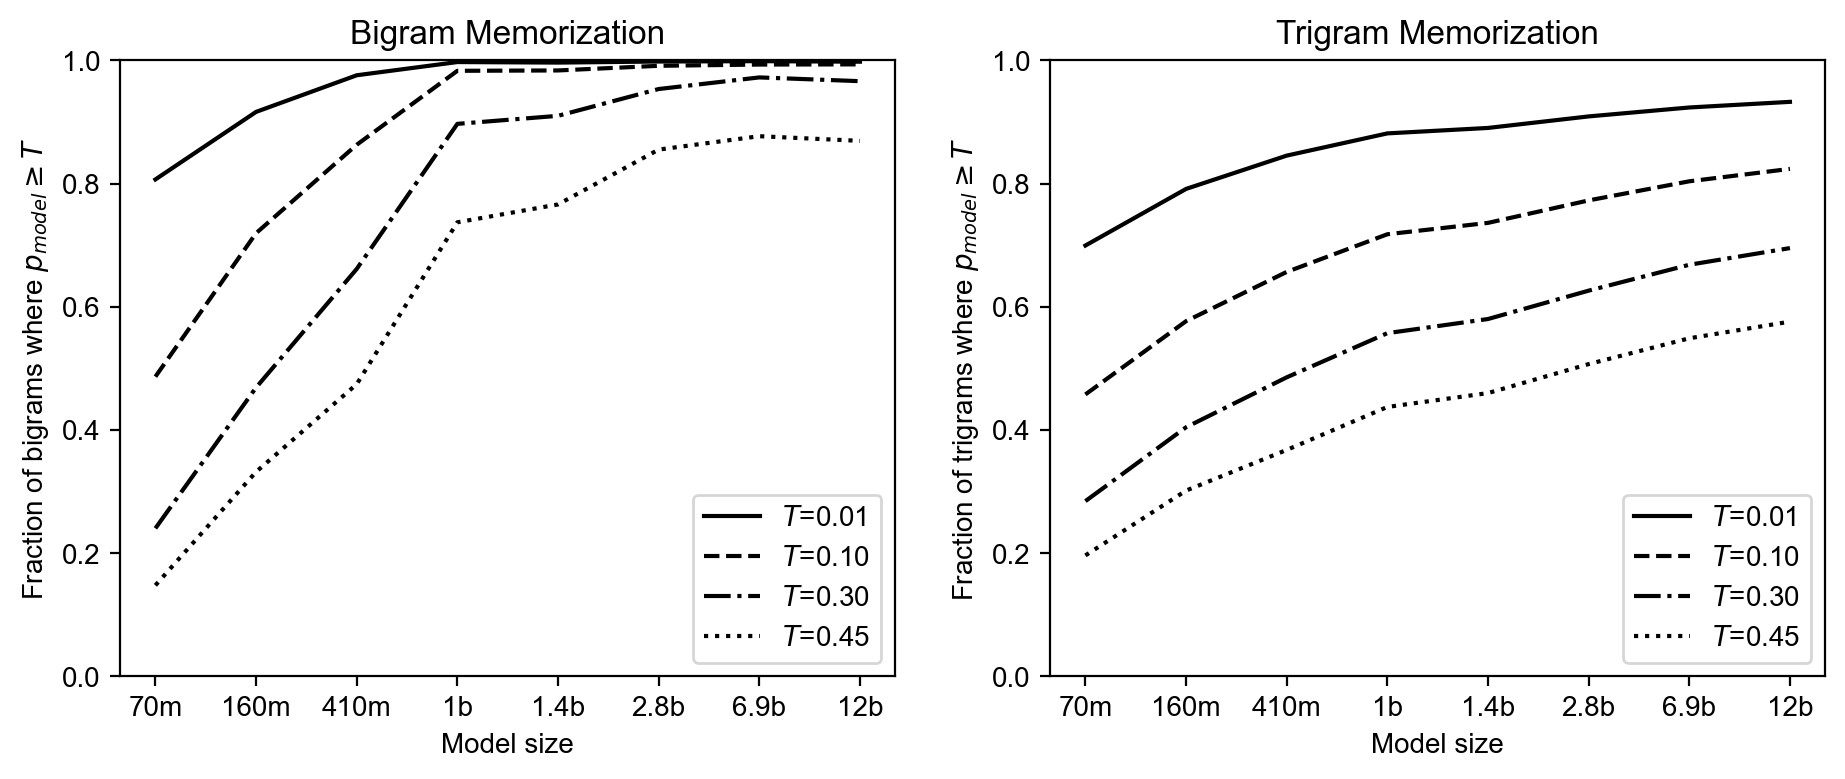

Usage notes:

-   Because the byte-pair encoding tokenizer from GPT-NeoX
    [\[3\]](#ref-black-etal-2022-gpt) was trained on The Pile, there are
    no single tokens in The Pile where the subsequent token is 100%
    predictable. However, there are many trigrams that are 100%
    predictable.
-   Some whitespace token bigrams will also tokenize as a single token.
    For example, with the GPT-NeoX tokenizer, `"\n\n\t\t"` is a token,
    `"\t"` is a token *and* `"\n\n\t\t\t"` is also token. It’s important
    to be aware of this when automatically tokenizing many prompts
    because almost all concatenated bigrams will tokenize to two tokens
    but a few whitespace-related bigrams will tokenize to one token. We
    have not removed these bigrams from the dataset. This white space
    tokenization is discussed in Appendix F of
    [\[3\]](#ref-black-etal-2022-gpt).

## First token deletion

If deleting the first token of a prompt gives a dramatically different
output from a language model, then something interpretable may be going
on. For example, consider the prompt, `", or common table"`. Given this
prompt, Pythia-2.8B predicts the most likely next token is
`" expression"` with probability 0.37. Next, we provide an additional
token of context in the backwards directions with the prompt,
`" chloride, or common table"`. Then, the model correctly predicts
`" salt"` with probability 0.99.

We scan through the pre-training corpus ${t_0,...,t_N}$ and compare the
output of the model on pairs of prompts:

-   $p_0  = [t_i, ... t_{i + n}]$ is a contiguous $n$-token prompt from
    the pre-training corpus.
-   $p_1  = [t_{i-1}, t_i, ... t_{i + n}]$ is an $(n+1)$-token prompt
    where an additional token, $t_{i-1}$ has been added in the backwards
    direction in the text.

Suppose $M(p)$ is a model than outputs a probability distribution over
output tokens. When $M(p_1)$ differs substantially from $M(p_0)$, we
capture the two prompts as a “task”. To be more precise, we accept the
task if:

$$\mathrm{JSD}(M(p_0), M(p_1)) > 0.5 ~~~~\mathrm{and}~~~~ \max_{i} M(p_1)_i > 0.5$$

where JSD is the [Jensen-Shannon
Divergence](https://en.wikipedia.org/wiki/Jensen–Shannon_divergence).
This criterion means that we focus on tasks for which the addition of
$t_{i-1}$ to the prompt has a large influence and results in a confident
prediction. Note that the true next token $t_{i + n + 1}$ does not
factor into these criteria and therefore the correctness of the model’s
predictions does not affect whether we consider the model to be
“completing a task”.

We share 1,874,497 tasks produced by prompt scanning with Pythia-2.8B
for every sliding 5-token prompt in the first 112.5M tokens of the Pile.
The dataset is available on Huggingface:
[pile_scan_4](https://huggingface.co/datasets/Confirm-Labs/pile_scan_4)

Scaling this method to the entire Pile would probably result in a
several hundred million such tasks.

## GitHub

The code to reproduce the datasets here is available at:
<https://github.com/Confirm-Solutions/catalog>

<span class="csl-left-margin">\[1\]
</span><span class="csl-right-inline">L. Gao *et al.*, “The Pile: An
800GB dataset of diverse text for language modeling,” *arXiv preprint
arXiv:2101.00027*, 2020.</span>

<span class="csl-left-margin">\[2\]
</span><span class="csl-right-inline">S. Biderman *et al.*, “Pythia: A
suite for analyzing large language models across training and scaling.”
2023. Available: <https://arxiv.org/abs/2304.01373></span>

<span class="csl-left-margin">\[3\]
</span><span class="csl-right-inline">S. Black *et al.*, “GPT-NeoX-20B:
An open-source autoregressive language model,” in *Proceedings of
BigScience episode \#5 – workshop on challenges & perspectives in
creating large language models*, virtual+Dublin: Association for
Computational Linguistics, May 2022, pp. 95–136. doi:
[10.18653/v1/2022.bigscience-1.9](https://doi.org/10.18653/v1/2022.bigscience-1.9).</span>